In [12]:
import os
import pandas as pd
import json

directory = 'Results'

json_list = []

for filename in os.listdir(directory):
    if filename.endswith('.json'):
        file_path = os.path.join(directory, filename)
        with open(file_path, 'r') as file:
            data = json.load(file)
            json_list.append(data)

df = pd.DataFrame(json_list)

# Mostrar el DataFrame
df.sort_values(by='clean_name', ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df

,number,n_points,n_faces,n_tetras,n_edges,distribution,union_method,n_polyhedrons,n_barrier_faces,polyhedra_with_barriers,n_tetra_left,n_tetra_left_rate,polyhedra_with_barriers_rate,convex_rate,polyhedra_with_kernel,avg_edge_ratio,min_edge_ratio,max_edge_ratio,median_edge_ratio,variance_edge_ratio,avg_original_edge_ratio,min_original_edge_ratio,max_original_edge_ratio,avg_tetra_per_polyhedron,min_tetra_per_polyhedron,max_tetra_per_polyhedron,median_tetra_per_polyhedron,variance_tetra_per_polyhedron,polyhedra_final_rate,avg_face_per_polyhedron,min_face_per_polyhedron,max_face_per_polyhedron,median_face_per_polyhedron,variance_face_per_polyhedron,avg_polyhedron_volume_ratio,min_polyhedron_volume_ratio,max_polyhedron_volume_ratio,median_polyhedron_volume_ration,variance_polyhedron_volume_ration,avg_polyhedron_area_ratio,min_polyhedron_area_ratio,max_polyhedron_area_ratio,median_polyhedron_area_ratio,variance_polyhedron_area_ratio,dt,filename,clean_name
0,10000,9985,118254,57806,70432,random,tra,18412,3566,2828,2654,14.414512,15.359548,89.653487,98.104497,0.091660,4.120638e-07,0.584140,0.072228,5.552496e-03,0.209419,5.435186e-07,0.862641,3.139148,1,16,3.0,3.200994,31.851365,8.278297,4,34,8.0,12.803976,0.935913,4.120306e-12,1.000016,1.0,4.996760e-02,1.971861,0.878701,2.759144,2.000000,1.321580e-02,5.896152,Files/polylla_random10000tra,9985randomtra
1,10000,9985,118254,57806,70432,random,r,16638,5400,3560,2999,18.025003,21.396803,87.378291,96.207477,0.095629,3.260440e-07,0.607640,0.074857,6.202404e-03,0.209419,5.435186e-07,0.862641,3.465501,1,21,3.0,5.882773,28.782479,8.931001,4,44,8.0,23.531093,0.927374,1.583186e-09,1.000026,1.0,5.826760e-02,1.986928,0.879933,2.768069,2.000000,1.065531e-02,3.521416,Files/polylla_random10000r,9985randomr
2,10000,9985,118254,57806,70432,random,are2,17017,4918,3463,2925,17.188694,20.350238,87.647646,96.438855,0.096061,3.260440e-07,0.523235,0.075930,6.071264e-03,0.209419,5.435186e-07,0.862641,3.392079,1,21,3.0,5.225203,29.438121,8.784157,4,44,8.0,20.900812,0.928510,2.722870e-10,1.000026,1.0,5.696769e-02,1.983587,0.879933,2.768069,2.000000,1.126316e-02,6.122644,Files/polylla_random10000are2,9985randomare2
3,10000,9985,118254,57806,70432,random,are1,17063,11529,4292,4272,25.036629,25.153842,92.750396,97.749516,0.097427,2.941727e-07,0.607640,0.074366,6.935268e-03,0.209419,5.435186e-07,0.862641,3.381058,1,23,3.0,6.793363,29.517697,8.762117,4,48,8.0,27.173452,0.961666,6.577744e-12,1.000016,1.0,3.132133e-02,2.008639,1.839481,2.624948,2.000000,1.744007e-03,6.490810,Files/polylla_random10000are1,9985randomare1
4,10000,9985,118254,57806,70432,random,a,16971,10899,4264,4100,24.158859,25.125214,92.640387,97.754994,0.096872,2.941727e-07,0.607640,0.073611,6.903222e-03,0.209419,5.435186e-07,0.862641,3.400566,1,23,3.0,6.720976,29.358544,8.801131,4,48,8.0,26.883902,0.961013,1.478471e-08,1.000016,1.0,3.176800e-02,2.008312,1.839481,2.624948,2.000000,1.742393e-03,6.397397,Files/polylla_random10000a,9985randoma
5,1000,996,9586,4553,6028,semiuniform,tra,1601,187,160,275,17.176765,9.993754,94.003748,99.000625,0.332340,8.006957e-02,0.687469,0.331075,7.386286e-03,0.451492,1.013692e-01,0.884688,2.843848,1,12,2.0,2.459351,35.163628,7.687695,4,26,6.0,9.837405,0.961120,5.796602e-06,1.000000,1.0,3.207036e-02,1.980598,1.703340,2.261287,2.000000,2.786710e-03,0.370334,Files/polylla_semiuniform1000tra,996semiuniformtra
6,1000,996,9586,4553,6028,semiuniform,r,1467,372,271,270,18.404908,18.473074,94.887526,98.704840,0.332631,8.006957e-02,0.687469,0.331286,7.721458e-03,0.451492,1.013692e-01,0.884688,3.102249,1,13,3.0,3.572075,32.220514,8.204499,4,28,8.0,14.288302,0.969220,1.248573e-06,1.000000,1.0,2.591741e-02,1.991561,1.712634,2.391006,2.000000,1.518494e-03,0.175893,Files/polylla_semiuniform1000r,996semiuniformr
7,1000,996,9586,4553,6028,semiuniform,are2,1466,315,238,254,17.326057,16.234652,93.656207,98.431105,0.330228,8.006957e-02,0.687469,0.329318,7.641383e-03,0.451492,1.013692e-01,0.884688,3.105730,1,13,3.0,3.480281,32.198550,8.21146

In [13]:
# TODO: poner bien polyhedron
New_names = {
    
    "n_faces": r"\#F",
    "n_points": r"\#V",
    "n_tetras": r"\#T",
    "n_edges": r"\#E",
    "n_polyedrons": "Polyhedrons",
    "n_barrier_faces": "Barrier faces",
    "polyhedra_with_barriers": "Polyhedral with barriers",
    "n_tetra_left": r"\#PolyTetras",
    "n_polyhedrons": r"\#P",
    "distribution": "Mesh type",
    "dt": "Time",
    "max_tetra_per_polyhedron": "Max tetras per polyhedron",
    "min_tetra_per_polyhedron": "Min tetras per polyhedron",
    "avg_tetra_per_polyhedron": "Avg tetras per polyhedron",
    "max_face_per_polyhedron": "Max faces per polyhedron",
    "min_face_per_polyhedron": "Min faces per polyhedron",
    "avg_face_per_polyhedron": "Avg faces per polyhedron",
    "avg_polyhedron_volume_ratio": "Avg Volume Ratio",
    "min_polyhedron_volume_ratio": "Min Volume Ratio",
    "max_polyhedron_volume_ratio": "Max Volume Ratio",
    "avg_polyhedron_area_ratio": "Avg Area Ratio",
    "min_polyhedron_area_ratio": "Min Area Ratio",
    "max_polyhedron_area_ratio": "Max Area Ratio",
    "avg_edge_ratio": "Avg Edge Ratio",
    "min_edge_ratio": "Min Edge Ratio",
    "max_edge_ratio": "Max Edge Ratio",
    "avg_original_edge_ratio": "Tetgen Avg Edge Ratio",
    "min_original_edge_ratio": "Tetgen Min Edge Ratio",
    "max_original_edge_ratio": "Tetgen Max Edge Ratio",
    "polyhedra_with_kernel": "Polyhedra with Kernel (%)",
    "convex_rate":"Convex Polyhedra (%)",
    "n_tetra_left_rate":"Polyhedra that are tetras (%)"
}



df.rename(columns=New_names, inplace=True)

# Round t_data_creation and Time to 3 decimals
# df["Time"] = df["Time"].round(3)
# #round avg tetras
# df["Avg tetras per polyhedron"] = df["Avg tetras per polyhedron"].round(0)
# #round avg faces
# df["Avg faces per polyhedron"] = df["Avg faces per polyhedron"].round(0)
# #round poly kernel rate
# df["Polyhedra with Kernel (%)"] = df["Polyhedra with Kernel (%)"].round(2)
# #round convex rate
# df["Convex Polyhedra (%)"] = df["Convex Polyhedra (%)"].round(2)
# #round 
# df["Max Edge Ratio"] = df["Max Edge Ratio"].round(3)
# df["Avg Edge Ratio"] = df["Avg Edge Ratio"].round(3)

# #round
# df["Avg Volume Ratio"] = df["Avg Volume Ratio"].round(3)
# df["Max Volume Ratio"] = df["Max Volume Ratio"].round(3)
# # df["Min Volume Ratio"] = df["Min Volume Ratio"].round(3)

# #round
# df["Avg Area Ratio"] = df["Avg Area Ratio"].round(3)
# df["Max Area Ratio"] = df["Max Area Ratio"].round(3)
# df["Min Area Ratio"] = df["Min Area Ratio"].round(3)

df

,number,\#V,\#F,\#T,\#E,Mesh type,union_method,\#P,Barrier faces,Polyhedral with barriers,\#PolyTetras,Polyhedra that are tetras (%),polyhedra_with_barriers_rate,Convex Polyhedra (%),Polyhedra with Kernel (%),Avg Edge Ratio,Min Edge Ratio,Max Edge Ratio,median_edge_ratio,variance_edge_ratio,Tetgen Avg Edge Ratio,Tetgen Min Edge Ratio,Tetgen Max Edge Ratio,Avg tetras per polyhedron,Min tetras per polyhedron,Max tetras per polyhedron,median_tetra_per_polyhedron,variance_tetra_per_polyhedron,polyhedra_final_rate,Avg faces per polyhedron,Min faces per polyhedron,Max faces per polyhedron,median_face_per_polyhedron,variance_face_per_polyhedron,Avg Volume Ratio,Min Volume Ratio,Max Volume Ratio,median_polyhedron_volume_ration,variance_polyhedron_volume_ration,Avg Area Ratio,Min Area Ratio,Max Area Ratio,median_polyhedron_area_ratio,variance_polyhedron_area_ratio,Time,filename,clean_name
0,10000,9985,118254,57806,70432,random,tra,18412,3566,2828,2654,14.414512,15.359548,89.653487,98.104497,0.091660,4.120638e-07,0.584140,0.072228,5.552496e-03,0.209419,5.435186e-07,0.862641,3.139148,1,16,3.0,3.200994,31.851365,8.278297,4,34,8.0,12.803976,0.935913,4.120306e-12,1.000016,1.0,4.996760e-02,1.971861,0.878701,2.759144,2.000000,1.321580e-02,5.896152,Files/polylla_random10000tra,9985randomtra
1,10000,9985,118254,57806,70432,random,r,16638,5400,3560,2999,18.025003,21.396803,87.378291,96.207477,0.095629,3.260440e-07,0.607640,0.074857,6.202404e-03,0.209419,5.435186e-07,0.862641,3.465501,1,21,3.0,5.882773,28.782479,8.931001,4,44,8.0,23.531093,0.927374,1.583186e-09,1.000026,1.0,5.826760e-02,1.986928,0.879933,2.768069,2.000000,1.065531e-02,3.521416,Files/polylla_random10000r,9985randomr
2,10000,9985,118254,57806,70432,random,are2,17017,4918,3463,2925,17.188694,20.350238,87.647646,96.438855,0.096061,3.260440e-07,0.523235,0.075930,6.071264e-03,0.209419,5.435186e-07,0.862641,3.392079,1,21,3.0,5.225203,29.438121,8.784157,4,44,8.0,20.900812,0.928510,2.722870e-10,1.000026,1.0,5.696769e-02,1.983587,0.879933,2.768069,2.000000,1.126316e-02,6.122644,Files/polylla_random10000are2,9985randomare2
3,10000,9985,118254,57806,70432,random,are1,17063,11529,4292,4272,25.036629,25.153842,92.750396,97.749516,0.097427,2.941727e-07,0.607640,0.074366,6.935268e-03,0.209419,5.435186e-07,0.862641,3.381058,1,23,3.0,6.793363,29.517697,8.762117,4,48,8.0,27.173452,0.961666,6.577744e-12,1.000016,1.0,3.132133e-02,2.008639,1.839481,2.624948,2.000000,1.744007e-03,6.490810,Files/polylla_random10000are1,9985randomare1
4,10000,9985,118254,57806,70432,random,a,16971,10899,4264,4100,24.158859,25.125214,92.640387,97.754994,0.096872,2.941727e-07,0.607640,0.073611,6.903222e-03,0.209419,5.435186e-07,0.862641,3.400566,1,23,3.0,6.720976,29.358544,8.801131,4,48,8.0,26.883902,0.961013,1.478471e-08,1.000016,1.0,3.176800e-02,2.008312,1.839481,2.624948,2.000000,1.742393e-03,6.397397,Files/polylla_random10000a,9985randoma
5,1000,996,9586,4553,6028,semiuniform,tra,1601,187,160,275,17.176765,9.993754,94.003748,99.000625,0.332340,8.006957e-02,0.687469,0.331075,7.386286e-03,0.451492,1.013692e-01,0.884688,2.843848,1,12,2.0,2.459351,35.163628,7.687695,4,26,6.0,9.837405,0.961120,5.796602e-06,1.000000,1.0,3.207036e-02,1.980598,1.703340,2.261287,2.000000,2.786710e-03,0.370334,Files/polylla_semiuniform1000tra,996semiuniformtra
6,1000,996,9586,4553,6028,semiuniform,r,1467,372,271,270,18.404908,18.473074,94.887526,98.704840,0.332631,8.006957e-02,0.687469,0.331286,7.721458e-03,0.451492,1.013692e-01,0.884688,3.102249,1,13,3.0,3.572075,32.220514,8.204499,4,28,8.0,14.288302,0.969220,1.248573e-06,1.000000,1.0,2.591741e-02,1.991561,1.712634,2.391006,2.000000,1.518494e-03,0.175893,Files/polylla_semiuniform1000r,996semiuniformr
7,1000,996,9586,4553,6028,semiuniform,are2,1466,315,238,254,17.326057,16.234652,93.656207,98.431105,0.330228,8.006957e-02,0.687469,0.329318,7.641383e-03,0.451492,1.013692e-01,0.884688,3.105730,1,13,3.0,3.480281,32.198550,8.211460,4,28,8.0,13.921125,0.962169,2.858381e-04,1.000000,1.0,3.126655e-02,1.

In [14]:
max(df['Time'])

35.70538115501404

### Union Method Sumamry

In [15]:

# TODO: agregar tetra vs Polyhedra rate
df_um_metrics = df[['union_method','Convex Polyhedra (%)',"Polyhedra with Kernel (%)","Polyhedra that are tetras (%)",'Avg tetras per polyhedron',"Avg Edge Ratio","Avg faces per polyhedron","Avg Volume Ratio","Avg Area Ratio","Time"]].copy().groupby("union_method").mean()
df_um_metrics

,Convex Polyhedra (%),Polyhedra with Kernel (%),Polyhedra that are tetras (%),Avg tetras per polyhedron,Avg Edge Ratio,Avg faces per polyhedron,Avg Volume Ratio,Avg Area Ratio,Time
union_method,,,,,,,,,
a,96.580053,99.109061,18.137247,3.090682,0.270072,8.181363,0.980470,2.004104,12.323336
are1,96.692485,99.115773,18.516844,3.071035,0.270448,8.142070,0.981317,2.004364,12.416205
are2,89.397841,97.080130,16.462437,3.230547,0.252103,8.461095,0.945119,1.985999,12.011322
r,89.705383,97.115033,17.186267,3.256656,0.253519,8.513312,0.947261,1.989058,7.132602
tra,90.180800,98.374556,14.630181,3.070999,0.238363,8.141998,0.948653,1.974790,12.362829


### Tables by union method
#### Number of points as index

In [16]:

df_a_union = df[(df['union_method'] == 'a') & ( df['Mesh type'] == 'semiuniform')].copy()
df_a_union.set_index(r"\#V", inplace=True)
df_a_union = df_a_union.sort_values(by = ['number'])
df_a_union = df_a_union.round(3)
multilvl = df_a_union[['Min tetras per polyhedron','Max tetras per polyhedron','Avg tetras per polyhedron',"median_tetra_per_polyhedron","variance_tetra_per_polyhedron",
                       "Min Edge Ratio","Max Edge Ratio","Avg Edge Ratio","median_edge_ratio", "variance_edge_ratio",
                       "Min faces per polyhedron","Max faces per polyhedron","Avg faces per polyhedron","variance_face_per_polyhedron", "median_face_per_polyhedron",
                       "Min Volume Ratio","Max Volume Ratio","Avg Volume Ratio","median_polyhedron_volume_ration","variance_polyhedron_volume_ration",
                       "Min Area Ratio", "Max Area Ratio", "Avg Area Ratio", "median_polyhedron_area_ratio","variance_polyhedron_area_ratio",
                       "Polyhedra with Kernel (%)", "Polyhedra that are tetras (%)"]]

# multilvl = multilvl.groupby('number').mean()
multilevel_columns = pd.MultiIndex.from_tuples([

    ('Quality Mesh Union by Area', 'Tetras per Polyhedron','Min'),
    ('Quality Mesh Union by Area', 'Tetras per Polyhedron', 'Max'),
    ('Quality Mesh Union by Area', 'Tetras per Polyhedron', 'Mean'),
    ('Quality Mesh Union by Area', 'Tetras per Polyhedron', 'Median'),
    ('Quality Mesh Union by Area', 'Tetras per Polyhedron', 'Variance'),
    ('Quality Mesh Union by Area', 'Edge Ratio','Min'),
    ('Quality Mesh Union by Area', 'Edge Ratio', 'Max'),
    ('Quality Mesh Union by Area', 'Edge Ratio', 'Mean'),
    ('Quality Mesh Union by Area', 'Edge Ratio', 'Median'),
    ('Quality Mesh Union by Area', 'Edge Ratio', 'Variance'),
    ('Quality Mesh Union by Area', 'Faces per polyhedron','Min'),
    ('Quality Mesh Union by Area', 'Faces per polyhedron', 'Max'),
    ('Quality Mesh Union by Area', 'Faces per polyhedron', 'Mean'),
    ('Quality Mesh Union by Area', 'Faces per polyhedron', 'Median'),
    ('Quality Mesh Union by Area', 'Faces per polyhedron', 'Variance'),
    ('Quality Mesh Union by Area', 'Volume Ratio','Min'),
    ('Quality Mesh Union by Area', 'Volume Ratio', 'Max'),
    ('Quality Mesh Union by Area', 'Volume Ratio', 'Mean'),
    ('Quality Mesh Union by Area', 'Volume Ratio', 'Median'),
    ('Quality Mesh Union by Area', 'Volume Ratio', 'Variance'),
    ('Quality Mesh Union by Area', 'Area Ratio','Min'),
    ('Quality Mesh Union by Area', 'Area Ratio', 'Max'),
    ('Quality Mesh Union by Area', 'Area Ratio', 'Mean'),
    ('Quality Mesh Union by Area', 'Area Ratio', 'Median'),
    ('Quality Mesh Union by Area', 'Area Ratio', 'Variance'),
    ('Quality Mesh Union by Area', 'Polyhedra with Kernel',"(%)"),
    ('Quality Mesh Union by Area', 'Polyhedra that are tetras',"(%)"),
 # Añadir esta línea para la columna faltante

])

multilvl.columns = multilevel_columns

multilvl.style.set_table_styles([
   {'selector': 'th',
    'props': [
        ('text-align', 'center')
    ]
    }]
)


In [17]:

df_r_union = df[(df['union_method'] == 'r' ) & ( df['Mesh type'] == 'semiuniform')].copy()
df_r_union.set_index(r"\#V", inplace=True)
df_r_union = df_r_union.sort_values(by = ['number'])
df_r_union = df_r_union.round(3)
multilvl = df_r_union[['Min tetras per polyhedron','Max tetras per polyhedron','Avg tetras per polyhedron',"median_tetra_per_polyhedron","variance_tetra_per_polyhedron",
                       "Min Edge Ratio","Max Edge Ratio","Avg Edge Ratio","median_edge_ratio", "variance_edge_ratio",
                       "Min faces per polyhedron","Max faces per polyhedron","Avg faces per polyhedron","variance_face_per_polyhedron", "median_face_per_polyhedron",
                       "Min Volume Ratio","Max Volume Ratio","Avg Volume Ratio","median_polyhedron_volume_ration","variance_polyhedron_volume_ration",
                       "Min Area Ratio", "Max Area Ratio", "Avg Area Ratio", "median_polyhedron_area_ratio","variance_polyhedron_area_ratio",
                       "Polyhedra with Kernel (%)", "Polyhedra that are tetras (%)"]]
# multilvl = multilvl.groupby('number').mean()
multilevel_columns = pd.MultiIndex.from_tuples([

    ('Quality Mesh Union by Inradius', 'Tetras per Polyhedron','Min'),
    ('Quality Mesh Union by Inradius', 'Tetras per Polyhedron', 'Max'),
    ('Quality Mesh Union by Inradius', 'Tetras per Polyhedron', 'Mean'),
    ('Quality Mesh Union by Inradius', 'Tetras per Polyhedron', 'Median'),
    ('Quality Mesh Union by Inradius', 'Tetras per Polyhedron', 'Variance'),
    ('Quality Mesh Union by Inradius', 'Edge Ratio','Min'),
    ('Quality Mesh Union by Inradius', 'Edge Ratio', 'Max'),
    ('Quality Mesh Union by Inradius', 'Edge Ratio', 'Mean'),
    ('Quality Mesh Union by Inradius', 'Edge Ratio', 'Median'),
    ('Quality Mesh Union by Inradius', 'Edge Ratio', 'Variance'),
    ('Quality Mesh Union by Inradius', 'Faces per polyhedron','Min'),
    ('Quality Mesh Union by Inradius', 'Faces per polyhedron', 'Max'),
    ('Quality Mesh Union by Inradius', 'Faces per polyhedron', 'Mean'),
    ('Quality Mesh Union by Inradius', 'Faces per polyhedron', 'Median'),
    ('Quality Mesh Union by Inradius', 'Faces per polyhedron', 'Variance'),
    ('Quality Mesh Union by Inradius', 'Volume Ratio','Min'),
    ('Quality Mesh Union by Inradius', 'Volume Ratio', 'Max'),
    ('Quality Mesh Union by Inradius', 'Volume Ratio', 'Mean'),
    ('Quality Mesh Union by Inradius', 'Volume Ratio', 'Median'),
    ('Quality Mesh Union by Inradius', 'Volume Ratio', 'Variance'),
    ('Quality Mesh Union by Inradius', 'Area Ratio','Min'),
    ('Quality Mesh Union by Inradius', 'Area Ratio', 'Max'),
    ('Quality Mesh Union by Inradius', 'Area Ratio', 'Mean'),
    ('Quality Mesh Union by Inradius', 'Area Ratio', 'Median'),
    ('Quality Mesh Union by Inradius', 'Area Ratio', 'Variance'),
    ('Quality Mesh Union by Inradius', 'Polyhedra with Kernel',"(%)"),
    ('Quality Mesh Union by Inradius', 'Polyhedra that are tetras',"(%)"),
 # Añadir esta línea para la columna faltante

])

multilvl.columns = multilevel_columns

multilvl.style.set_table_styles([
   {'selector': 'th',
    'props': [
        ('text-align', 'center')
    ]
    }]
)

In [18]:
df_ar1_union = df[(df['union_method'] == 'are1') & ( df['Mesh type'] == 'semiuniform')].copy()
df_ar1_union.set_index(r"\#V", inplace=True)
df_ar1_union = df_ar1_union.sort_values(by = ['number'])
df_ar1_union = df_ar1_union.round(3)
multilvl = df_ar1_union[['Min tetras per polyhedron','Max tetras per polyhedron','Avg tetras per polyhedron',"median_tetra_per_polyhedron","variance_tetra_per_polyhedron",
                       "Min Edge Ratio","Max Edge Ratio","Avg Edge Ratio","median_edge_ratio", "variance_edge_ratio",
                       "Min faces per polyhedron","Max faces per polyhedron","Avg faces per polyhedron","variance_face_per_polyhedron", "median_face_per_polyhedron",
                       "Min Volume Ratio","Max Volume Ratio","Avg Volume Ratio","median_polyhedron_volume_ration","variance_polyhedron_volume_ration",
                       "Min Area Ratio", "Max Area Ratio", "Avg Area Ratio", "median_polyhedron_area_ratio","variance_polyhedron_area_ratio",
                       "Polyhedra with Kernel (%)", "Polyhedra that are tetras (%)"]]
# multilvl = multilvl.groupby('number').mean()
multilevel_columns = pd.MultiIndex.from_tuples([

    ('Quality Mesh Union by Aspect Ratio 1 (e1)', 'Tetras per Polyhedron','Min'),
    ('Quality Mesh Union by Aspect Ratio 1 (e1)', 'Tetras per Polyhedron', 'Max'),
    ('Quality Mesh Union by Aspect Ratio 1 (e1)', 'Tetras per Polyhedron', 'Mean'),
    ('Quality Mesh Union by Aspect Ratio 1 (e1)', 'Tetras per Polyhedron', 'Median'),
    ('Quality Mesh Union by Aspect Ratio 1 (e1)', 'Tetras per Polyhedron', 'Variance'),
    ('Quality Mesh Union by Aspect Ratio 1 (e1)', 'Edge Ratio','Min'),
    ('Quality Mesh Union by Aspect Ratio 1 (e1)', 'Edge Ratio', 'Max'),
    ('Quality Mesh Union by Aspect Ratio 1 (e1)', 'Edge Ratio', 'Mean'),
    ('Quality Mesh Union by Aspect Ratio 1 (e1)', 'Edge Ratio', 'Median'),
    ('Quality Mesh Union by Aspect Ratio 1 (e1)', 'Edge Ratio', 'Variance'),
    ('Quality Mesh Union by Aspect Ratio 1 (e1)', 'Faces per polyhedron','Min'),
    ('Quality Mesh Union by Aspect Ratio 1 (e1)', 'Faces per polyhedron', 'Max'),
    ('Quality Mesh Union by Aspect Ratio 1 (e1)', 'Faces per polyhedron', 'Mean'),
    ('Quality Mesh Union by Aspect Ratio 1 (e1)', 'Faces per polyhedron', 'Median'),
    ('Quality Mesh Union by Aspect Ratio 1 (e1)', 'Faces per polyhedron', 'Variance'),
    ('Quality Mesh Union by Aspect Ratio 1 (e1)', 'Volume Ratio','Min'),
    ('Quality Mesh Union by Aspect Ratio 1 (e1)', 'Volume Ratio', 'Max'),
    ('Quality Mesh Union by Aspect Ratio 1 (e1)', 'Volume Ratio', 'Mean'),
    ('Quality Mesh Union by Aspect Ratio 1 (e1)', 'Volume Ratio', 'Median'),
    ('Quality Mesh Union by Aspect Ratio 1 (e1)', 'Volume Ratio', 'Variance'),
    ('Quality Mesh Union by Aspect Ratio 1 (e1)', 'Area Ratio','Min'),
    ('Quality Mesh Union by Aspect Ratio 1 (e1)', 'Area Ratio', 'Max'),
    ('Quality Mesh Union by Aspect Ratio 1 (e1)', 'Area Ratio', 'Mean'),
    ('Quality Mesh Union by Aspect Ratio 1 (e1)', 'Area Ratio', 'Median'),
    ('Quality Mesh Union by Aspect Ratio 1 (e1)', 'Area Ratio', 'Variance'),
    ('Quality Mesh Union by Aspect Ratio 1 (e1)', 'Polyhedra with Kernel',"(%)"),
    ('Quality Mesh Union by Aspect Ratio 1 (e1)', 'Polyhedra that are tetras',"(%)"),
    
 # Añadir esta línea para la columna faltante

])
multilvl.columns = multilevel_columns

multilvl.style.set_table_styles([
   {'selector': 'th',
    'props': [
        ('text-align', 'center')
    ]
    }]
)

In [19]:
df_ar2_union = df[(df['union_method'] == 'are2') & ( df['Mesh type'] == 'semiuniform')].copy()
df_ar2_union.set_index(r"\#V", inplace=True)
df_ar2_union = df_ar2_union.sort_values(by = ['number'])
df_ar2_union = df_ar2_union.round(3)
multilvl = df_ar2_union[['Min tetras per polyhedron','Max tetras per polyhedron','Avg tetras per polyhedron',"median_tetra_per_polyhedron","variance_tetra_per_polyhedron",
                       "Min Edge Ratio","Max Edge Ratio","Avg Edge Ratio","median_edge_ratio", "variance_edge_ratio",
                       "Min faces per polyhedron","Max faces per polyhedron","Avg faces per polyhedron","variance_face_per_polyhedron", "median_face_per_polyhedron",
                       "Min Volume Ratio","Max Volume Ratio","Avg Volume Ratio","median_polyhedron_volume_ration","variance_polyhedron_volume_ration",
                       "Min Area Ratio", "Max Area Ratio", "Avg Area Ratio", "median_polyhedron_area_ratio","variance_polyhedron_area_ratio",
                       "Polyhedra with Kernel (%)", "Polyhedra that are tetras (%)"]]
# multilvl = multilvl.groupby('number').mean()
multilevel_columns = pd.MultiIndex.from_tuples([

    ('Quality Mesh Union by Aspect Ratio 2 (e2)', 'Tetras per Polyhedron','Min'),
    ('Quality Mesh Union by Aspect Ratio 2 (e2)', 'Tetras per Polyhedron', 'Max'),
    ('Quality Mesh Union by Aspect Ratio 2 (e2)', 'Tetras per Polyhedron', 'Mean'),
    ('Quality Mesh Union by Aspect Ratio 2 (e2)', 'Tetras per Polyhedron', 'Median'),
    ('Quality Mesh Union by Aspect Ratio 2 (e2)', 'Tetras per Polyhedron', 'Variance'),
    ('Quality Mesh Union by Aspect Ratio 2 (e2)', 'Edge Ratio','Min'),
    ('Quality Mesh Union by Aspect Ratio 2 (e2)', 'Edge Ratio', 'Max'),
    ('Quality Mesh Union by Aspect Ratio 2 (e2)', 'Edge Ratio', 'Mean'),
    ('Quality Mesh Union by Aspect Ratio 2 (e2)', 'Edge Ratio', 'Median'),
    ('Quality Mesh Union by Aspect Ratio 2 (e2)', 'Edge Ratio', 'Variance'),
    ('Quality Mesh Union by Aspect Ratio 2 (e2)', 'Faces per polyhedron','Min'),
    ('Quality Mesh Union by Aspect Ratio 2 (e2)', 'Faces per polyhedron', 'Max'),
    ('Quality Mesh Union by Aspect Ratio 2 (e2)', 'Faces per polyhedron', 'Mean'),
    ('Quality Mesh Union by Aspect Ratio 2 (e2)', 'Faces per polyhedron', 'Median'),
    ('Quality Mesh Union by Aspect Ratio 2 (e2)', 'Faces per polyhedron', 'Variance'),
    ('Quality Mesh Union by Aspect Ratio 2 (e2)', 'Volume Ratio','Min'),
    ('Quality Mesh Union by Aspect Ratio 2 (e2)', 'Volume Ratio', 'Max'),
    ('Quality Mesh Union by Aspect Ratio 2 (e2)', 'Volume Ratio', 'Mean'),
    ('Quality Mesh Union by Aspect Ratio 2 (e2)', 'Volume Ratio', 'Median'),
    ('Quality Mesh Union by Aspect Ratio 2 (e2)', 'Volume Ratio', 'Variance'),
    ('Quality Mesh Union by Aspect Ratio 2 (e2)', 'Area Ratio','Min'),
    ('Quality Mesh Union by Aspect Ratio 2 (e2)', 'Area Ratio', 'Max'),
    ('Quality Mesh Union by Aspect Ratio 2 (e2)', 'Area Ratio', 'Mean'),
    ('Quality Mesh Union by Aspect Ratio 2 (e2)', 'Area Ratio', 'Median'),
    ('Quality Mesh Union by Aspect Ratio 2 (e2)', 'Area Ratio', 'Variance'),
    ('Quality Mesh Union by Aspect Ratio 2 (e2)', 'Polyhedra with Kernel',"(%)"),
    ('Quality Mesh Union by Aspect Ratio 2 (e2)', 'Polyhedra that are tetras',"(%)"),
 # Añadir esta línea para la columna faltante

])
multilvl.columns = multilevel_columns

multilvl.style.set_table_styles([
   {'selector': 'th',
    'props': [
        ('text-align', 'center')
    ]
    }]
)

In [20]:
df_tra_union = df[(df['union_method'] == 'tra') & ( df['Mesh type'] == 'semiuniform')].copy()
df_tra_union.set_index(r"\#V", inplace=True)
df_tra_union = df_tra_union.sort_values(by = ['number'])
df_tra_union = df_tra_union.round(3)
multilvl = df_tra_union[['Min tetras per polyhedron','Max tetras per polyhedron','Avg tetras per polyhedron',"median_tetra_per_polyhedron","variance_tetra_per_polyhedron",
                       "Min Edge Ratio","Max Edge Ratio","Avg Edge Ratio","median_edge_ratio", "variance_edge_ratio",
                       "Min faces per polyhedron","Max faces per polyhedron","Avg faces per polyhedron","variance_face_per_polyhedron", "median_face_per_polyhedron",
                       "Min Volume Ratio","Max Volume Ratio","Avg Volume Ratio","median_polyhedron_volume_ration","variance_polyhedron_volume_ration",
                       "Min Area Ratio", "Max Area Ratio", "Avg Area Ratio", "median_polyhedron_area_ratio","variance_polyhedron_area_ratio",
                       "Polyhedra with Kernel (%)", "Polyhedra that are tetras (%)"]]
# multilvl = multilvl.groupby('number').mean()
multilevel_columns = pd.MultiIndex.from_tuples([

    ('Quality Mesh Union by Triangle Aspect', 'Tetras per Polyhedron','Min'),
    ('Quality Mesh Union by Triangle Aspect', 'Tetras per Polyhedron', 'Max'),
    ('Quality Mesh Union by Triangle Aspect', 'Tetras per Polyhedron', 'Mean'),
    ('Quality Mesh Union by Triangle Aspect', 'Tetras per Polyhedron', 'Median'),
    ('Quality Mesh Union by Triangle Aspect', 'Tetras per Polyhedron', 'Variance'),
    ('Quality Mesh Union by Triangle Aspect', 'Edge Ratio','Min'),
    ('Quality Mesh Union by Triangle Aspect', 'Edge Ratio', 'Max'),
    ('Quality Mesh Union by Triangle Aspect', 'Edge Ratio', 'Mean'),
    ('Quality Mesh Union by Triangle Aspect', 'Edge Ratio', 'Median'),
    ('Quality Mesh Union by Triangle Aspect', 'Edge Ratio', 'Variance'),
    ('Quality Mesh Union by Triangle Aspect', 'Faces per polyhedron','Min'),
    ('Quality Mesh Union by Triangle Aspect', 'Faces per polyhedron', 'Max'),
    ('Quality Mesh Union by Triangle Aspect', 'Faces per polyhedron', 'Mean'),
    ('Quality Mesh Union by Triangle Aspect', 'Faces per polyhedron', 'Median'),
    ('Quality Mesh Union by Triangle Aspect', 'Faces per polyhedron', 'Variance'),
    ('Quality Mesh Union by Triangle Aspect', 'Volume Ratio','Min'),
    ('Quality Mesh Union by Triangle Aspect', 'Volume Ratio', 'Max'),
    ('Quality Mesh Union by Triangle Aspect', 'Volume Ratio', 'Mean'),
    ('Quality Mesh Union by Triangle Aspect', 'Volume Ratio', 'Median'),
    ('Quality Mesh Union by Triangle Aspect', 'Volume Ratio', 'Variance'),
    ('Quality Mesh Union by Triangle Aspect', 'Area Ratio','Min'),
    ('Quality Mesh Union by Triangle Aspect', 'Area Ratio', 'Max'),
    ('Quality Mesh Union by Triangle Aspect', 'Area Ratio', 'Mean'),
    ('Quality Mesh Union by Triangle Aspect', 'Area Ratio', 'Median'),
    ('Quality Mesh Union by Triangle Aspect', 'Area Ratio', 'Variance'),
    ('Quality Mesh Union by Triangle Aspect', 'Polyhedra with Kernel',"(%)"),
    ('Quality Mesh Union by Triangle Aspect', 'Polyhedra that are tetras',"(%)"),
 # Añadir esta línea para la columna faltante

])
multilvl.columns = multilevel_columns

multilvl.style.set_table_styles([
   {'selector': 'th',
    'props': [
        ('text-align', 'center')
    ]
    }]
)

In [21]:
latex_table = multilvl.to_latex(
    index=False,  # To not include the DataFrame index as a column in the table
    caption="Union by biggest area",  # The caption to appear above the table in the LaTeX document
    label="tab:area_union",  # A label used for referencing the table within the LaTeX document
    position="htbp",  # The preferred positions where the table should be placed in the document ('here', 'top', 'bottom', 'page')
    column_format="|lllllllllllllll|",  # The format of the columns: left-aligned with vertical lines between them
    escape=False,  # Disable escaping LaTeX special characters in the DataFrame
    float_format="{:0.2f}".format  # Formats floats to two decimal places
)

print(latex_table)

\begin{table}[htbp]
\caption{Union by biggest area}
\label{tab:area_union}
\begin{tabular}{|lllllllllllllll|}
\toprule
\multicolumn{27}{r}{Quality Mesh Union by Triangle Aspect} \\
\multicolumn{5}{r}{Tetras per Polyhedron} & \multicolumn{5}{r}{Edge Ratio} & \multicolumn{5}{r}{Faces per polyhedron} & \multicolumn{5}{r}{Volume Ratio} & \multicolumn{5}{r}{Area Ratio} & Polyhedra with Kernel & Polyhedra that are tetras \\
Min & Max & Mean & Median & Variance & Min & Max & Mean & Median & Variance & Min & Max & Mean & Median & Variance & Min & Max & Mean & Median & Variance & Min & Max & Mean & Median & Variance & (%) & (%) \\
\midrule
1 & 12 & 2.84 & 2.00 & 2.46 & 0.08 & 0.69 & 0.33 & 0.33 & 0.01 & 4 & 26 & 7.69 & 9.84 & 6.00 & 0.00 & 1.00 & 0.96 & 1.00 & 0.03 & 1.70 & 2.26 & 1.98 & 2.00 & 0.00 & 99.00 & 17.18 \\
1 & 17 & 3.00 & 3.00 & 2.86 & 0.11 & 0.74 & 0.36 & 0.35 & 0.01 & 4 & 36 & 8.00 & 11.45 & 8.00 & 0.00 & 1.00 & 0.95 & 1.00 & 0.04 & 1.62 & 2.38 & 1.98 & 2.00 & 0.00 & 98.57 & 16.67

### Tables by union method
#### mesh type as index

In [35]:
df_a_union = df[(df['union_method'] == 'a')].copy()
df_a_union.set_index('Mesh type', inplace=True)
multilvl = df_a_union[['Min tetras per polyhedron','Max tetras per polyhedron','Avg tetras per polyhedron',
                       "Min Edge Ratio","Max Edge Ratio","Avg Edge Ratio",
                       "Min faces per polyhedron","Max faces per polyhedron","Avg faces per polyhedron",
                       "Min Volume Ratio","Max Volume Ratio","Avg Volume Ratio",
                       "Min Area Ratio", "Max Area Ratio", "Avg Area Ratio"]]
multilvl = multilvl.groupby('Mesh type').mean()
multilevel_columns = pd.MultiIndex.from_tuples([

    ('Union by Area', 'Tetras per Polyhedron','Min'),
    ('Union by Area', 'Tetras per Polyhedron', 'Max'),
    ('Union by Area', 'Tetras per Polyhedron', 'Mean'),
    ('Union by Area', 'Edge Ratio','Min'),
    ('Union by Area', 'Edge Ratio', 'Max'),
    ('Union by Area', 'Edge Ratio', 'Mean'),
    ('Union by Area', 'faces per polyhedron','Min'),
    ('Union by Area', 'faces per polyhedron', 'Max'),
    ('Union by Area', 'faces per polyhedron', 'Mean'),
    ('Union by Area', 'Volume Ratio','Min'),
    ('Union by Area', 'Volume Ratio', 'Max'),
    ('Union by Area', 'Volume Ratio', 'Mean'),
    ('Union by Area', 'Area Ratio','Min'),
    ('Union by Area', 'Area Ratio', 'Max'),
    ('Union by Area', 'Area Ratio', 'Mean'),
 # Añadir esta línea para la columna faltante

])
multilvl.columns = multilevel_columns

multilvl.style.set_table_styles([
   {'selector': 'th',
    'props': [
        ('text-align', 'center')
    ]
    }]
)

In [18]:
winner_method = "a"

df_Uniform = df[(df['Mesh type'] == 'uniform') & (df['union_method'] == winner_method)].copy()
df_Semiuniform = df[(df['Mesh type'] == 'semiuniform') & (df['union_method'] == winner_method)].copy()
df_Random = df[(df['Mesh type'] == 'random') & (df['union_method'] == winner_method)].copy()
df_Poisson = df[(df['Mesh type'] == 'poisson')  & (df['union_method'] == winner_method)].copy()

# sort by \#V"
df_Uniform.sort_values(by=r"\#V", ascending=True, inplace=True)
df_Semiuniform.sort_values(by=[r"\#V",'Time'], ascending=True, inplace=True)
df_Random.sort_values(by=[r"\#V",'Time'], ascending=True, inplace=True)
df_Poisson.sort_values(by=[r"\#V",'Time'], ascending=True, inplace=True)

# df_Poisson
df_Uniform

,number,\#V,\#F,\#T,\#E,Mesh type,union_method,\#P,Barrier faces,Polyhedral with barriers,\#PolyTetras,Polyhedra that are tetras (%),polyhedra_with_barriers_rate,Convex Polyhedra (%),Polyhedra with Kernel (%),Avg Edge Ratio,Min Edge Ratio,Max Edge Ratio,Tetgen Avg Edge Ratio,Tetgen Min Edge Ratio,Tetgen Max Edge Ratio,Avg tetras per polyhedron,Min tetras per polyhedron,Max tetras per polyhedron,polyhedra_final_rate,Avg faces per polyhedron,Min faces per polyhedron,Max faces per polyhedron,Avg Volume Ratio,Min Volume Ratio,Max Volume Ratio,Avg Area Ratio,Min Area Ratio,Max Area Ratio,Time,filename,clean_name
144,1000,1000,9234,4374,5859,uniform,a,1460,53,53,14,0.958904,3.630137,100.0,100.0,0.333,0.333333,0.333,0.333333,0.333333,0.333333,3.0,1,5,33.379058,8.0,4,12,1.0,1.0,1.0,1.002,1.0,1.069,0.328,Files/polylla_uniform1000a,1000uniforma
51,5000,4913,50688,24576,31024,uniform,a,8376,1741,1741,471,5.623209,20.785578,100.0,100.0,0.333,0.333333,0.333,0.333333,0.333333,0.333333,3.0,1,5,34.082031,8.0,4,12,1.0,1.0,1.0,1.006,1.0,1.069,8.624,Files/polylla_uniform5000a,4913uniforma
125,10000,10648,113778,55566,68859,uniform,a,18565,721,721,224,1.206572,3.883652,100.0,100.0,0.333,0.333333,0.333,0.333333,0.333333,0.333333,3.0,1,5,33.410719,8.0,4,12,1.0,1.0,1.0,1.002,1.0,1.069,6.484,Files/polylla_uniform10000a,10648uniforma
106,15000,15625,169344,82944,102024,uniform,a,27711,524,524,127,0.458302,1.890946,100.0,100.0,0.333,0.333333,0.333,0.333333,0.333333,0.333333,3.0,1,5,33.409288,8.0,4,12,1.0,1.0,1.0,1.001,1.0,1.069,9.986,Files/polylla_uniform15000a,15625uniforma
104,20000,19683,214968,105456,129194,uniform,a,35269,1374,1374,381,1.080269,3.895772,100.0,100.0,0.333,0.333333,0.333,0.333333,0.333333,0.333333,3.0,1,5,33.444280,8.0,4,12,1.0,1.0,1.0,1.002,1.0,1.069,12.560,Files/polylla_uniform20000a,19683uniforma
87,30000,29791,329400,162000,197190,uniform,a,54778,6025,6025,1641,2.995728,10.998941,100.0,100.0,0.333,0.333333,0.333,0.333333,0.333333,0.333333,3.0,1,5,33.813580,8.0,4,12,1.0,1.0,1.0,1.004,1.0,1.069,18.347,Files/polylla_uniform30000a,29791uniforma
70,40000,39304,437778,215622,261459,uniform,a,72099,2663,2663,725,1.005562,3.693533,100.0,100.0,0.333,0.333333,0.333,0.333333,0.333333,0.333333,3.0,1,5,33.437683,8.0,4,12,1.0,1.0,1.0,1.002,1.0,1.069,23.743,Files/polylla_uniform40000a,39304uniforma
16,50000,50653,567648,279936,338364,uniform,a,93829,8998,8998,2362,2.517345,9.589786,100.0,100.0,0.333,0.333333,0.333,0.333333,0.333333,0.333333,3.0,1,5,33.518018,8.0,4,12,1.0,1.0,1.0,1.003,1.0,1.069,31.488,Files/polylla_uniform50000a,50653uniforma


### Tetras per polyhedron

In [19]:
# df_Uniform.drop(columns=['filename', 'Mesh type', 'number', 'clean_name', 'Time', 'Min tetras per polyhedron'], inplace=True)
# df_Semiuniform.drop(columns=['filename', 'Mesh type', 'number', 'clean_name', 'Time', 'Min tetras per polyhedron'], inplace=True)
df_UniformTet = df_Uniform.copy()
df_UniformTet.drop(columns=['Barrier faces', 'Polyhedral with barriers','filename', 'Mesh type', 'number', 'clean_name', 'Time','Convex Polyhedra (%)',	"Polyhedra with Kernel (%)", "Avg Edge Ratio",	"Min Edge Ratio", "Max Edge Ratio",	"Avg faces per polyhedron",	"Min faces per polyhedron",	"Max faces per polyhedron",	"Avg Volume Ratio",	"Min Volume Ratio",	"Max Volume Ratio",	"Avg Area Ratio", "Min Area Ratio",	"Max Area Ratio"], inplace=True)
df_SemiuniformTet = df_Semiuniform.copy()
df_SemiuniformTet.drop(columns=['Barrier faces', 'Polyhedral with barriers','filename', 'Mesh type', 'number', 'clean_name', 'Time','Convex Polyhedra (%)',	"Polyhedra with Kernel (%)", "Avg Edge Ratio",	"Min Edge Ratio", "Max Edge Ratio",	"Avg faces per polyhedron",	"Min faces per polyhedron",	"Max faces per polyhedron",	"Avg Volume Ratio",	"Min Volume Ratio",	"Max Volume Ratio",	"Avg Area Ratio", "Min Area Ratio",	"Max Area Ratio"], inplace=True)
df_RandomTet = df_Random.copy()
df_RandomTet.drop(columns=['Barrier faces', 'Polyhedral with barriers','filename', 'Mesh type', 'number', 'clean_name', 'Time','Convex Polyhedra (%)',	"Polyhedra with Kernel (%)", "Avg Edge Ratio",	"Min Edge Ratio", "Max Edge Ratio",	"Avg faces per polyhedron",	"Min faces per polyhedron",	"Max faces per polyhedron",	"Avg Volume Ratio",	"Min Volume Ratio",	"Max Volume Ratio",	"Avg Area Ratio", "Min Area Ratio",	"Max Area Ratio"], inplace=True)
# df_Poisson.drop(columns=['filename', 'Mesh type', 'number', 'clean_name', 'Time', 'Min tetras per polyhedron'], inplace=True)
df_PoissonTet = df_Poisson.copy()
df_PoissonTet.drop(columns=['Barrier faces', 'Polyhedral with barriers','filename', 'Mesh type', 'number', 'clean_name', 'Time','Convex Polyhedra (%)',	"Polyhedra with Kernel (%)", "Avg Edge Ratio",	"Min Edge Ratio", "Max Edge Ratio",	"Avg faces per polyhedron",	"Min faces per polyhedron",	"Max faces per polyhedron",	"Avg Volume Ratio",	"Min Volume Ratio",	"Max Volume Ratio",	"Avg Area Ratio", "Min Area Ratio",	"Max Area Ratio"], inplace=True)

df_RandomTet

,\#V,\#F,\#T,\#E,union_method,\#P,\#PolyTetras,Polyhedra that are tetras (%),polyhedra_with_barriers_rate,Tetgen Avg Edge Ratio,Tetgen Min Edge Ratio,Tetgen Max Edge Ratio,Avg tetras per polyhedron,Min tetras per polyhedron,Max tetras per polyhedron,polyhedra_final_rate
14,994,10433,4984,6442,a,1460,365,25.000000,25.068493,0.197568,2.637543e-05,0.897332,3.0,1,20,29.293740
46,4998,59196,28920,35273,a,8610,2169,25.191638,25.563298,0.211997,3.685670e-06,0.888540,3.0,1,23,29.771784
4,9985,118254,57806,70432,a,16971,4100,24.158859,25.125214,0.209419,5.435186e-07,0.862641,3.0,1,23,29.358544
121,14980,176486,86186,105279,a,25145,5997,23.849672,24.792205,0.204046,3.279237e-08,0.868658,3.0,1,32,29.175272
102,19979,235423,115028,140373,a,33549,8158,24.316671,24.859161,0.202146,4.409792e-07,0.873809,3.0,1,26,29.165942
85,29984,363486,178397,215072,a,52603,13100,24.903523,24.973861,0.207342,5.586739e-11,0.894930,3.0,1,33,29.486482
61,39990,498582,245842,292729,a,72991,18074,24.761957,25.311340,0.214081,1.472132e-07,0.874429,3.0,1,28,29.690208
41,49997,641483,317834,373645,a,95683,24055,25.140307,25.205104,0.218441,4.201086e-06,0.870576,3.0,1,31,30.104709


In [20]:
df_Uniform.set_index(r'\#V', inplace=True)
df_Semiuniform.set_index(r'\#V', inplace=True)
df_Random.set_index(r'\#V', inplace=True)
df_Poisson.set_index(r'\#V', inplace=True)

df_Uniform

,number,\#F,\#T,\#E,Mesh type,union_method,\#P,Barrier faces,Polyhedral with barriers,\#PolyTetras,Polyhedra that are tetras (%),polyhedra_with_barriers_rate,Convex Polyhedra (%),Polyhedra with Kernel (%),Avg Edge Ratio,Min Edge Ratio,Max Edge Ratio,Tetgen Avg Edge Ratio,Tetgen Min Edge Ratio,Tetgen Max Edge Ratio,Avg tetras per polyhedron,Min tetras per polyhedron,Max tetras per polyhedron,polyhedra_final_rate,Avg faces per polyhedron,Min faces per polyhedron,Max faces per polyhedron,Avg Volume Ratio,Min Volume Ratio,Max Volume Ratio,Avg Area Ratio,Min Area Ratio,Max Area Ratio,Time,filename,clean_name
\#V,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000,1000,9234,4374,5859,uniform,a,1460,53,53,14,0.958904,3.630137,100.0,100.0,0.333,0.333333,0.333,0.333333,0.333333,0.333333,3.0,1,5,33.379058,8.0,4,12,1.0,1.0,1.0,1.002,1.0,1.069,0.328,Files/polylla_uniform1000a,1000uniforma
4913,5000,50688,24576,31024,uniform,a,8376,1741,1741,471,5.623209,20.785578,100.0,100.0,0.333,0.333333,0.333,0.333333,0.333333,0.333333,3.0,1,5,34.082031,8.0,4,12,1.0,1.0,1.0,1.006,1.0,1.069,8.624,Files/polylla_uniform5000a,4913uniforma
10648,10000,113778,55566,68859,uniform,a,18565,721,721,224,1.206572,3.883652,100.0,100.0,0.333,0.333333,0.333,0.333333,0.333333,0.333333,3.0,1,5,33.410719,8.0,4,12,1.0,1.0,1.0,1.002,1.0,1.069,6.484,Files/polylla_uniform10000a,10648uniforma
15625,15000,169344,82944,102024,uniform,a,27711,524,524,127,0.458302,1.890946,100.0,100.0,0.333,0.333333,0.333,0.333333,0.333333,0.333333,3.0,1,5,33.409288,8.0,4,12,1.0,1.0,1.0,1.001,1.0,1.069,9.986,Files/polylla_uniform15000a,15625uniforma
19683,20000,214968,105456,129194,uniform,a,35269,1374,1374,381,1.080269,3.895772,100.0,100.0,0.333,0.333333,0.333,0.333333,0.333333,0.333333,3.0,1,5,33.444280,8.0,4,12,1.0,1.0,1.0,1.002,1.0,1.069,12.560,Files/polylla_uniform20000a,19683uniforma
29791,30000,329400,162000,197190,uniform,a,54778,6025,6025,1641,2.995728,10.998941,100.0,100.0,0.333,0.333333,0.333,0.333333,0.333333,0.333333,3.0,1,5,33.813580,8.0,4,12,1.0,1.0,1.0,1.004,1.0,1.069,18.347,Files/polylla_uniform30000a,29791uniforma
39304,40000,437778,215622,261459,uniform,a,72099,2663,2663,725,1.005562,3.693533,100.0,100.0,0.333,0.333333,0.333,0.333333,0.333333,0.333333,3.0,1,5,33.437683,8.0,4,12,1.0,1.0,1.0,1.002,1.0,1.069,23.743,Files/polylla_uniform40000a,39304uniforma
50653,50000,567648,279936,338364,uniform,a,93829,8998,8998,2362,2.517345,9.589786,100.0,100.0,0.333,0.333333,0.333,0.333333,0.333333,0.333333,3.0,1,5,33.518018,8.0,4,12,1.0,1.0,1.0,1.003,1.0,1.069,31.488,Files/polylla_uniform50000a,50653uniforma


In [21]:
multilvl = df_SemiuniformTet.copy()
multilvl = multilvl[['\#F','\#T','\#E', '\#P', 'Avg tetras per polyhedron', 'Min tetras per polyhedron', 'Max tetras per polyhedron', '\#PolyTetras']]

# multilvl.set_index('\#V', inplace=True)
# multilvl
# Crear un MultiIndex para las columnas
multilevel_columns = pd.MultiIndex.from_tuples([
    ('Tetrahedron mesh', '#F'),
    ('Tetrahedron mesh', '#T'),
    ('Tetrahedron mesh', '#E'),
    ('Polyhedral mesh', 'Polyhedrons'),
    ('Polyhedral mesh', 'Avg tetras per polyhedron'),
    ('Polyhedral mesh', 'Min tetras per polyhedron'),
    ('Polyhedral mesh', 'Max tetras per polyhedron'),
    ('Polyhedral mesh', '#PolyTetras'),
 # Añadir esta línea para la columna faltante

])

multilvl.columns = multilevel_columns
multilvl

Tetrahedron mesh                 Polyhedral mesh  \
                  #F      #T      #E     Polyhedrons   
9               9586    4553    6028            1533   
21             53568   25986   32611            8655   
140           111654   54515   67272           18088   
116           167812   82192  100620           27385   
92            225829  110804  135037           36645   
75            342409  168393  204045           55635   
56            460913  227070  273878           75237   
36            578629  285369  343286           94196   

                                                         \
    Avg tetras per polyhedron Min tetras per polyhedron   
9                         3.0                         1   
21                        3.0                         1   
140                       3.0                         1   
116                       3.0                         1   
92                        3.0                         1   
75                        3.0                         1   
56                        3.0                         1   
36                        3.0                         1   

                                           
    Max tetras per polyhedron #PolyTetras  
9                          17         360  
21                         15        1932  
140                        14        3971  
116                        18        6061  
92                         19        7876  
75                         20       11899  
56                         17       16184  
36                         18       20154

### Edge Ratio v/s TetGen

In [46]:
multilvler = df[df['Mesh type'] == 'semiuniform'].copy()
multilvler = multilvler[['\#V','Tetgen Avg Edge Ratio', 'Tetgen Min Edge Ratio', 'Tetgen Max Edge Ratio']].groupby('\#V').mean()

# multilvl.set_index('\#V', inplace=True)
# multilvl
# Crear un MultiIndex para las columnas
multilevel_columns = pd.MultiIndex.from_tuples([

    ('Tetrahedron mesh', 'Tetgen Avg Edge Ratio'),
    ('Tetrahedron mesh', 'Tetgen Min Edge Ratio'),
    ('Tetrahedron mesh', 'Tetgen Max Edge Ratio'),
 # Añadir esta línea para la columna faltante

])

multilvler.columns = multilevel_columns
multilvler

Tetrahedron mesh                                            
      Tetgen Avg Edge Ratio Tetgen Min Edge Ratio Tetgen Max Edge Ratio
\#V                                                                    
996                0.451492              0.101369              0.884688
5030               0.475270              0.128769              0.932205
10134              0.473575              0.111603              0.944975
15001              0.476190              0.125758              0.927745
20013              0.476961              0.135508              0.954455
30030              0.479778              0.129473              0.955927
40036              0.479992              0.127486              0.954962
50027              0.481110              0.110393              0.962343

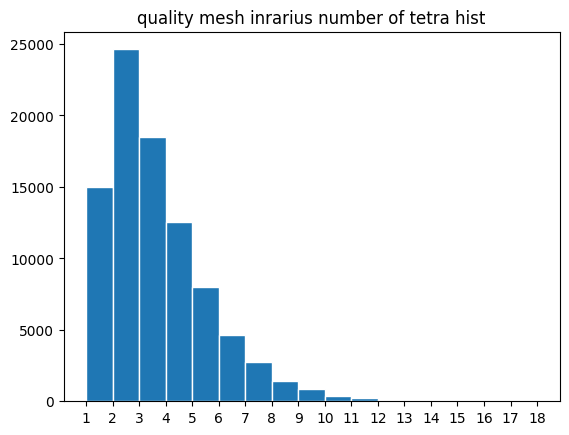

In [30]:
import numpy as np
import matplotlib.pyplot as plt

p50milsemir= [4, 3, 3, 2, 8, 2, 3, 5, 4, 3, 2, 1, 10, 2, 2, 2, 4, 2, 7, 2, 2, 2, 4, 7, 2, 1, 3, 1, 1, 5, 2, 4, 2, 4, 1, 1, 3, 5, 5, 4, 6, 4, 2, 1, 4, 4, 1, 3, 3, 1, 5, 4, 1, 5, 2, 2, 8, 1, 2, 8, 3, 2, 1, 3, 2, 2, 5, 3, 1, 6, 4, 7, 4, 2, 1, 3, 4, 2, 2, 5, 2, 4, 1, 2, 1, 2, 3, 7, 1, 2, 3, 3, 1, 2, 6, 2, 2, 1, 3, 1, 5, 4, 1, 4, 4, 1, 3, 2, 2, 2, 9, 3, 2, 2, 4, 2, 2, 7, 7, 2, 3, 5, 1, 5, 2, 2, 3, 5, 5, 2, 1, 6, 5, 3, 6, 1, 7, 3, 2, 5, 1, 5, 1, 2, 3, 3, 3, 2, 2, 5, 7, 3, 1, 5, 4, 1, 3, 2, 2, 3, 3, 2, 8, 8, 2, 2, 2, 2, 2, 2, 3, 6, 3, 2, 3, 3, 3, 1, 3, 6, 1, 3, 3, 1, 9, 2, 3, 5, 5, 3, 4, 3, 2, 3, 6, 2, 5, 1, 2, 5, 4, 6, 4, 4, 2, 2, 2, 5, 1, 4, 4, 1, 2, 6, 1, 3, 1, 2, 1, 6, 4, 2, 5, 8, 2, 5, 2, 2, 5, 2, 2, 3, 2, 2, 1, 2, 6, 3, 4, 1, 6, 1, 2, 3, 4, 5, 1, 5, 1, 1, 7, 8, 2, 2, 2, 4, 3, 4, 2, 2, 2, 2, 3, 2, 5, 2, 2, 2, 3, 9, 2, 2, 7, 8, 2, 2, 2, 4, 4, 3, 1, 3, 4, 1, 6, 6, 2, 5, 2, 2, 3, 1, 3, 1, 6, 3, 3, 3, 4, 4, 4, 2, 6, 5, 2, 4, 5, 2, 4, 1, 2, 5, 1, 4, 2, 2, 7, 4, 1, 2, 2, 3, 5, 4, 2, 1, 7, 1, 1, 5, 1, 3, 3, 1, 4, 6, 2, 2, 5, 1, 4, 3, 2, 2, 4, 4, 2, 4, 7, 8, 4, 1, 2, 4, 3, 2, 5, 4, 1, 7, 4, 4, 2, 2, 3, 5, 1, 3, 3, 3, 3, 1, 4, 3, 2, 5, 2, 1, 2, 3, 2, 5, 2, 5, 4, 3, 3, 2, 3, 2, 7, 2, 8, 2, 1, 7, 2, 1, 8, 6, 3, 3, 5, 3, 2, 5, 1, 3, 5, 2, 2, 2, 5, 3, 3, 1, 4, 3, 10, 3, 2, 2, 5, 5, 2, 4, 6, 2, 1, 5, 1, 8, 5, 4, 3, 11, 1, 2, 3, 5, 11, 5, 10, 1, 3, 3, 3, 3, 4, 2, 3, 5, 4, 5, 5, 4, 3, 2, 3, 1, 7, 2, 2, 2, 9, 5, 1, 6, 2, 3, 1, 6, 5, 3, 3, 4, 3, 2, 3, 5, 5, 1, 4, 2, 6, 3, 1, 4, 2, 2, 4, 2, 4, 4, 7, 1, 5, 2, 1, 1, 5, 3, 5, 4, 9, 2, 5, 3, 3, 2, 2, 1, 4, 3, 2, 3, 6, 2, 4, 4, 4, 2, 3, 4, 4, 1, 3, 1, 7, 3, 5, 1, 3, 6, 1, 5, 4, 7, 1, 3, 4, 2, 4, 5, 1, 3, 3, 1, 4, 2, 4, 1, 7, 4, 6, 2, 3, 3, 5, 2, 2, 1, 3, 3, 6, 6, 4, 3, 3, 1, 3, 2, 3, 7, 4, 4, 7, 5, 4, 8, 2, 2, 3, 4, 1, 2, 3, 4, 2, 5, 1, 9, 1, 2, 7, 3, 4, 3, 3, 3, 4, 6, 3, 3, 7, 1, 2, 2, 1, 4, 1, 2, 4, 1, 9, 3, 2, 5, 3, 3, 5, 4, 4, 1, 3, 1, 12, 2, 2, 7, 1, 2, 5, 2, 5, 1, 1, 4, 2, 1, 2, 7, 4, 3, 2, 1, 3, 5, 2, 2, 4, 6, 5, 1, 6, 1, 1, 2, 9, 2, 5, 4, 2, 2, 4, 2, 5, 4, 2, 2, 3, 2, 2, 2, 4, 1, 3, 2, 1, 5, 5, 1, 2, 2, 5, 2, 3, 4, 2, 5, 3, 8, 1, 9, 5, 2, 2, 1, 5, 1, 3, 1, 7, 5, 2, 4, 2, 4, 2, 1, 2, 2, 2, 2, 5, 1, 9, 2, 1, 8, 2, 5, 2, 3, 4, 5, 1, 1, 13, 1, 7, 4, 2, 1, 4, 7, 2, 4, 5, 3, 4, 7, 1, 3, 5, 1, 5, 4, 2, 3, 3, 2, 2, 2, 2, 9, 4, 6, 1, 4, 3, 6, 1, 2, 3, 6, 2, 2, 4, 2, 3, 2, 3, 6, 2, 3, 2, 2, 8, 5, 2, 2, 3, 5, 2, 4, 5, 6, 1, 2, 2, 1, 1, 3, 2, 5, 2, 4, 2, 6, 5, 1, 1, 5, 2, 3, 3, 3, 3, 1, 5, 3, 1, 3, 1, 6, 3, 4, 4, 7, 1, 4, 2, 4, 2, 2, 3, 4, 3, 2, 6, 2, 2, 6, 5, 2, 1, 7, 4, 2, 8, 3, 2, 2, 3, 3, 2, 3, 4, 3, 5, 4, 3, 2, 2, 2, 6, 1, 3, 1, 3, 2, 3, 2, 4, 1, 2, 3, 2, 4, 1, 4, 1, 5, 2, 2, 2, 3, 2, 3, 2, 5, 3, 3, 2, 3, 3, 4, 3, 7, 1, 1, 1, 4, 1, 3, 4, 4, 2, 6, 1, 2, 6, 1, 2, 3, 2, 4, 2, 2, 2, 2, 2, 8, 1, 1, 6, 5, 1, 1, 5, 2, 2, 1, 3, 4, 6, 2, 2, 2, 2, 3, 6, 2, 1, 2, 3, 2, 5, 4, 2, 5, 3, 1, 2, 2, 2, 3, 6, 3, 4, 3, 1, 5, 3, 7, 2, 3, 5, 2, 6, 2, 4, 4, 2, 2, 1, 2, 2, 2, 2, 5, 4, 3, 5, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 2, 6, 4, 3, 3, 6, 4, 4, 1, 4, 5, 5, 3, 2, 4, 4, 3, 2, 2, 3, 2, 1, 7, 2, 4, 4, 4, 2, 5, 2, 2, 5, 1, 2, 2, 3, 2, 2, 2, 9, 6, 1, 3, 1, 6, 2, 2, 7, 4, 2, 3, 2, 3, 1, 2, 3, 2, 4, 2, 3, 2, 6, 3, 1, 4, 2, 2, 3, 3, 3, 2, 6, 2, 5, 1, 4, 5, 5, 1, 1, 4, 2, 4, 6, 1, 2, 4, 4, 2, 4, 5, 3, 2, 4, 3, 2, 1, 3, 3, 2, 4, 3, 5, 2, 3, 3, 5, 4, 4, 3, 2, 3, 2, 5, 1, 2, 2, 4, 1, 2, 1, 8, 2, 1, 3, 3, 1, 4, 3, 2, 3, 1, 2, 3, 3, 3, 9, 1, 1, 2, 2, 4, 3, 2, 4, 2, 2, 2, 3, 3, 8, 2, 3, 1, 5, 2, 3, 2, 1, 2, 7, 4, 3, 1, 2, 2, 2, 2, 3, 4, 2, 3, 2, 3, 5, 2, 2, 5, 4, 1, 2, 3, 9, 1, 2, 2, 1, 5, 5, 4, 2, 3, 4, 3, 4, 3, 7, 6, 1, 3, 5, 2, 7, 1, 7, 5, 4, 5, 2, 6, 1, 7, 4, 4, 3, 6, 1, 4, 4, 1, 4, 4, 1, 4, 5, 5, 3, 4, 1, 2, 1, 4, 9, 3, 3, 4, 3, 1, 2, 2, 2, 1, 6, 5, 7, 3, 2, 2, 1, 6, 2, 2, 1, 6, 3, 3, 8, 5, 7, 1, 3, 1, 4, 5, 2, 2, 3, 4, 3, 3, 2, 3, 2, 1, 2, 4, 4, 6, 5, 3, 3, 2, 7, 1, 4, 1, 5, 2, 2, 2, 3, 5, 4, 2, 1, 5, 2, 4, 1, 1, 1, 9, 1, 3, 5, 10, 5, 11, 1, 2, 2, 8, 3, 4, 1, 3, 6, 2, 5, 5, 3, 6, 1, 3, 3, 5, 3, 4, 9, 3, 3, 1, 4, 3, 1, 2, 3, 2, 7, 7, 4, 2, 5, 2, 3, 1, 6, 1, 6, 4, 4, 3, 5, 4, 4, 1, 2, 2, 3, 1, 2, 3, 6, 1, 2, 6, 7, 2, 4, 4, 4, 3, 2, 3, 2, 9, 3, 1, 1, 1, 2, 1, 2, 3, 2, 1, 4, 3, 2, 2, 2, 2, 4, 1, 7, 1, 2, 4, 2, 8, 4, 1, 1, 6, 4, 2, 4, 7, 1, 1, 1, 3, 2, 5, 1, 5, 7, 2, 1, 5, 7, 1, 1, 4, 3, 2, 5, 3, 3, 2, 2, 4, 6, 4, 2, 2, 1, 6, 2, 4, 5, 3, 3, 2, 3, 2, 5, 2, 4, 2, 3, 2, 3, 3, 4, 4, 4, 2, 2, 2, 5, 1, 4, 1, 2, 1, 5, 1, 4, 4, 6, 1, 3, 8, 2, 3, 2, 4, 1, 6, 1, 3, 3, 2, 4, 3, 4, 4, 7, 2, 6, 1, 4, 6, 1, 3, 1, 3, 3, 2, 1, 5, 3, 1, 4, 1, 2, 4, 6, 2, 4, 2, 2, 2, 2, 6, 5, 5, 1, 3, 3, 1, 4, 4, 5, 1, 2, 4, 4, 4, 2, 6, 1, 4, 1, 3, 6, 2, 2, 1, 9, 1, 1, 2, 2, 3, 2, 1, 9, 4, 1, 3, 3, 4, 2, 6, 1, 3, 1, 4, 3, 1, 2, 3, 4, 2, 5, 9, 2, 4, 1, 1, 8, 1, 3, 4, 7, 2, 6, 3, 2, 1, 7, 7, 2, 5, 2, 3, 2, 6, 1, 5, 1, 4, 4, 4, 4, 5, 3, 7, 2, 5, 6, 1, 3, 6, 3, 4, 1, 2, 4, 4, 3, 8, 6, 6, 2, 2, 3, 6, 2, 1, 1, 4, 4, 2, 4, 3, 3, 3, 3, 4, 4, 3, 2, 4, 2, 3, 2, 5, 1, 3, 2, 3, 2, 1, 9, 1, 4, 2, 2, 1, 2, 5, 4, 2, 2, 2, 5, 1, 1, 2, 3, 4, 2, 2, 2, 4, 1, 1, 1, 2, 7, 2, 2, 2, 2, 2, 2, 1, 4, 5, 3, 2, 5, 2, 2, 3, 3, 4, 5, 3, 2, 5, 9, 1, 1, 4, 6, 3, 8, 1, 2, 2, 3, 3, 6, 1, 3, 2, 2, 3, 6, 1, 7, 1, 2, 2, 3, 6, 2, 2, 1, 8, 2, 5, 4, 1, 6, 3, 1, 3, 5, 3, 5, 1, 7, 4, 2, 2, 1, 2, 6, 3, 2, 5, 1, 1, 2, 2, 3, 2, 1, 4, 2, 3, 11, 2, 1, 7, 2, 5, 1, 3, 2, 1, 2, 4, 5, 2, 1, 5, 4, 3, 2, 2, 2, 2, 4, 1, 5, 3, 3, 1, 2, 1, 7, 1, 3, 2, 3, 4, 3, 3, 1, 3, 6, 5, 4, 1, 6, 2, 2, 2, 10, 2, 5, 2, 2, 5, 1, 2, 5, 2, 2, 7, 3, 4, 3, 1, 3, 2, 2, 2, 2, 5, 2, 2, 5, 5, 1, 1, 2, 4, 4, 6, 4, 1, 6, 1, 2, 2, 5, 2, 2, 2, 6, 2, 1, 2, 10, 3, 5, 3, 9, 2, 2, 1, 9, 2, 5, 5, 6, 2, 12, 1, 2, 4, 2, 2, 1, 5, 1, 1, 6, 8, 1, 1, 3, 3, 3, 3, 2, 2, 3, 3, 1, 4, 3, 3, 2, 4, 2, 2, 2, 2, 2, 3, 6, 2, 7, 1, 6, 1, 1, 4, 7, 1, 4, 2, 3, 2, 1, 2, 3, 2, 7, 2, 6, 2, 1, 2, 1, 4, 1, 4, 4, 5, 1, 2, 6, 3, 2, 2, 3, 2, 2, 2, 3, 1, 4, 3, 1, 4, 1, 3, 3, 3, 4, 2, 1, 3, 2, 3, 7, 8, 1, 3, 2, 1, 2, 3, 5, 2, 3, 3, 2, 7, 4, 6, 2, 2, 4, 4, 2, 2, 2, 3, 5, 2, 7, 3, 5, 3, 2, 3, 3, 1, 2, 5, 1, 2, 3, 3, 4, 4, 5, 5, 2, 4, 4, 2, 6, 3, 3, 3, 8, 1, 2, 4, 3, 2, 4, 2, 1, 3, 5, 7, 5, 7, 1, 2, 5, 4, 2, 4, 2, 1, 2, 3, 4, 5, 5, 14, 2, 1, 1, 4, 4, 6, 3, 3, 6, 3, 3, 2, 3, 2, 2, 4, 6, 1, 4, 4, 3, 1, 3, 4, 3, 3, 5, 4, 4, 2, 6, 3, 3, 2, 2, 3, 6, 2, 1, 3, 2, 5, 3, 9, 3, 6, 1, 2, 3, 1, 3, 2, 12, 4, 3, 5, 2, 2, 2, 9, 1, 4, 2, 5, 2, 3, 2, 6, 5, 1, 3, 2, 3, 4, 3, 6, 1, 5, 6, 2, 2, 2, 10, 2, 1, 2, 2, 2, 4, 7, 6, 2, 4, 4, 3, 2, 4, 3, 4, 2, 1, 2, 2, 2, 2, 3, 4, 2, 2, 6, 6, 3, 1, 5, 3, 7, 1, 5, 3, 8, 1, 6, 1, 3, 4, 4, 2, 2, 5, 7, 2, 1, 2, 6, 1, 1, 3, 7, 3, 2, 3, 1, 6, 2, 1, 2, 3, 2, 5, 1, 8, 4, 4, 1, 7, 2, 4, 5, 3, 4, 2, 1, 2, 3, 4, 2, 2, 3, 1, 2, 6, 8, 1, 5, 4, 1, 1, 6, 3, 1, 4, 3, 3, 2, 1, 4, 8, 9, 1, 2, 3, 2, 3, 1, 4, 3, 2, 6, 2, 2, 4, 1, 2, 3, 4, 7, 4, 2, 2, 2, 2, 2, 2, 4, 5, 1, 3, 2, 5, 4, 2, 8, 3, 5, 2, 3, 6, 2, 6, 6, 7, 2, 4, 1, 5, 4, 5, 2, 5, 5, 1, 3, 3, 1, 3, 2, 4, 5, 2, 5, 1, 4, 3, 2, 1, 7, 1, 1, 6, 10, 1, 2, 3, 2, 2, 4, 3, 3, 2, 3, 3, 2, 2, 9, 3, 2, 13, 1, 2, 5, 5, 5, 3, 3, 2, 1, 4, 6, 4, 1, 4, 2, 1, 9, 2, 1, 1, 2, 2, 1, 5, 2, 5, 6, 2, 4, 3, 3, 3, 1, 4, 3, 3, 8, 2, 4, 2, 3, 3, 4, 1, 2, 2, 2, 4, 4, 2, 4, 4, 1, 3, 1, 3, 3, 6, 4, 1, 7, 1, 8, 4, 2, 2, 3, 2, 6, 4, 3, 3, 3, 6, 4, 1, 7, 1, 3, 7, 1, 5, 5, 5, 1, 7, 5, 1, 2, 4, 3, 2, 1, 5, 4, 3, 1, 5, 10, 2, 8, 1, 2, 3, 3, 1, 5, 2, 4, 4, 2, 2, 8, 3, 1, 1, 5, 3, 1, 5, 3, 4, 5, 1, 2, 3, 2, 4, 6, 1, 2, 3, 4, 4, 2, 3, 3, 5, 1, 7, 7, 1, 4, 6, 6, 3, 8, 1, 3, 2, 3, 7, 4, 5, 7, 1, 3, 6, 4, 2, 1, 9, 5, 3, 4, 1, 2, 8, 2, 3, 2, 2, 6, 6, 3, 1, 8, 3, 2, 3, 2, 1, 2, 3, 1, 4, 1, 2, 3, 2, 4, 1, 2, 6, 1, 4, 3, 4, 2, 2, 2, 3, 6, 4, 4, 6, 2, 4, 2, 5, 2, 3, 3, 1, 3, 5, 7, 1, 7, 1, 3, 3, 2, 1, 2, 6, 4, 5, 1, 2, 5, 2, 1, 5, 6, 7, 3, 3, 3, 7, 1, 4, 2, 2, 4, 2, 1, 4, 3, 5, 3, 2, 2, 7, 5, 6, 1, 2, 4, 4, 6, 4, 3, 5, 4, 1, 2, 7, 3, 3, 2, 2, 2, 6, 1, 1, 3, 4, 2, 2, 4, 4, 2, 5, 10, 2, 1, 4, 2, 3, 3, 1, 3, 5, 5, 4, 3, 3, 2, 3, 2, 2, 2, 3, 2, 4, 2, 3, 1, 5, 7, 4, 2, 5, 1, 6, 2, 4, 2, 2, 4, 1, 6, 2, 3, 3, 4, 3, 2, 7, 4, 4, 1, 6, 3, 3, 3, 4, 5, 1, 7, 1, 3, 1, 4, 3, 6, 2, 2, 1, 5, 7, 2, 9, 6, 3, 3, 3, 4, 5, 7, 2, 5, 1, 1, 5, 3, 2, 2, 2, 3, 3, 6, 1, 5, 1, 6, 2, 7, 1, 3, 3, 2, 6, 2, 4, 2, 2, 3, 3, 5, 3, 2, 4, 6, 2, 5, 3, 4, 3, 1, 2, 16, 2, 2, 1, 3, 3, 1, 6, 3, 7, 2, 3, 4, 1, 3, 5, 2, 1, 2, 3, 2, 3, 4, 6, 1, 3, 2, 4, 1, 1, 2, 1, 2, 3, 1, 5, 3, 4, 2, 3, 3, 1, 6, 6, 2, 4, 2, 2, 1, 5, 3, 2, 2, 2, 1, 4, 3, 4, 1, 4, 1, 3, 3, 3, 1, 4, 2, 2, 4, 3, 2, 5, 2, 2, 2, 4, 1, 5, 3, 2, 5, 1, 1, 3, 3, 2, 2, 4, 3, 2, 2, 5, 1, 5, 2, 1, 4, 3, 1, 3, 3, 5, 2, 2, 3, 3, 3, 1, 3, 4, 2, 3, 6, 2, 5, 4, 2, 1, 2, 5, 4, 4, 1, 2, 3, 2, 2, 4, 7, 4, 1, 3, 2, 3, 5, 2, 2, 4, 2, 3, 3, 2, 4, 3, 6, 3, 1, 3, 3, 8, 1, 2, 2, 2, 2, 3, 2, 4, 2, 3, 1, 4, 2, 5, 2, 3, 5, 4, 1, 3, 2, 2, 5, 1, 3, 1, 4, 2, 4, 3, 1, 1, 4, 3, 3, 2, 2, 1, 2, 2, 2, 6, 3, 4, 1, 4, 1, 5, 8, 4, 1, 3, 3, 2, 3, 5, 2, 1, 3, 2, 6, 2, 3, 3, 2, 4, 3, 5, 1, 8, 5, 2, 1, 7, 1, 9, 1, 3, 2, 1, 3, 3, 2, 1, 6, 1, 3, 3, 2, 2, 2, 1, 4, 4, 1, 3, 2, 3, 2, 3, 2, 4, 5, 2, 4, 1, 2, 3, 4, 1, 2, 2, 2, 6, 1, 6, 2, 1, 3, 7, 2, 2, 2, 6, 3, 10, 1, 2, 3, 2, 1, 4, 2, 2, 4, 1, 6, 3, 3, 5, 1, 4, 4, 3, 4, 2, 2, 3, 1, 2, 1, 6, 1, 6, 7, 4, 3, 2, 4, 3, 7, 3, 1, 4, 1, 2, 3, 2, 1, 2, 4, 5, 3, 4, 2, 3, 2, 2, 8, 1, 3, 2, 2, 4, 1, 5, 4, 3, 5, 3, 4, 5, 4, 3, 3, 2, 8, 1, 2, 6, 2, 6, 5, 1, 1, 6, 4, 1, 4, 8, 1, 4, 4, 2, 2, 3, 3, 2, 4, 8, 1, 1, 3, 2, 5, 1, 2, 4, 3, 2, 2, 2, 3, 3, 4, 2, 3, 3, 3, 1, 3, 1, 1, 5, 2, 9, 4, 2, 3, 5, 3, 2, 4, 4, 4, 2, 3, 3, 4, 2, 3, 3, 2, 5, 5, 3, 5, 2, 1, 3, 2, 1, 2, 4, 7, 2, 1, 3, 3, 2, 3, 5, 2, 2, 6, 8, 3, 2, 5, 3, 2, 2, 2, 2, 3, 1, 3, 3, 4, 5, 1, 5, 2, 4, 2, 4, 2, 4, 6, 5, 1, 2, 5, 3, 4, 1, 5, 4, 1, 8, 2, 9, 1, 2, 2, 3, 3, 1, 2, 2, 2, 2, 2, 3, 3, 4, 2, 2, 6, 3, 3, 1, 4, 3, 1, 3, 1, 2, 2, 2, 1, 9, 2, 2, 4, 2, 3, 1, 9, 2, 6, 1, 1, 7, 3, 2, 2, 4, 4, 2, 5, 2, 7, 1, 1, 4, 2, 3, 2, 6, 3, 2, 1, 2, 2, 6, 2, 2, 3, 1, 5, 1, 3, 3, 5, 1, 1, 4, 3, 4, 1, 2, 4, 2, 2, 2, 3, 1, 6, 1, 2, 2, 10, 4, 3, 3, 4, 2, 1, 5, 2, 2, 4, 3, 4, 6, 3, 1, 8, 1, 2, 8, 3, 4, 4, 2, 4, 1, 2, 2, 1, 7, 4, 3, 4, 1, 2, 4, 3, 2, 2, 3, 1, 4, 2, 1, 6, 2, 4, 7, 2, 1, 7, 1, 11, 6, 1, 2, 4, 3, 3, 8, 3, 5, 2, 4, 2, 2, 3, 4, 1, 3, 3, 2, 2, 2, 4, 3, 2, 2, 2, 3, 3, 2, 4, 3, 2, 3, 4, 4, 2, 2, 1, 3, 3, 5, 3, 1, 2, 3, 9, 7, 2, 6, 3, 6, 2, 3, 3, 4, 1, 6, 3, 3, 7, 1, 4, 4, 5, 2, 3, 4, 9, 1, 2, 1, 3, 5, 2, 1, 10, 6, 2, 4, 3, 6, 1, 8, 2, 4, 1, 5, 1, 2, 9, 1, 4, 6, 3, 5, 2, 3, 2, 6, 3, 6, 3, 3, 2, 5, 2, 2, 3, 2, 2, 1, 6, 2, 5, 1, 4, 4, 4, 7, 2, 4, 4, 1, 1, 2, 2, 2, 2, 7, 3, 1, 5, 5, 2, 1, 2, 3, 4, 2, 1, 2, 2, 3, 4, 3, 2, 2, 6, 3, 2, 2, 2, 7, 2, 4, 2, 3, 2, 6, 2, 3, 1, 7, 3, 2, 5, 2, 6, 6, 2, 5, 1, 5, 2, 7, 3, 2, 5, 6, 4, 1, 4, 4, 3, 2, 3, 4, 2, 1, 2, 3, 8, 3, 2, 2, 5, 6, 6, 4, 2, 3, 3, 5, 7, 4, 5, 1, 4, 2, 2, 1, 3, 7, 2, 5, 5, 1, 3, 4, 4, 5, 3, 4, 4, 3, 5, 11, 2, 1, 4, 5, 3, 2, 7, 2, 1, 4, 7, 3, 3, 6, 8, 3, 6, 1, 1, 2, 4, 2, 2, 3, 2, 4, 6, 6, 2, 2, 2, 5, 3, 3, 3, 2, 1, 2, 5, 2, 3, 3, 2, 3, 1, 3, 5, 4, 5, 2, 4, 2, 3, 1, 6, 2, 1, 2, 3, 2, 2, 2, 1, 7, 3, 5, 2, 2, 2, 3, 2, 4, 4, 7, 4, 3, 4, 2, 4, 3, 3, 4, 2, 2, 2, 1, 2, 3, 2, 7, 2, 2, 2, 3, 4, 6, 2, 6, 3, 1, 6, 3, 2, 2, 4, 3, 1, 3, 3, 4, 4, 4, 1, 1, 2, 3, 3, 2, 6, 1, 1, 2, 2, 3, 1, 3, 2, 4, 5, 3, 7, 1, 4, 4, 3, 2, 2, 2, 4, 4, 2, 3, 3, 2, 2, 4, 2, 5, 7, 2, 3, 3, 5, 1, 3, 6, 2, 3, 1, 5, 3, 1, 1, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 3, 1, 4, 3, 7, 4, 8, 5, 1, 1, 1, 1, 6, 1, 5, 2, 1, 3, 4, 1, 2, 5, 3, 2, 1, 10, 4, 2, 3, 2, 3, 5, 1, 4, 12, 1, 2, 4, 1, 4, 2, 5, 3, 2, 7, 2, 2, 2, 3, 3, 1, 1, 2, 3, 5, 1, 3, 2, 5, 5, 6, 1, 4, 7, 5, 2, 2, 2, 2, 2, 4, 4, 1, 1, 4, 2, 4, 2, 5, 3, 1, 3, 1, 6, 3, 2, 6, 2, 1, 1, 3, 4, 7, 4, 2, 2, 12, 4, 2, 1, 2, 2, 2, 1, 5, 2, 5, 3, 1, 5, 9, 3, 3, 3, 2, 5, 2, 4, 4, 2, 5, 1, 2, 2, 3, 4, 5, 3, 3, 2, 3, 6, 2, 5, 2, 3, 5, 1, 2, 3, 7, 2, 2, 9, 3, 4, 6, 5, 1, 4, 2, 3, 2, 2, 1, 2, 2, 2, 1, 4, 5, 2, 3, 2, 1, 2, 2, 1, 4, 7, 2, 2, 2, 9, 2, 3, 3, 5, 2, 4, 4, 6, 1, 3, 3, 2, 3, 2, 7, 1, 1, 2, 4, 2, 4, 4, 4, 3, 2, 4, 5, 2, 3, 2, 2, 4, 3, 3, 1, 3, 2, 3, 1, 5, 2, 1, 3, 7, 1, 2, 3, 3, 2, 3, 1, 1, 1, 6, 1, 4, 2, 4, 4, 2, 5, 4, 3, 4, 12, 3, 1, 2, 3, 4, 2, 2, 2, 4, 4, 2, 6, 1, 4, 3, 3, 4, 5, 1, 3, 3, 2, 4, 1, 1, 4, 3, 2, 4, 5, 3, 7, 1, 4, 4, 3, 5, 1, 1, 2, 2, 3, 3, 4, 4, 2, 5, 4, 3, 3, 4, 5, 5, 4, 2, 1, 6, 2, 4, 3, 3, 5, 4, 3, 1, 3, 5, 3, 3, 3, 2, 1, 4, 4, 8, 1, 5, 4, 2, 2, 3, 5, 7, 1, 3, 3, 2, 3, 5, 1, 5, 1, 2, 5, 2, 7, 2, 3, 8, 1, 5, 1, 1, 2, 1, 3, 3, 6, 6, 2, 4, 3, 3, 9, 1, 6, 2, 2, 2, 2, 2, 3, 4, 1, 2, 4, 9, 4, 3, 3, 2, 2, 1, 9, 2, 2, 2, 3, 3, 3, 7, 1, 3, 6, 7, 1, 3, 3, 3, 5, 2, 6, 3, 9, 5, 4, 3, 3, 6, 1, 2, 5, 1, 2, 2, 1, 7, 3, 5, 2, 3, 5, 2, 1, 2, 2, 3, 2, 3, 2, 1, 2, 2, 4, 3, 3, 5, 2, 2, 2, 4, 3, 3, 4, 8, 6, 2, 4, 6, 4, 1, 6, 4, 3, 2, 2, 1, 4, 3, 5, 2, 3, 2, 4, 3, 1, 6, 2, 1, 3, 3, 2, 2, 1, 9, 3, 3, 3, 1, 3, 4, 1, 2, 7, 3, 2, 4, 1, 1, 3, 3, 1, 1, 3, 3, 3, 2, 2, 3, 2, 2, 2, 4, 4, 13, 1, 2, 8, 4, 3, 3, 4, 5, 3, 4, 2, 2, 2, 4, 1, 5, 2, 3, 1, 4, 4, 2, 3, 2, 8, 2, 1, 12, 2, 1, 8, 3, 4, 2, 2, 7, 2, 4, 4, 4, 3, 3, 2, 3, 5, 3, 3, 6, 3, 1, 6, 4, 3, 3, 5, 1, 2, 5, 2, 5, 4, 2, 1, 8, 2, 7, 1, 5, 2, 3, 1, 3, 1, 3, 1, 2, 3, 2, 3, 3, 7, 5, 1, 2, 2, 3, 4, 6, 2, 5, 5, 5, 2, 4, 3, 2, 8, 2, 4, 1, 2, 2, 2, 1, 8, 2, 3, 6, 2, 3, 2, 2, 2, 2, 3, 2, 4, 3, 5, 2, 4, 3, 2, 3, 5, 4, 1, 3, 2, 10, 3, 2, 8, 2, 13, 3, 7, 5, 3, 1, 4, 3, 3, 1, 3, 3, 5, 1, 1, 4, 2, 3, 1, 4, 3, 2, 3, 3, 5, 2, 1, 3, 3, 3, 3, 3, 2, 3, 4, 1, 2, 2, 1, 4, 1, 2, 4, 5, 2, 6, 1, 4, 3, 3, 6, 4, 1, 1, 2, 4, 4, 1, 3, 4, 2, 2, 1, 4, 2, 4, 3, 3, 2, 3, 1, 2, 2, 6, 1, 4, 3, 3, 2, 4, 3, 3, 3, 6, 2, 3, 3, 4, 2, 4, 1, 1, 2, 4, 2, 2, 2, 3, 6, 3, 3, 1, 3, 1, 6, 2, 3, 1, 2, 2, 1, 2, 2, 2, 4, 4, 4, 8, 2, 2, 2, 5, 3, 2, 3, 2, 2, 2, 1, 5, 4, 1, 5, 3, 2, 4, 2, 4, 4, 3, 2, 3, 3, 2, 2, 2, 5, 3, 3, 1, 1, 2, 5, 2, 2, 3, 2, 3, 1, 5, 1, 8, 1, 2, 2, 4, 3, 3, 2, 3, 3, 2, 4, 2, 2, 1, 7, 2, 3, 4, 3, 1, 4, 3, 2, 2, 1, 5, 3, 5, 1, 5, 1, 2, 2, 3, 2, 3, 3, 2, 1, 5, 6, 3, 3, 4, 5, 3, 2, 2, 2, 1, 3, 2, 3, 6, 1, 2, 4, 1, 4, 2, 5, 1, 4, 3, 4, 2, 1, 4, 4, 6, 4, 3, 2, 2, 2, 2, 5, 5, 1, 7, 2, 2, 5, 5, 3, 9, 4, 1, 7, 1, 5, 1, 2, 3, 3, 4, 5, 2, 7, 1, 2, 4, 2, 3, 4, 6, 1, 4, 3, 6, 1, 3, 2, 1, 6, 4, 4, 1, 7, 3, 4, 2, 4, 4, 2, 3, 3, 2, 3, 2, 2, 2, 5, 1, 7, 5, 3, 11, 1, 1, 4, 2, 2, 7, 2, 4, 2, 3, 4, 1, 1, 2, 4, 3, 3, 2, 10, 6, 1, 6, 3, 2, 6, 4, 4, 3, 4, 5, 3, 5, 2, 3, 2, 1, 5, 3, 5, 3, 2, 5, 5, 2, 5, 2, 3, 5, 1, 3, 3, 2, 7, 2, 1, 3, 2, 2, 3, 7, 2, 5, 1, 4, 2, 2, 10, 3, 3, 6, 3, 4, 6, 2, 4, 2, 2, 4, 6, 2, 2, 2, 2, 4, 3, 4, 2, 5, 3, 2, 4, 1, 1, 5, 2, 4, 2, 2, 1, 6, 5, 3, 1, 4, 1, 2, 2, 2, 2, 3, 1, 6, 1, 4, 10, 6, 1, 5, 1, 5, 1, 2, 2, 2, 1, 1, 9, 1, 1, 1, 6, 3, 2, 2, 4, 3, 6, 6, 3, 5, 6, 1, 4, 2, 2, 3, 2, 4, 3, 4, 5, 1, 4, 5, 3, 3, 5, 4, 3, 8, 1, 5, 3, 3, 1, 4, 1, 1, 3, 3, 1, 2, 8, 2, 1, 1, 2, 3, 1, 7, 2, 8, 4, 1, 2, 6, 2, 2, 2, 1, 5, 5, 1, 4, 1, 5, 3, 2, 3, 3, 2, 2, 3, 3, 4, 2, 3, 6, 6, 2, 6, 3, 1, 3, 1, 2, 6, 1, 3, 2, 3, 5, 4, 8, 4, 2, 2, 5, 1, 2, 2, 2, 2, 3, 4, 2, 2, 1, 1, 3, 1, 2, 2, 5, 1, 4, 6, 4, 1, 3, 3, 1, 3, 9, 1, 1, 1, 5, 4, 1, 2, 3, 4, 5, 7, 2, 3, 1, 2, 5, 1, 3, 3, 1, 3, 4, 9, 4, 3, 1, 2, 7, 2, 3, 5, 6, 4, 2, 2, 2, 3, 2, 2, 2, 9, 2, 3, 2, 7, 5, 5, 1, 1, 3, 4, 2, 5, 4, 10, 1, 5, 1, 3, 3, 1, 9, 2, 2, 5, 3, 7, 2, 3, 6, 1, 2, 3, 1, 2, 10, 1, 3, 2, 1, 3, 3, 6, 4, 1, 1, 4, 2, 2, 3, 2, 2, 3, 3, 2, 1, 1, 1, 4, 4, 3, 3, 2, 5, 3, 6, 3, 1, 4, 1, 2, 2, 4, 5, 4, 2, 1, 3, 12, 5, 5, 4, 3, 2, 2, 3, 5, 2, 3, 2, 2, 2, 3, 7, 3, 1, 2, 1, 4, 4, 5, 2, 2, 5, 2, 2, 2, 3, 6, 2, 4, 2, 2, 4, 2, 4, 4, 1, 2, 3, 4, 2, 1, 7, 2, 3, 4, 1, 5, 6, 8, 2, 4, 1, 8, 2, 2, 1, 3, 1, 4, 2, 1, 12, 2, 2, 3, 1, 2, 4, 3, 2, 2, 4, 1, 3, 2, 2, 3, 1, 5, 2, 4, 4, 2, 4, 3, 3, 1, 12, 2, 1, 4, 3, 7, 4, 4, 2, 2, 2, 2, 1, 2, 4, 4, 4, 3, 3, 4, 3, 2, 3, 3, 5, 2, 5, 7, 2, 8, 6, 2, 3, 1, 6, 1, 3, 7, 5, 1, 3, 4, 2, 2, 3, 1, 4, 2, 2, 4, 2, 2, 2, 2, 1, 6, 2, 2, 1, 5, 5, 2, 1, 2, 3, 3, 2, 7, 2, 2, 4, 2, 1, 8, 3, 1, 4, 4, 5, 1, 1, 1, 4, 6, 3, 2, 2, 2, 3, 1, 7, 1, 4, 3, 6, 2, 3, 2, 1, 8, 5, 2, 3, 1, 3, 5, 3, 1, 6, 1, 3, 2, 3, 1, 5, 2, 2, 2, 1, 3, 4, 2, 2, 4, 3, 1, 3, 6, 3, 9, 2, 1, 3, 4, 3, 3, 3, 5, 2, 2, 5, 1, 2, 4, 2, 3, 1, 3, 3, 1, 3, 2, 4, 3, 2, 2, 5, 1, 4, 2, 4, 4, 4, 6, 2, 4, 1, 4, 5, 6, 2, 4, 6, 3, 1, 3, 5, 3, 6, 3, 2, 3, 2, 3, 1, 2, 4, 1, 5, 1, 4, 5, 5, 3, 2, 3, 2, 2, 8, 2, 2, 4, 3, 1, 5, 3, 2, 4, 4, 8, 2, 3, 4, 1, 4, 4, 2, 2, 2, 5, 1, 2, 2, 5, 1, 4, 6, 3, 4, 3, 1, 5, 2, 3, 2, 7, 3, 2, 1, 2, 5, 3, 2, 7, 3, 2, 3, 2, 1, 5, 1, 4, 8, 3, 2, 3, 3, 5, 3, 5, 4, 2, 3, 2, 4, 2, 10, 2, 4, 4, 7, 1, 1, 1, 6, 5, 3, 1, 3, 3, 2, 1, 2, 9, 2, 4, 2, 2, 2, 4, 4, 1, 2, 3, 3, 3, 5, 2, 4, 5, 2, 2, 3, 2, 2, 2, 4, 2, 5, 1, 4, 2, 6, 6, 3, 2, 2, 2, 3, 2, 4, 2, 3, 7, 3, 3, 2, 2, 4, 4, 1, 6, 3, 4, 4, 1, 9, 9, 1, 2, 5, 6, 4, 4, 2, 1, 3, 2, 4, 3, 7, 6, 1, 7, 7, 4, 3, 9, 3, 3, 2, 2, 2, 2, 4, 1, 6, 2, 6, 3, 1, 2, 3, 7, 1, 7, 2, 2, 1, 2, 3, 2, 7, 1, 3, 6, 3, 6, 2, 2, 4, 3, 2, 2, 4, 8, 1, 1, 2, 5, 2, 2, 3, 4, 2, 6, 3, 3, 1, 1, 5, 1, 3, 4, 8, 3, 5, 7, 1, 2, 3, 2, 4, 1, 5, 1, 4, 2, 4, 1, 3, 2, 3, 2, 2, 2, 6, 1, 3, 3, 2, 9, 2, 1, 2, 2, 3, 2, 1, 4, 2, 3, 5, 4, 2, 1, 2, 3, 4, 2, 3, 1, 5, 1, 3, 3, 3, 5, 1, 3, 4, 1, 5, 4, 5, 1, 3, 6, 1, 3, 2, 6, 2, 1, 6, 2, 1, 6, 2, 3, 2, 4, 1, 3, 4, 4, 3, 7, 2, 3, 3, 3, 2, 2, 4, 2, 2, 4, 3, 2, 2, 2, 2, 3, 5, 3, 2, 5, 2, 5, 1, 2, 5, 3, 4, 3, 4, 1, 4, 1, 2, 2, 1, 4, 3, 4, 2, 1, 2, 2, 2, 3, 4, 2, 4, 3, 2, 3, 2, 1, 2, 6, 3, 2, 3, 2, 3, 3, 3, 2, 6, 1, 5, 1, 3, 1, 7, 4, 5, 1, 13, 1, 2, 2, 3, 5, 7, 1, 2, 1, 2, 1, 2, 3, 8, 1, 2, 2, 4, 2, 9, 1, 2, 2, 5, 1, 5, 1, 1, 1, 2, 2, 11, 4, 2, 4, 3, 2, 2, 1, 4, 3, 4, 5, 1, 2, 2, 4, 9, 3, 2, 6, 1, 8, 1, 1, 2, 3, 2, 1, 4, 3, 3, 2, 1, 4, 2, 2, 4, 4, 4, 6, 3, 2, 1, 2, 2, 5, 6, 1, 2, 3, 1, 3, 4, 1, 4, 3, 13, 2, 2, 5, 5, 2, 1, 2, 3, 7, 3, 2, 5, 7, 3, 2, 4, 3, 4, 2, 2, 7, 3, 4, 3, 3, 3, 3, 2, 1, 11, 2, 1, 4, 1, 2, 2, 2, 3, 2, 3, 3, 3, 4, 2, 3, 1, 2, 2, 3, 2, 2, 3, 6, 2, 3, 4, 4, 1, 3, 1, 5, 5, 2, 2, 2, 6, 5, 4, 2, 1, 5, 2, 3, 5, 1, 2, 4, 1, 3, 7, 3, 5, 8, 3, 1, 3, 2, 3, 2, 3, 2, 2, 4, 7, 7, 2, 4, 1, 4, 4, 2, 2, 2, 1, 6, 1, 4, 3, 5, 5, 2, 2, 3, 4, 5, 1, 1, 4, 2, 1, 7, 1, 1, 2, 2, 2, 2, 3, 2, 2, 4, 2, 4, 1, 4, 2, 5, 4, 4, 1, 5, 3, 1, 2, 1, 2, 5, 6, 1, 9, 5, 2, 9, 4, 2, 5, 4, 2, 4, 3, 8, 3, 2, 1, 2, 4, 2, 4, 2, 4, 1, 3, 3, 3, 2, 1, 4, 3, 3, 7, 3, 2, 1, 3, 1, 6, 4, 3, 8, 1, 1, 1, 3, 3, 4, 3, 2, 3, 3, 2, 4, 4, 1, 6, 1, 3, 2, 3, 6, 1, 6, 3, 3, 2, 5, 5, 3, 4, 2, 2, 5, 2, 2, 5, 4, 3, 6, 1, 1, 5, 2, 8, 2, 4, 5, 3, 4, 3, 3, 8, 2, 3, 3, 4, 3, 3, 2, 2, 1, 4, 5, 4, 3, 1, 2, 3, 8, 1, 1, 4, 3, 7, 4, 3, 1, 2, 7, 1, 2, 2, 2, 2, 2, 9, 1, 2, 2, 6, 1, 8, 1, 5, 1, 4, 4, 5, 2, 2, 2, 2, 2, 3, 2, 1, 6, 7, 5, 4, 1, 5, 2, 4, 4, 2, 6, 2, 10, 3, 2, 3, 4, 3, 7, 5, 2, 3, 2, 4, 2, 3, 1, 2, 7, 4, 1, 7, 3, 3, 6, 1, 6, 2, 1, 4, 4, 3, 2, 6, 2, 2, 2, 2, 3, 4, 4, 4, 5, 5, 5, 3, 2, 3, 2, 3, 3, 1, 5, 3, 4, 2, 4, 1, 1, 5, 3, 7, 3, 2, 2, 3, 4, 2, 6, 1, 1, 2, 2, 1, 3, 5, 3, 6, 5, 2, 3, 4, 1, 5, 3, 3, 6, 1, 4, 3, 2, 5, 1, 5, 3, 3, 3, 1, 1, 4, 1, 1, 8, 5, 2, 1, 5, 1, 2, 2, 4, 3, 9, 1, 8, 4, 1, 3, 3, 7, 3, 2, 3, 2, 2, 3, 4, 3, 4, 5, 4, 4, 2, 5, 2, 4, 3, 6, 2, 2, 7, 5, 4, 2, 4, 2, 4, 3, 4, 5, 3, 3, 1, 5, 5, 1, 2, 1, 1, 6, 2, 6, 2, 2, 3, 2, 3, 6, 5, 1, 4, 3, 6, 3, 6, 6, 3, 2, 3, 8, 4, 2, 2, 1, 2, 3, 3, 7, 1, 2, 3, 2, 4, 8, 1, 1, 9, 1, 2, 3, 6, 1, 2, 1, 4, 7, 2, 4, 5, 6, 1, 3, 3, 1, 4, 1, 2, 1, 2, 3, 2, 3, 5, 3, 2, 2, 2, 5, 2, 3, 5, 4, 1, 5, 4, 4, 3, 2, 2, 2, 6, 2, 1, 4, 2, 5, 4, 3, 3, 6, 5, 5, 1, 7, 2, 2, 2, 1, 4, 2, 2, 5, 2, 4, 3, 3, 9, 2, 1, 5, 2, 5, 2, 3, 4, 2, 2, 2, 6, 5, 5, 2, 5, 4, 5, 2, 3, 4, 3, 3, 1, 2, 3, 4, 6, 3, 2, 8, 3, 7, 1, 3, 3, 3, 5, 2, 3, 4, 2, 4, 2, 3, 2, 3, 4, 3, 6, 2, 3, 2, 6, 8, 4, 2, 2, 1, 4, 1, 2, 2, 4, 3, 7, 4, 2, 3, 2, 2, 10, 3, 3, 3, 2, 1, 5, 5, 2, 7, 2, 1, 7, 3, 2, 2, 3, 2, 8, 4, 2, 5, 2, 4, 2, 2, 3, 3, 6, 4, 2, 2, 3, 3, 3, 5, 1, 5, 3, 1, 8, 1, 4, 2, 5, 1, 2, 2, 2, 3, 1, 5, 4, 3, 5, 4, 2, 4, 4, 4, 2, 5, 4, 3, 1, 2, 5, 1, 4, 2, 3, 2, 3, 4, 1, 2, 3, 2, 2, 2, 2, 3, 6, 6, 3, 2, 3, 1, 2, 2, 2, 1, 3, 2, 1, 6, 3, 3, 7, 2, 2, 2, 10, 9, 4, 2, 4, 2, 2, 2, 2, 5, 1, 4, 2, 8, 3, 1, 2, 5, 4, 3, 5, 1, 3, 2, 4, 3, 2, 8, 4, 2, 3, 2, 8, 1, 7, 1, 3, 2, 1, 6, 4, 5, 4, 5, 5, 2, 4, 7, 8, 1, 3, 3, 3, 2, 2, 3, 3, 2, 3, 2, 2, 2, 1, 4, 3, 1, 4, 2, 2, 5, 7, 6, 8, 1, 3, 7, 4, 3, 4, 2, 4, 2, 5, 5, 10, 6, 3, 1, 2, 2, 5, 1, 1, 3, 3, 8, 3, 3, 6, 3, 4, 2, 3, 2, 8, 1, 6, 4, 3, 3, 3, 3, 1, 4, 1, 1, 3, 4, 1, 4, 4, 4, 4, 2, 2, 3, 3, 1, 3, 2, 4, 4, 2, 3, 1, 3, 4, 2, 3, 3, 1, 2, 2, 3, 3, 5, 2, 9, 1, 2, 3, 2, 3, 5, 3, 2, 6, 3, 3, 3, 3, 3, 4, 10, 1, 3, 4, 1, 4, 1, 3, 8, 1, 3, 3, 1, 4, 2, 2, 2, 5, 3, 4, 3, 2, 2, 2, 1, 4, 6, 1, 5, 4, 3, 3, 2, 2, 2, 2, 5, 1, 6, 4, 3, 3, 2, 3, 3, 1, 2, 2, 8, 7, 1, 4, 5, 4, 2, 2, 3, 6, 1, 2, 2, 1, 4, 2, 3, 3, 2, 3, 4, 1, 4, 5, 2, 6, 3, 1, 6, 3, 7, 4, 2, 4, 2, 3, 5, 2, 3, 4, 1, 2, 3, 1, 4, 4, 4, 2, 1, 2, 5, 5, 4, 5, 4, 1, 3, 7, 5, 3, 4, 2, 2, 7, 1, 2, 4, 3, 10, 2, 9, 6, 2, 1, 2, 5, 1, 1, 3, 1, 1, 3, 3, 2, 2, 3, 3, 4, 4, 2, 6, 4, 6, 6, 2, 1, 6, 2, 5, 1, 3, 3, 5, 1, 3, 5, 2, 3, 3, 4, 2, 2, 3, 5, 1, 3, 5, 2, 4, 3, 2, 2, 2, 5, 2, 4, 1, 3, 1, 9, 1, 3, 4, 4, 2, 3, 4, 3, 8, 3, 5, 2, 8, 7, 5, 2, 7, 1, 2, 1, 6, 2, 4, 3, 2, 6, 3, 8, 2, 2, 4, 6, 1, 5, 2, 1, 3, 1, 5, 4, 4, 2, 2, 4, 1, 3, 4, 3, 2, 5, 2, 2, 1, 9, 9, 1, 9, 1, 4, 1, 3, 1, 5, 2, 1, 8, 4, 2, 1, 8, 2, 2, 4, 3, 2, 3, 2, 4, 3, 1, 3, 3, 1, 5, 2, 6, 1, 2, 2, 2, 3, 2, 6, 3, 1, 5, 2, 1, 2, 2, 4, 1, 2, 4, 3, 3, 2, 4, 2, 5, 2, 4, 2, 1, 3, 4, 2, 2, 5, 4, 1, 5, 1, 3, 2, 3, 2, 4, 3, 9, 3, 5, 1, 1, 1, 3, 2, 2, 5, 3, 3, 2, 2, 5, 2, 2, 4, 4, 6, 1, 3, 4, 5, 2, 2, 3, 4, 4, 3, 2, 1, 5, 3, 2, 1, 10, 2, 1, 2, 6, 7, 2, 3, 4, 1, 5, 3, 6, 3, 4, 5, 3, 5, 3, 8, 2, 1, 2, 5, 1, 7, 3, 2, 1, 3, 4, 4, 1, 3, 3, 2, 3, 4, 2, 1, 5, 2, 3, 3, 4, 3, 4, 2, 3, 5, 2, 1, 3, 2, 8, 3, 3, 4, 1, 3, 1, 3, 1, 3, 1, 4, 2, 4, 5, 1, 4, 5, 4, 2, 7, 2, 8, 2, 3, 2, 1, 3, 5, 3, 2, 3, 4, 4, 2, 5, 3, 2, 6, 3, 3, 6, 2, 6, 2, 3, 3, 2, 2, 8, 4, 2, 1, 6, 3, 5, 2, 4, 3, 1, 2, 3, 3, 5, 1, 3, 5, 3, 3, 7, 5, 1, 1, 3, 1, 3, 5, 5, 2, 4, 2, 5, 2, 6, 4, 6, 3, 4, 1, 2, 3, 2, 1, 4, 2, 3, 2, 6, 9, 4, 1, 4, 1, 4, 3, 1, 2, 6, 3, 6, 3, 3, 4, 7, 3, 4, 3, 3, 2, 7, 1, 6, 2, 2, 2, 4, 7, 1, 1, 7, 4, 2, 3, 2, 5, 2, 3, 4, 2, 9, 6, 3, 1, 3, 2, 4, 5, 1, 1, 4, 2, 1, 4, 6, 6, 1, 4, 9, 3, 5, 2, 4, 3, 2, 2, 12, 2, 5, 1, 3, 2, 6, 3, 2, 4, 3, 4, 1, 4, 3, 3, 3, 6, 2, 2, 3, 9, 3, 2, 4, 4, 2, 5, 4, 1, 7, 1, 9, 3, 2, 2, 2, 2, 4, 2, 2, 6, 1, 5, 5, 7, 5, 5, 7, 2, 5, 4, 1, 5, 4, 3, 2, 2, 1, 2, 5, 4, 2, 9, 1, 1, 5, 7, 1, 1, 2, 3, 2, 5, 1, 2, 2, 3, 1, 5, 3, 4, 2, 3, 3, 3, 3, 4, 5, 5, 5, 1, 1, 4, 1, 5, 1, 8, 2, 2, 1, 1, 6, 5, 1, 10, 2, 2, 2, 2, 5, 2, 5, 2, 2, 1, 9, 4, 4, 4, 4, 5, 2, 1, 2, 5, 2, 3, 2, 2, 4, 2, 2, 3, 2, 4, 2, 5, 4, 2, 3, 2, 3, 1, 2, 2, 2, 4, 2, 2, 8, 2, 2, 4, 9, 1, 1, 8, 2, 5, 5, 3, 2, 3, 3, 2, 9, 4, 2, 3, 2, 3, 6, 3, 4, 3, 3, 5, 4, 3, 3, 2, 3, 4, 1, 4, 1, 5, 3, 1, 3, 2, 4, 2, 4, 2, 1, 2, 3, 2, 3, 4, 4, 2, 8, 1, 1, 8, 4, 4, 2, 3, 4, 4, 1, 2, 2, 2, 8, 1, 2, 10, 3, 1, 5, 1, 4, 1, 3, 5, 6, 3, 3, 1, 6, 1, 1, 2, 4, 1, 6, 4, 2, 4, 1, 3, 2, 5, 1, 3, 5, 2, 3, 2, 2, 5, 1, 1, 2, 3, 6, 1, 8, 1, 2, 3, 2, 3, 2, 2, 7, 2, 3, 2, 2, 4, 3, 3, 3, 3, 9, 3, 2, 7, 5, 1, 2, 2, 5, 5, 2, 3, 4, 3, 1, 2, 4, 3, 2, 4, 4, 3, 2, 2, 3, 2, 4, 1, 6, 3, 3, 2, 5, 2, 5, 1, 2, 3, 3, 3, 2, 7, 3, 3, 4, 4, 7, 3, 5, 1, 1, 9, 2, 2, 2, 3, 4, 1, 6, 2, 6, 2, 3, 2, 3, 3, 6, 2, 8, 2, 1, 1, 3, 6, 6, 2, 6, 6, 1, 2, 3, 11, 4, 5, 2, 1, 3, 4, 2, 2, 2, 2, 4, 1, 3, 2, 2, 4, 2, 4, 3, 8, 3, 3, 3, 2, 2, 4, 7, 3, 4, 5, 9, 5, 3, 1, 4, 1, 3, 4, 2, 5, 2, 3, 2, 1, 4, 2, 4, 2, 3, 2, 2, 4, 3, 1, 4, 3, 2, 2, 2, 4, 2, 3, 3, 5, 2, 2, 6, 1, 5, 4, 2, 2, 3, 1, 2, 5, 7, 6, 1, 2, 2, 2, 5, 4, 6, 3, 4, 3, 2, 3, 2, 3, 2, 4, 6, 2, 5, 2, 3, 6, 1, 6, 2, 3, 3, 5, 4, 2, 2, 6, 1, 2, 2, 1, 3, 5, 3, 5, 5, 1, 4, 2, 3, 4, 1, 2, 6, 3, 7, 1, 3, 2, 4, 3, 2, 2, 5, 3, 5, 1, 2, 3, 2, 7, 3, 2, 6, 5, 2, 2, 2, 4, 2, 5, 2, 3, 3, 2, 5, 4, 3, 4, 1, 5, 3, 4, 7, 6, 1, 2, 2, 2, 7, 2, 3, 1, 1, 7, 1, 4, 2, 4, 4, 3, 1, 1, 4, 4, 2, 3, 2, 4, 3, 8, 1, 3, 3, 4, 4, 3, 4, 6, 2, 2, 3, 3, 5, 3, 2, 5, 1, 9, 3, 4, 10, 1, 3, 1, 1, 5, 4, 1, 4, 4, 3, 1, 4, 5, 3, 2, 3, 2, 4, 3, 3, 6, 2, 4, 5, 1, 5, 1, 2, 2, 1, 5, 3, 2, 4, 4, 2, 4, 2, 4, 4, 7, 1, 2, 2, 3, 2, 9, 1, 2, 2, 3, 3, 6, 4, 3, 3, 4, 3, 7, 4, 2, 1, 15, 2, 6, 1, 4, 1, 2, 4, 7, 1, 1, 1, 7, 1, 5, 3, 1, 11, 5, 1, 1, 4, 2, 5, 6, 3, 4, 1, 2, 3, 5, 2, 4, 2, 3, 6, 4, 3, 2, 2, 4, 2, 4, 3, 3, 6, 3, 2, 9, 3, 2, 2, 2, 2, 3, 3, 1, 4, 3, 4, 5, 3, 3, 4, 6, 4, 2, 4, 4, 2, 4, 4, 2, 1, 6, 1, 3, 2, 3, 2, 7, 4, 2, 2, 1, 5, 1, 4, 2, 2, 2, 2, 3, 4, 2, 2, 4, 3, 4, 6, 2, 4, 9, 3, 1, 2, 4, 2, 6, 4, 4, 1, 1, 6, 2, 4, 10, 2, 4, 2, 3, 2, 2, 5, 2, 6, 3, 3, 7, 3, 2, 2, 2, 3, 2, 5, 1, 2, 2, 6, 3, 4, 2, 2, 4, 2, 3, 3, 5, 2, 6, 3, 3, 1, 9, 5, 2, 2, 8, 3, 1, 1, 4, 1, 7, 3, 14, 2, 1, 2, 8, 8, 5, 1, 2, 1, 3, 3, 4, 4, 2, 2, 3, 12, 2, 2, 2, 5, 2, 1, 3, 2, 6, 3, 1, 3, 3, 7, 3, 2, 4, 4, 3, 2, 3, 4, 5, 5, 1, 2, 3, 5, 1, 2, 3, 3, 7, 1, 3, 1, 4, 3, 3, 1, 2, 5, 2, 3, 2, 6, 4, 3, 8, 1, 4, 2, 2, 3, 6, 1, 2, 2, 5, 1, 3, 4, 3, 3, 2, 3, 6, 2, 2, 2, 2, 2, 3, 3, 3, 1, 2, 3, 4, 3, 2, 1, 2, 5, 1, 8, 2, 4, 1, 5, 7, 3, 2, 3, 2, 2, 3, 7, 7, 1, 3, 7, 3, 2, 1, 2, 3, 4, 1, 2, 1, 12, 1, 2, 3, 1, 5, 1, 4, 5, 1, 1, 1, 3, 2, 2, 1, 3, 3, 3, 2, 3, 5, 2, 2, 8, 2, 4, 5, 3, 2, 1, 1, 2, 1, 2, 4, 3, 2, 6, 1, 3, 2, 5, 6, 1, 2, 3, 1, 1, 3, 3, 3, 3, 2, 2, 6, 8, 1, 3, 5, 3, 2, 4, 2, 1, 2, 2, 3, 2, 3, 1, 3, 2, 1, 7, 1, 3, 11, 2, 3, 1, 3, 3, 3, 2, 3, 2, 1, 2, 2, 11, 2, 3, 3, 2, 2, 4, 1, 3, 7, 2, 4, 3, 1, 3, 2, 1, 2, 2, 2, 2, 2, 3, 5, 4, 3, 5, 1, 3, 1, 3, 6, 3, 1, 4, 3, 2, 3, 2, 6, 2, 2, 3, 5, 1, 3, 3, 6, 2, 2, 4, 2, 5, 3, 5, 1, 14, 1, 2, 5, 2, 5, 1, 2, 6, 1, 2, 5, 2, 4, 5, 7, 5, 3, 5, 3, 3, 2, 1, 2, 2, 2, 1, 2, 3, 3, 3, 4, 7, 1, 1, 4, 2, 2, 1, 2, 2, 4, 3, 6, 1, 5, 2, 3, 1, 6, 1, 3, 3, 3, 1, 2, 1, 2, 9, 1, 1, 7, 2, 6, 3, 6, 2, 2, 5, 6, 4, 2, 3, 2, 3, 3, 5, 5, 1, 1, 3, 4, 5, 1, 4, 5, 5, 1, 3, 1, 3, 3, 1, 1, 5, 4, 4, 4, 1, 8, 4, 4, 6, 1, 8, 4, 2, 3, 2, 5, 2, 3, 6, 2, 3, 2, 2, 5, 3, 1, 2, 4, 2, 5, 2, 4, 1, 4, 5, 4, 6, 1, 2, 4, 5, 5, 6, 2, 3, 2, 2, 3, 3, 4, 8, 2, 5, 4, 1, 3, 5, 4, 5, 2, 2, 7, 6, 1, 3, 2, 3, 2, 1, 3, 5, 3, 3, 2, 3, 3, 2, 1, 2, 1, 2, 7, 1, 5, 1, 4, 2, 5, 6, 2, 3, 4, 6, 1, 10, 2, 4, 3, 5, 2, 1, 3, 3, 4, 4, 3, 1, 5, 2, 5, 4, 2, 2, 3, 2, 8, 2, 2, 9, 1, 2, 5, 6, 4, 2, 1, 3, 4, 1, 2, 2, 6, 3, 3, 3, 1, 2, 3, 3, 4, 7, 1, 4, 2, 3, 3, 5, 1, 2, 5, 1, 2, 2, 5, 4, 1, 3, 2, 3, 1, 2, 1, 4, 1, 3, 4, 4, 1, 1, 3, 1, 6, 1, 8, 5, 1, 7, 5, 7, 1, 4, 5, 4, 5, 2, 6, 1, 2, 2, 3, 2, 3, 4, 8, 1, 2, 3, 3, 4, 1, 2, 2, 1, 6, 3, 2, 5, 1, 3, 6, 2, 4, 2, 3, 8, 7, 4, 5, 2, 2, 2, 6, 2, 4, 3, 3, 2, 2, 3, 2, 2, 3, 5, 1, 8, 2, 5, 1, 2, 4, 6, 3, 3, 3, 7, 4, 3, 1, 3, 4, 3, 1, 3, 2, 3, 2, 5, 2, 5, 2, 2, 7, 2, 8, 3, 4, 3, 3, 4, 3, 2, 2, 3, 3, 4, 3, 1, 3, 3, 2, 4, 1, 4, 3, 4, 5, 2, 6, 1, 3, 3, 3, 1, 2, 1, 3, 2, 8, 1, 1, 4, 3, 2, 4, 3, 1, 5, 3, 4, 3, 5, 5, 1, 2, 5, 1, 2, 8, 4, 4, 4, 1, 2, 2, 3, 3, 1, 2, 2, 3, 3, 2, 6, 2, 3, 3, 4, 3, 5, 3, 1, 2, 5, 2, 1, 5, 2, 1, 2, 1, 4, 3, 3, 3, 9, 2, 2, 3, 2, 1, 5, 3, 3, 5, 3, 1, 8, 4, 4, 4, 2, 2, 2, 1, 3, 7, 2, 3, 3, 2, 2, 7, 1, 2, 4, 3, 2, 6, 3, 4, 2, 1, 3, 3, 3, 2, 2, 2, 1, 2, 2, 3, 2, 2, 1, 5, 2, 3, 10, 2, 4, 3, 1, 4, 1, 3, 2, 1, 4, 2, 6, 6, 3, 3, 4, 1, 3, 3, 2, 4, 6, 2, 2, 4, 9, 3, 3, 1, 2, 1, 6, 5, 2, 2, 2, 2, 5, 3, 8, 1, 2, 3, 4, 3, 2, 7, 2, 2, 4, 3, 4, 3, 3, 2, 1, 3, 3, 2, 3, 5, 4, 2, 2, 3, 3, 2, 2, 5, 2, 1, 2, 2, 1, 5, 6, 3, 2, 7, 9, 2, 5, 7, 1, 8, 3, 5, 4, 1, 2, 8, 2, 2, 2, 2, 2, 4, 1, 7, 2, 3, 2, 2, 4, 5, 4, 2, 2, 2, 1, 5, 2, 5, 1, 4, 2, 4, 8, 4, 4, 3, 1, 2, 5, 1, 1, 2, 2, 2, 5, 5, 2, 2, 2, 4, 3, 2, 3, 3, 2, 4, 1, 2, 4, 2, 3, 3, 8, 2, 2, 5, 2, 3, 2, 2, 9, 3, 8, 1, 3, 4, 5, 4, 3, 6, 2, 2, 2, 2, 2, 2, 5, 4, 2, 2, 2, 5, 6, 1, 4, 5, 2, 2, 2, 5, 3, 2, 5, 1, 3, 2, 2, 4, 1, 2, 3, 4, 2, 8, 2, 6, 4, 3, 4, 4, 3, 3, 5, 3, 4, 2, 3, 2, 4, 4, 4, 1, 1, 3, 5, 1, 9, 3, 2, 5, 2, 2, 3, 3, 6, 3, 5, 2, 4, 1, 5, 1, 5, 2, 2, 2, 6, 3, 4, 1, 5, 4, 1, 3, 4, 4, 10, 1, 1, 3, 1, 2, 2, 2, 7, 3, 3, 3, 5, 2, 4, 6, 3, 3, 3, 5, 2, 2, 2, 6, 3, 4, 6, 2, 9, 1, 2, 4, 1, 6, 2, 3, 2, 1, 1, 3, 5, 3, 4, 5, 8, 3, 1, 4, 2, 1, 3, 3, 3, 2, 10, 1, 7, 2, 3, 4, 2, 2, 4, 1, 13, 2, 2, 2, 4, 2, 7, 1, 4, 2, 5, 1, 5, 1, 2, 4, 8, 4, 2, 1, 3, 5, 3, 1, 7, 2, 2, 5, 3, 5, 1, 3, 3, 4, 3, 5, 2, 2, 5, 2, 2, 6, 4, 4, 2, 7, 2, 4, 7, 1, 4, 3, 4, 4, 3, 1, 4, 2, 8, 4, 1, 1, 5, 7, 1, 1, 4, 2, 3, 3, 2, 3, 2, 2, 7, 4, 3, 5, 1, 4, 2, 2, 5, 2, 6, 1, 4, 2, 4, 3, 2, 3, 4, 2, 3, 3, 2, 2, 2, 3, 2, 3, 1, 3, 2, 4, 3, 1, 3, 3, 1, 8, 2, 3, 7, 1, 2, 2, 4, 2, 5, 1, 4, 6, 2, 1, 11, 2, 2, 4, 1, 2, 3, 4, 6, 2, 6, 3, 2, 4, 2, 2, 3, 2, 1, 1, 6, 1, 3, 2, 2, 1, 6, 3, 9, 1, 4, 1, 2, 2, 3, 2, 4, 5, 2, 3, 3, 5, 4, 9, 1, 3, 3, 3, 5, 1, 2, 2, 5, 1, 4, 2, 2, 2, 5, 5, 1, 2, 2, 4, 2, 3, 2, 1, 1, 2, 2, 7, 3, 4, 1, 3, 3, 2, 5, 4, 2, 5, 4, 1, 5, 3, 4, 2, 1, 5, 1, 2, 6, 4, 2, 2, 5, 1, 2, 2, 2, 2, 1, 2, 1, 8, 4, 12, 1, 4, 7, 3, 5, 1, 6, 4, 2, 3, 5, 1, 3, 2, 5, 3, 2, 2, 2, 4, 2, 2, 4, 2, 7, 1, 4, 4, 5, 1, 3, 3, 2, 3, 6, 3, 3, 2, 2, 3, 7, 2, 5, 2, 2, 3, 3, 2, 3, 6, 5, 1, 3, 2, 4, 2, 5, 3, 2, 8, 3, 6, 5, 2, 3, 6, 7, 2, 1, 2, 1, 1, 2, 4, 6, 1, 2, 8, 4, 2, 2, 2, 2, 7, 1, 5, 1, 3, 7, 9, 5, 1, 5, 3, 2, 2, 2, 4, 1, 2, 2, 4, 2, 2, 3, 3, 5, 4, 4, 1, 4, 2, 1, 4, 1, 4, 2, 5, 1, 2, 8, 4, 1, 10, 2, 2, 6, 2, 2, 5, 1, 3, 5, 3, 2, 4, 2, 3, 1, 3, 3, 2, 3, 2, 4, 4, 2, 7, 3, 4, 4, 2, 2, 5, 1, 3, 3, 5, 3, 5, 3, 1, 2, 2, 2, 1, 2, 4, 3, 4, 3, 3, 2, 3, 1, 3, 5, 2, 3, 3, 2, 6, 4, 6, 2, 5, 2, 1, 1, 2, 3, 3, 4, 1, 10, 2, 4, 3, 1, 1, 5, 3, 1, 8, 1, 2, 2, 4, 2, 2, 2, 2, 4, 3, 7, 1, 4, 4, 4, 2, 3, 2, 3, 2, 9, 3, 4, 1, 4, 6, 1, 3, 5, 10, 2, 2, 2, 3, 2, 3, 2, 4, 1, 4, 2, 5, 1, 2, 2, 1, 1, 5, 2, 1, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 1, 5, 7, 3, 3, 8, 1, 2, 2, 2, 4, 3, 1, 8, 2, 2, 3, 3, 3, 1, 3, 4, 4, 2, 3, 2, 1, 2, 3, 4, 5, 4, 2, 5, 2, 3, 3, 1, 3, 8, 3, 1, 1, 9, 1, 5, 3, 2, 4, 2, 1, 4, 3, 2, 2, 3, 4, 2, 4, 1, 5, 2, 1, 3, 3, 5, 5, 3, 2, 3, 3, 2, 4, 2, 2, 3, 3, 3, 2, 7, 4, 2, 3, 3, 2, 2, 2, 2, 3, 3, 9, 2, 2, 3, 1, 1, 2, 2, 3, 6, 3, 2, 3, 9, 2, 3, 7, 4, 3, 2, 2, 3, 5, 2, 3, 2, 3, 6, 4, 2, 1, 1, 3, 2, 2, 1, 8, 1, 3, 2, 4, 4, 2, 3, 2, 3, 3, 3, 8, 9, 1, 4, 1, 2, 4, 2, 1, 1, 9, 1, 2, 1, 3, 5, 5, 2, 5, 2, 3, 1, 9, 1, 3, 6, 1, 6, 2, 4, 1, 3, 4, 3, 4, 3, 3, 2, 3, 5, 3, 5, 2, 2, 3, 3, 9, 4, 3, 6, 1, 5, 8, 1, 4, 2, 3, 1, 2, 2, 2, 3, 2, 3, 2, 5, 7, 2, 3, 2, 3, 4, 3, 4, 2, 1, 2, 1, 2, 3, 2, 2, 10, 2, 2, 2, 2, 2, 5, 3, 3, 3, 4, 2, 1, 4, 3, 3, 7, 2, 6, 3, 2, 6, 3, 7, 2, 5, 8, 1, 2, 3, 3, 2, 1, 2, 3, 6, 5, 4, 3, 1, 4, 4, 6, 6, 2, 3, 2, 2, 2, 8, 3, 3, 10, 2, 5, 4, 4, 3, 3, 4, 3, 3, 5, 2, 2, 8, 4, 3, 4, 2, 6, 3, 4, 2, 5, 2, 4, 4, 1, 3, 2, 6, 1, 8, 2, 2, 2, 2, 5, 2, 5, 1, 6, 2, 3, 3, 8, 1, 1, 5, 1, 5, 3, 2, 9, 8, 3, 2, 5, 1, 3, 6, 5, 1, 3, 6, 1, 2, 4, 2, 2, 4, 5, 7, 2, 4, 3, 5, 4, 3, 3, 1, 6, 9, 3, 1, 4, 2, 2, 4, 3, 3, 1, 1, 5, 3, 8, 4, 8, 2, 3, 5, 4, 2, 1, 2, 6, 4, 1, 5, 2, 1, 7, 5, 2, 2, 2, 4, 2, 4, 3, 2, 10, 4, 1, 8, 3, 4, 7, 7, 5, 6, 1, 1, 3, 2, 4, 4, 2, 2, 6, 4, 3, 5, 4, 2, 8, 5, 3, 2, 1, 3, 2, 3, 2, 1, 3, 3, 4, 5, 6, 2, 3, 1, 2, 7, 1, 1, 5, 2, 6, 4, 3, 2, 2, 4, 2, 4, 2, 3, 2, 4, 2, 3, 2, 5, 4, 2, 2, 8, 2, 3, 6, 1, 2, 4, 3, 4, 5, 3, 2, 3, 4, 3, 3, 4, 3, 1, 3, 5, 1, 8, 1, 2, 2, 2, 3, 4, 3, 1, 6, 3, 3, 1, 1, 5, 3, 1, 1, 4, 7, 6, 2, 2, 6, 1, 2, 3, 4, 2, 4, 1, 5, 2, 2, 2, 3, 4, 3, 5, 3, 2, 7, 1, 2, 2, 4, 3, 5, 1, 9, 4, 2, 3, 1, 3, 3, 2, 4, 2, 2, 4, 3, 4, 3, 1, 3, 6, 1, 8, 2, 5, 7, 2, 2, 3, 3, 6, 4, 2, 1, 5, 2, 9, 2, 3, 3, 2, 3, 4, 6, 2, 5, 3, 7, 2, 2, 2, 10, 3, 2, 2, 1, 3, 3, 3, 5, 1, 3, 3, 3, 5, 3, 4, 3, 6, 6, 3, 1, 3, 2, 5, 3, 5, 7, 3, 2, 6, 3, 3, 9, 1, 2, 3, 3, 4, 5, 2, 1, 3, 2, 2, 3, 7, 6, 2, 9, 6, 3, 2, 4, 6, 1, 1, 1, 3, 6, 2, 2, 4, 2, 2, 4, 6, 1, 4, 6, 3, 2, 4, 1, 1, 4, 3, 2, 6, 2, 4, 5, 2, 1, 4, 2, 4, 5, 4, 4, 4, 3, 2, 4, 2, 3, 3, 2, 3, 5, 4, 4, 4, 5, 1, 6, 2, 3, 4, 1, 5, 2, 1, 6, 1, 6, 4, 2, 3, 1, 3, 2, 3, 3, 2, 5, 1, 1, 9, 1, 6, 2, 2, 8, 1, 3, 2, 2, 1, 2, 3, 3, 1, 3, 4, 3, 1, 4, 6, 6, 1, 6, 2, 1, 2, 2, 3, 4, 1, 1, 2, 4, 2, 2, 2, 3, 2, 3, 3, 3, 2, 2, 1, 2, 6, 5, 3, 5, 1, 2, 2, 6, 3, 2, 6, 4, 2, 8, 3, 1, 7, 2, 3, 6, 5, 6, 3, 7, 6, 3, 2, 4, 4, 1, 1, 5, 3, 2, 8, 3, 2, 2, 1, 4, 2, 6, 1, 5, 4, 4, 1, 3, 5, 2, 2, 5, 1, 1, 3, 4, 2, 3, 3, 6, 10, 1, 1, 4, 5, 3, 1, 4, 4, 5, 2, 2, 3, 3, 2, 5, 3, 2, 4, 5, 2, 5, 3, 2, 3, 2, 4, 2, 2, 15, 2, 2, 1, 2, 1, 2, 2, 5, 5, 3, 5, 2, 2, 3, 2, 2, 3, 3, 5, 7, 2, 5, 5, 5, 4, 5, 2, 3, 1, 1, 6, 4, 1, 2, 4, 6, 2, 5, 2, 4, 3, 3, 3, 3, 4, 1, 3, 3, 2, 3, 2, 2, 2, 5, 4, 3, 2, 7, 4, 3, 2, 4, 2, 2, 2, 2, 3, 1, 3, 2, 2, 7, 1, 4, 1, 2, 3, 2, 1, 11, 1, 3, 5, 2, 6, 4, 2, 15, 4, 4, 2, 2, 2, 1, 6, 2, 3, 3, 4, 4, 2, 1, 3, 2, 3, 5, 3, 3, 2, 2, 2, 3, 2, 2, 3, 4, 2, 5, 1, 2, 2, 6, 2, 3, 2, 3, 3, 1, 6, 1, 3, 2, 3, 2, 2, 5, 4, 3, 3, 3, 5, 3, 3, 2, 3, 2, 4, 4, 4, 6, 2, 5, 2, 3, 2, 2, 2, 3, 2, 5, 5, 3, 4, 2, 6, 2, 5, 1, 1, 8, 2, 1, 5, 3, 1, 3, 3, 2, 5, 7, 1, 2, 6, 6, 2, 3, 3, 2, 4, 1, 3, 3, 3, 1, 5, 5, 1, 1, 5, 7, 1, 5, 3, 3, 8, 4, 2, 2, 5, 3, 2, 4, 7, 7, 1, 2, 2, 5, 2, 2, 4, 4, 3, 3, 3, 2, 1, 6, 1, 11, 1, 3, 4, 1, 5, 4, 1, 2, 2, 3, 2, 5, 2, 2, 2, 4, 14, 1, 1, 2, 3, 5, 2, 2, 3, 1, 2, 7, 5, 1, 2, 9, 7, 2, 3, 3, 3, 2, 4, 2, 3, 1, 3, 3, 13, 6, 3, 3, 1, 6, 3, 4, 4, 2, 4, 3, 1, 3, 3, 2, 3, 3, 1, 3, 2, 10, 1, 1, 1, 4, 4, 2, 2, 2, 4, 2, 3, 7, 5, 1, 1, 10, 3, 7, 1, 8, 1, 2, 2, 1, 8, 6, 2, 6, 2, 2, 6, 3, 1, 3, 4, 1, 4, 3, 4, 1, 2, 5, 2, 2, 1, 6, 1, 3, 4, 2, 4, 3, 4, 4, 6, 2, 6, 4, 5, 3, 1, 5, 2, 5, 4, 4, 1, 5, 4, 10, 1, 3, 3, 2, 1, 3, 3, 4, 2, 2, 5, 7, 1, 2, 3, 5, 5, 4, 2, 3, 1, 3, 1, 6, 4, 1, 2, 3, 5, 2, 3, 4, 1, 5, 6, 1, 1, 2, 4, 2, 3, 2, 2, 4, 2, 3, 1, 3, 4, 5, 3, 3, 2, 2, 7, 2, 2, 4, 4, 2, 5, 2, 4, 2, 4, 6, 2, 5, 5, 1, 3, 8, 2, 4, 1, 3, 2, 3, 3, 2, 2, 3, 2, 1, 3, 6, 1, 1, 11, 1, 4, 2, 2, 3, 3, 2, 4, 4, 2, 2, 2, 4, 8, 4, 2, 1, 1, 3, 2, 2, 2, 2, 2, 3, 4, 5, 2, 2, 4, 2, 2, 5, 3, 2, 2, 5, 1, 2, 3, 2, 6, 3, 1, 6, 2, 1, 2, 4, 2, 3, 4, 4, 1, 5, 5, 3, 3, 4, 2, 2, 3, 3, 2, 3, 5, 6, 5, 3, 2, 2, 2, 2, 4, 4, 4, 2, 2, 1, 2, 6, 1, 3, 5, 7, 8, 2, 3, 2, 8, 3, 4, 3, 4, 4, 3, 2, 5, 7, 3, 3, 3, 3, 3, 6, 1, 5, 4, 3, 2, 2, 9, 1, 4, 4, 2, 7, 1, 2, 3, 4, 2, 5, 1, 1, 3, 1, 3, 6, 2, 4, 3, 2, 5, 4, 2, 2, 4, 3, 3, 4, 2, 4, 6, 8, 1, 2, 6, 5, 11, 1, 2, 2, 3, 2, 2, 2, 2, 4, 4, 2, 2, 4, 2, 4, 2, 7, 2, 4, 1, 4, 4, 1, 5, 2, 4, 1, 4, 3, 2, 3, 1, 5, 1, 1, 2, 2, 4, 2, 3, 2, 9, 2, 3, 3, 3, 2, 2, 4, 2, 2, 3, 5, 2, 2, 2, 2, 4, 7, 1, 2, 2, 3, 7, 6, 1, 1, 2, 2, 3, 2, 2, 3, 1, 4, 2, 2, 2, 2, 4, 2, 2, 2, 6, 3, 3, 4, 4, 4, 7, 2, 2, 6, 2, 3, 2, 3, 2, 4, 3, 5, 1, 5, 3, 2, 5, 2, 7, 1, 1, 2, 10, 1, 3, 3, 6, 4, 1, 3, 1, 1, 2, 3, 3, 4, 2, 2, 4, 5, 9, 6, 2, 4, 1, 5, 2, 2, 3, 2, 4, 1, 2, 5, 3, 3, 5, 3, 4, 1, 4, 5, 5, 1, 1, 2, 2, 2, 2, 1, 4, 3, 4, 3, 3, 1, 2, 3, 3, 8, 1, 1, 2, 3, 3, 3, 6, 7, 1, 2, 4, 1, 3, 2, 1, 1, 7, 6, 1, 2, 2, 2, 6, 5, 1, 2, 2, 5, 4, 2, 2, 4, 2, 7, 2, 6, 2, 4, 3, 1, 3, 3, 4, 2, 4, 2, 1, 2, 2, 5, 3, 2, 1, 6, 4, 5, 3, 1, 2, 4, 4, 3, 2, 1, 3, 4, 4, 3, 2, 2, 5, 3, 5, 3, 3, 2, 2, 2, 3, 2, 6, 1, 2, 5, 2, 6, 3, 3, 1, 3, 8, 1, 1, 3, 3, 2, 2, 2, 1, 3, 2, 2, 1, 3, 6, 3, 5, 2, 2, 2, 3, 1, 3, 2, 3, 3, 2, 2, 3, 2, 3, 1, 5, 1, 5, 2, 2, 2, 5, 1, 1, 6, 1, 2, 5, 1, 5, 4, 8, 3, 2, 3, 3, 5, 2, 6, 8, 2, 1, 3, 5, 3, 2, 3, 4, 3, 1, 5, 3, 2, 3, 5, 1, 3, 2, 5, 3, 1, 2, 2, 2, 3, 2, 2, 1, 2, 3, 2, 7, 4, 4, 5, 1, 2, 2, 1, 11, 3, 4, 2, 2, 6, 2, 6, 1, 1, 2, 2, 3, 7, 1, 2, 2, 5, 1, 3, 4, 2, 1, 4, 3, 5, 2, 3, 6, 2, 2, 5, 2, 4, 1, 3, 4, 1, 9, 6, 3, 2, 5, 2, 2, 3, 2, 6, 8, 4, 4, 1, 4, 1, 3, 2, 5, 6, 2, 2, 4, 4, 1, 3, 1, 3, 2, 4, 3, 4, 3, 5, 4, 3, 6, 1, 2, 4, 3, 1, 3, 4, 3, 6, 5, 1, 4, 1, 5, 2, 4, 3, 2, 4, 4, 4, 5, 4, 5, 4, 5, 3, 3, 2, 2, 1, 7, 4, 2, 3, 3, 2, 9, 2, 3, 2, 2, 5, 1, 5, 2, 2, 2, 3, 6, 3, 5, 8, 2, 2, 4, 2, 4, 1, 4, 3, 3, 2, 5, 5, 1, 1, 3, 4, 1, 7, 2, 3, 6, 1, 2, 5, 4, 1, 4, 2, 3, 1, 2, 3, 4, 4, 5, 5, 1, 3, 6, 2, 3, 3, 6, 3, 1, 1, 6, 3, 4, 2, 4, 9, 3, 4, 1, 4, 1, 4, 1, 1, 5, 2, 2, 3, 2, 4, 1, 4, 2, 5, 3, 4, 3, 5, 4, 1, 4, 2, 3, 3, 2, 2, 4, 2, 2, 2, 2, 3, 2, 5, 3, 2, 2, 2, 5, 8, 4, 4, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 4, 2, 3, 2, 4, 3, 6, 1, 2, 2, 2, 2, 3, 1, 5, 5, 3, 1, 3, 1, 6, 1, 2, 2, 2, 2, 5, 2, 7, 2, 2, 3, 4, 4, 2, 4, 1, 3, 1, 4, 2, 6, 5, 3, 5, 3, 1, 2, 2, 1, 6, 7, 1, 3, 1, 1, 6, 4, 5, 5, 2, 2, 8, 5, 4, 2, 4, 3, 5, 2, 3, 2, 3, 2, 3, 5, 7, 3, 3, 2, 2, 1, 2, 2, 5, 2, 5, 1, 2, 2, 6, 1, 1, 2, 3, 6, 4, 3, 4, 2, 2, 3, 5, 3, 2, 3, 2, 3, 4, 4, 2, 3, 4, 5, 6, 5, 4, 6, 1, 2, 2, 3, 7, 1, 6, 2, 1, 4, 4, 4, 5, 4, 3, 1, 2, 3, 5, 2, 6, 1, 4, 4, 4, 6, 1, 5, 1, 4, 1, 5, 2, 3, 7, 6, 1, 1, 2, 3, 3, 4, 1, 1, 6, 2, 4, 7, 1, 4, 1, 4, 2, 5, 3, 1, 2, 1, 3, 3, 3, 5, 2, 5, 2, 4, 2, 3, 1, 4, 1, 3, 4, 6, 4, 3, 2, 3, 4, 2, 7, 2, 3, 1, 3, 2, 7, 2, 2, 5, 1, 2, 3, 3, 4, 3, 4, 1, 6, 4, 3, 3, 1, 4, 2, 2, 8, 1, 4, 1, 2, 2, 4, 2, 1, 3, 3, 3, 4, 2, 3, 3, 3, 6, 1, 2, 1, 3, 4, 4, 1, 4, 5, 2, 2, 6, 1, 2, 5, 4, 4, 7, 3, 4, 3, 5, 4, 3, 2, 4, 1, 3, 2, 6, 3, 1, 1, 6, 2, 1, 3, 2, 1, 4, 1, 3, 4, 1, 2, 4, 2, 4, 3, 1, 5, 2, 3, 4, 2, 3, 4, 2, 4, 1, 1, 4, 6, 6, 8, 6, 1, 2, 3, 3, 2, 8, 1, 2, 3, 3, 5, 2, 2, 3, 5, 1, 3, 2, 4, 3, 3, 3, 1, 4, 1, 4, 2, 5, 2, 1, 2, 3, 2, 3, 1, 4, 3, 2, 11, 2, 2, 4, 5, 5, 2, 3, 2, 3, 3, 3, 2, 5, 1, 4, 2, 7, 4, 3, 3, 1, 2, 2, 3, 2, 3, 3, 6, 2, 4, 6, 2, 1, 1, 4, 6, 3, 3, 3, 2, 5, 1, 1, 2, 1, 6, 3, 6, 2, 1, 2, 3, 1, 2, 6, 4, 1, 2, 5, 2, 6, 3, 2, 3, 2, 6, 4, 3, 2, 5, 3, 5, 2, 1, 1, 2, 1, 4, 5, 2, 3, 3, 2, 7, 3, 2, 7, 1, 3, 6, 4, 2, 3, 3, 5, 1, 2, 5, 6, 1, 1, 2, 7, 2, 3, 5, 4, 2, 3, 7, 1, 8, 3, 1, 5, 1, 6, 4, 2, 7, 3, 3, 8, 3, 1, 3, 4, 4, 1, 2, 4, 1, 8, 3, 1, 3, 1, 4, 4, 4, 4, 2, 5, 1, 3, 2, 7, 1, 6, 1, 7, 2, 4, 4, 6, 2, 3, 3, 6, 1, 3, 4, 2, 2, 5, 5, 1, 2, 3, 4, 1, 3, 6, 1, 3, 3, 3, 5, 3, 3, 2, 4, 3, 3, 5, 1, 5, 1, 4, 5, 3, 4, 3, 1, 4, 6, 4, 2, 2, 3, 4, 2, 3, 2, 3, 4, 2, 2, 1, 5, 4, 4, 1, 3, 1, 2, 2, 4, 3, 3, 2, 2, 4, 2, 6, 1, 3, 4, 2, 2, 3, 4, 2, 2, 2, 4, 8, 2, 3, 1, 5, 2, 5, 1, 2, 4, 4, 5, 1, 2, 4, 1, 2, 3, 4, 4, 3, 3, 4, 2, 2, 1, 4, 2, 7, 1, 2, 6, 5, 4, 3, 3, 3, 2, 4, 2, 4, 11, 1, 1, 3, 3, 3, 3, 2, 3, 4, 2, 3, 3, 2, 3, 2, 1, 6, 2, 2, 1, 2, 2, 1, 3, 1, 3, 4, 9, 2, 2, 2, 4, 2, 2, 2, 3, 1, 8, 2, 2, 1, 2, 2, 2, 1, 3, 2, 3, 2, 4, 3, 2, 2, 6, 2, 3, 4, 3, 2, 3, 6, 4, 3, 3, 4, 1, 9, 2, 2, 1, 5, 1, 4, 2, 2, 4, 4, 1, 4, 1, 1, 4, 6, 1, 3, 3, 4, 1, 2, 2, 2, 4, 2, 2, 3, 1, 3, 2, 4, 2, 2, 3, 4, 2, 3, 3, 3, 3, 3, 1, 5, 4, 2, 3, 2, 2, 4, 3, 5, 1, 3, 4, 2, 3, 1, 6, 3, 6, 2, 1, 4, 2, 5, 1, 2, 2, 3, 1, 5, 5, 2, 1, 12, 1, 2, 3, 4, 1, 6, 3, 5, 1, 3, 3, 3, 2, 3, 1, 4, 3, 2, 4, 2, 4, 6, 1, 5, 7, 6, 2, 2, 5, 2, 1, 1, 7, 4, 3, 2, 1, 5, 1, 1, 2, 3, 6, 2, 9, 2, 1, 7, 6, 1, 2, 2, 2, 3, 1, 2, 3, 4, 14, 3, 2, 3, 4, 2, 3, 2, 2, 2, 3, 5, 3, 2, 5, 1, 1, 5, 4, 2, 3, 2, 4, 3, 7, 2, 1, 4, 3, 3, 1, 2, 4, 1, 1, 3, 4, 2, 1, 3, 2, 1, 3, 4, 6, 1, 3, 2, 3, 4, 4, 1, 3, 2, 4, 8, 2, 2, 3, 5, 6, 2, 2, 3, 4, 1, 4, 2, 2, 2, 2, 1, 6, 2, 3, 1, 3, 4, 2, 3, 4, 6, 1, 2, 1, 3, 5, 3, 1, 4, 3, 2, 3, 1, 8, 2, 6, 2, 5, 5, 2, 3, 1, 7, 4, 3, 1, 2, 2, 10, 2, 5, 5, 2, 1, 3, 3, 2, 2, 3, 2, 5, 4, 1, 1, 2, 5, 2, 12, 2, 2, 2, 2, 12, 2, 3, 3, 5, 3, 2, 2, 2, 5, 4, 4, 1, 3, 9, 1, 5, 2, 4, 1, 1, 2, 1, 2, 4, 6, 2, 2, 3, 5, 1, 5, 2, 2, 5, 5, 2, 6, 4, 2, 5, 2, 6, 4, 2, 7, 1, 3, 3, 1, 7, 4, 2, 4, 4, 4, 2, 2, 2, 3, 3, 3, 3, 2, 4, 1, 4, 3, 2, 4, 4, 3, 4, 4, 8, 3, 2, 3, 2, 3, 1, 2, 4, 5, 2, 4, 3, 5, 2, 1, 3, 5, 2, 4, 2, 6, 6, 2, 2, 4, 1, 4, 2, 2, 2, 4, 1, 2, 7, 1, 9, 1, 4, 4, 2, 8, 3, 2, 4, 5, 3, 1, 2, 3, 1, 3, 2, 1, 1, 12, 1, 6, 3, 3, 3, 1, 2, 1, 7, 3, 1, 3, 5, 2, 3, 4, 3, 4, 5, 5, 2, 7, 4, 2, 2, 1, 3, 3, 4, 2, 5, 7, 1, 6, 5, 2, 7, 2, 4, 5, 4, 3, 2, 6, 5, 4, 6, 1, 3, 2, 8, 1, 3, 3, 10, 2, 9, 2, 5, 1, 6, 1, 2, 9, 1, 5, 4, 1, 2, 10, 1, 4, 1, 1, 3, 2, 3, 7, 3, 3, 2, 8, 1, 1, 2, 4, 4, 3, 3, 3, 4, 4, 2, 3, 2, 6, 4, 4, 3, 4, 3, 2, 4, 1, 4, 3, 5, 6, 3, 2, 3, 6, 2, 1, 4, 6, 6, 2, 3, 2, 3, 3, 5, 2, 4, 1, 2, 4, 3, 1, 2, 4, 3, 2, 7, 2, 1, 8, 2, 2, 4, 4, 3, 1, 3, 1, 6, 2, 3, 6, 3, 3, 4, 2, 4, 2, 3, 2, 3, 4, 4, 2, 5, 2, 4, 2, 2, 3, 1, 11, 4, 1, 1, 3, 2, 2, 4, 7, 1, 2, 4, 2, 3, 2, 4, 6, 1, 3, 1, 6, 5, 2, 3, 4, 1, 6, 3, 2, 4, 2, 2, 3, 3, 3, 7, 1, 2, 3, 6, 1, 5, 2, 5, 3, 2, 3, 2, 1, 5, 3, 3, 2, 2, 2, 3, 6, 1, 5, 2, 4, 5, 6, 4, 1, 2, 4, 2, 5, 1, 1, 1, 4, 3, 3, 1, 7, 5, 2, 1, 10, 2, 3, 3, 4, 1, 2, 3, 1, 5, 2, 3, 2, 1, 3, 4, 1, 2, 4, 2, 2, 4, 10, 2, 1, 10, 3, 1, 3, 4, 3, 5, 4, 2, 5, 7, 1, 2, 2, 4, 2, 2, 2, 3, 4, 6, 1, 1, 2, 2, 6, 1, 8, 1, 1, 3, 4, 2, 5, 2, 3, 3, 2, 3, 2, 3, 2, 6, 7, 2, 2, 4, 1, 4, 3, 4, 3, 3, 6, 3, 1, 3, 4, 7, 6, 2, 2, 9, 3, 1, 5, 4, 2, 3, 2, 4, 3, 2, 6, 1, 3, 2, 6, 1, 6, 2, 4, 3, 3, 1, 7, 7, 1, 2, 3, 4, 4, 2, 5, 2, 5, 2, 2, 5, 3, 2, 7, 3, 1, 2, 2, 5, 3, 4, 1, 5, 5, 2, 6, 9, 3, 3, 4, 3, 3, 5, 7, 5, 2, 4, 4, 2, 2, 5, 2, 1, 6, 2, 4, 2, 2, 4, 8, 2, 3, 2, 5, 3, 4, 3, 6, 5, 7, 1, 5, 4, 1, 5, 2, 2, 2, 5, 2, 3, 2, 2, 1, 6, 4, 1, 4, 5, 2, 4, 2, 4, 1, 2, 1, 2, 3, 5, 1, 3, 1, 8, 1, 1, 2, 2, 2, 3, 2, 1, 2, 3, 3, 5, 8, 2, 3, 11, 2, 4, 1, 3, 3, 4, 5, 4, 6, 2, 2, 2, 1, 2, 2, 2, 1, 2, 3, 10, 5, 4, 5, 1, 2, 4, 3, 1, 3, 3, 1, 3, 1, 5, 3, 2, 6, 2, 12, 3, 2, 3, 4, 2, 3, 1, 3, 2, 4, 4, 3, 2, 6, 9, 3, 3, 4, 1, 1, 4, 2, 1, 4, 7, 1, 7, 3, 3, 5, 2, 9, 7, 2, 3, 2, 11, 4, 2, 6, 1, 3, 3, 7, 1, 3, 3, 6, 1, 4, 1, 6, 3, 8, 2, 1, 2, 5, 7, 8, 3, 2, 7, 8, 7, 2, 1, 1, 5, 4, 3, 8, 2, 2, 5, 2, 2, 4, 15, 1, 4, 1, 6, 3, 4, 3, 5, 7, 2, 3, 4, 1, 3, 3, 4, 2, 5, 2, 4, 2, 5, 1, 3, 1, 3, 3, 2, 2, 4, 2, 3, 7, 4, 3, 3, 6, 2, 1, 4, 3, 8, 4, 3, 4, 3, 2, 3, 2, 2, 3, 2, 7, 3, 9, 5, 2, 3, 8, 1, 5, 1, 5, 6, 2, 2, 5, 2, 3, 2, 4, 4, 3, 2, 5, 2, 4, 3, 2, 5, 4, 3, 4, 3, 2, 5, 1, 1, 5, 1, 3, 3, 1, 3, 2, 4, 2, 2, 3, 1, 2, 5, 4, 2, 11, 2, 2, 2, 2, 3, 3, 7, 2, 1, 7, 2, 1, 2, 1, 3, 5, 2, 2, 9, 1, 1, 4, 2, 4, 2, 2, 3, 3, 1, 6, 1, 3, 3, 1, 2, 2, 1, 5, 3, 6, 2, 1, 1, 2, 2, 2, 9, 3, 2, 4, 2, 2, 1, 5, 2, 2, 3, 1, 1, 4, 3, 4, 5, 1, 4, 5, 3, 5, 1, 2, 2, 2, 6, 1, 6, 4, 6, 3, 1, 5, 4, 4, 2, 5, 2, 3, 4, 3, 4, 3, 4, 2, 4, 5, 4, 1, 2, 2, 4, 2, 4, 2, 3, 2, 2, 2, 3, 3, 2, 5, 6, 4, 4, 5, 4, 2, 5, 1, 1, 6, 4, 1, 2, 2, 3, 3, 2, 1, 7, 5, 5, 1, 2, 7, 2, 2, 7, 2, 2, 3, 2, 2, 3, 2, 2, 3, 3, 5, 6, 4, 3, 2, 1, 3, 8, 4, 3, 4, 6, 3, 2, 2, 4, 4, 2, 2, 1, 7, 2, 4, 7, 5, 4, 6, 1, 3, 3, 4, 4, 5, 2, 1, 7, 3, 1, 2, 2, 2, 4, 2, 2, 2, 5, 6, 2, 3, 6, 3, 1, 3, 5, 2, 4, 2, 4, 3, 2, 2, 2, 3, 3, 2, 5, 3, 3, 6, 1, 2, 3, 4, 2, 4, 3, 2, 3, 1, 5, 1, 2, 3, 3, 6, 1, 2, 6, 1, 2, 5, 1, 1, 1, 2, 4, 6, 2, 3, 5, 4, 2, 1, 3, 1, 5, 5, 3, 8, 3, 2, 1, 6, 9, 2, 1, 8, 7, 1, 1, 4, 2, 3, 6, 1, 7, 2, 3, 4, 3, 2, 2, 2, 1, 3, 7, 3, 2, 5, 3, 1, 5, 1, 2, 8, 1, 5, 2, 5, 2, 4, 3, 2, 2, 2, 1, 4, 5, 4, 6, 1, 2, 7, 3, 2, 2, 5, 8, 1, 1, 4, 2, 8, 2, 2, 4, 7, 2, 2, 5, 2, 2, 3, 3, 3, 3, 4, 3, 12, 2, 6, 8, 1, 2, 7, 1, 4, 2, 5, 4, 1, 3, 1, 7, 2, 5, 1, 2, 4, 4, 3, 1, 3, 4, 3, 1, 2, 2, 5, 5, 2, 2, 2, 3, 5, 3, 4, 5, 3, 5, 1, 5, 4, 4, 5, 2, 2, 2, 1, 6, 5, 2, 7, 3, 2, 5, 2, 4, 3, 1, 2, 2, 6, 7, 4, 9, 1, 2, 6, 1, 4, 3, 4, 3, 5, 1, 10, 3, 1, 4, 4, 4, 3, 2, 3, 4, 4, 5, 1, 10, 1, 3, 1, 2, 2, 2, 2, 3, 2, 3, 3, 2, 1, 6, 1, 3, 2, 4, 4, 3, 4, 1, 2, 5, 2, 2, 4, 1, 2, 2, 5, 1, 2, 2, 2, 3, 3, 6, 1, 2, 4, 4, 3, 4, 2, 2, 2, 2, 2, 4, 3, 2, 9, 1, 5, 3, 1, 9, 1, 3, 5, 3, 1, 4, 4, 4, 3, 2, 6, 1, 2, 7, 1, 1, 2, 2, 3, 3, 2, 2, 1, 4, 4, 2, 2, 2, 2, 2, 4, 1, 2, 1, 2, 2, 2, 7, 1, 1, 3, 4, 3, 3, 1, 6, 1, 5, 3, 2, 4, 1, 4, 1, 5, 6, 3, 2, 3, 2, 3, 3, 4, 1, 2, 6, 9, 1, 2, 6, 5, 2, 2, 7, 7, 1, 4, 3, 5, 2, 3, 1, 3, 2, 3, 4, 6, 7, 7, 2, 4, 2, 2, 3, 1, 5, 3, 3, 4, 3, 3, 2, 6, 3, 2, 4, 4, 5, 1, 5, 6, 1, 3, 3, 3, 1, 3, 3, 4, 2, 2, 10, 1, 3, 6, 2, 1, 6, 3, 3, 2, 6, 2, 2, 4, 7, 4, 4, 1, 3, 4, 2, 3, 1, 3, 1, 7, 8, 1, 1, 4, 1, 4, 5, 1, 5, 5, 4, 2, 4, 2, 3, 3, 3, 2, 2, 4, 3, 3, 5, 4, 3, 1, 5, 2, 3, 7, 3, 5, 2, 2, 1, 5, 3, 2, 3, 4, 3, 2, 3, 2, 4, 2, 4, 5, 5, 1, 3, 2, 5, 3, 3, 3, 7, 1, 6, 1, 6, 2, 5, 3, 2, 2, 1, 3, 4, 3, 9, 3, 2, 1, 7, 2, 5, 1, 1, 4, 5, 1, 4, 7, 1, 2, 2, 3, 2, 4, 6, 3, 4, 3, 1, 7, 9, 3, 5, 2, 2, 1, 2, 7, 1, 3, 3, 2, 3, 2, 2, 3, 5, 4, 2, 7, 6, 2, 4, 1, 6, 1, 2, 8, 2, 4, 2, 3, 3, 3, 3, 4, 3, 5, 2, 4, 3, 2, 8, 1, 1, 4, 2, 1, 2, 2, 3, 5, 3, 2, 2, 3, 1, 3, 2, 7, 2, 5, 3, 2, 1, 2, 5, 4, 3, 5, 1, 3, 2, 5, 2, 5, 4, 4, 2, 5, 7, 4, 6, 2, 7, 3, 2, 11, 2, 3, 3, 5, 6, 2, 3, 4, 1, 7, 4, 4, 1, 10, 4, 3, 5, 2, 2, 2, 4, 3, 3, 1, 2, 2, 3, 2, 6, 3, 5, 3, 1, 7, 1, 1, 3, 2, 3, 2, 1, 5, 8, 1, 2, 2, 2, 1, 6, 2, 2, 4, 2, 2, 2, 2, 3, 5, 2, 2, 4, 7, 7, 2, 1, 1, 2, 3, 4, 2, 2, 4, 1, 4, 7, 1, 1, 1, 5, 1, 2, 4, 1, 3, 3, 4, 10, 5, 5, 1, 3, 2, 3, 4, 3, 1, 6, 3, 6, 1, 4, 3, 2, 1, 2, 7, 3, 5, 2, 2, 7, 2, 5, 3, 2, 3, 2, 4, 7, 3, 2, 3, 6, 1, 3, 3, 5, 3, 2, 4, 2, 2, 2, 2, 4, 5, 5, 2, 3, 1, 4, 2, 3, 2, 6, 1, 2, 2, 2, 2, 5, 1, 4, 1, 5, 2, 8, 3, 7, 5, 2, 2, 2, 2, 1, 4, 3, 4, 1, 5, 3, 2, 1, 3, 1, 3, 4, 4, 2, 2, 3, 2, 2, 6, 2, 8, 5, 1, 1, 2, 1, 6, 2, 3, 6, 2, 2, 1, 3, 3, 1, 3, 2, 1, 2, 2, 1, 2, 3, 2, 6, 2, 2, 2, 1, 2, 5, 1, 5, 3, 1, 2, 3, 3, 2, 2, 2, 1, 2, 5, 8, 2, 2, 3, 3, 5, 2, 7, 2, 8, 1, 1, 2, 3, 1, 2, 2, 10, 2, 9, 1, 3, 4, 4, 1, 16, 2, 2, 6, 4, 3, 2, 5, 6, 3, 4, 3, 2, 1, 9, 2, 4, 3, 6, 6, 3, 2, 2, 6, 1, 5, 4, 3, 5, 4, 3, 2, 4, 1, 5, 3, 1, 3, 5, 4, 3, 3, 4, 4, 1, 4, 3, 4, 3, 1, 3, 1, 4, 5, 2, 6, 2, 5, 2, 2, 1, 6, 1, 5, 4, 5, 1, 5, 5, 8, 6, 2, 4, 4, 3, 2, 3, 2, 6, 1, 1, 3, 4, 2, 1, 1, 5, 5, 4, 1, 6, 4, 3, 2, 2, 4, 3, 8, 3, 2, 3, 3, 2, 4, 3, 4, 1, 6, 1, 6, 3, 2, 3, 3, 2, 4, 1, 3, 3, 1, 4, 2, 5, 2, 4, 5, 2, 7, 1, 2, 3, 2, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2, 3, 5, 6, 1, 3, 3, 5, 1, 3, 2, 9, 1, 2, 2, 2, 4, 5, 3, 4, 5, 2, 5, 7, 4, 1, 6, 4, 2, 2, 2, 1, 3, 5, 2, 3, 3, 4, 1, 2, 7, 1, 1, 8, 4, 4, 2, 6, 3, 1, 3, 3, 1, 3, 3, 1, 6, 5, 2, 4, 2, 1, 3, 1, 4, 3, 1, 7, 2, 5, 7, 3, 5, 2, 6, 3, 3, 2, 5, 1, 4, 2, 1, 9, 1, 9, 4, 2, 4, 1, 3, 2, 4, 4, 3, 4, 6, 2, 2, 5, 4, 3, 6, 5, 2, 3, 4, 3, 2, 6, 1, 3, 3, 1, 3, 4, 1, 4, 2, 2, 2, 3, 9, 5, 3, 1, 7, 5, 6, 3, 1, 3, 3, 3, 4, 2, 4, 3, 4, 2, 2, 8, 5, 2, 2, 3, 1, 4, 3, 4, 7, 13, 2, 3, 3, 2, 1, 5, 1, 1, 1, 8, 1, 5, 2, 5, 7, 7, 3, 2, 2, 1, 3, 6, 2, 3, 7, 1, 3, 3, 2, 3, 2, 3, 3, 2, 5, 1, 3, 5, 1, 7, 1, 3, 2, 1, 4, 3, 2, 3, 4, 1, 1, 4, 2, 1, 4, 2, 3, 3, 2, 1, 2, 1, 2, 2, 3, 1, 3, 1, 6, 2, 2, 3, 1, 2, 4, 2, 2, 2, 3, 4, 2, 1, 10, 4, 5, 5, 3, 5, 2, 7, 4, 3, 6, 2, 5, 4, 1, 1, 3, 3, 4, 5, 2, 3, 4, 1, 1, 4, 2, 2, 1, 5, 2, 2, 2, 3, 1, 3, 3, 3, 6, 2, 7, 1, 2, 2, 2, 5, 1, 3, 3, 6, 3, 2, 7, 3, 9, 3, 2, 1, 6, 1, 2, 3, 5, 7, 1, 2, 4, 6, 5, 3, 6, 1, 3, 1, 7, 1, 3, 5, 1, 3, 1, 3, 4, 2, 3, 4, 1, 2, 4, 1, 3, 1, 2, 3, 3, 8, 1, 4, 1, 2, 5, 1, 2, 2, 1, 3, 2, 2, 1, 9, 2, 2, 2, 3, 3, 4, 1, 8, 4, 3, 1, 4, 4, 4, 1, 5, 2, 2, 2, 2, 2, 2, 3, 4, 5, 1, 2, 2, 5, 6, 3, 3, 1, 3, 1, 2, 13, 3, 1, 3, 6, 5, 1, 2, 4, 4, 4, 4, 1, 3, 3, 2, 7, 2, 4, 1, 4, 2, 3, 2, 3, 5, 2, 1, 6, 1, 3, 2, 2, 1, 4, 1, 2, 1, 5, 7, 2, 3, 1, 5, 1, 1, 4, 2, 1, 3, 5, 1, 5, 1, 2, 5, 2, 8, 2, 2, 1, 7, 2, 4, 4, 3, 1, 6, 2, 4, 1, 3, 2, 5, 4, 3, 3, 2, 3, 3, 4, 6, 5, 4, 1, 2, 2, 3, 2, 3, 2, 4, 7, 2, 2, 4, 3, 8, 3, 3, 9, 3, 4, 3, 3, 2, 1, 6, 4, 5, 1, 4, 1, 4, 2, 5, 1, 3, 4, 8, 3, 3, 3, 2, 2, 5, 3, 1, 2, 3, 5, 6, 3, 3, 4, 3, 6, 2, 6, 3, 1, 2, 1, 2, 4, 2, 6, 2, 2, 5, 2, 3, 5, 3, 1, 2, 2, 3, 1, 2, 3, 4, 5, 1, 3, 2, 2, 5, 1, 2, 3, 1, 7, 2, 2, 4, 2, 8, 1, 2, 3, 4, 5, 4, 8, 3, 3, 2, 3, 6, 6, 1, 5, 2, 2, 4, 2, 2, 2, 4, 3, 3, 1, 5, 3, 1, 4, 2, 2, 1, 5, 2, 2, 3, 2, 2, 2, 2, 3, 3, 3, 3, 4, 2, 2, 2, 3, 10, 1, 4, 2, 4, 4, 5, 3, 3, 2, 2, 3, 2, 2, 3, 4, 2, 2, 1, 2, 3, 3, 3, 3, 9, 3, 4, 3, 1, 1, 11, 1, 3, 1, 5, 4, 2, 5, 5, 6, 2, 2, 3, 3, 3, 2, 2, 2, 10, 1, 2, 5, 2, 2, 4, 5, 1, 4, 2, 6, 4, 3, 3, 3, 7, 3, 3, 2, 4, 3, 3, 1, 1, 4, 6, 1, 4, 3, 7, 2, 2, 5, 7, 1, 3, 4, 4, 1, 3, 4, 3, 3, 7, 1, 4, 4, 5, 1, 3, 2, 2, 1, 2, 1, 2, 2, 4, 3, 5, 2, 7, 3, 2, 2, 6, 2, 5, 3, 3, 4, 1, 4, 2, 2, 2, 5, 2, 4, 3, 5, 2, 4, 2, 5, 2, 2, 3, 2, 2, 5, 4, 9, 1, 7, 2, 2, 5, 3, 2, 4, 2, 2, 4, 4, 3, 2, 2, 3, 5, 5, 2, 9, 3, 4, 2, 2, 2, 5, 1, 6, 1, 2, 4, 3, 9, 1, 5, 3, 5, 2, 4, 1, 3, 3, 14, 1, 4, 2, 3, 4, 3, 2, 3, 2, 2, 2, 9, 3, 6, 3, 3, 1, 3, 4, 4, 5, 1, 4, 1, 3, 6, 3, 10, 1, 5, 5, 4, 1, 3, 5, 2, 4, 3, 4, 6, 4, 6, 1, 2, 3, 5, 2, 3, 1, 2, 3, 1, 5, 3, 2, 6, 2, 2, 5, 4, 2, 3, 2, 3, 3, 1, 3, 2, 4, 2, 2, 1, 4, 2, 2, 3, 4, 6, 1, 3, 6, 1, 4, 1, 1, 4, 5, 2, 4, 2, 3, 4, 2, 2, 3, 4, 5, 6, 3, 1, 3, 3, 3, 2, 2, 2, 9, 5, 3, 3, 1, 5, 5, 4, 1, 3, 4, 1, 3, 1, 3, 2, 4, 3, 3, 2, 4, 1, 1, 6, 3, 2, 3, 2, 2, 6, 4, 3, 2, 2, 3, 7, 2, 3, 3, 2, 4, 1, 4, 2, 4, 1, 4, 1, 2, 3, 4, 5, 4, 2, 5, 4, 2, 1, 3, 2, 4, 3, 3, 2, 2, 7, 4, 5, 2, 2, 2, 4, 2, 2, 2, 11, 2, 1, 5, 2, 1, 4, 3, 3, 5, 2, 2, 2, 3, 3, 1, 1, 5, 4, 5, 5, 7, 7, 2, 3, 2, 3, 3, 2, 1, 1, 10, 2, 1, 3, 2, 2, 2, 6, 1, 4, 2, 4, 3, 2, 1, 2, 4, 5, 3, 4, 1, 2, 3, 2, 2, 3, 2, 1, 3, 4, 6, 1, 4, 1, 2, 4, 5, 4, 7, 4, 2, 2, 5, 4, 3, 5, 3, 4, 3, 3, 3, 2, 2, 2, 3, 4, 2, 2, 2, 1, 4, 1, 3, 2, 7, 2, 4, 5, 2, 2, 6, 1, 3, 2, 2, 2, 5, 3, 2, 2, 3, 3, 4, 2, 4, 4, 2, 7, 3, 1, 3, 5, 3, 5, 1, 8, 4, 10, 1, 2, 6, 4, 1, 4, 1, 5, 2, 2, 5, 2, 6, 7, 1, 7, 5, 1, 3, 2, 3, 2, 6, 2, 5, 4, 4, 4, 3, 2, 2, 2, 2, 5, 1, 1, 1, 4, 3, 3, 3, 5, 4, 6, 5, 1, 4, 5, 5, 4, 1, 2, 2, 5, 2, 1, 4, 1, 3, 4, 2, 6, 3, 3, 5, 2, 6, 2, 3, 1, 3, 6, 1, 2, 5, 1, 5, 2, 1, 3, 2, 1, 5, 6, 3, 8, 2, 2, 5, 4, 4, 1, 3, 7, 2, 6, 2, 2, 2, 1, 4, 1, 2, 4, 1, 4, 4, 3, 4, 1, 2, 6, 3, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 4, 3, 1, 3, 2, 5, 1, 2, 4, 1, 2, 5, 3, 3, 3, 3, 2, 3, 2, 1, 6, 5, 2, 2, 2, 3, 7, 2, 1, 2, 4, 4, 5, 8, 5, 1, 1, 2, 2, 1, 2, 4, 4, 5, 4, 3, 2, 4, 2, 2, 3, 2, 2, 5, 1, 2, 6, 3, 5, 3, 4, 4, 1, 2, 4, 1, 6, 3, 5, 1, 2, 1, 4, 4, 1, 2, 3, 1, 7, 2, 3, 2, 3, 7, 5, 6, 3, 1, 5, 4, 1, 4, 1, 3, 3, 3, 3, 5, 5, 2, 2, 8, 1, 1, 2, 2, 2, 4, 2, 3, 2, 2, 4, 2, 2, 4, 8, 4, 6, 2, 1, 2, 2, 2, 3, 2, 4, 5, 2, 2, 5, 2, 2, 2, 4, 4, 5, 5, 1, 2, 1, 7, 3, 6, 1, 5, 1, 4, 6, 3, 5, 3, 2, 2, 2, 2, 3, 2, 2, 6, 3, 2, 1, 3, 1, 5, 2, 4, 3, 6, 3, 3, 2, 2, 4, 2, 6, 1, 2, 5, 2, 5, 2, 2, 1, 6, 3, 2, 6, 3, 1, 3, 4, 3, 5, 5, 3, 3, 2, 2, 1, 6, 4, 2, 4, 3, 1, 1, 8, 3, 2, 2, 3, 1, 3, 6, 1, 2, 2, 1, 3, 2, 5, 1, 2, 5, 4, 2, 5, 3, 7, 2, 3, 4, 1, 3, 1, 3, 3, 4, 2, 3, 3, 4, 3, 2, 1, 7, 2, 3, 4, 3, 2, 5, 8, 1, 4, 2, 3, 3, 4, 1, 2, 2, 7, 1, 2, 3, 3, 2, 3, 8, 7, 3, 2, 10, 5, 2, 2, 1, 3, 2, 2, 7, 2, 4, 3, 3, 2, 4, 4, 2, 1, 2, 3, 4, 1, 2, 2, 2, 2, 2, 7, 1, 4, 7, 1, 4, 1, 8, 1, 2, 2, 1, 3, 4, 3, 3, 4, 2, 3, 5, 5, 4, 3, 2, 2, 1, 4, 7, 2, 1, 8, 3, 4, 3, 3, 4, 4, 4, 3, 2, 3, 4, 8, 4, 4, 6, 6, 2, 3, 4, 1, 2, 3, 1, 6, 2, 5, 4, 3, 1, 3, 1, 2, 3, 2, 5, 1, 2, 4, 4, 1, 1, 11, 1, 3, 3, 2, 4, 4, 1, 4, 2, 3, 3, 4, 2, 2, 2, 4, 4, 9, 1, 2, 1, 4, 6, 2, 1, 5, 3, 3, 4, 3, 2, 6, 2, 5, 2, 5, 8, 3, 6, 1, 2, 8, 1, 2, 1, 3, 2, 3, 7, 3, 3, 5, 2, 2, 4, 6, 2, 3, 4, 1, 2, 3, 2, 5, 2, 2, 4, 6, 2, 2, 2, 4, 4, 1, 2, 1, 7, 3, 3, 4, 4, 1, 2, 5, 4, 3, 5, 3, 5, 2, 1, 3, 2, 2, 1, 3, 1, 5, 6, 4, 4, 6, 1, 6, 5, 1, 2, 6, 2, 5, 1, 2, 2, 5, 3, 7, 3, 3, 6, 3, 4, 1, 3, 3, 6, 2, 3, 8, 1, 1, 5, 6, 2, 2, 5, 2, 1, 4, 3, 4, 2, 1, 3, 2, 6, 2, 6, 1, 3, 3, 4, 2, 2, 5, 5, 7, 1, 7, 3, 3, 3, 3, 5, 3, 3, 1, 2, 4, 2, 4, 2, 5, 3, 4, 1, 5, 2, 2, 3, 2, 2, 2, 3, 7, 1, 2, 6, 3, 3, 1, 5, 1, 1, 8, 2, 2, 4, 3, 1, 2, 4, 4, 2, 4, 1, 4, 2, 2, 2, 4, 7, 2, 3, 3, 1, 3, 4, 4, 3, 2, 2, 1, 2, 1, 6, 5, 2, 3, 3, 6, 4, 2, 4, 2, 2, 3, 2, 2, 2, 3, 5, 1, 4, 2, 2, 3, 4, 2, 3, 1, 2, 2, 7, 3, 3, 2, 3, 4, 6, 2, 4, 4, 4, 2, 7, 2, 4, 1, 7, 6, 2, 3, 1, 2, 2, 4, 3, 3, 2, 3, 5, 2, 2, 9, 2, 6, 1, 2, 1, 3, 2, 3, 3, 2, 2, 2, 2, 1, 3, 4, 2, 3, 1, 1, 3, 2, 5, 1, 3, 5, 1, 2, 3, 1, 4, 5, 3, 1, 4, 1, 1, 1, 3, 2, 2, 2, 2, 2, 6, 1, 3, 2, 1, 3, 9, 4, 3, 3, 2, 1, 4, 2, 7, 4, 1, 4, 1, 6, 2, 4, 4, 1, 2, 3, 5, 3, 13, 1, 1, 5, 7, 4, 2, 2, 5, 6, 2, 4, 5, 3, 6, 2, 2, 2, 7, 6, 1, 3, 2, 2, 1, 3, 3, 5, 3, 2, 2, 3, 1, 2, 1, 2, 1, 13, 6, 1, 4, 1, 3, 4, 5, 1, 4, 3, 3, 4, 2, 2, 2, 4, 1, 3, 3, 6, 2, 2, 8, 1, 1, 4, 5, 1, 4, 2, 3, 2, 4, 3, 2, 2, 6, 1, 3, 2, 1, 3, 2, 7, 1, 4, 3, 6, 3, 4, 3, 5, 3, 1, 2, 4, 2, 1, 3, 4, 2, 2, 1, 4, 5, 5, 2, 2, 5, 2, 13, 4, 3, 3, 3, 2, 4, 2, 3, 2, 2, 5, 2, 4, 2, 3, 1, 2, 2, 1, 4, 3, 6, 1, 1, 7, 2, 1, 6, 1, 4, 2, 9, 3, 1, 4, 3, 2, 3, 2, 3, 6, 2, 2, 6, 1, 3, 2, 5, 4, 15, 1, 1, 3, 3, 6, 1, 1, 3, 8, 2, 2, 3, 2, 1, 2, 2, 2, 4, 3, 5, 3, 2, 4, 5, 5, 2, 2, 2, 7, 3, 1, 1, 6, 3, 4, 1, 3, 2, 2, 1, 2, 1, 4, 1, 3, 2, 3, 4, 4, 2, 4, 7, 1, 2, 3, 1, 3, 4, 5, 2, 4, 3, 2, 2, 2, 3, 2, 1, 3, 2, 6, 1, 2, 2, 4, 6, 5, 2, 3, 2, 2, 5, 3, 8, 1, 3, 5, 1, 1, 2, 5, 2, 4, 2, 9, 2, 1, 3, 5, 3, 1, 3, 2, 3, 5, 3, 2, 7, 4, 4, 6, 8, 3, 2, 3, 2, 2, 2, 4, 1, 2, 3, 3, 2, 9, 3, 4, 5, 1, 1, 7, 2, 2, 7, 1, 2, 4, 3, 3, 2, 1, 5, 4, 1, 2, 1, 3, 3, 1, 2, 2, 2, 4, 1, 4, 3, 5, 4, 1, 6, 2, 4, 2, 2, 5, 4, 4, 4, 1, 1, 2, 3, 2, 2, 1, 5, 2, 3, 5, 12, 2, 1, 8, 3, 4, 4, 1, 5, 3, 2, 2, 4, 1, 3, 3, 1, 2, 3, 7, 1, 4, 4, 4, 2, 6, 1, 1, 6, 7, 1, 4, 3, 5, 2, 5, 2, 3, 1, 7, 3, 3, 9, 2, 3, 1, 3, 2, 3, 2, 4, 2, 2, 3, 1, 5, 3, 5, 3, 4, 1, 4, 3, 3, 8, 1, 2, 2, 4, 3, 2, 4, 1, 6, 3, 4, 5, 1, 5, 1, 1, 6, 2, 2, 6, 3, 3, 3, 1, 3, 1, 7, 3, 2, 5, 1, 5, 4, 2, 3, 3, 1, 4, 2, 6, 1, 2, 5, 2, 4, 1, 4, 3, 2, 2, 3, 4, 2, 3, 4, 3, 1, 6, 5, 2, 3, 3, 2, 2, 3, 7, 2, 3, 4, 2, 1, 3, 1, 3, 5, 2, 4, 4, 2, 2, 4, 2, 7, 2, 5, 6, 2, 4, 4, 3, 3, 4, 3, 5, 7, 4, 2, 6, 1, 4, 1, 4, 3, 1, 1, 3, 4, 1, 7, 1, 12, 3, 2, 5, 2, 2, 2, 1, 2, 2, 4, 9, 2, 5, 2, 1, 5, 2, 3, 10, 3, 2, 4, 3, 2, 2, 8, 2, 1, 2, 6, 2, 3, 3, 3, 3, 9, 5, 2, 6, 3, 2, 2, 2, 6, 1, 6, 2, 5, 1, 2, 2, 5, 3, 2, 2, 1, 5, 9, 2, 1, 1, 4, 1, 3, 6, 3, 1, 2, 1, 1, 6, 6, 2, 7, 3, 3, 2, 2, 2, 2, 2, 4, 2, 4, 1, 2, 4, 3, 6, 3, 2, 3, 2, 9, 3, 4, 2, 1, 2, 2, 2, 1, 2, 7, 3, 3, 3, 7, 3, 3, 3, 3, 5, 3, 4, 5, 4, 2, 8, 4, 3, 2, 2, 2, 6, 2, 3, 4, 2, 3, 2, 3, 4, 4, 6, 2, 2, 1, 3, 1, 5, 3, 1, 3, 3, 2, 4, 2, 3, 1, 3, 1, 2, 2, 6, 1, 2, 2, 2, 5, 2, 2, 3, 8, 1, 2, 8, 2, 3, 2, 11, 2, 2, 2, 3, 4, 2, 11, 1, 3, 4, 2, 2, 2, 4, 9, 2, 4, 2, 4, 2, 2, 6, 3, 7, 1, 2, 2, 2, 1, 7, 1, 3, 5, 1, 3, 4, 3, 5, 1, 4, 1, 5, 4, 6, 1, 2, 2, 2, 2, 5, 2, 3, 3, 4, 3, 2, 2, 4, 2, 4, 1, 3, 5, 3, 8, 5, 2, 4, 4, 2, 1, 2, 3, 4, 5, 3, 2, 4, 1, 8, 2, 4, 1, 4, 1, 2, 4, 3, 4, 3, 4, 3, 2, 4, 7, 2, 4, 2, 3, 2, 4, 1, 2, 2, 3, 3, 2, 3, 4, 5, 2, 2, 4, 2, 7, 2, 3, 3, 1, 3, 2, 4, 1, 9, 6, 1, 3, 3, 9, 1, 1, 3, 3, 1, 4, 5, 4, 4, 4, 3, 3, 3, 3, 9, 2, 5, 3, 2, 5, 2, 3, 7, 6, 2, 1, 1, 1, 4, 5, 3, 5, 6, 9, 8, 1, 2, 4, 5, 6, 2, 2, 2, 3, 2, 6, 2, 4, 3, 7, 1, 1, 7, 7, 4, 1, 2, 2, 10, 1, 4, 5, 5, 7, 4, 4, 3, 6, 3, 7, 8, 4, 2, 2, 2, 2, 4, 2, 4, 2, 3, 2, 4, 6, 7, 2, 4, 2, 7, 2, 5, 2, 5, 2, 5, 2, 1, 2, 2, 2, 7, 2, 1, 5, 7, 1, 3, 3, 4, 6, 1, 4, 3, 3, 2, 3, 6, 3, 1, 4, 1, 3, 3, 1, 5, 5, 1, 2, 11, 3, 3, 3, 5, 1, 2, 5, 3, 1, 5, 2, 3, 3, 10, 1, 3, 1, 4, 2, 4, 2, 6, 2, 1, 5, 3, 4, 5, 3, 1, 3, 8, 3, 1, 5, 3, 4, 10, 1, 5, 3, 4, 1, 3, 3, 15, 2, 2, 9, 3, 1, 3, 3, 2, 9, 3, 1, 7, 2, 1, 3, 3, 3, 1, 4, 3, 4, 6, 4, 3, 3, 2, 2, 1, 3, 9, 2, 4, 2, 2, 4, 1, 5, 2, 4, 2, 4, 3, 3, 3, 3, 3, 2, 1, 4, 4, 3, 5, 5, 3, 6, 2, 2, 4, 2, 5, 3, 3, 6, 1, 5, 2, 6, 4, 3, 2, 2, 8, 1, 6, 1, 7, 2, 4, 1, 4, 2, 5, 2, 2, 4, 1, 4, 2, 7, 2, 1, 5, 2, 2, 3, 1, 7, 5, 5, 1, 9, 3, 4, 7, 1, 2, 5, 3, 3, 2, 1, 3, 7, 1, 3, 2, 4, 4, 2, 4, 2, 2, 2, 2, 4, 6, 2, 2, 3, 1, 7, 4, 3, 3, 1, 4, 1, 8, 1, 1, 3, 2, 1, 6, 2, 2, 5, 1, 5, 2, 7, 2, 4, 5, 3, 2, 5, 3, 3, 5, 3, 8, 4, 2, 1, 2, 3, 3, 1, 2, 3, 1, 6, 3, 6, 5, 3, 3, 4, 4, 1, 2, 5, 3, 1, 4, 1, 3, 3, 3, 2, 6, 4, 2, 4, 3, 2, 3, 3, 2, 4, 7, 1, 4, 2, 4, 7, 2, 3, 3, 4, 1, 4, 1, 3, 4, 4, 6, 2, 5, 2, 3, 2, 4, 6, 2, 2, 3, 1, 3, 4, 5, 6, 1, 3, 5, 3, 2, 2, 2, 1, 3, 6, 2, 4, 3, 5, 2, 1, 7, 2, 1, 2, 5, 1, 4, 3, 1, 2, 5, 2, 4, 4, 5, 1, 2, 1, 2, 4, 5, 3, 4, 5, 3, 3, 5, 3, 2, 3, 1, 7, 2, 3, 4, 2, 1, 1, 5, 1, 3, 3, 1, 2, 4, 2, 1, 2, 4, 3, 2, 6, 4, 2, 5, 3, 4, 1, 5, 6, 2, 5, 4, 2, 3, 5, 2, 5, 1, 5, 1, 6, 10, 2, 7, 1, 1, 2, 7, 6, 1, 2, 4, 3, 1, 3, 4, 7, 2, 1, 3, 2, 2, 2, 2, 4, 1, 3, 4, 3, 2, 5, 1, 5, 2, 8, 6, 3, 3, 5, 4, 3, 1, 3, 2, 3, 4, 3, 3, 3, 2, 3, 9, 2, 3, 6, 7, 6, 2, 2, 6, 2, 2, 4, 2, 5, 2, 4, 2, 3, 3, 3, 6, 2, 3, 6, 1, 13, 4, 1, 5, 4, 2, 3, 5, 2, 2, 3, 5, 2, 2, 8, 5, 3, 5, 4, 5, 4, 8, 2, 2, 2, 1, 2, 2, 4, 4, 3, 1, 2, 2, 2, 1, 13, 1, 2, 1, 2, 1, 1, 1, 8, 3, 3, 5, 3, 3, 2, 1, 6, 2, 4, 1, 4, 4, 3, 3, 6, 4, 3, 1, 4, 3, 3, 7, 1, 2, 6, 2, 3, 2, 2, 4, 2, 2, 4, 2, 6, 3, 2, 3, 2, 2, 2, 6, 1, 4, 1, 3, 4, 2, 4, 1, 4, 3, 8, 2, 3, 2, 3, 2, 3, 4, 6, 1, 4, 3, 5, 2, 2, 2, 1, 2, 1, 4, 2, 2, 5, 3, 4, 3, 5, 2, 3, 5, 3, 2, 7, 2, 2, 2, 2, 4, 3, 1, 3, 4, 4, 3, 3, 10, 2, 3, 3, 2, 4, 1, 4, 4, 2, 5, 3, 3, 6, 1, 2, 2, 1, 3, 3, 2, 3, 5, 2, 2, 2, 7, 2, 5, 1, 4, 2, 2, 1, 1, 4, 3, 1, 5, 4, 1, 3, 3, 2, 3, 2, 4, 1, 2, 5, 1, 2, 5, 3, 1, 10, 2, 6, 6, 6, 4, 2, 2, 3, 2, 2, 2, 5, 6, 4, 2, 2, 3, 1, 2, 2, 4, 3, 2, 3, 5, 1, 4, 3, 1, 6, 1, 1, 1, 4, 1, 2, 2, 7, 2, 2, 3, 2, 2, 2, 4, 3, 2, 2, 9, 13, 1, 1, 4, 2, 2, 4, 2, 2, 2, 4, 1, 1, 4, 5, 1, 2, 2, 3, 3, 2, 1, 2, 4, 3, 5, 2, 2, 8, 2, 1, 1, 4, 9, 2, 1, 1, 8, 2, 3, 4, 1, 6, 3, 1, 3, 7, 2, 15, 2, 4, 3, 1, 2, 5, 2, 2, 2, 4, 4, 5, 1, 8, 3, 9, 1, 1, 3, 5, 1, 3, 3, 3, 5, 2, 4, 4, 4, 1, 1, 4, 2, 4, 6, 1, 5, 1, 2, 7, 7, 1, 4, 3, 5, 3, 2, 6, 1, 3, 4, 2, 2, 2, 2, 5, 1, 4, 3, 2, 2, 2, 3, 2, 4, 4, 3, 2, 3, 2, 3, 2, 3, 5, 1, 6, 5, 5, 2, 1, 4, 7, 3, 4, 7, 2, 2, 3, 1, 3, 10, 1, 4, 2, 6, 1, 3, 3, 4, 1, 4, 3, 5, 3, 3, 5, 3, 3, 2, 3, 4, 5, 2, 2, 2, 4, 1, 3, 2, 4, 4, 9, 2, 3, 2, 3, 1, 2, 3, 1, 3, 6, 6, 1, 7, 2, 5, 1, 2, 3, 5, 1, 1, 14, 1, 2, 4, 3, 4, 5, 1, 2, 10, 2, 5, 2, 8, 2, 2, 3, 7, 4, 2, 8, 3, 2, 5, 3, 6, 1, 2, 4, 4, 3, 1, 2, 7, 2, 1, 3, 3, 2, 9, 1, 4, 2, 1, 2, 2, 7, 1, 2, 4, 2, 1, 5, 2, 2, 2, 4, 5, 1, 4, 5, 2, 1, 2, 4, 5, 2, 6, 2, 2, 2, 2, 4, 5, 2, 3, 2, 4, 2, 4, 2, 3, 1, 3, 3, 2, 2, 6, 10, 1, 1, 2, 3, 5, 2, 7, 2, 1, 3, 1, 2, 1, 4, 1, 7, 5, 7, 1, 5, 2, 1, 5, 1, 4, 2, 3, 2, 2, 4, 2, 2, 5, 2, 2, 2, 5, 2, 2, 1, 2, 2, 2, 6, 5, 3, 1, 2, 5, 2, 3, 4, 3, 5, 1, 1, 2, 3, 4, 2, 5, 8, 4, 3, 7, 2, 4, 4, 2, 2, 5, 4, 3, 5, 5, 2, 2, 3, 2, 1, 7, 4, 3, 7, 2, 3, 3, 3, 7, 1, 2, 1, 2, 4, 2, 2, 3, 2, 1, 1, 5, 7, 9, 1, 1, 2, 4, 2, 2, 4, 1, 4, 1, 5, 1, 3, 2, 3, 2, 3, 1, 8, 2, 2, 6, 1, 2, 3, 8, 3, 3, 3, 2, 1, 2, 6, 2, 2, 4, 2, 3, 4, 3, 1, 4, 2, 2, 5, 1, 2, 3, 2, 4, 2, 4, 3, 9, 1, 3, 2, 7, 4, 2, 1, 2, 2, 2, 2, 2, 6, 4, 1, 2, 1, 3, 4, 2, 8, 6, 2, 7, 3, 4, 1, 2, 7, 2, 4, 2, 5, 1, 4, 7, 2, 2, 3, 4, 3, 4, 1, 3, 2, 2, 4, 1, 4, 3, 1, 3, 5, 3, 3, 4, 5, 2, 2, 2, 1, 5, 2, 3, 3, 4, 1, 7, 2, 3, 3, 7, 1, 1, 2, 5, 3, 5, 2, 2, 1, 6, 3, 1, 6, 1, 1, 6, 1, 4, 3, 2, 4, 4, 5, 4, 3, 2, 1, 2, 4, 3, 1, 3, 16, 3, 2, 7, 3, 2, 3, 1, 3, 6, 3, 2, 5, 5, 2, 7, 1, 3, 3, 3, 4, 2, 4, 2, 2, 3, 4, 5, 4, 1, 9, 1, 2, 3, 5, 4, 4, 4, 5, 2, 4, 1, 3, 3, 2, 1, 5, 2, 1, 7, 5, 2, 4, 3, 5, 3, 1, 7, 2, 4, 3, 2, 5, 4, 1, 3, 3, 6, 3, 1, 7, 2, 1, 1, 6, 3, 2, 4, 3, 1, 3, 1, 2, 5, 1, 2, 2, 3, 5, 3, 4, 3, 2, 3, 5, 2, 3, 1, 5, 1, 8, 6, 5, 1, 4, 3, 5, 2, 2, 4, 4, 7, 1, 2, 3, 3, 4, 1, 3, 2, 2, 3, 2, 4, 1, 6, 3, 2, 2, 2, 4, 6, 3, 3, 4, 4, 5, 4, 2, 2, 2, 4, 3, 4, 2, 4, 3, 3, 4, 7, 3, 5, 3, 1, 11, 1, 1, 8, 2, 2, 3, 4, 5, 1, 3, 2, 3, 3, 6, 1, 3, 6, 2, 2, 1, 1, 4, 3, 2, 6, 7, 2, 2, 2, 2, 2, 3, 3, 7, 4, 3, 7, 2, 7, 1, 5, 2, 2, 2, 3, 1, 2, 8, 2, 2, 2, 3, 5, 2, 3, 3, 3, 7, 5, 1, 10, 1, 2, 4, 5, 3, 4, 7, 2, 9, 1, 3, 7, 4, 1, 4, 3, 2, 3, 4, 4, 7, 2, 3, 4, 2, 3, 2, 4, 4, 1, 2, 2, 3, 6, 1, 2, 1, 3, 4, 3, 1, 2, 1, 5, 4, 5, 4, 1, 6, 6, 1, 3, 2, 3, 1, 2, 4, 2, 4, 4, 3, 2, 4, 2, 1, 5, 2, 4, 2, 5, 1, 4, 3, 3, 3, 2, 3, 2, 4, 2, 2, 3, 2, 4, 1, 1, 2, 4, 5, 4, 4, 7, 1, 2, 2, 6, 2, 4, 1, 9, 1, 8, 1, 4, 2, 3, 3, 1, 5, 4, 4, 1, 7, 4, 4, 3, 9, 3, 4, 1, 1, 2, 7, 2, 2, 6, 6, 2, 1, 3, 2, 5, 2, 4, 3, 2, 5, 3, 4, 2, 2, 4, 3, 2, 2, 6, 2, 2, 1, 5, 5, 2, 5, 1, 6, 9, 2, 4, 1, 2, 3, 3, 3, 2, 3, 3, 6, 2, 2, 10, 1, 3, 5, 2, 2, 3, 2, 5, 3, 5, 3, 1, 4, 2, 3, 3, 8, 6, 1, 1, 3, 4, 2, 8, 4, 3, 3, 1, 2, 2, 4, 3, 5, 5, 1, 4, 1, 5, 1, 4, 2, 2, 2, 3, 1, 5, 4, 3, 1, 5, 2, 3, 3, 1, 6, 4, 3, 6, 3, 2, 2, 4, 6, 2, 1, 3, 2, 2, 3, 7, 1, 2, 2, 8, 3, 2, 6, 1, 3, 3, 3, 7, 2, 3, 2, 1, 4, 3, 2, 1, 3, 2, 11, 2, 4, 2, 2, 3, 5, 6, 1, 5, 3, 2, 2, 2, 2, 3, 2, 2, 2, 7, 3, 2, 2, 7, 3, 2, 1, 2, 3, 2, 4, 5, 3, 4, 3, 4, 5, 1, 3, 2, 3, 2, 4, 3, 3, 2, 4, 5, 3, 3, 1, 3, 3, 2, 7, 6, 3, 1, 3, 5, 1, 3, 2, 5, 1, 7, 3, 1, 2, 2, 5, 6, 2, 2, 3, 3, 2, 6, 4, 5, 5, 3, 8, 1, 5, 5, 1, 4, 2, 3, 2, 7, 5, 4, 2, 2, 5, 6, 3, 1, 1, 3, 8, 1, 1, 2, 2, 3, 2, 1, 4, 2, 1, 2, 8, 1, 4, 2, 5, 1, 5, 2, 2, 5, 2, 5, 4, 2, 1, 2, 2, 2, 4, 4, 2, 4, 5, 4, 4, 2, 2, 8, 1, 4, 1, 7, 4, 4, 6, 3, 2, 6, 4, 1, 3, 1, 2, 3, 1, 3, 4, 3, 2, 2, 1, 5, 3, 5, 7, 1, 4, 2, 3, 1, 3, 5, 2, 2, 1, 6, 4, 3, 2, 3, 2, 2, 3, 7, 1, 3, 1, 5, 5, 1, 2, 4, 4, 3, 2, 7, 5, 7, 4, 6, 6, 2, 1, 2, 3, 4, 1, 5, 2, 1, 10, 3, 2, 3, 1, 2, 5, 2, 2, 2, 4, 5, 2, 2, 3, 2, 4, 2, 1, 8, 3, 3, 6, 1, 1, 6, 3, 2, 1, 4, 3, 1, 3, 6, 3, 4, 3, 2, 3, 2, 2, 6, 2, 2, 1, 7, 5, 4, 1, 2, 2, 4, 3, 1, 3, 3, 1, 2, 2, 2, 2, 2, 5, 1, 3, 4, 4, 2, 4, 3, 1, 2, 3, 5, 1, 1, 7, 2, 1, 2, 3, 2, 4, 2, 6, 4, 4, 2, 2, 2, 5, 4, 1, 4, 1, 2, 3, 3, 7, 4, 4, 4, 2, 4, 2, 4, 2, 4, 2, 6, 4, 3, 1, 3, 5, 4, 4, 7, 1, 2, 3, 1, 7, 2, 4, 1, 4, 2, 5, 1, 4, 5, 2, 4, 2, 2, 5, 2, 3, 3, 3, 4, 3, 6, 3, 3, 1, 3, 3, 2, 3, 3, 10, 2, 2, 3, 1, 2, 4, 2, 4, 2, 1, 6, 4, 4, 2, 2, 2, 3, 11, 2, 2, 2, 2, 5, 3, 3, 4, 4, 2, 5, 2, 2, 2, 3, 5, 3, 2, 7, 2, 2, 1, 4, 2, 2, 3, 1, 4, 3, 2, 2, 7, 2, 2, 3, 6, 3, 1, 4, 2, 3, 1, 7, 1, 4, 1, 6, 2, 1, 3, 3, 3, 2, 4, 1, 1, 2, 2, 5, 3, 3, 4, 6, 4, 5, 1, 3, 1, 4, 4, 2, 2, 2, 3, 3, 3, 1, 5, 4, 4, 3, 2, 2, 2, 2, 4, 3, 1, 3, 2, 3, 2, 5, 3, 1, 4, 2, 5, 3, 3, 1, 3, 2, 6, 2, 2, 3, 2, 5, 4, 7, 3, 2, 3, 2, 3, 2, 1, 2, 5, 3, 4, 2, 2, 3, 2, 4, 4, 4, 5, 2, 3, 11, 4, 1, 5, 8, 11, 1, 1, 4, 2, 1, 5, 1, 2, 1, 5, 4, 1, 5, 2, 6, 3, 4, 4, 3, 3, 2, 4, 6, 2, 7, 2, 5, 2, 6, 2, 3, 4, 5, 4, 5, 6, 2, 3, 7, 3, 5, 1, 2, 3, 2, 4, 4, 4, 2, 4, 3, 3, 4, 2, 2, 2, 2, 7, 2, 3, 4, 2, 3, 3, 2, 8, 4, 3, 1, 7, 4, 1, 3, 6, 1, 4, 7, 3, 6, 2, 3, 2, 2, 6, 3, 7, 3, 3, 3, 2, 1, 4, 5, 1, 4, 5, 5, 6, 1, 1, 7, 2, 3, 4, 2, 3, 3, 3, 4, 1, 1, 4, 2, 2, 4, 3, 2, 8, 1, 2, 5, 2, 1, 2, 2, 2, 2, 6, 3, 2, 2, 3, 7, 2, 2, 4, 3, 2, 4, 3, 3, 2, 2, 4, 1, 6, 1, 5, 1, 2, 3, 1, 5, 2, 3, 1, 1, 6, 1, 5, 2, 1, 1, 4, 1, 3, 2, 4, 3, 2, 2, 2, 4, 4, 4, 3, 4, 2, 1, 2, 2, 2, 2, 5, 1, 3, 2, 2, 1, 3, 3, 4, 3, 4, 4, 1, 1, 2, 1, 4, 3, 2, 7, 2, 4, 2, 2, 3, 2, 5, 3, 2, 4, 2, 5, 1, 3, 2, 2, 5, 1, 4, 1, 6, 2, 4, 2, 1, 4, 3, 2, 2, 2, 2, 2, 1, 6, 4, 3, 8, 2, 3, 3, 6, 2, 2, 3, 3, 3, 5, 4, 5, 2, 2, 2, 2, 1, 6, 1, 6, 3, 3, 2, 3, 2, 4, 2, 2, 3, 6, 3, 4, 1, 3, 4, 4, 4, 3, 2, 3, 2, 5, 2, 3, 3, 3, 4, 2, 8, 3, 2, 2, 5, 3, 1, 4, 2, 1, 6, 5, 1, 2, 3, 1, 5, 2, 1, 7, 2, 1, 5, 4, 7, 2, 2, 1, 3, 4, 1, 7, 1, 1, 2, 4, 3, 4, 1, 6, 1, 3, 1, 4, 2, 3, 3, 2, 2, 2, 2, 3, 6, 2, 4, 2, 3, 2, 1, 3, 2, 3, 8, 1, 7, 5, 5, 2, 3, 4, 3, 6, 2, 3, 3, 7, 3, 5, 2, 5, 5, 1, 1, 3, 1, 7, 1, 2, 5, 3, 6, 4, 2, 3, 2, 3, 6, 3, 4, 4, 6, 2, 3, 4, 3, 3, 1, 7, 2, 3, 6, 1, 1, 1, 2, 2, 2, 6, 1, 2, 2, 5, 3, 4, 2, 2, 2, 2, 8, 1, 4, 3, 4, 1, 7, 1, 5, 5, 6, 2, 2, 4, 1, 6, 5, 2, 2, 3, 3, 3, 2, 2, 1, 4, 4, 6, 2, 1, 2, 1, 1, 7, 7, 2, 3, 1, 7, 3, 3, 4, 2, 1, 3, 2, 5, 6, 1, 3, 2, 1, 4, 1, 5, 5, 1, 5, 1, 2, 5, 3, 2, 5, 3, 1, 4, 2, 3, 4, 3, 7, 3, 5, 2, 2, 2, 3, 5, 1, 1, 4, 1, 2, 2, 3, 3, 2, 4, 3, 4, 3, 1, 4, 1, 5, 3, 3, 3, 1, 5, 1, 4, 3, 3, 3, 3, 3, 2, 3, 1, 2, 2, 4, 1, 1, 6, 4, 4, 3, 1, 5, 4, 2, 2, 2, 5, 3, 1, 4, 3, 4, 5, 2, 2, 1, 3, 2, 2, 2, 2, 3, 1, 1, 5, 1, 2, 3, 3, 7, 2, 2, 5, 1, 3, 5, 1, 5, 2, 7, 7, 2, 2, 5, 3, 1, 1, 8, 3, 1, 2, 2, 4, 3, 5, 2, 4, 5, 1, 3, 6, 5, 1, 8, 4, 2, 2, 5, 5, 2, 3, 1, 5, 6, 1, 1, 3, 2, 6, 5, 3, 3, 3, 5, 2, 1, 4, 4, 1, 2, 4, 1, 4, 3, 2, 4, 3, 4, 2, 5, 2, 2, 4, 2, 6, 1, 11, 4, 1, 2, 6, 6, 4, 1, 2, 5, 2, 2, 6, 3, 4, 3, 4, 7, 10, 5, 2, 3, 3, 2, 1, 2, 4, 2, 3, 4, 1, 1, 1, 4, 5, 1, 3, 2, 3, 2, 5, 2, 3, 1, 7, 9, 3, 2, 1, 5, 4, 5, 1, 5, 3, 1, 2, 1, 4, 4, 4, 1, 6, 2, 3, 2, 2, 2, 3, 1, 3, 1, 1, 3, 4, 1, 2, 1, 4, 1, 4, 5, 3, 1, 1, 3, 5, 1, 3, 1, 7, 1, 4, 3, 3, 4, 3, 1, 3, 2, 4, 1, 2, 2, 5, 3, 4, 1, 1, 5, 2, 1, 5, 5, 2, 3, 2, 2, 3, 3, 2, 6, 2, 4, 4, 2, 2, 2, 2, 1, 3, 1, 4, 2, 3, 2, 3, 1, 2, 3, 1, 2, 2, 7, 3, 2, 1, 3, 4, 1, 5, 1, 3, 4, 2, 2, 6, 6, 5, 1, 9, 1, 5, 3, 3, 2, 7, 1, 8, 5, 3, 3, 5, 2, 3, 3, 2, 3, 6, 2, 1, 2, 3, 4, 1, 5, 2, 3, 3, 2, 3, 7, 1, 1, 2, 4, 1, 2, 5, 1, 1, 4, 2, 6, 1, 3, 2, 5, 3, 1, 1, 3, 1, 5, 4, 6, 1, 2, 4, 4, 5, 2, 4, 3, 13, 1, 2, 3, 3, 5, 2, 2, 3, 3, 2, 5, 2, 2, 3, 2, 2, 2, 6, 1, 1, 8, 6, 3, 1, 1, 3, 3, 5, 7, 2, 3, 9, 2, 2, 3, 2, 3, 2, 2, 4, 3, 1, 4, 4, 1, 2, 3, 3, 2, 2, 3, 1, 5, 1, 2, 1, 3, 1, 2, 3, 3, 3, 4, 4, 2, 5, 2, 3, 4, 3, 1, 6, 7, 3, 2, 4, 2, 2, 1, 4, 2, 6, 1, 4, 2, 5, 2, 3, 3, 3, 5, 5, 2, 2, 4, 2, 2, 1, 5, 1, 3, 2, 4, 2, 5, 2, 3, 5, 1, 7, 4, 3, 6, 4, 3, 2, 4, 1, 4, 2, 2, 10, 4, 3, 2, 3, 10, 1, 2, 2, 6, 3, 6, 1, 6, 3, 4, 3, 1, 8, 5, 1, 3, 2, 4, 1, 4, 2, 10, 7, 8, 1, 5, 6, 1, 7, 5, 4, 1, 2, 2, 1, 3, 1, 1, 1, 4, 1, 2, 2, 6, 2, 1, 3, 2, 4, 3, 2, 3, 2, 4, 1, 4, 2, 1, 2, 1, 4, 2, 6, 1, 2, 7, 1, 1, 3, 1, 3, 1, 5, 3, 5, 1, 1, 6, 3, 4, 1, 4, 1, 7, 1, 3, 2, 2, 4, 6, 1, 2, 2, 2, 2, 4, 2, 3, 3, 2, 1, 4, 2, 5, 3, 6, 4, 2, 4, 2, 1, 2, 2, 3, 3, 4, 3, 4, 3, 7, 2, 3, 5, 5, 4, 12, 2, 4, 2, 4, 8, 5, 4, 3, 1, 3, 3, 2, 8, 1, 3, 6, 4, 9, 1, 4, 6, 1, 3, 3, 3, 4, 3, 4, 1, 3, 1, 5, 5, 1, 5, 2, 2, 5, 3, 4, 1, 1, 4, 3, 1, 3, 4, 6, 2, 3, 2, 3, 1, 4, 6, 8, 1, 5, 1, 3, 1, 8, 2, 4, 4, 1, 4, 1, 5, 2, 1, 3, 2, 4, 4, 2, 2, 6, 3, 4, 4, 1, 4, 3, 2, 2, 3, 1, 2, 3, 3, 8, 8, 1, 2, 1, 7, 1, 2, 1, 2, 2, 4, 3, 3, 2, 4, 2, 3, 1, 2, 3, 4, 2, 6, 2, 4, 4, 2, 6, 5, 4, 2, 5, 2, 6, 1, 4, 4, 4, 7, 1, 1, 2, 5, 2, 1, 2, 2, 3, 4, 1, 4, 4, 2, 2, 1, 3, 2, 3, 2, 4, 5, 4, 2, 3, 1, 4, 2, 4, 3, 2, 2, 2, 1, 5, 1, 4, 3, 1, 3, 1, 8, 12, 1, 7, 2, 7, 1, 1, 4, 5, 1, 1, 3, 1, 3, 1, 9, 5, 7, 2, 5, 5, 1, 3, 2, 3, 1, 2, 6, 1, 3, 3, 5, 2, 2, 1, 3, 6, 5, 2, 4, 2, 2, 4, 2, 4, 2, 4, 1, 3, 5, 4, 1, 4, 9, 4, 1, 3, 3, 7, 3, 2, 4, 5, 1, 3, 3, 4, 2, 2, 1, 4, 5, 1, 5, 2, 2, 2, 2, 2, 3, 2, 1, 5, 1, 4, 3, 4, 1, 2, 7, 1, 4, 4, 4, 2, 4, 3, 2, 6, 1, 4, 4, 5, 4, 5, 5, 3, 2, 5, 2, 3, 2, 2, 9, 4, 3, 4, 5, 2, 7, 3, 3, 6, 2, 3, 3, 3, 1, 4, 6, 1, 2, 5, 3, 3, 2, 3, 4, 3, 2, 9, 5, 1, 3, 2, 5, 4, 2, 3, 3, 1, 6, 7, 1, 3, 3, 3, 4, 4, 5, 5, 4, 2, 1, 2, 2, 4, 1, 2, 5, 3, 2, 3, 2, 5, 6, 1, 3, 1, 1, 9, 4, 2, 9, 1, 1, 2, 4, 2, 5, 3, 1, 5, 3, 2, 3, 2, 2, 3, 3, 2, 4, 3, 3, 3, 3, 2, 2, 5, 3, 4, 3, 3, 5, 2, 2, 2, 4, 2, 2, 3, 4, 4, 2, 2, 2, 3, 1, 3, 1, 8, 2, 1, 2, 2, 9, 2, 6, 2, 2, 5, 4, 1, 5, 6, 3, 5, 1, 5, 5, 3, 2, 3, 4, 5, 3, 4, 1, 3, 2, 1, 1, 5, 4, 3, 6, 1, 2, 2, 4, 3, 4, 3, 2, 7, 2, 2, 5, 4, 2, 2, 4, 8, 3, 6, 3, 7, 1, 4, 1, 1, 5, 4, 2, 2, 1, 3, 1, 6, 1, 2, 4, 3, 2, 6, 2, 6, 4, 2, 2, 1, 3, 3, 2, 1, 4, 3, 2, 1, 4, 4, 1, 4, 1, 5, 1, 5, 1, 1, 2, 5, 4, 2, 11, 5, 2, 1, 1, 2, 5, 1, 4, 1, 2, 2, 3, 8, 3, 1, 2, 2, 2, 2, 1, 4, 1, 5, 1, 2, 2, 6, 1, 7, 4, 3, 2, 2, 4, 3, 5, 2, 3, 2, 2, 5, 3, 3, 3, 1, 8, 2, 3, 6, 1, 3, 2, 2, 4, 3, 3, 4, 4, 3, 1, 5, 3, 4, 2, 4, 2, 5, 4, 3, 3, 2, 1, 3, 4, 1, 2, 2, 4, 6, 1, 1, 7, 4, 2, 2, 3, 10, 2, 1, 4, 1, 5, 2, 2, 3, 1, 11, 3, 5, 1, 5, 5, 2, 5, 1, 2, 3, 1, 2, 2, 2, 2, 1, 2, 2, 6, 1, 13, 3, 1, 3, 3, 1, 3, 3, 6, 1, 2, 1, 5, 8, 3, 1, 2, 1, 2, 6, 7, 8, 1, 1, 4, 2, 4, 1, 3, 4, 3, 2, 10, 6, 3, 1, 2, 2, 2, 1, 7, 2, 2, 3, 1, 5, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 6, 6, 3, 1, 1, 5, 5, 5, 1, 4, 3, 4, 1, 2, 3, 6, 6, 1, 2, 1, 1, 2, 2, 1, 3, 5, 1, 1, 5, 2, 1, 5, 1, 6, 6, 4, 1, 3, 2, 3, 3, 1, 2, 3, 2, 1, 4, 5, 4, 3, 4, 4, 2, 1, 3, 7, 1, 3, 5, 2, 3, 8, 1, 3, 2, 2, 3, 1, 1, 7, 1, 5, 1, 4, 1, 3, 3, 5, 1, 9, 5, 2, 4, 4, 3, 2, 7, 2, 1, 4, 5, 1, 5, 2, 1, 4, 4, 2, 3, 5, 4, 2, 3, 4, 2, 2, 2, 1, 5, 2, 5, 1, 8, 4, 3, 2, 2, 2, 2, 9, 1, 2, 4, 2, 3, 8, 3, 4, 2, 3, 5, 1, 1, 2, 3, 6, 3, 1, 3, 1, 4, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 6, 1, 2, 5, 3, 2, 1, 4, 2, 13, 1, 1, 1, 7, 2, 1, 11, 3, 3, 3, 2, 2, 1, 6, 3, 2, 3, 6, 6, 2, 6, 4, 4, 6, 2, 2, 3, 2, 5, 3, 2, 5, 1, 2, 9, 1, 3, 1, 2, 2, 1, 5, 2, 2, 2, 4, 2, 1, 1, 5, 1, 2, 4, 4, 4, 2, 4, 7, 2, 3, 4, 5, 2, 2, 2, 2, 3, 6, 4, 5, 5, 4, 1, 9, 2, 2, 7, 2, 1, 2, 3, 6, 1, 2, 1, 7, 5, 4, 5, 2, 1, 9, 1, 1, 6, 1, 4, 6, 6, 2, 2, 2, 3, 6, 4, 3, 5, 2, 1, 2, 2, 2, 1, 2, 2, 3, 4, 2, 2, 1, 9, 7, 2, 6, 3, 2, 5, 3, 3, 2, 2, 1, 6, 4, 1, 5, 6, 1, 3, 5, 2, 2, 1, 5, 4, 2, 2, 1, 6, 2, 5, 3, 2, 2, 2, 6, 3, 3, 6, 1, 2, 3, 2, 3, 4, 4, 3, 3, 1, 3, 4, 2, 4, 5, 1, 5, 1, 4, 4, 3, 3, 3, 8, 2, 2, 4, 2, 4, 1, 3, 4, 2, 5, 1, 3, 3, 4, 2, 2, 2, 1, 4, 5, 3, 2, 3, 5, 1, 2, 6, 3, 3, 6, 2, 4, 5, 3, 3, 3, 1, 5, 5, 2, 2, 1, 5, 1, 4, 5, 2, 4, 4, 1, 2, 1, 5, 2, 3, 4, 1, 14, 2, 6, 5, 1, 3, 2, 2, 1, 3, 2, 4, 2, 2, 2, 4, 1, 2, 2, 9, 3, 1, 7, 2, 4, 5, 4, 5, 3, 5, 1, 2, 6, 2, 7, 2, 4, 7, 1, 2, 3, 2, 1, 3, 1, 2, 2, 1, 8, 2, 4, 3, 4, 2, 1, 4, 4, 2, 2, 1, 2, 2, 3, 5, 1, 3, 1, 4, 6, 3, 6, 2, 7, 2, 3, 2, 10, 3, 2, 2, 3, 3, 8, 5, 5, 1, 5, 3, 2, 2, 4, 4, 5, 1, 2, 3, 4, 1, 1, 4, 2, 1, 2, 3, 2, 4, 9, 4, 3, 1, 2, 4, 2, 1, 2, 2, 2, 1, 2, 1, 3, 2, 2, 2, 3, 3, 3, 3, 1, 8, 2, 1, 2, 2, 2, 2, 3, 4, 4, 3, 5, 1, 3, 2, 1, 4, 6, 2, 2, 2, 2, 2, 2, 1, 3, 3, 4, 4, 1, 3, 2, 2, 4, 1, 4, 4, 5, 1, 3, 6, 3, 7, 2, 3, 1, 1, 3, 2, 7, 4, 1, 4, 7, 1, 3, 4, 1, 8, 8, 2, 3, 3, 6, 2, 2, 1, 3, 1, 3, 2, 1, 2, 4, 2, 7, 3, 2, 3, 3, 6, 6, 4, 3, 5, 3, 5, 3, 2, 4, 3, 5, 2, 5, 6, 1, 6, 6, 1, 12, 2, 2, 2, 1, 5, 2, 2, 2, 4, 2, 3, 2, 5, 1, 1, 3, 4, 3, 1, 7, 4, 6, 1, 3, 1, 4, 3, 1, 4, 3, 2, 4, 5, 6, 8, 4, 1, 1, 6, 3, 2, 2, 1, 5, 1, 4, 3, 4, 2, 4, 2, 5, 10, 1, 3, 3, 4, 1, 4, 2, 5, 1, 4, 7, 3, 7, 1, 3, 7, 1, 3, 2, 2, 1, 3, 6, 1, 2, 4, 6, 3, 1, 4, 1, 3, 4, 2, 3, 1, 2, 3, 6, 4, 4, 1, 2, 2, 2, 4, 2, 2, 3, 4, 1, 3, 2, 2, 12, 2, 5, 1, 8, 4, 1, 2, 4, 5, 1, 1, 2, 2, 4, 2, 5, 6, 2, 3, 1, 5, 2, 3, 2, 3, 1, 1, 4, 2, 5, 1, 3, 3, 3, 1, 6, 1, 7, 2, 3, 4, 1, 2, 3, 3, 4, 7, 2, 2, 3, 3, 2, 1, 2, 5, 5, 2, 4, 1, 4, 4, 2, 1, 9, 2, 2, 6, 2, 3, 5, 5, 5, 2, 4, 5, 2, 3, 2, 2, 1, 5, 1, 4, 6, 1, 1, 8, 4, 2, 3, 3, 2, 1, 3, 3, 3, 1, 4, 4, 1, 7, 3, 3, 5, 2, 7, 6, 2, 1, 2, 3, 2, 4, 5, 4, 3, 3, 3, 1, 3, 2, 3, 2, 9, 1, 3, 2, 3, 4, 3, 2, 10, 1, 1, 3, 3, 6, 3, 2, 1, 5, 1, 1, 3, 6, 3, 5, 3, 3, 2, 9, 2, 4, 3, 1, 1, 5, 4, 4, 3, 3, 2, 1, 2, 1, 2, 2, 6, 3, 6, 1, 7, 4, 4, 6, 2, 6, 4, 2, 5, 3, 3, 7, 3, 7, 3, 3, 5, 2, 3, 1, 7, 5, 1, 5, 3, 2, 2, 1, 8, 2, 5, 3, 3, 3, 2, 8, 4, 6, 3, 2, 3, 3, 6, 2, 4, 3, 3, 4, 2, 7, 4, 6, 2, 2, 5, 1, 2, 3, 6, 2, 1, 5, 1, 2, 7, 1, 4, 5, 7, 2, 2, 8, 4, 7, 3, 1, 3, 3, 2, 1, 8, 2, 2, 4, 3, 5, 2, 2, 5, 1, 3, 5, 1, 3, 4, 1, 3, 4, 2, 1, 2, 3, 1, 3, 1, 5, 5, 2, 4, 3, 2, 7, 1, 5, 4, 1, 1, 4, 3, 3, 4, 3, 1, 1, 6, 6, 4, 2, 2, 5, 2, 3, 2, 2, 1, 6, 2, 3, 3, 1, 4, 8, 4, 2, 3, 2, 3, 2, 5, 1, 10, 2, 4, 2, 5, 2, 2, 3, 1, 3, 3, 4, 2, 3, 3, 5, 2, 4, 4, 6, 4, 2, 4, 3, 2, 3, 1, 2, 3, 7, 3, 5, 2, 2, 5, 3, 2, 6, 5, 2, 2, 5, 2, 4, 3, 2, 9, 1, 2, 3, 3, 1, 2, 5, 2, 3, 1, 6, 3, 3, 4, 2, 2, 10, 2, 1, 2, 2, 2, 3, 1, 3, 2, 3, 13, 1, 1, 1, 3, 2, 4, 2, 3, 2, 2, 1, 5, 2, 3, 2, 5, 4, 6, 7, 1, 3, 1, 3, 5, 6, 2, 1, 4, 2, 3, 3, 3, 1, 3, 2, 2, 2, 2, 2, 4, 5, 1, 6, 2, 5, 2, 1, 5, 6, 2, 3, 1, 3, 3, 3, 2, 5, 2, 2, 4, 6, 3, 2, 1, 6, 2, 1, 3, 2, 3, 1, 6, 1, 5, 2, 2, 2, 1, 5, 5, 3, 3, 1, 2, 2, 1, 2, 2, 2, 4, 4, 6, 3, 6, 1, 4, 4, 3, 3, 2, 3, 3, 2, 5, 2, 3, 2, 3, 2, 6, 2, 5, 5, 4, 5, 5, 5, 1, 3, 2, 1, 5, 2, 4, 1, 2, 3, 7, 3, 2, 10, 1, 2, 3, 7, 8, 2, 4, 3, 2, 1, 3, 3, 1, 4, 1, 4, 1, 6, 6, 1, 5, 1, 1, 5, 8, 3, 3, 2, 1, 2, 5, 1, 3, 2, 3, 1, 2, 5, 4, 4, 4, 4, 8, 3, 2, 1, 7, 5, 3, 5, 1, 4, 1, 6, 1, 2, 3, 2, 2, 2, 4, 2, 3, 3, 1, 2, 5, 2, 2, 4, 5, 3, 4, 3, 3, 2, 3, 3, 4, 2, 2, 5, 2, 2, 2, 4, 4, 3, 4, 5, 3, 7, 2, 2, 2, 3, 5, 3, 1, 3, 7, 5, 5, 6, 8, 3, 3, 4, 5, 1, 5, 4, 1, 8, 9, 3, 4, 1, 6, 1, 3, 6, 4, 1, 5, 1, 5, 1, 2, 2, 3, 5, 1, 3, 7, 2, 1, 4, 5, 5, 5, 2, 2, 4, 6, 1, 4, 2, 2, 2, 2, 2, 1, 3, 3, 1, 4, 3, 2, 4, 1, 7, 1, 8, 3, 2, 2, 4, 4, 6, 1, 4, 5, 1, 3, 11, 2, 3, 7, 2, 2, 1, 6, 2, 4, 4, 2, 5, 4, 1, 2, 1, 6, 3, 2, 2, 1, 5, 1, 2, 2, 4, 1, 1, 2, 7, 2, 7, 5, 1, 5, 1, 4, 5, 2, 2, 2, 2, 2, 2, 2, 2, 4, 9, 3, 6, 1, 4, 1, 6, 3, 5, 1, 7, 3, 6, 1, 5, 1, 3, 7, 2, 5, 5, 1, 2, 5, 2, 8, 6, 6, 2, 2, 2, 2, 2, 6, 2, 2, 2, 2, 1, 3, 2, 2, 3, 4, 2, 7, 3, 2, 2, 4, 5, 3, 2, 2, 2, 3, 2, 1, 1, 2, 3, 3, 3, 7, 2, 3, 1, 2, 2, 4, 4, 8, 1, 7, 2, 1, 11, 2, 4, 6, 2, 1, 5, 2, 3, 3, 3, 3, 2, 4, 4, 2, 3, 4, 3, 2, 5, 3, 2, 4, 9, 4, 4, 3, 2, 5, 4, 2, 3, 3, 4, 1, 8, 2, 3, 4, 2, 2, 1, 4, 2, 6, 3, 1, 5, 1, 4, 2, 2, 2, 3, 5, 2, 2, 3, 3, 3, 3, 5, 1, 2, 4, 1, 2, 3, 7, 4, 2, 5, 5, 4, 3, 7, 3, 3, 4, 1, 2, 3, 2, 4, 4, 5, 2, 2, 3, 6, 2, 3, 2, 2, 1, 6, 5, 5, 4, 2, 7, 4, 6, 2, 1, 2, 2, 2, 3, 2, 2, 3, 2, 6, 2, 2, 2, 1, 4, 3, 2, 8, 3, 2, 2, 5, 4, 2, 3, 5, 2, 3, 4, 1, 3, 2, 2, 1, 3, 1, 4, 4, 3, 4, 4, 1, 2, 4, 1, 5, 1, 2, 2, 2, 2, 7, 2, 3, 3, 1, 3, 2, 3, 1, 2, 3, 5, 2, 5, 3, 1, 6, 1, 10, 2, 2, 4, 2, 9, 3, 3, 1, 2, 4, 5, 1, 2, 2, 2, 4, 1, 4, 3, 2, 3, 2, 1, 6, 2, 6, 2, 6, 4, 1, 4, 1, 2, 4, 3, 3, 3, 1, 3, 1, 4, 3, 3, 3, 2, 3, 2, 2, 4, 2, 3, 2, 2, 3, 3, 3, 3, 3, 4, 1, 4, 3, 5, 2, 3, 1, 1, 6, 1, 3, 1, 7, 1, 3, 5, 3, 1, 4, 2, 2, 3, 2, 4, 2, 5, 3, 2, 1, 6, 6, 1, 2, 1, 3, 4, 4, 3, 3, 7, 3, 1, 3, 2, 1, 3, 4, 2, 1, 2, 3, 2, 3, 3, 7, 2, 5, 3, 2, 6, 1, 4, 4, 1, 3, 4, 2, 4, 1, 1, 2, 2, 5, 2, 13, 5, 2, 1, 4, 1, 1, 2, 2, 5, 1, 3, 2, 2, 2, 3, 2, 4, 11, 1, 2, 3, 2, 3, 2, 3, 3, 3, 7, 1, 2, 5, 3, 6, 3, 3, 3, 6, 3, 2, 2, 4, 2, 3, 3, 5, 3, 1, 2, 6, 7, 2, 1, 6, 5, 3, 1, 1, 4, 4, 1, 1, 4, 2, 10, 1, 1, 1, 1, 3, 4, 5, 1, 4, 3, 5, 2, 2, 9, 1, 2, 5, 4, 5, 4, 3, 6, 1, 3, 5, 4, 2, 1, 2, 2, 3, 2, 2, 2, 3, 2, 2, 6, 1, 2, 5, 2, 3, 2, 4, 2, 2, 4, 4, 2, 3, 2, 2, 2, 2, 4, 2, 3, 2, 3, 1, 1, 7, 1, 2, 3, 2, 2, 2, 9, 1, 4, 1, 6, 2, 4, 1, 5, 5, 7, 1, 3, 3, 2, 6, 3, 2, 4, 5, 4, 4, 2, 4, 2, 3, 2, 2, 5, 5, 5, 3, 1, 5, 6, 3, 2, 1, 3, 2, 4, 2, 3, 4, 5, 4, 2, 4, 3, 1, 1, 6, 2, 4, 5, 4, 1, 3, 3, 7, 2, 4, 4, 2, 2, 4, 3, 2, 1, 7, 1, 4, 4, 2, 4, 3, 3, 3, 2, 3, 3, 4, 2, 2, 4, 4, 4, 6, 7, 1, 3, 1, 5, 4, 5, 2, 4, 6, 2, 4, 3, 5, 3, 2, 9, 1, 1, 1, 7, 3, 2, 5, 2, 2, 3, 6, 3, 5, 5, 5, 2, 3, 4, 4, 3, 2, 1, 3, 4, 4, 1, 3, 5, 3, 3, 7, 3, 1, 4, 4, 3, 2, 3, 3, 3, 2, 3, 1, 2, 9, 2, 2, 6, 4, 5, 2, 10, 1, 1, 6, 2, 2, 3, 2, 5, 1, 5, 2, 3, 5, 1, 3, 2, 4, 2, 3, 4, 3, 2, 3, 2, 3, 4, 3, 2, 4, 3, 2, 2, 2, 6, 4, 3, 2, 5, 2, 3, 7, 1, 1, 2, 3, 5, 1, 2, 3, 2, 7, 1, 1, 4, 2, 2, 5, 4, 2, 4, 2, 2, 2, 1, 4, 2, 2, 7, 4, 3, 8, 5, 1, 4, 3, 4, 3, 3, 4, 1, 3, 2, 2, 3, 1, 3, 4, 3, 1, 4, 2, 6, 5, 5, 3, 2, 5, 4, 1, 7, 5, 1, 5, 3, 3, 5, 7, 2, 1, 4, 6, 3, 2, 2, 5, 3, 5, 3, 4, 3, 2, 3, 3, 6, 3, 2, 3, 2, 8, 2, 2, 2, 3, 1, 3, 1, 5, 5, 4, 3, 5, 2, 9, 3, 3, 4, 4, 3, 3, 3, 3, 2, 6, 4, 2, 5, 1, 3, 5, 3, 2, 3, 3, 3, 2, 2, 2, 1, 7, 6, 1, 2, 3, 8, 1, 2, 3, 2, 2, 3, 1, 3, 6, 5, 3, 3, 3, 5, 1, 7, 1, 3, 2, 2, 2, 5, 2, 3, 4, 1, 2, 4, 3, 3, 5, 3, 2, 3, 1, 5, 3, 2, 1, 7, 1, 4, 5, 2, 2, 1, 5, 3, 2, 3, 3, 9, 3, 5, 1, 2, 4, 7, 4, 1, 2, 7, 1, 4, 7, 1, 2, 4, 4, 4, 1, 6, 2, 2, 4, 5, 4, 5, 1, 10, 2, 5, 3, 3, 2, 6, 4, 2, 5, 4, 1, 6, 2, 2, 4, 4, 4, 5, 6, 3, 1, 2, 4, 2, 2, 2, 3, 4, 4, 6, 5, 5, 2, 3, 4, 3, 3, 2, 2, 5, 5, 1, 2, 2, 5, 1, 2, 2, 11, 2, 1, 5, 7, 2, 2, 2, 7, 2, 2, 1, 5, 4, 3, 1, 3, 3, 3, 7, 3, 2, 2, 3, 1, 2, 5, 3, 6, 5, 1, 1, 4, 2, 3, 3, 2, 2, 2, 6, 1, 4, 2, 3, 1, 6, 6, 2, 2, 2, 4, 2, 2, 2, 4, 8, 1, 4, 5, 5, 1, 3, 4, 2, 6, 5, 8, 2, 3, 5, 1, 2, 3, 2, 3, 1, 8, 4, 3, 3, 1, 5, 1, 3, 2, 2, 2, 2, 1, 3, 1, 2, 1, 5, 1, 2, 3, 2, 2, 1, 5, 3, 3, 3, 1, 1, 7, 2, 5, 5, 3, 6, 2, 3, 1, 3, 6, 2, 3, 2, 6, 4, 1, 4, 3, 3, 5, 3, 2, 7, 3, 2, 2, 4, 3, 3, 2, 3, 4, 1, 5, 1, 6, 1, 3, 4, 4, 1, 3, 2, 3, 2, 2, 2, 2, 2, 2, 8, 1, 5, 1, 2, 3, 2, 6, 2, 3, 1, 10, 1, 1, 6, 2, 4, 2, 5, 2, 1, 2, 1, 5, 2, 4, 3, 6, 3, 3, 3, 8, 1, 3, 1, 2, 9, 4, 2, 5, 5, 3, 2, 2, 5, 1, 4, 1, 6, 2, 7, 2, 5, 1, 2, 2, 7, 1, 5, 3, 1, 3, 6, 4, 2, 2, 3, 1, 6, 2, 3, 3, 2, 2, 2, 2, 2, 2, 1, 2, 2, 6, 2, 5, 4, 5, 7, 1, 1, 2, 4, 1, 5, 4, 3, 4, 5, 8, 3, 1, 6, 3, 5, 9, 3, 2, 3, 2, 1, 5, 4, 4, 1, 1, 7, 3, 7, 3, 1, 6, 2, 2, 1, 2, 3, 3, 3, 3, 3, 2, 1, 13, 1, 4, 1, 3, 1, 6, 2, 2, 6, 1, 2, 2, 2, 6, 1, 5, 3, 1, 3, 2, 3, 8, 2, 5, 2, 3, 2, 2, 2, 3, 4, 1, 3, 7, 1, 2, 3, 3, 2, 3, 1, 5, 2, 2, 4, 4, 2, 2, 7, 1, 2, 5, 1, 2, 2, 5, 4, 2, 3, 1, 5, 5, 2, 1, 5, 5, 2, 3, 2, 3, 2, 2, 3, 6, 1, 3, 5, 1, 2, 1, 5, 4, 3, 1, 2, 7, 3, 2, 2, 11, 1, 5, 3, 2, 4, 4, 1, 2, 1, 3, 8, 3, 2, 1, 2, 1, 2, 3, 3, 5, 3, 2, 7, 1, 2, 5, 1, 5, 1, 2, 5, 1, 5, 2, 4, 6, 5, 7, 9, 2, 3, 5, 2, 3, 3, 1, 3, 2, 2, 4, 4, 4, 7, 1, 2, 2, 2, 6, 5, 4, 1, 3, 3, 5, 10, 4, 4, 2, 3, 4, 2, 2, 3, 1, 1, 1, 5, 5, 1, 2, 3, 1, 3, 7, 2, 5, 1, 4, 4, 4, 3, 4, 1, 4, 2, 6, 1, 6, 3, 3, 2, 6, 4, 1, 3, 9, 2, 3, 3, 1, 3, 1, 5, 2, 1, 2, 2, 7, 1, 3, 5, 2, 2, 5, 5, 4, 1, 3, 1, 3, 4, 2, 2, 6, 1, 6, 4, 4, 4, 4, 3, 1, 4, 5, 2, 5, 3, 7, 9, 2, 4, 5, 1, 7, 1, 3, 3, 4, 2, 2, 6, 5, 4, 5, 4, 3, 1, 3, 3, 4, 3, 2, 4, 2, 4, 3, 1, 5, 3, 3, 3, 3, 4, 1, 2, 3, 4, 1, 3, 1, 2, 3, 2, 1, 5, 1, 2, 2, 5, 1, 4, 1, 1, 4, 3, 4, 2, 4, 4, 3, 6, 1, 2, 1, 2, 3, 4, 1, 8, 2, 4, 1, 8, 1, 4, 1, 5, 4, 1, 1, 4, 2, 2, 2, 3, 3, 5, 2, 1, 1, 5, 4, 3, 4, 2, 3, 3, 2, 4, 1, 1, 3, 7, 1, 6, 4, 3, 2, 5, 2, 3, 1, 3, 3, 5, 6, 2, 3, 2, 7, 4, 2, 1, 3, 5, 3, 1, 4, 4, 3, 2, 4, 6, 6, 1, 6, 2, 5, 4, 8, 6, 2, 1, 8, 5, 3, 1, 5, 3, 3, 1, 3, 3, 1, 4, 4, 2, 5, 4, 1, 3, 2, 8, 3, 3, 3, 3, 1, 6, 3, 1, 1, 7, 1, 10, 2, 1, 10, 4, 1, 2, 2, 3, 4, 2, 3, 6, 4, 4, 3, 5, 2, 5, 3, 2, 4, 2, 7, 2, 4, 2, 2, 1, 2, 5, 3, 3, 5, 2, 1, 6, 2, 2, 5, 2, 1, 2, 4, 2, 3, 3, 6, 1, 2, 2, 3, 3, 7, 3, 6, 1, 3, 2, 5, 1, 8, 4, 5, 3, 2, 2, 1, 1, 2, 4, 3, 2, 3, 3, 2, 7, 3, 1, 6, 2, 3, 3, 2, 4, 7, 3, 2, 2, 3, 6, 2, 2, 5, 5, 2, 4, 2, 2, 2, 4, 4, 7, 4, 5, 5, 1, 4, 2, 2, 7, 2, 3, 6, 4, 3, 3, 5, 1, 3, 3, 1, 2, 2, 3, 4, 2, 3, 1, 3, 5, 4, 5, 5, 2, 3, 8, 2, 1, 8, 2, 2, 2, 1, 4, 3, 2, 3, 3, 3, 7, 2, 4, 1, 3, 1, 2, 5, 1, 1, 8, 3, 2, 2, 5, 6, 1, 2, 2, 2, 3, 2, 3, 1, 5, 4, 2, 3, 1, 2, 3, 1, 5, 3, 2, 3, 1, 2, 4, 3, 2, 3, 2, 4, 4, 3, 1, 7, 3, 8, 3, 2, 2, 7, 5, 1, 2, 3, 4, 10, 7, 2, 4, 3, 1, 1, 2, 5, 1, 5, 4, 2, 2, 4, 2, 1, 3, 3, 3, 1, 3, 10, 2, 1, 7, 1, 1, 2, 6, 1, 1, 1, 8, 5, 2, 5, 2, 2, 4, 2, 3, 3, 2, 8, 2, 1, 1, 7, 2, 8, 1, 2, 2, 6, 3, 8, 1, 2, 1, 2, 7, 1, 1, 4, 6, 1, 4, 3, 3, 2, 2, 2, 8, 2, 2, 6, 2, 5, 1, 3, 3, 2, 7, 3, 3, 2, 1, 11, 1, 4, 5, 3, 4, 5, 2, 3, 2, 2, 3, 2, 3, 3, 3, 3, 1, 2, 2, 11, 1, 9, 4, 4, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 3, 4, 3, 4, 1, 3, 2, 4, 9, 3, 3, 2, 3, 3, 6, 2, 3, 1, 1, 3, 2, 2, 6, 2, 2, 1, 5, 7, 1, 2, 1, 1, 5, 3, 1, 6, 2, 3, 1, 1, 6, 5, 1, 4, 2, 3, 3, 2, 6, 6, 3, 2, 9, 2, 5, 3, 2, 1, 12, 3, 2, 10, 1, 2, 2, 2, 5, 2, 4, 2, 3, 4, 5, 9, 3, 5, 1, 2, 3, 2, 2, 4, 4, 5, 2, 6, 1, 3, 3, 1, 3, 4, 3, 5, 7, 2, 2, 1, 4, 2, 2, 2, 2, 4, 2, 3, 1, 2, 2, 2, 3, 2, 2, 2, 2, 4, 3, 5, 3, 5, 3, 2, 1, 7, 2, 1, 4, 2, 3, 7, 3, 5, 3, 3, 2, 2, 1, 4, 3, 3, 1, 2, 3, 3, 3, 3, 1, 2, 3, 6, 1, 3, 2, 3, 2, 3, 3, 4, 2, 2, 6, 3, 1, 3, 5, 2, 4, 7, 3, 2, 2, 5, 4, 2, 6, 4, 3, 3, 2, 2, 3, 1, 6, 3, 2, 4, 2, 2, 4, 3, 2, 1, 3, 1, 2, 2, 5, 1, 1, 1, 4, 1, 5, 1, 2, 1, 3, 1, 3, 2, 5, 3, 2, 2, 4, 4, 2, 7, 1, 2, 2, 1, 4, 3, 4, 1, 3, 4, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 1, 7, 2, 8, 2, 3, 3, 2, 2, 1, 3, 1, 4, 1, 6, 4, 5, 3, 2, 2, 4, 3, 2, 3, 5, 3, 3, 1, 2, 1, 4, 3, 4, 5, 5, 4, 2, 4, 2, 3, 6, 4, 2, 2, 2, 7, 3, 3, 4, 1, 4, 2, 4, 1, 2, 4, 2, 1, 5, 3, 4, 1, 1, 2, 3, 1, 5, 5, 3, 2, 2, 1, 2, 6, 14, 3, 5, 2, 3, 4, 1, 2, 3, 3, 5, 3, 4, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 4, 1, 5, 2, 1, 3, 3, 3, 4, 3, 5, 2, 1, 2, 1, 3, 2, 3, 2, 4, 2, 2, 2, 2, 4, 1, 3, 6, 2, 1, 3, 2, 3, 2, 2, 5, 3, 2, 5, 4, 2, 1, 1, 6, 2, 2, 6, 1, 3, 4, 2, 2, 6, 1, 2, 3, 3, 1, 7, 11, 2, 7, 4, 7, 2, 4, 2, 2, 6, 2, 4, 2, 3, 3, 2, 3, 3, 7, 1, 1, 6, 2, 5, 3, 3, 2, 2, 3, 2, 2, 2, 4, 7, 4, 4, 3, 6, 5, 1, 3, 7, 3, 1, 2, 3, 1, 6, 3, 2, 8, 2, 2, 2, 3, 4, 5, 2, 4, 2, 1, 1, 2, 2, 1, 6, 6, 3, 3, 1, 2, 2, 2, 2, 6, 2, 3, 5, 1, 1, 3, 6, 2, 7, 1, 3, 2, 1, 4, 2, 1, 7, 4, 1, 2, 3, 3, 1, 14, 1, 2, 2, 2, 2, 4, 2, 3, 3, 4, 2, 8, 4, 1, 4, 3, 2, 5, 2, 3, 2, 2, 5, 2, 2, 3, 5, 6, 4, 4, 3, 2, 4, 2, 6, 3, 3, 3, 2, 5, 3, 5, 3, 5, 4, 4, 2, 3, 3, 1, 5, 2, 4, 2, 4, 4, 3, 3, 5, 4, 4, 4, 5, 2, 3, 2, 3, 6, 3, 2, 4, 2, 1, 2, 6, 1, 2, 4, 7, 3, 2, 3, 1, 3, 4, 1, 1, 6, 1, 2, 3, 4, 1, 6, 5, 8, 1, 3, 3, 2, 2, 3, 4, 2, 3, 2, 3, 2, 2, 2, 6, 6, 5, 6, 2, 3, 1, 8, 4, 2, 2, 3, 5, 2, 2, 1, 4, 1, 4, 3, 3, 2, 5, 5, 1, 3, 2, 2, 2, 3, 3, 2, 1, 5, 3, 2, 4, 1, 1, 3, 3, 5, 8, 4, 7, 1, 5, 3, 2, 4, 4, 2, 2, 3, 5, 2, 2, 4, 3, 3, 4, 2, 3, 3, 2, 2, 3, 3, 1, 2, 8, 1, 1, 2, 3, 1, 2, 2, 3, 5, 3, 2, 1, 3, 3, 3, 1, 4, 3, 2, 2, 4, 4, 2, 1, 4, 3, 3, 5, 5, 2, 3, 2, 7, 1, 2, 1, 6, 5, 4, 1, 6, 1, 2, 1, 5, 2, 2, 2, 3, 2, 5, 6, 2, 2, 2, 3, 1, 2, 2, 4, 2, 4, 2, 3, 2, 4, 2, 2, 2, 2, 4, 5, 1, 2, 4, 1, 2, 5, 1, 5, 2, 2, 2, 5, 2, 7, 4, 3, 4, 4, 3, 2, 4, 3, 1, 2, 3, 5, 3, 3, 1, 7, 1, 1, 2, 3, 2, 6, 1, 3, 1, 3, 3, 2, 5, 3, 3, 9, 1, 2, 5, 2, 2, 3, 4, 3, 1, 5, 5, 1, 4, 3, 2, 5, 1, 2, 1, 9, 2, 8, 3, 4, 2, 2, 2, 4, 2, 5, 3, 2, 3, 1, 3, 3, 2, 9, 5, 1, 3, 2, 2, 2, 3, 5, 3, 2, 3, 2, 4, 2, 4, 2, 2, 3, 2, 6, 3, 2, 3, 1, 4, 6, 3, 1, 3, 2, 10, 1, 3, 5, 3, 2, 3, 5, 2, 5, 1, 5, 3, 8, 4, 1, 5, 2, 2, 1, 3, 4, 1, 4, 2, 2, 3, 7, 2, 2, 3, 3, 1, 2, 1, 4, 3, 1, 5, 1, 2, 5, 4, 4, 2, 1, 4, 4, 2, 2, 2, 1, 3, 3, 8, 4, 6, 3, 4, 2, 2, 5, 2, 9, 3, 7, 1, 4, 2, 4, 3, 1, 2, 6, 5, 2, 2, 7, 4, 6, 6, 4, 3, 7, 2, 3, 1, 7, 2, 7, 3, 3, 1, 4, 4, 1, 6, 2, 5, 4, 4, 1, 9, 2, 3, 3, 5, 3, 2, 2, 2, 1, 3, 3, 1, 2, 2, 3, 2, 2, 5, 8, 2, 7, 2, 5, 9, 2, 1, 4, 2, 4, 3, 3, 1, 3, 3, 2, 3, 2, 7, 1, 3, 2, 2, 5, 2, 7, 3, 2, 2, 4, 2, 3, 4, 4, 7, 1, 3, 4, 2, 5, 7, 2, 1, 3, 2, 4, 1, 1, 6, 1, 4, 1, 3, 2, 7, 2, 7, 1, 5, 2, 1, 4, 3, 3, 9, 2, 5, 4, 3, 2, 3, 3, 2, 9, 2, 3, 6, 2, 3, 8, 1, 2, 4, 1, 4, 4, 3, 2, 3, 3, 5, 3, 2, 8, 2, 5, 1, 5, 5, 3, 1, 3, 4, 1, 5, 3, 2, 3, 4, 1, 2, 1, 3, 1, 1, 4, 2, 6, 1, 5, 1, 3, 6, 9, 1, 1, 4, 4, 2, 1, 2, 4, 3, 1, 3, 5, 2, 4, 5, 3, 5, 2, 3, 3, 4, 5, 2, 4, 5, 5, 3, 6, 4, 2, 2, 2, 1, 3, 4, 3, 8, 1, 2, 4, 5, 2, 2, 2, 3, 3, 2, 6, 3, 3, 2, 1, 4, 3, 3, 5, 6, 1, 2, 3, 2, 3, 2, 5, 7, 2, 4, 4, 4, 2, 2, 2, 3, 4, 1, 4, 3, 2, 4, 2, 2, 3, 2, 2, 2, 5, 3, 2, 5, 2, 1, 2, 2, 6, 6, 2, 4, 2, 3, 3, 2, 4, 3, 2, 2, 6, 3, 1, 3, 2, 6, 2, 3, 7, 2, 1, 5, 3, 3, 2, 6, 9, 1, 3, 2, 4, 3, 3, 3, 4, 3, 4, 4, 4, 4, 2, 1, 5, 1, 4, 4, 4, 3, 3, 4, 2, 2, 2, 7, 6, 1, 5, 6, 3, 6, 2, 2, 3, 3, 5, 6, 1, 7, 2, 6, 1, 10, 3, 5, 3, 2, 1, 2, 2, 2, 1, 2, 2, 2, 3, 3, 11, 5, 2, 2, 3, 1, 4, 2, 4, 3, 5, 5, 3, 3, 2, 4, 3, 4, 6, 1, 5, 2, 2, 1, 4, 3, 2, 3, 3, 1, 2, 3, 4, 1, 1, 12, 3, 3, 2, 3, 7, 3, 3, 4, 1, 2, 5, 2, 1, 8, 1, 1, 1, 8, 2, 3, 8, 1, 2, 2, 2, 2, 6, 3, 2, 2, 6, 3, 3, 7, 3, 1, 2, 7, 2, 3, 4, 2, 2, 5, 2, 2, 3, 5, 4, 3, 3, 1, 6, 4, 2, 3, 3, 3, 2, 2, 4, 2, 2, 3, 3, 4, 5, 5, 2, 7, 3, 1, 1, 3, 3, 1, 4, 3, 2, 1, 3, 9, 1, 1, 4, 3, 2, 2, 3, 1, 5, 5, 5, 4, 11, 2, 7, 2, 4, 4, 6, 7, 8, 1, 1, 8, 3, 3, 1, 4, 5, 6, 2, 3, 2, 7, 2, 5, 4, 1, 4, 4, 4, 1, 5, 5, 3, 5, 1, 3, 2, 4, 2, 2, 8, 8, 6, 9, 2, 4, 9, 4, 2, 10, 1, 3, 3, 2, 3, 4, 1, 6, 1, 6, 1, 3, 1, 3, 1, 6, 4, 2, 5, 2, 2, 4, 7, 6, 5, 2, 4, 1, 3, 1, 5, 3, 3, 2, 9, 3, 3, 2, 2, 2, 2, 2, 3, 1, 3, 5, 4, 3, 3, 3, 3, 3, 5, 3, 6, 7, 2, 7, 2, 2, 3, 2, 1, 5, 1, 1, 7, 2, 5, 10, 5, 1, 5, 4, 3, 4, 6, 4, 3, 2, 4, 1, 1, 4, 2, 5, 5, 1, 7, 1, 2, 3, 3, 2, 3, 3, 3, 2, 4, 7, 2, 3, 6, 1, 8, 3, 2, 4, 3, 5, 3, 2, 7, 7, 1, 1, 4, 1, 5, 3, 1, 9, 2, 3, 6, 1, 2, 2, 5, 1, 2, 2, 5, 1, 1, 4, 2, 3, 1, 3, 2, 4, 2, 3, 4, 5, 4, 1, 9, 2, 1, 3, 3, 2, 2, 2, 6, 1, 2, 5, 2, 7, 6, 2, 1, 2, 3, 2, 1, 2, 5, 6, 3, 4, 2, 4, 1, 3, 3, 3, 3, 4, 6, 10, 1, 5, 2, 9, 2, 2, 3, 2, 2, 2, 3, 5, 2, 2, 2, 2, 2, 2, 4, 5, 2, 4, 2, 5, 2, 1, 2, 1, 2, 4, 1, 1, 2, 10, 3, 5, 8, 7, 1, 2, 5, 3, 7, 1, 2, 2, 2, 1, 3, 2, 2, 3, 4, 6, 2, 5, 1, 2, 2, 5, 2, 3, 1, 2, 2, 5, 2, 5, 2, 5, 3, 3, 4, 1, 5, 2, 2, 1, 3, 8, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 9, 1, 3, 4, 1, 3, 4, 2, 1, 4, 3, 4, 3, 2, 3, 4, 2, 4, 3, 7, 3, 1, 3, 8, 2, 6, 3, 2, 4, 2, 2, 1, 4, 4, 2, 2, 2, 2, 3, 4, 2, 3, 2, 1, 6, 4, 2, 2, 6, 2, 2, 6, 3, 4, 2, 2, 8, 3, 6, 1, 4, 4, 3, 3, 3, 4, 2, 8, 10, 1, 4, 2, 1, 2, 2, 4, 3, 2, 5, 2, 3, 3, 2, 2, 4, 2, 5, 4, 2, 2, 2, 4, 2, 3, 1, 4, 3, 2, 2, 4, 2, 4, 2, 2, 7, 3, 3, 2, 2, 3, 2, 1, 3, 5, 6, 2, 1, 3, 3, 3, 3, 3, 4, 1, 6, 3, 9, 2, 1, 4, 3, 2, 3, 5, 3, 6, 5, 2, 2, 4, 2, 2, 4, 6, 1, 3, 2, 6, 2, 10, 5, 6, 1, 3, 4, 5, 3, 2, 1, 4, 5, 3, 3, 5, 2, 4, 1, 3, 2, 1, 2, 2, 3, 5, 1, 5, 9, 3, 4, 2, 4, 3, 3, 3, 5, 3, 3, 3, 2, 1, 11, 2, 4, 1, 4, 1, 3, 5, 5, 1, 5, 3, 2, 2, 3, 5, 1, 2, 2, 5, 1, 2, 2, 2, 1, 6, 1, 3, 5, 5, 4, 1, 3, 5, 3, 1, 5, 1, 6, 7, 3, 4, 7, 5, 2, 5, 2, 2, 3, 2, 3, 3, 6, 5, 2, 1, 7, 6, 1, 6, 2, 3, 13, 1, 3, 4, 2, 4, 4, 3, 4, 3, 2, 7, 2, 1, 5, 4, 3, 3, 2, 3, 2, 2, 2, 5, 3, 9, 2, 2, 2, 2, 2, 2, 3, 2, 8, 3, 2, 6, 1, 6, 7, 2, 5, 2, 4, 4, 1, 7, 1, 2, 2, 7, 5, 1, 3, 2, 4, 4, 4, 4, 1, 6, 5, 1, 6, 3, 1, 3, 3, 4, 8, 6, 2, 5, 4, 2, 6, 3, 1, 4, 5, 3, 3, 4, 4, 1, 5, 5, 3, 1, 5, 2, 1, 9, 2, 2, 7, 4, 1, 3, 11, 2, 4, 1, 2, 1, 3, 1, 4, 3, 2, 4, 2, 8, 2, 1, 5, 3, 4, 3, 5, 4, 2, 3, 5, 1, 4, 4, 2, 3, 3, 7, 1, 10, 1, 4, 10, 2, 1, 4, 2, 4, 2, 11, 1, 3, 4, 3, 6, 4, 2, 3, 4, 11, 2, 1, 1, 3, 5, 2, 2, 3, 5, 2, 2, 2, 2, 5, 5, 3, 3, 1, 3, 3, 1, 3, 4, 4, 3, 1, 5, 2, 3, 9, 5, 3, 4, 1, 4, 3, 2, 5, 2, 3, 1, 3, 3, 3, 2, 4, 2, 2, 7, 1, 3, 1, 2, 5, 4, 2, 1, 4, 1, 3, 3, 2, 3, 5, 2, 2, 5, 1, 2, 2, 2, 2, 2, 2, 2, 4, 1, 3, 1, 2, 2, 3, 3, 2, 3, 3, 3, 4, 3, 2, 4, 3, 5, 1, 3, 3, 4, 1, 5, 4, 2, 5, 1, 3, 3, 2, 5, 2, 5, 3, 1, 4, 1, 2, 2, 2, 1, 7, 3, 3, 5, 1, 2, 3, 2, 2, 6, 2, 3, 5, 6, 5, 2, 5, 3, 7, 1, 2, 2, 1, 8, 2, 4, 6, 2, 1, 6, 2, 2, 3, 3, 5, 5, 1, 4, 4, 1, 7, 2, 4, 3, 5, 6, 4, 1, 8, 1, 1, 2, 10, 4, 4, 1, 2, 4, 1, 6, 2, 8, 7, 2, 4, 2, 6, 1, 1, 2, 1, 2, 1, 4, 3, 2, 5, 5, 2, 6, 4, 4, 9, 1, 4, 1, 3, 4, 3, 2, 4, 1, 3, 4, 1, 4, 1, 4, 2, 3, 2, 4, 4, 2, 3, 2, 3, 1, 3, 2, 2, 1, 5, 2, 8, 7, 1, 1, 1, 5, 3, 3, 3, 3, 2, 1, 4, 6, 1, 2, 2, 3, 1, 6, 5, 3, 4, 5, 6, 1, 2, 5, 4, 2, 2, 6, 5, 3, 1, 3, 3, 3, 2, 3, 2, 2, 2, 3, 4, 4, 3, 5, 2, 2, 2, 3, 2, 5, 1, 4, 2, 5, 4, 4, 5, 1, 6, 1, 4, 1, 1, 4, 2, 3, 4, 9, 1, 1, 4, 3, 9, 4, 5, 1, 2, 2, 6, 3, 2, 2, 5, 2, 4, 3, 2, 3, 2, 2, 6, 3, 5, 2, 1, 8, 3, 5, 2, 2, 2, 2, 4, 4, 3, 5, 2, 3, 3, 6, 6, 3, 1, 5, 4, 2, 1, 3, 2, 4, 3, 6, 5, 4, 1, 4, 4, 5, 3, 1, 5, 3, 4, 3, 2, 8, 2, 1, 1, 11, 3, 1, 1, 4, 6, 2, 2, 7, 2, 6, 3, 2, 4, 3, 2, 6, 6, 4, 6, 2, 2, 3, 1, 5, 2, 2, 3, 1, 3, 2, 4, 3, 6, 3, 2, 6, 4, 6, 1, 1, 2, 2, 2, 2, 7, 1, 3, 5, 9, 2, 4, 1, 6, 1, 7, 3, 2, 5, 1, 2, 3, 2, 5, 5, 4, 3, 2, 2, 2, 3, 3, 3, 4, 7, 4, 3, 7, 4, 1, 1, 4, 3, 5, 1, 2, 2, 6, 7, 3, 6, 2, 1, 3, 4, 3, 3, 6, 3, 3, 4, 1, 2, 3, 4, 1, 3, 3, 5, 2, 3, 5, 3, 2, 4, 2, 5, 3, 2, 3, 1, 4, 4, 8, 4, 2, 6, 2, 4, 3, 1, 3, 2, 3, 2, 3, 1, 4, 2, 2, 7, 2, 7, 3, 4, 1, 5, 4, 4, 1, 4, 9, 2, 7, 2, 2, 4, 1, 7, 2, 1, 2, 3, 3, 2, 3, 6, 2, 2, 2, 3, 2, 3, 3, 2, 1, 6, 5, 2, 3, 2, 2, 4, 3, 6, 7, 8, 1, 3, 4, 3, 4, 3, 1, 7, 4, 3, 2, 6, 3, 2, 9, 1, 2, 2, 6, 3, 3, 1, 2, 3, 3, 3, 4, 5, 3, 4, 5, 1, 4, 2, 5, 1, 3, 3, 2, 2, 3, 1, 8, 2, 6, 1, 2, 1, 4, 1, 3, 3, 1, 2, 2, 3, 8, 1, 2, 5, 4, 1, 2, 2, 6, 2, 3, 2, 4, 3, 3, 2, 2, 4, 3, 3, 4, 6, 5, 1, 2, 1, 6, 4, 4, 2, 4, 3, 4, 3, 2, 3, 2, 3, 5, 1, 5, 12, 10, 2, 1, 6, 2, 4, 6, 1, 5, 2, 7, 2, 4, 2, 4, 3, 5, 4, 1, 2, 1, 9, 3, 4, 3, 3, 4, 3, 1, 4, 2, 4, 2, 4, 4, 6, 1, 2, 1, 2, 2, 3, 2, 4, 2, 4, 2, 1, 6, 5, 3, 6, 2, 1, 5, 2, 5, 4, 2, 3, 2, 2, 2, 8, 2, 4, 3, 2, 4, 5, 3, 4, 3, 1, 6, 4, 1, 4, 2, 2, 2, 2, 8, 3, 1, 4, 3, 3, 2, 8, 3, 7, 1, 3, 2, 4, 2, 4, 4, 2, 3, 1, 5, 2, 10, 1, 1, 5, 2, 2, 2, 2, 2, 4, 2, 2, 1, 2, 3, 3, 3, 2, 2, 3, 3, 1, 3, 3, 3, 2, 2, 1, 6, 1, 2, 2, 3, 2, 2, 2, 3, 5, 2, 2, 1, 6, 5, 1, 1, 8, 2, 9, 1, 2, 5, 1, 2, 2, 9, 6, 3, 4, 2, 2, 1, 4, 3, 2, 2, 2, 3, 1, 3, 4, 3, 6, 1, 5, 3, 3, 7, 1, 3, 3, 2, 2, 1, 2, 3, 2, 2, 3, 1, 4, 2, 3, 6, 1, 2, 3, 1, 2, 3, 4, 2, 1, 7, 4, 3, 4, 2, 4, 2, 5, 1, 2, 3, 5, 3, 2, 6, 1, 3, 1, 1, 5, 7, 1, 2, 4, 4, 1, 2, 6, 1, 4, 3, 2, 4, 3, 3, 1, 3, 7, 5, 1, 6, 3, 2, 1, 5, 5, 1, 5, 1, 2, 5, 4, 1, 2, 1, 3, 1, 3, 3, 3, 3, 1, 4, 3, 3, 1, 1, 2, 1, 2, 4, 4, 3, 3, 5, 5, 5, 4, 3, 5, 4, 3, 3, 1, 2, 3, 4, 1, 6, 3, 2, 3, 1, 3, 3, 1, 3, 4, 3, 2, 3, 4, 2, 3, 4, 3, 3, 4, 2, 2, 2, 6, 1, 4, 1, 1, 7, 5, 6, 1, 4, 5, 1, 2, 2, 4, 2, 2, 2, 6, 2, 3, 5, 6, 1, 2, 2, 6, 4, 4, 3, 2, 1, 2, 7, 1, 2, 2, 2, 3, 6, 1, 2, 2, 6, 1, 4, 1, 1, 7, 9, 1, 3, 2, 2, 3, 1, 3, 5, 2, 4, 2, 3, 4, 3, 1, 5, 2, 2, 2, 3, 6, 1, 3, 1, 4, 3, 5, 3, 1, 5, 7, 3, 2, 3, 4, 3, 2, 9, 2, 5, 2, 1, 1, 3, 1, 2, 1, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 1, 3, 2, 2, 4, 1, 4, 3, 3, 4, 4, 1, 2, 4, 3, 5, 4, 4, 3, 2, 4, 1, 2, 6, 4, 3, 6, 4, 1, 5, 2, 2, 1, 2, 3, 3, 2, 5, 2, 1, 2, 3, 2, 1, 1, 4, 3, 3, 6, 3, 3, 3, 2, 5, 6, 1, 2, 1, 4, 2, 2, 2, 3, 1, 3, 1, 2, 6, 2, 1, 3, 3, 2, 4, 5, 4, 1, 5, 1, 4, 2, 5, 3, 2, 5, 5, 2, 2, 5, 2, 2, 2, 6, 4, 2, 2, 16, 2, 3, 4, 6, 6, 2, 1, 3, 5, 1, 3, 6, 3, 1, 7, 4, 3, 7, 3, 10, 6, 1, 2, 3, 4, 1, 3, 1, 1, 4, 3, 5, 2, 2, 1, 1, 8, 1, 2, 1, 9, 3, 2, 5, 4, 1, 4, 5, 1, 1, 6, 2, 6, 1, 4, 1, 3, 5, 2, 9, 1, 4, 3, 2, 1, 2, 6, 1, 4, 2, 2, 2, 5, 2, 4, 6, 2, 3, 5, 1, 2, 2, 3, 2, 5, 1, 3, 2, 3, 2, 4, 2, 4, 1, 3, 2, 6, 5, 10, 1, 2, 5, 2, 1, 5, 1, 2, 2, 2, 1, 9, 3, 3, 8, 6, 3, 1, 3, 2, 8, 9, 2, 6, 2, 2, 4, 4, 2, 2, 3, 4, 4, 7, 1, 6, 1, 2, 5, 6, 1, 3, 2, 2, 2, 2, 2, 3, 2, 5, 3, 7, 2, 5, 3, 4, 3, 2, 10, 2, 8, 2, 5, 2, 2, 2, 8, 2, 4, 1, 2, 4, 3, 4, 4, 2, 2, 2, 2, 3, 2, 6, 2, 2, 7, 3, 3, 3, 6, 1, 6, 2, 2, 6, 4, 3, 5, 1, 3, 1, 2, 4, 2, 2, 5, 1, 4, 2, 1, 1, 3, 8, 2, 1, 7, 1, 1, 9, 3, 3, 3, 3, 2, 7, 6, 2, 3, 3, 3, 2, 2, 3, 2, 3, 5, 4, 3, 6, 2, 4, 2, 3, 2, 8, 2, 7, 3, 5, 1, 4, 6, 3, 3, 3, 3, 5, 5, 2, 5, 6, 6, 2, 3, 3, 2, 1, 3, 2, 3, 2, 1, 4, 3, 4, 3, 4, 4, 4, 7, 1, 1, 1, 7, 2, 2, 7, 1, 1, 3, 4, 4, 9, 6, 4, 4, 3, 4, 2, 2, 3, 4, 7, 1, 5, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 1, 2, 2, 1, 7, 2, 2, 1, 3, 2, 2, 3, 3, 2, 4, 4, 4, 2, 3, 5, 1, 3, 2, 3, 5, 1, 10, 4, 1, 1, 6, 1, 3, 2, 4, 6, 2, 1, 2, 1, 8, 3, 5, 1, 2, 3, 1, 3, 7, 3, 3, 5, 1, 2, 3, 2, 3, 2, 5, 2, 5, 2, 4, 4, 1, 5, 1, 3, 2, 4, 2, 2, 3, 3, 2, 4, 1, 2, 8, 5, 5, 4, 1, 6, 5, 2, 2, 2, 2, 2, 2, 2, 3, 2, 4, 2, 3, 4, 2, 6, 1, 5, 2, 4, 2, 2, 3, 2, 4, 3, 4, 1, 3, 3, 4, 1, 3, 4, 1, 4, 3, 2, 5, 3, 3, 4, 2, 2, 1, 3, 4, 2, 2, 1, 7, 5, 1, 7, 6, 1, 2, 5, 2, 2, 3, 5, 2, 2, 2, 3, 2, 4, 2, 7, 2, 1, 1, 4, 3, 4, 2, 2, 2, 4, 3, 1, 2, 2, 3, 1, 3, 5, 3, 2, 2, 7, 1, 1, 3, 4, 1, 2, 5, 9, 1, 9, 1, 1, 5, 2, 2, 5, 2, 1, 2, 2, 5, 5, 3, 2, 4, 4, 4, 2, 4, 2, 2, 5, 4, 3, 5, 1, 4, 3, 5, 2, 3, 4, 1, 4, 4, 1, 2, 1, 7, 4, 1, 6, 4, 6, 1, 8, 3, 6, 4, 1, 6, 3, 1, 4, 6, 3, 2, 1, 2, 1, 4, 9, 3, 1, 3, 2, 5, 4, 1, 2, 1, 4, 4, 1, 2, 1, 4, 1, 4, 4, 2, 1, 2, 5, 2, 3, 5, 1, 1, 2, 6, 4, 1, 3, 3, 2, 2, 4, 1, 1, 1, 4, 1, 8, 2, 10, 4, 7, 2, 6, 1, 5, 7, 3, 1, 4, 2, 2, 1, 3, 2, 2, 6, 2, 4, 8, 4, 3, 5, 4, 2, 1, 1, 3, 3, 2, 3, 1, 5, 1, 3, 2, 8, 1, 3, 5, 1, 5, 1, 1, 4, 2, 1, 2, 3, 2, 2, 2, 4, 2, 4, 2, 5, 2, 3, 2, 2, 2, 5, 1, 2, 5, 2, 1, 3, 2, 5, 5, 5, 2, 2, 1, 3, 2, 2, 5, 2, 4, 6, 4, 1, 3, 7, 1, 8, 4, 1, 6, 4, 1, 3, 13, 7, 3, 2, 4, 3, 6, 6, 2, 6, 2, 2, 2, 6, 1, 4, 2, 4, 3, 2, 2, 3, 1, 5, 2, 3, 1, 4, 1, 3, 4, 5, 2, 6, 2, 2, 2, 2, 1, 6, 2, 1, 2, 9, 1, 1, 4, 3, 3, 1, 2, 1, 4, 3, 3, 2, 3, 2, 2, 3, 2, 5, 6, 1, 3, 2, 4, 5, 1, 2, 4, 3, 1, 1, 2, 12, 1, 1, 3, 4, 2, 5, 7, 2, 3, 2, 2, 8, 1, 1, 2, 4, 3, 2, 3, 4, 2, 2, 2, 4, 1, 3, 3, 2, 3, 1, 3, 2, 3, 2, 6, 4, 4, 3, 2, 4, 4, 2, 4, 1, 2, 4, 2, 7, 3, 2, 7, 3, 1, 1, 4, 3, 3, 3, 2, 2, 5, 4, 3, 3, 3, 7, 2, 4, 2, 3, 8, 2, 6, 3, 1, 3, 1, 4, 2, 2, 3, 1, 3, 3, 3, 6, 2, 1, 7, 5, 1, 1, 2, 3, 6, 3, 2, 3, 3, 2, 2, 1, 4, 5, 4, 1, 5, 2, 2, 2, 3, 5, 3, 3, 3, 4, 1, 2, 3, 2, 3, 2, 2, 4, 3, 7, 2, 3, 2, 6, 3, 2, 3, 2, 3, 1, 2, 2, 4, 9, 1, 5, 7, 4, 1, 5, 3, 5, 2, 7, 2, 1, 2, 3, 3, 1, 4, 1, 2, 2, 7, 2, 2, 4, 3, 5, 1, 2, 1, 4, 6, 2, 4, 5, 1, 4, 2, 2, 3, 1, 3, 2, 7, 3, 5, 2, 6, 3, 3, 6, 3, 2, 2, 2, 5, 4, 2, 1, 2, 8, 3, 2, 5, 5, 4, 4, 2, 4, 4, 2, 3, 2, 5, 4, 1, 9, 1, 2, 1, 2, 2, 2, 1, 6, 4, 1, 2, 2, 6, 2, 11, 2, 5, 1, 5, 5, 1, 7, 1, 4, 7, 2, 4, 3, 2, 4, 2, 7, 8, 2, 8, 2, 4, 5, 3, 1, 4, 3, 2, 4, 1, 5, 2, 3, 6, 4, 1, 3, 2, 1, 1, 9, 1, 11, 1, 1, 2, 3, 2, 5, 2, 4, 2, 5, 1, 4, 2, 2, 3, 1, 2, 1, 7, 5, 5, 3, 3, 2, 1, 2, 2, 1, 1, 9, 1, 3, 2, 6, 1, 1, 4, 2, 9, 6, 1, 3, 4, 8, 2, 4, 2, 5, 2, 3, 1, 3, 1, 2, 6, 6, 2, 1, 6, 5, 3, 4, 1, 3, 1, 2, 3, 3, 2, 4, 2, 3, 2, 4, 1, 2, 2, 7, 5, 3, 2, 2, 6, 3, 3, 4, 2, 2, 2, 1, 3, 1, 3, 6, 1, 6, 1, 7, 3, 6, 4, 5, 4, 2, 3, 4, 6, 2, 1, 5, 4, 1, 2, 2, 3, 1, 2, 1, 4, 3, 2, 2, 2, 5, 1, 2, 7, 6, 2, 1, 3, 5, 2, 1, 3, 3, 5, 3, 6, 2, 1, 6, 4, 2, 2, 2, 2, 4, 5, 2, 2, 2, 5, 1, 10, 2, 2, 6, 6, 1, 2, 1, 5, 1, 2, 3, 3, 3, 1, 3, 3, 2, 4, 2, 5, 3, 5, 2, 3, 2, 3, 4, 4, 2, 8, 1, 4, 5, 1, 1, 3, 3, 1, 3, 5, 2, 5, 2, 2, 2, 3, 5, 2, 2, 8, 2, 3, 1, 2, 3, 6, 2, 1, 7, 1, 3, 1, 2, 1, 2, 2, 4, 1, 5, 3, 1, 3, 4, 1, 1, 3, 7, 1, 3, 2, 5, 2, 3, 1, 2, 1, 4, 3, 1, 7, 2, 1, 2, 3, 5, 1, 4, 2, 2, 5, 2, 4, 1, 5, 4, 5, 2, 1, 5, 3, 2, 2, 4, 3, 1, 2, 4, 5, 4, 2, 2, 4, 2, 4, 3, 1, 1, 7, 1, 3, 1, 4, 4, 4, 3, 1, 3, 1, 5, 3, 6, 1, 2, 2, 6, 2, 1, 4, 3, 2, 4, 3, 2, 2, 5, 8, 1, 1, 2, 6, 1, 2, 2, 4, 3, 2, 5, 2, 1, 1, 1, 5, 5, 4, 7, 2, 2, 2, 2, 3, 2, 5, 2, 2, 4, 5, 5, 2, 3, 2, 4, 3, 3, 2, 2, 2, 4, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 10, 3, 3, 1, 6, 7, 5, 2, 1, 3, 4, 1, 1, 7, 1, 5, 4, 2, 5, 4, 2, 2, 6, 3, 2, 3, 4, 4, 4, 1, 6, 2, 3, 5, 3, 6, 1, 5, 4, 1, 3, 3, 5, 2, 2, 11, 1, 5, 2, 4, 1, 6, 5, 1, 3, 2, 3, 2, 7, 3, 8, 3, 4, 4, 2, 3, 4, 5, 1, 7, 3, 5, 2, 4, 2, 5, 7, 2, 1, 5, 2, 1, 2, 4, 3, 2, 1, 3, 4, 3, 1, 9, 1, 2, 2, 2, 1, 3, 1, 7, 2, 6, 1, 2, 2, 7, 2, 3, 3, 2, 1, 2, 2, 4, 4, 4, 2, 4, 4, 3, 4, 2, 2, 2, 1, 2, 6, 2, 2, 2, 3, 2, 3, 1, 5, 7, 1, 1, 1, 3, 2, 3, 3, 5, 1, 9, 2, 5, 2, 2, 3, 3, 4, 5, 7, 4, 2, 2, 1, 3, 3, 1, 2, 6, 3, 4, 2, 2, 7, 3, 4, 3, 5, 4, 1, 3, 6, 4, 2, 6, 1, 5, 2, 5, 5, 1, 5, 3, 4, 2, 1, 5, 3, 4, 1, 1, 8, 1, 4, 3, 5, 4, 7, 1, 4, 6, 3, 8, 5, 3, 2, 1, 4, 3, 2, 5, 2, 2, 4, 4, 1, 2, 8, 3, 5, 1, 3, 3, 2, 2, 6, 1, 5, 3, 3, 2, 1, 3, 3, 2, 1, 2, 2, 2, 1, 4, 5, 1, 6, 1, 1, 6, 2, 4, 2, 1, 4, 4, 1, 1, 2, 2, 7, 7, 4, 2, 3, 2, 1, 6, 3, 7, 4, 4, 1, 10, 1, 3, 9, 2, 2, 5, 3, 2, 2, 2, 3, 1, 3, 6, 4, 5, 2, 2, 2, 2, 6, 1, 5, 1, 2, 3, 5, 3, 7, 1, 4, 2, 3, 3, 7, 1, 4, 3, 2, 2, 6, 3, 1, 4, 2, 3, 3, 3, 4, 4, 3, 5, 2, 7, 1, 1, 2, 7, 3, 4, 2, 2, 3, 7, 6, 2, 3, 2, 4, 7, 4, 4, 5, 3, 2, 6, 1, 1, 10, 2, 2, 2, 11, 5, 5, 4, 3, 4, 3, 5, 2, 4, 2, 9, 1, 1, 3, 1, 4, 3, 5, 1, 4, 3, 2, 2, 6, 3, 2, 8, 1, 3, 6, 3, 1, 3, 1, 2, 5, 1, 2, 2, 3, 4, 5, 5, 4, 1, 3, 3, 7, 4, 4, 3, 2, 5, 1, 3, 3, 6, 5, 2, 4, 2, 2, 2, 6, 1, 2, 5, 7, 1, 4, 2, 2, 2, 5, 2, 8, 2, 4, 3, 1, 4, 4, 2, 2, 7, 3, 2, 1, 6, 2, 2, 2, 4, 6, 5, 1, 3, 1, 2, 1, 9, 1, 3, 3, 2, 4, 4, 2, 3, 3, 2, 2, 5, 1, 1, 5, 1, 4, 4, 5, 2, 2, 2, 2, 2, 2, 4, 3, 5, 6, 1, 3, 1, 7, 1, 2, 3, 2, 2, 3, 3, 2, 1, 3, 5, 2, 2, 1, 4, 2, 2, 4, 2, 3, 2, 2, 3, 1, 5, 6, 2, 4, 1, 6, 1, 6, 1, 3, 5, 1, 2, 2, 2, 3, 1, 2, 1, 7, 1, 3, 1, 2, 3, 2, 4, 2, 4, 1, 4, 2, 4, 2, 6, 2, 2, 5, 4, 5, 4, 1, 5, 1, 2, 6, 3, 2, 4, 2, 3, 2, 6, 3, 5, 1, 3, 3, 4, 3, 3, 8, 2, 6, 1, 6, 3, 3, 4, 2, 5, 3, 2, 3, 2, 2, 3, 1, 3, 3, 4, 3, 2, 2, 1, 1, 3, 2, 3, 1, 7, 3, 2, 1, 3, 3, 7, 5, 2, 3, 2, 7, 3, 5, 1, 2, 11, 1, 1, 3, 3, 1, 3, 2, 9, 2, 2, 5, 2, 1, 2, 4, 4, 2, 3, 3, 2, 1, 4, 2, 2, 3, 6, 1, 2, 1, 3, 2, 8, 1, 2, 4, 3, 2, 3, 3, 5, 3, 7, 4, 4, 3, 6, 1, 1, 2, 2, 1, 2, 1, 2, 3, 1, 5, 3, 7, 2, 3, 1, 4, 3, 4, 3, 2, 4, 2, 2, 1, 3, 3, 3, 2, 1, 3, 6, 3, 4, 6, 1, 1, 4, 3, 2, 3, 3, 3, 1, 7, 2, 3, 13, 2, 8, 2, 2, 2, 2, 1, 8, 2, 6, 1, 3, 4, 2, 2, 2, 4, 2, 3, 1, 2, 2, 2, 4, 1, 2, 4, 4, 3, 7, 1, 3, 5, 4, 2, 1, 3, 1, 1, 4, 1, 5, 3, 2, 6, 3, 10, 3, 1, 4, 5, 3, 6, 2, 6, 1, 1, 6, 3, 2, 4, 2, 2, 4, 3, 2, 2, 3, 1, 5, 4, 4, 2, 1, 5, 4, 2, 3, 1, 3, 2, 3, 2, 3, 1, 3, 4, 3, 3, 7, 2, 6, 1, 2, 5, 4, 3, 4, 3, 2, 1, 6, 5, 3, 4, 4, 2, 9, 1, 4, 2, 1, 7, 2, 2, 4, 2, 2, 6, 2, 3, 2, 7, 4, 1, 3, 8, 4, 4, 2, 9, 2, 2, 2, 1, 3, 3, 4, 3, 5, 1, 3, 1, 3, 1, 2, 2, 2, 1, 3, 3, 1, 2, 3, 2, 3, 3, 1, 2, 1, 1, 3, 2, 1, 3, 1, 6, 5, 2, 1, 6, 5, 1, 7, 1, 2, 4, 5, 2, 2, 5, 7, 2, 3, 4, 1, 3, 1, 3, 3, 2, 3, 3, 1, 4, 1, 7, 1, 1, 2, 3, 3, 3, 7, 3, 3, 5, 2, 4, 4, 2, 2, 5, 4, 1, 2, 7, 1, 1, 6, 1, 2, 10, 1, 3, 4, 2, 5, 4, 2, 2, 8, 4, 4, 4, 1, 2, 2, 5, 4, 4, 3, 2, 2, 2, 5, 2, 1, 1, 2, 2, 3, 6, 4, 2, 11, 5, 3, 8, 10, 1, 3, 2, 2, 5, 4, 2, 1, 6, 2, 5, 2, 6, 3, 2, 3, 2, 1, 3, 3, 3, 2, 3, 2, 3, 4, 4, 1, 2, 2, 4, 3, 3, 3, 2, 3, 1, 3, 3, 2, 4, 5, 12, 1, 1, 1, 3, 3, 12, 4, 6, 2, 2, 1, 2, 7, 3, 2, 2, 2, 2, 2, 5, 1, 8, 3, 5, 1, 2, 6, 4, 2, 4, 2, 5, 7, 1, 4, 4, 7, 7, 1, 3, 1, 3, 2, 4, 1, 3, 2, 2, 4, 3, 2, 4, 2, 5, 6, 2, 4, 3, 2, 7, 5, 1, 5, 5, 2, 3, 1, 3, 3, 5, 4, 2, 3, 2, 3, 3, 2, 2, 4, 3, 2, 2, 3, 5, 2, 2, 4, 3, 2, 1, 3, 4, 7, 1, 1, 6, 4, 2, 6, 2, 4, 5, 1, 3, 6, 3, 3, 2, 1, 5, 4, 3, 2, 2, 3, 2, 9, 4, 2, 3, 8, 1, 1, 4, 3, 2, 1, 2, 2, 3, 2, 1, 3, 2, 8, 2, 7, 4, 2, 2, 6, 4, 9, 1, 6, 5, 2, 2, 3, 8, 1, 1, 1, 2, 4, 1, 3, 4, 1, 3, 9, 1, 2, 2, 4, 3, 3, 4, 1, 4, 2, 2, 2, 2, 1, 3, 7, 2, 2, 7, 10, 3, 3, 1, 5, 5, 3, 4, 1, 2, 1, 2, 4, 2, 2, 6, 1, 9, 1, 1, 8, 4, 2, 3, 3, 7, 2, 1, 5, 3, 4, 5, 4, 1, 6, 2, 3, 3, 5, 2, 7, 5, 4, 8, 4, 2, 2, 5, 2, 4, 2, 3, 6, 1, 4, 2, 2, 2, 1, 5, 1, 4, 4, 2, 6, 2, 4, 2, 1, 4, 3, 6, 4, 2, 4, 2, 5, 1, 5, 5, 1, 6, 5, 2, 5, 1, 2, 1, 4, 3, 3, 2, 3, 3, 4, 1, 2, 4, 2, 4, 2, 3, 5, 4, 3, 2, 3, 1, 3, 2, 3, 1, 5, 2, 4, 2, 3, 5, 2, 4, 2, 3, 3, 2, 1, 2, 1, 3, 4, 2, 3, 2, 2, 6, 6, 1, 10, 2, 1, 7, 1, 3, 2, 5, 3, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 3, 4, 1, 3, 3, 4, 2, 4, 1, 3, 3, 3, 3, 2, 3, 7, 1, 6, 2, 5, 1, 2, 4, 2, 5, 7, 2, 4, 4, 1, 4, 7, 3, 5, 4, 2, 4, 3, 1, 3, 1, 6, 5, 1, 2, 9, 1, 4, 2, 1, 3, 2, 2, 4, 2, 3, 5, 4, 2, 2, 7, 1, 1, 6, 2, 3, 2, 1, 4, 2, 1, 2, 7, 5, 2, 6, 2, 4, 2, 4, 2, 3, 1, 10, 1, 4, 2, 3, 6, 2, 1, 3, 4, 2, 3, 3, 5, 2, 2, 6, 3, 1, 7, 4, 2, 2, 4, 2, 4, 2, 5, 2, 4, 2, 4, 4, 6, 3, 1, 4, 1, 4, 3, 3, 3, 1, 2, 4, 3, 8, 1, 1, 1, 2, 1, 2, 1, 10, 1, 2, 1, 2, 3, 7, 1, 1, 6, 4, 3, 1, 6, 3, 5, 4, 2, 5, 2, 7, 3, 5, 3, 3, 4, 2, 2, 7, 2, 3, 2, 2, 5, 2, 2, 4, 4, 3, 3, 1, 4, 1, 2, 6, 5, 3, 3, 2, 4, 2, 2, 4, 1, 2, 4, 2, 3, 2, 1, 5, 2, 3, 2, 2, 4, 6, 6, 3, 3, 5, 3, 2, 2, 2, 5, 4, 5, 2, 3, 1, 5, 2, 8, 1, 6, 4, 1, 4, 3, 3, 1, 3, 2, 4, 2, 5, 1, 3, 2, 2, 3, 3, 2, 4, 4, 3, 2, 2, 6, 1, 3, 2, 1, 1, 11, 3, 1, 3, 6, 3, 5, 5, 1, 3, 5, 4, 5, 4, 5, 4, 4, 1, 2, 3, 2, 2, 2, 4, 3, 2, 6, 4, 2, 6, 1, 1, 3, 4, 5, 13, 1, 1, 1, 3, 3, 6, 2, 5, 2, 2, 1, 3, 2, 4, 2, 5, 5, 1, 3, 7, 1, 2, 1, 3, 2, 1, 2, 2, 5, 2, 3, 1, 2, 2, 4, 4, 3, 3, 2, 3, 2, 2, 4, 1, 3, 7, 2, 3, 2, 4, 3, 4, 4, 2, 5, 2, 6, 2, 5, 4, 2, 3, 5, 4, 4, 4, 2, 2, 2, 1, 3, 1, 5, 1, 3, 6, 6, 3, 1, 2, 1, 9, 4, 4, 1, 4, 6, 2, 1, 5, 2, 3, 5, 6, 3, 1, 2, 2, 1, 6, 3, 1, 4, 1, 4, 3, 3, 2, 1, 10, 1, 2, 3, 3, 5, 2, 3, 6, 3, 3, 5, 1, 4, 1, 5, 6, 5, 1, 1, 4, 6, 4, 5, 4, 1, 1, 4, 3, 2, 2, 1, 5, 4, 3, 3, 4, 4, 3, 3, 5, 3, 1, 4, 4, 2, 1, 3, 3, 1, 2, 2, 3, 6, 2, 1, 3, 2, 3, 6, 3, 4, 1, 5, 1, 2, 5, 2, 3, 2, 4, 3, 4, 2, 4, 2, 2, 5, 3, 1, 3, 6, 1, 2, 2, 5, 2, 3, 5, 1, 2, 8, 1, 1, 4, 4, 5, 2, 3, 3, 5, 1, 6, 2, 1, 5, 4, 2, 6, 2, 2, 9, 2, 4, 3, 1, 4, 4, 2, 4, 1, 2, 4, 3, 1, 2, 3, 4, 4, 1, 6, 1, 2, 3, 4, 3, 3, 2, 2, 5, 2, 4, 2, 2, 2, 1, 3, 5, 3, 1, 2, 2, 3, 3, 1, 6, 2, 6, 2, 5, 4, 2, 6, 1, 3, 2, 1, 1, 10, 5, 1, 1, 5, 3, 9, 2, 2, 2, 8, 4, 5, 2, 7, 2, 4, 4, 1, 3, 3, 4, 3, 1, 5, 5, 1, 1, 6, 5, 3, 2, 4, 6, 4, 3, 5, 1, 1, 2, 1, 3, 1, 1, 7, 1, 3, 3, 3, 1, 2, 2, 5, 3, 3, 4, 4, 1, 3, 1, 3, 4, 2, 3, 4, 4, 4, 3, 5, 5, 9, 1, 2, 3, 4, 3, 2, 2, 2, 7, 1, 4, 1, 1, 6, 2, 1, 4, 1, 1, 4, 3, 5, 2, 4, 4, 6, 3, 1, 2, 2, 4, 3, 5, 3, 3, 2, 4, 3, 3, 1, 2, 3, 3, 5, 6, 3, 4, 4, 2, 1, 8, 4, 1, 5, 4, 1, 2, 4, 7, 4, 6, 3, 1, 2, 6, 2, 1, 4, 6, 1, 3, 7, 2, 1, 2, 2, 1, 2, 10, 1, 4, 3, 3, 4, 1, 2, 5, 6, 2, 1, 6, 1, 3, 4, 5, 2, 6, 6, 5, 3, 2, 4, 5, 5, 2, 2, 1, 3, 5, 6, 3, 2, 5, 1, 2, 4, 1, 3, 5, 2, 2, 3, 1, 2, 4, 6, 1, 1, 1, 3, 1, 2, 3, 2, 2, 2, 4, 4, 1, 5, 2, 2, 6, 5, 1, 5, 3, 2, 2, 2, 5, 3, 2, 4, 5, 1, 2, 2, 2, 2, 2, 8, 1, 2, 1, 6, 5, 2, 2, 2, 1, 8, 1, 1, 5, 1, 2, 3, 9, 4, 2, 2, 3, 1, 2, 2, 3, 4, 2, 6, 2, 3, 2, 2, 2, 2, 3, 3, 3, 2, 3, 1, 5, 7, 7, 1, 2, 3, 3, 2, 3, 2, 2, 3, 5, 3, 2, 2, 4, 5, 5, 3, 3, 8, 4, 2, 7, 2, 5, 1, 7, 3, 1, 4, 7, 1, 1, 4, 1, 3, 2, 3, 4, 1, 1, 1, 2, 3, 2, 3, 5, 3, 1, 3, 2, 1, 3, 6, 2, 2, 1, 4, 3, 6, 2, 3, 3, 2, 4, 5, 2, 3, 3, 5, 2, 4, 11, 2, 1, 2, 4, 11, 3, 4, 2, 5, 1, 2, 1, 7, 3, 2, 3, 2, 4, 5, 1, 1, 1, 5, 4, 3, 2, 2, 5, 1, 2, 4, 1, 2, 6, 2, 5, 2, 1, 7, 3, 2, 1, 7, 1, 1, 2, 2, 2, 3, 5, 2, 6, 4, 3, 5, 1, 2, 2, 1, 2, 2, 2, 3, 7, 1, 4, 4, 6, 1, 3, 6, 2, 5, 6, 2, 3, 1, 2, 6, 4, 2, 3, 5, 1, 7, 1, 3, 4, 2, 2, 4, 4, 9, 2, 1, 3, 4, 3, 6, 2, 2, 5, 3, 1, 3, 3, 2, 6, 4, 2, 5, 1, 2, 2, 1, 3, 4, 2, 3, 3, 2, 5, 3, 3, 4, 4, 8, 1, 4, 2, 3, 1, 3, 2, 6, 5, 1, 5, 2, 3, 2, 4, 3, 2, 4, 2, 3, 2, 2, 3, 1, 9, 7, 3, 3, 3, 6, 3, 3, 3, 8, 1, 1, 4, 2, 2, 6, 2, 3, 2, 3, 1, 3, 3, 6, 6, 5, 2, 2, 6, 8, 1, 4, 3, 3, 3, 8, 1, 1, 6, 1, 5, 1, 3, 5, 3, 2, 3, 2, 9, 1, 2, 2, 1, 3, 6, 2, 5, 5, 4, 2, 2, 1, 1, 1, 2, 3, 3, 5, 2, 3, 2, 2, 4, 1, 3, 5, 2, 8, 4, 9, 1, 1, 3, 3, 2, 6, 3, 4, 1, 2, 2, 1, 1, 8, 2, 2, 4, 3, 3, 4, 5, 1, 1, 1, 2, 7, 1, 2, 2, 2, 4, 1, 6, 2, 1, 5, 3, 5, 1, 2, 2, 6, 7, 8, 2, 2, 4, 5, 3, 1, 7, 2, 2, 11, 2, 1, 1, 4, 4, 3, 2, 1, 2, 3, 2, 10, 1, 1, 3, 4, 3, 2, 4, 2, 4, 4, 2, 3, 2, 1, 1, 6, 3, 3, 3, 3, 2, 4, 3, 5, 1, 1, 1, 3, 1, 2, 1, 7, 5, 3, 10, 6, 6, 3, 2, 8, 6, 4, 2, 2, 5, 7, 1, 1, 8, 2, 1, 3, 2, 3, 5, 4, 2, 2, 3, 4, 1, 1, 4, 2, 3, 3, 3, 5, 1, 2, 7, 2, 3, 4, 2, 3, 2, 2, 2, 6, 2, 1, 2, 4, 4, 6, 2, 2, 2, 3, 3, 2, 4, 4, 3, 4, 1, 3, 1, 6, 1, 5, 1, 6, 6, 2, 1, 3, 2, 2, 3, 5, 5, 5, 1, 6, 2, 3, 3, 6, 1, 3, 3, 3, 5, 2, 3, 3, 2, 5, 2, 3, 1, 5, 4, 3, 3, 2, 2, 1, 4, 2, 1, 3, 2, 2, 7, 2, 2, 1, 3, 3, 3, 2, 2, 2, 4, 2, 10, 2, 3, 2, 10, 4, 1, 5, 1, 6, 2, 2, 2, 4, 5, 8, 2, 6, 6, 4, 1, 2, 5, 2, 1, 3, 2, 7, 1, 4, 4, 2, 3, 2, 4, 3, 3, 4, 1, 3, 3, 3, 2, 1, 2, 4, 3, 3, 2, 2, 3, 1, 3, 3, 4, 2, 2, 1, 5, 1, 4, 5, 1, 2, 2, 2, 2, 9, 1, 3, 3, 2, 1, 4, 1, 2, 4, 4, 3, 3, 3, 2, 3, 1, 8, 7, 3, 7, 2, 3, 2, 1, 5, 4, 2, 2, 2, 8, 4, 4, 1, 1, 2, 3, 3, 2, 1, 4, 6, 4, 2, 1, 7, 9, 2, 2, 6, 1, 5, 1, 7, 1, 4, 2, 2, 2, 2, 3, 6, 1, 8, 2, 3, 3, 5, 2, 1, 3, 3, 2, 4, 1, 1, 2, 3, 2, 1, 5, 4, 1, 3, 3, 2, 1, 3, 3, 1, 6, 2, 1, 6, 4, 2, 1, 4, 3, 2, 3, 4, 2, 2, 4, 4, 6, 1, 5, 1, 2, 1, 6, 3, 3, 3, 7, 6, 1, 1, 4, 4, 2, 2, 1, 2, 1, 7, 4, 3, 4, 2, 6, 4, 1, 1, 2, 6, 2, 8, 1, 2, 7, 3, 3, 3, 2, 2, 2, 2, 1, 4, 4, 3, 2, 1, 6, 2, 2, 1, 5, 2, 4, 3, 4, 2, 4, 2, 2, 3, 4, 2, 3, 2, 2, 3, 2, 4, 4, 5, 4, 1, 3, 2, 4, 2, 4, 1, 1, 8, 4, 3, 1, 3, 4, 2, 1, 5, 2, 4, 3, 3, 4, 2, 2, 9, 1, 2, 4, 4, 2, 1, 4, 6, 6, 2, 2, 3, 2, 6, 3, 4, 1, 2, 3, 1, 3, 1, 3, 2, 1, 7, 2, 2, 1, 2, 4, 2, 4, 1, 3, 3, 5, 3, 2, 3, 3, 1, 10, 4, 2, 3, 3, 6, 5, 2, 7, 1, 4, 1, 2, 2, 4, 6, 3, 9, 2, 3, 3, 6, 2, 3, 6, 1, 2, 5, 3, 1, 2, 3, 2, 3, 3, 3, 2, 6, 1, 4, 3, 3, 2, 3, 2, 5, 1, 5, 1, 3, 3, 1, 2, 1, 2, 3, 1, 1, 1, 3, 7, 2, 3, 1, 2, 6, 1, 1, 4, 4, 1, 7, 2, 1, 3, 2, 4, 1, 5, 1, 1, 6, 1, 2, 7, 3, 2, 3, 4, 2, 2, 3, 1, 1, 2, 3, 1, 2, 2, 4, 5, 1, 5, 3, 4, 3, 4, 3, 1, 4, 2, 2, 2, 3, 4, 1, 3, 1, 2, 1, 4, 7, 6, 2, 1, 4, 3, 1, 4, 1, 3, 4, 2, 3, 5, 2, 2, 2, 2, 8, 3, 4, 2, 4, 3, 1, 5, 7, 1, 3, 4, 5, 2, 2, 7, 6, 3, 3, 4, 4, 3, 2, 5, 1, 3, 3, 4, 2, 3, 1, 5, 4, 8, 3, 2, 2, 3, 8, 5, 1, 3, 2, 2, 1, 5, 3, 1, 2, 3, 2, 4, 4, 3, 3, 2, 3, 2, 3, 2, 3, 7, 3, 3, 1, 6, 3, 9, 1, 2, 2, 2, 5, 2, 2, 2, 4, 2, 3, 2, 6, 1, 5, 1, 7, 1, 4, 5, 2, 6, 1, 4, 4, 1, 1, 2, 2, 3, 2, 4, 3, 2, 1, 5, 2, 3, 1, 5, 1, 2, 3, 4, 3, 2, 3, 2, 2, 6, 1, 1, 2, 1, 2, 4, 6, 2, 8, 1, 2, 1, 3, 2, 2, 4, 3, 6, 2, 4, 3, 3, 3, 2, 3, 7, 3, 3, 1, 4, 1, 1, 8, 4, 2, 1, 4, 2, 6, 3, 2, 3, 8, 3, 5, 1, 5, 3, 2, 5, 2, 4, 2, 4, 3, 2, 3, 3, 2, 3, 1, 9, 2, 3, 1, 4, 4, 2, 6, 1, 1, 1, 3, 5, 1, 2, 5, 2, 3, 2, 2, 2, 2, 1, 1, 3, 1, 3, 4, 2, 4, 2, 1, 4, 2, 1, 8, 3, 3, 2, 1, 3, 3, 1, 5, 3, 5, 2, 3, 2, 4, 1, 2, 3, 2, 5, 4, 2, 7, 7, 6, 3, 3, 5, 3, 3, 2, 4, 6, 7, 1, 11, 1, 1, 6, 2, 6, 4, 5, 1, 3, 5, 3, 6, 1, 2, 1, 3, 3, 6, 3, 3, 1, 2, 2, 3, 2, 2, 2, 2, 2, 3, 1, 5, 1, 1, 2, 5, 2, 3, 5, 1, 7, 2, 3, 3, 5, 5, 1, 3, 6, 2, 3, 2, 2, 7, 4, 2, 3, 2, 7, 1, 5, 2, 5, 1, 2, 4, 4, 1, 2, 2, 4, 10, 2, 2, 5, 1, 4, 4, 7, 4, 2, 3, 4, 5, 1, 2, 5, 3, 1, 6, 4, 3, 6, 5, 6, 4, 1, 2, 1, 2, 2, 4, 7, 2, 1, 3, 3, 6, 3, 2, 3, 4, 2, 9, 1, 3, 4, 5, 5, 3, 5, 4, 2, 2, 5, 3, 2, 4, 3, 3, 3, 4, 4, 2, 7, 5, 2, 3, 4, 4, 6, 6, 3, 3, 5, 4, 3, 2, 3, 3, 1, 5, 2, 6, 6, 1, 5, 5, 4, 2, 6, 3, 4, 1, 4, 2, 2, 3, 2, 2, 4, 6, 4, 3, 2, 4, 4, 4, 2, 6, 4, 2, 6, 1, 6, 1, 6, 1, 6, 9, 1, 9, 8, 2, 1, 2, 2, 2, 2, 3, 1, 6, 1, 1, 8, 6, 1, 2, 7, 1, 2, 4, 1, 6, 1, 4, 4, 3, 2, 3, 3, 4, 4, 5, 3, 2, 3, 1, 5, 3, 5, 2, 1, 2, 6, 8, 1, 2, 3, 3, 1, 4, 2, 3, 3, 6, 5, 3, 2, 3, 4, 3, 2, 2, 5, 3, 4, 2, 2, 4, 3, 7, 2, 4, 3, 3, 2, 12, 2, 1, 1, 2, 4, 4, 7, 2, 4, 2, 6, 3, 6, 4, 3, 4, 2, 4, 3, 4, 3, 5, 2, 4, 5, 1, 1, 2, 6, 3, 2, 3, 4, 2, 7, 2, 3, 2, 4, 3, 1, 4, 4, 1, 4, 2, 1, 9, 9, 3, 2, 3, 7, 2, 1, 6, 3, 1, 2, 1, 3, 4, 3, 2, 2, 2, 5, 3, 6, 1, 2, 3, 2, 3, 2, 5, 1, 4, 1, 4, 2, 2, 1, 3, 4, 3, 1, 3, 5, 1, 2, 2, 2, 1, 8, 2, 6, 2, 2, 9, 1, 6, 1, 3, 6, 2, 2, 3, 5, 3, 3, 2, 3, 4, 5, 1, 4, 1, 6, 6, 2, 2, 3, 2, 3, 6, 3, 1, 3, 3, 3, 2, 8, 5, 4, 1, 2, 2, 4, 2, 3, 4, 3, 2, 3, 1, 4, 7, 1, 4, 3, 1, 1, 4, 3, 3, 4, 1, 4, 1, 8, 2, 1, 4, 7, 5, 1, 1, 2, 5, 5, 2, 2, 2, 3, 3, 3, 2, 4, 2, 2, 2, 2, 3, 2, 3, 2, 4, 3, 3, 2, 5, 1, 5, 2, 4, 5, 2, 4, 2, 7, 1, 1, 3, 4, 3, 6, 2, 4, 3, 1, 4, 5, 4, 1, 5, 8, 4, 1, 5, 4, 4, 5, 1, 5, 2, 3, 4, 2, 6, 1, 1, 2, 1, 5, 5, 6, 2, 1, 5, 1, 1, 7, 1, 3, 3, 2, 2, 3, 1, 4, 3, 3, 6, 7, 2, 7, 3, 1, 2, 6, 4, 4, 2, 4, 2, 4, 3, 2, 6, 2, 2, 2, 4, 1, 3, 4, 1, 5, 4, 1, 1, 3, 6, 1, 8, 2, 4, 6, 3, 3, 3, 2, 3, 8, 4, 3, 7, 6, 3, 2, 4, 3, 3, 2, 6, 2, 3, 3, 2, 2, 1, 4, 2, 3, 5, 3, 2, 5, 1, 2, 9, 3, 4, 2, 3, 1, 4, 2, 1, 1, 4, 3, 3, 4, 3, 3, 5, 3, 2, 3, 1, 2, 2, 7, 2, 4, 4, 4, 4, 2, 3, 2, 7, 2, 1, 4, 2, 5, 2, 2, 1, 3, 3, 2, 2, 3, 1, 5, 2, 2, 1, 9, 2, 5, 3, 2, 2, 5, 6, 2, 7, 3, 4, 1, 16, 1, 1, 4, 5, 1, 2, 3, 2, 2, 1, 9, 2, 3, 5, 2, 2, 5, 1, 3, 2, 3, 6, 2, 1, 6, 3, 2, 6, 6, 1, 5, 6, 1, 4, 8, 2, 2, 2, 3, 1, 5, 6, 3, 4, 7, 1, 9, 1, 3, 1, 8, 2, 1, 3, 2, 3, 2, 2, 1, 2, 2, 2, 1, 3, 3, 2, 1, 6, 3, 3, 4, 6, 2, 4, 2, 3, 3, 4, 2, 4, 2, 8, 2, 4, 2, 3, 2, 2, 2, 2, 1, 7, 1, 3, 3, 2, 2, 2, 2, 2, 5, 4, 2, 3, 4, 4, 1, 2, 5, 3, 6, 2, 2, 4, 1, 6, 4, 2, 4, 2, 2, 2, 2, 2, 4, 7, 1, 2, 5, 11, 2, 4, 5, 2, 4, 4, 3, 3, 1, 5, 1, 6, 2, 3, 2, 2, 6, 3, 4, 4, 2, 6, 1, 1, 2, 2, 8, 2, 2, 3, 3, 4, 6, 2, 1, 3, 2, 3, 2, 4, 3, 2, 5, 3, 2, 4, 4, 2, 4, 1, 3, 6, 3, 2, 3, 1, 1, 2, 5, 2, 2, 2, 2, 3, 4, 3, 4, 2, 1, 2, 1, 3, 8, 7, 2, 1, 4, 2, 2, 3, 2, 7, 2, 2, 3, 5, 2, 2, 5, 2, 2, 2, 4, 1, 6, 3, 1, 7, 3, 2, 1, 9, 1, 1, 2, 4, 8, 3, 2, 2, 6, 3, 2, 3, 2, 4, 2, 3, 3, 6, 5, 2, 4, 2, 2, 5, 5, 6, 1, 3, 2, 1, 3, 3, 4, 1, 3, 6, 1, 5, 7, 2, 3, 2, 1, 2, 8, 2, 1, 4, 2, 2, 1, 3, 3, 1, 3, 2, 3, 2, 5, 7, 3, 1, 7, 2, 6, 3, 1, 2, 2, 4, 3, 1, 3, 4, 2, 5, 2, 2, 3, 5, 3, 2, 4, 1, 4, 8, 5, 3, 5, 1, 2, 1, 2, 6, 2, 3, 2, 3, 2, 1, 4, 5, 5, 4, 5, 1, 5, 3, 5, 2, 3, 2, 4, 5, 1, 2, 2, 7, 2, 4, 3, 3, 1, 2, 3, 2, 9, 1, 9, 2, 4, 3, 2, 3, 10, 1, 2, 1, 3, 4, 4, 4, 5, 2, 2, 1, 6, 2, 2, 6, 2, 4, 1, 3, 2, 3, 4, 2, 7, 8, 1, 9, 2, 3, 2, 4, 5, 1, 4, 1, 3, 1, 8, 2, 2, 3, 1, 9, 1, 8, 5, 2, 8, 7, 5, 6, 2, 1, 5, 3, 2, 3, 6, 4, 1, 4, 2, 3, 6, 2, 2, 5, 1, 3, 3, 2, 2, 2, 3, 5, 5, 3, 2, 2, 5, 4, 3, 13, 2, 1, 6, 4, 3, 2, 7, 1, 4, 2, 4, 2, 5, 3, 1, 2, 1, 2, 7, 1, 7, 2, 3, 1, 8, 2, 3, 2, 1, 4, 2, 4, 5, 2, 3, 2, 2, 2, 2, 1, 7, 3, 3, 6, 2, 2, 2, 2, 2, 5, 4, 1, 1, 3, 1, 1, 8, 4, 1, 2, 6, 6, 1, 2, 4, 4, 2, 3, 5, 3, 1, 2, 6, 5, 1, 2, 4, 1, 4, 4, 1, 3, 2, 4, 8, 5, 1, 2, 5, 4, 1, 1, 2, 2, 4, 2, 4, 4, 3, 7, 4, 1, 2, 7, 1, 4, 3, 3, 3, 3, 3, 4, 2, 2, 3, 3, 5, 6, 3, 3, 1, 3, 2, 2, 2, 5, 1, 5, 4, 2, 2, 1, 6, 3, 3, 2, 5, 4, 3, 9, 3, 4, 2, 10, 3, 1, 4, 3, 1, 8, 2, 2, 5, 7, 4, 2, 5, 4, 4, 5, 2, 5, 2, 3, 2, 2, 7, 4, 5, 2, 2, 4, 3, 4, 4, 5, 8, 1, 5, 2, 6, 1, 2, 4, 3, 5, 2, 2, 3, 2, 6, 3, 1, 2, 1, 2, 2, 2, 2, 6, 1, 2, 2, 1, 3, 2, 5, 5, 2, 2, 2, 2, 3, 3, 7, 2, 5, 2, 2, 5, 1, 5, 9, 9, 6, 5, 4, 2, 4, 2, 5, 2, 3, 1, 6, 6, 1, 2, 1, 4, 5, 1, 4, 1, 2, 3, 2, 3, 4, 2, 6, 3, 2, 1, 3, 5, 1, 2, 3, 1, 11, 1, 2, 1, 3, 5, 1, 2, 2, 2, 8, 2, 1, 2, 2, 1, 2, 1, 6, 4, 2, 3, 2, 2, 3, 2, 4, 3, 8, 3, 1, 2, 3, 5, 2, 4, 3, 5, 1, 2, 1, 4, 3, 1, 4, 5, 3, 1, 3, 3, 2, 5, 2, 1, 3, 2, 5, 5, 1, 4, 2, 3, 3, 5, 3, 1, 2, 5, 1, 2, 5, 1, 4, 7, 1, 2, 1, 6, 2, 4, 6, 1, 6, 1, 2, 1, 2, 5, 2, 2, 2, 4, 6, 4, 5, 3, 2, 7, 5, 2, 2, 7, 3, 3, 11, 1, 3, 3, 3, 3, 3, 3, 2, 5, 5, 1, 4, 3, 4, 3, 2, 5, 1, 1, 1, 7, 5, 3, 2, 1, 8, 1, 4, 4, 7, 1, 3, 2, 5, 4, 3, 2, 1, 2, 2, 2, 3, 7, 1, 3, 1, 2, 2, 4, 3, 2, 2, 4, 2, 5, 1, 3, 3, 2, 2, 5, 1, 5, 3, 9, 5, 1, 3, 7, 5, 4, 2, 1, 4, 2, 1, 5, 2, 3, 1, 4, 1, 7, 2, 2, 3, 1, 7, 2, 2, 7, 3, 3, 2, 1, 4, 1, 4, 5, 3, 4, 5, 2, 1, 2, 5, 2, 4, 3, 3, 1, 4, 4, 2, 4, 2, 4, 3, 2, 5, 2, 3, 2, 6, 4, 1, 2, 1, 2, 3, 2, 2, 4, 8, 5, 1, 4, 4, 1, 2, 2, 1, 2, 2, 2, 2, 5, 2, 5, 2, 1, 10, 2, 4, 2, 7, 10, 1, 1, 3, 2, 8, 3, 2, 6, 1, 6, 2, 3, 4, 5, 8, 4, 2, 2, 3, 9, 3, 4, 5, 3, 4, 1, 4, 2, 6, 3, 2, 2, 7, 1, 4, 2, 3, 5, 3, 2, 4, 2, 4, 5, 4, 6, 3, 2, 6, 5, 1, 3, 2, 3, 1, 2, 3, 2, 6, 1, 2, 3, 1, 3, 3, 3, 5, 5, 1, 7, 3, 7, 2, 1, 3, 1, 3, 3, 3, 3, 2, 2, 2, 3, 3, 1, 6, 2, 2, 1, 1, 5, 3, 1, 4, 4, 3, 10, 2, 4, 3, 1, 6, 2, 3, 2, 1, 11, 1, 5, 2, 4, 3, 2, 2, 2, 4, 2, 4, 1, 3, 2, 5, 2, 7, 2, 4, 5, 2, 2, 2, 2, 1, 1, 5, 2, 3, 2, 2, 4, 3, 4, 2, 2, 4, 8, 3, 2, 7, 6, 2, 2, 3, 2, 4, 1, 2, 2, 1, 5, 2, 7, 4, 3, 4, 4, 2, 5, 1, 4, 2, 5, 1, 3, 7, 3, 3, 1, 3, 2, 2, 4, 3, 2, 2, 2, 1, 7, 1, 2, 3, 6, 2, 3, 3, 4, 2, 4, 5, 3, 6, 3, 3, 4, 6, 1, 4, 4, 3, 3, 1, 4, 2, 1, 2, 1, 2, 4, 3, 11, 1, 2, 2, 3, 5, 2, 3, 4, 2, 2, 1, 7, 2, 2, 7, 4, 5, 2, 7, 2, 3, 3, 5, 5, 2, 3, 4, 4, 6, 1, 2, 3, 2, 6, 2, 1, 1, 3, 3, 3, 4, 3, 5, 1, 5, 3, 5, 2, 4, 1, 6, 1, 2, 2, 1, 2, 3, 2, 10, 1, 2, 5, 2, 1, 2, 1, 10, 2, 4, 2, 11, 1, 5, 7, 1, 1, 2, 8, 3, 3, 2, 9, 4, 1, 3, 1, 4, 6, 3, 2, 4, 7, 1, 1, 1, 4, 3, 4, 7, 5, 2, 3, 3, 6, 9, 4, 4, 1, 9, 2, 5, 2, 1, 2, 4, 5, 3, 2, 7, 3, 1, 5, 5, 4, 1, 1, 8, 2, 2, 4, 4, 3, 6, 1, 2, 1, 5, 3, 7, 1, 3, 2, 2, 2, 1, 5, 3, 1, 7, 3, 1, 4, 3, 4, 4, 2, 2, 2, 5, 3, 3, 2, 2, 2, 6, 3, 6, 3, 2, 8, 4, 4, 5, 3, 6, 4, 1, 1, 6, 2, 4, 2, 2, 5, 2, 2, 3, 1, 3, 2, 2, 5, 3, 1, 2, 3, 2, 2, 1, 3, 10, 2, 2, 7, 3, 4, 5, 1, 5, 5, 2, 4, 7, 2, 5, 2, 3, 5, 9, 1, 4, 2, 2, 4, 1, 1, 4, 3, 1, 6, 1, 8, 3, 3, 3, 2, 4, 3, 1, 6, 3, 3, 5, 1, 3, 1, 2, 4, 2, 7, 9, 2, 4, 6, 3, 4, 1, 2, 2, 4, 3, 1, 3, 2, 3, 2, 2, 2, 3, 3, 2, 6, 3, 2, 1, 5, 2, 1, 3, 1, 4, 2, 5, 1, 1, 4, 2, 1, 4, 5, 2, 3, 4, 4, 6, 2, 3, 3, 3, 6, 4, 2, 1, 5, 2, 2, 3, 4, 7, 1, 2, 1, 3, 5, 1, 2, 1, 5, 6, 5, 2, 4, 1, 2, 2, 4, 2, 2, 3, 4, 1, 1, 2, 3, 4, 4, 2, 8, 3, 1, 5, 2, 1, 4, 2, 3, 4, 2, 2, 2, 3, 3, 4, 3, 1, 1, 4, 6, 3, 2, 1, 6, 1, 3, 5, 2, 1, 4, 6, 2, 3, 6, 2, 3, 2, 1, 7, 2, 1, 3, 5, 1, 1, 2, 3, 2, 6, 2, 3, 3, 1, 1, 4, 1, 1, 3, 6, 1, 7, 5, 2, 6, 2, 1, 5, 2, 1, 3, 4, 2, 1, 2, 4, 2, 2, 2, 2, 6, 3, 2, 1, 5, 3, 3, 1, 3, 2, 2, 2, 2, 8, 2, 3, 2, 6, 3, 3, 3, 3, 2, 6, 2, 4, 6, 2, 1, 5, 1, 1, 3, 4, 3, 2, 6, 3, 4, 2, 2, 2, 2, 3, 2, 2, 1, 2, 5, 2, 3, 1, 3, 2, 4, 1, 1, 1, 2, 4, 5, 4, 5, 2, 4, 3, 1, 2, 3, 2, 2, 4, 6, 2, 4, 1, 2, 2, 3, 1, 3, 3, 4, 2, 2, 2, 6, 2, 3, 9, 1, 2, 1, 4, 5, 1, 4, 2, 2, 6, 3, 3, 4, 4, 1, 2, 9, 2, 7, 1, 3, 6, 2, 4, 1, 1, 2, 2, 3, 2, 2, 2, 2, 2, 4, 4, 3, 3, 4, 9, 2, 2, 4, 7, 1, 4, 3, 4, 1, 3, 2, 1, 1, 3, 3, 1, 3, 3, 5, 7, 2, 4, 3, 3, 2, 3, 2, 5, 2, 3, 3, 1, 4, 3, 2, 5, 1, 2, 5, 3, 2, 2, 2, 3, 2, 2, 3, 3, 5, 2, 4, 5, 6, 4, 1, 2, 5, 4, 4, 8, 3, 3, 2, 3, 2, 3, 3, 2, 3, 5, 4, 2, 3, 4, 4, 1, 4, 3, 3, 5, 3, 5, 3, 3, 3, 1, 1, 1, 6, 2, 2, 5, 2, 2, 5, 4, 5, 2, 5, 2, 2, 4, 4, 2, 2, 5, 2, 6, 1, 3, 4, 4, 1, 4, 1, 2, 2, 4, 4, 4, 8, 1, 2, 3, 2, 2, 3, 3, 2, 3, 6, 3, 2, 2, 3, 1, 7, 3, 3, 2, 5, 9, 3, 2, 3, 2, 2, 3, 5, 2, 2, 2, 9, 4, 7, 1, 6, 2, 7, 1, 9, 5, 4, 2, 3, 2, 6, 1, 6, 2, 1, 3, 2, 3, 3, 4, 1, 9, 4, 5, 3, 4, 1, 3, 4, 2, 1, 9, 2, 6, 2, 2, 2, 2, 7, 3, 3, 1, 2, 2, 4, 7, 5, 4, 3, 2, 2, 5, 2, 3, 5, 3, 5, 1, 3, 1, 4, 4, 2, 4, 5, 7, 7, 2, 5, 5, 5, 3, 5, 1, 3, 5, 4, 3, 5, 1, 5, 3, 1, 2, 4, 3, 3, 2, 5, 5, 6, 1, 3, 3, 3, 2, 1, 1, 4, 3, 4, 2, 3, 4, 3, 2, 1, 3, 3, 3, 2, 3, 5, 2, 4, 1, 2, 1, 3, 3, 2, 2, 2, 3, 4, 1, 3, 1, 5, 2, 2, 5, 6, 2, 3, 4, 3, 4, 2, 2, 2, 2, 2, 5, 1, 5, 4, 2, 5, 4, 1, 4, 3, 3, 2, 2, 1, 2, 2, 4, 9, 5, 1, 5, 2, 5, 9, 8, 1, 1, 2, 4, 2, 10, 8, 2, 8, 6, 2, 3, 3, 1, 2, 2, 2, 1, 7, 1, 3, 4, 6, 4, 5, 1, 4, 6, 1, 5, 1, 1, 3, 4, 5, 1, 2, 1, 4, 2, 1, 3, 2, 6, 3, 5, 1, 1, 6, 2, 2, 6, 4, 2, 2, 2, 4, 1, 5, 6, 2, 5, 3, 3, 6, 3, 1, 4, 1, 3, 1, 3, 3, 3, 5, 1, 4, 1, 2, 8, 4, 2, 3, 1, 2, 3, 2, 3, 3, 1, 3, 3, 2, 3, 2, 6, 6, 3, 1, 4, 3, 2, 2, 4, 2, 4, 5, 3, 3, 5, 3, 2, 4, 2, 2, 3, 6, 1, 4, 4, 3, 1, 4, 5, 2, 3, 6, 2, 4, 2, 7, 2, 1, 1, 3, 3, 2, 2, 2, 4, 4, 5, 2, 5, 3, 2, 4, 6, 8, 1, 3, 1, 3, 2, 2, 2, 5, 3, 1, 5, 6, 3, 6, 1, 6, 3, 4, 3, 4, 5, 3, 3, 6, 1, 2, 4, 1, 6, 3, 7, 2, 3, 5, 1, 6, 1, 1, 3, 3, 5, 2, 3, 1, 3, 3, 2, 2, 8, 3, 4, 4, 4, 1, 5, 3, 3, 4, 5, 7, 1, 1, 4, 3, 2, 3, 2, 6, 2, 1, 8, 3, 2, 5, 4, 4, 2, 2, 3, 8, 3, 1, 4, 3, 2, 5, 6, 2, 11, 5, 4, 4, 3, 2, 2, 7, 1, 4, 2, 4, 2, 7, 1, 6, 2, 2, 2, 2, 3, 4, 3, 9, 2, 3, 2, 4, 2, 4, 2, 2, 3, 5, 3, 8, 6, 4, 5, 6, 1, 5, 2, 4, 4, 8, 3, 4, 2, 4, 6, 2, 3, 8, 1, 5, 1, 3, 9, 3, 4, 4, 1, 5, 2, 3, 2, 4, 2, 6, 3, 4, 2, 5, 1, 2, 2, 2, 3, 1, 2, 3, 3, 3, 3, 3, 6, 1, 1, 2, 3, 6, 3, 3, 3, 5, 1, 2, 2, 2, 2, 3, 8, 3, 3, 2, 2, 3, 5, 2, 1, 2, 2, 2, 3, 3, 6, 2, 3, 3, 3, 2, 6, 2, 3, 3, 3, 4, 3, 3, 3, 2, 1, 5, 2, 3, 3, 1, 2, 3, 2, 4, 2, 3, 1, 3, 3, 4, 4, 4, 1, 5, 4, 6, 2, 1, 5, 2, 1, 4, 4, 8, 1, 6, 4, 2, 2, 2, 3, 1, 5, 6, 4, 2, 2, 7, 2, 1, 1, 6, 2, 2, 2, 3, 1, 2, 2, 6, 3, 5, 3, 2, 4, 8, 3, 6, 3, 5, 1, 6, 1, 3, 4, 1, 7, 4, 2, 3, 2, 4, 1, 5, 3, 4, 2, 3, 1, 3, 2, 2, 1, 9, 7, 1, 3, 3, 3, 4, 1, 2, 3, 5, 2, 1, 3, 1, 10, 4, 1, 3, 7, 2, 6, 2, 2, 3, 1, 3, 4, 1, 4, 2, 5, 1, 9, 6, 1, 4, 2, 3, 7, 1, 5, 2, 6, 2, 1, 3, 3, 5, 3, 3, 1, 3, 2, 2, 7, 7, 3, 6, 2, 3, 3, 4, 1, 2, 2, 1, 4, 3, 5, 8, 3, 5, 1, 3, 4, 1, 2, 3, 4, 2, 4, 2, 4, 3, 1, 6, 1, 3, 2, 3, 5, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 1, 10, 3, 2, 6, 5, 3, 2, 2, 2, 2, 2, 4, 2, 5, 4, 3, 4, 3, 1, 5, 5, 2, 3, 6, 1, 3, 2, 6, 1, 1, 4, 4, 2, 4, 1, 2, 3, 1, 2, 3, 2, 2, 1, 4, 3, 1, 2, 5, 7, 1, 4, 2, 4, 4, 8, 3, 2, 9, 1, 6, 1, 8, 2, 1, 3, 5, 7, 2, 2, 6, 1, 3, 3, 2, 1, 2, 6, 5, 3, 2, 3, 2, 3, 6, 8, 1, 4, 4, 4, 2, 4, 3, 8, 4, 3, 8, 5, 5, 4, 4, 3, 1, 2, 7, 1, 2, 2, 3, 1, 2, 1, 4, 1, 10, 8, 2, 4, 4, 4, 8, 1, 1, 7, 1, 4, 5, 1, 3, 3, 5, 2, 2, 7, 1, 3, 4, 2, 4, 1, 5, 1, 4, 6, 2, 4, 2, 3, 4, 5, 2, 4, 4, 2, 8, 3, 2, 4, 1, 6, 3, 3, 8, 1, 4, 7, 2, 4, 3, 3, 1, 3, 7, 4, 3, 3, 1, 2, 2, 2, 1, 8, 1, 2, 1, 5, 5, 8, 3, 1, 3, 3, 3, 3, 5, 2, 4, 1, 2, 2, 2, 7, 5, 7, 2, 3, 5, 4, 2, 6, 2, 5, 2, 3, 6, 6, 7, 2, 4, 4, 2, 3, 3, 5, 1, 2, 6, 4, 3, 1, 5, 5, 7, 2, 2, 7, 4, 1, 4, 1, 6, 1, 3, 2, 2, 2, 2, 5, 3, 5, 5, 2, 2, 3, 12, 1, 4, 1, 2, 1, 2, 3, 2, 2, 2, 2, 2, 3, 3, 4, 1, 5, 2, 4, 4, 4, 2, 8, 2, 2, 2, 2, 2, 3, 6, 1, 4, 2, 2, 3, 3, 2, 5, 4, 3, 9, 3, 2, 2, 2, 5, 4, 2, 8, 3, 3, 2, 2, 4, 5, 2, 6, 2, 9, 3, 3, 13, 2, 3, 2, 4, 2, 2, 2, 4, 5, 5, 3, 4, 4, 3, 7, 2, 4, 2, 6, 1, 2, 7, 2, 2, 5, 1, 2, 4, 3, 6, 3, 10, 2, 1, 6, 2, 4, 1, 2, 2, 7, 2, 2, 5, 4, 1, 5, 2, 3, 4, 2, 4, 2, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 4, 1, 2, 2, 11, 1, 3, 4, 6, 7, 2, 2, 1, 7, 4, 5, 1, 3, 4, 3, 1, 4, 3, 2, 1, 5, 3, 2, 1, 6, 3, 4, 2, 3, 4, 3, 4, 7, 2, 3, 9, 16, 1, 1, 3, 5, 6, 4, 3, 5, 1, 3, 4, 2, 2, 2, 2, 1, 6, 3, 3, 1, 3, 1, 8, 4, 7, 3, 1, 4, 4, 5, 6, 1, 3, 4, 3, 5, 3, 4, 4, 5, 4, 1, 1, 7, 5, 7, 2, 3, 4, 1, 3, 4, 1, 3, 1, 1, 2, 5, 2, 2, 3, 1, 5, 2, 7, 4, 2, 2, 5, 6, 6, 2, 6, 2, 3, 1, 2, 4, 1, 2, 3, 3, 2, 9, 3, 2, 12, 3, 1, 3, 1, 4, 5, 5, 4, 4, 3, 2, 1, 12, 1, 5, 3, 6, 5, 3, 3, 2, 2, 2, 7, 3, 1, 1, 2, 3, 1, 3, 6, 3, 1, 4, 2, 4, 2, 3, 5, 5, 3, 2, 7, 3, 1, 3, 1, 2, 3, 2, 2, 3, 1, 2, 5, 2, 3, 4, 6, 5, 1, 1, 2, 1, 4, 5, 6, 1, 3, 3, 1, 4, 3, 4, 1, 5, 8, 5, 5, 2, 3, 2, 1, 3, 4, 2, 3, 5, 1, 5, 3, 4, 3, 2, 3, 4, 1, 5, 1, 2, 1, 4, 6, 3, 4, 2, 7, 2, 2, 5, 3, 4, 2, 3, 2, 1, 3, 3, 2, 4, 2, 6, 1, 4, 2, 3, 4, 4, 4, 1, 1, 9, 5, 1, 5, 1, 4, 3, 2, 4, 1, 3, 2, 1, 4, 7, 3, 3, 5, 1, 3, 1, 6, 2, 3, 3, 2, 2, 4, 2, 5, 4, 3, 6, 3, 3, 3, 1, 1, 7, 1, 6, 2, 2, 5, 2, 2, 2, 2, 2, 4, 4, 1, 5, 9, 2, 3, 1, 5, 4, 6, 1, 4, 1, 4, 3, 3, 6, 3, 1, 1, 2, 4, 2, 3, 2, 4, 2, 2, 2, 2, 2, 4, 1, 2, 7, 2, 8, 2, 2, 6, 1, 4, 7, 1, 6, 1, 5, 3, 2, 2, 1, 4, 2, 2, 4, 4, 4, 2, 1, 5, 2, 4, 3, 2, 2, 3, 1, 2, 2, 2, 3, 1, 5, 3, 2, 6, 4, 7, 2, 2, 4, 2, 2, 4, 6, 1, 6, 3, 2, 2, 1, 5, 5, 4, 4, 1, 7, 6, 2, 4, 2, 4, 3, 3, 2, 5, 4, 3, 2, 6, 5, 1, 3, 7, 5, 4, 2, 5, 5, 3, 4, 12, 2, 2, 4, 4, 2, 1, 3, 6, 1, 1, 6, 3, 1, 3, 5, 3, 2, 2, 3, 3, 3, 2, 1, 2, 1, 4, 3, 2, 2, 2, 3, 2, 1, 3, 3, 3, 4, 3, 1, 5, 5, 8, 5, 5, 2, 3, 2, 4, 3, 2, 1, 3, 3, 6, 1, 7, 2, 4, 4, 4, 5, 6, 7, 3, 2, 4, 9, 3, 2, 7, 4, 5, 4, 3, 3, 4, 1, 5, 3, 2, 4, 2, 6, 3, 2, 5, 2, 1, 4, 5, 5, 1, 7, 2, 4, 2, 2, 4, 5, 6, 2, 4, 3, 3, 3, 5, 2, 4, 1, 3, 1, 5, 8, 2, 1, 4, 1, 2, 2, 3, 4, 2, 4, 8, 6, 2, 1, 3, 6, 2, 4, 4, 2, 1, 3, 4, 4, 1, 2, 4, 2, 1, 5, 5, 1, 1, 5, 1, 1, 5, 4, 2, 5, 1, 2, 3, 12, 5, 5, 2, 7, 3, 4, 2, 4, 2, 2, 6, 1, 2, 3, 5, 1, 4, 3, 1, 3, 2, 4, 1, 4, 2, 1, 3, 1, 10, 1, 2, 6, 4, 1, 2, 9, 1, 2, 4, 2, 2, 3, 6, 3, 3, 4, 2, 1, 3, 4, 3, 3, 2, 2, 3, 4, 2, 4, 2, 2, 4, 2, 7, 2, 3, 7, 3, 3, 2, 2, 6, 3, 1, 1, 8, 1, 1, 5, 5, 3, 2, 6, 3, 4, 4, 2, 5, 1, 2, 1, 4, 2, 3, 7, 2, 5, 4, 2, 4, 2, 2, 5, 1, 4, 4, 2, 2, 2, 2, 4, 5, 2, 3, 2, 3, 3, 3, 2, 3, 3, 6, 4, 4, 1, 2, 3, 1, 4, 1, 2, 2, 3, 2, 3, 1, 5, 8, 2, 3, 2, 2, 6, 2, 13, 1, 4, 2, 3, 2, 3, 2, 3, 7, 2, 5, 6, 2, 8, 3, 3, 6, 4, 4, 9, 1, 2, 3, 5, 1, 5, 1, 2, 3, 4, 1, 4, 1, 6, 1, 2, 5, 1, 5, 1, 8, 3, 4, 2, 7, 1, 1, 9, 6, 2, 7, 1, 1, 1, 1, 5, 1, 3, 2, 1, 3, 3, 3, 3, 7, 2, 2, 1, 4, 1, 2, 3, 3, 7, 5, 3, 2, 1, 6, 3, 1, 5, 2, 4, 1, 2, 5, 1, 2, 2, 2, 2, 3, 2, 7, 5, 5, 3, 1, 6, 4, 3, 1, 3, 8, 1, 5, 2, 3, 3, 1, 3, 3, 3, 5, 4, 1, 3, 1, 5, 2, 2, 1, 6, 2, 2, 5, 4, 4, 3, 3, 3, 2, 3, 3, 4, 4, 2, 1, 2, 1, 3, 6, 2, 5, 1, 6, 1, 3, 3, 5, 3, 2, 4, 2, 1, 4, 3, 2, 4, 2, 3, 3, 4, 1, 10, 5, 2, 2, 1, 2, 3, 2, 5, 6, 12, 1, 6, 2, 2, 2, 2, 4, 5, 3, 6, 7, 4, 4, 3, 2, 3, 3, 3, 3, 7, 4, 2, 2, 1, 2, 3, 6, 2, 2, 3, 1, 2, 1, 6, 4, 3, 3, 3, 2, 3, 1, 5, 2, 1, 3, 2, 4, 6, 3, 2, 1, 7, 2, 2, 1, 4, 2, 3, 1, 5, 2, 2, 5, 2, 2, 3, 5, 7, 4, 2, 7, 3, 3, 1, 7, 1, 2, 3, 4, 1, 3, 2, 5, 1, 2, 3, 2, 2, 3, 5, 7, 1, 2, 2, 4, 8, 1, 3, 2, 2, 4, 4, 6, 3, 1, 6, 2, 3, 2, 1, 1, 4, 2, 1, 7, 2, 6, 8, 3, 3, 4, 2, 5, 2, 1, 2, 5, 2, 2, 1, 3, 1, 1, 3, 2, 2, 2, 3, 2, 2, 8, 2, 2, 4, 4, 3, 5, 7, 4, 2, 2, 3, 1, 8, 1, 11, 1, 3, 3, 2, 2, 2, 6, 2, 1, 2, 6, 1, 2, 3, 6, 2, 3, 3, 3, 2, 3, 4, 2, 4, 7, 1, 2, 1, 6, 1, 4, 3, 2, 6, 5, 2, 2, 2, 3, 2, 3, 1, 2, 3, 4, 2, 1, 2, 3, 2, 3, 4, 3, 4, 4, 1, 2, 1, 1, 5, 3, 5, 4, 1, 5, 4, 2, 1, 4, 1, 5, 2, 6, 1, 2, 2, 3, 2, 1, 3, 1, 5, 2, 3, 3, 3, 6, 1, 3, 4, 5, 1, 3, 4, 1, 2, 2, 6, 2, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 2, 2, 1, 3, 2, 1, 4, 5, 2, 1, 2, 4, 3, 5, 3, 4, 6, 3, 2, 3, 1, 5, 1, 4, 4, 2, 4, 1, 2, 5, 2, 2, 3, 3, 1, 3, 4, 2, 3, 4, 3, 5, 1, 5, 1, 5, 3, 1, 9, 6, 1, 2, 4, 3, 2, 1, 4, 5, 3, 2, 3, 5, 2, 3, 1, 1, 9, 2, 4, 7, 1, 2, 2, 4, 7, 1, 2, 3, 2, 3, 4, 1, 2, 2, 6, 2, 7, 1, 3, 3, 3, 4, 2, 3, 4, 3, 5, 3, 2, 3, 2, 2, 5, 5, 6, 2, 3, 3, 2, 1, 3, 3, 3, 8, 1, 6, 2, 10, 2, 4, 3, 8, 6, 2, 1, 11, 1, 3, 3, 2, 5, 4, 6, 7, 1, 6, 2, 1, 2, 4, 1, 2, 1, 7, 7, 1, 1, 3, 2, 5, 4, 2, 2, 5, 1, 1, 3, 5, 1, 2, 6, 2, 5, 3, 1, 2, 5, 6, 1, 2, 5, 5, 6, 5, 4, 1, 11, 1, 4, 2, 3, 2, 2, 2, 2, 2, 4, 3, 2, 5, 2, 2, 1, 4, 2, 2, 1, 5, 1, 2, 4, 3, 2, 2, 3, 4, 5, 1, 7, 2, 2, 1, 3, 7, 4, 7, 2, 2, 1, 7, 3, 2, 2, 11, 1, 6, 2, 3, 2, 8, 1, 2, 3, 4, 1, 4, 2, 4, 3, 2, 3, 3, 1, 4, 2, 3, 6, 1, 2, 4, 2, 3, 4, 2, 5, 1, 9, 4, 1, 6, 4, 1, 2, 2, 2, 7, 1, 2, 2, 3, 4, 2, 7, 2, 7, 3, 2, 3, 2, 2, 5, 2, 2, 2, 4, 2, 4, 3, 1, 3, 5, 2, 2, 1, 2, 3, 1, 1, 5, 2, 1, 3, 1, 2, 5, 2, 6, 1, 2, 1, 1, 3, 11, 2, 4, 1, 3, 3, 1, 7, 1, 5, 3, 2, 6, 1, 7, 1, 9, 2, 3, 2, 1, 3, 3, 4, 3, 4, 1, 3, 2, 7, 1, 3, 4, 2, 2, 2, 6, 4, 3, 1, 5, 3, 2, 3, 3, 5, 3, 2, 1, 9, 7, 4, 6, 2, 3, 2, 4, 4, 3, 8, 1, 3, 1, 3, 2, 5, 5, 3, 3, 3, 3, 2, 1, 5, 2, 5, 2, 4, 4, 2, 2, 4, 6, 2, 3, 2, 3, 3, 1, 1, 2, 3, 2, 2, 2, 2, 3, 2, 6, 1, 3, 7, 2, 2, 1, 5, 4, 2, 4, 3, 3, 8, 3, 4, 1, 3, 2, 1, 9, 3, 4, 3, 3, 2, 1, 7, 3, 2, 2, 2, 6, 2, 3, 6, 3, 3, 2, 3, 6, 5, 1, 3, 2, 2, 3, 2, 2, 2, 1, 4, 2, 4, 2, 2, 2, 3, 4, 2, 1, 5, 1, 5, 2, 2, 3, 1, 6, 3, 2, 2, 4, 3, 2, 2, 1, 2, 2, 2, 3, 3, 2, 4, 6, 3, 4, 4, 2, 1, 1, 2, 1, 3, 3, 1, 3, 2, 4, 1, 5, 4, 2, 6, 1, 3, 4, 4, 2, 2, 3, 4, 2, 4, 1, 3, 3, 2, 4, 4, 2, 4, 5, 8, 1, 6, 3, 1, 1, 4, 4, 2, 2, 3, 3, 1, 2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 1, 6, 7, 5, 9, 1, 1, 6, 1, 3, 3, 1, 4, 5, 3, 4, 2, 2, 2, 6, 2, 5, 1, 4, 3, 5, 3, 9, 1, 2, 2, 2, 5, 2, 3, 3, 4, 3, 2, 2, 1, 3, 2, 4, 3, 3, 4, 2, 5, 4, 4, 4, 6, 1, 4, 3, 1, 3, 8, 5, 1, 12, 1, 1, 2, 1, 3, 1, 2, 5, 2, 3, 4, 1, 10, 3, 2, 3, 3, 5, 5, 5, 3, 4, 6, 5, 1, 1, 2, 2, 3, 3, 5, 7, 4, 2, 2, 3, 2, 3, 2, 7, 2, 4, 3, 4, 6, 3, 1, 3, 4, 2, 1, 6, 3, 3, 5, 2, 6, 4, 3, 3, 5, 3, 1, 3, 4, 3, 1, 6, 1, 2, 2, 5, 2, 3, 4, 2, 2, 2, 5, 2, 5, 3, 3, 3, 3, 5, 1, 3, 3, 2, 5, 5, 2, 2, 3, 4, 1, 3, 2, 4, 5, 1, 10, 2, 5, 2, 6, 1, 3, 5, 4, 5, 3, 6, 2, 5, 3, 3, 5, 1, 1, 4, 2, 2, 1, 1, 4, 2, 2, 13, 2, 2, 2, 2, 2, 1, 7, 1, 4, 2, 5, 2, 1, 2, 2, 3, 2, 3, 2, 7, 1, 2, 4, 2, 3, 3, 4, 5, 4, 2, 9, 2, 1, 1, 3, 4, 3, 3, 4, 3, 2, 1, 6, 2, 4, 2, 5, 1, 3, 4, 2, 2, 5, 2, 3, 4, 3, 2, 2, 3, 4, 2, 5, 2, 2, 4, 1, 2, 6, 1, 2, 2, 2, 2, 1, 4, 1, 4, 6, 3, 3, 3, 3, 2, 3, 2, 5, 4, 3, 2, 3, 7, 1, 4, 4, 3, 1, 2, 3, 1, 6, 5, 2, 4, 6, 1, 2, 4, 2, 2, 7, 4, 2, 6, 4, 3, 2, 3, 3, 2, 6, 1, 4, 2, 4, 3, 4, 2, 2, 1, 3, 7, 4, 5, 1, 2, 1, 7, 3, 3, 2, 2, 3, 3, 2, 4, 2, 5, 3, 3, 4, 2, 3, 2, 2, 2, 6, 2, 1, 5, 6, 2, 3, 2, 8, 3, 2, 1, 4, 3, 2, 4, 2, 2, 2, 3, 4, 1, 1, 6, 2, 5, 4, 3, 2, 2, 2, 2, 4, 1, 6, 5, 4, 2, 3, 4, 3, 2, 4, 1, 5, 2, 2, 7, 5, 1, 7, 3, 6, 2, 2, 6, 2, 2, 3, 2, 2, 5, 5, 1, 3, 4, 2, 2, 1, 7, 3, 1, 3, 4, 4, 6, 3, 8, 2, 5, 7, 1, 4, 2, 2, 5, 3, 5, 1, 2, 5, 2, 6, 3, 4, 3, 1, 3, 3, 4, 1, 2, 1, 2, 4, 1, 5, 3, 3, 2, 3, 1, 4, 1, 1, 2, 4, 6, 3, 2, 4, 4, 6, 3, 4, 5, 2, 1, 5, 1, 4, 1, 3, 3, 2, 1, 4, 2, 5, 3, 7, 2, 5, 1, 4, 5, 6, 3, 2, 2, 2, 5, 5, 2, 3, 4, 2, 2, 5, 4, 2, 4, 4, 8, 3, 9, 1, 1, 4, 2, 5, 3, 2, 4, 3, 2, 2, 2, 2, 2, 4, 1, 5, 4, 4, 1, 3, 8, 3, 2, 2, 4, 3, 2, 3, 2, 2, 3, 3, 3, 2, 2, 6, 2, 1, 3, 2, 2, 3, 1, 4, 4, 2, 2, 6, 3, 5, 2, 1, 3, 2, 2, 2, 7, 3, 5, 7, 2, 2, 5, 2, 6, 3, 3, 1, 2, 2, 1, 6, 4, 3, 1, 3, 2, 2, 5, 1, 3, 1, 3, 4, 1, 7, 1, 4, 1, 6, 2, 2, 5, 2, 3, 1, 5, 3, 2, 3, 8, 1, 4, 2, 7, 2, 3, 4, 2, 3, 3, 3, 1, 5, 2, 2, 3, 4, 4, 6, 1, 6, 9, 1, 3, 1, 4, 3, 5, 5, 1, 1, 4, 2, 1, 3, 4, 1, 3, 3, 5, 5, 6, 2, 2, 2, 4, 4, 1, 4, 2, 6, 3, 4, 3, 2, 5, 5, 1, 6, 2, 2, 2, 3, 3, 3, 1, 4, 2, 2, 2, 2, 2, 6, 3, 4, 1, 1, 4, 7, 7, 1, 4, 3, 2, 3, 2, 4, 5, 4, 2, 5, 5, 3, 5, 4, 5, 3, 4, 1, 2, 2, 2, 3, 3, 8, 2, 2, 2, 2, 2, 4, 5, 2, 1, 3, 5, 1, 2, 2, 2, 6, 8, 2, 1, 6, 7, 2, 6, 2, 2, 3, 5, 3, 6, 3, 3, 5, 2, 5, 3, 3, 2, 4, 3, 4, 2, 6, 3, 2, 2, 3, 2, 3, 2, 4, 1, 9, 2, 3, 3, 2, 10, 2, 1, 3, 2, 9, 2, 1, 2, 6, 5, 2, 2, 2, 5, 6, 3, 2, 5, 7, 4, 2, 5, 3, 1, 4, 2, 2, 1, 6, 3, 3, 1, 3, 1, 7, 6, 7, 1, 3, 1, 2, 3, 3, 5, 1, 1, 7, 7, 3, 2, 4, 2, 2, 2, 2, 4, 1, 2, 2, 3, 2, 3, 5, 2, 4, 2, 5, 3, 2, 3, 2, 2, 2, 7, 1, 2, 3, 4, 3, 1, 3, 2, 1, 1, 9, 1, 5, 7, 3, 1, 3, 3, 2, 3, 7, 7, 1, 12, 3, 1, 6, 1, 2, 4, 2, 2, 4, 2, 6, 1, 6, 6, 6, 6, 2, 2, 2, 3, 1, 8, 1, 2, 3, 2, 5, 3, 1, 3, 1, 4, 5, 2, 2, 4, 3, 3, 2, 1, 5, 4, 1, 3, 3, 1, 2, 3, 2, 8, 5, 4, 5, 2, 5, 3, 3, 1, 2, 1, 6, 7, 1, 4, 1, 3, 1, 3, 5, 4, 2, 2, 3, 5, 2, 4, 5, 3, 6, 2, 1, 8, 2, 6, 2, 3, 5, 5, 3, 5, 4, 6, 3, 2, 2, 3, 1, 2, 3, 3, 4, 6, 2, 4, 2, 3, 3, 2, 4, 3, 3, 2, 3, 4, 1, 3, 3, 4, 4, 2, 7, 7, 2, 4, 2, 3, 1, 3, 2, 6, 5, 1, 1, 3, 6, 4, 2, 3, 1, 8, 1, 2, 2, 4, 2, 3, 2, 4, 2, 5, 4, 1, 2, 7, 1, 6, 2, 3, 2, 2, 3, 3, 2, 3, 4, 4, 3, 4, 1, 2, 1, 6, 3, 1, 5, 3, 7, 2, 2, 5, 4, 3, 2, 4, 1, 4, 3, 5, 6, 6, 4, 4, 3, 2, 3, 1, 3, 3, 7, 1, 3, 4, 3, 4, 7, 9, 3, 2, 2, 4, 2, 2, 3, 3, 3, 3, 3, 7, 1, 6, 3, 10, 2, 3, 5, 3, 4, 1, 3, 4, 6, 1, 1, 7, 3, 2, 3, 5, 5, 1, 11, 1, 1, 3, 4, 3, 7, 3, 2, 4, 2, 5, 3, 2, 3, 4, 1, 4, 6, 1, 3, 3, 2, 2, 5, 3, 3, 1, 8, 2, 2, 1, 8, 3, 2, 2, 2, 1, 1, 5, 1, 2, 2, 5, 3, 5, 8, 11, 4, 2, 7, 3, 1, 3, 8, 2, 4, 1, 3, 5, 2, 6, 1, 3, 3, 4, 7, 2, 5, 3, 6, 2, 6, 2, 6, 6, 1, 6, 1, 12, 2, 9, 2, 1, 1, 3, 2, 2, 2, 2, 2, 5, 5, 2, 3, 3, 2, 4, 2, 4, 3, 3, 2, 5, 5, 6, 3, 1, 5, 2, 7, 5, 1, 4, 2, 5, 1, 7, 1, 1, 5, 2, 2, 2, 4, 1, 3, 11, 1, 6, 1, 2, 2, 6, 1, 3, 6, 6, 2, 3, 7, 1, 4, 2, 4, 1, 5, 3, 2, 3, 4, 2, 3, 9, 6, 5, 4, 3, 3, 3, 2, 4, 4, 4, 2, 8, 2, 2, 3, 1, 4, 2, 3, 2, 4, 5, 1, 7, 3, 2, 2, 2, 4, 2, 1, 1, 2, 5, 2, 3, 2, 2, 1, 3, 1, 9, 3, 4, 3, 2, 2, 3, 2, 1, 7, 5, 5, 1, 6, 3, 3, 2, 3, 3, 2, 2, 3, 5, 4, 1, 3, 3, 3, 4, 1, 4, 4, 2, 4, 6, 1, 3, 6, 1, 1, 3, 8, 2, 4, 5, 4, 2, 2, 3, 3, 5, 3, 5, 6, 6, 3, 4, 1, 8, 1, 5, 1, 2, 5, 7, 5, 2, 4, 2, 2, 4, 4, 3, 2, 2, 4, 5, 1, 4, 11, 1, 3, 2, 4, 3, 2, 3, 1, 4, 4, 3, 3, 5, 2, 3, 5, 4, 3, 3, 9, 1, 4, 6, 2, 5, 4, 3, 2, 4, 2, 6, 3, 1, 3, 3, 2, 5, 2, 2, 5, 1, 5, 4, 1, 3, 3, 5, 3, 1, 7, 2, 3, 1, 5, 2, 4, 1, 5, 7, 4, 5, 3, 1, 5, 10, 1, 5, 6, 5, 2, 1, 4, 4, 4, 2, 2, 9, 6, 5, 2, 5, 1, 4, 3, 1, 6, 2, 3, 3, 2, 5, 3, 2, 2, 3, 3, 4, 1, 2, 2, 7, 3, 1, 8, 2, 7, 2, 3, 2, 2, 2, 3, 2, 3, 3, 2, 2, 6, 8, 4, 1, 4, 2, 3, 2, 2, 5, 8, 2, 2, 4, 3, 3, 10, 3, 3, 2, 5, 1, 2, 1, 2, 3, 1, 4, 2, 2, 5, 6, 4, 2, 3, 9, 4, 2, 5, 6, 2, 1, 1, 3, 3, 3, 5, 1, 3, 3, 5, 5, 4, 2, 2, 4, 2, 1, 4, 7, 2, 6, 4, 3, 8, 4, 2, 2, 5, 9, 3, 1, 2, 3, 7, 2, 3, 2, 2, 2, 2, 3, 1, 2, 6, 3, 3, 4, 3, 6, 2, 4, 5, 2, 6, 1, 4, 2, 4, 3, 2, 10, 1, 2, 2, 2, 2, 3, 2, 4, 1, 7, 3, 3, 5, 2, 4, 1, 4, 5, 2, 3, 5, 2, 3, 3, 2, 5, 2, 5, 7, 1, 5, 2, 4, 2, 3, 3, 10, 1, 3, 4, 2, 2, 2, 2, 2, 2, 3, 4, 2, 2, 3, 5, 2, 2, 3, 2, 3, 2, 7, 1, 3, 2, 2, 5, 7, 1, 2, 4, 2, 2, 4, 2, 6, 2, 3, 2, 3, 4, 2, 5, 4, 1, 3, 2, 3, 6, 5, 2, 3, 5, 5, 6, 3, 3, 3, 1, 6, 1, 4, 5, 1, 5, 4, 1, 6, 8, 2, 3, 2, 2, 3, 2, 2, 3, 2, 1, 2, 6, 3, 3, 4, 4, 1, 5, 2, 4, 1, 2, 4, 3, 2, 1, 3, 8, 6, 4, 10, 3, 1, 2, 6, 3, 4, 4, 3, 1, 3, 4, 1, 10, 1, 6, 2, 5, 2, 2, 7, 1, 5, 2, 1, 6, 5, 3, 6, 2, 5, 1, 2, 3, 2, 5, 3, 4, 4, 3, 2, 3, 2, 4, 6, 1, 2, 3, 3, 2, 6, 6, 1, 5, 2, 2, 5, 1, 5, 3, 3, 4, 2, 1, 2, 2, 4, 3, 1, 2, 1, 5, 2, 2, 2, 2, 3, 2, 6, 3, 3, 2, 2, 4, 1, 2, 3, 6, 4, 4, 3, 8, 7, 2, 5, 4, 3, 3, 2, 4, 1, 1, 2, 5, 3, 2, 2, 3, 2, 2, 4, 4, 8, 1, 6, 2, 3, 6, 4, 2, 2, 1, 9, 7, 2, 4, 2, 5, 3, 5, 2, 4, 3, 4, 1, 2, 2, 2, 8, 4, 3, 3, 3, 5, 2, 2, 1, 2, 4, 2, 2, 6, 4, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 1, 2, 3, 6, 4, 3, 4, 3, 3, 3, 3, 3, 16, 1, 2, 3, 2, 5, 1, 4, 5, 4, 2, 4, 4, 1, 2, 1, 1, 4, 3, 4, 2, 10, 3, 2, 2, 1, 2, 6, 2, 4, 2, 2, 2, 6, 6, 2, 3, 2, 4, 1, 1, 2, 7, 2, 3, 2, 2, 4, 2, 8, 2, 3, 7, 1, 3, 1, 3, 2, 3, 3, 5, 6, 6, 3, 3, 2, 5, 7, 5, 2, 2, 7, 3, 2, 9, 4, 1, 5, 4, 2, 2, 1, 5, 1, 4, 3, 2, 3, 2, 4, 2, 6, 2, 2, 1, 3, 1, 2, 4, 2, 1, 3, 7, 4, 1, 4, 5, 3, 2, 3, 6, 1, 2, 5, 5, 4, 3, 1, 5, 3, 4, 5, 2, 1, 9, 2, 1, 7, 2, 8, 3, 7, 1, 5, 8, 1, 1, 3, 2, 3, 2, 2, 5, 5, 4, 2, 8, 2, 2, 1, 3, 5, 4, 8, 8, 1, 1, 3, 5, 2, 8, 1, 2, 2, 2, 2, 2, 5, 1, 2, 2, 2, 3, 5, 5, 2, 9, 4, 3, 2, 1, 6, 7, 5, 3, 4, 2, 2, 2, 2, 3, 6, 1, 6, 3, 2, 2, 6, 11, 2, 2, 2, 4, 6, 1, 2, 4, 7, 1, 4, 2, 4, 3, 1, 4, 1, 2, 3, 2, 4, 3, 2, 2, 4, 1, 8, 1, 5, 5, 1, 6, 3, 3, 5, 3, 3, 3, 2, 3, 4, 3, 1, 4, 2, 10, 2, 5, 4, 2, 2, 3, 2, 2, 1, 4, 3, 3, 3, 1, 2, 2, 6, 1, 2, 2, 2, 2, 3, 2, 5, 3, 1, 2, 3, 1, 8, 5, 1, 5, 5, 11, 2, 2, 4, 3, 1, 6, 2, 3, 2, 2, 2, 11, 4, 5, 1, 6, 2, 1, 4, 1, 1, 3, 6, 1, 1, 1, 2, 3, 4, 6, 1, 4, 2, 4, 2, 3, 4, 4, 4, 4, 4, 1, 7, 3, 2, 2, 2, 5, 1, 2, 4, 2, 3, 1, 2, 3, 7, 4, 2, 2, 4, 7, 2, 2, 3, 3, 3, 1, 5, 3, 4, 2, 1, 2, 1, 3, 3, 1, 5, 2, 4, 4, 2, 3, 6, 1, 5, 1, 4, 1, 2, 2, 4, 6, 3, 1, 2, 6, 3, 2, 1, 2, 5, 4, 2, 4, 4, 1, 3, 5, 3, 2, 2, 2, 2, 1, 1, 8, 2, 4, 5, 6, 3, 2, 8, 3, 5, 2, 4, 2, 1, 4, 3, 2, 3, 1, 5, 3, 3, 1, 5, 1, 5, 1, 10, 2, 4, 4, 2, 2, 6, 4, 3, 1, 2, 2, 2, 3, 1, 3, 3, 1, 2, 4, 7, 2, 3, 4, 5, 4, 3, 4, 5, 1, 1, 5, 3, 3, 3, 5, 5, 2, 2, 2, 5, 1, 3, 4, 7, 1, 2, 4, 2, 5, 5, 2, 2, 2, 1, 3, 4, 1, 2, 2, 3, 2, 6, 1, 3, 2, 2, 7, 2, 5, 1, 5, 1, 3, 4, 1, 3, 3, 4, 2, 3, 2, 2, 2, 3, 2, 1, 3, 4, 7, 2, 7, 2, 2, 2, 1, 2, 3, 3, 4, 1, 1, 7, 6, 2, 6, 2, 3, 2, 1, 3, 2, 3, 3, 3, 2, 5, 2, 3, 4, 2, 6, 4, 2, 2, 2, 4, 2, 6, 2, 2, 4, 2, 3, 3, 2, 5, 3, 4, 2, 3, 2, 5, 1, 4, 3, 4, 10, 1, 2, 1, 2, 5, 1, 1, 6, 3, 2, 7, 2, 4, 7, 4, 3, 2, 8, 5, 5, 1, 3, 6, 1, 7, 1, 4, 2, 2, 2, 3, 2, 2, 2, 2, 4, 1, 7, 3, 3, 1, 2, 7, 3, 3, 3, 3, 6, 3, 2, 9, 4, 7, 8, 3, 2, 3, 2, 5, 1, 3, 2, 2, 3, 1, 3, 3, 3, 2, 2, 2, 4, 5, 5, 1, 2, 2, 4, 2, 2, 6, 2, 2, 2, 1, 3, 4, 5, 1, 3, 2, 2, 2, 9, 1, 2, 2, 6, 3, 6, 3, 4, 1, 1, 2, 4, 2, 4, 6, 7, 4, 8, 4, 2, 2, 4, 2, 6, 1, 4, 5, 5, 4, 2, 4, 9, 5, 6, 1, 5, 3, 1, 2, 4, 2, 3, 4, 2, 3, 2, 4, 3, 3, 3, 3, 5, 2, 3, 3, 4, 3, 4, 4, 2, 2, 6, 2, 3, 5, 2, 4, 2, 2, 3, 3, 5, 2, 9, 1, 2, 3, 3, 3, 4, 5, 3, 2, 2, 1, 8, 2, 2, 1, 2, 5, 1, 1, 2, 2, 4, 5, 2, 2, 2, 2, 7, 1, 5, 4, 4, 2, 5, 2, 1, 2, 4, 2, 4, 1, 7, 6, 1, 4, 3, 6, 3, 3, 7, 3, 4, 1, 2, 4, 2, 3, 2, 3, 5, 4, 3, 6, 3, 5, 5, 2, 3, 3, 7, 3, 3, 2, 2, 2, 4, 2, 5, 3, 2, 2, 3, 3, 2, 2, 7, 2, 1, 3, 5, 3, 3, 2, 2, 2, 3, 7, 3, 2, 3, 1, 4, 1, 3, 4, 3, 3, 2, 5, 4, 8, 1, 3, 2, 3, 2, 2, 4, 3, 6, 4, 2, 3, 4, 10, 2, 4, 1, 4, 2, 2, 1, 3, 3, 3, 1, 3, 2, 3, 3, 2, 1, 2, 1, 2, 2, 3, 2, 4, 1, 1, 4, 4, 2, 4, 2, 3, 4, 5, 2, 1, 4, 1, 4, 4, 3, 3, 4, 1, 14, 1, 6, 4, 3, 1, 2, 3, 4, 3, 5, 4, 1, 5, 1, 3, 2, 1, 5, 4, 4, 2, 11, 2, 4, 1, 6, 1, 4, 2, 1, 4, 3, 1, 6, 2, 5, 2, 1, 4, 5, 4, 2, 9, 2, 4, 4, 1, 6, 1, 9, 1, 1, 2, 1, 9, 2, 4, 4, 1, 1, 6, 4, 2, 1, 3, 3, 4, 2, 2, 8, 2, 4, 2, 3, 7, 6, 4, 1, 1, 2, 5, 4, 4, 4, 2, 1, 4, 3, 3, 1, 6, 3, 2, 2, 2, 4, 5, 2, 7, 2, 7, 1, 4, 2, 5, 3, 1, 5, 4, 3, 4, 2, 5, 1, 4, 2, 3, 6, 1, 2, 7, 2, 2, 2, 3, 2, 1, 2, 8, 2, 3, 6, 1, 7, 2, 2, 3, 7, 4, 1, 9, 1, 2, 9, 1, 1, 4, 3, 2, 2, 6, 4, 2, 1, 1, 4, 2, 2, 4, 5, 3, 5, 5, 5, 3, 2, 3, 2, 2, 2, 2, 4, 5, 3, 1, 2, 7, 5, 5, 2, 3, 1, 5, 2, 1, 5, 3, 5, 2, 6, 3, 6, 3, 7, 1, 3, 3, 11, 2, 5, 1, 5, 5, 2, 1, 2, 4, 2, 3, 2, 1, 1, 6, 3, 3, 1, 8, 2, 7, 5, 2, 4, 2, 3, 2, 2, 7, 4, 6, 5, 1, 3, 1, 2, 3, 4, 12, 1, 1, 1, 8, 3, 10, 1, 6, 2, 5, 2, 7, 3, 3, 3, 2, 2, 4, 4, 3, 2, 3, 1, 4, 4, 6, 2, 2, 4, 2, 2, 4, 6, 1, 1, 2, 2, 2, 6, 3, 4, 5, 3, 4, 1, 4, 1, 2, 2, 2, 3, 2, 3, 5, 2, 1, 2, 2, 2, 5, 1, 2, 2, 2, 4, 4, 2, 2, 2, 5, 2, 10, 1, 3, 3, 2, 6, 1, 2, 3, 1, 4, 6, 2, 3, 1, 5, 4, 2, 4, 5, 1, 2, 3, 3, 1, 2, 4, 5, 2, 4, 3, 5, 1, 3, 4, 2, 3, 2, 5, 7, 4, 4, 6, 2, 2, 2, 4, 2, 3, 2, 5, 1, 5, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 4, 2, 2, 2, 6, 2, 2, 5, 2, 5, 2, 2, 6, 4, 4, 1, 2, 2, 4, 4, 2, 7, 1, 8, 11, 2, 2, 4, 3, 1, 4, 3, 4, 2, 4, 4, 7, 2, 2, 2, 3, 5, 3, 3, 1, 8, 1, 3, 2, 1, 4, 4, 1, 2, 6, 2, 5, 1, 1, 6, 1, 3, 1, 4, 3, 3, 2, 2, 3, 4, 4, 2, 2, 2, 1, 3, 4, 2, 3, 2, 3, 10, 1, 3, 2, 2, 3, 1, 6, 1, 4, 2, 2, 2, 6, 3, 2, 1, 2, 2, 1, 2, 3, 2, 3, 4, 2, 7, 2, 1, 5, 3, 2, 4, 4, 1, 6, 2, 5, 10, 2, 2, 1, 2, 2, 1, 3, 7, 3, 4, 1, 2, 3, 3, 2, 3, 2, 4, 6, 5, 1, 1, 2, 4, 3, 7, 2, 2, 2, 3, 8, 1, 7, 5, 1, 5, 3, 2, 2, 7, 6, 2, 1, 1, 2, 2, 2, 4, 2, 1, 3, 5, 2, 2, 3, 2, 3, 2, 4, 3, 6, 2, 2, 4, 4, 1, 6, 4, 3, 3, 1, 5, 7, 1, 3, 4, 5, 2, 2, 4, 2, 5, 2, 4, 3, 2, 8, 1, 1, 2, 3, 1, 4, 3, 9, 4, 4, 6, 2, 3, 1, 3, 4, 2, 6, 4, 1, 7, 2, 5, 5, 6, 2, 2, 3, 1, 4, 6, 8, 3, 4, 2, 1, 4, 1, 3, 3, 9, 1, 4, 1, 3, 4, 2, 4, 2, 4, 2, 4, 1, 2, 3, 1, 3, 1, 4, 2, 2, 6, 2, 2, 2, 2, 1, 3, 3, 2, 4, 3, 3, 1, 6, 2, 4, 3, 5, 2, 2, 5, 5, 3, 3, 2, 1, 3, 3, 2, 3, 3, 3, 2, 4, 1, 4, 3, 5, 4, 4, 2, 3, 3, 3, 7, 1, 7, 3, 1, 3, 3, 1, 6, 1, 7, 2, 1, 1, 2, 4, 5, 12, 1, 1, 2, 1, 6, 3, 3, 3, 4, 3, 2, 7, 2, 3, 1, 8, 3, 7, 2, 1, 1, 8, 3, 2, 5, 2, 2, 4, 2, 1, 4, 2, 5, 4, 3, 5, 3, 1, 9, 2, 2, 4, 4, 1, 1, 2, 4, 2, 2, 2, 5, 2, 2, 2, 6, 5, 6, 1, 3, 4, 3, 1, 2, 3, 3, 5, 1, 3, 4, 2, 2, 1, 3, 2, 4, 4, 5, 4, 3, 6, 1, 4, 4, 5, 3, 1, 2, 2, 2, 3, 2, 7, 3, 4, 4, 2, 2, 7, 5, 1, 1, 6, 7, 2, 5, 1, 2, 1, 4, 8, 1, 4, 7, 1, 2, 1, 4, 1, 3, 1, 7, 2, 3, 1, 9, 1, 3, 5, 3, 4, 3, 1, 5, 2, 3, 6, 4, 1, 3, 2, 5, 1, 3, 3, 2, 10, 1, 1, 3, 6, 2, 1, 5, 2, 7, 1, 2, 3, 2, 3, 4, 4, 2, 1, 1, 4, 1, 6, 2, 2, 3, 3, 2, 2, 2, 5, 1, 2, 2, 1, 4, 5, 2, 4, 1, 3, 3, 3, 4, 3, 2, 1, 3, 2, 2, 2, 1, 4, 4, 3, 2, 2, 2, 2, 2, 7, 2, 1, 3, 3, 1, 3, 2, 7, 1, 3, 2, 2, 3, 2, 2, 3, 1, 7, 1, 3, 2, 5, 1, 3, 3, 3, 7, 1, 6, 1, 9, 2, 1, 4, 3, 2, 4, 4, 4, 2, 6, 4, 3, 3, 3, 1, 4, 3, 1, 3, 3, 3, 3, 2, 4, 2, 3, 3, 1, 3, 2, 2, 3, 4, 2, 3, 5, 5, 6, 1, 6, 2, 6, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1, 3, 2, 3, 2, 3, 4, 2, 1, 4, 4, 5, 2, 2, 1, 5, 6, 2, 4, 2, 8, 1, 3, 4, 1, 3, 7, 1, 3, 3, 5, 1, 3, 2, 2, 3, 1, 2, 4, 2, 4, 3, 7, 1, 1, 4, 5, 3, 3, 1, 4, 1, 2, 5, 2, 3, 2, 1, 7, 2, 3, 7, 7, 4, 4, 1, 2, 2, 2, 4, 4, 3, 2, 8, 1, 2, 2, 2, 4, 2, 6, 4, 1, 8, 1, 1, 2, 1, 4, 2, 5, 6, 3, 1, 1, 2, 2, 1, 1, 7, 4, 2, 3, 3, 3, 2, 2, 2, 3, 8, 3, 5, 3, 3, 2, 5, 2, 3, 2, 4, 1, 1, 1, 2, 3, 1, 7, 1, 7, 1, 6, 1, 5, 3, 2, 2, 4, 5, 6, 1, 6, 2, 3, 4, 9, 9, 1, 2, 2, 2, 2, 5, 1, 4, 1, 2, 2, 2, 2, 5, 2, 2, 6, 2, 2, 5, 1, 3, 3, 4, 3, 2, 1, 2, 3, 3, 2, 1, 2, 2, 7, 6, 2, 2, 3, 4, 2, 3, 6, 4, 4, 2, 1, 2, 4, 1, 2, 7, 2, 4, 1, 4, 3, 3, 4, 4, 1, 4, 1, 1, 4, 2, 5, 3, 1, 1, 2, 2, 3, 1, 2, 1, 4, 6, 2, 1, 4, 4, 3, 2, 2, 1, 6, 3, 1, 2, 5, 1, 4, 5, 2, 3, 1, 4, 1, 3, 1, 3, 5, 2, 2, 2, 4, 1, 2, 2, 3, 2, 5, 2, 1, 2, 4, 2, 3, 2, 3, 1, 1, 1, 7, 2, 3, 2, 2, 1, 4, 3, 2, 2, 7, 1, 6, 5, 3, 5, 4, 3, 4, 1, 4, 1, 8, 2, 6, 1, 2, 4, 6, 1, 3, 1, 7, 2, 3, 3, 3, 4, 4, 4, 3, 5, 5, 1, 3, 8, 1, 1, 9, 1, 2, 5, 4, 1, 3, 6, 1, 10, 3, 1, 2, 2, 2, 1, 2, 2, 3, 2, 1, 2, 2, 3, 2, 3, 4, 4, 2, 2, 2, 5, 1, 1, 9, 6, 4, 1, 5, 3, 4, 4, 4, 2, 8, 1, 4, 1, 5, 2, 6, 4, 3, 8, 4, 4, 2, 1, 2, 2, 3, 6, 2, 4, 4, 4, 3, 3, 2, 2, 3, 5, 5, 1, 2, 3, 4, 4, 1, 6, 4, 2, 7, 2, 1, 4, 2, 3, 3, 3, 3, 1, 2, 2, 8, 2, 2, 1, 3, 5, 7, 1, 3, 7, 3, 3, 11, 3, 2, 4, 4, 6, 2, 4, 3, 4, 2, 8, 1, 2, 4, 1, 1, 1, 2, 2, 3, 3, 9, 5, 1, 2, 6, 2, 4, 2, 6, 9, 1, 1, 1, 4, 3, 1, 3, 1, 3, 9, 2, 2, 4, 3, 6, 1, 1, 3, 6, 3, 1, 5, 4, 5, 2, 2, 2, 1, 2, 3, 4, 1, 6, 7, 4, 3, 3, 2, 3, 2, 4, 8, 3, 3, 1, 4, 5, 1, 3, 1, 3, 2, 4, 4, 4, 1, 2, 3, 1, 2, 4, 1, 1, 5, 2, 1, 5, 2, 1, 3, 6, 2, 1, 4, 2, 2, 4, 2, 4, 5, 4, 1, 5, 1, 2, 4, 2, 2, 5, 2, 2, 2, 4, 3, 3, 2, 4, 2, 1, 5, 3, 1, 5, 3, 2, 3, 3, 5, 5, 6, 1, 6, 8, 5, 3, 4, 2, 3, 1, 2, 7, 1, 3, 1, 2, 1, 3, 1, 5, 3, 2, 1, 2, 2, 3, 6, 2, 10, 1, 4, 2, 4, 1, 3, 3, 3, 2, 4, 1, 7, 3, 1, 2, 4, 3, 4, 1, 3, 3, 3, 2, 1, 5, 3, 3, 1, 2, 2, 3, 1, 3, 4, 3, 4, 2, 7, 3, 1, 4, 1, 5, 2, 2, 2, 4, 2, 4, 2, 2, 4, 7, 2, 1, 1, 7, 1, 6, 6, 1, 2, 3, 4, 1, 3, 2, 3, 3, 1, 2, 5, 4, 3, 2, 2, 3, 3, 3, 2, 1, 5, 3, 3, 6, 7, 1, 2, 1, 2, 6, 1, 2, 2, 3, 4, 2, 3, 8, 1, 1, 1, 3, 2, 5, 3, 1, 4, 4, 2, 5, 2, 3, 2, 8, 3, 2, 9, 3, 7, 2, 5, 2, 2, 11, 1, 1, 3, 1, 6, 2, 3, 4, 1, 3, 2, 5, 6, 2, 1, 2, 3, 1, 2, 2, 3, 6, 1, 2, 3, 3, 1, 1, 4, 2, 3, 3, 3, 3, 2, 5, 1, 2, 7, 3, 5, 1, 4, 2, 2, 1, 2, 4, 9, 3, 2, 1, 2, 3, 3, 3, 4, 2, 2, 5, 8, 2, 2, 2, 4, 2, 3, 2, 2, 4, 1, 6, 3, 1, 13, 2, 5, 2, 3, 3, 3, 2, 3, 3, 2, 2, 3, 2, 5, 9, 1, 2, 6, 1, 2, 6, 2, 1, 3, 8, 3, 4, 1, 3, 6, 5, 1, 1, 3, 4, 1, 7, 1, 10, 1, 1, 3, 2, 6, 1, 3, 9, 7, 2, 3, 3, 2, 5, 3, 3, 3, 2, 4, 1, 2, 5, 8, 2, 3, 3, 1, 4, 4, 2, 1, 6, 6, 4, 1, 1, 4, 3, 1, 3, 4, 1, 3, 5, 2, 3, 4, 5, 4, 1, 3, 4, 4, 5, 2, 7, 5, 8, 2, 4, 1, 8, 4, 1, 2, 4, 6, 3, 1, 2, 3, 2, 1, 5, 1, 2, 9, 3, 2, 2, 4, 2, 3, 3, 5, 2, 2, 5, 3, 2, 2, 3, 2, 2, 3, 7, 7, 1, 1, 3, 4, 3, 2, 7, 2, 2, 5, 2, 4, 1, 3, 6, 1, 6, 3, 2, 4, 1, 6, 3, 1, 1, 4, 4, 4, 1, 3, 3, 3, 5, 2, 4, 1, 3, 4, 4, 4, 8, 3, 5, 3, 3, 2, 2, 4, 6, 1, 3, 7, 2, 3, 3, 3, 4, 5, 8, 2, 2, 8, 4, 2, 2, 2, 6, 1, 1, 2, 6, 1, 1, 2, 2, 4, 1, 2, 2, 4, 1, 4, 4, 2, 4, 6, 7, 3, 3, 2, 4, 3, 4, 1, 4, 1, 6, 4, 4, 1, 8, 4, 2, 2, 2, 7, 2, 2, 1, 2, 4, 5, 1, 4, 2, 7, 1, 6, 4, 2, 3, 1, 1, 4, 1, 7, 4, 3, 2, 5, 3, 5, 3, 4, 1, 6, 2, 3, 6, 3, 4, 3, 2, 4, 1, 3, 2, 2, 1, 6, 2, 3, 10, 3, 2, 2, 4, 1, 2, 6, 6, 2, 3, 2, 1, 4, 4, 1, 1, 9, 2, 6, 2, 2, 2, 4, 3, 1, 3, 2, 1, 6, 2, 1, 12, 1, 1, 4, 4, 3, 5, 4, 3, 1, 5, 1, 4, 3, 1, 4, 3, 1, 5, 3, 7, 2, 1, 3, 8, 2, 13, 1, 4, 1, 2, 1, 2, 1, 1, 1, 1, 6, 2, 4, 1, 2, 5, 2, 10, 3, 3, 4, 3, 3, 3, 3, 2, 2, 7, 5, 1, 2, 3, 2, 6, 1, 4, 3, 2, 1, 3, 6, 1, 2, 3, 3, 3, 4, 2, 7, 1, 8, 1, 2, 8, 2, 6, 2, 3, 2, 1, 2, 2, 7, 3, 3, 2, 2, 5, 3, 5, 7, 2, 2, 6, 4, 3, 2, 2, 6, 4, 3, 2, 3, 2, 1, 2, 2, 2, 4, 2, 2, 5, 2, 1, 4, 7, 1, 2, 6, 8, 1, 4, 2, 3, 5, 1, 5, 1, 1, 8, 4, 2, 1, 6, 1, 5, 3, 1, 4, 2, 4, 2, 1, 1, 2, 6, 2, 1, 6, 2, 10, 1, 1, 1, 2, 3, 4, 2, 2, 4, 1, 4, 5, 1, 4, 3, 1, 3, 4, 4, 4, 3, 3, 2, 4, 4, 5, 1, 10, 1, 8, 1, 2, 2, 5, 1, 5, 3, 8, 1, 1, 9, 2, 4, 2, 4, 5, 3, 2, 2, 5, 1, 3, 4, 2, 6, 2, 1, 1, 3, 1, 3, 1, 4, 1, 6, 2, 5, 1, 3, 1, 2, 2, 3, 5, 2, 2, 4, 2, 2, 2, 3, 4, 1, 3, 1, 4, 1, 5, 3, 4, 3, 2, 1, 3, 1, 6, 1, 4, 1, 3, 4, 6, 2, 2, 1, 2, 5, 2, 4, 2, 3, 2, 1, 6, 4, 2, 2, 2, 2, 1, 5, 2, 2, 2, 5, 3, 1, 3, 7, 9, 3, 3, 6, 4, 1, 2, 2, 1, 1, 11, 2, 4, 1, 6, 1, 2, 5, 3, 3, 3, 3, 6, 1, 2, 5, 2, 3, 5, 1, 2, 3, 3, 2, 3, 3, 1, 4, 2, 2, 6, 2, 4, 3, 2, 1, 6, 14, 3, 2, 1, 1, 1, 3, 5, 2, 1, 3, 3, 8, 3, 1, 3, 2, 3, 7, 2, 2, 3, 3, 2, 2, 5, 3, 1, 5, 4, 1, 3, 2, 3, 2, 5, 5, 1, 3, 4, 4, 4, 3, 6, 1, 2, 3, 2, 2, 5, 2, 4, 6, 2, 4, 6, 2, 2, 4, 1, 1, 5, 1, 4, 2, 2, 3, 3, 1, 4, 4, 3, 2, 3, 3, 1, 6, 1, 3, 5, 6, 1, 3, 3, 2, 2, 6, 4, 1, 3, 3, 2, 2, 4, 3, 1, 2, 1, 2, 8, 3, 2, 1, 3, 4, 13, 1, 8, 2, 2, 3, 2, 3, 5, 3, 2, 3, 1, 3, 4, 3, 11, 2, 6, 4, 5, 3, 2, 3, 4, 2, 2, 3, 3, 4, 2, 3, 2, 4, 4, 1, 3, 1, 4, 4, 3, 3, 3, 5, 4, 1, 4, 4, 4, 3, 5, 6, 5, 2, 2, 8, 2, 1, 1, 3, 2, 2, 5, 1, 2, 5, 3, 6, 1, 5, 6, 1, 1, 2, 5, 1, 7, 2, 2, 5, 3, 5, 3, 2, 3, 6, 5, 1, 3, 2, 5, 2, 6, 1, 2, 3, 3, 2, 2, 5, 2, 4, 2, 2, 2, 5, 3, 2, 1, 3, 2, 2, 2, 8, 1, 6, 7, 2, 2, 3, 2, 4, 3, 2, 6, 2, 7, 1, 5, 3, 2, 1, 2, 2, 6, 2, 5, 2, 3, 5, 4, 1, 2, 5, 4, 3, 4, 1, 3, 1, 7, 3, 5, 4, 2, 2, 4, 2, 3, 4, 2, 2, 9, 4, 7, 1, 1, 7, 2, 2, 2, 9, 2, 4, 1, 6, 4, 2, 8, 2, 5, 6, 3, 5, 5, 3, 4, 1, 4, 1, 2, 2, 2, 1, 7, 4, 7, 6, 5, 3, 5, 2, 1, 5, 1, 3, 2, 3, 2, 4, 2, 5, 6, 1, 1, 1, 1, 1, 2, 1, 4, 2, 1, 1, 4, 3, 2, 2, 3, 3, 1, 6, 3, 5, 6, 1, 5, 1, 3, 6, 4, 1, 5, 2, 2, 7, 4, 1, 4, 9, 2, 4, 1, 2, 2, 3, 3, 5, 5, 2, 11, 1, 2, 3, 4, 3, 5, 2, 2, 2, 4, 3, 6, 3, 1, 2, 2, 1, 2, 5, 10, 4, 2, 5, 5, 2, 4, 2, 2, 2, 3, 7, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 3, 5, 10, 2, 4, 4, 2, 2, 3, 5, 4, 3, 2, 4, 3, 2, 2, 3, 3, 2, 6, 2, 5, 3, 1, 5, 3, 1, 2, 2, 2, 2, 3, 1, 5, 3, 1, 3, 3, 3, 2, 4, 3, 2, 3, 3, 1, 4, 3, 2, 2, 6, 5, 3, 4, 3, 3, 3, 2, 2, 4, 2, 1, 2, 2, 1, 2, 5, 1, 5, 2, 3, 6, 2, 2, 2, 2, 1, 4, 1, 4, 5, 3, 2, 2, 2, 5, 3, 2, 8, 4, 1, 8, 5, 2, 2, 3, 7, 7, 2, 4, 5, 1, 6, 8, 1, 2, 3, 3, 3, 1, 3, 3, 4, 1, 2, 4, 6, 2, 1, 5, 1, 1, 2, 6, 6, 1, 2, 3, 6, 1, 4, 3, 3, 1, 3, 3, 7, 5, 1, 4, 7, 1, 4, 2, 2, 2, 7, 2, 1, 2, 1, 2, 3, 1, 3, 3, 5, 2, 5, 4, 1, 2, 4, 6, 2, 3, 4, 2, 2, 3, 4, 2, 6, 1, 4, 5, 1, 6, 4, 1, 3, 2, 3, 2, 4, 2, 3, 1, 3, 3, 4, 3, 6, 4, 3, 2, 4, 1, 3, 3, 1, 3, 1, 2, 1, 4, 2, 4, 3, 3, 1, 2, 3, 3, 2, 3, 4, 2, 1, 5, 2, 2, 2, 2, 3, 3, 2, 2, 2, 4, 5, 4, 4, 1, 5, 5, 1, 4, 1, 2, 3, 2, 2, 2, 4, 5, 3, 1, 2, 2, 5, 3, 3, 6, 3, 1, 3, 3, 2, 6, 1, 8, 4, 5, 1, 4, 1, 3, 2, 3, 3, 4, 2, 2, 4, 2, 5, 7, 1, 2, 4, 3, 2, 2, 1, 4, 3, 1, 5, 4, 3, 2, 3, 3, 3, 3, 7, 1, 4, 4, 1, 1, 5, 2, 2, 2, 4, 4, 3, 3, 4, 2, 4, 2, 3, 3, 1, 2, 11, 3, 1, 2, 3, 1, 3, 3, 5, 2, 3, 2, 3, 5, 4, 2, 4, 2, 3, 7, 3, 3, 3, 1, 3, 1, 2, 6, 2, 1, 2, 5, 4, 1, 2, 3, 4, 2, 5, 5, 2, 1, 2, 3, 6, 5, 1, 2, 2, 3, 4, 2, 4, 3, 1, 9, 1, 1, 5, 5, 2, 3, 5, 5, 2, 3, 6, 2, 3, 1, 1, 4, 2, 4, 1, 5, 4, 4, 1, 8, 4, 3, 5, 4, 2, 6, 5, 1, 2, 2, 4, 1, 5, 6, 6, 2, 1, 4, 2, 2, 2, 6, 9, 1, 2, 2, 4, 4, 6, 9, 3, 5, 4, 3, 1, 6, 9, 3, 6, 1, 2, 4, 14, 1, 1, 1, 2, 2, 1, 7, 2, 3, 4, 4, 3, 2, 5, 3, 5, 7, 3, 2, 4, 5, 2, 3, 3, 8, 2, 2, 2, 3, 2, 9, 3, 2, 7, 2, 2, 10, 1, 3, 7, 4, 4, 1, 5, 1, 1, 3, 2, 6, 2, 2, 7, 4, 3, 3, 3, 2, 3, 1, 5, 5, 1, 3, 2, 3, 1, 4, 1, 5, 6, 1, 2, 2, 3, 3, 2, 3, 6, 1, 5, 3, 2, 3, 1, 11, 2, 2, 2, 4, 6, 6, 4, 6, 1, 6, 1, 2, 4, 2, 4, 3, 3, 4, 2, 1, 2, 4, 4, 5, 6, 5, 1, 2, 3, 3, 3, 7, 1, 5, 2, 6, 3, 1, 4, 5, 3, 1, 2, 5, 1, 6, 3, 2, 4, 5, 8, 5, 2, 3, 5, 1, 7, 2, 3, 5, 5, 3, 8, 2, 1, 4, 6, 1, 3, 1, 3, 2, 3, 3, 3, 1, 3, 2, 8, 4, 3, 5, 2, 5, 2, 6, 1, 3, 3, 2, 3, 4, 2, 2, 2, 10, 1, 2, 1, 2, 2, 2, 4, 1, 2, 1, 9, 1, 5, 2, 2, 2, 4, 1, 3, 7, 2, 3, 1, 7, 2, 2, 2, 3, 3, 1, 1, 1, 3, 4, 4, 4, 1, 3, 1, 4, 1, 2, 3, 4, 3, 3, 2, 3, 4, 2, 2, 4, 4, 1, 13, 2, 3, 2, 4, 3, 6, 2, 1, 4, 1, 5, 5, 4, 4, 3, 5, 2, 12, 1, 1, 4, 1, 4, 2, 3, 1, 3, 2, 2, 2, 2, 6, 2, 1, 2, 3, 1, 9, 1, 2, 3, 1, 2, 4, 1, 5, 3, 3, 8, 2, 2, 3, 2, 3, 7, 2, 9, 6, 1, 4, 3, 1, 6, 3, 4, 3, 6, 1, 1, 2, 4, 2, 2, 3, 5, 2, 3, 1, 5, 2, 2, 5, 2, 3, 1, 4, 1, 1, 4, 3, 4, 5, 4, 2, 2, 3, 3, 2, 5, 3, 5, 2, 2, 4, 3, 5, 2, 3, 5, 1, 3, 2, 10, 3, 3, 4, 5, 4, 2, 5, 8, 2, 6, 3, 4, 3, 6, 2, 6, 3, 3, 5, 3, 3, 2, 6, 1, 4, 6, 3, 2, 5, 6, 1, 2, 6, 1, 2, 3, 4, 3, 2, 8, 1, 3, 4, 2, 5, 3, 7, 4, 4, 3, 1, 4, 2, 2, 4, 4, 7, 2, 4, 3, 2, 3, 2, 2, 3, 3, 2, 2, 5, 5, 2, 2, 5, 7, 1, 1, 4, 2, 4, 2, 1, 2, 1, 5, 1, 3, 4, 1, 3, 1, 5, 1, 4, 3, 1, 6, 1, 2, 4, 2, 1, 3, 5, 1, 2, 6, 3, 7, 3, 1, 2, 2, 4, 1, 5, 18, 1, 5, 3, 3, 3, 4, 7, 2, 2, 2, 7, 2, 2, 2, 4, 2, 2, 2, 3, 4, 7, 4, 8, 1, 5, 3, 3, 6, 1, 3, 2, 4, 1, 5, 1, 12, 5, 4, 3, 2, 3, 4, 2, 1, 2, 2, 2, 3, 3, 4, 1, 1, 2, 2, 3, 5, 3, 2, 8, 3, 3, 1, 8, 6, 7, 3, 1, 3, 3, 2, 5, 3, 2, 3, 1, 5, 8, 4, 5, 2, 3, 10, 4, 3, 4, 6, 1, 3, 5, 1, 3, 3, 3, 1, 2, 2, 2, 6, 2, 2, 3, 1, 3, 2, 2, 2, 3, 2, 1, 4, 4, 4, 4, 4, 7, 3, 3, 2, 1, 3, 1, 3, 2, 7, 1, 2, 5, 2, 7, 3, 5, 4, 2, 5, 3, 5, 5, 1, 4, 3, 1, 4, 1, 2, 2, 4, 4, 5, 4, 1, 4, 1, 7, 2, 3, 7, 5, 4, 4, 2, 4, 5, 1, 2, 5, 5, 2, 13, 3, 3, 1, 2, 3, 1, 1, 10, 1, 2, 2, 5, 2, 2, 5, 7, 2, 4, 2, 5, 5, 4, 3, 2, 1, 2, 4, 2, 6, 1, 3, 2, 3, 3, 1, 3, 2, 3, 1, 3, 2, 3, 2, 2, 2, 3, 2, 4, 2, 2, 3, 6, 1, 1, 2, 2, 1, 9, 8, 4, 2, 2, 2, 2, 2, 1, 2, 3, 4, 3, 2, 5, 1, 2, 2, 3, 1, 1, 2, 5, 5, 1, 7, 2, 5, 5, 2, 5, 2, 5, 1, 2, 6, 4, 1, 3, 3, 5, 1, 1, 3, 2, 4, 2, 3, 5, 1, 2, 4, 2, 3, 2, 5, 1, 2, 2, 6, 2, 4, 2, 8, 7, 2, 2, 3, 4, 2, 4, 5, 3, 4, 5, 2, 1, 2, 1, 2, 3, 3, 6, 1, 4, 2, 3, 1, 8, 2, 3, 2, 3, 3, 2, 4, 2, 4, 2, 5, 2, 9, 1, 3, 1, 4, 3, 1, 1, 7, 1, 3, 2, 7, 1, 5, 2, 5, 3, 3, 1, 7, 8, 2, 1, 4, 3, 4, 3, 3, 2, 8, 2, 2, 5, 2, 4, 4, 2, 2, 2, 6, 3, 10, 3, 1, 5, 1, 3, 7, 4, 2, 4, 3, 4, 3, 4, 2, 2, 14, 1, 3, 2, 1, 3, 6, 3, 1, 1, 7, 5, 1, 4, 8, 1, 3, 3, 1, 6, 2, 3, 2, 7, 1, 5, 2, 2, 5, 4, 1, 7, 1, 2, 2, 3, 1, 2, 2, 3, 3, 1, 4, 7, 2, 5, 5, 3, 5, 5, 5, 1, 4, 5, 2, 4, 4, 1, 4, 6, 4, 2, 2, 2, 2, 7, 5, 2, 3, 3, 5, 5, 1, 4, 3, 4, 3, 1, 2, 3, 2, 9, 2, 2, 6, 9, 1, 2, 2, 2, 2, 2, 3, 2, 3, 5, 1, 2, 4, 2, 2, 3, 4, 2, 4, 4, 3, 3, 5, 2, 2, 5, 2, 2, 1, 7, 1, 3, 4, 4, 4, 5, 3, 5, 4, 3, 2, 1, 4, 6, 2, 2, 3, 4, 5, 1, 1, 3, 3, 4, 4, 2, 3, 4, 3, 8, 6, 1, 4, 2, 5, 2, 7, 2, 2, 3, 2, 3, 3, 5, 1, 2, 2, 2, 5, 1, 2, 2, 3, 4, 1, 1, 2, 5, 2, 9, 1, 2, 7, 6, 9, 1, 2, 4, 1, 2, 7, 3, 6, 2, 3, 4, 1, 6, 2, 1, 4, 6, 5, 3, 2, 2, 1, 2, 3, 3, 2, 2, 1, 4, 3, 2, 1, 4, 2, 5, 1, 6, 3, 3, 2, 2, 6, 1, 1, 4, 5, 1, 2, 3, 2, 8, 1, 2, 1, 4, 6, 1, 2, 5, 3, 2, 2, 3, 3, 3, 4, 2, 3, 2, 3, 3, 2, 2, 3, 3, 2, 4, 1, 5, 8, 4, 7, 3, 7, 2, 3, 1, 3, 3, 2, 3, 2, 3, 3, 2, 1, 4, 4, 12, 1, 3, 9, 4, 5, 4, 2, 1, 4, 5, 4, 4, 1, 3, 4, 2, 1, 5, 4, 4, 1, 5, 3, 3, 2, 2, 2, 2, 2, 3, 3, 2, 5, 1, 9, 3, 1, 3, 3, 7, 1, 3, 2, 3, 3, 6, 1, 8, 1, 2, 2, 1, 2, 6, 2, 3, 3, 6, 2, 3, 3, 4, 2, 3, 1, 2, 5, 2, 4, 5, 2, 4, 1, 5, 2, 1, 3, 8, 5, 2, 2, 3, 3, 1, 6, 2, 3, 2, 4, 1, 4, 2, 7, 2, 3, 2, 2, 1, 4, 2, 6, 2, 1, 2, 3, 5, 1, 4, 2, 3, 2, 3, 2, 7, 2, 5, 4, 2, 3, 3, 6, 3, 2, 1, 2, 6, 3, 1, 2, 4, 3, 6, 2, 1, 1, 4, 5, 2, 2, 5, 5, 1, 2, 3, 2, 2, 4, 1, 5, 6, 2, 3, 5, 3, 2, 1, 4, 4, 1, 6, 4, 2, 3, 4, 2, 2, 3, 1, 5, 3, 3, 7, 2, 1, 3, 2, 3, 2, 1, 4, 2, 2, 4, 5, 3, 5, 5, 1, 2, 1, 6, 1, 4, 4, 6, 4, 7, 3, 4, 2, 2, 1, 7, 1, 2, 3, 4, 2, 5, 2, 4, 2, 2, 3, 1, 4, 1, 5, 3, 2, 4, 1, 3, 2, 3, 6, 3, 2, 6, 5, 1, 3, 5, 5, 3, 2, 3, 5, 1, 1, 3, 3, 3, 2, 1, 2, 3, 3, 1, 4, 3, 2, 4, 4, 3, 3, 6, 3, 4, 3, 1, 4, 2, 3, 3, 3, 7, 2, 3, 8, 2, 5, 2, 3, 3, 5, 5, 1, 2, 4, 4, 4, 1, 4, 2, 4, 6, 2, 4, 5, 4, 2, 6, 3, 3, 2, 2, 2, 1, 8, 8, 2, 2, 2, 2, 2, 5, 2, 3, 1, 5, 1, 2, 1, 2, 10, 4, 4, 2, 4, 1, 8, 5, 2, 2, 3, 6, 1, 4, 4, 10, 1, 5, 2, 5, 1, 6, 2, 2, 1, 4, 2, 4, 1, 4, 1, 4, 2, 2, 5, 6, 1, 3, 3, 5, 1, 5, 2, 1, 2, 2, 4, 3, 4, 1, 4, 3, 9, 6, 1, 3, 2, 1, 3, 2, 3, 1, 2, 6, 4, 2, 1, 2, 1, 3, 4, 2, 2, 2, 2, 2, 5, 1, 7, 1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 1, 3, 3, 4, 2, 2, 2, 6, 3, 2, 1, 4, 2, 1, 8, 1, 1, 6, 2, 5, 1, 4, 1, 3, 2, 1, 9, 2, 3, 7, 4, 1, 6, 1, 3, 3, 3, 7, 1, 5, 3, 4, 5, 3, 11, 1, 3, 3, 4, 2, 2, 8, 4, 3, 3, 2, 4, 4, 1, 2, 6, 1, 3, 2, 6, 7, 3, 5, 2, 4, 2, 2, 4, 3, 2, 1, 11, 1, 3, 2, 3, 4, 2, 3, 7, 1, 1, 1, 6, 4, 4, 5, 5, 1, 4, 3, 3, 2, 2, 7, 2, 8, 2, 3, 1, 9, 3, 5, 3, 5, 4, 2, 1, 4, 4, 3, 2, 2, 3, 2, 1, 3, 2, 3, 4, 5, 2, 1, 2, 7, 1, 1, 2, 6, 2, 5, 4, 2, 2, 2, 2, 2, 3, 3, 2, 3, 3, 2, 8, 2, 8, 1, 3, 5, 2, 4, 3, 2, 2, 4, 6, 2, 3, 2, 1, 2, 2, 3, 3, 2, 3, 3, 4, 2, 3, 2, 4, 3, 3, 1, 3, 5, 3, 3, 2, 3, 6, 1, 3, 5, 1, 2, 5, 1, 2, 6, 1, 5, 1, 4, 4, 2, 4, 1, 1, 5, 4, 3, 2, 2, 3, 1, 1, 3, 6, 3, 1, 2, 2, 3, 3, 3, 11, 2, 1, 2, 1, 5, 1, 3, 1, 2, 2, 2, 2, 1, 4, 2, 3, 6, 1, 3, 1, 6, 1, 2, 2, 3, 1, 1, 5, 1, 1, 3, 3, 2, 1, 5, 1, 1, 3, 9, 2, 2, 2, 6, 1, 6, 2, 2, 7, 4, 1, 4, 4, 5, 3, 2, 5, 2, 2, 1, 4, 7, 3, 3, 2, 10, 1, 3, 2, 2, 3, 3, 2, 2, 4, 3, 6, 2, 2, 3, 3, 5, 3, 2, 3, 4, 2, 4, 2, 5, 7, 4, 3, 2, 2, 2, 5, 1, 1, 3, 4, 2, 4, 2, 2, 3, 3, 4, 3, 2, 3, 4, 2, 3, 3, 4, 2, 5, 9, 4, 2, 2, 3, 2, 3, 1, 3, 7, 2, 2, 1, 1, 4, 1, 3, 4, 4, 5, 9, 3, 4, 3, 2, 7, 2, 3, 4, 1, 2, 2, 1, 3, 3, 2, 2, 2, 2, 6, 2, 3, 3, 3, 5, 3, 1, 3, 5, 2, 2, 4, 4, 4, 3, 4, 1, 3, 2, 1, 4, 3, 2, 4, 5, 3, 3, 3, 4, 4, 3, 3, 3, 2, 1, 5, 4, 1, 2, 2, 3, 3, 6, 4, 1, 5, 2, 2, 1, 3, 3, 3, 3, 3, 2, 3, 2, 1, 6, 1, 2, 4, 2, 4, 1, 1, 3, 4, 3, 2, 4, 6, 1, 3, 1, 5, 1, 7, 4, 3, 1, 4, 4, 5, 1, 12, 3, 1, 2, 7, 2, 4, 3, 4, 2, 2, 3, 3, 3, 10, 3, 1, 2, 3, 10, 3, 3, 2, 2, 6, 2, 2, 2, 2, 6, 4, 3, 5, 3, 3, 6, 4, 2, 1, 7, 9, 1, 10, 1, 2, 2, 8, 1, 3, 4, 2, 1, 2, 2, 2, 2, 4, 6, 5, 2, 4, 4, 2, 1, 3, 2, 2, 2, 2, 6, 1, 4, 5, 3, 3, 1, 5, 2, 4, 3, 1, 3, 4, 6, 7, 1, 4, 4, 3, 1, 3, 2, 4, 2, 2, 1, 4, 2, 9, 1, 1, 3, 1, 1, 14, 2, 4, 2, 4, 4, 4, 1, 3, 1, 3, 2, 4, 2, 3, 4, 6, 6, 4, 3, 4, 1, 3, 3, 2, 6, 9, 2, 3, 3, 3, 4, 1, 1, 4, 2, 5, 2, 2, 1, 4, 3, 1, 4, 4, 5, 1, 6, 2, 2, 6, 2, 3, 1, 3, 3, 2, 5, 1, 3, 6, 2, 1, 3, 1, 4, 2, 1, 2, 2, 2, 1, 1, 3, 2, 1, 8, 1, 1, 4, 4, 6, 3, 2, 5, 3, 1, 3, 2, 3, 6, 4, 1, 2, 1, 5, 4, 2, 4, 4, 1, 6, 2, 7, 4, 1, 5, 2, 4, 4, 1, 2, 3, 2, 6, 2, 2, 3, 1, 3, 1, 4, 2, 7, 3, 3, 1, 5, 2, 7, 2, 3, 2, 7, 1, 4, 3, 3, 1, 1, 6, 1, 2, 1, 3, 2, 1, 4, 4, 1, 5, 3, 4, 5, 2, 2, 4, 2, 3, 2, 5, 3, 2, 3, 1, 2, 5, 3, 5, 2, 3, 1, 1, 4, 4, 1, 7, 4, 2, 2, 3, 3, 3, 3, 3, 1, 2, 3, 2, 1, 4, 2, 2, 3, 2, 6, 1, 4, 3, 2, 1, 7, 1, 2, 5, 4, 4, 3, 3, 8, 5, 2, 5, 5, 4, 3, 1, 3, 4, 1, 4, 4, 1, 2, 1, 3, 5, 2, 10, 9, 1, 9, 3, 4, 2, 3, 2, 1, 2, 1, 4, 1, 2, 4, 1, 4, 1, 5, 4, 3, 3, 1, 2, 3, 2, 1, 2, 1, 2, 3, 1, 1, 7, 4, 1, 2, 1, 2, 3, 2, 2, 2, 4, 5, 2, 6, 3, 3, 2, 2, 2, 2, 1, 8, 3, 4, 2, 8, 6, 1, 2, 2, 2, 5, 3, 3, 5, 5, 1, 3, 2, 2, 2, 4, 1, 3, 1, 3, 2, 4, 2, 7, 1, 4, 2, 4, 4, 4, 4, 2, 5, 1, 3, 2, 2, 1, 4, 2, 2, 2, 4, 2, 3, 4, 2, 1, 2, 6, 4, 7, 2, 4, 1, 6, 2, 4, 3, 3, 3, 1, 1, 2, 1, 5, 8, 4, 5, 6, 1, 6, 4, 3, 1, 5, 3, 3, 3, 2, 1, 3, 3, 4, 2, 2, 6, 2, 4, 3, 1, 2, 4, 3, 2, 1, 3, 8, 2, 2, 3, 3, 2, 4, 6, 3, 5, 5, 3, 4, 2, 5, 4, 1, 7, 1, 2, 3, 3, 2, 5, 1, 7, 5, 2, 2, 3, 2, 4, 4, 6, 2, 2, 1, 5, 4, 3, 5, 1, 1, 5, 3, 4, 3, 3, 1, 2, 5, 2, 3, 2, 3, 3, 4, 4, 5, 3, 4, 4, 2, 7, 1, 2, 2, 2, 3, 8, 6, 1, 3, 3, 3, 3, 3, 3, 5, 5, 1, 2, 3, 4, 3, 2, 1, 2, 3, 6, 1, 6, 7, 2, 1, 1, 2, 3, 4, 1, 2, 1, 11, 4, 1, 2, 8, 5, 1, 3, 6, 2, 3, 2, 2, 6, 5, 2, 6, 12, 2, 2, 3, 1, 7, 6, 3, 4, 5, 1, 6, 2, 3, 4, 1, 2, 3, 3, 2, 3, 4, 2, 4, 3, 9, 5, 1, 2, 1, 3, 3, 5, 2, 2, 2, 6, 7, 2, 4, 8, 10, 2, 4, 4, 2, 3, 1, 5, 2, 6, 2, 2, 2, 6, 2, 3, 4, 3, 1, 3, 2, 5, 3, 1, 5, 6, 2, 4, 6, 4, 4, 1, 6, 3, 1, 3, 6, 2, 3, 4, 2, 2, 3, 3, 2, 3, 2, 1, 2, 5, 5, 1, 1, 2, 5, 3, 2, 4, 4, 2, 3, 2, 1, 14, 3, 5, 2, 2, 2, 3, 3, 4, 2, 4, 5, 9, 3, 1, 2, 5, 2, 2, 3, 4, 2, 1, 4, 4, 5, 5, 5, 5, 2, 3, 2, 2, 2, 1, 2, 2, 1, 4, 2, 3, 1, 2, 2, 5, 1, 5, 3, 2, 1, 3, 2, 6, 3, 3, 2, 3, 1, 2, 2, 2, 2, 2, 4, 2, 6, 5, 6, 2, 8, 3, 8, 1, 2, 5, 4, 8, 8, 1, 2, 3, 1, 2, 3, 4, 2, 4, 4, 1, 4, 2, 3, 2, 3, 3, 1, 5, 2, 1, 3, 3, 2, 5, 1, 3, 3, 3, 2, 1, 2, 2, 4, 3, 4, 7, 2, 5, 2, 2, 5, 4, 2, 2, 2, 2, 3, 2, 5, 4, 2, 3, 4, 2, 2, 3, 1, 1, 2, 5, 2, 3, 4, 4, 4, 1, 2, 3, 4, 1, 2, 3, 3, 3, 1, 4, 2, 2, 2, 2, 1, 1, 2, 5, 2, 2, 5, 2, 2, 3, 2, 4, 2, 3, 2, 2, 1, 7, 3, 4, 2, 5, 4, 3, 8, 2, 2, 2, 1, 2, 1, 3, 1, 6, 2, 3, 10, 3, 2, 1, 2, 5, 1, 2, 3, 3, 3, 2, 6, 3, 2, 1, 4, 4, 2, 4, 2, 2, 3, 6, 2, 2, 4, 5, 7, 1, 3, 1, 3, 4, 5, 3, 4, 1, 2, 3, 2, 2, 2, 1, 6, 3, 3, 19, 3, 2, 3, 2, 2, 16, 3, 2, 6, 1, 1, 1, 12, 3, 2, 4, 4, 5, 2, 2, 5, 3, 3, 2, 3, 4, 2, 2, 4, 1, 4, 1, 4, 4, 7, 2, 3, 7, 7, 1, 1, 2, 1, 1, 3, 3, 2, 4, 3, 4, 3, 3, 3, 1, 2, 1, 7, 3, 3, 3, 5, 2, 3, 2, 2, 2, 1, 2, 4, 4, 1, 6, 3, 6, 3, 1, 4, 6, 4, 2, 9, 1, 3, 2, 1, 3, 2, 6, 2, 4, 4, 1, 3, 5, 1, 4, 4, 2, 11, 2, 1, 1, 2, 3, 2, 4, 4, 2, 2, 1, 5, 1, 1, 4, 5, 1, 2, 1, 6, 2, 2, 3, 2, 7, 3, 1, 2, 5, 2, 1, 13, 2, 2, 3, 1, 7, 2, 1, 3, 2, 3, 4, 6, 6, 2, 3, 2, 3, 2, 2, 5, 4, 1, 6, 6, 3, 3, 4, 2, 1, 3, 3, 4, 2, 3, 3, 2, 2, 1, 2, 4, 3, 4, 7, 2, 4, 1, 2, 3, 5, 3, 2, 3, 3, 2, 2, 7, 6, 2, 1, 8, 1, 2, 3, 1, 3, 2, 8, 2, 6, 2, 4, 1, 2, 2, 5, 6, 2, 3, 4, 6, 4, 2, 3, 2, 2, 5, 2, 2, 4, 1, 4, 3, 3, 4, 4, 3, 3, 2, 4, 2, 3, 3, 3, 4, 6, 4, 3, 1, 7, 3, 3, 4, 3, 2, 3, 4, 3, 3, 3, 2, 3, 5, 4, 2, 2, 4, 2, 2, 3, 3, 1, 4, 1, 4, 4, 3, 4, 1, 3, 10, 2, 2, 1, 1, 9, 1, 4, 4, 3, 6, 3, 4, 2, 2, 4, 4, 4, 2, 2, 3, 1, 2, 2, 3, 2, 3, 2, 2, 5, 1, 2, 1, 1, 6, 1, 3, 2, 6, 7, 7, 2, 3, 4, 4, 2, 2, 2, 8, 4, 4, 2, 1, 1, 3, 5, 4, 2, 3, 1, 6, 1, 2, 4, 7, 3, 3, 1, 8, 4, 10, 4, 2, 4, 2, 3, 1, 1, 4, 4, 4, 3, 2, 2, 6, 4, 5, 1, 3, 1, 8, 2, 8, 2, 2, 2, 2, 3, 2, 2, 4, 2, 1, 6, 2, 6, 1, 3, 2, 5, 5, 4, 5, 1, 2, 2, 2, 2, 4, 3, 3, 6, 4, 3, 2, 2, 2, 2, 3, 4, 2, 3, 2, 3, 7, 5, 2, 2, 3, 2, 3, 7, 2, 2, 3, 2, 3, 2, 6, 1, 1, 3, 3, 1, 3, 3, 1, 5, 1, 4, 2, 2, 1, 4, 3, 4, 2, 9, 1, 1, 2, 6, 3, 4, 2, 4, 5, 3, 3, 3, 1, 4, 3, 3, 1, 3, 2, 2, 2, 1, 4, 5, 3, 3, 1, 4, 5, 2, 2, 3, 3, 2, 4, 2, 2, 7, 2, 1, 1, 5, 3, 10, 2, 6, 1, 2, 2, 1, 4, 2, 2, 4, 1, 3, 2, 2, 9, 3, 1, 4, 4, 2, 4, 4, 7, 2, 1, 5, 3, 1, 2, 1, 4, 6, 1, 3, 2, 3, 7, 9, 4, 6, 1, 6, 2, 2, 2, 1, 3, 7, 1, 3, 2, 2, 1, 3, 1, 9, 2, 1, 1, 2, 5, 1, 6, 10, 1, 2, 2, 1, 4, 4, 2, 2, 3, 5, 3, 2, 1, 1, 5, 1, 2, 5, 2, 3, 4, 2, 1, 1, 8, 1, 1, 1, 3, 3, 7, 3, 2, 1, 4, 4, 1, 2, 6, 1, 3, 2, 4, 4, 4, 5, 2, 4, 3, 3, 3, 4, 6, 8, 1, 2, 2, 6, 1, 7, 5, 1, 2, 3, 1, 8, 1, 4, 2, 4, 1, 2, 3, 3, 3, 3, 8, 2, 1, 1, 4, 5, 2, 4, 4, 1, 2, 1, 4, 1, 1, 8, 2, 3, 4, 1, 5, 3, 2, 8, 1, 4, 2, 4, 4, 2, 3, 6, 1, 2, 2, 2, 2, 3, 3, 5, 4, 3, 2, 4, 3, 3, 4, 6, 1, 3, 2, 2, 2, 5, 1, 8, 1, 2, 2, 3, 1, 3, 2, 3, 1, 1, 4, 2, 4, 2, 3, 5, 2, 8, 2, 3, 5, 1, 3, 2, 2, 7, 3, 1, 2, 6, 3, 6, 3, 4, 5, 2, 4, 2, 2, 3, 5, 4, 4, 6, 2, 2, 2, 4, 2, 7, 3, 2, 5, 1, 1, 2, 4, 7, 1, 5, 2, 5, 2, 5, 1, 3, 2, 3, 3, 2, 1, 3, 2, 5, 1, 3, 2, 6, 6, 3, 4, 4, 4, 5, 3, 3, 3, 3, 2, 5, 3, 7, 4, 4, 5, 2, 2, 3, 3, 4, 4, 3, 4, 1, 4, 1, 4, 3, 2, 3, 1, 5, 2, 3, 2, 6, 3, 1, 2, 4, 4, 2, 3, 2, 3, 3, 3, 3, 7, 3, 7, 1, 2, 2, 4, 3, 3, 8, 1, 3, 7, 3, 3, 2, 3, 3, 3, 5, 1, 5, 2, 5, 3, 4, 2, 2, 3, 2, 2, 2, 3, 4, 5, 5, 2, 3, 2, 2, 3, 2, 2, 3, 3, 1, 4, 2, 7, 3, 5, 6, 1, 2, 4, 2, 6, 2, 2, 4, 3, 3, 2, 7, 2, 6, 1, 6, 3, 4, 4, 6, 1, 4, 2, 1, 6, 3, 2, 2, 1, 6, 1, 4, 3, 5, 2, 5, 1, 2, 1, 3, 3, 3, 5, 2, 1, 3, 5, 1, 3, 2, 3, 1, 3, 3, 2, 1, 2, 1, 2, 2, 1, 3, 4, 2, 3, 1, 4, 7, 3, 2, 3, 1, 1, 3, 1, 6, 3, 2, 5, 2, 3, 6, 3, 6, 1, 2, 3, 9, 1, 1, 5, 4, 1, 4, 3, 1, 4, 4, 3, 3, 5, 2, 6, 4, 1, 7, 8, 1, 2, 2, 6, 2, 6, 1, 3, 2, 3, 7, 2, 6, 1, 2, 2, 3, 2, 3, 1, 9, 4, 6, 2, 2, 2, 2, 3, 2, 7, 3, 7, 5, 4, 1, 2, 2, 3, 3, 6, 2, 1, 4, 2, 2, 2, 1, 9, 9, 2, 5, 2, 4, 2, 1, 1, 3, 4, 5, 3, 2, 1, 7, 1, 4, 5, 3, 2, 4, 2, 5, 2, 5, 1, 3, 4, 3, 3, 1, 3, 4, 5, 2, 2, 2, 5, 3, 4, 1, 4, 1, 6, 3, 2, 6, 2, 2, 2, 1, 3, 3, 2, 1, 6, 1, 2, 5, 2, 1, 3, 7, 2, 1, 2, 1, 5, 1, 1, 2, 4, 6, 2, 4, 4, 1, 2, 2, 2, 2, 2, 1, 2, 1, 8, 3, 3, 3, 2, 3, 1, 5, 4, 3, 2, 5, 2, 1, 6, 1, 4, 1, 3, 5, 1, 4, 3, 5, 1, 2, 2, 2, 3, 2, 2, 3, 4, 3, 2, 1, 3, 11, 2, 1, 2, 3, 2, 2, 3, 2, 8, 1, 2, 8, 5, 3, 1, 1, 3, 6, 1, 4, 1, 2, 1, 3, 1, 5, 2, 3, 5, 8, 1, 2, 2, 1, 2, 2, 3, 10, 1, 5, 1, 7, 3, 5, 1, 2, 5, 1, 1, 2, 1, 4, 2, 3, 2, 6, 2, 1, 3, 6, 1, 7, 4, 7, 4, 1, 6, 2, 2, 1, 4, 2, 2, 2, 4, 8, 1, 3, 3, 2, 4, 2, 8, 3, 3, 1, 2, 2, 3, 1, 4, 3, 5, 1, 4, 2, 1, 5, 1, 2, 1, 3, 1, 1, 2, 3, 2, 2, 6, 1, 2, 2, 2, 5, 1, 3, 2, 2, 4, 2, 2, 2, 3, 2, 5, 2, 1, 7, 2, 3, 2, 4, 3, 3, 5, 1, 13, 2, 8, 4, 1, 7, 2, 5, 1, 2, 6, 1, 4, 5, 1, 6, 4, 3, 2, 3, 5, 6, 1, 9, 3, 1, 3, 5, 3, 7, 2, 1, 5, 2, 2, 3, 1, 2, 1, 4, 1, 2, 1, 2, 6, 1, 2, 2, 3, 5, 3, 3, 1, 2, 3, 6, 2, 1, 3, 5, 1, 1, 3, 1, 4, 1, 2, 3, 4, 3, 1, 3, 2, 3, 2, 3, 4, 1, 2, 3, 3, 1, 3, 2, 3, 5, 2, 4, 2, 1, 2, 2, 3, 2, 5, 9, 4, 2, 2, 2, 2, 1, 6, 5, 3, 1, 1, 2, 3, 2, 2, 4, 1, 5, 3, 4, 8, 3, 5, 2, 1, 4, 5, 4, 2, 4, 2, 3, 2, 5, 9, 1, 1, 3, 3, 3, 5, 1, 4, 2, 6, 3, 4, 3, 2, 3, 2, 1, 4, 2, 2, 1, 7, 1, 7, 1, 4, 2, 3, 1, 2, 3, 3, 4, 4, 3, 1, 4, 2, 3, 1, 4, 3, 1, 2, 2, 7, 4, 5, 4, 1, 5, 2, 2, 4, 4, 2, 5, 2, 1, 4, 2, 2, 3, 4, 2, 3, 4, 8, 3, 4, 2, 5, 1, 4, 2, 2, 4, 11, 2, 1, 4, 5, 7, 4, 3, 5, 1, 1, 6, 3, 3, 4, 2, 3, 1, 4, 1, 5, 4, 3, 1, 6, 2, 4, 2, 14, 1, 1, 1, 3, 4, 6, 6, 3, 2, 1, 5, 1, 15, 4, 7, 4, 2, 2, 2, 2, 1, 3, 4, 3, 4, 4, 2, 5, 3, 3, 3, 4, 1, 5, 5, 4, 3, 3, 10, 2, 3, 5, 5, 10, 4, 3, 3, 5, 2, 2, 2, 3, 1, 2, 3, 1, 3, 2, 2, 3, 7, 3, 4, 1, 3, 1, 10, 2, 2, 4, 2, 3, 4, 1, 5, 1, 2, 2, 2, 3, 5, 4, 5, 3, 2, 1, 4, 2, 6, 1, 3, 3, 4, 1, 1, 6, 5, 3, 3, 2, 6, 5, 5, 2, 3, 2, 2, 1, 4, 3, 5, 2, 2, 4, 3, 3, 3, 3, 1, 4, 3, 3, 2, 3, 3, 5, 1, 2, 1, 3, 5, 4, 3, 3, 1, 4, 3, 2, 2, 4, 1, 1, 2, 1, 3, 3, 4, 1, 3, 8, 2, 3, 2, 1, 6, 6, 1, 6, 5, 4, 3, 1, 2, 3, 5, 3, 5, 3, 2, 5, 1, 3, 2, 3, 3, 2, 6, 4, 6, 4, 2, 2, 2, 5, 2, 4, 4, 5, 5, 1, 4, 3, 3, 2, 2, 4, 7, 2, 3, 1, 11, 4, 1, 2, 2, 4, 3, 5, 2, 3, 3, 2, 3, 5, 3, 5, 3, 9, 1, 1, 4, 2, 4, 1, 2, 2, 5, 3, 4, 2, 1, 6, 5, 9, 1, 7, 5, 3, 2, 2, 2, 2, 2, 1, 11, 2, 2, 2, 2, 2, 2, 1, 1, 6, 2, 1, 3, 2, 5, 5, 4, 7, 2, 3, 3, 3, 4, 1, 2, 2, 3, 2, 5, 5, 1, 5, 2, 3, 2, 5, 1, 6, 1, 2, 2, 1, 4, 3, 5, 1, 1, 7, 2, 2, 1, 5, 1, 2, 3, 4, 1, 2, 5, 2, 3, 4, 3, 5, 2, 1, 2, 2, 1, 3, 2, 3, 4, 5, 3, 5, 1, 5, 3, 2, 3, 1, 3, 4, 6, 3, 3, 4, 2, 3, 3, 2, 3, 2, 5, 2, 2, 2, 4, 2, 6, 3, 4, 4, 4, 3, 3, 3, 1, 2, 2, 3, 3, 4, 5, 3, 2, 4, 3, 2, 1, 10, 2, 4, 3, 2, 4, 3, 1, 5, 1, 4, 4, 2, 6, 2, 2, 5, 3, 1, 2, 1, 3, 3, 2, 3, 3, 3, 5, 3, 2, 3, 5, 2, 3, 4, 4, 3, 2, 2, 4, 3, 2, 2, 3, 5, 1, 3, 2, 2, 3, 2, 3, 1, 6, 1, 5, 2, 5, 6, 3, 2, 3, 3, 1, 2, 1, 4, 2, 1, 3, 5, 6, 5, 1, 4, 3, 4, 2, 1, 6, 2, 3, 2, 4, 4, 9, 2, 4, 2, 2, 3, 2, 4, 1, 3, 3, 1, 3, 4, 3, 3, 3, 3, 3, 2, 2, 7, 1, 3, 2, 3, 15, 1, 2, 3, 2, 2, 3, 2, 4, 2, 2, 2, 5, 5, 1, 5, 4, 1, 2, 5, 9, 2, 5, 2, 4, 6, 3, 4, 3, 2, 6, 8, 3, 1, 3, 3, 1, 3, 2, 2, 6, 4, 3, 2, 4, 2, 3, 1, 2, 2, 4, 1, 7, 3, 5, 2, 6, 3, 4, 2, 2, 4, 6, 3, 2, 2, 7, 3, 3, 1, 2, 10, 1, 2, 5, 1, 2, 5, 1, 1, 5, 2, 2, 2, 3, 4, 6, 1, 6, 4, 4, 8, 1, 3, 4, 4, 2, 6, 4, 3, 1, 2, 5, 2, 4, 2, 6, 5, 2, 2, 1, 5, 1, 7, 3, 7, 1, 2, 3, 4, 2, 2, 2, 3, 3, 3, 2, 6, 2, 2, 4, 2, 2, 7, 2, 1, 3, 1, 2, 2, 7, 2, 2, 4, 4, 3, 3, 3, 6, 2, 2, 3, 9, 3, 5, 3, 6, 2, 1, 6, 4, 5, 2, 2, 4, 2, 2, 4, 1, 4, 2, 6, 1, 5, 5, 1, 1, 2, 4, 4, 2, 4, 2, 1, 1, 5, 5, 1, 4, 5, 2, 1, 3, 1, 1, 3, 7, 1, 3, 2, 1, 7, 1, 7, 1, 3, 5, 4, 2, 2, 5, 4, 1, 1, 3, 1, 1, 4, 2, 5, 4, 2, 5, 2, 3, 6, 2, 3, 1, 5, 4, 1, 3, 1, 7, 1, 2, 5, 1, 2, 1, 1, 4, 3, 2, 3, 3, 5, 1, 1, 5, 1, 5, 3, 3, 10, 5, 2, 4, 5, 1, 2, 3, 3, 7, 3, 8, 1, 2, 4, 6, 1, 7, 4, 2, 2, 4, 1, 5, 3, 6, 2, 5, 5, 4, 5, 3, 3, 7, 2, 2, 7, 4, 5, 2, 5, 4, 2, 3, 2, 1, 4, 2, 3, 5, 2, 4, 2, 2, 7, 1, 1, 3, 1, 2, 2, 2, 1, 2, 2, 1, 10, 3, 10, 1, 2, 2, 1, 2, 1, 1, 6, 6, 3, 2, 3, 2, 2, 4, 2, 6, 4, 4, 2, 4, 5, 3, 2, 3, 2, 4, 2, 3, 2, 3, 1, 4, 2, 4, 4, 1, 8, 6, 2, 3, 2, 2, 1, 4, 5, 2, 3, 2, 3, 6, 1, 2, 3, 2, 2, 4, 2, 6, 2, 2, 5, 3, 4, 1, 2, 2, 4, 2, 3, 5, 2, 3, 2, 2, 5, 2, 4, 3, 3, 1, 1, 2, 2, 1, 5, 7, 3, 1, 1, 2, 1, 3, 3, 1, 6, 4, 2, 2, 1, 5, 1, 3, 4, 3, 2, 2, 1, 5, 1, 4, 2, 3, 1, 2, 1, 4, 2, 3, 3, 4, 6, 2, 2, 10, 1, 1, 1, 1, 4, 1, 2, 4, 2, 2, 3, 5, 6, 3, 1, 2, 5, 1, 3, 1, 9, 1, 2, 1, 7, 2, 2, 3, 2, 5, 3, 3, 4, 2, 2, 6, 3, 1, 4, 3, 2, 2, 5, 1, 3, 3, 6, 2, 6, 7, 2, 1, 2, 2, 4, 2, 10, 1, 6, 1, 1, 4, 4, 2, 2, 4, 6, 2, 4, 3, 4, 3, 1, 5, 2, 5, 5, 1, 1, 2, 3, 1, 3, 2, 1, 2, 1, 7, 4, 2, 2, 6, 1, 5, 2, 1, 8, 3, 2, 2, 1, 3, 4, 3, 2, 7, 4, 4, 2, 4, 6, 2, 1, 1, 5, 7, 2, 2, 2, 4, 2, 2, 6, 2, 4, 11, 1, 1, 2, 3, 3, 1, 4, 6, 2, 2, 5, 1, 2, 3, 5, 1, 3, 2, 6, 1, 7, 1, 2, 2, 6, 2, 6, 2, 4, 2, 3, 1, 3, 2, 4, 6, 4, 3, 5, 4, 1, 4, 6, 2, 1, 2, 1, 4, 5, 1, 2, 2, 5, 2, 4, 4, 1, 2, 2, 4, 4, 3, 1, 4, 3, 4, 3, 4, 3, 2, 9, 3, 2, 2, 2, 10, 2, 2, 3, 1, 3, 3, 7, 4, 2, 3, 3, 4, 1, 3, 1, 3, 2, 2, 6, 1, 2, 4, 2, 2, 6, 2, 2, 5, 2, 3, 2, 2, 3, 5, 6, 3, 2, 2, 2, 3, 7, 2, 2, 2, 2, 1, 5, 5, 3, 5, 1, 1, 8, 3, 2, 2, 7, 1, 2, 5, 2, 1, 2, 3, 5, 2, 2, 5, 4, 4, 2, 3, 3, 4, 3, 3, 4, 2, 2, 6, 3, 2, 2, 1, 4, 2, 2, 2, 6, 2, 8, 5, 1, 2, 2, 7, 5, 1, 1, 3, 3, 4, 1, 2, 2, 4, 7, 1, 1, 2, 6, 1, 4, 3, 3, 8, 2, 1, 3, 2, 2, 5, 3, 2, 3, 1, 4, 2, 6, 5, 1, 3, 4, 4, 7, 1, 6, 1, 3, 1, 3, 5, 2, 2, 2, 2, 4, 7, 2, 2, 1, 2, 4, 1, 2, 4, 3, 1, 8, 1, 3, 1, 2, 4, 2, 8, 1, 2, 2, 6, 1, 3, 2, 1, 3, 1, 1, 3, 1, 6, 4, 3, 4, 2, 3, 3, 4, 5, 1, 4, 2, 1, 5, 2, 2, 3, 1, 4, 3, 5, 3, 2, 3, 8, 4, 3, 2, 4, 4, 2, 2, 2, 4, 1, 3, 2, 4, 3, 2, 1, 8, 1, 3, 2, 1, 7, 3, 3, 7, 1, 10, 1, 6, 3, 3, 2, 4, 1, 11, 4, 2, 2, 4, 3, 10, 4, 4, 7, 1, 1, 3, 2, 4, 3, 7, 1, 1, 2, 7, 1, 3, 5, 1, 5, 2, 1, 5, 3, 3, 3, 4, 2, 7, 2, 5, 7, 3, 4, 3, 1, 9, 3, 2, 4, 2, 5, 3, 2, 3, 2, 6, 3, 1, 5, 5, 5, 1, 3, 1, 10, 1, 3, 3, 2, 1, 3, 3, 2, 2, 1, 3, 1, 3, 1, 5, 2, 3, 3, 7, 5, 3, 3, 2, 4, 2, 3, 6, 5, 2, 1, 3, 4, 2, 2, 8, 1, 2, 3, 11, 1, 1, 2, 3, 3, 7, 1, 4, 5, 3, 3, 2, 4, 3, 5, 1, 7, 1, 1, 2, 5, 1, 2, 12, 3, 2, 1, 5, 7, 1, 2, 2, 2, 6, 1, 2, 1, 10, 2, 3, 5, 13, 1, 3, 1, 1, 4, 1, 2, 3, 2, 6, 5, 3, 2, 6, 8, 2, 2, 4, 2, 2, 3, 3, 1, 6, 2, 3, 1, 4, 2, 2, 6, 3, 2, 3, 3, 2, 8, 2, 3, 6, 6, 4, 1, 1, 2, 3, 2, 1, 2, 2, 4, 6, 3, 8, 3, 2, 3, 2, 4, 4, 1, 3, 3, 2, 1, 5, 3, 6, 2, 3, 1, 2, 1, 1, 3, 4, 7, 2, 1, 5, 5, 1, 6, 1, 4, 2, 4, 2, 8, 1, 5, 4, 1, 2, 2, 4, 1, 6, 1, 6, 11, 2, 3, 2, 2, 3, 11, 1, 3, 3, 3, 2, 3, 4, 2, 1, 2, 3, 10, 2, 4, 2, 1, 2, 5, 3, 1, 2, 6, 1, 4, 2, 5, 7, 3, 2, 1, 4, 7, 5, 3, 2, 1, 4, 6, 1, 1, 6, 9, 1, 4, 2, 2, 3, 4, 3, 2, 3, 5, 1, 3, 2, 2, 3, 5, 1, 5, 1, 5, 2, 2, 4, 4, 2, 2, 2, 1, 7, 8, 2, 3, 1, 1, 3, 2, 2, 1, 4, 1, 7, 2, 4, 2, 1, 4, 3, 2, 6, 2, 1, 4, 7, 3, 1, 3, 7, 2, 3, 6, 4, 8, 3, 6, 2, 1, 2, 3, 3, 5, 2, 5, 5, 1, 3, 1, 9, 4, 3, 1, 6, 3, 6, 2, 5, 4, 1, 2, 4, 2, 3, 1, 4, 2, 4, 1, 2, 2, 3, 2, 1, 2, 6, 11, 3, 2, 7, 2, 5, 1, 3, 5, 2, 2, 3, 4, 2, 5, 1, 4, 1, 1, 1, 4, 6, 1, 4, 4, 3, 8, 3, 3, 4, 4, 1, 2, 5, 2, 1, 5, 2, 1, 6, 7, 2, 8, 2, 5, 4, 1, 3, 2, 5, 3, 5, 5, 1, 4, 3, 3, 2, 2, 4, 1, 3, 2, 1, 6, 4, 7, 2, 2, 7, 3, 2, 6, 1, 5, 2, 1, 2, 6, 4, 2, 2, 4, 4, 1, 4, 6, 4, 2, 2, 3, 3, 4, 1, 3, 3, 6, 2, 3, 1, 3, 4, 4, 2, 4, 2, 8, 1, 1, 1, 3, 10, 3, 2, 2, 2, 5, 2, 3, 2, 3, 3, 1, 4, 2, 5, 2, 3, 3, 2, 9, 4, 5, 1, 3, 2, 5, 4, 2, 4, 3, 5, 2, 5, 5, 1, 1, 3, 5, 3, 3, 3, 2, 8, 4, 4, 2, 3, 2, 4, 6, 1, 4, 2, 2, 3, 9, 2, 1, 2, 1, 6, 3, 3, 3, 7, 1, 1, 2, 2, 2, 1, 2, 3, 3, 1, 1, 5, 4, 1, 5, 2, 2, 2, 4, 4, 3, 10, 3, 7, 1, 2, 4, 5, 3, 3, 12, 1, 2, 7, 1, 4, 2, 6, 1, 5, 2, 2, 3, 2, 3, 6, 6, 7, 1, 5, 3, 5, 5, 1, 6, 2, 2, 2, 3, 2, 4, 2, 8, 2, 7, 3, 4, 5, 5, 2, 3, 3, 2, 4, 2, 2, 6, 2, 4, 6, 5, 2, 2, 6, 3, 3, 3, 2, 8, 1, 2, 1, 5, 3, 3, 3, 1, 3, 2, 3, 4, 5, 1, 3, 1, 8, 2, 2, 7, 3, 1, 2, 2, 2, 2, 5, 4, 1, 4, 4, 1, 5, 4, 3, 2, 1, 2, 2, 4, 6, 1, 7, 7, 1, 6, 2, 1, 7, 6, 1, 3, 6, 3, 4, 6, 2, 4, 5, 10, 1, 1, 6, 1, 1, 6, 4, 2, 4, 2, 2, 8, 6, 2, 4, 2, 5, 4, 3, 3, 3, 2, 6, 5, 2, 1, 2, 4, 4, 4, 1, 2, 2, 2, 2, 4, 8, 2, 2, 3, 5, 3, 1, 1, 7, 1, 4, 5, 2, 4, 5, 8, 2, 4, 1, 2, 1, 3, 3, 1, 2, 8, 1, 2, 3, 4, 2, 3, 2, 3, 3, 3, 2, 5, 5, 6, 2, 3, 2, 2, 2, 1, 3, 4, 3, 6, 2, 3, 2, 6, 5, 3, 3, 2, 4, 2, 2, 3, 2, 3, 4, 4, 5, 2, 7, 2, 2, 2, 7, 1, 2, 3, 2, 9, 3, 1, 4, 2, 11, 1, 3, 5, 2, 4, 1, 3, 6, 4, 3, 3, 6, 2, 4, 1, 6, 5, 2, 3, 4, 2, 2, 11, 1, 1, 5, 3, 2, 4, 2, 7, 3, 2, 2, 4, 2, 3, 4, 2, 2, 5, 4, 5, 2, 5, 1, 2, 2, 3, 2, 4, 5, 3, 7, 1, 5, 7, 5, 2, 2, 1, 5, 1, 4, 3, 5, 1, 2, 6, 1, 5, 3, 3, 9, 2, 2, 3, 4, 2, 2, 6, 3, 4, 2, 2, 6, 2, 5, 2, 2, 5, 3, 3, 2, 6, 2, 3, 4, 3, 2, 2, 3, 3, 3, 2, 2, 1, 4, 4, 4, 6, 2, 2, 5, 1, 4, 5, 4, 2, 3, 1, 3, 1, 1, 5, 4, 1, 5, 1, 4, 3, 4, 4, 2, 3, 4, 6, 2, 2, 7, 1, 3, 2, 2, 8, 1, 1, 5, 5, 4, 5, 5, 5, 3, 1, 3, 4, 6, 3, 3, 1, 5, 5, 2, 2, 7, 4, 2, 2, 5, 5, 4, 1, 3, 3, 5, 2, 2, 3, 2, 3, 2, 6, 1, 5, 2, 5, 3, 3, 5, 4, 2, 7, 4, 1, 5, 4, 2, 2, 5, 1, 5, 2, 4, 2, 3, 6, 2, 5, 3, 4, 2, 4, 3, 5, 5, 3, 8, 11, 1, 3, 4, 6, 2, 6, 1, 1, 4, 3, 3, 3, 3, 2, 6, 3, 4, 2, 2, 3, 1, 4, 4, 4, 3, 2, 7, 2, 3, 2, 1, 5, 6, 3, 5, 2, 2, 2, 2, 2, 3, 1, 7, 1, 2, 3, 7, 3, 7, 1, 1, 1, 4, 2, 2, 3, 2, 3, 3, 1, 2, 2, 5, 5, 2, 2, 7, 4, 3, 2, 3, 3, 2, 4, 2, 2, 3, 2, 3, 4, 3, 4, 3, 1, 9, 1, 2, 1, 5, 3, 1, 10, 2, 3, 3, 2, 1, 4, 3, 3, 4, 3, 3, 5, 3, 1, 3, 4, 3, 4, 4, 2, 4, 2, 1, 2, 3, 2, 6, 1, 1, 5, 1, 2, 3, 2, 3, 4, 4, 1, 4, 7, 1, 2, 3, 2, 8, 5, 2, 3, 6, 4, 2, 1, 3, 3, 5, 2, 3, 2, 1, 4, 1, 6, 9, 3, 2, 5, 6, 1, 3, 3, 1, 5, 2, 2, 5, 1, 2, 3, 4, 10, 3, 1, 1, 1, 6, 3, 6, 3, 2, 2, 2, 2, 8, 6, 2, 5, 2, 4, 4, 2, 3, 2, 6, 3, 2, 2, 3, 3, 2, 1, 3, 1, 5, 2, 5, 2, 1, 5, 3, 4, 4, 2, 5, 3, 2, 3, 1, 3, 2, 5, 4, 1, 3, 2, 3, 2, 6, 1, 5, 7, 1, 3, 4, 3, 2, 4, 5, 1, 3, 1, 1, 3, 3, 4, 5, 1, 6, 9, 3, 2, 5, 5, 6, 2, 3, 2, 3, 4, 3, 2, 3, 11, 3, 3, 2, 8, 3, 2, 3, 2, 4, 1, 6, 1, 2, 9, 1, 2, 2, 3, 1, 1, 4, 3, 1, 5, 3, 2, 3, 2, 2, 5, 5, 1, 4, 7, 3, 1, 4, 5, 3, 6, 5, 4, 3, 3, 2, 2, 4, 6, 3, 3, 2, 4, 4, 2, 3, 4, 5, 2, 2, 1, 6, 3, 2, 3, 2, 3, 5, 2, 7, 1, 5, 4, 3, 2, 2, 4, 3, 4, 6, 1, 4, 3, 1, 6, 3, 3, 8, 3, 1, 2, 3, 3, 3, 5, 3, 3, 2, 5, 3, 1, 2, 4, 5, 5, 1, 1, 7, 3, 2, 3, 3, 3, 1, 6, 5, 2, 2, 3, 2, 2, 4, 6, 5, 1, 3, 6, 3, 1, 4, 2, 7, 3, 3, 5, 1, 2, 3, 5, 4, 4, 2, 2, 4, 2, 6, 1, 3, 4, 2, 3, 4, 2, 1, 3, 5, 3, 4, 3, 3, 6, 1, 2, 9, 2, 7, 1, 2, 2, 4, 3, 2, 2, 3, 4, 1, 4, 3, 3, 2, 5, 2, 4, 1, 5, 1, 2, 4, 3, 4, 6, 4, 4, 3, 2, 6, 3, 4, 1, 5, 1, 3, 3, 4, 6, 2, 7, 6, 3, 3, 3, 2, 5, 3, 2, 3, 2, 8, 2, 5, 1, 4, 7, 2, 4, 2, 3, 2, 2, 3, 4, 2, 2, 4, 2, 7, 2, 2, 3, 2, 3, 2, 1, 3, 2, 3, 9, 4, 4, 4, 2, 6, 3, 3, 1, 4, 2, 2, 4, 3, 5, 6, 2, 2, 4, 1, 2, 7, 4, 4, 3, 3, 1, 2, 3, 3, 3, 2, 1, 2, 6, 2, 8, 1, 3, 2, 3, 2, 2, 3, 3, 2, 2, 1, 4, 5, 8, 1, 3, 2, 7, 1, 3, 5, 1, 2, 4, 1, 5, 3, 2, 3, 4, 2, 6, 6, 1, 5, 1, 3, 4, 1, 3, 2, 2, 4, 2, 2, 2, 1, 4, 2, 1, 8, 2, 2, 2, 2, 2, 2, 5, 1, 2, 4, 2, 3, 3, 5, 3, 4, 1, 3, 3, 2, 2, 5, 6, 2, 1, 4, 1, 3, 2, 2, 11, 3, 1, 4, 1, 2, 2, 3, 2, 3, 3, 2, 5, 6, 3, 1, 3, 4, 1, 4, 2, 2, 3, 1, 4, 3, 3, 3, 4, 6, 5, 1, 7, 3, 6, 1, 2, 4, 2, 1, 5, 3, 3, 7, 6, 2, 3, 3, 6, 3, 5, 2, 1, 3, 2, 7, 1, 2, 9, 6, 4, 2, 2, 4, 6, 2, 2, 4, 4, 3, 2, 5, 3, 2, 1, 8, 4, 1, 1, 4, 4, 3, 2, 10, 2, 1, 2, 2, 3, 3, 4, 1, 2, 1, 4, 3, 7, 5, 1, 1, 4, 5, 3, 3, 2, 6, 1, 4, 5, 2, 4, 4, 5, 5, 5, 9, 2, 3, 1, 2, 5, 3, 4, 2, 4, 2, 2, 7, 3, 3, 5, 4, 3, 3, 4, 8, 1, 6, 1, 2, 3, 3, 6, 5, 3, 4, 3, 2, 2, 4, 1, 4, 2, 3, 3, 3, 6, 2, 1, 3, 2, 2, 4, 2, 6, 1, 4, 6, 3, 2, 2, 2, 1, 3, 3, 4, 2, 2, 3, 1, 8, 2, 5, 1, 1, 4, 3, 5, 2, 1, 4, 6, 3, 4, 3, 1, 3, 2, 1, 3, 5, 4, 1, 2, 2, 2, 4, 6, 6, 2, 2, 4, 3, 5, 4, 1, 9, 2, 4, 5, 1, 1, 6, 2, 3, 3, 2, 5, 4, 5, 1, 3, 1, 2, 4, 3, 5, 5, 3, 8, 1, 3, 3, 8, 1, 4, 8, 5, 3, 2, 4, 2, 3, 5, 2, 3, 2, 6, 1, 3, 4, 6, 2, 2, 3, 2, 2, 2, 1, 3, 7, 2, 8, 7, 1, 5, 1, 3, 4, 6, 1, 3, 2, 5, 1, 3, 6, 2, 6, 3, 2, 2, 2, 4, 1, 5, 2, 3, 1, 5, 2, 3, 4, 4, 2, 3, 2, 5, 3, 3, 5, 3, 3, 3, 5, 1, 3, 5, 2, 7, 8, 9, 1, 2, 5, 2, 2, 5, 2, 2, 5, 2, 1, 2, 6, 1, 6, 2, 2, 5, 2, 3, 4, 7, 4, 1, 5, 2, 7, 6, 3, 9, 3, 4, 2, 1, 3, 2, 4, 2, 3, 7, 1, 2, 2, 1, 3, 3, 5, 2, 5, 5, 4, 1, 3, 1, 6, 5, 5, 1, 3, 2, 5, 10, 4, 8, 1, 1, 3, 2, 3, 2, 3, 3, 1, 3, 2, 2, 3, 4, 6, 8, 1, 1, 2, 5, 2, 2, 6, 2, 2, 4, 2, 1, 5, 2, 7, 3, 1, 8, 1, 4, 2, 3, 2, 4, 2, 1, 2, 2, 4, 1, 2, 1, 2, 4, 2, 6, 3, 2, 2, 3, 3, 8, 2, 4, 2, 1, 5, 1, 7, 1, 3, 3, 3, 2, 2, 3, 2, 7, 8, 2, 3, 1, 5, 3, 7, 2, 1, 2, 1, 7, 1, 3, 1, 2, 3, 15, 1, 4, 3, 1, 5, 2, 3, 1, 1, 3, 2, 6, 2, 3, 3, 2, 2, 2, 1, 2, 2, 4, 1, 2, 3, 1, 5, 3, 3, 7, 1, 4, 3, 3, 8, 10, 4, 2, 1, 5, 9, 1, 2, 3, 6, 2, 5, 2, 5, 2, 8, 1, 1, 2, 2, 3, 6, 5, 1, 4, 2, 3, 1, 4, 3, 1, 4, 1, 5, 5, 1, 3, 1, 1, 12, 1, 5, 4, 1, 3, 3, 2, 9, 6, 6, 5, 2, 3, 3, 3, 4, 3, 3, 3, 2, 3, 3, 4, 2, 3, 4, 1, 1, 1, 2, 1, 6, 3, 4, 1, 4, 7, 1, 1, 4, 1, 5, 4, 3, 3, 4, 4, 5, 4, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 10, 2, 8, 1, 2, 1, 2, 6, 3, 1, 4, 4, 2, 3, 4, 1, 1, 1, 6, 4, 2, 4, 3, 4, 3, 3, 2, 2, 1, 4, 6, 3, 3, 2, 7, 3, 3, 5, 2, 3, 4, 1, 2, 2, 2, 2, 1, 3, 5, 6, 2, 2, 1, 2, 5, 4, 6, 4, 7, 1, 1, 7, 6, 3, 4, 1, 2, 3, 5, 5, 2, 4, 4, 1, 1, 9, 2, 6, 1, 3, 2, 9, 1, 1, 4, 5, 3, 2, 2, 4, 3, 3, 3, 2, 1, 3, 3, 4, 2, 1, 3, 2, 2, 2, 3, 1, 7, 1, 4, 1, 4, 2, 2, 7, 8, 1, 2, 4, 6, 2, 4, 8, 1, 1, 6, 5, 2, 3, 11, 2, 6, 1, 2, 1, 9, 2, 2, 3, 7, 4, 2, 3, 5, 5, 1, 6, 1, 2, 2, 3, 5, 1, 2, 2, 4, 1, 3, 3, 3, 5, 2, 4, 3, 12, 1, 4, 2, 4, 4, 1, 4, 2, 5, 5, 2, 4, 3, 4, 1, 7, 4, 2, 1, 2, 2, 1, 2, 1, 4, 8, 6, 4, 3, 2, 2, 4, 3, 1, 4, 1, 7, 1, 3, 1, 2, 3, 2, 1, 2, 2, 2, 2, 7, 3, 2, 11, 1, 8, 2, 5, 2, 3, 3, 2, 2, 3, 3, 1, 4, 2, 5, 1, 6, 2, 6, 1, 1, 2, 4, 1, 3, 3, 4, 1, 2, 1, 3, 1, 5, 2, 6, 1, 2, 4, 2, 6, 3, 6, 1, 4, 2, 3, 4, 5, 4, 5, 4, 5, 1, 1, 2, 3, 1, 3, 6, 5, 2, 2, 3, 5, 1, 6, 1, 1, 6, 5, 1, 2, 2, 4, 1, 3, 6, 3, 1, 5, 4, 6, 5, 6, 1, 1, 7, 3, 3, 5, 1, 4, 4, 2, 2, 3, 4, 3, 6, 2, 2, 3, 2, 1, 3, 1, 7, 1, 3, 10, 1, 3, 3, 2, 7, 4, 2, 3, 2, 2, 3, 3, 4, 3, 1, 3, 3, 3, 2, 3, 3, 2, 2, 1, 5, 4, 2, 2, 3, 3, 3, 2, 3, 2, 2, 1, 4, 3, 2, 5, 4, 4, 1, 5, 4, 6, 1, 2, 1, 5, 1, 3, 3, 2, 2, 1, 7, 2, 1, 4, 3, 3, 9, 1, 6, 3, 3, 6, 6, 2, 1, 4, 3, 3, 4, 2, 5, 2, 4, 1, 2, 4, 1, 1, 6, 2, 4, 2, 2, 2, 5, 5, 4, 4, 3, 3, 8, 8, 1, 5, 2, 2, 6, 3, 2, 4, 2, 6, 5, 3, 4, 1, 3, 2, 2, 2, 1, 5, 1, 5, 6, 2, 3, 2, 3, 2, 3, 2, 6, 3, 2, 5, 1, 1, 7, 1, 4, 2, 2, 1, 3, 2, 6, 4, 1, 2, 1, 5, 3, 2, 4, 4, 2, 3, 2, 2, 3, 4, 2, 4, 3, 1, 7, 2, 2, 4, 1, 7, 12, 1, 2, 1, 6, 2, 6, 3, 6, 4, 1, 2, 8, 6, 5, 4, 4, 3, 5, 2, 4, 1, 8, 1, 5, 2, 8, 2, 5, 2, 3, 2, 4, 5, 1, 1, 6, 3, 6, 3, 1, 5, 4, 1, 7, 1, 2, 2, 1, 9, 1, 2, 3, 2, 1, 6, 7, 4, 2, 5, 1, 4, 6, 1, 4, 3, 1, 4, 6, 4, 3, 3, 2, 4, 6, 1, 4, 1, 8, 2, 12, 3, 1, 1, 4, 6, 2, 1, 5, 3, 4, 4, 2, 3, 2, 5, 1, 3, 4, 5, 1, 7, 2, 1, 3, 1, 2, 2, 4, 3, 2, 5, 3, 1, 2, 2, 4, 1, 2, 4, 2, 10, 4, 3, 5, 1, 1, 2, 3, 2, 2, 2, 3, 2, 2, 5, 3, 4, 6, 4, 1, 8, 2, 4, 7, 5, 2, 3, 2, 1, 3, 1, 6, 2, 4, 3, 2, 5, 2, 1, 4, 3, 2, 1, 2, 3, 2, 1, 1, 7, 3, 2, 4, 5, 2, 2, 1, 8, 2, 5, 1, 2, 5, 2, 3, 4, 1, 2, 4, 1, 3, 8, 3, 5, 3, 2, 4, 1, 2, 5, 1, 3, 4, 2, 2, 2, 2, 5, 1, 3, 6, 4, 1, 3, 5, 2, 3, 4, 1, 7, 1, 3, 6, 4, 3, 3, 4, 2, 2, 4, 4, 1, 1, 3, 4, 4, 4, 4, 1, 5, 2, 3, 2, 4, 1, 2, 4, 6, 2, 4, 2, 2, 3, 1, 8, 5, 5, 1, 1, 3, 3, 2, 2, 2, 2, 1, 2, 5, 6, 2, 7, 1, 7, 1, 4, 4, 2, 2, 3, 5, 2, 1, 2, 2, 6, 3, 5, 3, 3, 4, 3, 5, 2, 3, 3, 2, 2, 6, 4, 2, 1, 5, 3, 2, 2, 1, 7, 4, 4, 4, 2, 1, 3, 6, 4, 3, 2, 1, 4, 4, 6, 1, 6, 1, 1, 6, 2, 2, 6, 2, 2, 2, 7, 1, 7, 3, 3, 8, 1, 4, 2, 3, 5, 2, 9, 1, 2, 6, 3, 4, 3, 3, 4, 2, 4, 3, 2, 3, 1, 2, 3, 5, 7, 8, 1, 1, 10, 2, 9, 4, 3, 5, 2, 4, 3, 2, 3, 3, 2, 2, 6, 2, 5, 4, 5, 1, 6, 3, 1, 3, 3, 8, 2, 6, 1, 7, 3, 4, 3, 1, 5, 2, 1, 3, 6, 5, 2, 4, 2, 3, 7, 2, 7, 1, 5, 2, 2, 5, 2, 2, 1, 8, 1, 1, 5, 2, 4, 8, 2, 2, 4, 5, 1, 2, 2, 3, 1, 3, 3, 4, 5, 2, 3, 3, 2, 3, 4, 2, 4, 3, 7, 2, 3, 2, 2, 7, 2, 5, 4, 6, 1, 8, 1, 3, 5, 1, 4, 8, 2, 5, 1, 2, 5, 1, 3, 1, 6, 2, 4, 5, 1, 5, 2, 4, 3, 5, 4, 3, 7, 2, 4, 2, 2, 2, 2, 2, 2, 2, 6, 2, 3, 4, 2, 4, 3, 2, 4, 6, 2, 3, 3, 1, 1, 4, 3, 1, 3, 6, 3, 4, 1, 7, 4, 1, 4, 1, 4, 2, 2, 5, 5, 3, 6, 4, 3, 4, 3, 3, 6, 3, 1, 3, 3, 4, 4, 5, 1, 3, 1, 5, 2, 2, 2, 4, 8, 2, 3, 4, 1, 2, 3, 3, 2, 6, 3, 10, 10, 1, 12, 1, 3, 2, 2, 2, 1, 4, 3, 4, 3, 3, 6, 2, 2, 5, 3, 3, 2, 1, 5, 1, 1, 4, 3, 3, 4, 3, 4, 8, 2, 3, 2, 5, 3, 1, 2, 9, 1, 3, 1, 2, 3, 2, 7, 2, 7, 6, 1, 1, 2, 6, 2, 2, 2, 3, 5, 3, 5, 1, 2, 1, 2, 5, 2, 3, 2, 10, 2, 5, 1, 6, 2, 6, 2, 1, 3, 4, 8, 3, 4, 2, 2, 9, 1, 5, 3, 3, 2, 2, 4, 4, 3, 2, 4, 4, 6, 4, 3, 4, 3, 3, 4, 4, 1, 5, 2, 4, 6, 2, 3, 1, 8, 2, 2, 2, 2, 4, 4, 5, 2, 7, 1, 2, 1, 5, 4, 3, 2, 4, 1, 2, 3, 4, 3, 1, 2, 2, 5, 1, 4, 3, 4, 1, 5, 3, 1, 6, 5, 4, 3, 3, 3, 4, 2, 1, 4, 5, 1, 4, 5, 1, 1, 2, 3, 3, 2, 7, 2, 2, 2, 4, 2, 8, 5, 1, 1, 3, 6, 2, 2, 8, 5, 4, 1, 2, 3, 1, 2, 3, 2, 2, 5, 5, 5, 5, 3, 3, 7, 3, 5, 2, 1, 2, 2, 2, 4, 1, 3, 2, 2, 2, 5, 4, 3, 6, 1, 1, 2, 3, 4, 1, 1, 7, 3, 4, 2, 3, 1, 4, 2, 3, 2, 11, 1, 2, 4, 2, 5, 4, 1, 2, 6, 1, 2, 2, 1, 2, 5, 2, 1, 5, 1, 1, 4, 2, 1, 2, 3, 2, 4, 3, 2, 3, 3, 3, 2, 4, 3, 5, 2, 4, 3, 8, 2, 1, 3, 4, 3, 1, 4, 3, 3, 1, 2, 2, 1, 5, 1, 3, 1, 7, 2, 3, 3, 1, 9, 1, 2, 5, 4, 1, 7, 2, 4, 2, 2, 2, 6, 4, 2, 4, 2, 1, 5, 5, 1, 3, 3, 1, 3, 7, 3, 4, 7, 3, 8, 5, 3, 2, 3, 2, 3, 1, 3, 2, 2, 5, 4, 1, 1, 1, 7, 2, 3, 3, 2, 4, 1, 2, 2, 3, 4, 2, 5, 1, 4, 6, 1, 2, 5, 2, 1, 2, 3, 1, 3, 10, 3, 3, 2, 2, 4, 2, 3, 7, 3, 7, 2, 5, 2, 4, 8, 1, 3, 2, 1, 4, 4, 7, 6, 4, 4, 2, 1, 2, 3, 3, 3, 6, 3, 3, 2, 3, 3, 4, 9, 2, 2, 3, 4, 8, 1, 1, 3, 3, 6, 3, 6, 1, 3, 4, 2, 5, 3, 2, 6, 2, 3, 6, 1, 3, 1, 2, 2, 5, 1, 2, 7, 4, 1, 2, 9, 4, 6, 4, 5, 3, 3, 3, 3, 1, 4, 3, 3, 1, 1, 4, 4, 2, 3, 1, 6, 1, 5, 2, 2, 5, 3, 5, 5, 4, 1, 2, 3, 2, 4, 1, 1, 7, 2, 4, 3, 3, 1, 8, 5, 4, 7, 2, 4, 3, 3, 1, 3, 5, 1, 5, 4, 3, 4, 2, 2, 5, 3, 1, 11, 2, 2, 6, 2, 3, 4, 3, 2, 2, 8, 2, 3, 4, 6, 2, 4, 1, 2, 1, 5, 2, 4, 2, 8, 3, 3, 5, 1, 2, 7, 2, 3, 1, 4, 2, 3, 5, 1, 2, 4, 8, 6, 5, 1, 1, 1, 2, 5, 5, 3, 2, 3, 3, 3, 6, 3, 2, 6, 1, 3, 9, 1, 1, 2, 2, 3, 2, 2, 2, 1, 6, 1, 3, 7, 3, 4, 2, 2, 4, 2, 5, 4, 7, 1, 5, 2, 2, 2, 3, 4, 4, 1, 2, 2, 2, 3, 2, 3, 2, 3, 1, 6, 5, 2, 3, 4, 5, 2, 2, 3, 3, 5, 1, 3, 2, 3, 3, 4, 2, 1, 10, 4, 5, 2, 2, 4, 2, 2, 2, 6, 2, 2, 4, 1, 3, 6, 1, 1, 5, 3, 9, 1, 4, 1, 2, 2, 1, 11, 1, 4, 5, 3, 5, 1, 2, 3, 4, 2, 3, 5, 5, 5, 2, 2, 2, 7, 1, 3, 5, 5, 2, 3, 3, 2, 2, 2, 5, 5, 1, 6, 4, 8, 2, 1, 8, 5, 1, 3, 2, 2, 2, 1, 6, 3, 2, 2, 1, 4, 5, 4, 5, 10, 1, 4, 3, 3, 1, 4, 3, 1, 3, 5, 2, 2, 1, 1, 7, 4, 1, 4, 2, 3, 4, 6, 3, 4, 2, 4, 3, 5, 1, 10, 2, 3, 2, 2, 4, 2, 5, 4, 4, 3, 2, 9, 1, 5, 4, 4, 4, 6, 1, 2, 2, 4, 2, 4, 3, 2, 3, 4, 1, 5, 2, 3, 3, 4, 1, 2, 5, 7, 4, 4, 6, 1, 2, 4, 1, 3, 6, 2, 1, 2, 5, 3, 1, 6, 3, 4, 1, 2, 3, 2, 2, 2, 8, 2, 7, 2, 2, 3, 2, 4, 5, 4, 1, 3, 2, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 7, 1, 5, 2, 1, 7, 1, 13, 4, 4, 2, 2, 8, 1, 2, 2, 3, 5, 2, 3, 5, 1, 2, 3, 2, 5, 7, 3, 1, 3, 1, 1, 3, 2, 2, 5, 4, 8, 1, 4, 2, 7, 3, 4, 6, 3, 4, 10, 4, 3, 2, 2, 2, 12, 2, 4, 3, 3, 2, 5, 2, 2, 3, 2, 6, 2, 2, 4, 4, 2, 1, 3, 3, 4, 2, 1, 3, 3, 3, 3, 2, 1, 2, 3, 2, 2, 2, 6, 3, 2, 2, 6, 4, 3, 3, 2, 2, 3, 7, 2, 1, 1, 4, 3, 2, 3, 5, 7, 2, 3, 3, 1, 6, 2, 1, 3, 2, 5, 3, 3, 2, 3, 2, 2, 4, 1, 2, 2, 5, 2, 1, 4, 2, 2, 6, 2, 1, 4, 2, 3, 6, 2, 4, 1, 7, 6, 2, 7, 1, 3, 5, 5, 1, 2, 7, 3, 2, 8, 2, 4, 4, 1, 2, 3, 1, 4, 2, 2, 3, 2, 2, 4, 4, 3, 3, 1, 2, 2, 1, 2, 5, 2, 2, 1, 3, 3, 2, 2, 3, 1, 2, 5, 2, 1, 1, 2, 2, 2, 4, 4, 4, 4, 2, 11, 5, 4, 2, 2, 1, 3, 2, 1, 5, 4, 3, 6, 2, 2, 3, 3, 2, 8, 4, 4, 3, 4, 1, 4, 3, 2, 2, 2, 2, 1, 4, 3, 4, 3, 2, 2, 7, 2, 4, 2, 3, 7, 6, 2, 2, 3, 5, 1, 4, 5, 3, 2, 7, 5, 1, 2, 4, 3, 2, 4, 1, 5, 2, 5, 2, 4, 3, 1, 5, 1, 3, 3, 5, 3, 2, 2, 2, 9, 1, 2, 6, 2, 2, 2, 4, 1, 3, 1, 2, 2, 3, 3, 3, 2, 2, 2, 5, 1, 6, 6, 1, 3, 3, 3, 2, 3, 2, 2, 1, 1, 7, 4, 3, 3, 3, 1, 8, 5, 2, 4, 3, 3, 4, 2, 5, 1, 5, 3, 1, 2, 2, 3, 4, 3, 6, 5, 3, 2, 2, 4, 1, 4, 3, 4, 2, 3, 5, 6, 5, 2, 3, 1, 6, 2, 3, 2, 1, 8, 1, 4, 2, 3, 2, 3, 4, 2, 5, 6, 2, 1, 7, 6, 1, 6, 1, 1, 2, 1, 2, 2, 5, 4, 6, 4, 2, 1, 6, 4, 2, 7, 2, 6, 3, 2, 1, 4, 2, 4, 1, 3, 2, 3, 4, 5, 5, 5, 2, 3, 1, 2, 4, 1, 7, 1, 8, 2, 1, 3, 2, 2, 1, 5, 2, 2, 3, 3, 2, 7, 2, 4, 3, 1, 3, 2, 3, 3, 4, 3, 6, 8, 1, 3, 2, 2, 2, 1, 6, 2, 4, 3, 2, 4, 4, 2, 3, 3, 1, 5, 3, 1, 2, 7, 5, 4, 3, 3, 3, 3, 5, 3, 5, 5, 6, 2, 1, 3, 1, 9, 2, 4, 4, 4, 1, 3, 2, 4, 2, 2, 3, 2, 3, 3, 4, 1, 2, 2, 3, 4, 2, 4, 2, 2, 4, 2, 2, 2, 9, 2, 2, 3, 5, 5, 3, 7, 1, 2, 2, 1, 2, 2, 2, 5, 1, 2, 3, 4, 2, 1, 3, 2, 6, 3, 3, 3, 2, 4, 3, 4, 3, 5, 1, 7, 3, 5, 6, 3, 4, 2, 3, 2, 3, 3, 14, 2, 1, 2, 2, 2, 2, 4, 4, 3, 6, 2, 5, 6, 4, 3, 3, 3, 5, 2, 6, 3, 3, 3, 1, 4, 6, 1, 3, 1, 2, 2, 1, 3, 2, 4, 2, 4, 6, 3, 6, 5, 2, 5, 1, 6, 8, 2, 1, 2, 5, 3, 3, 3, 1, 9, 3, 10, 1, 7, 1, 3, 2, 2, 6, 2, 5, 4, 5, 2, 1, 8, 2, 2, 4, 3, 2, 4, 6, 3, 3, 3, 2, 5, 2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 4, 5, 2, 4, 2, 3, 5, 1, 7, 3, 3, 1, 8, 4, 5, 2, 2, 2, 2, 2, 3, 5, 1, 5, 2, 1, 2, 3, 5, 2, 5, 2, 3, 2, 4, 3, 2, 2, 6, 5, 1, 8, 1, 2, 3, 7, 1, 2, 3, 4, 4, 2, 3, 3, 1, 7, 2, 7, 2, 3, 4, 3, 2, 6, 1, 4, 3, 7, 6, 3, 5, 2, 1, 10, 2, 3, 3, 3, 3, 5, 2, 2, 3, 1, 5, 2, 6, 2, 2, 5, 5, 5, 9, 4, 4, 4, 1, 4, 3, 3, 2, 3, 5, 4, 1, 2, 1, 1, 1, 7, 1, 1, 5, 3, 2, 5, 2, 3, 3, 5, 2, 2, 5, 1, 1, 3, 1, 3, 2, 2, 3, 2, 4, 2, 3, 1, 3, 9, 2, 7, 3, 6, 8, 1, 4, 2, 4, 2, 3, 5, 1, 2, 3, 3, 3, 3, 2, 3, 3, 4, 3, 2, 2, 2, 4, 3, 3, 1, 1, 12, 1, 8, 1, 3, 4, 6, 4, 3, 7, 2, 4, 4, 3, 2, 3, 3, 2, 3, 4, 2, 4, 1, 2, 3, 3, 1, 1, 2, 2, 9, 1, 4, 1, 2, 2, 4, 1, 6, 3, 3, 6, 2, 2, 4, 1, 2, 8, 1, 2, 5, 5, 4, 3, 3, 2, 2, 6, 1, 4, 2, 6, 1, 2, 4, 3, 2, 7, 1, 2, 2, 4, 5, 1, 7, 4, 4, 4, 2, 2, 1, 4, 1, 2, 3, 7, 4, 11, 4, 4, 1, 5, 4, 4, 4, 3, 5, 2, 2, 5, 2, 4, 3, 2, 5, 2, 2, 1, 4, 6, 2, 4, 4, 3, 3, 5, 2, 4, 6, 2, 4, 2, 4, 3, 3, 1, 9, 1, 8, 2, 5, 4, 2, 3, 2, 4, 2, 2, 5, 4, 4, 4, 3, 4, 1, 8, 1, 3, 2, 4, 5, 3, 2, 6, 2, 2, 8, 2, 4, 3, 1, 3, 1, 1, 4, 4, 1, 3, 4, 3, 4, 3, 1, 3, 1, 5, 3, 1, 3, 5, 4, 6, 7, 3, 5, 3, 2, 1, 4, 2, 1, 4, 1, 3, 5, 2, 2, 9, 1, 6, 3, 9, 8, 2, 4, 2, 3, 4, 1, 7, 1, 2, 2, 4, 6, 2, 4, 1, 6, 2, 2, 3, 4, 1, 2, 6, 1, 4, 1, 2, 3, 5, 10, 2, 2, 3, 1, 4, 5, 6, 2, 2, 3, 4, 2, 3, 2, 5, 2, 1, 3, 4, 1, 2, 1, 3, 4, 2, 4, 3, 5, 2, 3, 1, 6, 6, 1, 3, 2, 3, 2, 6, 2, 1, 3, 2, 1, 7, 1, 2, 2, 4, 2, 3, 3, 8, 8, 6, 1, 5, 3, 6, 1, 3, 1, 1, 5, 5, 3, 2, 4, 3, 1, 2, 2, 8, 1, 3, 3, 2, 3, 2, 4, 2, 4, 1, 4, 7, 3, 1, 3, 2, 1, 7, 2, 2, 5, 4, 3, 5, 10, 2, 3, 3, 1, 3, 5, 3, 2, 4, 2, 1, 2, 7, 1, 8, 2, 6, 1, 3, 9, 1, 1, 8, 1, 3, 3, 2, 5, 4, 1, 2, 2, 1, 6, 2, 3, 2, 1, 8, 2, 5, 11, 1, 2, 3, 2, 6, 3, 4, 2, 3, 2, 5, 2, 4, 6, 2, 2, 8, 4, 2, 2, 2, 2, 2, 6, 3, 2, 2, 5, 2, 2, 8, 1, 2, 1, 3, 5, 1, 5, 8, 1, 2, 1, 4, 2, 5, 10, 2, 1, 3, 3, 4, 4, 5, 3, 3, 1, 5, 4, 4, 2, 2, 1, 3, 2, 1, 7, 3, 2, 1, 1, 3, 1, 8, 1, 2, 6, 2, 8, 3, 2, 2, 3, 5, 1, 11, 1, 5, 4, 3, 2, 3, 1, 4, 4, 1, 3, 1, 4, 3, 2, 5, 3, 3, 1, 6, 2, 2, 2, 4, 6, 5, 2, 4, 5, 1, 4, 2, 5, 2, 2, 4, 1, 3, 7, 1, 7, 2, 2, 4, 2, 4, 2, 4, 5, 2, 2, 3, 3, 3, 2, 1, 3, 9, 7, 3, 6, 1, 3, 1, 3, 3, 4, 1, 2, 4, 2, 2, 2, 1, 5, 2, 6, 5, 5, 3, 1, 2, 1, 2, 2, 2, 5, 2, 2, 3, 1, 4, 2, 4, 3, 2, 1, 5, 1, 4, 6, 5, 2, 2, 3, 5, 1, 1, 3, 3, 4, 1, 2, 2, 5, 4, 4, 8, 2, 6, 2, 1, 2, 1, 1, 2, 3, 3, 2, 2, 2, 5, 3, 4, 3, 4, 2, 3, 5, 3, 7, 1, 4, 1, 4, 3, 5, 5, 2, 6, 2, 1, 3, 3, 5, 2, 2, 5, 4, 1, 3, 5, 5, 2, 4, 2, 1, 7, 3, 2, 3, 2, 5, 4, 2, 2, 1, 4, 4, 2, 3, 4, 1, 4, 2, 2, 4, 2, 4, 2, 2, 3, 3, 6, 1, 4, 2, 2, 4, 3, 3, 9, 3, 2, 2, 4, 1, 4, 2, 4, 4, 1, 10, 3, 1, 8, 2, 3, 2, 3, 10, 1, 2, 3, 5, 1, 6, 3, 1, 3, 4, 3, 1, 6, 3, 1, 8, 8, 4, 5, 3, 3, 1, 4, 2, 2, 5, 3, 2, 2, 5, 5, 3, 3, 1, 4, 2, 1, 3, 2, 3, 1, 6, 2, 1, 6, 7, 1, 4, 4, 5, 2, 7, 2, 5, 1, 7, 1, 4, 4, 2, 10, 1, 3, 2, 3, 5, 3, 2, 2, 3, 3, 7, 1, 4, 4, 4, 4, 2, 2, 2, 2, 3, 2, 3, 2, 2, 4, 6, 1, 2, 4, 2, 2, 3, 6, 2, 2, 3, 5, 2, 2, 2, 4, 4, 4, 4, 3, 1, 6, 9, 4, 2, 3, 2, 5, 6, 2, 5, 2, 1, 6, 3, 1, 3, 8, 1, 1, 2, 4, 7, 2, 2, 1, 6, 1, 1, 5, 2, 2, 3, 2, 2, 4, 3, 2, 3, 2, 2, 4, 4, 3, 5, 1, 2, 5, 2, 4, 3, 7, 3, 5, 1, 3, 2, 2, 2, 1, 7, 3, 3, 2, 3, 1, 8, 5, 6, 1, 4, 4, 5, 3, 2, 5, 3, 2, 6, 2, 3, 6, 1, 2, 2, 3, 6, 3, 2, 2, 6, 6, 1, 2, 2, 7, 2, 1, 4, 2, 4, 6, 3, 4, 1, 3, 3, 2, 3, 2, 1, 14, 1, 2, 4, 2, 8, 2, 5, 1, 5, 2, 2, 2, 2, 9, 5, 2, 4, 4, 2, 4, 2, 5, 1, 3, 4, 1, 5, 2, 6, 2, 2, 5, 4, 1, 8, 1, 2, 6, 3, 1, 7, 2, 1, 5, 2, 1, 7, 2, 1, 3, 5, 6, 1, 3, 2, 2, 5, 2, 1, 2, 5, 2, 3, 7, 6, 1, 4, 2, 3, 2, 2, 10, 3, 1, 3, 2, 1, 4, 11, 5, 4, 4, 3, 2, 5, 1, 1, 3, 2, 4, 2, 9, 6, 1, 1, 2, 4, 2, 2, 1, 2, 3, 2, 1, 3, 2, 6, 2, 2, 4, 3, 2, 2, 3, 5, 3, 3, 3, 2, 7, 4, 3, 2, 5, 2, 2, 3, 2, 6, 3, 1, 2, 2, 2, 3, 1, 10, 1, 2, 1, 5, 3, 4, 3, 4, 5, 2, 2, 1, 2, 2, 3, 3, 5, 2, 4, 2, 1, 5, 2, 7, 1, 1, 2, 3, 1, 6, 7, 2, 1, 3, 2, 5, 3, 2, 2, 4, 1, 5, 4, 2, 2, 3, 2, 2, 3, 3, 3, 1, 4, 1, 6, 3, 4, 6, 2, 6, 3, 5, 2, 2, 2, 2, 2, 3, 3, 1, 7, 2, 5, 2, 2, 3, 5, 2, 4, 8, 2, 1, 5, 1, 2, 3, 2, 1, 1, 4, 3, 2, 2, 3, 5, 2, 6, 1, 3, 2, 3, 3, 7, 2, 1, 3, 4, 2, 5, 7, 2, 4, 1, 2, 4, 1, 2, 2, 2, 3, 3, 2, 4, 6, 2, 6, 4, 2, 4, 6, 3, 5, 3, 1, 4, 5, 2, 2, 2, 5, 1, 1, 3, 3, 3, 2, 2, 4, 5, 3, 2, 7, 2, 3, 4, 6, 1, 3, 2, 3, 4, 3, 4, 1, 2, 3, 2, 4, 2, 6, 2, 1, 4, 7, 1, 3, 4, 1, 7, 3, 1, 5, 2, 2, 7, 3, 3, 6, 6, 2, 3, 1, 2, 2, 2, 6, 6, 1, 2, 4, 1, 4, 2, 1, 4, 4, 3, 6, 2, 2, 2, 2, 3, 2, 1, 4, 2, 4, 4, 1, 2, 2, 4, 2, 6, 1, 4, 7, 2, 5, 3, 4, 3, 6, 3, 1, 3, 2, 2, 1, 3, 4, 3, 2, 3, 8, 3, 6, 1, 2, 4, 2, 1, 5, 2, 2, 2, 1, 4, 3, 2, 2, 3, 6, 2, 3, 3, 3, 2, 4, 2, 2, 2, 2, 2, 1, 2, 2, 1, 13, 1, 3, 4, 2, 2, 3, 1, 5, 2, 3, 3, 3, 5, 2, 6, 1, 2, 4, 3, 3, 2, 3, 1, 3, 2, 2, 4, 1, 3, 3, 1, 2, 2, 2, 3, 3, 2, 8, 2, 2, 2, 4, 1, 5, 2, 5, 5, 2, 6, 2, 1, 4, 2, 7, 3, 6, 5, 2, 5, 3, 3, 3, 2, 8, 1, 2, 4, 3, 3, 3, 1, 2, 8, 3, 1, 3, 5, 1, 5, 2, 5, 3, 2, 1, 2, 5, 6, 3, 2, 7, 3, 3, 4, 3, 6, 2, 4, 2, 3, 2, 9, 3, 12, 4, 4, 2, 1, 3, 5, 7, 4, 1, 2, 3, 1, 3, 3, 7, 1, 4, 2, 5, 1, 2, 1, 9, 1, 3, 1, 2, 3, 3, 4, 4, 4, 2, 2, 1, 2, 1, 4, 2, 2, 7, 2, 2, 2, 2, 4, 1, 6, 2, 3, 6, 5, 4, 2, 3, 4, 2, 2, 4, 4, 2, 5, 2, 2, 2, 5, 1, 6, 3, 6, 3, 1, 2, 5, 1, 2, 7, 2, 1, 1, 4, 1, 2, 2, 4, 6, 5, 3, 1, 6, 1, 5, 2, 1, 4, 4, 1, 1, 7, 1, 3, 2, 6, 6, 1, 7, 2, 4, 1, 11, 1, 9, 3, 3, 2, 1, 8, 2, 2, 1, 2, 2, 2, 4, 2, 1, 2, 3, 2, 2, 3, 1, 3, 3, 2, 4, 10, 1, 8, 5, 2, 6, 5, 2, 2, 2, 1, 1, 3, 2, 2, 2, 1, 2, 3, 5, 4, 2, 2, 2, 8, 2, 2, 2, 3, 3, 2, 4, 3, 4, 1, 3, 3, 2, 3, 2, 1, 2, 2, 2, 4, 5, 4, 2, 6, 1, 4, 3, 2, 3, 4, 4, 2, 1, 1, 2, 3, 10, 1, 2, 4, 3, 7, 3, 3, 2, 4, 3, 7, 1, 4, 2, 3, 1, 10, 7, 3, 3, 3, 3, 7, 2, 3, 3, 1, 3, 3, 3, 4, 1, 2, 2, 4, 1, 2, 3, 1, 4, 2, 2, 2, 5, 3, 4, 7, 1, 6, 2, 1, 1, 4, 2, 1, 3, 3, 4, 1, 8, 5, 1, 5, 7, 7, 3, 4, 1, 4, 3, 1, 6, 6, 1, 2, 3, 2, 3, 1, 6, 3, 4, 6, 5, 1, 2, 5, 5, 2, 4, 3, 1, 3, 2, 2, 6, 2, 5, 2, 6, 6, 1, 4, 3, 4, 1, 8, 2, 4, 3, 3, 3, 5, 1, 2, 3, 2, 3, 1, 2, 12, 1, 1, 2, 1, 4, 4, 1, 4, 3, 3, 2, 5, 3, 3, 3, 2, 6, 3, 2, 2, 4, 9, 2, 1, 3, 6, 1, 6, 4, 6, 1, 2, 6, 2, 6, 1, 4, 2, 2, 3, 2, 2, 3, 2, 2, 3, 8, 1, 4, 1, 3, 2, 9, 4, 1, 2, 3, 5, 2, 2, 4, 6, 1, 9, 5, 3, 2, 2, 3, 1, 1, 3, 3, 6, 2, 2, 2, 2, 4, 3, 1, 3, 2, 2, 2, 3, 2, 1, 6, 6, 1, 6, 4, 2, 1, 3, 2, 2, 2, 2, 1, 5, 2, 9, 2, 4, 1, 6, 1, 1, 2, 2, 1, 4, 2, 2, 4, 6, 1, 6, 1, 5, 1, 3, 1, 3, 3, 3, 2, 3, 2, 2, 1, 4, 2, 6, 2, 1, 4, 2, 1, 1, 6, 3, 1, 3, 9, 4, 2, 1, 2, 3, 4, 7, 4, 1, 4, 3, 4, 8, 4, 2, 2, 2, 3, 1, 4, 7, 6, 2, 8, 1, 4, 2, 4, 3, 3, 2, 2, 3, 3, 4, 8, 3, 3, 1, 4, 6, 2, 3, 5, 4, 7, 3, 1, 2, 6, 2, 1, 3, 6, 5, 2, 2, 5, 3, 4, 1, 4, 5, 2, 4, 1, 3, 2, 6, 6, 1, 2, 2, 6, 3, 5, 1, 1, 1, 3, 2, 4, 3, 7, 6, 1, 1, 4, 2, 1, 3, 6, 1, 5, 4, 3, 5, 1, 4, 1, 10, 1, 4, 4, 8, 6, 1, 4, 2, 5, 2, 3, 3, 3, 4, 3, 6, 3, 3, 1, 2, 2, 2, 2, 6, 3, 2, 3, 1, 6, 5, 1, 3, 2, 1, 4, 11, 3, 6, 3, 1, 2, 4, 1, 6, 1, 2, 4, 1, 7, 1, 4, 2, 2, 2, 4, 1, 6, 1, 5, 1, 5, 1, 2, 9, 3, 4, 1, 2, 7, 2, 2, 7, 6, 1, 5, 1, 2, 6, 1, 2, 3, 4, 3, 5, 2, 3, 3, 3, 6, 1, 5, 1, 4, 2, 2, 2, 13, 3, 2, 1, 2, 1, 4, 2, 5, 3, 2, 3, 4, 2, 2, 1, 4, 2, 3, 3, 2, 1, 3, 3, 4, 1, 5, 3, 2, 2, 1, 3, 3, 5, 2, 4, 1, 2, 2, 2, 1, 6, 4, 7, 2, 3, 2, 2, 9, 2, 4, 3, 1, 11, 2, 2, 2, 1, 4, 3, 7, 3, 2, 5, 3, 1, 5, 5, 4, 2, 4, 1, 4, 7, 1, 1, 5, 5, 3, 4, 3, 5, 1, 2, 6, 5, 4, 2, 6, 3, 6, 1, 3, 2, 7, 5, 1, 2, 1, 6, 2, 3, 1, 4, 4, 4, 2, 2, 4, 1, 3, 3, 3, 4, 2, 3, 4, 4, 1, 3, 6, 2, 5, 4, 2, 3, 1, 4, 1, 3, 2, 2, 2, 2, 2, 3, 2, 1, 3, 2, 2, 2, 4, 5, 3, 8, 4, 3, 1, 4, 2, 2, 4, 4, 2, 3, 1, 4, 4, 8, 2, 3, 4, 1, 2, 4, 1, 7, 4, 2, 2, 2, 2, 4, 4, 1, 1, 5, 1, 4, 2, 4, 6, 5, 1, 1, 4, 3, 1, 3, 2, 4, 1, 3, 2, 1, 9, 2, 1, 6, 1, 4, 4, 4, 2, 2, 2, 5, 5, 2, 1, 1, 2, 2, 2, 2, 3, 4, 9, 3, 1, 4, 2, 3, 5, 3, 5, 2, 3, 2, 3, 3, 3, 2, 5, 5, 4, 2, 6, 4, 2, 4, 3, 1, 2, 2, 2, 8, 9, 2, 2, 4, 2, 6, 2, 5, 6, 1, 1, 3, 3, 2, 2, 2, 1, 8, 9, 3, 2, 1, 2, 3, 8, 2, 5, 2, 3, 2, 4, 2, 9, 4, 3, 2, 4, 4, 2, 1, 6, 2, 6, 2, 4, 2, 2, 2, 6, 6, 3, 4, 9, 3, 5, 8, 2, 1, 4, 6, 2, 4, 2, 1, 2, 2, 4, 2, 2, 3, 1, 2, 7, 3, 1, 5, 2, 6, 6, 6, 3, 3, 4, 3, 1, 4, 2, 3, 2, 1, 1, 4, 2, 4, 3, 2, 3, 5, 4, 5, 5, 4, 5, 1, 7, 4, 3, 3, 2, 3, 2, 4, 5, 1, 2, 6, 3, 5, 1, 3, 4, 5, 2, 5, 2, 2, 3, 1, 3, 3, 2, 1, 3, 4, 6, 5, 4, 4, 1, 8, 2, 3, 7, 3, 3, 2, 5, 1, 3, 2, 2, 7, 4, 2, 1, 3, 1, 10, 1, 4, 2, 1, 7, 2, 2, 3, 3, 2, 4, 3, 4, 1, 4, 2, 2, 2, 2, 2, 6, 1, 3, 2, 6, 3, 2, 2, 2, 6, 2, 6, 2, 3, 3, 5, 2, 2, 2, 2, 5, 1, 7, 4, 2, 9, 3, 3, 2, 2, 2, 2, 4, 2, 2, 3, 2, 5, 4, 3, 4, 2, 2, 2, 3, 7, 1, 7, 3, 6, 2, 5, 2, 2, 3, 3, 1, 4, 3, 4, 4, 2, 2, 12, 1, 7, 6, 5, 2, 2, 12, 3, 1, 2, 6, 6, 1, 1, 1, 8, 4, 2, 3, 5, 2, 5, 3, 2, 6, 7, 2, 4, 2, 7, 4, 2, 2, 4, 2, 3, 5, 3, 2, 3, 1, 1, 5, 2, 5, 4, 5, 2, 2, 3, 1, 3, 5, 3, 3, 2, 5, 4, 5, 1, 2, 3, 3, 2, 5, 2, 1, 4, 2, 3, 3, 2, 1, 5, 5, 3, 2, 6, 2, 1, 4, 4, 2, 4, 5, 3, 2, 3, 3, 3, 2, 4, 5, 2, 2, 7, 3, 4, 2, 8, 5, 3, 3, 4, 3, 2, 3, 9, 7, 2, 2, 7, 1, 7, 1, 7, 5, 3, 3, 3, 3, 4, 4, 6, 2, 3, 3, 2, 2, 3, 3, 2, 5, 4, 3, 2, 2, 3, 3, 5, 1, 4, 3, 5, 1, 2, 2, 3, 3, 2, 12, 3, 1, 5, 4, 1, 5, 7, 8, 2, 4, 2, 2, 3, 2, 1, 5, 5, 4, 2, 5, 2, 2, 2, 3, 2, 5, 6, 1, 3, 2, 3, 3, 1, 8, 2, 4, 2, 2, 5, 1, 1, 1, 9, 1, 1, 3, 2, 4, 2, 3, 2, 4, 3, 4, 2, 3, 3, 1, 1, 5, 1, 8, 2, 1, 6, 4, 5, 2, 3, 2, 2, 4, 5, 3, 5, 3, 14, 1, 1, 4, 3, 1, 8, 3, 3, 2, 2, 2, 4, 3, 5, 1, 3, 1, 3, 3, 5, 4, 3, 5, 2, 3, 2, 2, 2, 4, 1, 3, 5, 4, 6, 3, 4, 4, 1, 4, 2, 3, 5, 3, 4, 2, 5, 5, 3, 2, 2, 3, 6, 5, 8, 3, 1, 3, 3, 1, 2, 1, 6, 5, 4, 2, 6, 3, 4, 1, 2, 12, 2, 3, 2, 2, 1, 3, 1, 3, 1, 5, 3, 6, 1, 10, 2, 3, 1, 6, 7, 2, 1, 2, 3, 14, 1, 4, 1, 2, 4, 2, 2, 3, 1, 7, 5, 1, 3, 1, 1, 6, 3, 2, 3, 2, 3, 3, 2, 2, 3, 5, 9, 1, 1, 3, 3, 4, 4, 6, 1, 3, 4, 2, 7, 1, 5, 1, 5, 3, 2, 5, 3, 3, 2, 3, 2, 2, 4, 2, 1, 9, 1, 2, 4, 4, 8, 1, 4, 5, 1, 2, 2, 2, 5, 5, 3, 2, 3, 4, 1, 3, 6, 4, 4, 9, 2, 4, 4, 2, 2, 3, 2, 2, 5, 4, 8, 2, 5, 4, 1, 1, 4, 2, 4, 2, 5, 3, 2, 3, 3, 6, 4, 3, 3, 2, 3, 2, 3, 5, 3, 8, 2, 3, 2, 3, 2, 1, 5, 6, 3, 1, 4, 2, 8, 1, 2, 2, 2, 4, 2, 2, 4, 2, 3, 4, 3, 6, 5, 2, 2, 4, 2, 8, 3, 5, 2, 3, 2, 4, 2, 2, 2, 2, 3, 2, 2, 5, 11, 1, 5, 1, 3, 8, 1, 1, 2, 4, 3, 1, 8, 4, 2, 2, 2, 5, 4, 5, 4, 4, 3, 6, 3, 5, 3, 3, 1, 3, 2, 6, 3, 10, 1, 2, 2, 2, 3, 3, 3, 2, 2, 7, 1, 1, 2, 1, 6, 1, 5, 1, 2, 2, 6, 2, 1, 4, 1, 3, 1, 2, 1, 5, 1, 2, 5, 3, 3, 7, 1, 1, 2, 4, 4, 2, 6, 2, 2, 5, 4, 1, 6, 3, 2, 4, 2, 3, 3, 4, 6, 1, 7, 3, 2, 7, 4, 4, 2, 6, 1, 2, 3, 4, 4, 3, 3, 2, 1, 7, 2, 6, 2, 1, 4, 2, 2, 3, 2, 3, 4, 6, 2, 2, 10, 3, 5, 3, 3, 4, 3, 5, 5, 5, 1, 1, 2, 9, 1, 6, 4, 1, 3, 6, 1, 3, 2, 3, 5, 4, 3, 2, 3, 1, 8, 2, 1, 2, 3, 5, 2, 1, 9, 2, 1, 2, 1, 3, 1, 2, 3, 2, 8, 2, 1, 5, 4, 1, 4, 2, 3, 2, 1, 1, 6, 2, 2, 3, 3, 3, 2, 5, 5, 3, 1, 3, 6, 4, 6, 1, 3, 1, 6, 2, 2, 2, 4, 7, 1, 3, 3, 8, 1, 4, 4, 4, 4, 3, 3, 7, 3, 3, 5, 2, 6, 3, 2, 4, 3, 4, 8, 3, 3, 3, 4, 2, 4, 8, 2, 3, 4, 3, 3, 2, 5, 2, 2, 3, 1, 4, 2, 3, 2, 3, 2, 4, 8, 1, 2, 5, 2, 3, 5, 3, 2, 2, 7, 2, 4, 2, 5, 3, 2, 7, 3, 1, 5, 5, 2, 2, 3, 3, 2, 4, 4, 3, 8, 4, 2, 1, 5, 1, 6, 2, 2, 2, 3, 5, 4, 2, 5, 2, 1, 4, 1, 3, 6, 3, 6, 1, 3, 5, 4, 3, 2, 6, 4, 2, 6, 3, 1, 4, 2, 4, 1, 7, 2, 3, 2, 1, 4, 2, 3, 2, 2, 1, 10, 3, 4, 1, 2, 4, 2, 3, 8, 1, 1, 2, 3, 2, 2, 2, 1, 3, 1, 6, 2, 3, 3, 2, 4, 1, 5, 4, 2, 2, 4, 5, 2, 1, 5, 2, 3, 1, 4, 2, 1, 2, 4, 2, 3, 2, 3, 7, 2, 1, 7, 1, 4, 1, 6, 1, 6, 4, 2, 1, 3, 2, 2, 4, 6, 3, 7, 1, 7, 3, 2, 1, 3, 4, 3, 3, 4, 2, 4, 4, 1, 3, 1, 3, 2, 1, 4, 13, 1, 8, 2, 3, 2, 5, 4, 1, 3, 4, 1, 2, 8, 3, 3, 1, 5, 5, 1, 3, 3, 2, 2, 4, 2, 3, 1, 6, 4, 2, 2, 2, 2, 3, 4, 4, 1, 9, 1, 3, 2, 3, 2, 6, 3, 5, 1, 1, 3, 11, 1, 1, 9, 5, 4, 3, 4, 3, 2, 4, 3, 3, 2, 6, 2, 2, 4, 2, 2, 4, 2, 2, 3, 3, 2, 2, 4, 3, 9, 7, 2, 2, 8, 3, 5, 3, 4, 1, 2, 1, 3, 1, 4, 2, 2, 3, 5, 2, 1, 3, 6, 3, 3, 1, 1, 3, 4, 11, 3, 3, 2, 1, 2, 2, 12, 3, 1, 3, 2, 3, 8, 2, 5, 5, 4, 2, 1, 3, 4, 4, 2, 3, 2, 1, 7, 1, 5, 3, 3, 3, 4, 10, 2, 1, 1, 2, 4, 2, 2, 2, 2, 6, 3, 4, 5, 1, 1, 5, 2, 2, 4, 8, 5, 3, 1, 5, 4, 2, 2, 6, 2, 4, 2, 4, 2, 3, 5, 6, 2, 4, 2, 2, 4, 3, 3, 6, 3, 6, 1, 5, 2, 4, 2, 2, 3, 2, 1, 3, 2, 5, 5, 1, 9, 5, 2, 4, 3, 1, 3, 1, 5, 2, 2, 2, 7, 2, 3, 4, 8, 2, 3, 10, 3, 1, 1, 9, 1, 1, 3, 8, 2, 3, 2, 3, 2, 2, 4, 7, 2, 2, 1, 8, 3, 3, 1, 3, 4, 2, 5, 3, 1, 6, 3, 3, 4, 1, 2, 3, 10, 5, 8, 4, 2, 4, 6, 4, 2, 1, 2, 2, 3, 2, 1, 7, 1, 2, 2, 7, 3, 2, 3, 5, 2, 2, 3, 4, 1, 4, 10, 1, 5, 2, 4, 2, 2, 4, 5, 4, 9, 1, 2, 3, 3, 3, 1, 4, 2, 4, 2, 2, 3, 5, 2, 3, 2, 3, 1, 7, 2, 2, 3, 4, 2, 3, 2, 2, 1, 3, 3, 1, 3, 3, 2, 1, 4, 2, 6, 6, 2, 3, 5, 6, 3, 6, 1, 5, 5, 4, 2, 2, 2, 3, 5, 4, 4, 2, 2, 4, 2, 5, 1, 5, 1, 5, 1, 4, 4, 4, 3, 4, 7, 3, 2, 3, 1, 5, 2, 1, 1, 3, 4, 4, 1, 4, 2, 2, 6, 12, 2, 4, 4, 2, 5, 2, 3, 4, 9, 1, 1, 7, 1, 1, 5, 3, 6, 2, 6, 1, 3, 2, 3, 3, 2, 2, 3, 6, 4, 2, 3, 2, 3, 3, 4, 6, 7, 1, 2, 3, 8, 5, 3, 2, 3, 2, 3, 2, 4, 7, 2, 2, 5, 1, 4, 3, 3, 7, 1, 5, 1, 2, 3, 6, 3, 2, 5, 2, 2, 2, 1, 3, 3, 3, 4, 5, 2, 4, 6, 3, 3, 2, 3, 2, 2, 5, 2, 6, 1, 5, 6, 5, 2, 2, 1, 6, 2, 4, 5, 4, 6, 1, 1, 3, 2, 3, 7, 3, 4, 4, 6, 1, 6, 4, 1, 1, 3, 6, 1, 2, 1, 4, 5, 4, 4, 6, 2, 3, 3, 7, 1, 3, 3, 2, 2, 12, 4, 1, 2, 2, 4, 3, 7, 3, 1, 3, 3, 3, 4, 3, 3, 7, 1, 2, 4, 2, 6, 7, 2, 2, 5, 4, 1, 2, 5, 1, 2, 5, 1, 2, 2, 2, 3, 4, 2, 1, 4, 7, 1, 1, 6, 4, 2, 5, 6, 1, 2, 1, 5, 5, 2, 3, 2, 5, 2, 4, 4, 3, 3, 5, 1, 2, 3, 3, 2, 3, 2, 4, 4, 1, 8, 3, 3, 1, 6, 2, 6, 2, 2, 7, 4, 6, 2, 2, 4, 1, 3, 4, 2, 5, 2, 2, 2, 2, 3, 5, 1, 3, 9, 3, 1, 2, 3, 4, 3, 6, 2, 7, 2, 4, 1, 3, 3, 3, 2, 4, 1, 5, 3, 4, 4, 3, 3, 3, 4, 4, 3, 6, 3, 5, 3, 3, 6, 5, 2, 4, 2, 4, 4, 3, 3, 4, 5, 3, 4, 4, 7, 4, 4, 5, 2, 4, 2, 1, 6, 1, 10, 2, 6, 2, 4, 2, 2, 3, 1, 5, 2, 8, 1, 3, 5, 3, 2, 4, 7, 4, 2, 3, 1, 4, 2, 4, 6, 1, 2, 2, 3, 5, 1, 4, 2, 1, 3, 3, 1, 5, 2, 2, 3, 3, 2, 2, 5, 6, 4, 3, 1, 6, 1, 1, 3, 4, 3, 4, 1, 2, 2, 5, 3, 1, 5, 2, 6, 3, 3, 4, 4, 5, 2, 4, 1, 2, 3, 7, 3, 2, 5, 2, 4, 4, 3, 4, 2, 11, 4, 1, 6, 4, 8, 1, 5, 5, 1, 4, 3, 3, 7, 2, 1, 2, 2, 3, 6, 4, 2, 2, 2, 3, 7, 2, 9, 2, 7, 2, 3, 4, 5, 2, 3, 1, 3, 2, 2, 4, 1, 3, 3, 4, 6, 2, 2, 5, 2, 3, 3, 4, 4, 4, 3, 3, 3, 10, 5, 2, 6, 1, 6, 2, 4, 2, 3, 2, 6, 2, 7, 6, 2, 4, 4, 1, 3, 2, 6, 3, 1, 7, 5, 1, 4, 3, 3, 3, 1, 6, 2, 3, 2, 2, 2, 5, 1, 12, 1, 2, 1, 1, 2, 2, 2, 3, 1, 6, 1, 4, 3, 2, 5, 2, 3, 5, 4, 1, 1, 5, 4, 3, 2, 2, 8, 2, 2, 2, 1, 4, 5, 1, 3, 3, 2, 3, 6, 3, 4, 1, 1, 4, 6, 2, 6, 2, 6, 3, 5, 4, 2, 2, 2, 4, 2, 3, 4, 4, 2, 6, 1, 3, 5, 4, 2, 3, 2, 10, 3, 2, 2, 6, 4, 2, 3, 2, 4, 1, 9, 1, 3, 2, 4, 1, 2, 5, 2, 3, 1, 2, 1, 2, 2, 2, 2, 10, 2, 2, 5, 1, 1, 1, 6, 1, 3, 4, 4, 1, 2, 1, 5, 2, 1, 4, 2, 2, 4, 4, 1, 3, 5, 3, 2, 2, 1, 6, 3, 3, 8, 2, 4, 1, 11, 1, 2, 4, 7, 1, 7, 3, 5, 3, 6, 7, 1, 2, 2, 5, 5, 1, 2, 6, 4, 3, 3, 5, 4, 7, 4, 3, 10, 3, 3, 2, 4, 7, 4, 5, 2, 3, 4, 4, 1, 5, 3, 4, 2, 3, 1, 3, 9, 1, 7, 2, 3, 3, 1, 4, 2, 4, 2, 2, 3, 3, 1, 2, 2, 1, 2, 7, 4, 1, 3, 1, 3, 3, 4, 1, 5, 5, 3, 4, 1, 4, 5, 10, 2, 4, 2, 5, 4, 1, 4, 1, 2, 2, 3, 4, 3, 3, 2, 2, 6, 5, 1, 3, 10, 1, 3, 2, 2, 3, 4, 1, 2, 3, 2, 8, 3, 2, 1, 4, 2, 4, 2, 3, 2, 2, 3, 5, 3, 2, 2, 5, 2, 3, 3, 2, 3, 2, 2, 5, 6, 1, 2, 7, 3, 2, 4, 1, 2, 8, 2, 1, 4, 2, 5, 3, 1, 1, 5, 2, 5, 7, 2, 1, 6, 1, 3, 1, 5, 4, 3, 2, 4, 2, 2, 2, 4, 1, 7, 4, 1, 2, 2, 5, 5, 2, 4, 2, 2, 3, 4, 4, 3, 2, 2, 6, 3, 1, 3, 9, 3, 1, 9, 3, 2, 3, 4, 2, 4, 1, 6, 4, 7, 2, 6, 5, 2, 1, 4, 3, 1, 3, 5, 1, 2, 3, 3, 2, 1, 3, 1, 2, 4, 5, 1, 3, 5, 1, 2, 4, 5, 1, 1, 3, 2, 2, 2, 4, 3, 2, 3, 9, 1, 3, 1, 3, 3, 3, 2, 6, 3, 2, 2, 4, 2, 1, 5, 6, 3, 3, 4, 1, 4, 2, 2, 3, 7, 5, 2, 1, 4, 1, 2, 3, 9, 1, 3, 2, 2, 1, 7, 5, 2, 1, 2, 3, 3, 3, 4, 1, 4, 5, 5, 1, 2, 2, 2, 4, 4, 1, 2, 2, 1, 13, 5, 9, 1, 2, 3, 8, 2, 3, 3, 2, 2, 3, 2, 6, 1, 3, 2, 1, 3, 2, 2, 2, 1, 7, 2, 2, 2, 4, 1, 3, 3, 1, 5, 2, 2, 4, 6, 2, 1, 4, 4, 3, 2, 6, 2, 4, 1, 2, 3, 11, 2, 2, 6, 1, 9, 1, 1, 4, 2, 3, 2, 2, 2, 11, 1, 3, 1, 1, 4, 2, 4, 2, 1, 5, 2, 3, 4, 4, 3, 2, 1, 6, 7, 2, 8, 1, 3, 1, 4, 2, 4, 3, 2, 2, 2, 2, 2, 3, 5, 2, 3, 2, 3, 4, 1, 2, 2, 1, 3, 2, 12, 2, 3, 3, 5, 2, 2, 5, 6, 2, 2, 1, 3, 3, 2, 2, 3, 2, 3, 7, 7, 1, 5, 4, 6, 2, 6, 2, 6, 1, 6, 1, 3, 2, 4, 4, 1, 4, 5, 10, 1, 11, 1, 3, 5, 1, 2, 7, 1, 2, 5, 1, 4, 9, 3, 4, 1, 6, 5, 1, 6, 6, 2, 2, 3, 2, 1, 3, 2, 4, 7, 5, 5, 3, 2, 2, 3, 1, 3, 4, 2, 3, 1, 4, 3, 1, 2, 4, 2, 3, 2, 5, 7, 1, 3, 3, 4, 3, 5, 2, 1, 3, 4, 8, 8, 1, 3, 5, 6, 3, 4, 3, 2, 4, 1, 5, 3, 7, 5, 3, 2, 4, 1, 4, 2, 4, 1, 1, 11, 3, 2, 2, 4, 6, 4, 5, 2, 1, 1, 3, 4, 2, 4, 4, 5, 2, 2, 4, 2, 4, 1, 3, 4, 1, 10, 1, 4, 3, 4, 2, 6, 1, 1, 6, 1, 2, 7, 4, 5, 4, 2, 2, 3, 4, 2, 3, 4, 2, 5, 5, 1, 2, 3, 1, 4, 2, 5, 3, 2, 3, 3, 1, 5, 2, 8, 12, 1, 3, 2, 5, 2, 1, 10, 3, 1, 2, 6, 6, 2, 5, 1, 3, 1, 2, 2, 5, 1, 2, 4, 1, 8, 7, 3, 1, 4, 4, 1, 1, 5, 6, 3, 2, 4, 3, 3, 2, 3, 1, 2, 7, 2, 5, 3, 1, 1, 2, 1, 4, 3, 2, 6, 1, 1, 4, 5, 1, 2, 1, 4, 2, 1, 4, 1, 1, 2, 2, 1, 6, 7, 1, 2, 2, 4, 3, 3, 9, 5, 2, 2, 5, 5, 5, 2, 3, 2, 5, 3, 3, 1, 3, 2, 7, 1, 3, 3, 2, 1, 3, 1, 3, 2, 4, 3, 2, 3, 1, 2, 8, 2, 2, 1, 5, 2, 6, 1, 2, 3, 3, 7, 2, 2, 5, 4, 2, 6, 2, 6, 3, 4, 7, 3, 2, 4, 2, 8, 2, 2, 1, 5, 8, 7, 2, 5, 3, 3, 4, 2, 2, 2, 2, 3, 5, 3, 3, 6, 6, 2, 12, 3, 5, 5, 3, 5, 4, 2, 2, 3, 3, 1, 3, 4, 1, 9, 1, 5, 1, 1, 3, 1, 6, 2, 1, 3, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 4, 1, 2, 2, 11, 4, 2, 2, 4, 3, 2, 1, 8, 2, 3, 1, 3, 3, 3, 1, 1, 2, 2, 2, 6, 5, 3, 1, 5, 4, 2, 6, 2, 4, 3, 2, 3, 4, 3, 2, 3, 3, 3, 3, 5, 3, 4, 1, 3, 2, 4, 3, 5, 2, 2, 2, 2, 2, 2, 1, 3, 7, 4, 3, 2, 1, 4, 1, 2, 3, 5, 4, 3, 2, 3, 3, 6, 3, 1, 3, 2, 3, 2, 3, 2, 2, 2, 5, 1, 6, 6, 2, 1, 2, 4, 4, 1, 9, 1, 1, 2, 4, 4, 3, 3, 1, 2, 2, 5, 3, 5, 1, 2, 5, 3, 5, 3, 3, 2, 2, 2, 1, 4, 1, 4, 6, 4, 4, 2, 2, 5, 1, 5, 2, 2, 3, 3, 4, 5, 3, 2, 10, 6, 3, 2, 1, 2, 2, 2, 3, 1, 4, 3, 3, 1, 2, 6, 1, 1, 5, 2, 3, 5, 2, 2, 1, 2, 5, 6, 5, 6, 4, 4, 1, 2, 2, 1, 6, 4, 3, 6, 1, 1, 6, 4, 3, 3, 1, 5, 4, 3, 1, 3, 2, 1, 6, 1, 3, 3, 1, 2, 2, 7, 2, 1, 7, 3, 5, 1, 2, 3, 4, 6, 1, 2, 2, 2, 1, 5, 3, 1, 5, 4, 1, 2, 9, 1, 3, 4, 3, 8, 1, 1, 2, 3, 1, 2, 5, 5, 3, 1, 3, 6, 9, 2, 3, 3, 2, 4, 2, 1, 4, 2, 3, 1, 3, 4, 5, 1, 4, 1, 4, 6, 4, 4, 4, 3, 2, 1, 6, 4, 1, 5, 5, 3, 2, 3, 3, 2, 7, 2, 2, 2, 5, 2, 1, 3, 1, 7, 1, 2, 1, 2, 2, 3, 2, 3, 3, 2, 3, 4, 3, 1, 7, 4, 4, 1, 4, 1, 6, 2, 4, 3, 1, 6, 2, 4, 2, 1, 2, 5, 4, 1, 2, 5, 2, 2, 5, 3, 2, 4, 1, 3, 4, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 3, 7, 1, 5, 1, 4, 2, 2, 4, 1, 6, 5, 3, 5, 8, 3, 5, 3, 2, 3, 5, 2, 4, 6, 2, 1, 8, 3, 3, 3, 10, 1, 4, 3, 3, 4, 2, 2, 1, 1, 9, 2, 10, 4, 1, 6, 2, 4, 2, 4, 3, 3, 2, 4, 5, 2, 6, 2, 5, 5, 2, 4, 2, 2, 3, 3, 2, 1, 5, 3, 1, 5, 3, 3, 3, 5, 2, 2, 3, 3, 2, 3, 6, 3, 2, 2, 4, 1, 4, 6, 1, 6, 3, 3, 4, 5, 2, 3, 2, 1, 1, 2, 3, 4, 2, 2, 3, 2, 3, 3, 1, 5, 2, 1, 4, 5, 8, 1, 3, 3, 2, 5, 1, 2, 1, 11, 5, 6, 2, 4, 4, 3, 3, 1, 2, 2, 4, 1, 3, 3, 2, 4, 2, 4, 3, 1, 3, 2, 3, 3, 2, 5, 7, 5, 8, 2, 4, 5, 2, 2, 5, 6, 4, 1, 2, 5, 4, 2, 4, 3, 2, 8, 3, 8, 3, 4, 5, 7, 2, 1, 1, 11, 1, 3, 3, 3, 2, 5, 2, 3, 4, 6, 6, 7, 1, 5, 3, 7, 1, 3, 6, 1, 3, 5, 2, 1, 1, 10, 3, 2, 1, 5, 6, 1, 1, 1, 2, 2, 3, 2, 1, 2, 2, 2, 3, 3, 1, 6, 5, 3, 2, 5, 3, 1, 1, 7, 2, 2, 2, 2, 3, 2, 3, 4, 11, 4, 3, 2, 5, 5, 1, 2, 2, 3, 1, 3, 5, 2, 4, 3, 1, 4, 4, 4, 2, 9, 4, 2, 2, 3, 2, 4, 2, 2, 1, 5, 8, 5, 2, 1, 3, 3, 7, 1, 1, 3, 7, 6, 3, 3, 3, 1, 7, 1, 2, 4, 3, 1, 1, 3, 2, 5, 1, 1, 2, 3, 2, 4, 7, 3, 2, 3, 1, 5, 10, 2, 4, 1, 2, 7, 2, 2, 2, 2, 6, 1, 2, 4, 3, 3, 2, 2, 5, 2, 2, 3, 2, 3, 5, 3, 4, 7, 1, 1, 2, 4, 4, 1, 4, 2, 3, 4, 1, 2, 2, 1, 7, 1, 5, 5, 5, 1, 6, 2, 4, 3, 4, 5, 1, 4, 4, 4, 2, 3, 1, 3, 2, 1, 5, 5, 2, 2, 2, 4, 2, 2, 1, 7, 1, 1, 2, 5, 2, 3, 3, 2, 5, 2, 5, 4, 2, 4, 3, 3, 3, 3, 5, 2, 2, 5, 1, 4, 1, 2, 3, 1, 3, 2, 3, 3, 2, 1, 3, 3, 9, 3, 7, 1, 2, 2, 4, 1, 3, 3, 2, 4, 2, 2, 2, 2, 5, 1, 1, 4, 2, 2, 5, 2, 3, 5, 4, 2, 1, 10, 1, 3, 1, 2, 4, 7, 2, 4, 3, 1, 7, 1, 6, 1, 1, 6, 1, 1, 5, 2, 6, 1, 4, 2, 4, 1, 5, 1, 4, 3, 7, 5, 3, 1, 2, 1, 13, 1, 2, 4, 3, 4, 1, 2, 2, 7, 3, 2, 1, 4, 5, 3, 2, 3, 2, 3, 3, 3, 5, 3, 4, 2, 2, 2, 4, 1, 5, 8, 2, 4, 2, 6, 6, 4, 3, 1, 2, 2, 3, 2, 2, 2, 1, 6, 5, 2, 2, 7, 2, 4, 3, 4, 4, 2, 2, 8, 2, 2, 1, 2, 4, 4, 3, 6, 7, 1, 1, 2, 2, 3, 1, 2, 3, 7, 1, 2, 2, 2, 1, 2, 8, 2, 1, 2, 2, 7, 1, 5, 4, 2, 4, 1, 4, 2, 2, 1, 3, 2, 3, 1, 7, 5, 1, 3, 1, 3, 6, 1, 2, 4, 4, 5, 2, 3, 4, 4, 7, 2, 8, 4, 4, 2, 4, 2, 4, 2, 2, 5, 1, 4, 5, 3, 2, 4, 8, 3, 7, 4, 1, 4, 2, 5, 1, 5, 2, 6, 1, 1, 4, 3, 2, 6, 3, 4, 2, 4, 1, 2, 2, 5, 2, 7, 2, 1, 7, 6, 2, 2, 1, 7, 1, 7, 1, 8, 6, 2, 4, 1, 2, 2, 2, 3, 1, 2, 3, 4, 5, 1, 2, 2, 4, 3, 3, 2, 1, 2, 4, 3, 7, 1, 3, 2, 3, 3, 2, 3, 7, 2, 2, 2, 5, 3, 4, 6, 2, 5, 1, 5, 3, 4, 8, 1, 2, 2, 2, 8, 1, 4, 1, 6, 2, 7, 6, 3, 4, 2, 5, 1, 2, 1, 7, 4, 2, 6, 4, 8, 2, 4, 2, 1, 5, 2, 2, 7, 2, 8, 1, 1, 2, 4, 1, 4, 4, 2, 3, 2, 8, 2, 4, 5, 2, 4, 7, 2, 4, 3, 2, 1, 3, 13, 3, 2, 3, 5, 3, 3, 2, 3, 6, 4, 1, 5, 5, 6, 1, 2, 2, 5, 3, 5, 3, 2, 2, 3, 8, 3, 3, 10, 1, 3, 2, 3, 1, 4, 1, 2, 3, 3, 3, 2, 4, 5, 3, 1, 2, 8, 3, 2, 6, 2, 2, 5, 3, 5, 4, 6, 3, 4, 3, 4, 3, 3, 3, 3, 3, 2, 2, 3, 6, 3, 3, 1, 6, 3, 2, 1, 2, 3, 2, 1, 5, 1, 7, 3, 2, 4, 4, 3, 5, 2, 3, 3, 3, 3, 2, 1, 6, 3, 4, 6, 2, 5, 5, 1, 2, 3, 3, 3, 5, 5, 5, 1, 2, 6, 4, 2, 4, 6, 6, 2, 1, 1, 1, 4, 4, 4, 8, 6, 8, 1, 3, 2, 3, 1, 6, 2, 1, 4, 3, 2, 6, 5, 6, 3, 3, 4, 5, 3, 6, 1, 8, 4, 2, 3, 2, 2, 3, 6, 6, 1, 5, 2, 2, 2, 5, 2, 6, 3, 2, 3, 3, 4, 2, 4, 6, 4, 4, 3, 2, 5, 2, 2, 8, 2, 4, 10, 2, 1, 6, 4, 4, 2, 3, 3, 3, 4, 2, 4, 5, 6, 4, 2, 3, 3, 6, 4, 1, 6, 2, 3, 6, 3, 5, 1, 2, 2, 3, 1, 5, 5, 3, 3, 2, 3, 5, 4, 4, 4, 2, 6, 1, 1, 1, 4, 3, 3, 2, 5, 2, 3, 2, 3, 4, 1, 3, 4, 1, 3, 3, 4, 3, 1, 2, 2, 1, 7, 3, 3, 6, 4, 5, 1, 4, 4, 4, 5, 2, 1, 3, 2, 2, 2, 1, 2, 3, 8, 2, 3, 3, 2, 4, 2, 3, 1, 2, 2, 2, 2, 2, 5, 3, 5, 3, 5, 1, 4, 1, 4, 1, 8, 5, 1, 2, 4, 2, 1, 7, 2, 1, 6, 2, 3, 4, 2, 1, 6, 1, 6, 5, 1, 8, 2, 6, 9, 3, 1, 3, 2, 3, 2, 2, 2, 2, 5, 4, 3, 2, 2, 2, 5, 1, 2, 4, 2, 2, 1, 9, 2, 1, 2, 3, 2, 2, 1, 3, 4, 1, 2, 4, 1, 4, 2, 1, 1, 6, 2, 2, 2, 2, 6, 3, 2, 6, 1, 2, 7, 1, 2, 2, 4, 2, 2, 1, 2, 3, 2, 4, 1, 3, 3, 1, 4, 3, 3, 1, 3, 2, 4, 3, 2, 6, 4, 2, 4, 4, 2, 6, 2, 4, 2, 3, 5, 2, 3, 4, 4, 1, 8, 1, 2, 3, 2, 3, 1, 3, 2, 3, 4, 5, 1, 6, 1, 4, 5, 2, 1, 5, 2, 3, 2, 2, 3, 3, 3, 4, 7, 1, 11, 2, 4, 2, 8, 2, 1, 5, 4, 6, 2, 6, 2, 6, 3, 3, 5, 1, 5, 2, 2, 1, 3, 3, 2, 3, 4, 3, 2, 8, 1, 1, 4, 2, 8, 2, 1, 5, 2, 5, 5, 3, 2, 1, 4, 2, 7, 6, 7, 1, 4, 5, 3, 4, 4, 3, 3, 3, 3, 6, 4, 2, 3, 3, 4, 5, 1, 4, 2, 2, 6, 3, 7, 4, 4, 6, 3, 3, 1, 3, 4, 1, 3, 3, 2, 2, 1, 3, 2, 3, 2, 4, 2, 2, 5, 4, 2, 2, 3, 4, 7, 2, 12, 1, 2, 1, 1, 3, 3, 3, 5, 3, 10, 1, 5, 3, 3, 4, 2, 2, 2, 7, 1, 6, 2, 1, 4, 2, 3, 3, 3, 6, 1, 4, 1, 1, 2, 2, 2, 3, 3, 3, 3, 2, 6, 8, 7, 2, 6, 2, 2, 2, 1, 2, 3, 4, 3, 2, 1, 6, 2, 3, 1, 2, 7, 5, 3, 3, 2, 2, 2, 4, 3, 3, 2, 3, 6, 7, 2, 2, 3, 3, 1, 8, 1, 2, 1, 2, 5, 4, 2, 2, 3, 4, 3, 3, 3, 2, 7, 1, 1, 1, 4, 3, 3, 2, 3, 8, 3, 3, 2, 5, 3, 5, 3, 2, 2, 3, 1, 5, 7, 3, 1, 8, 3, 2, 3, 5, 3, 3, 2, 1, 2, 4, 2, 1, 5, 1, 7, 2, 1, 2, 4, 2, 3, 2, 3, 3, 2, 2, 2, 2, 4, 4, 5, 4, 2, 1, 1, 4, 3, 3, 3, 4, 1, 4, 3, 4, 3, 3, 2, 2, 4, 1, 4, 6, 6, 4, 6, 2, 3, 8, 1, 5, 4, 1, 3, 8, 2, 1, 3, 3, 1, 5, 2, 6, 2, 1, 1, 5, 3, 4, 4, 1, 3, 5, 1, 1, 1, 4, 1, 2, 2, 3, 7, 1, 3, 1, 2, 2, 6, 1, 2, 2, 7, 8, 1, 2, 1, 8, 1, 1, 3, 4, 2, 2, 5, 4, 2, 1, 2, 4, 3, 4, 1, 10, 2, 2, 1, 2, 2, 2, 2, 2, 6, 3, 5, 4, 4, 3, 1, 8, 2, 4, 1, 5, 1, 1, 3, 1, 2, 3, 11, 1, 4, 5, 3, 2, 4, 1, 3, 2, 7, 1, 1, 1, 3, 1, 6, 1, 3, 1, 1, 2, 3, 4, 4, 1, 9, 1, 3, 3, 3, 2, 1, 7, 2, 3, 8, 2, 3, 1, 8, 1, 2, 4, 3, 4, 2, 2, 2, 1, 7, 2, 5, 3, 2, 2, 4, 1, 7, 5, 2, 4, 1, 2, 5, 2, 2, 5, 1, 2, 4, 5, 5, 3, 2, 5, 2, 1, 2, 2, 3, 1, 3, 4, 3, 3, 4, 4, 2, 1, 1, 5, 1, 3, 1, 2, 4, 2, 5, 3, 4, 5, 2, 4, 3, 1, 3, 4, 5, 1, 1, 5, 1, 2, 7, 1, 2, 1, 2, 1, 6, 7, 3, 4, 3, 4, 2, 1, 1, 3, 4, 4, 3, 2, 2, 7, 1, 3, 3, 6, 4, 1, 6, 1, 2, 5, 3, 4, 3, 1, 8, 3, 1, 7, 2, 7, 2, 4, 1, 5, 2, 3, 1, 2, 6, 1, 3, 2, 3, 6, 5, 2, 1, 2, 1, 1, 8, 7, 2, 3, 3, 2, 2, 3, 2, 3, 1, 3, 3, 2, 2, 4, 2, 2, 2, 1, 3, 1, 4, 3, 2, 2, 7, 2, 10, 2, 2, 7, 1, 8, 3, 7, 5, 1, 3, 3, 3, 3, 2, 4, 5, 7, 4, 4, 1, 1, 1, 1, 2, 2, 4, 2, 5, 7, 4, 2, 3, 5, 4, 2, 2, 4, 1, 3, 4, 4, 1, 2, 3, 4, 3, 1, 2, 4, 3, 3, 2, 1, 5, 3, 2, 4, 2, 2, 4, 6, 4, 1, 1, 9, 5, 1, 2, 5, 2, 2, 2, 1, 6, 5, 1, 12, 1, 1, 1, 6, 2, 2, 1, 6, 1, 3, 2, 2, 5, 3, 2, 3, 3, 1, 5, 3, 2, 4, 1, 5, 3, 3, 1, 6, 2, 5, 1, 3, 4, 2, 5, 2, 3, 4, 5, 3, 2, 8, 2, 2, 1, 7, 3, 2, 1, 3, 7, 6, 7, 2, 6, 5, 5, 2, 1, 10, 1, 1, 5, 2, 10, 5, 1, 4, 2, 1, 2, 1, 3, 2, 5, 2, 4, 1, 1, 6, 2, 4, 2, 5, 2, 5, 6, 2, 4, 1, 5, 4, 2, 5, 3, 7, 3, 3, 2, 2, 4, 2, 2, 5, 2, 4, 7, 1, 1, 3, 1, 4, 7, 2, 2, 1, 3, 2, 3, 3, 2, 7, 4, 2, 1, 4, 5, 1, 7, 2, 2, 2, 2, 3, 3, 2, 1, 2, 1, 6, 2, 3, 4, 3, 5, 7, 1, 2, 2, 2, 4, 1, 3, 2, 4, 5, 2, 3, 1, 2, 6, 3, 1, 4, 1, 4, 3, 2, 3, 4, 2, 2, 3, 3, 2, 2, 3, 2, 3, 4, 1, 3, 3, 5, 1, 2, 2, 2, 1, 2, 2, 2, 5, 2, 4, 1, 8, 8, 1, 5, 1, 4, 1, 5, 3, 4, 1, 6, 2, 5, 1, 5, 1, 2, 1, 8, 4, 2, 5, 1, 9, 1, 3, 4, 2, 3, 2, 4, 3, 2, 3, 6, 3, 4, 2, 2, 2, 3, 1, 2, 1, 3, 3, 4, 3, 4, 1, 5, 2, 6, 8, 1, 7, 8, 1, 4, 3, 3, 6, 1, 6, 2, 2, 3, 5, 4, 1, 6, 3, 7, 2, 3, 3, 1, 5, 2, 2, 4, 9, 3, 2, 4, 2, 1, 2, 1, 5, 4, 4, 1, 4, 1, 5, 4, 2, 1, 3, 5, 1, 4, 5, 1, 3, 5, 2, 1, 7, 1, 1, 2, 5, 3, 3, 3, 5, 1, 3, 4, 5, 4, 2, 5, 1, 1, 2, 1, 3, 2, 1, 4, 5, 4, 6, 2, 5, 2, 1, 1, 2, 2, 3, 4, 3, 1, 2, 2, 7, 2, 2, 4, 2, 8, 4, 5, 1, 3, 2, 2, 4, 2, 2, 2, 2, 10, 1, 5, 2, 2, 2, 2, 2, 3, 2, 4, 5, 3, 6, 3, 2, 2, 2, 5, 3, 3, 6, 4, 2, 6, 2, 1, 5, 5, 2, 1, 5, 7, 6, 3, 1, 3, 6, 5, 1, 2, 2, 6, 1, 2, 3, 3, 3, 4, 2, 1, 2, 2, 7, 4, 4, 1, 1, 7, 1, 5, 1, 1, 9, 6, 2, 2, 4, 4, 5, 3, 12, 1, 1, 3, 1, 1, 4, 6, 4, 1, 6, 1, 7, 1, 2, 3, 7, 1, 2, 2, 4, 1, 2, 1, 7, 4, 1, 6, 3, 6, 5, 3, 2, 8, 2, 1, 2, 2, 1, 5, 2, 1, 4, 2, 5, 2, 6, 1, 8, 5, 1, 1, 3, 3, 3, 7, 2, 3, 4, 2, 5, 7, 1, 1, 3, 8, 2, 5, 6, 3, 1, 3, 3, 4, 8, 1, 1, 3, 3, 1, 5, 2, 2, 4, 1, 2, 2, 5, 2, 4, 4, 4, 2, 3, 2, 7, 1, 3, 2, 4, 6, 6, 4, 3, 2, 5, 1, 5, 2, 1, 3, 5, 11, 2, 1, 1, 3, 7, 4, 1, 4, 2, 4, 2, 2, 2, 3, 3, 5, 2, 1, 7, 3, 1, 2, 3, 2, 3, 3, 10, 1, 3, 2, 2, 2, 1, 6, 4, 7, 4, 3, 4, 7, 2, 3, 1, 1, 5, 2, 2, 3, 4, 4, 5, 1, 6, 5, 5, 6, 2, 5, 1, 3, 8, 6, 1, 2, 11, 2, 2, 2, 3, 3, 3, 2, 5, 4, 11, 3, 4, 2, 1, 4, 7, 6, 6, 1, 2, 3, 1, 3, 3, 2, 2, 3, 2, 6, 1, 2, 2, 4, 3, 5, 3, 2, 6, 1, 2, 7, 7, 1, 3, 5, 3, 2, 2, 2, 4, 5, 1, 3, 4, 8, 1, 2, 2, 3, 3, 3, 3, 4, 1, 2, 1, 8, 2, 1, 2, 5, 4, 2, 1, 4, 4, 2, 2, 4, 1, 2, 3, 6, 2, 5, 4, 5, 1, 1, 9, 4, 3, 4, 3, 5, 2, 1, 4, 3, 1, 2, 2, 1, 4, 5, 4, 1, 3, 2, 5, 2, 1, 2, 3, 6, 2, 5, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 4, 3, 4, 1, 2, 3, 2, 6, 3, 4, 4, 2, 3, 3, 3, 3, 3, 7, 5, 3, 4, 4, 1, 5, 1, 2, 2, 8, 1, 3, 3, 4, 5, 5, 2, 3, 4, 2, 3, 3, 2, 3, 1, 3, 14, 1, 4, 4, 5, 1, 3, 4, 3, 2, 4, 5, 2, 1, 3, 8, 4, 4, 1, 3, 6, 1, 2, 3, 2, 4, 10, 2, 1, 2, 3, 1, 3, 2, 5, 1, 1, 3, 3, 2, 4, 2, 4, 1, 2, 2, 2, 1, 5, 4, 1, 8, 3, 3, 2, 2, 2, 2, 5, 4, 4, 5, 4, 2, 2, 5, 1, 5, 2, 3, 2, 3, 3, 7, 1, 1, 3, 5, 1, 2, 2, 3, 4, 5, 2, 1, 3, 4, 5, 3, 1, 2, 1, 2, 6, 4, 4, 5, 3, 4, 1, 4, 3, 4, 2, 4, 1, 2, 5, 4, 2, 3, 3, 3, 4, 3, 2, 8, 3, 5, 11, 2, 1, 7, 2, 7, 1, 5, 1, 1, 2, 4, 3, 4, 1, 1, 4, 2, 2, 3, 1, 6, 3, 2, 4, 1, 1, 2, 1, 4, 4, 1, 5, 4, 1, 7, 2, 1, 3, 5, 4, 2, 3, 6, 4, 1, 3, 1, 3, 4, 3, 3, 3, 1, 2, 3, 10, 2, 2, 2, 3, 1, 4, 2, 3, 5, 2, 6, 4, 3, 3, 5, 2, 2, 2, 6, 2, 1, 9, 3, 3, 2, 3, 5, 2, 2, 2, 2, 2, 3, 2, 2, 6, 2, 3, 3, 1, 6, 4, 11, 1, 2, 10, 4, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 8, 4, 2, 2, 1, 3, 3, 7, 2, 2, 6, 3, 4, 10, 2, 4, 2, 2, 2, 4, 4, 6, 3, 1, 5, 1, 2, 3, 6, 4, 2, 3, 2, 4, 2, 3, 4, 1, 2, 4, 5, 2, 4, 2, 1, 3, 4, 2, 2, 4, 3, 3, 2, 2, 4, 5, 4, 3, 1, 11, 7, 1, 1, 1, 4, 1, 1, 3, 4, 7, 1, 3, 3, 2, 2, 5, 4, 1, 6, 1, 4, 5, 4, 3, 1, 6, 7, 2, 2, 1, 1, 9, 1, 4, 3, 3, 3, 1, 5, 10, 2, 3, 3, 2, 5, 1, 2, 1, 7, 1, 4, 3, 4, 1, 1, 6, 9, 1, 3, 2, 3, 1, 8, 4, 2, 2, 3, 4, 2, 4, 5, 1, 2, 3, 1, 5, 4, 3, 1, 6, 1, 3, 8, 1, 1, 2, 6, 3, 3, 9, 2, 1, 4, 1, 6, 2, 3, 2, 1, 2, 2, 7, 4, 6, 2, 4, 6, 1, 2, 2, 2, 3, 3, 1, 1, 3, 3, 5, 2, 2, 1, 6, 2, 2, 3, 3, 3, 4, 2, 1, 2, 3, 3, 8, 3, 1, 4, 2, 2, 1, 2, 9, 2, 2, 2, 6, 2, 5, 2, 3, 3, 2, 2, 2, 3, 2, 5, 5, 4, 2, 2, 3, 3, 6, 7, 13, 5, 1, 1, 3, 2, 4, 3, 3, 1, 2, 2, 8, 3, 3, 4, 1, 3, 1, 4, 1, 3, 4, 3, 4, 6, 2, 2, 3, 6, 3, 4, 5, 3, 3, 2, 5, 2, 2, 3, 3, 7, 4, 2, 3, 3, 5, 2, 5, 3, 3, 3, 1, 3, 2, 3, 2, 1, 2, 7, 7, 4, 5, 7, 3, 6, 1, 6, 6, 2, 6, 3, 1, 14, 5, 4, 2, 2, 2, 4, 2, 2, 3, 2, 4, 3, 4, 1, 9, 3, 3, 1, 1, 5, 1, 4, 1, 3, 4, 4, 5, 7, 3, 6, 4, 4, 1, 3, 6, 3, 1, 1, 3, 2, 3, 3, 1, 3, 3, 4, 3, 2, 2, 3, 2, 2, 3, 5, 1, 2, 3, 1, 10, 7, 1, 2, 2, 3, 2, 2, 1, 6, 2, 4, 4, 3, 3, 4, 8, 1, 4, 4, 6, 7, 3, 2, 1, 2, 3, 3, 4, 4, 1, 3, 3, 3, 6, 1, 2, 2, 3, 2, 3, 3, 4, 2, 7, 4, 2, 5, 4, 2, 4, 2, 2, 5, 2, 4, 3, 1, 6, 1, 4, 5, 2, 2, 2, 4, 1, 7, 3, 2, 3, 4, 6, 7, 1, 8, 1, 4, 3, 2, 2, 4, 4, 4, 1, 5, 1, 4, 5, 4, 2, 5, 3, 1, 2, 3, 4, 4, 5, 8, 5, 4, 1, 3, 2, 1, 4, 3, 2, 3, 4, 4, 4, 3, 5, 2, 2, 2, 3, 1, 3, 2, 4, 9, 2, 2, 3, 1, 6, 2, 6, 4, 2, 3, 2, 2, 3, 9, 7, 2, 7, 5, 1, 4, 2, 1, 9, 1, 3, 2, 2, 5, 1, 4, 9, 2, 2, 5, 1, 1, 2, 1, 6, 4, 3, 1, 2, 2, 4, 1, 3, 1, 6, 3, 7, 2, 2, 4, 2, 2, 3, 5, 1, 3, 1, 2, 5, 4, 4, 1, 1, 4, 2, 3, 1, 3, 3, 5, 1, 2, 2, 1, 2, 1, 5, 4, 1, 4, 2, 4, 2, 6, 3, 3, 3, 5, 1, 2, 5, 4, 5, 1, 3, 4, 2, 4, 2, 3, 3, 1, 3, 4, 2, 4, 1, 6, 2, 5, 3, 4, 1, 1, 3, 5, 7, 1, 3, 1, 5, 1, 3, 5, 2, 1, 3, 7, 4, 2, 8, 6, 2, 2, 9, 2, 3, 2, 2, 4, 1, 8, 2, 2, 1, 4, 2, 3, 4, 4, 1, 2, 1, 3, 1, 2, 2, 3, 2, 5, 4, 2, 5, 2, 5, 3, 7, 2, 2, 6, 2, 4, 3, 2, 2, 4, 4, 3, 3, 2, 3, 5, 3, 2, 4, 1, 2, 3, 1, 2, 4, 3, 1, 3, 3, 2, 1, 5, 2, 1, 4, 3, 8, 5, 9, 3, 3, 4, 4, 6, 7, 6, 5, 2, 3, 4, 3, 2, 3, 2, 2, 5, 1, 2, 7, 1, 5, 3, 3, 7, 3, 4, 3, 2, 5, 2, 2, 1, 6, 1, 1, 3, 3, 3, 7, 1, 2, 4, 2, 8, 2, 2, 3, 5, 1, 2, 3, 7, 2, 1, 5, 2, 5, 6, 3, 3, 2, 1, 3, 2, 3, 1, 1, 7, 3, 2, 7, 2, 7, 5, 1, 1, 1, 3, 2, 1, 2, 3, 2, 2, 2, 2, 7, 2, 2, 3, 4, 1, 5, 2, 4, 3, 3, 5, 1, 4, 2, 3, 3, 5, 4, 1, 4, 3, 1, 4, 4, 6, 6, 1, 1, 2, 4, 1, 1, 9, 4, 3, 2, 3, 4, 4, 5, 1, 1, 2, 3, 2, 4, 3, 1, 6, 2, 1, 2, 4, 3, 3, 3, 2, 5, 3, 4, 2, 2, 6, 4, 4, 4, 2, 12, 3, 3, 7, 2, 2, 5, 3, 2, 2, 1, 4, 3, 2, 3, 3, 2, 7, 1, 5, 2, 6, 3, 4, 4, 5, 1, 3, 2, 6, 3, 2, 2, 3, 4, 3, 3, 4, 1, 4, 7, 4, 2, 2, 2, 2, 2, 2, 4, 2, 1, 2, 1, 4, 6, 5, 5, 1, 2, 3, 4, 2, 5, 2, 4, 2, 3, 5, 2, 2, 2, 8, 2, 2, 2, 2, 6, 6, 2, 4, 3, 4, 4, 3, 3, 8, 1, 1, 1, 6, 5, 2, 5, 2, 3, 2, 2, 2, 3, 4, 3, 2, 3, 1, 4, 3, 2, 3, 4, 2, 4, 2, 3, 3, 2, 2, 3, 3, 3, 5, 3, 3, 1, 6, 2, 2, 2, 2, 2, 4, 5, 9, 3, 5, 2, 3, 9, 1, 1, 4, 1, 7, 3, 3, 4, 1, 9, 4, 5, 1, 5, 5, 5, 2, 2, 1, 4, 3, 4, 2, 2, 4, 5, 1, 2, 2, 5, 2, 1, 2, 3, 5, 1, 1, 3, 7, 3, 1, 5, 4, 3, 3, 3, 4, 4, 3, 1, 2, 6, 2, 1, 4, 1, 2, 2, 4, 4, 1, 7, 1, 5, 2, 2, 6, 2, 3, 3, 3, 6, 1, 1, 3, 1, 1, 2, 3, 1, 2, 3, 4, 8, 4, 2, 2, 1, 4, 2, 4, 1, 2, 9, 1, 2, 3, 6, 2, 4, 1, 3, 3, 5, 2, 3, 6, 1, 8, 2, 4, 1, 2, 2, 3, 10, 2, 3, 2, 2, 4, 5, 1, 8, 3, 1, 4, 2, 2, 2, 3, 3, 5, 2, 3, 7, 2, 2, 5, 1, 2, 2, 2, 7, 1, 1, 4, 3, 3, 2, 7, 4, 1, 9, 1, 2, 2, 2, 2, 7, 1, 1, 3, 1, 6, 2, 1, 5, 1, 5, 3, 2, 1, 3, 2, 7, 8, 1, 2, 4, 3, 5, 2, 2, 2, 7, 1, 2, 3, 1, 6, 1, 10, 3, 1, 2, 3, 4, 3, 2, 3, 2, 2, 2, 2, 5, 8, 3, 2, 2, 4, 2, 4, 8, 2, 1, 2, 4, 3, 1, 3, 2, 3, 2, 4, 1, 4, 1, 1, 4, 2, 4, 2, 3, 3, 3, 6, 1, 4, 2, 1, 2, 3, 2, 2, 3, 1, 4, 3, 3, 1, 4, 8, 1, 3, 5, 3, 13, 2, 1, 4, 1, 3, 3, 1, 8, 6, 2, 1, 5, 3, 4, 1, 1, 1, 3, 3, 1, 3, 6, 8, 2, 1, 6, 2, 2, 8, 2, 2, 4, 4, 3, 5, 8, 2, 4, 2, 5, 2, 5, 2, 2, 3, 3, 2, 9, 1, 1, 3, 5, 5, 1, 4, 4, 6, 4, 8, 2, 2, 4, 1, 4, 3, 1, 7, 2, 4, 2, 3, 4, 3, 2, 4, 2, 5, 5, 2, 2, 4, 1, 5, 8, 3, 3, 3, 2, 2, 3, 3, 6, 4, 3, 3, 3, 7, 10, 1, 2, 4, 3, 2, 3, 5, 2, 4, 1, 2, 5, 3, 2, 3, 4, 7, 2, 1, 3, 2, 1, 3, 3, 6, 2, 5, 3, 4, 3, 1, 3, 6, 2, 1, 6, 5, 4, 3, 3, 6, 2, 2, 2, 3, 1, 5, 4, 2, 6, 3, 3, 4, 3, 1, 6, 2, 2, 6, 1, 4, 1, 3, 6, 2, 4, 2, 2, 6, 3, 1, 2, 2, 5, 2, 1, 9, 6, 1, 4, 4, 4, 2, 1, 5, 2, 3, 1, 6, 1, 4, 1, 5, 1, 1, 2, 3, 3, 3, 2, 5, 3, 2, 5, 5, 3, 2, 2, 4, 2, 6, 1, 2, 3, 2, 2, 9, 1, 3, 8, 2, 9, 3, 3, 4, 1, 3, 2, 6, 4, 8, 5, 2, 3, 5, 1, 4, 2, 1, 6, 2, 5, 5, 3, 2, 3, 4, 5, 8, 3, 5, 4, 3, 6, 3, 5, 2, 1, 2, 1, 6, 1, 4, 3, 6, 2, 3, 4, 4, 1, 7, 1, 4, 5, 2, 4, 3, 3, 1, 2, 2, 4, 2, 3, 4, 3, 1, 2, 3, 2, 2, 2, 2, 5, 1, 6, 2, 2, 4, 3, 3, 4, 3, 2, 2, 2, 2, 7, 5, 5, 1, 1, 2, 5, 1, 8, 1, 3, 2, 5, 1, 4, 2, 1, 2, 2, 6, 3, 5, 4, 3, 5, 2, 3, 4, 1, 7, 2, 4, 1, 7, 2, 3, 2, 4, 4, 2, 3, 2, 4, 4, 4, 2, 1, 3, 3, 7, 6, 7, 6, 2, 3, 1, 11, 1, 1, 2, 2, 2, 3, 5, 3, 1, 3, 1, 3, 5, 1, 4, 2, 3, 5, 3, 8, 2, 5, 3, 1, 6, 1, 2, 3, 1, 4, 2, 2, 2, 5, 4, 1, 2, 5, 3, 1, 3, 4, 4, 4, 1, 2, 4, 3, 2, 5, 2, 3, 2, 4, 3, 3, 1, 6, 1, 1, 2, 2, 1, 4, 2, 4, 1, 10, 1, 4, 2, 5, 3, 5, 6, 4, 1, 4, 2, 3, 4, 5, 5, 1, 4, 1, 3, 2, 4, 2, 3, 4, 6, 5, 2, 2, 2, 3, 1, 8, 10, 2, 1, 2, 3, 6, 1, 2, 5, 2, 3, 2, 3, 9, 2, 1, 3, 8, 4, 2, 1, 5, 3, 6, 3, 1, 5, 2, 2, 2, 6, 2, 3, 2, 3, 2, 4, 1, 6, 1, 2, 6, 1, 3, 4, 1, 7, 1, 4, 1, 6, 1, 3, 5, 5, 4, 5, 5, 4, 1, 5, 3, 3, 4, 4, 11, 1, 1, 6, 4, 5, 1, 4, 4, 1, 5, 2, 2, 6, 2, 2, 4, 2, 2, 5, 2, 2, 2, 5, 3, 5, 2, 1, 3, 1, 2, 9, 1, 5, 1, 2, 4, 2, 7, 2, 4, 5, 3, 1, 4, 2, 3, 5, 4, 4, 6, 1, 5, 3, 1, 5, 6, 2, 3, 2, 6, 3, 6, 3, 2, 2, 2, 4, 2, 2, 2, 3, 2, 3, 5, 2, 11, 1, 4, 2, 1, 4, 8, 3, 2, 2, 4, 1, 2, 11, 2, 5, 1, 5, 5, 7, 2, 2, 2, 3, 3, 4, 1, 2, 5, 2, 4, 2, 3, 2, 1, 2, 6, 4, 1, 3, 4, 1, 3, 7, 1, 4, 1, 2, 2, 3, 1, 5, 1, 16, 1, 1, 1, 7, 1, 5, 1, 5, 3, 6, 4, 3, 3, 2, 3, 2, 4, 2, 4, 3, 2, 1, 4, 4, 5, 4, 4, 1, 3, 5, 2, 2, 3, 3, 5, 5, 2, 2, 6, 7, 2, 5, 6, 2, 3, 2, 3, 1, 2, 7, 1, 3, 3, 9, 3, 2, 3, 2, 4, 4, 2, 2, 1, 2, 4, 4, 3, 3, 7, 5, 2, 3, 4, 1, 5, 3, 1, 2, 2, 2, 1, 2, 3, 1, 4, 4, 1, 2, 4, 4, 4, 7, 2, 3, 4, 3, 1, 2, 2, 1, 4, 2, 9, 2, 2, 3, 3, 3, 5, 1, 2, 3, 2, 4, 3, 4, 4, 1, 14, 1, 4, 2, 3, 4, 1, 6, 2, 2, 2, 4, 4, 2, 2, 3, 3, 1, 4, 4, 2, 6, 3, 4, 4, 2, 2, 2, 2, 8, 4, 1, 5, 5, 2, 4, 3, 3, 6, 3, 5, 2, 6, 1, 5, 1, 4, 2, 1, 3, 3, 10, 2, 2, 4, 3, 2, 1, 5, 4, 5, 1, 3, 3, 6, 2, 2, 2, 4, 2, 4, 6, 3, 2, 5, 3, 7, 6, 3, 1, 2, 2, 4, 2, 3, 3, 2, 5, 2, 4, 2, 4, 3, 5, 1, 2, 3, 5, 2, 2, 8, 2, 1, 3, 3, 3, 2, 3, 2, 6, 3, 2, 4, 2, 1, 9, 1, 1, 7, 4, 2, 4, 3, 2, 6, 5, 2, 2, 11, 2, 4, 6, 5, 2, 1, 2, 2, 1, 3, 1, 3, 3, 3, 5, 2, 2, 3, 2, 3, 7, 1, 8, 3, 1, 5, 3, 2, 2, 6, 3, 2, 2, 2, 2, 9, 1, 6, 3, 4, 1, 8, 1, 7, 6, 4, 3, 4, 1, 3, 3, 5, 1, 5, 3, 3, 2, 5, 1, 1, 2, 3, 3, 2, 3, 1, 3, 3, 6, 1, 2, 6, 3, 2, 1, 3, 4, 2, 3, 2, 2, 1, 3, 4, 2, 4, 2, 2, 2, 2, 1, 5, 3, 1, 3, 2, 3, 2, 3, 1, 3, 2, 2, 2, 3, 5, 5, 7, 4, 4, 2, 2, 8, 1, 2, 2, 2, 4, 6, 4, 2, 1, 5, 2, 2, 1, 9, 2, 3, 2, 3, 2, 4, 3, 1, 4, 11, 1, 3, 2, 2, 3, 3, 4, 7, 1, 1, 5, 5, 2, 4, 1, 6, 2, 1, 3, 2, 2, 3, 5, 2, 3, 3, 2, 5, 2, 3, 1, 2, 1, 1, 4, 3, 8, 1, 3, 2, 2, 4, 2, 3, 2, 2, 2, 2, 2, 2, 2, 4, 3, 3, 3, 4, 1, 4, 3, 2, 1, 2, 4, 2, 4, 4, 3, 2, 5, 3, 2, 4, 1, 4, 2, 6, 5, 3, 5, 3, 4, 1, 6, 4, 3, 2, 2, 5, 4, 2, 4, 1, 5, 1, 9, 1, 2, 2, 3, 4, 3, 2, 3, 1, 6, 3, 7, 3, 2, 2, 2, 2, 5, 1, 2, 3, 5, 2, 2, 3, 2, 3, 2, 1, 5, 2, 5, 5, 3, 3, 4, 3, 1, 3, 3, 1, 11, 1, 2, 2, 2, 2, 3, 5, 2, 4, 3, 4, 2, 2, 6, 4, 4, 2, 2, 5, 5, 2, 4, 3, 2, 2, 2, 2, 3, 1, 4, 2, 3, 6, 2, 2, 2, 2, 2, 3, 3, 1, 5, 3, 1, 3, 3, 4, 4, 2, 4, 6, 1, 2, 5, 1, 5, 8, 4, 1, 1, 4, 5, 3, 5, 3, 3, 2, 2, 1, 6, 2, 4, 5, 1, 2, 3, 1, 7, 4, 5, 3, 3, 2, 3, 6, 5, 6, 3, 2, 2, 2, 8, 2, 6, 2, 8, 4, 2, 7, 2, 3, 4, 4, 9, 2, 2, 1, 1, 4, 2, 4, 2, 4, 2, 2, 5, 2, 2, 2, 2, 2, 6, 2, 3, 1, 5, 3, 2, 1, 2, 2, 1, 9, 1, 4, 2, 1, 2, 1, 2, 2, 4, 1, 3, 2, 1, 4, 6, 2, 7, 1, 3, 4, 3, 4, 3, 3, 4, 1, 7, 1, 3, 2, 4, 2, 3, 4, 2, 2, 4, 5, 1, 1, 8, 5, 6, 5, 8, 3, 3, 2, 3, 3, 5, 6, 5, 3, 2, 2, 1, 4, 3, 2, 7, 3, 3, 2, 4, 5, 2, 2, 4, 1, 3, 5, 3, 7, 2, 1, 4, 1, 3, 4, 4, 1, 3, 3, 6, 1, 3, 2, 2, 3, 8, 1, 6, 7, 1, 1, 6, 2, 6, 9, 7, 2, 5, 1, 3, 2, 3, 4, 1, 6, 3, 4, 4, 4, 6, 1, 6, 2, 6, 4, 4, 2, 3, 1, 4, 3, 2, 3, 2, 1, 3, 4, 1, 1, 11, 2, 2, 2, 2, 3, 7, 3, 1, 1, 3, 9, 1, 7, 3, 9, 1, 5, 1, 3, 7, 6, 5, 2, 4, 4, 1, 1, 2, 8, 1, 3, 4, 4, 1, 2, 2, 2, 2, 7, 2, 6, 11, 1, 1, 2, 4, 1, 9, 2, 2, 3, 1, 5, 5, 4, 2, 3, 4, 5, 2, 4, 3, 1, 3, 5, 3, 2, 2, 2, 2, 2, 1, 2, 2, 5, 5, 3, 2, 1, 1, 3, 1, 2, 3, 6, 3, 3, 2, 5, 3, 4, 3, 1, 5, 1, 5, 1, 4, 2, 6, 2, 3, 1, 3, 1, 2, 3, 4, 2, 2, 3, 7, 4, 3, 2, 1, 5, 8, 1, 1, 2, 4, 5, 1, 3, 3, 2, 1, 1, 5, 3, 5, 4, 3, 3, 1, 1, 5, 4, 4, 2, 5, 1, 2, 7, 1, 2, 2, 3, 3, 1, 9, 1, 2, 2, 1, 2, 8, 4, 1, 4, 4, 2, 6, 7, 4, 5, 1, 2, 3, 5, 2, 1, 8, 2, 2, 3, 4, 3, 3, 2, 2, 5, 4, 1, 4, 4, 5, 1, 5, 9, 3, 5, 2, 4, 3, 3, 5, 2, 1, 3, 1, 2, 7, 1, 2, 2, 5, 5, 1, 4, 1, 3, 3, 5, 5, 3, 1, 6, 1, 8, 6, 3, 3, 3, 7, 2, 3, 1, 2, 4, 4, 1, 3, 3, 1, 2, 3, 1, 2, 2, 4, 1, 3, 4, 1, 2, 9, 2, 1, 3, 1, 5, 4, 2, 4, 1, 3, 2, 4, 2, 7, 3, 3, 2, 1, 2, 2, 4, 3, 3, 6, 3, 1, 2, 2, 6, 2, 4, 2, 4, 1, 8, 2, 3, 4, 3, 2, 4, 3, 3, 4, 5, 1, 1, 2, 4, 1, 2, 1, 4, 4, 1, 3, 3, 3, 1, 2, 6, 1, 2, 5, 4, 4, 1, 2, 8, 1, 3, 2, 4, 2, 1, 3, 3, 2, 2, 2, 3, 3, 1, 4, 9, 2, 2, 2, 2, 6, 6, 2, 3, 3, 1, 2, 1, 8, 1, 1, 5, 3, 1, 2, 4, 2, 1, 6, 6, 1, 2, 3, 3, 9, 1, 1, 2, 4, 1, 1, 5, 3, 2, 7, 3, 3, 1, 8, 1, 3, 3, 1, 3, 2, 1, 2, 1, 4, 3, 3, 1, 2, 1, 6, 2, 3, 1, 4, 5, 3, 4, 2, 3, 5, 1, 4, 3, 5, 3, 3, 3, 1, 3, 5, 6, 2, 3, 4, 1, 5, 3, 3, 2, 4, 5, 5, 9, 5, 5, 1, 2, 2, 3, 5, 3, 2, 2, 4, 4, 5, 2, 3, 5, 4, 3, 2, 3, 4, 1, 1, 2, 5, 1, 8, 1, 3, 3, 2, 3, 1, 2, 3, 3, 5, 5, 2, 3, 5, 9, 1, 3, 5, 3, 1, 5, 3, 2, 4, 1, 1, 1, 5, 2, 7, 3, 2, 6, 2, 3, 1, 2, 2, 1, 3, 2, 4, 10, 4, 3, 6, 4, 1, 1, 4, 1, 5, 6, 1, 4, 2, 1, 4, 6, 3, 6, 4, 5, 3, 7, 5, 2, 2, 2, 3, 1, 6, 1, 2, 4, 3, 1, 6, 1, 5, 5, 1, 5, 4, 2, 3, 6, 1, 3, 2, 2, 1, 2, 3, 5, 4, 2, 2, 3, 3, 6, 2, 4, 1, 5, 3, 4, 2, 2, 4, 2, 2, 2, 3, 1, 4, 2, 2, 2, 1, 2, 4, 3, 2, 3, 3, 4, 3, 5, 5, 4, 1, 2, 2, 2, 3, 3, 4, 3, 7, 3, 6, 5, 1, 4, 2, 3, 4, 3, 1, 3, 1, 4, 1, 2, 3, 1, 1, 8, 3, 9, 1, 2, 2, 3, 7, 3, 2, 6, 3, 2, 11, 2, 3, 2, 2, 4, 2, 3, 1, 2, 1, 3, 3, 1, 3, 1, 4, 1, 7, 1, 2, 1, 3, 3, 1, 7, 2, 2, 3, 3, 2, 3, 4, 3, 3, 2, 4, 6, 1, 3, 2, 1, 1, 6, 2, 7, 1, 3, 5, 2, 3, 3, 4, 4, 6, 2, 1, 7, 1, 4, 2, 3, 3, 2, 2, 2, 5, 1, 3, 5, 5, 2, 8, 2, 1, 3, 3, 3, 2, 2, 7, 3, 1, 4, 1, 8, 2, 3, 3, 2, 4, 2, 2, 5, 1, 2, 1, 3, 2, 5, 2, 1, 4, 2, 8, 2, 3, 3, 6, 2, 5, 4, 1, 4, 2, 3, 5, 2, 2, 2, 3, 4, 2, 3, 1, 3, 2, 3, 7, 6, 1, 9, 1, 1, 1, 4, 1, 2, 2, 3, 2, 4, 1, 2, 3, 2, 1, 1, 11, 3, 3, 1, 1, 5, 1, 2, 1, 3, 2, 3, 1, 2, 8, 2, 3, 1, 8, 2, 3, 5, 2, 2, 3, 13, 4, 2, 1, 3, 2, 4, 2, 7, 1, 4, 2, 5, 6, 7, 3, 1, 1, 1, 4, 1, 4, 4, 2, 3, 4, 2, 9, 1, 7, 1, 1, 6, 4, 1, 6, 3, 4, 1, 6, 1, 4, 4, 3, 3, 1, 8, 2, 3, 3, 5, 1, 2, 2, 5, 2, 6, 1, 1, 7, 2, 2, 7, 2, 3, 3, 3, 1, 2, 1, 1, 2, 5, 6, 1, 1, 2, 4, 3, 10, 3, 9, 5, 3, 5, 5, 5, 1, 2, 4, 5, 8, 3, 4, 2, 1, 7, 5, 3, 4, 1, 3, 2, 4, 4, 4, 1, 6, 2, 1, 1, 8, 1, 1, 3, 8, 1, 2, 4, 4, 1, 5, 3, 4, 2, 3, 3, 2, 1, 2, 3, 2, 2, 3, 4, 1, 3, 2, 2, 2, 1, 2, 2, 1, 7, 3, 3, 5, 3, 2, 2, 3, 2, 2, 2, 3, 1, 3, 1, 4, 2, 2, 1, 8, 4, 1, 4, 2, 3, 1, 5, 2, 2, 3, 2, 8, 4, 3, 3, 1, 4, 2, 4, 1, 1, 3, 2, 2, 2, 2, 7, 4, 1, 2, 3, 3, 2, 10, 5, 3, 2, 2, 5, 3, 1, 1, 2, 4, 3, 4, 2, 2, 6, 2, 5, 3, 3, 5, 1, 7, 1, 6, 1, 1, 6, 3, 1, 5, 1, 2, 5, 1, 3, 3, 3, 3, 4, 3, 3, 1, 3, 2, 2, 1, 6, 1, 3, 7, 2, 4, 3, 3, 3, 1, 5, 5, 3, 7, 1, 1, 3, 4, 1, 4, 2, 4, 2, 4, 2, 5, 3, 1, 3, 6, 1, 2, 4, 1, 3, 3, 5, 1, 1, 4, 9, 1, 2, 6, 2, 1, 1, 3, 1, 4, 3, 3, 5, 2, 1, 2, 2, 6, 2, 1, 2, 2, 7, 3, 1, 3, 2, 3, 4, 2, 4, 4, 4, 4, 1, 2, 2, 1, 2, 1, 12, 4, 2, 3, 3, 2, 1, 1, 3, 3, 3, 1, 2, 3, 4, 8, 6, 2, 8, 3, 4, 3, 8, 2, 5, 9, 4, 6, 6, 3, 1, 2, 8, 2, 3, 5, 2, 5, 3, 4, 4, 3, 3, 2, 4, 1, 2, 3, 4, 6, 1, 1, 2, 1, 5, 1, 1, 2, 2, 5, 3, 4, 1, 4, 3, 4, 4, 1, 2, 2, 4, 1, 9, 3, 4, 2, 7, 2, 3, 5, 6, 2, 2, 3, 2, 1, 6, 1, 10, 6, 3, 1, 6, 2, 1, 2, 2, 3, 2, 4, 1, 5, 4, 2, 2, 2, 5, 2, 2, 5, 2, 2, 2, 6, 2, 1, 7, 2, 2, 8, 2, 4, 3, 5, 3, 8, 3, 2, 2, 3, 2, 3, 4, 2, 5, 5, 3, 4, 8, 4, 2, 2, 3, 2, 1, 5, 1, 4, 6, 1, 5, 2, 2, 4, 5, 2, 5, 7, 4, 6, 2, 5, 3, 2, 5, 3, 7, 3, 8, 2, 3, 3, 1, 7, 2, 5, 2, 3, 2, 6, 4, 5, 6, 4, 3, 4, 2, 2, 3, 1, 6, 5, 3, 1, 3, 1, 2, 2, 2, 7, 2, 1, 3, 4, 4, 4, 6, 2, 5, 1, 2, 3, 3, 2, 1, 2, 5, 1, 3, 2, 2, 6, 2, 3, 2, 3, 1, 2, 2, 4, 6, 3, 3, 3, 2, 2, 2, 8, 2, 2, 6, 1, 5, 2, 1, 7, 3, 3, 2, 1, 2, 3, 2, 9, 2, 7, 1, 6, 1, 3, 1, 3, 3, 2, 3, 2, 2, 2, 5, 3, 3, 1, 2, 5, 2, 2, 8, 4, 5, 1, 1, 3, 2, 1, 4, 2, 6, 1, 3, 3, 4, 2, 2, 3, 5, 3, 1, 7, 2, 4, 1, 7, 6, 1, 5, 3, 1, 6, 3, 9, 4, 4, 3, 3, 2, 2, 3, 3, 2, 1, 3, 2, 2, 6, 2, 6, 3, 4, 4, 2, 1, 2, 2, 4, 2, 1, 7, 2, 3, 5, 3, 9, 4, 2, 3, 6, 8, 5, 3, 2, 2, 6, 2, 4, 1, 4, 1, 6, 2, 3, 4, 4, 2, 5, 6, 4, 2, 4, 2, 1, 3, 5, 1, 4, 1, 3, 5, 1, 6, 1, 2, 4, 2, 3, 1, 10, 5, 7, 1, 3, 2, 5, 3, 2, 2, 3, 3, 1, 6, 3, 8, 2, 4, 1, 2, 4, 2, 3, 2, 1, 6, 4, 2, 1, 2, 5, 2, 2, 2, 2, 3, 2, 3, 3, 1, 3, 3, 2, 4, 2, 2, 4, 3, 1, 2, 3, 2, 2, 3, 8, 2, 3, 7, 6, 2, 3, 3, 3, 2, 1, 4, 2, 7, 4, 2, 2, 4, 2, 4, 3, 1, 1, 9, 1, 2, 2, 2, 2, 3, 3, 2, 4, 5, 1, 2, 3, 2, 5, 1, 4, 2, 3, 3, 3, 4, 3, 6, 2, 3, 2, 3, 2, 3, 2, 2, 7, 5, 4, 3, 2, 2, 2, 2, 1, 4, 3, 3, 5, 2, 2, 5, 4, 3, 2, 6, 2, 4, 5, 1, 3, 1, 5, 3, 5, 1, 3, 4, 3, 2, 4, 2, 4, 2, 2, 2, 2, 8, 2, 6, 2, 2, 4, 5, 4, 2, 4, 1, 1, 2, 2, 2, 4, 2, 5, 1, 5, 4, 3, 2, 1, 3, 2, 2, 2, 2, 5, 8, 2, 3, 2, 2, 2, 7, 1, 4, 7, 1, 3, 5, 3, 2, 3, 2, 4, 4, 3, 2, 3, 3, 3, 4, 1, 6, 1, 4, 6, 1, 3, 8, 3, 1, 1, 4, 3, 2, 5, 2, 4, 4, 5, 1, 1, 7, 2, 3, 2, 2, 1, 2, 3, 2, 2, 2, 3, 6, 5, 1, 4, 2, 5, 1, 5, 3, 4, 3, 4, 3, 5, 1, 6, 1, 1, 3, 3, 1, 3, 3, 3, 2, 2, 4, 5, 1, 5, 2, 2, 1, 2, 3, 4, 7, 5, 3, 2, 4, 2, 3, 3, 4, 3, 2, 2, 3, 2, 3, 1, 2, 2, 4, 3, 4, 5, 1, 5, 11, 2, 1, 1, 3, 3, 3, 4, 2, 8, 3, 3, 6, 1, 3, 3, 3, 5, 1, 2, 4, 1, 3, 2, 2, 2, 1, 3, 2, 2, 6, 3, 3, 3, 8, 8, 1, 5, 4, 1, 7, 1, 5, 3, 4, 4, 2, 3, 5, 9, 5, 6, 4, 3, 3, 1, 5, 2, 1, 2, 3, 2, 1, 3, 4, 1, 2, 3, 1, 3, 1, 5, 2, 2, 2, 3, 2, 9, 5, 1, 2, 4, 3, 2, 5, 3, 2, 6, 1, 4, 5, 1, 7, 1, 2, 2, 6, 2, 3, 8, 2, 3, 2, 4, 1, 2, 2, 1, 3, 5, 3, 3, 7, 2, 1, 6, 2, 2, 4, 7, 2, 2, 4, 4, 1, 1, 3, 4, 3, 1, 4, 3, 3, 4, 3, 2, 3, 1, 3, 1, 4, 3, 5, 2, 2, 5, 2, 3, 2, 5, 1, 3, 2, 3, 2, 7, 1, 6, 2, 4, 3, 2, 2, 1, 3, 2, 2, 5, 1, 4, 2, 2, 5, 2, 4, 2, 3, 5, 4, 2, 2, 4, 7, 2, 2, 2, 2, 2, 3, 1, 2, 3, 3, 3, 1, 9, 1, 2, 1, 13, 3, 2, 5, 2, 4, 2, 1, 7, 2, 6, 2, 3, 1, 6, 4, 5, 2, 5, 4, 2, 4, 2, 4, 4, 2, 2, 3, 7, 3, 8, 3, 3, 1, 3, 4, 6, 2, 6, 2, 1, 3, 1, 8, 2, 1, 7, 3, 2, 1, 2, 2, 4, 4, 4, 6, 2, 1, 6, 1, 5, 4, 4, 4, 2, 1, 3, 2, 3, 2, 2, 3, 8, 3, 1, 3, 3, 1, 1, 7, 1, 4, 4, 2, 12, 1, 1, 2, 1, 1, 1, 4, 2, 2, 2, 2, 3, 1, 3, 1, 1, 2, 2, 5, 1, 2, 1, 3, 5, 2, 3, 6, 3, 3, 7, 6, 6, 5, 2, 1, 4, 2, 3, 3, 2, 2, 6, 4, 7, 8, 4, 1, 1, 5, 3, 1, 1, 11, 5, 6, 4, 3, 2, 2, 4, 2, 3, 2, 2, 2, 2, 5, 2, 10, 2, 2, 7, 3, 3, 4, 5, 5, 4, 3, 1, 5, 2, 2, 5, 1, 1, 6, 1, 4, 1, 5, 2, 3, 2, 5, 2, 3, 1, 5, 3, 1, 2, 1, 2, 2, 3, 3, 6, 3, 6, 2, 7, 1, 4, 3, 8, 1, 4, 1, 4, 5, 3, 5, 5, 4, 1, 2, 3, 4, 1, 2, 1, 3, 2, 3, 1, 3, 1, 2, 6, 3, 1, 6, 1, 6, 2, 6, 3, 2, 3, 6, 4, 4, 1, 10, 3, 2, 5, 3, 1, 2, 2, 2, 3, 4, 3, 2, 3, 8, 1, 5, 8, 2, 3, 2, 1, 4, 2, 3, 2, 2, 2, 1, 3, 8, 1, 4, 2, 3, 5, 3, 2, 6, 2, 4, 4, 5, 4, 2, 2, 7, 2, 4, 2, 3, 4, 3, 3, 4, 5, 4, 1, 6, 6, 2, 5, 5, 1, 3, 4, 2, 4, 3, 2, 2, 6, 3, 5, 6, 4, 7, 5, 3, 4, 5, 10, 2, 1, 8, 7, 1, 1, 2, 2, 3, 2, 2, 5, 7, 1, 6, 3, 1, 4, 1, 3, 3, 3, 1, 3, 3, 2, 2, 2, 2, 4, 4, 16, 1, 2, 1, 1, 1, 1, 3, 4, 1, 3, 2, 6, 2, 1, 2, 2, 6, 2, 2, 2, 2, 3, 1, 2, 3, 3, 5, 4, 2, 3, 4, 2, 3, 3, 4, 2, 9, 3, 3, 5, 2, 5, 5, 2, 1, 5, 2, 3, 2, 1, 4, 1, 3, 2, 1, 4, 3, 6, 4, 2, 2, 4, 1, 2, 2, 4, 3, 2, 3, 6, 2, 3, 1, 2, 2, 2, 3, 2, 4, 2, 3, 1, 1, 6, 4, 3, 2, 8, 6, 5, 1, 3, 4, 2, 6, 6, 3, 5, 3, 3, 2, 2, 1, 2, 2, 2, 2, 3, 3, 6, 1, 2, 1, 4, 2, 1, 7, 2, 3, 5, 5, 3, 4, 3, 1, 2, 9, 2, 5, 1, 2, 3, 3, 2, 3, 3, 4, 1, 6, 3, 4, 2, 2, 2, 3, 2, 4, 2, 3, 9, 1, 3, 6, 2, 2, 3, 4, 4, 9, 2, 5, 4, 2, 4, 4, 2, 3, 2, 8, 3, 1, 2, 2, 4, 3, 3, 5, 2, 6, 1, 2, 1, 2, 2, 3, 5, 6, 1, 4, 3, 6, 7, 2, 5, 1, 3, 3, 3, 4, 2, 2, 4, 6, 4, 1, 4, 2, 5, 2, 3, 3, 1, 8, 1, 2, 5, 3, 5, 2, 5, 2, 2, 2, 9, 1, 2, 4, 5, 4, 1, 4, 3, 3, 4, 2, 7, 5, 2, 2, 3, 5, 1, 3, 2, 6, 3, 1, 4, 4, 2, 2, 6, 2, 1, 9, 1, 1, 2, 5, 1, 2, 4, 2, 2, 2, 2, 8, 3, 3, 2, 3, 5, 2, 6, 2, 1, 4, 2, 6, 8, 2, 5, 3, 4, 5, 2, 4, 3, 3, 5, 4, 2, 3, 2, 1, 3, 2, 8, 3, 5, 4, 8, 4, 3, 4, 12, 2, 1, 2, 2, 1, 3, 2, 2, 5, 3, 2, 2, 3, 5, 3, 1, 3, 4, 5, 4, 2, 1, 6, 2, 5, 5, 2, 3, 2, 5, 5, 3, 4, 1, 2, 4, 3, 1, 2, 1, 4, 4, 1, 3, 6, 3, 4, 2, 3, 1, 6, 3, 2, 1, 2, 5, 2, 5, 3, 7, 1, 7, 3, 3, 4, 1, 3, 2, 5, 3, 1, 2, 1, 6, 2, 2, 1, 2, 6, 1, 3, 4, 2, 3, 11, 2, 2, 1, 2, 4, 3, 8, 5, 3, 1, 3, 1, 2, 4, 6, 2, 1, 7, 2, 6, 5, 1, 2, 1, 2, 5, 1, 2, 4, 2, 5, 2, 2, 3, 2, 3, 4, 3, 4, 1, 3, 5, 3, 3, 3, 1, 3, 1, 3, 3, 2, 2, 7, 2, 4, 1, 2, 3, 2, 2, 4, 2, 2, 2, 3, 3, 4, 2, 4, 3, 8, 3, 5, 5, 3, 6, 1, 4, 4, 1, 3, 6, 2, 2, 1, 1, 2, 1, 3, 1, 2, 3, 4, 2, 2, 3, 2, 2, 1, 7, 7, 1, 2, 2, 1, 5, 4, 2, 5, 4, 2, 6, 2, 5, 1, 2, 2, 5, 2, 2, 2, 1, 1, 5, 3, 1, 1, 5, 4, 3, 2, 1, 7, 6, 1, 3, 10, 1, 5, 1, 4, 3, 2, 4, 3, 2, 1, 5, 4, 4, 4, 2, 3, 2, 1, 2, 6, 1, 7, 5, 3, 5, 2, 2, 3, 1, 9, 1, 2, 1, 6, 2, 4, 6, 5, 4, 2, 3, 2, 7, 6, 1, 3, 5, 4, 2, 2, 4, 1, 4, 2, 4, 7, 2, 2, 2, 3, 1, 4, 4, 5, 1, 3, 3, 7, 2, 2, 2, 6, 9, 3, 2, 2, 2, 7, 4, 3, 1, 2, 6, 1, 8, 2, 1, 2, 1, 5, 1, 3, 2, 6, 3, 4, 2, 3, 2, 2, 3, 2, 1, 5, 4, 1, 5, 4, 3, 4, 2, 1, 9, 3, 6, 2, 2, 1, 7, 1, 5, 1, 2, 2, 2, 3, 2, 4, 3, 2, 3, 3, 2, 3, 2, 5, 2, 3, 3, 2, 4, 2, 4, 3, 4, 1, 1, 3, 2, 6, 1, 4, 4, 3, 3, 6, 5, 4, 4, 1, 4, 1, 3, 3, 4, 1, 3, 6, 5, 2, 2, 2, 3, 3, 2, 3, 9, 1, 1, 6, 3, 3, 1, 4, 6, 3, 3, 3, 4, 4, 1, 3, 2, 1, 2, 1, 4, 2, 3, 6, 2, 1, 3, 3, 5, 4, 2, 4, 3, 2, 3, 5, 5, 1, 2, 4, 3, 2, 2, 1, 2, 3, 1, 2, 3, 5, 3, 3, 2, 8, 1, 2, 8, 2, 2, 4, 4, 1, 4, 5, 3, 1, 4, 1, 3, 2, 6, 1, 3, 4, 4, 3, 1, 2, 4, 2, 3, 4, 4, 3, 2, 1, 1, 6, 3, 3, 2, 2, 3, 2, 1, 2, 7, 4, 2, 3, 2, 3, 1, 3, 3, 4, 2, 2, 2, 4, 4, 4, 3, 2, 6, 3, 5, 1, 3, 2, 2, 3, 2, 4, 2, 5, 1, 2, 2, 4, 2, 2, 4, 6, 2, 3, 4, 1, 1, 4, 1, 3, 3, 2, 4, 4, 1, 3, 2, 2, 10, 2, 4, 3, 1, 4, 1, 1, 10, 2, 3, 6, 1, 2, 2, 4, 3, 2, 3, 2, 3, 2, 3, 1, 9, 3, 3, 4, 3, 1, 3, 2, 6, 4, 2, 1, 2, 2, 2, 3, 5, 5, 2, 3, 1, 3, 4, 3, 2, 2, 1, 6, 5, 3, 2, 2, 2, 4, 5, 1, 2, 2, 2, 3, 6, 1, 1, 2, 3, 2, 2, 2, 2, 1, 5, 3, 3, 2, 2, 5, 1, 2, 4, 4, 4, 2, 4, 1, 3, 2, 1, 3, 10, 4, 3, 2, 2, 1, 4, 6, 7, 2, 4, 1, 2, 5, 3, 7, 1, 1, 3, 1, 6, 2, 2, 7, 4, 2, 3, 4, 3, 2, 2, 4, 2, 7, 4, 2, 1, 4, 2, 1, 1, 5, 5, 4, 4, 4, 1, 4, 4, 4, 3, 8, 1, 3, 6, 4, 4, 2, 3, 2, 2, 2, 7, 3, 7, 1, 4, 3, 3, 7, 6, 4, 5, 2, 4, 1, 3, 1, 4, 4, 4, 1, 2, 6, 2, 3, 2, 2, 1, 7, 3, 3, 2, 13, 2, 4, 2, 2, 4, 2, 3, 3, 6, 4, 2, 8, 7, 1, 2, 4, 2, 4, 4, 2, 13, 5, 3, 3, 3, 3, 4, 3, 7, 3, 8, 5, 2, 5, 5, 4, 2, 4, 7, 3, 1, 1, 3, 2, 2, 4, 1, 1, 2, 2, 1, 2, 2, 2, 1, 5, 1, 2, 3, 1, 4, 2, 4, 2, 7, 3, 9, 2, 4, 2, 2, 3, 1, 3, 1, 6, 5, 3, 3, 4, 3, 1, 2, 5, 3, 3, 5, 1, 1, 7, 1, 4, 3, 1, 2, 1, 4, 1, 3, 2, 4, 3, 6, 5, 3, 8, 4, 2, 4, 1, 6, 2, 2, 1, 3, 7, 6, 2, 1, 6, 2, 2, 4, 2, 4, 3, 3, 2, 3, 3, 4, 3, 5, 2, 2, 2, 4, 2, 4, 1, 2, 4, 1, 2, 6, 2, 2, 2, 3, 5, 3, 1, 3, 4, 3, 5, 1, 4, 5, 3, 4, 2, 3, 4, 2, 3, 3, 2, 3, 2, 3, 2, 3, 1, 7, 1, 2, 3, 4, 7, 3, 1, 1, 3, 2, 3, 6, 2, 3, 10, 3, 5, 8, 6, 2, 1, 4, 2, 3, 2, 5, 6, 6, 3, 2, 5, 4, 3, 2, 5, 2, 2, 3, 2, 5, 1, 2, 2, 2, 2, 4, 1, 3, 3, 2, 2, 4, 7, 1, 4, 3, 6, 3, 4, 3, 2, 2, 3, 3, 5, 6, 2, 3, 4, 4, 5, 1, 8, 6, 1, 6, 1, 2, 3, 2, 1, 3, 1, 3, 1, 9, 1, 2, 5, 2, 3, 2, 4, 1, 4, 10, 3, 6, 2, 2, 7, 2, 4, 2, 1, 5, 4, 1, 4, 3, 4, 2, 5, 5, 2, 1, 5, 2, 3, 2, 2, 6, 3, 3, 3, 2, 3, 4, 5, 2, 4, 2, 4, 3, 4, 2, 8, 2, 2, 3, 1, 5, 1, 4, 3, 5, 2, 4, 3, 3, 7, 2, 3, 3, 5, 2, 4, 7, 4, 3, 4, 1, 6, 2, 5, 3, 1, 3, 3, 2, 4, 3, 1, 5, 2, 2, 2, 6, 1, 2, 6, 3, 3, 3, 2, 2, 3, 1, 6, 1, 4, 2, 10, 2, 6, 4, 2, 2, 5, 3, 5, 4, 2, 3, 1, 3, 5, 1, 2, 4, 6, 1, 1, 3, 1, 4, 2, 3, 1, 2, 4, 5, 1, 6, 5, 2, 2, 2, 3, 2, 3, 7, 2, 2, 2, 5, 4, 4, 2, 3, 3, 5, 3, 6, 1, 5, 2, 5, 4, 7, 1, 3, 1, 4, 4, 1, 3, 3, 1, 2, 5, 2, 2, 3, 5, 3, 4, 4, 3, 4, 2, 5, 7, 3, 4, 5, 1, 2, 5, 1, 1, 2, 5, 1, 4, 5, 4, 7, 3, 1, 2, 3, 11, 2, 3, 1, 3, 3, 4, 1, 8, 6, 1, 5, 2, 7, 3, 6, 1, 3, 1, 2, 2, 6, 4, 4, 1, 1, 4, 4, 1, 3, 3, 1, 2, 6, 2, 9, 3, 2, 4, 6, 2, 1, 2, 7, 1, 3, 2, 5, 4, 3, 6, 1, 3, 1, 5, 5, 1, 2, 2, 4, 2, 4, 2, 1, 9, 4, 6, 2, 3, 1, 2, 1, 8, 2, 2, 5, 3, 3, 3, 2, 3, 7, 11, 6, 2, 4, 3, 4, 3, 8, 1, 2, 3, 2, 3, 2, 2, 3, 1, 2, 2, 3, 3, 6, 1, 3, 3, 3, 4, 1, 1, 4, 2, 2, 3, 3, 2, 1, 3, 2, 3, 1, 3, 8, 2, 3, 3, 1, 3, 1, 5, 4, 1, 4, 3, 4, 5, 1, 3, 1, 3, 9, 2, 3, 2, 3, 6, 5, 1, 4, 6, 1, 2, 4, 3, 1, 6, 1, 4, 2, 5, 1, 1, 5, 4, 5, 1, 8, 4, 1, 4, 2, 3, 4, 2, 6, 3, 4, 6, 1, 4, 8, 2, 1, 4, 2, 1, 3, 1, 7, 2, 3, 2, 2, 4, 2, 3, 2, 4, 1, 4, 1, 3, 2, 2, 2, 4, 6, 2, 3, 2, 4, 3, 10, 3, 2, 3, 2, 4, 2, 5, 2, 2, 1, 4, 3, 3, 2, 5, 6, 5, 2, 7, 1, 5, 1, 5, 5, 1, 3, 4, 1, 2, 1, 2, 3, 5, 6, 2, 3, 2, 3, 3, 2, 6, 5, 5, 6, 2, 2, 2, 4, 3, 3, 2, 3, 4, 2, 4, 1, 1, 7, 3, 3, 1, 5, 2, 2, 2, 5, 3, 3, 5, 4, 4, 2, 2, 6, 4, 3, 2, 2, 3, 1, 4, 1, 5, 1, 2, 4, 1, 8, 3, 1, 1, 5, 2, 3, 1, 5, 8, 1, 1, 1, 5, 5, 6, 2, 2, 2, 5, 2, 1, 4, 7, 1, 1, 2, 7, 1, 2, 2, 3, 3, 1, 4, 4, 5, 1, 6, 1, 4, 2, 2, 2, 3, 7, 1, 1, 1, 2, 6, 1, 2, 1, 10, 3, 2, 2, 1, 10, 1, 2, 3, 2, 2, 2, 1, 4, 2, 2, 3, 11, 8, 1, 1, 3, 4, 2, 4, 3, 3, 4, 6, 1, 3, 4, 7, 5, 1, 3, 5, 4, 3, 5, 4, 2, 5, 3, 1, 5, 2, 3, 2, 1, 2, 3, 4, 3, 3, 3, 3, 3, 3, 2, 1, 8, 2, 3, 6, 1, 5, 3, 2, 2, 4, 2, 9, 2, 3, 2, 4, 2, 3, 3, 2, 4, 2, 6, 2, 4, 2, 2, 3, 2, 3, 2, 6, 3, 3, 3, 2, 1, 5, 3, 2, 1, 4, 3, 4, 2, 4, 5, 3, 4, 2, 5, 5, 1, 1, 5, 4, 2, 1, 10, 1, 1, 6, 3, 9, 5, 4, 1, 3, 3, 6, 3, 3, 6, 2, 2, 2, 3, 4, 4, 2, 5, 3, 2, 4, 2, 2, 3, 2, 4, 2, 3, 3, 5, 1, 3, 2, 3, 3, 6, 2, 2, 4, 2, 3, 2, 3, 3, 4, 4, 2, 5, 4, 5, 4, 8, 1, 3, 4, 1, 3, 2, 4, 1, 4, 8, 3, 2, 4, 5, 1, 5, 3, 9, 2, 1, 1, 5, 3, 5, 3, 2, 1, 4, 3, 2, 2, 1, 4, 3, 6, 3, 2, 3, 1, 11, 1, 1, 2, 2, 4, 4, 2, 1, 3, 4, 2, 6, 3, 2, 9, 3, 4, 1, 4, 4, 1, 4, 5, 2, 2, 3, 4, 1, 7, 4, 2, 3, 2, 2, 4, 2, 2, 3, 5, 5, 5, 3, 3, 5, 4, 2, 4, 5, 2, 1, 13, 5, 2, 3, 3, 5, 1, 8, 3, 4, 2, 5, 3, 1, 7, 5, 1, 3, 6, 6, 2, 2, 3, 1, 3, 1, 10, 1, 8, 1, 5, 3, 2, 5, 11, 1, 1, 1, 2, 2, 9, 1, 3, 4, 5, 2, 3, 5, 2, 3, 2, 2, 2, 2, 2, 3, 5, 2, 5, 4, 3, 1, 6, 5, 3, 5, 3, 1, 9, 3, 3, 2, 4, 2, 7, 1, 5, 2, 1, 4, 2, 2, 3, 3, 2, 1, 4, 2, 2, 3, 3, 3, 4, 2, 3, 4, 10, 7, 6, 1, 3, 4, 3, 1, 2, 2, 3, 1, 7, 1, 5, 10, 2, 6, 2, 3, 2, 3, 5, 2, 2, 5, 2, 2, 6, 1, 5, 2, 2, 4, 3, 2, 1, 2, 6, 4, 1, 6, 1, 1, 3, 2, 6, 3, 1, 2, 4, 3, 5, 4, 1, 2, 4, 2, 2, 2, 4, 2, 3, 2, 6, 2, 2, 4, 1, 3, 2, 4, 3, 1, 3, 4, 4, 4, 1, 5, 4, 4, 1, 2, 2, 2, 4, 2, 2, 3, 4, 1, 5, 2, 4, 1, 5, 7, 3, 2, 2, 6, 1, 5, 4, 10, 1, 3, 4, 3, 5, 2, 5, 5, 4, 3, 2, 4, 4, 5, 1, 4, 5, 2, 1, 5, 3, 3, 2, 1, 7, 1, 2, 5, 1, 2, 4, 3, 1, 4, 5, 1, 4, 1, 6, 5, 4, 3, 2, 1, 3, 4, 1, 8, 2, 2, 4, 5, 3, 2, 1, 2, 2, 2, 4, 4, 6, 1, 4, 2, 4, 3, 4, 2, 3, 3, 4, 3, 4, 3, 4, 4, 2, 1, 4, 2, 4, 4, 2, 2, 7, 8, 1, 3, 6, 2, 6, 2, 1, 5, 4, 4, 2, 2, 2, 3, 2, 2, 3, 4, 2, 3, 2, 5, 3, 3, 2, 5, 4, 1, 6, 1, 3, 2, 1, 5, 4, 9, 3, 3, 7, 1, 6, 1, 2, 2, 9, 3, 1, 4, 5, 1, 2, 5, 2, 3, 9, 1, 4, 3, 5, 3, 3, 3, 3, 2, 3, 4, 2, 3, 3, 4, 1, 5, 2, 5, 2, 4, 1, 6, 5, 1, 2, 7, 1, 2, 3, 3, 3, 2, 6, 1, 2, 3, 2, 4, 2, 3, 5, 1, 4, 5, 4, 2, 2, 3, 3, 3, 2, 4, 4, 5, 1, 2, 4, 1, 3, 2, 2, 6, 1, 4, 1, 4, 2, 3, 1, 7, 7, 2, 5, 4, 2, 2, 1, 6, 1, 4, 6, 2, 1, 2, 2, 4, 3, 3, 2, 2, 2, 3, 5, 4, 2, 5, 3, 4, 4, 1, 7, 4, 1, 1, 4, 1, 5, 1, 4, 2, 1, 10, 1, 1, 2, 2, 8, 1, 3, 3, 3, 5, 1, 1, 10, 5, 1, 2, 11, 1, 3, 1, 4, 3, 3, 2, 3, 4, 1, 3, 1, 3, 2, 4, 1, 2, 5, 2, 2, 3, 2, 4, 6, 2, 1, 5, 4, 1, 1, 2, 1, 6, 1, 2, 5, 2, 4, 6, 2, 6, 2, 5, 2, 3, 3, 3, 4, 8, 4, 4, 2, 3, 4, 2, 2, 1, 7, 2, 1, 3, 2, 2, 3, 3, 3, 2, 2, 5, 2, 1, 4, 2, 5, 3, 1, 2, 9, 3, 8, 1, 5, 4, 3, 4, 5, 3, 2, 1, 4, 3, 3, 7, 3, 5, 1, 4, 1, 3, 1, 6, 1, 5, 4, 1, 3, 3, 4, 3, 3, 4, 3, 1, 2, 2, 2, 1, 2, 4, 5, 2, 1, 7, 1, 2, 1, 2, 2, 2, 2, 4, 2, 3, 5, 2, 4, 2, 1, 2, 4, 1, 3, 5, 4, 1, 2, 3, 2, 4, 4, 3, 3, 4, 3, 2, 4, 8, 1, 7, 2, 1, 12, 5, 1, 2, 5, 3, 4, 2, 2, 6, 1, 6, 5, 4, 5, 1, 6, 4, 2, 7, 8, 3, 3, 3, 5, 1, 3, 2, 2, 8, 1, 2, 4, 2, 3, 7, 5, 2, 6, 3, 2, 4, 5, 1, 8, 5, 1, 1, 5, 2, 1, 4, 1, 4, 3, 2, 6, 3, 5, 3, 1, 9, 2, 1, 5, 6, 1, 5, 2, 5, 2, 7, 3, 3, 3, 2, 2, 5, 2, 2, 2, 2, 7, 3, 1, 2, 5, 4, 1, 10, 2, 2, 3, 4, 2, 2, 5, 5, 5, 2, 2, 4, 3, 3, 4, 4, 1, 8, 8, 4, 4, 3, 2, 3, 4, 3, 1, 8, 2, 6, 2, 3, 2, 2, 5, 5, 9, 2, 2, 2, 5, 2, 3, 3, 2, 1, 5, 4, 6, 5, 2, 4, 1, 3, 3, 2, 2, 3, 3, 4, 1, 3, 5, 1, 3, 1, 4, 4, 1, 11, 3, 2, 4, 5, 3, 2, 6, 3, 2, 3, 1, 3, 3, 3, 3, 6, 2, 3, 3, 2, 5, 3, 4, 3, 3, 1, 4, 3, 2, 5, 1, 1, 1, 9, 2, 1, 3, 5, 5, 4, 1, 14, 2, 3, 8, 3, 4, 7, 4, 4, 2, 1, 3, 4, 1, 3, 5, 3, 5, 8, 1, 5, 1, 3, 3, 3, 2, 9, 2, 2, 8, 9, 2, 2, 3, 3, 8, 4, 1, 6, 4, 3, 6, 6, 1, 6, 4, 2, 1, 4, 1, 2, 2, 2, 4, 4, 3, 3, 1, 8, 2, 5, 1, 7, 5, 3, 2, 3, 3, 5, 2, 3, 3, 6, 2, 1, 2, 2, 1, 2, 1, 3, 3, 3, 1, 3, 3, 2, 4, 2, 3, 2, 3, 5, 2, 4, 2, 3, 2, 2, 2, 2, 5, 6, 2, 4, 1, 2, 8, 3, 1, 1, 5, 3, 5, 2, 3, 7, 2, 4, 2, 4, 1, 2, 2, 2, 3, 1, 3, 2, 2, 4, 6, 2, 2, 2, 7, 1, 4, 1, 1, 1, 6, 2, 3, 6, 1, 3, 4, 2, 1, 5, 3, 5, 2, 1, 4, 3, 5, 2, 2, 3, 2, 3, 5, 1, 5, 3, 1, 3, 1, 3, 3, 6, 7, 8, 3, 6, 2, 1, 6, 3, 2, 5, 5, 3, 1, 3, 1, 4, 2, 7, 3, 2, 6, 1, 3, 1, 1, 1, 6, 3, 6, 2, 4, 3, 2, 2, 1, 3, 2, 6, 3, 2, 2, 4, 5, 3, 6, 9, 1, 2, 4, 3, 1, 3, 1, 5, 4, 2, 8, 1, 1, 2, 1, 6, 1, 3, 2, 5, 3, 3, 3, 3, 4, 1, 5, 3, 1, 1, 6, 1, 10, 1, 4, 2, 5, 2, 2, 2, 6, 3, 3, 3, 5, 3, 5, 3, 3, 4, 5, 4, 10, 3, 3, 2, 4, 3, 2, 8, 4, 2, 2, 4, 3, 4, 2, 6, 2, 1, 2, 2, 3, 2, 1, 2, 2, 1, 3, 3, 6, 2, 4, 2, 2, 2, 3, 3, 1, 6, 2, 2, 4, 1, 2, 5, 9, 2, 7, 1, 3, 2, 4, 1, 3, 1, 8, 2, 3, 5, 7, 1, 4, 3, 3, 7, 1, 1, 2, 2, 2, 1, 3, 1, 3, 2, 3, 3, 3, 1, 6, 5, 4, 3, 2, 4, 5, 3, 6, 3, 1, 2, 3, 1, 1, 9, 6, 4, 4, 1, 5, 2, 2, 2, 2, 3, 2, 1, 4, 3, 2, 5, 2, 2, 4, 3, 1, 4, 2, 3, 3, 4, 1, 4, 6, 1, 2, 2, 3, 5, 1, 4, 2, 2, 4, 2, 2, 1, 2, 6, 1, 2, 2, 2, 5, 1, 3, 3, 4, 9, 1, 1, 3, 2, 3, 3, 2, 2, 2, 5, 4, 1, 4, 2, 5, 2, 5, 2, 2, 2, 4, 2, 5, 4, 1, 2, 2, 2, 6, 2, 4, 2, 2, 3, 1, 9, 2, 1, 3, 4, 4, 5, 1, 4, 2, 2, 3, 2, 2, 2, 2, 7, 2, 2, 2, 4, 2, 4, 6, 5, 2, 4, 1, 3, 2, 7, 1, 3, 3, 6, 3, 5, 4, 5, 4, 2, 6, 5, 3, 6, 2, 3, 3, 2, 6, 3, 3, 1, 3, 2, 2, 3, 6, 2, 2, 2, 8, 2, 2, 5, 3, 5, 1, 1, 2, 2, 2, 5, 1, 2, 2, 2, 3, 2, 3, 2, 3, 1, 7, 3, 1, 2, 7, 4, 2, 3, 2, 2, 5, 2, 2, 2, 4, 3, 2, 4, 3, 2, 5, 3, 1, 3, 3, 2, 1, 5, 3, 2, 3, 2, 5, 1, 8, 1, 2, 2, 4, 1, 4, 2, 2, 2, 9, 2, 1, 2, 1, 6, 3, 3, 1, 1, 5, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 1, 4, 2, 3, 4, 4, 7, 5, 1, 1, 4, 3, 3, 2, 2, 1, 9, 2, 4, 1, 2, 6, 2, 1, 3, 6, 4, 4, 2, 2, 5, 2, 2, 2, 4, 2, 2, 4, 1, 3, 2, 3, 1, 1, 4, 2, 4, 4, 3, 1, 6, 5, 2, 1, 2, 1, 3, 1, 2, 1, 3, 4, 3, 3, 3, 4, 6, 6, 2, 5, 5, 3, 4, 4, 1, 4, 2, 2, 5, 3, 2, 2, 5, 4, 3, 3, 3, 2, 1, 2, 3, 1, 4, 2, 3, 5, 4, 1, 5, 3, 5, 4, 12, 1, 2, 2, 2, 4, 3, 3, 8, 1, 2, 5, 5, 3, 5, 3, 5, 3, 2, 2, 3, 2, 4, 7, 5, 1, 2, 2, 1, 2, 2, 3, 3, 2, 3, 1, 5, 2, 1, 4, 2, 4, 6, 3, 1, 2, 2, 3, 11, 4, 2, 3, 3, 3, 2, 3, 2, 3, 4, 3, 3, 3, 5, 1, 2, 6, 2, 2, 3, 2, 4, 4, 4, 3, 2, 3, 8, 4, 2, 3, 5, 3, 3, 1, 3, 2, 2, 1, 8, 2, 3, 4, 3, 2, 1, 5, 3, 4, 2, 1, 6, 2, 3, 1, 1, 6, 2, 2, 2, 3, 5, 1, 1, 2, 4, 1, 2, 6, 3, 3, 4, 4, 3, 2, 4, 9, 1, 3, 3, 4, 5, 2, 6, 10, 4, 2, 3, 5, 5, 6, 1, 4, 9, 1, 3, 2, 4, 3, 4, 2, 4, 3, 1, 2, 2, 5, 6, 1, 4, 3, 2, 5, 2, 2, 4, 6, 4, 1, 4, 4, 3, 3, 2, 5, 2, 3, 1, 6, 3, 2, 6, 3, 5, 1, 5, 4, 4, 4, 4, 2, 2, 4, 5, 1, 5, 4, 1, 1, 4, 1, 8, 4, 7, 5, 7, 4, 2, 8, 2, 7, 1, 2, 2, 2, 4, 5, 5, 2, 2, 3, 2, 1, 2, 5, 1, 3, 6, 3, 2, 7, 1, 4, 2, 1, 6, 2, 2, 2, 5, 3, 1, 1, 5, 2, 4, 6, 2, 5, 2, 2, 4, 3, 3, 7, 1, 1, 3, 1, 4, 2, 5, 2, 6, 4, 1, 1, 2, 1, 2, 2, 3, 2, 7, 2, 1, 3, 4, 11, 2, 3, 2, 2, 4, 2, 3, 2, 3, 2, 1, 7, 2, 5, 3, 2, 5, 2, 6, 1, 4, 2, 1, 2, 2, 1, 2, 4, 2, 1, 3, 4, 6, 2, 6, 1, 2, 4, 8, 1, 1, 6, 2, 3, 5, 4, 1, 4, 3, 4, 1, 3, 2, 2, 2, 3, 3, 2, 3, 3, 2, 3, 5, 2, 2, 2, 5, 3, 2, 2, 3, 2, 4, 4, 3, 1, 3, 3, 1, 5, 1, 10, 4, 8, 2, 1, 10, 1, 1, 6, 1, 4, 5, 1, 3, 4, 4, 5, 3, 2, 2, 1, 4, 1, 4, 2, 4, 1, 2, 2, 3, 2, 2, 3, 5, 3, 5, 1, 6, 2, 2, 3, 5, 4, 3, 1, 2, 4, 3, 5, 4, 2, 5, 1, 3, 8, 5, 1, 2, 4, 3, 2, 3, 1, 3, 2, 3, 1, 5, 4, 5, 3, 3, 2, 7, 3, 7, 3, 2, 2, 5, 3, 1, 4, 6, 3, 1, 3, 6, 2, 2, 3, 2, 2, 5, 2, 4, 2, 7, 3, 2, 2, 2, 7, 4, 1, 4, 8, 3, 4, 1, 8, 4, 1, 2, 5, 1, 3, 3, 3, 2, 3, 2, 8, 1, 5, 1, 3, 3, 2, 2, 3, 4, 3, 3, 5, 5, 2, 6, 2, 5, 6, 1, 10, 6, 3, 4, 1, 3, 5, 2, 11, 2, 4, 3, 1, 2, 6, 8, 1, 4, 2, 3, 1, 3, 1, 3, 5, 2, 4, 5, 2, 5, 6, 3, 2, 2, 1, 5, 1, 6, 4, 2, 4, 2, 6, 5, 4, 2, 7, 2, 6, 2, 5, 3, 3, 6, 1, 3, 3, 5, 1, 3, 4, 3, 6, 1, 2, 6, 1, 1, 4, 6, 2, 2, 9, 4, 15, 4, 4, 2, 6, 2, 1, 2, 4, 1, 7, 3, 3, 5, 3, 3, 2, 2, 4, 2, 3, 5, 3, 3, 1, 2, 2, 2, 9, 2, 2, 2, 3, 2, 4, 5, 1, 1, 4, 2, 2, 3, 2, 2, 5, 2, 2, 1, 2, 3, 2, 4, 1, 6, 5, 4, 1, 3, 7, 3, 1, 2, 2, 3, 1, 3, 2, 3, 3, 6, 4, 2, 6, 3, 3, 2, 3, 2, 3, 2, 4, 3, 2, 2, 3, 2, 2, 3, 3, 2, 5, 5, 5, 2, 1, 4, 1, 2, 2, 2, 2, 4, 1, 5, 3, 6, 6, 1, 6, 2, 4, 1, 5, 5, 3, 2, 4, 2, 2, 4, 1, 4, 6, 1, 3, 2, 4, 1, 3, 1, 6, 1, 1, 7, 1, 3, 3, 4, 2, 4, 3, 2, 3, 2, 5, 4, 2, 8, 7, 2, 3, 2, 5, 2, 4, 3, 2, 4, 2, 7, 2, 1, 5, 3, 1, 4, 4, 1, 4, 1, 4, 1, 2, 3, 3, 1, 5, 5, 9, 8, 4, 1, 5, 1, 5, 1, 4, 2, 3, 4, 3, 1, 5, 4, 7, 4, 5, 1, 3, 4, 3, 2, 3, 3, 2, 3, 7, 7, 10, 1, 7, 6, 6, 2, 2, 3, 4, 3, 1, 2, 4, 1, 5, 2, 3, 8, 7, 8, 5, 4, 7, 9, 5, 1, 2, 10, 3, 9, 1, 1, 4, 3, 4, 4, 4, 7, 5, 2, 2, 1, 7, 5, 1, 1, 5, 6, 2, 2, 6, 5, 2, 7, 2, 3, 2, 2, 4, 2, 6, 2, 2, 4, 3, 10, 3, 1, 4, 2, 4, 3, 3, 1, 2, 4, 3, 3, 3, 4, 3, 1, 2, 5, 5, 5, 2, 2, 3, 3, 1, 3, 3, 1, 3, 2, 1, 4, 2, 7, 2, 2, 2, 4, 1, 2, 6, 3, 4, 3, 2, 2, 5, 3, 2, 2, 2, 3, 3, 6, 2, 5, 6, 5, 3, 2, 8, 1, 3, 2, 1, 3, 3, 4, 12, 2, 4, 2, 1, 2, 3, 3, 1, 4, 4, 2, 6, 2, 5, 2, 2, 4, 1, 2, 1, 4, 5, 3, 4, 3, 2, 2, 2, 3, 1, 5, 2, 4, 3, 1, 2, 4, 4, 1, 4, 5, 6, 2, 2, 3, 4, 2, 6, 2, 6, 2, 2, 3, 4, 5, 2, 3, 2, 1, 2, 2, 2, 4, 2, 2, 2, 2, 5, 1, 5, 3, 2, 4, 5, 1, 3, 8, 1, 3, 2, 3, 1, 3, 2, 2, 3, 5, 1, 2, 7, 1, 2, 8, 2, 5, 2, 6, 4, 2, 8, 2, 2, 4, 4, 1, 5, 2, 3, 5, 5, 1, 2, 3, 9, 1, 4, 2, 1, 7, 7, 2, 7, 4, 3, 5, 4, 6, 2, 3, 6, 1, 3, 3, 4, 6, 2, 3, 2, 3, 4, 3, 1, 3, 6, 1, 3, 1, 8, 6, 7, 4, 2, 1, 3, 3, 1, 2, 2, 3, 1, 5, 1, 2, 3, 3, 3, 2, 3, 4, 4, 8, 1, 4, 2, 3, 3, 1, 8, 8, 1, 6, 1, 2, 2, 2, 5, 5, 3, 2, 3, 3, 3, 4, 5, 3, 1, 4, 2, 2, 2, 7, 2, 1, 4, 2, 1, 2, 2, 2, 6, 6, 2, 2, 1, 5, 2, 5, 5, 5, 3, 3, 5, 5, 1, 3, 2, 1, 4, 3, 3, 3, 2, 5, 2, 2, 7, 1, 1, 10, 2, 2, 3, 3, 3, 2, 2, 4, 4, 2, 3, 2, 3, 2, 2, 7, 4, 9, 4, 3, 3, 6, 4, 1, 5, 2, 1, 3, 6, 1, 2, 3, 2, 3, 2, 4, 2, 2, 8, 6, 4, 1, 2, 4, 1, 2, 3, 4, 4, 1, 7, 7, 1, 7, 1, 5, 3, 4, 2, 3, 2, 2, 4, 7, 3, 2, 5, 2, 2, 1, 4, 2, 2, 3, 3, 6, 2, 3, 3, 3, 1, 5, 2, 3, 2, 3, 3, 2, 2, 1, 6, 4, 4, 2, 2, 3, 1, 6, 8, 1, 3, 3, 5, 3, 3, 3, 1, 6, 2, 2, 6, 2, 10, 2, 4, 1, 6, 1, 3, 5, 5, 3, 3, 7, 3, 2, 3, 3, 2, 4, 2, 1, 2, 3, 1, 4, 1, 5, 9, 1, 4, 2, 1, 2, 6, 1, 1, 1, 1, 5, 4, 3, 6, 7, 2, 2, 5, 9, 2, 1, 3, 2, 5, 3, 3, 3, 2, 1, 6, 1, 7, 2, 3, 1, 2, 3, 6, 1, 5, 2, 3, 3, 2, 2, 1, 3, 2, 4, 2, 2, 3, 2, 2, 2, 2, 4, 2, 2, 2, 4, 5, 4, 1, 4, 5, 1, 3, 6, 2, 2, 9, 5, 2, 3, 3, 4, 4, 3, 1, 6, 2, 1, 2, 2, 2, 3, 2, 5, 5, 2, 5, 3, 2, 3, 3, 1, 2, 2, 4, 7, 3, 1, 3, 1, 5, 1, 2, 6, 4, 1, 2, 6, 3, 2, 6, 2, 6, 2, 3, 2, 1, 2, 1, 4, 1, 3, 5, 2, 1, 5, 3, 2, 3, 2, 3, 2, 4, 1, 3, 2, 7, 3, 2, 2, 6, 2, 4, 5, 7, 1, 1, 1, 2, 2, 3, 2, 2, 3, 5, 4, 2, 2, 1, 3, 2, 6, 6, 4, 5, 3, 5, 2, 1, 1, 2, 2, 3, 1, 3, 3, 2, 7, 3, 2, 4, 8, 1, 3, 7, 2, 4, 1, 3, 1, 7, 5, 2, 2, 3, 4, 7, 1, 6, 3, 2, 1, 8, 3, 3, 4, 1, 1, 2, 3, 5, 1, 3, 3, 3, 4, 2, 2, 3, 3, 4, 3, 4, 7, 3, 5, 2, 3, 2, 5, 2, 3, 3, 4, 4, 1, 2, 5, 3, 2, 3, 1, 2, 6, 1, 3, 3, 3, 1, 3, 6, 1, 7, 1, 2, 6, 1, 1, 5, 2, 2, 3, 1, 2, 4, 2, 2, 4, 2, 5, 4, 1, 5, 6, 3, 1, 6, 8, 4, 2, 11, 4, 1, 8, 3, 3, 2, 5, 1, 5, 4, 4, 3, 1, 5, 3, 1, 2, 2, 5, 2, 3, 5, 6, 7, 1, 4, 1, 4, 1, 2, 2, 2, 2, 4, 4, 4, 1, 1, 8, 1, 2, 8, 2, 2, 2, 10, 7, 1, 8, 1, 6, 1, 6, 2, 3, 2, 2, 2, 1, 8, 4, 2, 1, 3, 2, 2, 5, 5, 2, 4, 3, 8, 1, 1, 1, 1, 5, 2, 6, 2, 5, 2, 4, 4, 3, 2, 1, 4, 2, 4, 4, 1, 2, 5, 1, 2, 4, 3, 2, 2, 1, 7, 1, 2, 5, 7, 2, 2, 3, 4, 9, 4, 2, 10, 3, 4, 2, 1, 7, 1, 3, 7, 5, 3, 4, 2, 1, 4, 1, 2, 3, 2, 1, 5, 1, 5, 3, 3, 2, 8, 4, 2, 1, 2, 3, 4, 5, 10, 1, 5, 4, 2, 4, 2, 2, 5, 4, 1, 1, 6, 8, 3, 2, 5, 5, 2, 1, 7, 2, 3, 5, 1, 2, 3, 3, 1, 4, 2, 6, 1, 2, 3, 5, 2, 4, 3, 4, 7, 3, 2, 2, 4, 2, 2, 3, 3, 7, 2, 3, 3, 4, 2, 1, 2, 4, 3, 2, 2, 1, 3, 1, 3, 2, 3, 3, 4, 2, 2, 4, 4, 1, 2, 3, 9, 3, 2, 8, 5, 2, 11, 1, 3, 3, 1, 1, 4, 5, 6, 4, 4, 1, 2, 2, 2, 3, 1, 3, 8, 2, 1, 1, 4, 3, 1, 2, 2, 1, 3, 1, 5, 3, 1, 5, 1, 2, 3, 2, 5, 5, 4, 2, 2, 5, 1, 10, 4, 3, 2, 2, 1, 2, 3, 2, 1, 6, 3, 3, 5, 4, 1, 8, 6, 1, 2, 7, 1, 2, 5, 5, 3, 8, 3, 9, 5, 3, 4, 8, 3, 8, 2, 3, 4, 5, 5, 1, 2, 3, 4, 1, 6, 1, 2, 3, 2, 4, 2, 3, 2, 4, 1, 4, 6, 2, 3, 2, 4, 3, 3, 1, 6, 2, 1, 4, 8, 4, 1, 5, 6, 6, 1, 3, 3, 4, 3, 3, 3, 2, 3, 3, 7, 1, 1, 2, 3, 7, 2, 4, 6, 2, 5, 4, 2, 1, 4, 4, 2, 5, 2, 2, 2, 2, 2, 3, 2, 4, 4, 2, 5, 1, 3, 3, 2, 1, 4, 1, 6, 3, 3, 3, 1, 2, 4, 1, 9, 4, 1, 2, 1, 5, 3, 3, 2, 1, 2, 4, 5, 3, 2, 4, 4, 2, 3, 1, 8, 1, 2, 3, 4, 3, 4, 3, 7, 5, 5, 1, 6, 3, 4, 2, 2, 1, 4, 8, 2, 5, 3, 2, 4, 4, 2, 5, 6, 3, 3, 1, 2, 2, 2, 6, 1, 1, 2, 3, 1, 10, 2, 3, 3, 7, 1, 1, 3, 3, 4, 1, 4, 5, 2, 2, 3, 1, 4, 4, 1, 2, 4, 3, 2, 4, 6, 5, 3, 2, 7, 2, 3, 5, 1, 4, 3, 4, 4, 2, 2, 1, 1, 2, 4, 1, 4, 1, 4, 4, 2, 2, 8, 4, 4, 2, 2, 3, 4, 2, 3, 2, 1, 3, 2, 2, 3, 2, 4, 1, 11, 2, 7, 1, 3, 2, 4, 2, 2, 4, 5, 1, 2, 5, 1, 3, 1, 3, 3, 1, 3, 9, 3, 3, 2, 5, 1, 4, 3, 2, 3, 4, 3, 3, 5, 3, 2, 5, 6, 2, 3, 4, 6, 2, 2, 1, 6, 1, 4, 3, 2, 2, 3, 3, 2, 4, 3, 5, 4, 3, 3, 4, 1, 3, 1, 5, 1, 2, 5, 1, 2, 3, 2, 1, 3, 3, 1, 2, 3, 2, 2, 4, 2, 2, 3, 3, 1, 3, 1, 5, 2, 9, 1, 5, 3, 5, 2, 3, 3, 2, 2, 2, 3, 2, 1, 4, 2, 2, 2, 2, 3, 5, 2, 3, 9, 1, 2, 8, 5, 2, 4, 4, 1, 4, 2, 3, 4, 4, 3, 2, 2, 2, 2, 4, 3, 3, 2, 2, 4, 2, 6, 6, 6, 8, 2, 1, 2, 4, 3, 4, 3, 3, 5, 2, 3, 4, 2, 2, 1, 6, 2, 3, 6, 2, 4, 4, 2, 6, 3, 3, 7, 2, 2, 3, 1, 5, 2, 3, 1, 7, 1, 6, 4, 2, 2, 3, 1, 2, 1, 5, 2, 5, 1, 2, 2, 1, 8, 1, 5, 3, 5, 5, 1, 4, 1, 5, 2, 4, 5, 2, 4, 2, 3, 5, 5, 2, 1, 2, 2, 6, 2, 7, 4, 3, 3, 1, 2, 4, 2, 5, 2, 3, 3, 1, 4, 3, 3, 3, 6, 5, 6, 1, 3, 4, 2, 2, 3, 10, 2, 4, 3, 2, 3, 5, 5, 3, 7, 2, 5, 1, 3, 4, 3, 2, 3, 3, 3, 1, 3, 3, 2, 2, 4, 3, 4, 4, 4, 2, 3, 5, 4, 3, 9, 2, 1, 4, 3, 7, 1, 1, 2, 4, 2, 2, 1, 3, 4, 4, 2, 3, 2, 4, 1, 9, 1, 4, 1, 4, 1, 5, 2, 4, 5, 4, 2, 4, 7, 2, 2, 5, 4, 2, 2, 2, 2, 3, 4, 2, 2, 3, 2, 1, 3, 5, 4, 3, 2, 2, 6, 2, 1, 2, 8, 3, 3, 3, 2, 2, 3, 2, 3, 3, 3, 4, 4, 1, 3, 3, 1, 3, 2, 1, 5, 4, 4, 2, 2, 5, 3, 1, 2, 3, 3, 4, 3, 3, 2, 2, 5, 5, 1, 8, 2, 5, 2, 3, 1, 8, 1, 1, 7, 4, 3, 1, 7, 4, 2, 4, 3, 5, 2, 6, 1, 2, 4, 3, 3, 5, 3, 4, 5, 4, 1, 4, 2, 3, 7, 6, 1, 2, 11, 5, 2, 3, 3, 1, 3, 4, 3, 1, 3, 2, 1, 3, 3, 2, 2, 3, 2, 2, 8, 2, 2, 4, 4, 6, 1, 2, 4, 3, 1, 3, 1, 4, 3, 3, 2, 1, 2, 3, 8, 4, 3, 2, 7, 3, 3, 2, 3, 3, 3, 3, 3, 6, 3, 2, 3, 3, 1, 2, 1, 3, 2, 3, 2, 6, 3, 2, 2, 5, 4, 2, 6, 1, 4, 1, 3, 4, 2, 2, 7, 1, 1, 3, 4, 9, 2, 4, 1, 6, 2, 6, 5, 1, 3, 6, 6, 6, 1, 1, 4, 1, 12, 1, 4, 1, 2, 5, 4, 1, 6, 3, 5, 4, 6, 1, 1, 3, 4, 4, 2, 1, 5, 3, 4, 2, 1, 5, 1, 3, 2, 4, 1, 2, 2, 5, 2, 1, 3, 4, 2, 8, 3, 1, 4, 3, 6, 1, 1, 8, 4, 3, 2, 3, 4, 1, 4, 3, 2, 5, 2, 5, 1, 7, 1, 5, 2, 9, 4, 3, 3, 2, 6, 2, 2, 6, 1, 2, 4, 5, 3, 6, 2, 2, 5, 2, 1, 11, 3, 4, 1, 8, 5, 1, 1, 1, 2, 4, 2, 3, 2, 3, 1, 3, 2, 2, 2, 3, 5, 3, 1, 3, 5, 3, 4, 1, 2, 3, 3, 7, 1, 1, 5, 2, 5, 1, 2, 4, 2, 3, 2, 2, 1, 3, 3, 1, 4, 3, 1, 5, 2, 3, 4, 2, 2, 3, 5, 1, 4, 5, 1, 6, 7, 2, 7, 6, 2, 4, 3, 2, 7, 3, 5, 3, 1, 6, 5, 1, 4, 1, 3, 3, 6, 3, 5, 5, 1, 4, 2, 4, 3, 6, 2, 2, 3, 3, 4, 3, 1, 4, 2, 1, 3, 3, 2, 4, 2, 1, 5, 2, 4, 3, 1, 2, 7, 3, 1, 3, 1, 5, 3, 1, 7, 7, 5, 3, 2, 4, 4, 2, 6, 7, 3, 2, 4, 9, 9, 5, 2, 9, 4, 3, 4, 2, 3, 3, 2, 1, 2, 5, 5, 4, 4, 2, 5, 2, 6, 11, 3, 2, 2, 2, 4, 3, 4, 2, 1, 2, 5, 2, 1, 2, 4, 1, 2, 2, 2, 3, 1, 7, 1, 1, 4, 3, 1, 1, 4, 2, 4, 1, 9, 1, 5, 3, 3, 1, 6, 2, 3, 7, 2, 4, 3, 3, 2, 2, 2, 3, 6, 2, 4, 6, 2, 3, 2, 3, 3, 5, 4, 3, 3, 6, 1, 3, 2, 2, 2, 5, 4, 4, 2, 4, 2, 4, 1, 9, 3, 2, 4, 2, 2, 1, 6, 3, 2, 2, 4, 3, 4, 2, 5, 1, 3, 5, 2, 4, 1, 3, 3, 1, 4, 4, 4, 2, 2, 1, 7, 1, 2, 5, 2, 4, 3, 2, 7, 1, 2, 5, 5, 3, 5, 2, 6, 6, 1, 2, 6, 2, 4, 6, 3, 3, 2, 5, 5, 2, 1, 2, 4, 3, 1, 3, 6, 3, 3, 3, 5, 2, 6, 1, 2, 2, 2, 3, 2, 2, 1, 6, 7, 1, 2, 2, 4, 3, 8, 1, 2, 3, 4, 2, 3, 4, 2, 4, 1, 6, 3, 5, 2, 2, 2, 1, 3, 3, 2, 6, 2, 2, 2, 3, 3, 6, 1, 1, 1, 4, 7, 3, 1, 3, 1, 4, 6, 3, 1, 7, 2, 1, 2, 5, 2, 2, 7, 2, 1, 9, 3, 2, 6, 1, 3, 3, 4, 1, 3, 2, 2, 4, 2, 4, 3, 1, 4, 5, 2, 3, 3, 2, 1, 3, 5, 1, 4, 3, 1, 2, 2, 1, 2, 2, 3, 3, 2, 1, 4, 3, 1, 3, 3, 4, 1, 2, 3, 4, 4, 2, 7, 2, 3, 4, 1, 1, 4, 3, 7, 4, 2, 11, 1, 1, 2, 2, 3, 2, 2, 3, 2, 3, 5, 2, 3, 3, 3, 1, 4, 1, 1, 2, 6, 1, 3, 2, 3, 3, 2, 4, 1, 7, 3, 2, 3, 2, 3, 2, 4, 2, 1, 5, 2, 6, 2, 1, 3, 1, 2, 2, 3, 2, 3, 2, 2, 5, 1, 3, 2, 2, 2, 2, 7, 6, 2, 4, 3, 1, 4, 7, 4, 2, 3, 5, 9, 1, 4, 2, 1, 3, 1, 7, 2, 1, 1, 3, 3, 1, 2, 2, 4, 4, 1, 2, 2, 3, 3, 4, 3, 2, 5, 1, 3, 2, 9, 1, 3, 3, 5, 2, 2, 2, 1, 3, 1, 2, 2, 2, 5, 2, 1, 9, 2, 1, 8, 1, 3, 1, 3, 3, 5, 4, 1, 5, 1, 6, 5, 4, 4, 4, 3, 2, 4, 3, 2, 1, 5, 6, 1, 2, 7, 2, 2, 1, 6, 5, 1, 6, 3, 4, 2, 2, 2, 3, 3, 5, 2, 4, 1, 2, 1, 7, 4, 1, 2, 2, 1, 2, 3, 4, 1, 5, 2, 2, 12, 2, 1, 3, 2, 4, 2, 7, 3, 2, 1, 4, 1, 2, 3, 3, 3, 1, 3, 1, 6, 2, 5, 2, 5, 1, 6, 6, 5, 9, 2, 3, 7, 2, 1, 2, 4, 1, 4, 2, 3, 1, 2, 5, 2, 4, 4, 2, 2, 1, 2, 4, 2, 2, 6, 2, 2, 3, 2, 2, 2, 4, 12, 2, 1, 2, 1, 3, 2, 3, 4, 4, 5, 3, 2, 2, 8, 1, 2, 6, 5, 1, 9, 1, 3, 4, 4, 4, 2, 3, 4, 2, 8, 3, 2, 5, 1, 1, 4, 6, 6, 1, 1, 1, 1, 2, 4, 1, 2, 6, 1, 1, 7, 1, 2, 3, 1, 3, 6, 3, 6, 1, 1, 7, 3, 4, 2, 1, 6, 1, 3, 4, 2, 7, 1, 3, 5, 3, 2, 3, 1, 1, 2, 4, 2, 11, 1, 1, 4, 2, 3, 1, 3, 3, 4, 3, 2, 7, 3, 3, 4, 6, 3, 5, 4, 2, 6, 4, 2, 2, 2, 2, 1, 6, 2, 1, 3, 3, 1, 2, 3, 5, 1, 3, 2, 3, 2, 2, 3, 4, 5, 2, 1, 5, 2, 3, 2, 3, 3, 6, 7, 4, 4, 4, 2, 5, 1, 1, 3, 3, 3, 5, 1, 2, 2, 3, 3, 2, 1, 3, 5, 5, 11, 1, 5, 3, 2, 4, 3, 1, 7, 1, 2, 4, 2, 1, 3, 3, 4, 2, 3, 4, 4, 2, 2, 7, 3, 1, 3, 1, 6, 5, 1, 4, 3, 1, 8, 4, 3, 3, 9, 2, 6, 2, 1, 2, 3, 4, 1, 7, 2, 5, 2, 4, 1, 2, 1, 4, 3, 7, 2, 1, 3, 2, 4, 3, 2, 2, 1, 6, 2, 2, 2, 2, 2, 2, 3, 4, 2, 3, 1, 3, 2, 8, 1, 2, 3, 5, 2, 6, 3, 6, 6, 2, 3, 2, 3, 5, 2, 2, 6, 1, 5, 3, 2, 4, 2, 4, 4, 2, 5, 2, 1, 1, 3, 5, 2, 3, 2, 1, 4, 4, 6, 1, 5, 3, 4, 7, 2, 5, 5, 1, 2, 4, 5, 1, 3, 2, 6, 5, 1, 6, 6, 2, 4, 2, 4, 1, 2, 1, 2, 2, 5, 4, 2, 4, 1, 1, 3, 2, 2, 7, 3, 5, 2, 3, 3, 4, 3, 5, 2, 8, 1, 3, 4, 3, 8, 5, 5, 2, 4, 3, 2, 2, 4, 3, 3, 4, 3, 4, 1, 3, 2, 2, 4, 5, 8, 3, 1, 3, 2, 2, 1, 2, 2, 3, 4, 2, 3, 2, 5, 2, 3, 3, 7, 3, 3, 3, 4, 2, 1, 4, 4, 5, 5, 3, 3, 2, 7, 5, 5, 2, 1, 5, 1, 3, 4, 3, 2, 4, 3, 2, 6, 4, 2, 6, 3, 1, 6, 5, 2, 2, 5, 3, 2, 4, 3, 1, 2, 2, 2, 2, 2, 4, 3, 4, 1, 2, 5, 2, 2, 2, 3, 5, 2, 4, 15, 1, 1, 5, 3, 3, 3, 3, 7, 2, 3, 3, 5, 9, 1, 7, 6, 3, 2, 5, 4, 3, 2, 3, 8, 3, 3, 5, 1, 2, 2, 4, 3, 3, 2, 5, 2, 2, 4, 7, 1, 4, 1, 2, 2, 3, 4, 7, 2, 7, 1, 3, 3, 5, 11, 5, 3, 4, 2, 2, 3, 4, 1, 5, 3, 5, 7, 1, 2, 2, 3, 3, 2, 4, 4, 4, 4, 11, 3, 1, 2, 4, 7, 1, 2, 2, 3, 6, 1, 4, 2, 5, 1, 1, 2, 2, 7, 4, 2, 5, 3, 1, 2, 3, 2, 1, 3, 2, 1, 4, 1, 6, 6, 3, 2, 5, 1, 1, 5, 2, 4, 4, 3, 1, 4, 2, 3, 2, 1, 2, 2, 4, 3, 2, 1, 6, 5, 2, 2, 1, 4, 1, 8, 3, 2, 4, 1, 1, 9, 1, 3, 4, 2, 4, 2, 9, 1, 2, 2, 7, 3, 5, 2, 1, 4, 2, 4, 2, 5, 2, 3, 6, 4, 4, 1, 2, 4, 1, 4, 4, 3, 5, 2, 2, 4, 2, 2, 3, 2, 2, 2, 4, 2, 7, 3, 4, 4, 1, 2, 4, 2, 5, 3, 5, 2, 4, 2, 3, 1, 7, 1, 2, 2, 7, 2, 1, 2, 6, 1, 2, 7, 1, 4, 3, 3, 2, 1, 4, 1, 2, 7, 1, 2, 4, 1, 2, 9, 1, 2, 2, 2, 3, 3, 5, 6, 3, 10, 3, 4, 5, 2, 3, 2, 3, 10, 3, 2, 2, 6, 4, 10, 3, 5, 1, 3, 2, 6, 5, 2, 2, 1, 3, 5, 4, 1, 3, 2, 2, 1, 3, 1, 1, 6, 3, 2, 1, 3, 1, 4, 2, 6, 1, 5, 3, 1, 3, 5, 2, 1, 6, 4, 3, 3, 3, 3, 1, 7, 1, 8, 2, 4, 4, 1, 1, 4, 1, 2, 2, 5, 4, 2, 3, 5, 3, 2, 6, 1, 2, 5, 1, 2, 6, 4, 1, 3, 2, 2, 2, 6, 5, 5, 4, 1, 5, 6, 2, 1, 4, 5, 1, 3, 8, 1, 4, 3, 1, 4, 8, 3, 4, 9, 2, 1, 4, 2, 4, 4, 1, 5, 1, 2, 3, 4, 1, 2, 2, 3, 3, 1, 1, 7, 2, 3, 2, 2, 3, 2, 2, 3, 1, 3, 1, 1, 4, 1, 4, 2, 3, 1, 4, 2, 4, 1, 2, 7, 1, 1, 2, 2, 4, 2, 7, 5, 4, 2, 2, 7, 4, 2, 5, 2, 3, 1, 2, 2, 6, 4, 4, 4, 2, 3, 6, 4, 8, 4, 2, 3, 7, 4, 2, 2, 4, 4, 7, 1, 3, 4, 4, 6, 5, 5, 3, 7, 3, 4, 5, 2, 2, 2, 6, 5, 2, 2, 4, 6, 2, 2, 1, 2, 2, 2, 3, 2, 7, 2, 3, 4, 4, 3, 2, 4, 4, 2, 2, 10, 5, 3, 3, 4, 4, 1, 2, 1, 5, 2, 4, 1, 2, 3, 2, 4, 2, 3, 4, 2, 1, 5, 2, 2, 7, 4, 4, 1, 1, 3, 3, 3, 4, 1, 1, 5, 4, 3, 3, 4, 1, 5, 2, 6, 2, 1, 1, 4, 2, 2, 2, 3, 2, 3, 2, 1, 3, 6, 1, 4, 2, 2, 3, 2, 2, 2, 2, 3, 2, 3, 4, 1, 5, 2, 6, 1, 5, 3, 3, 3, 3, 2, 2, 2, 2, 4, 5, 1, 1, 8, 4, 1, 5, 5, 2, 4, 2, 3, 3, 6, 4, 5, 3, 6, 1, 1, 7, 4, 3, 2, 5, 3, 6, 3, 5, 3, 3, 3, 2, 5, 2, 10, 3, 4, 2, 5, 2, 5, 1, 2, 5, 3, 2, 1, 5, 2, 3, 3, 5, 1, 4, 2, 4, 5, 4, 3, 4, 1, 4, 4, 2, 1, 7, 1, 6, 6, 1, 3, 3, 5, 2, 2, 2, 7, 1, 2, 3, 3, 2, 5, 3, 1, 3, 1, 3, 1, 2, 4, 3, 4, 2, 4, 3, 2, 4, 4, 3, 1, 8, 2, 4, 2, 2, 1, 2, 5, 3, 2, 9, 3, 3, 2, 4, 4, 1, 4, 3, 1, 3, 1, 4, 3, 1, 3, 4, 1, 4, 7, 5, 1, 3, 3, 2, 3, 4, 5, 2, 3, 1, 2, 3, 3, 1, 7, 10, 2, 2, 5, 3, 2, 4, 7, 2, 6, 2, 6, 1, 7, 2, 7, 2, 5, 6, 5, 3, 2, 6, 1, 1, 5, 3, 3, 5, 2, 3, 1, 5, 1, 2, 3, 7, 4, 3, 3, 2, 1, 3, 2, 2, 3, 2, 2, 2, 5, 1, 5, 1, 5, 3, 1, 1, 4, 2, 2, 3, 3, 2, 3, 3, 4, 2, 4, 3, 1, 2, 6, 4, 1, 2, 1, 5, 3, 3, 3, 4, 4, 2, 6, 2, 6, 4, 4, 4, 4, 3, 4, 1, 2, 2, 4, 3, 3, 2, 4, 2, 4, 2, 4, 2, 3, 1, 4, 2, 3, 3, 3, 3, 2, 2, 1, 4, 3, 3, 2, 1, 4, 3, 5, 2, 8, 4, 5, 2, 3, 4, 1, 6, 4, 2, 4, 2, 4, 4, 2, 2, 5, 2, 2, 9, 1, 2, 3, 4, 10, 4, 3, 3, 4, 5, 1, 3, 1, 2, 2, 8, 2, 2, 2, 7, 2, 6, 4, 3, 7, 3, 1, 5, 4, 3, 5, 4, 6, 4, 1, 1, 3, 4, 6, 2, 2, 4, 8, 3, 5, 7, 2, 3, 2, 6, 3, 1, 2, 4, 5, 3, 4, 1, 2, 2, 7, 2, 6, 3, 2, 2, 2, 2, 2, 5, 4, 2, 4, 3, 4, 1, 5, 3, 3, 5, 3, 7, 6, 1, 2, 2, 3, 3, 4, 2, 3, 4, 6, 2, 5, 2, 4, 1, 9, 2, 2, 5, 3, 2, 2, 1, 4, 4, 3, 5, 4, 6, 3, 3, 4, 5, 2, 3, 4, 2, 1, 5, 1, 1, 4, 3, 5, 4, 5, 2, 3, 3, 2, 2, 2, 3, 5, 2, 3, 2, 4, 4, 1, 4, 2, 2, 2, 3, 3, 2, 8, 3, 2, 4, 7, 5, 2, 2, 6, 2, 2, 4, 7, 3, 2, 2, 2, 1, 4, 1, 3, 3, 3, 7, 2, 2, 4, 3, 2, 5, 14, 4, 4, 4, 4, 4, 1, 3, 5, 2, 1, 2, 3, 3, 1, 5, 2, 5, 4, 14, 1, 6, 3, 2, 1, 3, 2, 8, 1, 2, 4, 2, 5, 5, 1, 5, 2, 4, 4, 1, 2, 3, 9, 4, 1, 2, 1, 6, 1, 3, 2, 2, 2, 4, 2, 2, 2, 1, 3, 2, 2, 3, 3, 2, 2, 1, 2, 2, 2, 1, 1, 3, 2, 4, 3, 2, 2, 3, 6, 4, 2, 1, 2, 3, 3, 2, 3, 2, 1, 4, 2, 4, 3, 2, 1, 4, 1, 3, 3, 6, 6, 1, 1, 1, 8, 1, 3, 6, 2, 4, 1, 6, 3, 4, 1, 1, 4, 1, 6, 2, 5, 1, 4, 1, 4, 2, 3, 2, 3, 6, 2, 3, 2, 2, 6, 3, 5, 3, 2, 5, 4, 3, 5, 1, 4, 2, 3, 1, 3, 7, 1, 1, 2, 4, 1, 1, 2, 1, 1, 7, 2, 5, 1, 5, 3, 2, 6, 3, 7, 2, 4, 3, 3, 7, 1, 1, 3, 1, 2, 5, 2, 3, 8, 1, 9, 3, 2, 1, 4, 3, 1, 2, 1, 5, 3, 1, 4, 1, 7, 3, 2, 5, 2, 2, 1, 8, 3, 1, 4, 1, 6, 1, 5, 1, 3, 6, 3, 1, 4, 4, 1, 4, 4, 2, 1, 1, 7, 1, 6, 2, 4, 6, 4, 4, 3, 5, 3, 2, 2, 3, 1, 2, 3, 3, 1, 2, 5, 3, 2, 1, 4, 1, 4, 3, 5, 3, 3, 2, 10, 5, 3, 1, 4, 6, 1, 2, 3, 2, 2, 5, 2, 5, 6, 1, 2, 2, 1, 9, 3, 1, 2, 2, 6, 2, 1, 2, 4, 2, 5, 3, 2, 4, 3, 3, 3, 1, 4, 2, 4, 2, 1, 2, 2, 10, 1, 1, 2, 3, 5, 5, 6, 1, 1, 2, 4, 3, 1, 4, 2, 1, 9, 1, 1, 3, 1, 3, 1, 4, 5, 1, 5, 5, 2, 1, 6, 4, 1, 11, 1, 4, 2, 2, 3, 3, 3, 3, 3, 2, 5, 1, 4, 2, 3, 1, 3, 1, 6, 2, 3, 1, 3, 1, 2, 4, 2, 4, 3, 2, 2, 2, 5, 3, 2, 4, 2, 3, 2, 2, 4, 3, 2, 3, 4, 1, 2, 4, 4, 3, 3, 1, 4, 2, 7, 2, 4, 3, 2, 1, 2, 2, 4, 1, 2, 4, 2, 3, 3, 4, 2, 3, 4, 3, 2, 6, 1, 5, 2, 2, 3, 8, 1, 3, 4, 2, 4, 5, 5, 5, 2, 1, 5, 2, 1, 6, 3, 2, 7, 1, 2, 2, 4, 3, 2, 5, 5, 6, 1, 2, 5, 5, 6, 6, 1, 3, 2, 2, 3, 2, 3, 3, 2, 4, 3, 4, 4, 6, 6, 4, 5, 1, 3, 2, 2, 6, 2, 3, 3, 4, 2, 4, 2, 2, 2, 3, 5, 2, 8, 1, 1, 4, 2, 1, 4, 4, 3, 5, 3, 3, 3, 6, 2, 3, 5, 2, 5, 1, 3, 2, 7, 1, 3, 1, 2, 2, 5, 4, 6, 2, 3, 3, 1, 4, 6, 1, 3, 3, 1, 4, 2, 7, 2, 5, 6, 1, 2, 3, 4, 3, 1, 3, 4, 2, 3, 3, 2, 2, 2, 3, 3, 4, 5, 4, 3, 6, 1, 1, 4, 2, 2, 8, 2, 1, 5, 3, 4, 1, 1, 3, 3, 4, 2, 4, 1, 3, 3, 9, 2, 1, 3, 6, 5, 1, 1, 2, 4, 2, 3, 1, 5, 2, 8, 3, 8, 2, 2, 6, 3, 2, 4, 1, 3, 2, 5, 2, 3, 7, 1, 4, 4, 5, 2, 2, 3, 1, 2, 6, 4, 5, 1, 7, 2, 2, 2, 2, 8, 4, 2, 3, 4, 3, 6, 5, 2, 3, 2, 5, 2, 1, 7, 2, 5, 1, 2, 1, 2, 3, 6, 1, 4, 3, 5, 2, 2, 3, 5, 2, 2, 2, 2, 3, 4, 6, 4, 4, 4, 4, 1, 3, 2, 6, 1, 2, 4, 3, 3, 1, 1, 4, 3, 1, 4, 2, 3, 3, 5, 3, 3, 3, 4, 4, 3, 2, 5, 3, 2, 1, 4, 2, 3, 2, 1, 4, 6, 1, 5, 2, 7, 5, 3, 2, 14, 2, 3, 1, 1, 2, 3, 4, 2, 4, 4, 2, 3, 4, 4, 3, 2, 1, 3, 4, 4, 3, 3, 2, 8, 2, 2, 2, 7, 3, 1, 3, 1, 2, 2, 3, 2, 2, 4, 2, 5, 5, 6, 5, 1, 6, 2, 2, 7, 2, 3, 2, 4, 2, 5, 2, 4, 4, 3, 4, 2, 4, 2, 8, 1, 6, 2, 1, 3, 8, 5, 1, 5, 3, 2, 4, 1, 3, 1, 7, 1, 2, 1, 5, 4, 4, 4, 1, 1, 7, 3, 7, 1, 8, 4, 1, 2, 2, 8, 1, 7, 2, 4, 1, 1, 5, 1, 3, 3, 3, 3, 1, 3, 4, 1, 2, 3, 3, 7, 1, 1, 2, 1, 3, 3, 3, 1, 4, 4, 4, 1, 4, 3, 3, 2, 1, 4, 5, 4, 2, 2, 3, 3, 3, 8, 4, 2, 1, 3, 5, 3, 4, 3, 1, 4, 4, 2, 6, 2, 5, 5, 2, 2, 7, 2, 2, 2, 2, 7, 5, 2, 2, 6, 5, 2, 2, 1, 2, 1, 3, 3, 1, 6, 2, 4, 6, 1, 3, 4, 3, 1, 6, 5, 5, 4, 5, 4, 1, 2, 2, 6, 9, 2, 2, 2, 5, 3, 1, 6, 2, 2, 7, 4, 5, 8, 3, 3, 7, 1, 4, 3, 4, 5, 2, 5, 2, 3, 2, 2, 2, 1, 3, 1, 1, 5, 4, 3, 2, 2, 3, 4, 3, 9, 1, 2, 3, 2, 2, 2, 2, 4, 1, 5, 6, 1, 4, 1, 2, 5, 2, 2, 5, 3, 5, 5, 1, 4, 3, 6, 2, 6, 2, 2, 2, 10, 2, 1, 2, 2, 3, 6, 1, 4, 6, 1, 3, 2, 3, 3, 4, 2, 1, 3, 4, 6, 2, 4, 3, 1, 3, 3, 4, 1, 3, 2, 2, 2, 4, 3, 1, 3, 2, 2, 3, 8, 2, 3, 3, 2, 1, 6, 4, 3, 2, 2, 3, 2, 5, 1, 2, 3, 2, 5, 2, 4, 6, 1, 2, 2, 1, 3, 2, 1, 5, 3, 7, 2, 2, 2, 6, 5, 4, 2, 3, 2, 3, 3, 1, 4, 2, 7, 1, 7, 1, 1, 3, 2, 4, 3, 3, 2, 1, 3, 4, 4, 2, 1, 8, 5, 2, 4, 3, 2, 5, 11, 1, 1, 3, 2, 1, 11, 3, 6, 8, 1, 4, 5, 7, 1, 7, 7, 1, 4, 2, 7, 3, 4, 2, 2, 5, 2, 3, 2, 4, 3, 6, 4, 5, 4, 3, 7, 2, 2, 2, 2, 4, 2, 7, 2, 3, 2, 9, 1, 1, 9, 1, 3, 2, 6, 4, 2, 1, 2, 2, 2, 2, 4, 3, 2, 3, 2, 3, 4, 3, 2, 3, 5, 2, 1, 1, 5, 2, 1, 2, 3, 8, 3, 2, 2, 8, 2, 1, 7, 4, 3, 2, 2, 2, 3, 1, 4, 3, 5, 3, 2, 2, 2, 2, 2, 2, 3, 5, 3, 3, 3, 1, 3, 3, 2, 2, 6, 3, 3, 2, 2, 6, 2, 3, 2, 2, 6, 3, 4, 9, 2, 7, 2, 3, 9, 1, 2, 1, 2, 1, 3, 3, 7, 1, 5, 1, 3, 5, 5, 6, 2, 3, 2, 7, 1, 3, 3, 5, 2, 3, 3, 5, 3, 2, 1, 2, 4, 4, 2, 6, 1, 3, 1, 2, 4, 10, 5, 2, 3, 1, 6, 1, 5, 1, 3, 4, 1, 7, 1, 3, 2, 4, 1, 3, 3, 4, 2, 2, 5, 1, 4, 2, 1, 1, 6, 5, 7, 1, 2, 7, 2, 2, 1, 4, 1, 6, 2, 1, 6, 4, 4, 3, 5, 4, 5, 3, 4, 1, 4, 3, 8, 1, 2, 2, 2, 3, 2, 4, 1, 6, 2, 1, 3, 2, 4, 3, 5, 5, 1, 4, 1, 1, 3, 4, 1, 3, 2, 5, 1, 1, 8, 1, 4, 4, 5, 7, 2, 3, 3, 5, 1, 9, 3, 2, 10, 1, 1, 3, 1, 4, 3, 2, 2, 4, 1, 4, 5, 3, 6, 5, 4, 2, 3, 1, 2, 2, 2, 4, 4, 3, 7, 1, 6, 3, 6, 2, 2, 3, 2, 3, 3, 2, 5, 2, 2, 1, 4, 1, 3, 4, 3, 3, 5, 1, 3, 2, 2, 2, 7, 3, 5, 2, 3, 4, 6, 3, 2, 2, 2, 8, 2, 1, 4, 4, 3, 3, 2, 4, 4, 1, 3, 2, 5, 3, 1, 1, 7, 1, 2, 3, 2, 5, 7, 3, 2, 5, 3, 4, 1, 4, 2, 6, 2, 5, 2, 2, 1, 1, 2, 2, 2, 2, 2, 9, 1, 2, 4, 2, 2, 2, 3, 5, 2, 2, 5, 2, 3, 5, 3, 4, 4, 3, 5, 5, 2, 3, 4, 1, 4, 4, 2, 6, 5, 3, 3, 1, 3, 5, 9, 1, 5, 1, 2, 7, 3, 1, 4, 4, 10, 1, 7, 4, 3, 2, 5, 5, 5, 1, 4, 5, 5, 1, 3, 2, 2, 4, 3, 6, 2, 3, 4, 2, 4, 3, 4, 3, 2, 3, 5, 1, 3, 2, 6, 2, 1, 4, 5, 2, 6, 2, 2, 1, 1, 4, 1, 5, 3, 2, 7, 1, 7, 5, 4, 7, 2, 3, 4, 4, 2, 1, 2, 1, 2, 2, 5, 4, 1, 4, 2, 3, 4, 2, 5, 2, 3, 3, 4, 2, 4, 2, 3, 2, 4, 4, 3, 2, 3, 3, 4, 3, 2, 5, 1, 1, 7, 1, 3, 5, 5, 5, 3, 9, 1, 6, 3, 14, 1, 2, 1, 2, 2, 3, 2, 2, 2, 8, 2, 1, 3, 3, 1, 3, 2, 2, 6, 2, 5, 2, 4, 4, 1, 2, 3, 2, 2, 7, 2, 4, 3, 2, 3, 2, 1, 7, 3, 2, 2, 2, 4, 5, 5, 2, 3, 1, 4, 4, 1, 2, 3, 2, 3, 2, 6, 10, 3, 2, 3, 3, 1, 2, 2, 1, 6, 5, 3, 3, 6, 1, 3, 2, 1, 9, 3, 2, 1, 1, 4, 3, 1, 9, 2, 3, 3, 2, 2, 4, 1, 7, 3, 1, 5, 3, 3, 7, 2, 2, 4, 1, 5, 7, 3, 1, 2, 7, 2, 2, 2, 6, 2, 1, 3, 4, 4, 1, 6, 2, 2, 2, 5, 3, 2, 3, 2, 6, 2, 2, 5, 4, 2, 1, 3, 2, 1, 4, 2, 4, 3, 4, 6, 7, 2, 3, 2, 5, 2, 1, 3, 3, 2, 3, 4, 3, 3, 3, 1, 7, 3, 4, 3, 8, 2, 4, 1, 3, 5, 5, 2, 5, 5, 2, 2, 4, 4, 4, 1, 5, 3, 7, 1, 2, 2, 3, 2, 3, 3, 2, 5, 2, 3, 4, 3, 2, 4, 3, 2, 1, 3, 4, 1, 4, 6, 4, 6, 3, 2, 5, 4, 7, 1, 2, 2, 3, 7, 2, 4, 4, 2, 3, 5, 2, 3, 5, 1, 3, 3, 3, 1, 2, 3, 2, 2, 2, 4, 4, 3, 5, 1, 2, 2, 4, 4, 5, 3, 3, 1, 4, 5, 3, 2, 11, 1, 2, 4, 2, 3, 2, 8, 4, 5, 2, 4, 2, 5, 4, 4, 1, 6, 3, 4, 5, 3, 3, 3, 2, 5, 2, 3, 2, 1, 2, 2, 2, 3, 1, 2, 1, 9, 2, 3, 2, 3, 2, 5, 4, 1, 3, 1, 6, 1, 3, 7, 2, 4, 3, 4, 3, 2, 5, 2, 4, 1, 1, 5, 11, 3, 3, 3, 5, 1, 2, 1, 3, 2, 2, 3, 2, 8, 2, 3, 2, 5, 3, 2, 4, 5, 1, 1, 3, 5, 4, 4, 4, 3, 2, 2, 1, 2, 4, 2, 3, 2, 3, 1, 7, 2, 5, 4, 4, 6, 2, 2, 3, 6, 2, 2, 2, 2, 7, 1, 3, 1, 8, 2, 2, 1, 5, 1, 3, 4, 2, 2, 3, 3, 3, 1, 5, 1, 6, 2, 1, 2, 2, 1, 4, 1, 2, 4, 2, 3, 2, 3, 5, 2, 2, 2, 6, 2, 7, 2, 1, 5, 4, 3, 2, 5, 6, 3, 3, 4, 1, 3, 5, 1, 2, 2, 4, 2, 6, 3, 4, 5, 4, 2, 1, 2, 1, 5, 2, 3, 3, 1, 6, 6, 3, 6, 1, 1, 2, 3, 3, 2, 3, 5, 1, 4, 8, 2, 7, 2, 2, 7, 2, 3, 3, 2, 3, 2, 3, 2, 4, 3, 3, 5, 1, 1, 3, 3, 3, 3, 5, 5, 4, 1, 8, 3, 2, 3, 3, 3, 3, 2, 4, 2, 2, 4, 2, 2, 3, 5, 2, 3, 2, 4, 6, 11, 4, 4, 1, 2, 2, 3, 2, 4, 4, 4, 9, 1, 2, 9, 1, 1, 4, 7, 3, 5, 9, 2, 5, 2, 4, 2, 2, 4, 2, 5, 4, 5, 3, 4, 1, 3, 6, 3, 1, 3, 6, 3, 7, 2, 5, 5, 2, 3, 4, 1, 4, 2, 1, 3, 5, 3, 4, 2, 1, 4, 2, 4, 3, 2, 5, 2, 3, 7, 3, 1, 3, 6, 4, 2, 4, 6, 2, 2, 2, 8, 1, 2, 5, 2, 2, 1, 3, 5, 2, 3, 6, 3, 4, 4, 5, 1, 2, 3, 1, 4, 3, 2, 2, 2, 3, 3, 2, 1, 6, 8, 2, 1, 7, 4, 4, 4, 4, 4, 6, 2, 4, 4, 4, 1, 3, 2, 2, 3, 1, 3, 4, 4, 5, 6, 4, 2, 1, 6, 4, 2, 5, 2, 1, 2, 7, 5, 2, 7, 4, 3, 2, 5, 2, 6, 4, 7, 2, 5, 1, 1, 4, 4, 6, 5, 5, 4, 2, 2, 2, 2, 2, 2, 5, 3, 4, 1, 3, 2, 4, 2, 1, 6, 4, 3, 8, 1, 2, 2, 2, 2, 1, 4, 4, 3, 3, 7, 3, 2, 6, 5, 6, 4, 1, 7, 2, 6, 5, 6, 1, 1, 3, 2, 2, 2, 2, 6, 4, 1, 10, 2, 3, 5, 2, 4, 5, 5, 2, 4, 5, 6, 1, 8, 2, 5, 2, 2, 5, 3, 4, 3, 2, 3, 3, 5, 3, 4, 1, 3, 8, 1, 1, 2, 3, 1, 5, 1, 5, 1, 4, 1, 2, 5, 2, 4, 6, 7, 1, 3, 3, 1, 2, 4, 2, 4, 4, 2, 2, 6, 1, 2, 3, 1, 2, 1, 7, 3, 1, 3, 2, 3, 4, 1, 4, 3, 2, 1, 2, 2, 6, 4, 2, 4, 5, 1, 2, 4, 2, 2, 2, 3, 3, 3, 2, 4, 4, 1, 10, 3, 5, 1, 2, 5, 2, 4, 3, 3, 3, 5, 3, 3, 2, 3, 3, 1, 5, 3, 4, 3, 1, 1, 3, 1, 3, 1, 1, 5, 3, 5, 4, 3, 2, 4, 2, 2, 2, 5, 1, 2, 5, 2, 4, 2, 4, 1, 4, 2, 5, 2, 6, 2, 5, 2, 2, 9, 2, 2, 2, 5, 4, 2, 3, 3, 5, 4, 2, 1, 2, 2, 3, 3, 4, 3, 2, 3, 3, 5, 2, 3, 2, 2, 4, 4, 2, 1, 4, 2, 3, 2, 3, 5, 2, 3, 11, 2, 1, 3, 1, 7, 2, 3, 2, 2, 5, 3, 5, 5, 2, 3, 6, 5, 1, 4, 2, 1, 4, 2, 3, 6, 8, 1, 2, 7, 6, 2, 3, 1, 4, 1, 10, 1, 1, 2, 1, 2, 4, 3, 1, 8, 4, 3, 3, 3, 4, 7, 6, 2, 1, 4, 2, 5, 1, 7, 5, 6, 4, 3, 7, 1, 10, 2, 2, 2, 4, 2, 2, 3, 3, 5, 5, 5, 5, 4, 4, 3, 5, 4, 2, 2, 3, 2, 2, 4, 5, 3, 1, 3, 7, 1, 2, 2, 6, 1, 3, 1, 6, 6, 5, 1, 5, 4, 2, 2, 2, 2, 2, 4, 2, 3, 7, 3, 3, 1, 2, 6, 2, 4, 2, 8, 2, 5, 9, 1, 3, 3, 3, 2, 3, 3, 2, 2, 10, 2, 7, 7, 7, 6, 6, 3, 6, 5, 3, 2, 2, 3, 3, 3, 4, 4, 1, 5, 3, 3, 3, 1, 2, 3, 5, 3, 4, 2, 8, 2, 2, 5, 2, 1, 5, 5, 5, 1, 1, 3, 8, 5, 2, 1, 4, 2, 1, 3, 2, 8, 3, 2, 3, 8, 1, 2, 2, 7, 4, 1, 2, 8, 2, 2, 3, 1, 3, 2, 2, 4, 1, 4, 2, 6, 1, 3, 2, 2, 1, 3, 2, 2, 1, 4, 3, 3, 2, 1, 5, 4, 3, 2, 6, 2, 1, 1, 5, 2, 5, 2, 2, 3, 9, 2, 2, 1, 12, 1, 1, 1, 2, 4, 3, 2, 1, 4, 6, 2, 2, 3, 9, 2, 3, 6, 4, 4, 1, 3, 4, 1, 2, 2, 5, 5, 4, 3, 2, 5, 4, 1, 7, 1, 5, 3, 2, 4, 9, 1, 4, 5, 1, 1, 2, 5, 2, 2, 2, 2, 1, 2, 3, 5, 3, 7, 3, 2, 2, 8, 4, 1, 2, 7, 3, 5, 2, 2, 3, 6, 9, 1, 1, 1, 3, 6, 5, 4, 2, 4, 2, 3, 1, 3, 2, 3, 2, 2, 3, 2, 2, 1, 2, 2, 3, 1, 5, 5, 2, 3, 1, 2, 4, 2, 2, 5, 3, 7, 3, 3, 4, 2, 6, 6, 2, 5, 2, 5, 3, 2, 7, 2, 1, 5, 2, 4, 11, 2, 1, 1, 1, 3, 4, 2, 2, 5, 2, 1, 2, 7, 2, 5, 1, 2, 9, 3, 4, 1, 2, 3, 4, 2, 2, 2, 3, 3, 3, 2, 6, 1, 6, 1, 5, 2, 7, 5, 7, 4, 1, 4, 1, 2, 2, 5, 2, 4, 1, 4, 3, 3, 1, 2, 4, 2, 2, 6, 3, 2, 2, 6, 1, 6, 2, 1, 2, 2, 8, 3, 3, 1, 5, 1, 2, 3, 9, 2, 1, 1, 3, 1, 3, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 1, 1, 3, 5, 1, 2, 1, 5, 1, 2, 5, 2, 2, 3, 3, 1, 6, 4, 2, 2, 2, 8, 2, 5, 2, 4, 2, 8, 4, 5, 1, 4, 6, 1, 3, 7, 3, 3, 3, 1, 10, 1, 2, 6, 4, 1, 1, 4, 2, 4, 2, 1, 7, 1, 1, 2, 4, 2, 4, 2, 6, 5, 2, 2, 7, 2, 6, 2, 4, 5, 9, 2, 3, 1, 2, 3, 2, 1, 4, 7, 5, 1, 5, 11, 1, 1, 2, 4, 4, 2, 8, 1, 2, 5, 5, 1, 2, 2, 7, 3, 8, 10, 6, 2, 10, 1, 1, 1, 4, 5, 4, 4, 2, 3, 2, 2, 8, 4, 2, 3, 3, 2, 1, 6, 3, 1, 2, 7, 3, 6, 4, 1, 7, 2, 6, 2, 5, 2, 6, 4, 4, 9, 1, 1, 1, 2, 4, 1, 2, 1, 2, 1, 4, 4, 3, 2, 2, 3, 2, 4, 1, 4, 3, 1, 1, 2, 2, 4, 1, 1, 8, 2, 2, 4, 2, 2, 4, 2, 2, 2, 1, 12, 1, 3, 2, 4, 4, 8, 3, 2, 3, 1, 4, 4, 7, 2, 5, 4, 2, 4, 2, 4, 3, 2, 1, 2, 1, 7, 4, 2, 1, 7, 5, 1, 4, 2, 2, 3, 2, 7, 4, 2, 6, 1, 1, 3, 1, 7, 1, 5, 2, 2, 1, 3, 3, 4, 1, 4, 5, 7, 2, 3, 1, 1, 4, 2, 1, 2, 3, 5, 3, 5, 2, 2, 1, 8, 2, 3, 1, 4, 4, 3, 4, 1, 2, 2, 2, 3, 5, 4, 3, 8, 2, 1, 3, 5, 1, 1, 3, 6, 3, 4, 4, 5, 4, 3, 1, 2, 2, 3, 6, 2, 5, 3, 2, 1, 4, 3, 2, 3, 3, 2, 6, 2, 3, 2, 1, 1, 3, 2, 6, 1, 2, 2, 2, 6, 6, 3, 1, 4, 4, 6, 4, 1, 3, 5, 3, 3, 5, 1, 5, 2, 4, 3, 3, 5, 1, 3, 3, 1, 5, 2, 2, 3, 1, 2, 1, 6, 3, 3, 4, 2, 2, 2, 2, 5, 7, 1, 2, 2, 4, 3, 3, 2, 1, 2, 2, 7, 5, 3, 4, 2, 6, 6, 6, 2, 3, 4, 1, 2, 3, 1, 5, 5, 2, 2, 1, 5, 4, 1, 4, 2, 2, 3, 3, 2, 6, 2, 4, 5, 3, 2, 6, 1, 3, 1, 4, 1, 4, 3, 3, 2, 3, 4, 1, 4, 1, 3, 1, 3, 4, 1, 3, 2, 2, 2, 6, 1, 1, 3, 1, 5, 5, 1, 3, 3, 5, 2, 6, 1, 4, 3, 2, 1, 3, 6, 4, 1, 1, 4, 2, 6, 2, 3, 1, 1, 2, 3, 13, 2, 1, 3, 9, 1, 1, 6, 2, 8, 2, 5, 1, 4, 3, 1, 1, 2, 2, 2, 4, 7, 4, 3, 1, 2, 4, 6, 1, 2, 3, 1, 7, 5, 2, 3, 1, 2, 7, 3, 2, 4, 5, 2, 6, 2, 1, 8, 2, 2, 2, 2, 4, 4, 2, 1, 9, 1, 1, 4, 1, 4, 4, 1, 5, 1, 2, 4, 3, 2, 9, 2, 2, 8, 4, 3, 2, 4, 5, 1, 4, 2, 2, 3, 2, 2, 5, 2, 3, 2, 3, 6, 5, 3, 1, 4, 1, 1, 2, 4, 3, 6, 4, 4, 3, 3, 1, 6, 2, 5, 4, 2, 2, 6, 1, 3, 5, 2, 3, 7, 1, 1, 10, 2, 1, 3, 2, 1, 5, 2, 2, 2, 3, 6, 3, 2, 16, 3, 2, 1, 1, 1, 1, 4, 5, 9, 2, 3, 3, 3, 3, 2, 4, 4, 2, 4, 3, 1, 5, 3, 1, 4, 1, 1, 7, 5, 4, 4, 4, 2, 3, 2, 3, 6, 3, 5, 5, 3, 1, 3, 5, 3, 4, 3, 2, 2, 4, 2, 6, 2, 2, 3, 2, 2, 2, 3, 6, 1, 2, 2, 4, 2, 2, 8, 4, 3, 2, 4, 7, 2, 5, 2, 6, 5, 4, 4, 3, 2, 5, 6, 2, 2, 3, 4, 4, 2, 7, 3, 3, 2, 4, 8, 3, 2, 2, 3, 2, 2, 3, 5, 8, 1, 2, 3, 2, 3, 2, 3, 2, 3, 3, 3, 4, 2, 4, 5, 1, 1, 6, 2, 5, 2, 4, 2, 3, 1, 4, 4, 5, 2, 3, 3, 1, 3, 2, 3, 2, 6, 4, 3, 1, 5, 3, 3, 2, 1, 1, 3, 1, 5, 1, 6, 4, 1, 4, 4, 3, 6, 1, 1, 7, 3, 3, 4, 4, 5, 2, 3, 2, 3, 2, 5, 2, 3, 2, 2, 5, 3, 3, 2, 5, 1, 5, 2, 2, 6, 2, 1, 3, 7, 2, 6, 7, 2, 1, 2, 2, 3, 2, 3, 5, 1, 1, 6, 5, 1, 7, 6, 4, 4, 1, 2, 8, 1, 6, 4, 5, 5, 2, 7, 9, 4, 1, 2, 4, 3, 1, 5, 4, 2, 2, 6, 1, 7, 3, 8, 4, 1, 3, 2, 2, 2, 1, 3, 4, 2, 6, 1, 2, 3, 3, 1, 3, 6, 3, 4, 2, 2, 3, 2, 2, 2, 8, 4, 3, 2, 2, 2, 4, 1, 2, 3, 2, 4, 4, 3, 3, 3, 2, 3, 3, 3, 2, 3, 1, 2, 3, 6, 1, 6, 3, 2, 2, 3, 5, 4, 2, 1, 5, 1, 3, 7, 1, 2, 3, 6, 3, 3, 3, 2, 2, 2, 2, 3, 1, 9, 5, 2, 4, 2, 2, 3, 3, 6, 2, 2, 6, 1, 4, 7, 1, 1, 3, 4, 5, 3, 4, 2, 2, 5, 3, 1, 1, 1, 1, 1, 1, 4, 2, 1, 6, 1, 1, 1, 2, 1, 5, 2, 1, 1, 3, 2, 7, 4, 2, 4, 3, 3, 2, 3, 2, 14, 1, 4, 1, 6, 1, 3, 1, 7, 3, 7, 5, 3, 2, 2, 1, 2, 3, 2, 2, 2, 3, 1, 3, 1, 4, 4, 2, 2, 5, 4, 4, 2, 4, 5, 1, 3, 3, 2, 4, 2, 5, 2, 4, 1, 2, 2, 3, 5, 2, 1, 3, 2, 7, 2, 2, 4, 3, 2, 3, 1, 4, 2, 4, 4, 3, 2, 2, 5, 11, 2, 2, 3, 1, 3, 2, 2, 7, 2, 3, 3, 3, 5, 3, 1, 3, 2, 3, 1, 2, 3, 1, 5, 2, 2, 7, 1, 1, 2, 2, 1, 8, 5, 2, 3, 1, 5, 2, 5, 3, 7, 3, 4, 5, 3, 3, 1, 2, 1, 6, 1, 1, 2, 1, 6, 3, 7, 2, 2, 2, 3, 2, 2, 3, 2, 3, 1, 3, 1, 4, 2, 8, 1, 2, 3, 3, 4, 3, 2, 3, 1, 5, 2, 2, 4, 4, 3, 3, 2, 2, 2, 2, 2, 3, 2, 1, 3, 1, 4, 3, 1, 3, 2, 1, 9, 1, 3, 6, 3, 5, 4, 2, 7, 2, 1, 2, 1, 4, 3, 1, 4, 2, 4, 6, 2, 1, 5, 3, 2, 6, 1, 2, 4, 4, 5, 2, 3, 3, 6, 5, 1, 5, 2, 5, 1, 3, 2, 7, 7, 1, 5, 4, 6, 2, 10, 1, 5, 8, 3, 3, 1, 2, 3, 5, 6, 2, 9, 2, 2, 4, 1, 2, 4, 2, 4, 2, 7, 3, 1, 5, 4, 4, 5, 2, 3, 4, 2, 4, 9, 4, 4, 1, 1, 5, 2, 2, 4, 7, 1, 3, 2, 2, 3, 1, 4, 3, 3, 3, 5, 2, 2, 5, 2, 4, 2, 3, 2, 3, 4, 4, 2, 1, 6, 2, 2, 8, 2, 2, 2, 2, 3, 4, 3, 4, 2, 5, 1, 2, 4, 3, 2, 2, 4, 2, 2, 1, 2, 5, 12, 4, 3, 3, 2, 3, 2, 4, 3, 5, 5, 7, 1, 5, 2, 4, 5, 4, 5, 3, 3, 3, 2, 6, 6, 2, 5, 1, 3, 3, 2, 4, 3, 3, 4, 3, 3, 3, 3, 3, 2, 1, 5, 5, 2, 3, 2, 4, 3, 5, 1, 2, 4, 5, 1, 4, 1, 6, 4, 5, 2, 2, 4, 1, 7, 1, 2, 2, 5, 7, 2, 4, 4, 4, 5, 1, 4, 4, 3, 4, 5, 3, 4, 2, 2, 3, 2, 8, 1, 4, 4, 1, 1, 4, 5, 2, 5, 4, 1, 3, 2, 5, 1, 2, 2, 5, 4, 6, 3, 3, 3, 4, 1, 5, 2, 1, 9, 6, 5, 2, 2, 1, 9, 5, 2, 3, 4, 1, 1, 2, 2, 4, 3, 1, 6, 3, 7, 4, 4, 3, 3, 2, 5, 3, 5, 5, 4, 1, 2, 1, 4, 2, 1, 5, 2, 2, 4, 1, 4, 3, 2, 3, 2, 1, 2, 3, 4, 2, 2, 2, 4, 3, 1, 2, 6, 1, 13, 1, 2, 1, 2, 2, 2, 1, 4, 2, 2, 2, 3, 2, 2, 4, 1, 1, 4, 5, 2, 2, 6, 2, 6, 1, 2, 1, 2, 3, 4, 2, 2, 3, 2, 3, 2, 7, 4, 3, 1, 2, 3, 1, 2, 3, 2, 3, 2, 9, 3, 5, 2, 3, 2, 2, 3, 3, 2, 2, 1, 2, 2, 4, 3, 3, 7, 3, 4, 2, 1, 2, 3, 2, 10, 1, 1, 7, 2, 2, 5, 1, 3, 2, 4, 3, 1, 6, 2, 2, 4, 2, 2, 3, 2, 4, 3, 1, 6, 3, 6, 5, 2, 2, 2, 3, 2, 4, 4, 7, 2, 5, 1, 5, 1, 5, 3, 2, 4, 3, 1, 6, 2, 1, 2, 2, 2, 7, 2, 4, 1, 1, 4, 2, 8, 2, 6, 1, 3, 3, 3, 4, 5, 3, 2, 2, 3, 7, 2, 2, 4, 5, 8, 1, 1, 2, 6, 4, 8, 3, 2, 3, 2, 4, 5, 4, 3, 2, 5, 4, 3, 1, 3, 1, 4, 2, 1, 3, 1, 3, 2, 5, 5, 4, 3, 3, 4, 3, 7, 1, 1, 4, 4, 1, 2, 6, 2, 1, 8, 3, 1, 3, 1, 3, 3, 4, 3, 3, 3, 2, 7, 3, 1, 6, 4, 7, 3, 1, 1, 11, 1, 7, 2, 2, 6, 2, 2, 4, 7, 1, 6, 3, 7, 2, 5, 2, 2, 2, 3, 1, 4, 2, 2, 7, 3, 1, 3, 2, 5, 8, 1, 7, 10, 1, 5, 2, 5, 3, 4, 2, 4, 4, 4, 3, 5, 3, 1, 2, 2, 1, 5, 3, 4, 1, 3, 3, 2, 2, 2, 3, 3, 6, 2, 2, 2, 5, 3, 8, 1, 6, 2, 3, 3, 3, 3, 1, 1, 2, 1, 2, 5, 3, 3, 3, 2, 3, 4, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 4, 2, 4, 2, 6, 2, 1, 4, 2, 2, 3, 2, 5, 2, 1, 2, 4, 2, 5, 6, 2, 5, 1, 2, 2, 6, 4, 3, 3, 6, 3, 1, 4, 3, 2, 2, 2, 1, 5, 3, 3, 2, 6, 2, 1, 5, 1, 2, 3, 2, 3, 2, 3, 2, 8, 4, 5, 3, 1, 7, 2, 2, 11, 2, 1, 2, 4, 1, 3, 5, 3, 5, 7, 1, 4, 1, 4, 1, 6, 2, 4, 1, 1, 4, 4, 3, 2, 2, 1, 3, 2, 2, 4, 3, 3, 2, 2, 2, 2, 1, 6, 2, 3, 1, 2, 4, 1, 3, 4, 6, 3, 4, 2, 2, 1, 1, 2, 2, 1, 8, 1, 3, 1, 1, 2, 5, 4, 3, 7, 3, 2, 3, 1, 5, 2, 3, 1, 2, 9, 1, 3, 4, 2, 5, 2, 7, 1, 4, 5, 4, 2, 5, 4, 3, 4, 1, 2, 5, 1, 1, 2, 4, 2, 4, 5, 4, 2, 3, 4, 2, 3, 5, 2, 3, 5, 2, 4, 2, 4, 1, 3, 3, 2, 3, 2, 3, 6, 3, 8, 4, 5, 7, 1, 1, 2, 4, 8, 2, 4, 4, 3, 4, 6, 3, 6, 5, 6, 2, 2, 3, 4, 2, 4, 2, 5, 1, 2, 3, 3, 3, 7, 1, 4, 6, 4, 1, 8, 2, 8, 4, 1, 2, 3, 3, 2, 1, 4, 1, 4, 2, 4, 4, 1, 5, 6, 1, 2, 5, 9, 1, 1, 9, 1, 1, 2, 3, 4, 2, 2, 2, 2, 4, 3, 1, 3, 3, 10, 1, 4, 2, 4, 1, 8, 1, 5, 1, 7, 1, 7, 1, 7, 1, 1, 2, 3, 2, 9, 4, 3, 1, 1, 2, 2, 2, 3, 2, 1, 2, 3, 2, 4, 2, 3, 3, 4, 1, 2, 2, 4, 4, 3, 6, 1, 9, 3, 4, 1, 6, 2, 4, 1, 1, 4, 2, 9, 6, 1, 2, 11, 1, 1, 6, 3, 2, 2, 3, 3, 2, 2, 9, 2, 1, 2, 4, 4, 5, 6, 3, 1, 3, 4, 6, 3, 5, 3, 2, 2, 3, 2, 2, 4, 3, 4, 4, 2, 7, 4, 4, 2, 8, 2, 1, 2, 2, 3, 5, 4, 2, 2, 2, 4, 2, 2, 5, 2, 2, 4, 6, 1, 2, 1, 5, 4, 4, 2, 5, 3, 2, 2, 4, 2, 1, 2, 6, 7, 5, 1, 5, 5, 4, 2, 2, 5, 2, 3, 1, 4, 2, 4, 5, 4, 4, 3, 4, 3, 5, 4, 5, 3, 2, 2, 2, 3, 5, 3, 2, 6, 3, 2, 5, 3, 4, 5, 2, 3, 3, 4, 3, 3, 3, 4, 2, 2, 2, 3, 1, 5, 4, 3, 2, 4, 3, 1, 3, 5, 4, 2, 6, 4, 2, 5, 3, 6, 4, 1, 3, 5, 4, 2, 7, 3, 6, 1, 3, 3, 2, 8, 1, 1, 1, 5, 2, 3, 4, 2, 2, 5, 5, 2, 4, 1, 3, 3, 2, 1, 8, 3, 4, 2, 5, 3, 4, 7, 2, 3, 4, 2, 6, 1, 1, 2, 6, 5, 2, 2, 7, 1, 2, 3, 5, 3, 3, 4, 3, 3, 3, 8, 2, 1, 5, 7, 3, 5, 1, 7, 5, 1, 1, 10, 1, 5, 2, 4, 6, 2, 3, 5, 1, 4, 2, 2, 4, 2, 3, 1, 1, 6, 3, 2, 5, 4, 3, 6, 1, 2, 1, 7, 3, 2, 4, 2, 5, 5, 5, 2, 4, 2, 2, 2, 3, 8, 1, 4, 3, 2, 4, 2, 7, 3, 2, 5, 2, 2, 3, 1, 3, 3, 5, 3, 1, 3, 3, 1, 4, 2, 1, 4, 3, 3, 5, 2, 2, 2, 4, 2, 2, 4, 5, 1, 4, 7, 3, 3, 2, 3, 3, 2, 7, 2, 2, 9, 3, 1, 8, 4, 1, 4, 2, 2, 2, 3, 1, 3, 3, 2, 5, 4, 4, 2, 3, 5, 1, 3, 7, 1, 6, 4, 2, 9, 4, 3, 2, 2, 7, 1, 2, 5, 2, 4, 3, 3, 1, 2, 2, 8, 4, 2, 5, 2, 2, 2, 7, 5, 1, 3, 3, 4, 5, 4, 4, 2, 4, 5, 2, 2, 2, 3, 4, 2, 2, 1, 5, 2, 2, 4, 2, 3, 2, 2, 2, 1, 3, 2, 2, 4, 1, 1, 7, 4, 2, 3, 1, 3, 2, 5, 3, 8, 2, 2, 2, 4, 4, 8, 2, 5, 2, 4, 1, 4, 3, 4, 2, 1, 3, 4, 6, 3, 4, 1, 4, 5, 2, 5, 5, 2, 2, 10, 1, 2, 3, 2, 3, 2, 2, 3, 2, 3, 4, 3, 2, 2, 1, 3, 1, 1, 2, 2, 3, 3, 1, 2, 2, 3, 3, 4, 1, 5, 2, 5, 2, 4, 3, 4, 2, 5, 3, 4, 5, 4, 1, 1, 3, 2, 6, 2, 4, 3, 1, 5, 2, 3, 9, 1, 1, 1, 4, 2, 3, 3, 2, 3, 2, 3, 7, 2, 7, 8, 4, 2, 10, 1, 2, 3, 3, 2, 2, 5, 2, 2, 3, 8, 3, 2, 1, 3, 2, 2, 3, 2, 6, 2, 6, 1, 5, 2, 3, 2, 3, 3, 1, 6, 3, 2, 2, 7, 2, 4, 7, 1, 2, 6, 10, 5, 4, 2, 1, 3, 7, 1, 1, 2, 1, 4, 2, 3, 7, 1, 4, 2, 3, 7, 1, 1, 3, 10, 2, 1, 2, 4, 3, 5, 2, 2, 2, 10, 4, 3, 1, 3, 2, 2, 1, 4, 1, 3, 8, 4, 1, 2, 2, 2, 5, 4, 2, 7, 1, 5, 5, 9, 1, 1, 2, 1, 3, 4, 6, 5, 5, 4, 2, 2, 4, 3, 3, 5, 1, 2, 2, 3, 1, 4, 6, 4, 2, 1, 3, 1, 9, 1, 2, 2, 3, 10, 1, 1, 3, 3, 3, 4, 2, 2, 2, 1, 2, 2, 2, 2, 3, 3, 1, 2, 3, 7, 2, 4, 1, 1, 3, 3, 3, 3, 2, 2, 2, 2, 4, 1, 1, 2, 1, 5, 6, 6, 1, 2, 1, 3, 7, 1, 2, 4, 2, 4, 2, 4, 2, 1, 4, 1, 3, 2, 1, 11, 1, 2, 3, 3, 2, 2, 2, 2, 2, 6, 1, 9, 3, 4, 5, 4, 3, 3, 4, 5, 11, 2, 5, 3, 2, 4, 3, 4, 1, 4, 2, 2, 5, 4, 9, 1, 1, 5, 2, 9, 3, 3, 12, 1, 9, 2, 2, 5, 3, 3, 3, 3, 2, 2, 2, 3, 1, 6, 3, 1, 4, 7, 6, 4, 5, 2, 7, 5, 1, 2, 3, 2, 1, 5, 3, 7, 3, 2, 4, 3, 2, 2, 2, 4, 4, 8, 4, 3, 4, 6, 3, 9, 2, 4, 8, 2, 3, 3, 2, 4, 3, 1, 1, 3, 5, 2, 9, 1, 2, 5, 2, 2, 5, 1, 9, 1, 1, 2, 2, 3, 2, 2, 4, 5, 4, 3, 7, 5, 3, 1, 3, 4, 3, 3, 5, 3, 3, 2, 5, 2, 2, 4, 4, 3, 4, 5, 1, 3, 2, 2, 2, 4, 3, 3, 3, 2, 6, 4, 5, 2, 4, 4, 4, 1, 4, 3, 4, 2, 2, 4, 4, 5, 5, 2, 4, 2, 5, 4, 1, 5, 3, 4, 4, 2, 1, 5, 1, 3, 3, 8, 2, 5, 3, 3, 2, 6, 3, 2, 2, 6, 2, 4, 2, 7, 1, 2, 2, 2, 2, 1, 2, 2, 5, 2, 1, 2, 2, 3, 3, 2, 2, 4, 1, 4, 4, 2, 3, 4, 8, 2, 2, 1, 2, 4, 3, 1, 3, 7, 2, 2, 7, 1, 5, 2, 7, 2, 3, 1, 5, 4, 5, 9, 2, 2, 3, 1, 4, 5, 3, 2, 2, 7, 1, 2, 1, 3, 3, 2, 4, 5, 2, 3, 3, 7, 2, 3, 4, 3, 5, 3, 2, 3, 1, 2, 4, 1, 3, 3, 3, 1, 5, 2, 2, 3, 4, 1, 3, 1, 4, 2, 3, 5, 2, 2, 3, 1, 11, 5, 2, 7, 1, 3, 4, 7, 2, 2, 1, 2, 2, 3, 8, 6, 2, 2, 4, 4, 2, 3, 6, 2, 3, 3, 2, 1, 3, 2, 3, 4, 1, 4, 4, 3, 1, 3, 1, 8, 2, 5, 2, 2, 2, 4, 2, 5, 6, 3, 1, 2, 4, 3, 11, 1, 4, 2, 2, 2, 3, 2, 3, 5, 4, 3, 2, 2, 7, 3, 5, 1, 4, 4, 3, 3, 4, 2, 3, 1, 4, 4, 2, 1, 2, 4, 1, 3, 8, 2, 2, 8, 1, 5, 7, 2, 3, 2, 3, 4, 1, 4, 8, 4, 1, 2, 4, 2, 6, 1, 2, 1, 4, 8, 2, 3, 6, 4, 7, 1, 1, 1, 4, 5, 3, 1, 2, 11, 2, 3, 3, 4, 5, 2, 3, 2, 2, 1, 3, 5, 2, 6, 3, 3, 3, 2, 2, 1, 2, 3, 2, 2, 2, 3, 8, 3, 4, 3, 5, 2, 5, 5, 2, 2, 2, 4, 4, 3, 6, 1, 4, 2, 1, 5, 4, 5, 1, 4, 4, 5, 2, 4, 1, 1, 3, 4, 3, 5, 2, 1, 3, 1, 8, 4, 1, 6, 1, 2, 8, 2, 3, 2, 6, 4, 1, 2, 3, 2, 4, 3, 4, 4, 5, 1, 5, 1, 11, 2, 2, 2, 2, 3, 3, 6, 6, 3, 3, 2, 2, 4, 2, 4, 1, 6, 1, 6, 1, 7, 1, 5, 3, 7, 2, 8, 2, 3, 4, 1, 1, 6, 6, 6, 4, 2, 2, 2, 2, 6, 7, 1, 1, 3, 1, 2, 2, 4, 3, 2, 4, 1, 2, 4, 6, 1, 7, 2, 7, 1, 3, 6, 4, 2, 3, 1, 1, 18, 1, 2, 4, 7, 3, 5, 1, 2, 3, 5, 1, 2, 2, 2, 2, 2, 5, 3, 1, 4, 6, 3, 1, 2, 1, 4, 5, 2, 2, 2, 3, 2, 7, 5, 2, 4, 4, 4, 6, 2, 2, 2, 2, 2, 7, 4, 6, 1, 3, 4, 2, 5, 4, 3, 2, 2, 4, 2, 5, 2, 3, 1, 4, 1, 4, 3, 5, 1, 4, 2, 1, 2, 2, 2, 10, 2, 4, 1, 4, 5, 3, 5, 1, 4, 2, 5, 7, 1, 4, 1, 2, 1, 6, 4, 5, 7, 5, 2, 7, 2, 2, 7, 2, 6, 4, 5, 5, 6, 1, 2, 1, 4, 3, 2, 5, 5, 1, 2, 9, 1, 1, 2, 9, 4, 1, 2, 7, 1, 3, 3, 1, 2, 7, 1, 1, 4, 6, 4, 4, 2, 3, 3, 3, 2, 2, 3, 1, 1, 7, 1, 2, 1, 3, 3, 2, 8, 9, 1, 1, 2, 3, 4, 3, 3, 14, 1, 1, 6, 2, 3, 2, 2, 2, 3, 3, 2, 2, 4, 1, 3, 2, 5, 1, 14, 2, 2, 3, 2, 1, 2, 1, 8, 2, 6, 4, 1, 1, 8, 2, 5, 5, 3, 2, 4, 7, 2, 5, 2, 1, 6, 5, 4, 2, 2, 4, 2, 2, 4, 1, 6, 3, 3, 4, 3, 2, 1, 7, 2, 4, 2, 4, 3, 4, 2, 7, 2, 3, 3, 4, 2, 2, 2, 4, 3, 3, 7, 5, 2, 4, 7, 1, 5, 6, 3, 3, 2, 4, 4, 1, 2, 4, 3, 5, 1, 2, 4, 5, 1, 3, 2, 2, 1, 4, 1, 3, 1, 5, 3, 7, 4, 2, 6, 2, 5, 3, 2, 9, 2, 1, 2, 2, 5, 6, 2, 11, 3, 2, 1, 5, 6, 4, 5, 6, 1, 3, 2, 7, 2, 1, 5, 2, 4, 5, 1, 5, 2, 4, 3, 2, 11, 1, 4, 1, 2, 7, 7, 5, 2, 5, 4, 1, 2, 1, 3, 1, 2, 3, 4, 4, 2, 5, 4, 3, 8, 2, 1, 1, 3, 5, 3, 4, 1, 5, 2, 2, 2, 2, 6, 2, 2, 3, 2, 2, 4, 2, 1, 4, 3, 7, 2, 1, 4, 1, 3, 2, 8, 1, 4, 2, 4, 3, 2, 3, 4, 2, 2, 7, 3, 3, 2, 3, 4, 1, 3, 2, 3, 7, 1, 4, 4, 4, 7, 1, 2, 7, 2, 2, 3, 1, 4, 6, 4, 4, 2, 3, 2, 4, 2, 4, 1, 6, 4, 4, 1, 2, 3, 3, 3, 4, 2, 2, 3, 4, 6, 2, 3, 3, 4, 3, 2, 4, 2, 2, 3, 3, 2, 2, 2, 5, 3, 4, 4, 4, 3, 2, 6, 2, 2, 1, 1, 4, 3, 3, 2, 2, 6, 1, 1, 4, 4, 3, 5, 1, 8, 2, 2, 4, 2, 5, 3, 2, 2, 5, 4, 2, 2, 6, 1, 3, 5, 1, 1, 2, 4, 4, 2, 1, 7, 2, 2, 4, 2, 2, 5, 3, 2, 2, 1, 4, 3, 4, 1, 4, 1, 4, 3, 2, 4, 2, 2, 3, 4, 5, 3, 3, 8, 1, 8, 1, 6, 1, 4, 2, 3, 4, 1, 3, 1, 5, 2, 3, 5, 1, 3, 2, 2, 3, 2, 5, 3, 4, 2, 7, 3, 4, 5, 4, 6, 3, 2, 1, 8, 3, 4, 3, 2, 3, 3, 16, 2, 3, 1, 3, 1, 5, 4, 1, 4, 1, 3, 1, 3, 2, 2, 5, 4, 2, 3, 2, 2, 2, 4, 3, 1, 4, 3, 5, 3, 3, 5, 2, 1, 2, 1, 2, 11, 3, 2, 5, 1, 1, 1, 2, 2, 3, 4, 2, 2, 4, 1, 5, 1, 1, 3, 3, 3, 2, 1, 9, 1, 3, 4, 3, 2, 2, 2, 5, 2, 1, 7, 2, 1, 4, 2, 5, 2, 6, 2, 2, 2, 3, 6, 5, 1, 4, 1, 3, 3, 2, 3, 2, 2, 5, 2, 4, 4, 2, 2, 7, 2, 3, 2, 7, 4, 4, 5, 3, 3, 4, 7, 8, 1, 1, 4, 9, 1, 4, 3, 5, 1, 2, 4, 1, 3, 3, 3, 2, 2, 3, 2, 6, 6, 2, 6, 3, 2, 3, 2, 4, 2, 2, 4, 3, 2, 3, 3, 1, 4, 2, 3, 3, 1, 2, 3, 3, 1, 4, 2, 4, 1, 3, 3, 8, 2, 3, 5, 1, 2, 2, 2, 2, 2, 2, 4, 2, 8, 4, 3, 6, 1, 3, 4, 2, 4, 3, 2, 6, 3, 4, 2, 4, 2, 6, 3, 1, 1, 1, 2, 2, 4, 4, 2, 5, 1, 1, 8, 3, 1, 5, 2, 1, 6, 1, 3, 1, 4, 1, 5, 2, 5, 2, 1, 8, 2, 7, 7, 3, 3, 3, 6, 2, 3, 4, 2, 4, 2, 6, 2, 2, 6, 5, 5, 2, 2, 4, 3, 1, 3, 4, 6, 1, 2, 1, 3, 3, 2, 3, 3, 2, 2, 3, 7, 8, 2, 4, 3, 2, 3, 2, 5, 7, 1, 7, 3, 2, 3, 4, 4, 1, 2, 1, 7, 1, 2, 3, 4, 3, 3, 4, 1, 2, 2, 2, 2, 4, 2, 4, 2, 3, 2, 2, 2, 2, 1, 4, 3, 2, 2, 3, 8, 1, 2, 3, 1, 2, 4, 2, 3, 1, 1, 5, 1, 7, 3, 2, 3, 2, 4, 6, 2, 5, 3, 4, 2, 8, 1, 4, 3, 5, 2, 5, 2, 8, 2, 3, 2, 2, 2, 4, 1, 2, 4, 1, 1, 3, 2, 2, 3, 3, 1, 5, 4, 2, 4, 2, 6, 2, 2, 2, 4, 3, 1, 8, 2, 2, 3, 6, 5, 1, 5, 4, 3, 2, 6, 6, 1, 3, 1, 4, 5, 3, 4, 4, 2, 1, 2, 5, 3, 1, 3, 1, 2, 8, 3, 2, 3, 4, 2, 3, 3, 2, 3, 2, 3, 3, 2, 1, 1, 5, 2, 5, 4, 1, 3, 1, 3, 4, 2, 2, 5, 6, 2, 3, 1, 9, 5, 1, 2, 2, 3, 3, 2, 7, 4, 1, 3, 2, 9, 2, 2, 3, 2, 3, 4, 2, 1, 4, 3, 5, 1, 4, 4, 3, 4, 2, 3, 3, 3, 4, 5, 9, 1, 1, 2, 2, 1, 2, 4, 2, 3, 2, 4, 3, 4, 3, 3, 4, 5, 3, 2, 2, 6, 8, 4, 3, 1, 3, 4, 1, 11, 1, 5, 2, 2, 3, 5, 3, 1, 4, 2, 2, 2, 2, 8, 7, 3, 1, 7, 3, 1, 5, 2, 3, 9, 1, 7, 3, 6, 4, 1, 4, 1, 5, 1, 5, 6, 5, 1, 4, 1, 2, 5, 1, 6, 3, 3, 4, 2, 3, 4, 1, 12, 1, 2, 2, 3, 2, 9, 1, 2, 1, 2, 6, 3, 3, 9, 4, 2, 5, 4, 1, 9, 4, 4, 2, 3, 4, 4, 2, 5, 5, 2, 4, 2, 2, 2, 2, 4, 2, 7, 2, 4, 7, 1, 2, 3, 2, 3, 1, 4, 4, 4, 1, 2, 3, 2, 3, 4, 5, 3, 2, 4, 5, 2, 4, 6, 5, 5, 6, 1, 2, 2, 3, 2, 3, 2, 2, 5, 1, 2, 3, 6, 5, 5, 2, 1, 3, 2, 3, 1, 3, 2, 3, 3, 4, 4, 9, 2, 4, 4, 3, 4, 2, 3, 6, 11, 1, 4, 4, 1, 2, 2, 7, 2, 2, 2, 6, 2, 2, 4, 3, 3, 4, 3, 4, 2, 1, 2, 5, 1, 8, 2, 9, 1, 5, 1, 6, 8, 2, 4, 7, 2, 2, 1, 10, 2, 2, 1, 1, 6, 4, 1, 2, 3, 2, 5, 2, 3, 4, 2, 2, 6, 1, 10, 1, 2, 7, 5, 3, 2, 2, 3, 7, 1, 2, 4, 6, 5, 3, 7, 1, 3, 2, 3, 2, 2, 7, 5, 1, 2, 3, 5, 5, 1, 4, 1, 4, 1, 5, 1, 4, 3, 5, 3, 1, 1, 2, 5, 7, 2, 2, 1, 6, 3, 2, 4, 5, 1, 8, 2, 1, 2, 2, 3, 4, 4, 2, 1, 8, 1, 2, 3, 5, 1, 1, 3, 1, 2, 6, 9, 2, 1, 5, 1, 5, 1, 1, 4, 2, 4, 5, 3, 1, 3, 2, 4, 1, 5, 1, 4, 4, 2, 3, 4, 4, 3, 1, 3, 3, 1, 3, 3, 2, 2, 4, 3, 1, 2, 8, 1, 4, 5, 1, 9, 4, 7, 3, 5, 2, 2, 1, 4, 1, 9, 1, 6, 2, 8, 2, 2, 6, 2, 2, 2, 1, 2, 2, 4, 2, 2, 3, 2, 3, 1, 3, 1, 5, 2, 3, 6, 5, 1, 5, 4, 3, 2, 3, 4, 1, 4, 2, 4, 2, 1, 2, 2, 1, 1, 2, 2, 4, 1, 4, 3, 3, 4, 4, 3, 1, 3, 6, 4, 4, 4, 5, 6, 8, 1, 9, 6, 1, 1, 3, 1, 5, 2, 4, 2, 2, 2, 4, 1, 3, 1, 2, 4, 3, 1, 7, 1, 3, 3, 3, 5, 9, 1, 3, 2, 6, 2, 3, 2, 4, 2, 6, 3, 3, 1, 4, 2, 1, 3, 6, 2, 3, 4, 1, 4, 3, 5, 5, 1, 2, 3, 3, 9, 1, 2, 2, 3, 1, 2, 2, 5, 2, 2, 2, 2, 2, 1, 3, 4, 1, 2, 2, 7, 3, 4, 3, 1, 4, 2, 5, 1, 7, 3, 1, 1, 3, 2, 6, 2, 3, 2, 3, 5, 1, 2, 2, 4, 1, 3, 3, 4, 2, 5, 5, 3, 4, 7, 3, 1, 2, 4, 1, 3, 4, 4, 1, 4, 2, 5, 3, 4, 2, 2, 5, 5, 1, 2, 2, 5, 2, 8, 3, 3, 2, 9, 2, 2, 1, 9, 1, 1, 5, 3, 4, 3, 4, 2, 2, 3, 2, 3, 1, 2, 2, 3, 4, 5, 3, 4, 6, 1, 3, 1, 4, 4, 2, 4, 1, 3, 3, 2, 1, 7, 1, 4, 3, 6, 3, 5, 1, 5, 3, 7, 10, 1, 2, 4, 1, 3, 4, 6, 1, 4, 3, 1, 4, 6, 3, 2, 3, 4, 2, 3, 2, 3, 1, 9, 2, 2, 4, 2, 2, 4, 2, 7, 2, 2, 2, 4, 2, 4, 5, 6, 2, 3, 3, 1, 2, 2, 3, 5, 4, 4, 3, 1, 5, 2, 4, 4, 3, 3, 1, 4, 3, 3, 2, 2, 5, 6, 7, 2, 3, 4, 4, 3, 1, 2, 4, 2, 1, 6, 1, 6, 4, 2, 6, 1, 8, 1, 3, 1, 3, 1, 12, 2, 2, 3, 5, 2, 2, 4, 3, 1, 2, 5, 1, 1, 4, 4, 3, 2, 2, 6, 1, 1, 3, 2, 1, 2, 3, 2, 3, 1, 3, 2, 4, 3, 1, 6, 6, 3, 2, 6, 1, 3, 7, 3, 2, 2, 2, 3, 2, 1, 3, 4, 1, 3, 3, 3, 3, 5, 3, 2, 4, 6, 7, 1, 7, 3, 6, 4, 7, 2, 2, 2, 2, 2, 9, 2, 2, 2, 4, 7, 1, 2, 4, 4, 2, 1, 4, 4, 4, 2, 1, 3, 6, 3, 5, 5, 3, 5, 2, 7, 2, 4, 3, 3, 1, 2, 2, 5, 1, 3, 3, 2, 3, 3, 2, 4, 2, 3, 2, 2, 7, 2, 4, 1, 3, 1, 2, 3, 2, 5, 3, 1, 1, 3, 6, 4, 2, 8, 2, 2, 2, 5, 4, 2, 1, 1, 9, 5, 1, 2, 8, 2, 2, 3, 3, 1, 4, 2, 2, 3, 3, 7, 2, 1, 7, 2, 3, 1, 1, 2, 5, 5, 3, 2, 4, 3, 2, 1, 5, 2, 2, 2, 5, 3, 6, 2, 1, 3, 2, 2, 2, 1, 4, 5, 3, 6, 3, 2, 2, 4, 2, 3, 2, 5, 2, 1, 1, 2, 1, 2, 5, 2, 2, 4, 2, 1, 3, 2, 6, 3, 4, 2, 2, 4, 14, 1, 6, 2, 5, 1, 5, 1, 6, 2, 4, 1, 2, 1, 2, 3, 1, 7, 3, 2, 5, 2, 6, 3, 2, 2, 6, 1, 2, 4, 4, 1, 1, 8, 6, 1, 4, 1, 1, 3, 3, 2, 3, 2, 2, 2, 4, 5, 1, 1, 1, 3, 2, 4, 3, 2, 3, 5, 7, 3, 1, 1, 11, 4, 2, 6, 6, 5, 2, 9, 2, 2, 4, 1, 3, 3, 3, 5, 1, 2, 3, 5, 2, 6, 6, 3, 1, 3, 2, 4, 2, 4, 4, 2, 1, 3, 4, 4, 3, 3, 1, 1, 3, 3, 2, 2, 4, 2, 3, 1, 5, 2, 1, 2, 3, 3, 3, 3, 2, 2, 1, 1, 11, 4, 2, 1, 7, 1, 5, 2, 5, 6, 4, 2, 4, 6, 3, 5, 2, 4, 2, 2, 2, 1, 4, 4, 5, 3, 3, 3, 6, 2, 2, 3, 5, 4, 2, 2, 3, 3, 1, 2, 3, 3, 3, 3, 2, 2, 3, 4, 1, 1, 6, 2, 5, 1, 3, 5, 4, 2, 2, 7, 1, 3, 2, 2, 3, 2, 5, 1, 3, 7, 3, 2, 6, 4, 1, 4, 6, 3, 3, 4, 1, 2, 3, 3, 2, 3, 1, 3, 7, 6, 3, 4, 4, 2, 4, 3, 3, 1, 3, 2, 3, 3, 2, 4, 4, 5, 2, 3, 5, 2, 2, 3, 3, 5, 8, 2, 3, 1, 3, 1, 4, 7, 10, 2, 3, 6, 2, 5, 2, 5, 1, 6, 1, 1, 4, 2, 4, 12, 6, 1, 2, 6, 2, 1, 3, 2, 2, 2, 2, 4, 3, 4, 2, 6, 4, 3, 3, 4, 2, 2, 1, 2, 3, 1, 1, 3, 2, 5, 3, 5, 1, 3, 5, 2, 7, 1, 2, 1, 8, 6, 2, 4, 4, 5, 2, 2, 5, 5, 5, 5, 3, 3, 4, 6, 4, 11, 3, 1, 2, 3, 2, 5, 3, 5, 1, 5, 7, 2, 2, 8, 1, 5, 6, 1, 2, 2, 1, 5, 1, 5, 6, 3, 2, 9, 3, 5, 3, 1, 2, 9, 5, 3, 3, 1, 3, 5, 4, 2, 8, 2, 3, 1, 4, 3, 3, 4, 4, 5, 3, 6, 5, 5, 1, 5, 6, 1, 4, 2, 3, 2, 5, 1, 2, 3, 4, 10, 2, 4, 2, 7, 3, 5, 2, 9, 2, 2, 1, 2, 2, 7, 3, 2, 3, 3, 1, 6, 1, 6, 4, 2, 5, 1, 5, 1, 4, 2, 3, 4, 1, 2, 3, 4, 1, 5, 3, 5, 2, 3, 3, 3, 2, 5, 5, 4, 4, 4, 3, 2, 3, 1, 3, 7, 2, 4, 2, 2, 2, 2, 2, 3, 3, 6, 3, 1, 5, 10, 2, 2, 1, 3, 1, 9, 1, 1, 3, 6, 2, 4, 3, 2, 4, 2, 4, 4, 3, 2, 2, 3, 2, 2, 1, 4, 5, 2, 4, 2, 4, 3, 4, 2, 5, 2, 3, 5, 11, 2, 1, 3, 4, 3, 1, 4, 3, 4, 1, 2, 3, 4, 2, 3, 1, 6, 2, 1, 1, 3, 5, 1, 1, 3, 10, 2, 5, 5, 4, 2, 7, 6, 3, 3, 2, 2, 2, 3, 2, 1, 3, 2, 3, 2, 4, 6, 2, 3, 7, 1, 2, 6, 1, 8, 2, 7, 4, 5, 1, 2, 6, 3, 2, 5, 1, 2, 5, 1, 1, 7, 2, 2, 2, 2, 4, 3, 3, 2, 3, 6, 1, 4, 1, 1, 3, 4, 4, 1, 3, 6, 2, 3, 7, 3, 2, 2, 5, 3, 2, 4, 3, 5, 2, 2, 5, 4, 3, 3, 6, 3, 4, 1, 2, 2, 2, 2, 8, 2, 4, 4, 3, 3, 4, 2, 2, 4, 3, 4, 3, 10, 1, 1, 7, 6, 2, 5, 2, 1, 3, 2, 1, 5, 2, 2, 4, 2, 2, 4, 5, 2, 5, 2, 3, 1, 4, 4, 3, 2, 1, 5, 2, 2, 2, 5, 3, 1, 9, 1, 1, 2, 1, 7, 3, 1, 4, 1, 3, 1, 5, 1, 6, 3, 2, 3, 1, 4, 2, 1, 4, 2, 3, 5, 4, 1, 4, 2, 2, 2, 3, 3, 10, 4, 1, 4, 2, 1, 5, 1, 4, 3, 3, 2, 3, 8, 6, 2, 5, 2, 6, 2, 2, 2, 2, 4, 2, 6, 4, 3, 2, 4, 6, 2, 4, 3, 2, 9, 1, 5, 1, 1, 3, 2, 1, 5, 4, 2, 4, 2, 4, 3, 4, 2, 3, 5, 1, 2, 8, 1, 1, 4, 3, 3, 3, 2, 1, 4, 1, 4, 3, 2, 2, 5, 1, 5, 1, 4, 5, 1, 7, 3, 1, 3, 5, 2, 1, 2, 2, 2, 3, 2, 1, 9, 1, 5, 4, 2, 1, 2, 3, 3, 1, 4, 2, 10, 1, 1, 1, 4, 6, 1, 2, 3, 7, 4, 1, 3, 3, 2, 1, 5, 4, 1, 2, 4, 6, 5, 2, 3, 4, 1, 7, 1, 3, 8, 1, 1, 2, 5, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 1, 3, 1, 2, 4, 1, 2, 2, 4, 1, 3, 1, 3, 4, 5, 1, 1, 2, 1, 4, 2, 6, 2, 5, 3, 6, 2, 5, 4, 2, 2, 3, 4, 2, 3, 2, 4, 1, 5, 5, 6, 2, 2, 3, 4, 2, 3, 5, 2, 5, 3, 1, 4, 7, 9, 3, 6, 2, 2, 3, 1, 2, 2, 1, 2, 1, 8, 5, 1, 2, 1, 1, 1, 6, 7, 3, 2, 5, 3, 1, 2, 7, 2, 4, 3, 2, 2, 3, 2, 6, 3, 2, 5, 5, 1, 3, 4, 4, 1, 3, 2, 3, 4, 6, 3, 5, 2, 3, 5, 2, 6, 1, 5, 2, 3, 6, 2, 3, 3, 2, 3, 3, 3, 2, 7, 2, 4, 5, 4, 3, 4, 3, 8, 4, 9, 3, 3, 3, 1, 8, 2, 2, 2, 4, 7, 2, 7, 4, 2, 8, 3, 3, 2, 3, 2, 3, 2, 5, 5, 3, 5, 5, 2, 2, 2, 4, 3, 5, 3, 2, 5, 1, 2, 4, 2, 7, 7, 3, 5, 6, 1, 5, 4, 3, 1, 5, 3, 2, 6, 2, 2, 3, 2, 2, 6, 5, 3, 3, 4, 3, 2, 2, 3, 2, 4, 1, 3, 2, 3, 4, 2, 4, 4, 3, 5, 1, 2, 4, 2, 2, 3, 5, 1, 3, 5, 1, 1, 4, 1, 2, 3, 2, 5, 2, 2, 2, 1, 3, 6, 7, 4, 2, 3, 2, 3, 4, 1, 1, 8, 4, 3, 3, 3, 1, 4, 4, 4, 2, 5, 7, 4, 1, 5, 2, 1, 3, 3, 2, 4, 5, 1, 4, 7, 4, 3, 3, 7, 3, 1, 3, 1, 4, 2, 4, 3, 2, 3, 4, 2, 8, 2, 1, 5, 2, 3, 2, 5, 1, 4, 3, 3, 2, 3, 1, 6, 2, 7, 2, 2, 3, 2, 2, 2, 1, 2, 2, 1, 1, 7, 2, 3, 1, 3, 2, 3, 6, 3, 11, 1, 2, 2, 1, 2, 2, 5, 4, 3, 5, 3, 5, 1, 6, 2, 3, 2, 2, 2, 5, 1, 2, 3, 5, 3, 6, 1, 2, 3, 9, 1, 2, 7, 1, 2, 2, 4, 2, 2, 10, 1, 9, 3, 1, 2, 6, 5, 1, 3, 4, 5, 4, 2, 3, 6, 7, 2, 4, 5, 5, 2, 2, 4, 8, 1, 3, 3, 7, 1, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 2, 2, 4, 4, 4, 4, 1, 4, 4, 4, 5, 4, 3, 1, 7, 2, 3, 2, 3, 4, 1, 3, 2, 7, 3, 1, 3, 1, 2, 2, 2, 1, 3, 8, 2, 2, 6, 1, 7, 1, 2, 2, 2, 3, 3, 3, 4, 8, 3, 3, 5, 2, 6, 4, 3, 5, 4, 3, 1, 5, 1, 2, 2, 6, 5, 1, 2, 3, 3, 2, 2, 7, 7, 4, 8, 1, 4, 1, 1, 7, 3, 1, 3, 3, 4, 3, 2, 4, 5, 3, 5, 2, 4, 2, 2, 3, 1, 4, 2, 2, 9, 3, 1, 2, 5, 1, 2, 6, 6, 4, 3, 2, 4, 2, 3, 1, 4, 2, 3, 2, 4, 5, 3, 2, 4, 2, 4, 2, 5, 3, 2, 4, 8, 2, 3, 2, 3, 3, 3, 5, 4, 9, 5, 5, 3, 5, 2, 3, 1, 6, 2, 5, 4, 4, 2, 4, 3, 2, 3, 3, 9, 2, 2, 3, 1, 4, 4, 1, 2, 3, 4, 3, 6, 3, 2, 3, 2, 3, 1, 4, 2, 1, 2, 9, 3, 2, 2, 4, 3, 5, 5, 1, 1, 2, 4, 3, 3, 3, 4, 2, 4, 2, 4, 5, 1, 4, 1, 5, 3, 2, 4, 3, 2, 2, 2, 5, 3, 3, 6, 2, 3, 1, 3, 8, 1, 2, 4, 1, 3, 6, 7, 1, 4, 2, 1, 3, 3, 2, 1, 3, 3, 2, 3, 1, 3, 2, 2, 4, 1, 3, 2, 3, 3, 2, 3, 4, 1, 6, 2, 6, 2, 4, 3, 2, 2, 5, 4, 3, 2, 1, 2, 5, 3, 1, 1, 7, 3, 3, 3, 4, 4, 2, 3, 7, 4, 1, 8, 2, 7, 1, 3, 3, 3, 6, 12, 1, 1, 1, 1, 2, 2, 2, 3, 1, 5, 1, 3, 6, 1, 1, 2, 4, 1, 1, 5, 3, 1, 3, 5, 6, 1, 5, 1, 2, 1, 4, 3, 2, 3, 2, 2, 4, 6, 3, 5, 2, 3, 1, 7, 3, 3, 4, 1, 6, 1, 4, 1, 2, 2, 2, 5, 4, 2, 6, 3, 3, 5, 1, 2, 2, 7, 3, 2, 3, 3, 3, 2, 6, 4, 3, 3, 2, 4, 9, 5, 2, 3, 1, 4, 2, 1, 3, 6, 3, 6, 3, 4, 7, 5, 5, 4, 3, 2, 5, 4, 3, 8, 5, 1, 4, 3, 3, 3, 4, 8, 2, 7, 3, 5, 1, 1, 1, 3, 2, 1, 4, 2, 7, 9, 6, 3, 2, 3, 3, 1, 7, 4, 2, 7, 2, 6, 2, 3, 4, 2, 4, 2, 4, 4, 1, 4, 4, 1, 2, 2, 1, 4, 5, 2, 2, 2, 3, 3, 4, 3, 4, 5, 6, 2, 1, 7, 4, 3, 6, 2, 3, 4, 5, 5, 4, 3, 5, 4, 2, 3, 2, 3, 1, 1, 2, 3, 3, 2, 4, 1, 1, 2, 5, 1, 2, 7, 2, 7, 2, 4, 2, 4, 2, 3, 1, 1, 4, 1, 4, 1, 2, 1, 4, 3, 1, 2, 2, 2, 1, 4, 3, 2, 3, 5, 2, 5, 1, 5, 3, 5, 3, 1, 1, 1, 8, 6, 2, 4, 2, 6, 10, 3, 2, 3, 6, 2, 5, 3, 7, 2, 2, 3, 2, 5, 6, 3, 4, 2, 2, 4, 1, 5, 7, 2, 6, 5, 2, 2, 3, 3, 2, 2, 3, 5, 3, 1, 3, 1, 4, 1, 3, 6, 1, 2, 3, 1, 2, 3, 3, 3, 4, 4, 3, 1, 3, 5, 1, 6, 3, 2, 3, 2, 2, 6, 7, 4, 2, 4, 2, 4, 4, 4, 4, 8, 1, 3, 3, 1, 2, 1, 4, 3, 2, 4, 2, 7, 6, 3, 4, 5, 2, 4, 3, 2, 5, 2, 7, 2, 3, 3, 1, 2, 3, 2, 5, 1, 2, 3, 1, 3, 2, 5, 3, 2, 9, 2, 2, 9, 3, 3, 1, 6, 1, 2, 3, 2, 3, 3, 2, 2, 2, 2, 6, 1, 3, 3, 2, 5, 5, 4, 1, 3, 7, 2, 1, 4, 3, 4, 6, 1, 4, 5, 10, 2, 1, 7, 3, 4, 7, 2, 4, 3, 3, 2, 5, 1, 2, 2, 2, 1, 7, 4, 3, 3, 3, 2, 4, 6, 1, 2, 5, 3, 8, 2, 7, 2, 2, 2, 3, 3, 4, 3, 4, 2, 7, 1, 1, 3, 2, 5, 2, 2, 2, 1, 2, 5, 4, 3, 2, 2, 8, 1, 3, 1, 6, 1, 2, 5, 6, 3, 2, 3, 2, 4, 2, 3, 1, 4, 2, 5, 3, 12, 6, 1, 4, 1, 1, 2, 1, 3, 3, 2, 6, 7, 1, 5, 4, 1, 3, 3, 2, 2, 3, 1, 4, 3, 5, 1, 7, 3, 3, 2, 2, 7, 1, 2, 2, 3, 2, 5, 1, 10, 1, 6, 1, 2, 7, 2, 2, 2, 4, 2, 2, 3, 3, 3, 3, 3, 4, 1, 5, 5, 4, 4, 3, 2, 6, 1, 5, 1, 3, 2, 3, 1, 5, 5, 2, 4, 1, 2, 2, 2, 2, 3, 2, 2, 3, 7, 1, 1, 2, 4, 2, 4, 6, 4, 3, 5, 1, 7, 2, 2, 2, 2, 3, 7, 3, 3, 4, 1, 1, 3, 3, 1, 5, 6, 2, 2, 6, 2, 4, 2, 5, 2, 4, 1, 2, 3, 2, 2, 1, 7, 3, 2, 3, 1, 3, 2, 7, 2, 1, 1, 2, 6, 2, 2, 2, 1, 3, 2, 6, 5, 2, 6, 1, 2, 2, 2, 5, 4, 4, 1, 4, 3, 2, 5, 2, 2, 1, 2, 1, 2, 5, 6, 5, 1, 4, 4, 2, 1, 7, 2, 2, 3, 1, 2, 3, 2, 5, 3, 2, 5, 4, 5, 2, 2, 5, 2, 2, 1, 3, 6, 2, 9, 1, 6, 2, 3, 1, 2, 2, 1, 3, 2, 1, 8, 3, 2, 2, 10, 1, 6, 4, 1, 1, 5, 1, 3, 2, 4, 4, 2, 1, 2, 4, 3, 1, 6, 1, 2, 3, 3, 5, 1, 4, 3, 4, 1, 4, 3, 7, 3, 2, 3, 4, 3, 3, 2, 1, 11, 2, 2, 5, 2, 4, 1, 2, 3, 4, 3, 2, 3, 3, 3, 4, 3, 3, 3, 2, 3, 5, 1, 5, 4, 13, 2, 1, 3, 1, 5, 3, 4, 2, 2, 3, 5, 2, 2, 9, 1, 4, 1, 2, 4, 1, 3, 3, 3, 6, 1, 4, 1, 2, 6, 4, 1, 5, 2, 2, 4, 1, 2, 5, 4, 4, 1, 3, 3, 3, 1, 2, 3, 3, 5, 1, 9, 6, 2, 4, 2, 4, 3, 2, 4, 4, 2, 2, 3, 1, 3, 4, 3, 1, 10, 2, 2, 2, 3, 1, 4, 6, 1, 2, 3, 3, 3, 2, 2, 3, 2, 2, 9, 9, 1, 1, 3, 4, 8, 3, 3, 3, 4, 1, 4, 2, 1, 3, 5, 2, 1, 6, 3, 3, 4, 3, 2, 2, 5, 9, 2, 2, 4, 1, 3, 3, 3, 5, 5, 2, 4, 1, 3, 2, 5, 1, 4, 4, 3, 3, 3, 5, 4, 7, 1, 4, 3, 2, 3, 3, 6, 1, 1, 3, 6, 2, 4, 1, 6, 3, 2, 2, 5, 2, 2, 2, 2, 2, 1, 7, 3, 2, 1, 2, 5, 3, 2, 1, 2, 3, 3, 4, 3, 4, 2, 4, 2, 7, 1, 4, 2, 1, 5, 1, 2, 5, 6, 5, 1, 5, 4, 1, 2, 2, 7, 1, 1, 3, 2, 5, 3, 1, 2, 1, 3, 5, 5, 4, 4, 8, 1, 1, 2, 3, 2, 2, 3, 4, 1, 7, 2, 1, 2, 5, 2, 2, 6, 2, 3, 1, 4, 2, 3, 2, 2, 3, 5, 3, 2, 2, 2, 4, 1, 4, 8, 7, 1, 1, 4, 2, 3, 2, 3, 1, 4, 2, 3, 4, 1, 2, 9, 5, 4, 3, 7, 1, 2, 2, 6, 3, 6, 2, 2, 1, 3, 3, 11, 1, 1, 1, 1, 4, 2, 2, 3, 2, 5, 1, 3, 2, 1, 6, 6, 3, 2, 2, 4, 1, 2, 3, 5, 5, 1, 4, 7, 2, 4, 1, 2, 1, 5, 2, 2, 4, 3, 4, 6, 5, 3, 5, 4, 4, 7, 1, 3, 4, 2, 3, 3, 3, 4, 7, 3, 4, 3, 4, 5, 6, 1, 3, 4, 1, 3, 2, 2, 6, 3, 2, 2, 9, 4, 5, 3, 4, 1, 6, 4, 1, 4, 1, 1, 3, 4, 1, 4, 1, 2, 4, 3, 10, 5, 3, 6, 1, 1, 10, 2, 2, 2, 1, 3, 6, 2, 1, 2, 4, 2, 7, 2, 2, 1, 4, 1, 4, 2, 1, 3, 6, 1, 8, 1, 12, 3, 3, 1, 4, 1, 5, 2, 6, 3, 2, 4, 2, 4, 1, 4, 4, 2, 1, 2, 4, 3, 5, 1, 3, 4, 3, 3, 9, 2, 8, 1, 7, 4, 5, 4, 6, 2, 1, 1, 6, 2, 5, 3, 3, 3, 6, 1, 2, 2, 1, 2, 3, 2, 4, 3, 4, 2, 3, 4, 1, 8, 2, 4, 7, 1, 2, 1, 3, 10, 2, 4, 6, 1, 2, 1, 1, 4, 4, 2, 1, 6, 1, 2, 2, 4, 2, 2, 5, 2, 2, 1, 1, 2, 4, 2, 3, 2, 4, 1, 2, 3, 4, 4, 3, 5, 3, 2, 3, 1, 3, 2, 1, 5, 4, 1, 3, 4, 2, 3, 5, 4, 2, 4, 6, 3, 7, 3, 2, 2, 4, 1, 3, 3, 5, 2, 6, 2, 3, 5, 3, 5, 3, 3, 4, 4, 2, 2, 6, 1, 3, 4, 4, 1, 3, 1, 1, 4, 1, 6, 1, 2, 3, 3, 4, 3, 5, 1, 6, 2, 3, 3, 4, 2, 1, 1, 3, 5, 1, 2, 3, 4, 3, 1, 1, 3, 8, 1, 2, 2, 2, 4, 4, 4, 1, 5, 3, 6, 2, 2, 1, 3, 3, 5, 1, 2, 9, 1, 4, 3, 1, 3, 5, 1, 2, 3, 5, 3, 3, 1, 4, 6, 1, 4, 3, 5, 2, 5, 1, 1, 2, 2, 1, 5, 4, 2, 2, 1, 1, 3, 5, 5, 1, 1, 3, 3, 2, 3, 3, 1, 2, 7, 2, 6, 5, 6, 1, 2, 3, 5, 2, 1, 3, 2, 5, 4, 5, 4, 5, 2, 6, 2, 3, 2, 4, 3, 3, 4, 4, 2, 4, 7, 4, 2, 2, 3, 3, 1, 4, 3]
# Histograma
intervalos = range(min(p50milsemir), max(p50milsemir))

plt.hist(x=p50milsemir, bins=intervalos, edgecolor = "white")
plt.xticks(intervalos)
plt.title("quality mesh inrarius number of tetra hist")
plt.show()

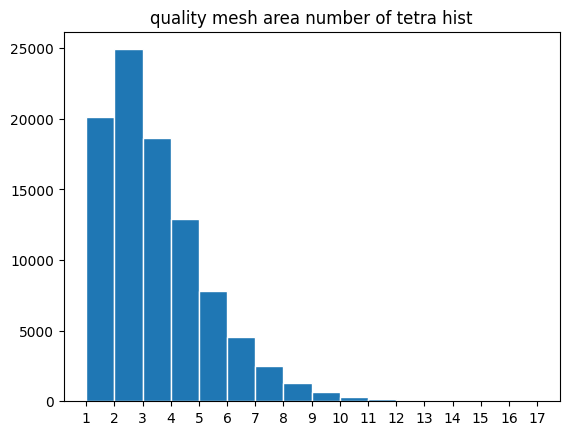

In [29]:
p50milsemia = [2, 3, 4, 3, 2, 4, 8, 2, 3, 4, 1, 3, 1, 8, 1, 1, 1, 2, 4, 1, 3, 2, 3, 2, 1, 3, 2, 4, 1, 4, 2, 2, 3, 1, 1, 5, 2, 3, 2, 1, 5, 2, 1, 5, 1, 4, 2, 1, 2, 4, 1, 1, 3, 3, 2, 4, 2, 3, 1, 4, 2, 4, 4, 1, 5, 1, 7, 3,5, 1, 1, 3, 7, 1, 2, 2, 2, 5, 4, 1, 5, 1, 4, 3, 2, 10, 1, 2, 6, 4, 1, 2, 6, 5, 1, 1, 1, 5, 1, 3, 1, 2, 2, 2, 6, 2, 2, 2, 3, 5, 5, 2, 2, 1, 3, 5, 5, 3, 2, 4, 5, 2, 7, 7, 1, 2, 1, 3, 8, 1, 2, 1, 3, 2, 3, 5, 2, 6, 3, 1, 1, 3, 5, 3, 1, 8, 2, 2, 5, 4, 1, 3, 4, 3, 3, 3, 5, 3, 4, 4, 4, 1, 2, 2, 7, 1, 1, 2, 1, 2, 6, 3, 2, 2, 2, 1, 2, 2, 4, 1, 2, 3, 2, 2, 3, 1, 3, 2, 5, 5, 1, 3, 1, 3, 3, 3, 1, 3, 3, 2, 2, 2, 2, 3, 5, 6, 3, 4, 3, 1, 8, 1, 2, 11, 2, 3, 2, 4, 6, 1, 3, 3, 3, 2, 8, 4, 2, 1, 6, 3, 3, 2, 4, 1, 5, 2, 1, 6, 3, 1, 3, 1, 4, 4, 3, 2, 2, 7, 4, 1, 7, 2, 6, 2, 2, 2, 2, 5, 1, 5, 1, 5, 8, 2, 4, 1, 4, 4, 2, 7, 4, 3, 2, 4, 2, 4, 1, 2, 2, 3, 1, 2, 9, 3, 2, 5, 7, 1, 4, 6, 8, 8, 3, 1, 1, 6, 4, 2, 5, 3, 4, 3, 5, 2, 2, 1, 2, 3, 1, 1, 2, 1, 2, 2, 1, 3, 3, 4, 1, 2, 3, 1, 10, 1, 1, 3, 6, 5, 4, 4, 3, 2, 2, 4, 2, 5, 4, 2, 6, 2, 6, 1, 2, 5, 1, 2, 5, 1, 5, 2, 2, 5, 2, 1, 2, 2, 2, 4, 2, 1, 5, 1, 4, 1, 2, 1, 2, 5, 1, 3, 2, 2, 4, 2, 1, 3, 3, 4, 1, 3, 2, 6, 2, 2, 5, 2, 5, 3, 6, 4, 3, 4, 4, 1, 5, 1, 4, 2, 2, 2, 1, 4, 3, 2, 3, 1, 2, 3, 3, 3, 2, 4, 2, 2, 2, 2, 4, 2, 5, 2, 4, 1, 2, 3, 4, 1, 4, 7, 2, 1, 6, 2, 3, 8, 1, 1, 6, 6, 3, 4, 2, 3, 5, 5, 6, 1, 1, 2, 2, 2, 2, 4, 4, 3, 6, 2, 3, 2, 8, 3, 6, 4, 4, 2, 4, 1, 1, 4, 1, 1, 3, 2, 6, 2, 2, 1, 4, 5, 3, 3, 2, 5, 3, 2, 1, 5, 2, 3, 1, 2, 1, 2, 2, 3, 4, 6, 1, 1, 2, 2, 1, 10, 3, 3, 3, 4, 6, 3, 3, 5, 10, 3, 1, 2, 2, 3, 3, 3, 1, 6, 7, 4, 1, 5, 4, 2, 5, 6, 3, 3, 1, 1, 5, 5, 2, 1, 3, 3, 8, 4, 1, 4, 2, 4, 3, 6, 1, 1, 4, 2, 7, 1, 4, 3, 4, 2, 2, 4, 4, 2, 3, 7, 1, 3, 4, 6, 2, 1, 3, 6, 2, 1, 4, 1, 6, 3, 6, 4, 6, 3, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1, 11, 1, 2, 1, 2, 4, 1, 3, 5, 1, 3, 4, 1, 4, 2, 2, 3, 3, 4, 2, 3, 4, 2, 1, 6, 1, 5, 3, 1, 9, 1, 2, 5, 2, 4, 1, 4, 4, 3, 2, 3, 3, 1, 6, 4, 3, 3, 4, 2, 4, 1, 4, 2, 3, 8, 2, 3, 3, 2, 6, 1, 3, 4, 1, 2, 2, 3, 3, 4, 1, 4, 8, 1, 2, 2, 7, 3, 4, 3, 3, 3, 4, 3, 3, 4, 2, 3, 2, 8, 1, 4, 4, 4, 1, 4, 7, 2, 4, 2, 2, 1, 4, 3, 4, 1, 5, 2, 3, 3, 6, 1, 1, 4, 1, 2, 1, 3, 6, 1, 4, 1, 2, 1, 5, 3, 3, 1, 2, 2, 5, 4, 2, 4, 9, 2, 5, 2, 2, 2, 4, 4, 3, 3, 4, 1, 2, 2, 2, 2, 4, 1, 2, 4, 2, 1, 4, 3, 1, 4, 2, 2, 2, 3, 12, 4, 2, 4, 3, 4, 7, 2, 2, 1, 3, 5, 4, 4, 5, 2, 4, 4, 2, 4, 2, 3, 2, 1, 2, 2, 2, 1, 8, 1, 7, 3, 6, 1, 2, 7, 2, 2, 11, 1, 1, 8, 1, 3, 5, 1, 1, 2, 3, 2, 5, 5, 2, 2, 2, 6, 1, 2, 3, 1, 7, 3, 3, 3, 3, 2, 3, 2, 2, 1, 3, 5, 3, 4, 1, 1, 7, 4, 7, 6, 1, 2, 4, 1, 2, 4, 6, 8, 1, 2, 2, 1, 2, 4, 3, 3, 3, 2, 3, 3, 4, 2, 2, 4, 3, 8, 2, 4, 2, 4, 5, 1, 2, 7, 3, 4, 5, 1, 3, 2, 5, 4, 7, 6, 4, 1, 2, 3, 2, 2, 2, 7, 3, 5, 1, 3, 1, 5, 2, 4, 2, 2, 5, 4, 2, 2, 3, 2, 2, 4, 7, 4, 2, 2, 3, 5, 2, 2, 1, 4, 5, 2, 1, 6, 1, 3, 8, 4, 2, 2, 3, 2, 3, 3, 2, 2, 1, 5, 4, 4, 5, 2, 3, 3, 2, 3, 5, 1, 3, 1, 3, 1, 3, 4, 2, 1, 3, 2, 2, 5, 1, 4, 3, 5, 2, 2, 3, 3, 2, 2, 3, 5, 4, 2, 5, 6, 2, 3, 1, 3, 5, 5, 2, 2, 2, 3, 5, 1, 1, 3, 2, 4, 4, 2, 4, 3, 1, 6, 1, 2, 2, 4, 2, 2, 3, 10, 1, 5, 1, 8, 1, 3, 1, 2, 3, 2, 4, 1, 1, 3, 2, 3, 2, 5, 1, 2, 2, 5, 2, 5, 5, 1, 3, 3, 1, 2, 2, 3, 1, 1, 4, 3, 4, 1, 4, 3, 3, 12, 2, 1, 2, 4, 1, 4, 1, 2, 4, 2, 4, 4, 1, 3, 3, 1, 2, 2, 3, 4, 2, 2, 3, 3, 2, 3, 4, 3, 2, 2, 2, 1, 7, 1, 2, 5, 5, 2, 3, 3, 9, 5, 2, 2, 4, 5, 2, 2, 5, 3, 5, 1, 2, 4, 4, 2, 2, 1, 7, 2, 6, 3, 2, 2, 5, 1, 7, 1, 2, 2, 1, 2, 2, 9, 4, 1, 4, 1, 5, 2, 3, 3, 1, 3, 2, 1, 5, 2, 3, 3, 4, 2, 3, 3, 3, 2, 1, 2, 3, 6, 1, 1, 3, 1, 3, 1, 5, 4, 2, 3, 4, 4, 3, 2, 1, 5, 4, 1, 4, 3, 2, 6, 1, 2, 2, 3, 1, 4, 2, 6, 3, 1, 4, 1, 2, 3, 3, 2, 3, 1, 3, 6, 1, 3, 1, 7, 3, 2, 4, 2, 10, 1, 1, 3, 3, 3, 5, 1, 7, 2, 2, 3, 2, 4, 1, 2, 8, 4, 1, 3, 2, 2, 1, 5, 1, 2, 5, 5, 5, 1, 2, 4, 1, 3, 2, 2, 3, 3, 3, 2, 6, 1, 2, 3, 1, 3, 2, 3, 1, 4, 2, 3, 9, 1, 2, 1, 4, 2, 7, 1, 2, 2, 1, 2, 3, 9, 1, 2, 1, 1, 2, 1, 4, 4, 3, 6, 3, 3, 1, 3, 2, 5, 7, 4, 1, 5, 3, 3, 2, 8, 4, 3, 1, 3, 5, 2, 2, 7, 4, 3, 1, 8, 1, 2, 1, 2, 4, 3, 6, 1, 6, 1, 3, 3, 1, 5, 1, 2, 3, 2, 5, 2, 1, 6, 3, 1, 3, 2, 5, 2, 4, 2, 3, 2, 3, 1, 8, 4, 1, 1, 9, 1, 1, 1, 3, 2, 2, 1, 6, 2, 2, 3, 1, 2, 2, 4, 1, 6, 3, 6, 1, 3, 1, 6, 2, 2, 3, 2, 3, 1, 2, 4, 4, 2, 3, 4, 6, 3, 4, 1, 5, 4, 5, 1, 6, 1, 1, 2, 7, 1, 1, 4, 2, 1, 2, 1, 4, 1, 3, 4, 1, 1, 1, 3, 6, 2, 5, 5, 7, 5, 2, 1, 5, 3, 3, 1, 6, 5, 2, 3, 3, 2, 6, 1, 2, 3, 4, 3, 2, 1, 3, 4, 1, 2, 3, 2, 1, 2, 2, 2, 1, 7, 4, 1, 7, 1, 3, 2, 6, 2, 2, 6, 3, 1, 6, 3, 6, 6, 1, 2, 2, 9, 1, 3, 3, 4, 1, 3, 4, 2, 2, 4, 2, 2, 3, 4, 5, 3, 3, 4, 3, 3, 2, 3, 2, 2, 2, 9, 1, 4, 1, 2, 1, 3, 2, 2, 2, 3, 3, 1, 1, 4, 1, 4, 2, 1, 2, 4, 1, 3, 3, 2, 7, 3, 4, 4, 1, 4, 2, 3, 7, 1, 1, 3, 3, 1, 5, 1, 2, 1, 1, 5, 6, 2, 4, 4, 2, 2, 4, 3, 2, 4, 3, 1, 4, 2, 3, 4, 2, 3, 3, 2, 1, 3, 2, 2, 9, 1, 4, 2, 5, 2, 3, 3, 3, 2, 5, 1, 3, 1, 2, 1, 4, 5, 1, 4, 4, 2, 2, 6, 2, 4, 1, 3, 3, 1, 1, 4, 2, 2, 5, 1, 2, 7, 1, 3, 2, 2, 6, 1, 5, 2, 5, 1, 3, 1, 3, 2, 1, 2, 2, 4, 2, 1, 3, 5, 1, 1, 1, 1, 2, 4, 2, 5, 4, 5, 1, 1, 5, 6, 3, 2, 1, 2, 3, 1, 4, 3, 1, 2, 4, 3, 6, 1, 2, 4, 2, 1, 4, 2, 1, 3, 3, 2, 1, 8, 1, 1, 1, 6, 4, 2, 3, 2, 1, 8, 4, 3, 1, 5, 6, 6, 6, 1, 4, 3, 4, 2, 2, 4, 2, 3, 6, 3, 2, 4, 1, 1, 7, 1, 4, 1, 5, 3, 6, 4, 8, 1, 4, 2, 2, 7, 1, 3, 2, 1, 5, 4, 5, 1, 7, 2, 4, 2, 4, 1, 4, 1, 2, 6, 2, 2, 5, 2, 3, 5, 1, 4, 4, 3, 4, 1, 5, 5, 2, 2, 5, 6, 5, 2, 1, 2, 1, 4, 1, 4, 4, 2, 2, 2, 3, 2, 4, 1, 6, 2, 2, 2, 5, 2, 3, 2, 2, 3, 2, 1, 4, 1, 4, 2, 1, 2, 3, 1, 7, 8, 6, 1, 3, 2, 5, 1, 2, 2, 4, 2, 2, 2, 1, 2, 4, 3, 2, 2, 2, 1, 2, 6, 2, 4, 2, 2, 3, 2, 6, 4, 1, 2, 5, 7, 1, 4, 3, 7, 1, 1, 3, 1, 7, 1, 2, 3, 5, 1, 3, 2, 2, 3, 6, 1, 1, 2, 3, 5, 1, 2, 2, 6, 2, 2, 4, 3, 9, 1, 1, 2, 2, 4, 2, 1, 6, 4, 3, 2, 3, 7, 2, 3, 2, 4, 1, 3, 2, 4, 5, 3, 3, 1, 2, 3, 4, 2, 1, 3, 3, 3, 10, 1, 4, 4, 4, 2, 1, 2, 1, 2, 2, 4, 6, 3, 1, 2, 5, 2, 6, 1, 1, 2, 1, 2, 2, 5, 5, 3, 9, 3, 3, 7, 2, 3, 1, 7, 1, 3, 2, 4, 3, 2, 4, 3, 1, 2, 2, 5, 2, 2, 3, 1, 3, 2, 7, 2, 2, 5, 2, 3, 1, 2, 2, 3, 3, 2, 1, 5, 1, 2, 2, 7, 1, 3, 3, 4, 1, 4, 3, 1, 3, 2, 2, 3, 2, 2, 5, 2, 4, 2, 1, 5, 6, 1, 1, 2, 4, 7, 4, 3, 1, 2, 5, 4, 2, 5, 10, 2, 2, 4, 7, 2, 8, 5, 3, 5, 9, 1, 1, 5, 1, 1, 3, 3, 1, 1, 3, 4, 2, 1, 6, 1, 5, 2, 8, 2, 3, 3, 3, 4, 2, 3, 4, 1, 3, 3, 4, 2, 2, 1, 5, 2, 2, 2, 1, 5, 2, 2, 8, 2, 3, 1, 2, 4, 1, 4, 2, 6, 1, 2, 1, 3, 2, 7, 1, 3, 4, 1, 2, 1, 2, 3, 1, 1, 4, 2, 2, 2, 7, 2, 3, 2, 6, 3, 1, 4, 4, 1, 5, 3, 1, 2, 2, 2, 3, 2, 6, 5, 4, 1, 3, 1, 4, 4, 2, 2, 1, 2, 3, 2, 9, 1, 3, 2, 2, 2, 2, 4, 2, 1, 3, 1, 2, 4, 2, 4, 1, 4, 5, 3, 3, 2, 1, 2, 2, 4, 7, 8, 2, 5, 3, 2, 2, 3, 3, 1, 5, 1, 3, 4, 1, 2, 3, 3, 3, 5, 3, 6, 3, 1, 3, 2, 3, 2, 2, 1, 3, 2, 4, 4, 1, 5, 4, 2, 3, 2, 1, 2, 2, 4, 3, 3, 2, 4, 2, 4, 2, 1, 3, 4, 2, 6, 1, 2, 8, 3, 2, 2, 7, 1, 1, 4, 3, 1, 2, 5, 3, 4, 2, 6, 2, 5, 2, 2, 6, 1, 1, 4, 3, 2, 5, 1, 2, 3, 1, 2, 2, 7, 4, 2, 1, 4, 3, 2, 4, 1, 5, 3, 2, 3, 2, 3, 6, 5, 3, 6, 5, 3, 2, 2, 7, 1, 2, 3, 4, 1, 2, 2, 2, 3, 6, 1, 4, 3, 3, 3, 1, 2, 3, 1, 5, 2, 4, 3, 5, 1, 3, 6, 2, 3, 3, 4, 1, 3, 1, 4, 2, 2, 5, 2, 2, 2, 2, 4, 2, 7, 7, 5, 1, 4, 3, 2, 1, 2, 2, 2, 2, 4, 2, 1, 3, 4, 2, 2, 2, 4, 5, 6, 1, 3, 1, 4, 2, 2, 4, 2, 7, 2, 2, 2, 4, 2, 2, 1, 6, 1, 2, 4, 1, 4, 3, 2, 2, 1, 9, 1, 3, 2, 5, 4, 2, 2, 3, 1, 2, 1, 6, 3, 3, 4, 5, 3, 2, 4, 3, 5, 3, 4, 4, 2, 6, 1, 2, 1, 7, 4, 2, 3, 2, 5, 2, 1, 3, 1, 2, 7, 1, 1, 1, 2, 2, 4, 1, 1, 3, 3, 4, 1, 1, 4, 3, 2, 2, 1, 2, 1, 1, 7, 5, 1, 2, 10, 2, 1, 6, 1, 4, 2, 5, 1, 3, 3, 4, 2, 4, 2, 2, 7, 7, 3, 2, 2, 4, 4, 1, 2, 3, 1, 2, 7, 1, 3, 6, 4, 3, 4, 2, 2, 9, 2, 6, 2, 3, 6, 3, 1, 4, 4, 4, 4, 5, 1, 1, 4, 2, 3, 5, 3, 2, 1, 2, 5, 3, 4, 7, 1, 1, 3, 5, 3, 1, 1, 4, 4, 3, 2, 2, 2, 2, 3, 2, 2, 2, 7, 1, 2, 7, 1, 6, 2, 2, 3, 7, 4, 4, 2, 3, 4, 3, 2, 6, 4, 2, 2, 2, 1, 8, 2, 1, 1, 4, 1, 5, 2, 5, 4, 4, 3, 3, 4, 6, 4, 3, 3, 5, 2, 3, 5, 4, 1, 1, 5, 3, 2, 5, 2, 7, 4, 3, 3, 1, 1, 3, 2, 3, 7, 6, 1, 6, 5, 1, 1, 2, 3, 3, 2, 3, 1, 7, 3, 3, 2, 3, 3, 2, 4, 6, 2, 4, 5, 2, 1, 4, 5, 1, 1, 4, 1, 8, 2, 5, 4, 2, 2, 1, 4, 3, 2, 1, 2, 3, 1, 5, 2, 4, 2, 6, 2, 2, 3, 1, 4, 2, 2, 1, 4, 2, 6, 4, 2, 1, 5, 3, 3, 1, 4, 2, 1, 3, 5, 1, 5, 3, 5, 2, 1, 2, 2, 1, 1, 4, 4, 2, 1, 2, 2, 4, 1, 7, 1, 5, 3, 3, 1, 3, 2, 3, 2, 3, 3, 8, 5, 3, 1, 4, 4, 3, 2, 4, 9, 3, 1, 9, 7, 5, 2, 3, 4, 1, 3, 1, 7, 1, 4, 3, 3, 2, 2, 4, 2, 1, 3, 3, 2, 4, 4, 1, 4, 4, 2, 2, 4, 2, 8, 4, 3, 4, 3, 2, 3, 3, 2, 4, 2, 2, 2, 5, 2, 1, 2, 4, 1, 2, 4, 2, 3, 3, 2, 1, 5, 3, 3, 4, 7, 1, 6, 4, 5, 2, 2, 2, 3, 2, 1, 8, 1, 4, 2, 3, 1, 1, 3, 3, 3, 2, 2, 7, 5, 3, 7, 1, 4, 5, 5, 4, 6, 4, 1, 2, 5, 2, 2, 2, 3, 2, 3, 4, 7, 1, 1, 2, 2, 4, 4, 2, 2, 1, 6, 3, 1, 2, 4, 3, 3, 2, 3, 3, 5, 1, 3, 1, 4, 2, 1, 2, 3, 2, 1, 4, 3, 1, 4, 3, 5, 1, 5, 1, 2, 2, 3, 2, 5, 3, 5, 7, 3, 3, 4, 3, 3, 4, 7, 4, 3, 3, 1, 4, 5, 3, 3, 2, 2, 10, 5, 1, 2, 3, 1, 2, 3, 8, 2, 3, 7, 2, 4, 5, 3, 3, 4, 3, 3, 3, 4, 1, 2, 1, 5, 6, 1, 5, 1, 1, 1, 2, 4, 2, 3, 8, 2, 1, 3, 3, 7, 5, 2, 5, 1, 3, 1, 8, 4, 6, 2, 2, 6, 2, 3, 7, 5, 1, 2, 3, 2, 2, 2, 11, 1, 3, 3, 2, 1, 3, 2, 7, 1, 2, 3, 7, 8, 2, 1, 9, 1, 2, 2, 2, 4, 2, 2, 5, 2, 2, 2, 2, 1, 2, 2, 6, 2, 2, 2, 1, 2, 1, 5, 3, 1, 3, 5, 4, 1, 1, 3, 8, 2, 3, 1, 6, 2, 6, 1, 2, 2, 1, 4, 7, 5, 3, 4, 3, 3, 5, 1, 4, 1, 4, 2, 2, 3, 4, 4, 1, 3, 1, 1, 2, 5, 1, 4, 4, 2, 4, 2, 1, 2, 2, 1, 5, 2, 3, 1, 4, 3, 3, 3, 2, 4, 1, 2, 2, 4, 4, 4, 2, 2, 4, 2, 4, 2, 6, 2, 1, 4, 3, 2, 4, 5, 1, 2, 5, 8, 2, 1, 3, 3, 3, 2, 1, 2, 3, 3, 3, 1, 5, 1, 2, 3, 5, 1, 2, 3, 2, 1, 2, 3, 1, 4, 2, 3, 5, 1, 4, 2, 1, 8, 2, 3, 2, 1, 7, 1, 2, 5, 2, 3, 2, 1, 4, 3, 2, 1, 2, 2, 3, 4, 1, 2, 4, 5, 3, 5, 1, 3, 4, 2, 4, 2, 3, 3, 2, 1, 3, 2, 2, 4, 4, 4, 8, 1, 7, 1, 1, 9, 5, 2, 1, 4, 2, 2, 8, 4, 2, 1, 3, 1, 4, 1, 2, 1, 3, 3, 3, 2, 4, 4, 4, 1, 2, 1, 2, 3, 3, 2, 4, 5, 2, 4, 1, 1, 2, 2, 3, 4, 1, 3, 1, 3, 1, 3, 4, 1, 2, 5, 3, 2, 2, 4, 1, 3, 1, 3, 2, 6, 1, 1, 3, 4, 2, 6, 1, 3, 4, 5, 7, 3, 2, 2, 1, 8, 3, 1, 4, 2, 2, 3, 3, 4, 1, 5, 2, 4, 3, 2, 4, 1, 1, 5, 1, 6, 2, 6, 7, 4, 4, 3, 7, 3, 1, 1, 2, 2, 1, 2, 3, 1, 5, 8, 2, 6, 1, 2, 5, 4, 2, 1, 3, 2, 4, 1, 3, 4, 2, 6, 3, 2, 3, 6, 4, 1, 2, 6, 5, 1, 2, 3, 1, 4, 5, 6, 1, 1, 2, 3, 2, 4, 2, 3, 3, 2, 3, 5, 1, 4, 3, 2, 2, 2, 3, 4, 1, 2, 4, 6, 1, 3, 2, 1, 3, 1, 1, 4, 3, 3, 5, 4, 1, 2, 5, 4, 2, 6, 3, 2, 8, 1, 1, 1, 4, 2, 3, 2, 3, 3, 5, 4, 1, 1, 3, 2, 4, 1, 2, 7, 4, 2, 1, 3, 2, 1, 5, 7, 1, 1, 1, 3, 1, 4, 3, 5, 1, 3, 2, 3, 4, 3, 1, 5, 1, 3, 2, 1, 4, 9, 1, 2, 3, 3, 1, 3, 1, 4, 2, 5, 6, 1, 1, 1, 5, 1, 2, 2, 3, 4, 7, 1, 1, 1, 2, 4, 3, 2, 3, 3, 4, 4, 1, 3, 1, 6, 3, 1, 2, 1, 2, 2, 5, 1, 2, 2, 6, 1, 8, 3, 5, 2, 4, 3, 1, 2, 2, 6, 3, 4, 4, 4, 3, 1, 4, 4, 2, 6, 1, 1, 3, 6, 4, 2, 2, 7, 1, 4, 3, 1, 2, 4, 1, 6, 3, 7, 1, 2, 3, 2, 3, 8, 5, 3, 2, 1, 1, 3, 4, 3, 5, 3, 2, 6, 3, 4, 5, 1, 3, 3, 2, 2, 2, 4, 4, 4, 3, 1, 2, 9, 5, 2, 1, 4, 1, 5, 5, 2, 5, 2, 6, 3, 1, 8, 2, 8, 9, 4, 3, 4, 7, 1, 5, 3, 3, 1, 5, 1, 2, 2, 3, 3, 1, 4, 2, 2, 1, 3, 1, 2, 7, 2, 4, 6, 1, 6, 2, 1, 6, 5, 8, 1, 1, 6, 1, 4, 2, 3, 4, 5, 1, 4, 1, 3, 3, 4, 2, 3, 4, 2, 3, 1, 4, 2, 2, 3, 1, 7, 3, 1, 2, 1, 5, 3, 2, 1, 2, 3, 4, 4, 2, 6, 1, 3, 5, 1, 6, 2, 3, 2, 3, 1, 3, 2, 3, 6, 7, 3, 2, 4, 3, 1, 2, 3, 1, 8, 1, 1, 1, 2, 4, 6, 1, 7, 1, 2, 5, 2, 4, 5, 6, 2, 1, 3, 9, 2, 6, 1, 3, 4, 4, 1, 3, 2, 6, 4, 1, 2, 5, 3, 1, 8, 4, 7, 4, 1, 7, 5, 2, 2, 3, 4, 4, 1, 7, 2, 3, 3, 3, 2, 3, 2, 4, 2, 2, 5, 2, 4, 6, 3, 1, 3, 6, 1, 3, 3, 2, 2, 4, 8, 8, 4, 6, 1, 4, 1, 5, 4, 1, 1, 2, 2, 1, 2, 2, 1, 2, 5, 3, 4, 4, 1, 2, 4, 4, 7, 3, 2, 1, 3, 3, 3, 2, 1, 4, 3, 2, 5, 3, 1, 4, 3, 2, 3, 2, 3, 5, 4, 2, 6, 2, 4, 5, 1, 2, 3, 6, 2, 3, 2, 2, 1, 4, 2, 1, 2, 3, 2, 5, 1, 4, 7, 4, 5, 1, 4, 3, 1, 5, 4, 2, 2, 3, 3, 3, 6, 3, 1, 1, 6, 1, 3, 4, 2, 3, 4, 2, 3, 1, 4, 6, 1, 3, 4, 3, 4, 2, 1, 1, 4, 5, 1, 2, 3, 2, 5, 2, 3, 9, 2, 1, 3, 6, 2, 2, 2, 11, 3, 3, 2, 4, 3, 2, 3, 1, 3, 6, 1, 2, 3, 4, 3, 2, 5, 4, 2, 1, 4, 2, 5, 2, 1, 2, 3, 6, 7, 2, 3, 3, 5, 2, 2, 2, 2, 7, 1, 2, 2, 2, 2, 1, 6, 1, 2, 2, 3, 4, 2, 2, 5, 2, 3, 5, 2, 1, 2, 3, 3, 1, 7, 6, 2, 1, 3, 3, 2, 1, 1, 8, 2, 1, 2, 3, 2, 3, 6, 2, 8, 3, 2, 2, 1, 4, 2, 4, 6, 1, 3, 3, 4, 3, 4, 1, 2, 2, 3, 2, 1, 7, 2, 2, 1, 7, 1, 1, 3, 1, 4, 3, 10, 3, 2, 5, 2, 3, 2, 2, 2, 5, 1, 6, 1, 4, 3, 3, 2, 2, 2, 4, 3, 4, 1, 3, 1, 7, 3, 1, 5, 2, 2, 4, 2, 3, 2, 3, 1, 3, 2, 2, 2, 6, 1, 6, 4, 3, 5, 5, 8, 5, 1, 2, 1, 4, 1, 2, 1, 2, 8, 3, 2, 1, 8, 4, 2, 3, 5, 2, 2, 2, 5, 2, 1, 7, 1, 4, 2, 4, 5, 2, 3, 1, 1, 4, 1, 1, 5, 8, 1, 2, 3, 2, 7, 1, 1, 6, 1, 5, 1, 2, 7, 1, 2, 2, 3, 2, 4, 3, 6, 1, 2, 5, 3, 4, 2, 2, 3, 1, 4, 3, 3, 2, 2, 12, 2, 2, 5, 1, 5, 4, 9, 3, 3, 4, 4, 3, 3, 1, 5, 2, 2, 4, 1, 2, 2, 2, 2, 3, 1, 3, 3, 3, 1, 4, 4, 3, 2, 3, 2, 4, 7, 1, 2, 9, 3, 3, 1, 5, 2, 2, 1, 4, 5, 5, 5, 2, 1, 2, 2, 2, 2, 3, 4, 2, 2, 1, 4, 4, 2, 3, 2, 1, 4, 2, 2, 1, 3, 6, 2, 2, 2, 8, 3, 3, 4, 4, 1, 4, 5, 2, 7, 3, 3, 1, 4, 2, 2, 5, 1, 2, 4, 2, 1, 1, 3, 4, 2, 1, 2, 4, 3, 6, 1, 5, 2, 2, 6, 3, 3, 1, 5, 2, 2, 5, 2, 1, 2, 1, 2, 2, 5, 4, 5, 3, 3, 4, 1, 1, 1, 1, 6, 2, 6, 3, 1, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 1, 2, 2, 2, 5, 1, 4, 2, 6, 1, 8, 1, 1, 4, 3, 2, 2, 1, 3, 4, 1, 1, 4, 5, 2, 3, 3, 4, 2, 3, 5, 2, 2, 3, 2, 3, 2, 2, 3, 1, 3, 1, 7, 1, 2, 5, 3, 3, 2, 2, 5, 3, 2, 2, 3, 4, 2, 2, 5, 1, 1, 2, 4, 4, 1, 5, 2, 2, 1, 3, 2, 1, 1, 4, 6, 4, 1, 3, 3, 3, 2, 2, 2, 3, 5, 4, 3, 1, 2, 3, 3, 3, 4, 2, 1, 6, 3, 2, 2, 4, 2, 3, 3, 4, 3, 7, 2, 4, 2, 3, 3, 5, 3, 6, 2, 1, 8, 2, 3, 7, 6, 3, 2, 2, 2, 2, 2, 2, 5, 1, 3, 5, 2, 3, 4, 2, 2, 3, 3, 1, 2, 4, 4, 2, 1, 9, 4, 2, 2, 2, 2, 2, 3, 8, 1, 1, 2, 5, 1, 3, 5, 3, 2, 5, 1, 6, 1, 5, 1, 4, 3, 2, 3, 2, 7, 3, 4, 4, 3, 1, 6, 1, 5, 6, 1, 2, 6, 1, 3, 4, 4, 1, 4, 4, 8, 5, 2, 2, 3, 5, 2, 3, 4, 2, 2, 2, 4, 1, 1, 2, 2, 4, 3, 2, 3, 6, 4, 11, 3, 3, 7, 1, 1, 5, 3, 5, 2, 1, 5, 3, 7, 2, 4, 3, 3, 1, 4, 2, 1, 3, 2, 7, 2, 2, 2, 3, 1, 4, 1, 2, 3, 1, 6, 5, 2, 6, 6, 1, 3, 1, 3, 3, 4, 1, 2, 2, 3, 3, 2, 3, 4, 5, 4, 1, 8, 1, 4, 4, 4, 6, 5, 1, 1, 2, 3, 2, 2, 2, 2, 2, 5, 5, 4, 4, 2, 3, 5, 4, 2, 2, 3, 2, 2, 2, 1, 11, 1, 1, 3, 3, 3, 3, 2, 3, 5, 1, 3, 3, 2, 3, 3, 3, 3, 5, 2, 2, 2, 7, 4, 4, 4, 4, 6, 3, 1, 5, 1, 2, 5, 1, 1, 3, 1, 4, 3, 1, 3, 3, 2, 2, 3, 1, 2, 2, 4, 4, 3, 5, 1, 4, 2, 1, 6, 4, 3, 3, 3, 2, 1, 2, 7, 1, 1, 3, 3, 2, 2, 1, 7, 1, 1, 2, 3, 4, 2, 1, 3, 4, 2, 4, 3, 3, 2, 3, 3, 1, 10, 5, 4, 3, 1, 4, 1, 2, 5, 2, 2, 1, 7, 3, 2, 7, 3, 1, 9, 1, 1, 4, 4, 3, 4, 2, 2, 4, 1, 3, 3, 3, 2, 1, 6, 1, 1, 4, 2, 4, 1, 4, 2, 4, 1, 4, 4, 2, 1, 3, 3, 5, 3, 2, 1, 1, 4, 2, 5, 1, 1, 6, 3, 1, 3, 4, 1, 3, 4, 2, 1, 2, 1, 3, 2, 2, 4, 1, 2, 4, 2, 6, 2, 5, 2, 2, 2, 4, 3, 5, 7, 1, 6, 3, 4, 6, 1, 2, 2, 2, 3, 2, 4, 1, 1, 2, 3, 2, 2, 3, 4, 1, 3, 1, 5, 4, 1, 2, 5, 3, 2, 2, 1, 5, 5, 3, 4, 3, 4, 3, 4, 1, 7, 1, 4, 2, 3, 5, 4, 2, 3, 3, 1, 4, 2, 6, 1, 3, 4, 4, 5, 3, 2, 1, 4, 10, 2, 1, 1, 4, 1, 2, 3, 2, 4, 2, 1, 5, 2, 2, 2, 2, 3, 1, 1, 3, 1, 5, 1, 8, 1, 2, 3, 3, 1, 2, 3, 2, 2, 2, 2, 5, 2, 5, 4, 1, 2, 4, 4, 3, 1, 3, 4, 4, 2, 2, 3, 11, 1, 1, 1, 6, 4, 6, 1, 2, 1, 4, 9, 1, 2, 1, 6, 3, 6, 2, 4, 3, 2, 1, 3, 5, 4, 2, 4, 3, 3, 3, 1, 3, 4, 2, 2, 5, 2, 4, 3, 6, 1, 4, 5, 1, 2, 9, 5, 1, 3, 1, 6, 2, 2, 2, 1, 2, 7, 2, 1, 2, 3, 1, 1, 6, 1, 2, 2, 1, 3, 5, 4, 7, 6, 1, 4, 5, 1, 2, 9, 3, 4, 4, 1, 2, 2, 6, 1, 2, 2, 1, 4, 3, 2, 3, 3, 2, 5, 2, 4, 6, 1, 1, 6, 2, 2, 1, 5, 3, 2, 2, 7, 2, 3, 1, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 1, 4, 2, 6, 2, 3, 3, 1, 2, 3, 1, 2, 5, 4, 1, 2, 4, 4, 4, 10, 1, 2, 2, 6, 2, 6, 5, 1, 5, 5, 1, 3, 2, 4, 2, 2, 2, 4, 2, 2, 4, 4, 5, 4, 5, 1, 5, 1, 3, 3, 1, 5, 1, 4, 4, 4, 4, 3, 5, 2, 3, 1, 6, 1, 1, 5, 4, 1, 3, 4, 3, 4, 5, 2, 4, 3, 2, 2, 4, 3, 3, 2, 4, 2, 3, 2, 3, 2, 1, 2, 1, 3, 6, 1, 2, 1, 3, 3, 2, 3, 12, 6, 7, 4, 4, 5, 4, 5, 2, 2, 3, 1, 2, 3, 4, 7, 2, 2, 3, 5, 3, 3, 2, 4, 1, 2, 2, 1, 3, 1, 4, 2, 4, 3, 5, 7, 3, 14, 4, 4, 3, 5, 2, 1, 2, 2, 8, 1, 1, 2, 1, 6, 5, 1, 2, 4, 6, 5, 4, 4, 5, 4, 6, 2, 6, 1, 2, 3, 2, 3, 4, 4, 5, 5, 1, 3, 4, 3, 5, 3, 5, 5, 1, 4, 8, 1, 1, 5, 1, 3, 2, 3, 1, 3, 3, 3, 3, 2, 7, 1, 1, 2, 3, 2, 4, 3, 6, 4, 2, 2, 1, 4, 1, 4, 2, 4, 2, 3, 2, 3, 2, 6, 5, 4, 5, 5, 6, 3, 2, 3, 3, 1, 2, 5, 1, 2, 2, 5, 1, 6, 4, 2, 2, 4, 1, 2, 1, 3, 3, 1, 3, 1, 3, 2, 5, 2, 4, 3, 2, 1, 2, 4, 1, 6, 1, 1, 7, 1, 4, 4, 1, 2, 2, 2, 5, 6, 2, 4, 1, 3, 4, 1, 3, 3, 1, 3, 4, 1, 5, 2, 5, 3, 1, 2, 2, 4, 5, 4, 1, 2, 1, 2, 1, 2, 3, 3, 2, 8, 2, 1, 2, 1, 2, 5, 1, 1, 2, 2, 3, 6, 4, 3, 6, 3, 1, 1, 4, 1, 3, 3, 3, 2, 3, 3, 3, 1, 7, 2, 4, 1, 3, 2, 3, 8, 1, 9, 1, 1, 1, 5, 5, 2, 1, 7, 1, 1, 3, 2, 4, 2, 2, 2, 3, 2, 3, 1, 4, 1, 5, 1, 3, 2, 11, 1, 1, 1, 1, 3, 5, 4, 1, 2, 2, 4, 5, 1, 2, 1, 8, 5, 3, 5, 2, 3, 4, 1, 5, 2, 2, 2, 1, 3, 4, 3, 4, 3, 1, 2, 1, 5, 4, 2, 2, 5, 3, 5, 2, 2, 2, 3, 2, 3, 1, 1, 4, 3, 4, 4, 1, 6, 2, 3, 3, 2, 5, 5, 1, 4, 3, 3, 5, 3, 1, 2, 1, 4, 1, 6, 1, 3, 3, 2, 1, 4, 2, 1, 3, 1, 1, 4, 5, 2, 4, 1, 2, 2, 4, 3, 2, 2, 4, 2, 3, 1, 5, 1, 3, 3, 2, 4, 5, 2, 3, 3, 1, 8, 3, 4, 1, 4, 4, 3, 2, 3, 2, 2, 1, 2, 4, 1, 2, 4, 1, 6, 3, 2, 6, 1, 3, 5, 2, 2, 2, 1, 3, 5, 7, 1, 5, 5, 5, 1, 2, 3, 5, 1, 3, 3, 2, 3, 1, 9, 5, 1, 3, 2, 2, 4, 2, 3, 2, 2, 2, 2, 4, 2, 2, 2, 6, 2, 1, 5, 1, 2, 2, 3, 3, 5, 2, 3, 3, 6, 3, 3, 2, 7, 2, 3, 3, 8, 1, 6, 4, 1, 7, 5, 1, 1, 3, 4, 2, 2, 3, 3, 1, 5, 3, 6, 1, 3, 3, 2, 3, 2, 1, 6, 9, 2, 1, 7, 3, 1, 7, 1, 2, 5, 3, 1, 2, 2, 5, 2, 2, 4, 2, 2, 7, 1, 2, 3, 3, 3, 8, 3, 3, 4, 3, 2, 1, 10, 1, 1, 2, 4, 4, 1, 2, 2, 1, 4, 3, 1, 2, 2, 6, 4, 2, 2, 4, 3, 6, 4, 5, 2, 2, 5, 3, 5, 6, 1, 7, 1, 2, 6, 3, 1, 5, 3, 3, 2, 1, 4, 1, 3, 2, 5, 1, 3, 1, 4, 7, 3, 1, 3, 3, 3, 7, 1, 3, 4, 2, 3, 4, 4, 1, 5, 5, 2, 3, 2, 3, 2, 4, 1, 4, 1, 2, 4, 1, 2, 1, 5, 1, 3, 5, 5, 2, 2, 3, 5, 1, 2, 2, 2, 2, 2, 1, 7, 1, 1, 2, 2, 5, 3, 5, 1, 5, 1, 2, 1, 6, 1, 1, 5, 3, 2, 2, 4, 1, 4, 5, 1, 2, 1, 9, 3, 3, 4, 2, 8, 4, 1, 5, 7, 1, 1, 1, 3, 1, 4, 3, 5, 7, 3, 3, 1, 3, 2, 4, 4, 1, 2, 5, 3, 1, 2, 7, 2, 3, 1, 4, 3, 2, 1, 2, 3, 2, 2, 1, 2, 4, 1, 4, 3, 7, 3, 2, 2, 2, 4, 2, 2, 3, 6, 2, 4, 1, 2, 4, 1, 8, 6, 1, 4, 11, 1, 7, 1, 2, 5, 4, 2, 1, 4, 2, 8, 5, 4, 2, 2, 4, 4, 2, 3, 4, 1, 3, 5, 1, 3, 5, 10, 2, 1, 4, 2, 5, 2, 2, 6, 6, 1, 2, 2, 3, 5, 5, 2, 3, 3, 1, 2, 2, 2, 4, 2, 3, 1, 2, 5, 1, 1, 3, 3, 7, 4, 2, 2, 8, 1, 1, 3, 1, 2, 6, 5, 3, 1, 2, 7, 3, 8, 6, 2, 2, 3, 2, 3, 2, 4, 4, 2, 3, 2, 5, 1, 3, 9, 2, 1, 1, 1, 4, 3, 3, 1, 3, 4, 8, 4, 2, 3, 5, 4, 3, 2, 2, 1, 5, 4, 3, 2, 4, 3, 1, 5, 3, 4, 3, 1, 3, 4, 1, 3, 2, 3, 2, 1, 4, 1, 4, 1, 4, 2, 6, 2, 2, 2, 3, 3, 3, 6, 1, 6, 1, 3, 1, 6, 3, 3, 2, 2, 1, 9, 3, 2, 7, 2, 4, 6, 1, 2, 3, 1, 5, 2, 3, 2, 3, 1, 2, 1, 12, 1, 3, 4, 2, 2, 5, 2, 2, 4, 2, 3, 1, 4, 3, 2, 1, 6, 3, 4, 2, 4, 1, 3, 1, 2, 1, 4, 1, 4, 2, 1, 2, 2, 3, 9, 3, 1, 3, 2, 3, 2, 1, 2, 5, 2, 1, 4, 3, 1, 2, 5, 2, 1, 6, 1, 1, 4, 4, 2, 2, 1, 4, 1, 5, 6, 5, 1, 10, 1, 1, 2, 3, 2, 1, 3, 2, 2, 2, 3, 10, 1, 2, 2, 2, 2, 2, 8, 2, 5, 1, 1, 2, 1, 3, 7, 3, 3, 3, 2, 4, 3, 5, 1, 2, 2, 4, 1, 4, 1, 3, 6, 1, 9, 1, 3, 2, 4, 1, 3, 6, 1, 2, 3, 2, 2, 4, 1, 3, 3, 2, 4, 1, 4, 3, 5, 4, 2, 1, 4, 1, 1, 3, 2, 2, 3, 3, 2, 3, 3, 4, 1, 2, 2, 4, 8, 2, 4, 1, 6, 5, 1, 2, 2, 7, 3, 2, 2, 7, 2, 2, 3, 3, 4, 2, 10, 4, 4, 3, 1, 2, 3, 4, 5, 5, 2, 2, 2, 4, 1, 2, 2, 2, 4, 2, 2, 1, 4, 1, 1, 5, 4, 4, 3, 2, 4, 2, 8, 1, 3, 2, 1, 4, 3, 5, 3, 1, 5, 1, 1, 3, 1, 1, 2, 1, 1, 7, 2, 3, 4, 2, 5, 1, 4, 3, 2, 4, 5, 1, 4, 7, 3, 2, 3, 3, 3, 1, 3, 1, 3, 3, 3, 2, 2, 10, 3, 1, 2, 2, 3, 2, 4, 2, 4, 2, 3, 2, 4, 3, 2, 3, 3, 4, 1, 1, 3, 1, 2, 4, 1, 3, 2, 4, 1, 1, 2, 1, 2, 3, 1, 3, 5, 2, 2, 1, 1, 4, 3, 2, 3, 6, 3, 3, 3, 1, 4, 7, 1, 2, 6, 4, 3, 3, 3, 5, 2, 3, 1, 4, 3, 2, 2, 7, 2, 4, 1, 3, 2, 1, 2, 3, 1, 3, 3, 2, 2, 1, 7, 2, 7, 3, 5, 2, 2, 11, 1, 1, 4, 2, 5, 5, 6, 2, 3, 2, 4, 2, 2, 2, 3, 6, 1, 3, 2, 1, 2, 3, 1, 4, 1, 6, 5, 1, 7, 4, 4, 1, 9, 4, 5, 2, 2, 3, 3, 6, 2, 1, 8, 2, 2, 6, 1, 1, 2, 2, 2, 3, 1, 4, 8, 3, 1, 4, 4, 1, 4, 3, 4, 5, 1, 5, 3, 1, 3, 3, 3, 2, 8, 1, 1, 4, 3, 6, 4, 3, 1, 2, 6, 2, 1, 2, 5, 2, 2, 4, 1, 5, 3, 1, 5, 3, 5, 2, 4, 4, 2, 4, 1, 3, 3, 2, 12, 4, 1, 4, 6, 4, 1, 4, 2, 4, 1, 3, 7, 2, 2, 3, 3, 1, 2, 5, 3, 9, 6, 2, 8, 2, 3, 3, 8, 2, 6, 5, 2, 2, 3, 1, 3, 2, 2, 5, 2, 3, 1, 4, 3, 4, 6, 4, 5, 2, 8, 2, 6, 9, 1, 3, 1, 2, 5, 2, 4, 3, 4, 3, 2, 7, 1, 4, 3, 3, 2, 3, 2, 3, 1, 6, 3, 2, 5, 1, 1, 4, 2, 8, 1, 2, 3, 3, 4, 2, 5, 2, 4, 2, 1, 2, 6, 6, 3, 4, 2, 3, 2, 6, 3, 3, 1, 4, 4, 3, 2, 7, 1, 4, 1, 4, 7, 3, 1, 4, 3, 3, 3, 1, 1, 4, 1, 6, 4, 4, 2, 1, 4, 1, 1, 2, 4, 4, 3, 6, 3, 1, 7, 4, 1, 2, 5, 3, 2, 2, 2, 2, 3, 4, 6, 4, 1, 6, 1, 2, 2, 2, 2, 1, 2, 1, 6, 2, 10, 2, 2, 5, 4, 10, 3, 2, 5, 2, 3, 5, 4, 4, 1, 2, 5, 9, 2, 1, 7, 1, 6, 2, 4, 4, 4, 8, 3, 3, 3, 6, 1, 5, 3, 1, 5, 2, 3, 2, 4, 1, 4, 5, 1, 2, 2, 2, 2, 1, 3, 3, 1, 5, 3, 8, 1, 8, 1, 1, 4, 3, 3, 5, 1, 4, 9, 1, 2, 5, 3, 3, 6, 1, 3, 3, 1, 2, 1, 2, 2, 2, 1, 2, 3, 3, 4, 3, 2, 2, 6, 6, 1, 3, 4, 2, 5, 1, 3, 3, 4, 2, 2, 6, 2, 2, 3, 3, 4, 1, 6, 2, 1, 5, 4, 5, 4, 2, 1, 2, 3, 5, 2, 3, 3, 3, 9, 3, 1, 5, 2, 1, 5, 3, 3, 2, 3, 1, 3, 3, 2, 2, 5, 1, 8, 3, 2, 1, 2, 4, 8, 2, 5, 1, 3, 1, 4, 1, 3, 3, 2, 8, 2, 1, 2, 1, 10, 2, 3, 2, 3, 2, 3, 5, 1, 2, 3, 2, 3, 2, 4, 3, 3, 4, 4, 2, 6, 8, 3, 2, 1, 3, 1, 1, 2, 2, 2, 1, 5, 2, 3, 3, 3, 4, 2, 3, 2, 7, 3, 2, 2, 3, 1, 3, 4, 2, 7, 6, 5, 4, 4, 1, 4, 3, 1, 1, 5, 4, 2, 1, 8, 1, 2, 3, 1, 5, 2, 3, 2, 4, 1, 3, 8, 1, 2, 6, 1, 2, 6, 2, 4, 2, 5, 1, 5, 3, 3, 2, 4, 3, 2, 2, 6, 1, 1, 3, 8, 2, 3, 4, 1, 4, 4, 6, 1, 3, 2, 1, 2, 4, 5, 3, 4, 1, 3, 3, 2, 3, 3, 5, 5, 1, 5, 2, 3, 1, 1, 3, 2, 4, 3, 5, 2, 2, 3, 3, 3, 5, 5, 2, 4, 1, 3, 2, 4, 3, 2, 1, 9, 1, 5, 4, 2, 2, 6, 2, 2, 4, 5, 3, 4, 1, 2, 2, 2, 8, 3, 1, 1, 1, 2, 3, 5, 4, 1, 1, 1, 2, 4, 5, 2, 2, 2, 7, 2, 2, 4, 1, 2, 1, 1, 6, 2, 5, 2, 1, 3, 4, 2, 4, 6, 1, 4, 1, 3, 2, 2, 2, 7, 5, 1, 4, 1, 2, 2, 1, 4, 2, 3, 2, 2, 2, 4, 4, 3, 1, 2, 3, 2, 2, 2, 4, 1, 6, 3, 5, 1, 3, 4, 1, 6, 4, 5, 5, 4, 4, 3, 1, 4, 3, 1, 2, 5, 5, 8, 2, 4, 1, 1, 6, 2, 3, 2, 5, 1, 1, 3, 3, 7, 2, 3, 2, 1, 6, 3, 2, 1, 4, 5, 3, 1, 6, 4, 2, 3, 3, 1, 5, 1, 3, 1, 2, 2, 5, 5, 3, 2, 3, 1, 3, 4, 4, 3, 3, 2, 7, 3, 1, 2, 3, 3, 4, 1, 2, 2, 9, 1, 1, 2, 4, 2, 2, 7, 1, 5, 1, 5, 3, 5, 4, 1, 5, 3, 3, 2, 3, 4, 4, 5, 1, 5, 1, 4, 1, 3, 5, 2, 2, 1, 2, 1, 4, 2, 3, 2, 4, 3, 5, 1, 3, 3, 1, 2, 2, 5, 1, 3, 2, 2, 3, 3, 3, 4, 1, 2, 4, 5, 1, 2, 6, 2, 1, 2, 3, 2, 3, 17, 3, 1, 2, 2, 1, 3, 2, 5, 2, 3, 3, 4, 3, 2, 2, 3, 6, 2, 2, 4, 1, 4, 4, 2, 3, 1, 6, 2, 3, 6, 11, 3, 7, 2, 4, 5, 1, 3, 4, 1, 3, 5, 3, 1, 3, 2, 4, 1, 2, 3, 2, 3, 4, 1, 3, 3, 2, 3, 6, 1, 2, 5, 1, 3, 4, 9, 2, 7, 5, 2, 2, 2, 5, 1, 1, 5, 3, 2, 2, 2, 4, 4, 2, 10, 1, 5, 1, 1, 1, 2, 3, 6, 2, 1, 1, 5, 1, 3, 4, 4, 3, 3, 2, 5, 3, 2, 4, 3, 5, 1, 3, 3, 2, 4, 4, 5, 4, 5, 1, 4, 1, 3, 1, 5, 2, 4, 1, 5, 2, 3, 2, 6, 3, 4, 1, 1, 6, 1, 5, 1, 1, 3, 2, 6, 9, 2, 1, 3, 8, 1, 1, 1, 9, 1, 2, 2, 6, 3, 2, 3, 2, 6, 2, 7, 1, 3, 2, 2, 2, 3, 2, 7, 4, 4, 3, 1, 2, 5, 1, 2, 2, 4, 1, 4, 3, 2, 1, 7, 3, 3, 1, 2, 9, 1, 1, 2, 2, 2, 7, 1, 4, 3, 7, 3, 2, 2, 3, 2, 5, 2, 2, 6, 2, 1, 3, 2, 2, 7, 1, 2, 5, 5, 1, 5, 1, 5, 2, 1, 2, 4, 1, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 8, 1, 5, 4, 3, 2, 3, 2, 1, 5, 1, 3, 1, 7, 3, 1, 3, 1, 2, 9, 1, 1, 6, 1, 8, 1, 2, 1, 3, 1, 4, 2, 4, 1, 2, 4, 2, 5, 1, 3, 2, 8, 1, 1, 3, 4, 2, 3, 1, 2, 2, 3, 5, 3, 1, 4, 2, 1, 3, 5, 3, 4, 2, 3, 4, 3, 2, 2, 2, 8, 1, 2, 2, 1, 2, 4, 1, 2, 2, 2, 4, 4, 1, 6, 2, 7, 1, 2, 6, 2, 4, 2, 4, 3, 1, 3, 3, 6, 1, 1, 4, 6, 4, 1, 2, 3, 8, 1, 1, 3, 2, 4, 3, 2, 2, 1, 2, 2, 7, 3, 1, 4, 3, 5, 5, 2, 1, 2, 1, 3, 5, 3, 1, 2, 3, 2, 3, 4, 1, 3, 2, 9, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 4, 4, 3, 5, 1, 2, 5, 2, 5, 2, 1, 6, 3, 4, 5, 4, 1, 4, 4, 1, 4, 2, 3, 4, 3, 2, 3, 9, 1, 1, 6, 2, 2, 4, 2, 3, 2, 6, 3, 3, 4, 10, 3, 3, 3, 3, 2, 3, 7, 2, 1, 2, 3, 3, 2, 2, 2, 5, 1, 3, 4, 4, 7, 5, 1, 1, 3, 3, 5, 2, 1, 3, 6, 2, 5, 1, 5, 4, 4, 1, 3, 6, 1, 3, 3, 1, 2, 2, 4, 2, 3, 1, 4, 9, 1, 3, 2, 1, 4, 1, 4, 3, 2, 2, 1, 2, 4, 4, 4, 8, 1, 1, 5, 3, 4, 3, 2, 3, 9, 5, 2, 2, 7, 3, 4, 2, 2, 3, 2, 2, 1, 5, 9, 2, 6, 1, 1, 4, 2, 5, 2, 3, 1, 5, 2, 1, 3, 3, 1, 4, 5, 1, 1, 5, 1, 3, 7, 4, 1, 2, 7, 2, 4, 2, 2, 2, 4, 3, 3, 2, 7, 3, 1, 6, 4, 1, 3, 1, 3, 3, 6, 3, 2, 5, 1, 3, 3, 3, 3, 2, 3, 3, 4, 2, 6, 1, 1, 2, 4, 2, 2, 5, 2, 4, 1, 4, 4, 4, 1, 3, 1, 4, 8, 2, 1, 8, 6, 3, 2, 2, 7, 2, 2, 6, 1, 6, 2, 1, 5, 7, 2, 1, 6, 2, 2, 6, 2, 4, 1, 3, 6, 2, 2, 4, 5, 1, 8, 3, 2, 4, 3, 7, 2, 3, 2, 2, 1, 3, 6, 3, 2, 2, 2, 3, 2, 6, 1, 3, 3, 4, 1, 3, 5, 1, 7, 3, 4, 2, 1, 2, 5, 4, 1, 8, 3, 2, 4, 2, 6, 6, 1, 2, 1, 7, 3, 2, 5, 2, 3, 6, 1, 2, 3, 2, 4, 2, 2, 2, 2, 2, 2, 3, 4, 4, 9, 2, 2, 3, 7, 1, 5, 4, 2, 4, 2, 1, 5, 4, 3, 4, 4, 1, 5, 4, 3, 2, 2, 5, 3, 4, 1, 1, 8, 2, 3, 2, 6, 3, 3, 3, 5, 2, 4, 1, 6, 1, 3, 3, 2, 2, 3, 1, 2, 1, 2, 2, 4, 1, 3, 2, 2, 1, 3, 1, 5, 6, 4, 1, 3, 1, 4, 3, 4, 1, 2, 4, 1, 7, 1, 2, 2, 2, 3, 3, 1, 6, 2, 1, 2, 8, 1, 2, 1, 4, 1, 3, 4, 6, 1, 1, 3, 4, 1, 2, 5, 4, 4, 3, 4, 3, 4, 8, 1, 3, 5, 2, 5, 1, 2, 2, 2, 3, 1, 2, 4, 2, 2, 3, 1, 7, 1, 5, 3, 1, 3, 8, 2, 3, 11, 2, 3, 3, 1, 1, 9, 1, 4, 7, 1, 2, 3, 3, 2, 4, 8, 1, 6, 4, 2, 5, 1, 4, 2, 4, 4, 4, 3, 3, 1, 2, 3, 5, 3, 2, 2, 3, 6, 4, 2, 2, 2, 2, 1, 5, 1, 3, 3, 3, 2, 5, 2, 2, 1, 4, 3, 1, 2, 3, 3, 1, 5, 5, 1, 8, 3, 2, 4, 2, 4, 1, 7, 1, 1, 3, 4, 4, 2, 7, 2, 1, 4, 1, 6, 12, 6, 2, 7, 2, 1, 3, 6, 5, 3, 2, 2, 2, 2, 4, 1, 3, 2, 4, 2, 2, 4, 3, 1, 2, 2, 4, 2, 4, 3, 2, 1, 4, 3, 2, 2, 1, 4, 4, 3, 3, 2, 3, 3, 6, 1, 5, 3, 2, 3, 2, 1, 6, 2, 2, 3, 5, 2, 2, 3, 3, 2, 2, 2, 4, 3, 3, 1, 2, 2, 2, 4, 3, 4, 2, 1, 5, 2, 6, 1, 2, 3, 3, 1, 8, 4, 3, 10, 1, 2, 1, 3, 6, 5, 1, 4, 4, 4, 2, 3, 7, 1, 2, 3, 3, 5, 2, 5, 5, 2, 6, 1, 4, 5, 1, 5, 2, 3, 1, 3, 2, 1, 3, 7, 1, 7, 2, 4, 1, 1, 4, 2, 5, 2, 2, 6, 5, 1, 3, 3, 2, 4, 1, 2, 2, 4, 2, 4, 7, 1, 3, 1, 5, 3, 5, 1, 3, 2, 5, 3, 1, 4, 4, 2, 6, 1, 5, 2, 3, 2, 5, 3, 3, 7, 3, 2, 1, 4, 2, 4, 1, 4, 1, 3, 1, 4, 2, 8, 1, 5, 1, 2, 2, 2, 1, 7, 2, 3, 1, 3, 1, 1, 4, 2, 2, 3, 3, 1, 3, 5, 4, 1, 2, 3, 3, 4, 1, 7, 3, 3, 2, 3, 2, 2, 3, 4, 5, 2, 2, 2, 5, 3, 3, 1, 4, 7, 6, 10, 1, 5, 4, 5, 4, 4, 3, 2, 3, 1, 4, 2, 5, 3, 1, 4, 3, 4, 1, 4, 1, 2, 7, 1, 3, 2, 2, 2, 3, 4, 2, 4, 3, 6, 2, 2, 2, 2, 6, 3, 3, 2, 2, 1, 4, 4, 2, 2, 7, 2, 4, 3, 1, 5, 3, 5, 5, 2, 2, 2, 4, 10, 2, 1, 2, 7, 5, 1, 2, 5, 1, 2, 1, 2, 3, 3, 9, 5, 4, 2, 2, 4, 2, 4, 2, 3, 4, 2, 3, 5, 2, 3, 4, 4, 4, 6, 2, 2, 4, 2, 4, 2, 2, 6, 1, 3, 2, 1, 2, 2, 4, 8, 1, 4, 1, 3, 2, 4, 2, 3, 2, 4, 7, 3, 7, 3, 3, 4, 4, 4, 4, 5, 5, 2, 1, 5, 4, 4, 1, 5, 1, 3, 1, 3, 1, 3, 2, 2, 3, 2, 5, 2, 4, 2, 1, 2, 1, 5, 1, 3, 2, 2, 4, 3, 4, 1, 3, 2, 5, 6, 1, 2, 8, 2, 4, 2, 6, 2, 6, 4, 1, 5, 1, 4, 2, 6, 8, 1, 1, 2, 3, 2, 2, 4, 2, 4, 2, 3, 5, 2, 2, 1, 4, 3, 2, 4, 2, 2, 2, 3, 2, 5, 2, 2, 1, 4, 2, 2, 3, 3, 2, 2, 4, 3, 3, 1, 1, 8, 5, 2, 1, 1, 3, 2, 4, 1, 8, 1, 2, 5, 5, 1, 7, 6, 5, 5, 1, 3, 2, 4, 4, 2, 2, 10, 6, 2, 2, 2, 2, 4, 2, 2, 2, 3, 9, 1, 3, 2, 3, 2, 3, 4, 1, 4, 2, 4, 4, 3, 1, 5, 3, 5, 1, 3, 8, 1, 3, 1, 3, 3, 1, 8, 1, 3, 1, 4, 1, 2, 4, 2, 6, 4, 5, 2, 2, 4, 11, 3, 1, 3, 5, 4, 1, 4, 1, 1, 4, 2, 2, 5, 1, 2, 8, 2, 6, 2, 3, 2, 8, 3, 3, 6, 2, 2, 2, 1, 2, 1, 3, 2, 2, 3, 3, 1, 2, 1, 3, 2, 3, 3, 2, 4, 2, 2, 1, 5, 4, 1, 6, 5, 1, 2, 2, 4, 2, 2, 2, 1, 4, 3, 1, 4, 5, 2, 1, 2, 3, 4, 4, 1, 4, 2, 10, 1, 2, 3, 1, 9, 5, 2, 3, 1, 3, 2, 1, 5, 2, 3, 5, 2, 1, 1, 2, 3, 1, 3, 6, 2, 1, 3, 4, 2, 1, 6, 1, 3, 7, 2, 1, 1, 2, 4, 2, 3, 2, 1, 5, 2, 2, 5, 2, 3, 1, 3, 2, 5, 3, 4, 1, 5, 1, 2, 5, 1, 5, 3, 1, 3, 2, 3, 2, 2, 3, 4, 1, 3, 2, 9, 1, 1, 2, 8, 3, 2, 1, 3, 4, 2, 2, 1, 5, 1, 2, 4, 1, 5, 2, 7, 2, 3, 3, 2, 3, 9, 1, 2, 3, 4, 3, 1, 3, 3, 2, 2, 3, 4, 5, 1, 4, 3, 3, 4, 4, 2, 10, 3, 1, 3, 2, 3, 6, 1, 2, 3, 8, 4, 2, 2, 7, 2, 2, 5, 2, 5, 5, 1, 7, 3, 4, 2, 5, 2, 2, 11, 1, 1, 5, 1, 2, 5, 5, 8, 1, 1, 3, 2, 2, 4, 2, 2, 3, 3, 2, 3, 2, 2, 4, 1, 2, 4, 1, 4, 3, 2, 2, 1, 3, 2, 4, 6, 1, 2, 6, 1, 4, 3, 2, 2, 1, 6, 3, 1, 4, 5, 2, 11, 1, 3, 1, 1, 4, 4, 3, 1, 2, 3, 6, 4, 2, 4, 8, 3, 2, 2, 2, 4, 1, 2, 2, 4, 3, 3, 1, 1, 1, 6, 4, 1, 2, 3, 5, 3, 5, 2, 4, 1, 3, 3, 1, 1, 5, 2, 2, 4, 1, 6, 8, 1, 1, 1, 3, 6, 8, 1, 2, 8, 2, 4, 2, 2, 5, 2, 3, 2, 2, 5, 3, 5, 6, 3, 2, 4, 3, 5, 3, 8, 1, 1, 1, 2, 2, 4, 4, 3, 2, 6, 2, 3, 4, 7, 8, 6, 6, 4, 3, 4, 3, 5, 2, 2, 1, 3, 3, 4, 5, 2, 2, 1, 2, 2, 6, 1, 3, 2, 5, 8, 2, 1, 3, 3, 2, 10, 4, 1, 1, 4, 4, 2, 3, 1, 3, 3, 5, 2, 1, 2, 1, 3, 3, 3, 4, 3, 1, 2, 5, 2, 3, 5, 3, 2, 2, 2, 4, 10, 1, 2, 4, 5, 4, 2, 3, 1, 2, 4, 1, 6, 2, 2, 7, 3, 2, 3, 3, 5, 2, 6, 1, 5, 1, 3, 5, 4, 2, 2, 6, 1, 2, 5, 2, 2, 4, 3, 3, 1, 3, 1, 3, 1, 2, 2, 3, 4, 2, 2, 3, 1, 6, 1, 1, 4, 2, 3, 2, 1, 3, 1, 8, 4, 2, 2, 2, 5, 4, 6, 1, 1, 5, 3, 1, 3, 2, 10, 1, 4, 3, 1, 2, 4, 1, 3, 3, 7, 1, 1, 7, 4, 4, 2, 5, 2, 4, 4, 1, 5, 6, 3, 5, 2, 3, 3, 2, 3, 7, 2, 2, 4, 4, 3, 2, 3, 1, 2, 2, 5, 1, 8, 3, 4, 8, 3, 2, 5, 1, 2, 4, 3, 3, 1, 3, 4, 7, 4, 3, 1, 3, 2, 1, 2, 4, 2, 2, 5, 5, 3, 1, 2, 1, 5, 2, 2, 5, 1, 5, 3, 2, 7, 1, 2, 4, 1, 6, 4, 2, 3, 4, 2, 2, 4, 2, 3, 2, 3, 3, 2, 3, 4, 3, 6, 1, 2, 3, 1, 1, 3, 3, 5, 5, 3, 1, 2, 2, 3, 3, 2, 6, 2, 4, 3, 5, 1, 5, 1, 5, 2, 2, 3, 1, 2, 2, 2, 4, 2, 4, 2, 4, 5, 4, 2, 1, 2, 5, 2, 1, 5, 2, 2, 1, 8, 1, 1, 1, 4, 2, 6, 3, 1, 2, 6, 3, 2, 3, 5, 1, 4, 3, 2, 2, 4, 2, 1, 2, 5, 1, 2, 2, 2, 5, 2, 4, 3, 4, 1, 4, 1, 2, 2, 2, 2, 1, 3, 4, 1, 4, 2, 2, 6, 2, 2, 2, 2, 1, 4, 6, 2, 2, 3, 3, 4, 1, 3, 4, 1, 4, 1, 1, 6, 1, 3, 3, 2, 5, 1, 6, 5, 1, 2, 3, 2, 4, 4, 1, 1, 1, 5, 4, 2, 2, 3, 5, 5, 1, 2, 3, 8, 3, 3, 1, 1, 2, 2, 3, 5, 3, 3, 3, 1, 3, 5, 1, 2, 3, 1, 5, 5, 2, 2, 3, 3, 5, 2, 5, 1, 2, 2, 3, 2, 1, 5, 2, 1, 7, 2, 4, 9, 2, 1, 3, 4, 2, 2, 4, 4, 1, 1, 2, 16, 2, 2, 5, 1, 2, 2, 2, 2, 5, 1, 5, 4, 2, 4, 2, 2, 1, 3, 1, 5, 2, 2, 1, 5, 2, 3, 3, 2, 5, 2, 3, 1, 2, 1, 4, 5, 2, 1, 4, 3, 3, 2, 4, 2, 2, 2, 2, 3, 1, 2, 2, 3, 1, 2, 2, 3, 1, 2, 5, 2, 3, 2, 4, 1, 3, 2, 1, 2, 4, 4, 4, 2, 2, 4, 2, 2, 9, 1, 4, 5, 1, 4, 5, 5, 2, 4, 3, 2, 3, 4, 3, 2, 5, 3, 2, 8, 5, 3, 5, 2, 4, 2, 2, 3, 3, 1, 2, 3, 3, 3, 3, 3, 3, 1, 9, 3, 2, 2, 7, 5, 2, 4, 1, 3, 3, 3, 4, 3, 5, 3, 6, 1, 2, 5, 4, 1, 1, 7, 4, 4, 2, 2, 1, 2, 2, 3, 3, 3, 4, 5, 2, 3, 2, 1, 6, 6, 1, 7, 2, 2, 3, 3, 4, 5, 6, 1, 2, 4, 1, 5, 1, 2, 2, 4, 2, 3, 1, 3, 1, 5, 4, 3, 4, 3, 3, 4, 6, 3, 3, 6, 4, 2, 2, 3, 2, 2, 3, 2, 2, 6, 2, 5, 3, 3, 2, 5, 1, 4, 2, 9, 5, 1, 6, 2, 2, 3, 1, 3, 3, 4, 2, 3, 3, 5, 1, 5, 3, 3, 3, 4, 2, 4, 7, 1, 2, 7, 4, 1, 2, 5, 8, 2, 3, 5, 2, 2, 5, 2, 8, 3, 3, 2, 5, 5, 1, 3, 3, 8, 3, 1, 2, 3, 3, 1, 1, 6, 1, 5, 4, 3, 1, 4, 4, 1, 2, 3, 3, 2, 2, 3, 2, 1, 2, 2, 5, 2, 3, 2, 6, 2, 3, 4, 4, 2, 3, 2, 5, 1, 1, 3, 6, 2, 2, 4, 4, 1, 4, 5, 1, 2, 7, 2, 3, 8, 1, 5, 2, 1, 1, 4, 2, 3, 4, 2, 1, 1, 2, 3, 2, 6, 3, 3, 5, 6, 4, 2, 1, 4, 1, 6, 1, 5, 2, 4, 7, 3, 1, 4, 1, 5, 1, 3, 2, 3, 3, 3, 2, 3, 4, 2, 2, 2, 2, 2, 4, 1, 3, 3, 4, 2, 3, 1, 6, 1, 4, 3, 1, 2, 2, 5, 10, 1, 1, 3, 1, 1, 13, 2, 2, 4, 1, 1, 2, 2, 3, 5, 1, 3, 5, 2, 5, 2, 4, 2, 3, 4, 3, 1, 1, 8, 1, 1, 3, 4, 3, 1, 2, 5, 2, 6, 5, 1, 1, 8, 1, 2, 3, 2, 3, 1, 4, 2, 2, 2, 3, 3, 7, 2, 1, 3, 2, 1, 5, 2, 3, 4, 7, 1, 4, 1, 5, 4, 1, 4, 3, 4, 2, 1, 1, 3, 1, 2, 1, 4, 3, 2, 1, 2, 4, 5, 6, 1, 2, 3, 2, 1, 2, 6, 2, 2, 2, 3, 4, 3, 4, 4, 2, 2, 3, 1, 4, 5, 4, 3, 1, 4, 4, 6, 2, 2, 2, 2, 3, 2, 2, 1, 2, 1, 6, 3, 2, 11, 4, 1, 1, 5, 4, 2, 6, 1, 3, 2, 7, 1, 2, 2, 4, 4, 2, 3, 1, 6, 1, 6, 2, 3, 1, 4, 2, 9, 1, 5, 7, 4, 1, 2, 2, 3, 2, 2, 3, 2, 6, 5, 3, 3, 3, 2, 4, 5, 5, 1, 5, 1, 1, 5, 6, 1, 1, 7, 3, 3, 4, 2, 2, 4, 2, 2, 2, 5, 2, 5, 4, 7, 3, 1, 3, 2, 1, 7, 1, 5, 1, 6, 1, 3, 7, 6, 4, 1, 2, 1, 3, 2, 1, 3, 5, 2, 3, 4, 2, 1, 3, 2, 2, 4, 3, 3, 4, 10, 3, 2, 1, 4, 1, 3, 1, 3, 5, 1, 3, 2, 2, 2, 4, 4, 1, 1, 2, 1, 9, 1, 2, 1, 12, 2, 5, 1, 2, 4, 2, 4, 2, 3, 1, 2, 2, 1, 4, 2, 1, 2, 3, 1, 3, 2, 6, 3, 2, 5, 3, 3, 3, 2, 2, 4, 1, 5, 3, 3, 3, 6, 1, 2, 3, 1, 6, 2, 2, 4, 2, 4, 4, 1, 1, 3, 1, 3, 3, 1, 4, 7, 3, 7, 2, 5, 1, 2, 2, 1, 5, 2, 1, 1, 7, 1, 3, 8, 1, 2, 5, 1, 3, 1, 2, 2, 2, 4, 2, 8, 1, 2, 1, 3, 4, 1, 2, 3, 4, 4, 3, 1, 5, 3, 3, 1, 10, 4, 2, 1, 1, 2, 1, 2, 3, 3, 4, 7, 2, 4, 2, 2, 2, 6, 6, 3, 1, 3, 3, 3, 2, 2, 2, 2, 4, 1, 1, 5, 3, 3, 6, 2, 3, 2, 1, 2, 2, 4, 1, 1, 2, 4, 3, 2, 2, 4, 3, 4, 1, 3, 2, 3, 6, 2, 1, 1, 3, 4, 1, 4, 2, 3, 1, 1, 2, 2, 2, 3, 2, 3, 3, 3, 1, 2, 4, 6, 3, 1, 1, 2, 2, 2, 5, 1, 9, 1, 5, 3, 2, 2, 5, 1, 1, 2, 2, 1, 2, 2, 3, 2, 12, 1, 2, 2, 2, 2, 2, 1, 5, 3, 2, 2, 2, 1, 4, 3, 3, 3, 1, 6, 2, 2, 4, 2, 2, 1, 3, 3, 3, 2, 4, 5, 4, 2, 2, 1, 2, 2, 2, 2, 4, 1, 4, 3, 4, 4, 1, 2, 3, 8, 1, 6, 2, 10, 4, 2, 2, 1, 4, 3, 2, 5, 1, 4, 1, 2, 2, 2, 2, 5, 4, 3, 3, 1, 2, 3, 2, 3, 8, 9, 3, 2, 5, 2, 1, 2, 5, 1, 1, 2, 4, 1, 7, 2, 2, 3, 4, 4, 1, 2, 4, 4, 1, 1, 4, 5, 1, 1, 1, 7, 1, 3, 1, 5, 2, 4, 3, 3, 2, 2, 3, 2, 3, 3, 3, 3, 2, 4, 5, 1, 2, 2, 3, 9, 5, 1, 3, 1, 6, 2, 3, 2, 2, 8, 2, 3, 1, 6, 2, 3, 3, 2, 2, 3, 1, 10, 2, 7, 1, 4, 3, 3, 1, 1, 3, 3, 4, 1, 10, 2, 5, 1, 1, 2, 1, 3, 2, 3, 6, 1, 3, 1, 1, 2, 6, 2, 2, 1, 5, 1, 3, 2, 2, 3, 3, 6, 1, 2, 3, 5, 6, 2, 3, 1, 5, 1, 5, 4, 2, 3, 7, 2, 2, 2, 3, 1, 2, 4, 3, 1, 3, 3, 2, 4, 5, 3, 4, 3, 3, 3, 3, 8, 1, 2, 8, 8, 2, 4, 5, 4, 3, 3, 2, 4, 3, 1, 3, 6, 2, 2, 6, 4, 2, 7, 1, 6, 3, 2, 4, 1, 2, 2, 2, 3, 1, 3, 4, 3, 1, 3, 1, 4, 1, 1, 4, 4, 2, 2, 5, 1, 6, 3, 5, 1, 4, 5, 4, 4, 1, 2, 8, 3, 1, 2, 8, 5, 1, 4, 4, 8, 3, 10, 1, 1, 3, 3, 5, 1, 4, 2, 1, 3, 4, 6, 1, 1, 4, 2, 2, 1, 2, 3, 1, 2, 1, 6, 1, 4, 6, 2, 1, 6, 7, 2, 2, 1, 3, 2, 2, 3, 4, 3, 3, 1, 3, 2, 1, 4, 5, 4, 1, 3, 6, 8, 1, 3, 3, 3, 2, 4, 5, 2, 1, 2, 3, 1, 2, 4, 6, 6, 1, 1, 2, 6, 2, 2, 2, 1, 3, 2, 2, 2, 4, 2, 4, 2, 3, 6, 9, 1, 1, 4, 5, 1, 2, 1, 4, 2, 3, 7, 1, 4, 3, 1, 2, 3, 3, 4, 2, 3, 2, 7, 2, 3, 4, 1, 4, 2, 2, 1, 4, 4, 5, 3, 2, 2, 3, 1, 1, 2, 4, 1, 3, 2, 3, 2, 2, 1, 6, 1, 4, 2, 2, 1, 5, 2, 2, 2, 4, 2, 3, 1, 2, 4, 3, 2, 3, 2, 4, 1, 3, 2, 4, 5, 2, 1, 3, 2, 5, 1, 3, 3, 5, 1, 8, 2, 3, 1, 3, 2, 3, 1, 3, 1, 6, 1, 5, 2, 2, 2, 1, 5, 6, 2, 3, 1, 2, 2, 7, 4, 1, 2, 2, 2, 1, 4, 6, 2, 5, 5, 1, 2, 4, 2, 6, 4, 1, 2, 2, 1, 6, 2, 2, 4, 1, 7, 1, 3, 3, 1, 2, 3, 1, 4, 3, 4, 2, 2, 3, 4, 3, 5, 1, 7, 1, 2, 2, 6, 1, 6, 2, 1, 5, 2, 4, 3, 5, 3, 4, 2, 2, 3, 9, 3, 3, 1, 5, 3, 6, 4, 1, 1, 3, 1, 4, 2, 1, 6, 3, 2, 6, 2, 1, 1, 7, 3, 2, 2, 1, 2, 3, 3, 3, 3, 2, 3, 2, 4, 2, 3, 2, 4, 2, 3, 2, 2, 5, 5, 3, 1, 3, 3, 2, 2, 2, 8, 1, 2, 1, 3, 1, 4, 2, 2, 2, 10, 1, 1, 2, 4, 2, 3, 1, 2, 3, 2, 2, 3, 1, 3, 3, 2, 5, 2, 1, 5, 2, 4, 3, 2, 2, 1, 3, 3, 6, 1, 2, 1, 3, 6, 2, 5, 2, 2, 3, 3, 1, 4, 1, 3, 2, 1, 7, 6, 1, 4, 5, 5, 1, 1, 3, 3, 1, 2, 2, 5, 3, 4, 2, 1, 4, 2, 4, 4, 3, 3, 4, 2, 8, 2, 1, 2, 1, 3, 2, 3, 2, 5, 4, 3, 5, 6, 3, 1, 6, 2, 3, 7, 2, 1, 5, 3, 2, 5, 1, 1, 3, 2, 1, 2, 2, 2, 1, 2, 6, 2, 3, 5, 1, 1, 1, 7, 2, 3, 1, 4, 3, 5, 3, 7, 1, 1, 1, 2, 2, 3, 1, 2, 2, 1, 5, 3, 6, 2, 3, 1, 5, 2, 4, 3, 2, 4, 2, 2, 3, 1, 1, 7, 1, 2, 4, 2, 6, 3, 2, 3, 2, 3, 3, 2, 2, 2, 5, 4, 1, 3, 2, 2, 4, 2, 4, 2, 3, 3, 8, 1, 1, 7, 1, 4, 4, 3, 2, 3, 2, 1, 1, 5, 5, 5, 4, 1, 3, 2, 3, 8, 4, 3, 3, 1, 2, 4, 1, 8, 4, 1, 1, 1, 7, 2, 3, 4, 3, 1, 4, 3, 3, 3, 4, 1, 2, 6, 2, 2, 1, 3, 4, 3, 3, 4, 7, 4, 1, 3, 6, 6, 4, 4, 6, 6, 5, 2, 3, 6, 2, 1, 2, 3, 1, 4, 3, 2, 4, 5, 2, 4, 2, 2, 3, 2, 2, 5, 4, 2, 2, 2, 4, 7, 1, 1, 5, 1, 3, 14, 2, 1, 1, 2, 2, 2, 3, 3, 3, 5, 3, 2, 5, 2, 5, 1, 5, 2, 6, 4, 4, 4, 3, 4, 3, 1, 4, 2, 3, 6, 3, 2, 1, 2, 2, 1, 3, 3, 3, 4, 3, 1, 3, 7, 2, 4, 5, 3, 3, 2, 2, 3, 5, 3, 4, 2, 2, 2, 2, 3, 1, 3, 1, 5, 2, 1, 4, 1, 3, 4, 4, 1, 11, 1, 1, 3, 6, 2, 4, 1, 2, 1, 2, 2, 3, 2, 4, 2, 4, 1, 2, 2, 4, 1, 4, 6, 1, 5, 1, 3, 2, 4, 2, 2, 2, 3, 3, 2, 6, 1, 2, 4, 5, 2, 2, 2, 3, 3, 1, 4, 2, 7, 3, 3, 2, 3, 2, 3, 1, 2, 4, 2, 4, 3, 2, 5, 4, 1, 3, 3, 5, 3, 2, 3, 5, 2, 2, 2, 4, 2, 5, 3, 2, 5, 1, 1, 4, 5, 3, 1, 3, 4, 2, 5, 1, 1, 3, 7, 2, 4, 2, 10, 8, 1, 2, 2, 2, 2, 1, 1, 5, 4, 2, 3, 2, 1, 4, 2, 2, 1, 1, 4, 4, 1, 5, 1, 1, 12, 1, 1, 4, 3, 1, 4, 4, 2, 2, 5, 2, 1, 6, 3, 5, 2, 2, 4, 5, 3, 1, 3, 3, 1, 5, 9, 3, 1, 1, 3, 4, 1, 1, 6, 1, 2, 4, 1, 6, 2, 2, 2, 2, 2, 1, 3, 2, 3, 1, 3, 2, 2, 2, 3, 2, 6, 2, 3, 3, 3, 3, 3, 1, 4, 2, 4, 2, 1, 2, 1, 2, 7, 4, 1, 1, 6, 2, 3, 4, 1, 2, 1, 3, 2, 7, 1, 1, 6, 3, 3, 1, 4, 3, 2, 3, 2, 6, 1, 4, 3, 2, 1, 1, 1, 5, 4, 2, 2, 2, 2, 2, 2, 2, 2, 7, 5, 1, 5, 2, 2, 4, 2, 5, 1, 2, 2, 4, 5, 1, 1, 5, 3, 5, 1, 2, 1, 4, 1, 2, 1, 3, 4, 2, 3, 2, 2, 8, 2, 3, 5, 5, 2, 3, 4, 1, 2, 1, 3, 5, 2, 4, 4, 2, 2, 2, 8, 1, 3, 3, 2, 4, 2, 2, 3, 5, 3, 2, 5, 4, 5, 1, 2, 2, 2, 1, 5, 3, 4, 1, 2, 3, 5, 4, 1, 2, 4, 1, 4, 4, 4, 1, 6, 2, 8, 1, 2, 3, 4, 2, 2, 2, 2, 2, 4, 3, 2, 2, 2, 5, 2, 3, 5, 1, 2, 4, 5, 5, 2, 2, 1, 5, 3, 5, 10, 3, 3, 2, 3, 3, 4, 2, 2, 6, 1, 4, 6, 1, 1, 2, 3, 2, 3, 4, 2, 1, 5, 2, 2, 6, 5, 2, 2, 3, 3, 1, 2, 3, 2, 3, 2, 3, 2, 5, 2, 3, 6, 2, 5, 3, 3, 4, 1, 2, 2, 1, 4, 3, 1, 1, 3, 2, 3, 1, 5, 3, 3, 3, 4, 2, 1, 5, 2, 1, 2, 4, 1, 3, 4, 1, 4, 3, 2, 8, 1, 7, 3, 1, 6, 1, 4, 4, 4, 2, 2, 3, 3, 3, 3, 5, 4, 2, 6, 1, 6, 1, 4, 5, 3, 1, 4, 5, 6, 2, 6, 3, 9, 3, 1, 7, 3, 2, 3, 1, 8, 3, 4, 4, 3, 4, 2, 5, 1, 1, 6, 1, 4, 4, 6, 2, 1, 5, 5, 3, 3, 4, 3, 3, 5, 1, 6, 2, 4, 3, 3, 4, 4, 2, 6, 3, 1, 3, 2, 1, 6, 3, 3, 6, 2, 1, 5, 1, 4, 1, 3, 3, 3, 2, 2, 3, 5, 4, 3, 3, 4, 5, 2, 7, 5, 2, 3, 3, 1, 3, 4, 3, 1, 3, 4, 2, 1, 7, 7, 5, 2, 1, 2, 7, 2, 3, 2, 2, 1, 3, 4, 4, 8, 3, 1, 5, 1, 4, 4, 2, 2, 3, 1, 3, 2, 3, 1, 4, 2, 11, 2, 4, 1, 5, 6, 3, 2, 2, 2, 2, 1, 5, 2, 3, 3, 2, 2, 2, 3, 10, 2, 4, 1, 2, 2, 4, 2, 1, 1, 3, 2, 4, 2, 1, 2, 2, 4, 6, 1, 3, 1, 5, 4, 1, 5, 4, 3, 1, 9, 1, 1, 1, 2, 2, 3, 3, 7, 1, 2, 5, 2, 3, 2, 4, 2, 2, 1, 9, 1, 2, 2, 2, 6, 4, 4, 6, 1, 5, 2, 3, 1, 5, 5, 2, 5, 2, 4, 1, 5, 3, 1, 3, 2, 4, 2, 8, 1, 9, 1, 3, 4, 5, 1, 3, 2, 1, 5, 3, 2, 2, 5, 2, 2, 2, 3, 4, 2, 1, 2, 1, 6, 4, 1, 2, 1, 2, 2, 5, 3, 2, 6, 1, 2, 4, 2, 6, 1, 3, 3, 5, 2, 1, 2, 2, 2, 2, 3, 2, 4, 3, 2, 3, 6, 1, 4, 3, 3, 2, 3, 1, 3, 2, 3, 8, 1, 1, 3, 2, 5, 5, 4, 1, 5, 2, 10, 4, 3, 1, 1, 2, 4, 1, 4, 5, 1, 2, 2, 4, 1, 3, 2, 7, 1, 4, 1, 2, 4, 2, 1, 2, 2, 1, 5, 2, 2, 6, 4, 5, 3, 7, 3, 5, 1, 3, 1, 6, 4, 2, 8, 3, 1, 3, 2, 2, 4, 1, 1, 5, 6, 3, 3, 2, 1, 3, 3, 2, 3, 7, 2, 2, 2, 2, 2, 4, 5, 3, 2, 3, 4, 8, 1, 3, 1, 7, 1, 2, 2, 7, 1, 3, 2, 2, 2, 1, 5, 3, 2, 4, 2, 5, 3, 4, 3, 3, 2, 3, 2, 2, 3, 2, 4, 6, 2, 2, 3, 1, 6, 1, 4, 2, 1, 2, 2, 1, 2, 4, 2, 3, 2, 5, 1, 2, 2, 5, 2, 3, 2, 2, 3, 2, 5, 1, 8, 1, 1, 3, 5, 2, 3, 2, 2, 4, 3, 1, 5, 3, 1, 5, 2, 2, 2, 5, 1, 2, 2, 5, 3, 2, 1, 2, 2, 2, 1, 3, 2, 3, 6, 7, 5, 1, 4, 5, 1, 3, 2, 6, 1, 3, 2, 6, 2, 2, 6, 1, 5, 4, 5, 4, 3, 2, 2, 2, 5, 1, 6, 2, 2, 5, 3, 3, 2, 3, 4, 3, 5, 1, 2, 6, 2, 2, 2, 4, 1, 4, 2, 8, 1, 2, 1, 4, 3, 5, 5, 2, 2, 2, 2, 5, 1, 2, 6, 1, 4, 1, 9, 3, 2, 3, 3, 4, 3, 2, 1, 2, 2, 4, 4, 2, 2, 4, 1, 4, 2, 3, 2, 3, 4, 3, 3, 1, 4, 4, 4, 1, 3, 1, 3, 3, 4, 4, 4, 3, 4, 6, 1, 5, 1, 5, 3, 4, 3, 4, 3, 4, 2, 1, 2, 4, 1, 3, 4, 2, 2, 3, 4, 2, 2, 2, 3, 5, 3, 6, 7, 4, 4, 1, 2, 8, 2, 1, 4, 6, 3, 5, 5, 1, 1, 4, 3, 1, 2, 5, 1, 3, 2, 4, 5, 2, 1, 4, 2, 4, 2, 3, 1, 3, 2, 4, 5, 1, 7, 3, 5, 2, 2, 4, 3, 1, 2, 2, 3, 2, 4, 5, 4, 4, 2, 3, 4, 1, 4, 4, 1, 3, 1, 3, 2, 3, 5, 1, 4, 2, 1, 2, 4, 2, 3, 6, 2, 1, 4, 2, 4, 5, 2, 4, 2, 2, 4, 3, 3, 2, 5, 3, 2, 2, 2, 4, 3, 4, 2, 2, 3, 2, 2, 3, 5, 3, 1, 3, 2, 2, 4, 1, 3, 3, 3, 1, 2, 3, 1, 3, 3, 4, 1, 3, 2, 7, 1, 1, 2, 3, 1, 3, 2, 8, 1, 2, 2, 2, 3, 3, 1, 5, 4, 5, 3, 1, 2, 2, 4, 4, 1, 1, 6, 4, 5, 1, 4, 4, 4, 2, 2, 1, 2, 2, 2, 4, 2, 2, 2, 3, 4, 9, 1, 1, 1, 2, 1, 3, 3, 3, 2, 4, 5, 6, 4, 3, 1, 3, 2, 3, 5, 1, 6, 2, 2, 3, 5, 1, 2, 2, 6, 1, 4, 1, 1, 6, 2, 4, 2, 2, 2, 3, 2, 1, 4, 1, 2, 4, 1, 2, 3, 1, 4, 3, 2, 4, 2, 2, 3, 2, 9, 6, 3, 2, 1, 6, 6, 1, 5, 1, 5, 2, 7, 1, 7, 2, 1, 1, 5, 3, 4, 1, 5, 3, 2, 2, 1, 3, 3, 3, 1, 6, 4, 3, 4, 1, 6, 4, 1, 4, 3, 8, 1, 2, 3, 1, 7, 1, 1, 4, 3, 1, 4, 4, 1, 4, 5, 4, 1, 1, 1, 1, 3, 4, 3, 1, 2, 3, 2, 2, 3, 3, 3, 2, 7, 2, 2, 2, 1, 3, 2, 3, 4, 1, 5, 5, 1, 4, 2, 2, 2, 1, 4, 4, 1, 6, 2, 3, 1, 8, 2, 3, 4, 2, 3, 7, 4, 5, 4, 2, 4, 1, 2, 1, 2, 3, 1, 4, 4, 2, 3, 2, 4, 1, 3, 6, 1, 3, 6, 2, 3, 4, 2, 3, 1, 4, 2, 1, 5, 2, 2, 5, 2, 3, 3, 1, 4, 8, 3, 6, 2, 4, 4, 1, 1, 5, 2, 2, 4, 3, 2, 3, 5, 1, 1, 3, 3, 10, 1, 1, 2, 1, 3, 2, 2, 2, 3, 1, 4, 2, 3, 3, 5, 3, 3, 3, 4, 1, 1, 3, 4, 3, 9, 1, 1, 3, 2, 7, 1, 4, 4, 2, 4, 2, 2, 3, 7, 2, 3, 3, 5, 7, 4, 1, 4, 1, 4, 5, 4, 2, 3, 3, 1, 3, 1, 2, 2, 3, 1, 4, 1, 1, 2, 4, 2, 5, 1, 3, 2, 3, 4, 1, 3, 2, 1, 3, 5, 3, 7, 1, 2, 3, 3, 1, 2, 5, 2, 6, 2, 2, 1, 3, 3, 6, 4, 2, 2, 4, 9, 2, 3, 4, 1, 1, 4, 5, 3, 6, 4, 2, 1, 6, 1, 2, 2, 2, 1, 2, 4, 2, 7, 5, 2, 2, 2, 5, 4, 6, 1, 4, 1, 3, 5, 2, 4, 3, 2, 3, 8, 1, 1, 7, 4, 2, 2, 3, 1, 2, 2, 1, 4, 1, 5, 4, 1, 3, 5, 3, 1, 8, 2, 6, 1, 1, 8, 2, 4, 1, 6, 9, 2, 1, 2, 5, 1, 3, 7, 3, 5, 2, 1, 9, 1, 1, 2, 1, 1, 3, 3, 2, 5, 1, 7, 4, 2, 1, 3, 1, 6, 2, 1, 6, 4, 6, 1, 1, 2, 3, 1, 1, 6, 1, 1, 8, 3, 2, 1, 3, 2, 3, 2, 3, 3, 4, 2, 3, 3, 7, 3, 4, 5, 2, 3, 6, 3, 5, 1, 1, 4, 4, 1, 3, 1, 5, 2, 5, 4, 1, 4, 5, 1, 6, 2, 5, 3, 4, 6, 2, 1, 2, 3, 3, 1, 3, 3, 2, 3, 1, 2, 5, 3, 1, 3, 3, 1, 2, 3, 2, 2, 4, 2, 2, 2, 3, 4, 1, 2, 6, 1, 4, 2, 1, 2, 3, 2, 4, 1, 4, 1, 6, 2, 1, 5, 4, 1, 2, 3, 6, 4, 3, 1, 6, 2, 4, 3, 2, 3, 1, 3, 1, 4, 2, 4, 1, 2, 3, 2, 2, 5, 2, 6, 2, 1, 1, 7, 2, 3, 5, 1, 7, 2, 1, 3, 3, 1, 3, 3, 3, 5, 1, 2, 4, 3, 2, 4, 3, 2, 2, 11, 1, 4, 2, 1, 3, 1, 2, 1, 3, 4, 2, 3, 2, 2, 2, 2, 2, 1, 9, 2, 2, 3, 2, 1, 3, 2, 2, 1, 2, 4, 2, 2, 2, 3, 2, 4, 2, 4, 2, 4, 3, 6, 5, 2, 1, 5, 2, 2, 4, 1, 4, 9, 2, 1, 2, 1, 5, 2, 1, 1, 9, 1, 2, 2, 4, 4, 4, 2, 2, 7, 1, 3, 3, 4, 2, 5, 3, 6, 1, 1, 2, 2, 4, 2, 2, 6, 1, 3, 1, 3, 1, 2, 3, 2, 3, 2, 3, 1, 3, 1, 4, 1, 2, 3, 2, 4, 6, 1, 2, 4, 3, 3, 3, 1, 5, 3, 4, 3, 2, 3, 2, 2, 5, 3, 3, 5, 1, 2, 6, 5, 4, 2, 6, 1, 3, 1, 7, 2, 4, 2, 1, 3, 3, 6, 4, 1, 6, 3, 5, 1, 3, 3, 3, 3, 1, 5, 3, 2, 4, 2, 5, 3, 5, 1, 6, 2, 3, 2, 2, 2, 1, 3, 1, 1, 7, 1, 1, 2, 2, 1, 5, 1, 2, 7, 5, 1, 3, 13, 1, 1, 1, 2, 2, 5, 3, 2, 3, 5, 1, 2, 4, 9, 2, 3, 2, 2, 3, 1, 5, 3, 5, 3, 2, 3, 2, 1, 9, 1, 1, 1, 5, 2, 3, 5, 2, 4, 2, 4, 7, 1, 5, 2, 1, 3, 1, 2, 4, 2, 4, 2, 1, 2, 1, 2, 4, 6, 1, 3, 1, 1, 3, 2, 4, 3, 1, 3, 8, 2, 3, 6, 2, 3, 2, 5, 1, 1, 2, 5, 2, 4, 4, 1, 3, 1, 3, 1, 2, 3, 2, 2, 1, 8, 2, 5, 2, 2, 3, 1, 3, 4, 4, 2, 7, 3, 3, 5, 4, 1, 3, 5, 2, 1, 3, 2, 2, 3, 3, 2, 1, 4, 2, 4, 1, 2, 4, 12, 3, 1, 8, 2, 4, 5, 1, 2, 2, 7, 5, 1, 3, 3, 1, 3, 7, 5, 1, 3, 1, 3, 4, 2, 3, 4, 1, 1, 2, 2, 10, 2, 1, 12, 2, 7, 2, 1, 5, 3, 1, 4, 3, 2, 1, 4, 4, 3, 4, 1, 3, 4, 2, 2, 2, 4, 1, 1, 2, 4, 1, 7, 1, 1, 2, 2, 2, 5, 2, 5, 2, 2, 3, 4, 6, 4, 1, 2, 1, 2, 1, 3, 7, 3, 1, 2, 1, 2, 5, 2, 4, 3, 4, 5, 3, 1, 6, 1, 2, 3, 4, 2, 4, 5, 2, 7, 1, 3, 1, 2, 3, 3, 8, 1, 1, 4, 1, 2, 3, 6, 3, 5, 1, 4, 2, 2, 4, 4, 3, 3, 1, 2, 3, 6, 4, 1, 2, 3, 4, 3, 6, 2, 1, 2, 2, 8, 2, 4, 2, 3, 3, 3, 2, 2, 4, 1, 7, 1, 5, 1, 6, 1, 1, 2, 7, 2, 3, 2, 3, 6, 2, 5, 2, 2, 5, 2, 5, 3, 2, 1, 5, 3, 8, 7, 4, 2, 1, 9, 1, 1, 1, 1, 3, 2, 6, 5, 3, 3, 6, 5, 2, 3, 1, 3, 1, 2, 1, 5, 3, 2, 6, 3, 4, 6, 5, 1, 7, 7, 2, 4, 4, 3, 7, 3, 2, 3, 6, 1, 3, 5, 3, 2, 1, 2, 1, 4, 2, 5, 3, 2, 2, 4, 5, 3, 1, 1, 3, 3, 2, 4, 3, 1, 1, 5, 3, 3, 2, 2, 4, 5, 1, 2, 1, 6, 3, 3, 4, 3, 1, 2, 4, 3, 6, 4, 4, 3, 1, 6, 4, 5, 2, 3, 3, 4, 2, 2, 2, 3, 2, 4, 1, 4, 4, 1, 4, 1, 1, 1, 7, 2, 2, 2, 3, 1, 3, 4, 3, 2, 4, 3, 3, 1, 4, 1, 1, 4, 2, 1, 2, 7, 5, 1, 2, 4, 2, 1, 5, 4, 4, 4, 1, 3, 1, 2, 3, 2, 4, 1, 2, 4, 4, 2, 2, 3, 1, 4, 2, 2, 5, 1, 2, 4, 3, 1, 8, 3, 5, 1, 1, 5, 3, 6, 1, 3, 1, 5, 9, 2, 3, 3, 3, 4, 1, 2, 2, 6, 1, 2, 1, 2, 3, 3, 4, 6, 1, 2, 1, 5, 2, 2, 4, 4, 1, 7, 2, 7, 5, 2, 3, 3, 3, 2, 4, 3, 3, 8, 3, 3, 5, 2, 2, 2, 1, 4, 2, 5, 6, 1, 2, 3, 4, 1, 6, 2, 1, 1, 5, 2, 1, 2, 4, 7, 4, 5, 2, 2, 5, 2, 6, 1, 4, 2, 4, 1, 9, 6, 2, 2, 4, 3, 3, 5, 3, 1, 2, 4, 3, 5, 4, 3, 2, 5, 2, 3, 1, 2, 3, 9, 3, 9, 2, 2, 4, 1, 3, 2, 2, 4, 2, 2, 5, 2, 2, 2, 2, 2, 4, 4, 5, 5, 2, 6, 1, 2, 2, 2, 1, 3, 6, 1, 4, 2, 6, 2, 4, 2, 2, 2, 3, 2, 2, 3, 1, 2, 2, 4, 2, 8, 1, 4, 3, 1, 4, 3, 1, 3, 10, 2, 3, 3, 3, 4, 6, 1, 5, 4, 2, 2, 5, 3, 1, 5, 5, 2, 4, 1, 2, 2, 6, 1, 6, 3, 2, 6, 4, 1, 2, 4, 3, 2, 3, 5, 3, 5, 2, 2, 2, 4, 3, 2, 2, 2, 2, 5, 2, 2, 3, 1, 3, 5, 2, 3, 3, 6, 1, 5, 6, 1, 2, 5, 2, 2, 9, 4, 2, 3, 2, 3, 4, 4, 2, 4, 2, 4, 2, 1, 6, 2, 1, 4, 1, 4, 2, 2, 5, 4, 2, 5, 2, 5, 3, 3, 5, 1, 4, 2, 5, 4, 4, 1, 4, 2, 5, 3, 3, 2, 3, 2, 2, 4, 3, 3, 8, 1, 5, 2, 3, 2, 1, 2, 1, 2, 5, 4, 1, 2, 3, 3, 1, 3, 8, 2, 4, 4, 1, 3, 1, 2, 3, 3, 2, 4, 2, 5, 1, 2, 2, 5, 1, 2, 1, 2, 4, 2, 4, 1, 8, 6, 3, 4, 1, 6, 2, 1, 3, 3, 2, 3, 1, 3, 10, 2, 1, 4, 1, 2, 5, 1, 2, 3, 5, 3, 2, 6, 4, 2, 3, 2, 4, 1, 4, 3, 8, 2, 1, 1, 2, 5, 6, 1, 1, 1, 3, 3, 3, 3, 4, 3, 4, 2, 1, 1, 2, 2, 2, 12, 2, 2, 3, 3, 7, 3, 2, 3, 2, 3, 6, 1, 3, 4, 3, 1, 1, 7, 3, 6, 3, 3, 4, 3, 1, 7, 1, 5, 1, 1, 3, 2, 3, 3, 2, 1, 8, 4, 10, 1, 4, 8, 6, 1, 1, 5, 4, 2, 5, 1, 1, 2, 3, 8, 1, 2, 2, 4, 2, 2, 6, 3, 6, 3, 1, 3, 5, 4, 4, 3, 3, 3, 3, 1, 7, 2, 4, 3, 2, 2, 1, 3, 2, 2, 2, 3, 2, 2, 4, 2, 4, 4, 8, 1, 2, 5, 4, 3, 4, 3, 2, 5, 2, 5, 3, 4, 5, 2, 11, 2, 3, 3, 5, 3, 6, 1, 4, 4, 2, 2, 5, 4, 1, 3, 2, 4, 1, 7, 5, 1, 3, 2, 4, 2, 2, 2, 1, 2, 4, 3, 5, 2, 2, 5, 3, 5, 1, 1, 5, 1, 1, 5, 3, 1, 3, 2, 4, 1, 4, 4, 3, 1, 2, 4, 4, 4, 2, 2, 9, 4, 2, 2, 5, 1, 7, 1, 3, 2, 2, 1, 7, 2, 1, 2, 1, 2, 1, 3, 6, 2, 3, 2, 3, 2, 4, 1, 3, 2, 6, 2, 2, 2, 2, 3, 2, 2, 8, 1, 3, 1, 1, 2, 2, 5, 3, 5, 2, 2, 2, 2, 4, 2, 2, 5, 2, 1, 2, 2, 3, 4, 2, 6, 1, 6, 1, 3, 3, 2, 2, 3, 2, 9, 4, 6, 1, 2, 3, 2, 3, 3, 7, 4, 4, 8, 1, 5, 8, 1, 3, 6, 1, 2, 11, 3, 5, 4, 1, 3, 2, 3, 1, 3, 2, 2, 3, 6, 1, 2, 6, 2, 2, 5, 2, 3, 6, 4, 3, 2, 1, 4, 2, 2, 4, 4, 3, 7, 2, 3, 3, 1, 4, 1, 1, 6, 1, 3, 3, 5, 2, 9, 3, 2, 1, 3, 4, 8, 1, 4, 3, 4, 2, 3, 2, 2, 1, 2, 5, 2, 3, 5, 1, 2, 4, 4, 1, 5, 6, 1, 3, 5, 2, 2, 1, 2, 2, 3, 3, 6, 1, 5, 1, 3, 10, 4, 2, 2, 3, 4, 3, 2, 2, 3, 5, 1, 7, 1, 1, 2, 1, 4, 5, 1, 1, 3, 3, 4, 1, 2, 4, 2, 4, 3, 1, 2, 3, 1, 12, 1, 4, 2, 2, 3, 2, 2, 4, 6, 1, 4, 2, 2, 1, 4, 4, 3, 5, 1, 2, 5, 1, 2, 5, 2, 1, 4, 3, 5, 1, 5, 1, 1, 6, 4, 2, 4, 1, 2, 4, 3, 10, 1, 2, 3, 5, 4, 4, 2, 1, 3, 4, 5, 3, 1, 3, 3, 2, 1, 9, 6, 2, 2, 1, 1, 4, 4, 2, 3, 1, 4, 7, 1, 1, 6, 1, 1, 2, 2, 4, 5, 1, 4, 3, 2, 3, 2, 4, 3, 3, 5, 3, 8, 1, 3, 7, 3, 1, 2, 7, 1, 4, 2, 1, 4, 2, 6, 1, 3, 4, 1, 2, 4, 6, 1, 3, 1, 7, 2, 2, 2, 3, 6, 1, 1, 6, 7, 1, 1, 1, 7, 1, 5, 2, 7, 1, 5, 1, 3, 1, 2, 4, 2, 5, 4, 1, 1, 3, 3, 2, 2, 3, 2, 4, 4, 2, 2, 1, 6, 1, 3, 2, 2, 4, 1, 3, 1, 7, 2, 5, 1, 4, 1, 2, 4, 2, 3, 4, 1, 2, 1, 5, 2, 2, 2, 4, 4, 3, 2, 3, 4, 4, 3, 1, 3, 2, 4, 2, 1, 2, 5, 5, 2, 3, 1, 5, 2, 2, 2, 2, 1, 2, 6, 7, 2, 10, 2, 4, 2, 4, 2, 1, 2, 2, 7, 1, 2, 3, 3, 3, 3, 4, 1, 5, 1, 2, 3, 2, 5, 2, 3, 2, 2, 1, 4, 1, 2, 4, 3, 1, 6, 1, 1, 3, 1, 5, 1, 3, 2, 2, 2, 2, 3, 1, 5, 2, 4, 4, 3, 2, 4, 4, 4, 3, 3, 2, 3, 7, 2, 3, 4, 2, 7, 4, 1, 2, 2, 1, 10, 4, 5, 3, 4, 2, 2, 1, 2, 1, 2, 2, 2, 4, 5, 1, 2, 7, 1, 4, 10, 1, 5, 3, 3, 4, 1, 5, 2, 4, 4, 2, 2, 3, 2, 1, 4, 1, 5, 1, 1, 1, 2, 2, 3, 2, 3, 1, 8, 1, 2, 2, 1, 6, 3, 2, 2, 2, 2, 1, 4, 2, 2, 2, 4, 1, 4, 2, 2, 1, 4, 1, 3, 2, 5, 2, 4, 3, 2, 4, 2, 3, 1, 4, 5, 5, 2, 2, 4, 2, 3, 2, 3, 4, 1, 2, 7, 7, 1, 1, 4, 4, 5, 2, 4, 2, 3, 3, 2, 3, 1, 4, 3, 7, 6, 1, 1, 3, 4, 2, 1, 4, 1, 2, 4, 1, 4, 1, 5, 5, 4, 2, 7, 7, 1, 3, 2, 1, 2, 2, 4, 2, 6, 1, 6, 1, 4, 2, 6, 3, 1, 4, 2, 3, 1, 2, 8, 1, 2, 7, 1, 8, 1, 6, 4, 4, 1, 3, 7, 2, 4, 6, 4, 3, 4, 2, 4, 2, 3, 3, 6, 11, 1, 1, 4, 1, 2, 4, 4, 5, 2, 5, 2, 4, 3, 3, 2, 7, 2, 4, 4, 4, 2, 2, 2, 6, 3, 6, 3, 2, 6, 1, 2, 2, 4, 2, 3, 2, 1, 3, 1, 3, 2, 4, 2, 3, 4, 5, 4, 5, 1, 4, 3, 8, 1, 2, 2, 2, 7, 2, 1, 7, 1, 5, 3, 1, 3, 3, 3, 4, 2, 3, 4, 8, 1, 5, 3, 4, 5, 1, 8, 2, 4, 6, 4, 4, 3, 1, 5, 1, 1, 4, 2, 2, 5, 1, 2, 2, 2, 1, 5, 1, 2, 7, 1, 5, 1, 3, 1, 5, 3, 2, 2, 2, 2, 1, 4, 2, 2, 3, 8, 2, 2, 2, 3, 5, 3, 1, 3, 4, 3, 3, 5, 2, 1, 2, 6, 1, 2, 2, 3, 3, 5, 1, 4, 2, 2, 3, 3, 1, 2, 7, 10, 2, 3, 2, 1, 2, 4, 5, 5, 1, 6, 1, 7, 1, 5, 1, 3, 6, 3, 4, 2, 3, 1, 2, 3, 4, 7, 1, 4, 5, 1, 4, 2, 5, 1, 7, 3, 1, 6, 3, 3, 1, 5, 4, 3, 6, 2, 4, 7, 6, 1, 3, 2, 1, 3, 4, 3, 3, 1, 2, 2, 4, 1, 3, 2, 4, 2, 3, 1, 4, 7, 1, 2, 2, 3, 1, 3, 1, 1, 4, 1, 2, 3, 3, 2, 4, 1, 7, 1, 2, 2, 1, 5, 2, 4, 2, 2, 2, 2, 4, 3, 6, 1, 5, 1, 2, 5, 1, 3, 3, 1, 5, 2, 2, 1, 6, 1, 5, 1, 1, 5, 8, 1, 5, 1, 4, 1, 2, 5, 1, 7, 3, 3, 3, 5, 6, 2, 1, 1, 2, 5, 2, 3, 3, 2, 4, 1, 6, 2, 4, 2, 3, 2, 3, 4, 2, 2, 3, 7, 2, 3, 3, 6, 4, 1, 6, 1, 1, 2, 9, 1, 1, 2, 2, 2, 2, 2, 4, 5, 2, 2, 3, 3, 5, 1, 2, 2, 6, 2, 4, 2, 2, 1, 2, 2, 4, 3, 1, 6, 2, 2, 7, 4, 3, 1, 3, 3, 1, 4, 1, 3, 1, 8, 6, 1, 1, 3, 4, 2, 3, 1, 3, 3, 4, 4, 2, 1, 4, 2, 5, 5, 6, 7, 1, 1, 8, 3, 1, 3, 1, 2, 4, 2, 2, 2, 2, 1, 5, 1, 3, 1, 3, 2, 1, 2, 5, 1, 4, 1, 4, 1, 3, 2, 2, 2, 1, 7, 2, 2, 1, 4, 2, 3, 5, 1, 4, 2, 5, 1, 3, 5, 1, 1, 5, 2, 6, 1, 4, 5, 1, 2, 3, 1, 7, 1, 3, 2, 5, 4, 5, 4, 5, 5, 1, 3, 3, 3, 2, 3, 4, 1, 2, 4, 4, 1, 8, 1, 5, 7, 1, 5, 1, 1, 3, 2, 6, 1, 2, 2, 3, 3, 3, 1, 4, 2, 3, 5, 1, 4, 2, 4, 2, 4, 5, 3, 2, 4, 4, 4, 3, 1, 3, 1, 5, 1, 6, 4, 3, 2, 6, 4, 1, 4, 3, 2, 10, 3, 2, 3, 4, 4, 1, 1, 3, 3, 2, 2, 7, 2, 5, 3, 2, 6, 6, 5, 2, 1, 4, 2, 3, 3, 3, 9, 1, 4, 4, 4, 4, 2, 2, 3, 1, 5, 4, 4, 3, 1, 5, 3, 2, 1, 7, 2, 1, 3, 5, 3, 5, 1, 2, 3, 3, 2, 3, 2, 2, 1, 6, 2, 3, 4, 3, 3, 3, 1, 3, 2, 3, 2, 2, 2, 4, 5, 8, 1, 3, 6, 3, 2, 2, 4, 1, 3, 2, 2, 2, 3, 2, 1, 4, 3, 5, 1, 1, 3, 3, 1, 2, 5, 1, 6, 1, 2, 2, 3, 4, 6, 1, 5, 3, 5, 2, 5, 2, 1, 6, 2, 2, 6, 3, 2, 1, 2, 1, 2, 3, 2, 1, 4, 3, 4, 1, 6, 1, 6, 2, 3, 9, 2, 3, 1, 3, 2, 3, 1, 3, 2, 3, 5, 1, 2, 2, 3, 1, 3, 3, 1, 1, 4, 2, 2, 7, 2, 6, 6, 1, 2, 1, 6, 2, 3, 3, 1, 11, 2, 2, 1, 8, 2, 1, 2, 3, 3, 1, 2, 1, 7, 1, 1, 7, 4, 2, 4, 1, 2, 3, 2, 2, 2, 4, 4, 2, 3, 6, 3, 2, 4, 4, 8, 1, 2, 4, 1, 7, 1, 2, 4, 2, 4, 5, 3, 3, 6, 1, 3, 3, 4, 2, 2, 4, 1, 6, 6, 2, 3, 1, 8, 1, 1, 2, 5, 2, 2, 2, 3, 4, 4, 1, 1, 3, 2, 2, 6, 3, 4, 4, 4, 1, 5, 3, 3, 3, 10, 2, 4, 3, 1, 1, 5, 1, 4, 5, 1, 2, 2, 4, 4, 5, 3, 2, 2, 5, 2, 4, 2, 3, 1, 3, 1, 2, 2, 4, 3, 5, 6, 3, 1, 8, 6, 2, 1, 5, 2, 1, 5, 3, 2, 2, 4, 1, 1, 3, 2, 3, 5, 1, 2, 1, 3, 3, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 4, 4, 2, 3, 1, 4, 2, 1, 2, 7, 2, 2, 8, 1, 2, 1, 8, 1, 1, 2, 3, 3, 4, 3, 6, 2, 5, 4, 1, 2, 1, 4, 2, 5, 4, 4, 6, 5, 1, 2, 2, 1, 2, 4, 1, 4, 2, 2, 1, 4, 4, 2, 2, 2, 5, 9, 1, 2, 4, 2, 7, 1, 2, 5, 4, 1, 5, 3, 2, 3, 3, 6, 1, 3, 6, 3, 6, 2, 5, 6, 1, 2, 3, 4, 2, 1, 6, 3, 3, 3, 2, 1, 4, 2, 14, 1, 1, 1, 1, 2, 1, 5, 1, 2, 3, 3, 1, 2, 2, 4, 1, 4, 4, 4, 1, 3, 4, 1, 5, 5, 1, 5, 2, 1, 3, 2, 4, 2, 2, 4, 3, 1, 2, 2, 6, 1, 7, 11, 3, 3, 1, 5, 3, 1, 5, 4, 3, 2, 1, 5, 6, 2, 5, 2, 2, 3, 2, 3, 5, 2, 1, 4, 2, 2, 6, 1, 7, 3, 2, 1, 1, 4, 2, 2, 1, 2, 2, 9, 2, 2, 2, 4, 2, 1, 5, 5, 7, 2, 2, 4, 3, 4, 2, 2, 4, 2, 1, 2, 4, 1, 3, 2, 4, 1, 5, 1, 5, 5, 3, 1, 2, 4, 4, 1, 1, 2, 5, 4, 1, 1, 3, 5, 1, 3, 1, 2, 3, 5, 8, 2, 2, 2, 2, 1, 5, 2, 4, 2, 5, 3, 4, 3, 2, 5, 2, 3, 2, 2, 3, 3, 2, 1, 2, 3, 4, 2, 4, 4, 2, 6, 1, 3, 2, 4, 2, 3, 4, 1, 6, 2, 7, 3, 3, 2, 5, 3, 2, 4, 1, 6, 2, 4, 5, 1, 2, 3, 1, 5, 3, 1, 3, 1, 3, 1, 6, 1, 2, 3, 7, 4, 3, 1, 2, 5, 4, 3, 3, 3, 2, 3, 4, 1, 6, 3, 5, 3, 3, 1, 2, 3, 4, 5, 2, 2, 3, 3, 1, 3, 2, 4, 4, 2, 5, 2, 3, 3, 1, 2, 7, 6, 1, 3, 1, 2, 3, 1, 2, 3, 2, 4, 4, 2, 5, 1, 5, 1, 1, 1, 5, 1, 3, 1, 5, 1, 2, 2, 4, 2, 4, 2, 2, 3, 1, 2, 4, 6, 1, 5, 4, 5, 2, 2, 3, 6, 2, 6, 1, 4, 1, 9, 1, 3, 2, 3, 3, 2, 2, 2, 4, 2, 2, 3, 4, 5, 3, 2, 1, 4, 3, 1, 2, 2, 1, 2, 2, 2, 4, 1, 4, 2, 4, 1, 2, 2, 3, 3, 4, 1, 4, 1, 5, 4, 2, 1, 3, 3, 4, 1, 4, 4, 4, 4, 1, 1, 2, 3, 2, 2, 3, 2, 5, 2, 2, 2, 1, 2, 2, 2, 2, 6, 3, 4, 3, 1, 1, 10, 1, 3, 4, 3, 4, 3, 4, 4, 1, 5, 3, 2, 4, 3, 4, 4, 3, 5, 3, 2, 3, 1, 4, 2, 6, 5, 6, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 6, 2, 2, 2, 2, 4, 2, 3, 1, 2, 4, 4, 1, 4, 4, 1, 6, 4, 3, 2, 2, 3, 1, 2, 2, 1, 3, 2, 1, 5, 2, 2, 5, 2, 5, 2, 5, 3, 1, 6, 3, 4, 8, 2, 1, 1, 4, 4, 1, 4, 5, 2, 2, 5, 2, 4, 4, 6, 3, 4, 3, 2, 2, 2, 3, 5, 2, 4, 2, 7, 5, 6, 2, 2, 8, 1, 2, 1, 4, 2, 3, 2, 2, 5, 5, 3, 2, 2, 1, 6, 3, 2, 1, 7, 5, 5, 6, 2, 4, 3, 3, 2, 2, 1, 7, 2, 1, 1, 6, 1, 4, 3, 2, 1, 8, 4, 1, 5, 4, 2, 4, 4, 2, 1, 5, 1, 4, 10, 1, 3, 3, 4, 1, 6, 5, 3, 3, 4, 2, 2, 2, 3, 9, 1, 5, 7, 2, 3, 1, 1, 5, 1, 2, 3, 7, 4, 7, 1, 2, 1, 8, 4, 3, 4, 5, 2, 7, 3, 2, 4, 4, 1, 7, 1, 3, 1, 2, 5, 2, 1, 6, 2, 3, 7, 2, 1, 6, 3, 1, 2, 1, 4, 5, 2, 2, 4, 3, 3, 3, 3, 2, 2, 1, 3, 1, 4, 4, 1, 2, 2, 1, 3, 4, 5, 1, 2, 1, 7, 1, 1, 2, 6, 3, 6, 2, 1, 2, 3, 3, 4, 2, 2, 2, 1, 7, 3, 3, 1, 3, 3, 4, 2, 5, 1, 1, 3, 3, 3, 1, 3, 3, 3, 1, 5, 1, 1, 4, 2, 5, 3, 2, 3, 1, 3, 2, 3, 3, 3, 2, 3, 2, 5, 1, 2, 1, 1, 6, 3, 3, 3, 4, 1, 3, 6, 3, 3, 3, 3, 2, 2, 1, 4, 3, 2, 3, 2, 3, 2, 5, 2, 5, 1, 4, 4, 1, 2, 6, 2, 3, 5, 1, 5, 1, 1, 2, 2, 5, 6, 3, 2, 2, 4, 2, 1, 3, 4, 2, 3, 2, 4, 6, 2, 2, 1, 5, 2, 6, 2, 1, 1, 6, 3, 6, 2, 2, 5, 2, 3, 1, 1, 5, 2, 5, 4, 1, 6, 2, 3, 9, 3, 3, 3, 1, 6, 1, 3, 1, 2, 2, 3, 1, 3, 3, 6, 4, 2, 2, 2, 4, 2, 2, 2, 6, 1, 3, 2, 2, 6, 2, 2, 5, 2, 7, 1, 1, 2, 5, 4, 6, 2, 2, 2, 3, 6, 1, 4, 4, 6, 2, 4, 1, 5, 2, 2, 2, 4, 2, 2, 4, 3, 1, 5, 2, 2, 2, 7, 2, 9, 1, 2, 1, 3, 1, 3, 2, 4, 1, 5, 2, 5, 2, 4, 2, 5, 8, 3, 5, 3, 1, 3, 2, 2, 3, 1, 2, 4, 11, 3, 6, 2, 2, 4, 4, 1, 2, 2, 4, 1, 1, 6, 1, 4, 4, 6, 6, 5, 3, 6, 7, 6, 1, 8, 1, 2, 3, 3, 5, 8, 11, 2, 1, 4, 3, 4, 5, 3, 1, 2, 1, 5, 1, 4, 4, 4, 3, 1, 2, 3, 1, 6, 5, 2, 2, 3, 3, 6, 2, 4, 2, 2, 2, 4, 3, 4, 4, 4, 5, 5, 1, 3, 2, 6, 1, 3, 5, 1, 2, 4, 2, 4, 3, 2, 3, 3, 3, 4, 3, 3, 2, 2, 1, 5, 4, 5, 6, 1, 1, 2, 7, 1, 1, 1, 2, 2, 8, 2, 3, 2, 4, 1, 2, 1, 4, 1, 5, 2, 4, 3, 2, 6, 2, 2, 3, 2, 2, 1, 3, 2, 2, 4, 4, 6, 2, 1, 5, 1, 2, 4, 2, 1, 5, 2, 2, 2, 1, 2, 3, 5, 2, 4, 1, 5, 2, 1, 2, 2, 4, 1, 4, 4, 2, 1, 2, 2, 5, 2, 2, 4, 4, 5, 3, 3, 2, 4, 2, 1, 3, 5, 3, 2, 5, 2, 5, 2, 5, 3, 4, 4, 6, 2, 3, 3, 4, 3, 1, 6, 2, 7, 5, 1, 6, 2, 4, 9, 1, 6, 5, 1, 5, 4, 3, 1, 2, 3, 3, 1, 3, 1, 5, 2, 4, 9, 1, 1, 4, 7, 1, 2, 2, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 1, 7, 1, 5, 7, 1, 2, 2, 1, 5, 3, 2, 3, 3, 4, 1, 3, 11, 5, 2, 1, 6, 1, 1, 4, 1, 1, 7, 1, 3, 4, 4, 2, 1, 2, 3, 5, 3, 2, 3, 4, 2, 3, 2, 2, 1, 3, 2, 12, 1, 1, 1, 3, 2, 1, 4, 4, 3, 4, 2, 2, 4, 2, 4, 1, 3, 5, 3, 3, 1, 3, 1, 2, 3, 2, 2, 4, 6, 1, 2, 3, 2, 9, 1, 1, 2, 1, 2, 3, 2, 5, 2, 5, 3, 1, 8, 1, 3, 3, 3, 2, 2, 2, 2, 3, 2, 2, 1, 3, 2, 5, 1, 2, 2, 2, 5, 1, 2, 4, 3, 3, 2, 2, 6, 3, 1, 4, 3, 1, 3, 3, 4, 3, 2, 4, 4, 1, 1, 2, 2, 3, 4, 2, 5, 7, 5, 3, 2, 1, 3, 2, 4, 2, 2, 3, 8, 3, 4, 2, 2, 8, 2, 2, 2, 1, 3, 2, 5, 2, 1, 4, 3, 1, 5, 3, 2, 3, 2, 3, 5, 7, 1, 5, 1, 7, 4, 1, 4, 2, 2, 1, 3, 1, 5, 4, 1, 4, 4, 1, 1, 2, 1, 6, 4, 2, 4, 2, 3, 2, 9, 2, 4, 2, 5, 7, 2, 4, 2, 1, 2, 5, 6, 2, 1, 8, 4, 1, 4, 2, 4, 8, 1, 6, 1, 2, 2, 1, 3, 4, 3, 1, 6, 4, 3, 1, 2, 6, 5, 4, 2, 3, 2, 1, 3, 2, 3, 3, 5, 1, 2, 2, 4, 2, 3, 5, 1, 2, 2, 3, 1, 3, 3, 3, 2, 3, 2, 2, 2, 3, 7, 2, 5, 1, 4, 5, 2, 2, 3, 4, 3, 3, 2, 2, 4, 1, 3, 1, 1, 4, 2, 4, 4, 2, 3, 1, 6, 2, 1, 2, 3, 1, 2, 3, 3, 4, 3, 6, 1, 4, 1, 2, 7, 3, 1, 3, 2, 3, 4, 4, 4, 2, 3, 4, 2, 2, 2, 1, 10, 1, 2, 3, 1, 2, 2, 2, 4, 2, 5, 5, 2, 1, 1, 7, 3, 3, 3, 3, 5, 1, 4, 2, 7, 3, 5, 1, 6, 1, 1, 5, 3, 2, 3, 2, 2, 3, 3, 1, 5, 2, 7, 1, 5, 4, 8, 1, 1, 6, 5, 1, 2, 5, 5, 3, 4, 2, 3, 6, 3, 3, 6, 3, 1, 5, 2, 6, 1, 1, 4, 2, 9, 2, 1, 3, 7, 7, 3, 4, 2, 6, 3, 4, 3, 6, 1, 4, 1, 4, 4, 3, 2, 2, 8, 9, 2, 3, 8, 4, 2, 5, 2, 2, 2, 1, 4, 2, 2, 5, 1, 6, 2, 2, 1, 2, 8, 1, 3, 4, 2, 2, 2, 2, 2, 3, 1, 5, 3, 1, 6, 1, 1, 1, 4, 5, 3, 2, 2, 3, 3, 3, 1, 3, 3, 3, 2, 2, 3, 3, 4, 2, 9, 2, 3, 1, 3, 4, 9, 4, 3, 1, 5, 2, 3, 3, 6, 1, 3, 2, 2, 3, 2, 2, 2, 4, 1, 3, 2, 1, 5, 2, 2, 3, 3, 2, 2, 1, 1, 4, 3, 2, 2, 5, 2, 1, 2, 1, 4, 3, 7, 1, 6, 5, 2, 3, 5, 1, 1, 7, 2, 6, 3, 7, 3, 1, 2, 3, 2, 4, 3, 2, 2, 2, 2, 7, 2, 2, 1, 4, 1, 2, 2, 3, 2, 2, 1, 5, 2, 3, 1, 3, 2, 2, 5, 1, 2, 3, 2, 3, 1, 4, 1, 5, 1, 4, 1, 2, 3, 1, 2, 2, 4, 7, 1, 3, 2, 2, 4, 4, 9, 1, 6, 1, 3, 1, 2, 1, 4, 2, 2, 3, 4, 2, 3, 4, 5, 1, 6, 3, 1, 3, 1, 5, 3, 4, 1, 3, 4, 1, 7, 5, 2, 2, 1, 1, 6, 4, 2, 4, 5, 6, 3, 5, 2, 9, 2, 6, 1, 5, 2, 2, 1, 7, 1, 3, 5, 3, 1, 3, 2, 2, 4, 1, 3, 3, 5, 3, 2, 5, 3, 3, 1, 5, 3, 2, 2, 3, 3, 1, 4, 1, 13, 3, 2, 5, 4, 1, 2, 5, 4, 2, 2, 3, 2, 2, 4, 3, 3, 3, 3, 2, 2, 3, 4, 2, 4, 5, 2, 5, 2, 7, 4, 3, 4, 2, 6, 2, 3, 5, 2, 3, 3, 1, 2, 2, 4, 7, 2, 1, 3, 3, 2, 6, 4, 5, 5, 4, 3, 2, 2, 4, 2, 2, 3, 6, 1, 1, 2, 2, 2, 4, 3, 5, 1, 6, 2, 2, 6, 1, 1, 4, 2, 7, 2, 3, 3, 2, 1, 2, 3, 2, 4, 4, 3, 3, 2, 2, 5, 1, 4, 7, 2, 3, 2, 7, 2, 1, 1, 5, 1, 7, 3, 3, 4, 5, 5, 1, 2, 2, 1, 3, 3, 1, 4, 5, 1, 7, 1, 2, 4, 2, 3, 3, 3, 1, 2, 4, 3, 8, 1, 1, 3, 7, 4, 2, 2, 2, 4, 1, 1, 3, 5, 2, 1, 2, 6, 6, 1, 2, 1, 7, 1, 1, 4, 3, 2, 5, 2, 2, 2, 5, 1, 3, 2, 1, 2, 2, 5, 1, 1, 3, 3, 3, 4, 8, 1, 4, 5, 5, 4, 5, 4, 2, 2, 2, 2, 5, 1, 2, 3, 3, 5, 3, 4, 5, 1, 1, 4, 2, 2, 2, 6, 1, 1, 2, 3, 2, 4, 4, 1, 2, 1, 2, 6, 2, 2, 1, 2, 10, 1, 4, 2, 5, 2, 4, 3, 3, 1, 4, 1, 3, 2, 3, 1, 4, 6, 6, 2, 2, 1, 1, 9, 6, 1, 5, 3, 2, 6, 2, 1, 2, 2, 3, 3, 2, 2, 2, 2, 5, 1, 4, 3, 2, 1, 5, 4, 1, 4, 4, 2, 1, 4, 3, 3, 5, 2, 2, 3, 3, 6, 2, 1, 2, 2, 4, 2, 3, 1, 3, 5, 1, 1, 7, 3, 4, 5, 1, 1, 3, 3, 6, 2, 2, 4, 2, 6, 2, 3, 2, 5, 1, 2, 6, 2, 4, 2, 4, 2, 5, 1, 3, 3, 1, 1, 6, 2, 1, 6, 2, 4, 3, 1, 3, 3, 1, 6, 3, 1, 1, 2, 2, 2, 8, 2, 2, 5, 5, 1, 4, 1, 2, 2, 3, 2, 4, 1, 8, 2, 5, 5, 3, 3, 3, 1, 4, 5, 2, 2, 3, 2, 5, 3, 1, 2, 2, 4, 1, 1, 6, 2, 1, 4, 4, 2, 7, 2, 1, 3, 5, 4, 2, 6, 4, 6, 3, 4, 3, 3, 2, 3, 3, 2, 2, 1, 2, 5, 1, 7, 4, 3, 1, 3, 7, 1, 6, 2, 6, 3, 3, 1, 7, 5, 2, 6, 2, 1, 3, 2, 1, 7, 4, 2, 12, 2, 3, 1, 3, 6, 10, 1, 3, 3, 3, 2, 3, 3, 1, 8, 3, 8, 2, 3, 1, 2, 2, 2, 5, 4, 2, 6, 1, 2, 3, 1, 2, 1, 10, 1, 7, 3, 1, 3, 6, 3, 4, 2, 2, 3, 1, 2, 1, 1, 9, 1, 5, 2, 2, 10, 1, 3, 2, 2, 3, 1, 3, 2, 2, 1, 3, 1, 4, 3, 3, 4, 3, 1, 3, 1, 4, 7, 5, 1, 2, 2, 1, 2, 3, 2, 1, 2, 2, 4, 3, 8, 3, 3, 2, 3, 3, 1, 5, 2, 4, 7, 4, 3, 6, 4, 1, 3, 3, 2, 2, 3, 6, 2, 1, 3, 4, 3, 3, 1, 2, 1, 3, 5, 1, 2, 2, 2, 2, 5, 2, 2, 8, 3, 1, 7, 4, 9, 2, 2, 2, 3, 5, 3, 3, 2, 2, 11, 1, 1, 5, 2, 5, 1, 8, 2, 1, 5, 3, 2, 1, 2, 4, 1, 4, 1, 2, 6, 3, 4, 1, 6, 2, 6, 4, 4, 5, 2, 3, 1, 3, 1, 5, 4, 3, 2, 1, 4, 6, 2, 1, 2, 4, 2, 3, 1, 2, 2, 2, 3, 2, 8, 7, 1, 2, 2, 1, 2, 3, 3, 2, 1, 1, 5, 3, 2, 3, 1, 6, 1, 2, 1, 4, 1, 3, 1, 2, 6, 1, 6, 1, 2, 2, 3, 4, 1, 2, 2, 9, 2, 3, 3, 3, 1, 2, 2, 2, 7, 1, 2, 4, 4, 3, 1, 1, 4, 3, 2, 1, 8, 4, 2, 5, 4, 5, 1, 3, 1, 2, 2, 4, 1, 8, 4, 3, 3, 2, 6, 7, 5, 2, 2, 3, 3, 2, 2, 2, 4, 3, 1, 5, 3, 2, 5, 2, 2, 3, 6, 2, 1, 1, 1, 4, 3, 2, 7, 7, 1, 2, 7, 6, 6, 1, 4, 4, 4, 2, 2, 3, 2, 4, 9, 1, 3, 5, 3, 5, 1, 2, 2, 5, 1, 2, 5, 2, 1, 2, 4, 5, 7, 4, 2, 3, 3, 7, 3, 5, 3, 9, 3, 2, 1, 2, 3, 1, 5, 2, 2, 5, 2, 3, 3, 4, 2, 4, 2, 5, 2, 2, 6, 4, 3, 3, 4, 9, 1, 6, 5, 2, 1, 2, 4, 2, 7, 1, 6, 2, 2, 5, 3, 6, 5, 1, 1, 1, 4, 2, 3, 1, 4, 4, 1, 10, 4, 4, 2, 6, 3, 4, 5, 1, 1, 2, 4, 5, 3, 1, 4, 2, 6, 1, 4, 3, 4, 2, 3, 3, 2, 5, 4, 3, 5, 4, 3, 2, 7, 9, 1, 3, 2, 1, 1, 4, 1, 7, 5, 5, 1, 7, 2, 1, 3, 2, 2, 2, 6, 1, 1, 3, 3, 1, 7, 3, 3, 2, 1, 11, 1, 1, 4, 2, 2, 1, 2, 3, 3, 3, 3, 5, 3, 3, 7, 3, 1, 5, 1, 2, 2, 3, 5, 6, 1, 2, 2, 4, 2, 3, 3, 4, 1, 4, 2, 8, 5, 3, 6, 7, 6, 3, 3, 2, 1, 8, 4, 4, 2, 1, 4, 3, 3, 1, 2, 2, 4, 4, 8, 2, 3, 2, 3, 2, 2, 2, 5, 3, 1, 6, 1, 4, 1, 3, 3, 4, 5, 2, 3, 1, 2, 2, 1, 3, 6, 2, 5, 2, 5, 1, 8, 1, 4, 2, 4, 6, 2, 1, 2, 2, 3, 3, 2, 1, 4, 2, 2, 1, 7, 1, 1, 2, 3, 2, 6, 5, 2, 3, 1, 4, 2, 3, 1, 3, 2, 2, 3, 4, 4, 2, 3, 2, 3, 5, 2, 2, 6, 3, 2, 4, 4, 3, 4, 1, 4, 2, 2, 2, 3, 4, 8, 1, 1, 2, 2, 3, 4, 2, 3, 2, 4, 1, 3, 3, 1, 5, 6, 4, 2, 3, 3, 2, 3, 7, 1, 4, 2, 4, 4, 4, 1, 1, 2, 2, 4, 3, 4, 3, 2, 2, 3, 2, 3, 8, 2, 1, 2, 3, 3, 3, 2, 4, 3, 2, 4, 1, 3, 4, 4, 4, 2, 3, 1, 5, 4, 8, 1, 1, 2, 1, 6, 5, 4, 4, 1, 2, 2, 2, 2, 3, 9, 2, 4, 4, 2, 2, 2, 4, 1, 2, 4, 1, 4, 3, 1, 3, 2, 3, 2, 1, 1, 3, 2, 5, 3, 2, 4, 1, 5, 5, 1, 5, 5, 5, 3, 5, 1, 6, 1, 1, 7, 7, 4, 1, 8, 2, 4, 4, 3, 4, 2, 1, 2, 4, 6, 2, 3, 1, 3, 1, 1, 3, 2, 1, 2, 1, 3, 4, 2, 4, 1, 4, 1, 3, 2, 1, 5, 1, 4, 5, 3, 6, 1, 3, 2, 3, 4, 3, 8, 2, 5, 1, 3, 3, 2, 2, 3, 1, 4, 4, 3, 6, 6, 7, 2, 2, 1, 6, 2, 3, 5, 4, 6, 2, 4, 1, 4, 5, 3, 2, 2, 5, 1, 11, 2, 6, 1, 3, 4, 1, 3, 2, 4, 6, 2, 2, 1, 4, 2, 1, 5, 2, 2, 3, 2, 5, 4, 4, 2, 1, 2, 2, 9, 5, 3, 3, 5, 1, 2, 2, 2, 1, 2, 2, 2, 9, 1, 2, 2, 1, 11, 1, 3, 1, 1, 7, 8, 3, 2, 6, 4, 1, 3, 2, 4, 5, 3, 2, 3, 3, 2, 5, 2, 3, 5, 2, 5, 1, 4, 3, 3, 2, 2, 5, 2, 2, 2, 3, 2, 3, 1, 1, 3, 3, 2, 6, 3, 1, 3, 7, 2, 6, 1, 3, 1, 3, 3, 5, 1, 2, 2, 3, 3, 5, 1, 2, 2, 2, 1, 1, 2, 2, 4, 3, 4, 3, 4, 1, 2, 7, 3, 3, 7, 4, 2, 2, 3, 3, 1, 3, 5, 4, 6, 1, 4, 1, 3, 8, 2, 1, 5, 3, 1, 3, 4, 2, 3, 4, 6, 1, 2, 2, 4, 3, 1, 3, 2, 4, 2, 2, 3, 2, 5, 1, 2, 4, 1, 3, 1, 3, 3, 2, 1, 5, 6, 1, 5, 3, 3, 2, 1, 2, 1, 4, 2, 5, 1, 2, 2, 4, 2, 5, 2, 4, 2, 4, 6, 5, 2, 7, 2, 2, 2, 1, 3, 2, 4, 5, 3, 6, 1, 2, 2, 2, 3, 2, 1, 4, 3, 2, 2, 5, 1, 3, 6, 1, 1, 3, 1, 8, 4, 7, 2, 2, 5, 1, 1, 2, 2, 1, 2, 11, 2, 1, 1, 2, 3, 2, 4, 6, 2, 3, 4, 1, 4, 2, 12, 1, 2, 4, 1, 2, 4, 2, 4, 2, 2, 4, 1, 1, 2, 6, 3, 2, 5, 4, 1, 1, 3, 3, 4, 2, 1, 1, 3, 1, 4, 5, 4, 2, 7, 1, 7, 2, 4, 1, 2, 1, 8, 1, 1, 3, 1, 2, 3, 2, 1, 2, 3, 2, 4, 13, 2, 2, 2, 5, 1, 4, 1, 3, 3, 2, 7, 7, 2, 5, 3, 2, 11, 1, 1, 1, 8, 2, 1, 2, 2, 2, 2, 6, 3, 4, 2, 3, 4, 4, 1, 1, 2, 2, 3, 3, 3, 2, 2, 4, 1, 3, 4, 1, 1, 6, 2, 5, 5, 1, 2, 3, 4, 4, 10, 1, 2, 5, 2, 1, 3, 4, 2, 2, 3, 3, 2, 3, 2, 10, 1, 1, 2, 4, 1, 2, 2, 2, 2, 3, 1, 2, 4, 3, 3, 2, 3, 5, 2, 2, 1, 6, 5, 2, 5, 3, 5, 3, 2, 1, 5, 1, 5, 2, 5, 2, 3, 1, 7, 6, 4, 2, 3, 3, 4, 2, 2, 4, 2, 3, 3, 1, 9, 1, 1, 1, 3, 1, 3, 6, 3, 3, 5, 4, 2, 2, 3, 3, 3, 3, 1, 4, 3, 4, 2, 4, 3, 8, 2, 1, 3, 4, 7, 1, 5, 1, 3, 2, 4, 1, 1, 7, 3, 2, 2, 7, 4, 3, 5, 2, 1, 3, 9, 2, 4, 1, 2, 5, 2, 2, 2, 1, 8, 1, 3, 1, 2, 8, 1, 3, 1, 5, 1, 2, 3, 1, 3, 1, 1, 5, 3, 4, 3, 2, 3, 2, 1, 3, 4, 3, 3, 3, 2, 4, 6, 1, 1, 4, 1, 7, 1, 6, 1, 4, 2, 2, 4, 2, 6, 3, 2, 2, 2, 2, 2, 7, 1, 1, 2, 5, 2, 8, 3, 2, 2, 3, 3, 1, 4, 1, 5, 3, 2, 3, 1, 2, 2, 6, 2, 6, 9, 3, 4, 1, 2, 2, 5, 2, 2, 7, 2, 1, 1, 3, 1, 6, 5, 1, 4, 3, 2, 1, 2, 5, 2, 5, 1, 4, 2, 2, 2, 2, 3, 5, 2, 1, 2, 2, 2, 5, 1, 3, 6, 3, 2, 6, 2, 2, 2, 3, 2, 1, 3, 5, 1, 1, 1, 3, 1, 2, 7, 4, 3, 3, 3, 7, 1, 6, 1, 6, 2, 1, 5, 1, 2, 4, 3, 3, 6, 4, 2, 5, 2, 3, 2, 5, 3, 3, 6, 2, 3, 3, 3, 13, 2, 2, 2, 8, 2, 2, 3, 2, 1, 4, 2, 1, 4, 2, 1, 4, 4, 2, 4, 1, 4, 5, 1, 1, 4, 3, 1, 3, 2, 3, 8, 1, 4, 2, 2, 3, 2, 1, 2, 4, 13, 2, 1, 1, 1, 1, 5, 5, 2, 2, 3, 1, 8, 2, 2, 3, 3, 2, 5, 2, 4, 2, 2, 5, 1, 3, 1, 5, 2, 2, 11, 1, 1, 4, 2, 1, 3, 2, 2, 2, 6, 1, 3, 4, 1, 1, 3, 4, 3, 4, 2, 2, 2, 11, 4, 2, 1, 1, 2, 6, 1, 2, 2, 3, 2, 4, 2, 4, 7, 2, 2, 1, 5, 4, 3, 4, 1, 2, 2, 5, 4, 3, 1, 5, 2, 4, 4, 3, 3, 3, 1, 6, 3, 2, 1, 1, 5, 3, 6, 1, 2, 2, 4, 3, 2, 2, 4, 4, 2, 1, 2, 3, 1, 8, 1, 1, 8, 1, 7, 8, 4, 4, 7, 1, 2, 5, 2, 5, 1, 4, 2, 3, 1, 2, 3, 2, 8, 2, 7, 1, 3, 2, 3, 1, 3, 3, 3, 4, 7, 9, 1, 1, 3, 2, 3, 3, 8, 3, 2, 4, 6, 3, 3, 3, 5, 1, 6, 3, 5, 1, 4, 1, 1, 3, 1, 2, 3, 1, 4, 6, 5, 3, 3, 3, 2, 4, 1, 1, 1, 3, 3, 2, 2, 3, 5, 3, 8, 1, 1, 1, 3, 3, 3, 1, 2, 3, 1, 2, 3, 5, 5, 4, 1, 4, 2, 5, 3, 2, 3, 1, 5, 2, 6, 3, 2, 2, 4, 2, 3, 5, 1, 3, 3, 2, 6, 1, 2, 3, 4, 6, 5, 1, 2, 4, 1, 3, 2, 2, 1, 7, 4, 1, 4, 4, 4, 7, 1, 3, 3, 3, 3, 4, 5, 2, 3, 1, 2, 3, 2, 1, 3, 4, 3, 4, 1, 5, 3, 4, 6, 2, 2, 1, 5, 8, 2, 3, 5, 1, 3, 2, 3, 3, 7, 3, 1, 3, 1, 3, 2, 3, 4, 1, 3, 2, 6, 6, 6, 2, 2, 2, 1, 6, 2, 11, 1, 1, 5, 2, 4, 3, 3, 2, 3, 7, 1, 7, 2, 2, 2, 3, 3, 1, 3, 3, 4, 2, 4, 7, 3, 3, 5, 5, 11, 2, 3, 3, 1, 3, 3, 1, 6, 4, 1, 3, 1, 7, 3, 1, 2, 1, 6, 3, 2, 3, 4, 3, 6, 2, 6, 2, 6, 6, 3, 3, 3, 2, 5, 1, 4, 4, 1, 2, 1, 5, 3, 2, 3, 1, 5, 4, 3, 2, 4, 1, 2, 7, 2, 5, 2, 2, 3, 2, 3, 3, 4, 1, 4, 2, 1, 8, 4, 2, 2, 2, 2, 4, 4, 3, 3, 2, 4, 2, 3, 1, 5, 2, 2, 4, 1, 2, 2, 4, 8, 1, 2, 5, 2, 1, 3, 8, 1, 4, 1, 3, 2, 3, 7, 2, 2, 3, 3, 6, 1, 8, 3, 1, 8, 1, 1, 2, 3, 1, 4, 2, 6, 3, 2, 2, 5, 3, 1, 2, 3, 2, 3, 4, 2, 3, 4, 2, 3, 2, 4, 6, 1, 1, 2, 1, 3, 3, 1, 4, 1, 2, 2, 3, 1, 2, 3, 4, 5, 2, 3, 2, 4, 5, 5, 2, 1, 6, 1, 5, 3, 1, 3, 6, 1, 1, 2, 4, 2, 2, 3, 3, 2, 3, 7, 3, 7, 2, 1, 3, 5, 3, 5, 1, 2, 5, 2, 7, 3, 3, 2, 1, 2, 2, 2, 1, 3, 4, 1, 5, 1, 3, 3, 3, 3, 2, 2, 4, 1, 5, 8, 1, 2, 2, 4, 1, 1, 5, 1, 4, 1, 2, 5, 2, 2, 6, 6, 3, 1, 4, 1, 3, 2, 3, 3, 1, 4, 5, 4, 4, 6, 3, 2, 4, 2, 2, 1, 3, 1, 3, 2, 3, 5, 2, 1, 5, 1, 7, 3, 9, 3, 1, 8, 6, 5, 2, 3, 3, 2, 4, 4, 2, 5, 2, 3, 3, 4, 3, 3, 2, 1, 2, 5, 2, 4, 3, 2, 2, 5, 2, 2, 2, 2, 2, 3, 3, 5, 2, 1, 6, 3, 2, 3, 3, 4, 1, 4, 1, 2, 5, 1, 1, 3, 3, 3, 4, 7, 1, 1, 3, 3, 4, 2, 4, 1, 2, 5, 3, 2, 1, 2, 1, 3, 4, 4, 1, 4, 2, 6, 1, 3, 1, 3, 3, 6, 2, 1, 9, 1, 1, 9, 1, 3, 2, 7, 4, 1, 3, 5, 5, 3, 3, 2, 2, 3, 5, 5, 2, 1, 3, 3, 4, 2, 2, 1, 2, 2, 1, 3, 3, 6, 2, 6, 4, 3, 1, 5, 3, 3, 6, 4, 3, 3, 2, 1, 3, 1, 2, 6, 2, 3, 4, 6, 2, 2, 7, 1, 4, 1, 7, 1, 4, 6, 3, 3, 2, 4, 5, 3, 2, 4, 1, 3, 2, 3, 2, 5, 2, 2, 1, 5, 3, 5, 3, 5, 1, 3, 3, 1, 1, 5, 2, 2, 1, 2, 1, 5, 3, 2, 2, 2, 2, 5, 5, 1, 4, 2, 5, 4, 1, 5, 2, 2, 3, 5, 4, 4, 1, 2, 5, 7, 1, 4, 5, 3, 8, 1, 3, 2, 7, 1, 1, 4, 3, 2, 3, 4, 4, 2, 2, 7, 1, 1, 4, 3, 7, 1, 2, 2, 2, 2, 2, 2, 1, 3, 4, 1, 2, 2, 2, 4, 4, 2, 1, 3, 2, 1, 9, 1, 7, 3, 5, 1, 7, 3, 10, 1, 2, 3, 2, 4, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 4, 4, 3, 6, 1, 5, 4, 3, 1, 4, 3, 1, 7, 1, 5, 6, 4, 5, 9, 2, 4, 3, 1, 1, 3, 5, 4, 1, 2, 2, 2, 1, 4, 5, 1, 2, 1, 3, 3, 4, 1, 4, 7, 3, 5, 3, 5, 1, 4, 2, 2, 2, 8, 5, 4, 3, 1, 7, 1, 1, 4, 7, 1, 4, 3, 1, 3, 6, 1, 2, 2, 2, 3, 8, 1, 2, 1, 3, 8, 1, 2, 2, 3, 2, 5, 5, 2, 4, 2, 4, 4, 1, 2, 2, 5, 3, 2, 2, 2, 2, 2, 2, 3, 4, 2, 5, 1, 1, 1, 5, 5, 1, 3, 1, 3, 3, 2, 3, 2, 2, 1, 11, 3, 3, 5, 1, 3, 2, 3, 3, 1, 3, 3, 4, 4, 2, 4, 4, 3, 2, 2, 3, 5, 4, 2, 2, 5, 3, 1, 4, 4, 6, 1, 3, 2, 5, 2, 1, 2, 2, 3, 3, 3, 2, 8, 3, 1, 4, 2, 1, 5, 4, 1, 4, 2, 2, 5, 8, 3, 2, 2, 2, 3, 1, 8, 1, 4, 2, 6, 2, 4, 3, 5, 1, 2, 2, 3, 2, 2, 1, 3, 6, 4, 3, 5, 1, 4, 2, 2, 3, 4, 2, 5, 5, 2, 4, 3, 2, 2, 2, 4, 2, 3, 4, 2, 3, 2, 4, 2, 2, 3, 3, 3, 2, 5, 2, 1, 3, 2, 5, 1, 5, 3, 2, 2, 2, 2, 2, 3, 4, 2, 3, 1, 2, 7, 4, 8, 1, 4, 2, 2, 3, 4, 4, 6, 3, 1, 7, 1, 6, 10, 1, 1, 1, 4, 1, 2, 1, 5, 4, 5, 4, 1, 2, 2, 4, 4, 1, 5, 5, 6, 2, 6, 2, 6, 1, 7, 1, 1, 2, 2, 2, 3, 2, 3, 3, 4, 1, 3, 4, 1, 3, 5, 6, 2, 7, 4, 4, 2, 8, 5, 3, 2, 1, 4, 2, 2, 3, 4, 2, 5, 2, 1, 4, 2, 3, 2, 4, 2, 4, 2, 3, 5, 2, 4, 3, 5, 1, 4, 1, 3, 6, 2, 7, 1, 6, 4, 6, 1, 4, 3, 3, 4, 4, 8, 3, 1, 4, 3, 2, 2, 4, 2, 3, 6, 2, 3, 1, 4, 3, 3, 4, 2, 2, 6, 2, 3, 2, 3, 2, 1, 2, 4, 3, 6, 2, 2, 1, 1, 4, 2, 5, 2, 3, 2, 4, 3, 6, 1, 2, 2, 2, 3, 3, 5, 1, 3, 3, 8, 1, 1, 7, 2, 2, 2, 2, 5, 1, 1, 2, 3, 7, 2, 1, 3, 1, 1, 3, 1, 7, 2, 3, 1, 2, 6, 2, 2, 2, 2, 6, 2, 1, 8, 3, 2, 2, 2, 3, 5, 1, 2, 2, 3, 4, 2, 1, 3, 1, 6, 5, 1, 3, 2, 3, 1, 3, 3, 1, 4, 1, 3, 4, 1, 1, 2, 1, 4, 3, 2, 2, 4, 2, 6, 2, 1, 3, 1, 4, 1, 3, 2, 2, 1, 4, 1, 3, 6, 1, 5, 1, 8, 1, 1, 1, 2, 2, 3, 3, 5, 2, 2, 3, 8, 1, 1, 4, 4, 4, 3, 2, 6, 2, 2, 3, 3, 1, 1, 3, 3, 1, 5, 5, 4, 2, 2, 5, 1, 2, 2, 6, 3, 1, 1, 1, 4, 4, 1, 7, 3, 2, 2, 3, 2, 4, 1, 2, 4, 3, 5, 1, 5, 4, 2, 4, 4, 2, 1, 2, 2, 1, 3, 2, 4, 1, 5, 1, 2, 6, 1, 5, 4, 2, 1, 2, 3, 2, 4, 7, 1, 1, 3, 3, 5, 1, 2, 2, 7, 4, 3, 1, 7, 2, 1, 4, 4, 1, 3, 2, 3, 3, 3, 3, 1, 4, 3, 3, 2, 2, 2, 4, 3, 3, 4, 4, 1, 1, 6, 2, 2, 1, 4, 3, 2, 2, 3, 1, 3, 3, 5, 5, 3, 4, 5, 4, 2, 4, 10, 1, 1, 2, 2, 6, 5, 5, 1, 2, 4, 5, 1, 4, 5, 2, 2, 3, 7, 2, 4, 4, 4, 2, 3, 3, 3, 3, 1, 9, 2, 2, 1, 5, 3, 1, 3, 2, 3, 2, 6, 1, 2, 7, 5, 1, 1, 3, 4, 2, 10, 5, 1, 4, 6, 1, 4, 2, 5, 2, 2, 2, 4, 1, 5, 3, 1, 4, 2, 3, 1, 3, 2, 3, 2, 1, 4, 2, 1, 3, 3, 1, 5, 1, 6, 3, 2, 5, 1, 2, 3, 7, 1, 2, 3, 5, 1, 3, 1, 4, 2, 2, 1, 1, 3, 4, 1, 4, 1, 2, 6, 1, 3, 1, 2, 6, 2, 3, 1, 4, 2, 3, 4, 7, 1, 1, 3, 2, 5, 3, 3, 3, 4, 3, 4, 1, 6, 4, 4, 2, 1, 3, 1, 2, 6, 1, 3, 1, 3, 7, 1, 1, 3, 1, 3, 3, 5, 2, 4, 5, 3, 2, 1, 3, 3, 2, 3, 2, 3, 1, 2, 2, 3, 2, 7, 5, 5, 5, 2, 3, 1, 6, 1, 3, 4, 1, 4, 4, 3, 3, 6, 2, 3, 2, 2, 2, 1, 3, 2, 2, 2, 1, 1, 5, 1, 3, 2, 6, 2, 1, 5, 1, 2, 4, 2, 2, 8, 1, 2, 6, 1, 1, 5, 3, 1, 2, 7, 1, 2, 4, 3, 5, 2, 4, 5, 3, 9, 6, 2, 4, 3, 1, 5, 3, 5, 1, 1, 3, 2, 2, 5, 1, 5, 1, 1, 6, 1, 2, 1, 1, 4, 4, 5, 4, 3, 1, 4, 4, 2, 7, 2, 7, 5, 2, 2, 5, 3, 4, 5, 4, 3, 3, 3, 4, 3, 4, 3, 9, 2, 3, 2, 4, 7, 3, 4, 1, 3, 1, 3, 2, 3, 3, 3, 5, 4, 1, 1, 1, 5, 3, 3, 3, 5, 1, 1, 5, 3, 2, 3, 4, 2, 3, 2, 3, 5, 1, 3, 3, 2, 1, 3, 3, 1, 1, 4, 3, 1, 4, 2, 2, 4, 3, 1, 1, 1, 2, 5, 1, 3, 1, 3, 3, 3, 1, 3, 2, 9, 1, 2, 3, 2, 4, 2, 4, 7, 2, 1, 2, 1, 4, 2, 2, 11, 1, 2, 4, 4, 5, 1, 4, 1, 1, 5, 2, 4, 1, 5, 2, 2, 1, 2, 2, 6, 4, 1, 3, 4, 2, 2, 1, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 7, 3, 1, 4, 1, 1, 4, 1, 4, 5, 3, 3, 2, 5, 1, 1, 1, 1, 2, 2, 8, 5, 1, 5, 2, 1, 2, 7, 3, 6, 3, 1, 5, 3, 3, 7, 5, 3, 2, 5, 1, 3, 3, 2, 2, 3, 7, 1, 4, 5, 5, 2, 2, 2, 4, 1, 3, 4, 4, 1, 2, 2, 4, 3, 1, 1, 3, 6, 4, 2, 1, 4, 1, 4, 4, 3, 2, 3, 10, 1, 3, 3, 2, 6, 4, 2, 3, 5, 3, 2, 2, 5, 2, 2, 2, 2, 6, 1, 2, 4, 1, 2, 3, 7, 2, 1, 3, 1, 3, 3, 6, 1, 5, 3, 6, 2, 2, 2, 7, 3, 2, 4, 2, 4, 2, 2, 3, 1, 1, 3, 3, 3, 3, 2, 2, 2, 6, 2, 2, 1, 3, 1, 6, 1, 5, 2, 4, 4, 1, 2, 2, 2, 2, 3, 3, 4, 3, 2, 1, 7, 3, 3, 3, 4, 2, 4, 2, 4, 2, 6, 1, 6, 1, 4, 3, 1, 1, 6, 4, 3, 4, 2, 5, 5, 3, 2, 3, 2, 1, 3, 4, 1, 3, 2, 3, 3, 2, 2, 1, 3, 3, 2, 5, 9, 3, 4, 5, 3, 4, 1, 4, 2, 4, 2, 7, 1, 2, 3, 2, 3, 2, 2, 7, 2, 6, 3, 3, 1, 7, 2, 2, 3, 4, 3, 4, 1, 6, 1, 4, 2, 7, 5, 2, 2, 5, 2, 4, 6, 2, 8, 1, 4, 2, 1, 2, 3, 3, 3, 1, 3, 2, 1, 1, 5, 1, 3, 5, 2, 4, 3, 4, 3, 2, 1, 1, 4, 1, 2, 3, 5, 2, 4, 2, 5, 1, 3, 2, 3, 1, 3, 2, 3, 2, 5, 5, 1, 2, 8, 1, 5, 1, 2, 3, 1, 2, 6, 1, 6, 2, 2, 6, 3, 3, 4, 1, 5, 3, 3, 1, 4, 2, 4, 2, 2, 3, 1, 5, 1, 3, 3, 5, 4, 6, 7, 1, 2, 2, 4, 4, 2, 4, 3, 7, 1, 6, 2, 5, 3, 1, 2, 2, 2, 2, 2, 6, 1, 2, 5, 4, 4, 7, 5, 5, 8, 5, 4, 3, 4, 3, 2, 1, 7, 2, 4, 3, 2, 1, 6, 1, 4, 4, 1, 4, 1, 2, 3, 3, 1, 4, 2, 3, 1, 3, 6, 6, 3, 3, 8, 1, 4, 1, 1, 5, 1, 2, 1, 2, 2, 1, 1, 7, 2, 7, 2, 2, 3, 4, 4, 3, 1, 3, 1, 2, 2, 3, 1, 2, 5, 1, 4, 4, 2, 8, 2, 5, 2, 1, 3, 4, 1, 1, 5, 2, 2, 2, 1, 3, 2, 1, 1, 1, 2, 3, 4, 1, 2, 2, 5, 3, 3, 2, 6, 1, 6, 1, 1, 2, 6, 2, 7, 1, 4, 3, 2, 3, 2, 1, 3, 3, 4, 1, 1, 4, 3, 1, 8, 1, 2, 1, 2, 2, 3, 5, 4, 3, 3, 2, 1, 3, 2, 2, 5, 4, 3, 4, 3, 1, 6, 6, 3, 4, 2, 6, 1, 4, 2, 1, 1, 3, 6, 3, 9, 5, 1, 1, 7, 2, 4, 1, 2, 2, 1, 9, 3, 1, 1, 3, 4, 2, 2, 3, 5, 3, 1, 3, 8, 2, 2, 2, 2, 1, 4, 2, 4, 2, 3, 4, 7, 3, 3, 2, 3, 2, 2, 3, 4, 1, 3, 2, 4, 2, 4, 1, 2, 3, 3, 2, 2, 2, 4, 4, 1, 1, 7, 3, 1, 3, 3, 3, 4, 4, 2, 7, 2, 2, 5, 2, 3, 2, 1, 4, 3, 3, 1, 3, 4, 6, 5, 2, 3, 3, 3, 2, 2, 8, 4, 3, 4, 3, 4, 4, 1, 2, 3, 4, 3, 3, 4, 2, 4, 3, 3, 1, 3, 5, 1, 2, 4, 2, 2, 2, 1, 4, 3, 3, 2, 2, 4, 2, 2, 4, 3, 2, 3, 2, 1, 5, 4, 3, 2, 7, 1, 3, 5, 1, 7, 1, 6, 1, 1, 2, 5, 3, 2, 2, 4, 2, 2, 4, 2, 6, 3, 3, 2, 5, 5, 2, 2, 5, 3, 3, 3, 4, 6, 2, 5, 2, 1, 3, 4, 2, 1, 1, 4, 4, 2, 2, 2, 2, 2, 3, 1, 3, 4, 2, 3, 1, 2, 2, 2, 3, 5, 3, 4, 2, 2, 3, 2, 2, 3, 4, 2, 3, 2, 2, 3, 4, 3, 3, 3, 4, 2, 1, 1, 7, 1, 1, 5, 1, 1, 8, 2, 3, 2, 3, 2, 1, 1, 3, 2, 3, 8, 2, 1, 5, 3, 2, 3, 2, 3, 1, 5, 6, 5, 2, 2, 1, 2, 2, 5, 5, 5, 2, 4, 3, 4, 1, 3, 4, 1, 4, 4, 1, 2, 3, 5, 2, 2, 2, 3, 6, 1, 4, 2, 7, 1, 2, 2, 6, 4, 1, 2, 8, 2, 10, 1, 1, 2, 2, 5, 4, 2, 2, 1, 2, 2, 1, 4, 1, 3, 3, 1, 4, 2, 2, 1, 5, 2, 4, 8, 4, 4, 6, 2, 6, 1, 3, 3, 1, 2, 4, 5, 1, 5, 2, 4, 5, 3, 4, 2, 1, 8, 1, 1, 6, 5, 4, 3, 4, 1, 3, 5, 1, 4, 3, 1, 2, 2, 2, 2, 10, 3, 2, 4, 2, 4, 1, 5, 3, 2, 5, 1, 3, 5, 2, 6, 2, 5, 3, 2, 1, 4, 2, 5, 2, 1, 4, 3, 3, 2, 5, 1, 1, 3, 5, 3, 1, 1, 6, 3, 2, 2, 1, 6, 2, 2, 1, 3, 4, 3, 2, 1, 3, 1, 4, 4, 2, 4, 3, 5, 1, 4, 5, 1, 3, 2, 1, 6, 4, 3, 4, 3, 1, 4, 2, 1, 2, 2, 10, 1, 1, 5, 2, 3, 3, 1, 7, 3, 3, 1, 2, 2, 2, 3, 1, 10, 4, 4, 3, 6, 3, 1, 1, 4, 3, 2, 2, 2, 2, 2, 2, 1, 2, 5, 2, 4, 4, 1, 4, 1, 2, 4, 3, 3, 1, 6, 2, 9, 3, 1, 2, 2, 1, 6, 10, 1, 1, 1, 8, 1, 4, 2, 3, 4, 1, 3, 4, 4, 2, 3, 1, 2, 1, 3, 1, 7, 2, 2, 4, 3, 3, 1, 5, 3, 3, 1, 2, 2, 2, 2, 3, 1, 2, 2, 1, 7, 5, 3, 5, 4, 3, 4, 1, 5, 1, 2, 2, 1, 2, 2, 4, 2, 4, 1, 5, 1, 1, 5, 1, 6, 2, 5, 5, 5, 3, 1, 1, 1, 4, 2, 2, 2, 1, 3, 1, 4, 3, 2, 5, 2, 6, 5, 2, 4, 2, 2, 2, 3, 3, 2, 1, 3, 8, 2, 2, 4, 1, 4, 3, 4, 2, 2, 7, 1, 4, 2, 2, 3, 1, 7, 1, 1, 3, 1, 4, 1, 2, 5, 5, 3, 3, 1, 3, 2, 2, 4, 6, 4, 1, 2, 3, 1, 3, 1, 4, 2, 6, 3, 1, 4, 1, 4, 2, 4, 1, 4, 4, 3, 2, 2, 1, 5, 2, 1, 6, 2, 6, 3, 5, 4, 2, 4, 3, 1, 6, 3, 4, 2, 2, 3, 2, 1, 1, 4, 2, 2, 1, 2, 2, 1, 2, 2, 3, 2, 6, 1, 1, 3, 3, 1, 5, 2, 2, 6, 1, 3, 5, 2, 2, 1, 6, 14, 1, 4, 4, 1, 1, 6, 12, 1, 1, 5, 6, 3, 3, 3, 2, 1, 3, 2, 6, 4, 3, 2, 4, 6, 6, 1, 4, 3, 5, 6, 2, 4, 3, 2, 4, 1, 2, 2, 1, 6, 2, 2, 1, 5, 2, 1, 4, 1, 3, 4, 3, 1, 2, 2, 1, 1, 3, 4, 2, 4, 4, 2, 4, 3, 6, 2, 4, 4, 5, 1, 1, 2, 6, 2, 2, 1, 2, 2, 3, 7, 1, 1, 2, 4, 2, 4, 1, 1, 1, 8, 6, 2, 1, 2, 2, 6, 1, 1, 6, 7, 6, 5, 6, 5, 1, 1, 8, 1, 1, 2, 6, 1, 1, 5, 1, 2, 4, 3, 2, 5, 1, 4, 2, 3, 5, 2, 9, 1, 1, 1, 2, 2, 7, 1, 3, 2, 1, 2, 3, 2, 1, 6, 2, 3, 5, 1, 2, 4, 2, 4, 2, 1, 5, 3, 2, 2, 1, 6, 3, 4, 3, 3, 1, 9, 1, 2, 3, 1, 2, 5, 3, 2, 4, 1, 3, 2, 5, 2, 2, 3, 3, 4, 4, 1, 5, 5, 1, 1, 1, 7, 5, 3, 5, 1, 4, 5, 1, 2, 3, 8, 2, 4, 1, 2, 6, 2, 2, 5, 6, 3, 2, 4, 4, 5, 1, 3, 2, 4, 2, 8, 2, 3, 3, 4, 1, 3, 1, 2, 3, 17, 4, 3, 4, 1, 4, 1, 4, 4, 2, 2, 1, 2, 2, 3, 2, 1, 4, 2, 1, 3, 11, 3, 3, 7, 3, 2, 2, 1, 4, 2, 3, 3, 4, 3, 1, 1, 6, 2, 4, 6, 2, 6, 5, 2, 2, 6, 1, 2, 2, 2, 10, 2, 1, 5, 7, 3, 1, 2, 1, 3, 5, 3, 2, 3, 1, 6, 3, 3, 2, 3, 5, 2, 2, 11, 2, 3, 2, 1, 2, 1, 10, 1, 3, 2, 3, 3, 4, 1, 3, 3, 4, 1, 6, 1, 3, 2, 5, 2, 2, 6, 1, 4, 1, 1, 3, 1, 3, 1, 2, 2, 2, 8, 1, 5, 6, 3, 3, 3, 1, 2, 3, 2, 2, 3, 2, 2, 2, 1, 3, 2, 1, 2, 3, 2, 2, 2, 4, 1, 5, 4, 1, 1, 3, 2, 4, 1, 2, 3, 5, 2, 4, 1, 4, 5, 1, 2, 1, 3, 3, 1, 4, 1, 1, 3, 3, 1, 3, 4, 4, 1, 3, 5, 3, 2, 2, 4, 2, 6, 1, 3, 8, 1, 1, 7, 3, 3, 1, 1, 3, 2, 1, 7, 2, 4, 6, 1, 3, 3, 1, 3, 3, 4, 2, 6, 1, 2, 4, 3, 5, 4, 4, 1, 2, 3, 2, 2, 4, 2, 4, 1, 5, 2, 4, 5, 1, 3, 10, 1, 1, 3, 4, 3, 2, 1, 4, 5, 2, 1, 4, 2, 5, 10, 3, 2, 3, 1, 6, 2, 1, 2, 3, 2, 2, 6, 1, 3, 3, 3, 2, 4, 4, 4, 2, 1, 2, 3, 4, 3, 2, 1, 2, 3, 1, 3, 2, 3, 4, 2, 3, 3, 2, 1, 4, 4, 1, 6, 3, 1, 3, 3, 2, 1, 2, 5, 2, 2, 4, 1, 3, 1, 2, 1, 6, 1, 3, 1, 4, 5, 1, 1, 2, 4, 4, 2, 7, 1, 3, 1, 1, 3, 3, 2, 3, 3, 1, 2, 4, 2, 3, 6, 1, 3, 2, 1, 2, 6, 4, 3, 3, 3, 2, 3, 3, 2, 4, 1, 2, 4, 4, 4, 1, 5, 4, 4, 8, 1, 1, 2, 4, 2, 1, 1, 7, 2, 1, 4, 1, 4, 3, 4, 3, 1, 3, 3, 2, 2, 5, 2, 3, 1, 3, 4, 4, 1, 4, 4, 1, 3, 7, 6, 1, 1, 4, 1, 5, 5, 2, 1, 5, 2, 5, 2, 1, 3, 4, 3, 3, 2, 3, 1, 4, 6, 1, 1, 8, 6, 1, 1, 3, 3, 5, 3, 3, 2, 3, 2, 5, 4, 1, 1, 2, 3, 2, 2, 1, 5, 4, 5, 1, 1, 2, 2, 1, 5, 1, 3, 2, 1, 3, 2, 3, 3, 5, 6, 3, 4, 3, 4, 1, 4, 4, 2, 7, 2, 1, 2, 3, 4, 5, 2, 2, 4, 3, 3, 4, 1, 2, 3, 2, 5, 4, 2, 9, 1, 1, 2, 3, 9, 3, 3, 1, 5, 1, 5, 5, 2, 8, 1, 1, 3, 3, 5, 6, 3, 2, 2, 4, 2, 4, 2, 5, 2, 3, 2, 4, 10, 3, 5, 1, 1, 1, 5, 2, 3, 3, 2, 1, 2, 2, 2, 1, 3, 3, 1, 2, 6, 1, 6, 4, 4, 5, 3, 5, 4, 3, 1, 2, 3, 7, 1, 2, 1, 4, 5, 3, 2, 4, 1, 6, 5, 1, 3, 4, 3, 6, 3, 5, 1, 5, 3, 3, 2, 4, 5, 3, 1, 2, 3, 3, 2, 1, 3, 4, 4, 3, 5, 1, 2, 5, 1, 3, 2, 3, 6, 2, 1, 3, 4, 4, 1, 4, 2, 3, 4, 3, 3, 5, 1, 3, 4, 7, 2, 2, 5, 1, 5, 1, 7, 1, 1, 4, 4, 3, 1, 3, 4, 1, 5, 1, 1, 4, 3, 1, 5, 2, 2, 1, 3, 2, 5, 1, 3, 1, 3, 4, 1, 3, 2, 4, 2, 4, 2, 4, 2, 1, 2, 1, 1, 3, 4, 2, 5, 2, 3, 1, 3, 2, 2, 4, 1, 3, 4, 4, 1, 1, 4, 2, 5, 4, 3, 1, 2, 2, 3, 2, 6, 4, 2, 4, 2, 1, 1, 7, 1, 2, 2, 3, 3, 2, 4, 1, 6, 4, 3, 2, 2, 3, 5, 4, 3, 2, 2, 2, 3, 2, 2, 3, 1, 3, 4, 5, 3, 4, 4, 4, 3, 1, 6, 2, 3, 1, 2, 3, 4, 4, 4, 2, 2, 5, 5, 3, 5, 2, 2, 3, 5, 3, 2, 3, 4, 2, 8, 1, 1, 3, 3, 2, 5, 4, 2, 3, 3, 2, 3, 7, 1, 1, 1, 7, 4, 9, 3, 1, 2, 1, 8, 3, 1, 1, 5, 2, 2, 5, 3, 3, 13, 1, 1, 1, 1, 8, 3, 2, 3, 4, 2, 2, 5, 1, 3, 5, 1, 5, 4, 1, 5, 1, 3, 3, 3, 4, 8, 1, 1, 2, 1, 3, 3, 3, 1, 4, 3, 3, 2, 4, 2, 2, 2, 2, 3, 7, 1, 3, 6, 4, 2, 4, 2, 8, 1, 4, 7, 2, 3, 1, 3, 2, 6, 1, 2, 2, 3, 2, 2, 7, 1, 2, 5, 6, 2, 2, 3, 3, 6, 4, 5, 5, 1, 4, 1, 5, 2, 2, 3, 4, 1, 4, 4, 1, 3, 2, 7, 1, 3, 2, 2, 2, 4, 4, 1, 3, 4, 3, 5, 1, 2, 3, 2, 6, 2, 2, 2, 2, 3, 4, 6, 2, 4, 4, 2, 4, 3, 1, 3, 6, 4, 5, 2, 4, 3, 2, 1, 2, 5, 6, 2, 4, 1, 3, 3, 2, 4, 5, 1, 4, 1, 8, 1, 5, 2, 1, 6, 2, 4, 2, 2, 1, 3, 1, 4, 4, 1, 1, 6, 3, 1, 2, 5, 4, 2, 1, 4, 2, 2, 2, 1, 5, 2, 1, 6, 3, 2, 4, 2, 5, 4, 5, 3, 3, 1, 2, 3, 2, 4, 1, 4, 1, 4, 2, 2, 3, 4, 1, 3, 5, 5, 2, 2, 3, 3, 3, 4, 3, 3, 2, 2, 3, 1, 3, 7, 1, 3, 1, 2, 6, 5, 3, 5, 1, 4, 2, 1, 3, 4, 1, 3, 2, 3, 4, 7, 3, 2, 1, 6, 2, 2, 2, 7, 2, 5, 2, 1, 3, 6, 2, 6, 1, 1, 3, 3, 4, 1, 3, 1, 1, 14, 2, 2, 3, 3, 5, 5, 5, 6, 1, 4, 2, 3, 2, 2, 3, 2, 1, 3, 3, 5, 3, 2, 4, 1, 4, 1, 7, 2, 2, 2, 4, 4, 3, 5, 4, 2, 3, 2, 4, 2, 7, 1, 2, 2, 12, 1, 1, 12, 2, 2, 5, 5, 6, 8, 1, 3, 2, 5, 2, 1, 3, 5, 6, 2, 3, 5, 1, 2, 5, 1, 4, 3, 2, 2, 3, 1, 2, 2, 2, 4, 1, 2, 2, 3, 2, 1, 4, 4, 6, 4, 1, 3, 6, 3, 1, 4, 6, 1, 3, 3, 4, 1, 6, 2, 4, 3, 2, 2, 4, 1, 1, 1, 4, 9, 5, 3, 4, 2, 2, 4, 2, 9, 4, 6, 1, 2, 2, 2, 3, 3, 4, 1, 2, 2, 3, 4, 2, 6, 1, 4, 3, 2, 4, 6, 5, 2, 2, 2, 2, 3, 3, 5, 1, 6, 1, 1, 2, 6, 7, 2, 2, 4, 4, 1, 7, 1, 2, 10, 2, 1, 2, 1, 7, 2, 2, 2, 2, 1, 5, 2, 3, 6, 2, 4, 2, 3, 4, 4, 2, 3, 1, 2, 6, 1, 5, 3, 3, 6, 3, 3, 2, 5, 4, 2, 4, 2, 3, 3, 6, 2, 5, 4, 2, 7, 2, 3, 7, 1, 5, 2, 4, 3, 2, 5, 2, 3, 2, 3, 3, 3, 4, 5, 1, 6, 4, 4, 3, 5, 5, 3, 1, 6, 1, 4, 6, 3, 3, 2, 2, 3, 5, 3, 9, 2, 4, 8, 2, 2, 6, 1, 2, 2, 2, 2, 6, 1, 5, 4, 2, 3, 3, 3, 1, 1, 7, 7, 2, 2, 2, 2, 4, 3, 3, 3, 6, 1, 6, 2, 2, 2, 1, 3, 2, 4, 6, 3, 1, 3, 3, 5, 4, 2, 1, 10, 1, 3, 2, 4, 2, 2, 4, 2, 4, 1, 1, 4, 1, 2, 5, 1, 2, 2, 2, 6, 2, 4, 3, 1, 2, 2, 2, 2, 1, 4, 1, 4, 3, 2, 7, 1, 3, 1, 2, 1, 6, 1, 1, 3, 2, 6, 6, 3, 3, 1, 3, 2, 4, 1, 5, 2, 3, 1, 3, 4, 2, 2, 1, 5, 1, 2, 5, 1, 5, 2, 2, 6, 1, 5, 4, 1, 4, 1, 2, 4, 3, 3, 2, 3, 1, 2, 6, 1, 2, 1, 2, 3, 1, 6, 1, 4, 2, 3, 6, 6, 2, 2, 3, 2, 3, 1, 2, 3, 3, 4, 2, 7, 4, 1, 1, 2, 1, 4, 7, 2, 2, 2, 2, 2, 1, 3, 5, 6, 4, 3, 1, 2, 3, 2, 5, 3, 2, 4, 7, 1, 4, 1, 3, 3, 3, 4, 4, 5, 1, 3, 2, 5, 3, 2, 5, 2, 3, 5, 3, 2, 2, 3, 6, 5, 1, 1, 1, 2, 3, 5, 4, 6, 3, 2, 6, 1, 4, 2, 3, 1, 5, 3, 1, 2, 4, 5, 1, 2, 6, 3, 9, 2, 3, 2, 4, 7, 1, 3, 1, 3, 5, 4, 2, 2, 2, 2, 3, 2, 2, 3, 1, 3, 2, 2, 3, 4, 2, 3, 5, 5, 2, 7, 3, 3, 1, 3, 3, 1, 4, 4, 1, 5, 3, 5, 4, 1, 3, 5, 8, 5, 6, 1, 3, 1, 3, 1, 9, 1, 2, 1, 5, 3, 2, 1, 7, 2, 2, 2, 1, 4, 2, 5, 1, 6, 4, 4, 1, 7, 2, 5, 1, 4, 2, 1, 4, 2, 3, 2, 2, 7, 2, 2, 3, 2, 2, 3, 2, 4, 2, 3, 2, 5, 1, 2, 2, 3, 1, 3, 2, 3, 1, 2, 1, 3, 4, 1, 7, 1, 2, 3, 5, 1, 1, 6, 6, 2, 2, 6, 1, 4, 1, 5, 1, 4, 6, 2, 5, 4, 4, 3, 3, 3, 2, 4, 2, 3, 3, 4, 3, 3, 5, 3, 1, 3, 3, 2, 4, 6, 1, 5, 2, 2, 2, 5, 4, 3, 2, 3, 2, 5, 1, 5, 4, 3, 1, 3, 2, 1, 5, 6, 3, 4, 4, 1, 3, 2, 2, 2, 2, 2, 3, 2, 3, 4, 5, 3, 4, 3, 4, 3, 3, 3, 4, 3, 2, 5, 1, 4, 1, 6, 1, 1, 3, 1, 2, 2, 1, 5, 4, 4, 4, 2, 7, 2, 3, 5, 2, 2, 7, 6, 3, 2, 4, 2, 6, 4, 3, 5, 5, 1, 6, 5, 1, 3, 2, 1, 4, 4, 3, 4, 2, 2, 1, 3, 3, 3, 3, 4, 2, 1, 3, 4, 1, 4, 2, 2, 2, 3, 3, 1, 2, 5, 2, 4, 2, 2, 1, 9, 1, 1, 6, 1, 2, 2, 2, 4, 2, 5, 3, 4, 3, 4, 5, 3, 1, 2, 3, 2, 2, 2, 3, 2, 2, 2, 6, 1, 7, 2, 2, 4, 3, 1, 1, 3, 3, 2, 2, 5, 2, 2, 2, 2, 6, 1, 4, 3, 5, 7, 2, 4, 3, 3, 1, 2, 1, 4, 6, 1, 2, 4, 4, 4, 5, 3, 1, 1, 4, 3, 1, 1, 4, 2, 6, 1, 1, 3, 4, 1, 4, 1, 2, 2, 2, 3, 1, 4, 1, 1, 7, 6, 1, 5, 3, 3, 3, 1, 5, 1, 3, 2, 1, 4, 2, 5, 4, 8, 2, 2, 3, 4, 5, 1, 6, 3, 2, 2, 1, 5, 5, 5, 2, 4, 1, 2, 5, 1, 2, 2, 2, 3, 3, 1, 1, 5, 2, 2, 4, 3, 5, 1, 5, 2, 2, 2, 1, 3, 5, 4, 4, 4, 5, 2, 2, 5, 4, 6, 4, 1, 2, 7, 2, 1, 4, 4, 3, 5, 2, 2, 3, 2, 2, 4, 5, 1, 2, 1, 2, 1, 7, 6, 1, 1, 2, 3, 5, 2, 2, 2, 2, 1, 5, 4, 4, 2, 3, 3, 5, 4, 1, 2, 4, 3, 3, 5, 5, 1, 2, 2, 1, 5, 1, 5, 4, 1, 5, 3, 1, 3, 1, 6, 2, 6, 1, 5, 1, 1, 4, 2, 3, 2, 3, 2, 2, 4, 4, 2, 1, 3, 6, 1, 1, 2, 2, 4, 7, 1, 9, 4, 3, 5, 4, 6, 1, 5, 4, 1, 4, 5, 3, 2, 5, 2, 5, 2, 4, 1, 4, 4, 2, 3, 4, 4, 3, 2, 2, 5, 4, 1, 3, 2, 2, 3, 2, 4, 4, 2, 2, 2, 3, 4, 3, 6, 1, 5, 1, 2, 8, 1, 4, 2, 1, 2, 5, 2, 2, 4, 3, 7, 4, 2, 1, 5, 6, 2, 2, 4, 1, 2, 3, 1, 4, 1, 1, 8, 2, 2, 3, 1, 5, 6, 2, 2, 2, 4, 1, 5, 2, 1, 4, 3, 3, 7, 2, 1, 1, 2, 2, 1, 3, 2, 3, 1, 3, 5, 4, 1, 2, 3, 3, 2, 2, 2, 1, 4, 1, 5, 6, 1, 4, 2, 2, 6, 4, 10, 2, 2, 2, 2, 1, 15, 1, 6, 4, 2, 4, 2, 3, 7, 1, 7, 1, 6, 2, 8, 2, 4, 2, 6, 6, 1, 1, 6, 2, 2, 5, 2, 1, 6, 1, 7, 4, 6, 2, 2, 4, 3, 1, 3, 1, 2, 2, 1, 2, 2, 3, 3, 2, 6, 1, 1, 1, 2, 4, 2, 4, 1, 1, 1, 3, 4, 1, 3, 3, 1, 1, 6, 2, 3, 5, 5, 3, 3, 2, 2, 2, 2, 3, 2, 1, 9, 3, 3, 1, 5, 3, 3, 3, 3, 3, 1, 4, 1, 4, 2, 7, 1, 6, 1, 3, 3, 1, 4, 2, 2, 4, 1, 2, 1, 2, 2, 3, 6, 10, 3, 2, 3, 2, 4, 2, 6, 1, 2, 2, 2, 3, 1, 2, 1, 5, 2, 1, 7, 4, 1, 5, 1, 2, 1, 7, 3, 2, 3, 2, 4, 1, 4, 3, 6, 1, 6, 3, 1, 2, 2, 5, 4, 1, 7, 2, 3, 4, 3, 2, 2, 3, 6, 2, 2, 2, 2, 3, 3, 1, 3, 2, 4, 4, 4, 6, 3, 4, 4, 3, 1, 1, 3, 2, 3, 4, 2, 4, 1, 1, 2, 6, 1, 1, 7, 1, 3, 8, 3, 1, 4, 1, 4, 10, 1, 2, 1, 1, 1, 2, 4, 4, 3, 5, 1, 1, 8, 3, 4, 3, 3, 4, 2, 4, 3, 2, 4, 3, 2, 1, 4, 5, 3, 1, 13, 1, 3, 1, 6, 4, 2, 2, 6, 1, 2, 2, 3, 1, 6, 1, 3, 1, 5, 3, 2, 3, 1, 3, 2, 2, 3, 15, 1, 6, 2, 3, 2, 3, 4, 1, 3, 1, 3, 5, 2, 2, 5, 1, 2, 2, 2, 1, 2, 4, 1, 2, 5, 4, 2, 4, 4, 7, 1, 1, 3, 3, 2, 2, 3, 1, 3, 2, 2, 1, 3, 3, 1, 1, 7, 1, 2, 1, 5, 1, 5, 1, 2, 4, 1, 2, 3, 1, 3, 7, 1, 2, 1, 3, 1, 6, 2, 3, 1, 2, 2, 8, 3, 1, 3, 1, 2, 2, 3, 1, 1, 7, 3, 1, 2, 4, 1, 6, 3, 2, 2, 6, 2, 4, 4, 5, 4, 6, 4, 1, 5, 1, 4, 5, 2, 1, 8, 2, 3, 4, 3, 1, 2, 2, 5, 3, 5, 6, 1, 2, 2, 6, 3, 3, 1, 2, 2, 5, 4, 1, 4, 1, 3, 3, 3, 2, 2, 3, 1, 6, 2, 2, 3, 1, 1, 2, 1, 4, 5, 2, 6, 1, 6, 3, 3, 1, 4, 1, 5, 2, 4, 5, 1, 1, 6, 1, 3, 1, 3, 8, 3, 4, 3, 1, 3, 1, 4, 1, 2, 3, 3, 1, 2, 1, 6, 2, 2, 3, 1, 4, 1, 4, 1, 1, 2, 3, 2, 5, 1, 1, 5, 3, 2, 3, 3, 6, 4, 3, 1, 4, 2, 4, 4, 5, 2, 6, 3, 6, 2, 8, 1, 1, 5, 1, 4, 7, 1, 2, 1, 3, 6, 2, 4, 1, 4, 3, 2, 2, 1, 5, 5, 3, 1, 4, 2, 3, 2, 7, 1, 8, 5, 5, 3, 2, 3, 2, 2, 4, 4, 2, 3, 3, 1, 2, 1, 6, 4, 5, 3, 3, 2, 5, 2, 1, 1, 2, 4, 2, 3, 5, 2, 5, 3, 5, 2, 2, 1, 5, 3, 5, 4, 1, 5, 4, 1, 8, 1, 4, 1, 3, 2, 7, 2, 3, 2, 2, 5, 3, 5, 1, 5, 1, 4, 1, 2, 4, 2, 2, 2, 2, 3, 6, 1, 1, 3, 2, 1, 5, 1, 4, 5, 5, 1, 2, 5, 4, 7, 3, 1, 3, 3, 1, 5, 6, 2, 2, 7, 3, 4, 4, 2, 1, 2, 3, 5, 2, 3, 5, 2, 3, 5, 8, 3, 2, 3, 4, 5, 4, 2, 7, 1, 1, 4, 5, 5, 4, 6, 3, 1, 6, 5, 1, 2, 1, 5, 1, 3, 3, 1, 7, 3, 4, 2, 3, 4, 3, 1, 6, 3, 1, 3, 1, 7, 1, 3, 1, 2, 1, 7, 1, 5, 9, 1, 2, 10, 2, 1, 1, 3, 1, 1, 3, 7, 1, 1, 2, 2, 7, 4, 4, 1, 4, 1, 4, 2, 3, 1, 2, 3, 3, 7, 1, 4, 2, 1, 5, 5, 3, 2, 8, 4, 5, 3, 3, 4, 2, 2, 2, 2, 1, 8, 2, 1, 2, 2, 3, 2, 5, 4, 1, 1, 3, 6, 2, 3, 3, 3, 3, 6, 1, 5, 3, 3, 2, 1, 1, 7, 6, 2, 2, 3, 1, 4, 1, 3, 3, 3, 2, 2, 3, 7, 3, 8, 2, 3, 6, 4, 4, 1, 1, 3, 2, 2, 2, 2, 3, 2, 7, 3, 3, 5, 1, 1, 3, 3, 2, 2, 2, 4, 4, 2, 2, 3, 1, 6, 1, 1, 2, 3, 2, 5, 6, 5, 2, 1, 3, 2, 2, 8, 2, 2, 6, 1, 1, 1, 4, 1, 9, 2, 2, 2, 3, 1, 2, 2, 2, 2, 5, 1, 6, 2, 1, 3, 3, 6, 10, 2, 2, 1, 4, 3, 9, 2, 1, 1, 2, 1, 6, 2, 2, 2, 1, 5, 1, 1, 2, 2, 4, 3, 2, 1, 5, 8, 3, 3, 6, 1, 4, 2, 5, 1, 3, 3, 5, 2, 1, 4, 2, 2, 1, 2, 1, 2, 3, 3, 4, 3, 1, 6, 3, 2, 4, 2, 3, 6, 3, 1, 3, 3, 2, 2, 2, 2, 1, 7, 1, 7, 1, 2, 1, 6, 1, 3, 5, 2, 3, 3, 4, 5, 2, 2, 1, 6, 8, 1, 2, 4, 1, 7, 1, 1, 3, 5, 1, 5, 7, 2, 4, 2, 4, 3, 3, 1, 3, 4, 2, 2, 3, 9, 2, 1, 4, 5, 2, 5, 7, 2, 1, 1, 4, 3, 1, 2, 6, 1, 4, 6, 2, 2, 5, 1, 1, 2, 1, 5, 2, 7, 2, 3, 3, 4, 2, 2, 6, 2, 2, 2, 1, 6, 2, 4, 3, 2, 2, 1, 11, 1, 3, 3, 2, 2, 1, 9, 5, 1, 1, 7, 3, 4, 3, 2, 3, 13, 1, 2, 1, 1, 2, 2, 2, 5, 3, 2, 1, 3, 3, 6, 3, 1, 1, 3, 3, 1, 4, 5, 3, 2, 3, 2, 4, 5, 2, 2, 3, 3, 1, 7, 3, 1, 1, 2, 7, 2, 1, 5, 1, 6, 3, 4, 2, 2, 2, 1, 7, 6, 1, 1, 5, 2, 3, 2, 1, 4, 2, 2, 4, 2, 7, 1, 1, 4, 3, 1, 2, 1, 11, 1, 1, 1, 1, 2, 3, 7, 4, 2, 2, 2, 7, 1, 1, 12, 2, 2, 2, 3, 9, 1, 3, 2, 3, 4, 2, 6, 2, 6, 10, 4, 2, 2, 2, 3, 2, 2, 1, 4, 2, 5, 3, 1, 3, 8, 4, 3, 2, 5, 3, 2, 2, 3, 4, 3, 1, 4, 2, 3, 1, 7, 3, 2, 4, 3, 2, 2, 6, 2, 3, 9, 3, 3, 4, 1, 7, 3, 5, 3, 7, 2, 4, 4, 4, 3, 1, 4, 3, 3, 1, 2, 4, 4, 3, 1, 3, 2, 1, 2, 3, 2, 2, 2, 1, 5, 2, 1, 2, 1, 2, 1, 3, 2, 2, 2, 4, 1, 1, 6, 2, 5, 3, 4, 2, 3, 1, 5, 2, 2, 4, 3, 3, 3, 3, 3, 2, 3, 2, 1, 2, 3, 4, 4, 2, 2, 3, 2, 3, 2, 1, 4, 1, 1, 2, 3, 2, 2, 1, 4, 1, 3, 1, 2, 1, 4, 3, 1, 3, 2, 2, 5, 2, 1, 2, 4, 1, 6, 1, 3, 1, 1, 2, 2, 4, 7, 4, 2, 3, 3, 3, 1, 4, 1, 2, 3, 2, 2, 2, 3, 3, 4, 5, 1, 3, 6, 4, 3, 2, 1, 2, 1, 4, 1, 1, 10, 3, 5, 1, 2, 2, 4, 2, 2, 4, 2, 2, 3, 4, 3, 1, 2, 2, 1, 2, 4, 3, 1, 5, 4, 2, 3, 1, 4, 2, 3, 1, 1, 8, 4, 2, 2, 5, 3, 1, 2, 1, 5, 3, 2, 3, 1, 2, 3, 1, 3, 2, 3, 4, 5, 3, 2, 4, 3, 1, 3, 4, 1, 7, 2, 3, 2, 4, 3, 4, 9, 6, 3, 3, 3, 2, 2, 5, 3, 2, 2, 4, 3, 2, 3, 4, 1, 3, 6, 3, 6, 3, 2, 1, 3, 4, 4, 3, 2, 5, 1, 3, 2, 3, 1, 3, 4, 2, 2, 2, 1, 4, 5, 1, 7, 4, 1, 3, 3, 6, 1, 4, 6, 1, 2, 1, 3, 2, 1, 6, 5, 2, 3, 2, 5, 1, 4, 2, 1, 1, 4, 2, 1, 4, 7, 1, 1, 3, 3, 1, 8, 8, 1, 1, 6, 2, 2, 6, 2, 9, 2, 2, 1, 5, 3, 3, 4, 2, 3, 2, 3, 7, 1, 1, 2, 5, 2, 2, 2, 3, 8, 3, 5, 3, 1, 3, 8, 2, 3, 1, 2, 1, 3, 2, 3, 3, 2, 1, 8, 2, 2, 4, 2, 2, 3, 4, 1, 1, 5, 2, 2, 6, 1, 2, 5, 2, 3, 2, 1, 1, 9, 3, 4, 3, 1, 6, 1, 1, 4, 2, 2, 2, 1, 3, 5, 1, 6, 1, 2, 5, 1, 1, 2, 5, 1, 3, 2, 1, 1, 6, 2, 1, 3, 3, 5, 1, 3, 1, 16, 1, 2, 2, 2, 3, 5, 3, 5, 1, 8, 5, 1, 4, 2, 5, 2, 3, 1, 9, 1, 2, 3, 2, 2, 2, 3, 3, 2, 4, 6, 4, 3, 2, 2, 1, 1, 6, 1, 7, 2, 1, 2, 1, 3, 2, 3, 3, 3, 1, 4, 2, 3, 4, 4, 1, 4, 1, 2, 8, 1, 4, 9, 2, 2, 3, 1, 2, 3, 2, 1, 3, 1, 3, 6, 2, 1, 2, 8, 3, 3, 1, 5, 1, 1, 1, 6, 1, 7, 2, 3, 4, 1, 5, 5, 8, 1, 2, 2, 4, 3, 4, 2, 4, 1, 4, 3, 3, 2, 3, 2, 2, 5, 3, 5, 5, 6, 9, 1, 3, 5, 3, 2, 1, 7, 2, 5, 6, 1, 6, 2, 1, 2, 5, 2, 1, 5, 3, 4, 1, 2, 3, 2, 2, 5, 4, 2, 3, 3, 4, 2, 8, 8, 2, 1, 1, 1, 1, 7, 4, 3, 2, 3, 2, 1, 3, 2, 3, 7, 2, 7, 3, 3, 4, 3, 6, 5, 4, 1, 3, 2, 3, 4, 2, 2, 2, 2, 3, 2, 3, 1, 11, 3, 5, 3, 1, 2, 2, 1, 5, 8, 3, 1, 3, 2, 3, 2, 3, 4, 3, 3, 5, 1, 2, 2, 2, 3, 3, 5, 2, 2, 3, 1, 3, 3, 4, 2, 5, 6, 2, 5, 2, 4, 3, 2, 3, 4, 2, 4, 3, 4, 2, 2, 3, 3, 2, 3, 1, 2, 9, 3, 9, 2, 1, 3, 5, 1, 2, 2, 2, 1, 7, 2, 5, 2, 1, 5, 1, 1, 2, 4, 6, 1, 6, 5, 4, 2, 4, 2, 5, 4, 5, 4, 4, 1, 4, 2, 3, 4, 5, 2, 5, 2, 3, 1, 6, 1, 1, 3, 4, 1, 4, 3, 2, 1, 7, 3, 3, 1, 2, 2, 4, 2, 2, 1, 2, 4, 1, 5, 4, 1, 4, 4, 2, 5, 2, 5, 1, 3, 1, 1, 9, 1, 2, 3, 1, 4, 4, 2, 4, 2, 2, 3, 2, 1, 3, 1, 2, 2, 3, 3, 3, 2, 2, 3, 3, 4, 1, 2, 2, 2, 1, 3, 3, 4, 2, 2, 2, 2, 2, 3, 1, 5, 3, 3, 2, 4, 4, 1, 2, 2, 1, 5, 2, 8, 3, 2, 5, 9, 1, 1, 4, 3, 3, 1, 2, 6, 3, 6, 1, 4, 3, 4, 3, 2, 3, 4, 1, 3, 1, 1, 3, 4, 3, 5, 1, 1, 5, 2, 1, 2, 4, 1, 3, 2, 2, 6, 2, 6, 2, 3, 1, 1, 5, 1, 2, 4, 4, 3, 2, 3, 2, 3, 3, 1, 1, 5, 8, 3, 6, 1, 2, 4, 5, 9, 2, 1, 2, 2, 4, 2, 1, 4, 2, 8, 7, 3, 2, 4, 1, 5, 1, 1, 7, 2, 3, 4, 3, 3, 1, 6, 5, 1, 5, 2, 1, 8, 4, 2, 4, 3, 4, 5, 1, 4, 2, 3, 5, 4, 1, 5, 2, 5, 1, 4, 3, 4, 3, 3, 3, 3, 2, 5, 4, 1, 4, 2, 2, 2, 1, 5, 4, 3, 3, 4, 2, 6, 7, 5, 5, 1, 5, 2, 2, 4, 3, 1, 1, 2, 2, 2, 3, 2, 1, 8, 5, 1, 1, 1, 3, 5, 7, 3, 1, 2, 2, 3, 4, 2, 5, 1, 2, 4, 3, 1, 7, 2, 4, 5, 3, 4, 3, 7, 1, 1, 3, 3, 3, 6, 1, 2, 1, 6, 3, 4, 3, 8, 5, 2, 3, 2, 2, 2, 6, 2, 4, 3, 1, 2, 5, 1, 3, 2, 4, 4, 3, 2, 4, 4, 3, 3, 1, 8, 1, 2, 4, 4, 6, 2, 1, 5, 2, 8, 4, 1, 3, 1, 3, 2, 2, 3, 4, 1, 4, 2, 1, 3, 1, 1, 5, 8, 2, 4, 7, 3, 1, 7, 3, 2, 3, 4, 2, 3, 4, 2, 3, 3, 5, 1, 1, 2, 4, 3, 4, 5, 4, 1, 4, 5, 5, 2, 2, 2, 2, 1, 2, 4, 1, 3, 3, 3, 3, 10, 1, 3, 2, 1, 4, 7, 2, 2, 2, 4, 1, 2, 4, 3, 2, 2, 1, 4, 1, 3, 3, 4, 5, 1, 2, 2, 3, 3, 2, 5, 3, 2, 6, 4, 5, 2, 6, 1, 3, 1, 2, 2, 2, 2, 3, 1, 2, 5, 2, 1, 2, 3, 1, 6, 6, 3, 2, 3, 4, 2, 4, 2, 5, 7, 3, 3, 1, 2, 3, 2, 4, 2, 8, 1, 2, 6, 2, 3, 1, 4, 2, 1, 5, 8, 2, 1, 3, 7, 1, 4, 4, 11, 2, 1, 3, 3, 4, 2, 4, 3, 6, 4, 4, 6, 2, 5, 1, 4, 2, 3, 1, 4, 5, 2, 2, 1, 2, 6, 1, 1, 1, 6, 3, 2, 6, 5, 3, 4, 2, 3, 3, 4, 1, 6, 1, 7, 2, 8, 2, 10, 2, 5, 1, 3, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 3, 4, 1, 6, 4, 4, 3, 4, 4, 4, 5, 3, 1, 3, 2, 2, 3, 2, 3, 2, 2, 1, 9, 2, 2, 5, 3, 1, 2, 3, 1, 3, 1, 7, 3, 2, 5, 2, 2, 3, 6, 1, 2, 3, 2, 1, 5, 8, 1, 1, 5, 2, 3, 6, 1, 4, 2, 2, 3, 1, 3, 2, 2, 3, 1, 6, 2, 4, 6, 2, 1, 2, 1, 7, 1, 2, 2, 4, 2, 1, 5, 2, 3, 4, 1, 5, 3, 3, 2, 3, 3, 5, 2, 2, 4, 2, 5, 2, 11, 1, 3, 4, 5, 1, 3, 1, 3, 5, 3, 4, 3, 1, 4, 2, 1, 1, 7, 1, 4, 1, 6, 3, 2, 2, 3, 6, 1, 3, 1, 2, 3, 6, 4, 2, 6, 2, 4, 3, 2, 8, 3, 5, 1, 3, 5, 3, 1, 2, 6, 2, 5, 2, 2, 4, 6, 2, 1, 4, 2, 4, 1, 5, 2, 1, 2, 2, 5, 1, 2, 2, 2, 6, 2, 4, 3, 1, 2, 1, 8, 2, 5, 4, 5, 6, 2, 4, 1, 4, 5, 2, 2, 3, 3, 2, 2, 2, 2, 5, 1, 1, 2, 6, 1, 1, 2, 3, 3, 5, 3, 4, 5, 2, 1, 2, 5, 1, 3, 5, 5, 9, 2, 2, 4, 2, 6, 2, 6, 2, 2, 3, 2, 3, 2, 3, 2, 1, 3, 4, 3, 3, 7, 5, 5, 1, 1, 1, 1, 3, 4, 7, 2, 3, 1, 7, 2, 2, 3, 2, 1, 2, 3, 3, 1, 6, 1, 8, 2, 4, 4, 3, 5, 1, 3, 2, 3, 3, 4, 1, 2, 4, 3, 2, 2, 3, 4, 3, 2, 5, 3, 2, 6, 2, 2, 1, 4, 1, 1, 2, 5, 8, 4, 6, 2, 1, 2, 2, 5, 2, 2, 8, 1, 6, 2, 1, 1, 6, 4, 1, 6, 3, 3, 1, 4, 2, 2, 2, 2, 5, 1, 2, 6, 6, 1, 6, 2, 4, 1, 2, 5, 4, 2, 3, 2, 1, 3, 5, 3, 1, 3, 3, 1, 3, 3, 1, 3, 4, 1, 3, 12, 1, 2, 4, 3, 2, 3, 3, 4, 2, 5, 2, 1, 3, 2, 1, 2, 4, 5, 2, 2, 1, 3, 4, 2, 5, 3, 3, 3, 1, 3, 3, 6, 8, 1, 1, 2, 6, 7, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 1, 3, 2, 3, 2, 3, 4, 2, 2, 6, 5, 2, 3, 2, 7, 1, 10, 5, 5, 11, 2, 2, 4, 3, 2, 2, 2, 2, 3, 3, 5, 3, 3, 3, 5, 2, 4, 5, 4, 3, 4, 2, 4, 6, 1, 2, 2, 4, 1, 3, 2, 7, 2, 2, 3, 1, 2, 1, 2, 2, 2, 7, 6, 1, 3, 3, 4, 2, 1, 4, 2, 2, 2, 1, 4, 4, 4, 1, 4, 2, 6, 4, 10, 3, 2, 2, 6, 3, 2, 3, 2, 1, 5, 2, 6, 1, 4, 2, 1, 6, 3, 2, 4, 2, 1, 2, 3, 5, 5, 2, 1, 4, 3, 2, 2, 4, 2, 4, 1, 2, 2, 2, 3, 5, 2, 3, 2, 3, 6, 3, 3, 4, 1, 3, 4, 3, 3, 3, 3, 1, 2, 4, 1, 3, 6, 1, 4, 2, 1, 2, 3, 4, 3, 3, 2, 3, 2, 3, 2, 2, 1, 4, 1, 4, 4, 2, 2, 2, 2, 5, 2, 3, 1, 4, 2, 6, 2, 4, 2, 4, 1, 3, 9, 1, 1, 5, 3, 2, 1, 1, 3, 2, 2, 7, 1, 2, 8, 2, 1, 2, 5, 4, 3, 1, 4, 3, 6, 1, 10, 4, 5, 6, 1, 2, 2, 2, 4, 1, 3, 3, 7, 1, 4, 3, 3, 5, 1, 10, 1, 3, 6, 1, 5, 3, 4, 1, 3, 2, 1, 2, 4, 4, 2, 4, 4, 3, 1, 3, 6, 4, 2, 8, 4, 2, 2, 3, 4, 2, 4, 6, 2, 2, 9, 4, 1, 4, 3, 5, 3, 4, 2, 1, 7, 3, 5, 4, 1, 2, 2, 3, 1, 4, 1, 6, 1, 1, 3, 2, 4, 1, 3, 5, 3, 1, 3, 2, 2, 4, 3, 3, 2, 4, 3, 2, 2, 3, 6, 3, 2, 2, 4, 2, 1, 3, 3, 3, 2, 3, 3, 2, 4, 5, 3, 1, 3, 5, 7, 2, 2, 11, 1, 1, 5, 4, 2, 2, 4, 4, 1, 4, 3, 3, 2, 2, 3, 2, 5, 2, 2, 2, 2, 1, 4, 4, 3, 3, 2, 2, 2, 3, 3, 4, 4, 3, 7, 3, 1, 3, 6, 1, 6, 2, 6, 6, 1, 2, 2, 3, 1, 3, 1, 5, 3, 2, 3, 1, 2, 4, 4, 1, 2, 3, 6, 4, 6, 3, 1, 4, 1, 3, 4, 10, 2, 1, 5, 2, 2, 2, 3, 4, 2, 5, 2, 1, 4, 5, 1, 3, 3, 5, 4, 1, 5, 1, 9, 2, 3, 3, 4, 3, 4, 3, 2, 6, 6, 5, 4, 4, 7, 2, 2, 1, 4, 1, 3, 3, 3, 1, 4, 2, 5, 3, 3, 4, 4, 2, 3, 2, 4, 1, 5, 1, 4, 4, 2, 1, 2, 1, 11, 1, 1, 1, 3, 2, 5, 4, 4, 4, 6, 2, 6, 1, 2, 5, 5, 1, 1, 2, 4, 10, 1, 7, 2, 2, 2, 1, 3, 2, 3, 3, 2, 2, 4, 3, 4, 4, 4, 2, 2, 2, 7, 1, 4, 2, 2, 8, 1, 3, 3, 1, 1, 2, 5, 1, 2, 4, 4, 1, 4, 2, 5, 3, 1, 10, 4, 2, 3, 3, 3, 1, 4, 4, 2, 3, 2, 1, 3, 3, 3, 3, 2, 3, 4, 3, 3, 1, 2, 2, 3, 4, 7, 1, 3, 1, 2, 1, 5, 3, 1, 3, 4, 4, 2, 2, 5, 3, 2, 2, 1, 2, 5, 4, 1, 3, 1, 4, 4, 4, 1, 2, 3, 3, 2, 5, 4, 8, 3, 2, 1, 3, 3, 1, 3, 2, 3, 3, 2, 1, 6, 4, 4, 1, 3, 2, 3, 2, 5, 1, 3, 3, 4, 2, 4, 3, 1, 6, 1, 2, 3, 5, 3, 5, 2, 1, 2, 1, 2, 6, 1, 1, 3, 1, 2, 1, 5, 2, 2, 3, 1, 6, 4, 7, 1, 3, 6, 1, 2, 6, 7, 1, 5, 2, 1, 6, 3, 2, 2, 3, 5, 2, 5, 1, 4, 3, 4, 2, 4, 5, 2, 1, 3, 7, 2, 2, 2, 6, 8, 3, 4, 4, 1, 2, 3, 6, 7, 1, 5, 2, 3, 2, 6, 1, 1, 2, 1, 2, 1, 4, 4, 3, 5, 2, 2, 5, 7, 1, 5, 4, 3, 4, 3, 4, 5, 1, 6, 2, 1, 1, 4, 1, 3, 3, 2, 5, 1, 2, 2, 1, 3, 2, 3, 4, 2, 4, 1, 4, 5, 2, 5, 2, 4, 2, 2, 3, 3, 2, 1, 4, 4, 5, 5, 3, 1, 3, 6, 2, 3, 2, 3, 2, 1, 2, 2, 2, 3, 1, 4, 3, 4, 1, 3, 5, 3, 3, 2, 2, 2, 2, 3, 2, 3, 4, 3, 4, 2, 4, 5, 1, 3, 1, 4, 6, 1, 4, 1, 3, 1, 4, 2, 1, 5, 2, 1, 3, 2, 4, 1, 7, 2, 1, 3, 3, 1, 3, 1, 4, 3, 2, 2, 3, 4, 3, 3, 1, 2, 4, 4, 3, 2, 7, 2, 3, 3, 1, 3, 1, 2, 2, 4, 2, 1, 2, 5, 5, 5, 2, 1, 2, 7, 2, 2, 5, 1, 2, 2, 3, 3, 3, 1, 2, 4, 1, 1, 2, 3, 6, 1, 5, 5, 1, 3, 1, 2, 1, 2, 2, 4, 3, 6, 4, 1, 4, 5, 1, 5, 2, 3, 1, 2, 4, 9, 2, 1, 4, 1, 1, 3, 6, 1, 5, 4, 1, 4, 4, 1, 4, 1, 1, 5, 3, 2, 4, 6, 1, 2, 3, 4, 2, 5, 2, 3, 2, 3, 5, 1, 3, 1, 3, 3, 1, 4, 5, 1, 6, 6, 1, 1, 1, 2, 6, 3, 2, 5, 1, 2, 4, 1, 4, 6, 1, 6, 2, 2, 3, 1, 4, 5, 1, 2, 5, 2, 6, 1, 1, 3, 2, 3, 6, 4, 7, 3, 1, 3, 3, 3, 4, 4, 4, 3, 2, 5, 1, 4, 1, 6, 4, 2, 2, 2, 2, 6, 2, 3, 3, 8, 1, 4, 1, 3, 1, 4, 3, 3, 2, 6, 3, 1, 2, 3, 1, 4, 1, 2, 3, 1, 2, 6, 4, 9, 1, 8, 4, 2, 4, 4, 2, 2, 2, 3, 2, 2, 3, 4, 4, 5, 1, 5, 2, 2, 5, 3, 2, 3, 3, 1, 4, 1, 2, 1, 3, 1, 4, 1, 8, 2, 2, 3, 3, 3, 6, 2, 7, 1, 2, 4, 4, 5, 3, 1, 1, 2, 9, 2, 1, 5, 6, 2, 1, 2, 1, 3, 5, 2, 1, 1, 3, 3, 3, 4, 3, 3, 2, 3, 4, 1, 4, 1, 3, 2, 1, 3, 3, 3, 4, 2, 2, 8, 3, 2, 2, 3, 1, 5, 7, 1, 2, 3, 4, 6, 1, 1, 7, 1, 4, 2, 1, 1, 1, 11, 7, 6, 1, 2, 1, 3, 3, 9, 2, 2, 9, 1, 1, 2, 5, 3, 2, 3, 3, 4, 4, 3, 4, 5, 4, 5, 4, 3, 1, 1, 3, 3, 2, 3, 1, 4, 2, 2, 7, 1, 2, 4, 3, 2, 2, 2, 3, 1, 5, 3, 2, 4, 1, 1, 5, 3, 4, 2, 2, 8, 3, 3, 3, 3, 2, 3, 1, 4, 6, 2, 2, 1, 6, 4, 4, 4, 1, 3, 4, 3, 4, 4, 1, 4, 1, 1, 5, 1, 4, 2, 5, 4, 2, 4, 1, 2, 1, 2, 7, 7, 1, 5, 2, 3, 3, 7, 2, 4, 2, 3, 3, 5, 2, 2, 1, 8, 1, 3, 1, 1, 3, 5, 4, 3, 3, 2, 4, 3, 2, 2, 3, 2, 4, 7, 5, 1, 2, 2, 3, 1, 3, 1, 7, 1, 4, 2, 6, 4, 6, 3, 1, 3, 2, 2, 4, 4, 2, 2, 4, 6, 3, 4, 2, 3, 2, 5, 2, 2, 4, 4, 3, 3, 2, 3, 8, 2, 2, 4, 1, 4, 5, 2, 1, 2, 3, 4, 7, 2, 4, 2, 3, 2, 7, 1, 3, 3, 6, 4, 2, 1, 4, 2, 6, 1, 2, 3, 2, 3, 2, 1, 2, 5, 11, 1, 2, 1, 1, 3, 2, 3, 3, 3, 2, 4, 1, 2, 4, 1, 4, 2, 1, 2, 1, 4, 1, 3, 1, 2, 3, 3, 1, 6, 1, 1, 2, 2, 2, 6, 3, 1, 6, 8, 1, 1, 1, 1, 2, 5, 2, 8, 2, 4, 2, 3, 9, 2, 4, 7, 1, 1, 5, 1, 3, 6, 4, 2, 2, 2, 2, 5, 2, 1, 2, 2, 3, 1, 3, 4, 3, 4, 2, 6, 2, 1, 6, 4, 5, 5, 2, 2, 1, 3, 3, 2, 2, 3, 1, 5, 2, 3, 5, 1, 9, 2, 3, 3, 4, 1, 1, 3, 3, 3, 7, 1, 1, 9, 1, 2, 2, 3, 2, 3, 3, 3, 1, 3, 1, 5, 3, 1, 4, 4, 4, 1, 1, 2, 6, 2, 1, 4, 2, 3, 2, 2, 3, 1, 4, 6, 2, 2, 4, 2, 3, 5, 4, 4, 1, 2, 5, 5, 1, 2, 3, 2, 3, 3, 1, 4, 3, 3, 1, 2, 4, 1, 4, 4, 2, 4, 4, 1, 4, 6, 4, 3, 4, 3, 2, 3, 4, 1, 3, 3, 2, 4, 4, 3, 3, 1, 1, 2, 3, 2, 1, 3, 1, 3, 4, 7, 1, 6, 3, 1, 3, 2, 3, 6, 2, 2, 3, 1, 3, 4, 7, 5, 3, 2, 1, 3, 2, 3, 2, 2, 4, 1, 4, 9, 1, 1, 3, 3, 6, 1, 5, 1, 6, 1, 3, 5, 1, 2, 3, 1, 6, 3, 3, 2, 4, 4, 2, 4, 2, 1, 2, 4, 2, 5, 1, 1, 2, 2, 2, 2, 1, 6, 1, 2, 8, 2, 1, 6, 4, 1, 7, 3, 3, 1, 2, 4, 1, 3, 2, 6, 2, 4, 3, 1, 5, 4, 1, 2, 2, 2, 2, 6, 1, 3, 7, 2, 3, 1, 4, 1, 3, 5, 2, 5, 1, 6, 7, 1, 4, 7, 4, 3, 2, 1, 8, 2, 1, 4, 2, 1, 2, 4, 1, 3, 3, 3, 2, 3, 2, 4, 2, 5, 1, 2, 4, 1, 2, 3, 6, 1, 2, 3, 5, 1, 3, 4, 3, 2, 4, 3, 3, 3, 1, 2, 2, 3, 5, 3, 3, 4, 3, 5, 1, 2, 5, 2, 1, 6, 4, 3, 5, 3, 4, 1, 2, 2, 1, 4, 4, 5, 2, 2, 5, 1, 2, 4, 8, 1, 2, 2, 2, 2, 1, 5, 3, 1, 2, 3, 4, 2, 1, 4, 1, 4, 3, 1, 4, 3, 1, 5, 4, 5, 1, 5, 2, 3, 6, 2, 4, 1, 2, 2, 3, 11, 3, 2, 3, 4, 5, 1, 2, 6, 3, 2, 2, 4, 2, 2, 1, 5, 1, 1, 3, 2, 1, 10, 1, 1, 6, 2, 3, 1, 6, 3, 7, 3, 6, 2, 2, 2, 3, 2, 3, 5, 1, 1, 4, 2, 4, 1, 2, 1, 4, 3, 5, 1, 2, 1, 6, 3, 2, 1, 4, 5, 2, 1, 1, 3, 7, 2, 6, 1, 2, 3, 1, 5, 1, 1, 2, 1, 1, 3, 5, 4, 3, 3, 6, 1, 3, 5, 2, 2, 8, 1, 3, 3, 3, 2, 5, 1, 3, 3, 2, 4, 2, 3, 1, 5, 1, 2, 3, 2, 3, 2, 2, 2, 5, 1, 2, 2, 1, 3, 3, 2, 2, 4, 6, 2, 10, 1, 1, 4, 1, 3, 10, 2, 2, 9, 2, 5, 3, 5, 3, 1, 7, 4, 1, 3, 10, 1, 2, 3, 2, 6, 2, 8, 1, 1, 2, 6, 5, 2, 5, 2, 3, 2, 4, 4, 3, 5, 2, 2, 4, 4, 2, 2, 4, 4, 4, 4, 3, 2, 9, 2, 4, 5, 3, 1, 9, 1, 3, 3, 2, 3, 6, 6, 1, 4, 4, 5, 3, 2, 1, 4, 3, 4, 3, 2, 6, 2, 1, 2, 1, 5, 1, 7, 3, 4, 4, 1, 1, 1, 3, 2, 2, 7, 1, 1, 2, 1, 4, 5, 5, 1, 2, 3, 2, 1, 2, 6, 3, 1, 2, 1, 3, 4, 3, 3, 5, 1, 2, 2, 1, 3, 3, 2, 4, 6, 2, 6, 4, 3, 4, 2, 5, 1, 3, 1, 2, 4, 2, 3, 2, 7, 1, 3, 2, 4, 2, 3, 6, 8, 1, 2, 3, 1, 4, 4, 2, 2, 2, 8, 1, 2, 3, 1, 3, 2, 2, 1, 2, 3, 4, 4, 2, 1, 4, 1, 4, 1, 4, 3, 2, 4, 1, 6, 1, 1, 3, 4, 2, 2, 3, 5, 6, 1, 1, 4, 3, 4, 6, 2, 3, 5, 2, 2, 3, 2, 5, 1, 4, 2, 9, 2, 2, 2, 3, 3, 1, 4, 2, 3, 2, 2, 3, 1, 7, 1, 1, 2, 4, 1, 2, 3, 2, 4, 3, 3, 1, 4, 3, 2, 1, 5, 3, 2, 2, 3, 6, 2, 3, 5, 2, 1, 1, 3, 2, 3, 3, 3, 6, 2, 1, 4, 2, 1, 2, 1, 1, 6, 3, 1, 4, 6, 1, 2, 6, 2, 3, 2, 3, 1, 3, 2, 3, 3, 5, 2, 3, 3, 4, 3, 2, 1, 3, 3, 2, 3, 3, 2, 2, 4, 1, 4, 1, 4, 3, 7, 1, 2, 4, 3, 5, 1, 3, 2, 2, 2, 1, 3, 3, 2, 2, 3, 2, 5, 2, 7, 4, 1, 4, 5, 5, 1, 2, 3, 2, 2, 1, 3, 3, 3, 1, 4, 1, 3, 2, 2, 1, 6, 2, 4, 1, 1, 5, 1, 4, 2, 2, 2, 4, 3, 2, 1, 5, 2, 1, 9, 2, 8, 1, 4, 7, 2, 5, 1, 1, 7, 2, 3, 3, 2, 2, 3, 1, 5, 1, 2, 3, 2, 2, 3, 4, 2, 2, 3, 1, 2, 2, 4, 5, 3, 2, 7, 3, 2, 6, 3, 2, 1, 3, 4, 1, 3, 2, 1, 8, 2, 2, 8, 3, 2, 5, 1, 3, 2, 5, 2, 3, 2, 3, 2, 3, 1, 4, 2, 4, 4, 1, 4, 3, 2, 1, 3, 2, 1, 5, 7, 1, 3, 5, 3, 2, 2, 7, 2, 1, 2, 1, 3, 1, 5, 5, 1, 6, 2, 7, 8, 1, 3, 1, 1, 6, 1, 5, 1, 8, 3, 2, 3, 3, 1, 3, 1, 2, 1, 5, 1, 2, 4, 7, 3, 1, 2, 6, 1, 1, 2, 3, 1, 4, 3, 1, 9, 3, 5, 2, 2, 1, 5, 1, 1, 1, 3, 1, 2, 4, 2, 7, 4, 2, 5, 3, 2, 2, 1, 3, 6, 4, 2, 2, 3, 4, 3, 5, 5, 6, 1, 6, 1, 3, 7, 2, 4, 2, 1, 8, 8, 1, 1, 2, 1, 1, 2, 2, 4, 6, 3, 3, 1, 2, 1, 3, 4, 1, 5, 1, 1, 3, 4, 1, 6, 6, 1, 2, 3, 4, 1, 4, 3, 7, 3, 2, 2, 5, 2, 4, 2, 3, 1, 3, 5, 1, 4, 2, 2, 1, 2, 1, 6, 5, 1, 2, 4, 3, 2, 2, 3, 4, 7, 4, 3, 4, 4, 4, 2, 2, 1, 3, 4, 3, 6, 1, 1, 4, 9, 1, 1, 1, 5, 2, 5, 2, 3, 2, 3, 1, 3, 2, 2, 3, 3, 4, 2, 6, 3, 1, 5, 2, 3, 2, 5, 1, 4, 4, 5, 6, 1, 2, 3, 1, 5, 2, 1, 4, 1, 3, 3, 4, 4, 8, 1, 1, 9, 2, 2, 2, 6, 1, 1, 2, 3, 1, 3, 1, 3, 4, 1, 3, 2, 1, 1, 4, 8, 1, 1, 1, 3, 4, 3, 2, 1, 6, 1, 3, 3, 5, 1, 1, 4, 4, 1, 3, 3, 2, 4, 3, 4, 2, 1, 7, 1, 3, 2, 3, 8, 1, 3, 3, 3, 3, 6, 2, 2, 2, 7, 1, 2, 2, 1, 3, 5, 3, 6, 4, 1, 2, 2, 2, 5, 1, 4, 4, 2, 5, 1, 2, 5, 3, 1, 1, 3, 1, 4, 2, 4, 4, 1, 2, 3, 4, 2, 4, 4, 2, 3, 2, 6, 2, 4, 1, 4, 9, 3, 5, 1, 1, 2, 5, 1, 2, 3, 2, 7, 1, 6, 3, 6, 1, 1, 2, 1, 2, 5, 2, 3, 2, 1, 4, 4, 1, 3, 6, 1, 3, 5, 1, 2, 2, 4, 1, 2, 3, 2, 4, 1, 2, 2, 2, 7, 1, 4, 5, 2, 3, 3, 4, 2, 3, 1, 10, 4, 7, 1, 3, 2, 2, 1, 7, 4, 2, 2, 3, 1, 2, 4, 1, 1, 2, 1, 2, 4, 4, 7, 2, 1, 2, 3, 5, 1, 2, 1, 3, 2, 7, 4, 1, 3, 1, 4, 4, 4, 5, 2, 4, 2, 3, 1, 5, 2, 7, 3, 2, 5, 2, 5, 3, 5, 2, 2, 2, 2, 3, 5, 3, 2, 1, 8, 1, 5, 3, 2, 7, 3, 9, 1, 2, 5, 3, 2, 4, 1, 4, 3, 2, 2, 7, 1, 5, 2, 2, 5, 2, 4, 5, 2, 2, 1, 3, 3, 6, 1, 1, 4, 9, 2, 1, 5, 1, 2, 7, 5, 1, 4, 1, 7, 1, 6, 4, 4, 2, 2, 4, 2, 6, 6, 3, 3, 6, 1, 4, 1, 7, 3, 1, 4, 2, 3, 1, 7, 4, 1, 6, 5, 1, 1, 2, 1, 6, 4, 2, 1, 2, 6, 3, 4, 1, 2, 2, 3, 2, 1, 2, 1, 5, 2, 5, 1, 1, 4, 2, 1, 2, 2, 1, 5, 2, 2, 2, 1, 3, 8, 1, 2, 3, 3, 7, 2, 1, 3, 3, 3, 2, 2, 3, 3, 1, 3, 3, 1, 9, 2, 4, 4, 1, 5, 6, 4, 1, 4, 4, 3, 1, 5, 2, 2, 4, 2, 1, 4, 1, 5, 2, 2, 3, 3, 2, 3, 2, 2, 2, 1, 3, 3, 2, 4, 1, 7, 3, 6, 3, 3, 3, 3, 3, 6, 2, 1, 4, 3, 1, 2, 8, 1, 1, 3, 4, 3, 3, 2, 2, 6, 1, 4, 6, 2, 3, 2, 5, 1, 3, 3, 6, 3, 4, 3, 2, 2, 3, 6, 4, 5, 2, 5, 1, 1, 2, 10, 2, 2, 2, 6, 6, 1, 2, 1, 5, 2, 5, 2, 1, 5, 3, 2, 5, 4, 4, 2, 4, 3, 1, 5, 3, 1, 2, 3, 2, 2, 4, 2, 4, 1, 3, 4, 1, 2, 1, 4, 1, 5, 2, 2, 3, 1, 5, 3, 4, 4, 1, 2, 3, 2, 2, 1, 2, 2, 2, 3, 5, 1, 6, 1, 3, 1, 2, 2, 2, 3, 4, 1, 3, 2, 1, 5, 1, 2, 1, 6, 1, 4, 1, 3, 5, 3, 5, 1, 2, 3, 5, 1, 1, 3, 1, 4, 5, 1, 2, 1, 1, 1, 1, 5, 2, 3, 3, 4, 1, 3, 2, 4, 1, 2, 2, 3, 4, 1, 3, 2, 3, 1, 4, 2, 1, 2, 3, 4, 3, 3, 1, 5, 4, 1, 6, 4, 2, 4, 1, 5, 3, 5, 1, 2, 1, 5, 2, 4, 4, 1, 1, 4, 3, 3, 2, 4, 8, 1, 1, 4, 1, 3, 1, 4, 4, 7, 2, 5, 2, 3, 2, 1, 1, 6, 1, 1, 7, 5, 2, 3, 3, 1, 5, 2, 4, 5, 2, 4, 5, 3, 3, 3, 2, 3, 5, 1, 5, 2, 2, 2, 2, 3, 5, 1, 2, 3, 4, 7, 3, 2, 3, 2, 1, 1, 5, 3, 8, 3, 3, 1, 2, 4, 2, 6, 1, 1, 7, 1, 5, 3, 4, 4, 2, 2, 6, 1, 3, 2, 3, 1, 4, 1, 5, 2, 5, 3, 3, 3, 1, 5, 1, 3, 1, 3, 1, 3, 4, 2, 8, 5, 10, 3, 1, 3, 4, 2, 2, 3, 5, 1, 2, 7, 3, 3, 2, 3, 3, 2, 3, 2, 2, 3, 4, 1, 4, 1, 7, 2, 3, 2, 4, 2, 5, 1, 3, 9, 1, 3, 2, 1, 1, 11, 1, 2, 5, 2, 2, 1, 3, 3, 6, 2, 2, 4, 1, 4, 2, 4, 3, 8, 1, 2, 2, 2, 1, 4, 5, 1, 2, 3, 2, 4, 2, 2, 2, 1, 1, 3, 3, 1, 5, 2, 5, 1, 2, 1, 2, 1, 3, 5, 4, 2, 2, 8, 2, 2, 2, 6, 1, 3, 4, 5, 1, 1, 2, 3, 3, 2, 1, 4, 1, 2, 7, 1, 3, 2, 3, 2, 2, 4, 1, 2, 3, 2, 4, 2, 3, 6, 1, 5, 7, 1, 2, 5, 3, 1, 2, 7, 2, 5, 3, 2, 6, 1, 3, 5, 3, 6, 3, 4, 1, 2, 1, 3, 5, 4, 4, 1, 5, 4, 5, 7, 6, 1, 3, 3, 3, 2, 1, 3, 4, 3, 3, 4, 2, 5, 2, 4, 3, 1, 2, 3, 8, 5, 1, 2, 3, 2, 4, 3, 6, 5, 3, 1, 3, 1, 3, 4, 3, 2, 4, 2, 1, 2, 4, 1, 1, 7, 1, 5, 3, 6, 2, 1, 5, 4, 1, 2, 3, 2, 4, 1, 2, 3, 2, 4, 4, 2, 7, 2, 3, 5, 2, 7, 4, 1, 2, 2, 2, 3, 2, 2, 1, 3, 2, 3, 1, 6, 1, 1, 4, 3, 2, 2, 5, 10, 1, 2, 2, 2, 1, 4, 2, 2, 2, 7, 2, 1, 6, 1, 3, 2, 2, 5, 3, 3, 4, 3, 3, 7, 3, 2, 5, 5, 1, 7, 1, 1, 1, 8, 3, 2, 3, 3, 1, 3, 1, 5, 2, 5, 6, 4, 7, 4, 2, 5, 3, 4, 5, 3, 2, 4, 1, 11, 2, 1, 3, 3, 1, 7, 1, 5, 8, 4, 4, 2, 1, 5, 7, 1, 2, 4, 4, 6, 4, 1, 3, 3, 5, 1, 4, 3, 2, 2, 7, 2, 4, 1, 2, 8, 3, 1, 4, 3, 1, 3, 4, 3, 4, 1, 4, 4, 2, 3, 5, 1, 3, 2, 1, 4, 4, 3, 4, 3, 3, 2, 3, 4, 5, 3, 1, 5, 2, 14, 2, 1, 4, 2, 2, 2, 3, 2, 7, 2, 6, 2, 2, 1, 4, 2, 2, 4, 2, 3, 2, 2, 1, 3, 1, 4, 2, 6, 2, 3, 2, 4, 5, 3, 1, 3, 3, 7, 1, 3, 1, 2, 2, 2, 3, 3, 4, 6, 4, 1, 1, 5, 1, 5, 1, 2, 5, 3, 1, 2, 1, 4, 1, 4, 3, 6, 1, 1, 5, 3, 2, 2, 7, 1, 1, 2, 3, 3, 2, 3, 1, 2, 3, 1, 7, 1, 3, 3, 4, 4, 1, 2, 2, 3, 2, 5, 3, 4, 1, 5, 1, 2, 2, 1, 1, 4, 3, 2, 5, 2, 2, 2, 2, 1, 3, 5, 2, 1, 3, 1, 2, 3, 1, 2, 4, 4, 3, 3, 4, 2, 1, 3, 5, 1, 3, 7, 4, 1, 4, 3, 2, 4, 3, 7, 6, 2, 1, 3, 3, 2, 4, 4, 5, 1, 4, 3, 2, 3, 2, 1, 3, 1, 3, 2, 5, 1, 2, 3, 3, 1, 5, 3, 1, 2, 4, 1, 5, 3, 1, 3, 2, 1, 3, 2, 5, 1, 2, 6, 3, 2, 2, 4, 5, 1, 4, 2, 3, 4, 2, 5, 3, 8, 1, 1, 1, 3, 3, 3, 2, 7, 3, 2, 6, 1, 1, 7, 2, 3, 2, 1, 2, 4, 4, 2, 3, 2, 1, 4, 2, 2, 3, 6, 2, 1, 5, 2, 3, 5, 5, 3, 1, 1, 2, 4, 6, 1, 2, 4, 2, 3, 5, 1, 7, 2, 2, 3, 6, 1, 1, 1, 2, 4, 1, 1, 5, 1, 4, 1, 2, 4, 2, 3, 2, 11, 1, 4, 4, 2, 2, 3, 3, 2, 2, 1, 7, 2, 2, 4, 1, 2, 7, 5, 1, 8, 5, 3, 4, 2, 4, 2, 6, 2, 2, 3, 1, 5, 2, 3, 4, 2, 3, 4, 2, 7, 3, 1, 2, 2, 2, 3, 4, 1, 3, 4, 4, 1, 5, 3, 2, 4, 4, 3, 2, 2, 5, 3, 2, 3, 4, 3, 8, 2, 2, 1, 5, 1, 1, 6, 1, 1, 6, 2, 2, 4, 4, 4, 4, 3, 4, 4, 4, 5, 8, 2, 2, 7, 1, 1, 5, 3, 2, 5, 4, 3, 3, 3, 1, 5, 4, 2, 5, 1, 1, 1, 3, 2, 3, 3, 1, 1, 4, 6, 2, 3, 3, 5, 1, 3, 2, 2, 2, 2, 4, 4, 3, 1, 3, 6, 3, 4, 1, 4, 5, 8, 5, 1, 3, 1, 1, 6, 2, 3, 4, 9, 1, 3, 3, 5, 3, 2, 2, 2, 2, 4, 3, 4, 2, 2, 3, 2, 2, 1, 3, 5, 6, 2, 4, 2, 1, 3, 1, 4, 1, 3, 3, 2, 2, 1, 4, 2, 4, 2, 1, 7, 4, 1, 2, 1, 4, 3, 2, 3, 1, 5, 2, 1, 5, 7, 1, 2, 6, 4, 1, 7, 1, 3, 2, 2, 3, 3, 2, 6, 7, 1, 1, 4, 3, 4, 1, 4, 3, 6, 4, 4, 3, 2, 4, 5, 3, 3, 4, 2, 5, 2, 4, 4, 1, 4, 3, 2, 6, 3, 2, 4, 3, 1, 6, 3, 3, 4, 2, 4, 1, 5, 1, 4, 6, 1, 1, 8, 5, 4, 4, 3, 3, 3, 3, 1, 1, 2, 4, 2, 3, 1, 5, 1, 8, 5, 1, 5, 2, 2, 6, 4, 6, 1, 5, 8, 7, 1, 3, 2, 2, 6, 4, 2, 1, 7, 2, 2, 5, 2, 6, 3, 2, 2, 1, 3, 1, 2, 3, 5, 3, 3, 3, 4, 1, 4, 3, 3, 4, 4, 6, 1, 3, 2, 5, 1, 9, 1, 1, 7, 11, 4, 4, 1, 1, 2, 2, 2, 2, 7, 1, 1, 2, 2, 2, 4, 3, 1, 4, 4, 1, 3, 6, 6, 1, 2, 3, 4, 5, 1, 2, 2, 2, 5, 10, 1, 4, 1, 2, 2, 3, 8, 2, 2, 3, 3, 2, 4, 4, 2, 2, 2, 5, 7, 2, 4, 2, 4, 1, 6, 1, 3, 1, 4, 4, 3, 2, 2, 1, 4, 4, 1, 4, 2, 1, 1, 4, 4, 2, 3, 8, 1, 2, 3, 2, 8, 4, 3, 1, 2, 3, 2, 2, 2, 1, 2, 2, 3, 2, 4, 6, 4, 3, 3, 3, 9, 1, 1, 3, 1, 2, 2, 4, 2, 2, 8, 2, 9, 7, 5, 2, 2, 3, 5, 2, 4, 3, 1, 9, 1, 6, 2, 5, 2, 2, 3, 2, 1, 5, 2, 7, 5, 1, 6, 2, 2, 2, 2, 7, 1, 1, 3, 1, 5, 8, 1, 2, 6, 3, 1, 4, 1, 18, 5, 3, 1, 6, 5, 7, 3, 3, 1, 3, 1, 5, 1, 6, 7, 1, 4, 1, 2, 2, 1, 8, 1, 1, 4, 1, 1, 8, 5, 3, 5, 3, 3, 8, 1, 5, 2, 4, 5, 3, 3, 5, 3, 1, 3, 2, 4, 1, 8, 1, 2, 5, 2, 1, 2, 2, 1, 3, 7, 2, 4, 2, 3, 1, 7, 3, 2, 1, 6, 5, 3, 1, 3, 6, 1, 2, 7, 5, 2, 1, 7, 10, 2, 6, 2, 5, 4, 1, 4, 1, 5, 1, 3, 1, 4, 3, 5, 2, 3, 1, 3, 3, 3, 1, 4, 1, 1, 4, 3, 2, 3, 1, 2, 1, 4, 5, 1, 3, 1, 4, 4, 2, 3, 2, 2, 4, 7, 6, 2, 2, 3, 3, 2, 1, 2, 3, 3, 1, 2, 3, 3, 1, 2, 1, 2, 2, 1, 7, 2, 6, 1, 4, 1, 3, 6, 1, 2, 1, 3, 4, 9, 2, 1, 2, 2, 2, 3, 3, 2, 2, 1, 3, 4, 3, 1, 4, 4, 2, 1, 4, 2, 3, 2, 4, 1, 3, 5, 5, 1, 3, 5, 1, 5, 2, 1, 3, 5, 4, 2, 4, 1, 4, 1, 5, 5, 5, 5, 1, 2, 4, 3, 2, 8, 1, 2, 1, 1, 2, 2, 2, 3, 1, 3, 1, 6, 5, 1, 2, 2, 2, 2, 2, 4, 2, 2, 3, 5, 3, 4, 7, 2, 1, 2, 3, 2, 4, 4, 4, 3, 4, 2, 1, 2, 8, 1, 2, 4, 2, 2, 2, 1, 7, 1, 3, 1, 6, 2, 3, 2, 3, 5, 2, 2, 4, 2, 2, 3, 3, 2, 1, 2, 5, 4, 3, 1, 8, 2, 1, 3, 2, 4, 2, 5, 2, 3, 2, 2, 4, 6, 5, 3, 3, 1, 2, 2, 1, 4, 3, 8, 1, 1, 2, 1, 2, 1, 9, 1, 2, 1, 2, 6, 1, 6, 4, 3, 1, 6, 3, 4, 7, 2, 2, 4, 4, 4, 1, 1, 2, 4, 3, 1, 3, 3, 7, 3, 3, 4, 3, 2, 6, 1, 2, 3, 6, 4, 4, 1, 4, 6, 6, 2, 4, 3, 1, 5, 2, 6, 2, 6, 3, 4, 3, 3, 2, 1, 3, 2, 1, 1, 5, 1, 3, 7, 3, 2, 2, 4, 3, 2, 5, 1, 5, 3, 2, 4, 2, 2, 4, 3, 5, 4, 1, 4, 2, 2, 6, 2, 1, 4, 4, 3, 4, 6, 3, 1, 2, 4, 1, 2, 2, 2, 3, 2, 3, 1, 2, 2, 6, 1, 1, 4, 2, 1, 1, 11, 1, 6, 5, 3, 2, 4, 1, 6, 1, 6, 3, 1, 1, 3, 5, 1, 3, 1, 3, 2, 1, 1, 9, 2, 6, 2, 2, 3, 6, 1, 4, 2, 2, 7, 1, 1, 13, 1, 1, 1, 1, 2, 2, 5, 3, 4, 4, 6, 3, 5, 1, 1, 4, 5, 1, 5, 1, 3, 1, 5, 2, 3, 1, 2, 3, 1, 3, 3, 2, 4, 2, 3, 3, 1, 3, 4, 2, 2, 6, 1, 1, 2, 4, 2, 1, 5, 1, 5, 2, 1, 4, 5, 3, 2, 10, 1, 2, 2, 2, 5, 2, 6, 2, 1, 2, 2, 3, 5, 2, 1, 1, 4, 6, 3, 4, 3, 2, 1, 2, 1, 9, 1, 2, 4, 1, 4, 4, 2, 1, 4, 2, 2, 4, 4, 3, 2, 4, 1, 2, 2, 6, 1, 1, 1, 4, 4, 4, 2, 1, 2, 2, 1, 2, 1, 9, 1, 4, 1, 1, 4, 2, 2, 5, 2, 6, 1, 1, 3, 6, 9, 1, 2, 1, 2, 8, 2, 5, 1, 1, 4, 4, 4, 3, 2, 1, 5, 1, 3, 3, 4, 4, 3, 4, 3, 1, 5, 2, 3, 1, 1, 5, 2, 2, 3, 3, 2, 2, 1, 3, 2, 1, 4, 3, 3, 1, 1, 2, 5, 4, 2, 3, 4, 7, 1, 2, 3, 2, 5, 4, 4, 1, 7, 1, 1, 4, 4, 3, 1, 5, 1, 3, 3, 3, 1, 7, 3, 3, 5, 2, 4, 3, 3, 1, 5, 3, 3, 3, 1, 2, 2, 7, 2, 2, 1, 2, 9, 3, 2, 7, 1, 4, 2, 5, 1, 2, 3, 2, 3, 1, 3, 2, 4, 4, 1, 6, 1, 3, 3, 2, 3, 3, 4, 3, 1, 2, 2, 3, 2, 2, 1, 3, 2, 3, 1, 3, 4, 4, 3, 1, 2, 2, 8, 1, 1, 3, 1, 3, 1, 5, 1, 3, 3, 2, 9, 2, 2, 8, 1, 1, 2, 5, 2, 4, 4, 3, 1, 1, 9, 1, 4, 1, 6, 3, 2, 4, 5, 2, 1, 7, 5, 3, 2, 3, 2, 6, 2, 1, 4, 6, 3, 3, 1, 1, 6, 3, 1, 6, 6, 6, 1, 3, 5, 2, 5, 3, 1, 3, 2, 1, 7, 5, 3, 4, 2, 5, 1, 1, 1, 6, 5, 2, 3, 5, 1, 1, 3, 3, 6, 2, 3, 3, 2, 3, 4, 1, 3, 2, 7, 3, 2, 2, 3, 5, 5, 1, 3, 2, 1, 2, 6, 4, 4, 1, 4, 1, 7, 1, 1, 2, 1, 5, 2, 1, 4, 3, 1, 2, 2, 3, 8, 1, 1, 3, 1, 4, 2, 3, 4, 2, 4, 2, 2, 3, 1, 2, 5, 3, 1, 2, 1, 5, 1, 6, 3, 3, 2, 4, 5, 1, 1, 3, 4, 2, 4, 8, 1, 4, 2, 5, 2, 7, 1, 1, 4, 7, 2, 9, 1, 4, 4, 6, 3, 5, 2, 2, 4, 1, 2, 8, 2, 1, 1, 1, 5, 1, 5, 4, 2, 3, 3, 2, 6, 1, 1, 2, 2, 4, 4, 1, 8, 2, 2, 3, 1, 3, 2, 6, 3, 2, 5, 1, 3, 2, 3, 2, 2, 2, 5, 5, 5, 3, 2, 2, 2, 4, 5, 1, 7, 2, 1, 3, 2, 4, 7, 1, 5, 3, 3, 2, 2, 3, 3, 2, 1, 2, 4, 6, 1, 2, 7, 4, 1, 3, 3, 5, 3, 1, 3, 2, 1, 7, 2, 2, 1, 6, 7, 2, 2, 1, 5, 2, 3, 7, 2, 1, 2, 1, 3, 7, 1, 2, 2, 4, 1, 5, 1, 5, 5, 3, 3, 2, 3, 1, 2, 3, 3, 5, 4, 1, 2, 6, 1, 2, 4, 7, 1, 1, 2, 3, 2, 3, 2, 4, 2, 2, 1, 2, 4, 5, 3, 4, 1, 3, 3, 8, 1, 2, 3, 1, 4, 4, 5, 2, 1, 7, 5, 2, 3, 1, 3, 6, 1, 4, 3, 2, 3, 3, 1, 2, 2, 3, 4, 1, 3, 3, 1, 3, 1, 7, 2, 3, 2, 4, 1, 4, 2, 2, 10, 2, 2, 3, 3, 3, 3, 4, 8, 1, 2, 2, 3, 4, 1, 2, 7, 1, 3, 3, 6, 2, 3, 11, 1, 3, 2, 2, 2, 3, 2, 3, 1, 5, 5, 1, 7, 2, 2, 6, 1, 3, 4, 5, 1, 5, 1, 7, 1, 5, 2, 5, 1, 2, 5, 3, 7, 3, 2, 4, 2, 5, 2, 2, 2, 1, 3, 7, 3, 3, 3, 3, 2, 9, 1, 2, 2, 5, 6, 2, 2, 1, 3, 3, 3, 1, 2, 2, 4, 6, 4, 1, 4, 4, 2, 8, 1, 2, 5, 3, 5, 6, 2, 2, 3, 4, 3, 3, 5, 10, 2, 2, 2, 7, 1, 2, 1, 6, 1, 5, 3, 1, 2, 3, 8, 2, 4, 1, 2, 2, 5, 1, 2, 2, 2, 2, 2, 2, 2, 4, 2, 3, 3, 1, 2, 1, 3, 4, 4, 5, 1, 3, 2, 3, 2, 6, 1, 3, 8, 1, 6, 4, 4, 1, 4, 2, 3, 4, 5, 2, 3, 1, 2, 7, 3, 3, 2, 2, 2, 4, 1, 4, 3, 6, 1, 3, 3, 2, 7, 2, 6, 1, 3, 3, 2, 5, 2, 5, 1, 2, 2, 3, 2, 5, 8, 5, 4, 5, 2, 1, 6, 1, 3, 3, 3, 2, 1, 3, 2, 3, 2, 3, 9, 2, 7, 2, 3, 4, 2, 3, 5, 6, 2, 1, 2, 1, 3, 3, 2, 4, 1, 2, 3, 5, 1, 3, 3, 8, 1, 4, 1, 5, 2, 2, 6, 1, 1, 3, 3, 1, 7, 2, 6, 3, 4, 2, 1, 8, 1, 1, 2, 3, 2, 6, 4, 1, 1, 3, 2, 1, 11, 1, 2, 4, 6, 2, 2, 5, 3, 1, 2, 2, 3, 5, 1, 6, 1, 5, 3, 2, 10, 1, 1, 1, 3, 3, 2, 2, 1, 4, 2, 2, 5, 3, 2, 1, 3, 3, 5, 1, 2, 3, 6, 3, 2, 2, 1, 7, 2, 1, 3, 3, 1, 3, 2, 4, 3, 1, 2, 2, 1, 5, 1, 1, 1, 3, 6, 3, 2, 2, 1, 2, 3, 6, 4, 3, 1, 3, 5, 6, 3, 3, 6, 4, 7, 2, 1, 2, 3, 5, 7, 3, 2, 7, 1, 3, 4, 1, 1, 3, 4, 5, 1, 2, 3, 1, 4, 3, 5, 4, 2, 3, 1, 4, 5, 2, 1, 4, 2, 6, 1, 1, 2, 8, 4, 2, 1, 4, 5, 1, 3, 2, 1, 3, 6, 2, 1, 3, 2, 3, 5, 2, 1, 4, 1, 2, 5, 4, 2, 4, 2, 3, 3, 2, 6, 1, 4, 3, 1, 6, 1, 1, 6, 7, 6, 2, 1, 3, 2, 3, 5, 2, 3, 1, 5, 1, 1, 1, 2, 4, 3, 1, 2, 5, 6, 3, 1, 3, 3, 2, 5, 5, 3, 5, 1, 4, 1, 5, 1, 2, 3, 2, 5, 4, 2, 4, 1, 5, 1, 1, 3, 2, 3, 2, 2, 1, 2, 7, 1, 1, 4, 4, 3, 1, 2, 1, 5, 9, 2, 2, 2, 6, 3, 2, 5, 2, 2, 3, 8, 3, 2, 4, 1, 2, 6, 1, 3, 1, 2, 3, 9, 6, 2, 1, 5, 1, 2, 2, 6, 1, 1, 2, 2, 4, 4, 8, 1, 5, 1, 4, 5, 3, 3, 2, 2, 2, 1, 7, 3, 3, 2, 1, 3, 1, 3, 1, 3, 3, 2, 2, 4, 2, 2, 2, 5, 1, 4, 2, 2, 2, 1, 9, 2, 2, 3, 4, 2, 1, 4, 1, 2, 3, 2, 2, 3, 6, 1, 3, 2, 2, 1, 2, 6, 3, 5, 3, 4, 2, 4, 5, 1, 2, 8, 3, 1, 4, 1, 1, 5, 1, 3, 1, 3, 3, 2, 7, 2, 2, 1, 4, 2, 1, 5, 6, 1, 4, 2, 2, 3, 1, 4, 7, 3, 1, 4, 10, 1, 5, 2, 4, 2, 4, 3, 1, 4, 2, 5, 3, 4, 6, 5, 2, 7, 1, 1, 6, 2, 6, 5, 3, 3, 1, 1, 3, 2, 3, 6, 1, 1, 3, 4, 5, 3, 3, 1, 4, 5, 4, 2, 2, 2, 5, 3, 4, 4, 1, 3, 2, 2, 3, 2, 8, 4, 1, 2, 1, 3, 8, 3, 1, 1, 1, 3, 3, 2, 1, 3, 4, 4, 2, 4, 3, 4, 6, 1, 2, 4, 1, 5, 1, 3, 2, 1, 5, 2, 4, 5, 2, 4, 4, 3, 7, 1, 3, 3, 2, 2, 2, 1, 1, 3, 8, 1, 5, 4, 2, 3, 2, 2, 7, 5, 2, 1, 3, 4, 1, 3, 1, 8, 4, 2, 3, 1, 3, 4, 1, 3, 1, 2, 2, 2, 2, 2, 3, 2, 2, 2, 4, 3, 1, 1, 3, 4, 3, 2, 2, 4, 1, 1, 5, 2, 1, 4, 4, 2, 7, 1, 1, 7, 3, 2, 2, 4, 3, 1, 4, 2, 2, 4, 1, 5, 2, 1, 2, 1, 7, 1, 1, 1, 4, 2, 2, 6, 3, 2, 1, 8, 1, 1, 4, 5, 6, 2, 4, 3, 7, 2, 3, 2, 2, 3, 2, 2, 7, 8, 2, 1, 6, 1, 3, 6, 2, 1, 6, 1, 1, 6, 1, 3, 5, 2, 9, 2, 2, 1, 2, 1, 3, 3, 2, 2, 1, 5, 1, 3, 4, 3, 1, 3, 3, 1, 6, 1, 1, 5, 5, 2, 1, 4, 2, 4, 1, 2, 1, 2, 3, 2, 1, 4, 5, 2, 2, 1, 1, 5, 1, 3, 2, 1, 3, 1, 3, 2, 3, 4, 1, 3, 5, 1, 6, 1, 3, 2, 2, 4, 2, 2, 3, 3, 1, 1, 3, 2, 6, 1, 2, 2, 3, 6, 6, 1, 8, 2, 3, 3, 5, 3, 5, 1, 3, 6, 3, 4, 2, 1, 4, 2, 4, 7, 2, 4, 3, 1, 4, 7, 3, 6, 2, 3, 3, 7, 2, 4, 3, 1, 3, 3, 3, 5, 1, 2, 3, 5, 2, 2, 2, 8, 1, 7, 1, 1, 2, 5, 2, 3, 2, 6, 2, 3, 4, 2, 2, 6, 7, 3, 1, 5, 2, 3, 1, 9, 7, 3, 1, 3, 1, 1, 5, 4, 3, 1, 4, 3, 1, 2, 3, 2, 3, 2, 3, 4, 4, 7, 1, 3, 4, 3, 2, 3, 4, 4, 5, 3, 4, 1, 2, 3, 2, 5, 1, 7, 4, 2, 4, 2, 3, 5, 9, 1, 1, 3, 12, 2, 3, 3, 6, 6, 1, 1, 4, 4, 1, 1, 2, 2, 3, 2, 2, 2, 1, 10, 1, 3, 1, 6, 1, 6, 2, 2, 2, 3, 2, 5, 3, 2, 4, 1, 5, 2, 1, 3, 2, 4, 2, 2, 2, 5, 2, 1, 3, 3, 1, 3, 3, 4, 2, 3, 6, 3, 4, 4, 1, 1, 3, 3, 2, 2, 6, 3, 3, 7, 1, 8, 2, 3, 4, 1, 5, 3, 2, 4, 3, 3, 5, 1, 1, 3, 3, 1, 3, 1, 3, 4, 4, 2, 2, 10, 1, 2, 1, 3, 1, 4, 1, 3, 3, 2, 3, 3, 5, 2, 6, 1, 2, 5, 5, 4, 2, 2, 2, 1, 1, 2, 4, 1, 4, 8, 1, 5, 6, 1, 1, 2, 8, 3, 1, 5, 2, 1, 3, 2, 3, 4, 4, 4, 4, 1, 3, 1, 4, 3, 2, 4, 4, 3, 3, 1, 10, 1, 8, 3, 3, 3, 2, 4, 4, 1, 7, 2, 9, 7, 1, 1, 4, 4, 1, 5, 2, 4, 1, 2, 1, 8, 1, 4, 2, 2, 3, 1, 2, 4, 3, 2, 3, 1, 2, 3, 5, 2, 2, 5, 1, 6, 3, 4, 5, 3, 4, 5, 3, 4, 1, 3, 6, 3, 3, 2, 5, 3, 2, 2, 1, 2, 1, 7, 1, 6, 2, 2, 4, 4, 5, 3, 3, 5, 3, 2, 4, 9, 1, 2, 2, 5, 2, 3, 7, 8, 4, 3, 3, 3, 3, 2, 1, 5, 1, 4, 3, 3, 2, 2, 5, 3, 5, 3, 4, 2, 3, 1, 5, 1, 2, 7, 2, 2, 1, 2, 3, 5, 5, 2, 3, 2, 3, 7, 2, 3, 3, 2, 1, 5, 3, 7, 7, 4, 2, 2, 3, 3, 6, 1, 2, 3, 2, 3, 1, 3, 2, 5, 3, 4, 2, 1, 5, 2, 1, 5, 1, 4, 7, 6, 3, 2, 2, 6, 3, 5, 4, 3, 3, 7, 1, 3, 2, 5, 1, 4, 6, 5, 2, 7, 3, 3, 1, 2, 1, 2, 2, 4, 3, 2, 1, 3, 2, 4, 1, 4, 8, 1, 1, 3, 3, 2, 4, 1, 7, 6, 1, 3, 6, 1, 1, 8, 1, 7, 4, 1, 2, 1, 3, 2, 2, 3, 5, 3, 4, 1, 2, 2, 2, 2, 5, 1, 1, 1, 7, 2, 2, 5, 5, 1, 4, 4, 4, 6, 3, 3, 4, 2, 3, 2, 1, 3, 3, 3, 4, 6, 4, 2, 6, 3, 1, 5, 4, 3, 3, 1, 4, 3, 5, 1, 6, 5, 3, 2, 4, 3, 5, 1, 2, 1, 6, 4, 5, 6, 3, 3, 2, 10, 1, 4, 4, 1, 4, 5, 2, 2, 4, 1, 3, 3, 2, 2, 2, 4, 3, 5, 3, 2, 4, 7, 1, 2, 2, 1, 2, 7, 5, 2, 4, 3, 4, 2, 5, 3, 2, 3, 3, 1, 4, 4, 2, 5, 7, 9, 2, 6, 2, 7, 3, 1, 1, 3, 3, 2, 3, 6, 8, 3, 2, 2, 2, 2, 4, 3, 1, 6, 2, 4, 1, 2, 2, 3, 2, 2, 8, 1, 2, 3, 2, 4, 2, 3, 1, 3, 6, 1, 3, 1, 6, 2, 2, 1, 2, 3, 1, 2, 2, 8, 2, 6, 3, 3, 3, 8, 1, 2, 2, 2, 1, 4, 4, 3, 4, 1, 10, 1, 6, 1, 5, 3, 3, 3, 3, 2, 4, 2, 1, 2, 3, 3, 2, 10, 5, 1, 2, 3, 4, 2, 3, 5, 1, 2, 3, 2, 3, 3, 1, 9, 1, 1, 4, 1, 3, 3, 1, 4, 3, 1, 1, 4, 4, 4, 4, 6, 7, 1, 1, 4, 2, 1, 11, 2, 2, 1, 2, 7, 1, 7, 1, 2, 2, 2, 6, 5, 2, 3, 2, 3, 2, 2, 3, 2, 2, 2, 2, 4, 2, 5, 1, 2, 6, 1, 3, 2, 1, 4, 1, 2, 3, 1, 2, 2, 2, 4, 3, 4, 2, 4, 3, 1, 6, 4, 1, 6, 1, 2, 4, 2, 7, 1, 4, 4, 1, 3, 4, 5, 1, 1, 4, 2, 6, 4, 6, 1, 2, 2, 5, 1, 2, 1, 5, 6, 3, 2, 4, 1, 3, 6, 1, 1, 6, 1, 3, 2, 1, 1, 5, 3, 3, 6, 2, 9, 2, 2, 9, 1, 1, 3, 1, 3, 1, 2, 6, 5, 3, 2, 2, 5, 3, 2, 8, 3, 1, 2, 4, 4, 2, 2, 4, 2, 1, 5, 6, 3, 3, 2, 7, 2, 4, 1, 1, 1, 4, 5, 1, 4, 3, 2, 2, 6, 2, 3, 7, 1, 4, 6, 1, 3, 2, 1, 1, 2, 4, 2, 4, 4, 2, 1, 2, 4, 1, 3, 2, 6, 2, 2, 2, 3, 3, 3, 2, 1, 4, 2, 1, 5, 1, 2, 1, 4, 2, 1, 4, 3, 2, 1, 2, 6, 3, 2, 2, 3, 2, 7, 2, 5, 4, 7, 4, 1, 4, 1, 2, 2, 6, 2, 1, 4, 1, 2, 9, 1, 2, 2, 2, 5, 2, 5, 1, 2, 3, 1, 2, 2, 3, 1, 5, 3, 1, 3, 1, 3, 3, 3, 2, 2, 3, 4, 3, 3, 2, 7, 2, 5, 3, 3, 6, 2, 3, 2, 2, 1, 9, 4, 3, 2, 1, 6, 6, 1, 1, 5, 4, 3, 7, 1, 2, 2, 2, 3, 1, 5, 6, 3, 7, 1, 1, 9, 1, 4, 7, 2, 1, 2, 3, 1, 5, 2, 4, 1, 1, 1, 4, 3, 3, 2, 4, 3, 3, 4, 2, 2, 2, 3, 2, 4, 2, 3, 3, 2, 3, 3, 1, 4, 3, 2, 1, 7, 2, 2, 3, 6, 2, 3, 1, 2, 5, 2, 2, 1, 5, 1, 6, 1, 2, 3, 4, 1, 2, 1, 3, 3, 6, 2, 4, 1, 1, 1, 4, 2, 5, 1, 3, 3, 1, 2, 3, 1, 2, 2, 2, 2, 4, 1, 3, 2, 2, 5, 5, 3, 4, 2, 6, 5, 8, 4, 3, 5, 5, 6, 1, 2, 3, 4, 2, 3, 2, 2, 6, 4, 2, 10, 2, 1, 3, 2, 3, 3, 6, 3, 2, 2, 2, 3, 2, 6, 1, 7, 1, 4, 3, 4, 1, 3, 3, 2, 3, 1, 3, 1, 4, 2, 3, 1, 1, 6, 4, 2, 3, 1, 5, 1, 4, 6, 2, 6, 3, 4, 3, 3, 2, 9, 4, 4, 2, 2, 5, 6, 2, 2, 2, 3, 1, 2, 7, 3, 1, 6, 4, 1, 9, 1, 1, 3, 5, 5, 1, 1, 2, 3, 4, 2, 2, 3, 4, 4, 1, 1, 4, 8, 2, 3, 2, 3, 3, 1, 3, 3, 6, 2, 6, 6, 3, 5, 2, 1, 1, 2, 3, 3, 1, 3, 7, 1, 4, 1, 3, 4, 1, 4, 5, 4, 2, 1, 2, 8, 2, 3, 4, 1, 2, 8, 1, 2, 3, 2, 1, 3, 5, 3, 3, 4, 1, 1, 5, 3, 3, 1, 7, 2, 1, 4, 2, 4, 2, 2, 4, 3, 3, 3, 3, 5, 1, 1, 1, 5, 3, 6, 4, 1, 4, 1, 8, 3, 3, 3, 1, 4, 5, 1, 3, 2, 3, 6, 2, 3, 1, 3, 1, 4, 6, 6, 1, 4, 5, 1, 1, 1, 1, 4, 3, 3, 3, 1, 1, 2, 5, 4, 1, 2, 1, 5, 6, 3, 1, 2, 2, 4, 1, 2, 2, 4, 7, 1, 4, 1, 1, 7, 2, 3, 1, 1, 5, 2, 4, 3, 5, 4, 2, 1, 2, 6, 2, 1, 2, 4, 3, 1, 2, 3, 1, 5, 6, 2, 1, 7, 7, 2, 3, 5, 6, 1, 1, 6, 2, 2, 2, 1, 3, 4, 1, 3, 7, 6, 4, 1, 1, 8, 5, 5, 1, 5, 3, 3, 2, 4, 3, 3, 6, 1, 3, 3, 3, 7, 2, 3, 3, 1, 4, 3, 4, 1, 3, 3, 2, 7, 4, 5, 1, 3, 4, 1, 3, 3, 1, 2, 2, 4, 3, 1, 3, 3, 5, 2, 3, 3, 3, 2, 2, 6, 1, 5, 2, 3, 5, 2, 7, 1, 2, 4, 1, 3, 5, 4, 2, 2, 1, 3, 3, 1, 2, 1, 2, 5, 1, 9, 2, 1, 2, 6, 2, 6, 4, 3, 3, 1, 4, 2, 2, 3, 1, 7, 4, 4, 5, 2, 2, 2, 2, 2, 3, 3, 1, 2, 1, 5, 3, 1, 1, 7, 4, 1, 7, 2, 1, 2, 6, 2, 5, 1, 4, 4, 2, 1, 5, 2, 5, 3, 1, 3, 3, 1, 2, 1, 4, 2, 3, 2, 5, 4, 7, 4, 3, 1, 1, 4, 3, 4, 1, 2, 2, 2, 2, 3, 2, 1, 6, 2, 2, 2, 5, 1, 3, 1, 4, 1, 4, 1, 2, 1, 6, 1, 4, 2, 3, 3, 5, 3, 5, 1, 2, 3, 4, 5, 3, 1, 2, 3, 1, 2, 3, 5, 1, 5, 4, 1, 5, 3, 2, 2, 7, 4, 5, 3, 2, 3, 5, 2, 3, 8, 1, 2, 3, 2, 1, 7, 2, 9, 4, 1, 5, 3, 2, 2, 1, 4, 4, 5, 2, 1, 6, 2, 6, 2, 2, 4, 2, 2, 3, 2, 7, 4, 1, 6, 2, 1, 3, 2, 3, 1, 4, 2, 8, 1, 1, 2, 3, 6, 6, 6, 1, 2, 3, 5, 3, 10, 1, 11, 1, 1, 2, 2, 3, 1, 6, 1, 4, 5, 4, 2, 3, 3, 4, 3, 2, 6, 2, 5, 5, 2, 3, 3, 9, 2, 2, 9, 1, 4, 4, 4, 1, 6, 3, 3, 5, 1, 6, 1, 1, 2, 7, 3, 1, 4, 1, 1, 2, 5, 5, 2, 1, 9, 7, 1, 3, 2, 5, 1, 2, 4, 2, 3, 1, 11, 1, 2, 1, 5, 1, 6, 3, 2, 1, 2, 1, 5, 2, 2, 2, 3, 3, 3, 4, 3, 1, 4, 2, 4, 2, 1, 4, 1, 4, 7, 1, 2, 1, 5, 3, 3, 2, 1, 5, 1, 3, 1, 3, 2, 4, 5, 2, 1, 3, 1, 4, 4, 5, 1, 4, 3, 3, 7, 1, 5, 1, 4, 7, 2, 1, 5, 2, 4, 5, 8, 2, 1, 5, 2, 6, 5, 4, 5, 2, 10, 2, 2, 3, 4, 3, 2, 3, 3, 4, 3, 3, 3, 3, 2, 5, 5, 1, 2, 2, 4, 6, 5, 2, 1, 9, 1, 2, 3, 2, 2, 2, 3, 2, 1, 7, 3, 2, 11, 1, 1, 1, 1, 1, 4, 1, 4, 2, 2, 2, 4, 4, 3, 1, 3, 8, 1, 2, 1, 7, 2, 2, 2, 2, 2, 3, 6, 4, 2, 2, 2, 3, 3, 5, 8, 4, 8, 1, 4, 1, 7, 3, 2, 2, 1, 2, 3, 2, 2, 5, 1, 1, 3, 2, 2, 4, 4, 4, 3, 2, 2, 5, 2, 2, 1, 2, 4, 2, 2, 2, 1, 3, 4, 5, 1, 4, 7, 5, 2, 5, 1, 1, 3, 3, 3, 5, 1, 2, 1, 3, 2, 1, 4, 3, 2, 2, 1, 2, 5, 3, 3, 2, 6, 3, 5, 2, 1, 2, 2, 3, 1, 2, 4, 1, 7, 4, 5, 4, 1, 1, 2, 2, 1, 2, 4, 1, 2, 3, 2, 2, 2, 3, 2, 4, 3, 7, 2, 2, 3, 4, 4, 7, 1, 5, 2, 1, 4, 3, 2, 5, 3, 2, 6, 2, 3, 3, 1, 3, 7, 2, 2, 3, 7, 1, 1, 9, 3, 3, 3, 7, 3, 1, 4, 4, 1, 3, 2, 6, 2, 3, 2, 7, 1, 3, 4, 5, 1, 1, 3, 2, 5, 4, 4, 3, 2, 7, 4, 2, 3, 2, 4, 2, 2, 6, 3, 1, 3, 6, 1, 5, 4, 1, 1, 7, 5, 1, 3, 3, 3, 4, 3, 1, 2, 2, 2, 4, 2, 4, 3, 1, 3, 1, 3, 3, 2, 3, 3, 3, 4, 4, 3, 1, 3, 2, 4, 1, 2, 1, 4, 1, 7, 1, 4, 1, 2, 2, 1, 5, 2, 4, 4, 6, 1, 2, 4, 1, 2, 1, 5, 1, 3, 5, 1, 4, 4, 3, 2, 5, 2, 1, 1, 2, 5, 3, 5, 2, 2, 2, 5, 1, 3, 3, 2, 2, 3, 2, 3, 4, 2, 7, 2, 2, 3, 1, 2, 5, 5, 3, 2, 1, 1, 4, 1, 2, 4, 6, 3, 7, 4, 5, 2, 4, 3, 7, 1, 5, 2, 5, 1, 4, 3, 3, 1, 3, 4, 2, 4, 1, 5, 2, 2, 7, 3, 4, 4, 6, 2, 2, 5, 2, 2, 10, 3, 3, 2, 3, 6, 2, 1, 4, 2, 6, 2, 3, 4, 2, 3, 3, 3, 3, 3, 1, 4, 2, 1, 2, 1, 2, 2, 4, 3, 2, 2, 9, 1, 4, 5, 2, 1, 2, 1, 6, 2, 2, 5, 1, 4, 2, 2, 3, 5, 3, 3, 2, 2, 6, 5, 2, 4, 5, 1, 1, 4, 3, 2, 2, 2, 3, 2, 1, 3, 3, 4, 5, 5, 1, 5, 4, 6, 3, 2, 4, 1, 5, 1, 2, 2, 1, 3, 3, 5, 1, 2, 2, 1, 6, 2, 7, 1, 10, 2, 4, 4, 3, 3, 7, 4, 2, 6, 1, 4, 3, 2, 3, 7, 1, 4, 2, 3, 5, 3, 2, 3, 2, 5, 4, 2, 5, 1, 6, 7, 1, 2, 2, 2, 2, 2, 4, 4, 2, 3, 2, 2, 4, 1, 3, 2, 4, 3, 5, 1, 3, 3, 1, 3, 1, 5, 5, 1, 4, 1, 3, 7, 3, 1, 2, 4, 3, 4, 2, 1, 2, 3, 1, 7, 6, 2, 1, 6, 2, 6, 2, 2, 8, 3, 2, 2, 2, 6, 1, 2, 4, 2, 7, 4, 6, 8, 4, 3, 1, 1, 6, 2, 2, 4, 1, 2, 2, 5, 1, 2, 2, 1, 3, 3, 3, 2, 2, 3, 3, 4, 2, 1, 6, 4, 2, 1, 5, 2, 1, 2, 2, 4, 4, 1, 5, 4, 2, 1, 5, 7, 4, 3, 2, 3, 3, 1, 3, 4, 6, 7, 1, 1, 3, 2, 6, 1, 1, 6, 4, 1, 1, 5, 1, 7, 3, 2, 4, 1, 5, 1, 2, 3, 1, 4, 1, 2, 3, 2, 3, 2, 2, 5, 4, 4, 8, 3, 2, 7, 1, 1, 4, 2, 2, 6, 4, 1, 1, 3, 2, 4, 2, 2, 2, 2, 3, 3, 2, 6, 2, 1, 3, 1, 5, 2, 4, 1, 1, 3, 1, 4, 3, 4, 2, 5, 1, 4, 3, 3, 2, 3, 2, 5, 4, 2, 1, 5, 2, 2, 4, 4, 5, 2, 7, 2, 2, 5, 2, 4, 1, 2, 1, 5, 1, 2, 2, 3, 4, 2, 1, 1, 5, 3, 3, 2, 6, 4, 1, 4, 5, 6, 1, 2, 2, 2, 3, 2, 3, 5, 1, 3, 5, 2, 3, 1, 4, 6, 1, 3, 2, 2, 3, 1, 5, 2, 6, 3, 2, 3, 3, 2, 2, 2, 3, 3, 2, 1, 7, 1, 4, 1, 3, 5, 1, 1, 2, 4, 3, 2, 2, 4, 2, 4, 2, 5, 1, 3, 1, 1, 4, 1, 3, 5, 3, 6, 3, 2, 1, 7, 2, 1, 3, 3, 2, 1, 4, 2, 2, 3, 3, 6, 4, 2, 3, 2, 3, 1, 3, 2, 2, 1, 3, 3, 2, 4, 6, 3, 3, 2, 6, 1, 7, 4, 1, 1, 3, 2, 3, 2, 2, 3, 2, 2, 4, 2, 3, 3, 3, 5, 2, 5, 1, 4, 1, 6, 3, 3, 1, 2, 2, 4, 3, 2, 1, 3, 3, 2, 5, 4, 2, 4, 2, 4, 2, 2, 5, 2, 3, 1, 2, 2, 2, 3, 1, 3, 1, 6, 1, 1, 1, 2, 2, 3, 2, 7, 1, 1, 3, 2, 6, 2, 8, 1, 1, 2, 5, 1, 2, 2, 3, 3, 3, 2, 2, 2, 2, 3, 2, 5, 3, 2, 3, 1, 4, 5, 3, 2, 1, 4, 3, 1, 1, 3, 4, 2, 4, 1, 1, 3, 5, 1, 4, 2, 4, 1, 1, 3, 2, 4, 1, 3, 1, 4, 2, 2, 10, 2, 2, 2, 6, 4, 1, 4, 3, 6, 2, 2, 2, 1, 1, 3, 2, 5, 4, 1, 1, 7, 1, 1, 1, 3, 5, 1, 3, 7, 2, 4, 1, 1, 2, 5, 1, 3, 1, 2, 6, 2, 4, 1, 8, 1, 1, 1, 3, 4, 1, 3, 5, 4, 2, 1, 2, 2, 3, 3, 6, 2, 3, 5, 4, 2, 6, 1, 4, 2, 1, 4, 4, 1, 3, 1, 4, 2, 3, 2, 1, 5, 3, 3, 2, 2, 3, 1, 5, 2, 4, 4, 1, 2, 1, 3, 2, 4, 4, 5, 3, 3, 2, 5, 2, 2, 3, 1, 1, 1, 4, 2, 2, 2, 5, 4, 2, 6, 2, 3, 2, 2, 2, 2, 2, 4, 3, 1, 3, 3, 1, 4, 2, 4, 3, 1, 5, 1, 1, 2, 3, 3, 2, 3, 2, 3, 2, 2, 1, 5, 3, 6, 2, 3, 3, 1, 3, 2, 6, 1, 7, 3, 4, 6, 3, 2, 4, 2, 2, 1, 2, 2, 6, 2, 5, 8, 6, 1, 3, 4, 1, 2, 2, 7, 2, 1, 1, 3, 1, 4, 1, 6, 1, 2, 8, 2, 1, 4, 5, 2, 3, 1, 4, 1, 1, 3, 2, 3, 3, 2, 6, 2, 3, 5, 2, 1, 2, 3, 3, 3, 5, 2, 3, 5, 5, 5, 4, 2, 4, 2, 1, 2, 2, 4, 1, 4, 7, 1, 1, 3, 4, 3, 4, 4, 5, 6, 2, 3, 5, 5, 1, 5, 2, 2, 7, 2, 1, 1, 1, 3, 6, 4, 1, 5, 5, 3, 1, 3, 5, 2, 1, 3, 7, 1, 4, 1, 3, 4, 1, 3, 3, 1, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 1, 4, 1, 5, 1, 2, 1, 2, 5, 2, 1, 3, 3, 2, 2, 1, 4, 3, 4, 3, 3, 1, 3, 6, 2, 2, 4, 2, 4, 2, 2, 3, 5, 3, 7, 1, 2, 4, 3, 4, 1, 4, 2, 2, 3, 4, 6, 6, 1, 2, 3, 8, 7, 1, 1, 1, 2, 2, 10, 1, 8, 1, 6, 2, 6, 2, 3, 1, 2, 8, 1, 2, 6, 3, 1, 3, 3, 7, 1, 1, 7, 2, 1, 3, 3, 5, 1, 2, 1, 6, 1, 7, 6, 3, 1, 5, 1, 5, 5, 2, 2, 9, 3, 1, 2, 1, 2, 7, 5, 1, 2, 3, 1, 4, 1, 6, 2, 4, 5, 2, 2, 3, 1, 4, 1, 3, 1, 3, 1, 2, 4, 1, 4, 8, 1, 1, 7, 1, 5, 1, 9, 4, 3, 3, 1, 2, 1, 6, 1, 2, 3, 3, 1, 3, 3, 4, 2, 1, 4, 2, 2, 5, 1, 2, 3, 5, 1, 3, 9, 1, 3, 6, 1, 2, 3, 2, 4, 4, 1, 1, 5, 1, 3, 4, 1, 4, 4, 2, 1, 4, 7, 2, 1, 1, 2, 3, 1, 2, 2, 2, 1, 3, 5, 4, 3, 4, 3, 4, 1, 6, 1, 2, 3, 2, 2, 3, 3, 2, 4, 3, 1, 5, 10, 3, 3, 4, 5, 6, 1, 4, 6, 1, 6, 4, 3, 4, 5, 2, 2, 4, 4, 1, 4, 1, 6, 1, 2, 4, 3, 3, 3, 5, 5, 2, 2, 1, 3, 3, 2, 2, 5, 1, 5, 8, 1, 3, 5, 4, 2, 3, 4, 5, 3, 2, 6, 3, 6, 1, 1, 4, 3, 9, 1, 2, 2, 1, 6, 4, 5, 1, 2, 5, 2, 2, 2, 4, 3, 2, 1, 3, 10, 1, 3, 1, 1, 4, 4, 1, 4, 10, 1, 4, 2, 3, 3, 2, 9, 1, 1, 4, 3, 3, 2, 1, 5, 1, 1, 3, 3, 2, 2, 4, 3, 2, 4, 1, 3, 6, 2, 5, 5, 2, 8, 2, 4, 1, 1, 6, 3, 3, 5, 3, 5, 3, 4, 1, 5, 2, 5, 3, 1, 8, 3, 4, 1, 2, 5, 1, 2, 2, 3, 4, 3, 2, 4, 1, 1, 6, 4, 3, 6, 1, 4, 3, 7, 1, 3, 2, 4, 6, 3, 6, 5, 1, 2, 2, 3, 1, 2, 2, 5, 3, 2, 3, 2, 5, 1, 4, 1, 2, 3, 4, 3, 4, 1, 2, 2, 3, 1, 5, 3, 3, 1, 2, 2, 7, 1, 1, 4, 2, 2, 7, 5, 2, 2, 3, 3, 4, 2, 3, 2, 1, 5, 3, 2, 3, 8, 1, 2, 3, 7, 2, 1, 3, 3, 2, 4, 3, 2, 4, 5, 3, 1, 1, 3, 2, 3, 1, 3, 2, 3, 3, 3, 3, 6, 2, 5, 1, 2, 3, 3, 5, 6, 2, 4, 1, 5, 8, 6, 9, 1, 1, 3, 6, 4, 3, 4, 2, 1, 6, 5, 3, 4, 3, 9, 1, 1, 2, 4, 3, 1, 5, 1, 2, 2, 8, 2, 1, 2, 1, 2, 4, 5, 1, 1, 3, 1, 2, 4, 1, 1, 8, 3, 2, 2, 5, 4, 3, 3, 3, 2, 1, 3, 2, 1, 2, 4, 1, 4, 3, 2, 2, 3, 1, 1, 3, 2, 2, 2, 1, 4, 1, 10, 1, 3, 2, 4, 3, 2, 7, 2, 2, 6, 3, 3, 2, 7, 1, 6, 5, 1, 4, 1, 2, 8, 1, 6, 2, 1, 4, 1, 4, 2, 2, 3, 3, 3, 2, 2, 7, 1, 4, 1, 5, 2, 4, 1, 6, 1, 2, 3, 4, 2, 5, 12, 3, 1, 7, 3, 4, 6, 4, 1, 2, 5, 3, 5, 4, 4, 2, 4, 3, 2, 12, 2, 1, 2, 1, 5, 1, 1, 2, 1, 4, 2, 4, 2, 4, 2, 1, 3, 4, 3, 2, 1, 3, 1, 6, 2, 2, 3, 2, 2, 2, 4, 1, 3, 2, 3, 2, 3, 1, 1, 7, 3, 2, 5, 1, 5, 2, 4, 1, 9, 4, 1, 2, 2, 1, 3, 3, 3, 1, 5, 3, 4, 1, 4, 1, 1, 1, 7, 1, 3, 1, 9, 2, 2, 1, 4, 2, 3, 2, 3, 2, 2, 3, 2, 4, 1, 3, 3, 3, 4, 2, 3, 1, 4, 4, 1, 1, 2, 4, 5, 1, 6, 2, 3, 4, 3, 3, 2, 1, 2, 2, 5, 1, 4, 1, 5, 7, 1, 1, 2, 1, 3, 9, 1, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 1, 5, 4, 2, 3, 2, 2, 2, 4, 6, 2, 2, 6, 1, 2, 2, 2, 2, 1, 3, 3, 4, 4, 3, 5, 2, 5, 5, 1, 4, 2, 1, 5, 3, 1, 8, 1, 1, 3, 3, 1, 3, 1, 1, 7, 5, 2, 1, 5, 3, 3, 6, 1, 2, 3, 1, 1, 4, 4, 4, 3, 3, 3, 1, 6, 8, 3, 2, 2, 5, 3, 7, 1, 2, 2, 2, 2, 3, 3, 1, 4, 9, 3, 4, 2, 3, 4, 3, 4, 2, 1, 6, 1, 4, 2, 1, 6, 1, 4, 8, 2, 5, 3, 1, 3, 5, 3, 2, 3, 5, 1, 2, 1, 5, 1, 1, 3, 2, 7, 3, 2, 5, 3, 1, 2, 3, 1, 4, 2, 3, 5, 4, 2, 3, 4, 2, 3, 3, 5, 5, 4, 4, 5, 4, 2, 4, 2, 3, 4, 5, 3, 1, 3, 3, 1, 3, 1, 7, 1, 4, 2, 6, 5, 1, 7, 2, 1, 6, 1, 1, 3, 2, 5, 1, 1, 3, 1, 8, 6, 3, 1, 9, 1, 1, 5, 2, 6, 4, 5, 7, 2, 4, 1, 5, 5, 2, 6, 2, 5, 1, 1, 2, 2, 2, 4, 2, 4, 2, 2, 3, 3, 4, 2, 5, 3, 3, 8, 4, 2, 3, 5, 3, 2, 4, 3, 2, 1, 3, 5, 2, 3, 2, 7, 1, 4, 3, 2, 7, 1, 2, 2, 3, 1, 3, 2, 2, 2, 3, 1, 3, 2, 2, 2, 1, 3, 1, 5, 1, 4, 1, 4, 8, 2, 3, 1, 1, 3, 1, 4, 4, 1, 2, 3, 2, 2, 4, 1, 6, 2, 7, 3, 1, 2, 4, 3, 2, 3, 5, 1, 3, 3, 3, 2, 1, 4, 4, 1, 2, 2, 3, 2, 2, 2, 2, 7, 1, 2, 3, 3, 5, 4, 2, 6, 2, 6, 2, 3, 3, 2, 5, 2, 2, 2, 3, 2, 2, 4, 3, 3, 6, 1, 2, 7, 2, 2, 2, 3, 8, 1, 6, 4, 4, 1, 3, 1, 4, 7, 3, 2, 1, 6, 3, 4, 3, 3, 4, 3, 5, 4, 1, 3, 4, 5, 4, 14, 1, 1, 3, 2, 1, 1, 8, 3, 2, 6, 1, 6, 3, 2, 4, 1, 3, 3, 1, 8, 2, 6, 6, 3, 1, 1, 2, 2, 2, 1, 5, 4, 2, 1, 3, 1, 2, 3, 3, 5, 1, 6, 6, 1, 3, 4, 3, 3, 5, 2, 1, 4, 5, 8, 4, 1, 1, 4, 3, 1, 4, 2, 1, 3, 1, 4, 2, 1, 4, 2, 3, 1, 3, 6, 1, 2, 6, 4, 2, 2, 3, 1, 5, 7, 1, 2, 2, 2, 5, 2, 3, 1, 3, 5, 2, 3, 3, 1, 2, 3, 2, 5, 5, 1, 7, 3, 1, 3, 1, 6, 3, 1, 6, 3, 3, 1, 4, 5, 4, 2, 2, 8, 1, 1, 5, 6, 1, 1, 1, 2, 2, 6, 2, 1, 2, 3, 3, 8, 1, 2, 3, 1, 4, 2, 2, 3, 7, 4, 4, 1, 2, 3, 4, 2, 3, 1, 7, 2, 1, 2, 1, 3, 1, 2, 2, 2, 4, 1, 1, 2, 3, 4, 4, 5, 7, 3, 1, 1, 2, 1, 4, 4, 2, 1, 5, 3, 2, 2, 5, 4, 1, 4, 5, 1, 1, 5, 1, 1, 3, 2, 2, 3, 1, 5, 1, 4, 5, 3, 4, 4, 5, 1, 2, 3, 1, 6, 2, 1, 5, 1, 2, 7, 1, 13, 2, 2, 1, 2, 5, 3, 2, 5, 2, 3, 2, 3, 7, 2, 2, 3, 3, 2, 3, 1, 4, 2, 4, 6, 2, 2, 4, 1, 8, 1, 1, 6, 4, 3, 4, 1, 4, 2, 9, 3, 5, 1, 1, 3, 3, 1, 9, 2, 4, 3, 3, 5, 2, 4, 2, 4, 4, 1, 3, 3, 4, 4, 2, 4, 3, 2, 1, 4, 7, 7, 1, 2, 1, 3, 4, 5, 1, 4, 7, 1, 4, 1, 1, 4, 5, 7, 2, 2, 2, 4, 2, 2, 8, 1, 3, 2, 1, 4, 2, 1, 9, 1, 5, 1, 2, 2, 2, 5, 1, 2, 2, 2, 1, 2, 4, 2, 2, 2, 4, 3, 2, 1, 3, 2, 3, 3, 3, 2, 2, 3, 1, 2, 4, 2, 4, 1, 3, 3, 2, 5, 5, 3, 3, 3, 4, 3, 2, 4, 3, 1, 3, 3, 1, 4, 3, 9, 3, 3, 4, 1, 3, 1, 5, 4, 5, 4, 3, 3, 3, 3, 6, 5, 2, 2, 7, 3, 3, 1, 2, 1, 5, 2, 5, 2, 2, 6, 1, 1, 5, 3, 1, 2, 3, 5, 2, 1, 2, 3, 7, 2, 3, 2, 2, 3, 3, 3, 4, 6, 7, 6, 2, 4, 2, 3, 3, 1, 4, 2, 3, 3, 3, 3, 2, 2, 4, 1, 2, 3, 3, 4, 2, 7, 1, 9, 1, 3, 6, 1, 9, 4, 2, 8, 2, 1, 3, 2, 1, 7, 2, 6, 2, 2, 3, 4, 1, 6, 1, 2, 5, 1, 5, 3, 3, 2, 1, 4, 3, 4, 6, 5, 1, 8, 2, 4, 4, 1, 7, 4, 7, 1, 2, 2, 4, 2, 5, 4, 3, 5, 1, 2, 3, 4, 1, 1, 5, 6, 2, 1, 4, 1, 2, 2, 3, 4, 2, 3, 2, 7, 2, 3, 4, 2, 5, 2, 3, 2, 4, 3, 5, 1, 2, 2, 3, 5, 1, 1, 4, 1, 4, 4, 4, 5, 1, 2, 5, 8, 2, 1, 7, 2, 1, 3, 3, 3, 5, 1, 2, 3, 10, 1, 1, 2, 3, 4, 3, 1, 3, 2, 5, 2, 1, 5, 1, 5, 2, 3, 4, 4, 3, 6, 1, 3, 1, 6, 2, 2, 2, 1, 3, 2, 2, 2, 4, 3, 3, 9, 2, 1, 8, 2, 3, 1, 10, 1, 1, 1, 1, 4, 4, 3, 2, 3, 3, 4, 2, 1, 2, 1, 2, 2, 2, 1, 7, 3, 1, 3, 2, 3, 5, 1, 4, 1, 2, 3, 2, 5, 1, 4, 5, 2, 2, 1, 1, 3, 6, 3, 8, 1, 4, 6, 1, 2, 1, 3, 3, 2, 7, 2, 7, 4, 2, 3, 3, 1, 3, 2, 2, 4, 3, 4, 4, 4, 5, 2, 2, 2, 2, 4, 2, 3, 5, 3, 1, 2, 2, 5, 2, 1, 3, 6, 1, 3, 3, 3, 3, 4, 3, 4, 1, 2, 5, 2, 2, 4, 1, 2, 1, 4, 2, 6, 1, 4, 2, 2, 15, 1, 2, 3, 3, 7, 2, 1, 4, 2, 4, 1, 1, 3, 8, 2, 3, 2, 2, 4, 2, 1, 5, 9, 1, 1, 3, 5, 1, 5, 3, 2, 3, 6, 2, 2, 7, 3, 3, 2, 5, 1, 3, 4, 1, 2, 3, 1, 2, 6, 1, 2, 5, 3, 1, 8, 3, 4, 6, 4, 1, 3, 2, 1, 3, 3, 3, 3, 4, 4, 3, 3, 1, 4, 1, 5, 3, 1, 4, 4, 4, 1, 6, 2, 1, 2, 4, 2, 1, 5, 5, 5, 1, 2, 2, 4, 2, 3, 1, 8, 4, 2, 3, 3, 3, 3, 1, 7, 3, 4, 4, 2, 1, 5, 2, 3, 3, 1, 2, 6, 2, 4, 1, 7, 3, 2, 2, 5, 1, 2, 5, 3, 4, 1, 3, 3, 3, 1, 5, 2, 2, 2, 1, 4, 1, 2, 3, 3, 1, 2, 5, 6, 5, 1, 3, 4, 2, 4, 6, 2, 1, 4, 1, 4, 1, 2, 8, 4, 2, 5, 2, 2, 1, 4, 2, 5, 4, 7, 1, 1, 3, 2, 2, 2, 2, 1, 6, 3, 1, 7, 7, 4, 3, 4, 3, 4, 1, 4, 2, 3, 4, 2, 3, 2, 4, 2, 2, 1, 1, 3, 3, 2, 3, 3, 5, 1, 2, 3, 2, 3, 1, 4, 2, 3, 2, 1, 3, 1, 2, 3, 3, 3, 3, 5, 1, 6, 10, 5, 2, 1, 2, 1, 4, 3, 1, 11, 5, 4, 7, 4, 4, 4, 2, 4, 1, 2, 2, 1, 2, 5, 3, 1, 4, 6, 1, 7, 1, 3, 3, 6, 1, 1, 2, 2, 4, 6, 1, 3, 3, 7, 2, 4, 1, 2, 5, 4, 4, 6, 1, 8, 1, 3, 2, 2, 5, 2, 1, 5, 1, 5, 2, 2, 1, 3, 5, 1, 2, 5, 1, 2, 3, 2, 2, 2, 6, 2, 1, 7, 4, 3, 3, 6, 4, 2, 1, 2, 1, 1, 6, 1, 1, 2, 1, 6, 3, 2, 1, 7, 2, 4, 4, 2, 4, 4, 2, 4, 2, 4, 4, 1, 4, 1, 2, 7, 1, 1, 4, 3, 3, 1, 4, 2, 4, 4, 3, 1, 5, 1, 4, 3, 2, 2, 4, 5, 1, 1, 2, 2, 7, 2, 1, 4, 4, 2, 1, 2, 3, 4, 3, 2, 3, 2, 4, 1, 3, 1, 5, 1, 3, 5, 1, 5, 2, 1, 2, 2, 1, 5, 3, 2, 2, 4, 2, 2, 2, 1, 2, 2, 3, 1, 3, 4, 1, 1, 3, 3, 3, 2, 2, 1, 3, 2, 6, 5, 5, 2, 3, 3, 3, 1, 4, 4, 2, 4, 2, 1, 2, 6, 6, 5, 2, 4, 2, 1, 3, 3, 2, 7, 3, 1, 5, 4, 1, 3, 2, 3, 2, 5, 4, 1, 5, 1, 5, 1, 2, 6, 2, 3, 3, 4, 2, 4, 3, 4, 5, 3, 2, 8, 3, 1, 3, 2, 3, 2, 1, 10, 1, 2, 3, 3, 5, 1, 7, 5, 1, 3, 3, 1, 1, 3, 1, 5, 2, 2, 3, 8, 1, 1, 1, 11, 3, 1, 1, 6, 1, 2, 6, 5, 1, 1, 6, 3, 2, 1, 5, 2, 2, 4, 2, 3, 4, 3, 2, 2, 3, 3, 2, 1, 3, 5, 2, 4, 1, 3, 3, 1, 3, 1, 2, 5, 4, 8, 2, 2, 7, 1, 3, 9, 3, 11, 1, 3, 3, 2, 5, 5, 2, 1, 1, 6, 1, 5, 2, 2, 5, 1, 1, 1, 10, 7, 1, 1, 4, 1, 4, 2, 5, 2, 3, 1, 1, 1, 2, 1, 3, 2, 6, 1, 2, 1, 2, 3, 1, 4, 6, 1, 2, 5, 1, 6, 2, 4, 4, 1, 8, 2, 4, 3, 2, 2, 1, 1, 5, 2, 2, 1, 4, 3, 4, 2, 3, 3, 1, 2, 2, 1, 2, 6, 4, 2, 2, 5, 6, 1, 4, 2, 1, 5, 1, 4, 7, 2, 4, 1, 3, 6, 3, 1, 6, 2, 1, 4, 1, 7, 5, 1, 2, 2, 2, 2, 2, 6, 1, 5, 1, 6, 1, 2, 2, 4, 3, 1, 2, 3, 2, 3, 1, 5, 4, 2, 4, 2, 4, 5, 2, 1, 3, 3, 1, 9, 2, 1, 2, 4, 6, 2, 3, 2, 2, 6, 1, 2, 1, 2, 4, 2, 3, 2, 7, 1, 4, 1, 3, 1, 4, 3, 2, 2, 1, 2, 3, 2, 5, 2, 6, 2, 1, 6, 2, 1, 2, 1, 4, 1, 1, 5, 3, 2, 5, 1, 2, 2, 6, 1, 10, 2, 1, 2, 5, 2, 3, 1, 2, 4, 7, 1, 1, 2, 3, 3, 1, 5, 2, 2, 2, 2, 1, 5, 1, 7, 7, 7, 1, 2, 2, 4, 3, 3, 7, 5, 1, 2, 3, 5, 3, 3, 2, 4, 4, 4, 3, 3, 4, 1, 2, 4, 5, 1, 3, 2, 2, 8, 3, 2, 2, 6, 4, 1, 3, 4, 3, 3, 5, 1, 2, 1, 1, 2, 6, 3, 1, 5, 1, 1, 8, 3, 2, 2, 4, 1, 2, 2, 4, 3, 2, 7, 2, 1, 2, 2, 2, 1, 4, 2, 4, 4, 2, 4, 2, 1, 3, 2, 1, 2, 3, 5, 3, 2, 2, 6, 1, 3, 1, 4, 6, 3, 2, 1, 4, 2, 1, 2, 4, 1, 3, 5, 1, 3, 3, 3, 2, 5, 6, 2, 2, 9, 2, 2, 4, 3, 4, 7, 4, 1, 2, 2, 9, 2, 4, 1, 5, 2, 3, 1, 5, 5, 3, 2, 2, 2, 2, 2, 2, 4, 4, 4, 3, 2, 6, 3, 4, 4, 2, 6, 1, 1, 6, 1, 1, 3, 5, 3, 4, 1, 2, 4, 1, 2, 1, 3, 3, 2, 1, 5, 2, 3, 1, 3, 3, 1, 6, 1, 1, 3, 1, 3, 3, 3, 1, 4, 2, 1, 3, 1, 4, 2, 3, 4, 5, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 7, 1, 8, 2, 3, 4, 4, 2, 6, 2, 3, 2, 2, 4, 4, 1, 2, 3, 2, 2, 5, 2, 3, 4, 1, 1, 4, 4, 2, 4, 6, 6, 5, 6, 6, 3, 5, 2, 3, 2, 2, 2, 5, 3, 4, 1, 2, 2, 5, 3, 3, 2, 5, 3, 5, 3, 2, 6, 2, 1, 3, 2, 1, 6, 1, 1, 4, 2, 2, 3, 3, 3, 2, 5, 4, 6, 1, 2, 4, 1, 2, 3, 4, 1, 4, 5, 1, 3, 2, 4, 6, 1, 5, 2, 4, 5, 1, 3, 6, 4, 3, 2, 2, 4, 1, 1, 5, 7, 1, 2, 2, 1, 10, 1, 1, 2, 3, 3, 4, 4, 5, 2, 2, 2, 4, 2, 4, 3, 2, 4, 4, 6, 1, 5, 3, 2, 3, 4, 8, 1, 7, 2, 1, 2, 4, 3, 1, 5, 5, 4, 2, 4, 3, 3, 3, 3, 3, 1, 2, 6, 1, 2, 1, 2, 5, 4, 2, 2, 4, 6, 3, 1, 3, 2, 2, 2, 6, 1, 1, 3, 2, 4, 2, 2, 1, 3, 2, 4, 4, 3, 1, 5, 1, 5, 2, 1, 6, 7, 2, 2, 5, 3, 3, 3, 3, 3, 2, 1, 2, 4, 1, 5, 2, 3, 7, 1, 1, 2, 3, 2, 6, 3, 1, 3, 2, 2, 1, 2, 1, 4, 3, 1, 3, 3, 5, 2, 5, 2, 2, 1, 7, 2, 2, 4, 2, 5, 6, 3, 3, 1, 8, 3, 9, 2, 3, 5, 4, 3, 3, 3, 3, 2, 1, 5, 3, 2, 1, 4, 2, 4, 2, 1, 2, 2, 10, 1, 2, 2, 5, 5, 2, 3, 4, 3, 5, 2, 4, 6, 2, 3, 2, 2, 3, 1, 1, 2, 2, 2, 2, 4, 1, 6, 1, 3, 3, 4, 3, 3, 2, 5, 6, 4, 2, 5, 3, 1, 3, 3, 6, 2, 2, 4, 2, 9, 2, 4, 3, 2, 2, 5, 6, 6, 5, 1, 3, 1, 3, 4, 3, 1, 6, 3, 3, 1, 3, 2, 2, 8, 1, 1, 3, 3, 2, 3, 4, 2, 6, 2, 3, 2, 1, 2, 6, 2, 2, 3, 5, 7, 1, 7, 3, 1, 4, 3, 1, 3, 2, 2, 3, 5, 1, 10, 1, 4, 2, 2, 2, 3, 2, 6, 2, 1, 5, 1, 6, 2, 2, 7, 4, 3, 1, 4, 2, 2, 2, 6, 2, 3, 3, 2, 2, 1, 2, 2, 3, 1, 5, 1, 3, 4, 3, 3, 2, 4, 1, 8, 1, 2, 2, 5, 1, 4, 5, 5, 2, 3, 3, 3, 2, 3, 5, 2, 2, 4, 1, 5, 3, 4, 2, 2, 1, 8, 5, 1, 3, 5, 1, 3, 6, 5, 7, 1, 2, 3, 4, 5, 1, 2, 3, 3, 5, 8, 4, 3, 2, 3, 3, 1, 4, 1, 2, 1, 2, 7, 4, 2, 2, 1, 1, 3, 3, 3, 3, 1, 1, 2, 6, 3, 2, 8, 2, 4, 1, 2, 3, 2, 3, 4, 5, 3, 2, 5, 1, 2, 3, 1, 3, 2, 1, 4, 4, 5, 4, 1, 7, 1, 2, 7, 2, 1, 7, 1, 4, 3, 3, 4, 2, 2, 2, 5, 1, 1, 2, 3, 2, 5, 4, 1, 7, 4, 2, 5, 3, 3, 1, 4, 8, 3, 1, 2, 4, 4, 1, 3, 2, 2, 2, 4, 4, 1, 4, 1, 2, 3, 6, 1, 2, 2, 1, 2, 3, 4, 5, 1, 1, 5, 3, 2, 3, 1, 2, 3, 4, 3, 4, 2, 1, 3, 2, 3, 3, 3, 3, 2, 3, 2, 6, 4, 1, 3, 3, 2, 1, 9, 2, 4, 8, 3, 2, 3, 3, 2, 2, 1, 6, 3, 1, 3, 3, 2, 1, 5, 8, 3, 3, 2, 4, 5, 1, 4, 3, 1, 2, 2, 4, 4, 2, 3, 2, 4, 7, 1, 3, 2, 3, 2, 6, 1, 3, 3, 4, 1, 8, 1, 2, 3, 2, 1, 2, 6, 1, 2, 3, 2, 5, 1, 4, 5, 3, 4, 1, 5, 2, 1, 3, 4, 6, 2, 1, 1, 3, 3, 2, 3, 4, 4, 2, 1, 4, 3, 2, 1, 2, 2, 3, 4, 2, 5, 8, 1, 2, 3, 2, 1, 2, 4, 2, 1, 5, 1, 6, 2, 6, 3, 4, 2, 2, 1, 9, 2, 5, 2, 3, 2, 1, 4, 1, 5, 6, 7, 1, 4, 1, 1, 1, 3, 2, 5, 1, 2, 5, 2, 4, 2, 1, 4, 5, 3, 2, 5, 2, 2, 3, 2, 3, 3, 3, 2, 2, 2, 4, 2, 1, 3, 4, 2, 2, 2, 2, 1, 1, 7, 5, 6, 2, 3, 2, 1, 4, 1, 7, 1, 1, 2, 1, 6, 3, 3, 5, 1, 2, 2, 4, 4, 1, 3, 4, 3, 2, 3, 3, 2, 3, 4, 2, 3, 2, 3, 8, 1, 2, 1, 3, 3, 6, 1, 1, 12, 6, 2, 5, 1, 6, 2, 1, 3, 3, 6, 5, 2, 2, 8, 2, 6, 2, 1, 4, 2, 3, 4, 3, 3, 2, 2, 3, 3, 2, 1, 2, 2, 2, 3, 6, 1, 7, 2, 3, 4, 1, 8, 2, 4, 8, 1, 1, 4, 3, 3, 5, 3, 2, 4, 1, 3, 2, 2, 2, 3, 6, 3, 1, 5, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 1, 1, 9, 1, 5, 6, 1, 4, 2, 2, 8, 7, 1, 8, 3, 2, 1, 3, 2, 3, 2, 3, 3, 1, 4, 2, 5, 1, 1, 2, 1, 6, 7, 3, 4, 7, 1, 3, 1, 2, 3, 1, 6, 3, 2, 5, 2, 3, 3, 2, 2, 3, 3, 2, 3, 3, 1, 5, 4, 2, 2, 7, 5, 8, 3, 5, 1, 7, 3, 1, 6, 1, 3, 3, 1, 4, 1, 7, 1, 6, 1, 1, 4, 2, 2, 1, 3, 5, 2, 2, 7, 2, 2, 7, 2, 1, 8, 2, 2, 1, 5, 2, 3, 5, 1, 2, 6, 3, 2, 3, 3, 2, 2, 1, 2, 2, 3, 2, 5, 2, 4, 4, 3, 4, 1, 3, 3, 2, 2, 2, 2, 2, 11, 1, 6, 3, 8, 1, 5, 2, 7, 5, 2, 2, 2, 4, 3, 3, 2, 7, 5, 3, 1, 4, 2, 1, 3, 2, 2, 5, 2, 3, 3, 6, 1, 2, 3, 2, 2, 5, 2, 1, 5, 1, 1, 3, 4, 2, 1, 2, 3, 3, 3, 3, 5, 5, 3, 3, 1, 6, 4, 3, 10, 3, 9, 1, 1, 2, 4, 4, 1, 2, 9, 3, 4, 4, 2, 3, 7, 5, 4, 1, 3, 4, 2, 2, 2, 3, 7, 2, 2, 2, 9, 1, 2, 1, 3, 2, 3, 5, 4, 4, 2, 1, 5, 3, 2, 7, 3, 2, 3, 3, 4, 4, 5, 4, 2, 4, 2, 3, 3, 2, 4, 4, 2, 5, 1, 1, 7, 2, 1, 2, 2, 6, 2, 9, 4, 2, 3, 2, 2, 3, 3, 2, 13, 1, 6, 3, 2, 5, 3, 2, 3, 4, 1, 5, 5, 3, 3, 2, 4, 4, 4, 1, 6, 3, 2, 2, 1, 4, 1, 2, 2, 4, 2, 2, 5, 1, 3, 5, 10, 1, 2, 7, 1, 4, 7, 2, 1, 2, 1, 3, 6, 2, 2, 5, 3, 3, 3, 5, 2, 3, 5, 1, 3, 3, 4, 3, 5, 3, 1, 2, 1, 6, 2, 2, 6, 4, 5, 6, 2, 1, 9, 1, 3, 2, 10, 1, 1, 1, 3, 3, 3, 3, 3, 1, 1, 4, 2, 2, 5, 2, 1, 1, 4, 3, 3, 7, 3, 1, 1, 8, 3, 1, 1, 3, 3, 3, 3, 1, 4, 3, 7, 1, 2, 4, 7, 3, 7, 2, 2, 2, 2, 5, 5, 1, 5, 4, 3, 5, 2, 1, 1, 5, 5, 2, 2, 2, 6, 5, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2, 3, 5, 1, 2, 4, 3, 3, 1, 3, 9, 2, 2, 2, 2, 2, 4, 4, 4, 2, 1, 7, 1, 3, 2, 2, 4, 3, 6, 2, 2, 2, 2, 1, 4, 5, 4, 4, 2, 2, 2, 3, 3, 2, 1, 6, 6, 4, 5, 5, 4, 3, 4, 2, 3, 4, 2, 1, 1, 2, 2, 3, 6, 1, 4, 3, 3, 2, 4, 1, 4, 1, 5, 2, 6, 3, 2, 1, 4, 3, 4, 6, 1, 9, 2, 2, 1, 3, 5, 6, 4, 1, 3, 2, 2, 2, 3, 3, 5, 6, 7, 1, 4, 4, 1, 3, 1, 1, 2, 3, 1, 2, 1, 5, 1, 5, 10, 1, 1, 8, 2, 5, 4, 1, 2, 1, 4, 4, 6, 4, 1, 1, 2, 3, 1, 2, 4, 2, 2, 2, 3, 4, 2, 2, 1, 2, 5, 3, 4, 3, 4, 2, 1, 4, 6, 4, 1, 3, 3, 1, 4, 8, 2, 2, 3, 4, 2, 7, 3, 1, 3, 5, 1, 2, 2, 4, 2, 4, 1, 1, 5, 1, 4, 1, 3, 3, 1, 5, 6, 1, 5, 6, 3, 3, 4, 5, 1, 6, 2, 1, 6, 3, 2, 12, 1, 1, 2, 4, 5, 1, 1, 2, 1, 4, 2, 2, 2, 5, 1, 4, 2, 2, 3, 9, 3, 2, 3, 3, 2, 2, 5, 3, 2, 3, 2, 4, 2, 5, 1, 2, 3, 6, 2, 2, 2, 1, 2, 4, 4, 4, 2, 3, 7, 3, 4, 1, 5, 3, 2, 1, 1, 3, 3, 2, 2, 2, 1, 10, 2, 1, 3, 3, 3, 3, 3, 12, 2, 2, 1, 2, 5, 2, 3, 3, 4, 1, 3, 8, 2, 2, 3, 2, 6, 1, 1, 4, 5, 5, 1, 3, 1, 4, 4, 1, 7, 1, 2, 4, 5, 2, 3, 4, 2, 1, 1, 4, 8, 6, 3, 4, 4, 3, 6, 1, 1, 1, 2, 4, 6, 1, 2, 6, 1, 9, 7, 1, 2, 2, 2, 2, 2, 1, 2, 1, 6, 4, 2, 4, 2, 6, 2, 5, 1, 2, 2, 5, 6, 2, 2, 4, 1, 4, 3, 4, 1, 7, 2, 2, 2, 3, 5, 1, 2, 2, 7, 1, 5, 4, 2, 1, 2, 6, 5, 4, 4, 2, 3, 2, 4, 2, 2, 5, 5, 1, 2, 4, 2, 5, 1, 3, 7, 1, 3, 4, 4, 4, 2, 2, 2, 4, 2, 3, 2, 2, 1, 3, 9, 2, 1, 2, 3, 1, 2, 3, 2, 3, 8, 2, 2, 4, 2, 1, 4, 4, 3, 4, 4, 5, 2, 3, 3, 4, 5, 1, 4, 2, 3, 1, 7, 3, 4, 3, 3, 2, 1, 4, 4, 6, 3, 6, 1, 2, 3, 3, 1, 2, 3, 1, 3, 2, 2, 2, 3, 1, 2, 3, 2, 4, 1, 11, 2, 3, 2, 4, 5, 2, 3, 3, 2, 1, 2, 4, 4, 1, 4, 1, 5, 3, 3, 1, 4, 4, 2, 4, 3, 3, 1, 4, 2, 11, 2, 2, 1, 4, 4, 4, 3, 2, 3, 6, 1, 8, 4, 2, 4, 2, 2, 6, 2, 5, 1, 3, 1, 2, 8, 2, 2, 3, 4, 8, 1, 2, 4, 5, 2, 5, 2, 2, 4, 2, 5, 1, 1, 3, 4, 2, 5, 3, 4, 3, 3, 2, 3, 4, 5, 2, 2, 3, 3, 5, 5, 1, 3, 3, 2, 5, 3, 4, 2, 10, 1, 4, 1, 1, 5, 1, 2, 3, 2, 2, 1, 4, 1, 2, 2, 3, 3, 4, 1, 1, 2, 3, 2, 2, 4, 2, 5, 3, 1, 5, 3, 5, 2, 2, 3, 5, 7, 1, 5, 1, 4, 14, 3, 1, 1, 1, 4, 6, 2, 3, 4, 4, 1, 1, 2, 2, 7, 2, 2, 5, 4, 8, 1, 3, 4, 3, 3, 3, 2, 5, 1, 10, 4, 1, 3, 3, 5, 5, 1, 2, 2, 2, 4, 2, 3, 4, 1, 1, 3, 2, 3, 3, 3, 3, 3, 1, 8, 1, 1, 2, 2, 2, 2, 3, 1, 2, 1, 2, 3, 1, 2, 8, 1, 4, 2, 2, 3, 2, 2, 2, 2, 2, 3, 1, 2, 2, 8, 2, 3, 4, 1, 4, 3, 1, 7, 6, 4, 2, 1, 4, 5, 1, 4, 6, 3, 3, 2, 2, 1, 1, 6, 4, 2, 2, 6, 4, 1, 8, 2, 4, 2, 2, 1, 3, 2, 3, 2, 2, 6, 5, 5, 2, 5, 2, 1, 3, 8, 1, 4, 2, 3, 1, 5, 1, 2, 7, 2, 2, 2, 2, 2, 3, 2, 6, 2, 2, 3, 6, 2, 3, 2, 2, 6, 1, 5, 3, 1, 6, 3, 2, 4, 2, 4, 1, 6, 1, 5, 2, 1, 3, 2, 2, 3, 7, 4, 1, 3, 4, 2, 1, 2, 4, 4, 3, 2, 2, 2, 2, 4, 1, 5, 2, 1, 2, 4, 2, 2, 1, 3, 1, 8, 5, 5, 2, 4, 3, 3, 1, 5, 2, 3, 1, 3, 2, 2, 5, 1, 2, 3, 4, 3, 5, 2, 2, 3, 2, 4, 3, 4, 3, 1, 4, 2, 6, 2, 3, 1, 2, 2, 2, 2, 2, 3, 3, 6, 2, 5, 3, 1, 2, 3, 7, 3, 5, 2, 2, 7, 5, 2, 2, 6, 5, 1, 2, 3, 2, 5, 5, 3, 5, 4, 1, 1, 6, 2, 4, 2, 4, 3, 1, 2, 2, 5, 3, 4, 3, 6, 1, 2, 1, 4, 7, 2, 4, 4, 2, 2, 2, 5, 1, 1, 5, 2, 1, 2, 2, 3, 3, 1, 3, 1, 1, 3, 1, 3, 3, 4, 3, 3, 3, 3, 3, 5, 4, 1, 3, 2, 5, 2, 5, 5, 8, 2, 1, 5, 2, 3, 3, 3, 1, 1, 3, 3, 3, 3, 2, 3, 2, 10, 1, 2, 2, 8, 2, 3, 2, 2, 1, 7, 3, 7, 1, 2, 2, 3, 3, 1, 2, 6, 1, 2, 1, 2, 2, 5, 3, 6, 1, 4, 5, 2, 5, 1, 1, 2, 6, 2, 2, 7, 6, 1, 3, 2, 1, 4, 9, 2, 1, 2, 4, 3, 2, 2, 2, 5, 5, 6, 6, 1, 1, 9, 5, 1, 2, 4, 1, 4, 7, 2, 4, 4, 3, 1, 5, 4, 1, 4, 5, 3, 2, 1, 9, 2, 1, 6, 3, 2, 3, 2, 3, 2, 1, 4, 2, 2, 3, 2, 4, 6, 4, 2, 4, 4, 3, 1, 6, 3, 4, 2, 1, 2, 2, 3, 4, 6, 2, 4, 3, 4, 5, 1, 2, 1, 2, 1, 3, 3, 2, 2, 2, 5, 3, 1, 3, 5, 1, 3, 3, 6, 5, 2, 8, 1, 1, 2, 4, 1, 4, 2, 11, 2, 1, 5, 2, 4, 1, 2, 4, 1, 2, 4, 1, 2, 3, 1, 3, 2, 3, 1, 5, 5, 1, 3, 4, 4, 4, 2, 2, 9, 1, 1, 4, 5, 1, 5, 3, 1, 1, 2, 2, 4, 2, 3, 1, 4, 4, 3, 1, 2, 5, 2, 3, 4, 2, 2, 2, 4, 1, 7, 3, 2, 2, 3, 3, 3, 2, 3, 1, 3, 3, 6, 1, 2, 3, 1, 9, 1, 2, 6, 1, 5, 1, 3, 2, 3, 4, 3, 5, 3, 3, 3, 1, 2, 2, 1, 6, 3, 4, 5, 1, 1, 5, 1, 2, 3, 3, 5, 4, 1, 2, 2, 3, 4, 2, 3, 3, 5, 3, 4, 1, 2, 4, 2, 2, 7, 1, 3, 3, 1, 4, 1, 4, 2, 1, 1, 10, 2, 1, 3, 9, 4, 1, 5, 5, 1, 4, 2, 1, 4, 3, 2, 3, 3, 2, 5, 1, 5, 4, 2, 2, 3, 4, 3, 4, 1, 3, 3, 3, 6, 3, 5, 2, 1, 4, 4, 3, 5, 1, 4, 1, 3, 2, 2, 2, 6, 1, 5, 2, 2, 4, 3, 9, 1, 1, 4, 6, 7, 4, 2, 8, 2, 4, 3, 2, 5, 1, 2, 3, 6, 3, 1, 2, 8, 1, 2, 2, 2, 2, 3, 3, 2, 2, 3, 1, 2, 1, 2, 2, 3, 1, 6, 1, 3, 4, 5, 3, 2, 3, 4, 4, 5, 2, 6, 2, 8, 2, 2, 4, 1, 2, 4, 4, 1, 3, 2, 4, 2, 5, 2, 2, 2, 2, 4, 4, 2, 2, 4, 3, 3, 5, 1, 3, 2, 4, 2, 1, 3, 4, 1, 5, 2, 2, 3, 2, 3, 6, 1, 1, 3, 1, 4, 6, 3, 1, 2, 4, 5, 4, 2, 2, 4, 6, 3, 2, 4, 4, 2, 5, 2, 6, 1, 1, 5, 4, 2, 5, 2, 2, 1, 5, 2, 3, 2, 4, 8, 5, 6, 1, 5, 5, 4, 4, 1, 4, 2, 3, 2, 2, 3, 4, 1, 1, 3, 2, 3, 1, 2, 1, 3, 3, 5, 3, 3, 2, 2, 7, 1, 3, 2, 2, 7, 1, 2, 3, 3, 2, 4, 1, 4, 5, 1, 7, 1, 2, 5, 3, 1, 2, 3, 7, 1, 2, 1, 2, 5, 1, 6, 1, 2, 6, 2, 3, 2, 4, 1, 5, 1, 1, 6, 2, 1, 4, 2, 6, 5, 1, 5, 1, 5, 5, 2, 3, 2, 3, 6, 4, 4, 1, 1, 6, 3, 3, 1, 6, 3, 4, 3, 2, 1, 3, 5, 1, 4, 5, 2, 4, 3, 3, 1, 3, 4, 3, 2, 4, 3, 1, 5, 4, 2, 4, 3, 2, 3, 7, 2, 1, 2, 4, 4, 2, 3, 2, 2, 2, 1, 3, 6, 1, 2, 3, 4, 1, 2, 2, 1, 4, 3, 2, 1, 2, 3, 4, 1, 4, 7, 3, 2, 1, 4, 8, 3, 3, 1, 4, 3, 2, 2, 3, 2, 5, 11, 2, 1, 4, 4, 5, 4, 2, 1, 5, 1, 3, 1, 3, 3, 2, 2, 3, 3, 2, 1, 2, 2, 3, 2, 4, 1, 4, 3, 4, 3, 5, 3, 3, 4, 1, 4, 3, 2, 1, 5, 3, 2, 6, 1, 13, 2, 2, 3, 4, 6, 4, 6, 2, 1, 6, 1, 4, 1, 5, 1, 2, 5, 6, 2, 2, 4, 8, 2, 1, 1, 3, 1, 4, 3, 1, 4, 2, 9, 1, 1, 5, 3, 3, 4, 2, 5, 2, 3, 1, 4, 4, 2, 7, 1, 2, 1, 3, 4, 1, 5, 4, 1, 6, 2, 1, 4, 3, 3, 6, 1, 8, 2, 1, 4, 4, 2, 3, 3, 5, 1, 4, 2, 2, 4, 1, 2, 3, 4, 5, 6, 3, 2, 2, 3, 3, 1, 2, 5, 1, 4, 2, 3, 2, 5, 3, 3, 1, 4, 3, 2, 5, 1, 7, 2, 4, 5, 1, 6, 1, 2, 4, 4, 2, 2, 2, 3, 3, 7, 5, 1, 1, 4, 7, 1, 2, 1, 7, 5, 4, 3, 1, 1, 4, 2, 3, 3, 2, 5, 5, 7, 3, 2, 2, 2, 1, 2, 4, 8, 1, 1, 3, 4, 2, 3, 5, 3, 4, 4, 4, 5, 2, 1, 6, 2, 2, 4, 5, 3, 7, 3, 1, 3, 11, 5, 1, 1, 10, 6, 3, 1, 1, 2, 1, 4, 2, 4, 5, 2, 2, 1, 5, 2, 1, 5, 3, 14, 3, 2, 7, 4, 2, 5, 2, 2, 4, 2, 2, 8, 3, 1, 6, 9, 3, 1, 1, 3, 1, 2, 5, 1, 4, 4, 1, 1, 10, 1, 2, 6, 3, 10, 3, 1, 2, 1, 10, 1, 2, 2, 6, 4, 4, 2, 3, 4, 2, 5, 1, 1, 4, 3, 2, 2, 4, 2, 8, 4, 2, 3, 3, 2, 4, 5, 6, 9, 3, 1, 1, 2, 2, 4, 4, 1, 3, 2, 1, 2, 2, 5, 2, 2, 1, 7, 2, 3, 3, 2, 5, 9, 3, 1, 4, 6, 2, 3, 4, 2, 4, 3, 5, 3, 2, 3, 4, 2, 1, 5, 2, 4, 4, 2, 4, 2, 3, 1, 3, 1, 3, 5, 4, 2, 3, 5, 4, 2, 3, 3, 2, 5, 1, 1, 6, 2, 2, 2, 2, 2, 3, 3, 4, 1, 1, 2, 1, 9, 1, 2, 4, 3, 2, 4, 1, 2, 4, 3, 2, 2, 4, 4, 2, 1, 5, 2, 2, 3, 2, 5, 3, 2, 2, 5, 2, 1, 4, 4, 6, 2, 2, 1, 2, 5, 5, 1, 3, 3, 2, 7, 1, 1, 4, 4, 4, 5, 1, 8, 4, 4, 2, 3, 3, 5, 1, 1, 2, 5, 7, 1, 6, 5, 4, 2, 5, 1, 2, 4, 1, 2, 3, 3, 1, 9, 1, 4, 1, 5, 6, 1, 3, 6, 4, 4, 3, 4, 1, 1, 2, 3, 2, 2, 1, 3, 3, 4, 4, 1, 2, 3, 6, 2, 1, 4, 1, 2, 2, 2, 9, 4, 4, 2, 4, 3, 1, 3, 5, 2, 5, 10, 1, 4, 1, 2, 2, 1, 4, 2, 4, 2, 2, 1, 3, 7, 2, 2, 3, 3, 4, 3, 4, 1, 7, 3, 3, 4, 2, 5, 2, 1, 2, 1, 7, 1, 3, 2, 5, 1, 3, 6, 1, 4, 2, 1, 3, 2, 2, 4, 4, 2, 1, 2, 3, 1, 2, 3, 2, 2, 5, 2, 2, 3, 3, 2, 4, 3, 3, 3, 1, 4, 1, 5, 2, 5, 4, 3, 5, 5, 1, 2, 2, 3, 6, 1, 4, 1, 2, 4, 2, 5, 1, 1, 5, 9, 3, 1, 1, 4, 3, 4, 3, 3, 5, 2, 5, 6, 2, 2, 6, 2, 2, 5, 4, 2, 3, 1, 4, 5, 3, 3, 1, 4, 3, 4, 1, 2, 9, 1, 4, 1, 3, 2, 4, 2, 4, 1, 2, 3, 2, 3, 1, 4, 2, 5, 1, 2, 3, 1, 2, 1, 5, 1, 2, 3, 3, 2, 1, 2, 1, 7, 2, 3, 4, 1, 4, 3, 2, 4, 6, 2, 4, 7, 2, 5, 3, 1, 2, 5, 2, 3, 4, 2, 1, 2, 8, 1, 3, 3, 1, 5, 1, 4, 3, 3, 4, 7, 1, 3, 3, 1, 1, 8, 3, 1, 4, 1, 1, 10, 1, 3, 2, 1, 6, 2, 2, 2, 8, 3, 5, 1, 3, 3, 4, 2, 3, 2, 8, 3, 2, 1, 8, 4, 7, 2, 1, 1, 1, 8, 2, 2, 6, 1, 4, 1, 3, 3, 4, 4, 3, 4, 1, 2, 5, 2, 4, 1, 2, 3, 6, 2, 4, 2, 4, 2, 3, 1, 2, 4, 2, 4, 3, 2, 5, 2, 4, 2, 2, 6, 4, 5, 1, 1, 5, 4, 4, 1, 3, 3, 2, 5, 2, 1, 4, 4, 2, 2, 1, 4, 1, 5, 1, 5, 1, 5, 5, 3, 1, 2, 2, 4, 3, 1, 4, 4, 3, 1, 5, 1, 1, 3, 2, 2, 2, 5, 2, 6, 3, 3, 3, 2, 2, 2, 6, 2, 7, 3, 1, 2, 1, 7, 2, 6, 5, 1, 2, 3, 4, 7, 1, 2, 3, 2, 6, 1, 4, 1, 2, 1, 6, 4, 2, 6, 1, 1, 8, 6, 3, 3, 1, 1, 2, 5, 2, 5, 1, 2, 3, 2, 2, 7, 2, 1, 1, 2, 3, 2, 2, 4, 3, 1, 8, 2, 1, 2, 1, 5, 2, 3, 5, 1, 3, 2, 3, 3, 2, 1, 2, 4, 8, 2, 1, 5, 1, 3, 3, 2, 2, 7, 3, 3, 2, 2, 2, 4, 1, 2, 1, 2, 1, 3, 5, 2, 2, 1, 4, 3, 2, 6, 3, 2, 6, 2, 2, 2, 4, 1, 3, 2, 2, 4, 2, 6, 1, 2, 2, 2, 6, 2, 5, 3, 1, 2, 5, 2, 5, 2, 5, 1, 2, 4, 1, 7, 1, 3, 1, 2, 5, 1, 3, 1, 5, 2, 3, 3, 1, 2, 2, 3, 3, 6, 4, 3, 3, 2, 2, 3, 4, 3, 3, 3, 2, 6, 1, 4, 3, 3, 2, 4, 3, 4, 2, 3, 4, 4, 9, 1, 2, 2, 1, 3, 1, 3, 2, 3, 2, 5, 2, 1, 3, 4, 4, 2, 2, 2, 3, 1, 5, 4, 1, 6, 2, 1, 2, 5, 6, 1, 6, 2, 3, 5, 4, 4, 4, 6, 1, 4, 4, 1, 6, 5, 2, 5, 3, 1, 2, 5, 1, 2, 2, 2, 4, 3, 5, 5, 1, 6, 6, 1, 3, 3, 1, 3, 3, 4, 1, 3, 4, 2, 3, 2, 2, 2, 2, 1, 8, 1, 2, 3, 4, 2, 1, 4, 2, 8, 1, 2, 2, 1, 1, 4, 5, 3, 1, 2, 2, 2, 1, 1, 7, 3, 2, 5, 7, 2, 5, 4, 7, 3, 6, 2, 1, 3, 3, 2, 3, 3, 3, 3, 2, 1, 4, 1, 1, 3, 2, 1, 5, 4, 6, 1, 2, 4, 1, 11, 1, 3, 2, 2, 4, 5, 1, 1, 3, 2, 3, 3, 4, 2, 1, 7, 10, 1, 1, 2, 4, 5, 1, 2, 2, 4, 3, 4, 4, 5, 6, 1, 4, 1, 4, 2, 2, 1, 3, 1, 4, 4, 1, 2, 7, 1, 1, 3, 3, 7, 1, 9, 3, 2, 7, 1, 3, 2, 5, 2, 3, 2, 2, 2, 3, 2, 2, 5, 1, 4, 3, 1, 3, 1, 3, 2, 1, 1, 4, 5, 2, 1, 2, 3, 1, 2, 4, 7, 1, 5, 2, 3, 5, 2, 2, 2, 1, 6, 2, 1, 1, 6, 1, 4, 5, 1, 3, 1, 3, 6, 1, 3, 1, 5, 2, 2, 2, 2, 6, 1, 2, 2, 3, 2, 4, 2, 2, 4, 1, 1, 4, 3, 2, 3, 2, 3, 4, 2, 1, 2, 4, 6, 3, 3, 1, 4, 1, 4, 3, 6, 1, 1, 1, 5, 1, 4, 2, 3, 4, 3, 1, 7, 1, 4, 7, 1, 1, 2, 6, 3, 4, 3, 1, 5, 2, 2, 3, 1, 8, 1, 8, 1, 6, 2, 4, 2, 1, 3, 5, 1, 8, 1, 2, 4, 2, 2, 2, 2, 2, 3, 3, 2, 2, 3, 4, 1, 3, 4, 2, 3, 5, 1, 7, 1, 4, 2, 3, 2, 1, 5, 3, 3, 4, 4, 2, 9, 1, 4, 1, 5, 8, 2, 2, 6, 4, 5, 2, 2, 1, 1, 3, 1, 9, 4, 1, 2, 6, 2, 6, 2, 2, 3, 3, 2, 5, 4, 4, 2, 2, 3, 2, 1, 4, 1, 6, 3, 2, 5, 3, 2, 1, 4, 3, 2, 2, 2, 3, 2, 3, 2, 2, 1, 9, 1, 2, 4, 3, 3, 7, 4, 2, 6, 4, 2, 3, 3, 2, 4, 1, 5, 1, 7, 4, 5, 2, 4, 3, 4, 3, 4, 2, 5, 1, 2, 2, 3, 4, 2, 5, 1, 3, 6, 6, 2, 4, 1, 2, 6, 11, 1, 2, 1, 1, 4, 2, 3, 1, 1, 10, 2, 4, 1, 4, 1, 4, 1, 3, 8, 2, 1, 5, 4, 8, 1, 2, 4, 3, 3, 2, 1, 1, 7, 2, 2, 9, 6, 1, 2, 2, 3, 4, 3, 2, 5, 2, 2, 2, 1, 3, 2, 3, 3, 6, 5, 2, 1, 2, 1, 8, 2, 1, 4, 1, 5, 4, 1, 4, 1, 5, 7, 2, 3, 2, 2, 4, 3, 4, 2, 4, 11, 2, 1, 4, 2, 1, 4, 3, 2, 4, 2, 5, 2, 2, 2, 4, 2, 3, 1, 4, 3, 4, 3, 1, 4, 2, 4, 3, 3, 6, 5, 1, 5, 7, 4, 2, 1, 3, 4, 2, 5, 6, 2, 1, 3, 2, 8, 1, 3, 1, 2, 5, 2, 1, 1, 1, 2, 3, 3, 2, 7, 3, 1, 4, 2, 4, 1, 3, 4, 1, 1, 2, 9, 1, 3, 4, 3, 3, 8, 1, 1, 2, 5, 2, 1, 5, 1, 2, 1, 3, 7, 3, 1, 6, 1, 2, 2, 2, 3, 1, 4, 1, 1, 7, 2, 4, 4, 1, 2, 4, 2, 5, 3, 1, 2, 4, 4, 1, 5, 3, 4, 3, 2, 4, 3, 2, 7, 4, 1, 2, 5, 1, 4, 3, 4, 1, 1, 6, 1, 2, 1, 4, 3, 3, 1, 3, 1, 2, 6, 1, 6, 3, 6, 2, 2, 2, 2, 3, 5, 2, 1, 2, 2, 1, 8, 3, 5, 2, 5, 3, 4, 3, 8, 1, 1, 2, 5, 2, 4, 4, 3, 2, 8, 1, 2, 2, 3, 3, 5, 2, 3, 2, 6, 3, 2, 4, 7, 1, 2, 1, 3, 1, 6, 2, 4, 2, 3, 1, 3, 6, 1, 2, 3, 2, 6, 4, 2, 3, 2, 7, 6, 2, 1, 2, 1, 5, 1, 2, 3, 1, 3, 1, 3, 2, 2, 4, 1, 1, 4, 2, 2, 1, 2, 5, 6, 3, 2, 3, 3, 1, 3, 2, 1, 2, 3, 1, 1, 1, 7, 1, 6, 1, 5, 2, 6, 3, 2, 3, 4, 10, 2, 4, 3, 3, 3, 4, 5, 2, 3, 2, 5, 2, 5, 4, 3, 2, 2, 7, 1, 4, 2, 2, 4, 2, 3, 8, 2, 5, 4, 1, 3, 4, 4, 3, 2, 8, 1, 3, 6, 1, 10, 2, 7, 3, 5, 5, 3, 4, 7, 7, 1, 1, 2, 6, 4, 2, 4, 4, 6, 4, 1, 2, 4, 3, 1, 2, 1, 3, 1, 4, 2, 4, 2, 3, 4, 3, 1, 5, 3, 4, 3, 6, 4, 4, 6, 1, 1, 3, 2, 4, 3, 4, 4, 2, 1, 6, 1, 1, 7, 2, 3, 2, 8, 1, 2, 3, 4, 1, 3, 5, 2, 3, 3, 2, 2, 2, 3, 3, 2, 5, 1, 8, 1, 1, 1, 3, 3, 2, 3, 3, 2, 2, 3, 1, 5, 1, 3, 1, 1, 6, 1, 5, 7, 1, 2, 2, 6, 1, 1, 4, 2, 4, 1, 5, 3, 4, 2, 6, 1, 4, 2, 2, 6, 1, 4, 3, 4, 2, 2, 3, 1, 3, 8, 4, 6, 2, 1, 3, 2, 1, 6, 4, 4, 1, 2, 3, 3, 3, 4, 4, 1, 2, 7, 2, 1, 5, 2, 1, 2, 2, 3, 7, 1, 1, 2, 2, 2, 6, 1, 2, 5, 2, 4, 1, 1, 7, 2, 4, 1, 4, 1, 6, 3, 3, 2, 2, 4, 2, 3, 3, 4, 2, 1, 4, 6, 5, 5, 2, 6, 3, 4, 1, 3, 1, 3, 3, 2, 1, 3, 1, 2, 4, 3, 7, 1, 7, 3, 2, 2, 1, 1, 4, 3, 4, 4, 3, 2, 4, 5, 1, 2, 3, 6, 2, 3, 3, 1, 6, 3, 3, 1, 3, 4, 1, 2, 1, 4, 2, 4, 1, 2, 3, 3, 1, 2, 5, 3, 3, 2, 1, 3, 1, 3, 3, 11, 1, 1, 2, 2, 6, 2, 2, 3, 4, 2, 2, 2, 4, 1, 2, 7, 3, 3, 2, 4, 1, 1, 4, 2, 2, 4, 7, 1, 2, 3, 1, 3, 4, 6, 11, 1, 2, 4, 2, 2, 2, 1, 1, 5, 2, 1, 3, 2, 4, 3, 12, 2, 1, 3, 5, 1, 2, 3, 1, 1, 3, 3, 2, 2, 3, 3, 5, 1, 2, 1, 4, 3, 7, 6, 3, 3, 4, 2, 4, 1, 3, 1, 3, 4, 6, 1, 2, 3, 1, 2, 7, 3, 1, 4, 2, 1, 2, 2, 1, 2, 2, 2, 4, 2, 5, 4, 2, 3, 4, 5, 5, 2, 2, 2, 3, 2, 2, 2, 5, 5, 5, 5, 4, 1, 2, 4, 2, 3, 8, 4, 2, 3, 4, 2, 3, 2, 3, 4, 2, 3, 1, 2, 4, 2, 2, 8, 1, 4, 1, 7, 1, 2, 3, 5, 1, 2, 2, 1, 3, 2, 7, 2, 1, 7, 1, 1, 4, 3, 3, 5, 2, 1, 5, 2, 1, 9, 6, 11, 1, 1, 1, 2, 2, 4, 3, 4, 1, 1, 4, 4, 2, 1, 2, 2, 4, 1, 5, 4, 5, 2, 3, 2, 4, 4, 1, 3, 5, 1, 2, 1, 8, 1, 2, 2, 10, 1, 1, 2, 5, 1, 3, 1, 10, 2, 7, 3, 4, 1, 2, 7, 1, 2, 3, 3, 3, 3, 4, 2, 3, 2, 4, 1, 2, 2, 2, 4, 4, 4, 1, 3, 3, 1, 6, 1, 3, 4, 1, 6, 1, 2, 1, 5, 2, 2, 2, 4, 3, 3, 2, 1, 2, 5, 1, 1, 2, 1, 1, 6, 1, 3, 3, 2, 1, 5, 4, 1, 3, 1, 4, 1, 3, 3, 4, 3, 4, 3, 3, 2, 2, 4, 2, 2, 4, 2, 1, 9, 1, 1, 5, 3, 1, 6, 3, 7, 13, 3, 3, 5, 4, 2, 2, 1, 4, 1, 2, 17, 1, 1, 2, 5, 1, 4, 1, 4, 3, 4, 7, 1, 3, 3, 1, 5, 1, 5, 3, 9, 1, 1, 3, 4, 1, 3, 3, 2, 3, 4, 1, 4, 2, 6, 1, 1, 5, 2, 2, 1, 5, 1, 6, 12, 3, 1, 3, 2, 2, 3, 1, 4, 4, 2, 6, 1, 4, 2, 1, 6, 4, 4, 2, 2, 3, 2, 3, 1, 3, 3, 3, 2, 5, 2, 3, 4, 2, 3, 2, 5, 6, 4, 1, 3, 5, 3, 2, 2, 1, 2, 5, 2, 1, 3, 8, 1, 2, 6, 2, 1, 5, 2, 8, 2, 1, 3, 1, 5, 3, 7, 1, 2, 2, 4, 4, 2, 2, 3, 3, 8, 2, 3, 1, 7, 1, 3, 3, 6, 3, 3, 2, 2, 2, 5, 4, 1, 5, 2, 3, 2, 1, 2, 4, 4, 2, 1, 3, 2, 1, 7, 3, 1, 3, 1, 2, 6, 1, 3, 3, 6, 3, 2, 3, 1, 2, 2, 2, 4, 1, 2, 11, 7, 4, 5, 2, 2, 2, 3, 6, 3, 2, 3, 2, 3, 2, 3, 2, 6, 3, 1, 4, 4, 3, 4, 3, 2, 4, 1, 3, 4, 3, 4, 3, 3, 1, 4, 3, 6, 2, 1, 3, 4, 7, 1, 2, 4, 6, 2, 2, 2, 3, 2, 3, 3, 2, 4, 2, 3, 5, 5, 6, 1, 1, 2, 4, 2, 4, 2, 3, 5, 2, 5, 1, 3, 6, 1, 3, 6, 2, 2, 7, 1, 2, 2, 2, 5, 5, 5, 2, 2, 3, 2, 2, 1, 3, 2, 2, 4, 2, 3, 4, 5, 3, 1, 5, 1, 2, 5, 4, 2, 8, 1, 3, 2, 1, 2, 2, 4, 2, 4, 3, 2, 2, 6, 4, 4, 1, 2, 5, 6, 1, 4, 1, 3, 1, 4, 1, 1, 4, 9, 1, 1, 3, 6, 3, 2, 2, 4, 2, 3, 1, 6, 3, 2, 7, 2, 3, 4, 2, 2, 10, 1, 1, 7, 3, 5, 1, 3, 5, 1, 5, 1, 3, 1, 4, 1, 2, 2, 2, 5, 5, 1, 4, 1, 1, 3, 4, 4, 2, 4, 4, 5, 4, 4, 4, 2, 3, 4, 5, 1, 2, 4, 3, 3, 3, 2, 1, 4, 2, 3, 4, 3, 1, 2, 5, 1, 2, 4, 5, 3, 6, 1, 5, 1, 3, 2, 3, 3, 6, 1, 6, 6, 2, 3, 10, 3, 7, 1, 1, 1, 2, 4, 2, 5, 2, 5, 1, 9, 1, 1, 2, 8, 1, 1, 2, 5, 4, 1, 1, 3, 2, 1, 3, 4, 2, 3, 3, 1, 2, 6, 2, 3, 3, 3, 5, 1, 5, 2, 2, 2, 1, 5, 4, 3, 1, 2, 2, 2, 3, 4, 3, 3, 2, 1, 3, 4, 3, 2, 10, 4, 1, 7, 3, 1, 2, 2, 3, 2, 4, 8, 2, 3, 1, 2, 3, 2, 5, 6, 1, 2, 5, 1, 2, 3, 6, 1, 5, 3, 6, 3, 3, 1, 2, 5, 5, 2, 7, 1, 4, 2, 3, 1, 3, 3, 2, 4, 2, 4, 1, 3, 3, 3, 2, 2, 2, 8, 1, 8, 4, 4, 3, 4, 2, 2, 4, 4, 2, 3, 1, 6, 1, 2, 3, 2, 3, 2, 2, 4, 2, 2, 2, 3, 3, 4, 1, 3, 4, 4, 4, 5, 2, 3, 1, 5, 8, 2, 4, 3, 2, 8, 2, 3, 2, 6, 1, 1, 9, 1, 4, 10, 1, 2, 2, 2, 3, 3, 2, 3, 1, 2, 4, 2, 2, 2, 5, 2, 1, 7, 1, 1, 8, 1, 1, 2, 2, 1, 1, 4, 3, 1, 3, 1, 4, 3, 5, 4, 4, 7, 4, 2, 11, 2, 1, 2, 2, 1, 6, 3, 3, 1, 2, 1, 2, 3, 1, 6, 2, 9, 4, 2, 4, 2, 2, 6, 3, 1, 2, 6, 3, 4, 4, 1, 4, 3, 1, 3, 3, 2, 2, 3, 5, 4, 4, 1, 2, 4, 1, 2, 2, 4, 5, 2, 1, 5, 2, 4, 2, 2, 2, 3, 4, 2, 5, 9, 1, 5, 1, 5, 1, 3, 4, 1, 6, 2, 2, 1, 3, 1, 2, 1, 4, 2, 2, 4, 1, 3, 3, 2, 2, 1, 4, 4, 2, 1, 3, 2, 9, 3, 3, 2, 4, 1, 2, 4, 1, 4, 1, 2, 4, 6, 2, 2, 3, 2, 4, 4, 2, 3, 7, 6, 7, 1, 3, 5, 1, 3, 1, 5, 3, 2, 1, 6, 5, 5, 2, 2, 3, 4, 1, 6, 2, 3, 2, 4, 6, 1, 2, 7, 1, 4, 1, 5, 2, 3, 2, 5, 7, 1, 2, 3, 2, 1, 6, 1, 3, 1, 2, 6, 2, 2, 4, 2, 3, 3, 5, 2, 1, 4, 1, 1, 5, 2, 2, 1, 4, 5, 1, 1, 4, 3, 5, 6, 1, 1, 2, 1, 6, 2, 3, 3, 2, 7, 4, 2, 3, 7, 5, 1, 4, 5, 4, 3, 1, 4, 2, 4, 2, 4, 2, 3, 3, 1, 2, 6, 3, 3, 2, 4, 5, 5, 1, 2, 1, 3, 2, 1, 2, 5, 2, 7, 5, 1, 2, 3, 1, 2, 2, 3, 3, 2, 9, 1, 2, 4, 6, 2, 3, 2, 3, 3, 4, 1, 3, 1, 8, 3, 2, 1, 3, 3, 7, 1, 4, 1, 2, 4, 2, 3, 2, 6, 2, 1, 2, 5, 5, 1, 4, 3, 2, 1, 4, 2, 2, 3, 1, 6, 2, 6, 1, 2, 2, 5, 3, 3, 5, 1, 5, 4, 5, 4, 4, 3, 2, 3, 1, 5, 2, 1, 6, 4, 3, 5, 1, 2, 2, 9, 2, 1, 2, 1, 3, 1, 1, 7, 3, 2, 2, 6, 2, 4, 2, 5, 8, 1, 5, 1, 1, 2, 2, 3, 3, 3, 4, 4, 2, 1, 2, 3, 2, 2, 1, 10, 1, 2, 1, 3, 1, 2, 2, 2, 1, 7, 5, 2, 2, 8, 3, 1, 2, 1, 2, 3, 6, 3, 1, 2, 2, 9, 2, 2, 1, 1, 8, 2, 2, 1, 4, 2, 4, 2, 7, 2, 2, 6, 3, 2, 6, 1, 2, 2, 3, 1, 5, 5, 6, 1, 3, 1, 3, 2, 3, 1, 3, 1, 4, 4, 5, 1, 4, 3, 3, 3, 3, 4, 6, 2, 1, 2, 5, 2, 5, 3, 7, 1, 5, 2, 8, 4, 2, 2, 3, 4, 2, 3, 6, 1, 1, 4, 4, 2, 5, 2, 5, 3, 5, 5, 1, 3, 4, 3, 4, 1, 3, 4, 1, 5, 8, 1, 3, 1, 4, 4, 3, 6, 7, 1, 1, 7, 4, 1, 1, 1, 2, 4, 5, 3, 2, 1, 2, 6, 2, 2, 2, 3, 2, 7, 2, 15, 1, 1, 1, 5, 4, 2, 3, 1, 3, 3, 2, 2, 6, 1, 2, 3, 1, 4, 2, 3, 2, 3, 2, 2, 1, 2, 5, 1, 3, 1, 5, 3, 2, 2, 3, 1, 4, 2, 3, 2, 2, 1, 3, 6, 4, 2, 7, 2, 10, 1, 1, 2, 1, 3, 7, 1, 2, 1, 1, 5, 2, 2, 2, 1, 2, 2, 2, 4, 3, 3, 5, 2, 2, 4, 2, 1, 3, 2, 1, 4, 3, 5, 2, 5, 3, 1, 5, 1, 2, 3, 1, 10, 3, 5, 2, 3, 2, 5, 4, 1, 1, 3, 6, 1, 1, 4, 4, 2, 2, 3, 5, 3, 2, 13, 2, 1, 4, 2, 1, 2, 5, 1, 6, 2, 2, 3, 2, 4, 1, 5, 1, 2, 3, 2, 4, 1, 6, 3, 4, 4, 8, 2, 2, 2, 3, 1, 3, 1, 7, 2, 3, 1, 4, 2, 2, 4, 2, 2, 2, 1, 5, 4, 2, 3, 1, 5, 1, 5, 2, 4, 2, 3, 13, 1, 1, 4, 3, 3, 1, 1, 6, 3, 1, 4, 1, 6, 1, 2, 1, 4, 4, 3, 2, 3, 3, 1, 9, 2, 3, 5, 5, 10, 2, 3, 1, 5, 3, 2, 5, 3, 2, 4, 3, 1, 2, 5, 7, 2, 1, 2, 2, 3, 3, 4, 3, 3, 2, 8, 2, 4, 4, 2, 3, 1, 6, 4, 2, 1, 3, 2, 4, 1, 2, 4, 2, 3, 2, 8, 1, 2, 3, 2, 2, 2, 2, 5, 2, 2, 4, 4, 2, 4, 4, 5, 5, 1, 2, 10, 1, 1, 2, 2, 3, 1, 2, 4, 2, 2, 1, 4, 5, 2, 3, 7, 1, 1, 4, 2, 3, 2, 2, 6, 1, 3, 1, 4, 5, 2, 3, 1, 3, 1, 2, 4, 4, 2, 3, 5, 1, 2, 2, 5, 3, 1, 2, 3, 1, 5, 2, 3, 4, 1, 5, 1, 3, 6, 11, 1, 4, 2, 1, 3, 5, 8, 2, 2, 3, 1, 3, 8, 5, 3, 2, 2, 3, 4, 10, 2, 4, 8, 2, 3, 3, 4, 1, 3, 3, 7, 2, 1, 4, 3, 5, 1, 4, 3, 2, 1, 5, 2, 6, 4, 1, 2, 4, 3, 1, 3, 4, 1, 1, 3, 3, 1, 2, 5, 3, 6, 2, 2, 3, 1, 6, 5, 9, 2, 3, 1, 3, 1, 2, 2, 3, 4, 1, 2, 1, 2, 3, 3, 3, 4, 6, 3, 4, 5, 5, 1, 4, 1, 1, 4, 4, 2, 1, 4, 1, 7, 3, 3, 4, 3, 2, 2, 7, 4, 6, 1, 3, 1, 3, 2, 2, 2, 2, 4, 1, 4, 3, 3, 2, 2, 4, 2, 1, 3, 2, 1, 5, 2, 1, 2, 5, 9, 4, 1, 3, 2, 1, 1, 5, 2, 5, 9, 3, 1, 4, 1, 1, 4, 2, 2, 3, 3, 1, 6, 6, 4, 1, 2, 2, 1, 2, 5, 1, 6, 2, 4, 1, 3, 3, 3, 2, 2, 4, 1, 7, 1, 1, 3, 10, 1, 4, 6, 1, 5, 3, 6, 2, 4, 3, 1, 4, 1, 2, 1, 7, 1, 2, 2, 4, 1, 8, 1, 1, 1, 1, 2, 2, 3, 2, 1, 11, 1, 2, 1, 2, 8, 5, 4, 3, 3, 2, 3, 4, 3, 3, 1, 4, 1, 4, 3, 2, 5, 3, 2, 1, 4, 6, 1, 2, 3, 2, 4, 4, 1, 4, 6, 2, 1, 2, 2, 2, 6, 6, 2, 2, 2, 1, 4, 2, 2, 5, 3, 4, 4, 1, 2, 3, 3, 1, 2, 3, 4, 9, 1, 3, 1, 1, 5, 2, 1, 3, 3, 4, 2, 3, 2, 4, 6, 1, 3, 2, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 2, 4, 1, 4, 3, 6, 2, 8, 3, 2, 3, 3, 2, 6, 2, 2, 4, 1, 3, 2, 4, 2, 6, 3, 6, 1, 3, 2, 1, 7, 2, 4, 2, 1, 2, 2, 7, 3, 3, 5, 1, 3, 2, 3, 3, 1, 2, 4, 2, 1, 2, 1, 4, 2, 1, 4, 2, 5, 1, 2, 4, 8, 3, 1, 1, 4, 7, 1, 1, 1, 3, 2, 7, 4, 2, 1, 7, 3, 4, 3, 4, 1, 4, 8, 3, 4, 4, 4, 4, 2, 2, 1, 7, 1, 9, 3, 1, 4, 4, 4, 1, 2, 4, 2, 2, 6, 3, 7, 2, 3, 8, 3, 1, 4, 5, 1, 3, 3, 3, 2, 1, 2, 3, 4, 1, 2, 7, 4, 6, 1, 4, 1, 2, 2, 1, 2, 1, 2, 3, 1, 6, 1, 4, 5, 1, 5, 2, 2, 3, 1, 6, 1, 4, 3, 3, 2, 5, 4, 6, 1, 2, 1, 2, 6, 1, 5, 6, 5, 1, 4, 1, 8, 5, 1, 6, 3, 7, 1, 1, 2, 3, 4, 2, 1, 4, 5, 2, 3, 2, 2, 4, 2, 1, 6, 4, 5, 5, 2, 2, 4, 1, 3, 2, 7, 2, 1, 2, 9, 6, 4, 3, 2, 2, 2, 5, 6, 1, 6, 1, 3, 1, 2, 3, 1, 2, 3, 2, 2, 2, 2, 2, 2, 6, 1, 6, 2, 1, 1, 6, 1, 2, 3, 1, 4, 1, 5, 2, 2, 1, 3, 3, 2, 5, 3, 2, 2, 4, 5, 4, 2, 3, 3, 10, 4, 6, 2, 3, 7, 4, 2, 2, 5, 1, 2, 3, 1, 6, 2, 1, 3, 5, 2, 3, 1, 2, 2, 1, 5, 4, 1, 4, 11, 3, 1, 2, 6, 1, 2, 6, 3, 6, 6, 5, 2, 2, 1, 5, 4, 5, 3, 3, 4, 2, 3, 5, 2, 1, 5, 2, 1, 4, 4, 3, 1, 4, 2, 2, 1, 4, 5, 4, 4, 2, 6, 1, 1, 4, 2, 7, 1, 2, 5, 1, 7, 2, 1, 5, 4, 5, 1, 3, 5, 1, 2, 5, 2, 1, 6, 2, 4, 3, 4, 1, 1, 2, 3, 2, 4, 3, 6, 1, 6, 4, 7, 4, 2, 1, 1, 5, 5, 7, 2, 6, 4, 3, 3, 1, 2, 4, 2, 3, 1, 3, 5, 1, 11, 1, 2, 2, 6, 4, 5, 2, 1, 5, 5, 4, 1, 1, 9, 4, 4, 1, 4, 3, 2, 1, 4, 3, 4, 7, 1, 1, 3, 6, 3, 4, 1, 6, 3, 2, 5, 2, 2, 3, 3, 6, 1, 2, 1, 2, 3, 6, 3, 4, 1, 2, 2, 6, 1, 1, 2, 5, 1, 5, 6, 2, 8, 2, 3, 1, 5, 3, 2, 1, 1, 9, 3, 1, 2, 2, 1, 6, 1, 7, 1, 4, 3, 4, 4, 1, 3, 2, 1, 2, 5, 3, 2, 2, 2, 3, 2, 2, 4, 5, 5, 4, 2, 2, 3, 3, 1, 3, 3, 2, 4, 2, 4, 3, 3, 1, 2, 5, 2, 3, 5, 3, 2, 6, 2, 2, 1, 2, 1, 5, 2, 1, 2, 2, 4, 1, 3, 4, 2, 5, 3, 3, 3, 1, 3, 4, 3, 2, 5, 2, 4, 3, 8, 2, 4, 1, 4, 2, 6, 3, 2, 2, 5, 6, 1, 2, 3, 2, 1, 5, 2, 6, 2, 3, 1, 1, 4, 2, 4, 2, 3, 3, 4, 7, 1, 1, 1, 5, 4, 3, 2, 1, 6, 1, 1, 4, 5, 3, 4, 5, 6, 6, 1, 2, 4, 1, 4, 2, 4, 4, 2, 4, 2, 3, 1, 1, 5, 7, 1, 2, 2, 5, 3, 1, 2, 3, 4, 6, 3, 2, 3, 4, 1, 5, 1, 2, 3, 5, 2, 8, 4, 3, 3, 1, 3, 1, 2, 1, 2, 3, 5, 1, 2, 1, 4, 3, 3, 11, 1, 4, 2, 3, 6, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 4, 1, 4, 6, 4, 4, 3, 4, 3, 4, 1, 4, 2, 2, 4, 1, 4, 4, 1, 3, 5, 5, 3, 4, 2, 5, 2, 2, 3, 2, 2, 2, 5, 2, 2, 2, 6, 1, 2, 8, 4, 4, 6, 1, 1, 5, 4, 4, 1, 3, 2, 5, 6, 5, 6, 7, 5, 2, 9, 4, 4, 3, 3, 1, 6, 1, 1, 3, 4, 2, 3, 1, 9, 1, 5, 4, 1, 2, 4, 8, 1, 2, 2, 5, 3, 1, 3, 3, 1, 2, 2, 6, 1, 2, 2, 2, 3, 2, 3, 1, 4, 3, 3, 3, 1, 6, 2, 2, 1, 5, 5, 1, 4, 5, 1, 1, 3, 6, 2, 1, 2, 2, 3, 3, 3, 1, 3, 2, 3, 1, 2, 1, 3, 1, 5, 1, 1, 1, 4, 1, 3, 2, 5, 5, 1, 4, 3, 5, 4, 3, 6, 2, 1, 3, 3, 2, 3, 3, 2, 7, 1, 2, 8, 4, 5, 4, 1, 5, 6, 3, 1, 4, 1, 3, 2, 2, 5, 3, 1, 1, 6, 3, 1, 6, 1, 4, 3, 3, 1, 3, 2, 4, 2, 1, 2, 3, 2, 5, 2, 6, 2, 5, 3, 2, 1, 2, 7, 2, 3, 1, 4, 6, 1, 1, 3, 3, 1, 3, 1, 4, 3, 2, 3, 2, 4, 2, 3, 5, 4, 8, 1, 2, 2, 2, 4, 2, 1, 3, 1, 10, 1, 2, 4, 3, 4, 1, 4, 3, 2, 3, 2, 2, 1, 2, 2, 4, 2, 3, 2, 1, 2, 3, 3, 5, 1, 2, 8, 1, 1, 1, 2, 3, 2, 2, 3, 1, 5, 3, 2, 2, 3, 5, 3, 6, 2, 1, 5, 5, 2, 2, 5, 4, 1, 3, 3, 3, 2, 3, 4, 6, 2, 2, 4, 2, 2, 9, 3, 3, 4, 4, 3, 5, 1, 1, 2, 3, 4, 1, 1, 4, 2, 1, 3, 5, 1, 3, 2, 5, 1, 3, 2, 8, 1, 2, 6, 6, 1, 3, 2, 5, 1, 2, 3, 4, 4, 8, 4, 6, 1, 1, 3, 6, 2, 1, 2, 2, 4, 2, 2, 1, 11, 1, 2, 1, 2, 1, 6, 1, 2, 3, 3, 2, 1, 2, 1, 10, 1, 2, 2, 3, 3, 5, 1, 3, 3, 1, 4, 2, 2, 2, 2, 1, 5, 1, 2, 3, 2, 5, 1, 2, 1, 5, 2, 8, 2, 2, 1, 2, 2, 4, 1, 2, 3, 1, 3, 1, 7, 2, 4, 6, 7, 1, 1, 2, 4, 1, 3, 2, 4, 3, 4, 1, 2, 1, 3, 3, 6, 1, 5, 4, 3, 2, 5, 2, 3, 2, 3, 4, 1, 7, 1, 2, 2, 2, 4, 2, 2, 7, 1, 7, 5, 6, 3, 9, 4, 3, 2, 2, 4, 5, 2, 4, 1, 1, 4, 3, 2, 3, 3, 5, 4, 9, 6, 1, 2, 3, 8, 3, 4, 5, 2, 2, 1, 1, 3, 4, 4, 3, 5, 2, 7, 1, 4, 2, 1, 2, 3, 3, 1, 3, 2, 2, 7, 2, 2, 2, 3, 1, 3, 2, 5, 3, 8, 1, 3, 2, 1, 4, 2, 1, 3, 2, 2, 4, 2, 3, 3, 5, 7, 5, 1, 1, 3, 1, 6, 3, 2, 2, 4, 2, 2, 4, 2, 1, 2, 1, 3, 4, 2, 4, 4, 1, 2, 2, 2, 4, 1, 4, 3, 4, 2, 4, 5, 1, 1, 2, 2, 6, 2, 1, 4, 5, 1, 2, 2, 1, 2, 2, 3, 7, 4, 3, 2, 5, 1, 5, 1, 5, 2, 3, 1, 3, 3, 1, 2, 2, 6, 4, 1, 3, 5, 2, 1, 1, 1, 7, 3, 3, 1, 2, 1, 4, 4, 4, 7, 2, 3, 1, 4, 2, 2, 4, 4, 8, 1, 3, 1, 1, 5, 1, 3, 3, 6, 3, 2, 2, 3, 2, 5, 5, 3, 5, 4, 2, 2, 2, 6, 4, 1, 8, 1, 4, 1, 2, 3, 8, 1, 5, 2, 1, 1, 7, 4, 2, 1, 2, 4, 2, 6, 2, 1, 6, 5, 2, 4, 6, 5, 2, 2, 4, 5, 7, 1, 5, 3, 1, 2, 1, 4, 4, 2, 4, 3, 1, 2, 6, 1, 3, 2, 5, 3, 11, 3, 2, 1, 4, 3, 3, 4, 1, 3, 1, 2, 1, 5, 7, 1, 1, 1, 2, 3, 9, 2, 5, 4, 4, 1, 3, 5, 1, 1, 3, 5, 1, 3, 2, 5, 2, 1, 4, 3, 6, 5, 3, 4, 3, 1, 3, 5, 2, 3, 8, 2, 2, 4, 1, 2, 5, 2, 2, 4, 4, 4, 3, 7, 1, 2, 1, 3, 4, 6, 1, 1, 8, 1, 4, 10, 3, 1, 3, 2, 4, 2, 4, 2, 3, 3, 1, 5, 1, 2, 1, 2, 6, 1, 2, 2, 3, 3, 2, 1, 2, 2, 1, 8, 1, 4, 4, 6, 1, 1, 6, 3, 2, 4, 2, 4, 2, 2, 5, 3, 7, 4, 2, 1, 2, 1, 5, 3, 2, 3, 2, 5, 2, 1, 3, 3, 3, 4, 1, 4, 2, 4, 5, 2, 1, 1, 4, 4, 4, 2, 1, 2, 6, 3, 1, 5, 2, 2, 5, 3, 1, 10, 2, 1, 2, 2, 6, 2, 3, 2, 6, 1, 4, 3, 1, 4, 2, 2, 4, 4, 5, 2, 1, 5, 1, 2, 5, 2, 1, 4, 2, 1, 5, 3, 2, 6, 1, 3, 3, 1, 3, 2, 2, 6, 2, 4, 3, 1, 8, 2, 2, 2, 3, 3, 3, 3, 2, 1, 2, 9, 2, 3, 2, 7, 1, 4, 3, 3, 5, 6, 2, 5, 3, 3, 3, 3, 4, 6, 6, 2, 3, 2, 4, 1, 5, 4, 5, 1, 5, 3, 2, 1, 4, 3, 1, 3, 4, 7, 1, 2, 1, 4, 5, 8, 1, 5, 7, 2, 4, 2, 4, 2, 1, 3, 1, 2, 2, 2, 2, 4, 4, 1, 3, 1, 2, 3, 4, 2, 1, 5, 5, 1, 1, 4, 1, 3, 3, 5, 3, 1, 5, 3, 1, 2, 1, 2, 1, 3, 2, 5, 2, 1, 6, 3, 1, 4, 2, 2, 1, 4, 4, 1, 5, 1, 2, 6, 3, 2, 2, 3, 2, 3, 6, 1, 5, 2, 4, 2, 1, 4, 1, 4, 4, 1, 3, 4, 3, 7, 1, 2, 4, 1, 4, 5, 1, 3, 2, 5, 1, 2, 1, 3, 2, 2, 4, 2, 2, 2, 3, 9, 1, 1, 4, 2, 2, 4, 5, 2, 2, 4, 1, 5, 2, 3, 2, 3, 3, 1, 3, 4, 1, 4, 3, 9, 4, 5, 1, 5, 4, 1, 2, 3, 4, 2, 1, 3, 3, 3, 5, 4, 1, 3, 2, 3, 6, 2, 3, 2, 3, 2, 5, 2, 5, 6, 4, 5, 1, 3, 4, 2, 1, 1, 3, 5, 2, 3, 3, 7, 3, 3, 1, 6, 2, 6, 1, 1, 2, 2, 3, 2, 4, 3, 3, 2, 3, 4, 3, 2, 2, 2, 6, 5, 3, 2, 1, 4, 6, 2, 6, 1, 4, 1, 1, 5, 3, 5, 3, 5, 3, 1, 1, 7, 2, 2, 2, 3, 3, 4, 4, 1, 4, 7, 1, 7, 2, 2, 6, 2, 2, 5, 6, 1, 5, 3, 2, 3, 4, 2, 1, 4, 4, 1, 5, 1, 4, 1, 3, 3, 1, 6, 1, 6, 2, 3, 4, 5, 5, 1, 2, 5, 1, 1, 7, 1, 3, 3, 2, 1, 1, 13, 6, 1, 3, 6, 2, 2, 1, 3, 3, 5, 5, 5, 10, 2, 2, 4, 4, 2, 5, 2, 5, 1, 1, 7, 2, 6, 2, 3, 4, 1, 1, 2, 3, 3, 2, 2, 2, 1, 4, 3, 2, 6, 1, 3, 3, 1, 3, 10, 4, 2, 3, 2, 2, 3, 5, 2, 2, 3, 6, 5, 2, 1, 1, 10, 2, 3, 3, 2, 3, 3, 7, 2, 1, 2, 5, 1, 4, 2, 2, 3, 3, 1, 5, 7, 2, 1, 6, 5, 4, 1, 5, 2, 7, 2, 2, 3, 4, 1, 2, 2, 4, 2, 2, 1, 3, 7, 2, 5, 4, 3, 1, 1, 2, 5, 1, 3, 4, 1, 2, 3, 1, 4, 3, 2, 1, 6, 2, 14, 4, 1, 6, 3, 1, 2, 5, 2, 7, 5, 4, 3, 2, 3, 8, 3, 3, 1, 2, 3, 2, 2, 8, 1, 1, 2, 5, 1, 2, 8, 1, 2, 1, 6, 5, 4, 2, 3, 1, 3, 3, 4, 3, 4, 1, 1, 3, 2, 2, 1, 2, 2, 2, 2, 3, 1, 1, 4, 4, 1, 1, 2, 3, 4, 2, 2, 1, 3, 4, 3, 1, 3, 4, 2, 2, 2, 5, 2, 4, 3, 3, 3, 5, 2, 1, 3, 4, 2, 4, 5, 3, 1, 3, 2, 5, 6, 3, 2, 6, 1, 1, 6, 7, 7, 1, 3, 1, 1, 7, 2, 3, 3, 3, 1, 7, 1, 2, 2, 4, 1, 5, 1, 3, 2, 2, 2, 2, 3, 3, 2, 1, 2, 4, 7, 2, 2, 6, 1, 2, 6, 5, 2, 1, 2, 2, 2, 2, 5, 1, 4, 3, 2, 4, 2, 5, 2, 6, 1, 1, 1, 10, 3, 1, 3, 2, 2, 1, 3, 3, 1, 3, 3, 2, 1, 2, 2, 2, 3, 3, 1, 2, 3, 3, 4, 2, 4, 1, 2, 2, 2, 4, 9, 1, 2, 2, 7, 3, 2, 2, 1, 2, 1, 3, 1, 3, 10, 3, 2, 1, 2, 5, 1, 3, 1, 3, 7, 1, 1, 4, 5, 2, 6, 1, 2, 9, 7, 2, 2, 3, 6, 4, 2, 1, 2, 2, 4, 1, 4, 2, 1, 7, 1, 2, 2, 4, 7, 6, 8, 3, 2, 1, 7, 4, 2, 7, 2, 5, 5, 1, 1, 3, 2, 5, 1, 3, 1, 4, 1, 3, 2, 3, 1, 3, 2, 6, 4, 3, 3, 5, 1, 10, 1, 4, 2, 2, 3, 2, 2, 11, 2, 1, 2, 2, 1, 4, 2, 3, 3, 4, 3, 2, 2, 4, 1, 7, 2, 6, 2, 2, 3, 3, 1, 9, 2, 1, 2, 2, 1, 3, 1, 5, 1, 3, 2, 6, 3, 3, 1, 1, 5, 1, 4, 1, 2, 2, 3, 2, 3, 5, 4, 3, 3, 5, 1, 3, 1, 3, 7, 2, 1, 4, 1, 3, 2, 3, 3, 2, 3, 1, 2, 2, 4, 3, 1, 1, 6, 3, 1, 2, 3, 1, 6, 7, 3, 4, 2, 7, 5, 1, 4, 5, 6, 1, 1, 1, 2, 1, 4, 2, 3, 4, 2, 3, 3, 2, 3, 2, 2, 7, 1, 1, 6, 6, 3, 5, 1, 3, 5, 2, 2, 7, 3, 5, 6, 1, 1, 2, 1, 7, 1, 3, 3, 1, 6, 7, 1, 1, 5, 1, 1, 6, 2, 3, 2, 3, 4, 3, 1, 2, 3, 3, 5, 5, 2, 1, 7, 2, 2, 1, 2, 2, 2, 4, 1, 8, 2, 2, 3, 2, 3, 1, 6, 1, 3, 5, 5, 4, 1, 3, 2, 4, 3, 4, 4, 5, 3, 4, 4, 2, 6, 1, 2, 2, 3, 1, 2, 2, 5, 1, 2, 6, 2, 4, 3, 1, 3, 6, 1, 2, 3, 2, 5, 1, 3, 2, 1, 2, 3, 2, 1, 6, 4, 5, 7, 2, 4, 1, 1, 1, 8, 5, 3, 2, 2, 3, 3, 3, 3, 4, 4, 2, 2, 2, 4, 4, 2, 4, 2, 1, 5, 2, 1, 5, 2, 1, 5, 2, 3, 1, 3, 8, 2, 2, 2, 1, 6, 3, 5, 2, 4, 1, 3, 1, 2, 3, 2, 3, 4, 1, 3, 1, 5, 1, 3, 1, 2, 1, 6, 2, 2, 2, 6, 2, 4, 2, 4, 3, 1, 3, 2, 3, 6, 4, 3, 3, 4, 4, 1, 1, 4, 3, 5, 4, 4, 3, 1, 4, 5, 2, 2, 2, 2, 4, 3, 1, 5, 12, 4, 1, 2, 2, 8, 1, 2, 2, 2, 7, 3, 4, 4, 2, 1, 7, 1, 2, 3, 2, 2, 1, 3, 1, 4, 6, 1, 1, 2, 2, 2, 4, 4, 3, 2, 1, 4, 3, 2, 2, 2, 4, 5, 3, 5, 5, 9, 2, 3, 2, 4, 2, 3, 2, 3, 6, 1, 2, 2, 2, 2, 2, 1, 3, 4, 3, 5, 1, 6, 2, 2, 1, 7, 3, 1, 5, 4, 2, 1, 7, 1, 2, 5, 4, 1, 4, 3, 2, 4, 1, 2, 7, 2, 1, 1, 2, 3, 3, 2, 2, 4, 2, 3, 3, 1, 2, 5, 1, 2, 1, 1, 3, 6, 1, 1, 3, 4, 1, 4, 4, 2, 3, 2, 2, 5, 2, 1, 1, 4, 4, 3, 4, 2, 2, 1, 7, 1, 2, 1, 1, 2, 2, 1, 2, 2, 7, 2, 1, 3, 1, 3, 4, 1, 9, 1, 2, 7, 4, 1, 2, 1, 2, 1, 1, 2, 1, 5, 1, 5, 2, 4, 4, 8, 4, 4, 4, 4, 5, 2, 2, 2, 1, 5, 2, 5, 9, 1, 1, 2, 1, 6, 2, 5, 1, 3, 4, 2, 8, 4, 1, 4, 5, 3, 3, 4, 1, 1, 1, 1, 4, 2, 1, 3, 1, 4, 1, 3, 3, 8, 3, 3, 2, 3, 4, 1, 3, 2, 9, 2, 3, 4, 2, 5, 2, 1, 6, 2, 3, 3, 1, 5, 6, 4, 1, 6, 1, 4, 6, 3, 4, 1, 3, 2, 3, 5, 5, 4, 4, 1, 3, 2, 1, 6, 2, 4, 4, 3, 1, 3, 2, 2, 3, 2, 6, 1, 2, 4, 1, 3, 4, 1, 5, 1, 2, 4, 6, 1, 4, 1, 4, 2, 2, 2, 5, 1, 3, 10, 1, 2, 2, 2, 2, 4, 3, 3, 1, 3, 2, 3, 3, 3, 1, 8, 2, 1, 4, 4, 4, 3, 2, 4, 6, 4, 2, 2, 7, 2, 2, 4, 6, 2, 3, 10, 2, 1, 1, 2, 5, 1, 4, 3, 2, 2, 1, 1, 5, 3, 3, 2, 1, 4, 4, 3, 7, 1, 4, 4, 5, 4, 2, 1, 3, 2, 2, 6, 3, 1, 6, 2, 3, 4, 2, 3, 4, 3, 2, 1, 2, 4, 6, 1, 3, 3, 5, 4, 3, 6, 3, 2, 1, 2, 7, 1, 1, 2, 9, 1, 2, 1, 6, 1, 2, 1, 1, 2, 1, 4, 1, 4, 3, 1, 4, 3, 3, 2, 2, 3, 2, 2, 4, 4, 2, 9, 2, 2, 7, 1, 2, 5, 4, 2, 5, 6, 3, 1, 2, 1, 4, 6, 4, 6, 4, 2, 3, 4, 3, 3, 3, 1, 2, 6, 2, 1, 5, 3, 1, 4, 1, 1, 6, 2, 3, 4, 3, 3, 3, 1, 4, 2, 2, 2, 3, 3, 9, 1, 2, 2, 2, 7, 3, 1, 1, 4, 1, 7, 1, 1, 3, 3, 5, 2, 5, 5, 4, 3, 1, 5, 5, 3, 2, 2, 2, 5, 1, 7, 1, 7, 5, 3, 2, 4, 2, 2, 3, 3, 4, 2, 3, 1, 3, 1, 5, 2, 5, 2, 3, 3, 2, 4, 4, 2, 1, 3, 3, 4, 3, 4, 2, 1, 2, 4, 2, 3, 3, 1, 6, 3, 2, 3, 2, 4, 3, 1, 4, 4, 8, 1, 2, 3, 6, 2, 6, 2, 3, 3, 3, 1, 6, 2, 3, 2, 3, 1, 6, 1, 2, 2, 4, 5, 3, 2, 3, 2, 4, 3, 2, 3, 3, 2, 1, 3, 6, 3, 2, 1, 5, 1, 5, 3, 5, 1, 2, 2, 1, 3, 5, 4, 2, 2, 3, 1, 4, 3, 2, 1, 2, 2, 1, 3, 2, 1, 2, 6, 2, 2, 1, 4, 3, 4, 1, 2, 6, 3, 1, 1, 3, 1, 7, 2, 5, 4, 4, 1, 2, 6, 1, 3, 5, 1, 4, 1, 4, 1, 5, 1, 6, 2, 4, 4, 6, 3, 6, 5, 3, 8, 1, 1, 4, 2, 2, 3, 6, 3, 5, 2, 5, 2, 3, 7, 2, 4, 3, 1, 3, 6, 5, 1, 2, 2, 4, 4, 1, 8, 3, 5, 2, 2, 4, 1, 2, 2, 5, 2, 5, 6, 4, 1, 2, 3, 4, 3, 4, 2, 1, 3, 2, 1, 2, 10, 2, 2, 3, 2, 4, 2, 1, 1, 3, 5, 1, 2, 1, 5, 1, 3, 4, 5, 1, 2, 3, 3, 2, 2, 3, 2, 2, 2, 3, 3, 1, 6, 3, 1, 6, 5, 4, 1, 7, 2, 2, 1, 2, 2, 2, 2, 2, 6, 1, 4, 3, 2, 6, 2, 2, 1, 5, 2, 3, 1, 2, 4, 2, 8, 2, 2, 2, 1, 2, 4, 1, 3, 1, 2, 2, 3, 2, 1, 3, 4, 2, 2, 4, 3, 6, 1, 7, 4, 1, 3, 3, 6, 2, 3, 5, 3, 4, 2, 3, 3, 3, 6, 2, 2, 3, 4, 3, 10, 2, 1, 4, 2, 10, 2, 1, 2, 1, 4, 1, 3, 2, 4, 7, 2, 2, 4, 4, 3, 4, 1, 4, 1, 3, 3, 4, 1, 2, 3, 1, 5, 8, 1, 2, 2, 1, 2, 1, 5, 1, 7, 4, 1, 2, 4, 1, 1, 2, 5, 2, 2, 2, 3, 4, 6, 1, 5, 5, 1, 2, 4, 2, 2, 1, 6, 1, 3, 1, 2, 2, 2, 7, 3, 2, 1, 2, 3, 2, 1, 4, 1, 1, 5, 1, 4, 1, 3, 1, 2, 4, 2, 2, 5, 2, 2, 2, 5, 1, 2, 3, 1, 6, 5, 2, 3, 1, 1, 2, 3, 2, 1, 3, 2, 1, 6, 1, 4, 1, 4, 1, 4, 2, 1, 7, 2, 4, 2, 4, 2, 3, 6, 1, 1, 2, 6, 4, 10, 2, 7, 6, 2, 3, 1, 6, 1, 3, 3, 4, 2, 4, 7, 1, 1, 3, 2, 6, 4, 3, 4, 3, 1, 9, 3, 1, 3, 2, 3, 1, 3, 1, 3, 2, 2, 1, 4, 1, 3, 1, 1, 3, 2, 6, 1, 2, 4, 1, 1, 2, 3, 3, 4, 1, 2, 8, 1, 1, 2, 1, 3, 1, 5, 3, 3, 2, 1, 2, 2, 2, 2, 4, 1, 4, 2, 2, 2, 2, 4, 2, 2, 1, 7, 4, 2, 2, 3, 2, 2, 10, 2, 1, 2, 1, 5, 1, 2, 2, 3, 3, 2, 5, 2, 8, 1, 3, 4, 3, 2, 1, 2, 3, 2, 4, 1, 2, 1, 5, 1, 1, 3, 1, 3, 1, 3, 4, 11, 1, 4, 1, 5, 1, 7, 6, 3, 6, 3, 4, 4, 4, 4, 3, 5, 4, 1, 4, 1, 4, 7, 4, 5, 2, 1, 4, 2, 6, 2, 4, 3, 3, 2, 1, 3, 7, 1, 2, 6, 3, 2, 1, 2, 3, 3, 2, 3, 4, 6, 3, 4, 2, 1, 7, 2, 1, 3, 3, 2, 2, 2, 2, 5, 2, 5, 2, 2, 3, 8, 2, 3, 1, 3, 2, 3, 2, 3, 7, 1, 3, 3, 4, 1, 7, 3, 3, 2, 4, 2, 2, 2, 1, 3, 2, 6, 4, 1, 3, 1, 3, 3, 6, 3, 3, 1, 3, 5, 3, 2, 1, 3, 1, 2, 2, 2, 4, 1, 1, 4, 5, 2, 1, 5, 2, 4, 2, 3, 8, 1, 3, 1, 7, 5, 3, 4, 2, 1, 4, 2, 3, 1, 1, 6, 1, 2, 3, 3, 4, 3, 4, 2, 2, 4, 1, 3, 3, 3, 1, 3, 4, 1, 2, 2, 7, 3, 3, 4, 1, 1, 3, 6, 4, 1, 4, 1, 2, 3, 3, 3, 2, 2, 1, 3, 4, 2, 2, 5, 10, 3, 5, 3, 2, 1, 5, 4, 2, 3, 1, 5, 5, 1, 2, 2, 2, 3, 1, 1, 3, 3, 1, 3, 5, 1, 3, 1, 2, 3, 2, 2, 2, 6, 3, 2, 2, 4, 4, 1, 1, 3, 5, 7, 2, 2, 6, 1, 1, 3, 3, 3, 3, 4, 1, 4, 1, 6, 8, 3, 1, 6, 3, 2, 2, 2, 3, 5, 5, 8, 3, 4, 1, 6, 1, 1, 3, 5, 3, 3, 2, 2, 2, 3, 4, 7, 1, 1, 2, 3, 6, 4, 3, 2, 4, 3, 2, 2, 5, 1, 1, 2, 1, 3, 3, 4, 1, 2, 4, 6, 2, 3, 4, 1, 2, 5, 3, 1, 3, 4, 4, 2, 5, 1, 3, 2, 6, 3, 1, 3, 3, 5, 2, 2, 3, 2, 4, 1, 6, 1, 1, 5, 7, 2, 7, 4, 1, 6, 2, 2, 4, 2, 4, 3, 2, 3, 2, 2, 1, 3, 8, 2, 4, 1, 3, 9, 3, 1, 1, 2, 4, 2, 2, 4, 2, 4, 5, 4, 4, 1, 4, 8, 1, 3, 5, 2, 4, 3, 2, 4, 2, 4, 3, 4, 5, 8, 6, 1, 2, 2, 6, 4, 2, 3, 2, 2, 2, 2, 1, 3, 3, 2, 1, 4, 2, 5, 1, 1, 3, 4, 4, 1, 2, 5, 4, 2, 7, 2, 3, 5, 5, 1, 2, 4, 2, 1, 3, 4, 3, 4, 5, 2, 2, 5, 2, 5, 1, 1, 5, 3, 1, 5, 1, 1, 1, 4, 5, 1, 4, 2, 1, 4, 3, 1, 3, 5, 2, 3, 7, 3, 2, 1, 3, 2, 1, 3, 1, 5, 2, 2, 3, 4, 1, 3, 3, 2, 3, 2, 2, 2, 2, 2, 7, 7, 2, 4, 4, 5, 2, 2, 4, 2, 2, 4, 1, 3, 4, 4, 2, 5, 3, 3, 3, 3, 2, 3, 2, 4, 4, 2, 2, 3, 2, 2, 2, 5, 3, 1, 5, 4, 3, 1, 1, 3, 4, 1, 3, 5, 5, 2, 6, 1, 5, 4, 3, 2, 3, 3, 3, 3, 5, 1, 3, 2, 2, 3, 1, 3, 3, 2, 3, 5, 3, 2, 3, 2, 6, 1, 2, 5, 3, 6, 6, 2, 2, 2, 4, 4, 6, 3, 2, 4, 1, 5, 2, 4, 1, 3, 1, 3, 2, 3, 3, 2, 2, 2, 2, 1, 3, 2, 3, 2, 2, 5, 1, 4, 2, 3, 2, 3, 4, 4, 3, 4, 1, 6, 2, 5, 4, 2, 6, 1, 2, 5, 1, 1, 2, 2, 6, 4, 3, 2, 1, 2, 2, 2, 4, 4, 1, 6, 1, 1, 2, 7, 1, 4, 1, 5, 2, 1, 4, 1, 4, 4, 1, 2, 7, 6, 4, 3, 2, 1, 6, 4, 1, 8, 1, 5, 2, 2, 2, 2, 1, 7, 3, 3, 4, 1, 5, 2, 4, 3, 2, 5, 3, 4, 4, 8, 1, 1, 4, 9, 3, 1, 3, 1, 4, 4, 1, 4, 4, 5, 2, 2, 2, 6, 5, 2, 3, 7, 1, 1, 1, 2, 3, 1, 2, 2, 1, 1, 6, 5, 2, 2, 2, 3, 3, 1, 4, 2, 3, 7, 2, 1, 5, 2, 6, 1, 2, 3, 2, 3, 4, 2, 7, 2, 7, 3, 4, 4, 4, 4, 2, 2, 6, 1, 2, 5, 5, 1, 5, 3, 1, 4, 1, 2, 8, 2, 2, 4, 4, 2, 2, 4, 3, 1, 1, 5, 1, 2, 2, 6, 2, 4, 1, 1, 3, 2, 3, 2, 1, 4, 2, 1, 1, 6, 4, 2, 6, 1, 7, 1, 9, 1, 5, 2, 3, 2, 6, 2, 1, 2, 4, 1, 1, 6, 4, 1, 2, 6, 1, 4, 2, 3, 4, 4, 4, 2, 4, 1, 2, 2, 3, 3, 3, 3, 1, 5, 1, 2, 2, 6, 1, 4, 3, 2, 6, 1, 1, 3, 5, 2, 5, 9, 2, 2, 1, 10, 2, 3, 3, 1, 2, 7, 2, 6, 6, 1, 4, 5, 2, 2, 2, 1, 6, 6, 2, 1, 8, 5, 1, 1, 1, 5, 4, 1, 5, 3, 1, 7, 2, 2, 4, 3, 1, 2, 5, 3, 4, 5, 2, 2, 1, 2, 3, 6, 2, 4, 2, 2, 4, 1, 7, 4, 4, 1, 3, 1, 3, 2, 1, 5, 1, 4, 1, 6, 2, 2, 4, 7, 1, 1, 2, 2, 5, 1, 2, 1, 6, 4, 2, 3, 2, 3, 2, 1, 3, 2, 4, 5, 2, 3, 2, 3, 3, 3, 2, 4, 1, 6, 2, 3, 4, 2, 2, 2, 4, 4, 4, 4, 1, 6, 1, 1, 2, 5, 3, 3, 1, 2, 2, 2, 1, 5, 2, 2, 2, 1, 9, 2, 6, 1, 1, 1, 2, 2, 5, 1, 2, 2, 5, 2, 3, 1, 3, 2, 3, 2, 3, 3, 2, 4, 3, 1, 3, 1, 5, 2, 1, 3, 1, 2, 3, 6, 3, 1, 1, 3, 5, 5, 2, 1, 3, 2, 1, 2, 2, 1, 4, 4, 8, 4, 3, 4, 1, 5, 1, 3, 1, 2, 2, 2, 4, 5, 2, 9, 1, 1, 6, 4, 1, 5, 2, 3, 14, 2, 1, 3, 2, 1, 10, 2, 1, 4, 4, 3, 1, 2, 4, 4, 3, 2, 2, 1, 2, 6, 1, 1, 3, 2, 3, 1, 1, 2, 2, 2, 1, 3, 1, 1, 9, 1, 2, 3, 4, 6, 2, 4, 8, 7, 2, 1, 6, 2, 3, 10, 1, 6, 1, 4, 4, 2, 2, 5, 2, 4, 2, 4, 3, 1, 2, 4, 5, 5, 3, 1, 3, 1, 2, 1, 1, 4, 3, 2, 3, 2, 5, 3, 2, 3, 1, 4, 1, 2, 1, 9, 2, 6, 2, 3, 1, 5, 3, 6, 2, 1, 2, 1, 3, 2, 4, 3, 4, 4, 3, 6, 2, 2, 1, 7, 4, 2, 5, 1, 1, 3, 2, 3, 2, 3, 6, 3, 1, 3, 11, 1, 1, 3, 4, 7, 7, 1, 2, 6, 1, 4, 1, 2, 8, 2, 2, 2, 3, 4, 2, 3, 5, 1, 6, 1, 7, 1, 3, 1, 7, 4, 1, 1, 6, 2, 2, 3, 1, 7, 1, 3, 3, 2, 2, 3, 3, 5, 4, 2, 5, 2, 1, 3, 5, 1, 1, 2, 2, 5, 1, 2, 4, 1, 2, 2, 4, 2, 4, 3, 1, 6, 2, 3, 4, 2, 2, 4, 4, 7, 3, 1, 2, 2, 2, 3, 2, 9, 1, 2, 3, 2, 4, 3, 1, 3, 5, 2, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 6, 1, 3, 2, 5, 3, 3, 6, 5, 1, 3, 1, 2, 3, 6, 2, 2, 2, 2, 2, 3, 4, 2, 3, 4, 2, 4, 4, 2, 7, 4, 3, 2, 1, 2, 1, 5, 4, 1, 4, 3, 1, 5, 1, 5, 3, 2, 2, 2, 4, 1, 2, 5, 2, 1, 2, 2, 5, 2, 2, 2, 1, 4, 2, 2, 3, 3, 1, 3, 4, 3, 3, 4, 3, 2, 2, 1, 2, 9, 1, 6, 2, 1, 5, 2, 1, 2, 3, 1, 5, 2, 7, 1, 1, 1, 1, 1, 7, 2, 2, 5, 8, 1, 1, 1, 2, 2, 7, 1, 1, 3, 1, 2, 4, 6, 8, 1, 4, 2, 3, 1, 4, 2, 7, 2, 2, 4, 1, 3, 3, 2, 2, 7, 1, 4, 2, 5, 1, 7, 3, 1, 5, 1, 1, 6, 3, 5, 8, 3, 4, 4, 1, 3, 6, 2, 3, 5, 3, 3, 3, 2, 3, 6, 1, 6, 5, 1, 4, 2, 2, 5, 3, 4, 1, 3, 4, 8, 1, 1, 1, 1, 1, 4, 2, 2, 3, 3, 3, 2, 4, 2, 5, 3, 1, 1, 3, 6, 1, 3, 2, 6, 2, 5, 5, 2, 5, 2, 3, 2, 3, 2, 4, 2, 4, 1, 10, 1, 1, 1, 1, 2, 2, 1, 5, 4, 2, 8, 2, 1, 3, 1, 4, 3, 2, 2, 3, 2, 2, 4, 2, 1, 7, 1, 4, 2, 3, 2, 7, 1, 4, 1, 9, 3, 7, 2, 1, 7, 1, 2, 7, 5, 2, 2, 3, 5, 2, 3, 3, 3, 1, 4, 3, 2, 3, 5, 3, 4, 6, 1, 3, 5, 3, 3, 4, 4, 2, 1, 3, 5, 4, 4, 2, 6, 1, 3, 2, 4, 1, 9, 1, 2, 3, 3, 3, 2, 2, 1, 2, 1, 4, 4, 3, 1, 3, 1, 1, 2, 2, 1, 3, 1, 1, 4, 3, 3, 1, 5, 6, 3, 1, 1, 4, 1, 3, 5, 1, 3, 2, 1, 3, 4, 1, 12, 4, 2, 5, 2, 1, 2, 1, 10, 1, 2, 2, 3, 3, 2, 5, 1, 2, 5, 3, 1, 2, 5, 3, 4, 6, 1, 1, 3, 2, 2, 3, 2, 1, 2, 5, 2, 2, 2, 5, 1, 3, 4, 6, 3, 2, 5, 7, 4, 3, 1, 1, 1, 1, 1, 5, 2, 3, 2, 3, 2, 4, 3, 2, 2, 8, 6, 2, 4, 2, 3, 1, 3, 2, 3, 1, 4, 1, 4, 4, 6, 2, 3, 3, 4, 1, 4, 4, 3, 4, 2, 6, 5, 1, 1, 3, 3, 5, 3, 4, 2, 2, 8, 1, 3, 2, 1, 6, 4, 3, 1, 4, 1, 3, 2, 5, 4, 4, 2, 3, 1, 2, 1, 5, 5, 2, 1, 10, 1, 2, 1, 4, 5, 2, 3, 2, 8, 1, 2, 2, 3, 2, 1, 6, 1, 2, 6, 9, 2, 3, 1, 4, 2, 2, 3, 1, 12, 1, 2, 2, 1, 2, 3, 1, 2, 3, 4, 2, 3, 4, 2, 3, 2, 2, 4, 1, 2, 5, 2, 3, 2, 6, 1, 3, 2, 3, 6, 2, 1, 7, 1, 2, 4, 3, 2, 2, 1, 5, 5, 2, 4, 1, 3, 2, 1, 6, 3, 5, 1, 4, 2, 2, 2, 4, 3, 3, 2, 5, 1, 2, 1, 4, 5, 2, 2, 4, 5, 2, 1, 1, 3, 4, 3, 5, 8, 3, 1, 3, 2, 4, 1, 2, 5, 2, 1, 3, 6, 6, 2, 1, 1, 2, 4, 5, 2, 2, 4, 5, 3, 6, 9, 3, 1, 3, 2, 3, 5, 5, 1, 2, 3, 2, 5, 2, 4, 5, 2, 2, 4, 4, 1, 3, 4, 1, 3, 3, 1, 6, 2, 2, 3, 1, 6, 7, 5, 3, 2, 4, 2, 2, 5, 10, 3, 1, 3, 1, 2, 1, 6, 2, 1, 6, 2, 9, 2, 4, 5, 2, 2, 6, 3, 4, 2, 6, 1, 3, 1, 1, 2, 2, 6, 3, 7, 3, 3, 3, 3, 4, 2, 1, 5, 3, 2, 4, 2, 1, 6, 2, 2, 1, 4, 2, 4, 8, 1, 4, 6, 2, 5, 1, 2, 5, 1, 3, 3, 2, 2, 2, 4, 1, 2, 3, 2, 1, 5, 7, 3, 2, 3, 1, 2, 5, 1, 6, 1, 4, 2, 4, 4, 2, 2, 3, 2, 4, 2, 3, 1, 5, 5, 4, 2, 2, 3, 4, 5, 2, 2, 2, 5, 3, 3, 4, 2, 4, 2, 3, 2, 2, 1, 4, 2, 6, 3, 11, 2, 2, 2, 1, 3, 4, 2, 2, 2, 3, 7, 1, 3, 1, 5, 1, 2, 1, 3, 3, 1, 2, 3, 5, 1, 4, 4, 2, 4, 3, 1, 4, 1, 3, 3, 1, 3, 6, 9, 5, 1, 2, 4, 1, 1, 3, 5, 2, 3, 5, 3, 1, 9, 3, 2, 4, 3, 7, 1, 6, 1, 1, 6, 3, 1, 5, 1, 8, 2, 1, 2, 3, 3, 7, 6, 1, 3, 2, 5, 1, 3, 1, 1, 6, 1, 4, 1, 6, 4, 7, 2, 3, 2, 3, 2, 3, 9, 1, 3, 2, 3, 6, 1, 2, 5, 4, 2, 4, 1, 3, 4, 2, 3, 1, 3, 4, 10, 1, 2, 2, 5, 2, 6, 4, 1, 5, 1, 2, 2, 1, 6, 3, 3, 2, 6, 2, 5, 1, 3, 7, 2, 3, 1, 6, 7, 2, 2, 7, 2, 1, 2, 2, 2, 1, 7, 1, 3, 4, 2, 2, 3, 5, 3, 5, 1, 4, 2, 3, 3, 2, 7, 1, 2, 1, 2, 3, 4, 1, 1, 2, 2, 3, 3, 2, 3, 1, 4, 2, 3, 1, 7, 3, 2, 6, 1, 1, 2, 3, 3, 3, 8, 6, 4, 1, 4, 4, 1, 1, 5, 2, 4, 1, 1, 2, 2, 3, 1, 7, 1, 7, 4, 1, 2, 3, 7, 3, 1, 4, 1, 3, 2, 1, 3, 4, 5, 11, 5, 1, 2, 1, 2, 1, 6, 1, 4, 6, 5, 3, 3, 4, 2, 4, 3, 2, 1, 4, 4, 2, 2, 1, 3, 2, 2, 3, 1, 6, 6, 1, 4, 4, 4, 6, 1, 4, 2, 2, 1, 2, 2, 6, 2, 4, 2, 5, 3, 4, 1, 7, 4, 6, 1, 2, 1, 3, 1, 4, 2, 3, 2, 1, 7, 2, 1, 5, 1, 2, 2, 1, 2, 3, 3, 2, 3, 1, 7, 1, 2, 3, 6, 3, 1, 3, 2, 1, 5, 2, 2, 4, 2, 4, 7, 2, 4, 2, 6, 3, 3, 1, 2, 1, 2, 4, 3, 5, 3, 4, 2, 2, 3, 4, 8, 3, 3, 3, 2, 3, 1, 3, 2, 3, 5, 7, 4, 2, 4, 4, 2, 2, 10, 2, 3, 2, 5, 12, 3, 4, 2, 4, 3, 2, 3, 4, 3, 8, 3, 2, 2, 6, 3, 3, 5, 4, 2, 5, 3, 2, 5, 3, 7, 3, 2, 2, 1, 4, 2, 3, 1, 8, 2, 10, 2, 9, 1, 2, 2, 4, 2, 3, 4, 3, 1, 4, 6, 3, 2, 4, 2, 4, 1, 4, 2, 6, 2, 5, 2, 2, 1, 5, 2, 4, 4, 5, 7, 2, 3, 3, 5, 1, 2, 5, 1, 2, 2, 7, 2, 2, 2, 2, 3, 4, 2, 2, 2, 2, 4, 3, 3, 2, 2, 2, 5, 4, 3, 2, 3, 5, 2, 2, 3, 1, 3, 2, 4, 4, 2, 5, 2, 2, 6, 1, 3, 3, 3, 6, 3, 1, 1, 5, 4, 1, 1, 6, 1, 4, 3, 4, 2, 4, 2, 6, 3, 2, 7, 1, 3, 2, 2, 6, 5, 10, 4, 2, 6, 5, 3, 1, 3, 2, 3, 5, 1, 11, 5, 1, 3, 1, 4, 4, 3, 2, 2, 1, 5, 1, 2, 2, 5, 3, 6, 4, 1, 3, 4, 2, 2, 5, 4, 3, 2, 5, 1, 3, 4, 2, 3, 5, 1, 2, 5, 1, 2, 2, 2, 4, 2, 4, 1, 3, 3, 3, 4, 4, 1, 4, 2, 1, 6, 2, 1, 5, 3, 2, 4, 2, 3, 1, 5, 2, 2, 4, 2, 3, 8, 1, 3, 2, 2, 5, 1, 4, 1, 3, 1, 3, 3, 3, 4, 1, 4, 2, 2, 9, 1, 4, 2, 6, 1, 2, 4, 6, 1, 1, 5, 7, 1, 5, 3, 3, 5, 3, 5, 4, 2, 3, 1, 6, 1, 1, 2, 2, 1, 3, 2, 2, 4, 1, 3, 1, 2, 2, 1, 5, 2, 5, 2, 3, 1, 4, 6, 2, 1, 6, 3, 2, 2, 2, 4, 2, 1, 6, 1, 2, 3, 4, 1, 4, 2, 3, 1, 9, 1, 2, 3, 4, 1, 3, 3, 4, 1, 2, 2, 3, 2, 6, 4, 2, 3, 3, 2, 3, 2, 10, 1, 1, 1, 1, 2, 1, 2, 2, 1, 7, 2, 1, 4, 2, 2, 1, 3, 7, 1, 2, 9, 5, 2, 3, 2, 4, 4, 2, 1, 3, 5, 1, 3, 2, 1, 4, 2, 2, 1, 3, 1, 6, 1, 3, 4, 2, 7, 1, 3, 1, 3, 5, 2, 4, 2, 1, 4, 2, 5, 1, 2, 6, 4, 1, 2, 2, 4, 6, 4, 2, 2, 4, 4, 1, 2, 1, 3, 2, 6, 10, 2, 1, 1, 2, 1, 7, 4, 3, 2, 2, 7, 3, 1, 4, 4, 4, 3, 1, 2, 4, 4, 5, 2, 1, 3, 1, 3, 6, 2, 1, 2, 3, 2, 3, 3, 2, 5, 1, 2, 1, 5, 4, 2, 10, 3, 4, 3, 3, 3, 1, 1, 3, 6, 2, 7, 7, 3, 3, 2, 9, 2, 4, 5, 6, 1, 3, 2, 3, 4, 1, 3, 4, 2, 2, 2, 3, 1, 3, 3, 7, 3, 3, 4, 1, 3, 2, 2, 1, 4, 2, 5, 1, 8, 1, 2, 3, 1, 3, 1, 5, 3, 2, 3, 3, 2, 4, 1, 5, 3, 1, 2, 4, 4, 1, 4, 6, 3, 1, 4, 8, 1, 2, 3, 1, 4, 2, 2, 1, 3, 6, 3, 2, 1, 4, 4, 3, 5, 4, 2, 2, 1, 6, 4, 2, 7, 2, 4, 5, 2, 3, 1, 5, 3, 2, 2, 4, 1, 2, 4, 1, 4, 2, 2, 4, 1, 4, 6, 3, 3, 5, 4, 4, 1, 2, 4, 6, 4, 2, 5, 1, 3, 4, 2, 5, 3, 1, 2, 2, 4, 3, 2, 6, 2, 3, 2, 3, 4, 3, 3, 3, 2, 6, 2, 1, 2, 7, 3, 5, 1, 4, 3, 2, 5, 8, 1, 1, 1, 5, 2, 5, 1, 4, 4, 2, 2, 4, 1, 4, 1, 6, 1, 4, 6, 2, 4, 1, 2, 2, 2, 7, 1, 1, 3, 3, 3, 5, 2, 1, 3, 4, 2, 3, 3, 2, 8, 7, 2, 2, 1, 4, 5, 2, 6, 1, 2, 3, 1, 2, 3, 3, 2, 2, 2, 4, 1, 3, 4, 5, 2, 2, 2, 1, 5, 1, 4, 2, 4, 4, 2, 1, 4, 3, 4, 6, 2, 3, 1, 4, 2, 6, 2, 1, 1, 5, 1, 7, 1, 8, 1, 4, 4, 1, 2, 2, 4, 5, 3, 4, 3, 3, 4, 2, 1, 2, 5, 1, 1, 2, 2, 2, 2, 2, 3, 4, 1, 1, 3, 8, 2, 2, 1, 5, 4, 1, 5, 3, 4, 5, 3, 8, 7, 2, 2, 6, 1, 1, 3, 5, 4, 2, 3, 4, 2, 1, 4, 5, 1, 2, 2, 7, 2, 2, 4, 2, 3, 3, 3, 3, 3, 4, 7, 3, 3, 2, 3, 2, 2, 2, 4, 2, 7, 4, 4, 2, 5, 1, 4, 3, 1, 4, 4, 4, 4, 1, 2, 2, 5, 6, 1, 1, 3, 4, 3, 2, 1, 4, 2, 1, 3, 2, 3, 4, 1, 4, 2, 2, 4, 3, 5, 3, 2, 2, 2, 2, 2, 2, 5, 1, 4, 2, 4, 3, 9, 1, 3, 4, 3, 2, 1, 3, 2, 1, 4, 1, 2, 3, 2, 10, 5, 2, 2, 1, 2, 3, 2, 1, 3, 3, 5, 1, 4, 6, 4, 2, 2, 1, 6, 1, 5, 1, 4, 1, 2, 2, 5, 1, 4, 2, 1, 3, 2, 1, 3, 1, 8, 3, 3, 1, 3, 6, 1, 1, 7, 2, 1, 5, 1, 3, 2, 1, 2, 7, 6, 2, 4, 4, 1, 2, 2, 7, 1, 1, 2, 3, 6, 3, 5, 3, 4, 2, 1, 3, 1, 9, 1, 2, 6, 4, 2, 2, 2, 5, 1, 1, 3, 2, 4, 2, 6, 3, 3, 2, 5, 2, 3, 4, 6, 1, 1, 3, 4, 2, 8, 2, 2, 2, 2, 5, 1, 3, 4, 1, 1, 3, 3, 6, 5, 2, 3, 5, 1, 3, 3, 5, 7, 1, 3, 1, 3, 1, 3, 1, 6, 1, 6, 4, 5, 9, 3, 2, 2, 5, 3, 3, 2, 3, 2, 1, 4, 1, 4, 1, 7, 5, 1, 1, 5, 3, 3, 5, 5, 2, 5, 1, 2, 4, 1, 2, 3, 3, 4, 5, 2, 2, 4, 5, 5, 3, 1, 8, 4, 1, 1, 2, 1, 2, 3, 3, 2, 2, 4, 4, 1, 6, 2, 1, 3, 6, 3, 2, 2, 4, 2, 6, 1, 3, 2, 4, 6, 2, 2, 1, 2, 2, 2, 8, 2, 1, 5, 1, 1, 2, 3, 6, 2, 1, 6, 2, 2, 3, 4, 1, 3, 1, 5, 2, 1, 3, 7, 5, 1, 2, 2, 3, 2, 5, 1, 1, 6, 3, 3, 2, 2, 3, 5, 4, 1, 5, 5, 4, 3, 7, 1, 4, 5, 1, 7, 4, 3, 1, 6, 2, 5, 1, 3, 2, 1, 3, 8, 2, 2, 8, 1, 2, 3, 3, 1, 4, 1, 1, 5, 3, 2, 6, 3, 1, 5, 3, 2, 1, 5, 1, 4, 1, 2, 2, 6, 2, 1, 3, 2, 5, 1, 3, 6, 3, 2, 2, 2, 2, 4, 2, 1, 3, 6, 1, 9, 6, 1, 2, 5, 1, 5, 6, 1, 5, 4, 3, 2, 6, 1, 1, 3, 8, 3, 1, 2, 13, 5, 2, 3, 2, 2, 2, 3, 1, 3, 3, 2, 2, 4, 2, 2, 3, 1, 4, 2, 3, 3, 5, 1, 2, 3, 4, 2, 6, 4, 2, 4, 7, 1, 2, 5, 3, 7, 1, 2, 1, 7, 2, 5, 1, 2, 1, 5, 3, 2, 1, 2, 3, 4, 4, 5, 1, 2, 5, 3, 2, 5, 3, 2, 1, 4, 2, 1, 1, 2, 1, 6, 1, 9, 4, 5, 5, 2, 8, 3, 1, 3, 3, 2, 3, 2, 1, 2, 8, 1, 1, 2, 3, 1, 2, 5, 1, 5, 2, 3, 3, 4, 5, 1, 4, 2, 2, 1, 10, 1, 1, 1, 2, 1, 1, 7, 6, 2, 2, 2, 4, 1, 3, 3, 7, 4, 2, 3, 1, 3, 1, 6, 1, 5, 2, 3, 3, 1, 1, 8, 3, 6, 1, 1, 1, 6, 2, 2, 3, 2, 2, 3, 1, 4, 3, 1, 4, 3, 3, 3, 4, 1, 3, 1, 2, 3, 2, 5, 1, 2, 2, 4, 1, 4, 1, 1, 3, 1, 2, 1, 3, 3, 6, 2, 1, 2, 1, 4, 5, 1, 2, 4, 2, 6, 1, 1, 5, 1, 7, 3, 1, 4, 1, 7, 1, 4, 2, 2, 3, 2, 8, 4, 4, 3, 2, 3, 2, 7, 2, 1, 2, 1, 2, 6, 1, 1, 2, 11, 1, 4, 2, 1, 3, 1, 5, 3, 6, 2, 7, 6, 1, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 1, 4, 3, 1, 2, 4, 3, 1, 5, 1, 6, 7, 7, 4, 2, 3, 4, 4, 2, 7, 3, 3, 1, 4, 2, 1, 6, 5, 3, 2, 5, 4, 6, 1, 2, 2, 5, 5, 1, 2, 1, 3, 3, 2, 3, 4, 1, 5, 2, 3, 3, 1, 9, 2, 2, 3, 1, 6, 2, 3, 1, 8, 1, 5, 6, 3, 1, 2, 5, 3, 5, 1, 5, 2, 2, 3, 2, 1, 3, 5, 2, 5, 4, 3, 4, 3, 4, 3, 3, 2, 3, 1, 4, 5, 4, 1, 6, 1, 7, 1, 1, 5, 3, 4, 4, 3, 2, 2, 3, 5, 4, 2, 2, 2, 3, 3, 2, 7, 3, 2, 1, 1, 3, 14, 1, 3, 1, 1, 1, 3, 1, 4, 1, 2, 2, 5, 1, 7, 3, 2, 4, 6, 1, 2, 3, 1, 1, 5, 2, 2, 1, 4, 7, 4, 3, 4, 7, 2, 2, 4, 1, 2, 2, 3, 1, 2, 3, 1, 2, 4, 2, 2, 4, 2, 1, 2, 1, 5, 1, 5, 4, 2, 1, 7, 8, 5, 1, 1, 1, 1, 4, 4, 5, 1, 4, 2, 1, 4, 2, 1, 2, 3, 3, 5, 7, 2, 6, 1, 3, 5, 1, 3, 3, 4, 2, 2, 2, 5, 2, 3, 3, 5, 1, 6, 1, 2, 4, 1, 3, 1, 3, 2, 2, 1, 2, 8, 5, 1, 4, 1, 3, 4, 6, 1, 5, 2, 1, 2, 4, 1, 5, 2, 1, 4, 2, 5, 1, 5, 2, 2, 1, 16, 1, 4, 3, 8, 4, 5, 4, 2, 3, 3, 4, 1, 4, 1, 3, 2, 2, 3, 1, 3, 1, 6, 1, 2, 4, 2, 2, 2, 6, 5, 4, 6, 1, 4, 2, 3, 1, 5, 5, 1, 5, 3, 3, 5, 2, 1, 4, 4, 7, 1, 4, 1, 2, 1, 2, 3, 2, 1, 5, 7, 3, 5, 1, 1, 4, 3, 2, 2, 4, 2, 5, 2, 3, 8, 1, 1, 4, 3, 1, 1, 3, 2, 3, 3, 2, 1, 7, 4, 2, 8, 1, 1, 5, 2, 3, 3, 2, 1, 2, 5, 3, 3, 2, 3, 4, 3, 2, 6, 3, 1, 2, 4, 1, 3, 4, 2, 1, 3, 3, 4, 2, 5, 3, 1, 2, 1, 2, 2, 1, 7, 2, 12, 2, 5, 1, 1, 2, 2, 2, 4, 1, 5, 4, 1, 5, 4, 5, 1, 1, 2, 5, 1, 5, 2, 6, 6, 6, 1, 4, 1, 2, 2, 1, 3, 5, 1, 6, 4, 1, 5, 4, 2, 1, 2, 1, 6, 3, 6, 1, 5, 1, 3, 4, 1, 3, 4, 2, 1, 5, 2, 2, 3, 4, 1, 4, 1, 6, 4, 3, 2, 2, 6, 3, 2, 4, 2, 5, 3, 3, 6, 2, 7, 2, 1, 3, 3, 4, 3, 3, 2, 2, 2, 1, 5, 2, 2, 2, 4, 1, 3, 2, 1, 3, 3, 2, 3, 4, 1, 6, 4, 6, 1, 3, 2, 1, 3, 2, 2, 10, 1, 4, 1, 6, 2, 2, 2, 1, 4, 4, 1, 4, 2, 1, 4, 1, 4, 2, 3, 2, 3, 3, 3, 1, 2, 9, 1, 4, 2, 5, 2, 2, 5, 3, 2, 10, 1, 3, 2, 6, 1, 4, 2, 2, 2, 5, 5, 2, 5, 5, 5, 2, 3, 4, 3, 2, 4, 6, 4, 1, 3, 3, 4, 1, 2, 2, 2, 4, 1, 2, 5, 2, 3, 3, 2, 2, 7, 1, 5, 2, 2, 2, 3, 1, 3, 5, 1, 1, 3, 3, 4, 1, 3, 4, 2, 5, 1, 7, 2, 2, 2, 4, 2, 7, 1, 3, 3, 2, 2, 3, 5, 2, 2, 3, 5, 5, 2, 2, 1, 4, 1, 5, 3, 1, 5, 2, 5, 2, 2, 3, 1, 2, 4, 2, 6, 10, 1, 3, 2, 2, 4, 1, 4, 1, 2, 5, 3, 2, 4, 1, 4, 4, 4, 3, 1, 2, 5, 3, 3, 5, 2, 2, 5, 1, 7, 2, 1, 3, 1, 3, 4, 5, 3, 2, 4, 2, 4, 1, 6, 5, 2, 5, 3, 1, 4, 4, 3, 4, 8, 3, 1, 1, 3, 9, 1, 3, 2, 3, 4, 1, 2, 3, 1, 4, 1, 5, 3, 3, 3, 3, 2, 4, 1, 4, 6, 1, 3, 2, 15, 4, 1, 4, 4, 2, 3, 1, 5, 2, 3, 3, 3, 2, 3, 4, 3, 4, 2, 3, 3, 3, 5, 4, 6, 3, 2, 2, 2, 3, 4, 5, 4, 2, 3, 4, 3, 2, 2, 5, 1, 1, 2, 3, 4, 5, 2, 2, 4, 3, 1, 6, 3, 5, 4, 4, 6, 7, 3, 1, 7, 2, 3, 5, 1, 1, 5, 2, 2, 4, 4, 2, 4, 1, 3, 2, 4, 3, 2, 2, 1, 2, 2, 2, 3, 3, 3, 2, 2, 1, 4, 3, 2, 2, 2, 7, 1, 2, 1, 4, 4, 1, 6, 1, 5, 5, 1, 1, 4, 10, 2, 3, 4, 4, 4, 4, 2, 4, 1, 1, 6, 2, 3, 5, 3, 5, 2, 6, 1, 4, 1, 8, 1, 1, 2, 2, 1, 4, 1, 2, 4, 3, 1, 1, 3, 4, 4, 5, 1, 3, 4, 5, 3, 4, 1, 2, 1, 3, 2, 4, 4, 2, 5, 5, 6, 1, 1, 3, 2, 4, 2, 2, 1, 2, 2, 3, 6, 2, 1, 1, 2, 5, 1, 11, 1, 2, 4, 4, 2, 4, 5, 2, 1, 3, 3, 2, 1, 5, 2, 7, 2, 4, 1, 3, 2, 2, 4, 1, 3, 3, 2, 3, 6, 2, 3, 3, 2, 1, 3, 2, 5, 2, 3, 1, 1, 7, 3, 5, 3, 6, 3, 1, 5, 2, 3, 2, 2, 5, 6, 2, 3, 4, 7, 1, 3, 4, 1, 7, 1, 6, 4, 1, 4, 3, 4, 1, 5, 1, 10, 4, 1, 1, 2, 2, 3, 3, 3, 17, 1, 1, 2, 2, 4, 2, 2, 3, 1, 3, 8, 1, 3, 2, 1, 7, 1, 8, 2, 1, 5, 2, 2, 3, 5, 2, 4, 3, 2, 3, 2, 2, 1, 2, 4, 4, 7, 1, 6, 1, 3, 1, 1, 3, 4, 1, 8, 2, 3, 1, 3, 2, 3, 4, 7, 3, 1, 2, 4, 6, 1, 5, 3, 2, 1, 8, 1, 1, 3, 3, 3, 3, 4, 1, 7, 1, 2, 5, 1, 2, 4, 2, 2, 2, 6, 3, 2, 3, 7, 2, 3, 9, 1, 1, 1, 5, 1, 2, 3, 3, 1, 2, 3, 4, 4, 3, 7, 2, 1, 2, 2, 5, 2, 2, 1, 7, 1, 8, 2, 1, 6, 2, 3, 3, 1, 2, 1, 5, 3, 2, 3, 2, 3, 3, 3, 1, 5, 4, 6, 2, 5, 1, 2, 1, 4, 1, 2, 1, 4, 4, 5, 3, 2, 1, 4, 4, 1, 2, 5, 4, 7, 2, 2, 2, 2, 3, 5, 3, 4, 2, 1, 2, 4, 2, 3, 4, 2, 3, 2, 4, 2, 1, 6, 5, 2, 5, 2, 1, 7, 1, 1, 5, 1, 3, 4, 2, 3, 4, 3, 4, 2, 4, 6, 3, 1, 5, 3, 1, 1, 2, 3, 4, 5, 4, 4, 4, 1, 4, 2, 3, 2, 2, 4, 7, 2, 1, 5, 2, 3, 1, 1, 2, 3, 1, 4, 3, 2, 2, 3, 1, 2, 6, 2, 5, 1, 8, 2, 4, 2, 3, 1, 3, 3, 3, 3, 2, 5, 2, 1, 4, 1, 5, 2, 2, 2, 6, 3, 3, 5, 2, 1, 3, 1, 2, 9, 5, 1, 2, 5, 3, 4, 4, 2, 1, 7, 2, 11, 4, 3, 7, 1, 2, 1, 2, 1, 2, 5, 1, 3, 1, 4, 2, 4, 1, 1, 4, 5, 3, 2, 5, 4, 1, 5, 4, 2, 5, 2, 2, 1, 3, 1, 5, 9, 1, 4, 2, 1, 1, 6, 3, 3, 3, 1, 3, 3, 2, 2, 7, 3, 4, 4, 5, 3, 2, 4, 2, 3, 3, 3, 1, 5, 6, 1, 2, 5, 3, 5, 1, 2, 3, 2, 7, 8, 3, 5, 1, 2, 2, 1, 1, 2, 2, 2, 2, 3, 4, 4, 2, 4, 2, 1, 4, 3, 3, 2, 2, 4, 1, 2, 4, 1, 3, 4, 2, 2, 2, 4, 2, 8, 4, 2, 3, 7, 5, 4, 3, 4, 4, 6, 3, 2, 3, 5, 1, 3, 1, 4, 6, 1, 2, 2, 1, 6, 1, 2, 5, 1, 3, 4, 2, 4, 4, 1, 2, 4, 3, 3, 5, 1, 4, 5, 5, 1, 8, 7, 6, 7, 1, 2, 1, 1, 2, 2, 2, 1, 2, 4, 1, 3, 2, 2, 2, 5, 1, 1, 2, 4, 2, 2, 6, 2, 4, 2, 2, 2, 6, 6, 8, 3, 2, 5, 2, 5, 1, 2, 2, 3, 2, 2, 5, 1, 2, 4, 1, 2, 3, 2, 1, 3, 2, 3, 4, 2, 2, 1, 3, 3, 3, 1, 5, 2, 4, 2, 4, 3, 2, 1, 3, 1, 1, 3, 4, 1, 1, 5, 2, 3, 1, 3, 1, 2, 1, 6, 6, 1, 1, 1, 8, 1, 1, 3, 3, 2, 5, 3, 4, 3, 5, 1, 3, 5, 2, 2, 3, 2, 2, 1, 1, 1, 6, 2, 1, 2, 4, 7, 4, 1, 3, 1, 5, 1, 1, 2, 5, 3, 3, 9, 3, 2, 3, 1, 2, 2, 2, 3, 5, 1, 4, 5, 4, 3, 7, 1, 5, 2, 3, 3, 2, 3, 1, 3, 2, 6, 1, 2, 2, 2, 2, 2, 4, 6, 1, 1, 4, 2, 7, 2, 3, 2, 3, 3, 4, 6, 2, 1, 7, 3, 3, 4, 1, 3, 1, 4, 1, 2, 2, 4, 6, 6, 4, 2, 4, 5, 5, 3, 2, 4, 2, 1, 10, 3, 2, 3, 3, 3, 8, 2, 2, 2, 4, 9, 2, 1, 1, 1, 5, 1, 3, 1, 9, 2, 1, 8, 1, 5, 1, 1, 5, 5, 3, 2, 6, 3, 3, 7, 1, 1, 5, 1, 1, 3, 2, 2, 12, 3, 2, 2, 4, 4, 4, 1, 3, 3, 3, 2, 3, 3, 1, 2, 5, 5, 1, 2, 4, 1, 2, 6, 2, 3, 4, 2, 5, 2, 2, 4, 4, 2, 3, 3, 3, 5, 1, 1, 2, 4, 1, 1, 6, 3, 4, 1, 8, 3, 5, 2, 4, 2, 1, 4, 3, 3, 1, 5, 2, 3, 2, 3, 2, 3, 3, 3, 2, 1, 2, 1, 4, 5, 1, 5, 5, 2, 4, 2, 3, 6, 3, 3, 5, 1, 2, 2, 2, 4, 3, 5, 7, 4, 3, 5, 2, 3, 5, 4, 4, 2, 1, 5, 6, 5, 1, 1, 1, 2, 3, 4, 2, 5, 5, 1, 1, 4, 4, 1, 2, 4, 3, 6, 2, 4, 1, 1, 2, 3, 2, 4, 2, 2, 8, 1, 1, 1, 4, 4, 4, 2, 3, 8, 1, 1, 2, 4, 2, 2, 3, 1, 3, 9, 3, 2, 5, 4, 3, 4, 2, 2, 3, 2, 3, 4, 1, 7, 1, 2, 6, 2, 2, 1, 4, 2, 2, 3, 3, 1, 2, 3, 2, 3, 3, 5, 2, 3, 2, 1, 5, 2, 2, 3, 3, 5, 2, 2, 4, 1, 2, 3, 3, 2, 3, 1, 4, 3, 4, 2, 3, 2, 7, 4, 5, 3, 2, 5, 2, 2, 6, 1, 2, 4, 1, 4, 4, 2, 4, 3, 1, 1, 7, 1, 5, 1, 1, 1, 2, 1, 2, 9, 1, 4, 2, 3, 3, 3, 7, 1, 2, 2, 2, 1, 7, 1, 4, 2, 6, 3, 2, 4, 3, 3, 5, 2, 5, 3, 2, 3, 3, 2, 3, 3, 1, 2, 3, 4, 6, 4, 7, 3, 1, 8, 2, 3, 1, 2, 1, 2, 6, 2, 3, 3, 2, 4, 4, 9, 1, 1, 3, 4, 1, 1, 4, 2, 3, 2, 1, 7, 2, 4, 3, 5, 1, 2, 6, 1, 4, 2, 4, 1, 3, 6, 3, 1, 3, 2, 3, 3, 6, 2, 3, 3, 3, 2, 11, 1, 3, 8, 2, 1, 1, 2, 3, 3, 4, 1, 2, 1, 2, 8, 2, 7, 1, 4, 3, 3, 1, 3, 1, 4, 3, 2, 2, 4, 6, 4, 5, 3, 3, 9, 3, 1, 5, 3, 5, 2, 1, 2, 5, 1, 4, 3, 7, 5, 1, 3, 2, 2, 1, 3, 2, 3, 5, 8, 2, 1, 2, 3, 7, 4, 3, 1, 3, 3, 3, 3, 2, 1, 2, 3, 2, 2, 4, 3, 5, 4, 2, 1, 2, 4, 3, 1, 12, 1, 2, 9, 3, 2, 2, 2, 4, 4, 4, 5, 6, 2, 3, 3, 1, 9, 2, 3, 1, 3, 2, 2, 2, 3, 4, 4, 3, 2, 8, 1, 2, 2, 3, 1, 4, 3, 6, 3, 4, 7, 1, 4, 6, 4, 2, 3, 2, 7, 2, 3, 6, 3, 9, 2, 1, 1, 3, 3, 2, 5, 2, 5, 2, 4, 3, 1, 4, 6, 3, 1, 3, 4, 3, 3, 2, 1, 3, 2, 1, 4, 4, 2, 3, 2, 3, 3, 3, 5, 1, 2, 1, 7, 1, 1, 1, 3, 2, 3, 1, 5, 5, 2, 2, 5, 7, 3, 1, 5, 1, 3, 5, 7, 2, 3, 2, 5, 3, 2, 1, 4, 3, 2, 1, 2, 2, 3, 4, 2, 1, 5, 4, 1, 2, 1, 3, 5, 2, 1, 6, 5, 4, 6, 1, 2, 5, 1, 6, 2, 3, 5, 3, 3, 1, 2, 2, 5, 2, 4, 3, 2, 5, 2, 1, 2, 1, 8, 2, 3, 2, 3, 4, 4, 2, 2, 3, 2, 3, 2, 1, 6, 1, 1, 2, 2, 4, 1, 1, 3, 4, 7, 2, 3, 4, 2, 2, 2, 1, 4, 6, 1, 5, 6, 2, 3, 2, 2, 4, 3, 3, 3, 2, 2, 4, 4, 1, 5, 1, 4, 2, 2, 2, 3, 5, 3, 3, 5, 2, 6, 2, 1, 1, 3, 1, 4, 1, 2, 3, 3, 3, 6, 6, 1, 2, 5, 1, 1, 2, 2, 6, 4, 3, 4, 1, 3, 2, 2, 4, 6, 2, 4, 3, 2, 4, 5, 2, 3, 3, 6, 1, 1, 3, 2, 5, 6, 2, 4, 5, 2, 2, 2, 1, 2, 1, 3, 3, 1, 2, 2, 3, 3, 5, 1, 6, 1, 6, 1, 2, 3, 2, 4, 2, 1, 2, 6, 4, 4, 2, 3, 1, 6, 4, 4, 3, 3, 2, 7, 3, 2, 2, 4, 2, 1, 8, 3, 6, 1, 2, 4, 1, 2, 2, 2, 2, 4, 1, 1, 5, 3, 2, 4, 2, 3, 4, 2, 3, 1, 7, 7, 1, 3, 3, 2, 3, 1, 5, 2, 3, 3, 4, 3, 5, 5, 2, 2, 8, 1, 6, 1, 1, 5, 3, 3, 1, 2, 2, 2, 3, 5, 1, 4, 6, 2, 1, 6, 1, 3, 3, 2, 2, 1, 7, 2, 2, 1, 5, 9, 1, 1, 2, 3, 2, 1, 4, 1, 2, 2, 2, 3, 5, 1, 5, 1, 7, 2, 1, 1, 7, 4, 5, 3, 3, 2, 3, 1, 1, 5, 2, 5, 1, 1, 2, 1, 3, 3, 1, 3, 3, 4, 3, 3, 2, 3, 2, 4, 3, 1, 1, 4, 3, 2, 4, 2, 2, 5, 3, 2, 2, 3, 5, 6, 1, 2, 1, 2, 1, 2, 3, 6, 3, 2, 2, 6, 3, 4, 2, 3, 1, 5, 3, 1, 3, 1, 6, 1, 3, 2, 3, 1, 7, 8, 2, 1, 1, 2, 4, 5, 5, 3, 2, 2, 3, 2, 1, 3, 2, 5, 3, 3, 1, 2, 5, 2, 3, 2, 5, 4, 6, 3, 2, 9, 2, 3, 4, 4, 2, 2, 5, 1, 1, 3, 2, 4, 1, 3, 1, 3, 3, 4, 3, 4, 3, 1, 4, 1, 3, 3, 3, 4, 4, 3, 3, 3, 5, 3, 1, 5, 2, 6, 1, 3, 1, 4, 1, 2, 2, 2, 3, 3, 1, 5, 1, 2, 3, 2, 3, 1, 5, 3, 2, 5, 3, 1, 5, 1, 1, 4, 2, 2, 3, 3, 2, 5, 6, 2, 14, 1, 6, 3, 3, 3, 6, 2, 2, 2, 6, 1, 1, 5, 2, 7, 6, 1, 6, 2, 7, 4, 1, 4, 1, 2, 6, 1, 5, 3, 5, 1, 2, 5, 2, 3, 1, 9, 4, 1, 1, 3, 4, 6, 5, 4, 4, 1, 1, 2, 3, 3, 5, 2, 1, 5, 5, 1, 8, 2, 2, 3, 5, 1, 5, 5, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 3, 2, 1, 3, 2, 2, 4, 4, 1, 3, 1, 1, 3, 5, 4, 4, 2, 2, 5, 1, 4, 4, 1, 3, 3, 2, 2, 1, 2, 2, 2, 2, 5, 6, 1, 2, 1, 3, 3, 5, 1, 2, 6, 3, 2, 1, 3, 2, 3, 4, 2, 5, 5, 1, 3, 7, 2, 4, 2, 2, 5, 2, 4, 3, 1, 5, 2, 6, 3, 2, 3, 2, 3, 3, 6, 1, 3, 7, 7, 3, 3, 2, 3, 2, 3, 2, 2, 1, 5, 4, 1, 4, 1, 4, 2, 1, 1, 10, 4, 4, 4, 4, 1, 2, 3, 1, 2, 5, 3, 1, 1, 5, 3, 1, 3, 2, 3, 4, 1, 2, 4, 1, 2, 4, 1, 2, 8, 2, 4, 1, 3, 1, 2, 3, 5, 2, 6, 1, 4, 1, 3, 1, 4, 1, 1, 3, 1, 5, 3, 2, 2, 6, 2, 3, 2, 4, 2, 3, 1, 2, 9, 1, 2, 3, 4, 1, 4, 2, 2, 2, 3, 2, 3, 1, 5, 3, 3, 3, 1, 4, 2, 2, 3, 3, 7, 2, 3, 3, 1, 4, 4, 4, 1, 1, 7, 2, 4, 3, 1, 3, 4, 2, 7, 4, 3, 2, 1, 2, 3, 3, 2, 1, 9, 2, 3, 1, 3, 4, 3, 4, 1, 1, 6, 3, 8, 2, 2, 4, 2, 2, 1, 1, 5, 2, 1, 9, 4, 1, 2, 2, 5, 4, 3, 1, 4, 2, 6, 1, 3, 2, 2, 2, 4, 2, 2, 2, 2, 4, 1, 8, 1, 3, 3, 2, 4, 2, 3, 3, 4, 9, 5, 2, 3, 4, 4, 5, 3, 1, 3, 4, 4, 2, 4, 3, 6, 1, 4, 1, 2, 5, 5, 4, 1, 5, 1, 1, 4, 2, 2, 5, 8, 3, 2, 4, 2, 4, 2, 1, 9, 1, 1, 9, 2, 3, 5, 2, 4, 4, 2, 2, 4, 2, 2, 4, 5, 3, 1, 1, 5, 5, 1, 6, 2, 3, 7, 3, 3, 3, 8, 3, 1, 1, 11, 1, 2, 5, 5, 1, 8, 2, 2, 1, 3, 1, 4, 4, 1, 2, 8, 1, 3, 4, 4, 1, 3, 1, 5, 4, 1, 2, 3, 7, 1, 3, 1, 7, 3, 3, 9, 3, 4, 3, 5, 1, 2, 3, 4, 2, 3, 1, 3, 7, 8, 1, 4, 2, 3, 2, 4, 3, 6, 2, 2, 1, 2, 4, 3, 2, 3, 1, 2, 1, 4, 6, 2, 1, 5, 4, 4, 1, 4, 4, 1, 2, 5, 1, 1, 7, 2, 3, 2, 4, 3, 1, 4, 8, 2, 3, 2, 3, 3, 1, 5, 1, 2, 4, 1, 3, 5, 1, 7, 5, 1, 1, 4, 3, 2, 6, 6, 3, 2, 3, 1, 6, 4, 3, 1, 2, 3, 1, 2, 3, 2, 6, 1, 1, 3, 3, 2, 2, 4, 4, 3, 6, 1, 1, 7, 1, 2, 6, 4, 3, 2, 4, 4, 1, 4, 2, 3, 2, 3, 3, 5, 1, 6, 2, 3, 2, 2, 1, 5, 3, 1, 3, 3, 3, 1, 8, 2, 1, 5, 3, 5, 2, 1, 5, 8, 7, 1, 1, 1, 1, 3, 1, 8, 1, 1, 3, 2, 5, 1, 6, 2, 2, 1, 2, 1, 5, 2, 1, 6, 1, 1, 8, 4, 1, 1, 7, 8, 1, 3, 2, 4, 1, 1, 2, 7, 1, 1, 2, 2, 2, 3, 4, 1, 2, 5, 2, 4, 7, 1, 2, 4, 2, 8, 1, 3, 1, 1, 3, 1, 7, 3, 5, 2, 4, 2, 4, 5, 1, 1, 10, 1, 4, 4, 5, 3, 4, 1, 3, 2, 3, 2, 5, 2, 2, 8, 4, 2, 2, 6, 2, 3, 2, 7, 1, 2, 4, 1, 1, 4, 4, 1, 3, 4, 4, 3, 2, 3, 5, 1, 2, 4, 1, 5, 2, 3, 4, 3, 3, 3, 2, 8, 3, 1, 1, 6, 1, 3, 4, 2, 5, 1, 5, 2, 5, 3, 2, 1, 4, 4, 3, 5, 2, 2, 2, 5, 4, 2, 1, 2, 6, 6, 1, 1, 3, 6, 1, 1, 4, 1, 7, 2, 4, 6, 1, 4, 1, 5, 2, 4, 4, 3, 3, 6, 1, 2, 1, 3, 2, 7, 3, 4, 2, 2, 4, 2, 6, 1, 7, 1, 6, 3, 2, 4, 2, 1, 3, 1, 2, 1, 2, 7, 2, 3, 4, 2, 2, 2, 2, 2, 3, 2, 1, 3, 1, 2, 2, 5, 4, 3, 8, 5, 3, 1, 2, 2, 5, 6, 3, 1, 3, 1, 4, 2, 5, 1, 5, 1, 1, 1, 3, 1, 3, 2, 6, 3, 5, 3, 1, 2, 3, 2, 4, 5, 4, 4, 1, 3, 3, 2, 4, 5, 8, 5, 3, 1, 1, 1, 3, 2, 4, 4, 3, 2, 2, 2, 4, 4, 3, 6, 1, 1, 3, 3, 2, 5, 1, 3, 2, 3, 3, 1, 4, 3, 3, 4, 6, 1, 1, 3, 2, 2, 3, 5, 2, 5, 1, 5, 2, 3, 2, 3, 3, 1, 3, 2, 2, 3, 4, 2, 9, 3, 3, 2, 2, 1, 6, 3, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 4, 4, 3, 2, 3, 4, 4, 2, 2, 5, 4, 5, 4, 2, 1, 8, 1, 1, 4, 2, 2, 2, 7, 3, 1, 1, 3, 5, 4, 3, 1, 5, 1, 1, 7, 2, 1, 4, 5, 6, 1, 1, 7, 3, 4, 3, 1, 2, 5, 3, 6, 1, 4, 1, 1, 3, 5, 3, 1, 10, 2, 3, 3, 4, 1, 6, 4, 2, 4, 2, 3, 2, 10, 1, 6, 2, 4, 2, 3, 4, 4, 2, 2, 1, 2, 2, 3, 1, 3, 6, 1, 2, 2, 1, 4, 5, 2, 2, 3, 3, 1, 6, 4, 2, 1, 8, 1, 4, 2, 3, 6, 5, 4, 2, 6, 3, 2, 2, 3, 3, 2, 1, 3, 4, 8, 1, 2, 3, 5, 2, 4, 5, 3, 2, 3, 1, 5, 4, 2, 1, 2, 3, 2, 3, 6, 5, 1, 5, 5, 2, 5, 2, 2, 2, 5, 3, 1, 8, 3, 5, 5, 2, 1, 5, 1, 5, 4, 2, 2, 3, 6, 2, 4, 3, 2, 3, 3, 2, 2, 4, 3, 5, 2, 1, 7, 2, 4, 3, 4, 6, 2, 6, 1, 3, 2, 2, 3, 3, 2, 3, 1, 4, 4, 6, 1, 1, 2, 3, 1, 5, 2, 5, 2, 2, 6, 2, 4, 3, 4, 1, 2, 5, 1, 4, 1, 3, 2, 2, 5, 1, 5, 6, 1, 3, 5, 3, 2, 2, 3, 5, 3, 7, 1, 5, 2, 2, 4, 1, 2, 3, 5, 1, 2, 1, 8, 7, 2, 2, 5, 1, 4, 1, 2, 4, 2, 3, 5, 3, 4, 3, 2, 4, 2, 2, 4, 1, 6, 1, 4, 1, 4, 2, 2, 6, 3, 5, 2, 9, 2, 1, 1, 1, 2, 8, 1, 1, 11, 1, 2, 4, 1, 3, 3, 6, 1, 3, 2, 4, 3, 7, 2, 2, 1, 6, 5, 1, 4, 1, 1, 5, 3, 1, 5, 6, 3, 1, 3, 9, 4, 9, 2, 5, 3, 1, 3, 4, 1, 3, 2, 5, 2, 2, 2, 8, 1, 1, 4, 3, 1, 1, 3, 1, 2, 3, 3, 2, 5, 2, 2, 6, 2, 3, 2, 7, 1, 2, 3, 5, 3, 3, 4, 3, 4, 2, 2, 4, 1, 4, 3, 7, 2, 2, 1, 2, 3, 2, 5, 3, 1, 3, 2, 3, 1, 3, 2, 5, 1, 1, 1, 4, 9, 4, 1, 6, 2, 1, 1, 5, 2, 4, 3, 3, 6, 2, 2, 6, 1, 2, 4, 5, 3, 1, 5, 1, 3, 7, 2, 3, 1, 2, 1, 2, 2, 3, 2, 2, 1, 3, 5, 4, 6, 1, 1, 2, 4, 2, 4, 4, 2, 2, 1, 2, 5, 6, 1, 3, 2, 3, 3, 1, 3, 1, 4, 1, 2, 4, 6, 1, 3, 5, 2, 3, 1, 4, 4, 3, 1, 4, 4, 7, 1, 2, 4, 2, 3, 2, 2, 6, 1, 3, 3, 1, 6, 1, 2, 6, 1, 1, 4, 1, 7, 2, 3, 5, 3, 2, 3, 3, 3, 2, 4, 1, 6, 2, 3, 2, 1, 5, 3, 3, 5, 1, 5, 3, 4, 3, 2, 2, 5, 1, 1, 8, 1, 1, 5, 1, 5, 3, 5, 3, 2, 2, 2, 2, 5, 7, 5, 2, 1, 2, 7, 1, 1, 3, 5, 3, 2, 2, 2, 2, 3, 1, 9, 1, 1, 4, 2, 4, 4, 2, 3, 1, 4, 1, 6, 2, 2, 4, 1, 3, 8, 1, 1, 1, 5, 1, 3, 3, 3, 1, 4, 1, 3, 2, 1, 2, 5, 1, 2, 6, 1, 2, 1, 3, 2, 1, 2, 5, 2, 2, 2, 2, 2, 1, 4, 2, 2, 4, 2, 1, 4, 5, 1, 2, 1, 3, 7, 4, 3, 4, 6, 1, 5, 2, 5, 3, 1, 3, 4, 5, 3, 2, 3, 2, 2, 7, 2, 2, 5, 3, 7, 3, 2, 2, 4, 3, 4, 6, 1, 2, 3, 6, 2, 3, 2, 2, 3, 3, 1, 3, 2, 2, 2, 4, 2, 1, 2, 4, 1, 9, 1, 2, 5, 4, 4, 2, 1, 6, 5, 8, 8, 2, 4, 2, 3, 1, 2, 3, 3, 5, 5, 1, 2, 3, 1, 1, 5, 3, 1, 2, 2, 2, 8, 1, 3, 2, 2, 7, 3, 2, 3, 4, 1, 1, 3, 3, 2, 4, 2, 2, 2, 4, 5, 2, 3, 3, 4, 4, 3, 6, 1, 4, 4, 1, 7, 2, 2, 3, 2, 3, 3, 2, 5, 1, 8, 3, 1, 3, 5, 5, 1, 2, 4, 4, 1, 3, 3, 1, 2, 4, 1, 4, 3, 1, 3, 1, 6, 2, 3, 2, 2, 5, 3, 1, 5, 5, 2, 2, 3, 2, 8, 1, 2, 3, 2, 3, 7, 1, 7, 1, 2, 12, 4, 1, 3, 5, 1, 1, 4, 5, 3, 1, 3, 2, 1, 3, 6, 1, 3, 2, 3, 1, 4, 6, 1, 1, 12, 1, 2, 3, 1, 4, 3, 2, 1, 2, 4, 5, 3, 3, 1, 1, 2, 3, 1, 8, 2, 1, 2, 10, 5, 1, 3, 2, 4, 2, 2, 2, 6, 1, 4, 4, 2, 3, 3, 3, 3, 1, 2, 3, 6, 1, 6, 3, 1, 5, 4, 3, 2, 1, 4, 1, 3, 3, 2, 2, 4, 5, 5, 1, 5, 1, 2, 4, 1, 3, 2, 3, 2, 7, 1, 1, 2, 2, 2, 3, 1, 1, 4, 3, 4, 2, 3, 4, 5, 5, 2, 4, 4, 1, 8, 1, 1, 4, 3, 3, 2, 4, 2, 3, 2, 1, 1, 2, 1, 8, 3, 3, 2, 5, 2, 3, 2, 2, 4, 4, 4, 3, 3, 3, 6, 2, 5, 1, 3, 1, 6, 4, 1, 2, 6, 3, 4, 2, 3, 1, 3, 1, 2, 1, 2, 4, 1, 2, 1, 3, 2, 1, 6, 2, 1, 4, 1, 1, 4, 3, 3, 1, 3, 2, 2, 6, 4, 2, 2, 3, 1, 2, 3, 5, 2, 4, 1, 3, 3, 3, 6, 3, 2, 4, 2, 4, 3, 2, 5, 1, 1, 2, 2, 2, 7, 2, 2, 1, 1, 3, 4, 4, 1, 1, 1, 2, 3, 4, 3, 1, 3, 1, 6, 1, 1, 3, 4, 5, 1, 2, 4, 2, 3, 2, 3, 1, 5, 2, 6, 2, 3, 2, 5, 1, 11, 1, 5, 1, 5, 4, 1, 5, 3, 2, 3, 1, 5, 3, 2, 3, 1, 8, 2, 2, 2, 1, 4, 2, 3, 2, 8, 1, 2, 2, 2, 4, 4, 3, 1, 2, 3, 1, 1, 2, 10, 2, 5, 1, 5, 2, 3, 1, 6, 3, 3, 3, 3, 7, 5, 1, 5, 5, 1, 5, 5, 2, 6, 3, 2, 3, 3, 6, 5, 4, 2, 2, 1, 5, 1, 3, 5, 1, 3, 1, 3, 3, 2, 5, 2, 1, 2, 2, 2, 6, 2, 2, 3, 2, 6, 4, 5, 2, 2, 8, 4, 1, 4, 2, 3, 6, 3, 3, 2, 2, 3, 4, 1, 3, 6, 1, 2, 4, 8, 4, 2, 2, 4, 1, 4, 3, 2, 1, 3, 5, 2, 7, 4, 1, 2, 4, 7, 1, 5, 2, 4, 1, 3, 2, 2, 2, 3, 3, 1, 3, 3, 3, 2, 11, 5, 3, 1, 2, 3, 8, 4, 1, 2, 2, 1, 11, 2, 2, 2, 2, 4, 8, 9, 5, 5, 2, 2, 3, 7, 3, 2, 3, 2, 2, 4, 1, 1, 3, 7, 2, 2, 2, 1, 3, 2, 1, 6, 6, 6, 5, 1, 2, 1, 2, 2, 5, 2, 7, 1, 1, 4, 2, 2, 1, 6, 3, 3, 3, 2, 5, 1, 3, 2, 1, 7, 2, 2, 4, 1, 6, 1, 3, 7, 1, 3, 2, 3, 2, 3, 2, 2, 1, 2, 2, 4, 3, 1, 1, 5, 8, 4, 1, 4, 7, 4, 2, 5, 1, 1, 4, 2, 3, 4, 2, 2, 3, 2, 4, 6, 2, 4, 1, 2, 4, 1, 3, 4, 8, 1, 8, 2, 4, 1, 1, 2, 2, 3, 1, 7, 1, 6, 2, 1, 4, 5, 2, 1, 3, 1, 3, 3, 2, 2, 2, 7, 1, 3, 1, 4, 2, 5, 3, 5, 5, 2, 4, 2, 6, 1, 2, 3, 4, 10, 2, 4, 2, 5, 3, 2, 4, 4, 1, 5, 1, 6, 4, 1, 6, 2, 1, 3, 3, 7, 4, 4, 4, 2, 4, 3, 3, 6, 1, 10, 1, 4, 2, 1, 3, 5, 1, 2, 4, 1, 5, 1, 1, 5, 2, 1, 5, 1, 9, 1, 2, 4, 2, 5, 9, 3, 7, 1, 1, 4, 3, 1, 3, 4, 1, 2, 4, 3, 4, 1, 3, 1, 2, 2, 2, 4, 2, 4, 5, 6, 1, 1, 3, 2, 1, 2, 3, 1, 2, 4, 7, 3, 8, 1, 1, 5, 1, 7, 1, 7, 3, 3, 4, 1, 4, 1, 3, 4, 4, 6, 2, 4, 1, 3, 3, 2, 2, 2, 2, 4, 4, 6, 1, 2, 1, 4, 10, 1, 5, 3, 1, 7, 1, 2, 6, 2, 2, 4, 4, 3, 2, 1, 2, 2, 5, 5, 5, 3, 2, 2, 4, 2, 1, 5, 1, 2, 3, 1, 3, 4, 1, 4, 4, 3, 1, 2, 2, 1, 2, 3, 1, 3, 3, 2, 8, 2, 2, 2, 2, 3, 6, 2, 2, 2, 8, 4, 1, 2, 2, 3, 5, 1, 3, 2, 1, 1, 5, 3, 2, 7, 4, 5, 5, 5, 1, 4, 3, 6, 1, 1, 2, 4, 1, 1, 2, 1, 5, 2, 1, 4, 2, 6, 3, 1, 6, 1, 1, 4, 4, 6, 4, 6, 2, 1, 5, 2, 3, 4, 1, 2, 3, 3, 1, 6, 6, 1, 4, 2, 1, 4, 3, 1, 1, 2, 4, 1, 4, 3, 2, 2, 3, 2, 4, 6, 1, 1, 3, 5, 4, 2, 4, 2, 1, 3, 1, 4, 3, 1, 2, 2, 4, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 1, 5, 1, 2, 5, 2, 4, 3, 1, 6, 1, 4, 2, 2, 4, 5, 4, 3, 3, 6, 1, 5, 5, 3, 2, 3, 4, 4, 2, 2, 2, 4, 2, 1, 5, 2, 4, 5, 5, 1, 1, 1, 6, 1, 3, 2, 4, 5, 2, 1, 1, 2, 4, 4, 2, 5, 2, 2, 3, 5, 2, 1, 3, 4, 5, 1, 3, 3, 6, 5, 2, 1, 4, 3, 6, 2, 2, 2, 4, 2, 3, 2, 4, 3, 3, 2, 7, 3, 2, 5, 4, 2, 3, 4, 2, 1, 3, 3, 1, 2, 2, 2, 5, 7, 3, 2, 3, 2, 6, 2, 3, 5, 3, 3, 1, 3, 8, 1, 2, 2, 3, 2, 3, 8, 2, 1, 7, 3, 9, 1, 1, 1, 2, 2, 1, 2, 6, 2, 2, 3, 4, 4, 2, 2, 2, 4, 2, 2, 4, 18, 1, 1, 1, 1, 2, 3, 2, 4, 5, 2, 5, 2, 1, 2, 2, 5, 4, 2, 1, 7, 3, 2, 3, 4, 2, 4, 2, 3, 1, 2, 4, 2, 3, 3, 1, 2, 1, 7, 6, 8, 1, 1, 5, 1, 6, 2, 4, 2, 3, 5, 1, 5, 3, 3, 1, 7, 3, 2, 1, 1, 3, 2, 2, 4, 2, 2, 1, 3, 2, 4, 2, 3, 5, 2, 6, 6, 4, 2, 2, 3, 2, 2, 3, 7, 2, 2, 8, 1, 3, 1, 3, 7, 1, 3, 3, 8, 2, 3, 1, 3, 2, 7, 1, 4, 1, 3, 4, 4, 1, 1, 4, 3, 2, 2, 3, 6, 3, 3, 2, 5, 1, 3, 2, 1, 3, 6, 5, 2, 3, 1, 2, 1, 5, 4, 2, 1, 2, 3, 4, 5, 2, 5, 5, 1, 2, 2, 4, 2, 1, 6, 1, 1, 3, 2, 6, 3, 2, 3, 5, 1, 6, 2, 2, 2, 5, 3, 3, 1, 3, 4, 4, 1, 1, 3, 4, 3, 1, 7, 1, 4, 2, 2, 1, 4, 2, 7, 1, 2, 4, 5, 3, 4, 3, 1, 1, 4, 2, 6, 2, 2, 2, 2, 6, 3, 3, 3, 5, 2, 1, 2, 4, 2, 9, 3, 2, 3, 1, 4, 4, 4, 7, 2, 2, 11, 2, 5, 4, 2, 1, 8, 3, 1, 6, 4, 6, 1, 1, 1, 4, 2, 11, 1, 4, 3, 1, 2, 2, 4, 3, 1, 7, 1, 3, 2, 1, 2, 2, 5, 1, 6, 3, 2, 1, 2, 3, 2, 2, 8, 2, 1, 4, 1, 1, 3, 1, 4, 1, 3, 3, 4, 3, 2, 3, 2, 2, 3, 6, 2, 3, 3, 3, 3, 2, 5, 2, 2, 2, 1, 4, 2, 6, 6, 3, 2, 2, 8, 1, 4, 1, 5, 2, 4, 2, 6, 2, 2, 4, 3, 2, 4, 2, 2, 3, 5, 2, 3, 1, 6, 1, 4, 5, 1, 4, 5, 2, 2, 4, 6, 4, 9, 3, 2, 7, 1, 6, 3, 1, 5, 2, 3, 6, 1, 3, 3, 2, 2, 1, 6, 3, 3, 2, 7, 6, 7, 3, 2, 2, 4, 2, 5, 5, 3, 4, 2, 2, 2, 3, 5, 4, 2, 4, 3, 2, 1, 2, 1, 4, 3, 1, 6, 2, 2, 3, 2, 2, 4, 2, 3, 3, 2, 2, 2, 4, 3, 4, 4, 1, 4, 1, 4, 4, 4, 4, 4, 2, 2, 7, 1, 2, 4, 1, 1, 2, 2, 2, 4, 3, 5, 2, 3, 2, 5, 2, 2, 4, 3, 3, 4, 1, 4, 7, 3, 1, 1, 6, 3, 1, 2, 6, 3, 2, 2, 7, 3, 1, 10, 3, 6, 6, 5, 3, 1, 9, 3, 2, 2, 1, 2, 1, 2, 5, 3, 2, 4, 4, 1, 4, 3, 2, 3, 1, 2, 2, 4, 8, 1, 1, 1, 5, 1, 6, 3, 5, 3, 1, 3, 2, 2, 5, 4, 2, 1, 3, 7, 8, 1, 2, 2, 6, 2, 1, 1, 3, 4, 1, 1, 3, 5, 5, 7, 1, 2, 3, 1, 4, 5, 1, 6, 4, 1, 1, 6, 4, 3, 1, 1, 8, 4, 4, 1, 10, 1, 4, 4, 1, 4, 1, 4, 4, 4, 2, 1, 2, 7, 2, 3, 1, 8, 2, 2, 1, 3, 2, 2, 3, 3, 10, 1, 1, 1, 3, 5, 2, 3, 2, 5, 3, 2, 1, 3, 1, 2, 2, 4, 2, 1, 2, 5, 1, 2, 1, 1, 3, 2, 4, 1, 6, 3, 3, 4, 3, 4, 1, 3, 1, 1, 4, 4, 6, 3, 2, 2, 7, 4, 5, 1, 1, 3, 2, 1, 2, 3, 3, 2, 3, 1, 5, 4, 1, 2, 4, 2, 5, 1, 3, 9, 4, 1, 2, 6, 4, 5, 4, 1, 2, 5, 4, 4, 4, 3, 1, 2, 1, 6, 2, 1, 4, 1, 2, 2, 2, 2, 6, 3, 2, 5, 4, 1, 2, 4, 3, 4, 4, 2, 5, 4, 2, 2, 1, 5, 1, 1, 6, 3, 1, 5, 3, 5, 3, 2, 5, 6, 3, 2, 4, 3, 2, 3, 2, 1, 3, 5, 1, 1, 5, 5, 8, 2, 5, 1, 5, 2, 2, 2, 4, 2, 4, 2, 3, 3, 4, 2, 3, 3, 1, 4, 2, 4, 5, 6, 3, 1, 3, 3, 2, 3, 3, 2, 5, 1, 2, 1, 8, 1, 4, 1, 3, 1, 8, 1, 1, 1, 1, 6, 4, 3, 1, 1, 4, 5, 1, 5, 1, 4, 6, 2, 9, 1, 4, 2, 3, 1, 8, 2, 3, 3, 1, 3, 3, 2, 6, 3, 9, 1, 2, 1, 2, 2, 3, 3, 2, 7, 1, 1, 5, 1, 5, 1, 2, 6, 3, 1, 2, 6, 1, 2, 5, 2, 2, 8, 1, 4, 4, 1, 2, 4, 3, 4, 2, 3, 6, 4, 4, 4, 2, 2, 2, 1, 4, 4, 2, 4, 5, 3, 4, 1, 2, 2, 4, 2, 3, 4, 4, 1, 4, 2, 1, 7, 8, 6, 2, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 1, 4, 8, 1, 3, 5, 3, 2, 5, 4, 5, 1, 1, 8, 8, 2, 1, 4, 3, 3, 2, 2, 3, 4, 4, 3, 4, 1, 5, 5, 1, 3, 1, 2, 3, 2, 1, 8, 2, 2, 2, 1, 2, 3, 4, 1, 8, 2, 2, 1, 2, 5, 3, 4, 3, 2, 1, 2, 3, 2, 1, 3, 7, 2, 3, 1, 3, 4, 1, 2, 3, 4, 5, 1, 2, 3, 5, 3, 3, 2, 1, 2, 1, 3, 6, 11, 1, 3, 4, 2, 8, 3, 3, 1, 7, 3, 2, 3, 3, 4, 2, 3, 2, 3, 5, 2, 3, 2, 8, 3, 2, 4, 1, 4, 4, 2, 3, 4, 1, 2, 2, 4, 3, 1, 2, 2, 7, 3, 2, 4, 5, 4, 3, 5, 1, 2, 2, 5, 3, 2, 2, 3, 2, 4, 2, 5, 7, 1, 1, 1, 5, 1, 6, 3, 2, 3, 4, 3, 4, 7, 2, 4, 8, 1, 2, 1, 2, 3, 2, 1, 5, 5, 2, 2, 2, 2, 5, 4, 5, 3, 2, 5, 2, 3, 6, 1, 2, 2, 3, 5, 3, 7, 2, 1, 4, 3, 2, 6, 2, 2, 3, 4, 2, 3, 5, 2, 3, 2, 1, 6, 2, 2, 2, 7, 1, 1, 2, 8, 2, 3, 4, 1, 2, 5, 2, 1, 2, 8, 1, 2, 1, 2, 2, 2, 1, 4, 6, 2, 1, 2, 3, 3, 4, 1, 3, 2, 2, 2, 5, 2, 4, 3, 5, 2, 1, 7, 2, 3, 2, 2, 6, 1, 3, 1, 4, 2, 1, 5, 5, 2, 4, 1, 4, 4, 3, 1, 3, 7, 1, 4, 1, 2, 1, 4, 3, 6, 5, 2, 3, 2, 1, 2, 4, 3, 2, 3, 4, 2, 4, 1, 5, 5, 1, 1, 3, 2, 1, 2, 14, 8, 2, 2, 1, 3, 4, 4, 2, 3, 4, 3, 6, 1, 6, 2, 2, 4, 3, 3, 1, 3, 2, 5, 2, 3, 7, 1, 2, 5, 1, 6, 5, 3, 3, 6, 1, 1, 6, 2, 1, 3, 3, 5, 2, 3, 1, 2, 2, 5, 2, 3, 2, 4, 3, 3, 1, 2, 8, 1, 2, 1, 8, 6, 1, 1, 1, 3, 3, 4, 2, 4, 2, 4, 2, 3, 2, 1, 4, 2, 2, 7, 7, 1, 2, 2, 2, 4, 2, 3, 1, 4, 3, 2, 3, 5, 4, 9, 7, 5, 5, 1, 5, 1, 2, 1, 2, 3, 1, 4, 2, 2, 4, 3, 1, 3, 3, 2, 6, 5, 1, 1, 3, 2, 3, 10, 3, 1, 3, 2, 1, 2, 3, 5, 5, 8, 7, 2, 4, 5, 5, 6, 1, 6, 4, 3, 2, 2, 2, 1, 3, 4, 5, 3, 3, 2, 3, 6, 4, 6, 2, 3, 1, 2, 1, 5, 2, 2, 3, 2, 4, 1, 5, 2, 2, 6, 2, 2, 3, 2, 2, 3, 4, 5, 6, 1, 2, 3, 1, 5, 3, 3, 4, 1, 6, 2, 3, 2, 2, 1, 4, 1, 3, 6, 1, 4, 5, 2, 3, 3, 3, 2, 2, 4, 1, 4, 7, 2, 2, 2, 3, 3, 3, 1, 1, 3, 1, 2, 2, 3, 2, 3, 3, 5, 3, 6, 6, 2, 2, 9, 1, 1, 2, 7, 4, 3, 2, 4, 1, 3, 3, 2, 3, 1, 2, 5, 5, 1, 5, 3, 2, 3, 4, 3, 1, 5, 1, 3, 2, 2, 1, 3, 7, 4, 4, 4, 5, 1, 1, 2, 2, 5, 2, 2, 2, 1, 2, 4, 3, 2, 2, 5, 2, 1, 3, 3, 4, 4, 2, 2, 4, 1, 3, 3, 3, 5, 4, 2, 2, 1, 6, 3, 3, 2, 4, 7, 1, 1, 2, 4, 1, 2, 1, 4, 2, 1, 2, 3, 2, 5, 1, 2, 3, 5, 2, 3, 1, 3, 3, 2, 3, 3, 2, 3, 4, 1, 4, 1, 2, 3, 1, 2, 1, 3, 4, 2, 1, 4, 2, 2, 2, 3, 1, 3, 2, 3, 2, 7, 3, 3, 3, 4, 2, 2, 3, 4, 4, 2, 4, 1, 3, 3, 2, 1, 5, 4, 2, 1, 2, 2, 2, 4, 1, 4, 1, 5, 2, 4, 3, 3, 3, 4, 4, 3, 3, 2, 2, 1, 1, 3, 3, 6, 3, 3, 4, 2, 7, 2, 1, 1, 4, 4, 4, 2, 4, 2, 3, 4, 2, 1, 2, 9, 1, 1, 7, 1, 1, 5, 2, 2, 5, 2, 4, 5, 1, 3, 2, 3, 3, 2, 6, 1, 1, 5, 1, 1, 4, 1, 6, 5, 1, 1, 3, 2, 2, 2, 2, 1, 4, 4, 2, 3, 5, 7, 1, 1, 9, 4, 3, 2, 3, 2, 3, 2, 3, 3, 4, 1, 3, 4, 1, 1, 3, 6, 1, 4, 5, 1, 2, 3, 2, 2, 2, 3, 2, 3, 1, 7, 2, 2, 2, 4, 4, 5, 3, 3, 2, 4, 2, 2, 6, 1, 1, 6, 1, 5, 3, 3, 7, 1, 2, 6, 8, 1, 1, 1, 1, 8, 1, 3, 2, 7, 7, 3, 4, 3, 6, 2, 7, 3, 1, 1, 4, 4, 2, 2, 3, 4, 1, 3, 2, 13, 1, 2, 4, 1, 2, 2, 3, 4, 4, 1, 3, 5, 2, 2, 5, 1, 1, 4, 2, 6, 2, 2, 2, 4, 1, 1, 2, 2, 4, 1, 2, 2, 2, 4, 2, 5, 2, 6, 4, 2, 2, 5, 1, 4, 4, 5, 4, 2, 3, 2, 2, 3, 3, 3, 1, 3, 3, 4, 4, 1, 3, 2, 2, 2, 3, 6, 1, 2, 3, 1, 6, 2, 2, 5, 2, 2, 6, 5, 1, 3, 3, 1, 3, 9, 2, 6, 1, 1, 2, 4, 2, 3, 2, 2, 2, 4, 3, 2, 4, 3, 9, 2, 1, 3, 2, 2, 3, 3, 1, 1, 7, 2, 7, 2, 1, 4, 1, 1, 8, 3, 3, 5, 4, 5, 1, 4, 1, 9, 2, 3, 3, 2, 4, 3, 5, 3, 4, 3, 5, 3, 1, 1, 3, 3, 2, 3, 4, 1, 2, 3, 1, 6, 3, 3, 3, 2, 2, 1, 6, 2, 4, 6, 3, 2, 4, 2, 3, 3, 2, 5, 2, 1, 4, 1, 1, 9, 2, 9, 1, 4, 2, 4, 1, 4, 5, 2, 2, 5, 1, 2, 2, 4, 7, 1, 3, 4, 3, 3, 2, 4, 7, 1, 3, 4, 2, 3, 7, 2, 7, 1, 2, 2, 4, 1, 2, 1, 3, 3, 5, 3, 2, 4, 1, 6, 2, 7, 2, 4, 5, 2, 4, 2, 5, 4, 1, 2, 2, 5, 1, 4, 3, 4, 2, 4, 3, 5, 3, 3, 2, 9, 1, 2, 2, 4, 4, 4, 5, 1, 5, 5, 3, 4, 1, 3, 5, 8, 1, 3, 1, 4, 2, 6, 1, 1, 2, 5, 4, 4, 1, 3, 2, 3, 3, 5, 1, 1, 2, 2, 4, 1, 5, 5, 3, 3, 4, 3, 2, 2, 2, 5, 1, 2, 7, 3, 2, 6, 3, 5, 2, 4, 3, 1, 2, 2, 2, 3, 3, 3, 3, 2, 5, 2, 6, 1, 4, 2, 2, 2, 3, 4, 3, 3, 5, 1, 8, 14, 1, 1, 3, 6, 1, 3, 4, 1, 3, 5, 3, 1, 4, 1, 6, 5, 3, 2, 4, 1, 4, 5, 1, 6, 3, 1, 5, 1, 4, 8, 5, 2, 3, 1, 13, 1, 1, 2, 1, 2, 2, 3, 1, 4, 1, 4, 3, 2, 6, 3, 4, 2, 2, 2, 4, 2, 2, 1, 2, 6, 2, 1, 2, 2, 1, 3, 5, 1, 2, 3, 6, 1, 1, 4, 7, 3, 1, 1, 3, 8, 2, 7, 2, 5, 2, 3, 5, 4, 2, 1, 8, 2, 2, 3, 3, 1, 3, 4, 6, 5, 1, 1, 4, 2, 2, 3, 2, 1, 7, 2, 2, 4, 4, 5, 3, 3, 3, 2, 2, 7, 2, 3, 1, 4, 2, 2, 1, 2, 1, 5, 2, 1, 2, 5, 1, 1, 3, 3, 2, 1, 4, 4, 1, 4, 4, 4, 2, 3, 1, 2, 5, 3, 1, 2, 4, 1, 3, 2, 1, 5, 1, 2, 2, 6, 1, 3, 2, 6, 2, 1, 6, 7, 1, 1, 1, 3, 3, 3, 5, 5, 4, 1, 2, 2, 1, 5, 1, 2, 5, 3, 5, 3, 4, 2, 5, 6, 7, 2, 6, 6, 2, 1, 4, 3, 4, 4, 1, 5, 1, 6, 4, 1, 2, 1, 5, 2, 3, 2, 5, 5, 1, 2, 3, 2, 4, 1, 7, 7, 1, 2, 2, 3, 1, 3, 2, 2, 3, 4, 2, 3, 2, 3, 1, 2, 2, 1, 4, 1, 4, 1, 1, 3, 3, 1, 3, 6, 1, 1, 2, 1, 3, 1, 3, 3, 5, 7, 1, 2, 3, 4, 4, 3, 2, 2, 2, 4, 5, 4, 3, 2, 2, 3, 2, 4, 3, 3, 2, 6, 1, 5, 1, 3, 3, 3, 8, 1, 2, 2, 3, 4, 6, 3, 1, 8, 2, 1, 3, 4, 1, 2, 1, 2, 1, 2, 2, 4, 1, 1, 2, 1, 4, 2, 3, 7, 1, 4, 2, 3, 2, 3, 7, 1, 7, 6, 2, 2, 3, 9, 1, 1, 4, 2, 7, 1, 4, 2, 2, 2, 6, 2, 1, 4, 4, 2, 2, 4, 2, 4, 4, 2, 2, 4, 5, 5, 1, 3, 5, 2, 2, 3, 1, 4, 3, 1, 3, 1, 1, 3, 1, 12, 1, 1, 3, 1, 1, 6, 1, 2, 2, 2, 3, 2, 4, 2, 5, 4, 6, 1, 2, 3, 3, 1, 1, 4, 4, 3, 1, 2, 3, 2, 4, 2, 2, 1, 3, 4, 3, 1, 9, 1, 3, 5, 1, 5, 1, 4, 1, 4, 2, 2, 3, 8, 3, 4, 1, 2, 1, 3, 4, 3, 3, 2, 2, 3, 1, 6, 2, 2, 3, 4, 1, 4, 3, 3, 2, 3, 3, 4, 3, 1, 4, 7, 1, 1, 2, 2, 2, 2, 2, 3, 6, 1, 10, 1, 3, 3, 3, 1, 2, 3, 3, 1, 5, 1, 1, 5, 5, 5, 2, 3, 4, 1, 4, 1, 3, 1, 10, 5, 1, 7, 1, 2, 2, 1, 4, 8, 2, 4, 2, 3, 2, 5, 6, 1, 2, 2, 1, 3, 1, 2, 3, 1, 2, 5, 3, 4, 2, 2, 2, 5, 3, 1, 3, 5, 2, 2, 2, 4, 1, 2, 3, 5, 9, 1, 6, 1, 2, 1, 3, 4, 1, 4, 1, 8, 2, 2, 2, 4, 1, 9, 2, 1, 3, 1, 1, 3, 3, 4, 2, 1, 6, 1, 2, 2, 3, 2, 1, 8, 2, 2, 4, 1, 7, 2, 8, 4, 1, 2, 2, 3, 2, 3, 2, 2, 1, 3, 4, 2, 2, 3, 6, 3, 3, 3, 4, 2, 7, 2, 4, 1, 4, 1, 5, 7, 4, 2, 3, 4, 2, 6, 2, 1, 4, 3, 4, 1, 3, 3, 5, 3, 4, 8, 2, 1, 3, 2, 5, 1, 2, 5, 2, 2, 2, 5, 7, 1, 7, 1, 1, 3, 2, 5, 3, 1, 5, 1, 12, 1, 2, 1, 1, 1, 1, 12, 2, 3, 4, 3, 6, 1, 4, 7, 1, 1, 7, 12, 2, 4, 3, 1, 4, 3, 2, 2, 2, 2, 6, 3, 2, 8, 3, 5, 1, 2, 2, 4, 1, 5, 2, 4, 1, 4, 2, 4, 1, 3, 3, 1, 3, 2, 2, 1, 3, 7, 2, 5, 2, 3, 2, 2, 3, 5, 3, 5, 2, 1, 8, 1, 2, 4, 4, 6, 1, 3, 3, 1, 3, 2, 4, 5, 2, 2, 1, 1, 5, 2, 4, 7, 1, 2, 5, 1, 5, 3, 2, 4, 4, 1, 7, 4, 5, 3, 4, 2, 1, 1, 4, 3, 2, 4, 3, 10, 3, 1, 1, 2, 6, 4, 2, 4, 2, 4, 1, 5, 2, 2, 2, 7, 4, 1, 3, 4, 3, 2, 1, 9, 1, 2, 8, 2, 6, 1, 1, 9, 2, 6, 1, 1, 1, 3, 3, 2, 4, 5, 2, 2, 2, 2, 3, 4, 6, 1, 5, 1, 3, 1, 2, 2, 6, 3, 2, 1, 5, 1, 6, 1, 7, 3, 1, 2, 3, 2, 6, 1, 2, 2, 9, 1, 4, 1, 2, 5, 5, 2, 1, 7, 4, 1, 4, 2, 5, 1, 2, 2, 5, 1, 3, 2, 3, 5, 1, 3, 1, 4, 5, 3, 2, 1, 6, 6, 4, 1, 1, 1, 4, 2, 7, 2, 1, 2, 1, 1, 4, 1, 6, 1, 3, 1, 4, 3, 1, 1, 1, 4, 4, 4, 4, 1, 2, 2, 3, 2, 1, 6, 8, 3, 4, 4, 1, 3, 3, 2, 3, 2, 2, 3, 3, 2, 5, 5, 2, 1, 3, 1, 2, 2, 2, 3, 4, 3, 1, 2, 2, 3, 5, 2, 3, 2, 5, 7, 2, 2, 1, 4, 2, 2, 2, 3, 3, 5, 1, 3, 2, 3, 3, 2, 2, 2, 2, 4, 14, 8, 1, 1, 8, 2, 2, 3, 2, 1, 2, 2, 3, 1, 4, 3, 2, 3, 7, 3, 3, 3, 3, 5, 1, 9, 3, 6, 3, 3, 4, 3, 2, 2, 3, 3, 1, 3, 3, 1, 9, 2, 2, 3, 1, 6, 2, 1, 3, 2, 2, 3, 3, 2, 2, 2, 2, 3, 1, 3, 4, 2, 2, 3, 4, 5, 1, 2, 2, 5, 1, 5, 5, 1, 3, 1, 2, 3, 2, 2, 2, 6, 4, 6, 2, 4, 3, 2, 5, 3, 2, 2, 2, 3, 1, 5, 4, 2, 1, 3, 1, 3, 2, 3, 2, 4, 5, 2, 7, 2, 4, 1, 2, 2, 4, 3, 2, 3, 5, 5, 2, 4, 1, 1, 5, 1, 2, 1, 2, 3, 2, 3, 3, 4, 1, 5, 6, 1, 1, 3, 2, 1, 3, 2, 2, 4, 2, 2, 2, 3, 1, 9, 1, 3, 2, 1, 2, 2, 5, 2, 1, 3, 2, 2, 2, 9, 4, 1, 6, 1, 6, 6, 4, 1, 7, 1, 2, 4, 3, 3, 3, 3, 5, 3, 4, 2, 1, 5, 4, 3, 4, 1, 1, 2, 2, 3, 1, 4, 4, 1, 3, 2, 3, 5, 2, 2, 4, 4, 4, 1, 7, 3, 3, 4, 2, 7, 2, 3, 5, 5, 4, 3, 3, 1, 4, 2, 4, 3, 3, 1, 2, 3, 1, 2, 5, 1, 1, 5, 2, 4, 1, 4, 2, 2, 1, 2, 2, 2, 5, 4, 2, 5, 5, 1, 1, 4, 2, 2, 2, 4, 3, 6, 1, 1, 2, 7, 2, 3, 1, 4, 2, 2, 3, 4, 1, 1, 1, 3, 2, 1, 7, 2, 3, 2, 3, 2, 2, 10, 1, 1, 4, 3, 1, 2, 3, 2, 8, 1, 2, 2, 1, 8, 4, 5, 2, 6, 2, 1, 3, 1, 5, 3, 1, 4, 4, 2, 4, 3, 4, 1, 7, 3, 1, 1, 2, 3, 1, 2, 2, 2, 1, 6, 2, 3, 4, 9, 7, 1, 2, 2, 1, 6, 3, 3, 4, 2, 7, 2, 3, 3, 1, 5, 1, 3, 4, 3, 2, 1, 5, 5, 7, 2, 3, 2, 3, 5, 2, 1, 2, 3, 3, 4, 3, 5, 1, 1, 2, 2, 5, 2, 1, 2, 2, 2, 2, 3, 3, 3, 5, 2, 2, 5, 3, 1, 5, 2, 4, 6, 5, 2, 7, 6, 1, 1, 4, 4, 4, 1, 2, 4, 2, 2, 4, 4, 1, 1, 3, 2, 2, 3, 4, 3, 2, 1, 2, 4, 2, 4, 3, 1, 2, 3, 4, 1, 2, 3, 4, 4, 2, 3, 7, 2, 3, 2, 3, 2, 4, 3, 2, 2, 6, 2, 4, 3, 2, 1, 7, 3, 1, 4, 2, 5, 1, 2, 5, 4, 4, 6, 2, 6, 2, 3, 2, 2, 6, 5, 3, 1, 4, 4, 2, 2, 1, 4, 2, 1, 5, 2, 8, 4, 1, 5, 1, 2, 2, 4, 1, 4, 1, 3, 1, 5, 2, 5, 2, 3, 1, 4, 3, 1, 3, 3, 3, 2, 2, 5, 4, 4, 5, 1, 6, 2, 3, 3, 4, 4, 1, 6, 3, 6, 3, 2, 4, 3, 5, 2, 1, 2, 3, 3, 1, 3, 2, 2, 1, 3, 3, 3, 3, 3, 5, 6, 3, 1, 5, 1, 3, 3, 3, 5, 5, 1, 2, 7, 2, 1, 6, 1, 1, 1, 5, 6, 2, 6, 1, 2, 2, 4, 1, 3, 1, 2, 2, 4, 5, 2, 5, 1, 5, 3, 1, 3, 3, 4, 1, 4, 4, 1, 8, 4, 6, 1, 5, 2, 7, 2, 4, 3, 5, 2, 2, 1, 5, 3, 2, 4, 1, 1, 5, 2, 2, 4, 1, 2, 2, 4, 3, 4, 9, 1, 1, 3, 5, 2, 4, 6, 2, 1, 4, 1, 3, 1, 4, 3, 6, 1, 4, 3, 2, 2, 2, 4, 5, 2, 1, 4, 2, 3, 4, 1, 7, 2, 1, 2, 6, 1, 2, 6, 1, 1, 5, 2, 3, 6, 3, 1, 2, 3, 2, 3, 2, 1, 3, 1, 5, 1, 2, 3, 4, 3, 2, 3, 7, 1, 2, 5, 3, 4, 3, 3, 3, 2, 1, 5, 1, 3, 1, 2, 4, 5, 2, 5, 1, 3, 3, 2, 1, 4, 2, 2, 5, 6, 5, 3, 3, 1, 3, 4, 1, 3, 3, 1, 2, 2, 4, 1, 4, 1, 6, 2, 2, 1, 2, 5, 3, 2, 5, 2, 5, 3, 4, 2, 4, 4, 1, 7, 4, 3, 3, 6, 5, 7, 1, 1, 3, 5, 7, 2, 4, 5, 1, 2, 3, 1, 8, 4, 3, 1, 3, 2, 5, 5, 1, 2, 1, 4, 1, 7, 2, 4, 1, 3, 2, 13, 5, 3, 1, 1, 1, 2, 3, 4, 1, 2, 2, 6, 6, 1, 2, 2, 3, 2, 2, 2, 6, 2, 2, 3, 2, 5, 2, 4, 4, 3, 5, 6, 1, 1, 2, 4, 1, 3, 1, 4, 4, 2, 3, 4, 1, 2, 2, 5, 1, 5, 7, 1, 5, 1, 4, 1, 5, 2, 5, 2, 5, 3, 1, 3, 2, 4, 1, 3, 3, 1, 3, 2, 1, 2, 1, 1, 5, 3, 1, 2, 1, 7, 1, 4, 4, 3, 3, 4, 5, 2, 4, 4, 2, 4, 3, 1, 1, 4, 4, 2, 2, 4, 3, 5, 2, 2, 1, 3, 2, 3, 2, 2, 4, 3, 2, 2, 2, 4, 3, 8, 2, 3, 3, 4, 2, 3, 1, 5, 8, 3, 3, 2, 2, 1, 2, 2, 6, 2, 1, 4, 1, 5, 1, 1, 4, 2, 2, 7, 4, 3, 3, 2, 8, 1, 1, 2, 5, 5, 1, 1, 4, 2, 2, 5, 6, 1, 8, 1, 2, 2, 3, 4, 8, 3, 1, 1, 6, 1, 2, 1, 3, 2, 4, 2, 1, 5, 1, 5, 2, 1, 3, 2, 1, 6, 3, 3, 1, 15, 1, 1, 2, 3, 2, 2, 3, 4, 1, 7, 3, 2, 2, 2, 7, 2, 5, 6, 1, 2, 2, 1, 4, 4, 1, 3, 1, 6, 2, 3, 6, 1, 4, 3, 2, 1, 2, 2, 2, 1, 2, 2, 4, 2, 6, 1, 2, 4, 5, 1, 6, 1, 3, 5, 2, 1, 2, 4, 4, 3, 1, 3, 1, 10, 1, 2, 2, 2, 3, 2, 7, 1, 1, 3, 2, 2, 8, 2, 5, 7, 2, 4, 1, 5, 2, 1, 2, 4, 2, 1, 2, 2, 1, 2, 1, 3, 2, 2, 3, 1, 4, 9, 1, 1, 2, 5, 2, 2, 5, 3, 5, 5, 1, 4, 2, 6, 5, 4, 2, 4, 1, 4, 2, 4, 3, 3, 4, 2, 3, 3, 2, 6, 1, 1, 3, 3, 7, 4, 7, 1, 1, 2, 2, 4, 2, 6, 1, 5, 1, 2, 2, 3, 3, 3, 2, 4, 2, 2, 2, 2, 1, 4, 2, 3, 1, 2, 4, 6, 2, 4, 2, 5, 2, 1, 7, 1, 5, 4, 2, 2, 1, 1, 2, 2, 3, 3, 3, 5, 5, 3, 2, 2, 4, 5, 1, 1, 1, 5, 1, 5, 1, 3, 1, 1, 4, 2, 2, 5, 1, 3, 2, 4, 5, 1, 3, 3, 2, 1, 3, 4, 5, 4, 4, 2, 2, 4, 1, 5, 1, 3, 1, 5, 4, 3, 2, 1, 3, 2, 3, 2, 6, 6, 1, 3, 3, 1, 6, 2, 3, 2, 5, 2, 2, 2, 6, 5, 2, 7, 1, 2, 2, 1, 4, 3, 3, 7, 3, 1, 4, 1, 1, 6, 6, 1, 2, 3, 6, 3, 3, 4, 2, 1, 2, 5, 3, 2, 1, 4, 1, 1, 13, 4, 2, 5, 4, 2, 4, 1, 3, 2, 4, 2, 2, 1, 2, 6, 2, 4, 3, 2, 2, 3, 1, 2, 3, 3, 3, 4, 3, 1, 3, 8, 1, 4, 3, 1, 3, 1, 2, 2, 5, 3, 4, 5, 3, 2, 4, 3, 1, 6, 4, 1, 6, 4, 2, 3, 3, 2, 5, 3, 4, 1, 4, 3, 5, 2, 4, 4, 2, 3, 1, 2, 2, 2, 8, 3, 4, 1, 1, 8, 1, 2, 5, 3, 4, 1, 5, 5, 1, 2, 2, 4, 2, 2, 4, 4, 3, 3, 2, 4, 5, 1, 1, 3, 4, 3, 2, 3, 5, 1, 2, 4, 4, 4, 3, 1, 3, 2, 3, 3, 3, 1, 9, 2, 1, 4, 4, 4, 7, 7, 1, 5, 2, 4, 1, 3, 2, 3, 4, 3, 1, 2, 1, 4, 2, 7, 5, 3, 3, 6, 7, 7, 3, 8, 2, 3, 2, 3, 3, 1, 1, 2, 6, 2, 2, 2, 3, 5, 2, 2, 6, 1, 7, 7, 2, 4, 5, 2, 3, 1, 4, 1, 2, 7, 4, 4, 2, 2, 6, 2, 7, 1, 3, 6, 11, 2, 1, 2, 2, 3, 4, 5, 3, 3, 4, 3, 1, 12, 1, 1, 6, 1, 9, 1, 3, 4, 2, 3, 6, 1, 7, 2, 3, 6, 6, 1, 2, 2, 2, 3, 1, 4, 5, 2, 3, 1, 3, 2, 1, 5, 1, 4, 3, 6, 1, 1, 5, 1, 2, 1, 4, 4, 4, 3, 2, 5, 3, 3, 2, 4, 2, 4, 2, 5, 4, 4, 1, 3, 2, 6, 3, 5, 3, 1, 2, 2, 4, 3, 2, 4, 3, 2, 2, 4, 1, 4, 4, 5, 5, 4, 2, 2, 2, 2, 3, 3, 2, 3, 12, 5, 1, 2, 3, 3, 2, 3, 3, 1, 2, 4, 4, 1, 4, 2, 3, 5, 3, 1, 8, 3, 4, 1, 5, 5, 1, 2, 2, 1, 2, 2, 2, 1, 6, 2, 1, 9, 1, 2, 3, 3, 5, 2, 5, 5, 8, 1, 5, 3, 6, 1, 6, 6, 3, 1, 2, 3, 2, 4, 3, 6, 1, 1, 2, 6, 3, 2, 3, 2, 3, 2, 9, 1, 2, 1, 1, 3, 2, 2, 1, 2, 2, 2, 1, 5, 2, 1, 8, 6, 1, 1, 1, 2, 2, 2, 6, 1, 2, 2, 4, 2, 1, 2, 2, 3, 5, 2, 7, 1, 2, 3, 1, 6, 4, 1, 4, 2, 2, 3, 1, 6, 2, 3, 1, 2, 6, 1, 3, 1, 4, 1, 2, 4, 4, 4, 5, 1, 3, 5, 1, 7, 6, 2, 4, 7, 2, 1, 3, 4, 1, 3, 1, 1, 6, 2, 1, 3, 4, 1, 4, 2, 4, 4, 1, 4, 4, 2, 5, 2, 3, 2, 1, 3, 1, 5, 7, 1, 7, 2, 1, 3, 3, 6, 2, 4, 6, 5, 5, 1, 2, 1, 3, 2, 5, 2, 2, 1, 2, 4, 3, 4, 5, 3, 4, 10, 1, 1, 5, 3, 2, 1, 4, 2, 6, 6, 1, 3, 2, 4, 3, 1, 2, 4, 5, 1, 3, 5, 9, 1, 6, 3, 2, 2, 3, 2, 2, 2, 2, 1, 5, 8, 2, 5, 2, 3, 3, 4, 2, 2, 1, 4, 2, 4, 1, 3, 5, 1, 2, 4, 2, 3, 2, 2, 1, 2, 3, 5, 1, 4, 2, 3, 2, 1, 6, 4, 1, 4, 3, 5, 14, 1, 2, 1, 1, 4, 2, 2, 3, 2, 3, 2, 2, 2, 6, 1, 1, 7, 1, 2, 4, 1, 1, 4, 3, 3, 4, 4, 2, 7, 2, 1, 5, 4, 3, 3, 6, 1, 4, 1, 4, 1, 2, 3, 2, 3, 4, 2, 3, 3, 6, 3, 2, 7, 4, 2, 2, 1, 1, 2, 4, 3, 4, 4, 3, 1, 7, 2, 1, 6, 2, 3, 1, 9, 2, 3, 1, 4, 2, 3, 1, 2, 3, 3, 2, 7, 3, 2, 3, 4, 2, 2, 5, 8, 2, 3, 2, 1, 7, 2, 3, 1, 3, 3, 5, 1, 1, 5, 4, 2, 4, 3, 2, 7, 1, 1, 1, 1, 6, 1, 3, 1, 3, 1, 6, 2, 3, 4, 2, 4, 1, 1, 3, 3, 5, 5, 1, 1, 1, 3, 1, 4, 3, 4, 1, 3, 4, 1, 1, 3, 1, 2, 2, 8, 2, 1, 2, 7, 1, 2, 3, 4, 1, 1, 3, 2, 3, 2, 2, 2, 1, 6, 6, 3, 3, 2, 5, 1, 2, 1, 1, 3, 3, 5, 3, 2, 3, 3, 6, 2, 1, 2, 3, 2, 4, 1, 4, 1, 2, 5, 3, 6, 5, 1, 3, 5, 7, 1, 3, 3, 3, 1, 7, 2, 1, 4, 3, 2, 1, 3, 5, 6, 1, 5, 3, 1, 2, 5, 3, 3, 4, 1, 3, 4, 3, 2, 1, 4, 4, 2, 6, 3, 1, 7, 2, 1, 2, 6, 1, 7, 1, 1, 1, 3, 3, 3, 2, 1, 5, 4, 1, 2, 2, 2, 3, 2, 5, 3, 6, 1, 2, 2, 1, 6, 1, 2, 3, 5, 2, 3, 2, 4, 2, 4, 1, 7, 2, 5, 1, 3, 3, 5, 1, 1, 4, 2, 2, 3, 3, 4, 2, 2, 4, 2, 1, 4, 1, 2, 4, 7, 1, 2, 4, 1, 6, 1, 2, 5, 1, 2, 7, 1, 1, 8, 4, 4, 5, 4, 4, 2, 1, 2, 2, 2, 1, 2, 3, 1, 2, 2, 2, 3, 6, 1, 2, 3, 1, 6, 1, 4, 3, 1, 3, 1, 3, 3, 1, 3, 7, 2, 1, 1, 7, 3, 4, 4, 1, 1, 4, 2, 5, 1, 3, 4, 2, 1, 9, 3, 2, 2, 2, 4, 3, 4, 2, 2, 1, 3, 1, 2, 3, 6, 1, 1, 4, 6, 3, 3, 2, 5, 1, 1, 4, 1, 2, 3, 6, 3, 5, 2, 4, 4, 1, 4, 1, 3, 3, 5, 1, 7, 1, 2, 1, 4, 3, 6, 5, 1, 4, 2, 4, 3, 3, 2, 4, 3, 2, 4, 3, 2, 1, 3, 2, 3, 4, 1, 1, 6, 1, 2, 4, 5, 3, 5, 1, 2, 1, 4, 2, 4, 2, 2, 5, 2, 3, 6, 1, 3, 3, 5, 2, 2, 2, 4, 2, 1, 1, 9, 7, 3, 3, 1, 6, 3, 2, 2, 2, 4, 3, 2, 3, 4, 3, 2, 3, 1, 4, 5, 6, 5, 2, 1, 5, 2, 1, 3, 8, 2, 2, 1, 6, 1, 8, 4, 3, 3, 4, 2, 3, 8, 1, 2, 2, 2, 5, 3, 4, 2, 4, 3, 4, 1, 3, 4, 2, 2, 2, 1, 2, 3, 4, 3, 2, 4, 2, 5, 1, 1, 2, 2, 4, 4, 3, 1, 8, 1, 3, 7, 2, 4, 1, 1, 8, 2, 4, 5, 7, 1, 2, 5, 2, 4, 1, 2, 3, 1, 13, 1, 1, 1, 2, 8, 2, 2, 9, 1, 1, 2, 2, 7, 2, 2, 4, 1, 3, 1, 4, 3, 4, 1, 1, 4, 4, 3, 2, 8, 1, 4, 1, 6, 3, 3, 1, 6, 1, 2, 1, 3, 6, 2, 1, 6, 2, 6, 2, 7, 3, 3, 1, 8, 2, 2, 2, 3, 3, 4, 1, 7, 3, 3, 4, 1, 5, 3, 1, 5, 1, 12, 1, 2, 1, 1, 2, 8, 7, 1, 2, 4, 2, 1, 2, 2, 1, 4, 2, 1, 6, 2, 5, 4, 1, 6, 1, 2, 2, 3, 1, 1, 5, 2, 5, 4, 4, 2, 5, 2, 3, 4, 3, 2, 3, 3, 4, 2, 3, 6, 1, 1, 8, 4, 3, 3, 2, 1, 3, 2, 2, 1, 5, 1, 2, 5, 2, 1, 6, 4, 2, 1, 5, 2, 4, 2, 1, 3, 2, 6, 2, 6, 1, 2, 3, 3, 3, 5, 2, 4, 4, 1, 1, 2, 3, 5, 2, 2, 5, 2, 1, 4, 4, 3, 4, 1, 2, 2, 2, 3, 2, 5, 2, 1, 2, 2, 4, 2, 1, 4, 2, 2, 3, 5, 1, 1, 2, 2, 2, 3, 2, 1, 5, 2, 2, 4, 1, 5, 3, 4, 3, 1, 4, 4, 1, 6, 2, 4, 1, 5, 2, 7, 1, 1, 5, 2, 1, 3, 5, 4, 2, 1, 7, 4, 4, 2, 5, 1, 2, 4, 1, 2, 5, 5, 5, 4, 2, 4, 2, 1, 2, 1, 3, 7, 3, 3, 4, 1, 4, 2, 6, 6, 1, 3, 2, 5, 1, 4, 2, 8, 4, 7, 3, 3, 3, 5, 7, 1, 4, 6, 1, 2, 4, 1, 6, 2, 3, 4, 2, 3, 2, 3, 2, 3, 4, 1, 8, 3, 2, 1, 7, 1, 3, 5, 2, 5, 1, 6, 2, 2, 3, 4, 1, 3, 5, 2, 6, 3, 6, 1, 1, 2, 5, 4, 1, 3, 1, 3, 1, 6, 5, 1, 4, 3, 1, 2, 3, 6, 1, 1, 2, 4, 2, 1, 1, 4, 3, 3, 6, 1, 1, 3, 1, 2, 2, 3, 4, 3, 1, 2, 2, 1, 2, 9, 1, 1, 2, 4, 2, 6, 4, 2, 4, 2, 2, 4, 4, 1, 2, 4, 4, 1, 6, 4, 2, 4, 1, 1, 2, 3, 2, 2, 2, 5, 3, 1, 3, 6, 1, 2, 4, 4, 2, 2, 5, 1, 3, 6, 1, 2, 3, 2, 4, 2, 1, 6, 5, 2, 1, 4, 4, 2, 3, 7, 3, 1, 1, 7, 3, 2, 5, 2, 1, 3, 3, 4, 2, 2, 4, 2, 1, 2, 2, 1, 8, 2, 4, 1, 6, 3, 1, 6, 5, 1, 2, 5, 6, 1, 2, 4, 2, 2, 11, 1, 1, 1, 3, 4, 2, 7, 4, 11, 2, 1, 1, 2, 5, 1, 1, 2, 4, 1, 3, 2, 2, 1, 3, 1, 7, 4, 1, 5, 2, 5, 2, 5, 2, 2, 2, 1, 2, 1, 2, 3, 3, 2, 1, 6, 3, 4, 1, 4, 3, 1, 8, 2, 1, 2, 1, 1, 4, 2, 3, 4, 5, 2, 5, 8, 2, 2, 5, 2, 2, 3, 3, 2, 1, 8, 2, 3, 2, 4, 1, 3, 1, 3, 2, 1, 2, 2, 2, 1, 3, 1, 5, 1, 5, 1, 2, 1, 4, 3, 4, 5, 3, 4, 2, 8, 1, 3, 2, 4, 1, 6, 1, 4, 3, 2, 2, 1, 6, 4, 1, 3, 3, 3, 2, 2, 10, 2, 1, 5, 2, 4, 12, 1, 1, 2, 1, 3, 2, 1, 2, 2, 3, 4, 1, 4, 3, 3, 1, 2, 4, 2, 1, 4, 4, 1, 2, 8, 1, 4, 4, 2, 2, 12, 3, 7, 1, 1, 5, 1, 1, 3, 4, 2, 2, 3, 8, 1, 4, 4, 5, 8, 2, 1, 6, 1, 1, 9, 2, 2, 1, 3, 2, 7, 5, 1, 2, 2, 3, 5, 3, 3, 4, 1, 5, 5, 3, 2, 5, 1, 1, 4, 3, 2, 2, 3, 1, 3, 6, 1, 4, 1, 3, 4, 4, 3, 1, 2, 3, 3, 3, 1, 3, 3, 9, 2, 3, 2, 5, 1, 3, 3, 1, 2, 3, 3, 2, 4, 2, 2, 7, 2, 2, 5, 3, 4, 1, 1, 1, 7, 1, 2, 4, 3, 2, 1, 5, 2, 2, 2, 4, 1, 2, 2, 1, 6, 1, 2, 7, 1, 4, 8, 1, 1, 3, 4, 3, 2, 1, 5, 1, 2, 2, 2, 1, 5, 1, 6, 1, 2, 3, 1, 1, 5, 2, 1, 2, 3, 2, 3, 1, 3, 4, 3, 2, 2, 5, 3, 4, 1, 2, 3, 2, 2, 2, 4, 4, 4, 2, 3, 3, 3, 6, 1, 5, 3, 1, 4, 4, 1, 3, 3, 1, 3, 1, 2, 10, 1, 1, 2, 3, 4, 4, 1, 4, 2, 2, 3, 2, 2, 4, 3, 2, 1, 3, 3, 3, 4, 2, 9, 1, 5, 5, 7, 3, 5, 1, 1, 5, 4, 1, 3, 2, 2, 5, 2, 5, 4, 2, 6, 1, 1, 2, 2, 2, 4, 3, 4, 4, 1, 2, 12, 1, 2, 8, 4, 1, 5, 1, 6, 4, 5, 5, 1, 4, 1, 3, 1, 2, 1, 2, 5, 2, 3, 1, 3, 2, 3, 1, 6, 4, 4, 2, 5, 4, 1, 4, 1, 4, 2, 2, 3, 4, 5, 3, 1, 1, 5, 4, 4, 3, 5, 2, 1, 6, 2, 3, 6, 2, 3, 3, 1, 2, 1, 3, 5, 3, 4, 2, 1, 4, 3, 9, 1, 3, 3, 4, 4, 1, 1, 6, 3, 4, 5, 4, 2, 3, 5, 2, 2, 1, 3, 1, 3, 3, 6, 1, 7, 5, 1, 10, 1, 2, 1, 8, 2, 5, 1, 5, 1, 1, 2, 3, 3, 1, 3, 2, 3, 1, 6, 4, 1, 2, 1, 3, 5, 1, 1, 6, 6, 2, 5, 2, 2, 7, 1, 2, 1, 3, 5, 2, 5, 3, 1, 2, 3, 1, 4, 2, 3, 1, 3, 2, 9, 1, 6, 3, 2, 3, 1, 2, 1, 2, 3, 2, 3, 4, 1, 1, 4, 2, 3, 1, 6, 2, 2, 5, 3, 2, 5, 1, 2, 3, 3, 1, 2, 2, 2, 1, 5, 1, 7, 2, 2, 7, 3, 2, 3, 4, 2, 2, 2, 4, 2, 7, 3, 5, 1, 1, 5, 10, 2, 2, 5, 4, 2, 3, 2, 1, 2, 3, 2, 2, 2, 8, 2, 2, 5, 1, 2, 8, 2, 1, 3, 1, 8, 2, 2, 3, 3, 2, 2, 6, 3, 2, 4, 1, 3, 1, 8, 1, 1, 6, 1, 6, 3, 3, 4, 3, 2, 2, 3, 2, 3, 2, 5, 2, 3, 5, 3, 2, 4, 2, 4, 2, 3, 3, 3, 2, 4, 2, 2, 2, 3, 3, 3, 8, 1, 2, 3, 2, 5, 4, 2, 1, 1, 6, 1, 5, 2, 2, 4, 2, 1, 5, 1, 2, 3, 3, 5, 4, 5, 2, 1, 2, 4, 4, 1, 3, 7, 1, 7, 3, 9, 3, 7, 1, 2, 5, 1, 1, 1, 10, 1, 3, 8, 2, 3, 1, 1, 5, 4, 5, 2, 1, 6, 2, 5, 2, 2, 2, 4, 1, 3, 1, 5, 5, 5, 2, 1, 18, 4, 1, 3, 2, 3, 5, 1, 7, 3, 2, 3, 3, 4, 2, 1, 5, 4, 2, 2, 1, 3, 4, 3, 3, 4, 2, 2, 1, 5, 1, 3, 1, 6, 1, 5, 4, 2, 1, 2, 3, 1, 1, 11, 6, 1, 4, 2, 3, 1, 2, 3, 2, 2, 2, 7, 1, 1, 2, 4, 3, 2, 2, 3, 2, 3, 2, 1, 3, 4, 3, 3, 3, 4, 5, 2, 4, 4, 1, 2, 1, 3, 1, 1, 8, 1, 1, 1, 6, 2, 1, 2, 7, 3, 3, 2, 4, 2, 4, 2, 1, 5, 3, 3, 2, 4, 1, 2, 2, 2, 6, 2, 3, 2, 6, 3, 2, 2, 4, 1, 3, 2, 2, 4, 2, 4, 6, 3, 2, 8, 5, 2, 2, 3, 1, 4, 2, 5, 3, 2, 2, 2, 5, 1, 5, 2, 1, 4, 5, 4, 2, 2, 6, 2, 2, 3, 4, 2, 5, 1, 4, 5, 4, 3, 8, 1, 2, 3, 5, 3, 2, 11, 1, 1, 7, 5, 5, 2, 6, 5, 1, 3, 6, 2, 2, 2, 4, 3, 2, 1, 4, 9, 4, 3, 2, 5, 3, 1, 3, 4, 6, 4, 2, 3, 4, 3, 6, 2, 5, 4, 3, 1, 3, 7, 1, 1, 1, 3, 4, 3, 6, 2, 1, 1, 7, 3, 3, 7, 1, 2, 1, 3, 4, 3, 7, 4, 1, 3, 7, 2, 3, 1, 2, 2, 5, 2, 5, 3, 7, 2, 5, 3, 2, 2, 3, 2, 3, 3, 1, 3, 2, 3, 3, 1, 8, 3, 6, 1, 2, 3, 1, 2, 5, 4, 2, 2, 2, 3, 3, 7, 4, 3, 3, 4, 2, 3, 6, 1, 6, 4, 5, 2, 6, 1, 2, 2, 1, 7, 2, 3, 7, 3, 6, 6, 1, 1, 3, 2, 2, 3, 1, 3, 3, 1, 1, 5, 1, 4, 3, 5, 4, 2, 6, 3, 1, 1, 1, 4, 2, 5, 9, 7, 2, 2, 4, 4, 2, 2, 6, 2, 5, 1, 2, 7, 3, 5, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 2, 3, 5, 2, 3, 3, 2, 4, 4, 6, 1, 2, 1, 6, 2, 2, 4, 5, 4, 1, 3, 2, 2, 3, 9, 3, 3, 1, 1, 3, 1, 6, 3, 1, 5, 1, 3, 7, 1, 3, 1, 9, 1, 1, 9, 2, 2, 1, 12, 2, 5, 1, 1, 3, 3, 6, 1, 7, 2, 1, 1, 2, 2, 1, 3, 3, 4, 1, 2, 4, 3, 2, 4, 4, 2, 2, 2, 3, 3, 2, 4, 2, 4, 1, 1, 2, 3, 2, 4, 1, 4, 3, 2, 6, 6, 3, 2, 1, 1, 4, 2, 3, 1, 4, 1, 1, 1, 5, 2, 4, 2, 3, 2, 2, 1, 8, 1, 4, 1, 6, 1, 3, 1, 4, 3, 3, 1, 2, 2, 2, 2, 2, 1, 1, 7, 3, 3, 2, 1, 5, 2, 4, 1, 1, 7, 1, 3, 3, 4, 1, 3, 3, 4, 4, 1, 2, 2, 5, 3, 1, 4, 3, 2, 5, 1, 4, 2, 2, 4, 5, 7, 3, 1, 3, 2, 1, 2, 1, 3, 2, 4, 2, 7, 2, 2, 2, 2, 4, 2, 2, 1, 10, 4, 2, 5, 3, 3, 3, 6, 1, 2, 3, 4, 2, 3, 1, 2, 2, 4, 2, 3, 3, 2, 3, 3, 1, 1, 4, 1, 5, 3, 2, 1, 2, 2, 5, 1, 5, 6, 1, 12, 6, 1, 7, 2, 4, 2, 2, 3, 3, 3, 7, 2, 1, 5, 4, 2, 3, 2, 4, 4, 2, 5, 1, 1, 2, 5, 3, 1, 2, 4, 2, 2, 3, 4, 2, 5, 2, 2, 1, 6, 1, 3, 1, 8, 3, 6, 1, 6, 4, 2, 2, 6, 2, 2, 1, 2, 2, 4, 3, 4, 1, 4, 1, 3, 5, 4, 4, 2, 4, 1, 3, 2, 1, 3, 2, 3, 1, 6, 2, 2, 7, 3, 5, 1, 1, 1, 4, 1, 2, 3, 5, 5, 3, 4, 2, 2, 5, 2, 3, 3, 6, 1, 2, 4, 2, 1, 6, 5, 6, 1, 3, 4, 1, 3, 1, 4, 5, 4, 1, 3, 2, 1, 4, 2, 6, 3, 1, 1, 5, 1, 4, 1, 1, 7, 2, 2, 2, 10, 5, 1, 1, 2, 2, 2, 2, 2, 4, 1, 4, 2, 2, 2, 2, 3, 2, 8, 3, 2, 2, 3, 1, 3, 1, 4, 3, 2, 7, 4, 2, 4, 1, 7, 6, 1, 2, 5, 3, 2, 2, 2, 6, 1, 1, 2, 3, 6, 2, 1, 3, 7, 2, 2, 4, 1, 7, 4, 4, 4, 3, 4, 1, 3, 6, 3, 1, 3, 2, 2, 4, 2, 2, 5, 3, 1, 2, 4, 2, 2, 2, 1, 2, 7, 1, 2, 2, 1, 3, 2, 4, 5, 1, 2, 4, 1, 2, 4, 1, 4, 4, 2, 3, 3, 1, 3, 2, 2, 2, 2, 7, 2, 2, 2, 7, 4, 2, 2, 2, 2, 3, 2, 4, 5, 2, 6, 1, 1, 5, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 4, 3, 4, 4, 2, 4, 3, 2, 3, 2, 2, 1, 9, 2, 4, 1, 4, 4, 2, 3, 4, 4, 1, 4, 9, 3, 2, 2, 8, 1, 1, 1, 2, 3, 2, 2, 1, 3, 3, 1, 2, 8, 1, 5, 1, 4, 1, 3, 1, 4, 3, 5, 2, 1, 7, 5, 1, 3, 4, 1, 1, 2, 4, 4, 5, 2, 3, 6, 2, 3, 2, 1, 5, 1, 2, 2, 4, 1, 8, 2, 3, 2, 7, 5, 1, 3, 4, 3, 5, 5, 2, 1, 6, 5, 1, 2, 4, 2, 3, 1, 8, 1, 3, 3, 2, 1, 7, 1, 2, 3, 1, 6, 1, 1, 1, 2, 1, 2, 1, 3, 3, 1, 2, 3, 2, 4, 2, 2, 2, 2, 1, 5, 4, 2, 2, 4, 1, 2, 1, 5, 3, 3, 4, 1, 3, 3, 4, 3, 1, 5, 4, 3, 1, 2, 2, 1, 2, 1, 4, 8, 1, 2, 6, 1, 7, 1, 1, 1, 5, 5, 1, 3, 2, 2, 2, 3, 2, 5, 3, 1, 4, 1, 5, 4, 1, 2, 4, 2, 2, 2, 1, 6, 6, 2, 2, 3, 6, 1, 2, 2, 6, 1, 11, 2, 2, 3, 2, 4, 8, 2, 6, 1, 8, 3, 1, 1, 4, 2, 2, 6, 7, 1, 1, 5, 1, 1, 2, 4, 3, 5, 1, 2, 2, 2, 5, 1, 3, 1, 5, 7, 2, 1, 1, 2, 3, 6, 4, 2, 2, 3, 4, 3, 3, 2, 1, 2, 1, 11, 1, 2, 2, 2, 2, 2, 2, 2, 1, 5, 6, 3, 1, 3, 2, 4, 4, 3, 1, 4, 4, 1, 3, 4, 2, 3, 5, 1, 4, 5, 2, 1, 2, 3, 2, 1, 2, 2, 4, 3, 1, 3, 4, 7, 1, 2, 3, 1, 1, 3, 3, 12, 2, 1, 3, 2, 4, 5, 5, 1, 2, 4, 3, 3, 4, 2, 1, 1, 3, 2, 4, 3, 7, 3, 5, 2, 14, 1, 3, 4, 1, 5, 2, 2, 5, 9, 2, 6, 2, 3, 2, 4, 3, 6, 2, 4, 1, 7, 2, 3, 2, 7, 2, 1, 8, 1, 1, 2, 2, 5, 5, 1, 5, 2, 3, 3, 4, 4, 4, 1, 5, 4, 9, 2, 2, 3, 2, 7, 1, 2, 4, 2, 2, 3, 2, 5, 2, 4, 7, 2, 4, 5, 3, 4, 1, 1, 3, 3, 2, 2, 3, 2, 2, 4, 3, 3, 7, 3, 1, 2, 7, 4, 3, 1, 3, 6, 4, 1, 6, 4, 1, 4, 1, 2, 2, 11, 3, 2, 3, 2, 10, 1, 1, 1, 1, 11, 1, 2, 5, 1, 5, 2, 2, 3, 1, 3, 5, 1, 6, 1, 1, 3, 4, 2, 5, 4, 3, 3, 2, 3, 3, 1, 2, 3, 1, 1, 7, 2, 1, 2, 4, 1, 6, 6, 3, 1, 2, 9, 2, 3, 2, 3, 1, 3, 3, 5, 4, 2, 1, 6, 3, 2, 1, 3, 3, 4, 5, 2, 1, 4, 4, 6, 2, 1, 6, 3, 1, 2, 6, 1, 1, 3, 2, 4, 3, 3, 2, 8, 5, 3, 3, 1, 4, 2, 2, 4, 7, 2, 2, 2, 1, 5, 1, 6, 4, 1, 3, 5, 3, 4, 2, 3, 1, 3, 6, 4, 7, 4, 5, 9, 3, 8, 1, 1, 4, 3, 3, 5, 3, 1, 1, 8, 1, 3, 5, 7, 2, 1, 6, 1, 1, 3, 5, 2, 6, 2, 5, 3, 2, 3, 5, 2, 2, 5, 5, 4, 2, 1, 10, 2, 1, 2, 4, 2, 1, 3, 3, 1, 5, 5, 3, 2, 5, 2, 2, 2, 1, 2, 1, 6, 3, 1, 7, 4, 1, 3, 2, 6, 1, 2, 5, 1, 1, 7, 2, 1, 2, 6, 1, 1, 4, 2, 1, 2, 2, 1, 4, 9, 3, 5, 5, 3, 4, 1, 7, 4, 1, 2, 3, 1, 7, 1, 4, 2, 5, 4, 4, 1, 4, 3, 2, 4, 1, 3, 2, 2, 4, 2, 10, 1, 9, 2, 5, 8, 1, 2, 2, 4, 7, 2, 2, 2, 2, 2, 5, 1, 3, 1, 5, 3, 1, 3, 10, 2, 7, 2, 5, 1, 2, 3, 4, 6, 1, 3, 5, 1, 1, 2, 2, 2, 1, 3, 6, 4, 1, 1, 5, 2, 4, 2, 4, 2, 3, 2, 2, 3, 4, 4, 3, 1, 6, 1, 1, 1, 2, 2, 1, 5, 2, 5, 1, 5, 2, 1, 3, 12, 4, 2, 1, 2, 2, 6, 3, 5, 10, 7, 4, 2, 3, 6, 1, 2, 5, 3, 2, 6, 1, 2, 3, 5, 1, 5, 9, 4, 2, 2, 3, 8, 2, 2, 2, 5, 1, 7, 1, 4, 3, 4, 3, 3, 3, 1, 3, 1, 3, 2, 3, 7, 2, 5, 2, 1, 3, 1, 2, 6, 2, 2, 2, 2, 1, 5, 2, 3, 7, 5, 6, 3, 1, 7, 3, 2, 2, 2, 2, 3, 2, 5, 1, 1, 3, 5, 4, 1, 4, 1, 1, 5, 1, 4, 5, 4, 4, 3, 3, 1, 2, 3, 6, 1, 1, 2, 7, 3, 2, 4, 1, 2, 5, 3, 3, 1, 2, 2, 5, 1, 2, 4, 6, 4, 2, 3, 2, 5, 4, 2, 2, 3, 1, 4, 3, 2, 2, 4, 4, 1, 3, 1, 2, 3, 4, 3, 2, 1, 2, 1, 4, 2, 4, 1, 3, 2, 2, 5, 1, 3, 5, 2, 6, 3, 6, 3, 1, 4, 4, 1, 3, 2, 6, 4, 1, 2, 3, 7, 2, 1, 5, 6, 2, 7, 2, 2, 2, 2, 5, 2, 1, 2, 2, 2, 2, 3, 1, 3, 3, 11, 3, 1, 2, 2, 1, 8, 2, 2, 2, 5, 3, 2, 2, 1, 3, 9, 3, 4, 4, 5, 2, 3, 4, 3, 3, 3, 3, 2, 1, 6, 1, 4, 2, 4, 5, 3, 1, 2, 4, 4, 1, 4, 1, 2, 5, 1, 2, 5, 2, 3, 2, 2, 6, 2, 1, 1, 5, 1, 2, 3, 1, 4, 4, 2, 5, 3, 2, 3, 3, 1, 5, 3, 1, 4, 3, 3, 5, 4, 2, 3, 2, 3, 3, 2, 1, 2, 3, 2, 5, 1, 1, 3, 1, 8, 2, 2, 5, 1, 1, 12, 3, 6, 2, 4, 7, 2, 6, 3, 1, 3, 1, 3, 2, 6, 1, 4, 2, 4, 6, 2, 3, 3, 6, 4, 2, 2, 1, 2, 3, 3, 2, 1, 4, 7, 5, 1, 2, 5, 4, 1, 6, 1, 6, 2, 2, 3, 1, 2, 2, 2, 2, 3, 2, 3, 6, 2, 4, 6, 1, 3, 2, 1, 9, 2, 2, 4, 1, 2, 2, 3, 4, 1, 8, 1, 2, 4, 1, 5, 1, 3, 1, 3, 4, 3, 3, 14, 1, 1, 4, 3, 4, 2, 5, 2, 2, 4, 1, 2, 3, 2, 3, 5, 1, 1, 4, 4, 2, 1, 5, 2, 4, 2, 2, 3, 3, 3, 6, 3, 5, 2, 3, 3, 4, 2, 4, 1, 2, 4, 7, 3, 1, 1, 1, 2, 2, 1, 6, 3, 2, 1, 9, 1, 2, 1, 3, 2, 4, 1, 3, 3, 3, 4, 1, 5, 4, 1, 3, 2, 2, 5, 2, 1, 1, 7, 1, 8, 1, 1, 2, 5, 2, 2, 1, 5, 2, 2, 1, 7, 3, 2, 6, 2, 8, 3, 2, 2, 5, 4, 1, 2, 1, 2, 5, 2, 1, 1, 2, 1, 2, 3, 3, 2, 4, 2, 8, 2, 3, 2, 5, 3, 3, 1, 3, 2, 3, 6, 4, 1, 5, 3, 2, 2, 3, 4, 1, 2, 2, 4, 2, 3, 4, 2, 2, 5, 2, 1, 3, 3, 3, 3, 3, 4, 5, 1, 2, 1, 2, 2, 2, 1, 1, 5, 4, 7, 1, 1, 9, 1, 1, 5, 2, 2, 2, 4, 2, 9, 4, 5, 4, 2, 8, 1, 7, 2, 1, 4, 2, 3, 1, 3, 2, 1, 3, 5, 3, 9, 1, 2, 3, 3, 4, 1, 3, 7, 5, 3, 3, 1, 6, 3, 1, 2, 3, 2, 3, 1, 3, 1, 5, 3, 2, 2, 1, 3, 3, 1, 4, 2, 3, 3, 3, 1, 1, 2, 2, 2, 3, 2, 12, 1, 1, 5, 4, 3, 5, 5, 1, 4, 2, 1, 2, 4, 6, 2, 3, 2, 1, 2, 2, 1, 3, 2, 2, 1, 4, 3, 2, 1, 2, 6, 1, 6, 4, 2, 1, 4, 1, 3, 1, 2, 5, 1, 4, 2, 2, 4, 4, 6, 1, 5, 3, 5, 2, 4, 1, 3, 2, 3, 6, 5, 2, 3, 5, 2, 2, 1, 3, 2, 5, 2, 3, 1, 1, 2, 1, 1, 4, 2, 5, 3, 3, 1, 3, 2, 4, 2, 2, 3, 2, 2, 3, 6, 1, 3, 4, 2, 4, 2, 1, 2, 1, 6, 2, 2, 3, 2, 3, 6, 6, 9, 4, 5, 3, 6, 5, 3, 4, 5, 2, 3, 3, 2, 4, 2, 3, 1, 3, 11, 2, 2, 2, 3, 4, 3, 1, 3, 6, 3, 2, 3, 1, 6, 4, 5, 1, 3, 1, 2, 3, 3, 3, 3, 1, 2, 2, 4, 4, 3, 2, 4, 4, 3, 2, 5, 2, 3, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 3, 6, 1, 3, 3, 5, 5, 4, 5, 3, 2, 1, 5, 2, 1, 1, 2, 2, 6, 2, 4, 4, 2, 1, 3, 2, 2, 2, 6, 1, 2, 3, 2, 2, 5, 1, 3, 5, 2, 3, 1, 2, 5, 1, 4, 3, 2, 5, 4, 4, 1, 3, 2, 3, 4, 1, 3, 4, 4, 1, 5, 5, 4, 1, 4, 5, 5, 3, 3, 5, 2, 6, 3, 2, 2, 1, 2, 1, 1, 3, 2, 9, 8, 1, 3, 4, 2, 6, 1, 2, 4, 2, 3, 2, 2, 6, 3, 2, 3, 1, 2, 3, 2, 2, 4, 1, 3, 5, 7, 2, 2, 6, 2, 2, 4, 4, 2, 6, 3, 4, 1, 4, 3, 2, 4, 2, 2, 2, 2, 3, 6, 1, 2, 4, 5, 4, 3, 2, 1, 3, 2, 1, 9, 1, 4, 2, 2, 1, 2, 1, 2, 2, 3, 4, 1, 1, 6, 2, 3, 2, 3, 1, 4, 2, 1, 4, 2, 7, 3, 4, 1, 2, 2, 3, 2, 4, 3, 2, 4, 5, 1, 12, 3, 2, 1, 5, 7, 3, 2, 1, 5, 2, 2, 1, 4, 2, 4, 1, 3, 2, 6, 2, 6, 2, 2, 2, 2, 5, 4, 8, 3, 5, 1, 3, 4, 6, 2, 1, 3, 4, 3, 4, 3, 9, 3, 1, 1, 6, 1, 3, 1, 2, 4, 1, 3, 1, 6, 5, 1, 1, 4, 2, 1, 6, 6, 3, 1, 3, 1, 5, 1, 4, 1, 3, 1, 3, 2, 3, 1, 10, 5, 1, 5, 1, 5, 6, 3, 2, 3, 3, 2, 3, 2, 2, 1, 2, 3, 3, 5, 3, 2, 2, 1, 2, 5, 2, 1, 2, 2, 4, 6, 1, 8, 2, 7, 1, 6, 1, 7, 5, 5, 3, 2, 3, 1, 7, 1, 1, 4, 1, 4, 1, 2, 3, 3, 1, 6, 1, 11, 1, 1, 2, 5, 1, 1, 2, 5, 9, 1, 3, 1, 9, 1, 5, 2, 2, 8, 2, 1, 2, 2, 5, 3, 8, 1, 4, 3, 2, 5, 3, 1, 5, 4, 3, 2, 3, 2, 1, 6, 3, 2, 2, 4, 2, 2, 3, 2, 3, 2, 3, 3, 4, 1, 3, 3, 3, 1, 3, 1, 2, 3, 1, 2, 3, 1, 5, 3, 3, 3, 7, 3, 2, 2, 3, 3, 3, 3, 2, 6, 8, 1, 1, 1, 4, 3, 2, 1, 3, 5, 1, 2, 5, 3, 1, 1, 4, 1, 2, 1, 1, 5, 1, 4, 2, 2, 4, 3, 2, 1, 3, 4, 1, 3, 1, 2, 5, 2, 2, 1, 2, 8, 1, 4, 1, 4, 4, 1, 7, 5, 3, 4, 1, 2, 1, 5, 4, 2, 9, 2, 3, 2, 4, 3, 3, 2, 4, 5, 7, 2, 3, 1, 2, 7, 3, 3, 5, 3, 2, 1, 3, 3, 2, 3, 1, 8, 1, 5, 1, 3, 2, 4, 2, 2, 4, 5, 1, 1, 3, 4, 2, 6, 1, 4, 2, 2, 3, 4, 1, 8, 2, 1, 3, 3, 3, 2, 3, 1, 2, 4, 2, 4, 1, 3, 3, 4, 1, 4, 9, 3, 4, 3, 1, 3, 2, 8, 3, 3, 3, 3, 2, 2, 8, 2, 1, 6, 2, 1, 4, 3, 4, 4, 2, 3, 1, 2, 4, 4, 4, 1, 9, 3, 2, 1, 3, 1, 2, 3, 2, 5, 1, 1, 3, 4, 5, 4, 1, 3, 4, 1, 5, 1, 6, 2, 2, 6, 1, 1, 2, 3, 6, 2, 3, 4, 3, 3, 5, 2, 2, 2, 1, 3, 2, 2, 5, 1, 11, 1, 3, 2, 2, 2, 5, 2, 3, 10, 4, 1, 7, 2, 2, 2, 5, 2, 4, 4, 4, 4, 4, 2, 2, 3, 2, 1, 1, 2, 4, 2, 1, 1, 4, 1, 6, 1, 5, 1, 8, 1, 3, 1, 5, 3, 4, 1, 1, 4, 7, 1, 2, 2, 1, 1, 11, 1, 3, 2, 5, 1, 3, 3, 1, 7, 4, 1, 3, 4, 2, 6, 4, 1, 3, 3, 1, 3, 5, 2, 1, 5, 6, 2, 2, 2, 3, 2, 1, 5, 1, 10, 3, 3, 5, 1, 5, 1, 1, 4, 5, 3, 2, 5, 3, 2, 4, 2, 1, 5, 3, 4, 3, 4, 4, 1, 2, 1, 2, 4, 2, 5, 1, 2, 1, 7, 3, 1, 2, 3, 3, 7, 1, 7, 1, 2, 3, 2, 2, 2, 1, 4, 2, 2, 5, 3, 2, 3, 6, 2, 2, 7, 2, 1, 3, 6, 3, 1, 3, 4, 3, 5, 4, 1, 1, 2, 5, 1, 3, 1, 3, 7, 5, 3, 3, 3, 1, 3, 1, 3, 2, 3, 1, 1, 7, 2, 10, 1, 4, 4, 5, 2, 1, 5, 1, 1, 2, 7, 1, 2, 1, 6, 6, 4, 3, 5, 1, 1, 3, 6, 1, 2, 1, 5, 1, 2, 2, 2, 2, 2, 4, 2, 4, 3, 3, 2, 2, 2, 3, 3, 3, 1, 2, 3, 5, 1, 6, 7, 1, 1, 4, 1, 2, 1, 2, 3, 3, 4, 2, 1, 2, 3, 1, 2, 2, 4, 2, 1, 1, 4, 1, 3, 2, 2, 1, 2, 3, 4, 1, 2, 4, 1, 3, 6, 1, 3, 2, 1, 1, 2, 2, 3, 2, 2, 5, 1, 3, 2, 1, 2, 2, 3, 3, 1, 4, 1, 3, 6, 2, 3, 6, 3, 5, 1, 2, 2, 1, 5, 1, 3, 2, 7, 3, 4, 2, 1, 2, 9, 6, 1, 4, 1, 2, 4, 3, 6, 3, 1, 1, 7, 1, 1, 7, 3, 1, 1, 3, 3, 3, 2, 2, 3, 4, 1, 3, 4, 3, 3, 1, 2, 3, 8, 2, 1, 4, 1, 2, 6, 7, 1, 2, 5, 6, 1, 2, 4, 2, 1, 5, 3, 2, 9, 2, 2, 5, 1, 5, 1, 2, 2, 5, 1, 5, 1, 4, 2, 3, 3, 1, 1, 2, 1, 6, 4, 2, 3, 2, 4, 5, 6, 1, 2, 2, 4, 1, 3, 3, 1, 4, 3, 2, 1, 6, 2, 3, 7, 2, 2, 2, 2, 2, 5, 2, 2, 4, 1, 2, 2, 2, 2, 2, 3, 2, 5, 2, 2, 2, 2, 2, 1, 5, 3, 2, 3, 3, 1, 6, 2, 1, 7, 1, 1, 1, 4, 2, 5, 2, 3, 1, 3, 5, 1, 1, 2, 2, 1, 5, 2, 6, 5, 1, 3, 1, 5, 2, 2, 2, 1, 1, 2, 6, 6, 1, 4, 2, 7, 2, 4, 10, 1, 3, 6, 2, 3, 3, 6, 1, 2, 2, 2, 6, 3, 8, 1, 4, 1, 3, 3, 3, 1, 4, 3, 2, 3, 2, 2, 2, 4, 4, 2, 4, 8, 3, 1, 5, 1, 7, 3, 1, 1, 5, 3, 7, 3, 3, 9, 3, 1, 2, 3, 5, 1, 2, 3, 1, 4, 1, 1, 3, 3, 2, 5, 2, 6, 2, 2, 3, 1, 2, 2, 3, 3, 1, 2, 1, 1, 2, 4, 6, 2, 4, 1, 6, 3, 1, 1, 2, 2, 5, 1, 4, 4, 3, 5, 3, 5, 1, 3, 3, 3, 5, 2, 2, 10, 1, 2, 3, 4, 4, 1, 7, 4, 4, 4, 5, 4, 1, 4, 1, 7, 3, 1, 6, 2, 3, 3, 3, 5, 4, 3, 2, 3, 3, 2, 2, 4, 1, 3, 3, 4, 3, 2, 4, 2, 4, 5, 3, 5, 2, 2, 2, 2, 1, 2, 3, 1, 2, 2, 4, 1, 5, 4, 3, 5, 3, 1, 5, 1, 2, 7, 3, 2, 2, 3, 2, 2, 6, 4, 3, 4, 1, 7, 2, 2, 2, 2, 4, 1, 1, 4, 3, 2, 6, 6, 3, 2, 2, 1, 3, 2, 4, 4, 2, 3, 4, 2, 1, 7, 1, 2, 3, 6, 3, 1, 1, 2, 8, 2, 7, 4, 1, 1, 2, 1, 3, 3, 1, 1, 1, 5, 4, 5, 2, 1, 2, 3, 3, 1, 4, 1, 2, 1, 5, 2, 8, 1, 4, 3, 2, 4, 2, 3, 2, 3, 2, 3, 3, 2, 5, 1, 1, 4, 6, 1, 1, 1, 3, 5, 7, 1, 1, 6, 6, 2, 1, 4, 2, 4, 1, 3, 5, 2, 1, 1, 2, 7, 1, 2, 4, 3, 6, 2, 15, 2, 1, 4, 2, 3, 1, 4, 5, 3, 4, 2, 1, 1, 3, 5, 2, 4, 3, 4, 1, 4, 2, 3, 3, 2, 1, 2, 2, 2, 1, 11, 3, 3, 2, 1, 2, 4, 2, 3, 1, 3, 3, 1, 2, 1, 5, 2, 1, 4, 4, 6, 5, 2, 6, 3, 1, 5, 3, 2, 1, 1, 7, 2, 2, 2, 1, 3, 1, 4, 2, 5, 3, 3, 4, 2, 7, 1, 3, 1, 10, 2, 1, 4, 5, 3, 2, 2, 2, 7, 3, 4, 5, 4, 1, 2, 8, 2, 1, 1, 1, 1, 4, 2, 1, 4, 1, 2, 1, 3, 2, 4, 1, 4, 3, 3, 4, 2, 4, 2, 2, 8, 5, 4, 6, 8, 2, 2, 2, 2, 2, 2, 7, 2, 3, 3, 4, 1, 3, 2, 1, 6, 4, 2, 1, 8, 1, 1, 5, 3, 1, 4, 4, 2, 2, 4, 3, 2, 2, 6, 2, 4, 1, 7, 2, 1, 2, 6, 3, 1, 8, 3, 2, 9, 1, 5, 1, 2, 2, 3, 2, 2, 4, 2, 4, 3, 1, 4, 2, 1, 4, 2, 4, 10, 4, 3, 2, 4, 1, 2, 3, 2, 3, 7, 1, 2, 5, 4, 2, 2, 4, 1, 1, 5, 2, 3, 1, 5, 3, 1, 4, 6, 4, 2, 3, 2, 5, 2, 2, 4, 8, 1, 3, 4, 6, 1, 1, 11, 2, 1, 1, 6, 8, 2, 1, 4, 4, 2, 5, 2, 3, 2, 11, 1, 1, 4, 2, 3, 4, 4, 3, 1, 2, 2, 3, 2, 3, 2, 5, 5, 3, 4, 1, 2, 1, 8, 1, 2, 1, 1, 7, 2, 4, 3, 2, 2, 2, 2, 7, 2, 1, 5, 1, 3, 2, 6, 1, 2, 4, 1, 2, 3, 1, 2, 1, 2, 5, 3, 5, 1, 4, 2, 4, 1, 3, 2, 6, 8, 1, 1, 1, 3, 2, 1, 3, 2, 8, 2, 2, 7, 2, 3, 1, 4, 1, 3, 1, 5, 2, 3, 3, 2, 3, 2, 4, 2, 3, 2, 2, 6, 2, 1, 7, 4, 5, 1, 4, 1, 5, 2, 3, 3, 1, 3, 2, 2, 7, 3, 3, 4, 1, 2, 4, 3, 2, 1, 4, 4, 4, 5, 1, 2, 4, 1, 5, 3, 5, 1, 7, 4, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 4, 2, 1, 3, 1, 3, 2, 4, 4, 1, 4, 2, 4, 3, 2, 5, 6, 1, 3, 5, 3, 1, 3, 4, 2, 5, 2, 4, 1, 1, 3, 7, 1, 1, 4, 5, 2, 3, 3, 2, 3, 6, 2, 7, 2, 7, 2, 3, 1, 3, 1, 2, 6, 1, 1, 4, 1, 5, 1, 6, 2, 6, 4, 3, 2, 4, 2, 2, 8, 3, 2, 6, 4, 1, 3, 1, 5, 4, 3, 1, 3, 5, 3, 1, 1, 1, 4, 4, 1, 3, 2, 6, 1, 5, 1, 4, 2, 3, 4, 3, 3, 1, 1, 2, 5, 2, 2, 6, 1, 3, 3, 4, 1, 2, 3, 4, 2, 6, 2, 3, 2, 4, 4, 1, 2, 3, 1, 2, 2, 10, 2, 4, 2, 1, 4, 5, 2, 2, 1, 4, 1, 3, 6, 1, 4, 8, 2, 5, 2, 4, 3, 2, 6, 3, 1, 4, 4, 2, 2, 5, 2, 4, 3, 1, 5, 4, 8, 2, 2, 2, 2, 6, 6, 4, 1, 2, 4, 2, 4, 2, 4, 2, 1, 5, 1, 3, 2, 5, 1, 5, 6, 2, 8, 4, 3, 4, 1, 4, 2, 3, 3, 3, 2, 5, 4, 1, 2, 9, 2, 6, 2, 2, 5, 4, 2, 4, 3, 2, 2, 2, 4, 2, 2, 1, 1, 5, 4, 3, 3, 7, 6, 1, 2, 1, 6, 1, 3, 5, 2, 5, 4, 3, 4, 1, 3, 4, 2, 2, 4, 2, 3, 4, 2, 5, 1, 4, 3, 6, 3, 1, 5, 3, 1, 3, 2, 5, 1, 2, 4, 3, 1, 6, 5, 7, 2, 1, 5, 4, 5, 2, 1, 4, 3, 3, 4, 4, 1, 5, 1, 1, 7, 2, 2, 3, 2, 9, 1, 2, 2, 4, 3, 1, 2, 2, 2, 5, 5, 1, 5, 2, 5, 1, 3, 10, 3, 5, 5, 1, 6, 1, 3, 3, 1, 4, 4, 1, 5, 3, 4, 5, 2, 3, 2, 9, 1, 6, 5, 5, 3, 2, 3, 3, 4, 1, 2, 3, 2, 3, 1, 6, 2, 2, 2, 2, 5, 1, 5, 4, 2, 5, 8, 1, 1, 2, 3, 5, 6, 3, 2, 1, 1, 7, 1, 3, 1, 3, 4, 2, 2, 2, 2, 1, 2, 4, 2, 1, 4, 5, 2, 3, 2, 5, 2, 1, 3, 5, 2, 2, 1, 7, 1, 5, 5, 4, 1, 4, 3, 5, 2, 3, 2, 4, 6, 6, 2, 4, 3, 1, 5, 3, 2, 2, 5, 3, 1, 3, 5, 1, 2, 2, 4, 1, 3, 5, 4, 3, 6, 1, 3, 2, 3, 2, 4, 6, 4, 4, 1, 4, 5, 2, 3, 8, 4, 4, 5, 1, 1, 10, 3, 3, 6, 2, 4, 2, 5, 3, 3, 1, 12, 3, 1, 1, 3, 3, 2, 1, 5, 5, 1, 3, 2, 2, 2, 3, 2, 2, 6, 2, 1, 6, 1, 6, 2, 2, 5, 2, 3, 5, 1, 4, 3, 3, 4, 2, 3, 4, 3, 2, 6, 1, 1, 3, 3, 1, 4, 3, 3, 3, 1, 2, 1, 5, 1, 4, 4, 8, 3, 4, 3, 2, 5, 1, 4, 2, 5, 4, 3, 4, 1, 2, 7, 3, 2, 4, 2, 1, 3, 2, 2, 6, 4, 2, 4, 1, 4, 3, 1, 1, 5, 4, 4, 4, 1, 4, 3, 2, 8, 2, 3, 3, 1, 4, 1, 1, 3, 3, 2, 1, 13, 1, 3, 1, 1, 6, 3, 1, 5, 3, 5, 4, 3, 5, 4, 3, 5, 1, 5, 2, 2, 2, 2, 5, 3, 1, 2, 3, 4, 3, 3, 5, 6, 3, 5, 2, 4, 2, 6, 2, 1, 1, 6, 3, 1, 7, 3, 1, 3, 5, 1, 2, 5, 1, 3, 4, 2, 4, 2, 2, 2, 4, 6, 3, 4, 1, 5, 3, 4, 2, 3, 2, 3, 2, 3, 2, 2, 3, 2, 3, 3, 1, 1, 7, 1, 2, 4, 1, 4, 4, 2, 3, 7, 1, 1, 2, 2, 3, 1, 1, 5, 1, 1, 3, 3, 1, 2, 2, 2, 5, 3, 2, 1, 7, 3, 1, 3, 4, 1, 5, 3, 5, 7, 2, 1, 4, 1, 3, 2, 3, 2, 2, 2, 2, 2, 3, 1, 1, 5, 3, 2, 6, 1, 3, 4, 1, 1, 4, 2, 7, 3, 2, 6, 1, 6, 4, 4, 1, 3, 5, 2, 4, 4, 4, 2, 2, 9, 3, 3, 3, 3, 3, 6, 1, 7, 4, 3, 3, 4, 1, 5, 7, 1, 5, 1, 4, 4, 4, 2, 1, 2, 3, 2, 3, 1, 2, 3, 2, 3, 5, 5, 2, 5, 5, 3, 6, 1, 3, 3, 4, 2, 2, 2, 7, 12, 1, 3, 1, 4, 1, 4, 4, 5, 3, 4, 4, 1, 2, 3, 4, 1, 3, 8, 3, 2, 1, 3, 2, 3, 1, 2, 5, 3, 1, 6, 1, 3, 3, 1, 5, 6, 4, 2, 4, 4, 2, 2, 3, 2, 4, 4, 3, 1, 10, 1, 2, 5, 5, 3, 2, 3, 2, 2, 5, 1, 5, 8, 1, 2, 3, 2, 2, 2, 2, 1, 2, 1, 12, 3, 1, 1, 4, 1, 3, 4, 1, 3, 3, 5, 7, 1, 5, 1, 2, 7, 1, 3, 1, 4, 4, 4, 4, 4, 1, 11, 2, 6, 1, 5, 3, 2, 5, 2, 1, 4, 3, 2, 2, 2, 3, 1, 4, 8, 1, 5, 2, 3, 2, 7, 1, 6, 3, 1, 2, 6, 2, 1, 1, 3, 4, 3, 7, 1, 4, 2, 1, 4, 3, 1, 3, 2, 5, 3, 1, 3, 1, 7, 5, 2, 2, 8, 2, 4, 7, 1, 2, 1, 4, 1, 2, 2, 1, 6, 2, 1, 3, 1, 2, 7, 2, 1, 1, 2, 6, 1, 1, 4, 3, 3, 3, 2, 4, 2, 4, 6, 5, 3, 7, 8, 4, 1, 3, 2, 4, 3, 5, 1, 1, 2, 4, 5, 2, 1, 7, 3, 2, 1, 4, 3, 6, 2, 4, 2, 5, 2, 3, 2, 1, 6, 1, 3, 3, 2, 8, 6, 3, 1, 2, 4, 4, 4, 1, 5, 4, 3, 4, 5, 2, 2, 3, 3, 4, 2, 1, 5, 5, 4, 3, 2, 2, 1, 2, 3, 3, 2, 1, 4, 2, 2, 6, 2, 3, 5, 3, 4, 1, 12, 2, 2, 3, 3, 5, 2, 3, 2, 1, 5, 3, 6, 2, 3, 1, 2, 3, 3, 2, 6, 1, 2, 5, 4, 6, 1, 2, 3, 3, 8, 2, 5, 1, 1, 5, 2, 4, 2, 5, 1, 1, 2, 4, 2, 5, 3, 1, 10, 5, 1, 2, 3, 3, 1, 5, 5, 3, 3, 2, 2, 1, 2, 3, 2, 2, 3, 5, 4, 1, 4, 3, 5, 1, 3, 3, 5, 4, 2, 1, 3, 3, 1, 4, 4, 2, 1, 2, 2, 5, 7, 3, 2, 3, 2, 4, 2, 2, 4, 2, 4, 2, 6, 4, 2, 2, 3, 2, 2, 5, 2, 3, 6, 5, 3, 7, 4, 3, 4, 2, 4, 1, 3, 1, 4, 2, 1, 2, 7, 1, 7, 1, 2, 8, 1, 1, 1, 1, 5, 2, 1, 5, 2, 2, 8, 3, 1, 3, 3, 4, 6, 4, 1, 5, 1, 2, 7, 2, 5, 2, 3, 1, 4, 5, 3, 2, 3, 3, 5, 3, 4, 3, 6, 2, 4, 2, 3, 3, 2, 2, 1, 3, 3, 2, 7, 3, 8, 2, 5, 7, 1, 1, 1, 1, 2, 2, 2, 3, 2, 5, 4, 2, 5, 2, 6, 1, 6, 1, 1, 5, 2, 2, 3, 2, 6, 2, 5, 3, 3, 4, 5, 1, 2, 6, 1, 5, 2, 6, 2, 5, 2, 4, 1, 10, 2, 2, 2, 3, 2, 3, 6, 4, 8, 1, 2, 2, 3, 2, 1, 9, 4, 6, 2, 3, 3, 4, 1, 6, 2, 3, 2, 1, 4, 2, 4, 3, 3, 2, 6, 1, 2, 1, 3, 1, 2, 3, 10, 2, 2, 1, 3, 4, 1, 8, 2, 1, 5, 3, 6, 5, 1, 3, 1, 2, 4, 1, 4, 3, 2, 1, 4, 5, 1, 7, 2, 1, 5, 5, 4, 3, 3, 3, 1, 1, 5, 2, 2, 3, 2, 6, 2, 2, 6, 7, 2, 3, 1, 3, 4, 3, 4, 1, 2, 4, 2, 1, 2, 2, 1, 5, 2, 4, 4, 2, 2, 2, 2, 2, 2, 3, 6, 1, 3, 4, 2, 9, 3, 4, 7, 2, 4, 5, 4, 8, 1, 1, 1, 4, 3, 1, 7, 2, 1, 3, 1, 5, 2, 2, 2, 1, 1, 2, 2, 3, 1, 3, 3, 3, 2, 1, 3, 2, 1, 1, 6, 2, 5, 1, 4, 4, 6, 1, 7, 1, 1, 7, 2, 1, 5, 5, 3, 1, 1, 2, 1, 5, 3, 4, 2, 6, 2, 5, 1, 3, 2, 5, 1, 3, 6, 3, 1, 1, 1, 3, 8, 5, 1, 4, 3, 2, 3, 2, 1, 4, 2, 3, 3, 4, 2, 2, 2, 4, 5, 1, 2, 3, 1, 3, 2, 2, 1, 6, 1, 1, 2, 1, 4, 4, 6, 1, 4, 2, 2, 3, 6, 1, 3, 3, 4, 5, 4, 2, 6, 4, 4, 1, 4, 5, 5, 1, 3, 4, 2, 2, 3, 1, 10, 4, 2, 2, 2, 1, 5, 4, 5, 3, 1, 1, 2, 3, 1, 6, 9, 1, 1, 1, 2, 3, 3, 2, 6, 4, 2, 1, 2, 2, 2, 6, 1, 1, 3, 2, 4, 4, 3, 2, 2, 4, 3, 3, 2, 3, 1, 7, 1, 4, 2, 1, 2, 7, 1, 2, 6, 1, 2, 3, 2, 3, 4, 1, 3, 1, 5, 4, 2, 5, 1, 5, 1, 2, 3, 2, 2, 4, 2, 4, 1, 3, 1, 2, 3, 2, 2, 4, 4, 4, 3, 1, 4, 6, 2, 5, 1, 1, 7, 4, 6, 1, 5, 4, 1, 5, 1, 2, 2, 3, 1, 3, 3, 5, 1, 3, 5, 2, 3, 1, 2, 2, 1, 4, 3, 1, 6, 4, 3, 4, 5, 4, 1, 2, 1, 4, 6, 1, 3, 4, 1, 1, 2, 1, 4, 3, 1, 3, 1, 6, 2, 6, 1, 2, 2, 1, 3, 2, 3, 1, 4, 2, 2, 7, 5, 2, 5, 2, 2, 4, 2, 1, 4, 9, 1, 3, 5, 4, 2, 6, 1, 6, 2, 1, 1, 2, 4, 6, 1, 2, 3, 2, 5, 5, 4, 2, 7, 1, 1, 4, 2, 2, 3, 1, 3, 10, 1, 2, 6, 1, 2, 3, 1, 4, 1, 3, 4, 5, 1, 2, 3, 2, 2, 1, 1, 7, 1, 3, 1, 4, 2, 2, 5, 3, 1, 2, 2, 4, 5, 1, 1, 4, 2, 2, 4, 2, 3, 1, 1, 3, 1, 3, 2, 2, 2, 3, 2, 3, 5, 4, 1, 3, 3, 9, 4, 3, 4, 1, 4, 6, 1, 2, 2, 2, 4, 1, 2, 2, 2, 5, 2, 2, 3, 2, 7, 2, 2, 1, 7, 1, 3, 2, 4, 3, 1, 3, 2, 9, 1, 2, 2, 3, 4, 4, 4, 3, 1, 3, 5, 4, 4, 4, 2, 1, 2, 3, 2, 1, 6, 2, 2, 3, 3, 4, 3, 1, 1, 4, 1, 2, 3, 2, 2, 5, 1, 5, 1, 1, 2, 2, 2, 1, 1, 5, 5, 1, 4, 4, 2, 4, 1, 7, 1, 8, 1, 6, 2, 2, 5, 1, 4, 3, 1, 1, 6, 3, 9, 4, 7, 1, 1, 1, 5, 5, 1, 2, 2, 2, 7, 7, 1, 3, 2, 3, 3, 2, 2, 1, 3, 1, 6, 1, 4, 2, 1, 4, 1, 1, 3, 5, 3, 2, 2, 1, 4, 4, 2, 2, 3, 2, 1, 3, 1, 6, 3, 2, 3, 1, 7, 3, 6, 2, 3, 3, 3, 3, 8, 8, 1, 1, 1, 4, 2, 3, 4, 3, 3, 1, 3, 8, 3, 4, 1, 2, 3, 2, 1, 1, 6, 1, 4, 2, 10, 4, 3, 2, 4, 4, 3, 4, 3, 4, 1, 4, 13, 2, 4, 7, 5, 2, 2, 7, 2, 1, 2, 1, 6, 1, 9, 3, 2, 2, 6, 1, 4, 1, 6, 9, 3, 2, 5, 5, 4, 1, 5, 1, 2, 4, 3, 1, 4, 1, 3, 4, 1, 2, 1, 3, 1, 2, 2, 6, 1, 2, 3, 1, 4, 2, 2, 5, 2, 3, 4, 2, 2, 2, 3, 1, 2, 10, 2, 5, 3, 3, 4, 3, 4, 1, 6, 1, 2, 2, 5, 2, 1, 4, 1, 4, 1, 1, 2, 1, 3, 7, 1, 3, 1, 1, 2, 2, 2, 4, 7, 5, 4, 5, 4, 3, 2, 4, 4, 4, 1, 4, 2, 1, 6, 1, 2, 2, 1, 6, 6, 2, 2, 2, 5, 4, 3, 6, 3, 3, 4, 6, 4, 4, 4, 1, 2, 3, 4, 1, 2, 2, 1, 4, 1, 2, 3, 1, 2, 4, 2, 2, 2, 3, 5, 2, 7, 2, 2, 4, 3, 3, 2, 2, 5, 3, 3, 2, 4, 2, 5, 2, 1, 5, 2, 2, 3, 2, 3, 4, 3, 2, 6, 3, 1, 2, 1, 5, 1, 2, 2, 1, 2, 4, 4, 6, 1, 4, 4, 1, 3, 3, 3, 2, 5, 2, 2, 3, 2, 5, 2, 2, 3, 6, 2, 3, 2, 7, 1, 2, 2, 3, 6, 1, 4, 2, 5, 4, 4, 8, 1, 6, 1, 3, 4, 5, 1, 2, 4, 4, 3, 4, 2, 4, 1, 5, 1, 4, 1, 2, 5, 1, 4, 1, 2, 5, 1, 3, 3, 1, 3, 1, 9, 2, 2, 3, 1, 1, 7, 9, 3, 1, 3, 6, 1, 3, 5, 3, 2, 6, 1, 3, 4, 1, 2, 3, 1, 4, 3, 2, 3, 2, 3, 3, 2, 3, 9, 2, 2, 3, 3, 6, 2, 7, 2, 2, 8, 2, 3, 2, 4, 5, 2, 1, 4, 3, 2, 2, 4, 1, 3, 6, 3, 2, 3, 6, 2, 2, 3, 3, 2, 3, 5, 6, 3, 6, 5, 5, 2, 3, 3, 1, 3, 1, 1, 6, 3, 2, 4, 1, 1, 4, 2, 2, 2, 4, 2, 3, 3, 1, 6, 1, 5, 4, 4, 2, 4, 2, 1, 5, 5, 4, 1, 2, 1, 3, 1, 2, 4, 4, 3, 3, 1, 3, 1, 2, 4, 1, 2, 4, 1, 6, 1, 1, 3, 6, 2, 1, 3, 2, 5, 4, 5, 1, 2, 1, 5, 3, 3, 5, 2, 4, 5, 4, 4, 4, 1, 2, 5, 1, 4, 5, 2, 6, 1, 1, 1, 3, 3, 3, 4, 2, 3, 5, 1, 3, 1, 8, 1, 1, 5, 1, 1, 5, 3, 4, 1, 4, 3, 3, 1, 3, 4, 2, 2, 1, 4, 3, 1, 2, 3, 1, 3, 3, 1, 3, 5, 5, 3, 1, 2, 6, 1, 2, 4, 5, 8, 3, 1, 2, 1, 3, 2, 7, 2, 2, 3, 2, 3, 1, 2, 5, 2, 3, 6, 1, 1, 11, 5, 3, 4, 5, 3, 1, 3, 4, 5, 2, 4, 6, 1, 4, 2, 2, 4, 2, 2, 3, 4, 4, 5, 3, 1, 5, 1, 7, 2, 3, 2, 5, 1, 5, 4, 5, 2, 1, 7, 3, 5, 3, 1, 5, 2, 7, 1, 3, 2, 3, 3, 2, 1, 6, 4, 5, 3, 3, 3, 8, 2, 2, 2, 3, 1, 2, 1, 4, 2, 3, 1, 2, 7, 6, 1, 1, 8, 1, 5, 1, 2, 3, 3, 3, 3, 4, 4, 5, 6, 1, 1, 3, 3, 2, 3, 2, 2, 3, 3, 1, 7, 1, 6, 1, 2, 1, 4, 2, 3, 5, 2, 1, 3, 2, 3, 5, 2, 4, 2, 3, 1, 2, 4, 1, 2, 3, 1, 3, 1, 4, 3, 1, 4, 2, 5, 1, 2, 4, 3, 1, 2, 4, 2, 6, 1, 3, 3, 3, 5, 1, 1, 2, 4, 3, 1, 2, 6, 2, 1, 4, 1, 1, 2, 3, 1, 6, 1, 3, 8, 1, 1, 6, 5, 1, 5, 1, 1, 6, 1, 2, 3, 1, 4, 3, 2, 2, 2, 3, 2, 5, 3, 2, 1, 9, 3, 3, 3, 4, 1, 2, 1, 4, 1, 2, 4, 1, 4, 3, 1, 5, 2, 3, 4, 2, 4, 2, 3, 5, 1, 1, 6, 2, 2, 4, 4, 3, 3, 4, 3, 1, 4, 4, 6, 2, 3, 2, 5, 4, 2, 3, 1, 5, 1, 2, 3, 4, 1, 4, 3, 2, 3, 6, 5, 3, 2, 6, 2, 3, 3, 2, 8, 1, 1, 7, 3, 3, 3, 4, 1, 2, 4, 6, 4, 2, 8, 2, 1, 2, 4, 3, 1, 4, 2, 1, 4, 2, 3, 2, 4, 2, 4, 3, 1, 2, 2, 1, 4, 3, 2, 1, 2, 2, 2, 5, 3, 1, 6, 2, 8, 3, 4, 6, 1, 2, 3, 4, 2, 3, 1, 1, 6, 3, 3, 1, 3, 1, 2, 3, 2, 4, 2, 3, 2, 1, 1, 5, 4, 2, 4, 1, 3, 1, 4, 6, 1, 1, 3, 10, 1, 2, 8, 3, 1, 3, 1, 4, 4, 4, 4, 4, 1, 2, 1, 6, 2, 1, 3, 10, 1, 1, 1, 1, 3, 2, 2, 8, 2, 3, 4, 1, 2, 2, 2, 5, 1, 2, 1, 2, 3, 2, 1, 10, 3, 2, 8, 1, 2, 4, 4, 2, 3, 3, 3, 6, 4, 9, 3, 3, 4, 9, 1, 4, 1, 5, 5, 2, 1, 6, 2, 5, 3, 1, 6, 6, 2, 2, 2, 4, 2, 3, 2, 4, 2, 2, 8, 1, 3, 2, 2, 3, 7, 3, 2, 3, 2, 2, 2, 1, 4, 6, 3, 3, 1, 6, 4, 2, 1, 4, 2, 2, 2, 2, 5, 2, 3, 5, 4, 3, 3, 6, 3, 1, 8, 1, 3, 4, 6, 9, 1, 1, 1, 3, 3, 2, 1, 1, 3, 1, 7, 1, 1, 3, 4, 4, 1, 2, 3, 6, 1, 5, 2, 2, 5, 1, 6, 2, 1, 7, 5, 1, 4, 3, 4, 3, 4, 4, 2, 5, 5, 1, 2, 6, 2, 1, 2, 3, 2, 2, 2, 2, 5, 1, 2, 4, 2, 3, 5, 3, 1, 5, 4, 3, 4, 2, 5, 2, 3, 6, 4, 6, 3, 8, 1, 1, 2, 6, 1, 3, 4, 10, 2, 4, 3, 9, 1, 2, 2, 1, 5, 1, 5, 2, 5, 10, 2, 2, 1, 1, 1, 2, 3, 1, 1, 8, 4, 5, 1, 3, 2, 2, 1, 1, 3, 3, 4, 5, 3, 6, 2, 1, 10, 1, 1, 6, 3, 3, 2, 4, 3, 6, 5, 3, 2, 7, 3, 2, 4, 3, 7, 1, 1, 4, 1, 4, 4, 3, 2, 2, 3, 5, 1, 2, 7, 2, 6, 1, 1, 4, 2, 5, 5, 5, 5, 4, 2, 2, 1, 2, 6, 2, 4, 3, 1, 5, 2, 5, 1, 7, 2, 1, 10, 2, 1, 3, 3, 4, 1, 2, 6, 1, 7, 7, 7, 1, 3, 8, 2, 7, 4, 1, 1, 2, 7, 1, 3, 3, 3, 1, 1, 3, 6, 3, 5, 1, 1, 4, 3, 3, 2, 1, 4, 1, 4, 8, 1, 1, 2, 1, 4, 4, 5, 1, 4, 1, 2, 6, 2, 5, 2, 3, 2, 3, 2, 3, 3, 1, 5, 1, 4, 3, 3, 6, 8, 2, 4, 5, 1, 3, 2, 2, 8, 1, 2, 3, 1, 3, 2, 3, 3, 1, 2, 1, 8, 2, 1, 4, 2, 1, 4, 2, 3, 3, 5, 2, 2, 2, 4, 1, 2, 1, 6, 3, 2, 5, 2, 1, 3, 2, 4, 6, 1, 3, 3, 3, 1, 3, 2, 3, 1, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 1, 2, 2, 7, 2, 1, 3, 9, 6, 3, 2, 2, 6, 2, 6, 1, 8, 2, 3, 2, 1, 10, 3, 2, 2, 3, 1, 3, 1, 6, 3, 3, 2, 3, 2, 3, 7, 1, 1, 3, 3, 1, 5, 5, 3, 1, 2, 3, 3, 1, 3, 2, 3, 4, 1, 2, 3, 4, 3, 3, 3, 3, 2, 4, 2, 1, 6, 3, 6, 4, 2, 1, 2, 3, 3, 2, 6, 4, 1, 3, 1, 1, 5, 1, 3, 1, 3, 2, 4, 2, 2, 5, 3, 1, 1, 4, 8, 4, 2, 1, 6, 7, 2, 4, 4, 3, 5, 4, 2, 3, 4, 1, 6, 5, 6, 1, 2, 1, 4, 3, 1, 3, 3, 2, 2, 1, 4, 4, 6, 3, 3, 3, 1, 2, 2, 4, 1, 11, 2, 1, 2, 5, 7, 7, 1, 1, 1, 1, 4, 4, 1, 6, 2, 1, 3, 6, 1, 3, 5, 2, 5, 5, 3, 3, 2, 1, 8, 1, 2, 3, 1, 4, 2, 5, 6, 1, 8, 6, 2, 2, 6, 3, 4, 1, 1, 2, 4, 4, 2, 1, 9, 1, 2, 1, 6, 4, 2, 5, 1, 3, 1, 6, 2, 4, 2, 2, 6, 4, 1, 3, 3, 5, 2, 3, 2, 1, 5, 2, 1, 4, 3, 1, 9, 1, 1, 3, 1, 3, 2, 13, 5, 2, 1, 1, 1, 2, 2, 4, 2, 4, 1, 2, 3, 3, 2, 3, 3, 1, 9, 4, 3, 6, 3, 4, 2, 1, 2, 4, 2, 2, 5, 3, 3, 6, 2, 3, 3, 4, 1, 8, 5, 2, 4, 3, 1, 5, 5, 1, 5, 1, 2, 3, 3, 4, 1, 1, 4, 3, 2, 3, 2, 7, 1, 4, 2, 1, 5, 2, 1, 1, 5, 1, 1, 11, 1, 3, 4, 2, 2, 3, 5, 1, 1, 2, 5, 1, 3, 1, 7, 1, 3, 4, 4, 4, 4, 1, 4, 1, 5, 6, 1, 3, 1, 8, 1, 2, 3, 1, 4, 6, 3, 5, 2, 1, 6, 2, 3, 1, 5, 3, 3, 4, 3, 2, 2, 3, 3, 4, 2, 2, 4, 1, 4, 2, 4, 4, 2, 4, 2, 1, 4, 2, 4, 2, 6, 7, 1, 1, 2, 1, 2, 4, 2, 2, 6, 3, 3, 3, 4, 1, 1, 7, 2, 3, 1, 4, 4, 5, 4, 1, 4, 1, 3, 2, 3, 2, 4, 1, 2, 6, 3, 2, 2, 5, 7, 1, 1, 1, 1, 2, 6, 1, 5, 4, 2, 3, 2, 4, 1, 6, 3, 6, 3, 4, 3, 3, 1, 4, 4, 2, 3, 3, 1, 6, 2, 3, 2, 6, 3, 1, 2, 2, 6, 1, 4, 3, 2, 8, 4, 1, 8, 6, 1, 5, 3, 1, 3, 2, 3, 3, 1, 3, 3, 1, 4, 1, 2, 7, 3, 1, 2, 3, 2, 2, 6, 3, 3, 3, 1, 6, 2, 5, 2, 3, 1, 3, 4, 4, 1, 1, 6, 4, 3, 2, 3, 1, 1, 4, 5, 2, 1, 3, 2, 2, 2, 2, 3, 2, 2, 4, 3, 1, 3, 2, 3, 2, 2, 1, 3, 2, 2, 1, 4, 6, 1, 4, 1, 3, 1, 4, 3, 3, 2, 3, 2, 4, 8, 2, 2, 6, 6, 1, 8, 1, 1, 1, 1, 1, 10, 4, 2, 2, 6, 5, 1, 5, 3, 2, 6, 6, 2, 6, 2, 8, 1, 3, 2, 3, 3, 2, 1, 3, 7, 2, 5, 4, 5, 2, 2, 4, 4, 1, 5, 1, 1, 4, 4, 2, 1, 4, 1, 1, 3, 4, 5, 7, 2, 9, 3, 1, 2, 2, 1, 3, 5, 4, 1, 4, 6, 1, 3, 2, 4, 2, 2, 2, 3, 4, 2, 3, 3, 2, 4, 1, 2, 5, 2, 2, 6, 1, 1, 9, 2, 1, 5, 2, 7, 2, 2, 2, 2, 1, 3, 4, 5, 4, 2, 1, 4, 3, 2, 3, 4, 4, 5, 9, 2, 4, 7, 1, 3, 5, 1, 1, 6, 4, 3, 3, 4, 2, 7, 1, 1, 3, 3, 3, 5, 4, 1, 4, 2, 3, 3, 1, 3, 3, 2, 1, 5, 4, 5, 3, 3, 3, 3, 2, 2, 5, 3, 5, 1, 4, 1, 1, 4, 4, 6, 4, 3, 2, 4, 2, 3, 2, 6, 2, 1, 3, 7, 1, 7, 3, 2, 4, 1, 1, 3, 3, 3, 1, 2, 5, 4, 2, 4, 4, 2, 3, 3, 2, 7, 1, 3, 1, 2, 1, 7, 3, 1, 8, 1, 1, 2, 4, 3, 4, 4, 3, 2, 9, 2, 3, 4, 7, 1, 4, 2, 3, 2, 1, 9, 1, 2, 5, 1, 3, 6, 2, 9, 1, 3, 1, 4, 5, 4, 2, 2, 6, 2, 2, 2, 5, 2, 5, 4, 3, 2, 2, 5, 2, 5, 2, 3, 3, 1, 5, 4, 1, 1, 7, 3, 4, 1, 6, 3, 3, 1, 6, 4, 1, 3, 1, 3, 4, 3, 6, 5, 5, 1, 2, 4, 2, 1, 3, 5, 2, 8, 2, 3, 2, 3, 2, 2, 1, 8, 2, 1, 3, 3, 3, 1, 3, 3, 3, 2, 2, 2, 2, 3, 2, 1, 4, 2, 2, 2, 5, 3, 1, 6, 3, 4, 2, 4, 2, 5, 1, 3, 1, 5, 3, 4, 7, 1, 1, 2, 4, 4, 2, 5, 2, 3, 4, 3, 1, 2, 6, 2, 2, 4, 3, 5, 2, 3, 4, 1, 1, 5, 2, 3, 8, 6, 4, 1, 4, 3, 2, 2, 4, 6, 4, 5, 1, 1, 3, 2, 3, 1, 1, 3, 4, 2, 4, 3, 1, 3, 5, 2, 6, 2, 3, 2, 3, 3, 6, 5, 3, 5, 1, 2, 5, 3, 2, 1, 6, 4, 1, 1, 5, 2, 2, 4, 5, 1, 2, 9, 3, 1, 6, 3, 6, 3, 4, 2, 2, 4, 2, 4, 2, 3, 1, 3, 3, 1, 6, 3, 2, 4, 3, 1, 5, 4, 1, 3, 3, 4, 2, 6, 2, 1, 6, 5, 1, 10, 2, 7, 2, 1, 3, 2, 5, 1, 3, 2, 2, 7, 3, 5, 2, 9, 2, 2, 3, 3, 3, 5, 1, 3, 2, 4, 5, 4, 1, 3, 9, 1, 2, 3, 1, 6, 6, 3, 2, 2, 3, 4, 3, 1, 3, 1, 4, 5, 2, 6, 2, 1, 1, 4, 4, 5, 7, 2, 1, 1, 2, 1, 2, 9, 2, 1, 1, 2, 6, 3, 4, 2, 6, 2, 4, 2, 3, 3, 3, 5, 3, 7, 3, 2, 1, 11, 1, 2, 1, 2, 3, 4, 6, 2, 1, 3, 2, 3, 4, 2, 3, 1, 1, 2, 2, 3, 3, 2, 3, 1, 6, 4, 5, 1, 4, 3, 2, 2, 3, 3, 2, 2, 3, 4, 1, 1, 9, 3, 4, 2, 2, 2, 3, 3, 1, 5, 3, 2, 3, 4, 5, 2, 6, 5, 4, 4, 2, 1, 2, 2, 3, 2, 3, 4, 1, 1, 4, 2, 4, 3, 2, 2, 3, 2, 1, 3, 4, 6, 1, 1, 3, 4, 1, 4, 2, 2, 4, 5, 1, 1, 3, 5, 5, 2, 2, 2, 5, 6, 1, 3, 2, 2, 2, 5, 3, 2, 4, 2, 3, 3, 2, 2, 10, 2, 2, 1, 2, 6, 1, 2, 3, 1, 9, 1, 3, 3, 5, 4, 1, 2, 3, 3, 2, 2, 9, 2, 1, 3, 2, 1, 4, 3, 1, 7, 2, 4, 2, 5, 3, 2, 2, 6, 1, 1, 3, 5, 1, 3, 5, 1, 1, 5, 2, 7, 4, 2, 4, 4, 2, 2, 2, 2, 5, 5, 5, 3, 4, 2, 2, 4, 8, 4, 7, 5, 1, 3, 2, 2, 5, 1, 3, 10, 3, 1, 6, 2, 4, 3, 2, 3, 4, 1, 2, 2, 2, 1, 3, 2, 2, 1, 3, 6, 1, 2, 1, 4, 2, 2, 4, 1, 2, 9, 2, 3, 1, 2, 6, 2, 2, 1, 2, 3, 3, 1, 2, 3, 2, 6, 2, 3, 2, 2, 3, 3, 1, 3, 3, 1, 3, 3, 1, 5, 2, 1, 4, 4, 3, 1, 5, 10, 4, 1, 2, 5, 2, 1, 6, 1, 2, 3, 1, 3, 3, 2, 2, 12, 4, 3, 1, 5, 2, 1, 6, 2, 3, 3, 6, 1, 3, 3, 4, 3, 2, 3, 5, 1, 4, 5, 3, 4, 3, 2, 1, 11, 2, 8, 5, 1, 4, 1, 1, 7, 3, 4, 7, 1, 2, 2, 5, 2, 2, 3, 1, 6, 2, 2, 3, 1, 2, 3, 1, 2, 2, 2, 2, 5, 4, 2, 2, 5, 2, 1, 4, 1, 2, 2, 2, 4, 5, 3, 5, 1, 1, 1, 3, 4, 1, 2, 3, 3, 2, 3, 7, 3, 1, 2, 7, 1, 2, 2, 1, 5, 1, 3, 3, 3, 1, 4, 4, 2, 6, 4, 4, 7, 3, 5, 5, 2, 9, 2, 3, 1, 2, 1, 5, 3, 3, 9, 4, 3, 2, 4, 4, 1, 4, 1, 1, 3, 2, 4, 6, 3, 3, 3, 3, 1, 3, 2, 3, 5, 7, 4, 5, 3, 1, 2, 2, 4, 1, 3, 3, 2, 8, 2, 4, 2, 1, 8, 4, 2, 5, 4, 1, 2, 3, 3, 3, 3, 3, 6, 3, 2, 5, 4, 1, 6, 2, 6, 1, 2, 6, 1, 1, 5, 1, 5, 3, 3, 3, 1, 3, 2, 1, 3, 2, 1, 8, 2, 1, 7, 1, 3, 4, 3, 2, 1, 6, 1, 3, 4, 2, 1, 7, 3, 1, 1, 6, 2, 3, 2, 3, 2, 4, 4, 2, 1, 2, 3, 2, 4, 6, 2, 2, 3, 6, 1, 2, 6, 2, 6, 2, 2, 3, 5, 3, 3, 4, 7, 1, 2, 5, 2, 3, 8, 1, 5, 1, 5, 4, 2, 2, 11, 2, 2, 3, 2, 3, 1, 4, 6, 1, 4, 3, 1, 4, 5, 1, 2, 5, 2, 4, 1, 2, 2, 5, 4, 4, 2, 1, 2, 2, 5, 5, 2, 3, 1, 7, 3, 3, 1, 3, 1, 8, 4, 4, 2, 2, 5, 6, 1, 4, 2, 2, 5, 2, 2, 2, 6, 1, 4, 1, 3, 2, 2, 3, 3, 5, 5, 1, 1, 2, 2, 4, 10, 2, 5, 2, 5, 2, 1, 7, 2, 7, 1, 3, 2, 2, 4, 3, 6, 1, 5, 2, 2, 3, 4, 3, 4, 2, 2, 5, 3, 7, 3, 1, 2, 3, 4, 2, 2, 2, 5, 6, 2, 2, 5, 1, 6, 2, 6, 1, 4, 2, 3, 4, 3, 1, 2, 4, 1, 1, 1, 4, 2, 2, 1, 3, 2, 3, 2, 3, 6, 2, 2, 1, 3, 4, 1, 5, 2, 5, 2, 3, 3, 2, 2, 2, 6, 3, 4, 2, 2, 2, 5, 6, 1, 5, 1, 1, 7, 2, 2, 1, 5, 1, 2, 2, 1, 4, 2, 3, 1, 4, 6, 4, 4, 1, 4, 1, 6, 2, 5, 1, 1, 1, 4, 1, 5, 1, 8, 1, 3, 5, 1, 2, 2, 5, 1, 5, 3, 3, 2, 2, 4, 1, 2, 2, 4, 2, 4, 1, 1, 4, 4, 2, 4, 1, 6, 1, 10, 7, 9, 2, 8, 2, 5, 3, 5, 1, 3, 4, 5, 1, 5, 2, 2, 1, 5, 1, 3, 4, 1, 3, 4, 3, 2, 2, 8, 1, 4, 2, 1, 2, 9, 1, 3, 3, 1, 3, 3, 1, 3, 2, 5, 3, 3, 3, 4, 3, 2, 5, 1, 5, 7, 4, 3, 3, 2, 5, 3, 1, 1, 5, 1, 2, 1, 2, 3, 4, 3, 3, 2, 1, 3, 3, 4, 1, 6, 5, 2, 2, 5, 1, 3, 1, 7, 2, 4, 3, 1, 3, 1, 7, 2, 5, 4, 4, 1, 1, 7, 3, 3, 3, 2, 4, 6, 3, 3, 4, 5, 3, 6, 1, 1, 3, 5, 1, 3, 3, 5, 3, 3, 1, 2, 3, 4, 2, 2, 7, 1, 2, 3, 1, 3, 2, 8, 5, 2, 1, 3, 2, 3, 2, 2, 6, 1, 5, 5, 1, 6, 2, 3, 6, 1, 1, 9, 4, 4, 4, 1, 3, 1, 5, 1, 8, 2, 1, 2, 6, 1, 6, 1, 4, 1, 2, 3, 2, 2, 4, 1, 3, 1, 3, 1, 4, 2, 4, 3, 5, 1, 5, 1, 2, 3, 2, 1, 5, 1, 7, 2, 1, 2, 4, 4, 4, 1, 4, 4, 3, 2, 2, 6, 1, 3, 5, 2, 2, 3, 2, 4, 3, 3, 1, 3, 3, 1, 6, 6, 2, 4, 4, 3, 1, 4, 1, 4, 6, 2, 2, 2, 2, 8, 2, 7, 5, 5, 2, 6, 1, 1, 5, 2, 1, 2, 5, 2, 5, 1, 5, 1, 3, 2, 2, 4, 2, 3, 3, 2, 2, 4, 2, 3, 3, 3, 5, 2, 2, 3, 3, 2, 1, 3, 2, 4, 2, 3, 2, 1, 4, 1, 2, 4, 4, 3, 1, 5, 5, 1, 2, 6, 4, 3, 1, 13, 1, 8, 1, 1, 2, 2, 4, 1, 4, 2, 1, 3, 1, 3, 6, 3, 3, 3, 2, 1, 3, 1, 3, 3, 3, 4, 3, 2, 2, 3, 3, 4, 3, 1, 3, 4, 1, 2, 2, 3, 4, 2, 2, 2, 5, 1, 2, 2, 4, 5, 2, 3, 4, 5, 3, 1, 4, 4, 1, 1, 5, 1, 2, 2, 2, 5, 1, 8, 1, 1, 3, 4, 3, 2, 2, 3, 2, 6, 1, 1, 2, 2, 2, 8, 1, 1, 4, 2, 1, 2, 8, 3, 4, 2, 2, 4, 2, 2, 4, 1, 4, 1, 11, 1, 5, 6, 4, 3, 1, 4, 4, 1, 3, 1, 2, 4, 2, 1, 5, 6, 1, 1, 6, 7, 1, 8, 1, 4, 1, 5, 3, 4, 1, 1, 4, 2, 5, 6, 1, 1, 6, 4, 3, 3, 3, 2, 1, 4, 3, 1, 4, 2, 10, 4, 2, 5, 3, 3, 2, 4, 3, 1, 4, 1, 2, 4, 7, 1, 3, 7, 3, 1, 5, 1, 8, 3, 6, 8, 4, 1, 2, 2, 6, 5, 1, 1, 3, 9, 5, 1, 9, 1, 8, 4, 1, 5, 6, 2, 7, 2, 5, 1, 1, 4, 1, 4, 7, 3, 2, 1, 3, 2, 4, 4, 3, 2, 2, 5, 1, 2, 5, 3, 3, 2, 2, 2, 4, 1, 5, 3, 5, 2, 2, 4, 1, 2, 3, 7, 1, 4, 2, 4, 4, 5, 5, 8, 1, 1, 2, 1, 3, 4, 2, 2, 2, 4, 4, 6, 5, 2, 2, 2, 3, 2, 3, 3, 1, 3, 3, 2, 6, 2, 2, 4, 3, 4, 3, 1, 2, 3, 3, 2, 7, 5, 2, 2, 3, 4, 5, 1, 5, 4, 5, 3, 3, 2, 7, 1, 4, 3, 1, 3, 8, 2, 1, 3, 2, 2, 3, 2, 5, 1, 4, 3, 1, 5, 2, 3, 4, 5, 4, 2, 3, 3, 5, 1, 3, 3, 1, 2, 3, 1, 3, 5, 1, 6, 1, 4, 1, 4, 4, 4, 2, 4, 3, 2, 7, 3, 2, 2, 1, 6, 2, 4, 4, 1, 5, 1, 2, 2, 4, 2, 6, 2, 5, 2, 2, 2, 3, 3, 1, 1, 5, 3, 5, 1, 2, 4, 2, 2, 1, 3, 3, 5, 4, 2, 3, 3, 1, 2, 2, 4, 5, 1, 2, 5, 1, 4, 2, 2, 2, 4, 1, 2, 5, 3, 1, 5, 3, 3, 3, 4, 5, 3, 2, 3, 2, 3, 5, 1, 8, 1, 2, 2, 5, 1, 8, 3, 3, 1, 8, 3, 4, 3, 3, 3, 6, 1, 4, 5, 5, 3, 2, 3, 2, 3, 4, 2, 1, 3, 1, 6, 1, 1, 4, 3, 6, 5, 4, 3, 2, 1, 4, 1, 3, 2, 2, 3, 5, 1, 3, 3, 2, 1, 2, 2, 2, 2, 10, 2, 3, 3, 1, 3, 5, 1, 2, 5, 4, 1, 3, 2, 2, 7, 3, 1, 2, 2, 5, 3, 1, 4, 5, 7, 2, 3, 4, 3, 3, 6, 5, 1, 1, 6, 2, 2, 3, 2, 5, 3, 1, 3, 2, 3, 1, 2, 5, 2, 4, 2, 2, 4, 4, 4, 3, 3, 1, 2, 2, 1, 2, 3, 6, 3, 1, 2, 3, 2, 3, 4, 2, 2, 9, 2, 2, 2, 3, 3, 2, 1, 3, 2, 4, 2, 4, 3, 1, 6, 1, 3, 3, 5, 2, 6, 3, 5, 5, 1, 3, 4, 1, 5, 2, 1, 3, 1, 2, 3, 1, 8, 2, 3, 3, 2, 2, 2, 2, 7, 6, 5, 1, 2, 2, 4, 1, 4, 2, 2, 2, 7, 6, 2, 3, 5, 4, 3, 3, 4, 2, 4, 3, 2, 2, 6, 2, 1, 2, 4, 9, 3, 2, 2, 2, 1, 4, 2, 4, 2, 3, 2, 2, 3, 3, 4, 7, 3, 2, 3, 4, 2, 2, 4, 2, 1, 4, 2, 1, 5, 1, 1, 2, 6, 2, 3, 8, 1, 7, 1, 2, 2, 3, 3, 1, 6, 2, 2, 1, 3, 2, 3, 8, 1, 2, 3, 1, 8, 1, 3, 4, 6, 2, 2, 4, 1, 3, 1, 2, 8, 2, 2, 1, 4, 4, 2, 1, 3, 4, 1, 4, 1, 1, 3, 4, 3, 2, 1, 2, 1, 5, 2, 5, 2, 2, 3, 2, 7, 4, 1, 1, 7, 6, 2, 2, 2, 4, 2, 4, 3, 2, 3, 4, 6, 3, 2, 2, 4, 3, 2, 2, 2, 1, 2, 3, 2, 4, 2, 1, 4, 4, 3, 2, 2, 1, 3, 3, 2, 2, 5, 3, 8, 1, 1, 3, 2, 1, 4, 2, 4, 1, 4, 5, 1, 3, 5, 2, 8, 2, 4, 4, 5, 1, 6, 2, 3, 2, 1, 2, 4, 1, 2, 9, 2, 5, 1, 5, 3, 4, 3, 2, 1, 3, 1, 6, 1, 2, 6, 2, 1, 2, 5, 2, 6, 2, 1, 3, 3, 3, 2, 1, 3, 4, 3, 7, 2, 2, 3, 2, 3, 4, 3, 1, 2, 3, 4, 1, 1, 2, 3, 2, 7, 2, 2, 2, 2, 2, 4, 3, 2, 3, 3, 4, 1, 2, 1, 2, 3, 3, 7, 1, 1, 3, 3, 1, 1, 4, 6, 2, 7, 1, 7, 2, 1, 2, 5, 1, 7, 4, 1, 2, 3, 1, 4, 2, 3, 1, 5, 3, 1, 6, 2, 10, 1, 1, 3, 3, 1, 2, 3, 1, 2, 1, 8, 3, 1, 1, 2, 6, 4, 1, 7, 1, 2, 3, 2, 3, 3, 4, 4, 4, 1, 1, 6, 2, 3, 3, 4, 1, 1, 2, 2, 3, 3, 2, 5, 4, 3, 1, 3, 1, 5, 3, 2, 2, 2, 6, 4, 4, 1, 2, 6, 1, 3, 2, 6, 2, 2, 5, 2, 1, 3, 5, 7, 2, 1, 2, 3, 3, 4, 1, 2, 2, 1, 9, 2, 3, 3, 1, 2, 1, 6, 8, 1, 3, 3, 1, 4, 1, 6, 1, 5, 2, 6, 1, 4, 1, 2, 2, 2, 3, 6, 1, 3, 4, 4, 4, 4, 1, 2, 4, 2, 3, 3, 4, 1, 8, 3, 1, 2, 4, 1, 8, 2, 2, 5, 3, 1, 6, 2, 2, 1, 4, 1, 5, 7, 1, 2, 1, 4, 2, 4, 4, 4, 4, 8, 1, 4, 2, 2, 2, 2, 2, 4, 1, 6, 1, 2, 3, 4, 1, 3, 5, 6, 2, 1, 3, 2, 3, 4, 8, 4, 1, 4, 1, 6, 2, 3, 4, 2, 1, 2, 3, 2, 2, 1, 3, 2, 5, 1, 3, 5, 7, 3, 1, 4, 10, 2, 2, 2, 4, 2, 3, 4, 2, 3, 3, 2, 1, 6, 5, 1, 4, 1, 2, 2, 4, 3, 3, 1, 6, 2, 2, 2, 3, 1, 4, 4, 5, 4, 2, 2, 2, 7, 1, 1, 3, 3, 2, 3, 6, 3, 5, 2, 4, 2, 1, 4, 1, 2, 2, 2, 5, 4, 3, 5, 9, 3, 4, 2, 1, 2, 3, 2, 3, 7, 5, 5, 2, 2, 7, 2, 2, 3, 4, 1, 5, 2, 4, 3, 1, 2, 2, 3, 1, 2, 2, 4, 1, 10, 5, 2, 3, 1, 2, 4, 1, 2, 2, 2, 5, 3, 2, 3, 2, 2, 4, 1, 1, 2, 4, 2, 3, 1, 3, 2, 3, 4, 3, 5, 1, 1, 2, 7, 1, 4, 4, 2, 2, 1, 9, 4, 3, 3, 1, 2, 3, 3, 2, 2, 5, 1, 4, 1, 2, 3, 6, 6, 1, 3, 4, 7, 1, 6, 2, 5, 10, 2, 1, 4, 2, 6, 1, 4, 7, 4, 1, 6, 3, 2, 1, 4, 2, 2, 1, 3, 7, 2, 2, 1, 1, 3, 2, 3, 3, 2, 4, 4, 1, 3, 3, 7, 2, 3, 2, 2, 3, 1, 2, 2, 4, 1, 2, 5, 1, 4, 2, 6, 1, 2, 2, 6, 1, 2, 8, 1, 3, 5, 4, 1, 2, 10, 4, 1, 2, 2, 6, 1, 2, 1, 4, 2, 4, 3, 2, 6, 7, 1, 4, 2, 8, 5, 2, 3, 2, 4, 4, 4, 4, 1, 2, 3, 4, 6, 1, 2, 4, 2, 2, 3, 3, 2, 2, 2, 2, 4, 1, 3, 4, 4, 3, 2, 3, 4, 1, 2, 8, 4, 1, 1, 7, 2, 1, 2, 3, 4, 1, 1, 5, 4, 4, 2, 3, 6, 3, 2, 6, 1, 1, 1, 3, 1, 1, 4, 7, 2, 1, 3, 5, 4, 1, 5, 1, 4, 3, 4, 1, 4, 4, 6, 2, 3, 2, 1, 2, 3, 4, 4, 4, 1, 2, 5, 2, 2, 3, 1, 6, 3, 4, 3, 4, 4, 1, 9, 1, 1, 1, 1, 2, 3, 1, 1, 6, 6, 1, 3, 2, 1, 5, 1, 2, 3, 2, 4, 2, 2, 1, 6, 1, 2, 3, 7, 2, 4, 3, 2, 5, 2, 5, 4, 2, 4, 1, 3, 2, 1, 4, 7, 1, 1, 2, 4, 6, 1, 3, 4, 4, 1, 4, 4, 4, 2, 6, 1, 2, 3, 2, 3, 3, 3, 2, 2, 3, 7, 1, 1, 3, 5, 1, 8, 4, 3, 2, 2, 9, 2, 1, 4, 2, 3, 4, 1, 3, 8, 1, 2, 2, 1, 4, 4, 5, 3, 8, 4, 2, 1, 3, 1, 3, 2, 4, 4, 2, 1, 3, 3, 3, 4, 4, 2, 6, 1, 4, 5, 2, 2, 6, 1, 8, 2, 3, 3, 2, 3, 3, 2, 2, 4, 3, 2, 1, 5, 1, 2, 3, 2, 9, 4, 3, 1, 1, 2, 2, 5, 8, 1, 3, 4, 2, 1, 4, 2, 2, 4, 3, 3, 2, 1, 4, 1, 1, 2, 5, 10, 1, 1, 2, 5, 3, 2, 5, 1, 1, 5, 2, 5, 5, 3, 3, 2, 4, 1, 7, 5, 1, 2, 7, 1, 3, 2, 2, 6, 7, 1, 3, 2, 4, 1, 5, 3, 3, 4, 1, 3, 1, 2, 5, 1, 4, 7, 5, 2, 3, 1, 3, 2, 3, 3, 1, 1, 4, 3, 5, 2, 5, 2, 6, 7, 2, 3, 2, 2, 6, 3, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 3, 6, 1, 2, 3, 10, 1, 3, 5, 1, 3, 6, 3, 3, 4, 6, 3, 3, 3, 2, 3, 3, 1, 2, 3, 3, 4, 2, 2, 8, 4, 3, 2, 3, 1, 3, 7, 1, 2, 6, 3, 7, 1, 2, 6, 4, 5, 4, 1, 8, 3, 4, 2, 3, 4, 2, 3, 4, 2, 2, 2, 2, 4, 2, 5, 3, 3, 1, 4, 2, 1, 6, 2, 1, 2, 3, 2, 1, 6, 4, 6, 4, 1, 2, 4, 4, 1, 5, 1, 3, 3, 2, 6, 1, 4, 4, 3, 1, 7, 1, 2, 5, 4, 3, 6, 2, 1, 1, 2, 1, 3, 2, 2, 3, 2, 2, 1, 2, 2, 4, 1, 4, 2, 3, 1, 1, 3, 5, 4, 1, 3, 4, 3, 1, 3, 2, 3, 4, 4, 2, 3, 4, 2, 2, 3, 7, 2, 2, 4, 3, 1, 7, 4, 1, 1, 5, 5, 3, 4, 1, 7, 2, 1, 3, 5, 3, 1, 5, 3, 3, 3, 2, 3, 1, 3, 2, 2, 4, 5, 3, 3, 3, 6, 6, 3, 2, 3, 3, 1, 1, 4, 4, 3, 2, 1, 3, 1, 4, 4, 1, 4, 3, 2, 3, 2, 4, 3, 1, 2, 5, 5, 1, 1, 4, 5, 4, 6, 4, 1, 6, 2, 3, 2, 2, 2, 2, 2, 2, 2, 1, 3, 5, 2, 3, 4, 4, 1, 2, 1, 3, 3, 5, 3, 5, 3, 4, 3, 1, 2, 3, 3, 2, 4, 1, 3, 3, 1, 1, 3, 3, 2, 3, 2, 3, 1, 5, 5, 3, 5, 1, 3, 2, 1, 7, 1, 5, 1, 7, 3, 4, 2, 2, 1, 10, 1, 7, 2, 1, 1, 4, 2, 5, 1, 4, 1, 7, 2, 7, 2, 6, 1, 1, 4, 6, 2, 3, 4, 5, 5, 3, 1, 3, 5, 1, 4, 2, 3, 5, 2, 3, 3, 1, 5, 1, 3, 5, 1, 4, 3, 8, 4, 2, 3, 1, 3, 3, 2, 5, 2, 3, 3, 5, 1, 4, 2, 1, 6, 1, 3, 2, 3, 2, 1, 3, 1, 7, 3, 4, 1, 4, 8, 1, 2, 1, 4, 3, 4, 8, 1, 2, 1, 1, 4, 2, 1, 2, 7, 1, 1, 5, 4, 4, 6, 5, 3, 4, 2, 2, 7, 5, 3, 2, 2, 5, 1, 2, 1, 3, 2, 8, 6, 7, 2, 2, 2, 4, 2, 2, 5, 5, 4, 3, 3, 2, 7, 1, 1, 5, 4, 4, 2, 1, 4, 5, 4, 1, 3, 7, 4, 3, 4, 2, 1, 7, 1, 2, 2, 3, 2, 5, 1, 2, 2, 1, 7, 6, 3, 3, 1, 4, 2, 1, 4, 2, 1, 4, 4, 3, 1, 2, 2, 1, 4, 4, 1, 3, 2, 7, 2, 2, 2, 3, 2, 5, 2, 1, 4, 9, 2, 1, 5, 4, 2, 1, 3, 3, 4, 2, 3, 1, 6, 1, 6, 4, 3, 5, 4, 2, 2, 4, 2, 6, 1, 4, 1, 9, 1, 2, 1, 1, 2, 3, 3, 2, 3, 2, 6, 2, 3, 5, 2, 3, 1, 7, 1, 1, 3, 3, 5, 6, 1, 3, 2, 3, 3, 1, 6, 1, 2, 2, 3, 3, 1, 3, 9, 4, 1, 4, 2, 2, 2, 4, 1, 2, 3, 2, 5, 4, 6, 3, 5, 2, 2, 3, 4, 7, 1, 1, 5, 2, 5, 1, 3, 2, 2, 2, 3, 4, 3, 3, 1, 3, 1, 2, 4, 2, 5, 6, 1, 2, 1, 4, 3, 5, 2, 1, 2, 2, 4, 1, 1, 2, 7, 4, 1, 6, 2, 1, 4, 3, 5, 2, 7, 2, 6, 2, 4, 1, 3, 8, 2, 1, 2, 1, 3, 4, 4, 2, 4, 1, 1, 3, 4, 1, 1, 5, 3, 4, 1, 1, 5, 7, 5, 1, 1, 3, 5, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 1, 4, 2, 2, 4, 4, 1, 2, 3, 3, 6, 3, 4, 2, 3, 1, 4, 4, 2, 2, 2, 6, 4, 1, 1, 3, 1, 5, 2, 2, 9, 7, 3, 2, 2, 1, 4, 1, 1, 7, 5, 3, 3, 2, 4, 5, 1, 3, 4, 5, 1, 4, 4, 6, 3, 14, 1, 3, 2, 2, 2, 1, 2, 4, 2, 1, 2, 5, 2, 2, 8, 4, 2, 2, 3, 1, 9, 1, 1, 3, 3, 1, 1, 2, 4, 10, 1, 1, 7, 1, 3, 4, 6, 1, 5, 1, 3, 6, 1, 3, 4, 2, 3, 2, 2, 3, 7, 1, 2, 3, 1, 2, 9, 1, 2, 2, 3, 3, 5, 5, 4, 3, 5, 2, 2, 5, 2, 3, 4, 2, 4, 2, 4, 1, 3, 8, 1, 1, 9, 2, 1, 3, 2, 3, 2, 1, 5, 2, 1, 2, 4, 1, 2, 4, 3, 3, 6, 2, 1, 1, 3, 3, 7, 1, 2, 5, 1, 3, 2, 2, 4, 6, 1, 4, 2, 1, 7, 1, 2, 4, 2, 8, 1, 1, 1, 7, 3, 2, 1, 4, 5, 1, 8, 6, 1, 2, 6, 2, 2, 1, 3, 3, 6, 1, 1, 4, 1, 7, 1, 4, 2, 2, 5, 5, 4, 1, 7, 4, 4, 1, 1, 8, 2, 3, 1, 5, 4, 2, 2, 2, 4, 2, 2, 1, 5, 7, 4, 2, 4, 2, 6, 1, 5, 3, 1, 3, 3, 1, 2, 4, 4, 5, 2, 3, 4, 1, 2, 2, 1, 3, 2, 1, 7, 1, 3, 3, 1, 2, 3, 3, 1, 8, 1, 4, 4, 7, 3, 1, 3, 1, 4, 3, 3, 1, 3, 1, 7, 2, 1, 8, 2, 5, 1, 1, 4, 1, 1, 2, 4, 3, 2, 3, 1, 4, 4, 2, 3, 3, 4, 3, 1, 2, 2, 1, 2, 2, 3, 7, 3, 1, 2, 1, 4, 4, 1, 3, 6, 4, 6, 1, 3, 1, 3, 7, 3, 2, 7, 2, 1, 1, 1, 9, 2, 4, 4, 1, 2, 7, 3, 3, 2, 2, 5, 3, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 7, 3, 7, 1, 3, 1, 3, 3, 6, 5, 1, 2, 1, 2, 4, 6, 2, 1, 2, 1, 2, 6, 4, 3, 1, 3, 3, 2, 1, 2, 1, 6, 4, 4, 1, 4, 3, 2, 2, 4, 2, 3, 1, 1, 6, 6, 4, 3, 2, 2, 4, 1, 1, 5, 3, 4, 3, 5, 8, 1, 4, 4, 5, 1, 4, 4, 4, 1, 4, 3, 2, 5, 2, 1, 4, 4, 4, 2, 8, 2, 8, 1, 2, 6, 1, 3, 1, 2, 2, 2, 2, 7, 1, 1, 10, 1, 1, 1, 1, 2, 3, 3, 5, 3, 3, 1, 4, 3, 3, 1, 6, 1, 2, 7, 4, 1, 4, 4, 1, 2, 3, 2, 2, 2, 2, 5, 2, 3, 2, 1, 6, 2, 2, 1, 4, 3, 1, 2, 2, 1, 5, 2, 1, 5, 2, 1, 4, 1, 5, 2, 2, 1, 2, 2, 1, 7, 4, 1, 1, 4, 2, 6, 1, 6, 2, 2, 1, 8, 1, 2, 3, 1, 5, 4, 1, 2, 2, 3, 3, 1, 4, 3, 5, 1, 3, 1, 1, 4, 1, 1, 3, 4, 4, 5, 2, 1, 6, 6, 2, 5, 4, 1, 4, 7, 2, 6, 2, 3, 3, 1, 2, 1, 4, 3, 2, 1, 4, 1, 1, 2, 5, 1, 4, 1, 4, 4, 1, 2, 2, 1, 4, 5, 2, 2, 2, 2, 2, 2, 3, 3, 1, 9, 2, 3, 2, 6, 1, 2, 4, 3, 2, 5, 2, 6, 1, 11, 1, 1, 1, 1, 3, 1, 5, 1, 4, 1, 3, 5, 2, 5, 1, 1, 7, 1, 3, 1, 2, 5, 1, 2, 3, 2, 6, 1, 5, 2, 4, 2, 1, 4, 1, 1, 1, 6, 1, 6, 1, 1, 2, 3, 5, 3, 1, 1, 8, 1, 1, 5, 2, 4, 1, 2, 4, 2, 1, 2, 3, 5, 3, 1, 2, 2, 1, 2, 3, 7, 3, 2, 1, 1, 5, 1, 2, 2, 4, 2, 3, 2, 3, 7, 1, 3, 3, 5, 2, 1, 5, 3, 1, 4, 2, 2, 4, 2, 4, 1, 2, 4, 2, 11, 1, 3, 1, 2, 3, 5, 2, 4, 1, 3, 2, 3, 2, 6, 2, 4, 4, 2, 7, 1, 2, 2, 2, 2, 3, 3, 5, 5, 4, 4, 3, 4, 2, 2, 2, 1, 5, 3, 3, 1, 3, 1, 2, 2, 1, 2, 2, 2, 2, 1, 4, 2, 4, 5, 11, 1, 2, 6, 4, 3, 6, 4, 1, 3, 4, 3, 3, 4, 3, 1, 2, 2, 2, 3, 4, 3, 1, 1, 3, 4, 3, 3, 6, 2, 3, 1, 2, 6, 5, 4, 1, 3, 5, 2, 2, 7, 1, 4, 2, 2, 5, 2, 2, 1, 2, 3, 4, 2, 2, 3, 5, 4, 3, 2, 4, 1, 3, 4, 2, 3, 1, 3, 3, 3, 1, 6, 4, 2, 6, 1, 4, 2, 4, 3, 2, 1, 3, 1, 3, 7, 1, 3, 7, 1, 3, 3, 2, 3, 3, 3, 2, 2, 4, 1, 5, 1, 3, 3, 3, 2, 4, 4, 2, 6, 1, 1, 3, 6, 2, 1, 3, 3, 2, 1, 10, 1, 3, 4, 2, 6, 1, 3, 1, 5, 5, 1, 4, 1, 2, 3, 1, 5, 7, 2, 1, 5, 1, 3, 4, 3, 4, 2, 3, 1, 4, 2, 1, 2, 1, 7, 3, 3, 1, 2, 3, 4, 4, 2, 4, 3, 2, 6, 1, 5, 4, 3, 10, 2, 2, 5, 1, 2, 2, 8, 1, 2, 5, 2, 4, 1, 4, 5, 2, 3, 1, 4, 2, 1, 2, 4, 3, 4, 4, 3, 4, 2, 4, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 4, 3, 2, 4, 3, 1, 6, 1, 1, 2, 5, 4, 1, 2, 2, 1, 2, 1, 6, 1, 4, 3, 5, 3, 3, 2, 3, 3, 6, 3, 5, 1, 4, 2, 3, 2, 4, 3, 2, 5, 4, 3, 3, 1, 7, 1, 6, 4, 2, 1, 1, 8, 7, 2, 3, 1, 1, 3, 1, 2, 5, 3, 2, 5, 1, 3, 3, 3, 2, 1, 4, 1, 3, 2, 4, 1, 3, 2, 7, 1, 4, 1, 5, 1, 4, 3, 3, 2, 2, 2, 4, 1, 12, 2, 3, 3, 5, 2, 3, 1, 7, 2, 3, 11, 1, 1, 2, 1, 3, 5, 2, 2, 1, 1, 2, 1, 6, 2, 3, 2, 4, 7, 1, 6, 2, 5, 2, 2, 3, 5, 4, 5, 2, 4, 4, 1, 5, 1, 2, 5, 4, 6, 2, 2, 2, 5, 2, 3, 4, 2, 7, 2, 1, 5, 1, 3, 3, 9, 3, 3, 2, 3, 3, 1, 2, 1, 3, 4, 1, 3, 3, 9, 1, 8, 1, 2, 2, 2, 3, 5, 2, 5, 6, 1, 5, 7, 1, 2, 5, 2, 7, 3, 12, 1, 2, 3, 3, 6, 1, 2, 1, 4, 2, 4, 3, 1, 1, 2, 4, 3, 1, 5, 4, 3, 6, 2, 3, 3, 2, 2, 3, 4, 3, 3, 3, 2, 2, 1, 2, 1, 1, 4, 6, 6, 3, 5, 2, 4, 1, 5, 1, 4, 2, 1, 4, 2, 1, 2, 7, 8, 1, 4, 1, 2, 1, 6, 1, 1, 4, 1, 5, 3, 6, 1, 3, 2, 2, 4, 7, 1, 3, 6, 2, 3, 2, 4, 4, 3, 1, 4, 2, 2, 3, 8, 2, 2, 2, 6, 4, 3, 3, 2, 1, 4, 2, 2, 3, 2, 2, 2, 1, 4, 3, 4, 1, 2, 5, 2, 2, 2, 4, 4, 2, 3, 2, 1, 8, 1, 2, 7, 2, 1, 3, 6, 2, 2, 5, 6, 1, 3, 1, 4, 4, 4, 1, 2, 1, 6, 2, 3, 6, 3, 3, 2, 1, 4, 2, 2, 1, 9, 4, 1, 2, 1, 4, 2, 5, 1, 3, 2, 3, 3, 5, 6, 5, 6, 3, 3, 4, 1, 4, 2, 3, 7, 2, 2, 7, 1, 1, 1, 6, 2, 8, 2, 1, 5, 1, 2, 2, 4, 5, 2, 2, 5, 3, 1, 3, 2, 3, 2, 6, 1, 2, 1, 4, 2, 1, 3, 5, 1, 4, 1, 4, 5, 2, 3, 1, 3, 2, 3, 1, 6, 3, 1, 4, 2, 3, 3, 4, 1, 7, 1, 5, 1, 3, 1, 4, 3, 2, 5, 6, 1, 2, 4, 4, 1, 2, 6, 5, 1, 5, 3, 1, 3, 2, 2, 2, 2, 6, 5, 4, 6, 4, 4, 1, 2, 1, 4, 10, 1, 4, 3, 1, 3, 9, 1, 1, 4, 1, 6, 3, 4, 10, 2, 1, 4, 3, 2, 3, 3, 2, 1, 3, 1, 2, 3, 2, 4, 2, 1, 1, 10, 1, 1, 1, 2, 3, 2, 3, 3, 3, 1, 1, 2, 3, 8, 1, 1, 1, 5, 1, 4, 1, 3, 2, 4, 1, 2, 7, 1, 2, 3, 3, 1, 1, 5, 2, 7, 3, 4, 1, 2, 2, 7, 1, 5, 3, 2, 2, 5, 6, 2, 4, 1, 6, 3, 3, 3, 4, 3, 1, 4, 6, 1, 6, 2, 10, 1, 1, 1, 4, 2, 3, 2, 1, 1, 6, 4, 3, 3, 6, 2, 1, 4, 1, 3, 4, 4, 2, 5, 4, 1, 1, 4, 1, 4, 1, 2, 2, 3, 3, 4, 4, 3, 5, 1, 5, 5, 1, 4, 4, 3, 2, 4, 1, 2, 2, 1, 3, 3, 3, 1, 3, 5, 3, 3, 2, 3, 2, 5, 1, 1, 4, 2, 8, 5, 3, 2, 5, 1, 2, 1, 6, 2, 1, 4, 1, 5, 2, 3, 2, 3, 6, 2, 1, 4, 1, 3, 2, 2, 5, 5, 3, 3, 1, 4, 2, 4, 1, 1, 5, 4, 6, 1, 1, 5, 4, 3, 1, 7, 1, 4, 3, 5, 1, 2, 1, 1, 4, 2, 3, 1, 3, 3, 2, 2, 4, 1, 3, 2, 5, 2, 3, 2, 5, 1, 3, 2, 2, 4, 1, 4, 2, 4, 3, 3, 2, 3, 4, 3, 1, 4, 4, 4, 5, 1, 1, 1, 6, 1, 4, 2, 5, 2, 1, 4, 2, 3, 3, 5, 5, 2, 3, 6, 1, 3, 9, 1, 1, 1, 3, 1, 2, 3, 1, 2, 7, 2, 5, 1, 3, 3, 3, 6, 3, 5, 3, 2, 2, 4, 4, 2, 4, 2, 5, 2, 3, 3, 4, 1, 2, 4, 2, 6, 5, 1, 1, 7, 7, 1, 1, 4, 2, 3, 3, 4, 1, 4, 1, 5, 2, 6, 1, 1, 5, 4, 3, 2, 4, 2, 3, 1, 1, 1, 4, 3, 1, 2, 1, 4, 1, 1, 6, 3, 2, 4, 2, 1, 1, 2, 1, 7, 2, 4, 1, 5, 2, 3, 5, 2, 3, 4, 3, 3, 6, 2, 3, 2, 5, 2, 5, 2, 2, 4, 4, 5, 1, 3, 1, 4, 4, 3, 1, 3, 4, 3, 1, 5, 3, 5, 2, 3, 1, 7, 1, 1, 2, 3, 1, 7, 8, 2, 2, 1, 2, 3, 3, 2, 1, 4, 5, 3, 1, 2, 7, 3, 2, 7, 5, 2, 2, 1, 3, 5, 3, 1, 4, 2, 3, 4, 3, 8, 1, 5, 4, 2, 3, 1, 2, 1, 9, 2, 2, 2, 3, 5, 1, 4, 1, 5, 3, 4, 1, 1, 4, 2, 2, 1, 2, 5, 4, 3, 2, 3, 3, 6, 2, 3, 6, 2, 1, 4, 3, 2, 2, 3, 2, 3, 2, 1, 5, 5, 1, 2, 6, 1, 3, 2, 7, 2, 4, 2, 2, 2, 1, 3, 2, 2, 4, 6, 1, 2, 6, 4, 3, 12, 1, 1, 2, 2, 4, 1, 5, 2, 2, 2, 4, 1, 5, 4, 2, 8, 4, 2, 1, 3, 2, 2, 4, 2, 2, 10, 2, 4, 2, 2, 8, 3, 2, 2, 3, 1, 8, 1, 6, 2, 2, 1, 3, 3, 4, 3, 2, 2, 2, 4, 2, 4, 1, 1, 1, 5, 4, 3, 3, 1, 2, 2, 2, 4, 3, 1, 5, 17, 2, 2, 2, 5, 1, 3, 5, 5, 2, 2, 1, 4, 9, 2, 1, 6, 3, 4, 3, 2, 2, 1, 8, 1, 2, 1, 2, 4, 2, 2, 2, 5, 1, 2, 2, 2, 6, 4, 1, 4, 4, 4, 3, 2, 3, 1, 6, 2, 1, 5, 5, 4, 4, 2, 1, 7, 4, 9, 1, 3, 2, 2, 1, 4, 5, 1, 2, 2, 5, 3, 2, 2, 3, 1, 2, 6, 1, 5, 4, 3, 3, 1, 3, 5, 4, 2, 1, 3, 4, 6, 2, 4, 1, 6, 2, 6, 4, 2, 2, 2, 5, 3, 3, 1, 6, 2, 2, 5, 3, 4, 3, 3, 4, 1, 5, 8, 3, 6, 1, 1, 1, 4, 2, 4, 3, 2, 1, 9, 1, 5, 4, 2, 3, 2, 3, 5, 4, 7, 1, 1, 2, 1, 5, 5, 2, 3, 5, 3, 2, 1, 2, 2, 4, 1, 6, 5, 1, 3, 2, 1, 3, 2, 3, 3, 1, 3, 1, 1, 5, 4, 16, 4, 3, 4, 1, 2, 3, 3, 2, 5, 6, 2, 3, 2, 4, 4, 1, 2, 2, 3, 3, 6, 4, 7, 7, 2, 1, 4, 2, 1, 5, 2, 3, 1, 6, 1, 5, 6, 1, 5, 1, 5, 1, 2, 2, 3, 2, 2, 2, 3, 2, 2, 1, 2, 1, 7, 7, 2, 1, 3, 2, 1, 6, 4, 2, 6, 7, 2, 4, 2, 3, 3, 2, 1, 2, 4, 4, 1, 4, 1, 2, 1, 4, 1, 3, 2, 2, 1, 6, 3, 1, 6, 1, 1, 3, 1, 10, 1, 2, 1, 1, 1, 3, 1, 6, 1, 3, 2, 2, 5, 1, 2, 2, 7, 3, 3, 5, 6, 1, 3, 3, 2, 2, 2, 4, 6, 3, 2, 3, 1, 2, 6, 2, 2, 9, 1, 1, 1, 2, 2, 5, 1, 1, 4, 2, 7, 1, 3, 3, 3, 1, 2, 7, 2, 1, 5, 3, 5, 1, 2, 4, 2, 9, 3, 1, 2, 4, 3, 3, 9, 2, 1, 6, 3, 2, 1, 4, 1, 7, 1, 2, 5, 6, 3, 3, 4, 2, 2, 6, 2, 4, 9, 1, 1, 1, 2, 2, 1, 5, 1, 1, 3, 5, 1, 3, 1, 3, 4, 1, 2, 1, 6, 4, 2, 2, 6, 1, 3, 3, 7, 5, 1, 4, 1, 1, 3, 2, 2, 5, 2, 3, 1, 4, 3, 1, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 1, 4, 1, 4, 1, 2, 4, 5, 2, 3, 1, 5, 6, 1, 2, 3, 2, 1, 3, 2, 5, 1, 2, 1, 5, 4, 1, 2, 1, 5, 2, 3, 3, 1, 8, 2, 2, 1, 3, 3, 2, 2, 3, 2, 5, 2, 4, 2, 2, 2, 3, 3, 7, 2, 4, 2, 2, 3, 1, 4, 4, 1, 1, 3, 1, 9, 1, 2, 4, 3, 1, 4, 1, 9, 1, 3, 1, 3, 3, 2, 5, 2, 1, 6, 3, 4, 1, 7, 7, 1, 2, 1, 4, 4, 2, 2, 1, 2, 4, 1, 7, 3, 2, 3, 1, 4, 4, 3, 3, 1, 2, 1, 1, 1, 3, 2, 1, 3, 2, 4, 3, 2, 2, 6, 1, 3, 1, 3, 6, 1, 1, 7, 3, 2, 2, 4, 1, 5, 7, 5, 2, 2, 3, 4, 2, 1, 5, 3, 1, 8, 1, 1, 3, 1, 1, 1, 7, 5, 2, 2, 2, 3, 4, 2, 2, 5, 1, 2, 4, 7, 2, 3, 5, 1, 1, 3, 3, 3, 3, 6, 1, 1, 2, 2, 2, 1, 4, 5, 4, 1, 5, 2, 4, 4, 1, 4, 7, 1, 3, 6, 1, 1, 3, 2, 5, 1, 2, 2, 1, 1, 6, 7, 1, 1, 1, 2, 5, 1, 3, 6, 1, 2, 1, 6, 5, 1, 5, 6, 1, 2, 2, 4, 1, 4, 1, 3, 1, 2, 4, 1, 2, 4, 4, 4, 2, 4, 1, 6, 5, 6, 3, 2, 2, 5, 2, 2, 3, 2, 1, 1, 4, 5, 5, 5, 1, 1, 3, 1, 3, 6, 1, 2, 7, 1, 2, 1, 1, 3, 3, 7, 2, 4, 3, 6, 1, 1, 6, 2, 4, 3, 1, 4, 2, 5, 8, 1, 3, 3, 2, 5, 1, 5, 4, 6, 1, 2, 2, 2, 2, 1, 3, 4, 2, 6, 4, 1, 1, 4, 4, 6, 1, 3, 2, 2, 1, 3, 4, 2, 1, 3, 3, 2, 2, 2, 2, 5, 6, 4, 2, 2, 4, 7, 1, 2, 4, 6, 2, 1, 1, 6, 3, 1, 1, 2, 4, 1, 3, 5, 2, 3, 5, 1, 3, 6, 5, 2, 2, 2, 1, 6, 6, 3, 1, 2, 7, 2, 8, 3, 1, 4, 8, 4, 2, 2, 5, 3, 3, 4, 4, 2, 2, 4, 3, 1, 2, 5, 7, 1, 1, 4, 3, 2, 5, 3, 3, 1, 4, 2, 4, 4, 1, 9, 1, 8, 2, 2, 7, 2, 3, 2, 4, 2, 2, 2, 4, 7, 4, 3, 3, 3, 1, 6, 3, 1, 5, 9, 3, 2, 1, 2, 8, 1, 3, 1, 3, 6, 2, 1, 3, 3, 5, 3, 2, 2, 4, 5, 4, 3, 4, 1, 5, 4, 3, 1, 1, 3, 1, 2, 2, 4, 3, 4, 3, 4, 5, 1, 4, 2, 1, 1, 4, 2, 2, 5, 1, 2, 1, 4, 4, 1, 2, 2, 2, 2, 4, 2, 1, 4, 1, 1, 5, 5, 3, 6, 3, 5, 3, 2, 6, 8, 1, 2, 1, 4, 3, 2, 4, 1, 4, 2, 5, 1, 3, 4, 4, 2, 1, 3, 6, 4, 1, 2, 5, 2, 2, 2, 1, 5, 3, 1, 2, 1, 2, 4, 1, 6, 5, 1, 3, 6, 1, 2, 2, 6, 1, 2, 2, 5, 8, 3, 2, 2, 3, 4, 3, 4, 2, 4, 3, 2, 2, 7, 7, 3, 1, 4, 4, 3, 2, 2, 1, 3, 3, 2, 5, 1, 1, 2, 3, 6, 1, 1, 1, 2, 1, 5, 4, 6, 3, 2, 1, 7, 4, 1, 6, 3, 6, 4, 1, 2, 5, 3, 1, 5, 4, 4, 1, 2, 2, 4, 2, 2, 6, 2, 3, 2, 1, 7, 1, 1, 2, 1, 3, 3, 1, 4, 3, 6, 4, 1, 4, 1, 4, 6, 1, 6, 4, 1, 3, 2, 4, 1, 3, 10, 5, 1, 3, 1, 2, 1, 2, 5, 6, 3, 3, 3, 4, 5, 3, 3, 7, 1, 1, 2, 1, 5, 3, 7, 4, 2, 2, 7, 2, 3, 6, 1, 3, 2, 2, 3, 1, 3, 5, 5, 1, 3, 6, 1, 3, 1, 3, 3, 3, 7, 2, 1, 1, 3, 9, 3, 2, 5, 4, 3, 4, 1, 5, 1, 1, 8, 2, 4, 1, 2, 2, 4, 1, 1, 2, 5, 2, 3, 5, 2, 2, 7, 1, 3, 5, 1, 5, 10, 3, 3, 1, 5, 1, 4, 8, 6, 3, 1, 2, 2, 2, 1, 4, 2, 3, 2, 3, 3, 4, 1, 3, 4, 2, 7, 2, 4, 2, 2, 3, 3, 1, 8, 1, 1, 5, 4, 1, 2, 4, 2, 2, 2, 5, 5, 4, 2, 3, 1, 4, 2, 7, 1, 4, 6, 2, 2, 3, 2, 2, 2, 2, 2, 2, 9, 2, 1, 2, 3, 2, 4, 5, 3, 2, 7, 2, 1, 4, 4, 2, 4, 4, 2, 2, 3, 3, 1, 4, 2, 2, 6, 1, 3, 4, 3, 2, 2, 2, 1, 3, 3, 3, 4, 3, 3, 3, 3, 5, 1, 4, 3, 1, 3, 8, 1, 2, 1, 5, 3, 1, 2, 1, 4, 5, 1, 2, 3, 1, 5, 2, 1, 4, 4, 3, 5, 2, 6, 1, 5, 5, 3, 3, 3, 2, 3, 3, 2, 3, 2, 6, 5, 3, 5, 4, 5, 3, 1, 7, 3, 3, 2, 3, 4, 3, 2, 1, 7, 1, 2, 4, 5, 1, 6, 1, 5, 4, 5, 1, 2, 9, 5, 3, 7, 1, 2, 3, 2, 7, 1, 4, 6, 2, 5, 4, 3, 5, 2, 2, 1, 8, 4, 3, 3, 3, 2, 4, 2, 3, 4, 4, 4, 1, 4, 3, 4, 1, 2, 3, 1, 2, 1, 2, 2, 2, 4, 2, 6, 2, 2, 2, 4, 2, 7, 1, 4, 1, 7, 5, 2, 1, 4, 2, 6, 3, 1, 2, 2, 2, 1, 12, 1, 2, 3, 2, 2, 1, 6, 3, 3, 6, 3, 2, 1, 3, 5, 2, 7, 2, 5, 4, 1, 3, 1, 3, 1, 6, 3, 3, 5, 3, 1, 3, 2, 8, 3, 1, 1, 2, 3, 5, 2, 3, 1, 7, 1, 1, 1, 2, 4, 6, 2, 3, 2, 2, 3, 5, 3, 2, 4, 2, 2, 3, 1, 3, 3, 5, 5, 4, 1, 7, 3, 2, 3, 1, 7, 1, 3, 1, 6, 1, 5, 2, 2, 2, 3, 1, 7, 1, 1, 3, 1, 5, 3, 1, 4, 4, 8, 1, 4, 2, 3, 5, 4, 3, 2, 2, 2, 2, 1, 2, 3, 2, 2, 1, 2, 1, 3, 2, 1, 6, 2, 4, 1, 4, 3, 1, 4, 3, 2, 4, 1, 1, 2, 5, 1, 3, 3, 1, 10, 1, 2, 4, 4, 2, 2, 5, 2, 3, 1, 3, 2, 3, 7, 1, 2, 1, 5, 6, 4, 5, 3, 2, 1, 2, 1, 4, 6, 2, 5, 2, 1, 2, 4, 3, 4, 3, 1, 9, 1, 2, 2, 2, 2, 2, 1, 5, 3, 5, 3, 1, 6, 1, 1, 4, 3, 3, 4, 4, 3, 1, 2, 2, 2, 5, 1, 3, 1, 3, 2, 2, 4, 1, 5, 1, 3, 3, 2, 2, 3, 4, 8, 4, 1, 1, 5, 1, 5, 5, 8, 2, 1, 3, 3, 10, 2, 1, 1, 4, 3, 3, 2, 1, 6, 4, 1, 3, 2, 3, 3, 5, 1, 4, 1, 3, 2, 6, 4, 3, 2, 3, 2, 2, 2, 4, 2, 5, 1, 7, 4, 3, 4, 2, 3, 2, 3, 5, 2, 2, 2, 1, 5, 3, 3, 4, 1, 3, 2, 1, 3, 2, 4, 2, 2, 7, 3, 4, 2, 4, 3, 3, 6, 1, 2, 2, 4, 2, 8, 2, 2, 6, 4, 3, 3, 2, 5, 1, 4, 4, 3, 2, 5, 1, 5, 1, 1, 1, 7, 2, 1, 2, 3, 1, 1, 3, 10, 1, 3, 5, 3, 4, 4, 5, 3, 1, 3, 1, 6, 2, 1, 3, 1, 3, 2, 2, 1, 6, 5, 3, 1, 2, 3, 1, 3, 3, 3, 2, 5, 1, 2, 1, 12, 5, 1, 1, 2, 6, 1, 1, 3, 2, 5, 1, 2, 5, 3, 3, 1, 5, 1, 5, 2, 4, 5, 7, 4, 3, 2, 7, 5, 1, 3, 5, 9, 1, 1, 3, 1, 5, 9, 1, 1, 2, 4, 2, 2, 4, 4, 9, 2, 1, 3, 4, 4, 1, 2, 2, 2, 1, 4, 2, 6, 6, 5, 2, 5, 4, 4, 3, 1, 2, 6, 2, 5, 5, 4, 2, 3, 1, 3, 2, 2, 4, 3, 5, 4, 2, 3, 2, 1, 5, 2, 5, 1, 1, 7, 2, 4, 1, 4, 2, 5, 1, 7, 7, 3, 6, 2, 2, 4, 5, 5, 2, 1, 1, 4, 2, 1, 2, 1, 6, 1, 4, 3, 2, 3, 3, 6, 1, 3, 2, 3, 2, 2, 4, 4, 1, 3, 5, 2, 1, 2, 2, 3, 2, 6, 1, 3, 7, 2, 3, 1, 2, 3, 3, 6, 7, 2, 1, 6, 1, 1, 9, 2, 2, 4, 1, 2, 5, 1, 3, 3, 4, 3, 6, 1, 3, 4, 3, 2, 1, 2, 7, 2, 4, 2, 1, 9, 9, 2, 3, 2, 2, 1, 7, 1, 3, 2, 1, 2, 1, 4, 2, 2, 3, 2, 2, 4, 2, 4, 4, 1, 2, 3, 1, 4, 1, 8, 1, 2, 8, 1, 3, 2, 2, 5, 1, 2, 3, 3, 3, 1, 1, 4, 7, 5, 1, 6, 2, 2, 7, 3, 1, 5, 1, 4, 1, 9, 2, 3, 4, 3, 2, 3, 1, 8, 2, 3, 1, 4, 2, 1, 5, 7, 1, 3, 9, 1, 5, 3, 1, 5, 2, 1, 6, 1, 5, 2, 2, 2, 2, 1, 7, 3, 4, 4, 1, 2, 3, 2, 2, 5, 3, 3, 3, 2, 5, 2, 3, 5, 4, 3, 2, 1, 4, 1, 2, 1, 6, 2, 3, 1, 5, 1, 6, 2, 5, 5, 3, 5, 3, 1, 3, 2, 2, 3, 3, 2, 3, 5, 4, 1, 3, 2, 4, 9, 2, 1, 3, 1, 5, 5, 3, 4, 4, 3, 3, 1, 1, 4, 2, 2, 5, 1, 2, 4, 2, 2, 3, 2, 4, 4, 4, 6, 1, 2, 2, 3, 2, 1, 4, 2, 2, 2, 3, 3, 4, 3, 2, 6, 2, 3, 5, 2, 8, 6, 3, 2, 1, 5, 3, 4, 3, 3, 2, 4, 1, 1, 1, 7, 2, 4, 1, 5, 2, 3, 4, 4, 4, 4, 1, 3, 3, 2, 3, 2, 3, 4, 1, 4, 4, 2, 1, 4, 1, 2, 2, 1, 7, 4, 3, 4, 1, 3, 4, 2, 1, 6, 3, 1, 3, 3, 2, 3, 4, 1, 4, 6, 1, 4, 2, 2, 4, 3, 2, 6, 2, 3, 4, 2, 5, 1, 4, 4, 3, 3, 2, 10, 1, 1, 1, 3, 4, 3, 2, 1, 4, 3, 3, 1, 3, 1, 6, 2, 2, 2, 5, 2, 5, 6, 1, 3, 3, 4, 4, 6, 6, 3, 1, 2, 2, 3, 6, 1, 2, 8, 3, 2, 7, 1, 8, 1, 6, 2, 2, 3, 3, 4, 1, 1, 2, 1, 2, 1, 6, 4, 1, 3, 1, 1, 5, 3, 1, 6, 4, 3, 3, 1, 6, 1, 5, 2, 3, 4, 1, 2, 5, 1, 2, 1, 3, 3, 1, 5, 2, 1, 1, 7, 4, 2, 2, 3, 4, 4, 1, 3, 1, 4, 2, 2, 2, 1, 1, 5, 4, 1, 1, 4, 4, 3, 2, 3, 2, 1, 3, 1, 4, 2, 3, 4, 5, 2, 2, 1, 7, 2, 1, 5, 5, 4, 4, 2, 3, 4, 1, 7, 1, 8, 1, 2, 5, 1, 2, 1, 2, 3, 2, 4, 2, 2, 1, 3, 2, 4, 1, 5, 1, 1, 3, 1, 6, 2, 4, 2, 1, 2, 1, 4, 1, 3, 1, 5, 2, 2, 5, 2, 4, 1, 1, 2, 4, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 9, 3, 2, 2, 3, 3, 3, 2, 1, 5, 1, 1, 2, 1, 7, 1, 3, 2, 3, 8, 3, 3, 1, 3, 3, 5, 1, 1, 2, 3, 2, 4, 1, 3, 4, 2, 1, 2, 1, 6, 5, 3, 4, 6, 3, 2, 2, 3, 2, 3, 2, 7, 2, 5, 4, 1, 9, 1, 1, 3, 5, 2, 4, 6, 3, 5, 2, 5, 4, 5, 1, 3, 3, 3, 3, 2, 1, 3, 3, 2, 3, 4, 5, 2, 2, 6, 1, 2, 2, 5, 1, 2, 4, 2, 1, 3, 2, 6, 1, 3, 2, 2, 4, 4, 4, 3, 8, 3, 6, 3, 1, 3, 2, 2, 5, 2, 6, 4, 8, 5, 5, 6, 1, 2, 5, 6, 1, 4, 1, 2, 3, 5, 1, 1, 6, 4, 3, 4, 2, 4, 3, 2, 1, 3, 6, 1, 2, 2, 2, 3, 3, 4, 2, 2, 2, 2, 3, 9, 5, 2, 4, 1, 2, 5, 6, 7, 1, 3, 2, 9, 2, 1, 3, 8, 5, 1, 1, 3, 3, 4, 2, 2, 1, 3, 4, 4, 3, 3, 3, 4, 1, 7, 5, 3, 6, 1, 3, 1, 1, 4, 7, 4, 2, 2, 3, 2, 3, 1, 6, 4, 5, 2, 5, 1, 4, 1, 2, 5, 7, 3, 1, 2, 2, 3, 2, 3, 1, 2, 5, 2, 1, 3, 2, 1, 4, 2, 4, 7, 2, 2, 2, 1, 2, 2, 1, 6, 3, 2, 2, 6, 3, 5, 3, 2, 4, 3, 2, 6, 3, 5, 1, 3, 3, 2, 4, 6, 4, 1, 5, 1, 1, 2, 2, 2, 2, 5, 3, 1, 2, 4, 3, 2, 8, 2, 5, 1, 1, 2, 7, 1, 2, 3, 4, 2, 7, 2, 2, 2, 7, 3, 2, 1, 3, 5, 2, 4, 3, 5, 1, 1, 2, 3, 4, 1, 1, 1, 5, 2, 1, 2, 1, 2, 3, 5, 1, 5, 3, 1, 2, 4, 5, 1, 4, 4, 6, 5, 1, 2, 3, 1, 5, 4, 3, 3, 5, 2, 2, 1, 6, 1, 2, 2, 6, 1, 2, 1, 3, 2, 2, 7, 2, 2, 2, 5, 1, 4, 2, 1, 6, 2, 4, 2, 3, 5, 1, 2, 4, 1, 2, 6, 2, 2, 4, 8, 3, 3, 1, 3, 3, 2, 2, 3, 3, 1, 3, 3, 2, 1, 6, 1, 2, 2, 3, 2, 2, 4, 5, 2, 3, 3, 3, 4, 3, 1, 5, 2, 3, 3, 6, 1, 6, 1, 1, 4, 1, 3, 2, 1, 5, 2, 2, 5, 4, 3, 5, 1, 2, 3, 5, 3, 5, 1, 1, 1, 4, 3, 2, 2, 4, 2, 2, 1, 2, 2, 6, 2, 3, 2, 1, 5, 2, 1, 4, 2, 6, 1, 6, 1, 2, 1, 2, 2, 1, 5, 2, 2, 8, 3, 3, 2, 2, 2, 3, 7, 1, 1, 4, 2, 3, 2, 4, 3, 1, 3, 2, 8, 1, 3, 1, 3, 4, 7, 2, 2, 6, 3, 6, 1, 5, 3, 5, 5, 1, 2, 4, 2, 5, 5, 2, 6, 6, 5, 1, 1, 1, 8, 2, 2, 1, 1, 8, 1, 8, 3, 5, 4, 3, 3, 1, 4, 2, 2, 3, 3, 3, 5, 1, 1, 2, 4, 4, 2, 3, 3, 3, 4, 1, 1, 5, 3, 3, 2, 2, 5, 2, 3, 3, 5, 5, 1, 5, 4, 5, 1, 2, 4, 2, 3, 4, 2, 2, 3, 5, 5, 1, 1, 4, 2, 2, 2, 1, 3, 4, 1, 1, 6, 1, 4, 5, 5, 3, 3, 6, 1, 3, 5, 1, 2, 2, 2, 3, 4, 2, 2, 6, 5, 3, 4, 1, 2, 3, 3, 3, 4, 2, 2, 7, 4, 2, 5, 1, 2, 3, 2, 3, 2, 2, 5, 2, 3, 1, 6, 2, 5, 3, 4, 1, 3, 2, 6, 2, 3, 3, 4, 1, 5, 1, 1, 3, 3, 4, 3, 2, 7, 2, 2, 3, 2, 1, 4, 3, 4, 1, 5, 3, 2, 5, 2, 1, 5, 6, 2, 1, 4, 2, 2, 1, 3, 3, 3, 3, 2, 3, 5, 4, 2, 2, 1, 2, 3, 1, 2, 4, 12, 2, 1, 5, 1, 3, 1, 3, 1, 5, 3, 2, 3, 4, 1, 1, 5, 2, 1, 5, 1, 1, 3, 3, 4, 6, 1, 2, 3, 5, 2, 2, 5, 1, 3, 4, 1, 2, 2, 7, 2, 2, 8, 4, 3, 2, 2, 3, 6, 1, 7, 3, 3, 2, 7, 2, 1, 3, 3, 2, 3, 2, 10, 1, 4, 2, 3, 3, 4, 4, 3, 3, 2, 3, 4, 7, 3, 4, 1, 3, 6, 1, 1, 5, 2, 4, 9, 1, 1, 2, 1, 6, 2, 4, 3, 2, 3, 2, 1, 3, 5, 2, 4, 4, 5, 1, 4, 4, 4, 4, 2, 4, 2, 2, 3, 6, 7, 1, 3, 3, 3, 3, 6, 5, 2, 2, 6, 2, 3, 2, 1, 2, 2, 2, 1, 4, 1, 3, 1, 2, 3, 3, 1, 2, 4, 3, 2, 3, 2, 3, 3, 1, 6, 1, 2, 2, 3, 2, 5, 4, 1, 3, 3, 3, 3, 2, 7, 2, 2, 5, 5, 1, 6, 1, 10, 2, 1, 3, 2, 3, 6, 4, 2, 1, 7, 2, 11, 1, 1, 1, 3, 9, 1, 8, 1, 5, 1, 1, 3, 3, 2, 3, 2, 2, 10, 1, 1, 3, 4, 1, 1, 4, 5, 6, 2, 6, 2, 2, 2, 4, 3, 5, 1, 8, 1, 2, 6, 2, 2, 5, 4, 3, 1, 4, 6, 5, 1, 4, 1, 3, 3, 1, 3, 1, 3, 2, 3, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 5, 8, 4, 1, 4, 1, 4, 2, 2, 1, 6, 3, 3, 2, 1, 6, 1, 3, 3, 5, 4, 7, 2, 2, 3, 1, 3, 1, 2, 4, 5, 1, 1, 2, 1, 5, 1, 4, 2, 2, 5, 1, 2, 4, 2, 5, 3, 4, 1, 2, 4, 4, 2, 7, 4, 6, 1, 4, 4, 2, 3, 3, 3, 3, 1, 7, 1, 2, 2, 5, 1, 1, 5, 1, 5, 2, 1, 6, 1, 1, 2, 2, 2, 4, 2, 4, 2, 7, 1, 3, 2, 2, 6, 1, 5, 1, 3, 2, 7, 3, 3, 5, 6, 2, 2, 1, 1, 3, 2, 2, 2, 1, 4, 3, 6, 1, 3, 1, 2, 5, 5, 1, 1, 2, 9, 5, 7, 4, 2, 3, 2, 2, 4, 5, 3, 2, 1, 3, 2, 3, 7, 4, 1, 4, 2, 7, 6, 4, 2, 2, 11, 1, 1, 2, 5, 4, 1, 5, 4, 3, 3, 7, 3, 2, 2, 1, 6, 8, 3, 1, 2, 8, 3, 6, 7, 1, 4, 4, 2, 4, 3, 3, 4, 2, 7, 8, 1, 2, 1, 1, 5, 3, 4, 5, 2, 3, 3, 2, 6, 1, 4, 1, 4, 2, 2, 3, 1, 8, 2, 1, 4, 4, 4, 2, 2, 4, 3, 2, 4, 1, 4, 3, 2, 4, 8, 2, 3, 3, 2, 3, 2, 7, 4, 6, 1, 2, 1, 5, 2, 2, 5, 1, 2, 5, 3, 4, 4, 3, 2, 1, 2, 5, 1, 1, 7, 5, 5, 1, 4, 3, 1, 1, 2, 4, 5, 2, 7, 1, 1, 3, 3, 1, 5, 2, 1, 6, 1, 2, 1, 4, 8, 3, 5, 1, 4, 2, 5, 3, 4, 1, 1, 2, 3, 1, 7, 2, 2, 1, 2, 7, 9, 2, 1, 2, 3, 3, 6, 1, 2, 5, 4, 2, 10, 2, 1, 1, 3, 2, 2, 6, 4, 5, 3, 3, 5, 1, 2, 3, 1, 8, 4, 2, 5, 1, 4, 2, 2, 1, 1, 5, 2, 2, 4, 1, 4, 1, 2, 3, 2, 1, 8, 4, 3, 6, 5, 1, 2, 4, 2, 6, 2, 1, 6, 2, 1, 3, 1, 5, 2, 6, 2, 2, 5, 6, 4, 1, 1, 5, 3, 5, 1, 5, 3, 2, 4, 2, 4, 5, 1, 3, 4, 1, 2, 2, 2, 3, 1, 1, 2, 1, 5, 1, 3, 2, 1, 5, 4, 2, 3, 2, 3, 5, 1, 2, 2, 2, 3, 1, 2, 7, 2, 5, 1, 2, 3, 4, 1, 4, 2, 2, 1, 5, 2, 1, 3, 2, 3, 1, 2, 6, 2, 10, 1, 2, 5, 3, 2, 3, 2, 3, 4, 3, 1, 2, 3, 2, 6, 2, 1, 3, 3, 2, 7, 1, 3, 1, 4, 1, 4, 6, 4, 3, 3, 1, 3, 6, 2, 6, 4, 1, 6, 4, 3, 1, 4, 1, 3, 1, 6, 5, 4, 1, 9, 4, 6, 1, 1, 2, 1, 2, 3, 6, 4, 2, 6, 1, 6, 2, 8, 1, 5, 3, 1, 3, 6, 4, 1, 2, 7, 6, 4, 3, 2, 4, 4, 2, 2, 3, 3, 3, 2, 1, 3, 5, 3, 4, 2, 5, 1, 6, 1, 2, 5, 2, 1, 2, 1, 5, 2, 8, 2, 5, 3, 4, 4, 3, 1, 8, 4, 9, 1, 1, 1, 2, 1, 3, 4, 1, 4, 2, 1, 4, 2, 8, 1, 6, 3, 3, 2, 1, 4, 3, 3, 8, 1, 1, 4, 2, 2, 4, 2, 3, 2, 5, 3, 2, 6, 3, 1, 6, 5, 2, 4, 5, 1, 2, 6, 3, 6, 5, 1, 2, 5, 2, 1, 9, 2, 1, 4, 3, 3, 4, 4, 2, 3, 1, 10, 1, 2, 2, 1, 1, 7, 1, 3, 3, 1, 5, 1, 5, 4, 1, 1, 3, 1, 3, 3, 4, 7, 3, 8, 2, 1, 2, 4, 3, 1, 5, 8, 4, 1, 3, 3, 2, 2, 4, 3, 3, 7, 1, 5, 1, 1, 3, 6, 4, 3, 3, 4, 4, 5, 1, 4, 5, 3, 5, 3, 6, 5, 2, 4, 2, 1, 2, 4, 4, 4, 3, 6, 2, 3, 1, 2, 3, 3, 2, 3, 4, 1, 4, 1, 2, 3, 8, 4, 2, 6, 1, 2, 5, 2, 5, 1, 3, 6, 1, 8, 2, 5, 2, 6, 2, 2, 3, 1, 2, 2, 7, 2, 2, 4, 2, 2, 6, 2, 2, 2, 3, 1, 1, 8, 2, 4, 2, 3, 2, 3, 4, 5, 1, 7, 1, 2, 3, 7, 6, 4, 3, 1, 2, 5, 2, 3, 1, 2, 3, 2, 3, 3, 3, 1, 5, 1, 6, 3, 1, 3, 2, 1, 3, 1, 6, 4, 3, 1, 2, 6, 3, 4, 1, 5, 1, 4, 3, 3, 2, 7, 1, 2, 2, 2, 3, 6, 6, 3, 1, 4, 2, 5, 4, 2, 9, 1, 6, 2, 1, 2, 3, 2, 1, 6, 2, 3, 2, 3, 2, 3, 3, 1, 2, 6, 1, 1, 3, 5, 4, 5, 5, 2, 3, 3, 3, 1, 2, 2, 5, 2, 4, 3, 5, 1, 1, 3, 4, 1, 5, 7, 2, 1, 2, 6, 3, 2, 1, 3, 6, 2, 1, 5, 3, 2, 2, 3, 1, 6, 3, 4, 3, 4, 1, 4, 3, 2, 7, 1, 1, 2, 6, 1, 5, 4, 3, 3, 1, 4, 2, 6, 2, 1, 6, 3, 3, 2, 2, 2, 5, 1, 2, 4, 3, 5, 3, 2, 4, 1, 3, 4, 3, 4, 2, 3, 6, 1, 2, 4, 1, 4, 6, 1, 2, 2, 3, 1, 4, 4, 5, 4, 1, 2, 3, 5, 2, 6, 8, 1, 2, 1, 1, 1, 3, 3, 5, 4, 4, 2, 1, 4, 3, 2, 2, 4, 4, 2, 2, 3, 3, 3, 2, 1, 3, 1, 5, 1, 6, 4, 1, 3, 4, 4, 5, 1, 3, 2, 1, 2, 5, 3, 3, 2, 4, 1, 5, 3, 1, 3, 1, 1, 1, 1, 3, 2, 4, 2, 2, 2, 1, 9, 1, 6, 3, 4, 1, 2, 3, 1, 4, 2, 2, 1, 4, 4, 1, 1, 4, 1, 4, 2, 6, 4, 3, 1, 5, 6, 2, 1, 7, 3, 2, 4, 3, 1, 2, 3, 5, 2, 5, 1, 3, 3, 2, 3, 4, 1, 8, 1, 2, 2, 2, 1, 3, 5, 2, 4, 4, 3, 1, 4, 2, 3, 5, 5, 4, 1, 2, 4, 2, 3, 6, 1, 3, 1, 4, 2, 6, 3, 2, 4, 2, 3, 3, 1, 5, 1, 4, 4, 12, 1, 1, 4, 1, 1, 1, 4, 4, 3, 3, 4, 4, 4, 2, 7, 3, 4, 3, 2, 3, 1, 6, 1, 1, 6, 4, 2, 6, 2, 2, 2, 11, 1, 3, 4, 1, 4, 2, 1, 4, 3, 4, 2, 6, 5, 3, 1, 8, 2, 3, 5, 1, 1, 2, 3, 2, 9, 3, 2, 2, 4, 3, 2, 3, 1, 3, 2, 2, 1, 6, 1, 1, 1, 8, 1, 2, 4, 6, 2, 6, 4, 1, 8, 2, 2, 1, 2, 4, 5, 2, 2, 2, 3, 1, 2, 2, 1, 2, 1, 2, 1, 3, 1, 5, 3, 3, 2, 7, 7, 4, 1, 4, 2, 3, 10, 4, 2, 1, 1, 1, 4, 3, 6, 2, 2, 2, 2, 1, 1, 5, 2, 6, 2, 3, 3, 7, 3, 3, 1, 4, 2, 3, 5, 2, 3, 4, 3, 3, 4, 3, 9, 8, 1, 4, 4, 9, 4, 1, 1, 2, 2, 2, 3, 2, 1, 7, 2, 1, 2, 2, 3, 4, 1, 4, 2, 3, 4, 3, 1, 2, 2, 2, 2, 4, 2, 2, 3, 4, 2, 2, 4, 2, 5, 1, 4, 5, 2, 3, 1, 4, 6, 2, 2, 1, 2, 3, 3, 3, 3, 1, 4, 2, 2, 1, 3, 4, 3, 2, 4, 5, 1, 2, 3, 1, 7, 2, 2, 2, 6, 2, 2, 4, 3, 3, 2, 5, 1, 3, 4, 3, 4, 2, 4, 4, 4, 4, 3, 2, 1, 2, 4, 11, 1, 5, 1, 1, 3, 4, 10, 5, 2, 5, 6, 1, 5, 5, 1, 3, 3, 2, 5, 2, 4, 4, 4, 5, 4, 2, 1, 1, 3, 2, 1, 2, 8, 1, 2, 4, 3, 3, 1, 3, 4, 5, 2, 2, 2, 3, 2, 2, 6, 2, 1, 4, 1, 11, 1, 3, 2, 4, 1, 4, 4, 6, 1, 1, 7, 2, 3, 4, 2, 4, 1, 6, 2, 4, 6, 3, 2, 6, 4, 3, 5, 2, 2, 1, 2, 5, 2, 5, 3, 4, 3, 2, 2, 6, 1, 4, 4, 1, 1, 4, 1, 1, 3, 1, 4, 3, 3, 1, 4, 1, 3, 2, 2, 8, 2, 1, 1, 5, 2, 2, 4, 2, 2, 5, 7, 5, 2, 1, 2, 3, 2, 7, 1, 2, 4, 6, 5, 3, 6, 1, 2, 4, 2, 4, 2, 3, 2, 2, 5, 1, 5, 1, 2, 5, 4, 3, 4, 1, 1, 8, 2, 7, 4, 2, 2, 5, 3, 2, 4, 4, 4, 1, 2, 1, 4, 3, 1, 6, 2, 1, 2, 2, 3, 1, 2, 4, 2, 2, 1, 3, 9, 2, 3, 3, 2, 2, 10, 1, 1, 1, 3, 2, 1, 2, 2, 1, 4, 2, 3, 3, 2, 1, 4, 5, 1, 3, 4, 1, 2, 1, 4, 5, 3, 1, 2, 1, 7, 1, 1, 2, 3, 3, 2, 2, 3, 1, 2, 1, 3, 3, 7, 1, 6, 3, 3, 1, 5, 1, 2, 5, 2, 14, 2, 2, 2, 1, 3, 3, 3, 2, 2, 2, 3, 2, 2, 2, 4, 3, 2, 2, 6, 3, 5, 5, 2, 4, 2, 1, 9, 1, 1, 1, 1, 5, 1, 4, 2, 4, 1, 3, 4, 5, 2, 3, 2, 1, 2, 2, 2, 2, 2, 4, 1, 3, 3, 4, 1, 2, 2, 4, 5, 4, 2, 2, 1, 3, 3, 2, 3, 2, 5, 2, 4, 2, 7, 2, 4, 4, 2, 5, 3, 3, 1, 1, 10, 1, 4, 4, 1, 1, 1, 2, 5, 5, 1, 2, 7, 5, 4, 2, 6, 3, 4, 2, 3, 3, 2, 2, 1, 3, 5, 2, 7, 1, 3, 1, 3, 1, 7, 3, 3, 1, 3, 6, 2, 2, 7, 3, 4, 1, 2, 2, 5, 3, 3, 6, 2, 6, 3, 1, 4, 4, 2, 1, 3, 4, 2, 1, 6, 3, 2, 3, 6, 1, 3, 4, 5, 3, 6, 1, 2, 6, 1, 1, 3, 3, 2, 3, 4, 3, 3, 1, 4, 4, 4, 2, 1, 2, 5, 7, 2, 2, 5, 5, 4, 1, 6, 1, 1, 7, 2, 5, 2, 2, 4, 2, 5, 2, 2, 3, 2, 6, 1, 2, 3, 2, 5, 1, 7, 1, 3, 2, 2, 1, 5, 9, 1, 6, 3, 1, 3, 1, 4, 6, 5, 3, 2, 4, 1, 2, 4, 4, 5, 5, 2, 2, 2, 2, 2, 6, 4, 1, 1, 3, 3, 2, 2, 3, 3, 5, 4, 9, 2, 2, 3, 6, 1, 9, 1, 4, 1, 5, 4, 1, 2, 2, 2, 1, 5, 4, 1, 3, 1, 4, 1, 1, 4, 2, 3, 2, 2, 2, 4, 5, 2, 1, 5, 1, 7, 2, 2, 4, 2, 3, 4, 2, 2, 5, 2, 2, 2, 2, 7, 2, 3, 1, 5, 2, 1, 7, 1, 4, 1, 2, 4, 1, 2, 3, 3, 1, 3, 5, 1, 1, 7, 2, 1, 1, 2, 1, 3, 5, 2, 7, 2, 1, 2, 2, 2, 4, 2, 2, 2, 3, 3, 3, 4, 2, 2, 4, 2, 6, 2, 5, 2, 1, 4, 2, 5, 1, 3, 1, 5, 4, 3, 2, 7, 2, 1, 3, 4, 1, 4, 3, 1, 1, 6, 3, 3, 5, 2, 1, 3, 2, 1, 5, 4, 1, 3, 11, 2, 5, 3, 3, 2, 1, 7, 3, 4, 2, 1, 1, 3, 5, 2, 2, 2, 1, 2, 1, 1, 13, 4, 2, 1, 1, 1, 1, 1, 3, 2, 4, 1, 5, 2, 6, 1, 4, 1, 3, 5, 4, 2, 1, 2, 4, 3, 2, 2, 5, 3, 2, 4, 4, 3, 6, 2, 5, 2, 1, 3, 7, 3, 4, 2, 3, 5, 1, 2, 8, 1, 3, 3, 1, 2, 4, 1, 4, 3, 1, 5, 5, 1, 2, 6, 1, 2, 3, 4, 4, 1, 1, 3, 2, 2, 1, 6, 2, 1, 2, 4, 1, 1, 3, 3, 1, 3, 3, 2, 5, 3, 2, 3, 3, 5, 3, 1, 3, 3, 4, 3, 2, 7, 2, 8, 3, 2, 2, 5, 2, 2, 4, 4, 1, 5, 3, 3, 1, 2, 2, 3, 4, 3, 2, 5, 4, 5, 3, 4, 2, 3, 4, 2, 4, 7, 1, 4, 3, 4, 4, 3, 6, 3, 2, 4, 5, 1, 4, 4, 2, 6, 1, 3, 2, 3, 2, 3, 4, 2, 4, 12, 1, 3, 1, 1, 8, 1, 2, 3, 4, 1, 4, 2, 2, 2, 6, 2, 3, 1, 7, 1, 2, 2, 2, 2, 4, 8, 3, 1, 1, 2, 4, 2, 5, 4, 1, 4, 1, 6, 4, 5, 1, 7, 1, 1, 3, 3, 4, 1, 2, 3, 1, 3, 1, 1, 3, 3, 3, 2, 1, 3, 2, 2, 2, 2, 4, 1, 4, 3, 1, 4, 1, 4, 8, 7, 3, 4, 4, 4, 5, 2, 4, 2, 6, 6, 1, 4, 1, 1, 6, 2, 1, 3, 2, 1, 2, 1, 3, 6, 3, 2, 2, 8, 1, 3, 7, 1, 2, 5, 2, 1, 3, 5, 1, 8, 1, 4, 1, 3, 4, 2, 5, 10, 1, 1, 2, 2, 2, 3, 1, 6, 2, 1, 2, 1, 5, 4, 2, 2, 2, 1, 5, 3, 1, 3, 2, 2, 1, 7, 3, 3, 6, 9, 1, 2, 2, 1, 3, 2, 1, 5, 4, 2, 2, 1, 3, 2, 3, 2, 2, 2, 1, 5, 4, 1, 6, 2, 2, 5, 2, 2, 5, 6, 2, 1, 7, 2, 4, 2, 2, 3, 3, 2, 3, 2, 1, 5, 6, 3, 4, 6, 4, 4, 3, 3, 4, 2, 2, 2, 2, 4, 7, 2, 4, 4, 6, 2, 2, 7, 2, 2, 5, 2, 2, 13, 1, 5, 3, 4, 3, 3, 3, 1, 5, 4, 3, 2, 1, 3, 5, 3, 1, 5, 3, 5, 1, 2, 2, 4, 2, 4, 2, 3, 4, 1, 7, 5, 1, 2, 2, 5, 2, 2, 1, 2, 4, 7, 1, 1, 1, 5, 2, 7, 2, 4, 2, 4, 4, 4, 3, 3, 2, 2, 1, 3, 3, 8, 5, 3, 2, 6, 4, 3, 5, 6, 2, 2, 6, 2, 1, 2, 2, 2, 2, 7, 1, 1, 5, 3, 1, 7, 5, 3, 2, 4, 4, 1, 2, 4, 2, 4, 1, 2, 6, 1, 7, 5, 7, 1, 6, 4, 1, 5, 5, 3, 2, 2, 4, 2, 3, 4, 2, 5, 2, 4, 2, 3, 1, 2, 6, 1, 4, 2, 3, 3, 4, 3, 6, 1, 3, 2, 4, 4, 3, 3, 2, 2, 3, 3, 3, 2, 6, 1, 4, 6, 2, 3, 3, 3, 2, 2, 3, 5, 1, 1, 5, 2, 3, 1, 2, 4, 2, 1, 4, 4, 3, 1, 4, 2, 4, 3, 3, 2, 4, 3, 3, 3, 4, 2, 2, 3, 4, 3, 3, 1, 2, 3, 2, 4, 5, 1, 4, 4, 3, 4, 4, 6, 1, 2, 3, 2, 2, 5, 2, 3, 4, 3, 2, 6, 3, 5, 4, 2, 2, 1, 4, 3, 3, 2, 1, 2, 3, 4, 2, 3, 2, 4, 1, 2, 2, 2, 4, 3, 2, 3, 2, 5, 1, 1, 7, 6, 3, 1, 4, 2, 6, 4, 4, 8, 1, 5, 2, 4, 4, 6, 2, 2, 6, 2, 4, 2, 4, 1, 1, 5, 1, 5, 1, 2, 7, 2, 2, 5, 3, 2, 3, 4, 3, 1, 3, 6, 2, 1, 3, 2, 2, 4, 6, 3, 4, 2, 3, 1, 4, 3, 3, 2, 3, 2, 1, 5, 2, 4, 1, 4, 3, 3, 3, 2, 1, 3, 4, 2, 4, 8, 7, 1, 2, 5, 2, 6, 1, 5, 1, 3, 6, 3, 4, 1, 3, 5, 4, 1, 1, 3, 1, 5, 3, 4, 3, 2, 6, 1, 3, 3, 2, 5, 4, 1, 2, 3, 2, 3, 1, 4, 3, 1, 4, 9, 3, 1, 3, 1, 2, 2, 2, 2, 3, 6, 5, 2, 1, 5, 2, 2, 5, 2, 2, 8, 3, 2, 5, 4, 4, 4, 1, 3, 4, 3, 4, 2, 1, 5, 1, 2, 1, 11, 1, 7, 2, 3, 1, 3, 1, 3, 2, 7, 1, 2, 2, 4, 7, 4, 6, 1, 3, 3, 1, 4, 3, 3, 1, 5, 2, 2, 4, 2, 4, 2, 2, 1, 4, 1, 2, 3, 6, 3, 1, 4, 2, 4, 2, 1, 2, 2, 2, 6, 6, 1, 2, 6, 1, 3, 1, 2, 2, 8, 3, 6, 1, 1, 5, 4, 1, 7, 1, 1, 2, 5, 5, 2, 2, 3, 4, 1, 3, 3, 6, 1, 3, 2, 6, 1, 6, 4, 5, 1, 4, 3, 3, 2, 2, 10, 1, 7, 3, 1, 3, 2, 2, 4, 4, 3, 2, 1, 5, 1, 5, 1, 4, 7, 2, 3, 3, 2, 3, 3, 1, 3, 1, 3, 1, 2, 3, 6, 7, 3, 4, 4, 3, 1, 2, 3, 8, 1, 2, 5, 3, 4, 2, 2, 4, 4, 3, 3, 2, 2, 2, 4, 1, 1, 4, 1, 4, 1, 3, 1, 8, 2, 3, 2, 3, 1, 7, 2, 4, 3, 8, 1, 6, 2, 2, 3, 1, 3, 2, 2, 4, 1, 8, 3, 2, 3, 3, 4, 2, 2, 4, 5, 1, 2, 1, 7, 5, 1, 4, 9, 1, 2, 3, 2, 2, 4, 2, 2, 1, 2, 4, 1, 4, 4, 3, 2, 3, 4, 4, 5, 3, 3, 4, 1, 7, 2, 2, 6, 3, 3, 2, 4, 3, 3, 3, 9, 2, 4, 2, 4, 7, 1, 5, 3, 2, 4, 3, 2, 2, 3, 9, 3, 1, 1, 6, 5, 4, 9, 1, 1, 1, 5, 5, 2, 4, 1, 2, 2, 2, 2, 1, 1, 3, 4, 4, 3, 8, 2, 5, 1, 1, 1, 2, 2, 4, 2, 5, 2, 3, 6, 1, 5, 1, 1, 5, 2, 5, 3, 6, 2, 4, 2, 2, 2, 1, 4, 2, 7, 1, 2, 5, 3, 2, 4, 1, 2, 3, 4, 6, 3, 4, 7, 4, 3, 2, 1, 1, 4, 2, 4, 4, 2, 6, 2, 1, 2, 4, 4, 1, 5, 4, 1, 1, 3, 1, 7, 4, 3, 2, 3, 2, 3, 1, 2, 2, 4, 2, 7, 3, 6, 2, 1, 3, 4, 5, 5, 1, 2, 2, 1, 2, 1, 3, 2, 6, 1, 4, 2, 9, 1, 2, 2, 2, 1, 7, 3, 1, 1, 5, 4, 2, 2, 8, 1, 2, 3, 6, 5, 4, 4, 4, 4, 4, 1, 5, 1, 2, 2, 4, 2, 2, 3, 5, 2, 4, 2, 6, 5, 2, 4, 4, 4, 2, 1, 1, 7, 4, 1, 2, 2, 7, 1, 5, 2, 5, 2, 4, 3, 3, 6, 2, 3, 4, 1, 5, 3, 9, 1, 1, 1, 4, 2, 3, 5, 2, 1, 2, 4, 3, 2, 3, 7, 1, 4, 2, 2, 2, 5, 2, 2, 2, 4, 8, 2, 2, 6, 2, 2, 6, 4, 2, 5, 4, 2, 2, 2, 4, 3, 2, 1, 2, 1, 2, 7, 2, 1, 2, 1, 2, 2, 1, 2, 3, 7, 2, 3, 3, 1, 3, 2, 3, 2, 4, 2, 3, 5, 2, 8, 4, 3, 1, 4, 2, 3, 1, 3, 1, 1, 5, 1, 2, 2, 2, 6, 3, 4, 2, 5, 2, 1, 2, 2, 3, 1, 2, 1, 4, 2, 2, 9, 3, 2, 2, 5, 1, 6, 2, 2, 2, 2, 2, 5, 2, 3, 4, 1, 8, 2, 1, 7, 3, 3, 5, 1, 3, 3, 2, 3, 5, 1, 4, 2, 2, 2, 2, 1, 6, 1, 7, 3, 4, 1, 2, 2, 3, 3, 2, 3, 3, 3, 2, 6, 1, 8, 4, 2, 5, 3, 2, 5, 1, 2, 4, 6, 1, 1, 2, 2, 4, 1, 4, 3, 1, 4, 3, 3, 7, 2, 7, 1, 2, 1, 4, 2, 2, 3, 3, 2, 1, 1, 4, 1, 8, 1, 4, 3, 1, 5, 2, 7, 1, 4, 1, 1, 3, 2, 6, 4, 3, 3, 6, 1, 8, 4, 3, 1, 2, 11, 2, 3, 7, 2, 3, 1, 3, 2, 3, 2, 7, 1, 1, 3, 5, 1, 2, 3, 2, 2, 1, 3, 1, 3, 1, 6, 3, 3, 2, 2, 7, 1, 2, 2, 2, 4, 4, 1, 2, 3, 6, 1, 8, 2, 3, 2, 2, 1, 3, 6, 4, 4, 4, 1, 3, 5, 5, 5, 1, 1, 9, 1, 2, 1, 3, 3, 3, 6, 1, 1, 2, 2, 6, 1, 1, 3, 3, 1, 3, 5, 3, 1, 2, 2, 4, 2, 7, 7, 1, 4, 2, 1, 1, 8, 2, 2, 3, 7, 1, 3, 2, 4, 2, 4, 2, 2, 3, 5, 1, 2, 6, 6, 4, 5, 2, 7, 2, 1, 5, 2, 1, 3, 2, 6, 1, 3, 6, 2, 2, 2, 3, 2, 7, 1, 3, 3, 1, 4, 2, 4, 1, 3, 2, 3, 1, 2, 1, 3, 2, 4, 5, 5, 1, 1, 6, 3, 2, 5, 1, 2, 5, 1, 4, 1, 13, 1, 4, 6, 1, 3, 1, 2, 3, 2, 6, 4, 6, 1, 1, 2, 2, 5, 3, 1, 1, 3, 3, 1, 1, 3, 9, 3, 1, 2, 4, 2, 5, 2, 2, 5, 5, 5, 2, 2, 2, 2, 2, 4, 3, 5, 1, 3, 4, 3, 2, 3, 2, 4, 2, 2, 2, 7, 3, 1, 4, 1, 2, 3, 2, 3, 3, 2, 5, 1, 1, 4, 5, 1, 2, 2, 2, 7, 2, 2, 1, 2, 4, 2, 1, 1, 4, 3, 3, 2, 4, 2, 5, 8, 1, 1, 5, 1, 4, 2, 2, 3, 2, 5, 4, 6, 3, 7, 2, 2, 5, 5, 1, 2, 2, 2, 1, 4, 2, 2, 3, 5, 3, 2, 7, 1, 8, 4, 2, 1, 2, 2, 2, 7, 5, 3, 1, 2, 1, 1, 8, 1, 3, 4, 2, 2, 3, 3, 2, 2, 3, 1, 1, 9, 1, 6, 5, 5, 2, 4, 6, 1, 2, 2, 6, 2, 6, 2, 3, 2, 3, 9, 1, 3, 4, 1, 3, 3, 1, 1, 4, 1, 6, 6, 2, 2, 4, 1, 4, 1, 2, 2, 4, 1, 2, 2, 2, 1, 5, 2, 2, 2, 12, 1, 2, 3, 1, 2, 5, 4, 1, 1, 8, 1, 1, 2, 3, 2, 2, 4, 1, 2, 4, 1, 2, 5, 2, 4, 6, 1, 2, 2, 2, 7, 1, 1, 5, 2, 5, 1, 4, 3, 3, 6, 3, 3, 4, 3, 2, 4, 2, 6, 2, 1, 2, 2, 5, 4, 2, 3, 2, 4, 2, 6, 3, 2, 3, 4, 2, 2, 4, 9, 1, 3, 10, 3, 3, 7, 1, 3, 7, 1, 2, 1, 1, 3, 3, 2, 4, 3, 1, 5, 1, 2, 3, 5, 1, 1, 3, 2, 3, 2, 1, 3, 3, 1, 3, 2, 1, 3, 4, 5, 3, 2, 2, 4, 4, 2, 2, 3, 4, 3, 2, 1, 9, 2, 3, 1, 3, 2, 8, 5, 1, 7, 5, 1, 2, 2, 3, 5, 3, 2, 1, 2, 1, 7, 3, 1, 5, 3, 2, 2, 4, 1, 2, 5, 3, 1, 3, 2, 4, 1, 3, 4, 4, 1, 6, 2, 3, 2, 7, 3, 1, 2, 1, 5, 3, 6, 5, 3, 5, 1, 3, 1, 2, 4, 5, 1, 4, 7, 1, 4, 4, 3, 1, 1, 8, 2, 2, 3, 2, 4, 4, 10, 4, 1, 1, 3, 1, 5, 2, 2, 6, 4, 2, 3, 2, 2, 1, 5, 1, 4, 3, 1, 1, 4, 5, 2, 4, 3, 3, 4, 1, 3, 7, 1, 2, 5, 3, 3, 1, 3, 1, 3, 4, 3, 4, 1, 7, 1, 4, 2, 3, 5, 1, 2, 7, 2, 6, 1, 3, 6, 2, 2, 7, 3, 3, 2, 1, 3, 6, 3, 3, 7, 6, 1, 4, 4, 2, 3, 1, 2, 3, 4, 3, 4, 3, 1, 3, 1, 2, 3, 4, 2, 4, 5, 7, 6, 3, 4, 1, 3, 4, 7, 1, 1, 1, 2, 1, 1, 4, 4, 4, 3, 3, 1, 4, 2, 2, 4, 5, 3, 2, 1, 2, 2, 4, 1, 3, 2, 3, 3, 1, 1, 5, 5, 4, 4, 4, 1, 1, 2, 3, 2, 5, 5, 2, 5, 4, 3, 1, 5, 3, 3, 1, 4, 3, 2, 2, 2, 1, 2, 2, 2, 3, 4, 3, 2, 2, 2, 3, 1, 3, 2, 2, 2, 8, 1, 3, 3, 5, 2, 4, 5, 1, 3, 4, 1, 5, 4, 3, 1, 3, 4, 1, 4, 1, 3, 2, 2, 4, 5, 2, 1, 1, 4, 2, 2, 2, 3, 4, 2, 3, 4, 1, 4, 10, 1, 2, 3, 3, 1, 3, 5, 3, 1, 6, 2, 2, 1, 3, 6, 2, 1, 6, 3, 4, 6, 6, 6, 3, 5, 2, 4, 1, 3, 2, 2, 5, 1, 2, 4, 4, 2, 4, 7, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 6, 3, 1, 1, 1, 2, 2, 3, 3, 2, 1, 5, 3, 5, 9, 2, 2, 3, 5, 3, 2, 1, 4, 1, 1, 3, 3, 4, 2, 4, 3, 1, 1, 3, 2, 3, 4, 1, 2, 6, 1, 4, 2, 2, 4, 1, 4, 1, 2, 5, 2, 5, 1, 4, 1, 6, 4, 2, 2, 4, 2, 5, 3, 2, 2, 6, 5, 1, 1, 1, 6, 1, 6, 2, 3, 1, 2, 3, 2, 2, 2, 3, 1, 9, 4, 4, 6, 2, 1, 3, 3, 1, 6, 2, 3, 4, 3, 5, 4, 6, 1, 1, 3, 4, 2, 4, 2, 4, 1, 2, 4, 4, 1, 3, 2, 2, 2, 3, 1, 4, 5, 3, 6, 7, 2, 3, 4, 2, 3, 1, 6, 1, 2, 1, 5, 2, 1, 4, 2, 1, 4, 3, 5, 2, 3, 2, 4, 5, 6, 1, 3, 3, 3, 3, 4, 1, 2, 5, 1, 2, 2, 3, 1, 7, 2, 5, 4, 1, 7, 1, 1, 2, 9, 1, 1, 4, 3, 4, 5, 4, 5, 1, 4, 2, 4, 1, 5, 4, 1, 1, 2, 1, 7, 4, 2, 2, 2, 1, 4, 1, 4, 1, 2, 5, 2, 2, 9, 5, 2, 7, 5, 4, 3, 3, 1, 1, 5, 3, 2, 3, 1, 5, 2, 3, 8, 1, 3, 2, 1, 6, 2, 4, 7, 1, 2, 4, 1, 4, 3, 2, 2, 3, 9, 1, 1, 5, 2, 2, 3, 2, 3, 3, 1, 2, 3, 4, 4, 1, 2, 5, 6, 1, 2, 1, 6, 2, 3, 3, 3, 6, 5, 4, 1, 5, 4, 2, 3, 4, 1, 4, 1, 7, 5, 1, 5, 1, 1, 3, 3, 2, 2, 2, 4, 3, 1, 5, 1, 2, 1, 2, 2, 1, 6, 1, 3, 3, 2, 3, 2, 4, 6, 1, 1, 4, 3, 3, 1, 6, 1, 2, 1, 4, 1, 6, 2, 4, 2, 6, 1, 2, 4, 2, 3, 5, 2, 1, 6, 1, 1, 2, 2, 2, 5, 2, 2, 8, 1, 1, 2, 2, 2, 3, 1, 3, 6, 3, 3, 5, 4, 3, 4, 3, 3, 2, 1, 3, 5, 4, 3, 2, 4, 3, 10, 1, 1, 1, 1, 2, 3, 6, 5, 1, 3, 2, 4, 5, 5, 3, 3, 3, 3, 2, 3, 3, 1, 3, 1, 2, 5, 5, 1, 2, 5, 2, 1, 2, 8, 1, 3, 1, 3, 2, 3, 3, 1, 3, 1, 3, 3, 1, 4, 3, 3, 3, 3, 2, 1, 4, 1, 7, 5, 3, 2, 1, 5, 5, 3, 1, 2, 1, 6, 3, 1, 6, 5, 1, 3, 3, 2, 2, 3, 8, 1, 3, 2, 1, 5, 1, 1, 3, 4, 4, 1, 2, 5, 2, 3, 2, 3, 2, 1, 2, 4, 4, 5, 3, 2, 3, 1, 4, 3, 3, 3, 3, 4, 6, 2, 1, 2, 1, 2, 3, 3, 4, 1, 3, 2, 3, 2, 4, 3, 2, 1, 2, 2, 11, 4, 2, 3, 1, 2, 11, 3, 3, 3, 2, 5, 2, 1, 6, 2, 5, 1, 3, 2, 4, 2, 2, 1, 6, 1, 6, 10, 1, 1, 1, 3, 3, 4, 4, 2, 1, 2, 1, 6, 1, 2, 2, 3, 5, 4, 2, 4, 1, 1, 5, 5, 1, 5, 4, 1, 4, 4, 1, 4, 1, 2, 9, 4, 3, 1, 1, 6, 6, 1, 8, 1, 1, 2, 5, 2, 2, 1, 3, 3, 1, 9, 2, 2, 2, 2, 4, 3, 4, 3, 3, 11, 2, 1, 3, 6, 1, 3, 2, 8, 1, 6, 3, 1, 4, 2, 3, 1, 3, 3, 1, 3, 3, 1, 6, 1, 5, 6, 2, 2, 2, 6, 1, 4, 2, 1, 11, 4, 2, 5, 5, 1, 4, 2, 3, 4, 1, 1, 4, 1, 5, 1, 5, 2, 4, 3, 2, 1, 4, 1, 4, 1, 6, 5, 6, 3, 5, 2, 1, 3, 5, 3, 3, 2, 2, 3, 3, 2, 2, 5, 2, 3, 2, 4, 3, 4, 7, 1, 2, 2, 7, 3, 4, 9, 2, 3, 1, 3, 3, 3, 2, 4, 3, 10, 1, 2, 5, 1, 4, 3, 2, 3, 1, 4, 2, 3, 3, 4, 5, 2, 1, 2, 2, 2, 7, 2, 2, 3, 3, 2, 3, 4, 2, 1, 2, 1, 1, 1, 5, 9, 4, 2, 5, 3, 4, 3, 1, 4, 1, 2, 5, 2, 3, 4, 2, 6, 2, 1, 8, 5, 2, 1, 2, 1, 4, 6, 4, 1, 5, 3, 3, 2, 1, 3, 1, 4, 5, 1, 4, 4, 2, 1, 6, 1, 10, 1, 9, 4, 3, 1, 3, 7, 1, 5, 1, 3, 6, 7, 2, 2, 5, 2, 2, 3, 2, 3, 5, 1, 3, 4, 2, 5, 3, 4, 4, 1, 4, 3, 3, 1, 4, 4, 1, 1, 6, 1, 4, 2, 2, 1, 5, 3, 2, 2, 3, 4, 6, 2, 2, 2, 2, 1, 4, 6, 2, 3, 1, 2, 1, 2, 2, 3, 3, 4, 2, 1, 9, 3, 1, 3, 2, 2, 4, 3, 4, 3, 1, 1, 4, 5, 1, 3, 3, 1, 5, 3, 1, 5, 5, 3, 1, 4, 3, 1, 2, 3, 3, 5, 1, 3, 4, 4, 3, 1, 3, 3, 4, 2, 4, 2, 3, 5, 1, 7, 1, 8, 1, 3, 1, 5, 7, 3, 7, 1, 2, 3, 5, 1, 4, 2, 1, 3, 5, 2, 3, 1, 2, 2, 4, 1, 7, 1, 5, 1, 3, 2, 3, 7, 3, 2, 1, 5, 5, 2, 2, 1, 2, 4, 1, 6, 1, 1, 7, 3, 2, 5, 1, 3, 6, 3, 3, 4, 1, 3, 2, 1, 7, 1, 4, 3, 5, 1, 2, 2, 2, 1, 2, 4, 2, 2, 3, 1, 3, 2, 3, 1, 5, 4, 2, 3, 1, 5, 3, 4, 4, 3, 4, 4, 5, 1, 1, 10, 1, 6, 4, 2, 4, 3, 3, 1, 2, 2, 4, 1, 3, 1, 3, 1, 3, 2, 1, 8, 3, 2, 4, 1, 3, 2, 4, 2, 3, 1, 6, 5, 1, 5, 2, 5, 2, 2, 4, 1, 3, 4, 5, 4, 1, 3, 2, 2, 1, 4, 2, 3, 4, 2, 3, 3, 2, 2, 2, 2, 2, 2, 6, 2, 2, 7, 3, 2, 2, 2, 3, 2, 7, 5, 4, 3, 1, 1, 2, 4, 1, 1, 4, 5, 3, 1, 5, 2, 3, 3, 3, 4, 2, 5, 2, 5, 3, 5, 5, 4, 4, 4, 5, 4, 2, 2, 4, 5, 6, 2, 2, 2, 6, 1, 3, 4, 2, 5, 1, 1, 4, 2, 3, 3, 6, 2, 6, 1, 2, 2, 3, 2, 3, 5, 5, 9, 6, 2, 4, 1, 2, 5, 2, 4, 3, 3, 2, 5, 2, 3, 3, 2, 2, 1, 2, 4, 4, 1, 3, 3, 3, 4, 1, 1, 4, 2, 1, 3, 4, 3, 3, 2, 4, 1, 2, 6, 1, 2, 5, 1, 5, 6, 1, 4, 1, 6, 1, 3, 3, 1, 5, 2, 1, 6, 4, 1, 5, 3, 1, 4, 4, 2, 4, 2, 3, 1, 3, 3, 1, 4, 2, 2, 2, 5, 2, 5, 1, 7, 1, 1, 2, 1, 2, 4, 6, 4, 3, 1, 5, 3, 2, 2, 5, 2, 2, 4, 2, 2, 2, 2, 2, 3, 1, 5, 4, 1, 2, 6, 2, 4, 3, 3, 2, 2, 2, 2, 4, 2, 2, 3, 6, 1, 6, 4, 1, 3, 4, 1, 6, 2, 2, 2, 7, 3, 2, 6, 2, 1, 3, 3, 1, 6, 5, 2, 2, 1, 4, 2, 1, 1, 2, 2, 3, 1, 4, 3, 6, 3, 7, 3, 1, 2, 2, 4, 5, 3, 3, 4, 8, 1, 3, 1, 2, 2, 2, 3, 2, 3, 3, 3, 8, 3, 3, 4, 1, 5, 1, 9, 2, 4, 2, 1, 4, 5, 1, 1, 2, 6, 2, 2, 3, 2, 5, 3, 4, 7, 3, 2, 5, 2, 1, 4, 3, 6, 6, 2, 7, 1, 4, 3, 1, 3, 6, 5, 2, 2, 6, 4, 3, 3, 8, 5, 2, 1, 2, 4, 2, 2, 3, 2, 1, 2, 3, 7, 5, 1, 2, 2, 2, 2, 2, 2, 4, 1, 2, 1, 4, 3, 5, 4, 3, 1, 3, 1, 4, 4, 6, 2, 2, 6, 1, 1, 4, 4, 2, 1, 7, 4, 1, 10, 1, 3, 3, 2, 3, 1, 2, 5, 1, 2, 3, 2, 7, 2, 1, 2, 2, 1, 1, 4, 2, 4, 3, 5, 3, 2, 4, 2, 2, 8, 2, 1, 2, 2, 1, 7, 1, 3, 2, 1, 8, 2, 2, 2, 2, 2, 1, 2, 1, 2, 6, 2, 1, 9, 1, 2, 4, 3, 2, 3, 5, 8, 1, 1, 6, 1, 3, 5, 3, 4, 1, 5, 5, 1, 1, 3, 1, 6, 2, 1, 1, 2, 2, 1, 7, 1, 2, 3, 4, 4, 4, 5, 1, 3, 3, 5, 2, 2, 1, 6, 10, 1, 1, 4, 1, 5, 2, 2, 2, 5, 2, 5, 1, 1, 1, 6, 1, 1, 2, 4, 3, 2, 2, 5, 1, 6, 3, 1, 6, 6, 1, 2, 2, 5, 1, 2, 4, 3, 9, 5, 1, 2, 5, 1, 4, 1, 4, 1, 1, 2, 1, 12, 3, 2, 2, 6, 1, 2, 4, 1, 2, 2, 5, 1, 2, 4, 1, 3, 3, 3, 2, 6, 2, 3, 2, 1, 4, 4, 1, 3, 3, 4, 2, 4, 2, 5, 2, 4, 1, 3, 1, 3, 4, 1, 4, 7, 1, 1, 3, 3, 3, 2, 2, 2, 3, 3, 2, 1, 3, 3, 2, 8, 2, 4, 2, 1, 3, 1, 4, 6, 2, 2, 7, 4, 2, 4, 5, 1, 3, 5, 5, 4, 4, 4, 1, 3, 1, 2, 2, 3, 4, 1, 4, 2, 2, 1, 7, 5, 2, 2, 4, 2, 1, 3, 7, 2, 3, 1, 4, 2, 3, 3, 2, 2, 2, 4, 2, 2, 3, 3, 2, 3, 3, 1, 2, 3, 4, 3, 2, 4, 3, 2, 1, 7, 5, 1, 6, 4, 5, 3, 2, 7, 1, 3, 1, 4, 2, 5, 3, 5, 4, 3, 5, 5, 2, 3, 3, 1, 3, 6, 1, 2, 2, 2, 5, 5, 6, 1, 3, 3, 5, 3, 5, 2, 2, 2, 3, 3, 3, 3, 1, 4, 3, 5, 2, 2, 6, 5, 1, 4, 3, 5, 14, 4, 1, 3, 1, 2, 3, 1, 1, 4, 4, 1, 6, 1, 3, 1, 2, 1, 4, 6, 2, 6, 4, 3, 2, 2, 4, 2, 3, 1, 3, 3, 3, 8, 4, 4, 4, 3, 1, 1, 2, 3, 2, 2, 2, 1, 3, 3, 3, 4, 3, 4, 2, 3, 4, 4, 4, 4, 2, 2, 3, 3, 2, 3, 2, 2, 6, 1, 6, 3, 2, 4, 2, 11, 1, 4, 1, 2, 2, 2, 2, 4, 5, 1, 4, 4, 1, 1, 2, 3, 5, 2, 3, 6, 1, 6, 4, 4, 4, 3, 1, 2, 2, 3, 6, 2, 1, 3, 7, 2, 8, 1, 8, 1, 1, 3, 5, 1, 1, 4, 1, 5, 5, 2, 2, 5, 3, 5, 3, 1, 2, 3, 4, 2, 2, 3, 2, 4, 2, 6, 4, 1, 3, 2, 4, 4, 1, 3, 2, 2, 4, 2, 1, 4, 5, 8, 1, 1, 4, 3, 3, 2, 4, 3, 3, 3, 6, 8, 1, 3, 2, 3, 2, 3, 2, 4, 2, 5, 1, 2, 2, 3, 2, 5, 3, 2, 2, 1, 2, 4, 2, 1, 4, 1, 2, 2, 6, 2, 4, 3, 3, 1, 4, 1, 1, 4, 3, 3, 3, 3, 4, 3, 3, 2, 1, 6, 1, 1, 5, 5, 3, 4, 9, 1, 3, 1, 5, 1, 7, 1, 5, 1, 2, 4, 1, 3, 2, 2, 7, 8, 1, 3, 3, 2, 4, 2, 1, 4, 4, 1, 1, 4, 2, 3, 2, 2, 2, 3, 2, 2, 4, 2, 3, 1, 1, 5, 1, 10, 2, 1, 2, 6, 1, 1, 1, 2, 1, 3, 6, 2, 2, 1, 3, 4, 2, 4, 2, 3, 3, 2, 1, 2, 3, 2, 1, 6, 4, 2, 4, 5, 3, 1, 3, 3, 3, 2, 2, 3, 1, 2, 2, 9, 3, 1, 3, 3, 2, 3, 2, 3, 1, 6, 1, 2, 3, 3, 2, 1, 2, 6, 3, 1, 5, 5, 1, 3, 3, 4, 1, 6, 4, 4, 6, 5, 4, 1, 3, 4, 3, 4, 2, 3, 5, 7, 2, 3, 2, 1, 1, 6, 1, 2, 3, 3, 2, 5, 1, 2, 2, 4, 1, 4, 1, 7, 1, 8, 2, 1, 4, 1, 4, 1, 3, 6, 1, 1, 8, 1, 2, 1, 3, 3, 1, 2, 4, 3, 3, 2, 4, 1, 5, 4, 2, 3, 5, 2, 2, 8, 3, 2, 4, 2, 5, 3, 4, 3, 7, 3, 1, 3, 4, 1, 6, 2, 2, 6, 3, 1, 4, 7, 1, 2, 4, 3, 5, 3, 1, 1, 7, 1, 3, 2, 8, 1, 1, 3, 3, 2, 4, 3, 5, 2, 1, 2, 2, 3, 1, 2, 5, 1, 2, 2, 5, 1, 2, 2, 8, 3, 2, 1, 2, 4, 2, 4, 1, 4, 2, 3, 6, 2, 1, 1, 5, 2, 3, 3, 8, 2, 3, 3, 3, 4, 1, 4, 2, 7, 1, 3, 2, 1, 3, 2, 3, 2, 5, 3, 4, 1, 1, 3, 1, 6, 3, 4, 3, 2, 4, 10, 3, 1, 5, 2, 1, 2, 5, 1, 4, 2, 5, 1, 4, 2, 4, 3, 8, 1, 6, 5, 5, 3, 5, 2, 4, 2, 3, 2, 5, 4, 5, 4, 6, 3, 2, 3, 4, 2, 1, 1, 3, 4, 1, 2, 4, 4, 2, 2, 1, 1, 5, 3, 1, 2, 3, 2, 2, 7, 1, 2, 1, 4, 5, 2, 6, 1, 6, 9, 1, 1, 1, 9, 2, 2, 1, 2, 4, 1, 2, 4, 2, 2, 1, 4, 3, 6, 5, 1, 3, 3, 1, 6, 2, 3, 5, 2, 3, 2, 1, 6, 1, 8, 1, 1, 3, 2, 3, 1, 4, 3, 2, 3, 2, 1, 3, 9, 1, 1, 5, 4, 4, 6, 4, 1, 3, 3, 1, 7, 1, 2, 7, 4, 5, 1, 5, 3, 3, 5, 5, 5, 1, 5, 1, 1, 1, 4, 4, 6, 1, 2, 2, 6, 1, 3, 1, 3, 4, 2, 3, 3, 1, 2, 2, 3, 2, 4, 2, 1, 3, 1, 5, 1, 3, 4, 1, 1, 5, 3, 4, 1, 1, 5, 2, 2, 3, 1, 3, 3, 1, 4, 4, 2, 1, 5, 1, 2, 4, 5, 2, 2, 2, 5, 5, 5, 1, 2, 5, 2, 5, 3, 5, 2, 5, 1, 5, 4, 6, 2, 2, 3, 4, 3, 5, 1, 3, 2, 2, 4, 8, 2, 2, 3, 7, 1, 1, 3, 4, 3, 1, 2, 2, 1, 6, 2, 1, 2, 3, 1, 5, 7, 4, 4, 1, 7, 1, 2, 7, 4, 3, 2, 4, 1, 2, 8, 3, 3, 2, 4, 5, 5, 2, 7, 3, 3, 1, 5, 3, 4, 1, 2, 2, 3, 3, 4, 2, 5, 6, 3, 2, 5, 2, 8, 1, 4, 9, 1, 2, 1, 5, 5, 4, 2, 4, 4, 3, 1, 2, 4, 2, 2, 3, 2, 4, 1, 3, 4, 1, 3, 4, 3, 7, 3, 2, 1, 2, 12, 1, 4, 2, 3, 2, 8, 3, 2, 4, 2, 3, 9, 1, 1, 1, 2, 2, 4, 2, 7, 3, 2, 3, 3, 2, 2, 3, 5, 1, 6, 2, 4, 3, 2, 4, 8, 2, 6, 3, 7, 2, 1, 2, 2, 3, 3, 2, 8, 1, 2, 4, 1, 5, 3, 1, 4, 1, 2, 6, 1, 5, 4, 3, 3, 3, 4, 3, 2, 2, 1, 6, 2, 3, 3, 1, 4, 3, 3, 4, 6, 1, 2, 2, 4, 2, 3, 4, 2, 1, 3, 4, 2, 5, 1, 2, 1, 5, 1, 7, 1, 1, 1, 4, 3, 3, 2, 6, 1, 1, 2, 4, 3, 1, 3, 5, 1, 1, 3, 5, 1, 5, 1, 3, 2, 6, 3, 2, 1, 3, 4, 4, 5, 2, 5, 2, 1, 3, 5, 8, 1, 7, 3, 3, 1, 3, 1, 2, 7, 5, 6, 2, 4, 3, 5, 3, 5, 1, 1, 1, 2, 3, 4, 3, 4, 5, 3, 1, 4, 3, 3, 1, 7, 1, 1, 1, 3, 2, 4, 6, 3, 1, 3, 3, 2, 2, 3, 5, 1, 2, 6, 2, 1, 1, 1, 4, 3, 2, 3, 3, 3, 2, 2, 2, 5, 3, 3, 2, 2, 1, 2, 5, 2, 2, 1, 7, 3, 1, 1, 2, 1, 1, 3, 6, 2, 4, 9, 1, 2, 1, 4, 2, 2, 3, 2, 4, 4, 5, 4, 2, 3, 2, 2, 2, 2, 2, 1, 2, 1, 4, 5, 3, 3, 2, 2, 1, 2, 3, 5, 1, 3, 1, 1, 7, 1, 3, 1, 2, 2, 1, 2, 2, 4, 7, 2, 6, 3, 2, 4, 1, 5, 3, 5, 4, 2, 1, 7, 2, 4, 2, 6, 1, 2, 3, 3, 2, 7, 1, 2, 3, 4, 3, 3, 2, 2, 3, 2, 3, 2, 4, 4, 1, 2, 4, 3, 1, 4, 5, 1, 4, 3, 3, 3, 2, 2, 5, 1, 2, 3, 2, 1, 4, 1, 2, 1, 5, 3, 2, 1, 3, 4, 1, 9, 3, 1, 2, 4, 1, 3, 4, 9, 4, 1, 1, 1, 1, 3, 2, 2, 4, 1, 3, 4, 4, 3, 4, 4, 3, 4, 1, 6, 2, 3, 3, 2, 5, 2, 1, 3, 2, 3, 1, 2, 3, 2, 4, 5, 2, 3, 1, 1, 3, 1, 4, 1, 2, 5, 5, 4, 6, 1, 4, 5, 4, 1, 5, 5, 4, 6, 1, 3, 2, 3, 5, 1, 3, 4, 2, 7, 4, 3, 4, 1, 5, 3, 9, 2, 1, 7, 1, 2, 1, 3, 5, 2, 4, 5, 1, 3, 3, 2, 2, 3, 1, 3, 2, 3, 2, 3, 4, 2, 6, 4, 3, 2, 3, 1, 2, 1, 5, 6, 2, 3, 2, 1, 4, 3, 7, 8, 1, 4, 4, 4, 4, 3, 1, 6, 2, 3, 3, 3, 1, 2, 2, 2, 3, 5, 3, 3, 7, 1, 2, 2, 5, 4, 2, 2, 3, 3, 4, 1, 2, 3, 3, 4, 4, 2, 4, 3, 5, 5, 2, 2, 2, 1, 4, 2, 2, 4, 1, 2, 1, 5, 4, 3, 4, 1, 2, 4, 1, 5, 2, 2, 3, 2, 3, 6, 1, 3, 1, 4, 5, 2, 3, 2, 7, 3, 7, 1, 3, 5, 1, 2, 1, 2, 4, 5, 3, 3, 6, 1, 2, 2, 4, 2, 3, 7, 1, 1, 3, 3, 1, 7, 3, 2, 3, 2, 2, 5, 4, 3, 4, 5, 1, 1, 1, 7, 2, 3, 4, 1, 3, 4, 1, 3, 6, 2, 4, 1, 8, 2, 3, 9, 3, 3, 1, 3, 3, 2, 5, 2, 2, 3, 6, 4, 2, 2, 2, 2, 5, 3, 1, 2, 3, 1, 2, 1, 5, 1, 2, 1, 4, 2, 2, 3, 4, 2, 10, 5, 1, 1, 2, 5, 2, 3, 3, 6, 4, 3, 1, 4, 1, 6, 1, 3, 2, 2, 3, 8, 1, 4, 6, 1, 1, 2, 1, 2, 3, 3, 2, 4, 4, 2, 2, 1, 9, 5, 5, 2, 2, 2, 4, 1, 3, 1, 2, 1, 3, 5, 1, 3, 4, 2, 6, 3, 6, 1, 6, 5, 1, 4, 4, 2, 2, 7, 2, 2, 4, 2, 3, 6, 4, 3, 2, 3, 3, 2, 5, 5, 2, 1, 3, 1, 2, 5, 2, 8, 4, 1, 2, 8, 2, 4, 1, 1, 2, 1, 2, 4, 6, 3, 2, 1, 4, 5, 3, 8, 1, 3, 2, 4, 3, 4, 1, 1, 5, 4, 3, 1, 4, 1, 4, 5, 2, 2, 2, 3, 5, 1, 5, 2, 2, 1, 6, 2, 6, 1, 2, 1, 3, 2, 6, 5, 4, 1, 2, 4, 1, 5, 6, 1, 4, 1, 5, 4, 1, 1, 5, 5, 2, 3, 2, 7, 2, 2, 6, 3, 1, 4, 5, 1, 2, 4, 2, 4, 3, 3, 2, 1, 3, 2, 1, 3, 5, 1, 2, 4, 2, 3, 3, 1, 2, 2, 1, 2, 3, 3, 2, 2, 2, 3, 5, 2, 2, 4, 2, 3, 4, 11, 2, 3, 5, 2, 2, 4, 4, 4, 5, 2, 6, 2, 10, 3, 2, 3, 1, 4, 6, 3, 4, 2, 2, 9, 1, 2, 2, 3, 1, 1, 5, 1, 4, 2, 4, 6, 2, 4, 2, 1, 4, 1, 3, 2, 1, 4, 5, 3, 2, 4, 6, 4, 3, 1, 7, 1, 1, 3, 3, 3, 8, 1, 2, 3, 4, 4, 6, 1, 6, 1, 4, 2, 2, 3, 3, 5, 3, 2, 1, 6, 1, 2, 3, 6, 5, 6, 1, 5, 1, 3, 6, 7, 1, 2, 5, 5, 7, 1, 3, 2, 5, 1, 3, 2, 2, 4, 2, 4, 5, 2, 3, 3, 6, 5, 1, 2, 5, 1, 2, 3, 1, 4, 2, 5, 2, 3, 4, 1, 3, 2, 3, 1, 3, 6, 2, 6, 1, 1, 2, 6, 1, 8, 4, 2, 1, 3, 3, 1, 3, 1, 5, 1, 5, 2, 1, 3, 2, 4, 1, 2, 2, 5, 2, 3, 3, 2, 2, 3, 2, 1, 4, 6, 4, 3, 1, 3, 7, 2, 1, 2, 6, 3, 2, 7, 5, 1, 7, 6, 2, 2, 4, 6, 3, 1, 5, 3, 4, 2, 4, 3, 3, 1, 5, 1, 1, 4, 2, 2, 1, 2, 6, 5, 4, 1, 4, 6, 4, 1, 5, 3, 1, 6, 1, 4, 7, 1, 9, 3, 2, 2, 4, 1, 2, 1, 3, 6, 1, 1, 4, 3, 1, 4, 2, 1, 6, 2, 2, 1, 2, 1, 5, 3, 2, 2, 4, 2, 1, 4, 3, 2, 1, 4, 4, 4, 4, 5, 7, 3, 9, 1, 1, 5, 1, 1, 3, 4, 1, 3, 3, 3, 6, 2, 4, 2, 1, 5, 3, 5, 3, 2, 2, 8, 3, 2, 3, 3, 5, 5, 2, 2, 7, 1, 7, 3, 3, 3, 4, 3, 1, 2, 8, 2, 1, 5, 7, 9, 4, 4, 2, 2, 3, 5, 4, 2, 3, 4, 1, 5, 5, 4, 1, 1, 3, 5, 3, 1, 4, 1, 3, 2, 2, 1, 4, 1, 8, 2, 2, 3, 4, 2, 4, 2, 2, 2, 1, 3, 2, 7, 1, 1, 3, 4, 2, 4, 5, 3, 4, 2, 2, 5, 1, 12, 1, 1, 2, 3, 9, 1, 1, 2, 5, 3, 3, 1, 6, 2, 3, 2, 6, 2, 4, 4, 1, 5, 6, 2, 4, 1, 2, 3, 2, 1, 1, 7, 3, 5, 3, 4, 3, 2, 3, 4, 3, 3, 2, 1, 4, 4, 2, 5, 1, 2, 2, 4, 2, 6, 1, 2, 3, 1, 7, 1, 2, 2, 4, 2, 4, 1, 4, 1, 4, 8, 2, 2, 1, 3, 3, 5, 5, 1, 3, 5, 2, 5, 7, 6, 3, 3, 1, 3, 2, 6, 2, 3, 4, 3, 3, 4, 4, 4, 1, 6, 2, 5, 1, 2, 4, 3, 1, 3, 1, 4, 4, 1, 2, 3, 5, 1, 1, 4, 1, 2, 1, 6, 3, 2, 3, 5, 1, 1, 5, 6, 3, 2, 2, 3, 6, 1, 4, 1, 6, 8, 1, 1, 4, 3, 4, 3, 2, 3, 1, 2, 7, 1, 5, 3, 2, 3, 2, 2, 1, 3, 2, 8, 3, 4, 3, 5, 4, 3, 2, 2, 2, 3, 5, 1, 6, 3, 2, 2, 1, 6, 1, 5, 1, 5, 7, 4, 1, 2, 3, 5, 1, 2, 5, 2, 2, 4, 2, 2, 3, 1, 8, 1, 3, 2, 4, 1, 3, 5, 1, 4, 1, 2, 1, 2, 3, 1, 4, 4, 1, 2, 3, 2, 3, 1, 7, 1, 1, 5, 1, 1, 11, 2, 2, 6, 2, 2, 4, 1, 5, 2, 3, 4, 4, 3, 3, 1, 6, 2, 3, 6, 2, 1, 2, 1, 9, 2, 2, 1, 4, 4, 3, 4, 6, 4, 1, 3, 3, 3, 1, 5, 6, 1, 3, 2, 3, 2, 2, 1, 10, 3, 9, 1, 3, 2, 2, 1, 8, 4, 3, 1, 2, 2, 1, 3, 1, 4, 5, 1, 2, 1, 2, 2, 2, 2, 5, 4, 3, 3, 3, 3, 2, 3, 2, 2, 4, 3, 4, 1, 4, 1, 2, 4, 3, 4, 1, 5, 4, 1, 2, 4, 4, 2, 7, 2, 3, 3, 2, 3, 2, 5, 1, 3, 6, 2, 4, 4, 1, 5, 4, 2, 2, 2, 2, 5, 2, 1, 1, 5, 2, 1, 3, 3, 5, 3, 2, 1, 2, 3, 3, 3, 2, 3, 1, 4, 1, 5, 5, 2, 2, 7, 2, 3, 1, 5, 6, 1, 2, 1, 7, 3, 2, 2, 4, 1, 6, 2, 5, 1, 8, 1, 1, 1, 3, 1, 2, 2, 1, 3, 4, 1, 5, 4, 2, 4, 2, 5, 3, 2, 3, 5, 2, 1, 2, 2, 2, 2, 2, 7, 2, 3, 6, 1, 2, 3, 2, 4, 1, 2, 3, 2, 3, 3, 3, 1, 4, 1, 7, 3, 1, 5, 4, 2, 2, 2, 2, 2, 2, 5, 1, 4, 1, 2, 2, 5, 1, 4, 3, 3, 2, 7, 1, 2, 4, 1, 6, 3, 1, 2, 5, 1, 7, 7, 1, 3, 2, 3, 2, 4, 1, 3, 4, 2, 6, 3, 4, 7, 1, 3, 3, 10, 4, 2, 1, 3, 2, 5, 3, 1, 1, 5, 2, 1, 3, 3, 3, 3, 8, 4, 1, 5, 3, 3, 2, 2, 3, 3, 4, 1, 7, 1, 2, 3, 2, 2, 6, 3, 4, 3, 7, 1, 1, 3, 4, 3, 2, 4, 1, 4, 2, 3, 4, 4, 2, 5, 2, 4, 1, 4, 1, 2, 1, 5, 5, 3, 1, 2, 3, 6, 2, 5, 1, 7, 1, 1, 3, 2, 1, 7, 1, 2, 10, 2, 1, 4, 2, 6, 1, 3, 2, 1, 2, 4, 2, 6, 2, 2, 2, 4, 1, 6, 8, 3, 1, 8, 1, 2, 1, 7, 2, 2, 1, 1, 4, 1, 4, 3, 3, 1, 6, 2, 2, 2, 2, 2, 2, 4, 2, 4, 3, 2, 4, 2, 2, 5, 2, 1, 2, 1, 4, 4, 1, 3, 3, 4, 5, 7, 1, 1, 5, 4, 3, 3, 1, 1, 5, 3, 5, 3, 3, 1, 5, 1, 2, 2, 3, 3, 3, 6, 3, 1, 3, 5, 2, 7, 2, 2, 1, 1, 3, 3, 1, 3, 8, 1, 1, 3, 1, 1, 2, 1, 4, 3, 2, 1, 1, 3, 4, 4, 2, 1, 4, 2, 1, 5, 1, 1, 4, 1, 2, 7, 1, 2, 6, 1, 4, 3, 3, 5, 3, 2, 3, 1, 3, 2, 1, 5, 4, 2, 4, 2, 1, 4, 5, 1, 2, 10, 6, 3, 1, 9, 3, 2, 4, 1, 2, 4, 4, 8, 1, 1, 2, 3, 2, 3, 3, 6, 7, 1, 1, 5, 5, 2, 3, 4, 3, 1, 6, 2, 6, 2, 3, 1, 1, 1, 3, 1, 2, 5, 2, 3, 4, 1, 4, 1, 5, 3, 1, 5, 2, 3, 4, 2, 1, 1, 8, 2, 2, 1, 1, 4, 1, 2, 3, 2, 1, 1, 1, 2, 2, 4, 6, 1, 4, 2, 5, 4, 1, 1, 3, 3, 2, 10, 1, 1, 1, 1, 4, 4, 3, 4, 2, 3, 1, 1, 3, 5, 5, 2, 4, 2, 1, 2, 3, 3, 8, 2, 6, 1, 1, 5, 4, 3, 4, 4, 1, 2, 9, 1, 1, 2, 2, 1, 11, 2, 2, 1, 2, 6, 1, 3, 2, 2, 5, 2, 2, 4, 1, 2, 2, 3, 1, 2, 3, 6, 1, 1, 1, 1, 2, 4, 4, 1, 4, 3, 5, 7, 3, 2, 2, 2, 1, 3, 5, 3, 6, 3, 5, 1, 2, 4, 4, 1, 4, 2, 1, 2, 8, 2]

# Histograma
intervalos = range(min(p50milsemia), max(p50milsemia))

plt.hist(x=p50milsemia, bins=intervalos, edgecolor = "white")
plt.xticks(intervalos)
plt.title("quality mesh area number of tetra hist")
plt.show()


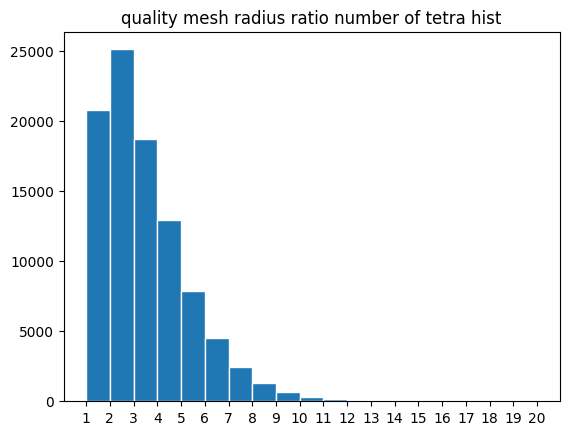

In [31]:
p50milsemiar1 = [2, 2, 4, 2, 2, 4, 8, 2, 4, 1, 3, 1, 8, 1, 1, 1, 1, 2, 4, 1, 3, 2, 3, 1, 2, 1, 3, 2, 4, 1, 4, 2, 2, 3, 2, 1, 1, 5, 3, 2, 1, 5, 2, 1, 5, 1, 4, 2, 1, 2, 4, 1, 1, 3, 3, 2, 4, 2, 3, 1, 4, 2, 4, 4, 1, 5, 1, 7, 3, 5, 1, 1, 3, 2, 1, 2, 2, 6, 2, 5, 5, 1, 4, 3, 2, 9, 2, 3, 6, 4, 1, 2, 6, 5, 1, 1, 1, 5, 1, 3, 1, 2, 2, 2, 5, 2, 2, 2, 5, 5, 3, 1, 5, 2, 2, 1, 3, 1, 4, 5, 2, 4, 1, 3, 3, 2, 1, 4, 5, 1, 2, 7, 7, 1, 2, 2, 1, 3, 6, 1, 2, 1, 3, 2, 3, 5, 2, 3, 1, 1, 3, 5, 3, 1, 8, 2, 2, 5, 4, 1, 3, 4, 3, 3, 5, 3, 4, 2, 4, 4, 1, 2, 2, 7, 1, 1, 2, 1, 2, 6, 3, 3, 2, 2, 1, 2, 2, 4, 1, 2, 3, 1, 2, 2, 3, 1, 3, 2, 5, 5, 1, 3, 1, 3, 3, 3, 1, 3, 3, 2, 2, 2, 2, 3, 1, 6, 5, 3, 4, 3, 1, 4, 5, 1, 2, 11, 2, 3, 2, 4, 6, 1, 3, 3, 3, 4, 5, 2, 1, 6, 3, 3, 2, 4, 1, 5, 1, 6, 3, 1, 4, 4, 3, 2, 2, 7, 4, 1, 7, 2, 6, 2, 2, 2, 2, 1, 2, 5, 1, 5, 1, 5, 7, 2, 4, 1, 6, 4, 2, 8, 1, 1, 4, 3, 2, 4, 2, 4, 1, 2, 2, 3, 1, 2, 9, 3, 5, 1, 2, 7, 1, 4, 6, 3, 8, 8, 3, 1, 1, 5, 4, 2, 5, 3, 4, 3, 5, 2, 1, 2, 3, 1, 1, 2, 1, 2, 2, 1, 3, 3, 4, 1, 2, 3, 1, 10, 1, 1, 3, 4, 6, 5, 4, 4, 3, 2, 2, 4, 2, 5, 4, 2, 6, 2, 3, 2, 5, 1, 2, 5, 1, 5, 2, 2, 5, 2, 1, 2, 2, 2, 4, 1, 2, 3, 2, 1, 5, 1, 4, 2, 2, 1, 5, 1, 3, 2, 2, 4, 2, 1, 3, 4, 1, 3, 2, 7, 2, 2, 5, 2, 5, 3, 6, 4, 3, 4, 4, 1, 5, 1, 4, 2, 2, 2, 1, 4, 3, 2, 3, 1, 2, 3, 3, 3, 2, 4, 2, 2, 2, 2, 1, 4, 5, 2, 4, 1, 3, 4, 1, 4, 7, 2, 6, 1, 1, 2, 3, 8, 1, 2, 1, 1, 6, 6, 3, 7, 1, 2, 3, 5, 5, 6, 1, 1, 2, 2, 2, 2, 4, 4, 3, 6, 2, 3, 2, 8, 3, 6, 4, 4, 2, 4, 1, 1, 4, 1, 1, 3, 2, 6, 2, 2, 1, 4, 5, 3, 3, 2, 3, 1, 5, 3, 2, 1, 5, 2, 3, 1, 2, 1, 2, 2, 3, 4, 6, 1, 1, 2, 2, 1, 10, 3, 3, 3, 4, 5, 3, 2, 5, 10, 3, 1, 2, 2, 3, 3, 3, 1, 6, 7, 4, 1, 5, 4, 2, 5, 6, 3, 3, 1, 5, 5, 2, 1, 3, 3, 7, 4, 2, 4, 1, 6, 1, 1, 4, 2, 4, 6, 1, 4, 3, 4, 2, 2, 1, 3, 4, 4, 2, 3, 7, 1, 3, 4, 6, 2, 1, 3, 5, 2, 1, 4, 1, 6, 3, 8, 4, 6, 3, 1, 3, 3, 3, 3, 1, 2, 3, 1, 3, 11, 1, 2, 1, 2, 4, 1, 3, 5, 1, 3, 4, 1, 5, 2, 2, 4, 2, 3, 4, 2, 1, 6, 1, 5, 3, 1, 1, 9, 5, 4, 2, 2, 5, 2, 4, 1, 4, 2, 2, 3, 3, 1, 5, 2, 3, 3, 3, 4, 2, 4, 1, 3, 2, 3, 2, 7, 8, 2, 3, 3, 2, 6, 1, 3, 4, 1, 2, 2, 3, 5, 5, 3, 1, 4, 8, 1, 2, 2, 7, 3, 3, 3, 3, 3, 4, 3, 3, 4, 2, 3, 2, 7, 1, 4, 4, 4, 1, 4, 7, 2, 4, 2, 2, 1, 4, 3, 4, 1, 5, 2, 3, 2, 2, 6, 1, 1, 1, 4, 1, 2, 1, 2, 1, 3, 5, 4, 1, 2, 1, 1, 5, 3, 3, 1, 2, 2, 5, 1, 4, 2, 4, 9, 2, 5, 2, 2, 2, 4, 3, 3, 4, 1, 2, 2, 1, 2, 2, 4, 1, 2, 4, 2, 1, 4, 3, 1, 4, 2, 2, 2, 3, 11, 4, 2, 4, 3, 2, 5, 2, 7, 2, 2, 1, 3, 6, 4, 5, 4, 2, 5, 2, 4, 4, 2, 4, 2, 3, 2, 1, 2, 2, 2, 1, 8, 1, 7, 3, 10, 1, 2, 7, 2, 2, 11, 1, 1, 8, 1, 3, 5, 1, 1, 2, 3, 2, 5, 5, 2, 2, 2, 6, 1, 2, 3, 1, 7, 3, 3, 3, 3, 2, 3, 2, 2, 3, 5, 3, 4, 1, 1, 6, 4, 7, 6, 1, 2, 4, 1, 2, 4, 6, 5, 1, 2, 2, 1, 2, 4, 3, 3, 3, 2, 3, 5, 2, 2, 4, 3, 8, 4, 2, 4, 6, 1, 1, 2, 7, 3, 4, 5, 1, 3, 2, 4, 4, 7, 4, 4, 2, 4, 2, 4, 4, 1, 2, 3, 2, 2, 2, 7, 3, 5, 1, 3, 1, 5, 2, 4, 2, 2, 5, 4, 2, 2, 4, 2, 1, 4, 2, 2, 3, 5, 2, 2, 1, 4, 5, 2, 1, 6, 1, 3, 8, 4, 2, 2, 3, 2, 3, 3, 2, 2, 1, 5, 4, 4, 5, 2, 2, 3, 2, 3, 5, 1, 3, 1, 3, 1, 3, 4, 2, 1, 3, 2, 1, 2, 5, 1, 4, 3, 5, 2, 2, 3, 3, 2, 2, 3, 5, 2, 2, 2, 1, 4, 6, 3, 1, 3, 5, 5, 2, 2, 3, 5, 1, 1, 3, 2, 4, 4, 2, 4, 3, 1, 5, 1, 2, 2, 4, 2, 3, 10, 1, 5, 1, 8, 1, 3, 1, 2, 3, 2, 4, 1, 1, 2, 2, 3, 2, 5, 1, 2, 2, 5, 2, 5, 5, 1, 3, 3, 1, 2, 2, 3, 1, 4, 3, 2, 3, 2, 4, 3, 3, 12, 2, 1, 2, 4, 1, 4, 1, 2, 4, 2, 4, 4, 1, 3, 3, 1, 2, 2, 3, 4, 2, 2, 3, 3, 1, 3, 2, 1, 5, 2, 3, 2, 1, 7, 1, 2, 5, 5, 2, 3, 3, 9, 5, 2, 2, 4, 5, 2, 2, 5, 3, 4, 1, 4, 2, 4, 4, 2, 2, 1, 7, 2, 6, 3, 2, 2, 5, 1, 7, 1, 2, 2, 1, 2, 2, 9, 4, 4, 1, 5, 2, 1, 3, 3, 1, 3, 5, 2, 3, 3, 4, 2, 3, 3, 3, 2, 1, 2, 3, 6, 1, 1, 3, 1, 3, 1, 5, 1, 2, 4, 3, 1, 4, 4, 3, 2, 1, 5, 1, 1, 4, 3, 2, 6, 1, 2, 2, 3, 1, 2, 1, 5, 2, 6, 3, 1, 1, 6, 1, 2, 3, 3, 2, 3, 1, 3, 6, 1, 3, 1, 7, 1, 3, 2, 1, 3, 1, 4, 2, 10, 1, 1, 3, 3, 3, 5, 1, 7, 2, 2, 2, 3, 2, 2, 8, 4, 1, 3, 2, 2, 1, 5, 1, 2, 5, 6, 8, 5, 1, 1, 2, 1, 4, 1, 3, 2, 1, 2, 3, 3, 3, 2, 6, 1, 2, 3, 1, 3, 2, 3, 2, 1, 2, 4, 1, 3, 1, 4, 2, 9, 1, 2, 1, 4, 3, 7, 1, 2, 2, 1, 2, 3, 7, 2, 1, 1, 2, 1, 4, 4, 2, 3, 6, 3, 3, 3, 1, 3, 2, 10, 4, 1, 5, 3, 3, 2, 8, 4, 3, 1, 3, 5, 2, 2, 7, 4, 3, 1, 8, 1, 2, 1, 2, 5, 3, 6, 1, 6, 1, 3, 3, 1, 5, 1, 2, 3, 2, 5, 2, 1, 6, 3, 1, 4, 5, 2, 4, 2, 3, 2, 3, 1, 8, 4, 1, 1, 9, 1, 1, 1, 3, 2, 2, 1, 6, 2, 1, 2, 3, 1, 2, 2, 4, 1, 6, 3, 6, 1, 3, 1, 6, 2, 2, 3, 2, 3, 1, 2, 4, 4, 2, 3, 4, 6, 3, 4, 1, 5, 4, 5, 1, 6, 1, 1, 2, 7, 1, 1, 4, 2, 2, 1, 4, 1, 3, 4, 1, 1, 1, 3, 6, 2, 5, 5, 7, 5, 2, 1, 5, 3, 3, 1, 6, 5, 2, 3, 3, 2, 6, 1, 2, 3, 4, 3, 2, 1, 3, 4, 1, 2, 3, 2, 1, 2, 2, 2, 3, 1, 1, 7, 4, 1, 6, 1, 3, 3, 1, 6, 2, 2, 6, 3, 1, 6, 3, 6, 6, 1, 1, 2, 2, 9, 1, 3, 3, 4, 1, 3, 4, 2, 2, 4, 2, 1, 5, 3, 4, 5, 3, 6, 4, 3, 3, 3, 2, 3, 2, 2, 2, 9, 1, 4, 1, 2, 1, 3, 2, 2, 2, 3, 3, 1, 1, 4, 1, 4, 2, 1, 2, 4, 1, 3, 3, 2, 7, 3, 4, 4, 1, 4, 2, 7, 1, 1, 3, 3, 1, 5, 1, 2, 1, 3, 1, 4, 6, 2, 4, 4, 2, 2, 4, 3, 2, 4, 3, 1, 4, 2, 3, 4, 2, 3, 3, 2, 1, 3, 2, 2, 9, 1, 4, 2, 5, 2, 3, 3, 2, 5, 1, 3, 1, 4, 5, 1, 4, 4, 2, 6, 2, 4, 1, 3, 3, 1, 1, 4, 2, 2, 5, 1, 2, 7, 1, 3, 2, 2, 6, 1, 5, 2, 5, 1, 3, 1, 3, 2, 1, 2, 1, 4, 2, 1, 3, 5, 1, 1, 1, 1, 2, 4, 2, 5, 4, 5, 1, 1, 5, 6, 3, 2, 1, 2, 3, 1, 4, 3, 1, 2, 4, 3, 6, 1, 2, 4, 2, 1, 3, 3, 2, 1, 8, 1, 1, 1, 6, 4, 2, 2, 2, 1, 8, 4, 3, 1, 5, 6, 6, 4, 1, 6, 1, 3, 4, 2, 2, 4, 2, 3, 6, 3, 2, 4, 1, 1, 9, 1, 6, 4, 5, 6, 1, 4, 2, 2, 4, 4, 1, 3, 2, 1, 5, 6, 1, 4, 4, 7, 2, 4, 2, 4, 1, 4, 1, 2, 5, 2, 2, 5, 2, 3, 5, 1, 4, 4, 3, 4, 1, 5, 5, 2, 2, 1, 5, 7, 7, 1, 2, 1, 4, 1, 4, 4, 2, 2, 2, 4, 1, 5, 2, 2, 2, 5, 1, 4, 2, 1, 3, 4, 1, 4, 1, 4, 2, 1, 2, 3, 1, 7, 8, 6, 1, 3, 2, 5, 1, 2, 2, 4, 2, 2, 2, 1, 2, 4, 3, 2, 2, 2, 1, 2, 4, 6, 2, 4, 2, 2, 6, 4, 1, 2, 5, 3, 5, 1, 4, 7, 1, 1, 3, 1, 7, 1, 2, 2, 6, 3, 2, 2, 3, 6, 1, 1, 2, 3, 5, 1, 2, 2, 6, 4, 2, 6, 1, 4, 3, 9, 1, 1, 2, 2, 4, 2, 1, 3, 4, 3, 2, 3, 7, 2, 3, 2, 2, 5, 2, 3, 2, 1, 2, 3, 3, 1, 2, 3, 4, 2, 1, 1, 3, 3, 3, 10, 1, 4, 4, 3, 2, 2, 1, 2, 2, 2, 4, 5, 3, 1, 2, 2, 5, 2, 6, 1, 1, 2, 1, 2, 2, 5, 5, 3, 9, 3, 3, 7, 2, 3, 1, 6, 1, 2, 3, 3, 2, 4, 3, 1, 2, 2, 5, 2, 2, 3, 1, 3, 2, 7, 2, 2, 5, 2, 3, 1, 2, 2, 3, 3, 2, 1, 5, 2, 7, 1, 3, 3, 4, 1, 4, 3, 1, 3, 2, 2, 3, 2, 3, 5, 2, 4, 2, 1, 5, 6, 1, 1, 2, 4, 2, 7, 3, 3, 1, 6, 4, 2, 5, 10, 2, 2, 4, 7, 2, 8, 5, 3, 5, 11, 1, 1, 5, 1, 2, 1, 3, 3, 1, 1, 3, 2, 1, 6, 1, 5, 2, 10, 2, 3, 3, 3, 4, 2, 4, 1, 4, 1, 3, 3, 4, 2, 2, 1, 5, 2, 2, 2, 7, 2, 2, 1, 5, 2, 2, 8, 2, 3, 1, 2, 4, 1, 4, 2, 6, 1, 2, 1, 3, 2, 7, 1, 1, 3, 4, 1, 2, 1, 2, 3, 1, 1, 4, 2, 2, 2, 7, 2, 3, 2, 6, 3, 1, 4, 4, 1, 5, 2, 2, 3, 2, 6, 5, 4, 1, 3, 1, 4, 4, 2, 2, 1, 2, 3, 2, 9, 1, 3, 2, 2, 2, 2, 4, 2, 1, 2, 3, 1, 2, 4, 1, 4, 4, 3, 2, 1, 2, 2, 2, 4, 4, 8, 2, 5, 3, 2, 2, 3, 3, 5, 1, 3, 4, 1, 2, 3, 3, 3, 5, 3, 2, 6, 3, 1, 3, 2, 3, 2, 2, 1, 3, 2, 4, 4, 1, 5, 4, 2, 3, 2, 1, 2, 2, 4, 3, 3, 2, 4, 1, 5, 3, 4, 2, 6, 1, 2, 8, 3, 2, 2, 7, 1, 1, 4, 3, 1, 2, 5, 3, 4, 2, 6, 2, 4, 2, 2, 1, 6, 1, 1, 4, 3, 3, 2, 6, 1, 2, 3, 1, 2, 2, 7, 4, 2, 1, 4, 3, 2, 4, 3, 3, 2, 3, 2, 3, 6, 5, 3, 6, 5, 3, 2, 5, 2, 7, 1, 2, 3, 4, 1, 2, 2, 2, 3, 4, 5, 3, 3, 3, 1, 2, 3, 1, 5, 2, 4, 3, 5, 1, 3, 6, 2, 3, 3, 4, 1, 3, 1, 4, 2, 4, 2, 5, 2, 3, 2, 2, 4, 2, 7, 7, 5, 1, 4, 5, 2, 1, 2, 2, 2, 5, 2, 1, 3, 5, 2, 2, 2, 4, 5, 6, 1, 3, 1, 4, 2, 2, 4, 2, 5, 2, 2, 2, 4, 2, 1, 6, 1, 2, 4, 1, 4, 3, 2, 2, 1, 9, 1, 3, 2, 5, 4, 2, 2, 3, 1, 2, 1, 6, 3, 3, 4, 5, 3, 2, 4, 3, 5, 3, 4, 4, 2, 6, 1, 2, 1, 7, 4, 2, 3, 2, 5, 2, 1, 3, 1, 2, 7, 1, 1, 1, 2, 2, 4, 1, 1, 4, 3, 4, 1, 1, 4, 3, 2, 2, 1, 2, 1, 1, 11, 1, 1, 2, 10, 2, 1, 1, 6, 4, 2, 5, 1, 3, 4, 2, 4, 2, 1, 2, 7, 7, 1, 3, 4, 1, 2, 3, 1, 2, 7, 1, 3, 6, 1, 4, 3, 4, 2, 8, 3, 5, 2, 3, 6, 3, 1, 5, 4, 4, 4, 5, 1, 1, 4, 2, 3, 5, 3, 2, 1, 6, 3, 4, 7, 1, 1, 3, 5, 3, 1, 1, 6, 3, 2, 2, 2, 2, 3, 2, 2, 2, 7, 1, 2, 7, 1, 2, 1, 6, 6, 2, 2, 3, 7, 4, 1, 5, 2, 3, 4, 3, 2, 6, 4, 2, 2, 2, 1, 8, 2, 1, 1, 1, 5, 2, 5, 4, 4, 3, 4, 4, 6, 4, 3, 3, 5, 2, 2, 1, 2, 3, 5, 4, 1, 1, 5, 3, 2, 5, 2, 7, 5, 3, 3, 1, 1, 3, 2, 3, 7, 6, 1, 5, 5, 1, 1, 2, 3, 3, 2, 3, 1, 7, 3, 3, 2, 3, 2, 4, 6, 2, 4, 5, 2, 4, 5, 1, 1, 4, 1, 8, 2, 5, 4, 2, 2, 1, 4, 3, 2, 1, 2, 3, 1, 5, 2, 5, 2, 6, 2, 2, 3, 1, 4, 2, 2, 1, 4, 2, 6, 4, 2, 1, 5, 3, 3, 1, 4, 2, 1, 3, 7, 1, 5, 1, 3, 5, 2, 1, 2, 2, 1, 1, 4, 4, 2, 1, 2, 2, 4, 1, 7, 1, 5, 3, 3, 1, 2, 3, 2, 3, 2, 3, 3, 8, 4, 3, 1, 4, 4, 3, 2, 4, 9, 3, 1, 9, 7, 5, 2, 3, 4, 1, 3, 1, 7, 1, 4, 3, 3, 2, 2, 4, 2, 1, 3, 2, 2, 2, 3, 3, 1, 3, 1, 4, 2, 2, 4, 4, 2, 8, 4, 3, 4, 3, 2, 1, 7, 3, 1, 2, 4, 2, 2, 2, 5, 2, 1, 2, 4, 1, 2, 4, 2, 3, 3, 2, 1, 4, 3, 3, 4, 7, 1, 6, 4, 5, 1, 2, 2, 2, 3, 2, 1, 8, 1, 4, 2, 3, 1, 1, 3, 3, 3, 2, 2, 7, 4, 3, 7, 1, 4, 5, 5, 4, 6, 4, 1, 2, 5, 2, 2, 2, 3, 2, 3, 3, 7, 1, 1, 2, 2, 4, 4, 2, 2, 2, 1, 6, 3, 1, 2, 4, 3, 3, 2, 3, 3, 5, 1, 3, 1, 4, 2, 1, 2, 3, 2, 1, 4, 3, 1, 4, 6, 5, 1, 5, 1, 2, 2, 3, 5, 3, 5, 6, 3, 3, 4, 3, 3, 4, 6, 4, 3, 3, 1, 4, 5, 3, 3, 2, 5, 1, 3, 2, 2, 5, 4, 2, 3, 1, 3, 3, 2, 8, 2, 3, 7, 2, 5, 5, 3, 3, 4, 3, 3, 3, 4, 1, 2, 5, 6, 1, 5, 1, 1, 1, 2, 4, 2, 3, 8, 2, 1, 3, 4, 1, 3, 5, 4, 5, 2, 5, 1, 3, 1, 8, 1, 3, 6, 2, 2, 6, 2, 3, 4, 5, 1, 2, 3, 2, 2, 2, 11, 1, 3, 3, 1, 2, 1, 3, 2, 7, 1, 2, 3, 7, 8, 2, 1, 5, 1, 5, 2, 2, 3, 2, 4, 2, 2, 5, 2, 2, 2, 2, 1, 2, 2, 6, 2, 2, 2, 1, 2, 1, 4, 3, 3, 1, 3, 5, 4, 1, 1, 3, 7, 2, 3, 1, 5, 2, 6, 1, 2, 2, 1, 4, 7, 3, 5, 3, 4, 3, 3, 5, 1, 4, 1, 4, 2, 2, 3, 4, 4, 1, 3, 1, 1, 2, 5, 1, 4, 4, 2, 1, 4, 2, 1, 2, 2, 2, 3, 1, 3, 3, 3, 3, 2, 4, 1, 2, 2, 4, 4, 4, 2, 2, 4, 3, 2, 4, 2, 3, 6, 2, 1, 4, 3, 2, 4, 6, 1, 2, 5, 8, 2, 1, 3, 3, 3, 2, 1, 2, 3, 3, 3, 5, 1, 2, 3, 5, 1, 4, 2, 1, 2, 3, 1, 5, 2, 3, 5, 1, 4, 2, 1, 8, 2, 3, 7, 1, 2, 5, 2, 3, 2, 1, 4, 3, 2, 1, 2, 1, 2, 2, 3, 4, 1, 2, 4, 5, 3, 1, 1, 5, 3, 4, 1, 1, 4, 2, 1, 2, 3, 1, 6, 3, 2, 1, 3, 2, 2, 4, 4, 4, 8, 1, 7, 1, 2, 1, 9, 2, 1, 5, 2, 1, 4, 3, 2, 8, 4, 2, 1, 3, 1, 4, 1, 2, 1, 3, 3, 3, 2, 4, 4, 4, 1, 2, 1, 2, 3, 3, 2, 4, 2, 4, 1, 1, 2, 2, 3, 4, 1, 3, 1, 3, 1, 3, 4, 1, 2, 5, 3, 2, 2, 4, 1, 3, 1, 3, 2, 6, 1, 1, 3, 4, 2, 6, 1, 3, 4, 5, 7, 3, 2, 2, 8, 3, 1, 1, 4, 2, 2, 3, 3, 4, 1, 5, 2, 4, 3, 2, 4, 1, 1, 5, 1, 6, 2, 6, 7, 4, 4, 3, 7, 3, 1, 1, 2, 2, 1, 2, 3, 1, 5, 8, 2, 5, 1, 2, 5, 4, 2, 1, 3, 2, 4, 3, 4, 2, 6, 3, 2, 6, 3, 6, 1, 3, 3, 4, 1, 2, 6, 5, 1, 1, 2, 3, 1, 4, 6, 1, 1, 2, 3, 2, 5, 2, 3, 3, 2, 3, 5, 1, 4, 3, 2, 2, 3, 4, 1, 2, 4, 6, 1, 3, 3, 1, 3, 1, 1, 4, 3, 3, 5, 4, 1, 2, 4, 4, 2, 1, 7, 3, 2, 8, 1, 1, 1, 4, 2, 3, 2, 5, 2, 1, 3, 5, 4, 1, 2, 2, 4, 1, 2, 7, 4, 2, 1, 3, 2, 1, 5, 7, 1, 1, 1, 3, 1, 4, 3, 5, 1, 3, 2, 3, 4, 2, 1, 5, 3, 1, 2, 1, 3, 9, 1, 2, 3, 3, 1, 3, 1, 4, 2, 5, 6, 1, 1, 1, 5, 1, 2, 2, 3, 4, 9, 1, 1, 1, 2, 2, 2, 3, 3, 4, 4, 1, 3, 1, 6, 3, 1, 2, 1, 2, 2, 4, 2, 1, 2, 2, 6, 1, 7, 3, 5, 2, 2, 3, 1, 2, 1, 2, 6, 3, 4, 4, 4, 3, 1, 4, 4, 2, 3, 5, 4, 2, 2, 5, 4, 3, 1, 2, 4, 3, 7, 1, 2, 3, 2, 3, 8, 5, 3, 2, 1, 1, 3, 3, 3, 5, 3, 2, 6, 3, 4, 2, 1, 5, 2, 4, 3, 3, 2, 2, 2, 4, 3, 1, 4, 4, 3, 1, 2, 9, 6, 1, 4, 5, 3, 1, 2, 5, 2, 6, 3, 1, 8, 2, 7, 9, 4, 3, 3, 7, 1, 5, 6, 1, 5, 1, 2, 2, 2, 3, 1, 4, 2, 2, 1, 3, 1, 2, 7, 2, 4, 4, 6, 2, 4, 5, 8, 3, 1, 1, 6, 1, 4, 2, 3, 4, 4, 1, 4, 3, 3, 4, 2, 2, 3, 7, 2, 3, 1, 4, 2, 1, 2, 2, 3, 1, 5, 5, 1, 3, 2, 1, 5, 3, 2, 1, 2, 3, 4, 4, 2, 1, 5, 3, 1, 3, 5, 1, 6, 2, 3, 2, 3, 1, 3, 2, 3, 2, 5, 7, 2, 2, 3, 4, 3, 1, 2, 3, 1, 8, 1, 1, 1, 2, 4, 6, 1, 7, 1, 2, 5, 2, 4, 5, 6, 2, 3, 9, 2, 6, 1, 3, 4, 4, 1, 8, 2, 4, 1, 2, 5, 3, 1, 8, 4, 7, 4, 1, 7, 5, 2, 2, 3, 4, 4, 1, 8, 2, 3, 3, 3, 2, 4, 4, 2, 2, 5, 3, 4, 6, 3, 1, 3, 6, 1, 3, 3, 2, 2, 3, 4, 8, 2, 8, 4, 6, 1, 4, 1, 5, 4, 1, 1, 2, 2, 1, 2, 2, 1, 2, 5, 3, 4, 4, 1, 2, 4, 4, 7, 3, 2, 3, 3, 3, 2, 1, 4, 4, 3, 2, 5, 3, 1, 4, 3, 2, 3, 2, 3, 5, 4, 2, 6, 2, 5, 1, 3, 6, 2, 3, 2, 2, 1, 4, 2, 1, 2, 3, 2, 5, 1, 4, 7, 4, 5, 1, 4, 3, 1, 5, 3, 2, 2, 3, 3, 3, 6, 3, 1, 1, 6, 1, 3, 4, 2, 3, 4, 2, 3, 1, 4, 6, 1, 3, 4, 3, 4, 2, 1, 1, 4, 5, 1, 2, 3, 2, 5, 2, 9, 2, 1, 3, 6, 2, 2, 2, 11, 3, 3, 2, 4, 3, 2, 3, 1, 3, 6, 1, 2, 3, 4, 3, 2, 5, 4, 2, 1, 4, 2, 5, 2, 1, 2, 3, 5, 8, 1, 1, 3, 3, 5, 2, 2, 2, 7, 1, 2, 2, 2, 1, 6, 1, 2, 2, 3, 4, 2, 3, 5, 2, 3, 5, 2, 1, 2, 3, 3, 4, 6, 2, 1, 3, 3, 5, 2, 1, 1, 8, 2, 1, 2, 3, 2, 3, 5, 3, 3, 2, 2, 8, 3, 2, 1, 4, 2, 4, 1, 6, 1, 3, 3, 4, 3, 4, 1, 2, 2, 3, 2, 1, 7, 2, 2, 1, 7, 1, 1, 3, 1, 4, 3, 2, 10, 3, 2, 5, 2, 3, 2, 2, 2, 5, 1, 4, 3, 3, 2, 2, 2, 4, 3, 4, 1, 3, 1, 5, 3, 1, 5, 2, 2, 4, 2, 3, 2, 3, 1, 3, 2, 2, 2, 6, 1, 3, 1, 4, 4, 3, 5, 4, 8, 5, 1, 2, 1, 4, 1, 2, 1, 4, 1, 2, 8, 3, 2, 1, 8, 4, 2, 3, 5, 2, 2, 2, 5, 2, 1, 7, 1, 4, 2, 4, 5, 2, 3, 1, 1, 4, 1, 1, 5, 8, 1, 2, 3, 2, 7, 1, 1, 6, 1, 5, 2, 7, 1, 2, 2, 3, 2, 4, 4, 6, 1, 2, 5, 3, 4, 2, 3, 1, 4, 3, 3, 2, 2, 12, 2, 2, 2, 5, 1, 5, 4, 8, 5, 3, 4, 4, 2, 3, 3, 1, 5, 2, 2, 4, 1, 2, 2, 2, 2, 3, 1, 3, 3, 3, 1, 4, 4, 3, 2, 3, 2, 4, 7, 1, 2, 9, 5, 3, 1, 5, 2, 2, 1, 4, 5, 5, 5, 2, 1, 2, 2, 2, 2, 3, 4, 2, 5, 5, 2, 1, 3, 4, 2, 3, 2, 1, 4, 2, 2, 1, 3, 6, 1, 2, 2, 8, 3, 3, 4, 4, 1, 4, 2, 2, 7, 3, 1, 4, 2, 2, 5, 1, 2, 4, 2, 1, 1, 3, 4, 2, 1, 2, 4, 3, 6, 1, 5, 2, 6, 1, 3, 3, 1, 5, 2, 2, 5, 3, 1, 2, 1, 2, 2, 5, 4, 5, 3, 3, 4, 1, 1, 1, 1, 6, 2, 3, 1, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 1, 2, 2, 2, 5, 1, 4, 2, 6, 8, 1, 1, 4, 3, 2, 2, 1, 2, 2, 4, 1, 1, 4, 5, 2, 3, 3, 4, 2, 3, 5, 2, 2, 3, 2, 3, 2, 2, 3, 1, 3, 1, 7, 1, 5, 3, 3, 2, 2, 5, 3, 2, 2, 3, 4, 2, 2, 5, 1, 1, 1, 2, 2, 4, 1, 5, 1, 5, 2, 3, 1, 3, 2, 1, 4, 6, 4, 1, 3, 3, 3, 2, 2, 2, 3, 5, 4, 3, 1, 2, 3, 3, 3, 4, 2, 1, 6, 3, 2, 2, 3, 2, 3, 3, 4, 3, 6, 2, 4, 2, 3, 3, 1, 5, 3, 1, 8, 2, 3, 7, 6, 3, 2, 2, 2, 2, 2, 2, 5, 1, 3, 4, 2, 3, 4, 2, 2, 3, 3, 1, 2, 7, 5, 2, 1, 9, 4, 2, 3, 1, 2, 3, 1, 2, 2, 3, 8, 1, 1, 5, 1, 3, 5, 3, 2, 5, 1, 6, 1, 5, 1, 2, 3, 2, 7, 3, 4, 4, 4, 1, 6, 1, 5, 7, 1, 6, 1, 3, 4, 5, 1, 4, 4, 9, 5, 2, 2, 3, 3, 3, 2, 3, 4, 2, 1, 2, 2, 4, 1, 1, 2, 2, 4, 3, 2, 3, 6, 4, 11, 3, 3, 7, 1, 1, 5, 3, 5, 2, 1, 5, 3, 7, 2, 4, 3, 3, 1, 4, 2, 1, 3, 3, 2, 2, 1, 7, 2, 2, 2, 3, 1, 4, 1, 2, 3, 6, 5, 2, 6, 6, 1, 3, 1, 3, 5, 6, 1, 1, 2, 3, 3, 2, 2, 4, 1, 6, 1, 4, 1, 7, 1, 4, 4, 4, 6, 5, 1, 1, 3, 9, 2, 2, 2, 2, 2, 5, 5, 4, 3, 2, 3, 5, 4, 2, 2, 3, 2, 2, 2, 1, 11, 1, 1, 3, 3, 3, 3, 2, 3, 5, 1, 3, 3, 2, 3, 4, 3, 3, 3, 5, 2, 2, 2, 7, 4, 4, 4, 4, 6, 3, 1, 5, 1, 2, 5, 1, 1, 3, 1, 3, 3, 2, 2, 3, 1, 2, 2, 4, 4, 3, 5, 1, 4, 2, 1, 6, 4, 3, 3, 3, 2, 1, 2, 7, 1, 1, 4, 3, 2, 7, 1, 1, 2, 1, 8, 2, 2, 3, 4, 2, 1, 3, 4, 2, 4, 4, 3, 2, 3, 3, 1, 10, 5, 4, 3, 1, 4, 1, 2, 5, 2, 2, 1, 7, 3, 2, 7, 3, 1, 7, 1, 4, 4, 3, 4, 2, 4, 1, 3, 3, 3, 2, 1, 6, 1, 1, 4, 2, 4, 1, 4, 2, 4, 1, 4, 4, 2, 1, 3, 3, 7, 1, 3, 2, 1, 1, 4, 2, 2, 5, 1, 1, 6, 3, 1, 3, 4, 1, 3, 4, 2, 1, 2, 3, 3, 2, 2, 4, 1, 2, 5, 2, 6, 2, 5, 2, 2, 2, 4, 3, 1, 5, 7, 1, 6, 3, 4, 2, 2, 2, 4, 2, 2, 1, 2, 3, 2, 2, 3, 4, 1, 3, 1, 5, 4, 1, 2, 5, 3, 2, 2, 1, 5, 5, 3, 4, 3, 8, 1, 3, 4, 1, 7, 1, 4, 2, 3, 5, 4, 2, 3, 3, 1, 4, 2, 6, 1, 3, 4, 4, 6, 3, 1, 4, 10, 2, 1, 1, 4, 1, 2, 3, 2, 4, 2, 1, 5, 2, 2, 2, 3, 1, 1, 3, 1, 5, 1, 8, 1, 2, 3, 3, 1, 2, 3, 2, 2, 2, 2, 5, 2, 5, 4, 1, 2, 4, 4, 3, 1, 3, 4, 4, 2, 2, 3, 11, 1, 1, 1, 6, 4, 6, 1, 2, 1, 4, 9, 2, 1, 6, 5, 5, 2, 4, 3, 2, 1, 3, 5, 2, 4, 2, 5, 5, 3, 3, 1, 3, 4, 2, 2, 5, 2, 4, 3, 6, 1, 4, 5, 1, 2, 9, 1, 5, 1, 3, 1, 6, 2, 3, 2, 1, 2, 7, 2, 2, 1, 2, 3, 1, 6, 1, 2, 2, 2, 1, 2, 3, 5, 4, 7, 6, 1, 4, 5, 1, 2, 9, 3, 4, 4, 1, 2, 2, 6, 1, 2, 2, 2, 2, 1, 4, 2, 3, 3, 2, 5, 2, 4, 6, 1, 1, 6, 2, 2, 1, 5, 3, 2, 2, 7, 2, 3, 1, 2, 5, 1, 3, 2, 4, 2, 4, 2, 2, 4, 2, 1, 5, 1, 4, 2, 6, 2, 3, 3, 1, 2, 3, 1, 2, 5, 4, 1, 2, 4, 4, 4, 8, 2, 2, 6, 2, 6, 5, 1, 5, 5, 1, 3, 2, 4, 2, 2, 2, 4, 2, 2, 4, 4, 5, 4, 5, 1, 5, 1, 3, 3, 1, 5, 1, 4, 4, 4, 4, 3, 5, 2, 3, 1, 6, 1, 1, 5, 4, 1, 3, 4, 3, 4, 5, 2, 4, 3, 2, 2, 3, 2, 3, 3, 2, 4, 2, 3, 2, 3, 2, 1, 2, 1, 3, 6, 1, 2, 1, 3, 3, 2, 3, 12, 6, 7, 4, 4, 5, 4, 5, 2, 2, 3, 1, 2, 3, 4, 7, 2, 2, 3, 5, 3, 3, 2, 4, 1, 2, 2, 1, 3, 1, 4, 2, 4, 3, 5, 4, 4, 3, 14, 4, 4, 3, 5, 2, 1, 2, 2, 8, 1, 1, 3, 3, 6, 5, 1, 2, 4, 5, 5, 4, 4, 5, 4, 6, 2, 6, 1, 2, 3, 2, 3, 11, 1, 4, 2, 5, 5, 1, 3, 4, 3, 5, 3, 5, 5, 1, 4, 8, 1, 1, 5, 1, 3, 2, 3, 1, 3, 7, 3, 3, 2, 2, 3, 2, 4, 3, 6, 4, 2, 2, 1, 4, 1, 4, 2, 4, 2, 2, 2, 3, 2, 6, 5, 5, 5, 5, 6, 3, 2, 3, 3, 1, 2, 5, 1, 2, 2, 5, 1, 6, 4, 2, 2, 4, 1, 2, 1, 3, 3, 1, 3, 1, 3, 2, 3, 2, 4, 3, 2, 1, 2, 4, 1, 6, 1, 1, 7, 1, 4, 3, 1, 2, 2, 2, 5, 6, 2, 4, 1, 3, 4, 1, 3, 3, 1, 3, 4, 1, 5, 2, 5, 4, 3, 1, 2, 2, 4, 5, 4, 1, 2, 1, 2, 1, 2, 3, 3, 2, 6, 2, 1, 2, 5, 1, 1, 2, 2, 3, 6, 4, 3, 6, 3, 1, 1, 4, 1, 3, 3, 3, 2, 3, 3, 5, 3, 2, 1, 7, 4, 4, 1, 3, 3, 2, 3, 8, 1, 9, 1, 1, 1, 5, 5, 2, 1, 6, 1, 2, 4, 2, 2, 2, 3, 2, 3, 1, 4, 1, 5, 1, 3, 2, 11, 1, 1, 1, 3, 5, 4, 1, 2, 2, 4, 3, 2, 1, 8, 5, 5, 2, 3, 4, 1, 5, 2, 2, 2, 1, 3, 3, 3, 4, 1, 6, 4, 2, 2, 4, 7, 3, 5, 2, 2, 3, 2, 3, 1, 1, 4, 3, 4, 4, 1, 5, 2, 3, 3, 6, 2, 2, 5, 1, 4, 3, 3, 6, 2, 1, 3, 4, 1, 6, 1, 3, 2, 1, 4, 2, 1, 3, 1, 1, 4, 5, 2, 4, 1, 2, 2, 4, 3, 3, 1, 2, 3, 4, 2, 3, 1, 5, 1, 3, 3, 2, 4, 5, 2, 3, 3, 1, 8, 4, 1, 4, 4, 3, 2, 3, 2, 2, 1, 2, 4, 1, 2, 3, 1, 6, 3, 2, 6, 1, 3, 2, 2, 4, 2, 2, 1, 3, 5, 7, 1, 4, 1, 2, 3, 5, 1, 3, 3, 2, 3, 1, 4, 6, 5, 1, 3, 2, 2, 3, 3, 2, 3, 2, 2, 2, 2, 4, 2, 2, 2, 6, 5, 1, 2, 3, 3, 3, 2, 3, 3, 6, 3, 3, 2, 7, 2, 3, 3, 8, 1, 6, 4, 1, 7, 5, 1, 1, 3, 4, 2, 2, 3, 3, 1, 5, 3, 6, 1, 3, 3, 2, 3, 2, 1, 5, 9, 2, 1, 7, 3, 1, 2, 5, 3, 1, 2, 2, 5, 2, 2, 4, 2, 2, 7, 1, 2, 3, 3, 3, 8, 3, 2, 3, 4, 3, 2, 1, 10, 1, 1, 2, 4, 4, 1, 2, 2, 1, 4, 3, 1, 2, 2, 6, 4, 2, 2, 3, 6, 4, 4, 2, 2, 5, 3, 5, 6, 1, 7, 1, 2, 6, 3, 1, 5, 4, 3, 2, 2, 5, 3, 2, 5, 1, 3, 1, 4, 7, 3, 1, 3, 3, 3, 7, 1, 3, 3, 2, 3, 4, 4, 1, 5, 5, 2, 3, 2, 3, 2, 4, 1, 4, 1, 3, 2, 2, 4, 1, 2, 1, 5, 1, 3, 5, 5, 2, 2, 3, 5, 1, 2, 2, 2, 2, 2, 1, 7, 1, 1, 2, 2, 4, 3, 5, 1, 5, 2, 1, 6, 1, 1, 5, 3, 2, 2, 4, 1, 4, 6, 1, 2, 1, 9, 3, 4, 2, 4, 2, 8, 4, 1, 5, 7, 1, 1, 1, 3, 1, 4, 3, 6, 7, 3, 3, 2, 4, 4, 2, 5, 3, 1, 2, 7, 2, 3, 5, 1, 1, 1, 3, 2, 1, 2, 3, 2, 1, 2, 4, 1, 4, 3, 3, 2, 2, 2, 4, 2, 2, 3, 6, 2, 4, 1, 2, 4, 1, 7, 2, 6, 1, 4, 11, 1, 7, 1, 2, 5, 4, 2, 1, 8, 1, 4, 2, 5, 4, 2, 2, 4, 4, 2, 3, 4, 1, 3, 5, 1, 3, 5, 10, 2, 1, 4, 2, 5, 2, 1, 6, 6, 1, 2, 2, 6, 5, 2, 3, 3, 1, 2, 2, 2, 4, 2, 3, 1, 2, 5, 1, 1, 3, 3, 7, 4, 2, 2, 8, 1, 3, 1, 2, 6, 5, 3, 1, 3, 6, 3, 8, 6, 2, 2, 3, 2, 3, 2, 4, 4, 2, 3, 2, 5, 1, 3, 9, 2, 1, 1, 4, 3, 3, 1, 3, 4, 1, 8, 4, 1, 2, 3, 5, 4, 3, 2, 2, 1, 5, 4, 3, 2, 4, 3, 1, 5, 4, 1, 3, 4, 1, 3, 2, 3, 2, 1, 4, 1, 4, 1, 6, 2, 6, 2, 2, 2, 3, 6, 3, 6, 1, 6, 1, 3, 1, 6, 3, 3, 2, 2, 1, 9, 3, 2, 7, 2, 4, 2, 3, 1, 5, 2, 3, 2, 3, 1, 2, 1, 12, 1, 3, 4, 2, 5, 2, 2, 2, 4, 2, 3, 1, 4, 3, 2, 1, 6, 3, 4, 1, 3, 1, 2, 1, 4, 1, 4, 2, 1, 2, 2, 3, 9, 3, 1, 3, 2, 3, 2, 1, 1, 2, 5, 2, 1, 4, 3, 2, 5, 2, 1, 6, 1, 1, 4, 1, 4, 2, 2, 1, 4, 1, 5, 6, 5, 1, 10, 1, 1, 2, 3, 2, 1, 3, 2, 3, 2, 3, 10, 1, 2, 2, 2, 2, 8, 2, 5, 1, 1, 2, 1, 3, 7, 3, 3, 3, 2, 4, 2, 5, 1, 2, 2, 2, 3, 1, 4, 1, 3, 6, 1, 9, 1, 3, 2, 4, 1, 3, 6, 1, 2, 3, 2, 2, 4, 1, 3, 3, 2, 4, 1, 4, 3, 5, 4, 2, 1, 4, 1, 1, 3, 2, 2, 3, 3, 2, 3, 3, 4, 1, 2, 2, 4, 8, 2, 4, 1, 5, 5, 1, 2, 2, 6, 5, 2, 2, 7, 2, 2, 3, 2, 2, 4, 2, 10, 4, 4, 3, 1, 2, 3, 4, 5, 5, 3, 2, 2, 2, 4, 1, 2, 3, 2, 4, 2, 2, 1, 4, 4, 6, 1, 3, 2, 4, 2, 8, 1, 3, 2, 1, 4, 3, 5, 3, 1, 5, 1, 1, 3, 1, 1, 2, 3, 3, 1, 1, 7, 2, 3, 4, 2, 5, 1, 3, 4, 2, 4, 5, 1, 4, 7, 3, 2, 3, 3, 3, 1, 3, 1, 3, 3, 3, 2, 2, 10, 3, 1, 2, 2, 2, 2, 5, 2, 4, 2, 2, 3, 2, 4, 3, 2, 2, 3, 4, 1, 1, 3, 1, 4, 1, 3, 3, 3, 4, 1, 2, 1, 2, 3, 1, 3, 5, 2, 2, 1, 1, 4, 3, 2, 3, 6, 3, 3, 3, 1, 4, 7, 1, 2, 6, 1, 4, 3, 3, 3, 5, 2, 3, 1, 4, 3, 2, 2, 7, 2, 4, 1, 3, 2, 1, 2, 3, 1, 3, 2, 1, 5, 6, 2, 2, 1, 7, 2, 7, 3, 3, 2, 2, 11, 1, 1, 4, 2, 5, 5, 6, 2, 3, 2, 4, 2, 2, 2, 3, 6, 1, 3, 2, 1, 2, 2, 1, 4, 1, 6, 5, 1, 1, 7, 4, 4, 1, 9, 4, 5, 2, 2, 3, 3, 6, 2, 1, 8, 2, 2, 2, 3, 1, 4, 8, 3, 1, 4, 4, 1, 4, 3, 4, 5, 1, 5, 1, 1, 3, 3, 3, 2, 6, 1, 1, 4, 4, 3, 6, 4, 3, 1, 2, 6, 2, 1, 2, 5, 2, 4, 1, 5, 3, 1, 5, 3, 5, 2, 4, 4, 2, 4, 1, 3, 3, 1, 2, 12, 4, 1, 4, 6, 4, 1, 4, 6, 2, 4, 1, 3, 7, 2, 2, 3, 3, 1, 2, 5, 3, 7, 6, 2, 8, 2, 3, 3, 8, 2, 6, 5, 2, 2, 3, 1, 3, 2, 1, 3, 1, 4, 3, 4, 6, 4, 5, 2, 8, 2, 6, 9, 1, 3, 1, 2, 5, 4, 3, 4, 3, 2, 7, 1, 4, 3, 3, 2, 3, 2, 3, 1, 6, 3, 2, 5, 1, 1, 4, 3, 4, 2, 1, 5, 2, 4, 2, 1, 2, 6, 6, 3, 4, 2, 3, 2, 6, 3, 3, 1, 4, 2, 4, 4, 1, 4, 1, 4, 7, 3, 1, 4, 3, 3, 3, 1, 4, 1, 6, 4, 4, 2, 1, 4, 1, 1, 2, 4, 4, 5, 2, 1, 3, 3, 1, 7, 4, 1, 2, 5, 3, 2, 2, 2, 2, 3, 4, 6, 4, 1, 6, 1, 2, 2, 3, 1, 2, 1, 6, 2, 12, 5, 4, 10, 3, 2, 5, 2, 3, 5, 4, 1, 2, 5, 9, 7, 1, 6, 2, 1, 4, 4, 3, 8, 3, 3, 3, 6, 5, 3, 1, 5, 2, 3, 2, 4, 5, 1, 2, 2, 2, 2, 1, 3, 3, 1, 5, 3, 8, 1, 8, 1, 3, 3, 3, 5, 1, 4, 7, 3, 1, 2, 5, 3, 3, 6, 1, 1, 4, 3, 3, 1, 2, 1, 2, 2, 1, 2, 3, 4, 4, 1, 2, 2, 6, 6, 1, 3, 4, 5, 2, 2, 5, 1, 3, 1, 3, 4, 2, 2, 5, 6, 2, 2, 3, 2, 4, 1, 6, 2, 1, 5, 4, 5, 4, 2, 1, 2, 2, 2, 3, 5, 2, 3, 3, 3, 9, 1, 5, 2, 1, 5, 3, 3, 2, 3, 1, 3, 3, 2, 2, 5, 1, 8, 3, 2, 1, 2, 4, 8, 2, 5, 1, 3, 1, 4, 1, 3, 3, 2, 8, 2, 1, 2, 1, 10, 2, 3, 2, 3, 2, 3, 5, 1, 2, 3, 2, 3, 2, 4, 3, 3, 3, 4, 2, 6, 8, 1, 3, 2, 1, 2, 1, 1, 2, 2, 2, 1, 5, 2, 3, 3, 3, 7, 2, 3, 2, 6, 3, 2, 2, 2, 3, 1, 3, 4, 2, 7, 6, 5, 4, 4, 1, 4, 3, 1, 1, 5, 4, 2, 1, 8, 1, 2, 3, 1, 5, 2, 3, 2, 4, 1, 3, 8, 1, 2, 6, 1, 2, 6, 2, 4, 1, 2, 5, 1, 5, 3, 3, 2, 4, 3, 2, 2, 5, 1, 2, 3, 8, 2, 2, 3, 4, 1, 1, 4, 3, 1, 6, 1, 4, 2, 1, 2, 4, 5, 4, 3, 3, 2, 3, 3, 5, 5, 1, 5, 2, 2, 1, 1, 3, 2, 4, 3, 5, 2, 2, 3, 3, 3, 5, 5, 2, 4, 1, 3, 2, 2, 2, 4, 3, 2, 2, 1, 9, 1, 3, 5, 4, 2, 2, 5, 2, 2, 4, 5, 3, 4, 1, 2, 2, 2, 1, 2, 5, 4, 1, 1, 1, 2, 2, 5, 2, 2, 2, 8, 2, 2, 5, 1, 2, 1, 1, 6, 2, 5, 2, 1, 3, 4, 2, 4, 6, 1, 4, 1, 2, 2, 7, 5, 1, 4, 1, 2, 2, 1, 2, 3, 2, 2, 2, 4, 3, 1, 2, 3, 2, 2, 2, 4, 1, 6, 3, 5, 1, 3, 4, 1, 6, 4, 5, 5, 4, 4, 3, 1, 3, 2, 5, 5, 8, 2, 4, 1, 1, 6, 2, 3, 2, 1, 5, 1, 1, 3, 3, 3, 7, 2, 3, 2, 1, 7, 3, 2, 1, 4, 5, 3, 1, 6, 4, 2, 3, 3, 1, 5, 1, 3, 1, 2, 2, 3, 3, 5, 3, 2, 3, 1, 3, 4, 4, 3, 3, 2, 7, 3, 1, 2, 3, 4, 1, 2, 1, 7, 2, 7, 1, 2, 2, 7, 1, 1, 5, 2, 4, 4, 2, 7, 1, 1, 3, 1, 5, 3, 2, 2, 3, 4, 8, 1, 5, 1, 4, 1, 3, 5, 2, 2, 1, 2, 1, 4, 2, 3, 2, 3, 3, 7, 1, 3, 3, 1, 2, 2, 5, 1, 3, 2, 2, 3, 3, 3, 4, 1, 2, 4, 2, 6, 2, 3, 4, 2, 5, 17, 3, 1, 2, 2, 1, 3, 2, 5, 2, 3, 3, 4, 3, 2, 2, 3, 6, 2, 2, 4, 1, 4, 4, 2, 3, 1, 6, 2, 3, 6, 11, 2, 7, 2, 4, 5, 1, 3, 4, 1, 3, 5, 3, 1, 3, 2, 4, 1, 2, 3, 2, 3, 4, 1, 3, 3, 2, 3, 6, 1, 2, 5, 1, 3, 4, 9, 2, 7, 5, 2, 2, 2, 6, 1, 1, 5, 3, 2, 2, 4, 3, 2, 10, 1, 5, 1, 1, 3, 2, 3, 6, 2, 1, 1, 5, 1, 3, 4, 4, 5, 2, 4, 3, 2, 4, 4, 5, 1, 4, 2, 4, 3, 5, 4, 5, 1, 4, 1, 3, 1, 5, 2, 4, 1, 5, 2, 3, 2, 6, 3, 4, 1, 1, 6, 1, 5, 1, 1, 3, 2, 6, 9, 2, 3, 8, 1, 1, 1, 8, 3, 1, 2, 2, 6, 3, 2, 3, 2, 6, 2, 7, 1, 2, 2, 2, 3, 2, 7, 4, 4, 3, 1, 2, 5, 1, 2, 2, 4, 1, 4, 3, 2, 3, 7, 3, 1, 2, 9, 1, 1, 2, 7, 1, 4, 1, 7, 3, 3, 2, 2, 3, 2, 5, 2, 2, 2, 1, 3, 2, 2, 7, 1, 2, 5, 5, 1, 5, 2, 1, 1, 5, 2, 1, 2, 4, 1, 2, 2, 4, 1, 4, 4, 2, 2, 4, 4, 2, 2, 8, 1, 5, 4, 3, 2, 3, 2, 1, 5, 1, 3, 1, 7, 3, 1, 3, 1, 2, 9, 1, 1, 6, 1, 8, 2, 1, 3, 1, 3, 2, 4, 1, 2, 2, 3, 2, 5, 1, 3, 2, 8, 1, 1, 3, 1, 5, 2, 3, 1, 2, 3, 3, 1, 5, 3, 1, 4, 2, 1, 3, 5, 3, 3, 2, 3, 1, 5, 3, 2, 2, 2, 2, 2, 8, 1, 2, 2, 1, 2, 4, 1, 2, 2, 2, 4, 4, 6, 2, 7, 1, 2, 6, 2, 4, 2, 4, 3, 1, 3, 3, 6, 1, 4, 6, 4, 1, 2, 3, 8, 1, 1, 3, 2, 4, 3, 2, 2, 1, 2, 2, 16, 3, 1, 1, 2, 1, 4, 3, 5, 5, 2, 1, 2, 1, 3, 5, 3, 1, 2, 3, 2, 2, 4, 1, 3, 2, 9, 2, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 4, 4, 3, 3, 1, 4, 1, 2, 2, 5, 2, 5, 2, 1, 6, 3, 4, 5, 4, 1, 4, 4, 1, 4, 2, 3, 4, 3, 2, 1, 3, 9, 1, 1, 5, 2, 4, 2, 2, 3, 1, 2, 6, 1, 5, 3, 4, 10, 3, 3, 3, 3, 2, 3, 7, 2, 3, 1, 2, 3, 3, 2, 2, 2, 5, 1, 3, 4, 4, 6, 5, 1, 1, 3, 3, 5, 1, 2, 1, 3, 6, 2, 5, 1, 1, 5, 4, 4, 1, 3, 6, 1, 3, 3, 1, 2, 1, 4, 2, 3, 1, 4, 9, 1, 3, 2, 1, 1, 1, 5, 4, 3, 2, 2, 1, 4, 4, 4, 8, 1, 1, 5, 3, 4, 3, 2, 3, 9, 5, 2, 2, 7, 3, 4, 2, 2, 3, 2, 2, 1, 5, 8, 4, 1, 4, 2, 2, 3, 1, 5, 1, 2, 1, 3, 3, 1, 4, 6, 1, 1, 5, 1, 3, 5, 4, 1, 2, 7, 2, 4, 2, 2, 2, 4, 3, 3, 2, 7, 1, 6, 4, 1, 2, 3, 3, 6, 3, 2, 5, 1, 3, 3, 3, 3, 2, 3, 3, 4, 6, 1, 1, 2, 2, 2, 2, 5, 2, 4, 1, 4, 4, 4, 1, 3, 1, 4, 8, 2, 1, 8, 6, 2, 2, 2, 2, 7, 2, 2, 6, 1, 7, 2, 1, 5, 7, 2, 1, 6, 2, 2, 6, 2, 4, 1, 4, 5, 2, 2, 3, 4, 5, 1, 8, 3, 2, 4, 3, 2, 3, 2, 2, 1, 3, 6, 3, 2, 2, 2, 3, 2, 6, 1, 4, 1, 3, 5, 1, 7, 3, 4, 2, 1, 2, 6, 4, 1, 7, 3, 2, 4, 2, 6, 6, 1, 2, 1, 7, 3, 2, 5, 2, 3, 6, 1, 2, 3, 4, 2, 2, 2, 2, 2, 2, 3, 4, 4, 9, 2, 1, 2, 3, 7, 1, 5, 4, 2, 4, 2, 1, 5, 6, 4, 4, 1, 5, 4, 3, 2, 2, 5, 3, 4, 1, 1, 8, 2, 2, 3, 6, 3, 3, 3, 3, 9, 2, 4, 1, 6, 1, 3, 3, 2, 2, 3, 1, 2, 1, 2, 2, 4, 1, 3, 2, 2, 1, 3, 1, 5, 6, 4, 1, 3, 1, 4, 3, 4, 1, 2, 7, 2, 2, 2, 3, 3, 1, 6, 2, 1, 2, 8, 1, 2, 1, 4, 1, 3, 4, 6, 1, 1, 3, 4, 1, 2, 5, 4, 4, 3, 4, 8, 1, 3, 5, 2, 5, 1, 2, 2, 2, 3, 1, 2, 4, 2, 2, 3, 1, 7, 1, 5, 3, 8, 2, 8, 1, 11, 2, 2, 3, 1, 1, 9, 1, 4, 7, 1, 2, 3, 3, 2, 4, 8, 1, 6, 4, 2, 4, 1, 4, 2, 4, 4, 4, 3, 3, 1, 2, 2, 5, 3, 2, 2, 3, 6, 4, 2, 2, 2, 2, 1, 5, 1, 3, 3, 3, 2, 5, 2, 2, 1, 4, 3, 1, 2, 3, 3, 1, 5, 5, 1, 8, 2, 2, 4, 2, 6, 4, 1, 7, 1, 1, 3, 4, 4, 2, 7, 2, 1, 4, 3, 10, 3, 4, 1, 6, 2, 7, 2, 1, 3, 5, 3, 2, 2, 2, 2, 2, 3, 4, 2, 4, 2, 2, 4, 3, 1, 7, 1, 2, 4, 2, 2, 4, 2, 4, 3, 1, 2, 1, 4, 3, 2, 2, 1, 4, 4, 3, 3, 2, 3, 3, 4, 1, 6, 3, 2, 3, 2, 1, 2, 4, 2, 5, 2, 2, 2, 3, 2, 2, 2, 5, 3, 1, 2, 2, 1, 4, 3, 4, 2, 1, 5, 2, 6, 1, 2, 3, 3, 1, 8, 3, 10, 1, 2, 1, 3, 6, 5, 4, 2, 3, 7, 1, 2, 3, 3, 5, 2, 5, 5, 2, 6, 1, 4, 5, 1, 5, 1, 2, 3, 1, 3, 2, 1, 3, 1, 7, 2, 1, 4, 1, 1, 4, 2, 5, 2, 5, 2, 2, 5, 1, 3, 3, 2, 5, 1, 1, 1, 2, 2, 4, 2, 4, 7, 1, 3, 5, 3, 2, 1, 5, 1, 3, 2, 5, 3, 1, 3, 4, 2, 2, 6, 1, 5, 2, 3, 2, 5, 3, 3, 5, 3, 2, 1, 2, 1, 4, 4, 1, 4, 1, 3, 1, 4, 2, 6, 1, 3, 5, 1, 2, 2, 2, 1, 1, 7, 1, 2, 3, 1, 3, 1, 1, 4, 2, 2, 4, 1, 3, 3, 1, 3, 5, 2, 3, 3, 4, 1, 5, 3, 4, 3, 2, 3, 2, 2, 3, 4, 5, 2, 2, 2, 5, 3, 3, 1, 4, 7, 6, 10, 1, 5, 4, 5, 4, 4, 3, 2, 2, 5, 2, 5, 3, 1, 4, 3, 4, 1, 4, 1, 2, 7, 1, 5, 2, 1, 2, 2, 1, 3, 6, 2, 2, 4, 3, 6, 5, 2, 2, 2, 3, 3, 3, 2, 2, 1, 4, 4, 2, 2, 7, 2, 4, 3, 1, 5, 3, 5, 5, 2, 2, 2, 4, 10, 2, 1, 2, 7, 5, 1, 2, 5, 1, 2, 1, 2, 3, 4, 1, 9, 5, 4, 2, 4, 3, 4, 2, 3, 4, 2, 3, 5, 2, 3, 4, 4, 6, 2, 2, 2, 2, 4, 2, 2, 4, 2, 3, 6, 1, 2, 1, 2, 2, 4, 8, 1, 4, 1, 3, 2, 4, 2, 3, 4, 7, 3, 7, 3, 3, 4, 4, 3, 4, 5, 5, 2, 1, 5, 4, 3, 5, 1, 1, 3, 2, 2, 3, 2, 5, 2, 4, 2, 1, 2, 1, 5, 2, 3, 2, 4, 3, 4, 1, 3, 2, 5, 6, 1, 2, 8, 2, 4, 2, 6, 2, 6, 3, 1, 3, 5, 1, 4, 2, 6, 8, 1, 1, 2, 3, 2, 4, 2, 4, 1, 3, 5, 2, 2, 1, 4, 3, 2, 4, 1, 2, 2, 3, 2, 5, 2, 2, 1, 4, 2, 2, 3, 3, 2, 2, 4, 3, 3, 1, 1, 8, 3, 4, 1, 2, 4, 2, 1, 4, 1, 8, 1, 2, 5, 8, 1, 5, 1, 6, 5, 5, 1, 3, 2, 4, 4, 2, 2, 10, 6, 2, 2, 2, 2, 4, 2, 2, 2, 3, 9, 1, 3, 2, 3, 2, 3, 4, 1, 4, 2, 4, 4, 3, 1, 5, 3, 5, 1, 3, 8, 1, 3, 1, 3, 3, 1, 8, 1, 3, 4, 1, 2, 4, 2, 6, 4, 5, 2, 2, 4, 11, 3, 1, 3, 4, 1, 4, 1, 4, 2, 2, 5, 1, 2, 3, 2, 6, 5, 2, 3, 2, 13, 1, 3, 6, 2, 2, 2, 1, 1, 3, 2, 2, 3, 3, 1, 2, 1, 3, 2, 3, 3, 2, 4, 2, 1, 5, 4, 1, 6, 5, 1, 2, 2, 4, 2, 2, 2, 1, 4, 3, 1, 4, 5, 2, 1, 2, 3, 4, 4, 1, 3, 2, 10, 1, 2, 3, 1, 9, 5, 2, 3, 1, 3, 2, 1, 5, 2, 3, 5, 2, 1, 1, 2, 3, 1, 3, 6, 2, 1, 3, 4, 2, 1, 6, 1, 3, 7, 2, 1, 1, 2, 4, 2, 3, 2, 1, 5, 2, 2, 5, 2, 3, 1, 3, 3, 5, 3, 4, 1, 5, 1, 8, 1, 2, 2, 5, 1, 5, 3, 1, 3, 2, 3, 2, 3, 4, 1, 3, 2, 9, 1, 1, 2, 8, 1, 2, 1, 3, 2, 2, 1, 5, 1, 2, 5, 2, 7, 2, 3, 3, 2, 3, 9, 1, 2, 3, 4, 3, 1, 3, 3, 2, 2, 3, 4, 5, 1, 4, 8, 3, 3, 4, 4, 2, 10, 3, 1, 3, 2, 3, 6, 1, 2, 3, 11, 2, 2, 7, 2, 2, 5, 2, 5, 5, 1, 7, 3, 4, 2, 5, 2, 2, 11, 1, 1, 5, 1, 2, 5, 5, 8, 1, 1, 3, 2, 4, 2, 2, 3, 3, 2, 4, 2, 3, 1, 4, 1, 2, 4, 1, 4, 3, 2, 2, 1, 3, 4, 6, 1, 2, 6, 1, 4, 3, 3, 1, 2, 2, 6, 1, 4, 5, 2, 11, 1, 3, 1, 1, 4, 4, 3, 1, 2, 3, 6, 4, 2, 6, 8, 3, 2, 2, 2, 4, 1, 2, 2, 4, 3, 3, 1, 1, 6, 4, 1, 2, 3, 5, 3, 5, 2, 4, 1, 3, 3, 1, 1, 5, 2, 2, 4, 1, 6, 8, 1, 1, 1, 3, 6, 8, 1, 2, 10, 1, 2, 4, 2, 2, 6, 2, 3, 2, 2, 4, 4, 3, 6, 5, 6, 3, 2, 4, 3, 5, 4, 1, 8, 1, 1, 1, 2, 2, 4, 4, 3, 2, 6, 2, 3, 4, 8, 2, 8, 6, 6, 4, 3, 4, 3, 5, 2, 2, 1, 3, 3, 4, 5, 1, 2, 1, 2, 2, 6, 1, 3, 2, 5, 8, 2, 1, 3, 3, 2, 9, 4, 1, 1, 4, 4, 2, 3, 1, 3, 4, 5, 2, 1, 3, 3, 3, 4, 3, 1, 3, 5, 2, 6, 2, 2, 2, 2, 4, 10, 1, 2, 4, 5, 4, 2, 3, 2, 2, 4, 1, 5, 2, 2, 7, 3, 2, 3, 3, 5, 2, 6, 1, 5, 1, 3, 6, 4, 2, 6, 1, 2, 5, 2, 2, 3, 4, 2, 3, 1, 3, 1, 2, 1, 2, 2, 3, 4, 2, 2, 3, 1, 6, 1, 1, 4, 2, 3, 2, 1, 3, 1, 8, 4, 2, 2, 2, 5, 4, 2, 6, 1, 1, 5, 3, 1, 3, 2, 10, 1, 4, 3, 1, 2, 4, 1, 3, 3, 7, 1, 1, 7, 3, 4, 2, 5, 4, 1, 4, 2, 6, 3, 9, 1, 1, 1, 2, 2, 3, 7, 2, 2, 4, 4, 3, 3, 1, 2, 2, 1, 8, 3, 4, 8, 3, 2, 5, 1, 2, 4, 3, 3, 1, 3, 4, 7, 4, 3, 1, 3, 2, 1, 2, 4, 2, 2, 5, 2, 1, 5, 2, 2, 5, 1, 5, 3, 2, 7, 1, 2, 4, 1, 6, 4, 2, 4, 2, 2, 4, 2, 3, 2, 3, 3, 2, 3, 4, 3, 6, 1, 2, 3, 1, 1, 3, 3, 5, 5, 3, 1, 2, 2, 5, 2, 4, 2, 4, 3, 2, 3, 5, 1, 5, 1, 5, 2, 2, 3, 1, 2, 2, 2, 4, 2, 4, 2, 4, 5, 4, 2, 1, 2, 5, 2, 1, 5, 2, 2, 1, 8, 1, 1, 1, 6, 2, 6, 3, 1, 2, 6, 3, 2, 8, 2, 5, 1, 4, 3, 2, 2, 4, 2, 1, 2, 5, 1, 2, 2, 2, 4, 2, 2, 4, 1, 5, 2, 2, 2, 1, 3, 4, 1, 4, 2, 2, 1, 6, 2, 2, 2, 6, 1, 4, 6, 2, 2, 3, 3, 4, 1, 3, 4, 1, 4, 1, 1, 6, 1, 3, 3, 2, 5, 6, 1, 1, 5, 1, 2, 3, 2, 4, 4, 1, 1, 1, 5, 4, 2, 2, 3, 4, 5, 1, 2, 3, 1, 3, 8, 3, 3, 1, 1, 2, 2, 3, 5, 3, 3, 3, 1, 3, 5, 1, 2, 2, 1, 5, 5, 2, 2, 3, 3, 5, 5, 1, 3, 2, 3, 2, 1, 5, 2, 1, 7, 2, 4, 9, 2, 1, 3, 4, 4, 1, 1, 2, 16, 2, 2, 5, 1, 2, 2, 2, 2, 5, 1, 5, 4, 2, 3, 2, 2, 1, 3, 1, 5, 2, 2, 1, 6, 1, 2, 2, 2, 3, 3, 2, 5, 2, 3, 1, 2, 1, 4, 5, 2, 1, 4, 3, 3, 2, 1, 2, 1, 4, 2, 2, 2, 4, 2, 1, 2, 3, 1, 2, 2, 3, 1, 2, 5, 5, 1, 3, 2, 4, 1, 3, 2, 1, 2, 4, 4, 4, 2, 2, 4, 2, 2, 8, 1, 4, 5, 1, 3, 2, 5, 5, 2, 4, 3, 2, 3, 4, 3, 2, 5, 3, 2, 8, 5, 3, 5, 2, 4, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 1, 9, 3, 2, 2, 7, 5, 2, 4, 1, 3, 3, 3, 4, 2, 5, 3, 6, 1, 2, 5, 4, 1, 1, 6, 1, 7, 4, 2, 6, 2, 2, 1, 2, 2, 3, 3, 2, 3, 4, 3, 5, 2, 3, 2, 1, 6, 6, 1, 7, 2, 2, 2, 3, 3, 4, 5, 6, 1, 2, 4, 4, 1, 2, 2, 4, 2, 3, 1, 3, 3, 2, 1, 5, 3, 4, 3, 3, 4, 6, 3, 3, 6, 4, 2, 2, 3, 2, 2, 3, 2, 2, 6, 2, 5, 3, 3, 2, 5, 1, 4, 2, 9, 2, 5, 1, 6, 2, 2, 3, 1, 3, 3, 4, 2, 3, 3, 5, 1, 5, 4, 2, 1, 3, 3, 3, 4, 2, 4, 7, 1, 2, 6, 4, 1, 2, 5, 8, 2, 3, 5, 2, 2, 5, 2, 5, 3, 3, 2, 5, 5, 1, 3, 6, 3, 8, 2, 2, 1, 2, 3, 3, 1, 1, 6, 1, 5, 4, 3, 1, 4, 4, 2, 3, 3, 2, 2, 3, 2, 1, 2, 2, 5, 2, 3, 2, 4, 5, 4, 2, 3, 2, 5, 1, 1, 3, 4, 6, 3, 2, 4, 4, 1, 4, 5, 1, 2, 7, 2, 3, 8, 1, 5, 2, 1, 1, 4, 2, 3, 3, 2, 2, 3, 2, 6, 3, 3, 5, 2, 6, 1, 4, 2, 1, 4, 1, 6, 1, 5, 2, 4, 7, 4, 1, 5, 1, 3, 2, 3, 3, 3, 3, 4, 2, 2, 2, 2, 4, 1, 3, 3, 4, 2, 3, 1, 6, 1, 4, 3, 1, 2, 9, 1, 2, 5, 1, 2, 1, 2, 10, 1, 1, 3, 1, 1, 13, 2, 2, 4, 1, 1, 2, 3, 3, 5, 2, 3, 5, 1, 1, 3, 5, 3, 5, 2, 4, 2, 3, 4, 1, 8, 1, 1, 3, 4, 3, 1, 2, 5, 2, 6, 5, 1, 7, 1, 1, 4, 2, 3, 2, 3, 1, 4, 2, 2, 2, 3, 3, 7, 2, 1, 3, 2, 1, 5, 2, 3, 4, 7, 1, 4, 1, 5, 4, 1, 4, 3, 4, 2, 1, 1, 2, 1, 4, 3, 2, 1, 2, 4, 5, 6, 1, 2, 2, 5, 4, 1, 2, 1, 2, 6, 2, 3, 2, 3, 4, 3, 4, 4, 2, 2, 3, 1, 4, 5, 4, 3, 1, 4, 4, 6, 2, 2, 2, 3, 2, 2, 1, 2, 1, 6, 3, 2, 11, 4, 1, 1, 5, 4, 2, 6, 1, 2, 6, 1, 2, 4, 4, 2, 3, 1, 6, 5, 2, 3, 1, 4, 2, 4, 1, 5, 8, 4, 1, 2, 2, 3, 2, 2, 3, 2, 6, 5, 3, 3, 3, 2, 4, 5, 5, 1, 5, 1, 1, 5, 6, 1, 1, 7, 3, 3, 4, 3, 2, 4, 2, 2, 2, 5, 2, 5, 3, 7, 3, 1, 3, 2, 1, 2, 7, 1, 2, 4, 1, 6, 1, 3, 7, 4, 4, 4, 1, 2, 1, 3, 2, 1, 3, 4, 2, 3, 2, 1, 3, 2, 2, 4, 3, 3, 4, 9, 3, 2, 1, 4, 1, 3, 1, 3, 5, 1, 3, 2, 2, 2, 4, 4, 1, 1, 2, 1, 9, 1, 1, 12, 2, 5, 1, 2, 4, 2, 4, 3, 2, 3, 2, 2, 1, 4, 2, 1, 2, 3, 1, 1, 3, 2, 6, 3, 2, 5, 3, 3, 3, 2, 2, 4, 1, 5, 3, 3, 3, 6, 1, 2, 3, 1, 6, 3, 1, 2, 2, 4, 2, 4, 4, 1, 1, 3, 1, 3, 3, 1, 4, 7, 2, 3, 7, 2, 5, 1, 2, 2, 1, 5, 2, 1, 1, 7, 1, 3, 8, 1, 2, 5, 1, 3, 1, 2, 2, 2, 4, 8, 1, 2, 1, 3, 4, 1, 2, 3, 4, 4, 3, 1, 5, 3, 3, 1, 10, 4, 2, 1, 1, 2, 1, 2, 3, 3, 4, 7, 2, 4, 2, 2, 2, 6, 4, 2, 1, 3, 3, 2, 2, 2, 1, 2, 2, 4, 1, 1, 5, 3, 3, 6, 2, 3, 2, 1, 2, 2, 4, 1, 1, 2, 4, 3, 2, 2, 4, 2, 2, 2, 4, 1, 3, 3, 6, 2, 1, 1, 3, 4, 1, 4, 2, 3, 1, 1, 2, 1, 2, 2, 3, 2, 3, 3, 3, 1, 2, 4, 6, 3, 1, 1, 2, 2, 2, 5, 1, 9, 1, 4, 3, 2, 2, 5, 1, 1, 2, 1, 2, 2, 3, 2, 2, 9, 2, 2, 1, 5, 3, 2, 2, 2, 1, 4, 3, 3, 3, 1, 7, 1, 1, 2, 2, 1, 8, 2, 1, 4, 2, 2, 1, 3, 3, 4, 5, 4, 2, 2, 1, 2, 2, 2, 2, 4, 1, 4, 3, 4, 4, 1, 2, 4, 3, 8, 1, 6, 2, 8, 4, 2, 2, 1, 4, 3, 2, 5, 1, 4, 1, 2, 2, 2, 2, 8, 4, 3, 3, 1, 2, 4, 1, 2, 3, 9, 9, 3, 1, 5, 2, 1, 2, 5, 1, 1, 2, 4, 2, 2, 3, 4, 4, 1, 2, 4, 4, 1, 1, 4, 5, 1, 1, 7, 1, 3, 1, 5, 2, 4, 3, 4, 1, 2, 2, 3, 2, 1, 3, 3, 3, 3, 2, 4, 5, 1, 2, 2, 3, 8, 5, 1, 3, 1, 6, 2, 3, 2, 7, 3, 2, 2, 3, 1, 6, 2, 3, 3, 2, 2, 6, 4, 7, 1, 1, 2, 7, 1, 4, 3, 3, 1, 3, 4, 3, 3, 1, 6, 2, 5, 1, 2, 1, 5, 1, 3, 4, 2, 2, 3, 6, 1, 3, 1, 1, 2, 6, 2, 2, 1, 5, 1, 3, 2, 2, 3, 3, 6, 1, 2, 3, 5, 6, 2, 3, 3, 1, 5, 1, 4, 4, 2, 3, 2, 3, 2, 4, 2, 2, 3, 1, 2, 4, 3, 1, 3, 3, 2, 4, 5, 3, 4, 3, 3, 3, 3, 8, 1, 2, 8, 8, 2, 4, 6, 4, 3, 3, 2, 4, 3, 1, 3, 6, 2, 6, 4, 2, 7, 1, 6, 3, 2, 4, 1, 2, 2, 2, 3, 1, 3, 4, 3, 1, 3, 1, 4, 1, 1, 4, 4, 2, 2, 5, 1, 6, 3, 5, 1, 4, 5, 4, 2, 1, 3, 4, 5, 2, 3, 1, 2, 8, 5, 1, 4, 4, 8, 3, 10, 1, 1, 3, 3, 5, 1, 4, 2, 1, 3, 4, 6, 1, 1, 4, 2, 2, 2, 1, 3, 1, 2, 1, 6, 1, 4, 6, 2, 1, 6, 7, 2, 2, 1, 4, 2, 2, 3, 4, 3, 3, 1, 3, 2, 1, 4, 5, 4, 1, 3, 6, 8, 1, 3, 3, 3, 2, 4, 5, 2, 1, 2, 3, 1, 2, 4, 6, 6, 1, 1, 2, 5, 3, 1, 2, 2, 1, 4, 2, 2, 2, 4, 2, 4, 9, 1, 1, 4, 3, 2, 2, 1, 1, 4, 2, 3, 7, 1, 3, 1, 2, 3, 3, 4, 2, 3, 2, 7, 2, 3, 4, 1, 4, 2, 2, 1, 4, 4, 5, 3, 2, 2, 3, 1, 1, 2, 4, 1, 3, 2, 3, 2, 2, 1, 6, 1, 4, 2, 2, 1, 5, 2, 2, 2, 4, 2, 3, 1, 2, 4, 3, 2, 3, 2, 4, 1, 3, 2, 4, 5, 2, 1, 3, 2, 5, 1, 3, 3, 5, 1, 8, 2, 3, 1, 3, 2, 3, 1, 3, 1, 6, 1, 5, 2, 2, 2, 1, 5, 6, 1, 3, 1, 2, 3, 2, 7, 4, 1, 2, 2, 2, 1, 4, 6, 2, 5, 7, 1, 2, 4, 2, 6, 4, 1, 2, 2, 1, 5, 3, 2, 4, 1, 7, 3, 3, 1, 2, 3, 1, 4, 3, 4, 2, 2, 3, 4, 3, 5, 1, 2, 6, 1, 2, 2, 6, 1, 4, 2, 1, 5, 2, 4, 3, 3, 5, 1, 3, 4, 2, 2, 3, 7, 4, 5, 3, 6, 4, 1, 1, 3, 1, 2, 3, 4, 2, 1, 5, 3, 2, 6, 2, 1, 1, 7, 3, 2, 2, 1, 2, 3, 3, 3, 4, 3, 2, 2, 4, 2, 3, 2, 4, 2, 4, 2, 2, 5, 4, 2, 3, 1, 3, 2, 2, 2, 8, 1, 2, 1, 3, 1, 4, 2, 2, 2, 10, 1, 1, 2, 4, 2, 3, 1, 2, 3, 2, 2, 3, 3, 3, 2, 4, 2, 1, 5, 2, 4, 3, 2, 2, 1, 3, 3, 6, 1, 2, 1, 3, 6, 2, 5, 2, 2, 3, 3, 1, 3, 1, 4, 1, 2, 1, 7, 6, 1, 4, 5, 5, 1, 1, 3, 3, 1, 2, 2, 5, 3, 4, 2, 1, 4, 2, 4, 4, 3, 3, 4, 2, 8, 2, 1, 2, 1, 3, 2, 3, 2, 3, 4, 3, 5, 6, 3, 1, 6, 2, 3, 7, 2, 1, 3, 3, 2, 1, 1, 3, 2, 1, 2, 2, 2, 1, 2, 6, 2, 3, 5, 1, 1, 1, 5, 3, 3, 2, 4, 3, 5, 3, 7, 1, 1, 1, 2, 2, 2, 2, 3, 6, 2, 3, 1, 5, 2, 4, 3, 2, 4, 2, 2, 3, 1, 1, 7, 1, 2, 4, 2, 6, 3, 2, 3, 2, 3, 3, 2, 2, 2, 5, 4, 1, 3, 2, 2, 3, 4, 2, 3, 3, 8, 1, 1, 7, 1, 2, 4, 5, 5, 5, 4, 1, 3, 2, 3, 8, 4, 3, 3, 1, 2, 4, 1, 8, 4, 1, 1, 1, 8, 3, 4, 3, 4, 3, 3, 3, 4, 1, 2, 6, 2, 2, 1, 3, 4, 3, 3, 4, 7, 4, 1, 3, 6, 6, 4, 6, 6, 5, 2, 3, 6, 2, 1, 2, 3, 1, 3, 2, 4, 4, 2, 2, 2, 2, 5, 4, 2, 2, 2, 4, 7, 1, 1, 5, 1, 3, 13, 2, 1, 1, 2, 2, 2, 3, 3, 3, 5, 3, 2, 5, 2, 4, 1, 4, 2, 6, 4, 4, 4, 3, 4, 3, 1, 5, 2, 3, 6, 3, 5, 1, 2, 2, 1, 3, 3, 3, 4, 3, 1, 9, 2, 4, 5, 3, 3, 2, 2, 3, 5, 3, 3, 4, 2, 3, 2, 2, 3, 1, 3, 1, 5, 2, 1, 4, 1, 3, 4, 4, 1, 11, 1, 1, 3, 6, 2, 2, 2, 4, 1, 2, 1, 2, 2, 2, 4, 2, 4, 1, 2, 2, 3, 4, 1, 4, 6, 1, 3, 3, 2, 4, 2, 2, 2, 3, 3, 2, 6, 1, 2, 4, 5, 2, 2, 2, 3, 3, 3, 3, 3, 1, 4, 2, 7, 3, 3, 3, 2, 3, 2, 3, 1, 2, 4, 3, 4, 2, 3, 2, 5, 4, 1, 3, 3, 5, 3, 2, 3, 5, 2, 2, 2, 4, 2, 5, 3, 2, 5, 1, 4, 5, 3, 1, 3, 4, 2, 5, 1, 1, 7, 7, 2, 4, 2, 10, 8, 1, 2, 2, 2, 2, 1, 1, 5, 4, 2, 3, 2, 1, 4, 8, 3, 1, 2, 2, 1, 1, 4, 6, 1, 1, 12, 1, 1, 3, 1, 4, 5, 2, 2, 5, 2, 1, 6, 3, 5, 2, 2, 5, 5, 3, 1, 3, 3, 1, 3, 3, 4, 1, 1, 6, 1, 2, 4, 1, 2, 1, 2, 6, 2, 2, 2, 2, 2, 1, 3, 2, 3, 1, 3, 2, 2, 2, 3, 2, 6, 2, 3, 3, 3, 3, 3, 1, 4, 2, 4, 2, 1, 2, 1, 2, 7, 4, 1, 2, 1, 6, 2, 3, 4, 1, 2, 1, 2, 2, 7, 1, 1, 6, 3, 3, 1, 4, 3, 2, 3, 2, 6, 1, 4, 3, 2, 1, 1, 1, 3, 4, 2, 2, 2, 2, 2, 2, 2, 2, 7, 5, 1, 6, 2, 2, 2, 2, 5, 1, 2, 3, 1, 4, 5, 1, 1, 5, 3, 5, 1, 2, 1, 4, 1, 2, 1, 3, 5, 2, 3, 2, 2, 8, 2, 3, 5, 5, 2, 3, 4, 1, 2, 1, 3, 5, 2, 4, 4, 2, 2, 2, 8, 1, 3, 3, 2, 4, 2, 2, 3, 4, 2, 5, 4, 5, 1, 4, 2, 2, 1, 5, 3, 4, 1, 2, 5, 4, 1, 2, 4, 1, 4, 4, 4, 1, 5, 3, 5, 2, 1, 3, 4, 2, 2, 2, 2, 4, 3, 2, 2, 2, 5, 2, 3, 5, 1, 2, 4, 8, 3, 2, 2, 1, 7, 3, 5, 10, 3, 3, 2, 3, 3, 3, 2, 2, 2, 1, 4, 6, 1, 4, 6, 1, 1, 2, 3, 2, 3, 4, 2, 1, 5, 1, 1, 5, 2, 6, 5, 2, 2, 3, 3, 1, 2, 3, 4, 1, 2, 2, 3, 2, 3, 2, 5, 5, 3, 5, 2, 5, 3, 3, 4, 1, 2, 2, 1, 4, 3, 1, 1, 3, 2, 3, 1, 5, 3, 3, 4, 2, 2, 5, 2, 1, 2, 4, 1, 3, 4, 1, 4, 4, 6, 1, 7, 3, 1, 6, 1, 3, 4, 2, 3, 2, 2, 3, 3, 3, 2, 2, 5, 4, 2, 7, 2, 1, 6, 1, 4, 5, 3, 1, 4, 5, 6, 2, 6, 3, 9, 3, 1, 7, 3, 2, 3, 1, 8, 3, 4, 4, 3, 3, 2, 5, 1, 1, 6, 1, 7, 1, 6, 2, 1, 5, 3, 3, 1, 3, 3, 4, 3, 3, 3, 6, 2, 4, 3, 3, 3, 4, 2, 2, 3, 2, 1, 6, 3, 3, 6, 2, 1, 5, 1, 4, 1, 3, 3, 4, 2, 2, 3, 5, 4, 3, 3, 4, 5, 2, 6, 5, 2, 3, 3, 1, 3, 6, 1, 3, 1, 3, 4, 2, 1, 7, 7, 5, 2, 1, 6, 1, 5, 2, 7, 2, 3, 2, 2, 1, 3, 4, 8, 3, 1, 5, 1, 4, 4, 2, 2, 5, 1, 2, 3, 1, 4, 2, 14, 2, 4, 1, 5, 6, 3, 2, 2, 3, 2, 1, 5, 2, 3, 2, 2, 2, 3, 1, 1, 3, 10, 2, 4, 1, 2, 2, 4, 2, 1, 1, 3, 2, 4, 2, 2, 2, 2, 4, 6, 1, 3, 1, 5, 4, 1, 5, 4, 3, 1, 9, 1, 1, 1, 2, 2, 3, 3, 7, 1, 2, 5, 2, 3, 2, 4, 2, 1, 9, 1, 2, 2, 2, 5, 4, 4, 6, 1, 5, 1, 2, 4, 1, 5, 4, 2, 5, 3, 4, 1, 5, 3, 1, 3, 2, 4, 2, 8, 1, 9, 1, 3, 4, 5, 1, 3, 2, 1, 5, 3, 5, 1, 1, 2, 5, 2, 2, 2, 3, 4, 2, 1, 2, 1, 6, 4, 1, 2, 1, 2, 5, 3, 2, 6, 1, 2, 4, 2, 6, 3, 3, 3, 3, 5, 2, 1, 2, 2, 2, 2, 3, 3, 1, 4, 3, 2, 3, 6, 1, 4, 3, 3, 4, 1, 3, 2, 3, 8, 1, 1, 3, 2, 5, 5, 4, 1, 5, 2, 10, 4, 3, 1, 1, 2, 4, 1, 4, 5, 1, 2, 2, 4, 1, 3, 2, 7, 1, 4, 1, 2, 2, 1, 2, 2, 1, 5, 2, 2, 5, 4, 5, 3, 7, 3, 5, 1, 3, 1, 6, 4, 2, 9, 3, 2, 1, 2, 2, 2, 2, 4, 1, 1, 5, 6, 3, 3, 2, 1, 3, 4, 1, 3, 2, 2, 7, 2, 2, 2, 2, 2, 4, 5, 3, 2, 1, 5, 3, 4, 3, 5, 1, 2, 2, 7, 1, 3, 2, 2, 2, 1, 5, 3, 2, 4, 2, 4, 3, 4, 4, 3, 2, 3, 2, 2, 3, 4, 6, 2, 2, 2, 1, 6, 1, 4, 2, 1, 2, 2, 1, 2, 4, 2, 3, 2, 5, 1, 2, 2, 5, 1, 3, 2, 2, 3, 2, 5, 1, 8, 1, 1, 1, 2, 5, 2, 3, 2, 2, 4, 3, 1, 5, 5, 2, 2, 2, 5, 1, 2, 2, 5, 3, 2, 1, 2, 2, 2, 3, 2, 3, 6, 6, 5, 1, 4, 5, 1, 3, 2, 6, 1, 3, 2, 6, 2, 2, 6, 1, 5, 4, 5, 4, 1, 2, 3, 2, 2, 5, 1, 6, 2, 2, 5, 3, 5, 3, 4, 3, 5, 1, 2, 6, 2, 2, 2, 4, 1, 4, 2, 8, 1, 2, 1, 4, 3, 5, 8, 2, 2, 2, 2, 5, 1, 2, 6, 1, 4, 1, 9, 3, 2, 3, 3, 5, 1, 3, 2, 1, 2, 4, 4, 2, 4, 1, 4, 2, 3, 2, 8, 1, 3, 3, 3, 4, 3, 3, 1, 4, 4, 4, 1, 3, 1, 3, 3, 4, 4, 4, 3, 4, 6, 1, 5, 1, 5, 3, 4, 3, 4, 3, 4, 2, 1, 4, 1, 2, 2, 4, 2, 2, 2, 3, 4, 2, 2, 2, 3, 5, 3, 6, 7, 3, 1, 4, 4, 1, 2, 6, 2, 4, 6, 1, 3, 7, 5, 1, 4, 1, 3, 1, 2, 5, 1, 4, 5, 2, 1, 4, 2, 4, 2, 3, 1, 3, 2, 4, 5, 1, 7, 3, 5, 2, 2, 4, 3, 1, 2, 2, 3, 2, 4, 5, 4, 4, 5, 1, 4, 1, 3, 4, 1, 3, 1, 3, 2, 3, 5, 1, 4, 2, 1, 2, 4, 3, 1, 4, 2, 4, 5, 2, 4, 3, 2, 2, 4, 3, 1, 3, 2, 5, 3, 2, 2, 2, 3, 4, 2, 2, 2, 2, 3, 4, 3, 1, 3, 2, 2, 4, 1, 3, 3, 3, 1, 2, 3, 1, 3, 3, 4, 2, 4, 1, 3, 2, 7, 1, 1, 1, 2, 5, 1, 3, 2, 8, 1, 1, 2, 2, 3, 3, 1, 5, 4, 6, 5, 3, 1, 2, 4, 4, 1, 1, 6, 4, 5, 1, 4, 4, 4, 2, 2, 1, 2, 3, 4, 2, 2, 2, 4, 2, 1, 3, 3, 2, 5, 5, 6, 4, 3, 1, 3, 2, 3, 5, 1, 6, 2, 3, 5, 1, 2, 2, 5, 1, 4, 1, 1, 6, 2, 4, 2, 2, 2, 3, 2, 1, 4, 1, 4, 1, 2, 3, 4, 3, 2, 4, 2, 2, 3, 2, 9, 6, 3, 6, 6, 1, 5, 1, 5, 2, 7, 1, 7, 2, 1, 3, 1, 5, 2, 4, 1, 5, 3, 2, 2, 1, 3, 3, 3, 1, 6, 4, 3, 4, 1, 5, 8, 1, 2, 3, 1, 7, 1, 1, 4, 3, 1, 4, 4, 1, 4, 5, 4, 1, 1, 1, 1, 3, 4, 5, 1, 2, 3, 2, 2, 3, 3, 3, 2, 7, 2, 2, 2, 1, 3, 2, 3, 4, 1, 5, 1, 2, 4, 2, 2, 2, 1, 4, 4, 1, 2, 1, 6, 2, 3, 1, 8, 2, 3, 4, 2, 3, 7, 4, 5, 4, 2, 4, 1, 2, 1, 2, 3, 1, 4, 4, 2, 2, 2, 4, 1, 3, 6, 1, 3, 6, 2, 3, 4, 2, 3, 1, 4, 2, 1, 5, 2, 2, 5, 2, 3, 3, 1, 4, 8, 3, 6, 2, 4, 4, 1, 1, 5, 2, 2, 4, 3, 2, 3, 5, 1, 1, 3, 3, 10, 1, 1, 2, 1, 3, 3, 2, 2, 2, 3, 1, 4, 2, 2, 3, 5, 5, 3, 3, 3, 4, 1, 1, 3, 4, 3, 9, 1, 1, 2, 6, 1, 4, 4, 2, 4, 2, 2, 3, 9, 2, 3, 3, 5, 3, 7, 4, 1, 4, 1, 4, 5, 4, 1, 2, 3, 3, 1, 3, 1, 2, 2, 3, 1, 4, 1, 1, 2, 2, 5, 1, 3, 2, 2, 2, 6, 1, 2, 1, 3, 4, 4, 3, 7, 1, 2, 3, 3, 1, 1, 2, 5, 2, 6, 2, 2, 1, 3, 3, 5, 3, 2, 2, 1, 5, 2, 2, 6, 2, 3, 4, 1, 4, 5, 3, 6, 3, 5, 1, 2, 1, 6, 1, 2, 2, 2, 2, 1, 2, 4, 2, 3, 6, 5, 2, 2, 2, 5, 4, 6, 1, 4, 1, 3, 5, 2, 5, 3, 2, 3, 7, 1, 2, 1, 6, 3, 2, 2, 3, 1, 2, 2, 1, 4, 1, 4, 4, 1, 3, 5, 3, 1, 3, 2, 6, 1, 1, 8, 2, 4, 1, 6, 8, 2, 1, 2, 5, 1, 3, 3, 3, 5, 2, 1, 9, 1, 1, 2, 1, 1, 3, 2, 2, 3, 1, 3, 5, 5, 1, 3, 2, 3, 1, 1, 5, 7, 4, 6, 1, 1, 2, 2, 6, 1, 1, 8, 3, 2, 1, 4, 3, 2, 3, 3, 4, 2, 3, 3, 7, 3, 4, 5, 2, 3, 6, 3, 5, 1, 1, 4, 4, 1, 3, 1, 5, 2, 2, 5, 4, 1, 4, 5, 1, 6, 2, 6, 3, 4, 6, 2, 1, 2, 3, 3, 1, 3, 3, 2, 2, 3, 3, 1, 3, 2, 1, 2, 3, 2, 2, 4, 2, 2, 2, 3, 4, 1, 2, 5, 1, 4, 2, 1, 2, 3, 2, 4, 1, 1, 4, 1, 8, 2, 6, 1, 5, 4, 1, 2, 3, 6, 4, 3, 1, 5, 2, 4, 3, 2, 4, 1, 3, 1, 3, 4, 2, 4, 1, 2, 3, 2, 2, 5, 2, 2, 1, 6, 1, 1, 1, 5, 2, 3, 6, 1, 6, 1, 3, 3, 1, 3, 3, 8, 1, 4, 4, 1, 2, 2, 4, 2, 4, 3, 2, 2, 4, 14, 1, 3, 6, 2, 2, 1, 3, 1, 2, 1, 3, 4, 2, 2, 2, 2, 2, 1, 8, 2, 2, 3, 2, 1, 3, 2, 2, 1, 2, 4, 2, 2, 2, 3, 2, 4, 2, 4, 2, 4, 3, 8, 2, 5, 2, 1, 5, 2, 2, 4, 1, 4, 2, 1, 5, 2, 1, 1, 9, 1, 1, 2, 4, 4, 4, 2, 2, 7, 1, 3, 3, 4, 2, 5, 3, 6, 1, 1, 2, 3, 1, 1, 2, 4, 3, 6, 1, 3, 1, 3, 1, 2, 3, 2, 3, 2, 3, 1, 3, 1, 4, 1, 2, 3, 2, 4, 6, 1, 2, 3, 3, 3, 3, 1, 5, 3, 3, 3, 2, 3, 2, 2, 5, 3, 3, 5, 1, 2, 6, 5, 4, 2, 6, 1, 3, 1, 7, 1, 4, 1, 3, 3, 6, 4, 1, 6, 3, 5, 1, 3, 3, 3, 3, 1, 1, 5, 3, 4, 2, 5, 3, 5, 1, 2, 2, 3, 2, 2, 2, 1, 3, 1, 1, 7, 1, 1, 2, 2, 1, 5, 1, 2, 6, 2, 5, 1, 3, 13, 1, 1, 1, 2, 2, 5, 3, 2, 3, 5, 1, 2, 4, 9, 2, 3, 2, 2, 3, 1, 8, 1, 1, 3, 5, 3, 2, 3, 2, 1, 9, 1, 1, 1, 5, 2, 3, 6, 2, 1, 3, 4, 7, 1, 5, 2, 1, 3, 1, 2, 4, 2, 4, 2, 1, 4, 3, 2, 1, 2, 4, 6, 1, 3, 1, 1, 3, 2, 4, 3, 1, 3, 8, 2, 3, 6, 2, 3, 2, 5, 1, 1, 2, 5, 2, 4, 4, 1, 3, 3, 1, 2, 3, 2, 2, 1, 5, 1, 2, 7, 5, 2, 2, 3, 1, 3, 4, 4, 2, 7, 3, 3, 2, 5, 4, 1, 3, 1, 5, 2, 1, 3, 2, 3, 3, 2, 1, 4, 2, 4, 1, 2, 4, 12, 3, 8, 2, 4, 2, 5, 7, 5, 1, 3, 3, 1, 3, 7, 5, 1, 3, 2, 1, 3, 4, 2, 3, 4, 1, 1, 2, 2, 10, 2, 2, 1, 12, 1, 2, 6, 3, 9, 4, 1, 2, 1, 2, 1, 5, 3, 1, 4, 3, 2, 1, 4, 4, 4, 1, 3, 4, 2, 2, 3, 4, 1, 2, 4, 1, 7, 1, 1, 2, 2, 5, 2, 3, 3, 2, 2, 3, 4, 6, 2, 1, 2, 1, 3, 7, 3, 1, 2, 2, 1, 2, 5, 2, 4, 3, 4, 4, 2, 3, 1, 6, 1, 3, 3, 4, 2, 1, 5, 2, 7, 1, 3, 1, 2, 3, 2, 3, 3, 8, 1, 4, 1, 2, 3, 6, 3, 5, 2, 2, 4, 4, 3, 3, 1, 2, 3, 5, 4, 1, 2, 4, 3, 6, 1, 2, 1, 2, 1, 2, 6, 1, 2, 2, 2, 4, 2, 3, 3, 3, 3, 2, 4, 1, 6, 1, 5, 1, 1, 2, 6, 2, 3, 2, 3, 6, 2, 5, 2, 2, 5, 2, 5, 3, 1, 5, 2, 8, 3, 5, 4, 2, 1, 9, 1, 1, 1, 1, 3, 2, 6, 5, 3, 3, 6, 5, 2, 3, 1, 3, 1, 2, 1, 5, 3, 2, 6, 1, 5, 3, 6, 5, 7, 7, 2, 4, 4, 1, 5, 7, 3, 2, 3, 6, 1, 3, 5, 3, 2, 1, 2, 4, 2, 5, 2, 2, 2, 4, 5, 3, 1, 1, 3, 3, 2, 4, 3, 1, 1, 5, 3, 3, 2, 2, 4, 5, 1, 2, 1, 6, 3, 3, 4, 3, 1, 2, 4, 7, 3, 4, 4, 3, 1, 6, 4, 5, 2, 3, 3, 4, 2, 2, 2, 3, 2, 4, 1, 3, 1, 5, 2, 4, 3, 4, 1, 1, 1, 7, 2, 2, 2, 3, 1, 3, 4, 3, 2, 4, 3, 3, 1, 1, 4, 1, 1, 4, 2, 1, 2, 7, 5, 1, 2, 4, 2, 1, 5, 1, 4, 4, 4, 1, 3, 1, 2, 3, 2, 4, 1, 2, 4, 4, 2, 2, 4, 2, 2, 5, 1, 2, 4, 3, 1, 7, 4, 5, 1, 1, 5, 3, 6, 1, 3, 1, 5, 9, 2, 3, 3, 3, 4, 1, 2, 2, 6, 1, 2, 1, 5, 3, 3, 4, 7, 1, 2, 1, 4, 2, 2, 4, 4, 1, 7, 1, 2, 7, 3, 3, 3, 2, 5, 3, 4, 3, 3, 8, 3, 3, 5, 2, 2, 2, 1, 4, 2, 5, 3, 2, 3, 4, 1, 6, 2, 1, 1, 5, 2, 1, 2, 4, 8, 4, 3, 3, 2, 2, 5, 2, 6, 1, 4, 2, 4, 1, 9, 6, 2, 2, 4, 3, 3, 5, 3, 1, 2, 4, 3, 5, 5, 4, 2, 2, 5, 2, 3, 1, 2, 3, 9, 3, 9, 2, 2, 4, 1, 3, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 4, 5, 5, 2, 6, 1, 2, 2, 2, 1, 3, 1, 6, 1, 4, 2, 6, 2, 4, 2, 2, 2, 3, 2, 2, 3, 1, 2, 2, 4, 2, 9, 1, 2, 4, 3, 1, 4, 3, 1, 3, 10, 2, 3, 3, 3, 4, 6, 1, 5, 4, 5, 2, 2, 3, 2, 4, 1, 2, 2, 6, 1, 6, 3, 2, 6, 4, 3, 5, 3, 5, 3, 5, 2, 2, 2, 4, 3, 2, 2, 2, 2, 5, 2, 2, 3, 1, 3, 5, 2, 1, 3, 3, 6, 1, 4, 6, 1, 2, 5, 2, 2, 9, 4, 2, 3, 2, 3, 4, 4, 2, 4, 2, 4, 2, 1, 6, 2, 1, 3, 4, 1, 4, 2, 2, 5, 4, 2, 5, 2, 5, 3, 3, 5, 1, 4, 2, 5, 4, 4, 1, 4, 3, 8, 2, 1, 2, 3, 1, 2, 5, 3, 3, 8, 1, 6, 2, 3, 2, 1, 2, 1, 2, 5, 4, 1, 2, 3, 3, 1, 3, 8, 2, 4, 4, 1, 3, 1, 2, 3, 3, 2, 4, 2, 5, 1, 2, 2, 5, 1, 2, 1, 2, 4, 5, 1, 1, 2, 4, 1, 8, 6, 3, 4, 1, 2, 1, 6, 2, 1, 3, 2, 3, 3, 1, 2, 10, 2, 1, 4, 1, 2, 5, 1, 2, 3, 5, 3, 2, 6, 4, 2, 3, 2, 4, 1, 4, 3, 7, 2, 1, 2, 5, 6, 1, 1, 1, 3, 3, 3, 3, 4, 3, 4, 2, 1, 1, 2, 2, 2, 13, 2, 3, 3, 7, 3, 2, 3, 2, 3, 6, 1, 3, 4, 3, 1, 1, 7, 3, 6, 3, 3, 4, 3, 1, 6, 5, 1, 1, 3, 2, 3, 3, 2, 1, 8, 4, 10, 1, 4, 8, 6, 1, 1, 5, 4, 2, 5, 1, 1, 2, 3, 8, 1, 1, 2, 2, 4, 2, 2, 6, 3, 3, 3, 6, 1, 5, 4, 3, 3, 3, 3, 3, 1, 7, 2, 4, 3, 2, 2, 1, 3, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 8, 1, 2, 5, 4, 3, 4, 3, 2, 5, 1, 2, 5, 3, 1, 4, 5, 2, 11, 2, 3, 3, 5, 3, 6, 4, 2, 2, 5, 4, 1, 3, 2, 5, 1, 7, 5, 1, 3, 1, 4, 2, 4, 2, 2, 2, 1, 2, 4, 3, 5, 2, 2, 5, 3, 5, 2, 1, 5, 1, 1, 3, 3, 1, 3, 2, 4, 4, 3, 1, 4, 3, 4, 4, 4, 2, 2, 9, 4, 2, 5, 1, 7, 1, 3, 2, 2, 1, 7, 2, 1, 2, 1, 2, 1, 3, 6, 2, 3, 2, 3, 2, 4, 1, 3, 2, 6, 2, 2, 2, 2, 3, 2, 2, 8, 1, 3, 1, 1, 2, 2, 5, 3, 5, 2, 2, 2, 2, 3, 2, 2, 5, 2, 1, 2, 2, 2, 3, 4, 2, 6, 1, 6, 1, 3, 1, 3, 2, 2, 3, 2, 9, 4, 6, 1, 2, 3, 2, 3, 3, 2, 8, 4, 1, 4, 4, 8, 1, 5, 8, 1, 3, 6, 1, 2, 11, 3, 5, 4, 1, 3, 2, 3, 1, 2, 1, 2, 2, 3, 6, 1, 2, 5, 3, 3, 2, 2, 2, 3, 6, 4, 3, 2, 1, 4, 2, 2, 4, 4, 3, 7, 2, 3, 3, 1, 3, 4, 1, 1, 6, 1, 3, 3, 5, 2, 9, 3, 2, 1, 3, 4, 8, 4, 1, 3, 4, 2, 3, 2, 2, 1, 2, 6, 2, 3, 5, 1, 2, 4, 2, 1, 5, 6, 1, 3, 5, 2, 2, 1, 2, 2, 3, 3, 6, 1, 5, 1, 3, 7, 3, 4, 2, 2, 3, 4, 3, 2, 2, 3, 5, 1, 7, 1, 1, 2, 4, 5, 1, 1, 3, 3, 4, 1, 2, 4, 2, 4, 3, 1, 3, 1, 12, 1, 4, 2, 2, 3, 2, 2, 4, 6, 1, 4, 2, 2, 1, 4, 4, 3, 5, 1, 2, 5, 1, 5, 2, 1, 4, 3, 2, 1, 5, 1, 5, 1, 1, 5, 4, 2, 4, 1, 2, 4, 3, 10, 1, 2, 3, 5, 4, 4, 2, 1, 3, 4, 5, 3, 1, 3, 3, 2, 1, 9, 6, 2, 2, 1, 1, 4, 4, 2, 7, 1, 1, 6, 1, 1, 2, 2, 4, 5, 1, 4, 3, 2, 3, 2, 4, 3, 3, 5, 3, 8, 1, 3, 7, 3, 1, 2, 7, 1, 4, 2, 1, 4, 6, 1, 3, 4, 1, 2, 4, 6, 1, 3, 1, 7, 2, 2, 2, 7, 1, 1, 6, 7, 1, 1, 1, 7, 1, 1, 5, 2, 7, 1, 3, 1, 5, 1, 3, 1, 2, 4, 2, 5, 4, 1, 1, 3, 2, 2, 3, 2, 4, 4, 2, 2, 1, 6, 1, 3, 2, 2, 4, 1, 3, 1, 7, 2, 5, 1, 4, 1, 1, 2, 4, 2, 3, 4, 1, 1, 3, 1, 5, 2, 2, 2, 4, 4, 3, 2, 2, 4, 7, 3, 1, 3, 2, 4, 2, 1, 2, 2, 5, 3, 3, 3, 2, 1, 5, 2, 2, 2, 2, 1, 2, 6, 7, 2, 10, 2, 4, 2, 4, 2, 1, 2, 2, 7, 1, 2, 3, 3, 3, 3, 4, 1, 5, 1, 1, 2, 3, 2, 5, 2, 3, 2, 2, 1, 4, 1, 2, 2, 3, 3, 1, 6, 1, 1, 3, 1, 5, 1, 3, 2, 2, 2, 2, 3, 1, 5, 2, 4, 4, 3, 2, 4, 4, 4, 3, 3, 2, 3, 7, 2, 3, 4, 2, 7, 4, 1, 2, 1, 1, 10, 5, 3, 4, 2, 2, 1, 2, 1, 2, 2, 4, 2, 7, 1, 4, 10, 1, 5, 3, 3, 2, 1, 4, 1, 4, 4, 2, 2, 3, 2, 1, 4, 1, 5, 1, 1, 1, 2, 2, 3, 2, 3, 1, 8, 1, 2, 2, 5, 2, 1, 7, 2, 2, 2, 1, 4, 2, 2, 2, 4, 1, 4, 2, 2, 1, 4, 2, 5, 2, 4, 3, 2, 4, 2, 3, 1, 4, 5, 5, 2, 2, 4, 2, 3, 2, 2, 4, 1, 2, 5, 7, 1, 1, 3, 3, 3, 5, 2, 4, 2, 3, 3, 2, 3, 1, 4, 4, 6, 1, 6, 1, 1, 3, 4, 2, 1, 4, 1, 4, 1, 4, 1, 5, 5, 4, 2, 3, 2, 4, 2, 6, 1, 6, 1, 5, 6, 3, 1, 4, 2, 3, 1, 2, 8, 1, 2, 7, 1, 8, 1, 1, 6, 2, 4, 1, 3, 7, 2, 4, 3, 4, 4, 3, 4, 2, 4, 2, 3, 3, 6, 11, 1, 4, 1, 2, 4, 4, 5, 2, 8, 2, 4, 3, 4, 4, 2, 7, 2, 4, 4, 3, 2, 4, 2, 2, 2, 6, 3, 6, 3, 2, 6, 1, 2, 2, 4, 2, 3, 2, 1, 3, 1, 3, 2, 4, 2, 3, 4, 5, 4, 5, 1, 4, 3, 8, 1, 2, 2, 2, 7, 2, 1, 7, 1, 5, 3, 1, 5, 3, 2, 4, 2, 3, 4, 2, 8, 1, 5, 3, 4, 5, 1, 9, 2, 4, 6, 4, 4, 3, 1, 5, 1, 1, 4, 2, 2, 5, 1, 2, 2, 1, 2, 1, 4, 1, 2, 7, 1, 5, 1, 3, 1, 5, 3, 2, 2, 2, 2, 1, 4, 2, 2, 3, 8, 2, 2, 3, 5, 3, 1, 3, 4, 3, 3, 5, 2, 1, 2, 6, 1, 2, 2, 4, 3, 3, 5, 2, 2, 3, 3, 1, 2, 7, 10, 2, 3, 2, 1, 2, 4, 5, 4, 1, 4, 1, 7, 1, 5, 1, 3, 6, 3, 4, 2, 3, 1, 2, 3, 4, 7, 4, 5, 1, 4, 2, 1, 4, 7, 3, 1, 6, 3, 3, 1, 5, 4, 3, 6, 2, 4, 7, 4, 1, 3, 3, 2, 1, 3, 4, 3, 3, 1, 2, 2, 4, 1, 4, 4, 2, 3, 1, 3, 7, 1, 2, 2, 3, 1, 3, 1, 1, 4, 1, 2, 2, 3, 2, 4, 1, 7, 1, 2, 2, 1, 5, 2, 2, 2, 2, 2, 2, 4, 3, 6, 1, 5, 2, 2, 5, 1, 3, 3, 1, 5, 2, 1, 6, 1, 5, 1, 1, 5, 8, 1, 5, 1, 4, 1, 2, 5, 1, 7, 3, 2, 2, 2, 5, 2, 6, 2, 1, 1, 2, 5, 2, 3, 3, 2, 4, 1, 6, 2, 4, 2, 3, 2, 3, 4, 2, 2, 3, 7, 2, 3, 3, 6, 4, 1, 6, 1, 1, 2, 6, 1, 1, 1, 2, 2, 2, 2, 2, 4, 5, 2, 2, 3, 3, 5, 1, 2, 2, 6, 2, 4, 3, 2, 1, 2, 2, 4, 3, 2, 6, 2, 7, 4, 3, 1, 3, 3, 1, 3, 1, 9, 6, 1, 1, 3, 4, 2, 3, 1, 3, 2, 5, 4, 2, 1, 4, 2, 3, 2, 7, 2, 6, 1, 1, 6, 3, 3, 1, 1, 3, 1, 2, 4, 2, 2, 2, 2, 1, 5, 1, 3, 1, 3, 2, 1, 2, 5, 1, 4, 1, 4, 1, 3, 2, 2, 1, 7, 2, 3, 1, 4, 2, 3, 5, 1, 4, 2, 5, 1, 3, 5, 1, 1, 5, 2, 6, 1, 4, 5, 1, 2, 3, 1, 7, 1, 3, 2, 5, 4, 5, 4, 5, 5, 1, 3, 3, 3, 2, 4, 1, 2, 4, 4, 1, 8, 1, 5, 7, 1, 5, 1, 1, 3, 2, 6, 1, 2, 2, 3, 3, 3, 1, 4, 2, 3, 5, 1, 4, 2, 4, 2, 4, 5, 3, 2, 4, 4, 4, 3, 1, 3, 1, 5, 1, 6, 4, 3, 2, 6, 4, 1, 4, 3, 2, 5, 4, 1, 3, 3, 3, 5, 4, 4, 2, 1, 3, 3, 2, 2, 2, 2, 5, 2, 3, 2, 6, 5, 2, 5, 2, 1, 4, 2, 3, 3, 3, 6, 1, 4, 4, 4, 4, 2, 2, 3, 1, 5, 4, 5, 3, 1, 5, 3, 2, 1, 7, 2, 1, 3, 5, 5, 5, 1, 2, 3, 3, 2, 3, 2, 2, 1, 6, 2, 3, 5, 4, 3, 3, 3, 1, 3, 2, 3, 2, 2, 3, 4, 5, 8, 1, 3, 6, 3, 2, 1, 2, 6, 1, 3, 2, 2, 2, 3, 2, 1, 4, 3, 5, 1, 1, 3, 3, 1, 2, 5, 1, 6, 1, 2, 2, 3, 4, 6, 1, 5, 3, 5, 2, 5, 2, 1, 3, 5, 1, 2, 2, 6, 3, 2, 1, 2, 1, 2, 3, 2, 1, 4, 3, 4, 1, 1, 6, 1, 8, 2, 8, 2, 3, 1, 1, 6, 2, 3, 1, 3, 2, 3, 5, 1, 2, 2, 3, 1, 3, 3, 1, 1, 4, 2, 2, 7, 2, 6, 6, 1, 2, 1, 2, 5, 2, 3, 1, 2, 3, 11, 2, 2, 1, 8, 2, 1, 3, 3, 1, 2, 1, 7, 1, 1, 7, 4, 2, 4, 1, 2, 3, 2, 2, 2, 4, 4, 2, 3, 6, 3, 2, 4, 4, 8, 1, 2, 4, 1, 7, 1, 2, 4, 4, 5, 3, 3, 6, 1, 3, 3, 4, 2, 2, 4, 1, 4, 6, 2, 3, 1, 8, 1, 1, 2, 5, 2, 5, 2, 2, 4, 4, 1, 1, 3, 2, 2, 6, 3, 4, 4, 4, 1, 5, 3, 3, 3, 9, 2, 4, 3, 1, 1, 5, 4, 5, 1, 2, 2, 4, 3, 5, 4, 3, 2, 2, 5, 2, 4, 2, 3, 1, 3, 1, 2, 2, 4, 3, 5, 3, 6, 3, 1, 8, 6, 2, 1, 5, 2, 1, 5, 1, 3, 2, 4, 1, 2, 4, 1, 1, 3, 4, 1, 4, 5, 1, 2, 1, 3, 3, 1, 2, 1, 2, 2, 1, 2, 2, 1, 4, 4, 2, 3, 1, 4, 2, 1, 2, 7, 2, 2, 8, 1, 2, 1, 8, 1, 1, 2, 3, 4, 4, 3, 6, 2, 4, 4, 1, 2, 1, 4, 2, 5, 4, 4, 6, 5, 1, 2, 2, 1, 2, 4, 1, 4, 2, 2, 1, 4, 4, 2, 2, 5, 9, 1, 2, 5, 2, 7, 1, 2, 5, 4, 1, 3, 3, 1, 3, 3, 6, 1, 3, 6, 3, 6, 2, 5, 6, 1, 2, 3, 4, 2, 1, 7, 3, 1, 3, 3, 3, 2, 1, 4, 2, 14, 1, 1, 1, 1, 2, 1, 5, 1, 2, 3, 3, 1, 2, 2, 4, 1, 4, 4, 4, 1, 3, 4, 1, 6, 5, 1, 5, 2, 3, 1, 3, 2, 4, 2, 2, 4, 3, 1, 2, 4, 3, 1, 6, 1, 7, 11, 3, 3, 3, 3, 1, 5, 4, 3, 2, 1, 5, 6, 2, 5, 2, 2, 3, 2, 3, 5, 2, 1, 7, 2, 2, 2, 6, 1, 7, 2, 1, 1, 4, 2, 2, 1, 2, 2, 9, 2, 4, 3, 2, 2, 4, 2, 1, 5, 5, 7, 2, 2, 3, 3, 4, 2, 2, 4, 2, 1, 2, 4, 1, 1, 3, 4, 4, 1, 5, 3, 3, 3, 1, 2, 4, 4, 2, 1, 1, 2, 5, 4, 1, 1, 3, 5, 1, 3, 1, 2, 3, 5, 8, 2, 2, 2, 2, 1, 5, 2, 4, 2, 5, 3, 4, 3, 2, 5, 2, 3, 2, 3, 3, 2, 1, 2, 3, 4, 2, 4, 4, 2, 6, 1, 3, 2, 4, 2, 3, 4, 1, 6, 2, 7, 2, 3, 2, 5, 3, 2, 6, 2, 5, 5, 1, 2, 3, 1, 5, 3, 1, 3, 1, 3, 1, 6, 1, 2, 3, 7, 4, 3, 1, 2, 5, 4, 3, 3, 3, 2, 4, 1, 6, 3, 5, 3, 3, 1, 2, 3, 4, 5, 2, 3, 3, 1, 3, 2, 4, 4, 2, 3, 2, 3, 3, 1, 2, 7, 6, 1, 3, 1, 3, 1, 2, 3, 2, 4, 4, 2, 5, 1, 5, 1, 1, 1, 5, 1, 3, 1, 5, 1, 2, 5, 2, 5, 3, 2, 2, 3, 1, 4, 1, 2, 2, 6, 1, 5, 4, 5, 2, 2, 3, 6, 2, 6, 1, 4, 1, 9, 1, 3, 2, 3, 3, 2, 2, 2, 4, 2, 2, 3, 4, 4, 3, 2, 1, 4, 3, 1, 2, 2, 1, 2, 2, 2, 4, 1, 4, 2, 4, 1, 2, 4, 3, 4, 1, 4, 1, 5, 4, 2, 1, 3, 3, 4, 1, 5, 4, 4, 4, 1, 1, 2, 3, 2, 2, 3, 2, 4, 1, 5, 2, 2, 2, 1, 2, 2, 2, 2, 6, 3, 4, 3, 1, 1, 10, 1, 3, 4, 3, 4, 4, 1, 5, 3, 2, 4, 3, 4, 4, 3, 5, 3, 3, 1, 4, 2, 6, 5, 6, 4, 4, 2, 2, 2, 4, 4, 3, 4, 4, 4, 6, 2, 4, 2, 4, 2, 3, 1, 2, 4, 5, 1, 4, 2, 2, 3, 1, 2, 2, 1, 3, 2, 1, 2, 1, 5, 2, 5, 2, 5, 2, 2, 4, 7, 3, 4, 8, 2, 1, 1, 4, 4, 1, 4, 5, 2, 2, 5, 2, 4, 6, 3, 4, 3, 2, 2, 2, 2, 5, 2, 1, 6, 1, 1, 2, 7, 5, 8, 2, 2, 8, 1, 2, 1, 4, 2, 2, 2, 5, 5, 3, 2, 1, 2, 3, 1, 6, 3, 2, 1, 7, 5, 4, 1, 5, 6, 2, 4, 3, 3, 2, 2, 1, 7, 2, 1, 1, 6, 1, 4, 3, 2, 1, 8, 2, 4, 1, 1, 5, 4, 2, 4, 4, 2, 1, 5, 1, 4, 11, 1, 3, 4, 1, 6, 5, 3, 3, 4, 2, 2, 2, 3, 9, 1, 5, 6, 2, 2, 3, 1, 4, 3, 7, 4, 7, 1, 2, 1, 3, 6, 4, 3, 1, 5, 5, 2, 7, 3, 2, 4, 1, 8, 1, 3, 1, 2, 5, 2, 1, 6, 2, 3, 7, 2, 1, 6, 2, 1, 2, 2, 1, 4, 5, 2, 2, 4, 3, 3, 3, 3, 2, 2, 1, 3, 1, 4, 4, 1, 2, 2, 1, 3, 6, 2, 1, 7, 1, 1, 2, 6, 3, 6, 2, 1, 2, 3, 3, 4, 2, 2, 2, 1, 6, 3, 3, 1, 1, 4, 2, 3, 4, 1, 1, 3, 3, 3, 2, 1, 3, 3, 3, 1, 5, 1, 1, 4, 2, 5, 3, 2, 3, 1, 3, 2, 3, 3, 3, 2, 3, 2, 5, 1, 2, 1, 2, 1, 1, 5, 3, 4, 1, 3, 6, 3, 3, 3, 2, 2, 2, 1, 4, 3, 4, 3, 2, 3, 1, 2, 5, 2, 5, 1, 4, 4, 1, 2, 6, 2, 3, 5, 1, 1, 5, 1, 1, 2, 2, 3, 6, 1, 3, 2, 2, 2, 5, 1, 3, 4, 2, 3, 2, 4, 6, 2, 2, 1, 5, 2, 6, 2, 1, 1, 6, 3, 6, 2, 2, 5, 2, 3, 1, 1, 5, 1, 5, 4, 1, 6, 2, 3, 9, 3, 3, 3, 1, 6, 1, 3, 1, 2, 2, 3, 3, 3, 6, 4, 2, 2, 1, 2, 4, 2, 2, 2, 6, 1, 1, 3, 2, 2, 2, 5, 2, 7, 1, 1, 2, 5, 4, 6, 2, 3, 2, 2, 2, 3, 6, 1, 4, 4, 6, 2, 4, 1, 5, 2, 2, 2, 2, 4, 1, 2, 2, 4, 3, 1, 5, 2, 2, 2, 5, 2, 5, 1, 5, 2, 2, 1, 3, 3, 2, 4, 1, 5, 2, 5, 2, 4, 2, 5, 7, 3, 5, 3, 1, 3, 2, 2, 3, 1, 2, 1, 4, 5, 7, 3, 6, 2, 2, 4, 4, 1, 2, 2, 4, 1, 1, 6, 1, 4, 4, 6, 6, 5, 3, 6, 10, 1, 8, 1, 2, 3, 3, 5, 8, 11, 2, 1, 4, 2, 2, 4, 5, 3, 1, 2, 1, 5, 1, 4, 4, 4, 4, 1, 1, 1, 1, 6, 5, 2, 2, 3, 3, 1, 10, 2, 6, 2, 2, 2, 4, 4, 5, 5, 4, 2, 2, 6, 1, 3, 5, 1, 3, 4, 2, 4, 3, 2, 3, 3, 3, 4, 3, 3, 2, 2, 1, 5, 4, 5, 2, 1, 7, 1, 1, 7, 1, 1, 2, 2, 8, 1, 1, 2, 3, 2, 4, 1, 2, 1, 4, 5, 2, 4, 3, 2, 6, 2, 2, 3, 2, 2, 1, 3, 2, 2, 4, 4, 6, 2, 5, 1, 2, 4, 2, 1, 5, 2, 1, 2, 2, 3, 5, 2, 4, 1, 6, 2, 1, 2, 2, 4, 1, 3, 4, 2, 1, 2, 2, 5, 2, 2, 5, 4, 5, 3, 2, 2, 4, 1, 4, 2, 1, 3, 3, 2, 5, 2, 5, 5, 4, 1, 4, 4, 6, 2, 3, 3, 4, 3, 1, 6, 2, 7, 5, 1, 7, 1, 2, 4, 9, 1, 6, 3, 1, 5, 4, 3, 1, 2, 3, 3, 1, 3, 1, 5, 2, 9, 1, 1, 4, 2, 7, 1, 2, 2, 1, 3, 2, 2, 2, 2, 3, 2, 1, 7, 1, 7, 7, 1, 2, 2, 1, 5, 3, 2, 3, 3, 4, 1, 3, 11, 5, 2, 1, 6, 1, 1, 4, 1, 3, 3, 3, 1, 3, 7, 1, 1, 4, 2, 1, 2, 3, 5, 3, 2, 3, 4, 2, 3, 2, 2, 1, 3, 2, 12, 1, 1, 1, 3, 2, 1, 4, 4, 3, 4, 2, 2, 4, 2, 4, 1, 3, 5, 3, 3, 1, 3, 2, 3, 2, 2, 4, 6, 1, 2, 3, 2, 9, 1, 1, 2, 1, 2, 3, 2, 5, 2, 5, 3, 1, 7, 3, 3, 2, 2, 2, 4, 1, 2, 2, 1, 3, 2, 5, 1, 2, 2, 2, 5, 1, 2, 4, 3, 3, 2, 2, 6, 3, 1, 4, 3, 1, 3, 3, 4, 3, 2, 4, 4, 1, 1, 2, 3, 4, 7, 5, 3, 2, 2, 1, 3, 2, 4, 2, 2, 3, 8, 3, 4, 2, 2, 9, 1, 2, 2, 2, 1, 3, 2, 5, 2, 1, 4, 3, 1, 2, 5, 3, 2, 3, 2, 3, 1, 5, 7, 1, 5, 1, 4, 4, 4, 1, 4, 2, 1, 3, 1, 5, 4, 1, 4, 4, 1, 1, 2, 1, 6, 2, 4, 2, 3, 2, 9, 2, 4, 2, 1, 5, 7, 2, 3, 4, 2, 1, 2, 5, 6, 2, 1, 1, 8, 3, 1, 4, 2, 4, 8, 1, 6, 1, 2, 2, 1, 3, 4, 3, 1, 3, 5, 4, 3, 1, 2, 6, 5, 4, 2, 3, 2, 1, 3, 2, 3, 3, 3, 2, 4, 2, 3, 5, 1, 2, 2, 3, 1, 3, 3, 3, 2, 3, 2, 2, 2, 2, 7, 2, 5, 1, 4, 5, 2, 2, 3, 4, 3, 3, 2, 2, 4, 1, 3, 1, 1, 4, 2, 4, 4, 2, 3, 1, 7, 2, 1, 3, 3, 4, 3, 6, 1, 4, 1, 2, 7, 3, 1, 3, 2, 3, 4, 3, 4, 2, 3, 4, 2, 2, 2, 1, 8, 1, 1, 2, 2, 1, 2, 2, 4, 2, 5, 5, 2, 1, 1, 7, 3, 2, 3, 3, 5, 1, 4, 2, 5, 2, 3, 4, 1, 6, 1, 1, 5, 3, 2, 3, 2, 2, 3, 3, 1, 1, 5, 3, 1, 1, 8, 1, 5, 4, 8, 1, 1, 6, 5, 1, 2, 5, 5, 3, 2, 2, 3, 6, 3, 3, 6, 3, 1, 5, 2, 6, 1, 2, 2, 9, 2, 1, 3, 6, 7, 3, 4, 2, 6, 3, 4, 3, 6, 1, 1, 4, 4, 1, 4, 2, 3, 2, 2, 8, 8, 2, 3, 8, 4, 4, 2, 1, 5, 2, 4, 2, 1, 4, 2, 2, 5, 1, 6, 2, 2, 1, 2, 6, 3, 4, 2, 2, 2, 2, 2, 3, 1, 5, 3, 1, 6, 1, 1, 1, 4, 5, 3, 2, 2, 3, 3, 3, 1, 3, 3, 3, 2, 2, 3, 2, 3, 4, 2, 9, 2, 3, 1, 3, 4, 9, 4, 3, 1, 5, 2, 3, 3, 6, 1, 3, 2, 1, 2, 2, 3, 2, 2, 2, 4, 1, 3, 2, 1, 5, 4, 2, 2, 3, 3, 2, 2, 1, 1, 4, 3, 2, 2, 5, 2, 1, 2, 1, 4, 3, 7, 1, 8, 1, 5, 2, 3, 5, 1, 1, 7, 2, 2, 5, 7, 2, 3, 2, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 1, 4, 1, 2, 2, 3, 2, 2, 1, 5, 3, 3, 1, 3, 2, 2, 6, 2, 3, 1, 2, 3, 1, 5, 1, 5, 1, 4, 2, 3, 1, 2, 2, 4, 5, 1, 3, 2, 2, 1, 4, 4, 6, 1, 6, 1, 3, 1, 2, 4, 1, 4, 3, 4, 2, 3, 3, 5, 1, 6, 3, 1, 3, 1, 5, 3, 4, 1, 3, 4, 1, 7, 5, 2, 2, 1, 1, 6, 4, 2, 4, 4, 5, 6, 3, 5, 2, 9, 2, 6, 1, 5, 2, 2, 1, 5, 3, 1, 3, 2, 2, 4, 1, 3, 3, 5, 3, 2, 5, 3, 3, 1, 4, 3, 2, 2, 3, 1, 4, 1, 13, 3, 2, 5, 2, 4, 1, 2, 5, 4, 2, 2, 3, 2, 2, 4, 3, 3, 3, 3, 2, 2, 3, 4, 2, 2, 4, 5, 2, 8, 1, 3, 2, 7, 3, 4, 3, 4, 2, 6, 2, 3, 5, 2, 3, 3, 1, 2, 2, 4, 1, 7, 2, 1, 3, 3, 2, 6, 4, 5, 5, 4, 2, 3, 2, 2, 3, 2, 2, 3, 6, 1, 1, 2, 2, 2, 4, 3, 5, 1, 6, 2, 2, 6, 1, 4, 2, 5, 2, 3, 3, 2, 1, 2, 3, 2, 4, 4, 3, 3, 2, 2, 5, 1, 4, 7, 2, 3, 2, 7, 2, 1, 1, 5, 1, 7, 3, 3, 4, 5, 5, 1, 2, 2, 1, 3, 3, 1, 4, 5, 1, 7, 1, 2, 4, 2, 3, 3, 3, 2, 4, 3, 8, 1, 3, 7, 2, 3, 3, 2, 2, 4, 1, 1, 3, 5, 2, 1, 2, 6, 6, 1, 2, 1, 5, 1, 1, 4, 3, 2, 5, 2, 2, 1, 5, 1, 3, 2, 1, 2, 2, 5, 1, 1, 3, 3, 3, 4, 6, 4, 5, 5, 4, 4, 4, 2, 2, 2, 2, 5, 1, 3, 3, 5, 3, 4, 4, 1, 1, 4, 2, 2, 6, 1, 1, 2, 3, 2, 4, 5, 1, 2, 1, 2, 6, 2, 2, 1, 2, 10, 1, 4, 2, 5, 2, 4, 2, 3, 1, 4, 1, 3, 2, 5, 3, 1, 4, 6, 5, 1, 2, 1, 1, 9, 6, 1, 5, 3, 2, 6, 2, 1, 2, 3, 3, 2, 2, 2, 2, 5, 4, 3, 2, 1, 5, 4, 1, 4, 4, 2, 1, 4, 3, 5, 5, 2, 2, 3, 3, 6, 2, 1, 2, 4, 2, 3, 1, 3, 5, 1, 1, 7, 3, 4, 5, 1, 1, 3, 3, 6, 2, 2, 4, 2, 6, 2, 3, 2, 3, 2, 6, 2, 4, 2, 4, 2, 4, 1, 3, 3, 1, 1, 6, 2, 1, 6, 2, 4, 3, 1, 3, 3, 1, 6, 3, 1, 1, 2, 2, 2, 8, 2, 2, 5, 5, 1, 4, 1, 2, 2, 3, 2, 4, 1, 8, 2, 5, 3, 3, 3, 1, 4, 5, 2, 2, 3, 2, 5, 3, 1, 2, 3, 4, 1, 1, 6, 3, 1, 4, 4, 2, 7, 2, 1, 7, 4, 6, 4, 6, 3, 4, 3, 3, 3, 3, 2, 2, 1, 2, 5, 1, 7, 4, 3, 1, 3, 7, 2, 6, 2, 6, 3, 4, 1, 7, 5, 2, 6, 2, 1, 4, 2, 1, 7, 4, 2, 11, 2, 3, 1, 3, 6, 10, 1, 3, 3, 3, 2, 3, 3, 1, 8, 3, 8, 2, 3, 1, 2, 2, 2, 5, 4, 2, 6, 1, 2, 3, 1, 2, 1, 1, 10, 1, 7, 3, 1, 3, 5, 3, 4, 2, 2, 3, 1, 2, 1, 1, 9, 1, 5, 2, 2, 8, 1, 4, 2, 5, 3, 2, 3, 1, 3, 1, 4, 3, 3, 3, 4, 3, 1, 3, 1, 4, 7, 5, 1, 1, 3, 1, 5, 2, 1, 2, 3, 2, 1, 2, 2, 4, 3, 8, 3, 3, 2, 3, 3, 1, 5, 2, 5, 6, 4, 3, 6, 4, 1, 3, 3, 2, 2, 3, 6, 2, 1, 3, 4, 3, 4, 2, 1, 3, 5, 1, 2, 2, 2, 2, 5, 2, 2, 7, 3, 1, 7, 4, 9, 2, 2, 2, 3, 5, 3, 1, 3, 2, 2, 11, 1, 1, 5, 2, 4, 1, 8, 2, 1, 5, 3, 2, 1, 1, 2, 4, 1, 4, 1, 2, 6, 3, 4, 1, 2, 5, 4, 4, 2, 3, 1, 3, 1, 5, 4, 3, 2, 1, 4, 6, 2, 1, 2, 4, 2, 2, 2, 2, 2, 3, 2, 8, 7, 1, 2, 2, 1, 2, 3, 3, 2, 1, 1, 5, 3, 2, 3, 1, 4, 2, 1, 4, 1, 3, 1, 2, 6, 1, 1, 6, 1, 2, 2, 3, 4, 1, 2, 2, 9, 2, 3, 3, 3, 1, 2, 6, 2, 1, 2, 4, 2, 3, 1, 1, 4, 3, 2, 1, 7, 4, 2, 5, 4, 5, 1, 3, 1, 2, 2, 4, 1, 8, 4, 3, 3, 2, 6, 7, 5, 2, 2, 3, 3, 2, 2, 2, 4, 3, 1, 5, 3, 2, 5, 2, 2, 6, 2, 1, 1, 1, 4, 3, 2, 7, 7, 1, 2, 7, 6, 6, 1, 4, 4, 4, 2, 2, 3, 2, 4, 9, 3, 5, 3, 5, 1, 2, 5, 1, 2, 5, 2, 1, 2, 4, 5, 3, 4, 3, 3, 3, 7, 3, 5, 3, 9, 3, 2, 1, 2, 3, 2, 4, 2, 5, 2, 3, 3, 4, 2, 4, 2, 5, 8, 1, 2, 6, 4, 3, 3, 4, 10, 4, 7, 5, 2, 1, 2, 2, 7, 2, 7, 1, 6, 2, 2, 5, 3, 6, 5, 1, 1, 1, 4, 2, 3, 1, 4, 4, 1, 10, 4, 4, 2, 6, 4, 5, 1, 1, 2, 4, 5, 3, 1, 4, 2, 3, 1, 7, 1, 4, 3, 4, 2, 3, 3, 2, 5, 4, 3, 5, 4, 3, 2, 5, 3, 9, 1, 3, 2, 1, 1, 4, 1, 7, 5, 5, 1, 1, 7, 2, 1, 3, 2, 2, 2, 5, 1, 1, 3, 3, 1, 7, 3, 3, 2, 1, 11, 1, 1, 4, 2, 2, 1, 2, 3, 1, 3, 4, 3, 3, 7, 3, 1, 5, 1, 2, 2, 3, 5, 8, 1, 2, 2, 4, 2, 3, 3, 4, 1, 1, 3, 8, 1, 2, 5, 4, 6, 7, 5, 3, 3, 1, 8, 4, 1, 4, 2, 1, 4, 3, 3, 1, 2, 2, 4, 5, 8, 2, 3, 2, 1, 3, 2, 2, 2, 5, 3, 1, 6, 1, 4, 1, 3, 3, 4, 5, 2, 3, 1, 2, 2, 1, 6, 2, 5, 2, 5, 1, 8, 1, 4, 2, 1, 4, 6, 2, 1, 2, 2, 3, 3, 2, 1, 4, 2, 2, 1, 7, 1, 1, 2, 2, 3, 2, 6, 5, 2, 4, 2, 3, 1, 3, 2, 2, 3, 4, 4, 2, 4, 2, 3, 5, 2, 2, 6, 3, 2, 4, 4, 3, 4, 1, 4, 2, 2, 3, 8, 1, 1, 2, 2, 3, 4, 2, 3, 2, 4, 1, 3, 3, 1, 5, 6, 4, 2, 3, 3, 2, 3, 6, 1, 2, 4, 4, 4, 1, 1, 2, 2, 4, 3, 4, 3, 2, 2, 4, 7, 3, 3, 3, 3, 2, 4, 3, 2, 4, 1, 3, 4, 5, 4, 2, 3, 1, 5, 4, 8, 1, 1, 2, 1, 5, 5, 4, 4, 4, 1, 2, 2, 2, 2, 3, 3, 3, 6, 3, 2, 4, 4, 2, 2, 2, 4, 1, 1, 4, 1, 4, 3, 1, 3, 3, 2, 1, 1, 2, 2, 2, 5, 5, 3, 2, 2, 4, 1, 5, 5, 1, 5, 5, 5, 3, 5, 1, 6, 1, 1, 7, 7, 4, 1, 8, 2, 4, 4, 3, 4, 2, 1, 2, 4, 6, 2, 3, 1, 3, 1, 1, 2, 1, 2, 1, 3, 4, 2, 4, 1, 4, 1, 3, 2, 1, 5, 1, 4, 5, 3, 6, 1, 3, 2, 3, 4, 3, 8, 2, 5, 1, 3, 3, 2, 2, 3, 1, 4, 4, 3, 6, 6, 2, 6, 2, 2, 1, 6, 2, 3, 5, 2, 4, 1, 2, 5, 3, 2, 2, 5, 1, 11, 2, 6, 1, 3, 4, 1, 3, 2, 4, 6, 2, 2, 1, 4, 2, 1, 5, 2, 2, 3, 2, 3, 4, 4, 2, 1, 2, 6, 9, 5, 3, 3, 5, 1, 2, 2, 2, 1, 2, 2, 2, 9, 1, 2, 2, 1, 11, 1, 3, 1, 1, 7, 8, 3, 2, 5, 4, 1, 3, 2, 4, 5, 3, 2, 3, 3, 2, 5, 2, 3, 5, 2, 3, 3, 3, 2, 2, 5, 2, 3, 2, 3, 2, 3, 1, 1, 3, 3, 2, 4, 3, 3, 1, 3, 7, 2, 6, 1, 3, 1, 3, 3, 5, 1, 2, 2, 3, 3, 5, 1, 2, 2, 2, 1, 2, 2, 4, 3, 4, 3, 4, 1, 2, 6, 3, 3, 7, 4, 2, 2, 3, 3, 2, 2, 1, 5, 4, 6, 1, 4, 1, 3, 8, 2, 1, 5, 3, 1, 3, 4, 2, 3, 4, 6, 1, 2, 3, 1, 4, 3, 1, 2, 2, 2, 4, 2, 2, 2, 2, 2, 5, 1, 2, 4, 1, 3, 1, 3, 3, 2, 1, 5, 6, 1, 5, 3, 3, 2, 1, 2, 1, 4, 3, 5, 1, 2, 2, 3, 5, 2, 4, 5, 6, 5, 2, 7, 2, 2, 2, 1, 3, 2, 4, 5, 2, 6, 1, 2, 2, 2, 3, 1, 4, 3, 2, 2, 4, 4, 1, 3, 6, 1, 1, 3, 1, 6, 7, 2, 2, 5, 1, 1, 2, 2, 1, 2, 11, 2, 1, 1, 2, 3, 2, 4, 6, 2, 3, 4, 1, 4, 2, 12, 1, 2, 4, 1, 2, 4, 2, 5, 1, 2, 2, 4, 1, 1, 2, 6, 3, 2, 4, 4, 1, 1, 3, 3, 1, 3, 1, 4, 5, 4, 2, 1, 7, 2, 1, 7, 4, 2, 3, 1, 2, 3, 2, 1, 2, 2, 3, 2, 4, 12, 2, 2, 2, 5, 1, 4, 1, 4, 2, 3, 2, 7, 5, 2, 5, 3, 1, 2, 11, 1, 1, 1, 8, 2, 2, 2, 2, 2, 2, 2, 6, 3, 4, 2, 3, 4, 4, 1, 1, 2, 2, 3, 3, 3, 2, 2, 4, 1, 3, 4, 1, 1, 6, 2, 5, 5, 1, 2, 3, 4, 4, 10, 1, 2, 5, 2, 1, 3, 4, 2, 2, 3, 3, 2, 3, 2, 10, 1, 1, 2, 4, 1, 2, 2, 2, 2, 3, 1, 2, 4, 3, 3, 2, 3, 5, 2, 2, 1, 6, 5, 2, 5, 3, 5, 2, 2, 1, 5, 1, 5, 2, 5, 2, 3, 1, 7, 6, 4, 2, 3, 3, 4, 2, 1, 2, 4, 2, 3, 1, 3, 1, 9, 1, 1, 1, 3, 1, 3, 3, 6, 3, 3, 5, 4, 2, 2, 3, 3, 3, 3, 1, 4, 3, 4, 2, 4, 3, 8, 2, 1, 3, 4, 7, 1, 7, 1, 3, 2, 4, 1, 1, 7, 3, 2, 2, 4, 4, 3, 5, 2, 1, 3, 9, 2, 4, 1, 2, 5, 2, 2, 2, 1, 8, 1, 3, 1, 2, 8, 1, 3, 1, 3, 1, 3, 1, 1, 5, 3, 4, 3, 2, 3, 2, 2, 1, 3, 4, 3, 3, 3, 2, 4, 6, 1, 1, 4, 7, 1, 6, 4, 2, 2, 4, 2, 6, 3, 2, 2, 2, 2, 2, 7, 1, 1, 2, 5, 2, 8, 3, 2, 2, 3, 3, 1, 4, 1, 5, 3, 2, 3, 1, 2, 2, 6, 2, 6, 9, 3, 4, 1, 2, 2, 5, 2, 2, 7, 2, 1, 1, 3, 5, 1, 4, 3, 2, 1, 2, 5, 2, 5, 1, 4, 2, 5, 2, 2, 2, 2, 5, 2, 1, 2, 2, 2, 3, 6, 3, 2, 6, 2, 2, 2, 2, 2, 1, 3, 5, 1, 1, 1, 3, 1, 2, 7, 4, 3, 3, 3, 7, 1, 6, 1, 6, 2, 1, 5, 1, 2, 4, 3, 3, 6, 4, 2, 5, 2, 3, 2, 5, 3, 6, 3, 3, 3, 3, 13, 2, 2, 2, 3, 2, 2, 3, 2, 1, 4, 2, 1, 4, 2, 1, 4, 4, 2, 4, 1, 4, 5, 1, 1, 4, 2, 2, 4, 2, 2, 7, 1, 4, 2, 2, 3, 2, 1, 2, 4, 1, 14, 1, 1, 1, 5, 5, 2, 2, 3, 1, 8, 2, 2, 3, 3, 2, 5, 2, 4, 2, 2, 8, 1, 3, 1, 5, 2, 2, 11, 1, 1, 4, 2, 1, 3, 2, 2, 2, 6, 1, 3, 4, 1, 1, 2, 5, 3, 4, 2, 3, 4, 2, 2, 2, 11, 4, 2, 1, 1, 2, 6, 1, 2, 2, 3, 2, 3, 4, 2, 4, 7, 2, 2, 1, 5, 4, 4, 1, 2, 3, 5, 4, 3, 1, 3, 4, 1, 2, 2, 4, 4, 3, 3, 3, 1, 5, 3, 6, 1, 2, 2, 4, 3, 2, 2, 4, 4, 2, 1, 2, 9, 1, 1, 7, 3, 1, 1, 7, 8, 4, 4, 7, 1, 2, 5, 2, 5, 1, 2, 3, 1, 2, 3, 2, 8, 2, 7, 1, 3, 2, 3, 1, 3, 4, 4, 4, 7, 10, 1, 1, 1, 3, 2, 3, 3, 8, 3, 2, 4, 6, 3, 3, 3, 5, 1, 6, 3, 5, 1, 4, 1, 1, 3, 1, 2, 2, 1, 4, 2, 1, 1, 4, 6, 5, 3, 3, 3, 2, 4, 1, 1, 1, 3, 3, 2, 2, 3, 5, 2, 8, 1, 1, 1, 3, 3, 3, 3, 1, 2, 3, 1, 2, 3, 5, 5, 4, 1, 4, 2, 4, 3, 2, 2, 1, 5, 2, 5, 2, 2, 4, 2, 3, 5, 1, 3, 3, 2, 6, 1, 2, 3, 4, 6, 3, 2, 4, 1, 3, 2, 2, 1, 7, 4, 1, 4, 4, 7, 1, 3, 2, 3, 3, 3, 3, 4, 4, 2, 2, 3, 1, 2, 3, 2, 1, 3, 4, 3, 4, 1, 5, 3, 6, 2, 5, 8, 2, 2, 1, 3, 6, 1, 3, 2, 3, 3, 5, 1, 3, 1, 3, 2, 3, 4, 1, 3, 2, 6, 6, 6, 2, 4, 2, 2, 6, 1, 11, 1, 1, 5, 2, 4, 3, 3, 2, 3, 7, 1, 1, 7, 2, 2, 2, 3, 3, 1, 3, 3, 4, 2, 4, 7, 3, 3, 5, 5, 11, 2, 3, 3, 1, 3, 3, 5, 5, 1, 4, 1, 1, 7, 3, 1, 5, 2, 2, 1, 6, 2, 3, 4, 3, 6, 2, 6, 2, 6, 6, 3, 3, 1, 5, 2, 5, 1, 4, 4, 1, 2, 1, 5, 3, 2, 3, 1, 5, 4, 3, 2, 3, 2, 7, 2, 5, 2, 2, 2, 2, 3, 3, 4, 1, 4, 2, 1, 8, 4, 2, 2, 2, 2, 4, 4, 3, 3, 2, 4, 2, 3, 1, 4, 2, 2, 4, 1, 2, 2, 4, 8, 1, 2, 5, 2, 1, 3, 8, 1, 4, 1, 3, 2, 3, 7, 2, 2, 4, 3, 6, 1, 8, 2, 1, 8, 1, 1, 2, 3, 4, 2, 6, 3, 3, 2, 2, 3, 3, 2, 3, 2, 3, 4, 2, 4, 2, 6, 3, 2, 4, 6, 1, 1, 2, 1, 3, 3, 1, 4, 1, 2, 2, 3, 1, 2, 2, 4, 5, 2, 3, 2, 4, 5, 5, 2, 1, 6, 1, 5, 3, 1, 3, 6, 1, 1, 2, 4, 2, 2, 3, 3, 2, 3, 7, 3, 7, 2, 1, 3, 5, 3, 5, 1, 5, 2, 2, 7, 3, 3, 2, 1, 2, 2, 2, 1, 3, 4, 1, 5, 1, 3, 3, 3, 3, 2, 2, 4, 1, 4, 8, 1, 2, 4, 1, 1, 5, 1, 4, 1, 2, 4, 2, 2, 6, 6, 3, 1, 4, 1, 3, 2, 3, 3, 1, 4, 5, 4, 3, 3, 3, 2, 1, 4, 2, 2, 1, 3, 1, 3, 2, 3, 5, 2, 1, 5, 1, 7, 3, 9, 3, 1, 8, 6, 5, 2, 2, 3, 2, 4, 4, 2, 5, 2, 3, 3, 4, 3, 3, 2, 1, 2, 5, 2, 4, 3, 2, 2, 5, 2, 3, 2, 2, 3, 3, 5, 2, 1, 6, 3, 2, 3, 3, 4, 1, 4, 1, 2, 5, 1, 1, 3, 5, 4, 7, 1, 1, 3, 3, 4, 2, 4, 1, 2, 5, 2, 1, 3, 4, 4, 1, 4, 2, 6, 1, 3, 1, 3, 3, 6, 2, 1, 9, 1, 1, 9, 1, 2, 7, 4, 5, 1, 1, 1, 1, 3, 5, 4, 1, 3, 2, 3, 2, 2, 3, 5, 5, 2, 1, 3, 3, 4, 2, 2, 1, 2, 2, 3, 6, 2, 6, 4, 3, 1, 5, 3, 3, 4, 4, 3, 3, 2, 1, 3, 1, 2, 6, 2, 3, 4, 4, 2, 2, 7, 1, 3, 7, 1, 6, 3, 3, 1, 4, 5, 3, 2, 2, 3, 2, 3, 2, 5, 2, 2, 1, 5, 3, 5, 3, 5, 1, 3, 3, 1, 1, 5, 2, 2, 1, 2, 1, 5, 3, 2, 2, 2, 2, 5, 5, 1, 4, 2, 5, 4, 1, 5, 2, 2, 3, 3, 4, 2, 3, 4, 1, 2, 5, 7, 1, 4, 8, 1, 3, 2, 7, 1, 1, 4, 3, 2, 3, 3, 4, 2, 2, 6, 1, 1, 4, 3, 7, 1, 2, 2, 2, 2, 2, 2, 1, 3, 4, 1, 2, 2, 2, 4, 4, 2, 1, 3, 2, 1, 9, 1, 7, 3, 5, 1, 7, 3, 10, 1, 2, 3, 2, 4, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 4, 4, 3, 6, 1, 3, 4, 4, 3, 1, 1, 5, 7, 1, 5, 6, 4, 5, 9, 2, 4, 3, 1, 1, 3, 5, 4, 1, 2, 2, 2, 1, 4, 3, 4, 1, 2, 1, 3, 3, 4, 1, 4, 7, 3, 5, 4, 5, 1, 4, 2, 2, 2, 8, 5, 4, 3, 1, 7, 1, 1, 4, 7, 1, 4, 3, 1, 3, 6, 1, 2, 2, 2, 3, 8, 1, 2, 1, 3, 8, 1, 2, 2, 3, 2, 5, 5, 2, 4, 2, 4, 4, 1, 2, 2, 5, 3, 2, 2, 2, 2, 2, 2, 2, 3, 4, 2, 5, 1, 1, 1, 5, 5, 1, 3, 1, 3, 3, 2, 3, 2, 2, 1, 11, 3, 3, 5, 1, 3, 2, 3, 3, 1, 3, 3, 4, 4, 2, 3, 4, 3, 2, 2, 3, 5, 3, 3, 2, 3, 1, 4, 4, 6, 1, 3, 2, 5, 2, 1, 2, 5, 3, 2, 3, 3, 3, 2, 8, 3, 1, 4, 2, 1, 5, 4, 1, 4, 2, 5, 8, 3, 2, 2, 3, 1, 7, 1, 4, 2, 6, 2, 4, 5, 1, 2, 3, 2, 2, 1, 3, 6, 4, 3, 5, 1, 4, 2, 2, 3, 4, 2, 5, 2, 3, 4, 3, 2, 2, 2, 4, 5, 1, 2, 3, 4, 2, 3, 2, 4, 2, 2, 3, 3, 3, 2, 5, 2, 1, 3, 2, 7, 1, 1, 5, 3, 2, 2, 2, 2, 2, 3, 4, 2, 3, 1, 2, 7, 6, 7, 1, 4, 2, 3, 4, 4, 6, 3, 1, 1, 7, 1, 6, 10, 1, 1, 1, 3, 1, 2, 1, 4, 4, 5, 4, 1, 2, 2, 4, 4, 1, 5, 5, 5, 2, 6, 1, 7, 1, 1, 2, 2, 2, 3, 2, 3, 3, 4, 1, 3, 4, 1, 3, 5, 7, 7, 4, 4, 2, 8, 4, 4, 2, 1, 1, 4, 2, 2, 3, 4, 6, 1, 2, 5, 2, 1, 4, 1, 3, 2, 4, 2, 4, 2, 3, 5, 2, 4, 3, 5, 1, 4, 1, 3, 6, 2, 7, 1, 6, 4, 6, 1, 5, 3, 3, 4, 3, 8, 3, 1, 4, 2, 3, 2, 2, 4, 2, 3, 1, 7, 2, 3, 1, 4, 3, 3, 4, 1, 2, 2, 6, 2, 3, 2, 3, 2, 3, 1, 2, 4, 3, 6, 2, 1, 4, 1, 2, 5, 2, 3, 2, 4, 3, 6, 1, 2, 2, 2, 3, 3, 5, 1, 9, 1, 1, 6, 2, 2, 2, 2, 5, 1, 1, 2, 3, 7, 2, 1, 3, 1, 1, 3, 1, 7, 2, 3, 1, 2, 7, 2, 1, 2, 2, 6, 2, 1, 8, 3, 2, 2, 2, 3, 5, 1, 2, 2, 3, 2, 4, 2, 1, 3, 1, 6, 5, 1, 3, 2, 3, 1, 3, 1, 4, 1, 8, 4, 1, 1, 2, 1, 4, 3, 2, 2, 4, 2, 1, 6, 2, 1, 3, 1, 4, 1, 3, 2, 2, 1, 4, 1, 3, 6, 1, 5, 1, 8, 1, 1, 1, 2, 2, 3, 3, 5, 2, 2, 3, 6, 1, 3, 1, 4, 4, 3, 2, 3, 2, 6, 1, 1, 2, 2, 3, 3, 1, 1, 3, 4, 1, 1, 5, 5, 4, 2, 2, 4, 1, 2, 2, 1, 6, 3, 1, 1, 1, 4, 3, 3, 3, 2, 2, 2, 4, 1, 2, 4, 3, 5, 1, 4, 2, 2, 4, 4, 2, 1, 2, 2, 1, 3, 4, 1, 5, 1, 2, 6, 1, 5, 4, 2, 1, 2, 3, 4, 7, 1, 1, 3, 3, 5, 1, 2, 2, 7, 4, 3, 1, 7, 2, 1, 4, 4, 1, 2, 2, 3, 3, 3, 3, 1, 4, 3, 3, 2, 2, 2, 3, 3, 4, 4, 1, 1, 8, 2, 2, 1, 4, 3, 2, 2, 3, 1, 3, 3, 5, 6, 4, 5, 2, 2, 4, 9, 1, 1, 2, 2, 6, 5, 5, 1, 2, 4, 5, 1, 4, 5, 2, 2, 3, 3, 6, 2, 3, 4, 4, 2, 3, 3, 3, 3, 1, 8, 2, 1, 5, 3, 1, 3, 2, 3, 2, 6, 1, 4, 2, 5, 5, 1, 1, 3, 4, 2, 2, 10, 5, 1, 4, 6, 1, 4, 2, 5, 2, 2, 2, 4, 1, 5, 4, 2, 3, 1, 3, 2, 3, 2, 1, 4, 2, 1, 3, 3, 1, 5, 6, 3, 2, 3, 1, 5, 1, 2, 3, 7, 1, 2, 3, 5, 1, 3, 2, 1, 3, 4, 1, 3, 1, 2, 6, 1, 3, 1, 2, 6, 3, 1, 4, 2, 3, 4, 7, 1, 1, 3, 2, 5, 3, 3, 2, 4, 3, 4, 1, 6, 4, 7, 2, 2, 3, 1, 1, 3, 1, 2, 6, 1, 3, 1, 3, 7, 1, 1, 3, 1, 1, 3, 5, 2, 4, 5, 3, 2, 1, 3, 3, 2, 3, 2, 3, 1, 2, 2, 3, 2, 7, 5, 5, 5, 2, 3, 1, 6, 1, 3, 4, 1, 4, 4, 3, 6, 2, 3, 1, 2, 2, 2, 1, 3, 4, 2, 2, 2, 2, 1, 5, 1, 3, 2, 6, 2, 1, 5, 1, 2, 4, 2, 2, 8, 1, 2, 6, 1, 1, 5, 3, 1, 2, 7, 1, 2, 4, 3, 5, 2, 4, 7, 3, 9, 6, 2, 4, 3, 1, 5, 3, 4, 5, 1, 1, 3, 2, 2, 5, 1, 5, 1, 1, 6, 1, 2, 1, 1, 4, 4, 5, 3, 1, 4, 3, 2, 7, 2, 7, 5, 2, 2, 5, 3, 4, 4, 8, 3, 3, 3, 4, 2, 4, 2, 8, 2, 3, 2, 3, 2, 4, 7, 3, 4, 1, 3, 1, 3, 3, 4, 3, 5, 4, 1, 1, 1, 5, 3, 3, 3, 3, 3, 1, 1, 5, 2, 3, 4, 2, 3, 2, 3, 5, 1, 3, 4, 2, 1, 3, 2, 3, 1, 1, 4, 3, 2, 4, 3, 1, 1, 1, 2, 4, 3, 1, 3, 3, 3, 1, 3, 2, 9, 1, 2, 3, 2, 2, 4, 7, 2, 1, 2, 1, 4, 2, 1, 2, 10, 1, 2, 4, 4, 7, 1, 4, 1, 1, 4, 5, 2, 4, 1, 5, 2, 2, 1, 2, 2, 6, 4, 1, 3, 4, 2, 2, 1, 2, 4, 2, 3, 2, 2, 2, 2, 2, 2, 7, 3, 1, 4, 1, 1, 4, 1, 4, 5, 3, 3, 2, 5, 1, 1, 1, 1, 2, 2, 8, 5, 1, 5, 2, 1, 2, 7, 3, 6, 3, 1, 5, 3, 7, 5, 3, 5, 1, 2, 5, 2, 3, 7, 1, 4, 5, 5, 2, 2, 2, 4, 1, 3, 4, 4, 1, 2, 1, 4, 3, 1, 3, 6, 4, 2, 1, 4, 1, 4, 4, 3, 2, 3, 11, 1, 3, 3, 2, 6, 4, 2, 3, 5, 1, 3, 2, 2, 5, 2, 2, 6, 1, 2, 4, 1, 2, 3, 7, 2, 1, 3, 1, 3, 3, 6, 1, 4, 2, 3, 6, 2, 2, 2, 7, 3, 2, 4, 2, 4, 2, 2, 3, 1, 1, 3, 3, 3, 3, 2, 2, 2, 6, 2, 2, 3, 1, 8, 1, 5, 2, 4, 4, 1, 2, 2, 2, 2, 3, 3, 3, 3, 2, 7, 3, 3, 3, 4, 2, 4, 2, 4, 2, 2, 6, 1, 6, 1, 4, 3, 1, 1, 6, 4, 3, 4, 2, 5, 5, 2, 3, 2, 3, 2, 1, 3, 5, 1, 3, 2, 3, 3, 2, 2, 1, 3, 3, 2, 5, 7, 3, 4, 5, 3, 4, 1, 4, 2, 2, 4, 1, 2, 4, 7, 1, 2, 3, 2, 2, 2, 2, 6, 1, 1, 7, 2, 6, 3, 3, 1, 1, 7, 2, 2, 1, 3, 4, 3, 3, 4, 1, 1, 6, 1, 4, 2, 7, 5, 2, 2, 5, 2, 4, 6, 4, 2, 1, 2, 3, 2, 8, 1, 3, 3, 1, 3, 2, 1, 1, 3, 1, 4, 5, 1, 3, 5, 2, 4, 2, 1, 3, 4, 3, 1, 1, 4, 1, 2, 3, 5, 2, 4, 2, 5, 1, 3, 2, 3, 1, 3, 2, 3, 2, 5, 5, 1, 2, 8, 1, 5, 1, 2, 3, 1, 2, 6, 1, 6, 2, 2, 4, 3, 3, 4, 1, 3, 3, 3, 1, 4, 2, 4, 2, 2, 3, 1, 5, 1, 3, 3, 5, 4, 5, 5, 2, 2, 4, 4, 2, 4, 1, 7, 1, 6, 2, 5, 3, 1, 1, 2, 2, 2, 2, 6, 1, 2, 5, 4, 4, 7, 5, 5, 8, 5, 4, 3, 4, 3, 2, 1, 7, 2, 4, 3, 2, 1, 3, 1, 6, 1, 4, 4, 1, 4, 1, 2, 3, 2, 1, 6, 2, 3, 1, 3, 6, 6, 3, 3, 8, 1, 4, 1, 1, 2, 5, 1, 2, 1, 6, 2, 2, 7, 2, 2, 3, 2, 4, 3, 1, 3, 1, 2, 2, 3, 1, 2, 5, 1, 4, 4, 2, 3, 8, 2, 5, 2, 1, 3, 4, 1, 1, 1, 3, 5, 2, 2, 2, 1, 3, 2, 1, 1, 1, 2, 3, 5, 1, 2, 2, 5, 3, 3, 2, 6, 1, 6, 1, 1, 2, 6, 2, 7, 1, 4, 2, 2, 3, 2, 1, 3, 3, 4, 1, 1, 4, 3, 1, 9, 1, 2, 2, 1, 2, 2, 3, 5, 5, 3, 3, 3, 2, 2, 5, 1, 3, 4, 4, 3, 1, 6, 6, 3, 4, 2, 1, 6, 2, 4, 2, 1, 1, 3, 6, 3, 9, 5, 1, 1, 7, 2, 4, 1, 2, 2, 1, 8, 3, 1, 4, 3, 4, 2, 2, 3, 5, 3, 1, 3, 8, 2, 2, 2, 2, 1, 4, 2, 4, 2, 3, 7, 3, 3, 1, 2, 3, 2, 2, 3, 4, 1, 3, 2, 2, 5, 2, 3, 3, 2, 3, 2, 2, 2, 4, 4, 1, 1, 7, 3, 1, 3, 3, 3, 4, 4, 2, 7, 2, 2, 6, 2, 2, 2, 1, 4, 3, 3, 1, 3, 4, 6, 4, 3, 3, 3, 2, 2, 8, 4, 3, 4, 3, 4, 4, 1, 2, 3, 4, 3, 3, 4, 2, 4, 3, 3, 1, 5, 1, 1, 6, 4, 2, 2, 2, 1, 3, 3, 3, 2, 4, 2, 2, 4, 3, 2, 3, 2, 1, 5, 4, 3, 2, 7, 1, 3, 5, 1, 7, 1, 6, 1, 1, 2, 5, 3, 2, 2, 4, 2, 2, 2, 6, 3, 2, 5, 5, 2, 2, 5, 3, 2, 2, 3, 4, 6, 2, 5, 2, 1, 3, 4, 2, 1, 1, 4, 4, 2, 2, 2, 2, 2, 3, 1, 3, 4, 2, 3, 1, 2, 2, 2, 2, 5, 3, 4, 2, 2, 3, 2, 2, 3, 4, 2, 3, 2, 2, 3, 4, 3, 3, 3, 4, 2, 1, 2, 1, 5, 3, 6, 1, 8, 2, 3, 2, 3, 2, 1, 3, 2, 3, 8, 1, 5, 3, 3, 2, 3, 1, 5, 6, 5, 2, 2, 1, 2, 2, 5, 4, 2, 4, 3, 4, 1, 3, 4, 1, 4, 4, 1, 2, 3, 4, 2, 2, 2, 2, 3, 6, 1, 4, 2, 7, 1, 2, 2, 6, 4, 1, 2, 8, 2, 10, 1, 1, 2, 2, 5, 4, 2, 2, 1, 2, 2, 4, 1, 1, 4, 2, 2, 1, 5, 2, 4, 8, 4, 4, 4, 2, 6, 1, 3, 3, 1, 2, 6, 1, 1, 5, 2, 4, 5, 3, 4, 2, 1, 6, 1, 2, 2, 6, 5, 4, 3, 4, 1, 3, 5, 1, 4, 1, 2, 4, 4, 2, 6, 3, 2, 4, 2, 3, 1, 5, 3, 2, 5, 1, 3, 5, 2, 6, 2, 5, 3, 2, 1, 4, 2, 5, 2, 1, 4, 3, 3, 2, 5, 1, 1, 3, 5, 3, 1, 1, 6, 3, 2, 2, 1, 6, 2, 1, 3, 4, 3, 2, 1, 3, 1, 4, 4, 2, 4, 3, 5, 1, 4, 5, 1, 3, 2, 1, 6, 4, 4, 3, 4, 3, 1, 4, 2, 1, 2, 2, 9, 1, 1, 4, 2, 3, 3, 1, 2, 3, 7, 3, 2, 2, 3, 10, 4, 4, 3, 6, 3, 1, 1, 4, 3, 2, 2, 3, 2, 2, 2, 1, 2, 5, 2, 4, 4, 1, 4, 1, 2, 4, 3, 3, 1, 6, 2, 9, 3, 1, 1, 2, 2, 1, 6, 10, 1, 1, 1, 8, 1, 4, 1, 2, 3, 4, 1, 3, 4, 4, 2, 3, 1, 2, 1, 3, 1, 7, 2, 2, 4, 3, 3, 1, 5, 3, 3, 1, 2, 2, 2, 2, 3, 1, 2, 2, 1, 7, 5, 3, 4, 2, 4, 3, 4, 1, 5, 1, 2, 2, 1, 2, 2, 4, 2, 4, 1, 5, 1, 1, 5, 1, 6, 3, 5, 2, 5, 5, 2, 3, 1, 1, 1, 4, 2, 2, 4, 1, 1, 4, 3, 2, 5, 2, 6, 5, 2, 3, 2, 3, 1, 2, 2, 3, 2, 1, 3, 10, 2, 1, 4, 2, 3, 2, 7, 1, 4, 2, 2, 3, 1, 7, 1, 1, 3, 1, 4, 1, 1, 2, 5, 5, 3, 3, 1, 3, 2, 2, 4, 6, 4, 1, 2, 3, 1, 3, 1, 4, 2, 6, 3, 1, 4, 1, 4, 3, 2, 2, 1, 5, 2, 1, 6, 2, 6, 3, 5, 4, 4, 3, 1, 6, 3, 4, 2, 2, 3, 2, 1, 1, 4, 2, 2, 1, 2, 2, 1, 2, 3, 2, 6, 1, 1, 3, 4, 1, 1, 2, 6, 6, 1, 2, 5, 2, 4, 1, 6, 14, 1, 4, 4, 1, 1, 6, 12, 1, 1, 5, 5, 3, 3, 3, 2, 4, 2, 1, 3, 2, 6, 4, 3, 6, 6, 1, 3, 3, 5, 3, 4, 4, 2, 2, 4, 1, 2, 2, 1, 7, 2, 2, 1, 5, 4, 3, 4, 3, 1, 2, 2, 1, 1, 3, 4, 4, 1, 5, 4, 2, 4, 3, 8, 2, 4, 4, 5, 1, 1, 1, 2, 6, 1, 2, 2, 1, 2, 2, 3, 7, 1, 1, 2, 1, 4, 2, 4, 1, 1, 1, 8, 6, 3, 1, 2, 2, 2, 6, 1, 1, 6, 7, 2, 6, 5, 6, 5, 1, 1, 8, 1, 1, 4, 6, 1, 1, 5, 1, 2, 4, 3, 2, 5, 1, 4, 1, 2, 2, 3, 2, 9, 1, 1, 1, 2, 2, 7, 1, 3, 2, 1, 2, 3, 2, 1, 6, 2, 3, 5, 1, 2, 4, 2, 4, 2, 1, 5, 3, 2, 2, 1, 5, 3, 2, 3, 4, 4, 1, 2, 9, 1, 2, 3, 1, 2, 5, 3, 4, 1, 3, 2, 5, 2, 2, 3, 3, 4, 4, 1, 5, 5, 1, 1, 1, 7, 5, 3, 5, 1, 4, 6, 1, 6, 1, 3, 8, 2, 4, 1, 2, 6, 1, 2, 2, 5, 6, 3, 2, 2, 4, 5, 1, 3, 2, 4, 1, 6, 4, 2, 7, 2, 3, 1, 2, 3, 11, 4, 3, 5, 1, 4, 1, 4, 5, 2, 1, 1, 2, 2, 3, 2, 1, 4, 2, 1, 3, 11, 3, 3, 7, 3, 2, 1, 4, 2, 3, 3, 4, 3, 1, 6, 2, 4, 6, 2, 6, 5, 2, 2, 6, 1, 2, 2, 2, 10, 2, 1, 5, 7, 3, 1, 2, 3, 5, 3, 2, 3, 1, 6, 3, 3, 1, 3, 5, 2, 2, 9, 2, 5, 2, 1, 2, 1, 10, 1, 3, 2, 3, 3, 4, 1, 3, 1, 3, 3, 4, 1, 6, 3, 2, 5, 2, 2, 1, 1, 6, 4, 1, 1, 3, 1, 3, 1, 2, 2, 2, 8, 1, 5, 6, 3, 3, 3, 1, 2, 3, 2, 2, 3, 2, 2, 2, 1, 3, 2, 1, 2, 3, 2, 2, 2, 2, 4, 1, 5, 4, 1, 1, 1, 3, 2, 4, 1, 2, 2, 5, 1, 4, 1, 4, 5, 1, 2, 1, 3, 3, 1, 4, 1, 1, 3, 4, 1, 5, 1, 4, 4, 1, 3, 5, 3, 7, 1, 2, 2, 4, 2, 6, 1, 3, 5, 1, 1, 7, 3, 3, 1, 1, 3, 2, 1, 8, 2, 3, 3, 3, 1, 4, 3, 4, 2, 5, 1, 2, 4, 3, 5, 4, 4, 1, 2, 3, 1, 2, 2, 4, 2, 4, 1, 5, 1, 4, 2, 10, 1, 1, 3, 4, 3, 4, 5, 2, 1, 4, 2, 5, 10, 2, 3, 1, 6, 2, 1, 2, 3, 2, 2, 6, 1, 3, 3, 3, 2, 4, 4, 4, 2, 1, 2, 3, 4, 3, 2, 1, 2, 3, 1, 3, 2, 3, 4, 2, 3, 3, 2, 1, 4, 4, 1, 6, 3, 1, 3, 3, 2, 1, 2, 5, 2, 2, 4, 1, 3, 1, 2, 1, 6, 1, 3, 1, 4, 5, 1, 1, 2, 4, 4, 2, 7, 1, 3, 1, 1, 3, 3, 2, 1, 3, 3, 1, 2, 4, 2, 3, 6, 1, 3, 2, 1, 2, 6, 4, 3, 3, 3, 2, 3, 2, 4, 1, 2, 4, 4, 4, 1, 5, 4, 4, 8, 1, 1, 5, 2, 4, 2, 1, 1, 7, 2, 1, 3, 1, 4, 3, 4, 1, 3, 1, 3, 3, 2, 2, 5, 2, 3, 3, 1, 3, 4, 4, 1, 4, 4, 1, 3, 7, 6, 1, 1, 4, 1, 5, 5, 2, 1, 5, 6, 2, 1, 3, 3, 3, 3, 1, 2, 5, 1, 4, 5, 1, 8, 7, 1, 1, 3, 5, 3, 3, 4, 2, 3, 2, 5, 4, 1, 1, 2, 3, 2, 2, 1, 5, 4, 5, 1, 2, 2, 1, 5, 1, 3, 2, 1, 3, 2, 3, 3, 5, 6, 3, 4, 3, 4, 1, 5, 1, 3, 4, 2, 7, 2, 1, 2, 3, 4, 5, 2, 2, 4, 3, 3, 4, 1, 2, 3, 2, 5, 5, 2, 9, 1, 1, 2, 3, 9, 3, 3, 1, 5, 1, 5, 2, 8, 1, 1, 3, 3, 5, 6, 3, 2, 2, 4, 2, 5, 3, 2, 4, 10, 3, 2, 1, 1, 1, 5, 2, 3, 3, 2, 1, 2, 2, 2, 3, 1, 2, 6, 1, 6, 3, 4, 5, 3, 5, 4, 3, 1, 2, 3, 1, 7, 1, 2, 1, 4, 5, 3, 2, 3, 1, 6, 5, 1, 3, 4, 3, 6, 3, 5, 1, 4, 3, 3, 2, 4, 5, 3, 2, 3, 3, 2, 1, 3, 4, 3, 5, 1, 2, 5, 1, 3, 2, 3, 6, 2, 1, 3, 4, 4, 1, 4, 2, 5, 3, 1, 3, 3, 3, 5, 1, 4, 7, 3, 5, 1, 2, 3, 9, 1, 2, 7, 1, 1, 4, 3, 1, 4, 1, 3, 4, 5, 1, 1, 4, 3, 1, 5, 2, 2, 1, 3, 2, 5, 1, 2, 1, 1, 3, 4, 1, 3, 2, 4, 2, 4, 2, 2, 1, 1, 3, 4, 2, 5, 2, 3, 1, 3, 2, 2, 4, 2, 4, 4, 1, 1, 4, 2, 5, 4, 3, 1, 2, 2, 3, 2, 6, 4, 2, 4, 2, 1, 1, 7, 1, 2, 2, 3, 3, 2, 4, 1, 6, 4, 2, 4, 2, 2, 3, 5, 1, 4, 3, 2, 2, 1, 2, 3, 2, 2, 3, 1, 3, 4, 5, 3, 4, 4, 4, 3, 1, 6, 2, 3, 1, 2, 3, 3, 4, 4, 2, 2, 5, 5, 3, 5, 2, 2, 3, 5, 3, 2, 3, 3, 2, 8, 1, 3, 3, 2, 4, 2, 3, 3, 2, 3, 7, 1, 1, 1, 8, 4, 1, 5, 3, 2, 1, 1, 5, 2, 3, 1, 8, 3, 1, 1, 5, 1, 2, 2, 5, 3, 3, 13, 1, 1, 1, 1, 8, 3, 2, 3, 3, 2, 2, 5, 2, 1, 3, 5, 1, 5, 4, 1, 5, 3, 3, 3, 8, 1, 1, 2, 1, 3, 3, 3, 1, 4, 3, 3, 2, 4, 2, 2, 2, 2, 3, 7, 1, 3, 6, 4, 2, 4, 2, 8, 1, 4, 7, 2, 3, 1, 1, 4, 2, 2, 3, 2, 2, 8, 1, 6, 1, 2, 2, 5, 1, 6, 2, 3, 3, 6, 4, 5, 5, 1, 4, 1, 5, 2, 2, 1, 2, 3, 4, 1, 3, 4, 1, 3, 7, 1, 2, 3, 2, 2, 2, 2, 4, 4, 1, 3, 4, 3, 5, 1, 2, 3, 2, 6, 2, 2, 2, 2, 3, 4, 6, 2, 4, 4, 2, 3, 3, 1, 3, 6, 4, 5, 2, 5, 1, 2, 3, 1, 2, 5, 6, 2, 4, 1, 3, 1, 2, 4, 5, 1, 4, 1, 8, 1, 5, 2, 1, 6, 2, 4, 2, 2, 1, 3, 1, 4, 4, 1, 6, 3, 1, 2, 5, 4, 2, 1, 4, 2, 2, 2, 1, 5, 2, 1, 6, 2, 3, 2, 2, 2, 5, 4, 5, 3, 3, 1, 2, 1, 3, 2, 4, 1, 4, 1, 4, 2, 2, 3, 4, 1, 4, 1, 5, 5, 2, 2, 3, 3, 3, 4, 4, 2, 2, 2, 3, 1, 3, 7, 1, 1, 3, 1, 2, 6, 5, 3, 2, 5, 3, 4, 1, 3, 2, 3, 4, 5, 4, 2, 1, 5, 2, 2, 2, 7, 2, 6, 1, 3, 6, 2, 6, 1, 1, 3, 3, 4, 1, 3, 1, 1, 14, 2, 2, 3, 3, 1, 5, 5, 3, 1, 5, 2, 6, 1, 4, 2, 2, 3, 2, 1, 3, 3, 6, 3, 2, 4, 4, 1, 7, 2, 3, 2, 3, 2, 2, 4, 4, 3, 6, 3, 2, 4, 2, 7, 1, 2, 2, 12, 1, 1, 1, 9, 2, 5, 5, 6, 2, 8, 3, 2, 5, 2, 1, 3, 5, 6, 2, 3, 5, 1, 2, 5, 1, 4, 3, 2, 2, 3, 1, 2, 2, 2, 4, 1, 2, 2, 3, 2, 1, 4, 4, 6, 4, 1, 3, 6, 3, 1, 4, 3, 1, 3, 3, 4, 1, 6, 2, 4, 3, 2, 2, 3, 1, 1, 1, 4, 9, 5, 3, 4, 2, 4, 2, 9, 4, 6, 1, 2, 2, 2, 3, 3, 4, 1, 2, 3, 3, 3, 5, 1, 4, 3, 2, 4, 6, 3, 2, 2, 3, 4, 1, 6, 1, 1, 2, 2, 6, 7, 2, 2, 6, 4, 1, 7, 1, 2, 9, 2, 1, 2, 1, 7, 2, 2, 2, 2, 1, 5, 2, 3, 6, 2, 4, 2, 3, 4, 2, 3, 1, 2, 6, 1, 5, 3, 3, 4, 2, 2, 3, 2, 2, 3, 5, 4, 3, 4, 2, 3, 3, 6, 2, 5, 4, 2, 2, 3, 7, 2, 3, 2, 5, 2, 1, 3, 3, 2, 3, 3, 3, 4, 1, 5, 1, 5, 4, 4, 2, 4, 3, 7, 5, 3, 1, 6, 1, 4, 6, 3, 3, 2, 4, 2, 3, 5, 3, 7, 2, 4, 4, 7, 2, 2, 6, 1, 2, 2, 2, 2, 6, 1, 5, 4, 2, 3, 3, 3, 1, 1, 6, 5, 2, 2, 2, 2, 4, 1, 3, 3, 3, 5, 1, 6, 2, 2, 2, 1, 3, 2, 4, 6, 1, 5, 3, 3, 5, 2, 4, 2, 1, 10, 3, 2, 4, 2, 2, 4, 2, 4, 1, 1, 4, 1, 2, 5, 1, 2, 2, 2, 1, 6, 2, 4, 3, 1, 2, 2, 2, 1, 4, 1, 3, 3, 3, 2, 7, 1, 3, 1, 2, 1, 6, 1, 1, 3, 2, 3, 1, 4, 6, 3, 3, 1, 3, 2, 4, 5, 2, 4, 1, 3, 1, 3, 4, 1, 2, 2, 1, 5, 1, 2, 5, 1, 5, 2, 2, 6, 1, 5, 4, 1, 4, 1, 4, 3, 3, 2, 3, 1, 2, 6, 1, 2, 1, 3, 1, 6, 1, 4, 2, 3, 6, 5, 2, 2, 3, 1, 2, 3, 3, 4, 2, 7, 4, 1, 1, 2, 1, 4, 7, 2, 2, 2, 2, 2, 1, 3, 5, 4, 4, 1, 3, 2, 3, 2, 5, 3, 2, 4, 7, 1, 4, 1, 3, 1, 2, 3, 3, 4, 4, 5, 1, 3, 2, 5, 3, 2, 5, 2, 1, 3, 5, 2, 2, 6, 5, 1, 1, 1, 4, 4, 2, 1, 5, 1, 5, 6, 3, 2, 6, 1, 4, 2, 3, 1, 5, 3, 2, 4, 5, 1, 2, 2, 6, 3, 9, 2, 3, 2, 4, 7, 1, 3, 1, 3, 5, 4, 2, 2, 2, 2, 3, 2, 2, 3, 1, 3, 2, 2, 3, 4, 2, 3, 5, 2, 1, 5, 2, 7, 3, 3, 1, 3, 3, 1, 4, 4, 1, 5, 3, 5, 4, 1, 3, 5, 8, 5, 6, 1, 3, 1, 3, 1, 9, 1, 2, 1, 5, 3, 2, 1, 7, 2, 2, 2, 1, 1, 4, 2, 5, 1, 6, 4, 4, 1, 7, 2, 5, 1, 4, 2, 1, 4, 2, 3, 2, 2, 7, 2, 3, 2, 2, 3, 2, 4, 2, 3, 2, 5, 1, 2, 2, 3, 1, 3, 2, 3, 1, 2, 4, 1, 7, 1, 2, 3, 5, 1, 1, 6, 6, 2, 2, 6, 1, 3, 1, 5, 1, 4, 6, 2, 5, 8, 4, 3, 3, 3, 1, 2, 4, 2, 2, 3, 4, 5, 3, 1, 3, 2, 4, 6, 1, 5, 2, 2, 2, 5, 4, 3, 2, 2, 2, 5, 1, 5, 4, 3, 1, 3, 2, 1, 5, 6, 3, 4, 4, 1, 3, 2, 2, 2, 2, 2, 3, 2, 3, 4, 5, 3, 4, 3, 4, 3, 1, 3, 1, 3, 4, 3, 2, 5, 1, 4, 1, 6, 1, 1, 3, 1, 2, 2, 1, 5, 4, 4, 4, 2, 7, 2, 3, 5, 2, 2, 7, 6, 3, 2, 4, 2, 5, 3, 5, 4, 2, 1, 6, 5, 1, 3, 2, 1, 4, 4, 3, 4, 2, 2, 1, 3, 3, 3, 3, 4, 2, 1, 3, 3, 1, 4, 2, 2, 2, 3, 3, 1, 2, 5, 2, 4, 2, 2, 1, 9, 1, 1, 6, 1, 2, 2, 2, 4, 2, 5, 3, 3, 3, 5, 4, 1, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 6, 1, 10, 2, 2, 2, 1, 4, 3, 1, 1, 3, 3, 2, 2, 5, 2, 2, 2, 2, 6, 1, 4, 5, 4, 6, 3, 3, 1, 2, 1, 4, 6, 1, 2, 4, 4, 4, 5, 3, 1, 1, 4, 3, 1, 1, 4, 2, 6, 1, 1, 3, 4, 2, 1, 4, 1, 2, 2, 2, 3, 1, 4, 1, 1, 7, 5, 1, 5, 3, 3, 3, 1, 5, 1, 3, 2, 1, 4, 2, 5, 1, 4, 8, 2, 2, 3, 5, 1, 6, 3, 2, 2, 1, 5, 5, 5, 2, 4, 1, 1, 7, 2, 2, 2, 3, 3, 1, 1, 5, 2, 2, 4, 7, 5, 1, 5, 2, 3, 2, 1, 3, 5, 4, 4, 4, 5, 2, 2, 5, 4, 5, 2, 5, 3, 1, 3, 7, 2, 1, 4, 4, 3, 5, 2, 2, 3, 2, 3, 2, 2, 4, 5, 1, 2, 1, 2, 1, 7, 6, 1, 1, 1, 3, 4, 2, 2, 2, 2, 1, 5, 4, 4, 2, 3, 3, 5, 4, 1, 2, 1, 5, 3, 5, 5, 1, 2, 2, 1, 5, 1, 5, 4, 1, 5, 3, 1, 3, 1, 6, 2, 6, 1, 5, 1, 1, 4, 2, 1, 3, 2, 3, 2, 2, 4, 4, 2, 1, 3, 6, 1, 1, 2, 4, 7, 1, 9, 4, 3, 5, 4, 6, 1, 1, 5, 4, 1, 4, 5, 3, 2, 5, 2, 5, 2, 2, 3, 4, 1, 4, 4, 2, 4, 4, 4, 3, 2, 2, 5, 4, 1, 3, 2, 2, 3, 2, 3, 4, 2, 2, 2, 2, 2, 1, 4, 3, 6, 1, 5, 1, 1, 2, 8, 1, 4, 6, 2, 2, 1, 2, 5, 2, 2, 4, 3, 7, 4, 2, 1, 5, 6, 2, 2, 4, 1, 2, 2, 1, 3, 4, 1, 1, 5, 2, 3, 1, 5, 6, 2, 2, 2, 4, 1, 5, 2, 1, 4, 3, 3, 7, 2, 1, 2, 2, 2, 1, 3, 2, 3, 1, 3, 5, 4, 1, 2, 3, 3, 2, 2, 2, 1, 4, 1, 5, 6, 1, 4, 2, 2, 6, 2, 10, 2, 2, 2, 2, 1, 15, 1, 5, 4, 2, 4, 2, 3, 7, 1, 7, 1, 6, 2, 8, 4, 2, 6, 6, 1, 1, 6, 2, 2, 2, 5, 2, 1, 6, 1, 7, 4, 6, 2, 2, 1, 4, 3, 1, 3, 1, 2, 2, 1, 2, 2, 3, 3, 2, 6, 1, 1, 1, 2, 4, 2, 4, 1, 1, 1, 3, 4, 1, 3, 3, 1, 1, 6, 2, 3, 5, 5, 3, 3, 2, 2, 2, 2, 3, 2, 1, 9, 3, 3, 1, 6, 3, 3, 3, 3, 3, 1, 4, 4, 1, 4, 2, 7, 1, 6, 1, 3, 3, 1, 4, 2, 4, 1, 2, 1, 2, 2, 3, 6, 10, 3, 2, 3, 2, 4, 6, 2, 2, 2, 2, 2, 3, 1, 2, 1, 4, 2, 1, 7, 4, 1, 5, 1, 2, 1, 7, 3, 2, 3, 2, 4, 1, 4, 3, 6, 1, 6, 3, 1, 2, 2, 5, 6, 1, 1, 3, 7, 2, 3, 4, 3, 2, 2, 3, 6, 2, 2, 2, 2, 3, 3, 1, 3, 2, 4, 4, 4, 6, 3, 4, 4, 3, 1, 1, 3, 2, 3, 4, 2, 4, 1, 2, 2, 2, 6, 1, 1, 7, 1, 3, 8, 3, 1, 4, 1, 4, 10, 1, 2, 1, 1, 1, 2, 4, 3, 3, 5, 1, 1, 8, 3, 4, 3, 3, 4, 2, 4, 3, 2, 4, 3, 2, 1, 4, 5, 3, 1, 13, 1, 3, 1, 6, 4, 2, 2, 6, 1, 2, 2, 3, 1, 6, 1, 3, 5, 3, 2, 3, 1, 3, 3, 2, 3, 15, 1, 6, 2, 3, 2, 3, 4, 1, 3, 1, 3, 5, 2, 2, 4, 1, 2, 3, 2, 1, 2, 4, 1, 2, 2, 5, 4, 2, 4, 4, 7, 1, 1, 3, 3, 2, 2, 3, 1, 3, 2, 1, 3, 3, 1, 1, 7, 1, 2, 1, 8, 1, 1, 2, 4, 1, 2, 3, 1, 3, 7, 1, 2, 1, 3, 1, 6, 2, 3, 1, 2, 2, 8, 3, 1, 3, 1, 2, 2, 3, 1, 1, 7, 3, 1, 2, 4, 1, 6, 3, 2, 2, 6, 4, 2, 4, 4, 5, 4, 6, 4, 1, 5, 1, 4, 8, 2, 5, 2, 1, 2, 3, 4, 3, 1, 2, 3, 5, 3, 5, 2, 2, 6, 3, 3, 1, 2, 2, 5, 4, 1, 4, 1, 3, 3, 3, 2, 3, 3, 2, 3, 1, 6, 2, 2, 3, 1, 1, 2, 1, 4, 5, 2, 6, 1, 6, 3, 3, 1, 4, 1, 5, 2, 4, 3, 1, 1, 5, 1, 3, 1, 3, 7, 3, 4, 3, 1, 3, 2, 3, 3, 1, 2, 1, 4, 2, 2, 3, 1, 4, 1, 4, 1, 1, 2, 3, 5, 1, 1, 5, 3, 2, 3, 3, 6, 4, 3, 1, 4, 2, 4, 4, 5, 2, 6, 3, 6, 2, 8, 1, 1, 5, 1, 4, 7, 1, 2, 1, 3, 6, 2, 2, 1, 4, 3, 2, 2, 1, 5, 5, 3, 1, 4, 2, 3, 2, 10, 1, 1, 5, 8, 5, 3, 2, 3, 2, 2, 4, 2, 3, 3, 1, 4, 2, 1, 6, 4, 5, 3, 3, 2, 5, 1, 4, 2, 3, 1, 5, 2, 7, 3, 5, 2, 2, 1, 4, 1, 3, 3, 5, 4, 1, 5, 4, 1, 8, 1, 4, 3, 3, 2, 7, 2, 3, 2, 2, 5, 3, 5, 1, 5, 1, 4, 1, 2, 4, 2, 2, 2, 2, 3, 7, 6, 1, 1, 3, 2, 1, 5, 1, 4, 5, 5, 2, 4, 2, 4, 7, 4, 3, 3, 3, 1, 5, 6, 2, 2, 7, 3, 4, 4, 2, 1, 2, 3, 5, 2, 3, 5, 2, 3, 5, 5, 4, 2, 3, 4, 7, 1, 1, 4, 5, 5, 4, 6, 3, 1, 7, 2, 5, 1, 2, 1, 5, 1, 3, 3, 1, 7, 3, 4, 2, 3, 4, 2, 2, 1, 6, 3, 3, 1, 8, 1, 3, 1, 2, 1, 1, 5, 9, 1, 2, 10, 2, 1, 1, 3, 1, 1, 3, 6, 1, 2, 1, 2, 2, 7, 4, 4, 1, 4, 1, 4, 2, 3, 1, 2, 3, 3, 5, 1, 4, 2, 1, 5, 1, 5, 5, 3, 2, 8, 4, 6, 1, 3, 3, 4, 2, 2, 2, 1, 8, 2, 1, 2, 2, 3, 2, 5, 4, 1, 1, 3, 6, 2, 3, 2, 3, 3, 4, 6, 1, 5, 3, 3, 2, 1, 1, 7, 5, 2, 2, 3, 1, 4, 1, 3, 3, 3, 2, 2, 3, 7, 3, 8, 2, 3, 6, 4, 4, 1, 1, 3, 2, 2, 2, 2, 3, 2, 6, 3, 3, 5, 1, 1, 3, 3, 2, 2, 2, 4, 4, 2, 5, 3, 1, 6, 1, 1, 2, 3, 2, 5, 6, 6, 2, 1, 4, 3, 2, 2, 8, 2, 2, 6, 1, 1, 1, 4, 1, 9, 2, 2, 2, 3, 1, 2, 2, 2, 2, 5, 1, 6, 2, 1, 3, 3, 6, 8, 2, 2, 1, 4, 3, 9, 2, 2, 1, 2, 1, 7, 2, 2, 5, 1, 1, 2, 2, 4, 3, 2, 1, 5, 8, 3, 3, 6, 1, 4, 5, 1, 3, 3, 5, 2, 1, 4, 2, 2, 1, 2, 1, 2, 3, 3, 2, 3, 3, 1, 5, 3, 2, 4, 2, 3, 6, 3, 1, 4, 3, 2, 2, 2, 5, 6, 1, 2, 1, 6, 1, 3, 5, 2, 3, 3, 4, 5, 2, 2, 1, 5, 8, 1, 2, 4, 1, 7, 1, 1, 3, 5, 1, 5, 7, 1, 2, 4, 2, 4, 3, 3, 1, 3, 4, 2, 2, 3, 9, 2, 1, 4, 5, 2, 5, 7, 2, 1, 4, 2, 1, 2, 6, 1, 4, 6, 2, 2, 5, 1, 1, 2, 1, 5, 2, 7, 2, 3, 3, 4, 2, 2, 6, 2, 2, 2, 4, 4, 2, 2, 1, 11, 1, 3, 2, 2, 1, 9, 5, 1, 1, 6, 2, 3, 4, 3, 2, 3, 13, 1, 2, 1, 1, 2, 2, 2, 5, 3, 3, 1, 3, 3, 6, 3, 1, 1, 3, 3, 1, 4, 5, 3, 2, 3, 2, 1, 1, 6, 4, 5, 2, 2, 2, 3, 1, 7, 3, 1, 1, 2, 7, 2, 1, 5, 3, 4, 2, 2, 2, 1, 7, 6, 1, 1, 5, 2, 3, 2, 1, 4, 2, 2, 4, 2, 5, 1, 1, 4, 3, 1, 2, 1, 11, 1, 1, 1, 1, 3, 7, 4, 2, 2, 1, 6, 2, 1, 6, 2, 2, 3, 9, 1, 3, 2, 3, 4, 2, 4, 4, 2, 6, 10, 1, 3, 1, 3, 4, 2, 2, 4, 2, 5, 3, 1, 3, 8, 4, 5, 3, 2, 2, 3, 4, 3, 1, 4, 2, 3, 1, 5, 3, 2, 4, 2, 2, 2, 6, 2, 3, 9, 3, 3, 4, 1, 3, 7, 3, 5, 3, 7, 2, 4, 4, 4, 3, 3, 3, 1, 2, 4, 4, 3, 1, 3, 2, 1, 2, 3, 2, 2, 2, 1, 5, 2, 1, 2, 2, 1, 2, 1, 3, 2, 2, 2, 4, 1, 1, 6, 2, 5, 3, 4, 2, 3, 1, 2, 2, 5, 2, 3, 3, 3, 3, 3, 3, 2, 3, 2, 1, 3, 5, 2, 4, 2, 2, 3, 2, 3, 2, 1, 4, 1, 1, 2, 3, 2, 2, 1, 4, 1, 3, 1, 2, 1, 4, 3, 2, 3, 2, 2, 2, 5, 2, 1, 2, 4, 1, 6, 1, 3, 1, 1, 2, 2, 4, 7, 4, 2, 3, 2, 3, 1, 4, 1, 2, 3, 2, 2, 2, 4, 5, 1, 3, 6, 1, 4, 2, 1, 1, 1, 10, 3, 5, 1, 2, 2, 4, 2, 6, 2, 2, 3, 4, 3, 1, 2, 2, 1, 2, 4, 3, 1, 5, 4, 2, 3, 1, 4, 2, 3, 1, 1, 8, 4, 1, 6, 3, 5, 3, 1, 2, 1, 5, 3, 2, 3, 1, 2, 3, 1, 3, 2, 3, 4, 3, 3, 2, 4, 3, 3, 2, 3, 1, 7, 3, 2, 4, 3, 4, 9, 6, 3, 3, 3, 2, 2, 5, 4, 1, 3, 2, 2, 2, 3, 4, 3, 2, 3, 4, 1, 3, 8, 6, 3, 1, 2, 1, 3, 4, 4, 3, 2, 5, 3, 2, 3, 1, 3, 4, 2, 2, 4, 1, 2, 5, 1, 7, 4, 1, 2, 3, 6, 1, 4, 6, 1, 2, 1, 3, 2, 1, 6, 5, 2, 3, 2, 5, 1, 4, 2, 1, 1, 4, 2, 6, 1, 4, 1, 2, 3, 1, 7, 8, 1, 6, 2, 2, 6, 10, 2, 2, 1, 1, 5, 3, 3, 4, 2, 3, 2, 3, 1, 2, 5, 2, 2, 2, 3, 8, 4, 5, 3, 1, 6, 1, 1, 3, 8, 2, 3, 1, 3, 2, 3, 3, 2, 1, 8, 2, 2, 3, 2, 2, 3, 4, 1, 1, 5, 2, 2, 2, 6, 1, 2, 5, 3, 2, 2, 1, 7, 3, 4, 3, 1, 6, 1, 1, 4, 2, 2, 1, 3, 5, 1, 1, 6, 1, 2, 5, 1, 1, 2, 5, 1, 3, 2, 1, 1, 6, 2, 1, 3, 3, 5, 2, 2, 3, 5, 3, 5, 1, 8, 5, 2, 5, 2, 3, 1, 9, 1, 7, 2, 1, 2, 2, 3, 3, 2, 4, 6, 4, 3, 2, 2, 1, 1, 6, 1, 7, 1, 1, 2, 1, 3, 2, 3, 3, 1, 4, 2, 3, 4, 4, 1, 4, 1, 2, 8, 1, 4, 9, 2, 2, 3, 1, 2, 3, 2, 1, 3, 1, 3, 6, 2, 1, 1, 2, 1, 1, 5, 7, 3, 1, 5, 1, 1, 1, 6, 1, 7, 2, 3, 4, 1, 5, 5, 7, 1, 2, 4, 3, 4, 2, 4, 1, 4, 3, 3, 3, 2, 2, 5, 3, 5, 5, 5, 4, 6, 2, 3, 2, 3, 2, 5, 3, 2, 1, 7, 2, 5, 6, 1, 6, 2, 1, 2, 5, 2, 1, 5, 3, 4, 1, 2, 3, 2, 4, 2, 5, 4, 2, 3, 3, 4, 2, 8, 8, 2, 1, 1, 1, 1, 3, 4, 3, 2, 3, 2, 1, 3, 2, 3, 7, 2, 7, 3, 3, 4, 3, 6, 5, 4, 1, 3, 2, 2, 4, 2, 2, 2, 2, 3, 2, 3, 3, 5, 3, 1, 2, 2, 1, 5, 8, 3, 1, 3, 2, 3, 1, 3, 3, 4, 3, 3, 5, 1, 2, 2, 2, 3, 3, 5, 2, 2, 3, 1, 3, 3, 4, 2, 5, 6, 2, 5, 2, 4, 3, 2, 3, 1, 4, 3, 4, 2, 2, 3, 3, 2, 3, 2, 9, 3, 9, 2, 1, 3, 5, 1, 2, 2, 2, 1, 7, 2, 5, 2, 1, 5, 1, 1, 2, 4, 6, 1, 6, 5, 4, 2, 4, 2, 4, 5, 4, 1, 5, 4, 4, 1, 4, 2, 3, 4, 5, 2, 5, 2, 3, 1, 6, 1, 1, 2, 4, 1, 4, 3, 4, 1, 7, 3, 3, 1, 2, 2, 4, 2, 2, 1, 2, 4, 1, 5, 4, 1, 4, 4, 2, 5, 2, 5, 1, 3, 1, 1, 9, 1, 3, 1, 4, 4, 2, 4, 2, 2, 2, 2, 3, 2, 1, 3, 1, 2, 2, 3, 2, 1, 3, 3, 2, 2, 3, 3, 4, 1, 2, 2, 2, 1, 3, 3, 4, 2, 2, 2, 2, 2, 3, 1, 5, 3, 3, 2, 4, 4, 2, 2, 2, 1, 5, 2, 3, 2, 5, 8, 3, 1, 1, 4, 3, 3, 1, 2, 5, 3, 5, 2, 4, 5, 4, 2, 3, 4, 1, 3, 1, 1, 3, 4, 3, 5, 1, 1, 4, 2, 2, 1, 1, 4, 1, 3, 2, 5, 2, 6, 2, 3, 1, 1, 5, 1, 2, 4, 4, 3, 2, 3, 2, 3, 3, 1, 1, 5, 8, 3, 1, 6, 2, 4, 5, 9, 2, 1, 2, 2, 4, 2, 1, 4, 2, 6, 7, 3, 2, 4, 1, 1, 5, 1, 1, 7, 2, 1, 4, 3, 3, 1, 4, 5, 1, 5, 2, 1, 8, 3, 2, 4, 4, 5, 1, 4, 2, 3, 5, 4, 1, 6, 5, 2, 1, 5, 1, 4, 3, 4, 3, 3, 3, 2, 3, 2, 5, 4, 1, 3, 2, 2, 2, 1, 5, 4, 3, 3, 4, 2, 6, 3, 6, 5, 5, 1, 5, 2, 2, 4, 3, 1, 1, 2, 2, 2, 2, 1, 6, 5, 1, 1, 3, 5, 7, 3, 1, 2, 2, 3, 1, 5, 5, 1, 1, 2, 4, 3, 1, 7, 2, 4, 5, 3, 4, 3, 1, 5, 3, 3, 3, 6, 1, 2, 1, 6, 3, 4, 3, 7, 3, 5, 3, 2, 3, 2, 2, 2, 6, 2, 4, 2, 1, 2, 5, 1, 3, 2, 4, 4, 3, 2, 4, 6, 3, 3, 3, 1, 8, 1, 2, 2, 4, 1, 6, 2, 1, 5, 2, 8, 4, 1, 3, 1, 3, 2, 2, 2, 3, 4, 4, 2, 3, 1, 1, 5, 8, 2, 4, 7, 3, 1, 7, 2, 3, 2, 3, 4, 3, 3, 4, 2, 3, 4, 1, 1, 1, 2, 4, 3, 4, 5, 4, 1, 4, 5, 5, 2, 2, 2, 2, 1, 2, 2, 3, 1, 3, 3, 3, 3, 11, 1, 3, 2, 1, 5, 7, 2, 2, 2, 2, 4, 1, 2, 4, 2, 2, 2, 1, 4, 1, 3, 3, 4, 5, 1, 2, 3, 3, 2, 5, 3, 2, 6, 3, 4, 2, 6, 1, 3, 1, 2, 2, 2, 2, 1, 2, 2, 5, 2, 1, 2, 3, 1, 6, 6, 3, 2, 3, 4, 2, 4, 2, 5, 1, 13, 3, 1, 2, 3, 4, 9, 1, 2, 6, 2, 3, 1, 4, 2, 1, 5, 8, 2, 1, 3, 7, 1, 4, 11, 2, 1, 3, 3, 6, 2, 4, 3, 6, 4, 6, 2, 5, 4, 2, 3, 1, 1, 4, 5, 4, 2, 2, 1, 2, 6, 1, 1, 1, 6, 3, 2, 6, 5, 3, 4, 2, 3, 3, 4, 1, 6, 1, 8, 8, 2, 10, 2, 5, 1, 3, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 3, 4, 1, 6, 4, 4, 4, 3, 4, 4, 4, 5, 3, 1, 3, 2, 2, 3, 2, 3, 2, 2, 1, 9, 2, 2, 5, 3, 1, 2, 3, 1, 3, 1, 7, 3, 2, 5, 2, 2, 3, 6, 1, 2, 3, 2, 1, 5, 8, 1, 1, 1, 5, 2, 3, 6, 1, 4, 2, 2, 3, 1, 3, 2, 2, 4, 1, 2, 1, 6, 2, 4, 8, 2, 1, 2, 1, 7, 1, 2, 2, 4, 2, 1, 5, 2, 3, 4, 1, 5, 3, 3, 2, 3, 3, 2, 2, 4, 2, 5, 2, 11, 1, 7, 2, 3, 5, 1, 3, 1, 3, 5, 3, 4, 3, 2, 1, 1, 7, 4, 1, 6, 3, 2, 2, 3, 6, 1, 3, 1, 2, 3, 6, 4, 2, 6, 1, 3, 2, 3, 3, 2, 7, 3, 5, 1, 3, 5, 3, 1, 2, 7, 5, 2, 2, 4, 6, 2, 1, 4, 2, 4, 1, 5, 2, 1, 2, 2, 5, 1, 2, 2, 6, 2, 6, 3, 1, 3, 1, 6, 1, 2, 5, 4, 5, 6, 2, 4, 1, 4, 5, 2, 2, 3, 3, 1, 6, 2, 2, 2, 5, 1, 2, 6, 1, 1, 2, 3, 3, 5, 3, 4, 5, 1, 2, 5, 1, 3, 5, 5, 9, 2, 2, 4, 2, 6, 2, 6, 2, 2, 4, 3, 2, 3, 2, 1, 3, 4, 3, 3, 7, 5, 5, 1, 1, 1, 1, 3, 4, 9, 2, 1, 1, 7, 2, 2, 3, 2, 1, 6, 2, 1, 2, 3, 3, 1, 6, 1, 8, 2, 4, 4, 3, 5, 1, 3, 2, 3, 3, 5, 1, 2, 4, 3, 2, 2, 3, 4, 3, 2, 5, 3, 2, 6, 2, 2, 1, 4, 1, 1, 2, 5, 8, 4, 2, 2, 5, 2, 2, 8, 1, 6, 2, 1, 1, 6, 4, 1, 6, 3, 3, 1, 4, 2, 2, 2, 2, 5, 1, 2, 5, 1, 3, 5, 1, 2, 6, 2, 4, 2, 5, 4, 2, 3, 2, 1, 3, 5, 3, 1, 3, 3, 3, 1, 2, 4, 1, 3, 12, 1, 2, 4, 3, 3, 3, 5, 1, 2, 5, 2, 1, 3, 2, 1, 4, 5, 2, 2, 1, 3, 4, 2, 5, 3, 3, 3, 1, 3, 3, 6, 8, 1, 1, 2, 6, 7, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 1, 3, 2, 3, 2, 3, 4, 2, 2, 6, 5, 2, 3, 2, 7, 1, 11, 5, 5, 8, 2, 3, 4, 2, 2, 2, 2, 3, 3, 5, 3, 3, 4, 9, 2, 4, 4, 3, 4, 2, 4, 6, 1, 2, 2, 4, 1, 3, 2, 7, 3, 1, 2, 1, 2, 2, 2, 7, 6, 1, 3, 3, 4, 2, 1, 4, 2, 2, 1, 4, 4, 1, 4, 1, 6, 4, 10, 3, 2, 2, 6, 3, 2, 3, 2, 1, 5, 2, 6, 1, 4, 2, 1, 6, 3, 2, 4, 2, 1, 2, 3, 5, 5, 1, 4, 3, 2, 2, 4, 2, 4, 1, 2, 4, 2, 3, 5, 2, 3, 2, 1, 6, 3, 3, 3, 3, 3, 3, 3, 1, 2, 4, 1, 3, 6, 1, 4, 2, 3, 4, 3, 3, 2, 3, 2, 3, 2, 1, 3, 2, 1, 4, 4, 2, 2, 2, 2, 6, 2, 3, 1, 5, 2, 6, 2, 4, 2, 4, 1, 3, 8, 1, 1, 5, 3, 2, 1, 1, 3, 2, 2, 7, 1, 2, 2, 1, 8, 2, 1, 2, 5, 4, 3, 1, 4, 3, 6, 1, 10, 4, 5, 6, 1, 2, 2, 4, 1, 3, 3, 6, 1, 2, 4, 1, 1, 3, 3, 5, 1, 10, 1, 3, 6, 1, 5, 3, 4, 1, 3, 2, 1, 2, 4, 4, 2, 4, 4, 3, 1, 4, 6, 4, 2, 6, 4, 2, 2, 3, 4, 2, 5, 5, 2, 2, 9, 3, 4, 3, 4, 3, 4, 2, 1, 7, 3, 5, 4, 2, 2, 3, 1, 4, 1, 6, 1, 3, 2, 4, 1, 3, 5, 3, 1, 3, 2, 2, 4, 3, 3, 2, 4, 3, 2, 4, 2, 3, 6, 4, 2, 4, 2, 1, 3, 3, 3, 2, 3, 3, 2, 4, 5, 3, 1, 3, 5, 7, 2, 2, 12, 1, 1, 5, 4, 2, 2, 4, 4, 1, 4, 3, 3, 2, 2, 3, 2, 5, 2, 2, 2, 2, 1, 4, 4, 3, 3, 4, 2, 2, 2, 3, 3, 4, 4, 3, 7, 3, 1, 3, 6, 1, 6, 2, 6, 6, 1, 2, 2, 3, 1, 3, 1, 5, 3, 2, 3, 1, 2, 4, 4, 1, 2, 3, 6, 4, 6, 3, 1, 4, 1, 3, 4, 10, 2, 1, 5, 2, 2, 2, 3, 4, 2, 3, 3, 2, 1, 4, 3, 1, 4, 5, 4, 1, 5, 1, 10, 2, 3, 3, 3, 3, 4, 3, 5, 1, 2, 6, 6, 5, 4, 4, 7, 2, 2, 1, 4, 1, 3, 3, 3, 1, 4, 1, 6, 3, 3, 4, 3, 2, 3, 2, 4, 1, 4, 1, 4, 4, 2, 1, 2, 1, 11, 1, 1, 1, 3, 2, 5, 4, 4, 3, 6, 2, 2, 1, 9, 1, 2, 5, 1, 2, 4, 10, 1, 3, 2, 2, 6, 1, 3, 2, 3, 3, 2, 2, 4, 2, 2, 4, 4, 4, 2, 2, 3, 2, 7, 1, 2, 2, 8, 1, 3, 3, 1, 1, 2, 5, 1, 2, 3, 5, 4, 1, 4, 2, 5, 3, 12, 4, 2, 3, 3, 3, 1, 4, 4, 2, 3, 2, 1, 3, 3, 2, 3, 2, 3, 4, 3, 4, 1, 2, 2, 3, 4, 7, 1, 3, 1, 2, 1, 5, 3, 1, 5, 1, 3, 4, 2, 2, 4, 3, 2, 2, 1, 2, 5, 4, 3, 4, 4, 4, 1, 2, 3, 3, 2, 5, 4, 8, 3, 2, 1, 3, 4, 1, 3, 2, 3, 2, 1, 2, 1, 6, 4, 4, 1, 3, 2, 3, 2, 5, 1, 3, 3, 4, 2, 4, 2, 1, 6, 1, 2, 5, 3, 5, 2, 1, 2, 1, 2, 6, 1, 1, 3, 1, 2, 1, 5, 2, 3, 1, 6, 4, 7, 1, 3, 6, 1, 2, 3, 7, 1, 5, 2, 1, 6, 3, 2, 2, 4, 5, 2, 5, 1, 4, 3, 4, 2, 7, 2, 1, 3, 7, 2, 2, 2, 6, 8, 3, 4, 4, 1, 2, 3, 3, 1, 5, 4, 7, 1, 5, 2, 3, 3, 6, 1, 1, 2, 1, 2, 1, 4, 4, 2, 5, 2, 2, 5, 7, 1, 5, 4, 3, 4, 6, 4, 5, 1, 6, 2, 1, 1, 4, 3, 3, 2, 5, 1, 2, 4, 2, 1, 2, 3, 4, 4, 1, 4, 5, 2, 3, 2, 4, 2, 2, 3, 3, 2, 2, 1, 1, 4, 4, 5, 5, 3, 1, 3, 5, 2, 2, 3, 2, 3, 2, 1, 2, 2, 2, 3, 1, 4, 3, 1, 6, 1, 1, 5, 3, 3, 2, 1, 2, 2, 2, 3, 2, 3, 2, 3, 1, 4, 3, 4, 2, 4, 5, 1, 3, 1, 4, 6, 1, 4, 1, 3, 3, 1, 2, 1, 5, 2, 1, 3, 2, 4, 1, 7, 1, 3, 2, 4, 1, 3, 1, 3, 1, 4, 3, 2, 2, 3, 2, 3, 1, 2, 4, 4, 3, 2, 7, 2, 3, 4, 1, 2, 2, 4, 2, 1, 2, 5, 5, 5, 2, 7, 4, 5, 1, 2, 2, 3, 3, 3, 1, 2, 4, 1, 1, 2, 3, 6, 1, 5, 5, 1, 3, 1, 2, 1, 2, 2, 4, 2, 6, 4, 1, 4, 5, 5, 2, 3, 1, 2, 5, 9, 2, 1, 4, 1, 1, 3, 6, 1, 5, 4, 1, 4, 4, 1, 4, 1, 1, 5, 3, 2, 4, 6, 1, 2, 3, 1, 3, 4, 2, 5, 2, 3, 2, 3, 5, 1, 3, 1, 3, 3, 1, 4, 5, 1, 6, 6, 1, 1, 1, 2, 6, 3, 2, 5, 1, 2, 4, 4, 6, 1, 6, 2, 2, 3, 1, 4, 5, 1, 2, 5, 1, 6, 1, 1, 3, 2, 3, 6, 4, 7, 3, 1, 3, 3, 1, 3, 3, 2, 3, 4, 3, 2, 5, 1, 4, 1, 6, 4, 2, 2, 2, 2, 6, 2, 3, 2, 8, 1, 4, 4, 3, 1, 4, 3, 3, 2, 6, 3, 1, 2, 3, 1, 4, 1, 2, 3, 1, 2, 6, 4, 8, 1, 8, 4, 2, 5, 4, 2, 2, 2, 3, 2, 3, 4, 4, 5, 1, 5, 2, 2, 5, 3, 2, 3, 3, 1, 4, 1, 2, 1, 3, 4, 3, 3, 3, 6, 2, 7, 1, 2, 4, 4, 7, 1, 1, 2, 9, 2, 1, 5, 6, 2, 1, 2, 1, 3, 5, 2, 1, 1, 3, 3, 3, 4, 3, 3, 2, 3, 4, 1, 4, 1, 3, 2, 1, 3, 3, 4, 2, 2, 8, 3, 2, 2, 3, 1, 5, 7, 1, 2, 3, 4, 6, 1, 1, 7, 1, 4, 2, 1, 1, 8, 6, 9, 1, 2, 3, 3, 9, 2, 2, 2, 1, 9, 1, 2, 5, 1, 2, 2, 3, 3, 4, 4, 3, 4, 5, 4, 5, 4, 3, 1, 1, 3, 3, 2, 3, 3, 1, 4, 2, 2, 7, 1, 2, 2, 3, 2, 2, 2, 3, 1, 5, 3, 2, 4, 1, 1, 5, 3, 4, 2, 2, 8, 3, 3, 3, 3, 2, 3, 1, 4, 6, 2, 2, 4, 4, 4, 1, 3, 4, 3, 4, 4, 1, 4, 1, 1, 5, 1, 4, 2, 5, 4, 3, 4, 1, 2, 1, 7, 1, 1, 5, 2, 3, 3, 1, 7, 2, 4, 2, 5, 3, 3, 7, 5, 2, 2, 1, 8, 1, 3, 1, 1, 3, 5, 2, 3, 3, 2, 4, 3, 2, 3, 1, 3, 2, 4, 7, 5, 1, 1, 2, 3, 1, 4, 1, 8, 1, 4, 2, 6, 4, 6, 3, 1, 3, 2, 2, 4, 4, 2, 2, 4, 6, 3, 4, 2, 3, 2, 5, 2, 2, 4, 4, 3, 3, 1, 2, 3, 4, 2, 5, 2, 1, 3, 4, 4, 5, 2, 1, 2, 3, 4, 7, 2, 4, 2, 3, 2, 7, 1, 3, 3, 6, 4, 2, 1, 4, 2, 6, 1, 2, 3, 2, 3, 2, 1, 2, 5, 2, 1, 12, 2, 3, 1, 1, 3, 3, 3, 3, 3, 2, 4, 1, 2, 4, 1, 4, 2, 1, 2, 1, 4, 1, 3, 1, 2, 3, 3, 1, 6, 1, 1, 2, 2, 2, 6, 3, 1, 6, 8, 1, 1, 1, 1, 2, 3, 2, 8, 2, 4, 2, 3, 9, 2, 4, 6, 1, 1, 5, 1, 3, 7, 1, 4, 2, 2, 2, 2, 5, 2, 1, 2, 2, 3, 1, 3, 4, 3, 4, 2, 6, 2, 1, 6, 4, 5, 5, 2, 2, 1, 3, 3, 2, 2, 4, 1, 3, 5, 1, 9, 2, 3, 3, 4, 1, 1, 3, 3, 3, 2, 7, 1, 1, 9, 1, 2, 2, 3, 2, 3, 3, 3, 1, 3, 1, 5, 3, 1, 4, 4, 4, 1, 1, 2, 6, 2, 1, 4, 2, 3, 2, 2, 3, 1, 4, 6, 2, 2, 4, 2, 3, 5, 4, 5, 1, 5, 5, 1, 2, 3, 2, 3, 3, 1, 4, 3, 3, 1, 2, 4, 1, 4, 4, 3, 4, 4, 1, 4, 6, 4, 3, 4, 3, 2, 3, 4, 1, 3, 3, 2, 4, 4, 3, 3, 1, 1, 2, 3, 2, 1, 3, 1, 3, 4, 5, 1, 6, 3, 1, 3, 2, 3, 6, 2, 1, 3, 3, 1, 3, 4, 7, 5, 3, 2, 1, 3, 2, 3, 2, 2, 4, 1, 4, 9, 1, 3, 3, 6, 1, 5, 1, 7, 1, 3, 5, 1, 2, 3, 1, 6, 3, 4, 1, 1, 4, 4, 2, 4, 2, 1, 2, 5, 2, 2, 1, 2, 2, 2, 2, 1, 6, 1, 2, 8, 2, 1, 6, 4, 1, 7, 3, 3, 1, 2, 4, 1, 3, 2, 6, 2, 4, 3, 1, 5, 2, 2, 2, 2, 6, 1, 3, 5, 3, 2, 3, 1, 4, 1, 3, 5, 2, 5, 1, 4, 6, 4, 3, 5, 2, 1, 8, 2, 1, 4, 2, 1, 2, 4, 1, 3, 3, 3, 3, 2, 4, 2, 5, 1, 2, 4, 1, 2, 3, 6, 1, 2, 4, 5, 1, 3, 4, 3, 2, 4, 3, 3, 3, 1, 2, 2, 3, 5, 5, 4, 3, 5, 1, 2, 5, 2, 1, 6, 4, 3, 5, 3, 4, 1, 2, 2, 1, 4, 4, 5, 2, 2, 4, 1, 2, 4, 8, 1, 2, 2, 2, 2, 1, 5, 3, 1, 2, 3, 4, 5, 1, 4, 1, 3, 1, 4, 3, 1, 5, 1, 6, 3, 1, 5, 2, 3, 6, 2, 4, 1, 2, 2, 3, 11, 3, 3, 4, 5, 1, 2, 6, 3, 2, 2, 5, 2, 1, 5, 1, 1, 3, 2, 1, 10, 1, 1, 5, 2, 3, 1, 6, 3, 6, 3, 2, 4, 2, 2, 3, 2, 3, 1, 1, 4, 2, 4, 1, 2, 1, 4, 3, 5, 1, 2, 1, 6, 3, 2, 1, 4, 5, 2, 1, 1, 3, 6, 6, 3, 5, 1, 1, 1, 6, 1, 3, 3, 1, 5, 1, 1, 2, 1, 5, 1, 3, 5, 4, 3, 3, 6, 1, 3, 5, 2, 2, 8, 1, 3, 3, 4, 5, 1, 3, 3, 2, 3, 2, 2, 3, 1, 5, 1, 2, 3, 2, 3, 2, 2, 2, 5, 1, 2, 2, 1, 3, 5, 2, 2, 4, 6, 2, 10, 1, 1, 4, 1, 3, 10, 2, 2, 9, 2, 5, 3, 4, 3, 1, 7, 4, 1, 3, 10, 1, 2, 3, 2, 6, 8, 1, 1, 2, 6, 5, 2, 5, 2, 3, 2, 4, 3, 4, 3, 5, 3, 2, 2, 4, 4, 2, 2, 4, 4, 4, 4, 3, 2, 9, 2, 4, 5, 3, 1, 8, 1, 3, 3, 2, 3, 6, 6, 1, 4, 4, 5, 3, 2, 1, 4, 3, 4, 3, 2, 6, 2, 2, 1, 3, 1, 5, 1, 4, 4, 1, 1, 1, 3, 2, 2, 7, 1, 1, 2, 1, 4, 5, 5, 1, 2, 3, 2, 1, 2, 7, 3, 2, 6, 3, 1, 1, 3, 4, 5, 5, 1, 2, 2, 1, 3, 3, 2, 4, 6, 2, 6, 3, 2, 3, 4, 2, 5, 1, 3, 1, 2, 4, 2, 3, 2, 6, 3, 2, 4, 2, 3, 6, 8, 1, 2, 3, 1, 4, 4, 2, 2, 2, 8, 1, 2, 3, 1, 3, 2, 2, 1, 2, 3, 4, 4, 2, 1, 4, 1, 4, 1, 4, 3, 2, 4, 1, 6, 1, 3, 4, 2, 3, 5, 6, 1, 1, 3, 3, 4, 6, 2, 3, 5, 2, 2, 3, 2, 5, 1, 4, 2, 9, 2, 2, 2, 3, 3, 1, 4, 2, 3, 2, 3, 1, 7, 1, 1, 1, 2, 4, 1, 2, 2, 4, 3, 3, 1, 4, 3, 2, 1, 5, 3, 2, 2, 3, 6, 2, 3, 5, 2, 1, 3, 2, 3, 3, 3, 6, 2, 1, 4, 2, 1, 2, 1, 1, 6, 3, 1, 4, 6, 1, 2, 6, 2, 3, 2, 3, 1, 3, 2, 3, 3, 5, 2, 3, 3, 4, 2, 2, 1, 3, 3, 2, 3, 3, 2, 2, 4, 1, 4, 1, 4, 3, 7, 1, 2, 2, 4, 3, 5, 1, 3, 2, 2, 2, 1, 3, 3, 2, 2, 3, 12, 1, 2, 1, 2, 7, 4, 1, 4, 2, 5, 5, 1, 2, 3, 2, 2, 1, 3, 4, 1, 3, 2, 3, 1, 8, 2, 4, 1, 1, 5, 1, 4, 2, 2, 2, 4, 3, 2, 1, 5, 2, 1, 9, 2, 3, 1, 4, 1, 7, 2, 5, 1, 1, 7, 2, 3, 3, 2, 2, 3, 1, 5, 1, 2, 3, 2, 2, 3, 4, 2, 3, 2, 4, 3, 2, 5, 2, 7, 3, 2, 5, 1, 3, 3, 2, 3, 1, 1, 4, 1, 3, 2, 4, 1, 9, 2, 2, 8, 3, 2, 5, 1, 3, 2, 5, 2, 2, 3, 2, 3, 1, 2, 4, 4, 4, 1, 4, 3, 2, 1, 3, 2, 1, 5, 7, 2, 7, 1, 3, 3, 2, 2, 5, 2, 1, 2, 1, 2, 2, 1, 5, 5, 1, 6, 2, 7, 8, 1, 3, 1, 1, 6, 1, 5, 1, 8, 3, 2, 3, 3, 3, 1, 3, 3, 1, 2, 1, 5, 1, 2, 4, 7, 3, 1, 2, 6, 1, 1, 2, 3, 1, 4, 3, 1, 7, 3, 5, 2, 1, 5, 1, 1, 1, 3, 1, 2, 4, 2, 5, 4, 2, 5, 3, 2, 2, 1, 3, 6, 4, 2, 2, 3, 4, 3, 5, 4, 6, 1, 6, 1, 3, 7, 3, 2, 4, 2, 1, 8, 8, 1, 1, 2, 1, 1, 2, 2, 4, 6, 3, 3, 1, 2, 1, 3, 4, 1, 5, 1, 1, 3, 4, 1, 6, 6, 1, 2, 3, 4, 1, 4, 3, 4, 4, 3, 2, 2, 5, 2, 4, 2, 3, 1, 3, 1, 5, 4, 2, 2, 1, 2, 1, 6, 5, 1, 2, 4, 3, 2, 2, 3, 4, 7, 4, 5, 4, 4, 3, 2, 1, 3, 5, 3, 6, 1, 1, 3, 4, 9, 1, 1, 1, 5, 2, 5, 2, 3, 2, 2, 6, 1, 3, 2, 1, 2, 2, 3, 4, 2, 6, 3, 1, 5, 2, 3, 2, 5, 2, 10, 5, 1, 2, 3, 1, 5, 5, 4, 1, 3, 3, 4, 8, 1, 1, 9, 2, 2, 2, 6, 1, 1, 2, 3, 1, 3, 1, 3, 4, 1, 3, 2, 1, 1, 4, 8, 1, 1, 1, 3, 4, 3, 1, 1, 6, 1, 3, 3, 5, 1, 1, 3, 4, 1, 3, 2, 2, 4, 5, 2, 1, 7, 1, 3, 2, 3, 7, 1, 3, 3, 3, 6, 2, 2, 7, 1, 2, 2, 1, 3, 5, 3, 6, 4, 1, 16, 1, 3, 1, 2, 2, 2, 2, 5, 1, 4, 4, 2, 5, 1, 5, 3, 1, 1, 3, 1, 4, 2, 4, 6, 1, 2, 3, 4, 2, 4, 4, 2, 3, 2, 6, 2, 4, 1, 4, 9, 2, 4, 1, 2, 5, 1, 2, 3, 2, 1, 7, 1, 6, 3, 6, 1, 1, 2, 1, 2, 4, 2, 3, 5, 1, 4, 4, 1, 3, 5, 1, 2, 2, 4, 1, 2, 2, 4, 1, 2, 2, 7, 1, 4, 5, 2, 3, 3, 4, 1, 2, 3, 1, 11, 4, 7, 1, 3, 2, 2, 1, 7, 4, 2, 2, 3, 1, 2, 3, 4, 1, 1, 1, 1, 2, 5, 2, 4, 6, 2, 1, 2, 3, 5, 1, 2, 1, 3, 2, 7, 4, 1, 3, 1, 4, 4, 4, 1, 2, 4, 2, 4, 2, 3, 5, 2, 7, 3, 2, 5, 2, 4, 3, 7, 2, 2, 2, 2, 3, 5, 3, 2, 1, 2, 7, 1, 6, 1, 3, 2, 6, 3, 7, 1, 2, 5, 3, 2, 4, 1, 4, 3, 2, 2, 7, 1, 5, 2, 2, 5, 2, 4, 5, 2, 2, 1, 3, 3, 6, 1, 1, 4, 9, 2, 1, 5, 1, 2, 7, 5, 1, 4, 1, 7, 1, 6, 2, 4, 4, 2, 2, 4, 2, 6, 4, 3, 3, 4, 1, 5, 4, 1, 3, 5, 3, 1, 4, 2, 3, 1, 7, 6, 1, 6, 5, 1, 1, 2, 1, 6, 5, 2, 1, 2, 6, 3, 4, 1, 2, 2, 3, 2, 1, 2, 1, 5, 2, 5, 1, 1, 4, 2, 1, 2, 1, 5, 2, 2, 2, 3, 8, 1, 2, 3, 2, 2, 7, 2, 1, 3, 3, 3, 2, 2, 3, 3, 1, 3, 3, 1, 2, 8, 2, 4, 3, 1, 4, 6, 4, 1, 4, 3, 3, 1, 5, 2, 2, 4, 2, 1, 4, 1, 5, 2, 3, 3, 2, 3, 1, 2, 2, 2, 1, 3, 3, 2, 4, 1, 7, 3, 6, 3, 3, 3, 3, 3, 6, 2, 1, 4, 3, 1, 2, 8, 1, 1, 2, 4, 3, 3, 3, 2, 7, 1, 1, 4, 6, 2, 3, 2, 5, 1, 3, 3, 6, 3, 4, 3, 2, 3, 6, 4, 5, 2, 5, 1, 1, 2, 10, 2, 2, 2, 6, 6, 1, 2, 1, 5, 2, 5, 2, 1, 5, 3, 2, 5, 4, 4, 2, 4, 3, 1, 5, 3, 1, 2, 3, 2, 2, 4, 2, 4, 1, 3, 4, 1, 1, 5, 2, 2, 3, 1, 5, 3, 4, 4, 1, 2, 3, 2, 2, 1, 2, 2, 3, 5, 1, 6, 1, 3, 1, 2, 2, 2, 3, 4, 1, 3, 2, 1, 5, 1, 2, 1, 5, 1, 4, 1, 2, 1, 3, 5, 3, 5, 1, 2, 4, 5, 1, 1, 3, 1, 4, 5, 1, 2, 1, 1, 1, 1, 5, 2, 3, 3, 4, 1, 4, 1, 2, 4, 1, 2, 2, 3, 4, 1, 3, 2, 3, 1, 3, 2, 2, 1, 2, 3, 4, 3, 3, 1, 5, 4, 1, 6, 4, 2, 4, 1, 5, 3, 5, 1, 2, 1, 5, 2, 4, 4, 1, 4, 3, 3, 2, 4, 8, 1, 1, 4, 1, 5, 1, 4, 4, 7, 2, 5, 2, 3, 2, 1, 1, 6, 1, 2, 7, 1, 5, 2, 3, 3, 1, 5, 2, 4, 2, 2, 4, 5, 3, 3, 3, 2, 3, 5, 1, 5, 2, 2, 2, 3, 5, 1, 2, 3, 1, 4, 7, 3, 3, 3, 2, 1, 1, 5, 3, 7, 2, 2, 1, 2, 4, 2, 6, 1, 1, 7, 1, 5, 3, 4, 4, 2, 2, 6, 1, 3, 2, 3, 1, 4, 1, 4, 2, 5, 3, 2, 3, 1, 5, 1, 3, 1, 3, 1, 3, 4, 2, 8, 5, 10, 3, 1, 3, 4, 2, 2, 3, 3, 3, 1, 2, 7, 3, 3, 2, 3, 3, 2, 3, 2, 2, 3, 3, 1, 4, 1, 6, 2, 3, 2, 4, 2, 5, 1, 3, 9, 1, 3, 2, 1, 2, 1, 1, 10, 1, 2, 5, 2, 3, 3, 6, 2, 2, 1, 4, 1, 4, 2, 4, 8, 1, 1, 2, 2, 2, 1, 4, 5, 1, 2, 3, 2, 4, 2, 2, 2, 1, 1, 3, 3, 1, 5, 2, 5, 1, 2, 1, 2, 5, 4, 2, 2, 8, 2, 2, 2, 6, 1, 5, 4, 5, 1, 1, 2, 1, 6, 1, 2, 3, 3, 2, 1, 4, 1, 2, 7, 1, 3, 2, 3, 2, 2, 4, 1, 2, 3, 2, 4, 2, 3, 6, 1, 5, 7, 1, 2, 5, 3, 1, 2, 7, 2, 5, 3, 2, 6, 1, 3, 5, 3, 6, 1, 4, 4, 1, 2, 1, 3, 5, 4, 1, 4, 4, 4, 7, 6, 1, 3, 3, 3, 2, 1, 3, 2, 3, 4, 2, 5, 2, 4, 3, 1, 2, 3, 8, 1, 6, 2, 3, 2, 4, 3, 5, 5, 3, 1, 3, 1, 3, 4, 3, 2, 4, 2, 1, 5, 2, 4, 1, 1, 7, 1, 4, 3, 6, 2, 1, 5, 4, 1, 2, 3, 2, 4, 1, 2, 3, 2, 4, 4, 2, 7, 2, 3, 5, 2, 7, 4, 1, 2, 2, 2, 3, 2, 2, 1, 3, 2, 3, 1, 6, 1, 1, 4, 3, 2, 2, 5, 10, 1, 2, 2, 2, 1, 4, 2, 2, 2, 7, 2, 1, 6, 1, 3, 2, 3, 3, 4, 3, 3, 7, 3, 2, 5, 4, 1, 7, 1, 1, 1, 8, 3, 3, 3, 1, 3, 1, 7, 2, 5, 1, 6, 4, 7, 4, 2, 5, 3, 5, 5, 1, 3, 2, 4, 1, 11, 1, 2, 1, 3, 3, 1, 7, 1, 5, 8, 4, 4, 2, 6, 3, 1, 5, 4, 1, 2, 4, 4, 6, 4, 1, 3, 3, 5, 1, 4, 3, 7, 2, 4, 1, 2, 8, 3, 1, 4, 3, 1, 3, 4, 3, 4, 1, 4, 1, 2, 4, 2, 3, 5, 1, 5, 1, 3, 2, 1, 4, 4, 3, 3, 3, 3, 4, 5, 3, 1, 5, 2, 14, 2, 2, 1, 2, 4, 2, 2, 2, 3, 2, 7, 2, 6, 2, 2, 2, 1, 4, 2, 2, 4, 2, 3, 2, 2, 1, 3, 1, 4, 2, 6, 2, 3, 2, 4, 5, 3, 1, 3, 3, 7, 1, 3, 2, 1, 2, 2, 2, 3, 4, 6, 3, 4, 4, 1, 1, 5, 1, 4, 1, 2, 1, 5, 3, 1, 2, 1, 4, 1, 4, 5, 6, 1, 1, 5, 3, 2, 2, 7, 1, 1, 2, 3, 3, 2, 3, 1, 2, 3, 1, 7, 1, 3, 3, 4, 3, 1, 6, 2, 2, 2, 3, 2, 4, 3, 4, 1, 5, 1, 2, 2, 1, 1, 4, 3, 2, 5, 2, 2, 2, 2, 1, 3, 5, 2, 1, 3, 1, 2, 3, 1, 2, 4, 4, 3, 4, 4, 2, 1, 3, 5, 1, 3, 6, 2, 4, 1, 4, 3, 2, 4, 3, 8, 6, 2, 1, 3, 3, 2, 2, 1, 4, 4, 5, 1, 4, 3, 2, 3, 3, 1, 3, 2, 5, 1, 2, 3, 3, 1, 1, 7, 1, 2, 4, 1, 5, 3, 3, 2, 1, 3, 2, 5, 1, 2, 6, 3, 2, 4, 4, 4, 2, 3, 3, 2, 2, 5, 3, 8, 1, 1, 1, 3, 3, 3, 2, 7, 3, 2, 6, 1, 1, 5, 1, 4, 2, 3, 2, 1, 2, 4, 4, 2, 3, 2, 1, 4, 2, 2, 3, 6, 2, 1, 5, 2, 3, 5, 5, 3, 1, 1, 2, 4, 6, 1, 2, 4, 2, 3, 5, 1, 7, 2, 3, 6, 1, 1, 1, 2, 4, 1, 1, 5, 1, 4, 1, 2, 4, 2, 3, 2, 11, 1, 4, 4, 2, 2, 3, 3, 2, 2, 1, 7, 2, 2, 4, 1, 2, 4, 4, 1, 4, 2, 8, 3, 4, 2, 4, 1, 2, 3, 7, 2, 2, 2, 3, 1, 5, 2, 3, 2, 3, 2, 3, 4, 1, 2, 7, 3, 1, 2, 2, 2, 3, 7, 1, 3, 4, 4, 1, 5, 3, 2, 4, 4, 3, 2, 2, 5, 3, 2, 3, 4, 3, 8, 2, 2, 1, 5, 1, 1, 6, 1, 1, 6, 2, 2, 4, 4, 4, 4, 3, 4, 4, 4, 5, 1, 11, 2, 2, 7, 1, 5, 2, 2, 5, 4, 3, 3, 3, 1, 5, 4, 2, 5, 1, 1, 1, 3, 3, 2, 3, 3, 1, 1, 4, 6, 2, 3, 3, 5, 1, 3, 2, 2, 2, 4, 4, 3, 1, 3, 6, 3, 4, 1, 4, 5, 8, 5, 1, 3, 1, 2, 6, 2, 3, 5, 2, 8, 2, 1, 3, 5, 3, 2, 2, 2, 4, 3, 4, 2, 2, 3, 2, 2, 1, 3, 6, 6, 2, 4, 2, 1, 3, 1, 6, 1, 3, 3, 2, 2, 1, 4, 2, 4, 2, 1, 7, 4, 1, 2, 1, 4, 3, 2, 3, 1, 5, 1, 1, 5, 7, 1, 2, 6, 4, 1, 7, 1, 3, 1, 2, 3, 1, 2, 2, 3, 3, 2, 6, 7, 1, 1, 4, 3, 4, 1, 4, 2, 6, 4, 4, 3, 2, 4, 7, 3, 3, 4, 2, 5, 2, 4, 4, 1, 3, 3, 2, 6, 3, 2, 4, 3, 1, 7, 4, 3, 3, 4, 2, 4, 1, 5, 1, 4, 5, 2, 1, 1, 8, 4, 4, 4, 3, 3, 3, 3, 1, 1, 1, 2, 4, 2, 3, 1, 5, 1, 8, 5, 1, 5, 2, 2, 6, 4, 6, 1, 5, 8, 3, 7, 2, 2, 6, 7, 2, 2, 5, 3, 1, 6, 3, 2, 2, 1, 3, 1, 2, 3, 5, 3, 3, 3, 4, 1, 3, 3, 4, 4, 6, 1, 3, 2, 5, 1, 9, 1, 1, 7, 11, 4, 4, 1, 1, 2, 2, 2, 2, 7, 1, 1, 2, 2, 2, 4, 3, 1, 4, 4, 3, 6, 6, 1, 2, 3, 4, 5, 1, 2, 2, 2, 5, 8, 1, 4, 1, 2, 2, 3, 4, 2, 2, 3, 2, 2, 4, 4, 2, 2, 2, 1, 5, 1, 7, 2, 2, 4, 1, 6, 1, 3, 1, 4, 4, 3, 2, 2, 1, 4, 4, 2, 1, 1, 4, 4, 2, 2, 3, 8, 1, 2, 3, 2, 4, 4, 4, 3, 1, 2, 3, 2, 2, 2, 1, 2, 2, 3, 2, 4, 6, 4, 3, 3, 3, 8, 1, 1, 3, 1, 2, 2, 4, 2, 2, 3, 2, 9, 7, 5, 2, 2, 3, 6, 1, 4, 2, 9, 1, 6, 2, 5, 2, 2, 3, 2, 1, 5, 2, 7, 5, 1, 1, 6, 2, 2, 2, 2, 7, 1, 1, 3, 1, 5, 8, 1, 2, 8, 1, 4, 1, 18, 5, 3, 1, 1, 7, 1, 5, 6, 3, 3, 1, 3, 1, 5, 1, 6, 9, 1, 4, 1, 2, 2, 1, 8, 1, 1, 2, 4, 1, 1, 8, 5, 3, 5, 5, 3, 3, 7, 1, 6, 1, 2, 4, 5, 3, 3, 4, 3, 1, 2, 2, 2, 4, 6, 1, 5, 2, 1, 2, 2, 1, 3, 7, 2, 3, 3, 1, 7, 3, 2, 1, 6, 5, 1, 2, 3, 1, 3, 6, 1, 2, 7, 5, 2, 1, 7, 2, 10, 2, 6, 2, 5, 4, 1, 4, 1, 5, 1, 2, 1, 4, 3, 5, 2, 3, 1, 3, 3, 3, 1, 2, 4, 1, 4, 3, 2, 3, 1, 2, 1, 4, 5, 1, 3, 1, 4, 5, 2, 3, 2, 2, 4, 7, 6, 2, 3, 3, 1, 4, 3, 2, 1, 2, 3, 3, 1, 2, 3, 3, 1, 2, 1, 2, 2, 1, 7, 2, 6, 1, 4, 1, 3, 6, 1, 2, 1, 3, 4, 9, 2, 1, 2, 2, 2, 3, 2, 2, 3, 6, 4, 3, 1, 4, 4, 2, 1, 4, 2, 3, 2, 4, 1, 3, 1, 5, 5, 1, 3, 5, 1, 5, 2, 1, 3, 5, 4, 4, 1, 4, 1, 5, 5, 5, 5, 1, 2, 4, 3, 2, 4, 1, 1, 4, 2, 2, 2, 2, 2, 3, 1, 3, 1, 6, 5, 1, 2, 2, 2, 2, 2, 4, 2, 2, 2, 5, 3, 4, 7, 2, 1, 2, 3, 2, 4, 4, 4, 3, 4, 2, 2, 2, 8, 1, 2, 4, 2, 2, 2, 1, 7, 1, 3, 1, 6, 2, 3, 3, 5, 2, 2, 4, 2, 2, 3, 3, 2, 4, 2, 5, 3, 1, 8, 2, 1, 3, 2, 4, 2, 5, 2, 3, 2, 2, 4, 6, 3, 3, 3, 1, 1, 4, 3, 8, 1, 1, 2, 1, 2, 1, 9, 1, 2, 1, 2, 6, 1, 6, 4, 5, 1, 6, 3, 3, 6, 2, 2, 2, 4, 4, 4, 1, 1, 2, 3, 1, 3, 3, 7, 3, 2, 8, 4, 1, 1, 1, 3, 2, 6, 1, 2, 3, 5, 4, 3, 4, 1, 4, 6, 7, 2, 4, 3, 1, 5, 2, 6, 2, 6, 3, 5, 3, 3, 2, 1, 3, 1, 3, 2, 1, 3, 7, 3, 2, 2, 4, 1, 3, 2, 5, 1, 5, 3, 2, 4, 2, 4, 3, 5, 4, 1, 4, 2, 2, 6, 2, 1, 4, 4, 3, 4, 2, 10, 1, 3, 1, 2, 4, 1, 2, 2, 3, 2, 4, 1, 2, 2, 6, 1, 1, 4, 2, 1, 11, 1, 6, 2, 1, 5, 3, 2, 4, 1, 6, 1, 6, 3, 1, 1, 3, 4, 3, 1, 3, 2, 1, 1, 5, 2, 6, 1, 2, 2, 1, 3, 6, 1, 4, 2, 2, 7, 1, 1, 13, 1, 1, 1, 1, 2, 2, 5, 3, 4, 4, 6, 3, 5, 1, 1, 4, 5, 1, 5, 1, 3, 1, 5, 2, 3, 2, 3, 1, 3, 3, 2, 4, 2, 3, 3, 1, 3, 4, 2, 2, 6, 1, 1, 2, 3, 2, 1, 5, 1, 5, 2, 1, 4, 5, 3, 2, 3, 8, 3, 2, 3, 2, 6, 2, 1, 2, 3, 3, 5, 2, 1, 1, 4, 6, 3, 4, 3, 2, 1, 2, 1, 8, 1, 2, 2, 4, 1, 4, 4, 2, 1, 4, 2, 2, 4, 4, 3, 2, 4, 1, 2, 2, 6, 1, 1, 4, 4, 2, 4, 2, 1, 2, 2, 1, 2, 1, 9, 1, 4, 1, 1, 4, 2, 2, 5, 6, 1, 1, 3, 6, 9, 1, 2, 1, 2, 8, 2, 5, 1, 1, 4, 4, 4, 3, 2, 1, 5, 3, 3, 4, 4, 3, 4, 3, 1, 2, 3, 2, 3, 1, 1, 1, 5, 2, 2, 3, 2, 3, 2, 1, 3, 2, 1, 4, 3, 3, 1, 1, 3, 2, 5, 4, 2, 3, 4, 6, 2, 1, 2, 3, 2, 5, 4, 4, 1, 8, 1, 1, 4, 4, 3, 4, 3, 3, 3, 7, 3, 3, 5, 2, 4, 3, 3, 1, 5, 3, 3, 2, 2, 7, 2, 2, 1, 2, 9, 1, 3, 2, 7, 1, 4, 2, 5, 1, 2, 4, 3, 2, 3, 1, 3, 2, 3, 4, 1, 5, 1, 3, 3, 2, 3, 3, 4, 3, 2, 3, 2, 2, 1, 3, 2, 3, 1, 3, 3, 4, 3, 1, 2, 2, 8, 1, 1, 3, 1, 3, 1, 5, 1, 3, 3, 2, 9, 2, 2, 8, 1, 2, 5, 2, 4, 4, 3, 1, 1, 7, 1, 4, 1, 6, 3, 2, 4, 4, 2, 1, 2, 7, 5, 4, 3, 2, 3, 2, 6, 2, 1, 4, 6, 3, 3, 1, 1, 6, 3, 1, 6, 6, 7, 1, 5, 2, 5, 6, 1, 3, 1, 3, 2, 1, 7, 5, 3, 4, 2, 5, 1, 1, 1, 6, 5, 2, 2, 1, 3, 3, 6, 2, 3, 4, 2, 3, 4, 1, 3, 2, 7, 3, 2, 2, 3, 5, 5, 1, 3, 2, 1, 2, 6, 3, 4, 1, 4, 1, 7, 1, 1, 2, 1, 5, 2, 1, 4, 3, 1, 2, 3, 8, 1, 3, 1, 4, 2, 2, 3, 3, 4, 2, 4, 2, 2, 3, 1, 2, 5, 2, 1, 2, 1, 5, 1, 6, 3, 3, 2, 4, 1, 4, 5, 1, 1, 3, 4, 2, 4, 4, 4, 6, 2, 7, 1, 1, 4, 2, 7, 2, 9, 1, 5, 4, 6, 2, 5, 2, 2, 4, 1, 2, 8, 2, 1, 1, 1, 5, 1, 5, 4, 2, 3, 3, 2, 6, 1, 1, 2, 2, 2, 3, 1, 5, 2, 3, 1, 3, 2, 6, 3, 2, 5, 1, 3, 2, 3, 2, 2, 2, 5, 5, 5, 2, 3, 2, 2, 2, 4, 1, 5, 1, 7, 2, 1, 3, 2, 4, 7, 1, 5, 3, 3, 2, 2, 3, 3, 2, 1, 2, 4, 6, 2, 7, 4, 1, 3, 3, 3, 2, 5, 1, 3, 2, 1, 7, 2, 2, 1, 6, 7, 2, 2, 1, 5, 2, 3, 2, 1, 4, 3, 7, 1, 2, 2, 5, 1, 5, 1, 5, 5, 3, 3, 2, 3, 1, 2, 3, 3, 5, 4, 1, 2, 6, 1, 2, 4, 7, 1, 1, 2, 3, 2, 3, 2, 4, 2, 2, 1, 2, 4, 4, 3, 6, 6, 3, 6, 1, 2, 3, 1, 4, 4, 5, 2, 1, 7, 5, 2, 3, 1, 3, 6, 4, 3, 2, 3, 3, 1, 2, 2, 3, 3, 1, 3, 3, 1, 1, 3, 5, 2, 4, 1, 4, 2, 2, 10, 2, 2, 3, 3, 3, 3, 4, 8, 1, 2, 2, 3, 4, 1, 3, 1, 7, 1, 3, 3, 6, 2, 11, 1, 3, 2, 2, 2, 3, 2, 3, 1, 5, 5, 1, 7, 2, 2, 6, 1, 3, 4, 2, 5, 1, 5, 1, 7, 1, 5, 2, 5, 1, 2, 5, 3, 7, 3, 2, 5, 2, 2, 2, 1, 3, 7, 3, 3, 3, 3, 2, 9, 1, 2, 2, 5, 6, 2, 2, 1, 3, 3, 3, 1, 2, 2, 4, 6, 3, 2, 1, 4, 2, 8, 1, 1, 2, 5, 3, 5, 6, 2, 2, 3, 4, 6, 1, 3, 5, 10, 2, 4, 2, 2, 6, 1, 2, 1, 6, 1, 5, 3, 1, 2, 3, 8, 2, 4, 1, 2, 2, 5, 2, 2, 2, 2, 2, 5, 2, 2, 3, 3, 1, 2, 1, 3, 4, 4, 5, 1, 3, 2, 2, 3, 2, 6, 1, 3, 8, 1, 8, 1, 4, 4, 1, 4, 2, 3, 4, 2, 5, 2, 3, 1, 2, 7, 3, 3, 2, 2, 2, 4, 1, 4, 3, 6, 1, 3, 2, 7, 2, 6, 1, 3, 3, 2, 5, 2, 4, 1, 2, 2, 3, 2, 5, 8, 5, 4, 5, 2, 1, 6, 1, 3, 3, 3, 2, 1, 3, 2, 3, 2, 3, 2, 9, 2, 7, 2, 3, 2, 3, 5, 5, 2, 1, 2, 1, 3, 3, 2, 4, 1, 2, 3, 5, 1, 3, 2, 8, 1, 4, 1, 5, 2, 2, 6, 1, 1, 3, 3, 1, 8, 7, 3, 4, 2, 1, 8, 1, 1, 2, 3, 1, 2, 6, 4, 1, 1, 3, 2, 1, 11, 1, 2, 4, 6, 4, 2, 2, 5, 3, 1, 3, 1, 3, 5, 1, 6, 1, 5, 3, 2, 2, 11, 1, 1, 1, 4, 3, 2, 2, 1, 4, 2, 2, 5, 3, 2, 1, 3, 3, 5, 1, 2, 3, 6, 3, 2, 2, 1, 2, 7, 2, 1, 3, 3, 1, 2, 5, 2, 4, 3, 2, 2, 1, 5, 1, 1, 1, 3, 6, 2, 2, 2, 1, 2, 3, 6, 3, 3, 1, 3, 5, 6, 3, 3, 6, 4, 7, 2, 1, 2, 3, 5, 7, 3, 2, 7, 1, 3, 4, 1, 1, 3, 4, 5, 1, 2, 3, 1, 4, 2, 5, 4, 2, 3, 2, 2, 1, 4, 1, 4, 2, 6, 1, 1, 3, 8, 4, 2, 1, 4, 5, 1, 3, 2, 1, 3, 2, 3, 6, 1, 3, 2, 3, 5, 2, 1, 4, 1, 2, 5, 2, 3, 2, 4, 2, 3, 3, 2, 6, 1, 4, 4, 1, 6, 1, 1, 1, 6, 9, 6, 3, 2, 3, 5, 2, 3, 1, 5, 1, 1, 1, 2, 4, 3, 1, 2, 5, 6, 3, 1, 3, 3, 2, 5, 5, 3, 5, 1, 4, 5, 1, 2, 3, 2, 5, 4, 2, 3, 1, 1, 5, 1, 1, 3, 2, 3, 2, 2, 7, 1, 1, 2, 2, 4, 4, 3, 4, 1, 2, 5, 2, 2, 2, 6, 3, 2, 5, 2, 2, 3, 8, 3, 2, 4, 1, 2, 6, 1, 3, 1, 2, 3, 9, 6, 2, 1, 5, 1, 2, 2, 6, 1, 1, 2, 2, 4, 4, 7, 5, 4, 5, 3, 3, 2, 2, 2, 1, 7, 3, 3, 2, 1, 3, 1, 3, 1, 3, 3, 2, 2, 4, 2, 2, 2, 5, 1, 4, 4, 3, 1, 9, 2, 2, 4, 4, 2, 1, 4, 1, 2, 3, 2, 2, 6, 1, 3, 2, 2, 1, 2, 6, 3, 4, 2, 3, 4, 2, 4, 6, 1, 2, 8, 3, 1, 4, 1, 1, 5, 1, 3, 1, 3, 3, 2, 7, 2, 2, 1, 4, 2, 1, 5, 1, 6, 1, 4, 7, 2, 2, 3, 1, 4, 7, 3, 1, 4, 10, 1, 3, 3, 2, 4, 2, 4, 3, 1, 5, 4, 2, 3, 4, 6, 5, 2, 7, 1, 1, 6, 5, 3, 1, 2, 1, 1, 3, 2, 3, 6, 1, 1, 3, 4, 5, 3, 3, 1, 2, 3, 5, 4, 2, 2, 2, 5, 3, 4, 4, 1, 3, 2, 2, 3, 4, 1, 2, 4, 1, 2, 1, 3, 8, 3, 1, 1, 3, 3, 2, 1, 3, 4, 4, 2, 4, 3, 4, 6, 2, 1, 3, 3, 3, 2, 1, 5, 2, 4, 5, 2, 4, 4, 3, 2, 3, 2, 2, 2, 1, 1, 3, 6, 1, 2, 4, 5, 4, 2, 3, 2, 2, 1, 7, 5, 2, 1, 3, 4, 1, 3, 1, 8, 4, 1, 3, 4, 1, 3, 1, 2, 2, 2, 2, 2, 3, 2, 2, 2, 4, 4, 1, 1, 3, 4, 3, 2, 2, 4, 1, 1, 5, 2, 1, 4, 4, 2, 3, 5, 1, 1, 7, 3, 2, 2, 4, 3, 1, 4, 2, 2, 4, 1, 5, 2, 1, 2, 1, 7, 1, 1, 1, 4, 2, 2, 6, 3, 2, 1, 8, 1, 1, 4, 1, 6, 6, 2, 4, 3, 7, 4, 3, 2, 2, 3, 2, 3, 2, 7, 8, 2, 1, 7, 1, 6, 2, 1, 2, 5, 5, 1, 1, 6, 1, 3, 5, 2, 9, 2, 2, 1, 2, 1, 3, 3, 2, 2, 1, 5, 1, 3, 6, 3, 3, 1, 5, 1, 1, 5, 4, 2, 2, 1, 4, 2, 4, 1, 2, 1, 2, 4, 2, 1, 4, 5, 2, 2, 1, 1, 5, 1, 3, 1, 3, 2, 3, 4, 1, 3, 4, 1, 6, 1, 3, 2, 1, 2, 4, 2, 2, 3, 3, 1, 1, 3, 2, 6, 1, 2, 2, 3, 6, 6, 1, 5, 2, 4, 4, 5, 3, 2, 5, 1, 2, 2, 2, 7, 1, 4, 2, 3, 1, 4, 2, 5, 7, 2, 2, 4, 3, 1, 7, 7, 3, 6, 2, 7, 1, 3, 3, 5, 2, 4, 3, 1, 3, 3, 3, 4, 1, 2, 2, 3, 5, 2, 2, 1, 2, 8, 1, 7, 1, 1, 2, 5, 2, 3, 2, 6, 2, 1, 3, 4, 4, 1, 2, 6, 7, 3, 1, 9, 2, 3, 1, 9, 7, 3, 1, 3, 1, 5, 4, 3, 1, 4, 3, 1, 2, 3, 2, 3, 2, 3, 3, 3, 4, 7, 1, 3, 2, 3, 3, 1, 2, 4, 4, 5, 3, 4, 1, 2, 3, 2, 5, 1, 4, 7, 4, 2, 4, 2, 3, 5, 8, 3, 4, 1, 1, 3, 9, 2, 1, 3, 6, 6, 1, 1, 4, 4, 1, 2, 2, 3, 2, 1, 2, 1, 11, 1, 3, 1, 1, 6, 1, 6, 2, 5, 1, 2, 3, 3, 3, 2, 5, 1, 4, 2, 4, 1, 5, 2, 1, 3, 2, 4, 2, 2, 2, 5, 2, 1, 3, 3, 1, 3, 3, 4, 2, 3, 6, 2, 4, 1, 1, 3, 3, 2, 2, 6, 3, 3, 4, 1, 8, 2, 3, 4, 1, 5, 3, 2, 4, 3, 3, 5, 1, 1, 3, 3, 1, 3, 1, 3, 4, 5, 2, 10, 1, 2, 1, 3, 1, 4, 1, 3, 3, 2, 5, 2, 6, 1, 2, 5, 5, 4, 2, 2, 2, 1, 2, 4, 1, 4, 8, 1, 5, 6, 1, 1, 2, 8, 3, 1, 5, 2, 1, 3, 2, 3, 4, 4, 4, 1, 3, 1, 4, 3, 2, 4, 4, 3, 3, 1, 10, 1, 8, 2, 2, 3, 3, 3, 2, 1, 7, 2, 9, 7, 1, 1, 4, 4, 1, 5, 2, 4, 1, 2, 1, 8, 1, 4, 2, 2, 3, 1, 2, 4, 3, 2, 3, 1, 2, 3, 5, 2, 2, 5, 1, 6, 3, 4, 5, 3, 4, 5, 3, 4, 1, 4, 1, 3, 6, 3, 3, 2, 5, 2, 2, 1, 2, 1, 7, 2, 6, 2, 4, 4, 4, 3, 3, 1, 3, 4, 3, 2, 4, 4, 2, 2, 5, 4, 7, 8, 4, 3, 3, 3, 3, 2, 1, 5, 1, 4, 3, 4, 5, 2, 3, 5, 3, 4, 2, 3, 1, 5, 1, 2, 7, 2, 2, 1, 2, 3, 5, 3, 2, 3, 2, 3, 3, 5, 2, 2, 4, 3, 1, 5, 3, 7, 2, 6, 4, 2, 2, 3, 3, 6, 1, 2, 3, 3, 1, 2, 2, 3, 4, 2, 1, 5, 2, 1, 5, 1, 4, 6, 6, 3, 3, 2, 2, 6, 3, 5, 3, 2, 3, 3, 7, 1, 3, 2, 5, 1, 4, 6, 4, 2, 4, 3, 3, 1, 2, 1, 2, 2, 3, 3, 2, 1, 3, 2, 4, 1, 4, 8, 1, 1, 3, 3, 2, 7, 6, 1, 3, 6, 1, 1, 8, 1, 7, 4, 1, 3, 1, 3, 2, 3, 5, 3, 4, 1, 2, 2, 2, 2, 5, 1, 1, 1, 7, 2, 2, 5, 6, 1, 1, 2, 5, 3, 4, 4, 6, 3, 3, 4, 2, 3, 3, 1, 3, 4, 3, 4, 6, 4, 2, 6, 1, 3, 1, 5, 4, 3, 3, 4, 3, 5, 1, 6, 4, 2, 2, 4, 3, 5, 2, 1, 6, 4, 6, 1, 3, 3, 2, 10, 1, 4, 4, 1, 1, 5, 2, 2, 4, 1, 3, 2, 2, 2, 2, 4, 3, 5, 7, 2, 3, 2, 4, 1, 2, 2, 1, 2, 7, 2, 4, 3, 5, 3, 2, 3, 3, 1, 4, 4, 2, 5, 7, 9, 6, 2, 2, 2, 7, 3, 1, 1, 3, 3, 2, 3, 6, 2, 2, 2, 2, 2, 2, 4, 3, 1, 6, 2, 4, 1, 3, 2, 3, 2, 2, 8, 1, 2, 3, 2, 2, 4, 2, 3, 1, 3, 6, 1, 3, 6, 1, 6, 2, 2, 1, 2, 3, 1, 2, 1, 5, 8, 2, 6, 3, 3, 8, 1, 2, 2, 2, 1, 4, 4, 3, 4, 1, 10, 1, 6, 1, 5, 3, 3, 3, 3, 2, 4, 2, 1, 2, 3, 3, 3, 1, 1, 10, 5, 1, 2, 3, 4, 2, 3, 5, 1, 2, 3, 2, 3, 3, 1, 9, 1, 1, 4, 1, 3, 3, 1, 4, 3, 1, 1, 4, 3, 4, 1, 4, 2, 6, 7, 1, 1, 4, 2, 1, 11, 2, 2, 1, 2, 7, 1, 7, 1, 2, 2, 2, 6, 5, 5, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 4, 5, 1, 2, 6, 1, 3, 2, 1, 4, 1, 2, 3, 1, 2, 2, 2, 4, 3, 4, 2, 4, 3, 1, 6, 4, 1, 6, 1, 2, 4, 2, 7, 1, 4, 4, 1, 3, 2, 3, 5, 1, 1, 1, 4, 2, 6, 3, 5, 1, 2, 1, 5, 6, 3, 2, 4, 1, 3, 5, 2, 1, 1, 6, 1, 3, 2, 1, 1, 5, 3, 3, 6, 2, 9, 2, 2, 9, 3, 1, 3, 1, 2, 6, 5, 3, 2, 2, 5, 2, 2, 2, 8, 3, 1, 2, 4, 4, 4, 2, 4, 2, 1, 5, 2, 3, 5, 3, 2, 7, 2, 4, 1, 1, 1, 4, 3, 1, 2, 3, 4, 3, 2, 6, 5, 1, 2, 1, 2, 3, 5, 3, 1, 1, 4, 6, 1, 3, 2, 1, 1, 2, 4, 2, 4, 4, 2, 1, 2, 4, 1, 3, 2, 6, 2, 2, 2, 2, 8, 1, 2, 3, 3, 3, 2, 2, 1, 4, 2, 1, 5, 1, 2, 4, 1, 4, 1, 4, 3, 2, 3, 2, 2, 1, 3, 2, 7, 2, 5, 4, 7, 4, 1, 4, 1, 2, 2, 6, 2, 1, 4, 1, 2, 9, 1, 2, 2, 2, 4, 1, 2, 5, 1, 2, 3, 1, 2, 2, 3, 1, 5, 3, 1, 3, 1, 3, 3, 3, 2, 2, 3, 4, 3, 3, 2, 7, 5, 3, 4, 5, 1, 2, 3, 2, 2, 1, 9, 4, 3, 2, 1, 6, 6, 1, 1, 5, 4, 3, 1, 7, 1, 2, 2, 2, 3, 1, 5, 5, 3, 1, 7, 1, 1, 9, 1, 4, 7, 2, 1, 2, 3, 1, 4, 2, 4, 1, 1, 1, 4, 3, 3, 2, 4, 3, 3, 4, 2, 2, 3, 2, 5, 4, 3, 2, 3, 1, 4, 3, 2, 1, 7, 2, 2, 3, 6, 2, 3, 1, 2, 5, 2, 2, 1, 5, 1, 5, 1, 2, 3, 5, 1, 2, 1, 3, 3, 2, 6, 4, 1, 1, 1, 4, 2, 5, 1, 3, 3, 1, 2, 3, 1, 2, 2, 2, 2, 4, 1, 3, 2, 2, 5, 5, 3, 4, 2, 6, 5, 8, 4, 3, 5, 5, 6, 1, 2, 3, 4, 2, 3, 2, 2, 6, 4, 2, 10, 2, 2, 1, 1, 3, 4, 3, 3, 6, 3, 2, 2, 2, 2, 6, 1, 7, 4, 3, 4, 1, 3, 3, 2, 3, 1, 3, 1, 4, 2, 3, 1, 1, 6, 4, 2, 3, 1, 5, 1, 4, 6, 2, 1, 6, 3, 4, 3, 3, 2, 7, 4, 4, 2, 2, 2, 5, 5, 2, 2, 2, 2, 3, 2, 7, 3, 1, 6, 4, 1, 9, 1, 2, 5, 5, 1, 2, 3, 4, 2, 2, 3, 4, 10, 1, 4, 1, 1, 4, 8, 2, 3, 2, 3, 3, 1, 3, 3, 7, 2, 2, 6, 6, 3, 5, 2, 1, 1, 3, 4, 2, 3, 7, 4, 1, 3, 4, 1, 5, 4, 2, 1, 2, 8, 2, 3, 4, 1, 2, 8, 1, 2, 3, 2, 1, 3, 5, 3, 3, 4, 1, 1, 5, 3, 3, 1, 4, 2, 1, 4, 2, 4, 2, 2, 4, 3, 3, 3, 3, 5, 1, 1, 1, 5, 3, 6, 4, 4, 1, 8, 3, 3, 3, 1, 4, 5, 1, 3, 2, 3, 6, 2, 3, 1, 3, 1, 4, 6, 6, 1, 4, 5, 1, 1, 1, 1, 7, 1, 4, 4, 3, 3, 1, 1, 2, 5, 4, 1, 2, 1, 4, 2, 6, 3, 1, 2, 2, 4, 1, 4, 2, 4, 7, 1, 4, 1, 1, 7, 2, 2, 3, 1, 1, 5, 2, 4, 3, 5, 4, 2, 1, 2, 6, 2, 1, 2, 4, 3, 1, 2, 3, 2, 1, 7, 7, 2, 3, 5, 6, 1, 1, 6, 2, 2, 2, 1, 3, 4, 1, 3, 6, 6, 4, 3, 1, 1, 1, 1, 8, 5, 5, 1, 5, 3, 3, 2, 4, 3, 3, 1, 3, 6, 3, 3, 7, 2, 3, 3, 1, 4, 3, 4, 1, 2, 2, 7, 3, 5, 1, 3, 4, 1, 3, 3, 1, 2, 2, 4, 3, 1, 3, 3, 5, 2, 3, 3, 2, 2, 6, 1, 7, 2, 3, 5, 2, 7, 1, 2, 4, 1, 3, 2, 5, 4, 2, 2, 1, 3, 3, 1, 2, 1, 2, 4, 4, 1, 9, 2, 1, 2, 6, 2, 4, 4, 1, 3, 3, 1, 4, 2, 2, 1, 6, 4, 4, 5, 2, 2, 2, 2, 2, 3, 3, 1, 2, 1, 5, 3, 1, 1, 7, 2, 1, 7, 5, 2, 1, 2, 5, 2, 5, 1, 4, 4, 2, 1, 5, 2, 5, 3, 1, 3, 3, 1, 2, 1, 4, 2, 3, 2, 5, 4, 6, 4, 3, 1, 1, 1, 4, 4, 3, 4, 1, 2, 2, 2, 2, 3, 2, 1, 4, 2, 2, 2, 3, 1, 4, 1, 4, 2, 1, 6, 1, 4, 2, 3, 3, 5, 3, 5, 1, 2, 3, 4, 5, 3, 1, 2, 3, 1, 2, 3, 6, 1, 4, 4, 1, 5, 3, 2, 2, 1, 7, 4, 5, 3, 2, 3, 5, 2, 3, 8, 1, 2, 3, 2, 1, 7, 2, 9, 4, 1, 5, 3, 2, 2, 1, 4, 4, 5, 2, 1, 6, 2, 7, 2, 2, 4, 2, 2, 3, 2, 7, 4, 1, 6, 2, 1, 3, 3, 2, 3, 2, 8, 1, 1, 2, 6, 6, 1, 2, 3, 5, 3, 2, 10, 1, 2, 3, 1, 6, 1, 4, 5, 4, 2, 3, 3, 4, 3, 2, 6, 2, 5, 5, 2, 3, 3, 9, 2, 2, 9, 1, 4, 4, 4, 1, 6, 3, 4, 5, 1, 6, 1, 2, 7, 3, 1, 4, 1, 1, 2, 5, 5, 1, 2, 1, 9, 7, 1, 3, 2, 5, 1, 2, 4, 2, 3, 11, 1, 2, 1, 5, 1, 6, 3, 2, 1, 2, 1, 5, 2, 3, 3, 3, 3, 4, 3, 1, 4, 2, 4, 2, 2, 4, 1, 4, 7, 1, 2, 1, 5, 3, 3, 2, 1, 5, 1, 3, 3, 2, 4, 5, 2, 1, 3, 1, 4, 4, 5, 1, 4, 3, 3, 7, 1, 5, 1, 4, 7, 2, 5, 4, 5, 8, 2, 1, 5, 2, 6, 5, 4, 5, 2, 10, 2, 3, 4, 3, 1, 2, 3, 3, 4, 3, 3, 3, 3, 2, 5, 5, 1, 2, 2, 4, 6, 5, 2, 1, 8, 1, 2, 2, 3, 2, 2, 2, 3, 2, 1, 7, 3, 2, 11, 1, 1, 1, 1, 1, 4, 1, 4, 2, 2, 2, 4, 4, 3, 1, 3, 8, 1, 2, 1, 7, 2, 2, 2, 2, 2, 3, 6, 4, 2, 2, 2, 3, 3, 6, 5, 4, 8, 1, 4, 1, 7, 3, 2, 2, 1, 2, 3, 2, 1, 2, 5, 1, 1, 3, 2, 2, 3, 4, 4, 3, 2, 2, 5, 2, 2, 1, 2, 4, 2, 2, 2, 1, 3, 4, 5, 1, 4, 7, 4, 2, 2, 6, 1, 3, 1, 1, 3, 3, 5, 1, 2, 1, 3, 2, 3, 2, 2, 1, 2, 5, 3, 1, 3, 2, 6, 3, 5, 1, 1, 2, 2, 3, 1, 2, 4, 1, 7, 4, 5, 4, 1, 1, 2, 2, 1, 2, 4, 1, 2, 3, 2, 2, 2, 3, 2, 4, 7, 2, 2, 3, 4, 4, 7, 4, 1, 1, 5, 2, 1, 3, 2, 5, 3, 2, 6, 2, 3, 3, 1, 3, 7, 2, 2, 3, 7, 1, 1, 9, 3, 3, 3, 7, 3, 1, 4, 4, 1, 3, 2, 6, 2, 3, 2, 3, 7, 4, 5, 1, 1, 3, 2, 5, 4, 3, 2, 7, 4, 2, 2, 2, 4, 2, 2, 6, 3, 1, 3, 6, 1, 5, 4, 1, 1, 7, 5, 1, 1, 3, 3, 3, 4, 3, 1, 2, 2, 2, 4, 2, 4, 3, 1, 3, 2, 1, 6, 3, 2, 3, 3, 3, 4, 4, 3, 1, 3, 2, 4, 1, 2, 1, 4, 1, 7, 1, 4, 1, 2, 2, 1, 5, 2, 4, 4, 6, 1, 2, 4, 1, 2, 1, 5, 1, 3, 5, 1, 4, 4, 3, 6, 1, 2, 1, 1, 2, 4, 3, 5, 2, 2, 2, 5, 1, 3, 3, 2, 2, 3, 2, 3, 4, 2, 7, 2, 2, 3, 1, 2, 5, 5, 3, 4, 1, 1, 1, 4, 1, 2, 4, 6, 3, 7, 4, 5, 2, 4, 3, 7, 1, 5, 2, 5, 1, 4, 3, 1, 3, 4, 2, 4, 1, 5, 2, 2, 7, 3, 5, 1, 4, 6, 2, 2, 5, 2, 2, 11, 3, 3, 1, 2, 3, 6, 2, 1, 6, 5, 2, 3, 7, 2, 3, 3, 3, 3, 3, 1, 4, 2, 1, 2, 1, 2, 1, 4, 3, 2, 2, 9, 1, 4, 4, 2, 1, 2, 1, 6, 2, 2, 5, 1, 4, 2, 2, 3, 5, 3, 3, 2, 2, 6, 5, 2, 4, 4, 1, 1, 5, 2, 1, 2, 2, 3, 2, 1, 3, 3, 4, 2, 4, 5, 1, 5, 4, 6, 6, 2, 4, 1, 5, 2, 1, 3, 3, 5, 1, 2, 2, 1, 6, 2, 7, 1, 10, 2, 4, 4, 3, 3, 7, 4, 2, 6, 1, 4, 3, 2, 3, 3, 5, 2, 1, 4, 2, 3, 5, 3, 2, 4, 7, 5, 1, 4, 1, 6, 7, 3, 1, 2, 2, 2, 2, 6, 1, 2, 4, 4, 2, 3, 2, 2, 4, 1, 3, 2, 7, 1, 3, 4, 1, 3, 1, 5, 5, 1, 4, 1, 3, 7, 3, 1, 2, 4, 3, 4, 1, 4, 2, 1, 2, 2, 7, 6, 2, 1, 6, 2, 6, 1, 2, 8, 3, 2, 2, 2, 6, 1, 2, 4, 2, 6, 4, 6, 8, 4, 3, 1, 1, 2, 5, 2, 2, 4, 1, 2, 2, 5, 1, 2, 2, 1, 3, 3, 3, 2, 2, 3, 3, 4, 2, 1, 6, 4, 2, 1, 5, 2, 2, 2, 4, 4, 1, 5, 4, 2, 5, 1, 1, 7, 4, 3, 2, 3, 3, 1, 3, 4, 6, 7, 1, 1, 3, 2, 6, 1, 1, 6, 4, 1, 1, 5, 1, 7, 3, 2, 4, 1, 5, 1, 2, 3, 1, 4, 1, 2, 3, 3, 2, 3, 2, 2, 5, 4, 4, 8, 3, 2, 7, 1, 1, 3, 2, 2, 6, 4, 1, 1, 3, 2, 4, 2, 2, 1, 2, 2, 3, 1, 3, 2, 6, 2, 1, 3, 1, 5, 2, 4, 1, 3, 1, 4, 3, 4, 2, 5, 1, 4, 5, 3, 1, 3, 3, 2, 3, 2, 5, 4, 2, 2, 1, 6, 2, 4, 4, 4, 2, 2, 7, 2, 2, 5, 4, 4, 2, 1, 5, 1, 2, 2, 3, 4, 2, 1, 1, 5, 3, 3, 2, 6, 4, 1, 4, 5, 6, 1, 2, 2, 3, 2, 3, 5, 1, 3, 5, 2, 3, 1, 4, 6, 1, 2, 2, 2, 1, 2, 3, 1, 5, 2, 6, 3, 2, 3, 3, 2, 2, 2, 3, 3, 2, 1, 7, 1, 4, 1, 3, 5, 1, 1, 2, 4, 3, 2, 2, 2, 4, 2, 4, 1, 3, 1, 1, 4, 1, 3, 5, 3, 4, 3, 2, 1, 7, 2, 1, 3, 3, 2, 1, 4, 2, 2, 3, 2, 7, 4, 2, 3, 2, 3, 1, 3, 2, 2, 1, 3, 3, 2, 4, 6, 3, 3, 2, 6, 1, 7, 4, 1, 1, 2, 3, 2, 3, 2, 3, 2, 2, 4, 2, 3, 3, 5, 2, 5, 1, 4, 1, 4, 3, 3, 1, 2, 2, 4, 2, 2, 1, 3, 3, 2, 5, 4, 2, 4, 2, 4, 2, 2, 5, 2, 3, 1, 2, 2, 3, 1, 1, 6, 1, 1, 1, 2, 2, 3, 2, 7, 1, 1, 3, 2, 6, 2, 8, 1, 1, 2, 5, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 4, 2, 3, 2, 3, 1, 4, 5, 3, 2, 1, 4, 3, 1, 1, 3, 4, 2, 3, 2, 4, 1, 1, 3, 5, 1, 4, 1, 2, 3, 1, 1, 3, 2, 4, 1, 3, 1, 4, 2, 2, 10, 3, 2, 5, 4, 3, 6, 2, 2, 2, 1, 1, 3, 2, 9, 1, 1, 4, 1, 6, 1, 1, 1, 3, 5, 1, 2, 4, 2, 5, 1, 3, 1, 2, 6, 2, 3, 8, 1, 1, 1, 3, 4, 1, 3, 5, 4, 2, 1, 2, 2, 3, 1, 4, 3, 6, 2, 3, 5, 4, 2, 4, 2, 3, 1, 4, 2, 3, 2, 1, 5, 3, 3, 2, 2, 3, 1, 5, 2, 4, 5, 1, 2, 1, 3, 2, 4, 6, 1, 4, 5, 3, 3, 2, 2, 2, 3, 1, 1, 1, 4, 2, 2, 5, 2, 2, 2, 4, 4, 2, 3, 2, 2, 2, 2, 2, 4, 3, 1, 3, 2, 1, 4, 2, 4, 3, 1, 5, 1, 1, 2, 3, 3, 2, 3, 2, 3, 2, 2, 3, 1, 1, 5, 3, 6, 2, 3, 3, 1, 3, 2, 6, 1, 7, 3, 4, 6, 3, 2, 4, 2, 2, 1, 2, 2, 6, 2, 5, 6, 6, 1, 3, 4, 1, 2, 2, 6, 2, 1, 1, 3, 1, 6, 1, 2, 8, 2, 1, 4, 5, 2, 3, 1, 4, 1, 1, 3, 2, 3, 3, 2, 6, 2, 3, 6, 1, 2, 3, 3, 1, 3, 5, 2, 3, 5, 5, 5, 4, 2, 4, 2, 1, 2, 2, 4, 1, 4, 7, 1, 1, 3, 4, 3, 4, 4, 5, 6, 2, 3, 4, 1, 5, 1, 5, 2, 2, 7, 2, 1, 1, 1, 3, 6, 4, 1, 3, 4, 5, 3, 1, 3, 4, 2, 1, 3, 8, 1, 4, 1, 3, 4, 1, 3, 3, 1, 2, 4, 1, 4, 2, 2, 4, 2, 2, 2, 2, 2, 1, 4, 1, 5, 1, 2, 1, 2, 2, 3, 3, 2, 2, 3, 1, 4, 3, 4, 3, 3, 1, 3, 6, 5, 2, 2, 4, 2, 4, 2, 2, 5, 3, 7, 1, 2, 4, 3, 4, 1, 4, 2, 2, 3, 4, 6, 6, 1, 2, 3, 8, 7, 1, 1, 1, 1, 2, 2, 10, 1, 5, 4, 1, 6, 2, 6, 2, 5, 1, 2, 8, 1, 2, 6, 3, 1, 3, 3, 7, 1, 1, 7, 2, 1, 3, 3, 5, 1, 2, 1, 6, 1, 7, 6, 3, 1, 5, 1, 5, 5, 2, 2, 9, 3, 1, 2, 1, 2, 7, 5, 1, 2, 1, 4, 1, 6, 2, 4, 5, 2, 2, 3, 1, 4, 3, 1, 2, 4, 1, 4, 10, 1, 1, 5, 1, 9, 4, 3, 3, 1, 2, 1, 6, 1, 2, 3, 3, 1, 3, 3, 4, 2, 1, 2, 2, 5, 1, 2, 3, 1, 5, 1, 3, 13, 1, 2, 3, 5, 1, 2, 2, 3, 2, 1, 4, 4, 1, 1, 8, 3, 1, 1, 5, 1, 1, 2, 2, 4, 4, 4, 2, 1, 4, 7, 2, 1, 1, 2, 3, 1, 2, 2, 3, 1, 2, 4, 3, 4, 3, 4, 1, 1, 6, 1, 2, 3, 2, 2, 3, 3, 2, 4, 3, 2, 5, 11, 3, 2, 4, 5, 6, 1, 4, 6, 1, 4, 3, 4, 5, 2, 2, 4, 4, 1, 4, 1, 6, 1, 2, 4, 3, 3, 3, 5, 5, 2, 2, 1, 3, 3, 2, 2, 5, 3, 5, 1, 2, 6, 4, 2, 3, 4, 5, 1, 3, 2, 6, 3, 6, 1, 1, 4, 3, 9, 1, 2, 2, 1, 6, 4, 5, 1, 2, 5, 2, 2, 2, 4, 3, 2, 1, 3, 10, 1, 3, 1, 1, 4, 4, 1, 4, 10, 1, 4, 2, 3, 3, 2, 9, 1, 2, 4, 3, 3, 2, 1, 5, 1, 1, 3, 3, 2, 2, 4, 3, 2, 2, 3, 3, 7, 1, 1, 2, 5, 3, 1, 4, 2, 7, 2, 4, 1, 1, 6, 3, 3, 5, 3, 4, 4, 2, 1, 4, 3, 4, 1, 5, 2, 5, 3, 1, 8, 3, 4, 1, 2, 5, 1, 2, 2, 3, 4, 3, 2, 4, 1, 1, 6, 4, 3, 6, 1, 3, 3, 7, 1, 3, 2, 4, 6, 2, 3, 3, 5, 1, 2, 2, 2, 2, 5, 3, 3, 2, 4, 1, 3, 3, 1, 2, 3, 4, 3, 4, 1, 2, 2, 3, 1, 5, 3, 3, 1, 2, 2, 7, 1, 1, 4, 2, 2, 7, 5, 2, 2, 3, 3, 4, 2, 3, 5, 4, 3, 2, 3, 8, 1, 2, 3, 7, 2, 1, 6, 3, 2, 4, 3, 2, 5, 3, 1, 1, 3, 2, 3, 1, 3, 2, 3, 3, 3, 3, 6, 2, 5, 1, 2, 3, 3, 5, 4, 2, 4, 1, 5, 8, 6, 9, 1, 1, 1, 3, 7, 4, 3, 4, 2, 3, 4, 3, 4, 3, 9, 1, 1, 2, 4, 3, 1, 5, 1, 2, 8, 2, 1, 2, 1, 2, 4, 5, 1, 1, 3, 1, 2, 4, 1, 1, 8, 3, 2, 2, 5, 3, 2, 1, 3, 2, 2, 4, 1, 4, 3, 2, 2, 3, 1, 2, 3, 2, 3, 1, 4, 1, 10, 1, 3, 2, 4, 4, 3, 2, 7, 2, 6, 3, 4, 4, 2, 7, 1, 6, 2, 4, 1, 2, 8, 1, 6, 2, 1, 4, 2, 4, 2, 2, 3, 3, 3, 8, 2, 1, 4, 1, 5, 2, 4, 1, 6, 1, 2, 4, 3, 4, 2, 5, 12, 3, 1, 7, 3, 4, 6, 4, 1, 2, 1, 5, 1, 3, 5, 4, 2, 4, 2, 4, 3, 2, 12, 2, 1, 2, 1, 5, 1, 1, 2, 1, 4, 2, 4, 2, 3, 2, 1, 3, 4, 3, 2, 1, 3, 1, 6, 2, 2, 3, 2, 2, 2, 4, 1, 3, 2, 3, 2, 3, 1, 1, 7, 3, 2, 5, 1, 5, 2, 4, 1, 7, 4, 1, 3, 3, 3, 1, 5, 3, 3, 1, 4, 1, 1, 1, 7, 1, 3, 1, 9, 2, 2, 1, 4, 2, 3, 2, 3, 2, 2, 3, 2, 1, 4, 1, 3, 3, 3, 4, 2, 3, 2, 1, 4, 4, 2, 1, 2, 4, 5, 1, 6, 2, 3, 6, 1, 2, 1, 3, 3, 2, 1, 2, 2, 8, 1, 5, 4, 1, 5, 7, 1, 1, 1, 3, 9, 1, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 1, 5, 4, 2, 3, 2, 2, 2, 4, 6, 2, 2, 6, 1, 2, 2, 2, 2, 1, 3, 4, 4, 4, 3, 5, 2, 5, 5, 1, 4, 2, 1, 3, 1, 8, 1, 1, 3, 3, 1, 3, 1, 1, 7, 5, 2, 1, 5, 3, 3, 6, 2, 3, 1, 1, 4, 4, 4, 3, 3, 1, 6, 8, 3, 1, 1, 2, 2, 5, 3, 7, 1, 2, 2, 2, 3, 3, 4, 9, 3, 2, 4, 2, 3, 4, 3, 4, 2, 1, 6, 1, 4, 2, 1, 6, 1, 4, 8, 4, 2, 3, 3, 1, 3, 5, 1, 3, 2, 3, 5, 1, 2, 1, 5, 1, 1, 3, 2, 7, 3, 2, 5, 3, 1, 2, 3, 1, 4, 2, 3, 5, 1, 4, 2, 3, 4, 2, 3, 4, 5, 5, 4, 4, 5, 4, 2, 4, 2, 3, 4, 5, 3, 1, 3, 3, 1, 1, 6, 2, 1, 4, 3, 2, 4, 1, 2, 6, 5, 1, 7, 2, 1, 6, 1, 1, 2, 3, 2, 5, 1, 1, 3, 5, 6, 3, 1, 9, 1, 1, 5, 2, 6, 4, 5, 6, 2, 4, 1, 5, 2, 6, 2, 5, 1, 1, 2, 2, 2, 4, 2, 4, 2, 2, 1, 3, 2, 3, 4, 2, 5, 3, 8, 4, 2, 3, 5, 3, 2, 4, 3, 2, 1, 3, 5, 2, 3, 2, 7, 1, 4, 3, 2, 5, 4, 1, 2, 2, 3, 1, 3, 2, 2, 2, 3, 1, 3, 2, 2, 2, 2, 1, 3, 1, 5, 1, 3, 4, 8, 2, 3, 1, 1, 3, 1, 4, 4, 1, 2, 3, 2, 2, 4, 1, 6, 2, 7, 3, 1, 2, 4, 3, 2, 3, 5, 1, 3, 3, 3, 1, 2, 1, 4, 4, 1, 2, 2, 3, 2, 2, 2, 7, 1, 2, 2, 3, 3, 5, 4, 2, 6, 2, 6, 2, 3, 3, 2, 5, 2, 2, 2, 3, 2, 2, 2, 4, 3, 3, 6, 1, 2, 7, 2, 2, 3, 3, 8, 1, 6, 4, 4, 1, 3, 1, 4, 2, 6, 3, 2, 1, 6, 3, 4, 3, 3, 4, 3, 5, 4, 1, 3, 3, 4, 5, 6, 14, 1, 1, 3, 2, 1, 1, 7, 3, 2, 6, 1, 6, 3, 1, 2, 4, 3, 3, 7, 1, 3, 2, 6, 6, 3, 1, 1, 2, 2, 2, 1, 5, 4, 2, 1, 2, 2, 3, 3, 5, 1, 6, 6, 1, 3, 4, 5, 5, 4, 2, 1, 2, 1, 4, 2, 4, 8, 4, 1, 1, 4, 3, 1, 4, 2, 1, 3, 1, 4, 2, 3, 1, 3, 6, 1, 1, 6, 4, 2, 2, 3, 1, 1, 5, 7, 1, 2, 2, 2, 5, 2, 3, 1, 3, 5, 2, 3, 3, 1, 2, 4, 5, 6, 1, 6, 3, 3, 1, 5, 3, 3, 1, 6, 3, 3, 2, 4, 5, 1, 3, 4, 3, 8, 1, 1, 3, 3, 6, 1, 1, 1, 3, 2, 6, 2, 1, 2, 3, 3, 8, 1, 2, 3, 1, 4, 2, 2, 3, 8, 4, 4, 1, 2, 3, 4, 2, 3, 1, 7, 2, 1, 2, 1, 2, 3, 1, 2, 2, 2, 2, 1, 3, 1, 2, 3, 4, 4, 5, 7, 3, 1, 1, 2, 1, 4, 4, 2, 1, 5, 3, 2, 2, 1, 5, 4, 1, 4, 5, 1, 1, 5, 1, 1, 3, 2, 2, 3, 1, 5, 4, 4, 2, 4, 4, 2, 1, 6, 2, 1, 5, 1, 2, 7, 2, 13, 1, 2, 1, 2, 2, 7, 5, 2, 3, 2, 3, 7, 2, 2, 3, 3, 2, 3, 5, 1, 3, 1, 4, 2, 4, 6, 2, 2, 4, 1, 8, 1, 1, 6, 4, 3, 4, 1, 4, 2, 9, 3, 5, 1, 1, 3, 3, 1, 9, 2, 4, 4, 3, 3, 5, 2, 4, 2, 4, 4, 1, 3, 3, 4, 4, 2, 4, 3, 2, 1, 4, 7, 7, 1, 2, 1, 3, 4, 5, 1, 4, 4, 1, 4, 1, 1, 6, 5, 7, 2, 2, 2, 4, 2, 2, 8, 1, 3, 2, 1, 4, 2, 1, 9, 1, 5, 1, 2, 2, 2, 4, 1, 2, 2, 2, 1, 2, 4, 2, 2, 3, 2, 5, 3, 1, 4, 2, 3, 3, 3, 2, 2, 2, 2, 4, 2, 4, 1, 3, 3, 2, 4, 5, 3, 3, 3, 4, 3, 2, 4, 3, 1, 3, 3, 1, 4, 2, 1, 3, 9, 3, 3, 4, 1, 3, 1, 1, 5, 4, 5, 3, 3, 3, 3, 2, 6, 5, 2, 2, 2, 7, 3, 3, 1, 2, 1, 5, 2, 5, 2, 2, 4, 1, 3, 1, 5, 3, 1, 2, 3, 5, 2, 1, 2, 3, 7, 2, 3, 2, 2, 3, 3, 3, 4, 6, 7, 1, 6, 2, 4, 2, 3, 3, 1, 4, 2, 3, 3, 2, 3, 3, 2, 2, 4, 1, 2, 3, 3, 4, 2, 7, 1, 7, 1, 3, 6, 1, 9, 4, 2, 8, 2, 1, 3, 2, 1, 7, 2, 6, 2, 2, 3, 4, 1, 6, 1, 5, 2, 1, 5, 1, 7, 3, 3, 2, 1, 3, 4, 6, 5, 1, 8, 2, 4, 4, 1, 7, 4, 7, 1, 2, 2, 4, 2, 5, 4, 3, 2, 3, 2, 4, 1, 1, 5, 6, 2, 1, 4, 1, 2, 2, 3, 4, 2, 3, 2, 7, 2, 2, 4, 2, 5, 1, 2, 3, 2, 5, 1, 2, 2, 3, 5, 1, 1, 4, 1, 4, 4, 4, 5, 1, 2, 5, 8, 2, 1, 7, 2, 1, 3, 4, 3, 3, 3, 1, 2, 1, 4, 2, 3, 10, 1, 2, 3, 4, 3, 1, 3, 2, 5, 2, 1, 5, 1, 5, 2, 3, 4, 4, 3, 6, 1, 3, 1, 8, 2, 2, 2, 1, 3, 2, 2, 2, 6, 1, 3, 3, 9, 2, 1, 8, 2, 3, 1, 9, 1, 1, 1, 4, 4, 3, 2, 3, 3, 4, 2, 1, 2, 1, 2, 2, 2, 1, 7, 3, 1, 3, 2, 3, 5, 1, 3, 1, 2, 3, 2, 5, 1, 4, 5, 2, 2, 1, 3, 6, 3, 8, 1, 4, 6, 1, 2, 1, 2, 2, 3, 2, 7, 2, 7, 3, 5, 3, 1, 1, 3, 2, 2, 4, 3, 4, 4, 6, 4, 4, 2, 2, 2, 2, 2, 4, 2, 3, 5, 3, 1, 2, 2, 5, 2, 1, 3, 6, 1, 3, 3, 3, 3, 4, 3, 4, 1, 2, 5, 2, 2, 6, 1, 4, 1, 2, 1, 4, 2, 6, 1, 4, 2, 2, 15, 3, 2, 3, 3, 8, 2, 1, 4, 2, 4, 1, 1, 3, 8, 2, 3, 2, 2, 2, 3, 2, 1, 4, 9, 1, 1, 3, 4, 1, 5, 3, 2, 3, 6, 2, 2, 7, 3, 3, 2, 5, 1, 3, 4, 1, 2, 3, 1, 2, 6, 1, 2, 5, 3, 1, 8, 3, 4, 6, 4, 1, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3, 1, 4, 1, 5, 3, 1, 4, 4, 4, 1, 5, 2, 1, 2, 4, 1, 2, 1, 5, 5, 5, 1, 2, 2, 1, 4, 2, 3, 1, 8, 1, 4, 3, 1, 3, 3, 4, 7, 1, 3, 4, 4, 5, 2, 3, 3, 1, 2, 6, 2, 4, 3, 4, 1, 2, 2, 5, 1, 2, 5, 3, 4, 1, 3, 3, 3, 1, 5, 2, 2, 2, 1, 4, 1, 2, 3, 3, 1, 2, 5, 5, 1, 3, 4, 2, 4, 6, 2, 3, 4, 1, 4, 1, 8, 4, 1, 2, 5, 2, 2, 1, 4, 2, 5, 4, 3, 2, 2, 4, 1, 2, 2, 2, 2, 1, 6, 5, 3, 1, 7, 7, 4, 3, 4, 3, 4, 1, 4, 2, 3, 4, 2, 3, 2, 4, 3, 1, 2, 1, 1, 3, 3, 2, 2, 3, 3, 5, 1, 2, 1, 3, 2, 3, 1, 4, 2, 3, 2, 1, 3, 1, 2, 3, 3, 2, 6, 2, 5, 1, 3, 10, 5, 2, 1, 2, 1, 4, 3, 1, 11, 5, 4, 7, 4, 4, 4, 2, 4, 2, 2, 1, 2, 5, 3, 1, 4, 6, 1, 7, 1, 3, 2, 6, 2, 1, 2, 2, 4, 6, 1, 3, 3, 7, 2, 4, 1, 2, 5, 3, 2, 1, 6, 1, 8, 1, 1, 3, 2, 2, 5, 2, 1, 5, 2, 2, 1, 3, 5, 1, 2, 5, 1, 2, 3, 2, 2, 2, 8, 1, 2, 1, 7, 4, 3, 3, 6, 4, 2, 1, 2, 1, 1, 6, 1, 1, 2, 1, 6, 3, 2, 1, 7, 2, 4, 4, 2, 3, 4, 2, 4, 2, 1, 4, 4, 1, 3, 1, 2, 2, 7, 1, 1, 4, 3, 3, 1, 4, 2, 4, 4, 3, 1, 5, 1, 3, 2, 3, 2, 2, 4, 5, 1, 1, 1, 2, 2, 7, 1, 1, 4, 4, 2, 1, 2, 3, 4, 3, 2, 3, 2, 4, 1, 3, 1, 5, 1, 3, 5, 1, 5, 3, 1, 2, 3, 1, 5, 3, 2, 2, 3, 4, 2, 2, 2, 1, 2, 2, 4, 3, 1, 3, 4, 1, 1, 3, 2, 2, 2, 1, 3, 2, 6, 5, 2, 5, 2, 3, 3, 4, 4, 2, 4, 2, 1, 2, 6, 6, 5, 2, 4, 2, 1, 3, 3, 2, 7, 3, 1, 5, 4, 3, 2, 3, 2, 5, 4, 1, 5, 1, 5, 1, 2, 6, 2, 2, 2, 3, 4, 2, 4, 3, 4, 5, 3, 2, 8, 3, 1, 3, 2, 3, 2, 8, 3, 1, 3, 2, 1, 2, 3, 3, 5, 1, 7, 7, 2, 1, 4, 3, 3, 1, 1, 3, 1, 4, 3, 2, 2, 2, 8, 1, 1, 1, 11, 3, 1, 1, 6, 1, 6, 5, 1, 1, 6, 3, 2, 1, 5, 2, 2, 4, 2, 3, 4, 3, 2, 2, 3, 3, 2, 1, 3, 5, 2, 4, 1, 3, 3, 1, 3, 1, 1, 2, 5, 4, 8, 2, 2, 7, 1, 3, 10, 3, 10, 1, 3, 3, 2, 5, 5, 2, 1, 1, 6, 1, 5, 2, 2, 5, 1, 8, 4, 7, 1, 1, 3, 1, 4, 2, 5, 2, 3, 1, 1, 1, 2, 1, 3, 2, 6, 1, 2, 1, 2, 3, 1, 4, 5, 1, 2, 5, 1, 6, 2, 4, 4, 1, 8, 2, 4, 6, 3, 2, 2, 1, 1, 5, 2, 2, 1, 4, 3, 4, 4, 3, 3, 1, 2, 2, 1, 2, 6, 4, 2, 5, 2, 2, 6, 1, 4, 2, 1, 5, 1, 4, 7, 2, 4, 1, 3, 6, 3, 1, 6, 2, 1, 4, 1, 7, 5, 2, 2, 2, 2, 2, 6, 1, 5, 1, 6, 1, 2, 2, 4, 3, 1, 2, 3, 3, 1, 5, 4, 2, 4, 1, 2, 4, 5, 2, 1, 3, 3, 1, 9, 2, 1, 2, 4, 6, 2, 3, 2, 2, 6, 1, 2, 2, 2, 4, 2, 3, 2, 7, 1, 4, 1, 3, 1, 4, 3, 2, 2, 1, 2, 3, 2, 4, 3, 2, 6, 2, 1, 6, 2, 1, 2, 1, 4, 1, 1, 5, 3, 2, 5, 1, 2, 2, 6, 1, 10, 2, 1, 3, 2, 5, 2, 2, 4, 7, 1, 1, 2, 3, 3, 1, 5, 2, 2, 2, 2, 1, 6, 1, 1, 7, 6, 7, 1, 2, 2, 4, 2, 3, 6, 5, 1, 2, 3, 2, 5, 3, 3, 2, 4, 4, 4, 3, 4, 1, 4, 1, 2, 4, 5, 1, 3, 2, 2, 8, 4, 2, 6, 4, 1, 5, 2, 3, 3, 5, 1, 2, 1, 1, 2, 6, 3, 1, 1, 8, 3, 2, 2, 4, 1, 2, 2, 4, 3, 2, 7, 2, 1, 2, 2, 2, 1, 4, 2, 4, 4, 2, 4, 2, 1, 3, 2, 1, 2, 3, 2, 4, 3, 2, 2, 6, 1, 4, 6, 2, 2, 1, 2, 2, 1, 2, 4, 1, 3, 5, 1, 3, 3, 3, 2, 4, 7, 2, 2, 9, 2, 1, 2, 4, 3, 1, 5, 4, 3, 1, 7, 4, 1, 2, 2, 8, 1, 2, 2, 4, 1, 4, 2, 3, 1, 5, 5, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 3, 2, 6, 5, 4, 6, 1, 1, 6, 1, 1, 3, 5, 3, 4, 1, 2, 4, 1, 2, 1, 3, 3, 2, 5, 3, 2, 3, 1, 3, 3, 1, 6, 1, 3, 1, 3, 3, 3, 1, 4, 2, 1, 3, 1, 4, 3, 2, 4, 5, 3, 2, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 7, 1, 8, 2, 3, 1, 5, 3, 4, 4, 2, 6, 2, 3, 1, 3, 2, 4, 4, 1, 2, 3, 2, 3, 2, 3, 4, 1, 1, 4, 4, 2, 4, 3, 6, 5, 6, 6, 3, 1, 5, 3, 3, 2, 2, 2, 5, 3, 4, 1, 2, 2, 5, 2, 3, 3, 2, 5, 3, 4, 3, 2, 6, 2, 1, 3, 2, 1, 6, 1, 1, 4, 2, 2, 2, 3, 3, 2, 5, 4, 6, 1, 2, 4, 1, 2, 3, 4, 1, 4, 5, 1, 3, 2, 4, 6, 1, 5, 2, 4, 5, 1, 3, 1, 6, 4, 3, 2, 2, 4, 1, 1, 5, 7, 1, 2, 2, 1, 10, 1, 1, 2, 3, 3, 4, 4, 5, 2, 2, 2, 4, 2, 4, 3, 2, 4, 4, 6, 1, 5, 3, 2, 3, 4, 8, 1, 7, 2, 1, 2, 4, 3, 1, 6, 6, 5, 4, 2, 4, 3, 3, 3, 3, 3, 1, 2, 6, 1, 2, 1, 2, 5, 4, 2, 2, 6, 3, 2, 2, 2, 6, 1, 1, 3, 2, 4, 3, 2, 1, 3, 2, 3, 4, 3, 1, 5, 1, 5, 2, 6, 1, 7, 1, 3, 2, 3, 3, 3, 2, 1, 2, 4, 1, 5, 2, 3, 7, 1, 1, 2, 3, 2, 6, 3, 1, 3, 2, 2, 1, 4, 2, 2, 4, 3, 2, 3, 3, 1, 5, 2, 5, 1, 2, 3, 2, 1, 7, 2, 2, 4, 2, 5, 6, 3, 3, 1, 7, 3, 9, 2, 3, 5, 4, 3, 3, 5, 2, 3, 3, 2, 1, 5, 3, 3, 1, 4, 2, 4, 2, 1, 2, 2, 10, 1, 2, 2, 5, 5, 2, 3, 4, 3, 5, 2, 4, 6, 2, 3, 2, 2, 3, 1, 1, 2, 2, 2, 2, 4, 1, 6, 1, 3, 3, 4, 3, 3, 2, 5, 4, 2, 5, 3, 1, 5, 6, 2, 2, 4, 9, 2, 4, 3, 2, 2, 5, 6, 6, 5, 1, 3, 1, 3, 4, 3, 1, 6, 3, 3, 1, 3, 2, 2, 6, 1, 3, 3, 2, 3, 4, 2, 6, 2, 3, 2, 1, 2, 6, 2, 2, 3, 5, 7, 6, 2, 3, 1, 6, 2, 2, 5, 1, 3, 1, 3, 2, 2, 3, 5, 1, 10, 1, 4, 2, 2, 4, 2, 6, 2, 1, 4, 1, 6, 2, 2, 7, 4, 3, 1, 4, 2, 2, 2, 6, 2, 3, 3, 2, 2, 1, 2, 2, 3, 1, 5, 1, 3, 4, 3, 3, 2, 4, 1, 8, 1, 2, 2, 5, 1, 4, 5, 3, 2, 3, 3, 2, 3, 5, 2, 2, 4, 1, 5, 3, 3, 2, 2, 1, 8, 5, 1, 2, 3, 5, 1, 3, 4, 5, 8, 1, 3, 4, 5, 1, 2, 3, 3, 5, 8, 4, 3, 3, 3, 1, 4, 1, 2, 1, 2, 7, 4, 2, 2, 1, 1, 3, 3, 3, 3, 1, 1, 2, 6, 3, 2, 4, 1, 2, 1, 3, 2, 2, 4, 5, 3, 2, 5, 1, 2, 3, 1, 3, 2, 1, 4, 4, 5, 4, 1, 7, 1, 3, 1, 2, 5, 4, 3, 3, 4, 2, 2, 2, 5, 1, 1, 4, 3, 2, 5, 8, 1, 7, 4, 2, 5, 2, 3, 2, 2, 4, 6, 3, 1, 2, 4, 4, 1, 3, 2, 2, 4, 4, 1, 4, 1, 2, 3, 5, 1, 2, 2, 1, 2, 3, 4, 5, 1, 1, 5, 3, 2, 3, 1, 2, 3, 4, 2, 2, 4, 2, 1, 3, 2, 3, 3, 3, 2, 3, 2, 5, 4, 1, 3, 3, 2, 1, 9, 2, 3, 9, 3, 5, 1, 1, 3, 3, 2, 2, 4, 2, 3, 1, 3, 1, 3, 3, 2, 2, 2, 1, 5, 8, 2, 3, 2, 4, 5, 1, 4, 2, 2, 1, 2, 2, 4, 4, 1, 2, 4, 7, 1, 3, 2, 3, 2, 6, 1, 3, 3, 4, 1, 8, 1, 2, 3, 2, 1, 2, 6, 1, 2, 3, 2, 5, 1, 4, 5, 3, 4, 1, 5, 2, 1, 3, 4, 6, 2, 1, 1, 3, 3, 2, 3, 4, 4, 2, 1, 4, 3, 2, 1, 2, 2, 3, 4, 1, 2, 1, 5, 8, 1, 2, 3, 2, 1, 2, 4, 2, 1, 5, 1, 6, 2, 6, 3, 4, 2, 2, 1, 9, 2, 5, 2, 3, 2, 1, 4, 1, 10, 7, 1, 4, 1, 1, 3, 2, 5, 1, 2, 5, 2, 4, 2, 4, 5, 4, 5, 2, 1, 2, 2, 3, 2, 3, 3, 3, 3, 2, 2, 2, 4, 2, 1, 3, 4, 2, 2, 2, 2, 1, 1, 7, 5, 6, 2, 3, 2, 1, 4, 1, 7, 1, 1, 2, 1, 6, 3, 3, 5, 1, 2, 3, 1, 4, 1, 3, 3, 2, 3, 3, 2, 3, 4, 2, 3, 2, 3, 8, 1, 2, 1, 3, 3, 6, 1, 1, 12, 5, 2, 5, 1, 5, 2, 1, 3, 1, 3, 6, 5, 2, 2, 4, 2, 6, 2, 6, 2, 1, 4, 2, 3, 4, 3, 3, 2, 2, 3, 3, 2, 1, 2, 2, 2, 3, 6, 1, 7, 2, 3, 4, 1, 8, 2, 4, 8, 1, 1, 4, 3, 3, 5, 3, 2, 4, 1, 2, 2, 2, 2, 3, 3, 3, 1, 6, 2, 2, 2, 1, 2, 2, 4, 3, 4, 4, 7, 4, 2, 1, 1, 5, 1, 13, 1, 4, 2, 2, 8, 7, 1, 8, 3, 2, 1, 3, 2, 3, 2, 3, 3, 1, 4, 2, 4, 1, 1, 5, 2, 1, 6, 5, 3, 4, 8, 1, 3, 1, 2, 3, 1, 6, 3, 2, 5, 2, 4, 2, 2, 2, 3, 3, 2, 3, 3, 1, 1, 6, 1, 3, 2, 2, 7, 4, 8, 3, 8, 1, 7, 3, 1, 6, 1, 5, 3, 1, 2, 1, 4, 1, 7, 1, 6, 1, 1, 4, 2, 2, 1, 3, 5, 2, 7, 2, 2, 7, 2, 1, 8, 2, 2, 1, 5, 8, 1, 2, 6, 3, 2, 3, 3, 2, 2, 1, 2, 2, 3, 2, 5, 2, 4, 4, 2, 4, 1, 3, 3, 2, 2, 2, 2, 2, 11, 1, 6, 3, 8, 1, 5, 2, 7, 5, 2, 2, 2, 4, 3, 3, 2, 7, 5, 3, 1, 4, 4, 1, 2, 2, 5, 2, 3, 3, 6, 1, 2, 1, 3, 2, 4, 2, 1, 5, 1, 1, 3, 4, 2, 1, 2, 3, 3, 3, 5, 5, 1, 3, 3, 1, 3, 4, 4, 3, 5, 6, 2, 9, 1, 1, 2, 4, 4, 1, 2, 9, 3, 4, 4, 2, 3, 7, 5, 4, 1, 3, 4, 2, 2, 2, 3, 7, 2, 3, 2, 8, 1, 2, 1, 3, 2, 3, 5, 4, 4, 2, 1, 5, 3, 2, 4, 1, 7, 3, 2, 3, 3, 4, 4, 5, 2, 3, 2, 4, 2, 3, 3, 2, 4, 4, 2, 5, 1, 1, 7, 2, 1, 2, 2, 6, 2, 7, 4, 2, 3, 2, 2, 3, 3, 2, 13, 1, 6, 3, 2, 4, 3, 2, 3, 4, 1, 5, 5, 3, 3, 2, 4, 4, 4, 1, 6, 3, 2, 2, 1, 4, 1, 2, 4, 5, 1, 3, 5, 10, 1, 2, 7, 1, 4, 7, 2, 1, 2, 1, 3, 6, 2, 2, 5, 4, 3, 5, 2, 3, 5, 1, 2, 3, 4, 3, 5, 3, 1, 2, 1, 5, 2, 2, 6, 4, 5, 6, 1, 9, 1, 3, 11, 1, 1, 1, 3, 3, 1, 1, 4, 2, 2, 5, 2, 1, 2, 4, 3, 3, 6, 3, 1, 1, 8, 3, 1, 1, 3, 3, 3, 3, 3, 1, 4, 3, 7, 1, 4, 7, 3, 7, 2, 2, 2, 2, 5, 5, 1, 5, 4, 3, 5, 2, 1, 1, 5, 5, 2, 3, 2, 6, 5, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2, 6, 5, 1, 2, 2, 4, 3, 3, 1, 3, 9, 2, 2, 1, 2, 2, 2, 4, 4, 4, 7, 1, 2, 2, 2, 2, 4, 3, 6, 2, 2, 2, 2, 1, 5, 1, 5, 4, 4, 2, 2, 2, 3, 3, 2, 1, 7, 6, 5, 4, 5, 1, 4, 4, 4, 2, 3, 4, 2, 1, 1, 2, 2, 3, 6, 1, 4, 3, 3, 2, 4, 1, 4, 1, 5, 2, 6, 3, 2, 1, 4, 3, 4, 6, 1, 10, 2, 3, 5, 6, 4, 1, 3, 2, 2, 2, 3, 3, 5, 6, 7, 1, 4, 4, 1, 3, 1, 1, 2, 3, 2, 1, 5, 1, 5, 9, 1, 1, 8, 2, 5, 4, 1, 2, 1, 4, 4, 6, 4, 1, 1, 2, 3, 1, 2, 4, 2, 2, 2, 3, 4, 2, 2, 2, 5, 3, 2, 3, 4, 2, 1, 4, 6, 4, 1, 3, 3, 1, 4, 8, 2, 2, 3, 2, 4, 2, 7, 3, 1, 3, 5, 1, 2, 2, 4, 4, 1, 5, 1, 4, 1, 3, 3, 1, 5, 6, 1, 4, 6, 3, 1, 4, 6, 1, 5, 1, 2, 1, 6, 3, 2, 12, 1, 1, 2, 2, 4, 5, 1, 1, 2, 1, 4, 2, 2, 2, 5, 1, 4, 2, 2, 3, 8, 3, 2, 3, 3, 2, 2, 5, 3, 2, 3, 2, 4, 5, 1, 2, 3, 6, 2, 2, 2, 1, 2, 4, 4, 4, 3, 7, 3, 4, 1, 3, 1, 3, 3, 2, 2, 2, 1, 2, 2, 10, 2, 1, 3, 2, 3, 3, 3, 12, 2, 2, 1, 2, 5, 2, 3, 3, 4, 1, 3, 8, 2, 2, 3, 2, 6, 1, 1, 5, 6, 1, 3, 1, 4, 4, 1, 7, 1, 2, 4, 5, 2, 3, 4, 2, 1, 1, 4, 8, 6, 3, 4, 4, 3, 6, 1, 1, 1, 2, 4, 6, 1, 2, 6, 1, 11, 7, 1, 2, 2, 4, 2, 1, 2, 2, 2, 1, 2, 1, 6, 3, 2, 3, 2, 5, 2, 6, 2, 5, 1, 2, 2, 5, 4, 6, 2, 4, 1, 4, 3, 4, 1, 7, 2, 2, 2, 3, 5, 1, 2, 7, 1, 5, 4, 3, 1, 6, 5, 4, 4, 2, 3, 2, 4, 2, 2, 5, 4, 1, 2, 5, 2, 5, 1, 3, 7, 1, 3, 4, 4, 4, 2, 2, 2, 4, 2, 3, 2, 2, 1, 3, 9, 2, 1, 2, 3, 1, 2, 3, 2, 4, 6, 2, 2, 5, 2, 1, 4, 3, 2, 4, 4, 5, 3, 5, 2, 3, 3, 4, 5, 1, 4, 2, 3, 1, 7, 3, 4, 3, 3, 2, 1, 4, 4, 6, 3, 6, 1, 2, 3, 3, 1, 2, 3, 1, 2, 2, 2, 3, 1, 2, 3, 2, 4, 1, 11, 2, 3, 2, 4, 5, 2, 3, 3, 2, 2, 2, 4, 4, 1, 4, 1, 5, 3, 3, 1, 4, 4, 2, 4, 3, 3, 1, 4, 2, 11, 2, 2, 4, 4, 4, 3, 2, 8, 2, 2, 6, 2, 4, 3, 1, 2, 8, 2, 2, 3, 4, 8, 1, 2, 4, 5, 2, 5, 2, 2, 4, 2, 5, 1, 1, 3, 4, 2, 7, 4, 3, 2, 3, 6, 3, 2, 2, 3, 3, 5, 4, 3, 3, 2, 5, 3, 4, 2, 8, 1, 4, 1, 5, 1, 2, 3, 2, 2, 1, 4, 1, 2, 2, 3, 3, 4, 1, 1, 2, 3, 2, 2, 4, 2, 5, 3, 1, 5, 3, 5, 2, 2, 3, 2, 5, 7, 1, 5, 1, 3, 1, 13, 1, 4, 6, 2, 3, 4, 4, 1, 1, 2, 2, 7, 2, 2, 5, 4, 8, 1, 3, 4, 3, 3, 3, 2, 5, 1, 9, 1, 4, 1, 3, 3, 5, 5, 1, 2, 2, 2, 4, 2, 1, 3, 4, 1, 1, 3, 2, 3, 3, 3, 3, 3, 1, 8, 1, 1, 2, 2, 5, 1, 1, 2, 2, 2, 1, 2, 3, 1, 2, 8, 1, 4, 2, 2, 3, 2, 2, 2, 2, 2, 3, 1, 8, 2, 3, 2, 4, 1, 4, 3, 1, 7, 6, 4, 2, 1, 4, 5, 1, 4, 6, 3, 3, 2, 4, 2, 1, 6, 3, 1, 4, 2, 2, 6, 4, 1, 8, 2, 4, 2, 2, 1, 3, 2, 3, 2, 6, 5, 5, 2, 5, 2, 1, 3, 8, 1, 4, 2, 3, 1, 5, 1, 2, 7, 3, 2, 2, 2, 3, 2, 7, 3, 2, 3, 6, 2, 3, 2, 2, 6, 1, 5, 3, 1, 6, 3, 2, 4, 2, 4, 1, 6, 1, 5, 3, 2, 2, 2, 8, 3, 5, 4, 1, 4, 2, 1, 2, 4, 4, 4, 3, 2, 2, 2, 4, 1, 5, 2, 1, 2, 4, 2, 2, 1, 3, 10, 1, 1, 5, 5, 1, 2, 4, 3, 3, 1, 5, 2, 3, 1, 3, 2, 2, 5, 1, 2, 3, 4, 3, 5, 2, 2, 3, 2, 4, 3, 4, 3, 1, 4, 2, 4, 4, 3, 1, 2, 2, 2, 2, 2, 3, 3, 3, 5, 3, 4, 2, 2, 1, 3, 6, 3, 5, 2, 2, 7, 5, 2, 2, 2, 7, 5, 1, 2, 3, 2, 5, 5, 3, 5, 4, 1, 1, 6, 2, 4, 2, 4, 3, 1, 3, 2, 5, 3, 4, 3, 6, 1, 2, 1, 4, 7, 2, 7, 2, 2, 2, 5, 1, 1, 5, 2, 1, 2, 2, 5, 3, 1, 3, 1, 1, 3, 1, 3, 3, 4, 3, 4, 3, 3, 5, 4, 1, 3, 2, 5, 2, 5, 5, 8, 2, 1, 5, 2, 3, 3, 3, 1, 3, 3, 3, 3, 2, 3, 2, 10, 1, 2, 2, 8, 2, 3, 2, 2, 1, 7, 3, 5, 2, 2, 4, 2, 3, 1, 2, 6, 1, 2, 1, 2, 2, 5, 3, 6, 1, 4, 5, 2, 5, 1, 1, 2, 7, 2, 5, 6, 1, 3, 1, 6, 9, 2, 1, 2, 4, 3, 2, 2, 2, 5, 5, 6, 6, 1, 1, 9, 5, 1, 2, 4, 1, 4, 7, 2, 4, 2, 3, 1, 5, 4, 1, 4, 5, 3, 2, 1, 9, 2, 6, 3, 2, 3, 2, 3, 2, 1, 4, 2, 2, 2, 1, 6, 1, 2, 4, 3, 3, 1, 4, 2, 4, 4, 3, 1, 8, 3, 4, 2, 1, 2, 2, 3, 4, 6, 2, 4, 3, 4, 5, 1, 2, 1, 2, 1, 3, 1, 3, 2, 2, 2, 5, 3, 1, 6, 1, 2, 5, 1, 3, 3, 7, 5, 2, 8, 1, 1, 2, 4, 1, 4, 2, 11, 2, 1, 5, 2, 4, 1, 2, 4, 1, 2, 4, 2, 3, 1, 3, 2, 3, 4, 2, 1, 6, 1, 3, 4, 4, 4, 2, 2, 9, 1, 1, 4, 3, 1, 5, 1, 2, 2, 4, 2, 4, 1, 4, 4, 3, 1, 2, 5, 2, 3, 4, 2, 2, 2, 4, 1, 7, 3, 2, 3, 3, 2, 3, 1, 3, 3, 6, 1, 2, 3, 1, 9, 1, 2, 6, 1, 5, 1, 3, 2, 3, 4, 3, 5, 3, 3, 1, 2, 1, 1, 6, 3, 4, 5, 1, 1, 5, 1, 2, 3, 3, 3, 3, 3, 2, 2, 3, 4, 2, 4, 3, 5, 3, 4, 1, 2, 4, 2, 2, 7, 1, 3, 1, 4, 1, 4, 2, 1, 1, 10, 2, 1, 3, 9, 4, 1, 5, 4, 1, 4, 2, 1, 4, 3, 2, 3, 3, 2, 5, 1, 5, 4, 2, 2, 3, 4, 2, 1, 3, 4, 1, 3, 3, 6, 3, 5, 2, 1, 3, 4, 2, 5, 1, 4, 1, 3, 2, 2, 2, 6, 1, 5, 2, 2, 4, 3, 9, 1, 1, 4, 6, 7, 5, 2, 8, 2, 4, 2, 3, 2, 5, 1, 2, 3, 6, 3, 1, 2, 8, 1, 2, 2, 2, 3, 3, 2, 2, 3, 1, 2, 1, 2, 2, 3, 1, 6, 1, 3, 4, 5, 3, 2, 3, 4, 4, 5, 2, 6, 2, 8, 2, 2, 4, 1, 2, 4, 4, 1, 3, 2, 4, 2, 5, 2, 2, 4, 4, 5, 2, 4, 2, 3, 5, 1, 3, 2, 4, 2, 1, 3, 4, 1, 1, 5, 2, 2, 3, 2, 3, 6, 1, 1, 3, 1, 4, 6, 3, 1, 2, 4, 5, 4, 2, 2, 4, 5, 3, 2, 4, 4, 2, 5, 2, 6, 1, 1, 5, 5, 2, 5, 2, 5, 2, 1, 5, 2, 3, 2, 4, 8, 5, 6, 1, 5, 5, 4, 6, 1, 4, 1, 2, 2, 2, 3, 4, 1, 1, 3, 2, 3, 1, 2, 1, 3, 3, 3, 3, 2, 2, 7, 1, 3, 2, 2, 3, 2, 3, 3, 2, 4, 3, 1, 4, 5, 1, 7, 1, 2, 5, 3, 1, 1, 7, 2, 1, 2, 5, 4, 1, 1, 6, 1, 2, 6, 2, 3, 2, 3, 4, 1, 5, 1, 1, 6, 2, 1, 4, 2, 6, 5, 2, 1, 5, 5, 5, 2, 3, 2, 3, 6, 4, 1, 4, 1, 1, 6, 1, 5, 3, 4, 3, 2, 1, 3, 5, 1, 4, 5, 2, 3, 2, 3, 3, 1, 3, 4, 3, 2, 4, 3, 1, 5, 4, 2, 4, 4, 2, 3, 7, 2, 1, 2, 4, 4, 2, 3, 3, 2, 2, 6, 1, 3, 2, 4, 1, 2, 2, 1, 4, 3, 2, 1, 2, 3, 4, 1, 4, 7, 3, 2, 1, 4, 8, 3, 3, 1, 4, 3, 2, 2, 3, 2, 4, 11, 2, 4, 4, 2, 3, 2, 1, 5, 1, 3, 1, 3, 3, 2, 2, 3, 3, 2, 1, 2, 2, 3, 2, 4, 1, 5, 2, 4, 3, 5, 3, 3, 4, 1, 4, 1, 5, 3, 2, 6, 1, 13, 2, 6, 1, 3, 4, 9, 4, 5, 2, 1, 6, 1, 4, 1, 5, 1, 2, 5, 6, 2, 2, 4, 8, 2, 1, 1, 3, 1, 4, 3, 1, 4, 2, 9, 1, 1, 5, 3, 3, 4, 2, 5, 2, 3, 1, 4, 2, 2, 4, 2, 5, 1, 2, 1, 3, 4, 1, 5, 4, 1, 6, 2, 1, 2, 3, 6, 2, 4, 2, 1, 7, 4, 4, 2, 2, 3, 5, 1, 4, 2, 2, 4, 1, 2, 3, 3, 5, 6, 3, 2, 2, 3, 3, 1, 2, 5, 1, 4, 2, 3, 2, 5, 3, 3, 1, 4, 3, 5, 2, 5, 1, 7, 1, 1, 5, 5, 1, 6, 1, 2, 4, 4, 2, 2, 3, 1, 4, 7, 5, 1, 1, 4, 7, 1, 1, 2, 1, 7, 5, 4, 3, 1, 1, 4, 2, 3, 3, 2, 5, 5, 7, 3, 2, 2, 2, 1, 2, 4, 6, 1, 3, 4, 2, 3, 5, 3, 4, 10, 2, 4, 5, 2, 1, 6, 2, 4, 5, 3, 7, 3, 1, 11, 5, 1, 2, 3, 1, 10, 1, 6, 1, 2, 1, 4, 2, 4, 5, 2, 2, 1, 5, 2, 1, 3, 14, 3, 2, 7, 4, 2, 5, 2, 2, 4, 2, 2, 8, 3, 1, 6, 8, 3, 2, 1, 1, 3, 3, 1, 2, 5, 1, 4, 4, 1, 1, 10, 1, 2, 6, 3, 10, 3, 1, 2, 1, 11, 1, 2, 2, 6, 4, 4, 2, 3, 4, 2, 5, 1, 1, 4, 3, 2, 2, 4, 2, 8, 4, 2, 3, 3, 2, 4, 5, 11, 2, 6, 1, 3, 1, 1, 2, 2, 4, 4, 1, 3, 2, 1, 2, 2, 5, 2, 1, 7, 2, 2, 4, 1, 3, 2, 5, 9, 3, 1, 4, 6, 2, 3, 4, 1, 4, 2, 4, 3, 5, 3, 2, 3, 4, 2, 1, 5, 2, 4, 4, 2, 4, 2, 5, 1, 2, 3, 1, 3, 5, 5, 3, 5, 4, 2, 3, 3, 2, 5, 1, 1, 6, 7, 2, 2, 2, 2, 2, 3, 3, 3, 4, 1, 1, 1, 5, 2, 4, 3, 2, 4, 1, 2, 4, 3, 2, 2, 4, 4, 2, 1, 5, 2, 2, 3, 2, 2, 3, 2, 2, 1, 5, 4, 2, 3, 2, 1, 2, 1, 9, 4, 2, 2, 2, 1, 1, 1, 1, 2, 5, 4, 1, 3, 3, 2, 7, 1, 1, 4, 4, 4, 3, 3, 1, 5, 7, 4, 2, 3, 3, 2, 1, 5, 1, 2, 5, 7, 1, 6, 6, 4, 2, 5, 1, 2, 4, 1, 2, 3, 3, 1, 9, 1, 4, 5, 6, 1, 3, 6, 2, 4, 4, 3, 4, 1, 1, 2, 3, 2, 2, 1, 3, 3, 4, 4, 1, 2, 1, 3, 6, 2, 1, 4, 1, 2, 2, 2, 9, 4, 4, 2, 5, 3, 4, 7, 4, 1, 5, 1, 2, 1, 4, 2, 4, 2, 2, 1, 3, 6, 2, 2, 2, 5, 1, 3, 5, 3, 4, 1, 7, 3, 3, 4, 2, 5, 2, 1, 2, 1, 7, 1, 3, 2, 5, 1, 3, 6, 1, 4, 2, 1, 3, 2, 2, 4, 4, 2, 1, 2, 3, 1, 2, 3, 2, 2, 5, 2, 2, 3, 3, 2, 4, 3, 3, 3, 1, 4, 1, 5, 2, 5, 4, 3, 5, 6, 1, 2, 2, 3, 6, 1, 4, 1, 2, 4, 2, 1, 5, 5, 9, 3, 1, 1, 4, 3, 4, 3, 2, 2, 5, 5, 6, 2, 2, 6, 2, 2, 4, 4, 4, 3, 1, 4, 5, 3, 3, 1, 4, 3, 4, 1, 2, 9, 1, 4, 1, 3, 2, 4, 2, 4, 1, 2, 3, 2, 3, 1, 4, 2, 5, 1, 2, 3, 1, 2, 1, 5, 1, 2, 3, 3, 2, 1, 2, 1, 7, 2, 3, 1, 3, 4, 1, 4, 3, 2, 4, 6, 2, 4, 7, 5, 3, 5, 3, 4, 2, 1, 2, 8, 1, 3, 3, 1, 5, 1, 4, 3, 3, 4, 7, 1, 3, 1, 1, 8, 3, 1, 3, 1, 1, 10, 1, 3, 2, 1, 6, 2, 2, 2, 8, 6, 4, 2, 3, 2, 8, 3, 2, 1, 8, 4, 7, 2, 1, 1, 1, 9, 2, 2, 6, 1, 4, 1, 3, 3, 4, 4, 3, 4, 1, 2, 5, 2, 4, 1, 2, 3, 6, 2, 4, 2, 4, 2, 3, 2, 4, 2, 4, 2, 5, 2, 4, 2, 2, 6, 4, 5, 1, 1, 5, 4, 4, 1, 3, 3, 2, 5, 2, 1, 4, 4, 2, 2, 1, 4, 1, 5, 1, 5, 1, 5, 5, 3, 1, 2, 2, 4, 3, 1, 4, 4, 3, 1, 5, 1, 1, 3, 2, 2, 2, 5, 3, 6, 3, 3, 3, 2, 2, 2, 6, 2, 7, 3, 1, 2, 1, 7, 1, 6, 5, 1, 2, 3, 4, 7, 1, 2, 3, 2, 6, 1, 4, 1, 2, 1, 5, 4, 2, 6, 1, 1, 8, 1, 6, 3, 3, 1, 1, 2, 5, 2, 2, 3, 2, 2, 7, 2, 1, 1, 2, 3, 2, 2, 4, 3, 1, 8, 2, 1, 2, 1, 5, 2, 3, 5, 1, 3, 2, 3, 3, 2, 1, 2, 4, 8, 2, 1, 5, 1, 3, 3, 2, 6, 3, 3, 3, 3, 2, 2, 2, 4, 1, 2, 1, 2, 1, 3, 5, 2, 2, 1, 4, 3, 2, 6, 3, 2, 6, 2, 2, 2, 4, 1, 3, 2, 2, 4, 2, 6, 1, 4, 3, 2, 3, 6, 2, 5, 3, 1, 2, 5, 2, 5, 2, 5, 1, 2, 4, 1, 8, 1, 2, 2, 4, 1, 3, 1, 5, 2, 3, 3, 2, 3, 3, 6, 4, 2, 3, 2, 2, 3, 4, 3, 3, 4, 2, 6, 1, 4, 3, 3, 2, 4, 4, 4, 3, 4, 4, 9, 1, 2, 2, 1, 3, 1, 3, 2, 3, 2, 1, 4, 2, 1, 3, 4, 4, 2, 2, 2, 3, 1, 5, 4, 1, 5, 2, 1, 2, 5, 6, 1, 3, 3, 5, 4, 4, 4, 6, 1, 4, 4, 1, 6, 5, 2, 5, 3, 1, 2, 5, 1, 6, 1, 3, 3, 1, 3, 3, 2, 2, 2, 4, 3, 5, 5, 1, 6, 4, 1, 3, 4, 2, 3, 2, 2, 1, 2, 2, 1, 8, 1, 2, 3, 2, 1, 4, 2, 2, 1, 1, 4, 5, 3, 1, 3, 2, 1, 1, 7, 3, 2, 5, 7, 2, 5, 4, 7, 3, 6, 2, 1, 3, 3, 2, 3, 3, 3, 2, 1, 4, 1, 1, 3, 2, 3, 1, 5, 1, 5, 4, 6, 1, 1, 2, 4, 1, 11, 1, 3, 2, 2, 4, 5, 1, 2, 1, 1, 3, 4, 4, 2, 1, 7, 8, 1, 1, 2, 4, 5, 1, 2, 2, 4, 1, 6, 4, 5, 6, 1, 4, 1, 4, 2, 2, 1, 3, 2, 4, 4, 1, 2, 7, 1, 1, 3, 3, 7, 1, 9, 3, 2, 7, 1, 3, 3, 2, 5, 2, 3, 2, 2, 2, 3, 2, 2, 5, 1, 4, 3, 1, 3, 1, 3, 2, 1, 1, 4, 5, 2, 1, 2, 3, 2, 4, 7, 1, 5, 2, 3, 5, 2, 1, 6, 2, 1, 1, 6, 1, 4, 5, 1, 3, 1, 3, 6, 1, 4, 1, 3, 3, 3, 2, 2, 2, 2, 4, 2, 2, 3, 1, 2, 1, 4, 3, 1, 2, 3, 3, 4, 2, 1, 2, 4, 5, 3, 3, 1, 4, 1, 4, 3, 5, 1, 1, 1, 5, 1, 4, 2, 3, 4, 3, 1, 7, 1, 4, 3, 1, 1, 6, 2, 6, 3, 4, 2, 2, 3, 2, 2, 7, 1, 1, 8, 1, 6, 2, 4, 2, 1, 3, 5, 1, 8, 1, 2, 4, 2, 4, 2, 2, 2, 3, 3, 2, 2, 3, 4, 1, 3, 4, 3, 1, 9, 2, 3, 5, 1, 6, 3, 1, 4, 2, 1, 3, 2, 1, 5, 3, 2, 4, 4, 2, 9, 1, 4, 1, 5, 8, 2, 2, 5, 4, 2, 6, 2, 2, 1, 1, 4, 1, 2, 6, 2, 2, 3, 6, 2, 3, 2, 5, 4, 4, 2, 2, 3, 4, 1, 6, 3, 2, 5, 3, 2, 1, 4, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 9, 1, 2, 4, 3, 3, 5, 4, 4, 1, 2, 6, 4, 2, 3, 3, 2, 4, 1, 5, 1, 5, 3, 2, 4, 3, 4, 3, 4, 2, 5, 1, 2, 2, 3, 4, 2, 3, 3, 6, 2, 5, 2, 3, 2, 1, 2, 6, 11, 1, 1, 1, 1, 4, 2, 3, 1, 1, 10, 2, 5, 1, 4, 1, 4, 1, 3, 8, 2, 1, 5, 4, 8, 1, 2, 2, 3, 3, 2, 1, 1, 5, 2, 2, 9, 6, 1, 2, 2, 3, 4, 3, 2, 5, 2, 2, 2, 1, 3, 2, 3, 3, 6, 5, 2, 1, 2, 1, 8, 2, 1, 2, 4, 5, 4, 1, 4, 1, 5, 7, 2, 3, 2, 2, 4, 3, 4, 2, 4, 11, 2, 1, 4, 2, 1, 4, 3, 2, 4, 2, 5, 2, 2, 2, 4, 2, 3, 4, 3, 4, 3, 1, 4, 2, 4, 3, 3, 6, 5, 1, 5, 7, 5, 2, 1, 3, 4, 2, 4, 6, 2, 1, 3, 2, 8, 1, 3, 1, 2, 5, 2, 1, 1, 1, 2, 3, 3, 2, 7, 3, 1, 4, 2, 7, 1, 3, 4, 1, 1, 1, 9, 1, 3, 4, 3, 3, 8, 1, 1, 2, 5, 2, 1, 5, 1, 2, 1, 3, 7, 3, 1, 6, 1, 2, 2, 2, 3, 1, 4, 1, 1, 7, 2, 3, 2, 4, 2, 2, 5, 3, 1, 2, 4, 4, 3, 3, 4, 3, 2, 4, 3, 2, 8, 2, 5, 4, 3, 4, 1, 1, 1, 6, 1, 2, 1, 4, 3, 3, 1, 3, 1, 2, 6, 1, 6, 3, 6, 2, 2, 2, 2, 3, 1, 5, 2, 1, 2, 2, 1, 8, 1, 3, 5, 2, 5, 3, 4, 3, 8, 1, 1, 2, 1, 5, 2, 4, 4, 3, 2, 8, 1, 3, 1, 2, 2, 3, 3, 5, 1, 3, 2, 6, 3, 2, 4, 7, 2, 3, 1, 6, 2, 4, 2, 3, 1, 3, 6, 1, 2, 3, 2, 6, 4, 2, 3, 1, 2, 7, 6, 2, 1, 2, 1, 5, 1, 3, 2, 3, 1, 3, 2, 4, 1, 1, 4, 2, 2, 1, 2, 5, 6, 3, 2, 3, 3, 1, 3, 2, 1, 2, 3, 1, 1, 1, 7, 1, 6, 1, 5, 2, 6, 3, 2, 8, 2, 3, 3, 3, 9, 2, 4, 3, 3, 3, 1, 2, 4, 5, 2, 3, 2, 5, 2, 5, 4, 3, 2, 2, 8, 1, 4, 2, 2, 4, 2, 3, 8, 2, 5, 4, 1, 3, 4, 4, 3, 6, 1, 1, 3, 3, 6, 1, 9, 7, 3, 5, 5, 3, 4, 7, 5, 1, 1, 2, 6, 4, 2, 4, 4, 6, 3, 1, 2, 4, 3, 1, 2, 1, 3, 1, 4, 4, 2, 3, 4, 3, 1, 3, 1, 1, 5, 3, 1, 5, 3, 6, 2, 4, 4, 4, 1, 3, 2, 4, 3, 4, 4, 1, 6, 1, 2, 3, 2, 8, 1, 2, 2, 4, 1, 3, 5, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 5, 1, 8, 1, 1, 1, 1, 7, 3, 3, 2, 3, 3, 2, 2, 1, 5, 1, 3, 1, 1, 6, 1, 2, 5, 1, 2, 2, 6, 1, 1, 4, 2, 2, 1, 5, 3, 4, 2, 6, 1, 4, 2, 2, 6, 1, 4, 3, 4, 2, 2, 3, 1, 3, 6, 4, 6, 2, 1, 3, 5, 1, 1, 6, 4, 4, 1, 2, 3, 3, 3, 4, 3, 1, 2, 7, 2, 1, 5, 2, 1, 2, 2, 3, 7, 1, 1, 2, 2, 2, 6, 1, 2, 2, 5, 1, 2, 4, 1, 1, 7, 2, 4, 1, 4, 2, 1, 6, 3, 3, 2, 2, 4, 2, 3, 3, 4, 2, 1, 4, 6, 5, 5, 2, 6, 3, 4, 1, 3, 1, 5, 1, 1, 3, 2, 1, 3, 1, 2, 4, 3, 7, 1, 7, 3, 2, 2, 1, 1, 4, 3, 4, 4, 3, 4, 5, 2, 3, 6, 2, 3, 3, 1, 6, 3, 3, 1, 3, 4, 1, 2, 1, 4, 2, 4, 1, 2, 3, 3, 1, 2, 5, 3, 3, 2, 1, 3, 1, 3, 3, 11, 1, 1, 2, 2, 2, 3, 5, 2, 2, 2, 2, 4, 1, 4, 3, 4, 1, 1, 3, 2, 2, 4, 6, 2, 3, 3, 1, 3, 4, 6, 11, 1, 2, 4, 2, 2, 2, 1, 1, 5, 2, 1, 3, 2, 4, 3, 12, 2, 1, 3, 5, 1, 2, 3, 1, 1, 3, 3, 2, 2, 3, 3, 5, 1, 2, 1, 4, 3, 1, 7, 6, 3, 3, 4, 2, 4, 1, 3, 1, 3, 4, 8, 1, 2, 3, 1, 2, 7, 3, 1, 4, 2, 1, 2, 2, 1, 3, 1, 2, 2, 2, 2, 5, 4, 2, 3, 5, 5, 2, 2, 2, 3, 2, 2, 4, 2, 5, 5, 5, 5, 4, 1, 2, 4, 2, 3, 8, 4, 2, 3, 4, 2, 3, 2, 3, 9, 2, 3, 1, 3, 4, 2, 8, 1, 4, 1, 7, 1, 2, 3, 5, 1, 2, 1, 3, 2, 7, 2, 1, 7, 1, 1, 4, 3, 3, 5, 2, 1, 5, 2, 1, 6, 6, 11, 1, 1, 1, 2, 2, 4, 3, 1, 4, 1, 1, 4, 4, 2, 1, 2, 2, 4, 1, 5, 4, 5, 2, 2, 3, 2, 4, 4, 1, 3, 5, 1, 2, 8, 1, 2, 2, 10, 1, 1, 2, 5, 1, 3, 1, 10, 7, 1, 2, 3, 4, 1, 2, 7, 1, 2, 3, 3, 3, 2, 3, 1, 4, 2, 3, 2, 4, 1, 2, 2, 4, 4, 4, 1, 3, 3, 1, 6, 1, 3, 4, 1, 6, 1, 2, 1, 1, 5, 2, 2, 2, 4, 3, 3, 2, 5, 1, 1, 2, 1, 1, 6, 1, 3, 3, 2, 1, 5, 2, 7, 1, 3, 1, 4, 1, 3, 3, 4, 3, 2, 4, 3, 3, 2, 2, 4, 2, 2, 4, 9, 1, 1, 5, 3, 1, 6, 4, 7, 1, 3, 13, 3, 3, 5, 4, 2, 2, 1, 4, 1, 2, 16, 1, 1, 2, 5, 4, 3, 4, 7, 1, 3, 3, 1, 5, 1, 5, 3, 9, 1, 1, 3, 4, 1, 3, 3, 2, 3, 4, 1, 5, 2, 6, 1, 1, 5, 2, 2, 1, 5, 1, 6, 3, 12, 1, 3, 2, 2, 2, 3, 1, 4, 4, 2, 6, 1, 4, 2, 1, 6, 4, 4, 2, 2, 3, 2, 3, 1, 3, 3, 2, 5, 2, 3, 4, 2, 3, 2, 5, 4, 1, 8, 5, 3, 2, 2, 1, 2, 5, 2, 1, 3, 8, 1, 2, 6, 3, 1, 5, 2, 8, 2, 1, 3, 1, 5, 3, 7, 1, 2, 2, 1, 4, 2, 1, 4, 2, 3, 3, 8, 2, 3, 1, 7, 1, 3, 3, 6, 3, 3, 2, 2, 2, 3, 1, 4, 1, 4, 1, 5, 2, 3, 2, 1, 2, 4, 2, 1, 3, 2, 1, 7, 3, 1, 3, 1, 2, 6, 1, 3, 3, 6, 3, 2, 3, 1, 2, 2, 2, 4, 1, 2, 11, 7, 4, 5, 2, 2, 2, 3, 6, 3, 2, 3, 2, 3, 2, 3, 2, 5, 3, 1, 1, 4, 4, 4, 3, 2, 4, 1, 3, 4, 3, 4, 2, 3, 1, 4, 3, 6, 2, 1, 3, 4, 7, 1, 2, 4, 2, 3, 6, 2, 2, 2, 3, 2, 3, 3, 2, 4, 2, 3, 5, 5, 6, 1, 1, 2, 4, 2, 4, 2, 3, 5, 2, 5, 1, 4, 6, 1, 3, 6, 2, 2, 7, 1, 2, 2, 2, 5, 5, 7, 2, 3, 2, 2, 1, 3, 2, 2, 4, 2, 3, 4, 5, 1, 3, 1, 5, 1, 8, 8, 1, 3, 2, 1, 2, 2, 2, 8, 1, 2, 4, 3, 2, 2, 6, 4, 4, 1, 2, 5, 6, 1, 4, 2, 3, 1, 4, 1, 1, 4, 9, 1, 1, 3, 3, 6, 2, 2, 2, 4, 2, 3, 1, 6, 3, 2, 6, 2, 2, 3, 4, 2, 2, 10, 1, 1, 7, 3, 5, 1, 5, 1, 5, 1, 3, 1, 4, 1, 2, 2, 2, 5, 5, 1, 4, 1, 1, 3, 4, 4, 2, 4, 4, 1, 9, 4, 4, 2, 3, 4, 5, 1, 2, 4, 3, 3, 4, 1, 4, 2, 3, 4, 3, 1, 2, 4, 1, 2, 4, 5, 3, 5, 1, 3, 2, 3, 3, 6, 1, 6, 6, 2, 4, 10, 3, 7, 1, 1, 1, 5, 5, 2, 5, 9, 1, 1, 1, 1, 2, 8, 1, 1, 2, 5, 4, 1, 1, 3, 2, 1, 3, 5, 2, 3, 3, 2, 6, 2, 3, 3, 3, 5, 3, 2, 6, 4, 3, 1, 2, 2, 5, 3, 1, 2, 3, 4, 3, 3, 2, 1, 4, 3, 2, 10, 4, 1, 7, 3, 1, 2, 2, 3, 2, 4, 8, 2, 3, 1, 2, 3, 2, 5, 6, 1, 2, 5, 1, 2, 3, 5, 1, 2, 5, 3, 7, 3, 1, 5, 5, 2, 7, 1, 4, 2, 3, 1, 3, 3, 2, 4, 2, 4, 1, 3, 3, 3, 2, 2, 2, 8, 1, 1, 11, 5, 3, 1, 4, 2, 4, 4, 2, 3, 1, 6, 1, 2, 3, 2, 3, 2, 2, 4, 2, 2, 2, 3, 3, 4, 1, 1, 3, 4, 4, 4, 5, 2, 3, 1, 5, 8, 2, 4, 3, 2, 8, 2, 6, 1, 1, 9, 1, 4, 10, 1, 2, 2, 2, 3, 3, 2, 3, 1, 3, 2, 2, 4, 2, 2, 2, 5, 2, 1, 7, 1, 1, 8, 1, 1, 2, 2, 1, 4, 3, 1, 3, 1, 4, 3, 5, 4, 4, 7, 4, 2, 11, 2, 2, 1, 2, 1, 6, 3, 1, 3, 1, 2, 2, 3, 1, 2, 8, 1, 5, 4, 2, 2, 6, 3, 1, 2, 6, 3, 4, 4, 1, 4, 3, 1, 3, 3, 2, 2, 3, 5, 4, 4, 1, 2, 4, 1, 2, 2, 5, 5, 4, 2, 4, 2, 2, 2, 3, 4, 9, 1, 5, 1, 3, 4, 2, 1, 5, 1, 3, 3, 2, 2, 3, 2, 1, 4, 2, 2, 4, 1, 3, 3, 2, 2, 2, 3, 2, 1, 5, 1, 1, 2, 1, 3, 2, 9, 3, 3, 2, 4, 1, 2, 4, 4, 1, 2, 4, 6, 2, 3, 4, 4, 2, 3, 7, 6, 7, 1, 3, 5, 1, 3, 1, 5, 3, 2, 1, 6, 5, 5, 2, 2, 2, 2, 3, 4, 1, 4, 2, 2, 2, 3, 3, 2, 1, 10, 2, 7, 4, 1, 5, 2, 3, 2, 2, 5, 7, 1, 2, 3, 2, 1, 3, 1, 2, 6, 2, 3, 2, 3, 7, 2, 1, 4, 1, 1, 5, 2, 2, 1, 4, 8, 1, 1, 3, 5, 6, 1, 1, 2, 1, 6, 2, 3, 3, 2, 7, 4, 2, 3, 1, 7, 5, 2, 1, 4, 5, 3, 3, 1, 4, 2, 4, 2, 4, 2, 3, 3, 1, 2, 6, 3, 3, 2, 4, 5, 5, 1, 2, 1, 3, 2, 1, 2, 5, 6, 5, 1, 2, 3, 1, 2, 2, 3, 3, 2, 9, 1, 2, 4, 6, 2, 3, 2, 3, 3, 3, 6, 1, 3, 1, 8, 3, 2, 1, 3, 3, 7, 1, 4, 1, 2, 4, 2, 3, 2, 6, 2, 1, 2, 5, 5, 1, 4, 3, 3, 1, 4, 2, 2, 3, 2, 3, 1, 6, 2, 6, 1, 2, 1, 7, 2, 3, 2, 5, 1, 5, 4, 5, 4, 4, 3, 2, 3, 1, 5, 2, 1, 7, 4, 3, 5, 1, 2, 2, 9, 2, 1, 2, 1, 3, 1, 1, 7, 3, 2, 2, 6, 2, 4, 2, 5, 10, 1, 4, 2, 2, 5, 1, 1, 2, 2, 3, 3, 4, 4, 4, 4, 1, 2, 3, 2, 2, 1, 10, 1, 2, 1, 3, 1, 2, 2, 2, 1, 7, 5, 2, 2, 8, 3, 1, 2, 1, 2, 3, 6, 3, 1, 2, 2, 9, 2, 2, 1, 1, 8, 2, 2, 1, 4, 2, 4, 2, 7, 2, 2, 2, 6, 3, 2, 6, 1, 2, 2, 3, 1, 5, 5, 6, 1, 3, 1, 3, 2, 3, 1, 3, 1, 4, 4, 5, 1, 4, 3, 3, 3, 3, 4, 7, 2, 1, 2, 5, 2, 5, 2, 7, 1, 5, 2, 8, 1, 4, 2, 2, 3, 4, 2, 2, 6, 1, 1, 4, 3, 2, 5, 2, 5, 3, 5, 5, 1, 1, 2, 4, 3, 4, 1, 3, 4, 1, 5, 1, 4, 4, 3, 6, 7, 1, 1, 7, 4, 1, 1, 1, 2, 8, 1, 3, 4, 5, 3, 2, 1, 2, 6, 2, 2, 2, 3, 2, 7, 2, 15, 1, 1, 1, 5, 4, 3, 1, 4, 3, 2, 2, 6, 1, 2, 3, 1, 4, 2, 3, 2, 3, 4, 2, 1, 2, 4, 1, 3, 1, 5, 3, 2, 2, 3, 1, 4, 2, 3, 2, 2, 1, 4, 7, 2, 7, 2, 2, 10, 1, 1, 2, 1, 3, 7, 1, 2, 1, 1, 5, 2, 2, 2, 1, 2, 2, 2, 4, 2, 3, 5, 2, 2, 1, 4, 1, 3, 2, 1, 3, 3, 2, 5, 3, 1, 7, 1, 2, 3, 1, 10, 3, 5, 2, 3, 2, 5, 3, 1, 3, 6, 1, 1, 4, 4, 2, 2, 3, 5, 3, 2, 12, 2, 4, 2, 1, 5, 1, 4, 6, 1, 2, 2, 4, 1, 5, 1, 2, 3, 2, 4, 1, 3, 4, 4, 8, 2, 2, 3, 1, 3, 1, 1, 7, 2, 3, 1, 4, 2, 2, 4, 2, 2, 2, 1, 5, 4, 2, 3, 1, 5, 1, 5, 2, 4, 2, 3, 13, 1, 1, 4, 3, 3, 1, 1, 6, 3, 1, 4, 1, 6, 1, 2, 1, 4, 2, 4, 3, 3, 1, 9, 2, 3, 5, 5, 2, 10, 2, 4, 1, 5, 3, 2, 5, 3, 2, 4, 1, 3, 1, 2, 5, 5, 1, 7, 2, 1, 2, 2, 3, 3, 4, 3, 5, 1, 2, 6, 2, 4, 4, 3, 1, 6, 4, 2, 2, 1, 3, 2, 4, 1, 2, 4, 2, 3, 2, 3, 7, 2, 2, 3, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 4, 5, 5, 1, 2, 2, 10, 1, 1, 2, 2, 3, 1, 2, 4, 2, 1, 4, 5, 2, 5, 2, 7, 1, 1, 4, 2, 3, 2, 2, 6, 2, 1, 2, 4, 5, 2, 3, 1, 3, 1, 2, 4, 4, 2, 3, 5, 1, 4, 2, 5, 3, 1, 2, 3, 1, 5, 2, 3, 1, 4, 5, 1, 3, 6, 11, 1, 3, 3, 2, 1, 3, 5, 8, 2, 2, 3, 1, 3, 8, 5, 3, 2, 3, 4, 10, 2, 4, 8, 1, 3, 3, 4, 1, 3, 3, 7, 2, 1, 4, 3, 5, 1, 4, 3, 2, 1, 5, 2, 6, 4, 1, 2, 4, 3, 1, 3, 4, 1, 3, 3, 1, 1, 2, 5, 3, 6, 2, 2, 3, 1, 6, 5, 9, 2, 3, 3, 1, 2, 1, 3, 4, 1, 2, 1, 2, 3, 3, 3, 6, 3, 4, 5, 5, 1, 4, 1, 1, 4, 4, 2, 1, 4, 1, 7, 3, 3, 4, 3, 2, 2, 7, 4, 6, 1, 3, 1, 3, 2, 2, 2, 2, 4, 1, 4, 2, 3, 2, 2, 4, 2, 3, 1, 5, 2, 1, 2, 5, 9, 3, 3, 2, 1, 1, 5, 2, 5, 9, 3, 1, 4, 1, 1, 4, 3, 2, 3, 3, 1, 6, 6, 4, 1, 2, 2, 1, 2, 2, 2, 5, 3, 2, 5, 1, 8, 2, 4, 1, 3, 3, 3, 2, 2, 5, 1, 1, 7, 1, 1, 3, 10, 1, 4, 6, 1, 5, 3, 6, 2, 4, 2, 3, 2, 3, 1, 2, 1, 7, 1, 2, 2, 1, 4, 1, 3, 1, 7, 1, 2, 2, 3, 2, 1, 11, 1, 2, 1, 1, 8, 4, 4, 3, 3, 3, 3, 4, 3, 3, 1, 1, 4, 1, 3, 3, 2, 7, 2, 2, 7, 1, 3, 2, 1, 2, 1, 4, 6, 5, 3, 2, 3, 5, 4, 1, 4, 6, 2, 1, 2, 2, 6, 2, 2, 6, 2, 2, 2, 1, 4, 2, 4, 5, 1, 3, 6, 4, 1, 2, 3, 3, 1, 3, 4, 9, 1, 3, 1, 1, 5, 1, 3, 3, 4, 2, 3, 2, 5, 6, 1, 3, 2, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 2, 4, 1, 4, 3, 6, 8, 3, 2, 3, 3, 4, 6, 2, 2, 4, 1, 3, 2, 4, 2, 6, 3, 6, 1, 3, 2, 1, 7, 2, 4, 2, 1, 2, 2, 7, 3, 3, 5, 1, 3, 2, 3, 3, 1, 2, 4, 2, 1, 2, 1, 4, 2, 1, 4, 2, 5, 1, 2, 3, 8, 3, 1, 1, 4, 6, 1, 1, 1, 3, 2, 7, 4, 2, 1, 7, 3, 4, 1, 4, 8, 3, 4, 4, 4, 1, 4, 2, 2, 1, 7, 1, 9, 3, 1, 4, 4, 4, 1, 2, 4, 2, 2, 6, 3, 7, 2, 3, 8, 3, 1, 4, 5, 1, 3, 2, 3, 3, 3, 2, 1, 2, 3, 4, 1, 2, 7, 4, 6, 1, 4, 1, 2, 2, 1, 2, 1, 2, 3, 1, 6, 4, 5, 1, 5, 2, 2, 2, 2, 3, 1, 6, 1, 4, 3, 3, 2, 5, 4, 6, 1, 2, 1, 2, 6, 1, 5, 6, 5, 1, 4, 1, 8, 5, 1, 6, 3, 7, 1, 1, 2, 3, 4, 2, 1, 4, 5, 2, 3, 2, 2, 4, 2, 1, 4, 6, 4, 3, 5, 2, 4, 1, 3, 2, 3, 7, 2, 1, 2, 9, 6, 4, 3, 2, 2, 2, 1, 1, 2, 5, 6, 6, 1, 3, 1, 2, 3, 1, 2, 3, 2, 2, 2, 2, 2, 2, 2, 6, 1, 6, 2, 1, 1, 6, 1, 2, 3, 1, 4, 1, 5, 1, 2, 2, 1, 3, 3, 2, 5, 3, 2, 2, 3, 5, 4, 2, 3, 3, 10, 4, 7, 2, 6, 7, 4, 2, 2, 5, 1, 2, 3, 1, 6, 2, 1, 3, 5, 2, 3, 1, 2, 2, 2, 2, 1, 5, 4, 1, 4, 11, 3, 1, 2, 6, 1, 2, 6, 3, 6, 6, 5, 2, 2, 1, 5, 4, 5, 3, 3, 3, 4, 2, 7, 1, 5, 2, 1, 4, 4, 4, 2, 2, 1, 5, 4, 4, 2, 6, 1, 1, 4, 2, 7, 1, 2, 5, 1, 7, 2, 1, 5, 2, 5, 1, 1, 3, 5, 1, 2, 1, 6, 2, 5, 1, 3, 4, 1, 1, 2, 3, 2, 4, 3, 2, 7, 4, 6, 1, 5, 4, 7, 4, 2, 1, 1, 5, 5, 7, 4, 3, 3, 1, 2, 4, 2, 3, 1, 3, 5, 1, 11, 1, 2, 2, 6, 4, 5, 2, 1, 5, 5, 4, 1, 1, 9, 4, 4, 1, 4, 3, 2, 1, 4, 3, 4, 7, 1, 1, 3, 6, 3, 4, 1, 6, 3, 2, 5, 2, 2, 3, 3, 6, 1, 2, 1, 2, 3, 6, 3, 4, 1, 1, 2, 2, 5, 1, 2, 5, 1, 5, 6, 2, 8, 2, 3, 1, 5, 3, 2, 1, 1, 9, 3, 1, 2, 2, 1, 6, 1, 1, 4, 3, 4, 4, 1, 3, 2, 1, 2, 5, 3, 3, 2, 2, 3, 2, 4, 5, 5, 4, 2, 2, 3, 3, 1, 3, 3, 2, 1, 4, 2, 4, 3, 3, 1, 2, 5, 2, 3, 5, 1, 3, 2, 6, 2, 1, 5, 2, 1, 2, 2, 4, 1, 3, 4, 2, 5, 2, 3, 3, 2, 4, 4, 2, 2, 5, 2, 4, 3, 8, 2, 4, 1, 4, 2, 6, 2, 1, 3, 2, 2, 5, 6, 1, 2, 3, 2, 1, 5, 2, 6, 2, 3, 1, 4, 2, 4, 2, 3, 3, 5, 7, 1, 1, 1, 5, 4, 3, 2, 1, 6, 1, 1, 4, 5, 3, 4, 6, 6, 1, 2, 4, 1, 4, 2, 4, 4, 2, 4, 2, 3, 1, 1, 5, 7, 1, 2, 2, 4, 2, 3, 1, 2, 3, 4, 6, 3, 2, 2, 4, 1, 5, 1, 1, 2, 3, 5, 2, 7, 2, 1, 4, 3, 3, 1, 3, 1, 2, 1, 2, 3, 5, 1, 2, 1, 4, 3, 3, 9, 4, 2, 3, 6, 2, 3, 2, 4, 1, 2, 2, 2, 3, 2, 3, 1, 4, 6, 4, 4, 3, 4, 3, 4, 4, 2, 2, 4, 1, 4, 4, 1, 3, 5, 5, 3, 4, 2, 5, 2, 2, 3, 2, 2, 2, 5, 2, 2, 2, 6, 1, 2, 8, 4, 4, 6, 1, 1, 5, 4, 4, 1, 3, 2, 5, 6, 5, 1, 6, 7, 5, 2, 9, 4, 4, 3, 3, 1, 6, 1, 1, 3, 4, 2, 3, 1, 9, 1, 5, 4, 1, 2, 2, 4, 8, 1, 2, 2, 6, 3, 1, 1, 2, 2, 6, 1, 2, 2, 2, 3, 2, 1, 3, 1, 4, 3, 3, 3, 1, 3, 1, 6, 2, 2, 1, 5, 1, 2, 5, 1, 4, 5, 1, 3, 6, 2, 1, 2, 2, 3, 3, 3, 1, 3, 2, 3, 1, 2, 1, 3, 1, 5, 1, 1, 1, 4, 1, 3, 2, 5, 5, 1, 4, 3, 5, 4, 2, 6, 2, 1, 3, 3, 2, 3, 3, 3, 7, 1, 2, 8, 4, 5, 4, 1, 5, 6, 3, 1, 6, 1, 3, 3, 5, 3, 1, 1, 6, 3, 1, 6, 1, 4, 3, 3, 1, 2, 2, 4, 2, 1, 2, 3, 2, 5, 1, 2, 6, 2, 5, 3, 2, 7, 2, 3, 1, 3, 5, 6, 1, 1, 3, 3, 1, 3, 1, 4, 3, 2, 3, 2, 4, 2, 4, 3, 8, 2, 5, 8, 1, 2, 2, 2, 4, 2, 1, 3, 1, 9, 3, 1, 2, 4, 3, 4, 2, 4, 1, 2, 3, 2, 3, 2, 2, 1, 2, 2, 6, 2, 2, 3, 2, 1, 2, 3, 3, 5, 1, 2, 8, 2, 1, 1, 2, 2, 2, 3, 1, 5, 3, 2, 2, 2, 4, 5, 3, 6, 2, 1, 5, 1, 5, 2, 2, 5, 4, 1, 3, 3, 3, 2, 3, 4, 6, 2, 2, 2, 2, 2, 9, 3, 3, 3, 4, 3, 5, 1, 1, 2, 3, 4, 1, 1, 4, 2, 1, 3, 5, 1, 3, 2, 5, 1, 3, 2, 8, 1, 2, 6, 6, 1, 3, 2, 5, 1, 2, 3, 4, 4, 8, 4, 5, 2, 1, 1, 3, 6, 2, 1, 2, 2, 4, 2, 2, 1, 10, 1, 2, 1, 2, 1, 6, 1, 2, 3, 3, 2, 1, 2, 1, 10, 1, 2, 2, 3, 3, 5, 1, 3, 3, 1, 4, 2, 2, 2, 1, 5, 1, 2, 3, 2, 5, 2, 8, 2, 1, 2, 1, 2, 2, 4, 2, 3, 1, 3, 1, 6, 2, 4, 6, 7, 1, 1, 2, 4, 1, 3, 2, 4, 3, 4, 1, 2, 1, 3, 3, 6, 1, 5, 4, 3, 2, 5, 2, 3, 2, 3, 4, 1, 7, 1, 2, 2, 2, 4, 2, 2, 7, 1, 7, 5, 6, 3, 9, 4, 3, 3, 2, 4, 5, 2, 4, 1, 1, 4, 3, 2, 3, 2, 5, 4, 9, 6, 1, 2, 3, 8, 3, 4, 5, 2, 2, 1, 1, 3, 4, 4, 3, 5, 2, 1, 5, 3, 1, 4, 2, 1, 2, 3, 3, 1, 4, 2, 2, 7, 2, 2, 2, 2, 4, 1, 3, 2, 5, 3, 8, 1, 3, 1, 4, 2, 1, 3, 4, 2, 3, 3, 1, 5, 7, 5, 1, 1, 3, 1, 6, 3, 2, 2, 4, 2, 2, 4, 2, 1, 5, 1, 2, 3, 2, 4, 4, 1, 2, 2, 2, 4, 1, 3, 3, 4, 2, 4, 1, 5, 1, 1, 2, 2, 6, 2, 1, 3, 2, 1, 5, 1, 2, 2, 1, 2, 2, 3, 7, 4, 3, 2, 5, 1, 5, 2, 5, 2, 3, 1, 3, 3, 1, 2, 2, 6, 4, 1, 3, 5, 2, 1, 1, 1, 6, 3, 3, 1, 2, 1, 4, 2, 3, 4, 7, 2, 3, 1, 4, 2, 4, 4, 8, 1, 3, 1, 1, 5, 1, 3, 3, 6, 3, 2, 2, 2, 5, 5, 1, 5, 3, 2, 2, 1, 6, 1, 4, 1, 8, 1, 3, 4, 1, 2, 3, 8, 1, 4, 2, 1, 1, 7, 4, 4, 1, 2, 4, 2, 6, 2, 1, 6, 2, 5, 2, 4, 6, 5, 2, 2, 4, 5, 7, 1, 5, 3, 1, 2, 1, 4, 4, 2, 4, 3, 1, 2, 6, 1, 3, 2, 5, 11, 1, 3, 3, 2, 1, 4, 3, 3, 4, 1, 3, 1, 2, 3, 4, 7, 1, 1, 1, 2, 3, 9, 2, 4, 4, 4, 1, 3, 5, 1, 1, 3, 5, 1, 5, 3, 3, 2, 5, 1, 2, 1, 4, 5, 6, 7, 1, 3, 4, 1, 1, 3, 5, 2, 3, 8, 2, 2, 4, 1, 2, 5, 2, 2, 2, 4, 5, 3, 7, 1, 2, 1, 3, 4, 6, 1, 1, 8, 1, 4, 10, 3, 1, 2, 3, 2, 4, 2, 4, 2, 3, 3, 1, 5, 1, 2, 1, 2, 6, 1, 2, 2, 3, 3, 2, 1, 2, 2, 1, 8, 1, 4, 4, 6, 1, 1, 6, 5, 2, 4, 2, 4, 2, 2, 5, 3, 6, 7, 4, 2, 1, 2, 1, 5, 3, 2, 3, 2, 5, 2, 1, 3, 3, 3, 4, 4, 2, 4, 4, 2, 1, 1, 4, 4, 2, 2, 7, 3, 1, 5, 2, 2, 1, 10, 2, 1, 2, 2, 9, 2, 3, 2, 6, 1, 4, 3, 1, 4, 2, 4, 4, 4, 5, 2, 1, 2, 4, 1, 2, 1, 4, 2, 1, 6, 3, 2, 6, 1, 1, 3, 4, 1, 3, 2, 2, 7, 1, 4, 3, 1, 8, 2, 2, 2, 3, 3, 3, 5, 2, 1, 2, 9, 2, 3, 3, 2, 7, 1, 4, 3, 3, 5, 6, 2, 5, 3, 3, 3, 3, 4, 6, 6, 2, 3, 2, 4, 1, 4, 2, 4, 5, 1, 5, 3, 2, 1, 4, 3, 1, 3, 4, 7, 1, 2, 1, 4, 4, 1, 5, 8, 1, 4, 7, 2, 4, 2, 4, 2, 1, 3, 1, 2, 2, 2, 2, 3, 4, 1, 3, 1, 3, 3, 4, 2, 1, 5, 6, 1, 4, 1, 3, 2, 2, 5, 3, 1, 5, 3, 1, 2, 1, 2, 1, 3, 2, 5, 2, 1, 6, 3, 1, 4, 2, 2, 1, 3, 2, 4, 1, 5, 1, 2, 6, 3, 2, 2, 3, 2, 3, 6, 1, 5, 2, 4, 2, 1, 4, 1, 4, 3, 1, 3, 4, 1, 10, 2, 7, 1, 2, 4, 3, 4, 5, 1, 3, 2, 5, 1, 2, 1, 3, 2, 2, 4, 2, 2, 2, 3, 9, 1, 1, 4, 2, 2, 4, 5, 2, 2, 4, 1, 3, 4, 2, 3, 3, 3, 3, 2, 3, 1, 3, 4, 1, 4, 3, 9, 4, 5, 1, 5, 4, 1, 2, 3, 4, 2, 1, 2, 4, 3, 5, 1, 4, 1, 3, 2, 3, 1, 6, 2, 3, 2, 2, 2, 5, 2, 5, 6, 4, 5, 1, 3, 4, 1, 3, 3, 4, 2, 3, 3, 7, 3, 3, 1, 6, 6, 1, 1, 2, 2, 3, 1, 2, 4, 3, 3, 2, 3, 4, 3, 2, 2, 2, 6, 5, 3, 2, 1, 4, 6, 2, 6, 1, 4, 1, 1, 5, 3, 4, 2, 3, 5, 3, 1, 1, 7, 2, 2, 1, 2, 3, 3, 4, 4, 1, 4, 7, 1, 7, 2, 2, 6, 1, 5, 6, 1, 5, 1, 3, 4, 3, 2, 1, 3, 3, 1, 5, 4, 4, 1, 3, 3, 1, 6, 1, 6, 2, 3, 4, 5, 5, 1, 2, 7, 1, 4, 3, 3, 2, 1, 1, 11, 6, 1, 3, 5, 6, 2, 2, 4, 1, 1, 2, 1, 3, 3, 5, 5, 5, 10, 2, 2, 2, 4, 4, 2, 5, 2, 2, 5, 1, 1, 7, 2, 6, 2, 3, 3, 3, 2, 2, 2, 1, 4, 3, 2, 6, 1, 3, 3, 1, 3, 10, 4, 2, 3, 2, 2, 3, 6, 2, 3, 6, 5, 2, 1, 1, 10, 2, 3, 3, 2, 3, 4, 3, 7, 2, 1, 2, 5, 1, 4, 2, 2, 3, 3, 1, 6, 7, 2, 1, 6, 5, 4, 1, 4, 2, 7, 2, 2, 3, 4, 1, 2, 2, 4, 2, 2, 1, 5, 7, 3, 2, 5, 3, 1, 4, 3, 1, 1, 2, 2, 1, 3, 4, 1, 2, 3, 1, 4, 3, 2, 1, 2, 5, 6, 1, 14, 4, 1, 6, 3, 1, 2, 4, 2, 2, 7, 6, 2, 7, 3, 5, 3, 3, 1, 3, 2, 2, 2, 8, 1, 1, 2, 5, 1, 2, 8, 1, 2, 1, 6, 5, 4, 2, 3, 1, 3, 3, 4, 3, 4, 1, 1, 3, 2, 2, 1, 5, 2, 2, 2, 3, 1, 3, 4, 4, 1, 1, 2, 3, 4, 2, 2, 1, 3, 3, 3, 3, 1, 3, 4, 2, 2, 2, 4, 3, 1, 5, 3, 3, 5, 2, 1, 3, 4, 2, 4, 5, 3, 1, 3, 2, 5, 6, 3, 2, 6, 1, 1, 6, 7, 7, 1, 3, 1, 1, 7, 2, 3, 3, 1, 7, 1, 2, 2, 4, 1, 5, 1, 3, 2, 2, 2, 2, 1, 2, 4, 7, 2, 2, 6, 1, 2, 3, 8, 5, 2, 1, 2, 2, 2, 2, 5, 1, 4, 3, 2, 4, 2, 2, 6, 1, 1, 1, 10, 3, 1, 3, 2, 2, 1, 3, 3, 1, 3, 3, 2, 1, 2, 2, 2, 3, 3, 1, 2, 3, 3, 4, 2, 4, 1, 2, 2, 2, 4, 9, 1, 2, 2, 7, 3, 2, 2, 1, 2, 1, 3, 1, 3, 10, 3, 2, 1, 2, 5, 1, 3, 1, 3, 7, 1, 1, 4, 5, 2, 6, 1, 2, 7, 7, 2, 2, 3, 6, 4, 2, 1, 2, 2, 4, 1, 4, 2, 1, 7, 1, 2, 2, 4, 7, 6, 6, 3, 2, 3, 7, 7, 2, 5, 5, 1, 1, 3, 1, 4, 1, 3, 3, 1, 3, 2, 6, 4, 3, 3, 5, 1, 10, 1, 4, 2, 2, 3, 2, 2, 11, 2, 2, 2, 2, 1, 4, 2, 3, 3, 4, 3, 2, 2, 4, 1, 7, 2, 6, 2, 2, 3, 3, 1, 9, 2, 1, 3, 2, 5, 1, 2, 2, 1, 3, 1, 5, 1, 3, 3, 6, 3, 3, 1, 1, 5, 1, 4, 1, 2, 2, 3, 2, 3, 5, 4, 3, 3, 5, 1, 3, 1, 3, 7, 2, 1, 4, 1, 3, 2, 3, 3, 2, 3, 1, 2, 2, 4, 2, 1, 1, 6, 3, 1, 2, 3, 1, 6, 2, 7, 3, 4, 2, 7, 5, 1, 4, 1, 4, 2, 3, 4, 2, 3, 3, 2, 3, 2, 2, 7, 1, 1, 6, 5, 3, 5, 1, 5, 1, 2, 3, 5, 2, 2, 7, 3, 5, 6, 1, 1, 2, 1, 7, 1, 3, 3, 1, 1, 6, 2, 3, 2, 4, 3, 1, 2, 3, 3, 5, 5, 2, 1, 8, 2, 2, 1, 2, 2, 5, 2, 2, 4, 1, 5, 2, 2, 3, 2, 3, 1, 6, 1, 3, 5, 5, 3, 2, 4, 3, 4, 4, 5, 3, 4, 4, 2, 4, 1, 3, 1, 2, 2, 3, 1, 2, 2, 5, 1, 2, 6, 2, 4, 1, 3, 1, 3, 6, 2, 3, 2, 5, 1, 3, 2, 1, 2, 3, 2, 1, 6, 4, 5, 7, 4, 1, 1, 1, 8, 5, 3, 2, 2, 3, 3, 3, 3, 4, 4, 2, 2, 2, 4, 4, 2, 4, 2, 1, 5, 2, 1, 5, 2, 5, 2, 3, 1, 8, 1, 2, 2, 1, 6, 3, 5, 2, 4, 1, 3, 1, 2, 3, 2, 3, 4, 1, 3, 1, 4, 7, 1, 1, 5, 1, 5, 1, 5, 1, 3, 1, 2, 1, 6, 2, 2, 2, 6, 2, 4, 2, 4, 3, 1, 3, 2, 3, 6, 4, 4, 3, 3, 4, 4, 1, 1, 4, 3, 5, 4, 4, 3, 5, 4, 2, 3, 2, 2, 4, 3, 1, 5, 11, 2, 4, 1, 2, 2, 7, 1, 2, 2, 2, 7, 3, 1, 4, 4, 1, 2, 1, 7, 1, 2, 3, 2, 2, 1, 3, 1, 4, 6, 1, 1, 2, 2, 2, 4, 4, 3, 2, 1, 4, 3, 2, 2, 4, 5, 3, 5, 5, 9, 2, 3, 2, 4, 2, 3, 2, 3, 6, 1, 2, 2, 2, 2, 1, 3, 4, 3, 7, 1, 6, 2, 2, 1, 7, 3, 1, 2, 5, 4, 2, 1, 7, 1, 3, 4, 1, 2, 3, 3, 2, 4, 1, 2, 8, 2, 1, 1, 2, 3, 3, 2, 4, 2, 3, 1, 2, 5, 1, 2, 1, 1, 3, 6, 1, 3, 3, 4, 1, 4, 4, 2, 3, 2, 2, 5, 2, 1, 1, 4, 4, 3, 4, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 7, 2, 1, 3, 1, 3, 4, 1, 9, 1, 2, 7, 4, 1, 2, 1, 2, 1, 1, 2, 1, 5, 1, 2, 6, 1, 2, 4, 3, 10, 1, 4, 1, 4, 4, 1, 5, 2, 2, 2, 1, 5, 2, 5, 9, 1, 1, 2, 1, 6, 2, 5, 1, 3, 4, 2, 8, 4, 1, 4, 5, 3, 2, 4, 1, 1, 1, 1, 4, 2, 2, 1, 4, 1, 3, 2, 2, 8, 3, 3, 2, 5, 1, 3, 2, 9, 2, 3, 4, 2, 5, 2, 1, 6, 2, 3, 3, 1, 5, 4, 1, 6, 1, 4, 6, 3, 4, 2, 1, 3, 2, 3, 4, 4, 2, 4, 4, 1, 3, 2, 1, 6, 2, 4, 4, 2, 1, 3, 2, 2, 2, 7, 1, 2, 4, 1, 3, 4, 1, 5, 1, 2, 4, 6, 1, 4, 4, 2, 2, 2, 6, 2, 1, 3, 10, 1, 2, 2, 2, 2, 4, 3, 3, 1, 3, 2, 3, 3, 3, 2, 4, 2, 4, 4, 3, 2, 4, 6, 4, 2, 2, 7, 2, 4, 6, 2, 3, 10, 2, 1, 1, 2, 5, 1, 4, 3, 2, 2, 1, 2, 4, 1, 3, 3, 3, 1, 4, 4, 3, 6, 1, 4, 4, 5, 5, 1, 3, 2, 2, 6, 3, 1, 6, 2, 3, 4, 2, 3, 4, 3, 2, 1, 2, 4, 6, 1, 3, 3, 5, 4, 3, 6, 3, 2, 7, 1, 1, 2, 9, 1, 2, 1, 6, 1, 2, 1, 1, 2, 1, 4, 1, 4, 3, 1, 4, 3, 1, 3, 2, 2, 5, 2, 2, 4, 4, 2, 8, 2, 8, 1, 2, 5, 4, 2, 5, 5, 3, 1, 2, 1, 4, 6, 4, 6, 4, 2, 3, 4, 1, 3, 3, 2, 1, 2, 6, 2, 1, 5, 3, 1, 4, 1, 1, 6, 2, 3, 4, 3, 3, 3, 4, 2, 2, 2, 3, 3, 9, 1, 2, 2, 2, 7, 2, 1, 1, 4, 1, 7, 1, 1, 3, 3, 5, 2, 5, 4, 4, 3, 1, 5, 4, 3, 2, 2, 2, 2, 5, 1, 7, 1, 4, 3, 2, 5, 3, 2, 4, 2, 2, 3, 3, 4, 2, 3, 1, 3, 1, 4, 2, 5, 2, 2, 4, 2, 4, 4, 2, 1, 3, 3, 4, 2, 3, 4, 2, 1, 2, 4, 2, 3, 3, 1, 6, 3, 2, 3, 2, 2, 4, 3, 1, 4, 4, 8, 2, 2, 3, 6, 2, 5, 2, 3, 3, 3, 1, 6, 2, 3, 2, 3, 1, 6, 1, 2, 2, 4, 5, 3, 2, 3, 2, 4, 3, 2, 3, 3, 2, 1, 3, 6, 3, 2, 1, 5, 1, 5, 3, 5, 1, 2, 3, 5, 4, 2, 2, 3, 1, 4, 3, 2, 1, 2, 2, 1, 3, 2, 1, 2, 1, 6, 2, 2, 1, 4, 3, 4, 1, 2, 6, 3, 1, 1, 3, 1, 7, 2, 5, 4, 4, 1, 2, 6, 1, 3, 5, 4, 1, 4, 1, 5, 1, 6, 2, 4, 4, 6, 5, 6, 5, 3, 4, 1, 5, 1, 4, 2, 3, 3, 5, 2, 5, 2, 3, 7, 2, 4, 3, 1, 3, 6, 5, 1, 3, 2, 4, 4, 1, 4, 3, 5, 5, 2, 2, 4, 1, 2, 2, 3, 5, 5, 6, 4, 1, 2, 3, 4, 3, 4, 2, 1, 3, 2, 1, 2, 10, 2, 2, 3, 2, 4, 2, 1, 1, 3, 5, 1, 2, 5, 3, 1, 4, 5, 1, 2, 3, 3, 2, 2, 3, 2, 2, 2, 3, 3, 1, 3, 3, 1, 6, 5, 7, 2, 4, 1, 2, 1, 2, 2, 2, 2, 2, 1, 4, 3, 2, 2, 1, 6, 5, 2, 3, 1, 2, 4, 2, 8, 2, 2, 2, 1, 2, 3, 1, 3, 1, 3, 3, 2, 1, 1, 5, 3, 3, 2, 3, 6, 1, 7, 4, 1, 3, 3, 6, 2, 3, 5, 3, 6, 1, 2, 3, 3, 6, 2, 2, 3, 4, 3, 10, 2, 1, 4, 2, 10, 2, 1, 2, 1, 4, 1, 3, 2, 4, 7, 2, 5, 2, 4, 4, 3, 4, 3, 3, 4, 1, 2, 3, 1, 5, 8, 1, 1, 2, 2, 1, 2, 1, 5, 1, 7, 4, 1, 2, 4, 1, 1, 2, 3, 2, 2, 2, 3, 4, 6, 1, 5, 5, 1, 2, 4, 2, 2, 1, 6, 1, 3, 1, 2, 2, 4, 1, 2, 7, 3, 2, 3, 2, 1, 6, 4, 2, 1, 1, 5, 1, 4, 1, 3, 1, 3, 4, 2, 5, 2, 2, 2, 5, 1, 2, 3, 1, 6, 5, 2, 3, 1, 1, 2, 1, 3, 2, 1, 6, 1, 4, 1, 4, 1, 4, 2, 1, 7, 2, 6, 2, 4, 2, 3, 6, 1, 1, 2, 6, 4, 10, 2, 7, 6, 2, 3, 1, 6, 1, 3, 3, 4, 2, 1, 5, 7, 1, 1, 3, 2, 6, 4, 3, 4, 3, 1, 9, 3, 1, 3, 2, 3, 1, 3, 1, 3, 2, 2, 1, 4, 1, 3, 1, 1, 3, 2, 6, 1, 2, 4, 1, 1, 2, 3, 3, 4, 1, 2, 8, 1, 1, 2, 1, 3, 1, 5, 3, 3, 2, 1, 2, 2, 2, 2, 4, 1, 4, 2, 2, 2, 2, 4, 2, 2, 1, 7, 4, 2, 2, 3, 3, 1, 2, 3, 10, 2, 1, 2, 1, 5, 1, 2, 2, 3, 3, 2, 5, 2, 8, 1, 3, 2, 1, 4, 3, 2, 1, 2, 3, 2, 4, 1, 2, 1, 5, 1, 1, 3, 1, 3, 1, 3, 4, 11, 1, 4, 1, 5, 1, 7, 3, 1, 5, 4, 6, 3, 4, 4, 4, 4, 3, 5, 4, 1, 4, 1, 4, 7, 4, 5, 2, 1, 4, 6, 4, 3, 3, 2, 1, 3, 7, 1, 3, 6, 3, 2, 1, 2, 3, 3, 2, 3, 3, 2, 6, 3, 4, 2, 1, 7, 2, 1, 3, 3, 2, 2, 2, 5, 2, 5, 2, 2, 8, 3, 2, 1, 2, 2, 3, 2, 3, 2, 5, 1, 3, 3, 4, 1, 7, 3, 3, 2, 4, 2, 2, 2, 1, 3, 2, 6, 4, 2, 3, 1, 3, 3, 5, 3, 3, 1, 3, 5, 3, 2, 1, 3, 1, 2, 2, 2, 4, 1, 1, 4, 5, 3, 1, 5, 2, 4, 3, 8, 1, 3, 1, 7, 5, 3, 4, 2, 1, 4, 2, 4, 1, 1, 6, 1, 1, 3, 3, 3, 4, 3, 4, 2, 2, 4, 1, 3, 3, 1, 4, 1, 2, 2, 7, 3, 3, 4, 1, 1, 3, 6, 4, 1, 4, 1, 2, 3, 3, 3, 2, 2, 1, 3, 2, 5, 10, 3, 5, 3, 2, 1, 5, 4, 2, 3, 1, 5, 5, 1, 2, 2, 2, 3, 1, 1, 3, 3, 1, 2, 5, 1, 3, 1, 2, 3, 2, 2, 2, 4, 2, 6, 3, 2, 2, 4, 4, 1, 1, 5, 2, 1, 5, 7, 2, 2, 6, 1, 1, 3, 3, 3, 3, 4, 2, 1, 4, 1, 6, 8, 3, 1, 6, 3, 2, 2, 2, 2, 5, 4, 8, 3, 4, 1, 6, 1, 1, 3, 5, 3, 4, 2, 2, 2, 1, 4, 7, 1, 1, 2, 3, 9, 3, 2, 4, 3, 2, 2, 5, 1, 1, 3, 2, 1, 3, 3, 4, 2, 4, 6, 2, 3, 4, 1, 2, 5, 3, 1, 3, 4, 4, 2, 1, 5, 1, 3, 2, 6, 3, 1, 3, 3, 5, 2, 2, 3, 2, 4, 1, 6, 1, 5, 7, 2, 7, 4, 1, 6, 2, 2, 4, 2, 8, 2, 8, 2, 3, 2, 4, 2, 1, 3, 4, 1, 3, 8, 3, 1, 2, 4, 2, 2, 4, 2, 4, 5, 4, 4, 1, 4, 8, 1, 3, 5, 2, 3, 3, 2, 4, 2, 4, 3, 4, 5, 8, 6, 1, 2, 2, 6, 3, 2, 3, 2, 2, 2, 2, 1, 3, 2, 2, 2, 1, 4, 2, 5, 1, 1, 3, 4, 4, 1, 3, 5, 4, 8, 2, 3, 5, 5, 1, 4, 2, 1, 3, 4, 3, 4, 5, 1, 2, 2, 5, 2, 5, 1, 1, 4, 3, 1, 5, 1, 1, 1, 4, 6, 4, 2, 1, 4, 3, 1, 3, 5, 1, 2, 3, 7, 2, 3, 2, 1, 3, 1, 5, 2, 2, 3, 4, 1, 3, 3, 2, 3, 2, 2, 2, 2, 2, 7, 7, 2, 4, 4, 2, 2, 4, 2, 2, 4, 1, 3, 4, 4, 2, 5, 3, 3, 3, 3, 2, 3, 2, 1, 5, 4, 2, 3, 2, 2, 2, 1, 5, 3, 1, 5, 4, 3, 1, 1, 3, 3, 5, 3, 5, 5, 2, 6, 1, 5, 4, 3, 2, 3, 3, 3, 3, 5, 1, 3, 2, 1, 2, 3, 1, 5, 3, 2, 3, 5, 3, 2, 3, 2, 6, 1, 2, 5, 2, 6, 6, 2, 2, 1, 2, 4, 4, 6, 3, 2, 4, 1, 5, 2, 4, 1, 3, 1, 3, 2, 3, 3, 2, 2, 2, 2, 1, 3, 2, 3, 2, 2, 5, 1, 4, 2, 3, 2, 3, 4, 4, 5, 4, 1, 6, 2, 5, 4, 2, 6, 1, 2, 5, 1, 1, 2, 2, 6, 4, 3, 2, 2, 2, 2, 4, 4, 1, 6, 1, 1, 2, 7, 1, 4, 1, 4, 2, 1, 4, 1, 4, 4, 1, 2, 7, 6, 4, 3, 2, 1, 6, 4, 1, 8, 1, 5, 2, 2, 2, 2, 3, 2, 1, 7, 2, 3, 4, 1, 5, 2, 2, 2, 5, 3, 4, 6, 1, 1, 4, 9, 3, 1, 3, 1, 4, 4, 1, 4, 4, 5, 2, 2, 5, 2, 5, 2, 3, 7, 1, 1, 1, 2, 3, 1, 2, 2, 1, 1, 6, 5, 2, 2, 2, 4, 3, 1, 4, 2, 3, 7, 2, 1, 4, 2, 2, 6, 1, 2, 3, 2, 3, 6, 1, 2, 7, 2, 6, 3, 4, 3, 4, 4, 2, 2, 6, 1, 2, 5, 5, 1, 5, 3, 1, 8, 2, 2, 4, 4, 2, 2, 4, 3, 1, 1, 5, 1, 2, 2, 1, 2, 6, 2, 4, 1, 1, 3, 2, 3, 2, 4, 2, 1, 1, 6, 4, 2, 6, 1, 4, 3, 1, 9, 1, 5, 2, 3, 2, 6, 2, 1, 2, 4, 1, 6, 4, 1, 2, 6, 1, 4, 4, 1, 3, 5, 4, 4, 2, 4, 1, 2, 2, 3, 3, 3, 3, 1, 5, 1, 2, 2, 5, 4, 3, 2, 6, 1, 1, 3, 5, 2, 4, 4, 9, 2, 2, 1, 7, 2, 3, 3, 1, 2, 7, 8, 6, 1, 3, 5, 2, 2, 2, 1, 6, 6, 2, 1, 6, 3, 6, 1, 1, 1, 5, 4, 1, 5, 3, 1, 7, 2, 2, 4, 3, 1, 2, 4, 3, 5, 2, 2, 1, 2, 3, 6, 2, 4, 2, 2, 4, 1, 7, 4, 4, 1, 3, 1, 3, 2, 1, 5, 1, 4, 1, 6, 1, 2, 2, 4, 7, 1, 1, 2, 2, 5, 1, 2, 1, 6, 4, 3, 2, 3, 2, 1, 3, 2, 4, 5, 2, 3, 2, 3, 3, 3, 2, 4, 1, 6, 2, 3, 4, 2, 2, 2, 4, 4, 4, 4, 1, 6, 1, 1, 2, 5, 3, 3, 1, 2, 2, 2, 1, 5, 2, 2, 2, 1, 9, 2, 6, 1, 1, 2, 2, 5, 1, 1, 2, 5, 2, 3, 2, 3, 2, 3, 3, 2, 4, 4, 1, 3, 1, 5, 2, 1, 3, 1, 1, 2, 3, 6, 3, 1, 1, 3, 5, 2, 5, 5, 2, 1, 3, 2, 1, 2, 2, 1, 4, 4, 8, 4, 3, 4, 1, 6, 1, 3, 1, 2, 4, 5, 2, 9, 1, 6, 4, 1, 5, 1, 2, 3, 12, 2, 1, 3, 2, 9, 2, 1, 2, 1, 4, 4, 3, 1, 2, 3, 4, 3, 1, 2, 2, 1, 2, 6, 1, 1, 3, 2, 3, 1, 1, 1, 2, 2, 2, 1, 1, 8, 1, 3, 3, 6, 1, 3, 4, 6, 7, 2, 2, 1, 6, 2, 3, 10, 1, 6, 1, 4, 4, 2, 1, 2, 1, 3, 5, 2, 4, 2, 4, 3, 1, 2, 4, 5, 2, 1, 5, 3, 1, 5, 1, 2, 1, 1, 4, 3, 2, 3, 5, 3, 2, 3, 1, 4, 1, 2, 1, 9, 2, 6, 2, 3, 1, 4, 3, 6, 2, 1, 2, 1, 3, 2, 3, 4, 3, 4, 3, 6, 2, 2, 1, 7, 4, 2, 5, 1, 1, 3, 2, 3, 2, 3, 5, 3, 1, 2, 3, 11, 1, 1, 4, 4, 7, 7, 1, 2, 6, 4, 1, 2, 8, 2, 2, 2, 4, 4, 2, 3, 5, 6, 1, 7, 1, 3, 1, 7, 4, 1, 1, 6, 2, 2, 3, 1, 7, 1, 3, 3, 2, 2, 3, 3, 5, 4, 2, 5, 2, 1, 3, 5, 1, 1, 2, 2, 6, 1, 2, 4, 1, 2, 2, 4, 2, 4, 3, 1, 6, 2, 3, 4, 2, 2, 4, 4, 7, 3, 1, 2, 2, 2, 3, 2, 9, 1, 1, 3, 2, 2, 4, 5, 1, 5, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 5, 2, 1, 3, 2, 5, 3, 3, 6, 5, 1, 3, 1, 2, 3, 6, 2, 2, 2, 4, 2, 4, 3, 3, 4, 2, 4, 4, 4, 3, 2, 1, 2, 1, 5, 4, 1, 4, 3, 1, 5, 1, 5, 3, 2, 2, 2, 4, 1, 2, 5, 2, 1, 2, 2, 6, 2, 2, 1, 4, 2, 2, 3, 1, 3, 4, 3, 3, 4, 3, 2, 2, 1, 2, 9, 1, 6, 2, 1, 5, 2, 1, 2, 1, 3, 1, 5, 2, 7, 1, 1, 1, 1, 1, 7, 2, 2, 5, 8, 1, 1, 1, 2, 2, 7, 1, 1, 3, 1, 2, 4, 6, 8, 1, 6, 2, 3, 1, 4, 2, 7, 2, 2, 4, 1, 3, 3, 2, 2, 7, 1, 4, 2, 5, 1, 7, 3, 1, 5, 1, 1, 6, 3, 5, 8, 3, 4, 3, 1, 3, 6, 2, 3, 5, 3, 3, 3, 2, 3, 6, 1, 6, 5, 1, 4, 2, 2, 2, 3, 4, 1, 4, 6, 7, 1, 1, 1, 1, 1, 4, 2, 2, 3, 3, 3, 2, 4, 2, 5, 3, 1, 1, 1, 3, 3, 1, 2, 2, 6, 1, 3, 2, 6, 2, 5, 5, 2, 5, 2, 3, 2, 3, 2, 4, 2, 1, 4, 1, 10, 1, 1, 1, 1, 2, 2, 1, 5, 4, 2, 8, 2, 1, 3, 1, 4, 3, 2, 2, 3, 2, 2, 4, 2, 1, 7, 1, 4, 2, 4, 2, 5, 7, 1, 4, 1, 9, 3, 7, 2, 1, 8, 1, 2, 7, 5, 2, 3, 5, 2, 3, 3, 3, 1, 4, 3, 1, 2, 3, 5, 3, 4, 6, 1, 3, 5, 2, 3, 4, 4, 2, 2, 1, 3, 5, 4, 4, 2, 6, 1, 3, 2, 4, 1, 9, 1, 2, 3, 3, 3, 2, 2, 1, 2, 1, 4, 4, 3, 1, 3, 1, 2, 2, 1, 3, 1, 1, 4, 3, 3, 1, 5, 6, 3, 1, 1, 4, 1, 1, 3, 5, 1, 3, 2, 1, 3, 4, 1, 10, 4, 2, 5, 2, 1, 3, 2, 1, 10, 1, 2, 2, 3, 3, 2, 5, 1, 2, 5, 3, 1, 3, 1, 6, 5, 3, 4, 6, 1, 1, 3, 2, 2, 3, 2, 1, 2, 5, 2, 2, 2, 5, 1, 3, 4, 6, 3, 2, 5, 7, 4, 3, 1, 1, 1, 1, 1, 3, 2, 3, 2, 4, 3, 2, 2, 8, 6, 2, 4, 2, 3, 1, 3, 2, 3, 1, 4, 1, 4, 4, 6, 2, 3, 3, 4, 1, 4, 4, 3, 4, 2, 6, 5, 1, 1, 3, 3, 5, 3, 4, 2, 2, 8, 1, 3, 2, 1, 6, 4, 3, 1, 4, 1, 3, 2, 4, 4, 2, 3, 1, 2, 1, 5, 5, 2, 1, 2, 2, 8, 1, 2, 1, 4, 5, 2, 3, 2, 8, 1, 2, 2, 3, 2, 1, 6, 1, 2, 6, 7, 2, 3, 1, 4, 2, 2, 3, 1, 12, 1, 2, 2, 1, 2, 3, 1, 2, 3, 4, 2, 3, 4, 2, 3, 1, 2, 2, 4, 1, 2, 2, 5, 2, 3, 2, 6, 1, 3, 2, 4, 6, 2, 1, 7, 1, 2, 4, 3, 2, 2, 1, 5, 2, 5, 2, 4, 1, 3, 2, 1, 6, 3, 5, 1, 2, 2, 2, 4, 3, 3, 2, 5, 1, 2, 1, 4, 5, 2, 2, 4, 6, 1, 1, 2, 1, 1, 3, 4, 3, 5, 8, 3, 1, 3, 2, 4, 1, 6, 1, 2, 1, 3, 6, 6, 2, 1, 1, 2, 4, 5, 2, 2, 4, 5, 3, 6, 9, 1, 3, 3, 2, 3, 5, 5, 1, 2, 3, 2, 5, 3, 2, 5, 2, 1, 4, 5, 2, 2, 4, 4, 1, 3, 4, 1, 3, 3, 1, 10, 2, 2, 3, 1, 6, 7, 5, 2, 2, 5, 2, 2, 5, 10, 3, 1, 3, 1, 2, 1, 6, 1, 2, 1, 6, 2, 9, 2, 4, 4, 2, 2, 6, 4, 2, 6, 1, 3, 1, 1, 2, 2, 6, 3, 3, 7, 3, 3, 3, 4, 2, 1, 5, 3, 2, 4, 2, 1, 7, 2, 1, 4, 1, 2, 4, 8, 4, 6, 2, 5, 1, 2, 5, 1, 3, 3, 3, 2, 4, 1, 2, 3, 2, 1, 5, 6, 3, 2, 3, 1, 2, 5, 1, 6, 4, 2, 4, 4, 2, 2, 3, 2, 4, 2, 3, 1, 5, 5, 4, 2, 2, 3, 3, 5, 2, 2, 2, 5, 3, 3, 4, 2, 4, 2, 3, 2, 2, 1, 4, 2, 6, 3, 11, 2, 2, 2, 1, 3, 4, 2, 2, 2, 3, 7, 1, 3, 1, 5, 1, 2, 1, 3, 3, 1, 2, 3, 5, 1, 4, 4, 2, 4, 3, 1, 4, 1, 3, 3, 1, 2, 4, 9, 5, 1, 2, 4, 1, 1, 3, 5, 2, 3, 5, 3, 1, 9, 3, 2, 4, 3, 6, 1, 5, 1, 6, 3, 1, 5, 1, 8, 2, 1, 2, 3, 3, 7, 6, 1, 3, 2, 5, 1, 3, 1, 1, 6, 1, 4, 1, 6, 3, 2, 2, 3, 1, 1, 4, 7, 2, 1, 2, 3, 2, 3, 2, 3, 9, 1, 3, 2, 3, 6, 1, 2, 5, 4, 2, 4, 1, 3, 4, 2, 3, 1, 3, 4, 10, 1, 2, 2, 4, 2, 2, 6, 4, 1, 5, 1, 2, 2, 1, 2, 3, 2, 6, 2, 5, 1, 3, 1, 7, 2, 2, 1, 4, 6, 2, 2, 7, 2, 1, 2, 2, 2, 6, 3, 4, 2, 2, 3, 5, 3, 5, 1, 4, 2, 3, 3, 2, 7, 1, 2, 1, 2, 3, 2, 4, 1, 2, 2, 3, 1, 5, 1, 2, 3, 1, 4, 2, 3, 1, 7, 3, 2, 5, 1, 1, 3, 3, 8, 4, 3, 1, 4, 1, 4, 4, 1, 1, 5, 2, 4, 1, 1, 2, 3, 3, 1, 7, 7, 4, 1, 2, 3, 7, 3, 1, 5, 1, 3, 2, 1, 4, 4, 5, 11, 5, 1, 2, 1, 2, 1, 6, 1, 4, 6, 5, 3, 3, 4, 2, 4, 3, 2, 1, 4, 4, 2, 2, 1, 3, 2, 5, 1, 6, 6, 1, 1, 3, 4, 4, 6, 1, 4, 2, 2, 1, 2, 6, 2, 4, 2, 5, 3, 6, 1, 7, 4, 6, 1, 2, 1, 4, 1, 4, 2, 3, 2, 1, 7, 2, 1, 4, 2, 2, 1, 2, 3, 3, 2, 3, 1, 7, 1, 2, 3, 6, 3, 1, 3, 2, 1, 5, 2, 2, 4, 2, 4, 8, 3, 2, 4, 2, 6, 3, 3, 1, 2, 1, 2, 4, 3, 5, 4, 1, 3, 2, 2, 1, 3, 3, 6, 3, 3, 3, 3, 2, 3, 1, 3, 1, 7, 2, 7, 4, 2, 4, 4, 2, 2, 10, 2, 3, 2, 5, 3, 12, 3, 1, 4, 2, 4, 3, 1, 2, 3, 4, 3, 8, 3, 2, 2, 6, 3, 3, 3, 4, 2, 5, 3, 2, 4, 3, 7, 3, 2, 2, 1, 4, 4, 3, 1, 8, 2, 10, 2, 9, 1, 2, 2, 4, 2, 1, 3, 4, 3, 1, 4, 6, 3, 2, 4, 2, 4, 1, 4, 2, 6, 2, 4, 2, 2, 1, 5, 2, 4, 4, 5, 7, 3, 3, 3, 2, 5, 1, 2, 2, 7, 2, 2, 2, 2, 3, 4, 2, 2, 2, 2, 4, 3, 3, 2, 2, 3, 1, 1, 5, 4, 3, 2, 3, 5, 2, 2, 3, 1, 3, 2, 4, 6, 2, 5, 2, 2, 6, 1, 3, 3, 3, 6, 3, 1, 2, 4, 1, 1, 5, 5, 3, 6, 1, 4, 2, 4, 2, 8, 3, 2, 7, 1, 3, 2, 2, 6, 1, 6, 1, 5, 10, 4, 2, 6, 4, 3, 5, 2, 3, 1, 3, 3, 3, 5, 1, 11, 5, 1, 3, 1, 4, 4, 5, 2, 2, 1, 5, 1, 4, 1, 2, 2, 5, 3, 6, 3, 2, 1, 3, 4, 2, 2, 5, 4, 4, 3, 2, 5, 1, 4, 3, 3, 4, 2, 3, 5, 2, 5, 1, 2, 3, 4, 2, 4, 1, 3, 3, 3, 4, 1, 4, 2, 1, 6, 3, 2, 1, 5, 3, 2, 4, 3, 1, 5, 2, 2, 4, 2, 3, 8, 1, 3, 2, 2, 5, 1, 3, 1, 3, 3, 3, 4, 4, 2, 6, 4, 2, 6, 1, 2, 4, 6, 1, 1, 5, 3, 5, 3, 3, 5, 3, 5, 4, 2, 3, 1, 6, 1, 1, 2, 4, 1, 2, 2, 4, 1, 3, 1, 2, 2, 1, 5, 2, 5, 2, 3, 1, 4, 6, 2, 1, 6, 3, 2, 2, 2, 4, 2, 2, 1, 6, 3, 2, 3, 4, 2, 3, 1, 9, 1, 2, 3, 4, 3, 3, 4, 1, 2, 2, 3, 2, 6, 5, 3, 3, 2, 3, 1, 2, 9, 1, 1, 1, 1, 2, 1, 2, 2, 1, 7, 2, 1, 4, 2, 2, 1, 3, 7, 1, 1, 9, 5, 2, 2, 1, 3, 2, 4, 4, 2, 1, 3, 2, 3, 5, 2, 1, 4, 2, 2, 1, 3, 1, 6, 1, 3, 4, 2, 7, 1, 3, 1, 3, 5, 2, 4, 2, 1, 4, 2, 1, 2, 7, 4, 1, 2, 2, 4, 6, 1, 4, 4, 2, 2, 4, 4, 1, 2, 1, 3, 1, 2, 6, 9, 2, 1, 1, 2, 1, 7, 4, 1, 3, 2, 2, 5, 3, 1, 6, 4, 4, 3, 1, 3, 4, 4, 5, 2, 1, 3, 1, 3, 6, 2, 1, 2, 3, 2, 3, 3, 2, 5, 1, 2, 1, 5, 4, 2, 10, 3, 4, 3, 3, 3, 1, 1, 3, 1, 6, 2, 7, 4, 3, 3, 2, 9, 2, 4, 5, 1, 6, 1, 3, 2, 3, 4, 1, 3, 4, 2, 2, 3, 2, 1, 3, 3, 7, 3, 3, 6, 1, 3, 2, 2, 1, 4, 2, 5, 1, 8, 1, 2, 3, 1, 3, 1, 5, 3, 2, 3, 3, 2, 3, 1, 5, 2, 4, 4, 1, 4, 6, 1, 3, 1, 4, 8, 1, 2, 3, 1, 4, 2, 2, 1, 3, 6, 3, 2, 1, 3, 4, 3, 5, 4, 2, 1, 6, 4, 2, 7, 2, 4, 2, 3, 1, 5, 3, 2, 2, 4, 1, 2, 6, 1, 4, 2, 2, 3, 1, 4, 6, 3, 9, 3, 5, 4, 8, 1, 2, 4, 3, 2, 5, 1, 3, 4, 2, 5, 3, 1, 2, 2, 4, 3, 2, 6, 2, 3, 1, 3, 3, 3, 3, 2, 6, 2, 1, 7, 3, 5, 1, 4, 3, 2, 5, 8, 1, 1, 1, 5, 2, 5, 1, 4, 4, 2, 2, 4, 1, 4, 1, 6, 1, 4, 6, 2, 4, 1, 2, 2, 2, 7, 1, 1, 3, 3, 3, 3, 2, 1, 3, 4, 2, 4, 1, 2, 3, 3, 2, 8, 5, 1, 4, 5, 2, 3, 2, 3, 4, 2, 2, 3, 2, 2, 2, 2, 3, 5, 4, 4, 1, 3, 4, 5, 2, 2, 2, 1, 5, 1, 4, 3, 2, 4, 4, 2, 1, 4, 3, 4, 6, 2, 3, 1, 4, 2, 6, 2, 1, 1, 5, 1, 7, 1, 8, 1, 4, 4, 1, 2, 4, 4, 5, 2, 3, 3, 3, 4, 2, 1, 2, 5, 1, 1, 2, 2, 2, 2, 4, 4, 1, 1, 3, 8, 2, 2, 1, 5, 4, 1, 5, 6, 4, 5, 3, 8, 7, 2, 2, 6, 1, 1, 3, 5, 4, 2, 3, 4, 2, 1, 4, 5, 1, 2, 2, 7, 2, 2, 4, 6, 2, 3, 3, 5, 4, 7, 3, 3, 2, 3, 2, 2, 2, 4, 2, 7, 4, 4, 2, 4, 2, 1, 4, 3, 1, 4, 4, 4, 1, 4, 1, 2, 2, 5, 6, 1, 1, 3, 4, 4, 2, 1, 4, 2, 1, 3, 2, 3, 4, 1, 4, 1, 2, 2, 3, 3, 3, 5, 3, 2, 2, 2, 2, 1, 2, 2, 5, 1, 4, 2, 4, 3, 9, 1, 1, 3, 4, 3, 5, 2, 1, 1, 4, 3, 1, 4, 1, 2, 3, 2, 10, 5, 2, 2, 1, 2, 3, 2, 1, 3, 3, 5, 1, 4, 4, 2, 2, 1, 6, 1, 5, 1, 4, 1, 2, 2, 5, 1, 4, 2, 1, 3, 2, 1, 3, 1, 8, 3, 3, 1, 2, 6, 1, 1, 7, 2, 1, 5, 1, 3, 2, 1, 2, 6, 6, 2, 4, 4, 1, 2, 9, 1, 1, 2, 3, 6, 3, 5, 3, 4, 2, 3, 1, 9, 1, 2, 5, 2, 4, 2, 6, 1, 1, 3, 2, 4, 2, 6, 3, 4, 3, 5, 3, 3, 4, 1, 6, 3, 4, 2, 8, 2, 2, 2, 2, 2, 5, 1, 3, 5, 1, 1, 3, 3, 6, 5, 2, 3, 5, 1, 3, 3, 5, 7, 1, 3, 1, 3, 1, 3, 1, 6, 1, 6, 4, 5, 9, 3, 2, 2, 5, 3, 3, 2, 5, 4, 1, 4, 1, 7, 5, 1, 1, 5, 3, 3, 5, 5, 1, 5, 1, 2, 4, 1, 2, 3, 3, 4, 5, 2, 2, 4, 9, 3, 1, 7, 4, 1, 1, 3, 3, 3, 4, 4, 1, 6, 2, 1, 1, 3, 6, 3, 2, 2, 4, 2, 6, 1, 3, 2, 4, 6, 2, 2, 1, 3, 2, 2, 8, 2, 1, 5, 1, 1, 2, 3, 6, 2, 1, 6, 1, 2, 2, 2, 4, 1, 2, 5, 2, 1, 3, 7, 5, 1, 2, 2, 3, 2, 5, 1, 6, 3, 3, 3, 2, 3, 5, 4, 1, 5, 5, 4, 3, 7, 1, 5, 8, 4, 3, 1, 6, 2, 1, 2, 5, 1, 3, 2, 1, 3, 10, 2, 1, 2, 8, 1, 2, 3, 3, 1, 4, 1, 1, 5, 2, 6, 3, 1, 5, 3, 2, 1, 5, 1, 4, 1, 2, 2, 6, 2, 1, 3, 2, 5, 1, 3, 6, 3, 2, 2, 2, 2, 4, 2, 3, 6, 1, 9, 1, 6, 1, 2, 5, 1, 5, 6, 1, 4, 4, 3, 2, 6, 1, 1, 3, 8, 3, 1, 2, 4, 3, 2, 2, 2, 3, 1, 3, 3, 2, 2, 5, 2, 2, 3, 1, 4, 2, 3, 3, 5, 1, 3, 4, 2, 6, 4, 2, 4, 7, 1, 2, 5, 3, 7, 1, 2, 1, 2, 7, 2, 5, 1, 5, 3, 2, 1, 2, 3, 4, 4, 5, 1, 2, 2, 5, 5, 3, 4, 2, 5, 3, 2, 1, 4, 2, 1, 1, 6, 2, 1, 9, 4, 5, 5, 3, 2, 8, 3, 1, 3, 3, 2, 1, 3, 2, 1, 2, 8, 1, 2, 3, 1, 2, 5, 1, 5, 2, 3, 3, 4, 5, 1, 4, 2, 2, 1, 10, 1, 1, 1, 2, 1, 1, 4, 4, 6, 2, 2, 2, 1, 4, 2, 3, 1, 3, 7, 4, 2, 3, 1, 3, 1, 5, 1, 5, 2, 3, 3, 1, 1, 8, 3, 6, 1, 1, 1, 6, 2, 2, 2, 2, 2, 3, 1, 4, 3, 4, 3, 3, 3, 4, 1, 3, 1, 2, 3, 2, 1, 2, 5, 1, 2, 1, 3, 2, 4, 1, 4, 1, 1, 3, 1, 2, 1, 3, 3, 6, 2, 1, 2, 1, 4, 5, 1, 2, 4, 2, 6, 1, 1, 5, 1, 6, 3, 1, 3, 3, 1, 6, 1, 4, 1, 2, 2, 3, 2, 3, 7, 2, 3, 4, 1, 4, 3, 2, 5, 2, 1, 2, 1, 2, 6, 1, 1, 2, 8, 1, 2, 3, 1, 5, 3, 6, 2, 7, 6, 1, 2, 2, 2, 2, 2, 2, 1, 4, 1, 2, 1, 4, 3, 2, 4, 3, 1, 9, 1, 7, 1, 7, 4, 2, 3, 4, 4, 2, 7, 3, 3, 1, 4, 2, 1, 6, 5, 3, 2, 5, 4, 6, 1, 2, 2, 5, 5, 1, 2, 1, 3, 3, 2, 3, 4, 1, 4, 2, 3, 3, 1, 9, 2, 2, 3, 1, 6, 2, 3, 1, 8, 1, 5, 7, 3, 1, 2, 5, 4, 5, 1, 5, 2, 2, 3, 2, 1, 3, 5, 2, 5, 4, 3, 4, 3, 4, 3, 3, 2, 3, 1, 4, 5, 6, 1, 1, 7, 1, 1, 5, 2, 4, 4, 3, 2, 2, 3, 5, 4, 2, 2, 2, 3, 6, 2, 3, 3, 2, 8, 1, 1, 3, 14, 1, 3, 1, 1, 2, 2, 4, 1, 2, 2, 5, 1, 7, 3, 2, 3, 5, 4, 1, 2, 3, 1, 5, 2, 2, 1, 4, 7, 4, 3, 4, 7, 2, 2, 4, 1, 2, 2, 3, 1, 2, 3, 1, 2, 3, 2, 2, 4, 2, 1, 2, 1, 5, 1, 5, 4, 2, 1, 7, 8, 5, 1, 4, 2, 1, 1, 1, 4, 5, 1, 4, 1, 4, 2, 1, 2, 3, 3, 5, 1, 8, 2, 6, 1, 3, 5, 1, 3, 3, 3, 2, 2, 2, 5, 3, 3, 4, 1, 2, 6, 1, 2, 1, 4, 4, 1, 1, 3, 1, 3, 2, 2, 1, 2, 8, 5, 1, 4, 1, 3, 4, 6, 1, 5, 2, 1, 2, 4, 1, 5, 2, 1, 4, 2, 5, 1, 5, 2, 2, 4, 13, 1, 4, 3, 2, 7, 4, 5, 4, 2, 2, 3, 4, 1, 4, 1, 3, 2, 3, 1, 3, 1, 6, 1, 2, 4, 2, 2, 2, 6, 2, 5, 4, 6, 2, 3, 2, 3, 1, 6, 4, 1, 5, 3, 2, 3, 5, 2, 1, 4, 4, 7, 1, 4, 1, 2, 3, 2, 1, 2, 3, 1, 7, 3, 5, 1, 1, 4, 3, 2, 2, 4, 2, 5, 2, 3, 8, 1, 1, 4, 3, 1, 2, 4, 1, 3, 3, 3, 3, 2, 1, 6, 4, 1, 2, 8, 1, 1, 1, 7, 1, 2, 3, 2, 1, 2, 5, 3, 3, 2, 3, 4, 3, 2, 5, 3, 2, 4, 1, 3, 4, 2, 3, 3, 4, 2, 3, 3, 2, 2, 1, 2, 2, 1, 7, 2, 12, 2, 5, 1, 1, 2, 2, 2, 4, 5, 1, 4, 1, 5, 4, 5, 1, 1, 2, 5, 1, 3, 5, 2, 6, 6, 6, 1, 4, 1, 2, 2, 1, 4, 1, 6, 4, 1, 5, 4, 2, 2, 1, 6, 3, 6, 1, 4, 1, 3, 4, 1, 3, 4, 2, 1, 5, 2, 2, 3, 4, 1, 4, 1, 6, 4, 3, 2, 4, 2, 7, 3, 2, 2, 2, 3, 2, 5, 3, 3, 6, 1, 2, 2, 7, 2, 1, 2, 3, 4, 3, 3, 2, 2, 2, 1, 5, 2, 2, 2, 4, 1, 3, 2, 1, 3, 2, 3, 1, 5, 4, 6, 1, 2, 1, 3, 2, 2, 10, 1, 4, 1, 7, 2, 2, 3, 1, 4, 4, 1, 4, 2, 1, 4, 1, 4, 1, 3, 2, 3, 2, 3, 3, 3, 1, 2, 9, 1, 4, 2, 5, 2, 2, 5, 3, 2, 10, 1, 2, 3, 2, 6, 1, 4, 1, 2, 4, 2, 2, 2, 5, 5, 2, 5, 5, 5, 3, 4, 3, 2, 4, 6, 4, 1, 3, 3, 4, 2, 2, 2, 4, 1, 2, 5, 2, 3, 3, 2, 2, 7, 1, 5, 2, 2, 2, 3, 1, 3, 5, 1, 1, 3, 3, 4, 1, 3, 4, 2, 5, 7, 2, 5, 5, 1, 3, 3, 8, 2, 2, 3, 4, 1, 3, 2, 2, 3, 5, 5, 2, 2, 1, 4, 1, 5, 3, 1, 5, 2, 5, 3, 2, 3, 1, 2, 5, 2, 6, 10, 1, 2, 2, 4, 5, 3, 2, 4, 1, 4, 4, 4, 3, 1, 2, 5, 3, 3, 5, 2, 2, 3, 3, 1, 7, 2, 1, 3, 1, 3, 4, 5, 3, 2, 4, 2, 2, 4, 1, 6, 5, 2, 5, 3, 1, 3, 4, 3, 4, 2, 1, 3, 1, 5, 2, 4, 8, 1, 2, 3, 1, 1, 3, 2, 3, 4, 1, 2, 3, 1, 4, 1, 5, 3, 3, 3, 2, 4, 1, 4, 6, 1, 3, 1, 2, 15, 4, 1, 4, 4, 2, 3, 1, 5, 2, 3, 3, 2, 2, 3, 4, 3, 4, 2, 3, 3, 3, 6, 4, 6, 3, 2, 2, 2, 3, 4, 6, 4, 2, 3, 2, 4, 3, 2, 2, 5, 1, 1, 2, 3, 4, 5, 2, 2, 4, 3, 1, 6, 3, 5, 4, 4, 6, 7, 3, 2, 3, 5, 1, 1, 5, 2, 2, 4, 4, 2, 4, 1, 3, 2, 4, 3, 2, 2, 1, 2, 2, 2, 3, 1, 7, 4, 3, 2, 1, 4, 3, 2, 2, 3, 7, 1, 2, 1, 4, 4, 1, 5, 1, 1, 4, 10, 3, 3, 4, 4, 4, 4, 2, 4, 1, 2, 3, 5, 3, 1, 5, 6, 1, 8, 1, 1, 2, 2, 1, 4, 1, 2, 4, 3, 1, 1, 4, 4, 4, 5, 1, 3, 4, 5, 3, 3, 2, 4, 1, 3, 4, 4, 2, 5, 5, 6, 1, 1, 3, 2, 4, 2, 2, 1, 2, 2, 3, 5, 2, 1, 1, 2, 5, 1, 11, 1, 2, 4, 4, 2, 4, 5, 2, 1, 3, 3, 2, 5, 2, 7, 3, 1, 4, 1, 3, 2, 2, 4, 1, 3, 3, 2, 3, 5, 2, 3, 3, 2, 1, 3, 1, 5, 2, 1, 3, 1, 1, 8, 3, 3, 3, 3, 6, 3, 1, 5, 2, 3, 2, 2, 5, 6, 2, 3, 4, 7, 1, 3, 4, 1, 7, 1, 6, 4, 1, 4, 3, 4, 1, 5, 1, 10, 4, 1, 1, 2, 2, 3, 3, 3, 17, 1, 1, 1, 2, 2, 4, 2, 2, 3, 1, 3, 7, 3, 2, 1, 7, 2, 8, 2, 1, 5, 2, 5, 2, 4, 3, 2, 3, 2, 2, 1, 2, 4, 4, 7, 1, 6, 1, 3, 1, 1, 3, 4, 1, 7, 2, 3, 1, 3, 2, 3, 4, 7, 1, 3, 1, 2, 4, 6, 1, 5, 3, 2, 1, 8, 1, 3, 2, 3, 3, 3, 4, 1, 7, 1, 2, 5, 1, 2, 4, 2, 1, 2, 2, 6, 3, 2, 3, 7, 2, 3, 9, 2, 1, 1, 1, 5, 1, 2, 3, 3, 1, 2, 3, 4, 4, 3, 7, 2, 1, 2, 2, 5, 2, 2, 1, 7, 1, 8, 2, 1, 6, 2, 3, 3, 1, 2, 1, 3, 3, 2, 4, 2, 3, 3, 3, 1, 5, 4, 6, 2, 5, 1, 2, 1, 4, 1, 2, 1, 4, 4, 5, 3, 2, 1, 4, 4, 1, 2, 5, 4, 7, 2, 2, 3, 3, 5, 3, 4, 2, 1, 2, 4, 2, 3, 4, 2, 3, 2, 4, 2, 1, 6, 2, 2, 5, 2, 1, 7, 1, 1, 5, 1, 3, 4, 2, 3, 4, 3, 4, 2, 4, 1, 6, 3, 1, 2, 2, 5, 1, 1, 2, 3, 1, 4, 5, 4, 4, 4, 2, 4, 2, 3, 2, 2, 4, 7, 2, 1, 5, 2, 3, 1, 1, 2, 3, 1, 4, 3, 2, 2, 3, 1, 2, 6, 2, 5, 1, 8, 2, 4, 2, 3, 1, 3, 3, 3, 3, 2, 5, 2, 1, 4, 1, 5, 2, 2, 2, 6, 3, 3, 3, 1, 5, 2, 8, 5, 1, 2, 5, 3, 4, 4, 2, 1, 7, 2, 10, 4, 3, 1, 2, 2, 6, 4, 1, 5, 1, 3, 1, 4, 2, 4, 1, 1, 4, 6, 3, 2, 5, 4, 1, 5, 5, 2, 5, 2, 2, 1, 3, 1, 5, 9, 1, 4, 1, 1, 6, 3, 3, 3, 1, 3, 3, 2, 2, 7, 3, 4, 4, 5, 4, 2, 4, 3, 2, 2, 3, 3, 5, 2, 1, 1, 6, 1, 5, 6, 6, 2, 5, 1, 2, 3, 2, 7, 1, 8, 3, 5, 1, 2, 2, 1, 1, 2, 2, 2, 2, 3, 4, 4, 2, 4, 2, 1, 4, 3, 1, 3, 2, 2, 8, 1, 1, 1, 3, 4, 2, 2, 2, 4, 2, 8, 4, 2, 3, 7, 5, 4, 3, 4, 4, 6, 3, 2, 3, 5, 1, 3, 1, 4, 6, 1, 2, 2, 1, 6, 1, 2, 5, 1, 3, 4, 4, 2, 4, 4, 1, 2, 4, 3, 3, 5, 1, 4, 5, 1, 4, 8, 6, 7, 1, 2, 1, 1, 2, 2, 1, 2, 3, 1, 3, 2, 2, 2, 5, 1, 1, 2, 2, 6, 2, 4, 2, 2, 2, 6, 6, 8, 3, 2, 5, 2, 5, 1, 2, 2, 3, 2, 2, 5, 1, 2, 4, 1, 2, 2, 7, 3, 2, 4, 2, 1, 3, 2, 3, 4, 2, 2, 1, 3, 3, 3, 1, 5, 2, 4, 2, 4, 3, 2, 1, 3, 1, 1, 3, 4, 1, 1, 5, 2, 1, 3, 3, 1, 2, 1, 6, 6, 1, 1, 1, 8, 1, 1, 2, 3, 2, 5, 4, 3, 1, 5, 1, 3, 5, 2, 2, 3, 2, 2, 1, 1, 7, 2, 1, 2, 4, 7, 4, 1, 3, 1, 6, 1, 1, 2, 5, 3, 3, 8, 3, 2, 3, 1, 2, 2, 2, 3, 5, 1, 4, 5, 1, 4, 3, 7, 1, 5, 2, 3, 3, 2, 3, 1, 3, 6, 1, 2, 2, 2, 4, 1, 2, 4, 6, 2, 1, 4, 2, 6, 2, 3, 2, 3, 3, 4, 6, 2, 1, 7, 3, 3, 4, 1, 3, 1, 2, 2, 4, 6, 6, 4, 2, 4, 6, 1, 4, 3, 2, 4, 2, 1, 10, 3, 2, 3, 3, 3, 8, 2, 2, 4, 9, 2, 1, 1, 1, 5, 1, 3, 1, 8, 2, 3, 1, 8, 1, 5, 1, 5, 1, 1, 5, 3, 2, 6, 3, 3, 4, 1, 7, 1, 1, 5, 1, 1, 3, 2, 2, 1, 12, 4, 2, 2, 2, 4, 4, 4, 1, 3, 3, 3, 2, 3, 3, 1, 2, 5, 5, 2, 4, 1, 2, 6, 2, 3, 4, 2, 5, 2, 2, 4, 5, 4, 2, 3, 3, 3, 5, 1, 1, 2, 4, 1, 1, 6, 3, 4, 1, 8, 3, 1, 6, 2, 4, 2, 1, 4, 3, 3, 1, 5, 2, 2, 2, 3, 2, 3, 3, 3, 2, 1, 2, 1, 4, 5, 1, 5, 2, 4, 2, 3, 6, 3, 3, 5, 1, 2, 2, 2, 4, 3, 5, 2, 3, 5, 4, 4, 5, 3, 4, 5, 1, 1, 1, 2, 3, 3, 2, 5, 5, 1, 1, 4, 2, 1, 2, 4, 3, 6, 2, 4, 1, 1, 3, 1, 4, 2, 2, 8, 1, 1, 4, 4, 4, 2, 3, 8, 1, 1, 2, 4, 2, 2, 3, 1, 3, 9, 3, 2, 6, 4, 3, 4, 2, 2, 3, 2, 3, 4, 1, 7, 1, 2, 6, 2, 2, 1, 4, 2, 2, 3, 3, 1, 2, 3, 2, 3, 4, 2, 5, 2, 2, 2, 1, 5, 2, 2, 3, 3, 5, 2, 2, 4, 1, 2, 3, 3, 2, 3, 1, 4, 3, 4, 2, 3, 4, 5, 3, 2, 5, 2, 2, 6, 1, 1, 2, 4, 1, 4, 4, 2, 4, 3, 1, 5, 1, 5, 1, 2, 1, 1, 2, 1, 2, 9, 1, 2, 3, 4, 3, 7, 1, 2, 2, 2, 1, 7, 1, 4, 2, 8, 2, 4, 3, 3, 4, 5, 2, 5, 3, 2, 3, 3, 2, 3, 4, 1, 1, 2, 3, 4, 6, 4, 7, 3, 1, 8, 2, 3, 1, 2, 1, 2, 6, 2, 3, 3, 2, 3, 2, 4, 4, 9, 1, 1, 3, 4, 1, 1, 4, 2, 3, 2, 3, 1, 6, 2, 4, 3, 5, 1, 2, 6, 1, 5, 2, 4, 1, 3, 6, 3, 1, 3, 2, 3, 3, 5, 2, 3, 4, 3, 2, 8, 2, 1, 1, 2, 3, 3, 4, 1, 2, 1, 2, 8, 2, 7, 2, 4, 3, 3, 1, 3, 1, 4, 3, 2, 2, 4, 6, 1, 6, 4, 5, 3, 4, 9, 3, 1, 5, 1, 5, 5, 2, 1, 2, 5, 1, 4, 2, 3, 7, 5, 1, 3, 2, 2, 1, 3, 2, 2, 5, 8, 2, 1, 2, 3, 5, 4, 3, 1, 3, 3, 3, 3, 2, 1, 2, 3, 2, 2, 4, 3, 7, 4, 2, 1, 2, 4, 3, 10, 1, 2, 2, 9, 3, 2, 2, 2, 3, 2, 4, 6, 2, 3, 3, 1, 9, 2, 3, 1, 3, 2, 2, 2, 3, 4, 4, 3, 2, 8, 1, 2, 2, 3, 1, 1, 5, 3, 6, 3, 4, 7, 1, 4, 6, 4, 2, 3, 2, 7, 2, 1, 3, 1, 8, 6, 3, 3, 3, 2, 5, 2, 5, 2, 4, 3, 1, 4, 6, 3, 1, 3, 4, 3, 3, 2, 1, 3, 2, 1, 4, 4, 2, 3, 3, 2, 3, 3, 3, 1, 5, 1, 2, 1, 7, 1, 1, 1, 3, 2, 3, 1, 5, 5, 2, 2, 2, 4, 7, 3, 1, 5, 1, 3, 5, 7, 2, 3, 2, 5, 3, 2, 1, 4, 3, 2, 2, 3, 4, 2, 1, 4, 4, 1, 2, 1, 3, 5, 2, 6, 5, 4, 6, 2, 5, 1, 6, 2, 3, 5, 3, 3, 1, 2, 2, 5, 2, 4, 3, 5, 2, 1, 2, 1, 7, 2, 3, 2, 3, 4, 4, 2, 2, 3, 2, 3, 2, 1, 6, 1, 1, 2, 2, 4, 1, 1, 4, 4, 7, 2, 3, 4, 2, 2, 3, 1, 4, 5, 1, 6, 1, 6, 2, 3, 2, 2, 4, 3, 3, 4, 2, 2, 4, 4, 5, 1, 4, 2, 2, 2, 3, 5, 3, 3, 5, 2, 6, 2, 1, 1, 3, 1, 4, 1, 2, 3, 3, 3, 6, 1, 6, 1, 2, 4, 1, 2, 1, 2, 2, 6, 4, 3, 4, 1, 3, 2, 2, 4, 6, 4, 3, 5, 7, 2, 4, 3, 2, 4, 5, 2, 3, 3, 6, 1, 1, 3, 2, 4, 6, 2, 4, 5, 2, 2, 2, 1, 2, 1, 3, 3, 1, 2, 2, 3, 3, 5, 1, 5, 1, 6, 3, 1, 2, 3, 2, 4, 2, 1, 2, 9, 2, 4, 2, 3, 6, 3, 4, 3, 3, 2, 7, 3, 2, 2, 4, 2, 1, 8, 3, 4, 2, 4, 1, 2, 2, 2, 2, 4, 2, 4, 1, 1, 5, 3, 2, 4, 2, 3, 4, 2, 4, 1, 7, 7, 1, 3, 3, 2, 3, 1, 5, 2, 3, 3, 4, 3, 5, 5, 2, 2, 8, 1, 6, 1, 1, 5, 3, 3, 1, 2, 2, 2, 3, 5, 1, 4, 6, 2, 1, 7, 1, 3, 3, 2, 2, 1, 7, 2, 1, 1, 5, 9, 1, 1, 2, 3, 2, 1, 4, 1, 2, 2, 2, 3, 5, 1, 5, 1, 7, 2, 1, 1, 7, 4, 5, 1, 2, 3, 2, 3, 1, 1, 5, 2, 5, 1, 1, 2, 1, 3, 3, 1, 1, 3, 4, 3, 3, 2, 3, 2, 4, 5, 2, 3, 1, 1, 3, 3, 2, 4, 8, 1, 2, 2, 5, 3, 2, 2, 3, 5, 2, 6, 1, 2, 1, 2, 3, 6, 3, 2, 2, 6, 3, 4, 2, 3, 1, 5, 3, 2, 3, 1, 6, 1, 3, 2, 3, 7, 8, 2, 1, 1, 2, 4, 5, 5, 3, 2, 2, 3, 2, 1, 3, 2, 8, 3, 1, 2, 5, 2, 3, 2, 5, 4, 6, 3, 3, 9, 2, 2, 3, 4, 4, 2, 2, 5, 1, 1, 1, 3, 2, 4, 1, 3, 1, 3, 3, 4, 3, 4, 3, 1, 4, 1, 3, 3, 3, 4, 4, 3, 3, 3, 5, 3, 1, 5, 2, 6, 1, 3, 1, 4, 1, 2, 2, 2, 3, 3, 1, 5, 1, 2, 3, 2, 3, 1, 6, 3, 2, 2, 1, 8, 4, 1, 5, 1, 1, 4, 2, 2, 3, 3, 2, 5, 6, 2, 14, 1, 6, 3, 5, 6, 2, 4, 6, 1, 5, 2, 7, 6, 1, 12, 2, 4, 1, 4, 1, 2, 6, 1, 5, 3, 5, 1, 2, 5, 2, 3, 9, 4, 1, 1, 3, 4, 6, 5, 4, 4, 1, 1, 5, 3, 5, 2, 1, 5, 5, 1, 8, 4, 2, 5, 5, 5, 2, 2, 4, 2, 2, 4, 2, 2, 3, 2, 1, 3, 2, 2, 4, 4, 1, 3, 1, 1, 3, 5, 4, 4, 2, 2, 5, 1, 4, 4, 1, 3, 3, 2, 2, 1, 7, 3, 2, 2, 2, 5, 3, 5, 1, 3, 6, 3, 2, 1, 3, 2, 3, 4, 2, 4, 5, 1, 3, 7, 2, 4, 2, 2, 5, 2, 4, 1, 5, 2, 6, 3, 2, 3, 2, 3, 3, 6, 1, 1, 3, 7, 2, 6, 3, 3, 2, 3, 2, 3, 2, 2, 1, 5, 4, 1, 4, 1, 4, 2, 1, 1, 10, 4, 4, 4, 4, 1, 2, 3, 1, 2, 5, 1, 3, 1, 1, 5, 3, 1, 3, 2, 2, 3, 4, 1, 2, 5, 1, 2, 4, 1, 2, 8, 2, 4, 1, 3, 1, 2, 3, 5, 2, 4, 1, 3, 1, 4, 1, 1, 3, 1, 5, 3, 2, 2, 6, 2, 3, 2, 4, 2, 5, 1, 2, 9, 1, 2, 3, 4, 1, 4, 2, 2, 2, 3, 4, 1, 3, 2, 3, 1, 4, 2, 2, 3, 3, 7, 1, 5, 2, 3, 3, 1, 4, 4, 4, 1, 1, 5, 2, 4, 3, 1, 3, 8, 4, 4, 7, 4, 3, 2, 1, 2, 3, 3, 2, 2, 1, 9, 2, 3, 1, 3, 4, 3, 4, 1, 1, 5, 3, 9, 2, 2, 4, 2, 1, 1, 5, 2, 1, 9, 4, 1, 2, 2, 5, 4, 2, 1, 3, 2, 6, 1, 3, 2, 2, 2, 4, 2, 2, 2, 2, 4, 1, 7, 1, 3, 3, 2, 4, 2, 3, 3, 4, 9, 5, 2, 3, 4, 2, 5, 3, 1, 3, 4, 4, 2, 4, 3, 6, 1, 4, 1, 2, 5, 5, 4, 1, 5, 1, 1, 4, 2, 2, 5, 8, 3, 2, 4, 2, 4, 2, 1, 9, 1, 1, 9, 2, 3, 5, 2, 4, 4, 2, 2, 4, 2, 2, 4, 5, 3, 1, 1, 5, 5, 6, 2, 3, 7, 2, 3, 3, 8, 3, 1, 1, 7, 6, 1, 2, 5, 5, 2, 1, 8, 2, 2, 1, 3, 1, 4, 4, 1, 2, 8, 1, 3, 3, 4, 1, 3, 1, 5, 1, 4, 1, 2, 4, 7, 1, 3, 1, 7, 3, 2, 2, 9, 3, 4, 3, 5, 1, 2, 3, 4, 2, 3, 1, 3, 7, 8, 1, 4, 2, 3, 2, 4, 3, 1, 6, 2, 2, 1, 2, 4, 3, 2, 3, 2, 1, 4, 4, 3, 2, 1, 5, 4, 2, 4, 1, 4, 2, 4, 1, 2, 5, 1, 1, 8, 2, 1, 3, 2, 4, 3, 1, 4, 8, 2, 3, 2, 3, 5, 1, 2, 4, 1, 3, 1, 3, 7, 5, 1, 1, 4, 3, 2, 6, 1, 6, 3, 2, 3, 1, 6, 4, 3, 1, 2, 3, 1, 2, 2, 1, 2, 6, 1, 6, 1, 1, 1, 3, 3, 2, 4, 4, 3, 6, 1, 1, 7, 1, 2, 6, 4, 3, 2, 4, 4, 3, 2, 3, 2, 3, 3, 5, 1, 6, 2, 3, 2, 2, 1, 5, 5, 1, 3, 3, 1, 5, 3, 5, 2, 1, 5, 8, 3, 3, 1, 7, 1, 1, 1, 1, 3, 1, 8, 1, 1, 4, 2, 5, 1, 6, 2, 2, 1, 2, 1, 5, 2, 1, 6, 1, 1, 7, 4, 1, 1, 7, 8, 1, 3, 2, 4, 1, 1, 2, 1, 6, 2, 2, 2, 3, 4, 1, 2, 5, 2, 4, 7, 1, 2, 4, 2, 8, 1, 1, 1, 1, 3, 1, 7, 3, 5, 2, 4, 2, 4, 5, 1, 1, 7, 4, 4, 5, 3, 3, 3, 2, 5, 2, 2, 4, 2, 2, 3, 1, 2, 6, 2, 3, 2, 7, 1, 2, 4, 1, 1, 4, 4, 1, 3, 4, 4, 3, 2, 3, 5, 1, 2, 4, 1, 5, 2, 3, 4, 3, 3, 3, 2, 8, 1, 6, 1, 3, 2, 2, 5, 1, 5, 2, 5, 3, 2, 1, 4, 4, 3, 5, 2, 2, 2, 5, 4, 2, 1, 6, 3, 6, 1, 1, 4, 1, 7, 2, 1, 8, 6, 1, 4, 1, 5, 2, 4, 4, 5, 2, 3, 3, 6, 1, 2, 1, 3, 2, 7, 3, 4, 2, 2, 4, 2, 6, 1, 7, 1, 4, 3, 2, 4, 2, 1, 3, 1, 2, 1, 2, 7, 2, 3, 4, 4, 2, 2, 2, 2, 2, 2, 3, 2, 1, 3, 1, 2, 2, 5, 4, 3, 8, 5, 3, 2, 3, 2, 2, 5, 8, 3, 1, 3, 1, 4, 2, 5, 1, 5, 1, 1, 1, 3, 1, 3, 2, 6, 4, 1, 3, 5, 3, 1, 2, 3, 2, 4, 5, 4, 4, 3, 3, 2, 4, 5, 4, 5, 3, 5, 3, 1, 1, 1, 3, 2, 4, 4, 3, 2, 2, 2, 4, 3, 3, 7, 1, 1, 3, 4, 2, 5, 1, 3, 2, 3, 3, 1, 4, 3, 3, 4, 6, 1, 1, 3, 2, 2, 2, 3, 5, 2, 5, 1, 5, 2, 2, 3, 3, 1, 2, 3, 2, 2, 3, 4, 2, 9, 3, 3, 2, 2, 1, 6, 3, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 4, 4, 3, 2, 3, 4, 4, 2, 2, 5, 4, 5, 3, 2, 7, 3, 1, 4, 2, 2, 7, 3, 1, 1, 4, 1, 3, 3, 5, 2, 4, 3, 1, 5, 1, 1, 7, 2, 1, 4, 5, 6, 1, 1, 7, 3, 4, 3, 1, 2, 4, 3, 6, 1, 4, 1, 1, 3, 5, 3, 1, 10, 2, 3, 3, 4, 1, 6, 4, 2, 4, 2, 3, 2, 6, 4, 3, 1, 6, 2, 4, 2, 3, 4, 4, 2, 2, 1, 2, 2, 3, 1, 3, 6, 1, 2, 2, 1, 5, 5, 2, 2, 3, 3, 1, 6, 4, 2, 1, 8, 1, 8, 3, 2, 3, 6, 5, 4, 2, 5, 2, 2, 2, 1, 5, 2, 3, 3, 2, 1, 3, 4, 8, 1, 2, 2, 5, 2, 2, 4, 3, 5, 3, 1, 5, 4, 2, 1, 2, 3, 2, 3, 6, 5, 1, 5, 5, 1, 2, 5, 2, 2, 2, 5, 3, 3, 5, 5, 2, 1, 5, 4, 2, 2, 3, 6, 2, 2, 2, 3, 3, 2, 2, 4, 7, 2, 1, 7, 2, 4, 3, 4, 6, 2, 6, 1, 3, 2, 3, 3, 2, 3, 1, 4, 4, 6, 1, 1, 2, 3, 1, 5, 2, 5, 2, 2, 6, 2, 4, 3, 4, 1, 2, 5, 7, 2, 1, 3, 2, 2, 1, 2, 5, 1, 5, 6, 1, 3, 5, 3, 2, 2, 3, 2, 5, 3, 7, 1, 5, 2, 2, 4, 1, 2, 3, 5, 1, 2, 1, 8, 7, 2, 2, 5, 1, 4, 1, 2, 4, 3, 5, 3, 1, 3, 4, 3, 2, 1, 4, 2, 2, 4, 1, 6, 1, 4, 1, 4, 2, 2, 6, 3, 5, 2, 10, 1, 1, 1, 2, 7, 11, 1, 2, 4, 1, 3, 3, 6, 1, 2, 3, 2, 4, 3, 7, 2, 2, 1, 6, 5, 1, 4, 1, 5, 1, 3, 3, 6, 3, 1, 3, 9, 4, 9, 2, 3, 3, 1, 3, 4, 1, 3, 2, 5, 2, 2, 2, 8, 1, 1, 4, 3, 1, 1, 3, 1, 2, 3, 3, 2, 5, 2, 2, 5, 2, 3, 2, 7, 1, 3, 5, 3, 1, 1, 5, 4, 3, 4, 2, 2, 4, 1, 4, 3, 6, 2, 2, 2, 3, 2, 5, 3, 1, 2, 3, 1, 3, 2, 5, 1, 1, 1, 4, 9, 4, 1, 6, 2, 1, 1, 5, 2, 4, 3, 3, 6, 2, 2, 6, 1, 2, 5, 1, 3, 7, 2, 3, 2, 2, 1, 2, 4, 5, 4, 1, 3, 2, 3, 2, 2, 1, 3, 5, 4, 6, 1, 1, 2, 4, 2, 1, 4, 4, 2, 7, 2, 1, 2, 5, 6, 1, 3, 2, 3, 3, 2, 3, 1, 4, 1, 2, 4, 6, 1, 7, 2, 1, 3, 1, 4, 4, 3, 1, 4, 4, 7, 1, 2, 4, 2, 2, 3, 2, 2, 6, 1, 3, 3, 1, 6, 1, 2, 6, 1, 4, 7, 2, 2, 3, 5, 3, 2, 2, 3, 3, 1, 3, 2, 4, 1, 6, 2, 3, 2, 1, 5, 3, 3, 5, 5, 3, 4, 3, 2, 2, 5, 1, 1, 6, 1, 1, 5, 4, 3, 5, 3, 2, 2, 2, 2, 5, 7, 5, 2, 8, 1, 1, 3, 5, 3, 2, 3, 2, 3, 1, 9, 1, 1, 4, 2, 4, 4, 3, 2, 1, 4, 1, 6, 2, 2, 4, 1, 3, 8, 1, 1, 1, 5, 1, 3, 3, 3, 1, 4, 1, 3, 2, 1, 5, 1, 2, 6, 1, 2, 1, 2, 2, 1, 2, 5, 2, 1, 2, 2, 2, 1, 4, 2, 2, 4, 2, 1, 4, 5, 1, 2, 1, 4, 7, 4, 2, 4, 4, 3, 1, 5, 2, 5, 3, 1, 3, 4, 5, 3, 2, 3, 2, 1, 7, 2, 2, 5, 3, 7, 3, 2, 2, 4, 3, 4, 6, 1, 2, 3, 7, 2, 3, 2, 2, 3, 3, 1, 3, 2, 2, 2, 4, 2, 1, 2, 4, 1, 9, 1, 2, 1, 5, 5, 2, 1, 3, 4, 5, 1, 8, 8, 2, 4, 2, 3, 1, 2, 3, 3, 4, 5, 1, 2, 3, 1, 1, 5, 3, 1, 2, 2, 2, 8, 1, 3, 2, 2, 7, 3, 2, 1, 3, 4, 1, 1, 3, 3, 2, 4, 2, 2, 2, 4, 5, 2, 3, 3, 4, 4, 3, 6, 1, 4, 4, 1, 7, 2, 2, 3, 2, 5, 4, 2, 5, 1, 8, 3, 1, 6, 1, 1, 3, 5, 1, 1, 2, 4, 4, 1, 3, 3, 1, 2, 4, 1, 4, 3, 1, 3, 1, 6, 2, 3, 2, 2, 3, 3, 1, 5, 5, 2, 2, 3, 2, 7, 1, 2, 3, 2, 3, 7, 1, 7, 4, 2, 8, 4, 1, 3, 5, 1, 1, 4, 2, 3, 3, 1, 3, 2, 1, 3, 6, 1, 1, 4, 2, 3, 1, 4, 6, 1, 1, 12, 1, 2, 3, 1, 4, 2, 2, 1, 2, 1, 2, 5, 5, 3, 3, 1, 2, 1, 2, 3, 1, 3, 2, 2, 10, 5, 1, 5, 2, 6, 2, 2, 6, 1, 4, 4, 2, 3, 3, 3, 3, 1, 2, 3, 6, 1, 6, 3, 1, 5, 4, 1, 5, 3, 2, 1, 4, 1, 3, 3, 2, 4, 5, 5, 1, 5, 1, 2, 4, 1, 3, 2, 3, 1, 8, 1, 2, 2, 4, 3, 1, 1, 4, 3, 4, 2, 1, 3, 4, 5, 5, 2, 4, 4, 1, 8, 1, 1, 4, 3, 3, 2, 4, 1, 3, 2, 1, 1, 2, 3, 2, 1, 8, 3, 2, 5, 2, 3, 2, 2, 4, 4, 2, 3, 3, 3, 6, 2, 7, 1, 3, 1, 5, 4, 2, 4, 1, 2, 6, 3, 4, 2, 3, 1, 3, 1, 2, 1, 2, 4, 1, 11, 1, 1, 2, 1, 3, 2, 1, 6, 2, 1, 4, 3, 1, 1, 4, 3, 3, 1, 3, 2, 2, 5, 4, 3, 2, 3, 1, 2, 3, 5, 2, 4, 1, 3, 2, 3, 7, 2, 4, 4, 4, 2, 2, 5, 1, 2, 1, 2, 1, 1, 3, 3, 2, 4, 1, 1, 2, 3, 4, 3, 1, 3, 1, 6, 1, 1, 3, 4, 5, 1, 2, 4, 2, 3, 2, 2, 1, 4, 2, 6, 2, 2, 2, 2, 5, 5, 1, 5, 4, 1, 5, 3, 2, 3, 1, 5, 3, 6, 1, 3, 2, 2, 2, 3, 1, 8, 2, 2, 2, 1, 4, 3, 3, 2, 4, 4, 3, 1, 2, 3, 1, 1, 2, 10, 2, 5, 1, 5, 2, 3, 1, 6, 3, 2, 2, 3, 3, 3, 3, 7, 5, 1, 5, 5, 1, 5, 5, 2, 6, 2, 3, 3, 6, 5, 4, 2, 1, 5, 1, 4, 1, 5, 1, 3, 1, 3, 3, 2, 5, 2, 1, 2, 2, 3, 6, 2, 3, 2, 2, 2, 5, 4, 5, 2, 2, 8, 4, 1, 1, 5, 3, 3, 3, 2, 2, 3, 4, 1, 3, 6, 1, 2, 4, 8, 4, 2, 2, 4, 1, 4, 3, 2, 1, 3, 5, 2, 7, 3, 1, 2, 4, 5, 1, 5, 2, 4, 2, 1, 3, 2, 2, 2, 3, 3, 1, 3, 3, 3, 1, 2, 11, 5, 4, 3, 1, 2, 3, 8, 4, 1, 2, 2, 1, 11, 2, 2, 2, 2, 4, 1, 8, 9, 5, 5, 2, 2, 3, 7, 3, 2, 3, 2, 2, 4, 1, 1, 3, 7, 2, 2, 3, 2, 1, 6, 6, 6, 5, 1, 2, 1, 2, 2, 5, 2, 7, 1, 1, 4, 2, 2, 1, 6, 3, 3, 3, 2, 5, 1, 3, 2, 1, 3, 1, 7, 2, 4, 1, 6, 1, 3, 7, 1, 3, 2, 3, 4, 3, 2, 2, 1, 2, 4, 3, 1, 1, 5, 8, 4, 1, 4, 4, 1, 7, 2, 6, 1, 1, 4, 2, 3, 4, 2, 2, 3, 1, 4, 6, 2, 4, 1, 2, 5, 1, 3, 4, 8, 1, 8, 2, 4, 1, 1, 2, 2, 2, 6, 1, 6, 2, 2, 1, 4, 5, 2, 1, 3, 1, 3, 3, 2, 2, 6, 3, 1, 4, 2, 6, 3, 5, 5, 2, 4, 2, 6, 1, 3, 2, 10, 2, 4, 2, 5, 3, 3, 4, 1, 5, 1, 6, 4, 1, 6, 2, 1, 3, 3, 7, 4, 5, 1, 4, 2, 1, 4, 3, 3, 6, 1, 10, 1, 4, 2, 1, 3, 5, 1, 2, 4, 1, 5, 1, 1, 5, 2, 1, 3, 3, 7, 2, 1, 2, 3, 4, 2, 5, 8, 3, 7, 1, 1, 4, 3, 1, 3, 4, 1, 2, 2, 4, 3, 4, 1, 3, 1, 2, 2, 2, 4, 2, 4, 5, 6, 1, 1, 1, 4, 2, 3, 1, 2, 4, 7, 3, 8, 1, 1, 5, 1, 8, 1, 7, 3, 5, 4, 1, 5, 1, 5, 3, 4, 1, 3, 3, 4, 6, 2, 4, 1, 3, 3, 2, 2, 2, 2, 3, 2, 4, 3, 6, 1, 2, 1, 4, 10, 1, 5, 3, 1, 7, 1, 2, 5, 2, 2, 4, 4, 3, 2, 1, 2, 2, 5, 5, 5, 5, 2, 2, 4, 1, 5, 1, 2, 3, 1, 3, 4, 1, 4, 4, 2, 2, 1, 2, 1, 2, 5, 1, 3, 2, 8, 2, 2, 2, 2, 3, 6, 1, 2, 2, 8, 4, 1, 2, 2, 3, 5, 1, 3, 2, 1, 1, 5, 3, 2, 5, 4, 5, 2, 5, 5, 1, 4, 3, 6, 1, 1, 2, 4, 1, 1, 2, 1, 4, 2, 1, 4, 2, 6, 3, 1, 6, 1, 4, 4, 6, 4, 1, 10, 2, 1, 3, 2, 3, 4, 1, 2, 3, 3, 1, 5, 6, 1, 4, 2, 1, 4, 3, 1, 1, 2, 4, 1, 4, 3, 2, 2, 3, 2, 4, 6, 1, 1, 3, 5, 4, 1, 2, 2, 2, 1, 3, 1, 4, 3, 1, 2, 2, 4, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 1, 5, 1, 2, 5, 2, 2, 4, 3, 1, 6, 1, 4, 2, 2, 2, 3, 5, 4, 3, 3, 6, 1, 5, 5, 3, 2, 3, 4, 4, 2, 2, 2, 1, 5, 2, 4, 5, 5, 1, 1, 1, 6, 3, 2, 4, 5, 2, 1, 1, 2, 3, 4, 2, 5, 2, 2, 3, 6, 2, 1, 3, 4, 5, 3, 3, 6, 5, 3, 1, 4, 3, 6, 2, 2, 2, 4, 3, 2, 4, 3, 3, 2, 7, 3, 2, 5, 4, 2, 3, 4, 2, 1, 3, 3, 1, 2, 2, 2, 5, 7, 3, 2, 3, 2, 6, 2, 3, 5, 3, 4, 9, 1, 1, 1, 3, 1, 3, 8, 1, 2, 1, 2, 3, 2, 4, 2, 8, 2, 1, 7, 3, 6, 1, 1, 1, 2, 2, 1, 2, 6, 2, 2, 3, 4, 4, 2, 2, 2, 4, 2, 2, 4, 18, 1, 1, 1, 1, 2, 3, 4, 5, 2, 5, 2, 1, 2, 2, 3, 4, 2, 1, 7, 3, 2, 3, 4, 2, 4, 2, 3, 1, 2, 4, 2, 3, 2, 1, 2, 1, 7, 6, 3, 1, 1, 6, 5, 1, 5, 4, 6, 2, 1, 4, 2, 3, 5, 1, 5, 3, 3, 1, 7, 2, 1, 1, 3, 2, 2, 4, 2, 2, 1, 3, 2, 4, 2, 3, 5, 2, 6, 6, 4, 2, 2, 3, 2, 2, 3, 2, 7, 1, 3, 1, 3, 3, 7, 1, 3, 3, 8, 2, 3, 1, 3, 2, 3, 5, 1, 4, 1, 3, 4, 4, 1, 1, 4, 3, 2, 2, 4, 6, 3, 3, 2, 5, 1, 3, 2, 1, 3, 1, 6, 5, 2, 3, 1, 2, 1, 2, 2, 3, 4, 5, 1, 2, 5, 5, 1, 2, 2, 4, 2, 1, 6, 1, 3, 2, 6, 3, 2, 3, 5, 1, 6, 2, 2, 2, 5, 3, 3, 1, 3, 4, 4, 1, 1, 3, 4, 3, 1, 7, 1, 4, 1, 2, 1, 4, 2, 7, 1, 2, 4, 5, 3, 4, 3, 1, 4, 2, 6, 2, 2, 2, 2, 6, 3, 3, 3, 5, 2, 1, 2, 3, 3, 2, 9, 3, 2, 3, 1, 4, 3, 4, 6, 2, 2, 11, 2, 5, 4, 2, 1, 8, 3, 1, 6, 3, 2, 6, 1, 1, 4, 2, 3, 10, 1, 2, 4, 2, 1, 3, 3, 4, 3, 1, 7, 1, 1, 4, 2, 2, 5, 1, 6, 3, 2, 1, 3, 3, 2, 2, 8, 2, 1, 2, 1, 1, 3, 1, 4, 1, 3, 4, 4, 3, 2, 3, 2, 5, 3, 6, 2, 3, 3, 3, 4, 2, 5, 2, 2, 2, 1, 4, 2, 6, 6, 3, 2, 2, 8, 1, 4, 1, 5, 2, 4, 2, 6, 2, 2, 4, 3, 2, 4, 2, 2, 2, 2, 2, 1, 6, 1, 4, 5, 1, 4, 5, 2, 2, 4, 6, 4, 9, 3, 2, 1, 7, 1, 6, 3, 1, 5, 2, 3, 6, 1, 3, 3, 2, 2, 1, 6, 3, 3, 2, 7, 6, 7, 3, 2, 2, 4, 2, 5, 5, 1, 3, 4, 2, 2, 2, 3, 5, 4, 2, 4, 2, 3, 2, 1, 2, 1, 4, 3, 1, 5, 2, 3, 2, 2, 5, 3, 3, 2, 2, 4, 3, 2, 5, 4, 1, 4, 1, 4, 1, 4, 3, 4, 4, 2, 2, 7, 1, 2, 4, 1, 1, 2, 2, 1, 4, 3, 5, 2, 2, 3, 2, 5, 2, 2, 4, 3, 3, 4, 1, 4, 7, 3, 1, 1, 6, 3, 1, 2, 6, 3, 2, 2, 7, 3, 5, 4, 1, 3, 6, 6, 5, 1, 3, 1, 9, 2, 2, 2, 2, 1, 2, 1, 2, 5, 3, 2, 4, 4, 1, 4, 3, 2, 3, 1, 2, 2, 4, 8, 1, 1, 1, 5, 1, 6, 3, 5, 3, 1, 3, 2, 2, 5, 4, 3, 1, 3, 7, 8, 1, 2, 2, 6, 2, 1, 1, 3, 4, 1, 1, 3, 5, 5, 7, 1, 2, 3, 1, 3, 1, 6, 4, 1, 1, 6, 4, 3, 1, 8, 4, 4, 1, 10, 1, 4, 4, 1, 4, 1, 4, 4, 4, 2, 1, 2, 7, 2, 3, 1, 8, 2, 2, 1, 3, 2, 2, 3, 2, 10, 1, 1, 1, 3, 5, 3, 2, 5, 3, 2, 1, 3, 1, 2, 2, 4, 2, 1, 4, 3, 5, 1, 2, 1, 1, 3, 2, 4, 1, 6, 3, 3, 4, 3, 4, 1, 3, 1, 1, 4, 4, 6, 2, 4, 5, 3, 4, 5, 1, 1, 3, 2, 1, 2, 3, 3, 2, 3, 1, 5, 4, 1, 2, 7, 2, 5, 6, 4, 1, 1, 3, 4, 1, 2, 6, 4, 5, 2, 3, 1, 2, 5, 3, 4, 4, 3, 2, 1, 6, 2, 1, 4, 1, 2, 2, 2, 6, 3, 2, 5, 4, 1, 2, 3, 4, 4, 5, 4, 2, 2, 1, 5, 1, 1, 6, 1, 5, 3, 1, 3, 5, 3, 6, 2, 3, 2, 2, 6, 3, 2, 3, 2, 1, 3, 1, 5, 5, 8, 2, 5, 1, 5, 2, 2, 2, 3, 2, 4, 2, 3, 3, 4, 2, 3, 3, 1, 4, 2, 8, 6, 3, 1, 3, 3, 2, 3, 3, 2, 5, 1, 2, 1, 8, 1, 1, 4, 1, 3, 1, 1, 7, 1, 1, 6, 4, 2, 2, 1, 1, 4, 5, 1, 5, 1, 4, 6, 2, 9, 1, 4, 2, 3, 1, 8, 2, 3, 3, 1, 3, 3, 2, 6, 3, 9, 1, 2, 1, 2, 2, 3, 3, 2, 7, 1, 1, 5, 5, 1, 7, 3, 1, 2, 5, 1, 2, 5, 2, 2, 8, 1, 4, 4, 1, 2, 2, 3, 4, 2, 3, 6, 4, 4, 4, 2, 2, 2, 1, 4, 4, 2, 4, 5, 4, 1, 2, 2, 4, 2, 3, 4, 4, 1, 4, 2, 1, 7, 8, 6, 2, 3, 4, 3, 3, 4, 1, 3, 3, 3, 3, 3, 1, 4, 8, 1, 3, 3, 3, 2, 5, 4, 5, 1, 1, 11, 2, 8, 2, 1, 4, 3, 3, 2, 2, 3, 4, 4, 4, 4, 1, 5, 5, 1, 3, 2, 3, 2, 1, 8, 2, 2, 4, 1, 2, 2, 1, 6, 4, 1, 8, 2, 2, 1, 2, 1, 6, 3, 4, 3, 2, 1, 2, 3, 2, 1, 3, 7, 2, 3, 1, 3, 4, 1, 2, 3, 4, 2, 3, 5, 3, 3, 2, 1, 2, 1, 3, 6, 11, 1, 3, 4, 2, 10, 3, 1, 1, 7, 3, 2, 3, 6, 2, 2, 3, 5, 2, 3, 2, 8, 3, 2, 4, 1, 4, 4, 2, 3, 4, 1, 2, 2, 6, 3, 1, 2, 2, 5, 3, 2, 4, 5, 4, 3, 3, 5, 1, 2, 3, 5, 3, 2, 2, 3, 2, 4, 2, 5, 7, 1, 1, 1, 5, 1, 6, 3, 2, 3, 4, 3, 2, 7, 2, 3, 8, 1, 2, 1, 2, 2, 1, 5, 5, 2, 2, 2, 2, 4, 1, 5, 5, 3, 2, 5, 2, 3, 5, 2, 1, 2, 2, 4, 3, 3, 5, 3, 7, 2, 1, 4, 3, 2, 6, 2, 2, 3, 4, 2, 2, 3, 5, 2, 3, 2, 1, 6, 2, 2, 2, 7, 1, 1, 2, 8, 2, 3, 4, 1, 2, 5, 2, 1, 2, 7, 2, 1, 2, 1, 2, 2, 2, 1, 4, 4, 4, 3, 2, 4, 1, 3, 2, 2, 2, 5, 2, 4, 3, 2, 2, 1, 5, 3, 3, 2, 2, 6, 1, 3, 1, 4, 2, 1, 5, 5, 2, 4, 1, 4, 3, 3, 1, 3, 7, 1, 4, 1, 2, 1, 4, 3, 6, 5, 2, 3, 1, 2, 4, 3, 2, 3, 4, 2, 4, 1, 5, 5, 1, 1, 3, 2, 1, 2, 14, 8, 2, 2, 1, 3, 3, 4, 2, 3, 4, 3, 8, 1, 6, 2, 2, 4, 3, 1, 3, 2, 5, 2, 1, 4, 3, 2, 7, 1, 2, 5, 1, 6, 7, 2, 3, 2, 6, 1, 1, 6, 2, 1, 3, 3, 5, 2, 3, 1, 2, 2, 5, 2, 3, 2, 3, 2, 3, 3, 1, 2, 6, 3, 2, 1, 8, 6, 1, 1, 1, 3, 3, 4, 2, 4, 2, 4, 2, 3, 2, 1, 4, 2, 5, 7, 1, 2, 2, 2, 5, 2, 3, 1, 9, 7, 5, 5, 1, 5, 1, 2, 2, 1, 2, 3, 1, 4, 2, 2, 4, 4, 2, 2, 4, 2, 6, 5, 1, 1, 3, 2, 3, 10, 3, 1, 2, 2, 1, 2, 2, 4, 3, 5, 8, 2, 7, 2, 4, 5, 4, 3, 1, 6, 1, 4, 4, 4, 3, 2, 2, 1, 3, 4, 5, 3, 3, 2, 3, 6, 4, 6, 2, 3, 1, 2, 1, 5, 2, 1, 2, 3, 2, 4, 1, 5, 2, 2, 6, 2, 2, 3, 2, 2, 3, 4, 5, 6, 1, 2, 3, 3, 1, 5, 3, 3, 1, 4, 1, 6, 2, 4, 2, 1, 4, 1, 3, 5, 1, 3, 4, 5, 2, 3, 3, 3, 2, 2, 4, 1, 4, 7, 2, 2, 2, 3, 2, 3, 1, 3, 1, 2, 4, 2, 3, 2, 3, 3, 5, 3, 3, 2, 9, 1, 1, 2, 7, 4, 3, 2, 5, 1, 3, 3, 2, 3, 1, 2, 5, 5, 1, 5, 3, 2, 3, 4, 3, 1, 5, 1, 3, 2, 2, 1, 3, 3, 5, 3, 4, 1, 4, 5, 1, 1, 2, 2, 5, 2, 2, 2, 1, 2, 3, 6, 2, 3, 3, 2, 2, 5, 2, 1, 3, 3, 4, 4, 2, 2, 3, 3, 3, 5, 4, 2, 2, 1, 6, 3, 3, 2, 4, 1, 7, 1, 1, 2, 4, 1, 2, 1, 4, 2, 1, 2, 3, 2, 3, 2, 3, 5, 2, 3, 1, 3, 2, 3, 3, 2, 3, 3, 2, 3, 4, 1, 4, 1, 2, 3, 1, 2, 1, 3, 4, 2, 1, 4, 2, 2, 2, 3, 1, 3, 2, 3, 3, 2, 3, 2, 7, 4, 2, 2, 3, 4, 4, 2, 4, 1, 3, 3, 2, 1, 5, 4, 2, 1, 2, 2, 2, 4, 1, 4, 1, 5, 2, 4, 3, 3, 4, 2, 4, 3, 3, 2, 2, 1, 1, 3, 3, 6, 3, 3, 4, 2, 7, 2, 1, 1, 4, 4, 4, 2, 4, 1, 1, 4, 4, 2, 1, 2, 9, 1, 1, 2, 7, 1, 1, 5, 2, 2, 5, 2, 4, 5, 1, 3, 4, 3, 2, 6, 1, 1, 5, 1, 1, 4, 1, 6, 5, 1, 1, 5, 2, 1, 2, 2, 2, 1, 4, 4, 2, 3, 5, 7, 1, 1, 9, 1, 4, 3, 2, 3, 2, 4, 1, 4, 3, 3, 3, 4, 1, 3, 4, 1, 1, 3, 6, 1, 4, 5, 2, 3, 2, 2, 2, 2, 5, 3, 1, 7, 2, 2, 2, 4, 5, 3, 3, 2, 4, 2, 2, 2, 6, 1, 1, 6, 1, 5, 3, 3, 7, 1, 2, 6, 6, 1, 1, 1, 1, 8, 1, 3, 2, 2, 7, 4, 1, 1, 6, 3, 4, 3, 6, 7, 4, 4, 1, 2, 2, 3, 4, 1, 4, 2, 13, 1, 2, 4, 2, 3, 4, 4, 1, 3, 5, 5, 2, 1, 4, 2, 6, 2, 2, 2, 4, 1, 1, 2, 2, 4, 1, 2, 2, 2, 4, 2, 5, 6, 4, 2, 2, 5, 1, 4, 4, 3, 2, 3, 2, 3, 2, 1, 2, 3, 3, 3, 1, 3, 3, 4, 4, 1, 3, 3, 2, 2, 4, 3, 6, 1, 2, 3, 1, 6, 2, 2, 3, 2, 2, 6, 5, 1, 3, 3, 1, 3, 7, 2, 8, 1, 1, 2, 4, 5, 2, 3, 2, 2, 2, 4, 3, 2, 4, 3, 9, 2, 1, 3, 2, 3, 1, 1, 7, 2, 7, 2, 1, 4, 1, 1, 8, 3, 5, 4, 1, 9, 1, 3, 3, 1, 5, 1, 2, 4, 3, 5, 3, 4, 3, 5, 3, 1, 3, 3, 2, 3, 4, 1, 2, 3, 1, 6, 3, 3, 3, 2, 2, 1, 6, 2, 4, 6, 1, 2, 4, 2, 3, 3, 2, 5, 2, 1, 4, 1, 1, 9, 1, 7, 4, 3, 2, 4, 1, 4, 5, 2, 5, 1, 2, 2, 4, 7, 1, 4, 4, 3, 3, 2, 4, 7, 1, 2, 4, 2, 7, 2, 7, 1, 2, 2, 4, 1, 2, 1, 3, 3, 5, 3, 1, 2, 1, 4, 2, 7, 2, 3, 4, 5, 2, 4, 2, 5, 4, 1, 2, 2, 5, 1, 4, 3, 4, 2, 4, 3, 5, 3, 3, 2, 9, 1, 2, 2, 4, 3, 1, 4, 5, 1, 5, 5, 3, 1, 4, 1, 3, 5, 8, 1, 3, 1, 4, 2, 6, 1, 1, 2, 3, 2, 4, 1, 3, 2, 3, 3, 5, 1, 1, 2, 3, 2, 5, 5, 2, 3, 2, 3, 2, 2, 2, 5, 1, 2, 7, 3, 1, 2, 6, 3, 7, 2, 3, 3, 1, 2, 2, 2, 3, 3, 2, 3, 2, 5, 2, 6, 1, 4, 2, 2, 2, 3, 4, 3, 3, 5, 1, 8, 14, 1, 1, 1, 3, 6, 1, 3, 4, 1, 3, 5, 3, 1, 4, 1, 6, 5, 3, 2, 4, 1, 4, 5, 1, 6, 3, 1, 5, 1, 4, 1, 8, 5, 2, 2, 3, 1, 13, 1, 1, 2, 1, 2, 2, 3, 1, 1, 4, 3, 2, 6, 3, 4, 2, 2, 2, 4, 2, 6, 2, 1, 2, 2, 1, 2, 5, 1, 2, 3, 6, 1, 1, 4, 7, 3, 1, 1, 3, 8, 2, 7, 2, 5, 2, 3, 5, 4, 2, 1, 5, 2, 3, 2, 2, 3, 3, 1, 3, 3, 6, 3, 1, 4, 2, 2, 3, 2, 2, 1, 6, 2, 2, 4, 4, 5, 3, 3, 1, 3, 2, 2, 7, 2, 3, 1, 4, 2, 2, 1, 2, 1, 5, 2, 1, 2, 5, 1, 1, 3, 3, 4, 1, 2, 1, 4, 1, 4, 4, 4, 2, 2, 5, 3, 1, 2, 4, 1, 3, 2, 1, 5, 1, 2, 2, 6, 1, 3, 4, 5, 1, 2, 2, 1, 7, 1, 7, 1, 1, 1, 1, 3, 3, 3, 3, 5, 4, 1, 2, 2, 5, 1, 2, 5, 3, 5, 3, 5, 2, 5, 1, 9, 1, 7, 2, 1, 6, 2, 5, 2, 1, 4, 3, 4, 4, 1, 5, 1, 6, 4, 1, 2, 1, 5, 2, 3, 2, 5, 5, 1, 2, 3, 2, 4, 1, 7, 7, 1, 2, 2, 5, 1, 1, 3, 2, 2, 3, 4, 2, 2, 2, 2, 3, 1, 2, 2, 1, 4, 4, 1, 1, 1, 3, 3, 1, 3, 6, 1, 1, 2, 1, 3, 1, 3, 3, 5, 2, 5, 3, 4, 4, 3, 2, 2, 5, 5, 4, 3, 2, 2, 3, 2, 4, 3, 3, 2, 6, 1, 5, 1, 3, 3, 3, 8, 1, 2, 2, 3, 4, 6, 3, 1, 9, 2, 1, 3, 4, 1, 2, 1, 2, 1, 2, 2, 2, 4, 1, 1, 2, 1, 4, 2, 3, 5, 1, 4, 6, 2, 3, 2, 3, 7, 1, 3, 5, 6, 2, 3, 9, 1, 1, 4, 2, 7, 1, 4, 2, 2, 2, 6, 2, 1, 4, 4, 2, 2, 4, 4, 3, 2, 2, 4, 5, 5, 1, 3, 5, 2, 2, 3, 1, 4, 3, 1, 3, 1, 1, 3, 1, 12, 1, 1, 3, 1, 1, 4, 4, 1, 2, 2, 2, 3, 2, 4, 2, 5, 4, 6, 1, 2, 3, 3, 1, 1, 4, 5, 3, 1, 3, 2, 4, 2, 2, 1, 3, 2, 4, 3, 1, 9, 1, 3, 5, 1, 2, 1, 5, 1, 4, 2, 8, 3, 4, 1, 2, 1, 3, 4, 3, 3, 2, 2, 3, 1, 6, 2, 2, 3, 4, 1, 4, 3, 3, 2, 3, 3, 1, 4, 3, 1, 4, 7, 1, 1, 2, 2, 2, 4, 1, 2, 3, 6, 1, 7, 4, 3, 3, 1, 2, 3, 3, 1, 5, 1, 1, 5, 3, 1, 5, 5, 2, 3, 4, 2, 1, 4, 1, 3, 1, 10, 5, 1, 7, 1, 2, 2, 1, 4, 8, 2, 7, 1, 4, 2, 3, 2, 5, 6, 1, 2, 2, 1, 3, 1, 2, 3, 1, 4, 5, 3, 4, 2, 2, 2, 5, 3, 1, 3, 2, 2, 2, 4, 1, 2, 3, 5, 9, 1, 6, 1, 2, 1, 3, 4, 1, 4, 2, 2, 2, 4, 1, 12, 2, 2, 1, 3, 1, 2, 3, 4, 4, 2, 6, 1, 2, 2, 3, 2, 1, 8, 2, 2, 4, 1, 7, 2, 2, 8, 4, 1, 2, 1, 8, 2, 3, 2, 3, 2, 2, 1, 3, 4, 2, 2, 6, 3, 2, 4, 3, 2, 4, 1, 4, 2, 1, 5, 7, 4, 2, 3, 4, 2, 6, 2, 1, 4, 3, 4, 1, 3, 3, 5, 3, 4, 8, 2, 1, 3, 2, 5, 1, 2, 5, 2, 2, 2, 8, 5, 1, 7, 1, 1, 3, 2, 5, 3, 1, 4, 1, 12, 1, 2, 1, 7, 6, 2, 3, 4, 3, 6, 2, 4, 7, 1, 1, 7, 12, 1, 1, 2, 4, 2, 3, 1, 4, 3, 2, 2, 2, 2, 6, 1, 2, 8, 3, 5, 1, 2, 2, 4, 1, 5, 2, 4, 1, 4, 2, 4, 1, 3, 3, 1, 4, 2, 2, 1, 3, 7, 2, 5, 2, 3, 4, 2, 2, 2, 3, 5, 3, 5, 2, 1, 8, 1, 2, 4, 4, 6, 1, 3, 3, 1, 3, 2, 4, 5, 2, 2, 1, 1, 5, 10, 1, 2, 5, 1, 5, 2, 2, 4, 4, 1, 7, 4, 5, 3, 4, 2, 1, 1, 4, 3, 2, 4, 3, 7, 3, 1, 1, 2, 6, 4, 2, 4, 2, 4, 1, 2, 2, 7, 1, 3, 4, 3, 2, 1, 7, 1, 2, 8, 2, 6, 1, 1, 8, 1, 9, 2, 3, 1, 2, 4, 5, 4, 2, 1, 2, 2, 3, 5, 1, 5, 1, 5, 1, 3, 1, 3, 1, 2, 2, 6, 3, 2, 1, 5, 1, 6, 1, 7, 1, 3, 1, 2, 3, 2, 2, 5, 2, 2, 9, 1, 4, 1, 2, 5, 5, 2, 1, 7, 3, 3, 2, 5, 1, 2, 2, 5, 1, 3, 2, 3, 5, 1, 3, 1, 4, 5, 5, 2, 1, 6, 6, 4, 1, 1, 1, 4, 2, 7, 2, 1, 2, 1, 1, 4, 1, 6, 2, 3, 1, 4, 3, 1, 1, 1, 4, 4, 1, 4, 4, 1, 2, 2, 3, 2, 1, 6, 8, 4, 4, 1, 3, 3, 2, 6, 1, 3, 2, 2, 3, 3, 2, 5, 2, 5, 5, 2, 1, 3, 1, 2, 2, 2, 3, 4, 3, 1, 2, 2, 3, 5, 2, 2, 2, 5, 7, 2, 2, 1, 4, 2, 2, 2, 3, 3, 5, 1, 3, 2, 3, 3, 2, 2, 2, 2, 4, 14, 8, 1, 4, 1, 1, 9, 2, 3, 2, 1, 2, 2, 3, 1, 2, 3, 5, 2, 3, 1, 8, 3, 3, 3, 3, 5, 1, 9, 3, 2, 6, 3, 3, 4, 3, 2, 2, 3, 3, 1, 3, 3, 1, 9, 2, 2, 3, 1, 6, 2, 1, 3, 2, 2, 3, 2, 2, 2, 2, 3, 1, 3, 4, 2, 2, 3, 2, 1, 7, 2, 2, 5, 1, 5, 5, 1, 2, 2, 1, 2, 3, 2, 2, 2, 6, 4, 6, 2, 4, 3, 2, 5, 3, 2, 2, 2, 3, 1, 5, 4, 2, 1, 3, 1, 3, 2, 3, 2, 2, 4, 5, 1, 7, 2, 4, 1, 2, 2, 4, 3, 2, 3, 5, 5, 2, 4, 1, 1, 4, 1, 2, 1, 3, 2, 3, 3, 4, 1, 5, 6, 1, 1, 3, 2, 1, 3, 2, 2, 4, 2, 2, 2, 3, 1, 9, 1, 3, 2, 1, 2, 2, 5, 2, 1, 4, 2, 2, 2, 9, 4, 1, 6, 1, 6, 6, 4, 1, 7, 1, 2, 3, 4, 3, 5, 3, 4, 2, 1, 5, 4, 3, 4, 1, 1, 2, 2, 3, 1, 4, 4, 1, 3, 2, 3, 5, 2, 2, 4, 4, 4, 1, 7, 3, 3, 4, 2, 7, 2, 3, 5, 5, 4, 3, 4, 2, 3, 1, 2, 3, 1, 2, 5, 1, 1, 4, 2, 4, 1, 4, 2, 2, 1, 2, 2, 2, 1, 5, 4, 2, 5, 3, 1, 1, 4, 2, 2, 2, 4, 3, 2, 5, 1, 2, 7, 2, 3, 1, 4, 2, 2, 3, 4, 1, 1, 1, 3, 2, 1, 7, 2, 3, 2, 3, 2, 2, 7, 1, 4, 3, 2, 3, 2, 7, 1, 2, 2, 1, 8, 3, 5, 2, 6, 2, 1, 3, 1, 5, 3, 1, 4, 4, 2, 4, 3, 4, 1, 7, 3, 1, 1, 2, 3, 1, 2, 2, 2, 1, 5, 2, 3, 4, 9, 7, 1, 2, 2, 1, 6, 2, 3, 3, 5, 2, 6, 2, 1, 3, 2, 3, 3, 1, 5, 1, 3, 4, 3, 2, 1, 5, 5, 7, 2, 3, 2, 1, 3, 5, 2, 1, 2, 3, 3, 4, 3, 5, 1, 1, 1, 2, 5, 2, 1, 2, 2, 2, 2, 3, 3, 3, 5, 2, 2, 5, 3, 1, 5, 2, 4, 6, 5, 2, 4, 1, 7, 6, 1, 3, 4, 4, 4, 4, 1, 2, 4, 2, 2, 4, 3, 1, 4, 1, 1, 3, 2, 2, 3, 4, 3, 2, 1, 2, 1, 2, 2, 2, 4, 2, 3, 1, 2, 3, 4, 1, 2, 3, 4, 4, 2, 3, 7, 2, 3, 2, 3, 2, 3, 4, 3, 3, 6, 2, 4, 4, 1, 7, 3, 1, 4, 2, 5, 1, 2, 5, 4, 4, 6, 2, 6, 2, 3, 2, 2, 6, 5, 3, 1, 4, 5, 2, 1, 4, 2, 1, 5, 2, 8, 4, 1, 5, 1, 2, 2, 4, 1, 4, 1, 3, 1, 5, 2, 5, 5, 2, 3, 1, 4, 3, 1, 3, 3, 3, 2, 2, 5, 4, 4, 5, 1, 6, 2, 3, 3, 4, 4, 7, 1, 6, 2, 5, 6, 2, 3, 1, 5, 2, 1, 2, 3, 3, 1, 1, 3, 2, 2, 1, 3, 3, 3, 3, 3, 5, 6, 3, 1, 5, 1, 3, 3, 3, 5, 5, 1, 2, 1, 2, 7, 2, 1, 4, 1, 1, 1, 5, 6, 2, 2, 3, 3, 1, 2, 2, 4, 5, 2, 5, 1, 5, 3, 1, 3, 2, 4, 1, 4, 4, 1, 8, 4, 6, 1, 5, 2, 7, 2, 4, 3, 5, 2, 2, 1, 5, 3, 2, 4, 1, 1, 5, 2, 2, 4, 1, 4, 4, 9, 1, 1, 5, 2, 4, 6, 2, 1, 4, 1, 3, 1, 4, 3, 5, 2, 1, 4, 3, 2, 2, 2, 2, 4, 4, 2, 1, 4, 2, 3, 4, 1, 7, 2, 1, 3, 2, 2, 8, 1, 2, 6, 1, 1, 5, 2, 3, 6, 3, 1, 2, 3, 2, 3, 2, 1, 3, 1, 5, 1, 2, 3, 4, 3, 2, 3, 7, 1, 2, 5, 3, 4, 3, 3, 3, 2, 1, 5, 1, 3, 1, 2, 3, 5, 2, 5, 1, 3, 3, 2, 1, 4, 2, 2, 5, 5, 5, 3, 3, 1, 3, 4, 1, 3, 3, 1, 2, 2, 4, 1, 4, 1, 6, 2, 2, 1, 2, 5, 3, 5, 2, 5, 3, 4, 2, 4, 4, 1, 3, 3, 3, 3, 6, 7, 1, 1, 7, 4, 3, 5, 7, 2, 2, 4, 5, 2, 5, 1, 2, 3, 1, 8, 5, 1, 3, 1, 3, 5, 2, 1, 4, 1, 7, 2, 4, 1, 3, 2, 13, 5, 3, 1, 1, 1, 2, 3, 4, 1, 2, 2, 5, 6, 6, 1, 2, 2, 3, 2, 2, 2, 6, 2, 2, 3, 2, 2, 4, 4, 3, 6, 1, 1, 2, 3, 2, 1, 3, 1, 4, 4, 2, 3, 4, 1, 2, 2, 5, 5, 1, 5, 7, 1, 5, 1, 4, 1, 5, 2, 3, 2, 5, 3, 1, 3, 2, 4, 1, 3, 3, 3, 1, 3, 2, 1, 2, 1, 1, 5, 3, 1, 2, 1, 7, 1, 4, 4, 3, 3, 4, 5, 2, 4, 4, 2, 4, 3, 1, 1, 4, 4, 2, 2, 4, 3, 5, 2, 2, 1, 3, 3, 3, 2, 2, 3, 4, 3, 8, 2, 2, 3, 4, 1, 5, 8, 3, 2, 2, 2, 3, 2, 2, 1, 2, 2, 6, 2, 1, 4, 1, 5, 1, 1, 4, 2, 2, 7, 4, 3, 3, 2, 8, 1, 1, 2, 4, 5, 5, 1, 1, 4, 2, 2, 5, 6, 1, 8, 1, 2, 2, 3, 8, 3, 1, 1, 6, 1, 1, 6, 1, 1, 2, 1, 3, 2, 4, 2, 1, 5, 1, 5, 1, 3, 2, 1, 6, 3, 3, 1, 15, 1, 1, 2, 3, 4, 2, 1, 2, 3, 4, 4, 3, 2, 2, 2, 7, 2, 5, 2, 1, 4, 4, 1, 3, 1, 6, 2, 3, 6, 1, 4, 3, 2, 1, 2, 2, 2, 1, 2, 2, 4, 2, 6, 1, 2, 4, 5, 1, 6, 1, 3, 5, 2, 1, 2, 4, 4, 3, 1, 3, 1, 9, 2, 2, 2, 2, 7, 1, 1, 3, 2, 2, 8, 2, 3, 7, 2, 4, 1, 5, 2, 2, 3, 2, 1, 2, 2, 1, 2, 3, 2, 2, 3, 1, 4, 9, 1, 1, 2, 5, 3, 2, 5, 3, 5, 5, 1, 4, 6, 4, 5, 4, 1, 4, 2, 1, 4, 3, 3, 4, 2, 3, 3, 2, 6, 1, 1, 3, 8, 3, 7, 4, 7, 1, 1, 2, 2, 4, 2, 4, 1, 10, 4, 1, 1, 2, 2, 3, 3, 3, 2, 5, 2, 2, 2, 2, 1, 4, 2, 3, 1, 6, 2, 2, 5, 2, 1, 5, 1, 5, 4, 2, 2, 1, 1, 2, 2, 3, 3, 5, 5, 3, 2, 2, 4, 5, 1, 1, 2, 1, 5, 1, 4, 1, 3, 1, 1, 4, 2, 2, 5, 1, 3, 2, 4, 5, 2, 1, 3, 3, 2, 4, 3, 5, 4, 4, 2, 2, 4, 1, 5, 1, 3, 1, 5, 4, 3, 2, 1, 3, 2, 5, 2, 1, 6, 1, 3, 3, 1, 6, 2, 3, 2, 5, 2, 2, 2, 6, 5, 2, 7, 1, 2, 2, 1, 4, 3, 3, 7, 3, 1, 4, 1, 1, 2, 5, 6, 1, 2, 3, 3, 1, 6, 3, 3, 4, 2, 1, 2, 5, 3, 2, 1, 4, 1, 1, 13, 4, 2, 5, 4, 2, 4, 1, 3, 2, 4, 2, 2, 2, 1, 2, 6, 2, 4, 3, 2, 2, 3, 1, 2, 3, 3, 3, 4, 3, 1, 3, 8, 1, 4, 2, 1, 3, 1, 2, 2, 5, 3, 5, 5, 3, 2, 4, 3, 1, 6, 4, 1, 2, 3, 3, 2, 3, 3, 4, 1, 2, 3, 3, 5, 2, 4, 2, 5, 3, 2, 2, 3, 1, 2, 2, 2, 7, 3, 4, 1, 1, 8, 1, 2, 5, 3, 4, 1, 5, 5, 1, 2, 2, 4, 2, 2, 4, 4, 4, 3, 3, 2, 4, 5, 1, 1, 3, 4, 3, 2, 3, 2, 1, 4, 2, 4, 4, 4, 3, 1, 3, 2, 3, 3, 3, 1, 5, 2, 1, 4, 4, 7, 7, 1, 5, 2, 4, 1, 3, 2, 3, 4, 3, 1, 2, 1, 4, 2, 5, 5, 3, 3, 6, 7, 7, 3, 8, 2, 3, 2, 2, 6, 2, 2, 2, 3, 5, 2, 2, 6, 1, 7, 4, 5, 2, 3, 1, 3, 5, 3, 1, 4, 1, 2, 6, 4, 4, 2, 2, 6, 2, 7, 1, 3, 1, 6, 11, 2, 1, 2, 1, 2, 3, 4, 2, 3, 5, 4, 3, 1, 12, 1, 1, 6, 1, 9, 1, 3, 4, 2, 3, 6, 1, 7, 2, 3, 5, 6, 1, 2, 2, 2, 3, 1, 4, 5, 2, 3, 1, 3, 2, 1, 5, 1, 4, 3, 6, 1, 1, 5, 1, 2, 1, 4, 4, 4, 3, 2, 3, 3, 3, 2, 4, 2, 4, 2, 2, 5, 4, 4, 1, 3, 2, 6, 2, 2, 5, 3, 2, 4, 3, 2, 2, 4, 1, 4, 4, 5, 5, 2, 4, 2, 2, 2, 3, 2, 3, 12, 5, 1, 3, 3, 3, 2, 3, 3, 1, 2, 4, 4, 1, 3, 2, 3, 1, 8, 3, 4, 1, 5, 4, 1, 2, 2, 1, 2, 2, 2, 1, 6, 2, 1, 9, 2, 1, 2, 3, 3, 5, 2, 2, 5, 8, 1, 5, 3, 6, 1, 6, 9, 1, 1, 2, 3, 2, 5, 3, 6, 1, 1, 2, 6, 3, 2, 3, 2, 3, 2, 9, 1, 2, 1, 1, 3, 2, 2, 1, 2, 2, 4, 1, 3, 2, 1, 5, 2, 1, 8, 6, 1, 1, 2, 2, 2, 6, 2, 2, 4, 2, 1, 2, 2, 3, 4, 2, 7, 1, 2, 3, 1, 6, 4, 1, 4, 2, 2, 3, 2, 3, 1, 2, 6, 1, 3, 1, 4, 1, 2, 4, 4, 4, 5, 1, 3, 5, 1, 7, 6, 2, 4, 5, 2, 4, 1, 3, 4, 1, 3, 1, 1, 6, 2, 1, 3, 3, 4, 2, 5, 4, 1, 4, 7, 4, 2, 5, 2, 3, 3, 3, 1, 1, 2, 1, 3, 1, 5, 5, 1, 7, 2, 1, 3, 3, 4, 2, 3, 4, 4, 4, 5, 3, 4, 1, 2, 1, 3, 2, 5, 2, 2, 1, 2, 4, 3, 4, 4, 3, 3, 3, 10, 1, 1, 5, 3, 2, 1, 4, 2, 6, 6, 1, 3, 2, 4, 3, 1, 2, 4, 5, 1, 3, 5, 9, 1, 6, 3, 2, 2, 3, 2, 1, 2, 2, 2, 1, 5, 8, 2, 5, 2, 2, 3, 3, 4, 2, 2, 4, 2, 4, 1, 3, 5, 1, 2, 4, 2, 3, 2, 2, 1, 2, 3, 5, 1, 4, 2, 3, 2, 1, 6, 4, 1, 4, 3, 5, 14, 1, 2, 1, 1, 4, 2, 2, 3, 2, 3, 2, 2, 2, 6, 1, 1, 7, 1, 2, 4, 3, 1, 3, 3, 4, 4, 2, 7, 2, 1, 5, 4, 3, 3, 6, 1, 4, 1, 4, 1, 2, 3, 2, 3, 4, 2, 3, 3, 6, 3, 2, 7, 4, 2, 2, 1, 1, 2, 5, 2, 4, 3, 4, 4, 3, 1, 7, 2, 1, 6, 2, 3, 1, 9, 3, 1, 4, 2, 3, 1, 2, 3, 3, 3, 2, 7, 3, 2, 3, 4, 2, 2, 5, 8, 2, 3, 2, 1, 7, 2, 3, 1, 3, 3, 5, 1, 1, 6, 2, 4, 3, 2, 7, 1, 1, 1, 6, 3, 1, 3, 1, 7, 2, 3, 4, 2, 4, 1, 1, 3, 3, 5, 4, 1, 2, 1, 1, 3, 2, 4, 4, 1, 3, 4, 1, 1, 3, 1, 2, 3, 2, 8, 2, 1, 2, 7, 1, 2, 3, 4, 1, 1, 3, 2, 3, 2, 2, 2, 1, 5, 6, 3, 3, 2, 5, 1, 2, 1, 1, 3, 3, 5, 3, 2, 3, 3, 6, 2, 1, 2, 3, 2, 4, 1, 4, 1, 2, 5, 3, 6, 5, 1, 3, 5, 7, 1, 3, 3, 3, 1, 7, 2, 4, 3, 2, 1, 3, 5, 6, 1, 5, 3, 1, 1, 2, 5, 3, 3, 4, 1, 3, 4, 3, 2, 1, 3, 2, 4, 2, 6, 4, 1, 7, 2, 1, 2, 6, 1, 6, 1, 3, 3, 3, 2, 1, 5, 3, 2, 2, 2, 3, 3, 2, 3, 2, 3, 6, 1, 2, 2, 1, 6, 1, 2, 3, 5, 2, 3, 2, 4, 2, 4, 1, 7, 2, 5, 1, 3, 3, 4, 2, 2, 3, 3, 4, 2, 2, 4, 2, 1, 4, 1, 2, 4, 6, 1, 2, 4, 1, 7, 1, 5, 1, 2, 7, 1, 1, 7, 4, 4, 5, 4, 4, 2, 1, 2, 2, 2, 1, 2, 3, 1, 2, 2, 8, 3, 2, 1, 1, 2, 3, 6, 1, 4, 3, 1, 3, 1, 3, 3, 1, 3, 7, 2, 1, 1, 1, 7, 4, 4, 4, 1, 1, 4, 2, 5, 1, 3, 4, 2, 1, 9, 3, 2, 2, 2, 4, 3, 4, 2, 2, 3, 1, 2, 3, 6, 1, 1, 4, 6, 3, 3, 2, 5, 1, 4, 1, 2, 3, 6, 3, 5, 2, 4, 4, 1, 5, 1, 3, 3, 5, 1, 7, 1, 2, 1, 4, 3, 6, 1, 5, 1, 4, 2, 4, 3, 3, 2, 4, 3, 2, 4, 3, 1, 3, 2, 3, 4, 1, 1, 6, 1, 2, 1, 4, 5, 3, 3, 2, 1, 4, 2, 4, 2, 2, 5, 3, 6, 1, 3, 3, 5, 2, 2, 2, 4, 2, 1, 1, 9, 7, 2, 3, 3, 1, 6, 3, 2, 2, 4, 3, 2, 2, 4, 3, 2, 3, 1, 3, 5, 6, 5, 2, 1, 5, 2, 1, 3, 8, 2, 2, 1, 6, 1, 8, 4, 3, 3, 4, 2, 3, 8, 1, 2, 2, 2, 5, 3, 4, 2, 4, 4, 4, 1, 3, 4, 2, 2, 2, 1, 2, 3, 4, 3, 2, 4, 2, 5, 1, 1, 2, 4, 3, 2, 3, 5, 1, 1, 8, 1, 3, 7, 2, 4, 1, 3, 1, 7, 2, 4, 5, 7, 1, 2, 5, 2, 4, 1, 2, 3, 1, 13, 1, 1, 1, 2, 8, 2, 2, 9, 1, 1, 2, 2, 6, 2, 3, 2, 2, 4, 2, 1, 3, 1, 4, 3, 4, 1, 4, 4, 3, 2, 7, 1, 4, 1, 1, 5, 3, 2, 1, 6, 1, 2, 1, 3, 6, 2, 1, 6, 2, 6, 2, 7, 3, 3, 1, 7, 2, 2, 2, 3, 3, 4, 1, 7, 3, 3, 4, 1, 5, 3, 1, 5, 1, 12, 1, 2, 1, 1, 2, 8, 7, 1, 2, 4, 2, 1, 2, 2, 1, 4, 2, 1, 6, 2, 4, 1, 5, 4, 1, 6, 1, 2, 2, 3, 1, 1, 5, 1, 5, 4, 4, 2, 5, 2, 3, 4, 3, 2, 3, 3, 4, 2, 3, 6, 1, 1, 8, 4, 3, 2, 2, 1, 3, 2, 2, 1, 5, 1, 2, 5, 2, 1, 6, 1, 4, 2, 1, 5, 2, 4, 2, 1, 3, 2, 6, 2, 6, 1, 2, 3, 3, 3, 5, 2, 4, 4, 1, 1, 2, 1, 3, 5, 2, 2, 5, 2, 1, 4, 4, 4, 4, 1, 2, 2, 2, 3, 2, 5, 2, 1, 2, 2, 4, 2, 5, 1, 4, 2, 2, 3, 1, 5, 2, 2, 1, 2, 3, 2, 2, 1, 5, 2, 2, 2, 3, 1, 5, 4, 3, 1, 4, 2, 8, 3, 1, 2, 4, 1, 4, 1, 5, 2, 7, 1, 1, 2, 1, 3, 4, 4, 2, 1, 7, 3, 4, 2, 5, 1, 2, 4, 1, 2, 5, 5, 5, 4, 2, 4, 2, 1, 2, 1, 3, 7, 3, 3, 4, 1, 4, 2, 6, 6, 1, 3, 2, 5, 1, 4, 2, 8, 4, 7, 3, 3, 3, 5, 7, 1, 2, 3, 1, 3, 6, 2, 1, 6, 1, 2, 4, 1, 6, 2, 3, 6, 4, 2, 3, 3, 3, 4, 1, 8, 3, 2, 1, 7, 5, 2, 5, 1, 6, 2, 2, 4, 1, 3, 5, 2, 1, 3, 6, 1, 1, 2, 5, 1, 3, 1, 3, 1, 5, 5, 1, 4, 4, 1, 2, 3, 6, 1, 1, 2, 4, 2, 1, 1, 4, 3, 3, 6, 2, 1, 3, 1, 2, 2, 3, 4, 3, 1, 2, 2, 1, 2, 9, 1, 1, 2, 4, 2, 6, 4, 2, 3, 2, 2, 4, 4, 1, 2, 3, 6, 1, 1, 6, 4, 2, 4, 1, 1, 2, 3, 2, 2, 5, 3, 1, 3, 6, 1, 2, 4, 4, 2, 2, 3, 6, 1, 1, 2, 3, 2, 4, 2, 1, 6, 5, 4, 4, 2, 3, 7, 3, 1, 1, 6, 3, 2, 5, 3, 1, 3, 3, 4, 2, 2, 4, 2, 1, 2, 2, 1, 3, 4, 2, 5, 4, 6, 3, 3, 8, 1, 5, 1, 2, 3, 2, 2, 5, 6, 1, 2, 4, 2, 2, 1, 10, 1, 1, 1, 3, 4, 2, 7, 4, 11, 2, 1, 1, 2, 5, 1, 1, 2, 4, 1, 1, 4, 2, 2, 1, 3, 1, 7, 4, 1, 1, 5, 2, 4, 2, 5, 2, 2, 2, 1, 2, 1, 2, 3, 3, 2, 1, 6, 3, 3, 1, 4, 3, 1, 9, 2, 1, 5, 1, 1, 1, 4, 2, 3, 4, 5, 2, 5, 8, 2, 2, 5, 2, 2, 3, 2, 2, 1, 2, 1, 5, 3, 4, 2, 4, 1, 3, 1, 3, 2, 1, 2, 2, 2, 1, 3, 1, 5, 1, 5, 2, 1, 3, 4, 5, 3, 4, 2, 8, 1, 3, 2, 4, 1, 6, 1, 4, 3, 2, 3, 4, 4, 3, 2, 10, 1, 5, 2, 4, 9, 1, 1, 1, 3, 2, 1, 2, 2, 4, 4, 1, 4, 3, 3, 1, 4, 2, 1, 4, 4, 1, 2, 4, 4, 2, 12, 3, 7, 1, 1, 5, 1, 1, 3, 4, 2, 2, 3, 7, 1, 5, 4, 5, 8, 2, 1, 6, 1, 4, 7, 2, 2, 1, 3, 2, 7, 4, 1, 2, 2, 3, 5, 3, 3, 3, 5, 6, 3, 4, 1, 2, 2, 4, 1, 1, 4, 4, 2, 2, 3, 1, 3, 6, 1, 5, 3, 4, 4, 3, 1, 2, 2, 3, 3, 1, 1, 9, 2, 3, 2, 5, 1, 3, 3, 1, 2, 3, 3, 2, 4, 2, 2, 7, 2, 2, 5, 3, 4, 1, 1, 1, 6, 1, 2, 4, 1, 3, 2, 1, 5, 2, 2, 2, 4, 1, 2, 1, 6, 1, 2, 2, 1, 4, 5, 8, 1, 1, 3, 4, 3, 2, 1, 5, 1, 2, 2, 5, 1, 2, 1, 6, 1, 2, 3, 1, 1, 5, 2, 1, 2, 3, 2, 1, 3, 4, 3, 2, 2, 5, 3, 4, 1, 2, 3, 2, 5, 2, 3, 2, 2, 4, 4, 2, 3, 8, 3, 6, 1, 5, 3, 1, 4, 4, 1, 3, 3, 1, 3, 1, 2, 10, 1, 1, 2, 3, 4, 4, 1, 1, 3, 2, 2, 3, 2, 2, 4, 3, 2, 1, 3, 3, 3, 4, 2, 9, 1, 5, 5, 7, 3, 5, 1, 1, 5, 4, 1, 3, 2, 2, 2, 5, 4, 2, 6, 1, 1, 2, 2, 2, 4, 3, 4, 4, 1, 2, 11, 1, 2, 8, 4, 1, 1, 6, 4, 5, 5, 1, 4, 1, 3, 1, 3, 4, 2, 1, 4, 1, 3, 1, 3, 2, 3, 1, 6, 4, 4, 2, 4, 1, 4, 1, 5, 2, 4, 3, 2, 5, 3, 1, 1, 3, 4, 4, 3, 6, 1, 5, 2, 3, 5, 3, 4, 1, 5, 3, 9, 1, 6, 2, 3, 3, 1, 2, 3, 3, 4, 4, 1, 1, 6, 3, 4, 5, 4, 5, 1, 1, 2, 2, 5, 2, 2, 1, 3, 1, 3, 3, 6, 1, 7, 5, 1, 10, 1, 2, 1, 8, 2, 5, 1, 5, 1, 1, 2, 3, 3, 1, 3, 2, 3, 1, 6, 4, 1, 2, 1, 3, 3, 6, 6, 5, 2, 2, 7, 1, 2, 1, 3, 6, 3, 3, 1, 2, 3, 1, 4, 2, 3, 1, 3, 2, 1, 9, 1, 6, 3, 2, 3, 1, 2, 1, 2, 3, 2, 3, 4, 1, 1, 4, 2, 3, 1, 6, 2, 2, 5, 3, 2, 5, 1, 2, 3, 3, 1, 2, 2, 4, 1, 5, 1, 7, 4, 2, 2, 2, 7, 3, 2, 3, 4, 2, 2, 2, 4, 2, 7, 3, 5, 3, 1, 10, 2, 2, 5, 4, 3, 2, 1, 2, 2, 2, 2, 2, 6, 2, 8, 2, 2, 5, 1, 8, 2, 1, 3, 5, 3, 2, 3, 3, 2, 2, 6, 3, 2, 4, 1, 3, 1, 8, 1, 1, 6, 1, 8, 3, 3, 3, 1, 4, 3, 2, 2, 3, 2, 3, 2, 5, 2, 3, 5, 3, 1, 2, 4, 2, 4, 2, 3, 3, 3, 2, 4, 2, 2, 2, 3, 8, 1, 2, 3, 2, 5, 4, 2, 1, 1, 6, 1, 5, 2, 2, 4, 2, 1, 5, 1, 2, 3, 3, 5, 2, 5, 5, 2, 1, 2, 2, 4, 1, 3, 7, 1, 7, 3, 9, 3, 7, 1, 2, 5, 1, 1, 1, 10, 1, 3, 4, 3, 1, 1, 5, 4, 5, 2, 1, 6, 2, 5, 2, 2, 1, 4, 1, 2, 1, 5, 5, 1, 2, 2, 21, 1, 1, 1, 3, 2, 3, 5, 1, 7, 3, 2, 3, 3, 4, 2, 1, 5, 4, 2, 2, 1, 3, 4, 3, 4, 2, 2, 1, 5, 1, 4, 3, 1, 6, 1, 5, 3, 4, 3, 2, 1, 2, 4, 1, 1, 11, 6, 1, 4, 2, 3, 1, 2, 3, 2, 2, 2, 7, 1, 1, 4, 3, 2, 2, 3, 2, 4, 3, 2, 1, 3, 3, 3, 5, 4, 5, 2, 4, 4, 1, 2, 1, 3, 1, 1, 8, 1, 1, 6, 2, 1, 2, 7, 3, 1, 3, 2, 4, 2, 4, 2, 1, 5, 3, 3, 2, 4, 1, 2, 2, 2, 6, 2, 3, 2, 6, 3, 2, 5, 1, 4, 3, 2, 2, 4, 2, 4, 6, 3, 2, 8, 1, 2, 5, 2, 2, 3, 1, 1, 4, 2, 5, 3, 3, 2, 5, 1, 3, 4, 2, 1, 4, 5, 4, 2, 2, 6, 2, 2, 5, 3, 4, 5, 1, 4, 5, 4, 3, 8, 1, 2, 3, 5, 3, 2, 9, 1, 1, 7, 5, 5, 2, 6, 5, 3, 6, 2, 2, 2, 4, 3, 2, 1, 4, 9, 4, 3, 2, 5, 3, 1, 3, 1, 4, 6, 4, 2, 3, 4, 3, 6, 2, 5, 4, 3, 1, 3, 7, 1, 1, 1, 3, 4, 3, 6, 2, 1, 1, 7, 6, 3, 1, 1, 2, 4, 7, 3, 7, 4, 3, 1, 2, 2, 4, 4, 2, 5, 3, 7, 2, 5, 3, 2, 2, 3, 2, 3, 3, 1, 3, 2, 3, 3, 1, 8, 3, 6, 1, 2, 2, 1, 4, 1, 3, 1, 2, 5, 4, 2, 2, 2, 3, 3, 6, 4, 3, 3, 2, 3, 6, 1, 5, 4, 5, 2, 6, 1, 2, 2, 1, 7, 2, 3, 4, 3, 6, 6, 1, 3, 2, 2, 3, 1, 3, 3, 1, 1, 5, 1, 4, 3, 5, 4, 2, 6, 3, 1, 1, 1, 4, 2, 5, 9, 1, 2, 7, 2, 4, 4, 2, 1, 6, 2, 5, 1, 2, 7, 3, 5, 1, 3, 3, 3, 3, 2, 3, 3, 2, 1, 3, 2, 3, 4, 2, 2, 3, 1, 3, 2, 4, 6, 1, 2, 1, 6, 2, 2, 4, 5, 4, 1, 3, 2, 2, 3, 2, 3, 8, 3, 3, 1, 1, 3, 1, 6, 2, 1, 5, 1, 3, 7, 1, 3, 1, 9, 1, 9, 4, 2, 1, 11, 2, 5, 1, 1, 3, 3, 6, 1, 7, 2, 1, 1, 2, 2, 1, 3, 3, 4, 1, 2, 4, 3, 2, 4, 4, 2, 2, 2, 3, 3, 4, 2, 4, 1, 1, 2, 3, 2, 4, 1, 4, 3, 2, 6, 1, 6, 3, 2, 1, 1, 4, 2, 3, 1, 4, 1, 1, 1, 5, 2, 4, 2, 3, 2, 2, 1, 8, 1, 4, 1, 6, 1, 3, 1, 4, 3, 3, 1, 2, 2, 2, 1, 1, 7, 3, 3, 2, 1, 5, 3, 3, 7, 1, 3, 3, 4, 1, 3, 6, 4, 4, 1, 2, 2, 2, 5, 4, 2, 5, 1, 4, 2, 2, 4, 3, 6, 3, 1, 3, 1, 2, 3, 2, 4, 2, 2, 6, 2, 2, 2, 4, 2, 2, 1, 10, 4, 2, 5, 3, 3, 3, 6, 1, 2, 3, 4, 2, 3, 1, 2, 2, 4, 2, 3, 3, 2, 3, 3, 2, 1, 1, 4, 1, 5, 3, 2, 2, 1, 2, 2, 5, 1, 5, 6, 12, 4, 6, 1, 7, 2, 4, 2, 2, 3, 3, 3, 7, 2, 1, 4, 2, 3, 2, 4, 4, 2, 5, 1, 1, 2, 5, 3, 1, 2, 4, 2, 2, 3, 3, 5, 2, 2, 1, 6, 1, 3, 1, 8, 3, 6, 1, 6, 4, 2, 2, 6, 2, 2, 1, 2, 2, 4, 3, 4, 1, 4, 1, 3, 5, 2, 4, 2, 4, 1, 3, 2, 1, 3, 2, 6, 2, 2, 7, 3, 5, 1, 1, 1, 4, 2, 3, 5, 5, 3, 4, 2, 2, 5, 2, 3, 3, 6, 1, 2, 4, 2, 1, 6, 5, 2, 5, 1, 3, 4, 3, 1, 4, 4, 4, 1, 3, 2, 1, 4, 2, 6, 2, 1, 6, 1, 1, 1, 3, 2, 7, 2, 2, 4, 3, 10, 5, 1, 1, 1, 2, 2, 2, 2, 2, 4, 1, 4, 2, 2, 2, 2, 3, 2, 7, 3, 2, 2, 3, 1, 3, 1, 4, 3, 2, 7, 4, 2, 4, 1, 7, 6, 1, 3, 5, 3, 2, 2, 2, 4, 2, 6, 2, 1, 3, 7, 2, 2, 4, 1, 7, 4, 4, 4, 3, 4, 1, 3, 6, 3, 1, 3, 2, 2, 4, 2, 2, 5, 3, 1, 2, 2, 4, 1, 2, 2, 2, 1, 2, 7, 1, 2, 2, 1, 3, 2, 4, 5, 1, 2, 2, 4, 1, 2, 4, 1, 4, 4, 2, 1, 2, 2, 3, 1, 3, 2, 2, 2, 2, 7, 2, 2, 2, 7, 4, 2, 2, 2, 2, 3, 2, 4, 2, 4, 1, 5, 4, 2, 1, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 4, 5, 4, 3, 2, 4, 5, 2, 3, 2, 2, 2, 5, 6, 1, 1, 3, 4, 2, 3, 4, 4, 1, 4, 9, 3, 2, 2, 8, 1, 1, 1, 2, 3, 2, 2, 1, 3, 3, 1, 2, 8, 1, 5, 1, 4, 1, 3, 1, 4, 3, 5, 2, 1, 7, 5, 1, 2, 4, 1, 1, 2, 4, 4, 5, 2, 1, 6, 2, 3, 3, 2, 1, 5, 1, 2, 2, 4, 1, 8, 2, 1, 3, 2, 7, 5, 1, 3, 4, 3, 5, 6, 1, 1, 6, 5, 2, 4, 2, 3, 1, 8, 1, 3, 3, 2, 1, 7, 1, 2, 3, 1, 6, 1, 1, 1, 2, 1, 2, 1, 3, 3, 1, 2, 3, 2, 2, 2, 1, 5, 4, 2, 2, 4, 1, 2, 1, 5, 3, 3, 4, 1, 3, 3, 3, 1, 5, 4, 4, 6, 3, 1, 2, 2, 1, 1, 5, 1, 8, 1, 2, 3, 6, 7, 1, 1, 1, 5, 2, 4, 1, 3, 2, 2, 2, 3, 2, 5, 3, 1, 4, 1, 5, 4, 1, 2, 4, 2, 2, 2, 1, 6, 6, 2, 2, 3, 6, 1, 2, 2, 6, 11, 2, 3, 2, 4, 8, 2, 6, 1, 3, 8, 3, 1, 1, 4, 2, 2, 6, 7, 1, 1, 5, 1, 5, 1, 2, 4, 3, 5, 1, 2, 2, 5, 1, 3, 1, 4, 7, 2, 1, 1, 2, 3, 6, 2, 2, 3, 4, 3, 3, 2, 1, 2, 1, 11, 1, 2, 2, 2, 2, 2, 2, 1, 5, 6, 3, 1, 3, 5, 4, 4, 3, 1, 4, 4, 4, 1, 3, 4, 2, 3, 5, 1, 4, 5, 3, 2, 1, 2, 3, 2, 1, 2, 2, 4, 3, 1, 3, 6, 3, 7, 1, 3, 1, 1, 3, 3, 9, 5, 2, 1, 2, 4, 5, 5, 1, 2, 4, 4, 3, 4, 2, 1, 1, 2, 3, 2, 4, 3, 6, 3, 5, 2, 14, 1, 1, 3, 4, 1, 5, 2, 2, 2, 5, 9, 2, 6, 2, 3, 2, 4, 3, 6, 2, 4, 1, 7, 2, 3, 2, 7, 2, 1, 8, 1, 1, 2, 2, 5, 1, 5, 2, 3, 3, 4, 4, 4, 1, 5, 4, 9, 2, 2, 3, 2, 7, 1, 2, 4, 2, 2, 2, 2, 5, 2, 4, 7, 2, 4, 5, 3, 4, 1, 1, 3, 3, 2, 2, 3, 3, 4, 3, 3, 7, 3, 1, 2, 7, 4, 3, 1, 3, 6, 4, 1, 6, 4, 1, 4, 1, 2, 2, 11, 3, 2, 3, 2, 10, 1, 1, 1, 1, 8, 2, 1, 1, 3, 2, 5, 1, 5, 2, 2, 3, 1, 3, 5, 1, 6, 1, 1, 3, 5, 5, 4, 3, 2, 3, 3, 1, 2, 3, 1, 1, 7, 2, 1, 2, 4, 1, 5, 3, 6, 3, 1, 2, 7, 3, 2, 3, 2, 3, 1, 3, 3, 5, 4, 2, 1, 6, 3, 2, 1, 3, 6, 1, 3, 1, 2, 1, 4, 4, 6, 4, 2, 2, 1, 6, 3, 1, 2, 6, 1, 1, 3, 2, 4, 3, 3, 2, 2, 7, 5, 3, 3, 4, 2, 2, 4, 7, 2, 2, 2, 1, 5, 1, 6, 4, 1, 3, 5, 2, 3, 4, 2, 3, 1, 3, 6, 4, 7, 4, 7, 3, 8, 1, 1, 4, 3, 3, 5, 3, 1, 1, 8, 1, 3, 5, 5, 2, 4, 3, 1, 6, 1, 1, 3, 5, 2, 6, 2, 5, 3, 3, 5, 2, 2, 4, 5, 1, 5, 4, 2, 1, 10, 2, 1, 2, 4, 2, 1, 3, 3, 1, 5, 2, 5, 3, 2, 5, 2, 2, 2, 1, 2, 5, 3, 1, 5, 4, 1, 3, 2, 6, 1, 2, 5, 1, 7, 2, 2, 1, 2, 6, 1, 1, 4, 2, 1, 2, 2, 1, 4, 1, 10, 3, 2, 5, 5, 3, 4, 1, 7, 4, 1, 2, 1, 3, 1, 5, 7, 1, 4, 2, 4, 4, 4, 1, 4, 3, 2, 4, 1, 3, 2, 2, 4, 2, 2, 10, 1, 9, 2, 1, 5, 8, 1, 2, 2, 4, 1, 8, 2, 2, 2, 2, 5, 1, 3, 1, 5, 3, 1, 3, 10, 2, 7, 2, 5, 3, 4, 6, 1, 3, 5, 1, 1, 2, 2, 1, 3, 3, 4, 1, 1, 5, 2, 4, 2, 4, 2, 3, 2, 2, 3, 4, 4, 9, 1, 1, 1, 3, 1, 6, 1, 1, 2, 1, 2, 2, 1, 5, 1, 2, 5, 1, 5, 2, 1, 3, 12, 4, 2, 1, 2, 2, 6, 3, 5, 10, 1, 3, 7, 4, 2, 3, 6, 1, 2, 5, 1, 3, 2, 6, 1, 2, 3, 5, 1, 5, 9, 4, 2, 2, 3, 7, 2, 2, 2, 5, 1, 7, 1, 4, 3, 3, 3, 3, 3, 1, 3, 1, 3, 2, 3, 7, 2, 5, 2, 1, 3, 1, 2, 6, 2, 2, 2, 2, 1, 5, 2, 1, 3, 7, 5, 8, 3, 1, 7, 4, 2, 2, 3, 3, 2, 5, 1, 1, 3, 5, 4, 1, 4, 1, 5, 1, 4, 5, 4, 3, 3, 2, 4, 2, 2, 3, 6, 1, 2, 7, 3, 2, 4, 1, 2, 5, 3, 3, 1, 2, 2, 5, 1, 6, 4, 2, 3, 2, 5, 4, 2, 1, 2, 3, 1, 4, 3, 2, 2, 4, 4, 1, 3, 1, 2, 3, 4, 3, 2, 1, 2, 1, 4, 2, 4, 1, 3, 2, 2, 1, 5, 1, 3, 5, 2, 6, 3, 6, 5, 1, 4, 4, 1, 3, 2, 6, 4, 1, 2, 3, 7, 2, 1, 5, 7, 2, 7, 2, 2, 2, 2, 5, 2, 1, 2, 2, 2, 3, 1, 3, 3, 11, 3, 1, 2, 2, 1, 9, 2, 2, 2, 5, 3, 2, 2, 1, 3, 9, 3, 4, 3, 5, 2, 3, 4, 3, 3, 3, 3, 2, 1, 6, 1, 5, 3, 3, 5, 3, 1, 2, 4, 4, 1, 4, 1, 2, 5, 1, 5, 3, 2, 2, 6, 2, 1, 1, 5, 1, 2, 2, 3, 1, 4, 3, 3, 1, 4, 3, 1, 4, 3, 3, 5, 2, 2, 3, 2, 3, 2, 1, 2, 3, 2, 5, 1, 1, 3, 1, 8, 2, 5, 1, 1, 12, 3, 6, 2, 4, 7, 2, 6, 3, 1, 3, 3, 1, 1, 5, 2, 6, 1, 4, 1, 3, 4, 6, 2, 3, 4, 4, 2, 2, 1, 2, 3, 3, 2, 1, 4, 7, 5, 1, 2, 3, 6, 4, 2, 4, 1, 6, 1, 6, 2, 2, 3, 1, 2, 2, 3, 2, 3, 2, 3, 1, 6, 2, 3, 6, 1, 3, 2, 1, 7, 2, 2, 4, 1, 2, 2, 3, 4, 1, 8, 1, 2, 4, 1, 5, 1, 3, 1, 3, 4, 3, 3, 14, 1, 1, 3, 3, 4, 2, 5, 2, 2, 4, 3, 1, 3, 2, 2, 5, 1, 1, 4, 4, 2, 1, 5, 2, 4, 2, 2, 3, 3, 6, 3, 5, 2, 3, 3, 4, 4, 1, 2, 4, 7, 3, 1, 1, 1, 2, 2, 1, 6, 3, 2, 1, 10, 1, 2, 1, 3, 2, 4, 1, 3, 3, 3, 4, 1, 5, 4, 1, 3, 2, 2, 7, 2, 1, 1, 7, 1, 8, 1, 1, 2, 4, 2, 2, 2, 1, 5, 1, 3, 2, 1, 7, 3, 2, 6, 2, 8, 3, 1, 2, 2, 5, 3, 4, 1, 2, 2, 5, 2, 1, 1, 2, 1, 2, 3, 3, 2, 2, 2, 4, 2, 4, 2, 3, 2, 5, 4, 3, 1, 3, 2, 3, 6, 4, 1, 5, 3, 2, 2, 3, 4, 1, 2, 2, 4, 2, 1, 3, 4, 2, 3, 5, 2, 1, 3, 3, 3, 3, 3, 3, 5, 1, 2, 1, 2, 2, 3, 1, 1, 5, 4, 7, 1, 1, 9, 1, 1, 5, 3, 2, 2, 5, 2, 9, 4, 2, 4, 3, 4, 2, 8, 1, 7, 2, 1, 3, 3, 1, 3, 2, 1, 3, 5, 3, 9, 1, 2, 3, 3, 4, 1, 3, 7, 5, 3, 3, 1, 6, 3, 1, 2, 3, 3, 1, 3, 1, 5, 4, 1, 2, 2, 1, 2, 3, 1, 5, 3, 3, 2, 1, 2, 2, 2, 3, 2, 12, 1, 1, 5, 2, 3, 3, 5, 5, 1, 4, 2, 1, 2, 4, 6, 2, 2, 2, 1, 2, 2, 1, 4, 2, 1, 4, 3, 1, 1, 2, 1, 2, 7, 1, 5, 6, 2, 1, 4, 1, 3, 1, 2, 5, 1, 4, 2, 2, 4, 2, 4, 6, 1, 4, 3, 5, 2, 3, 3, 2, 3, 6, 5, 2, 3, 5, 2, 2, 1, 3, 2, 5, 3, 2, 3, 1, 1, 2, 1, 1, 4, 2, 5, 3, 3, 1, 3, 2, 4, 2, 2, 2, 3, 6, 1, 3, 4, 2, 4, 2, 1, 2, 1, 6, 2, 2, 3, 2, 3, 6, 6, 9, 4, 5, 3, 5, 5, 3, 4, 5, 2, 6, 1, 2, 3, 3, 2, 4, 2, 3, 1, 3, 11, 2, 2, 2, 3, 4, 3, 1, 3, 6, 3, 2, 3, 1, 6, 5, 1, 4, 1, 3, 3, 3, 3, 3, 1, 2, 2, 4, 4, 3, 2, 4, 4, 3, 2, 5, 2, 3, 5, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 3, 6, 1, 3, 3, 5, 5, 4, 3, 3, 2, 1, 5, 2, 1, 1, 2, 2, 6, 2, 4, 4, 2, 1, 3, 2, 2, 2, 6, 1, 2, 3, 2, 5, 1, 3, 4, 2, 3, 1, 2, 5, 1, 4, 5, 2, 5, 4, 4, 3, 2, 3, 4, 2, 3, 4, 4, 1, 5, 5, 4, 1, 4, 3, 6, 3, 5, 2, 6, 3, 2, 2, 1, 2, 1, 3, 2, 9, 7, 1, 3, 4, 3, 6, 1, 2, 4, 2, 3, 2, 2, 6, 3, 2, 2, 3, 1, 2, 3, 2, 2, 4, 1, 3, 5, 7, 2, 3, 6, 2, 2, 1, 4, 4, 2, 6, 3, 4, 1, 4, 3, 2, 5, 2, 2, 2, 3, 6, 1, 2, 4, 5, 4, 4, 2, 1, 3, 2, 1, 9, 1, 4, 3, 2, 1, 2, 1, 2, 2, 3, 2, 1, 4, 1, 1, 4, 2, 3, 2, 3, 1, 4, 2, 1, 4, 2, 7, 3, 4, 1, 2, 2, 3, 2, 4, 3, 2, 4, 5, 1, 12, 3, 2, 1, 5, 4, 4, 2, 2, 1, 5, 2, 2, 1, 4, 2, 4, 1, 3, 2, 6, 2, 6, 2, 2, 2, 2, 5, 4, 8, 3, 5, 1, 3, 2, 1, 4, 6, 2, 1, 3, 3, 3, 4, 3, 9, 3, 1, 1, 4, 6, 1, 3, 1, 2, 4, 1, 3, 1, 6, 5, 1, 1, 4, 2, 1, 6, 6, 1, 3, 1, 3, 1, 5, 1, 4, 1, 3, 1, 3, 2, 3, 1, 10, 5, 1, 5, 1, 5, 6, 3, 2, 3, 3, 2, 3, 2, 2, 2, 3, 5, 3, 2, 2, 1, 2, 5, 2, 1, 2, 2, 4, 6, 1, 8, 2, 1, 7, 1, 6, 1, 7, 4, 5, 3, 2, 3, 1, 7, 1, 1, 4, 1, 4, 1, 2, 3, 3, 1, 6, 1, 11, 1, 1, 2, 5, 1, 1, 2, 5, 9, 1, 3, 1, 9, 1, 5, 2, 2, 8, 2, 1, 2, 2, 5, 3, 8, 1, 1, 4, 3, 2, 5, 3, 1, 5, 4, 3, 2, 3, 2, 4, 2, 1, 6, 3, 2, 2, 4, 2, 2, 3, 2, 4, 2, 3, 3, 4, 1, 3, 3, 2, 1, 3, 1, 2, 3, 1, 2, 3, 1, 5, 3, 3, 3, 7, 3, 2, 2, 3, 3, 3, 3, 2, 6, 1, 7, 1, 4, 3, 2, 3, 5, 1, 2, 2, 5, 3, 1, 1, 4, 1, 2, 1, 1, 5, 1, 4, 2, 2, 4, 3, 2, 2, 3, 4, 1, 3, 1, 2, 5, 2, 1, 2, 8, 1, 4, 1, 4, 4, 1, 7, 4, 3, 4, 1, 2, 1, 5, 4, 2, 9, 2, 3, 2, 4, 4, 3, 2, 4, 5, 3, 8, 1, 2, 7, 3, 3, 5, 3, 2, 1, 3, 3, 2, 3, 1, 8, 1, 7, 1, 3, 2, 4, 2, 1, 2, 4, 5, 1, 1, 3, 4, 6, 1, 2, 1, 4, 2, 2, 4, 1, 3, 1, 7, 2, 2, 1, 3, 3, 2, 3, 2, 2, 4, 2, 4, 1, 3, 3, 4, 1, 4, 9, 3, 1, 4, 3, 1, 3, 2, 8, 3, 3, 3, 3, 2, 2, 8, 2, 1, 6, 2, 1, 4, 5, 3, 3, 4, 4, 2, 2, 1, 2, 4, 4, 4, 1, 9, 3, 2, 1, 3, 1, 2, 3, 2, 5, 1, 1, 3, 4, 2, 6, 4, 1, 3, 4, 1, 5, 1, 2, 7, 2, 1, 2, 2, 6, 1, 1, 2, 3, 6, 2, 3, 4, 3, 1, 3, 5, 2, 2, 2, 1, 3, 2, 2, 4, 5, 1, 11, 1, 3, 1, 2, 5, 2, 3, 6, 5, 5, 4, 1, 7, 2, 2, 2, 5, 2, 4, 4, 4, 4, 4, 3, 2, 1, 1, 2, 4, 2, 1, 1, 4, 1, 6, 1, 5, 4, 5, 1, 3, 1, 2, 4, 2, 3, 4, 1, 1, 4, 7, 1, 2, 2, 5, 1, 3, 3, 1, 7, 4, 1, 3, 4, 2, 6, 4, 1, 3, 3, 1, 2, 5, 2, 1, 1, 5, 2, 3, 6, 3, 1, 2, 3, 2, 1, 5, 1, 10, 3, 3, 5, 1, 4, 1, 4, 2, 5, 3, 2, 4, 2, 1, 5, 3, 4, 3, 4, 1, 4, 1, 2, 1, 3, 4, 5, 1, 3, 7, 3, 1, 2, 3, 2, 3, 7, 1, 7, 1, 2, 3, 2, 2, 2, 1, 4, 2, 2, 5, 3, 5, 2, 3, 3, 2, 2, 7, 2, 1, 3, 6, 3, 1, 3, 4, 3, 5, 4, 1, 1, 2, 5, 1, 3, 1, 3, 7, 6, 1, 3, 3, 3, 1, 3, 1, 3, 2, 2, 1, 1, 7, 5, 6, 2, 1, 4, 4, 5, 2, 1, 5, 1, 1, 2, 7, 1, 2, 5, 6, 3, 3, 7, 1, 1, 3, 6, 1, 2, 1, 5, 1, 2, 2, 2, 2, 2, 4, 3, 4, 3, 3, 2, 2, 3, 3, 3, 1, 2, 3, 5, 1, 6, 7, 1, 1, 4, 1, 2, 1, 2, 3, 3, 2, 2, 1, 2, 3, 1, 2, 2, 4, 2, 1, 1, 4, 1, 3, 2, 2, 1, 2, 3, 4, 1, 2, 4, 1, 3, 6, 1, 3, 2, 1, 1, 2, 2, 1, 6, 3, 2, 2, 5, 1, 3, 2, 1, 2, 2, 3, 3, 1, 4, 1, 3, 6, 2, 3, 6, 3, 5, 1, 2, 2, 1, 7, 1, 3, 2, 7, 3, 4, 1, 2, 9, 6, 1, 4, 1, 2, 4, 3, 5, 3, 1, 1, 7, 1, 1, 5, 3, 1, 1, 3, 3, 3, 2, 2, 3, 4, 1, 3, 3, 3, 3, 1, 2, 3, 8, 2, 1, 4, 3, 2, 6, 1, 7, 1, 2, 5, 4, 2, 1, 5, 6, 9, 2, 2, 5, 1, 5, 1, 2, 2, 5, 1, 4, 1, 4, 2, 3, 3, 1, 1, 2, 1, 6, 4, 2, 4, 4, 4, 2, 6, 1, 2, 2, 4, 1, 3, 3, 1, 4, 3, 2, 1, 6, 2, 3, 7, 2, 2, 2, 2, 2, 4, 2, 2, 4, 1, 2, 2, 2, 2, 2, 3, 2, 5, 2, 2, 5, 1, 2, 1, 5, 3, 2, 3, 3, 1, 6, 2, 1, 7, 1, 1, 1, 4, 2, 5, 2, 3, 1, 3, 5, 1, 2, 1, 2, 1, 5, 2, 6, 5, 1, 3, 1, 5, 2, 2, 2, 1, 1, 4, 2, 6, 4, 1, 3, 2, 1, 4, 2, 7, 2, 4, 10, 1, 3, 6, 2, 3, 3, 6, 1, 2, 2, 2, 1, 2, 5, 3, 8, 1, 4, 1, 3, 3, 3, 1, 4, 3, 2, 3, 1, 3, 2, 4, 4, 2, 4, 8, 3, 1, 5, 1, 7, 3, 3, 1, 1, 3, 1, 5, 4, 7, 3, 3, 9, 3, 1, 2, 2, 5, 1, 1, 2, 3, 1, 4, 1, 1, 3, 3, 1, 6, 2, 6, 2, 2, 3, 1, 2, 2, 3, 3, 1, 2, 1, 1, 2, 4, 6, 2, 4, 1, 6, 3, 1, 1, 2, 2, 5, 1, 4, 4, 3, 5, 1, 4, 5, 1, 3, 3, 3, 2, 2, 10, 1, 2, 3, 4, 4, 1, 4, 4, 4, 4, 5, 4, 1, 4, 1, 7, 3, 1, 6, 2, 3, 3, 3, 5, 4, 3, 2, 3, 3, 2, 2, 3, 1, 4, 3, 4, 3, 2, 4, 2, 4, 5, 3, 6, 2, 2, 2, 2, 1, 2, 3, 1, 3, 2, 4, 5, 4, 2, 3, 5, 3, 1, 4, 2, 7, 3, 2, 2, 3, 2, 4, 3, 4, 1, 7, 3, 1, 4, 1, 2, 2, 2, 2, 2, 1, 4, 3, 2, 6, 6, 2, 2, 1, 3, 2, 4, 4, 2, 3, 4, 2, 1, 7, 2, 2, 2, 3, 6, 3, 1, 1, 2, 8, 2, 7, 4, 1, 1, 2, 1, 3, 3, 1, 1, 1, 5, 4, 5, 2, 1, 2, 3, 2, 1, 5, 2, 8, 1, 4, 3, 2, 4, 2, 3, 2, 3, 2, 3, 3, 2, 5, 1, 1, 4, 5, 1, 1, 1, 3, 5, 7, 1, 1, 4, 6, 6, 2, 1, 4, 2, 4, 1, 3, 5, 2, 1, 1, 2, 7, 1, 2, 4, 3, 6, 2, 16, 2, 1, 4, 1, 3, 4, 2, 1, 5, 4, 2, 1, 1, 3, 5, 2, 4, 3, 4, 1, 4, 2, 3, 3, 2, 1, 2, 2, 2, 1, 11, 3, 3, 2, 1, 2, 2, 1, 4, 2, 1, 3, 3, 3, 1, 2, 1, 5, 2, 1, 4, 4, 2, 1, 6, 5, 2, 6, 2, 1, 5, 3, 2, 1, 1, 7, 2, 2, 2, 3, 1, 4, 2, 4, 3, 3, 4, 2, 7, 1, 3, 1, 10, 2, 1, 4, 5, 3, 2, 2, 1, 2, 6, 3, 4, 5, 4, 2, 8, 2, 1, 1, 1, 1, 4, 2, 1, 4, 1, 2, 1, 3, 2, 4, 1, 4, 3, 3, 4, 4, 2, 2, 8, 5, 7, 8, 2, 2, 2, 2, 2, 2, 7, 2, 3, 3, 4, 1, 3, 2, 1, 6, 4, 2, 1, 8, 1, 1, 5, 3, 1, 4, 4, 2, 4, 3, 2, 2, 6, 2, 4, 1, 7, 2, 1, 2, 6, 2, 1, 8, 3, 1, 1, 9, 1, 5, 1, 2, 2, 3, 2, 5, 2, 5, 1, 4, 3, 1, 4, 2, 1, 4, 2, 4, 10, 3, 3, 2, 4, 1, 3, 3, 2, 3, 1, 7, 1, 2, 5, 2, 2, 4, 1, 1, 5, 2, 3, 1, 5, 3, 1, 5, 4, 6, 1, 2, 3, 6, 2, 4, 8, 1, 3, 4, 1, 6, 1, 1, 4, 2, 5, 1, 6, 8, 2, 1, 3, 2, 5, 2, 3, 2, 11, 1, 1, 4, 2, 3, 4, 4, 3, 1, 2, 2, 3, 2, 3, 2, 5, 5, 3, 4, 1, 2, 1, 8, 1, 2, 1, 1, 7, 1, 4, 3, 2, 3, 2, 1, 7, 2, 1, 1, 5, 1, 3, 2, 2, 4, 1, 2, 3, 1, 2, 1, 2, 5, 3, 5, 1, 4, 2, 4, 1, 3, 2, 6, 8, 1, 1, 1, 3, 2, 1, 3, 2, 8, 2, 2, 7, 2, 3, 1, 4, 1, 3, 1, 4, 2, 3, 3, 3, 2, 4, 2, 3, 2, 3, 6, 2, 1, 7, 4, 5, 1, 4, 1, 5, 2, 3, 3, 1, 3, 2, 2, 2, 7, 3, 2, 4, 1, 2, 4, 3, 2, 1, 4, 4, 4, 5, 1, 2, 4, 5, 3, 5, 1, 7, 4, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 4, 2, 1, 3, 1, 3, 2, 4, 4, 1, 4, 2, 4, 3, 2, 4, 6, 2, 1, 3, 5, 3, 1, 3, 4, 2, 5, 2, 4, 1, 1, 3, 7, 1, 1, 4, 5, 2, 3, 4, 2, 3, 6, 2, 7, 2, 7, 2, 3, 1, 3, 1, 2, 6, 1, 1, 4, 1, 5, 1, 7, 2, 6, 4, 3, 4, 2, 2, 7, 2, 4, 2, 7, 4, 1, 3, 1, 5, 4, 3, 1, 3, 5, 3, 1, 1, 1, 3, 2, 4, 1, 3, 2, 6, 1, 5, 1, 4, 2, 3, 4, 3, 3, 1, 1, 2, 5, 2, 2, 6, 1, 3, 4, 2, 3, 5, 3, 6, 2, 3, 2, 4, 4, 1, 2, 3, 1, 2, 2, 6, 2, 4, 2, 1, 4, 5, 2, 2, 1, 4, 1, 4, 6, 1, 4, 7, 2, 5, 2, 4, 3, 2, 6, 3, 1, 4, 4, 2, 2, 5, 2, 4, 3, 1, 5, 4, 8, 2, 2, 2, 3, 6, 5, 5, 4, 1, 2, 4, 2, 4, 2, 4, 2, 1, 1, 5, 1, 3, 2, 5, 1, 5, 2, 8, 4, 3, 4, 4, 2, 2, 2, 3, 3, 2, 5, 4, 1, 2, 8, 2, 6, 2, 2, 5, 4, 2, 4, 3, 2, 2, 2, 4, 2, 2, 1, 1, 5, 4, 3, 3, 7, 6, 1, 2, 1, 6, 1, 3, 5, 2, 5, 1, 4, 3, 4, 1, 3, 4, 2, 2, 4, 2, 3, 4, 2, 5, 1, 4, 3, 7, 3, 1, 5, 3, 1, 3, 2, 5, 1, 2, 4, 3, 1, 6, 5, 8, 1, 5, 4, 5, 2, 1, 4, 3, 3, 3, 4, 1, 5, 1, 1, 7, 2, 2, 1, 3, 2, 8, 2, 2, 2, 4, 3, 1, 2, 2, 2, 4, 5, 1, 5, 2, 5, 1, 3, 12, 3, 5, 5, 1, 6, 1, 3, 3, 1, 4, 4, 1, 3, 3, 3, 4, 5, 2, 3, 2, 9, 1, 6, 5, 5, 3, 2, 3, 2, 4, 1, 3, 4, 1, 2, 3, 2, 3, 1, 6, 2, 2, 2, 2, 5, 1, 10, 4, 2, 5, 8, 1, 1, 2, 3, 5, 6, 3, 2, 1, 1, 7, 1, 3, 1, 3, 4, 2, 2, 2, 2, 1, 4, 2, 1, 4, 5, 2, 4, 1, 2, 5, 2, 1, 3, 5, 2, 2, 1, 7, 1, 5, 5, 3, 3, 6, 4, 1, 5, 6, 2, 4, 5, 3, 2, 2, 5, 3, 3, 1, 3, 5, 1, 2, 2, 6, 1, 2, 4, 1, 3, 5, 5, 3, 6, 1, 3, 2, 2, 2, 4, 6, 4, 4, 1, 4, 3, 2, 3, 3, 1, 4, 4, 5, 1, 1, 10, 3, 3, 6, 2, 4, 2, 5, 3, 3, 1, 12, 3, 1, 1, 3, 3, 2, 1, 5, 5, 1, 4, 1, 1, 3, 2, 2, 2, 3, 2, 2, 6, 2, 1, 6, 1, 6, 2, 2, 5, 2, 3, 5, 1, 4, 3, 3, 3, 4, 3, 2, 6, 1, 1, 2, 3, 1, 4, 3, 3, 3, 1, 2, 1, 5, 1, 4, 3, 8, 3, 4, 3, 2, 6, 1, 4, 2, 5, 4, 3, 4, 1, 2, 7, 3, 2, 2, 1, 3, 2, 2, 6, 4, 2, 4, 1, 4, 3, 1, 1, 5, 4, 2, 4, 1, 4, 3, 8, 2, 3, 1, 4, 1, 1, 3, 3, 2, 1, 10, 1, 2, 1, 1, 6, 3, 1, 5, 3, 5, 4, 3, 3, 3, 5, 4, 3, 5, 1, 5, 2, 2, 2, 2, 5, 3, 1, 2, 3, 4, 3, 3, 5, 6, 3, 5, 2, 4, 2, 6, 2, 1, 1, 6, 3, 1, 7, 3, 2, 1, 3, 5, 1, 2, 5, 1, 3, 4, 2, 4, 2, 2, 3, 4, 6, 3, 4, 1, 5, 3, 1, 4, 2, 3, 2, 3, 2, 3, 2, 2, 3, 2, 3, 3, 1, 1, 6, 1, 2, 2, 1, 4, 4, 2, 3, 7, 4, 4, 1, 1, 2, 2, 3, 1, 1, 5, 1, 1, 3, 3, 1, 2, 2, 2, 5, 3, 2, 1, 7, 3, 1, 3, 4, 1, 5, 3, 4, 7, 2, 1, 4, 1, 3, 2, 4, 2, 2, 2, 2, 2, 3, 1, 1, 5, 3, 2, 1, 3, 4, 1, 1, 4, 2, 5, 3, 2, 6, 1, 6, 8, 2, 4, 4, 1, 3, 5, 2, 5, 5, 4, 4, 4, 2, 2, 9, 3, 3, 3, 3, 3, 6, 1, 7, 3, 1, 2, 3, 3, 3, 4, 1, 5, 7, 1, 5, 1, 4, 4, 4, 2, 1, 2, 3, 2, 3, 1, 2, 3, 2, 3, 5, 5, 2, 5, 5, 3, 6, 1, 3, 3, 4, 2, 2, 2, 7, 12, 1, 3, 1, 4, 1, 3, 4, 5, 3, 4, 4, 1, 2, 3, 4, 1, 3, 8, 3, 2, 1, 3, 2, 3, 1, 2, 5, 3, 1, 6, 1, 3, 3, 1, 5, 6, 4, 2, 4, 4, 2, 2, 2, 4, 3, 3, 1, 9, 2, 1, 2, 5, 5, 3, 3, 2, 2, 5, 1, 5, 8, 1, 2, 3, 2, 2, 2, 2, 1, 2, 2, 1, 12, 3, 1, 1, 4, 1, 3, 4, 1, 3, 3, 5, 7, 1, 5, 1, 2, 7, 1, 3, 1, 4, 4, 4, 4, 4, 11, 2, 6, 1, 5, 3, 2, 4, 2, 1, 4, 3, 2, 2, 2, 3, 1, 4, 8, 1, 5, 2, 3, 2, 7, 1, 6, 3, 1, 2, 6, 2, 1, 1, 3, 3, 1, 3, 7, 1, 4, 2, 1, 4, 3, 1, 3, 2, 5, 3, 1, 3, 1, 7, 5, 2, 2, 8, 2, 5, 7, 1, 2, 1, 4, 1, 2, 2, 1, 6, 2, 1, 3, 1, 2, 7, 2, 1, 1, 2, 6, 1, 1, 2, 1, 4, 3, 3, 3, 2, 4, 2, 4, 6, 5, 3, 7, 8, 2, 3, 2, 4, 3, 4, 1, 1, 2, 4, 5, 2, 1, 7, 3, 2, 1, 4, 6, 2, 4, 6, 2, 5, 2, 1, 6, 1, 3, 3, 11, 1, 1, 2, 6, 3, 1, 2, 4, 4, 4, 1, 5, 4, 3, 4, 5, 2, 2, 3, 3, 4, 5, 1, 5, 5, 4, 3, 2, 2, 1, 2, 3, 3, 2, 1, 4, 2, 2, 5, 2, 3, 5, 3, 4, 1, 12, 2, 2, 3, 3, 5, 2, 3, 2, 1, 5, 3, 2, 4, 2, 3, 4, 2, 3, 3, 2, 6, 1, 2, 2, 6, 1, 2, 3, 6, 8, 2, 5, 1, 1, 5, 1, 5, 2, 5, 1, 1, 2, 4, 2, 5, 3, 1, 10, 5, 1, 2, 3, 3, 1, 5, 5, 3, 3, 2, 2, 1, 2, 3, 1, 2, 3, 5, 4, 1, 4, 3, 5, 3, 3, 5, 5, 1, 3, 3, 1, 4, 4, 2, 1, 2, 2, 5, 7, 3, 2, 3, 2, 2, 4, 2, 2, 2, 2, 4, 2, 6, 4, 2, 1, 2, 1, 4, 2, 5, 2, 3, 6, 5, 3, 7, 4, 3, 4, 2, 1, 4, 2, 1, 4, 4, 3, 1, 7, 8, 1, 1, 1, 4, 2, 1, 5, 2, 2, 8, 3, 1, 3, 3, 4, 6, 4, 1, 5, 1, 2, 4, 5, 3, 2, 5, 2, 3, 1, 4, 5, 3, 2, 3, 3, 5, 1, 3, 4, 3, 2, 4, 2, 3, 3, 2, 2, 1, 3, 3, 2, 7, 3, 8, 2, 5, 7, 1, 1, 1, 1, 2, 2, 2, 3, 2, 5, 4, 2, 4, 2, 6, 1, 6, 1, 1, 5, 2, 2, 3, 5, 3, 6, 2, 4, 3, 3, 3, 4, 5, 1, 2, 6, 1, 5, 2, 2, 1, 6, 2, 4, 1, 10, 2, 2, 3, 3, 2, 3, 2, 5, 4, 8, 1, 2, 3, 2, 1, 9, 4, 5, 2, 3, 3, 4, 1, 6, 2, 3, 2, 1, 4, 2, 4, 2, 6, 1, 2, 1, 3, 1, 2, 3, 10, 2, 2, 1, 4, 4, 1, 2, 1, 5, 3, 6, 5, 1, 3, 1, 3, 1, 2, 3, 1, 4, 3, 2, 1, 4, 5, 1, 7, 2, 1, 5, 4, 4, 3, 3, 3, 5, 2, 2, 3, 2, 6, 2, 2, 6, 9, 2, 3, 1, 3, 4, 3, 4, 1, 2, 6, 2, 1, 1, 1, 2, 2, 5, 2, 4, 4, 2, 2, 2, 2, 2, 2, 3, 6, 4, 2, 9, 3, 4, 6, 2, 4, 5, 3, 8, 1, 1, 4, 3, 1, 7, 2, 1, 3, 1, 5, 2, 2, 2, 1, 1, 2, 3, 1, 1, 3, 3, 3, 1, 3, 2, 1, 1, 6, 2, 5, 1, 4, 4, 6, 1, 7, 1, 1, 7, 2, 1, 5, 5, 3, 1, 1, 2, 1, 5, 3, 4, 2, 6, 5, 1, 3, 2, 5, 1, 3, 6, 3, 1, 1, 1, 3, 8, 5, 1, 4, 3, 2, 3, 2, 1, 4, 2, 3, 3, 4, 2, 2, 2, 2, 4, 5, 1, 2, 3, 1, 3, 2, 1, 1, 6, 1, 1, 2, 1, 5, 5, 2, 3, 6, 1, 4, 2, 2, 3, 6, 1, 3, 3, 4, 5, 4, 2, 7, 4, 4, 1, 8, 5, 5, 1, 5, 2, 2, 3, 1, 10, 4, 2, 2, 2, 1, 5, 4, 5, 3, 1, 1, 2, 3, 1, 6, 9, 1, 1, 1, 2, 3, 3, 2, 6, 4, 2, 1, 2, 2, 2, 6, 1, 1, 3, 2, 4, 4, 3, 3, 3, 3, 2, 3, 1, 7, 1, 4, 2, 1, 2, 7, 3, 1, 2, 6, 1, 2, 3, 2, 1, 3, 4, 1, 3, 1, 5, 4, 2, 5, 1, 5, 1, 2, 3, 2, 2, 4, 2, 4, 1, 3, 1, 2, 3, 2, 2, 4, 3, 4, 3, 1, 4, 6, 2, 5, 1, 1, 7, 4, 6, 1, 5, 3, 1, 5, 1, 2, 2, 3, 1, 3, 3, 5, 1, 3, 5, 2, 3, 1, 2, 2, 1, 4, 3, 1, 6, 4, 3, 4, 5, 2, 1, 4, 6, 1, 3, 4, 1, 2, 1, 4, 3, 1, 3, 1, 6, 2, 6, 1, 2, 2, 1, 3, 2, 3, 1, 4, 2, 2, 7, 7, 2, 5, 2, 2, 4, 4, 8, 1, 3, 5, 4, 2, 6, 1, 6, 2, 1, 1, 2, 9, 1, 2, 3, 2, 5, 5, 4, 2, 7, 1, 1, 4, 2, 2, 3, 1, 3, 10, 1, 2, 5, 1, 2, 2, 3, 1, 4, 4, 5, 1, 2, 2, 2, 1, 1, 7, 1, 3, 1, 4, 2, 2, 7, 1, 2, 2, 4, 5, 1, 1, 4, 2, 2, 4, 2, 3, 1, 1, 3, 1, 3, 2, 2, 2, 3, 2, 3, 5, 4, 1, 3, 3, 9, 4, 3, 4, 1, 4, 6, 1, 2, 2, 2, 4, 1, 2, 2, 5, 2, 2, 3, 2, 7, 2, 5, 1, 7, 1, 3, 2, 4, 3, 1, 3, 2, 9, 1, 2, 2, 3, 4, 5, 3, 1, 3, 7, 4, 4, 4, 2, 1, 4, 3, 2, 1, 6, 2, 2, 3, 1, 3, 3, 4, 3, 1, 1, 4, 1, 2, 1, 2, 2, 2, 5, 1, 4, 1, 1, 2, 2, 1, 1, 5, 5, 1, 4, 4, 2, 4, 1, 4, 1, 7, 1, 5, 6, 2, 2, 5, 1, 4, 3, 1, 1, 6, 3, 7, 6, 7, 1, 1, 1, 5, 5, 1, 2, 3, 2, 7, 7, 1, 1, 3, 2, 3, 3, 2, 2, 1, 3, 1, 6, 1, 4, 2, 1, 4, 1, 1, 2, 5, 3, 2, 2, 1, 4, 2, 4, 2, 2, 4, 2, 1, 3, 1, 6, 3, 2, 3, 1, 7, 3, 6, 2, 3, 3, 4, 3, 2, 1, 1, 11, 1, 3, 8, 7, 1, 1, 1, 4, 2, 3, 4, 3, 3, 1, 3, 8, 3, 4, 1, 2, 3, 2, 1, 1, 6, 1, 4, 2, 10, 4, 3, 2, 4, 4, 3, 4, 3, 4, 2, 6, 7, 1, 4, 2, 4, 7, 6, 2, 1, 7, 2, 1, 2, 1, 6, 1, 9, 3, 2, 2, 6, 1, 4, 1, 6, 9, 3, 2, 5, 5, 4, 1, 5, 1, 2, 1, 4, 3, 1, 4, 1, 3, 4, 1, 2, 1, 3, 1, 2, 2, 6, 1, 3, 3, 1, 4, 2, 5, 2, 3, 6, 2, 2, 4, 1, 2, 10, 2, 5, 3, 3, 4, 3, 4, 1, 6, 1, 2, 2, 5, 2, 1, 4, 1, 4, 1, 1, 2, 1, 3, 7, 1, 3, 1, 1, 2, 2, 2, 4, 7, 5, 4, 5, 4, 3, 2, 4, 4, 3, 1, 5, 2, 1, 6, 1, 2, 2, 1, 6, 6, 2, 2, 2, 5, 4, 3, 6, 3, 3, 4, 6, 3, 4, 4, 1, 2, 3, 4, 1, 2, 2, 1, 4, 1, 2, 3, 1, 2, 4, 2, 2, 2, 6, 5, 2, 7, 1, 2, 2, 4, 3, 3, 2, 2, 5, 1, 3, 3, 2, 4, 5, 2, 1, 4, 2, 2, 3, 2, 3, 4, 3, 2, 2, 2, 1, 6, 3, 1, 2, 1, 5, 1, 2, 2, 1, 2, 4, 4, 6, 1, 4, 4, 1, 3, 3, 3, 2, 2, 1, 4, 2, 2, 3, 2, 5, 2, 2, 3, 6, 2, 2, 3, 3, 2, 7, 1, 2, 2, 3, 6, 2, 1, 4, 2, 5, 4, 4, 8, 1, 6, 1, 3, 4, 5, 1, 2, 4, 3, 3, 4, 3, 4, 2, 4, 1, 5, 1, 4, 1, 2, 5, 1, 4, 1, 2, 5, 5, 1, 3, 1, 1, 9, 2, 2, 3, 1, 1, 7, 9, 3, 1, 3, 6, 1, 3, 5, 3, 2, 6, 1, 3, 4, 1, 2, 1, 4, 3, 2, 3, 2, 3, 3, 2, 3, 9, 2, 2, 3, 3, 6, 2, 7, 2, 2, 8, 2, 3, 4, 2, 4, 5, 1, 4, 3, 2, 2, 2, 4, 1, 3, 5, 3, 3, 2, 1, 3, 4, 3, 3, 2, 3, 5, 6, 3, 6, 5, 5, 2, 3, 3, 1, 3, 1, 1, 6, 3, 2, 4, 1, 1, 4, 2, 3, 3, 1, 4, 2, 3, 2, 3, 1, 6, 1, 5, 4, 4, 2, 4, 2, 1, 5, 5, 4, 1, 2, 1, 3, 1, 2, 4, 3, 3, 3, 1, 3, 1, 2, 4, 1, 2, 4, 1, 6, 1, 1, 3, 6, 2, 1, 3, 2, 5, 2, 4, 5, 1, 2, 1, 5, 3, 4, 5, 4, 5, 4, 4, 4, 1, 1, 2, 5, 1, 4, 5, 6, 1, 1, 1, 3, 3, 3, 2, 3, 5, 1, 3, 1, 8, 1, 1, 5, 1, 1, 5, 3, 4, 1, 4, 3, 3, 1, 3, 4, 2, 2, 1, 4, 3, 1, 2, 3, 1, 3, 3, 1, 3, 5, 5, 3, 1, 2, 6, 1, 2, 4, 5, 8, 3, 1, 2, 1, 2, 7, 2, 2, 2, 3, 3, 1, 6, 2, 3, 6, 1, 1, 11, 5, 3, 4, 5, 3, 1, 3, 4, 4, 2, 4, 6, 1, 4, 2, 2, 4, 2, 2, 3, 4, 4, 5, 3, 1, 4, 1, 7, 2, 3, 2, 5, 1, 5, 4, 4, 5, 2, 1, 7, 3, 5, 3, 5, 3, 3, 1, 3, 2, 3, 3, 2, 1, 6, 3, 5, 3, 3, 3, 6, 2, 2, 2, 3, 1, 2, 1, 4, 3, 1, 2, 7, 6, 1, 1, 8, 1, 5, 1, 3, 5, 3, 4, 4, 5, 4, 1, 1, 3, 3, 2, 3, 3, 4, 3, 1, 7, 6, 3, 2, 1, 1, 1, 5, 2, 3, 5, 2, 1, 3, 2, 3, 5, 2, 4, 2, 3, 1, 2, 4, 1, 2, 3, 1, 3, 1, 4, 3, 1, 4, 2, 5, 1, 2, 2, 4, 3, 1, 2, 4, 2, 6, 1, 3, 3, 3, 5, 1, 1, 2, 4, 3, 1, 2, 6, 2, 1, 4, 1, 1, 2, 3, 1, 6, 1, 3, 8, 1, 1, 6, 5, 1, 5, 1, 1, 6, 1, 2, 3, 1, 4, 3, 2, 2, 2, 3, 2, 5, 3, 2, 1, 9, 3, 3, 3, 4, 1, 2, 1, 4, 2, 4, 1, 4, 3, 1, 5, 2, 3, 4, 2, 4, 2, 3, 5, 1, 1, 5, 2, 2, 4, 2, 2, 4, 3, 3, 4, 3, 1, 4, 4, 6, 2, 4, 1, 1, 5, 4, 2, 3, 1, 5, 1, 2, 3, 4, 1, 4, 3, 2, 3, 6, 5, 3, 2, 6, 2, 3, 3, 2, 5, 2, 1, 8, 1, 1, 7, 3, 3, 3, 4, 1, 2, 4, 6, 4, 2, 8, 2, 1, 2, 4, 3, 1, 4, 2, 1, 4, 2, 3, 2, 4, 2, 4, 3, 1, 2, 2, 1, 4, 3, 2, 1, 2, 2, 2, 5, 3, 1, 6, 8, 3, 4, 6, 1, 2, 3, 4, 2, 3, 1, 1, 6, 3, 3, 1, 3, 1, 2, 3, 2, 3, 2, 1, 1, 5, 4, 2, 4, 1, 3, 1, 4, 6, 1, 1, 3, 10, 1, 2, 8, 3, 1, 3, 1, 4, 4, 4, 4, 4, 1, 2, 1, 6, 2, 1, 3, 10, 1, 1, 1, 3, 2, 2, 8, 2, 3, 4, 1, 2, 2, 2, 5, 2, 1, 2, 3, 2, 1, 10, 3, 2, 12, 1, 2, 4, 4, 2, 3, 3, 3, 6, 4, 9, 3, 3, 4, 9, 1, 4, 1, 5, 4, 5, 2, 1, 6, 2, 3, 1, 6, 6, 2, 2, 2, 4, 2, 3, 2, 4, 2, 4, 1, 5, 4, 2, 8, 2, 3, 2, 2, 3, 7, 3, 2, 3, 2, 2, 2, 1, 4, 6, 3, 3, 1, 6, 4, 2, 1, 4, 2, 2, 2, 2, 5, 2, 3, 5, 4, 3, 3, 7, 3, 1, 8, 1, 3, 4, 6, 9, 1, 1, 1, 3, 3, 2, 1, 1, 3, 1, 7, 1, 1, 3, 4, 4, 1, 2, 3, 6, 1, 5, 2, 2, 5, 1, 6, 2, 1, 7, 5, 1, 4, 3, 4, 3, 4, 4, 5, 5, 1, 2, 6, 2, 1, 2, 3, 2, 2, 5, 1, 2, 4, 2, 3, 5, 3, 1, 5, 4, 3, 4, 2, 5, 2, 3, 6, 4, 6, 3, 8, 1, 1, 6, 1, 3, 4, 10, 2, 4, 3, 9, 1, 2, 2, 1, 6, 5, 4, 1, 8, 3, 1, 2, 2, 2, 1, 2, 3, 1, 1, 8, 2, 4, 5, 1, 1, 3, 2, 2, 1, 1, 3, 4, 5, 3, 6, 2, 1, 9, 1, 5, 3, 3, 2, 4, 3, 6, 5, 3, 2, 6, 3, 2, 4, 3, 7, 1, 1, 4, 1, 4, 4, 3, 2, 2, 3, 5, 1, 2, 6, 2, 6, 1, 1, 4, 2, 5, 5, 5, 8, 2, 1, 2, 6, 2, 4, 3, 1, 5, 2, 5, 1, 7, 2, 1, 10, 2, 1, 3, 3, 4, 1, 2, 6, 1, 7, 7, 1, 7, 1, 3, 8, 2, 7, 3, 1, 1, 2, 3, 3, 1, 1, 3, 6, 3, 5, 1, 1, 4, 3, 3, 2, 1, 4, 1, 4, 7, 1, 3, 8, 1, 1, 2, 1, 4, 4, 5, 1, 3, 1, 2, 6, 2, 5, 2, 3, 3, 3, 2, 3, 3, 1, 5, 1, 4, 3, 3, 6, 8, 2, 4, 5, 1, 3, 2, 2, 8, 1, 2, 3, 3, 3, 1, 2, 1, 8, 2, 1, 4, 2, 1, 4, 2, 3, 3, 5, 1, 2, 3, 2, 2, 4, 1, 6, 3, 2, 2, 5, 2, 1, 3, 2, 4, 6, 1, 3, 3, 3, 1, 3, 2, 3, 1, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 1, 7, 2, 1, 3, 9, 6, 3, 2, 2, 6, 2, 6, 1, 8, 2, 3, 2, 1, 10, 3, 2, 2, 3, 1, 3, 1, 6, 3, 3, 2, 3, 2, 2, 3, 7, 1, 1, 2, 3, 1, 5, 5, 3, 1, 2, 3, 3, 1, 3, 2, 3, 4, 1, 2, 3, 4, 3, 3, 3, 3, 2, 4, 2, 1, 6, 3, 8, 4, 2, 1, 2, 3, 3, 2, 6, 4, 1, 3, 1, 1, 4, 1, 3, 1, 3, 2, 2, 4, 2, 2, 5, 3, 1, 1, 4, 8, 4, 2, 1, 6, 7, 2, 1, 2, 4, 4, 3, 5, 4, 2, 3, 4, 1, 6, 4, 6, 1, 2, 1, 4, 3, 1, 3, 3, 2, 2, 1, 4, 6, 3, 3, 3, 1, 2, 4, 1, 11, 2, 1, 2, 5, 7, 7, 1, 1, 1, 1, 4, 4, 1, 6, 2, 1, 3, 6, 1, 3, 5, 2, 5, 2, 2, 1, 3, 3, 3, 2, 1, 8, 1, 1, 2, 3, 1, 4, 2, 5, 6, 1, 8, 5, 2, 2, 2, 6, 3, 4, 1, 1, 2, 4, 4, 2, 9, 1, 4, 1, 6, 4, 2, 5, 1, 3, 1, 6, 2, 1, 4, 2, 2, 6, 4, 1, 3, 3, 5, 2, 3, 2, 1, 5, 2, 1, 4, 3, 1, 9, 1, 1, 3, 1, 3, 2, 11, 5, 2, 1, 1, 1, 2, 1, 6, 2, 4, 1, 3, 3, 3, 2, 3, 9, 4, 3, 6, 3, 4, 2, 1, 2, 4, 2, 2, 5, 3, 3, 6, 2, 3, 3, 4, 1, 8, 5, 2, 4, 3, 1, 5, 3, 5, 1, 5, 1, 2, 3, 3, 4, 1, 1, 4, 3, 2, 3, 2, 4, 1, 4, 2, 5, 2, 1, 1, 5, 1, 1, 11, 1, 3, 4, 2, 2, 1, 3, 5, 1, 1, 2, 4, 2, 1, 3, 1, 8, 1, 1, 2, 3, 4, 4, 4, 1, 5, 2, 1, 1, 5, 6, 1, 3, 1, 8, 1, 2, 3, 1, 4, 6, 3, 5, 2, 1, 6, 2, 1, 3, 3, 1, 5, 3, 3, 4, 3, 2, 2, 2, 3, 3, 4, 1, 2, 2, 3, 4, 1, 4, 2, 4, 4, 2, 3, 2, 4, 2, 4, 2, 6, 7, 1, 1, 2, 1, 2, 4, 2, 2, 6, 3, 3, 2, 1, 3, 4, 1, 1, 7, 2, 3, 1, 4, 4, 5, 4, 1, 4, 1, 2, 2, 3, 2, 4, 1, 2, 6, 3, 2, 2, 5, 7, 1, 1, 1, 1, 2, 6, 1, 5, 2, 2, 3, 3, 2, 3, 1, 6, 6, 3, 3, 4, 3, 3, 1, 4, 4, 2, 1, 3, 3, 1, 6, 2, 3, 2, 6, 3, 1, 2, 2, 6, 1, 2, 4, 3, 2, 8, 4, 1, 8, 6, 1, 4, 3, 3, 1, 3, 2, 3, 3, 1, 3, 6, 1, 2, 1, 4, 1, 2, 7, 2, 1, 2, 3, 2, 2, 6, 3, 3, 3, 1, 6, 2, 5, 3, 1, 3, 4, 4, 1, 1, 6, 4, 3, 2, 3, 1, 1, 1, 2, 4, 4, 5, 2, 1, 3, 2, 4, 1, 2, 2, 3, 2, 2, 4, 3, 1, 3, 2, 3, 2, 3, 2, 2, 1, 4, 4, 6, 3, 4, 3, 3, 2, 3, 2, 4, 7, 2, 6, 6, 1, 8, 1, 1, 1, 1, 1, 10, 4, 2, 2, 6, 5, 1, 5, 3, 2, 6, 6, 2, 6, 8, 1, 3, 2, 2, 2, 3, 2, 1, 3, 7, 2, 5, 4, 6, 2, 4, 4, 1, 5, 1, 1, 4, 4, 2, 1, 6, 1, 1, 1, 3, 4, 5, 7, 2, 9, 2, 3, 1, 2, 2, 1, 3, 5, 4, 1, 5, 6, 1, 3, 2, 4, 2, 2, 2, 3, 4, 2, 3, 3, 2, 4, 1, 2, 2, 1, 6, 6, 1, 1, 9, 2, 1, 5, 2, 7, 2, 2, 2, 1, 3, 4, 5, 4, 2, 1, 4, 3, 2, 3, 4, 4, 5, 9, 2, 4, 7, 1, 3, 5, 1, 1, 6, 3, 3, 3, 4, 2, 7, 1, 1, 3, 3, 3, 3, 5, 4, 1, 4, 2, 3, 3, 1, 3, 3, 5, 4, 2, 3, 1, 5, 2, 2, 3, 4, 3, 2, 5, 3, 3, 1, 5, 4, 1, 1, 4, 4, 6, 4, 3, 2, 4, 3, 3, 2, 6, 2, 1, 3, 6, 7, 3, 2, 4, 1, 1, 3, 3, 3, 1, 2, 5, 4, 1, 2, 4, 4, 2, 3, 2, 7, 1, 3, 1, 2, 5, 3, 1, 8, 1, 1, 2, 4, 3, 4, 4, 3, 2, 9, 2, 3, 4, 7, 1, 2, 3, 2, 1, 4, 8, 2, 5, 1, 3, 7, 2, 9, 1, 3, 1, 4, 5, 4, 2, 2, 6, 2, 2, 2, 5, 2, 5, 4, 3, 2, 2, 5, 2, 5, 2, 3, 3, 1, 5, 4, 1, 1, 7, 3, 2, 4, 1, 6, 3, 3, 1, 6, 4, 1, 3, 4, 3, 6, 5, 5, 1, 2, 4, 2, 1, 3, 5, 2, 8, 2, 3, 2, 3, 2, 2, 1, 9, 1, 2, 2, 1, 3, 3, 3, 1, 3, 3, 2, 2, 2, 3, 2, 1, 4, 2, 2, 2, 5, 3, 1, 6, 3, 4, 2, 4, 2, 5, 1, 3, 1, 5, 3, 4, 8, 1, 3, 1, 1, 2, 4, 4, 2, 5, 2, 3, 4, 2, 6, 2, 2, 4, 3, 5, 2, 3, 4, 1, 1, 5, 2, 3, 5, 6, 4, 6, 2, 2, 3, 2, 2, 4, 6, 4, 5, 1, 1, 3, 3, 1, 2, 3, 1, 1, 3, 4, 2, 4, 3, 1, 3, 5, 2, 5, 6, 2, 3, 2, 3, 5, 3, 6, 5, 3, 2, 5, 3, 1, 3, 6, 3, 1, 1, 5, 2, 2, 4, 5, 2, 1, 5, 2, 3, 1, 6, 3, 1, 6, 3, 6, 3, 4, 2, 3, 4, 2, 4, 2, 3, 1, 3, 3, 3, 5, 2, 3, 2, 4, 3, 1, 5, 4, 1, 3, 3, 4, 2, 6, 2, 1, 5, 1, 9, 2, 7, 2, 1, 3, 2, 5, 1, 3, 2, 2, 7, 3, 2, 6, 2, 8, 1, 2, 3, 3, 3, 5, 1, 4, 2, 4, 5, 4, 1, 3, 9, 1, 1, 6, 6, 3, 2, 2, 3, 4, 3, 1, 3, 1, 4, 5, 2, 6, 2, 1, 1, 5, 1, 7, 5, 8, 2, 1, 1, 2, 1, 9, 2, 1, 1, 6, 1, 2, 4, 2, 6, 2, 4, 2, 3, 3, 3, 5, 3, 7, 3, 2, 1, 11, 1, 2, 1, 2, 3, 4, 6, 2, 1, 5, 1, 2, 2, 4, 2, 3, 1, 1, 2, 2, 3, 3, 2, 3, 1, 6, 4, 5, 1, 4, 3, 2, 2, 3, 3, 2, 2, 3, 4, 1, 1, 9, 3, 4, 2, 2, 2, 3, 1, 5, 3, 2, 3, 4, 5, 2, 6, 5, 4, 4, 2, 1, 2, 2, 3, 2, 3, 4, 1, 1, 4, 2, 4, 3, 2, 2, 3, 2, 1, 3, 4, 6, 1, 1, 3, 4, 1, 4, 2, 2, 4, 5, 1, 1, 3, 3, 5, 2, 2, 5, 2, 5, 3, 3, 2, 2, 2, 5, 3, 2, 2, 1, 3, 3, 2, 1, 6, 4, 4, 2, 2, 2, 1, 2, 6, 1, 2, 3, 1, 8, 1, 3, 3, 2, 4, 2, 4, 1, 2, 3, 3, 2, 2, 9, 2, 1, 3, 2, 1, 4, 3, 1, 7, 2, 4, 2, 5, 2, 2, 2, 2, 2, 6, 1, 1, 3, 5, 1, 5, 1, 1, 4, 1, 7, 5, 2, 2, 4, 4, 2, 2, 2, 2, 5, 5, 2, 4, 1, 5, 3, 4, 2, 2, 4, 8, 4, 1, 7, 3, 2, 2, 5, 1, 3, 10, 3, 1, 2, 5, 2, 1, 2, 2, 1, 3, 2, 3, 6, 1, 4, 1, 1, 4, 2, 2, 4, 1, 2, 9, 2, 2, 6, 2, 2, 3, 3, 1, 2, 3, 2, 6, 2, 3, 2, 2, 3, 3, 1, 3, 3, 1, 3, 3, 1, 5, 2, 1, 4, 4, 3, 1, 5, 10, 4, 1, 2, 5, 2, 1, 6, 1, 2, 3, 1, 2, 3, 2, 12, 3, 4, 2, 1, 1, 5, 2, 1, 6, 2, 3, 3, 6, 1, 3, 3, 3, 4, 1, 3, 2, 3, 4, 1, 4, 5, 3, 4, 3, 2, 1, 11, 2, 8, 5, 1, 4, 1, 1, 7, 3, 4, 7, 1, 3, 2, 5, 2, 2, 3, 1, 6, 2, 2, 3, 3, 1, 2, 3, 1, 2, 2, 2, 2, 7, 4, 2, 2, 5, 2, 1, 4, 1, 2, 2, 2, 4, 5, 3, 5, 1, 1, 1, 3, 4, 1, 2, 3, 3, 4, 2, 1, 2, 3, 6, 3, 1, 1, 2, 7, 1, 2, 1, 5, 1, 1, 3, 3, 1, 3, 1, 4, 5, 6, 4, 4, 7, 3, 4, 5, 3, 9, 2, 2, 2, 1, 2, 3, 3, 11, 4, 3, 2, 1, 4, 4, 1, 4, 1, 1, 3, 2, 4, 6, 3, 3, 3, 3, 1, 3, 2, 3, 5, 7, 4, 5, 3, 1, 2, 2, 4, 1, 3, 5, 2, 8, 2, 4, 2, 1, 8, 4, 2, 5, 4, 1, 2, 3, 3, 3, 3, 3, 6, 3, 2, 5, 4, 1, 6, 2, 6, 1, 6, 3, 1, 1, 5, 1, 5, 3, 3, 3, 3, 2, 1, 2, 1, 8, 2, 1, 7, 1, 3, 4, 3, 3, 2, 1, 6, 1, 3, 1, 4, 2, 2, 1, 7, 3, 1, 1, 6, 2, 3, 2, 3, 2, 4, 4, 2, 1, 2, 2, 2, 2, 4, 6, 2, 2, 3, 6, 1, 2, 6, 2, 6, 2, 2, 3, 5, 3, 3, 4, 11, 2, 2, 5, 3, 1, 7, 1, 1, 2, 5, 2, 3, 5, 1, 5, 4, 2, 2, 2, 3, 1, 4, 6, 1, 4, 3, 1, 4, 5, 1, 2, 5, 2, 4, 1, 2, 2, 5, 1, 3, 4, 2, 1, 2, 2, 5, 5, 2, 3, 1, 1, 6, 3, 3, 1, 3, 8, 1, 1, 4, 4, 2, 2, 5, 10, 1, 4, 2, 2, 5, 2, 2, 2, 6, 1, 4, 1, 3, 2, 2, 3, 3, 5, 5, 1, 2, 2, 4, 10, 2, 5, 2, 5, 2, 1, 7, 1, 1, 6, 2, 7, 1, 1, 3, 2, 2, 4, 3, 6, 1, 5, 2, 2, 3, 4, 3, 2, 1, 3, 2, 2, 5, 3, 7, 3, 1, 2, 3, 4, 2, 2, 2, 6, 2, 5, 1, 1, 6, 6, 1, 4, 2, 3, 4, 3, 1, 2, 4, 1, 1, 1, 4, 2, 2, 1, 3, 2, 3, 2, 3, 6, 2, 2, 1, 3, 4, 1, 5, 2, 5, 2, 3, 3, 1, 2, 2, 6, 2, 4, 2, 2, 2, 4, 6, 1, 5, 1, 1, 7, 2, 2, 1, 5, 1, 2, 2, 1, 4, 2, 2, 2, 1, 4, 6, 4, 4, 1, 4, 1, 7, 2, 5, 2, 1, 1, 1, 4, 1, 5, 1, 8, 1, 3, 6, 1, 2, 2, 5, 1, 4, 5, 3, 2, 2, 4, 1, 2, 2, 4, 2, 4, 1, 1, 4, 4, 3, 1, 4, 11, 1, 1, 7, 9, 2, 7, 2, 5, 3, 5, 1, 3, 3, 3, 5, 1, 5, 2, 1, 5, 1, 3, 4, 1, 1, 3, 4, 3, 2, 2, 8, 1, 4, 2, 1, 2, 6, 1, 3, 3, 1, 3, 3, 1, 3, 2, 5, 3, 3, 3, 4, 3, 2, 4, 5, 7, 4, 3, 3, 2, 6, 1, 1, 5, 1, 2, 1, 2, 3, 4, 3, 3, 2, 3, 3, 4, 1, 6, 5, 2, 2, 5, 1, 3, 4, 1, 6, 2, 4, 3, 1, 3, 1, 7, 2, 5, 4, 4, 1, 1, 7, 3, 3, 3, 2, 4, 6, 3, 3, 4, 5, 3, 4, 3, 5, 1, 3, 3, 2, 3, 3, 1, 2, 4, 2, 2, 7, 1, 2, 3, 1, 3, 8, 5, 2, 1, 3, 2, 3, 2, 2, 6, 1, 5, 5, 1, 5, 2, 3, 6, 1, 1, 9, 4, 4, 4, 1, 7, 1, 1, 8, 2, 1, 2, 6, 1, 6, 1, 4, 1, 2, 3, 2, 2, 3, 1, 3, 1, 4, 4, 3, 5, 1, 5, 1, 2, 3, 2, 1, 5, 1, 7, 2, 2, 2, 4, 4, 4, 1, 4, 4, 3, 2, 2, 6, 1, 3, 5, 2, 2, 3, 2, 2, 3, 3, 1, 3, 1, 6, 3, 4, 3, 1, 5, 2, 3, 1, 4, 4, 3, 1, 4, 1, 4, 6, 2, 2, 2, 2, 8, 2, 6, 6, 1, 5, 2, 6, 1, 1, 5, 2, 2, 2, 5, 2, 5, 1, 5, 1, 3, 2, 2, 4, 2, 3, 3, 2, 2, 3, 2, 3, 3, 3, 5, 2, 2, 1, 3, 2, 4, 2, 3, 2, 1, 4, 1, 2, 3, 4, 3, 1, 5, 5, 1, 2, 6, 4, 3, 4, 12, 1, 1, 8, 1, 1, 3, 2, 4, 1, 3, 2, 1, 3, 1, 3, 6, 3, 3, 3, 4, 3, 3, 4, 3, 2, 2, 5, 3, 3, 4, 3, 1, 3, 4, 1, 2, 2, 3, 2, 2, 2, 5, 1, 2, 7, 1, 2, 4, 3, 4, 5, 3, 1, 4, 4, 1, 1, 5, 1, 2, 2, 2, 5, 1, 5, 1, 4, 4, 3, 2, 2, 3, 2, 6, 1, 1, 2, 2, 2, 8, 1, 1, 4, 2, 1, 2, 8, 3, 4, 2, 2, 4, 2, 2, 4, 1, 4, 1, 11, 1, 5, 6, 4, 3, 1, 4, 4, 1, 2, 5, 3, 5, 1, 2, 4, 1, 6, 7, 1, 8, 1, 4, 1, 5, 3, 4, 1, 1, 4, 2, 5, 6, 1, 1, 6, 4, 3, 3, 2, 2, 1, 4, 3, 1, 4, 2, 2, 3, 10, 2, 5, 3, 3, 2, 4, 3, 1, 4, 1, 2, 4, 7, 1, 3, 7, 2, 1, 5, 1, 8, 3, 6, 8, 1, 4, 1, 2, 2, 6, 5, 1, 1, 3, 9, 5, 1, 9, 1, 8, 4, 1, 5, 6, 2, 6, 2, 6, 5, 1, 1, 4, 1, 4, 7, 3, 2, 1, 3, 2, 4, 4, 3, 2, 2, 5, 1, 2, 5, 3, 3, 2, 2, 2, 4, 1, 5, 3, 5, 5, 1, 1, 3, 7, 1, 4, 2, 4, 4, 5, 5, 8, 1, 1, 2, 2, 1, 6, 4, 2, 2, 2, 4, 4, 6, 5, 2, 2, 2, 3, 2, 3, 3, 1, 3, 3, 2, 6, 2, 2, 4, 3, 4, 3, 1, 2, 3, 3, 2, 7, 5, 2, 2, 3, 4, 2, 5, 1, 5, 4, 5, 2, 2, 3, 3, 2, 7, 1, 5, 1, 3, 8, 2, 1, 3, 2, 2, 3, 2, 1, 4, 3, 1, 5, 2, 3, 4, 5, 4, 2, 3, 3, 5, 1, 3, 3, 1, 2, 3, 1, 3, 5, 1, 6, 2, 4, 1, 2, 4, 5, 2, 1, 4, 3, 2, 7, 3, 2, 2, 1, 6, 2, 3, 3, 4, 4, 1, 5, 1, 2, 2, 4, 2, 6, 2, 1, 5, 2, 2, 3, 3, 1, 1, 5, 3, 5, 2, 3, 2, 2, 2, 1, 2, 3, 3, 5, 4, 2, 3, 3, 2, 2, 4, 5, 1, 2, 5, 1, 4, 2, 2, 2, 1, 2, 4, 1, 2, 5, 3, 1, 5, 3, 3, 4, 4, 3, 2, 3, 2, 3, 5, 1, 8, 1, 2, 1, 6, 8, 3, 3, 6, 3, 4, 3, 2, 2, 3, 6, 1, 4, 5, 5, 3, 2, 3, 3, 4, 2, 1, 3, 1, 6, 1, 1, 4, 3, 6, 5, 4, 2, 3, 2, 1, 4, 1, 2, 2, 2, 3, 5, 1, 3, 2, 2, 2, 2, 10, 2, 3, 3, 1, 3, 5, 1, 2, 5, 4, 1, 3, 2, 2, 7, 3, 1, 1, 2, 5, 3, 1, 4, 5, 7, 2, 2, 3, 1, 3, 4, 3, 6, 5, 1, 1, 6, 2, 2, 3, 2, 5, 3, 1, 3, 2, 3, 1, 2, 5, 2, 4, 2, 2, 4, 4, 4, 3, 3, 1, 2, 2, 1, 2, 3, 6, 3, 1, 2, 3, 2, 3, 4, 2, 2, 9, 2, 2, 2, 3, 3, 2, 1, 3, 2, 4, 2, 4, 3, 1, 6, 1, 3, 3, 1, 2, 6, 6, 3, 5, 5, 1, 3, 4, 1, 5, 2, 1, 3, 1, 2, 3, 1, 8, 2, 3, 3, 2, 5, 2, 2, 7, 6, 5, 1, 2, 2, 4, 1, 5, 2, 2, 3, 1, 5, 2, 7, 2, 3, 5, 4, 3, 3, 4, 2, 4, 3, 2, 2, 6, 1, 2, 1, 2, 4, 9, 3, 2, 2, 2, 1, 3, 2, 4, 2, 3, 2, 2, 3, 3, 1, 4, 7, 5, 2, 3, 2, 4, 2, 2, 4, 2, 1, 4, 2, 1, 5, 1, 1, 2, 4, 2, 3, 7, 1, 6, 1, 2, 2, 3, 3, 1, 6, 1, 3, 2, 3, 8, 1, 2, 3, 1, 8, 1, 3, 4, 6, 2, 1, 2, 3, 1, 3, 1, 2, 8, 2, 2, 4, 4, 2, 1, 3, 2, 1, 3, 4, 1, 1, 3, 4, 3, 2, 2, 1, 5, 2, 5, 2, 2, 3, 2, 7, 4, 1, 1, 7, 6, 2, 2, 2, 4, 2, 4, 3, 2, 3, 4, 6, 3, 2, 2, 4, 3, 2, 2, 1, 2, 3, 2, 4, 2, 1, 4, 4, 3, 2, 4, 1, 3, 2, 5, 3, 8, 1, 1, 3, 2, 1, 4, 2, 4, 1, 4, 5, 1, 3, 5, 8, 2, 4, 4, 5, 1, 6, 2, 3, 2, 1, 2, 2, 3, 2, 4, 1, 2, 9, 2, 4, 1, 5, 2, 1, 3, 4, 3, 2, 1, 3, 1, 1, 6, 2, 6, 2, 2, 1, 2, 5, 2, 7, 2, 1, 3, 2, 3, 4, 3, 2, 3, 7, 2, 2, 2, 2, 3, 9, 1, 3, 1, 2, 3, 2, 3, 2, 7, 2, 2, 2, 2, 2, 4, 3, 2, 1, 6, 3, 4, 1, 3, 2, 1, 2, 3, 3, 7, 1, 1, 3, 3, 1, 1, 4, 6, 2, 7, 1, 7, 2, 1, 2, 5, 1, 7, 4, 1, 2, 1, 3, 1, 4, 2, 3, 1, 5, 3, 1, 6, 10, 1, 1, 2, 3, 1, 2, 3, 1, 2, 1, 5, 1, 5, 3, 2, 6, 4, 1, 7, 1, 2, 3, 3, 3, 4, 4, 4, 1, 1, 6, 2, 2, 3, 3, 4, 1, 1, 2, 2, 3, 3, 2, 5, 4, 3, 1, 3, 1, 5, 3, 2, 2, 2, 6, 4, 1, 2, 6, 1, 3, 2, 6, 2, 2, 5, 2, 1, 3, 5, 8, 2, 2, 1, 3, 3, 4, 1, 4, 1, 2, 1, 6, 2, 3, 3, 1, 2, 1, 6, 8, 1, 3, 5, 1, 4, 6, 1, 5, 2, 6, 1, 2, 1, 2, 2, 2, 3, 6, 1, 3, 2, 4, 4, 4, 4, 1, 2, 4, 2, 3, 3, 4, 1, 8, 3, 1, 2, 4, 1, 8, 2, 2, 5, 3, 3, 2, 3, 2, 1, 4, 5, 7, 1, 2, 1, 4, 2, 4, 4, 4, 4, 8, 1, 4, 2, 2, 2, 2, 2, 4, 1, 6, 1, 2, 3, 4, 1, 3, 5, 6, 2, 1, 3, 2, 3, 3, 8, 4, 1, 4, 1, 6, 2, 3, 4, 2, 1, 2, 3, 2, 2, 1, 3, 2, 5, 1, 3, 5, 7, 3, 1, 4, 10, 2, 2, 2, 4, 2, 3, 4, 2, 3, 3, 2, 1, 6, 4, 1, 4, 1, 2, 2, 4, 3, 2, 3, 1, 6, 2, 2, 2, 3, 1, 4, 4, 4, 1, 5, 2, 2, 2, 7, 1, 1, 3, 3, 2, 3, 6, 3, 5, 2, 3, 2, 1, 4, 1, 2, 2, 5, 4, 3, 5, 6, 4, 4, 2, 1, 2, 3, 2, 3, 7, 5, 5, 2, 2, 6, 2, 2, 3, 4, 1, 5, 2, 4, 3, 1, 2, 2, 3, 1, 2, 2, 4, 1, 10, 5, 3, 3, 1, 2, 5, 1, 2, 2, 5, 1, 3, 2, 2, 2, 2, 2, 4, 1, 1, 2, 4, 2, 3, 1, 3, 2, 3, 4, 6, 5, 5, 1, 1, 2, 7, 1, 4, 4, 2, 2, 1, 9, 4, 3, 3, 1, 2, 3, 3, 1, 2, 2, 5, 1, 4, 1, 3, 6, 6, 1, 3, 4, 7, 1, 6, 2, 4, 10, 2, 1, 4, 2, 6, 1, 4, 7, 4, 1, 3, 2, 1, 4, 2, 2, 1, 3, 7, 2, 2, 1, 1, 4, 2, 3, 3, 2, 4, 4, 1, 3, 3, 7, 6, 2, 3, 2, 2, 3, 1, 6, 1, 1, 2, 5, 1, 4, 2, 6, 1, 2, 2, 6, 1, 2, 8, 1, 3, 5, 4, 1, 2, 10, 4, 1, 2, 2, 6, 1, 2, 1, 4, 2, 4, 3, 2, 6, 7, 1, 2, 2, 1, 3, 8, 5, 2, 3, 2, 3, 2, 4, 4, 4, 1, 2, 3, 4, 6, 1, 2, 4, 2, 2, 3, 3, 2, 2, 2, 2, 4, 1, 3, 4, 4, 3, 2, 3, 4, 1, 2, 8, 4, 1, 1, 6, 2, 1, 2, 3, 4, 1, 1, 5, 4, 4, 2, 3, 6, 3, 2, 6, 1, 1, 1, 3, 1, 1, 4, 7, 2, 1, 3, 5, 4, 1, 5, 1, 4, 3, 4, 4, 4, 6, 2, 3, 2, 1, 2, 3, 4, 4, 4, 1, 2, 5, 2, 2, 3, 1, 6, 3, 4, 3, 4, 4, 1, 9, 1, 1, 1, 1, 2, 3, 1, 1, 4, 6, 3, 2, 1, 5, 1, 3, 3, 5, 2, 2, 3, 2, 1, 6, 1, 2, 3, 7, 2, 4, 3, 2, 5, 2, 5, 4, 2, 4, 1, 2, 1, 4, 7, 1, 1, 2, 4, 8, 1, 3, 4, 4, 1, 4, 4, 4, 2, 4, 1, 2, 3, 2, 3, 3, 3, 2, 2, 3, 7, 1, 1, 3, 5, 1, 1, 8, 2, 4, 1, 5, 3, 2, 2, 9, 2, 1, 4, 2, 3, 4, 1, 3, 8, 1, 2, 2, 1, 4, 4, 5, 3, 7, 5, 2, 1, 3, 1, 3, 2, 4, 4, 2, 1, 3, 3, 3, 4, 4, 2, 6, 1, 4, 5, 2, 2, 3, 3, 2, 3, 3, 2, 2, 4, 3, 2, 1, 5, 1, 2, 3, 2, 4, 8, 4, 3, 1, 1, 2, 2, 5, 5, 1, 3, 4, 2, 1, 4, 2, 2, 4, 3, 3, 2, 1, 4, 1, 1, 2, 5, 10, 1, 1, 2, 7, 1, 2, 5, 1, 1, 5, 3, 5, 2, 3, 2, 3, 4, 5, 1, 2, 7, 1, 3, 1, 2, 2, 6, 7, 1, 3, 2, 4, 1, 5, 3, 3, 4, 1, 3, 1, 2, 5, 1, 4, 7, 5, 2, 3, 1, 3, 2, 3, 3, 1, 1, 5, 3, 5, 2, 5, 2, 6, 7, 3, 3, 2, 2, 6, 3, 2, 2, 2, 2, 1, 2, 2, 3, 2, 1, 3, 6, 1, 3, 2, 9, 1, 3, 5, 1, 3, 6, 3, 3, 4, 6, 3, 3, 3, 2, 3, 3, 1, 2, 3, 2, 4, 2, 2, 8, 4, 3, 2, 3, 1, 3, 7, 1, 2, 6, 3, 7, 1, 2, 1, 3, 6, 4, 5, 4, 1, 8, 3, 4, 2, 3, 4, 2, 3, 4, 2, 2, 2, 2, 4, 2, 1, 4, 5, 2, 3, 3, 1, 1, 4, 2, 1, 6, 2, 1, 2, 3, 2, 1, 6, 4, 6, 4, 1, 2, 4, 1, 1, 2, 4, 4, 1, 5, 1, 3, 3, 6, 1, 4, 4, 3, 1, 5, 1, 2, 5, 4, 3, 6, 2, 1, 1, 2, 1, 3, 2, 3, 2, 4, 1, 2, 2, 3, 1, 4, 2, 3, 1, 1, 3, 5, 4, 1, 3, 4, 3, 1, 3, 2, 3, 4, 1, 5, 2, 3, 4, 2, 2, 3, 2, 2, 4, 3, 1, 7, 4, 1, 1, 4, 5, 5, 3, 4, 1, 7, 2, 1, 3, 5, 3, 1, 5, 3, 3, 3, 2, 3, 1, 3, 2, 2, 4, 5, 3, 3, 3, 6, 6, 3, 2, 3, 3, 1, 1, 4, 4, 3, 2, 1, 3, 1, 4, 4, 1, 4, 3, 2, 3, 2, 4, 3, 1, 2, 3, 3, 5, 1, 1, 3, 5, 4, 1, 6, 4, 1, 6, 2, 3, 2, 2, 2, 2, 2, 2, 2, 1, 3, 5, 2, 3, 4, 4, 1, 2, 1, 3, 3, 3, 5, 3, 5, 3, 4, 3, 1, 3, 3, 3, 3, 2, 4, 1, 3, 3, 1, 3, 3, 3, 2, 3, 1, 5, 5, 3, 5, 1, 3, 2, 1, 7, 1, 4, 1, 7, 3, 4, 2, 2, 1, 10, 1, 7, 2, 1, 1, 4, 2, 5, 1, 4, 1, 7, 2, 7, 2, 6, 1, 1, 4, 6, 2, 8, 2, 1, 5, 3, 3, 5, 1, 5, 3, 4, 2, 3, 3, 1, 4, 1, 3, 2, 5, 1, 4, 2, 8, 4, 2, 3, 1, 3, 3, 2, 5, 2, 3, 3, 5, 1, 4, 2, 1, 6, 1, 2, 2, 2, 3, 2, 1, 3, 1, 7, 3, 4, 1, 3, 8, 1, 2, 1, 4, 3, 4, 8, 1, 2, 1, 1, 4, 2, 1, 2, 7, 1, 1, 5, 4, 4, 6, 5, 3, 4, 2, 2, 7, 5, 3, 2, 2, 5, 1, 2, 1, 3, 2, 8, 6, 7, 2, 2, 2, 4, 2, 2, 5, 5, 4, 3, 7, 2, 1, 3, 2, 5, 1, 3, 5, 1, 4, 4, 2, 1, 4, 5, 4, 1, 3, 7, 4, 3, 4, 2, 1, 7, 1, 2, 2, 3, 2, 5, 1, 3, 2, 1, 7, 3, 2, 6, 3, 3, 1, 4, 2, 1, 4, 2, 1, 4, 4, 3, 1, 2, 2, 1, 4, 4, 1, 3, 2, 7, 2, 2, 2, 3, 1, 1, 2, 5, 2, 4, 9, 2, 1, 5, 4, 2, 1, 3, 3, 4, 2, 3, 1, 6, 1, 6, 4, 3, 4, 2, 1, 5, 2, 4, 2, 7, 1, 4, 2, 1, 8, 1, 2, 1, 2, 3, 3, 2, 3, 2, 5, 2, 3, 5, 2, 3, 1, 7, 1, 1, 3, 6, 5, 4, 2, 3, 3, 1, 6, 1, 2, 2, 2, 3, 3, 1, 3, 6, 5, 4, 1, 4, 2, 2, 2, 4, 1, 3, 2, 1, 4, 2, 5, 4, 6, 1, 2, 4, 2, 6, 4, 7, 1, 1, 2, 5, 1, 1, 2, 3, 2, 2, 2, 3, 4, 3, 3, 1, 3, 1, 4, 2, 5, 6, 1, 2, 1, 4, 3, 5, 2, 1, 2, 2, 4, 1, 1, 2, 7, 4, 1, 6, 2, 1, 4, 3, 5, 2, 7, 2, 6, 2, 4, 1, 3, 8, 2, 1, 2, 1, 3, 4, 4, 2, 4, 1, 1, 3, 4, 1, 1, 5, 4, 1, 1, 5, 7, 5, 1, 1, 1, 3, 5, 3, 2, 2, 2, 2, 3, 2, 3, 3, 1, 6, 2, 5, 4, 1, 2, 2, 4, 1, 3, 6, 3, 4, 2, 3, 1, 4, 4, 2, 2, 2, 6, 4, 1, 1, 3, 1, 5, 2, 2, 9, 7, 3, 2, 2, 1, 4, 1, 1, 7, 5, 3, 4, 4, 5, 1, 3, 4, 5, 1, 4, 4, 3, 6, 3, 14, 1, 3, 3, 2, 2, 1, 2, 4, 2, 1, 2, 3, 2, 2, 8, 4, 2, 2, 3, 1, 9, 1, 1, 3, 3, 3, 1, 1, 2, 4, 6, 7, 1, 3, 4, 1, 6, 1, 5, 1, 4, 6, 1, 3, 4, 2, 3, 2, 3, 8, 1, 1, 2, 3, 1, 2, 9, 1, 2, 2, 3, 3, 5, 5, 4, 3, 5, 2, 2, 5, 2, 2, 4, 2, 4, 2, 5, 1, 3, 8, 1, 1, 9, 2, 1, 3, 2, 5, 2, 1, 4, 2, 1, 2, 4, 1, 2, 4, 3, 2, 9, 1, 1, 3, 3, 8, 1, 2, 5, 1, 3, 2, 2, 4, 6, 1, 4, 2, 1, 7, 1, 2, 4, 2, 7, 1, 1, 6, 3, 2, 1, 4, 5, 3, 6, 1, 2, 6, 2, 2, 1, 3, 3, 6, 1, 1, 4, 1, 7, 1, 4, 2, 7, 1, 7, 2, 2, 5, 5, 4, 1, 7, 4, 4, 1, 1, 8, 2, 3, 1, 5, 4, 2, 2, 2, 4, 2, 2, 1, 5, 7, 4, 4, 2, 6, 1, 5, 3, 1, 5, 1, 4, 3, 2, 5, 2, 3, 4, 1, 2, 2, 1, 4, 2, 1, 7, 1, 3, 3, 1, 2, 3, 3, 4, 4, 7, 3, 1, 1, 8, 1, 3, 1, 4, 3, 3, 1, 3, 1, 7, 2, 1, 8, 2, 5, 1, 1, 4, 1, 1, 2, 4, 2, 2, 3, 3, 4, 4, 2, 3, 2, 1, 2, 3, 4, 3, 1, 2, 2, 1, 2, 2, 5, 3, 3, 7, 3, 1, 3, 1, 1, 4, 4, 1, 3, 6, 4, 6, 1, 9, 1, 2, 2, 7, 2, 1, 1, 1, 9, 2, 4, 4, 1, 2, 7, 3, 3, 2, 2, 5, 3, 3, 2, 2, 4, 2, 3, 2, 2, 6, 2, 7, 1, 3, 6, 5, 1, 2, 1, 2, 4, 6, 2, 1, 2, 1, 2, 6, 4, 3, 1, 3, 3, 2, 1, 2, 1, 6, 4, 4, 1, 4, 2, 3, 4, 2, 3, 1, 1, 6, 6, 4, 3, 2, 2, 4, 1, 2, 1, 5, 3, 4, 3, 5, 8, 2, 2, 4, 6, 1, 1, 5, 1, 1, 4, 2, 4, 1, 4, 3, 2, 5, 2, 1, 4, 4, 4, 2, 8, 2, 8, 2, 6, 1, 3, 1, 2, 2, 2, 2, 4, 4, 1, 10, 1, 1, 1, 1, 2, 3, 3, 5, 3, 3, 1, 4, 3, 3, 1, 6, 1, 2, 7, 4, 1, 4, 1, 2, 3, 2, 2, 2, 2, 5, 2, 3, 2, 6, 2, 2, 4, 3, 1, 2, 2, 4, 1, 5, 2, 1, 5, 4, 1, 1, 4, 2, 2, 1, 2, 2, 1, 7, 4, 1, 1, 4, 2, 6, 1, 6, 2, 2, 1, 8, 1, 3, 3, 1, 4, 1, 2, 2, 3, 3, 1, 4, 2, 5, 1, 3, 1, 1, 4, 1, 1, 3, 4, 5, 5, 2, 1, 6, 6, 2, 5, 4, 1, 2, 7, 2, 6, 2, 3, 3, 1, 2, 1, 3, 2, 3, 2, 1, 4, 1, 1, 2, 7, 1, 1, 4, 1, 4, 4, 1, 2, 2, 1, 4, 5, 2, 2, 2, 2, 2, 2, 3, 10, 1, 3, 1, 2, 2, 6, 1, 2, 4, 3, 2, 5, 2, 6, 1, 11, 1, 1, 1, 1, 3, 1, 5, 1, 4, 1, 3, 5, 2, 3, 1, 7, 1, 3, 1, 2, 5, 1, 2, 3, 2, 6, 1, 5, 2, 4, 2, 1, 4, 1, 1, 6, 1, 6, 1, 1, 3, 5, 3, 1, 1, 8, 1, 1, 5, 2, 4, 1, 2, 4, 2, 1, 2, 3, 5, 3, 1, 2, 2, 1, 2, 3, 7, 3, 2, 1, 1, 5, 1, 2, 2, 4, 2, 3, 2, 3, 7, 1, 2, 3, 7, 1, 1, 2, 1, 5, 3, 1, 4, 2, 4, 3, 2, 4, 1, 2, 2, 9, 6, 1, 3, 1, 2, 3, 5, 2, 4, 1, 3, 2, 3, 2, 6, 2, 4, 4, 2, 7, 1, 2, 2, 2, 2, 3, 3, 1, 5, 5, 3, 4, 3, 4, 2, 1, 5, 3, 3, 1, 3, 1, 2, 2, 1, 2, 2, 2, 2, 1, 4, 2, 4, 5, 11, 1, 2, 6, 1, 4, 3, 1, 6, 4, 1, 3, 4, 3, 3, 4, 3, 1, 2, 2, 2, 3, 1, 4, 3, 1, 1, 1, 3, 6, 3, 3, 6, 2, 3, 1, 2, 6, 5, 4, 1, 3, 5, 2, 2, 2, 7, 1, 4, 2, 2, 5, 2, 2, 1, 2, 3, 4, 2, 2, 3, 5, 4, 2, 1, 3, 4, 1, 3, 4, 3, 1, 3, 3, 3, 1, 6, 4, 2, 6, 1, 4, 2, 4, 3, 2, 1, 3, 3, 7, 1, 3, 7, 1, 3, 3, 3, 2, 3, 3, 3, 2, 4, 4, 1, 5, 1, 3, 3, 4, 2, 4, 2, 6, 1, 1, 3, 6, 2, 1, 3, 3, 2, 10, 2, 1, 3, 4, 3, 6, 1, 2, 1, 5, 5, 1, 4, 1, 2, 3, 1, 5, 7, 2, 1, 4, 3, 4, 3, 4, 4, 1, 2, 4, 2, 1, 7, 3, 3, 1, 2, 3, 4, 2, 3, 3, 2, 6, 1, 5, 4, 3, 11, 2, 2, 5, 1, 2, 2, 7, 1, 1, 2, 5, 2, 4, 1, 4, 5, 2, 3, 2, 3, 1, 2, 1, 2, 4, 3, 4, 4, 3, 4, 2, 4, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 4, 3, 2, 4, 3, 1, 6, 1, 1, 2, 5, 4, 1, 2, 2, 1, 2, 1, 6, 1, 5, 2, 1, 3, 5, 3, 1, 3, 2, 3, 3, 5, 3, 5, 1, 4, 2, 3, 4, 3, 2, 5, 3, 3, 3, 1, 1, 7, 1, 6, 3, 1, 1, 7, 2, 7, 2, 3, 1, 1, 3, 1, 2, 5, 3, 2, 5, 1, 3, 3, 3, 2, 1, 4, 1, 3, 2, 4, 1, 3, 2, 7, 3, 1, 4, 1, 5, 1, 4, 2, 2, 2, 4, 1, 12, 2, 3, 4, 5, 2, 3, 1, 7, 2, 6, 11, 1, 1, 1, 2, 1, 3, 5, 2, 1, 2, 1, 1, 2, 1, 5, 2, 3, 2, 4, 7, 1, 6, 2, 5, 2, 2, 3, 5, 4, 5, 2, 4, 4, 1, 5, 1, 2, 5, 4, 6, 2, 2, 1, 2, 5, 2, 3, 6, 1, 4, 2, 7, 5, 1, 3, 3, 9, 3, 3, 2, 3, 3, 1, 2, 1, 3, 4, 1, 3, 3, 12, 1, 5, 1, 1, 2, 2, 4, 2, 3, 5, 2, 5, 6, 7, 1, 2, 5, 2, 7, 3, 10, 1, 3, 3, 3, 6, 1, 2, 1, 4, 2, 4, 2, 1, 3, 1, 2, 4, 3, 1, 5, 4, 3, 6, 2, 3, 3, 1, 2, 3, 4, 3, 3, 3, 2, 2, 1, 2, 1, 1, 4, 6, 6, 3, 5, 2, 4, 1, 5, 1, 4, 2, 1, 3, 2, 1, 2, 7, 8, 1, 4, 1, 2, 1, 9, 1, 1, 4, 1, 5, 3, 6, 1, 3, 2, 2, 4, 7, 1, 3, 6, 2, 3, 2, 1, 4, 4, 4, 1, 1, 5, 2, 2, 3, 8, 2, 2, 2, 6, 4, 3, 3, 2, 1, 4, 2, 2, 3, 2, 2, 2, 1, 4, 3, 4, 1, 2, 5, 2, 2, 2, 5, 4, 2, 3, 2, 1, 8, 1, 2, 7, 1, 3, 6, 2, 2, 5, 6, 1, 2, 2, 4, 4, 4, 1, 2, 1, 6, 2, 3, 6, 3, 3, 2, 1, 4, 2, 2, 1, 6, 7, 1, 2, 1, 3, 4, 2, 5, 1, 2, 2, 3, 3, 6, 5, 5, 1, 9, 2, 2, 3, 3, 4, 1, 4, 2, 3, 7, 3, 2, 7, 1, 1, 1, 6, 2, 7, 2, 1, 5, 1, 2, 2, 4, 5, 2, 5, 3, 1, 3, 2, 3, 2, 6, 1, 2, 1, 4, 2, 1, 3, 5, 1, 6, 1, 4, 5, 2, 3, 1, 3, 3, 1, 6, 3, 1, 3, 4, 1, 7, 1, 5, 1, 3, 1, 5, 3, 2, 5, 6, 1, 2, 4, 4, 1, 2, 6, 5, 1, 5, 3, 1, 3, 2, 2, 2, 6, 5, 4, 6, 5, 4, 1, 2, 1, 4, 10, 1, 4, 3, 1, 3, 8, 1, 4, 1, 6, 6, 4, 10, 2, 1, 4, 3, 2, 3, 4, 2, 1, 3, 1, 2, 3, 2, 4, 2, 1, 1, 10, 1, 1, 1, 2, 3, 2, 3, 3, 3, 1, 1, 2, 3, 8, 1, 1, 1, 5, 1, 4, 1, 3, 2, 3, 1, 2, 7, 1, 2, 3, 5, 1, 1, 1, 4, 3, 7, 3, 4, 1, 2, 3, 7, 1, 5, 3, 2, 2, 4, 6, 2, 4, 1, 6, 3, 3, 3, 4, 3, 1, 4, 6, 1, 6, 2, 10, 1, 1, 1, 4, 2, 3, 2, 1, 1, 6, 3, 2, 3, 3, 6, 2, 1, 4, 1, 3, 3, 4, 2, 5, 4, 1, 1, 4, 1, 4, 2, 3, 3, 4, 4, 3, 5, 1, 5, 5, 1, 4, 4, 3, 2, 5, 1, 2, 2, 1, 3, 3, 3, 1, 3, 5, 3, 3, 2, 2, 2, 5, 1, 1, 4, 2, 8, 2, 5, 1, 2, 3, 4, 2, 1, 4, 1, 5, 2, 3, 2, 2, 6, 3, 3, 3, 2, 1, 4, 1, 3, 2, 2, 6, 5, 3, 3, 1, 4, 2, 4, 1, 1, 5, 4, 1, 6, 1, 1, 5, 4, 3, 1, 7, 1, 4, 3, 4, 1, 2, 1, 1, 4, 2, 3, 1, 3, 3, 2, 2, 4, 1, 3, 2, 5, 3, 3, 2, 5, 1, 2, 2, 4, 1, 4, 2, 4, 3, 3, 3, 4, 3, 1, 4, 4, 3, 5, 1, 5, 1, 1, 1, 6, 1, 4, 2, 5, 2, 1, 4, 2, 3, 3, 5, 5, 2, 3, 5, 1, 3, 9, 1, 1, 1, 3, 1, 2, 3, 1, 2, 1, 2, 5, 1, 3, 3, 2, 2, 6, 5, 1, 3, 3, 2, 2, 4, 3, 2, 2, 4, 2, 5, 2, 3, 3, 4, 1, 2, 4, 2, 6, 5, 1, 1, 7, 7, 1, 1, 4, 1, 2, 3, 3, 4, 1, 4, 1, 5, 2, 6, 1, 1, 5, 4, 3, 2, 4, 2, 3, 1, 4, 5, 1, 1, 4, 3, 1, 2, 1, 4, 1, 1, 6, 3, 4, 2, 1, 1, 2, 1, 7, 2, 4, 5, 2, 3, 4, 2, 3, 4, 3, 3, 6, 2, 3, 2, 5, 2, 5, 4, 4, 5, 1, 3, 1, 4, 4, 3, 1, 4, 3, 1, 5, 3, 5, 1, 2, 3, 1, 7, 1, 1, 2, 3, 1, 7, 8, 2, 2, 1, 2, 3, 3, 2, 1, 4, 5, 3, 1, 2, 7, 3, 2, 7, 5, 2, 2, 1, 3, 4, 3, 1, 4, 2, 3, 4, 3, 3, 1, 7, 1, 5, 8, 1, 2, 3, 1, 2, 1, 9, 2, 2, 2, 3, 5, 1, 4, 1, 5, 2, 4, 1, 3, 4, 2, 2, 5, 4, 3, 2, 3, 3, 6, 3, 2, 3, 6, 2, 1, 4, 3, 2, 2, 3, 2, 3, 2, 3, 8, 1, 2, 1, 6, 1, 3, 2, 7, 2, 4, 2, 2, 2, 3, 2, 2, 4, 6, 1, 2, 6, 4, 3, 12, 1, 1, 1, 2, 2, 4, 1, 5, 2, 2, 2, 4, 1, 5, 4, 2, 2, 8, 4, 1, 1, 1, 2, 3, 2, 1, 4, 2, 2, 10, 2, 4, 2, 2, 8, 3, 2, 2, 3, 1, 8, 1, 6, 2, 2, 1, 3, 3, 4, 3, 2, 2, 2, 4, 2, 2, 4, 1, 1, 1, 5, 4, 3, 3, 1, 2, 5, 2, 2, 4, 3, 1, 5, 17, 2, 2, 2, 5, 1, 3, 5, 2, 2, 1, 4, 9, 2, 1, 6, 3, 4, 3, 2, 2, 1, 1, 8, 1, 2, 1, 2, 4, 2, 2, 2, 5, 1, 2, 3, 6, 4, 1, 4, 4, 4, 3, 2, 3, 2, 1, 6, 2, 4, 2, 5, 4, 4, 2, 1, 7, 4, 9, 1, 3, 2, 2, 1, 4, 5, 1, 2, 2, 5, 3, 2, 2, 3, 1, 2, 6, 1, 5, 4, 3, 3, 1, 3, 5, 4, 2, 1, 6, 2, 1, 3, 4, 6, 2, 4, 6, 4, 2, 5, 3, 3, 1, 6, 2, 2, 2, 2, 5, 3, 3, 3, 3, 5, 1, 5, 8, 3, 6, 1, 1, 1, 4, 2, 4, 3, 2, 1, 8, 1, 1, 5, 4, 2, 3, 2, 3, 5, 4, 7, 1, 1, 2, 1, 5, 5, 2, 3, 5, 3, 2, 2, 2, 4, 1, 5, 1, 6, 1, 3, 1, 1, 3, 2, 3, 3, 1, 3, 1, 1, 5, 1, 4, 16, 4, 3, 4, 1, 2, 3, 3, 2, 5, 6, 2, 3, 2, 4, 4, 1, 2, 2, 3, 3, 6, 4, 7, 7, 2, 1, 4, 2, 1, 5, 2, 3, 1, 6, 1, 5, 6, 1, 5, 1, 5, 1, 2, 2, 3, 2, 2, 2, 3, 2, 2, 1, 7, 8, 2, 1, 3, 2, 1, 6, 4, 2, 6, 7, 2, 4, 3, 3, 2, 1, 2, 4, 4, 4, 1, 2, 1, 4, 1, 3, 2, 2, 1, 6, 3, 1, 6, 1, 1, 3, 1, 10, 1, 2, 1, 1, 1, 2, 1, 6, 1, 3, 2, 2, 5, 1, 2, 2, 7, 3, 3, 5, 6, 1, 3, 3, 2, 2, 2, 4, 6, 3, 2, 3, 1, 3, 3, 3, 2, 2, 9, 1, 1, 1, 2, 2, 5, 1, 1, 4, 2, 7, 1, 3, 3, 3, 1, 2, 6, 1, 5, 3, 5, 1, 2, 4, 2, 9, 3, 1, 2, 4, 3, 3, 3, 9, 2, 1, 6, 3, 3, 1, 3, 3, 1, 7, 1, 2, 5, 6, 3, 3, 4, 2, 4, 6, 1, 2, 4, 9, 1, 1, 1, 2, 2, 1, 5, 1, 1, 3, 5, 1, 3, 1, 3, 4, 1, 2, 1, 4, 2, 6, 2, 6, 1, 3, 7, 5, 1, 2, 4, 1, 1, 3, 2, 2, 5, 2, 3, 1, 4, 3, 1, 3, 2, 3, 2, 3, 3, 2, 2, 3, 1, 4, 2, 1, 4, 1, 2, 4, 5, 2, 3, 1, 5, 6, 1, 2, 3, 2, 1, 4, 2, 5, 1, 2, 1, 6, 4, 1, 1, 5, 2, 3, 3, 1, 8, 2, 2, 1, 3, 2, 2, 2, 3, 2, 5, 2, 4, 2, 2, 2, 3, 3, 7, 2, 4, 2, 2, 3, 1, 4, 4, 1, 1, 3, 1, 9, 1, 2, 4, 3, 1, 4, 1, 9, 1, 4, 1, 3, 1, 3, 3, 2, 2, 4, 2, 1, 3, 6, 3, 4, 1, 7, 8, 1, 2, 1, 4, 4, 2, 2, 1, 2, 4, 1, 7, 3, 2, 1, 4, 4, 3, 3, 1, 2, 1, 1, 3, 2, 1, 3, 2, 4, 3, 2, 2, 6, 1, 3, 1, 3, 6, 1, 1, 7, 3, 2, 2, 4, 1, 5, 4, 5, 2, 2, 3, 4, 2, 1, 5, 3, 7, 1, 1, 3, 1, 1, 1, 7, 7, 2, 3, 2, 3, 4, 2, 2, 5, 1, 2, 4, 7, 2, 3, 5, 1, 1, 3, 3, 3, 3, 6, 1, 2, 2, 2, 1, 4, 5, 4, 1, 5, 2, 4, 4, 1, 4, 4, 1, 3, 6, 1, 1, 3, 2, 5, 1, 2, 2, 1, 1, 8, 7, 1, 2, 6, 1, 3, 6, 1, 2, 1, 6, 3, 1, 5, 6, 1, 2, 2, 4, 1, 4, 1, 3, 1, 4, 1, 2, 2, 4, 4, 4, 2, 4, 1, 6, 5, 6, 3, 2, 2, 5, 2, 2, 3, 2, 1, 1, 4, 5, 5, 5, 1, 3, 1, 3, 6, 1, 1, 2, 7, 1, 2, 1, 1, 3, 3, 9, 2, 4, 3, 2, 1, 4, 3, 1, 4, 2, 5, 8, 1, 3, 3, 2, 5, 1, 6, 1, 5, 4, 2, 6, 2, 2, 2, 1, 3, 4, 2, 6, 4, 1, 4, 4, 6, 1, 3, 2, 2, 1, 3, 5, 2, 1, 3, 3, 2, 2, 2, 2, 5, 6, 4, 2, 2, 4, 13, 1, 1, 1, 1, 1, 4, 6, 2, 1, 1, 6, 3, 1, 1, 2, 3, 5, 2, 3, 5, 1, 3, 6, 5, 2, 2, 2, 1, 6, 6, 3, 1, 3, 1, 7, 2, 8, 3, 1, 4, 8, 4, 2, 1, 2, 5, 3, 3, 4, 2, 2, 3, 3, 1, 2, 5, 5, 1, 1, 4, 3, 3, 2, 5, 3, 3, 1, 5, 4, 5, 1, 9, 1, 8, 2, 2, 6, 2, 3, 2, 4, 2, 2, 2, 5, 7, 4, 3, 3, 3, 1, 6, 3, 1, 5, 9, 3, 2, 1, 2, 8, 1, 3, 1, 3, 6, 2, 1, 3, 3, 5, 3, 2, 2, 4, 5, 4, 3, 4, 1, 5, 4, 3, 1, 1, 3, 1, 2, 2, 3, 3, 4, 3, 4, 5, 1, 4, 2, 1, 1, 4, 2, 2, 5, 1, 2, 1, 4, 4, 1, 2, 2, 2, 2, 3, 1, 4, 2, 1, 4, 1, 1, 5, 4, 4, 3, 6, 3, 5, 3, 2, 6, 8, 1, 4, 3, 2, 4, 1, 4, 6, 1, 3, 4, 4, 2, 1, 3, 6, 4, 1, 5, 2, 1, 2, 2, 1, 5, 3, 1, 2, 1, 2, 2, 1, 3, 6, 4, 1, 3, 6, 1, 2, 2, 6, 2, 2, 5, 8, 3, 3, 3, 2, 3, 4, 3, 4, 2, 4, 3, 2, 2, 1, 2, 7, 7, 3, 1, 4, 3, 4, 2, 1, 3, 3, 2, 6, 1, 3, 3, 6, 1, 1, 1, 2, 3, 3, 1, 5, 4, 6, 3, 2, 1, 7, 4, 1, 6, 3, 6, 4, 1, 2, 5, 3, 1, 5, 4, 4, 1, 2, 2, 4, 2, 2, 6, 2, 3, 2, 1, 7, 1, 1, 2, 3, 3, 1, 4, 3, 6, 4, 1, 4, 1, 4, 6, 1, 6, 4, 1, 3, 2, 4, 1, 3, 10, 5, 1, 3, 1, 2, 1, 2, 5, 6, 3, 3, 3, 4, 5, 3, 3, 7, 1, 1, 2, 1, 5, 3, 7, 1, 4, 2, 2, 7, 7, 3, 6, 1, 3, 2, 2, 3, 1, 3, 4, 2, 5, 1, 3, 6, 1, 3, 1, 3, 3, 3, 7, 2, 1, 1, 3, 9, 3, 2, 5, 4, 3, 4, 1, 5, 1, 1, 8, 2, 4, 1, 2, 2, 4, 1, 1, 2, 5, 2, 3, 5, 2, 2, 7, 1, 3, 5, 1, 5, 10, 3, 3, 1, 5, 1, 4, 8, 6, 3, 1, 2, 2, 2, 1, 4, 2, 3, 2, 3, 3, 4, 1, 3, 2, 7, 2, 4, 2, 2, 3, 3, 1, 7, 1, 1, 5, 5, 1, 2, 3, 3, 2, 2, 5, 5, 4, 2, 3, 1, 4, 2, 7, 1, 4, 6, 2, 2, 3, 2, 1, 2, 2, 2, 2, 2, 10, 2, 1, 2, 3, 2, 4, 5, 3, 2, 7, 2, 1, 4, 4, 2, 4, 4, 2, 2, 3, 2, 2, 6, 1, 3, 2, 6, 4, 2, 2, 1, 3, 3, 3, 4, 3, 3, 4, 3, 5, 1, 4, 3, 1, 3, 8, 1, 2, 1, 5, 3, 1, 2, 1, 4, 4, 4, 1, 2, 2, 3, 1, 5, 2, 1, 4, 4, 3, 5, 2, 6, 2, 5, 5, 3, 3, 3, 2, 5, 3, 1, 3, 2, 3, 2, 6, 5, 3, 5, 4, 5, 3, 1, 7, 3, 3, 2, 3, 4, 3, 2, 1, 7, 1, 2, 4, 5, 1, 5, 1, 2, 5, 4, 6, 1, 2, 9, 3, 3, 4, 7, 1, 2, 3, 2, 7, 1, 4, 3, 6, 3, 5, 4, 3, 5, 2, 2, 1, 7, 4, 3, 3, 3, 2, 4, 2, 3, 4, 4, 4, 1, 4, 3, 4, 1, 2, 3, 1, 2, 1, 2, 2, 2, 4, 2, 6, 2, 2, 2, 4, 2, 7, 1, 3, 1, 7, 5, 2, 1, 4, 2, 6, 3, 1, 2, 2, 2, 1, 12, 1, 2, 3, 2, 2, 1, 2, 3, 5, 3, 6, 3, 2, 1, 3, 5, 2, 7, 2, 5, 4, 1, 3, 1, 3, 1, 4, 3, 3, 5, 3, 1, 3, 2, 8, 3, 1, 1, 2, 3, 4, 2, 3, 1, 9, 1, 1, 1, 2, 8, 1, 4, 1, 2, 3, 2, 2, 3, 2, 5, 3, 2, 3, 2, 3, 6, 1, 2, 3, 5, 5, 1, 7, 3, 2, 7, 1, 3, 1, 3, 1, 5, 1, 5, 2, 2, 3, 1, 7, 1, 1, 3, 1, 5, 3, 1, 4, 4, 8, 1, 4, 2, 3, 5, 4, 3, 2, 2, 2, 2, 1, 2, 3, 2, 2, 1, 2, 1, 3, 2, 1, 6, 2, 4, 1, 4, 3, 1, 4, 3, 2, 4, 1, 1, 2, 5, 1, 3, 3, 1, 10, 1, 2, 4, 4, 2, 2, 3, 3, 2, 3, 1, 3, 2, 3, 7, 1, 2, 1, 5, 6, 4, 5, 3, 2, 2, 1, 4, 6, 2, 1, 5, 2, 1, 2, 6, 1, 4, 3, 1, 9, 1, 2, 2, 2, 2, 2, 2, 1, 5, 3, 5, 6, 1, 1, 4, 3, 3, 4, 4, 3, 1, 2, 2, 2, 5, 1, 3, 1, 3, 2, 2, 1, 5, 4, 1, 5, 1, 2, 3, 2, 3, 4, 8, 5, 2, 1, 1, 5, 5, 8, 2, 1, 2, 3, 3, 8, 2, 1, 1, 4, 3, 1, 6, 4, 1, 3, 2, 3, 3, 5, 1, 3, 4, 2, 6, 4, 3, 3, 3, 2, 2, 4, 2, 5, 1, 7, 4, 3, 4, 2, 3, 2, 3, 5, 2, 2, 2, 1, 5, 3, 3, 4, 1, 3, 2, 1, 3, 2, 4, 2, 2, 7, 3, 4, 2, 4, 3, 3, 6, 1, 2, 2, 4, 2, 8, 2, 2, 6, 4, 3, 3, 2, 5, 1, 4, 4, 3, 2, 5, 1, 5, 1, 1, 7, 2, 1, 2, 3, 1, 1, 3, 3, 10, 1, 3, 4, 4, 2, 4, 4, 5, 3, 1, 3, 1, 6, 2, 1, 3, 1, 3, 2, 2, 1, 6, 5, 3, 1, 2, 3, 1, 3, 3, 3, 2, 5, 1, 2, 1, 12, 3, 3, 1, 1, 2, 6, 1, 1, 3, 3, 5, 1, 1, 5, 2, 3, 3, 1, 5, 1, 5, 2, 4, 4, 2, 2, 7, 4, 3, 2, 7, 5, 1, 3, 5, 9, 1, 1, 3, 1, 9, 1, 1, 2, 4, 2, 2, 4, 4, 9, 2, 1, 3, 4, 4, 1, 2, 2, 2, 1, 4, 1, 6, 6, 2, 5, 2, 5, 5, 4, 3, 1, 2, 6, 2, 4, 5, 4, 2, 3, 1, 3, 2, 2, 4, 4, 5, 4, 2, 3, 5, 2, 5, 1, 1, 5, 2, 4, 1, 4, 2, 5, 1, 7, 6, 3, 6, 2, 2, 4, 5, 3, 5, 2, 1, 2, 1, 4, 2, 1, 2, 1, 9, 1, 2, 4, 3, 2, 3, 3, 2, 5, 1, 3, 2, 3, 2, 2, 4, 2, 1, 3, 3, 5, 2, 1, 2, 2, 3, 2, 6, 1, 3, 7, 2, 3, 1, 2, 3, 4, 6, 5, 2, 1, 8, 3, 1, 3, 1, 8, 2, 2, 4, 1, 2, 5, 1, 3, 3, 1, 4, 3, 6, 3, 4, 3, 2, 1, 2, 7, 2, 4, 8, 9, 2, 3, 2, 2, 1, 7, 1, 3, 2, 1, 2, 1, 2, 2, 2, 3, 2, 2, 4, 2, 4, 4, 1, 2, 3, 1, 4, 1, 8, 1, 2, 6, 1, 3, 3, 1, 2, 5, 1, 2, 3, 3, 7, 1, 1, 4, 7, 5, 1, 6, 1, 2, 2, 4, 3, 1, 1, 5, 1, 4, 1, 9, 2, 3, 4, 3, 2, 3, 8, 2, 3, 1, 4, 2, 1, 5, 7, 1, 3, 9, 1, 5, 3, 1, 5, 2, 1, 5, 1, 5, 2, 2, 1, 2, 2, 1, 7, 3, 4, 4, 1, 2, 3, 2, 2, 5, 3, 3, 3, 2, 5, 2, 3, 5, 3, 2, 1, 4, 1, 2, 3, 7, 1, 5, 1, 6, 2, 5, 5, 3, 5, 3, 1, 3, 2, 2, 3, 3, 2, 3, 5, 4, 1, 3, 4, 4, 9, 3, 1, 3, 1, 5, 2, 4, 3, 3, 4, 3, 3, 1, 1, 4, 2, 2, 5, 1, 2, 4, 2, 2, 3, 2, 4, 4, 4, 3, 6, 1, 2, 2, 3, 2, 1, 4, 2, 2, 2, 3, 3, 4, 3, 2, 6, 2, 3, 5, 2, 8, 6, 3, 2, 1, 5, 4, 3, 3, 2, 4, 1, 1, 1, 7, 2, 4, 1, 1, 5, 2, 3, 4, 7, 4, 1, 3, 3, 2, 3, 2, 3, 4, 1, 3, 4, 2, 2, 1, 4, 1, 2, 2, 1, 7, 4, 3, 4, 1, 3, 1, 3, 8, 1, 3, 1, 3, 3, 2, 3, 4, 4, 5, 1, 4, 2, 4, 4, 3, 2, 6, 2, 3, 4, 2, 2, 2, 3, 4, 4, 3, 3, 2, 10, 1, 1, 3, 4, 3, 2, 1, 4, 3, 3, 1, 3, 1, 6, 2, 2, 2, 5, 2, 5, 6, 1, 3, 3, 4, 4, 6, 6, 3, 1, 2, 2, 3, 6, 1, 2, 8, 3, 2, 7, 1, 7, 1, 1, 6, 2, 2, 3, 3, 4, 1, 1, 2, 1, 2, 4, 1, 3, 1, 5, 3, 3, 1, 6, 4, 3, 3, 1, 6, 1, 5, 1, 2, 3, 4, 1, 2, 5, 1, 1, 1, 3, 3, 1, 5, 2, 1, 5, 5, 2, 2, 3, 4, 4, 1, 3, 1, 4, 2, 2, 2, 1, 7, 1, 1, 4, 4, 3, 2, 3, 2, 3, 1, 4, 2, 5, 4, 3, 4, 2, 2, 1, 7, 2, 1, 5, 5, 4, 4, 2, 3, 4, 1, 7, 1, 8, 1, 5, 1, 2, 1, 2, 3, 2, 4, 2, 2, 2, 4, 1, 5, 1, 1, 3, 1, 6, 2, 4, 2, 1, 2, 1, 4, 1, 3, 1, 5, 2, 2, 5, 2, 4, 1, 1, 2, 4, 3, 2, 3, 2, 3, 1, 3, 2, 3, 3, 9, 3, 2, 2, 3, 3, 3, 2, 1, 5, 1, 1, 2, 1, 7, 1, 3, 2, 3, 8, 3, 3, 1, 3, 3, 5, 1, 1, 1, 2, 3, 2, 4, 1, 3, 2, 4, 2, 1, 2, 1, 6, 1, 1, 2, 5, 3, 4, 6, 3, 2, 2, 3, 2, 3, 2, 7, 2, 5, 5, 1, 1, 9, 1, 1, 3, 5, 2, 3, 6, 3, 5, 2, 5, 4, 5, 1, 3, 3, 6, 1, 3, 3, 2, 1, 2, 3, 2, 3, 4, 4, 2, 2, 2, 2, 6, 1, 1, 2, 4, 2, 1, 3, 2, 6, 1, 3, 3, 2, 3, 4, 4, 3, 8, 3, 6, 3, 3, 4, 2, 6, 4, 1, 5, 5, 6, 1, 2, 5, 3, 6, 1, 4, 1, 2, 3, 5, 1, 1, 6, 4, 3, 5, 2, 4, 2, 2, 2, 1, 3, 6, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 3, 9, 5, 2, 4, 1, 2, 2, 5, 2, 7, 1, 3, 2, 9, 2, 2, 1, 3, 8, 1, 3, 3, 4, 1, 2, 2, 1, 3, 4, 4, 1, 2, 2, 5, 4, 1, 7, 3, 3, 6, 1, 3, 1, 1, 4, 7, 4, 2, 2, 3, 2, 3, 4, 7, 2, 5, 1, 4, 1, 2, 5, 7, 3, 1, 3, 2, 5, 1, 1, 3, 1, 2, 5, 2, 1, 2, 2, 1, 4, 2, 4, 7, 2, 2, 1, 2, 2, 1, 6, 3, 2, 2, 6, 3, 5, 3, 2, 4, 3, 2, 7, 1, 6, 3, 2, 1, 2, 3, 4, 1, 2, 4, 6, 4, 6, 2, 1, 1, 1, 2, 2, 2, 4, 5, 3, 1, 2, 4, 2, 2, 8, 3, 2, 1, 6, 2, 3, 2, 3, 2, 6, 2, 2, 2, 2, 7, 3, 2, 1, 3, 5, 2, 4, 3, 5, 1, 1, 2, 3, 4, 1, 1, 1, 5, 2, 1, 2, 1, 2, 3, 5, 1, 5, 3, 1, 2, 4, 5, 1, 4, 4, 6, 5, 1, 2, 3, 1, 5, 4, 3, 3, 2, 5, 2, 2, 1, 6, 2, 2, 2, 6, 1, 2, 1, 3, 2, 2, 7, 2, 2, 2, 5, 1, 1, 4, 2, 1, 6, 2, 4, 2, 3, 5, 1, 2, 4, 1, 2, 5, 2, 2, 4, 8, 3, 3, 1, 3, 3, 2, 2, 3, 3, 1, 3, 3, 2, 1, 6, 1, 2, 2, 3, 2, 2, 4, 5, 2, 3, 3, 3, 4, 3, 1, 5, 2, 3, 3, 6, 1, 6, 1, 1, 4, 1, 3, 2, 1, 5, 2, 2, 5, 4, 3, 5, 1, 2, 3, 5, 3, 5, 1, 1, 1, 4, 9, 1, 1, 3, 2, 4, 2, 2, 1, 2, 2, 6, 2, 3, 2, 1, 1, 4, 2, 6, 1, 6, 1, 2, 1, 2, 2, 1, 5, 2, 7, 2, 3, 3, 2, 2, 2, 7, 1, 4, 2, 3, 2, 4, 3, 1, 3, 2, 3, 1, 3, 3, 7, 2, 2, 6, 3, 6, 1, 5, 3, 2, 5, 1, 2, 3, 2, 2, 5, 4, 2, 6, 5, 6, 5, 1, 1, 2, 1, 1, 8, 2, 2, 1, 1, 8, 1, 8, 5, 2, 3, 1, 4, 3, 3, 1, 4, 2, 2, 3, 3, 3, 5, 1, 1, 5, 6, 2, 3, 3, 4, 1, 3, 2, 3, 2, 2, 5, 2, 3, 3, 4, 5, 5, 1, 5, 4, 5, 1, 2, 4, 2, 3, 4, 2, 2, 3, 5, 5, 1, 1, 4, 2, 2, 2, 1, 3, 4, 1, 1, 6, 4, 5, 3, 3, 3, 6, 2, 1, 3, 5, 1, 2, 2, 2, 3, 4, 2, 2, 6, 5, 3, 3, 1, 2, 3, 3, 3, 4, 2, 3, 7, 4, 2, 5, 1, 5, 1, 2, 3, 2, 2, 2, 2, 5, 2, 2, 1, 6, 2, 5, 3, 4, 1, 3, 2, 6, 2, 3, 3, 1, 4, 1, 5, 1, 1, 3, 3, 4, 3, 2, 8, 2, 2, 3, 2, 1, 4, 3, 4, 1, 5, 3, 1, 3, 2, 5, 2, 1, 5, 6, 2, 1, 4, 1, 2, 1, 3, 3, 3, 3, 2, 3, 5, 4, 2, 2, 1, 2, 3, 1, 2, 4, 10, 1, 5, 1, 3, 1, 3, 1, 5, 3, 2, 3, 4, 1, 1, 1, 3, 5, 2, 1, 5, 1, 1, 3, 3, 4, 5, 1, 2, 3, 5, 2, 2, 5, 1, 3, 4, 1, 2, 2, 7, 2, 2, 8, 4, 3, 2, 2, 3, 6, 1, 7, 3, 3, 2, 7, 2, 1, 3, 3, 2, 3, 2, 9, 1, 4, 2, 3, 3, 4, 4, 3, 3, 2, 4, 7, 5, 2, 4, 1, 3, 6, 1, 1, 5, 2, 8, 1, 6, 3, 2, 4, 3, 2, 3, 2, 1, 3, 5, 4, 4, 5, 1, 4, 4, 4, 4, 2, 4, 2, 2, 3, 6, 7, 1, 3, 3, 3, 3, 5, 5, 2, 3, 6, 2, 3, 2, 1, 2, 2, 2, 1, 4, 1, 3, 1, 2, 3, 3, 1, 2, 4, 3, 3, 1, 3, 2, 3, 3, 1, 6, 1, 2, 2, 3, 2, 5, 4, 1, 3, 3, 3, 3, 2, 8, 2, 2, 5, 5, 1, 6, 1, 10, 2, 1, 3, 2, 3, 6, 4, 2, 1, 7, 1, 2, 11, 1, 1, 2, 8, 1, 8, 1, 2, 5, 1, 1, 3, 3, 2, 3, 2, 2, 3, 4, 1, 4, 2, 4, 6, 2, 6, 2, 2, 2, 4, 3, 5, 1, 6, 1, 2, 6, 2, 2, 5, 4, 3, 1, 4, 6, 2, 3, 5, 1, 3, 1, 3, 1, 3, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 5, 8, 1, 4, 1, 4, 1, 4, 2, 2, 1, 6, 2, 3, 2, 1, 6, 1, 3, 3, 5, 4, 7, 3, 2, 3, 2, 1, 3, 1, 2, 4, 5, 1, 1, 2, 5, 1, 4, 2, 2, 6, 1, 4, 2, 5, 3, 4, 1, 2, 4, 4, 2, 7, 4, 6, 1, 2, 3, 4, 3, 3, 3, 3, 7, 1, 2, 2, 5, 1, 1, 5, 1, 4, 3, 1, 5, 3, 1, 1, 2, 2, 2, 4, 2, 4, 2, 7, 1, 3, 2, 2, 10, 2, 1, 1, 5, 1, 3, 2, 7, 3, 3, 5, 2, 5, 2, 2, 1, 1, 3, 2, 2, 2, 1, 4, 3, 6, 1, 3, 1, 2, 6, 5, 1, 1, 2, 9, 5, 3, 5, 4, 3, 2, 1, 2, 3, 2, 2, 4, 3, 2, 3, 7, 4, 4, 2, 6, 6, 4, 2, 2, 11, 1, 1, 2, 5, 4, 1, 5, 4, 3, 3, 7, 3, 2, 2, 1, 6, 8, 3, 1, 2, 7, 3, 6, 7, 1, 4, 4, 2, 4, 3, 3, 4, 8, 1, 1, 2, 1, 1, 5, 3, 4, 5, 2, 3, 3, 2, 6, 1, 4, 1, 4, 2, 2, 3, 1, 8, 2, 1, 4, 4, 2, 2, 4, 3, 2, 4, 1, 4, 3, 2, 4, 8, 2, 3, 3, 2, 4, 2, 7, 4, 6, 1, 2, 1, 3, 2, 4, 2, 2, 2, 7, 4, 3, 4, 3, 2, 2, 5, 1, 1, 7, 6, 5, 3, 3, 1, 1, 2, 3, 5, 2, 7, 1, 1, 3, 3, 1, 5, 2, 1, 6, 1, 1, 4, 1, 8, 3, 5, 1, 4, 2, 5, 3, 4, 1, 2, 3, 1, 7, 2, 2, 1, 2, 4, 7, 10, 2, 1, 1, 2, 3, 3, 6, 1, 2, 5, 4, 2, 10, 2, 1, 1, 1, 4, 2, 2, 6, 4, 5, 3, 3, 5, 1, 2, 3, 1, 8, 4, 2, 5, 1, 4, 2, 1, 5, 2, 2, 4, 1, 4, 1, 2, 3, 1, 5, 4, 1, 4, 3, 6, 5, 1, 2, 4, 2, 6, 2, 1, 6, 2, 1, 3, 1, 5, 2, 6, 2, 2, 5, 6, 4, 1, 1, 5, 3, 2, 7, 5, 1, 5, 3, 2, 4, 2, 3, 5, 1, 3, 4, 1, 2, 2, 2, 3, 1, 1, 2, 1, 5, 1, 3, 1, 5, 4, 2, 3, 2, 3, 5, 1, 2, 2, 2, 3, 1, 2, 7, 2, 5, 1, 2, 3, 4, 1, 2, 3, 2, 2, 1, 5, 2, 1, 3, 2, 4, 1, 1, 3, 1, 6, 2, 10, 1, 2, 6, 3, 2, 2, 3, 4, 3, 1, 2, 3, 2, 6, 2, 1, 3, 4, 3, 2, 7, 3, 1, 4, 1, 4, 6, 3, 3, 1, 3, 6, 2, 6, 3, 1, 6, 3, 1, 4, 4, 1, 4, 1, 3, 6, 1, 2, 5, 4, 9, 4, 6, 1, 1, 2, 1, 2, 3, 6, 4, 2, 6, 1, 6, 2, 4, 1, 5, 5, 3, 1, 3, 6, 2, 3, 1, 2, 5, 2, 6, 2, 3, 3, 2, 4, 3, 2, 2, 1, 3, 3, 3, 1, 9, 1, 2, 1, 3, 4, 1, 3, 4, 2, 6, 1, 2, 4, 2, 1, 2, 1, 5, 2, 8, 2, 5, 3, 4, 4, 3, 1, 5, 4, 1, 9, 1, 1, 1, 2, 1, 3, 4, 1, 4, 2, 1, 4, 2, 8, 1, 1, 6, 3, 3, 2, 1, 4, 3, 3, 8, 1, 1, 4, 2, 2, 4, 2, 3, 2, 5, 3, 2, 6, 3, 1, 6, 5, 2, 4, 4, 4, 1, 2, 1, 6, 1, 3, 6, 5, 1, 2, 5, 2, 1, 9, 2, 1, 4, 3, 3, 4, 4, 2, 3, 1, 10, 1, 2, 2, 1, 1, 7, 1, 2, 3, 1, 5, 1, 5, 4, 1, 1, 3, 1, 3, 3, 4, 1, 7, 1, 3, 8, 2, 1, 1, 3, 1, 4, 5, 8, 4, 1, 3, 3, 3, 2, 4, 3, 3, 7, 1, 5, 1, 1, 3, 4, 8, 4, 3, 3, 4, 4, 5, 1, 4, 5, 3, 5, 3, 5, 5, 2, 4, 2, 1, 2, 4, 2, 3, 6, 2, 3, 1, 2, 3, 3, 2, 3, 4, 1, 4, 1, 2, 3, 7, 4, 2, 6, 1, 2, 5, 2, 5, 1, 3, 5, 1, 8, 2, 5, 2, 6, 2, 2, 1, 3, 2, 2, 7, 2, 2, 4, 2, 2, 6, 2, 2, 2, 3, 1, 1, 8, 2, 1, 4, 2, 3, 2, 3, 4, 5, 1, 7, 1, 2, 3, 7, 6, 4, 3, 1, 2, 5, 2, 3, 1, 2, 3, 2, 3, 3, 3, 3, 1, 5, 1, 6, 3, 1, 3, 2, 1, 3, 1, 6, 2, 1, 4, 1, 2, 6, 3, 4, 1, 5, 1, 4, 3, 3, 2, 7, 1, 2, 3, 1, 3, 6, 6, 3, 1, 4, 2, 5, 4, 2, 9, 1, 6, 2, 1, 2, 3, 2, 1, 6, 2, 3, 2, 2, 2, 3, 1, 2, 6, 1, 1, 3, 5, 4, 5, 5, 3, 1, 3, 3, 1, 2, 2, 5, 2, 4, 3, 5, 1, 1, 3, 4, 1, 5, 7, 2, 1, 2, 6, 3, 2, 2, 1, 3, 6, 2, 1, 5, 3, 2, 2, 3, 1, 6, 3, 4, 3, 4, 1, 4, 3, 2, 7, 1, 1, 6, 1, 5, 3, 3, 1, 4, 2, 6, 1, 6, 2, 3, 2, 2, 2, 5, 1, 2, 4, 3, 5, 3, 2, 4, 1, 2, 3, 4, 3, 4, 2, 3, 6, 1, 2, 4, 1, 5, 6, 1, 2, 2, 3, 1, 4, 4, 5, 4, 1, 4, 3, 5, 2, 6, 8, 1, 2, 1, 1, 1, 3, 3, 4, 4, 2, 3, 2, 2, 1, 4, 6, 1, 3, 1, 4, 4, 2, 2, 3, 3, 3, 2, 1, 3, 1, 5, 1, 6, 4, 1, 5, 1, 4, 4, 5, 1, 3, 2, 1, 2, 5, 3, 3, 2, 4, 1, 5, 3, 1, 3, 1, 1, 1, 1, 3, 2, 4, 2, 2, 3, 2, 6, 3, 4, 1, 2, 3, 1, 4, 2, 2, 4, 4, 1, 1, 2, 6, 4, 3, 1, 5, 5, 5, 1, 4, 2, 7, 3, 2, 2, 4, 3, 1, 2, 3, 5, 2, 7, 3, 1, 3, 3, 2, 3, 4, 1, 8, 1, 2, 2, 2, 1, 3, 4, 2, 4, 3, 3, 1, 4, 2, 4, 5, 4, 4, 1, 2, 3, 6, 1, 3, 3, 2, 6, 3, 2, 4, 5, 2, 5, 3, 4, 1, 2, 1, 5, 4, 4, 10, 4, 1, 1, 1, 4, 4, 3, 3, 4, 4, 4, 2, 7, 3, 4, 3, 2, 3, 3, 1, 6, 1, 1, 6, 4, 2, 6, 2, 2, 2, 11, 1, 4, 1, 4, 2, 1, 4, 3, 4, 2, 6, 5, 3, 1, 2, 2, 7, 3, 5, 1, 1, 2, 2, 2, 9, 3, 2, 2, 4, 3, 3, 3, 1, 3, 2, 2, 1, 6, 1, 1, 1, 8, 2, 4, 1, 4, 6, 2, 6, 9, 2, 2, 1, 2, 4, 5, 2, 2, 3, 1, 2, 2, 1, 2, 1, 2, 1, 3, 1, 5, 3, 3, 2, 7, 7, 5, 1, 4, 2, 3, 10, 4, 2, 1, 1, 1, 4, 3, 6, 2, 2, 2, 2, 1, 5, 1, 2, 1, 6, 2, 6, 1, 3, 3, 7, 3, 3, 1, 4, 1, 2, 3, 5, 2, 3, 4, 3, 3, 4, 2, 3, 9, 8, 1, 4, 4, 7, 1, 3, 4, 1, 1, 2, 2, 2, 3, 2, 2, 1, 7, 2, 1, 2, 2, 3, 1, 4, 1, 4, 2, 2, 4, 3, 1, 2, 2, 2, 4, 3, 2, 3, 4, 2, 2, 3, 2, 5, 1, 4, 5, 2, 3, 1, 4, 6, 2, 2, 1, 2, 3, 3, 3, 2, 1, 4, 2, 2, 1, 3, 1, 4, 4, 2, 4, 4, 1, 2, 3, 1, 7, 2, 3, 2, 6, 2, 2, 3, 3, 3, 2, 5, 1, 3, 4, 3, 4, 2, 4, 4, 4, 1, 4, 3, 2, 1, 2, 4, 11, 1, 5, 1, 1, 3, 4, 10, 5, 1, 2, 5, 6, 1, 5, 5, 1, 3, 3, 2, 5, 2, 4, 4, 4, 5, 4, 2, 1, 1, 3, 2, 1, 2, 8, 1, 2, 4, 3, 3, 1, 3, 4, 5, 2, 2, 2, 3, 2, 2, 6, 2, 1, 4, 1, 11, 1, 3, 4, 4, 1, 4, 4, 6, 1, 1, 7, 2, 3, 4, 2, 4, 1, 6, 2, 4, 6, 3, 2, 1, 6, 4, 3, 5, 2, 2, 1, 2, 5, 2, 5, 3, 4, 3, 2, 2, 6, 1, 4, 4, 1, 1, 4, 1, 3, 1, 4, 3, 3, 4, 1, 3, 2, 2, 7, 2, 2, 1, 1, 5, 2, 2, 4, 2, 5, 7, 5, 2, 1, 2, 3, 2, 7, 1, 2, 4, 6, 5, 3, 6, 1, 2, 4, 2, 4, 2, 3, 2, 2, 5, 1, 5, 1, 2, 5, 4, 3, 4, 1, 2, 8, 2, 7, 4, 2, 2, 5, 3, 2, 4, 4, 4, 1, 2, 1, 4, 3, 1, 6, 2, 1, 2, 2, 3, 1, 2, 4, 2, 2, 1, 3, 9, 6, 2, 3, 3, 2, 2, 9, 1, 1, 1, 3, 2, 1, 2, 1, 4, 2, 3, 3, 2, 1, 4, 5, 1, 2, 2, 1, 4, 5, 3, 1, 2, 1, 7, 1, 1, 2, 4, 3, 2, 2, 3, 1, 2, 1, 3, 3, 7, 1, 6, 3, 1, 5, 1, 2, 5, 2, 14, 2, 2, 2, 1, 3, 3, 2, 1, 8, 1, 3, 2, 2, 2, 3, 2, 5, 4, 2, 2, 4, 3, 2, 2, 6, 3, 5, 5, 2, 4, 2, 1, 9, 1, 1, 1, 1, 4, 1, 4, 4, 5, 4, 2, 1, 2, 2, 2, 2, 2, 4, 1, 3, 2, 4, 1, 4, 1, 1, 2, 6, 2, 4, 4, 2, 1, 1, 3, 3, 2, 3, 2, 5, 2, 5, 1, 2, 7, 4, 2, 5, 3, 3, 1, 1, 10, 4, 1, 2, 4, 4, 1, 1, 1, 2, 5, 5, 1, 2, 7, 5, 4, 2, 6, 2, 3, 4, 2, 3, 3, 2, 2, 1, 3, 4, 2, 7, 1, 3, 1, 3, 1, 7, 3, 3, 1, 3, 6, 2, 2, 7, 3, 4, 1, 6, 1, 3, 3, 6, 2, 4, 3, 3, 1, 4, 2, 2, 1, 3, 4, 2, 1, 6, 3, 2, 3, 7, 1, 3, 4, 5, 3, 6, 1, 2, 6, 1, 1, 3, 3, 2, 3, 4, 3, 3, 1, 4, 4, 4, 2, 1, 2, 5, 7, 2, 2, 5, 5, 4, 1, 6, 1, 1, 7, 5, 2, 2, 4, 2, 5, 2, 2, 3, 6, 1, 2, 3, 2, 5, 1, 7, 1, 2, 3, 2, 2, 1, 5, 9, 1, 6, 3, 1, 3, 1, 4, 6, 5, 2, 2, 4, 1, 4, 6, 1, 5, 2, 2, 2, 2, 2, 2, 2, 6, 4, 1, 1, 3, 2, 2, 3, 1, 3, 5, 4, 8, 2, 2, 1, 3, 6, 1, 9, 1, 4, 1, 2, 2, 2, 1, 8, 1, 3, 1, 4, 1, 1, 4, 2, 1, 3, 2, 2, 2, 3, 5, 2, 1, 5, 1, 1, 8, 1, 2, 5, 2, 3, 4, 2, 2, 4, 2, 2, 2, 2, 7, 2, 3, 1, 5, 2, 1, 7, 1, 1, 4, 1, 2, 4, 1, 2, 3, 3, 1, 4, 5, 1, 1, 6, 2, 1, 1, 2, 1, 3, 5, 2, 7, 2, 1, 3, 2, 2, 4, 2, 2, 2, 3, 3, 3, 4, 2, 2, 4, 3, 6, 2, 5, 2, 1, 4, 2, 5, 1, 3, 1, 4, 4, 3, 2, 7, 2, 1, 3, 4, 4, 3, 1, 1, 6, 3, 3, 5, 2, 1, 3, 1, 5, 4, 1, 3, 11, 2, 5, 3, 2, 2, 1, 7, 3, 4, 2, 1, 1, 3, 5, 2, 2, 1, 2, 1, 1, 9, 4, 1, 1, 1, 1, 3, 2, 4, 1, 5, 2, 6, 1, 4, 1, 2, 5, 4, 2, 2, 1, 2, 4, 3, 1, 2, 5, 3, 2, 4, 4, 3, 6, 5, 2, 1, 3, 7, 3, 4, 2, 3, 5, 1, 2, 8, 2, 3, 1, 4, 1, 3, 1, 2, 4, 1, 4, 3, 1, 5, 5, 1, 1, 6, 2, 1, 2, 1, 3, 1, 4, 4, 1, 1, 4, 2, 1, 6, 2, 1, 2, 4, 1, 1, 3, 3, 1, 3, 3, 2, 5, 3, 2, 3, 3, 5, 3, 1, 3, 3, 3, 2, 7, 2, 8, 3, 2, 2, 4, 2, 4, 3, 4, 3, 3, 1, 2, 2, 3, 4, 3, 2, 5, 4, 5, 3, 4, 2, 2, 4, 2, 4, 7, 1, 4, 3, 4, 4, 2, 2, 6, 3, 2, 4, 5, 1, 4, 4, 2, 3, 4, 1, 5, 2, 3, 2, 3, 4, 3, 4, 11, 1, 3, 1, 1, 7, 2, 3, 4, 1, 1, 4, 2, 2, 2, 5, 2, 1, 3, 1, 7, 1, 2, 3, 2, 2, 4, 8, 3, 1, 1, 2, 5, 2, 5, 4, 1, 4, 1, 6, 4, 5, 1, 7, 1, 1, 3, 3, 4, 1, 2, 3, 1, 3, 1, 1, 3, 3, 3, 2, 1, 3, 2, 3, 2, 2, 4, 1, 4, 3, 1, 4, 1, 4, 4, 6, 2, 3, 7, 3, 4, 4, 5, 2, 2, 4, 4, 2, 6, 8, 1, 4, 1, 1, 6, 2, 1, 3, 2, 1, 2, 1, 3, 6, 3, 2, 2, 8, 1, 3, 7, 1, 2, 5, 2, 1, 3, 5, 1, 8, 1, 3, 4, 1, 3, 4, 2, 5, 9, 1, 1, 2, 3, 3, 1, 6, 2, 1, 2, 1, 5, 4, 2, 2, 2, 1, 5, 2, 1, 3, 2, 2, 1, 2, 4, 3, 3, 6, 2, 9, 1, 2, 2, 1, 3, 2, 1, 5, 4, 2, 2, 1, 3, 2, 3, 2, 2, 2, 1, 5, 4, 1, 6, 2, 2, 5, 2, 2, 5, 6, 2, 1, 7, 2, 4, 2, 2, 3, 2, 2, 3, 2, 1, 5, 1, 6, 3, 4, 6, 4, 4, 3, 4, 4, 2, 3, 2, 4, 7, 4, 4, 6, 2, 2, 7, 1, 2, 2, 6, 2, 2, 13, 1, 5, 3, 4, 4, 3, 1, 5, 4, 5, 3, 2, 1, 3, 5, 1, 3, 1, 5, 2, 3, 5, 1, 3, 2, 4, 4, 2, 3, 4, 1, 6, 5, 1, 2, 2, 5, 2, 2, 1, 2, 4, 7, 1, 1, 1, 5, 2, 7, 2, 4, 2, 4, 4, 4, 3, 3, 2, 2, 1, 6, 10, 5, 3, 2, 6, 4, 3, 5, 5, 2, 2, 6, 2, 1, 2, 2, 2, 2, 7, 1, 1, 7, 1, 5, 5, 3, 1, 3, 2, 4, 4, 1, 2, 4, 2, 4, 1, 2, 6, 1, 7, 5, 7, 1, 6, 4, 1, 5, 5, 4, 2, 6, 2, 2, 4, 2, 3, 4, 2, 5, 2, 4, 2, 3, 1, 2, 6, 1, 4, 2, 3, 3, 4, 3, 6, 1, 3, 2, 4, 3, 3, 2, 2, 3, 3, 2, 3, 5, 3, 1, 2, 6, 1, 4, 6, 2, 3, 3, 3, 2, 2, 3, 5, 1, 1, 5, 2, 3, 1, 2, 4, 2, 1, 4, 4, 3, 1, 4, 1, 4, 2, 3, 3, 2, 4, 3, 4, 3, 4, 2, 2, 3, 4, 3, 3, 1, 2, 3, 2, 4, 5, 1, 4, 4, 3, 4, 4, 6, 1, 4, 2, 3, 2, 5, 2, 2, 4, 8, 1, 2, 5, 3, 4, 1, 4, 3, 2, 2, 1, 4, 2, 2, 2, 3, 4, 2, 3, 2, 4, 1, 2, 2, 2, 4, 3, 2, 2, 5, 1, 1, 7, 6, 3, 1, 4, 2, 6, 4, 4, 8, 1, 5, 2, 4, 3, 6, 2, 2, 6, 2, 4, 2, 4, 1, 1, 5, 1, 5, 1, 2, 7, 2, 2, 5, 3, 2, 3, 4, 3, 1, 3, 6, 2, 1, 3, 2, 2, 4, 7, 3, 1, 4, 2, 3, 1, 4, 3, 3, 2, 3, 2, 1, 5, 2, 4, 1, 4, 3, 3, 3, 2, 1, 3, 4, 2, 4, 8, 7, 1, 2, 5, 2, 1, 5, 1, 3, 4, 5, 1, 3, 4, 1, 3, 5, 4, 1, 3, 3, 1, 5, 3, 4, 3, 2, 5, 1, 8, 1, 2, 3, 2, 5, 4, 1, 2, 3, 2, 3, 1, 4, 3, 1, 4, 9, 3, 1, 1, 3, 3, 1, 2, 3, 2, 3, 6, 5, 2, 1, 5, 2, 2, 2, 8, 3, 2, 7, 4, 3, 4, 4, 1, 3, 4, 3, 3, 3, 1, 5, 1, 2, 1, 11, 1, 1, 7, 2, 3, 1, 3, 1, 4, 1, 3, 2, 7, 1, 2, 2, 4, 7, 4, 6, 1, 3, 3, 1, 4, 2, 3, 1, 5, 2, 2, 4, 2, 4, 2, 2, 1, 4, 1, 2, 2, 2, 3, 6, 3, 1, 4, 2, 4, 2, 1, 2, 2, 2, 6, 6, 1, 2, 6, 3, 1, 2, 2, 8, 3, 6, 1, 1, 5, 4, 1, 5, 4, 1, 1, 1, 2, 5, 5, 2, 2, 3, 4, 1, 3, 6, 1, 3, 2, 6, 1, 6, 4, 5, 1, 4, 3, 3, 2, 2, 9, 1, 3, 7, 2, 1, 3, 1, 3, 1, 2, 4, 4, 3, 2, 1, 5, 1, 5, 1, 4, 7, 2, 3, 3, 2, 3, 3, 1, 3, 1, 2, 3, 6, 5, 3, 4, 4, 3, 1, 2, 3, 8, 1, 2, 5, 3, 4, 2, 2, 4, 4, 3, 3, 2, 2, 2, 4, 1, 4, 1, 3, 1, 7, 2, 2, 3, 2, 3, 1, 7, 2, 4, 3, 8, 1, 6, 2, 2, 3, 1, 3, 2, 2, 4, 1, 7, 3, 2, 3, 3, 4, 2, 2, 4, 5, 1, 2, 1, 7, 5, 1, 4, 3, 2, 4, 2, 2, 1, 2, 2, 3, 1, 4, 4, 3, 2, 3, 4, 4, 5, 3, 3, 4, 1, 7, 2, 2, 6, 3, 3, 2, 4, 3, 3, 3, 9, 2, 4, 2, 4, 7, 1, 5, 3, 2, 4, 2, 1, 3, 2, 3, 9, 3, 1, 1, 6, 5, 4, 8, 1, 1, 2, 1, 6, 3, 3, 2, 4, 2, 2, 2, 1, 1, 3, 4, 4, 3, 8, 2, 5, 1, 1, 1, 2, 2, 4, 2, 5, 3, 6, 1, 5, 1, 1, 6, 2, 5, 3, 6, 2, 4, 3, 2, 4, 2, 1, 1, 4, 2, 2, 2, 1, 4, 7, 1, 2, 5, 2, 4, 1, 2, 3, 4, 2, 6, 3, 4, 7, 1, 4, 4, 2, 6, 2, 1, 2, 4, 4, 1, 6, 4, 1, 1, 3, 1, 7, 4, 3, 2, 3, 2, 3, 1, 2, 2, 4, 2, 7, 6, 3, 1, 3, 4, 5, 4, 1, 3, 2, 2, 1, 2, 1, 3, 6, 1, 4, 2, 9, 1, 2, 2, 2, 1, 7, 3, 1, 1, 5, 4, 2, 2, 8, 1, 2, 3, 6, 5, 4, 4, 4, 3, 4, 1, 6, 1, 2, 4, 2, 4, 2, 2, 3, 5, 2, 4, 2, 6, 5, 4, 4, 4, 2, 1, 1, 7, 4, 1, 2, 2, 5, 1, 5, 2, 7, 2, 4, 3, 3, 6, 2, 3, 4, 1, 5, 2, 10, 1, 1, 1, 1, 4, 2, 3, 5, 2, 1, 2, 4, 3, 2, 3, 7, 1, 4, 2, 2, 2, 5, 2, 2, 2, 4, 8, 2, 2, 5, 2, 2, 1, 6, 4, 4, 1, 2, 5, 2, 2, 2, 4, 3, 2, 1, 2, 1, 2, 7, 2, 1, 2, 1, 2, 2, 1, 2, 3, 7, 2, 5, 3, 3, 1, 1, 3, 2, 3, 2, 4, 3, 2, 5, 2, 8, 4, 3, 1, 2, 3, 3, 1, 1, 5, 1, 2, 2, 2, 6, 3, 4, 2, 5, 2, 2, 3, 2, 1, 4, 2, 2, 9, 3, 2, 2, 6, 1, 6, 2, 2, 2, 2, 2, 4, 2, 3, 4, 1, 8, 2, 1, 7, 3, 3, 1, 3, 5, 1, 3, 5, 2, 3, 5, 1, 4, 2, 2, 2, 2, 1, 6, 1, 7, 3, 4, 1, 2, 2, 3, 3, 3, 2, 3, 3, 3, 2, 6, 1, 8, 4, 2, 5, 3, 2, 5, 2, 4, 6, 1, 1, 2, 2, 4, 1, 4, 3, 1, 4, 3, 3, 7, 5, 2, 1, 4, 2, 3, 3, 2, 1, 1, 4, 1, 8, 1, 4, 3, 1, 5, 2, 6, 1, 4, 1, 1, 3, 2, 6, 4, 3, 3, 6, 1, 6, 4, 3, 1, 2, 11, 2, 3, 8, 5, 2, 3, 1, 3, 2, 3, 6, 3, 2, 5, 1, 2, 3, 2, 2, 2, 1, 3, 1, 3, 1, 3, 3, 2, 2, 7, 1, 1, 6, 3, 2, 1, 2, 2, 2, 4, 4, 1, 2, 3, 3, 1, 8, 2, 3, 2, 2, 1, 3, 6, 4, 4, 4, 1, 3, 5, 5, 5, 1, 1, 9, 1, 2, 1, 3, 3, 3, 6, 1, 1, 2, 6, 1, 3, 3, 1, 3, 5, 3, 1, 2, 2, 4, 2, 5, 7, 1, 4, 2, 1, 1, 7, 2, 3, 6, 1, 3, 2, 1, 4, 2, 4, 2, 2, 3, 5, 1, 2, 6, 6, 4, 5, 2, 7, 2, 1, 5, 2, 1, 3, 2, 6, 3, 6, 2, 2, 3, 2, 7, 1, 3, 3, 1, 4, 2, 4, 1, 3, 2, 3, 1, 2, 1, 3, 2, 4, 6, 5, 1, 1, 5, 3, 2, 1, 5, 1, 2, 5, 1, 4, 1, 13, 1, 4, 6, 1, 3, 1, 2, 3, 2, 8, 4, 6, 1, 1, 2, 1, 4, 1, 5, 3, 1, 1, 3, 3, 1, 1, 3, 9, 3, 1, 2, 4, 2, 5, 2, 2, 5, 8, 2, 2, 2, 2, 2, 2, 1, 4, 3, 5, 1, 3, 4, 2, 2, 3, 2, 4, 2, 2, 2, 7, 3, 1, 4, 1, 2, 3, 2, 3, 3, 2, 5, 1, 1, 4, 2, 2, 7, 2, 2, 1, 2, 4, 1, 4, 3, 3, 2, 4, 2, 5, 8, 1, 1, 5, 1, 2, 4, 2, 2, 3, 2, 5, 1, 4, 6, 2, 7, 1, 1, 3, 7, 3, 5, 5, 1, 2, 2, 2, 1, 3, 2, 3, 2, 5, 3, 2, 7, 1, 8, 1, 2, 2, 3, 3, 1, 3, 2, 5, 3, 1, 2, 1, 1, 8, 1, 3, 4, 2, 2, 3, 3, 2, 2, 3, 1, 1, 9, 1, 6, 5, 5, 3, 4, 6, 1, 2, 2, 6, 2, 6, 2, 3, 2, 3, 9, 1, 3, 4, 1, 3, 4, 1, 1, 4, 1, 6, 4, 2, 2, 4, 1, 4, 1, 2, 2, 4, 1, 2, 2, 2, 1, 5, 2, 2, 12, 1, 2, 3, 1, 2, 1, 4, 4, 1, 1, 8, 1, 1, 2, 3, 2, 2, 4, 1, 2, 4, 1, 2, 5, 2, 4, 4, 1, 2, 2, 5, 2, 5, 1, 4, 3, 6, 3, 3, 4, 3, 2, 4, 2, 6, 2, 1, 2, 2, 5, 2, 1, 4, 3, 2, 5, 4, 2, 6, 3, 2, 3, 4, 2, 2, 4, 4, 2, 3, 4, 1, 9, 1, 3, 10, 3, 3, 7, 1, 2, 7, 1, 1, 2, 1, 2, 3, 2, 4, 4, 1, 7, 1, 2, 3, 3, 2, 3, 2, 1, 3, 3, 1, 3, 2, 1, 3, 4, 5, 3, 2, 2, 5, 4, 2, 2, 3, 3, 3, 2, 1, 7, 2, 3, 1, 3, 2, 8, 5, 1, 7, 5, 1, 2, 2, 3, 5, 3, 2, 1, 2, 1, 7, 3, 1, 5, 3, 2, 2, 4, 1, 2, 4, 3, 1, 3, 2, 4, 1, 3, 4, 4, 1, 6, 2, 3, 2, 7, 3, 1, 2, 1, 5, 2, 4, 3, 6, 2, 1, 5, 3, 5, 1, 3, 1, 2, 4, 5, 1, 4, 7, 1, 4, 4, 4, 1, 1, 8, 2, 2, 2, 3, 2, 4, 4, 3, 7, 4, 1, 1, 3, 1, 5, 2, 2, 6, 3, 4, 2, 3, 2, 2, 1, 3, 4, 5, 1, 4, 1, 1, 2, 4, 5, 2, 4, 3, 3, 4, 1, 3, 7, 1, 2, 5, 4, 3, 5, 1, 3, 1, 3, 4, 3, 4, 1, 7, 1, 4, 2, 3, 5, 1, 2, 7, 2, 6, 1, 3, 6, 2, 2, 7, 3, 3, 2, 1, 3, 2, 6, 3, 3, 7, 5, 1, 3, 1, 2, 1, 4, 5, 2, 3, 3, 2, 3, 4, 3, 4, 3, 1, 3, 4, 4, 1, 2, 4, 5, 7, 6, 4, 4, 1, 3, 4, 7, 1, 1, 1, 2, 1, 1, 4, 4, 4, 3, 3, 1, 4, 2, 2, 4, 5, 4, 2, 1, 2, 2, 4, 1, 3, 3, 2, 1, 5, 5, 4, 4, 4, 1, 2, 2, 3, 2, 5, 5, 2, 5, 5, 3, 1, 5, 3, 3, 1, 4, 3, 2, 2, 2, 1, 2, 2, 2, 3, 4, 3, 2, 2, 2, 3, 1, 3, 2, 2, 2, 9, 1, 3, 3, 5, 2, 4, 5, 3, 1, 4, 1, 5, 4, 2, 3, 4, 1, 4, 3, 5, 2, 1, 1, 4, 2, 2, 2, 3, 4, 2, 3, 4, 1, 4, 10, 1, 2, 3, 3, 1, 3, 5, 3, 1, 6, 4, 1, 2, 2, 1, 3, 6, 2, 1, 6, 2, 3, 2, 6, 6, 6, 3, 5, 2, 3, 2, 1, 2, 5, 1, 2, 3, 4, 2, 4, 7, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 6, 3, 1, 1, 1, 2, 2, 3, 3, 2, 1, 5, 3, 5, 9, 2, 2, 3, 5, 3, 2, 1, 4, 1, 1, 3, 3, 4, 2, 4, 3, 1, 1, 1, 5, 2, 4, 1, 2, 6, 1, 4, 2, 2, 4, 1, 4, 1, 2, 5, 2, 5, 1, 4, 1, 6, 1, 3, 4, 2, 2, 4, 2, 5, 3, 2, 2, 6, 5, 1, 1, 1, 6, 1, 6, 2, 3, 1, 2, 3, 2, 2, 2, 3, 1, 11, 4, 4, 6, 2, 1, 3, 3, 1, 6, 2, 3, 4, 3, 5, 4, 6, 1, 1, 3, 5, 2, 4, 4, 2, 4, 1, 2, 4, 4, 1, 3, 2, 2, 2, 2, 3, 3, 1, 4, 5, 3, 6, 9, 2, 3, 3, 1, 7, 1, 2, 1, 5, 2, 1, 4, 2, 1, 4, 3, 5, 2, 3, 2, 7, 1, 5, 6, 1, 3, 3, 3, 3, 4, 1, 2, 5, 1, 2, 2, 3, 4, 2, 5, 4, 1, 7, 1, 1, 2, 9, 1, 1, 4, 3, 4, 5, 4, 5, 1, 4, 2, 4, 1, 5, 4, 1, 1, 2, 1, 7, 4, 2, 2, 2, 1, 4, 1, 4, 1, 2, 5, 2, 9, 2, 2, 2, 8, 1, 5, 1, 3, 3, 3, 1, 1, 5, 3, 2, 3, 1, 6, 2, 3, 8, 1, 3, 2, 1, 6, 2, 4, 7, 1, 1, 2, 4, 1, 4, 3, 2, 2, 2, 9, 1, 1, 5, 2, 2, 3, 3, 3, 1, 2, 3, 4, 4, 1, 2, 5, 6, 1, 2, 1, 6, 2, 3, 3, 3, 6, 5, 3, 1, 6, 1, 5, 4, 2, 3, 4, 1, 4, 1, 7, 5, 1, 5, 1, 3, 3, 2, 2, 2, 4, 3, 1, 5, 1, 2, 1, 2, 1, 2, 1, 6, 1, 3, 3, 2, 3, 2, 4, 6, 1, 1, 4, 3, 3, 1, 1, 4, 1, 6, 2, 4, 6, 1, 1, 2, 4, 2, 3, 5, 2, 1, 6, 1, 1, 2, 2, 2, 5, 2, 8, 1, 1, 2, 2, 2, 3, 1, 3, 6, 3, 3, 5, 4, 3, 4, 3, 3, 2, 1, 3, 4, 3, 4, 3, 2, 4, 3, 3, 11, 1, 1, 1, 1, 2, 3, 6, 5, 1, 5, 2, 4, 5, 5, 3, 3, 2, 1, 4, 2, 3, 3, 1, 3, 1, 2, 5, 5, 1, 2, 5, 2, 1, 2, 8, 1, 3, 1, 2, 3, 3, 1, 3, 1, 3, 3, 1, 4, 3, 3, 3, 2, 1, 4, 1, 7, 3, 2, 1, 5, 5, 3, 1, 2, 1, 6, 5, 3, 4, 2, 2, 3, 2, 4, 8, 1, 1, 1, 5, 1, 1, 3, 4, 4, 1, 2, 5, 2, 3, 2, 3, 1, 2, 1, 2, 1, 2, 4, 4, 5, 3, 2, 3, 1, 5, 1, 1, 4, 3, 1, 3, 3, 3, 4, 6, 2, 1, 2, 1, 2, 3, 3, 4, 1, 5, 1, 2, 3, 3, 2, 4, 3, 2, 1, 2, 2, 11, 4, 2, 3, 1, 4, 1, 1, 11, 3, 3, 3, 2, 5, 2, 1, 6, 2, 5, 1, 3, 1, 4, 2, 2, 2, 1, 6, 1, 6, 9, 1, 2, 3, 3, 4, 2, 2, 1, 2, 1, 6, 1, 2, 2, 3, 5, 7, 1, 2, 4, 1, 1, 5, 1, 5, 4, 1, 4, 4, 1, 4, 1, 2, 9, 4, 3, 1, 1, 6, 6, 1, 8, 1, 1, 2, 5, 2, 2, 1, 3, 1, 9, 2, 2, 2, 2, 4, 3, 4, 3, 3, 12, 2, 1, 3, 1, 4, 3, 3, 2, 8, 1, 6, 3, 1, 4, 2, 3, 1, 3, 3, 1, 3, 3, 1, 6, 1, 5, 6, 2, 2, 2, 6, 1, 4, 2, 1, 11, 4, 2, 5, 5, 1, 2, 2, 3, 4, 1, 1, 4, 1, 5, 1, 6, 1, 2, 4, 3, 2, 1, 4, 1, 4, 1, 6, 2, 4, 6, 3, 3, 5, 2, 1, 3, 1, 6, 3, 3, 1, 2, 2, 2, 3, 2, 2, 5, 2, 3, 2, 4, 3, 4, 2, 2, 7, 5, 3, 3, 1, 4, 9, 2, 3, 1, 3, 3, 1, 3, 2, 4, 2, 5, 1, 10, 1, 2, 5, 1, 4, 3, 2, 3, 1, 4, 2, 3, 3, 4, 5, 2, 2, 2, 2, 7, 2, 2, 2, 2, 2, 3, 2, 3, 5, 2, 1, 2, 1, 1, 1, 5, 2, 9, 5, 3, 3, 6, 4, 1, 1, 4, 1, 2, 5, 2, 3, 3, 4, 1, 2, 6, 2, 1, 8, 4, 2, 1, 2, 1, 4, 6, 4, 1, 5, 3, 3, 2, 1, 3, 1, 4, 4, 1, 4, 4, 2, 1, 6, 1, 10, 1, 9, 4, 3, 1, 3, 7, 1, 5, 1, 8, 3, 7, 2, 2, 5, 2, 2, 3, 2, 3, 5, 1, 3, 4, 2, 1, 5, 5, 3, 4, 4, 1, 4, 3, 3, 1, 4, 4, 1, 1, 6, 1, 4, 2, 2, 3, 2, 2, 3, 4, 6, 4, 2, 2, 2, 1, 4, 9, 1, 1, 2, 1, 2, 2, 3, 3, 4, 2, 1, 9, 3, 2, 2, 4, 3, 4, 3, 1, 1, 4, 3, 3, 1, 5, 3, 5, 5, 3, 1, 4, 3, 1, 2, 3, 5, 1, 3, 4, 4, 3, 1, 3, 3, 3, 4, 2, 4, 2, 3, 5, 1, 2, 6, 1, 8, 1, 3, 1, 5, 7, 3, 7, 1, 2, 3, 5, 1, 5, 2, 1, 3, 5, 2, 3, 1, 2, 2, 4, 1, 7, 1, 4, 1, 3, 2, 2, 2, 6, 3, 2, 1, 5, 5, 2, 3, 1, 2, 6, 4, 1, 1, 7, 3, 2, 5, 1, 3, 6, 3, 3, 4, 1, 3, 2, 1, 7, 1, 4, 3, 5, 1, 2, 2, 2, 1, 2, 4, 2, 2, 3, 1, 3, 2, 3, 1, 5, 4, 2, 3, 1, 3, 4, 4, 3, 4, 4, 5, 1, 1, 10, 1, 4, 1, 6, 2, 4, 3, 3, 1, 2, 2, 4, 1, 3, 1, 3, 1, 3, 3, 7, 1, 3, 2, 4, 1, 3, 2, 4, 2, 3, 1, 6, 5, 1, 5, 2, 1, 5, 2, 2, 4, 1, 3, 4, 1, 4, 4, 1, 3, 2, 1, 4, 2, 3, 6, 2, 3, 3, 2, 2, 2, 2, 2, 2, 6, 2, 2, 7, 3, 2, 2, 3, 2, 7, 4, 4, 3, 1, 1, 2, 4, 1, 1, 4, 5, 3, 1, 5, 2, 3, 3, 3, 4, 2, 5, 2, 5, 3, 5, 5, 4, 4, 4, 5, 4, 2, 2, 4, 5, 6, 2, 2, 7, 1, 3, 4, 2, 5, 1, 1, 4, 2, 3, 6, 2, 6, 1, 2, 2, 5, 2, 5, 3, 4, 9, 7, 2, 2, 5, 2, 4, 3, 3, 2, 6, 2, 3, 3, 2, 2, 1, 2, 4, 4, 1, 3, 3, 3, 4, 1, 1, 4, 2, 1, 3, 3, 1, 5, 3, 3, 2, 2, 6, 1, 2, 5, 5, 6, 1, 4, 1, 6, 1, 3, 3, 1, 5, 2, 1, 6, 4, 1, 5, 3, 1, 1, 4, 4, 2, 4, 2, 3, 1, 3, 3, 1, 2, 2, 2, 5, 2, 6, 1, 2, 1, 2, 2, 7, 1, 1, 9, 4, 3, 1, 5, 3, 2, 2, 5, 2, 2, 3, 2, 2, 2, 2, 3, 1, 5, 4, 1, 6, 2, 4, 3, 3, 2, 2, 2, 4, 2, 5, 3, 6, 1, 6, 4, 3, 4, 1, 6, 2, 2, 2, 7, 3, 6, 2, 1, 3, 3, 1, 3, 4, 2, 4, 2, 2, 4, 1, 1, 2, 1, 1, 2, 2, 3, 1, 4, 3, 6, 2, 6, 3, 1, 2, 2, 4, 5, 3, 3, 4, 8, 1, 3, 1, 2, 2, 2, 3, 2, 3, 3, 3, 7, 3, 3, 4, 1, 5, 1, 9, 2, 4, 2, 1, 4, 5, 1, 1, 2, 6, 2, 2, 3, 5, 3, 4, 7, 3, 2, 5, 2, 1, 3, 3, 6, 1, 6, 4, 1, 2, 3, 5, 4, 3, 1, 3, 6, 5, 2, 2, 6, 4, 3, 3, 8, 5, 2, 1, 2, 4, 1, 2, 3, 2, 1, 2, 3, 7, 5, 1, 2, 2, 2, 2, 2, 2, 4, 1, 2, 1, 3, 3, 5, 4, 1, 3, 1, 6, 1, 1, 4, 6, 2, 2, 5, 2, 2, 1, 3, 4, 2, 1, 7, 4, 1, 10, 1, 3, 1, 3, 2, 3, 1, 1, 2, 5, 1, 2, 3, 2, 7, 2, 1, 2, 2, 1, 1, 4, 2, 4, 3, 5, 3, 2, 4, 2, 2, 8, 2, 1, 2, 2, 1, 7, 1, 3, 2, 1, 8, 2, 2, 2, 2, 1, 2, 1, 2, 6, 2, 1, 9, 1, 4, 3, 2, 3, 5, 8, 1, 1, 6, 1, 3, 5, 3, 5, 1, 2, 5, 5, 1, 1, 3, 1, 6, 2, 1, 1, 2, 1, 7, 1, 2, 3, 2, 4, 4, 4, 5, 1, 3, 3, 5, 2, 2, 1, 6, 9, 1, 1, 4, 5, 2, 6, 2, 2, 3, 2, 4, 5, 1, 1, 1, 6, 1, 1, 2, 4, 3, 2, 6, 1, 6, 3, 1, 6, 1, 2, 2, 5, 1, 1, 4, 3, 9, 5, 1, 2, 5, 1, 4, 1, 4, 1, 1, 2, 1, 12, 3, 2, 1, 6, 1, 2, 4, 1, 1, 2, 2, 5, 1, 2, 4, 1, 3, 3, 3, 3, 2, 6, 2, 3, 2, 1, 4, 4, 1, 3, 3, 4, 2, 4, 2, 4, 3, 2, 4, 1, 3, 1, 3, 4, 1, 4, 7, 1, 1, 3, 3, 2, 2, 2, 3, 3, 2, 1, 5, 3, 2, 8, 2, 4, 2, 1, 3, 1, 4, 6, 2, 2, 7, 4, 2, 4, 5, 1, 3, 5, 5, 4, 4, 4, 1, 3, 1, 2, 2, 3, 4, 1, 2, 3, 2, 2, 7, 1, 1, 5, 2, 2, 4, 2, 1, 3, 7, 2, 2, 1, 4, 3, 1, 3, 2, 2, 2, 2, 4, 2, 2, 3, 3, 2, 3, 3, 1, 2, 3, 4, 3, 2, 3, 3, 2, 1, 7, 5, 1, 6, 4, 5, 3, 2, 7, 1, 3, 1, 5, 2, 5, 3, 5, 4, 2, 5, 5, 1, 1, 3, 3, 1, 3, 6, 1, 2, 2, 2, 5, 5, 6, 1, 3, 3, 5, 3, 5, 2, 2, 2, 3, 3, 3, 3, 4, 3, 5, 2, 2, 6, 5, 1, 4, 3, 5, 14, 4, 1, 3, 1, 2, 3, 1, 1, 4, 1, 6, 1, 3, 1, 2, 1, 4, 6, 2, 6, 4, 3, 2, 2, 4, 2, 3, 1, 3, 3, 5, 8, 4, 4, 4, 3, 1, 1, 2, 3, 2, 2, 1, 3, 3, 3, 4, 3, 4, 2, 3, 4, 3, 4, 4, 2, 2, 3, 3, 2, 3, 2, 2, 6, 1, 6, 3, 2, 4, 2, 11, 1, 4, 1, 2, 2, 2, 2, 4, 5, 1, 4, 4, 1, 1, 2, 3, 2, 5, 2, 3, 6, 1, 6, 4, 4, 4, 3, 1, 2, 2, 3, 3, 6, 2, 1, 3, 7, 2, 8, 1, 8, 1, 1, 3, 5, 5, 1, 1, 4, 1, 5, 5, 2, 2, 5, 3, 5, 3, 1, 2, 3, 4, 2, 2, 3, 2, 7, 1, 4, 2, 5, 4, 1, 3, 2, 4, 4, 1, 3, 2, 2, 4, 2, 1, 4, 5, 8, 1, 1, 4, 3, 3, 2, 4, 3, 3, 3, 6, 8, 1, 1, 3, 2, 3, 2, 3, 2, 4, 2, 5, 1, 2, 2, 3, 2, 5, 3, 2, 2, 1, 2, 2, 1, 4, 2, 1, 4, 1, 2, 2, 6, 2, 4, 3, 3, 1, 3, 5, 3, 4, 3, 4, 3, 3, 2, 1, 6, 1, 1, 5, 5, 3, 4, 9, 1, 3, 1, 1, 5, 1, 7, 1, 5, 1, 2, 4, 1, 3, 2, 2, 7, 8, 1, 3, 3, 2, 3, 4, 2, 1, 4, 4, 1, 1, 5, 2, 3, 2, 2, 2, 2, 3, 4, 2, 4, 2, 3, 1, 1, 5, 1, 10, 2, 1, 2, 6, 1, 1, 1, 2, 6, 3, 2, 2, 1, 3, 4, 2, 4, 2, 3, 3, 2, 1, 2, 3, 2, 1, 6, 4, 2, 4, 5, 3, 1, 3, 3, 3, 2, 2, 3, 1, 2, 2, 1, 9, 5, 1, 3, 1, 3, 3, 2, 3, 2, 3, 1, 6, 1, 2, 3, 3, 2, 1, 2, 6, 3, 1, 5, 5, 1, 3, 3, 1, 5, 1, 6, 4, 6, 5, 4, 1, 3, 4, 3, 4, 2, 3, 5, 7, 2, 3, 2, 1, 1, 6, 1, 2, 3, 3, 2, 5, 1, 2, 2, 1, 4, 1, 4, 1, 7, 1, 8, 2, 1, 4, 1, 4, 1, 3, 6, 1, 1, 8, 1, 2, 1, 3, 3, 1, 2, 4, 3, 3, 2, 4, 1, 5, 3, 2, 2, 3, 5, 2, 2, 9, 3, 2, 4, 2, 5, 3, 4, 3, 4, 6, 3, 1, 3, 4, 1, 6, 2, 2, 6, 2, 1, 4, 7, 1, 2, 4, 3, 4, 3, 1, 1, 7, 1, 3, 2, 8, 1, 1, 3, 1, 3, 1, 4, 3, 5, 2, 1, 2, 2, 2, 5, 1, 2, 2, 5, 1, 2, 2, 8, 3, 2, 1, 2, 4, 2, 4, 1, 4, 2, 3, 6, 2, 1, 1, 5, 2, 3, 3, 8, 2, 3, 3, 3, 4, 1, 4, 2, 7, 1, 3, 2, 1, 3, 2, 3, 4, 1, 3, 5, 1, 2, 5, 3, 4, 1, 1, 3, 1, 6, 3, 4, 3, 2, 3, 2, 10, 2, 1, 2, 1, 1, 2, 5, 1, 4, 2, 5, 1, 4, 2, 4, 3, 8, 1, 6, 5, 5, 3, 5, 2, 4, 2, 3, 2, 5, 4, 8, 4, 6, 3, 2, 3, 4, 2, 1, 1, 3, 4, 1, 2, 4, 4, 2, 2, 1, 1, 5, 3, 1, 2, 2, 2, 5, 1, 5, 3, 2, 1, 4, 5, 2, 6, 9, 1, 1, 1, 10, 1, 1, 1, 2, 2, 1, 2, 4, 1, 2, 4, 2, 2, 1, 4, 3, 6, 5, 1, 1, 3, 3, 1, 7, 2, 3, 5, 2, 3, 2, 1, 6, 1, 8, 1, 1, 3, 2, 3, 1, 4, 3, 3, 2, 1, 3, 5, 1, 5, 1, 4, 4, 6, 4, 1, 3, 3, 1, 7, 1, 2, 6, 4, 5, 1, 5, 3, 3, 5, 5, 5, 1, 5, 1, 1, 1, 4, 4, 6, 1, 2, 2, 6, 1, 3, 1, 3, 4, 2, 3, 3, 1, 2, 2, 3, 2, 4, 2, 1, 3, 1, 5, 1, 3, 4, 1, 1, 5, 3, 4, 1, 1, 5, 2, 2, 3, 1, 3, 3, 1, 4, 4, 2, 1, 5, 1, 2, 2, 5, 4, 2, 2, 2, 2, 5, 5, 5, 1, 5, 2, 5, 2, 5, 3, 5, 5, 1, 5, 4, 6, 2, 2, 3, 2, 2, 4, 8, 2, 2, 3, 7, 1, 1, 4, 1, 4, 5, 3, 1, 2, 2, 1, 6, 2, 1, 2, 3, 1, 5, 7, 4, 4, 1, 2, 6, 1, 2, 7, 4, 3, 2, 4, 1, 2, 8, 3, 3, 2, 4, 5, 5, 2, 7, 3, 3, 1, 6, 3, 4, 1, 2, 2, 3, 3, 1, 4, 5, 6, 3, 2, 4, 2, 8, 1, 1, 1, 4, 8, 1, 2, 1, 5, 5, 4, 2, 4, 4, 2, 1, 2, 4, 2, 2, 3, 2, 4, 1, 3, 4, 3, 2, 3, 7, 3, 2, 1, 2, 12, 1, 4, 2, 3, 2, 8, 3, 2, 4, 3, 5, 2, 8, 1, 1, 2, 2, 4, 2, 7, 3, 2, 3, 3, 2, 2, 3, 5, 1, 6, 2, 4, 3, 2, 4, 8, 2, 6, 3, 7, 2, 1, 2, 2, 3, 3, 2, 8, 1, 2, 4, 1, 5, 3, 1, 4, 1, 2, 6, 5, 4, 3, 3, 3, 4, 3, 1, 2, 1, 6, 2, 3, 3, 1, 4, 3, 3, 4, 6, 1, 2, 2, 4, 2, 3, 4, 2, 1, 3, 4, 2, 5, 1, 2, 1, 5, 1, 7, 1, 1, 1, 5, 3, 3, 2, 6, 1, 1, 2, 4, 1, 3, 5, 1, 1, 3, 5, 1, 5, 1, 3, 2, 6, 3, 1, 3, 4, 4, 5, 2, 5, 2, 1, 3, 5, 8, 7, 3, 3, 2, 1, 3, 1, 2, 8, 5, 6, 2, 4, 3, 5, 3, 5, 1, 1, 1, 2, 3, 4, 3, 4, 5, 3, 1, 4, 3, 3, 4, 3, 3, 1, 7, 1, 1, 1, 3, 2, 4, 6, 3, 1, 3, 3, 2, 2, 2, 5, 1, 2, 6, 2, 1, 1, 1, 8, 3, 2, 3, 2, 2, 2, 5, 3, 3, 2, 2, 1, 5, 2, 2, 1, 7, 3, 1, 1, 2, 1, 1, 3, 6, 2, 9, 1, 2, 1, 4, 2, 2, 3, 2, 4, 4, 5, 4, 2, 3, 2, 2, 2, 2, 2, 1, 2, 1, 3, 3, 3, 2, 2, 1, 2, 3, 5, 1, 3, 1, 1, 7, 1, 1, 3, 4, 3, 2, 2, 1, 2, 2, 1, 4, 7, 2, 6, 3, 2, 4, 1, 6, 3, 5, 4, 2, 1, 6, 2, 4, 2, 6, 1, 2, 3, 4, 2, 7, 1, 2, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 4, 4, 2, 4, 3, 1, 4, 5, 1, 4, 1, 6, 3, 3, 2, 2, 5, 1, 2, 3, 2, 1, 4, 1, 2, 1, 6, 3, 2, 3, 4, 1, 6, 3, 1, 2, 4, 1, 2, 2, 3, 4, 9, 4, 1, 1, 1, 1, 4, 2, 4, 1, 3, 4, 4, 3, 3, 4, 2, 3, 4, 1, 6, 2, 3, 3, 2, 5, 2, 1, 3, 2, 2, 5, 1, 2, 3, 2, 4, 5, 2, 3, 1, 1, 3, 1, 2, 2, 5, 6, 4, 6, 1, 4, 4, 4, 1, 5, 5, 4, 6, 1, 3, 2, 3, 5, 1, 3, 4, 2, 5, 4, 4, 3, 4, 3, 10, 2, 1, 7, 1, 2, 1, 3, 3, 2, 4, 5, 1, 3, 2, 2, 3, 1, 3, 2, 3, 2, 3, 4, 6, 4, 3, 3, 2, 2, 3, 1, 2, 1, 5, 6, 3, 2, 3, 2, 1, 4, 7, 8, 1, 4, 4, 4, 4, 3, 1, 4, 2, 3, 3, 3, 1, 2, 2, 2, 3, 5, 3, 5, 1, 2, 5, 4, 2, 2, 3, 3, 4, 1, 2, 3, 3, 4, 5, 2, 4, 3, 5, 4, 2, 2, 2, 1, 4, 2, 2, 4, 1, 1, 5, 4, 3, 1, 4, 1, 2, 4, 3, 9, 1, 1, 5, 2, 2, 3, 2, 3, 6, 1, 3, 1, 4, 1, 3, 2, 9, 2, 1, 1, 7, 1, 3, 5, 1, 2, 1, 2, 4, 5, 5, 3, 3, 5, 2, 4, 1, 2, 2, 4, 2, 3, 7, 1, 1, 3, 3, 1, 7, 3, 2, 3, 2, 2, 5, 4, 3, 4, 5, 1, 1, 1, 7, 2, 3, 4, 1, 3, 3, 4, 6, 2, 4, 2, 7, 2, 3, 9, 3, 3, 1, 3, 3, 2, 5, 2, 2, 3, 3, 4, 2, 2, 5, 3, 1, 2, 3, 2, 1, 5, 2, 1, 4, 2, 3, 4, 2, 6, 3, 5, 1, 1, 2, 5, 2, 3, 3, 6, 4, 1, 4, 5, 1, 2, 3, 2, 2, 3, 8, 1, 4, 6, 1, 1, 2, 1, 2, 3, 3, 2, 4, 4, 2, 2, 1, 9, 5, 5, 2, 2, 2, 4, 1, 3, 1, 2, 1, 3, 5, 1, 2, 3, 3, 4, 2, 6, 3, 6, 1, 6, 5, 1, 4, 4, 2, 2, 7, 1, 2, 2, 4, 2, 1, 6, 3, 5, 1, 1, 3, 4, 3, 2, 5, 1, 5, 4, 1, 1, 3, 1, 2, 5, 2, 8, 4, 1, 2, 8, 2, 4, 1, 1, 2, 1, 2, 4, 6, 3, 2, 1, 7, 5, 3, 8, 1, 1, 3, 2, 4, 3, 4, 1, 1, 5, 4, 3, 1, 4, 1, 2, 1, 4, 4, 5, 2, 2, 2, 3, 2, 4, 1, 5, 2, 2, 1, 6, 2, 1, 6, 1, 2, 1, 3, 2, 6, 5, 4, 1, 2, 4, 1, 5, 6, 1, 4, 1, 5, 4, 1, 1, 5, 5, 2, 3, 2, 7, 2, 2, 6, 3, 1, 4, 4, 4, 2, 3, 3, 3, 2, 1, 3, 2, 1, 3, 5, 1, 2, 4, 2, 3, 1, 2, 2, 1, 2, 3, 3, 2, 2, 2, 3, 4, 2, 2, 4, 3, 4, 11, 2, 3, 5, 2, 2, 4, 4, 5, 2, 6, 2, 10, 3, 2, 3, 1, 4, 4, 2, 2, 9, 1, 2, 1, 3, 1, 1, 5, 1, 4, 2, 4, 6, 2, 4, 2, 1, 4, 1, 3, 2, 1, 4, 5, 3, 2, 4, 6, 4, 3, 1, 7, 1, 1, 3, 3, 3, 8, 1, 2, 3, 6, 4, 6, 1, 6, 1, 4, 2, 2, 3, 3, 5, 3, 1, 7, 1, 4, 1, 3, 6, 5, 6, 1, 5, 3, 6, 7, 1, 2, 5, 2, 4, 7, 1, 3, 2, 5, 1, 3, 2, 2, 4, 2, 4, 5, 2, 3, 3, 6, 5, 1, 2, 5, 1, 2, 3, 1, 9, 2, 5, 2, 3, 4, 1, 3, 2, 3, 1, 3, 6, 2, 6, 1, 1, 2, 6, 1, 8, 4, 2, 1, 3, 3, 1, 3, 1, 5, 1, 5, 2, 1, 3, 2, 4, 1, 2, 2, 5, 2, 3, 3, 1, 2, 2, 3, 2, 1, 4, 6, 4, 3, 1, 3, 7, 2, 1, 4, 3, 2, 8, 5, 1, 7, 6, 2, 2, 4, 6, 3, 1, 5, 3, 4, 2, 4, 3, 3, 1, 5, 1, 1, 4, 2, 2, 1, 2, 6, 5, 1, 4, 6, 4, 1, 5, 3, 1, 7, 1, 4, 7, 1, 9, 2, 2, 2, 4, 1, 2, 1, 2, 2, 6, 1, 1, 4, 3, 1, 4, 1, 1, 6, 2, 2, 1, 2, 4, 2, 1, 5, 3, 2, 2, 4, 2, 1, 4, 3, 2, 1, 4, 4, 4, 4, 4, 7, 3, 5, 1, 1, 5, 5, 1, 1, 3, 4, 1, 3, 3, 3, 6, 2, 4, 2, 1, 5, 3, 5, 5, 1, 2, 2, 8, 3, 2, 3, 3, 5, 5, 2, 7, 1, 7, 3, 3, 3, 4, 3, 1, 4, 6, 2, 1, 2, 5, 7, 9, 4, 4, 2, 2, 3, 5, 4, 2, 3, 4, 1, 5, 5, 4, 1, 1, 3, 5, 3, 1, 4, 1, 3, 2, 2, 1, 4, 1, 8, 2, 2, 3, 2, 4, 2, 4, 2, 2, 2, 1, 3, 2, 7, 1, 1, 3, 4, 2, 4, 3, 3, 3, 4, 2, 2, 5, 1, 12, 1, 1, 2, 3, 8, 2, 1, 1, 2, 5, 3, 3, 1, 6, 2, 3, 2, 6, 1, 4, 5, 1, 7, 4, 1, 5, 6, 2, 4, 1, 2, 3, 2, 1, 1, 7, 3, 3, 4, 3, 1, 3, 4, 3, 3, 2, 1, 4, 2, 2, 5, 1, 2, 2, 4, 2, 6, 1, 2, 3, 1, 3, 4, 2, 2, 4, 2, 3, 4, 1, 3, 2, 8, 1, 2, 2, 1, 3, 3, 5, 5, 1, 3, 5, 2, 8, 7, 6, 2, 2, 3, 1, 2, 6, 2, 2, 3, 4, 3, 3, 4, 4, 4, 1, 6, 2, 5, 1, 2, 4, 3, 1, 3, 1, 4, 4, 1, 2, 3, 5, 1, 1, 4, 1, 2, 1, 6, 5, 2, 3, 5, 1, 5, 6, 3, 2, 2, 3, 6, 1, 4, 1, 4, 5, 7, 1, 1, 4, 3, 4, 3, 2, 3, 1, 7, 1, 5, 3, 2, 3, 2, 2, 1, 3, 3, 2, 8, 3, 4, 3, 5, 3, 3, 2, 2, 2, 3, 10, 1, 6, 3, 2, 2, 1, 6, 1, 5, 1, 7, 4, 1, 2, 3, 5, 1, 2, 2, 2, 4, 2, 6, 3, 3, 1, 8, 1, 3, 2, 1, 4, 1, 3, 5, 1, 4, 1, 2, 1, 2, 3, 1, 4, 4, 1, 2, 3, 2, 3, 1, 7, 1, 1, 12, 2, 1, 1, 6, 2, 2, 4, 1, 5, 2, 3, 3, 4, 4, 3, 3, 1, 6, 2, 6, 2, 1, 2, 1, 9, 2, 2, 1, 4, 4, 3, 1, 4, 10, 1, 3, 3, 3, 1, 5, 6, 1, 3, 2, 3, 2, 2, 3, 8, 3, 2, 8, 1, 3, 2, 2, 1, 8, 4, 3, 1, 2, 2, 1, 3, 1, 4, 5, 1, 2, 1, 2, 2, 2, 2, 5, 4, 3, 3, 3, 3, 2, 3, 2, 2, 4, 1, 6, 4, 1, 2, 4, 3, 4, 1, 4, 1, 2, 4, 4, 2, 7, 2, 3, 3, 2, 3, 2, 5, 1, 2, 2, 1, 6, 2, 4, 4, 1, 3, 4, 2, 2, 2, 2, 5, 2, 1, 1, 5, 2, 1, 3, 3, 5, 3, 2, 1, 2, 3, 3, 3, 2, 3, 1, 4, 1, 5, 5, 2, 2, 7, 2, 3, 1, 3, 8, 1, 2, 1, 5, 3, 2, 2, 4, 1, 6, 2, 4, 8, 1, 1, 1, 3, 1, 2, 2, 1, 3, 1, 4, 1, 5, 4, 2, 2, 4, 2, 5, 3, 2, 3, 5, 2, 1, 2, 2, 2, 2, 2, 7, 2, 3, 5, 1, 2, 2, 3, 2, 1, 4, 1, 2, 3, 2, 3, 3, 3, 1, 4, 1, 5, 3, 3, 1, 5, 4, 2, 2, 2, 2, 2, 2, 5, 1, 4, 1, 2, 2, 5, 1, 4, 3, 3, 2, 7, 1, 2, 4, 1, 6, 3, 1, 1, 5, 1, 7, 3, 7, 1, 5, 2, 3, 2, 4, 1, 4, 1, 3, 4, 2, 10, 2, 8, 4, 1, 3, 4, 4, 2, 1, 3, 2, 1, 5, 2, 1, 3, 3, 3, 3, 8, 4, 1, 5, 3, 3, 2, 2, 3, 3, 4, 1, 7, 1, 2, 3, 2, 2, 6, 3, 4, 3, 6, 1, 1, 3, 4, 2, 4, 4, 2, 3, 4, 4, 2, 5, 2, 4, 1, 4, 1, 2, 1, 5, 5, 3, 1, 2, 3, 7, 6, 2, 5, 1, 7, 1, 1, 3, 2, 1, 7, 1, 2, 3, 2, 1, 4, 2, 6, 1, 3, 2, 1, 2, 4, 2, 6, 2, 2, 2, 4, 6, 3, 2, 8, 1, 8, 1, 2, 1, 7, 2, 2, 1, 1, 4, 1, 4, 3, 3, 1, 2, 2, 6, 2, 2, 4, 2, 4, 3, 2, 4, 2, 2, 5, 2, 1, 2, 1, 4, 4, 1, 3, 3, 4, 5, 5, 1, 5, 4, 3, 3, 1, 1, 5, 3, 5, 3, 3, 1, 5, 1, 2, 2, 3, 3, 3, 6, 3, 1, 3, 5, 2, 7, 2, 2, 1, 1, 3, 3, 3, 8, 1, 1, 3, 1, 1, 3, 1, 4, 3, 2, 1, 1, 3, 4, 4, 2, 1, 4, 2, 1, 5, 1, 1, 4, 1, 7, 4, 1, 6, 1, 5, 1, 4, 3, 3, 5, 3, 2, 3, 1, 3, 2, 1, 5, 4, 2, 4, 2, 1, 4, 5, 1, 2, 10, 6, 3, 1, 9, 3, 2, 4, 1, 2, 4, 4, 8, 1, 1, 2, 3, 2, 3, 3, 6, 7, 1, 1, 5, 5, 2, 3, 4, 3, 1, 6, 2, 6, 1, 3, 3, 1, 1, 3, 1, 2, 5, 2, 3, 4, 1, 4, 5, 3, 1, 5, 3, 4, 1, 2, 1, 1, 8, 2, 2, 1, 1, 1, 4, 1, 2, 3, 2, 1, 1, 1, 2, 2, 4, 6, 1, 4, 2, 5, 4, 1, 1, 3, 3, 2, 10, 1, 1, 1, 1, 4, 4, 3, 4, 2, 3, 1, 1, 3, 5, 1, 6, 4, 2, 1, 2, 3, 3, 8, 2, 2, 8, 1, 1, 5, 4, 3, 4, 4, 1, 2, 9, 1, 1, 2, 2, 1, 11, 3, 2, 1, 2, 6, 1, 3, 1, 2, 5, 2, 2, 4, 1, 2, 2, 3, 1, 1, 2, 3, 6, 1, 1, 1, 1, 2, 4, 4, 3, 5, 7, 3, 2, 2, 2, 1, 3, 5, 3, 6, 1, 5, 5, 1, 2, 4, 4, 1, 4, 2, 1, 2, 8, 2]


intervalos = range(min(p50milsemiar1), max(p50milsemiar1))

plt.hist(x=p50milsemiar1, bins=intervalos, edgecolor = "white")
plt.xticks(intervalos)
plt.title("quality mesh radius ratio number of tetra hist")
plt.show()

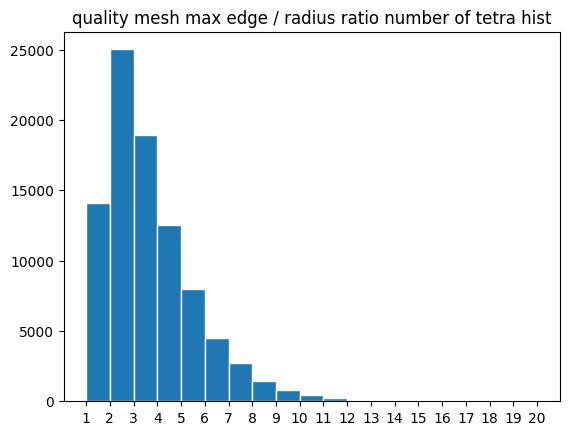

In [32]:
p50milsemiar2 = [4, 3, 3, 2, 7, 5, 4, 4, 4, 3, 2, 1, 7, 2, 2, 2, 4, 2, 8, 2, 2, 4, 7, 2, 1, 3, 1, 1, 5, 2, 1, 2, 4, 1, 1, 3, 4, 3, 4, 4, 4, 4, 2, 1, 2, 2, 4, 1, 3, 3, 1, 3, 4, 1, 8, 2, 2, 7, 1, 3, 2, 2, 1, 3, 3, 8, 2, 1, 3, 4, 2, 2, 4, 2, 3, 4, 1, 2, 1, 2, 3, 5, 1, 2, 3, 3, 3, 3, 1, 2, 7, 2, 1, 3, 1, 3, 4, 4, 4, 1, 3, 4, 4, 2, 2, 2, 8, 3, 2, 4, 2, 2, 5, 1, 7, 4, 2, 2, 5, 2, 3, 2, 3, 2, 6, 5, 6, 5, 2, 6, 1, 6, 3, 2, 5, 1, 5, 1, 2, 3, 5, 3, 3, 2, 2, 4, 3, 5, 2, 2, 3, 3, 1, 5, 4, 1, 3, 2, 2, 3, 3, 2, 8, 9, 2, 2, 1, 2, 2, 4, 6, 3, 2, 2, 3, 3, 3, 4, 1, 2, 7, 3, 3, 1, 5, 5, 2, 3, 4, 5, 2, 3, 4, 3, 2, 7, 1, 2, 8, 2, 4, 4, 1, 4, 2, 2, 2, 2, 4, 4, 1, 2, 7, 1, 3, 1, 2, 1, 6, 3, 2, 5, 4, 6, 5, 2, 2, 4, 2, 2, 3, 2, 7, 4, 1, 8, 1, 2, 3, 4, 1, 5, 6, 1, 5, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 4, 2, 2, 5, 2, 3, 2, 2, 2, 2, 4, 3, 9, 2, 2, 2, 8, 2, 6, 1, 2, 2, 4, 3, 1, 3, 2, 4, 1, 6, 1, 7, 5, 2, 2, 3, 1, 3, 1, 7, 3, 3, 3, 3, 4, 2, 5, 2, 5, 2, 3, 3, 2, 4, 2, 5, 6, 1, 2, 2, 3, 2, 3, 2, 1, 5, 1, 1, 5, 1, 4, 4, 3, 1, 1, 4, 1, 6, 2, 3, 2, 1, 5, 1, 5, 4, 2, 2, 4, 4, 2, 4, 5, 3, 10, 4, 2, 3, 1, 2, 4, 2, 6, 7, 4, 2, 3, 5, 1, 3, 3, 3, 3, 1, 4, 3, 2, 5, 2, 1, 2, 3, 2, 3, 5, 3, 3, 3, 2, 3, 2, 2, 7, 2, 4, 2, 5, 2, 8, 1, 5, 4, 5, 3, 4, 6, 3, 2, 7, 1, 4, 5, 2, 2, 5, 2, 4, 4, 1, 2, 4, 1, 9, 2, 5, 3, 2, 5, 8, 4, 3, 1, 8, 5, 4, 3, 12, 1, 2, 3, 7, 5, 2, 9, 2, 3, 4, 3, 3, 2, 5, 5, 4, 2, 4, 5, 5, 3, 2, 4, 2, 3, 2, 3, 2, 4, 2, 2, 2, 3, 9, 2, 4, 4, 4, 6, 2, 3, 2, 4, 3, 2, 3, 4, 4, 2, 4, 3, 2, 5, 3, 4, 2, 8, 4, 4, 8, 1, 4, 2, 1, 5, 1, 5, 2, 2, 5, 5, 2, 5, 3, 3, 2, 2, 1, 4, 2, 2, 2, 4, 2, 4, 2, 4, 1, 2, 2, 3, 4, 3, 4, 3, 3, 5, 1, 3, 4, 1, 5, 4, 3, 2, 3, 7, 2, 5, 1, 5, 3, 1, 2, 4, 1, 4, 3, 4, 4, 2, 3, 5, 4, 2, 2, 2, 1, 3, 3, 6, 6, 3, 3, 3, 1, 4, 2, 4, 2, 2, 4, 8, 1, 7, 5, 4, 9, 3, 4, 2, 5, 1, 9, 1, 2, 6, 3, 4, 3, 4, 3, 3, 3, 3, 8, 4, 2, 3, 1, 2, 1, 4, 1, 2, 6, 1, 6, 3, 2, 9, 3, 7, 2, 8, 1, 5, 2, 4, 1, 1, 2, 1, 2, 6, 4, 3, 4, 2, 1, 2, 2, 2, 5, 2, 2, 5, 2, 4, 6, 2, 7, 4, 2, 2, 4, 2, 3, 2, 3, 2, 3, 4, 1, 3, 2, 1, 5, 5, 1, 2, 2, 5, 2, 5, 2, 2, 3, 7, 5, 2, 2, 1, 3, 3, 1, 7, 5, 2, 4, 2, 4, 2, 1, 2, 2, 2, 2, 5, 7, 3, 2, 2, 5, 2, 5, 1, 6, 1, 15, 4, 7, 2, 1, 2, 2, 7, 2, 3, 5, 2, 3, 3, 5, 1, 2, 4, 2, 6, 2, 3, 4, 2, 6, 2, 8, 6, 1, 4, 3, 6, 1, 2, 2, 3, 4, 3, 7, 4, 5, 2, 5, 3, 1, 8, 4, 5, 9, 3, 2, 2, 9, 3, 5, 2, 2, 3, 2, 4, 5, 7, 1, 5, 1, 2, 3, 1, 2, 2, 2, 6, 5, 1, 1, 5, 2, 3, 3, 3, 1, 5, 3, 1, 3, 1, 5, 3, 2, 5, 3, 5, 7, 1, 3, 2, 4, 2, 2, 3, 3, 7, 9, 2, 3, 6, 5, 2, 1, 2, 1, 11, 4, 2, 5, 3, 2, 2, 3, 3, 1, 5, 3, 2, 5, 3, 3, 2, 2, 4, 3, 1, 3, 1, 3, 2, 3, 2, 4, 1, 2, 3, 2, 6, 1, 3, 3, 2, 2, 2, 3, 2, 3, 3, 5, 3, 3, 2, 3, 3, 4, 6, 1, 1, 4, 1, 3, 4, 5, 6, 1, 2, 7, 1, 2, 3, 2, 4, 2, 2, 3, 3, 2, 4, 1, 6, 5, 1, 1, 5, 1, 2, 1, 7, 5, 4, 2, 5, 2, 4, 3, 6, 2, 1, 2, 8, 3, 2, 5, 6, 2, 1, 10, 4, 2, 7, 3, 1, 2, 2, 2, 3, 2, 3, 4, 3, 1, 6, 2, 2, 3, 2, 3, 2, 3, 8, 6, 2, 4, 4, 2, 1, 2, 2, 2, 2, 5, 4, 3, 9, 5, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 6, 4, 3, 3, 8, 2, 4, 4, 1, 4, 3, 5, 3, 2, 7, 3, 2, 3, 2, 1, 3, 2, 4, 4, 4, 2, 6, 5, 1, 3, 2, 5, 2, 3, 2, 2, 2, 9, 6, 3, 1, 3, 3, 3, 2, 2, 7, 6, 2, 3, 2, 3, 1, 2, 3, 2, 3, 3, 2, 6, 4, 2, 2, 2, 3, 3, 3, 3, 2, 3, 2, 5, 1, 3, 1, 5, 1, 3, 5, 2, 5, 4, 2, 4, 5, 4, 2, 5, 3, 2, 1, 3, 3, 2, 4, 3, 5, 2, 3, 3, 5, 10, 1, 9, 4, 4, 3, 2, 3, 2, 6, 1, 1, 2, 2, 4, 1, 2, 1, 10, 2, 1, 3, 3, 3, 1, 4, 4, 2, 3, 2, 2, 3, 1, 2, 4, 3, 9, 1, 1, 2, 2, 3, 2, 2, 4, 2, 2, 2, 4, 3, 3, 7, 4, 3, 1, 5, 3, 3, 4, 2, 9, 2, 1, 4, 3, 1, 2, 2, 4, 3, 3, 4, 2, 3, 2, 3, 6, 2, 4, 4, 1, 2, 3, 1, 7, 2, 4, 1, 5, 4, 3, 4, 3, 4, 5, 5, 3, 3, 7, 15, 2, 1, 2, 3, 5, 7, 4, 3, 2, 4, 2, 2, 2, 6, 1, 4, 3, 5, 1, 2, 1, 4, 6, 4, 5, 5, 5, 3, 5, 1, 2, 1, 5, 3, 3, 4, 3, 4, 1, 2, 3, 2, 2, 1, 6, 6, 7, 3, 2, 2, 1, 6, 2, 2, 1, 6, 3, 2, 8, 5, 5, 1, 3, 1, 4, 5, 2, 5, 2, 3, 3, 3, 3, 2, 3, 2, 2, 6, 5, 3, 3, 3, 5, 5, 4, 1, 5, 2, 3, 2, 7, 4, 1, 2, 4, 1, 3, 1, 9, 1, 3, 4, 9, 11, 3, 1, 2, 2, 11, 1, 4, 3, 5, 11, 1, 2, 2, 3, 3, 2, 3, 3, 4, 2, 3, 4, 3, 2, 1, 3, 3, 3, 1, 4, 3, 1, 3, 2, 2, 7, 3, 3, 5, 2, 3, 1, 6, 1, 6, 2, 2, 4, 2, 2, 7, 1, 2, 2, 6, 8, 2, 1, 5, 4, 4, 3, 2, 3, 2, 1, 1, 10, 2, 2, 2, 3, 2, 1, 3, 3, 2, 2, 2, 6, 3, 2, 7, 1, 2, 3, 6, 5, 1, 1, 6, 2, 7, 1, 1, 3, 1, 3, 2, 2, 5, 1, 5, 7, 2, 1, 10, 1, 7, 1, 1, 3, 1, 6, 3, 2, 3, 2, 2, 5, 3, 3, 3, 4, 3, 2, 2, 4, 2, 4, 4, 1, 8, 1, 2, 4, 5, 4, 3, 2, 1, 4, 2, 5, 2, 4, 2, 3, 5, 5, 4, 2, 3, 2, 2, 5, 1, 6, 1, 2, 1, 7, 4, 1, 6, 2, 4, 2, 4, 3, 8, 4, 4, 1, 7, 1, 3, 2, 2, 2, 3, 4, 4, 7, 2, 6, 1, 4, 3, 2, 3, 2, 1, 5, 4, 1, 3, 4, 4, 8, 1, 2, 4, 2, 2, 2, 2, 2, 2, 6, 5, 3, 4, 3, 1, 4, 3, 4, 6, 6, 1, 2, 4, 2, 4, 4, 6, 1, 2, 4, 1, 3, 4, 2, 2, 1, 9, 1, 1, 1, 4, 3, 3, 1, 7, 4, 3, 4, 2, 6, 1, 3, 1, 4, 3, 1, 4, 4, 4, 1, 1, 6, 6, 3, 2, 1, 9, 6, 2, 3, 5, 2, 5, 2, 2, 6, 1, 1, 3, 5, 1, 4, 2, 4, 4, 4, 5, 3, 7, 2, 8, 2, 6, 3, 4, 2, 2, 4, 3, 8, 5, 5, 4, 7, 4, 5, 4, 5, 3, 1, 3, 3, 3, 2, 4, 4, 3, 2, 4, 2, 2, 1, 7, 1, 2, 2, 3, 2, 3, 1, 4, 2, 2, 1, 2, 5, 3, 2, 2, 5, 1, 1, 2, 3, 2, 7, 2, 2, 2, 2, 1, 2, 7, 2, 2, 2, 2, 2, 2, 2, 4, 4, 3, 2, 5, 2, 2, 3, 2, 4, 5, 2, 3, 5, 9, 1, 1, 6, 7, 1, 8, 2, 4, 8, 2, 3, 7, 1, 5, 1, 3, 2, 3, 8, 4, 1, 2, 3, 4, 1, 5, 4, 2, 2, 2, 1, 7, 2, 5, 4, 1, 2, 6, 3, 4, 3, 2, 4, 1, 7, 5, 2, 2, 1, 2, 6, 2, 2, 5, 1, 1, 2, 2, 3, 2, 1, 2, 4, 3, 5, 8, 3, 3, 2, 3, 3, 2, 1, 2, 4, 5, 2, 5, 4, 3, 2, 2, 4, 2, 3, 1, 5, 2, 5, 1, 2, 6, 1, 3, 2, 3, 4, 3, 3, 1, 3, 2, 1, 4, 1, 6, 2, 4, 4, 2, 6, 4, 5, 2, 5, 2, 2, 6, 1, 2, 2, 5, 2, 2, 7, 3, 8, 5, 4, 4, 3, 3, 1, 3, 2, 2, 2, 5, 2, 2, 4, 3, 5, 5, 1, 1, 2, 4, 3, 2, 6, 3, 4, 1, 7, 1, 2, 2, 5, 2, 2, 2, 2, 9, 2, 1, 2, 10, 3, 4, 7, 2, 1, 2, 3, 11, 2, 2, 5, 5, 6, 2, 7, 2, 4, 2, 2, 1, 5, 1, 6, 5, 1, 3, 3, 3, 3, 2, 2, 4, 3, 3, 1, 4, 1, 3, 3, 2, 5, 3, 2, 3, 4, 2, 2, 5, 10, 2, 1, 1, 6, 4, 8, 1, 4, 1, 5, 4, 2, 1, 2, 3, 2, 7, 2, 4, 2, 4, 3, 2, 3, 4, 4, 4, 1, 3, 2, 3, 4, 2, 2, 2, 3, 1, 4, 2, 1, 2, 3, 4, 2, 1, 3, 2, 4, 3, 3, 3, 9, 1, 3, 1, 2, 3, 5, 3, 3, 2, 6, 2, 2, 6, 2, 4, 7, 2, 3, 2, 5, 2, 4, 5, 3, 2, 3, 2, 3, 2, 2, 2, 3, 3, 4, 3, 5, 4, 2, 3, 3, 2, 6, 3, 3, 2, 3, 8, 1, 2, 4, 1, 5, 2, 3, 2, 2, 1, 4, 5, 5, 7, 1, 2, 1, 5, 3, 2, 4, 2, 1, 2, 3, 4, 6, 3, 10, 6, 1, 2, 4, 4, 6, 3, 3, 6, 3, 3, 4, 3, 5, 2, 4, 5, 1, 3, 4, 6, 1, 3, 4, 3, 1, 2, 4, 3, 3, 2, 4, 2, 4, 3, 3, 4, 2, 3, 6, 2, 1, 3, 2, 6, 3, 9, 3, 7, 1, 2, 3, 1, 3, 2, 4, 2, 4, 1, 3, 3, 4, 3, 2, 2, 2, 7, 2, 11, 2, 3, 3, 3, 6, 1, 3, 2, 3, 1, 3, 3, 7, 1, 5, 4, 2, 2, 3, 4, 2, 2, 2, 4, 5, 2, 3, 5, 3, 2, 3, 2, 2, 4, 2, 1, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 6, 5, 3, 1, 6, 3, 5, 7, 3, 10, 5, 1, 3, 3, 3, 2, 2, 5, 8, 2, 2, 1, 2, 6, 1, 3, 3, 7, 3, 2, 3, 1, 3, 6, 2, 1, 2, 3, 5, 9, 4, 4, 1, 7, 2, 4, 4, 3, 3, 1, 3, 3, 4, 2, 2, 2, 1, 2, 5, 8, 1, 1, 5, 4, 1, 1, 9, 3, 3, 2, 1, 5, 6, 9, 1, 2, 4, 2, 3, 1, 4, 2, 6, 2, 6, 2, 2, 7, 2, 1, 2, 3, 5, 7, 4, 2, 2, 2, 4, 2, 2, 2, 4, 4, 5, 1, 3, 2, 4, 5, 2, 8, 3, 5, 1, 2, 3, 3, 2, 3, 4, 1, 10, 2, 4, 1, 5, 3, 6, 5, 5, 1, 2, 3, 1, 3, 2, 4, 5, 2, 6, 2, 1, 5, 1, 1, 6, 6, 1, 2, 3, 4, 4, 3, 2, 6, 4, 3, 2, 3, 2, 2, 2, 7, 6, 2, 2, 4, 1, 4, 2, 4, 2, 2, 6, 5, 5, 3, 3, 3, 2, 6, 2, 5, 1, 2, 1, 7, 4, 4, 4, 4, 4, 2, 10, 2, 1, 1, 1, 2, 2, 1, 5, 2, 5, 6, 2, 4, 3, 3, 3, 1, 3, 3, 3, 8, 2, 4, 2, 3, 5, 4, 1, 2, 3, 2, 8, 1, 10, 4, 1, 3, 1, 3, 2, 4, 3, 7, 1, 4, 2, 2, 3, 2, 1, 6, 4, 3, 2, 3, 6, 4, 1, 7, 1, 3, 5, 1, 5, 6, 5, 1, 7, 7, 4, 7, 2, 4, 4, 3, 4, 1, 4, 4, 3, 2, 1, 4, 2, 2, 4, 1, 10, 2, 2, 5, 1, 5, 2, 2, 9, 1, 3, 4, 2, 2, 9, 7, 5, 3, 4, 3, 5, 1, 2, 3, 2, 2, 2, 5, 1, 2, 3, 4, 3, 4, 2, 3, 3, 1, 6, 7, 1, 5, 6, 3, 5, 6, 1, 2, 2, 3, 7, 5, 5, 7, 1, 3, 7, 3, 5, 3, 2, 1, 2, 8, 3, 2, 2, 6, 6, 3, 1, 11, 3, 2, 3, 2, 1, 2, 3, 3, 1, 4, 1, 2, 3, 2, 4, 1, 1, 5, 1, 5, 6, 4, 2, 1, 3, 4, 3, 4, 3, 3, 2, 2, 3, 4, 3, 4, 5, 6, 3, 2, 5, 2, 1, 3, 4, 6, 5, 1, 3, 4, 2, 1, 2, 6, 1, 4, 5, 1, 5, 6, 6, 2, 9, 3, 3, 3, 4, 4, 2, 4, 2, 1, 4, 3, 4, 2, 4, 3, 5, 3, 4, 1, 2, 4, 6, 3, 4, 2, 4, 4, 2, 2, 8, 1, 1, 2, 4, 2, 2, 4, 4, 2, 7, 2, 1, 6, 2, 3, 3, 1, 3, 5, 2, 4, 2, 2, 3, 2, 2, 3, 2, 4, 2, 6, 7, 3, 2, 5, 1, 6, 5, 2, 4, 4, 2, 4, 1, 6, 2, 2, 2, 3, 3, 3, 7, 5, 4, 1, 6, 5, 2, 4, 5, 1, 7, 3, 1, 4, 3, 6, 2, 2, 1, 5, 7, 2, 7, 9, 3, 2, 4, 1, 3, 3, 3, 2, 4, 1, 4, 5, 1, 1, 2, 2, 6, 2, 2, 3, 2, 6, 1, 5, 1, 6, 2, 7, 1, 4, 4, 5, 4, 3, 3, 6, 3, 2, 3, 6, 2, 5, 3, 2, 4, 3, 1, 2, 16, 2, 1, 3, 3, 1, 7, 4, 3, 3, 7, 6, 2, 3, 4, 1, 3, 7, 2, 1, 2, 3, 2, 3, 3, 3, 3, 1, 2, 4, 1, 1, 2, 3, 1, 5, 3, 3, 2, 9, 1, 4, 5, 2, 4, 2, 2, 1, 2, 2, 4, 2, 2, 3, 4, 1, 2, 3, 3, 1, 3, 2, 2, 4, 4, 3, 2, 7, 2, 2, 2, 3, 4, 1, 6, 3, 2, 5, 1, 1, 3, 3, 2, 2, 4, 3, 2, 5, 1, 2, 1, 4, 3, 1, 4, 3, 4, 3, 2, 2, 3, 3, 3, 1, 2, 6, 5, 2, 2, 5, 5, 4, 2, 4, 2, 1, 2, 3, 5, 2, 4, 1, 2, 2, 2, 11, 3, 3, 2, 3, 2, 2, 2, 4, 1, 2, 3, 3, 2, 4, 6, 2, 2, 2, 3, 2, 3, 3, 2, 4, 2, 3, 1, 4, 2, 5, 2, 5, 3, 1, 3, 2, 2, 3, 3, 4, 2, 5, 3, 1, 4, 4, 3, 5, 5, 1, 1, 1, 2, 1, 2, 2, 2, 8, 5, 4, 1, 5, 2, 5, 2, 2, 3, 3, 3, 3, 2, 3, 2, 2, 1, 3, 2, 1, 8, 2, 4, 3, 3, 2, 4, 4, 3, 5, 1, 7, 2, 4, 1, 6, 4, 3, 2, 1, 5, 1, 3, 2, 2, 2, 1, 4, 2, 1, 2, 1, 5, 3, 3, 1, 2, 1, 4, 1, 5, 2, 3, 1, 2, 4, 5, 4, 3, 6, 2, 1, 6, 3, 7, 2, 2, 3, 2, 5, 3, 3, 2, 3, 1, 9, 4, 1, 2, 3, 2, 1, 4, 2, 2, 2, 4, 3, 5, 3, 3, 2, 5, 1, 4, 4, 3, 5, 4, 1, 2, 5, 2, 3, 2, 4, 6, 4, 1, 4, 2, 4, 3, 3, 6, 3, 1, 2, 4, 1, 2, 3, 2, 1, 2, 4, 4, 5, 2, 3, 4, 1, 2, 8, 2, 2, 4, 1, 7, 4, 3, 2, 6, 3, 5, 4, 3, 3, 2, 8, 1, 2, 4, 2, 5, 5, 4, 1, 4, 8, 1, 3, 2, 2, 3, 2, 8, 2, 2, 4, 7, 1, 5, 2, 5, 1, 3, 2, 4, 4, 2, 2, 2, 2, 3, 3, 4, 2, 1, 4, 3, 4, 1, 3, 1, 3, 1, 6, 2, 9, 2, 2, 3, 3, 3, 2, 4, 2, 6, 4, 2, 2, 3, 4, 4, 2, 3, 3, 2, 5, 5, 3, 3, 1, 2, 4, 1, 2, 4, 7, 2, 2, 3, 2, 3, 7, 2, 2, 5, 3, 2, 5, 3, 2, 2, 2, 3, 2, 3, 1, 5, 3, 4, 4, 3, 2, 4, 2, 4, 2, 5, 1, 1, 9, 2, 6, 4, 1, 5, 3, 8, 2, 9, 1, 3, 2, 3, 2, 3, 1, 2, 2, 5, 4, 2, 2, 3, 4, 4, 4, 1, 7, 2, 4, 3, 3, 1, 2, 3, 1, 6, 1, 5, 2, 4, 7, 1, 2, 4, 2, 2, 6, 1, 10, 1, 7, 2, 4, 4, 2, 5, 2, 7, 1, 1, 6, 4, 4, 3, 6, 2, 1, 2, 2, 1, 2, 2, 3, 1, 3, 2, 5, 5, 1, 1, 4, 3, 2, 5, 1, 2, 2, 3, 1, 4, 1, 2, 2, 10, 4, 3, 5, 2, 2, 2, 4, 4, 1, 5, 6, 6, 3, 1, 7, 1, 2, 1, 9, 3, 3, 4, 4, 2, 5, 1, 2, 7, 1, 2, 4, 3, 4, 1, 2, 4, 3, 2, 3, 2, 3, 3, 2, 1, 6, 4, 6, 2, 5, 1, 9, 6, 1, 2, 4, 2, 3, 3, 8, 2, 3, 4, 2, 2, 3, 4, 6, 1, 3, 3, 2, 3, 2, 4, 3, 2, 3, 3, 3, 2, 4, 3, 6, 3, 4, 6, 2, 2, 6, 2, 1, 4, 3, 2, 6, 3, 1, 3, 2, 3, 9, 6, 2, 9, 1, 2, 6, 3, 9, 3, 3, 4, 2, 1, 6, 3, 3, 8, 1, 1, 4, 1, 4, 2, 3, 4, 6, 3, 2, 1, 3, 5, 2, 1, 4, 3, 5, 1, 6, 2, 4, 1, 6, 1, 6, 1, 2, 9, 4, 4, 4, 5, 2, 3, 2, 2, 3, 6, 2, 8, 2, 4, 2, 2, 3, 2, 6, 3, 4, 4, 3, 4, 7, 2, 6, 2, 2, 2, 2, 6, 1, 6, 3, 5, 1, 4, 2, 3, 4, 2, 1, 3, 4, 4, 3, 2, 3, 2, 2, 2, 2, 2, 4, 2, 3, 2, 2, 2, 3, 1, 6, 3, 2, 2, 3, 1, 4, 5, 2, 4, 6, 2, 3, 2, 1, 6, 1, 2, 8, 3, 2, 1, 8, 3, 7, 4, 1, 2, 4, 3, 2, 5, 4, 2, 1, 2, 3, 9, 4, 2, 2, 3, 9, 3, 1, 8, 2, 3, 3, 4, 4, 4, 5, 1, 2, 2, 2, 1, 3, 3, 2, 5, 5, 3, 2, 2, 4, 2, 2, 1, 2, 3, 4, 9, 2, 1, 4, 3, 3, 2, 7, 1, 1, 4, 8, 3, 3, 6, 9, 3, 4, 1, 2, 4, 2, 3, 2, 5, 3, 4, 2, 2, 2, 1, 8, 3, 3, 1, 3, 3, 2, 1, 7, 1, 2, 5, 2, 3, 3, 3, 2, 4, 1, 3, 5, 3, 4, 2, 3, 1, 6, 2, 1, 2, 2, 2, 2, 2, 1, 8, 2, 5, 2, 2, 5, 1, 3, 3, 4, 2, 7, 3, 4, 6, 2, 4, 5, 2, 6, 2, 2, 3, 2, 1, 2, 3, 2, 5, 2, 2, 2, 4, 4, 3, 2, 7, 1, 6, 3, 2, 4, 3, 1, 3, 3, 2, 5, 4, 4, 1, 1, 2, 6, 3, 3, 1, 5, 2, 2, 3, 1, 3, 2, 4, 2, 2, 3, 4, 1, 5, 3, 2, 2, 2, 5, 3, 4, 3, 1, 3, 2, 8, 3, 2, 5, 3, 2, 7, 3, 2, 2, 3, 4, 1, 1, 2, 3, 1, 3, 5, 3, 1, 1, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 1, 4, 3, 3, 4, 8, 5, 2, 1, 1, 5, 1, 5, 2, 1, 3, 4, 1, 2, 5, 3, 2, 1, 10, 4, 4, 6, 3, 4, 2, 8, 2, 4, 1, 4, 3, 5, 3, 5, 2, 2, 2, 6, 3, 3, 1, 2, 3, 3, 1, 2, 2, 5, 7, 6, 1, 2, 3, 2, 2, 3, 2, 4, 4, 1, 1, 3, 4, 4, 5, 3, 3, 5, 1, 3, 1, 3, 3, 2, 6, 2, 1, 1, 3, 3, 6, 3, 4, 2, 2, 6, 2, 2, 2, 3, 5, 1, 5, 5, 3, 1, 5, 6, 1, 1, 8, 1, 3, 3, 2, 2, 4, 5, 4, 2, 5, 1, 2, 3, 3, 5, 4, 5, 2, 5, 2, 4, 2, 2, 5, 2, 2, 5, 1, 2, 3, 2, 7, 2, 2, 5, 3, 4, 4, 1, 6, 4, 2, 3, 2, 2, 1, 2, 2, 2, 2, 2, 2, 4, 5, 2, 3, 2, 1, 2, 3, 2, 3, 1, 4, 7, 2, 2, 2, 4, 8, 2, 3, 3, 2, 4, 4, 4, 3, 3, 4, 3, 6, 2, 4, 9, 4, 3, 3, 2, 4, 5, 2, 3, 2, 2, 4, 3, 3, 1, 3, 1, 4, 5, 4, 3, 1, 5, 4, 5, 2, 1, 8, 7, 4, 1, 2, 3, 3, 2, 3, 1, 1, 1, 7, 1, 4, 2, 4, 4, 2, 3, 4, 3, 4, 3, 3, 1, 2, 4, 3, 3, 2, 2, 3, 6, 3, 3, 2, 4, 3, 4, 2, 5, 5, 1, 3, 3, 2, 3, 4, 1, 1, 4, 2, 2, 4, 3, 8, 3, 2, 1, 1, 9, 6, 3, 2, 7, 1, 1, 2, 3, 4, 4, 7, 3, 4, 3, 4, 4, 4, 2, 3, 1, 6, 2, 4, 3, 3, 5, 5, 2, 3, 1, 3, 5, 3, 3, 3, 2, 1, 4, 4, 7, 1, 4, 2, 2, 3, 5, 1, 3, 2, 4, 3, 3, 3, 6, 1, 1, 2, 3, 2, 5, 2, 4, 1, 2, 8, 1, 6, 2, 1, 4, 3, 5, 3, 2, 4, 4, 3, 9, 1, 6, 2, 2, 2, 2, 2, 3, 6, 4, 10, 3, 3, 3, 2, 7, 2, 2, 2, 3, 3, 3, 2, 5, 5, 1, 4, 6, 3, 6, 3, 2, 3, 5, 5, 2, 6, 2, 2, 9, 7, 3, 3, 3, 5, 1, 5, 1, 2, 5, 2, 8, 3, 5, 3, 2, 3, 7, 3, 1, 3, 2, 5, 3, 2, 1, 3, 4, 3, 5, 2, 2, 3, 4, 3, 2, 4, 5, 2, 4, 6, 4, 5, 4, 3, 2, 2, 1, 4, 4, 5, 1, 2, 5, 3, 1, 6, 2, 1, 2, 3, 3, 2, 2, 1, 9, 4, 3, 7, 2, 2, 3, 4, 1, 2, 5, 4, 2, 3, 2, 4, 1, 1, 3, 3, 1, 1, 2, 2, 3, 3, 2, 3, 2, 2, 2, 2, 3, 3, 2, 3, 6, 13, 1, 4, 7, 2, 3, 5, 5, 3, 4, 2, 2, 2, 4, 1, 5, 1, 7, 2, 3, 5, 2, 8, 2, 1, 12, 1, 2, 1, 2, 4, 4, 2, 2, 2, 3, 2, 2, 5, 2, 3, 4, 4, 3, 3, 2, 3, 5, 3, 3, 6, 3, 4, 4, 2, 2, 2, 3, 2, 5, 3, 1, 8, 2, 7, 5, 2, 2, 3, 1, 3, 1, 3, 1, 2, 3, 3, 3, 3, 7, 2, 7, 1, 2, 2, 3, 4, 3, 4, 2, 5, 3, 3, 2, 6, 4, 3, 2, 2, 4, 1, 2, 2, 2, 1, 6, 4, 3, 3, 5, 3, 2, 2, 2, 2, 4, 3, 5, 2, 4, 3, 2, 3, 3, 2, 10, 6, 3, 1, 3, 2, 1, 9, 2, 10, 7, 6, 2, 3, 4, 3, 1, 2, 3, 5, 1, 1, 6, 3, 1, 4, 3, 3, 6, 2, 1, 3, 2, 2, 2, 3, 3, 3, 2, 4, 2, 4, 1, 2, 4, 2, 2, 2, 5, 1, 3, 4, 3, 6, 3, 4, 1, 1, 2, 4, 3, 4, 2, 2, 4, 2, 4, 4, 3, 2, 5, 2, 3, 1, 3, 3, 2, 6, 1, 4, 3, 3, 2, 4, 4, 4, 3, 6, 2, 3, 4, 2, 3, 2, 9, 1, 4, 2, 2, 5, 3, 3, 3, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 4, 1, 4, 5, 7, 2, 2, 2, 3, 2, 3, 2, 2, 2, 1, 10, 3, 2, 4, 2, 4, 3, 2, 2, 2, 3, 3, 2, 2, 2, 5, 3, 5, 3, 1, 2, 5, 2, 2, 3, 2, 3, 1, 9, 1, 2, 2, 5, 2, 4, 3, 3, 4, 3, 9, 4, 2, 2, 1, 1, 5, 4, 2, 2, 4, 1, 6, 1, 3, 3, 2, 1, 4, 3, 2, 2, 1, 5, 2, 3, 4, 5, 1, 4, 2, 2, 2, 2, 3, 3, 1, 3, 4, 3, 5, 3, 5, 3, 2, 2, 2, 1, 3, 2, 3, 1, 4, 2, 5, 1, 5, 4, 3, 3, 1, 4, 2, 1, 4, 4, 4, 5, 4, 3, 2, 2, 2, 2, 5, 11, 1, 3, 2, 5, 2, 7, 4, 1, 6, 10, 2, 1, 5, 1, 2, 3, 5, 2, 3, 2, 4, 5, 3, 5, 1, 4, 2, 2, 6, 6, 1, 3, 2, 4, 4, 1, 4, 3, 3, 2, 2, 4, 3, 2, 3, 4, 2, 3, 4, 2, 2, 3, 2, 5, 5, 6, 7, 1, 5, 3, 4, 2, 2, 7, 3, 4, 2, 3, 4, 1, 1, 1, 3, 4, 3, 2, 4, 2, 8, 6, 1, 7, 1, 3, 6, 4, 6, 3, 4, 4, 3, 1, 6, 5, 3, 2, 1, 5, 3, 4, 3, 2, 5, 5, 2, 5, 2, 5, 3, 5, 1, 3, 4, 1, 2, 4, 2, 1, 3, 2, 2, 6, 3, 7, 3, 6, 2, 4, 1, 4, 1, 2, 12, 7, 2, 5, 6, 2, 2, 3, 2, 3, 2, 4, 3, 4, 2, 3, 3, 2, 4, 1, 2, 2, 1, 6, 3, 4, 5, 3, 1, 5, 1, 2, 4, 3, 3, 1, 9, 1, 4, 10, 6, 1, 5, 5, 1, 2, 4, 2, 6, 2, 1, 1, 9, 1, 1, 5, 5, 2, 5, 3, 5, 3, 8, 3, 2, 4, 3, 2, 2, 2, 3, 2, 4, 3, 4, 5, 2, 3, 7, 5, 4, 3, 7, 1, 5, 3, 3, 1, 4, 1, 1, 3, 2, 3, 1, 5, 2, 1, 8, 2, 1, 1, 2, 3, 5, 9, 4, 1, 2, 6, 2, 3, 2, 3, 2, 1, 5, 6, 1, 4, 5, 3, 2, 1, 3, 2, 2, 3, 3, 4, 2, 3, 6, 7, 2, 6, 3, 1, 3, 1, 2, 6, 2, 3, 8, 1, 4, 8, 12, 2, 5, 5, 6, 2, 3, 3, 3, 2, 3, 4, 2, 2, 1, 1, 3, 1, 9, 2, 2, 1, 3, 6, 6, 2, 4, 1, 7, 2, 3, 3, 1, 3, 7, 1, 1, 4, 4, 1, 2, 3, 7, 2, 1, 5, 5, 6, 2, 3, 1, 2, 5, 1, 3, 2, 3, 4, 9, 3, 1, 2, 2, 9, 2, 2, 4, 5, 8, 2, 2, 2, 2, 2, 9, 1, 2, 3, 3, 3, 7, 4, 1, 5, 5, 1, 1, 3, 7, 2, 5, 2, 5, 4, 11, 1, 1, 3, 1, 5, 5, 6, 2, 7, 1, 2, 2, 5, 3, 6, 2, 2, 6, 6, 1, 3, 1, 2, 10, 1, 3, 2, 1, 2, 2, 5, 2, 2, 3, 2, 1, 5, 2, 5, 3, 3, 2, 1, 1, 1, 4, 4, 3, 2, 2, 3, 3, 7, 3, 1, 4, 1, 2, 2, 5, 3, 2, 1, 3, 12, 5, 3, 6, 2, 3, 5, 2, 4, 2, 1, 2, 2, 3, 7, 2, 3, 1, 2, 1, 4, 4, 5, 2, 3, 2, 2, 2, 2, 2, 4, 2, 3, 5, 4, 1, 2, 3, 4, 2, 1, 12, 2, 3, 2, 3, 5, 2, 4, 8, 2, 6, 1, 8, 2, 2, 1, 3, 3, 1, 1, 3, 2, 1, 12, 3, 1, 4, 2, 3, 1, 4, 2, 4, 2, 3, 2, 2, 4, 1, 2, 3, 3, 2, 2, 3, 3, 3, 2, 4, 2, 4, 2, 4, 3, 2, 9, 2, 1, 4, 3, 4, 2, 3, 2, 4, 2, 2, 6, 3, 8, 2, 3, 2, 3, 3, 4, 2, 5, 6, 2, 9, 3, 4, 2, 3, 1, 3, 3, 7, 5, 1, 5, 1, 3, 4, 3, 4, 4, 1, 3, 2, 4, 2, 6, 5, 2, 2, 2, 1, 5, 4, 3, 6, 2, 4, 2, 10, 3, 4, 5, 1, 1, 1, 5, 6, 2, 2, 2, 3, 3, 2, 1, 7, 1, 5, 4, 2, 7, 2, 7, 1, 2, 2, 1, 5, 2, 3, 1, 3, 5, 3, 1, 7, 1, 3, 3, 3, 1, 4, 4, 2, 2, 2, 1, 3, 4, 2, 3, 4, 3, 1, 2, 4, 3, 5, 2, 2, 1, 3, 5, 3, 5, 2, 2, 5, 1, 2, 4, 2, 2, 3, 3, 2, 4, 4, 3, 3, 2, 5, 1, 2, 6, 2, 4, 3, 7, 4, 3, 1, 6, 5, 3, 5, 5, 1, 1, 3, 3, 5, 3, 2, 6, 4, 2, 3, 4, 3, 1, 5, 4, 1, 5, 1, 3, 7, 5, 4, 6, 1, 1, 2, 3, 2, 2, 5, 2, 2, 2, 4, 3, 1, 5, 3, 2, 5, 3, 2, 4, 1, 4, 4, 3, 2, 2, 6, 1, 2, 2, 5, 1, 4, 4, 4, 3, 1, 5, 4, 4, 3, 5, 2, 5, 3, 2, 1, 2, 5, 5, 5, 6, 7, 3, 2, 3, 3, 2, 1, 5, 1, 4, 6, 3, 2, 3, 2, 3, 3, 5, 4, 4, 4, 2, 4, 2, 10, 1, 4, 5, 7, 1, 1, 1, 2, 6, 3, 1, 4, 2, 5, 2, 4, 2, 2, 2, 5, 4, 1, 2, 3, 5, 1, 3, 3, 5, 2, 2, 6, 1, 4, 3, 2, 2, 2, 3, 3, 2, 3, 2, 5, 1, 4, 2, 3, 3, 2, 2, 2, 3, 2, 6, 1, 2, 3, 3, 4, 8, 3, 1, 2, 2, 4, 1, 4, 1, 5, 3, 2, 4, 4, 6, 1, 1, 7, 7, 1, 5, 6, 4, 8, 7, 2, 2, 1, 3, 2, 4, 3, 7, 13, 1, 3, 4, 3, 10, 7, 1, 3, 2, 2, 2, 6, 2, 3, 2, 3, 2, 1, 2, 3, 5, 5, 2, 2, 1, 2, 2, 7, 1, 3, 3, 6, 9, 2, 4, 2, 2, 4, 3, 2, 3, 2, 3, 4, 2, 7, 2, 3, 3, 1, 4, 1, 3, 4, 8, 3, 3, 6, 2, 4, 2, 5, 1, 5, 2, 4, 3, 3, 2, 3, 2, 5, 1, 3, 3, 5, 2, 2, 3, 2, 1, 5, 2, 6, 2, 3, 5, 4, 5, 1, 2, 4, 5, 2, 3, 1, 5, 1, 7, 4, 2, 3, 5, 1, 2, 4, 1, 5, 4, 5, 1, 1, 6, 1, 3, 2, 2, 2, 6, 2, 4, 2, 4, 1, 2, 2, 2, 4, 1, 7, 4, 5, 4, 2, 6, 5, 2, 2, 2, 4, 2, 3, 2, 2, 2, 1, 2, 4, 4, 2, 4, 1, 2, 7, 1, 2, 4, 3, 4, 5, 4, 1, 4, 1, 2, 2, 1, 7, 1, 3, 5, 2, 1, 6, 1, 1, 2, 2, 2, 2, 4, 2, 4, 5, 2, 1, 3, 1, 2, 2, 4, 2, 3, 1, 3, 2, 3, 3, 5, 3, 3, 1, 3, 3, 2, 12, 2, 2, 1, 5, 5, 7, 1, 2, 1, 2, 6, 1, 2, 7, 7, 1, 2, 2, 4, 2, 9, 1, 3, 2, 5, 1, 5, 1, 1, 1, 2, 2, 11, 5, 2, 4, 3, 3, 4, 3, 2, 2, 2, 1, 4, 2, 4, 5, 1, 2, 2, 7, 1, 2, 9, 4, 3, 8, 1, 6, 3, 3, 1, 3, 3, 3, 3, 1, 1, 4, 1, 4, 6, 1, 4, 4, 4, 7, 2, 2, 1, 2, 2, 5, 2, 6, 1, 2, 3, 1, 3, 4, 1, 4, 3, 2, 10, 1, 2, 5, 6, 3, 2, 3, 5, 8, 2, 4, 3, 4, 3, 6, 3, 3, 2, 3, 5, 2, 7, 2, 1, 4, 1, 2, 2, 3, 4, 2, 2, 3, 2, 3, 3, 2, 3, 2, 3, 3, 1, 4, 3, 2, 2, 2, 4, 5, 5, 4, 2, 1, 4, 3, 5, 1, 2, 4, 1, 4, 6, 3, 5, 5, 2, 3, 2, 3, 2, 2, 3, 6, 2, 4, 4, 7, 4, 5, 1, 4, 2, 3, 4, 2, 2, 2, 1, 5, 1, 4, 4, 3, 5, 3, 2, 3, 2, 4, 5, 1, 1, 4, 2, 1, 8, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 1, 5, 2, 5, 4, 5, 2, 2, 1, 2, 5, 10, 1, 2, 3, 5, 4, 2, 5, 3, 2, 4, 8, 3, 2, 6, 2, 2, 4, 3, 4, 1, 3, 2, 2, 3, 4, 4, 4, 2, 3, 2, 1, 1, 8, 3, 8, 1, 1, 1, 2, 3, 4, 3, 4, 2, 4, 3, 2, 4, 2, 3, 1, 8, 1, 3, 3, 2, 3, 6, 1, 1, 8, 3, 4, 2, 3, 3, 4, 2, 3, 6, 4, 4, 2, 3, 3, 5, 2, 6, 2, 5, 4, 3, 4, 2, 6, 1, 1, 2, 4, 4, 3, 5, 3, 1, 5, 3, 8, 2, 3, 3, 3, 4, 3, 3, 2, 2, 2, 1, 4, 3, 5, 1, 4, 5, 3, 3, 2, 1, 7, 3, 4, 1, 3, 3, 1, 4, 7, 1, 2, 5, 2, 2, 2, 10, 1, 2, 4, 1, 1, 8, 4, 4, 5, 2, 2, 2, 2, 3, 2, 1, 2, 5, 5, 4, 1, 3, 4, 4, 2, 1, 6, 2, 9, 3, 2, 3, 4, 2, 7, 2, 2, 5, 2, 2, 2, 2, 5, 4, 6, 2, 3, 7, 1, 1, 6, 2, 1, 5, 4, 4, 2, 1, 7, 2, 2, 2, 7, 2, 2, 4, 4, 5, 5, 5, 3, 3, 2, 3, 3, 4, 3, 1, 5, 3, 2, 4, 2, 3, 5, 4, 1, 6, 1, 5, 2, 8, 3, 3, 2, 2, 4, 2, 6, 1, 2, 2, 1, 3, 5, 2, 2, 3, 2, 6, 5, 3, 2, 3, 3, 5, 3, 3, 6, 1, 4, 3, 2, 2, 4, 3, 3, 3, 3, 1, 2, 4, 1, 7, 5, 2, 1, 3, 1, 2, 2, 2, 3, 12, 4, 1, 9, 4, 1, 3, 2, 3, 3, 4, 2, 3, 2, 2, 2, 4, 3, 4, 2, 2, 4, 6, 2, 2, 6, 2, 4, 2, 5, 2, 5, 9, 3, 7, 2, 4, 2, 4, 3, 4, 5, 3, 3, 3, 2, 5, 1, 4, 2, 1, 1, 6, 3, 2, 6, 4, 2, 2, 3, 6, 2, 2, 2, 2, 3, 4, 3, 5, 1, 2, 1, 6, 3, 3, 8, 7, 3, 2, 3, 1, 9, 2, 3, 3, 2, 1, 3, 2, 3, 1, 15, 1, 6, 1, 2, 2, 3, 9, 1, 3, 6, 1, 2, 1, 4, 7, 2, 4, 4, 5, 4, 1, 3, 1, 4, 1, 5, 1, 2, 1, 2, 3, 2, 3, 4, 2, 2, 3, 4, 3, 2, 2, 5, 4, 4, 1, 4, 2, 3, 4, 3, 2, 2, 2, 5, 2, 4, 2, 5, 4, 3, 2, 3, 5, 2, 8, 6, 7, 2, 2, 1, 4, 4, 2, 2, 7, 2, 2, 3, 3, 4, 2, 1, 5, 2, 5, 2, 2, 3, 4, 8, 1, 2, 2, 2, 7, 3, 5, 2, 5, 3, 4, 3, 3, 1, 5, 9, 3, 2, 8, 3, 7, 1, 3, 3, 3, 8, 2, 3, 4, 2, 2, 2, 2, 1, 8, 5, 3, 6, 2, 3, 9, 1, 2, 5, 3, 2, 2, 3, 2, 1, 3, 1, 4, 2, 4, 2, 3, 2, 2, 6, 3, 3, 3, 2, 1, 5, 2, 6, 2, 1, 4, 4, 1, 2, 3, 3, 2, 5, 4, 2, 5, 2, 4, 3, 3, 1, 6, 4, 3, 2, 3, 3, 3, 3, 5, 1, 6, 3, 1, 8, 1, 3, 3, 2, 1, 4, 1, 3, 2, 2, 3, 3, 1, 4, 4, 5, 2, 4, 9, 2, 2, 3, 5, 2, 2, 5, 3, 1, 2, 5, 5, 2, 3, 2, 4, 1, 2, 3, 2, 2, 2, 2, 3, 5, 6, 3, 2, 3, 1, 2, 2, 2, 2, 1, 3, 5, 2, 1, 4, 3, 3, 3, 11, 9, 4, 3, 2, 9, 3, 6, 4, 2, 2, 2, 2, 5, 2, 2, 1, 2, 3, 5, 3, 1, 6, 3, 2, 5, 2, 2, 3, 4, 2, 7, 1, 9, 1, 7, 2, 3, 2, 8, 2, 4, 5, 4, 1, 6, 6, 5, 3, 4, 1, 2, 2, 2, 4, 7, 1, 3, 4, 3, 2, 2, 3, 3, 2, 3, 2, 2, 2, 1, 4, 3, 1, 4, 2, 2, 5, 3, 7, 2, 5, 5, 3, 6, 4, 3, 4, 2, 4, 2, 1, 6, 6, 12, 3, 3, 2, 2, 5, 1, 1, 3, 2, 4, 3, 2, 3, 6, 1, 2, 3, 2, 9, 1, 5, 1, 6, 6, 4, 3, 3, 3, 3, 1, 4, 1, 1, 3, 4, 4, 4, 2, 3, 3, 1, 3, 2, 2, 2, 2, 7, 1, 1, 2, 2, 3, 1, 3, 5, 3, 3, 3, 1, 2, 2, 3, 4, 2, 4, 8, 2, 2, 3, 4, 4, 2, 5, 3, 3, 2, 2, 4, 4, 1, 4, 1, 3, 8, 1, 3, 3, 1, 4, 2, 2, 2, 5, 1, 4, 4, 3, 2, 2, 3, 2, 4, 1, 6, 1, 5, 5, 2, 3, 3, 2, 2, 2, 2, 2, 6, 2, 4, 8, 1, 5, 3, 3, 1, 2, 2, 6, 1, 4, 5, 2, 5, 5, 2, 9, 1, 2, 5, 1, 8, 3, 7, 1, 2, 2, 1, 4, 2, 3, 3, 2, 4, 6, 2, 6, 2, 5, 3, 4, 3, 1, 4, 3, 5, 6, 3, 3, 5, 3, 5, 2, 3, 4, 1, 2, 3, 1, 2, 4, 3, 2, 7, 1, 2, 5, 9, 9, 3, 5, 3, 4, 2, 2, 7, 1, 3, 3, 10, 2, 5, 9, 2, 4, 5, 1, 4, 3, 1, 7, 3, 4, 2, 6, 4, 2, 2, 5, 6, 2, 4, 1, 6, 2, 2, 1, 6, 5, 1, 3, 3, 4, 1, 3, 5, 2, 3, 3, 4, 2, 3, 6, 3, 1, 3, 5, 2, 3, 2, 2, 2, 5, 1, 2, 5, 1, 10, 1, 1, 3, 4, 4, 4, 3, 8, 3, 3, 2, 2, 8, 7, 4, 2, 7, 1, 3, 2, 8, 2, 6, 3, 7, 2, 3, 3, 6, 1, 5, 2, 1, 3, 1, 6, 5, 2, 2, 4, 1, 3, 1, 6, 1, 2, 2, 5, 2, 1, 8, 11, 1, 3, 4, 2, 1, 6, 2, 3, 1, 5, 2, 5, 2, 1, 8, 4, 2, 1, 8, 4, 1, 9, 2, 4, 2, 2, 3, 2, 3, 3, 1, 3, 1, 5, 2, 6, 1, 2, 2, 2, 3, 6, 3, 5, 2, 1, 2, 2, 5, 1, 2, 7, 3, 4, 2, 3, 4, 4, 2, 2, 1, 3, 4, 2, 2, 6, 1, 5, 1, 3, 2, 3, 2, 2, 1, 5, 1, 3, 2, 2, 3, 3, 2, 6, 2, 5, 2, 2, 2, 3, 4, 6, 3, 3, 3, 2, 3, 3, 4, 4, 6, 2, 1, 3, 3, 2, 1, 6, 3, 1, 2, 7, 3, 6, 2, 2, 1, 5, 5, 5, 1, 2, 4, 6, 1, 3, 4, 2, 5, 5, 3, 7, 3, 1, 4, 7, 3, 3, 3, 5, 4, 3, 3, 2, 3, 3, 5, 5, 2, 3, 3, 5, 2, 3, 5, 3, 2, 8, 3, 7, 6, 1, 1, 3, 2, 2, 4, 1, 5, 3, 3, 4, 5, 1, 4, 5, 6, 1, 2, 6, 1, 2, 8, 2, 3, 5, 3, 2, 2, 4, 3, 5, 2, 5, 3, 6, 3, 3, 5, 2, 2, 5, 2, 2, 4, 2, 1, 5, 5, 1, 6, 2, 5, 6, 1, 2, 3, 5, 1, 3, 8, 1, 2, 5, 1, 4, 5, 2, 4, 2, 6, 4, 2, 6, 6, 3, 4, 1, 2, 2, 2, 2, 2, 2, 2, 2, 5, 1, 4, 5, 1, 1, 7, 1, 4, 3, 1, 2, 6, 3, 6, 3, 3, 2, 4, 6, 5, 3, 3, 1, 4, 8, 4, 5, 3, 5, 1, 2, 2, 2, 4, 5, 1, 5, 1, 2, 7, 4, 2, 2, 3, 2, 6, 1, 2, 3, 4, 2, 3, 3, 2, 3, 5, 1, 1, 4, 1, 11, 1, 4, 8, 3, 4, 3, 4, 4, 1, 3, 2, 3, 10, 1, 2, 3, 2, 4, 1, 3, 2, 6, 5, 2, 4, 3, 4, 1, 4, 3, 3, 3, 4, 2, 5, 1, 4, 18, 1, 1, 2, 3, 3, 3, 6, 1, 8, 4, 4, 1, 8, 1, 1, 5, 9, 3, 2, 2, 2, 2, 2, 4, 2, 6, 1, 5, 5, 2, 1, 4, 5, 2, 2, 4, 5, 6, 3, 5, 4, 1, 5, 3, 4, 2, 2, 1, 2, 4, 2, 3, 2, 6, 1, 7, 2, 3, 3, 2, 3, 2, 7, 1, 2, 2, 3, 1, 5, 3, 4, 2, 2, 3, 3, 3, 4, 2, 4, 5, 3, 2, 4, 5, 1, 1, 4, 1, 5, 1, 2, 7, 2, 2, 1, 6, 8, 1, 6, 5, 1, 2, 2, 2, 5, 2, 2, 2, 1, 11, 4, 2, 4, 5, 2, 1, 2, 7, 2, 3, 2, 2, 4, 2, 2, 2, 3, 2, 4, 3, 4, 2, 3, 4, 2, 3, 3, 3, 1, 2, 1, 2, 5, 2, 3, 1, 5, 4, 2, 2, 6, 2, 2, 4, 4, 6, 5, 5, 3, 2, 3, 3, 2, 3, 2, 4, 3, 3, 2, 3, 3, 5, 2, 3, 3, 2, 3, 5, 1, 5, 1, 3, 2, 3, 3, 2, 1, 2, 3, 3, 2, 4, 2, 3, 1, 8, 3, 1, 1, 11, 4, 4, 2, 2, 3, 4, 3, 3, 2, 3, 8, 1, 2, 2, 4, 2, 7, 4, 1, 5, 1, 4, 1, 2, 5, 6, 3, 1, 2, 9, 1, 2, 4, 1, 5, 4, 1, 4, 3, 1, 4, 2, 3, 5, 1, 3, 7, 2, 3, 2, 5, 1, 1, 2, 2, 4, 4, 1, 5, 3, 2, 1, 3, 7, 3, 3, 3, 2, 2, 6, 2, 3, 2, 2, 4, 3, 2, 2, 4, 3, 4, 9, 3, 2, 7, 2, 4, 2, 1, 4, 2, 5, 2, 3, 3, 3, 3, 1, 2, 4, 3, 2, 7, 3, 4, 3, 2, 2, 6, 2, 6, 6, 1, 6, 1, 3, 3, 2, 5, 4, 2, 7, 1, 2, 3, 3, 3, 2, 7, 3, 3, 4, 4, 9, 5, 3, 3, 8, 1, 1, 2, 1, 5, 2, 2, 3, 4, 2, 3, 3, 7, 2, 9, 2, 1, 1, 3, 6, 8, 1, 4, 6, 3, 2, 3, 11, 4, 5, 2, 1, 3, 6, 3, 2, 1, 4, 6, 1, 2, 2, 4, 2, 6, 1, 4, 3, 5, 4, 3, 2, 2, 5, 7, 3, 5, 3, 9, 3, 5, 4, 1, 4, 1, 6, 3, 2, 4, 2, 5, 2, 5, 3, 2, 1, 2, 5, 2, 4, 2, 2, 5, 2, 4, 3, 1, 4, 3, 2, 5, 4, 2, 5, 4, 2, 2, 3, 1, 5, 4, 2, 2, 3, 1, 3, 5, 7, 6, 1, 3, 2, 2, 4, 3, 4, 3, 2, 3, 2, 3, 2, 4, 5, 2, 5, 2, 3, 6, 1, 1, 6, 2, 2, 3, 5, 2, 2, 6, 1, 8, 2, 1, 3, 1, 4, 5, 3, 4, 4, 4, 4, 1, 2, 2, 3, 4, 1, 2, 6, 4, 7, 1, 3, 3, 4, 3, 5, 3, 5, 1, 2, 3, 6, 3, 2, 6, 5, 2, 2, 2, 4, 2, 5, 2, 3, 2, 2, 5, 4, 3, 3, 3, 4, 6, 1, 2, 2, 2, 2, 3, 1, 3, 1, 4, 3, 4, 2, 3, 1, 1, 4, 4, 1, 4, 5, 1, 5, 2, 2, 3, 3, 2, 3, 3, 6, 3, 2, 3, 2, 9, 3, 6, 3, 1, 1, 5, 4, 1, 5, 2, 2, 2, 8, 4, 6, 3, 2, 3, 2, 7, 3, 3, 6, 2, 5, 5, 1, 2, 5, 1, 3, 1, 6, 1, 2, 2, 2, 1, 5, 3, 5, 4, 4, 3, 8, 4, 2, 7, 1, 4, 2, 9, 1, 2, 2, 3, 3, 5, 2, 2, 3, 2, 1, 4, 8, 2, 4, 2, 12, 4, 4, 4, 1, 2, 4, 7, 1, 1, 1, 7, 1, 1, 8, 5, 3, 1, 9, 5, 1, 1, 5, 2, 4, 5, 3, 4, 1, 5, 3, 3, 5, 2, 2, 7, 2, 3, 6, 5, 5, 2, 4, 3, 2, 3, 3, 4, 6, 5, 2, 2, 8, 3, 2, 2, 2, 2, 2, 3, 1, 4, 10, 3, 6, 6, 4, 2, 4, 3, 5, 5, 3, 2, 4, 4, 7, 1, 9, 1, 2, 4, 2, 6, 3, 4, 4, 2, 1, 2, 1, 5, 1, 4, 2, 2, 2, 2, 6, 2, 2, 2, 4, 3, 4, 6, 2, 4, 5, 3, 1, 2, 4, 2, 7, 2, 3, 4, 1, 4, 4, 3, 1, 6, 5, 1, 3, 5, 4, 2, 3, 2, 2, 6, 2, 3, 3, 8, 4, 2, 2, 4, 3, 1, 4, 4, 2, 2, 4, 2, 3, 7, 2, 3, 4, 1, 3, 1, 10, 2, 5, 4, 1, 1, 6, 1, 2, 8, 3, 2, 4, 1, 3, 3, 4, 4, 2, 4, 3, 5, 2, 2, 2, 5, 2, 1, 3, 6, 6, 3, 1, 3, 3, 7, 2, 3, 1, 3, 1, 2, 3, 5, 5, 1, 2, 3, 5, 1, 3, 3, 5, 1, 3, 3, 3, 3, 1, 2, 4, 3, 7, 1, 6, 2, 4, 3, 9, 3, 1, 4, 2, 2, 3, 6, 1, 2, 2, 5, 1, 8, 4, 6, 1, 3, 7, 3, 3, 2, 2, 6, 2, 2, 2, 2, 3, 1, 2, 5, 2, 3, 2, 2, 3, 2, 1, 2, 2, 1, 8, 2, 1, 5, 7, 2, 2, 3, 2, 2, 2, 6, 1, 3, 7, 1, 5, 3, 11, 2, 1, 2, 3, 5, 1, 2, 1, 9, 1, 2, 3, 1, 5, 1, 4, 4, 1, 1, 1, 4, 2, 2, 1, 3, 3, 2, 3, 3, 2, 2, 2, 4, 4, 1, 2, 1, 3, 2, 4, 4, 2, 6, 1, 2, 3, 2, 6, 6, 1, 2, 3, 1, 1, 3, 1, 4, 1, 3, 3, 3, 2, 5, 1, 10, 2, 8, 1, 3, 5, 3, 4, 2, 2, 3, 3, 4, 2, 1, 2, 2, 1, 4, 3, 2, 3, 1, 3, 2, 1, 7, 5, 4, 2, 3, 1, 4, 3, 5, 2, 2, 2, 3, 2, 1, 2, 2, 11, 7, 2, 2, 4, 3, 2, 2, 4, 2, 2, 4, 3, 1, 3, 2, 1, 2, 2, 2, 2, 4, 7, 1, 1, 3, 5, 4, 2, 1, 4, 4, 5, 1, 3, 1, 4, 1, 6, 4, 3, 2, 3, 2, 2, 2, 2, 1, 6, 3, 3, 2, 3, 3, 5, 4, 3, 1, 5, 11, 1, 2, 4, 2, 1, 5, 1, 2, 6, 1, 2, 5, 2, 4, 5, 7, 3, 4, 2, 5, 4, 3, 4, 2, 1, 2, 2, 1, 2, 3, 3, 4, 3, 2, 7, 1, 1, 5, 2, 2, 2, 1, 4, 3, 2, 6, 2, 1, 5, 3, 3, 4, 3, 1, 2, 4, 1, 2, 9, 1, 1, 1, 6, 2, 6, 2, 6, 2, 7, 1, 5, 2, 3, 5, 3, 6, 1, 6, 3, 5, 1, 1, 3, 12, 5, 1, 3, 3, 1, 1, 4, 4, 2, 4, 4, 1, 8, 4, 4, 3, 7, 4, 2, 3, 2, 5, 2, 4, 2, 3, 2, 2, 3, 4, 3, 1, 2, 4, 5, 1, 2, 2, 1, 2, 3, 3, 3, 4, 6, 2, 4, 5, 5, 6, 3, 2, 2, 2, 6, 3, 8, 2, 3, 4, 1, 3, 5, 3, 7, 3, 2, 2, 7, 5, 2, 1, 3, 2, 2, 1, 3, 3, 3, 3, 2, 3, 3, 2, 1, 2, 1, 1, 2, 1, 5, 1, 4, 1, 2, 5, 6, 2, 4, 3, 4, 4, 3, 2, 1, 10, 2, 4, 3, 5, 2, 1, 3, 3, 4, 4, 2, 2, 2, 3, 3, 2, 4, 1, 9, 10, 3, 2, 1, 2, 8, 5, 2, 4, 3, 4, 2, 1, 3, 2, 6, 2, 9, 1, 7, 3, 3, 1, 2, 3, 3, 4, 7, 1, 4, 2, 2, 3, 3, 2, 5, 4, 5, 1, 2, 2, 5, 4, 1, 1, 3, 1, 4, 3, 2, 3, 1, 2, 1, 4, 1, 3, 4, 2, 3, 4, 5, 1, 3, 1, 4, 2, 1, 8, 5, 9, 1, 4, 3, 6, 2, 1, 3, 2, 4, 2, 3, 5, 1, 6, 2, 3, 3, 4, 1, 2, 2, 1, 2, 7, 3, 2, 5, 2, 3, 5, 2, 2, 1, 5, 3, 3, 6, 3, 4, 2, 2, 2, 3, 5, 4, 3, 3, 1, 2, 2, 2, 2, 4, 3, 4, 2, 5, 1, 3, 2, 5, 3, 2, 4, 6, 2, 3, 5, 4, 3, 2, 11, 3, 3, 2, 5, 2, 2, 5, 2, 3, 3, 7, 2, 7, 3, 4, 3, 7, 2, 1, 3, 5, 4, 3, 3, 2, 3, 3, 3, 2, 3, 3, 4, 3, 4, 1, 1, 6, 3, 1, 3, 2, 4, 1, 5, 3, 4, 1, 5, 2, 3, 5, 1, 3, 4, 3, 1, 2, 1, 3, 3, 3, 1, 3, 2, 3, 2, 3, 4, 3, 2, 4, 4, 6, 5, 1, 2, 4, 7, 4, 4, 4, 2, 2, 2, 3, 3, 1, 2, 2, 3, 3, 2, 6, 2, 3, 3, 5, 6, 4, 1, 2, 7, 2, 2, 1, 6, 5, 2, 1, 2, 1, 6, 3, 3, 2, 5, 3, 2, 5, 3, 4, 3, 1, 3, 3, 1, 6, 4, 2, 2, 2, 2, 1, 4, 6, 4, 2, 3, 2, 2, 8, 1, 2, 4, 3, 2, 6, 3, 3, 4, 2, 1, 4, 2, 6, 3, 3, 2, 3, 1, 2, 2, 2, 3, 2, 2, 2, 1, 4, 2, 6, 10, 4, 3, 1, 3, 2, 3, 5, 3, 4, 1, 2, 3, 2, 5, 1, 4, 8, 2, 5, 3, 1, 6, 3, 2, 1, 6, 5, 2, 2, 2, 2, 2, 5, 2, 10, 4, 3, 2, 3, 4, 2, 3, 2, 3, 1, 2, 8, 2, 2, 4, 3, 3, 3, 2, 1, 3, 4, 3, 5, 3, 2, 2, 3, 3, 2, 3, 6, 2, 1, 2, 2, 1, 5, 6, 3, 2, 7, 10, 2, 5, 7, 1, 9, 6, 4, 1, 2, 8, 2, 2, 2, 3, 2, 3, 4, 2, 2, 4, 5, 4, 5, 2, 2, 2, 2, 5, 2, 5, 1, 4, 2, 4, 6, 3, 5, 4, 3, 1, 2, 1, 2, 5, 1, 2, 2, 2, 2, 4, 1, 2, 4, 4, 1, 3, 4, 1, 3, 3, 2, 4, 2, 4, 2, 3, 2, 4, 2, 2, 2, 2, 4, 3, 7, 5, 2, 7, 1, 5, 4, 3, 4, 3, 4, 3, 4, 2, 2, 2, 2, 2, 3, 4, 5, 2, 2, 1, 9, 3, 6, 3, 2, 2, 2, 4, 3, 1, 4, 2, 5, 1, 3, 2, 2, 2, 3, 2, 2, 10, 2, 6, 2, 4, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 5, 4, 4, 1, 1, 3, 1, 9, 4, 2, 5, 2, 2, 5, 4, 5, 2, 5, 2, 3, 2, 4, 4, 1, 5, 2, 2, 2, 2, 4, 5, 1, 6, 1, 4, 7, 3, 1, 2, 3, 1, 6, 2, 5, 1, 5, 2, 5, 3, 4, 3, 5, 2, 5, 5, 3, 3, 3, 5, 1, 5, 2, 2, 6, 2, 2, 2, 3, 3, 4, 2, 5, 2, 7, 1, 4, 1, 6, 2, 3, 2, 1, 1, 3, 2, 2, 3, 3, 2, 4, 1, 10, 2, 3, 3, 1, 2, 1, 4, 4, 4, 10, 1, 7, 3, 4, 2, 2, 5, 12, 2, 1, 2, 2, 2, 4, 4, 4, 1, 5, 1, 2, 4, 7, 2, 3, 2, 2, 2, 1, 3, 5, 2, 7, 2, 2, 5, 3, 5, 1, 3, 4, 3, 5, 2, 2, 2, 5, 2, 6, 2, 2, 2, 5, 4, 2, 6, 1, 6, 1, 4, 2, 4, 3, 3, 3, 1, 4, 4, 1, 8, 9, 1, 2, 1, 9, 3, 2, 3, 3, 2, 3, 2, 2, 7, 5, 3, 2, 2, 2, 5, 1, 4, 2, 2, 5, 4, 2, 1, 5, 2, 3, 6, 2, 4, 3, 2, 3, 4, 1, 3, 3, 3, 5, 2, 2, 5, 2, 3, 2, 4, 3, 1, 3, 2, 2, 2, 13, 2, 3, 7, 1, 2, 4, 2, 5, 5, 1, 4, 6, 2, 7, 5, 2, 3, 3, 2, 6, 3, 2, 1, 7, 4, 2, 4, 2, 3, 2, 1, 3, 3, 2, 2, 7, 8, 1, 4, 1, 3, 3, 2, 4, 4, 3, 8, 1, 4, 9, 1, 3, 3, 2, 2, 4, 1, 5, 2, 5, 2, 2, 2, 4, 5, 1, 2, 2, 5, 2, 3, 2, 1, 1, 8, 3, 1, 1, 3, 4, 1, 4, 4, 6, 4, 5, 4, 5, 3, 4, 2, 1, 5, 1, 2, 5, 4, 2, 2, 7, 1, 2, 2, 2, 2, 1, 2, 1, 4, 8, 4, 7, 1, 2, 4, 3, 5, 1, 5, 4, 2, 3, 5, 1, 3, 6, 3, 2, 2, 2, 2, 1, 2, 3, 4, 2, 9, 1, 3, 1, 3, 3, 2, 3, 6, 5, 4, 2, 2, 7, 2, 6, 1, 1, 2, 3, 5, 3, 2, 3, 3, 4, 2, 2, 3, 4, 1, 2, 8, 3, 3, 5, 2, 3, 12, 2, 1, 1, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 7, 7, 8, 5, 9, 1, 1, 5, 4, 3, 2, 2, 2, 5, 2, 1, 6, 5, 3, 2, 2, 3, 2, 4, 4, 7, 4, 5, 1, 4, 2, 5, 1, 4, 2, 11, 1, 6, 4, 1, 8, 2, 4, 6, 2, 2, 4, 5, 3, 3, 1, 2, 3, 4, 2, 3, 1, 3, 3, 2, 3, 2, 4, 4, 7, 3, 4, 4, 4, 2, 2, 5, 1, 3, 3, 5, 4, 3, 3, 1, 2, 2, 1, 5, 2, 3, 8, 1, 4, 5, 2, 2, 3, 2, 5, 3, 3, 3, 2, 6, 4, 4, 2, 4, 2, 1, 1, 2, 3, 5, 4, 1, 5, 4, 5, 2, 1, 1, 5, 3, 7, 1, 2, 2, 3, 4, 2, 2, 4, 2, 4, 3, 4, 4, 4, 4, 2, 2, 3, 3, 2, 7, 3, 2, 3, 4, 1, 9, 2, 3, 5, 4, 3, 2, 2, 2, 2, 2, 3, 2, 4, 1, 4, 2, 2, 2, 1, 1, 5, 2, 1, 2, 2, 3, 3, 2, 2, 2, 1, 8, 1, 2, 2, 2, 2, 1, 4, 8, 3, 4, 2, 1, 8, 1, 2, 2, 2, 4, 3, 1, 2, 5, 3, 2, 3, 6, 1, 3, 4, 4, 2, 3, 2, 1, 2, 6, 5, 4, 3, 2, 2, 2, 3, 3, 1, 3, 4, 3, 1, 1, 5, 9, 3, 2, 2, 1, 4, 4, 6, 7, 2, 1, 4, 3, 4, 5, 2, 1, 5, 4, 2, 3, 7, 5, 3, 2, 3, 2, 4, 2, 2, 3, 3, 11, 2, 1, 4, 2, 3, 6, 2, 3, 6, 2, 2, 2, 2, 3, 3, 9, 2, 2, 6, 1, 1, 3, 4, 2, 3, 6, 3, 2, 3, 9, 2, 3, 2, 3, 2, 2, 4, 3, 2, 2, 3, 4, 2, 2, 3, 2, 6, 6, 5, 2, 1, 1, 3, 3, 8, 1, 3, 2, 1, 2, 1, 8, 1, 3, 2, 3, 4, 2, 3, 2, 3, 3, 4, 1, 3, 5, 9, 1, 4, 1, 3, 2, 1, 11, 1, 2, 1, 7, 3, 3, 5, 3, 3, 1, 7, 1, 3, 1, 8, 2, 5, 1, 3, 4, 4, 4, 5, 4, 3, 7, 3, 2, 5, 2, 2, 3, 3, 4, 9, 4, 3, 6, 1, 6, 2, 4, 1, 3, 2, 3, 1, 2, 2, 3, 2, 3, 2, 6, 2, 8, 2, 2, 3, 3, 1, 7, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 10, 3, 3, 2, 2, 5, 1, 2, 6, 4, 5, 3, 3, 4, 2, 5, 5, 6, 3, 2, 6, 3, 8, 2, 6, 2, 3, 9, 1, 2, 3, 3, 2, 1, 2, 3, 9, 4, 4, 3, 1, 2, 8, 3, 5, 6, 5, 10, 2, 3, 2, 2, 2, 9, 3, 3, 7, 2, 3, 8, 4, 3, 4, 3, 1, 3, 5, 2, 3, 3, 5, 3, 4, 2, 2, 4, 3, 4, 2, 4, 2, 4, 5, 4, 4, 3, 1, 3, 3, 4, 1, 8, 2, 2, 2, 6, 2, 5, 1, 6, 2, 3, 3, 4, 7, 1, 5, 1, 3, 3, 4, 2, 9, 7, 2, 2, 6, 1, 7, 1, 2, 3, 5, 1, 2, 2, 3, 2, 4, 6, 4, 3, 5, 1, 8, 8, 3, 1, 4, 2, 2, 4, 3, 3, 1, 3, 3, 4, 8, 2, 3, 5, 5, 2, 1, 2, 6, 2, 5, 2, 4, 1, 1, 2, 1, 7, 5, 2, 2, 2, 5, 2, 3, 2, 9, 4, 1, 1, 10, 3, 4, 4, 5, 4, 1, 1, 2, 2, 4, 4, 2, 2, 4, 2, 4, 4, 2, 5, 5, 8, 3, 3, 2, 1, 3, 2, 3, 2, 4, 1, 4, 5, 6, 2, 2, 1, 2, 3, 7, 3, 3, 2, 2, 4, 2, 3, 2, 4, 3, 2, 2, 4, 4, 2, 2, 8, 2, 3, 6, 1, 2, 4, 3, 4, 5, 3, 2, 3, 6, 1, 7, 3, 3, 3, 1, 3, 5, 1, 5, 2, 2, 2, 3, 4, 5, 1, 1, 7, 5, 3, 1, 4, 2, 7, 6, 6, 2, 2, 2, 2, 8, 2, 3, 2, 2, 1, 5, 1, 2, 3, 2, 3, 4, 6, 7, 2, 2, 4, 2, 4, 3, 1, 9, 7, 2, 3, 1, 3, 4, 2, 2, 4, 3, 3, 3, 6, 1, 7, 2, 7, 2, 3, 3, 6, 3, 2, 1, 3, 2, 4, 3, 3, 3, 2, 3, 2, 4, 4, 3, 7, 2, 2, 2, 10, 2, 2, 1, 3, 3, 3, 3, 3, 1, 3, 5, 3, 3, 5, 3, 4, 4, 6, 2, 3, 1, 4, 2, 2, 3, 5, 3, 8, 2, 3, 2, 6, 3, 3, 7, 3, 3, 4, 5, 2, 1, 3, 2, 3, 5, 6, 2, 3, 2, 2, 4, 2, 7, 1, 1, 3, 7, 2, 4, 4, 1, 2, 3, 2, 2, 4, 4, 2, 1, 9, 3, 2, 4, 1, 1, 4, 5, 2, 6, 2, 4, 1, 3, 2, 1, 4, 1, 4, 3, 4, 4, 3, 2, 4, 2, 6, 2, 3, 4, 3, 8, 5, 1, 3, 2, 4, 4, 5, 1, 6, 3, 3, 3, 2, 1, 6, 1, 3, 3, 1, 6, 1, 6, 4, 2, 2, 2, 3, 1, 3, 2, 3, 4, 3, 3, 1, 13, 1, 6, 2, 2, 8, 1, 3, 2, 3, 3, 1, 7, 3, 4, 6, 2, 2, 3, 4, 2, 2, 2, 2, 3, 8, 1, 1, 1, 5, 2, 2, 2, 2, 3, 3, 6, 2, 2, 3, 5, 3, 2, 2, 6, 3, 5, 2, 4, 2, 1, 6, 2, 3, 4, 5, 6, 5, 5, 2, 2, 8, 3, 2, 2, 5, 6, 1, 5, 4, 5, 5, 1, 2, 2, 4, 2, 3, 4, 6, 6, 1, 1, 3, 5, 3, 1, 4, 4, 5, 4, 2, 3, 3, 2, 1, 8, 2, 4, 4, 4, 1, 2, 5, 4, 2, 1, 6, 3, 2, 3, 2, 4, 4, 2, 2, 3, 1, 10, 1, 2, 4, 3, 3, 5, 2, 2, 4, 3, 2, 2, 3, 3, 5, 7, 2, 5, 6, 3, 4, 6, 1, 7, 1, 6, 5, 3, 3, 4, 6, 2, 3, 4, 2, 2, 3, 3, 3, 3, 3, 4, 1, 3, 3, 3, 2, 7, 2, 4, 2, 2, 2, 5, 4, 3, 2, 3, 4, 8, 6, 3, 5, 5, 3, 2, 2, 3, 1, 2, 10, 2, 2, 3, 4, 1, 2, 2, 3, 3, 5, 5, 1, 3, 8, 4, 2, 5, 6, 4, 4, 2, 2, 2, 1, 7, 2, 2, 3, 3, 2, 2, 5, 4, 5, 3, 3, 2, 2, 2, 3, 2, 2, 3, 4, 2, 5, 2, 6, 2, 6, 2, 3, 2, 3, 3, 7, 1, 4, 1, 2, 2, 2, 7, 4, 3, 3, 3, 5, 3, 3, 2, 3, 2, 4, 4, 3, 6, 2, 5, 2, 3, 2, 2, 2, 3, 2, 4, 2, 3, 4, 2, 6, 2, 5, 1, 1, 9, 2, 1, 5, 3, 1, 3, 3, 2, 5, 7, 1, 2, 6, 6, 2, 3, 2, 4, 2, 1, 3, 3, 2, 1, 5, 2, 1, 3, 6, 1, 8, 5, 3, 8, 3, 2, 2, 5, 6, 6, 2, 3, 6, 7, 1, 2, 5, 2, 2, 2, 4, 5, 3, 3, 4, 1, 2, 12, 1, 3, 1, 4, 4, 2, 5, 1, 2, 2, 3, 4, 4, 2, 2, 10, 2, 5, 2, 3, 4, 2, 2, 2, 2, 7, 5, 1, 2, 11, 1, 7, 4, 4, 3, 2, 3, 2, 2, 6, 2, 3, 1, 3, 3, 4, 2, 2, 11, 3, 3, 2, 1, 6, 2, 4, 4, 3, 2, 2, 3, 3, 4, 3, 3, 3, 1, 3, 2, 7, 2, 5, 2, 4, 2, 2, 2, 3, 3, 3, 7, 3, 8, 1, 2, 2, 2, 6, 1, 6, 2, 4, 2, 10, 3, 1, 3, 2, 4, 2, 4, 1, 2, 2, 2, 5, 2, 1, 6, 1, 4, 4, 2, 4, 3, 4, 2, 3, 2, 4, 5, 3, 3, 1, 8, 2, 6, 4, 1, 5, 2, 10, 1, 3, 3, 2, 5, 1, 4, 2, 4, 6, 2, 6, 7, 2, 2, 3, 6, 4, 7, 8, 2, 5, 1, 3, 3, 5, 4, 1, 3, 3, 5, 2, 15, 1, 1, 3, 3, 4, 5, 1, 2, 4, 2, 3, 2, 4, 2, 3, 4, 1, 4, 4, 5, 3, 2, 5, 2, 1, 4, 3, 2, 3, 3, 6, 2, 4, 2, 4, 6, 2, 4, 1, 5, 5, 1, 3, 2, 4, 1, 3, 2, 3, 3, 2, 2, 3, 2, 1, 3, 6, 1, 1, 11, 1, 4, 2, 5, 3, 2, 6, 2, 2, 2, 4, 7, 4, 4, 1, 1, 1, 5, 3, 2, 2, 2, 3, 2, 3, 4, 5, 2, 2, 3, 4, 3, 2, 5, 2, 3, 2, 2, 3, 5, 1, 2, 3, 6, 4, 1, 5, 2, 1, 2, 4, 2, 3, 4, 5, 4, 6, 5, 4, 1, 2, 4, 7, 4, 1, 2, 4, 2, 2, 4, 3, 2, 2, 3, 3, 6, 6, 3, 3, 2, 4, 2, 3, 3, 4, 2, 2, 7, 1, 7, 5, 2, 1, 3, 2, 1, 4, 7, 6, 2, 2, 3, 4, 3, 4, 2, 1, 2, 7, 4, 4, 4, 6, 1, 4, 7, 3, 5, 3, 1, 5, 4, 1, 2, 5, 3, 6, 2, 2, 8, 1, 6, 2, 2, 7, 2, 1, 2, 3, 2, 5, 1, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 8, 4, 2, 2, 4, 3, 3, 4, 2, 6, 4, 2, 5, 10, 1, 2, 2, 3, 2, 4, 2, 2, 2, 7, 4, 2, 4, 4, 2, 9, 1, 2, 5, 3, 4, 4, 5, 2, 5, 3, 4, 1, 5, 2, 1, 3, 2, 5, 5, 2, 3, 2, 1, 3, 3, 4, 3, 3, 2, 2, 2, 5, 2, 2, 3, 3, 4, 2, 2, 2, 4, 7, 1, 2, 2, 3, 2, 3, 8, 4, 2, 3, 4, 2, 3, 1, 4, 2, 2, 2, 4, 2, 2, 5, 3, 3, 4, 4, 4, 7, 2, 2, 6, 2, 3, 2, 3, 2, 4, 1, 4, 5, 6, 2, 6, 3, 3, 1, 2, 8, 1, 2, 6, 9, 2, 2, 6, 5, 5, 7, 5, 4, 3, 2, 2, 4, 2, 8, 3, 4, 3, 4, 5, 5, 1, 1, 2, 2, 2, 2, 1, 4, 3, 4, 5, 4, 1, 2, 3, 3, 7, 1, 1, 2, 6, 3, 3, 3, 1, 12, 4, 1, 4, 2, 1, 1, 4, 6, 2, 2, 2, 5, 5, 1, 2, 2, 7, 2, 4, 4, 2, 7, 2, 4, 2, 5, 3, 1, 3, 3, 7, 2, 1, 1, 4, 2, 1, 2, 5, 2, 4, 3, 2, 2, 1, 1, 6, 3, 1, 3, 4, 3, 1, 4, 4, 3, 2, 1, 3, 3, 1, 4, 5, 4, 3, 3, 2, 5, 3, 2, 3, 2, 2, 2, 5, 1, 2, 5, 7, 4, 2, 5, 2, 1, 3, 6, 4, 2, 2, 2, 1, 3, 1, 6, 3, 5, 2, 2, 2, 3, 1, 3, 2, 2, 5, 3, 3, 5, 2, 2, 4, 2, 3, 5, 1, 5, 3, 2, 2, 5, 1, 5, 6, 1, 2, 2, 5, 1, 2, 2, 11, 3, 2, 3, 7, 1, 3, 4, 2, 5, 8, 2, 1, 1, 3, 4, 4, 2, 3, 2, 3, 1, 5, 3, 2, 1, 2, 4, 7, 2, 2, 5, 5, 1, 2, 3, 2, 2, 1, 2, 3, 3, 2, 7, 3, 4, 5, 2, 2, 1, 9, 3, 5, 4, 2, 2, 4, 5, 3, 2, 4, 4, 9, 3, 10, 1, 2, 2, 6, 2, 3, 4, 2, 1, 2, 4, 3, 7, 2, 3, 4, 2, 8, 2, 3, 1, 4, 3, 3, 2, 3, 3, 3, 2, 6, 2, 2, 4, 2, 3, 6, 4, 5, 1, 2, 5, 1, 5, 2, 3, 3, 2, 2, 5, 4, 1, 3, 1, 3, 2, 1, 6, 2, 4, 4, 5, 5, 3, 5, 3, 8, 4, 2, 5, 3, 3, 4, 2, 5, 6, 1, 4, 3, 1, 2, 2, 4, 3, 2, 4, 6, 7, 3, 1, 5, 2, 4, 5, 3, 3, 2, 2, 1, 7, 3, 3, 2, 3, 3, 2, 9, 2, 3, 2, 2, 5, 5, 2, 2, 2, 3, 6, 3, 3, 2, 7, 2, 2, 3, 3, 2, 6, 2, 4, 3, 3, 2, 5, 4, 1, 1, 3, 4, 2, 3, 4, 2, 5, 2, 1, 4, 2, 3, 1, 2, 3, 4, 4, 5, 3, 3, 5, 2, 3, 3, 2, 4, 3, 1, 2, 1, 6, 3, 4, 2, 5, 6, 4, 1, 5, 1, 4, 1, 2, 2, 2, 3, 2, 7, 1, 4, 2, 2, 2, 3, 3, 6, 3, 4, 4, 1, 7, 1, 2, 1, 3, 2, 2, 4, 2, 2, 4, 2, 2, 3, 5, 4, 2, 5, 2, 2, 3, 5, 3, 4, 1, 8, 2, 2, 1, 3, 1, 3, 5, 2, 2, 3, 2, 2, 3, 2, 2, 4, 4, 3, 2, 4, 3, 5, 1, 2, 2, 4, 2, 2, 3, 1, 5, 2, 3, 1, 3, 2, 1, 6, 1, 2, 2, 2, 2, 5, 2, 5, 3, 3, 4, 4, 2, 2, 4, 1, 3, 1, 4, 5, 7, 3, 5, 3, 2, 3, 1, 6, 5, 5, 3, 5, 2, 2, 8, 4, 2, 4, 5, 3, 3, 5, 2, 3, 2, 3, 2, 6, 6, 4, 3, 2, 5, 2, 1, 2, 3, 5, 2, 5, 1, 2, 2, 4, 1, 2, 5, 3, 4, 2, 3, 3, 5, 3, 3, 2, 4, 5, 2, 3, 4, 2, 2, 3, 4, 4, 6, 5, 1, 2, 4, 4, 4, 8, 1, 4, 4, 4, 4, 5, 2, 5, 5, 4, 4, 4, 2, 1, 3, 4, 2, 4, 7, 1, 1, 2, 3, 4, 1, 1, 9, 2, 4, 7, 1, 4, 1, 4, 1, 5, 2, 5, 6, 1, 3, 3, 3, 5, 2, 2, 5, 2, 5, 3, 1, 4, 1, 3, 4, 6, 3, 4, 3, 2, 4, 4, 4, 2, 5, 3, 3, 1, 3, 2, 8, 2, 8, 1, 2, 4, 2, 3, 3, 4, 2, 4, 5, 1, 4, 2, 2, 8, 1, 4, 1, 2, 2, 4, 2, 1, 3, 3, 6, 5, 2, 3, 4, 3, 6, 1, 2, 1, 2, 2, 7, 1, 3, 5, 2, 6, 1, 6, 5, 6, 4, 3, 7, 4, 7, 3, 2, 5, 4, 3, 2, 3, 1, 3, 2, 3, 5, 2, 1, 3, 2, 1, 4, 1, 3, 2, 4, 2, 3, 3, 6, 4, 2, 3, 4, 2, 3, 4, 2, 4, 1, 1, 4, 4, 3, 7, 6, 1, 2, 3, 3, 8, 2, 1, 5, 5, 2, 2, 2, 4, 3, 4, 3, 3, 3, 1, 2, 2, 5, 1, 2, 3, 2, 3, 1, 5, 3, 2, 6, 3, 2, 2, 4, 5, 5, 3, 3, 6, 3, 3, 4, 2, 2, 1, 4, 2, 7, 4, 2, 3, 1, 2, 2, 2, 2, 2, 3, 3, 6, 3, 4, 7, 2, 1, 1, 4, 3, 2, 4, 2, 2, 1, 6, 3, 2, 1, 2, 1, 2, 4, 3, 4, 1, 2, 5, 2, 6, 4, 2, 2, 2, 3, 6, 3, 2, 5, 3, 5, 2, 1, 1, 2, 4, 2, 3, 4, 2, 8, 4, 7, 1, 2, 2, 3, 5, 1, 2, 5, 6, 1, 2, 9, 2, 5, 4, 2, 3, 7, 2, 5, 3, 1, 5, 2, 4, 6, 2, 2, 9, 3, 5, 3, 1, 3, 4, 4, 1, 2, 3, 5, 3, 1, 6, 3, 1, 4, 4, 2, 4, 3, 3, 2, 7, 8, 1, 8, 1, 1, 1, 3, 2, 2, 10, 6, 2, 3, 3, 6, 1, 3, 4, 4, 4, 3, 2, 2, 5, 5, 1, 2, 2, 3, 2, 4, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 8, 1, 4, 4, 5, 3, 2, 4, 3, 1, 5, 4, 1, 2, 3, 4, 2, 2, 3, 3, 3, 4, 3, 3, 2, 3, 2, 1, 5, 2, 4, 1, 3, 1, 2, 2, 2, 2, 2, 4, 3, 3, 4, 3, 4, 2, 3, 6, 1, 2, 2, 4, 2, 2, 2, 4, 2, 2, 5, 1, 4, 10, 1, 1, 8, 3, 6, 2, 3, 2, 3, 5, 1, 2, 5, 2, 2, 1, 2, 5, 1, 2, 3, 3, 5, 4, 4, 3, 3, 2, 2, 2, 1, 5, 6, 3, 6, 5, 4, 3, 4, 4, 3, 2, 1, 3, 5, 4, 11, 1, 3, 1, 1, 3, 3, 3, 2, 2, 5, 3, 3, 4, 4, 2, 6, 1, 2, 4, 2, 2, 2, 2, 1, 3, 2, 1, 3, 1, 3, 2, 2, 5, 2, 4, 8, 1, 2, 2, 3, 1, 8, 1, 3, 2, 1, 2, 2, 2, 1, 4, 5, 2, 3, 2, 3, 3, 2, 2, 3, 4, 3, 2, 2, 2, 4, 3, 3, 5, 1, 8, 2, 2, 1, 2, 4, 4, 1, 4, 3, 6, 1, 6, 1, 3, 4, 1, 1, 2, 2, 2, 4, 2, 2, 2, 4, 1, 3, 2, 4, 5, 2, 2, 3, 4, 2, 3, 2, 5, 3, 5, 1, 3, 4, 2, 3, 4, 2, 4, 3, 4, 2, 4, 1, 6, 3, 5, 2, 1, 4, 2, 5, 1, 2, 2, 4, 1, 5, 5, 3, 5, 1, 8, 2, 3, 4, 3, 3, 2, 3, 1, 2, 3, 4, 1, 2, 3, 2, 3, 8, 5, 6, 2, 2, 5, 2, 5, 2, 1, 2, 4, 1, 4, 2, 1, 9, 1, 1, 2, 2, 5, 2, 3, 2, 3, 8, 2, 8, 2, 1, 7, 6, 1, 2, 2, 2, 2, 3, 1, 2, 3, 15, 3, 2, 2, 2, 7, 3, 2, 2, 2, 3, 5, 3, 3, 2, 6, 1, 5, 2, 3, 2, 6, 3, 7, 2, 1, 4, 3, 3, 1, 2, 1, 5, 4, 1, 1, 3, 2, 1, 4, 3, 2, 3, 2, 4, 1, 3, 2, 4, 6, 4, 2, 4, 2, 6, 5, 4, 1, 6, 2, 2, 3, 7, 1, 4, 2, 2, 2, 2, 2, 1, 6, 3, 7, 3, 1, 3, 2, 3, 3, 4, 1, 2, 1, 4, 3, 1, 4, 2, 3, 7, 3, 4, 6, 5, 2, 2, 5, 5, 2, 3, 1, 5, 2, 9, 1, 4, 3, 1, 2, 3, 3, 1, 2, 11, 2, 3, 4, 5, 3, 1, 3, 2, 2, 2, 2, 2, 5, 4, 1, 1, 2, 5, 3, 2, 12, 2, 2, 2, 2, 12, 1, 2, 2, 3, 6, 2, 9, 2, 2, 4, 3, 5, 1, 4, 1, 3, 5, 4, 2, 4, 1, 1, 2, 1, 2, 4, 6, 2, 3, 5, 1, 5, 2, 2, 3, 8, 3, 4, 2, 6, 4, 2, 5, 2, 6, 3, 5, 3, 1, 7, 4, 2, 4, 4, 4, 2, 2, 2, 3, 3, 3, 2, 3, 2, 4, 1, 4, 4, 1, 2, 2, 4, 5, 3, 4, 2, 2, 2, 7, 2, 2, 2, 4, 4, 2, 4, 3, 5, 2, 1, 3, 3, 2, 2, 4, 2, 6, 6, 2, 4, 1, 4, 1, 2, 2, 4, 1, 2, 4, 7, 1, 6, 4, 4, 1, 7, 3, 4, 3, 1, 2, 3, 2, 1, 1, 4, 2, 3, 3, 4, 1, 2, 3, 6, 3, 4, 4, 5, 4, 6, 4, 2, 2, 1, 3, 2, 4, 2, 5, 5, 2, 2, 8, 4, 6, 1, 2, 4, 3, 2, 4, 8, 6, 3, 2, 8, 1, 3, 3, 3, 8, 1, 2, 3, 2, 4, 1, 9, 1, 2, 4, 2, 4, 3, 1, 2, 10, 4, 1, 1, 2, 2, 7, 7, 3, 3, 2, 8, 1, 1, 3, 7, 2, 3, 2, 3, 1, 6, 1, 3, 2, 6, 4, 3, 3, 3, 2, 4, 3, 1, 3, 3, 5, 3, 2, 3, 6, 3, 1, 3, 1, 4, 5, 4, 3, 1, 4, 3, 3, 2, 5, 2, 5, 1, 2, 4, 2, 1, 2, 4, 1, 2, 3, 2, 8, 2, 2, 2, 3, 4, 4, 5, 1, 3, 1, 5, 2, 3, 6, 3, 4, 4, 4, 1, 2, 4, 3, 3, 7, 2, 3, 4, 2, 3, 5, 2, 4, 2, 2, 2, 3, 1, 2, 10, 1, 1, 4, 3, 2, 1, 2, 3, 4, 7, 1, 4, 3, 2, 4, 6, 1, 1, 2, 7, 5, 4, 2, 3, 8, 1, 3, 2, 2, 7, 2, 2, 3, 3, 3, 7, 1, 2, 3, 2, 5, 4, 2, 2, 3, 4, 1, 5, 2, 3, 2, 2, 2, 3, 6, 5, 2, 2, 2, 3, 2, 4, 1, 2, 4, 3, 5, 1, 1, 1, 3, 1, 7, 4, 1, 7, 5, 5, 3, 3, 2, 1, 2, 3, 1, 5, 2, 2, 2, 1, 4, 2, 3, 3, 2, 2, 8, 3, 2, 1, 11, 1, 3, 3, 4, 3, 5, 4, 4, 2, 6, 1, 4, 1, 2, 2, 2, 2, 2, 3, 2, 6, 1, 4, 4, 1, 3, 2, 2, 5, 2, 8, 1, 1, 7, 2, 1, 1, 3, 3, 2, 8, 4, 2, 5, 2, 3, 3, 2, 3, 2, 3, 5, 2, 7, 7, 2, 3, 2, 9, 1, 2, 4, 1, 2, 3, 6, 1, 1, 3, 3, 6, 3, 1, 3, 4, 4, 4, 2, 3, 2, 4, 2, 3, 2, 4, 3, 3, 3, 11, 1, 2, 1, 5, 2, 4, 3, 3, 3, 5, 1, 7, 7, 2, 3, 3, 4, 2, 5, 2, 5, 2, 3, 5, 3, 2, 6, 3, 1, 2, 2, 2, 9, 4, 3, 4, 1, 5, 4, 2, 5, 2, 9, 3, 2, 1, 5, 5, 3, 7, 1, 8, 5, 2, 3, 4, 3, 2, 2, 5, 4, 6, 2, 10, 2, 6, 7, 2, 5, 2, 3, 3, 4, 3, 4, 2, 3, 5, 5, 5, 1, 5, 4, 2, 5, 2, 2, 2, 2, 5, 2, 3, 2, 7, 1, 1, 7, 4, 5, 4, 2, 4, 2, 3, 1, 2, 1, 3, 3, 3, 4, 2, 1, 3, 2, 2, 2, 2, 7, 2, 1, 2, 2, 2, 4, 13, 2, 3, 1, 3, 3, 5, 4, 2, 2, 1, 2, 8, 2, 1, 2, 6, 3, 7, 9, 4, 7, 1, 3, 4, 3, 3, 3, 1, 3, 1, 2, 1, 3, 2, 6, 2, 2, 7, 3, 3, 1, 3, 8, 2, 2, 2, 6, 2, 3, 2, 2, 4, 5, 2, 6, 7, 3, 3, 3, 1, 1, 4, 2, 1, 4, 3, 2, 2, 1, 7, 3, 3, 1, 9, 2, 7, 1, 2, 2, 4, 3, 11, 2, 6, 1, 3, 3, 7, 1, 4, 6, 1, 4, 7, 2, 8, 2, 1, 2, 5, 2, 4, 4, 3, 11, 4, 2, 2, 7, 2, 2, 2, 2, 2, 10, 4, 1, 4, 3, 3, 5, 7, 2, 3, 4, 1, 4, 3, 4, 2, 5, 2, 4, 3, 3, 1, 1, 3, 3, 2, 4, 3, 1, 3, 5, 1, 4, 3, 9, 3, 5, 3, 2, 2, 2, 2, 4, 2, 3, 6, 3, 6, 1, 5, 1, 5, 1, 5, 6, 2, 2, 5, 2, 2, 4, 4, 2, 5, 2, 4, 2, 4, 4, 4, 3, 3, 2, 6, 1, 4, 2, 3, 3, 2, 4, 2, 2, 3, 2, 4, 4, 3, 5, 2, 2, 3, 3, 7, 2, 1, 3, 1, 8, 1, 1, 2, 4, 1, 2, 4, 2, 2, 1, 8, 4, 4, 2, 2, 3, 2, 6, 1, 3, 1, 2, 2, 2, 2, 3, 4, 5, 2, 1, 1, 2, 2, 3, 2, 2, 2, 2, 4, 1, 5, 2, 5, 2, 1, 4, 3, 4, 6, 1, 2, 5, 1, 4, 3, 5, 1, 2, 2, 2, 3, 4, 4, 6, 3, 1, 5, 4, 4, 2, 4, 2, 8, 9, 4, 3, 1, 3, 4, 2, 3, 4, 4, 2, 4, 2, 2, 4, 2, 3, 3, 2, 2, 2, 3, 2, 2, 3, 4, 5, 4, 6, 2, 4, 4, 2, 5, 1, 6, 4, 1, 2, 2, 2, 2, 1, 6, 2, 5, 1, 4, 1, 6, 3, 2, 3, 6, 2, 8, 1, 3, 2, 2, 3, 3, 3, 6, 3, 2, 1, 2, 3, 5, 6, 2, 2, 2, 4, 4, 2, 1, 2, 4, 7, 1, 6, 3, 6, 1, 5, 4, 6, 1, 2, 3, 4, 8, 4, 2, 1, 7, 3, 1, 2, 2, 3, 3, 4, 2, 2, 2, 3, 5, 8, 2, 6, 4, 1, 3, 3, 2, 8, 2, 3, 2, 4, 3, 2, 2, 2, 5, 3, 3, 2, 3, 6, 1, 5, 2, 1, 4, 3, 2, 5, 1, 2, 6, 2, 3, 6, 1, 2, 6, 1, 4, 2, 5, 1, 1, 1, 2, 4, 4, 6, 2, 3, 5, 4, 1, 3, 2, 1, 5, 3, 8, 3, 2, 6, 1, 5, 3, 9, 2, 1, 7, 1, 1, 4, 2, 3, 7, 2, 5, 8, 3, 2, 2, 2, 1, 3, 7, 3, 2, 5, 3, 1, 2, 2, 4, 3, 4, 1, 4, 8, 1, 2, 2, 5, 2, 4, 3, 2, 2, 3, 1, 5, 3, 4, 6, 1, 2, 13, 3, 2, 2, 5, 6, 1, 4, 3, 5, 2, 7, 3, 4, 2, 6, 2, 5, 3, 1, 2, 5, 2, 3, 3, 3, 2, 3, 1, 3, 3, 8, 2, 6, 3, 2, 4, 2, 7, 5, 2, 6, 3, 1, 3, 6, 3, 2, 5, 3, 4, 6, 1, 3, 3, 3, 2, 2, 2, 4, 5, 2, 3, 1, 2, 2, 4, 5, 4, 1, 2, 2, 2, 5, 1, 5, 5, 4, 5, 2, 2, 2, 1, 5, 7, 2, 5, 3, 2, 2, 2, 4, 2, 5, 4, 3, 1, 2, 2, 4, 5, 6, 4, 9, 1, 2, 3, 1, 2, 3, 4, 3, 5, 1, 5, 3, 5, 3, 4, 3, 2, 2, 3, 6, 4, 5, 1, 3, 10, 1, 1, 2, 2, 2, 2, 3, 3, 2, 5, 1, 3, 2, 6, 4, 3, 5, 1, 2, 2, 5, 2, 2, 1, 2, 2, 4, 1, 2, 2, 4, 1, 2, 2, 2, 3, 2, 4, 4, 4, 2, 5, 2, 2, 2, 3, 2, 4, 3, 2, 2, 11, 1, 4, 2, 3, 1, 7, 1, 1, 3, 5, 5, 1, 6, 4, 4, 2, 6, 3, 6, 1, 1, 2, 2, 4, 3, 1, 5, 2, 5, 2, 2, 1, 4, 4, 1, 4, 2, 2, 2, 3, 4, 1, 2, 1, 2, 2, 2, 6, 1, 3, 4, 1, 3, 4, 6, 2, 1, 1, 3, 3, 4, 1, 5, 1, 5, 7, 3, 4, 1, 2, 6, 9, 1, 2, 6, 5, 2, 2, 3, 2, 5, 1, 8, 3, 5, 2, 3, 3, 4, 2, 3, 4, 5, 6, 2, 2, 2, 3, 1, 5, 2, 3, 4, 3, 3, 2, 5, 3, 2, 3, 1, 4, 5, 1, 6, 1, 3, 3, 3, 1, 3, 3, 2, 3, 2, 2, 9, 1, 3, 7, 2, 3, 2, 6, 2, 2, 4, 6, 4, 4, 1, 3, 4, 2, 3, 1, 1, 12, 1, 6, 5, 1, 3, 5, 4, 3, 3, 5, 2, 3, 3, 2, 2, 3, 2, 4, 3, 3, 5, 4, 3, 1, 5, 2, 3, 9, 8, 2, 1, 5, 3, 2, 3, 7, 4, 2, 2, 4, 4, 5, 1, 4, 5, 4, 7, 1, 3, 4, 4, 4, 3, 4, 2, 8, 1, 7, 2, 5, 4, 2, 2, 1, 3, 4, 3, 8, 3, 2, 1, 2, 8, 2, 5, 1, 4, 5, 5, 8, 2, 2, 2, 2, 6, 7, 3, 4, 2, 1, 5, 6, 3, 5, 2, 2, 1, 2, 7, 1, 3, 3, 4, 3, 2, 3, 5, 2, 6, 2, 2, 6, 2, 3, 2, 1, 5, 1, 3, 3, 3, 3, 4, 2, 3, 4, 4, 7, 3, 2, 3, 9, 2, 5, 2, 3, 4, 2, 1, 2, 2, 3, 3, 5, 3, 2, 5, 4, 4, 1, 5, 1, 2, 2, 2, 7, 2, 3, 4, 2, 2, 1, 2, 1, 5, 4, 3, 5, 1, 3, 2, 5, 2, 4, 4, 6, 2, 6, 2, 10, 1, 3, 2, 7, 3, 7, 5, 3, 2, 7, 2, 3, 3, 5, 7, 2, 2, 4, 4, 4, 7, 3, 1, 10, 6, 3, 6, 2, 2, 4, 5, 3, 1, 2, 2, 3, 2, 6, 4, 3, 7, 1, 1, 5, 3, 2, 3, 2, 1, 5, 2, 4, 6, 2, 2, 4, 2, 4, 2, 2, 2, 2, 5, 2, 4, 7, 3, 4, 2, 2, 4, 4, 8, 1, 2, 1, 1, 5, 1, 2, 4, 1, 3, 3, 11, 2, 4, 5, 1, 2, 3, 2, 2, 3, 4, 3, 1, 6, 7, 1, 4, 8, 1, 4, 4, 3, 5, 2, 1, 5, 2, 3, 5, 2, 3, 2, 6, 3, 2, 2, 5, 2, 4, 8, 6, 2, 3, 6, 1, 3, 3, 4, 6, 2, 4, 2, 3, 5, 3, 4, 5, 2, 5, 2, 3, 1, 3, 2, 3, 2, 6, 1, 3, 2, 2, 5, 5, 4, 4, 1, 5, 2, 5, 3, 5, 5, 2, 2, 2, 2, 1, 4, 3, 4, 1, 5, 2, 3, 3, 2, 3, 1, 2, 4, 4, 3, 2, 3, 2, 8, 2, 7, 8, 1, 2, 1, 6, 2, 3, 5, 3, 1, 3, 3, 1, 3, 2, 1, 2, 4, 1, 2, 2, 4, 2, 6, 2, 6, 2, 5, 1, 5, 5, 1, 4, 3, 3, 2, 2, 2, 2, 5, 8, 2, 3, 4, 5, 2, 4, 2, 6, 1, 3, 2, 3, 2, 2, 7, 3, 4, 4, 10, 2, 4, 3, 2, 5, 4, 3, 4, 3, 2, 1, 4, 4, 3, 6, 10, 3, 3, 5, 2, 6, 1, 5, 3, 3, 6, 3, 2, 5, 1, 8, 1, 8, 5, 3, 1, 2, 6, 3, 3, 4, 6, 1, 4, 4, 4, 3, 1, 5, 1, 7, 1, 5, 6, 2, 5, 2, 9, 2, 1, 5, 4, 5, 1, 4, 2, 3, 5, 6, 3, 5, 9, 1, 1, 4, 3, 2, 3, 2, 8, 1, 1, 3, 4, 3, 6, 2, 1, 1, 6, 5, 4, 1, 6, 6, 4, 4, 2, 4, 2, 8, 2, 2, 5, 3, 5, 1, 2, 3, 3, 4, 3, 2, 1, 6, 1, 3, 1, 4, 4, 3, 3, 4, 3, 3, 1, 4, 3, 1, 4, 2, 5, 5, 7, 2, 8, 5, 1, 1, 2, 3, 3, 4, 7, 3, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 5, 2, 4, 1, 3, 2, 3, 5, 1, 2, 9, 1, 2, 2, 2, 4, 7, 3, 6, 2, 3, 2, 4, 6, 3, 6, 4, 2, 3, 1, 3, 5, 2, 3, 4, 1, 2, 5, 1, 2, 8, 4, 4, 2, 4, 9, 4, 3, 1, 2, 3, 1, 3, 3, 1, 6, 2, 3, 2, 1, 2, 1, 3, 1, 5, 3, 5, 3, 7, 5, 2, 2, 5, 5, 3, 3, 2, 5, 2, 5, 8, 3, 2, 4, 1, 3, 2, 7, 2, 3, 4, 6, 2, 3, 5, 3, 1, 2, 5, 8, 3, 5, 4, 3, 5, 3, 2, 7, 1, 1, 1, 6, 3, 4, 2, 4, 2, 2, 3, 11, 2, 3, 7, 3, 5, 2, 7, 5, 7, 1, 3, 3, 3, 4, 2, 5, 3, 5, 1, 3, 2, 7, 5, 2, 2, 3, 5, 6, 4, 4, 1, 4, 2, 6, 3, 3, 2, 1, 5, 1, 1, 5, 5, 2, 4, 9, 3, 2, 2, 1, 3, 7, 2, 5, 3, 3, 3, 2, 4, 2, 3, 5, 6, 1, 2, 3, 2, 1, 4, 5, 2, 2, 3, 2, 5, 1, 3, 1, 4, 4, 4, 2, 2, 2, 2, 1, 2, 1, 2, 3, 3, 1, 6, 2, 2, 3, 1, 2, 4, 2, 2, 2, 3, 2, 4, 2, 15, 2, 1, 4, 4, 7, 5, 3, 3, 5, 3, 3, 6, 2, 3, 1, 3, 4, 1, 1, 3, 3, 5, 5, 3, 1, 2, 3, 4, 1, 1, 2, 4, 1, 4, 2, 2, 2, 3, 1, 5, 3, 3, 2, 5, 2, 7, 1, 2, 2, 2, 4, 1, 3, 2, 7, 2, 2, 4, 2, 3, 8, 1, 5, 2, 2, 1, 7, 1, 3, 3, 5, 5, 1, 2, 3, 3, 6, 3, 6, 1, 3, 1, 7, 5, 1, 1, 3, 4, 4, 2, 3, 6, 2, 6, 1, 1, 2, 3, 4, 8, 1, 4, 1, 4, 1, 3, 5, 1, 4, 2, 2, 2, 1, 4, 2, 2, 2, 2, 2, 4, 7, 2, 3, 2, 4, 4, 4, 4, 2, 1, 4, 2, 4, 1, 4, 1, 4, 4, 3, 6, 1, 6, 2, 2, 2, 4, 4, 2, 1, 3, 4, 1, 1, 2, 3, 5, 3, 2, 3, 4, 1, 3, 1, 5, 2, 2, 2, 9, 1, 3, 3, 2, 7, 2, 4, 1, 2, 2, 3, 6, 1, 3, 2, 2, 1, 2, 1, 1, 6, 2, 2, 3, 1, 5, 1, 8, 4, 2, 4, 1, 3, 7, 6, 1, 5, 1, 2, 5, 4, 9, 1, 3, 2, 4, 1, 2, 2, 1, 3, 4, 4, 3, 3, 3, 4, 1, 2, 3, 2, 6, 4, 3, 3, 3, 3, 3, 4, 4, 3, 4, 1, 3, 3, 1, 2, 2, 2, 3, 3, 2, 4, 7, 2, 2, 2, 4, 3, 3, 3, 4, 2, 3, 2, 1, 6, 4, 5, 7, 1, 5, 4, 5, 1, 3, 2, 7, 3, 3, 3, 3, 2, 3, 5, 3, 1, 3, 3, 5, 6, 3, 3, 2, 6, 3, 3, 1, 2, 1, 4, 2, 3, 6, 4, 1, 2, 2, 2, 5, 3, 1, 2, 4, 1, 2, 2, 3, 1, 2, 3, 11, 1, 2, 2, 2, 3, 2, 2, 5, 1, 2, 4, 1, 5, 2, 2, 2, 2, 4, 4, 1, 2, 8, 1, 2, 7, 1, 1, 3, 4, 1, 3, 5, 4, 8, 5, 3, 2, 2, 2, 3, 7, 6, 1, 7, 6, 1, 2, 2, 4, 2, 2, 2, 2, 5, 2, 3, 5, 1, 5, 3, 2, 2, 1, 2, 2, 2, 7, 1, 11, 2, 5, 4, 3, 2, 3, 3, 4, 3, 3, 4, 2, 2, 2, 3, 12, 1, 4, 2, 4, 4, 5, 3, 3, 2, 2, 3, 2, 2, 3, 4, 2, 1, 3, 3, 4, 5, 7, 4, 1, 4, 5, 1, 12, 4, 1, 7, 2, 2, 5, 5, 2, 3, 4, 2, 2, 2, 8, 2, 4, 5, 2, 2, 6, 1, 4, 4, 2, 4, 2, 4, 3, 3, 3, 2, 3, 3, 4, 1, 4, 4, 3, 1, 2, 3, 1, 2, 7, 5, 3, 5, 4, 1, 3, 2, 3, 7, 2, 6, 3, 2, 1, 7, 1, 8, 1, 3, 1, 3, 1, 3, 3, 2, 7, 3, 2, 2, 6, 2, 3, 3, 4, 3, 2, 2, 2, 7, 3, 5, 5, 2, 5, 2, 6, 2, 2, 3, 2, 2, 5, 2, 3, 6, 1, 5, 7, 2, 7, 3, 4, 2, 3, 5, 2, 2, 4, 3, 3, 2, 2, 2, 3, 5, 9, 2, 5, 9, 3, 4, 3, 2, 4, 2, 2, 3, 4, 5, 2, 2, 3, 3, 8, 1, 3, 4, 2, 4, 1, 3, 3, 1, 4, 15, 2, 5, 4, 2, 3, 4, 3, 2, 5, 1, 2, 3, 1, 3, 2, 2, 3, 10, 3, 4, 5, 1, 4, 1, 4, 2, 2, 11, 1, 4, 3, 4, 2, 4, 4, 3, 5, 2, 5, 4, 6, 1, 2, 3, 3, 3, 2, 3, 1, 1, 5, 2, 6, 2, 3, 1, 8, 4, 2, 3, 7, 1, 2, 3, 2, 5, 5, 2, 2, 1, 5, 2, 3, 2, 6, 3, 4, 1, 3, 7, 1, 4, 1, 1, 5, 2, 5, 2, 4, 2, 3, 3, 4, 4, 2, 3, 1, 3, 3, 3, 2, 2, 6, 2, 6, 10, 3, 6, 5, 1, 3, 4, 1, 3, 5, 1, 5, 2, 4, 2, 3, 2, 4, 1, 7, 3, 2, 8, 2, 3, 2, 3, 2, 4, 3, 2, 3, 2, 3, 5, 2, 3, 4, 4, 3, 1, 4, 1, 2, 3, 1, 8, 4, 2, 4, 6, 4, 3, 4, 2, 1, 4, 2, 4, 3, 2, 2, 6, 4, 2, 4, 2, 4, 2, 2, 4, 2, 1, 6, 2, 1, 3, 3, 5, 3, 2, 2, 2, 3, 3, 1, 1, 5, 3, 3, 2, 3, 8, 4, 7, 3, 2, 10, 3, 2, 1, 3, 2, 1, 3, 2, 4, 2, 2, 6, 1, 2, 1, 4, 2, 4, 3, 2, 1, 7, 2, 5, 6, 1, 2, 3, 3, 3, 2, 2, 3, 3, 1, 2, 4, 8, 2, 6, 1, 4, 1, 2, 4, 6, 3, 5, 4, 2, 5, 3, 8, 2, 4, 3, 3, 4, 3, 2, 2, 3, 4, 2, 2, 2, 4, 1, 4, 2, 4, 3, 7, 3, 2, 2, 2, 6, 1, 3, 2, 2, 2, 3, 6, 2, 3, 7, 2, 2, 2, 7, 3, 1, 4, 5, 3, 5, 3, 8, 4, 5, 2, 2, 7, 1, 1, 1, 8, 3, 5, 4, 1, 5, 1, 5, 5, 3, 2, 5, 2, 6, 1, 4, 1, 4, 3, 3, 2, 3, 7, 5, 4, 4, 4, 3, 2, 2, 2, 2, 5, 1, 1, 1, 4, 3, 3, 3, 5, 5, 3, 2, 4, 1, 2, 4, 5, 4, 1, 2, 2, 6, 2, 1, 2, 3, 2, 2, 6, 3, 1, 2, 3, 3, 6, 3, 2, 4, 2, 3, 1, 4, 3, 5, 2, 1, 2, 1, 5, 6, 3, 6, 1, 9, 2, 2, 5, 2, 4, 4, 1, 3, 5, 2, 6, 2, 2, 3, 2, 2, 6, 1, 4, 1, 1, 4, 1, 5, 1, 2, 6, 3, 4, 1, 9, 2, 4, 2, 2, 2, 1, 2, 1, 8, 3, 3, 3, 2, 4, 2, 4, 1, 5, 3, 3, 3, 3, 2, 2, 2, 1, 8, 2, 4, 1, 1, 2, 2, 3, 3, 1, 5, 1, 3, 4, 5, 8, 5, 1, 1, 2, 2, 1, 3, 6, 6, 4, 7, 2, 3, 3, 2, 3, 2, 2, 3, 7, 1, 7, 6, 4, 3, 2, 3, 5, 4, 1, 2, 4, 1, 6, 5, 2, 8, 1, 3, 2, 6, 1, 2, 1, 4, 4, 1, 2, 3, 3, 2, 9, 5, 6, 3, 7, 4, 2, 4, 1, 1, 3, 3, 3, 5, 4, 3, 2, 8, 1, 1, 2, 2, 2, 4, 3, 4, 2, 2, 4, 2, 2, 3, 4, 4, 4, 6, 2, 1, 2, 2, 3, 2, 4, 4, 2, 2, 3, 4, 1, 1, 5, 2, 2, 4, 4, 3, 3, 2, 1, 5, 1, 1, 7, 3, 6, 1, 3, 1, 4, 7, 1, 3, 3, 2, 2, 2, 2, 2, 5, 3, 1, 9, 3, 2, 2, 3, 4, 2, 4, 4, 6, 2, 2, 2, 4, 2, 6, 1, 5, 5, 2, 3, 2, 2, 1, 6, 3, 2, 8, 3, 1, 3, 4, 4, 3, 3, 3, 4, 2, 1, 6, 3, 2, 3, 3, 1, 8, 3, 8, 2, 3, 3, 1, 3, 6, 1, 4, 2, 1, 4, 2, 5, 1, 5, 5, 2, 5, 3, 7, 2, 3, 4, 1, 3, 1, 3, 4, 2, 3, 3, 3, 2, 1, 7, 2, 2, 4, 3, 3, 5, 4, 1, 2, 3, 4, 2, 4, 3, 5, 4, 1, 2, 2, 8, 1, 2, 2, 3, 2, 3, 4, 8, 3, 2, 10, 3, 6, 2, 2, 1, 3, 2, 2, 5, 2, 3, 3, 3, 2, 3, 2, 1, 2, 3, 4, 1, 2, 2, 2, 2, 2, 7, 1, 4, 4, 8, 1, 2, 4, 2, 2, 1, 6, 3, 4, 3, 5, 7, 1, 5, 4, 3, 2, 8, 1, 4, 3, 2, 4, 7, 1, 8, 3, 2, 4, 3, 3, 4, 4, 2, 4, 3, 2, 2, 4, 8, 4, 3, 7, 4, 2, 3, 2, 3, 3, 3, 2, 2, 4, 4, 6, 3, 1, 3, 1, 2, 4, 3, 4, 2, 4, 4, 3, 1, 10, 1, 5, 3, 3, 1, 5, 3, 4, 2, 2, 2, 4, 4, 9, 1, 2, 1, 4, 6, 2, 1, 7, 3, 3, 2, 4, 2, 2, 6, 2, 5, 2, 2, 5, 5, 5, 1, 2, 6, 2, 5, 2, 3, 2, 3, 6, 3, 5, 2, 2, 2, 2, 5, 6, 2, 3, 4, 1, 3, 2, 5, 4, 6, 2, 3, 3, 7, 4, 1, 2, 1, 8, 3, 3, 3, 1, 2, 4, 4, 4, 5, 3, 5, 2, 1, 3, 2, 3, 2, 1, 3, 1, 5, 4, 4, 5, 6, 3, 1, 4, 2, 2, 8, 3, 8, 3, 3, 6, 3, 4, 3, 3, 6, 2, 2, 3, 8, 1, 1, 4, 3, 5, 1, 2, 2, 2, 5, 2, 1, 4, 2, 3, 2, 6, 2, 7, 1, 3, 3, 5, 3, 4, 2, 2, 5, 5, 7, 1, 5, 3, 3, 5, 3, 3, 3, 4, 3, 2, 2, 4, 3, 2, 5, 2, 2, 2, 2, 2, 3, 7, 1, 2, 11, 1, 2, 4, 2, 3, 1, 5, 1, 7, 2, 2, 6, 3, 1, 2, 4, 4, 4, 4, 1, 2, 2, 4, 4, 2, 2, 4, 4, 5, 3, 3, 3, 1, 3, 4, 4, 4, 3, 2, 2, 1, 3, 5, 2, 2, 4, 7, 7, 3, 3, 2, 2, 2, 2, 2, 2, 2, 4, 5, 1, 4, 2, 2, 1, 4, 2, 2, 1, 2, 5, 3, 2, 3, 2, 3, 4, 5, 2, 4, 5, 4, 2, 7, 2, 2, 1, 7, 2, 2, 9, 2, 3, 1, 2, 2, 4, 2, 3, 5, 2, 3, 2, 2, 6, 1, 4, 1, 5, 2, 3, 3, 2, 2, 4, 4, 1, 2, 2, 3, 2, 1, 3, 4, 2, 3, 1, 1, 3, 1, 3, 5, 1, 2, 3, 2, 4, 3, 1, 5, 1, 3, 2, 2, 2, 2, 2, 3, 1, 3, 2, 1, 2, 1, 10, 2, 3, 6, 2, 1, 4, 2, 6, 5, 1, 1, 4, 1, 6, 1, 8, 9, 1, 2, 1, 4, 2, 2, 3, 3, 14, 5, 1, 3, 5, 6, 4, 2, 2, 5, 6, 2, 2, 4, 5, 1, 4, 2, 7, 2, 2, 2, 4, 4, 1, 3, 4, 4, 6, 1, 3, 2, 2, 1, 3, 3, 5, 3, 2, 2, 3, 1, 3, 2, 1, 2, 6, 4, 6, 6, 1, 4, 1, 1, 6, 3, 4, 5, 1, 4, 3, 4, 3, 2, 2, 3, 1, 3, 3, 2, 7, 5, 1, 4, 3, 3, 2, 4, 4, 3, 2, 2, 4, 2, 5, 1, 2, 7, 5, 1, 7, 6, 9, 3, 4, 4, 3, 4, 2, 5, 2, 2, 2, 4, 8, 1, 7, 1, 2, 5, 5, 2, 2, 5, 2, 6, 2, 4, 4, 4, 2, 3, 2, 2, 2, 5, 2, 2, 3, 1, 2, 2, 6, 2, 4, 3, 5, 2, 1, 6, 1, 2, 2, 3, 9, 3, 1, 6, 4, 3, 3, 2, 2, 3, 2, 3, 2, 6, 2, 2, 2, 4, 1, 6, 14, 1, 3, 2, 3, 6, 1, 1, 2, 3, 10, 4, 2, 3, 2, 2, 2, 5, 3, 5, 2, 2, 5, 3, 5, 5, 2, 2, 4, 6, 3, 5, 1, 3, 3, 5, 2, 1, 4, 1, 4, 1, 3, 2, 3, 4, 4, 2, 7, 1, 2, 4, 3, 6, 6, 4, 3, 2, 2, 2, 3, 2, 1, 3, 2, 7, 1, 3, 2, 2, 4, 6, 5, 1, 5, 2, 2, 4, 5, 2, 1, 12, 3, 7, 1, 3, 2, 4, 2, 5, 2, 6, 1, 1, 3, 3, 4, 3, 5, 3, 4, 3, 6, 3, 2, 2, 3, 2, 3, 4, 4, 1, 2, 3, 2, 3, 5, 1, 1, 9, 2, 2, 7, 1, 3, 2, 4, 3, 3, 2, 4, 1, 2, 1, 3, 3, 1, 2, 2, 2, 4, 1, 4, 3, 5, 4, 1, 6, 2, 4, 2, 2, 5, 4, 4, 4, 1, 1, 2, 3, 2, 3, 2, 2, 5, 4, 2, 6, 3, 8, 1, 2, 2, 1, 2, 3, 4, 3, 3, 1, 2, 4, 1, 7, 3, 2, 3, 7, 4, 4, 2, 6, 1, 1, 12, 1, 4, 3, 1, 7, 1, 5, 2, 3, 1, 9, 4, 3, 10, 2, 3, 1, 3, 3, 2, 3, 2, 4, 3, 2, 2, 2, 3, 1, 5, 5, 3, 3, 2, 1, 4, 3, 3, 2, 2, 4, 5, 2, 4, 1, 6, 3, 4, 5, 1, 4, 2, 6, 2, 2, 6, 3, 3, 3, 1, 1, 7, 3, 2, 4, 1, 6, 4, 4, 3, 1, 4, 2, 4, 4, 1, 2, 11, 2, 2, 2, 4, 1, 4, 3, 2, 2, 2, 4, 2, 2, 4, 5, 4, 3, 3, 1, 5, 4, 5, 5, 5, 4, 4, 4, 2, 2, 2, 3, 8, 2, 3, 4, 2, 1, 1, 1, 3, 6, 2, 4, 2, 4, 5, 2, 6, 6, 2, 4, 4, 3, 4, 3, 2, 4, 4, 1, 2, 4, 1, 1, 3, 3, 4, 3, 1, 2, 4, 1, 6, 1, 7, 3, 2, 1, 2, 4, 2, 2, 1, 2, 2, 5, 6, 2, 5, 2, 1, 8, 2, 2, 3, 5, 2, 3, 3, 2, 9, 2, 1, 10, 2, 8, 1, 2, 2, 4, 3, 3, 5, 3, 8, 2, 6, 2, 2, 2, 2, 5, 6, 1, 8, 2, 5, 1, 2, 2, 6, 3, 2, 2, 2, 1, 5, 4, 1, 2, 4, 6, 4, 5, 2, 1, 1, 6, 6, 3, 2, 3, 2, 2, 2, 2, 2, 4, 2, 4, 1, 2, 4, 3, 3, 2, 2, 3, 4, 2, 8, 3, 4, 3, 2, 1, 2, 2, 2, 2, 1, 2, 3, 3, 3, 3, 3, 2, 1, 6, 4, 4, 3, 3, 2, 4, 1, 9, 4, 3, 2, 2, 2, 7, 2, 3, 4, 3, 2, 2, 3, 4, 3, 3, 2, 1, 3, 1, 5, 3, 1, 4, 3, 4, 5, 2, 3, 1, 3, 1, 2, 2, 6, 1, 2, 2, 2, 4, 2, 2, 9, 2, 2, 2, 3, 2, 2, 5, 3, 2, 4, 2, 2, 3, 2, 3, 8, 2, 3, 3, 2, 4, 2, 3, 6, 3, 2, 7, 2, 2, 7, 1, 3, 6, 1, 4, 4, 6, 6, 1, 4, 1, 3, 3, 6, 1, 2, 2, 2, 2, 4, 2, 3, 3, 4, 3, 2, 2, 3, 3, 6, 2, 4, 1, 3, 4, 3, 7, 1, 6, 4, 2, 5, 2, 3, 2, 1, 2, 2, 4, 5, 3, 3, 2, 4, 1, 2, 2, 9, 2, 4, 1, 5, 1, 2, 10, 2, 3, 1, 1, 3, 3, 2, 4, 2, 3, 2, 3, 1, 2, 3, 4, 1, 2, 3, 3, 2, 3, 1, 3, 2, 5, 2, 2, 3, 2, 7, 2, 5, 2, 4, 1, 4, 6, 3, 3, 4, 3, 2, 3, 4, 3, 4, 1, 4, 3, 3, 3, 3, 2, 5, 6, 4, 3, 7, 3, 5, 3, 5, 3, 1, 6, 6, 4, 1, 7, 6, 2, 2, 3, 2, 6, 2, 4, 3, 7, 1, 1, 9, 4, 3, 2, 2, 11, 1, 4, 1, 7, 5, 1, 1, 7, 3, 4, 3, 6, 4, 7, 2, 3, 4, 2, 1, 5, 2, 4, 2, 3, 2, 5, 10, 2, 2, 3, 3, 4, 4, 2, 4, 3, 2, 7, 2, 5, 2, 1, 3, 5, 2, 1, 8, 2, 2, 2, 2, 7, 2, 1, 5, 7, 1, 3, 3, 4, 4, 1, 4, 3, 3, 2, 4, 2, 4, 3, 1, 5, 3, 3, 1, 3, 5, 5, 2, 3, 3, 6, 5, 1, 2, 5, 3, 1, 4, 3, 3, 3, 1, 5, 2, 4, 2, 2, 3, 2, 1, 3, 4, 5, 4, 5, 1, 3, 6, 3, 2, 4, 5, 3, 7, 1, 3, 4, 5, 5, 4, 4, 1, 5, 3, 3, 2, 1, 2, 15, 2, 2, 5, 3, 1, 3, 3, 2, 1, 9, 3, 1, 1, 6, 1, 9, 2, 1, 3, 3, 2, 1, 4, 3, 5, 6, 4, 3, 2, 2, 1, 3, 5, 2, 4, 2, 2, 4, 1, 2, 2, 4, 2, 3, 3, 6, 1, 3, 4, 2, 2, 1, 3, 4, 4, 12, 1, 3, 3, 6, 2, 2, 2, 1, 5, 3, 2, 3, 6, 1, 1, 6, 2, 3, 4, 3, 2, 1, 6, 1, 6, 1, 7, 2, 3, 6, 1, 2, 2, 5, 2, 2, 2, 4, 1, 4, 3, 2, 3, 2, 1, 3, 5, 2, 4, 5, 5, 3, 2, 10, 3, 4, 2, 5, 2, 5, 5, 2, 3, 2, 2, 1, 2, 3, 1, 9, 1, 3, 2, 3, 4, 3, 2, 4, 2, 3, 2, 2, 4, 6, 2, 2, 3, 2, 4, 3, 1, 2, 1, 5, 2, 5, 2, 1, 6, 2, 2, 2, 5, 1, 4, 8, 2, 6, 1, 2, 7, 5, 3, 8, 3, 2, 2, 1, 2, 3, 3, 1, 2, 3, 1, 6, 3, 8, 5, 3, 1, 4, 4, 2, 5, 5, 1, 3, 1, 3, 3, 2, 2, 2, 6, 4, 2, 4, 2, 3, 2, 3, 3, 7, 4, 2, 4, 3, 2, 1, 4, 3, 3, 2, 4, 1, 5, 1, 3, 3, 4, 5, 2, 5, 2, 2, 4, 1, 3, 6, 3, 2, 3, 4, 1, 3, 1, 3, 5, 4, 1, 7, 4, 3, 2, 2, 2, 1, 3, 6, 8, 2, 4, 3, 5, 2, 1, 2, 2, 2, 4, 1, 4, 2, 3, 1, 2, 2, 3, 2, 4, 4, 2, 1, 2, 4, 5, 4, 3, 4, 3, 5, 3, 3, 3, 1, 7, 5, 1, 2, 6, 2, 3, 2, 1, 1, 4, 3, 3, 1, 2, 3, 2, 1, 2, 4, 3, 3, 6, 4, 6, 5, 3, 6, 3, 4, 3, 2, 6, 4, 3, 6, 2, 5, 1, 5, 1, 6, 7, 10, 2, 7, 1, 1, 2, 4, 5, 7, 2, 1, 2, 4, 3, 1, 3, 4, 3, 2, 3, 2, 2, 2, 2, 2, 5, 1, 3, 4, 3, 2, 4, 1, 3, 2, 2, 8, 8, 1, 3, 4, 3, 4, 3, 1, 4, 3, 3, 2, 1, 3, 7, 2, 4, 5, 3, 2, 7, 3, 5, 2, 7, 6, 2, 4, 4, 2, 6, 1, 3, 6, 2, 2, 3, 3, 3, 3, 2, 3, 3, 2, 20, 2, 5, 2, 2, 2, 2, 3, 1, 2, 4, 7, 1, 3, 5, 7, 2, 4, 2, 7, 2, 1, 5, 2, 2, 4, 5, 1, 3, 1, 2, 2, 2, 1, 3, 12, 2, 1, 3, 1, 3, 3, 3, 3, 5, 2, 4, 1, 3, 4, 2, 4, 3, 4, 4, 3, 3, 6, 3, 1, 4, 2, 3, 7, 1, 2, 6, 2, 3, 2, 2, 4, 2, 4, 2, 3, 3, 2, 2, 2, 2, 6, 1, 4, 3, 3, 2, 4, 1, 4, 3, 12, 1, 5, 2, 4, 2, 3, 2, 2, 6, 1, 4, 4, 2, 2, 2, 1, 2, 1, 4, 3, 2, 6, 4, 3, 3, 5, 3, 5, 2, 5, 5, 2, 3, 2, 2, 2, 4, 3, 3, 4, 3, 3, 3, 3, 5, 4, 10, 2, 3, 2, 2, 1, 4, 4, 2, 5, 3, 3, 6, 1, 2, 4, 3, 1, 1, 2, 2, 3, 5, 2, 2, 2, 5, 2, 5, 1, 2, 3, 2, 2, 1, 1, 4, 3, 1, 5, 3, 4, 1, 3, 3, 3, 2, 2, 3, 3, 4, 1, 2, 5, 2, 4, 4, 1, 2, 1, 11, 2, 2, 8, 6, 3, 2, 2, 2, 2, 3, 2, 5, 7, 1, 2, 2, 3, 1, 2, 2, 3, 4, 2, 5, 2, 5, 3, 3, 1, 6, 1, 1, 1, 2, 4, 1, 2, 2, 9, 2, 2, 3, 2, 4, 1, 1, 4, 2, 3, 3, 2, 2, 4, 3, 2, 2, 6, 3, 13, 1, 1, 3, 2, 2, 4, 2, 2, 2, 4, 1, 11, 3, 1, 3, 2, 3, 3, 2, 1, 2, 2, 2, 2, 10, 2, 1, 1, 4, 6, 1, 1, 9, 2, 3, 4, 2, 1, 12, 1, 3, 1, 4, 2, 3, 4, 4, 1, 3, 1, 3, 5, 2, 2, 2, 3, 4, 3, 5, 6, 2, 1, 3, 9, 1, 1, 3, 9, 1, 2, 5, 5, 1, 3, 3, 11, 4, 10, 2, 4, 5, 1, 1, 4, 2, 5, 1, 6, 1, 2, 11, 5, 1, 4, 7, 2, 3, 2, 6, 1, 3, 5, 2, 4, 2, 1, 3, 2, 5, 2, 5, 1, 4, 2, 2, 3, 2, 4, 4, 3, 2, 3, 3, 3, 2, 3, 5, 3, 5, 2, 5, 2, 1, 3, 7, 4, 10, 4, 6, 1, 7, 1, 10, 1, 4, 2, 6, 1, 3, 3, 4, 3, 5, 3, 3, 5, 2, 3, 2, 3, 4, 5, 3, 2, 2, 2, 4, 1, 3, 2, 3, 5, 4, 9, 3, 3, 2, 3, 1, 2, 3, 1, 3, 4, 9, 1, 4, 2, 5, 1, 2, 2, 3, 2, 3, 5, 1, 1, 9, 5, 2, 3, 3, 2, 5, 1, 2, 10, 3, 4, 2, 7, 2, 2, 3, 7, 4, 5, 2, 7, 3, 4, 1, 2, 5, 4, 6, 1, 4, 3, 4, 4, 2, 1, 4, 7, 2, 3, 2, 4, 2, 4, 4, 2, 1, 2, 2, 6, 2, 4, 3, 1, 1, 7, 2, 2, 2, 4, 5, 1, 4, 5, 2, 1, 2, 7, 4, 11, 5, 3, 2, 2, 2, 2, 7, 3, 3, 3, 2, 4, 2, 4, 2, 3, 1, 3, 2, 9, 6, 2, 10, 1, 2, 2, 3, 3, 3, 2, 10, 2, 1, 3, 1, 4, 1, 6, 3, 7, 1, 5, 2, 1, 4, 1, 3, 2, 2, 4, 3, 1, 2, 5, 4, 2, 2, 2, 5, 2, 2, 1, 2, 3, 1, 3, 3, 5, 5, 3, 1, 3, 5, 2, 3, 7, 3, 3, 5, 1, 1, 2, 3, 4, 3, 6, 3, 3, 2, 4, 4, 2, 2, 6, 6, 4, 4, 4, 3, 2, 5, 4, 3, 9, 2, 3, 3, 2, 2, 2, 7, 1, 5, 2, 3, 2, 1, 1, 5, 5, 10, 1, 1, 5, 2, 5, 2, 3, 2, 1, 4, 1, 5, 1, 3, 2, 3, 2, 3, 1, 7, 2, 3, 2, 6, 1, 2, 3, 9, 5, 3, 1, 2, 3, 3, 3, 3, 2, 2, 4, 2, 3, 4, 3, 3, 11, 1, 4, 2, 3, 2, 2, 5, 1, 2, 3, 2, 3, 2, 5, 3, 9, 1, 2, 7, 4, 2, 1, 2, 2, 2, 2, 4, 5, 6, 6, 3, 4, 1, 2, 1, 3, 4, 2, 3, 2, 8, 7, 3, 4, 2, 2, 4, 2, 5, 4, 5, 3, 2, 2, 2, 3, 2, 4, 3, 4, 3, 2, 6, 4, 1, 4, 3, 1, 5, 3, 5, 4, 5, 2, 2, 2, 1, 3, 2, 3, 3, 4, 1, 3, 3, 7, 5, 9, 3, 1, 3, 4, 4, 1, 2, 5, 5, 5, 3, 2, 1, 2, 3, 1, 6, 1, 8, 1, 3, 3, 2, 4, 2, 4, 6, 3, 4, 3, 2, 4, 3, 1, 3, 13, 3, 1, 7, 4, 1, 5, 3, 5, 3, 3, 1, 4, 6, 3, 2, 3, 3, 3, 4, 4, 2, 5, 2, 2, 3, 6, 4, 4, 2, 5, 2, 3, 3, 4, 5, 3, 4, 6, 2, 4, 1, 3, 2, 1, 8, 6, 2, 3, 3, 5, 4, 6, 2, 5, 1, 5, 4, 1, 3, 2, 5, 6, 3, 1, 8, 1, 2, 3, 2, 4, 3, 1, 3, 1, 4, 2, 5, 1, 2, 4, 2, 5, 3, 4, 3, 2, 3, 3, 5, 5, 6, 5, 1, 5, 3, 5, 2, 1, 8, 2, 4, 7, 1, 2, 4, 3, 4, 1, 3, 2, 2, 3, 2, 4, 4, 1, 7, 3, 2, 2, 4, 4, 4, 4, 3, 4, 4, 3, 2, 2, 2, 3, 4, 2, 6, 3, 4, 10, 3, 4, 2, 1, 11, 1, 7, 4, 2, 3, 4, 3, 1, 2, 2, 2, 3, 6, 1, 2, 6, 2, 2, 1, 3, 2, 3, 7, 2, 2, 5, 3, 2, 2, 2, 3, 3, 8, 1, 3, 3, 7, 2, 6, 1, 5, 2, 3, 3, 10, 2, 2, 2, 3, 8, 4, 2, 3, 3, 4, 5, 4, 1, 4, 5, 7, 2, 7, 3, 6, 5, 4, 1, 5, 3, 3, 2, 4, 4, 7, 2, 3, 4, 2, 2, 3, 2, 4, 3, 1, 2, 3, 6, 1, 2, 1, 7, 1, 1, 4, 3, 1, 3, 1, 5, 4, 5, 3, 1, 5, 4, 3, 3, 3, 1, 2, 1, 2, 4, 4, 4, 1, 5, 4, 3, 1, 6, 2, 2, 5, 1, 4, 3, 4, 3, 2, 3, 2, 3, 5, 2, 2, 3, 3, 4, 1, 1, 2, 3, 1, 4, 5, 1, 1, 5, 6, 1, 2, 5, 4, 1, 5, 1, 7, 4, 3, 3, 1, 6, 4, 4, 1, 6, 5, 3, 5, 3, 5, 3, 3, 1, 2, 7, 2, 2, 5, 5, 2, 1, 3, 3, 5, 2, 6, 3, 3, 2, 6, 1, 8, 11, 1, 4, 4, 2, 2, 3, 2, 2, 3, 5, 2, 4, 5, 1, 6, 3, 4, 4, 1, 2, 4, 3, 3, 3, 3, 8, 5, 2, 1, 9, 2, 3, 9, 3, 3, 8, 2, 2, 3, 2, 5, 2, 5, 4, 2, 2, 2, 11, 6, 1, 1, 3, 2, 2, 15, 1, 1, 4, 3, 3, 1, 2, 2, 2, 2, 4, 3, 5, 1, 2, 1, 5, 1, 2, 4, 2, 2, 2, 3, 1, 3, 2, 3, 1, 5, 2, 4, 3, 4, 2, 6, 4, 2, 3, 6, 4, 2, 2, 2, 4, 4, 2, 1, 3, 2, 3, 6, 1, 2, 3, 3, 3, 7, 3, 2, 6, 3, 3, 2, 3, 7, 3, 2, 3, 2, 1, 7, 2, 2, 9, 2, 5, 3, 1, 3, 5, 6, 1, 5, 2, 3, 2, 2, 3, 2, 2, 1, 5, 2, 2, 4, 7, 3, 2, 1, 2, 3, 2, 4, 4, 5, 3, 4, 3, 2, 3, 1, 2, 3, 4, 1, 2, 2, 4, 3, 3, 3, 4, 5, 3, 3, 1, 5, 2, 7, 6, 3, 1, 1, 4, 4, 5, 1, 3, 2, 5, 1, 4, 2, 7, 3, 1, 2, 2, 5, 4, 2, 3, 5, 2, 6, 4, 4, 6, 3, 2, 1, 5, 6, 1, 5, 1, 4, 3, 4, 9, 1, 4, 3, 2, 2, 5, 5, 2, 3, 1, 2, 3, 5, 4, 1, 4, 2, 1, 3, 3, 4, 1, 4, 2, 5, 1, 2, 2, 3, 3, 4, 2, 1, 2, 2, 2, 4, 4, 2, 2, 4, 5, 2, 6, 4, 1, 7, 3, 6, 1, 6, 3, 2, 6, 4, 1, 3, 3, 1, 2, 3, 4, 2, 2, 1, 4, 5, 7, 6, 1, 4, 2, 3, 1, 3, 5, 4, 2, 1, 5, 3, 1, 3, 2, 5, 2, 3, 2, 5, 3, 1, 2, 5, 1, 2, 4, 4, 10, 5, 3, 5, 6, 1, 2, 2, 4, 4, 2, 2, 1, 9, 1, 4, 2, 5, 3, 1, 2, 5, 7, 4, 3, 2, 4, 5, 2, 2, 3, 2, 4, 2, 4, 1, 4, 3, 6, 1, 1, 4, 7, 3, 2, 1, 3, 3, 6, 3, 3, 3, 2, 3, 2, 2, 5, 2, 2, 1, 5, 5, 1, 2, 3, 7, 2, 7, 3, 5, 3, 1, 2, 3, 2, 1, 2, 7, 1, 3, 4, 4, 2, 4, 3, 1, 2, 3, 5, 1, 1, 7, 3, 2, 3, 1, 2, 5, 2, 3, 7, 3, 4, 2, 2, 2, 7, 3, 4, 1, 3, 4, 1, 2, 3, 3, 10, 1, 4, 1, 4, 3, 2, 4, 2, 4, 2, 3, 1, 5, 4, 3, 1, 3, 5, 4, 4, 1, 2, 7, 1, 2, 3, 1, 7, 4, 1, 4, 2, 8, 1, 4, 4, 2, 2, 3, 2, 5, 3, 2, 3, 4, 4, 3, 3, 3, 4, 2, 2, 3, 7, 1, 4, 3, 5, 2, 6, 2, 1, 6, 4, 2, 2, 2, 1, 2, 1, 12, 2, 2, 4, 2, 3, 3, 3, 4, 4, 5, 2, 2, 2, 3, 5, 4, 2, 6, 3, 2, 2, 1, 4, 2, 2, 2, 3, 1, 4, 6, 2, 4, 2, 7, 2, 4, 3, 3, 2, 4, 6, 3, 1, 6, 4, 6, 3, 1, 7, 1, 4, 1, 1, 3, 3, 3, 4, 1, 2, 2, 3, 2, 3, 4, 1, 8, 4, 5, 1, 3, 5, 4, 2, 2, 2, 2, 3, 2, 3, 1, 4, 4, 4, 1, 6, 4, 3, 4, 3, 1, 3, 2, 3, 2, 6, 3, 2, 2, 3, 3, 2, 3, 2, 7, 2, 2, 5, 1, 2, 8, 4, 4, 3, 3, 3, 2, 1, 2, 5, 3, 3, 2, 2, 4, 2, 1, 4, 3, 2, 5, 5, 3, 4, 1, 5, 8, 5, 2, 1, 5, 2, 2, 1, 5, 4, 1, 5, 2, 5, 3, 4, 4, 3, 3, 1, 3, 2, 2, 4, 7, 2, 7, 4, 3, 1, 2, 5, 2, 6, 2, 3, 4, 4, 4, 5, 2, 2, 4, 5, 2, 3, 1, 2, 4, 1, 2, 3, 2, 3, 7, 4, 6, 1, 3, 3, 4, 2, 5, 2, 2, 2, 13, 1, 2, 3, 5, 3, 3, 2, 8, 4, 3, 1, 7, 3, 5, 1, 2, 1, 3, 6, 1, 4, 2, 6, 6, 2, 3, 2, 2, 2, 7, 3, 5, 3, 4, 2, 1, 8, 1, 4, 4, 3, 5, 5, 1, 7, 4, 3, 3, 3, 5, 1, 1, 3, 2, 3, 3, 4, 3, 2, 8, 1, 2, 4, 2, 1, 1, 2, 1, 2, 2, 3, 2, 2, 7, 2, 3, 4, 2, 1, 4, 3, 2, 3, 2, 3, 4, 1, 5, 1, 5, 1, 4, 3, 3, 2, 1, 4, 8, 2, 4, 1, 2, 2, 4, 3, 1, 3, 2, 4, 3, 4, 4, 4, 4, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 7, 2, 7, 2, 8, 1, 3, 2, 3, 5, 5, 1, 4, 2, 1, 7, 9, 3, 1, 2, 2, 3, 2, 2, 2, 2, 4, 3, 2, 4, 2, 6, 2, 2, 4, 1, 3, 1, 8, 2, 4, 2, 1, 4, 3, 2, 2, 2, 2, 2, 2, 6, 4, 3, 2, 3, 6, 2, 1, 5, 3, 3, 4, 4, 3, 2, 7, 2, 2, 2, 2, 1, 6, 1, 6, 3, 3, 3, 2, 6, 2, 2, 5, 5, 3, 4, 1, 5, 4, 7, 1, 3, 2, 4, 2, 5, 2, 3, 4, 2, 8, 2, 2, 2, 5, 3, 1, 3, 2, 3, 2, 3, 1, 5, 6, 2, 1, 3, 4, 7, 2, 2, 1, 3, 4, 1, 6, 1, 1, 2, 4, 3, 1, 4, 3, 1, 4, 2, 3, 3, 3, 3, 5, 2, 3, 1, 5, 4, 5, 3, 2, 6, 1, 3, 2, 3, 8, 3, 8, 1, 4, 5, 5, 2, 2, 3, 4, 3, 3, 3, 3, 7, 3, 5, 2, 5, 5, 1, 1, 3, 1, 6, 3, 3, 2, 2, 3, 4, 1, 7, 2, 2, 3, 2, 4, 6, 5, 2, 6, 2, 6, 4, 3, 5, 5, 1, 7, 2, 3, 5, 1, 1, 1, 2, 2, 2, 2, 5, 3, 6, 2, 3, 2, 2, 8, 1, 4, 2, 3, 1, 4, 2, 5, 6, 2, 4, 1, 5, 5, 2, 2, 4, 1, 3, 3, 2, 2, 1, 4, 4, 2, 1, 2, 1, 4, 4, 3, 4, 1, 7, 13, 2, 3, 2, 1, 3, 2, 4, 5, 1, 3, 3, 2, 1, 7, 5, 1, 5, 1, 2, 5, 1, 3, 2, 5, 3, 1, 4, 2, 3, 2, 3, 8, 3, 3, 2, 3, 2, 4, 3, 6, 1, 1, 6, 1, 2, 2, 2, 3, 4, 3, 4, 3, 1, 5, 2, 5, 3, 3, 3, 1, 5, 4, 3, 3, 3, 3, 3, 2, 2, 3, 3, 1, 1, 2, 2, 2, 1, 1, 6, 4, 3, 2, 3, 2, 2, 2, 3, 3, 1, 3, 3, 3, 4, 1, 5, 3, 2, 3, 6, 2, 2, 3, 2, 3, 2, 2, 1, 1, 1, 5, 1, 2, 3, 3, 7, 2, 2, 5, 1, 3, 4, 1, 5, 7, 3, 7, 3, 2, 5, 3, 1, 1, 6, 2, 2, 4, 3, 5, 2, 5, 1, 6, 6, 6, 2, 2, 1, 4, 5, 5, 2, 3, 1, 5, 5, 1, 1, 4, 3, 2, 3, 4, 2, 4, 1, 2, 4, 1, 3, 2, 4, 5, 3, 4, 2, 5, 4, 2, 3, 2, 4, 5, 2, 6, 1, 13, 2, 1, 2, 8, 2, 4, 1, 2, 7, 2, 1, 2, 3, 8, 3, 4, 1, 3, 6, 3, 11, 4, 1, 7, 3, 3, 1, 2, 4, 2, 3, 4, 1, 1, 4, 6, 1, 1, 3, 4, 4, 2, 4, 2, 3, 1, 7, 5, 3, 2, 1, 5, 3, 2, 2, 3, 4, 2, 4, 1, 4, 1, 5, 2, 4, 2, 2, 2, 3, 3, 1, 1, 1, 1, 5, 2, 1, 4, 1, 4, 1, 5, 3, 1, 2, 3, 3, 1, 1, 8, 1, 4, 3, 4, 2, 3, 1, 3, 2, 1, 2, 2, 6, 3, 1, 3, 1, 4, 6, 1, 7, 2, 2, 3, 2, 2, 7, 3, 2, 3, 2, 3, 4, 2, 2, 1, 3, 1, 4, 3, 1, 2, 3, 3, 2, 2, 3, 1, 2, 9, 3, 5, 2, 1, 3, 4, 1, 6, 1, 3, 4, 2, 2, 2, 5, 4, 5, 7, 3, 1, 3, 5, 5, 3, 4, 2, 10, 1, 2, 6, 3, 6, 3, 3, 2, 3, 5, 4, 2, 1, 2, 4, 1, 5, 2, 1, 3, 3, 2, 4, 1, 2, 5, 1, 1, 7, 1, 2, 3, 3, 2, 1, 5, 2, 1, 5, 5, 4, 5, 2, 4, 1, 4, 2, 12, 2, 1, 2, 3, 3, 5, 2, 4, 3, 5, 2, 3, 2, 2, 2, 6, 6, 1, 6, 9, 1, 1, 3, 3, 6, 2, 3, 3, 1, 2, 9, 3, 2, 3, 4, 3, 1, 2, 2, 4, 3, 1, 5, 4, 1, 2, 3, 4, 2, 2, 3, 1, 2, 6, 2, 2, 1, 3, 1, 2, 3, 3, 3, 3, 4, 7, 2, 4, 2, 5, 3, 3, 4, 3, 1, 7, 7, 3, 2, 4, 4, 2, 1, 5, 1, 2, 5, 3, 3, 4, 2, 4, 4, 2, 6, 5, 2, 2, 4, 2, 2, 1, 5, 1, 3, 2, 4, 3, 2, 5, 2, 2, 6, 1, 6, 2, 6, 4, 2, 2, 4, 3, 2, 6, 6, 2, 2, 6, 8, 1, 1, 3, 3, 3, 2, 8, 5, 1, 3, 2, 1, 2, 4, 2, 5, 2, 7, 7, 7, 4, 1, 1, 5, 6, 1, 6, 2, 2, 2, 2, 1, 4, 1, 3, 1, 1, 2, 4, 1, 3, 2, 7, 2, 1, 3, 2, 4, 2, 2, 3, 2, 4, 4, 2, 1, 2, 1, 4, 5, 6, 1, 9, 1, 2, 3, 3, 1, 3, 1, 5, 3, 5, 6, 3, 1, 4, 4, 1, 4, 1, 4, 1, 3, 2, 5, 4, 7, 1, 2, 2, 2, 2, 2, 1, 4, 2, 3, 4, 2, 1, 2, 4, 4, 3, 5, 4, 2, 5, 2, 1, 2, 2, 3, 4, 3, 4, 3, 7, 2, 3, 5, 3, 4, 1, 7, 2, 4, 2, 2, 4, 8, 5, 4, 3, 1, 3, 5, 3, 2, 2, 5, 1, 6, 3, 4, 9, 1, 2, 1, 3, 3, 3, 2, 2, 4, 3, 5, 1, 3, 1, 6, 1, 6, 3, 5, 3, 4, 1, 9, 1, 4, 2, 4, 3, 12, 1, 3, 2, 2, 3, 2, 4, 3, 6, 2, 8, 1, 4, 1, 3, 1, 4, 4, 1, 2, 1, 3, 2, 5, 2, 2, 6, 2, 4, 1, 4, 4, 1, 2, 2, 2, 2, 3, 3, 5, 3, 5, 4, 4, 2, 1, 7, 1, 4, 2, 1, 1, 5, 2, 2, 3, 3, 2, 4, 2, 3, 7, 2, 4, 2, 4, 2, 6, 2, 3, 4, 6, 5, 4, 3, 5, 4, 2, 11, 1, 4, 6, 7, 6, 2, 5, 2, 1, 2, 2, 4, 2, 3, 4, 1, 3, 4, 2, 4, 1, 2, 2, 3, 2, 5, 3, 2, 2, 3, 1, 3, 2, 4, 3, 2, 2, 2, 1, 5, 1, 6, 1, 1, 8, 2, 7, 12, 6, 1, 2, 1, 4, 7, 1, 2, 1, 3, 7, 8, 4, 1, 2, 3, 3, 3, 2, 2, 3, 1, 2, 6, 1, 3, 3, 4, 2, 4, 2, 1, 3, 6, 5, 3, 2, 2, 2, 2, 3, 3, 3, 4, 2, 4, 5, 4, 1, 5, 1, 2, 8, 5, 3, 10, 3, 1, 5, 3, 2, 2, 3, 1, 4, 2, 5, 1, 5, 1, 2, 2, 2, 4, 7, 3, 3, 1, 4, 3, 5, 4, 1, 2, 6, 5, 2, 4, 2, 2, 4, 3, 2, 2, 3, 3, 3, 4, 4, 5, 4, 3, 1, 7, 3, 2, 3, 1, 2, 4, 2, 2, 7, 6, 2, 2, 9, 4, 3, 4, 5, 2, 4, 4, 6, 2, 3, 3, 3, 3, 6, 1, 2, 5, 6, 3, 2, 3, 6, 10, 5, 1, 3, 2, 4, 2, 3, 4, 1, 8, 7, 1, 4, 2, 4, 4, 2, 9, 1, 5, 1, 2, 4, 1, 2, 8, 3, 2, 2, 2, 5, 4, 4, 7, 1, 4, 1, 1, 10, 4, 2, 5, 1, 1, 2, 5, 2, 6, 3, 3, 2, 1, 7, 3, 2, 3, 2, 4, 10, 2, 2, 4, 4, 3, 4, 2, 3, 3, 4, 3, 3, 4, 2, 5, 6, 4, 3, 2, 2, 3, 1, 8, 1, 3, 9, 2, 7, 2, 4, 2, 2, 2, 2, 4, 6, 2, 5, 1, 5, 5, 3, 2, 3, 4, 5, 1, 8, 3, 3, 2, 1, 1, 5, 2, 6, 3, 6, 1, 2, 2, 4, 2, 4, 3, 4, 4, 7, 3, 2, 2, 4, 7, 3, 3, 7, 3, 7, 4, 1, 1, 5, 4, 5, 1, 2, 2, 1, 1, 3, 1, 3, 3, 2, 3, 6, 7, 6, 4, 2, 1, 2, 6, 3, 3, 3, 2, 3, 1, 4, 4, 3, 1, 4, 5, 1, 5, 1, 3, 1, 1, 2, 5, 3, 2, 1, 6, 2, 5, 4, 1, 2, 2, 3, 4, 8, 3, 1, 2, 2, 6, 2, 2, 3, 1, 4, 1, 5, 1, 2, 2, 2, 5, 4, 3, 3, 2, 2, 4, 3, 8, 2, 1, 3, 2, 2, 5, 3, 3, 3, 1, 2, 3, 2, 2, 3, 6, 1, 3, 4, 5, 4, 4, 5, 3, 3, 2, 4, 2, 5, 4, 3, 3, 2, 1, 1, 5, 2, 4, 1, 2, 2, 6, 6, 5, 4, 2, 2, 4, 1, 1, 6, 5, 1, 4, 1, 1, 5, 3, 1, 2, 2, 3, 1, 11, 2, 4, 1, 5, 2, 2, 4, 1, 2, 2, 5, 2, 2, 1, 2, 2, 3, 7, 6, 3, 3, 3, 7, 6, 5, 1, 2, 5, 9, 3, 4, 13, 3, 1, 2, 3, 2, 1, 2, 6, 1, 1, 4, 2, 4, 1, 3, 4, 3, 2, 2, 10, 5, 3, 1, 2, 2, 2, 2, 2, 4, 2, 1, 3, 1, 4, 1, 5, 3, 2, 2, 2, 2, 3, 4, 1, 2, 5, 3, 1, 1, 4, 5, 5, 1, 4, 3, 2, 2, 3, 6, 5, 8, 1, 2, 1, 1, 2, 2, 1, 3, 5, 1, 1, 6, 3, 1, 5, 1, 6, 5, 5, 2, 1, 2, 2, 3, 3, 1, 2, 3, 2, 1, 4, 5, 5, 3, 5, 5, 2, 1, 3, 7, 3, 5, 2, 1, 5, 2, 2, 3, 1, 1, 9, 1, 1, 4, 1, 2, 3, 3, 1, 5, 5, 4, 3, 2, 7, 2, 1, 4, 5, 1, 5, 2, 3, 4, 2, 6, 4, 1, 2, 4, 3, 2, 2, 2, 1, 8, 2, 4, 1, 7, 3, 3, 2, 2, 2, 2, 9, 1, 2, 4, 2, 4, 8, 3, 3, 2, 2, 3, 5, 1, 2, 3, 3, 3, 1, 3, 1, 4, 1, 1, 2, 2, 2, 2, 5, 4, 1, 2, 2, 3, 4, 2, 2, 2, 6, 1, 2, 2, 5, 2, 2, 2, 1, 4, 2, 11, 1, 3, 4, 2, 2, 1, 10, 3, 6, 3, 2, 2, 1, 6, 3, 2, 3, 4, 6, 1, 2, 2, 6, 2, 2, 3, 4, 3, 5, 3, 3, 5, 4, 2, 1, 2, 9, 1, 2, 7, 3, 4, 1, 2, 2, 1, 5, 2, 2, 2, 4, 2, 1, 1, 5, 1, 2, 3, 2, 4, 4, 4, 5, 6, 3, 3, 2, 5, 2, 2, 2, 2, 3, 3, 4, 1, 2, 3, 3, 5, 4, 1, 8, 2, 2, 7, 5, 2, 1, 2, 3, 6, 1, 2, 2, 1, 7, 4, 4, 6, 2, 1, 7, 1, 6, 1, 10, 4, 6, 2, 2, 2, 5, 7, 5, 3, 5, 2, 1, 2, 2, 2, 1, 2, 4, 5, 4, 4, 2, 2, 7, 5, 6, 3, 2, 3, 3, 2, 2, 1, 6, 4, 1, 5, 6, 1, 3, 5, 1, 2, 2, 1, 7, 2, 2, 8, 1, 1, 6, 1, 2, 5, 4, 3, 2, 2, 2, 5, 4, 3, 7, 3, 2, 1, 3, 2, 3, 2, 4, 2, 4, 4, 3, 1, 3, 5, 2, 3, 1, 5, 1, 4, 4, 3, 3, 8, 2, 2, 4, 2, 4, 1, 6, 4, 3, 5, 1, 3, 9, 3, 3, 4, 2, 2, 2, 1, 4, 3, 2, 3, 5, 1, 2, 2, 3, 5, 3, 5, 2, 3, 4, 5, 3, 4, 1, 4, 1, 5, 4, 6, 2, 3, 2, 1, 4, 4, 4, 4, 4, 1, 5, 1, 2, 4, 2, 6, 4, 1, 3, 2, 2, 1, 3, 2, 4, 2, 2, 2, 4, 1, 2, 2, 2, 2, 9, 3, 1, 7, 2, 2, 4, 4, 4, 1, 5, 4, 2, 6, 3, 6, 2, 4, 4, 1, 5, 2, 4, 1, 3, 1, 2, 2, 1, 5, 7, 2, 4, 3, 2, 2, 1, 4, 5, 2, 2, 1, 3, 2, 3, 5, 1, 2, 3, 6, 2, 5, 2, 8, 2, 3, 13, 5, 2, 5, 3, 1, 3, 1, 10, 4, 5, 1, 3, 2, 2, 2, 4, 6, 1, 2, 4, 4, 1, 1, 4, 3, 1, 2, 2, 2, 4, 3, 2, 2, 1, 4, 3, 1, 2, 4, 2, 3, 2, 2, 1, 1, 3, 4, 2, 10, 1, 3, 3, 3, 3, 1, 8, 2, 1, 2, 2, 2, 2, 2, 3, 2, 4, 3, 3, 2, 1, 4, 5, 7, 1, 3, 2, 2, 2, 2, 2, 2, 1, 3, 3, 3, 3, 2, 3, 1, 2, 4, 3, 1, 1, 3, 2, 1, 6, 3, 7, 3, 3, 5, 2, 4, 3, 2, 7, 2, 4, 1, 6, 2, 1, 1, 7, 1, 3, 7, 2, 3, 1, 3, 2, 4, 4, 1, 4, 2, 6, 1, 2, 2, 3, 2, 3, 3, 5, 6, 4, 3, 5, 5, 3, 2, 4, 3, 5, 4, 2, 1, 2, 5, 6, 1, 3, 5, 1, 11, 2, 2, 2, 2, 4, 2, 3, 4, 1, 6, 3, 5, 3, 1, 7, 4, 5, 1, 3, 7, 3, 1, 4, 3, 2, 2, 4, 5, 6, 7, 4, 1, 1, 3, 2, 3, 1, 6, 3, 2, 2, 1, 7, 5, 1, 4, 3, 4, 2, 2, 6, 5, 3, 3, 4, 1, 4, 2, 2, 5, 1, 4, 7, 4, 3, 7, 2, 6, 2, 3, 2, 1, 11, 1, 6, 3, 1, 6, 1, 3, 4, 2, 2, 4, 5, 3, 1, 2, 2, 2, 4, 2, 2, 3, 2, 4, 1, 5, 2, 7, 2, 13, 2, 5, 1, 6, 4, 2, 1, 2, 5, 5, 1, 2, 1, 3, 2, 2, 6, 4, 2, 5, 1, 7, 2, 3, 2, 3, 1, 1, 4, 2, 8, 1, 3, 1, 2, 2, 2, 5, 1, 4, 1, 2, 2, 3, 4, 7, 2, 2, 3, 2, 1, 2, 5, 7, 3, 5, 4, 3, 4, 1, 6, 2, 4, 2, 6, 2, 5, 5, 5, 4, 1, 2, 2, 4, 2, 3, 2, 1, 2, 3, 2, 3, 1, 7, 6, 2, 3, 6, 1, 1, 4, 2, 3, 2, 5, 3, 2, 1, 3, 3, 2, 3, 1, 4, 7, 3, 3, 4, 2, 2, 6, 7, 2, 1, 2, 3, 2, 3, 2, 4, 3, 3, 2, 3, 2, 2, 2, 2, 8, 1, 3, 2, 7, 3, 3, 2, 10, 1, 1, 3, 3, 6, 3, 2, 1, 5, 1, 2, 1, 6, 3, 2, 2, 3, 5, 3, 1, 1, 8, 2, 15, 1, 5, 4, 3, 3, 3, 2, 1, 2, 1, 2, 3, 2, 4, 6, 2, 3, 3, 7, 1, 4, 4, 4, 6, 3, 2, 5, 3, 3, 7, 3, 3, 6, 3, 3, 3, 3, 1, 7, 5, 1, 3, 2, 2, 1, 8, 3, 1, 3, 3, 2, 5, 7, 1, 7, 3, 3, 2, 3, 3, 2, 5, 4, 2, 7, 3, 2, 2, 4, 2, 3, 4, 2, 2, 1, 4, 6, 1, 7, 1, 4, 5, 4, 7, 7, 2, 2, 5, 4, 3, 1, 3, 3, 2, 1, 6, 2, 2, 3, 3, 4, 2, 2, 4, 3, 1, 3, 3, 3, 3, 1, 5, 1, 3, 3, 3, 4, 2, 1, 2, 3, 1, 3, 1, 6, 5, 2, 3, 3, 4, 3, 2, 7, 1, 5, 2, 4, 1, 1, 3, 3, 3, 3, 1, 12, 2, 5, 2, 3, 2, 2, 2, 6, 1, 4, 3, 8, 2, 2, 2, 3, 2, 3, 1, 10, 2, 4, 2, 4, 4, 1, 3, 2, 3, 4, 3, 3, 1, 4, 3, 4, 4, 4, 7, 4, 1, 3, 2, 4, 3, 2, 3, 1, 2, 8, 4, 2, 1, 6, 2, 10, 2, 2, 7, 3, 2, 2, 4, 2, 2, 2, 5, 2, 4, 3, 2, 9, 1, 2, 2, 3, 4, 1, 3, 1, 2, 3, 5, 2, 3, 3, 5, 2, 4, 3, 4, 1, 2, 2, 9, 2, 1, 2, 2, 5, 2, 3, 2, 3, 1, 3, 2, 1, 9, 1, 1, 6, 2, 1, 5, 4, 2, 3, 2, 1, 4, 2, 2, 3, 2, 4, 5, 3, 5, 3, 2, 7, 1, 3, 1, 3, 4, 4, 1, 4, 2, 2, 2, 3, 1, 1, 5, 2, 5, 2, 2, 2, 4, 3, 2, 6, 4, 5, 2, 3, 1, 2, 4, 1, 3, 5, 3, 3, 3, 3, 2, 1, 6, 2, 1, 3, 4, 3, 1, 6, 4, 2, 5, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 1, 2, 2, 2, 4, 2, 5, 3, 1, 5, 3, 6, 1, 4, 5, 1, 3, 2, 2, 3, 8, 1, 2, 3, 3, 2, 5, 2, 3, 3, 3, 3, 3, 4, 4, 5, 6, 5, 1, 3, 2, 1, 5, 2, 5, 1, 3, 3, 3, 6, 3, 2, 2, 6, 3, 7, 3, 3, 2, 1, 1, 6, 3, 4, 1, 4, 1, 4, 1, 9, 6, 1, 5, 10, 3, 3, 2, 1, 2, 2, 3, 1, 2, 5, 3, 1, 4, 4, 4, 8, 2, 1, 4, 1, 7, 2, 3, 5, 1, 4, 1, 4, 1, 2, 2, 2, 2, 4, 2, 4, 3, 1, 2, 2, 5, 1, 2, 2, 2, 9, 1, 4, 5, 3, 3, 3, 1, 3, 2, 3, 10, 1, 3, 2, 3, 2, 3, 2, 2, 2, 3, 2, 5, 3, 5, 5, 5, 3, 3, 4, 1, 3, 4, 4, 5, 5, 6, 3, 4, 2, 4, 4, 1, 8, 10, 3, 4, 1, 3, 6, 4, 1, 5, 1, 1, 4, 5, 1, 2, 2, 6, 5, 3, 10, 1, 4, 3, 5, 7, 5, 2, 3, 5, 6, 2, 2, 4, 1, 5, 2, 1, 3, 3, 4, 3, 2, 4, 4, 1, 7, 4, 2, 8, 1, 4, 3, 8, 2, 3, 2, 3, 7, 2, 2, 4, 2, 2, 4, 9, 5, 5, 1, 2, 5, 4, 2, 1, 4, 1, 4, 4, 5, 1, 5, 1, 4, 3, 2, 2, 2, 3, 4, 2, 2, 2, 4, 8, 6, 6, 1, 4, 1, 3, 5, 1, 6, 1, 7, 6, 1, 6, 1, 3, 2, 6, 5, 1, 2, 5, 2, 8, 3, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 3, 4, 3, 2, 2, 5, 3, 8, 3, 2, 2, 3, 2, 1, 1, 2, 4, 3, 3, 2, 2, 2, 9, 1, 2, 2, 4, 4, 3, 8, 2, 3, 4, 11, 4, 3, 3, 5, 2, 2, 4, 4, 2, 4, 2, 3, 5, 3, 2, 3, 6, 4, 6, 4, 2, 6, 5, 6, 1, 6, 2, 3, 2, 2, 1, 4, 2, 6, 3, 4, 1, 9, 2, 2, 2, 3, 6, 1, 2, 2, 6, 8, 3, 2, 3, 6, 2, 2, 2, 3, 5, 2, 5, 4, 1, 3, 4, 3, 5, 5, 3, 2, 2, 3, 4, 2, 5, 2, 2, 4, 3, 5, 2, 2, 4, 8, 5, 2, 4, 3, 2, 2, 3, 6, 1, 4, 5, 4, 2, 2, 4, 6, 2, 1, 2, 2, 3, 2, 2, 3, 2, 3, 4, 2, 2, 2, 1, 4, 5, 5, 3, 2, 8, 3, 2, 2, 6, 2, 3, 3, 5, 2, 3, 3, 2, 3, 5, 1, 3, 1, 1, 4, 3, 3, 3, 4, 4, 1, 2, 4, 1, 13, 1, 1, 2, 3, 2, 2, 7, 2, 2, 3, 3, 3, 4, 2, 3, 1, 3, 3, 3, 5, 4, 2, 2, 3, 7, 5, 2, 2, 4, 2, 8, 3, 1, 3, 5, 1, 2, 2, 2, 4, 1, 4, 2, 2, 3, 2, 6, 4, 1, 4, 2, 3, 3, 3, 4, 5, 3, 3, 2, 5, 1, 1, 2, 7, 3, 3, 3, 2, 4, 2, 5, 2, 1, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 1, 2, 1, 6, 2, 3, 6, 4, 4, 1, 5, 2, 1, 1, 9, 5, 2, 4, 2, 2, 3, 3, 4, 2, 3, 3, 2, 1, 4, 1, 3, 5, 2, 1, 3, 4, 4, 6, 7, 3, 2, 1, 3, 2, 1, 4, 4, 2, 1, 3, 1, 3, 2, 2, 3, 7, 9, 4, 5, 7, 1, 4, 1, 4, 1, 3, 4, 2, 3, 2, 2, 3, 5, 11, 2, 1, 5, 2, 2, 4, 1, 2, 3, 2, 2, 2, 3, 5, 2, 3, 2, 6, 2, 3, 8, 3, 4, 3, 7, 5, 3, 4, 3, 3, 3, 5, 3, 2, 2, 4, 2, 4, 3, 5, 3, 1, 5, 6, 2, 1, 6, 4, 1, 3, 4, 1, 1, 4, 2, 9, 1, 1, 1, 1, 3, 6, 1, 5, 1, 3, 3, 2, 2, 6, 4, 5, 8, 3, 6, 1, 3, 8, 2, 3, 2, 1, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 6, 2, 4, 4, 2, 1, 3, 2, 2, 2, 2, 4, 2, 3, 2, 3, 3, 1, 3, 6, 1, 1, 2, 3, 2, 14, 3, 3, 5, 6, 6, 2, 4, 1, 5, 6, 7, 1, 3, 3, 2, 3, 5, 3, 4, 3, 2, 2, 2, 3, 2, 2, 5, 7, 3, 5, 2, 3, 2, 1, 2, 2, 5, 2, 4, 4, 6, 2, 4, 3, 1, 1, 3, 4, 2, 7, 2, 4, 5, 3, 1, 2, 3, 8, 2, 4, 3, 3, 2, 2, 3, 4, 3, 2, 1, 7, 1, 5, 4, 3, 2, 3, 3, 3, 2, 2, 3, 5, 1, 2, 2, 3, 4, 3, 4, 5, 4, 1, 2, 3, 1, 3, 3, 2, 2, 5, 6, 2, 2, 6, 7, 3, 1, 1, 4, 3, 2, 2, 2, 3, 6, 3, 6, 4, 5, 2, 3, 4, 2, 3, 3, 2, 3, 4, 1, 3, 2, 3, 5, 3, 7, 1, 5, 4, 5, 1, 2, 3, 3, 3, 1, 2, 3, 1, 2, 7, 8, 3, 2, 9, 1, 2, 3, 2, 2, 2, 4, 2, 2, 2, 2, 3, 5, 1, 3, 2, 4, 2, 3, 3, 3, 3, 6, 3, 4, 3, 3, 5, 4, 4, 2, 4, 3, 2, 2, 3, 5, 2, 2, 2, 3, 1, 6, 7, 1, 1, 2, 3, 4, 1, 4, 3, 2, 6, 1, 1, 4, 2, 2, 4, 1, 6, 2, 3, 5, 2, 2, 2, 1, 6, 1, 2, 2, 7, 3, 3, 3, 1, 3, 2, 2, 5, 1, 4, 3, 4, 2, 5, 7, 1, 3, 2, 4, 3, 1, 3, 3, 1, 3, 4, 2, 5, 3, 5, 4, 9, 2, 5, 4, 6, 1, 5, 3, 3, 4, 3, 2, 1, 4, 2, 7, 1, 1, 2, 2, 3, 2, 2, 3, 5, 2, 3, 4, 3, 3, 2, 5, 3, 2, 3, 3, 2, 2, 2, 2, 3, 1, 7, 1, 5, 4, 3, 6, 2, 11, 3, 2, 3, 2, 4, 3, 4, 3, 2, 4, 7, 2, 2, 6, 1, 3, 5, 3, 3, 5, 1, 3, 1, 4, 2, 2, 2, 1, 7, 2, 4, 2, 8, 1, 3, 2, 3, 3, 1, 5, 2, 5, 3, 3, 5, 4, 1, 7, 3, 2, 2, 2, 5, 2, 3, 2, 5, 1, 2, 2, 2, 4, 3, 4, 5, 1, 2, 5, 3, 2, 1, 7, 3, 4, 6, 2, 2, 1, 3, 3, 4, 2, 3, 2, 3, 4, 3, 5, 2, 4, 7, 9, 1, 2, 8, 1, 3, 4, 2, 4, 4, 1, 1, 6, 2, 2, 4, 4, 5, 1, 10, 1, 6, 3, 4, 2, 6, 4, 3, 2, 3, 3, 4, 2, 4, 1, 6, 2, 1, 4, 4, 4, 2, 2, 4, 4, 5, 5, 6, 3, 1, 1, 2, 4, 2, 2, 2, 4, 6, 2, 5, 2, 3, 5, 3, 3, 2, 2, 4, 5, 1, 4, 1, 2, 2, 4, 1, 2, 2, 1, 11, 6, 7, 2, 2, 2, 3, 2, 5, 2, 4, 3, 1, 4, 3, 3, 6, 3, 2, 2, 3, 2, 2, 5, 5, 3, 3, 5, 1, 1, 4, 2, 6, 3, 1, 3, 2, 2, 6, 1, 4, 5, 5, 1, 7, 6, 2, 3, 2, 4, 2, 2, 8, 1, 4, 1, 2, 5, 5, 1, 3, 4, 2, 5, 3, 2, 3, 2, 3, 2, 4, 1, 8, 4, 3, 3, 1, 5, 1, 3, 2, 2, 2, 1, 4, 1, 2, 1, 5, 1, 2, 3, 3, 2, 2, 4, 3, 3, 3, 1, 5, 2, 5, 6, 3, 6, 2, 3, 1, 3, 6, 3, 2, 4, 4, 4, 1, 4, 3, 3, 3, 2, 7, 3, 2, 1, 5, 2, 2, 4, 3, 5, 4, 2, 3, 4, 1, 2, 5, 6, 1, 3, 4, 4, 1, 2, 3, 1, 2, 2, 2, 2, 3, 2, 2, 10, 1, 1, 1, 5, 5, 5, 3, 6, 2, 3, 1, 6, 2, 4, 2, 5, 2, 2, 1, 5, 2, 4, 3, 9, 2, 3, 7, 3, 1, 7, 4, 4, 2, 5, 3, 2, 2, 5, 1, 3, 5, 7, 2, 7, 2, 5, 1, 2, 2, 7, 1, 2, 5, 8, 3, 5, 1, 3, 6, 5, 4, 5, 2, 1, 6, 3, 3, 2, 2, 2, 1, 8, 2, 2, 1, 2, 2, 2, 1, 6, 8, 2, 4, 4, 6, 7, 1, 1, 1, 2, 2, 5, 4, 2, 2, 5, 8, 6, 3, 1, 5, 3, 6, 1, 6, 5, 5, 3, 2, 3, 2, 1, 4, 6, 4, 3, 1, 6, 3, 6, 3, 1, 5, 2, 1, 2, 1, 2, 3, 3, 2, 1, 12, 1, 5, 2, 2, 2, 6, 1, 2, 2, 4, 1, 5, 4, 1, 3, 2, 4, 7, 3, 3, 1, 5, 4, 2, 2, 2, 5, 4, 1, 3, 6, 1, 2, 3, 3, 2, 3, 1, 5, 2, 2, 4, 5, 2, 11, 1, 2, 7, 2, 2, 5, 1, 2, 2, 5, 3, 3, 1, 5, 5, 2, 1, 5, 7, 2, 3, 2, 3, 2, 2, 3, 3, 6, 1, 3, 5, 1, 1, 5, 4, 2, 6, 3, 2, 2, 10, 1, 5, 3, 3, 1, 3, 2, 2, 4, 4, 1, 2, 1, 3, 8, 3, 2, 1, 3, 2, 3, 3, 5, 3, 4, 2, 1, 5, 1, 2, 5, 1, 3, 1, 5, 1, 1, 2, 5, 1, 3, 5, 4, 7, 1, 2, 3, 6, 2, 2, 4, 4, 5, 1, 4, 7, 1, 2, 5, 1, 2, 2, 2, 3, 6, 4, 1, 2, 3, 7, 9, 4, 4, 2, 2, 2, 4, 2, 4, 1, 1, 3, 3, 1, 5, 5, 1, 2, 3, 5, 2, 5, 1, 4, 4, 3, 3, 1, 4, 2, 6, 1, 6, 3, 4, 2, 9, 1, 2, 2, 2, 6, 2, 3, 3, 1, 8, 1, 1, 5, 1, 2, 2, 6, 1, 3, 5, 2, 2, 5, 5, 4, 1, 3, 1, 6, 2, 3, 6, 4, 5, 4, 4, 4, 3, 4, 2, 7, 3, 3, 7, 10, 1, 4, 6, 3, 3, 4, 2, 2, 5, 2, 5, 5, 3, 1, 2, 3, 3, 5, 6, 3, 2, 4, 2, 2, 6, 3, 3, 3, 3, 4, 1, 2, 3, 4, 1, 2, 2, 3, 2, 1, 5, 1, 2, 3, 7, 1, 4, 1, 1, 3, 4, 2, 4, 4, 3, 6, 1, 2, 1, 2, 6, 1, 2, 4, 1, 8, 3, 1, 5, 4, 2, 1, 2, 3, 7, 2, 2, 3, 3, 2, 1, 1, 4, 4, 3, 3, 3, 3, 2, 2, 3, 2, 4, 1, 1, 3, 7, 1, 6, 2, 4, 3, 6, 2, 3, 1, 3, 4, 1, 8, 2, 2, 4, 2, 4, 2, 1, 3, 5, 1, 4, 2, 4, 3, 2, 2, 6, 6, 1, 6, 2, 3, 5, 3, 1, 5, 5, 6, 2, 5, 5, 5, 3, 1, 2, 3, 3, 3, 1, 3, 3, 1, 5, 4, 2, 6, 1, 3, 2, 9, 1, 3, 3, 3, 3, 1, 4, 5, 1, 7, 1, 10, 5, 2, 1, 10, 4, 1, 2, 3, 2, 3, 5, 2, 5, 7, 4, 2, 5, 3, 2, 2, 4, 2, 10, 3, 1, 5, 3, 1, 1, 3, 3, 3, 4, 5, 2, 1, 1, 6, 2, 2, 5, 2, 1, 3, 4, 2, 3, 3, 6, 1, 2, 2, 4, 3, 6, 3, 6, 1, 1, 4, 2, 5, 4, 5, 3, 4, 2, 3, 1, 1, 2, 4, 3, 1, 3, 3, 2, 6, 2, 3, 3, 2, 2, 1, 4, 8, 2, 3, 2, 2, 3, 3, 5, 2, 1, 5, 5, 2, 4, 1, 2, 2, 5, 7, 3, 5, 1, 3, 4, 4, 1, 2, 5, 2, 3, 2, 4, 3, 3, 5, 1, 3, 4, 1, 4, 2, 3, 4, 2, 3, 2, 1, 3, 3, 5, 3, 3, 4, 4, 2, 2, 1, 8, 2, 2, 2, 1, 4, 3, 2, 5, 1, 3, 3, 5, 6, 1, 3, 1, 2, 12, 1, 1, 2, 2, 1, 2, 5, 6, 1, 2, 2, 2, 3, 2, 3, 1, 7, 3, 2, 3, 2, 1, 2, 3, 1, 6, 3, 2, 3, 1, 3, 1, 2, 7, 3, 2, 3, 2, 3, 4, 5, 1, 7, 4, 1, 6, 7, 1, 3, 3, 4, 3, 2, 7, 3, 8, 1, 2, 3, 4, 5, 7, 2, 2, 4, 3, 1, 1, 2, 5, 1, 2, 2, 2, 2, 2, 3, 3, 5, 3, 1, 3, 9, 1, 7, 1, 1, 2, 2, 3, 1, 5, 2, 5, 2, 2, 4, 2, 5, 7, 4, 2, 8, 2, 3, 2, 1, 8, 2, 7, 2, 2, 6, 3, 2, 7, 1, 1, 4, 5, 6, 1, 1, 3, 4, 3, 2, 4, 3, 2, 6, 4, 6, 2, 5, 3, 2, 4, 3, 1, 6, 1, 8, 4, 5, 4, 5, 2, 3, 2, 3, 2, 3, 3, 3, 3, 2, 2, 7, 4, 12, 1, 2, 1, 1, 2, 1, 3, 1, 3, 4, 2, 1, 3, 6, 6, 3, 4, 3, 2, 3, 3, 6, 2, 3, 1, 1, 2, 2, 2, 4, 2, 2, 5, 3, 1, 8, 1, 2, 3, 1, 5, 1, 7, 3, 3, 2, 3, 3, 3, 5, 7, 3, 2, 9, 2, 6, 4, 4, 3, 3, 2, 2, 1, 10, 3, 2, 8, 1, 2, 2, 2, 5, 2, 2, 3, 2, 3, 4, 6, 2, 5, 5, 1, 2, 9, 1, 2, 2, 2, 3, 2, 4, 5, 2, 3, 6, 1, 3, 3, 3, 1, 3, 2, 4, 3, 5, 7, 2, 2, 1, 4, 3, 2, 2, 4, 3, 3, 1, 2, 2, 3, 6, 2, 2, 2, 4, 4, 3, 8, 2, 1, 7, 2, 1, 2, 4, 8, 2, 3, 7, 2, 2, 3, 2, 7, 1, 4, 5, 3, 1, 2, 3, 2, 3, 5, 1, 3, 2, 3, 2, 4, 3, 4, 2, 2, 2, 1, 8, 2, 7, 2, 4, 5, 4, 9, 2, 2, 5, 4, 2, 6, 4, 3, 3, 3, 3, 1, 8, 3, 2, 4, 2, 2, 4, 5, 1, 1, 3, 2, 2, 2, 5, 1, 1, 1, 4, 1, 2, 4, 2, 1, 3, 1, 4, 2, 5, 2, 2, 4, 5, 7, 1, 2, 2, 1, 4, 3, 4, 3, 4, 2, 2, 2, 3, 3, 3, 6, 2, 1, 7, 5, 2, 5, 3, 2, 2, 1, 3, 1, 4, 1, 6, 4, 3, 4, 3, 2, 4, 3, 2, 3, 3, 8, 7, 3, 3, 1, 2, 1, 3, 4, 2, 3, 3, 2, 1, 5, 4, 2, 4, 2, 3, 5, 5, 5, 2, 2, 2, 7, 4, 1, 6, 1, 4, 2, 4, 1, 2, 4, 2, 1, 7, 3, 4, 1, 1, 2, 3, 1, 4, 3, 3, 7, 2, 2, 1, 5, 2, 2, 6, 5, 3, 4, 1, 2, 3, 5, 4, 3, 4, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 6, 6, 1, 6, 3, 1, 4, 2, 3, 1, 5, 6, 2, 3, 1, 5, 2, 1, 2, 1, 3, 2, 3, 2, 2, 3, 5, 3, 2, 2, 4, 1, 5, 5, 2, 1, 3, 2, 3, 2, 3, 3, 5, 2, 1, 2, 3, 2, 2, 6, 1, 3, 3, 3, 3, 1, 6, 5, 2, 2, 2, 5, 5, 2, 6, 2, 2, 4, 2, 4, 2, 4, 5, 1, 1, 3, 2, 5, 4, 2, 2, 4, 2, 2, 4, 7, 2, 2, 3, 6, 5, 1, 3, 7, 3, 1, 2, 3, 4, 3, 2, 2, 2, 5, 4, 6, 13, 2, 2, 3, 6, 2, 4, 3, 1, 1, 2, 2, 1, 6, 6, 3, 3, 1, 3, 4, 2, 5, 2, 2, 2, 6, 5, 5, 1, 1, 3, 6, 2, 1, 4, 2, 3, 2, 2, 1, 4, 2, 1, 5, 8, 2, 2, 11, 1, 1, 2, 2, 8, 1, 3, 2, 4, 2, 3, 4, 4, 2, 6, 8, 4, 4, 2, 2, 5, 2, 2, 2, 2, 6, 2, 3, 5, 3, 4, 2, 4, 2, 5, 3, 3, 3, 2, 5, 3, 5, 3, 2, 2, 5, 4, 3, 2, 3, 2, 3, 1, 7, 2, 5, 2, 4, 4, 3, 3, 2, 5, 4, 4, 4, 5, 1, 2, 2, 4, 5, 2, 2, 4, 2, 1, 2, 3, 5, 2, 4, 7, 2, 3, 1, 3, 4, 1, 1, 6, 1, 2, 6, 4, 1, 5, 2, 1, 5, 2, 2, 6, 3, 9, 1, 3, 2, 2, 6, 1, 4, 3, 2, 3, 9, 2, 3, 4, 2, 5, 5, 2, 3, 3, 3, 3, 1, 7, 2, 2, 2, 4, 3, 4, 3, 2, 8, 1, 4, 4, 1, 6, 5, 5, 1, 3, 3, 2, 4, 3, 2, 2, 1, 2, 2, 4, 1, 1, 4, 4, 3, 3, 8, 2, 2, 6, 1, 4, 5, 3, 2, 2, 4, 4, 2, 2, 6, 2, 4, 3, 5, 2, 5, 2, 2, 2, 5, 1, 3, 4, 1, 2, 3, 1, 2, 2, 4, 3, 2, 2, 1, 3, 2, 2, 2, 1, 4, 3, 2, 4, 4, 4, 3, 4, 2, 3, 4, 7, 7, 6, 1, 5, 1, 2, 1, 5, 2, 3, 3, 3, 2, 5, 6, 3, 2, 2, 2, 2, 8, 2, 3, 1, 3, 3, 8, 3, 3, 5, 3, 3, 7, 2, 2, 2, 8, 8, 1, 2, 3, 4, 4, 1, 2, 7, 2, 2, 5, 2, 6, 6, 3, 3, 2, 4, 3, 1, 2, 3, 5, 2, 4, 3, 1, 6, 1, 1, 2, 3, 1, 6, 1, 5, 3, 1, 2, 4, 4, 2, 3, 5, 1, 3, 9, 1, 2, 2, 2, 2, 3, 3, 2, 1, 6, 5, 2, 2, 4, 3, 2, 5, 1, 2, 2, 1, 9, 2, 8, 3, 2, 2, 3, 2, 2, 2, 3, 4, 2, 5, 3, 2, 3, 1, 2, 3, 2, 9, 5, 1, 3, 2, 3, 2, 2, 4, 6, 4, 2, 3, 2, 8, 1, 2, 2, 4, 2, 2, 3, 1, 4, 6, 3, 2, 3, 1, 9, 3, 1, 3, 2, 10, 3, 5, 3, 2, 3, 5, 6, 1, 1, 1, 2, 5, 1, 8, 3, 8, 4, 6, 1, 6, 2, 2, 1, 4, 4, 1, 6, 3, 2, 3, 8, 4, 2, 5, 1, 2, 1, 4, 3, 1, 5, 1, 5, 2, 4, 4, 2, 1, 4, 4, 2, 2, 2, 1, 4, 3, 7, 2, 2, 3, 3, 2, 2, 5, 2, 6, 8, 1, 3, 3, 4, 4, 5, 1, 5, 2, 4, 2, 4, 4, 3, 2, 3, 5, 5, 2, 4, 4, 1, 4, 5, 1, 6, 2, 5, 3, 5, 1, 9, 3, 5, 3, 2, 2, 2, 1, 2, 3, 1, 2, 2, 5, 2, 2, 4, 7, 2, 5, 7, 1, 4, 2, 6, 3, 1, 3, 1, 3, 4, 2, 4, 2, 11, 1, 3, 2, 2, 5, 2, 7, 3, 2, 2, 4, 2, 3, 4, 4, 3, 7, 1, 4, 1, 3, 4, 7, 1, 1, 3, 2, 2, 1, 6, 1, 5, 1, 1, 1, 2, 7, 2, 6, 2, 4, 5, 2, 1, 4, 3, 2, 6, 6, 4, 3, 4, 3, 3, 2, 5, 2, 3, 3, 3, 7, 1, 3, 1, 2, 5, 4, 5, 1, 3, 2, 3, 2, 3, 1, 5, 1, 7, 3, 8, 2, 5, 1, 4, 5, 3, 1, 2, 4, 1, 6, 2, 2, 4, 4, 1, 2, 1, 4, 2, 9, 1, 3, 6, 10, 1, 1, 4, 4, 2, 2, 1, 2, 5, 3, 4, 3, 2, 4, 4, 3, 3, 4, 5, 2, 3, 5, 1, 8, 5, 3, 4, 6, 4, 2, 3, 2, 3, 1, 3, 2, 3, 7, 2, 2, 6, 2, 3, 3, 4, 2, 6, 3, 6, 2, 1, 2, 7, 1, 3, 3, 5, 2, 3, 2, 2, 8, 7, 2, 2, 4, 6, 4, 2, 2, 3, 7, 1, 1, 4, 3, 2, 3, 2, 2, 3, 2, 2, 2, 6, 3, 1, 5, 2, 1, 6, 5, 2, 4, 2, 4, 3, 3, 2, 4, 2, 5, 5, 1, 3, 2, 3, 2, 2, 3, 5, 7, 2, 1, 3, 3, 2, 4, 4, 2, 10, 1, 2, 2, 4, 3, 6, 3, 4, 2, 4, 4, 3, 4, 1, 4, 1, 2, 2, 5, 3, 2, 2, 6, 1, 4, 1, 6, 2, 8, 1, 5, 6, 5, 2, 2, 1, 6, 3, 3, 7, 2, 2, 7, 2, 3, 2, 2, 2, 7, 2, 3, 7, 1, 3, 3, 4, 2, 3, 2, 1, 1, 5, 2, 5, 2, 2, 4, 1, 9, 4, 4, 2, 2, 2, 3, 3, 11, 4, 2, 2, 4, 1, 2, 5, 3, 3, 3, 9, 3, 5, 3, 3, 2, 2, 3, 2, 4, 7, 1, 4, 2, 2, 3, 3, 2, 3, 3, 1, 3, 3, 4, 1, 1, 11, 3, 2, 3, 2, 5, 3, 4, 1, 2, 1, 8, 1, 1, 1, 9, 5, 3, 2, 2, 5, 2, 3, 4, 1, 4, 2, 2, 7, 4, 2, 8, 3, 1, 3, 2, 4, 2, 2, 5, 2, 3, 3, 6, 1, 6, 2, 1, 4, 3, 4, 3, 1, 7, 2, 3, 3, 2, 3, 4, 2, 3, 3, 3, 7, 1, 2, 3, 4, 2, 7, 2, 1, 7, 1, 3, 3, 1, 2, 2, 1, 5, 1, 5, 3, 5, 1, 3, 2, 2, 3, 1, 5, 5, 4, 4, 8, 7, 2, 4, 4, 2, 7, 4, 4, 1, 8, 3, 2, 3, 2, 7, 8, 1, 2, 3, 4, 1, 4, 4, 2, 4, 5, 4, 3, 5, 1, 3, 3, 4, 2, 3, 9, 3, 6, 2, 10, 4, 9, 1, 9, 8, 1, 3, 3, 2, 5, 4, 6, 2, 6, 1, 3, 1, 3, 1, 5, 5, 4, 5, 2, 3, 7, 6, 2, 6, 2, 4, 1, 3, 1, 7, 3, 2, 10, 4, 5, 2, 2, 2, 2, 3, 2, 3, 2, 1, 3, 5, 3, 4, 3, 3, 3, 3, 5, 3, 2, 7, 3, 2, 2, 1, 6, 1, 1, 6, 2, 5, 9, 4, 1, 2, 4, 3, 4, 4, 4, 2, 2, 4, 1, 1, 1, 4, 4, 2, 7, 1, 7, 1, 4, 3, 3, 5, 4, 3, 3, 5, 3, 2, 1, 5, 8, 3, 4, 4, 1, 5, 3, 2, 4, 7, 5, 2, 7, 1, 4, 2, 2, 3, 1, 4, 3, 2, 3, 3, 6, 2, 5, 1, 5, 4, 2, 2, 5, 1, 1, 5, 3, 2, 4, 2, 4, 3, 3, 6, 2, 1, 3, 3, 2, 2, 5, 1, 2, 5, 1, 2, 7, 6, 1, 3, 3, 2, 1, 2, 3, 3, 1, 6, 3, 3, 1, 3, 3, 3, 3, 6, 4, 1, 10, 1, 5, 2, 9, 2, 2, 2, 2, 5, 3, 5, 2, 3, 2, 2, 2, 2, 3, 6, 2, 3, 4, 2, 5, 2, 1, 2, 2, 4, 1, 9, 1, 3, 2, 5, 3, 1, 5, 8, 7, 1, 2, 5, 3, 1, 5, 1, 2, 2, 2, 1, 3, 2, 2, 4, 2, 5, 1, 4, 2, 5, 2, 3, 1, 2, 2, 5, 2, 7, 1, 5, 3, 5, 3, 4, 1, 3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 3, 2, 2, 9, 1, 3, 2, 3, 4, 2, 1, 4, 1, 3, 4, 3, 3, 3, 2, 2, 3, 5, 3, 4, 3, 1, 3, 5, 2, 2, 4, 2, 6, 2, 2, 1, 4, 4, 2, 3, 1, 2, 2, 2, 6, 4, 4, 2, 2, 2, 1, 6, 5, 2, 4, 6, 2, 2, 4, 4, 3, 2, 2, 7, 5, 4, 3, 3, 3, 3, 3, 3, 6, 1, 2, 2, 4, 7, 4, 2, 1, 2, 2, 4, 3, 2, 2, 4, 1, 2, 2, 1, 5, 5, 2, 2, 4, 2, 3, 2, 2, 7, 2, 3, 1, 4, 2, 2, 2, 9, 6, 4, 2, 4, 2, 2, 3, 3, 3, 2, 2, 3, 2, 1, 3, 5, 7, 2, 1, 3, 3, 3, 3, 3, 4, 5, 9, 2, 1, 5, 3, 2, 2, 5, 3, 5, 2, 2, 3, 2, 2, 5, 2, 4, 4, 1, 3, 2, 5, 1, 10, 5, 6, 1, 4, 4, 5, 1, 4, 3, 3, 3, 3, 4, 1, 3, 4, 5, 1, 4, 8, 3, 7, 4, 2, 6, 7, 3, 4, 2, 3, 2, 5, 6, 1, 5, 1, 4, 1, 3, 4, 4, 7, 4, 2, 2, 3, 5, 1, 2, 2, 3, 1, 4, 3, 3, 1, 3, 4, 1, 6, 1, 4, 3, 1, 3, 1, 4, 3, 5, 5, 3, 1, 5, 5, 3, 3, 2, 2, 4, 6, 4, 3, 2, 5, 2, 2, 3, 2, 2, 3, 4, 5, 2, 1, 6, 6, 1, 8, 7, 3, 4, 2, 4, 2, 3, 4, 2, 2, 7, 2, 1, 5, 4, 4, 3, 2, 2, 3, 2, 2, 2, 4, 3, 10, 2, 3, 2, 4, 2, 2, 3, 8, 2, 7, 3, 4, 1, 6, 7, 2, 5, 2, 7, 1, 1, 9, 2, 3, 8, 2, 4, 6, 5, 2, 2, 2, 4, 4, 7, 3, 1, 3, 4, 3, 9, 6, 2, 6, 4, 2, 6, 3, 1, 4, 5, 3, 3, 4, 2, 4, 4, 3, 5, 1, 10, 2, 2, 7, 7, 1, 3, 11, 2, 4, 1, 2, 1, 3, 1, 3, 1, 4, 4, 2, 4, 2, 8, 5, 4, 4, 7, 6, 2, 3, 5, 1, 4, 3, 3, 1, 7, 3, 7, 6, 2, 1, 4, 2, 4, 10, 1, 3, 4, 3, 3, 3, 3, 2, 2, 11, 4, 1, 1, 3, 3, 2, 2, 3, 2, 5, 2, 2, 2, 2, 5, 1, 5, 2, 2, 4, 7, 3, 3, 1, 3, 3, 3, 7, 1, 3, 1, 5, 2, 2, 3, 4, 11, 5, 4, 1, 1, 4, 4, 2, 2, 2, 3, 1, 3, 3, 3, 2, 4, 6, 2, 3, 7, 1, 3, 1, 2, 3, 5, 2, 1, 4, 3, 2, 2, 3, 9, 2, 3, 5, 1, 2, 2, 2, 2, 2, 2, 3, 1, 3, 1, 1, 7, 1, 2, 2, 3, 3, 3, 3, 3, 4, 3, 2, 4, 2, 5, 1, 3, 3, 4, 1, 5, 4, 5, 1, 3, 3, 2, 5, 2, 5, 5, 1, 4, 2, 2, 3, 2, 8, 1, 1, 3, 2, 6, 1, 2, 3, 2, 2, 4, 2, 3, 2, 5, 7, 5, 2, 5, 3, 2, 2, 2, 2, 6, 4, 6, 1, 5, 2, 5, 4, 3, 2, 7, 2, 2, 3, 3, 2, 5, 8, 1, 3, 3, 6, 3, 1, 1, 7, 2, 8, 7, 2, 4, 2, 6, 1, 4, 3, 3, 2, 3, 3, 2, 8, 1, 1, 5, 3, 4, 1, 3, 4, 2, 1, 2, 5, 3, 4, 1, 5, 3, 2, 3, 3, 2, 4, 4, 2, 3, 4, 2, 1, 3, 2, 2, 2, 1, 3, 2, 2, 7, 4, 2, 3, 3, 6, 1, 3, 2, 2, 1, 4, 4, 2, 2, 3, 5, 2, 2, 4, 5, 6, 1, 2, 3, 2, 2, 6, 5, 5, 3, 2, 2, 3, 2, 2, 6, 3, 4, 2, 2, 2, 5, 2, 6, 1, 4, 2, 4, 4, 4, 5, 6, 6, 1, 1, 4, 2, 4, 5, 3, 3, 9, 5, 1, 2, 7, 1, 2, 5, 3, 2, 2, 5, 2, 7, 2, 4, 7, 2, 3, 2, 3, 4, 5, 3, 2, 10, 2, 2, 4, 5, 2, 2, 4, 4, 4, 3, 5, 2, 3, 5, 6, 4, 4, 2, 4, 1, 4, 3, 6, 5, 1, 4, 1, 3, 4, 5, 3, 1, 6, 1, 3, 3, 3, 10, 1, 2, 11, 3, 1, 1, 5, 6, 2, 2, 8, 2, 1, 11, 1, 1, 6, 3, 2, 3, 3, 2, 5, 2, 3, 7, 3, 2, 3, 1, 7, 2, 2, 3, 1, 4, 4, 3, 5, 6, 4, 6, 1, 1, 2, 2, 1, 4, 3, 2, 1, 3, 5, 5, 7, 2, 5, 2, 2, 5, 1, 7, 4, 3, 2, 2, 5, 2, 4, 5, 4, 2, 5, 2, 4, 5, 3, 2, 2, 2, 3, 3, 2, 4, 9, 4, 4, 8, 1, 1, 3, 2, 5, 1, 2, 2, 6, 7, 3, 3, 2, 3, 4, 2, 2, 6, 4, 4, 1, 2, 3, 4, 1, 3, 3, 5, 2, 1, 5, 3, 1, 11, 3, 3, 5, 2, 5, 3, 2, 3, 1, 3, 4, 1, 5, 6, 4, 2, 3, 2, 4, 3, 3, 1, 3, 2, 3, 2, 3, 2, 2, 7, 2, 2, 2, 5, 4, 7, 1, 1, 5, 4, 4, 1, 4, 10, 1, 2, 14, 6, 2, 2, 4, 1, 6, 1, 2, 3, 3, 2, 3, 4, 2, 2, 2, 3, 2, 3, 5, 3, 3, 4, 8, 1, 5, 2, 2, 3, 3, 2, 3, 7, 8, 2, 4, 4, 4, 3, 1, 5, 8, 2, 3, 2, 1, 8, 4, 2, 5, 3, 2, 9, 1, 2, 3, 3, 6, 3, 3, 3, 3, 3, 6, 3, 5, 5, 1, 4, 2, 5, 1, 3, 2, 2, 3, 1, 6, 2, 2, 2, 1, 4, 1, 3, 3, 1, 2, 2, 3, 1, 5, 6, 4, 1, 2, 3, 3, 2, 2, 3, 5, 3, 3, 4, 3, 3, 6, 3, 3, 4, 6, 6, 1, 2, 1, 5, 4, 5, 3, 8, 3, 3, 5, 1, 5, 11, 10, 2, 1, 2, 6, 3, 2, 6, 5, 2, 7, 2, 4, 2, 3, 3, 6, 2, 1, 6, 2, 5, 3, 4, 8, 4, 3, 3, 4, 1, 6, 3, 1, 2, 8, 4, 3, 4, 2, 4, 2, 4, 6, 2, 2, 9, 1, 2, 3, 2, 3, 2, 4, 2, 1, 5, 2, 1, 10, 5, 2, 5, 4, 3, 2, 2, 2, 5, 2, 3, 3, 3, 3, 5, 3, 4, 3, 3, 1, 5, 2, 5, 2, 5, 2, 2, 2, 2, 5, 4, 1, 6, 3, 3, 4, 3, 2, 4, 3, 3, 3, 2, 4, 2, 7, 2, 2, 3, 1, 5, 13, 2, 1, 5, 2, 1, 4, 2, 3, 4, 2, 2, 1, 2, 3, 5, 3, 2, 2, 3, 3, 3, 4, 2, 2, 2, 1, 5, 1, 2, 5, 2, 2, 3, 6, 4, 2, 3, 5, 2, 2, 1, 1, 7, 5, 1, 1, 8, 2, 4, 1, 1, 6, 2, 4, 1, 3, 2, 11, 5, 3, 5, 2, 2, 2, 2, 4, 2, 2, 3, 3, 2, 4, 3, 6, 1, 3, 2, 3, 2, 3, 2, 1, 2, 1, 2, 8, 2, 3, 2, 3, 1, 4, 2, 3, 6, 1, 2, 4, 1, 2, 3, 4, 2, 1, 6, 2, 6, 4, 2, 5, 2, 5, 1, 2, 3, 5, 3, 5, 3, 3, 1, 3, 2, 7, 2, 4, 5, 3, 3, 1, 3, 2, 1, 3, 4, 3, 3, 1, 2, 6, 6, 1, 6, 3, 2, 1, 9, 3, 2, 1, 1, 5, 1, 3, 1, 2, 2, 5, 1, 3, 1, 2, 1, 3, 1, 3, 3, 4, 3, 1, 4, 3, 3, 1, 1, 4, 1, 2, 3, 1, 1, 2, 6, 4, 1, 4, 3, 5, 5, 4, 5, 4, 3, 2, 1, 8, 1, 7, 3, 3, 1, 3, 2, 1, 3, 4, 3, 2, 3, 3, 5, 3, 2, 3, 2, 4, 2, 3, 3, 4, 1, 1, 1, 7, 6, 3, 4, 2, 1, 2, 2, 2, 4, 2, 2, 6, 2, 5, 3, 1, 2, 2, 4, 6, 4, 5, 3, 2, 1, 2, 7, 1, 2, 2, 2, 2, 3, 1, 2, 2, 6, 1, 3, 4, 1, 1, 7, 5, 10, 2, 3, 1, 5, 2, 4, 2, 3, 5, 2, 3, 1, 3, 2, 2, 7, 1, 3, 1, 3, 3, 3, 5, 6, 3, 2, 3, 4, 5, 2, 3, 6, 4, 2, 3, 1, 3, 3, 1, 2, 6, 3, 2, 2, 2, 1, 3, 3, 2, 1, 3, 2, 4, 3, 2, 4, 1, 4, 2, 3, 4, 3, 1, 2, 4, 5, 4, 5, 4, 7, 3, 4, 1, 2, 5, 4, 3, 7, 1, 2, 2, 1, 4, 2, 2, 1, 8, 2, 2, 4, 2, 1, 2, 1, 3, 2, 1, 1, 4, 1, 4, 3, 3, 6, 3, 3, 3, 3, 4, 1, 4, 3, 2, 2, 3, 1, 3, 1, 2, 3, 1, 6, 3, 1, 3, 2, 5, 4, 5, 7, 1, 6, 2, 5, 1, 4, 2, 1, 7, 3, 3, 5, 2, 5, 2, 2, 2, 2, 2, 2, 2, 7, 4, 2, 2, 16, 1, 3, 4, 6, 3, 2, 1, 3, 4, 1, 4, 2, 1, 7, 5, 3, 7, 9, 6, 1, 2, 3, 1, 1, 8, 3, 1, 3, 2, 1, 6, 1, 10, 1, 3, 2, 2, 5, 4, 1, 3, 5, 1, 1, 2, 2, 9, 1, 4, 1, 3, 2, 3, 1, 9, 2, 3, 3, 6, 4, 3, 2, 1, 2, 5, 2, 1, 4, 2, 2, 2, 2, 4, 5, 4, 3, 5, 1, 2, 1, 6, 1, 1, 9, 5, 1, 3, 2, 3, 3, 2, 3, 1, 3, 4, 5, 5, 9, 1, 2, 4, 1, 2, 1, 5, 1, 2, 2, 1, 4, 2, 1, 9, 3, 3, 6, 3, 2, 1, 3, 2, 3, 8, 2, 6, 2, 4, 6, 2, 2, 5, 2, 2, 5, 3, 3, 5, 1, 3, 2, 5, 6, 1, 2, 2, 2, 2, 4, 2, 5, 3, 1, 2, 5, 7, 1, 4, 3, 4, 1, 2, 6, 5, 3, 2, 3, 10, 4, 2, 2, 8, 4, 1, 7, 4, 1, 2, 4, 3, 4, 2, 2, 2, 4, 2, 3, 3, 1, 2, 2, 2, 7, 3, 3, 2, 5, 1, 4, 2, 4, 3, 7, 1, 7, 4, 1, 2, 2, 2, 4, 6, 1, 2, 3, 1, 1, 2, 8, 4, 3, 1, 3, 3, 3, 2, 7, 6, 2, 3, 2, 4, 2, 2, 3, 2, 2, 3, 5, 4, 3, 5, 3, 3, 3, 2, 2, 5, 2, 2, 6, 4, 6, 3, 3, 3, 3, 3, 3, 5, 1, 3, 3, 2, 1, 3, 3, 2, 5, 2, 4, 2, 3, 4, 5, 7, 1, 1, 1, 1, 6, 2, 2, 7, 1, 1, 3, 4, 4, 6, 4, 4, 3, 4, 6, 2, 5, 4, 7, 1, 2, 5, 2, 2, 13, 3, 2, 3, 5, 2, 2, 5, 2, 3, 3, 2, 3, 2, 2, 2, 3, 3, 1, 2, 2, 5, 5, 2, 1, 3, 2, 3, 1, 7, 3, 2, 4, 2, 4, 4, 2, 3, 5, 1, 3, 3, 5, 1, 7, 4, 1, 2, 2, 7, 6, 2, 1, 3, 3, 6, 1, 6, 1, 7, 3, 3, 3, 2, 4, 2, 3, 4, 2, 6, 2, 5, 2, 4, 4, 5, 1, 5, 1, 3, 2, 2, 7, 3, 2, 2, 3, 2, 2, 4, 1, 2, 8, 5, 5, 1, 5, 2, 2, 2, 2, 2, 2, 5, 2, 3, 2, 4, 2, 3, 4, 2, 6, 1, 2, 4, 2, 2, 3, 2, 4, 4, 2, 2, 3, 3, 1, 3, 9, 1, 1, 4, 3, 2, 5, 3, 2, 4, 2, 1, 5, 5, 2, 1, 3, 7, 1, 7, 6, 1, 2, 2, 2, 2, 3, 5, 2, 2, 3, 3, 2, 5, 3, 6, 2, 1, 1, 4, 3, 4, 2, 2, 4, 3, 1, 2, 2, 5, 2, 3, 6, 2, 2, 1, 3, 2, 3, 4, 2, 2, 6, 1, 1, 3, 7, 3, 3, 1, 5, 2, 2, 5, 2, 1, 2, 3, 3, 5, 6, 3, 3, 2, 3, 3, 3, 3, 4, 2, 3, 2, 4, 1, 4, 3, 4, 2, 3, 5, 1, 4, 3, 6, 1, 4, 1, 2, 1, 7, 3, 6, 4, 6, 1, 7, 3, 7, 4, 1, 6, 3, 1, 4, 4, 3, 2, 1, 4, 2, 2, 1, 3, 12, 1, 2, 4, 4, 1, 3, 2, 2, 1, 4, 4, 1, 2, 1, 1, 2, 1, 5, 4, 5, 2, 6, 4, 3, 2, 2, 8, 1, 2, 1, 1, 1, 2, 4, 1, 9, 2, 7, 4, 6, 2, 6, 4, 2, 5, 4, 3, 4, 2, 2, 1, 3, 2, 2, 4, 2, 2, 8, 1, 11, 2, 1, 1, 1, 3, 5, 2, 3, 1, 5, 1, 5, 3, 2, 3, 7, 1, 6, 1, 1, 4, 2, 1, 2, 6, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 3, 3, 2, 4, 1, 5, 1, 2, 5, 4, 5, 1, 3, 1, 1, 6, 3, 1, 2, 2, 1, 3, 2, 2, 2, 1, 5, 4, 5, 4, 1, 2, 7, 1, 2, 9, 5, 6, 4, 1, 4, 1, 3, 13, 7, 3, 2, 4, 3, 3, 6, 9, 3, 6, 2, 2, 2, 6, 1, 4, 2, 4, 4, 3, 1, 3, 1, 5, 1, 3, 4, 5, 2, 6, 2, 2, 2, 2, 2, 1, 2, 7, 1, 1, 3, 4, 1, 6, 3, 3, 1, 3, 2, 1, 4, 5, 2, 7, 4, 2, 3, 2, 2, 2, 2, 5, 6, 1, 3, 2, 4, 5, 1, 2, 4, 3, 1, 1, 2, 12, 1, 1, 4, 3, 1, 8, 2, 5, 6, 1, 2, 2, 7, 2, 4, 3, 2, 3, 2, 2, 2, 4, 1, 3, 3, 2, 3, 1, 2, 2, 3, 2, 4, 8, 4, 2, 3, 6, 4, 4, 2, 4, 1, 2, 4, 2, 7, 3, 2, 1, 3, 1, 1, 3, 5, 3, 3, 3, 4, 2, 2, 2, 4, 3, 3, 3, 2, 3, 2, 3, 1, 7, 3, 1, 4, 2, 3, 3, 3, 6, 2, 2, 1, 7, 2, 4, 2, 3, 2, 3, 2, 6, 2, 2, 2, 1, 4, 6, 4, 1, 5, 2, 2, 3, 3, 7, 3, 3, 3, 4, 1, 2, 2, 3, 2, 2, 4, 4, 4, 2, 3, 3, 2, 3, 3, 2, 3, 1, 2, 2, 2, 6, 4, 4, 8, 1, 5, 8, 4, 1, 5, 3, 5, 2, 7, 2, 1, 2, 3, 1, 4, 1, 2, 7, 2, 4, 3, 3, 1, 2, 1, 5, 4, 2, 3, 5, 1, 4, 2, 2, 3, 1, 3, 6, 1, 4, 2, 5, 2, 6, 3, 3, 2, 3, 2, 5, 5, 2, 1, 2, 5, 1, 1, 1, 1, 9, 3, 2, 3, 5, 5, 2, 4, 4, 2, 2, 5, 2, 4, 4, 2, 9, 1, 2, 2, 1, 2, 2, 1, 6, 5, 1, 2, 2, 5, 14, 2, 3, 1, 5, 5, 1, 2, 2, 6, 1, 2, 4, 3, 5, 7, 8, 6, 5, 3, 1, 4, 2, 4, 4, 1, 5, 3, 2, 3, 4, 3, 1, 3, 2, 1, 2, 1, 9, 1, 5, 1, 1, 4, 2, 2, 6, 7, 1, 2, 5, 1, 2, 2, 2, 2, 3, 1, 2, 1, 6, 5, 2, 4, 2, 1, 1, 2, 2, 1, 1, 2, 6, 1, 5, 2, 6, 1, 1, 4, 2, 6, 1, 3, 2, 1, 4, 2, 3, 3, 1, 7, 2, 2, 1, 6, 1, 5, 3, 4, 4, 1, 3, 1, 3, 3, 3, 2, 2, 2, 7, 3, 2, 7, 2, 3, 2, 3, 4, 1, 3, 5, 2, 3, 2, 3, 5, 5, 3, 3, 4, 2, 3, 1, 1, 3, 3, 1, 5, 1, 7, 3, 4, 10, 3, 2, 4, 7, 4, 2, 1, 5, 4, 1, 2, 2, 4, 2, 2, 1, 4, 3, 2, 2, 5, 1, 3, 3, 4, 2, 4, 1, 2, 3, 4, 2, 7, 1, 2, 2, 2, 2, 2, 2, 2, 4, 5, 2, 2, 2, 3, 1, 10, 2, 2, 4, 6, 1, 2, 5, 3, 1, 3, 3, 2, 2, 4, 2, 6, 3, 4, 2, 3, 4, 2, 3, 2, 5, 6, 1, 5, 4, 1, 1, 4, 1, 3, 3, 1, 4, 1, 6, 2, 3, 3, 6, 4, 7, 2, 3, 2, 4, 1, 1, 3, 3, 2, 7, 1, 3, 1, 2, 1, 2, 2, 4, 1, 5, 2, 1, 3, 3, 4, 1, 3, 2, 5, 2, 3, 1, 2, 1, 4, 1, 4, 2, 2, 4, 1, 5, 2, 2, 5, 2, 3, 1, 3, 2, 5, 4, 2, 1, 3, 3, 2, 5, 3, 2, 2, 1, 2, 4, 3, 3, 5, 2, 2, 2, 4, 2, 2, 4, 4, 1, 1, 7, 1, 3, 1, 4, 4, 4, 3, 1, 3, 1, 5, 3, 8, 1, 2, 2, 6, 2, 2, 2, 8, 1, 3, 2, 4, 3, 2, 3, 3, 2, 2, 7, 1, 2, 3, 1, 2, 4, 4, 3, 4, 2, 3, 1, 1, 1, 5, 5, 4, 2, 2, 2, 2, 2, 2, 3, 2, 5, 2, 2, 4, 5, 2, 3, 2, 4, 3, 3, 5, 3, 2, 4, 2, 2, 2, 2, 2, 2, 3, 3, 1, 2, 3, 2, 2, 4, 3, 21, 1, 2, 3, 3, 1, 6, 7, 7, 3, 2, 1, 2, 4, 1, 1, 7, 2, 6, 1, 2, 3, 4, 4, 2, 2, 6, 3, 2, 5, 4, 2, 6, 3, 5, 3, 3, 7, 1, 5, 4, 1, 3, 7, 2, 1, 8, 5, 5, 1, 4, 2, 3, 3, 6, 6, 3, 3, 4, 2, 3, 4, 1, 3, 1, 7, 2, 2, 2, 4, 5, 7, 2, 1, 5, 2, 1, 2, 4, 3, 2, 2, 1, 2, 3, 3, 1, 12, 1, 2, 2, 2, 1, 4, 1, 6, 5, 1, 2, 4, 2, 7, 2, 3, 4, 2, 1, 2, 2, 4, 3, 2, 6, 8, 1, 4, 2, 2, 2, 6, 2, 2, 2, 7, 1, 3, 2, 2, 9, 1, 1, 1, 2, 1, 6, 3, 5, 5, 3, 4, 2, 3, 5, 4, 5, 5, 4, 2, 2, 1, 3, 3, 3, 3, 1, 2, 5, 3, 4, 2, 2, 7, 3, 4, 5, 1, 4, 1, 3, 6, 4, 2, 5, 5, 2, 3, 5, 1, 3, 2, 4, 2, 1, 5, 1, 3, 3, 1, 3, 1, 5, 3, 5, 3, 5, 4, 7, 1, 2, 5, 5, 3, 8, 5, 2, 4, 4, 3, 2, 4, 2, 2, 4, 4, 1, 2, 7, 3, 5, 1, 3, 3, 2, 2, 2, 6, 3, 6, 2, 8, 1, 5, 5, 3, 7, 3, 3, 2, 1, 3, 5, 2, 1, 2, 2, 1, 4, 5, 5, 1, 1, 6, 2, 4, 2, 1, 4, 1, 2, 10, 2, 2, 7, 4, 2, 3, 2, 5, 3, 3, 5, 4, 1, 2, 15, 9, 4, 2, 4, 2, 2, 2, 3, 1, 3, 4, 2, 2, 2, 5, 1, 5, 1, 6, 3, 7, 4, 2, 3, 7, 1, 4, 2, 3, 1, 4, 4, 1, 2, 4, 2, 3, 3, 3, 4, 4, 3, 5, 2, 8, 1, 1, 2, 7, 3, 4, 2, 2, 2, 3, 4, 2, 2, 4, 2, 4, 4, 3, 2, 7, 1, 1, 1, 16, 1, 2, 2, 5, 4, 5, 3, 6, 4, 4, 3, 5, 2, 4, 2, 5, 4, 3, 5, 1, 4, 3, 2, 4, 3, 3, 2, 1, 4, 3, 1, 3, 1, 2, 5, 1, 2, 4, 5, 4, 4, 1, 3, 3, 1, 3, 3, 3, 3, 2, 2, 2, 5, 1, 3, 3, 5, 5, 2, 3, 2, 2, 7, 3, 2, 1, 2, 6, 3, 2, 2, 3, 2, 2, 4, 2, 6, 2, 4, 4, 1, 4, 2, 2, 2, 7, 4, 2, 2, 1, 3, 1, 4, 2, 11, 2, 2, 4, 3, 5, 2, 1, 3, 1, 2, 1, 7, 5, 3, 2, 1, 5, 4, 3, 2, 3, 3, 2, 2, 2, 2, 3, 1, 5, 5, 4, 2, 4, 2, 2, 2, 3, 2, 2, 3, 4, 6, 2, 5, 4, 1, 3, 1, 5, 1, 6, 2, 3, 3, 2, 10, 3, 3, 1, 3, 5, 1, 4, 2, 2, 4, 2, 3, 2, 3, 1, 5, 6, 3, 3, 4, 8, 1, 1, 1, 3, 3, 5, 1, 2, 2, 2, 9, 3, 1, 2, 1, 7, 1, 2, 3, 1, 2, 3, 1, 4, 3, 2, 3, 5, 1, 5, 2, 4, 2, 7, 4, 5, 7, 7, 1, 2, 6, 3, 2, 4, 2, 3, 2, 6, 3, 4, 3, 3, 5, 5, 8, 2, 6, 1, 5, 3, 3, 4, 2, 2, 3, 2, 3, 2, 2, 3, 3, 4, 3, 2, 1, 1, 3, 2, 4, 1, 4, 4, 3, 3, 2, 5, 1, 4, 5, 3, 2, 2, 5, 1, 2, 14, 1, 1, 4, 3, 1, 2, 9, 2, 2, 3, 3, 2, 3, 2, 1, 4, 2, 2, 6, 1, 2, 1, 3, 2, 3, 1, 6, 2, 3, 4, 3, 2, 3, 3, 5, 3, 7, 2, 1, 4, 4, 4, 6, 1, 1, 2, 2, 1, 2, 1, 2, 1, 4, 3, 3, 7, 2, 3, 1, 4, 3, 2, 2, 4, 3, 2, 4, 4, 2, 1, 2, 3, 1, 3, 6, 3, 4, 6, 1, 4, 3, 4, 3, 3, 7, 3, 4, 4, 10, 2, 8, 2, 3, 2, 4, 1, 8, 2, 6, 1, 3, 4, 2, 2, 6, 3, 1, 2, 2, 2, 2, 6, 4, 3, 7, 1, 3, 5, 2, 2, 1, 2, 1, 3, 1, 1, 2, 4, 9, 3, 3, 2, 5, 4, 9, 1, 4, 4, 4, 3, 4, 2, 7, 1, 1, 6, 3, 3, 2, 4, 2, 2, 3, 4, 3, 3, 2, 5, 3, 4, 4, 4, 2, 3, 1, 2, 5, 7, 1, 3, 1, 2, 3, 3, 1, 3, 3, 4, 7, 3, 6, 7, 1, 2, 5, 4, 2, 3, 4, 2, 1, 6, 5, 6, 4, 1, 5, 2, 10, 3, 1, 5, 2, 1, 9, 4, 2, 2, 8, 2, 3, 3, 7, 4, 1, 2, 4, 1, 8, 3, 2, 2, 3, 2, 3, 4, 3, 3, 1, 3, 1, 3, 1, 2, 2, 1, 3, 3, 1, 2, 1, 5, 5, 1, 1, 5, 7, 1, 3, 3, 2, 2, 3, 1, 1, 3, 2, 1, 3, 1, 5, 5, 2, 1, 4, 7, 1, 2, 5, 2, 2, 4, 6, 2, 3, 4, 1, 6, 3, 2, 3, 3, 1, 1, 7, 1, 1, 2, 5, 3, 8, 1, 4, 3, 4, 2, 4, 5, 5, 3, 4, 1, 2, 1, 7, 2, 1, 8, 2, 5, 4, 2, 1, 7, 3, 4, 2, 4, 1, 3, 2, 3, 4, 4, 4, 6, 2, 2, 2, 3, 3, 2, 1, 2, 2, 3, 2, 4, 3, 4, 2, 8, 6, 11, 1, 1, 7, 3, 4, 4, 5, 2, 1, 4, 2, 2, 3, 3, 3, 2, 1, 4, 2, 2, 3, 5, 5, 2, 3, 4, 1, 2, 2, 5, 6, 3, 4, 3, 3, 3, 2, 4, 3, 3, 3, 2, 2, 6, 3, 3, 4, 2, 1, 2, 4, 3, 4, 2, 2, 2, 2, 5, 1, 2, 2, 6, 3, 4, 2, 5, 2, 3, 3, 5, 5, 1, 4, 4, 1, 9, 2, 2, 3, 1, 3, 2, 4, 3, 2, 5, 1, 2, 6, 2, 3, 4, 3, 2, 2, 5, 1, 5, 3, 4, 3, 3, 1, 5, 3, 1, 3, 5, 3, 5, 3, 2, 3, 2, 2, 2, 4, 3, 2, 4, 5, 2, 2, 4, 3, 1, 3, 4, 4, 1, 3, 4, 1, 1, 6, 2, 2, 5, 2, 4, 6, 3, 2, 2, 3, 3, 5, 1, 5, 2, 5, 3, 4, 7, 4, 2, 5, 1, 4, 2, 2, 1, 2, 1, 3, 2, 5, 7, 4, 4, 2, 2, 4, 4, 4, 1, 10, 1, 3, 6, 3, 2, 3, 2, 4, 3, 3, 4, 1, 11, 1, 3, 1, 1, 2, 2, 7, 2, 4, 5, 3, 4, 12, 4, 1, 4, 2, 2, 4, 2, 2, 6, 3, 2, 6, 3, 3, 1, 5, 7, 3, 4, 1, 2, 1, 2, 4, 2, 11, 2, 1, 9, 2, 5, 2, 5, 2, 1, 8, 3, 1, 9, 1, 4, 5, 6, 1, 7, 2, 2, 3, 3, 2, 10, 3, 4, 5, 8, 1, 3, 6, 5, 2, 2, 5, 2, 3, 7, 6, 3, 2, 3, 3, 1, 4, 2, 2, 3, 8, 3, 4, 5, 1, 3, 5, 5, 2, 2, 4, 1, 2, 3, 2, 5, 1, 2, 2, 1, 3, 3, 2, 3, 2, 3, 2, 4, 4, 4, 2, 3, 5, 5, 4, 3, 2, 3, 1, 3, 2, 3, 4, 2, 4, 2, 5, 2, 4, 2, 3, 3, 2, 2, 1, 2, 1, 3, 1, 4, 2, 3, 3, 2, 2, 5, 7, 1, 2, 1, 2, 3, 1, 3, 2, 5, 3, 1, 2, 2, 2, 3, 3, 2, 2, 3, 4, 2, 9, 2, 4, 1, 3, 3, 4, 2, 4, 1, 3, 7, 2, 6, 2, 3, 3, 1, 7, 4, 5, 2, 2, 3, 4, 2, 2, 5, 2, 4, 5, 1, 4, 5, 3, 4, 5, 1, 2, 4, 3, 3, 1, 1, 6, 2, 5, 1, 6, 2, 1, 2, 12, 1, 4, 3, 3, 2, 2, 2, 3, 6, 3, 2, 2, 7, 1, 1, 6, 2, 3, 2, 1, 5, 4, 6, 2, 1, 4, 4, 6, 2, 4, 2, 4, 2, 1, 9, 1, 2, 2, 3, 5, 6, 5, 2, 1, 3, 4, 1, 2, 2, 3, 3, 5, 2, 2, 6, 4, 7, 3, 1, 4, 2, 2, 4, 2, 5, 2, 8, 2, 7, 2, 4, 6, 3, 1, 4, 1, 4, 3, 3, 3, 1, 2, 6, 3, 9, 1, 1, 1, 1, 2, 1, 5, 2, 3, 8, 1, 1, 5, 4, 6, 2, 1, 3, 6, 4, 2, 5, 2, 4, 3, 5, 3, 2, 2, 2, 2, 3, 2, 3, 7, 2, 2, 5, 2, 2, 2, 5, 2, 2, 2, 2, 6, 1, 4, 3, 3, 3, 5, 1, 1, 1, 2, 6, 2, 3, 3, 2, 4, 2, 2, 2, 2, 1, 2, 4, 2, 3, 1, 5, 2, 2, 2, 2, 6, 3, 1, 3, 4, 3, 2, 2, 3, 4, 4, 4, 2, 3, 1, 5, 5, 4, 4, 1, 4, 4, 2, 3, 4, 3, 2, 4, 2, 4, 1, 3, 2, 2, 3, 3, 2, 4, 2, 3, 2, 2, 2, 2, 3, 2, 1, 7, 2, 3, 1, 4, 4, 3, 5, 5, 1, 3, 5, 5, 4, 5, 4, 5, 5, 4, 1, 4, 3, 3, 2, 2, 1, 4, 3, 2, 3, 4, 2, 6, 1, 1, 3, 4, 5, 3, 7, 2, 3, 3, 2, 5, 2, 2, 1, 3, 2, 4, 2, 5, 4, 1, 3, 7, 1, 2, 3, 2, 1, 2, 2, 5, 2, 3, 1, 2, 2, 2, 4, 4, 3, 8, 1, 2, 2, 2, 2, 2, 2, 10, 1, 1, 1, 4, 7, 3, 3, 2, 4, 3, 8, 11, 2, 2, 5, 4, 2, 3, 3, 2, 4, 3, 2, 4, 2, 2, 2, 1, 2, 1, 7, 4, 2, 1, 8, 4, 4, 1, 4, 7, 2, 1, 1, 4, 5, 4, 3, 8, 3, 1, 2, 2, 3, 1, 4, 1, 1, 5, 3, 3, 7, 2, 2, 1, 7, 3, 1, 2, 3, 3, 5, 2, 4, 6, 6, 4, 1, 3, 2, 2, 5, 5, 3, 5, 1, 1, 4, 3, 6, 4, 3, 6, 4, 1, 1, 5, 2, 2, 3, 1, 5, 4, 5, 3, 4, 4, 4, 2, 4, 3, 1, 4, 2, 1, 4, 2, 2, 2, 3, 6, 2, 1, 3, 3, 3, 6, 5, 2, 5, 6, 4, 2, 6, 3, 4, 2, 3, 2, 2, 5, 2, 3, 1, 3, 6, 1, 2, 2, 4, 2, 2, 6, 2, 1, 12, 5, 1, 2, 8, 1, 1, 4, 6, 4, 2, 4, 3, 3, 2, 4, 2, 2, 4, 7, 5, 5, 5, 2, 3, 3, 10, 4, 3, 1, 2, 4, 2, 4, 1, 3, 4, 1, 2, 4, 1, 2, 3, 4, 4, 1, 2, 6, 4, 3, 3, 2, 2, 5, 2, 2, 1, 3, 5, 3, 1, 2, 2, 3, 2, 5, 2, 1, 5, 5, 5, 4, 3, 2, 6, 1, 2, 2, 3, 5, 1, 6, 2, 9, 2, 2, 2, 9, 4, 4, 2, 3, 3, 2, 1, 3, 3, 3, 3, 1, 5, 7, 1, 5, 1, 1, 4, 5, 5, 2, 4, 6, 4, 3, 5, 1, 1, 2, 1, 1, 4, 1, 1, 7, 1, 3, 2, 2, 3, 1, 2, 2, 5, 4, 3, 4, 4, 1, 3, 1, 3, 4, 3, 3, 3, 4, 2, 3, 6, 2, 4, 1, 2, 3, 5, 2, 2, 8, 1, 1, 4, 1, 1, 1, 5, 2, 1, 4, 1, 1, 4, 3, 5, 2, 4, 4, 3, 1, 2, 2, 4, 4, 3, 1, 6, 3, 3, 2, 4, 3, 3, 1, 2, 6, 2, 6, 3, 4, 2, 1, 9, 1, 5, 2, 3, 5, 4, 1, 4, 3, 4, 3, 1, 2, 2, 6, 2, 1, 6, 3, 6, 3, 7, 2, 1, 3, 2, 1, 4, 1, 2, 5, 3, 2, 5, 6, 2, 1, 7, 1, 3, 5, 5, 2, 2, 1, 2, 8, 6, 1, 5, 1, 3, 3, 4, 3, 4, 4, 2, 2, 5, 1, 2, 7, 3, 2, 1, 4, 1, 3, 2, 4, 3, 2, 1, 4, 6, 1, 2, 1, 2, 3, 2, 2, 3, 8, 4, 5, 5, 2, 2, 4, 4, 6, 5, 3, 2, 2, 4, 3, 1, 1, 3, 5, 3, 5, 2, 3, 3, 2, 4, 4, 2, 2, 1, 6, 8, 1, 2, 8, 6, 2, 2, 7, 1, 1, 5, 1, 2, 8, 3, 3, 2, 2, 3, 2, 2, 4, 4, 4, 2, 2, 3, 2, 3, 6, 10, 2, 4, 3, 1, 2, 3, 1, 4, 7, 7, 2, 3, 5, 2, 2, 2, 3, 5, 2, 3, 6, 2, 3, 2, 3, 2, 4, 5, 3, 3, 5, 2, 4, 1, 8, 2, 2, 3, 6, 1, 7, 3, 1, 4, 1, 6, 1, 3, 2, 2, 4, 1, 1, 2, 1, 3, 5, 2, 4, 2, 1, 3, 1, 3, 2, 1, 3, 3, 4, 1, 3, 2, 6, 2, 4, 3, 4, 2, 4, 10, 2, 5, 2, 1, 2, 4, 2, 3, 10, 4, 2, 4, 2, 1, 5, 3, 4, 5, 1, 2, 2, 4, 4, 3, 2, 2, 6, 1, 2, 3, 6, 2, 2, 4, 5, 2, 1, 5, 3, 5, 2, 3, 1, 7, 1, 1, 2, 2, 2, 2, 2, 4, 5, 7, 1, 2, 3, 6, 1, 2, 2, 2, 7, 1, 4, 4, 2, 8, 1, 5, 4, 2, 6, 2, 3, 1, 2, 3, 4, 2, 3, 5, 3, 3, 8, 4, 2, 2, 4, 4, 2, 2, 5, 1, 3, 3, 1, 6, 5, 2, 3, 3, 2, 3, 6, 4, 2, 5, 1, 2, 2, 1, 3, 5, 2, 4, 3, 3, 3, 5, 3, 4, 2, 1, 3, 4, 6, 1, 3, 2, 3, 2, 3, 1, 3, 2, 6, 5, 2, 5, 2, 3, 2, 5, 3, 2, 4, 2, 3, 1, 3, 2, 2, 2, 2, 1, 7, 6, 3, 3, 2, 5, 5, 2, 1, 4, 3, 8, 1, 1, 2, 4, 2, 2, 3, 3, 3, 2, 5, 1, 3, 6, 5, 2, 2, 2, 6, 8, 1, 4, 4, 3, 3, 4, 5, 3, 5, 2, 3, 3, 7, 2, 2, 1, 3, 5, 2, 3, 5, 4, 2, 2, 1, 1, 2, 3, 3, 2, 3, 2, 2, 4, 1, 4, 2, 4, 4, 5, 1, 3, 3, 3, 4, 1, 2, 2, 9, 2, 2, 2, 1, 3, 4, 5, 1, 1, 3, 5, 4, 2, 3, 3, 3, 1, 6, 5, 1, 2, 2, 2, 6, 7, 5, 6, 2, 4, 5, 3, 3, 1, 8, 1, 1, 5, 2, 2, 5, 1, 4, 4, 3, 2, 1, 2, 2, 5, 4, 3, 4, 2, 2, 2, 9, 3, 4, 2, 7, 3, 2, 1, 1, 4, 2, 2, 3, 3, 3, 2, 5, 3, 5, 1, 1, 1, 4, 1, 2, 2, 2, 1, 8, 6, 2, 6, 6, 2, 6, 3, 4, 4, 2, 2, 3, 3, 5, 2, 1, 3, 2, 1, 4, 2, 1, 8, 2, 3, 4, 1, 1, 4, 2, 7, 2, 3, 2, 3, 5, 1, 7, 2, 6, 5, 2, 2, 2, 3, 4, 4, 4, 3, 2, 2, 3, 2, 4, 3, 3, 4, 3, 1, 5, 1, 4, 1, 6, 6, 2, 1, 3, 3, 4, 3, 2, 4, 4, 3, 6, 2, 4, 1, 5, 6, 3, 3, 3, 2, 6, 2, 3, 3, 2, 5, 2, 3, 1, 5, 4, 3, 3, 2, 2, 1, 2, 2, 1, 3, 2, 1, 2, 7, 2, 2, 1, 1, 4, 3, 3, 3, 2, 2, 4, 1, 9, 2, 4, 3, 2, 2, 4, 1, 6, 1, 5, 2, 2, 1, 4, 3, 6, 2, 6, 3, 4, 1, 2, 1, 7, 2, 1, 2, 2, 5, 1, 3, 4, 4, 3, 2, 4, 3, 3, 2, 1, 3, 3, 4, 1, 3, 2, 2, 4, 3, 2, 2, 4, 1, 3, 3, 4, 2, 5, 1, 1, 4, 3, 1, 4, 5, 1, 4, 2, 2, 2, 7, 1, 3, 3, 2, 1, 4, 1, 2, 4, 4, 4, 3, 6, 2, 2, 3, 1, 8, 7, 3, 5, 7, 5, 2, 3, 2, 1, 2, 2, 5, 2, 2, 7, 3, 4, 4, 3, 1, 6, 6, 1, 2, 1, 9, 1, 5, 2, 4, 9, 2, 2, 2, 2, 6, 6, 1, 7, 2, 2, 2, 2, 3, 6, 1, 8, 2, 3, 3, 5, 2, 3, 5, 2, 4, 2, 3, 2, 1, 5, 2, 1, 1, 3, 2, 1, 3, 3, 1, 6, 1, 1, 6, 4, 2, 1, 6, 2, 3, 2, 6, 3, 3, 2, 2, 4, 3, 6, 1, 5, 1, 4, 2, 1, 6, 3, 3, 4, 3, 3, 5, 1, 2, 2, 2, 1, 7, 4, 3, 4, 2, 6, 3, 6, 1, 1, 2, 6, 2, 4, 1, 2, 3, 7, 2, 3, 3, 4, 2, 2, 1, 4, 6, 3, 2, 1, 11, 1, 2, 1, 5, 2, 4, 3, 2, 5, 2, 2, 2, 2, 3, 5, 2, 3, 2, 2, 3, 2, 4, 3, 4, 7, 4, 1, 3, 2, 3, 2, 4, 2, 4, 1, 2, 3, 8, 4, 3, 1, 3, 4, 2, 1, 1, 6, 4, 3, 4, 6, 1, 6, 2, 7, 1, 2, 4, 3, 4, 2, 1, 4, 6, 7, 2, 2, 3, 5, 2, 4, 3, 4, 1, 2, 3, 1, 3, 1, 3, 2, 1, 8, 2, 1, 2, 7, 3, 2, 4, 1, 3, 2, 3, 2, 3, 2, 2, 1, 5, 4, 2, 3, 2, 4, 2, 7, 1, 4, 1, 1, 2, 2, 4, 3, 9, 2, 3, 6, 2, 2, 6, 1, 2, 1, 5, 4, 4, 3, 3, 2, 3, 3, 2, 4, 3, 1, 2, 3, 2, 5, 1, 6, 1, 3, 3, 1, 2, 1, 1, 4, 3, 1, 3, 1, 1, 1, 3, 2, 8, 2, 2, 6, 1, 1, 4, 4, 1, 7, 2, 1, 3, 2, 4, 1, 5, 3, 1, 4, 1, 2, 3, 2, 3, 4, 2, 3, 1, 1, 2, 1, 3, 1, 2, 2, 6, 1, 5, 3, 4, 4, 3, 4, 3, 4, 2, 2, 2, 3, 4, 1, 3, 1, 4, 1, 2, 7, 6, 3, 2, 1, 4, 3, 1, 4, 1, 3, 4, 2, 3, 6, 3, 2, 3, 2, 2, 5, 3, 1, 4, 3, 2, 4, 3, 1, 5, 3, 4, 5, 2, 2, 8, 7, 3, 3, 4, 9, 3, 2, 6, 1, 2, 3, 5, 3, 1, 5, 5, 2, 3, 3, 3, 2, 2, 5, 1, 3, 2, 4, 3, 1, 2, 2, 3, 2, 5, 3, 4, 3, 2, 5, 2, 6, 2, 2, 4, 6, 3, 3, 1, 6, 3, 6, 4, 2, 2, 5, 2, 2, 2, 3, 2, 3, 2, 6, 1, 4, 1, 7, 2, 7, 11, 5, 4, 1, 4, 5, 1, 1, 3, 2, 4, 3, 2, 1, 5, 2, 3, 1, 1, 5, 1, 2, 5, 1, 3, 4, 3, 4, 2, 2, 9, 1, 1, 2, 1, 4, 2, 4, 2, 8, 1, 2, 1, 3, 2, 2, 4, 3, 6, 2, 4, 5, 4, 3, 7, 3, 2, 3, 1, 4, 1, 1, 8, 1, 4, 2, 1, 5, 2, 6, 3, 2, 3, 11, 2, 1, 4, 2, 6, 5, 3, 2, 5, 2, 4, 3, 1, 3, 2, 3, 2, 1, 2, 3, 5, 1, 9, 2, 2, 2, 1, 4, 2, 1, 6, 1, 1, 3, 1, 5, 1, 4, 3, 3, 2, 2, 2, 2, 1, 1, 1, 3, 1, 4, 4, 2, 1, 2, 1, 4, 2, 1, 5, 3, 2, 1, 1, 3, 3, 1, 5, 2, 5, 2, 3, 3, 1, 4, 1, 2, 3, 2, 7, 4, 4, 2, 2, 7, 7, 3, 3, 5, 2, 2, 3, 2, 4, 1, 7, 7, 1, 6, 2, 5, 8, 3, 1, 3, 5, 3, 5, 2, 5, 2, 7, 1, 2, 3, 3, 1, 2, 2, 3, 2, 2, 2, 2, 3, 2, 3, 1, 5, 1, 1, 2, 4, 6, 2, 3, 5, 1, 3, 7, 2, 5, 3, 4, 3, 6, 2, 3, 8, 1, 2, 2, 1, 10, 5, 1, 3, 3, 2, 5, 7, 2, 2, 1, 5, 2, 2, 3, 1, 2, 1, 4, 4, 1, 2, 4, 10, 2, 2, 4, 5, 4, 2, 3, 4, 5, 1, 2, 3, 3, 1, 6, 2, 6, 5, 5, 5, 4, 1, 5, 2, 1, 2, 5, 9, 2, 1, 3, 3, 2, 7, 3, 2, 4, 4, 2, 4, 3, 4, 3, 5, 5, 3, 6, 2, 2, 7, 4, 6, 3, 11, 2, 3, 4, 4, 6, 5, 3, 4, 4, 3, 6, 2, 3, 2, 3, 1, 3, 1, 2, 2, 4, 6, 5, 2, 2, 6, 3, 3, 1, 4, 2, 2, 3, 2, 2, 2, 2, 5, 4, 3, 2, 1, 3, 4, 4, 1, 4, 4, 2, 6, 3, 2, 5, 1, 6, 1, 1, 8, 10, 1, 4, 9, 10, 2, 7, 1, 2, 2, 2, 4, 2, 4, 1, 6, 1, 1, 8, 6, 1, 2, 7, 1, 2, 4, 1, 7, 1, 4, 4, 3, 2, 3, 4, 4, 4, 5, 2, 3, 3, 2, 3, 3, 4, 5, 2, 1, 2, 3, 2, 4, 5, 6, 1, 2, 3, 3, 1, 4, 2, 3, 3, 6, 5, 3, 2, 2, 2, 2, 1, 5, 3, 5, 2, 2, 4, 7, 4, 3, 2, 3, 2, 12, 2, 1, 1, 2, 4, 3, 4, 3, 3, 2, 5, 1, 6, 5, 5, 2, 2, 7, 2, 3, 2, 4, 3, 4, 2, 4, 5, 1, 1, 2, 4, 4, 2, 2, 5, 2, 2, 2, 3, 2, 4, 3, 4, 3, 1, 4, 4, 1, 4, 3, 1, 6, 4, 10, 3, 2, 3, 8, 1, 3, 3, 5, 1, 3, 2, 1, 3, 2, 2, 2, 3, 3, 3, 8, 1, 2, 3, 2, 5, 3, 2, 7, 4, 2, 2, 1, 3, 4, 3, 3, 5, 1, 4, 2, 3, 2, 7, 6, 3, 2, 2, 1, 3, 9, 1, 3, 4, 3, 4, 2, 7, 3, 2, 3, 6, 4, 3, 2, 2, 3, 5, 5, 1, 4, 1, 6, 3, 2, 6, 2, 3, 2, 3, 3, 1, 6, 3, 8, 5, 1, 7, 1, 4, 1, 2, 2, 3, 2, 3, 4, 1, 3, 2, 3, 1, 4, 5, 1, 4, 3, 4, 3, 2, 4, 1, 3, 1, 4, 1, 6, 8, 2, 6, 1, 1, 2, 5, 3, 2, 2, 4, 3, 4, 2, 5, 3, 2, 4, 2, 2, 2, 3, 2, 3, 2, 1, 4, 4, 1, 1, 3, 1, 3, 3, 2, 4, 1, 3, 2, 5, 5, 1, 3, 2, 4, 2, 2, 4, 1, 1, 2, 3, 3, 4, 3, 6, 2, 4, 3, 1, 4, 1, 4, 1, 5, 5, 4, 7, 6, 3, 5, 3, 3, 5, 1, 5, 2, 2, 2, 2, 2, 6, 1, 1, 2, 1, 5, 6, 2, 1, 5, 1, 3, 2, 4, 1, 4, 1, 5, 2, 3, 5, 7, 4, 13, 1, 2, 2, 4, 4, 11, 1, 6, 4, 2, 2, 2, 2, 6, 2, 2, 2, 4, 1, 2, 1, 3, 1, 3, 1, 8, 1, 1, 3, 2, 5, 3, 4, 2, 2, 2, 3, 8, 4, 3, 4, 9, 4, 3, 2, 4, 3, 4, 2, 1, 7, 5, 1, 3, 2, 2, 4, 2, 2, 6, 2, 2, 9, 3, 4, 4, 2, 3, 3, 1, 2, 2, 1, 1, 4, 4, 3, 3, 1, 5, 5, 2, 3, 1, 2, 2, 7, 2, 2, 4, 1, 4, 5, 2, 2, 2, 7, 2, 1, 2, 4, 5, 4, 2, 5, 2, 2, 1, 1, 3, 3, 3, 2, 3, 1, 5, 2, 1, 2, 8, 10, 4, 2, 3, 3, 2, 5, 3, 3, 18, 1, 1, 1, 4, 5, 1, 3, 2, 2, 9, 2, 3, 5, 2, 5, 1, 3, 2, 2, 7, 2, 2, 5, 6, 1, 3, 6, 1, 2, 3, 8, 3, 2, 6, 1, 11, 3, 3, 6, 1, 9, 1, 3, 1, 6, 2, 1, 8, 2, 2, 3, 2, 2, 1, 2, 2, 1, 4, 2, 2, 2, 1, 2, 1, 6, 2, 6, 3, 3, 8, 4, 2, 4, 2, 2, 3, 4, 2, 3, 2, 7, 2, 4, 2, 3, 3, 3, 2, 2, 1, 3, 3, 2, 2, 2, 2, 5, 3, 4, 4, 1, 2, 5, 3, 6, 2, 2, 2, 3, 6, 2, 4, 2, 2, 2, 2, 1, 2, 10, 5, 14, 2, 2, 2, 5, 5, 4, 3, 3, 3, 1, 4, 1, 1, 5, 3, 2, 2, 4, 3, 4, 4, 1, 2, 6, 1, 2, 7, 2, 4, 3, 6, 2, 6, 6, 2, 4, 1, 3, 2, 3, 2, 2, 4, 3, 7, 1, 2, 4, 3, 6, 3, 2, 3, 5, 4, 2, 3, 1, 3, 4, 3, 2, 3, 1, 1, 11, 2, 2, 2, 3, 2, 2, 2, 4, 2, 1, 2, 4, 10, 3, 2, 1, 4, 2, 2, 7, 1, 2, 3, 3, 3, 3, 5, 2, 2, 9, 1, 2, 2, 2, 2, 4, 1, 3, 2, 7, 2, 2, 1, 12, 1, 2, 3, 6, 8, 1, 3, 2, 2, 3, 3, 3, 2, 8, 2, 4, 2, 3, 3, 5, 2, 3, 2, 4, 2, 2, 5, 1, 6, 6, 1, 4, 2, 5, 3, 4, 1, 2, 6, 4, 2, 2, 1, 2, 5, 2, 1, 5, 2, 1, 3, 1, 3, 1, 3, 2, 5, 7, 3, 1, 7, 3, 2, 7, 3, 1, 5, 2, 5, 1, 3, 1, 3, 4, 2, 5, 3, 3, 5, 3, 2, 4, 1, 2, 1, 5, 6, 3, 5, 1, 2, 1, 3, 5, 2, 3, 3, 2, 1, 3, 5, 4, 4, 1, 5, 4, 3, 3, 2, 5, 2, 5, 3, 1, 7, 4, 5, 4, 2, 1, 2, 2, 7, 2, 2, 4, 2, 2, 3, 3, 2, 3, 1, 8, 2, 4, 3, 2, 3, 5, 1, 2, 3, 2, 3, 2, 3, 5, 2, 2, 1, 6, 2, 4, 1, 3, 2, 3, 3, 2, 4, 10, 2, 4, 3, 5, 7, 6, 1, 4, 3, 1, 8, 2, 5, 2, 1, 6, 3, 5, 2, 6, 6, 1, 4, 3, 2, 3, 6, 4, 1, 4, 2, 4, 5, 2, 2, 5, 1, 3, 2, 3, 5, 6, 4, 2, 4, 2, 1, 2, 2, 5, 4, 3, 2, 13, 1, 2, 4, 3, 3, 2, 3, 1, 4, 2, 4, 3, 1, 6, 1, 2, 1, 2, 5, 1, 1, 7, 2, 1, 3, 3, 3, 5, 2, 3, 2, 2, 4, 4, 5, 2, 3, 2, 2, 2, 2, 1, 7, 3, 4, 6, 2, 2, 2, 2, 3, 6, 4, 1, 1, 4, 1, 3, 1, 7, 1, 4, 1, 2, 6, 6, 2, 2, 4, 2, 2, 2, 3, 5, 2, 2, 1, 2, 5, 4, 1, 2, 4, 3, 4, 1, 4, 2, 5, 6, 5, 1, 2, 2, 2, 2, 5, 2, 2, 4, 3, 4, 2, 5, 1, 2, 6, 4, 4, 3, 3, 3, 4, 4, 2, 2, 3, 3, 5, 1, 6, 5, 3, 1, 3, 2, 2, 3, 5, 1, 4, 4, 2, 2, 1, 1, 5, 2, 6, 3, 3, 2, 4, 3, 4, 6, 3, 3, 5, 3, 2, 2, 10, 3, 1, 2, 4, 4, 3, 2, 5, 2, 8, 2, 4, 2, 5, 4, 5, 6, 2, 5, 2, 3, 2, 2, 8, 1, 3, 2, 3, 5, 4, 2, 4, 5, 3, 5, 1, 2, 4, 3, 5, 3, 3, 3, 2, 7, 3, 1, 2, 6, 6, 1, 2, 2, 2, 1, 2, 8, 2, 1, 3, 2, 5, 2, 2, 3, 3, 2, 6, 2, 2, 3, 1, 5, 9, 7, 2, 5, 2, 5, 2, 2, 1, 4, 2, 5, 4, 2, 3, 1, 6, 6, 1, 2, 1, 3, 1, 5, 1, 2, 6, 4, 1, 4, 4, 2, 7, 3, 3, 8, 2, 1, 3, 5, 1, 2, 7, 1, 5, 1, 3, 3, 2, 3, 1, 8, 2, 5, 1, 2, 1, 2, 3, 3, 7, 2, 2, 3, 3, 2, 3, 2, 3, 2, 4, 8, 3, 1, 2, 3, 3, 2, 8, 3, 5, 1, 2, 1, 4, 4, 6, 1, 3, 1, 3, 3, 2, 6, 3, 1, 5, 4, 1, 4, 4, 2, 2, 3, 3, 4, 3, 2, 5, 1, 2, 1, 6, 5, 1, 4, 7, 1, 3, 1, 5, 2, 5, 6, 1, 3, 2, 1, 2, 2, 2, 5, 4, 3, 2, 5, 3, 6, 1, 4, 2, 5, 5, 2, 2, 5, 3, 2, 3, 6, 3, 3, 3, 1, 3, 6, 2, 1, 5, 3, 4, 5, 5, 5, 1, 1, 1, 5, 5, 4, 3, 1, 6, 1, 4, 8, 2, 7, 1, 1, 2, 4, 4, 3, 3, 2, 1, 6, 5, 3, 3, 2, 2, 6, 2, 2, 2, 4, 3, 2, 4, 4, 5, 1, 3, 4, 3, 3, 2, 5, 1, 4, 3, 9, 2, 6, 1, 3, 5, 4, 2, 1, 2, 3, 2, 1, 5, 2, 3, 1, 1, 4, 2, 2, 2, 4, 1, 9, 2, 2, 7, 3, 3, 3, 1, 4, 1, 4, 5, 3, 5, 4, 5, 1, 2, 5, 2, 4, 2, 3, 1, 4, 2, 4, 4, 3, 2, 6, 3, 2, 6, 4, 1, 2, 1, 2, 2, 3, 2, 2, 4, 4, 5, 4, 1, 4, 2, 4, 1, 9, 1, 2, 2, 2, 2, 6, 2, 5, 3, 2, 1, 10, 2, 5, 2, 7, 6, 1, 2, 2, 8, 3, 2, 5, 8, 2, 3, 7, 10, 3, 2, 2, 3, 3, 4, 5, 3, 4, 1, 4, 2, 6, 3, 1, 2, 4, 1, 4, 2, 3, 2, 5, 7, 4, 4, 2, 8, 6, 5, 1, 3, 2, 3, 1, 3, 2, 6, 3, 1, 5, 4, 2, 4, 3, 2, 5, 3, 7, 2, 1, 3, 7, 3, 1, 3, 3, 1, 3, 3, 4, 1, 4, 1, 2, 4, 2, 3, 1, 1, 2, 2, 5, 2, 3, 2, 1, 1, 4, 3, 1, 3, 7, 2, 3, 9, 2, 4, 3, 1, 2, 3, 3, 1, 7, 1, 5, 3, 4, 3, 2, 2, 2, 2, 2, 4, 1, 3, 2, 4, 2, 2, 7, 2, 2, 4, 5, 2, 2, 2, 2, 1, 1, 3, 5, 2, 4, 4, 1, 3, 4, 3, 2, 4, 3, 1, 2, 2, 4, 3, 3, 7, 2, 3, 2, 4, 1, 2, 2, 1, 5, 3, 8, 4, 5, 4, 2, 5, 4, 5, 3, 3, 3, 1, 3, 2, 2, 4, 3, 2, 2, 3, 7, 4, 2, 2, 6, 2, 3, 3, 2, 2, 4, 4, 6, 3, 2, 3, 4, 5, 1, 5, 4, 4, 5, 1, 5, 3, 1, 5, 2, 1, 2, 1, 2, 2, 6, 13, 1, 2, 2, 4, 3, 5, 2, 4, 2, 4, 2, 4, 4, 4, 5, 2, 7, 5, 6, 3, 4, 4, 6, 1, 2, 3, 2, 6, 4, 1, 3, 3, 3, 4, 3, 1, 4, 1, 3, 3, 5, 2, 3, 1, 7, 1, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 5, 2, 1, 3, 5, 3, 4, 2, 19, 5, 1, 1, 5, 6, 1, 1, 6, 3, 3, 2, 3, 9, 1, 3, 6, 3, 2, 4, 4, 1, 4, 1, 4, 3, 2, 7, 3, 3, 2, 3, 2, 3, 9, 4, 4, 4, 1, 9, 2, 4, 5, 2, 1, 2, 5, 3, 5, 3, 1, 5, 5, 6, 1, 8, 2, 2, 1, 4, 4, 5, 9, 1, 1, 1, 7, 6, 3, 1, 5, 2, 4, 2, 8, 5, 1, 4, 2, 4, 2, 2, 5, 6, 8, 2, 5, 3, 2, 8, 4, 4, 5, 3, 5, 2, 2, 1, 8, 2, 2, 4, 2, 4, 2, 2, 3, 2, 2, 4, 4, 1, 2, 8, 1, 3, 2, 2, 2, 2, 8, 2, 2, 3, 3, 3, 3, 4, 4, 5, 1, 5, 5, 2, 2, 6, 2, 9, 2, 5, 2, 3, 5, 4, 2, 1, 4, 1, 2, 8, 5, 3, 4, 6, 1, 6, 5, 2, 4, 6, 3, 4, 3, 1, 3, 1, 2, 4, 4, 2, 4, 5, 2, 4, 1, 3, 2, 3, 2, 2, 3, 4, 1, 5, 2, 6, 3, 2, 1, 5, 3, 1, 3, 1, 4, 6, 3, 4, 2, 1, 4, 2, 2, 6, 3, 4, 5, 2, 3, 3, 3, 2, 1, 5, 2, 3, 5, 1, 3, 3, 5, 5, 1, 2, 7, 4, 2, 2, 4, 1, 2, 2, 2, 2, 4, 1, 2, 3, 3, 1, 4, 3, 3, 2, 7, 3, 1, 5, 2, 1, 4, 2, 3, 4, 2, 2, 2, 2, 3, 1, 1, 3, 7, 3, 2, 1, 4, 3, 4, 2, 1, 4, 6, 2, 3, 6, 4, 2, 4, 2, 5, 2, 1, 4, 4, 1, 3, 2, 6, 2, 3, 3, 1, 1, 4, 1, 4, 1, 3, 3, 7, 5, 3, 5, 2, 6, 2, 1, 5, 3, 5, 1, 2, 2, 5, 2, 2, 8, 2, 1, 5, 2, 2, 3, 1, 4, 3, 2, 2, 2, 7, 2, 3, 2, 6, 3, 2, 3, 3, 2, 6, 2, 4, 3, 4, 3, 2, 7, 4, 2, 2, 2, 2, 4, 4, 2, 9, 1, 6, 2, 2, 3, 1, 2, 2, 1, 1, 2, 4, 5, 2, 2, 4, 3, 1, 2, 2, 4, 1, 2, 4, 4, 2, 3, 2, 2, 2, 3, 1, 4, 2, 1, 3, 3, 4, 2, 2, 2, 7, 2, 3, 5, 1, 2, 1, 4, 6, 1, 4, 2, 3, 6, 3, 3, 3, 6, 6, 2, 7, 1, 3, 6, 2, 3, 1, 1, 2, 2, 3, 2, 2, 2, 6, 2, 2, 2, 2, 4, 4, 3, 3, 4, 9, 2, 4, 8, 2, 3, 3, 4, 1, 3, 2, 1, 4, 4, 3, 2, 2, 3, 1, 4, 4, 2, 6, 2, 3, 5, 2, 3, 3, 1, 2, 5, 3, 4, 3, 1, 3, 2, 5, 1, 2, 5, 3, 2, 2, 2, 3, 2, 1, 4, 3, 2, 5, 2, 4, 5, 7, 5, 1, 2, 5, 4, 3, 8, 2, 3, 2, 6, 6, 4, 4, 2, 3, 5, 4, 2, 5, 2, 1, 3, 4, 4, 3, 11, 2, 3, 2, 5, 3, 3, 1, 1, 7, 1, 3, 3, 2, 2, 6, 6, 2, 2, 2, 3, 5, 2, 7, 2, 3, 4, 2, 2, 2, 4, 4, 6, 1, 5, 2, 6, 4, 4, 4, 4, 2, 2, 6, 4, 5, 8, 1, 2, 2, 3, 2, 1, 7, 6, 3, 2, 2, 3, 1, 7, 3, 3, 2, 5, 6, 5, 3, 2, 2, 4, 5, 4, 4, 9, 3, 6, 1, 6, 2, 7, 1, 9, 6, 4, 2, 3, 2, 3, 2, 6, 2, 1, 3, 3, 3, 10, 4, 4, 5, 7, 2, 5, 2, 2, 3, 2, 7, 3, 2, 3, 1, 2, 2, 4, 2, 5, 6, 4, 4, 2, 4, 2, 2, 1, 3, 5, 3, 3, 5, 2, 4, 1, 4, 4, 2, 4, 5, 5, 8, 2, 5, 5, 3, 3, 5, 6, 4, 2, 2, 8, 5, 1, 5, 3, 1, 3, 3, 3, 3, 3, 2, 5, 5, 6, 2, 1, 3, 6, 3, 2, 1, 1, 4, 3, 2, 2, 2, 5, 3, 1, 10, 3, 2, 1, 3, 4, 1, 3, 3, 2, 4, 1, 2, 1, 4, 2, 3, 2, 2, 2, 3, 4, 1, 4, 1, 2, 2, 5, 6, 2, 2, 2, 3, 3, 7, 2, 2, 2, 4, 2, 2, 4, 5, 5, 3, 3, 2, 4, 4, 1, 3, 2, 2, 1, 2, 2, 11, 5, 1, 5, 2, 3, 5, 3, 8, 1, 3, 2, 5, 3, 3, 6, 2, 4, 2, 3, 1, 2, 2, 2, 1, 6, 1, 3, 4, 3, 5, 4, 4, 6, 1, 8, 1, 1, 2, 2, 4, 5, 1, 2, 1, 6, 2, 6, 3, 8, 1, 1, 4, 3, 2, 3, 2, 2, 2, 2, 1, 5, 3, 8, 2, 5, 2, 3, 5, 3, 1, 5, 1, 3, 1, 2, 3, 3, 3, 5, 1, 4, 1, 3, 4, 2, 5, 7, 2, 1, 2, 4, 5, 1, 1, 2, 2, 3, 2, 3, 3, 1, 3, 8, 2, 2, 2, 3, 6, 4, 7, 1, 5, 2, 2, 3, 3, 2, 5, 5, 3, 3, 2, 3, 2, 2, 1, 3, 6, 1, 6, 5, 5, 1, 4, 6, 2, 3, 6, 2, 4, 2, 4, 1, 4, 4, 2, 2, 2, 2, 3, 3, 4, 2, 3, 2, 6, 3, 4, 6, 2, 1, 2, 3, 2, 2, 2, 5, 3, 1, 5, 6, 3, 3, 3, 3, 1, 4, 3, 4, 3, 5, 3, 6, 1, 2, 4, 1, 3, 5, 5, 2, 3, 5, 1, 18, 1, 5, 1, 2, 3, 1, 3, 3, 2, 4, 1, 3, 2, 8, 5, 4, 3, 4, 2, 4, 4, 5, 8, 1, 1, 4, 3, 2, 3, 5, 2, 6, 2, 6, 3, 3, 5, 3, 1, 3, 4, 2, 2, 2, 3, 7, 2, 3, 2, 5, 6, 2, 6, 2, 3, 3, 1, 4, 4, 3, 2, 2, 2, 7, 6, 4, 7, 1, 6, 2, 2, 2, 2, 2, 3, 4, 5, 2, 11, 2, 3, 2, 5, 2, 4, 2, 2, 2, 5, 3, 8, 8, 3, 6, 5, 2, 6, 4, 6, 2, 3, 3, 2, 4, 2, 4, 6, 4, 6, 8, 3, 1, 5, 1, 4, 4, 2, 3, 8, 1, 4, 5, 1, 4, 4, 5, 4, 5, 2, 5, 2, 5, 1, 2, 4, 2, 3, 1, 6, 3, 3, 3, 3, 3, 6, 1, 2, 1, 2, 3, 6, 1, 3, 3, 7, 1, 2, 2, 2, 2, 4, 7, 3, 3, 2, 2, 3, 5, 2, 1, 2, 2, 2, 2, 4, 7, 1, 3, 3, 1, 3, 4, 1, 2, 6, 2, 3, 3, 3, 4, 3, 3, 3, 3, 2, 1, 5, 4, 3, 1, 2, 6, 1, 2, 4, 4, 2, 3, 1, 3, 5, 4, 5, 2, 4, 1, 5, 4, 5, 2, 1, 6, 1, 3, 2, 4, 5, 7, 1, 2, 3, 4, 2, 2, 2, 2, 3, 6, 7, 2, 2, 7, 2, 1, 1, 6, 2, 2, 2, 3, 1, 2, 2, 6, 5, 4, 10, 3, 6, 4, 1, 6, 3, 5, 1, 5, 3, 2, 3, 2, 4, 1, 4, 3, 5, 3, 1, 3, 2, 2, 2, 8, 11, 4, 3, 2, 3, 5, 2, 1, 3, 1, 10, 5, 4, 1, 3, 2, 6, 2, 1, 3, 4, 3, 2, 4, 7, 5, 1, 6, 2, 7, 3, 5, 2, 6, 2, 1, 3, 5, 5, 3, 2, 3, 1, 2, 9, 3, 3, 2, 3, 2, 3, 5, 7, 1, 6, 2, 3, 3, 4, 1, 2, 2, 1, 4, 3, 2, 8, 2, 11, 1, 1, 1, 4, 1, 5, 4, 2, 5, 5, 4, 3, 6, 5, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 8, 2, 3, 4, 3, 2, 2, 3, 2, 2, 2, 3, 2, 4, 4, 5, 4, 3, 4, 1, 3, 4, 2, 3, 2, 7, 1, 3, 2, 2, 2, 4, 5, 2, 2, 1, 5, 1, 2, 2, 1, 2, 3, 2, 1, 3, 2, 1, 2, 6, 7, 1, 4, 2, 4, 2, 8, 4, 2, 2, 4, 1, 6, 1, 8, 2, 1, 3, 3, 7, 4, 2, 2, 4, 8, 1, 3, 2, 3, 3, 2, 1, 5, 4, 3, 6, 4, 3, 2, 3, 2, 3, 3, 8, 1, 4, 4, 8, 1, 2, 8, 4, 3, 7, 5, 5, 5, 2, 7, 1, 2, 2, 3, 1, 2, 1, 2, 8, 8, 2, 4, 5, 4, 8, 1, 1, 7, 1, 3, 6, 3, 5, 1, 3, 3, 4, 2, 2, 7, 1, 3, 4, 2, 1, 6, 4, 1, 3, 2, 4, 2, 3, 2, 3, 4, 4, 2, 5, 2, 4, 1, 7, 3, 2, 3, 5, 1, 4, 6, 2, 4, 3, 3, 1, 1, 4, 2, 3, 2, 4, 1, 2, 4, 2, 1, 10, 1, 2, 2, 6, 10, 3, 3, 3, 3, 3, 5, 3, 4, 1, 2, 4, 2, 7, 6, 7, 2, 3, 2, 2, 3, 5, 3, 4, 2, 6, 2, 3, 5, 2, 3, 3, 6, 8, 2, 4, 4, 2, 3, 4, 2, 1, 2, 3, 4, 4, 3, 5, 5, 9, 2, 2, 2, 2, 8, 4, 4, 6, 1, 3, 2, 2, 2, 5, 5, 2, 2, 4, 3, 12, 4, 1, 2, 1, 2, 3, 2, 2, 2, 3, 2, 2, 9, 1, 5, 8, 5, 5, 7, 2, 2, 2, 2, 2, 10, 3, 1, 4, 2, 2, 3, 3, 5, 3, 3, 9, 2, 2, 2, 3, 3, 4, 2, 10, 3, 1, 3, 5, 2, 2, 4, 4, 2, 5, 11, 3, 2, 2, 4, 2, 3, 2, 2, 3, 2, 2, 7, 2, 4, 5, 3, 2, 3, 3, 7, 4, 1, 2, 2, 2, 3, 1, 7, 2, 3, 5, 1, 3, 6, 3, 3, 4, 3, 8, 3, 2, 2, 4, 1, 3, 2, 2, 7, 2, 2, 3, 4, 1, 5, 2, 2, 5, 2, 4, 2, 3, 2, 2, 2, 2, 2, 5, 2, 3, 3, 2, 2, 2, 4, 1, 2, 2, 2, 12, 4, 6, 7, 2, 3, 1, 4, 2, 5, 5, 5, 1, 5, 3, 1, 5, 2, 1, 5, 3, 2, 6, 3, 4, 2, 3, 4, 2, 5, 7, 2, 3, 4, 9, 16, 1, 1, 3, 5, 1, 4, 6, 4, 3, 2, 5, 1, 4, 4, 2, 2, 2, 4, 3, 6, 3, 3, 1, 1, 8, 6, 2, 4, 2, 3, 1, 3, 8, 6, 1, 3, 5, 5, 5, 6, 5, 4, 1, 6, 2, 4, 6, 2, 3, 3, 3, 3, 1, 3, 1, 2, 6, 3, 2, 2, 3, 4, 1, 4, 2, 4, 4, 2, 2, 5, 1, 13, 1, 7, 2, 4, 2, 3, 1, 2, 4, 1, 2, 3, 2, 13, 3, 1, 3, 1, 4, 3, 5, 5, 4, 1, 3, 1, 3, 2, 6, 3, 1, 10, 5, 1, 1, 5, 3, 6, 6, 4, 2, 3, 4, 3, 2, 2, 2, 8, 6, 3, 2, 4, 1, 4, 6, 3, 1, 5, 2, 2, 2, 4, 3, 7, 3, 2, 7, 2, 3, 1, 3, 3, 2, 2, 4, 1, 2, 2, 2, 2, 4, 7, 7, 1, 2, 2, 6, 5, 3, 7, 1, 3, 4, 1, 2, 3, 4, 1, 3, 6, 5, 3, 4, 1, 4, 3, 5, 2, 7, 1, 5, 3, 3, 2, 2, 3, 3, 1, 2, 1, 4, 6, 3, 3, 4, 7, 2, 4, 2, 5, 3, 6, 2, 3, 2, 3, 3, 2, 3, 6, 2, 3, 4, 2, 1, 8, 5, 1, 3, 1, 4, 3, 3, 1, 3, 7, 1, 2, 1, 7, 4, 2, 3, 2, 5, 1, 5, 2, 3, 3, 2, 4, 5, 4, 2, 6, 3, 3, 3, 3, 1, 1, 7, 1, 6, 2, 5, 2, 2, 4, 3, 1, 5, 18, 2, 1, 5, 2, 6, 5, 3, 6, 1, 4, 1, 4, 3, 3, 7, 2, 3, 1, 1, 2, 4, 2, 3, 2, 4, 2, 2, 2, 2, 2, 2, 3, 3, 10, 2, 2, 6, 1, 4, 9, 1, 6, 1, 5, 3, 2, 2, 1, 4, 3, 4, 4, 4, 2, 5, 2, 1, 2, 2, 4, 3, 2, 2, 2, 4, 3, 1, 5, 2, 2, 6, 4, 4, 3, 2, 4, 2, 3, 2, 2, 1, 4, 5, 4, 2, 7, 1, 7, 2, 5, 2, 4, 2, 6, 4, 2, 10, 4, 1, 2, 2, 5, 3, 2, 6, 5, 2, 2, 2, 5, 1, 2, 7, 2, 10, 3, 5, 3, 3, 4, 10, 2, 2, 2, 2, 4, 2, 1, 3, 6, 1, 2, 1, 6, 3, 1, 2, 5, 3, 2, 3, 2, 3, 3, 3, 2, 1, 3, 1, 2, 3, 2, 4, 3, 2, 2, 2, 1, 3, 3, 1, 3, 6, 1, 2, 1, 5, 5, 7, 5, 7, 4, 2, 2, 5, 3, 3, 9, 1, 4, 1, 3, 3, 4, 1, 5, 3, 2, 3, 4, 4, 5, 2, 6, 8, 4, 3, 2, 8, 3, 3, 4, 3, 3, 1, 4, 2, 4, 2, 6, 4, 3, 2, 3, 5, 2, 1, 4, 3, 5, 1, 7, 3, 6, 2, 7, 3, 2, 3, 8, 8, 2, 5, 6, 1, 4, 3, 5, 2, 2, 6, 1, 3, 1, 5, 4, 1, 2, 2, 3, 4, 2, 7, 4, 2, 1, 4, 6, 2, 4, 4, 2, 1, 2, 1, 7, 3, 4, 1, 6, 4, 2, 5, 1, 1, 3, 3, 4, 2, 3, 8, 2, 1, 2, 5, 2, 4, 5, 4, 2, 5, 1, 9, 3, 2, 4, 3, 2, 6, 1, 2, 3, 3, 3, 1, 5, 5, 2, 4, 1, 4, 2, 1, 1, 10, 1, 2, 5, 1, 2, 2, 2, 9, 1, 2, 4, 2, 9, 3, 4, 2, 3, 7, 3, 4, 2, 1, 3, 2, 3, 2, 3, 2, 2, 3, 4, 2, 2, 2, 2, 3, 6, 2, 6, 2, 3, 7, 2, 3, 2, 4, 3, 2, 3, 4, 3, 1, 1, 10, 1, 1, 1, 8, 3, 2, 6, 2, 1, 14, 1, 3, 5, 2, 5, 1, 3, 4, 1, 4, 4, 4, 5, 3, 2, 3, 3, 5, 1, 4, 3, 5, 7, 2, 2, 2, 4, 5, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 6, 4, 6, 1, 2, 3, 5, 3, 1, 4, 1, 2, 2, 4, 3, 2, 3, 3, 1, 6, 1, 2, 3, 4, 3, 8, 2, 3, 2, 3, 6, 2, 14, 1, 3, 3, 2, 2, 3, 2, 4, 7, 4, 2, 5, 4, 2, 8, 4, 6, 5, 4, 2, 2, 3, 5, 1, 3, 2, 4, 4, 1, 2, 8, 1, 1, 2, 5, 1, 6, 1, 8, 3, 2, 8, 9, 1, 2, 6, 1, 5, 1, 3, 2, 1, 3, 3, 3, 3, 3, 6, 3, 2, 1, 4, 1, 2, 3, 6, 4, 3, 2, 1, 4, 6, 3, 2, 5, 1, 3, 2, 2, 2, 3, 3, 3, 7, 6, 5, 3, 1, 6, 4, 3, 1, 3, 7, 1, 5, 3, 1, 3, 3, 3, 2, 4, 1, 4, 1, 5, 2, 2, 1, 6, 2, 1, 6, 1, 2, 4, 6, 4, 3, 4, 4, 8, 3, 2, 3, 3, 4, 3, 2, 1, 2, 1, 3, 6, 2, 7, 7, 1, 5, 1, 3, 3, 5, 3, 2, 2, 2, 1, 1, 5, 4, 3, 2, 2, 4, 2, 3, 5, 3, 4, 4, 1, 1, 11, 1, 2, 1, 2, 2, 7, 2, 6, 5, 4, 3, 6, 2, 2, 2, 2, 4, 3, 5, 6, 6, 4, 7, 1, 3, 3, 3, 7, 3, 2, 2, 1, 2, 2, 7, 2, 2, 4, 1, 2, 1, 6, 4, 3, 2, 2, 4, 1, 4, 2, 1, 3, 2, 4, 3, 2, 2, 1, 6, 2, 2, 1, 4, 3, 1, 5, 2, 2, 5, 2, 3, 5, 3, 1, 3, 6, 1, 7, 3, 3, 1, 8, 1, 3, 3, 4, 1, 3, 2, 5, 1, 2, 3, 2, 3, 5, 5, 2, 2, 2, 3, 8, 1, 6, 2, 2, 4, 3, 6, 3, 1, 1, 5, 2, 3, 2, 1, 1, 10, 2, 2, 1, 5, 1, 4, 2, 6, 10, 5, 4, 2, 2, 1, 2, 4, 2, 2, 1, 2, 1, 1, 3, 2, 2, 3, 3, 2, 2, 10, 2, 5, 4, 4, 4, 7, 4, 2, 2, 3, 1, 6, 1, 3, 3, 2, 2, 2, 6, 2, 1, 2, 3, 6, 1, 1, 3, 3, 6, 2, 3, 2, 3, 3, 5, 2, 4, 5, 2, 1, 4, 4, 3, 4, 5, 2, 3, 3, 2, 3, 4, 2, 1, 2, 2, 2, 4, 4, 3, 4, 4, 1, 2, 1, 1, 5, 4, 1, 4, 6, 3, 3, 2, 1, 4, 1, 4, 2, 5, 3, 6, 1, 2, 2, 3, 2, 2, 6, 2, 3, 3, 3, 2, 1, 2, 1, 3, 3, 3, 6, 1, 3, 3, 5, 4, 1, 4, 2, 4, 1, 3, 4, 2, 3, 2, 3, 3, 3, 1, 4, 3, 3, 6, 1, 1, 1, 3, 2, 1, 4, 8, 2, 2, 2, 1, 5, 4, 3, 3, 2, 3, 1, 5, 1, 4, 8, 1, 3, 2, 3, 2, 4, 3, 2, 2, 3, 1, 3, 2, 6, 2, 5, 3, 5, 1, 5, 2, 3, 3, 2, 1, 7, 6, 1, 2, 2, 1, 2, 1, 5, 2, 2, 3, 5, 2, 3, 1, 9, 2, 4, 7, 1, 2, 2, 4, 7, 1, 2, 3, 2, 1, 3, 4, 1, 2, 2, 9, 2, 2, 5, 3, 3, 1, 8, 3, 2, 3, 4, 3, 3, 3, 2, 3, 2, 2, 5, 5, 6, 2, 3, 3, 2, 1, 3, 3, 7, 3, 4, 4, 3, 6, 5, 1, 11, 2, 1, 4, 4, 2, 5, 2, 5, 7, 1, 6, 2, 1, 2, 7, 1, 2, 11, 1, 1, 6, 6, 3, 2, 5, 3, 2, 1, 2, 1, 3, 3, 5, 1, 2, 7, 2, 5, 3, 1, 2, 5, 5, 1, 2, 5, 3, 7, 5, 4, 11, 1, 4, 2, 1, 3, 4, 2, 2, 2, 2, 5, 3, 2, 5, 2, 2, 2, 7, 1, 3, 2, 2, 1, 5, 1, 2, 4, 3, 2, 2, 2, 3, 1, 7, 3, 2, 2, 2, 9, 7, 3, 2, 1, 7, 3, 2, 5, 8, 1, 6, 4, 2, 8, 1, 2, 2, 3, 4, 1, 5, 5, 2, 2, 3, 3, 1, 2, 3, 4, 2, 1, 2, 4, 2, 3, 2, 2, 5, 1, 9, 3, 1, 7, 4, 1, 2, 2, 2, 1, 1, 2, 7, 2, 4, 2, 5, 2, 7, 2, 3, 2, 2, 5, 4, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 5, 4, 2, 2, 2, 1, 2, 2, 3, 1, 3, 1, 5, 2, 1, 4, 1, 3, 1, 1, 7, 2, 1, 1, 3, 13, 4, 1, 3, 5, 1, 1, 5, 3, 3, 2, 2, 6, 1, 5, 5, 2, 3, 2, 1, 3, 3, 3, 4, 3, 4, 1, 3, 2, 7, 2, 1, 3, 4, 2, 3, 2, 3, 4, 2, 4, 1, 5, 3, 2, 3, 3, 5, 3, 2, 1, 3, 3, 7, 5, 3, 5, 3, 1, 3, 1, 2, 2, 2, 2, 4, 5, 3, 6, 1, 2, 2, 1, 3, 2, 5, 2, 3, 3, 4, 2, 1, 5, 2, 5, 2, 3, 4, 4, 2, 8, 1, 4, 2, 4, 6, 1, 3, 4, 4, 6, 1, 1, 3, 3, 1, 1, 2, 4, 2, 2, 2, 4, 3, 2, 2, 1, 5, 4, 4, 4, 3, 2, 3, 4, 3, 1, 1, 10, 6, 1, 2, 2, 2, 3, 2, 5, 2, 1, 2, 2, 3, 3, 2, 3, 7, 3, 3, 2, 3, 5, 2, 3, 3, 3, 2, 3, 2, 3, 2, 1, 4, 2, 4, 2, 4, 3, 4, 2, 1, 5, 1, 1, 6, 3, 2, 2, 3, 2, 2, 1, 2, 2, 2, 3, 2, 2, 4, 6, 3, 4, 4, 2, 1, 1, 5, 1, 3, 3, 1, 3, 2, 4, 1, 5, 2, 1, 4, 2, 6, 1, 3, 4, 7, 4, 2, 2, 4, 2, 4, 1, 3, 3, 3, 2, 4, 2, 4, 5, 7, 4, 3, 1, 1, 2, 2, 2, 2, 3, 4, 3, 1, 3, 3, 2, 2, 2, 4, 2, 2, 2, 7, 1, 3, 6, 1, 3, 2, 1, 4, 5, 3, 2, 4, 2, 2, 2, 1, 6, 2, 5, 8, 4, 3, 5, 3, 3, 11, 1, 2, 2, 2, 2, 2, 3, 4, 3, 2, 2, 1, 3, 4, 3, 3, 4, 2, 5, 3, 4, 2, 7, 1, 4, 3, 1, 3, 7, 1, 4, 2, 5, 3, 1, 10, 2, 1, 3, 1, 2, 4, 2, 5, 3, 4, 1, 10, 3, 2, 3, 3, 5, 5, 5, 3, 4, 6, 5, 1, 1, 2, 3, 5, 7, 4, 2, 2, 3, 2, 2, 6, 2, 3, 3, 4, 8, 3, 1, 3, 2, 4, 4, 2, 1, 7, 3, 3, 3, 1, 5, 3, 2, 3, 8, 4, 3, 5, 1, 9, 2, 3, 2, 5, 3, 2, 7, 1, 2, 7, 5, 3, 4, 2, 3, 5, 2, 3, 2, 5, 5, 2, 2, 2, 5, 6, 1, 1, 2, 3, 4, 12, 3, 3, 2, 6, 1, 3, 5, 4, 5, 3, 5, 3, 3, 1, 4, 1, 3, 3, 5, 1, 2, 2, 1, 1, 4, 2, 2, 5, 2, 2, 2, 2, 2, 1, 8, 1, 4, 2, 5, 2, 1, 1, 2, 2, 5, 3, 2, 5, 1, 2, 5, 2, 5, 2, 2, 3, 4, 5, 4, 2, 3, 6, 4, 3, 3, 3, 3, 2, 1, 6, 3, 1, 3, 4, 2, 2, 4, 2, 3, 4, 2, 2, 2, 4, 5, 3, 4, 2, 5, 2, 2, 4, 4, 1, 2, 6, 2, 6, 2, 6, 5, 2, 2, 2, 1, 4, 5, 2, 2, 3, 4, 3, 5, 1, 3, 2, 3, 5, 4, 3, 2, 4, 1, 4, 4, 3, 1, 2, 3, 9, 5, 1, 1, 7, 4, 2, 5, 4, 6, 1, 3, 2, 2, 2, 6, 4, 2, 6, 4, 2, 5, 3, 3, 5, 6, 1, 2, 2, 4, 4, 2, 2, 10, 1, 1, 2, 1, 3, 1, 4, 4, 1, 3, 3, 2, 2, 2, 5, 3, 2, 4, 3, 2, 2, 1, 9, 1, 3, 3, 4, 2, 7, 3, 2, 2, 2, 6, 2, 1, 5, 7, 2, 3, 3, 8, 3, 1, 4, 3, 2, 3, 2, 2, 2, 4, 1, 6, 2, 3, 3, 2, 2, 2, 3, 5, 1, 5, 2, 4, 2, 3, 4, 3, 2, 7, 1, 3, 2, 2, 6, 4, 1, 7, 3, 4, 2, 4, 3, 3, 3, 2, 2, 4, 3, 1, 3, 4, 2, 2, 1, 7, 4, 1, 3, 3, 4, 4, 3, 4, 2, 8, 5, 3, 5, 3, 5, 1, 2, 2, 3, 1, 3, 3, 4, 1, 2, 1, 2, 2, 4, 5, 3, 2, 5, 4, 2, 3, 1, 4, 1, 1, 2, 7, 6, 3, 2, 4, 5, 5, 4, 5, 2, 4, 4, 1, 3, 2, 1, 4, 2, 3, 3, 2, 1, 4, 3, 2, 8, 3, 2, 4, 1, 4, 5, 6, 3, 2, 2, 2, 5, 5, 5, 5, 2, 5, 2, 6, 3, 3, 2, 4, 8, 1, 1, 5, 2, 5, 5, 3, 2, 4, 3, 2, 3, 2, 2, 4, 2, 5, 4, 4, 1, 2, 8, 3, 2, 2, 3, 2, 3, 2, 3, 2, 3, 3, 3, 2, 2, 2, 6, 3, 5, 2, 1, 4, 2, 2, 2, 6, 2, 3, 6, 7, 2, 5, 2, 6, 3, 3, 1, 2, 5, 2, 7, 3, 1, 3, 2, 2, 4, 1, 3, 1, 4, 4, 1, 7, 1, 4, 1, 5, 2, 2, 2, 4, 2, 5, 4, 3, 2, 2, 3, 8, 1, 4, 6, 2, 3, 3, 2, 5, 3, 3, 1, 5, 3, 4, 4, 5, 6, 3, 8, 1, 4, 2, 3, 5, 1, 4, 5, 2, 1, 3, 4, 3, 5, 5, 7, 2, 2, 2, 2, 4, 4, 1, 5, 4, 2, 6, 6, 3, 4, 3, 2, 5, 5, 6, 2, 2, 5, 3, 2, 3, 3, 3, 3, 2, 2, 2, 3, 2, 7, 3, 4, 3, 7, 8, 3, 2, 2, 3, 6, 3, 2, 3, 5, 5, 3, 3, 3, 2, 2, 3, 2, 2, 2, 6, 6, 3, 3, 9, 2, 2, 2, 2, 2, 2, 4, 4, 2, 1, 2, 2, 2, 2, 5, 7, 5, 1, 1, 2, 1, 6, 6, 2, 2, 3, 5, 4, 3, 3, 3, 2, 4, 4, 3, 2, 3, 3, 4, 3, 3, 6, 2, 3, 2, 3, 4, 4, 1, 2, 5, 10, 2, 3, 3, 2, 14, 4, 1, 1, 1, 3, 2, 7, 2, 1, 2, 5, 5, 2, 2, 2, 7, 6, 2, 2, 5, 1, 6, 8, 5, 4, 1, 7, 1, 2, 5, 3, 1, 4, 2, 1, 1, 2, 2, 7, 5, 1, 3, 1, 7, 2, 6, 6, 8, 1, 3, 1, 2, 3, 2, 1, 7, 3, 4, 2, 3, 3, 3, 4, 2, 4, 5, 4, 1, 2, 2, 4, 2, 3, 5, 2, 4, 2, 5, 3, 2, 3, 2, 2, 2, 2, 7, 2, 2, 3, 4, 3, 1, 3, 2, 1, 1, 10, 1, 3, 8, 3, 2, 3, 2, 3, 4, 3, 5, 1, 2, 12, 3, 1, 6, 1, 2, 4, 2, 2, 3, 2, 3, 1, 8, 8, 2, 2, 3, 1, 2, 8, 1, 2, 3, 5, 1, 5, 5, 3, 1, 3, 1, 4, 2, 3, 2, 3, 4, 3, 4, 2, 1, 5, 4, 1, 3, 1, 2, 3, 2, 4, 5, 4, 4, 3, 3, 3, 3, 1, 2, 1, 6, 5, 1, 4, 1, 3, 1, 3, 5, 4, 2, 6, 2, 2, 5, 2, 5, 8, 1, 2, 8, 5, 3, 4, 3, 7, 4, 3, 7, 4, 6, 3, 2, 3, 1, 3, 2, 3, 6, 3, 4, 2, 3, 4, 2, 3, 4, 2, 4, 3, 3, 11, 5, 1, 3, 3, 9, 3, 1, 6, 2, 8, 5, 6, 2, 2, 10, 1, 1, 1, 3, 2, 6, 5, 1, 1, 4, 3, 5, 2, 4, 2, 3, 1, 5, 3, 4, 3, 3, 2, 3, 2, 5, 4, 1, 2, 3, 1, 10, 2, 7, 4, 4, 3, 3, 3, 2, 3, 2, 4, 3, 4, 1, 6, 3, 1, 6, 3, 2, 3, 2, 3, 5, 4, 3, 2, 5, 1, 4, 5, 5, 3, 3, 2, 2, 2, 2, 3, 4, 4, 1, 3, 1, 4, 3, 8, 4, 9, 3, 2, 2, 5, 2, 4, 2, 4, 2, 2, 3, 3, 3, 7, 4, 3, 7, 2, 3, 5, 5, 4, 2, 3, 5, 1, 4, 2, 3, 3, 5, 1, 8, 1, 3, 4, 4, 3, 3, 7, 2, 4, 2, 4, 5, 2, 2, 2, 6, 5, 4, 1, 1, 6, 2, 4, 5, 8, 3, 4, 3, 5, 2, 1, 8, 3, 2, 2, 1, 1, 5, 1, 5, 2, 5, 5, 8, 4, 4, 4, 2, 8, 3, 1, 3, 6, 2, 4, 3, 1, 6, 3, 4, 7, 3, 5, 2, 6, 2, 7, 3, 2, 5, 6, 4, 1, 3, 5, 1, 7, 2, 4, 3, 2, 2, 2, 2, 5, 5, 2, 3, 3, 2, 2, 4, 2, 3, 3, 2, 5, 5, 6, 1, 5, 2, 3, 1, 6, 4, 1, 5, 2, 7, 1, 1, 7, 1, 1, 2, 2, 2, 2, 3, 1, 5, 14, 6, 1, 2, 2, 6, 3, 6, 2, 7, 1, 2, 4, 1, 5, 3, 2, 5, 3, 2, 9, 3, 4, 2, 3, 3, 3, 3, 2, 4, 5, 4, 2, 8, 2, 2, 3, 1, 3, 2, 3, 4, 4, 5, 1, 6, 3, 2, 2, 2, 1, 1, 2, 5, 2, 3, 1, 2, 5, 2, 2, 1, 3, 4, 9, 4, 3, 3, 2, 7, 2, 2, 3, 3, 6, 5, 6, 1, 6, 3, 3, 2, 2, 3, 2, 3, 2, 5, 3, 1, 3, 3, 3, 4, 1, 4, 2, 3, 1, 3, 5, 6, 1, 3, 8, 1, 2, 4, 8, 2, 3, 3, 6, 2, 6, 4, 3, 6, 3, 4, 1, 3, 8, 1, 5, 2, 5, 7, 2, 8, 2, 4, 2, 3, 3, 3, 5, 4, 12, 1, 4, 2, 3, 2, 3, 3, 4, 3, 3, 2, 2, 3, 5, 4, 2, 7, 1, 4, 3, 3, 5, 4, 3, 3, 2, 4, 2, 9, 4, 1, 3, 3, 6, 5, 2, 2, 2, 4, 4, 1, 3, 3, 5, 4, 1, 7, 3, 1, 6, 2, 4, 1, 4, 4, 2, 4, 4, 4, 3, 1, 4, 8, 5, 4, 4, 2, 1, 2, 3, 4, 2, 2, 7, 3, 8, 1, 6, 5, 2, 3, 1, 4, 3, 1, 3, 6, 11, 2, 3, 2, 2, 2, 4, 2, 4, 3, 4, 1, 2, 3, 8, 2, 10, 2, 3, 2, 3, 4, 6, 2, 3, 2, 3, 3, 5, 2, 2, 3, 2, 2, 3, 2, 11, 2, 2, 4, 3, 4, 5, 10, 3, 3, 2, 5, 1, 3, 1, 2, 3, 1, 4, 2, 2, 5, 4, 3, 2, 4, 2, 3, 9, 3, 2, 5, 6, 2, 1, 1, 3, 3, 4, 3, 1, 3, 2, 5, 5, 4, 2, 2, 3, 2, 1, 4, 3, 2, 9, 6, 4, 9, 2, 4, 4, 3, 5, 3, 2, 3, 3, 3, 7, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, 3, 2, 2, 3, 4, 3, 3, 5, 2, 2, 2, 5, 4, 5, 1, 3, 2, 4, 1, 9, 2, 2, 2, 1, 2, 2, 3, 2, 5, 1, 8, 5, 5, 2, 4, 4, 7, 2, 3, 2, 3, 2, 2, 6, 10, 5, 2, 3, 9, 6, 3, 2, 2, 2, 4, 2, 7, 3, 6, 2, 5, 2, 5, 1, 2, 5, 2, 3, 2, 2, 2, 3, 4, 1, 3, 2, 2, 3, 2, 2, 4, 2, 3, 4, 5, 2, 2, 3, 5, 5, 1, 3, 2, 3, 6, 5, 2, 3, 5, 3, 6, 2, 3, 2, 5, 3, 1, 2, 5, 1, 5, 5, 1, 5, 5, 4, 1, 6, 2, 3, 4, 1, 1, 4, 3, 2, 3, 2, 1, 5, 3, 3, 4, 2, 4, 4, 5, 2, 6, 1, 4, 1, 2, 4, 4, 6, 3, 4, 4, 2, 6, 3, 4, 2, 3, 6, 1, 2, 3, 5, 1, 10, 1, 6, 4, 5, 2, 11, 5, 2, 2, 6, 5, 3, 4, 5, 2, 4, 2, 2, 5, 3, 4, 4, 4, 3, 2, 4, 1, 6, 2, 3, 3, 4, 4, 4, 2, 2, 5, 1, 2, 5, 3, 2, 4, 1, 2, 1, 2, 2, 4, 3, 2, 3, 1, 2, 2, 1, 5, 2, 2, 2, 4, 2, 6, 3, 3, 2, 3, 3, 3, 5, 2, 2, 3, 4, 3, 8, 5, 2, 10, 4, 3, 1, 4, 2, 2, 5, 4, 3, 3, 4, 2, 8, 2, 3, 6, 4, 2, 1, 3, 2, 2, 1, 8, 3, 2, 2, 2, 3, 3, 5, 4, 2, 2, 3, 4, 1, 3, 4, 2, 1, 2, 2, 2, 9, 5, 1, 4, 2, 3, 3, 5, 2, 2, 1, 5, 5, 2, 2, 6, 1, 3, 4, 3, 5, 3, 4, 3, 2, 2, 2, 3, 3, 1, 3, 1, 2, 3, 6, 4, 3, 7, 3, 3, 3, 3, 11, 2, 5, 5, 4, 1, 2, 5, 4, 4, 2, 1, 6, 2, 1, 1, 4, 2, 6, 3, 3, 2, 2, 1, 3, 2, 3, 2, 4, 2, 5, 2, 3, 5, 6, 2, 2, 3, 5, 1, 1, 5, 2, 3, 5, 3, 3, 4, 2, 4, 2, 8, 2, 3, 7, 1, 3, 1, 3, 2, 4, 2, 4, 8, 3, 3, 7, 5, 2, 2, 11, 4, 1, 2, 9, 2, 4, 1, 4, 2, 3, 2, 1, 3, 4, 3, 1, 4, 3, 2, 4, 2, 5, 2, 2, 2, 1, 3, 1, 3, 1, 2, 2, 6, 1, 4, 5, 3, 2, 2, 3, 1, 4, 2, 4, 4, 3, 1, 3, 2, 3, 2, 1, 8, 3, 1, 3, 3, 5, 3, 7, 1, 5, 8, 1, 1, 3, 2, 2, 2, 5, 4, 4, 2, 2, 1, 3, 5, 4, 10, 1, 2, 7, 2, 2, 4, 2, 3, 2, 4, 2, 5, 1, 2, 2, 2, 4, 4, 5, 2, 7, 3, 7, 1, 3, 2, 1, 6, 7, 1, 7, 6, 2, 2, 3, 6, 1, 3, 1, 9, 3, 7, 4, 2, 2, 4, 7, 1, 1, 2, 4, 6, 2, 4, 5, 2, 4, 3, 1, 2, 2, 3, 2, 4, 3, 3, 2, 2, 4, 3, 2, 2, 4, 2, 1, 5, 6, 3, 3, 6, 2, 1, 2, 5, 3, 3, 3, 2, 2, 3, 4, 1, 4, 2, 2, 2, 3, 2, 1, 3, 2, 3, 1, 2, 3, 3, 9, 1, 2, 2, 6, 1, 2, 2, 2, 2, 3, 2, 4, 5, 3, 1, 4, 2, 3, 1, 17, 2, 10, 3, 2, 1, 6, 4, 3, 3, 3, 7, 9, 1, 1, 2, 1, 4, 1, 1, 3, 3, 2, 3, 5, 5, 4, 6, 3, 2, 6, 4, 2, 4, 3, 4, 3, 3, 4, 4, 1, 6, 4, 4, 4, 2, 2, 1, 5, 1, 2, 4, 3, 5, 1, 4, 5, 4, 2, 3, 4, 3, 3, 2, 3, 3, 1, 6, 4, 3, 1, 2, 8, 7, 4, 2, 2, 6, 1, 13, 6, 5, 1, 2, 4, 1, 2, 4, 2, 2, 1, 5, 7, 3, 4, 3, 3, 2, 1, 3, 6, 2, 3, 5, 4, 3, 2, 2, 2, 1, 1, 10, 2, 2, 4, 8, 4, 2, 3, 3, 3, 5, 3, 4, 2, 4, 3, 2, 4, 8, 1, 1, 5, 5, 6, 6, 2, 4, 4, 2, 2, 6, 4, 2, 3, 1, 2, 2, 3, 1, 3, 3, 3, 1, 4, 5, 4, 2, 2, 3, 3, 3, 5, 1, 1, 8, 4, 3, 3, 6, 2, 2, 1, 6, 3, 3, 4, 7, 1, 4, 2, 2, 10, 1, 2, 5, 2, 2, 2, 2, 6, 1, 2, 2, 3, 2, 9, 1, 1, 3, 2, 2, 5, 2, 5, 1, 5, 1, 2, 3, 3, 3, 4, 2, 3, 2, 2, 2, 5, 1, 3, 2, 1, 3, 6, 4, 3, 6, 4, 5, 7, 2, 3, 2, 2, 2, 8, 1, 1, 2, 2, 3, 5, 3, 7, 1, 6, 2, 5, 2, 4, 1, 3, 3, 3, 3, 3, 3, 2, 4, 4, 9, 2, 3, 3, 4, 2, 2, 2, 4, 2, 6, 2, 2, 6, 3, 3, 3, 5, 2, 4, 4, 4, 5, 1, 5, 2, 4, 7, 1, 1, 6, 2, 4, 3, 3, 2, 2, 4, 5, 7, 4, 2, 8, 3, 5, 2, 3, 6, 1, 6, 2, 3, 4, 1, 4, 2, 2, 2, 2, 4, 1, 7, 3, 3, 1, 3, 6, 2, 3, 3, 2, 3, 3, 4, 7, 9, 3, 2, 2, 2, 6, 1, 2, 3, 3, 2, 2, 3, 3, 1, 4, 3, 2, 3, 2, 2, 2, 4, 2, 5, 1, 2, 2, 3, 2, 2, 6, 2, 2, 2, 4, 5, 1, 2, 2, 2, 2, 4, 1, 6, 3, 3, 3, 1, 2, 3, 2, 5, 4, 5, 7, 4, 2, 2, 4, 6, 1, 4, 5, 4, 4, 2, 4, 8, 3, 4, 6, 1, 3, 1, 2, 4, 3, 4, 2, 3, 3, 3, 3, 3, 3, 5, 5, 3, 2, 3, 3, 3, 2, 4, 4, 7, 2, 4, 6, 3, 6, 2, 4, 2, 2, 3, 2, 6, 2, 11, 1, 2, 3, 3, 3, 4, 7, 2, 2, 6, 2, 1, 7, 2, 1, 1, 2, 3, 1, 4, 1, 2, 4, 4, 9, 2, 2, 3, 2, 2, 9, 3, 4, 1, 4, 4, 2, 5, 2, 1, 5, 3, 4, 1, 7, 5, 1, 7, 1, 4, 3, 7, 5, 3, 3, 7, 4, 1, 2, 3, 2, 3, 3, 5, 4, 2, 2, 2, 2, 5, 1, 9, 1, 2, 2, 11, 1, 3, 2, 2, 2, 3, 2, 5, 4, 2, 4, 3, 3, 2, 2, 3, 3, 4, 3, 3, 2, 3, 8, 1, 3, 2, 2, 4, 4, 1, 3, 1, 5, 4, 4, 3, 3, 5, 4, 8, 1, 3, 2, 7, 2, 4, 4, 2, 4, 8, 1, 4, 2, 1, 6, 3, 3, 3, 3, 1, 6, 2, 6, 3, 2, 1, 2, 1, 2, 2, 4, 2, 4, 1, 1, 4, 4, 2, 4, 2, 3, 4, 4, 1, 4, 4, 4, 3, 3, 6, 6, 2, 3, 4, 2, 3, 2, 6, 4, 3, 1, 5, 1, 3, 2, 1, 5, 2, 2, 4, 3, 9, 2, 5, 2, 5, 1, 4, 2, 1, 4, 2, 2, 6, 1, 4, 5, 5, 2, 1, 4, 2, 9, 2, 4, 3, 3, 7, 1, 2, 6, 3, 4, 4, 1, 1, 6, 4, 2, 1, 2, 4, 2, 3, 3, 5, 4, 4, 1, 2, 2, 5, 4, 4, 6, 1, 5, 3, 1, 6, 3, 2, 2, 4, 8, 2, 6, 2, 7, 1, 4, 5, 3, 1, 3, 3, 2, 3, 2, 2, 1, 3, 4, 4, 2, 3, 5, 2, 8, 2, 2, 3, 4, 1, 3, 3, 8, 2, 2, 3, 6, 1, 7, 2, 2, 3, 5, 4, 1, 10, 1, 3, 2, 9, 1, 1, 4, 3, 2, 3, 4, 2, 2, 6, 4, 4, 1, 1, 4, 2, 2, 4, 4, 5, 1, 3, 3, 6, 5, 5, 8, 1, 3, 2, 3, 2, 2, 2, 2, 4, 5, 3, 1, 2, 4, 3, 3, 4, 2, 3, 2, 4, 2, 1, 5, 3, 3, 5, 6, 2, 2, 3, 6, 3, 7, 1, 4, 2, 4, 1, 3, 5, 1, 2, 2, 3, 3, 2, 1, 1, 8, 3, 3, 5, 2, 8, 2, 4, 3, 2, 2, 7, 4, 1, 10, 3, 1, 2, 4, 5, 10, 1, 1, 9, 3, 13, 6, 3, 5, 5, 1, 5, 3, 3, 2, 2, 5, 2, 4, 3, 3, 2, 3, 1, 4, 4, 6, 2, 5, 2, 2, 2, 4, 9, 1, 2, 1, 2, 2, 6, 4, 3, 4, 3, 4, 1, 4, 1, 2, 3, 4, 2, 2, 2, 3, 2, 3, 2, 5, 2, 1, 2, 2, 2, 5, 4, 1, 2, 2, 5, 6, 2, 2, 2, 5, 2, 10, 1, 3, 3, 2, 6, 1, 3, 6, 1, 4, 4, 4, 5, 1, 3, 4, 3, 2, 3, 1, 2, 5, 4, 5, 2, 3, 3, 4, 2, 11, 4, 3, 2, 6, 3, 6, 2, 2, 2, 2, 2, 6, 1, 2, 1, 5, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 6, 2, 2, 5, 4, 5, 2, 2, 6, 4, 4, 1, 2, 6, 4, 2, 7, 1, 6, 2, 10, 8, 2, 4, 3, 1, 4, 3, 4, 2, 5, 4, 2, 8, 2, 3, 6, 3, 1, 8, 7, 3, 6, 3, 1, 4, 2, 4, 1, 2, 6, 2, 5, 1, 1, 6, 1, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 2, 3, 2, 1, 3, 4, 2, 3, 1, 2, 13, 5, 2, 2, 1, 6, 4, 2, 2, 2, 6, 3, 2, 1, 2, 2, 1, 3, 2, 3, 2, 2, 4, 2, 6, 2, 1, 2, 3, 3, 2, 5, 2, 10, 2, 1, 3, 2, 1, 3, 4, 6, 3, 2, 4, 1, 2, 2, 3, 4, 2, 5, 4, 1, 1, 2, 1, 2, 4, 3, 5, 2, 2, 2, 2, 3, 4, 4, 1, 7, 5, 1, 4, 2, 2, 5, 3, 2, 2, 6, 6, 1, 1, 2, 2, 2, 4, 2, 1, 4, 5, 1, 2, 3, 2, 2, 3, 7, 3, 6, 2, 2, 9, 1, 1, 9, 3, 3, 1, 4, 5, 1, 4, 5, 1, 1, 6, 2, 5, 2, 4, 7, 3, 2, 6, 6, 1, 5, 1, 1, 2, 3, 3, 2, 5, 3, 4, 6, 2, 6, 4, 1, 10, 2, 5, 5, 5, 2, 2, 3, 1, 5, 5, 1, 4, 4, 8, 1, 2, 4, 5, 1, 1, 3, 2, 3, 4, 2, 4, 2, 3, 2, 11, 1, 2, 3, 1, 3, 1, 4, 2, 2, 6, 2, 2, 2, 1, 2, 2, 1, 2, 4, 3, 3, 5, 5, 2, 4, 6, 4, 4, 2, 2, 4, 5, 6, 3, 2, 1, 3, 3, 2, 5, 2, 3, 3, 4, 4, 2, 1, 4, 3, 5, 3, 4, 3, 3, 3, 7, 1, 7, 1, 2, 1, 1, 3, 2, 3, 1, 5, 11, 2, 1, 1, 1, 1, 1, 14, 2, 2, 1, 10, 12, 1, 1, 2, 2, 5, 2, 3, 4, 3, 5, 4, 2, 7, 3, 1, 8, 2, 8, 1, 1, 9, 3, 2, 4, 2, 2, 3, 2, 1, 4, 2, 4, 6, 3, 2, 5, 3, 8, 2, 3, 7, 1, 1, 2, 6, 2, 2, 2, 3, 2, 2, 2, 2, 5, 6, 1, 4, 4, 2, 3, 4, 5, 1, 3, 1, 5, 2, 1, 3, 2, 6, 2, 6, 1, 2, 2, 3, 3, 5, 1, 4, 5, 3, 1, 2, 3, 2, 3, 2, 6, 3, 4, 5, 2, 4, 7, 1, 8, 7, 2, 5, 1, 2, 1, 4, 8, 1, 4, 3, 4, 3, 3, 6, 1, 2, 2, 1, 8, 1, 3, 5, 5, 3, 4, 3, 1, 4, 2, 3, 3, 9, 1, 3, 5, 1, 2, 4, 1, 3, 3, 2, 5, 2, 2, 1, 10, 2, 2, 5, 6, 3, 1, 2, 2, 3, 4, 4, 4, 3, 1, 3, 1, 4, 6, 2, 2, 3, 3, 2, 3, 5, 1, 2, 2, 1, 4, 5, 2, 4, 3, 3, 3, 4, 5, 1, 3, 2, 2, 2, 1, 3, 4, 3, 3, 2, 2, 2, 7, 1, 2, 3, 3, 3, 1, 3, 6, 1, 3, 2, 2, 3, 4, 2, 4, 2, 3, 7, 3, 1, 3, 2, 5, 3, 7, 1, 2, 3, 2, 1, 6, 1, 9, 2, 1, 3, 4, 3, 2, 5, 5, 4, 2, 8, 4, 3, 3, 3, 1, 3, 1, 3, 2, 5, 2, 5, 3, 4, 1, 3, 2, 2, 2, 2, 5, 5, 1, 4, 4, 3, 1, 5, 2, 2, 2, 2, 2, 1, 3, 2, 2, 3, 4, 1, 3, 2, 3, 2, 3, 5, 2, 1, 2, 2, 2, 1, 5, 7, 2, 4, 2, 8, 1, 2, 4, 1, 1, 3, 3, 2, 3, 1, 2, 4, 5, 3, 6, 1, 1, 4, 2, 5, 2, 3, 3, 1, 4, 1, 2, 5, 2, 2, 3, 2, 1, 3, 1, 7, 4, 3, 1, 4, 2, 2, 4, 2, 3, 8, 2, 2, 2, 3, 3, 2, 6, 4, 1, 8, 1, 1, 2, 1, 4, 2, 5, 2, 7, 1, 1, 6, 3, 1, 1, 2, 2, 3, 3, 2, 3, 3, 3, 3, 2, 2, 2, 3, 6, 3, 4, 4, 6, 2, 3, 1, 3, 2, 2, 4, 1, 1, 1, 2, 6, 4, 1, 1, 7, 1, 2, 6, 1, 4, 1, 3, 5, 5, 2, 4, 5, 7, 5, 3, 9, 5, 1, 9, 1, 2, 2, 5, 5, 1, 2, 2, 4, 2, 2, 2, 2, 6, 2, 5, 1, 4, 3, 7, 6, 2, 1, 2, 3, 3, 2, 1, 2, 5, 3, 3, 2, 2, 3, 4, 2, 3, 6, 4, 4, 2, 1, 2, 4, 1, 3, 2, 2, 4, 5, 3, 3, 4, 3, 1, 4, 4, 1, 4, 4, 3, 1, 1, 2, 2, 3, 1, 2, 1, 4, 7, 2, 1, 1, 4, 2, 3, 2, 1, 6, 3, 3, 2, 4, 2, 5, 3, 1, 3, 5, 3, 1, 4, 2, 4, 1, 2, 2, 2, 4, 2, 2, 4, 3, 1, 3, 1, 5, 2, 3, 2, 2, 8, 2, 6, 1, 4, 3, 2, 2, 7, 4, 2, 4, 2, 2, 3, 5, 4, 3, 5, 1, 4, 1, 8, 3, 2, 4, 2, 3, 2, 3, 1, 7, 2, 5, 3, 3, 5, 2, 7, 5, 1, 4, 10, 1, 1, 2, 2, 4, 4, 1, 7, 3, 2, 3, 2, 9, 1, 1, 2, 2, 3, 2, 6, 2, 1, 2, 2, 3, 2, 3, 2, 4, 4, 2, 2, 2, 3, 1, 1, 9, 4, 4, 1, 5, 2, 3, 4, 4, 4, 2, 6, 7, 1, 5, 4, 3, 7, 3, 3, 4, 5, 2, 1, 2, 5, 1, 3, 6, 4, 4, 2, 3, 2, 2, 4, 2, 5, 5, 2, 4, 4, 1, 3, 3, 2, 6, 2, 1, 4, 3, 3, 3, 3, 1, 2, 2, 7, 2, 2, 1, 2, 3, 1, 5, 4, 2, 1, 3, 10, 3, 4, 9, 3, 2, 3, 4, 5, 2, 3, 4, 3, 2, 3, 2, 10, 1, 2, 1, 1, 2, 2, 3, 2, 2, 2, 3, 2, 2, 4, 2, 3, 4, 3, 3, 1, 2, 4, 8, 2, 2, 4, 3, 3, 4, 1, 3, 3, 2, 9, 1, 4, 5, 2, 2, 2, 5, 1, 2, 6, 1, 7, 7, 4, 3, 3, 2, 3, 3, 3, 5, 1, 6, 3, 3, 1, 4, 5, 1, 5, 3, 5, 2, 2, 4, 4, 4, 1, 2, 3, 1, 2, 4, 1, 1, 5, 2, 2, 2, 2, 1, 4, 3, 1, 3, 6, 2, 1, 4, 2, 2, 5, 2, 2, 3, 4, 1, 2, 3, 1, 5, 2, 5, 2, 3, 3, 3, 5, 3, 1, 6, 3, 2, 2, 3, 4, 1, 3, 5, 4, 8, 3, 1, 6, 5, 4, 3, 5, 2, 2, 3, 1, 2, 6, 3, 1, 2, 1, 3, 3, 2, 2, 3, 1, 5, 7, 3, 9, 1, 4, 2, 4, 1, 3, 2, 3, 4, 2, 3, 7, 1, 2, 7, 1, 2, 9, 4, 3, 3, 4, 3, 6, 1, 2, 1, 1, 5, 5, 2, 2, 3, 1, 2, 2, 3, 1, 3, 3, 2, 3, 1, 4, 1, 8, 2, 2, 3, 1, 2, 4, 4, 2, 5, 2, 2, 2, 1, 12, 2, 4, 7, 2, 1, 4, 1, 6, 3, 6, 2, 3, 3, 1, 3, 4, 2, 2, 3, 4, 3, 2, 5, 3, 4, 2, 7, 1, 2, 1, 3, 12, 1, 1, 2, 3, 4, 1, 2, 3, 8, 1, 1, 1, 3, 4, 3, 7, 3, 1, 4, 4, 1, 2, 5, 2, 3, 2, 5, 3, 2, 6, 3, 4, 2, 4, 2, 11, 1, 1, 3, 1, 3, 4, 1, 3, 2, 5, 7, 1, 3, 6, 1, 3, 1, 2, 2, 6, 1, 2, 4, 6, 2, 1, 3, 3, 3, 3, 3, 5, 1, 4, 2, 2, 2, 4, 6, 1, 2, 4, 8, 2, 1, 2, 3, 3, 3, 3, 4, 5, 2, 5, 4, 2, 2, 2, 3, 4, 2, 5, 1, 3, 3, 2, 5, 4, 3, 1, 12, 2, 4, 11, 1, 2, 3, 3, 3, 2, 2, 3, 4, 3, 1, 4, 2, 2, 3, 2, 4, 3, 2, 3, 2, 6, 2, 3, 4, 4, 1, 3, 7, 4, 1, 1, 3, 4, 6, 10, 1, 3, 2, 8, 3, 10, 2, 3, 4, 3, 3, 3, 1, 4, 1, 4, 1, 2, 5, 5, 2, 2, 3, 3, 1, 4, 4, 2, 5, 4, 1, 1, 7, 4, 3, 1, 2, 4, 1, 2, 5, 3, 8, 4, 5, 3, 3, 4, 4, 5, 2, 5, 3, 8, 2, 4, 4, 1, 5, 4, 1, 2, 4, 6, 3, 1, 2, 3, 7, 2, 6, 4, 1, 1, 4, 2, 1, 3, 10, 3, 2, 7, 2, 2, 4, 5, 2, 4, 5, 2, 2, 2, 3, 2, 2, 2, 3, 5, 5, 2, 4, 5, 3, 2, 5, 2, 3, 2, 6, 3, 3, 2, 4, 1, 6, 3, 1, 1, 2, 4, 4, 3, 3, 5, 3, 1, 3, 2, 4, 2, 4, 3, 6, 3, 5, 3, 3, 2, 3, 2, 2, 6, 1, 3, 7, 3, 3, 3, 4, 5, 5, 6, 2, 4, 4, 2, 2, 4, 2, 1, 2, 4, 2, 1, 10, 1, 5, 1, 3, 2, 4, 1, 2, 2, 6, 1, 4, 2, 2, 2, 4, 4, 5, 3, 2, 4, 3, 3, 3, 9, 1, 6, 4, 1, 9, 5, 2, 2, 6, 4, 2, 2, 1, 2, 4, 7, 3, 6, 6, 4, 4, 4, 1, 4, 2, 1, 4, 1, 9, 1, 9, 2, 5, 6, 4, 1, 7, 1, 4, 3, 3, 5, 3, 2, 3, 2, 4, 1, 6, 4, 2, 8, 4, 2, 4, 2, 4, 2, 3, 4, 4, 2, 8, 4, 1, 2, 2, 2, 2, 4, 3, 1, 3, 2, 3, 2, 1, 7, 2, 1, 10, 1, 1, 4, 2, 4, 4, 3, 6, 4, 3, 1, 5, 1, 4, 3, 1, 4, 3, 5, 3, 2, 4, 2, 1, 3, 8, 2, 13, 1, 2, 1, 1, 1, 1, 1, 1, 7, 2, 7, 4, 4, 1, 6, 2, 5, 4, 3, 3, 3, 3, 2, 2, 6, 5, 1, 2, 3, 2, 6, 1, 5, 3, 2, 1, 3, 3, 2, 5, 3, 4, 3, 4, 3, 7, 1, 5, 4, 5, 1, 4, 1, 2, 2, 1, 2, 7, 2, 2, 6, 5, 2, 5, 3, 3, 2, 6, 2, 2, 4, 3, 2, 4, 5, 3, 1, 3, 2, 2, 3, 6, 2, 2, 4, 2, 5, 1, 2, 7, 1, 2, 2, 8, 9, 1, 6, 6, 2, 3, 3, 11, 1, 4, 2, 1, 4, 7, 3, 1, 4, 4, 2, 5, 2, 2, 13, 2, 4, 1, 1, 2, 4, 2, 1, 3, 1, 6, 2, 7, 1, 1, 3, 2, 4, 7, 2, 2, 2, 3, 3, 5, 1, 4, 4, 1, 5, 4, 1, 4, 4, 3, 3, 3, 2, 4, 3, 5, 1, 6, 2, 1, 8, 1, 2, 1, 2, 2, 5, 1, 4, 3, 11, 1, 1, 10, 3, 1, 2, 4, 2, 2, 5, 3, 3, 2, 3, 4, 2, 1, 6, 2, 1, 1, 2, 2, 1, 3, 1, 4, 1, 4, 2, 5, 1, 1, 5, 2, 3, 1, 2, 4, 2, 3, 5, 2, 2, 4, 2, 2, 2, 3, 4, 1, 3, 1, 4, 1, 5, 3, 4, 3, 2, 3, 1, 3, 1, 4, 1, 3, 2, 2, 6, 2, 2, 1, 2, 2, 4, 3, 4, 2, 4, 3, 2, 4, 2, 2, 2, 1, 2, 2, 2, 5, 3, 1, 11, 8, 4, 3, 6, 2, 4, 1, 2, 2, 1, 1, 1, 15, 2, 3, 1, 6, 5, 1, 3, 3, 3, 5, 1, 2, 2, 5, 2, 2, 1, 5, 1, 2, 3, 3, 2, 3, 5, 1, 6, 2, 2, 4, 4, 2, 3, 2, 1, 6, 5, 3, 5, 2, 1, 3, 3, 9, 1, 3, 4, 5, 1, 12, 3, 4, 2, 3, 3, 2, 2, 2, 5, 1, 6, 1, 2, 3, 3, 2, 3, 3, 2, 5, 1, 4, 3, 4, 3, 6, 3, 7, 1, 6, 2, 2, 3, 4, 4, 7, 2, 2, 4, 1, 1, 5, 1, 4, 2, 3, 3, 4, 4, 2, 4, 3, 3, 2, 3, 1, 6, 1, 4, 4, 1, 2, 3, 2, 2, 3, 2, 1, 3, 3, 3, 4, 5, 3, 1, 2, 2, 1, 9, 3, 2, 1, 3, 4, 6, 7, 3, 2, 4, 2, 3, 5, 3, 3, 2, 3, 1, 3, 5, 4, 5, 6, 4, 2, 5, 3, 5, 2, 3, 1, 7, 4, 2, 4, 3, 2, 4, 2, 1, 3, 4, 4, 3, 3, 3, 5, 4, 1, 3, 4, 4, 3, 4, 6, 1, 5, 1, 5, 6, 2, 9, 1, 1, 1, 1, 1, 2, 3, 1, 1, 10, 1, 2, 5, 3, 6, 1, 6, 4, 1, 5, 1, 2, 7, 3, 4, 3, 2, 3, 6, 4, 2, 4, 4, 1, 7, 1, 2, 3, 2, 3, 2, 3, 2, 2, 3, 6, 2, 3, 3, 1, 4, 2, 3, 5, 1, 5, 2, 3, 2, 3, 3, 3, 2, 6, 2, 14, 5, 3, 2, 6, 3, 4, 2, 2, 6, 4, 2, 5, 3, 1, 2, 3, 3, 3, 2, 1, 7, 3, 2, 5, 11, 1, 2, 1, 4, 3, 2, 4, 2, 3, 2, 9, 2, 4, 6, 1, 7, 2, 3, 2, 2, 9, 2, 4, 4, 7, 2, 5, 5, 3, 5, 3, 3, 1, 5, 1, 2, 3, 2, 1, 7, 4, 3, 7, 6, 1, 5, 4, 1, 3, 4, 1, 2, 2, 3, 2, 4, 2, 5, 6, 1, 1, 1, 1, 1, 2, 1, 4, 2, 1, 1, 4, 3, 2, 2, 3, 7, 2, 3, 5, 1, 11, 1, 1, 5, 1, 5, 1, 6, 4, 1, 4, 2, 8, 2, 2, 5, 4, 4, 2, 6, 2, 2, 1, 2, 2, 3, 2, 2, 5, 2, 2, 3, 3, 3, 5, 3, 2, 2, 7, 4, 1, 6, 4, 1, 2, 2, 1, 10, 5, 2, 5, 5, 4, 2, 6, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 4, 3, 5, 9, 2, 4, 4, 2, 3, 5, 4, 3, 2, 4, 3, 2, 2, 3, 3, 2, 6, 2, 3, 2, 3, 1, 3, 5, 2, 1, 2, 2, 3, 1, 2, 2, 2, 3, 1, 5, 3, 1, 3, 3, 3, 2, 4, 3, 3, 2, 2, 6, 2, 5, 1, 3, 3, 10, 3, 2, 2, 5, 1, 4, 5, 2, 2, 1, 2, 5, 1, 1, 4, 2, 3, 5, 2, 1, 2, 2, 2, 1, 1, 4, 5, 3, 2, 3, 2, 2, 2, 2, 5, 8, 3, 1, 2, 5, 1, 3, 2, 2, 3, 7, 7, 4, 4, 5, 6, 1, 2, 3, 2, 3, 4, 2, 6, 1, 7, 1, 2, 2, 1, 4, 3, 5, 3, 12, 1, 4, 8, 2, 2, 5, 2, 2, 2, 2, 1, 3, 2, 1, 3, 4, 3, 4, 1, 4, 3, 5, 4, 4, 1, 3, 6, 4, 2, 3, 6, 2, 2, 6, 1, 2, 4, 5, 1, 6, 4, 1, 3, 2, 5, 1, 2, 3, 2, 4, 2, 3, 1, 3, 2, 3, 4, 3, 4, 4, 3, 1, 4, 3, 10, 1, 3, 5, 1, 4, 1, 1, 2, 1, 1, 1, 3, 4, 3, 3, 1, 2, 3, 2, 2, 3, 3, 3, 1, 4, 2, 1, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 7, 4, 4, 6, 4, 4, 1, 6, 4, 1, 3, 3, 4, 2, 2, 2, 6, 1, 2, 5, 3, 3, 6, 3, 1, 3, 4, 5, 1, 9, 4, 1, 5, 4, 1, 3, 2, 3, 3, 5, 4, 2, 2, 2, 4, 2, 10, 3, 3, 3, 2, 1, 4, 3, 1, 5, 3, 3, 5, 6, 3, 7, 1, 6, 3, 1, 5, 2, 2, 2, 2, 4, 3, 3, 2, 4, 2, 2, 3, 4, 2, 1, 4, 3, 1, 3, 9, 3, 1, 2, 3, 1, 3, 3, 7, 2, 3, 2, 3, 2, 3, 6, 5, 2, 4, 3, 3, 7, 3, 7, 2, 9, 1, 2, 1, 3, 4, 4, 1, 2, 3, 4, 2, 5, 5, 2, 1, 3, 5, 2, 3, 5, 1, 2, 2, 3, 4, 4, 3, 1, 7, 1, 1, 5, 5, 2, 3, 8, 3, 2, 4, 6, 4, 2, 3, 7, 3, 1, 4, 4, 4, 1, 4, 8, 4, 2, 5, 9, 2, 3, 6, 3, 2, 6, 4, 1, 5, 6, 6, 2, 3, 3, 2, 2, 6, 2, 2, 8, 4, 2, 7, 9, 5, 5, 4, 3, 3, 3, 3, 6, 1, 2, 4, 14, 1, 1, 1, 2, 2, 1, 7, 1, 10, 4, 3, 6, 4, 2, 5, 3, 6, 4, 6, 2, 3, 3, 2, 3, 3, 6, 3, 2, 2, 3, 1, 9, 3, 2, 2, 2, 2, 10, 1, 2, 7, 6, 4, 4, 5, 1, 1, 3, 4, 2, 6, 2, 2, 9, 3, 3, 3, 3, 2, 2, 3, 1, 7, 6, 1, 2, 1, 2, 5, 1, 3, 1, 4, 1, 5, 6, 2, 2, 3, 3, 3, 1, 4, 3, 6, 5, 4, 2, 3, 1, 11, 5, 5, 3, 2, 2, 1, 11, 6, 6, 4, 3, 2, 4, 3, 2, 2, 3, 4, 2, 1, 4, 4, 2, 3, 4, 1, 2, 7, 5, 8, 5, 1, 4, 5, 2, 2, 4, 6, 3, 2, 4, 5, 7, 6, 2, 1, 7, 2, 3, 5, 5, 1, 3, 6, 2, 1, 4, 4, 1, 3, 1, 2, 3, 3, 3, 3, 1, 3, 2, 2, 3, 4, 4, 2, 2, 6, 1, 3, 3, 6, 2, 2, 3, 4, 2, 2, 1, 8, 1, 3, 1, 2, 2, 2, 4, 1, 2, 2, 1, 9, 1, 4, 2, 2, 2, 4, 1, 4, 7, 4, 3, 4, 2, 2, 2, 3, 1, 1, 1, 3, 4, 5, 3, 6, 7, 1, 1, 1, 4, 1, 2, 2, 3, 2, 2, 3, 4, 4, 11, 4, 3, 3, 6, 2, 1, 4, 2, 3, 6, 5, 4, 2, 5, 2, 3, 2, 12, 1, 1, 6, 3, 1, 3, 2, 2, 4, 1, 2, 6, 2, 1, 2, 1, 9, 1, 2, 3, 1, 2, 3, 1, 3, 1, 2, 3, 8, 2, 2, 3, 2, 7, 2, 8, 2, 6, 1, 4, 3, 3, 1, 8, 4, 3, 6, 1, 2, 3, 2, 2, 3, 5, 2, 3, 5, 2, 5, 2, 3, 2, 6, 1, 3, 1, 6, 3, 4, 2, 2, 2, 4, 3, 2, 6, 3, 5, 2, 2, 4, 3, 5, 2, 3, 5, 1, 3, 2, 9, 3, 3, 5, 4, 2, 2, 9, 2, 1, 3, 2, 2, 3, 4, 3, 6, 2, 6, 3, 2, 2, 3, 3, 2, 6, 1, 4, 7, 3, 2, 5, 3, 3, 1, 2, 7, 1, 6, 2, 3, 3, 4, 2, 4, 3, 2, 2, 2, 3, 3, 3, 1, 3, 4, 4, 5, 4, 3, 3, 2, 2, 2, 3, 2, 7, 2, 5, 3, 2, 2, 4, 2, 5, 1, 3, 3, 2, 2, 2, 5, 2, 2, 2, 1, 4, 2, 2, 1, 2, 14, 1, 3, 4, 4, 1, 3, 1, 5, 1, 4, 3, 1, 5, 4, 2, 4, 5, 4, 1, 3, 2, 2, 7, 1, 2, 3, 4, 3, 4, 2, 2, 2, 3, 4, 1, 4, 4, 6, 3, 2, 3, 4, 6, 2, 7, 2, 2, 4, 2, 2, 2, 2, 3, 4, 5, 4, 1, 2, 2, 5, 3, 3, 1, 1, 7, 2, 2, 5, 1, 5, 1, 17, 3, 2, 2, 2, 3, 4, 2, 1, 2, 2, 2, 3, 2, 3, 4, 1, 1, 2, 2, 4, 2, 9, 3, 3, 6, 6, 5, 1, 3, 2, 2, 5, 3, 2, 3, 1, 5, 2, 4, 3, 2, 7, 2, 3, 4, 2, 3, 3, 2, 4, 6, 1, 2, 2, 3, 6, 1, 3, 3, 3, 1, 3, 2, 4, 2, 2, 6, 1, 3, 2, 2, 2, 4, 2, 1, 4, 4, 4, 4, 4, 7, 3, 3, 2, 2, 1, 4, 1, 2, 4, 2, 3, 1, 3, 2, 5, 1, 2, 5, 2, 5, 5, 4, 2, 4, 3, 5, 4, 5, 2, 3, 1, 5, 3, 1, 2, 2, 4, 6, 1, 4, 3, 4, 4, 1, 6, 3, 3, 6, 2, 5, 4, 4, 2, 2, 5, 2, 6, 5, 2, 6, 5, 4, 3, 2, 3, 1, 2, 5, 2, 2, 5, 6, 2, 2, 7, 2, 5, 5, 3, 5, 1, 3, 2, 1, 1, 3, 2, 6, 1, 3, 2, 4, 2, 1, 3, 2, 3, 4, 1, 3, 2, 8, 1, 2, 2, 2, 3, 2, 4, 2, 2, 2, 6, 2, 2, 4, 2, 2, 6, 4, 1, 2, 3, 3, 2, 2, 4, 5, 3, 1, 1, 2, 1, 5, 5, 2, 1, 4, 2, 4, 5, 2, 5, 2, 3, 1, 2, 6, 3, 5, 1, 3, 3, 5, 1, 1, 1, 5, 2, 4, 2, 3, 3, 4, 1, 2, 3, 2, 3, 2, 6, 1, 2, 3, 4, 7, 4, 2, 2, 3, 8, 2, 3, 4, 2, 4, 5, 3, 3, 5, 2, 1, 2, 1, 2, 1, 7, 3, 7, 1, 2, 4, 2, 4, 1, 8, 3, 3, 3, 3, 4, 2, 4, 2, 5, 1, 9, 1, 1, 4, 1, 4, 3, 1, 1, 5, 4, 5, 1, 3, 2, 7, 1, 2, 4, 3, 3, 1, 7, 11, 2, 1, 5, 2, 4, 5, 2, 2, 5, 4, 1, 9, 2, 2, 2, 4, 5, 3, 1, 3, 5, 1, 3, 5, 4, 2, 3, 4, 3, 4, 2, 5, 6, 3, 2, 1, 3, 4, 1, 7, 4, 4, 6, 1, 5, 2, 5, 2, 3, 2, 7, 1, 5, 5, 3, 4, 2, 4, 4, 5, 4, 1, 7, 1, 2, 3, 1, 2, 2, 3, 2, 3, 5, 1, 5, 4, 5, 5, 5, 1, 4, 5, 2, 4, 4, 4, 8, 2, 1, 6, 2, 2, 2, 2, 7, 5, 3, 3, 2, 4, 3, 4, 3, 3, 3, 7, 1, 1, 5, 3, 1, 2, 2, 2, 2, 7, 1, 5, 1, 2, 4, 2, 2, 3, 4, 2, 4, 4, 2, 3, 4, 1, 4, 2, 2, 4, 2, 2, 1, 7, 3, 3, 4, 4, 3, 2, 3, 5, 3, 4, 1, 2, 1, 3, 3, 2, 3, 4, 5, 6, 2, 3, 4, 5, 6, 1, 4, 2, 4, 2, 4, 2, 2, 3, 2, 3, 2, 4, 1, 2, 2, 3, 2, 5, 4, 2, 2, 7, 1, 3, 4, 1, 1, 5, 1, 7, 1, 2, 9, 1, 3, 4, 2, 3, 1, 8, 3, 4, 1, 4, 4, 5, 5, 2, 4, 2, 1, 2, 3, 1, 2, 2, 1, 3, 2, 1, 4, 5, 5, 1, 3, 6, 3, 3, 1, 6, 1, 2, 4, 3, 3, 5, 1, 4, 1, 3, 3, 1, 4, 2, 2, 2, 5, 4, 2, 2, 2, 3, 4, 2, 3, 2, 2, 3, 2, 2, 2, 3, 2, 7, 2, 4, 3, 7, 2, 3, 1, 3, 3, 4, 3, 2, 3, 3, 3, 4, 14, 1, 3, 6, 9, 5, 3, 1, 2, 5, 2, 1, 4, 4, 1, 1, 4, 2, 3, 5, 3, 2, 6, 3, 3, 3, 2, 2, 1, 6, 4, 2, 2, 2, 3, 1, 2, 3, 2, 3, 4, 1, 3, 4, 5, 1, 7, 1, 3, 3, 6, 1, 6, 2, 3, 2, 1, 2, 1, 2, 10, 3, 3, 2, 3, 4, 4, 2, 4, 1, 2, 2, 5, 3, 2, 2, 2, 5, 3, 1, 3, 1, 5, 2, 1, 3, 1, 8, 3, 3, 1, 6, 2, 3, 2, 4, 1, 4, 3, 6, 3, 2, 2, 2, 2, 1, 3, 4, 1, 4, 3, 2, 3, 2, 3, 2, 5, 4, 4, 2, 3, 3, 6, 3, 2, 1, 5, 1, 5, 5, 1, 4, 1, 3, 6, 2, 1, 4, 5, 2, 4, 5, 5, 1, 2, 3, 2, 2, 2, 4, 1, 5, 6, 2, 2, 3, 4, 8, 1, 3, 4, 1, 6, 4, 2, 4, 3, 2, 4, 1, 2, 3, 1, 4, 3, 3, 8, 2, 1, 3, 2, 3, 2, 1, 4, 2, 2, 4, 2, 5, 5, 1, 2, 1, 6, 1, 4, 6, 4, 6, 7, 4, 4, 4, 2, 2, 1, 6, 1, 2, 2, 2, 4, 4, 2, 12, 4, 2, 3, 1, 3, 1, 5, 2, 2, 3, 1, 3, 2, 3, 3, 6, 3, 2, 2, 6, 5, 1, 4, 5, 5, 4, 5, 1, 1, 3, 2, 2, 1, 2, 3, 3, 1, 4, 2, 3, 2, 4, 4, 3, 3, 3, 2, 2, 6, 2, 5, 5, 1, 4, 5, 1, 3, 3, 1, 2, 3, 3, 2, 3, 4, 5, 2, 3, 3, 3, 5, 7, 1, 2, 4, 2, 6, 2, 2, 4, 7, 2, 4, 6, 4, 7, 3, 3, 2, 7, 2, 2, 3, 5, 2, 2, 3, 2, 5, 3, 3, 6, 2, 5, 11, 6, 1, 5, 5, 2, 4, 4, 4, 1, 2, 3, 1, 8, 3, 2, 2, 2, 8, 1, 3, 4, 2, 6, 9, 1, 4, 2, 4, 1, 6, 2, 5, 4, 1, 4, 1, 4, 2, 2, 5, 1, 5, 1, 4, 5, 1, 5, 2, 1, 2, 2, 4, 3, 4, 1, 4, 3, 9, 5, 1, 3, 2, 1, 3, 2, 5, 1, 2, 4, 4, 2, 1, 2, 1, 3, 2, 2, 2, 3, 1, 3, 3, 2, 1, 1, 2, 2, 1, 3, 2, 2, 1, 2, 6, 3, 3, 2, 1, 4, 2, 1, 3, 8, 1, 1, 3, 2, 4, 1, 6, 1, 2, 4, 2, 4, 6, 4, 3, 2, 3, 6, 3, 6, 3, 4, 3, 4, 4, 8, 4, 1, 4, 3, 4, 2, 2, 2, 2, 3, 2, 4, 1, 2, 2, 4, 1, 3, 2, 6, 3, 4, 4, 5, 2, 3, 2, 3, 4, 3, 3, 1, 9, 3, 2, 3, 7, 2, 3, 6, 1, 1, 1, 6, 3, 1, 2, 4, 5, 2, 1, 7, 3, 3, 2, 1, 2, 5, 4, 3, 1, 3, 6, 3, 6, 1, 1, 3, 2, 3, 2, 1, 4, 4, 3, 5, 2, 4, 2, 3, 2, 1, 2, 2, 3, 2, 4, 5, 2, 1, 8, 2, 8, 1, 2, 3, 9, 2, 2, 5, 2, 6, 4, 3, 2, 3, 2, 2, 8, 7, 1, 2, 3, 5, 2, 4, 3, 2, 2, 2, 5, 3, 2, 1, 2, 2, 3, 3, 3, 4, 3, 4, 2, 3, 2, 4, 2, 3, 3, 1, 4, 5, 3, 3, 2, 3, 6, 1, 2, 3, 5, 1, 2, 5, 1, 2, 6, 1, 5, 5, 5, 1, 4, 4, 3, 4, 1, 1, 8, 2, 3, 1, 3, 4, 1, 3, 2, 1, 2, 5, 3, 7, 2, 1, 4, 1, 2, 3, 4, 1, 2, 3, 6, 1, 4, 1, 6, 1, 2, 3, 1, 1, 6, 1, 2, 4, 3, 2, 1, 5, 1, 1, 4, 3, 4, 2, 3, 6, 1, 4, 2, 2, 3, 9, 3, 2, 4, 8, 3, 3, 3, 4, 2, 3, 2, 2, 5, 5, 4, 3, 5, 2, 10, 3, 2, 4, 1, 1, 6, 3, 3, 3, 2, 4, 7, 3, 8, 2, 2, 3, 5, 3, 2, 3, 4, 4, 4, 2, 5, 2, 3, 4, 3, 2, 2, 3, 5, 1, 1, 2, 2, 4, 2, 3, 3, 6, 1, 4, 2, 3, 2, 3, 7, 3, 3, 3, 3, 6, 5, 2, 4, 2, 2, 1, 3, 6, 1, 1, 4, 1, 6, 4, 4, 3, 3, 4, 4, 2, 7, 2, 3, 4, 1, 2, 2, 1, 3, 5, 2, 2, 3, 2, 1, 2, 4, 6, 2, 3, 3, 3, 5, 1, 5, 2, 2, 5, 1, 4, 4, 6, 4, 1, 5, 3, 2, 2, 3, 6, 3, 4, 3, 3, 2, 3, 2, 1, 5, 4, 1, 1, 3, 2, 3, 3, 4, 3, 4, 1, 2, 2, 3, 3, 3, 3, 5, 2, 3, 2, 3, 5, 2, 4, 2, 5, 1, 1, 6, 3, 3, 4, 4, 6, 1, 3, 1, 5, 1, 7, 4, 2, 3, 1, 3, 4, 1, 7, 1, 1, 7, 9, 2, 3, 1, 2, 5, 2, 4, 3, 4, 2, 2, 3, 3, 4, 7, 2, 8, 3, 4, 4, 3, 2, 7, 2, 2, 2, 2, 2, 6, 1, 2, 6, 4, 2, 3, 5, 3, 3, 4, 2, 4, 4, 9, 1, 2, 9, 1, 2, 2, 10, 1, 2, 10, 1, 1, 2, 1, 2, 2, 2, 4, 3, 5, 2, 4, 2, 1, 3, 2, 3, 2, 2, 1, 4, 5, 3, 3, 1, 5, 3, 3, 3, 1, 3, 3, 9, 12, 1, 4, 4, 3, 3, 1, 2, 2, 5, 4, 2, 2, 1, 4, 2, 7, 1, 2, 3, 8, 1, 7, 2, 2, 2, 3, 2, 3, 1, 3, 1, 3, 2, 2, 3, 3, 4, 5, 5, 6, 4, 1, 7, 1, 8, 4, 1, 1, 3, 2, 2, 6, 6, 3, 3, 3, 4, 1, 1, 4, 2, 5, 2, 2, 1, 4, 2, 5, 3, 3, 4, 5, 1, 3, 3, 6, 2, 3, 1, 2, 3, 2, 2, 6, 3, 8, 2, 1, 3, 1, 7, 3, 2, 1, 2, 2, 1, 1, 3, 2, 1, 8, 4, 4, 1, 4, 8, 2, 5, 4, 3, 2, 3, 5, 6, 3, 1, 2, 1, 5, 4, 2, 3, 4, 2, 3, 5, 3, 6, 4, 5, 1, 4, 4, 1, 2, 2, 3, 3, 1, 2, 6, 2, 2, 4, 1, 2, 9, 2, 3, 3, 3, 4, 1, 3, 3, 3, 1, 6, 1, 2, 2, 1, 3, 2, 1, 4, 1, 4, 4, 4, 4, 5, 1, 2, 2, 3, 2, 4, 3, 2, 5, 2, 2, 4, 1, 1, 1, 4, 4, 1, 11, 4, 3, 3, 3, 4, 3, 7, 1, 2, 3, 2, 1, 3, 2, 1, 2, 3, 2, 4, 1, 8, 2, 2, 2, 5, 2, 3, 6, 4, 2, 2, 4, 5, 1, 4, 3, 1, 3, 2, 1, 4, 2, 1, 5, 2, 8, 6, 9, 3, 4, 2, 4, 2, 1, 1, 2, 4, 2, 4, 1, 4, 1, 5, 3, 4, 3, 3, 1, 2, 2, 3, 1, 2, 1, 2, 1, 2, 3, 1, 1, 7, 2, 1, 2, 1, 2, 3, 2, 2, 4, 5, 2, 6, 3, 3, 2, 2, 1, 2, 2, 1, 8, 4, 4, 4, 2, 3, 7, 6, 1, 2, 4, 2, 2, 2, 3, 3, 4, 5, 1, 3, 2, 2, 2, 4, 1, 3, 1, 3, 2, 2, 2, 4, 4, 2, 4, 5, 4, 2, 5, 1, 3, 2, 2, 1, 4, 1, 2, 2, 2, 5, 2, 3, 3, 2, 1, 2, 6, 2, 4, 4, 2, 4, 1, 6, 2, 2, 5, 3, 2, 3, 1, 1, 1, 6, 7, 4, 4, 6, 4, 7, 1, 3, 3, 3, 2, 3, 6, 1, 4, 2, 2, 5, 3, 1, 4, 1, 2, 3, 1, 2, 4, 3, 1, 8, 2, 2, 3, 2, 3, 3, 2, 4, 4, 5, 1, 5, 6, 3, 4, 2, 5, 4, 1, 3, 5, 1, 7, 5, 2, 2, 7, 2, 4, 3, 4, 2, 1, 7, 1, 6, 2, 2, 1, 5, 5, 3, 3, 3, 6, 2, 5, 1, 3, 4, 5, 3, 3, 5, 2, 2, 8, 3, 2, 3, 2, 2, 6, 3, 4, 4, 2, 7, 1, 2, 2, 3, 8, 1, 2, 3, 3, 3, 3, 3, 3, 2, 3, 6, 5, 1, 2, 3, 3, 3, 2, 1, 2, 3, 3, 5, 3, 2, 3, 5, 1, 2, 1, 11, 6, 2, 1, 2, 4, 4, 3, 6, 2, 3, 2, 6, 1, 2, 6, 5, 2, 5, 9, 2, 2, 3, 2, 5, 3, 5, 6, 2, 4, 1, 5, 2, 2, 3, 2, 1, 1, 7, 5, 2, 4, 4, 2, 1, 3, 4, 2, 5, 7, 17, 1, 2, 4, 5, 2, 5, 2, 3, 1, 5, 5, 2, 2, 2, 6, 2, 3, 8, 2, 3, 1, 3, 2, 3, 3, 3, 1, 2, 5, 4, 6, 2, 5, 5, 3, 2, 3, 4, 2, 2, 3, 4, 4, 2, 5, 3, 2, 2, 1, 6, 5, 1, 2, 1, 2, 5, 4, 2, 3, 2, 7, 4, 2, 3, 2, 1, 14, 3, 6, 2, 2, 2, 3, 2, 4, 5, 4, 4, 3, 1, 4, 1, 4, 3, 3, 2, 4, 3, 2, 1, 3, 3, 6, 5, 8, 2, 2, 3, 2, 2, 2, 1, 2, 2, 2, 4, 4, 2, 2, 1, 2, 1, 3, 3, 2, 3, 6, 4, 1, 3, 2, 5, 3, 3, 1, 3, 2, 2, 2, 2, 2, 3, 2, 4, 2, 5, 6, 2, 5, 2, 8, 3, 3, 6, 1, 2, 2, 5, 4, 8, 7, 1, 2, 2, 3, 1, 3, 1, 9, 1, 2, 1, 5, 2, 1, 8, 2, 4, 4, 1, 4, 2, 3, 2, 3, 3, 1, 5, 2, 1, 3, 3, 2, 4, 3, 3, 2, 1, 3, 2, 4, 4, 8, 2, 2, 5, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 7, 2, 3, 2, 4, 3, 1, 1, 2, 3, 3, 3, 3, 4, 3, 2, 3, 3, 2, 3, 3, 2, 3, 1, 4, 2, 2, 2, 2, 1, 1, 2, 4, 2, 2, 3, 1, 5, 4, 3, 2, 4, 2, 4, 3, 2, 3, 5, 2, 6, 4, 2, 7, 2, 1, 3, 1, 6, 2, 3, 10, 3, 2, 1, 2, 3, 1, 2, 3, 2, 3, 4, 3, 2, 6, 4, 2, 1, 4, 3, 2, 2, 2, 4, 3, 2, 5, 7, 1, 2, 5, 2, 5, 3, 4, 6, 2, 5, 2, 4, 3, 2, 2, 2, 2, 4, 3, 3, 2, 3, 16, 3, 3, 1, 6, 1, 9, 3, 2, 4, 6, 5, 2, 4, 3, 2, 3, 5, 2, 3, 4, 1, 3, 3, 8, 2, 3, 2, 1, 9, 1, 1, 4, 7, 1, 3, 1, 5, 1, 1, 1, 3, 4, 5, 5, 4, 3, 1, 2, 1, 7, 3, 3, 3, 5, 2, 3, 2, 2, 2, 1, 2, 2, 4, 1, 6, 3, 4, 6, 4, 2, 7, 13, 1, 4, 1, 1, 2, 1, 3, 3, 1, 4, 2, 6, 2, 1, 3, 4, 1, 8, 1, 1, 4, 3, 2, 3, 2, 5, 4, 2, 2, 1, 5, 1, 4, 5, 2, 3, 1, 6, 1, 7, 2, 6, 2, 1, 5, 1, 13, 2, 2, 3, 2, 2, 7, 2, 1, 3, 1, 6, 2, 2, 2, 3, 4, 6, 6, 2, 3, 2, 2, 2, 2, 6, 4, 5, 5, 3, 3, 2, 1, 3, 3, 4, 2, 2, 5, 2, 2, 3, 2, 4, 3, 3, 4, 1, 3, 3, 3, 2, 3, 5, 3, 2, 2, 3, 2, 2, 5, 7, 1, 2, 3, 1, 4, 3, 2, 8, 5, 3, 2, 5, 1, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 3, 2, 3, 4, 2, 2, 1, 4, 3, 2, 4, 3, 2, 2, 4, 3, 7, 2, 3, 3, 3, 7, 3, 4, 8, 3, 3, 7, 3, 2, 5, 3, 3, 2, 4, 4, 5, 5, 4, 2, 2, 3, 3, 1, 1, 5, 5, 2, 4, 1, 4, 3, 5, 1, 3, 5, 2, 2, 5, 4, 6, 4, 4, 5, 2, 2, 4, 2, 2, 2, 2, 1, 3, 2, 2, 3, 2, 2, 5, 1, 2, 1, 2, 1, 4, 1, 6, 3, 2, 6, 8, 6, 2, 3, 4, 5, 2, 2, 8, 5, 1, 3, 4, 2, 1, 3, 6, 4, 1, 6, 2, 4, 7, 2, 3, 1, 6, 1, 2, 4, 3, 3, 3, 1, 8, 4, 7, 2, 6, 2, 4, 2, 3, 1, 1, 4, 3, 10, 5, 1, 2, 4, 2, 3, 8, 2, 5, 1, 6, 2, 8, 2, 3, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 6, 4, 1, 3, 3, 5, 5, 4, 5, 1, 2, 2, 2, 7, 4, 3, 4, 3, 2, 3, 5, 10, 3, 2, 3, 6, 5, 2, 3, 1, 4, 5, 1, 7, 2, 2, 3, 3, 3, 2, 6, 1, 1, 3, 3, 1, 3, 3, 3, 1, 5, 1, 5, 4, 2, 1, 4, 3, 1, 4, 9, 1, 1, 2, 6, 2, 4, 2, 4, 1, 8, 3, 2, 3, 1, 5, 1, 3, 3, 3, 1, 3, 2, 2, 2, 5, 3, 3, 5, 5, 2, 2, 5, 3, 2, 3, 4, 1, 2, 2, 7, 6, 1, 1, 3, 6, 2, 5, 1, 2, 2, 2, 4, 2, 2, 1, 3, 2, 2, 11, 3, 5, 4, 5, 3, 2, 2, 1, 2, 6, 4, 1, 3, 2, 4, 3, 10, 6, 4, 7, 1, 5, 2, 2, 2, 2, 1, 3, 6, 5, 1, 3, 2, 2, 2, 1, 6, 2, 5, 1, 6, 8, 1, 3, 2, 1, 4, 4, 2, 3, 3, 2, 2, 3, 5, 3, 10, 1, 1, 2, 1, 3, 1, 2, 5, 2, 2, 1, 1, 1, 3, 4, 2, 9, 3, 1, 2, 1, 5, 4, 1, 2, 6, 1, 3, 2, 4, 4, 4, 2, 4, 3, 3, 4, 1, 8, 1, 2, 6, 3, 2, 2, 10, 1, 6, 5, 1, 2, 3, 6, 4, 1, 5, 2, 4, 1, 2, 4, 2, 3, 2, 3, 8, 3, 2, 5, 3, 5, 1, 2, 1, 3, 1, 5, 3, 3, 1, 1, 1, 3, 2, 4, 4, 2, 5, 4, 2, 6, 1, 2, 2, 2, 3, 3, 3, 3, 2, 2, 4, 3, 2, 3, 3, 6, 1, 3, 2, 4, 2, 2, 5, 1, 8, 1, 2, 2, 3, 1, 3, 2, 3, 1, 1, 4, 2, 3, 2, 3, 3, 5, 5, 1, 3, 5, 1, 3, 2, 2, 2, 8, 4, 1, 2, 2, 3, 1, 8, 4, 2, 5, 2, 5, 4, 3, 2, 3, 2, 2, 7, 4, 4, 6, 2, 2, 4, 3, 7, 3, 2, 4, 1, 2, 3, 4, 5, 1, 5, 2, 4, 2, 4, 3, 2, 3, 2, 1, 5, 1, 3, 2, 5, 1, 3, 2, 6, 7, 3, 3, 4, 4, 4, 5, 3, 3, 4, 3, 2, 5, 3, 6, 4, 4, 2, 3, 4, 4, 5, 3, 4, 1, 4, 6, 4, 2, 3, 1, 5, 2, 3, 2, 7, 4, 1, 2, 5, 4, 4, 2, 3, 2, 3, 3, 3, 7, 3, 4, 1, 3, 2, 2, 4, 3, 3, 5, 7, 3, 3, 3, 3, 3, 5, 1, 5, 2, 6, 1, 3, 4, 1, 2, 3, 2, 2, 2, 3, 5, 4, 3, 2, 2, 3, 2, 3, 2, 7, 2, 2, 3, 2, 3, 3, 1, 3, 2, 8, 5, 5, 1, 2, 2, 4, 8, 1, 3, 4, 2, 2, 8, 2, 2, 4, 1, 6, 2, 1, 3, 4, 4, 6, 1, 4, 2, 1, 6, 2, 4, 2, 1, 6, 1, 6, 2, 5, 1, 2, 2, 3, 3, 3, 5, 2, 1, 5, 1, 3, 3, 1, 3, 3, 2, 2, 1, 3, 2, 2, 1, 3, 7, 9, 2, 3, 2, 4, 4, 3, 5, 3, 2, 3, 3, 1, 1, 3, 5, 2, 2, 7, 3, 6, 1, 2, 3, 7, 1, 1, 6, 3, 3, 3, 3, 3, 3, 2, 5, 2, 7, 1, 6, 8, 1, 2, 2, 2, 2, 6, 1, 3, 2, 3, 2, 1, 5, 5, 2, 1, 2, 4, 1, 6, 3, 2, 2, 2, 3, 2, 2, 11, 2, 2, 7, 3, 5, 2, 11, 5, 4, 1, 3, 3, 6, 2, 1, 5, 2, 2, 4, 9, 2, 5, 2, 4, 2, 1, 1, 2, 2, 4, 8, 3, 2, 4, 3, 2, 4, 5, 5, 1, 3, 4, 4, 3, 2, 4, 3, 3, 5, 1, 2, 3, 4, 1, 4, 1, 6, 5, 2, 1, 6, 2, 3, 2, 1, 3, 3, 2, 5, 1, 2, 4, 2, 1, 3, 2, 1, 5, 1, 1, 2, 4, 4, 1, 2, 7, 1, 4, 1, 2, 3, 3, 1, 2, 2, 2, 1, 2, 1, 2, 1, 6, 3, 5, 2, 3, 1, 5, 4, 2, 3, 2, 4, 5, 2, 1, 6, 1, 4, 1, 2, 7, 1, 3, 3, 5, 1, 2, 2, 2, 3, 2, 2, 2, 1, 11, 2, 1, 3, 4, 3, 2, 3, 2, 2, 3, 2, 6, 1, 2, 2, 3, 1, 4, 3, 1, 1, 1, 2, 3, 6, 1, 4, 2, 1, 6, 1, 5, 2, 3, 5, 8, 1, 3, 2, 2, 1, 3, 2, 2, 9, 2, 1, 5, 1, 7, 3, 5, 1, 2, 3, 1, 1, 2, 2, 1, 4, 5, 2, 3, 1, 3, 7, 4, 7, 6, 9, 1, 6, 2, 7, 3, 1, 4, 4, 8, 1, 9, 2, 3, 3, 2, 2, 4, 2, 7, 3, 3, 1, 2, 4, 1, 4, 3, 4, 2, 2, 5, 2, 1, 4, 1, 2, 1, 1, 1, 2, 3, 2, 2, 4, 1, 2, 2, 2, 5, 3, 2, 2, 4, 2, 2, 2, 2, 5, 2, 9, 3, 2, 4, 3, 2, 1, 3, 1, 13, 7, 2, 1, 2, 8, 5, 4, 1, 8, 2, 4, 3, 6, 4, 2, 1, 6, 4, 3, 2, 3, 3, 3, 1, 3, 7, 1, 3, 10, 1, 2, 1, 3, 3, 5, 5, 2, 2, 3, 1, 2, 1, 4, 1, 2, 2, 3, 1, 2, 6, 1, 2, 2, 5, 3, 1, 2, 3, 2, 1, 3, 1, 6, 4, 1, 4, 1, 3, 1, 2, 4, 1, 2, 3, 1, 3, 3, 1, 3, 2, 3, 2, 3, 4, 1, 2, 3, 1, 4, 2, 5, 2, 3, 2, 2, 2, 5, 2, 4, 1, 3, 2, 12, 1, 5, 2, 2, 2, 5, 4, 3, 1, 1, 2, 4, 3, 2, 2, 4, 1, 5, 3, 3, 2, 7, 3, 3, 1, 4, 4, 4, 4, 4, 1, 2, 4, 2, 4, 2, 2, 4, 11, 1, 1, 3, 3, 3, 3, 5, 1, 4, 2, 3, 5, 2, 4, 4, 3, 2, 1, 2, 2, 3, 1, 6, 1, 8, 1, 3, 1, 2, 3, 4, 3, 3, 4, 2, 6, 2, 4, 2, 2, 2, 6, 2, 4, 1, 2, 2, 2, 6, 10, 1, 1, 4, 2, 1, 4, 5, 2, 2, 3, 4, 2, 4, 3, 4, 7, 5, 5, 5, 1, 4, 2, 2, 3, 1, 7, 1, 3, 4, 7, 4, 2, 4, 3, 3, 2, 2, 4, 2, 4, 4, 1, 5, 3, 1, 6, 2, 4, 2, 13, 1, 1, 3, 5, 6, 8, 7, 3, 2, 7, 1, 5, 1, 15, 4, 5, 2, 3, 3, 5, 2, 1, 3, 4, 3, 3, 2, 2, 5, 3, 4, 5, 4, 2, 5, 5, 1, 7, 5, 3, 3, 7, 2, 3, 5, 5, 3, 9, 2, 3, 3, 5, 2, 2, 4, 3, 1, 4, 2, 2, 2, 2, 3, 3, 4, 1, 3, 1, 9, 4, 1, 4, 2, 5, 1, 2, 2, 6, 1, 2, 4, 4, 3, 2, 1, 3, 4, 1, 3, 4, 1, 4, 1, 2, 2, 1, 6, 6, 5, 5, 2, 2, 4, 2, 2, 1, 4, 2, 2, 3, 4, 4, 1, 3, 3, 3, 3, 1, 4, 3, 5, 3, 3, 2, 3, 6, 2, 7, 5, 4, 3, 3, 1, 5, 3, 2, 2, 4, 1, 1, 3, 4, 2, 7, 1, 4, 7, 2, 7, 2, 1, 4, 6, 1, 1, 6, 4, 4, 3, 1, 2, 3, 3, 3, 4, 3, 2, 5, 1, 4, 3, 6, 2, 2, 3, 3, 2, 6, 5, 4, 2, 2, 2, 10, 2, 4, 11, 5, 1, 4, 3, 2, 3, 1, 7, 2, 3, 1, 10, 4, 1, 2, 2, 3, 4, 4, 3, 2, 3, 3, 2, 3, 7, 1, 3, 4, 1, 3, 2, 1, 5, 4, 3, 3, 1, 2, 6, 11, 1, 1, 7, 5, 3, 2, 3, 2, 7, 2, 2, 2, 2, 2, 2, 1, 5, 2, 1, 5, 2, 6, 6, 4, 2, 4, 2, 3, 3, 4, 2, 2, 4, 1, 2, 2, 3, 5, 5, 1, 5, 2, 2, 4, 1, 6, 1, 2, 2, 1, 4, 3, 4, 1, 5, 6, 2, 2, 1, 5, 1, 2, 3, 4, 5, 3, 1, 3, 3, 3, 7, 1, 3, 7, 2, 1, 2, 4, 1, 3, 3, 2, 3, 4, 5, 5, 2, 5, 3, 3, 2, 2, 3, 1, 3, 4, 3, 6, 3, 3, 2, 4, 1, 6, 2, 8, 2, 3, 2, 2, 4, 3, 2, 2, 2, 4, 6, 1, 6, 4, 4, 3, 5, 3, 3, 1, 2, 2, 1, 5, 3, 4, 1, 5, 4, 2, 3, 2, 5, 3, 2, 1, 10, 2, 4, 3, 2, 4, 3, 4, 1, 3, 4, 2, 6, 6, 2, 2, 2, 6, 3, 1, 2, 1, 3, 3, 2, 4, 5, 3, 5, 2, 3, 4, 3, 2, 2, 6, 10, 6, 2, 2, 4, 2, 2, 2, 4, 5, 1, 3, 2, 5, 2, 2, 3, 3, 5, 5, 2, 3, 1, 2, 1, 4, 2, 1, 3, 5, 3, 6, 2, 1, 4, 3, 6, 4, 2, 3, 2, 3, 2, 3, 4, 9, 5, 2, 2, 3, 1, 5, 3, 3, 5, 1, 4, 1, 7, 4, 6, 3, 3, 2, 2, 7, 1, 1, 3, 2, 12, 1, 1, 8, 2, 2, 3, 2, 4, 2, 2, 2, 7, 1, 4, 1, 5, 5, 6, 8, 2, 1, 8, 2, 7, 2, 4, 6, 3, 3, 2, 6, 8, 3, 1, 3, 5, 2, 2, 6, 4, 3, 2, 2, 4, 1, 2, 2, 4, 1, 7, 3, 6, 7, 1, 4, 3, 2, 2, 3, 2, 2, 6, 3, 3, 3, 1, 2, 4, 2, 6, 1, 7, 1, 2, 4, 1, 5, 2, 1, 4, 3, 2, 3, 4, 1, 7, 5, 7, 4, 2, 3, 8, 1, 3, 4, 2, 5, 4, 1, 2, 5, 2, 2, 1, 7, 6, 2, 1, 1, 5, 1, 10, 3, 2, 6, 6, 3, 2, 3, 2, 3, 3, 3, 3, 4, 6, 2, 2, 4, 2, 2, 6, 4, 1, 2, 3, 2, 2, 2, 2, 4, 8, 3, 3, 2, 2, 4, 6, 1, 9, 3, 5, 3, 6, 2, 1, 6, 3, 3, 2, 3, 3, 4, 2, 2, 4, 1, 2, 2, 4, 4, 3, 2, 3, 2, 2, 4, 2, 1, 1, 6, 5, 1, 4, 4, 2, 2, 3, 1, 1, 3, 2, 4, 8, 1, 5, 4, 2, 2, 7, 3, 1, 1, 1, 3, 1, 4, 2, 9, 1, 4, 2, 4, 6, 2, 2, 6, 3, 6, 2, 4, 1, 3, 3, 9, 1, 2, 5, 1, 2, 1, 1, 4, 4, 1, 2, 2, 3, 3, 1, 5, 1, 6, 3, 5, 3, 2, 8, 3, 4, 4, 2, 2, 4, 5, 1, 1, 2, 6, 1, 7, 2, 7, 1, 2, 4, 6, 1, 5, 1, 10, 1, 4, 4, 1, 2, 1, 1, 3, 3, 1, 5, 3, 6, 2, 5, 4, 5, 3, 1, 5, 2, 9, 2, 2, 2, 7, 4, 5, 2, 5, 4, 2, 4, 2, 2, 2, 3, 2, 3, 3, 2, 2, 4, 2, 2, 5, 1, 2, 3, 1, 1, 2, 2, 2, 1, 2, 2, 5, 9, 1, 2, 2, 1, 2, 1, 1, 6, 5, 3, 2, 3, 2, 3, 3, 4, 4, 5, 4, 2, 4, 7, 2, 4, 2, 4, 2, 3, 4, 2, 4, 4, 5, 4, 2, 3, 2, 2, 1, 6, 6, 1, 2, 2, 4, 6, 1, 2, 5, 4, 2, 2, 4, 4, 5, 2, 2, 4, 3, 3, 1, 2, 6, 2, 3, 5, 2, 2, 3, 2, 3, 3, 3, 1, 1, 2, 2, 1, 5, 7, 1, 2, 1, 3, 3, 1, 5, 4, 3, 3, 1, 5, 1, 4, 3, 3, 2, 1, 5, 1, 3, 2, 1, 8, 2, 3, 3, 4, 1, 1, 4, 2, 1, 2, 2, 4, 2, 2, 3, 5, 4, 3, 2, 1, 2, 5, 1, 2, 9, 1, 2, 1, 7, 3, 1, 2, 3, 2, 4, 5, 2, 5, 3, 8, 2, 3, 4, 2, 6, 3, 1, 4, 3, 2, 2, 6, 1, 2, 3, 3, 5, 2, 4, 6, 3, 6, 2, 1, 2, 2, 4, 3, 6, 4, 1, 4, 4, 2, 2, 4, 5, 3, 1, 5, 2, 5, 1, 1, 2, 3, 1, 5, 3, 2, 1, 2, 1, 6, 4, 2, 2, 6, 1, 5, 7, 3, 2, 2, 1, 3, 4, 3, 2, 2, 4, 6, 1, 1, 5, 7, 2, 2, 2, 4, 1, 2, 2, 2, 2, 6, 2, 11, 1, 1, 2, 3, 3, 2, 4, 1, 4, 6, 2, 4, 1, 2, 4, 1, 2, 3, 5, 3, 2, 3, 3, 1, 8, 1, 3, 2, 3, 2, 5, 2, 3, 3, 2, 3, 1, 3, 2, 4, 3, 5, 4, 1, 4, 7, 2, 1, 2, 1, 4, 5, 1, 1, 2, 4, 2, 5, 2, 4, 2, 2, 4, 4, 3, 1, 4, 3, 3, 3, 4, 3, 2, 9, 2, 2, 2, 4, 1, 2, 11, 2, 3, 1, 4, 7, 1, 2, 4, 1, 3, 3, 4, 1, 3, 1, 3, 7, 2, 6, 1, 2, 4, 2, 5, 2, 2, 3, 6, 2, 4, 6, 5, 3, 2, 2, 2, 1, 6, 3, 2, 3, 8, 2, 2, 2, 8, 5, 1, 1, 4, 2, 2, 2, 6, 1, 7, 5, 3, 1, 2, 3, 2, 7, 4, 4, 2, 3, 1, 4, 3, 4, 3, 3, 3, 2, 2, 6, 5, 2, 3, 1, 3, 2, 1, 8, 2, 2, 6, 1, 2, 3, 1, 9, 3, 3, 4, 2, 3, 2, 2, 4, 9, 1, 3, 1, 4, 3, 3, 2, 8, 6, 3, 1, 2, 8, 1, 4, 3, 4, 2, 9, 5, 1, 3, 5, 2, 7, 2, 3, 6, 1, 5, 3, 1, 5, 2, 1, 2, 2, 4, 2, 1, 2, 4, 1, 2, 4, 3, 3, 1, 8, 1, 1, 3, 1, 2, 2, 2, 8, 1, 8, 2, 2, 5, 3, 2, 1, 3, 1, 1, 3, 1, 4, 6, 4, 6, 3, 4, 3, 1, 6, 2, 1, 3, 2, 2, 3, 1, 2, 3, 5, 3, 2, 3, 10, 4, 3, 4, 2, 4, 1, 3, 2, 5, 3, 2, 7, 1, 3, 2, 1, 7, 4, 3, 7, 1, 4, 1, 3, 5, 6, 1, 4, 2, 2, 2, 4, 4, 4, 5, 1, 9, 3, 2, 3, 7, 1, 2, 1, 1, 2, 7, 1, 3, 5, 2, 7, 2, 9, 1, 6, 3, 2, 3, 3, 2, 5, 4, 4, 2, 9, 6, 2, 5, 4, 3, 1, 9, 3, 2, 3, 2, 7, 3, 2, 6, 2, 2, 6, 1, 5, 5, 5, 1, 2, 1, 3, 1, 3, 2, 1, 3, 3, 2, 2, 1, 3, 3, 1, 3, 1, 7, 2, 7, 4, 3, 2, 4, 7, 2, 1, 3, 2, 2, 7, 1, 6, 1, 2, 5, 2, 3, 3, 8, 5, 3, 3, 2, 2, 3, 5, 1, 7, 1, 1, 2, 5, 1, 6, 5, 3, 2, 9, 5, 2, 7, 1, 2, 2, 2, 5, 2, 1, 2, 1, 10, 2, 3, 3, 13, 3, 1, 1, 4, 1, 2, 2, 3, 4, 6, 5, 4, 2, 3, 7, 2, 2, 5, 2, 3, 3, 1, 6, 3, 1, 3, 2, 2, 6, 2, 3, 3, 3, 1, 2, 5, 6, 4, 1, 1, 2, 2, 1, 2, 2, 2, 9, 3, 9, 3, 2, 3, 3, 2, 4, 3, 1, 3, 3, 2, 1, 5, 3, 10, 2, 2, 1, 2, 1, 10, 2, 1, 11, 2, 1, 1, 8, 4, 5, 1, 4, 1, 4, 2, 2, 7, 1, 4, 4, 1, 7, 1, 2, 3, 2, 2, 3, 3, 2, 2, 2, 4, 3, 4, 2, 1, 2, 3, 3, 6, 2, 5, 3, 1, 4, 2, 5, 6, 3, 7, 4, 2, 1, 3, 5, 3, 2, 1, 4, 6, 1, 1, 6, 3, 2, 3, 2, 2, 2, 7, 2, 2, 6, 1, 3, 4, 2, 3, 5, 2, 5, 1, 5, 2, 2, 2, 4, 4, 5, 4, 2, 2, 2, 1, 7, 8, 2, 3, 4, 4, 2, 1, 3, 2, 2, 3, 4, 1, 7, 2, 3, 4, 2, 1, 4, 6, 1, 3, 2, 7, 3, 4, 1, 4, 7, 2, 3, 7, 4, 8, 3, 6, 2, 1, 2, 3, 7, 2, 5, 3, 1, 6, 4, 3, 1, 1, 7, 6, 1, 5, 2, 1, 13, 1, 5, 3, 4, 1, 2, 5, 2, 2, 3, 1, 3, 3, 3, 2, 4, 1, 4, 3, 2, 3, 3, 5, 2, 1, 2, 1, 4, 2, 4, 3, 2, 2, 7, 4, 2, 3, 3, 5, 2, 3, 4, 2, 5, 1, 1, 4, 2, 3, 9, 3, 3, 3, 6, 2, 4, 1, 5, 2, 1, 7, 2, 1, 6, 3, 7, 2, 5, 2, 5, 4, 1, 3, 5, 3, 5, 5, 1, 2, 3, 3, 2, 2, 4, 1, 2, 3, 1, 6, 4, 2, 7, 4, 1, 2, 8, 2, 4, 1, 2, 5, 2, 4, 5, 2, 5, 3, 5, 2, 2, 3, 3, 2, 2, 2, 2, 3, 5, 2, 3, 1, 3, 4, 2, 2, 4, 2, 8, 1, 1, 1, 2, 11, 3, 2, 5, 4, 2, 5, 3, 2, 10, 3, 3, 1, 4, 5, 2, 3, 3, 2, 5, 1, 3, 5, 1, 6, 4, 2, 4, 2, 2, 5, 2, 4, 5, 1, 1, 3, 5, 3, 1, 6, 3, 3, 2, 4, 2, 3, 2, 5, 8, 4, 3, 9, 3, 2, 4, 6, 3, 10, 3, 1, 2, 1, 6, 3, 3, 3, 7, 1, 1, 2, 2, 2, 1, 2, 4, 1, 5, 4, 1, 4, 1, 5, 2, 4, 5, 2, 8, 2, 2, 2, 4, 4, 4, 3, 7, 6, 5, 2, 6, 9, 4, 2, 1, 3, 5, 2, 7, 1, 4, 2, 6, 1, 5, 6, 2, 4, 2, 6, 6, 7, 1, 2, 3, 4, 4, 1, 5, 3, 2, 2, 2, 2, 6, 3, 3, 4, 2, 7, 2, 7, 3, 7, 1, 2, 5, 2, 2, 8, 3, 4, 2, 2, 4, 2, 4, 4, 5, 5, 2, 2, 5, 6, 3, 3, 3, 1, 4, 8, 1, 2, 1, 5, 3, 3, 1, 2, 2, 3, 5, 1, 3, 1, 2, 2, 6, 3, 1, 2, 2, 2, 4, 4, 5, 10, 2, 4, 3, 2, 1, 3, 3, 1, 2, 2, 3, 5, 1, 8, 2, 5, 2, 2, 5, 8, 1, 3, 4, 5, 3, 3, 3, 4, 2, 1, 4, 1, 13, 1, 4, 1, 6, 2, 1, 6, 1, 1, 7, 4, 2, 5, 6, 2, 2, 2, 8, 6, 2, 2, 5, 2, 2, 3, 4, 2, 4, 4, 2, 5, 4, 4, 1, 2, 1, 2, 6, 3, 4, 8, 1, 2, 4, 2, 5, 4, 3, 1, 1, 7, 1, 6, 4, 2, 6, 3, 4, 3, 4, 1, 3, 2, 1, 5, 2, 8, 1, 2, 3, 3, 4, 2, 5, 3, 4, 3, 2, 5, 5, 7, 3, 6, 2, 3, 2, 5, 2, 2, 2, 1, 3, 3, 6, 2, 4, 2, 6, 2, 5, 3, 3, 2, 3, 2, 2, 3, 4, 2, 3, 5, 4, 5, 6, 2, 2, 2, 7, 2, 3, 2, 5, 3, 5, 4, 2, 10, 3, 1, 2, 5, 2, 4, 1, 3, 5, 1, 2, 8, 3, 3, 2, 4, 1, 6, 2, 4, 2, 2, 11, 1, 1, 5, 3, 2, 4, 3, 2, 5, 2, 2, 5, 2, 3, 4, 2, 2, 5, 2, 4, 8, 2, 3, 3, 2, 4, 5, 3, 3, 3, 7, 4, 1, 2, 1, 5, 1, 3, 5, 5, 5, 4, 9, 4, 2, 2, 2, 6, 3, 2, 3, 3, 1, 4, 2, 6, 2, 4, 10, 2, 2, 4, 2, 3, 3, 2, 5, 2, 3, 2, 2, 3, 3, 5, 2, 2, 1, 5, 4, 2, 6, 2, 3, 2, 5, 7, 3, 3, 1, 3, 1, 1, 5, 4, 1, 5, 1, 4, 3, 5, 4, 2, 3, 4, 6, 7, 3, 2, 2, 1, 11, 1, 1, 8, 5, 4, 4, 3, 4, 1, 3, 4, 1, 6, 3, 3, 1, 2, 2, 5, 2, 2, 3, 2, 2, 2, 4, 5, 4, 1, 3, 3, 4, 3, 2, 3, 2, 4, 1, 3, 6, 1, 4, 2, 6, 1, 5, 2, 4, 3, 2, 3, 2, 6, 7, 4, 1, 5, 4, 2, 4, 2, 2, 2, 9, 1, 2, 4, 2, 2, 3, 3, 2, 5, 4, 4, 4, 2, 3, 3, 4, 3, 6, 4, 7, 3, 11, 1, 4, 6, 6, 1, 4, 3, 3, 3, 3, 2, 7, 2, 2, 3, 1, 4, 4, 2, 5, 3, 2, 4, 7, 2, 3, 1, 2, 2, 3, 4, 2, 2, 2, 2, 2, 3, 1, 9, 2, 1, 1, 4, 7, 3, 6, 1, 2, 5, 5, 2, 2, 3, 3, 2, 3, 4, 1, 2, 2, 4, 2, 4, 2, 4, 4, 3, 3, 2, 3, 3, 2, 4, 2, 2, 3, 4, 3, 4, 6, 1, 6, 1, 10, 2, 3, 2, 5, 4, 4, 2, 8, 3, 3, 3, 4, 2, 2, 4, 2, 4, 2, 1, 7, 5, 3, 1, 2, 4, 2, 2, 3, 3, 4, 1, 5, 11, 2, 1, 3, 2, 4, 4, 4, 2, 3, 6, 4, 2, 1, 3, 5, 1, 2, 3, 2, 1, 3, 1, 7, 1, 9, 3, 2, 6, 3, 3, 1, 10, 1, 5, 2, 2, 5, 1, 2, 3, 4, 1, 4, 3, 3, 5, 3, 2, 5, 2, 2, 2, 5, 1, 2, 2, 5, 2, 3, 2, 4, 2, 2, 4, 2, 3, 2, 6, 3, 2, 4, 2, 3, 2, 1, 5, 2, 5, 6, 2, 1, 8, 4, 1, 2, 6, 2, 6, 3, 3, 1, 3, 2, 5, 4, 1, 7, 4, 3, 4, 2, 4, 6, 4, 4, 5, 4, 4, 1, 3, 1, 1, 3, 3, 3, 3, 1, 1, 4, 5, 4, 3, 2, 3, 7, 5, 6, 2, 3, 2, 3, 4, 3, 3, 4, 3, 3, 4, 3, 2, 4, 5, 2, 4, 1, 6, 1, 2, 2, 2, 2, 3, 1, 1, 4, 3, 1, 5, 2, 3, 2, 5, 1, 2, 5, 2, 2, 5, 1, 4, 2, 3, 3, 2, 2, 3, 5, 5, 4, 3, 2, 2, 4, 7, 2, 4, 4, 3, 1, 4, 2, 3, 3, 3, 6, 2, 2, 1, 7, 2, 3, 4, 5, 6, 5, 1, 1, 6, 3, 3, 2, 4, 4, 7, 3, 2, 7, 1, 6, 5, 9, 3, 2, 3, 4, 5, 3, 2, 3, 2, 4, 2, 2, 4, 5, 4, 3, 2, 5, 3, 1, 5, 3, 2, 2, 3, 2, 2, 3, 8, 1, 3, 1, 3, 4, 3, 1, 5, 6, 2, 3, 6, 3, 2, 6, 4, 4, 4, 4, 1, 2, 5, 4, 3, 4, 4, 1, 3, 5, 3, 3, 3, 3, 1, 2, 6, 2, 8, 1, 4, 2, 1, 4, 4, 3, 6, 2, 3, 4, 1, 4, 3, 3, 2, 3, 4, 1, 5, 1, 2, 3, 4, 3, 3, 4, 7, 4, 5, 4, 3, 2, 3, 3, 5, 1, 3, 3, 4, 4, 7, 8, 6, 3, 3, 3, 2, 3, 2, 5, 4, 2, 3, 2, 8, 2, 5, 1, 7, 2, 3, 2, 2, 2, 3, 2, 4, 3, 6, 2, 2, 1, 3, 3, 3, 2, 1, 3, 2, 3, 12, 1, 2, 4, 2, 4, 3, 3, 1, 3, 2, 3, 2, 4, 6, 2, 2, 4, 1, 2, 7, 5, 4, 3, 3, 1, 2, 3, 3, 3, 2, 1, 2, 4, 3, 5, 2, 2, 2, 3, 2, 2, 2, 1, 5, 1, 7, 4, 1, 3, 4, 7, 1, 3, 2, 4, 1, 4, 3, 1, 4, 6, 1, 2, 1, 6, 4, 2, 4, 5, 3, 3, 2, 6, 1, 4, 2, 2, 6, 1, 5, 1, 8, 2, 2, 2, 2, 2, 5, 1, 2, 5, 2, 3, 3, 5, 2, 1, 5, 3, 4, 1, 1, 7, 3, 2, 2, 4, 6, 2, 1, 4, 1, 5, 2, 2, 2, 1, 12, 2, 5, 7, 1, 6, 2, 3, 5, 3, 1, 3, 4, 2, 3, 1, 2, 1, 7, 2, 3, 3, 5, 4, 6, 5, 2, 9, 2, 6, 1, 2, 4, 2, 1, 4, 3, 9, 6, 1, 2, 2, 3, 1, 5, 3, 4, 3, 3, 4, 3, 2, 9, 3, 4, 2, 2, 4, 5, 2, 2, 3, 4, 4, 3, 2, 2, 5, 3, 2, 1, 6, 6, 4, 4, 2, 2, 16, 2, 2, 2, 3, 2, 4, 1, 2, 1, 4, 3, 2, 5, 1, 5, 3, 5, 1, 4, 3, 3, 4, 3, 1, 6, 1, 4, 5, 2, 2, 4, 5, 4, 5, 5, 10, 2, 4, 1, 2, 5, 3, 2, 8, 4, 4, 2, 2, 3, 3, 3, 5, 4, 8, 1, 6, 1, 2, 3, 3, 6, 6, 3, 4, 3, 3, 14, 1, 4, 2, 4, 1, 5, 2, 3, 5, 6, 2, 1, 3, 2, 3, 5, 2, 5, 2, 9, 1, 1, 3, 6, 3, 2, 3, 2, 1, 3, 3, 4, 2, 2, 3, 1, 7, 5, 1, 3, 2, 2, 5, 2, 1, 4, 4, 4, 3, 1, 3, 2, 1, 2, 7, 3, 1, 2, 2, 4, 9, 6, 2, 2, 2, 2, 4, 6, 2, 5, 4, 6, 2, 4, 3, 6, 1, 1, 6, 2, 3, 3, 4, 3, 4, 2, 7, 1, 3, 1, 2, 2, 2, 8, 6, 7, 2, 2, 3, 3, 11, 1, 3, 5, 4, 7, 5, 6, 3, 2, 3, 5, 2, 2, 6, 1, 2, 3, 5, 1, 7, 2, 2, 2, 2, 2, 2, 3, 1, 4, 3, 10, 1, 5, 4, 1, 3, 2, 2, 5, 1, 2, 2, 4, 10, 3, 7, 3, 2, 2, 2, 4, 4, 2, 2, 4, 1, 6, 2, 3, 2, 4, 2, 3, 10, 5, 6, 5, 3, 6, 3, 4, 3, 5, 1, 3, 4, 2, 7, 6, 3, 3, 5, 2, 3, 5, 2, 2, 2, 4, 2, 2, 3, 1, 2, 6, 7, 2, 2, 4, 3, 2, 3, 3, 7, 6, 2, 1, 8, 3, 6, 2, 3, 5, 1, 4, 2, 3, 2, 6, 1, 2, 2, 1, 3, 3, 5, 2, 4, 5, 4, 1, 2, 5, 4, 5, 1, 3, 7, 2, 5, 3, 1, 2, 2, 3, 6, 1, 3, 2, 3, 2, 1, 5, 2, 3, 12, 1, 1, 5, 2, 2, 2, 5, 2, 2, 3, 2, 3, 2, 8, 3, 1, 3, 5, 4, 2, 5, 1, 2, 2, 4, 2, 1, 2, 5, 5, 5, 2, 2, 3, 3, 5, 4, 1, 7, 1, 6, 1, 2, 1, 6, 3, 2, 3, 2, 3, 2, 9, 5, 3, 1, 5, 3, 7, 2, 1, 2, 1, 6, 3, 1, 2, 3, 15, 1, 5, 2, 1, 5, 3, 1, 1, 2, 3, 2, 4, 2, 3, 2, 2, 2, 2, 4, 1, 4, 5, 3, 3, 7, 4, 1, 4, 5, 3, 5, 6, 4, 2, 1, 5, 5, 1, 9, 2, 3, 4, 4, 1, 2, 5, 2, 8, 1, 1, 2, 2, 4, 5, 5, 4, 4, 1, 4, 1, 4, 2, 4, 3, 1, 5, 3, 4, 5, 1, 6, 4, 1, 5, 3, 5, 1, 3, 3, 2, 6, 5, 3, 2, 3, 3, 4, 4, 3, 3, 2, 2, 3, 4, 3, 4, 1, 1, 1, 2, 1, 4, 3, 1, 4, 5, 1, 1, 7, 1, 1, 1, 5, 4, 3, 6, 2, 7, 5, 4, 4, 4, 5, 5, 2, 3, 2, 3, 2, 2, 2, 2, 2, 4, 2, 2, 4, 6, 5, 2, 6, 6, 1, 4, 2, 3, 4, 1, 4, 2, 4, 3, 1, 4, 6, 3, 3, 3, 4, 2, 1, 4, 3, 5, 9, 7, 1, 6, 2, 3, 1, 6, 2, 2, 4, 2, 2, 3, 2, 2, 2, 2, 5, 4, 2, 3, 3, 3, 6, 3, 8, 1, 1, 8, 9, 3, 9, 1, 3, 5, 2, 5, 3, 1, 6, 1, 3, 2, 6, 2, 4, 3, 4, 4, 3, 2, 3, 4, 3, 3, 3, 3, 5, 2, 1, 3, 3, 1, 2, 2, 1, 5, 3, 1, 5, 1, 4, 2, 2, 4, 3, 1, 2, 4, 14, 1, 3, 4, 10, 1, 1, 6, 5, 2, 10, 2, 2, 3, 6, 2, 1, 2, 1, 9, 2, 2, 4, 3, 8, 1, 2, 2, 5, 5, 1, 6, 1, 2, 1, 6, 2, 2, 3, 5, 2, 2, 2, 4, 2, 5, 3, 6, 2, 4, 7, 2, 2, 9, 2, 1, 4, 4, 1, 1, 4, 2, 5, 5, 2, 3, 4, 5, 4, 2, 1, 2, 2, 1, 3, 9, 6, 4, 3, 2, 3, 3, 1, 3, 1, 4, 3, 3, 2, 1, 2, 2, 1, 2, 2, 4, 2, 4, 8, 2, 4, 5, 7, 2, 3, 2, 3, 4, 2, 2, 3, 3, 1, 2, 2, 2, 7, 1, 1, 1, 2, 4, 1, 3, 2, 4, 1, 1, 5, 3, 1, 4, 5, 1, 2, 4, 2, 6, 4, 3, 3, 3, 2, 4, 4, 1, 5, 5, 2, 4, 2, 4, 3, 3, 7, 3, 6, 1, 1, 7, 4, 4, 5, 1, 2, 2, 2, 6, 3, 2, 1, 5, 8, 6, 1, 1, 7, 3, 3, 5, 1, 1, 3, 4, 2, 3, 2, 3, 2, 2, 1, 2, 1, 3, 4, 1, 5, 1, 5, 3, 1, 2, 4, 4, 1, 9, 1, 5, 2, 3, 2, 2, 3, 3, 3, 6, 3, 1, 3, 3, 3, 5, 2, 2, 3, 3, 2, 1, 9, 1, 1, 5, 4, 2, 3, 3, 3, 3, 5, 2, 2, 1, 4, 3, 2, 4, 3, 1, 6, 3, 2, 9, 2, 1, 4, 1, 3, 3, 5, 1, 2, 2, 1, 5, 2, 1, 4, 4, 1, 3, 3, 10, 1, 3, 3, 6, 4, 2, 1, 4, 3, 3, 4, 2, 5, 2, 4, 1, 2, 4, 1, 4, 2, 4, 1, 5, 2, 4, 3, 1, 6, 2, 3, 3, 5, 2, 3, 3, 8, 1, 1, 4, 4, 3, 3, 2, 2, 3, 2, 6, 5, 3, 4, 1, 3, 2, 2, 2, 1, 5, 4, 2, 6, 4, 1, 3, 2, 3, 2, 4, 2, 5, 1, 2, 4, 3, 2, 2, 6, 1, 1, 2, 7, 1, 2, 2, 2, 1, 3, 2, 8, 1, 2, 4, 2, 4, 4, 2, 3, 2, 2, 4, 2, 3, 4, 3, 6, 1, 4, 2, 2, 12, 1, 3, 2, 1, 6, 2, 5, 7, 6, 4, 1, 2, 8, 4, 8, 2, 4, 2, 7, 3, 2, 3, 4, 1, 8, 1, 3, 2, 7, 2, 8, 3, 4, 2, 7, 5, 2, 4, 6, 1, 6, 4, 1, 6, 3, 1, 3, 5, 5, 8, 1, 6, 1, 2, 2, 1, 9, 1, 2, 2, 4, 1, 4, 1, 4, 6, 1, 4, 3, 1, 5, 3, 4, 2, 3, 4, 1, 3, 2, 1, 8, 2, 10, 3, 1, 1, 3, 3, 1, 5, 3, 4, 3, 5, 2, 2, 9, 2, 3, 1, 3, 4, 5, 1, 8, 2, 1, 3, 1, 2, 2, 4, 3, 3, 2, 3, 2, 4, 1, 2, 4, 2, 8, 4, 5, 3, 3, 3, 5, 1, 1, 5, 4, 3, 2, 2, 3, 2, 2, 5, 2, 1, 3, 2, 4, 2, 6, 3, 1, 6, 2, 4, 6, 5, 2, 3, 2, 1, 3, 1, 6, 2, 4, 3, 2, 5, 2, 1, 5, 2, 1, 2, 4, 3, 1, 1, 6, 3, 4, 4, 2, 8, 2, 4, 2, 5, 2, 2, 4, 1, 2, 2, 7, 1, 2, 7, 3, 4, 2, 2, 5, 2, 3, 4, 1, 2, 4, 1, 3, 6, 4, 1, 6, 2, 3, 3, 2, 5, 1, 3, 6, 1, 8, 5, 4, 3, 3, 3, 2, 2, 2, 4, 4, 1, 1, 3, 4, 4, 4, 6, 1, 3, 5, 2, 1, 5, 4, 6, 1, 2, 5, 4, 2, 6, 2, 1, 5, 3, 4, 2, 3, 3, 6, 3, 6, 3, 1, 4, 1, 3, 3, 2, 2, 3, 2, 4, 2, 7, 1, 4, 1, 6, 2, 2, 3, 5, 2, 1, 2, 2, 2, 6, 4, 5, 3, 4, 8, 3, 5, 2, 4, 3, 2, 2, 7, 1, 3, 4, 2, 1, 5, 3, 2, 2, 4, 4, 5, 4, 4, 2, 1, 3, 6, 2, 4, 6, 1, 1, 4, 4, 2, 2, 2, 5, 1, 3, 2, 2, 5, 1, 8, 1, 3, 5, 1, 3, 3, 8, 2, 5, 2, 2, 3, 8, 6, 3, 4, 2, 2, 5, 3, 4, 3, 3, 7, 2, 1, 4, 6, 4, 2, 3, 1, 2, 3, 6, 4, 1, 11, 8, 3, 4, 2, 3, 1, 5, 3, 3, 2, 2, 2, 2, 3, 5, 5, 3, 5, 3, 1, 3, 6, 1, 6, 5, 1, 6, 3, 5, 3, 4, 1, 2, 4, 8, 4, 8, 2, 3, 1, 5, 2, 7, 2, 4, 5, 2, 2, 1, 7, 4, 2, 6, 1, 4, 2, 2, 4, 5, 2, 5, 1, 2, 3, 4, 4, 2, 3, 3, 2, 3, 4, 2, 4, 3, 4, 2, 3, 2, 2, 7, 6, 5, 2, 1, 10, 4, 5, 3, 4, 7, 8, 7, 1, 5, 1, 2, 2, 4, 1, 3, 4, 1, 5, 6, 1, 5, 2, 4, 3, 5, 4, 3, 7, 4, 2, 2, 2, 2, 2, 2, 2, 4, 3, 2, 3, 4, 2, 2, 4, 1, 3, 2, 4, 5, 2, 4, 1, 1, 3, 6, 3, 4, 1, 8, 4, 1, 4, 1, 4, 1, 3, 2, 5, 5, 2, 3, 4, 4, 3, 1, 4, 3, 2, 3, 8, 3, 4, 6, 1, 5, 1, 3, 1, 5, 2, 2, 2, 3, 4, 8, 3, 5, 1, 2, 3, 2, 4, 3, 8, 6, 1, 15, 1, 3, 2, 3, 2, 1, 3, 3, 4, 2, 3, 7, 2, 2, 3, 3, 3, 1, 5, 1, 1, 4, 4, 1, 3, 4, 3, 4, 11, 1, 1, 3, 2, 5, 3, 6, 3, 1, 2, 7, 2, 3, 1, 2, 3, 1, 2, 6, 2, 7, 5, 2, 3, 2, 5, 3, 9, 2, 4, 5, 1, 2, 1, 2, 2, 2, 2, 3, 2, 2, 5, 1, 7, 2, 4, 2, 1, 4, 8, 3, 4, 2, 3, 1, 8, 4, 1, 5, 5, 3, 2, 3, 6, 3, 2, 2, 4, 4, 2, 4, 3, 1, 6, 6, 2, 6, 4, 2, 6, 1, 5, 2, 2, 3, 1, 5, 2, 2, 2, 4, 4, 7, 1, 8, 1, 5, 3, 2, 2, 4, 2, 4, 1, 2, 3, 3, 1, 2, 2, 5, 4, 3, 4, 4, 1, 5, 3, 1, 5, 4, 4, 3, 3, 3, 4, 2, 1, 3, 4, 1, 2, 4, 1, 2, 3, 3, 2, 6, 2, 2, 4, 2, 5, 6, 1, 1, 2, 3, 4, 2, 4, 2, 9, 1, 2, 4, 1, 2, 3, 1, 2, 2, 2, 5, 5, 1, 5, 4, 5, 3, 2, 4, 8, 3, 5, 2, 2, 2, 2, 1, 2, 2, 2, 4, 1, 3, 2, 2, 1, 6, 2, 4, 3, 2, 3, 3, 1, 6, 3, 4, 2, 3, 1, 4, 4, 2, 12, 1, 4, 2, 4, 1, 7, 5, 4, 1, 2, 5, 1, 1, 2, 2, 4, 2, 2, 1, 2, 5, 1, 3, 2, 1, 1, 5, 3, 3, 4, 3, 5, 4, 3, 1, 4, 5, 1, 4, 4, 4, 4, 2, 4, 5, 1, 5, 3, 2, 1, 1, 2, 2, 1, 5, 1, 3, 1, 7, 2, 3, 3, 1, 9, 1, 5, 2, 4, 2, 6, 1, 7, 2, 4, 3, 4, 2, 2, 2, 6, 4, 2, 1, 5, 1, 1, 1, 6, 1, 3, 3, 1, 7, 2, 5, 2, 8, 3, 5, 5, 3, 2, 3, 2, 3, 1, 3, 2, 2, 5, 4, 2, 2, 7, 3, 3, 2, 4, 2, 4, 1, 2, 2, 3, 4, 2, 4, 1, 4, 6, 1, 2, 5, 2, 1, 2, 3, 1, 2, 3, 2, 2, 8, 1, 3, 2, 4, 4, 7, 3, 5, 8, 8, 9, 1, 3, 2, 1, 4, 4, 7, 6, 3, 3, 2, 1, 2, 3, 3, 7, 2, 8, 4, 2, 3, 2, 2, 2, 3, 8, 1, 1, 2, 3, 3, 6, 2, 6, 1, 3, 4, 2, 5, 3, 3, 2, 7, 1, 3, 4, 3, 5, 3, 1, 2, 2, 7, 1, 2, 4, 2, 1, 4, 2, 9, 4, 7, 5, 2, 5, 2, 2, 6, 1, 2, 4, 3, 6, 7, 3, 1, 5, 1, 1, 1, 3, 5, 5, 4, 1, 6, 2, 2, 7, 4, 3, 5, 2, 4, 1, 2, 3, 2, 4, 1, 7, 2, 4, 3, 3, 5, 5, 2, 6, 3, 1, 3, 3, 2, 1, 5, 4, 3, 3, 2, 5, 4, 12, 2, 2, 5, 2, 3, 4, 4, 2, 2, 2, 4, 2, 2, 6, 1, 2, 1, 2, 1, 5, 2, 2, 2, 8, 5, 1, 2, 7, 4, 1, 4, 2, 4, 1, 3, 2, 11, 5, 1, 1, 1, 2, 7, 3, 2, 3, 3, 8, 3, 3, 5, 7, 1, 3, 1, 4, 2, 2, 3, 2, 2, 3, 6, 2, 1, 6, 1, 3, 1, 2, 4, 6, 2, 3, 4, 2, 2, 2, 2, 4, 3, 5, 1, 3, 3, 2, 2, 4, 4, 1, 2, 2, 2, 5, 2, 2, 2, 3, 1, 6, 2, 4, 8, 2, 3, 5, 2, 4, 2, 9, 6, 1, 2, 3, 2, 2, 4, 2, 2, 2, 4, 6, 4, 1, 2, 2, 4, 1, 4, 5, 1, 5, 2, 3, 9, 1, 3, 2, 3, 2, 3, 9, 3, 1, 3, 3, 5, 2, 3, 4, 2, 3, 2, 6, 2, 4, 2, 2, 2, 7, 1, 3, 5, 5, 2, 1, 4, 3, 3, 3, 2, 3, 5, 5, 2, 1, 5, 7, 3, 2, 2, 1, 8, 5, 3, 2, 3, 2, 1, 1, 5, 2, 2, 3, 2, 1, 3, 2, 2, 5, 6, 2, 4, 3, 3, 1, 4, 3, 1, 3, 2, 2, 2, 1, 1, 5, 4, 1, 13, 4, 4, 6, 2, 3, 5, 6, 4, 4, 2, 4, 3, 5, 1, 7, 2, 3, 2, 3, 2, 2, 3, 2, 2, 5, 4, 3, 2, 2, 4, 4, 4, 4, 3, 1, 2, 2, 4, 4, 1, 4, 3, 2, 3, 2, 2, 2, 3, 3, 3, 4, 1, 2, 4, 5, 6, 1, 2, 3, 3, 6, 2, 1, 2, 5, 6, 3, 2, 3, 2, 2, 4, 8, 5, 2, 5, 1, 2, 3, 2, 4, 4, 1, 2, 2, 4, 2, 2, 3, 3, 3, 2, 3, 2, 5, 2, 4, 6, 1, 4, 2, 2, 8, 1, 1, 6, 2, 7, 2, 3, 5, 3, 2, 2, 3, 2, 5, 7, 3, 1, 3, 3, 1, 3, 2, 2, 2, 3, 5, 1, 1, 3, 2, 2, 8, 2, 3, 2, 2, 6, 3, 4, 6, 3, 9, 3, 5, 2, 3, 3, 3, 1, 2, 6, 1, 2, 11, 4, 3, 3, 2, 2, 3, 5, 3, 4, 2, 6, 2, 2, 3, 4, 6, 2, 1, 3, 5, 5, 2, 1, 3, 4, 3, 4, 2, 3, 2, 2, 2, 3, 6, 2, 6, 4, 3, 6, 2, 2, 3, 7, 2, 1, 1, 4, 3, 6, 2, 3, 7, 3, 5, 2, 3, 2, 2, 3, 2, 3, 4, 6, 1, 2, 3, 4, 1, 2, 2, 5, 2, 1, 5, 2, 2, 6, 2, 1, 2, 1, 3, 7, 4, 4, 3, 2, 1, 7, 7, 1, 1, 3, 4, 5, 1, 2, 6, 3, 2, 8, 2, 2, 2, 4, 1, 2, 5, 2, 3, 2, 2, 3, 4, 2, 3, 1, 2, 2, 1, 2, 5, 2, 3, 2, 3, 4, 1, 3, 5, 2, 1, 2, 2, 4, 4, 4, 4, 2, 2, 4, 4, 4, 2, 2, 1, 4, 2, 1, 7, 1, 5, 4, 3, 2, 2, 2, 2, 3, 2, 2, 2, 4, 3, 3, 3, 1, 4, 4, 3, 2, 2, 4, 2, 2, 1, 4, 3, 6, 2, 3, 2, 2, 7, 14, 3, 2, 2, 3, 3, 6, 2, 3, 1, 2, 1, 4, 6, 3, 3, 2, 6, 5, 1, 2, 5, 5, 3, 2, 4, 3, 1, 5, 2, 1, 5, 1, 5, 3, 3, 7, 3, 2, 3, 2, 2, 10, 1, 2, 7, 6, 1, 2, 4, 1, 3, 1, 2, 2, 3, 3, 1, 3, 1, 4, 3, 2, 2, 6, 2, 6, 1, 6, 6, 3, 6, 3, 2, 3, 3, 2, 4, 3, 3, 1, 7, 4, 4, 3, 3, 4, 3, 1, 3, 5, 3, 1, 5, 4, 1, 4, 3, 6, 4, 3, 2, 2, 4, 1, 6, 3, 4, 3, 5, 6, 4, 2, 3, 1, 6, 4, 3, 2, 1, 9, 1, 2, 3, 3, 2, 3, 3, 8, 2, 5, 2, 1, 7, 5, 6, 1, 1, 2, 1, 2, 5, 3, 5, 4, 2, 1, 6, 4, 2, 7, 2, 2, 8, 3, 2, 1, 4, 4, 4, 1, 6, 2, 3, 3, 1, 10, 2, 2, 3, 1, 2, 6, 1, 6, 6, 1, 1, 5, 1, 3, 2, 1, 7, 2, 2, 2, 2, 1, 6, 2, 3, 2, 3, 2, 6, 2, 3, 3, 1, 3, 2, 3, 3, 4, 3, 5, 4, 9, 1, 3, 2, 2, 2, 2, 2, 3, 4, 3, 3, 4, 4, 4, 2, 2, 3, 4, 2, 3, 1, 2, 2, 2, 9, 7, 3, 2, 3, 3, 5, 2, 3, 5, 5, 2, 4, 1, 7, 2, 3, 4, 1, 2, 5, 2, 3, 3, 2, 4, 3, 4, 1, 2, 2, 3, 3, 2, 4, 2, 5, 6, 2, 4, 5, 7, 3, 4, 2, 1, 2, 3, 2, 5, 1, 2, 3, 6, 4, 4, 2, 2, 9, 3, 4, 4, 1, 3, 3, 2, 4, 3, 4, 3, 5, 2, 1, 7, 3, 5, 3, 3, 4, 2, 3, 2, 3, 5, 1, 1, 2, 2, 1, 3, 3, 2, 3, 4, 4, 3, 4, 2, 2, 9, 1, 1, 6, 5, 6, 3, 3, 3, 4, 2, 6, 1, 3, 3, 2, 3, 1, 4, 9, 1, 5, 1, 1, 2, 2, 1, 3, 2, 4, 2, 6, 5, 2, 5, 1, 5, 10, 2, 1, 2, 3, 2, 3, 1, 10, 3, 9, 1, 2, 2, 5, 3, 2, 3, 4, 6, 2, 5, 3, 4, 4, 3, 4, 2, 4, 3, 3, 2, 2, 5, 2, 2, 2, 3, 2, 2, 4, 2, 5, 5, 2, 2, 2, 2, 5, 4, 5, 2, 4, 3, 2, 5, 1, 6, 3, 2, 4, 3, 1, 5, 5, 2, 2, 2, 3, 5, 1, 5, 2, 1, 4, 3, 2, 3, 5, 2, 5, 2, 2, 3, 2, 3, 1, 2, 5, 7, 1, 3, 6, 2, 3, 5, 4, 2, 5, 7, 1, 5, 2, 3, 4, 3, 2, 6, 1, 3, 9, 5, 6, 2, 1, 10, 2, 2, 3, 1, 8, 3, 5, 2, 2, 3, 1, 4, 6, 3, 2, 4, 5, 8, 4, 5, 4, 3, 2, 1, 7, 3, 2, 3, 5, 4, 2, 1, 2, 1, 1, 5, 1, 6, 2, 2, 3, 3, 3, 2, 2, 4, 1, 4, 1, 3, 3, 1, 3, 2, 2, 3, 4, 3, 1, 8, 2, 3, 3, 9, 2, 4, 4, 3, 7, 5, 4, 2, 3, 3, 3, 6, 1, 3, 3, 2, 3, 8, 3, 3, 2, 2, 4, 3, 3, 1, 8, 1, 4, 3, 4, 6, 3, 3, 4, 1, 7, 2, 4, 4, 4, 3, 6, 3, 3, 3, 2, 2, 4, 2, 4, 1, 3, 3, 3, 1, 1, 2, 8, 4, 1, 2, 2, 4, 1, 6, 3, 3, 5, 2, 1, 6, 1, 2, 8, 1, 2, 6, 5, 3, 3, 3, 2, 2, 6, 1, 4, 3, 5, 1, 3, 3, 4, 2, 8, 2, 2, 4, 5, 1, 7, 8, 1, 4, 7, 2, 2, 1, 4, 1, 2, 3, 7, 2, 6, 2, 4, 3, 4, 4, 2, 5, 2, 6, 3, 2, 2, 7, 3, 2, 1, 4, 6, 5, 1, 2, 4, 4, 5, 5, 5, 2, 4, 5, 2, 3, 4, 3, 3, 3, 1, 4, 8, 2, 1, 2, 5, 4, 3, 2, 4, 2, 2, 5, 4, 6, 4, 2, 5, 1, 6, 1, 3, 2, 7, 2, 2, 4, 2, 3, 2, 3, 4, 1, 3, 1, 1, 4, 4, 1, 3, 4, 3, 4, 3, 1, 4, 1, 2, 3, 5, 6, 6, 3, 5, 2, 2, 6, 4, 2, 1, 2, 4, 6, 4, 1, 3, 3, 8, 2, 2, 12, 1, 5, 3, 8, 2, 8, 2, 4, 2, 2, 3, 8, 6, 2, 4, 2, 2, 3, 4, 4, 1, 2, 5, 1, 4, 1, 2, 3, 5, 8, 2, 4, 2, 3, 1, 4, 5, 5, 2, 2, 5, 1, 2, 3, 5, 2, 4, 2, 3, 7, 2, 3, 4, 1, 1, 3, 4, 2, 4, 3, 4, 2, 4, 1, 6, 3, 1, 3, 5, 2, 4, 2, 7, 2, 3, 1, 7, 1, 2, 2, 4, 2, 16, 3, 4, 7, 3, 5, 1, 2, 2, 1, 1, 5, 5, 2, 3, 4, 3, 1, 2, 2, 2, 6, 1, 3, 3, 2, 3, 2, 2, 4, 2, 5, 1, 4, 6, 3, 1, 5, 8, 2, 2, 4, 8, 4, 3, 5, 4, 3, 1, 3, 1, 7, 2, 4, 2, 2, 4, 2, 1, 2, 8, 2, 5, 2, 3, 9, 1, 1, 6, 3, 3, 4, 5, 4, 1, 2, 6, 2, 3, 2, 2, 1, 9, 2, 6, 2, 3, 2, 6, 3, 4, 2, 2, 2, 5, 2, 4, 5, 2, 2, 10, 4, 1, 2, 2, 6, 3, 2, 3, 5, 3, 2, 5, 1, 2, 3, 3, 5, 1, 3, 8, 2, 5, 10, 2, 1, 3, 3, 3, 2, 4, 1, 5, 4, 7, 2, 2, 1, 2, 2, 1, 7, 3, 1, 1, 3, 1, 4, 2, 5, 2, 7, 2, 3, 2, 6, 14, 1, 1, 6, 2, 3, 3, 4, 3, 4, 4, 1, 7, 2, 5, 4, 3, 2, 3, 3, 1, 4, 5, 2, 4, 5, 1, 2, 3, 5, 6, 1, 2, 3, 2, 4, 4, 5, 3, 5, 4, 3, 2, 5, 2, 5, 1, 7, 1, 6, 3, 3, 2, 3, 2, 4, 3, 2, 2, 2, 3, 3, 3, 2, 1, 5, 1, 4, 7, 3, 4, 6, 1, 3, 3, 2, 1, 1, 8, 3, 1, 2, 6, 2, 4, 2, 2, 2, 2, 1, 5, 5, 5, 5, 3, 1, 3, 1, 7, 2, 2, 2, 3, 1, 5, 4, 2, 4, 2, 3, 2, 1, 4, 7, 7, 1, 2, 2, 2, 5, 2, 5, 1, 1, 3, 6, 2, 2, 5, 3, 5, 8, 2, 6, 2, 1, 2, 1, 1, 2, 3, 3, 2, 2, 2, 5, 3, 3, 1, 7, 5, 4, 2, 3, 5, 1, 2, 5, 1, 6, 1, 11, 1, 4, 5, 5, 2, 1, 8, 1, 2, 1, 3, 3, 5, 2, 2, 4, 4, 3, 2, 5, 1, 7, 2, 5, 2, 5, 7, 4, 6, 4, 3, 2, 3, 1, 4, 5, 4, 2, 2, 3, 5, 1, 4, 2, 2, 4, 2, 2, 2, 2, 3, 3, 4, 6, 1, 2, 2, 2, 4, 8, 5, 8, 3, 2, 2, 2, 1, 1, 4, 1, 3, 1, 1, 2, 3, 3, 1, 4, 3, 1, 10, 2, 3, 2, 3, 10, 1, 2, 3, 5, 1, 6, 3, 5, 3, 3, 7, 1, 2, 6, 3, 1, 8, 4, 8, 1, 2, 3, 2, 1, 7, 2, 2, 5, 3, 2, 2, 4, 6, 1, 3, 3, 1, 4, 2, 1, 3, 2, 5, 3, 1, 4, 3, 7, 2, 1, 5, 5, 7, 1, 2, 7, 4, 4, 2, 6, 2, 2, 3, 8, 1, 4, 2, 11, 1, 3, 7, 2, 2, 3, 2, 4, 4, 4, 5, 4, 2, 2, 2, 3, 2, 2, 2, 7, 1, 2, 2, 5, 1, 2, 2, 4, 2, 6, 2, 3, 6, 2, 2, 2, 5, 3, 4, 1, 5, 3, 1, 6, 3, 7, 4, 2, 4, 2, 2, 5, 6, 2, 5, 2, 1, 6, 3, 1, 3, 5, 1, 1, 3, 6, 8, 4, 6, 1, 1, 2, 5, 4, 2, 2, 2, 2, 4, 3, 6, 2, 3, 2, 6, 1, 2, 2, 4, 5, 3, 8, 3, 1, 5, 2, 4, 8, 3, 2, 4, 3, 2, 2, 1, 5, 3, 2, 3, 1, 2, 6, 1, 2, 4, 3, 2, 4, 5, 3, 2, 3, 3, 6, 1, 2, 2, 3, 6, 3, 7, 2, 2, 6, 2, 6, 2, 1, 4, 3, 3, 1, 3, 3, 2, 3, 2, 2, 1, 13, 2, 4, 2, 5, 2, 8, 1, 5, 2, 3, 2, 2, 3, 6, 5, 1, 2, 6, 7, 2, 7, 1, 1, 2, 3, 2, 5, 1, 4, 4, 1, 5, 6, 3, 2, 5, 10, 5, 8, 1, 4, 2, 1, 7, 2, 4, 1, 3, 2, 2, 2, 6, 5, 4, 2, 2, 5, 1, 2, 2, 2, 3, 4, 9, 2, 6, 4, 2, 2, 3, 2, 1, 2, 10, 3, 3, 1, 7, 2, 2, 3, 12, 5, 5, 4, 3, 2, 3, 1, 2, 3, 9, 2, 5, 6, 1, 1, 2, 3, 3, 2, 2, 1, 2, 3, 2, 1, 3, 2, 8, 2, 2, 4, 3, 2, 2, 3, 4, 3, 2, 3, 2, 3, 4, 3, 7, 2, 2, 3, 2, 3, 1, 2, 2, 3, 1, 4, 2, 1, 6, 1, 5, 3, 1, 6, 3, 4, 4, 2, 2, 2, 2, 1, 2, 2, 3, 7, 3, 1, 8, 1, 4, 2, 1, 3, 2, 7, 1, 1, 4, 1, 6, 5, 1, 3, 4, 3, 2, 2, 4, 1, 5, 4, 4, 4, 2, 1, 6, 2, 2, 3, 4, 1, 4, 1, 6, 6, 2, 6, 3, 4, 1, 2, 2, 8, 2, 3, 2, 3, 3, 1, 1, 4, 5, 3, 2, 6, 4, 2, 4, 5, 2, 1, 5, 1, 2, 2, 3, 2, 1, 1, 4, 3, 4, 2, 2, 5, 2, 5, 3, 3, 6, 3, 2, 4, 2, 7, 2, 2, 4, 3, 4, 1, 2, 3, 2, 3, 2, 4, 2, 4, 2, 6, 4, 3, 4, 2, 4, 6, 3, 5, 3, 3, 3, 5, 2, 2, 2, 5, 1, 2, 3, 3, 2, 2, 4, 3, 10, 4, 2, 3, 2, 4, 2, 3, 1, 2, 4, 3, 4, 1, 2, 3, 2, 4, 2, 6, 6, 2, 1, 4, 1, 3, 4, 1, 7, 3, 1, 6, 2, 2, 7, 3, 6, 6, 1, 3, 1, 3, 2, 3, 2, 2, 7, 4, 6, 1, 2, 5, 4, 2, 2, 1, 4, 3, 6, 2, 2, 2, 2, 1, 3, 2, 1, 4, 2, 4, 8, 1, 2, 4, 4, 2, 6, 7, 2, 1, 4, 5, 2, 4, 3, 3, 8, 4, 2, 2, 5, 1, 3, 2, 2, 1, 2, 3, 8, 1, 7, 1, 2, 2, 2, 1, 5, 2, 2, 2, 2, 1, 4, 3, 2, 2, 7, 3, 2, 3, 3, 3, 2, 5, 2, 5, 2, 2, 2, 2, 1, 2, 2, 1, 3, 10, 4, 5, 2, 2, 3, 1, 4, 3, 5, 3, 3, 2, 6, 5, 3, 2, 4, 3, 3, 2, 3, 5, 3, 2, 2, 2, 3, 3, 1, 3, 1, 2, 1, 5, 2, 2, 3, 1, 3, 2, 2, 8, 2, 2, 2, 4, 1, 4, 2, 5, 6, 3, 1, 4, 2, 4, 3, 1, 5, 4, 9, 3, 3, 3, 3, 2, 10, 1, 2, 3, 7, 1, 3, 3, 1, 2, 3, 3, 5, 4, 1, 5, 2, 4, 4, 1, 2, 5, 4, 6, 2, 2, 7, 5, 3, 3, 6, 2, 4, 2, 3, 6, 2, 7, 2, 3, 12, 4, 5, 2, 1, 3, 5, 7, 4, 1, 2, 5, 1, 3, 3, 7, 1, 4, 2, 5, 1, 2, 7, 3, 1, 3, 1, 2, 5, 3, 3, 6, 4, 4, 2, 2, 1, 2, 3, 2, 2, 7, 2, 2, 2, 3, 1, 5, 2, 7, 2, 3, 6, 2, 2, 5, 2, 3, 5, 4, 2, 2, 3, 4, 2, 1, 5, 3, 2, 2, 2, 5, 1, 6, 4, 6, 3, 2, 5, 4, 5, 1, 1, 3, 2, 2, 7, 2, 1, 1, 2, 5, 1, 2, 2, 4, 5, 5, 1, 3, 2, 3, 4, 6, 1, 2, 2, 2, 1, 3, 3, 2, 3, 6, 1, 5, 2, 7, 2, 3, 4, 1, 11, 1, 7, 3, 3, 2, 1, 7, 2, 2, 1, 1, 2, 2, 2, 4, 2, 1, 2, 3, 2, 4, 1, 3, 2, 2, 4, 5, 5, 7, 1, 5, 2, 2, 1, 1, 6, 2, 5, 2, 1, 2, 1, 3, 5, 4, 3, 2, 2, 2, 6, 2, 4, 3, 2, 2, 4, 3, 3, 5, 5, 2, 3, 2, 1, 2, 2, 4, 3, 5, 4, 2, 7, 1, 2, 4, 1, 3, 1, 1, 3, 3, 4, 2, 1, 2, 1, 2, 10, 1, 2, 4, 2, 4, 3, 2, 2, 2, 4, 1, 3, 9, 2, 3, 1, 10, 7, 3, 3, 2, 5, 4, 1, 3, 1, 2, 3, 4, 4, 1, 2, 2, 4, 1, 6, 1, 3, 3, 3, 1, 4, 2, 7, 2, 5, 6, 2, 1, 1, 4, 2, 1, 4, 3, 3, 7, 7, 3, 4, 2, 1, 8, 3, 1, 6, 5, 1, 2, 3, 2, 3, 1, 6, 3, 4, 6, 5, 1, 2, 1, 5, 8, 2, 4, 3, 1, 3, 2, 2, 1, 6, 2, 3, 2, 5, 1, 9, 4, 4, 2, 4, 3, 5, 2, 6, 2, 3, 3, 2, 1, 2, 12, 1, 1, 2, 3, 2, 3, 2, 5, 3, 4, 3, 2, 3, 5, 2, 2, 3, 2, 1, 12, 3, 3, 3, 1, 6, 4, 2, 4, 2, 6, 1, 1, 4, 4, 2, 2, 3, 2, 2, 3, 3, 2, 5, 3, 8, 1, 2, 4, 1, 3, 4, 3, 1, 2, 2, 3, 5, 2, 1, 4, 6, 5, 1, 7, 5, 2, 2, 3, 2, 2, 1, 1, 3, 5, 3, 3, 3, 1, 8, 2, 2, 2, 2, 4, 3, 1, 3, 2, 2, 2, 3, 2, 1, 4, 8, 4, 6, 3, 6, 4, 2, 1, 3, 2, 2, 2, 4, 1, 5, 5, 2, 4, 1, 6, 1, 1, 2, 2, 1, 4, 2, 2, 2, 2, 4, 6, 1, 8, 7, 1, 3, 1, 2, 3, 3, 2, 3, 2, 2, 1, 5, 4, 5, 2, 1, 4, 2, 1, 1, 6, 3, 8, 4, 2, 3, 2, 2, 3, 6, 7, 3, 1, 3, 3, 3, 4, 5, 4, 3, 2, 3, 9, 8, 1, 1, 2, 2, 3, 1, 4, 2, 4, 3, 3, 3, 2, 3, 2, 4, 8, 6, 6, 3, 1, 4, 3, 2, 3, 4, 5, 4, 7, 3, 1, 2, 7, 1, 4, 6, 5, 2, 1, 2, 5, 4, 3, 4, 5, 2, 4, 1, 2, 6, 2, 2, 7, 6, 1, 2, 6, 4, 5, 1, 1, 1, 2, 4, 3, 3, 5, 8, 3, 3, 2, 4, 2, 1, 3, 5, 1, 5, 4, 2, 3, 2, 5, 1, 4, 7, 1, 4, 4, 5, 7, 2, 5, 2, 3, 3, 3, 7, 3, 1, 4, 5, 6, 3, 3, 3, 1, 2, 3, 2, 2, 2, 3, 5, 3, 2, 2, 5, 1, 6, 5, 1, 3, 2, 1, 6, 10, 2, 6, 6, 3, 1, 2, 6, 1, 6, 1, 2, 1, 4, 1, 5, 4, 2, 2, 2, 7, 1, 2, 5, 1, 2, 5, 1, 2, 1, 9, 3, 4, 1, 2, 8, 7, 2, 2, 7, 5, 1, 5, 1, 2, 2, 6, 1, 2, 3, 1, 5, 2, 3, 3, 3, 6, 1, 6, 1, 4, 2, 2, 2, 11, 3, 2, 1, 2, 2, 5, 4, 3, 2, 3, 6, 2, 2, 4, 2, 3, 3, 2, 1, 3, 1, 3, 4, 1, 4, 2, 4, 2, 2, 1, 3, 2, 6, 4, 4, 1, 2, 7, 1, 2, 2, 1, 6, 4, 7, 3, 2, 2, 2, 6, 4, 3, 11, 2, 2, 2, 1, 4, 3, 7, 3, 2, 4, 3, 4, 4, 2, 4, 1, 6, 4, 4, 1, 1, 4, 3, 4, 3, 4, 3, 2, 6, 5, 4, 2, 2, 5, 3, 3, 3, 4, 2, 7, 6, 1, 2, 2, 2, 2, 3, 1, 3, 3, 2, 5, 4, 2, 4, 1, 3, 3, 1, 3, 3, 2, 2, 4, 5, 1, 3, 3, 2, 3, 5, 4, 2, 3, 1, 3, 1, 3, 2, 2, 2, 2, 3, 2, 1, 5, 2, 2, 2, 4, 2, 4, 5, 3, 6, 3, 9, 4, 2, 2, 2, 4, 3, 2, 4, 4, 2, 3, 1, 4, 4, 8, 2, 3, 6, 1, 2, 1, 9, 1, 4, 2, 2, 3, 4, 4, 1, 1, 7, 1, 10, 5, 4, 1, 6, 5, 1, 6, 3, 1, 3, 2, 2, 3, 1, 4, 2, 1, 4, 2, 5, 4, 2, 4, 5, 5, 7, 1, 3, 3, 2, 2, 7, 2, 1, 4, 2, 4, 2, 2, 1, 2, 2, 3, 3, 12, 1, 4, 2, 2, 3, 2, 3, 2, 6, 1, 4, 3, 2, 3, 3, 2, 2, 5, 5, 3, 2, 7, 4, 2, 2, 4, 2, 2, 8, 2, 3, 7, 2, 2, 4, 2, 5, 6, 1, 3, 1, 3, 3, 2, 2, 1, 9, 8, 2, 1, 2, 2, 3, 2, 5, 2, 3, 4, 5, 10, 2, 4, 4, 2, 1, 5, 2, 3, 5, 2, 2, 2, 2, 6, 4, 1, 9, 1, 2, 5, 3, 9, 1, 3, 2, 4, 4, 5, 6, 3, 2, 1, 4, 3, 2, 4, 2, 2, 2, 2, 3, 1, 2, 6, 3, 1, 2, 4, 4, 3, 3, 4, 6, 3, 5, 5, 5, 3, 3, 4, 3, 3, 3, 1, 4, 2, 2, 2, 1, 3, 2, 4, 4, 2, 3, 4, 2, 4, 5, 4, 4, 1, 4, 6, 3, 3, 2, 8, 1, 2, 5, 4, 10, 2, 1, 3, 5, 1, 3, 3, 1, 4, 5, 5, 3, 3, 3, 5, 5, 5, 2, 1, 5, 2, 3, 2, 5, 1, 5, 3, 2, 8, 2, 1, 3, 5, 4, 2, 10, 2, 3, 3, 3, 2, 1, 3, 3, 1, 5, 3, 2, 2, 3, 3, 2, 2, 3, 1, 2, 5, 7, 1, 2, 3, 2, 2, 2, 4, 6, 2, 2, 2, 2, 5, 1, 6, 5, 2, 4, 5, 3, 3, 3, 2, 2, 2, 2, 4, 2, 2, 2, 7, 3, 5, 4, 2, 2, 2, 3, 4, 11, 4, 4, 2, 1, 8, 3, 6, 2, 7, 2, 2, 3, 3, 2, 1, 4, 3, 4, 4, 2, 2, 13, 1, 7, 3, 2, 2, 2, 9, 3, 1, 2, 7, 3, 6, 1, 1, 1, 3, 8, 4, 3, 1, 2, 4, 4, 3, 5, 3, 6, 5, 1, 4, 2, 7, 2, 2, 4, 3, 1, 5, 5, 5, 3, 2, 1, 3, 1, 2, 6, 3, 2, 3, 1, 3, 3, 4, 3, 3, 1, 5, 4, 5, 1, 2, 3, 3, 2, 4, 4, 2, 2, 2, 3, 2, 1, 5, 2, 5, 2, 1, 5, 4, 2, 2, 5, 3, 2, 4, 3, 6, 1, 2, 4, 5, 2, 2, 5, 2, 4, 3, 8, 5, 4, 3, 3, 3, 7, 7, 2, 2, 7, 1, 6, 3, 1, 5, 3, 1, 3, 4, 4, 3, 4, 2, 3, 4, 2, 2, 3, 3, 4, 3, 4, 4, 2, 2, 7, 4, 3, 3, 2, 4, 3, 1, 2, 2, 2, 3, 2, 2, 2, 9, 3, 1, 5, 5, 4, 1, 5, 8, 8, 2, 3, 5, 2, 3, 2, 1, 5, 2, 2, 3, 2, 2, 3, 2, 7, 1, 3, 2, 3, 3, 1, 8, 4, 2, 6, 1, 5, 8, 1, 1, 3, 2, 4, 3, 3, 3, 6, 3, 6, 2, 3, 3, 1, 1, 5, 1, 8, 2, 1, 7, 4, 5, 2, 3, 1, 5, 5, 3, 3, 14, 1, 1, 4, 3, 1, 9, 3, 3, 2, 2, 4, 1, 15, 5, 1, 3, 1, 3, 3, 2, 4, 2, 1, 2, 3, 5, 1, 3, 4, 2, 4, 2, 2, 2, 1, 3, 4, 1, 3, 3, 2, 3, 2, 4, 1, 5, 2, 3, 5, 3, 3, 2, 2, 6, 2, 2, 7, 2, 7, 2, 5, 8, 3, 1, 3, 3, 1, 1, 2, 1, 8, 4, 2, 6, 3, 2, 1, 2, 10, 2, 3, 2, 2, 1, 3, 3, 1, 5, 2, 2, 3, 7, 1, 3, 2, 3, 1, 7, 2, 1, 4, 3, 2, 4, 2, 2, 3, 1, 8, 5, 1, 1, 7, 2, 3, 3, 3, 3, 2, 2, 3, 1, 2, 3, 4, 2, 4, 9, 1, 1, 1, 3, 3, 7, 4, 5, 6, 1, 6, 2, 1, 3, 6, 2, 5, 1, 5, 3, 3, 1, 2, 4, 4, 4, 3, 2, 2, 2, 2, 2, 4, 4, 2, 3, 6, 2, 2, 2, 2, 4, 7, 3, 3, 4, 1, 3, 7, 5, 2, 2, 4, 2, 2, 3, 2, 5, 3, 2, 2, 4, 4, 3, 8, 1, 4, 2, 1, 3, 4, 3, 3, 7, 6, 5, 3, 2, 3, 2, 3, 8, 2, 6, 2, 1, 5, 4, 3, 1, 4, 2, 5, 3, 5, 1, 2, 2, 2, 4, 2, 2, 4, 4, 3, 4, 3, 4, 3, 7, 5, 2, 2, 4, 3, 7, 3, 3, 2, 4, 2, 2, 2, 2, 2, 3, 2, 6, 10, 5, 1, 3, 1, 4, 5, 2, 4, 3, 1, 7, 5, 3, 2, 2, 2, 4, 4, 2, 3, 2, 3, 3, 5, 5, 5, 5, 3, 1, 3, 2, 6, 5, 8, 1, 2, 4, 2, 4, 7, 2, 7, 1, 1, 2, 1, 6, 2, 2, 1, 7, 2, 3, 1, 2, 2, 1, 5, 1, 2, 3, 3, 3, 7, 1, 1, 2, 5, 4, 2, 5, 6, 4, 6, 3, 4, 3, 3, 4, 4, 1, 8, 2, 9, 4, 6, 6, 1, 2, 5, 4, 3, 4, 2, 1, 3, 3, 2, 3, 1, 1, 7, 2, 5, 3, 1, 3, 2, 3, 3, 4, 6, 2, 8, 9, 2, 1, 2, 5, 5, 3, 3, 5, 3, 5, 5, 6, 1, 7, 1, 3, 3, 1, 4, 3, 3, 2, 3, 5, 4, 6, 3, 6, 5, 7, 4, 2, 2, 1, 4, 3, 1, 6, 2, 1, 2, 3, 2, 7, 2, 1, 4, 2, 4, 4, 5, 1, 6, 2, 3, 2, 2, 1, 3, 2, 2, 3, 3, 3, 5, 2, 4, 3, 5, 3, 5, 8, 1, 1, 6, 2, 2, 5, 2, 4, 4, 1, 3, 3, 4, 4, 4, 3, 2, 9, 3, 1, 7, 3, 3, 4, 2, 3, 3, 4, 3, 3, 9, 3, 4, 2, 6, 4, 2, 2, 3, 5, 2, 3, 2, 4, 3, 3, 2, 2, 5, 1, 5, 4, 2, 3, 3, 2, 10, 1, 2, 4, 2, 6, 3, 2, 6, 3, 8, 1, 6, 2, 4, 7, 3, 2, 4, 4, 4, 3, 4, 7, 4, 7, 1, 7, 1, 2, 2, 3, 5, 4, 2, 1, 6, 4, 1, 5, 4, 8, 3, 5, 4, 2, 3, 8, 2, 4, 3, 6, 4, 2, 3, 1, 4, 1, 5, 2, 7, 2, 3, 2, 1, 5, 2, 3, 4, 2, 4, 4, 1, 2, 6, 6, 1, 4, 2, 3, 3, 1, 7, 2, 3, 3, 1, 2, 2, 2, 1, 3, 6, 7, 3, 3, 3, 2, 2, 2, 4, 4, 5, 5, 3, 4, 1, 6, 2, 1, 5, 2, 3, 2, 1, 4, 2, 2, 3, 2, 3, 2, 3, 7, 2, 1, 6, 1, 4, 2, 5, 1, 6, 4, 2, 1, 3, 2, 6, 1, 3, 5, 7, 1, 7, 3, 1, 3, 4, 3, 1, 7, 4, 4, 4, 1, 3, 3, 3, 2, 1, 4, 2, 4, 10, 3, 2, 2, 5, 4, 1, 3, 4, 2, 8, 3, 3, 1, 6, 5, 1, 3, 3, 2, 3, 3, 3, 1, 6, 4, 2, 3, 2, 1, 2, 11, 2, 3, 5, 6, 1, 7, 2, 1, 4, 1, 2, 2, 2, 3, 4, 5, 5, 1, 1, 3, 8, 1, 9, 5, 6, 3, 3, 2, 3, 6, 6, 1, 3, 2, 2, 4, 2, 3, 2, 2, 2, 4, 2, 11, 2, 4, 3, 8, 4, 1, 3, 1, 4, 2, 2, 3, 5, 4, 2, 1, 3, 5, 1, 2, 3, 3, 3, 1, 4, 3, 4, 6, 1, 10, 6, 2, 1, 2, 2, 3, 3, 2, 2, 3, 2, 4, 3, 2, 2, 1, 4, 4, 4, 2, 3, 2, 1, 5, 3, 3, 3, 2, 4, 10, 2, 4, 2, 2, 9, 2, 4, 6, 3, 4, 5, 1, 7, 2, 3, 8, 5, 3, 8, 4, 2, 2, 5, 2, 4, 2, 5, 2, 3, 8, 4, 4, 2, 2, 3, 3, 3, 7, 3, 6, 1, 5, 1, 6, 2, 2, 3, 2, 1, 3, 2, 3, 5, 3, 5, 5, 2, 3, 5, 1, 3, 1, 5, 2, 2, 5, 5, 2, 3, 3, 6, 2, 2, 3, 12, 5, 6, 3, 8, 2, 3, 2, 3, 2, 5, 1, 2, 4, 6, 2, 2, 7, 2, 1, 3, 1, 3, 4, 2, 4, 9, 2, 2, 5, 6, 3, 4, 1, 2, 3, 11, 6, 3, 2, 5, 3, 4, 2, 1, 2, 2, 2, 1, 5, 2, 2, 5, 2, 3, 3, 2, 5, 4, 3, 1, 3, 6, 9, 3, 1, 1, 5, 3, 3, 1, 2, 2, 2, 6, 4, 4, 9, 1, 2, 3, 3, 2, 3, 2, 2, 4, 6, 7, 2, 3, 1, 2, 1, 7, 2, 6, 2, 4, 3, 2, 2, 3, 2, 2, 1, 3, 3, 1, 3, 3, 2, 1, 4, 6, 3, 4, 3, 2, 3, 5, 1, 5, 1, 4, 3, 7, 1, 6, 5, 4, 2, 2, 2, 2, 4, 4, 5, 2, 2, 2, 5, 1, 10, 2, 4, 4, 3, 5, 4, 3, 3, 1, 3, 2, 1, 3, 4, 5, 5, 2, 11, 4, 4, 2, 2, 5, 2, 3, 9, 1, 1, 3, 9, 1, 1, 5, 3, 6, 2, 3, 1, 3, 3, 4, 2, 3, 2, 2, 6, 1, 3, 5, 3, 3, 2, 3, 4, 5, 7, 1, 2, 4, 12, 5, 3, 2, 2, 3, 2, 5, 5, 2, 4, 1, 4, 3, 4, 3, 5, 1, 3, 6, 3, 2, 5, 4, 2, 8, 1, 5, 4, 1, 2, 1, 3, 2, 3, 2, 4, 4, 3, 4, 2, 4, 2, 7, 2, 2, 5, 6, 5, 4, 4, 2, 4, 5, 4, 6, 1, 1, 2, 5, 3, 2, 5, 4, 5, 4, 4, 5, 1, 3, 6, 1, 2, 2, 1, 4, 5, 4, 4, 2, 4, 3, 2, 3, 3, 2, 7, 1, 3, 3, 3, 2, 5, 2, 4, 6, 2, 7, 2, 3, 2, 5, 2, 4, 3, 6, 3, 2, 7, 1, 1, 4, 2, 5, 2, 5, 4, 2, 2, 5, 1, 5, 1, 2, 2, 3, 3, 2, 1, 2, 4, 2, 3, 1, 6, 4, 2, 5, 6, 1, 2, 2, 1, 5, 4, 14, 3, 3, 1, 5, 2, 3, 2, 8, 2, 5, 1, 4, 2, 2, 2, 3, 2, 3, 2, 4, 4, 1, 9, 3, 3, 1, 3, 2, 2, 7, 2, 3, 2, 2, 5, 3, 3, 2, 3, 2, 2, 2, 1, 2, 3, 6, 1, 3, 3, 3, 14, 1, 1, 2, 1, 5, 2, 3, 6, 2, 7, 2, 4, 1, 5, 2, 7, 1, 4, 5, 7, 3, 4, 3, 3, 7, 3, 2, 3, 4, 2, 4, 5, 2, 4, 4, 6, 4, 6, 5, 3, 4, 2, 4, 6, 3, 2, 2, 2, 1, 6, 5, 2, 6, 2, 4, 2, 2, 2, 3, 1, 5, 2, 9, 1, 3, 3, 1, 9, 2, 2, 4, 7, 4, 3, 2, 4, 3, 2, 2, 5, 3, 1, 3, 1, 3, 2, 3, 3, 1, 2, 2, 3, 3, 3, 2, 6, 4, 1, 4, 3, 1, 2, 10, 1, 1, 3, 4, 3, 3, 4, 2, 2, 5, 5, 2, 3, 1, 4, 7, 4, 3, 3, 4, 4, 5, 2, 3, 2, 3, 2, 8, 2, 5, 2, 3, 4, 3, 4, 2, 6, 4, 1, 6, 4, 3, 5, 6, 1, 4, 3, 6, 3, 7, 2, 1, 2, 2, 3, 6, 4, 2, 3, 3, 3, 3, 2, 6, 4, 8, 2, 4, 2, 4, 4, 2, 2, 5, 1, 3, 2, 2, 4, 1, 3, 4, 7, 2, 2, 4, 5, 1, 6, 4, 4, 3, 4, 3, 1, 3, 5, 2, 3, 5, 5, 2, 2, 8, 2, 4, 2, 4, 2, 6, 2, 6, 6, 2, 3, 4, 4, 1, 2, 6, 3, 1, 6, 2, 1, 3, 6, 1, 6, 2, 3, 2, 4, 2, 2, 3, 6, 1, 5, 3, 2, 5, 2, 3, 2, 6, 10, 1, 4, 1, 5, 3, 5, 2, 6, 2, 2, 2, 1, 1, 7, 2, 6, 3, 3, 6, 3, 5, 6, 5, 6, 6, 4, 3, 2, 5, 5, 4, 2, 2, 4, 2, 5, 1, 3, 4, 4, 2, 3, 3, 5, 3, 2, 2, 8, 5, 3, 3, 2, 4, 3, 1, 14, 1, 1, 4, 1, 6, 3, 10, 1, 3, 1, 2, 1, 2, 2, 2, 2, 6, 5, 1, 1, 1, 8, 1, 1, 3, 3, 6, 1, 2, 5, 2, 1, 4, 2, 2, 4, 3, 1, 3, 5, 3, 2, 2, 1, 2, 4, 3, 6, 2, 4, 2, 13, 1, 4, 1, 7, 1, 5, 3, 7, 7, 1, 2, 2, 10, 1, 1, 3, 10, 4, 3, 3, 4, 7, 1, 1, 5, 7, 4, 4, 2, 1, 3, 2, 13, 10, 1, 1, 3, 3, 4, 7, 4, 3, 2, 3, 4, 3, 1, 6, 3, 4, 2, 3, 1, 3, 8, 1, 1, 5, 3, 1, 2, 4, 1, 5, 3, 2, 5, 2, 4, 2, 2, 3, 2, 3, 1, 3, 2, 2, 1, 2, 3, 4, 1, 3, 3, 4, 1, 5, 5, 6, 6, 5, 3, 4, 1, 4, 4, 5, 15, 2, 5, 2, 5, 2, 3, 2, 2, 3, 4, 5, 3, 3, 2, 7, 1, 2, 9, 2, 2, 6, 4, 1, 3, 2, 3, 12, 2, 3, 3, 2, 1, 4, 3, 2, 4, 2, 4, 1, 3, 3, 4, 3, 2, 2, 5, 5, 4, 3, 2, 3, 2, 2, 6, 5, 3, 3, 4, 1, 5, 2, 1, 3, 2, 1, 4, 2, 4, 3, 4, 2, 5, 6, 6, 1, 3, 1, 5, 3, 3, 2, 4, 2, 2, 3, 1, 1, 6, 7, 7, 1, 3, 2, 4, 3, 5, 2, 4, 2, 2, 5, 4, 6, 2, 6, 3, 1, 3, 8, 3, 1, 7, 2, 2, 3, 4, 2, 1, 6, 8, 1, 7, 2, 3, 2, 2, 4, 3, 2, 3, 3, 2, 1, 2, 2, 2, 2, 5, 1, 5, 1, 2, 2, 5, 1, 1, 4, 2, 2, 2, 3, 4, 2, 3, 6, 3, 1, 3, 5, 2, 3, 2, 4, 4, 2, 1, 5, 3, 3, 3, 4, 1, 2, 4, 2, 2, 5, 1, 3, 6, 3, 7, 3, 9, 1, 5, 1, 3, 2, 2, 1, 7, 4, 2, 5, 4, 1, 3, 6, 5, 1, 2, 2, 4, 1, 2, 4, 3, 6, 1, 2, 2, 1, 13, 3, 1, 4, 7, 7, 2, 3, 3, 1, 3, 2, 2, 3, 2, 6, 1, 3, 2, 1, 3, 2, 2, 2, 2, 2, 2, 4, 1, 3, 2, 4, 1, 5, 4, 2, 2, 6, 3, 1, 1, 2, 1, 4, 2, 5, 2, 4, 4, 1, 7, 2, 2, 2, 1, 5, 3, 2, 3, 2, 2, 2, 6, 3, 1, 1, 10, 3, 2, 5, 2, 2, 4, 1, 7, 2, 6, 3, 3, 2, 1, 6, 13, 2, 5, 1, 2, 2, 3, 5, 3, 5, 2, 2, 2, 2, 2, 2, 4, 3, 1, 6, 2, 3, 3, 4, 1, 2, 3, 2, 1, 3, 2, 3, 3, 2, 4, 5, 4, 2, 2, 1, 2, 3, 2, 2, 3, 2, 2, 2, 1, 1, 6, 6, 5, 4, 6, 1, 8, 3, 2, 7, 6, 1, 3, 4, 2, 5, 1, 6, 1, 8, 2, 3, 2, 2, 5, 2, 2, 5, 1, 10, 9, 2, 4, 1, 6, 5, 2, 6, 6, 2, 3, 3, 2, 1, 3, 4, 2, 5, 4, 5, 5, 3, 2, 4, 1, 2, 4, 2, 6, 1, 4, 3, 1, 2, 3, 2, 2, 2, 2, 7, 1, 4, 3, 3, 2, 3, 7, 5, 2, 6, 2, 2, 1, 1, 2, 4, 2, 4, 10, 3, 3, 3, 2, 4, 5, 4, 5, 3, 2, 3, 1, 4, 2, 2, 5, 1, 1, 1, 7, 4, 2, 4, 5, 5, 3, 5, 1, 1, 3, 4, 2, 4, 4, 4, 4, 2, 2, 5, 2, 4, 1, 1, 5, 3, 4, 4, 3, 7, 1, 3, 4, 2, 2, 6, 1, 3, 4, 2, 5, 4, 2, 5, 2, 2, 2, 3, 8, 2, 3, 4, 1, 4, 10, 1, 3, 2, 3, 1, 2, 2, 5, 2, 3, 3, 1, 9, 3, 2, 5, 2, 1, 5, 2, 6, 1, 6, 6, 2, 5, 1, 3, 1, 2, 6, 3, 6, 3, 1, 6, 3, 1, 4, 4, 1, 5, 2, 2, 4, 3, 7, 2, 4, 1, 4, 7, 2, 2, 3, 3, 4, 2, 3, 1, 1, 4, 3, 2, 6, 1, 2, 3, 7, 1, 2, 1, 2, 4, 2, 1, 2, 1, 1, 2, 8, 2, 8, 1, 2, 2, 4, 5, 3, 11, 4, 5, 4, 2, 4, 2, 5, 2, 4, 5, 3, 9, 2, 1, 3, 2, 5, 3, 4, 1, 3, 6, 3, 2, 2, 1, 6, 2, 2, 1, 8, 1, 2, 2, 3, 3, 7, 2, 2, 6, 2, 3, 3, 4, 5, 7, 3, 2, 6, 4, 2, 2, 11, 3, 1, 5, 2, 3, 3, 3, 4, 2, 2, 2, 2, 2, 3, 4, 4, 3, 4, 3, 2, 6, 8, 3, 5, 5, 2, 2, 3, 3, 1, 3, 3, 1, 9, 1, 5, 1, 1, 3, 3, 2, 1, 3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 3, 2, 3, 3, 4, 2, 2, 3, 6, 4, 3, 2, 3, 4, 5, 2, 1, 9, 2, 3, 1, 3, 3, 1, 1, 2, 3, 2, 6, 5, 3, 1, 5, 4, 3, 4, 8, 1, 2, 2, 3, 1, 5, 4, 1, 1, 2, 2, 2, 3, 2, 3, 6, 1, 6, 3, 5, 6, 1, 7, 3, 8, 3, 2, 6, 3, 5, 2, 2, 2, 2, 2, 1, 3, 4, 1, 4, 3, 2, 1, 4, 1, 2, 3, 4, 5, 2, 3, 2, 3, 3, 5, 3, 1, 4, 3, 2, 3, 2, 3, 2, 5, 5, 2, 1, 2, 3, 4, 1, 9, 1, 1, 2, 4, 3, 3, 1, 2, 2, 6, 7, 2, 5, 3, 4, 3, 3, 2, 1, 4, 1, 3, 6, 4, 5, 2, 2, 5, 5, 2, 2, 3, 3, 1, 4, 5, 3, 3, 7, 1, 3, 1, 2, 2, 1, 2, 7, 6, 3, 1, 2, 6, 1, 1, 2, 1, 11, 3, 2, 3, 6, 2, 1, 2, 1, 4, 5, 6, 5, 6, 4, 5, 1, 2, 2, 1, 5, 3, 3, 6, 1, 1, 1, 3, 3, 1, 5, 4, 3, 1, 3, 2, 1, 6, 2, 2, 1, 2, 2, 1, 9, 2, 3, 1, 7, 3, 5, 1, 2, 3, 3, 4, 6, 5, 2, 2, 2, 1, 6, 3, 1, 8, 1, 2, 3, 3, 8, 3, 4, 2, 3, 1, 2, 2, 5, 3, 3, 2, 8, 2, 3, 3, 2, 4, 2, 1, 4, 2, 3, 1, 3, 4, 4, 7, 4, 3, 4, 3, 2, 2, 5, 1, 4, 1, 5, 3, 4, 1, 2, 3, 3, 2, 6, 2, 4, 1, 2, 2, 4, 2, 1, 3, 7, 1, 2, 2, 4, 3, 3, 2, 3, 2, 4, 3, 1, 4, 4, 5, 4, 3, 11, 6, 2, 4, 3, 3, 2, 4, 2, 1, 5, 3, 2, 3, 4, 1, 2, 5, 2, 3, 5, 3, 2, 4, 4, 1, 3, 4, 4, 2, 2, 2, 6, 2, 2, 2, 2, 4, 3, 2, 2, 6, 7, 2, 1, 5, 1, 4, 2, 4, 1, 6, 5, 3, 5, 6, 3, 3, 3, 1, 5, 4, 2, 9, 3, 3, 9, 8, 3, 3, 4, 2, 2, 1, 6, 2, 9, 4, 1, 4, 2, 3, 3, 5, 4, 2, 6, 2, 5, 5, 5, 4, 3, 5, 1, 5, 3, 1, 5, 3, 3, 6, 2, 2, 3, 3, 3, 6, 3, 2, 2, 1, 4, 6, 4, 1, 3, 5, 3, 4, 4, 7, 1, 2, 2, 2, 4, 2, 2, 2, 2, 3, 1, 5, 4, 7, 6, 4, 1, 2, 1, 3, 2, 3, 3, 1, 5, 3, 5, 5, 3, 1, 6, 7, 4, 4, 3, 1, 4, 2, 2, 6, 4, 4, 1, 3, 3, 2, 4, 3, 4, 3, 1, 3, 2, 3, 4, 1, 2, 5, 7, 2, 5, 11, 4, 2, 6, 3, 6, 4, 1, 4, 5, 2, 4, 2, 4, 5, 12, 5, 1, 2, 5, 3, 4, 3, 7, 4, 1, 1, 11, 1, 3, 3, 3, 5, 2, 3, 3, 3, 3, 6, 2, 5, 7, 1, 2, 4, 7, 3, 6, 1, 2, 3, 8, 2, 2, 1, 9, 5, 1, 2, 2, 3, 2, 1, 2, 2, 4, 2, 3, 3, 1, 6, 4, 3, 2, 3, 3, 2, 1, 1, 7, 2, 2, 2, 3, 2, 3, 4, 4, 2, 2, 7, 2, 3, 4, 2, 3, 2, 3, 5, 2, 4, 3, 1, 4, 3, 2, 3, 6, 1, 3, 3, 2, 3, 2, 4, 2, 2, 1, 9, 7, 3, 2, 1, 3, 3, 7, 1, 1, 3, 2, 6, 3, 3, 3, 1, 5, 3, 1, 1, 3, 2, 1, 2, 3, 2, 4, 9, 3, 2, 3, 1, 2, 6, 3, 2, 2, 5, 1, 2, 4, 3, 1, 2, 4, 3, 3, 3, 1, 2, 5, 6, 1, 5, 3, 1, 3, 7, 3, 5, 7, 1, 2, 2, 6, 8, 1, 2, 2, 1, 4, 3, 4, 1, 2, 2, 1, 7, 1, 5, 5, 8, 5, 2, 2, 4, 3, 3, 5, 5, 1, 1, 4, 4, 4, 2, 3, 1, 6, 2, 1, 5, 6, 2, 4, 2, 4, 2, 8, 2, 4, 2, 2, 2, 7, 1, 2, 3, 4, 3, 3, 2, 4, 3, 5, 4, 2, 4, 3, 2, 3, 3, 3, 2, 2, 5, 1, 4, 2, 4, 1, 2, 3, 1, 3, 2, 3, 4, 1, 3, 2, 10, 2, 1, 3, 1, 6, 1, 2, 2, 5, 1, 3, 3, 2, 2, 2, 3, 2, 2, 2, 1, 11, 1, 4, 2, 2, 2, 4, 3, 4, 4, 2, 1, 7, 1, 3, 1, 2, 1, 2, 7, 2, 4, 1, 1, 2, 6, 2, 2, 6, 3, 1, 6, 1, 7, 1, 1, 5, 2, 2, 5, 1, 2, 1, 4, 3, 4, 1, 5, 1, 4, 3, 2, 5, 3, 1, 15, 1, 4, 4, 1, 4, 1, 4, 2, 2, 2, 3, 3, 3, 1, 4, 6, 2, 3, 5, 3, 3, 4, 2, 2, 2, 6, 10, 2, 3, 3, 2, 5, 6, 4, 6, 7, 3, 1, 2, 3, 2, 2, 8, 1, 2, 1, 1, 10, 5, 2, 2, 5, 2, 6, 3, 6, 4, 2, 2, 10, 1, 2, 2, 1, 4, 4, 3, 3, 1, 4, 1, 2, 3, 7, 1, 2, 2, 2, 2, 1, 2, 1, 7, 1, 5, 2, 2, 2, 4, 4, 3, 1, 3, 2, 3, 1, 6, 5, 1, 5, 6, 1, 2, 4, 4, 2, 3, 4, 3, 7, 2, 10, 3, 4, 4, 3, 3, 4, 3, 3, 2, 2, 5, 1, 1, 4, 4, 3, 8, 3, 1, 4, 3, 4, 2, 4, 3, 1, 5, 2, 6, 1, 1, 3, 4, 2, 4, 2, 3, 1, 4, 1, 2, 2, 4, 2, 7, 1, 3, 4, 1, 2, 1, 5, 4, 2, 2, 6, 1, 6, 1, 4, 6, 2, 1, 4, 2, 3, 2, 3, 2, 4, 5, 1, 2, 2, 3, 6, 1, 2, 1, 2, 4, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 2, 4, 4, 4, 2, 5, 6, 8, 3, 4, 6, 2, 2, 2, 7, 1, 6, 2, 5, 5, 5, 4, 2, 5, 1, 2, 1, 6, 2, 2, 4, 2, 4, 5, 4, 2, 4, 2, 1, 5, 2, 7, 2, 7, 5, 1, 2, 3, 7, 2, 4, 1, 4, 3, 2, 3, 2, 4, 5, 2, 4, 2, 4, 3, 3, 1, 6, 1, 14, 1, 2, 3, 2, 3, 5, 3, 4, 2, 3, 6, 4, 1, 6, 1, 2, 4, 3, 1, 3, 2, 4, 3, 2, 3, 7, 3, 3, 8, 1, 3, 3, 1, 4, 2, 3, 3, 2, 3, 6, 3, 1, 1, 7, 6, 5, 3, 2, 1, 7, 2, 4, 5, 3, 6, 4, 3, 2, 3, 3, 3, 4, 5, 3, 4, 5, 1, 4, 4, 3, 3, 3, 2, 3, 3, 5, 3, 3, 1, 5, 3, 2, 1, 4, 6, 1, 2, 2, 1, 5, 1, 7, 3, 2, 7, 4, 6, 4, 3, 1, 6, 2, 3, 3, 3, 2, 1, 4, 2, 3, 3, 6, 2, 2, 3, 3, 3, 2, 8, 5, 5, 2, 2, 3, 6, 2, 2, 4, 4, 5, 1, 4, 8, 6, 8, 1, 3, 2, 3, 2, 2, 4, 2, 1, 4, 3, 2, 6, 7, 4, 5, 3, 3, 4, 5, 3, 6, 1, 6, 3, 2, 3, 2, 2, 3, 6, 6, 1, 3, 2, 2, 3, 3, 4, 5, 3, 3, 1, 3, 2, 3, 5, 2, 2, 2, 4, 5, 5, 4, 3, 8, 2, 8, 2, 4, 8, 7, 2, 1, 2, 8, 7, 2, 3, 3, 3, 6, 2, 4, 6, 8, 2, 3, 3, 6, 3, 2, 1, 5, 2, 3, 4, 5, 5, 1, 2, 3, 1, 5, 5, 3, 4, 2, 3, 5, 4, 2, 2, 6, 1, 1, 4, 3, 2, 5, 2, 3, 3, 4, 1, 5, 3, 3, 3, 1, 2, 4, 1, 1, 7, 3, 3, 3, 5, 4, 3, 1, 2, 4, 4, 4, 4, 2, 5, 2, 1, 2, 3, 2, 1, 2, 3, 8, 2, 4, 3, 2, 4, 2, 3, 1, 2, 2, 8, 3, 2, 3, 5, 1, 5, 3, 2, 1, 5, 1, 4, 1, 8, 1, 2, 2, 2, 1, 6, 2, 1, 7, 2, 5, 4, 1, 6, 1, 4, 1, 1, 6, 8, 5, 2, 6, 7, 8, 3, 1, 4, 2, 8, 2, 3, 2, 2, 5, 2, 1, 6, 2, 3, 2, 2, 4, 4, 1, 4, 2, 4, 2, 5, 1, 2, 1, 3, 1, 3, 4, 1, 2, 4, 1, 4, 2, 6, 2, 2, 2, 5, 3, 2, 6, 1, 2, 4, 7, 1, 2, 2, 4, 2, 2, 1, 2, 3, 2, 4, 3, 5, 5, 1, 1, 3, 2, 3, 2, 4, 3, 3, 2, 2, 4, 4, 2, 3, 4, 2, 4, 2, 4, 2, 4, 5, 3, 4, 4, 4, 1, 9, 1, 3, 2, 3, 1, 2, 3, 3, 5, 1, 6, 2, 1, 1, 4, 3, 4, 2, 3, 5, 2, 9, 1, 1, 3, 3, 4, 2, 2, 5, 4, 4, 1, 4, 4, 2, 4, 11, 2, 1, 1, 1, 2, 4, 6, 2, 4, 6, 7, 3, 3, 4, 4, 1, 5, 3, 2, 1, 3, 3, 2, 3, 4, 3, 2, 1, 8, 4, 2, 10, 5, 2, 1, 5, 4, 2, 5, 3, 4, 3, 2, 1, 4, 2, 3, 11, 5, 1, 4, 5, 3, 4, 5, 3, 4, 3, 3, 6, 4, 2, 3, 4, 5, 1, 4, 2, 2, 7, 3, 7, 4, 6, 2, 6, 2, 2, 5, 1, 1, 1, 3, 4, 3, 4, 3, 2, 6, 2, 3, 6, 5, 2, 3, 2, 4, 2, 2, 3, 6, 2, 2, 3, 4, 7, 2, 2, 8, 1, 1, 3, 3, 8, 1, 1, 6, 3, 5, 6, 2, 4, 2, 2, 3, 3, 7, 2, 2, 1, 4, 2, 3, 6, 1, 3, 4, 1, 1, 2, 3, 2, 3, 2, 3, 3, 3, 2, 6, 1, 2, 4, 2, 6, 2, 2, 2, 2, 3, 3, 3, 4, 2, 1, 6, 2, 3, 3, 1, 3, 2, 6, 2, 5, 3, 2, 2, 4, 3, 5, 7, 3, 4, 6, 2, 2, 3, 3, 8, 1, 2, 1, 2, 5, 6, 2, 4, 3, 7, 1, 3, 3, 3, 2, 7, 1, 1, 4, 1, 3, 3, 2, 9, 3, 2, 2, 1, 5, 4, 2, 2, 6, 3, 2, 2, 3, 1, 5, 1, 8, 1, 3, 1, 5, 2, 2, 2, 3, 2, 1, 2, 4, 2, 1, 4, 1, 6, 2, 1, 2, 5, 2, 3, 6, 2, 2, 2, 2, 3, 2, 2, 4, 3, 2, 2, 4, 2, 1, 3, 2, 4, 4, 4, 1, 3, 4, 4, 4, 3, 2, 4, 1, 2, 4, 6, 11, 5, 2, 3, 4, 4, 1, 3, 3, 3, 1, 3, 1, 5, 2, 4, 1, 3, 2, 1, 1, 5, 3, 3, 4, 1, 3, 3, 1, 1, 1, 4, 1, 2, 2, 2, 3, 7, 1, 3, 1, 2, 2, 6, 1, 2, 2, 7, 8, 2, 1, 7, 3, 2, 1, 4, 2, 2, 4, 4, 2, 1, 2, 4, 3, 4, 4, 7, 1, 2, 2, 2, 2, 6, 3, 6, 2, 3, 3, 1, 8, 2, 3, 1, 5, 1, 1, 3, 1, 2, 2, 1, 10, 4, 5, 3, 2, 4, 3, 2, 7, 1, 1, 1, 3, 1, 6, 1, 3, 1, 3, 3, 2, 3, 3, 1, 9, 2, 3, 4, 1, 2, 1, 7, 2, 3, 8, 2, 3, 1, 8, 1, 2, 3, 5, 4, 2, 2, 1, 5, 2, 5, 3, 2, 4, 1, 7, 5, 2, 4, 1, 2, 2, 4, 2, 2, 3, 5, 6, 4, 2, 1, 4, 5, 4, 1, 4, 3, 2, 3, 4, 1, 1, 5, 2, 1, 1, 4, 1, 3, 4, 4, 2, 3, 9, 2, 3, 1, 6, 2, 5, 3, 1, 3, 1, 4, 3, 1, 1, 5, 1, 2, 7, 1, 1, 2, 1, 2, 1, 5, 2, 4, 3, 3, 3, 4, 2, 1, 6, 1, 3, 4, 4, 3, 2, 2, 7, 4, 3, 3, 4, 4, 1, 6, 1, 2, 5, 2, 1, 3, 3, 2, 1, 8, 2, 1, 4, 8, 2, 5, 2, 3, 1, 3, 6, 1, 3, 3, 2, 6, 5, 1, 1, 2, 1, 1, 8, 2, 3, 3, 2, 4, 3, 3, 1, 3, 3, 3, 3, 5, 2, 2, 2, 1, 4, 1, 4, 3, 2, 5, 2, 4, 2, 10, 5, 3, 7, 5, 1, 4, 3, 3, 2, 2, 4, 3, 5, 7, 4, 4, 1, 1, 1, 1, 3, 1, 2, 5, 3, 5, 1, 8, 4, 2, 3, 6, 1, 2, 4, 2, 3, 3, 1, 2, 3, 4, 3, 1, 2, 3, 3, 1, 3, 2, 5, 5, 3, 3, 2, 1, 7, 2, 4, 2, 2, 4, 4, 4, 1, 1, 9, 5, 1, 2, 5, 2, 2, 3, 2, 6, 1, 1, 1, 11, 1, 6, 2, 2, 1, 6, 3, 5, 2, 1, 6, 2, 5, 3, 2, 3, 3, 3, 2, 6, 3, 3, 1, 5, 2, 2, 1, 3, 4, 3, 4, 5, 3, 5, 3, 6, 2, 1, 7, 3, 2, 1, 3, 2, 5, 7, 5, 9, 5, 1, 2, 2, 10, 1, 3, 3, 2, 5, 3, 4, 2, 1, 2, 1, 3, 2, 5, 2, 4, 1, 1, 3, 2, 5, 2, 4, 2, 5, 2, 2, 4, 2, 1, 4, 4, 2, 8, 2, 7, 3, 3, 3, 4, 2, 2, 5, 2, 2, 1, 7, 1, 7, 2, 2, 1, 3, 2, 5, 3, 4, 2, 1, 5, 2, 2, 1, 4, 5, 1, 5, 1, 7, 2, 2, 2, 2, 2, 3, 3, 1, 2, 6, 2, 3, 3, 3, 6, 7, 1, 2, 2, 6, 1, 4, 1, 2, 2, 1, 3, 11, 1, 1, 4, 3, 2, 3, 4, 2, 3, 3, 2, 3, 2, 3, 3, 1, 3, 3, 4, 1, 2, 2, 2, 1, 2, 2, 2, 5, 2, 8, 1, 5, 1, 4, 1, 5, 4, 4, 1, 5, 2, 6, 4, 2, 1, 7, 5, 6, 7, 2, 1, 5, 3, 4, 5, 1, 2, 3, 4, 2, 3, 2, 7, 1, 4, 3, 3, 2, 6, 3, 4, 2, 2, 3, 1, 2, 1, 3, 3, 6, 4, 6, 3, 2, 7, 1, 7, 2, 8, 1, 4, 1, 4, 3, 6, 1, 6, 2, 2, 4, 2, 5, 4, 5, 1, 2, 3, 10, 4, 2, 3, 1, 5, 4, 9, 3, 4, 4, 2, 1, 2, 2, 2, 5, 3, 1, 5, 4, 5, 4, 1, 3, 1, 5, 7, 1, 2, 10, 1, 1, 4, 5, 1, 1, 3, 5, 2, 1, 7, 1, 1, 3, 5, 3, 3, 3, 4, 1, 1, 5, 7, 1, 7, 2, 9, 5, 1, 1, 3, 1, 3, 2, 1, 6, 4, 1, 7, 2, 5, 2, 1, 1, 2, 2, 3, 4, 5, 7, 3, 1, 2, 2, 2, 3, 4, 2, 3, 8, 2, 2, 4, 2, 2, 4, 2, 3, 2, 2, 4, 1, 5, 2, 2, 5, 2, 2, 2, 3, 2, 1, 11, 5, 5, 2, 3, 2, 4, 3, 3, 8, 4, 3, 1, 5, 2, 1, 5, 4, 4, 2, 1, 4, 6, 3, 1, 2, 2, 9, 2, 1, 2, 2, 6, 1, 2, 3, 3, 3, 3, 2, 1, 5, 1, 6, 5, 1, 1, 6, 6, 3, 2, 2, 4, 5, 3, 2, 1, 4, 6, 1, 5, 2, 4, 1, 5, 1, 3, 4, 2, 6, 1, 2, 2, 1, 7, 4, 1, 5, 6, 5, 3, 2, 10, 1, 3, 1, 5, 2, 1, 4, 2, 5, 3, 1, 5, 1, 1, 3, 4, 3, 5, 3, 4, 2, 6, 4, 4, 4, 1, 5, 1, 2, 3, 3, 10, 1, 1, 3, 3, 1, 5, 2, 3, 4, 1, 2, 3, 5, 2, 2, 4, 4, 5, 2, 2, 2, 6, 1, 2, 2, 4, 3, 6, 3, 7, 1, 1, 8, 2, 1, 6, 3, 5, 4, 7, 5, 1, 4, 3, 2, 4, 8, 2, 2, 2, 3, 3, 5, 2, 1, 6, 3, 1, 2, 5, 2, 3, 2, 3, 3, 10, 1, 3, 2, 2, 2, 2, 6, 4, 7, 3, 4, 7, 5, 3, 1, 1, 5, 2, 3, 3, 6, 2, 6, 1, 7, 1, 5, 5, 6, 2, 7, 1, 3, 6, 3, 6, 1, 2, 5, 11, 2, 1, 2, 3, 3, 3, 2, 5, 3, 3, 5, 4, 3, 3, 4, 2, 1, 4, 7, 10, 1, 2, 2, 3, 3, 4, 3, 2, 2, 1, 3, 6, 1, 2, 2, 4, 3, 2, 2, 3, 2, 6, 1, 2, 5, 3, 3, 2, 3, 2, 2, 2, 3, 6, 1, 1, 3, 4, 2, 7, 1, 2, 2, 3, 3, 3, 3, 4, 1, 2, 1, 8, 6, 2, 5, 4, 2, 1, 4, 2, 2, 4, 1, 2, 5, 2, 5, 4, 5, 1, 3, 1, 8, 2, 3, 4, 5, 2, 1, 4, 1, 2, 2, 1, 4, 5, 5, 3, 2, 5, 2, 1, 2, 3, 6, 2, 5, 3, 2, 2, 3, 2, 2, 3, 2, 4, 4, 4, 1, 2, 2, 2, 2, 5, 3, 4, 4, 2, 3, 3, 3, 3, 2, 3, 3, 7, 1, 5, 4, 1, 3, 1, 2, 3, 2, 7, 1, 3, 3, 4, 5, 2, 2, 2, 3, 4, 2, 3, 6, 2, 3, 1, 3, 3, 3, 4, 5, 4, 5, 1, 1, 3, 2, 3, 3, 2, 7, 2, 1, 3, 10, 3, 4, 1, 5, 6, 1, 2, 2, 2, 5, 2, 5, 4, 1, 7, 2, 3, 1, 3, 2, 6, 3, 3, 2, 3, 4, 3, 2, 4, 1, 2, 2, 2, 1, 5, 4, 4, 1, 7, 4, 4, 2, 2, 3, 5, 4, 2, 5, 8, 5, 4, 2, 4, 5, 1, 5, 1, 7, 2, 3, 2, 3, 3, 6, 1, 1, 3, 5, 1, 8, 2, 3, 8, 5, 3, 4, 1, 3, 4, 5, 3, 1, 4, 1, 2, 2, 4, 4, 3, 7, 2, 4, 3, 4, 2, 2, 4, 2, 3, 5, 1, 5, 2, 5, 7, 2, 9, 4, 1, 3, 11, 2, 1, 8, 5, 3, 1, 2, 1, 6, 2, 3, 4, 1, 1, 4, 6, 2, 3, 1, 2, 2, 4, 1, 2, 1, 2, 1, 1, 5, 4, 1, 6, 4, 1, 5, 2, 1, 3, 7, 5, 2, 2, 3, 5, 6, 1, 3, 1, 3, 3, 4, 3, 3, 1, 2, 2, 3, 3, 1, 2, 8, 2, 2, 2, 3, 1, 4, 2, 4, 2, 6, 5, 3, 6, 5, 1, 2, 2, 2, 5, 3, 1, 9, 3, 2, 3, 5, 2, 2, 2, 2, 3, 4, 2, 2, 6, 2, 3, 1, 2, 6, 5, 3, 12, 1, 2, 3, 4, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 4, 6, 4, 2, 2, 1, 3, 3, 6, 2, 7, 2, 4, 3, 3, 10, 3, 2, 5, 2, 2, 4, 4, 6, 6, 3, 1, 2, 7, 3, 2, 3, 2, 4, 2, 3, 2, 2, 4, 3, 2, 2, 1, 4, 6, 2, 4, 3, 1, 10, 3, 3, 3, 3, 2, 1, 2, 2, 4, 5, 4, 5, 4, 1, 1, 4, 3, 1, 3, 3, 3, 2, 4, 5, 1, 4, 3, 4, 5, 4, 3, 1, 5, 7, 2, 2, 1, 1, 6, 1, 2, 3, 3, 3, 1, 10, 9, 2, 7, 1, 1, 5, 1, 1, 7, 1, 4, 10, 4, 1, 1, 2, 3, 4, 3, 2, 2, 3, 4, 2, 4, 5, 2, 3, 1, 4, 7, 3, 1, 3, 2, 1, 7, 2, 6, 4, 3, 1, 9, 4, 1, 4, 2, 3, 2, 2, 2, 7, 4, 6, 2, 3, 8, 1, 2, 3, 2, 4, 3, 1, 1, 3, 3, 6, 2, 1, 6, 2, 2, 3, 3, 6, 2, 1, 2, 3, 3, 9, 2, 3, 1, 4, 2, 1, 2, 2, 2, 2, 8, 3, 2, 5, 2, 5, 3, 3, 3, 2, 2, 2, 3, 2, 5, 5, 4, 2, 2, 3, 3, 6, 4, 6, 3, 3, 5, 1, 2, 2, 3, 2, 2, 3, 4, 1, 3, 1, 4, 1, 4, 4, 4, 3, 4, 6, 2, 2, 3, 5, 1, 6, 4, 4, 8, 4, 2, 3, 3, 5, 2, 2, 2, 3, 6, 2, 3, 3, 5, 2, 3, 1, 3, 3, 3, 3, 1, 2, 2, 3, 2, 1, 2, 7, 4, 4, 7, 6, 2, 6, 1, 6, 6, 2, 4, 7, 3, 1, 6, 5, 1, 5, 2, 4, 2, 2, 2, 2, 4, 2, 2, 3, 2, 4, 3, 1, 5, 6, 3, 3, 1, 5, 1, 4, 1, 3, 4, 3, 4, 10, 3, 6, 4, 4, 1, 3, 6, 1, 1, 3, 1, 4, 2, 3, 3, 1, 3, 5, 3, 2, 2, 3, 2, 2, 1, 3, 2, 5, 1, 3, 2, 3, 1, 4, 9, 1, 2, 3, 3, 2, 2, 3, 5, 3, 4, 10, 1, 6, 3, 2, 2, 1, 2, 4, 3, 4, 4, 5, 3, 5, 2, 6, 3, 3, 2, 3, 3, 4, 2, 2, 7, 5, 4, 4, 5, 4, 4, 1, 2, 3, 2, 5, 2, 1, 4, 4, 6, 1, 5, 4, 5, 2, 2, 2, 4, 1, 9, 2, 2, 4, 7, 1, 7, 1, 5, 3, 4, 2, 2, 4, 4, 3, 1, 5, 6, 3, 4, 1, 5, 4, 3, 1, 2, 3, 4, 8, 4, 2, 3, 2, 1, 4, 3, 2, 4, 4, 3, 5, 5, 5, 5, 2, 2, 3, 1, 3, 2, 1, 5, 9, 2, 2, 3, 1, 6, 2, 6, 2, 3, 3, 2, 2, 3, 9, 8, 2, 7, 3, 1, 5, 2, 1, 9, 1, 3, 2, 2, 4, 7, 3, 2, 2, 2, 5, 4, 1, 1, 2, 6, 3, 1, 2, 5, 4, 1, 5, 3, 1, 6, 2, 7, 2, 2, 4, 3, 12, 2, 2, 3, 5, 1, 3, 1, 8, 4, 4, 4, 1, 3, 2, 3, 1, 3, 3, 5, 1, 2, 2, 1, 2, 1, 4, 4, 1, 5, 2, 4, 2, 10, 3, 3, 1, 3, 5, 1, 2, 5, 3, 4, 5, 1, 2, 2, 3, 3, 1, 2, 4, 2, 4, 8, 2, 2, 4, 4, 1, 3, 4, 7, 1, 3, 5, 2, 1, 8, 7, 3, 3, 2, 4, 3, 2, 2, 9, 2, 3, 3, 2, 4, 1, 8, 2, 4, 2, 3, 4, 4, 2, 1, 4, 1, 2, 2, 3, 3, 2, 3, 4, 2, 3, 4, 5, 2, 6, 2, 2, 6, 4, 1, 1, 3, 2, 2, 3, 3, 2, 3, 4, 1, 3, 4, 1, 2, 3, 1, 2, 5, 1, 3, 1, 3, 5, 1, 5, 2, 1, 4, 1, 3, 7, 9, 3, 4, 5, 1, 2, 4, 8, 4, 6, 2, 3, 2, 3, 2, 5, 1, 2, 7, 1, 2, 7, 6, 3, 3, 7, 7, 1, 3, 4, 6, 3, 3, 2, 1, 6, 1, 1, 3, 4, 3, 3, 3, 2, 3, 4, 2, 3, 7, 1, 5, 1, 2, 3, 6, 2, 1, 4, 2, 3, 1, 4, 5, 3, 5, 2, 1, 3, 3, 2, 4, 3, 1, 1, 7, 3, 2, 4, 2, 3, 5, 1, 1, 2, 3, 2, 5, 3, 2, 3, 2, 5, 2, 7, 4, 5, 4, 1, 5, 6, 2, 4, 2, 5, 1, 4, 2, 3, 3, 8, 5, 4, 1, 5, 3, 2, 3, 1, 11, 1, 2, 5, 1, 1, 9, 3, 1, 4, 2, 2, 2, 4, 4, 1, 2, 2, 3, 2, 4, 3, 1, 6, 4, 3, 3, 2, 2, 3, 3, 2, 5, 3, 4, 2, 5, 7, 3, 4, 4, 2, 6, 2, 3, 3, 7, 2, 2, 7, 4, 9, 1, 2, 1, 4, 3, 2, 6, 1, 6, 2, 3, 5, 1, 3, 2, 6, 3, 2, 2, 3, 4, 3, 2, 7, 5, 2, 2, 2, 3, 2, 4, 2, 1, 2, 3, 1, 6, 5, 2, 3, 4, 2, 5, 2, 4, 2, 4, 3, 8, 2, 2, 4, 2, 6, 1, 2, 6, 9, 2, 4, 3, 4, 5, 3, 7, 4, 3, 4, 5, 1, 2, 3, 2, 2, 2, 2, 3, 4, 3, 2, 6, 1, 6, 4, 2, 1, 2, 3, 4, 2, 4, 2, 3, 5, 2, 2, 3, 4, 3, 5, 3, 3, 1, 6, 2, 2, 3, 2, 2, 2, 6, 1, 5, 3, 3, 3, 3, 2, 4, 8, 1, 1, 2, 1, 7, 3, 4, 1, 5, 1, 5, 5, 2, 2, 1, 4, 3, 2, 4, 2, 3, 2, 2, 4, 4, 1, 6, 1, 1, 2, 2, 5, 2, 1, 2, 3, 5, 1, 1, 3, 9, 3, 3, 1, 5, 5, 3, 3, 4, 4, 2, 2, 7, 2, 1, 4, 2, 7, 7, 3, 3, 3, 2, 3, 3, 2, 3, 5, 1, 1, 3, 1, 5, 1, 2, 3, 1, 2, 3, 4, 6, 4, 3, 1, 2, 6, 1, 4, 3, 1, 9, 1, 5, 1, 2, 5, 1, 3, 3, 6, 2, 4, 1, 2, 3, 3, 2, 3, 3, 3, 2, 3, 1, 2, 2, 3, 3, 2, 2, 1, 9, 3, 1, 4, 1, 2, 2, 2, 3, 3, 5, 4, 1, 2, 6, 6, 3, 2, 2, 5, 1, 1, 2, 2, 2, 7, 1, 1, 5, 4, 3, 6, 1, 4, 2, 3, 2, 2, 1, 1, 5, 2, 5, 1, 3, 2, 3, 3, 2, 6, 2, 8, 1, 2, 3, 3, 4, 2, 1, 2, 1, 2, 4, 1, 2, 3, 1, 6, 10, 3, 1, 2, 1, 10, 2, 3, 3, 3, 3, 4, 2, 1, 4, 6, 11, 2, 4, 2, 4, 6, 2, 2, 4, 3, 1, 3, 2, 3, 2, 4, 1, 4, 1, 9, 1, 4, 2, 4, 2, 3, 4, 6, 1, 6, 2, 1, 1, 2, 3, 3, 3, 4, 1, 4, 3, 3, 1, 4, 7, 1, 4, 3, 5, 2, 4, 14, 2, 1, 4, 1, 3, 3, 2, 1, 9, 6, 2, 1, 1, 5, 5, 3, 3, 4, 1, 1, 1, 3, 3, 4, 5, 6, 8, 3, 4, 2, 2, 5, 4, 5, 9, 2, 2, 7, 2, 4, 3, 2, 9, 3, 4, 10, 1, 5, 4, 4, 8, 4, 6, 3, 5, 1, 3, 1, 11, 2, 2, 4, 3, 3, 1, 4, 1, 2, 2, 4, 9, 5, 3, 2, 2, 1, 5, 7, 4, 3, 2, 1, 3, 4, 3, 3, 6, 3, 4, 8, 6, 11, 1, 2, 4, 2, 2, 3, 5, 5, 2, 7, 3, 4, 1, 2, 5, 3, 2, 7, 4, 3, 1, 8, 3, 2, 1, 3, 3, 2, 6, 4, 1, 3, 4, 3, 1, 3, 7, 2, 1, 7, 6, 4, 4, 3, 6, 2, 2, 3, 5, 2, 2, 2, 4, 2, 3, 1, 7, 2, 3, 2, 4, 1, 5, 2, 4, 2, 2, 6, 2, 1, 2, 4, 3, 3, 1, 2, 5, 4, 5, 4, 3, 2, 3, 1, 5, 1, 2, 3, 3, 3, 2, 3, 3, 2, 5, 5, 5, 3, 2, 2, 1, 6, 3, 3, 2, 2, 6, 1, 3, 2, 5, 2, 7, 3, 3, 4, 1, 5, 6, 4, 5, 1, 8, 3, 3, 3, 5, 1, 3, 2, 3, 5, 6, 2, 4, 5, 8, 3, 5, 2, 4, 6, 3, 5, 2, 1, 3, 2, 1, 6, 2, 5, 4, 1, 6, 2, 2, 4, 4, 4, 1, 4, 1, 3, 3, 2, 5, 5, 3, 4, 3, 3, 1, 3, 2, 5, 2, 5, 3, 1, 1, 2, 5, 2, 2, 3, 2, 2, 2, 2, 5, 2, 3, 1, 9, 2, 2, 3, 4, 3, 5, 3, 2, 2, 2, 2, 2, 4, 5, 1, 5, 2, 5, 1, 8, 1, 4, 2, 2, 2, 1, 2, 2, 6, 5, 2, 4, 5, 5, 2, 3, 7, 4, 1, 7, 2, 3, 2, 4, 4, 2, 3, 2, 2, 4, 3, 4, 2, 1, 3, 4, 2, 7, 7, 6, 2, 4, 8, 1, 2, 4, 2, 3, 5, 3, 3, 1, 5, 3, 5, 1, 2, 3, 3, 5, 3, 8, 3, 3, 1, 6, 2, 3, 1, 4, 2, 2, 2, 3, 5, 4, 1, 2, 4, 2, 3, 1, 5, 4, 4, 1, 4, 1, 2, 4, 3, 2, 3, 2, 3, 5, 4, 3, 1, 6, 1, 1, 2, 2, 3, 1, 2, 2, 4, 1, 10, 1, 4, 2, 2, 3, 3, 5, 5, 1, 3, 1, 6, 2, 3, 4, 1, 7, 5, 1, 4, 1, 3, 2, 2, 3, 3, 6, 6, 2, 3, 2, 7, 1, 2, 2, 5, 2, 1, 8, 2, 6, 2, 5, 2, 3, 2, 6, 9, 2, 9, 3, 4, 3, 2, 1, 5, 3, 6, 3, 1, 5, 2, 2, 4, 3, 2, 3, 3, 8, 1, 2, 5, 3, 1, 1, 3, 4, 1, 7, 1, 4, 2, 2, 5, 1, 5, 5, 4, 2, 4, 1, 3, 3, 1, 4, 3, 4, 6, 3, 8, 1, 4, 4, 1, 5, 3, 7, 2, 2, 5, 2, 4, 3, 1, 5, 5, 2, 5, 2, 2, 2, 4, 3, 5, 1, 4, 1, 3, 1, 6, 1, 5, 1, 2, 8, 3, 2, 4, 2, 5, 2, 4, 3, 1, 4, 13, 6, 1, 5, 3, 1, 4, 5, 2, 3, 2, 3, 3, 2, 3, 3, 2, 5, 4, 8, 2, 3, 2, 3, 5, 2, 9, 3, 1, 4, 2, 1, 4, 6, 3, 7, 2, 4, 4, 1, 1, 7, 2, 6, 2, 2, 2, 3, 3, 4, 1, 2, 4, 2, 4, 2, 3, 2, 1, 2, 6, 4, 1, 3, 4, 1, 3, 4, 7, 5, 1, 2, 2, 3, 2, 1, 5, 7, 2, 2, 1, 7, 1, 7, 1, 1, 4, 3, 6, 2, 6, 1, 3, 2, 2, 3, 4, 2, 4, 5, 2, 2, 1, 4, 1, 3, 4, 5, 2, 3, 3, 3, 3, 5, 4, 2, 5, 2, 8, 7, 2, 3, 2, 4, 2, 3, 2, 3, 1, 4, 3, 3, 3, 11, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 3, 7, 5, 2, 2, 2, 2, 2, 2, 1, 3, 2, 3, 2, 1, 2, 2, 4, 4, 4, 7, 2, 3, 2, 4, 3, 1, 2, 4, 3, 2, 9, 2, 2, 3, 3, 3, 5, 1, 2, 4, 3, 3, 2, 9, 1, 3, 2, 3, 7, 2, 2, 3, 1, 4, 4, 5, 2, 2, 4, 4, 2, 2, 2, 4, 4, 5, 2, 4, 3, 3, 8, 2, 2, 4, 6, 3, 5, 1, 4, 2, 1, 4, 3, 9, 2, 5, 2, 1, 4, 2, 3, 2, 2, 2, 7, 2, 2, 2, 4, 2, 4, 6, 3, 2, 6, 3, 7, 3, 3, 5, 1, 6, 5, 4, 1, 2, 3, 5, 1, 2, 4, 2, 3, 2, 2, 6, 4, 2, 4, 3, 5, 1, 2, 7, 1, 3, 4, 2, 5, 2, 1, 2, 5, 2, 5, 2, 6, 3, 2, 4, 3, 1, 9, 1, 7, 6, 4, 2, 2, 3, 3, 2, 5, 5, 2, 2, 4, 6, 5, 2, 1, 2, 2, 1, 3, 3, 3, 5, 2, 2, 3, 5, 6, 2, 4, 2, 3, 7, 1, 8, 3, 3, 2, 7, 3, 3, 2, 2, 2, 4, 8, 4, 7, 1, 7, 6, 4, 3, 4, 1, 3, 1, 2, 2, 4, 2, 3, 1, 5, 2, 2, 2, 5, 1, 1, 2, 3, 3, 2, 3, 1, 3, 4, 3, 2, 1, 5, 4, 4, 2, 3, 1, 6, 3, 2, 5, 2, 2, 1, 3, 2, 2, 2, 2, 2, 1, 5, 5, 3, 2, 2, 3, 1, 2, 2, 3, 7, 5, 7, 2, 3, 4, 2, 2, 2, 4, 4, 4, 7, 1, 3, 3, 2, 2, 1, 9, 5, 2, 4, 2, 3, 2, 4, 3, 1, 4, 8, 1, 3, 3, 6, 4, 7, 1, 1, 5, 2, 1, 8, 2, 3, 2, 3, 2, 1, 7, 4, 3, 4, 2, 3, 2, 6, 2, 9, 2, 3, 1, 1, 3, 2, 1, 1, 4, 3, 7, 1, 3, 2, 5, 2, 4, 2, 3, 2, 2, 2, 2, 2, 2, 2, 6, 3, 3, 2, 4, 3, 2, 2, 1, 2, 1, 2, 4, 5, 3, 2, 6, 1, 3, 2, 4, 1, 4, 2, 7, 3, 5, 3, 1, 3, 6, 3, 2, 2, 5, 4, 4, 1, 1, 9, 1, 2, 6, 2, 3, 1, 6, 3, 1, 4, 6, 2, 3, 4, 1, 6, 2, 3, 2, 5, 1, 2, 3, 4, 3, 2, 3, 5, 2, 1, 3, 5, 2, 5, 3, 3, 3, 5, 3, 1, 3, 7, 7, 1, 7, 2, 2, 2, 3, 5, 2, 3, 4, 4, 2, 6, 4, 3, 4, 2, 5, 5, 2, 3, 10, 2, 2, 2, 2, 3, 1, 4, 2, 2, 6, 2, 2, 5, 2, 2, 2, 3, 5, 2, 1, 3, 3, 2, 4, 2, 6, 2, 3, 8, 1, 1, 2, 5, 1, 5, 4, 4, 1, 5, 1, 4, 5, 1, 3, 5, 2, 2, 3, 2, 2, 1, 2, 2, 4, 5, 1, 3, 4, 1, 7, 9, 1, 4, 5, 2, 3, 3, 6, 5, 6, 2, 2, 2, 2, 2, 4, 2, 7, 4, 4, 3, 3, 5, 2, 13, 2, 3, 5, 2, 1, 2, 4, 2, 4, 2, 5, 6, 3, 2, 2, 2, 2, 2, 4, 2, 3, 3, 1, 5, 2, 3, 1, 2, 2, 1, 9, 1, 4, 2, 1, 2, 2, 5, 1, 3, 2, 1, 4, 6, 2, 2, 3, 1, 2, 4, 4, 5, 4, 3, 2, 4, 2, 3, 4, 2, 4, 3, 7, 4, 2, 4, 1, 4, 1, 6, 4, 3, 1, 6, 8, 3, 2, 3, 3, 5, 7, 5, 3, 3, 4, 2, 4, 1, 4, 3, 2, 3, 2, 2, 4, 5, 2, 2, 4, 1, 9, 1, 3, 2, 2, 1, 4, 4, 3, 6, 3, 2, 3, 3, 5, 6, 1, 3, 2, 2, 3, 8, 1, 1, 4, 3, 5, 1, 3, 6, 6, 5, 2, 5, 1, 2, 4, 4, 3, 5, 1, 6, 2, 3, 3, 3, 2, 5, 3, 1, 10, 1, 11, 1, 5, 2, 1, 3, 4, 1, 5, 3, 2, 6, 2, 6, 1, 2, 1, 3, 4, 2, 2, 2, 2, 3, 11, 3, 1, 1, 5, 3, 3, 3, 6, 8, 2, 4, 1, 3, 7, 8, 5, 2, 4, 4, 1, 1, 2, 6, 1, 4, 3, 4, 2, 2, 2, 2, 5, 2, 7, 2, 5, 11, 1, 1, 2, 2, 1, 9, 2, 2, 7, 5, 5, 2, 3, 2, 1, 5, 2, 4, 3, 6, 2, 2, 2, 2, 2, 1, 2, 6, 2, 2, 8, 5, 4, 2, 1, 1, 3, 1, 2, 2, 2, 6, 3, 3, 1, 3, 2, 2, 2, 4, 3, 1, 3, 1, 1, 6, 2, 4, 3, 1, 2, 3, 1, 2, 2, 6, 2, 2, 3, 4, 3, 4, 2, 1, 5, 2, 2, 3, 2, 6, 3, 3, 4, 3, 1, 2, 4, 4, 2, 8, 5, 2, 5, 2, 2, 3, 1, 10, 1, 2, 2, 1, 2, 7, 4, 1, 4, 6, 7, 5, 1, 2, 3, 6, 1, 6, 2, 3, 3, 3, 2, 2, 2, 5, 5, 4, 4, 1, 5, 8, 4, 5, 4, 1, 2, 1, 3, 1, 2, 6, 1, 2, 2, 1, 7, 4, 5, 1, 4, 1, 3, 6, 3, 5, 5, 5, 1, 1, 4, 6, 3, 3, 3, 2, 7, 3, 1, 2, 4, 4, 3, 1, 1, 3, 3, 5, 1, 2, 2, 4, 1, 3, 1, 3, 1, 4, 2, 3, 5, 2, 2, 2, 3, 3, 3, 3, 1, 2, 2, 3, 3, 5, 2, 3, 1, 5, 4, 2, 2, 2, 2, 4, 2, 3, 2, 4, 8, 3, 4, 1, 4, 3, 3, 4, 5, 1, 3, 1, 1, 2, 2, 1, 4, 3, 3, 3, 1, 2, 6, 1, 2, 7, 5, 2, 2, 5, 3, 2, 4, 2, 1, 3, 2, 2, 3, 3, 1, 4, 9, 2, 2, 2, 2, 2, 3, 11, 3, 5, 1, 2, 1, 1, 5, 1, 8, 4, 1, 2, 1, 3, 3, 5, 6, 1, 2, 2, 3, 1, 6, 1, 2, 4, 1, 7, 7, 3, 3, 2, 1, 11, 2, 3, 3, 1, 3, 2, 1, 2, 1, 4, 3, 3, 1, 2, 1, 6, 2, 3, 2, 3, 5, 4, 2, 3, 6, 3, 3, 3, 3, 1, 3, 7, 3, 4, 1, 5, 3, 3, 7, 8, 7, 6, 6, 5, 2, 2, 3, 3, 3, 3, 4, 4, 4, 5, 5, 4, 3, 2, 3, 3, 1, 2, 5, 7, 2, 5, 3, 2, 3, 4, 3, 3, 5, 5, 2, 3, 10, 3, 5, 3, 2, 3, 1, 1, 5, 2, 7, 3, 2, 4, 2, 1, 2, 2, 1, 3, 2, 2, 4, 13, 2, 3, 5, 2, 4, 1, 4, 6, 3, 1, 4, 4, 8, 3, 6, 1, 5, 3, 2, 4, 5, 2, 5, 3, 7, 2, 1, 3, 2, 2, 3, 4, 1, 2, 3, 3, 3, 3, 4, 1, 3, 1, 4, 4, 4, 2, 3, 6, 3, 2, 3, 1, 2, 2, 3, 2, 2, 3, 3, 3, 2, 4, 1, 4, 4, 2, 2, 2, 3, 2, 2, 2, 2, 3, 1, 3, 1, 3, 2, 2, 1, 2, 8, 3, 2, 3, 3, 6, 3, 2, 5, 5, 4, 1, 2, 2, 2, 5, 3, 5, 8, 3, 2, 7, 1, 2, 3, 3, 3, 4, 1, 2, 3, 1, 1, 8, 2, 3, 7, 4, 5, 2, 3, 2, 10, 2, 3, 2, 2, 5, 2, 3, 3, 1, 3, 6, 1, 3, 5, 3, 1, 4, 1, 7, 1, 2, 2, 5, 3, 1, 7, 2, 2, 3, 3, 4, 3, 4, 4, 3, 2, 3, 2, 4, 2, 1, 4, 2, 1, 1, 7, 2, 4, 2, 3, 3, 4, 4, 6, 2, 10, 4, 2, 4, 3, 2, 2, 2, 3, 5, 2, 9, 5, 2, 1, 3, 3, 3, 2, 4, 3, 3, 2, 4, 7, 3, 1, 4, 1, 2, 4, 2, 3, 3, 2, 4, 3, 3, 2, 1, 7, 2, 4, 1, 3, 2, 5, 2, 5, 2, 3, 3, 6, 2, 5, 2, 1, 4, 2, 1, 6, 1, 4, 4, 1, 5, 2, 2, 2, 3, 6, 3, 3, 4, 1, 3, 2, 7, 5, 1, 7, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 5, 8, 1, 1, 2, 3, 2, 1, 1, 7, 1, 2, 1, 3, 2, 2, 3, 1, 2, 2, 1, 2, 6, 6, 2, 3, 5, 3, 2, 7, 6, 2, 2, 1, 3, 2, 4, 2, 6, 1, 8, 1, 2, 4, 2, 3, 1, 1, 2, 1, 3, 1, 4, 4, 2, 3, 2, 2, 3, 1, 7, 2, 3, 6, 3, 5, 6, 1, 4, 4, 4, 3, 6, 2, 3, 4, 5, 1, 2, 2, 5, 2, 6, 1, 1, 7, 2, 4, 2, 3, 3, 1, 2, 1, 1, 2, 5, 6, 1, 3, 1, 2, 4, 3, 8, 3, 4, 5, 3, 8, 3, 4, 1, 2, 4, 1, 2, 2, 4, 4, 4, 3, 8, 3, 3, 1, 7, 5, 3, 4, 1, 8, 1, 10, 2, 2, 3, 6, 4, 1, 6, 2, 2, 1, 1, 8, 3, 7, 2, 5, 3, 4, 1, 8, 2, 2, 3, 3, 2, 2, 2, 3, 2, 3, 5, 2, 4, 1, 2, 2, 2, 1, 2, 2, 2, 5, 3, 4, 1, 3, 2, 2, 2, 2, 3, 1, 3, 1, 5, 2, 1, 8, 4, 2, 3, 1, 6, 1, 8, 2, 2, 3, 4, 1, 8, 4, 3, 3, 2, 13, 2, 2, 5, 1, 1, 1, 1, 3, 2, 2, 2, 2, 1, 4, 4, 1, 2, 3, 11, 2, 10, 5, 2, 4, 3, 6, 1, 1, 2, 3, 3, 3, 2, 2, 2, 2, 3, 5, 3, 3, 5, 1, 7, 1, 1, 3, 6, 1, 3, 3, 1, 5, 1, 2, 3, 3, 3, 3, 3, 4, 3, 3, 1, 3, 2, 2, 1, 6, 1, 3, 7, 2, 4, 2, 2, 5, 1, 5, 5, 3, 8, 1, 1, 3, 5, 1, 2, 2, 4, 2, 6, 2, 5, 3, 1, 1, 9, 3, 1, 4, 4, 5, 1, 1, 4, 10, 2, 1, 2, 1, 3, 3, 1, 4, 2, 5, 2, 1, 3, 2, 11, 2, 1, 2, 1, 5, 2, 3, 2, 7, 3, 1, 5, 3, 3, 4, 4, 4, 5, 4, 1, 2, 3, 3, 2, 1, 2, 1, 11, 4, 3, 4, 3, 3, 6, 1, 1, 4, 3, 3, 3, 1, 2, 3, 4, 8, 4, 2, 1, 4, 8, 4, 3, 5, 2, 6, 1, 11, 6, 6, 3, 1, 2, 8, 2, 3, 9, 2, 6, 3, 4, 8, 3, 2, 3, 2, 3, 1, 4, 1, 1, 2, 1, 1, 5, 1, 1, 2, 2, 5, 3, 4, 4, 1, 3, 2, 2, 1, 1, 9, 3, 4, 1, 8, 4, 2, 3, 5, 5, 4, 1, 3, 1, 3, 6, 2, 4, 1, 10, 2, 5, 3, 1, 7, 2, 1, 2, 3, 2, 3, 4, 1, 5, 2, 2, 2, 5, 2, 2, 6, 3, 2, 2, 2, 2, 5, 1, 7, 2, 2, 8, 4, 2, 4, 3, 8, 3, 2, 2, 3, 2, 3, 3, 2, 1, 6, 3, 6, 4, 2, 2, 3, 2, 1, 5, 1, 4, 5, 6, 1, 5, 2, 4, 4, 2, 6, 1, 2, 5, 3, 2, 4, 2, 10, 2, 3, 2, 1, 8, 1, 2, 7, 6, 1, 4, 2, 4, 2, 3, 2, 4, 3, 10, 4, 3, 3, 2, 1, 3, 1, 6, 4, 5, 1, 3, 2, 2, 4, 4, 2, 1, 3, 3, 4, 8, 2, 3, 3, 2, 1, 3, 4, 3, 5, 1, 2, 3, 3, 2, 2, 5, 2, 4, 2, 4, 1, 5, 2, 2, 3, 3, 4, 3, 3, 2, 2, 8, 2, 2, 6, 1, 4, 2, 1, 7, 4, 3, 2, 1, 2, 3, 3, 2, 2, 6, 2, 8, 3, 1, 7, 2, 1, 4, 2, 5, 2, 2, 1, 2, 3, 2, 2, 8, 4, 5, 1, 1, 3, 2, 1, 2, 2, 4, 1, 3, 2, 4, 4, 2, 2, 3, 5, 3, 1, 7, 2, 2, 4, 1, 7, 4, 1, 3, 6, 3, 7, 2, 4, 3, 2, 3, 5, 3, 3, 2, 2, 7, 5, 2, 2, 3, 2, 6, 4, 2, 2, 4, 2, 1, 5, 3, 4, 1, 3, 9, 4, 3, 3, 6, 4, 8, 1, 4, 4, 3, 2, 2, 3, 5, 4, 1, 7, 2, 4, 4, 1, 4, 2, 3, 5, 1, 11, 1, 1, 3, 6, 1, 3, 2, 4, 3, 5, 1, 8, 3, 2, 4, 2, 3, 1, 11, 3, 4, 1, 3, 2, 5, 3, 2, 2, 3, 3, 3, 1, 6, 5, 3, 1, 4, 3, 3, 2, 1, 7, 3, 2, 1, 3, 5, 2, 2, 2, 3, 2, 4, 2, 3, 3, 1, 2, 4, 4, 4, 2, 4, 4, 3, 2, 3, 2, 2, 1, 8, 2, 3, 5, 5, 2, 3, 3, 1, 2, 4, 5, 3, 2, 1, 5, 2, 3, 2, 4, 3, 1, 1, 5, 2, 3, 2, 2, 2, 3, 3, 2, 4, 3, 2, 5, 1, 2, 2, 5, 1, 4, 2, 6, 1, 2, 4, 3, 5, 4, 3, 4, 3, 3, 3, 2, 2, 1, 7, 6, 3, 3, 2, 3, 2, 4, 5, 2, 2, 2, 6, 1, 3, 3, 2, 3, 2, 4, 5, 1, 3, 1, 5, 3, 3, 3, 2, 3, 7, 4, 3, 2, 4, 4, 2, 1, 2, 4, 5, 1, 2, 4, 3, 2, 3, 2, 8, 2, 2, 4, 4, 4, 5, 3, 2, 4, 1, 1, 1, 2, 2, 5, 2, 3, 7, 4, 3, 2, 1, 3, 2, 2, 7, 1, 2, 4, 9, 2, 4, 2, 2, 7, 3, 5, 1, 3, 3, 2, 4, 5, 3, 3, 3, 5, 1, 1, 4, 1, 6, 1, 3, 3, 5, 3, 5, 1, 5, 1, 2, 4, 4, 4, 7, 2, 3, 3, 1, 2, 1, 2, 5, 1, 2, 3, 3, 6, 4, 2, 2, 5, 1, 5, 2, 3, 4, 4, 4, 2, 6, 1, 3, 1, 3, 5, 1, 3, 4, 3, 2, 2, 2, 4, 5, 5, 2, 2, 1, 2, 2, 4, 8, 5, 1, 3, 3, 4, 2, 4, 2, 3, 2, 2, 3, 2, 2, 2, 5, 2, 3, 2, 4, 5, 1, 5, 11, 2, 1, 1, 3, 3, 3, 6, 2, 8, 3, 5, 3, 3, 5, 1, 2, 3, 2, 2, 2, 1, 3, 3, 2, 6, 8, 4, 4, 1, 7, 1, 13, 4, 2, 4, 3, 6, 6, 5, 3, 3, 1, 3, 2, 2, 1, 3, 4, 1, 2, 2, 3, 2, 2, 3, 5, 2, 2, 1, 3, 1, 2, 2, 5, 7, 1, 4, 3, 4, 2, 7, 2, 5, 3, 2, 3, 5, 2, 5, 1, 4, 6, 1, 6, 1, 2, 6, 7, 2, 2, 3, 7, 6, 2, 8, 2, 1, 2, 2, 1, 4, 6, 3, 3, 6, 5, 2, 2, 5, 7, 2, 2, 3, 5, 2, 3, 1, 4, 3, 3, 4, 4, 1, 2, 3, 1, 3, 1, 4, 3, 4, 7, 2, 2, 5, 2, 2, 6, 1, 1, 2, 5, 2, 5, 1, 2, 2, 3, 4, 2, 3, 6, 2, 1, 3, 2, 2, 3, 5, 1, 2, 2, 3, 5, 2, 2, 2, 2, 3, 4, 5, 2, 3, 2, 4, 2, 2, 3, 1, 2, 3, 3, 3, 1, 7, 1, 2, 1, 8, 2, 2, 5, 2, 5, 3, 7, 5, 1, 7, 2, 6, 5, 1, 6, 2, 1, 4, 2, 4, 3, 2, 2, 3, 7, 3, 3, 3, 1, 1, 4, 7, 7, 5, 2, 6, 3, 1, 3, 5, 4, 7, 1, 2, 1, 7, 3, 2, 1, 2, 2, 4, 4, 2, 2, 6, 1, 3, 7, 4, 2, 1, 3, 2, 4, 3, 2, 2, 4, 8, 2, 2, 6, 1, 3, 7, 4, 5, 1, 1, 2, 1, 1, 1, 1, 4, 2, 2, 3, 3, 4, 2, 4, 1, 3, 1, 1, 2, 2, 5, 1, 3, 1, 4, 3, 1, 2, 3, 4, 3, 1, 5, 3, 4, 2, 3, 8, 1, 8, 1, 2, 2, 2, 1, 4, 3, 2, 3, 7, 8, 1, 7, 6, 4, 2, 2, 2, 4, 2, 3, 2, 2, 2, 5, 1, 5, 2, 2, 2, 2, 6, 4, 1, 3, 5, 3, 5, 2, 2, 3, 2, 2, 3, 1, 6, 2, 2, 3, 1, 5, 1, 6, 1, 3, 1, 6, 2, 3, 2, 3, 2, 5, 2, 1, 3, 3, 1, 3, 4, 3, 1, 2, 2, 1, 3, 2, 3, 2, 4, 5, 2, 7, 1, 2, 4, 3, 8, 1, 4, 1, 4, 5, 3, 5, 2, 4, 6, 3, 4, 1, 4, 2, 3, 1, 3, 2, 2, 2, 1, 3, 2, 4, 3, 3, 1, 2, 3, 5, 1, 6, 1, 6, 2, 4, 7, 4, 2, 2, 4, 2, 8, 3, 5, 1, 10, 3, 3, 9, 5, 3, 1, 2, 2, 2, 1, 6, 9, 3, 2, 3, 8, 2, 2, 1, 4, 2, 3, 2, 2, 1, 3, 3, 5, 1, 4, 4, 2, 4, 5, 4, 2, 6, 2, 4, 4, 5, 5, 2, 5, 2, 2, 5, 7, 2, 3, 2, 3, 2, 4, 4, 3, 3, 4, 3, 4, 1, 5, 4, 2, 4, 5, 2, 2, 3, 2, 3, 1, 2, 7, 3, 5, 6, 3, 6, 1, 12, 7, 4, 2, 1, 6, 2, 2, 5, 9, 1, 5, 3, 3, 1, 3, 3, 3, 1, 3, 2, 2, 2, 2, 4, 4, 10, 5, 2, 1, 1, 1, 3, 4, 1, 2, 3, 2, 6, 2, 1, 2, 2, 3, 2, 7, 3, 2, 3, 1, 2, 3, 3, 3, 2, 2, 3, 4, 3, 2, 4, 2, 7, 3, 5, 5, 2, 1, 7, 2, 3, 4, 1, 4, 1, 3, 2, 7, 6, 4, 2, 2, 4, 1, 2, 4, 3, 2, 3, 4, 3, 1, 2, 2, 2, 4, 4, 2, 3, 2, 6, 3, 1, 1, 8, 2, 9, 3, 8, 7, 1, 2, 4, 3, 2, 6, 4, 3, 5, 3, 3, 2, 8, 2, 1, 2, 6, 3, 2, 2, 3, 3, 4, 1, 4, 1, 7, 2, 2, 2, 4, 4, 3, 6, 2, 3, 1, 2, 9, 2, 3, 2, 3, 4, 2, 2, 4, 4, 4, 1, 7, 3, 5, 2, 2, 2, 3, 4, 2, 3, 4, 1, 3, 2, 3, 4, 4, 6, 2, 5, 4, 2, 4, 2, 3, 2, 8, 3, 1, 2, 2, 3, 3, 2, 5, 2, 3, 1, 2, 1, 1, 3, 6, 1, 8, 2, 3, 5, 5, 1, 4, 2, 6, 3, 5, 1, 3, 3, 2, 4, 2, 2, 4, 5, 2, 6, 4, 5, 3, 3, 2, 5, 3, 7, 2, 2, 2, 7, 2, 4, 5, 4, 1, 4, 2, 3, 3, 2, 3, 2, 7, 6, 2, 1, 5, 3, 2, 6, 4, 4, 3, 9, 3, 3, 4, 2, 1, 1, 7, 2, 5, 1, 2, 3, 9, 2, 4, 5, 3, 1, 3, 5, 3, 5, 2, 5, 1, 1, 4, 2, 2, 2, 6, 4, 2, 5, 3, 2, 5, 2, 6, 3, 3, 5, 4, 2, 5, 3, 1, 2, 1, 5, 2, 9, 3, 3, 2, 1, 6, 5, 1, 5, 4, 5, 1, 2, 3, 2, 4, 2, 1, 3, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 4, 5, 4, 2, 1, 6, 3, 9, 3, 2, 3, 1, 7, 4, 3, 1, 2, 1, 3, 2, 3, 4, 4, 1, 3, 3, 4, 1, 4, 2, 5, 2, 5, 3, 5, 2, 2, 3, 3, 8, 5, 3, 4, 1, 3, 2, 3, 3, 1, 2, 5, 6, 1, 2, 2, 1, 2, 6, 3, 2, 4, 3, 11, 2, 1, 2, 1, 2, 4, 8, 1, 6, 4, 2, 3, 3, 1, 2, 3, 2, 2, 1, 7, 3, 2, 6, 5, 1, 2, 1, 5, 1, 2, 4, 2, 2, 3, 2, 2, 4, 3, 4, 1, 4, 10, 4, 2, 3, 3, 3, 1, 3, 1, 3, 3, 2, 2, 7, 4, 1, 1, 2, 3, 3, 4, 4, 2, 6, 4, 2, 2, 3, 2, 3, 4, 2, 3, 4, 5, 4, 3, 4, 1, 4, 4, 1, 3, 6, 2, 2, 1, 1, 2, 1, 3, 1, 3, 4, 2, 1, 3, 2, 2, 1, 4, 2, 3, 2, 2, 2, 1, 4, 2, 2, 2, 5, 4, 2, 6, 5, 2, 2, 6, 2, 2, 2, 1, 3, 2, 1, 4, 3, 6, 1, 2, 3, 3, 3, 1, 3, 2, 3, 2, 3, 2, 4, 4, 4, 3, 3, 2, 3, 2, 1, 2, 1, 3, 6, 1, 7, 5, 3, 3, 4, 2, 2, 3, 4, 1, 5, 2, 1, 6, 2, 3, 6, 5, 3, 2, 3, 2, 4, 5, 6, 1, 2, 2, 4, 1, 5, 4, 2, 3, 4, 2, 2, 2, 3, 1, 4, 4, 3, 5, 1, 3, 3, 7, 3, 2, 2, 6, 9, 3, 2, 2, 3, 4, 3, 6, 3, 2, 2, 3, 5, 8, 2, 2, 1, 2, 1, 5, 1, 5, 1, 2, 4, 3, 4, 2, 2, 2, 1, 8, 3, 4, 5, 3, 3, 2, 1, 8, 3, 6, 5, 2, 2, 7, 1, 5, 1, 4, 3, 2, 3, 4, 7, 2, 10, 3, 2, 5, 2, 5, 2, 3, 7, 2, 1, 2, 2, 4, 3, 4, 1, 3, 1, 6, 1, 4, 4, 3, 2, 3, 4, 3, 4, 1, 3, 2, 4, 5, 1, 5, 6, 3, 2, 2, 2, 3, 3, 2, 3, 5, 2, 4, 6, 1, 1, 3, 1, 4, 4, 3, 3, 2, 4, 4, 1, 3, 1, 2, 1, 2, 3, 4, 4, 3, 2, 1, 3, 5, 5, 3, 4, 2, 3, 3, 6, 1, 1, 2, 5, 2, 3, 3, 2, 4, 1, 2, 1, 4, 1, 3, 5, 2, 6, 4, 5, 2, 4, 3, 2, 5, 4, 2, 4, 5, 3, 1, 4, 1, 3, 5, 3, 4, 4, 3, 1, 2, 2, 2, 3, 4, 4, 3, 2, 1, 1, 6, 3, 2, 2, 3, 2, 2, 3, 2, 3, 1, 3, 5, 4, 2, 2, 3, 2, 4, 3, 2, 3, 2, 2, 4, 3, 2, 10, 1, 3, 5, 1, 2, 2, 3, 2, 2, 4, 8, 3, 1, 2, 3, 3, 4, 2, 4, 1, 3, 5, 2, 1, 5, 1, 3, 3, 6, 1, 4, 3, 1, 4, 1, 1, 5, 2, 1, 1, 10, 2, 6, 1, 2, 2, 3, 2, 3, 2, 6, 7, 3, 4, 6, 1, 3, 1, 3, 2, 6, 4, 2, 1, 2, 4, 3, 3, 5, 2, 3, 1, 6, 1, 4, 3, 2, 2, 1, 6, 5, 3, 2, 3, 8, 2, 2, 3, 3, 1, 2, 2, 2, 3, 3, 1, 1, 2, 3, 3, 2, 2, 2, 2, 4, 4, 2, 3, 4, 2, 4, 4, 2, 3, 1, 3, 2, 1, 5, 3, 4, 2, 8, 1, 4, 2, 3, 2, 2, 1, 5, 3, 4, 7, 4, 4, 1, 2, 3, 2, 3, 1, 6, 2, 2, 5, 4, 1, 6, 2, 3, 3, 4, 4, 4, 3, 3, 2, 2, 4, 2, 6, 2, 2, 4, 2, 2, 1, 6, 2, 1, 5, 1, 5, 5, 7, 3, 4, 5, 2, 1, 6, 2, 3, 5, 3, 2, 6, 1, 3, 6, 4, 2, 4, 2, 2, 2, 6, 7, 2, 3, 3, 3, 1, 3, 1, 4, 3, 6, 4, 8, 3, 5, 2, 4, 2, 2, 2, 6, 4, 1, 2, 3, 2, 2, 1, 7, 3, 2, 12, 4, 2, 2, 4, 2, 3, 3, 2, 3, 3, 11, 2, 4, 2, 5, 3, 13, 8, 3, 3, 5, 3, 1, 7, 5, 8, 5, 2, 5, 8, 3, 2, 5, 7, 3, 1, 1, 3, 2, 2, 3, 1, 2, 2, 1, 2, 5, 2, 1, 2, 1, 1, 5, 1, 2, 3, 2, 4, 2, 7, 4, 2, 5, 2, 2, 2, 3, 1, 3, 5, 3, 1, 5, 2, 3, 4, 3, 1, 2, 4, 3, 6, 3, 5, 1, 1, 7, 1, 3, 1, 2, 1, 4, 1, 3, 2, 5, 2, 1, 2, 6, 3, 2, 11, 1, 5, 6, 2, 3, 1, 2, 2, 2, 1, 4, 4, 9, 2, 5, 6, 2, 1, 6, 2, 2, 2, 4, 3, 4, 2, 2, 3, 4, 3, 3, 2, 2, 2, 3, 2, 3, 2, 3, 2, 4, 2, 4, 3, 1, 4, 5, 3, 6, 1, 4, 4, 3, 4, 2, 2, 3, 2, 2, 4, 3, 3, 2, 3, 7, 1, 2, 4, 1, 9, 7, 3, 1, 1, 2, 3, 6, 2, 3, 5, 3, 6, 2, 1, 4, 2, 3, 2, 5, 7, 1, 5, 3, 5, 1, 2, 3, 2, 4, 3, 2, 2, 5, 2, 2, 3, 4, 2, 2, 2, 2, 4, 1, 3, 3, 2, 2, 10, 1, 3, 5, 3, 3, 2, 7, 3, 4, 3, 2, 2, 4, 4, 5, 1, 5, 6, 1, 5, 3, 1, 6, 1, 2, 3, 2, 1, 3, 1, 3, 1, 8, 2, 5, 2, 3, 2, 2, 2, 4, 1, 4, 10, 3, 6, 2, 2, 3, 2, 4, 2, 2, 2, 4, 1, 4, 3, 4, 2, 5, 6, 3, 2, 3, 3, 2, 2, 6, 2, 4, 3, 7, 3, 2, 2, 4, 4, 2, 2, 2, 4, 4, 3, 4, 5, 1, 3, 2, 2, 2, 3, 5, 3, 4, 3, 2, 4, 5, 2, 6, 2, 3, 3, 3, 1, 11, 2, 2, 5, 4, 4, 2, 1, 2, 9, 1, 5, 1, 4, 2, 3, 3, 5, 3, 2, 5, 3, 1, 5, 2, 2, 2, 4, 5, 1, 6, 1, 4, 3, 3, 2, 2, 2, 3, 1, 5, 1, 4, 2, 6, 2, 3, 6, 4, 3, 4, 2, 2, 2, 3, 3, 5, 4, 2, 3, 1, 5, 1, 2, 4, 6, 1, 1, 3, 8, 2, 3, 1, 2, 6, 5, 5, 2, 2, 3, 2, 3, 7, 2, 2, 5, 4, 4, 2, 4, 3, 3, 3, 6, 1, 2, 5, 4, 5, 1, 4, 3, 1, 2, 2, 6, 2, 2, 5, 3, 4, 6, 4, 6, 4, 3, 2, 3, 5, 7, 3, 4, 5, 1, 2, 5, 1, 5, 3, 5, 4, 5, 2, 6, 2, 7, 2, 3, 1, 3, 3, 4, 1, 3, 8, 1, 1, 3, 5, 2, 7, 3, 3, 1, 5, 1, 2, 2, 7, 4, 2, 3, 1, 4, 7, 1, 1, 5, 3, 1, 2, 6, 4, 2, 5, 2, 6, 2, 1, 2, 2, 4, 6, 4, 4, 2, 7, 1, 3, 1, 5, 2, 6, 2, 2, 5, 4, 2, 3, 8, 2, 6, 2, 5, 3, 1, 7, 2, 2, 5, 3, 4, 2, 3, 2, 3, 4, 6, 7, 4, 2, 1, 5, 3, 4, 3, 3, 3, 3, 2, 3, 4, 2, 6, 2, 3, 5, 8, 1, 4, 3, 2, 4, 1, 1, 4, 2, 2, 3, 3, 1, 3, 2, 3, 3, 1, 11, 2, 3, 1, 3, 1, 6, 4, 1, 4, 1, 5, 3, 2, 3, 1, 3, 5, 3, 4, 2, 3, 3, 5, 1, 4, 8, 3, 1, 6, 1, 4, 3, 2, 4, 2, 3, 2, 6, 1, 5, 2, 7, 1, 1, 4, 2, 8, 1, 4, 3, 3, 4, 1, 4, 2, 2, 3, 4, 2, 2, 4, 4, 6, 1, 4, 9, 2, 1, 4, 1, 4, 2, 1, 3, 2, 5, 5, 2, 2, 4, 2, 4, 4, 1, 4, 1, 3, 2, 2, 2, 4, 5, 3, 3, 2, 3, 3, 9, 3, 2, 3, 2, 4, 5, 3, 2, 2, 2, 4, 4, 2, 5, 2, 7, 1, 5, 1, 5, 3, 4, 1, 2, 1, 2, 3, 9, 6, 2, 3, 3, 4, 3, 5, 3, 2, 8, 5, 3, 5, 2, 2, 4, 2, 4, 3, 2, 3, 4, 2, 8, 5, 4, 1, 5, 4, 1, 1, 8, 3, 3, 3, 5, 2, 2, 6, 3, 3, 7, 4, 4, 2, 2, 6, 2, 1, 4, 3, 2, 5, 1, 4, 2, 4, 1, 7, 3, 1, 1, 6, 5, 2, 3, 1, 6, 8, 1, 1, 5, 7, 2, 2, 6, 3, 1, 4, 2, 7, 1, 2, 2, 2, 3, 1, 4, 1, 4, 4, 7, 1, 6, 1, 2, 2, 2, 1, 7, 2, 7, 1, 2, 1, 3, 2, 2, 10, 2, 1, 1, 2, 3, 1, 5, 2, 2, 2, 1, 4, 8, 1, 3, 2, 4, 2, 2, 4, 3, 4, 8, 1, 2, 3, 10, 2, 4, 2, 5, 1, 3, 5, 5, 2, 3, 2, 7, 1, 3, 5, 2, 3, 2, 1, 2, 3, 4, 3, 3, 3, 3, 3, 2, 2, 1, 14, 1, 2, 3, 6, 7, 1, 4, 2, 2, 2, 4, 2, 9, 2, 3, 2, 4, 3, 3, 3, 4, 2, 7, 1, 2, 4, 4, 1, 2, 2, 3, 3, 2, 3, 2, 6, 3, 3, 3, 2, 1, 5, 3, 2, 2, 4, 3, 4, 2, 5, 5, 3, 2, 3, 5, 5, 1, 7, 4, 4, 2, 1, 1, 8, 3, 2, 5, 3, 4, 1, 3, 3, 3, 3, 3, 2, 2, 2, 4, 3, 3, 3, 1, 9, 3, 2, 3, 2, 4, 2, 2, 2, 2, 2, 4, 2, 3, 3, 5, 1, 3, 2, 3, 3, 3, 2, 2, 4, 2, 3, 1, 2, 2, 3, 3, 4, 2, 4, 2, 4, 4, 5, 6, 1, 2, 9, 10, 1, 5, 3, 2, 6, 8, 4, 4, 3, 1, 5, 1, 9, 2, 2, 1, 5, 3, 4, 3, 3, 5, 3, 1, 1, 2, 1, 3, 3, 3, 4, 6, 4, 1, 2, 3, 2, 2, 4, 4, 1, 3, 4, 4, 2, 7, 4, 2, 6, 7, 3, 1, 4, 2, 6, 2, 2, 2, 3, 4, 1, 4, 3, 2, 2, 2, 2, 3, 4, 4, 6, 4, 1, 8, 3, 6, 3, 5, 4, 3, 7, 4, 2, 9, 2, 1, 12, 5, 6, 2, 3, 3, 5, 1, 9, 2, 3, 4, 2, 5, 3, 1, 7, 4, 4, 1, 3, 3, 6, 2, 2, 2, 3, 1, 3, 1, 8, 6, 3, 5, 7, 1, 2, 5, 9, 1, 3, 4, 5, 4, 2, 3, 5, 2, 3, 2, 2, 2, 2, 2, 5, 3, 2, 4, 1, 6, 4, 3, 7, 5, 1, 7, 1, 3, 4, 4, 2, 4, 2, 2, 4, 2, 1, 4, 2, 2, 3, 3, 2, 1, 4, 2, 4, 5, 5, 6, 2, 1, 3, 2, 4, 2, 3, 4, 10, 9, 6, 1, 2, 4, 3, 1, 2, 2, 5, 3, 1, 7, 1, 7, 10, 2, 6, 2, 3, 3, 2, 3, 3, 5, 2, 4, 2, 2, 7, 1, 6, 2, 2, 5, 4, 3, 2, 1, 2, 6, 3, 3, 5, 1, 6, 1, 2, 1, 3, 2, 5, 2, 3, 1, 3, 3, 4, 3, 4, 5, 2, 2, 2, 2, 4, 2, 3, 2, 6, 2, 2, 2, 7, 1, 3, 2, 4, 3, 1, 3, 4, 4, 1, 5, 4, 2, 4, 1, 2, 2, 2, 4, 2, 3, 3, 4, 2, 5, 3, 4, 1, 5, 7, 2, 3, 2, 2, 2, 2, 6, 1, 10, 3, 10, 1, 3, 4, 3, 5, 3, 2, 7, 5, 2, 3, 2, 3, 4, 5, 1, 4, 5, 5, 3, 3, 2, 2, 1, 10, 1, 2, 5, 1, 1, 3, 4, 3, 1, 4, 2, 3, 1, 4, 3, 1, 5, 2, 2, 1, 3, 4, 1, 8, 2, 2, 3, 1, 6, 2, 2, 6, 3, 5, 9, 2, 4, 4, 6, 1, 4, 2, 4, 5, 3, 2, 1, 3, 2, 2, 3, 3, 1, 5, 4, 3, 4, 3, 6, 1, 5, 8, 2, 2, 1, 4, 2, 5, 4, 2, 2, 7, 9, 1, 3, 6, 2, 4, 9, 5, 2, 2, 7, 2, 2, 3, 4, 3, 2, 3, 3, 3, 8, 2, 3, 5, 4, 3, 6, 3, 3, 9, 3, 6, 1, 2, 7, 1, 2, 8, 2, 1, 2, 3, 1, 3, 2, 5, 2, 2, 3, 9, 1, 4, 3, 3, 3, 5, 3, 5, 2, 4, 3, 4, 5, 2, 4, 4, 4, 6, 1, 2, 3, 4, 4, 1, 3, 3, 2, 3, 3, 2, 4, 2, 3, 5, 1, 3, 3, 2, 4, 1, 3, 2, 3, 3, 3, 2, 4, 3, 2, 6, 1, 2, 4, 3, 2, 2, 6, 1, 4, 5, 1, 1, 6, 3, 3, 1, 2, 7, 2, 4, 2, 2, 1, 2, 5, 4, 4, 3, 4, 3, 4, 2, 2, 3, 6, 9, 2, 5, 3, 4, 4, 1, 7, 4, 1, 3, 1, 7, 1, 1, 4, 2, 3, 2, 8, 1, 2, 3, 3, 6, 1, 1, 13, 1, 2, 11, 3, 2, 1, 4, 2, 3, 3, 2, 3, 3, 1, 3, 2, 4, 1, 2, 5, 8, 3, 6, 2, 1, 5, 4, 1, 1, 2, 5, 1, 6, 1, 2, 2, 5, 2, 3, 5, 2, 6, 2, 4, 8, 3, 4, 9, 2, 4, 4, 2, 3, 9, 4, 1, 1, 1, 2, 2, 2, 1, 8, 1, 5, 2, 3, 3, 3, 2, 2, 2, 2, 2, 4, 3, 5, 3, 1, 2, 10, 3, 7, 6, 3, 2, 5, 4, 6, 2, 3, 5, 1, 3, 3, 7, 2, 3, 3, 5, 4, 1, 3, 1, 4, 1, 5, 4, 1, 5, 3, 3, 2, 1, 3, 3, 2, 5, 2, 3, 2, 2, 4, 1, 2, 4, 4, 3, 4, 3, 1, 5, 2, 2, 2, 2, 3, 4, 3, 7, 4, 2, 4, 2, 1, 2, 3, 3, 5, 5, 1, 2, 2, 2, 3, 4, 7, 1, 6, 3, 2, 3, 4, 5, 9, 2, 12, 5, 1, 2, 5, 3, 4, 5, 2, 1, 6, 4, 4, 5, 1, 6, 4, 2, 7, 7, 3, 5, 1, 2, 2, 4, 2, 3, 1, 9, 2, 7, 2, 2, 9, 3, 2, 5, 3, 5, 1, 5, 5, 1, 1, 5, 2, 1, 4, 1, 4, 3, 2, 6, 2, 3, 5, 3, 1, 2, 1, 5, 2, 3, 6, 2, 6, 2, 2, 5, 2, 5, 3, 7, 3, 3, 2, 2, 5, 2, 2, 2, 3, 2, 4, 2, 2, 3, 5, 4, 1, 2, 10, 3, 4, 3, 2, 9, 5, 5, 2, 2, 3, 5, 3, 3, 3, 1, 3, 4, 2, 8, 8, 4, 3, 2, 3, 2, 1, 9, 2, 4, 4, 2, 3, 2, 1, 2, 2, 5, 9, 2, 5, 2, 4, 3, 2, 1, 5, 4, 2, 3, 3, 6, 2, 3, 3, 3, 4, 1, 3, 5, 1, 4, 4, 1, 9, 3, 2, 2, 4, 5, 3, 4, 2, 5, 3, 3, 2, 3, 1, 3, 3, 3, 2, 3, 4, 6, 3, 4, 3, 3, 1, 2, 7, 3, 2, 3, 2, 1, 1, 1, 8, 1, 4, 1, 3, 5, 6, 4, 1, 14, 2, 9, 2, 3, 4, 8, 4, 2, 1, 3, 4, 1, 3, 5, 2, 5, 7, 1, 8, 2, 6, 3, 2, 3, 2, 2, 2, 11, 9, 3, 1, 2, 3, 3, 2, 8, 2, 1, 4, 3, 6, 5, 1, 6, 2, 1, 4, 1, 2, 3, 2, 8, 4, 3, 5, 1, 1, 9, 1, 4, 4, 2, 3, 3, 3, 4, 2, 3, 2, 5, 2, 2, 2, 1, 2, 1, 3, 3, 3, 4, 2, 3, 4, 2, 3, 5, 2, 4, 2, 3, 2, 4, 3, 2, 5, 6, 2, 4, 1, 2, 9, 3, 1, 1, 5, 3, 1, 7, 1, 4, 2, 2, 7, 4, 4, 4, 1, 2, 2, 2, 3, 1, 3, 2, 2, 4, 6, 2, 2, 2, 5, 1, 4, 1, 1, 1, 6, 2, 2, 6, 1, 3, 6, 1, 2, 1, 5, 3, 4, 3, 3, 1, 4, 3, 5, 2, 7, 2, 3, 2, 4, 4, 3, 4, 1, 5, 4, 1, 5, 1, 3, 3, 6, 1, 9, 3, 6, 8, 1, 1, 2, 8, 5, 4, 1, 1, 4, 2, 7, 3, 2, 1, 5, 3, 1, 5, 1, 3, 2, 4, 3, 2, 2, 1, 2, 2, 6, 3, 2, 2, 4, 3, 6, 6, 1, 2, 2, 5, 3, 1, 6, 1, 1, 5, 4, 2, 8, 1, 4, 1, 3, 1, 3, 1, 2, 3, 2, 4, 3, 4, 5, 1, 5, 4, 5, 1, 1, 8, 1, 9, 1, 5, 2, 2, 3, 2, 2, 2, 6, 3, 3, 3, 5, 5, 5, 3, 3, 3, 5, 4, 3, 3, 2, 5, 4, 2, 12, 4, 2, 2, 3, 2, 2, 5, 6, 2, 1, 2, 3, 2, 1, 2, 2, 1, 3, 3, 6, 3, 2, 2, 2, 3, 3, 3, 1, 2, 2, 5, 1, 2, 4, 3, 8, 7, 1, 3, 2, 4, 1, 3, 1, 6, 4, 2, 3, 5, 7, 1, 4, 3, 2, 5, 3, 3, 1, 1, 3, 2, 3, 3, 4, 1, 6, 1, 6, 2, 3, 2, 2, 1, 6, 3, 3, 2, 1, 7, 5, 4, 4, 1, 1, 4, 2, 7, 1, 2, 3, 2, 2, 6, 1, 2, 1, 4, 3, 2, 4, 2, 3, 2, 4, 1, 4, 2, 1, 5, 3, 4, 4, 1, 3, 5, 1, 2, 3, 5, 3, 5, 2, 4, 2, 2, 1, 4, 2, 2, 2, 2, 6, 3, 3, 4, 9, 1, 1, 4, 3, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 4, 6, 1, 2, 5, 2, 6, 2, 2, 2, 4, 2, 2, 4, 1, 2, 2, 4, 5, 2, 2, 3, 2, 1, 3, 4, 4, 5, 1, 3, 2, 3, 2, 2, 3, 2, 2, 7, 2, 3, 2, 3, 3, 6, 2, 4, 1, 2, 2, 4, 1, 5, 7, 1, 3, 3, 6, 3, 5, 2, 3, 2, 3, 2, 4, 3, 7, 2, 3, 1, 3, 2, 7, 2, 3, 5, 1, 3, 2, 2, 3, 4, 2, 8, 2, 2, 4, 2, 3, 5, 1, 1, 2, 2, 2, 5, 1, 2, 2, 2, 3, 2, 4, 3, 2, 3, 6, 3, 1, 2, 7, 4, 2, 3, 2, 2, 3, 5, 2, 2, 9, 2, 3, 3, 2, 4, 5, 3, 1, 3, 2, 1, 3, 3, 2, 3, 2, 6, 1, 2, 3, 5, 8, 1, 4, 4, 1, 3, 2, 2, 7, 2, 1, 3, 4, 3, 2, 5, 4, 1, 6, 2, 3, 3, 2, 2, 2, 2, 2, 2, 4, 3, 2, 8, 5, 1, 1, 5, 3, 3, 3, 2, 2, 6, 2, 2, 4, 2, 3, 5, 4, 5, 2, 2, 2, 3, 2, 2, 6, 2, 3, 5, 1, 4, 3, 3, 4, 1, 1, 4, 2, 4, 4, 3, 8, 2, 1, 2, 2, 3, 2, 6, 2, 7, 4, 2, 1, 2, 2, 1, 3, 1, 7, 3, 3, 3, 4, 4, 4, 2, 5, 6, 4, 4, 6, 1, 7, 3, 1, 3, 2, 2, 5, 3, 2, 3, 5, 3, 3, 3, 2, 1, 2, 3, 3, 2, 3, 4, 4, 1, 5, 3, 1, 5, 4, 5, 4, 3, 2, 4, 3, 4, 5, 1, 2, 5, 5, 5, 3, 2, 3, 8, 5, 3, 2, 2, 8, 3, 4, 4, 5, 1, 2, 2, 1, 2, 2, 3, 3, 3, 3, 4, 1, 1, 6, 2, 1, 2, 3, 2, 4, 3, 4, 1, 2, 2, 5, 3, 5, 3, 1, 7, 2, 3, 2, 2, 4, 3, 3, 2, 5, 1, 2, 6, 2, 2, 3, 2, 4, 5, 4, 4, 4, 3, 2, 3, 8, 6, 3, 4, 3, 1, 5, 3, 1, 3, 2, 3, 4, 3, 2, 1, 5, 3, 3, 2, 6, 5, 2, 2, 2, 1, 2, 3, 2, 8, 3, 3, 3, 3, 2, 6, 1, 4, 4, 2, 3, 3, 1, 9, 1, 3, 3, 4, 5, 2, 3, 5, 14, 4, 2, 3, 4, 3, 4, 10, 1, 7, 2, 2, 4, 3, 4, 2, 4, 3, 5, 3, 1, 2, 3, 4, 4, 6, 1, 5, 2, 3, 2, 2, 4, 3, 9, 1, 1, 5, 2, 4, 1, 4, 5, 4, 4, 1, 6, 1, 4, 3, 2, 5, 2, 1, 1, 2, 3, 4, 6, 4, 1, 5, 4, 3, 4, 4, 2, 2, 4, 1, 5, 2, 4, 1, 8, 4, 5, 1, 4, 8, 4, 2, 8, 6, 2, 2, 2, 2, 4, 4, 3, 3, 2, 3, 2, 1, 2, 5, 1, 3, 6, 3, 2, 4, 3, 2, 1, 7, 1, 1, 7, 2, 2, 2, 2, 3, 1, 3, 2, 4, 4, 2, 6, 5, 3, 2, 3, 7, 1, 1, 4, 2, 4, 2, 6, 4, 1, 1, 2, 1, 2, 2, 3, 2, 7, 2, 1, 4, 2, 4, 2, 2, 4, 2, 3, 2, 3, 2, 1, 7, 2, 8, 1, 3, 5, 3, 3, 6, 4, 2, 2, 1, 2, 2, 4, 2, 1, 3, 8, 2, 6, 1, 2, 3, 6, 1, 5, 2, 3, 4, 4, 1, 4, 7, 3, 2, 2, 1, 4, 4, 1, 1, 2, 2, 2, 3, 4, 2, 3, 8, 3, 3, 2, 7, 2, 2, 2, 6, 3, 2, 2, 2, 4, 3, 1, 2, 2, 1, 3, 5, 6, 4, 8, 2, 7, 4, 1, 4, 5, 1, 2, 3, 4, 4, 2, 5, 3, 4, 2, 1, 3, 1, 3, 1, 4, 2, 3, 4, 1, 2, 2, 5, 2, 3, 8, 3, 5, 4, 2, 1, 3, 4, 4, 1, 4, 5, 1, 2, 6, 4, 5, 1, 3, 6, 4, 2, 5, 4, 5, 1, 2, 4, 2, 3, 1, 5, 4, 4, 2, 7, 5, 3, 3, 3, 2, 2, 2, 2, 5, 3, 1, 4, 5, 3, 1, 3, 4, 1, 3, 3, 2, 3, 2, 2, 5, 2, 3, 2, 6, 3, 2, 5, 4, 1, 4, 8, 3, 3, 1, 9, 4, 1, 2, 6, 1, 3, 1, 5, 4, 2, 2, 4, 2, 4, 3, 2, 2, 2, 4, 3, 5, 2, 5, 3, 2, 7, 1, 1, 6, 6, 1, 3, 4, 5, 1, 8, 3, 1, 6, 6, 4, 3, 1, 3, 1, 3, 5, 2, 4, 5, 3, 2, 4, 6, 3, 2, 2, 1, 5, 6, 9, 1, 4, 2, 7, 4, 2, 2, 5, 4, 2, 4, 7, 2, 6, 2, 3, 3, 5, 4, 1, 2, 3, 2, 1, 8, 2, 1, 4, 7, 2, 3, 4, 7, 4, 2, 2, 6, 2, 1, 6, 1, 1, 2, 4, 1, 7, 8, 3, 3, 3, 2, 2, 3, 5, 6, 3, 3, 1, 2, 2, 2, 5, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 6, 4, 2, 3, 2, 3, 5, 5, 1, 4, 3, 3, 7, 3, 1, 2, 2, 3, 1, 3, 2, 3, 4, 1, 10, 3, 2, 6, 4, 3, 2, 3, 2, 5, 3, 2, 1, 3, 3, 2, 2, 3, 3, 2, 5, 6, 4, 2, 1, 4, 1, 5, 2, 3, 2, 4, 1, 7, 3, 4, 1, 5, 7, 6, 6, 1, 6, 2, 3, 4, 1, 2, 6, 5, 3, 2, 3, 4, 1, 6, 6, 1, 3, 2, 4, 1, 3, 1, 4, 6, 1, 1, 7, 1, 3, 4, 2, 4, 7, 2, 5, 2, 4, 4, 4, 8, 5, 5, 2, 3, 2, 4, 2, 7, 3, 2, 6, 3, 8, 2, 7, 2, 1, 5, 3, 1, 5, 3, 1, 4, 1, 4, 1, 5, 2, 6, 3, 3, 1, 2, 5, 8, 4, 1, 5, 4, 1, 3, 3, 3, 4, 3, 1, 6, 4, 5, 1, 1, 2, 5, 4, 1, 7, 1, 3, 4, 3, 1, 7, 4, 3, 2, 3, 7, 7, 7, 1, 1, 7, 2, 3, 2, 3, 7, 4, 3, 1, 2, 6, 1, 5, 2, 3, 11, 1, 8, 5, 4, 3, 8, 5, 1, 2, 3, 6, 3, 6, 1, 1, 3, 4, 6, 5, 5, 2, 1, 5, 1, 1, 6, 5, 2, 4, 1, 2, 10, 5, 2, 2, 5, 7, 3, 2, 2, 4, 2, 2, 2, 2, 3, 8, 3, 2, 4, 3, 3, 1, 2, 9, 2, 3, 3, 2, 2, 8, 6, 5, 3, 2, 2, 3, 3, 1, 3, 3, 3, 2, 1, 2, 6, 7, 3, 2, 3, 6, 3, 5, 3, 2, 2, 5, 6, 2, 2, 3, 7, 2, 2, 5, 3, 5, 2, 3, 2, 1, 3, 17, 2, 5, 3, 2, 1, 2, 3, 1, 5, 3, 2, 5, 5, 2, 2, 2, 3, 1, 2, 1, 4, 5, 3, 3, 4, 5, 2, 2, 4, 1, 5, 3, 5, 3, 1, 2, 6, 7, 1, 3, 3, 2, 2, 3, 4, 2, 6, 2, 6, 2, 3, 2, 7, 5, 2, 3, 2, 1, 2, 2, 2, 4, 2, 2, 2, 2, 5, 4, 6, 3, 2, 4, 4, 4, 3, 4, 3, 1, 2, 6, 3, 2, 2, 3, 5, 1, 2, 6, 1, 2, 8, 9, 4, 1, 2, 4, 2, 2, 5, 1, 6, 2, 4, 4, 3, 5, 2, 3, 5, 5, 1, 2, 4, 7, 3, 3, 5, 2, 5, 3, 4, 6, 2, 1, 5, 3, 2, 4, 2, 6, 2, 3, 3, 3, 2, 3, 1, 3, 5, 2, 1, 5, 2, 4, 6, 6, 3, 2, 5, 1, 4, 3, 1, 4, 2, 3, 1, 5, 1, 2, 3, 3, 3, 8, 2, 6, 3, 5, 8, 1, 3, 3, 12, 1, 1, 6, 3, 7, 2, 2, 4, 3, 3, 2, 3, 3, 3, 2, 4, 5, 3, 2, 2, 2, 7, 3, 1, 4, 2, 1, 2, 2, 3, 8, 1, 2, 1, 6, 2, 3, 1, 5, 5, 2, 3, 3, 5, 3, 4, 4, 5, 4, 1, 3, 2, 2, 4, 3, 5, 4, 3, 2, 2, 1, 7, 8, 3, 2, 2, 3, 1, 3, 1, 3, 4, 4, 2, 5, 3, 2, 2, 3, 6, 1, 4, 4, 3, 2, 3, 6, 4, 1, 2, 3, 5, 2, 1, 3, 3, 2, 4, 3, 4, 2, 2, 8, 2, 4, 1, 1, 13, 1, 2, 3, 4, 3, 6, 1, 5, 3, 1, 5, 4, 2, 3, 2, 2, 4, 7, 2, 3, 2, 3, 2, 2, 4, 2, 2, 3, 2, 2, 3, 2, 4, 5, 1, 3, 2, 4, 4, 2, 4, 2, 5, 1, 4, 4, 2, 3, 3, 8, 1, 3, 3, 5, 3, 3, 3, 1, 6, 2, 2, 6, 2, 8, 2, 4, 1, 1, 9, 1, 6, 1, 3, 2, 2, 2, 6, 3, 3, 3, 7, 10, 2, 3, 5, 1, 2, 2, 3, 1, 4, 1, 3, 7, 4, 2, 1, 2, 6, 1, 1, 4, 6, 3, 5, 3, 6, 2, 1, 1, 2, 4, 1, 2, 5, 8, 2, 6, 4, 4, 7, 5, 2, 1, 6, 8, 2, 3, 1, 2, 3, 6, 1, 3, 9, 1, 2, 3, 2, 2, 1, 3, 3, 2, 4, 1, 2, 3, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 4, 1, 4, 5, 1, 3, 6, 2, 2, 5, 6, 4, 5, 2, 4, 3, 3, 4, 3, 1, 6, 4, 2, 1, 2, 3, 5, 5, 2, 5, 3, 2, 3, 5, 5, 4, 7, 3, 1, 2, 1, 5, 1, 2, 5, 2, 1, 4, 1, 2, 4, 3, 3, 2, 4, 4, 3, 6, 3, 2, 2, 3, 2, 1, 4, 1, 2, 5, 4, 2, 1, 5, 2, 3, 2, 3, 2, 3, 3, 1, 5, 3, 3, 3, 2, 6, 2, 4, 3, 1, 6, 3, 6, 2, 4, 2, 1, 3, 2, 2, 6, 6, 3, 5, 4, 5, 2, 1, 1, 2, 2, 1, 5, 3, 2, 7, 3, 4, 2, 5, 4, 1, 3, 4, 6, 2, 3, 1, 7, 5, 4, 2, 4, 4, 5, 6, 2, 1, 8, 3, 3, 4, 1, 1, 4, 3, 5, 3, 2, 3, 4, 2, 2, 3, 3, 3, 3, 4, 3, 1, 7, 3, 5, 4, 2, 3, 2, 6, 2, 3, 3, 4, 4, 1, 2, 2, 3, 1, 2, 7, 1, 3, 3, 3, 1, 3, 5, 2, 4, 6, 1, 1, 4, 7, 1, 2, 2, 3, 1, 2, 3, 2, 4, 4, 1, 6, 3, 3, 1, 6, 3, 6, 4, 3, 4, 4, 3, 3, 2, 7, 1, 5, 4, 3, 1, 2, 2, 11, 1, 3, 4, 5, 6, 5, 1, 1, 4, 2, 3, 3, 4, 1, 2, 2, 2, 2, 3, 2, 5, 1, 1, 6, 1, 2, 7, 2, 2, 2, 6, 3, 1, 8, 4, 6, 1, 6, 2, 3, 2, 2, 1, 8, 4, 2, 1, 3, 2, 2, 5, 3, 5, 1, 2, 3, 8, 1, 1, 1, 1, 4, 3, 1, 2, 5, 2, 3, 8, 2, 3, 2, 2, 4, 4, 4, 2, 6, 1, 2, 2, 3, 2, 2, 10, 1, 1, 5, 7, 2, 3, 1, 5, 9, 4, 2, 2, 3, 1, 3, 3, 2, 5, 1, 2, 7, 5, 3, 2, 1, 4, 7, 2, 3, 2, 1, 5, 1, 2, 5, 3, 3, 2, 1, 7, 3, 4, 3, 2, 9, 4, 3, 5, 1, 8, 1, 2, 3, 4, 5, 10, 1, 3, 2, 5, 5, 2, 4, 2, 3, 3, 1, 4, 2, 3, 1, 5, 2, 3, 5, 6, 2, 4, 1, 6, 4, 5, 1, 7, 3, 2, 2, 4, 2, 2, 3, 4, 7, 2, 3, 3, 4, 2, 1, 2, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 1, 5, 3, 4, 4, 5, 1, 2, 4, 9, 3, 1, 2, 8, 6, 2, 6, 3, 1, 7, 2, 4, 1, 1, 4, 4, 1, 6, 3, 4, 4, 2, 2, 2, 3, 1, 9, 2, 1, 1, 4, 3, 1, 2, 2, 2, 1, 5, 2, 3, 1, 5, 1, 2, 3, 3, 2, 6, 2, 7, 2, 4, 2, 2, 9, 2, 2, 2, 2, 1, 3, 2, 1, 6, 4, 11, 6, 1, 3, 1, 6, 1, 6, 1, 4, 9, 2, 5, 4, 9, 5, 3, 3, 1, 5, 6, 2, 1, 4, 2, 3, 1, 2, 6, 1, 6, 5, 1, 2, 3, 4, 1, 6, 1, 2, 3, 2, 4, 2, 3, 2, 4, 1, 3, 2, 4, 2, 3, 1, 3, 2, 1, 2, 1, 5, 9, 5, 6, 1, 3, 3, 4, 3, 3, 3, 2, 2, 2, 2, 7, 1, 1, 2, 4, 7, 2, 4, 6, 2, 7, 3, 2, 3, 1, 4, 1, 1, 4, 4, 2, 2, 2, 3, 2, 2, 2, 3, 2, 5, 2, 4, 2, 5, 1, 3, 2, 6, 2, 1, 3, 3, 1, 4, 1, 6, 4, 3, 3, 1, 2, 4, 1, 9, 4, 1, 2, 1, 5, 2, 2, 3, 2, 1, 2, 4, 5, 3, 2, 2, 4, 2, 2, 3, 1, 9, 1, 2, 2, 4, 3, 4, 3, 8, 5, 5, 6, 5, 4, 2, 3, 1, 4, 8, 2, 7, 2, 2, 3, 4, 3, 3, 2, 9, 6, 2, 4, 1, 3, 3, 1, 9, 2, 3, 7, 1, 1, 3, 3, 4, 1, 4, 6, 2, 3, 1, 4, 4, 1, 2, 7, 3, 6, 3, 7, 3, 2, 2, 1, 5, 2, 1, 6, 4, 3, 5, 4, 2, 2, 1, 2, 1, 2, 3, 1, 4, 1, 4, 2, 2, 2, 2, 2, 8, 4, 4, 2, 4, 4, 2, 2, 3, 2, 1, 2, 3, 2, 2, 2, 2, 2, 8, 2, 7, 1, 3, 2, 4, 2, 4, 9, 1, 2, 5, 1, 3, 1, 3, 3, 4, 3, 3, 2, 3, 4, 5, 4, 3, 3, 4, 5, 6, 5, 3, 2, 2, 5, 14, 2, 2, 5, 4, 3, 2, 2, 3, 3, 2, 4, 3, 6, 11, 4, 1, 3, 1, 7, 1, 2, 2, 7, 1, 3, 3, 3, 4, 2, 1, 3, 3, 1, 4, 2, 2, 4, 2, 1, 3, 3, 1, 3, 1, 5, 1, 10, 2, 3, 2, 2, 3, 3, 2, 3, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 5, 2, 3, 9, 1, 2, 8, 2, 3, 2, 1, 4, 4, 2, 1, 6, 2, 4, 7, 1, 6, 2, 2, 2, 2, 4, 3, 2, 3, 2, 2, 4, 2, 3, 6, 8, 2, 1, 2, 4, 4, 3, 3, 3, 2, 4, 2, 4, 3, 3, 5, 2, 2, 5, 2, 7, 2, 3, 6, 2, 4, 4, 2, 9, 5, 5, 3, 2, 2, 7, 3, 1, 3, 2, 4, 1, 1, 6, 2, 2, 3, 1, 5, 2, 2, 2, 5, 7, 2, 3, 5, 5, 1, 1, 4, 1, 6, 4, 1, 5, 2, 5, 2, 2, 3, 1, 3, 5, 5, 2, 1, 2, 6, 6, 2, 7, 2, 3, 3, 1, 4, 2, 3, 2, 4, 3, 1, 6, 3, 3, 5, 4, 6, 1, 4, 2, 3, 3, 9, 2, 4, 3, 2, 3, 5, 1, 2, 5, 3, 6, 2, 5, 1, 5, 3, 5, 2, 3, 3, 3, 1, 4, 3, 2, 3, 7, 4, 3, 2, 2, 6, 8, 3, 10, 1, 2, 4, 1, 6, 2, 3, 4, 2, 2, 1, 3, 3, 2, 4, 2, 2, 3, 3, 3, 4, 1, 4, 1, 5, 4, 4, 2, 6, 2, 2, 6, 8, 4, 2, 2, 2, 2, 3, 2, 3, 5, 4, 4, 2, 2, 7, 2, 1, 2, 8, 3, 3, 3, 2, 2, 3, 2, 2, 4, 1, 3, 2, 1, 5, 2, 2, 5, 3, 1, 2, 5, 7, 1, 2, 3, 2, 2, 7, 5, 1, 9, 2, 2, 8, 1, 10, 2, 1, 7, 7, 3, 1, 8, 8, 5, 5, 3, 4, 2, 6, 1, 2, 3, 5, 3, 5, 3, 5, 1, 4, 2, 2, 2, 7, 2, 1, 2, 4, 3, 1, 8, 4, 3, 1, 3, 2, 4, 3, 3, 2, 1, 3, 8, 6, 2, 2, 3, 2, 2, 9, 4, 3, 9, 1, 2, 4, 3, 3, 1, 3, 4, 2, 3, 4, 7, 3, 4, 3, 2, 10, 4, 3, 3, 3, 2, 4, 3, 6, 3, 2, 3, 3, 1, 3, 1, 3, 2, 3, 3, 6, 3, 2, 4, 2, 5, 6, 1, 4, 3, 2, 4, 2, 2, 7, 1, 1, 2, 8, 2, 4, 1, 6, 5, 6, 5, 1, 3, 7, 4, 3, 7, 1, 1, 5, 1, 9, 3, 4, 1, 2, 5, 4, 1, 6, 3, 1, 5, 6, 3, 5, 4, 3, 1, 4, 2, 3, 4, 4, 2, 1, 5, 3, 1, 3, 2, 4, 1, 2, 2, 6, 2, 2, 1, 3, 8, 5, 3, 4, 2, 6, 1, 1, 1, 2, 8, 4, 3, 2, 1, 3, 4, 1, 4, 4, 2, 5, 2, 3, 5, 5, 4, 1, 6, 2, 3, 4, 2, 4, 1, 2, 2, 3, 2, 4, 1, 2, 5, 3, 2, 3, 5, 2, 1, 9, 2, 2, 3, 5, 1, 6, 6, 1, 2, 4, 2, 3, 3, 3, 2, 2, 2, 3, 1, 5, 6, 4, 6, 3, 2, 1, 2, 3, 2, 6, 2, 3, 2, 2, 3, 2, 2, 3, 3, 1, 4, 4, 1, 5, 2, 1, 4, 2, 3, 2, 3, 5, 1, 8, 1, 6, 7, 2, 5, 3, 4, 2, 4, 3, 7, 3, 2, 7, 7, 2, 1, 6, 7, 1, 4, 1, 4, 3, 5, 3, 5, 5, 1, 2, 4, 2, 10, 4, 2, 3, 2, 3, 3, 4, 3, 1, 3, 2, 1, 3, 3, 2, 3, 2, 2, 2, 3, 3, 1, 2, 4, 5, 4, 1, 4, 1, 2, 4, 2, 6, 3, 1, 7, 9, 6, 2, 5, 3, 3, 2, 4, 2, 6, 8, 3, 3, 3, 8, 5, 2, 7, 5, 3, 4, 2, 3, 4, 4, 3, 2, 11, 2, 1, 2, 2, 5, 5, 6, 3, 6, 4, 1, 3, 4, 2, 7, 1, 3, 2, 2, 2, 4, 1, 3, 4, 2, 1, 2, 3, 2, 1, 2, 2, 2, 8, 1, 1, 4, 1, 3, 2, 1, 5, 3, 3, 1, 7, 6, 2, 2, 2, 4, 1, 6, 3, 2, 2, 2, 5, 2, 3, 3, 4, 6, 2, 3, 1, 6, 3, 2, 2, 3, 4, 3, 3, 1, 5, 1, 3, 2, 2, 2, 3, 4, 2, 4, 4, 1, 7, 2, 3, 2, 1, 6, 4, 2, 3, 2, 2, 7, 1, 1, 4, 4, 1, 3, 5, 2, 2, 3, 3, 4, 4, 4, 3, 2, 1, 5, 1, 2, 2, 10, 2, 10, 1, 2, 4, 3, 2, 2, 2, 4, 5, 6, 3, 5, 3, 5, 5, 1, 2, 4, 8, 2, 5, 5, 3, 1, 3, 6, 3, 4, 2, 4, 3, 5, 2, 5, 1, 6, 2, 2, 2, 3, 2, 5, 1, 4, 2, 2, 4, 2, 5, 3, 8, 1, 2, 2, 3, 7, 2, 3, 4, 2, 4, 1, 8, 4, 4, 2, 2, 2, 2, 5, 1, 3, 2, 2, 2, 2, 3, 3, 6, 1, 1, 1, 4, 7, 3, 6, 7, 2, 1, 2, 3, 1, 4, 2, 2, 1, 9, 3, 2, 2, 7, 1, 3, 1, 5, 2, 3, 2, 2, 4, 2, 4, 3, 1, 3, 5, 2, 4, 2, 3, 2, 1, 3, 5, 5, 1, 1, 7, 4, 1, 2, 1, 2, 2, 2, 10, 2, 2, 3, 3, 2, 5, 1, 4, 3, 1, 2, 3, 5, 1, 2, 3, 4, 4, 2, 6, 5, 3, 4, 7, 4, 1, 8, 1, 2, 2, 2, 2, 3, 4, 4, 2, 2, 3, 3, 2, 3, 6, 1, 1, 4, 1, 1, 2, 2, 6, 1, 4, 2, 3, 5, 2, 4, 1, 7, 3, 2, 4, 3, 2, 4, 2, 1, 5, 2, 8, 2, 3, 1, 2, 2, 3, 2, 3, 3, 3, 1, 5, 1, 3, 2, 2, 2, 2, 9, 5, 4, 6, 6, 2, 2, 5, 1, 5, 2, 1, 3, 1, 9, 2, 1, 1, 3, 3, 1, 2, 2, 4, 3, 1, 5, 2, 4, 1, 2, 3, 3, 4, 9, 3, 6, 5, 1, 3, 2, 7, 2, 3, 5, 2, 2, 2, 1, 3, 1, 2, 2, 2, 5, 2, 4, 1, 7, 2, 1, 4, 1, 3, 2, 3, 5, 4, 2, 1, 5, 1, 5, 4, 4, 5, 3, 4, 4, 3, 1, 4, 2, 2, 1, 5, 6, 1, 1, 6, 4, 6, 1, 6, 4, 4, 2, 2, 2, 2, 3, 3, 5, 2, 1, 4, 1, 2, 1, 7, 2, 1, 2, 4, 1, 8, 2, 2, 4, 2, 4, 2, 2, 7, 3, 5, 2, 1, 2, 4, 1, 2, 2, 3, 3, 2, 3, 1, 6, 2, 5, 2, 5, 1, 5, 3, 1, 6, 5, 6, 9, 3, 3, 8, 1, 2, 4, 1, 2, 4, 5, 1, 2, 2, 3, 1, 2, 5, 3, 3, 4, 4, 2, 2, 1, 2, 4, 2, 2, 3, 3, 2, 2, 4, 12, 2, 1, 2, 1, 3, 2, 3, 5, 3, 4, 1, 2, 3, 3, 2, 7, 1, 2, 6, 5, 1, 7, 3, 4, 4, 2, 6, 3, 2, 8, 3, 2, 4, 1, 4, 5, 1, 6, 1, 2, 1, 2, 1, 2, 4, 1, 2, 2, 6, 7, 2, 3, 3, 5, 3, 3, 6, 1, 1, 7, 4, 4, 2, 1, 6, 1, 3, 2, 7, 3, 6, 1, 1, 2, 3, 1, 1, 2, 2, 2, 8, 1, 1, 4, 2, 3, 1, 3, 1, 4, 2, 5, 3, 4, 2, 2, 4, 2, 6, 3, 3, 2, 4, 5, 5, 3, 6, 8, 3, 2, 2, 3, 2, 5, 4, 1, 1, 4, 2, 1, 5, 1, 2, 8, 1, 3, 2, 2, 3, 2, 2, 3, 4, 5, 2, 1, 5, 2, 5, 2, 3, 3, 7, 5, 4, 6, 4, 3, 2, 5, 1, 1, 3, 3, 3, 5, 1, 2, 3, 3, 2, 1, 3, 4, 5, 11, 2, 4, 2, 3, 2, 3, 1, 2, 12, 1, 2, 1, 3, 4, 3, 4, 2, 3, 4, 5, 2, 3, 4, 2, 2, 6, 3, 1, 3, 1, 4, 1, 4, 3, 1, 8, 5, 3, 4, 2, 4, 2, 2, 2, 2, 4, 1, 2, 2, 5, 2, 4, 1, 2, 1, 5, 3, 7, 2, 1, 3, 2, 3, 6, 3, 2, 2, 1, 6, 2, 2, 2, 5, 2, 2, 3, 2, 3, 1, 3, 2, 5, 1, 5, 2, 3, 5, 2, 1, 10, 3, 8, 6, 2, 2, 2, 2, 5, 1, 1, 3, 3, 3, 5, 3, 2, 3, 2, 6, 1, 3, 5, 2, 3, 4, 2, 1, 4, 10, 1, 4, 2, 2, 7, 2, 5, 5, 1, 2, 5, 8, 1, 1, 6, 3, 5, 10, 4, 1, 2, 1, 2, 3, 4, 2, 4, 1, 1, 3, 2, 2, 3, 5, 2, 3, 3, 4, 3, 5, 2, 8, 1, 2, 6, 4, 3, 7, 3, 9, 6, 5, 2, 2, 3, 2, 3, 2, 2, 4, 2, 4, 3, 4, 3, 3, 4, 1, 3, 2, 2, 2, 4, 6, 3, 1, 3, 3, 1, 2, 2, 3, 3, 5, 2, 3, 3, 2, 2, 2, 2, 3, 3, 3, 4, 2, 1, 4, 4, 1, 4, 5, 5, 3, 2, 5, 3, 2, 1, 7, 1, 3, 4, 3, 4, 2, 4, 3, 2, 7, 1, 2, 5, 1, 3, 8, 3, 5, 2, 2, 2, 10, 2, 2, 4, 3, 1, 2, 2, 2, 2, 1, 2, 2, 4, 4, 3, 4, 2, 1, 2, 5, 2, 2, 2, 3, 5, 16, 1, 1, 5, 3, 3, 3, 3, 2, 2, 8, 9, 2, 1, 4, 1, 5, 6, 3, 6, 3, 3, 2, 7, 3, 7, 3, 8, 3, 4, 2, 5, 1, 2, 3, 3, 2, 2, 2, 7, 1, 2, 5, 2, 3, 2, 7, 1, 3, 3, 3, 6, 5, 3, 4, 2, 2, 3, 4, 1, 5, 3, 1, 5, 7, 1, 2, 2, 3, 4, 2, 4, 1, 4, 4, 3, 10, 3, 6, 1, 4, 2, 2, 3, 3, 1, 5, 1, 1, 2, 1, 6, 2, 4, 4, 2, 3, 1, 5, 1, 2, 2, 3, 2, 1, 3, 2, 1, 4, 1, 5, 4, 3, 2, 5, 1, 1, 5, 5, 4, 3, 1, 1, 6, 3, 4, 2, 5, 2, 1, 2, 2, 4, 3, 2, 1, 7, 5, 2, 1, 4, 2, 1, 8, 3, 3, 4, 1, 2, 2, 4, 2, 7, 6, 1, 1, 2, 2, 1, 2, 2, 7, 3, 3, 2, 1, 4, 2, 5, 2, 5, 3, 2, 4, 4, 1, 4, 8, 1, 5, 2, 7, 2, 5, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 4, 4, 1, 2, 7, 2, 5, 4, 4, 1, 4, 2, 3, 1, 7, 1, 2, 2, 7, 2, 1, 2, 2, 1, 4, 4, 1, 3, 2, 1, 4, 1, 1, 9, 2, 2, 5, 2, 8, 1, 2, 2, 3, 3, 5, 6, 2, 3, 5, 1, 4, 4, 2, 3, 3, 3, 7, 4, 2, 2, 8, 2, 1, 7, 2, 12, 3, 3, 1, 4, 1, 2, 2, 6, 5, 3, 2, 1, 3, 4, 1, 3, 2, 2, 1, 2, 4, 3, 3, 2, 3, 1, 4, 4, 5, 1, 5, 3, 1, 3, 5, 2, 1, 6, 2, 3, 3, 3, 3, 9, 1, 1, 8, 2, 4, 3, 2, 6, 1, 1, 3, 1, 2, 6, 5, 3, 2, 3, 5, 3, 2, 4, 1, 2, 6, 4, 2, 2, 4, 2, 3, 2, 2, 2, 6, 7, 5, 4, 1, 5, 4, 7, 1, 1, 5, 9, 3, 6, 2, 8, 3, 4, 8, 2, 1, 4, 2, 4, 4, 1, 4, 3, 1, 2, 3, 5, 1, 2, 2, 3, 3, 2, 1, 1, 7, 2, 3, 4, 2, 7, 3, 1, 1, 2, 3, 1, 4, 3, 3, 2, 1, 1, 8, 1, 4, 1, 2, 2, 3, 1, 4, 5, 1, 2, 8, 1, 1, 2, 2, 2, 9, 3, 1, 2, 5, 2, 7, 4, 6, 3, 1, 2, 2, 6, 1, 4, 3, 2, 3, 6, 4, 7, 4, 2, 3, 3, 2, 3, 7, 1, 2, 2, 3, 4, 4, 2, 6, 5, 4, 5, 6, 4, 5, 2, 2, 2, 1, 6, 6, 4, 2, 2, 4, 2, 2, 1, 2, 2, 2, 2, 3, 4, 4, 2, 8, 2, 2, 4, 4, 2, 2, 6, 2, 4, 2, 2, 6, 4, 4, 3, 5, 4, 1, 5, 4, 1, 3, 1, 5, 2, 4, 4, 1, 2, 3, 2, 4, 2, 3, 4, 2, 1, 2, 2, 7, 3, 3, 7, 1, 1, 3, 2, 4, 5, 3, 5, 3, 2, 2, 2, 1, 3, 2, 2, 3, 2, 3, 2, 1, 3, 4, 8, 2, 4, 3, 2, 4, 5, 3, 2, 4, 3, 2, 3, 4, 1, 2, 3, 1, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 4, 1, 2, 5, 2, 3, 4, 2, 3, 3, 5, 4, 4, 3, 6, 1, 2, 3, 2, 3, 4, 4, 7, 2, 7, 3, 3, 3, 2, 5, 2, 6, 7, 3, 4, 6, 2, 6, 5, 1, 2, 5, 5, 2, 1, 5, 7, 2, 3, 5, 4, 3, 4, 1, 4, 2, 1, 5, 7, 1, 3, 3, 3, 2, 2, 1, 6, 2, 1, 5, 7, 1, 2, 3, 4, 2, 5, 3, 1, 3, 4, 1, 3, 4, 1, 1, 4, 3, 1, 7, 1, 3, 2, 4, 3, 2, 2, 4, 3, 4, 3, 1, 2, 6, 2, 2, 1, 7, 3, 2, 11, 5, 5, 2, 4, 1, 2, 4, 3, 1, 3, 1, 5, 1, 3, 1, 3, 1, 4, 2, 7, 5, 1, 3, 3, 2, 5, 5, 2, 3, 1, 2, 3, 3, 8, 5, 2, 4, 1, 5, 3, 3, 1, 2, 4, 6, 2, 6, 3, 2, 6, 1, 2, 4, 2, 3, 2, 3, 6, 5, 3, 2, 7, 1, 1, 4, 3, 3, 2, 3, 2, 3, 3, 1, 3, 1, 2, 3, 7, 2, 4, 3, 3, 2, 2, 2, 3, 2, 3, 2, 5, 1, 6, 1, 5, 3, 6, 1, 2, 2, 2, 3, 3, 2, 5, 3, 1, 2, 6, 3, 1, 2, 2, 3, 3, 2, 1, 4, 3, 2, 8, 3, 4, 5, 5, 3, 3, 4, 4, 4, 1, 2, 4, 2, 2, 4, 3, 2, 1, 10, 2, 3, 1, 5, 1, 4, 3, 4, 3, 2, 2, 2, 1, 4, 3, 2, 2, 1, 4, 3, 5, 2, 10, 4, 5, 2, 3, 1, 7, 6, 4, 2, 3, 2, 4, 5, 2, 2, 2, 10, 1, 2, 3, 5, 10, 3, 3, 5, 4, 5, 3, 1, 3, 2, 8, 1, 2, 4, 2, 7, 5, 4, 3, 7, 3, 1, 6, 4, 3, 3, 4, 6, 4, 1, 1, 3, 6, 6, 2, 2, 4, 10, 3, 5, 9, 1, 2, 6, 2, 3, 5, 3, 3, 2, 8, 4, 5, 3, 2, 2, 2, 2, 2, 5, 4, 2, 4, 3, 6, 1, 5, 3, 3, 7, 7, 5, 1, 2, 2, 3, 3, 4, 1, 3, 3, 9, 2, 3, 5, 2, 4, 1, 3, 10, 2, 3, 5, 1, 6, 3, 2, 3, 3, 4, 3, 4, 3, 5, 7, 4, 1, 3, 4, 6, 2, 3, 3, 5, 2, 1, 4, 1, 2, 1, 4, 3, 6, 1, 5, 3, 2, 4, 3, 3, 2, 2, 2, 3, 6, 2, 2, 4, 4, 2, 2, 2, 3, 3, 2, 3, 2, 4, 6, 2, 6, 2, 2, 2, 4, 1, 7, 3, 2, 2, 2, 1, 4, 4, 3, 3, 5, 2, 2, 5, 2, 4, 4, 2, 10, 2, 3, 4, 4, 4, 4, 2, 1, 5, 4, 5, 4, 2, 1, 3, 1, 4, 3, 1, 4, 2, 5, 4, 7, 3, 6, 3, 2, 1, 3, 2, 9, 2, 4, 2, 4, 3, 2, 4, 4, 1, 2, 3, 8, 4, 1, 1, 2, 1, 6, 1, 2, 2, 3, 4, 2, 2, 2, 1, 3, 2, 2, 3, 2, 2, 2, 2, 3, 1, 6, 1, 3, 2, 3, 3, 2, 2, 3, 6, 5, 5, 1, 3, 2, 2, 1, 5, 1, 2, 2, 3, 3, 3, 1, 4, 2, 4, 3, 2, 1, 4, 1, 1, 9, 1, 3, 1, 3, 6, 2, 4, 1, 6, 2, 4, 1, 2, 1, 4, 1, 2, 4, 2, 2, 5, 1, 4, 1, 3, 6, 1, 4, 2, 2, 3, 2, 2, 2, 4, 2, 3, 5, 2, 6, 3, 2, 5, 3, 3, 2, 4, 2, 3, 3, 1, 3, 7, 1, 1, 1, 3, 5, 2, 2, 1, 1, 1, 5, 2, 5, 1, 5, 3, 2, 6, 3, 8, 2, 4, 3, 4, 7, 3, 2, 2, 5, 2, 2, 7, 6, 3, 4, 1, 4, 3, 1, 2, 1, 2, 1, 3, 1, 3, 6, 3, 3, 2, 1, 2, 1, 4, 8, 3, 1, 4, 1, 6, 1, 4, 1, 7, 3, 1, 6, 4, 5, 4, 2, 1, 1, 6, 1, 6, 2, 6, 6, 5, 2, 5, 3, 5, 3, 2, 2, 3, 1, 2, 2, 3, 1, 2, 5, 3, 4, 2, 1, 4, 3, 5, 4, 3, 3, 2, 2, 10, 3, 2, 5, 3, 4, 6, 1, 2, 3, 2, 2, 3, 2, 2, 5, 6, 5, 6, 1, 2, 2, 2, 1, 7, 3, 1, 4, 2, 7, 2, 1, 2, 5, 3, 5, 4, 2, 1, 2, 4, 3, 3, 3, 1, 4, 2, 5, 2, 10, 1, 1, 2, 3, 3, 1, 3, 5, 8, 1, 1, 2, 4, 3, 5, 3, 1, 4, 2, 1, 6, 1, 5, 2, 3, 3, 2, 4, 1, 3, 1, 4, 2, 5, 1, 1, 6, 1, 9, 1, 4, 2, 2, 2, 3, 3, 3, 4, 5, 1, 1, 4, 3, 1, 6, 2, 3, 1, 3, 4, 1, 2, 4, 2, 4, 3, 2, 3, 2, 5, 2, 3, 2, 2, 4, 2, 3, 2, 4, 3, 2, 3, 4, 1, 2, 3, 3, 1, 5, 2, 3, 2, 4, 3, 2, 1, 2, 6, 2, 4, 3, 4, 2, 4, 3, 4, 3, 1, 3, 4, 3, 2, 3, 8, 1, 4, 2, 3, 4, 3, 5, 2, 4, 2, 1, 6, 6, 2, 2, 4, 2, 4, 2, 1, 7, 3, 4, 2, 4, 2, 5, 4, 6, 2, 3, 3, 3, 4, 3, 2, 3, 3, 4, 5, 4, 5, 1, 3, 2, 2, 6, 2, 3, 4, 2, 4, 2, 2, 2, 3, 3, 5, 2, 3, 3, 8, 1, 1, 4, 2, 1, 4, 7, 3, 3, 3, 1, 6, 2, 3, 4, 2, 3, 5, 1, 6, 3, 1, 2, 3, 5, 4, 7, 2, 5, 4, 1, 3, 4, 6, 1, 3, 4, 2, 3, 2, 6, 2, 11, 1, 1, 1, 2, 3, 4, 3, 3, 3, 1, 2, 3, 3, 2, 2, 2, 3, 1, 3, 3, 2, 6, 1, 2, 6, 3, 6, 1, 1, 2, 1, 2, 2, 5, 1, 5, 4, 1, 1, 4, 3, 4, 2, 4, 4, 1, 3, 3, 2, 9, 3, 5, 4, 4, 1, 1, 2, 4, 2, 2, 5, 5, 2, 8, 8, 3, 2, 5, 4, 3, 4, 1, 3, 2, 5, 2, 3, 6, 3, 7, 1, 3, 5, 2, 3, 1, 2, 6, 4, 5, 2, 2, 2, 2, 2, 7, 6, 2, 2, 4, 3, 6, 5, 2, 3, 2, 5, 2, 1, 8, 2, 5, 1, 2, 2, 3, 6, 4, 3, 4, 2, 2, 2, 2, 3, 3, 9, 4, 1, 2, 4, 1, 3, 7, 2, 2, 2, 6, 1, 2, 4, 3, 3, 1, 1, 3, 3, 1, 4, 2, 3, 3, 5, 3, 3, 3, 5, 4, 3, 3, 5, 3, 2, 4, 2, 2, 1, 4, 6, 1, 4, 3, 5, 5, 3, 3, 3, 2, 3, 4, 4, 2, 5, 3, 4, 4, 3, 5, 1, 2, 1, 3, 4, 1, 4, 3, 3, 2, 9, 1, 2, 2, 7, 3, 1, 3, 1, 2, 2, 5, 1, 3, 2, 2, 4, 4, 2, 5, 5, 6, 3, 2, 8, 6, 2, 2, 2, 3, 2, 2, 5, 2, 7, 2, 4, 3, 3, 3, 2, 4, 2, 8, 1, 6, 2, 1, 5, 8, 8, 3, 2, 4, 1, 3, 1, 12, 1, 1, 1, 5, 4, 4, 1, 7, 4, 1, 3, 7, 1, 5, 1, 2, 8, 4, 7, 1, 6, 1, 1, 3, 2, 4, 4, 3, 1, 5, 4, 1, 5, 1, 7, 2, 1, 3, 4, 3, 3, 4, 4, 1, 3, 3, 2, 1, 4, 4, 2, 3, 3, 3, 8, 2, 2, 1, 3, 3, 2, 3, 4, 6, 1, 1, 3, 6, 2, 6, 2, 5, 4, 1, 5, 2, 2, 4, 5, 2, 3, 1, 2, 2, 4, 4, 6, 2, 2, 5, 2, 2, 1, 2, 3, 1, 7, 1, 5, 3, 4, 4, 2, 7, 1, 1, 4, 2, 6, 4, 6, 10, 2, 2, 2, 5, 3, 1, 6, 2, 2, 2, 4, 4, 5, 2, 3, 3, 3, 5, 4, 1, 6, 3, 1, 5, 6, 2, 2, 4, 2, 3, 2, 2, 2, 1, 3, 2, 3, 1, 3, 1, 4, 2, 4, 1, 2, 2, 3, 4, 3, 9, 1, 3, 2, 3, 2, 4, 1, 5, 3, 4, 1, 2, 5, 4, 4, 2, 2, 3, 2, 2, 5, 7, 3, 3, 4, 4, 3, 8, 3, 3, 3, 2, 6, 3, 2, 2, 8, 1, 1, 3, 4, 1, 3, 4, 4, 6, 5, 2, 1, 3, 9, 8, 3, 3, 2, 2, 5, 2, 5, 2, 4, 3, 1, 3, 2, 13, 9, 3, 8, 2, 1, 7, 3, 4, 3, 2, 3, 2, 3, 2, 7, 5, 2, 2, 5, 2, 4, 6, 1, 5, 2, 3, 3, 2, 1, 5, 4, 7, 2, 2, 3, 2, 8, 3, 4, 10, 2, 2, 2, 3, 1, 3, 3, 4, 2, 8, 3, 1, 7, 1, 3, 3, 1, 3, 3, 3, 3, 3, 2, 3, 2, 4, 4, 2, 4, 4, 2, 4, 2, 5, 11, 1, 1, 3, 2, 3, 6, 4, 4, 6, 1, 2, 7, 5, 1, 3, 2, 10, 2, 3, 4, 3, 2, 3, 5, 2, 2, 2, 2, 2, 3, 6, 4, 3, 4, 7, 4, 2, 2, 2, 4, 2, 7, 2, 3, 2, 5, 5, 7, 3, 2, 3, 2, 4, 2, 1, 2, 3, 3, 2, 2, 3, 2, 1, 4, 1, 4, 3, 2, 3, 13, 1, 1, 1, 3, 6, 2, 1, 1, 5, 4, 2, 1, 2, 2, 3, 5, 4, 8, 3, 2, 1, 9, 6, 2, 4, 4, 3, 3, 2, 2, 2, 2, 4, 5, 2, 2, 3, 6, 2, 5, 2, 2, 3, 3, 1, 4, 3, 2, 3, 1, 5, 1, 5, 3, 3, 2, 3, 3, 6, 2, 3, 2, 3, 2, 2, 6, 3, 2, 8, 2, 5, 4, 4, 3, 5, 1, 5, 1, 3, 5, 5, 5, 2, 6, 1, 2, 4, 1, 3, 5, 2, 3, 3, 4, 4, 4, 3, 4, 2, 1, 2, 3, 4, 4, 4, 2, 3, 1, 7, 1, 1, 3, 1, 2, 3, 8, 6, 2, 3, 5, 1, 5, 1, 3, 4, 5, 1, 3, 5, 3, 1, 4, 1, 2, 3, 4, 2, 2, 2, 4, 2, 1, 1, 6, 5, 3, 4, 1, 2, 7, 2, 6, 2, 1, 4, 4, 3, 3, 4, 4, 1, 3, 4, 3, 1, 5, 3, 8, 2, 2, 2, 2, 5, 2, 4, 1, 6, 2, 1, 5, 2, 4, 1, 5, 5, 1, 4, 1, 1, 3, 4, 1, 3, 2, 8, 5, 1, 1, 7, 1, 4, 5, 6, 2, 2, 1, 5, 1, 8, 3, 1, 10, 1, 3, 1, 3, 3, 2, 2, 2, 1, 2, 5, 4, 6, 3, 2, 4, 4, 2, 3, 1, 4, 2, 2, 1, 4, 4, 8, 1, 6, 2, 2, 3, 6, 4, 3, 3, 5, 2, 1, 4, 3, 1, 3, 3, 4, 3, 3, 5, 5, 1, 3, 2, 2, 2, 3, 3, 3, 1, 3, 2, 2, 3, 2, 2, 2, 5, 2, 3, 4, 2, 3, 2, 3, 2, 4, 1, 3, 5, 2, 4, 7, 1, 1, 7, 1, 3, 2, 5, 2, 3, 4, 3, 2, 3, 6, 1, 4, 2, 6, 2, 7, 1, 2, 2, 1, 1, 1, 4, 2, 2, 4, 2, 2, 2, 8, 1, 2, 2, 4, 2, 2, 4, 4, 2, 3, 4, 2, 2, 2, 5, 2, 2, 3, 5, 3, 4, 4, 4, 4, 2, 6, 5, 1, 4, 1, 3, 5, 2, 8, 1, 5, 2, 7, 4, 5, 6, 7, 2, 4, 3, 2, 5, 4, 6, 1, 3, 1, 4, 5, 5, 1, 3, 2, 2, 4, 3, 2, 3, 2, 4, 3, 5, 3, 4, 2, 3, 5, 1, 2, 2, 6, 2, 1, 5, 8, 1, 2, 2, 3, 6, 1, 5, 3, 2, 2, 7, 1, 5, 5, 3, 3, 4, 4, 2, 1, 2, 1, 2, 1, 4, 2, 2, 7, 3, 1, 4, 3, 2, 2, 4, 2, 4, 2, 2, 3, 4, 3, 4, 2, 5, 2, 3, 2, 4, 4, 3, 3, 2, 3, 3, 6, 4, 5, 4, 3, 2, 2, 5, 1, 3, 3, 5, 2, 3, 8, 1, 6, 3, 2, 2, 1, 7, 2, 3, 2, 4, 2, 2, 7, 2, 1, 5, 3, 2, 2, 10, 1, 5, 4, 2, 3, 2, 2, 7, 2, 3, 3, 3, 2, 1, 7, 3, 2, 4, 5, 2, 4, 6, 2, 5, 2, 5, 3, 1, 4, 2, 4, 1, 2, 4, 2, 3, 2, 3, 2, 8, 10, 2, 2, 3, 3, 1, 2, 2, 1, 6, 8, 6, 1, 3, 2, 1, 11, 2, 1, 1, 4, 2, 1, 9, 2, 3, 3, 2, 2, 5, 1, 7, 5, 3, 3, 2, 4, 3, 2, 1, 5, 6, 6, 2, 2, 2, 4, 4, 1, 3, 2, 3, 2, 5, 3, 2, 4, 2, 6, 4, 2, 6, 4, 2, 1, 3, 4, 2, 3, 1, 4, 2, 4, 3, 9, 7, 2, 3, 2, 5, 2, 1, 3, 3, 2, 3, 4, 3, 3, 4, 2, 1, 4, 1, 6, 3, 2, 4, 2, 8, 2, 5, 1, 4, 5, 3, 3, 1, 2, 5, 5, 3, 2, 3, 4, 4, 5, 3, 7, 1, 2, 3, 2, 5, 2, 3, 3, 2, 5, 2, 3, 4, 2, 3, 2, 1, 1, 3, 2, 4, 3, 4, 6, 3, 2, 4, 2, 3, 2, 6, 2, 4, 3, 2, 3, 2, 3, 7, 1, 3, 2, 3, 1, 2, 3, 2, 3, 2, 2, 2, 4, 2, 3, 5, 1, 2, 3, 6, 3, 5, 3, 3, 1, 4, 5, 3, 5, 11, 1, 2, 4, 2, 3, 2, 7, 3, 5, 2, 4, 2, 5, 6, 7, 2, 6, 2, 3, 3, 2, 3, 3, 3, 6, 2, 5, 2, 2, 1, 2, 2, 2, 3, 1, 2, 1, 9, 2, 3, 2, 3, 2, 1, 4, 3, 1, 7, 1, 3, 4, 1, 4, 3, 5, 3, 3, 9, 2, 1, 2, 4, 1, 1, 5, 11, 3, 2, 3, 5, 1, 2, 1, 3, 4, 2, 3, 1, 3, 6, 5, 3, 2, 7, 3, 2, 4, 5, 1, 1, 5, 2, 5, 4, 6, 2, 2, 4, 3, 2, 2, 1, 4, 4, 3, 3, 2, 3, 6, 2, 5, 4, 4, 6, 5, 2, 6, 2, 2, 2, 1, 4, 3, 3, 3, 1, 8, 1, 4, 2, 3, 5, 2, 2, 3, 3, 1, 5, 1, 6, 2, 1, 2, 2, 1, 3, 1, 2, 4, 2, 3, 2, 2, 5, 2, 2, 2, 1, 8, 7, 2, 1, 5, 3, 3, 2, 3, 1, 4, 6, 3, 3, 5, 2, 2, 6, 2, 4, 3, 6, 3, 4, 4, 2, 5, 2, 1, 2, 1, 5, 2, 3, 1, 7, 1, 11, 6, 1, 1, 2, 3, 3, 2, 3, 4, 4, 8, 2, 5, 2, 2, 2, 4, 2, 3, 2, 3, 2, 3, 2, 4, 3, 5, 1, 1, 3, 3, 3, 3, 5, 5, 4, 2, 8, 2, 2, 4, 1, 3, 3, 3, 3, 2, 4, 6, 2, 2, 2, 2, 2, 3, 5, 3, 2, 4, 3, 1, 13, 4, 2, 2, 3, 3, 2, 3, 4, 9, 1, 2, 9, 1, 1, 4, 8, 3, 2, 4, 2, 5, 1, 3, 4, 4, 4, 2, 4, 4, 5, 3, 4, 1, 3, 6, 3, 1, 4, 3, 6, 3, 8, 2, 5, 6, 2, 3, 4, 1, 3, 2, 4, 6, 1, 2, 1, 3, 4, 4, 1, 5, 4, 2, 1, 4, 2, 4, 3, 7, 6, 2, 5, 2, 7, 6, 4, 3, 1, 3, 6, 6, 7, 2, 2, 4, 2, 2, 9, 3, 2, 2, 1, 3, 5, 2, 3, 3, 2, 4, 2, 4, 5, 1, 2, 3, 5, 5, 2, 2, 8, 1, 3, 3, 3, 5, 4, 2, 1, 7, 4, 4, 4, 4, 8, 3, 2, 6, 1, 1, 3, 3, 2, 5, 3, 1, 3, 12, 4, 5, 6, 5, 2, 1, 6, 4, 2, 4, 2, 1, 2, 6, 2, 6, 2, 7, 3, 2, 3, 4, 4, 6, 2, 7, 7, 2, 5, 1, 1, 4, 6, 5, 5, 6, 4, 2, 2, 2, 2, 7, 1, 1, 2, 2, 5, 1, 7, 4, 4, 1, 3, 2, 4, 1, 2, 1, 6, 4, 2, 9, 1, 2, 2, 2, 1, 6, 4, 3, 3, 10, 5, 1, 2, 5, 3, 5, 3, 3, 3, 1, 15, 6, 5, 1, 1, 2, 2, 2, 2, 2, 6, 1, 4, 2, 1, 9, 1, 3, 5, 2, 2, 5, 5, 3, 4, 2, 6, 1, 7, 5, 2, 2, 5, 3, 6, 2, 3, 3, 5, 5, 4, 1, 3, 3, 3, 1, 4, 1, 1, 4, 1, 1, 3, 5, 8, 3, 8, 2, 2, 4, 2, 3, 3, 3, 2, 6, 1, 2, 3, 1, 2, 1, 6, 3, 1, 3, 2, 4, 1, 4, 4, 1, 2, 2, 1, 2, 2, 6, 4, 5, 5, 1, 2, 3, 2, 3, 3, 1, 2, 2, 4, 3, 3, 4, 2, 3, 2, 4, 4, 1, 10, 4, 4, 2, 11, 3, 2, 3, 3, 3, 3, 5, 5, 3, 1, 3, 3, 2, 2, 1, 5, 3, 4, 1, 1, 3, 1, 1, 5, 3, 5, 4, 3, 2, 4, 2, 2, 2, 5, 1, 2, 6, 2, 4, 3, 4, 1, 4, 2, 4, 2, 4, 2, 7, 2, 2, 5, 2, 2, 9, 2, 2, 2, 1, 5, 3, 3, 5, 2, 3, 3, 8, 1, 4, 2, 1, 2, 2, 5, 4, 5, 4, 2, 5, 2, 2, 3, 2, 3, 2, 4, 3, 4, 3, 3, 1, 5, 3, 1, 4, 7, 2, 3, 1, 2, 2, 3, 5, 6, 2, 3, 3, 5, 1, 4, 4, 2, 3, 5, 8, 2, 5, 2, 2, 3, 1, 4, 1, 9, 1, 2, 2, 1, 2, 2, 3, 7, 4, 2, 8, 3, 3, 3, 3, 7, 4, 5, 1, 4, 2, 2, 3, 1, 7, 4, 4, 4, 3, 5, 4, 4, 2, 2, 4, 2, 3, 3, 2, 2, 5, 5, 4, 5, 4, 3, 5, 4, 2, 1, 4, 2, 2, 5, 5, 3, 1, 7, 1, 1, 4, 2, 2, 6, 1, 3, 1, 7, 4, 6, 5, 1, 4, 3, 2, 2, 2, 2, 4, 2, 5, 3, 7, 5, 3, 4, 7, 2, 3, 4, 2, 7, 2, 5, 3, 4, 2, 3, 5, 3, 2, 10, 2, 6, 7, 3, 6, 3, 6, 5, 3, 4, 1, 2, 2, 3, 3, 4, 5, 3, 6, 1, 2, 3, 4, 2, 5, 3, 5, 2, 3, 2, 2, 5, 2, 1, 5, 2, 5, 5, 1, 1, 2, 3, 6, 3, 3, 1, 3, 2, 1, 3, 2, 3, 2, 3, 7, 5, 2, 2, 5, 3, 2, 7, 2, 5, 3, 2, 2, 4, 1, 4, 2, 2, 4, 6, 1, 3, 2, 2, 1, 3, 3, 2, 1, 1, 7, 3, 2, 1, 7, 4, 3, 4, 2, 8, 2, 1, 2, 1, 5, 2, 6, 2, 2, 2, 7, 2, 1, 4, 6, 2, 4, 3, 2, 1, 4, 6, 3, 2, 2, 2, 2, 6, 5, 1, 4, 1, 3, 2, 3, 7, 3, 2, 5, 4, 1, 7, 5, 2, 1, 3, 3, 2, 4, 4, 1, 2, 4, 1, 4, 3, 1, 3, 1, 5, 3, 2, 2, 1, 2, 3, 5, 6, 2, 2, 8, 2, 2, 1, 2, 7, 1, 3, 3, 5, 2, 3, 6, 2, 6, 6, 4, 2, 2, 2, 3, 1, 3, 2, 2, 3, 2, 5, 2, 2, 1, 2, 3, 3, 5, 3, 1, 2, 4, 2, 7, 10, 1, 1, 1, 7, 6, 4, 2, 6, 5, 1, 4, 2, 5, 4, 2, 3, 2, 8, 2, 6, 1, 2, 1, 6, 2, 2, 2, 4, 11, 2, 1, 1, 1, 4, 2, 2, 5, 2, 1, 2, 7, 2, 5, 1, 2, 6, 3, 2, 3, 6, 2, 3, 4, 2, 2, 2, 4, 2, 3, 2, 6, 1, 4, 5, 5, 2, 3, 5, 3, 6, 4, 4, 8, 1, 2, 4, 1, 4, 3, 3, 4, 1, 2, 4, 2, 2, 6, 3, 3, 2, 6, 1, 8, 2, 1, 2, 6, 3, 3, 1, 6, 2, 3, 7, 2, 1, 1, 1, 2, 2, 2, 4, 3, 3, 2, 4, 1, 2, 3, 2, 2, 1, 1, 3, 5, 1, 1, 2, 1, 2, 5, 1, 2, 4, 5, 1, 6, 4, 2, 2, 2, 2, 5, 2, 3, 3, 2, 6, 3, 4, 1, 4, 2, 6, 1, 3, 2, 7, 3, 3, 3, 2, 2, 3, 5, 4, 4, 1, 3, 2, 4, 2, 1, 3, 5, 8, 1, 1, 2, 4, 2, 7, 5, 2, 2, 7, 2, 2, 6, 2, 4, 5, 4, 2, 2, 3, 3, 2, 1, 4, 7, 3, 5, 1, 5, 11, 1, 1, 2, 2, 4, 4, 8, 2, 4, 5, 3, 1, 2, 2, 4, 3, 8, 9, 6, 2, 11, 1, 2, 1, 4, 5, 4, 4, 2, 4, 2, 2, 8, 1, 4, 2, 3, 3, 2, 1, 3, 3, 1, 7, 3, 8, 4, 4, 1, 3, 5, 6, 4, 3, 1, 6, 1, 2, 1, 2, 1, 4, 4, 3, 3, 3, 4, 2, 4, 1, 4, 2, 1, 1, 4, 2, 2, 4, 1, 1, 8, 2, 2, 4, 2, 1, 3, 2, 2, 2, 1, 12, 1, 3, 2, 4, 2, 3, 9, 3, 2, 4, 5, 7, 3, 3, 2, 2, 3, 3, 2, 1, 2, 1, 7, 3, 6, 2, 3, 3, 4, 2, 2, 3, 7, 2, 1, 2, 7, 4, 2, 6, 1, 1, 3, 1, 3, 1, 5, 2, 2, 1, 3, 3, 4, 1, 4, 5, 7, 2, 3, 1, 1, 3, 2, 2, 1, 2, 3, 5, 3, 5, 2, 1, 8, 2, 3, 1, 4, 5, 3, 4, 1, 2, 3, 2, 5, 5, 5, 4, 3, 8, 2, 1, 3, 5, 1, 1, 5, 3, 5, 5, 4, 3, 1, 4, 2, 3, 2, 2, 2, 2, 1, 3, 5, 4, 3, 2, 2, 5, 2, 2, 2, 1, 3, 1, 5, 3, 2, 6, 1, 2, 2, 2, 6, 4, 4, 1, 4, 3, 4, 1, 3, 5, 3, 3, 5, 5, 4, 4, 3, 5, 1, 3, 3, 1, 5, 2, 4, 3, 2, 1, 2, 4, 2, 3, 3, 4, 2, 3, 2, 2, 5, 2, 4, 3, 3, 2, 1, 2, 2, 7, 2, 2, 5, 3, 3, 6, 5, 2, 3, 2, 1, 2, 4, 1, 5, 4, 3, 2, 1, 2, 4, 1, 5, 2, 2, 3, 4, 2, 5, 2, 5, 2, 2, 6, 5, 3, 2, 6, 1, 3, 4, 1, 4, 3, 3, 2, 3, 3, 1, 3, 1, 4, 5, 1, 2, 1, 3, 2, 2, 2, 6, 1, 1, 3, 1, 1, 5, 5, 2, 3, 3, 5, 2, 2, 4, 2, 4, 2, 2, 1, 1, 3, 5, 4, 1, 4, 1, 1, 2, 6, 2, 3, 1, 1, 1, 5, 2, 1, 3, 1, 7, 1, 3, 3, 6, 2, 8, 3, 3, 1, 1, 1, 2, 2, 1, 2, 4, 9, 4, 3, 1, 2, 2, 3, 2, 5, 6, 1, 2, 3, 1, 7, 5, 2, 3, 1, 2, 6, 3, 2, 4, 5, 6, 2, 1, 8, 2, 2, 5, 2, 5, 6, 1, 4, 1, 5, 1, 2, 2, 4, 3, 1, 3, 5, 2, 3, 4, 3, 1, 5, 4, 1, 3, 3, 2, 5, 1, 4, 7, 2, 3, 2, 3, 2, 3, 5, 2, 2, 1, 3, 4, 1, 1, 2, 4, 2, 3, 3, 1, 6, 4, 9, 2, 2, 1, 1, 4, 3, 3, 6, 1, 2, 5, 2, 3, 7, 1, 1, 11, 2, 1, 3, 3, 2, 5, 1, 5, 2, 2, 3, 6, 4, 3, 18, 1, 1, 1, 1, 4, 5, 9, 3, 3, 3, 2, 5, 2, 3, 3, 1, 4, 5, 1, 4, 1, 7, 4, 2, 4, 3, 2, 3, 3, 3, 5, 4, 3, 4, 3, 1, 3, 4, 2, 4, 2, 2, 6, 2, 1, 3, 2, 2, 6, 3, 2, 4, 2, 3, 2, 10, 1, 4, 3, 2, 4, 1, 4, 3, 2, 3, 6, 2, 6, 5, 3, 3, 3, 2, 5, 6, 2, 2, 4, 4, 3, 2, 4, 3, 3, 2, 8, 3, 4, 1, 2, 2, 3, 2, 2, 4, 3, 5, 8, 1, 2, 3, 2, 2, 3, 2, 3, 2, 4, 7, 2, 4, 5, 1, 9, 1, 4, 2, 4, 2, 2, 4, 5, 4, 2, 3, 3, 1, 2, 2, 3, 2, 6, 4, 3, 1, 5, 3, 3, 3, 2, 3, 1, 1, 5, 1, 5, 2, 2, 3, 6, 4, 1, 4, 4, 3, 6, 1, 1, 6, 5, 5, 4, 4, 4, 2, 3, 3, 2, 2, 4, 2, 3, 2, 2, 5, 6, 4, 3, 2, 1, 5, 2, 2, 6, 2, 1, 3, 2, 2, 2, 3, 2, 3, 5, 1, 1, 2, 7, 5, 7, 5, 2, 8, 1, 9, 6, 1, 2, 4, 3, 5, 2, 7, 3, 8, 4, 1, 2, 4, 3, 2, 2, 5, 3, 2, 3, 2, 2, 1, 3, 4, 2, 6, 1, 2, 3, 2, 3, 5, 3, 4, 2, 2, 3, 2, 2, 8, 2, 5, 4, 4, 2, 4, 2, 4, 1, 2, 4, 2, 4, 4, 1, 4, 5, 3, 6, 2, 3, 4, 3, 3, 2, 3, 6, 1, 6, 3, 2, 2, 4, 3, 1, 4, 2, 1, 5, 1, 3, 4, 7, 1, 2, 4, 4, 3, 3, 3, 2, 2, 2, 2, 3, 2, 4, 6, 2, 1, 10, 2, 1, 5, 2, 3, 3, 4, 2, 6, 1, 4, 8, 3, 4, 5, 3, 5, 3, 2, 5, 7, 1, 1, 1, 1, 1, 1, 1, 4, 2, 1, 1, 1, 1, 3, 3, 2, 5, 1, 5, 2, 1, 3, 1, 6, 2, 9, 1, 2, 3, 1, 2, 3, 2, 3, 3, 2, 3, 15, 1, 1, 1, 7, 5, 2, 2, 2, 1, 3, 2, 3, 14, 4, 7, 3, 4, 2, 4, 4, 2, 5, 1, 4, 2, 2, 3, 1, 2, 3, 1, 2, 2, 2, 5, 3, 2, 6, 1, 3, 5, 2, 2, 4, 3, 2, 2, 1, 4, 2, 6, 3, 2, 2, 2, 3, 1, 6, 2, 8, 2, 6, 3, 2, 3, 3, 1, 3, 2, 3, 1, 3, 2, 2, 2, 8, 1, 1, 2, 2, 5, 2, 2, 1, 2, 6, 1, 2, 3, 3, 3, 7, 2, 2, 4, 3, 3, 3, 1, 2, 1, 6, 1, 2, 1, 6, 7, 2, 2, 2, 3, 4, 3, 2, 3, 2, 3, 2, 1, 3, 3, 1, 5, 2, 7, 1, 2, 2, 2, 2, 1, 3, 4, 8, 2, 1, 3, 1, 5, 2, 5, 3, 3, 2, 2, 2, 2, 2, 2, 1, 2, 3, 1, 4, 2, 2, 3, 1, 3, 2, 1, 8, 1, 5, 3, 6, 5, 4, 3, 5, 2, 1, 2, 1, 4, 2, 3, 3, 1, 4, 2, 4, 5, 2, 2, 5, 4, 2, 1, 3, 1, 6, 1, 7, 4, 7, 1, 1, 2, 5, 4, 4, 2, 3, 1, 5, 2, 5, 1, 4, 6, 1, 3, 4, 3, 6, 3, 3, 5, 7, 3, 5, 1, 13, 1, 3, 4, 2, 9, 2, 2, 4, 1, 4, 1, 4, 2, 4, 2, 6, 3, 1, 5, 4, 4, 2, 4, 2, 9, 2, 5, 2, 4, 3, 2, 6, 5, 4, 2, 4, 3, 6, 12, 2, 4, 12, 1, 3, 2, 3, 2, 3, 1, 2, 4, 3, 3, 2, 3, 2, 5, 2, 2, 5, 2, 4, 1, 4, 2, 3, 4, 4, 3, 1, 6, 2, 2, 8, 2, 2, 2, 2, 3, 5, 3, 1, 4, 2, 2, 3, 3, 7, 1, 5, 1, 2, 2, 1, 2, 5, 3, 3, 2, 2, 4, 2, 4, 3, 5, 5, 8, 2, 10, 3, 3, 4, 9, 2, 4, 3, 2, 3, 3, 5, 3, 2, 3, 3, 3, 2, 3, 3, 1, 6, 5, 2, 1, 2, 2, 3, 5, 3, 2, 4, 3, 6, 1, 2, 1, 2, 3, 5, 4, 1, 3, 1, 7, 3, 4, 2, 2, 4, 1, 2, 5, 2, 7, 2, 4, 2, 5, 3, 7, 1, 3, 5, 4, 3, 4, 4, 2, 2, 4, 6, 1, 1, 4, 5, 2, 4, 2, 5, 4, 1, 4, 5, 1, 2, 6, 6, 4, 4, 3, 5, 1, 6, 2, 5, 2, 2, 3, 8, 2, 8, 6, 2, 4, 4, 1, 2, 2, 4, 6, 3, 7, 4, 3, 2, 3, 2, 2, 2, 3, 3, 5, 7, 1, 3, 6, 2, 1, 6, 2, 2, 1, 5, 4, 3, 4, 1, 3, 2, 2, 1, 2, 3, 4, 2, 2, 2, 3, 1, 2, 7, 9, 2, 1, 2, 2, 2, 1, 2, 2, 2, 3, 3, 4, 2, 4, 1, 1, 5, 5, 2, 5, 4, 2, 2, 3, 2, 2, 2, 6, 4, 2, 2, 3, 2, 3, 1, 3, 3, 1, 6, 1, 6, 2, 2, 2, 3, 9, 4, 3, 2, 5, 4, 3, 2, 2, 2, 3, 2, 4, 1, 3, 2, 5, 4, 4, 1, 9, 8, 1, 1, 2, 1, 8, 3, 9, 1, 1, 1, 7, 2, 2, 5, 1, 3, 3, 3, 3, 1, 6, 2, 3, 4, 2, 2, 2, 3, 2, 3, 2, 4, 3, 6, 3, 5, 2, 2, 2, 3, 2, 4, 1, 4, 8, 2, 4, 1, 5, 3, 2, 1, 4, 2, 1, 6, 2, 1, 2, 2, 4, 1, 1, 5, 4, 2, 7, 2, 6, 3, 6, 3, 4, 2, 2, 2, 5, 4, 2, 2, 4, 2, 5, 4, 5, 1, 7, 1, 1, 2, 3, 4, 7, 1, 4, 3, 2, 4, 3, 2, 4, 4, 7, 3, 2, 5, 4, 3, 1, 3, 1, 4, 2, 1, 4, 1, 7, 5, 4, 4, 2, 3, 4, 3, 7, 3, 4, 1, 3, 5, 1, 8, 3, 1, 3, 1, 3, 4, 2, 5, 3, 3, 2, 7, 5, 6, 3, 1, 1, 7, 2, 3, 1, 3, 5, 3, 1, 2, 4, 3, 8, 1, 6, 3, 3, 2, 5, 2, 3, 1, 3, 2, 2, 7, 3, 1, 3, 2, 7, 1, 7, 2, 4, 3, 1, 5, 7, 2, 5, 2, 4, 3, 3, 4, 2, 6, 3, 1, 5, 2, 1, 2, 3, 2, 3, 3, 3, 5, 2, 5, 3, 4, 2, 2, 2, 5, 3, 8, 1, 2, 8, 2, 3, 3, 3, 3, 1, 1, 2, 1, 2, 4, 2, 3, 2, 2, 3, 4, 3, 2, 3, 2, 2, 2, 3, 4, 2, 4, 3, 2, 4, 7, 1, 5, 2, 2, 3, 2, 1, 2, 3, 2, 5, 6, 2, 1, 1, 5, 4, 2, 5, 4, 2, 3, 5, 1, 3, 4, 3, 2, 2, 1, 5, 3, 3, 2, 9, 2, 1, 5, 1, 2, 3, 4, 3, 4, 2, 2, 4, 6, 6, 3, 3, 1, 9, 2, 2, 7, 2, 3, 5, 1, 2, 3, 6, 8, 6, 6, 5, 6, 1, 3, 1, 4, 1, 3, 5, 2, 4, 1, 4, 4, 3, 2, 3, 1, 2, 2, 4, 4, 2, 2, 2, 7, 1, 6, 2, 6, 3, 3, 1, 3, 3, 4, 2, 5, 1, 4, 2, 2, 2, 1, 2, 1, 2, 2, 1, 8, 1, 3, 1, 1, 3, 5, 4, 4, 7, 3, 2, 2, 3, 1, 3, 1, 3, 1, 3, 2, 5, 4, 2, 7, 1, 3, 5, 4, 2, 2, 7, 5, 3, 4, 1, 2, 5, 1, 1, 2, 3, 2, 4, 7, 2, 3, 5, 4, 2, 2, 3, 5, 3, 3, 4, 7, 3, 2, 3, 6, 2, 4, 8, 4, 5, 7, 1, 1, 2, 1, 5, 7, 2, 4, 4, 2, 3, 3, 6, 3, 5, 7, 2, 6, 2, 3, 4, 5, 2, 5, 1, 2, 3, 2, 7, 5, 3, 6, 6, 6, 2, 6, 4, 1, 7, 3, 1, 3, 3, 2, 1, 4, 2, 1, 4, 2, 4, 3, 4, 1, 5, 1, 5, 1, 2, 5, 9, 1, 1, 8, 1, 1, 2, 2, 4, 2, 2, 2, 2, 4, 1, 3, 3, 5, 1, 5, 4, 1, 3, 4, 5, 10, 2, 5, 3, 1, 7, 1, 7, 1, 7, 1, 2, 4, 2, 4, 10, 3, 1, 5, 3, 3, 2, 1, 2, 2, 3, 3, 1, 3, 4, 1, 2, 2, 3, 3, 6, 1, 8, 3, 4, 1, 8, 3, 5, 1, 1, 5, 5, 5, 13, 1, 2, 4, 3, 4, 2, 9, 2, 1, 2, 3, 4, 3, 4, 6, 3, 4, 3, 3, 3, 2, 2, 4, 5, 1, 3, 2, 5, 4, 2, 3, 2, 6, 3, 4, 2, 2, 4, 2, 2, 2, 5, 4, 2, 2, 5, 3, 4, 6, 1, 3, 1, 2, 1, 5, 4, 4, 2, 5, 5, 2, 1, 2, 4, 7, 5, 1, 5, 5, 4, 4, 2, 2, 3, 2, 2, 1, 4, 2, 4, 5, 4, 4, 4, 4, 3, 2, 4, 6, 3, 2, 2, 2, 5, 3, 2, 5, 2, 6, 3, 5, 5, 1, 5, 2, 3, 3, 4, 3, 3, 2, 4, 3, 2, 2, 3, 3, 1, 5, 4, 3, 5, 3, 1, 3, 5, 2, 3, 10, 4, 1, 2, 5, 3, 4, 3, 4, 1, 3, 5, 4, 2, 7, 3, 5, 3, 1, 6, 3, 4, 9, 1, 1, 1, 5, 4, 2, 4, 2, 2, 1, 3, 5, 5, 6, 2, 2, 2, 1, 3, 3, 3, 7, 1, 5, 2, 4, 2, 3, 3, 4, 2, 6, 3, 4, 2, 7, 1, 2, 8, 7, 2, 2, 7, 5, 5, 3, 6, 3, 2, 3, 4, 3, 3, 2, 7, 1, 2, 6, 4, 5, 1, 10, 1, 1, 11, 5, 2, 2, 4, 6, 4, 5, 1, 2, 4, 2, 3, 3, 5, 2, 4, 1, 5, 2, 6, 2, 5, 2, 4, 3, 1, 2, 1, 4, 6, 3, 2, 4, 4, 2, 5, 11, 4, 2, 3, 2, 2, 3, 5, 2, 2, 4, 4, 6, 4, 4, 3, 2, 3, 1, 4, 2, 8, 3, 2, 6, 2, 2, 3, 1, 3, 3, 3, 3, 1, 2, 2, 4, 4, 1, 4, 2, 1, 7, 2, 4, 2, 2, 2, 10, 1, 2, 2, 4, 7, 4, 7, 3, 2, 5, 1, 7, 4, 4, 4, 4, 8, 2, 7, 3, 1, 6, 2, 2, 2, 3, 2, 3, 3, 3, 2, 8, 2, 5, 4, 2, 3, 5, 1, 3, 7, 1, 7, 4, 2, 7, 4, 3, 2, 2, 7, 1, 2, 4, 2, 4, 3, 3, 1, 2, 3, 5, 2, 6, 2, 2, 7, 4, 1, 3, 3, 4, 5, 3, 4, 5, 4, 5, 3, 2, 3, 4, 2, 2, 1, 1, 5, 5, 2, 5, 2, 3, 2, 2, 2, 1, 4, 7, 2, 3, 1, 1, 8, 1, 4, 2, 3, 1, 4, 2, 5, 3, 5, 2, 2, 2, 4, 4, 8, 2, 4, 1, 4, 3, 2, 1, 3, 5, 3, 4, 1, 4, 4, 1, 5, 3, 5, 5, 2, 2, 10, 1, 2, 3, 3, 4, 2, 3, 3, 4, 2, 2, 4, 2, 5, 3, 2, 4, 1, 2, 1, 2, 2, 3, 4, 1, 6, 2, 2, 3, 3, 1, 6, 2, 5, 2, 4, 3, 4, 2, 6, 2, 4, 5, 3, 2, 3, 7, 4, 4, 3, 1, 5, 2, 3, 9, 1, 2, 2, 4, 2, 3, 3, 2, 4, 2, 3, 3, 7, 8, 4, 2, 2, 3, 5, 11, 1, 3, 2, 3, 4, 9, 2, 3, 4, 2, 2, 2, 3, 4, 3, 2, 1, 3, 2, 2, 3, 2, 2, 5, 2, 6, 1, 5, 2, 2, 3, 2, 3, 6, 3, 2, 3, 2, 4, 2, 3, 1, 4, 3, 2, 6, 4, 2, 1, 4, 1, 2, 1, 4, 4, 3, 4, 5, 4, 2, 3, 9, 6, 1, 1, 2, 4, 3, 5, 3, 2, 2, 5, 3, 1, 3, 2, 2, 1, 4, 3, 3, 6, 4, 1, 2, 2, 2, 5, 6, 2, 3, 6, 13, 1, 1, 1, 7, 2, 1, 3, 3, 7, 4, 5, 4, 2, 2, 4, 1, 3, 3, 3, 2, 2, 3, 1, 6, 2, 1, 7, 1, 2, 5, 3, 4, 3, 3, 3, 5, 3, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 7, 2, 3, 3, 3, 3, 2, 3, 2, 4, 1, 1, 2, 1, 6, 1, 4, 6, 1, 2, 3, 8, 1, 4, 2, 1, 3, 4, 2, 4, 2, 1, 4, 2, 1, 13, 1, 3, 4, 5, 2, 2, 2, 5, 3, 3, 3, 2, 3, 5, 4, 3, 3, 4, 4, 5, 2, 6, 2, 4, 1, 4, 3, 4, 1, 4, 2, 2, 2, 5, 3, 8, 3, 2, 4, 2, 3, 5, 3, 3, 3, 2, 3, 1, 6, 4, 1, 4, 6, 4, 3, 2, 4, 2, 3, 1, 4, 2, 3, 8, 4, 2, 1, 3, 4, 4, 3, 1, 4, 5, 5, 3, 2, 2, 2, 4, 5, 8, 2, 3, 4, 6, 3, 9, 2, 4, 1, 4, 5, 2, 3, 2, 4, 3, 1, 1, 3, 7, 2, 7, 1, 2, 2, 2, 4, 3, 2, 5, 2, 2, 5, 5, 3, 1, 5, 1, 3, 2, 1, 6, 3, 3, 4, 3, 4, 3, 6, 3, 3, 4, 4, 3, 4, 4, 5, 1, 2, 3, 2, 4, 5, 2, 2, 3, 2, 6, 4, 2, 2, 3, 2, 4, 3, 4, 2, 2, 4, 5, 3, 2, 2, 5, 2, 4, 1, 5, 3, 4, 4, 1, 4, 1, 3, 5, 1, 3, 3, 8, 2, 5, 8, 3, 3, 6, 2, 2, 6, 3, 2, 3, 1, 6, 2, 4, 2, 6, 1, 2, 2, 2, 2, 1, 2, 4, 5, 2, 1, 2, 2, 3, 2, 2, 7, 2, 4, 1, 5, 1, 6, 2, 2, 4, 2, 1, 2, 3, 3, 1, 3, 5, 4, 2, 2, 4, 4, 2, 2, 4, 6, 2, 2, 4, 2, 8, 3, 5, 12, 1, 2, 2, 3, 1, 11, 1, 2, 2, 2, 2, 3, 5, 1, 3, 2, 1, 3, 4, 1, 2, 4, 5, 2, 2, 5, 3, 6, 2, 3, 3, 7, 2, 1, 2, 8, 1, 3, 3, 3, 3, 3, 1, 5, 2, 2, 2, 4, 1, 4, 1, 4, 3, 5, 3, 2, 3, 1, 8, 5, 2, 5, 3, 4, 3, 2, 4, 5, 6, 3, 4, 2, 6, 2, 2, 3, 2, 1, 3, 7, 4, 1, 4, 4, 3, 1, 2, 5, 11, 7, 2, 2, 2, 5, 2, 1, 8, 2, 3, 9, 4, 2, 2, 2, 2, 2, 2, 3, 5, 11, 7, 3, 2, 2, 2, 7, 5, 1, 3, 5, 1, 4, 4, 5, 5, 4, 2, 2, 1, 4, 4, 2, 1, 2, 4, 1, 4, 1, 3, 2, 2, 5, 5, 7, 2, 3, 2, 3, 4, 1, 8, 2, 8, 2, 4, 9, 2, 3, 6, 4, 7, 1, 1, 1, 3, 4, 2, 3, 3, 4, 2, 2, 3, 2, 2, 4, 1, 3, 5, 2, 6, 3, 4, 3, 2, 1, 2, 3, 2, 4, 3, 3, 2, 3, 3, 4, 3, 6, 8, 2, 5, 5, 2, 2, 2, 4, 1, 5, 2, 4, 6, 1, 4, 5, 3, 4, 5, 2, 3, 1, 1, 4, 5, 2, 3, 4, 2, 1, 3, 1, 8, 4, 1, 6, 1, 2, 4, 7, 2, 3, 6, 3, 3, 4, 1, 3, 2, 4, 2, 4, 3, 5, 4, 2, 6, 1, 5, 1, 7, 2, 2, 2, 6, 3, 3, 6, 6, 3, 3, 2, 2, 4, 2, 4, 1, 4, 6, 1, 5, 1, 7, 4, 2, 4, 3, 2, 3, 2, 6, 2, 3, 9, 1, 2, 1, 4, 2, 2, 2, 2, 6, 4, 3, 1, 2, 2, 3, 3, 4, 1, 2, 4, 5, 1, 8, 2, 6, 1, 7, 4, 3, 1, 1, 12, 1, 5, 5, 3, 7, 3, 5, 1, 2, 2, 5, 1, 4, 2, 2, 2, 5, 2, 2, 2, 5, 3, 1, 5, 4, 1, 2, 1, 4, 5, 2, 2, 2, 3, 3, 2, 4, 6, 2, 2, 3, 5, 4, 3, 11, 4, 3, 4, 2, 2, 3, 2, 2, 4, 2, 4, 2, 3, 1, 4, 1, 2, 8, 3, 3, 1, 5, 2, 1, 3, 2, 2, 2, 4, 1, 11, 5, 12, 3, 1, 5, 3, 2, 8, 7, 1, 3, 1, 6, 4, 3, 7, 4, 1, 4, 8, 3, 1, 2, 2, 2, 6, 2, 5, 5, 5, 1, 2, 4, 3, 5, 5, 1, 2, 7, 1, 7, 2, 11, 3, 2, 4, 1, 4, 2, 5, 10, 4, 1, 2, 2, 6, 1, 1, 7, 1, 1, 4, 6, 4, 4, 2, 3, 3, 4, 1, 8, 2, 2, 3, 1, 1, 7, 1, 2, 1, 3, 3, 4, 4, 2, 3, 7, 4, 2, 1, 7, 2, 3, 2, 2, 3, 3, 6, 2, 4, 1, 3, 2, 5, 3, 1, 10, 2, 2, 9, 3, 1, 1, 2, 2, 4, 1, 1, 8, 2, 4, 5, 2, 3, 3, 2, 3, 3, 2, 1, 3, 4, 4, 2, 2, 4, 1, 6, 3, 3, 4, 6, 2, 1, 7, 2, 4, 1, 4, 3, 5, 5, 8, 2, 3, 2, 2, 4, 2, 3, 2, 5, 3, 4, 3, 3, 2, 2, 6, 1, 5, 3, 6, 1, 3, 3, 3, 4, 1, 2, 7, 2, 6, 1, 4, 7, 2, 5, 1, 3, 2, 2, 1, 3, 3, 1, 5, 2, 3, 3, 6, 3, 4, 2, 4, 3, 2, 3, 1, 9, 2, 2, 3, 5, 4, 2, 1, 2, 11, 5, 6, 4, 5, 2, 3, 5, 2, 4, 5, 3, 4, 2, 2, 2, 2, 5, 6, 6, 3, 2, 1, 2, 4, 7, 4, 1, 2, 1, 3, 3, 1, 2, 1, 3, 1, 5, 4, 3, 8, 2, 1, 3, 1, 5, 3, 4, 1, 5, 3, 2, 2, 3, 4, 2, 3, 2, 2, 3, 2, 1, 4, 3, 7, 2, 1, 5, 1, 3, 2, 8, 1, 3, 4, 2, 4, 3, 4, 4, 2, 2, 7, 1, 2, 3, 2, 3, 3, 2, 4, 5, 3, 4, 4, 5, 1, 2, 5, 2, 1, 4, 4, 4, 4, 2, 3, 3, 3, 3, 5, 2, 4, 1, 6, 4, 4, 1, 3, 3, 3, 8, 4, 2, 3, 4, 1, 7, 6, 2, 2, 3, 3, 4, 4, 1, 4, 2, 6, 1, 3, 2, 4, 2, 5, 2, 2, 5, 3, 4, 4, 2, 3, 2, 3, 2, 4, 3, 1, 1, 4, 4, 3, 2, 2, 6, 1, 5, 1, 3, 5, 5, 1, 4, 4, 2, 2, 4, 2, 5, 3, 2, 2, 2, 5, 2, 6, 1, 3, 4, 1, 2, 4, 1, 3, 4, 3, 2, 1, 6, 2, 2, 4, 2, 2, 5, 2, 2, 1, 4, 2, 2, 4, 1, 4, 3, 2, 4, 2, 3, 4, 5, 3, 3, 5, 4, 1, 7, 1, 5, 2, 2, 4, 4, 1, 6, 1, 2, 3, 10, 1, 4, 1, 3, 2, 2, 3, 2, 5, 3, 4, 2, 6, 4, 4, 6, 2, 2, 3, 2, 1, 2, 3, 4, 4, 2, 7, 2, 10, 3, 2, 3, 1, 3, 4, 1, 3, 1, 3, 1, 2, 2, 3, 4, 3, 2, 4, 2, 2, 5, 6, 1, 5, 2, 2, 4, 4, 1, 4, 7, 3, 5, 5, 4, 1, 1, 1, 2, 1, 10, 3, 2, 2, 2, 5, 4, 4, 3, 3, 7, 3, 2, 5, 2, 5, 2, 6, 2, 2, 1, 4, 1, 2, 5, 8, 3, 1, 7, 2, 2, 3, 5, 6, 4, 1, 4, 1, 4, 3, 2, 3, 2, 2, 2, 5, 4, 3, 2, 8, 3, 2, 5, 3, 3, 5, 3, 3, 4, 5, 4, 6, 7, 1, 6, 2, 5, 1, 2, 4, 1, 3, 2, 2, 3, 2, 5, 4, 2, 4, 5, 3, 3, 3, 2, 4, 2, 4, 5, 2, 1, 4, 3, 2, 3, 3, 1, 3, 3, 1, 2, 4, 1, 2, 3, 8, 2, 3, 4, 1, 2, 2, 2, 4, 1, 2, 2, 4, 1, 2, 9, 3, 3, 6, 1, 3, 5, 2, 4, 9, 3, 6, 3, 4, 3, 6, 1, 3, 1, 1, 2, 2, 4, 3, 5, 1, 1, 8, 7, 2, 1, 7, 1, 2, 1, 4, 1, 5, 10, 2, 1, 8, 2, 7, 3, 3, 3, 5, 2, 3, 2, 3, 4, 2, 2, 4, 4, 2, 8, 2, 5, 2, 2, 4, 1, 3, 4, 6, 1, 2, 2, 1, 1, 3, 5, 3, 2, 3, 3, 2, 5, 1, 2, 2, 3, 3, 8, 6, 1, 4, 2, 2, 4, 3, 2, 3, 3, 5, 1, 7, 3, 2, 3, 4, 3, 2, 4, 3, 5, 2, 4, 1, 2, 2, 4, 4, 2, 4, 3, 2, 2, 2, 1, 4, 2, 2, 2, 1, 1, 16, 2, 7, 4, 3, 2, 3, 1, 1, 5, 1, 5, 5, 3, 2, 3, 2, 2, 5, 3, 2, 9, 1, 3, 3, 4, 2, 8, 1, 4, 3, 4, 2, 2, 2, 10, 2, 3, 1, 8, 2, 2, 2, 4, 4, 1, 2, 2, 1, 1, 3, 2, 1, 2, 3, 1, 4, 4, 2, 4, 2, 5, 2, 2, 3, 5, 1, 9, 2, 2, 5, 3, 5, 1, 4, 5, 3, 3, 3, 2, 6, 3, 4, 1, 3, 1, 4, 2, 2, 3, 4, 2, 1, 2, 4, 2, 3, 1, 2, 2, 2, 3, 4, 2, 3, 3, 2, 4, 2, 2, 3, 2, 3, 4, 2, 1, 1, 4, 2, 3, 1, 3, 4, 2, 5, 5, 2, 3, 10, 2, 2, 2, 3, 3, 2, 4, 4, 3, 8, 2, 3, 2, 3, 2, 2, 2, 3, 4, 2, 1, 4, 3, 5, 1, 4, 4, 3, 4, 2, 7, 3, 5, 5, 9, 1, 1, 2, 2, 1, 2, 4, 2, 3, 3, 4, 3, 3, 3, 3, 6, 5, 2, 2, 2, 3, 3, 6, 1, 5, 1, 7, 2, 4, 1, 2, 1, 10, 3, 2, 5, 1, 2, 4, 2, 3, 1, 4, 4, 2, 2, 2, 2, 9, 7, 2, 1, 7, 1, 7, 3, 1, 6, 8, 5, 4, 4, 4, 1, 4, 5, 1, 7, 4, 1, 2, 5, 5, 5, 3, 4, 2, 2, 1, 6, 3, 3, 4, 2, 3, 4, 1, 11, 1, 2, 5, 2, 8, 1, 2, 6, 4, 5, 9, 4, 2, 4, 4, 6, 1, 3, 4, 6, 2, 2, 8, 7, 2, 4, 2, 2, 2, 6, 2, 5, 2, 3, 7, 1, 2, 3, 2, 2, 1, 4, 4, 2, 2, 3, 2, 4, 3, 2, 2, 5, 3, 2, 4, 2, 2, 4, 4, 2, 10, 1, 6, 3, 2, 2, 3, 2, 5, 4, 4, 2, 3, 6, 3, 5, 2, 1, 3, 2, 5, 1, 2, 3, 3, 5, 8, 2, 4, 4, 2, 5, 2, 3, 7, 1, 15, 1, 4, 1, 2, 2, 7, 1, 2, 2, 2, 6, 2, 2, 4, 4, 7, 1, 2, 4, 2, 1, 3, 2, 2, 4, 1, 7, 2, 9, 1, 10, 2, 4, 4, 4, 2, 5, 2, 4, 3, 1, 1, 9, 1, 3, 1, 5, 3, 4, 2, 4, 3, 3, 3, 2, 2, 9, 6, 7, 1, 6, 7, 2, 3, 4, 2, 4, 2, 4, 3, 8, 3, 1, 3, 2, 5, 4, 6, 2, 4, 1, 2, 3, 2, 4, 4, 4, 1, 2, 3, 1, 5, 1, 4, 3, 2, 5, 1, 1, 4, 4, 5, 2, 2, 1, 6, 3, 3, 3, 2, 4, 1, 8, 2, 1, 2, 2, 2, 3, 4, 4, 2, 2, 1, 8, 1, 2, 3, 7, 1, 2, 1, 3, 1, 2, 8, 4, 1, 10, 1, 4, 6, 1, 1, 5, 2, 4, 6, 3, 1, 3, 2, 1, 4, 4, 2, 3, 3, 4, 2, 4, 8, 1, 2, 3, 6, 2, 2, 4, 2, 3, 3, 4, 4, 1, 2, 9, 1, 1, 5, 1, 5, 4, 3, 5, 2, 2, 1, 4, 1, 8, 1, 4, 11, 2, 2, 4, 5, 3, 2, 2, 2, 2, 4, 3, 2, 2, 4, 2, 3, 1, 3, 1, 4, 2, 3, 6, 5, 5, 3, 2, 4, 4, 1, 5, 4, 2, 3, 1, 2, 4, 1, 3, 2, 2, 1, 1, 2, 2, 5, 1, 4, 2, 4, 2, 4, 4, 3, 1, 3, 3, 5, 7, 2, 2, 5, 6, 8, 1, 7, 6, 1, 1, 3, 1, 5, 2, 4, 2, 2, 2, 4, 3, 1, 2, 3, 1, 9, 1, 3, 3, 3, 4, 9, 1, 2, 3, 2, 6, 2, 3, 2, 3, 1, 3, 2, 6, 3, 4, 6, 3, 2, 2, 3, 2, 5, 1, 1, 3, 3, 5, 5, 1, 2, 3, 3, 3, 5, 2, 3, 1, 2, 2, 3, 3, 2, 8, 2, 2, 2, 2, 2, 2, 1, 3, 4, 1, 2, 3, 2, 9, 4, 4, 2, 5, 1, 7, 3, 1, 1, 3, 2, 2, 6, 2, 3, 2, 2, 3, 4, 1, 2, 2, 5, 6, 4, 1, 3, 3, 3, 1, 3, 7, 3, 3, 1, 6, 4, 2, 6, 1, 3, 3, 8, 1, 3, 3, 4, 3, 2, 2, 5, 5, 1, 3, 8, 6, 2, 9, 2, 1, 8, 1, 2, 5, 5, 6, 1, 3, 2, 3, 2, 3, 1, 2, 2, 4, 1, 3, 3, 5, 5, 1, 6, 3, 4, 6, 3, 1, 4, 4, 2, 2, 1, 3, 3, 2, 1, 7, 1, 5, 5, 1, 7, 3, 2, 3, 6, 1, 2, 5, 3, 8, 4, 9, 4, 1, 3, 6, 1, 2, 3, 1, 4, 6, 3, 2, 3, 6, 2, 4, 1, 3, 2, 5, 1, 7, 2, 2, 4, 2, 3, 2, 1, 4, 5, 4, 2, 2, 2, 2, 2, 4, 2, 3, 2, 3, 3, 3, 1, 2, 2, 3, 5, 4, 5, 3, 1, 5, 3, 2, 5, 1, 3, 11, 3, 3, 1, 4, 3, 3, 2, 4, 3, 3, 6, 2, 4, 3, 2, 2, 4, 2, 1, 6, 1, 5, 2, 7, 1, 4, 2, 1, 1, 2, 1, 3, 1, 1, 12, 2, 2, 3, 5, 2, 2, 6, 2, 4, 2, 2, 3, 1, 4, 1, 2, 4, 3, 3, 9, 3, 2, 6, 1, 1, 2, 1, 3, 6, 3, 2, 3, 2, 3, 2, 4, 2, 1, 6, 3, 3, 2, 1, 1, 6, 3, 7, 3, 2, 2, 2, 3, 2, 1, 3, 5, 1, 1, 2, 1, 3, 1, 3, 3, 5, 3, 2, 4, 6, 1, 5, 3, 3, 6, 2, 2, 2, 2, 2, 6, 2, 2, 6, 3, 6, 4, 7, 1, 1, 4, 5, 2, 1, 2, 4, 6, 2, 1, 3, 6, 3, 5, 5, 3, 3, 2, 6, 6, 2, 3, 2, 2, 3, 5, 1, 3, 3, 2, 2, 3, 1, 4, 2, 1, 3, 3, 4, 1, 3, 1, 2, 3, 2, 7, 3, 1, 3, 1, 3, 6, 4, 2, 6, 2, 2, 2, 5, 4, 1, 9, 5, 1, 2, 8, 2, 2, 2, 1, 2, 2, 3, 2, 7, 2, 1, 6, 2, 3, 3, 4, 2, 1, 1, 2, 5, 3, 2, 6, 3, 5, 4, 3, 2, 1, 5, 4, 6, 2, 4, 3, 6, 2, 3, 2, 2, 3, 4, 7, 3, 3, 2, 4, 2, 2, 2, 2, 1, 5, 1, 2, 1, 2, 1, 4, 2, 4, 2, 1, 2, 2, 8, 1, 2, 4, 10, 1, 7, 2, 4, 6, 2, 4, 1, 2, 1, 1, 8, 6, 1, 4, 3, 2, 3, 1, 7, 3, 3, 6, 3, 2, 6, 2, 2, 2, 7, 4, 2, 3, 4, 4, 1, 1, 1, 1, 6, 1, 3, 2, 2, 2, 2, 4, 4, 1, 1, 3, 4, 3, 2, 3, 4, 7, 3, 1, 7, 2, 3, 5, 3, 6, 4, 2, 2, 3, 3, 9, 4, 2, 2, 4, 1, 3, 3, 3, 4, 1, 2, 3, 2, 2, 6, 7, 3, 1, 4, 2, 4, 4, 2, 1, 3, 3, 5, 1, 4, 1, 3, 3, 2, 1, 1, 3, 3, 4, 2, 5, 3, 3, 1, 6, 4, 1, 1, 4, 2, 3, 3, 3, 3, 2, 2, 1, 1, 7, 4, 2, 1, 7, 3, 2, 6, 6, 5, 2, 9, 3, 7, 2, 6, 2, 5, 2, 2, 3, 4, 5, 3, 3, 3, 7, 3, 3, 5, 4, 2, 3, 4, 4, 1, 3, 2, 1, 2, 5, 1, 3, 3, 2, 3, 5, 4, 2, 2, 4, 3, 2, 2, 3, 2, 5, 1, 3, 2, 6, 2, 3, 4, 5, 4, 4, 3, 6, 3, 1, 4, 1, 2, 3, 3, 3, 6, 1, 3, 7, 4, 3, 1, 4, 2, 3, 4, 1, 3, 2, 3, 3, 2, 3, 5, 2, 3, 3, 4, 2, 3, 3, 11, 8, 2, 3, 4, 1, 2, 1, 3, 6, 6, 2, 3, 3, 5, 3, 5, 2, 3, 6, 1, 4, 2, 2, 4, 4, 6, 9, 2, 6, 3, 2, 1, 3, 2, 2, 2, 2, 4, 4, 4, 3, 3, 2, 5, 5, 2, 2, 1, 2, 1, 1, 3, 2, 6, 2, 5, 1, 3, 5, 2, 7, 1, 2, 2, 1, 7, 2, 8, 2, 1, 3, 3, 5, 2, 2, 6, 5, 4, 2, 5, 4, 11, 3, 1, 4, 2, 4, 3, 2, 5, 4, 5, 1, 4, 4, 2, 3, 3, 2, 8, 1, 5, 6, 1, 3, 2, 1, 5, 6, 2, 4, 2, 2, 11, 5, 2, 3, 1, 3, 9, 3, 5, 6, 2, 3, 2, 1, 4, 3, 3, 2, 2, 4, 5, 7, 4, 3, 1, 6, 2, 4, 2, 5, 3, 1, 2, 3, 6, 1, 2, 3, 2, 5, 2, 2, 2, 7, 8, 2, 13, 2, 11, 1, 3, 2, 6, 3, 5, 3, 2, 1, 6, 3, 2, 2, 5, 1, 5, 1, 4, 2, 2, 2, 4, 1, 5, 3, 4, 3, 5, 2, 3, 3, 1, 6, 1, 3, 2, 3, 3, 8, 4, 4, 3, 4, 4, 3, 9, 2, 2, 5, 1, 2, 4, 2, 2, 3, 3, 6, 3, 6, 10, 4, 2, 1, 3, 1, 11, 1, 3, 2, 7, 3, 4, 4, 2, 4, 4, 4, 3, 2, 2, 3, 4, 2, 2, 1, 5, 3, 2, 4, 4, 2, 1, 5, 3, 4, 4, 2, 2, 5, 2, 1, 12, 1, 4, 3, 1, 2, 4, 9, 3, 3, 1, 2, 4, 1, 3, 1, 6, 2, 1, 1, 3, 5, 1, 1, 3, 8, 6, 5, 4, 2, 7, 9, 1, 1, 3, 3, 2, 2, 2, 2, 1, 3, 2, 3, 2, 7, 5, 2, 3, 6, 15, 4, 5, 1, 2, 5, 2, 2, 2, 1, 3, 1, 1, 7, 2, 3, 4, 5, 3, 2, 6, 6, 1, 1, 1, 3, 4, 1, 3, 4, 4, 8, 3, 2, 3, 5, 2, 2, 2, 3, 3, 7, 3, 4, 1, 2, 2, 2, 2, 6, 2, 4, 4, 3, 3, 5, 2, 2, 4, 3, 4, 3, 5, 3, 12, 1, 2, 6, 2, 1, 1, 3, 1, 8, 2, 3, 4, 2, 4, 3, 2, 5, 2, 3, 1, 4, 3, 2, 2, 1, 4, 1, 2, 4, 3, 1, 1, 4, 1, 1, 6, 1, 6, 1, 2, 3, 1, 1, 1, 4, 5, 3, 1, 7, 3, 2, 2, 3, 1, 2, 2, 1, 4, 3, 2, 3, 6, 4, 1, 4, 2, 2, 2, 2, 5, 3, 3, 12, 1, 2, 1, 5, 5, 1, 5, 5, 3, 2, 2, 3, 1, 7, 5, 2, 6, 5, 2, 6, 2, 4, 2, 2, 3, 2, 6, 2, 3, 2, 3, 6, 2, 4, 3, 2, 7, 1, 5, 1, 3, 1, 3, 5, 1, 2, 4, 2, 2, 4, 2, 1, 2, 5, 3, 4, 2, 3, 5, 1, 2, 7, 3, 3, 3, 2, 2, 2, 1, 4, 1, 3, 3, 2, 2, 2, 5, 1, 5, 1, 4, 3, 1, 2, 2, 2, 2, 2, 3, 3, 4, 2, 1, 9, 5, 2, 1, 2, 3, 3, 1, 2, 2, 4, 1, 3, 5, 1, 2, 3, 8, 4, 3, 4, 4, 1, 4, 5, 1, 5, 3, 2, 3, 3, 4, 1, 5, 1, 5, 1, 2, 4, 3, 4, 2, 2, 2, 6, 2, 4, 3, 4, 2, 2, 1, 3, 1, 2, 3, 1, 2, 2, 4, 1, 3, 1, 2, 2, 2, 2, 3, 4, 6, 1, 7, 3, 4, 6, 2, 5, 5, 2, 2, 3, 4, 2, 4, 3, 2, 2, 2, 3, 4, 1, 3, 3, 3, 6, 3, 2, 3, 3, 4, 2, 4, 2, 4, 5, 2, 2, 4, 3, 4, 8, 3, 3, 6, 2, 5, 2, 4, 1, 2, 1, 2, 1, 4, 6, 2, 2, 1, 1, 1, 6, 7, 2, 5, 1, 5, 4, 1, 2, 4, 4, 3, 4, 4, 2, 5, 1, 3, 2, 3, 2, 4, 3, 2, 9, 5, 1, 4, 4, 5, 1, 3, 2, 3, 5, 2, 6, 5, 2, 3, 4, 2, 6, 1, 2, 8, 1, 2, 7, 6, 2, 3, 3, 3, 2, 3, 5, 2, 4, 5, 2, 2, 5, 4, 3, 6, 1, 3, 10, 3, 5, 3, 2, 4, 1, 8, 2, 2, 2, 4, 2, 7, 2, 7, 2, 2, 4, 4, 3, 2, 3, 2, 3, 2, 3, 4, 5, 2, 3, 2, 2, 2, 2, 4, 3, 6, 3, 4, 2, 5, 3, 6, 5, 4, 2, 7, 4, 6, 3, 3, 3, 3, 3, 1, 4, 4, 3, 2, 6, 2, 2, 6, 5, 3, 2, 4, 4, 2, 2, 3, 3, 4, 1, 3, 2, 3, 2, 4, 2, 4, 3, 3, 5, 1, 2, 4, 2, 3, 5, 3, 4, 2, 1, 3, 3, 4, 5, 2, 1, 2, 1, 1, 3, 6, 7, 5, 2, 3, 2, 3, 3, 4, 1, 1, 9, 3, 1, 4, 4, 4, 4, 2, 2, 5, 12, 4, 5, 2, 1, 3, 3, 3, 4, 7, 7, 1, 4, 9, 4, 3, 2, 8, 3, 1, 3, 1, 4, 3, 3, 2, 3, 4, 7, 1, 2, 6, 2, 2, 6, 2, 3, 2, 7, 5, 6, 7, 3, 2, 3, 1, 3, 7, 2, 3, 2, 2, 2, 1, 2, 2, 1, 1, 5, 2, 2, 3, 1, 3, 2, 3, 2, 3, 6, 3, 2, 2, 3, 5, 4, 3, 3, 3, 1, 6, 2, 3, 4, 3, 3, 1, 2, 2, 3, 1, 2, 3, 3, 3, 3, 4, 2, 6, 1, 2, 3, 2, 2, 4, 2, 2, 11, 5, 10, 3, 3, 2, 3, 5, 1, 3, 4, 5, 1, 1, 5, 1, 4, 2, 3, 6, 1, 2, 2, 3, 10, 2, 2, 2, 2, 3, 4, 2, 3, 7, 1, 3, 3, 3, 3, 5, 2, 2, 3, 3, 2, 5, 4, 4, 4, 3, 1, 3, 1, 3, 4, 1, 3, 5, 6, 2, 4, 4, 3, 4, 4, 2, 3, 3, 2, 7, 3, 1, 3, 1, 2, 2, 2, 1, 9, 2, 2, 2, 6, 3, 2, 3, 7, 2, 2, 3, 3, 3, 5, 4, 2, 6, 3, 1, 5, 4, 5, 3, 4, 2, 5, 4, 1, 5, 1, 2, 2, 3, 5, 2, 2, 2, 2, 7, 5, 3, 1, 11, 4, 1, 1, 6, 3, 1, 3, 3, 6, 3, 2, 4, 2, 7, 1, 5, 2, 3, 2, 2, 3, 1, 4, 2, 3, 2, 3, 8, 1, 2, 5, 1, 3, 4, 4, 2, 4, 2, 2, 1, 4, 2, 2, 2, 4, 3, 3, 3, 3, 4, 2, 4, 3, 2, 4, 10, 4, 2, 6, 5, 1, 3, 3, 3, 5, 9, 2, 5, 3, 5, 2, 3, 1, 3, 2, 4, 4, 4, 2, 1, 3, 2, 2, 3, 6, 5, 5, 2, 2, 3, 6, 3, 1, 4, 3, 4, 3, 7, 3, 2, 4, 3, 3, 1, 2, 3, 5, 3, 2, 2, 4, 3, 5, 5, 1, 1, 2, 4, 3, 3, 2, 2, 2, 5, 2, 2, 4, 5, 1, 4, 1, 4, 4, 5, 3, 2, 2, 2, 4, 4, 2, 5, 1, 3, 9, 1, 2, 4, 1, 5, 1, 3, 6, 3, 7, 1, 4, 2, 4, 8, 1, 3, 3, 2, 1, 3, 3, 2, 3, 1, 3, 2, 4, 1, 3, 2, 2, 3, 3, 2, 3, 1, 6, 2, 5, 2, 3, 2, 2, 2, 8, 4, 3, 2, 1, 1, 2, 5, 2, 1, 4, 3, 3, 5, 3, 4, 7, 4, 1, 4, 5, 2, 7, 1, 3, 3, 2, 3, 5, 9, 1, 1, 2, 2, 2, 3, 1, 5, 1, 3, 6, 1, 1, 2, 3, 1, 4, 1, 3, 5, 5, 1, 2, 1, 4, 3, 2, 2, 3, 2, 2, 2, 5, 2, 3, 6, 2, 5, 2, 3, 1, 2, 7, 5, 3, 3, 4, 1, 4, 1, 4, 1, 2, 2, 2, 2, 3, 2, 6, 6, 3, 3, 6, 1, 2, 2, 7, 3, 2, 1, 2, 5, 2, 8, 3, 3, 2, 4, 7, 6, 2, 3, 3, 1, 3, 2, 5, 2, 1, 3, 2, 5, 1, 3, 3, 3, 3, 4, 7, 7, 3, 3, 2, 3, 2, 5, 5, 1, 4, 3, 3, 2, 4, 8, 2, 3, 5, 3, 5, 1, 1, 1, 3, 2, 8, 1, 1, 4, 2, 8, 2, 8, 3, 2, 4, 1, 5, 4, 2, 6, 2, 3, 2, 3, 3, 4, 2, 8, 1, 2, 4, 6, 1, 7, 1, 2, 2, 1, 2, 3, 8, 2, 3, 2, 3, 3, 4, 3, 5, 6, 2, 6, 4, 3, 6, 2, 3, 4, 5, 1, 2, 2, 3, 4, 3, 5, 4, 2, 3, 2, 3, 1, 1, 1, 2, 3, 3, 3, 4, 1, 1, 2, 6, 1, 2, 7, 2, 4, 2, 4, 2, 3, 1, 1, 7, 1, 2, 1, 4, 1, 2, 2, 2, 1, 5, 3, 2, 3, 2, 3, 5, 2, 4, 3, 1, 1, 8, 5, 2, 2, 6, 4, 8, 3, 2, 4, 6, 2, 1, 6, 6, 2, 3, 2, 2, 5, 6, 1, 4, 3, 2, 4, 1, 5, 7, 2, 1, 7, 6, 2, 4, 3, 2, 3, 6, 2, 3, 2, 2, 3, 4, 3, 1, 3, 6, 1, 2, 2, 2, 4, 3, 3, 3, 3, 3, 1, 4, 1, 5, 1, 5, 3, 2, 3, 2, 2, 6, 7, 3, 2, 3, 4, 1, 4, 5, 2, 3, 5, 2, 4, 4, 7, 10, 1, 3, 3, 1, 2, 1, 3, 2, 4, 2, 6, 6, 3, 4, 3, 1, 5, 2, 4, 3, 2, 4, 5, 2, 7, 2, 3, 3, 1, 5, 3, 4, 5, 1, 3, 2, 7, 1, 3, 2, 5, 5, 3, 8, 2, 9, 3, 3, 1, 7, 1, 2, 3, 5, 3, 2, 3, 1, 4, 3, 2, 2, 2, 2, 5, 5, 6, 5, 4, 3, 2, 1, 6, 3, 6, 1, 4, 5, 7, 2, 1, 2, 7, 3, 4, 7, 5, 2, 7, 1, 2, 3, 2, 2, 1, 8, 4, 3, 3, 3, 2, 4, 5, 2, 5, 3, 2, 3, 4, 3, 3, 4, 2, 7, 1, 1, 4, 3, 2, 2, 2, 2, 1, 2, 5, 4, 3, 2, 2, 4, 1, 1, 6, 1, 2, 5, 7, 1, 3, 2, 3, 2, 7, 3, 2, 3, 1, 4, 2, 3, 9, 7, 1, 7, 1, 1, 1, 3, 1, 3, 2, 5, 5, 4, 1, 2, 3, 2, 2, 1, 2, 4, 3, 4, 4, 1, 11, 3, 2, 5, 1, 2, 2, 2, 2, 4, 1, 11, 1, 6, 1, 3, 2, 7, 2, 2, 2, 2, 2, 2, 3, 3, 1, 3, 2, 3, 4, 4, 5, 4, 4, 7, 1, 2, 5, 1, 3, 2, 3, 5, 2, 4, 1, 2, 2, 1, 2, 2, 3, 6, 2, 2, 7, 4, 4, 6, 4, 3, 5, 1, 7, 2, 2, 2, 2, 3, 7, 3, 2, 4, 1, 1, 3, 5, 1, 4, 5, 3, 2, 2, 6, 2, 4, 2, 2, 5, 4, 3, 2, 4, 1, 2, 3, 2, 2, 1, 7, 4, 2, 2, 3, 3, 1, 5, 4, 2, 6, 3, 2, 1, 3, 4, 5, 3, 6, 5, 2, 1, 8, 2, 2, 5, 2, 3, 3, 3, 4, 3, 7, 2, 5, 2, 2, 1, 4, 1, 2, 1, 2, 6, 7, 6, 2, 9, 1, 9, 4, 3, 2, 2, 3, 1, 4, 2, 4, 1, 2, 3, 2, 5, 3, 2, 5, 5, 7, 4, 2, 3, 5, 2, 3, 2, 2, 1, 2, 2, 1, 6, 2, 4, 1, 1, 5, 2, 2, 3, 2, 4, 4, 2, 1, 2, 4, 3, 3, 5, 1, 6, 1, 2, 3, 3, 2, 6, 1, 4, 2, 4, 1, 3, 2, 3, 2, 3, 2, 4, 2, 1, 10, 3, 2, 4, 1, 2, 4, 2, 3, 4, 1, 3, 2, 4, 3, 2, 3, 5, 1, 2, 4, 12, 1, 2, 1, 3, 5, 3, 6, 2, 2, 3, 4, 2, 9, 1, 4, 1, 2, 3, 4, 3, 8, 1, 4, 4, 1, 2, 7, 1, 4, 1, 4, 1, 2, 5, 3, 1, 4, 1, 3, 3, 2, 2, 3, 3, 4, 7, 2, 5, 7, 4, 1, 1, 6, 2, 8, 5, 2, 2, 3, 3, 1, 2, 5, 3, 1, 12, 2, 2, 2, 3, 1, 3, 7, 1, 2, 3, 3, 3, 2, 2, 3, 2, 3, 9, 1, 1, 3, 3, 7, 3, 3, 4, 2, 1, 2, 3, 3, 3, 2, 1, 2, 3, 3, 4, 3, 2, 2, 4, 6, 5, 8, 2, 2, 5, 1, 3, 2, 2, 3, 5, 1, 2, 7, 2, 5, 1, 3, 2, 7, 1, 4, 2, 2, 3, 6, 4, 6, 1, 2, 6, 1, 1, 2, 2, 2, 5, 1, 3, 2, 2, 2, 6, 2, 2, 2, 2, 2, 2, 1, 2, 3, 1, 2, 2, 1, 2, 2, 2, 7, 3, 3, 3, 4, 2, 7, 1, 4, 2, 1, 5, 1, 5, 2, 6, 5, 4, 1, 5, 4, 1, 1, 7, 2, 2, 2, 3, 2, 5, 3, 2, 1, 4, 5, 3, 4, 3, 2, 1, 7, 1, 3, 2, 5, 4, 4, 3, 2, 2, 1, 5, 1, 2, 2, 2, 6, 2, 3, 1, 4, 3, 2, 2, 2, 3, 4, 3, 2, 2, 6, 1, 7, 1, 1, 4, 2, 4, 3, 2, 2, 3, 1, 5, 7, 1, 2, 2, 2, 4, 4, 1, 7, 9, 2, 5, 7, 3, 2, 2, 3, 1, 5, 2, 5, 1, 3, 3, 3, 1, 1, 5, 3, 3, 2, 3, 3, 5, 1, 3, 2, 1, 3, 4, 6, 3, 3, 2, 2, 2, 4, 2, 3, 5, 5, 1, 4, 7, 2, 3, 4, 3, 2, 1, 5, 2, 2, 7, 5, 4, 7, 4, 2, 3, 5, 4, 3, 6, 1, 1, 7, 1, 2, 3, 2, 3, 3, 3, 5, 6, 4, 3, 4, 4, 4, 3, 4, 1, 3, 3, 2, 5, 7, 2, 5, 2, 4, 3, 5, 3, 4, 1, 6, 3, 1, 2, 3, 1, 2, 4, 5, 10, 6, 3, 6, 1, 1, 8, 2, 9, 2, 1, 4, 1, 2, 6, 3, 1, 2, 1, 2, 4, 4, 7, 5, 1, 1, 5, 2, 1, 3, 5, 2, 3, 5, 1, 11, 3, 3, 1, 4, 1, 2, 6, 3, 2, 2, 2, 4, 1, 4, 6, 2, 1, 4, 5, 6, 1, 5, 4, 6, 3, 4, 5, 8, 6, 4, 6, 2, 1, 1, 2, 5, 4, 10, 3, 3, 2, 1, 2, 3, 2, 3, 4, 4, 4, 2, 3, 3, 1, 3, 1, 8, 2, 4, 7, 1, 1, 2, 2, 2, 1, 3, 8, 9, 1, 2, 1, 4, 3, 2, 2, 2, 2, 2, 2, 6, 2, 2, 1, 1, 2, 4, 2, 2, 4, 2, 2, 4, 4, 3, 2, 5, 2, 2, 3, 1, 4, 1, 4, 2, 1, 5, 4, 1, 3, 4, 2, 3, 5, 4, 2, 4, 6, 3, 7, 3, 2, 3, 3, 1, 3, 3, 3, 3, 2, 3, 1, 11, 3, 5, 3, 3, 4, 4, 2, 2, 4, 1, 2, 4, 4, 1, 3, 1, 1, 4, 1, 6, 1, 2, 5, 5, 2, 7, 6, 1, 1, 1, 5, 4, 2, 3, 2, 3, 1, 1, 3, 5, 4, 3, 4, 3, 6, 1, 3, 6, 1, 2, 2, 2, 4, 3, 4, 4, 1, 4, 3, 5, 2, 2, 1, 3, 6, 1, 2, 9, 1, 3, 3, 1, 3, 5, 5, 2, 3, 3, 3, 2, 1, 4, 6, 3, 6, 4, 6, 2, 5, 1, 1, 2, 1, 4, 1, 3, 4, 2, 2, 1, 1, 3, 5, 3, 1, 1, 1, 3, 2, 1, 4, 3, 1, 1, 4, 2, 3, 4, 5, 6, 2, 1, 2, 5, 2, 1, 3, 2, 4, 4, 5, 4, 3, 2, 6, 2, 3, 2, 4, 3, 3, 4, 4, 2, 4, 10, 3, 2, 2, 3, 3, 1, 4, 2, 3, 1]

intervalos = range(min(p50milsemiar2), max(p50milsemiar2))

plt.hist(x=p50milsemiar2, bins=intervalos, edgecolor = "white")
plt.xticks(intervalos)
plt.title("quality mesh max edge / radius ratio number of tetra hist")
plt.show()

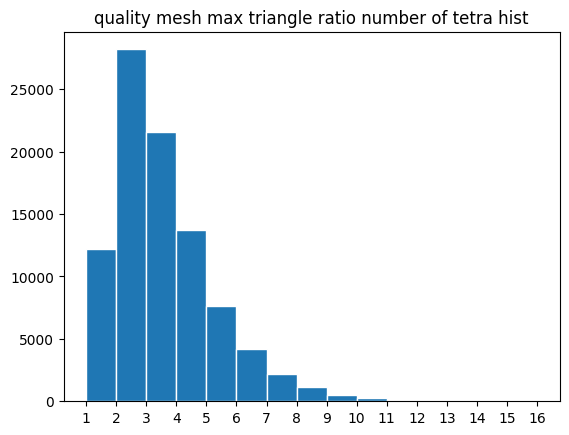

In [34]:
p50milsemitra = [3, 4, 5, 2, 2, 2, 2, 6, 4, 3, 4, 2, 6, 3, 3, 3, 6, 2, 3, 2, 3, 3, 8, 4, 3, 2, 2, 2, 4, 2, 5, 8, 1, 2, 2, 1, 5, 4, 1, 2, 4, 4, 4, 2, 3, 3, 1, 2, 3, 3, 2, 2, 2, 1, 2, 6, 2, 2, 4, 1, 9, 3, 6, 1, 2, 3, 2, 2, 3, 5, 3, 10, 2, 4, 1, 3, 3, 2, 2, 2, 3, 3, 2, 3, 4, 1, 4, 2, 3, 3, 2, 5, 1, 2, 4, 6, 3, 2, 5, 2, 4, 4, 4, 5, 2, 2, 3, 3, 2, 2, 2, 2, 5, 3, 4, 3, 2, 7, 1, 2, 3, 2, 8, 4, 2, 2, 2, 2, 2, 6, 2, 4, 2, 6, 2, 4, 4, 3, 4, 1, 2, 6, 2, 2, 8, 2, 3, 2, 3, 3, 2, 3, 3, 2, 5, 2, 6, 3, 1, 6, 1, 1, 7, 2, 2, 4, 6, 3, 2, 2, 6, 1, 6, 2, 2, 2, 1, 4, 3, 4, 4, 4, 2, 5, 2, 2, 2, 3, 3, 3, 1, 2, 2, 2, 3, 2, 3, 2, 3, 3, 2, 5, 3, 2, 3, 4, 5, 4, 5, 2, 1, 7, 2, 2, 5, 3, 2, 3, 2, 3, 3, 9, 3, 2, 3, 2, 4, 4, 2, 3, 2, 5, 6, 3, 3, 2, 4, 3, 2, 4, 4, 2, 2, 2, 3, 2, 2, 4, 3, 1, 9, 1, 3, 1, 4, 2, 4, 1, 2, 4, 3, 1, 3, 6, 3, 2, 3, 2, 3, 2, 4, 2, 4, 4, 3, 2, 3, 3, 6, 3, 5, 5, 6, 2, 4, 3, 2, 2, 2, 2, 4, 5, 2, 2, 4, 4, 2, 6, 5, 6, 1, 5, 9, 3, 2, 6, 1, 6, 2, 2, 2, 6, 3, 3, 4, 4, 1, 7, 2, 4, 1, 2, 3, 2, 5, 1, 1, 3, 3, 2, 2, 4, 1, 7, 2, 5, 3, 8, 4, 4, 5, 2, 4, 2, 2, 4, 3, 6, 3, 2, 1, 4, 2, 3, 2, 4, 1, 3, 4, 5, 1, 3, 2, 6, 2, 2, 2, 4, 4, 1, 6, 4, 2, 3, 2, 5, 4, 1, 6, 2, 1, 4, 4, 4, 2, 5, 3, 4, 1, 6, 3, 5, 1, 2, 2, 4, 2, 2, 5, 9, 1, 5, 1, 2, 3, 2, 3, 5, 2, 2, 2, 2, 2, 3, 2, 2, 3, 5, 3, 2, 3, 4, 2, 3, 2, 4, 2, 4, 3, 3, 2, 2, 5, 3, 2, 3, 1, 4, 3, 1, 4, 3, 3, 2, 4, 4, 2, 3, 4, 1, 7, 6, 3, 4, 2, 1, 3, 2, 9, 4, 4, 3, 5, 2, 3, 6, 4, 2, 3, 2, 7, 3, 4, 4, 2, 8, 1, 9, 5, 3, 5, 3, 4, 2, 2, 4, 2, 3, 5, 3, 2, 2, 6, 6, 4, 2, 7, 5, 6, 6, 5, 3, 2, 5, 3, 2, 4, 3, 3, 3, 2, 2, 2, 2, 2, 5, 3, 3, 3, 2, 4, 4, 9, 1, 2, 2, 2, 2, 6, 3, 2, 7, 1, 2, 3, 2, 3, 1, 6, 2, 4, 2, 3, 3, 1, 3, 4, 2, 2, 3, 2, 2, 3, 4, 2, 3, 3, 4, 4, 2, 5, 3, 3, 5, 2, 6, 7, 1, 5, 2, 5, 4, 3, 3, 2, 6, 5, 5, 2, 5, 1, 2, 4, 2, 5, 2, 4, 3, 4, 2, 2, 4, 3, 3, 3, 2, 3, 6, 2, 2, 2, 6, 3, 2, 3, 1, 5, 3, 3, 2, 4, 7, 3, 6, 5, 3, 3, 4, 3, 1, 4, 5, 9, 3, 2, 2, 2, 4, 2, 4, 5, 1, 6, 1, 3, 4, 3, 2, 1, 4, 3, 3, 5, 2, 4, 4, 3, 3, 2, 1, 10, 3, 3, 2, 4, 4, 3, 3, 3, 1, 10, 2, 2, 3, 6, 5, 2, 2, 3, 3, 3, 2, 3, 2, 5, 3, 2, 2, 5, 4, 1, 2, 1, 5, 1, 3, 5, 3, 4, 2, 4, 2, 5, 3, 3, 1, 7, 3, 2, 3, 3, 5, 4, 2, 1, 2, 7, 1, 1, 2, 2, 4, 3, 2, 5, 1, 2, 4, 3, 2, 2, 2, 3, 2, 3, 3, 5, 3, 5, 3, 1, 4, 2, 4, 1, 2, 3, 6, 2, 1, 3, 2, 1, 2, 4, 2, 7, 1, 2, 5, 2, 2, 5, 2, 6, 6, 3, 3, 2, 5, 5, 3, 5, 4, 6, 2, 2, 1, 4, 6, 3, 3, 5, 1, 4, 1, 2, 2, 1, 4, 2, 3, 1, 2, 3, 1, 2, 2, 2, 7, 7, 6, 9, 1, 4, 2, 3, 4, 1, 5, 3, 4, 2, 1, 2, 7, 2, 4, 3, 3, 5, 2, 3, 3, 1, 3, 5, 6, 4, 4, 2, 4, 2, 4, 3, 4, 1, 3, 6, 5, 1, 4, 3, 3, 2, 4, 1, 2, 5, 4, 1, 3, 5, 5, 2, 2, 4, 2, 1, 3, 3, 6, 4, 8, 2, 2, 5, 5, 1, 3, 2, 3, 2, 3, 2, 2, 6, 1, 5, 5, 3, 1, 4, 5, 1, 3, 2, 2, 2, 1, 3, 4, 4, 2, 3, 7, 3, 3, 1, 2, 9, 1, 2, 2, 4, 3, 1, 6, 3, 3, 4, 2, 3, 5, 2, 4, 1, 4, 6, 4, 2, 3, 4, 4, 3, 2, 2, 2, 3, 4, 4, 2, 4, 3, 2, 2, 3, 6, 7, 3, 1, 2, 6, 2, 2, 3, 3, 2, 4, 3, 1, 2, 2, 3, 2, 3, 2, 3, 4, 3, 3, 4, 2, 2, 4, 1, 4, 8, 4, 5, 2, 3, 5, 3, 7, 4, 1, 3, 3, 2, 5, 3, 6, 2, 2, 4, 3, 2, 3, 3, 3, 4, 4, 2, 3, 2, 3, 5, 2, 2, 2, 2, 3, 5, 1, 2, 7, 3, 5, 2, 6, 3, 2, 2, 3, 4, 2, 1, 7, 2, 3, 1, 4, 4, 4, 3, 6, 1, 3, 5, 2, 3, 1, 2, 3, 2, 2, 4, 2, 4, 4, 1, 6, 2, 2, 3, 3, 2, 1, 7, 4, 4, 3, 1, 8, 2, 6, 3, 2, 3, 5, 2, 1, 2, 1, 11, 2, 6, 1, 2, 4, 3, 2, 3, 5, 2, 4, 2, 2, 2, 6, 4, 3, 4, 3, 1, 2, 1, 2, 4, 1, 4, 7, 7, 2, 5, 4, 3, 1, 4, 4, 4, 3, 2, 2, 5, 2, 3, 1, 2, 2, 3, 2, 2, 6, 3, 6, 3, 1, 2, 5, 2, 4, 5, 4, 1, 6, 3, 3, 4, 2, 1, 4, 5, 4, 4, 3, 4, 4, 4, 4, 2, 2, 9, 5, 1, 2, 2, 4, 2, 4, 5, 6, 1, 1, 3, 3, 3, 6, 2, 5, 2, 2, 5, 2, 3, 2, 5, 5, 1, 1, 1, 6, 2, 2, 2, 6, 4, 1, 2, 1, 3, 2, 2, 1, 11, 2, 2, 4, 3, 1, 4, 5, 1, 2, 4, 2, 3, 4, 2, 5, 7, 3, 2, 4, 10, 3, 1, 2, 3, 3, 1, 2, 4, 8, 2, 5, 1, 2, 2, 4, 3, 3, 3, 1, 2, 8, 3, 3, 3, 4, 3, 3, 3, 1, 3, 3, 4, 5, 2, 2, 2, 2, 3, 6, 1, 2, 2, 2, 2, 5, 2, 6, 2, 3, 2, 3, 7, 2, 3, 3, 9, 2, 5, 5, 3, 1, 5, 3, 5, 1, 5, 4, 2, 3, 2, 2, 3, 4, 2, 4, 3, 4, 3, 1, 2, 9, 1, 2, 3, 3, 2, 5, 8, 2, 4, 1, 1, 3, 3, 1, 3, 2, 2, 2, 4, 2, 10, 6, 2, 2, 4, 3, 2, 4, 2, 5, 3, 3, 2, 2, 2, 2, 8, 4, 4, 3, 2, 3, 5, 3, 2, 4, 1, 5, 4, 2, 3, 5, 2, 4, 6, 2, 3, 2, 2, 3, 2, 1, 9, 3, 5, 1, 2, 7, 2, 3, 2, 4, 6, 5, 2, 2, 7, 5, 2, 2, 2, 2, 4, 2, 1, 3, 1, 2, 3, 3, 4, 2, 3, 3, 2, 2, 3, 2, 2, 3, 1, 2, 6, 2, 6, 2, 4, 2, 6, 1, 3, 5, 2, 3, 3, 3, 2, 2, 1, 2, 5, 1, 3, 2, 2, 3, 4, 6, 4, 4, 2, 3, 3, 2, 3, 4, 3, 2, 8, 3, 3, 3, 1, 3, 2, 3, 2, 4, 1, 2, 5, 2, 2, 2, 3, 3, 2, 2, 3, 6, 2, 2, 2, 6, 2, 5, 2, 6, 2, 3, 1, 4, 2, 2, 3, 6, 2, 4, 4, 2, 2, 2, 2, 4, 6, 2, 4, 5, 1, 3, 2, 4, 4, 4, 3, 4, 3, 2, 2, 1, 6, 2, 4, 8, 3, 2, 2, 2, 4, 3, 2, 3, 3, 4, 1, 10, 1, 2, 2, 2, 4, 4, 2, 2, 3, 5, 6, 1, 3, 3, 1, 3, 2, 5, 1, 5, 1, 3, 6, 2, 2, 4, 3, 3, 2, 1, 7, 2, 2, 3, 2, 8, 4, 2, 5, 3, 4, 2, 7, 2, 2, 2, 2, 2, 4, 4, 4, 3, 2, 4, 3, 3, 4, 4, 2, 2, 3, 4, 2, 3, 2, 5, 3, 2, 1, 7, 3, 3, 3, 2, 7, 3, 3, 4, 2, 2, 3, 2, 2, 2, 7, 2, 2, 2, 6, 6, 2, 9, 3, 2, 3, 1, 4, 4, 2, 2, 6, 4, 2, 2, 5, 4, 2, 6, 3, 2, 1, 3, 4, 2, 7, 3, 2, 3, 1, 4, 1, 2, 4, 8, 2, 2, 5, 2, 4, 10, 2, 6, 1, 5, 2, 4, 1, 5, 3, 2, 3, 4, 5, 1, 3, 4, 2, 4, 4, 2, 4, 4, 7, 1, 2, 5, 1, 5, 4, 2, 4, 1, 5, 2, 2, 4, 3, 4, 3, 4, 1, 5, 4, 3, 2, 4, 1, 2, 2, 3, 1, 7, 2, 4, 2, 2, 3, 4, 4, 2, 2, 7, 3, 4, 4, 5, 5, 4, 3, 1, 4, 1, 6, 2, 1, 7, 3, 4, 3, 3, 3, 6, 4, 4, 1, 4, 2, 2, 3, 1, 3, 1, 3, 2, 4, 5, 6, 3, 2, 3, 2, 1, 4, 1, 2, 2, 3, 9, 3, 4, 5, 2, 3, 2, 3, 2, 4, 5, 3, 4, 2, 5, 3, 4, 2, 1, 3, 2, 6, 2, 3, 3, 2, 3, 4, 6, 1, 3, 2, 3, 2, 4, 1, 2, 5, 3, 5, 3, 2, 3, 3, 4, 1, 4, 2, 5, 2, 2, 2, 3, 3, 2, 3, 6, 1, 1, 6, 1, 5, 3, 2, 7, 3, 1, 2, 2, 4, 3, 3, 1, 4, 5, 3, 5, 2, 4, 1, 2, 2, 2, 5, 2, 5, 4, 4, 1, 1, 8, 3, 2, 4, 5, 3, 2, 3, 4, 1, 5, 2, 8, 2, 4, 2, 6, 7, 2, 2, 4, 4, 4, 2, 2, 5, 2, 1, 2, 3, 2, 2, 6, 3, 3, 2, 4, 2, 1, 2, 4, 3, 5, 2, 4, 6, 1, 4, 2, 2, 3, 6, 1, 5, 3, 3, 2, 2, 1, 2, 4, 2, 3, 3, 2, 5, 3, 3, 3, 5, 3, 2, 7, 3, 6, 3, 2, 4, 2, 3, 3, 2, 3, 3, 4, 5, 3, 5, 3, 3, 2, 2, 2, 5, 4, 2, 2, 3, 2, 2, 5, 3, 4, 2, 4, 8, 1, 4, 1, 5, 13, 2, 1, 5, 3, 2, 2, 5, 2, 1, 5, 2, 3, 7, 2, 3, 4, 7, 1, 4, 5, 2, 2, 3, 2, 3, 1, 5, 3, 1, 4, 1, 2, 2, 4, 2, 2, 5, 2, 2, 2, 2, 3, 4, 2, 3, 2, 5, 1, 4, 8, 2, 8, 1, 1, 2, 1, 5, 3, 3, 3, 2, 3, 1, 4, 3, 8, 2, 1, 2, 4, 4, 2, 5, 5, 5, 3, 4, 2, 2, 2, 3, 3, 3, 2, 9, 2, 3, 4, 3, 4, 3, 1, 3, 2, 4, 3, 4, 2, 3, 3, 5, 6, 1, 4, 2, 3, 3, 3, 4, 4, 5, 1, 3, 5, 4, 4, 4, 1, 4, 5, 3, 1, 1, 5, 5, 3, 5, 2, 2, 1, 2, 4, 8, 3, 3, 2, 1, 3, 2, 3, 2, 5, 2, 2, 2, 6, 3, 2, 3, 2, 4, 4, 1, 2, 3, 2, 4, 3, 2, 7, 2, 3, 8, 1, 4, 2, 2, 7, 2, 2, 3, 3, 3, 6, 5, 3, 5, 4, 2, 2, 2, 2, 4, 4, 3, 6, 2, 2, 3, 4, 2, 5, 4, 7, 5, 3, 4, 6, 2, 4, 1, 1, 7, 4, 7, 7, 3, 4, 1, 5, 4, 2, 5, 4, 4, 1, 5, 4, 1, 2, 8, 1, 6, 1, 3, 4, 2, 6, 6, 4, 4, 8, 5, 2, 2, 2, 3, 4, 6, 1, 4, 2, 3, 5, 2, 2, 3, 3, 3, 5, 3, 2, 4, 9, 2, 1, 4, 1, 4, 1, 5, 5, 1, 2, 4, 3, 2, 3, 2, 3, 4, 2, 3, 2, 4, 1, 4, 2, 6, 8, 1, 7, 4, 5, 3, 2, 2, 1, 4, 4, 3, 2, 4, 1, 2, 4, 2, 3, 4, 3, 3, 2, 3, 2, 3, 2, 2, 3, 2, 2, 2, 3, 2, 1, 3, 2, 3, 3, 3, 2, 2, 2, 4, 3, 2, 4, 1, 4, 4, 4, 8, 2, 3, 1, 3, 3, 2, 2, 4, 2, 5, 3, 2, 3, 2, 3, 3, 2, 3, 7, 4, 6, 1, 2, 2, 2, 2, 4, 4, 3, 2, 1, 7, 1, 2, 1, 2, 4, 5, 2, 2, 3, 3, 4, 3, 2, 4, 2, 3, 2, 3, 1, 2, 1, 6, 1, 2, 3, 5, 4, 3, 3, 3, 4, 3, 2, 3, 2, 3, 5, 2, 4, 2, 2, 3, 2, 7, 3, 5, 6, 8, 4, 2, 5, 4, 3, 3, 2, 2, 5, 3, 2, 3, 4, 2, 2, 4, 2, 2, 2, 3, 6, 2, 3, 3, 9, 2, 3, 2, 4, 2, 2, 2, 6, 5, 1, 6, 3, 2, 3, 3, 3, 1, 3, 2, 7, 3, 3, 2, 3, 3, 2, 5, 4, 3, 2, 2, 1, 4, 5, 8, 3, 6, 1, 3, 4, 3, 3, 1, 2, 1, 6, 4, 2, 4, 4, 2, 2, 2, 2, 3, 3, 2, 4, 4, 3, 2, 3, 6, 4, 3, 6, 1, 4, 6, 3, 3, 5, 3, 2, 6, 4, 1, 7, 3, 3, 4, 2, 4, 4, 2, 4, 3, 3, 2, 5, 3, 3, 6, 9, 4, 2, 5, 2, 2, 2, 6, 4, 3, 1, 4, 1, 2, 4, 3, 3, 3, 1, 2, 2, 4, 4, 5, 1, 3, 4, 2, 2, 3, 4, 3, 10, 1, 3, 3, 2, 1, 1, 4, 2, 4, 2, 3, 3, 5, 1, 3, 5, 4, 2, 2, 4, 2, 3, 4, 3, 4, 2, 3, 3, 2, 2, 2, 6, 2, 3, 2, 4, 5, 3, 6, 3, 4, 3, 3, 3, 2, 6, 2, 5, 2, 5, 3, 3, 2, 4, 3, 2, 2, 5, 4, 2, 2, 2, 2, 5, 5, 6, 4, 2, 1, 3, 6, 1, 2, 6, 6, 2, 2, 4, 7, 2, 10, 1, 3, 2, 2, 4, 4, 2, 2, 3, 4, 3, 1, 2, 2, 1, 3, 4, 2, 6, 3, 3, 1, 5, 4, 6, 3, 4, 3, 2, 4, 7, 2, 3, 5, 1, 3, 1, 4, 4, 2, 5, 4, 1, 1, 5, 6, 4, 3, 4, 2, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 6, 4, 4, 3, 5, 2, 8, 3, 4, 2, 1, 11, 1, 5, 5, 6, 4, 1, 3, 2, 4, 2, 3, 2, 2, 2, 2, 3, 2, 1, 3, 4, 4, 2, 3, 6, 2, 2, 2, 4, 2, 2, 4, 4, 2, 3, 2, 4, 4, 2, 2, 5, 8, 5, 2, 2, 3, 4, 4, 4, 2, 5, 3, 9, 1, 2, 4, 2, 3, 7, 1, 4, 1, 2, 4, 2, 7, 3, 5, 3, 5, 2, 8, 2, 1, 3, 2, 5, 3, 4, 3, 2, 4, 1, 5, 2, 3, 2, 4, 3, 2, 4, 4, 2, 3, 3, 3, 7, 2, 3, 4, 2, 3, 2, 4, 3, 4, 4, 3, 6, 1, 6, 2, 1, 5, 3, 2, 3, 4, 4, 3, 2, 5, 3, 6, 4, 2, 4, 4, 2, 5, 4, 3, 3, 5, 2, 2, 2, 7, 4, 4, 2, 6, 1, 3, 4, 2, 5, 2, 5, 1, 4, 2, 2, 3, 4, 8, 2, 2, 1, 9, 4, 7, 1, 7, 3, 2, 2, 3, 2, 3, 3, 3, 2, 1, 8, 5, 3, 2, 2, 4, 1, 4, 4, 4, 2, 1, 2, 3, 2, 6, 3, 5, 2, 5, 2, 3, 3, 2, 1, 5, 2, 2, 3, 1, 2, 2, 5, 3, 4, 3, 1, 2, 2, 1, 2, 3, 3, 2, 4, 4, 7, 2, 1, 6, 2, 4, 8, 1, 2, 2, 1, 6, 1, 2, 2, 2, 3, 2, 3, 3, 1, 4, 3, 4, 3, 2, 3, 2, 3, 2, 2, 2, 4, 2, 3, 4, 3, 3, 3, 3, 2, 2, 1, 3, 3, 4, 2, 3, 2, 3, 4, 1, 2, 6, 3, 2, 2, 3, 2, 6, 1, 3, 2, 2, 2, 5, 3, 3, 4, 2, 2, 4, 6, 4, 3, 3, 7, 2, 1, 3, 3, 2, 3, 4, 2, 2, 1, 2, 2, 2, 4, 3, 2, 1, 6, 2, 2, 7, 3, 4, 8, 3, 2, 3, 2, 3, 2, 7, 5, 1, 4, 2, 4, 2, 2, 4, 3, 3, 3, 1, 3, 2, 5, 3, 2, 5, 2, 4, 2, 3, 2, 3, 5, 2, 1, 4, 2, 4, 2, 5, 2, 4, 2, 3, 6, 1, 7, 4, 2, 2, 2, 4, 5, 2, 2, 2, 3, 2, 1, 4, 4, 3, 2, 3, 2, 2, 5, 2, 2, 1, 8, 2, 3, 5, 3, 3, 3, 5, 2, 4, 4, 4, 4, 5, 6, 1, 3, 4, 1, 4, 4, 2, 3, 1, 2, 2, 1, 4, 2, 7, 5, 1, 3, 2, 4, 4, 4, 4, 3, 2, 4, 3, 2, 2, 1, 2, 6, 2, 4, 2, 5, 3, 2, 1, 2, 3, 1, 8, 2, 2, 3, 1, 5, 3, 2, 3, 3, 2, 6, 3, 2, 2, 5, 3, 4, 1, 7, 5, 3, 2, 5, 3, 8, 4, 3, 1, 4, 4, 2, 1, 3, 2, 2, 2, 2, 3, 2, 5, 3, 2, 5, 1, 2, 3, 2, 4, 3, 5, 2, 4, 2, 7, 2, 5, 4, 1, 2, 3, 2, 2, 5, 2, 2, 3, 3, 2, 8, 1, 2, 6, 2, 6, 4, 3, 5, 2, 5, 4, 4, 3, 2, 4, 4, 3, 5, 4, 4, 1, 2, 2, 3, 2, 5, 1, 2, 2, 3, 3, 4, 3, 5, 3, 6, 3, 2, 4, 3, 1, 7, 2, 3, 5, 2, 2, 2, 4, 4, 1, 3, 4, 2, 4, 2, 2, 2, 3, 4, 1, 1, 2, 3, 3, 1, 3, 3, 6, 2, 1, 4, 3, 2, 2, 3, 3, 2, 8, 4, 2, 4, 3, 2, 5, 6, 2, 3, 4, 2, 2, 5, 4, 2, 4, 2, 2, 3, 2, 4, 3, 3, 4, 2, 5, 4, 4, 5, 2, 5, 2, 4, 4, 6, 2, 1, 3, 4, 2, 2, 2, 2, 2, 2, 1, 3, 2, 4, 1, 2, 2, 2, 3, 2, 3, 4, 6, 1, 2, 2, 9, 2, 2, 4, 6, 5, 1, 1, 3, 3, 3, 4, 5, 2, 4, 2, 8, 1, 4, 1, 4, 3, 1, 3, 2, 4, 2, 2, 2, 6, 3, 6, 5, 2, 3, 1, 3, 2, 7, 5, 1, 3, 3, 2, 5, 3, 1, 4, 1, 3, 7, 1, 3, 5, 4, 2, 2, 3, 2, 3, 3, 4, 7, 3, 6, 6, 2, 5, 3, 2, 2, 2, 6, 6, 2, 1, 4, 3, 3, 4, 2, 1, 4, 2, 6, 6, 1, 1, 4, 2, 1, 3, 2, 4, 1, 4, 7, 4, 3, 2, 3, 3, 2, 1, 3, 6, 2, 1, 4, 1, 4, 1, 3, 1, 5, 1, 4, 3, 2, 4, 3, 11, 1, 1, 1, 4, 7, 3, 3, 1, 4, 1, 5, 6, 3, 4, 2, 2, 3, 3, 2, 8, 8, 3, 4, 6, 2, 1, 5, 4, 3, 7, 4, 1, 2, 2, 1, 1, 9, 3, 3, 2, 5, 2, 2, 3, 4, 6, 1, 3, 1, 3, 3, 3, 3, 3, 2, 3, 4, 2, 2, 1, 1, 4, 4, 2, 5, 2, 2, 5, 7, 2, 5, 3, 2, 6, 3, 3, 1, 2, 3, 3, 4, 2, 4, 1, 1, 6, 1, 3, 2, 4, 3, 3, 6, 4, 3, 5, 3, 3, 3, 3, 3, 3, 2, 3, 5, 2, 3, 1, 5, 8, 2, 2, 3, 2, 3, 5, 3, 3, 3, 4, 3, 7, 4, 4, 3, 2, 4, 2, 4, 2, 3, 3, 6, 4, 6, 2, 2, 3, 2, 2, 2, 2, 1, 4, 3, 3, 2, 4, 5, 3, 2, 6, 1, 3, 2, 2, 3, 9, 5, 4, 1, 5, 5, 6, 3, 4, 3, 1, 3, 2, 2, 3, 4, 2, 4, 7, 1, 2, 3, 3, 4, 4, 6, 5, 5, 3, 5, 1, 2, 3, 1, 3, 2, 2, 3, 4, 3, 2, 3, 4, 4, 2, 2, 3, 3, 1, 5, 5, 2, 2, 2, 4, 2, 3, 4, 2, 2, 2, 3, 4, 4, 2, 4, 3, 2, 3, 3, 2, 2, 4, 3, 3, 4, 1, 3, 3, 4, 3, 4, 4, 6, 5, 3, 5, 5, 3, 3, 6, 5, 3, 5, 2, 2, 2, 1, 7, 1, 2, 3, 4, 1, 3, 3, 3, 2, 2, 2, 3, 3, 2, 3, 3, 2, 7, 1, 2, 3, 3, 2, 2, 3, 1, 3, 2, 3, 3, 6, 2, 5, 3, 9, 1, 2, 2, 4, 2, 1, 2, 2, 2, 2, 4, 1, 2, 5, 4, 2, 4, 8, 2, 2, 3, 1, 5, 2, 1, 6, 1, 7, 5, 4, 2, 1, 2, 1, 8, 3, 4, 4, 3, 3, 5, 4, 1, 3, 2, 1, 4, 6, 6, 3, 2, 5, 2, 4, 6, 1, 9, 2, 2, 3, 3, 2, 3, 2, 2, 2, 1, 5, 3, 4, 2, 2, 3, 3, 2, 7, 4, 2, 5, 1, 1, 6, 3, 1, 6, 2, 4, 1, 2, 3, 1, 2, 2, 4, 2, 11, 1, 3, 10, 3, 1, 4, 1, 3, 3, 4, 2, 2, 2, 2, 1, 3, 8, 1, 4, 2, 7, 2, 4, 1, 4, 4, 2, 2, 2, 3, 8, 10, 3, 2, 4, 5, 2, 2, 5, 3, 2, 6, 4, 2, 5, 5, 5, 4, 6, 5, 3, 3, 1, 5, 2, 4, 3, 4, 4, 2, 2, 5, 3, 4, 2, 3, 2, 2, 1, 3, 4, 2, 2, 2, 5, 3, 4, 2, 3, 5, 2, 3, 1, 2, 2, 2, 2, 6, 2, 2, 4, 4, 1, 6, 3, 2, 2, 3, 1, 2, 5, 4, 1, 5, 2, 3, 3, 2, 5, 3, 2, 2, 3, 3, 3, 2, 6, 3, 1, 2, 3, 1, 3, 3, 2, 1, 2, 2, 8, 2, 11, 2, 4, 2, 2, 2, 1, 5, 2, 3, 3, 3, 3, 4, 4, 3, 1, 3, 4, 3, 2, 5, 3, 3, 4, 2, 3, 1, 6, 5, 2, 3, 4, 4, 3, 1, 1, 2, 2, 2, 2, 4, 4, 2, 3, 7, 1, 3, 2, 2, 7, 1, 4, 2, 6, 3, 1, 2, 2, 2, 3, 8, 3, 4, 4, 2, 7, 2, 1, 2, 2, 3, 1, 4, 3, 2, 1, 5, 4, 2, 2, 5, 1, 6, 5, 1, 3, 3, 2, 9, 1, 3, 3, 3, 5, 3, 9, 1, 1, 2, 3, 1, 7, 2, 3, 2, 4, 2, 8, 5, 6, 5, 3, 3, 1, 5, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3, 2, 4, 2, 4, 6, 6, 2, 2, 1, 2, 3, 2, 4, 6, 1, 2, 1, 1, 3, 2, 3, 6, 4, 3, 3, 4, 2, 3, 2, 3, 3, 1, 5, 2, 2, 3, 1, 7, 6, 4, 7, 1, 2, 4, 1, 3, 4, 3, 2, 2, 4, 6, 3, 4, 5, 3, 2, 5, 2, 2, 5, 3, 2, 2, 5, 4, 2, 5, 1, 3, 3, 2, 3, 2, 3, 2, 2, 2, 4, 3, 5, 5, 2, 2, 4, 5, 3, 2, 3, 3, 3, 2, 1, 3, 2, 2, 4, 2, 2, 3, 2, 6, 2, 9, 3, 2, 5, 2, 2, 1, 2, 3, 1, 5, 2, 2, 3, 4, 2, 3, 3, 2, 2, 3, 2, 3, 3, 3, 3, 4, 3, 1, 3, 3, 3, 2, 2, 2, 3, 3, 1, 5, 4, 3, 4, 2, 4, 5, 4, 4, 2, 3, 3, 2, 4, 6, 3, 1, 3, 2, 2, 4, 4, 3, 2, 3, 2, 3, 4, 10, 4, 3, 1, 6, 1, 1, 7, 1, 2, 2, 3, 2, 3, 5, 1, 5, 1, 2, 2, 6, 4, 4, 3, 4, 2, 3, 2, 4, 3, 3, 7, 2, 5, 3, 3, 1, 3, 2, 2, 2, 1, 3, 5, 1, 2, 6, 3, 3, 2, 3, 4, 3, 3, 4, 2, 2, 4, 4, 2, 4, 3, 1, 3, 2, 6, 2, 7, 7, 3, 2, 4, 12, 1, 2, 3, 3, 3, 3, 3, 1, 2, 3, 3, 2, 3, 3, 3, 9, 3, 2, 3, 2, 1, 8, 5, 2, 5, 4, 3, 6, 1, 3, 4, 4, 2, 2, 5, 4, 2, 5, 2, 3, 2, 7, 2, 2, 1, 6, 2, 8, 1, 3, 5, 2, 3, 2, 1, 4, 4, 2, 2, 2, 2, 4, 1, 5, 1, 3, 1, 4, 5, 3, 2, 2, 3, 2, 4, 1, 2, 6, 4, 2, 3, 3, 2, 1, 4, 3, 1, 3, 3, 2, 1, 3, 2, 4, 1, 4, 4, 2, 3, 6, 5, 5, 3, 4, 5, 3, 5, 10, 6, 3, 3, 3, 3, 5, 2, 3, 3, 3, 3, 5, 2, 2, 3, 1, 3, 4, 4, 2, 5, 2, 5, 4, 2, 2, 9, 3, 5, 1, 7, 4, 2, 3, 3, 2, 2, 2, 7, 8, 3, 2, 2, 3, 5, 3, 3, 5, 5, 1, 2, 5, 2, 4, 3, 5, 9, 2, 3, 1, 2, 3, 6, 4, 2, 1, 3, 7, 4, 8, 1, 2, 4, 5, 1, 2, 2, 6, 1, 3, 2, 2, 2, 5, 1, 3, 2, 2, 4, 6, 4, 2, 7, 2, 1, 4, 5, 4, 5, 1, 2, 3, 5, 2, 1, 6, 3, 1, 4, 2, 2, 4, 2, 2, 4, 9, 5, 2, 2, 3, 3, 5, 4, 3, 3, 4, 5, 1, 2, 2, 8, 1, 2, 3, 3, 4, 2, 2, 5, 6, 1, 3, 3, 2, 5, 3, 2, 2, 2, 2, 4, 2, 3, 3, 2, 4, 5, 4, 2, 4, 2, 3, 4, 4, 1, 3, 1, 2, 5, 4, 1, 10, 4, 2, 3, 4, 3, 3, 2, 4, 2, 1, 5, 2, 2, 3, 4, 2, 3, 6, 4, 3, 4, 1, 4, 2, 3, 4, 3, 2, 4, 3, 2, 4, 4, 3, 2, 3, 2, 3, 2, 3, 3, 2, 5, 1, 4, 4, 2, 3, 2, 3, 1, 3, 3, 4, 5, 2, 5, 3, 4, 3, 2, 2, 2, 3, 6, 9, 4, 3, 3, 1, 5, 2, 3, 7, 1, 2, 3, 2, 2, 2, 2, 3, 5, 3, 6, 1, 3, 1, 3, 2, 3, 3, 3, 2, 3, 3, 3, 1, 5, 3, 3, 3, 3, 5, 2, 2, 2, 2, 3, 1, 2, 2, 4, 1, 10, 4, 2, 2, 3, 2, 7, 2, 7, 3, 3, 6, 5, 10, 6, 2, 4, 4, 2, 2, 3, 2, 3, 5, 3, 2, 3, 5, 4, 2, 1, 3, 2, 4, 2, 3, 3, 3, 2, 5, 1, 3, 1, 2, 6, 2, 2, 3, 3, 6, 7, 1, 2, 6, 3, 3, 4, 2, 2, 2, 3, 4, 5, 4, 5, 3, 9, 1, 1, 3, 2, 3, 2, 3, 4, 1, 2, 5, 2, 3, 3, 3, 8, 4, 3, 2, 2, 3, 5, 2, 2, 3, 4, 5, 3, 3, 2, 4, 6, 1, 2, 2, 7, 4, 2, 2, 2, 1, 10, 2, 2, 3, 2, 4, 2, 1, 3, 2, 6, 2, 3, 6, 2, 3, 2, 3, 4, 4, 4, 4, 3, 2, 3, 2, 2, 5, 3, 1, 6, 3, 7, 2, 2, 3, 3, 1, 6, 5, 6, 2, 1, 2, 2, 2, 2, 2, 5, 5, 1, 6, 2, 7, 3, 4, 2, 4, 2, 6, 1, 3, 3, 4, 8, 2, 2, 2, 2, 5, 1, 5, 3, 5, 1, 3, 7, 2, 3, 3, 8, 1, 4, 4, 3, 2, 4, 7, 2, 5, 2, 3, 1, 4, 2, 2, 2, 1, 7, 3, 4, 1, 4, 1, 2, 4, 8, 1, 2, 2, 4, 2, 9, 1, 1, 5, 2, 1, 4, 1, 8, 2, 8, 2, 3, 1, 4, 2, 2, 3, 3, 3, 3, 7, 1, 3, 5, 3, 4, 2, 2, 5, 1, 2, 2, 5, 2, 3, 3, 3, 3, 2, 4, 2, 3, 2, 1, 2, 10, 2, 3, 4, 1, 2, 2, 3, 2, 3, 2, 3, 1, 3, 2, 2, 3, 2, 3, 2, 1, 11, 2, 2, 2, 4, 5, 2, 4, 2, 3, 3, 6, 4, 2, 7, 3, 3, 2, 2, 9, 7, 8, 3, 3, 3, 2, 4, 3, 2, 5, 1, 3, 2, 5, 5, 3, 2, 3, 2, 2, 2, 5, 4, 2, 2, 2, 3, 2, 2, 1, 3, 3, 2, 3, 5, 2, 2, 1, 8, 4, 3, 6, 2, 2, 2, 3, 3, 4, 2, 3, 2, 2, 2, 1, 2, 3, 3, 3, 3, 3, 3, 7, 5, 2, 3, 3, 3, 4, 1, 7, 3, 2, 1, 2, 3, 3, 1, 1, 3, 1, 3, 4, 2, 3, 2, 3, 4, 3, 1, 4, 4, 3, 8, 1, 2, 3, 2, 4, 5, 1, 5, 1, 6, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 5, 4, 2, 5, 3, 3, 3, 4, 4, 1, 2, 3, 2, 4, 2, 4, 5, 4, 2, 6, 2, 1, 6, 3, 4, 2, 3, 5, 5, 5, 4, 2, 5, 4, 4, 2, 2, 5, 5, 3, 5, 2, 4, 2, 2, 2, 1, 2, 2, 2, 4, 1, 2, 4, 2, 4, 5, 2, 2, 5, 6, 3, 2, 3, 4, 2, 3, 2, 3, 2, 5, 5, 2, 4, 2, 2, 2, 4, 2, 4, 6, 1, 2, 3, 1, 2, 3, 3, 4, 3, 4, 1, 5, 4, 2, 1, 5, 3, 3, 3, 4, 6, 1, 3, 6, 3, 2, 4, 3, 2, 3, 3, 2, 2, 4, 6, 5, 5, 4, 2, 2, 6, 2, 9, 1, 1, 4, 1, 3, 3, 6, 3, 1, 2, 2, 2, 1, 2, 7, 1, 1, 2, 3, 3, 1, 1, 4, 5, 1, 4, 7, 6, 1, 2, 2, 3, 3, 8, 7, 4, 2, 1, 9, 2, 5, 1, 3, 3, 4, 2, 2, 2, 1, 1, 2, 5, 3, 3, 2, 4, 2, 4, 1, 3, 4, 3, 4, 3, 1, 2, 5, 3, 4, 9, 2, 4, 2, 7, 10, 2, 2, 2, 2, 6, 3, 5, 2, 1, 4, 2, 3, 1, 3, 2, 2, 2, 2, 4, 3, 9, 4, 2, 2, 2, 3, 1, 2, 3, 3, 3, 2, 2, 5, 3, 1, 2, 5, 2, 3, 2, 4, 1, 2, 5, 2, 7, 4, 6, 2, 3, 1, 5, 3, 2, 2, 2, 2, 2, 5, 7, 1, 5, 2, 5, 3, 4, 1, 4, 3, 3, 2, 1, 2, 2, 3, 4, 2, 7, 4, 5, 1, 2, 4, 2, 4, 1, 3, 4, 5, 1, 3, 3, 3, 1, 3, 2, 3, 5, 10, 3, 2, 2, 4, 4, 3, 10, 5, 3, 2, 4, 4, 3, 2, 3, 6, 1, 4, 2, 2, 6, 2, 2, 1, 2, 6, 3, 2, 4, 3, 2, 2, 3, 2, 2, 8, 2, 3, 4, 2, 2, 3, 2, 4, 4, 1, 3, 3, 2, 1, 9, 3, 12, 2, 2, 1, 3, 2, 2, 3, 7, 4, 2, 5, 5, 1, 5, 1, 4, 3, 2, 1, 2, 4, 3, 1, 4, 6, 5, 2, 2, 3, 3, 2, 4, 2, 4, 3, 5, 1, 2, 5, 2, 2, 2, 2, 7, 7, 4, 2, 5, 5, 2, 2, 6, 4, 6, 2, 3, 3, 2, 5, 4, 5, 2, 3, 1, 4, 3, 3, 2, 3, 2, 5, 2, 3, 4, 3, 1, 2, 3, 5, 1, 7, 1, 2, 4, 3, 5, 4, 4, 1, 4, 2, 2, 2, 2, 5, 4, 3, 2, 2, 2, 5, 4, 2, 3, 2, 4, 6, 3, 5, 1, 1, 1, 5, 5, 5, 5, 2, 2, 2, 2, 3, 4, 2, 2, 3, 3, 3, 2, 5, 1, 3, 2, 2, 4, 4, 2, 2, 2, 4, 3, 4, 3, 2, 3, 1, 2, 3, 6, 6, 3, 1, 4, 1, 2, 2, 2, 3, 2, 5, 2, 5, 6, 2, 3, 2, 3, 3, 4, 5, 1, 5, 3, 2, 2, 2, 1, 3, 5, 4, 10, 4, 4, 1, 3, 7, 1, 4, 3, 4, 2, 3, 2, 2, 2, 2, 6, 5, 5, 3, 1, 3, 4, 5, 1, 2, 2, 4, 2, 9, 2, 4, 4, 4, 4, 6, 4, 1, 1, 1, 3, 2, 4, 3, 6, 1, 4, 3, 3, 2, 4, 2, 1, 7, 4, 2, 1, 5, 1, 2, 3, 4, 3, 3, 4, 2, 3, 3, 2, 3, 2, 3, 1, 5, 6, 2, 4, 2, 4, 1, 6, 2, 4, 3, 3, 3, 2, 7, 2, 5, 2, 5, 1, 4, 1, 2, 3, 1, 2, 2, 4, 2, 4, 3, 3, 4, 4, 3, 3, 4, 4, 4, 3, 2, 1, 2, 3, 8, 1, 4, 2, 3, 5, 5, 2, 3, 2, 2, 2, 3, 5, 6, 3, 2, 2, 4, 2, 3, 2, 3, 2, 4, 2, 2, 3, 1, 6, 1, 1, 3, 3, 4, 3, 3, 2, 2, 5, 5, 2, 3, 1, 2, 3, 1, 3, 5, 2, 3, 5, 1, 1, 3, 2, 4, 4, 4, 1, 3, 2, 5, 3, 3, 1, 7, 1, 2, 5, 2, 1, 3, 2, 4, 2, 4, 3, 2, 2, 2, 3, 3, 2, 2, 2, 3, 1, 12, 7, 1, 3, 2, 6, 3, 4, 3, 3, 2, 3, 1, 2, 6, 1, 1, 3, 2, 4, 4, 5, 2, 2, 6, 1, 3, 4, 5, 2, 2, 2, 1, 4, 7, 2, 7, 1, 3, 3, 4, 3, 2, 7, 2, 3, 3, 5, 2, 2, 5, 3, 3, 3, 2, 2, 2, 5, 1, 4, 4, 5, 4, 1, 5, 6, 2, 3, 1, 3, 2, 4, 5, 2, 2, 3, 6, 2, 2, 2, 3, 7, 4, 3, 4, 2, 4, 4, 4, 1, 5, 5, 6, 2, 1, 6, 5, 5, 4, 4, 3, 2, 2, 3, 2, 3, 3, 3, 2, 5, 2, 4, 4, 5, 2, 2, 2, 2, 2, 3, 2, 1, 4, 4, 3, 2, 3, 3, 7, 1, 4, 3, 4, 2, 2, 4, 5, 2, 3, 3, 8, 1, 2, 2, 3, 6, 2, 3, 4, 2, 5, 1, 2, 4, 4, 3, 1, 5, 6, 1, 5, 1, 3, 3, 3, 2, 2, 2, 3, 4, 5, 2, 2, 2, 1, 4, 2, 1, 6, 1, 3, 4, 2, 2, 3, 5, 3, 3, 3, 2, 6, 4, 2, 4, 2, 8, 2, 3, 3, 2, 2, 3, 2, 1, 4, 3, 1, 1, 2, 3, 1, 2, 3, 3, 1, 6, 3, 4, 3, 4, 2, 4, 4, 2, 1, 4, 4, 4, 1, 6, 3, 2, 4, 1, 1, 3, 3, 2, 2, 5, 2, 2, 2, 3, 3, 6, 2, 1, 1, 1, 4, 2, 2, 2, 3, 3, 1, 2, 4, 3, 5, 3, 2, 4, 2, 2, 2, 3, 2, 4, 2, 5, 4, 2, 4, 2, 2, 4, 3, 2, 5, 3, 3, 5, 2, 2, 1, 3, 5, 2, 1, 4, 2, 4, 1, 3, 3, 3, 2, 2, 3, 2, 1, 5, 1, 5, 4, 2, 2, 12, 6, 2, 5, 7, 2, 3, 5, 7, 4, 1, 2, 2, 6, 3, 4, 1, 2, 2, 5, 3, 6, 2, 2, 2, 4, 1, 2, 4, 3, 3, 2, 6, 2, 3, 4, 2, 3, 6, 1, 4, 3, 1, 2, 4, 5, 3, 2, 2, 2, 1, 5, 3, 3, 4, 2, 4, 3, 3, 3, 5, 1, 3, 2, 3, 5, 4, 3, 3, 4, 2, 8, 2, 1, 2, 2, 6, 1, 3, 5, 2, 5, 4, 6, 2, 1, 7, 4, 3, 3, 3, 3, 2, 2, 3, 3, 4, 1, 2, 3, 2, 4, 4, 1, 1, 2, 4, 1, 3, 2, 3, 2, 3, 2, 3, 4, 2, 3, 3, 2, 2, 3, 2, 1, 9, 9, 1, 1, 1, 5, 3, 1, 2, 4, 2, 4, 3, 2, 2, 2, 2, 4, 2, 3, 2, 3, 6, 2, 3, 8, 1, 5, 1, 2, 3, 5, 2, 2, 1, 2, 5, 3, 8, 3, 4, 2, 2, 3, 3, 4, 1, 4, 2, 9, 3, 1, 2, 5, 5, 2, 5, 3, 2, 3, 2, 2, 4, 2, 2, 2, 2, 6, 3, 3, 6, 4, 4, 5, 1, 5, 1, 3, 2, 2, 2, 1, 5, 2, 2, 7, 3, 5, 3, 1, 9, 1, 2, 3, 3, 5, 4, 3, 4, 2, 2, 3, 3, 4, 2, 8, 3, 3, 6, 1, 1, 3, 3, 4, 5, 4, 3, 3, 4, 5, 2, 5, 5, 3, 5, 2, 4, 3, 5, 1, 6, 2, 1, 2, 2, 5, 3, 4, 2, 2, 4, 4, 2, 3, 5, 1, 10, 4, 5, 5, 3, 2, 4, 2, 3, 3, 3, 2, 3, 3, 2, 5, 2, 6, 5, 3, 2, 7, 4, 2, 3, 2, 3, 3, 8, 1, 1, 1, 2, 3, 2, 8, 1, 4, 4, 9, 4, 2, 2, 3, 1, 5, 2, 4, 4, 2, 4, 4, 5, 2, 3, 4, 4, 2, 3, 3, 4, 2, 4, 7, 2, 4, 2, 2, 3, 6, 2, 2, 3, 5, 2, 2, 3, 3, 4, 3, 2, 2, 5, 2, 3, 6, 3, 3, 2, 1, 1, 1, 1, 2, 4, 4, 3, 2, 2, 1, 2, 2, 2, 3, 3, 2, 3, 2, 2, 5, 2, 4, 1, 7, 7, 4, 4, 1, 2, 2, 4, 5, 2, 1, 3, 3, 4, 2, 3, 2, 4, 1, 2, 5, 3, 3, 3, 3, 4, 6, 2, 7, 7, 1, 2, 2, 1, 10, 2, 2, 10, 4, 5, 2, 3, 3, 4, 1, 4, 2, 2, 9, 5, 1, 1, 7, 4, 3, 4, 1, 8, 2, 4, 2, 4, 4, 4, 2, 4, 2, 2, 6, 3, 3, 1, 3, 5, 5, 4, 2, 4, 4, 1, 3, 2, 1, 9, 5, 2, 6, 1, 1, 1, 6, 3, 2, 3, 4, 2, 2, 1, 4, 3, 3, 2, 3, 6, 3, 2, 3, 3, 2, 2, 2, 5, 3, 3, 3, 2, 4, 4, 2, 4, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 1, 3, 1, 2, 1, 2, 5, 3, 1, 5, 4, 5, 4, 1, 2, 8, 2, 2, 2, 3, 3, 4, 4, 5, 2, 5, 6, 3, 3, 2, 1, 12, 1, 3, 1, 9, 2, 5, 3, 4, 4, 2, 2, 6, 2, 3, 2, 3, 2, 2, 3, 2, 2, 4, 1, 3, 4, 2, 4, 6, 7, 2, 2, 2, 4, 4, 3, 5, 1, 3, 5, 2, 2, 5, 3, 3, 2, 3, 2, 4, 3, 5, 1, 3, 4, 5, 6, 3, 2, 2, 4, 2, 4, 3, 2, 3, 1, 3, 2, 4, 9, 2, 2, 3, 6, 4, 1, 2, 2, 2, 3, 3, 8, 1, 6, 2, 1, 2, 1, 2, 1, 4, 5, 1, 2, 2, 4, 2, 4, 1, 2, 6, 2, 2, 2, 2, 3, 3, 9, 2, 1, 3, 8, 5, 2, 5, 1, 6, 2, 2, 7, 4, 2, 2, 4, 3, 2, 2, 2, 3, 2, 8, 2, 3, 2, 2, 3, 5, 2, 3, 4, 3, 3, 2, 5, 3, 2, 3, 1, 7, 1, 2, 7, 4, 4, 2, 3, 5, 2, 2, 2, 3, 2, 2, 2, 3, 3, 3, 4, 4, 2, 3, 8, 1, 2, 9, 1, 2, 6, 1, 4, 2, 7, 3, 2, 5, 2, 5, 2, 2, 6, 2, 3, 1, 9, 1, 2, 3, 2, 9, 2, 2, 3, 3, 2, 3, 3, 3, 5, 5, 2, 4, 5, 5, 4, 2, 4, 5, 5, 5, 2, 1, 1, 2, 4, 3, 2, 4, 4, 2, 2, 3, 2, 2, 4, 4, 1, 1, 3, 2, 3, 2, 2, 3, 2, 2, 4, 2, 2, 5, 3, 6, 2, 2, 4, 8, 1, 1, 2, 3, 1, 4, 5, 1, 3, 3, 3, 3, 2, 3, 4, 2, 2, 3, 2, 4, 1, 5, 6, 2, 4, 2, 3, 2, 3, 5, 5, 1, 2, 3, 2, 3, 4, 3, 1, 2, 4, 6, 1, 2, 3, 7, 2, 5, 2, 2, 2, 5, 2, 2, 3, 4, 1, 3, 3, 3, 2, 10, 3, 1, 3, 3, 4, 2, 2, 2, 2, 5, 4, 3, 5, 4, 4, 2, 2, 3, 1, 3, 3, 2, 1, 3, 4, 4, 1, 3, 5, 3, 2, 3, 2, 2, 4, 2, 2, 1, 2, 2, 7, 3, 4, 3, 4, 4, 3, 3, 3, 3, 2, 2, 2, 3, 3, 2, 2, 6, 3, 5, 4, 2, 2, 2, 4, 2, 2, 5, 1, 3, 5, 3, 5, 6, 1, 5, 2, 5, 4, 6, 3, 1, 3, 7, 1, 8, 3, 1, 3, 4, 3, 6, 3, 5, 4, 4, 2, 3, 1, 3, 2, 4, 1, 4, 2, 4, 6, 2, 1, 5, 3, 2, 6, 2, 2, 4, 1, 2, 2, 2, 3, 4, 1, 5, 4, 4, 4, 2, 3, 1, 4, 7, 5, 4, 1, 3, 4, 4, 5, 3, 4, 2, 7, 6, 2, 3, 3, 3, 3, 1, 3, 1, 3, 2, 3, 2, 3, 1, 3, 1, 2, 6, 2, 2, 5, 6, 3, 2, 2, 4, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 5, 4, 3, 3, 5, 3, 4, 2, 3, 6, 3, 5, 5, 2, 2, 3, 3, 5, 2, 3, 2, 2, 2, 1, 6, 2, 4, 1, 5, 3, 6, 3, 2, 3, 3, 8, 2, 3, 3, 3, 3, 2, 3, 4, 7, 1, 2, 4, 2, 3, 4, 2, 2, 2, 3, 1, 2, 3, 4, 1, 4, 2, 2, 7, 3, 3, 2, 3, 2, 6, 4, 1, 4, 3, 2, 4, 2, 5, 3, 2, 2, 4, 1, 3, 2, 4, 3, 3, 3, 2, 5, 3, 4, 2, 2, 2, 2, 6, 1, 2, 3, 2, 1, 3, 2, 3, 3, 2, 4, 7, 4, 5, 4, 3, 6, 7, 2, 5, 6, 4, 1, 4, 2, 2, 3, 2, 3, 5, 2, 3, 2, 3, 2, 3, 2, 4, 1, 3, 2, 1, 4, 3, 2, 3, 6, 1, 2, 2, 1, 5, 2, 4, 3, 2, 1, 7, 5, 4, 3, 2, 3, 4, 2, 4, 1, 6, 5, 1, 2, 2, 3, 3, 2, 5, 4, 2, 5, 3, 6, 5, 4, 2, 3, 3, 5, 3, 2, 5, 4, 4, 2, 2, 3, 4, 4, 2, 2, 2, 5, 1, 6, 2, 3, 2, 2, 5, 5, 5, 4, 1, 4, 2, 3, 7, 2, 2, 6, 4, 3, 2, 2, 4, 3, 3, 4, 3, 5, 6, 2, 6, 3, 5, 4, 6, 1, 7, 1, 4, 3, 10, 3, 5, 3, 3, 2, 8, 1, 2, 2, 4, 2, 2, 2, 3, 3, 3, 2, 2, 6, 2, 2, 2, 1, 8, 1, 3, 1, 2, 3, 4, 5, 2, 5, 1, 2, 5, 5, 3, 4, 2, 2, 4, 8, 8, 4, 3, 2, 2, 2, 6, 3, 2, 2, 1, 3, 2, 2, 4, 2, 6, 2, 1, 2, 5, 3, 3, 5, 2, 4, 2, 3, 4, 2, 3, 3, 4, 3, 2, 2, 4, 3, 2, 4, 2, 3, 2, 1, 2, 2, 3, 6, 2, 2, 2, 7, 1, 4, 5, 2, 2, 4, 2, 3, 6, 4, 5, 2, 2, 3, 6, 3, 4, 3, 3, 4, 2, 5, 5, 4, 3, 3, 3, 3, 5, 3, 4, 6, 3, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 1, 2, 3, 4, 3, 4, 3, 2, 3, 2, 3, 3, 5, 5, 6, 2, 3, 3, 4, 5, 5, 1, 3, 3, 1, 3, 3, 2, 4, 4, 5, 5, 2, 2, 3, 3, 5, 2, 3, 6, 3, 6, 2, 3, 2, 3, 1, 9, 2, 1, 2, 7, 1, 3, 2, 2, 3, 3, 11, 3, 4, 1, 2, 5, 5, 3, 1, 6, 2, 2, 8, 4, 3, 2, 3, 1, 4, 3, 5, 3, 5, 11, 2, 3, 4, 4, 2, 1, 5, 3, 6, 7, 3, 6, 3, 3, 2, 2, 2, 2, 3, 2, 6, 2, 6, 5, 5, 4, 4, 3, 2, 3, 4, 4, 5, 4, 4, 1, 3, 3, 3, 3, 4, 6, 1, 4, 2, 2, 4, 1, 4, 4, 2, 2, 2, 4, 1, 2, 3, 3, 2, 5, 2, 3, 2, 2, 5, 4, 2, 2, 2, 4, 2, 2, 3, 2, 2, 3, 1, 3, 4, 5, 2, 2, 4, 2, 2, 5, 2, 2, 3, 2, 2, 4, 3, 6, 2, 6, 4, 3, 5, 2, 3, 2, 3, 2, 7, 1, 5, 2, 3, 3, 1, 7, 6, 1, 2, 3, 5, 1, 2, 2, 5, 2, 1, 6, 3, 5, 3, 4, 6, 2, 5, 6, 5, 2, 2, 3, 3, 9, 4, 2, 2, 3, 2, 9, 2, 2, 2, 2, 2, 2, 4, 3, 3, 4, 5, 3, 7, 3, 3, 3, 3, 2, 4, 6, 1, 5, 1, 3, 4, 3, 1, 2, 2, 2, 5, 4, 2, 2, 6, 2, 4, 7, 1, 7, 2, 3, 6, 3, 4, 2, 2, 5, 3, 3, 2, 2, 3, 6, 1, 4, 1, 2, 1, 5, 2, 3, 6, 2, 2, 2, 4, 6, 4, 5, 3, 2, 4, 2, 2, 3, 3, 1, 4, 2, 4, 1, 2, 5, 1, 4, 2, 6, 5, 2, 2, 4, 3, 2, 4, 1, 5, 3, 1, 4, 3, 2, 3, 4, 7, 1, 3, 2, 3, 3, 3, 2, 2, 4, 5, 1, 2, 4, 1, 5, 2, 3, 6, 2, 3, 1, 7, 2, 4, 3, 2, 5, 4, 3, 2, 2, 3, 4, 3, 10, 6, 4, 5, 2, 4, 6, 4, 3, 3, 3, 4, 3, 3, 3, 2, 3, 2, 2, 4, 6, 4, 3, 1, 10, 2, 3, 5, 2, 1, 5, 1, 5, 2, 3, 7, 1, 3, 2, 6, 1, 4, 2, 5, 9, 4, 3, 8, 1, 3, 3, 3, 2, 4, 5, 2, 4, 2, 4, 2, 2, 2, 3, 2, 3, 3, 2, 4, 4, 4, 1, 2, 4, 1, 5, 2, 7, 2, 4, 4, 3, 5, 3, 1, 2, 2, 4, 2, 2, 4, 2, 6, 5, 3, 3, 1, 4, 1, 4, 4, 2, 2, 4, 3, 3, 2, 2, 10, 1, 3, 3, 2, 3, 3, 3, 4, 2, 4, 2, 3, 2, 5, 4, 3, 2, 3, 3, 5, 2, 3, 5, 6, 4, 2, 4, 4, 3, 2, 2, 2, 2, 4, 3, 2, 3, 1, 7, 6, 1, 3, 2, 2, 2, 2, 2, 2, 4, 3, 5, 2, 2, 5, 4, 4, 2, 2, 2, 6, 9, 2, 3, 2, 6, 3, 3, 1, 4, 9, 3, 5, 3, 3, 4, 2, 2, 1, 2, 2, 2, 2, 5, 3, 2, 2, 2, 2, 7, 3, 1, 3, 6, 5, 3, 11, 5, 3, 2, 3, 1, 4, 2, 2, 4, 2, 2, 3, 1, 8, 1, 1, 8, 3, 4, 4, 3, 1, 4, 6, 4, 2, 2, 2, 4, 3, 5, 2, 3, 5, 2, 2, 2, 4, 3, 4, 8, 2, 4, 2, 2, 10, 5, 5, 3, 1, 2, 2, 2, 4, 5, 5, 5, 3, 2, 3, 2, 1, 2, 2, 3, 1, 6, 5, 5, 4, 4, 3, 2, 5, 2, 2, 4, 7, 1, 4, 1, 2, 2, 2, 1, 9, 2, 4, 2, 4, 3, 2, 3, 3, 3, 7, 7, 8, 4, 2, 3, 4, 2, 1, 10, 2, 3, 5, 3, 6, 2, 2, 4, 3, 6, 2, 3, 3, 4, 1, 7, 2, 3, 1, 5, 2, 4, 4, 2, 4, 3, 2, 2, 3, 3, 1, 1, 3, 3, 1, 5, 2, 3, 1, 1, 4, 3, 5, 3, 3, 2, 2, 4, 3, 5, 2, 3, 1, 2, 3, 2, 4, 3, 6, 1, 1, 2, 3, 2, 4, 1, 3, 1, 4, 2, 3, 3, 5, 2, 5, 1, 2, 5, 2, 4, 2, 4, 2, 2, 2, 6, 5, 1, 4, 1, 1, 9, 4, 1, 2, 5, 4, 3, 7, 3, 2, 3, 6, 1, 4, 2, 3, 3, 7, 3, 3, 3, 3, 3, 2, 3, 4, 2, 3, 4, 2, 8, 4, 2, 4, 4, 4, 6, 6, 3, 4, 1, 7, 2, 3, 6, 4, 4, 2, 1, 2, 2, 3, 2, 3, 2, 1, 3, 4, 1, 13, 4, 3, 4, 2, 2, 6, 5, 4, 2, 4, 5, 2, 1, 2, 2, 2, 2, 2, 2, 6, 1, 4, 3, 11, 1, 5, 3, 2, 10, 3, 4, 4, 3, 1, 4, 8, 4, 2, 3, 5, 3, 4, 2, 3, 2, 4, 3, 4, 2, 3, 4, 3, 4, 5, 7, 1, 2, 2, 4, 3, 6, 4, 4, 2, 2, 4, 5, 5, 1, 3, 5, 3, 2, 2, 4, 3, 2, 4, 2, 2, 3, 2, 6, 2, 3, 4, 1, 3, 2, 3, 3, 1, 4, 4, 4, 2, 4, 2, 5, 2, 6, 1, 2, 6, 4, 2, 4, 11, 3, 2, 3, 3, 5, 3, 4, 2, 4, 4, 6, 3, 1, 1, 5, 2, 1, 5, 6, 1, 4, 2, 4, 2, 4, 6, 2, 5, 1, 6, 3, 5, 5, 4, 2, 2, 3, 2, 2, 3, 3, 2, 4, 2, 2, 7, 4, 1, 3, 3, 3, 5, 3, 1, 2, 2, 2, 4, 3, 6, 6, 2, 2, 3, 3, 1, 4, 1, 2, 4, 4, 3, 2, 7, 3, 3, 1, 2, 2, 4, 6, 2, 1, 4, 8, 1, 3, 2, 3, 3, 6, 4, 3, 2, 3, 5, 4, 3, 3, 6, 1, 2, 6, 4, 2, 3, 5, 5, 1, 6, 6, 2, 9, 1, 1, 2, 2, 2, 2, 3, 2, 2, 1, 6, 2, 3, 3, 2, 5, 2, 6, 3, 2, 4, 3, 2, 2, 3, 3, 4, 2, 3, 5, 7, 5, 2, 2, 6, 1, 4, 2, 4, 4, 7, 5, 3, 3, 2, 4, 1, 1, 2, 6, 2, 2, 2, 2, 4, 3, 2, 4, 3, 2, 2, 1, 3, 4, 4, 2, 2, 3, 1, 1, 5, 3, 2, 2, 3, 1, 2, 8, 4, 4, 3, 4, 3, 5, 3, 7, 2, 3, 1, 3, 4, 3, 1, 4, 1, 4, 1, 6, 2, 3, 2, 6, 2, 2, 2, 2, 3, 2, 5, 5, 3, 2, 2, 2, 4, 2, 3, 2, 4, 2, 2, 1, 3, 2, 2, 2, 5, 3, 2, 3, 8, 1, 2, 5, 2, 5, 1, 8, 4, 1, 3, 5, 2, 2, 6, 3, 2, 2, 1, 3, 3, 4, 1, 11, 3, 1, 9, 5, 2, 4, 3, 2, 6, 5, 4, 2, 2, 2, 4, 4, 3, 2, 2, 1, 2, 2, 2, 4, 5, 5, 1, 3, 2, 9, 3, 2, 4, 4, 5, 4, 5, 3, 5, 1, 3, 4, 6, 2, 1, 2, 4, 2, 3, 3, 2, 3, 1, 5, 4, 3, 4, 1, 2, 1, 6, 2, 4, 5, 3, 3, 1, 4, 1, 5, 5, 1, 5, 1, 5, 4, 4, 1, 3, 3, 2, 2, 1, 1, 2, 2, 1, 3, 4, 3, 2, 2, 2, 5, 3, 4, 2, 2, 4, 1, 1, 4, 2, 2, 3, 3, 1, 4, 3, 2, 4, 7, 2, 5, 2, 4, 5, 4, 2, 3, 4, 2, 2, 2, 5, 4, 3, 3, 2, 2, 2, 1, 7, 8, 2, 7, 2, 2, 3, 7, 2, 3, 4, 3, 2, 3, 6, 4, 3, 2, 3, 6, 3, 2, 5, 4, 2, 2, 3, 3, 2, 2, 2, 3, 3, 3, 3, 2, 2, 1, 4, 3, 2, 2, 2, 2, 1, 2, 2, 4, 3, 9, 3, 4, 3, 2, 2, 3, 4, 4, 2, 6, 4, 1, 2, 3, 3, 3, 2, 5, 1, 2, 3, 3, 2, 5, 3, 4, 4, 4, 1, 6, 1, 2, 1, 3, 5, 2, 1, 6, 3, 7, 6, 1, 2, 1, 1, 3, 2, 2, 5, 1, 2, 3, 2, 2, 2, 3, 2, 3, 1, 2, 5, 2, 3, 4, 3, 4, 1, 5, 4, 4, 3, 3, 2, 6, 4, 1, 1, 6, 5, 1, 7, 4, 2, 2, 2, 4, 1, 4, 3, 2, 2, 3, 2, 1, 3, 3, 2, 7, 3, 5, 1, 2, 2, 3, 1, 4, 2, 1, 6, 4, 1, 10, 1, 2, 6, 3, 2, 2, 2, 4, 2, 4, 4, 4, 3, 2, 4, 3, 4, 4, 3, 4, 1, 3, 3, 4, 1, 1, 5, 1, 2, 3, 4, 4, 3, 2, 5, 1, 4, 2, 3, 3, 4, 4, 4, 1, 5, 5, 2, 1, 4, 3, 2, 5, 4, 2, 2, 3, 3, 2, 2, 5, 3, 4, 3, 3, 5, 3, 6, 3, 3, 2, 2, 3, 3, 4, 2, 2, 1, 3, 1, 2, 1, 4, 3, 6, 2, 2, 1, 5, 6, 3, 4, 4, 2, 4, 2, 2, 5, 1, 4, 2, 3, 2, 5, 1, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 5, 4, 4, 2, 7, 5, 2, 5, 3, 2, 2, 3, 6, 1, 2, 3, 5, 2, 2, 1, 3, 3, 1, 4, 4, 2, 3, 2, 5, 2, 3, 6, 8, 2, 4, 4, 3, 5, 3, 2, 4, 2, 3, 3, 2, 4, 2, 7, 3, 3, 1, 8, 3, 1, 3, 2, 4, 2, 2, 5, 3, 3, 2, 2, 1, 4, 2, 2, 3, 2, 2, 3, 5, 1, 4, 2, 2, 5, 5, 1, 2, 5, 1, 1, 4, 1, 2, 3, 1, 5, 4, 4, 3, 5, 1, 2, 4, 3, 6, 2, 2, 5, 4, 5, 5, 3, 2, 4, 1, 4, 4, 2, 7, 2, 1, 3, 5, 4, 2, 3, 4, 2, 8, 3, 3, 1, 3, 2, 3, 4, 2, 4, 1, 3, 3, 1, 4, 3, 4, 3, 5, 2, 3, 4, 6, 4, 1, 1, 2, 1, 3, 1, 2, 2, 4, 3, 3, 2, 3, 4, 5, 3, 1, 2, 2, 6, 7, 5, 3, 2, 4, 4, 1, 2, 1, 5, 4, 3, 3, 1, 3, 2, 5, 3, 5, 2, 4, 4, 4, 5, 4, 4, 2, 3, 4, 2, 2, 2, 7, 3, 3, 1, 2, 4, 1, 2, 3, 2, 2, 1, 8, 2, 2, 8, 1, 3, 2, 2, 7, 2, 2, 4, 5, 3, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 5, 3, 2, 1, 8, 2, 3, 2, 3, 2, 3, 3, 4, 5, 2, 2, 4, 2, 3, 6, 4, 4, 9, 3, 2, 5, 5, 3, 3, 6, 4, 4, 3, 4, 4, 2, 2, 6, 2, 5, 5, 3, 4, 3, 1, 3, 4, 2, 4, 4, 4, 3, 3, 4, 3, 2, 3, 2, 2, 2, 1, 2, 3, 5, 9, 1, 3, 5, 2, 3, 3, 2, 2, 4, 7, 4, 1, 2, 2, 3, 3, 4, 2, 7, 3, 7, 8, 2, 4, 4, 2, 8, 2, 7, 2, 4, 4, 7, 3, 2, 2, 3, 1, 3, 2, 3, 3, 1, 4, 4, 2, 2, 3, 4, 3, 3, 7, 2, 5, 4, 2, 3, 3, 3, 3, 1, 2, 1, 4, 3, 3, 6, 2, 8, 2, 4, 6, 8, 6, 2, 5, 4, 2, 5, 3, 4, 5, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 2, 6, 1, 10, 2, 4, 6, 5, 1, 4, 2, 2, 9, 7, 2, 4, 2, 3, 4, 3, 4, 2, 6, 3, 1, 4, 2, 2, 6, 3, 1, 5, 1, 3, 4, 2, 2, 2, 3, 1, 3, 2, 6, 5, 5, 3, 4, 6, 3, 3, 10, 1, 2, 3, 4, 3, 2, 1, 7, 3, 4, 4, 2, 4, 5, 2, 4, 2, 4, 2, 3, 2, 3, 7, 2, 3, 1, 7, 1, 2, 4, 3, 4, 1, 2, 5, 2, 2, 2, 2, 2, 3, 2, 3, 6, 1, 3, 1, 7, 3, 5, 4, 7, 3, 1, 5, 2, 5, 3, 2, 4, 4, 4, 2, 2, 3, 4, 2, 2, 2, 7, 2, 8, 3, 2, 4, 2, 3, 5, 3, 2, 3, 4, 2, 1, 3, 1, 2, 7, 3, 2, 3, 5, 2, 3, 3, 2, 1, 2, 3, 2, 5, 4, 2, 4, 3, 3, 2, 2, 2, 1, 3, 3, 6, 1, 1, 3, 4, 4, 3, 4, 3, 2, 4, 2, 2, 1, 5, 4, 3, 1, 7, 1, 3, 3, 4, 3, 2, 8, 2, 2, 3, 3, 2, 6, 1, 2, 1, 3, 2, 5, 2, 4, 2, 2, 4, 5, 3, 3, 2, 2, 4, 2, 4, 2, 3, 2, 2, 3, 2, 5, 1, 2, 5, 3, 2, 2, 3, 4, 2, 7, 2, 2, 2, 3, 3, 3, 3, 1, 2, 6, 1, 5, 2, 2, 5, 2, 3, 2, 2, 2, 5, 2, 5, 1, 2, 3, 4, 4, 2, 3, 3, 6, 2, 2, 3, 4, 2, 1, 5, 3, 5, 3, 6, 3, 5, 3, 2, 5, 4, 4, 6, 2, 2, 3, 2, 3, 9, 3, 3, 5, 3, 2, 3, 4, 2, 5, 4, 2, 8, 4, 3, 4, 4, 4, 1, 3, 5, 5, 1, 2, 2, 4, 2, 3, 2, 4, 2, 4, 4, 3, 5, 5, 2, 1, 3, 2, 1, 6, 7, 4, 2, 3, 5, 1, 2, 5, 3, 3, 3, 4, 2, 2, 1, 3, 4, 1, 2, 6, 4, 4, 3, 1, 4, 3, 1, 5, 5, 1, 2, 6, 2, 3, 3, 3, 5, 3, 2, 3, 2, 4, 4, 3, 3, 3, 3, 7, 2, 2, 3, 3, 2, 7, 2, 1, 10, 2, 5, 2, 1, 2, 2, 4, 2, 4, 5, 1, 7, 1, 1, 3, 2, 3, 2, 3, 4, 4, 3, 3, 6, 2, 3, 3, 2, 4, 2, 3, 5, 1, 2, 3, 4, 6, 5, 3, 7, 1, 3, 1, 5, 3, 2, 3, 1, 3, 4, 2, 1, 3, 6, 1, 1, 5, 2, 2, 3, 3, 5, 4, 4, 1, 4, 2, 1, 3, 2, 2, 2, 2, 2, 4, 1, 1, 5, 3, 3, 2, 1, 3, 3, 2, 3, 7, 2, 5, 2, 6, 2, 6, 1, 1, 4, 3, 4, 2, 3, 6, 2, 1, 2, 2, 2, 5, 5, 2, 2, 4, 3, 2, 3, 1, 2, 1, 3, 3, 4, 3, 1, 6, 1, 2, 3, 7, 4, 2, 3, 3, 4, 2, 2, 2, 4, 2, 4, 4, 3, 2, 6, 4, 6, 2, 2, 4, 1, 2, 4, 2, 1, 7, 1, 5, 6, 9, 1, 2, 3, 2, 7, 1, 3, 2, 2, 3, 5, 2, 1, 2, 2, 2, 5, 3, 1, 5, 3, 2, 4, 1, 4, 7, 4, 4, 2, 4, 3, 3, 4, 1, 2, 2, 2, 2, 4, 4, 3, 3, 6, 2, 5, 6, 3, 4, 7, 3, 1, 7, 2, 3, 2, 6, 4, 2, 4, 6, 3, 3, 5, 1, 2, 4, 2, 6, 3, 2, 2, 3, 2, 8, 2, 3, 2, 1, 2, 3, 4, 2, 3, 4, 7, 4, 2, 2, 3, 2, 2, 2, 6, 5, 1, 2, 2, 2, 2, 2, 3, 4, 2, 2, 2, 2, 1, 5, 1, 2, 4, 4, 6, 4, 4, 6, 3, 3, 5, 2, 1, 2, 3, 1, 7, 2, 3, 5, 1, 4, 4, 4, 4, 2, 3, 2, 5, 3, 4, 3, 5, 2, 2, 1, 5, 4, 6, 5, 2, 3, 2, 3, 5, 6, 4, 3, 5, 2, 2, 5, 2, 4, 2, 7, 10, 3, 6, 3, 7, 3, 2, 3, 3, 3, 6, 3, 2, 3, 1, 2, 1, 3, 1, 5, 5, 5, 2, 2, 1, 2, 3, 1, 3, 2, 3, 4, 2, 3, 2, 2, 5, 1, 2, 3, 2, 4, 3, 1, 5, 5, 4, 1, 6, 3, 4, 3, 2, 1, 4, 1, 2, 2, 2, 2, 3, 3, 4, 2, 2, 7, 1, 3, 2, 3, 2, 4, 3, 1, 2, 5, 3, 2, 1, 3, 4, 2, 3, 3, 2, 2, 2, 2, 1, 3, 3, 2, 4, 2, 3, 4, 3, 2, 2, 1, 6, 3, 3, 3, 2, 1, 2, 4, 3, 2, 7, 1, 2, 1, 4, 1, 6, 5, 1, 3, 5, 2, 1, 5, 3, 3, 2, 3, 6, 3, 2, 3, 1, 2, 5, 2, 3, 2, 2, 2, 3, 3, 2, 3, 3, 2, 2, 6, 2, 4, 2, 9, 2, 2, 1, 3, 4, 2, 3, 4, 3, 5, 11, 1, 3, 2, 6, 2, 2, 2, 4, 5, 2, 3, 3, 2, 1, 2, 2, 5, 5, 7, 2, 1, 3, 3, 5, 4, 1, 4, 1, 1, 1, 5, 2, 4, 8, 5, 2, 3, 2, 5, 3, 7, 4, 1, 4, 2, 2, 3, 3, 1, 1, 3, 5, 3, 3, 7, 1, 3, 7, 2, 3, 7, 1, 2, 4, 8, 2, 4, 3, 2, 3, 5, 3, 3, 2, 3, 3, 4, 1, 6, 3, 2, 6, 2, 6, 2, 3, 3, 3, 1, 4, 2, 2, 3, 2, 1, 2, 2, 3, 3, 3, 2, 5, 4, 2, 3, 2, 4, 2, 2, 6, 3, 2, 4, 1, 3, 2, 2, 2, 2, 4, 1, 4, 5, 7, 4, 8, 2, 2, 5, 6, 9, 3, 3, 3, 5, 5, 2, 5, 2, 2, 3, 2, 3, 3, 4, 1, 4, 2, 3, 2, 3, 3, 6, 7, 2, 3, 6, 2, 1, 6, 5, 2, 2, 2, 3, 2, 2, 4, 3, 7, 2, 4, 2, 3, 3, 4, 3, 1, 4, 3, 5, 2, 1, 3, 4, 5, 4, 4, 3, 2, 6, 1, 7, 4, 5, 4, 4, 1, 2, 4, 3, 2, 1, 3, 3, 3, 6, 1, 4, 6, 2, 3, 2, 4, 2, 3, 3, 2, 6, 4, 3, 2, 2, 3, 4, 1, 2, 2, 1, 3, 3, 3, 3, 7, 2, 4, 1, 9, 4, 2, 3, 2, 5, 2, 2, 3, 2, 7, 2, 4, 5, 1, 3, 3, 1, 4, 7, 3, 2, 2, 3, 2, 3, 4, 5, 5, 2, 2, 5, 1, 9, 2, 2, 7, 2, 2, 4, 5, 2, 1, 2, 4, 2, 2, 3, 2, 4, 4, 2, 5, 3, 4, 3, 7, 4, 3, 4, 4, 8, 2, 2, 3, 4, 1, 1, 3, 3, 3, 2, 5, 4, 2, 6, 4, 4, 3, 5, 3, 5, 3, 3, 5, 2, 8, 1, 3, 2, 4, 1, 2, 4, 2, 7, 3, 3, 2, 3, 2, 2, 1, 2, 3, 3, 3, 2, 3, 3, 2, 3, 1, 2, 5, 1, 2, 3, 2, 3, 3, 2, 6, 5, 7, 3, 3, 3, 2, 5, 2, 5, 3, 7, 1, 3, 2, 3, 1, 4, 4, 2, 4, 3, 4, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 4, 1, 6, 2, 4, 1, 3, 2, 2, 5, 2, 4, 2, 1, 8, 2, 2, 5, 2, 4, 1, 5, 1, 6, 2, 2, 3, 9, 1, 4, 3, 2, 4, 2, 4, 2, 9, 4, 3, 3, 7, 4, 1, 3, 5, 3, 1, 3, 3, 3, 2, 2, 4, 4, 3, 3, 7, 1, 6, 4, 4, 3, 3, 2, 5, 7, 7, 4, 3, 3, 2, 6, 1, 4, 1, 2, 2, 4, 5, 2, 2, 3, 3, 3, 4, 2, 2, 4, 6, 2, 4, 5, 2, 2, 4, 2, 2, 3, 1, 3, 4, 2, 1, 4, 1, 2, 2, 6, 2, 3, 4, 2, 2, 3, 4, 8, 3, 2, 2, 2, 3, 5, 6, 2, 3, 6, 1, 5, 7, 2, 2, 3, 5, 5, 3, 2, 4, 2, 2, 1, 8, 1, 3, 4, 2, 4, 7, 1, 2, 2, 3, 1, 3, 4, 3, 2, 5, 5, 4, 3, 3, 2, 2, 4, 4, 3, 1, 3, 8, 3, 3, 2, 2, 3, 2, 4, 2, 2, 4, 8, 3, 4, 2, 4, 1, 2, 2, 5, 3, 1, 3, 3, 2, 4, 1, 2, 6, 3, 3, 5, 3, 4, 3, 2, 3, 3, 5, 1, 5, 4, 10, 5, 1, 4, 6, 1, 3, 2, 1, 5, 2, 8, 3, 4, 3, 4, 2, 3, 1, 2, 2, 4, 4, 4, 3, 3, 4, 5, 5, 4, 3, 3, 3, 4, 3, 4, 1, 2, 7, 2, 2, 2, 3, 5, 3, 4, 4, 3, 2, 5, 2, 6, 1, 1, 3, 2, 3, 2, 1, 2, 10, 3, 4, 2, 2, 6, 2, 4, 3, 3, 1, 2, 2, 2, 2, 3, 2, 3, 5, 2, 2, 5, 3, 2, 2, 4, 4, 3, 2, 2, 2, 7, 6, 4, 5, 3, 4, 4, 2, 5, 4, 2, 2, 2, 6, 3, 2, 2, 5, 1, 6, 2, 3, 2, 3, 8, 3, 2, 5, 4, 2, 4, 2, 3, 8, 3, 3, 4, 9, 3, 2, 4, 4, 2, 1, 11, 3, 8, 2, 3, 5, 2, 2, 6, 1, 3, 5, 3, 2, 2, 4, 9, 3, 1, 3, 3, 3, 2, 5, 6, 2, 2, 3, 4, 2, 4, 2, 7, 2, 4, 5, 2, 2, 3, 4, 4, 3, 2, 5, 3, 6, 4, 1, 5, 3, 4, 3, 4, 1, 1, 4, 5, 2, 3, 7, 3, 3, 3, 5, 4, 1, 5, 3, 4, 3, 3, 3, 4, 1, 2, 5, 2, 4, 3, 2, 2, 5, 2, 2, 2, 6, 2, 3, 1, 5, 3, 3, 3, 3, 3, 1, 6, 2, 3, 3, 2, 6, 1, 3, 3, 3, 2, 6, 2, 2, 3, 3, 2, 7, 4, 2, 2, 2, 3, 1, 2, 3, 5, 2, 2, 5, 2, 3, 3, 2, 3, 6, 6, 3, 3, 10, 3, 3, 2, 4, 3, 2, 4, 3, 6, 4, 3, 4, 4, 1, 2, 3, 2, 4, 1, 4, 6, 3, 3, 2, 3, 3, 4, 2, 5, 5, 3, 5, 3, 2, 5, 3, 5, 2, 9, 3, 4, 3, 2, 3, 1, 7, 3, 3, 3, 3, 1, 5, 3, 4, 2, 5, 5, 1, 5, 2, 2, 3, 5, 2, 1, 4, 3, 4, 4, 3, 2, 5, 4, 2, 3, 4, 1, 2, 2, 3, 7, 1, 6, 3, 3, 4, 2, 2, 4, 3, 2, 8, 3, 4, 3, 5, 2, 2, 2, 1, 4, 4, 5, 4, 3, 2, 2, 5, 3, 3, 2, 2, 4, 4, 2, 3, 3, 1, 3, 2, 3, 2, 6, 4, 2, 4, 2, 2, 5, 1, 1, 3, 2, 2, 3, 3, 3, 2, 2, 3, 3, 1, 6, 3, 1, 2, 2, 2, 4, 2, 2, 4, 5, 4, 2, 6, 2, 2, 2, 2, 2, 4, 3, 4, 7, 6, 2, 3, 5, 2, 7, 3, 5, 2, 3, 3, 2, 4, 6, 7, 4, 1, 3, 3, 3, 6, 5, 4, 2, 4, 3, 2, 2, 3, 6, 1, 3, 2, 5, 3, 2, 2, 5, 1, 2, 3, 2, 4, 2, 3, 8, 4, 2, 3, 3, 6, 1, 5, 2, 2, 4, 2, 4, 4, 2, 3, 7, 5, 1, 4, 2, 3, 5, 2, 2, 3, 3, 2, 1, 3, 5, 3, 4, 4, 3, 4, 2, 4, 1, 2, 3, 2, 2, 1, 3, 2, 3, 3, 2, 4, 3, 5, 5, 5, 3, 2, 2, 2, 5, 4, 1, 3, 5, 2, 2, 3, 3, 2, 1, 3, 3, 6, 1, 3, 2, 3, 3, 9, 1, 2, 3, 2, 1, 2, 2, 8, 1, 5, 6, 3, 5, 5, 2, 2, 4, 3, 1, 4, 2, 5, 4, 4, 4, 6, 3, 3, 2, 2, 3, 2, 3, 3, 2, 8, 5, 1, 4, 5, 3, 3, 3, 5, 8, 6, 1, 3, 6, 3, 2, 4, 3, 3, 3, 2, 2, 2, 1, 3, 1, 4, 5, 3, 4, 3, 3, 2, 2, 1, 4, 5, 8, 3, 5, 1, 2, 5, 2, 2, 2, 5, 4, 2, 4, 3, 2, 1, 2, 3, 6, 1, 2, 6, 1, 2, 4, 2, 3, 1, 3, 2, 5, 8, 1, 5, 3, 6, 2, 4, 3, 6, 2, 4, 2, 5, 3, 5, 8, 2, 1, 5, 3, 4, 2, 2, 3, 3, 4, 4, 4, 3, 4, 4, 2, 4, 7, 3, 2, 7, 3, 2, 2, 3, 3, 3, 2, 5, 1, 6, 2, 3, 2, 4, 3, 2, 10, 1, 3, 4, 2, 3, 2, 3, 4, 3, 3, 2, 4, 2, 2, 5, 2, 2, 2, 5, 1, 1, 4, 4, 2, 2, 1, 3, 2, 1, 3, 1, 3, 6, 3, 3, 2, 7, 1, 2, 4, 2, 3, 3, 3, 3, 1, 3, 5, 3, 3, 1, 2, 5, 5, 6, 2, 3, 2, 3, 2, 5, 6, 2, 3, 2, 3, 1, 4, 5, 4, 2, 6, 1, 3, 3, 4, 4, 4, 2, 2, 2, 3, 2, 2, 3, 4, 2, 2, 1, 5, 3, 2, 4, 1, 3, 2, 2, 2, 2, 3, 3, 2, 4, 4, 7, 4, 4, 3, 2, 4, 1, 5, 3, 4, 4, 2, 2, 4, 1, 4, 3, 5, 2, 3, 3, 2, 3, 2, 1, 6, 2, 2, 4, 4, 3, 3, 3, 2, 4, 1, 2, 3, 2, 6, 6, 5, 2, 4, 2, 3, 5, 2, 8, 4, 2, 3, 4, 3, 2, 2, 1, 1, 5, 2, 4, 1, 2, 2, 2, 3, 3, 2, 1, 3, 5, 3, 2, 2, 6, 3, 5, 2, 3, 1, 3, 3, 3, 3, 2, 1, 5, 2, 3, 2, 2, 3, 4, 2, 5, 3, 4, 2, 2, 2, 2, 5, 2, 2, 4, 1, 3, 2, 2, 4, 1, 4, 1, 2, 5, 1, 2, 2, 5, 3, 3, 3, 2, 2, 5, 4, 4, 5, 3, 5, 4, 4, 2, 2, 2, 2, 4, 2, 3, 1, 2, 6, 3, 2, 3, 2, 6, 3, 6, 5, 5, 2, 3, 1, 1, 2, 7, 3, 2, 2, 2, 4, 7, 5, 3, 2, 2, 3, 3, 2, 2, 2, 6, 3, 2, 1, 2, 3, 6, 3, 3, 2, 4, 2, 3, 3, 2, 2, 5, 1, 2, 2, 2, 3, 4, 2, 7, 3, 5, 2, 5, 2, 2, 2, 5, 5, 5, 3, 3, 3, 3, 3, 2, 3, 1, 4, 3, 5, 3, 2, 2, 4, 2, 1, 2, 2, 4, 1, 1, 2, 2, 4, 4, 2, 2, 6, 4, 3, 9, 3, 2, 6, 3, 3, 3, 3, 5, 3, 3, 2, 1, 3, 4, 4, 2, 2, 5, 3, 3, 2, 3, 2, 3, 2, 2, 3, 2, 3, 4, 5, 5, 2, 3, 1, 3, 2, 3, 2, 2, 6, 3, 2, 7, 2, 1, 1, 7, 1, 4, 9, 3, 4, 2, 4, 2, 8, 3, 2, 2, 2, 8, 2, 3, 1, 6, 2, 5, 2, 5, 5, 4, 2, 8, 7, 7, 2, 3, 1, 2, 2, 3, 5, 1, 1, 2, 3, 3, 5, 5, 4, 5, 1, 3, 2, 4, 2, 3, 6, 4, 4, 2, 3, 2, 2, 1, 6, 3, 1, 4, 2, 3, 2, 5, 4, 3, 2, 3, 4, 3, 3, 1, 2, 4, 6, 5, 2, 1, 4, 8, 6, 6, 3, 3, 7, 3, 4, 7, 4, 2, 3, 4, 2, 3, 3, 3, 4, 3, 4, 4, 3, 6, 5, 3, 4, 5, 3, 3, 2, 6, 5, 5, 2, 7, 3, 1, 7, 4, 5, 2, 3, 2, 4, 3, 4, 2, 6, 6, 2, 2, 5, 5, 4, 8, 4, 2, 3, 3, 4, 3, 2, 3, 2, 3, 3, 2, 2, 1, 9, 5, 2, 4, 5, 3, 4, 1, 5, 5, 2, 3, 2, 3, 3, 2, 3, 3, 1, 2, 2, 6, 5, 2, 5, 2, 3, 3, 2, 5, 3, 4, 3, 3, 3, 2, 1, 6, 2, 5, 1, 7, 6, 2, 3, 4, 3, 1, 2, 4, 1, 7, 4, 5, 2, 2, 6, 5, 1, 6, 7, 2, 2, 5, 4, 1, 2, 2, 4, 4, 6, 7, 4, 2, 5, 2, 6, 3, 2, 2, 2, 2, 4, 4, 4, 6, 5, 3, 3, 2, 5, 1, 2, 3, 3, 3, 4, 3, 3, 2, 1, 6, 2, 4, 2, 2, 4, 7, 4, 3, 2, 1, 4, 2, 6, 3, 7, 4, 2, 4, 2, 2, 2, 2, 3, 2, 3, 4, 10, 2, 4, 2, 6, 5, 3, 2, 4, 2, 5, 5, 3, 3, 5, 1, 4, 2, 4, 2, 1, 2, 5, 2, 5, 6, 1, 2, 5, 2, 2, 8, 3, 2, 3, 2, 2, 2, 3, 4, 3, 3, 3, 2, 4, 3, 3, 2, 4, 3, 5, 2, 2, 3, 2, 4, 4, 3, 3, 2, 3, 2, 5, 2, 3, 7, 1, 1, 4, 4, 4, 2, 3, 2, 5, 3, 2, 3, 5, 2, 3, 3, 2, 2, 3, 1, 7, 3, 4, 2, 3, 2, 3, 2, 10, 3, 3, 4, 3, 3, 4, 1, 3, 2, 3, 1, 3, 3, 4, 3, 3, 4, 2, 5, 2, 3, 4, 3, 9, 3, 2, 3, 4, 3, 3, 1, 2, 3, 3, 3, 3, 4, 4, 5, 4, 3, 1, 2, 2, 2, 3, 2, 4, 7, 5, 2, 5, 3, 5, 3, 3, 7, 1, 3, 5, 2, 3, 2, 3, 4, 2, 3, 2, 3, 3, 2, 4, 2, 1, 4, 5, 2, 2, 4, 1, 2, 3, 1, 5, 1, 2, 3, 2, 5, 1, 5, 6, 4, 2, 2, 2, 3, 2, 5, 4, 5, 2, 2, 3, 6, 5, 3, 1, 3, 2, 3, 4, 6, 5, 1, 3, 1, 4, 3, 1, 4, 2, 5, 1, 2, 1, 2, 2, 2, 3, 2, 3, 4, 1, 1, 2, 4, 4, 4, 4, 4, 4, 1, 2, 3, 4, 3, 5, 3, 4, 4, 4, 3, 1, 4, 5, 2, 2, 7, 3, 4, 2, 5, 1, 1, 2, 3, 2, 4, 5, 10, 1, 3, 7, 6, 1, 6, 2, 2, 6, 1, 3, 2, 2, 3, 2, 4, 4, 2, 1, 5, 1, 2, 3, 2, 2, 9, 2, 6, 4, 10, 4, 2, 2, 3, 2, 4, 2, 3, 2, 2, 3, 3, 3, 2, 5, 3, 6, 3, 2, 4, 2, 2, 5, 2, 7, 6, 4, 4, 2, 1, 3, 6, 7, 3, 1, 4, 2, 2, 7, 2, 6, 3, 1, 3, 8, 3, 4, 5, 3, 8, 1, 3, 1, 4, 4, 2, 5, 3, 2, 2, 1, 5, 4, 4, 3, 1, 2, 2, 7, 2, 2, 3, 4, 1, 8, 2, 3, 2, 1, 4, 2, 2, 2, 5, 2, 3, 4, 4, 5, 4, 3, 3, 5, 2, 2, 5, 2, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 5, 4, 2, 7, 8, 2, 2, 3, 5, 3, 3, 3, 3, 4, 5, 3, 3, 1, 6, 3, 3, 1, 2, 2, 4, 2, 1, 2, 3, 1, 3, 6, 3, 3, 1, 2, 2, 2, 4, 2, 3, 2, 7, 2, 5, 4, 4, 3, 2, 4, 5, 5, 5, 3, 3, 3, 1, 8, 1, 1, 1, 4, 2, 3, 2, 3, 2, 3, 1, 2, 2, 2, 3, 3, 2, 3, 3, 6, 3, 2, 5, 2, 2, 12, 1, 4, 3, 3, 3, 3, 2, 4, 2, 1, 3, 1, 3, 5, 2, 2, 2, 4, 3, 2, 2, 2, 4, 1, 1, 3, 2, 2, 3, 2, 2, 5, 5, 2, 2, 5, 3, 4, 7, 2, 3, 4, 2, 2, 5, 4, 2, 3, 3, 4, 2, 2, 2, 2, 3, 2, 2, 4, 3, 2, 2, 4, 3, 2, 10, 2, 2, 3, 2, 4, 2, 3, 1, 7, 4, 2, 4, 3, 2, 7, 2, 3, 2, 2, 5, 2, 6, 1, 3, 3, 3, 2, 2, 6, 6, 6, 1, 3, 2, 5, 2, 5, 1, 3, 5, 2, 3, 2, 3, 2, 4, 2, 3, 3, 3, 6, 2, 3, 2, 2, 3, 5, 4, 7, 7, 3, 2, 5, 4, 2, 3, 4, 2, 2, 4, 3, 3, 4, 7, 1, 5, 5, 2, 3, 4, 3, 7, 7, 2, 3, 3, 2, 3, 7, 3, 4, 3, 3, 5, 1, 2, 8, 2, 5, 1, 3, 3, 2, 2, 5, 3, 2, 4, 2, 1, 6, 4, 3, 4, 1, 2, 3, 1, 2, 3, 2, 2, 3, 4, 3, 5, 2, 3, 2, 5, 3, 5, 2, 4, 2, 4, 3, 2, 2, 5, 1, 3, 2, 5, 1, 2, 4, 3, 2, 4, 4, 3, 3, 1, 2, 2, 5, 5, 1, 3, 2, 3, 2, 3, 1, 2, 3, 3, 5, 4, 2, 3, 3, 7, 6, 7, 4, 4, 3, 5, 3, 2, 1, 2, 5, 3, 5, 2, 3, 4, 4, 3, 2, 5, 2, 5, 3, 4, 3, 4, 4, 2, 3, 3, 7, 2, 3, 7, 3, 1, 1, 2, 3, 4, 5, 2, 2, 5, 4, 4, 6, 4, 3, 1, 2, 2, 7, 2, 8, 2, 1, 3, 3, 14, 3, 2, 3, 3, 2, 2, 2, 2, 5, 3, 7, 3, 6, 2, 2, 7, 2, 1, 2, 2, 3, 2, 3, 2, 7, 5, 3, 2, 4, 2, 2, 6, 2, 2, 2, 4, 12, 3, 4, 1, 7, 2, 2, 3, 7, 4, 2, 4, 3, 1, 3, 4, 2, 2, 4, 2, 7, 2, 1, 2, 7, 3, 2, 4, 5, 3, 1, 5, 3, 3, 3, 2, 7, 2, 5, 2, 3, 6, 1, 3, 8, 5, 3, 4, 3, 2, 5, 3, 4, 1, 4, 2, 3, 2, 4, 3, 2, 4, 3, 2, 1, 4, 1, 3, 4, 4, 4, 3, 7, 3, 3, 3, 4, 5, 7, 1, 1, 5, 2, 4, 2, 3, 3, 1, 4, 2, 4, 1, 2, 2, 3, 3, 2, 4, 2, 6, 2, 2, 2, 2, 2, 3, 3, 2, 2, 1, 3, 1, 6, 2, 3, 5, 1, 1, 2, 6, 2, 15, 2, 8, 4, 3, 2, 3, 4, 3, 4, 4, 2, 2, 2, 3, 1, 4, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 3, 2, 2, 3, 5, 2, 2, 5, 2, 5, 5, 2, 6, 5, 1, 2, 4, 2, 3, 3, 3, 7, 2, 3, 2, 3, 4, 3, 3, 4, 1, 1, 2, 2, 3, 7, 3, 2, 2, 5, 3, 1, 10, 3, 2, 7, 2, 1, 3, 2, 4, 3, 2, 3, 3, 4, 1, 4, 2, 2, 3, 4, 7, 2, 5, 2, 5, 3, 6, 5, 2, 6, 3, 1, 3, 2, 4, 1, 3, 6, 4, 4, 1, 3, 3, 5, 2, 3, 3, 3, 3, 2, 1, 1, 4, 3, 1, 2, 2, 7, 2, 3, 6, 7, 2, 2, 2, 3, 4, 1, 3, 3, 3, 2, 2, 8, 2, 5, 3, 2, 4, 2, 1, 2, 2, 4, 4, 2, 2, 4, 3, 3, 2, 2, 2, 2, 3, 3, 4, 5, 2, 5, 3, 6, 3, 1, 6, 1, 2, 3, 3, 3, 2, 5, 3, 2, 4, 4, 2, 2, 2, 3, 4, 3, 4, 5, 4, 4, 2, 6, 2, 3, 4, 2, 1, 2, 2, 4, 4, 2, 3, 5, 4, 6, 3, 2, 2, 2, 3, 4, 3, 4, 2, 6, 1, 3, 2, 6, 3, 3, 3, 2, 5, 4, 3, 4, 2, 2, 2, 3, 3, 3, 2, 2, 4, 1, 3, 3, 2, 3, 2, 4, 4, 3, 3, 3, 5, 3, 3, 4, 3, 2, 2, 2, 4, 5, 7, 3, 2, 2, 1, 6, 2, 3, 2, 2, 3, 3, 3, 7, 2, 4, 1, 2, 2, 1, 6, 4, 2, 2, 1, 5, 3, 1, 4, 4, 1, 5, 2, 1, 2, 2, 7, 4, 2, 3, 5, 1, 2, 1, 4, 7, 1, 1, 2, 4, 1, 3, 3, 6, 3, 4, 6, 3, 3, 5, 3, 5, 3, 3, 5, 1, 4, 3, 2, 1, 6, 6, 2, 2, 4, 1, 2, 2, 2, 4, 3, 2, 6, 1, 2, 4, 2, 3, 4, 3, 3, 5, 2, 4, 6, 1, 2, 2, 4, 3, 3, 2, 5, 6, 3, 2, 4, 2, 2, 1, 2, 3, 3, 2, 4, 5, 4, 3, 3, 2, 2, 3, 3, 1, 2, 4, 5, 6, 3, 2, 5, 1, 6, 2, 3, 2, 3, 5, 6, 5, 2, 2, 3, 3, 2, 2, 3, 3, 5, 5, 3, 3, 3, 2, 2, 5, 3, 3, 1, 4, 3, 1, 7, 2, 3, 4, 2, 3, 2, 1, 3, 2, 3, 3, 3, 4, 1, 3, 2, 2, 3, 2, 1, 4, 3, 2, 3, 1, 5, 3, 2, 1, 5, 2, 1, 3, 2, 2, 3, 2, 4, 3, 4, 4, 7, 1, 4, 3, 3, 1, 2, 7, 1, 2, 5, 6, 6, 4, 3, 5, 2, 4, 2, 3, 3, 2, 3, 2, 6, 1, 1, 8, 3, 2, 1, 6, 5, 2, 2, 2, 2, 2, 3, 2, 1, 2, 3, 5, 3, 7, 1, 6, 4, 7, 4, 6, 2, 4, 9, 4, 5, 4, 2, 7, 1, 1, 2, 2, 6, 6, 1, 3, 2, 3, 1, 2, 5, 3, 2, 6, 3, 2, 4, 5, 3, 5, 3, 4, 2, 3, 6, 3, 2, 4, 1, 3, 2, 4, 5, 2, 4, 3, 2, 2, 3, 2, 4, 1, 4, 4, 1, 1, 1, 3, 1, 2, 5, 2, 4, 2, 3, 6, 3, 2, 2, 1, 4, 4, 2, 3, 2, 2, 6, 1, 3, 3, 2, 2, 6, 4, 3, 3, 7, 3, 1, 2, 4, 3, 3, 4, 2, 5, 3, 2, 1, 2, 2, 4, 2, 3, 3, 8, 3, 2, 3, 2, 2, 3, 9, 2, 1, 3, 3, 6, 3, 2, 5, 5, 6, 3, 2, 4, 4, 2, 2, 4, 3, 3, 4, 2, 2, 2, 5, 3, 2, 3, 4, 3, 1, 2, 4, 1, 7, 4, 2, 4, 2, 5, 6, 1, 3, 1, 2, 2, 2, 3, 5, 3, 8, 6, 3, 2, 3, 6, 5, 1, 5, 2, 3, 2, 5, 5, 3, 2, 3, 4, 2, 3, 2, 2, 3, 3, 4, 3, 3, 5, 2, 3, 2, 7, 3, 11, 1, 1, 2, 2, 3, 4, 1, 2, 4, 4, 6, 8, 3, 1, 3, 3, 5, 2, 4, 8, 4, 4, 3, 2, 2, 2, 3, 4, 3, 7, 1, 1, 6, 5, 3, 7, 2, 4, 2, 3, 3, 2, 2, 2, 1, 2, 2, 3, 5, 2, 2, 4, 3, 6, 2, 5, 1, 2, 6, 3, 2, 2, 2, 1, 2, 5, 1, 1, 3, 2, 4, 4, 2, 2, 1, 5, 1, 4, 2, 3, 2, 6, 2, 1, 4, 2, 3, 3, 4, 2, 2, 3, 3, 2, 3, 4, 3, 3, 5, 3, 1, 2, 2, 2, 6, 6, 1, 1, 8, 2, 2, 2, 4, 4, 1, 7, 1, 5, 5, 2, 1, 4, 1, 5, 1, 7, 3, 5, 1, 2, 1, 1, 4, 3, 2, 2, 2, 3, 3, 2, 3, 1, 3, 2, 6, 2, 2, 2, 2, 1, 4, 3, 7, 1, 3, 3, 3, 4, 4, 2, 3, 4, 2, 3, 1, 3, 1, 1, 3, 6, 2, 2, 2, 1, 3, 5, 1, 6, 5, 4, 2, 2, 6, 3, 1, 2, 7, 1, 1, 9, 1, 3, 2, 4, 2, 7, 1, 5, 1, 3, 6, 3, 3, 5, 2, 2, 3, 5, 2, 6, 2, 7, 2, 2, 2, 2, 4, 2, 2, 2, 3, 4, 2, 5, 3, 2, 1, 7, 2, 4, 8, 4, 4, 4, 4, 2, 2, 2, 2, 2, 1, 4, 3, 1, 1, 3, 3, 2, 1, 2, 4, 2, 4, 4, 5, 2, 3, 2, 3, 9, 1, 2, 3, 4, 5, 3, 1, 2, 6, 3, 4, 3, 1, 5, 2, 2, 2, 4, 2, 3, 2, 3, 1, 5, 8, 1, 3, 1, 5, 10, 1, 1, 4, 3, 9, 2, 3, 2, 2, 3, 7, 2, 2, 6, 4, 5, 2, 2, 2, 2, 2, 1, 2, 2, 4, 2, 4, 5, 2, 5, 4, 1, 3, 6, 3, 2, 1, 5, 3, 3, 3, 7, 2, 2, 2, 3, 3, 3, 6, 5, 2, 4, 2, 5, 5, 1, 3, 5, 7, 3, 1, 2, 2, 3, 2, 9, 1, 5, 4, 2, 4, 2, 5, 3, 6, 3, 3, 2, 4, 4, 3, 5, 3, 1, 2, 2, 2, 7, 4, 5, 4, 2, 1, 4, 2, 2, 5, 4, 6, 2, 1, 2, 3, 2, 3, 5, 3, 1, 1, 5, 5, 2, 2, 2, 1, 4, 1, 5, 3, 2, 1, 2, 2, 4, 3, 2, 1, 8, 5, 2, 3, 3, 2, 4, 3, 5, 4, 4, 3, 2, 7, 3, 5, 3, 1, 4, 4, 5, 1, 2, 1, 5, 4, 2, 5, 2, 4, 2, 2, 7, 3, 2, 3, 3, 3, 1, 8, 3, 2, 2, 3, 2, 7, 2, 3, 3, 3, 4, 2, 2, 5, 3, 3, 5, 2, 3, 1, 2, 4, 1, 4, 1, 2, 2, 7, 2, 2, 3, 2, 3, 5, 5, 2, 2, 5, 2, 3, 4, 1, 2, 3, 2, 3, 1, 6, 3, 4, 6, 4, 3, 3, 3, 5, 4, 3, 4, 3, 5, 2, 3, 2, 5, 4, 10, 2, 1, 2, 7, 3, 2, 5, 4, 4, 2, 4, 1, 4, 1, 3, 5, 4, 2, 5, 4, 2, 2, 5, 4, 1, 3, 2, 1, 2, 5, 2, 1, 2, 1, 4, 2, 2, 7, 3, 3, 4, 5, 2, 2, 5, 3, 2, 2, 3, 1, 4, 3, 2, 1, 4, 5, 7, 3, 6, 5, 2, 2, 2, 12, 1, 2, 2, 1, 2, 4, 2, 4, 3, 2, 6, 3, 7, 2, 3, 3, 3, 6, 4, 2, 5, 2, 7, 1, 1, 2, 2, 3, 4, 1, 3, 8, 2, 2, 1, 4, 3, 1, 4, 5, 2, 3, 1, 2, 4, 3, 6, 2, 1, 1, 4, 2, 3, 7, 6, 2, 4, 2, 6, 2, 3, 3, 6, 5, 3, 3, 2, 4, 2, 3, 4, 1, 2, 3, 3, 1, 6, 4, 2, 3, 5, 3, 2, 4, 1, 2, 2, 3, 4, 2, 3, 5, 1, 3, 2, 2, 2, 2, 4, 1, 2, 2, 2, 3, 1, 2, 9, 1, 2, 2, 2, 2, 4, 4, 3, 7, 3, 3, 2, 4, 3, 2, 4, 2, 3, 5, 4, 3, 2, 5, 5, 3, 2, 5, 2, 2, 2, 4, 3, 5, 3, 5, 3, 2, 3, 6, 2, 4, 3, 2, 2, 2, 2, 1, 7, 3, 2, 1, 2, 3, 3, 7, 2, 2, 1, 2, 2, 3, 5, 6, 3, 2, 5, 3, 2, 2, 2, 2, 2, 3, 2, 4, 3, 2, 4, 2, 5, 1, 2, 2, 2, 3, 4, 2, 2, 2, 2, 6, 2, 3, 4, 3, 2, 3, 4, 2, 3, 2, 2, 2, 4, 2, 4, 3, 2, 3, 2, 2, 2, 3, 3, 8, 1, 2, 2, 3, 1, 7, 5, 4, 5, 6, 2, 1, 3, 3, 3, 1, 4, 3, 4, 2, 1, 6, 1, 3, 11, 1, 2, 2, 3, 5, 3, 6, 1, 2, 4, 3, 2, 3, 1, 2, 5, 2, 2, 4, 2, 2, 3, 2, 2, 2, 2, 5, 1, 2, 3, 3, 3, 2, 8, 2, 1, 4, 2, 2, 2, 4, 2, 3, 2, 3, 3, 3, 4, 2, 1, 1, 9, 2, 1, 7, 1, 3, 3, 3, 3, 3, 3, 5, 4, 4, 1, 9, 3, 5, 1, 5, 6, 7, 4, 5, 1, 6, 3, 5, 2, 3, 2, 3, 2, 3, 2, 3, 7, 1, 3, 4, 1, 10, 6, 7, 4, 3, 5, 3, 2, 2, 4, 1, 7, 1, 5, 3, 4, 2, 2, 2, 2, 7, 2, 1, 2, 3, 1, 4, 2, 3, 2, 2, 3, 5, 4, 1, 4, 3, 3, 1, 2, 2, 6, 1, 6, 2, 3, 3, 2, 3, 4, 7, 2, 6, 3, 2, 3, 2, 2, 2, 2, 3, 2, 4, 2, 3, 5, 8, 1, 1, 2, 3, 1, 4, 2, 3, 1, 5, 2, 2, 4, 2, 3, 4, 6, 3, 1, 2, 3, 4, 3, 3, 4, 4, 1, 4, 2, 2, 5, 2, 6, 5, 3, 3, 3, 2, 3, 5, 3, 2, 3, 6, 6, 3, 5, 3, 8, 3, 3, 2, 2, 5, 1, 7, 1, 8, 2, 2, 4, 3, 2, 2, 3, 4, 6, 2, 2, 5, 3, 2, 8, 7, 6, 2, 2, 3, 2, 6, 1, 6, 3, 2, 4, 3, 4, 2, 8, 4, 3, 3, 2, 1, 4, 1, 3, 2, 1, 5, 1, 2, 3, 4, 2, 3, 2, 2, 2, 3, 2, 4, 2, 3, 1, 2, 2, 3, 3, 5, 1, 4, 2, 3, 3, 6, 1, 2, 4, 3, 3, 1, 5, 3, 4, 3, 2, 6, 3, 2, 4, 4, 4, 3, 5, 4, 2, 8, 2, 3, 2, 1, 2, 2, 5, 4, 3, 6, 2, 4, 1, 7, 4, 4, 4, 7, 1, 1, 4, 1, 3, 2, 1, 2, 3, 2, 2, 2, 2, 2, 3, 3, 4, 2, 4, 2, 1, 2, 1, 4, 3, 5, 2, 2, 2, 4, 1, 5, 5, 6, 1, 4, 8, 5, 2, 2, 4, 3, 2, 5, 3, 1, 3, 2, 3, 4, 2, 3, 1, 7, 2, 6, 2, 3, 2, 2, 5, 2, 3, 3, 6, 4, 2, 3, 2, 3, 3, 3, 4, 4, 6, 5, 3, 5, 1, 11, 1, 2, 3, 1, 3, 1, 1, 12, 5, 3, 1, 6, 2, 2, 6, 5, 2, 3, 2, 4, 2, 2, 2, 1, 5, 4, 6, 1, 3, 3, 5, 1, 3, 5, 3, 2, 4, 2, 4, 2, 3, 4, 4, 3, 1, 2, 3, 5, 1, 2, 9, 2, 6, 4, 1, 5, 6, 1, 1, 6, 4, 2, 4, 2, 5, 2, 6, 4, 2, 2, 2, 4, 7, 3, 2, 2, 2, 2, 2, 2, 2, 4, 4, 1, 4, 4, 4, 4, 2, 3, 7, 2, 1, 5, 4, 6, 2, 1, 2, 3, 3, 2, 4, 2, 3, 2, 3, 4, 1, 2, 2, 2, 2, 2, 4, 5, 3, 6, 2, 1, 2, 2, 3, 8, 1, 1, 4, 1, 5, 3, 5, 3, 7, 2, 4, 3, 2, 4, 6, 4, 6, 3, 2, 2, 3, 1, 7, 2, 2, 2, 2, 5, 7, 4, 1, 3, 3, 7, 1, 7, 5, 2, 2, 2, 5, 2, 4, 6, 5, 2, 6, 4, 4, 1, 3, 2, 2, 2, 5, 2, 3, 4, 1, 5, 2, 4, 1, 4, 6, 1, 2, 4, 4, 3, 1, 2, 2, 2, 2, 2, 2, 5, 2, 3, 3, 6, 1, 1, 5, 2, 5, 4, 1, 5, 2, 3, 6, 2, 4, 3, 3, 3, 3, 3, 5, 2, 2, 5, 3, 5, 2, 5, 4, 4, 1, 4, 3, 3, 4, 2, 3, 2, 2, 4, 6, 4, 3, 2, 2, 1, 3, 5, 3, 5, 5, 3, 2, 6, 5, 6, 2, 3, 2, 6, 1, 3, 3, 2, 3, 1, 3, 1, 2, 4, 2, 6, 2, 2, 3, 2, 1, 4, 1, 6, 3, 2, 3, 5, 3, 5, 1, 6, 2, 5, 3, 3, 4, 4, 5, 3, 1, 2, 5, 7, 1, 8, 7, 1, 1, 7, 3, 3, 3, 2, 4, 1, 4, 2, 3, 3, 5, 1, 5, 5, 2, 3, 4, 4, 2, 2, 3, 2, 3, 4, 8, 2, 7, 2, 2, 2, 3, 5, 2, 3, 5, 3, 2, 3, 4, 3, 5, 1, 4, 3, 4, 6, 1, 3, 5, 2, 4, 3, 4, 3, 2, 3, 5, 4, 2, 3, 2, 3, 5, 1, 2, 3, 1, 6, 3, 4, 3, 2, 2, 1, 5, 3, 5, 2, 3, 5, 6, 2, 3, 4, 2, 3, 5, 3, 2, 4, 3, 2, 3, 2, 3, 4, 1, 3, 4, 3, 2, 5, 2, 4, 1, 2, 4, 1, 3, 6, 2, 2, 2, 3, 1, 2, 5, 2, 4, 6, 5, 6, 2, 1, 2, 1, 3, 2, 4, 2, 3, 4, 3, 3, 3, 2, 5, 2, 3, 3, 1, 2, 2, 4, 4, 4, 3, 3, 2, 2, 1, 6, 6, 5, 2, 1, 3, 2, 2, 2, 2, 1, 3, 3, 3, 3, 2, 3, 4, 5, 6, 6, 1, 3, 9, 3, 2, 4, 1, 2, 2, 2, 1, 2, 2, 2, 5, 2, 4, 2, 6, 3, 3, 4, 2, 2, 2, 5, 1, 3, 3, 2, 3, 3, 4, 3, 4, 7, 3, 2, 2, 4, 2, 2, 5, 2, 2, 2, 2, 1, 3, 2, 3, 3, 4, 5, 4, 4, 4, 2, 7, 1, 1, 9, 1, 5, 3, 3, 2, 3, 2, 4, 5, 3, 2, 2, 2, 3, 2, 2, 2, 5, 3, 3, 1, 3, 2, 4, 4, 2, 5, 1, 5, 4, 4, 3, 3, 2, 4, 4, 2, 3, 6, 3, 4, 1, 5, 3, 4, 2, 2, 4, 4, 3, 2, 3, 1, 4, 3, 1, 2, 1, 3, 1, 2, 2, 2, 4, 3, 5, 9, 3, 2, 2, 2, 5, 7, 2, 4, 2, 7, 1, 4, 2, 1, 2, 2, 5, 3, 2, 1, 3, 2, 2, 1, 4, 2, 2, 3, 2, 10, 1, 3, 3, 2, 2, 5, 2, 5, 3, 2, 3, 4, 5, 6, 3, 2, 4, 3, 1, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 4, 2, 3, 5, 3, 3, 2, 2, 2, 4, 3, 4, 2, 6, 1, 4, 2, 2, 4, 5, 1, 2, 2, 1, 5, 2, 3, 3, 3, 4, 8, 2, 3, 4, 2, 6, 5, 6, 2, 2, 3, 3, 2, 2, 3, 2, 2, 1, 3, 3, 1, 6, 2, 1, 1, 7, 2, 1, 4, 3, 3, 5, 5, 2, 4, 4, 3, 2, 3, 2, 1, 4, 3, 4, 7, 3, 3, 2, 3, 11, 2, 3, 2, 2, 3, 4, 5, 1, 3, 4, 2, 1, 6, 1, 4, 10, 1, 2, 4, 8, 5, 11, 4, 2, 3, 2, 2, 2, 5, 2, 6, 4, 1, 6, 2, 6, 5, 1, 3, 2, 3, 1, 8, 2, 4, 1, 11, 2, 3, 3, 6, 6, 7, 3, 3, 2, 5, 2, 2, 1, 4, 3, 1, 1, 2, 2, 4, 7, 3, 3, 4, 2, 4, 2, 3, 2, 4, 3, 2, 3, 2, 3, 4, 1, 3, 2, 2, 3, 6, 5, 3, 4, 1, 3, 4, 4, 1, 2, 1, 2, 1, 2, 5, 1, 5, 3, 2, 1, 4, 8, 1, 3, 5, 4, 5, 1, 7, 2, 6, 3, 5, 2, 5, 1, 5, 2, 3, 3, 2, 5, 4, 5, 2, 2, 2, 1, 3, 7, 4, 2, 4, 2, 4, 1, 7, 6, 3, 3, 1, 4, 3, 1, 9, 2, 4, 5, 4, 2, 1, 5, 3, 4, 3, 1, 2, 4, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 5, 2, 4, 1, 5, 4, 4, 7, 2, 2, 3, 3, 6, 3, 4, 7, 1, 3, 2, 3, 5, 3, 4, 3, 5, 3, 3, 3, 2, 2, 3, 3, 1, 3, 4, 2, 2, 2, 5, 1, 2, 1, 2, 5, 1, 3, 4, 3, 1, 5, 2, 3, 2, 1, 4, 1, 2, 2, 4, 1, 4, 7, 2, 3, 4, 2, 7, 1, 3, 1, 3, 5, 3, 4, 5, 3, 5, 4, 3, 4, 2, 4, 4, 7, 1, 3, 2, 5, 4, 2, 4, 1, 5, 3, 5, 4, 3, 5, 3, 3, 2, 4, 3, 2, 4, 4, 2, 2, 2, 2, 5, 4, 2, 2, 3, 2, 2, 7, 4, 1, 3, 5, 1, 2, 3, 4, 3, 2, 2, 2, 2, 6, 4, 2, 5, 6, 1, 3, 3, 10, 2, 3, 2, 3, 2, 4, 2, 3, 6, 5, 2, 1, 4, 5, 2, 3, 2, 3, 4, 3, 3, 3, 3, 5, 2, 1, 4, 2, 6, 5, 4, 3, 9, 5, 6, 5, 5, 3, 5, 3, 1, 2, 5, 1, 3, 3, 2, 2, 1, 3, 2, 6, 2, 4, 2, 2, 2, 3, 4, 3, 5, 2, 2, 2, 5, 1, 4, 4, 4, 5, 2, 2, 2, 3, 10, 2, 4, 2, 2, 4, 3, 3, 3, 2, 1, 3, 1, 2, 6, 5, 2, 5, 1, 3, 4, 3, 9, 2, 3, 3, 4, 6, 4, 4, 3, 3, 2, 2, 2, 3, 2, 3, 5, 3, 5, 3, 1, 7, 4, 5, 3, 2, 4, 2, 3, 4, 8, 2, 5, 1, 3, 2, 2, 6, 4, 6, 2, 8, 4, 3, 3, 2, 4, 6, 2, 2, 3, 5, 4, 2, 3, 2, 2, 3, 1, 4, 2, 1, 4, 2, 6, 1, 2, 5, 2, 3, 3, 2, 2, 2, 3, 5, 3, 3, 4, 2, 3, 1, 5, 2, 5, 5, 2, 7, 3, 1, 2, 8, 1, 2, 9, 2, 2, 2, 2, 5, 4, 2, 5, 2, 3, 4, 2, 8, 1, 4, 4, 4, 7, 4, 2, 3, 2, 4, 3, 4, 3, 7, 7, 2, 2, 6, 2, 3, 3, 2, 4, 1, 2, 3, 5, 3, 3, 4, 4, 6, 3, 3, 2, 4, 3, 2, 2, 2, 2, 2, 2, 4, 2, 3, 4, 2, 2, 7, 5, 1, 3, 4, 3, 2, 2, 4, 7, 1, 2, 2, 4, 4, 2, 2, 2, 2, 2, 3, 1, 3, 5, 1, 1, 2, 2, 3, 2, 3, 1, 4, 3, 2, 2, 4, 2, 4, 6, 2, 1, 5, 3, 7, 2, 4, 4, 2, 3, 5, 4, 2, 2, 3, 4, 2, 6, 2, 3, 7, 3, 5, 1, 2, 6, 9, 1, 2, 3, 4, 4, 2, 2, 3, 4, 2, 3, 3, 2, 4, 3, 4, 5, 1, 13, 2, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 6, 4, 2, 4, 5, 2, 2, 2, 3, 3, 3, 4, 3, 1, 2, 3, 6, 7, 2, 3, 4, 3, 3, 2, 2, 4, 6, 2, 4, 4, 4, 2, 3, 10, 2, 2, 2, 2, 3, 4, 3, 2, 4, 1, 2, 7, 3, 1, 3, 5, 2, 2, 1, 3, 3, 3, 4, 1, 2, 3, 2, 2, 2, 2, 3, 3, 1, 2, 2, 4, 2, 3, 1, 3, 5, 4, 1, 6, 2, 3, 3, 5, 5, 6, 3, 5, 3, 2, 2, 1, 2, 2, 3, 4, 3, 3, 2, 7, 1, 3, 2, 1, 6, 2, 6, 4, 3, 3, 2, 4, 2, 5, 2, 3, 2, 2, 3, 5, 4, 3, 5, 5, 4, 3, 3, 3, 5, 2, 7, 2, 2, 2, 2, 2, 4, 3, 3, 3, 4, 2, 2, 3, 2, 5, 6, 3, 8, 1, 2, 2, 4, 6, 1, 4, 4, 2, 2, 3, 3, 3, 4, 1, 2, 4, 4, 2, 2, 10, 2, 2, 3, 6, 1, 3, 5, 2, 2, 2, 5, 1, 7, 1, 4, 2, 2, 8, 4, 2, 7, 4, 2, 4, 6, 1, 1, 3, 3, 7, 3, 2, 3, 5, 2, 6, 3, 5, 3, 7, 3, 3, 4, 5, 3, 2, 4, 2, 3, 3, 4, 3, 3, 3, 3, 1, 3, 4, 1, 1, 5, 5, 3, 4, 2, 3, 4, 1, 6, 3, 2, 4, 2, 2, 2, 2, 3, 5, 6, 2, 1, 3, 2, 1, 6, 6, 1, 4, 2, 4, 3, 7, 1, 2, 4, 3, 2, 2, 3, 6, 2, 2, 1, 1, 3, 2, 6, 2, 3, 3, 3, 3, 2, 2, 3, 7, 6, 1, 3, 4, 7, 3, 3, 3, 4, 2, 5, 4, 2, 4, 1, 1, 5, 1, 6, 1, 3, 4, 3, 2, 2, 5, 7, 2, 2, 2, 2, 3, 2, 1, 2, 1, 6, 7, 2, 2, 4, 2, 2, 4, 3, 2, 2, 2, 4, 4, 4, 2, 3, 6, 7, 3, 2, 2, 2, 5, 2, 2, 8, 1, 1, 6, 3, 2, 3, 3, 5, 5, 2, 2, 1, 4, 2, 3, 1, 4, 2, 6, 2, 4, 1, 4, 3, 3, 2, 3, 4, 2, 3, 5, 4, 1, 3, 3, 3, 2, 4, 3, 4, 2, 2, 2, 7, 4, 3, 5, 3, 2, 4, 3, 4, 2, 3, 4, 5, 4, 2, 1, 9, 4, 5, 2, 3, 9, 1, 3, 4, 6, 4, 3, 2, 2, 3, 5, 3, 2, 4, 5, 3, 3, 3, 2, 3, 3, 4, 3, 3, 5, 2, 3, 3, 2, 4, 3, 2, 3, 4, 2, 7, 4, 3, 4, 3, 3, 2, 3, 2, 1, 2, 2, 2, 1, 2, 3, 4, 5, 3, 2, 3, 3, 4, 4, 3, 4, 1, 5, 4, 5, 2, 3, 1, 6, 1, 2, 2, 2, 2, 2, 2, 8, 3, 1, 2, 5, 4, 2, 2, 2, 3, 5, 4, 3, 6, 4, 4, 2, 7, 3, 3, 3, 2, 1, 2, 2, 4, 4, 1, 2, 2, 2, 2, 2, 3, 3, 4, 1, 4, 2, 2, 4, 4, 3, 3, 1, 2, 2, 7, 8, 4, 3, 6, 3, 1, 4, 2, 5, 1, 3, 1, 3, 4, 2, 3, 3, 4, 3, 4, 4, 1, 2, 5, 2, 3, 3, 3, 4, 3, 2, 5, 2, 2, 3, 6, 1, 3, 1, 3, 4, 3, 2, 3, 5, 2, 2, 3, 4, 3, 4, 1, 2, 4, 7, 3, 3, 3, 4, 2, 3, 5, 6, 5, 3, 9, 2, 4, 2, 2, 6, 4, 2, 2, 1, 2, 2, 2, 4, 2, 2, 2, 2, 6, 2, 3, 5, 2, 2, 2, 1, 3, 4, 3, 4, 3, 3, 3, 2, 3, 3, 7, 1, 4, 9, 7, 4, 2, 2, 4, 3, 2, 3, 3, 9, 1, 3, 3, 2, 3, 2, 5, 7, 3, 4, 1, 5, 2, 2, 8, 3, 8, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 5, 5, 5, 3, 3, 2, 3, 2, 3, 2, 2, 5, 6, 5, 1, 6, 5, 2, 4, 3, 5, 1, 2, 3, 5, 5, 2, 5, 2, 3, 5, 2, 3, 3, 6, 2, 3, 1, 7, 8, 2, 6, 1, 10, 2, 2, 4, 5, 1, 3, 2, 1, 5, 3, 3, 6, 4, 7, 2, 1, 4, 2, 7, 2, 3, 3, 2, 4, 3, 4, 2, 2, 2, 4, 3, 4, 2, 3, 3, 2, 2, 2, 2, 2, 3, 4, 2, 2, 2, 4, 4, 2, 2, 3, 1, 4, 1, 2, 3, 2, 5, 2, 3, 3, 1, 3, 4, 5, 3, 4, 2, 3, 3, 3, 4, 1, 2, 2, 4, 1, 3, 3, 1, 3, 5, 7, 2, 3, 2, 2, 3, 1, 1, 5, 1, 5, 1, 3, 3, 2, 6, 3, 3, 3, 2, 4, 2, 8, 3, 2, 2, 6, 3, 2, 3, 4, 4, 5, 2, 2, 3, 2, 5, 1, 5, 7, 3, 6, 8, 2, 1, 2, 4, 2, 5, 1, 4, 2, 3, 3, 2, 2, 3, 2, 5, 3, 5, 7, 4, 2, 2, 3, 6, 1, 3, 3, 4, 4, 6, 2, 6, 4, 3, 5, 2, 3, 2, 3, 3, 5, 2, 8, 3, 2, 3, 6, 1, 3, 2, 3, 1, 1, 2, 3, 2, 5, 2, 3, 3, 4, 2, 3, 4, 4, 1, 2, 4, 1, 4, 5, 4, 7, 1, 3, 4, 7, 3, 2, 4, 5, 2, 9, 4, 2, 3, 2, 2, 2, 3, 5, 3, 8, 1, 5, 4, 6, 1, 2, 3, 3, 5, 2, 2, 4, 6, 5, 5, 2, 1, 4, 2, 1, 2, 5, 3, 6, 3, 4, 1, 3, 3, 1, 7, 3, 1, 6, 2, 3, 2, 2, 5, 3, 1, 2, 2, 8, 1, 6, 2, 3, 3, 3, 3, 4, 2, 5, 2, 3, 1, 7, 3, 4, 7, 1, 2, 7, 1, 2, 3, 2, 2, 3, 4, 10, 3, 4, 5, 3, 3, 2, 1, 4, 2, 4, 1, 3, 1, 3, 3, 1, 2, 2, 3, 5, 1, 3, 2, 5, 7, 3, 2, 2, 3, 4, 1, 3, 2, 3, 3, 2, 2, 2, 2, 1, 6, 2, 2, 2, 2, 3, 2, 5, 5, 3, 1, 6, 1, 1, 2, 3, 9, 1, 5, 2, 5, 1, 2, 2, 4, 1, 2, 2, 7, 7, 2, 3, 1, 3, 2, 4, 2, 2, 4, 4, 4, 4, 5, 9, 7, 2, 6, 2, 2, 12, 1, 5, 7, 4, 3, 5, 3, 2, 2, 5, 3, 1, 3, 3, 1, 2, 3, 2, 6, 3, 5, 1, 2, 5, 1, 4, 2, 2, 2, 3, 3, 2, 7, 5, 1, 3, 2, 6, 5, 1, 3, 2, 10, 1, 4, 2, 2, 7, 2, 5, 4, 2, 7, 3, 2, 4, 3, 2, 2, 4, 1, 5, 1, 2, 1, 2, 2, 3, 4, 2, 1, 4, 4, 2, 5, 3, 7, 4, 2, 4, 2, 4, 2, 2, 3, 3, 2, 5, 1, 8, 2, 2, 7, 1, 9, 1, 4, 2, 1, 2, 2, 5, 3, 2, 3, 7, 8, 1, 5, 2, 2, 3, 2, 4, 3, 1, 4, 2, 3, 2, 3, 2, 4, 2, 6, 3, 2, 10, 3, 2, 4, 2, 3, 4, 2, 1, 2, 4, 3, 3, 2, 5, 3, 2, 4, 2, 4, 5, 1, 8, 1, 8, 5, 4, 4, 2, 2, 4, 4, 2, 3, 2, 2, 4, 10, 2, 5, 5, 1, 1, 4, 5, 1, 4, 4, 3, 2, 3, 3, 1, 2, 2, 2, 2, 3, 2, 3, 4, 1, 4, 3, 7, 4, 2, 1, 1, 6, 1, 1, 5, 1, 2, 4, 2, 2, 5, 2, 4, 1, 4, 1, 8, 3, 2, 4, 3, 4, 4, 6, 6, 2, 2, 2, 3, 5, 3, 2, 2, 2, 1, 8, 4, 2, 2, 4, 2, 1, 9, 2, 1, 4, 6, 2, 5, 3, 8, 6, 2, 7, 1, 2, 1, 2, 8, 2, 3, 2, 2, 2, 2, 2, 3, 2, 4, 3, 4, 7, 3, 6, 5, 8, 4, 2, 3, 1, 4, 4, 4, 2, 1, 2, 5, 2, 2, 1, 4, 2, 4, 3, 1, 3, 3, 2, 4, 4, 6, 6, 6, 2, 4, 4, 1, 2, 1, 3, 4, 2, 2, 3, 4, 3, 1, 4, 5, 4, 3, 5, 1, 7, 1, 2, 2, 7, 3, 4, 2, 2, 3, 2, 5, 4, 2, 5, 2, 1, 5, 2, 6, 2, 4, 3, 7, 5, 3, 3, 5, 2, 3, 3, 7, 3, 1, 2, 3, 3, 2, 2, 5, 4, 4, 4, 3, 5, 6, 1, 3, 7, 1, 3, 2, 2, 3, 4, 2, 10, 6, 4, 4, 8, 2, 4, 3, 2, 7, 4, 1, 2, 2, 3, 3, 4, 3, 3, 2, 4, 2, 5, 4, 4, 1, 7, 4, 4, 5, 2, 2, 5, 4, 1, 2, 1, 4, 1, 3, 4, 2, 3, 2, 2, 3, 1, 4, 2, 5, 4, 3, 3, 1, 2, 3, 5, 3, 4, 3, 2, 3, 1, 1, 5, 3, 2, 2, 2, 2, 2, 2, 4, 2, 1, 4, 2, 3, 2, 4, 2, 6, 2, 2, 3, 2, 2, 2, 4, 5, 4, 1, 3, 4, 3, 8, 1, 3, 3, 2, 4, 2, 2, 2, 4, 2, 2, 5, 3, 1, 2, 4, 3, 1, 3, 1, 3, 6, 4, 2, 2, 4, 5, 3, 3, 2, 3, 3, 6, 4, 4, 4, 2, 5, 4, 5, 2, 2, 2, 5, 8, 3, 1, 1, 5, 3, 3, 5, 1, 5, 1, 4, 1, 2, 3, 2, 3, 4, 3, 2, 2, 2, 2, 2, 3, 5, 2, 1, 8, 2, 3, 1, 2, 5, 3, 8, 1, 3, 2, 4, 7, 2, 1, 4, 3, 8, 4, 2, 2, 5, 2, 2, 2, 2, 4, 3, 6, 2, 3, 4, 3, 1, 2, 3, 1, 3, 5, 1, 5, 5, 1, 2, 2, 3, 2, 4, 2, 2, 2, 4, 7, 2, 1, 3, 3, 1, 5, 3, 5, 3, 2, 2, 7, 2, 5, 2, 2, 3, 4, 1, 3, 4, 1, 2, 2, 2, 5, 2, 4, 9, 3, 2, 2, 3, 2, 1, 2, 3, 1, 2, 5, 3, 2, 10, 1, 4, 3, 3, 4, 2, 2, 3, 1, 7, 2, 2, 2, 4, 3, 4, 3, 3, 7, 5, 2, 3, 5, 3, 3, 1, 5, 2, 2, 5, 3, 3, 2, 2, 1, 2, 3, 1, 3, 1, 9, 4, 2, 4, 9, 3, 4, 2, 3, 2, 2, 2, 4, 3, 3, 1, 2, 10, 3, 3, 5, 2, 3, 3, 1, 3, 2, 4, 2, 2, 8, 3, 3, 4, 2, 2, 10, 1, 2, 1, 6, 5, 1, 1, 3, 3, 4, 3, 5, 6, 1, 2, 2, 3, 2, 4, 2, 5, 2, 2, 2, 3, 1, 5, 4, 4, 2, 1, 4, 1, 6, 3, 2, 4, 2, 2, 1, 3, 2, 5, 2, 8, 2, 2, 5, 1, 2, 4, 2, 4, 1, 4, 2, 3, 2, 2, 4, 6, 4, 3, 2, 3, 2, 2, 3, 3, 4, 8, 4, 1, 3, 11, 2, 2, 3, 4, 3, 2, 3, 5, 1, 3, 2, 4, 7, 1, 5, 3, 2, 4, 3, 3, 3, 4, 4, 6, 1, 3, 3, 2, 2, 3, 2, 2, 7, 4, 1, 2, 11, 2, 8, 2, 1, 2, 4, 2, 3, 3, 3, 3, 4, 3, 3, 2, 3, 2, 4, 3, 3, 4, 3, 2, 3, 2, 6, 1, 3, 3, 5, 3, 5, 1, 6, 2, 4, 5, 4, 5, 2, 3, 3, 2, 5, 3, 5, 3, 2, 3, 6, 1, 1, 3, 4, 1, 2, 4, 7, 2, 3, 2, 3, 6, 2, 2, 4, 2, 4, 3, 7, 3, 3, 4, 2, 2, 3, 1, 3, 1, 3, 2, 2, 3, 4, 2, 2, 3, 7, 3, 4, 2, 1, 6, 3, 4, 5, 1, 4, 3, 2, 2, 5, 3, 3, 3, 2, 3, 5, 8, 3, 9, 1, 1, 4, 4, 4, 2, 2, 4, 8, 5, 2, 5, 2, 5, 2, 5, 1, 3, 3, 1, 2, 3, 5, 3, 3, 2, 2, 9, 1, 8, 3, 2, 3, 2, 2, 8, 4, 5, 2, 2, 1, 2, 4, 7, 3, 5, 2, 5, 2, 5, 2, 2, 2, 7, 1, 3, 5, 1, 5, 5, 3, 2, 1, 4, 4, 3, 3, 2, 2, 2, 4, 1, 6, 5, 3, 2, 2, 1, 3, 1, 6, 6, 9, 3, 4, 3, 5, 2, 4, 2, 2, 1, 3, 2, 2, 4, 2, 4, 2, 4, 1, 6, 2, 3, 3, 1, 3, 2, 1, 4, 2, 1, 3, 2, 2, 4, 2, 2, 2, 2, 4, 3, 3, 2, 7, 1, 2, 1, 5, 3, 4, 1, 3, 3, 2, 4, 6, 3, 2, 1, 4, 3, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 3, 2, 5, 3, 3, 2, 4, 1, 6, 3, 3, 2, 2, 1, 5, 4, 2, 4, 2, 3, 7, 5, 4, 2, 3, 2, 5, 3, 2, 2, 2, 3, 5, 3, 3, 4, 3, 2, 2, 2, 3, 1, 4, 5, 2, 3, 6, 2, 3, 6, 2, 3, 1, 5, 2, 2, 3, 7, 3, 2, 3, 3, 4, 4, 4, 2, 3, 2, 2, 1, 2, 3, 2, 7, 3, 4, 1, 2, 3, 3, 4, 2, 3, 4, 4, 3, 2, 4, 6, 2, 3, 4, 6, 6, 7, 1, 3, 2, 3, 2, 4, 2, 7, 1, 6, 7, 3, 3, 5, 1, 2, 3, 5, 1, 3, 4, 3, 2, 9, 3, 6, 9, 2, 1, 3, 5, 1, 4, 3, 1, 4, 6, 1, 4, 2, 2, 2, 2, 6, 2, 5, 3, 2, 4, 2, 5, 1, 2, 2, 4, 1, 2, 3, 2, 2, 2, 3, 1, 4, 3, 2, 3, 2, 3, 3, 7, 3, 5, 4, 2, 4, 2, 1, 3, 2, 4, 4, 2, 5, 4, 3, 2, 3, 5, 4, 5, 4, 2, 4, 3, 1, 2, 5, 2, 5, 3, 3, 1, 2, 2, 3, 5, 4, 2, 3, 2, 3, 1, 2, 2, 2, 3, 3, 3, 4, 2, 1, 5, 5, 7, 2, 2, 4, 3, 4, 3, 4, 6, 1, 4, 3, 8, 1, 3, 3, 3, 5, 1, 2, 3, 3, 1, 2, 3, 3, 7, 6, 1, 2, 4, 2, 2, 3, 3, 3, 4, 3, 1, 1, 3, 1, 4, 2, 2, 2, 2, 1, 5, 1, 2, 3, 5, 1, 4, 2, 3, 3, 3, 1, 6, 2, 2, 3, 3, 3, 3, 2, 2, 3, 1, 4, 7, 1, 8, 2, 6, 1, 4, 8, 1, 2, 2, 7, 5, 4, 2, 3, 4, 5, 2, 5, 1, 3, 3, 2, 2, 2, 3, 3, 1, 2, 6, 3, 8, 1, 3, 5, 2, 2, 3, 1, 8, 2, 2, 2, 2, 5, 2, 2, 3, 6, 1, 4, 2, 2, 2, 2, 6, 3, 2, 3, 3, 2, 8, 4, 1, 4, 5, 3, 4, 3, 2, 12, 4, 2, 7, 2, 1, 4, 2, 3, 2, 3, 2, 3, 3, 2, 3, 4, 2, 2, 3, 2, 3, 3, 6, 2, 2, 4, 2, 2, 2, 1, 4, 4, 2, 9, 3, 1, 3, 2, 1, 3, 4, 6, 2, 3, 4, 2, 3, 2, 1, 3, 3, 2, 3, 5, 1, 2, 3, 5, 5, 5, 6, 4, 3, 2, 3, 4, 4, 7, 4, 8, 1, 5, 3, 1, 6, 4, 6, 2, 3, 2, 2, 3, 2, 2, 1, 5, 2, 1, 2, 2, 1, 6, 3, 2, 3, 3, 3, 2, 4, 4, 3, 4, 1, 2, 3, 8, 2, 3, 6, 2, 2, 6, 2, 1, 5, 2, 2, 2, 12, 1, 3, 1, 6, 2, 5, 3, 4, 2, 5, 3, 3, 2, 2, 2, 2, 1, 6, 4, 2, 3, 3, 3, 4, 2, 4, 4, 4, 3, 2, 2, 3, 2, 2, 2, 2, 6, 2, 4, 2, 1, 2, 1, 4, 2, 3, 2, 2, 5, 3, 3, 2, 4, 2, 2, 2, 1, 2, 3, 1, 1, 4, 3, 4, 2, 4, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 5, 4, 2, 5, 2, 3, 5, 2, 7, 5, 1, 5, 6, 3, 5, 5, 5, 1, 2, 1, 2, 3, 3, 2, 3, 2, 1, 5, 2, 3, 2, 4, 4, 1, 3, 3, 2, 1, 2, 2, 2, 8, 3, 3, 4, 6, 3, 2, 3, 2, 3, 6, 2, 3, 3, 4, 5, 3, 3, 3, 2, 2, 3, 3, 3, 4, 3, 6, 1, 6, 1, 2, 3, 3, 4, 1, 6, 6, 4, 3, 1, 6, 2, 3, 4, 5, 2, 2, 5, 3, 8, 2, 2, 3, 2, 3, 5, 3, 2, 7, 3, 4, 3, 10, 1, 2, 2, 4, 2, 3, 5, 3, 3, 2, 3, 4, 3, 2, 2, 3, 4, 1, 2, 2, 2, 3, 3, 2, 2, 4, 4, 5, 4, 2, 6, 2, 2, 2, 5, 2, 2, 4, 4, 4, 3, 1, 4, 2, 3, 2, 5, 3, 3, 3, 2, 2, 4, 4, 3, 3, 3, 4, 5, 4, 5, 2, 3, 5, 1, 4, 3, 3, 9, 5, 5, 5, 3, 3, 4, 4, 1, 4, 2, 3, 3, 2, 4, 3, 2, 2, 3, 3, 2, 2, 1, 3, 2, 2, 7, 2, 6, 3, 2, 2, 5, 7, 5, 2, 9, 4, 3, 2, 2, 8, 3, 2, 4, 5, 3, 4, 1, 4, 2, 1, 3, 2, 4, 3, 4, 5, 2, 6, 5, 1, 2, 2, 7, 5, 5, 2, 3, 3, 2, 2, 4, 4, 7, 2, 1, 4, 2, 3, 6, 3, 2, 3, 4, 8, 2, 7, 1, 3, 10, 1, 2, 4, 3, 1, 2, 2, 2, 1, 3, 5, 3, 1, 2, 4, 3, 1, 2, 2, 3, 5, 4, 3, 1, 5, 2, 3, 4, 3, 4, 4, 5, 1, 3, 3, 3, 1, 2, 6, 4, 2, 2, 6, 9, 3, 7, 6, 2, 2, 2, 2, 4, 8, 3, 2, 6, 2, 5, 2, 2, 3, 3, 4, 3, 3, 3, 2, 1, 5, 2, 2, 2, 6, 3, 4, 3, 3, 4, 5, 3, 2, 1, 2, 4, 2, 5, 4, 2, 2, 4, 4, 3, 2, 4, 2, 1, 2, 7, 2, 12, 6, 3, 2, 2, 2, 2, 10, 3, 4, 4, 3, 2, 3, 5, 4, 4, 2, 2, 4, 4, 2, 5, 2, 2, 2, 2, 2, 4, 2, 3, 2, 1, 3, 1, 4, 3, 4, 5, 3, 2, 1, 6, 1, 6, 3, 3, 3, 3, 2, 5, 2, 1, 3, 5, 2, 1, 3, 3, 3, 1, 4, 3, 1, 3, 3, 4, 5, 3, 1, 3, 2, 1, 4, 3, 7, 1, 2, 6, 3, 5, 5, 1, 2, 8, 5, 2, 5, 2, 2, 4, 2, 2, 3, 4, 2, 5, 3, 2, 3, 3, 4, 3, 1, 8, 4, 4, 4, 1, 2, 5, 5, 5, 3, 2, 2, 3, 4, 3, 4, 3, 3, 2, 1, 1, 4, 4, 2, 2, 2, 6, 4, 4, 4, 3, 2, 4, 8, 2, 3, 2, 3, 8, 1, 4, 1, 5, 4, 1, 6, 4, 2, 1, 5, 5, 4, 2, 3, 2, 2, 3, 2, 4, 3, 6, 2, 3, 3, 2, 1, 4, 2, 4, 4, 3, 4, 3, 5, 2, 2, 2, 4, 2, 6, 2, 5, 1, 3, 6, 4, 1, 2, 5, 1, 3, 2, 4, 7, 10, 3, 3, 4, 2, 4, 2, 3, 1, 3, 6, 7, 3, 4, 3, 6, 2, 2, 5, 3, 2, 6, 4, 2, 2, 2, 5, 2, 3, 2, 3, 2, 3, 2, 2, 6, 4, 3, 4, 2, 1, 10, 2, 2, 4, 3, 3, 4, 1, 3, 3, 2, 2, 3, 2, 2, 5, 1, 3, 6, 4, 5, 3, 4, 2, 2, 8, 2, 2, 3, 5, 2, 1, 2, 3, 2, 6, 7, 2, 4, 2, 3, 3, 2, 2, 6, 4, 3, 2, 5, 4, 4, 1, 5, 14, 2, 2, 3, 2, 1, 7, 5, 1, 4, 4, 4, 3, 3, 1, 2, 4, 4, 5, 1, 2, 5, 4, 1, 4, 3, 5, 1, 5, 2, 4, 1, 7, 4, 3, 2, 8, 3, 2, 5, 2, 4, 2, 3, 3, 1, 6, 4, 2, 3, 5, 2, 2, 1, 4, 2, 4, 7, 3, 5, 1, 2, 4, 2, 2, 5, 2, 3, 5, 2, 3, 5, 4, 4, 4, 3, 4, 2, 10, 4, 2, 3, 4, 2, 3, 1, 5, 5, 2, 6, 3, 1, 2, 4, 1, 3, 4, 1, 2, 2, 3, 2, 5, 4, 2, 3, 4, 1, 2, 3, 10, 3, 3, 5, 2, 1, 4, 3, 3, 2, 2, 4, 8, 1, 10, 2, 1, 4, 3, 3, 1, 5, 3, 7, 4, 3, 2, 3, 2, 2, 3, 3, 2, 4, 3, 3, 3, 1, 3, 2, 3, 4, 6, 1, 3, 3, 6, 4, 3, 4, 9, 3, 2, 4, 2, 4, 3, 3, 1, 5, 4, 6, 1, 2, 3, 4, 4, 2, 3, 1, 3, 1, 4, 3, 2, 3, 3, 1, 2, 2, 3, 2, 2, 3, 2, 12, 6, 2, 7, 2, 3, 4, 1, 2, 1, 3, 5, 5, 3, 4, 1, 3, 7, 1, 3, 2, 4, 2, 2, 2, 3, 3, 1, 2, 2, 3, 4, 4, 3, 7, 5, 2, 4, 2, 3, 3, 2, 4, 5, 5, 7, 1, 6, 5, 3, 4, 1, 5, 1, 4, 4, 5, 2, 2, 5, 2, 10, 2, 3, 2, 3, 3, 3, 2, 2, 5, 1, 6, 2, 2, 5, 1, 5, 5, 3, 3, 1, 3, 3, 7, 3, 1, 2, 5, 3, 4, 4, 5, 3, 2, 2, 2, 2, 5, 4, 8, 1, 9, 4, 4, 3, 2, 2, 3, 6, 1, 3, 2, 2, 4, 2, 5, 2, 3, 3, 3, 5, 6, 5, 5, 6, 2, 2, 6, 4, 3, 2, 5, 3, 5, 6, 2, 2, 2, 2, 2, 7, 4, 1, 4, 3, 1, 2, 3, 3, 4, 3, 1, 3, 3, 3, 1, 4, 1, 3, 3, 3, 1, 9, 4, 2, 3, 2, 6, 2, 3, 2, 3, 4, 2, 4, 2, 3, 2, 4, 6, 4, 3, 3, 2, 3, 3, 2, 2, 6, 1, 5, 4, 3, 4, 5, 3, 2, 7, 2, 2, 3, 2, 6, 3, 4, 3, 3, 3, 2, 2, 3, 1, 3, 2, 3, 2, 4, 6, 2, 6, 3, 5, 3, 1, 3, 3, 5, 2, 4, 5, 2, 3, 5, 3, 4, 3, 2, 2, 2, 4, 1, 4, 3, 3, 4, 3, 2, 3, 2, 2, 4, 4, 1, 1, 2, 3, 2, 8, 2, 2, 3, 6, 1, 4, 3, 2, 2, 5, 3, 4, 2, 2, 1, 3, 3, 2, 7, 5, 5, 2, 2, 2, 2, 2, 3, 2, 5, 2, 5, 2, 7, 1, 3, 3, 5, 2, 4, 3, 1, 3, 4, 5, 1, 2, 3, 3, 2, 4, 3, 2, 5, 3, 2, 3, 3, 1, 3, 8, 2, 3, 2, 6, 1, 4, 5, 6, 3, 1, 3, 3, 2, 3, 5, 1, 4, 5, 2, 3, 3, 7, 2, 5, 3, 8, 2, 1, 2, 7, 3, 4, 2, 4, 4, 4, 1, 1, 2, 3, 3, 3, 3, 2, 9, 1, 2, 4, 2, 3, 2, 2, 6, 1, 4, 2, 2, 5, 6, 1, 3, 3, 5, 2, 5, 5, 4, 2, 3, 6, 3, 2, 5, 2, 1, 4, 2, 4, 3, 4, 1, 12, 4, 4, 1, 1, 5, 3, 6, 2, 5, 2, 2, 1, 4, 2, 7, 2, 3, 7, 1, 5, 2, 4, 1, 2, 5, 2, 3, 2, 5, 3, 2, 3, 3, 3, 2, 2, 4, 3, 4, 3, 6, 2, 4, 1, 2, 5, 6, 3, 4, 3, 3, 3, 3, 2, 2, 4, 3, 3, 4, 2, 7, 2, 3, 2, 1, 4, 3, 2, 2, 4, 5, 4, 3, 2, 5, 7, 1, 2, 3, 4, 4, 4, 1, 3, 1, 2, 3, 1, 3, 3, 2, 4, 2, 3, 1, 2, 4, 1, 2, 4, 3, 2, 2, 3, 2, 2, 3, 4, 3, 5, 3, 2, 3, 4, 2, 3, 7, 5, 3, 2, 3, 4, 2, 4, 4, 4, 2, 2, 3, 3, 3, 4, 4, 3, 2, 2, 1, 5, 3, 2, 3, 4, 6, 1, 5, 3, 2, 2, 4, 2, 2, 5, 3, 2, 1, 3, 2, 5, 2, 3, 3, 3, 3, 2, 7, 1, 2, 1, 2, 8, 2, 2, 3, 3, 4, 4, 4, 2, 2, 3, 7, 4, 6, 2, 3, 2, 2, 1, 2, 2, 3, 1, 3, 4, 3, 3, 3, 5, 2, 3, 2, 4, 4, 3, 2, 3, 2, 2, 3, 2, 5, 1, 4, 4, 3, 3, 2, 2, 3, 5, 7, 2, 3, 2, 2, 3, 1, 2, 2, 2, 3, 3, 6, 6, 3, 2, 2, 2, 4, 5, 2, 5, 4, 4, 5, 1, 5, 3, 1, 5, 2, 2, 4, 7, 5, 2, 2, 3, 4, 7, 1, 2, 4, 2, 4, 3, 5, 1, 2, 6, 2, 4, 3, 2, 3, 3, 2, 4, 1, 5, 4, 2, 2, 3, 2, 4, 2, 6, 2, 2, 2, 5, 3, 2, 8, 1, 3, 4, 3, 2, 4, 3, 2, 4, 4, 4, 3, 2, 3, 2, 2, 1, 3, 5, 2, 3, 2, 3, 4, 4, 3, 4, 2, 9, 5, 4, 3, 1, 2, 3, 2, 3, 5, 5, 2, 4, 2, 2, 2, 2, 2, 5, 1, 3, 4, 1, 4, 2, 2, 2, 4, 7, 6, 3, 1, 4, 2, 5, 2, 2, 1, 4, 3, 1, 3, 4, 1, 5, 4, 6, 1, 5, 4, 2, 2, 6, 2, 3, 1, 5, 2, 3, 4, 5, 2, 3, 3, 2, 1, 1, 2, 3, 3, 1, 7, 1, 4, 2, 4, 7, 2, 2, 4, 1, 2, 3, 3, 1, 6, 4, 4, 2, 2, 2, 5, 1, 4, 4, 2, 2, 3, 6, 2, 2, 3, 3, 2, 2, 1, 4, 3, 1, 2, 3, 5, 4, 3, 5, 4, 4, 2, 4, 6, 3, 1, 4, 2, 2, 2, 7, 6, 7, 4, 3, 3, 3, 2, 1, 2, 3, 4, 5, 3, 2, 1, 6, 2, 3, 3, 2, 5, 4, 1, 2, 6, 3, 3, 4, 3, 2, 2, 1, 5, 7, 2, 5, 4, 2, 2, 5, 1, 9, 2, 6, 4, 1, 2, 2, 3, 3, 3, 3, 6, 2, 6, 2, 6, 3, 2, 4, 2, 2, 4, 2, 5, 3, 3, 1, 3, 5, 3, 5, 5, 2, 2, 2, 2, 2, 2, 2, 3, 6, 3, 3, 3, 2, 2, 6, 4, 4, 4, 3, 3, 2, 4, 4, 4, 1, 2, 3, 3, 1, 5, 3, 1, 4, 8, 1, 1, 1, 3, 7, 1, 6, 6, 2, 5, 1, 5, 4, 2, 3, 1, 3, 5, 2, 2, 3, 7, 1, 7, 2, 2, 1, 7, 1, 4, 4, 3, 9, 1, 1, 2, 5, 3, 11, 1, 3, 3, 1, 5, 3, 3, 2, 3, 2, 11, 3, 2, 3, 2, 4, 6, 1, 8, 4, 1, 2, 3, 4, 3, 1, 10, 1, 4, 6, 4, 2, 1, 1, 5, 4, 1, 2, 2, 2, 7, 3, 5, 2, 4, 2, 5, 2, 2, 4, 6, 2, 2, 1, 3, 3, 2, 2, 3, 3, 1, 2, 4, 2, 2, 1, 5, 4, 3, 2, 1, 5, 3, 5, 1, 6, 3, 3, 5, 1, 2, 5, 3, 2, 1, 3, 2, 3, 2, 5, 6, 2, 7, 4, 2, 3, 2, 4, 2, 4, 3, 2, 5, 1, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 7, 7, 3, 1, 5, 4, 3, 3, 4, 2, 4, 1, 2, 3, 2, 1, 2, 3, 2, 3, 4, 2, 2, 6, 2, 2, 6, 2, 5, 1, 5, 5, 1, 4, 3, 3, 2, 2, 5, 2, 2, 8, 4, 1, 1, 2, 2, 5, 1, 3, 7, 4, 3, 5, 3, 2, 2, 3, 3, 2, 1, 5, 2, 2, 1, 3, 2, 3, 4, 1, 2, 2, 2, 1, 2, 3, 2, 2, 3, 5, 3, 4, 3, 3, 5, 1, 6, 4, 3, 1, 3, 2, 2, 3, 5, 3, 2, 3, 1, 6, 5, 2, 1, 4, 2, 3, 1, 9, 1, 5, 4, 5, 2, 3, 5, 1, 3, 5, 2, 2, 3, 2, 3, 5, 6, 2, 3, 3, 3, 3, 3, 3, 2, 7, 3, 4, 3, 4, 1, 1, 6, 5, 2, 2, 4, 5, 1, 5, 8, 6, 4, 5, 4, 3, 4, 5, 4, 7, 4, 1, 1, 4, 1, 3, 6, 1, 7, 4, 4, 2, 3, 2, 3, 4, 3, 2, 3, 3, 6, 1, 1, 4, 4, 2, 3, 5, 5, 3, 3, 3, 3, 1, 2, 2, 2, 8, 3, 4, 5, 2, 3, 3, 2, 5, 3, 2, 3, 2, 1, 2, 4, 5, 3, 3, 10, 1, 4, 2, 2, 3, 1, 4, 6, 5, 2, 4, 3, 5, 2, 2, 1, 6, 6, 2, 2, 1, 3, 2, 1, 6, 3, 3, 5, 1, 3, 5, 2, 2, 3, 3, 2, 1, 3, 3, 4, 6, 2, 1, 2, 1, 6, 1, 5, 3, 5, 3, 2, 1, 2, 3, 4, 3, 5, 1, 1, 1, 4, 3, 1, 2, 2, 3, 2, 3, 3, 1, 2, 4, 5, 4, 5, 4, 2, 2, 3, 1, 2, 3, 2, 3, 3, 4, 2, 3, 4, 3, 1, 5, 2, 3, 2, 4, 3, 1, 2, 1, 4, 2, 5, 5, 5, 3, 2, 3, 3, 2, 3, 2, 5, 2, 1, 1, 2, 1, 4, 2, 2, 2, 4, 3, 2, 1, 2, 2, 3, 2, 3, 1, 2, 5, 4, 5, 3, 5, 2, 2, 2, 2, 2, 1, 3, 3, 1, 4, 2, 8, 9, 1, 11, 1, 3, 1, 5, 2, 3, 4, 3, 4, 3, 1, 1, 5, 6, 2, 5, 1, 4, 4, 2, 5, 2, 3, 1, 5, 4, 2, 4, 3, 2, 7, 1, 3, 3, 7, 4, 1, 4, 4, 4, 3, 4, 3, 4, 2, 5, 2, 5, 3, 1, 2, 5, 3, 1, 3, 7, 2, 2, 6, 1, 1, 4, 2, 3, 3, 2, 2, 2, 4, 5, 1, 2, 2, 2, 4, 3, 4, 2, 2, 2, 6, 3, 1, 10, 3, 1, 3, 5, 5, 1, 3, 3, 3, 2, 4, 1, 4, 3, 2, 1, 1, 4, 1, 4, 2, 5, 2, 3, 1, 9, 1, 5, 3, 1, 4, 5, 6, 2, 2, 3, 1, 1, 4, 2, 1, 1, 2, 2, 1, 4, 2, 1, 2, 1, 1, 4, 2, 2, 4, 3, 2, 3, 2, 2, 4, 3, 2, 3, 4, 6, 1, 4, 1, 3, 1, 2, 2, 4, 4, 5, 3, 1, 3, 1, 5, 4, 2, 2, 4, 3, 1, 4, 4, 1, 3, 6, 1, 2, 7, 3, 2, 2, 3, 8, 1, 1, 1, 3, 1, 3, 3, 1, 4, 2, 1, 3, 4, 2, 5, 5, 3, 2, 2, 3, 4, 3, 2, 2, 2, 7, 2, 2, 1, 1, 2, 4, 4, 2, 7, 2, 2, 2, 2, 5, 1, 3, 1, 2, 3, 3, 4, 4, 1, 4, 1, 8, 2, 3, 3, 2, 2, 2, 5, 4, 1, 2, 1, 1, 1, 4, 3, 3, 3, 3, 5, 2, 4, 3, 2, 2, 1, 1, 5, 3, 4, 1, 4, 4, 1, 4, 3, 2, 1, 3, 3, 2, 7, 2, 3, 2, 1, 2, 3, 1, 9, 2, 2, 4, 1, 7, 2, 3, 1, 2, 3, 4, 2, 1, 4, 2, 2, 6, 1, 4, 3, 5, 2, 3, 2, 2, 1, 3, 2, 3, 3, 4, 3, 4, 3, 3, 2, 1, 3, 3, 5, 7, 1, 4, 1, 1, 4, 4, 4, 2, 3, 7, 1, 2, 3, 1, 1, 5, 3, 6, 2, 4, 3, 4, 2, 2, 1, 2, 5, 2, 3, 4, 2, 4, 1, 3, 2, 1, 4, 2, 3, 2, 3, 1, 6, 1, 4, 6, 2, 4, 2, 1, 1, 2, 3, 5, 1, 8, 1, 4, 3, 6, 2, 2, 3, 2, 3, 3, 3, 4, 1, 2, 4, 2, 1, 6, 2, 3, 3, 2, 3, 3, 7, 7, 2, 3, 2, 4, 11, 6, 2, 6, 1, 4, 3, 2, 2, 1, 4, 2, 3, 5, 2, 6, 3, 3, 5, 3, 2, 3, 8, 6, 3, 2, 2, 1, 2, 3, 2, 1, 1, 1, 4, 3, 3, 5, 4, 3, 2, 3, 2, 2, 3, 3, 7, 1, 4, 2, 2, 5, 1, 2, 2, 2, 1, 2, 3, 3, 3, 4, 4, 3, 6, 1, 2, 5, 1, 2, 2, 5, 7, 2, 3, 3, 4, 5, 1, 4, 1, 2, 1, 3, 4, 2, 5, 8, 1, 2, 2, 2, 2, 4, 1, 3, 2, 2, 1, 2, 3, 5, 1, 1, 6, 3, 5, 2, 3, 4, 5, 3, 3, 3, 2, 1, 1, 6, 1, 5, 3, 3, 6, 3, 1, 3, 1, 2, 3, 1, 4, 2, 5, 3, 3, 2, 2, 1, 1, 4, 3, 5, 2, 2, 4, 2, 4, 1, 3, 3, 1, 2, 1, 2, 2, 2, 1, 3, 4, 2, 2, 1, 3, 1, 3, 4, 3, 1, 4, 3, 2, 2, 2, 3, 1, 1, 3, 1, 3, 2, 2, 4, 5, 2, 2, 4, 3, 1, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 3, 4, 2, 4, 1, 2, 3, 1, 3, 2, 3, 6, 4, 6, 2, 2, 3, 5, 1, 1, 3, 5, 2, 1, 3, 3, 2, 5, 5, 4, 1, 2, 3, 2, 4, 5, 3, 2, 4, 4, 2, 8, 2, 2, 1, 3, 2, 3, 4, 2, 2, 4, 3, 2, 2, 3, 3, 1, 4, 4, 1, 1, 2, 2, 3, 2, 2, 7, 1, 5, 2, 2, 4, 2, 1, 6, 4, 6, 1, 4, 2, 3, 2, 6, 5, 9, 1, 5, 3, 3, 1, 6, 2, 2, 2, 1, 4, 1, 2, 2, 1, 3, 4, 2, 2, 3, 2, 1, 5, 3, 3, 3, 1, 3, 2, 2, 3, 4, 2, 3, 2, 1, 5, 4, 2, 1, 2, 3, 3, 9, 1, 1, 2, 3, 2, 3, 4, 3, 4, 3, 6, 2, 2, 2, 2, 4, 2, 1, 3, 3, 3, 3, 4, 1, 2, 2, 4, 3, 2, 1, 7, 2, 3, 6, 2, 4, 2, 1, 3, 1, 5, 2, 3, 1, 4, 1, 1, 6, 1, 4, 2, 6, 2, 1, 7, 1, 4, 1, 4, 2, 4, 3, 5, 2, 2, 3, 3, 2, 3, 2, 2, 2, 2, 4, 8, 3, 2, 4, 2, 1, 2, 3, 4, 8, 2, 2, 2, 5, 1, 1, 1, 1, 4, 2, 5, 5, 2, 5, 2, 4, 5, 2, 9, 2, 2, 2, 4, 3, 2, 6, 1, 5, 5, 1, 1, 2, 4, 4, 2, 3, 5, 1, 3, 3, 2, 6, 4, 6, 4, 5, 1, 3, 3, 1, 2, 5, 2, 3, 5, 8, 1, 5, 4, 3, 3, 5, 5, 2, 5, 1, 2, 4, 5, 6, 2, 4, 3, 3, 3, 7, 3, 6, 2, 4, 4, 3, 7, 4, 3, 2, 5, 3, 2, 8, 1, 4, 2, 2, 3, 2, 7, 4, 3, 3, 7, 1, 3, 2, 2, 2, 5, 1, 4, 6, 7, 1, 2, 2, 2, 3, 2, 1, 8, 2, 1, 6, 2, 4, 2, 3, 2, 4, 9, 3, 4, 1, 2, 3, 6, 2, 2, 2, 4, 4, 4, 4, 1, 9, 3, 3, 2, 2, 4, 2, 3, 3, 2, 2, 2, 3, 3, 3, 4, 3, 4, 4, 5, 1, 5, 4, 2, 5, 2, 4, 3, 4, 4, 2, 3, 1, 4, 2, 4, 6, 3, 3, 3, 4, 3, 1, 2, 4, 4, 3, 1, 4, 2, 2, 3, 2, 7, 4, 2, 2, 3, 8, 4, 2, 2, 3, 2, 2, 2, 2, 2, 2, 5, 3, 1, 3, 2, 6, 2, 2, 3, 3, 8, 1, 9, 2, 4, 4, 4, 2, 7, 3, 2, 2, 4, 4, 2, 3, 2, 2, 3, 8, 2, 2, 8, 3, 2, 2, 3, 3, 3, 4, 9, 4, 1, 7, 1, 3, 1, 3, 1, 5, 5, 3, 2, 3, 4, 1, 2, 4, 3, 6, 6, 5, 3, 2, 5, 3, 2, 2, 1, 8, 5, 1, 5, 2, 2, 2, 1, 2, 3, 7, 1, 1, 3, 1, 2, 9, 2, 1, 2, 3, 2, 5, 2, 8, 8, 1, 1, 1, 2, 2, 3, 2, 3, 2, 4, 2, 2, 2, 2, 7, 1, 7, 5, 1, 4, 3, 3, 1, 3, 1, 3, 3, 4, 1, 2, 2, 5, 3, 2, 9, 1, 4, 2, 4, 2, 1, 1, 2, 2, 2, 2, 1, 3, 1, 2, 3, 3, 3, 6, 1, 3, 2, 1, 9, 1, 2, 3, 1, 2, 5, 1, 9, 4, 2, 1, 11, 1, 4, 2, 2, 3, 1, 1, 4, 2, 4, 2, 4, 9, 1, 2, 5, 1, 3, 1, 1, 2, 5, 1, 3, 2, 5, 2, 2, 4, 4, 2, 3, 1, 2, 5, 1, 5, 3, 5, 1, 2, 1, 5, 4, 2, 1, 3, 1, 10, 2, 4, 4, 1, 1, 3, 3, 4, 2, 3, 2, 8, 9, 2, 2, 2, 3, 2, 3, 1, 1, 4, 1, 3, 2, 1, 3, 3, 3, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 4, 2, 2, 3, 5, 4, 3, 3, 4, 2, 1, 13, 3, 4, 6, 4, 4, 2, 5, 2, 4, 2, 5, 4, 2, 4, 1, 2, 1, 7, 3, 1, 4, 4, 1, 1, 2, 1, 1, 3, 3, 2, 3, 7, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 4, 3, 2, 3, 1, 3, 3, 4, 1, 5, 1, 5, 5, 2, 3, 2, 2, 3, 1, 3, 4, 2, 4, 3, 4, 9, 1, 3, 1, 4, 1, 5, 2, 5, 4, 2, 2, 2, 2, 1, 2, 3, 3, 1, 5, 1, 7, 2, 6, 3, 2, 4, 1, 4, 4, 3, 3, 2, 4, 3, 2, 1, 4, 3, 1, 2, 4, 6, 3, 4, 4, 3, 2, 4, 4, 3, 2, 2, 2, 2, 4, 3, 4, 5, 4, 3, 2, 4, 3, 2, 2, 4, 6, 2, 7, 2, 1, 2, 2, 1, 4, 6, 2, 2, 2, 4, 1, 1, 2, 2, 2, 7, 2, 3, 4, 3, 3, 5, 1, 2, 5, 2, 2, 3, 3, 3, 4, 2, 2, 2, 8, 2, 2, 3, 3, 2, 3, 2, 1, 5, 3, 2, 4, 3, 2, 5, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 6, 4, 2, 5, 7, 2, 6, 1, 4, 3, 2, 4, 1, 5, 3, 2, 1, 8, 2, 4, 2, 5, 3, 3, 3, 1, 1, 3, 4, 3, 3, 3, 5, 4, 5, 3, 6, 2, 2, 4, 2, 3, 2, 2, 6, 1, 7, 2, 3, 1, 4, 1, 2, 1, 6, 3, 2, 7, 1, 2, 2, 5, 2, 2, 4, 5, 2, 2, 5, 6, 2, 2, 1, 4, 6, 1, 2, 1, 6, 1, 4, 2, 6, 1, 4, 2, 4, 2, 5, 3, 1, 1, 4, 3, 3, 2, 2, 2, 4, 3, 2, 2, 3, 4, 3, 4, 3, 2, 2, 2, 5, 1, 10, 2, 4, 2, 2, 3, 1, 4, 7, 1, 3, 2, 1, 5, 3, 2, 3, 4, 3, 2, 3, 2, 1, 4, 3, 1, 5, 1, 4, 1, 1, 3, 6, 2, 1, 2, 4, 1, 5, 4, 4, 2, 2, 2, 1, 2, 9, 2, 1, 2, 4, 4, 6, 3, 8, 1, 4, 2, 2, 10, 1, 3, 1, 1, 4, 3, 5, 2, 4, 3, 2, 3, 5, 4, 4, 3, 4, 4, 2, 2, 5, 2, 2, 1, 11, 3, 7, 1, 4, 3, 3, 1, 6, 4, 2, 4, 5, 2, 4, 1, 3, 3, 2, 3, 4, 2, 5, 3, 4, 6, 5, 4, 2, 2, 6, 3, 1, 4, 6, 2, 6, 1, 4, 1, 4, 3, 2, 5, 1, 2, 5, 1, 4, 4, 2, 2, 2, 5, 2, 2, 2, 1, 3, 4, 6, 5, 1, 5, 3, 3, 3, 1, 4, 2, 3, 5, 2, 3, 2, 2, 3, 4, 2, 2, 8, 3, 2, 3, 1, 5, 3, 2, 1, 3, 2, 5, 2, 3, 2, 3, 5, 1, 3, 3, 2, 1, 4, 5, 5, 2, 2, 3, 3, 2, 4, 2, 4, 4, 3, 4, 3, 3, 2, 4, 2, 3, 3, 4, 7, 5, 1, 6, 3, 3, 3, 4, 2, 2, 2, 4, 2, 2, 2, 5, 2, 3, 2, 3, 2, 1, 4, 2, 2, 5, 2, 2, 3, 3, 2, 2, 3, 4, 6, 6, 2, 2, 1, 1, 2, 2, 2, 5, 4, 3, 2, 3, 5, 1, 2, 3, 2, 1, 2, 4, 3, 5, 1, 3, 1, 2, 1, 3, 3, 1, 3, 2, 5, 6, 2, 3, 2, 1, 2, 7, 1, 4, 4, 3, 2, 2, 4, 2, 1, 2, 4, 2, 5, 1, 1, 2, 5, 2, 5, 3, 1, 1, 4, 1, 4, 3, 2, 6, 3, 1, 3, 1, 2, 4, 1, 3, 2, 1, 1, 4, 1, 5, 1, 2, 1, 2, 2, 1, 1, 4, 3, 6, 1, 8, 3, 2, 4, 1, 3, 1, 8, 3, 2, 2, 2, 2, 1, 2, 4, 1, 2, 4, 4, 2, 3, 5, 2, 3, 4, 3, 3, 4, 1, 9, 10, 1, 3, 5, 2, 2, 2, 5, 2, 2, 2, 4, 7, 4, 3, 4, 2, 5, 1, 4, 3, 1, 1, 4, 2, 5, 2, 2, 3, 2, 2, 3, 5, 1, 1, 6, 5, 4, 1, 3, 2, 1, 4, 6, 4, 1, 4, 3, 5, 1, 4, 4, 2, 2, 1, 2, 2, 4, 2, 3, 2, 2, 4, 5, 5, 7, 3, 4, 2, 3, 5, 1, 10, 7, 1, 6, 1, 3, 3, 2, 2, 4, 4, 5, 2, 4, 1, 1, 2, 3, 4, 1, 2, 5, 2, 2, 3, 2, 3, 3, 4, 2, 4, 7, 1, 4, 2, 4, 4, 1, 3, 1, 4, 1, 1, 3, 4, 4, 6, 2, 3, 3, 9, 6, 3, 4, 4, 2, 2, 4, 2, 3, 1, 1, 6, 1, 2, 3, 3, 2, 2, 2, 2, 2, 5, 1, 4, 1, 2, 2, 2, 3, 5, 3, 2, 4, 2, 1, 4, 7, 2, 2, 3, 2, 3, 6, 3, 2, 2, 2, 1, 6, 4, 4, 3, 2, 3, 4, 2, 2, 2, 2, 3, 1, 4, 3, 7, 1, 2, 2, 4, 2, 2, 2, 3, 2, 2, 2, 3, 11, 1, 1, 5, 1, 1, 5, 4, 5, 7, 2, 3, 2, 2, 4, 1, 2, 3, 2, 2, 3, 1, 8, 4, 4, 2, 2, 2, 2, 1, 4, 2, 2, 3, 3, 3, 2, 1, 2, 2, 2, 2, 2, 3, 2, 12, 2, 2, 5, 2, 3, 4, 4, 4, 3, 3, 1, 5, 2, 2, 2, 2, 3, 1, 4, 5, 3, 3, 2, 3, 7, 3, 2, 1, 5, 4, 2, 2, 4, 2, 4, 3, 2, 4, 5, 3, 5, 7, 1, 5, 3, 2, 2, 4, 4, 3, 2, 8, 3, 2, 4, 2, 2, 2, 4, 3, 2, 13, 3, 3, 8, 1, 3, 7, 2, 3, 2, 2, 2, 3, 4, 7, 4, 2, 2, 1, 5, 5, 4, 8, 2, 3, 5, 2, 5, 4, 2, 2, 3, 1, 2, 3, 2, 2, 2, 2, 2, 3, 4, 2, 2, 3, 2, 3, 3, 4, 4, 8, 1, 6, 2, 2, 2, 5, 3, 3, 4, 4, 8, 1, 4, 2, 3, 4, 4, 2, 3, 5, 4, 5, 2, 3, 6, 3, 1, 3, 4, 5, 2, 5, 3, 3, 2, 4, 3, 5, 4, 3, 2, 4, 2, 3, 3, 6, 3, 3, 1, 2, 8, 3, 2, 8, 3, 4, 3, 4, 2, 2, 2, 3, 3, 2, 5, 3, 2, 4, 2, 2, 3, 4, 2, 2, 2, 2, 4, 4, 3, 3, 6, 1, 2, 3, 3, 2, 5, 3, 2, 3, 5, 2, 6, 3, 4, 3, 3, 6, 2, 3, 4, 2, 2, 3, 8, 3, 2, 1, 6, 2, 4, 4, 3, 7, 2, 3, 3, 7, 1, 11, 1, 6, 1, 4, 5, 2, 6, 2, 2, 4, 4, 2, 3, 2, 2, 2, 2, 6, 2, 3, 4, 4, 3, 4, 5, 3, 4, 1, 2, 4, 3, 1, 4, 4, 2, 3, 4, 2, 1, 5, 1, 4, 4, 2, 1, 3, 2, 1, 5, 2, 2, 3, 5, 1, 1, 1, 3, 6, 1, 6, 3, 3, 3, 2, 4, 2, 6, 3, 6, 3, 2, 3, 1, 2, 6, 1, 2, 3, 1, 2, 3, 4, 2, 3, 2, 3, 3, 2, 3, 3, 3, 2, 3, 1, 6, 1, 2, 2, 4, 1, 2, 2, 1, 1, 1, 2, 3, 1, 1, 3, 3, 2, 1, 1, 3, 4, 2, 3, 1, 1, 3, 2, 2, 2, 1, 4, 2, 2, 4, 4, 4, 1, 2, 3, 3, 3, 4, 3, 1, 2, 4, 2, 7, 1, 8, 5, 2, 4, 3, 4, 4, 3, 4, 3, 3, 3, 3, 1, 3, 10, 1, 2, 1, 4, 4, 5, 3, 6, 2, 1, 4, 3, 1, 5, 2, 6, 2, 5, 8, 4, 7, 3, 3, 3, 4, 3, 2, 3, 4, 1, 6, 5, 3, 1, 1, 2, 1, 3, 3, 3, 2, 1, 2, 4, 3, 1, 2, 4, 5, 3, 1, 9, 1, 1, 2, 2, 5, 2, 2, 1, 6, 5, 3, 5, 3, 5, 5, 2, 4, 3, 3, 4, 2, 2, 3, 3, 3, 2, 2, 4, 3, 2, 3, 2, 2, 3, 2, 2, 2, 3, 4, 2, 2, 4, 1, 5, 5, 3, 2, 3, 1, 3, 4, 2, 3, 3, 4, 3, 1, 9, 1, 1, 6, 3, 6, 3, 5, 3, 3, 4, 13, 2, 2, 3, 1, 8, 3, 4, 1, 3, 5, 3, 3, 4, 2, 2, 4, 4, 2, 4, 2, 4, 3, 1, 4, 2, 5, 4, 3, 4, 2, 3, 5, 3, 2, 5, 4, 2, 1, 3, 2, 3, 4, 6, 3, 3, 2, 5, 1, 5, 1, 2, 5, 2, 4, 3, 2, 2, 3, 3, 5, 4, 3, 2, 3, 1, 9, 2, 4, 5, 2, 4, 2, 1, 5, 2, 5, 2, 2, 3, 2, 4, 1, 2, 1, 3, 3, 4, 1, 1, 4, 4, 3, 8, 3, 3, 1, 4, 2, 4, 2, 6, 1, 9, 4, 2, 3, 1, 4, 3, 5, 1, 5, 3, 2, 4, 9, 3, 3, 4, 6, 3, 3, 3, 6, 1, 2, 2, 4, 3, 4, 2, 2, 3, 3, 2, 3, 2, 3, 6, 7, 4, 4, 5, 2, 2, 2, 3, 2, 4, 2, 4, 3, 8, 2, 3, 3, 2, 5, 2, 8, 5, 3, 1, 4, 2, 1, 1, 2, 4, 2, 2, 3, 4, 1, 2, 3, 2, 3, 2, 4, 2, 4, 1, 4, 2, 3, 4, 4, 3, 3, 2, 9, 3, 2, 1, 7, 2, 2, 2, 3, 3, 2, 4, 2, 3, 4, 1, 2, 3, 4, 2, 6, 2, 8, 4, 5, 3, 3, 4, 4, 5, 4, 3, 3, 2, 1, 3, 6, 5, 5, 4, 3, 2, 2, 2, 2, 3, 3, 1, 2, 2, 3, 2, 4, 2, 3, 2, 12, 3, 3, 2, 4, 2, 5, 2, 3, 4, 5, 3, 1, 1, 3, 2, 5, 7, 4, 5, 3, 2, 6, 2, 2, 3, 4, 2, 3, 2, 3, 6, 3, 1, 4, 5, 3, 3, 5, 2, 3, 2, 3, 2, 3, 5, 8, 2, 1, 3, 3, 3, 2, 3, 3, 2, 2, 3, 4, 6, 3, 3, 3, 4, 6, 1, 1, 3, 2, 1, 3, 4, 3, 2, 2, 2, 4, 9, 2, 4, 2, 6, 5, 2, 2, 2, 2, 2, 3, 2, 2, 1, 2, 1, 6, 2, 5, 2, 6, 5, 1, 4, 4, 4, 5, 2, 3, 3, 2, 2, 2, 4, 7, 2, 2, 2, 2, 2, 4, 3, 1, 4, 2, 2, 1, 2, 7, 5, 2, 5, 9, 3, 3, 4, 4, 3, 3, 3, 1, 3, 2, 2, 2, 2, 4, 1, 2, 3, 3, 2, 3, 5, 3, 3, 4, 3, 3, 3, 8, 3, 5, 3, 3, 3, 8, 5, 1, 6, 1, 2, 2, 4, 6, 4, 3, 2, 3, 2, 4, 2, 4, 2, 6, 5, 2, 2, 1, 5, 2, 2, 2, 3, 3, 2, 2, 2, 2, 4, 2, 1, 2, 1, 4, 2, 7, 1, 1, 3, 4, 1, 4, 3, 2, 4, 6, 1, 1, 2, 2, 3, 6, 4, 6, 1, 2, 1, 3, 3, 3, 3, 4, 2, 6, 1, 2, 3, 1, 2, 2, 3, 3, 5, 3, 3, 3, 1, 3, 2, 1, 5, 1, 2, 1, 4, 9, 1, 1, 2, 4, 2, 3, 2, 2, 3, 1, 2, 3, 1, 1, 2, 4, 1, 1, 1, 2, 2, 4, 5, 4, 3, 2, 2, 4, 5, 4, 2, 2, 3, 4, 1, 9, 3, 4, 4, 2, 4, 3, 2, 2, 4, 5, 3, 3, 3, 2, 6, 2, 5, 3, 1, 3, 6, 4, 2, 5, 2, 4, 5, 3, 3, 2, 2, 3, 5, 2, 3, 2, 2, 3, 2, 5, 2, 2, 1, 6, 3, 3, 8, 1, 4, 1, 5, 4, 3, 1, 3, 2, 3, 4, 3, 1, 2, 4, 3, 2, 2, 4, 2, 3, 6, 1, 1, 8, 1, 2, 3, 3, 6, 2, 5, 4, 4, 3, 2, 4, 6, 1, 3, 3, 4, 3, 2, 1, 2, 2, 5, 3, 2, 2, 3, 2, 2, 4, 2, 2, 2, 3, 2, 3, 2, 2, 5, 2, 3, 3, 4, 3, 3, 3, 2, 4, 2, 4, 4, 2, 2, 2, 5, 3, 5, 3, 4, 4, 2, 5, 3, 2, 5, 5, 1, 3, 2, 6, 3, 10, 3, 2, 2, 6, 2, 2, 6, 4, 1, 2, 3, 2, 4, 3, 3, 1, 9, 3, 6, 3, 2, 2, 9, 2, 5, 3, 8, 1, 2, 2, 5, 3, 1, 5, 4, 7, 2, 3, 6, 1, 6, 4, 3, 4, 3, 3, 3, 3, 3, 8, 2, 4, 2, 3, 3, 2, 3, 4, 2, 6, 2, 8, 1, 4, 2, 2, 5, 5, 4, 1, 4, 1, 3, 2, 2, 2, 2, 4, 4, 2, 3, 3, 1, 5, 4, 2, 2, 2, 8, 6, 2, 4, 3, 3, 7, 6, 2, 4, 2, 3, 4, 2, 3, 2, 2, 3, 3, 2, 3, 2, 2, 5, 7, 3, 2, 4, 6, 5, 2, 6, 4, 2, 3, 2, 4, 2, 2, 13, 2, 2, 3, 2, 2, 3, 3, 2, 5, 1, 3, 3, 1, 6, 1, 9, 3, 8, 4, 6, 3, 3, 1, 6, 3, 3, 2, 2, 2, 4, 3, 2, 3, 6, 1, 1, 6, 4, 2, 3, 2, 4, 1, 2, 1, 5, 6, 3, 6, 2, 3, 3, 3, 4, 2, 2, 2, 2, 2, 4, 4, 5, 1, 5, 1, 5, 3, 4, 1, 4, 2, 7, 2, 2, 3, 6, 4, 3, 3, 4, 3, 5, 8, 4, 1, 5, 6, 5, 4, 2, 1, 2, 2, 2, 4, 2, 2, 2, 8, 4, 2, 6, 4, 4, 2, 2, 4, 2, 1, 3, 2, 2, 2, 2, 2, 2, 6, 4, 2, 5, 3, 1, 4, 2, 5, 2, 3, 4, 6, 3, 3, 3, 1, 6, 2, 5, 4, 8, 2, 2, 2, 5, 2, 2, 5, 4, 2, 3, 2, 2, 5, 2, 4, 3, 3, 3, 2, 2, 2, 2, 3, 9, 3, 4, 2, 3, 3, 3, 2, 2, 2, 3, 1, 3, 6, 2, 3, 5, 1, 5, 3, 2, 2, 2, 5, 2, 4, 2, 2, 1, 3, 5, 5, 1, 2, 3, 6, 2, 3, 2, 3, 6, 5, 6, 4, 4, 3, 5, 7, 2, 2, 2, 2, 3, 2, 2, 2, 2, 5, 2, 4, 3, 2, 3, 5, 4, 2, 2, 5, 3, 2, 7, 3, 4, 2, 2, 6, 3, 2, 4, 2, 4, 2, 2, 2, 2, 2, 3, 2, 6, 2, 4, 3, 2, 2, 2, 2, 3, 4, 2, 5, 3, 7, 1, 2, 2, 6, 5, 2, 2, 5, 3, 4, 4, 4, 5, 1, 2, 4, 1, 5, 2, 2, 3, 2, 1, 1, 1, 3, 1, 1, 4, 2, 4, 2, 5, 2, 4, 1, 4, 4, 3, 3, 2, 4, 1, 4, 2, 2, 8, 5, 5, 3, 2, 3, 2, 6, 5, 1, 3, 2, 3, 5, 4, 2, 4, 5, 2, 5, 2, 3, 2, 2, 3, 4, 3, 6, 7, 1, 2, 4, 7, 1, 6, 2, 2, 2, 8, 2, 2, 3, 5, 2, 2, 2, 4, 3, 3, 2, 3, 2, 2, 4, 3, 1, 1, 3, 3, 3, 4, 3, 5, 2, 2, 3, 2, 4, 2, 2, 1, 2, 3, 2, 3, 7, 7, 3, 3, 4, 1, 6, 2, 4, 2, 4, 4, 2, 2, 2, 3, 5, 4, 2, 6, 1, 6, 3, 4, 5, 5, 1, 4, 5, 4, 1, 5, 1, 7, 3, 2, 3, 3, 2, 3, 2, 2, 2, 4, 3, 5, 7, 2, 2, 2, 3, 7, 4, 2, 3, 3, 3, 1, 2, 2, 2, 2, 6, 1, 3, 2, 2, 1, 1, 7, 6, 3, 6, 1, 3, 4, 3, 12, 5, 4, 3, 4, 2, 2, 2, 1, 1, 4, 2, 1, 1, 2, 2, 4, 3, 1, 2, 3, 1, 3, 3, 3, 1, 4, 1, 5, 2, 4, 5, 1, 2, 2, 2, 3, 2, 4, 2, 1, 2, 3, 2, 2, 4, 1, 6, 6, 3, 4, 1, 10, 1, 2, 5, 2, 4, 1, 2, 1, 2, 4, 3, 6, 9, 1, 3, 3, 5, 1, 1, 3, 5, 9, 1, 1, 5, 4, 9, 1, 4, 2, 2, 2, 1, 4, 3, 2, 3, 3, 5, 3, 2, 5, 2, 5, 6, 4, 2, 2, 2, 3, 4, 3, 2, 3, 3, 4, 1, 3, 1, 1, 2, 1, 8, 2, 2, 5, 3, 3, 1, 2, 4, 1, 2, 3, 4, 2, 4, 2, 5, 6, 1, 2, 4, 4, 4, 2, 2, 1, 1, 11, 2, 5, 2, 1, 2, 2, 2, 2, 2, 4, 3, 5, 1, 2, 3, 1, 3, 3, 2, 3, 1, 2, 2, 5, 1, 4, 4, 2, 5, 1, 3, 2, 3, 3, 3, 2, 4, 3, 3, 2, 1, 2, 4, 6, 3, 1, 3, 1, 4, 2, 1, 2, 12, 2, 1, 5, 1, 2, 2, 5, 3, 2, 2, 5, 1, 3, 1, 1, 1, 5, 1, 2, 2, 4, 1, 4, 1, 1, 5, 2, 1, 3, 5, 1, 2, 7, 2, 2, 2, 2, 3, 3, 1, 3, 4, 1, 4, 1, 2, 4, 4, 4, 6, 1, 4, 3, 2, 2, 2, 4, 2, 3, 1, 6, 2, 2, 2, 2, 5, 5, 5, 4, 1, 3, 8, 10, 1, 3, 3, 2, 5, 4, 4, 3, 2, 3, 2, 4, 2, 6, 3, 2, 4, 2, 2, 2, 5, 1, 3, 2, 2, 5, 1, 6, 2, 3, 3, 3, 2, 2, 1, 2, 1, 3, 4, 2, 4, 1, 2, 2, 2, 1, 2, 2, 7, 2, 5, 3, 2, 3, 3, 3, 1, 2, 2, 3, 1, 1, 2, 3, 1, 1, 5, 2, 4, 5, 4, 1, 1, 3, 7, 6, 2, 2, 6, 3, 5, 10, 3, 2, 6, 1, 2, 4, 6, 1, 4, 3, 1, 4, 2, 3, 2, 1, 5, 1, 3, 5, 3, 1, 2, 3, 4, 4, 2, 1, 4, 1, 2, 5, 2, 4, 2, 3, 3, 1, 4, 2, 1, 5, 1, 4, 3, 3, 1, 1, 4, 5, 4, 3, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 4, 3, 5, 3, 1, 1, 3, 2, 2, 4, 4, 2, 8, 1, 2, 3, 5, 4, 11, 2, 2, 5, 3, 2, 3, 5, 3, 3, 2, 4, 1, 3, 2, 4, 2, 5, 4, 1, 4, 5, 3, 3, 4, 5, 3, 2, 3, 1, 5, 2, 2, 3, 3, 4, 3, 2, 2, 2, 2, 5, 4, 1, 2, 2, 2, 2, 3, 3, 2, 3, 3, 3, 6, 4, 1, 2, 3, 4, 3, 2, 3, 3, 3, 4, 3, 3, 3, 3, 1, 5, 5, 4, 4, 6, 3, 3, 2, 4, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 5, 2, 7, 6, 1, 9, 3, 3, 5, 2, 3, 2, 2, 3, 1, 8, 2, 2, 5, 2, 3, 3, 5, 2, 5, 4, 2, 3, 2, 3, 2, 1, 4, 3, 3, 2, 4, 2, 2, 2, 3, 2, 2, 5, 3, 3, 3, 2, 3, 6, 2, 3, 3, 2, 4, 3, 2, 1, 2, 2, 2, 4, 2, 2, 2, 3, 4, 2, 2, 4, 3, 3, 2, 4, 3, 5, 3, 3, 4, 2, 4, 2, 2, 4, 2, 4, 8, 2, 3, 2, 2, 3, 2, 3, 2, 4, 2, 2, 2, 4, 1, 4, 2, 4, 2, 2, 7, 3, 5, 2, 2, 3, 1, 3, 3, 2, 2, 4, 3, 2, 3, 3, 1, 4, 2, 3, 3, 1, 3, 3, 4, 2, 4, 1, 10, 1, 4, 1, 4, 5, 2, 2, 3, 1, 1, 3, 7, 2, 2, 1, 5, 3, 5, 2, 1, 4, 2, 7, 1, 2, 3, 4, 2, 3, 3, 1, 1, 2, 4, 5, 2, 1, 2, 2, 4, 2, 2, 5, 2, 2, 4, 2, 2, 2, 2, 6, 2, 5, 4, 2, 6, 1, 6, 9, 3, 2, 4, 3, 5, 2, 6, 3, 2, 4, 1, 2, 2, 3, 3, 4, 2, 5, 2, 3, 4, 3, 5, 2, 5, 1, 4, 2, 3, 4, 2, 4, 4, 6, 2, 4, 5, 4, 2, 2, 2, 4, 2, 2, 4, 3, 1, 8, 3, 2, 2, 2, 2, 4, 3, 5, 2, 3, 6, 2, 1, 2, 1, 8, 3, 2, 1, 2, 2, 2, 4, 2, 1, 3, 2, 2, 1, 2, 2, 4, 3, 4, 2, 2, 2, 1, 2, 2, 5, 1, 3, 2, 2, 3, 2, 5, 5, 1, 3, 3, 1, 5, 4, 4, 2, 2, 3, 7, 2, 2, 4, 2, 5, 4, 1, 1, 2, 5, 1, 5, 8, 7, 3, 3, 1, 1, 2, 4, 2, 2, 1, 9, 3, 5, 2, 2, 5, 3, 2, 3, 2, 2, 2, 3, 2, 3, 6, 3, 2, 1, 2, 3, 1, 3, 2, 7, 2, 8, 1, 9, 4, 2, 3, 2, 1, 8, 2, 7, 3, 3, 4, 4, 2, 3, 2, 3, 4, 4, 1, 5, 4, 4, 2, 7, 2, 3, 5, 4, 2, 3, 3, 4, 2, 5, 5, 2, 4, 3, 3, 3, 1, 3, 7, 4, 2, 2, 5, 8, 1, 1, 1, 3, 4, 2, 2, 6, 9, 4, 2, 2, 4, 5, 2, 3, 2, 6, 9, 3, 4, 2, 3, 2, 4, 2, 8, 3, 2, 2, 4, 1, 2, 3, 4, 3, 1, 2, 3, 2, 5, 2, 2, 6, 5, 5, 3, 5, 1, 4, 5, 2, 3, 3, 2, 3, 2, 6, 5, 1, 4, 2, 4, 3, 2, 2, 2, 2, 2, 1, 7, 5, 2, 3, 3, 3, 2, 2, 2, 3, 6, 2, 3, 1, 3, 5, 3, 6, 6, 2, 2, 5, 2, 4, 2, 3, 7, 2, 5, 2, 3, 3, 1, 4, 1, 3, 5, 3, 2, 2, 2, 3, 4, 6, 2, 4, 2, 1, 4, 6, 2, 7, 2, 3, 1, 4, 7, 3, 1, 2, 2, 7, 2, 5, 4, 2, 2, 1, 3, 4, 5, 2, 2, 7, 3, 1, 6, 3, 2, 5, 3, 3, 8, 5, 3, 1, 6, 3, 6, 6, 6, 4, 4, 3, 3, 2, 2, 4, 2, 2, 2, 3, 2, 4, 4, 2, 3, 1, 4, 2, 3, 2, 2, 5, 2, 2, 4, 3, 4, 2, 2, 3, 3, 6, 2, 2, 3, 2, 3, 2, 5, 4, 2, 5, 2, 2, 5, 2, 2, 2, 3, 5, 1, 1, 4, 4, 6, 5, 1, 1, 1, 2, 4, 2, 1, 2, 1, 3, 4, 5, 3, 2, 2, 6, 2, 3, 2, 6, 4, 2, 1, 2, 2, 2, 4, 5, 2, 3, 4, 4, 2, 6, 1, 2, 3, 1, 2, 4, 4, 2, 3, 2, 4, 5, 2, 2, 4, 1, 2, 2, 2, 4, 1, 3, 5, 1, 1, 4, 5, 4, 3, 2, 4, 4, 2, 4, 3, 1, 4, 3, 1, 2, 3, 4, 2, 2, 3, 5, 1, 8, 1, 2, 3, 1, 2, 4, 1, 2, 3, 2, 2, 3, 4, 1, 3, 1, 3, 5, 2, 2, 2, 1, 3, 1, 3, 2, 2, 1, 4, 2, 3, 2, 4, 1, 2, 4, 2, 1, 2, 6, 1, 2, 2, 1, 2, 1, 3, 2, 2, 4, 3, 1, 3, 2, 3, 7, 5, 2, 5, 1, 2, 3, 2, 3, 2, 2, 2, 2, 6, 2, 3, 6, 2, 2, 2, 3, 1, 4, 4, 6, 2, 6, 3, 4, 2, 5, 3, 2, 7, 5, 4, 5, 1, 2, 1, 3, 5, 3, 4, 1, 2, 4, 2, 4, 2, 7, 4, 5, 1, 2, 2, 5, 3, 3, 2, 3, 1, 3, 5, 3, 2, 4, 2, 1, 5, 7, 2, 3, 4, 3, 5, 2, 8, 2, 5, 4, 6, 2, 2, 4, 3, 2, 2, 3, 2, 2, 2, 3, 6, 2, 4, 9, 3, 4, 2, 5, 2, 2, 6, 3, 4, 2, 2, 1, 3, 3, 2, 4, 2, 2, 6, 2, 2, 4, 2, 3, 3, 6, 1, 4, 1, 3, 2, 3, 1, 7, 1, 4, 3, 6, 4, 4, 1, 5, 7, 2, 2, 5, 7, 2, 3, 2, 3, 2, 1, 3, 1, 3, 2, 2, 2, 4, 2, 1, 3, 2, 4, 4, 5, 2, 7, 1, 8, 3, 2, 2, 3, 5, 3, 3, 5, 3, 2, 3, 4, 3, 1, 7, 3, 4, 1, 4, 4, 2, 2, 2, 3, 8, 1, 3, 1, 4, 2, 3, 2, 4, 2, 4, 3, 4, 2, 3, 3, 2, 3, 3, 3, 3, 1, 4, 8, 8, 1, 3, 2, 5, 5, 6, 3, 5, 2, 4, 1, 4, 3, 3, 4, 4, 4, 3, 3, 2, 5, 9, 1, 1, 4, 3, 2, 2, 5, 2, 1, 3, 3, 2, 4, 2, 1, 2, 5, 3, 3, 4, 4, 3, 2, 5, 2, 4, 2, 5, 1, 4, 3, 4, 4, 1, 3, 2, 1, 2, 5, 2, 3, 8, 8, 4, 3, 4, 3, 3, 2, 3, 6, 5, 8, 5, 2, 3, 3, 4, 5, 1, 6, 5, 2, 5, 3, 1, 5, 2, 6, 3, 3, 7, 2, 1, 3, 4, 5, 2, 3, 2, 3, 2, 2, 2, 5, 2, 1, 9, 8, 5, 2, 3, 2, 2, 4, 2, 4, 3, 2, 3, 10, 2, 3, 3, 3, 4, 3, 3, 5, 5, 2, 3, 2, 4, 7, 5, 2, 3, 4, 2, 2, 2, 2, 3, 3, 3, 3, 5, 2, 4, 3, 8, 2, 2, 5, 4, 2, 2, 2, 5, 4, 2, 4, 2, 2, 3, 2, 1, 6, 1, 2, 6, 1, 3, 4, 2, 2, 5, 2, 3, 3, 5, 2, 1, 2, 4, 3, 3, 2, 2, 5, 1, 1, 1, 6, 3, 3, 3, 11, 4, 3, 2, 2, 2, 2, 3, 1, 3, 5, 4, 2, 3, 2, 4, 6, 1, 6, 5, 2, 3, 2, 2, 1, 2, 3, 4, 1, 3, 4, 2, 3, 2, 4, 2, 2, 3, 4, 4, 2, 2, 2, 9, 3, 4, 2, 2, 5, 3, 4, 5, 1, 2, 5, 1, 3, 1, 2, 5, 3, 3, 3, 2, 4, 1, 3, 2, 3, 3, 4, 1, 2, 1, 4, 3, 2, 2, 2, 2, 6, 3, 3, 1, 5, 3, 2, 2, 5, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 2, 1, 7, 2, 2, 2, 9, 2, 3, 2, 7, 1, 2, 3, 1, 4, 1, 12, 3, 4, 3, 2, 3, 3, 3, 4, 3, 2, 2, 3, 4, 9, 1, 2, 3, 2, 2, 1, 3, 6, 2, 2, 4, 2, 1, 4, 5, 3, 3, 3, 4, 3, 4, 2, 4, 2, 4, 4, 2, 1, 2, 3, 3, 6, 4, 2, 6, 5, 3, 3, 2, 2, 5, 3, 7, 4, 1, 6, 3, 4, 2, 5, 3, 2, 4, 3, 1, 3, 3, 3, 5, 2, 14, 1, 2, 3, 1, 2, 2, 3, 4, 3, 2, 3, 2, 1, 4, 3, 2, 2, 3, 2, 2, 9, 2, 5, 2, 5, 2, 3, 3, 2, 5, 5, 1, 10, 3, 4, 4, 2, 3, 4, 3, 3, 3, 2, 5, 2, 3, 2, 1, 2, 5, 1, 1, 3, 6, 5, 2, 3, 6, 1, 6, 3, 1, 3, 2, 4, 3, 3, 5, 4, 3, 3, 3, 3, 3, 2, 1, 4, 3, 3, 1, 3, 2, 4, 2, 6, 1, 3, 2, 4, 2, 2, 2, 2, 3, 5, 1, 3, 2, 1, 3, 1, 3, 4, 2, 4, 1, 3, 2, 1, 4, 1, 2, 2, 2, 2, 2, 2, 2, 5, 1, 4, 5, 1, 3, 1, 3, 4, 2, 1, 2, 6, 1, 2, 2, 1, 1, 6, 1, 2, 4, 1, 4, 3, 1, 5, 2, 4, 1, 3, 4, 2, 2, 1, 4, 2, 2, 3, 3, 4, 3, 2, 4, 4, 2, 4, 4, 1, 3, 2, 1, 6, 1, 4, 4, 6, 1, 5, 3, 3, 3, 3, 3, 7, 1, 5, 2, 2, 3, 3, 7, 3, 2, 2, 5, 2, 4, 3, 1, 3, 3, 6, 7, 4, 4, 5, 2, 3, 8, 2, 2, 1, 2, 3, 4, 2, 4, 2, 2, 3, 2, 2, 2, 4, 3, 4, 3, 3, 3, 8, 3, 2, 3, 2, 2, 2, 6, 3, 1, 4, 3, 3, 8, 3, 2, 4, 3, 2, 3, 2, 4, 1, 2, 3, 2, 5, 5, 3, 2, 2, 2, 2, 3, 2, 3, 1, 2, 3, 3, 2, 7, 1, 3, 4, 3, 2, 4, 2, 2, 3, 5, 2, 5, 4, 2, 2, 5, 2, 2, 2, 1, 4, 3, 2, 2, 1, 5, 1, 3, 5, 10, 2, 6, 4, 4, 2, 2, 2, 2, 4, 4, 6, 2, 5, 2, 4, 4, 5, 2, 4, 3, 1, 5, 2, 6, 3, 1, 11, 1, 5, 3, 4, 3, 2, 2, 6, 2, 3, 3, 4, 3, 2, 2, 3, 4, 3, 2, 6, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 3, 3, 4, 4, 1, 3, 3, 9, 2, 4, 2, 5, 2, 3, 2, 4, 3, 3, 2, 4, 6, 4, 3, 2, 4, 2, 3, 2, 2, 3, 4, 1, 5, 1, 4, 4, 2, 6, 2, 5, 3, 2, 4, 1, 6, 7, 4, 3, 2, 2, 3, 5, 4, 3, 3, 2, 3, 2, 10, 4, 2, 7, 6, 2, 6, 4, 2, 5, 3, 2, 2, 6, 3, 6, 3, 3, 4, 3, 2, 3, 4, 1, 3, 1, 3, 6, 1, 3, 4, 2, 3, 2, 3, 6, 2, 2, 6, 8, 2, 2, 5, 6, 1, 2, 8, 4, 4, 3, 8, 7, 5, 4, 2, 2, 4, 1, 3, 4, 4, 2, 4, 2, 2, 4, 3, 4, 3, 2, 3, 1, 3, 6, 5, 2, 3, 2, 6, 1, 2, 2, 2, 3, 4, 2, 2, 7, 1, 4, 3, 3, 3, 2, 2, 2, 4, 6, 1, 4, 3, 3, 2, 2, 3, 3, 7, 2, 4, 1, 5, 3, 2, 2, 4, 2, 2, 3, 3, 4, 1, 2, 3, 1, 3, 2, 2, 3, 2, 2, 3, 3, 3, 5, 4, 3, 3, 2, 2, 2, 2, 2, 2, 3, 4, 3, 2, 3, 2, 2, 3, 1, 3, 2, 3, 4, 4, 2, 6, 2, 4, 2, 3, 4, 2, 4, 6, 5, 3, 5, 2, 3, 3, 3, 9, 1, 4, 4, 4, 5, 2, 4, 4, 2, 4, 8, 4, 11, 3, 2, 5, 6, 3, 6, 2, 5, 2, 2, 3, 2, 2, 3, 3, 4, 3, 2, 4, 2, 3, 1, 6, 2, 3, 2, 2, 2, 2, 3, 1, 3, 3, 3, 4, 2, 3, 2, 3, 3, 4, 2, 4, 4, 4, 4, 2, 3, 2, 3, 9, 2, 4, 2, 4, 5, 5, 1, 3, 3, 3, 2, 5, 1, 4, 3, 1, 4, 1, 3, 2, 3, 2, 3, 3, 6, 4, 1, 4, 1, 4, 7, 2, 4, 7, 2, 4, 2, 3, 3, 1, 3, 1, 3, 4, 5, 4, 3, 2, 3, 7, 2, 2, 3, 3, 2, 3, 2, 3, 3, 2, 2, 2, 3, 3, 8, 2, 3, 5, 2, 8, 2, 2, 3, 5, 4, 3, 3, 4, 2, 6, 5, 3, 2, 2, 1, 2, 5, 7, 2, 2, 3, 4, 2, 4, 3, 6, 4, 1, 9, 7, 2, 1, 2, 4, 4, 2, 4, 1, 1, 7, 2, 1, 4, 3, 3, 2, 5, 2, 3, 3, 2, 1, 5, 3, 3, 2, 3, 1, 3, 3, 8, 7, 2, 5, 4, 5, 4, 5, 3, 4, 2, 3, 2, 4, 3, 2, 2, 4, 4, 4, 3, 5, 6, 3, 2, 1, 2, 2, 2, 6, 6, 1, 2, 3, 3, 2, 3, 3, 1, 7, 5, 2, 2, 3, 3, 4, 2, 2, 2, 2, 3, 2, 2, 4, 3, 4, 1, 2, 2, 2, 2, 6, 3, 12, 3, 6, 1, 1, 2, 1, 4, 2, 13, 1, 2, 7, 3, 3, 2, 2, 3, 4, 1, 2, 3, 2, 1, 2, 1, 2, 2, 2, 4, 3, 2, 5, 2, 1, 6, 1, 3, 2, 1, 5, 3, 2, 2, 3, 3, 2, 2, 2, 3, 5, 3, 5, 4, 2, 3, 2, 3, 3, 4, 2, 2, 1, 2, 3, 2, 3, 1, 3, 3, 4, 1, 4, 7, 3, 4, 2, 3, 2, 2, 2, 2, 9, 2, 2, 5, 2, 3, 3, 2, 2, 3, 2, 3, 2, 5, 3, 3, 3, 4, 5, 2, 2, 2, 4, 2, 2, 4, 2, 7, 1, 8, 1, 3, 4, 2, 2, 6, 2, 2, 2, 2, 3, 4, 2, 2, 2, 4, 2, 5, 6, 2, 6, 2, 6, 3, 2, 4, 4, 5, 2, 3, 2, 2, 2, 6, 5, 2, 3, 2, 4, 2, 1, 2, 2, 9, 5, 2, 3, 4, 7, 4, 2, 2, 2, 2, 3, 4, 5, 2, 3, 4, 4, 3, 2, 3, 5, 3, 1, 2, 8, 1, 1, 2, 2, 3, 2, 4, 1, 5, 2, 4, 3, 4, 4, 4, 3, 4, 3, 3, 2, 4, 4, 2, 6, 3, 1, 5, 6, 3, 5, 1, 1, 4, 2, 3, 2, 5, 3, 7, 4, 4, 4, 5, 5, 2, 3, 2, 4, 2, 2, 2, 4, 1, 3, 3, 4, 1, 4, 2, 9, 7, 5, 2, 4, 6, 2, 4, 3, 2, 4, 3, 1, 5, 3, 4, 5, 2, 3, 2, 2, 7, 4, 2, 4, 4, 5, 3, 5, 2, 6, 2, 2, 6, 5, 4, 4, 2, 3, 2, 3, 3, 4, 4, 1, 8, 1, 2, 3, 3, 2, 2, 9, 3, 1, 1, 7, 2, 6, 3, 3, 7, 2, 8, 3, 3, 3, 2, 6, 3, 3, 3, 3, 11, 3, 3, 3, 2, 8, 2, 4, 2, 6, 8, 4, 3, 5, 3, 8, 4, 2, 2, 3, 4, 5, 1, 5, 4, 4, 1, 3, 5, 5, 2, 6, 4, 3, 2, 7, 3, 2, 3, 3, 5, 2, 3, 2, 3, 2, 3, 6, 4, 1, 4, 3, 3, 2, 6, 3, 2, 4, 4, 5, 3, 3, 4, 2, 2, 2, 4, 3, 2, 3, 4, 6, 9, 3, 5, 4, 3, 2, 5, 7, 3, 2, 3, 1, 2, 1, 9, 1, 6, 2, 8, 3, 5, 7, 6, 2, 5, 4, 4, 3, 3, 4, 6, 3, 3, 2, 3, 3, 2, 1, 4, 4, 3, 3, 2, 3, 4, 4, 2, 7, 2, 5, 2, 2, 2, 4, 3, 4, 2, 2, 3, 2, 2, 3, 5, 2, 4, 2, 3, 2, 2, 4, 2, 2, 2, 2, 3, 1, 2, 3, 3, 5, 1, 5, 4, 3, 2, 3, 4, 2, 2, 3, 5, 1, 2, 5, 3, 3, 3, 1, 4, 5, 1, 4, 3, 4, 6, 3, 3, 3, 5, 2, 2, 6, 5, 1, 2, 2, 7, 3, 3, 4, 2, 2, 5, 1, 3, 4, 2, 2, 2, 6, 3, 1, 2, 3, 4, 2, 3, 2, 4, 1, 4, 3, 3, 2, 2, 2, 2, 6, 1, 5, 1, 2, 3, 2, 3, 6, 1, 1, 4, 3, 3, 1, 2, 5, 4, 3, 2, 2, 3, 4, 2, 3, 3, 3, 3, 1, 5, 4, 4, 3, 1, 9, 3, 2, 2, 2, 1, 7, 1, 3, 2, 4, 6, 3, 4, 7, 2, 3, 4, 1, 2, 4, 5, 3, 3, 1, 5, 3, 4, 7, 2, 4, 2, 2, 3, 5, 6, 2, 2, 2, 2, 2, 4, 5, 6, 4, 4, 5, 2, 2, 2, 2, 5, 3, 2, 5, 4, 5, 3, 6, 7, 3, 2, 1, 4, 3, 1, 2, 14, 3, 2, 2, 2, 2, 3, 3, 3, 3, 4, 2, 2, 1, 9, 1, 2, 3, 3, 5, 4, 4, 2, 7, 2, 4, 2, 2, 3, 9, 3, 5, 3, 5, 2, 8, 3, 4, 4, 4, 2, 5, 4, 6, 3, 2, 8, 2, 4, 1, 5, 3, 5, 2, 2, 6, 1, 6, 1, 6, 2, 5, 1, 3, 3, 2, 3, 6, 3, 5, 2, 1, 3, 5, 2, 2, 4, 3, 4, 1, 2, 3, 4, 3, 2, 3, 3, 1, 7, 1, 3, 4, 1, 1, 2, 3, 2, 2, 1, 8, 2, 4, 3, 5, 3, 3, 5, 4, 2, 3, 4, 1, 2, 3, 2, 2, 2, 3, 5, 3, 2, 4, 5, 2, 2, 3, 3, 3, 4, 3, 5, 3, 3, 5, 5, 3, 2, 3, 3, 1, 2, 6, 6, 3, 7, 4, 6, 4, 6, 5, 2, 2, 4, 3, 1, 3, 4, 2, 2, 3, 3, 4, 2, 6, 7, 2, 7, 2, 6, 2, 3, 9, 3, 4, 4, 4, 1, 2, 4, 2, 6, 1, 6, 4, 5, 2, 4, 1, 2, 3, 1, 4, 1, 2, 6, 2, 2, 2, 7, 1, 3, 5, 3, 8, 2, 2, 7, 3, 2, 2, 4, 4, 2, 5, 2, 1, 6, 2, 2, 5, 2, 3, 3, 2, 3, 6, 7, 3, 3, 7, 4, 2, 4, 2, 4, 8, 3, 3, 3, 3, 2, 3, 5, 2, 5, 4, 2, 2, 4, 2, 2, 4, 7, 1, 3, 2, 4, 5, 3, 2, 3, 3, 5, 3, 1, 3, 3, 3, 3, 2, 4, 1, 6, 3, 2, 3, 6, 3, 5, 2, 3, 2, 5, 2, 4, 3, 1, 5, 3, 4, 6, 3, 2, 2, 3, 6, 5, 3, 2, 5, 2, 2, 4, 2, 6, 5, 2, 3, 6, 2, 2, 2, 3, 2, 3, 1, 4, 5, 6, 3, 1, 9, 4, 1, 4, 2, 2, 5, 1, 3, 2, 6, 1, 2, 3, 2, 2, 2, 1, 5, 3, 5, 2, 3, 2, 4, 3, 2, 3, 5, 3, 6, 2, 4, 3, 5, 5, 2, 3, 1, 3, 4, 2, 2, 2, 5, 3, 4, 3, 3, 1, 7, 4, 3, 2, 1, 4, 1, 7, 5, 5, 2, 6, 2, 3, 3, 2, 4, 2, 1, 3, 3, 2, 3, 1, 7, 3, 5, 3, 2, 10, 1, 3, 2, 5, 4, 3, 2, 4, 2, 2, 2, 1, 2, 3, 1, 3, 2, 2, 8, 1, 3, 6, 4, 3, 3, 4, 2, 2, 2, 3, 2, 3, 2, 1, 5, 2, 2, 2, 3, 5, 4, 2, 3, 2, 4, 3, 4, 2, 5, 5, 4, 4, 4, 3, 3, 6, 2, 3, 3, 4, 1, 1, 5, 7, 2, 3, 4, 4, 4, 5, 5, 2, 4, 2, 3, 3, 3, 4, 5, 3, 9, 4, 2, 4, 3, 2, 2, 2, 3, 7, 3, 2, 5, 1, 1, 3, 4, 4, 3, 6, 3, 4, 1, 3, 2, 1, 6, 4, 3, 2, 3, 4, 1, 2, 3, 2, 2, 3, 1, 6, 4, 2, 5, 1, 3, 3, 5, 4, 4, 7, 5, 3, 4, 4, 3, 5, 2, 3, 3, 2, 3, 1, 2, 1, 6, 2, 4, 3, 2, 2, 2, 2, 6, 3, 4, 3, 2, 5, 1, 2, 6, 4, 6, 2, 5, 3, 6, 1, 2, 3, 7, 3, 1, 1, 3, 2, 5, 1, 3, 1, 3, 2, 3, 4, 3, 2, 1, 2, 2, 5, 2, 2, 2, 4, 3, 3, 3, 1, 7, 4, 4, 2, 2, 3, 4, 5, 3, 4, 4, 3, 2, 2, 3, 3, 2, 4, 4, 3, 2, 3, 1, 3, 3, 3, 2, 3, 7, 4, 2, 3, 10, 2, 2, 2, 3, 5, 9, 2, 2, 1, 3, 2, 2, 7, 4, 2, 1, 3, 2, 2, 3, 2, 5, 2, 2, 2, 4, 5, 2, 2, 2, 2, 4, 3, 2, 2, 4, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 2, 4, 1, 7, 3, 3, 3, 3, 1, 7, 1, 1, 2, 3, 1, 2, 1, 2, 4, 2, 1, 2, 2, 3, 1, 3, 4, 1, 3, 1, 1, 2, 6, 1, 3, 2, 2, 4, 2, 2, 1, 3, 3, 2, 2, 6, 1, 3, 9, 1, 6, 3, 3, 1, 4, 3, 2, 1, 3, 2, 2, 2, 3, 1, 2, 3, 1, 3, 2, 3, 1, 2, 2, 3, 1, 2, 3, 1, 5, 1, 2, 2, 4, 1, 1, 4, 5, 4, 4, 5, 5, 3, 4, 2, 3, 2, 2, 2, 3, 3, 2, 6, 1, 2, 4, 5, 1, 3, 3, 6, 5, 4, 1, 4, 3, 3, 1, 2, 3, 3, 2, 4, 4, 1, 4, 2, 3, 1, 3, 6, 2, 2, 5, 6, 6, 1, 1, 4, 9, 2, 2, 2, 3, 2, 2, 1, 5, 2, 1, 2, 2, 2, 2, 1, 8, 2, 4, 5, 1, 2, 2, 4, 1, 2, 4, 2, 4, 3, 1, 1, 3, 2, 2, 2, 1, 1, 4, 1, 3, 4, 6, 2, 2, 1, 2, 3, 4, 4, 2, 2, 2, 4, 3, 5, 2, 2, 3, 2, 3, 3, 8, 2, 3, 1, 5, 2, 2, 2, 2, 1, 6, 1, 3, 4, 1, 2, 2, 3, 3, 2, 3, 4, 3, 2, 3, 3, 1, 7, 1, 3, 3, 1, 1, 2, 3, 5, 4, 2, 3, 2, 1, 3, 4, 1, 1, 3, 2, 2, 5, 1, 3, 3, 3, 4, 2, 6, 4, 4, 3, 4, 2, 1, 2, 2, 3, 3, 4, 1, 5, 6, 5, 5, 2, 4, 4, 3, 6, 1, 5, 2, 3, 1, 2, 1, 2, 3, 2, 1, 1, 2, 3, 1, 3, 2, 1, 1, 5, 1, 1, 2, 4, 1, 2, 5, 3, 4, 2, 2, 1, 6, 2, 3, 2, 2, 4, 3, 2, 1, 2, 2, 5, 2, 2, 4, 6, 2, 6, 3, 2, 2, 2, 2, 2, 3, 5, 2, 4, 2, 2, 2, 3, 5, 4, 2, 3, 5, 1, 4, 2, 3, 4, 1, 2, 9, 1, 2, 4, 1, 2, 2, 2, 3, 3, 2, 3, 3, 2, 3, 2, 7, 2, 2, 1, 8, 4, 3, 3, 10, 4, 7, 6, 5, 3, 2, 2, 1, 3, 5, 1, 2, 2, 5, 3, 2, 3, 2, 3, 3, 7, 1, 3, 3, 3, 6, 2, 3, 3, 7, 2, 1, 4, 2, 3, 4, 3, 1, 7, 2, 2, 2, 4, 5, 2, 6, 4, 3, 2, 3, 2, 3, 7, 1, 4, 6, 4, 1, 2, 4, 2, 3, 3, 3, 2, 3, 4, 2, 4, 2, 1, 6, 7, 2, 1, 4, 1, 6, 3, 2, 1, 5, 2, 3, 3, 1, 5, 4, 1, 2, 2, 3, 3, 3, 1, 7, 3, 5, 1, 4, 6, 4, 1, 8, 1, 2, 2, 5, 2, 4, 4, 2, 4, 4, 7, 3, 3, 2, 2, 1, 2, 4, 3, 6, 1, 5, 6, 5, 5, 5, 3, 2, 2, 4, 3, 3, 2, 5, 3, 2, 1, 3, 1, 5, 2, 2, 4, 3, 2, 4, 3, 6, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 7, 2, 7, 3, 1, 6, 1, 1, 2, 4, 1, 3, 3, 4, 11, 1, 2, 4, 2, 5, 4, 2, 2, 2, 4, 1, 2, 2, 3, 2, 4, 1, 7, 1, 7, 2, 3, 6, 3, 13, 1, 3, 3, 4, 4, 4, 4, 5, 4, 3, 2, 1, 2, 3, 2, 5, 5, 3, 4, 6, 2, 8, 3, 3, 4, 2, 6, 4, 3, 7, 1, 3, 10, 5, 5, 1, 5, 1, 4, 4, 4, 2, 2, 2, 2, 3, 7, 4, 5, 5, 9, 1, 5, 4, 7, 8, 3, 7, 1, 1, 5, 2, 2, 5, 3, 2, 4, 4, 6, 1, 6, 5, 1, 4, 5, 3, 3, 5, 2, 3, 4, 2, 4, 2, 3, 6, 1, 2, 3, 3, 6, 2, 2, 1, 2, 4, 3, 4, 3, 4, 2, 6, 4, 2, 5, 3, 2, 3, 5, 4, 2, 2, 4, 1, 2, 2, 2, 6, 2, 5, 6, 5, 3, 3, 2, 2, 3, 2, 5, 2, 6, 3, 4, 4, 5, 3, 3, 2, 2, 6, 2, 1, 2, 3, 3, 4, 1, 3, 3, 2, 2, 7, 2, 1, 3, 2, 1, 3, 2, 2, 3, 1, 5, 1, 2, 4, 4, 2, 4, 3, 3, 5, 8, 4, 4, 7, 2, 1, 4, 3, 3, 6, 5, 11, 1, 1, 6, 1, 4, 2, 4, 5, 2, 2, 3, 6, 1, 3, 3, 4, 3, 4, 2, 1, 3, 3, 3, 2, 2, 2, 3, 2, 4, 2, 5, 1, 2, 3, 1, 6, 3, 2, 3, 2, 5, 3, 2, 3, 1, 2, 2, 2, 2, 3, 1, 3, 2, 4, 3, 4, 4, 1, 3, 3, 2, 2, 5, 4, 2, 2, 3, 4, 2, 5, 4, 6, 1, 4, 5, 1, 2, 5, 3, 8, 4, 3, 2, 4, 5, 4, 8, 3, 2, 9, 6, 3, 1, 6, 1, 1, 4, 3, 1, 2, 2, 2, 2, 2, 3, 6, 1, 2, 1, 4, 8, 1, 1, 1, 3, 3, 3, 3, 1, 3, 2, 2, 3, 5, 5, 6, 3, 5, 2, 3, 3, 2, 3, 4, 4, 3, 3, 2, 5, 2, 1, 3, 6, 11, 4, 2, 2, 3, 2, 3, 2, 1, 2, 2, 3, 1, 2, 1, 2, 8, 1, 2, 1, 4, 3, 7, 1, 2, 5, 1, 3, 2, 3, 3, 3, 5, 1, 4, 2, 1, 3, 1, 3, 7, 3, 1, 2, 1, 4, 2, 4, 6, 3, 4, 4, 1, 5, 1, 3, 3, 3, 3, 3, 2, 3, 6, 5, 1, 3, 4, 4, 2, 1, 1, 8, 1, 1, 3, 3, 1, 2, 1, 4, 2, 2, 2, 2, 2, 3, 1, 1, 5, 2, 6, 3, 3, 1, 2, 2, 4, 7, 2, 4, 1, 3, 3, 4, 6, 2, 2, 6, 3, 3, 4, 3, 3, 7, 3, 2, 2, 6, 3, 8, 5, 3, 3, 3, 1, 3, 5, 1, 3, 1, 2, 2, 2, 3, 1, 3, 4, 3, 2, 5, 1, 1, 1, 3, 3, 1, 3, 1, 3, 2, 7, 2, 1, 2, 4, 1, 3, 4, 2, 2, 4, 2, 4, 2, 3, 2, 5, 2, 4, 4, 3, 1, 2, 1, 3, 4, 3, 2, 2, 4, 4, 4, 2, 2, 6, 3, 2, 3, 4, 1, 4, 3, 6, 2, 2, 1, 3, 2, 4, 1, 7, 2, 2, 4, 2, 6, 4, 3, 3, 2, 3, 2, 5, 1, 2, 3, 6, 1, 1, 2, 1, 1, 3, 2, 3, 3, 1, 4, 1, 4, 4, 5, 5, 3, 6, 4, 4, 2, 3, 2, 3, 1, 2, 3, 2, 2, 3, 3, 8, 2, 2, 2, 3, 5, 5, 2, 3, 10, 1, 1, 5, 3, 1, 7, 2, 2, 4, 3, 2, 2, 4, 4, 1, 3, 2, 6, 2, 2, 3, 6, 5, 1, 2, 6, 5, 2, 3, 2, 1, 2, 2, 2, 4, 3, 2, 2, 3, 13, 2, 2, 7, 3, 6, 4, 2, 2, 3, 2, 2, 2, 7, 3, 2, 3, 3, 4, 4, 2, 5, 4, 2, 1, 4, 3, 7, 4, 2, 2, 2, 2, 3, 3, 1, 1, 3, 2, 7, 1, 3, 13, 5, 4, 4, 5, 5, 1, 3, 1, 2, 1, 3, 4, 3, 3, 3, 2, 2, 4, 8, 1, 3, 3, 5, 2, 4, 7, 9, 2, 6, 2, 3, 2, 3, 6, 4, 2, 4, 2, 2, 3, 2, 5, 2, 3, 2, 2, 2, 2, 2, 2, 4, 2, 2, 3, 5, 3, 3, 2, 2, 4, 2, 3, 3, 1, 3, 6, 3, 2, 3, 3, 4, 1, 3, 2, 2, 2, 2, 2, 3, 3, 3, 2, 1, 3, 9, 2, 3, 2, 2, 2, 2, 1, 11, 3, 4, 3, 1, 3, 5, 1, 7, 3, 6, 2, 2, 9, 1, 6, 2, 7, 3, 5, 4, 2, 9, 1, 5, 7, 2, 2, 5, 5, 1, 2, 2, 3, 2, 1, 3, 2, 4, 3, 4, 2, 3, 3, 1, 2, 3, 2, 1, 1, 1, 4, 3, 2, 3, 1, 2, 3, 1, 3, 2, 1, 4, 3, 4, 1, 2, 1, 1, 4, 2, 1, 4, 3, 1, 3, 2, 4, 6, 5, 3, 1, 2, 2, 2, 8, 2, 2, 6, 1, 4, 3, 3, 1, 4, 4, 2, 3, 4, 1, 2, 1, 3, 2, 5, 1, 2, 3, 2, 1, 1, 3, 4, 4, 3, 2, 3, 5, 4, 3, 8, 3, 1, 2, 12, 3, 2, 4, 3, 2, 2, 2, 3, 3, 1, 2, 2, 1, 3, 2, 1, 3, 2, 2, 1, 2, 3, 1, 5, 4, 4, 1, 1, 2, 5, 1, 2, 2, 4, 3, 5, 3, 6, 2, 2, 6, 2, 3, 2, 3, 2, 2, 2, 3, 3, 3, 3, 1, 4, 6, 1, 3, 2, 4, 3, 3, 1, 4, 3, 3, 3, 3, 1, 3, 5, 1, 3, 4, 1, 3, 2, 2, 4, 3, 3, 4, 6, 4, 9, 4, 3, 2, 3, 3, 7, 2, 4, 4, 8, 3, 3, 2, 3, 3, 6, 1, 3, 4, 1, 3, 3, 3, 1, 3, 5, 1, 2, 4, 3, 4, 3, 3, 1, 2, 4, 3, 3, 3, 1, 2, 1, 2, 3, 4, 2, 1, 3, 8, 1, 2, 3, 1, 4, 3, 1, 1, 2, 1, 3, 3, 1, 3, 1, 9, 1, 6, 1, 7, 1, 3, 2, 2, 6, 1, 2, 2, 1, 2, 3, 5, 2, 2, 3, 4, 3, 3, 3, 2, 4, 1, 1, 6, 4, 4, 1, 2, 1, 1, 5, 2, 2, 4, 3, 3, 2, 2, 4, 4, 3, 1, 1, 2, 2, 2, 5, 3, 2, 3, 2, 1, 2, 1, 2, 1, 3, 1, 4, 3, 3, 4, 2, 4, 3, 3, 3, 4, 1, 5, 2, 2, 3, 2, 3, 4, 1, 4, 2, 4, 5, 2, 3, 1, 3, 3, 3, 6, 2, 6, 3, 3, 1, 3, 5, 2, 8, 3, 4, 1, 7, 3, 2, 7, 4, 6, 1, 3, 3, 5, 4, 4, 5, 4, 4, 4, 5, 2, 1, 4, 2, 4, 2, 3, 2, 3, 2, 2, 2, 2, 8, 2, 8, 2, 3, 8, 1, 5, 5, 4, 2, 2, 1, 3, 2, 1, 3, 3, 5, 2, 7, 1, 5, 1, 2, 5, 4, 6, 2, 1, 6, 1, 6, 2, 6, 3, 8, 3, 7, 2, 3, 1, 2, 3, 2, 8, 2, 5, 1, 3, 7, 2, 6, 2, 3, 2, 3, 4, 1, 6, 2, 3, 3, 3, 3, 2, 2, 2, 4, 2, 9, 2, 4, 3, 2, 3, 2, 2, 2, 4, 2, 1, 4, 2, 1, 4, 2, 3, 10, 1, 1, 2, 6, 2, 7, 2, 2, 1, 2, 1, 4, 4, 2, 3, 6, 2, 2, 1, 2, 3, 5, 3, 2, 2, 9, 4, 4, 3, 2, 3, 4, 2, 2, 2, 4, 2, 3, 3, 2, 1, 3, 3, 3, 3, 4, 4, 3, 3, 1, 2, 4, 8, 2, 3, 2, 1, 3, 2, 4, 1, 3, 2, 3, 4, 3, 2, 2, 4, 2, 4, 1, 1, 3, 1, 1, 4, 3, 3, 1, 2, 6, 2, 1, 3, 2, 2, 3, 1, 5, 4, 3, 3, 8, 2, 3, 5, 1, 2, 1, 5, 6, 2, 2, 3, 1, 6, 2, 4, 3, 4, 1, 3, 1, 4, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 6, 6, 6, 2, 6, 2, 2, 2, 7, 1, 1, 8, 1, 3, 2, 5, 2, 5, 3, 2, 2, 2, 2, 2, 2, 2, 1, 1, 5, 7, 2, 6, 3, 6, 6, 2, 2, 5, 2, 2, 2, 2, 5, 3, 7, 2, 9, 7, 1, 1, 3, 4, 5, 2, 2, 3, 2, 2, 4, 4, 2, 3, 2, 4, 5, 3, 2, 2, 4, 8, 4, 3, 3, 2, 2, 3, 2, 2, 4, 2, 3, 2, 6, 3, 5, 3, 1, 9, 2, 6, 4, 2, 4, 2, 2, 3, 3, 3, 2, 6, 1, 2, 4, 2, 3, 3, 7, 3, 4, 4, 3, 2, 6, 2, 2, 2, 1, 4, 4, 2, 4, 2, 3, 2, 2, 1, 3, 2, 5, 4, 4, 3, 1, 3, 7, 1, 6, 3, 2, 1, 4, 3, 2, 5, 1, 2, 2, 4, 2, 2, 5, 3, 6, 3, 4, 9, 3, 2, 3, 3, 2, 3, 1, 3, 2, 5, 4, 2, 3, 2, 2, 3, 4, 3, 3, 5, 2, 2, 2, 3, 4, 1, 4, 2, 4, 3, 4, 4, 4, 2, 2, 5, 7, 7, 3, 6, 3, 4, 4, 3, 2, 3, 2, 2, 2, 2, 3, 1, 2, 2, 3, 4, 4, 9, 2, 3, 1, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 3, 7, 4, 4, 2, 3, 2, 3, 3, 3, 6, 10, 2, 4, 3, 2, 3, 9, 3, 3, 4, 3, 2, 8, 5, 3, 6, 3, 4, 5, 5, 7, 2, 4, 2, 3, 5, 4, 5, 6, 1, 5, 3, 3, 3, 9, 3, 4, 2, 3, 1, 7, 2, 1, 5, 3, 4, 4, 3, 4, 6, 3, 4, 4, 7, 1, 5, 2, 3, 3, 3, 2, 3, 4, 3, 2, 2, 4, 5, 3, 5, 6, 2, 5, 3, 6, 2, 4, 2, 1, 7, 3, 8, 5, 1, 5, 4, 4, 3, 6, 6, 3, 2, 2, 2, 3, 2, 7, 6, 2, 4, 4, 1, 3, 3, 3, 3, 4, 2, 3, 2, 2, 3, 2, 3, 3, 3, 5, 2, 1, 2, 2, 2, 4, 7, 4, 3, 5, 2, 1, 2, 2, 4, 2, 2, 2, 2, 3, 5, 1, 2, 3, 4, 3, 4, 3, 3, 2, 2, 4, 1, 7, 2, 1, 3, 6, 2, 2, 1, 3, 3, 3, 3, 4, 3, 2, 3, 6, 3, 6, 4, 3, 1, 5, 3, 5, 2, 1, 6, 4, 4, 3, 5, 3, 2, 7, 5, 5, 3, 2, 3, 2, 3, 3, 2, 7, 7, 2, 3, 1, 2, 1, 2, 2, 4, 3, 1, 5, 5, 3, 4, 2, 2, 4, 2, 4, 1, 1, 4, 1, 2, 1, 2, 2, 3, 2, 5, 6, 6, 4, 4, 1, 3, 2, 3, 2, 1, 3, 2, 4, 2, 3, 2, 3, 1, 2, 1, 4, 4, 3, 2, 3, 2, 7, 5, 5, 2, 3, 1, 2, 4, 3, 1, 3, 1, 2, 3, 6, 4, 4, 3, 1, 4, 2, 2, 7, 3, 4, 1, 3, 3, 2, 4, 6, 1, 2, 1, 4, 1, 6, 2, 3, 4, 2, 4, 1, 3, 2, 1, 4, 4, 1, 1, 8, 7, 1, 3, 6, 2, 3, 2, 2, 2, 5, 3, 5, 2, 1, 6, 1, 1, 3, 7, 1, 1, 2, 1, 3, 1, 3, 10, 1, 1, 4, 3, 2, 2, 2, 2, 1, 5, 2, 1, 1, 3, 3, 1, 1, 3, 2, 2, 2, 7, 4, 2, 1, 3, 2, 3, 3, 4, 5, 2, 4, 3, 1, 3, 2, 1, 4, 1, 2, 4, 2, 6, 3, 2, 3, 5, 1, 3, 2, 5, 3, 5, 2, 2, 1, 4, 2, 1, 3, 4, 1, 2, 2, 4, 4, 2, 4, 5, 3, 2, 5, 4, 3, 1, 5, 2, 10, 5, 2, 3, 2, 7, 2, 6, 1, 3, 2, 5, 1, 7, 2, 1, 4, 4, 1, 5, 2, 1, 6, 3, 6, 5, 4, 5, 1, 3, 3, 4, 5, 2, 4, 2, 2, 1, 3, 3, 3, 2, 3, 1, 2, 4, 2, 6, 3, 3, 3, 3, 2, 5, 2, 4, 1, 2, 2, 7, 5, 2, 1, 2, 3, 3, 1, 2, 5, 1, 4, 8, 2, 4, 2, 2, 5, 2, 4, 2, 8, 1, 5, 3, 4, 2, 2, 4, 1, 5, 3, 4, 2, 3, 3, 2, 2, 2, 3, 4, 4, 3, 3, 4, 5, 2, 3, 2, 3, 8, 3, 3, 3, 3, 1, 2, 2, 2, 3, 5, 4, 1, 3, 3, 3, 2, 3, 2, 3, 7, 3, 3, 4, 3, 2, 2, 4, 6, 3, 1, 8, 1, 7, 4, 1, 2, 3, 4, 1, 3, 6, 2, 2, 3, 2, 3, 1, 4, 6, 6, 2, 3, 2, 3, 2, 8, 4, 1, 4, 2, 4, 3, 2, 2, 3, 3, 5, 3, 2, 3, 3, 5, 2, 2, 2, 6, 2, 5, 2, 2, 3, 3, 4, 1, 4, 5, 2, 5, 1, 3, 2, 3, 4, 2, 2, 4, 1, 1, 2, 4, 1, 5, 2, 3, 2, 4, 3, 2, 2, 2, 2, 8, 2, 3, 3, 3, 2, 2, 8, 2, 2, 2, 1, 1, 7, 4, 2, 2, 1, 7, 3, 3, 2, 3, 4, 6, 2, 6, 2, 4, 2, 2, 2, 2, 3, 4, 6, 1, 3, 4, 2, 4, 5, 4, 3, 4, 3, 1, 6, 1, 3, 3, 3, 4, 2, 5, 4, 2, 3, 3, 5, 3, 2, 5, 8, 5, 4, 3, 3, 2, 2, 1, 9, 3, 4, 1, 6, 1, 4, 2, 3, 2, 4, 3, 2, 4, 2, 8, 5, 2, 9, 2, 4, 2, 3, 4, 1, 3, 2, 2, 6, 3, 2, 3, 8, 3, 3, 2, 2, 4, 2, 2, 4, 5, 5, 1, 6, 6, 5, 2, 9, 3, 4, 3, 1, 3, 4, 2, 3, 4, 4, 3, 8, 1, 6, 1, 3, 4, 2, 2, 5, 2, 1, 4, 2, 1, 3, 1, 1, 2, 2, 2, 1, 4, 4, 3, 1, 3, 3, 1, 3, 2, 1, 2, 2, 4, 5, 6, 1, 2, 4, 3, 4, 2, 1, 3, 2, 2, 8, 3, 5, 2, 4, 4, 3, 4, 2, 4, 4, 2, 3, 5, 3, 2, 2, 3, 3, 4, 3, 1, 4, 3, 6, 1, 1, 4, 2, 2, 3, 4, 1, 2, 3, 2, 4, 6, 1, 2, 2, 4, 1, 1, 1, 6, 1, 3, 2, 1, 2, 2, 2, 2, 4, 3, 2, 1, 1, 6, 2, 3, 1, 5, 2, 4, 2, 2, 3, 4, 4, 2, 2, 3, 3, 4, 1, 3, 1, 3, 2, 2, 2, 5, 2, 2, 1, 6, 3, 2, 3, 1, 3, 3, 2, 3, 2, 4, 3, 4, 4, 2, 4, 2, 4, 2, 6, 2, 7, 1, 1, 5, 2, 3, 2, 1, 2, 7, 6, 1, 2, 1, 3, 2, 3, 4, 2, 3, 2, 2, 3, 3, 2, 5, 5, 4, 1, 3, 3, 5, 5, 2, 5, 2, 3, 3, 2, 2, 3, 2, 4, 4, 1, 10, 2, 3, 2, 3, 1, 3, 1, 8, 5, 3, 4, 3, 2, 2, 2, 2, 6, 1, 2, 1, 2, 2, 4, 2, 2, 2, 4, 1, 4, 6, 1, 2, 2, 3, 3, 5, 6, 1, 7, 3, 9, 3, 4, 2, 4, 3, 2, 4, 4, 1, 3, 2, 3, 6, 2, 6, 1, 3, 4, 5, 2, 3, 2, 8, 3, 2, 3, 1, 2, 2, 2, 4, 4, 3, 3, 5, 4, 3, 2, 2, 2, 2, 3, 2, 1, 2, 2, 6, 6, 3, 2, 2, 3, 2, 9, 3, 3, 1, 5, 8, 3, 5, 4, 2, 1, 4, 4, 1, 3, 4, 2, 3, 3, 3, 2, 4, 2, 1, 6, 8, 1, 2, 4, 2, 2, 2, 3, 4, 3, 1, 3, 3, 2, 4, 2, 2, 4, 2, 6, 2, 1, 4, 1, 5, 2, 2, 2, 2, 2, 6, 2, 4, 2, 3, 5, 3, 1, 2, 2, 4, 3, 2, 3, 7, 1, 1, 2, 4, 5, 4, 1, 2, 2, 8, 2, 4, 5, 2, 3, 3, 2, 3, 4, 4, 3, 2, 2, 2, 2, 3, 1, 2, 2, 2, 4, 3, 2, 2, 2, 2, 7, 5, 2, 2, 4, 3, 4, 2, 5, 3, 2, 7, 5, 2, 2, 1, 1, 7, 7, 2, 4, 6, 1, 3, 1, 4, 1, 2, 1, 6, 3, 5, 3, 1, 6, 4, 7, 4, 2, 4, 6, 6, 2, 3, 4, 2, 2, 4, 1, 2, 4, 4, 3, 3, 2, 3, 4, 4, 1, 1, 2, 3, 3, 1, 3, 3, 4, 1, 3, 4, 4, 6, 2, 2, 2, 2, 5, 6, 2, 3, 2, 2, 6, 1, 2, 2, 2, 2, 3, 5, 2, 1, 3, 3, 3, 2, 4, 4, 3, 2, 4, 7, 2, 4, 4, 4, 3, 2, 6, 2, 4, 5, 4, 1, 4, 4, 2, 3, 4, 2, 4, 1, 2, 3, 4, 6, 3, 2, 2, 8, 9, 2, 8, 2, 2, 4, 5, 6, 2, 3, 4, 1, 6, 3, 4, 4, 4, 2, 2, 5, 3, 4, 2, 3, 7, 4, 1, 3, 4, 10, 3, 5, 3, 3, 3, 5, 6, 1, 2, 3, 4, 3, 8, 5, 4, 1, 6, 3, 1, 5, 1, 3, 4, 3, 2, 5, 5, 5, 1, 1, 2, 2, 3, 2, 3, 1, 2, 2, 4, 3, 6, 3, 2, 4, 4, 4, 3, 2, 4, 1, 4, 4, 2, 4, 8, 2, 2, 2, 2, 3, 1, 3, 2, 2, 3, 5, 2, 2, 5, 3, 5, 5, 1, 5, 1, 3, 2, 2, 4, 3, 2, 6, 7, 1, 1, 4, 2, 2, 3, 2, 1, 2, 3, 4, 1, 4, 3, 2, 4, 6, 3, 7, 1, 3, 1, 2, 1, 4, 1, 3, 3, 1, 3, 3, 2, 6, 2, 1, 2, 6, 1, 1, 4, 1, 4, 1, 6, 2, 4, 3, 4, 5, 2, 2, 1, 4, 6, 4, 4, 3, 3, 4, 3, 3, 3, 4, 4, 3, 2, 1, 2, 1, 2, 2, 6, 1, 1, 4, 2, 3, 3, 3, 3, 5, 7, 5, 3, 3, 3, 3, 4, 1, 3, 4, 3, 2, 7, 5, 1, 2, 3, 1, 2, 3, 3, 2, 2, 4, 3, 2, 1, 2, 3, 3, 3, 3, 3, 2, 6, 3, 1, 6, 3, 5, 2, 1, 7, 4, 4, 4, 2, 2, 1, 3, 2, 3, 3, 1, 2, 1, 6, 1, 3, 2, 5, 3, 3, 1, 2, 6, 2, 1, 2, 1, 2, 3, 1, 5, 2, 3, 1, 3, 5, 2, 1, 6, 4, 3, 2, 4, 5, 2, 3, 3, 1, 1, 5, 4, 6, 3, 2, 3, 2, 4, 3, 2, 2, 2, 3, 1, 3, 3, 8, 3, 4, 2, 4, 2, 4, 1, 4, 2, 4, 1, 2, 2, 6, 7, 1, 2, 1, 2, 5, 3, 3, 2, 9, 4, 1, 2, 2, 4, 4, 4, 1, 7, 2, 5, 1, 4, 4, 7, 2, 2, 5, 2, 5, 4, 2, 2, 2, 1, 8, 4, 5, 1, 2, 3, 3, 7, 2, 2, 5, 2, 2, 3, 1, 3, 3, 2, 4, 2, 4, 2, 2, 3, 2, 4, 12, 3, 4, 5, 6, 4, 1, 4, 4, 4, 4, 2, 4, 2, 6, 7, 3, 3, 3, 2, 4, 1, 2, 2, 1, 6, 5, 1, 3, 2, 1, 2, 1, 4, 3, 4, 2, 5, 9, 5, 4, 8, 2, 2, 2, 5, 2, 1, 1, 10, 1, 4, 3, 5, 5, 1, 4, 4, 9, 2, 4, 5, 1, 3, 4, 7, 2, 3, 2, 2, 3, 3, 2, 2, 4, 4, 2, 2, 1, 1, 10, 7, 5, 3, 5, 5, 2, 2, 2, 2, 5, 2, 4, 6, 7, 4, 2, 2, 3, 3, 1, 2, 1, 4, 2, 6, 1, 5, 6, 4, 2, 3, 2, 6, 1, 2, 2, 2, 2, 5, 3, 3, 5, 3, 1, 3, 2, 2, 4, 2, 2, 5, 3, 8, 4, 4, 2, 7, 5, 3, 4, 2, 3, 3, 4, 3, 1, 2, 3, 5, 2, 5, 4, 2, 3, 2, 4, 4, 3, 6, 2, 3, 3, 6, 4, 2, 5, 4, 2, 2, 2, 4, 3, 2, 2, 3, 3, 2, 3, 3, 2, 2, 2, 2, 4, 2, 1, 3, 4, 3, 7, 4, 3, 2, 2, 2, 6, 2, 3, 2, 2, 3, 2, 5, 7, 7, 2, 3, 3, 1, 2, 2, 3, 5, 2, 4, 4, 3, 6, 1, 1, 5, 4, 2, 2, 2, 5, 1, 3, 2, 6, 7, 1, 3, 3, 4, 2, 4, 2, 4, 1, 10, 3, 2, 7, 2, 6, 2, 3, 2, 2, 2, 3, 6, 3, 4, 2, 3, 2, 3, 5, 2, 2, 2, 6, 2, 3, 6, 1, 3, 2, 1, 2, 2, 1, 4, 2, 1, 3, 5, 2, 5, 5, 2, 4, 2, 2, 1, 5, 1, 5, 1, 3, 3, 4, 5, 2, 3, 2, 1, 3, 4, 1, 4, 1, 4, 2, 3, 4, 3, 2, 3, 3, 2, 2, 5, 7, 3, 3, 2, 5, 1, 5, 2, 2, 3, 3, 1, 7, 1, 3, 2, 2, 2, 1, 12, 1, 2, 2, 2, 5, 1, 3, 2, 4, 2, 2, 7, 3, 3, 2, 1, 3, 2, 5, 2, 1, 3, 1, 9, 1, 2, 2, 2, 4, 1, 1, 1, 6, 2, 6, 3, 1, 3, 1, 2, 2, 5, 3, 3, 1, 4, 8, 1, 1, 7, 1, 1, 5, 6, 1, 4, 2, 6, 1, 3, 5, 2, 4, 1, 2, 3, 3, 10, 1, 12, 4, 2, 3, 4, 1, 2, 1, 2, 3, 2, 3, 4, 2, 1, 3, 3, 4, 2, 2, 4, 2, 3, 4, 2, 4, 4, 3, 2, 3, 2, 2, 3, 3, 3, 3, 2, 1, 2, 4, 3, 1, 2, 2, 3, 4, 1, 3, 1, 2, 4, 1, 5, 1, 4, 1, 5, 4, 2, 3, 4, 6, 2, 3, 2, 6, 2, 4, 2, 3, 3, 2, 3, 3, 2, 2, 1, 3, 6, 1, 1, 4, 1, 1, 2, 5, 3, 2, 3, 6, 3, 1, 1, 5, 3, 3, 2, 1, 2, 1, 2, 2, 1, 3, 3, 1, 1, 2, 1, 4, 1, 1, 1, 3, 5, 3, 3, 2, 1, 5, 2, 4, 4, 1, 1, 2, 2, 1, 6, 3, 4, 3, 1, 6, 1, 2, 4, 1, 4, 4, 2, 3, 2, 4, 2, 3, 5, 3, 2, 5, 4, 1, 2, 3, 5, 1, 3, 7, 7, 3, 2, 1, 3, 5, 1, 1, 3, 2, 7, 4, 3, 2, 2, 3, 3, 4, 2, 4, 4, 3, 2, 4, 2, 4, 4, 2, 4, 7, 1, 5, 1, 5, 5, 1, 2, 4, 1, 2, 2, 3, 2, 2, 2, 5, 3, 3, 2, 2, 3, 3, 1, 4, 3, 4, 3, 2, 3, 5, 2, 2, 1, 3, 2, 2, 6, 1, 4, 4, 3, 5, 3, 2, 5, 5, 4, 2, 2, 1, 2, 3, 4, 2, 3, 1, 2, 2, 3, 1, 5, 1, 4, 2, 3, 7, 2, 4, 2, 8, 2, 6, 4, 3, 1, 6, 2, 2, 4, 5, 1, 3, 13, 1, 4, 2, 6, 2, 5, 1, 7, 3, 2, 2, 2, 1, 7, 2, 2, 1, 4, 2, 2, 5, 1, 8, 4, 2, 1, 1, 1, 2, 2, 5, 1, 1, 1, 2, 2, 3, 1, 4, 1, 5, 1, 5, 2, 1, 4, 3, 5, 8, 3, 2, 4, 1, 3, 2, 13, 1, 5, 1, 2, 3, 4, 2, 3, 4, 1, 2, 2, 3, 6, 4, 3, 2, 3, 2, 3, 2, 6, 7, 1, 7, 1, 1, 3, 3, 2, 5, 1, 9, 1, 5, 3, 2, 3, 2, 4, 2, 1, 2, 7, 1, 1, 2, 3, 3, 3, 2, 6, 2, 2, 5, 3, 5, 3, 1, 2, 1, 7, 1, 1, 2, 3, 2, 2, 3, 3, 2, 5, 2, 2, 2, 3, 1, 2, 2, 3, 3, 3, 2, 2, 1, 3, 3, 3, 3, 2, 2, 7, 2, 2, 2, 2, 1, 1, 4, 2, 2, 3, 4, 1, 9, 2, 3, 6, 5, 3, 1, 6, 1, 1, 3, 2, 4, 3, 6, 2, 2, 2, 2, 1, 2, 4, 2, 2, 5, 1, 5, 2, 4, 6, 2, 1, 2, 1, 4, 3, 3, 2, 2, 2, 10, 1, 3, 4, 3, 2, 2, 2, 2, 3, 1, 1, 3, 2, 3, 6, 1, 3, 5, 3, 2, 3, 5, 1, 3, 6, 5, 3, 4, 6, 1, 2, 3, 3, 3, 3, 5, 3, 4, 3, 3, 4, 2, 3, 6, 1, 2, 5, 5, 2, 3, 1, 5, 2, 4, 2, 4, 1, 1, 4, 1, 1, 2, 4, 3, 1, 3, 2, 1, 4, 2, 3, 5, 1, 3, 3, 1, 2, 4, 2, 1, 5, 3, 3, 2, 1, 2, 3, 2, 4, 1, 1, 3, 5, 2, 2, 2, 2, 1, 1, 3, 1, 3, 3, 2, 2, 4, 1, 3, 2, 3, 4, 5, 3, 1, 2, 3, 3, 3, 1, 3, 1, 2, 3, 1, 2, 1, 2, 2, 5, 2, 3, 1, 2, 1, 2, 2, 1, 4, 6, 2, 2, 2, 4, 3, 4, 6, 2, 2, 2, 1, 1, 3, 1, 1, 1, 3, 1, 3, 6, 3, 3, 1, 3, 2, 1, 3, 1, 2, 2, 2, 3, 1, 4, 2, 3, 7, 2, 2, 1, 6, 4, 2, 4, 5, 1, 3, 7, 1, 4, 3, 6, 5, 2, 4, 1, 4, 3, 2, 1, 1, 6, 2, 6, 2, 2, 3, 1, 5, 3, 2, 3, 3, 8, 1, 1, 3, 2, 2, 3, 3, 6, 3, 2, 2, 4, 2, 2, 3, 2, 2, 4, 4, 1, 5, 2, 5, 5, 2, 2, 6, 2, 5, 2, 4, 3, 3, 2, 1, 4, 4, 1, 2, 3, 6, 1, 4, 1, 2, 2, 4, 4, 2, 4, 2, 2, 1, 4, 1, 1, 7, 2, 4, 3, 5, 1, 1, 2, 4, 4, 5, 1, 4, 2, 4, 1, 1, 2, 5, 1, 2, 2, 3, 2, 2, 1, 1, 3, 2, 1, 1, 2, 4, 1, 2, 3, 2, 2, 4, 4, 3, 3, 2, 2, 1, 4, 4, 2, 1, 4, 1, 4, 1, 2, 1, 7, 2, 3, 3, 4, 3, 3, 1, 6, 2, 4, 1, 2, 3, 1, 4, 3, 7, 3, 1, 6, 2, 4, 1, 7, 1, 2, 1, 3, 3, 3, 2, 3, 1, 3, 2, 4, 4, 4, 2, 2, 1, 3, 5, 1, 2, 1, 2, 1, 1, 1, 2, 3, 1, 1, 5, 1, 3, 4, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 3, 4, 3, 3, 1, 3, 2, 1, 1, 2, 3, 3, 1, 3, 3, 1, 3, 2, 2, 3, 2, 5, 2, 4, 2, 1, 3, 1, 5, 2, 3, 2, 1, 4, 1, 5, 3, 2, 1, 4, 4, 2, 2, 3, 1, 3, 2, 2, 4, 9, 9, 2, 4, 1, 3, 2, 7, 1, 1, 3, 2, 3, 1, 3, 1, 4, 2, 2, 4, 2, 6, 1, 2, 2, 4, 1, 5, 1, 3, 1, 3, 4, 1, 2, 4, 2, 6, 2, 7, 4, 2, 4, 1, 2, 1, 5, 3, 8, 2, 2, 3, 3, 2, 2, 3, 2, 3, 3, 3, 3, 2, 3, 2, 1, 1, 3, 6, 3, 4, 5, 2, 2, 2, 2, 4, 2, 2, 7, 2, 5, 1, 3, 3, 2, 6, 1, 1, 1, 2, 5, 2, 5, 1, 2, 8, 3, 4, 3, 3, 1, 4, 3, 3, 2, 2, 1, 1, 2, 3, 2, 2, 4, 4, 4, 1, 2, 8, 2, 3, 2, 5, 4, 1, 1, 4, 2, 2, 3, 2, 2, 4, 5, 5, 3, 2, 2, 3, 8, 3, 4, 3, 2, 5, 3, 3, 3, 4, 2, 6, 2, 3, 2, 2, 10, 1, 2, 2, 2, 2, 3, 5, 1, 1, 3, 7, 1, 2, 2, 4, 1, 5, 1, 2, 3, 1, 2, 2, 3, 1, 1, 2, 6, 2, 3, 10, 1, 4, 1, 2, 4, 6, 1, 7, 7, 3, 3, 1, 2, 3, 5, 1, 4, 2, 5, 5, 2, 1, 4, 1, 4, 2, 1, 3, 2, 1, 6, 2, 1, 3, 3, 6, 1, 5, 6, 1, 2, 3, 2, 1, 2, 2, 4, 3, 1, 1, 4, 2, 3, 5, 6, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 7, 3, 2, 3, 4, 7, 5, 4, 2, 4, 2, 1, 3, 4, 2, 1, 2, 3, 3, 2, 3, 3, 3, 2, 6, 2, 4, 2, 2, 1, 5, 2, 4, 9, 3, 3, 6, 3, 3, 3, 3, 2, 2, 4, 3, 2, 3, 5, 4, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2, 3, 1, 1, 6, 2, 3, 4, 5, 3, 5, 3, 2, 5, 2, 2, 4, 3, 2, 3, 2, 1, 2, 5, 2, 2, 4, 6, 2, 6, 2, 3, 3, 2, 2, 3, 2, 8, 3, 2, 4, 4, 2, 2, 4, 3, 3, 4, 2, 1, 5, 3, 6, 4, 1, 3, 2, 2, 4, 6, 5, 2, 2, 3, 4, 2, 3, 2, 2, 3, 3, 5, 3, 2, 2, 3, 1, 2, 2, 9, 1, 2, 2, 2, 3, 4, 2, 4, 3, 2, 2, 4, 4, 3, 3, 2, 3, 4, 4, 2, 7, 3, 3, 1, 5, 2, 2, 2, 1, 2, 4, 1, 6, 3, 2, 6, 4, 1, 6, 1, 2, 2, 2, 1, 4, 4, 4, 2, 3, 2, 5, 1, 4, 2, 6, 1, 1, 3, 2, 1, 3, 2, 1, 1, 3, 3, 3, 4, 2, 3, 1, 2, 3, 5, 3, 3, 4, 3, 1, 3, 1, 6, 3, 3, 4, 3, 1, 3, 7, 1, 2, 6, 2, 3, 1, 1, 8, 3, 1, 8, 1, 3, 8, 2, 2, 10, 1, 3, 2, 4, 5, 5, 1, 2, 6, 2, 3, 1, 2, 3, 2, 1, 4, 1, 1, 3, 1, 1, 5, 2, 2, 1, 2, 1, 3, 1, 1, 5, 3, 4, 4, 4, 3, 4, 1, 3, 5, 2, 2, 5, 3, 3, 3, 2, 2, 4, 3, 2, 3, 1, 6, 1, 4, 3, 1, 3, 2, 2, 2, 5, 1, 1, 3, 3, 3, 5, 1, 3, 1, 3, 2, 2, 4, 1, 2, 3, 2, 9, 3, 7, 1, 3, 3, 6, 6, 1, 3, 2, 6, 2, 2, 4, 4, 2, 1, 2, 1, 1, 2, 3, 1, 2, 1, 1, 5, 1, 3, 1, 6, 2, 5, 2, 6, 2, 2, 5, 3, 5, 4, 2, 2, 2, 3, 3, 3, 1, 1, 2, 2, 3, 2, 4, 6, 1, 2, 3, 2, 3, 1, 3, 2, 6, 2, 2, 1, 5, 1, 2, 2, 2, 3, 1, 2, 4, 4, 5, 3, 2, 1, 2, 1, 1, 1, 1, 1, 4, 4, 1, 2, 2, 6, 4, 4, 1, 1, 4, 1, 3, 1, 1, 1, 3, 1, 3, 2, 3, 1, 2, 1, 2, 4, 3, 3, 4, 2, 4, 6, 2, 3, 2, 4, 4, 3, 1, 1, 4, 4, 2, 2, 3, 1, 2, 5, 4, 3, 2, 2, 1, 2, 3, 5, 3, 3, 3, 1, 2, 4, 3, 3, 2, 4, 5, 3, 1, 3, 1, 2, 3, 1, 5, 5, 3, 2, 4, 4, 2, 4, 2, 2, 1, 8, 3, 6, 3, 2, 2, 3, 6, 3, 3, 5, 1, 4, 7, 5, 2, 5, 1, 1, 3, 1, 5, 2, 1, 5, 2, 2, 1, 7, 2, 2, 1, 2, 1, 1, 2, 2, 1, 4, 2, 2, 3, 2, 2, 3, 1, 2, 6, 2, 4, 4, 5, 4, 4, 2, 2, 3, 4, 4, 3, 2, 4, 6, 1, 2, 5, 5, 4, 3, 2, 1, 2, 2, 5, 4, 2, 3, 1, 4, 1, 2, 2, 4, 1, 3, 3, 2, 1, 2, 2, 3, 5, 2, 2, 3, 3, 3, 2, 2, 2, 3, 2, 2, 2, 5, 3, 2, 2, 6, 2, 3, 5, 1, 4, 1, 4, 2, 2, 2, 4, 3, 3, 4, 4, 2, 3, 2, 3, 5, 3, 3, 3, 2, 3, 4, 1, 2, 1, 1, 3, 1, 4, 4, 7, 2, 3, 2, 2, 3, 2, 4, 5, 1, 3, 3, 5, 5, 2, 2, 2, 3, 5, 4, 2, 5, 2, 3, 1, 3, 2, 2, 3, 1, 1, 7, 3, 2, 3, 2, 3, 3, 2, 2, 3, 3, 5, 1, 3, 3, 6, 2, 1, 5, 6, 1, 2, 2, 6, 1, 5, 6, 4, 3, 4, 2, 3, 5, 3, 2, 1, 3, 2, 2, 5, 1, 1, 2, 5, 3, 4, 1, 1, 2, 3, 1, 6, 2, 2, 2, 7, 1, 1, 2, 5, 5, 2, 2, 4, 8, 6, 2, 2, 2, 3, 2, 3, 1, 7, 2, 2, 4, 1, 5, 5, 3, 2, 3, 3, 3, 5, 4, 3, 2, 4, 2, 1, 2, 4, 4, 1, 3, 3, 3, 2, 2, 1, 2, 3, 1, 4, 2, 3, 4, 3, 9, 6, 1, 4, 2, 4, 3, 1, 5, 1, 2, 3, 10, 1, 3, 2, 2, 1, 3, 1, 1, 2, 5, 2, 3, 1, 2, 2, 2, 15, 1, 1, 1, 2, 5, 2, 1, 4, 3, 4, 1, 7, 1, 1, 3, 3, 1, 2, 2, 4, 2, 2, 3, 2, 4, 1, 4, 3, 2, 4, 5, 2, 2, 4, 1, 2, 1, 1, 5, 1, 3, 3, 3, 3, 2, 3, 4, 1, 5, 4, 6, 4, 4, 3, 1, 2, 2, 1, 4, 4, 1, 2, 4, 2, 1, 2, 2, 2, 1, 3, 2, 3, 4, 2, 3, 5, 3, 3, 8, 4, 3, 2, 6, 2, 4, 6, 2, 1, 4, 3, 6, 2, 3, 1, 5, 2, 3, 5, 7, 4, 5, 2, 1, 2, 3, 2, 4, 3, 2, 2, 4, 2, 1, 3, 3, 10, 4, 2, 3, 4, 2, 1, 3, 2, 5, 4, 6, 2, 7, 3, 4, 7, 2, 1, 2, 3, 3, 4, 3, 2, 5, 3, 2, 4, 5, 1, 3, 1, 3, 2, 7, 6, 1, 2, 2, 2, 2, 5, 1, 3, 5, 2, 3, 1, 4, 2, 5, 2, 4, 1, 7, 1, 1, 3, 2, 4, 1, 6, 1, 3, 6, 3, 1, 2, 2, 4, 4, 2, 1, 2, 2, 4, 1, 2, 3, 1, 3, 2, 2, 3, 4, 2, 2, 5, 2, 3, 3, 3, 4, 1, 3, 3, 5, 5, 1, 2, 1, 3, 3, 1, 2, 4, 1, 4, 1, 11, 6, 2, 1, 4, 2, 3, 4, 1, 2, 1, 4, 4, 2, 2, 4, 2, 1, 2, 3, 3, 4, 1, 2, 3, 1, 7, 2, 2, 1, 4, 2, 2, 2, 2, 3, 5, 2, 6, 3, 4, 2, 2, 3, 4, 4, 7, 2, 2, 3, 2, 3, 3, 1, 2, 2, 2, 3, 5, 4, 6, 1, 2, 2, 2, 4, 2, 4, 5, 4, 3, 2, 1, 3, 5, 2, 2, 2, 2, 4, 1, 3, 3, 5, 4, 1, 4, 2, 4, 2, 4, 2, 4, 3, 5, 2, 2, 4, 6, 5, 2, 6, 3, 5, 5, 4, 3, 3, 3, 2, 2, 2, 4, 1, 8, 1, 2, 2, 6, 2, 2, 4, 3, 2, 4, 3, 3, 3, 1, 5, 3, 3, 3, 5, 3, 4, 2, 2, 3, 5, 3, 3, 2, 3, 2, 2, 4, 3, 2, 3, 4, 4, 7, 8, 1, 1, 2, 2, 2, 6, 1, 2, 3, 3, 6, 3, 2, 2, 3, 2, 3, 2, 2, 5, 2, 5, 3, 2, 1, 5, 5, 2, 1, 3, 1, 2, 4, 6, 4, 6, 3, 2, 3, 4, 2, 2, 3, 4, 3, 2, 1, 3, 4, 2, 1, 7, 2, 3, 5, 8, 6, 1, 2, 3, 7, 2, 2, 2, 4, 1, 2, 1, 4, 4, 2, 4, 2, 2, 4, 4, 1, 2, 3, 3, 5, 8, 1, 2, 3, 2, 2, 4, 2, 2, 2, 5, 1, 3, 3, 3, 2, 5, 3, 4, 2, 3, 2, 5, 1, 3, 4, 3, 1, 5, 2, 5, 3, 2, 1, 3, 2, 3, 8, 1, 5, 1, 7, 1, 4, 2, 6, 3, 2, 3, 2, 2, 4, 2, 4, 2, 6, 4, 2, 4, 4, 1, 4, 2, 3, 3, 4, 3, 2, 2, 1, 7, 3, 6, 7, 3, 11, 1, 1, 2, 1, 1, 5, 1, 1, 2, 4, 3, 2, 2, 3, 7, 4, 4, 1, 5, 2, 2, 11, 4, 4, 2, 3, 1, 3, 4, 2, 3, 3, 2, 3, 5, 5, 1, 5, 4, 2, 4, 4, 3, 5, 1, 3, 5, 3, 4, 3, 2, 2, 2, 3, 4, 3, 2, 5, 3, 3, 2, 6, 1, 2, 1, 6, 6, 4, 6, 1, 3, 2, 2, 5, 1, 5, 2, 1, 6, 4, 2, 3, 2, 3, 4, 3, 13, 2, 3, 1, 5, 3, 1, 5, 2, 3, 4, 2, 7, 1, 2, 2, 4, 1, 2, 2, 2, 3, 2, 1, 5, 3, 3, 1, 2, 2, 2, 9, 1, 2, 3, 5, 1, 2, 2, 5, 2, 2, 1, 1, 4, 3, 5, 2, 1, 1, 2, 2, 2, 2, 5, 2, 1, 1, 4, 5, 5, 3, 2, 5, 1, 2, 2, 1, 7, 2, 6, 4, 2, 2, 2, 4, 1, 1, 2, 7, 3, 4, 3, 6, 2, 7, 5, 4, 3, 1, 5, 2, 2, 3, 4, 4, 1, 4, 3, 3, 3, 2, 5, 1, 8, 3, 2, 3, 2, 3, 2, 1, 5, 3, 4, 3, 7, 3, 3, 5, 3, 3, 2, 8, 2, 2, 4, 1, 3, 1, 5, 2, 7, 2, 4, 1, 2, 2, 3, 6, 2, 2, 2, 3, 2, 2, 6, 1, 4, 3, 2, 2, 4, 1, 6, 5, 3, 1, 3, 3, 2, 4, 2, 1, 3, 1, 5, 2, 3, 4, 4, 2, 2, 2, 1, 3, 2, 1, 2, 2, 3, 4, 2, 4, 2, 1, 3, 2, 2, 4, 1, 2, 3, 2, 5, 4, 2, 3, 2, 4, 2, 5, 4, 1, 1, 1, 3, 2, 3, 3, 1, 4, 1, 1, 1, 6, 2, 5, 2, 2, 2, 2, 2, 2, 2, 4, 2, 5, 1, 3, 2, 2, 4, 1, 2, 4, 3, 2, 4, 5, 4, 5, 1, 2, 2, 3, 2, 3, 5, 4, 2, 1, 5, 2, 2, 4, 5, 3, 1, 2, 4, 5, 2, 1, 2, 3, 1, 2, 6, 2, 2, 1, 3, 2, 5, 2, 5, 2, 1, 4, 2, 3, 4, 2, 4, 4, 3, 3, 4, 3, 7, 4, 2, 2, 2, 2, 4, 2, 3, 8, 2, 2, 2, 4, 2, 8, 3, 2, 5, 1, 10, 5, 4, 4, 1, 3, 1, 2, 1, 1, 2, 3, 1, 4, 3, 2, 7, 3, 3, 2, 4, 1, 2, 2, 4, 6, 2, 4, 4, 3, 9, 7, 2, 1, 2, 6, 2, 10, 1, 3, 3, 2, 7, 1, 1, 4, 5, 2, 8, 1, 6, 1, 3, 4, 4, 4, 2, 1, 3, 4, 3, 2, 2, 2, 2, 2, 2, 3, 5, 5, 4, 3, 3, 1, 3, 2, 3, 4, 2, 1, 2, 4, 6, 2, 3, 3, 2, 2, 5, 4, 1, 2, 1, 3, 5, 4, 4, 3, 5, 1, 4, 3, 1, 3, 4, 3, 2, 5, 2, 4, 4, 1, 2, 3, 1, 4, 4, 6, 1, 4, 5, 4, 3, 3, 3, 2, 1, 3, 4, 4, 1, 3, 3, 2, 5, 3, 9, 3, 5, 5, 3, 6, 4, 2, 2, 3, 2, 2, 1, 2, 9, 6, 2, 5, 3, 3, 2, 4, 3, 2, 3, 5, 2, 4, 4, 4, 3, 2, 2, 5, 5, 2, 2, 2, 5, 2, 2, 2, 3, 2, 2, 2, 2, 9, 1, 2, 2, 2, 2, 2, 3, 4, 6, 1, 3, 3, 2, 2, 2, 3, 5, 2, 3, 2, 2, 3, 6, 3, 2, 3, 2, 5, 2, 3, 1, 6, 2, 3, 1, 2, 3, 10, 4, 4, 2, 2, 1, 3, 4, 1, 2, 5, 4, 3, 7, 2, 2, 2, 4, 3, 7, 3, 3, 2, 3, 3, 1, 3, 3, 3, 4, 3, 4, 4, 2, 2, 2, 2, 5, 1, 6, 1, 2, 3, 2, 2, 4, 2, 3, 2, 4, 2, 6, 2, 5, 1, 2, 2, 4, 1, 4, 2, 4, 3, 4, 2, 4, 3, 3, 3, 6, 2, 2, 3, 2, 4, 2, 3, 3, 5, 1, 1, 3, 3, 7, 4, 2, 1, 3, 3, 2, 1, 5, 4, 3, 4, 4, 2, 5, 2, 2, 2, 3, 2, 2, 2, 3, 1, 3, 1, 6, 1, 2, 3, 2, 1, 9, 1, 4, 2, 6, 1, 1, 3, 5, 1, 3, 3, 3, 3, 4, 1, 3, 4, 1, 4, 2, 3, 6, 3, 4, 3, 8, 4, 2, 2, 2, 2, 2, 6, 4, 2, 2, 5, 2, 3, 1, 2, 3, 2, 4, 1, 3, 1, 3, 2, 3, 5, 1, 5, 3, 3, 3, 2, 2, 3, 1, 2, 4, 4, 4, 2, 4, 1, 2, 2, 4, 2, 5, 3, 7, 5, 2, 3, 5, 3, 1, 8, 3, 3, 2, 3, 4, 2, 3, 2, 3, 2, 5, 3, 2, 5, 2, 2, 2, 5, 2, 4, 4, 1, 4, 3, 4, 2, 3, 2, 2, 3, 3, 2, 2, 3, 2, 2, 1, 8, 3, 6, 8, 4, 2, 2, 6, 3, 3, 2, 5, 1, 2, 2, 2, 3, 2, 5, 4, 2, 1, 2, 4, 5, 4, 3, 4, 4, 2, 3, 4, 1, 4, 1, 4, 2, 1, 2, 4, 3, 2, 3, 4, 3, 1, 2, 5, 2, 2, 6, 2, 3, 3, 4, 2, 2, 3, 2, 4, 4, 3, 2, 3, 1, 3, 3, 6, 2, 5, 3, 2, 3, 3, 2, 4, 1, 5, 1, 2, 1, 6, 4, 2, 3, 6, 2, 2, 8, 1, 3, 2, 3, 3, 2, 4, 3, 2, 4, 1, 2, 1, 3, 6, 2, 3, 5, 2, 4, 2, 2, 2, 2, 2, 3, 2, 1, 2, 5, 5, 2, 7, 4, 5, 2, 2, 4, 4, 4, 5, 2, 2, 1, 2, 3, 2, 2, 3, 5, 3, 10, 3, 2, 7, 3, 3, 3, 2, 2, 2, 3, 1, 3, 4, 3, 3, 2, 3, 2, 3, 10, 3, 6, 1, 2, 4, 7, 2, 4, 2, 4, 2, 4, 3, 5, 1, 2, 4, 1, 5, 4, 3, 4, 5, 7, 2, 6, 2, 3, 1, 2, 3, 2, 9, 2, 3, 4, 3, 1, 1, 7, 6, 2, 3, 1, 8, 4, 2, 3, 2, 2, 4, 3, 5, 3, 3, 3, 1, 2, 4, 2, 3, 2, 2, 3, 3, 2, 2, 3, 2, 4, 3, 2, 3, 3, 5, 3, 4, 2, 3, 2, 2, 2, 2, 2, 2, 6, 3, 1, 4, 6, 1, 3, 3, 4, 2, 3, 2, 2, 6, 4, 1, 4, 4, 5, 3, 5, 3, 4, 2, 2, 2, 2, 2, 5, 3, 5, 4, 2, 2, 2, 4, 2, 1, 3, 5, 2, 6, 4, 2, 3, 2, 2, 5, 6, 5, 11, 7, 3, 5, 4, 2, 3, 6, 2, 2, 3, 6, 9, 1, 4, 3, 2, 5, 4, 2, 2, 7, 2, 2, 3, 1, 2, 3, 4, 2, 1, 4, 2, 3, 2, 2, 9, 3, 2, 5, 2, 2, 4, 3, 3, 2, 1, 4, 2, 4, 1, 1, 7, 3, 2, 4, 4, 3, 2, 2, 2, 3, 1, 4, 2, 2, 3, 3, 3, 2, 2, 3, 4, 1, 4, 3, 5, 1, 4, 3, 2, 2, 1, 7, 2, 3, 4, 2, 5, 2, 5, 2, 2, 2, 1, 4, 2, 3, 4, 4, 4, 3, 2, 2, 5, 5, 1, 3, 2, 6, 5, 2, 2, 2, 2, 4, 4, 4, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 4, 1, 3, 2, 3, 3, 5, 1, 3, 1, 4, 4, 3, 2, 4, 5, 4, 7, 2, 3, 1, 3, 7, 1, 2, 3, 8, 4, 2, 2, 6, 1, 3, 3, 10, 2, 3, 3, 1, 2, 4, 3, 1, 2, 5, 6, 3, 4, 4, 2, 4, 2, 3, 4, 3, 9, 2, 4, 1, 4, 5, 3, 5, 2, 5, 5, 1, 3, 5, 1, 2, 4, 2, 2, 3, 2, 3, 3, 7, 2, 4, 2, 5, 8, 5, 6, 5, 3, 1, 3, 5, 3, 2, 4, 3, 2, 2, 5, 4, 5, 1, 3, 7, 3, 2, 3, 2, 7, 2, 8, 5, 3, 4, 3, 2, 3, 3, 2, 2, 3, 2, 2, 13, 1, 1, 5, 2, 3, 2, 2, 5, 3, 3, 2, 2, 3, 3, 3, 3, 3, 6, 2, 8, 4, 6, 3, 2, 1, 6, 1, 2, 6, 4, 4, 4, 2, 5, 3, 3, 2, 2, 3, 2, 12, 1, 3, 4, 2, 7, 1, 2, 3, 1, 5, 3, 5, 3, 7, 1, 1, 4, 2, 2, 3, 6, 2, 2, 3, 2, 2, 2, 10, 2, 4, 2, 4, 3, 3, 3, 4, 1, 2, 6, 6, 2, 3, 3, 2, 2, 3, 2, 5, 6, 4, 4, 1, 4, 4, 2, 4, 4, 3, 10, 1, 2, 3, 5, 1, 4, 7, 4, 3, 3, 3, 5, 4, 2, 5, 2, 2, 3, 1, 2, 2, 7, 2, 4, 4, 2, 8, 2, 10, 1, 2, 3, 3, 4, 4, 2, 1, 2, 3, 3, 2, 2, 3, 6, 8, 2, 3, 4, 4, 2, 1, 3, 2, 2, 4, 6, 2, 3, 2, 3, 3, 2, 4, 2, 2, 2, 8, 4, 5, 5, 1, 6, 3, 2, 3, 5, 3, 4, 1, 9, 3, 3, 2, 3, 5, 3, 2, 4, 3, 2, 3, 2, 2, 2, 6, 4, 3, 3, 3, 4, 3, 4, 2, 3, 2, 3, 3, 4, 5, 2, 3, 5, 3, 2, 1, 5, 1, 4, 3, 2, 5, 2, 2, 4, 3, 2, 2, 2, 2, 3, 4, 2, 3, 4, 5, 3, 3, 2, 5, 2, 2, 2, 2, 7, 2, 3, 5, 6, 2, 6, 2, 3, 4, 1, 1, 3, 2, 1, 6, 2, 2, 3, 3, 2, 2, 2, 3, 7, 4, 4, 5, 1, 2, 2, 2, 7, 2, 5, 1, 4, 4, 4, 8, 2, 1, 2, 2, 6, 3, 6, 3, 4, 6, 5, 3, 2, 4, 2, 6, 2, 2, 2, 4, 7, 2, 2, 2, 3, 3, 3, 3, 6, 2, 5, 1, 4, 3, 5, 2, 3, 3, 2, 2, 2, 4, 2, 3, 2, 2, 1, 7, 2, 3, 2, 6, 4, 1, 5, 3, 3, 2, 5, 6, 1, 3, 3, 4, 2, 6, 3, 3, 2, 2, 8, 6, 2, 3, 6, 2, 2, 5, 3, 2, 4, 5, 3, 2, 2, 6, 5, 3, 3, 4, 1, 3, 4, 6, 1, 2, 2, 2, 3, 1, 4, 2, 5, 3, 10, 2, 3, 4, 5, 6, 3, 7, 2, 1, 2, 3, 4, 8, 1, 1, 4, 3, 1, 4, 7, 1, 4, 2, 3, 3, 5, 2, 4, 4, 3, 4, 2, 2, 3, 4, 4, 2, 2, 5, 2, 2, 3, 7, 1, 3, 6, 3, 2, 2, 6, 4, 4, 2, 4, 4, 7, 3, 2, 5, 3, 5, 5, 2, 3, 5, 4, 2, 1, 4, 2, 5, 2, 4, 1, 2, 3, 7, 1, 5, 6, 3, 3, 2, 4, 4, 5, 3, 2, 2, 2, 3, 1, 3, 3, 9, 5, 3, 2, 4, 2, 9, 3, 3, 2, 4, 3, 3, 3, 3, 4, 2, 1, 9, 4, 8, 1, 2, 4, 7, 3, 1, 2, 5, 1, 3, 3, 4, 5, 2, 3, 2, 3, 4, 3, 2, 2, 3, 6, 2, 4, 5, 1, 3, 2, 5, 4, 2, 5, 2, 1, 4, 2, 3, 6, 6, 3, 3, 1, 4, 2, 5, 3, 9, 2, 4, 4, 4, 2, 5, 2, 2, 5, 3, 1, 4, 4, 2, 4, 3, 2, 3, 2, 2, 4, 3, 1, 7, 2, 2, 2, 2, 7, 3, 3, 2, 5, 1, 4, 2, 2, 2, 5, 2, 6, 3, 3, 3, 3, 3, 7, 4, 4, 2, 2, 5, 1, 5, 2, 2, 3, 1, 2, 3, 3, 3, 2, 8, 3, 5, 5, 4, 3, 2, 2, 6, 2, 3, 2, 2, 3, 1, 3, 3, 1, 4, 6, 3, 1, 3, 5, 6, 3, 2, 1, 2, 3, 2, 4, 2, 2, 3, 5, 2, 3, 3, 2, 3, 3, 4, 3, 2, 5, 3, 2, 3, 4, 2, 5, 2, 1, 4, 2, 2, 2, 5, 3, 4, 3, 2, 1, 2, 3, 3, 3, 7, 3, 2, 2, 5, 2, 2, 3, 4, 4, 2, 3, 3, 7, 5, 3, 2, 4, 3, 7, 2, 5, 2, 2, 8, 2, 2, 5, 3, 3, 4, 2, 2, 2, 4, 8, 2, 1, 5, 2, 2, 3, 6, 4, 3, 3, 3, 2, 8, 2, 3, 3, 6, 5, 1, 2, 5, 5, 5, 4, 3, 3, 3, 5, 5, 3, 3, 1, 5, 3, 2, 3, 5, 2, 4, 5, 2, 2, 4, 2, 3, 3, 4, 2, 2, 2, 5, 6, 2, 2, 3, 11, 4, 2, 6, 2, 3, 3, 3, 4, 2, 3, 4, 3, 2, 5, 5, 5, 2, 2, 2, 7, 3, 4, 1, 4, 2, 4, 2, 5, 3, 1, 4, 2, 4, 4, 5, 4, 7, 1, 2, 8, 4, 2, 6, 3, 1, 3, 1, 6, 3, 3, 4, 4, 4, 2, 1, 4, 2, 5, 6, 2, 2, 3, 2, 2, 8, 2, 5, 8, 2, 4, 3, 4, 3, 3, 4, 2, 4, 2, 5, 1, 2, 1, 3, 3, 2, 4, 4, 3, 2, 2, 3, 3, 4, 4, 1, 3, 3, 2, 2, 3, 1, 5, 3, 4, 1, 6, 1, 3, 2, 2, 3, 2, 3, 3, 6, 3, 1, 3, 3, 4, 2, 4, 3, 5, 6, 1, 4, 3, 2, 2, 7, 2, 5, 5, 4, 3, 5, 2, 3, 6, 3, 2, 2, 3, 3, 5, 1, 2, 2, 2, 2, 1, 3, 4, 2, 3, 2, 2, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 2, 4, 7, 2, 2, 4, 1, 2, 3, 3, 3, 6, 2, 2, 5, 5, 6, 3, 3, 3, 2, 2, 1, 4, 3, 4, 2, 4, 3, 4, 2, 3, 3, 3, 5, 11, 1, 5, 1, 4, 5, 1, 2, 2, 2, 3, 2, 3, 4, 3, 3, 3, 2, 3, 1, 2, 2, 2, 3, 2, 3, 2, 4, 3, 3, 4, 1, 6, 2, 2, 2, 4, 9, 1, 6, 6, 5, 3, 3, 2, 5, 4, 2, 1, 3, 6, 5, 2, 1, 7, 1, 3, 9, 3, 2, 3, 4, 7, 4, 3, 4, 4, 5, 3, 4, 6, 2, 5, 3, 5, 3, 3, 1, 1, 5, 1, 4, 2, 7, 7, 6, 4, 3, 2, 3, 2, 3, 3, 7, 2, 1, 3, 2, 2, 6, 1, 4, 1, 3, 3, 2, 1, 3, 2, 3, 2, 3, 3, 2, 2, 3, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 6, 8, 3, 2, 2, 2, 2, 3, 7, 3, 4, 1, 5, 1, 5, 2, 1, 5, 4, 1, 2, 3, 2, 2, 4, 1, 4, 2, 3, 4, 6, 2, 2, 2, 4, 4, 2, 2, 5, 1, 4, 3, 5, 2, 5, 5, 2, 5, 2, 5, 1, 2, 5, 5, 2, 3, 5, 4, 4, 2, 4, 2, 4, 2, 4, 2, 3, 5, 2, 2, 5, 1, 2, 3, 2, 6, 3, 5, 3, 4, 4, 5, 3, 6, 2, 2, 1, 2, 3, 2, 2, 3, 3, 4, 3, 2, 5, 3, 7, 7, 5, 1, 2, 3, 5, 6, 2, 6, 6, 1, 1, 3, 2, 2, 1, 2, 2, 2, 3, 4, 3, 3, 2, 4, 6, 6, 4, 3, 4, 1, 8, 6, 4, 3, 4, 2, 3, 5, 2, 3, 5, 4, 4, 1, 4, 2, 4, 3, 2, 2, 3, 3, 3, 5, 8, 6, 4, 1, 2, 10, 3, 3, 4, 2, 3, 4, 3, 3, 3, 4, 3, 2, 2, 6, 4, 3, 3, 5, 1, 4, 3, 1, 3, 2, 2, 4, 3, 3, 7, 3, 3, 4, 5, 1, 4, 3, 1, 6, 3, 2, 4, 4, 6, 2, 4, 4, 3, 5, 2, 5, 2, 3, 2, 1, 8, 6, 9, 2, 1, 4, 5, 4, 6, 1, 2, 2, 3, 3, 2, 1, 3, 3, 1, 5, 3, 1, 3, 4, 1, 4, 3, 3, 2, 3, 2, 2, 2, 2, 4, 4, 1, 3, 6, 4, 3, 4, 2, 2, 4, 5, 6, 3, 1, 2, 5, 2, 3, 2, 5, 2, 2, 2, 2, 6, 4, 2, 12, 1, 2, 2, 5, 1, 2, 2, 2, 11, 4, 1, 8, 2, 1, 9, 3, 2, 3, 5, 5, 3, 6, 4, 3, 2, 2, 2, 3, 2, 5, 2, 3, 2, 2, 8, 2, 3, 6, 6, 2, 3, 2, 6, 2, 1, 5, 1, 2, 3, 2, 2, 4, 2, 5, 5, 4, 1, 5, 2, 2, 6, 3, 4, 2, 3, 3, 3, 6, 1, 2, 3, 5, 2, 4, 3, 1, 4, 4, 1, 2, 2, 4, 3, 3, 2, 6, 2, 5, 4, 3, 3, 2, 7, 3, 3, 5, 4, 2, 2, 6, 1, 4, 6, 4, 3, 1, 2, 5, 2, 2, 2, 2, 2, 3, 4, 1, 2, 1, 4, 2, 2, 2, 6, 1, 3, 2, 3, 3, 2, 2, 3, 4, 3, 2, 2, 4, 2, 4, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 4, 2, 2, 5, 3, 1, 3, 2, 4, 3, 7, 4, 2, 2, 5, 5, 2, 2, 8, 5, 2, 2, 2, 3, 5, 2, 1, 2, 2, 3, 3, 2, 3, 2, 3, 2, 6, 4, 4, 3, 2, 6, 6, 1, 2, 3, 4, 2, 3, 2, 3, 4, 1, 4, 3, 5, 1, 3, 2, 4, 4, 5, 2, 2, 2, 2, 1, 2, 4, 6, 2, 2, 3, 1, 4, 1, 2, 5, 3, 2, 1, 2, 1, 5, 3, 2, 2, 3, 3, 3, 3, 2, 2, 2, 3, 4, 3, 2, 2, 2, 3, 4, 2, 1, 3, 2, 1, 3, 3, 2, 5, 1, 3, 5, 1, 5, 1, 3, 2, 3, 2, 2, 2, 4, 2, 1, 1, 3, 2, 3, 3, 5, 1, 2, 2, 2, 3, 2, 2, 3, 2, 5, 1, 4, 3, 4, 3, 2, 1, 3, 3, 6, 3, 3, 2, 2, 3, 3, 1, 2, 2, 6, 1, 7, 4, 1, 5, 2, 2, 3, 3, 2, 3, 5, 2, 3, 4, 1, 3, 1, 2, 3, 2, 5, 4, 6, 6, 5, 1, 1, 3, 2, 5, 3, 3, 3, 2, 3, 3, 2, 1, 3, 2, 3, 3, 2, 2, 2, 2, 5, 1, 3, 6, 1, 2, 1, 3, 3, 6, 5, 5, 2, 3, 1, 2, 1, 1, 6, 1, 1, 1, 4, 3, 2, 5, 1, 3, 2, 1, 2, 1, 3, 5, 2, 1, 6, 7, 3, 2, 5, 2, 3, 5, 1, 3, 1, 1, 4, 3, 2, 2, 4, 1, 3, 2, 2, 3, 1, 4, 1, 1, 3, 2, 11, 3, 1, 4, 8, 1, 3, 2, 3, 1, 6, 2, 2, 3, 2, 2, 6, 1, 3, 4, 6, 2, 1, 2, 4, 2, 4, 2, 1, 3, 3, 2, 5, 7, 2, 6, 2, 3, 2, 2, 2, 2, 5, 1, 3, 2, 4, 3, 1, 2, 4, 3, 4, 6, 6, 3, 2, 3, 2, 8, 3, 4, 4, 2, 6, 2, 11, 1, 1, 2, 4, 5, 6, 3, 2, 4, 6, 2, 1, 2, 3, 2, 5, 2, 3, 2, 4, 3, 2, 1, 2, 4, 5, 2, 4, 2, 4, 2, 3, 6, 5, 4, 1, 2, 4, 3, 4, 6, 1, 2, 5, 3, 4, 2, 1, 4, 2, 7, 3, 2, 4, 1, 2, 3, 2, 1, 3, 7, 3, 2, 7, 1, 2, 2, 3, 4, 6, 1, 2, 4, 3, 5, 1, 3, 3, 2, 3, 3, 1, 4, 3, 4, 2, 3, 1, 4, 2, 3, 5, 7, 4, 2, 5, 2, 3, 3, 2, 3, 2, 1, 3, 2, 4, 2, 2, 3, 2, 3, 1, 4, 6, 2, 2, 6, 4, 2, 3, 3, 2, 2, 3, 2, 2, 4, 1, 4, 5, 1, 2, 1, 4, 3, 1, 8, 6, 2, 4, 1, 2, 2, 3, 3, 1, 2, 3, 1, 3, 6, 3, 2, 3, 1, 1, 2, 3, 4, 3, 2, 3, 4, 2, 2, 2, 3, 5, 3, 7, 2, 4, 4, 2, 4, 3, 4, 5, 4, 4, 4, 2, 2, 2, 1, 2, 2, 2, 2, 2, 5, 3, 6, 4, 3, 5, 5, 2, 4, 3, 2, 2, 3, 3, 2, 2, 4, 4, 2, 4, 2, 1, 5, 3, 2, 2, 5, 1, 3, 14, 6, 6, 1, 2, 4, 1, 5, 1, 5, 2, 2, 3, 2, 3, 1, 3, 4, 6, 1, 3, 4, 3, 2, 1, 3, 2, 4, 4, 2, 4, 4, 1, 2, 3, 2, 3, 3, 1, 1, 2, 2, 2, 3, 4, 2, 8, 1, 2, 3, 5, 7, 2, 2, 4, 4, 3, 1, 5, 1, 2, 4, 2, 2, 2, 5, 1, 2, 2, 2, 6, 10, 3, 3, 4, 8, 1, 6, 3, 3, 7, 1, 2, 3, 6, 2, 2, 2, 1, 1, 1, 2, 3, 3, 2, 1, 1, 4, 1, 2, 1, 3, 3, 2, 2, 3, 3, 2, 1, 2, 9, 1, 1, 2, 2, 4, 5, 2, 3, 4, 3, 2, 4, 2, 3, 2, 3, 2, 8, 2, 4, 5, 1, 2, 3, 3, 6, 2, 2, 2, 3, 3, 2, 2, 2, 2, 8, 3, 1, 2, 2, 2, 1, 4, 2, 2, 2, 4, 1, 3, 4, 2, 1, 8, 2, 1, 3, 3, 1, 3, 1, 3, 5, 3, 1, 2, 6, 4, 2, 4, 2, 2, 3, 2, 3, 5, 5, 5, 1, 2, 1, 2, 5, 2, 1, 7, 4, 3, 3, 4, 4, 2, 4, 3, 4, 3, 2, 3, 1, 8, 4, 2, 2, 3, 5, 4, 3, 3, 6, 3, 5, 2, 4, 1, 2, 2, 4, 2, 4, 6, 4, 2, 2, 1, 2, 3, 4, 3, 6, 2, 4, 2, 4, 2, 3, 2, 4, 6, 2, 8, 1, 2, 7, 1, 2, 5, 2, 2, 1, 5, 4, 1, 7, 1, 6, 2, 3, 3, 2, 2, 4, 2, 2, 1, 7, 8, 10, 4, 2, 3, 2, 4, 1, 2, 4, 5, 1, 2, 3, 3, 5, 2, 1, 2, 4, 5, 8, 4, 2, 1, 4, 1, 4, 2, 2, 5, 2, 4, 3, 1, 8, 4, 3, 2, 2, 4, 2, 2, 5, 3, 4, 1, 3, 2, 6, 2, 2, 2, 3, 4, 2, 3, 2, 1, 3, 3, 2, 6, 4, 2, 3, 3, 1, 5, 2, 4, 7, 1, 3, 3, 5, 2, 1, 4, 2, 2, 3, 2, 2, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 1, 2, 9, 3, 2, 2, 2, 2, 2, 2, 2, 4, 3, 2, 4, 3, 13, 2, 2, 2, 2, 3, 1, 1, 3, 4, 2, 10, 1, 1, 1, 7, 2, 5, 7, 1, 3, 4, 1, 3, 2, 1, 2, 2, 2, 4, 2, 2, 3, 7, 3, 3, 1, 3, 1, 6, 5, 8, 3, 3, 6, 2, 2, 4, 4, 3, 1, 4, 3, 2, 3, 3, 3, 2, 5, 3, 2, 3, 3, 4, 4, 2, 5, 3, 2, 3, 4, 5, 2, 4, 5, 2, 1, 5, 2, 2, 6, 3, 2, 3, 1, 3, 3, 1, 3, 4, 1, 3, 3, 2, 1, 3, 1, 3, 4, 2, 2, 4, 5, 3, 5, 4, 3, 3, 3, 6, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 7, 4, 2, 1, 3, 7, 2, 3, 2, 7, 2, 1, 2, 5, 4, 2, 1, 4, 5, 2, 2, 2, 5, 4, 2, 3, 4, 4, 4, 3, 3, 2, 2, 3, 2, 5, 1, 3, 4, 4, 3, 3, 2, 3, 1, 4, 3, 3, 4, 2, 3, 2, 2, 3, 5, 3, 2, 1, 5, 6, 4, 4, 2, 2, 7, 2, 2, 6, 1, 3, 4, 8, 2, 5, 6, 2, 2, 6, 1, 4, 3, 2, 4, 4, 3, 4, 2, 4, 1, 2, 4, 1, 2, 4, 3, 2, 2, 3, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 3, 1, 3, 4, 3, 2, 1, 3, 6, 2, 4, 2, 1, 2, 5, 6, 2, 2, 2, 3, 1, 7, 1, 2, 4, 2, 2, 1, 5, 1, 7, 3, 7, 4, 1, 2, 1, 5, 2, 5, 4, 2, 4, 1, 4, 3, 2, 3, 3, 7, 1, 3, 2, 1, 3, 1, 2, 4, 5, 1, 4, 5, 2, 4, 4, 7, 2, 1, 3, 4, 1, 2, 4, 1, 1, 3, 3, 3, 8, 1, 8, 3, 8, 1, 4, 1, 6, 7, 1, 5, 5, 4, 6, 3, 3, 6, 4, 2, 2, 4, 2, 2, 3, 3, 2, 6, 9, 4, 1, 3, 4, 3, 1, 4, 2, 2, 2, 2, 5, 1, 5, 2, 3, 4, 4, 1, 3, 2, 3, 6, 2, 4, 3, 3, 2, 2, 3, 6, 5, 1, 2, 3, 2, 2, 5, 5, 2, 3, 3, 2, 2, 4, 4, 3, 1, 2, 1, 2, 5, 3, 2, 4, 4, 2, 5, 4, 5, 2, 4, 3, 2, 2, 1, 8, 2, 3, 3, 7, 1, 1, 1, 4, 2, 2, 2, 10, 1, 2, 4, 3, 2, 5, 1, 6, 2, 3, 4, 1, 2, 3, 2, 5, 1, 5, 5, 6, 2, 2, 4, 1, 4, 3, 2, 2, 3, 3, 1, 6, 3, 2, 2, 3, 5, 3, 6, 5, 6, 3, 1, 3, 3, 4, 1, 4, 2, 3, 7, 1, 4, 3, 1, 4, 3, 5, 3, 4, 3, 4, 1, 3, 2, 3, 7, 4, 2, 2, 3, 2, 1, 2, 2, 2, 3, 3, 6, 4, 3, 4, 6, 2, 3, 4, 1, 3, 3, 2, 3, 2, 2, 4, 4, 2, 3, 2, 4, 2, 4, 9, 1, 4, 3, 2, 2, 2, 4, 2, 2, 3, 4, 1, 5, 3, 4, 5, 2, 4, 2, 2, 4, 3, 3, 3, 2, 3, 7, 1, 1, 2, 2, 4, 3, 4, 2, 3, 2, 6, 1, 1, 5, 2, 3, 2, 5, 2, 2, 2, 5, 2, 4, 4, 2, 2, 2, 2, 4, 5, 2, 4, 3, 2, 3, 4, 3, 2, 3, 2, 3, 3, 4, 2, 4, 2, 2, 4, 4, 3, 2, 6, 6, 2, 4, 4, 3, 5, 6, 3, 6, 3, 2, 3, 4, 8, 2, 2, 3, 1, 2, 4, 2, 6, 2, 5, 6, 4, 6, 2, 5, 2, 3, 2, 4, 2, 2, 2, 2, 2, 2, 4, 9, 3, 2, 7, 1, 4, 4, 3, 3, 3, 2, 3, 3, 8, 1, 4, 2, 4, 2, 3, 2, 3, 2, 2, 5, 2, 4, 2, 2, 4, 2, 2, 2, 3, 2, 3, 7, 4, 2, 2, 4, 2, 3, 2, 2, 1, 5, 3, 2, 2, 2, 3, 3, 2, 5, 2, 2, 3, 5, 2, 3, 5, 4, 6, 4, 2, 4, 2, 4, 8, 2, 4, 2, 4, 3, 6, 1, 4, 3, 2, 2, 4, 2, 6, 2, 6, 2, 6, 3, 7, 1, 2, 2, 2, 4, 3, 4, 5, 2, 4, 4, 2, 3, 2, 2, 4, 8, 2, 6, 7, 6, 1, 3, 2, 2, 4, 3, 2, 2, 2, 3, 3, 3, 4, 4, 5, 1, 2, 4, 2, 3, 2, 3, 3, 4, 2, 2, 2, 2, 3, 2, 7, 4, 1, 3, 3, 1, 2, 1, 6, 3, 2, 4, 7, 1, 2, 4, 3, 2, 5, 2, 1, 2, 2, 7, 3, 1, 3, 8, 1, 5, 2, 5, 2, 1, 7, 3, 7, 1, 6, 2, 4, 6, 2, 3, 2, 5, 3, 5, 3, 4, 1, 3, 2, 3, 4, 2, 4, 5, 3, 4, 1, 3, 5, 1, 3, 7, 7, 2, 2, 4, 1, 6, 7, 6, 4, 5, 1, 3, 2, 6, 6, 4, 1, 8, 2, 3, 5, 3, 4, 6, 6, 1, 2, 2, 1, 5, 4, 2, 3, 3, 2, 5, 1, 2, 5, 7, 2, 3, 3, 6, 4, 3, 1, 3, 3, 2, 4, 3, 2, 4, 2, 2, 3, 1, 3, 5, 2, 2, 2, 3, 5, 5, 4, 4, 4, 6, 1, 7, 1, 7, 3, 3, 2, 3, 3, 1, 7, 2, 2, 3, 2, 3, 5, 3, 4, 7, 3, 2, 4, 2, 3, 2, 4, 6, 1, 5, 2, 5, 5, 3, 2, 5, 1, 5, 3, 4, 3, 1, 2, 5, 2, 2, 3, 3, 1, 4, 4, 6, 3, 6, 2, 2, 2, 2, 3, 2, 6, 4, 3, 1, 5, 1, 6, 7, 1, 8, 5, 6, 6, 4, 3, 4, 3, 5, 3, 2, 5, 3, 3, 2, 5, 9, 1, 2, 4, 5, 2, 2, 5, 2, 3, 4, 3, 3, 4, 6, 3, 6, 6, 5, 5, 2, 5, 2, 7, 2, 6, 6, 3, 3, 3, 5, 2, 5, 2, 3, 4, 2, 2, 2, 3, 4, 5, 1, 2, 2, 5, 4, 2, 3, 7, 3, 4, 2, 5, 6, 3, 5, 2, 3, 4, 2, 5, 5, 3, 2, 3, 1, 1, 4, 2, 3, 2, 5, 5, 3, 2, 3, 3, 2, 2, 4, 2, 5, 3, 2, 5, 2, 2, 4, 4, 4, 2, 4, 3, 6, 4, 1, 5, 3, 2, 2, 7, 2, 5, 2, 8, 3, 6, 3, 3, 7, 5, 3, 7, 2, 2, 5, 3, 2, 1, 4, 2, 4, 4, 5, 4, 4, 3, 3, 4, 2, 3, 3, 4, 13, 4, 10, 5, 10, 2, 4, 6, 5, 3, 3, 3, 2, 2, 2, 2, 5, 2, 7, 1, 3, 2, 2, 3, 2, 3, 6, 4, 4, 2, 2, 3, 3, 2, 4, 1, 6, 2, 2, 2, 4, 2, 1, 3, 3, 3, 6, 3, 5, 2, 3, 3, 3, 5, 1, 3, 1, 6, 4, 3, 2, 2, 3, 2, 1, 3, 6, 3, 5, 3, 8, 2, 3, 2, 2, 4, 3, 2, 4, 2, 2, 7, 4, 2, 2, 2, 3, 3, 4, 2, 3, 3, 1, 3, 3, 2, 2, 2, 6, 4, 6, 2, 3, 5, 2, 6, 6, 4, 3, 8, 1, 3, 3, 6, 2, 2, 2, 2, 3, 2, 4, 4, 2, 2, 3, 4, 1, 4, 5, 2, 3, 4, 6, 5, 3, 4, 3, 2, 2, 3, 3, 4, 5, 3, 5, 1, 2, 4, 2, 3, 4, 4, 3, 3, 3, 2, 7, 3, 3, 2, 4, 5, 2, 2, 5, 2, 7, 3, 5, 2, 4, 1, 2, 3, 4, 2, 2, 2, 1, 2, 2, 1, 4, 3, 4, 2, 2, 8, 3, 4, 2, 5, 5, 1, 13, 2, 3, 1, 7, 1, 2, 2, 3, 5, 2, 3, 3, 1, 6, 3, 6, 3, 2, 4, 2, 3, 2, 5, 1, 1, 1, 4, 6, 2, 4, 2, 3, 4, 4, 2, 4, 2, 2, 8, 2, 2, 4, 4, 4, 3, 3, 7, 4, 2, 2, 2, 4, 2, 4, 3, 2, 4, 3, 4, 3, 4, 10, 3, 1, 3, 4, 2, 3, 4, 5, 2, 1, 9, 4, 2, 4, 2, 4, 3, 9, 1, 5, 2, 3, 2, 3, 3, 4, 3, 5, 2, 3, 4, 1, 2, 1, 6, 1, 3, 2, 4, 2, 3, 1, 6, 4, 2, 3, 3, 4, 2, 2, 3, 2, 8, 3, 1, 2, 2, 3, 2, 4, 4, 2, 2, 3, 2, 7, 3, 3, 2, 2, 5, 3, 1, 8, 6, 7, 2, 2, 4, 1, 6, 2, 4, 1, 6, 5, 3, 3, 1, 2, 2, 3, 4, 4, 5, 3, 2, 3, 4, 2, 2, 3, 2, 6, 4, 3, 2, 4, 5, 3, 1, 3, 1, 6, 2, 6, 2, 4, 4, 2, 4, 4, 2, 4, 2, 4, 4, 1, 3, 4, 2, 2, 2, 2, 2, 5, 4, 4, 1, 2, 2, 2, 4, 2, 3, 4, 1, 3, 4, 1, 2, 4, 4, 7, 5, 7, 2, 1, 6, 3, 2, 3, 1, 8, 4, 2, 1, 3, 3, 3, 3, 2, 3, 3, 5, 2, 4, 3, 7, 1, 5, 2, 2, 5, 5, 4, 2, 3, 4, 2, 2, 3, 2, 1, 2, 4, 2, 2, 1, 2, 4, 1, 4, 3, 5, 3, 2, 8, 8, 1, 10, 2, 5, 5, 4, 4, 5, 2, 6, 2, 2, 2, 2, 3, 2, 3, 5, 3, 3, 6, 4, 2, 4, 2, 1, 3, 2, 2, 2, 1, 6, 2, 8, 4, 3, 3, 3, 2, 5, 2, 1, 5, 2, 2, 2, 2, 4, 6, 4, 7, 3, 4, 2, 3, 6, 2, 2, 3, 3, 4, 4, 2, 4, 4, 3, 10, 2, 4, 7, 4, 2, 3, 2, 6, 5, 4, 4, 4, 3, 2, 2, 2, 8, 3, 8, 3, 3, 4, 3, 2, 2, 2, 7, 4, 4, 4, 2, 3, 1, 6, 7, 3, 3, 3, 3, 8, 1, 2, 5, 3, 6, 6, 4, 3, 5, 5, 4, 5, 3, 3, 6, 1, 2, 7, 3, 3, 5, 1, 1, 3, 2, 2, 1, 5, 2, 4, 2, 6, 3, 2, 4, 11, 2, 2, 1, 4, 3, 4, 4, 4, 3, 2, 2, 3, 3, 2, 3, 3, 1, 7, 3, 4, 3, 3, 3, 2, 2, 2, 2, 4, 3, 8, 3, 4, 2, 3, 2, 3, 2, 3, 4, 4, 4, 1, 2, 3, 5, 2, 2, 2, 3, 3, 2, 9, 2, 3, 3, 2, 3, 8, 1, 1, 2, 3, 3, 2, 3, 2, 3, 3, 2, 4, 4, 4, 3, 5, 4, 3, 3, 1, 4, 2, 4, 2, 2, 3, 3, 3, 6, 4, 2, 7, 3, 5, 2, 4, 2, 7, 2, 1, 4, 3, 3, 4, 4, 2, 3, 2, 1, 3, 7, 5, 2, 5, 3, 5, 10, 1, 3, 2, 4, 2, 7, 3, 3, 3, 2, 3, 4, 3, 5, 4, 3, 2, 2, 3, 3, 3, 3, 2, 4, 4, 4, 4, 3, 1, 3, 7, 2, 6, 3, 2, 3, 3, 2, 7, 3, 3, 4, 4, 1, 2, 4, 2, 3, 2, 3, 3, 3, 5, 3, 2, 6, 3, 5, 3, 2, 4, 3, 4, 6, 1, 3, 2, 4, 2, 4, 2, 3, 5, 5, 4, 3, 2, 2, 1, 2, 2, 7, 8, 3, 6, 3, 1, 3, 3, 2, 7, 5, 6, 3, 3, 5, 3, 4, 5, 2, 4, 2, 5, 3, 4, 3, 5, 5, 3, 2, 2, 2, 4, 3, 3, 5, 1, 4, 2, 3, 3, 2, 1, 5, 4, 1, 1, 2, 4, 1, 3, 1, 3, 2, 1, 2, 4, 2, 4, 5, 1, 3, 2, 2, 3, 2, 2, 2, 3, 2, 3, 3, 1, 2, 7, 1, 2, 3, 3, 5, 5, 2, 3, 3, 4, 4, 3, 4, 2, 6, 3, 3, 2, 7, 3, 1, 7, 2, 3, 5, 2, 4, 3, 1, 3, 4, 1, 2, 5, 3, 3, 1, 4, 7, 2, 3, 2, 2, 2, 5, 3, 4, 2, 2, 1, 2, 3, 2, 2, 1, 3, 7, 2, 3, 2, 3, 2, 4, 2, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 2, 2, 2, 2, 7, 3, 2, 7, 1, 2, 4, 3, 2, 2, 3, 3, 6, 2, 5, 7, 1, 3, 1, 3, 2, 3, 2, 2, 1, 5, 3, 4, 3, 2, 1, 2, 3, 3, 4, 5, 7, 2, 3, 3, 5, 3, 4, 2, 5, 5, 4, 3, 2, 5, 3, 2, 7, 2, 3, 2, 5, 1, 2, 4, 2, 5, 3, 4, 2, 2, 4, 8, 1, 3, 2, 6, 2, 3, 1, 3, 8, 2, 4, 4, 5, 3, 2, 3, 5, 2, 2, 2, 6, 4, 1, 4, 6, 1, 2, 8, 1, 4, 2, 2, 4, 9, 1, 7, 5, 2, 3, 5, 5, 5, 2, 2, 7, 1, 3, 4, 2, 3, 4, 3, 2, 2, 4, 2, 1, 3, 3, 3, 2, 1, 5, 3, 3, 4, 2, 5, 3, 3, 4, 3, 3, 1, 3, 3, 2, 2, 4, 4, 3, 4, 2, 2, 4, 2, 3, 4, 2, 1, 4, 3, 4, 6, 4, 3, 3, 3, 1, 6, 2, 8, 1, 2, 4, 2, 4, 2, 5, 7, 1, 4, 3, 3, 2, 3, 3, 2, 4, 4, 4, 4, 5, 2, 2, 1, 6, 5, 9, 2, 2, 3, 2, 2, 3, 3, 2, 4, 2, 5, 2, 4, 4, 2, 2, 2, 5, 7, 8, 3, 3, 4, 1, 4, 1, 11, 5, 2, 3, 4, 2, 2, 4, 3, 8, 3, 5, 5, 3, 1, 2, 3, 2, 5, 1, 3, 1, 3, 3, 2, 5, 2, 4, 5, 2, 4, 2, 2, 2, 2, 4, 3, 4, 3, 2, 5, 2, 1, 5, 2, 3, 3, 3, 3, 4, 8, 2, 3, 9, 2, 2, 2, 7, 1, 3, 2, 6, 3, 2, 4, 3, 2, 6, 2, 3, 2, 2, 4, 8, 3, 2, 2, 10, 3, 4, 2, 4, 2, 2, 6, 2, 5, 7, 2, 7, 1, 2, 2, 2, 4, 2, 4, 3, 3, 1, 2, 3, 1, 4, 2, 3, 6, 1, 2, 3, 2, 3, 4, 2, 4, 2, 5, 2, 2, 4, 2, 6, 6, 7, 3, 1, 3, 3, 2, 3, 4, 1, 6, 1, 3, 3, 4, 3, 4, 2, 3, 2, 7, 4, 4, 2, 4, 2, 2, 1, 2, 2, 3, 5, 3, 4, 2, 1, 3, 6, 2, 2, 2, 3, 2, 3, 6, 1, 1, 2, 4, 4, 4, 2, 2, 3, 5, 4, 3, 7, 3, 2, 3, 4, 4, 1, 2, 4, 2, 2, 6, 4, 6, 2, 3, 3, 4, 1, 2, 7, 6, 2, 2, 3, 4, 4, 5, 5, 2, 8, 2, 3, 2, 3, 2, 2, 3, 2, 2, 8, 3, 3, 4, 6, 1, 3, 2, 2, 2, 5, 2, 4, 2, 4, 1, 3, 6, 2, 2, 2, 2, 5, 2, 4, 2, 1, 2, 8, 2, 4, 3, 4, 2, 6, 3, 2, 2, 4, 3, 3, 2, 1, 2, 2, 2, 4, 7, 1, 3, 2, 3, 5, 5, 3, 3, 8, 3, 2, 2, 5, 4, 2, 4, 2, 3, 4, 6, 2, 3, 1, 4, 2, 1, 5, 4, 3, 3, 3, 2, 3, 4, 2, 4, 2, 6, 1, 2, 7, 2, 12, 3, 1, 5, 5, 1, 2, 2, 7, 7, 3, 1, 3, 6, 2, 2, 3, 2, 2, 3, 3, 5, 2, 3, 1, 5, 3, 2, 3, 4, 3, 4, 3, 4, 2, 3, 2, 3, 2, 3, 2, 6, 3, 5, 4, 3, 4, 4, 4, 4, 2, 4, 2, 5, 3, 4, 7, 9, 2, 3, 2, 3, 2, 3, 2, 8, 3, 3, 2, 8, 2, 6, 2, 4, 3, 2, 5, 3, 2, 5, 2, 4, 2, 3, 7, 3, 2, 5, 2, 3, 3, 2, 6, 1, 4, 2, 2, 2, 6, 3, 4, 2, 2, 4, 4, 2, 2, 2, 1, 3, 2, 2, 2, 3, 3, 4, 4, 3, 5, 1, 5, 3, 3, 1, 1, 3, 1, 2, 1, 3, 1, 3, 2, 2, 2, 2, 5, 4, 3, 2, 2, 4, 4, 1, 5, 4, 2, 4, 2, 2, 4, 1, 6, 3, 4, 1, 1, 3, 3, 2, 3, 5, 2, 3, 2, 2, 4, 4, 3, 1, 2, 2, 2, 4, 1, 2, 1, 9, 3, 1, 4, 1, 4, 3, 2, 2, 2, 4, 3, 4, 2, 3, 3, 4, 2, 3, 3, 3, 2, 2, 2, 5, 5, 4, 3, 2, 3, 2, 4, 4, 6, 4, 1, 3, 4, 3, 3, 5, 5, 6, 2, 2, 3, 4, 1, 2, 2, 2, 4, 2, 6, 2, 5, 2, 1, 3, 2, 5, 5, 4, 4, 3, 5, 6, 1, 5, 2, 3, 2, 5, 8, 1, 2, 1, 5, 2, 3, 3, 4, 4, 3, 3, 2, 3, 3, 2, 2, 1, 4, 3, 5, 8, 3, 3, 3, 4, 3, 3, 3, 3, 4, 3, 2, 4, 2, 3, 4, 2, 1, 4, 2, 5, 2, 3, 2, 5, 3, 5, 9, 2, 1, 1, 2, 1, 4, 3, 4, 2, 2, 6, 2, 4, 4, 2, 2, 1, 1, 4, 1, 1, 2, 5, 4, 1, 2, 3, 3, 2, 2, 4, 2, 3, 3, 1, 5, 1, 7, 5, 3, 2, 3, 3, 1, 6, 1, 2, 2, 6, 3, 3, 4, 3, 7, 1, 2, 3, 5, 7, 2, 4, 2, 4, 3, 3, 1, 6, 2, 3, 2, 3, 3, 3, 2, 1, 6, 2, 2, 3, 3, 2, 2, 3, 3, 3, 2, 1, 3, 1, 9, 2, 2, 2, 3, 2, 3, 2, 3, 4, 3, 2, 5, 3, 1, 6, 2, 8, 2, 5, 1, 4, 2, 3, 2, 1, 5, 4, 5, 1, 1, 1, 3, 4, 3, 2, 4, 3, 8, 1, 1, 4, 3, 4, 5, 5, 2, 3, 3, 2, 1, 3, 6, 2, 2, 2, 3, 3, 2, 3, 3, 4, 1, 2, 2, 2, 6, 3, 3, 2, 2, 3, 2, 1, 2, 5, 3, 3, 2, 2, 3, 6, 2, 6, 3, 2, 1, 2, 2, 5, 2, 2, 4, 3, 3, 2, 3, 2, 2, 2, 6, 1, 3, 3, 1, 7, 1, 2, 5, 4, 2, 2, 3, 3, 4, 7, 4, 2, 3, 5, 2, 2, 5, 3, 3, 4, 4, 5, 2, 9, 4, 3, 2, 5, 7, 1, 10, 5, 5, 4, 3, 5, 3, 8, 2, 2, 3, 2, 5, 9, 2, 3, 2, 3, 3, 2, 4, 3, 4, 4, 1, 2, 2, 2, 8, 3, 3, 2, 2, 2, 7, 1, 2, 3, 2, 7, 3, 4, 6, 2, 2, 2, 3, 1, 2, 3, 3, 1, 13, 4, 3, 5, 2, 5, 2, 6, 3, 4, 3, 5, 3, 3, 1, 1, 3, 6, 3, 4, 1, 7, 3, 2, 2, 1, 3, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 3, 9, 5, 3, 1, 3, 3, 3, 2, 7, 3, 3, 3, 2, 5, 2, 3, 2, 3, 2, 6, 2, 7, 4, 2, 4, 2, 2, 6, 2, 3, 2, 5, 4, 1, 5, 5, 4, 2, 2, 4, 2, 3, 4, 1, 5, 6, 5, 3, 1, 3, 3, 4, 3, 3, 10, 2, 3, 2, 1, 4, 2, 6, 5, 5, 4, 4, 2, 5, 1, 4, 4, 3, 5, 4, 2, 1, 3, 2, 2, 4, 3, 3, 2, 3, 2, 2, 3, 3, 5, 2, 1, 2, 3, 2, 1, 4, 2, 4, 2, 2, 5, 2, 7, 1, 3, 2, 5, 3, 4, 5, 7, 2, 2, 3, 2, 4, 3, 2, 2, 4, 3, 2, 1, 1, 4, 2, 1, 6, 3, 2, 8, 6, 1, 2, 2, 2, 2, 8, 4, 2, 1, 1, 1, 3, 5, 3, 5, 5, 2, 3, 5, 3, 4, 2, 2, 2, 1, 7, 2, 2, 4, 1, 5, 8, 4, 4, 3, 1, 2, 2, 2, 4, 1, 3, 6, 1, 4, 1, 2, 2, 4, 4, 5, 4, 2, 3, 2, 3, 3, 3, 3, 3, 1, 3, 2, 4, 4, 2, 6, 1, 1, 2, 1, 1, 5, 1, 2, 4, 2, 3, 3, 1, 7, 1, 2, 5, 2, 5, 2, 4, 3, 2, 2, 8, 4, 3, 2, 3, 1, 2, 2, 4, 10, 3, 2, 1, 4, 1, 6, 4, 1, 3, 8, 1, 1, 2, 1, 6, 2, 6, 3, 2, 3, 7, 5, 2, 5, 4, 2, 4, 2, 5, 5, 8, 2, 5, 1, 3, 4, 5, 4, 1, 3, 1, 2, 2, 2, 1, 2, 3, 2, 3, 1, 1, 4, 1, 3, 3, 2, 2, 2, 5, 2, 5, 7, 1, 2, 3, 1, 3, 3, 1, 6, 2, 1, 2, 3, 3, 3, 5, 1, 2, 2, 2, 2, 2, 7, 6, 5, 3, 3, 2, 3, 3, 3, 2, 3, 5, 5, 4, 2, 7, 9, 2, 3, 1, 2, 3, 1, 4, 3, 4, 2, 5, 3, 4, 5, 3, 2, 4, 3, 3, 1, 2, 1, 2, 1, 1, 2, 1, 1, 4, 2, 2, 5, 2, 4, 2, 2, 2, 12, 1, 2, 4, 3, 2, 2, 4, 3, 2, 7, 4, 3, 2, 2, 2, 2, 4, 3, 2, 2, 3, 4, 3, 2, 6, 3, 2, 4, 4, 2, 6, 5, 3, 2, 2, 6, 5, 1, 2, 2, 3, 5, 2, 4, 2, 2, 3, 5, 1, 3, 6, 2, 8, 2, 2, 6, 4, 4, 2, 5, 4, 1, 6, 1, 2, 7, 3, 2, 4, 4, 2, 3, 2, 2, 5, 2, 4, 2, 1, 8, 3, 5, 2, 2, 5, 2, 4, 3, 1, 4, 2, 4, 4, 7, 4, 1, 2, 3, 1, 4, 2, 2, 3, 6, 1, 4, 2, 2, 6, 2, 2, 4, 4, 1, 5, 1, 2, 3, 6, 4, 2, 4, 3, 5, 7, 4, 3, 3, 2, 7, 3, 1, 2, 3, 3, 2, 2, 2, 5, 5, 3, 2, 5, 3, 3, 2, 5, 2, 3, 3, 2, 3, 4, 1, 1, 6, 3, 2, 3, 4, 2, 2, 3, 4, 1, 7, 2, 2, 3, 4, 4, 1, 3, 2, 2, 2, 3, 2, 2, 5, 3, 5, 2, 4, 3, 4, 2, 2, 4, 3, 3, 5, 2, 2, 6, 2, 4, 2, 3, 6, 2, 3, 3, 5, 7, 3, 3, 3, 2, 5, 2, 3, 4, 5, 5, 1, 4, 4, 2, 2, 2, 5, 2, 6, 2, 2, 3, 2, 5, 4, 4, 3, 2, 3, 3, 3, 5, 5, 6, 2, 3, 2, 3, 2, 2, 2, 2, 3, 4, 7, 3, 5, 1, 3, 1, 3, 1, 1, 6, 2, 3, 2, 5, 2, 2, 3, 2, 4, 2, 2, 1, 2, 8, 4, 2, 2, 2, 2, 1, 4, 4, 3, 1, 4, 1, 3, 1, 2, 2, 4, 1, 2, 2, 2, 6, 1, 1, 6, 6, 1, 6, 2, 2, 1, 2, 2, 2, 3, 3, 1, 2, 3, 2, 1, 2, 2, 3, 2, 5, 4, 2, 1, 7, 3, 1, 3, 3, 1, 7, 4, 1, 2, 2, 2, 1, 2, 4, 1, 3, 3, 1, 3, 3, 2, 2, 4, 1, 2, 2, 2, 4, 2, 2, 2, 4, 1, 3, 4, 4, 1, 4, 3, 1, 5, 2, 4, 2, 2, 3, 3, 1, 4, 3, 4, 3, 2, 5, 2, 4, 4, 2, 3, 2, 4, 5, 7, 6, 4, 2, 5, 3, 1, 2, 2, 1, 2, 3, 3, 1, 1, 7, 4, 4, 3, 3, 2, 4, 4, 6, 2, 3, 4, 2, 6, 3, 5, 4, 2, 6, 2, 2, 6, 1, 2, 2, 3, 1, 2, 3, 2, 3, 2, 2, 4, 2, 4, 1, 4, 2, 4, 1, 3, 1, 4, 7, 4, 1, 2, 3, 3, 1, 1, 4, 3, 3, 2, 1, 2, 2, 2, 3, 1, 5, 2, 4, 2, 2, 3, 1, 2, 8, 1, 5, 4, 1, 1, 6, 2, 2, 2, 2, 4, 1, 3, 5, 3, 1, 1, 2, 2, 2, 3, 3, 1, 3, 1, 1, 5, 2, 1, 1, 4, 4, 2, 3, 2, 1, 2, 1, 4, 3, 5, 2, 2, 2, 1, 2, 5, 3, 1, 4, 2, 7, 2, 4, 3, 1, 2, 2, 2, 2, 2, 2, 4, 1, 1, 3, 2, 5, 2, 5, 6, 1, 6, 1, 2, 2, 2, 6, 1, 3, 2, 2, 2, 5, 3, 2, 3, 3, 6, 1, 3, 6, 3, 1, 6, 1, 3, 2, 3, 3, 5, 2, 5, 2, 2, 6, 3, 2, 2, 4, 3, 2, 5, 5, 4, 2, 4, 3, 4, 2, 4, 1, 6, 2, 4, 3, 2, 3, 6, 1, 5, 1, 4, 4, 6, 3, 2, 3, 5, 2, 1, 2, 2, 2, 2, 2, 1, 3, 3, 3, 2, 2, 3, 3, 3, 1, 2, 8, 3, 2, 4, 2, 4, 1, 5, 3, 1, 2, 4, 5, 6, 4, 4, 3, 4, 4, 4, 2, 4, 2, 5, 5, 9, 3, 2, 2, 1, 7, 1, 2, 1, 3, 6, 4, 1, 3, 3, 1, 3, 1, 3, 2, 3, 3, 6, 3, 3, 1, 4, 2, 7, 2, 7, 1, 3, 3, 7, 1, 6, 3, 3, 3, 1, 4, 3, 4, 2, 2, 1, 3, 2, 3, 3, 5, 1, 8, 2, 6, 3, 4, 1, 2, 7, 3, 6, 5, 2, 2, 3, 3, 7, 1, 2, 2, 4, 4, 4, 2, 2, 1, 2, 1, 6, 3, 2, 4, 2, 2, 2, 2, 2, 1, 2, 2, 1, 3, 1, 6, 4, 2, 4, 2, 3, 1, 2, 2, 2, 7, 1, 7, 2, 1, 6, 4, 2, 5, 2, 4, 4, 2, 3, 4, 2, 4, 2, 5, 4, 4, 2, 5, 1, 5, 2, 2, 4, 1, 3, 2, 3, 1, 4, 4, 5, 1, 3, 4, 1, 2, 4, 1, 3, 6, 3, 3, 1, 5, 4, 1, 2, 6, 1, 3, 1, 2, 2, 2, 1, 3, 1, 1, 4, 5, 5, 2, 2, 4, 3, 3, 1, 2, 3, 2, 2, 2, 2, 2, 2, 2, 5, 1, 8, 4, 2, 2, 5, 5, 1, 3, 2, 3, 3, 3, 3, 3, 5, 2, 2, 4, 1, 5, 4, 3, 2, 2, 3, 1, 3, 1, 2, 2, 3, 1, 3, 1, 1, 2, 4, 3, 1, 2, 2, 1, 2, 4, 1, 3, 1, 1, 3, 5, 2, 2, 1, 4, 5, 1, 4, 1, 2, 2, 4, 3, 2, 5, 2, 3, 2, 2, 2, 3, 2, 2, 1, 4, 7, 4, 3, 3, 7, 1, 3, 2, 4, 2, 3, 2, 1, 5, 4, 2, 2, 4, 1, 2, 2, 2, 3, 5, 2, 7, 1, 3, 1, 3, 1, 6, 1, 3, 2, 2, 3, 9, 7, 5, 2, 7, 2, 2, 2, 3, 8, 1, 2, 2, 1, 4, 4, 2, 2, 3, 3, 1, 3, 2, 3, 11, 2, 3, 9, 7, 1, 4, 4, 3, 2, 2, 4, 1, 3, 2, 3, 3, 2, 1, 6, 3, 2, 2, 3, 3, 4, 5, 2, 9, 3, 3, 5, 2, 3, 4, 4, 1, 2, 2, 5, 4, 2, 3, 13, 4, 9, 2, 5, 3, 2, 2, 1, 2, 3, 2, 3, 2, 4, 2, 5, 3, 2, 1, 3, 3, 6, 1, 6, 1, 2, 1, 3, 1, 6, 2, 3, 2, 4, 3, 2, 1, 2, 6, 8, 2, 1, 3, 3, 3, 3, 3, 7, 1, 2, 3, 3, 3, 1, 2, 5, 3, 3, 2, 1, 3, 3, 2, 4, 3, 2, 3, 3, 2, 3, 5, 2, 3, 5, 2, 3, 1, 7, 4, 1, 3, 6, 2, 3, 3, 4, 6, 2, 7, 4, 3, 2, 4, 2, 1, 2, 2, 3, 3, 3, 1, 5, 3, 3, 2, 2, 2, 3, 2, 4, 2, 2, 5, 2, 4, 2, 2, 3, 1, 5, 5, 5, 4, 2, 4, 3, 4, 3, 5, 2, 5, 1, 3, 5, 2, 3, 4, 4, 2, 2, 3, 1, 4, 1, 3, 2, 1, 3, 3, 4, 2, 2, 3, 3, 6, 2, 9, 4, 3, 5, 2, 2, 3, 1, 6, 1, 1, 1, 2, 3, 2, 6, 4, 3, 2, 4, 2, 1, 6, 1, 1, 2, 6, 2, 5, 1, 4, 11, 2, 5, 4, 2, 3, 3, 3, 2, 3, 1, 2, 3, 2, 3, 3, 5, 1, 2, 3, 4, 2, 4, 3, 2, 1, 8, 1, 2, 5, 4, 3, 5, 3, 1, 4, 3, 1, 2, 3, 2, 4, 2, 7, 6, 2, 4, 3, 3, 3, 2, 2, 2, 4, 7, 5, 2, 3, 2, 2, 3, 2, 2, 2, 4, 2, 2, 4, 6, 7, 1, 2, 4, 3, 2, 5, 3, 2, 4, 4, 2, 1, 2, 2, 3, 2, 5, 3, 3, 5, 7, 4, 4, 2, 3, 3, 1, 2, 2, 2, 4, 3, 4, 1, 8, 4, 4, 4, 8, 3, 3, 2, 2, 3, 1, 1, 1, 12, 2, 4, 3, 3, 4, 1, 7, 2, 4, 3, 6, 4, 2, 4, 7, 1, 2, 2, 6, 6, 4, 2, 2, 5, 3, 2, 2, 4, 2, 1, 3, 6, 1, 5, 4, 5, 4, 7, 1, 3, 1, 4, 3, 2, 2, 9, 3, 3, 6, 2, 4, 2, 4, 6, 2, 1, 4, 3, 1, 5, 4, 4, 1, 1, 4, 1, 7, 5, 3, 5, 6, 4, 1, 5, 1, 6, 3, 8, 4, 2, 4, 2, 4, 3, 3, 2, 2, 4, 5, 5, 3, 3, 4, 1, 2, 2, 3, 3, 1, 5, 3, 4, 1, 3, 2, 2, 3, 3, 3, 1, 4, 1, 1, 4, 1, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 3, 1, 8, 1, 1, 3, 3, 3, 1, 2, 7, 1, 3, 1, 3, 3, 3, 2, 3, 2, 1, 4, 5, 1, 1, 1, 2, 3, 2, 3, 3, 3, 3, 4, 2, 6, 2, 3, 4, 3, 2, 3, 3, 4, 1, 2, 7, 2, 4, 3, 3, 2, 6, 1, 4, 1, 4, 3, 2, 2, 2, 2, 5, 3, 5, 1, 3, 2, 2, 4, 7, 1, 2, 3, 4, 5, 2, 4, 7, 1, 3, 3, 3, 4, 2, 2, 4, 4, 5, 1, 1, 3, 2, 2, 3, 4, 2, 9, 1, 2, 2, 1, 1, 4, 2, 4, 2, 5, 2, 4, 3, 5, 2, 1, 5, 1, 4, 1, 2, 5, 2, 3, 3, 5, 3, 4, 4, 2, 2, 2, 11, 1, 4, 4, 7, 4, 1, 1, 4, 1, 1, 4, 1, 6, 1, 1, 3, 4, 2, 1, 1, 5, 2, 2, 5, 2, 4, 4, 1, 3, 3, 2, 6, 3, 2, 3, 1, 1, 5, 1, 7, 3, 4, 1, 1, 3, 2, 2, 2, 3, 3, 2, 2, 2, 1, 3, 2, 1, 3, 2, 1, 4, 1, 4, 1, 2, 3, 4, 2, 3, 3, 3, 2, 2, 2, 3, 3, 2, 4, 1, 3, 4, 2, 2, 1, 2, 1, 1, 2, 3, 7, 2, 1, 2, 2, 2, 1, 5, 4, 1, 2, 3, 2, 1, 4, 2, 2, 3, 2, 1, 3, 1, 1, 4, 2, 3, 2, 3, 4, 1, 2, 3, 1, 1, 2, 1, 1, 4, 3, 1, 2, 2, 1, 3, 4, 1, 1, 2, 4, 1, 4, 2, 2, 4, 4, 4, 4, 2, 4, 6, 2, 2, 1, 2, 2, 2, 3, 4, 3, 1, 5, 2, 4, 7, 2, 5, 4, 1, 2, 3, 1, 3, 3, 2, 2, 3, 3, 1, 4, 2, 2, 3, 2, 6, 2, 4, 2, 2, 5, 3, 2, 5, 4, 5, 3, 1, 7, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 4, 2, 2, 3, 2, 3, 2, 2, 2, 1, 4, 4, 5, 4, 1, 3, 9, 1, 3, 1, 3, 1, 3, 3, 2, 2, 1, 3, 3, 3, 8, 1, 5, 4, 1, 4, 2, 3, 2, 2, 5, 2, 2, 3, 6, 1, 1, 5, 8, 7, 3, 1, 2, 1, 5, 2, 2, 5, 3, 4, 3, 3, 4, 3, 1, 1, 2, 5, 4, 6, 1, 3, 4, 4, 2, 2, 2, 2, 4, 1, 5, 2, 3, 4, 2, 3, 2, 6, 1, 2, 2, 1, 7, 5, 3, 4, 3, 1, 1, 6, 3, 5, 6, 3, 2, 2, 4, 6, 4, 2, 5, 2, 3, 3, 1, 2, 3, 2, 3, 2, 3, 2, 2, 10, 3, 2, 7, 3, 1, 2, 2, 2, 3, 2, 4, 3, 5, 3, 1, 1, 9, 2, 3, 4, 4, 4, 1, 4, 1, 3, 1, 5, 1, 5, 5, 5, 3, 1, 1, 1, 1, 3, 1, 3, 1, 3, 6, 1, 3, 2, 4, 2, 3, 1, 1, 2, 3, 4, 7, 4, 2, 4, 2, 2, 3, 1, 1, 9, 1, 4, 3, 2, 2, 3, 6, 2, 2, 6, 2, 1, 2, 4, 2, 2, 3, 2, 2, 4, 3, 1, 3, 2, 4, 3, 1, 3, 4, 3, 3, 2, 2, 2, 2, 2, 2, 1, 1, 6, 1, 9, 2, 3, 7, 5, 4, 6, 1, 2, 3, 1, 2, 7, 2, 3, 2, 7, 1, 1, 4, 2, 2, 2, 3, 1, 6, 5, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 5, 4, 2, 6, 7, 6, 1, 2, 2, 2, 7, 3, 5, 6, 2, 2, 4, 8, 1, 4, 3, 3, 9, 2, 5, 1, 3, 5, 4, 2, 2, 5, 1, 2, 3, 5, 4, 4, 1, 2, 4, 1, 2, 2, 1, 2, 2, 3, 3, 4, 1, 2, 5, 1, 2, 2, 1, 1, 1, 3, 6, 1, 5, 4, 2, 1, 2, 3, 3, 4, 4, 2, 2, 4, 4, 5, 5, 4, 2, 3, 4, 3, 2, 6, 2, 4, 1, 1, 2, 4, 2, 1, 5, 2, 3, 3, 4, 2, 1, 4, 2, 4, 1, 4, 4, 1, 3, 2, 3, 4, 3, 3, 5, 1, 3, 7, 2, 1, 12, 5, 2, 3, 2, 3, 3, 5, 4, 1, 3, 4, 1, 3, 5, 2, 4, 1, 5, 5, 2, 4, 3, 1, 2, 2, 4, 3, 4, 5, 7, 1, 1, 4, 3, 4, 3, 2, 4, 1, 2, 2, 2, 10, 3, 2, 5, 2, 1, 3, 2, 4, 1, 4, 4, 3, 3, 2, 3, 3, 3, 3, 2, 1, 4, 2, 2, 3, 3, 2, 2, 4, 4, 7, 1, 1, 2, 1, 1, 4, 1, 2, 1, 4, 1, 4, 2, 3, 2, 2, 4, 5, 5, 2, 3, 3, 3, 4, 4, 1, 5, 2, 4, 1, 2, 2, 3, 1, 7, 2, 2, 1, 2, 4, 2, 2, 1, 1, 2, 3, 1, 1, 2, 4, 2, 5, 1, 1, 1, 1, 3, 4, 2, 2, 3, 1, 1, 3, 1, 1, 2, 1, 3, 4, 2, 2, 2, 2, 3, 4, 3, 4, 3, 3, 2, 1, 1, 3, 1, 3, 1, 3, 2, 4, 2, 5, 4, 6, 5, 3, 4, 2, 9, 2, 3, 2, 3, 3, 2, 1, 4, 5, 3, 4, 4, 2, 2, 5, 2, 4, 1, 2, 3, 5, 2, 1, 3, 6, 3, 2, 4, 2, 6, 3, 2, 3, 2, 1, 2, 2, 3, 4, 2, 2, 2, 1, 2, 2, 2, 3, 2, 3, 6, 2, 3, 3, 3, 1, 2, 4, 4, 4, 2, 3, 5, 3, 7, 4, 3, 6, 1, 2, 1, 2, 1, 4, 1, 3, 4, 3, 5, 3, 1, 6, 2, 6, 4, 3, 2, 3, 2, 3, 4, 4, 2, 4, 4, 3, 1, 2, 1, 6, 1, 1, 2, 2, 1, 1, 3, 1, 1, 3, 5, 3, 6, 3, 2, 4, 3, 1, 5, 2, 3, 1, 4, 5, 3, 2, 1, 4, 1, 5, 2, 5, 3, 3, 3, 2, 2, 3, 7, 2, 1, 5, 5, 7, 4, 1, 4, 3, 4, 4, 4, 2, 4, 4, 2, 2, 7, 1, 2, 3, 2, 2, 2, 5, 1, 4, 3, 1, 6, 6, 4, 2, 3, 2, 3, 2, 4, 1, 2, 3, 2, 4, 4, 1, 3, 3, 5, 1, 4, 3, 3, 3, 2, 1, 4, 2, 6, 4, 2, 11, 2, 3, 2, 4, 7, 1, 1, 2, 5, 2, 4, 3, 3, 3, 1, 2, 2, 2, 2, 3, 1, 2, 2, 2, 2, 3, 4, 2, 3, 4, 2, 3, 2, 4, 5, 3, 2, 4, 1, 3, 4, 1, 2, 3, 2, 9, 2, 3, 5, 3, 3, 5, 2, 4, 4, 1, 2, 6, 2, 1, 3, 2, 2, 2, 3, 6, 3, 5, 2, 3, 6, 4, 4, 4, 7, 4, 5, 2, 2, 3, 5, 2, 3, 5, 5, 3, 2, 2, 3, 2, 3, 1, 3, 1, 5, 2, 4, 6, 2, 3, 2, 2, 7, 1, 1, 6, 5, 1, 4, 6, 1, 1, 3, 2, 3, 1, 3, 2, 2, 7, 3, 5, 5, 2, 2, 4, 3, 5, 3, 2, 4, 4, 2, 4, 4, 1, 3, 5, 2, 7, 8, 3, 2, 4, 2, 6, 2, 6, 4, 5, 3, 3, 3, 5, 4, 2, 2, 1, 5, 2, 7, 2, 4, 1, 3, 4, 4, 3, 11, 1, 2, 3, 5, 8, 3, 2, 6, 3, 3, 3, 9, 4, 2, 6, 1, 3, 5, 3, 2, 2, 3, 3, 2, 8, 2, 3, 5, 3, 6, 1, 2, 7, 2, 1, 3, 1, 3, 4, 3, 2, 2, 4, 2, 2, 2, 2, 2, 5, 3, 3, 2, 2, 1, 4, 2, 3, 5, 2, 1, 4, 1, 2, 1, 4, 5, 5, 2, 2, 4, 2, 3, 3, 2, 2, 1, 4, 4, 3, 7, 2, 6, 8, 4, 1, 2, 4, 3, 2, 3, 3, 2, 8, 2, 2, 7, 4, 2, 2, 6, 2, 2, 3, 3, 2, 2, 5, 2, 3, 3, 3, 2, 1, 3, 2, 5, 2, 3, 2, 7, 3, 4, 6, 4, 6, 4, 4, 5, 3, 2, 7, 2, 5, 2, 6, 1, 2, 4, 3, 4, 1, 2, 2, 3, 2, 2, 4, 1, 4, 4, 2, 1, 3, 2, 6, 1, 4, 3, 4, 4, 5, 2, 1, 5, 2, 6, 2, 3, 2, 3, 1, 3, 1, 3, 2, 3, 4, 1, 1, 1, 6, 2, 4, 2, 2, 2, 4, 2, 5, 2, 4, 4, 2, 4, 8, 1, 2, 1, 10, 2, 3, 5, 1, 2, 3, 3, 2, 6, 3, 3, 3, 3, 1, 6, 2, 2, 9, 3, 5, 1, 1, 7, 4, 5, 2, 4, 2, 2, 3, 5, 5, 2, 3, 3, 3, 6, 4, 2, 8, 2, 2, 6, 2, 4, 3, 8, 3, 1, 3, 2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 1, 2, 2, 2, 5, 6, 6, 2, 3, 1, 6, 2, 2, 2, 4, 7, 3, 2, 2, 3, 3, 1, 3, 3, 4, 5, 4, 3, 5, 2, 4, 6, 1, 3, 2, 2, 3, 3, 3, 5, 3, 7, 4, 3, 3, 12, 4, 2, 2, 2, 1, 4, 2, 2, 5, 4, 2, 2, 4, 3, 3, 2, 2, 5, 1, 5, 1, 3, 2, 3, 3, 2, 2, 3, 4, 2, 3, 2, 3, 6, 2, 4, 4, 8, 1, 2, 2, 14, 3, 5, 3, 4, 5, 2, 2, 3, 5, 2, 6, 5, 2, 4, 2, 3, 2, 3, 2, 5, 2, 4, 1, 4, 2, 6, 2, 3, 2, 3, 2, 2, 2, 2, 5, 1, 7, 4, 3, 5, 2, 3, 2, 2, 2, 3, 9, 3, 2, 3, 8, 2, 8, 3, 5, 2, 2, 2, 4, 3, 2, 1, 2, 6, 4, 5, 4, 2, 3, 4, 1, 2, 3, 5, 3, 4, 3, 2, 4, 6, 1, 1, 3, 2, 6, 1, 5, 2, 5, 3, 2, 3, 3, 5, 1, 3, 2, 2, 1, 9, 3, 5, 4, 2, 2, 2, 4, 3, 1, 2, 2, 3, 2, 3, 4, 2, 2, 3, 2, 2, 2, 1, 5, 3, 2, 2, 4, 2, 2, 5, 2, 3, 2, 2, 2, 2, 2, 2, 3, 9, 4, 2, 2, 2, 2, 2, 1, 2, 4, 6, 4, 2, 4, 2, 4, 2, 8, 2, 2, 2, 4, 2, 2, 4, 4, 1, 4, 3, 4, 2, 5, 2, 4, 2, 3, 6, 4, 2, 3, 1, 5, 3, 2, 3, 4, 7, 1, 3, 2, 2, 2, 2, 3, 1, 2, 2, 2, 2, 2, 6, 6, 1, 4, 3, 3, 4, 5, 3, 1, 3, 4, 3, 2, 1, 4, 1, 3, 4, 3, 3, 4, 2, 4, 2, 4, 2, 3, 1, 1, 7, 5, 3, 2, 4, 2, 5, 4, 2, 2, 2, 4, 1, 2, 8, 1, 1, 3, 3, 3, 4, 4, 6, 4, 2, 7, 1, 3, 6, 2, 3, 3, 3, 6, 2, 4, 4, 6, 5, 3, 3, 2, 6, 1, 8, 2, 3, 1, 2, 6, 4, 1, 2, 2, 2, 1, 9, 2, 2, 4, 4, 3, 3, 10, 1, 4, 4, 3, 2, 2, 2, 6, 1, 1, 2, 7, 2, 4, 2, 1, 6, 1, 2, 3, 4, 1, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 3, 2, 5, 2, 5, 3, 5, 2, 4, 3, 2, 2, 3, 1, 2, 3, 5, 6, 5, 2, 2, 4, 1, 5, 1, 6, 1, 5, 1, 3, 2, 2, 4, 3, 5, 3, 1, 2, 1, 4, 1, 2, 3, 1, 5, 3, 3, 1, 2, 4, 3, 4, 2, 2, 1, 3, 4, 1, 1, 6, 3, 1, 6, 2, 2, 3, 8, 3, 7, 3, 4, 3, 1, 3, 2, 4, 8, 3, 3, 3, 1, 4, 5, 5, 2, 2, 2, 3, 7, 3, 4, 6, 5, 3, 3, 3, 2, 2, 2, 2, 1, 9, 2, 3, 2, 2, 2, 9, 1, 2, 5, 1, 3, 4, 1, 3, 3, 2, 5, 1, 1, 7, 2, 9, 1, 5, 3, 3, 5, 2, 1, 2, 4, 1, 4, 2, 3, 2, 3, 1, 5, 1, 1, 3, 3, 2, 2, 4, 1, 3, 3, 3, 2, 1, 4, 5, 2, 5, 3, 2, 2, 3, 3, 3, 5, 2, 5, 3, 4, 2, 4, 2, 3, 3, 2, 1, 3, 5, 3, 2, 2, 3, 6, 2, 5, 4, 6, 6, 5, 1, 5, 9, 2, 4, 2, 5, 7, 1, 2, 1, 1, 8, 3, 2, 3, 4, 2, 3, 1, 5, 1, 2, 4, 1, 3, 1, 3, 8, 3, 4, 3, 2, 2, 3, 4, 4, 3, 1, 2, 4, 2, 3, 5, 2, 3, 1, 3, 5, 3, 2, 2, 3, 2, 5, 1, 4, 3, 3, 3, 2, 3, 7, 2, 3, 4, 3, 2, 4, 3, 2, 5, 4, 2, 6, 1, 4, 1, 4, 2, 1, 4, 5, 2, 3, 3, 3, 5, 5, 1, 3, 6, 2, 3, 1, 2, 2, 2, 4, 4, 2, 3, 5, 2, 2, 4, 3, 2, 4, 2, 2, 5, 2, 3, 4, 1, 2, 5, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 8, 1, 2, 2, 2, 3, 1, 2, 5, 4, 2, 3, 2, 2, 5, 3, 5, 2, 2, 2, 3, 3, 3, 1, 6, 4, 3, 2, 3, 1, 5, 2, 4, 2, 3, 2, 2, 5, 3, 3, 2, 3, 3, 4, 3, 1, 5, 3, 2, 2, 2, 11, 3, 8, 2, 2, 5, 2, 5, 3, 2, 6, 5, 2, 6, 2, 4, 2, 2, 7, 1, 4, 4, 2, 1, 7, 3, 3, 3, 4, 1, 6, 7, 1, 7, 1, 3, 2, 2, 6, 3, 2, 5, 1, 7, 6, 1, 3, 2, 4, 3, 4, 1, 4, 2, 4, 3, 4, 1, 4, 3, 2, 2, 3, 5, 2, 6, 2, 3, 4, 2, 2, 8, 1, 6, 1, 4, 3, 3, 2, 2, 2, 3, 1, 4, 4, 6, 2, 7, 4, 2, 3, 2, 5, 3, 3, 2, 4, 2, 2, 1, 9, 2, 2, 2, 3, 1, 4, 2, 4, 4, 1, 2, 4, 3, 4, 4, 4, 7, 1, 5, 1, 2, 2, 3, 2, 2, 1, 4, 6, 1, 3, 4, 2, 4, 3, 2, 2, 3, 3, 12, 2, 6, 4, 1, 2, 3, 3, 3, 3, 2, 3, 2, 1, 6, 3, 1, 2, 6, 3, 4, 2, 8, 1, 3, 3, 3, 1, 2, 2, 2, 4, 2, 2, 4, 6, 1, 1, 3, 2, 2, 3, 4, 3, 4, 6, 2, 4, 2, 3, 2, 3, 3, 1, 2, 3, 3, 5, 1, 2, 5, 1, 6, 1, 2, 4, 2, 4, 3, 1, 5, 1, 4, 2, 2, 6, 1, 4, 2, 1, 2, 5, 3, 3, 4, 4, 4, 1, 9, 3, 5, 2, 9, 4, 3, 1, 3, 5, 2, 4, 1, 2, 2, 2, 2, 3, 4, 2, 3, 1, 5, 3, 2, 4, 4, 2, 2, 1, 2, 3, 2, 1, 4, 2, 2, 3, 1, 3, 2, 6, 4, 2, 6, 1, 1, 3, 5, 1, 9, 2, 2, 3, 5, 2, 6, 2, 4, 1, 6, 2, 3, 1, 2, 2, 2, 2, 6, 5, 4, 1, 2, 5, 2, 7, 3, 5, 2, 7, 5, 3, 3, 3, 3, 5, 3, 3, 2, 2, 2, 3, 1, 4, 5, 3, 6, 1, 4, 4, 2, 2, 2, 5, 2, 3, 2, 2, 4, 5, 1, 3, 5, 3, 3, 2, 4, 2, 2, 5, 3, 3, 2, 6, 3, 2, 6, 5, 3, 3, 4, 2, 4, 2, 2, 6, 6, 4, 3, 2, 3, 2, 5, 4, 3, 3, 2, 7, 1, 1, 2, 2, 1, 5, 3, 2, 2, 2, 3, 3, 3, 3, 5, 1, 3, 4, 1, 1, 2, 4, 2, 1, 2, 2, 3, 4, 2, 1, 11, 3, 1, 3, 2, 1, 3, 7, 1, 2, 5, 2, 6, 2, 3, 3, 3, 3, 1, 4, 3, 1, 3, 3, 1, 2, 2, 1, 3, 2, 2, 2, 4, 1, 2, 3, 2, 1, 2, 4, 1, 1, 2, 3, 1, 2, 6, 4, 2, 2, 6, 2, 2, 5, 3, 1, 5, 1, 1, 1, 6, 2, 1, 2, 2, 1, 3, 2, 1, 3, 8, 2, 4, 2, 4, 3, 3, 3, 4, 8, 5, 1, 5, 7, 3, 2, 2, 2, 4, 4, 4, 3, 2, 2, 4, 2, 3, 2, 2, 2, 1, 2, 2, 2, 4, 2, 2, 4, 2, 5, 5, 2, 4, 3, 3, 4, 3, 2, 2, 2, 5, 2, 2, 4, 1, 5, 3, 2, 2, 1, 3, 2, 3, 1, 2, 3, 5, 3, 3, 2, 2, 2, 2, 2, 3, 2, 4, 1, 2, 3, 2, 2, 4, 2, 2, 4, 3, 4, 4, 3, 3, 2, 2, 2, 3, 6, 3, 3, 3, 3, 4, 4, 5, 2, 3, 4, 4, 7, 3, 3, 3, 4, 5, 2, 2, 2, 1, 4, 4, 2, 3, 5, 1, 2, 2, 4, 3, 3, 4, 3, 2, 2, 3, 4, 3, 3, 2, 1, 4, 5, 2, 2, 2, 2, 2, 5, 1, 1, 2, 4, 3, 2, 2, 5, 1, 2, 4, 4, 4, 2, 2, 7, 1, 3, 5, 4, 4, 2, 2, 4, 3, 2, 3, 5, 3, 1, 3, 2, 2, 4, 2, 3, 4, 1, 3, 7, 4, 5, 5, 1, 3, 4, 2, 1, 5, 1, 3, 6, 3, 3, 1, 5, 2, 2, 2, 4, 1, 2, 5, 3, 2, 3, 2, 3, 3, 2, 1, 3, 8, 3, 3, 2, 4, 1, 2, 3, 4, 4, 5, 2, 2, 2, 4, 2, 3, 4, 5, 3, 3, 4, 2, 4, 2, 3, 2, 2, 2, 2, 5, 7, 2, 3, 3, 4, 2, 5, 5, 3, 4, 3, 4, 6, 1, 4, 2, 2, 3, 2, 4, 2, 3, 3, 4, 3, 2, 4, 3, 1, 3, 3, 9, 2, 3, 4, 4, 2, 2, 5, 4, 4, 6, 3, 3, 3, 5, 5, 3, 5, 2, 2, 1, 5, 2, 2, 2, 2, 2, 1, 2, 2, 3, 4, 8, 1, 2, 4, 3, 2, 3, 2, 4, 2, 3, 2, 3, 8, 2, 2, 2, 3, 3, 3, 8, 2, 3, 2, 6, 1, 2, 7, 7, 3, 1, 3, 4, 2, 2, 1, 4, 3, 3, 2, 2, 6, 2, 3, 2, 3, 6, 1, 2, 2, 4, 7, 5, 2, 6, 2, 2, 2, 2, 4, 1, 2, 3, 3, 3, 3, 4, 3, 1, 3, 4, 1, 4, 5, 3, 5, 2, 2, 2, 2, 2, 3, 2, 1, 1, 4, 5, 7, 4, 7, 1, 3, 2, 4, 7, 5, 3, 1, 3, 2, 3, 2, 2, 2, 4, 11, 1, 7, 1, 2, 2, 3, 1, 3, 2, 2, 4, 2, 6, 4, 1, 4, 2, 6, 1, 2, 1, 3, 3, 1, 3, 2, 2, 5, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 2, 8, 4, 5, 5, 2, 1, 6, 1, 1, 6, 4, 3, 2, 5, 4, 3, 2, 5, 2, 1, 2, 3, 4, 2, 4, 2, 2, 6, 7, 2, 1, 2, 2, 3, 2, 2, 2, 1, 3, 7, 2, 2, 3, 3, 1, 1, 5, 2, 3, 2, 4, 2, 3, 4, 2, 1, 6, 3, 3, 5, 3, 1, 9, 6, 2, 4, 3, 2, 2, 7, 3, 3, 1, 4, 4, 2, 2, 2, 7, 5, 1, 4, 2, 2, 3, 4, 3, 2, 3, 4, 2, 2, 3, 3, 5, 4, 1, 3, 2, 2, 3, 2, 2, 5, 1, 3, 1, 5, 2, 2, 1, 1, 5, 4, 3, 2, 1, 5, 5, 2, 3, 4, 4, 3, 3, 6, 1, 2, 4, 1, 7, 2, 2, 3, 1, 4, 1, 3, 3, 2, 1, 2, 1, 2, 2, 2, 1, 2, 3, 2, 1, 5, 4, 1, 2, 3, 3, 2, 4, 1, 4, 2, 2, 2, 1, 1, 2, 5, 2, 8, 1, 1, 2, 2, 5, 2, 5, 5, 1, 2, 2, 2, 1, 2, 2, 2, 1, 3, 3, 3, 3, 4, 2, 1, 6, 2, 3, 1, 2, 3, 2, 1, 1, 4, 4, 2, 1, 4, 2, 1, 1, 1, 1, 4, 1, 2, 2, 2, 1, 3, 5, 1, 2, 4, 6, 5, 3, 3, 1, 3, 5, 2, 3, 5, 1, 4, 4, 2, 3, 3, 2, 7, 3, 4, 1, 3, 4, 3, 1, 3, 1, 1, 4, 1, 2, 1, 2, 2, 1, 6, 2, 3, 2, 4, 2, 5, 2, 3, 4, 4, 2, 3, 1, 2, 6, 3, 3, 2, 2, 3, 2, 1, 2, 3, 3, 2, 3, 3, 2, 2, 3, 3, 2, 1, 1, 4, 6, 3, 1, 8, 3, 5, 3, 3, 2, 3, 6, 3, 3, 3, 1, 2, 1, 1, 2, 2, 2, 1, 3, 2, 1, 2, 3, 1, 2, 1, 2, 1, 1, 2, 3, 3, 2, 1, 2, 2, 1, 2, 2, 8, 2, 7, 1, 3, 2, 3, 1, 4, 3, 4, 3, 5, 4, 1, 6, 2, 1, 3, 6, 3, 1, 2, 3, 4, 2, 8, 5, 2, 8, 2, 1, 4, 8, 1, 1, 4, 1, 3, 1, 6, 5, 2, 3, 2, 3, 2, 2, 4, 2, 3, 1, 2, 5, 5, 2, 2, 2, 4, 1, 4, 2, 2, 2, 2, 2, 3, 3, 2, 3, 3, 5, 2, 2, 2, 6, 3, 6, 1, 8, 7, 6, 2, 2, 3, 2, 6, 1, 3, 4, 1, 3, 4, 4, 2, 2, 1, 2, 3, 1, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 5, 4, 2, 5, 3, 6, 1, 3, 3, 2, 4, 8, 1, 4, 1, 6, 3, 3, 10, 3, 2, 5, 4, 2, 3, 4, 2, 2, 2, 1, 4, 2, 5, 4, 2, 5, 4, 2, 4, 1, 3, 4, 3, 3, 3, 1, 2, 5, 3, 2, 4, 2, 2, 2, 5, 2, 4, 2, 1, 5, 7, 1, 2, 4, 3, 2, 2, 3, 3, 2, 2, 2, 4, 2, 2, 2, 3, 1, 2, 4, 6, 3, 2, 1, 3, 3, 2, 4, 5, 4, 2, 3, 1, 2, 5, 6, 3, 4, 4, 2, 4, 3, 3, 7, 2, 2, 5, 2, 1, 2, 2, 3, 7, 1, 2, 7, 1, 1, 2, 6, 2, 2, 2, 4, 1, 2, 2, 2, 2, 2, 5, 2, 1, 1, 4, 6, 3, 4, 3, 3, 3, 2, 3, 4, 5, 7, 3, 3, 9, 1, 2, 1, 9, 1, 1, 4, 3, 1, 2, 2, 2, 4, 6, 4, 5, 5, 4, 2, 1, 6, 7, 2, 3, 3, 1, 2, 4, 3, 3, 2, 5, 3, 2, 6, 5, 8, 3, 2, 2, 4, 3, 1, 2, 2, 5, 3, 2, 3, 1, 4, 2, 10, 6, 1, 4, 3, 6, 1, 4, 2, 4, 4, 2, 1, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3, 1, 11, 2, 2, 2, 3, 2, 2, 3, 2, 3, 2, 3, 2, 5, 4, 4, 2, 2, 2, 2, 5, 7, 3, 8, 2, 4, 2, 2, 4, 2, 2, 1, 5, 5, 4, 3, 3, 3, 2, 3, 2, 2, 2, 4, 3, 1, 3, 3, 2, 4, 1, 7, 4, 2, 2, 1, 2, 6, 3, 3, 5, 2, 2, 4, 4, 3, 3, 2, 3, 2, 4, 8, 2, 10, 1, 10, 3, 3, 3, 1, 4, 2, 3, 2, 4, 3, 5, 1, 5, 4, 1, 2, 4, 2, 2, 2, 2, 5, 4, 3, 2, 2, 6, 2, 2, 2, 1, 3, 2, 2, 5, 3, 5, 2, 4, 5, 2, 3, 3, 2, 3, 1, 3, 4, 2, 2, 4, 4, 2, 3, 4, 4, 3, 3, 2, 2, 4, 3, 2, 5, 3, 2, 2, 2, 6, 2, 2, 2, 2, 1, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 5, 2, 6, 5, 4, 2, 2, 3, 2, 4, 4, 6, 4, 2, 2, 3, 4, 3, 2, 2, 4, 7, 2, 2, 3, 4, 5, 3, 2, 2, 3, 3, 2, 2, 2, 7, 2, 6, 2, 2, 1, 3, 4, 6, 2, 2, 3, 3, 2, 7, 2, 1, 12, 2, 2, 2, 2, 2, 4, 3, 3, 1, 5, 2, 2, 5, 7, 1, 4, 2, 3, 5, 2, 3, 3, 2, 3, 2, 3, 2, 2, 3, 3, 4, 2, 2, 5, 3, 4, 2, 8, 2, 3, 3, 5, 3, 4, 2, 3, 2, 2, 3, 4, 2, 2, 9, 1, 2, 3, 2, 2, 3, 2, 2, 2, 8, 2, 4, 4, 6, 2, 2, 3, 2, 2, 1, 3, 3, 3, 5, 3, 8, 3, 2, 3, 7, 1, 3, 4, 3, 5, 2, 3, 4, 2, 3, 6, 6, 2, 5, 5, 3, 8, 1, 11, 4, 1, 1, 6, 1, 5, 1, 1, 1, 4, 1, 1, 3, 3, 4, 1, 3, 1, 3, 2, 3, 4, 3, 2, 1, 1, 8, 1, 2, 5, 6, 2, 2, 3, 2, 2, 4, 2, 5, 3, 4, 2, 4, 6, 2, 3, 1, 3, 7, 3, 2, 1, 3, 2, 1, 3, 4, 6, 1, 3, 4, 8, 2, 4, 4, 2, 3, 2, 4, 3, 1, 2, 4, 2, 3, 2, 1, 3, 2, 5, 4, 6, 2, 1, 4, 5, 5, 4, 5, 5, 2, 2, 6, 1, 3, 8, 1, 1, 2, 8, 2, 4, 4, 2, 4, 4, 2, 4, 9, 1, 7, 2, 1, 4, 1, 7, 5, 4, 6, 2, 2, 1, 4, 2, 3, 2, 5, 5, 4, 4, 3, 4, 2, 2, 3, 2, 3, 2, 3, 3, 3, 4, 3, 1, 1, 2, 3, 3, 2, 3, 5, 2, 3, 2, 4, 4, 4, 2, 2, 2, 2, 4, 3, 3, 1, 2, 7, 3, 4, 1, 6, 3, 1, 2, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 4, 2, 3, 3, 2, 6, 6, 2, 11, 2, 3, 4, 7, 2, 3, 5, 3, 4, 3, 2, 3, 5, 4, 2, 4, 2, 5, 5, 3, 3, 2, 1, 5, 1, 5, 1, 4, 6, 4, 2, 2, 3, 3, 1, 1, 6, 3, 4, 4, 2, 5, 2, 5, 2, 3, 7, 4, 2, 2, 3, 2, 6, 5, 3, 2, 5, 10, 1, 3, 2, 3, 2, 1, 3, 1, 4, 3, 2, 1, 9, 3, 2, 2, 4, 1, 2, 1, 2, 5, 3, 3, 6, 2, 5, 2, 9, 3, 4, 3, 2, 3, 2, 3, 2, 5, 3, 6, 2, 4, 4, 3, 1, 3, 4, 1, 4, 3, 1, 4, 2, 1, 7, 4, 3, 6, 5, 5, 4, 3, 1, 1, 3, 5, 7, 1, 2, 7, 1, 5, 2, 1, 5, 5, 2, 3, 2, 3, 1, 4, 2, 2, 2, 2, 8, 1, 1, 1, 3, 2, 3, 4, 3, 1, 2, 6, 1, 3, 5, 1, 2, 5, 1, 3, 4, 2, 2, 7, 4, 2, 3, 3, 3, 3, 2, 2, 4, 3, 3, 4, 2, 2, 4, 4, 4, 10, 2, 6, 2, 3, 2, 2, 2, 4, 2, 2, 2, 3, 5, 1, 2, 10, 2, 6, 1, 1, 2, 8, 3, 1, 4, 4, 1, 4, 2, 3, 3, 4, 5, 2, 2, 1, 2, 3, 3, 3, 2, 2, 1, 3, 7, 7, 1, 2, 4, 2, 3, 3, 2, 4, 4, 7, 3, 9, 5, 1, 1, 1, 5, 3, 5, 5, 1, 8, 3, 8, 6, 1, 2, 3, 10, 2, 2, 3, 5, 2, 3, 1, 6, 4, 3, 4, 3, 4, 4, 3, 4, 1, 2, 4, 1, 5, 4, 5, 3, 1, 3, 2, 6, 2, 2, 6, 3, 2, 5, 2, 2, 3, 4, 1, 1, 3, 4, 5, 2, 4, 1, 2, 1, 3, 3, 2, 2, 5, 8, 1, 2, 2, 2, 3, 3, 4, 2, 1, 2, 3, 2, 4, 1, 1, 4, 2, 2, 1, 3, 1, 3, 2, 2, 1, 1, 1, 7, 6, 3, 2, 1, 2, 3, 5, 1, 4, 5, 5, 2, 2, 2, 4, 7, 2, 7, 3, 2, 5, 2, 1, 2, 1, 2, 3, 2, 6, 2, 10, 2, 2, 3, 7, 1, 1, 4, 1, 3, 2, 4, 1, 8, 1, 4, 4, 3, 2, 5, 4, 3, 3, 2, 3, 3, 3, 1, 2, 2, 1, 6, 1, 6, 5, 1, 1, 2, 1, 2, 3, 3, 2, 1, 1, 12, 4, 2, 3, 2, 5, 2, 3, 3, 3, 6, 1, 7, 3, 3, 2, 2, 5, 3, 3, 3, 2, 3, 2, 2, 2, 5, 1, 4, 4, 3, 2, 1, 7, 3, 2, 2, 2, 1, 2, 3, 3, 2, 3, 1, 4, 2, 3, 5, 2, 2, 2, 3, 2, 2, 5, 3, 3, 5, 1, 2, 3, 4, 5, 2, 5, 2, 2, 1, 2, 5, 1, 6, 5, 1, 6, 4, 2, 2, 4, 6, 5, 4, 11, 1, 7, 2, 8, 1, 3, 3, 2, 3, 2, 2, 2, 3, 2, 4, 1, 4, 2, 2, 1, 3, 4, 3, 1, 4, 1, 2, 5, 2, 1, 6, 10, 5, 1, 2, 2, 1, 2, 6, 2, 4, 4, 3, 3, 1, 4, 1, 3, 2, 2, 6, 3, 2, 2, 3, 6, 6, 4, 3, 5, 3, 2, 4, 2, 2, 5, 4, 1, 2, 3, 3, 3, 2, 2, 3, 2, 4, 5, 3, 3, 3, 1, 2, 1, 2, 7, 1, 5, 2, 2, 7, 2, 4, 2, 2, 6, 2, 4, 2, 5, 5, 5, 2, 1, 3, 1, 6, 8, 2, 3, 4, 4, 5, 2, 5, 4, 2, 2, 6, 1, 5, 3, 3, 1, 2, 2, 4, 1, 5, 1, 3, 3, 4, 1, 5, 1, 2, 2, 1, 2, 2, 4, 6, 6, 2, 1, 7, 2, 2, 3, 4, 3, 2, 3, 2, 1, 4, 3, 2, 4, 2, 4, 2, 2, 3, 5, 3, 4, 1, 2, 3, 5, 1, 8, 2, 2, 7, 1, 1, 1, 3, 2, 3, 2, 2, 1, 1, 1, 4, 3, 4, 4, 4, 3, 2, 1, 4, 1, 2, 6, 2, 1, 3, 1, 4, 5, 6, 1, 6, 3, 2, 3, 1, 4, 4, 4, 2, 1, 4, 2, 2, 2, 4, 2, 4, 3, 7, 1, 4, 1, 4, 2, 3, 6, 2, 2, 4, 2, 8, 1, 2, 2, 5, 3, 3, 3, 3, 1, 4, 2, 1, 5, 3, 2, 5, 3, 2, 3, 5, 3, 3, 3, 2, 5, 3, 4, 3, 2, 7, 2, 3, 2, 1, 1, 1, 2, 6, 2, 4, 3, 3, 3, 2, 2, 2, 3, 2, 1, 3, 2, 4, 2, 3, 4, 1, 5, 5, 2, 3, 1, 2, 3, 2, 7, 2, 5, 1, 6, 3, 3, 2, 3, 9, 7, 1, 1, 6, 2, 2, 3, 1, 1, 3, 3, 7, 2, 2, 2, 1, 6, 2, 2, 3, 3, 4, 4, 2, 4, 2, 1, 1, 2, 4, 1, 2, 6, 4, 2, 4, 6, 2, 3, 1, 4, 1, 3, 4, 3, 1, 4, 2, 2, 4, 4, 1, 4, 2, 1, 5, 1, 1, 2, 3, 1, 6, 1, 2, 1, 3, 1, 2, 1, 1, 3, 4, 2, 1, 4, 1, 3, 4, 1, 1, 3, 2, 4, 4, 2, 1, 3, 2, 1, 4, 1, 4, 1, 2, 2, 1, 2, 1, 6, 1, 3, 1, 3, 8, 6, 1, 1, 4, 3, 3, 3, 1, 4, 2, 1, 3, 1, 2, 4, 3, 4, 1, 4, 5, 2, 2, 4, 1, 3, 3, 2, 1, 2, 1, 2, 1, 2, 3, 3, 5, 2, 2, 3, 1, 2, 3, 2, 2, 2, 2, 1, 3, 4, 2, 2, 3, 2, 4, 2, 3, 6, 1, 2, 2, 2, 2, 1, 2, 3, 2, 1, 1, 3, 2, 2, 2, 3, 5, 5, 2, 1, 5, 3, 6, 2, 1, 4, 1, 6, 1, 2, 6, 6, 1, 4, 3, 2, 1, 1, 3, 2, 1, 5, 4, 2, 5, 2, 4, 3, 4, 1, 2, 3, 2, 4, 2, 4, 2, 3, 1, 4, 3, 4, 7, 2, 2, 1, 5, 3, 2, 6, 3, 3, 3, 1, 5, 5, 2, 3, 3, 1, 4, 2, 2, 1, 5, 2, 2, 1, 2, 3, 4, 1, 3, 3, 2, 3, 3, 2, 2, 6, 2, 4, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 2, 2, 4, 3, 2, 6, 2, 5, 2, 3, 2, 4, 12, 1, 5, 3, 7, 5, 6, 4, 2, 5, 2, 2, 9, 5, 4, 6, 2, 2, 2, 4, 1, 3, 3, 2, 3, 1, 9, 2, 2, 1, 2, 1, 3, 2, 2, 2, 1, 3, 5, 5, 1, 1, 4, 4, 4, 4, 2, 1, 3, 2, 2, 3, 3, 1, 2, 2, 3, 4, 2, 8, 4, 3, 1, 1, 1, 5, 2, 3, 2, 4, 2, 2, 2, 1, 3, 3, 1, 3, 1, 3, 3, 2, 4, 2, 2, 2, 4, 2, 4, 2, 6, 2, 3, 3, 1, 2, 4, 1, 3, 4, 2, 2, 6, 2, 2, 2, 3, 3, 2, 2, 1, 2, 3, 7, 2, 2, 3, 1, 3, 2, 1, 2, 4, 3, 4, 3, 7, 3, 4, 1, 2, 4, 2, 3, 2, 4, 4, 3, 6, 3, 3, 2, 1, 2, 2, 3, 2, 2, 3, 5, 4, 3, 2, 4, 3, 2, 2, 2, 1, 2, 1, 3, 3, 2, 1, 11, 1, 4, 2, 4, 3, 1, 4, 1, 2, 8, 3, 1, 4, 5, 2, 5, 1, 2, 5, 1, 3, 4, 4, 2, 3, 1, 7, 2, 3, 2, 3, 2, 4, 3, 2, 3, 6, 3, 4, 5, 2, 5, 4, 4, 5, 2, 7, 3, 2, 4, 6, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 1, 4, 1, 3, 5, 3, 2, 4, 2, 5, 1, 6, 1, 2, 9, 1, 2, 3, 3, 5, 3, 2, 2, 5, 4, 9, 3, 3, 2, 5, 4, 4, 5, 4, 5, 2, 4, 5, 2, 2, 2, 1, 9, 4, 2, 3, 4, 2, 3, 5, 3, 2, 2, 6, 2, 1, 2, 4, 3, 3, 2, 2, 2, 7, 1, 3, 4, 4, 2, 3, 4, 3, 7, 2, 3, 5, 2, 8, 4, 3, 1, 10, 2, 3, 3, 6, 3, 2, 2, 2, 3, 2, 2, 3, 1, 5, 3, 2, 1, 3, 2, 2, 3, 5, 6, 1, 7, 2, 5, 5, 1, 5, 4, 5, 2, 3, 3, 2, 1, 2, 2, 3, 1, 4, 6, 2, 6, 7, 2, 3, 2, 8, 1, 3, 3, 2, 3, 3, 3, 2, 5, 2, 6, 4, 3, 2, 2, 3, 1, 3, 3, 6, 2, 3, 4, 4, 3, 3, 3, 5, 3, 7, 3, 4, 4, 4, 2, 3, 3, 6, 7, 3, 2, 4, 1, 2, 2, 4, 4, 1, 2, 6, 5, 3, 4, 2, 3, 4, 4, 3, 4, 2, 1, 3, 9, 4, 2, 2, 5, 2, 2, 3, 4, 2, 2, 2, 2, 2, 2, 2, 2, 5, 1, 3, 2, 2, 1, 2, 2, 5, 2, 1, 3, 2, 1, 1, 3, 4, 1, 1, 2, 2, 4, 3, 9, 2, 1, 1, 1, 5, 2, 2, 3, 5, 4, 3, 5, 1, 1, 6, 3, 2, 2, 3, 6, 1, 3, 4, 2, 4, 3, 1, 2, 3, 2, 3, 1, 2, 4, 2, 4, 5, 1, 5, 2, 3, 6, 3, 1, 2, 1, 3, 2, 5, 5, 3, 2, 2, 2, 1, 3, 2, 2, 2, 1, 3, 2, 2, 3, 2, 1, 9, 1, 1, 1, 2, 2, 7, 5, 2, 3, 2, 6, 2, 2, 1, 2, 1, 2, 3, 2, 1, 2, 2, 1, 2, 2, 1, 5, 9, 1, 3, 6, 1, 8, 2, 3, 2, 8, 3, 3, 1, 2, 13, 1, 6, 2, 2, 3, 5, 3, 5, 4, 6, 3, 4, 4, 2, 3, 1, 1, 3, 3, 2, 3, 2, 1, 6, 3, 2, 3, 2, 6, 3, 2, 3, 3, 2, 2, 3, 4, 2, 2, 6, 2, 1, 2, 5, 3, 3, 2, 4, 3, 4, 5, 4, 4, 2, 2, 2, 2, 3, 4, 2, 3, 4, 2, 3, 4, 3, 3, 2, 2, 3, 3, 3, 2, 2, 6, 3, 1, 3, 3, 1, 3, 2, 7, 2, 3, 2, 3, 3, 7, 4, 2, 3, 4, 5, 6, 4, 2, 4, 5, 2, 1, 5, 2, 4, 3, 3, 3, 4, 3, 2, 3, 1, 2, 1, 5, 1, 5, 2, 2, 4, 3, 3, 1, 2, 2, 3, 1, 4, 2, 2, 2, 3, 3, 2, 4, 4, 6, 2, 3, 5, 4, 8, 2, 3, 5, 5, 3, 5, 3, 2, 4, 5, 3, 5, 2, 2, 3, 2, 3, 3, 3, 4, 1, 3, 1, 4, 3, 3, 2, 2, 2, 4, 4, 6, 1, 5, 5, 3, 3, 4, 4, 2, 2, 4, 1, 8, 3, 1, 6, 2, 3, 5, 3, 2, 2, 3, 1, 2, 4, 2, 3, 1, 3, 8, 1, 5, 2, 3, 2, 3, 2, 2, 5, 2, 5, 2, 5, 2, 3, 1, 3, 5, 3, 2, 3, 2, 4, 3, 4, 4, 1, 2, 2, 3, 5, 3, 2, 4, 3, 3, 2, 5, 4, 4, 4, 7, 2, 2, 3, 4, 5, 5, 1, 1, 4, 2, 8, 2, 2, 2, 3, 2, 3, 3, 2, 6, 5, 1, 1, 2, 2, 1, 7, 4, 2, 2, 1, 2, 5, 3, 4, 3, 3, 2, 4, 3, 3, 2, 2, 3, 5, 1, 4, 2, 2, 3, 3, 2, 2, 2, 1, 4, 2, 4, 2, 2, 6, 4, 7, 2, 3, 3, 10, 5, 1, 3, 3, 6, 2, 1, 3, 3, 2, 7, 1, 2, 2, 1, 1, 5, 1, 2, 1, 3, 4, 1, 6, 1, 1, 4, 4, 2, 3, 6, 3, 1, 2, 1, 5, 3, 3, 2, 3, 2, 3, 2, 1, 4, 4, 2, 4, 1, 1, 3, 4, 3, 5, 6, 2, 3, 4, 2, 2, 1, 2, 2, 2, 3, 2, 1, 1, 1, 8, 1, 3, 2, 4, 4, 2, 7, 5, 2, 3, 2, 2, 5, 5, 5, 4, 3, 2, 3, 2, 7, 1, 1, 2, 3, 1, 2, 3, 3, 2, 1, 2, 1, 4, 1, 3, 2, 2, 2, 2, 4, 7, 1, 2, 1, 2, 1, 6, 4, 4, 1, 1, 4, 2, 4, 1, 2, 4, 1, 2, 5, 2, 2, 1, 1, 1, 7, 1, 8, 3, 2, 6, 2, 3, 6, 2, 7, 1, 2, 2, 3, 2, 2, 2, 3, 3, 3, 4, 6, 2, 2, 2, 5, 3, 2, 1, 4, 4, 2, 1, 2, 1, 4, 3, 3, 3, 2, 5, 2, 4, 1, 4, 4, 1, 6, 1, 2, 6, 2, 3, 3, 1, 3, 3, 6, 2, 3, 2, 3, 5, 2, 1, 1, 1, 2, 1, 4, 3, 3, 2, 7, 3, 3, 4, 4, 4, 2, 2, 7, 5, 2, 3, 2, 2, 4, 2, 10, 2, 2, 2, 1, 2, 4, 7, 1, 2, 2, 4, 3, 1, 2, 5, 2, 2, 4, 1, 2, 2, 3, 3, 1, 2, 3, 2, 2, 1, 3, 1, 3, 5, 4, 1, 5, 3, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 4, 4, 1, 1, 2, 1, 3, 3, 4, 2, 3, 2, 3, 3, 4, 7, 1, 4, 2, 3, 3, 5, 3, 2, 1, 2, 3, 6, 4, 2, 3, 1, 4, 1, 1, 5, 1, 1, 4, 1, 1, 2, 3, 1, 3, 9, 3, 3, 3, 4, 2, 6, 5, 3, 2, 1, 3, 5, 3, 5, 1, 2, 3, 1, 4, 5, 2, 2, 2, 7, 6, 2, 7, 4, 2, 4, 6, 4, 4, 2, 1, 1, 3, 3, 1, 2, 2, 3, 2, 5, 2, 4, 3, 2, 7, 2, 4, 1, 3, 2, 2, 2, 13, 3, 6, 5, 4, 1, 10, 3, 1, 4, 4, 3, 5, 1, 3, 4, 1, 2, 2, 2, 4, 4, 2, 2, 1, 5, 2, 3, 3, 2, 2, 4, 1, 4, 3, 2, 5, 1, 4, 1, 2, 7, 1, 3, 2, 5, 3, 2, 2, 3, 2, 3, 3, 3, 4, 2, 2, 2, 5, 1, 2, 2, 5, 4, 2, 3, 6, 3, 8, 1, 5, 3, 3, 2, 3, 4, 2, 4, 1, 3, 2, 6, 11, 2, 2, 3, 2, 2, 2, 2, 1, 2, 2, 2, 3, 1, 2, 3, 3, 2, 2, 4, 3, 1, 3, 4, 4, 3, 4, 2, 3, 6, 6, 7, 2, 5, 2, 3, 5, 4, 6, 4, 3, 2, 1, 2, 2, 2, 8, 1, 1, 2, 2, 5, 1, 4, 2, 2, 4, 4, 1, 3, 1, 3, 1, 2, 4, 3, 2, 4, 4, 2, 2, 5, 4, 2, 3, 2, 3, 3, 2, 5, 5, 3, 3, 4, 1, 3, 2, 2, 2, 2, 7, 3, 3, 4, 2, 3, 3, 2, 2, 7, 3, 3, 5, 2, 3, 2, 1, 2, 4, 3, 4, 2, 4, 3, 5, 3, 3, 2, 3, 3, 5, 1, 2, 6, 8, 3, 3, 1, 3, 2, 2, 2, 1, 3, 7, 2, 4, 2, 3, 3, 3, 4, 2, 1, 1, 5, 2, 4, 2, 2, 3, 1, 8, 2, 3, 1, 2, 4, 4, 3, 1, 2, 2, 4, 3, 1, 4, 3, 6, 1, 2, 6, 1, 2, 5, 5, 4, 1, 1, 2, 5, 1, 2, 1, 7, 1, 4, 3, 2, 2, 1, 3, 2, 8, 1, 1, 1, 4, 2, 1, 1, 3, 1, 2, 3, 3, 4, 2, 3, 2, 4, 2, 5, 2, 3, 2, 2, 2, 2, 4, 4, 4, 1, 4, 3, 2, 4, 4, 2, 4, 3, 2, 4, 3, 2, 1, 4, 2, 3, 3, 8, 3, 2, 2, 3, 7, 2, 3, 2, 2, 6, 4, 4, 1, 5, 2, 7, 3, 2, 2, 2, 5, 2, 2, 5, 2, 1, 6, 2, 4, 3, 2, 4, 5, 4, 2, 11, 5, 6, 3, 1, 2, 4, 2, 3, 3, 3, 1, 2, 2, 3, 2, 3, 1, 1, 2, 2, 8, 4, 4, 5, 1, 4, 2, 1, 2, 3, 2, 2, 2, 5, 5, 1, 1, 3, 1, 4, 3, 1, 5, 2, 4, 1, 3, 4, 2, 2, 1, 2, 3, 1, 4, 5, 1, 3, 6, 3, 3, 1, 9, 5, 2, 6, 4, 3, 3, 6, 2, 3, 2, 2, 2, 3, 2, 1, 6, 2, 2, 2, 4, 1, 1, 4, 4, 2, 4, 1, 3, 3, 3, 4, 3, 2, 9, 2, 3, 5, 3, 4, 1, 1, 7, 2, 8, 2, 2, 5, 1, 1, 3, 1, 2, 1, 4, 2, 2, 1, 4, 2, 3, 1, 2, 3, 8, 4, 1, 9, 1, 6, 3, 2, 2, 2, 3, 3, 4, 8, 4, 1, 4, 4, 3, 3, 4, 5, 2, 7, 2, 1, 4, 2, 2, 1, 1, 2, 5, 1, 4, 2, 1, 3, 2, 5, 1, 2, 8, 4, 3, 3, 13, 1, 2, 2, 3, 2, 2, 4, 5, 5, 2, 5, 2, 4, 1, 3, 3, 2, 2, 1, 3, 1, 3, 2, 5, 4, 1, 3, 4, 2, 6, 5, 4, 1, 6, 1, 4, 3, 4, 6, 1, 4, 1, 4, 1, 2, 3, 3, 2, 5, 3, 3, 3, 1, 3, 2, 3, 3, 1, 1, 1, 2, 2, 4, 3, 4, 3, 3, 1, 4, 4, 4, 2, 1, 5, 4, 5, 3, 2, 1, 3, 2, 9, 3, 3, 10, 8, 7, 3, 5, 1, 8, 1, 2, 2, 2, 4, 3, 4, 2, 3, 4, 2, 2, 3, 3, 3, 2, 1, 1, 1, 6, 2, 3, 4, 4, 3, 2, 10, 3, 3, 4, 3, 4, 2, 2, 5, 4, 7, 3, 1, 1, 4, 2, 4, 2, 1, 6, 2, 3, 1, 3, 2, 4, 4, 2, 5, 1, 4, 2, 3, 1, 4, 5, 1, 3, 3, 3, 4, 4, 1, 3, 2, 1, 3, 3, 3, 9, 2, 2, 4, 1, 4, 4, 2, 4, 1, 1, 3, 2, 6, 1, 1, 4, 3, 2, 3, 1, 5, 1, 2, 3, 4, 3, 2, 5, 6, 3, 2, 1, 2, 1, 2, 1, 4, 2, 3, 4, 2, 2, 2, 3, 2, 3, 3, 5, 2, 1, 4, 3, 2, 3, 3, 3, 9, 8, 2, 5, 3, 3, 2, 2, 1, 6, 5, 3, 2, 3, 3, 3, 3, 3, 2, 1, 3, 2, 2, 3, 4, 2, 5, 4, 5, 4, 4, 5, 6, 3, 4, 3, 2, 2, 4, 3, 3, 3, 2, 3, 2, 7, 5, 5, 5, 2, 3, 3, 2, 4, 4, 2, 7, 4, 2, 3, 2, 2, 5, 5, 2, 6, 8, 2, 3, 1, 3, 2, 2, 4, 2, 2, 3, 5, 2, 2, 1, 3, 3, 3, 5, 2, 6, 3, 1, 5, 7, 3, 6, 2, 4, 2, 4, 3, 2, 8, 2, 2, 5, 3, 1, 2, 4, 1, 3, 4, 3, 1, 2, 2, 3, 2, 3, 5, 1, 1, 5, 5, 4, 2, 4, 2, 3, 4, 2, 4, 3, 3, 3, 4, 4, 3, 6, 2, 3, 2, 4, 2, 3, 2, 4, 2, 3, 4, 3, 2, 2, 7, 5, 2, 2, 2, 2, 1, 2, 4, 5, 4, 1, 3, 5, 1, 4, 2, 4, 2, 6, 2, 2, 2, 2, 3, 2, 10, 3, 1, 5, 5, 2, 2, 1, 7, 4, 2, 5, 2, 3, 2, 3, 3, 7, 4, 2, 5, 6, 2, 2, 2, 6, 2, 2, 1, 6, 2, 3, 4, 2, 4, 5, 2, 3, 2, 3, 6, 2, 4, 2, 3, 3, 3, 4, 2, 4, 3, 3, 3, 4, 6, 6, 4, 2, 6, 3, 5, 2, 3, 1, 4, 5, 3, 4, 1, 6, 4, 5, 3, 3, 2, 3, 3, 4, 1, 2, 2, 2, 3, 3, 5, 2, 6, 2, 4, 4, 2, 2, 2, 3, 3, 2, 4, 4, 4, 4, 3, 2, 5, 2, 2, 4, 2, 5, 4, 1, 3, 2, 4, 5, 3, 5, 3, 2, 2, 5, 3, 1, 3, 2, 4, 1, 2, 2, 4, 3, 5, 4, 1, 6, 2, 3, 3, 4, 2, 3, 2, 3, 2, 2, 7, 2, 5, 2, 3, 1, 7, 2, 3, 1, 2, 6, 4, 2, 4, 2, 3, 4, 5, 3, 4, 2, 2, 1, 4, 2, 4, 2, 3, 1, 5, 3, 4, 1, 2, 7, 2, 2, 4, 8, 3, 2, 2, 1, 5, 4, 2, 3, 3, 3, 2, 4, 2, 6, 5, 4, 2, 4, 4, 7, 2, 2, 2, 6, 1, 6, 3, 3, 3, 3, 5, 4, 3, 2, 3, 2, 6, 4, 3, 2, 3, 5, 2, 1, 4, 2, 4, 3, 4, 4, 5, 2, 3, 4, 2, 5, 2, 3, 3, 3, 2, 2, 2, 2, 2, 7, 2, 5, 4, 3, 2, 3, 1, 5, 2, 2, 4, 3, 3, 2, 6, 3, 3, 6, 3, 2, 3, 3, 2, 4, 4, 5, 2, 5, 3, 9, 4, 1, 6, 2, 3, 4, 5, 5, 3, 6, 2, 2, 2, 2, 4, 1, 2, 4, 5, 4, 3, 3, 12, 3, 2, 3, 3, 2, 2, 2, 6, 1, 4, 2, 2, 2, 5, 3, 3, 5, 6, 3, 2, 3, 5, 2, 2, 1, 10, 2, 1, 3, 4, 2, 2, 2, 2, 4, 2, 1, 5, 4, 2, 5, 2, 4, 6, 5, 2, 2, 4, 2, 4, 2, 2, 5, 4, 3, 2, 3, 4, 5, 3, 4, 4, 1, 5, 3, 4, 3, 5, 1, 2, 8, 2, 1, 2, 3, 6, 6, 2, 2, 3, 3, 3, 4, 7, 3, 3, 3, 5, 3, 3, 5, 3, 2, 2, 6, 5, 4, 5, 2, 5, 2, 5, 1, 3, 5, 2, 2, 3, 2, 2, 2, 2, 4, 3, 5, 2, 7, 1, 1, 5, 2, 4, 5, 2, 2, 2, 4, 3, 5, 2, 6, 2, 2, 2, 2, 4, 3, 3, 3, 5, 5, 5, 7, 2, 4, 6, 5, 3, 5, 3, 2, 6, 4, 2, 2, 3, 3, 5, 2, 2, 4, 2, 3, 3, 6, 3, 5, 3, 2, 6, 4, 1, 2, 3, 3, 3, 5, 2, 2, 4, 3, 2, 3, 5, 3, 2, 4, 2, 2, 2, 5, 3, 4, 2, 2, 4, 7, 3, 2, 2, 5, 3, 3, 2, 2, 3, 4, 2, 3, 2, 2, 2, 3, 2, 2, 1, 4, 8, 2, 2, 5, 2, 2, 2, 1, 6, 4, 4, 1, 2, 3, 3, 2, 3, 6, 3, 2, 4, 2, 7, 3, 2, 1, 3, 1, 4, 4, 12, 1, 1, 3, 2, 3, 2, 5, 4, 1, 5, 3, 2, 2, 2, 3, 2, 1, 5, 5, 2, 3, 5, 4, 3, 2, 3, 1, 8, 3, 1, 4, 2, 1, 7, 1, 2, 3, 3, 4, 3, 2, 6, 3, 10, 3, 2, 1, 3, 3, 5, 6, 12, 2, 4, 6, 2, 2, 5, 4, 5, 2, 3, 3, 5, 3, 6, 2, 2, 2, 3, 3, 2, 4, 2, 4, 3, 3, 1, 2, 4, 2, 4, 2, 3, 2, 3, 3, 3, 2, 2, 5, 4, 7, 5, 4, 3, 4, 4, 2, 2, 3, 3, 2, 2, 1, 3, 4, 4, 2, 2, 7, 5, 3, 5, 6, 2, 4, 3, 1, 3, 1, 7, 4, 1, 2, 2, 2, 3, 2, 5, 3, 4, 2, 5, 2, 5, 4, 7, 2, 4, 5, 5, 3, 4, 1, 2, 4, 5, 2, 8, 5, 3, 3, 5, 2, 2, 4, 2, 2, 2, 3, 5, 2, 2, 4, 1, 5, 2, 4, 7, 1, 1, 8, 2, 2, 4, 2, 3, 6, 4, 5, 3, 2, 2, 4, 6, 2, 7, 4, 4, 1, 3, 3, 6, 3, 2, 3, 6, 2, 2, 3, 3, 4, 2, 3, 3, 3, 2, 2, 6, 3, 5, 3, 2, 6, 2, 3, 5, 4, 5, 5, 3, 2, 3, 4, 2, 3, 2, 3, 4, 3, 3, 1, 2, 4, 4, 4, 1, 4, 3, 2, 2, 2, 2, 5, 4, 5, 1, 2, 4, 5, 5, 2, 2, 3, 2, 4, 11, 1, 2, 2, 4, 3, 3, 3, 2, 3, 3, 1, 14, 1, 4, 2, 4, 3, 6, 2, 4, 4, 3, 1, 2, 2, 2, 5, 4, 3, 3, 4, 2, 2, 2, 6, 3, 4, 2, 4, 1, 3, 2, 2, 3, 4, 7, 4, 6, 4, 7, 2, 3, 4, 2, 3, 2, 4, 2, 4, 2, 3, 5, 2, 6, 1, 3, 4, 2, 4, 2, 3, 3, 3, 1, 7, 6, 2, 3, 4, 4, 1, 2, 2, 8, 1, 1, 2, 7, 1, 3, 1, 4, 2, 3, 2, 2, 3, 5, 2, 2, 3, 4, 5, 2, 2, 3, 4, 1, 3, 4, 5, 4, 3, 1, 3, 4, 2, 6, 1, 6, 3, 2, 3, 2, 2, 2, 4, 6, 2, 1, 4, 3, 4, 6, 3, 1, 2, 4, 2, 2, 2, 3, 2, 5, 8, 4, 1, 4, 2, 4, 3, 2, 4, 1, 7, 3, 1, 2, 1, 2, 4, 7, 3, 3, 3, 3, 3, 2, 2, 2, 2, 1, 6, 3, 3, 5, 2, 4, 3, 1, 2, 3, 5, 7, 2, 1, 2, 2, 2, 9, 3, 4, 3, 6, 2, 2, 3, 4, 2, 5, 4, 2, 3, 3, 2, 8, 4, 2, 3, 6, 1, 3, 4, 5, 1, 3, 2, 3, 2, 3, 4, 2, 3, 2, 3, 5, 2, 2, 5, 1, 5, 4, 4, 2, 12, 2, 3, 2, 2, 3, 2, 2, 3, 4, 2, 7, 3, 2, 1, 7, 5, 2, 2, 3, 6, 2, 2, 2, 3, 2, 1, 4, 1, 3, 4, 5, 2, 4, 2, 2, 5, 2, 3, 5, 6, 3, 5, 2, 6, 5, 4, 6, 4, 4, 1, 8, 1, 1, 3, 3, 2, 2, 2, 1, 3, 2, 5, 5, 3, 4, 3, 3, 9, 1, 5, 2, 3, 2, 5, 2, 4, 4, 1, 3, 3, 6, 2, 2, 7, 4, 2, 3, 5, 3, 2, 5, 2, 6, 1, 2, 10, 4, 2, 6, 6, 2, 3, 4, 2, 6, 3, 5, 2, 2, 2, 1, 3, 2, 5, 6, 6, 3, 5, 1, 2, 3, 4, 5, 6, 2, 4, 1, 5, 2, 4, 2, 3, 6, 5, 4, 1, 5, 2, 6, 2, 2, 7, 10, 1, 3, 2, 3, 2, 3, 4, 2, 2, 4, 2, 4, 6, 3, 6, 4, 5, 1, 3, 6, 3, 2, 4, 6, 6, 2, 6, 3, 5, 4, 7, 3, 1, 1, 8, 6, 1, 3, 1, 8, 5, 3, 3, 3, 4, 2, 8, 4, 1, 1, 3, 3, 3, 3, 5, 8, 4, 4, 1, 7, 6, 1, 3, 3, 4, 2, 2, 2, 3, 2, 2, 1, 8, 2, 1, 3, 2, 2, 2, 4, 3, 4, 3, 3, 2, 2, 2, 2, 2, 2, 6, 3, 4, 3, 2, 1, 5, 3, 1, 2, 3, 4, 3, 1, 2, 3, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 4, 7, 1, 3, 4, 3, 2, 6, 2, 3, 4, 2, 2, 5, 3, 3, 10, 4, 2, 3, 5, 2, 3, 4, 1, 2, 2, 3, 1, 2, 7, 7, 2, 2, 2, 2, 4, 1, 2, 2, 2, 2, 2, 2, 4, 6, 1, 3, 4, 2, 3, 3, 4, 1, 4, 2, 3, 5, 2, 2, 2, 3, 5, 1, 7, 2, 2, 3, 3, 2, 4, 7, 1, 6, 6, 2, 5, 6, 2, 5, 3, 2, 6, 3, 3, 5, 2, 3, 3, 3, 2, 3, 4, 5, 2, 6, 2, 3, 1, 2, 3, 2, 3, 4, 2, 2, 2, 3, 4, 2, 4, 1, 8, 3, 3, 5, 2, 3, 2, 5, 1, 5, 4, 1, 5, 3, 3, 4, 1, 3, 2, 2, 1, 2, 3, 2, 3, 6, 3, 4, 2, 4, 2, 2, 2, 6, 3, 2, 2, 2, 3, 3, 2, 6, 8, 3, 2, 2, 3, 3, 2, 2, 3, 4, 4, 1, 2, 3, 3, 9, 2, 3, 3, 2, 2, 4, 3, 2, 3, 2, 3, 2, 5, 3, 4, 3, 2, 2, 2, 6, 3, 4, 5, 3, 2, 2, 5, 2, 1, 3, 1, 3, 6, 4, 3, 4, 3, 3, 5, 3, 5, 3, 1, 6, 1, 3, 2, 3, 3, 2, 3, 2, 4, 2, 2, 2, 1, 4, 7, 1, 3, 1, 3, 2, 2, 5, 5, 6, 1, 5, 6, 3, 2, 2, 3, 5, 4, 2, 4, 2, 4, 5, 4, 2, 2, 1, 12, 1, 1, 6, 7, 1, 3, 3, 3, 2, 1, 2, 5, 2, 4, 2, 3, 4, 7, 2, 4, 1, 5, 2, 4, 3, 3, 4, 2, 3, 2, 3, 6, 2, 7, 1, 1, 1, 3, 1, 3, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 1, 2, 2, 2, 1, 5, 1, 1, 2, 2, 2, 1, 4, 6, 5, 1, 5, 1, 2, 2, 7, 3, 2, 2, 1, 5, 3, 4, 3, 2, 2, 2, 2, 4, 2, 3, 7, 5, 2, 2, 2, 3, 2, 4, 3, 5, 4, 3, 2, 8, 1, 4, 1, 2, 1, 5, 2, 6, 3, 2, 4, 2, 3, 1, 2, 6, 3, 2, 2, 3, 2, 1, 2, 3, 2, 5, 3, 4, 5, 2, 4, 5, 3, 6, 1, 1, 6, 4, 2, 5, 4, 3, 2, 3, 5, 2, 2, 2, 2, 6, 1, 3, 2, 2, 3, 3, 4, 3, 2, 3, 2, 4, 3, 2, 2, 2, 3, 4, 1, 3, 1, 6, 4, 2, 2, 2, 3, 4, 1, 2, 3, 2, 6, 3, 3, 2, 3, 3, 1, 2, 4, 3, 3, 3, 2, 1, 1, 7, 3, 4, 2, 1, 2, 2, 1, 3, 2, 1, 4, 8, 5, 5, 8, 1, 4, 2, 1, 1, 1, 5, 3, 3, 1, 3, 2, 5, 2, 2, 2, 5, 6, 2, 1, 2, 2, 1, 5, 2, 2, 2, 4, 1, 5, 2, 7, 1, 4, 3, 3, 7, 1, 2, 2, 2, 2, 4, 3, 4, 3, 2, 3, 3, 3, 4, 2, 2, 3, 5, 3, 2, 6, 4, 4, 3, 6, 6, 2, 2, 2, 2, 2, 6, 3, 6, 3, 2, 2, 3, 3, 2, 6, 2, 2, 1, 6, 1, 3, 4, 3, 1, 7, 2, 4, 5, 2, 2, 4, 1, 2, 1, 4, 1, 2, 3, 1, 4, 1, 1, 2, 2, 2, 3, 4, 2, 2, 2, 1, 2, 3, 2, 4, 2, 2, 3, 1, 6, 4, 5, 3, 4, 2, 2, 3, 2, 4, 1, 1, 3, 1, 4, 1, 2, 1, 6, 6, 1, 7, 1, 1, 1, 1, 8, 7, 1, 1, 2, 3, 3, 2, 3, 3, 1, 2, 2, 3, 2, 6, 3, 4, 4, 2, 7, 7, 2, 4, 2, 2, 3, 1, 4, 5, 2, 2, 3, 2, 2, 3, 1, 2, 4, 2, 3, 2, 2, 2, 4, 1, 3, 3, 4, 3, 3, 3, 2, 1, 2, 5, 1, 2, 3, 1, 2, 3, 2, 1, 3, 3, 3, 3, 1, 5, 3, 3, 1, 2, 1, 4, 5, 3, 3, 4, 2, 2, 2, 4, 7, 3, 5, 2, 3, 3, 3, 5, 1, 3, 2, 6, 1, 5, 2, 4, 4, 4, 3, 2, 3, 6, 2, 5, 2, 3, 2, 2, 5, 2, 1, 9, 1, 3, 3, 3, 5, 2, 2, 2, 2, 2, 2, 1, 3, 2, 2, 7, 3, 4, 2, 3, 2, 5, 2, 3, 3, 4, 3, 3, 3, 5, 5, 4, 2, 4, 4, 5, 3, 3, 2, 3, 8, 3, 4, 4, 2, 2, 3, 2, 3, 4, 6, 5, 2, 5, 2, 1, 3, 4, 5, 3, 2, 5, 1, 2, 4, 8, 5, 1, 7, 1, 2, 4, 1, 2, 1, 4, 2, 3, 5, 1, 2, 2, 4, 2, 3, 1, 3, 2, 6, 4, 3, 5, 6, 7, 2, 3, 6, 2, 2, 5, 2, 5, 2, 1, 7, 1, 1, 4, 4, 4, 2, 4, 2, 4, 8, 4, 3, 4, 6, 4, 2, 5, 6, 3, 3, 2, 2, 5, 5, 3, 3, 2, 5, 2, 7, 4, 3, 1, 2, 3, 2, 2, 5, 8, 2, 2, 4, 5, 2, 3, 2, 5, 3, 1, 6, 4, 1, 6, 3, 5, 3, 5, 1, 1, 10, 1, 3, 5, 4, 4, 2, 2, 5, 3, 5, 2, 1, 4, 1, 2, 2, 3, 3, 3, 2, 4, 3, 4, 5, 2, 1, 3, 2, 4, 3, 7, 1, 5, 4, 2, 4, 3, 4, 3, 1, 3, 3, 1, 4, 2, 1, 2, 2, 2, 3, 4, 5, 5, 4, 2, 7, 4, 1, 6, 1, 4, 12, 2, 5, 1, 4, 4, 5, 1, 4, 3, 2, 4, 2, 3, 2, 4, 2, 1, 3, 2, 3, 3, 3, 3, 1, 4, 2, 2, 3, 2, 3, 4, 2, 2, 7, 2, 2, 3, 2, 2, 2, 2, 1, 5, 1, 4, 3, 6, 3, 6, 5, 4, 4, 2, 6, 3, 7, 1, 3, 3, 11, 5, 5, 3, 3, 1, 2, 6, 3, 2, 6, 5, 3, 3, 4, 3, 2, 3, 3, 6, 2, 6, 2, 3, 5, 4, 2, 2, 6, 2, 2, 6, 2, 2, 3, 6, 2, 4, 2, 6, 3, 3, 3, 5, 3, 3, 5, 3, 2, 3, 4, 6, 2, 3, 3, 3, 4, 2, 1, 2, 3, 2, 5, 5, 3, 5, 2, 3, 3, 6, 7, 3, 1, 2, 4, 3, 1, 5, 1, 4, 2, 3, 2, 2, 5, 9, 2, 3, 1, 8, 3, 2, 6, 2, 4, 1, 2, 3, 3, 2, 2, 3, 6, 2, 2, 2, 4, 2, 4, 7, 3, 2, 2, 6, 6, 5, 3, 4, 2, 2, 2, 3, 3, 5, 1, 3, 4, 6, 4, 4, 3, 7, 4, 2, 4, 4, 1, 4, 6, 2, 1, 2, 5, 3, 6, 1, 2, 3, 5, 4, 2, 11, 1, 1, 4, 2, 1, 5, 4, 2, 3, 1, 2, 4, 3, 4, 3, 3, 4, 3, 2, 5, 5, 3, 2, 2, 3, 9, 2, 5, 3, 1, 3, 3, 3, 5, 1, 4, 2, 4, 2, 7, 5, 2, 2, 5, 1, 2, 5, 2, 4, 3, 5, 1, 2, 6, 2, 1, 3, 2, 2, 2, 2, 2, 6, 1, 4, 3, 6, 3, 3, 1, 11, 3, 3, 4, 3, 5, 2, 5, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 3, 1, 2, 1, 7, 4, 2, 2, 2, 2, 2, 2, 4, 3, 2, 4, 4, 3, 3, 3, 2, 3, 3, 6, 8, 2, 2, 2, 2, 4, 2, 2, 4, 1, 2, 2, 5, 7, 2, 1, 3, 1, 4, 3, 2, 2, 2, 4, 5, 4, 9, 4, 4, 3, 5, 5, 1, 6, 2, 2, 2, 2, 3, 3, 3, 6, 4, 2, 3, 4, 3, 2, 2, 2, 1, 5, 3, 6, 4, 2, 2, 2, 6, 4, 7, 1, 3, 5, 2, 2, 5, 1, 4, 3, 2, 6, 1, 7, 4, 6, 1, 6, 7, 2, 2, 5, 3, 5, 2, 3, 2, 2, 1, 4, 3, 2, 2, 6, 4, 6, 2, 1, 1, 4, 4, 2, 3, 4, 2, 2, 5, 2, 2, 6, 1, 1, 5, 4, 2, 1, 3, 6, 2, 2, 5, 3, 3, 6, 4, 3, 3, 3, 5, 2, 2, 1, 4, 3, 4, 7, 3, 3, 3, 2, 1, 1, 1, 4, 1, 5, 3, 3, 2, 2, 4, 3, 1, 5, 3, 2, 1, 1, 3, 1, 6, 1, 2, 3, 1, 3, 2, 4, 3, 2, 2, 2, 4, 3, 2, 7, 5, 3, 4, 3, 4, 3, 1, 8, 1, 1, 4, 2, 1, 3, 4, 4, 2, 4, 4, 1, 4, 1, 1, 2, 5, 3, 3, 2, 5, 1, 2, 3, 6, 3, 1, 1, 9, 6, 3, 2, 3, 1, 5, 3, 2, 4, 5, 2, 3, 2, 3, 3, 2, 5, 1, 4, 2, 9, 3, 8, 1, 1, 3, 2, 1, 7, 2, 4, 2, 4, 2, 2, 2, 5, 3, 3, 4, 6, 1, 6, 1, 1, 1, 4, 7, 2, 4, 3, 5, 6, 3, 2, 2, 2, 5, 4, 3, 3, 3, 2, 1, 4, 2, 1, 4, 3, 3, 4, 4, 4, 3, 3, 2, 3, 2, 2, 2, 3, 2, 5, 1, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 6, 2, 2, 2, 4, 3, 3, 3, 1, 2, 1, 6, 1, 2, 3, 2, 1, 3, 4, 3, 2, 4, 4, 6, 4, 7, 2, 3, 5, 3, 4, 3, 2, 2, 5, 2, 1, 2, 2, 2, 2, 2, 4, 3, 5, 2, 2, 2, 2, 3, 2, 1, 7, 2, 2, 2, 4, 3, 3, 6, 4, 3, 1, 5, 5, 2, 6, 5, 2, 6, 1, 7, 3, 5, 2, 1, 2, 2, 5, 1, 2, 4, 2, 3, 3, 3, 3, 6, 3, 2, 1, 2, 4, 2, 4, 2, 3, 3, 3, 4, 1, 1, 8, 3, 4, 2, 4, 1, 3, 1, 3, 1, 3, 1, 3, 6, 2, 2, 2, 1, 2, 2, 6, 1, 1, 5, 2, 6, 1, 1, 2, 3, 3, 3, 6, 4, 2, 4, 1, 4, 7, 2, 1, 1, 5, 3, 2, 2, 3, 5, 1, 3, 2, 4, 1, 3, 2, 3, 2, 1, 4, 2, 5, 1, 2, 1, 2, 5, 2, 2, 4, 3, 2, 2, 5, 2, 2, 4, 1, 2, 4, 2, 1, 2, 3, 2, 3, 4, 1, 5, 2, 5, 5, 2, 1, 1, 5, 3, 6, 1, 2, 1, 2, 2, 2, 2, 2, 3, 1, 2, 1, 1, 2, 2, 2, 3, 1, 7, 5, 2, 4, 1, 1, 7, 8, 3, 5, 3, 3, 1, 1, 6, 3, 3, 1, 7, 4, 2, 5, 3, 2, 4, 2, 2, 3, 2, 4, 3, 4, 2, 2, 2, 7, 2, 6, 2, 2, 2, 3, 2, 2, 4, 1, 2, 3, 2, 3, 3, 2, 3, 2, 4, 4, 5, 4, 5, 2, 3, 4, 3, 2, 2, 3, 1, 1, 3, 2, 2, 6, 1, 1, 4, 3, 1, 3, 3, 1, 4, 4, 2, 2, 2, 2, 3, 4, 4, 1, 2, 3, 5, 3, 3, 5, 1, 2, 3, 2, 6, 1, 2, 6, 4, 2, 3, 8, 4, 1, 4, 2, 3, 2, 3, 2, 2, 5, 6, 4, 4, 3, 1, 4, 7, 3, 3, 5, 1, 3, 2, 2, 1, 3, 4, 8, 2, 2, 2, 2, 2, 5, 4, 2, 5, 2, 4, 4, 2, 5, 2, 1, 2, 2, 5, 3, 5, 1, 2, 5, 1, 4, 2, 7, 1, 4, 1, 2, 2, 2, 5, 1, 2, 2, 2, 1, 3, 3, 3, 4, 2, 1, 1, 7, 5, 2, 5, 3, 2, 4, 3, 3, 7, 1, 5, 2, 4, 1, 2, 9, 3, 6, 2, 1, 1, 3, 1, 2, 3, 2, 3, 2, 2, 2, 2, 6, 2, 4, 8, 1, 2, 4, 4, 3, 1, 2, 3, 3, 2, 3, 3, 2, 2, 4, 3, 2, 2, 2, 4, 2, 2, 1, 2, 2, 2, 4, 2, 3, 4, 3, 4, 2, 4, 2, 1, 3, 2, 3, 2, 2, 2, 4, 2, 2, 5, 7, 2, 2, 3, 4, 2, 4, 2, 2, 2, 5, 3, 3, 5, 4, 3, 3, 3, 1, 2, 2, 4, 3, 1, 3, 2, 2, 3, 3, 4, 4, 3, 3, 3, 3, 3, 2, 4, 2, 1, 2, 2, 1, 6, 3, 4, 3, 2, 2, 2, 4, 4, 4, 2, 3, 1, 3, 3, 2, 1, 7, 4, 3, 2, 3, 1, 7, 2, 4, 3, 2, 1, 2, 2, 2, 3, 2, 7, 3, 7, 3, 4, 2, 4, 3, 1, 3, 1, 2, 3, 2, 2, 5, 1, 3, 2, 2, 1, 4, 5, 10, 1, 1, 2, 3, 6, 4, 1, 5, 4, 5, 2, 7, 3, 1, 2, 2, 5, 2, 2, 2, 2, 4, 1, 4, 2, 6, 2, 2, 4, 2, 2, 3, 6, 7, 2, 3, 2, 3, 3, 2, 2, 2, 2, 4, 5, 1, 2, 6, 2, 1, 4, 2, 2, 2, 4, 3, 3, 2, 3, 2, 1, 2, 3, 3, 7, 4, 2, 3, 1, 5, 1, 1, 2, 1, 7, 1, 5, 2, 1, 6, 7, 1, 3, 7, 2, 5, 2, 2, 2, 2, 2, 2, 2, 5, 4, 2, 2, 4, 1, 1, 3, 2, 4, 2, 2, 2, 3, 2, 3, 1, 3, 6, 3, 5, 3, 3, 3, 5, 2, 1, 4, 7, 2, 4, 2, 2, 3, 3, 2, 6, 2, 1, 5, 2, 3, 3, 3, 3, 10, 1, 1, 1, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 3, 3, 5, 2, 4, 7, 3, 1, 9, 3, 2, 3, 3, 4, 5, 2, 2, 4, 3, 6, 4, 2, 3, 1, 3, 2, 2, 4, 2, 1, 3, 2, 5, 2, 1, 4, 2, 4, 2, 2, 3, 1, 1, 7, 2, 4, 2, 5, 1, 2, 4, 5, 2, 1, 7, 2, 4, 4, 3, 4, 3, 3, 2, 2, 2, 2, 2, 2, 2, 4, 3, 2, 2, 1, 2, 3, 7, 4, 4, 3, 2, 3, 4, 1, 4, 2, 4, 5, 2, 2, 3, 6, 5, 2, 3, 2, 2, 2, 6, 2, 6, 5, 2, 2, 5, 4, 1, 3, 1, 3, 2, 3, 4, 4, 2, 3, 2, 3, 2, 2, 4, 2, 2, 2, 6, 4, 3, 6, 3, 2, 1, 4, 1, 7, 4, 2, 5, 2, 2, 2, 3, 2, 2, 2, 2, 3, 4, 3, 2, 1, 4, 5, 3, 4, 2, 2, 2, 9, 2, 1, 3, 6, 3, 4, 3, 4, 2, 2, 5, 5, 3, 2, 2, 2, 5, 3, 2, 3, 1, 2, 1, 3, 2, 3, 5, 1, 2, 6, 6, 4, 6, 2, 3, 3, 3, 1, 3, 2, 4, 2, 2, 3, 1, 2, 5, 4, 2, 3, 2, 1, 3, 2, 2, 2, 2, 1, 1, 3, 1, 2, 2, 2, 3, 1, 5, 1, 2, 1, 5, 2, 2, 6, 4, 2, 4, 3, 3, 6, 2, 5, 2, 3, 6, 2, 4, 4, 2, 4, 3, 4, 3, 2, 3, 2, 2, 8, 3, 1, 2, 2, 1, 3, 1, 2, 3, 4, 3, 1, 4, 1, 1, 5, 3, 4, 3, 5, 2, 2, 4, 3, 1, 4, 2, 3, 3, 1, 3, 2, 4, 3, 4, 4, 3, 6, 5, 2, 3, 3, 2, 5, 4, 3, 2, 2, 2, 4, 5, 4, 5, 3, 4, 2, 2, 3, 2, 9, 1, 6, 1, 1, 1, 3, 2, 2, 1, 3, 1, 2, 4, 2, 7, 1, 4, 3, 6, 1, 2, 2, 3, 3, 1, 7, 2, 4, 1, 5, 5, 2, 1, 8, 4, 2, 2, 3, 5, 6, 2, 3, 3, 3, 6, 2, 2, 5, 3, 2, 2, 3, 3, 1, 9, 3, 3, 3, 2, 5, 3, 2, 3, 3, 8, 1, 1, 2, 6, 4, 2, 2, 3, 4, 4, 4, 5, 1, 3, 7, 3, 2, 5, 3, 4, 2, 2, 1, 8, 2, 7, 4, 2, 5, 2, 3, 2, 4, 1, 7, 8, 1, 1, 3, 2, 2, 2, 2, 3, 2, 7, 3, 2, 4, 4, 4, 2, 1, 6, 2, 1, 2, 2, 7, 4, 3, 4, 5, 2, 2, 3, 4, 3, 2, 5, 1, 3, 2, 7, 3, 6, 2, 5, 4, 1, 4, 3, 5, 1, 4, 3, 3, 2, 2, 4, 2, 2, 1, 3, 3, 4, 3, 3, 4, 5, 2, 2, 2, 1, 7, 3, 2, 2, 2, 3, 7, 3, 5, 8, 2, 2, 3, 2, 4, 1, 5, 4, 3, 3, 2, 3, 2, 7, 3, 3, 2, 3, 2, 3, 5, 2, 7, 3, 6, 2, 2, 4, 2, 2, 5, 1, 3, 4, 2, 6, 3, 1, 3, 2, 3, 3, 5, 7, 2, 2, 2, 3, 2, 5, 2, 4, 3, 1, 4, 2, 1, 3, 3, 2, 6, 2, 8, 5, 4, 3, 3, 2, 2, 2, 4, 4, 3, 5, 2, 4, 1, 5, 6, 3, 2, 3, 2, 8, 1, 2, 2, 3, 6, 2, 2, 3, 1, 2, 3, 2, 6, 5, 8, 3, 3, 3, 5, 4, 7, 1, 2, 4, 4, 3, 5, 1, 3, 5, 2, 3, 1, 2, 5, 6, 1, 3, 3, 2, 3, 6, 3, 4, 2, 6, 4, 3, 5, 1, 6, 4, 2, 1, 4, 4, 2, 3, 3, 4, 5, 2, 2, 3, 1, 9, 2, 3, 2, 3, 3, 2, 4, 4, 2, 1, 4, 1, 3, 2, 3, 2, 2, 2, 3, 3, 3, 2, 1, 1, 2, 1, 1, 1, 5, 2, 1, 5, 3, 3, 2, 2, 2, 9, 1, 5, 1, 5, 1, 2, 1, 4, 4, 3, 3, 5, 1, 2, 3, 4, 2, 3, 3, 4, 3, 6, 4, 3, 6, 3, 8, 1, 2, 2, 3, 3, 2, 7, 1, 2, 2, 3, 3, 3, 4, 2, 3, 2, 2, 1, 3, 3, 4, 5, 1, 5, 4, 3, 4, 1, 3, 4, 2, 3, 4, 5, 4, 3, 6, 4, 1, 3, 2, 6, 4, 3, 3, 6, 5, 1, 1, 4, 1, 4, 1, 2, 1, 3, 2, 4, 4, 2, 2, 2, 4, 1, 3, 3, 3, 3, 2, 2, 3, 2, 4, 3, 1, 4, 4, 3, 3, 3, 5, 3, 3, 3, 3, 5, 5, 4, 6, 4, 2, 2, 5, 2, 6, 6, 3, 2, 7, 1, 1, 2, 5, 2, 5, 4, 2, 3, 3, 5, 1, 3, 2, 2, 3, 2, 2, 3, 2, 4, 4, 3, 4, 6, 2, 4, 3, 3, 2, 4, 2, 1, 2, 2, 3, 4, 2, 5, 1, 2, 2, 6, 5, 2, 3, 2, 5, 3, 2, 2, 7, 3, 7, 2, 8, 3, 3, 3, 4, 3, 6, 2, 3, 3, 3, 3, 2, 2, 2, 4, 2, 2, 2, 5, 5, 2, 3, 2, 3, 2, 4, 2, 7, 2, 5, 4, 2, 3, 1, 4, 3, 4, 4, 6, 1, 5, 3, 1, 5, 6, 5, 1, 2, 2, 4, 4, 3, 3, 3, 3, 4, 2, 2, 2, 4, 5, 3, 1, 2, 2, 1, 4, 3, 2, 4, 2, 2, 5, 3, 1, 2, 2, 3, 3, 1, 3, 2, 4, 3, 2, 3, 3, 2, 2, 4, 4, 2, 3, 2, 5, 1, 5, 7, 1, 2, 8, 2, 2, 3, 2, 3, 2, 3, 2, 5, 1, 3, 4, 2, 3, 2, 7, 2, 3, 1, 3, 3, 1, 6, 2, 2, 2, 2, 11, 1, 9, 3, 2, 3, 3, 3, 4, 5, 1, 3, 4, 2, 3, 5, 2, 3, 9, 3, 3, 6, 1, 3, 6, 2, 2, 4, 2, 3, 5, 5, 3, 4, 3, 2, 6, 2, 3, 5, 2, 3, 4, 5, 3, 2, 2, 3, 1, 6, 1, 3, 2, 8, 1, 3, 4, 2, 4, 3, 1, 5, 8, 4, 3, 2, 3, 6, 2, 2, 3, 3, 2, 3, 3, 2, 5, 3, 1, 7, 1, 4, 4, 3, 4, 4, 2, 1, 3, 4, 4, 2, 3, 3, 2, 1, 6, 2, 5, 4, 3, 1, 2, 2, 2, 2, 4, 1, 5, 2, 4, 3, 3, 2, 2, 2, 3, 2, 1, 8, 7, 3, 3, 4, 1, 2, 1, 11, 2, 2, 4, 1, 4, 2, 6, 2, 3, 2, 2, 4, 5, 2, 5, 2, 5, 2, 11, 1, 4, 1, 2, 2, 4, 3, 4, 4, 3, 2, 2, 2, 9, 2, 1, 4, 1, 3, 2, 2, 4, 4, 4, 3, 3, 3, 2, 2, 2, 4, 4, 2, 3, 2, 3, 2, 2, 2, 1, 6, 2, 3, 2, 1, 1, 2, 1, 3, 2, 5, 6, 2, 6, 3, 2, 3, 3, 4, 2, 2, 5, 1, 1, 1, 4, 4, 3, 2, 3, 4, 4, 3, 2, 3, 1, 4, 1, 2, 4, 2, 8, 6, 4, 3, 2, 7, 7, 1, 2, 3, 2, 4, 1, 5, 1, 4, 1, 4, 2, 3, 5, 2, 2, 4, 2, 3, 2, 3, 3, 4, 8, 5, 2, 5, 2, 4, 2, 2, 4, 4, 2, 1, 3, 2, 4, 4, 8, 3, 2, 3, 2, 1, 4, 2, 3, 2, 2, 3, 4, 9, 2, 3, 2, 3, 6, 4, 3, 5, 1, 3, 1, 7, 6, 2, 2, 2, 5, 3, 3, 3, 3, 2, 5, 3, 3, 1, 3, 2, 3, 3, 4, 6, 3, 2, 4, 3, 2, 3, 3, 1, 4, 2, 2, 2, 2, 1, 3, 2, 2, 3, 4, 6, 2, 3, 3, 2, 1, 5, 4, 4, 2, 2, 6, 5, 7, 3, 1, 6, 1, 2, 3, 2, 3, 2, 3, 1, 6, 3, 4, 2, 1, 5, 3, 3, 4, 1, 1, 3, 1, 5, 2, 5, 2, 3, 2, 6, 2, 2, 3, 3, 3, 4, 4, 5, 2, 3, 2, 4, 2, 5, 6, 5, 4, 3, 5, 3, 4, 4, 2, 2, 4, 1, 4, 3, 3, 1, 5, 4, 2, 4, 3, 3, 2, 2, 3, 4, 4, 2, 2, 2, 4, 4, 4, 3, 4, 2, 1, 1, 2, 4, 1, 2, 2, 4, 1, 2, 2, 4, 1, 4, 3, 1, 3, 2, 2, 2, 3, 2, 4, 1, 2, 5, 2, 3, 2, 3, 1, 5, 6, 2, 4, 2, 1, 1, 1, 6, 3, 1, 2, 5, 3, 2, 7, 4, 3, 1, 2, 1, 7, 2, 3, 3, 2, 2, 2, 3, 1, 1, 6, 4, 5, 1, 3, 5, 2, 5, 5, 4, 4, 2, 2, 3, 1, 3, 4, 6, 4, 3, 2, 3, 2, 3, 1, 3, 5, 2, 4, 2, 3, 3, 3, 5, 2, 3, 2, 2, 2, 2, 2, 3, 2, 5, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 3, 4, 3, 2, 6, 2, 4, 3, 5, 3, 5, 2, 2, 3, 3, 4, 2, 3, 3, 7, 2, 5, 2, 2, 4, 4, 1, 2, 2, 4, 2, 3, 6, 4, 3, 5, 1, 2, 2, 4, 5, 5, 6, 2, 3, 5, 3, 2, 5, 4, 2, 6, 3, 2, 3, 1, 2, 3, 2, 2, 5, 1, 2, 5, 4, 2, 5, 2, 6, 1, 2, 4, 2, 2, 3, 5, 2, 3, 8, 2, 6, 1, 3, 2, 2, 4, 2, 3, 4, 5, 1, 4, 2, 3, 4, 4, 2, 2, 7, 2, 4, 3, 3, 3, 2, 6, 5, 4, 6, 3, 3, 3, 2, 2, 5, 4, 4, 1, 2, 2, 4, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 7, 3, 1, 6, 6, 1, 6, 3, 4, 1, 8, 3, 4, 5, 3, 2, 4, 3, 5, 4, 3, 3, 2, 2, 2, 1, 5, 3, 2, 7, 2, 5, 1, 5, 3, 5, 3, 2, 2, 2, 6, 2, 5, 2, 4, 1, 3, 1, 3, 1, 6, 6, 4, 3, 2, 2, 4, 6, 1, 2, 3, 5, 3, 3, 2, 3, 5, 1, 1, 3, 2, 1, 3, 3, 4, 2, 2, 2, 2, 4, 3, 1, 10, 7, 3, 3, 4, 2, 2, 5, 2, 2, 2, 5, 4, 2, 2, 3, 3, 2, 3, 5, 2, 2, 2, 2, 3, 9, 2, 3, 8, 8, 1, 4, 3, 1, 2, 2, 1, 2, 3, 3, 2, 3, 1, 3, 2, 2, 6, 1, 4, 1, 7, 2, 2, 1, 3, 5, 3, 4, 6, 1, 3, 1, 4, 1, 2, 2, 3, 1, 4, 2, 3, 3, 2, 1, 1, 3, 5, 3, 2, 3, 4, 1, 7, 3, 2, 2, 4, 8, 2, 4, 2, 1, 4, 2, 5, 5, 2, 4, 5, 4, 4, 1, 2, 5, 4, 2, 2, 2, 3, 1, 3, 1, 1, 2, 3, 2, 7, 1, 3, 1, 1, 2, 2, 2, 2, 1, 1, 5, 1, 7, 3, 2, 1, 3, 3, 7, 3, 4, 3, 3, 2, 3, 1, 8, 4, 3, 2, 2, 3, 2, 3, 2, 2, 3, 3, 3, 4, 1, 2, 3, 4, 6, 2, 3, 3, 4, 1, 2, 4, 2, 2, 2, 3, 1, 4, 5, 2, 5, 2, 5, 4, 6, 4, 5, 1, 2, 1, 5, 3, 2, 3, 1, 5, 4, 1, 4, 1, 2, 5, 3, 6, 4, 3, 4, 4, 2, 5, 4, 3, 3, 3, 2, 4, 5, 2, 3, 2, 3, 2, 6, 6, 2, 1, 2, 3, 2, 4, 1, 5, 3, 2, 5, 3, 4, 9, 3, 2, 2, 4, 2, 2, 3, 5, 2, 3, 3, 4, 3, 1, 2, 1, 5, 3, 1, 4, 2, 3, 3, 1, 5, 2, 1, 2, 6, 5, 7, 1, 2, 2, 3, 2, 4, 3, 4, 4, 6, 5, 2, 3, 3, 3, 5, 3, 4, 2, 2, 2, 4, 4, 2, 3, 3, 3, 2, 6, 1, 3, 2, 1, 2, 2, 4, 4, 1, 5, 5, 1, 1, 5, 4, 1, 3, 4, 1, 4, 3, 3, 2, 3, 3, 1, 2, 3, 2, 2, 3, 1, 3, 3, 3, 1, 3, 5, 4, 3, 4, 2, 2, 4, 4, 2, 3, 3, 2, 5, 4, 2, 2, 2, 4, 3, 4, 3, 3, 2, 3, 5, 2, 2, 4, 7, 1, 3, 3, 2, 1, 4, 1, 5, 2, 5, 1, 6, 1, 2, 2, 4, 3, 2, 6, 2, 5, 5, 4, 4, 2, 4, 2, 2, 7, 2, 2, 2, 5, 3, 4, 2, 4, 5, 1, 1, 6, 1, 3, 5, 3, 2, 4, 2, 4, 1, 4, 2, 3, 7, 2, 8, 2, 4, 4, 2, 5, 10, 4, 3, 1, 2, 1, 3, 6, 3, 3, 2, 6, 3, 3, 2, 1, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 2, 4, 2, 3, 4, 1, 4, 3, 2, 3, 4, 3, 3, 4, 1, 8, 4, 2, 6, 1, 3, 1, 3, 4, 2, 1, 9, 2, 8, 2, 2, 3, 3, 4, 1, 8, 3, 4, 4, 3, 3, 2, 1, 3, 2, 8, 3, 2, 2, 3, 3, 2, 3, 3, 2, 2, 3, 4, 1, 3, 4, 4, 5, 2, 1, 1, 2, 9, 1, 5, 1, 3, 2, 2, 4, 2, 2, 9, 1, 5, 2, 3, 3, 4, 1, 2, 2, 1, 10, 1, 1, 4, 3, 2, 2, 2, 1, 3, 3, 3, 1, 2, 7, 2, 2, 5, 2, 1, 1, 2, 4, 3, 6, 2, 4, 3, 3, 3, 6, 1, 4, 3, 1, 2, 2, 2, 2, 3, 5, 2, 2, 3, 2, 7, 3, 2, 6, 2, 4, 1, 8, 2, 2, 3, 1, 1, 5, 1, 6, 2, 1, 2, 1, 3, 4, 1, 3, 2, 1, 2, 6, 1, 4, 2, 1, 7, 4, 2, 2, 1, 1, 7, 2, 4, 1, 1, 7, 3, 2, 4, 2, 4, 2, 3, 4, 1, 2, 2, 1, 2, 1, 2, 5, 2, 2, 2, 3, 2, 3, 3, 2, 4, 9, 5, 1, 3, 1, 2, 2, 2, 3, 2, 4, 3, 4, 5, 3, 3, 2, 1, 3, 1, 3, 1, 2, 1, 2, 2, 4, 1, 2, 4, 1, 6, 1, 4, 3, 3, 3, 6, 4, 5, 1, 3, 5, 3, 3, 5, 5, 5, 4, 4, 4, 6, 1, 5, 3, 1, 2, 2, 4, 2, 1, 1, 3, 2, 5, 3, 3, 2, 1, 5, 1, 4, 3, 1, 6, 3, 3, 4, 1, 3, 2, 3, 3, 2, 3, 2, 2, 1, 3, 5, 5, 3, 3, 4, 2, 5, 2, 2, 2, 1, 1, 5, 2, 4, 5, 3, 5, 2, 8, 7, 2, 5, 4, 2, 2, 4, 1, 2, 1, 3, 4, 3, 1, 8, 3, 2, 2, 2, 2, 7, 3, 1, 3, 4, 2, 2, 2, 3, 4, 2, 4, 7, 5, 1, 2, 2, 2, 2, 3, 3, 3, 2, 7, 2, 3, 1, 4, 5, 2, 2, 5, 3, 3, 8, 1, 2, 4, 4, 4, 3, 3, 2, 2, 2, 4, 7, 3, 1, 4, 2, 1, 1, 7, 4, 3, 4, 4, 5, 4, 2, 4, 4, 2, 5, 4, 3, 1, 4, 2, 3, 1, 1, 3, 3, 2, 1, 1, 9, 1, 2, 3, 3, 3, 3, 1, 1, 1, 3, 2, 2, 2, 1, 4, 2, 2, 2, 1, 1, 10, 2, 3, 1, 8, 2, 1, 2, 2, 2, 6, 3, 3, 6, 4, 2, 7, 1, 1, 7, 2, 1, 4, 3, 1, 2, 3, 2, 1, 3, 5, 1, 7, 2, 2, 1, 2, 2, 4, 2, 2, 6, 5, 1, 2, 3, 4, 2, 1, 4, 3, 3, 5, 4, 2, 3, 2, 6, 4, 3, 2, 3, 1, 4, 2, 3, 2, 1, 4, 3, 1, 3, 3, 3, 1, 2, 4, 4, 6, 4, 4, 2, 3, 2, 6, 3, 2, 3, 3, 1, 2, 3, 2, 3, 2, 5, 5, 1, 2, 3, 3, 1, 3, 7, 3, 2, 5, 6, 3, 1, 2, 2, 3, 2, 2, 4, 3, 4, 5, 2, 2, 2, 6, 1, 3, 6, 4, 3, 1, 2, 8, 1, 3, 3, 5, 5, 2, 1, 7, 2, 2, 4, 5, 4, 6, 4, 2, 3, 5, 2, 2, 3, 3, 4, 4, 4, 2, 7, 5, 2, 3, 2, 2, 3, 6, 2, 5, 3, 1, 3, 2, 1, 8, 5, 2, 6, 2, 1, 6, 1, 2, 3, 2, 6, 4, 5, 2, 3, 6, 3, 4, 3, 3, 5, 3, 1, 1, 2, 5, 1, 4, 5, 3, 6, 2, 1, 2, 10, 2, 1, 3, 3, 4, 6, 2, 5, 5, 4, 3, 2, 2, 2, 2, 4, 2, 4, 2, 6, 5, 1, 7, 3, 3, 3, 2, 3, 2, 2, 6, 2, 8, 1, 5, 4, 2, 2, 2, 4, 7, 3, 2, 1, 6, 2, 3, 2, 5, 4, 2, 4, 2, 2, 3, 3, 3, 4, 5, 1, 3, 2, 2, 2, 4, 4, 5, 4, 4, 5, 4, 4, 2, 4, 3, 2, 6, 2, 5, 3, 4, 3, 6, 1, 2, 2, 3, 1, 4, 2, 2, 3, 3, 2, 2, 8, 4, 4, 3, 3, 2, 2, 1, 5, 2, 2, 5, 2, 2, 3, 4, 2, 3, 2, 4, 5, 1, 4, 2, 2, 2, 2, 2, 3, 2, 3, 2, 5, 1, 3, 4, 3, 2, 6, 1, 3, 4, 3, 5, 3, 5, 1, 3, 1, 5, 2, 3, 3, 2, 2, 3, 4, 4, 1, 3, 2, 3, 3, 3, 2, 6, 4, 4, 3, 3, 2, 6, 2, 2, 4, 5, 6, 3, 2, 2, 1, 1, 6, 8, 2, 2, 2, 2, 4, 2, 3, 3, 2, 2, 6, 4, 3, 5, 1, 3, 2, 4, 2, 2, 1, 4, 3, 5, 2, 2, 2, 3, 1, 4, 4, 2, 1, 2, 3, 2, 5, 5, 1, 3, 2, 2, 9, 1, 2, 3, 2, 2, 4, 2, 2, 3, 1, 4, 3, 2, 5, 2, 2, 4, 3, 3, 5, 2, 4, 1, 5, 3, 3, 2, 4, 9, 2, 2, 2, 1, 5, 2, 4, 2, 2, 3, 7, 5, 3, 3, 5, 5, 2, 2, 2, 2, 7, 4, 3, 2, 2, 5, 3, 4, 2, 5, 3, 5, 2, 4, 3, 3, 1, 5, 3, 4, 2, 2, 7, 1, 5, 2, 4, 2, 8, 4, 1, 3, 4, 3, 2, 1, 5, 5, 3, 3, 3, 2, 1, 2, 3, 6, 3, 3, 8, 2, 2, 4, 2, 2, 4, 2, 1, 3, 6, 1, 5, 6, 4, 4, 3, 2, 3, 3, 1, 5, 1, 2, 2, 4, 7, 1, 3, 2, 6, 1, 4, 7, 3, 1, 1, 6, 2, 2, 3, 2, 2, 3, 3, 2, 4, 2, 4, 10, 1, 9, 2, 3, 3, 4, 2, 5, 5, 2, 7, 2, 4, 2, 3, 4, 4, 8, 1, 2, 1, 3, 2, 3, 2, 6, 4, 3, 6, 6, 2, 5, 1, 3, 6, 3, 3, 2, 4, 3, 3, 1, 3, 3, 4, 1, 3, 2, 2, 7, 4, 2, 3, 2, 5, 1, 3, 2, 2, 2, 3, 3, 3, 3, 7, 2, 4, 3, 2, 5, 2, 2, 2, 3, 4, 2, 5, 2, 2, 3, 4, 7, 5, 7, 7, 5, 2, 3, 2, 5, 5, 2, 3, 2, 2, 3, 2, 1, 3, 3, 2, 8, 3, 2, 3, 5, 3, 3, 6, 1, 2, 2, 3, 3, 7, 6, 1, 2, 3, 1, 7, 1, 2, 2, 3, 3, 4, 4, 2, 3, 5, 3, 2, 4, 5, 4, 5, 3, 3, 4, 4, 2, 2, 4, 1, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 6, 3, 2, 2, 2, 3, 5, 4, 1, 8, 3, 6, 1, 2, 7, 2, 2, 3, 2, 2, 6, 1, 3, 4, 2, 10, 2, 1, 2, 3, 4, 2, 1, 3, 2, 2, 2, 7, 2, 3, 5, 1, 3, 5, 2, 1, 1, 3, 1, 2, 3, 4, 2, 2, 4, 4, 1, 1, 3, 6, 4, 2, 2, 5, 4, 1, 2, 3, 5, 2, 3, 2, 5, 2, 2, 2, 1, 3, 3, 1, 5, 2, 5, 3, 2, 2, 2, 6, 3, 3, 3, 1, 2, 3, 4, 4, 7, 2, 2, 8, 1, 1, 3, 2, 2, 1, 3, 2, 3, 6, 5, 1, 1, 6, 2, 3, 6, 2, 1, 4, 2, 3, 3, 6, 2, 4, 2, 3, 2, 1, 3, 2, 5, 2, 2, 2, 4, 3, 3, 2, 4, 1, 4, 2, 5, 2, 5, 1, 3, 1, 1, 2, 2, 10, 3, 3, 6, 4, 3, 4, 2, 3, 3, 2, 3, 4, 3, 3, 3, 1, 4, 3, 2, 2, 2, 5, 3, 7, 2, 3, 2, 3, 2, 2, 2, 5, 4, 4, 1, 5, 4, 3, 5, 2, 6, 3, 2, 4, 5, 4, 3, 1, 4, 3, 4, 1, 2, 3, 9, 1, 3, 6, 4, 3, 6, 1, 4, 5, 1, 2, 4, 4, 1, 3, 6, 8, 2, 2, 2, 4, 2, 2, 2, 3, 1, 3, 4, 1, 3, 3, 6, 2, 2, 2, 1, 2, 3, 3, 6, 5, 2, 2, 2, 4, 2, 4, 2, 3, 1, 2, 5, 1, 5, 2, 2, 4, 2, 2, 3, 1, 3, 2, 2, 4, 1, 4, 2, 3, 2, 3, 2, 4, 3, 3, 2, 2, 10, 1, 1, 4, 3, 7, 1, 3, 2, 4, 1, 4, 3, 2, 2, 3, 3, 3, 2, 2, 2, 3, 4, 2, 3, 4, 3, 1, 3, 3, 3, 3, 4, 6, 1, 1, 4, 5, 2, 2, 3, 1, 11, 2, 1, 2, 2, 4, 4, 3, 2, 2, 2, 1, 3, 3, 4, 3, 2, 3, 2, 3, 8, 3, 9, 1, 1, 5, 1, 4, 3, 3, 1, 3, 2, 7, 4, 2, 3, 5, 1, 4, 1, 2, 3, 2, 4, 1, 1, 3, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 8, 2, 2, 7, 5, 1, 1, 4, 6, 2, 1, 1, 1, 4, 2, 3, 2, 5, 5, 3, 3, 1, 5, 1, 3, 3, 5, 1, 3, 1, 2, 4, 3, 3, 2, 4, 8, 2, 5, 3, 3, 2, 2, 2, 4, 1, 5, 2, 1, 2, 3, 3, 1, 4, 2, 3, 6, 2, 4, 3, 2, 6, 2, 2, 2, 2, 5, 6, 5, 3, 1, 7, 2, 3, 5, 1, 3, 3, 3, 1, 3, 3, 4, 3, 1, 3, 2, 4, 3, 6, 3, 2, 4, 4, 3, 2, 5, 3, 4, 1, 4, 2, 5, 2, 1, 8, 4, 4, 2, 4, 1, 5, 3, 2, 4, 4, 3, 5, 1, 5, 3, 4, 1, 2, 3, 2, 3, 5, 1, 1, 7, 2, 2, 3, 3, 2, 5, 2, 5, 2, 4, 2, 3, 3, 2, 3, 2, 1, 3, 2, 4, 3, 2, 3, 2, 4, 5, 2, 2, 3, 4, 4, 2, 3, 2, 3, 3, 5, 3, 4, 4, 3, 2, 3, 2, 4, 5, 3, 2, 3, 1, 2, 3, 3, 3, 6, 7, 1, 1, 1, 2, 5, 3, 2, 5, 3, 3, 2, 2, 2, 2, 4, 1, 5, 4, 2, 4, 3, 4, 3, 2, 1, 4, 6, 4, 1, 2, 1, 2, 4, 3, 4, 1, 3, 5, 4, 6, 3, 5, 4, 5, 1, 2, 5, 3, 2, 2, 2, 3, 2, 6, 2, 2, 1, 2, 5, 1, 4, 8, 1, 2, 4, 2, 6, 2, 3, 1, 3, 2, 3, 1, 2, 2, 7, 2, 3, 3, 3, 5, 1, 4, 2, 4, 3, 6, 4, 1, 2, 4, 1, 4, 2, 7, 3, 2, 3, 2, 2, 3, 2, 2, 3, 4, 1, 7, 7, 2, 3, 1, 4, 2, 8, 2, 1, 4, 10, 3, 4, 8, 1, 3, 3, 2, 3, 4, 2, 1, 6, 2, 2, 2, 2, 1, 5, 4, 3, 6, 5, 4, 4, 2, 3, 3, 6, 3, 2, 3, 4, 3, 4, 4, 4, 2, 3, 4, 5, 4, 2, 4, 2, 3, 3, 1, 7, 4, 2, 3, 4, 5, 9, 2, 4, 3, 3, 2, 6, 2, 4, 2, 3, 2, 7, 2, 3, 6, 2, 3, 2, 3, 2, 8, 3, 4, 3, 3, 1, 2, 2, 4, 2, 3, 2, 6, 7, 1, 2, 3, 6, 5, 1, 5, 6, 4, 5, 3, 4, 2, 2, 2, 2, 4, 2, 3, 2, 4, 2, 5, 3, 2, 2, 2, 4, 4, 3, 3, 4, 4, 1, 6, 2, 3, 4, 2, 4, 2, 2, 6, 2, 1, 5, 2, 2, 4, 3, 4, 2, 3, 2, 7, 3, 2, 6, 3, 5, 1, 4, 4, 3, 5, 2, 2, 4, 2, 7, 2, 3, 2, 1, 3, 2, 3, 5, 3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 1, 8, 2, 3, 3, 2, 3, 5, 2, 3, 5, 3, 3, 3, 2, 3, 2, 3, 4, 2, 3, 6, 2, 1, 2, 2, 2, 8, 10, 2, 3, 1, 5, 3, 6, 2, 1, 2, 2, 4, 2, 3, 4, 3, 5, 2, 4, 2, 6, 2, 2, 1, 3, 2, 3, 4, 2, 2, 9, 4, 1, 2, 3, 3, 1, 11, 7, 4, 3, 3, 4, 4, 1, 3, 3, 2, 4, 2, 2, 3, 1, 6, 4, 2, 5, 3, 2, 3, 3, 3, 3, 6, 4, 1, 6, 2, 3, 3, 1, 5, 7, 4, 2, 1, 6, 2, 4, 4, 2, 2, 2, 5, 4, 4, 2, 5, 2, 2, 1, 3, 3, 1, 3, 2, 2, 3, 2, 5, 6, 2, 3, 5, 4, 5, 1, 3, 3, 7, 4, 2, 3, 2, 2, 4, 3, 3, 2, 2, 2, 3, 2, 5, 2, 3, 3, 2, 2, 2, 2, 4, 2, 1, 3, 5, 4, 1, 4, 2, 3, 2, 2, 8, 3, 4, 1, 2, 5, 5, 2, 2, 8, 6, 2, 7, 9, 1, 2, 5, 3, 2, 2, 2, 2, 2, 3, 2, 2, 1, 4, 2, 2, 5, 3, 9, 1, 3, 1, 2, 3, 5, 1, 5, 2, 3, 2, 2, 6, 3, 4, 4, 3, 1, 8, 2, 2, 5, 2, 2, 2, 2, 5, 2, 3, 3, 5, 3, 6, 3, 5, 2, 3, 2, 5, 4, 2, 3, 2, 2, 2, 4, 2, 4, 6, 5, 3, 2, 2, 3, 3, 2, 3, 7, 3, 5, 4, 1, 2, 5, 2, 6, 4, 5, 2, 1, 2, 1, 2, 5, 2, 2, 6, 1, 5, 4, 5, 2, 4, 2, 2, 2, 4, 6, 3, 2, 3, 2, 2, 4, 1, 2, 5, 1, 4, 2, 3, 4, 3, 2, 2, 5, 6, 4, 2, 2, 4, 4, 6, 3, 4, 3, 7, 5, 3, 2, 2, 2, 2, 2, 2, 4, 3, 2, 4, 2, 4, 2, 2, 1, 3, 3, 2, 4, 3, 6, 3, 3, 5, 6, 1, 3, 2, 4, 3, 3, 6, 2, 1, 7, 3, 2, 2, 2, 2, 3, 2, 3, 2, 7, 8, 1, 2, 3, 3, 3, 4, 8, 5, 4, 3, 2, 4, 4, 2, 4, 3, 8, 1, 4, 4, 3, 2, 2, 2, 2, 4, 2, 2, 2, 3, 2, 5, 3, 4, 4, 2, 2, 2, 2, 2, 1, 5, 2, 2, 4, 1, 5, 4, 3, 7, 1, 6, 2, 3, 3, 7, 3, 3, 3, 2, 4, 2, 2, 4, 3, 1, 2, 2, 3, 3, 4, 2, 4, 1, 4, 6, 2, 4, 2, 2, 5, 2, 2, 6, 6, 3, 1, 2, 3, 1, 1, 5, 2, 2, 3, 2, 2, 2, 2, 4, 2, 3, 7, 3, 1, 8, 1, 2, 4, 2, 1, 7, 2, 2, 6, 3, 3, 4, 3, 3, 2, 6, 4, 3, 4, 4, 5, 1, 6, 1, 3, 3, 4, 3, 4, 2, 2, 3, 2, 3, 4, 2, 5, 2, 3, 3, 4, 1, 2, 4, 1, 2, 3, 2, 5, 2, 2, 1, 3, 4, 2, 1, 6, 3, 2, 5, 1, 2, 2, 3, 2, 3, 2, 4, 2, 5, 2, 5, 3, 3, 3, 3, 5, 2, 2, 4, 1, 4, 2, 2, 2, 3, 2, 1, 5, 2, 9, 3, 4, 2, 4, 4, 5, 3, 5, 2, 5, 2, 5, 5, 6, 2, 5, 3, 3, 4, 1, 3, 10, 3, 4, 2, 2, 5, 4, 3, 7, 2, 3, 2, 6, 2, 3, 5, 3, 2, 2, 3, 1, 4, 3, 4, 4, 2, 3, 2, 6, 3, 1, 7, 3, 3, 1, 2, 8, 4, 2, 2, 3, 2, 4, 5, 2, 2, 2, 1, 6, 2, 3, 2, 1, 5, 4, 3, 1, 2, 2, 2, 2, 5, 7, 2, 1, 3, 2, 5, 2, 3, 3, 2, 3, 2, 2, 2, 5, 1, 7, 1, 4, 3, 2, 4, 1, 2, 2, 2, 1, 7, 1, 4, 2, 9, 1, 3, 2, 2, 4, 5, 2, 5, 4, 2, 2, 2, 2, 3, 2, 4, 2, 3, 4, 4, 3, 3, 3, 6, 2, 3, 3, 2, 6, 8, 2, 2, 3, 3, 2, 2, 5, 4, 4, 2, 3, 2, 2, 1, 4, 4, 2, 2, 2, 4, 2, 4, 3, 4, 4, 2, 3, 1, 3, 3, 4, 2, 5, 3, 2, 3, 3, 3, 3, 6, 2, 3, 2, 3, 2, 4, 4, 3, 2, 2, 4, 2, 3, 3, 2, 4, 7, 2, 5, 3, 4, 3, 5, 4, 5, 4, 2, 2, 4, 1, 3, 3, 2, 3, 6, 1, 7, 5, 4, 4, 3, 1, 2, 3, 1, 4, 4, 1, 5, 3, 2, 2, 3, 1, 8, 1, 3, 3, 3, 5, 2, 3, 3, 3, 2, 3, 3, 7, 3, 2, 7, 3, 3, 3, 1, 2, 4, 3, 6, 2, 2, 3, 4, 3, 1, 3, 3, 3, 1, 10, 1, 1, 5, 8, 5, 3, 3, 2, 3, 3, 3, 6, 2, 5, 2, 5, 4, 7, 3, 4, 3, 3, 4, 5, 6, 4, 3, 2, 6, 3, 3, 2, 3, 2, 4, 2, 4, 2, 3, 2, 6, 9, 3, 6, 2, 5, 3, 3, 4, 1, 5, 4, 3, 3, 4, 1, 1, 3, 3, 5, 6, 3, 1, 2, 3, 2, 2, 3, 4, 2, 4, 2, 3, 5, 1, 3, 2, 2, 3, 4, 1, 3, 2, 2, 4, 3, 4, 6, 2, 3, 1, 2, 6, 2, 4, 7, 1, 1, 3, 2, 3, 5, 1, 3, 4, 2, 6, 2, 4, 3, 1, 3, 2, 3, 2, 6, 5, 3, 4, 9, 3, 4, 1, 2, 6, 5, 3, 1, 6, 3, 1, 5, 1, 4, 5, 7, 6, 2, 5, 2, 2, 4, 2, 4, 5, 2, 4, 3, 2, 2, 5, 2, 3, 3, 2, 6, 1, 4, 7, 4, 2, 2, 3, 3, 1, 4, 2, 3, 1, 6, 1, 3, 5, 1, 7, 2, 3, 1, 6, 6, 1, 5, 5, 2, 3, 3, 2, 3, 4, 4, 6, 1, 3, 4, 3, 3, 3, 1, 4, 2, 3, 2, 3, 5, 3, 3, 3, 2, 3, 4, 5, 3, 5, 2, 6, 4, 5, 6, 6, 2, 2, 2, 2, 4, 3, 2, 3, 5, 3, 3, 2, 6, 1, 4, 3, 1, 7, 1, 5, 3, 5, 2, 2, 2, 3, 1, 2, 4, 3, 4, 3, 3, 2, 3, 2, 2, 5, 3, 3, 3, 2, 4, 4, 3, 3, 2, 4, 3, 2, 1, 2, 4, 7, 2, 4, 2, 4, 5, 4, 5, 2, 2, 2, 2, 6, 5, 3, 5, 5, 2, 5, 4, 2, 3, 3, 8, 4, 8, 4, 7, 1, 1, 5, 5, 1, 5, 1, 3, 2, 4, 2, 3, 2, 4, 2, 2, 3, 3, 5, 2, 8, 1, 4, 2, 4, 4, 1, 8, 2, 1, 7, 3, 4, 2, 4, 2, 3, 3, 2, 3, 3, 5, 2, 5, 5, 2, 5, 2, 2, 3, 5, 3, 2, 4, 1, 5, 6, 1, 3, 4, 5, 3, 5, 1, 4, 2, 4, 4, 3, 5, 2, 5, 6, 3, 2, 3, 5, 3, 3, 2, 6, 3, 2, 6, 3, 4, 4, 1, 3, 4, 2, 4, 2, 1, 8, 2, 2, 5, 2, 9, 3, 3, 3, 2, 4, 3, 2, 2, 4, 4, 5, 6, 2, 3, 3, 1, 4, 2, 2, 4, 6, 3, 5, 3, 3, 4, 2, 2, 4, 2, 8, 3, 2, 2, 2, 1, 3, 2, 4, 3, 2, 4, 5, 3, 6, 5, 3, 6, 3, 6, 5, 2, 2, 3, 2, 3, 1, 3, 3, 2, 2, 4, 2, 5, 2, 3, 5, 2, 2, 2, 3, 4, 2, 4, 3, 2, 3, 2, 3, 2, 2, 8, 1, 5, 1, 2, 4, 8, 2, 5, 3, 2, 2, 5, 4, 3, 1, 4, 3, 4, 3, 2, 1, 5, 3, 2, 2, 2, 1, 5, 3, 4, 5, 5, 4, 3, 2, 2, 2, 3, 2, 2, 7, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3, 4, 2, 2, 3, 2, 6, 1, 8, 2, 3, 3, 2, 9, 2, 4, 2, 2, 3, 5, 3, 6, 5, 5, 2, 4, 6, 2, 2, 2, 2, 2, 1, 4, 1, 4, 2, 2, 3, 4, 1, 2, 2, 3, 1, 2, 3, 1, 2, 3, 2, 7, 3, 8, 2, 2, 3, 6, 3, 5, 2, 3, 2, 1, 3, 4, 2, 2, 2, 4, 2, 1, 8, 2, 4, 3, 3, 2, 5, 3, 2, 1, 5, 2, 5, 4, 3, 2, 4, 1, 4, 2, 6, 1, 2, 3, 6, 1, 2, 2, 2, 3, 3, 3, 6, 2, 4, 2, 8, 4, 2, 4, 5, 2, 3, 1, 5, 3, 3, 1, 5, 4, 3, 3, 3, 2, 2, 1, 6, 2, 2, 5, 3, 4, 3, 2, 2, 5, 3, 3, 4, 2, 3, 3, 2, 2, 2, 2, 3, 6, 3, 3, 4, 6, 1, 5, 2, 2, 2, 5, 4, 2, 2, 2, 2, 2, 11, 1, 3, 3, 6, 3, 3, 2, 2, 2, 2, 2, 3, 2, 4, 3, 2, 1, 9, 5, 4, 2, 6, 3, 1, 4, 3, 3, 2, 5, 2, 5, 5, 2, 2, 2, 6, 4, 2, 5, 3, 2, 2, 2, 4, 3, 2, 2, 4, 6, 2, 1, 2, 5, 4, 2, 4, 6, 2, 1, 5, 2, 3, 2, 3, 4, 4, 2, 2, 3, 2, 3, 2, 3, 2, 1, 4, 3, 3, 4, 2, 2, 2, 3, 2, 6, 2, 2, 4, 7, 4, 2, 3, 2, 4, 4, 2, 2, 4, 5, 3, 2, 2, 3, 2, 4, 5, 5, 3, 1, 3, 8, 2, 2, 6, 3, 3, 1, 1, 1, 5, 8, 4, 3, 2, 8, 2, 4, 1, 1, 6, 6, 2, 4, 2, 6, 1, 1, 2, 3, 2, 4, 2, 4, 6, 2, 3, 5, 9, 2, 4, 3, 2, 2, 4, 8, 1, 2, 5, 1, 7, 2, 6, 1, 2, 1, 4, 4, 2, 4, 1, 3, 3, 4, 1, 4, 4, 3, 1, 2, 5, 3, 3, 4, 3, 1, 3, 2, 2, 4, 3, 4, 5, 3, 3, 1, 3, 2, 1, 3, 1, 2, 3, 2, 2, 2, 4, 2, 4, 4, 4, 3, 3, 4, 1, 3, 4, 3, 3, 2, 2, 3, 4, 2, 3, 5, 2, 6, 1, 3, 3, 5, 3, 1, 4, 2, 2, 3, 1, 1, 3, 3, 3, 3, 1, 3, 6, 3, 3, 1, 8, 1, 2, 4, 2, 1, 2, 2, 7, 5, 4, 4, 1, 3, 1, 3, 3, 2, 5, 6, 2, 2, 7, 4, 2, 3, 3, 5, 3, 2, 5, 2, 7, 2, 3, 3, 2, 5, 3, 4, 4, 3, 4, 1, 2, 4, 2, 4, 2, 4, 1, 2, 3, 2, 2, 2, 3, 2, 3, 2, 7, 1, 1, 4, 5, 2, 5, 2, 3, 4, 1, 4, 1, 5, 2, 2, 2, 2, 1, 3, 2, 7, 2, 1, 7, 1, 4, 3, 4, 2, 2, 3, 4, 6, 2, 4, 3, 1, 3, 6, 2, 3, 4, 1, 2, 2, 5, 4, 3, 3, 2, 2, 3, 1, 3, 1, 6, 2, 4, 3, 7, 1, 6, 1, 2, 7, 1, 5, 6, 7, 2, 3, 1, 5, 5, 1, 5, 2, 3, 1, 4, 2, 1, 3, 4, 5, 2, 2, 2, 2, 2, 3, 3, 2, 2, 1, 3, 1, 5, 2, 3, 3, 7, 2, 2, 5, 1, 6, 3, 2, 2, 3, 2, 4, 1, 4, 2, 1, 2, 5, 2, 1, 2, 2, 3, 1, 1, 2, 4, 2, 5, 3, 3, 1, 3, 6, 2, 4, 2, 5, 2, 2, 7, 4, 4, 7, 2, 5, 2, 1, 5, 5, 1, 6, 3, 1, 5, 6, 1, 6, 4, 2, 2, 1, 2, 1, 5, 3, 4, 1, 2, 1, 1, 6, 2, 4, 2, 2, 2, 2, 3, 3, 2, 3, 3, 6, 2, 3, 1, 2, 8, 7, 2, 3, 2, 2, 1, 2, 3, 1, 1, 4, 6, 2, 1, 1, 2, 2, 2, 4, 4, 3, 2, 2, 5, 2, 3, 5, 2, 5, 3, 2, 3, 3, 2, 2, 4, 2, 1, 4, 1, 3, 2, 1, 4, 3, 5, 3, 3, 3, 2, 2, 6, 1, 5, 2, 4, 4, 4, 4, 1, 4, 1, 2, 3, 2, 1, 2, 4, 1, 1, 2, 2, 6, 3, 3, 2, 3, 5, 1, 2, 3, 2, 2, 1, 3, 3, 2, 2, 10, 1, 8, 2, 1, 2, 5, 1, 8, 3, 4, 3, 10, 1, 4, 3, 3, 1, 5, 2, 2, 1, 5, 5, 5, 2, 2, 4, 1, 3, 2, 2, 1, 1, 2, 4, 1, 2, 2, 1, 1, 1, 2, 5, 1, 4, 2, 5, 3, 3, 4, 4, 3, 4, 7, 2, 3, 1, 2, 2, 3, 10, 3, 4, 3, 1, 6, 1, 5, 3, 3, 5, 4, 2, 6, 2, 2, 3, 2, 2, 4, 4, 2, 1, 5, 2, 2, 3, 2, 3, 2, 2, 5, 2, 3, 2, 2, 5, 2, 4, 2, 4, 4, 2, 4, 4, 2, 3, 1, 2, 6, 2, 2, 8, 8, 1, 1, 2, 3, 3, 2, 1, 3, 3, 2, 3, 2, 4, 2, 1, 2, 3, 2, 8, 2, 3, 2, 1, 2, 3, 3, 1, 3, 3, 4, 6, 2, 5, 3, 5, 4, 3, 5, 5, 2, 5, 2, 5, 5, 3, 3, 2, 2, 4, 4, 2, 5, 6, 2, 2, 2, 3, 2, 5, 4, 4, 1, 6, 4, 4, 2, 4, 6, 1, 3, 2, 4, 2, 6, 4, 2, 1, 3, 2, 3, 2, 7, 3, 3, 2, 1, 3, 2, 4, 4, 3, 2, 4, 3, 3, 3, 1, 4, 3, 3, 3, 2, 4, 1, 7, 5, 2, 5, 2, 2, 3, 3, 1, 2, 4, 1, 2, 1, 3, 3, 4, 5, 4, 2, 2, 3, 1, 2, 3, 1, 3, 6, 2, 2, 6, 2, 2, 5, 2, 4, 2, 5, 6, 1, 2, 2, 2, 1, 3, 2, 5, 5, 2, 6, 4, 4, 5, 4, 2, 2, 2, 5, 2, 6, 1, 4, 3, 5, 3, 4, 2, 5, 3, 2, 4, 2, 3, 4, 2, 8, 2, 5, 4, 5, 2, 2, 2, 2, 1, 3, 2, 6, 3, 4, 1, 2, 2, 2, 2, 3, 3, 3, 2, 3, 3, 5, 3, 4, 3, 2, 1, 7, 2, 6, 2, 3, 1, 4, 1, 4, 2, 4, 1, 2, 2, 2, 3, 3, 1, 2, 3, 1, 2, 4, 3, 2, 3, 4, 9, 3, 4, 4, 3, 1, 9, 2, 3, 5, 3, 1, 6, 4, 2, 9, 1, 2, 4, 2, 3, 1, 3, 3, 1, 3, 2, 4, 2, 4, 2, 2, 5, 3, 3, 3, 5, 3, 3, 2, 7, 2, 4, 2, 4, 3, 3, 8, 1, 3, 2, 2, 3, 2, 2, 4, 5, 3, 2, 3, 5, 3, 4, 3, 2, 3, 3, 2, 6, 3, 2, 2, 2, 4, 2, 5, 2, 5, 4, 2, 1, 5, 3, 6, 3, 1, 2, 2, 2, 1, 2, 3, 2, 2, 3, 2, 3, 3, 3, 4, 2, 2, 1, 6, 5, 4, 2, 3, 2, 5, 5, 1, 5, 2, 1, 4, 5, 4, 2, 1, 8, 2, 4, 3, 3, 2, 2, 2, 4, 3, 4, 4, 1, 1, 3, 3, 3, 1, 2, 4, 3, 2, 1, 5, 1, 3, 7, 1, 4, 3, 3, 5, 5, 1, 4, 2, 6, 4, 3, 3, 3, 1, 6, 1, 3, 2, 2, 1, 1, 2, 3, 2, 6, 2, 2, 2, 3, 1, 8, 1, 3, 4, 3, 4, 2, 5, 3, 4, 1, 3, 1, 5, 6, 1, 2, 2, 4, 4, 3, 7, 3, 3, 2, 1, 3, 3, 3, 4, 2, 1, 4, 3, 1, 2, 6, 4, 1, 4, 7, 8, 4, 1, 2, 2, 2, 1, 2, 3, 6, 2, 1, 7, 4, 2, 2, 4, 3, 3, 2, 2, 9, 1, 1, 1, 5, 4, 4, 2, 5, 7, 2, 4, 2, 6, 3, 6, 4, 2, 2, 4, 4, 3, 2, 3, 6, 6, 1, 3, 2, 3, 4, 2, 9, 1, 2, 3, 2, 5, 1, 5, 1, 6, 3, 2, 2, 5, 3, 5, 2, 2, 5, 2, 7, 1, 1, 2, 2, 5, 2, 2, 1, 3, 2, 1, 6, 2, 2, 7, 5, 2, 4, 2, 8, 1, 2, 2, 3, 3, 3, 8, 3, 3, 2, 2, 2, 4, 5, 2, 4, 2, 3, 4, 4, 3, 4, 1, 1, 9, 1, 3, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 4, 4, 2, 1, 1, 1, 2, 2, 3, 4, 4, 2, 1, 3, 1, 6, 11, 1, 3, 2, 4, 4, 2, 1, 4, 2, 4, 1, 7, 2, 2, 5, 4, 2, 1, 1, 3, 2, 6, 2, 3, 1, 2, 3, 7, 1, 2, 1, 7, 3, 3, 3, 5, 1, 2, 5, 3, 2, 2, 2, 6, 2, 4, 2, 3, 2, 2, 3, 3, 4, 1, 1, 2, 3, 4, 3, 3, 2, 8, 3, 5, 2, 2, 3, 2, 2, 1, 2, 3, 2, 6, 1, 2, 2, 2, 1, 2, 6, 3, 1, 2, 1, 2, 3, 3, 3, 2, 2, 6, 6, 1, 2, 1, 2, 2, 5, 3, 2, 2, 3, 1, 4, 2, 6, 2, 2, 1, 2, 4, 1, 4, 2, 4, 1, 3, 2, 4, 3, 4, 5, 2, 2, 4, 2, 4, 4, 1, 4, 3, 4, 3, 1, 1, 3, 2, 2, 1, 6, 1, 2, 4, 7, 1, 3, 5, 7, 5, 4, 2, 4, 7, 2, 1, 4, 3, 1, 2, 8, 1, 3, 3, 7, 4, 2, 2, 1, 2, 1, 3, 5, 2, 4, 1, 4, 2, 1, 4, 4, 2, 3, 2, 5, 3, 2, 4, 2, 1, 3, 3, 3, 4, 2, 5, 2, 1, 1, 2, 1, 4, 1, 1, 5, 2, 9, 2, 3, 5, 1, 3, 4, 3, 4, 3, 1, 5, 5, 4, 1, 3, 4, 3, 7, 1, 2, 3, 8, 2, 2, 4, 3, 3, 4, 1, 3, 2, 3, 2, 1, 2, 5, 2, 4, 2, 1, 4, 2, 5, 2, 1, 3, 2, 1, 1, 3, 3, 1, 2, 1, 4, 3, 3, 1, 4, 4, 2, 1, 2, 6, 4, 8, 4, 2, 4, 2, 3, 4, 3, 2, 3, 4, 2, 2, 3, 5, 4, 2, 3, 2, 4, 4, 4, 2, 2, 2, 5, 3, 4, 3, 1, 3, 5, 7, 4, 4, 2, 5, 4, 3, 3, 8, 2, 2, 2, 3, 4, 1, 2, 5, 1, 4, 4, 4, 2, 2, 2, 2, 2, 2, 1, 4, 3, 2, 4, 3, 4, 3, 4, 6, 5, 2, 2, 3, 2, 4, 2, 5, 2, 2, 2, 4, 3, 3, 5, 4, 4, 3, 4, 5, 4, 3, 2, 2, 4, 4, 3, 6, 2, 4, 3, 3, 2, 3, 4, 2, 2, 5, 4, 1, 4, 2, 4, 6, 1, 1, 7, 2, 1, 5, 2, 2, 5, 2, 1, 2, 1, 2, 3, 4, 5, 3, 5, 2, 4, 1, 2, 5, 1, 4, 2, 4, 3, 2, 2, 2, 4, 4, 2, 5, 2, 8, 3, 4, 3, 3, 3, 3, 3, 3, 2, 3, 5, 2, 4, 2, 6, 1, 7, 1, 4, 4, 3, 4, 1, 3, 3, 5, 6, 2, 6, 2, 3, 7, 1, 4, 3, 4, 1, 7, 2, 3, 7, 1, 8, 2, 3, 9, 3, 2, 2, 3, 2, 9, 7, 4, 2, 3, 8, 3, 1, 4, 3, 3, 2, 3, 1, 2, 6, 4, 4, 3, 3, 3, 4, 4, 3, 3, 9, 1, 1, 4, 5, 2, 3, 3, 2, 2, 3, 1, 4, 3, 8, 1, 2, 3, 7, 2, 2, 4, 2, 2, 4, 2, 2, 2, 1, 2, 3, 2, 2, 6, 6, 1, 3, 5, 2, 2, 3, 3, 2, 3, 5, 5, 3, 6, 3, 1, 1, 5, 5, 3, 3, 5, 3, 3, 1, 3, 2, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 1, 4, 7, 3, 1, 3, 3, 3, 6, 4, 5, 3, 2, 6, 5, 4, 2, 3, 1, 2, 2, 2, 2, 3, 3, 1, 2, 1, 5, 3, 1, 2, 3, 2, 2, 3, 2, 4, 3, 5, 3, 2, 3, 2, 3, 2, 3, 3, 4, 2, 4, 1, 2, 2, 8, 5, 2, 2, 3, 1, 3, 2, 2, 3, 2, 5, 1, 2, 5, 3, 3, 1, 3, 5, 3, 3, 4, 1, 4, 2, 5, 3, 3, 7, 4, 5, 3, 9, 2, 2, 3, 3, 7, 5, 1, 2, 2, 2, 3, 3, 2, 4, 2, 2, 3, 2, 1, 3, 3, 3, 8, 1, 2, 4, 6, 1, 3, 2, 4, 2, 3, 5, 1, 16, 2, 1, 5, 2, 2, 2, 3, 2, 2, 2, 4, 1, 5, 2, 1, 4, 2, 2, 6, 4, 5, 2, 2, 3, 4, 4, 2, 3, 4, 2, 7, 4, 4, 4, 2, 5, 3, 2, 3, 3, 4, 2, 5, 2, 2, 2, 8, 1, 2, 5, 1, 3, 4, 2, 4, 2, 2, 3, 4, 4, 3, 3, 2, 5, 5, 2, 2, 3, 4, 4, 2, 4, 2, 10, 2, 4, 2, 5, 3, 3, 2, 5, 4, 6, 2, 4, 3, 4, 2, 2, 2, 4, 2, 5, 4, 1, 3, 3, 2, 3, 3, 2, 2, 4, 4, 3, 3, 4, 1, 8, 2, 2, 5, 3, 2, 3, 4, 1, 4, 3, 2, 4, 4, 2, 4, 3, 2, 2, 6, 1, 2, 2, 5, 4, 1, 3, 5, 5, 4, 3, 4, 2, 5, 3, 8, 5, 3, 2, 4, 1, 4, 4, 2, 1, 7, 3, 2, 2, 2, 9, 1, 1, 6, 2, 2, 4, 2, 2, 2, 4, 3, 4, 3, 2, 2, 4, 4, 2, 2, 5, 4, 3, 4, 4, 1, 4, 2, 1, 5, 2, 2, 2, 4, 3, 1, 2, 3, 2, 4, 5, 2, 6, 2, 4, 3, 2, 2, 3, 4, 2, 4, 3, 2, 2, 1, 8, 4, 3, 2, 3, 3, 3, 3, 3, 2, 3, 2, 1, 1, 3, 3, 2, 2, 5, 3, 2, 1, 2, 3, 4, 2, 4, 3, 5, 2, 2, 2, 4, 1, 2, 4, 2, 2, 2, 5, 4, 2, 2, 3, 3, 2, 2, 3, 1, 2, 2, 2, 2, 2, 2, 3, 5, 1, 2, 1, 3, 4, 1, 3, 10, 2, 2, 3, 3, 3, 4, 2, 5, 1, 3, 2, 1, 5, 3, 5, 1, 5, 6, 2, 3, 1, 5, 1, 1, 3, 5, 3, 3, 2, 6, 1, 1, 4, 1, 3, 3, 3, 3, 1, 2, 4, 1, 7, 1, 2, 2, 1, 4, 2, 1, 3, 4, 1, 5, 3, 2, 2, 6, 5, 1, 2, 3, 2, 1, 2, 2, 2, 3, 2, 3, 3, 1, 4, 1, 2, 1, 8, 2, 3, 4, 3, 2, 1, 4, 2, 2, 3, 3, 2, 5, 4, 3, 4, 4, 1, 5, 2, 3, 4, 2, 2, 3, 1, 2, 1, 2, 2, 1, 1, 7, 5, 3, 3, 4, 1, 2, 1, 2, 4, 1, 1, 5, 1, 2, 1, 1, 2, 3, 5, 1, 2, 1, 2, 4, 2, 1, 2, 1, 4, 3, 4, 4, 6, 4, 4, 3, 1, 4, 1, 4, 3, 2, 4, 2, 2, 3, 1, 3, 5, 4, 1, 5, 5, 2, 3, 3, 2, 4, 2, 2, 3, 1, 2, 2, 2, 3, 1, 8, 3, 3, 1, 1, 3, 1, 3, 1, 2, 4, 2, 2, 3, 3, 2, 2, 3, 2, 2, 3, 1, 7, 3, 2, 3, 4, 1, 6, 1, 1, 2, 2, 4, 3, 3, 3, 5, 6, 3, 5, 7, 2, 2, 3, 3, 5, 1, 2, 3, 4, 5, 4, 5, 2, 2, 4, 5, 3, 2, 9, 1, 2, 4, 4, 2, 3, 1, 4, 3, 2, 4, 3, 3, 2, 2, 2, 5, 2, 4, 3, 5, 3, 5, 2, 2, 1, 3, 3, 3, 7, 3, 3, 1, 2, 1, 2, 1, 6, 1, 2, 1, 2, 2, 1, 5, 1, 3, 4, 2, 1, 4, 3, 1, 5, 4, 3, 1, 2, 5, 1, 5, 2, 1, 2, 1, 1, 3, 5, 2, 2, 1, 5, 1, 5, 3, 6, 3, 2, 5, 2, 4, 3, 1, 2, 2, 1, 7, 2, 2, 2, 3, 3, 1, 1, 4, 3, 1, 3, 1, 2, 6, 5, 3, 1, 4, 3, 3, 2, 3, 1, 1, 2, 3, 4, 3, 1, 5, 4, 2, 6, 3, 4, 1, 2, 1, 4, 1, 1, 1, 1, 1, 1, 3, 4, 4, 3, 2, 2, 4, 3, 3, 2, 5, 4, 1, 1, 3, 4, 4, 2, 3, 3, 1, 5, 3, 5, 2, 1, 3, 3, 4, 4, 2, 1, 2, 6, 2, 3, 5, 1, 4, 3, 3, 1, 9, 3, 1, 2, 1, 1, 1, 1, 4, 9, 2, 3, 2, 4, 1, 2, 1, 5, 3, 6, 4, 2, 3, 1, 2, 2, 2, 2, 2, 2, 5, 3, 3, 1, 3, 1, 3, 1, 3, 2, 2, 1, 2, 2, 5, 1, 8, 1, 6, 2, 2, 3, 3, 3, 6, 2, 3, 3, 4, 5, 1, 1, 6, 1, 1, 5, 5, 3, 5, 7, 2, 3, 1, 12, 1, 2, 1, 4, 2, 4, 3, 3, 2, 1, 2, 5, 3, 3, 3, 3, 5, 2, 7, 4, 3, 1, 7, 2, 2, 1, 4, 5, 4, 1, 3, 2, 2, 4, 3, 3, 6, 5, 3, 4, 2, 2, 8, 2, 7, 4, 2, 4, 4, 1, 2, 6, 4, 1, 5, 4, 2, 2, 6, 4, 1, 4, 3, 3, 2, 3, 1, 2, 2, 2, 3, 4, 8, 2, 4, 1, 1, 3, 4, 4, 4, 1, 2, 4, 2, 4, 2, 1, 6, 5, 3, 1, 3, 3, 2, 1, 3, 4, 2, 3, 1, 4, 4, 2, 4, 3, 2, 4, 2, 2, 3, 2, 4, 4, 2, 2, 3, 3, 3, 4, 2, 2, 2, 3, 3, 2, 3, 1, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 1, 7, 6, 2, 2, 4, 1, 2, 2, 6, 2, 4, 3, 2, 2, 1, 8, 2, 1, 4, 2, 3, 1, 2, 2, 6, 1, 1, 5, 3, 2, 3, 1, 3, 2, 2, 2, 2, 2, 1, 2, 2, 3, 2, 1, 2, 2, 4, 2, 1, 4, 4, 7, 3, 1, 5, 1, 2, 4, 1, 1, 4, 3, 3, 3, 5, 2, 4, 5, 1, 3, 6, 3, 3, 3, 4, 2, 4, 1, 3, 6, 4, 2, 2, 2, 5, 1, 7, 2, 10, 2, 1, 8, 4, 3, 1, 2, 2, 2, 3, 2, 2, 2, 4, 1, 4, 1, 4, 2, 2, 1, 5, 3, 1, 4, 3, 6, 3, 2, 6, 3, 5, 2, 2, 7, 5, 2, 1, 2, 2, 3, 5, 2, 3, 4, 4, 6, 3, 5, 2, 3, 2, 7, 6, 2, 5, 2, 3, 4, 1, 6, 1, 3, 2, 1, 1, 2, 5, 2, 2, 1, 5, 1, 5, 7, 1, 1, 4, 4, 2, 2, 4, 1, 5, 2, 7, 4, 2, 1, 4, 5, 2, 2, 2, 2, 1, 4, 4, 3, 4, 1, 4, 3, 3, 2, 1, 2, 2, 5, 5, 8, 4, 4, 4, 1, 2, 2, 1, 2, 2, 4, 2, 6, 1, 2, 4, 2, 5, 5, 4, 1, 3, 1, 1, 2, 3, 1, 4, 3, 4, 5, 2, 1, 1, 6, 3, 2, 2, 1, 4, 4, 3, 2, 2, 4, 2, 2, 8, 3, 2, 2, 4, 6, 5, 2, 3, 3, 2, 3, 2, 2, 6, 2, 2, 2, 3, 2, 2, 3, 4, 4, 1, 2, 3, 3, 10, 3, 4, 3, 2, 2, 3, 3, 7, 1, 4, 5, 1, 4, 2, 7, 5, 1, 6, 3, 3, 2, 5, 2, 5, 4, 7, 1, 5, 3, 1, 8, 5, 3, 2, 4, 3, 2, 7, 4, 2, 2, 3, 7, 6, 1, 2, 3, 4, 5, 3, 2, 5, 3, 1, 9, 5, 3, 2, 2, 4, 2, 2, 2, 3, 3, 2, 1, 4, 6, 4, 5, 2, 4, 6, 2, 2, 1, 5, 3, 4, 1, 2, 3, 6, 1, 6, 2, 3, 1, 7, 2, 2, 4, 2, 5, 4, 3, 1, 6, 7, 2, 2, 2, 6, 13, 1, 2, 2, 2, 5, 3, 3, 3, 1, 2, 3, 2, 2, 4, 1, 5, 3, 2, 7, 2, 5, 1, 3, 5, 3, 5, 3, 2, 3, 2, 2, 2, 3, 1, 8, 2, 5, 2, 2, 3, 4, 3, 1, 3, 2, 3, 1, 2, 2, 2, 2, 3, 2, 2, 6, 3, 6, 2, 3, 5, 2, 3, 2, 2, 4, 2, 3, 1, 4, 1, 4, 1, 5, 2, 3, 2, 6, 4, 2, 3, 6, 2, 2, 1, 2, 1, 3, 4, 2, 3, 3, 7, 1, 3, 1, 3, 2, 3, 5, 2, 2, 3, 2, 3, 3, 2, 3, 5, 4, 2, 1, 3, 2, 2, 2, 1, 3, 2, 2, 13, 1, 3, 2, 6, 3, 4, 5, 1, 4, 3, 4, 4, 2, 3, 6, 2, 3, 3, 4, 2, 3, 2, 2, 2, 4, 1, 2, 1, 2, 5, 3, 4, 1, 2, 5, 4, 2, 5, 3, 2, 2, 2, 1, 3, 1, 4, 1, 2, 1, 2, 5, 1, 5, 6, 6, 2, 3, 3, 5, 1, 3, 3, 5, 2, 3, 2, 4, 7, 3, 2, 1, 2, 2, 2, 2, 1, 9, 3, 3, 2, 6, 1, 3, 3, 3, 3, 5, 5, 1, 9, 3, 2, 5, 4, 3, 2, 4, 3, 5, 4, 3, 5, 1, 2, 1, 3, 2, 2, 4, 2, 3, 1, 2, 5, 1, 3, 4, 3, 4, 4, 5, 2, 2, 9, 1, 2, 1, 3, 3, 3, 1, 2, 2, 9, 1, 2, 1, 3, 2, 2, 4, 1, 2, 3, 1, 2, 3, 1, 3, 2, 3, 2, 1, 3, 4, 2, 5, 3, 4, 2, 2, 7, 3, 4, 3, 3, 2, 3, 2, 4, 1, 2, 3, 4, 4, 2, 3, 3, 3, 3, 2, 2, 2, 1, 5, 6, 3, 3, 1, 3, 5, 3, 5, 1, 2, 3, 1, 4, 2, 4, 7, 4, 3, 3, 3, 3, 2, 4, 11, 6, 3, 4, 4, 3, 9, 2, 2, 3, 2, 4, 3, 5, 4, 4, 1, 4, 3, 3, 1, 3, 4, 1, 3, 2, 5, 5, 4, 2, 2, 3, 3, 3, 3, 3, 6, 3, 1, 2, 9, 4, 6, 2, 2, 5, 3, 1, 3, 4, 6, 1, 7, 5, 2, 1, 3, 1, 6, 3, 5, 3, 2, 2, 4, 3, 3, 1, 2, 1, 8, 4, 2, 6, 7, 7, 1, 5, 2, 3, 2, 4, 4, 4, 2, 2, 3, 3, 6, 1, 9, 1, 4, 1, 2, 1, 2, 3, 2, 2, 3, 2, 2, 2, 2, 6, 2, 4, 2, 1, 3, 3, 2, 4, 3, 3, 5, 1, 2, 1, 2, 4, 1, 3, 5, 3, 3, 4, 2, 2, 5, 4, 1, 6, 1, 7, 3, 3, 4, 1, 2, 2, 7, 3, 1, 1, 3, 1, 4, 2, 5, 2, 3, 1, 10, 1, 1, 5, 5, 3, 1, 3, 6, 1, 2, 5, 2, 2, 3, 3, 3, 2, 1, 1, 2, 3, 2, 10, 6, 4, 1, 4, 3, 3, 1, 2, 1, 3, 5, 3, 1, 8, 2, 2, 2, 2, 2, 3, 2, 5, 2, 2, 2, 4, 4, 3, 1, 5, 2, 1, 3, 3, 1, 4, 4, 2, 3, 2, 3, 2, 2, 4, 1, 2, 4, 8, 3, 2, 4, 4, 4, 2, 4, 3, 1, 2, 2, 3, 2, 4, 7, 3, 7, 5, 1, 2, 4, 4, 1, 3, 1, 7, 1, 3, 2, 1, 3, 2, 4, 4, 3, 4, 4, 2, 2, 3, 1, 1, 6, 3, 3, 3, 3, 1, 6, 3, 1, 2, 6, 1, 3, 3, 6, 4, 3, 1, 8, 1, 1, 1, 4, 1, 4, 1, 1, 1, 5, 2, 1, 3, 4, 3, 5, 3, 3, 2, 7, 2, 1, 5, 1, 3, 6, 3, 2, 4, 3, 1, 4, 3, 4, 4, 4, 2, 8, 2, 2, 1, 3, 4, 4, 7, 3, 1, 1, 2, 2, 3, 5, 3, 7, 3, 1, 1, 3, 4, 3, 5, 4, 2, 3, 1, 3, 1, 1, 3, 4, 3, 3, 2, 1, 5, 3, 6, 3, 2, 1, 2, 2, 3, 2, 1, 8, 1, 5, 3, 3, 2, 4, 5, 5, 3, 4, 2, 3, 2, 2, 5, 4, 4, 3, 2, 3, 3, 9, 2, 4, 1, 1, 7, 4, 3, 7, 1, 5, 2, 6, 3, 3, 1, 3, 4, 1, 2, 4, 2, 3, 4, 3, 9, 3, 2, 2, 3, 1, 4, 1, 5, 2, 3, 5, 2, 3, 4, 2, 3, 4, 1, 4, 3, 3, 4, 2, 2, 3, 2, 3, 2, 3, 3, 9, 5, 3, 2, 3, 2, 2, 6, 3, 2, 3, 3, 4, 1, 8, 4, 7, 2, 3, 2, 3, 1, 4, 4, 2, 2, 2, 2, 2, 3, 2, 1, 5, 2, 3, 1, 4, 4, 3, 1, 5, 5, 1, 1, 4, 4, 3, 2, 2, 1, 4, 2, 3, 1, 2, 4, 5, 2, 4, 4, 1, 4, 2, 3, 3, 1, 4, 5, 3, 2, 2, 3, 3, 1, 4, 3, 2, 2, 1, 4, 5, 5, 3, 4, 2, 1, 2, 4, 1, 3, 3, 8, 2, 2, 1, 3, 1, 3, 7, 3, 5, 4, 2, 5, 5, 5, 2, 3, 2, 2, 3, 5, 6, 2, 2, 3, 2, 5, 2, 2, 3, 4, 1, 4, 2, 3, 2, 2, 1, 4, 1, 3, 5, 1, 4, 3, 3, 3, 3, 5, 1, 3, 6, 4, 3, 2, 3, 3, 2, 1, 4, 5, 2, 2, 2, 2, 2, 4, 4, 1, 5, 2, 2, 3, 1, 3, 3, 4, 1, 6, 2, 5, 4, 3, 5, 1, 1, 2, 1, 5, 3, 2, 1, 1, 2, 3, 3, 4, 1, 3, 2, 4, 1, 3, 3, 1, 4, 1, 3, 4, 1, 3, 3, 2, 3, 3, 5, 3, 3, 4, 7, 4, 1, 5, 5, 1, 5, 1, 3, 3, 2, 4, 3, 3, 2, 4, 6, 1, 2, 4, 4, 3, 4, 4, 4, 5, 3, 3, 4, 5, 2, 3, 1, 4, 3, 2, 2, 2, 4, 3, 4, 3, 5, 4, 5, 2, 3, 3, 2, 3, 2, 5, 5, 2, 2, 1, 2, 4, 4, 1, 3, 3, 4, 1, 2, 2, 2, 2, 3, 2, 3, 3, 3, 5, 2, 4, 4, 8, 3, 2, 2, 2, 7, 2, 3, 2, 4, 5, 2, 3, 6, 4, 2, 6, 1, 3, 3, 4, 1, 3, 4, 1, 6, 5, 7, 4, 2, 4, 3, 4, 2, 2, 2, 3, 5, 3, 2, 3, 3, 1, 2, 6, 2, 8, 5, 2, 5, 4, 1, 2, 7, 3, 4, 1, 2, 4, 3, 2, 4, 3, 2, 4, 6, 2, 4, 9, 3, 2, 2, 3, 4, 4, 3, 1, 1, 3, 1, 5, 2, 2, 3, 3, 1, 2, 1, 2, 1, 3, 4, 4, 4, 1, 2, 3, 3, 4, 6, 2, 2, 2, 4, 2, 2, 3, 6, 2, 1, 3, 1, 1, 1, 1, 1, 2, 2, 2, 4, 1, 4, 2, 4, 2, 5, 5, 2, 3, 2, 5, 2, 3, 5, 3, 3, 4, 3, 2, 2, 2, 4, 4, 2, 3, 5, 2, 4, 1, 3, 3, 2, 5, 3, 3, 5, 2, 5, 2, 5, 3, 2, 6, 3, 5, 3, 2, 2, 2, 5, 2, 3, 3, 2, 2, 2, 6, 9, 1, 2, 1, 3, 3, 1, 7, 3, 2, 3, 3, 2, 5, 3, 2, 5, 2, 2, 3, 5, 1, 4, 3, 1, 3, 2, 6, 3, 2, 9, 4, 2, 3, 4, 2, 4, 2, 9, 2, 2, 7, 4, 3, 2, 4, 2, 4, 5, 2, 3, 6, 2, 1, 5, 4, 5, 2, 3, 5, 1, 2, 2, 3, 2, 1, 6, 5, 1, 2, 3, 2, 9, 3, 2, 2, 5, 2, 3, 5, 2, 1, 4, 3, 3, 3, 2, 2, 3, 3, 4, 3, 2, 6, 1, 2, 3, 3, 5, 2, 4, 2, 3, 3, 5, 3, 2, 7, 3, 3, 5, 1, 4, 2, 3, 5, 4, 2, 8, 2, 2, 9, 3, 2, 3, 5, 3, 4, 2, 3, 3, 4, 7, 3, 2, 1, 5, 3, 2, 3, 2, 3, 4, 2, 2, 3, 2, 3, 5, 2, 3, 2, 2, 5, 3, 3, 2, 3, 1, 3, 6, 3, 10, 2, 2, 3, 1, 5, 2, 2, 3, 8, 3, 4, 2, 1, 3, 2, 5, 5, 4, 4, 3, 3, 3, 5, 2, 4, 4, 3, 1, 3, 9, 2, 5, 2, 4, 2, 5, 2, 2, 2, 4, 2, 2, 3, 5, 2, 2, 11, 1, 1, 2, 3, 3, 3, 2, 6, 3, 4, 2, 2, 1, 2, 9, 1, 4, 2, 2, 4, 5, 2, 2, 6, 1, 4, 2, 5, 1, 1, 6, 4, 3, 1, 3, 6, 4, 3, 3, 6, 2, 2, 3, 4, 2, 4, 3, 3, 2, 3, 8, 2, 4, 4, 1, 3, 3, 1, 3, 3, 2, 1, 7, 2, 5, 3, 2, 1, 3, 3, 2, 2, 4, 3, 3, 8, 5, 1, 2, 5, 5, 2, 3, 5, 6, 3, 3, 2, 5, 4, 1, 5, 1, 2, 1, 4, 2, 3, 5, 3, 4, 3, 4, 4, 2, 4, 2, 4, 2, 3, 2, 1, 2, 4, 2, 3, 3, 6, 3, 4, 4, 3, 2, 2, 3, 2, 2, 3, 5, 1, 1, 2, 1, 2, 3, 1, 2, 5, 2, 6, 4, 7, 1, 11, 1, 2, 4, 4, 3, 7, 1, 5, 2, 2, 4, 9, 6, 4, 1, 2, 2, 3, 3, 3, 7, 4, 1, 5, 3, 2, 2, 1, 2, 3, 1, 2, 3, 2, 5, 1, 2, 1, 3, 3, 2, 2, 10, 1, 1, 1, 7, 1, 4, 3, 3, 5, 3, 1, 5, 1, 6, 2, 6, 4, 2, 4, 5, 3, 1, 2, 2, 1, 2, 4, 1, 4, 9, 1, 2, 2, 3, 6, 2, 2, 3, 2, 3, 3, 2, 4, 7, 3, 1, 3, 1, 4, 1, 4, 6, 2, 5, 3, 5, 3, 2, 2, 3, 2, 1, 1, 4, 4, 4, 4, 2, 6, 5, 3, 2, 5, 6, 1, 1, 2, 5, 1, 2, 4, 1, 3, 4, 1, 2, 4, 1, 3, 4, 7, 1, 6, 3, 1, 8, 1, 3, 4, 1, 1, 3, 4, 2, 2, 2, 3, 2, 2, 3, 2, 2, 7, 2, 5, 1, 2, 2, 6, 3, 4, 12, 4, 3, 2, 1, 2, 3, 10, 4, 3, 3, 2, 2, 1, 4, 2, 4, 1, 2, 3, 2, 1, 2, 2, 6, 2, 2, 6, 2, 3, 2, 3, 4, 1, 2, 6, 1, 4, 3, 2, 2, 3, 2, 8, 2, 2, 1, 2, 3, 4, 1, 1, 2, 1, 1, 7, 4, 2, 3, 4, 1, 2, 3, 2, 6, 4, 2, 4, 2, 2, 4, 2, 3, 3, 2, 4, 5, 2, 4, 4, 9, 4, 4, 1, 3, 3, 2, 3, 4, 3, 3, 4, 4, 6, 4, 5, 2, 5, 1, 4, 2, 3, 1, 2, 1, 5, 1, 4, 1, 3, 3, 2, 2, 1, 3, 5, 5, 2, 8, 1, 3, 2, 3, 2, 2, 2, 5, 2, 2, 3, 1, 5, 2, 4, 2, 4, 3, 4, 2, 5, 8, 3, 6, 5, 3, 2, 3, 1, 4, 3, 2, 1, 2, 3, 1, 1, 5, 3, 2, 2, 1, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 1, 4, 2, 3, 1, 4, 7, 2, 5, 2, 4, 4, 4, 3, 4, 3, 1, 3, 1, 4, 4, 2, 3, 5, 2, 6, 2, 3, 6, 6, 2, 3, 2, 2, 2, 3, 1, 3, 2, 5, 2, 3, 2, 2, 3, 8, 1, 12, 5, 9, 1, 2, 2, 2, 2, 5, 4, 3, 7, 3, 1, 2, 8, 2, 3, 3, 5, 2, 2, 5, 3, 2, 7, 2, 2, 4, 3, 4, 3, 6, 4, 2, 4, 2, 3, 6, 3, 4, 6, 1, 9, 3, 2, 2, 6, 4, 1, 4, 5, 5, 6, 1, 5, 4, 3, 3, 1, 3, 1, 5, 3, 4, 7, 2, 5, 2, 3, 4, 2, 4, 2, 3, 4, 1, 4, 1, 2, 3, 2, 5, 1, 3, 2, 4, 4, 4, 8, 4, 2, 5, 3, 1, 4, 1, 1, 2, 1, 2, 2, 2, 4, 4, 3, 8, 2, 2, 4, 2, 2, 4, 3, 1, 5, 4, 2, 3, 6, 3, 3, 2, 3, 2, 2, 6, 2, 3, 1, 2, 2, 2, 4, 4, 5, 4, 2, 1, 2, 4, 1, 10, 2, 4, 4, 3, 4, 5, 5, 2, 8, 2, 2, 4, 11, 5, 2, 2, 3, 4, 2, 4, 5, 2, 2, 2, 4, 2, 3, 4, 3, 4, 2, 4, 2, 3, 4, 4, 3, 4, 3, 3, 1, 6, 3, 4, 6, 3, 6, 2, 2, 2, 4, 3, 2, 3, 6, 2, 5, 1, 4, 1, 3, 1, 4, 2, 4, 1, 4, 2, 2, 2, 7, 7, 5, 3, 6, 1, 2, 2, 4, 5, 3, 1, 7, 4, 5, 1, 6, 3, 3, 3, 6, 4, 1, 4, 3, 4, 1, 2, 2, 2, 1, 4, 4, 3, 3, 2, 4, 7, 1, 3, 4, 2, 9, 4, 7, 4, 2, 1, 6, 3, 4, 2, 5, 2, 2, 3, 5, 3, 5, 5, 5, 2, 4, 6, 3, 2, 2, 2, 2, 2, 4, 7, 3, 1, 4, 2, 2, 6, 1, 3, 2, 2, 3, 3, 3, 2, 3, 4, 2, 3, 4, 1, 2, 3, 4, 5, 3, 4, 2, 4, 3, 3, 3, 6, 3, 2, 2, 2, 2, 3, 3, 3, 3, 4, 1, 3, 4, 4, 3, 4, 2, 5, 8, 2, 4, 4, 1, 3, 4, 4, 2, 3, 2, 3, 4, 2, 5, 2, 2, 2, 4, 2, 2, 2, 4, 7, 1, 3, 3, 4, 2, 1, 2, 4, 3, 9, 10, 4, 4, 2, 3, 5, 4, 2, 6, 2, 3, 2, 5, 3, 1, 3, 3, 2, 2, 4, 2, 2, 3, 4, 3, 2, 3, 2, 9, 1, 3, 2, 2, 5, 2, 4, 5, 3, 3, 6, 2, 4, 3, 2, 3, 2, 1, 3, 3, 4, 2, 1, 2, 3, 2, 2, 4, 9, 1, 1, 2, 1, 3, 6, 2, 7, 3, 1, 2, 2, 3, 9, 1, 2, 4, 2, 2, 5, 5, 3, 2, 6, 1, 1, 3, 2, 2, 3, 5, 1, 2, 2, 7, 1, 4, 1, 5, 2, 2, 7, 5, 2, 3, 2, 8, 1, 2, 1, 1, 2, 2, 1, 2, 4, 5, 2, 1, 3, 2, 4, 4, 5, 3, 2, 3, 5, 6, 5, 4, 1, 4, 1, 4, 4, 2, 3, 3, 2, 5, 4, 3, 2, 2, 5, 3, 2, 2, 3, 2, 3, 3, 4, 8, 3, 3, 4, 5, 1, 4, 4, 3, 3, 7, 2, 1, 7, 3, 3, 3, 1, 9, 2, 2, 3, 2, 3, 2, 4, 1, 2, 2, 2, 1, 5, 3, 3, 4, 4, 3, 2, 9, 4, 3, 2, 4, 5, 3, 2, 5, 1, 2, 2, 5, 2, 2, 5, 3, 4, 2, 5, 1, 4, 1, 3, 3, 3, 5, 3, 4, 2, 3, 2, 8, 4, 2, 4, 2, 3, 4, 2, 4, 3, 6, 1, 2, 1, 6, 4, 8, 1, 5, 4, 1, 3, 2, 3, 5, 1, 2, 5, 6, 3, 2, 4, 1, 4, 7, 3, 3, 2, 3, 3, 2, 7, 2, 2, 4, 3, 3, 5, 1, 2, 3, 3, 4, 2, 4, 2, 3, 2, 8, 5, 1, 2, 1, 3, 1, 5, 3, 2, 6, 2, 4, 3, 2, 5, 6, 6, 2, 3, 4, 3, 1, 4, 6, 3, 3, 3, 4, 4, 1, 2, 1, 7, 1, 6, 2, 2, 3, 3, 4, 6, 2, 2, 7, 4, 8, 6, 2, 2, 3, 3, 3, 4, 3, 2, 6, 2, 5, 8, 6, 1, 2, 2, 1, 3, 3, 2, 3, 2, 2, 3, 4, 6, 3, 4, 2, 2, 2, 3, 2, 1, 10, 3, 2, 3, 7, 3, 2, 6, 3, 2, 3, 3, 2, 2, 2, 2, 3, 4, 1, 7, 1, 2, 3, 3, 3, 1, 2, 3, 4, 2, 2, 3, 2, 5, 2, 5, 4, 7, 2, 2, 4, 2, 4, 5, 3, 3, 3, 1, 2, 2, 5, 2, 2, 1, 3, 6, 1, 4, 2, 3, 2, 4, 2, 1, 7, 1, 4, 3, 2, 4, 2, 2, 1, 2, 2, 3, 2, 3, 1, 2, 5, 2, 2, 3, 2, 10, 4, 4, 2, 3, 4, 3, 4, 5, 4, 6, 1, 3, 2, 2, 3, 2, 1, 3, 2, 3, 2, 6, 2, 6, 2, 4, 4, 3, 2, 5, 1, 3, 6, 5, 2, 6, 3, 5, 2, 3, 2, 2, 4, 5, 8, 2, 2, 2, 7, 1, 4, 2, 2, 5, 1, 1, 1, 4, 6, 1, 1, 1, 1, 5, 4, 3, 4, 1, 2, 2, 6, 2, 2, 3, 3, 2, 2, 2, 2, 4, 3, 2, 2, 2, 3, 4, 2, 2, 1, 4, 1, 4, 1, 2, 4, 3, 3, 2, 3, 1, 2, 3, 5, 2, 2, 8, 1, 3, 4, 1, 5, 2, 4, 3, 1, 3, 2, 2, 1, 2, 2, 4, 3, 6, 4, 2, 6, 3, 6, 4, 6, 1, 4, 1, 3, 2, 2, 3, 2, 1, 6, 2, 3, 2, 2, 1, 3, 3, 2, 1, 6, 1, 6, 2, 3, 5, 3, 4, 5, 2, 5, 3, 2, 4, 2, 4, 3, 2, 5, 3, 2, 4, 1, 4, 3, 3, 2, 10, 1, 2, 2, 4, 4, 6, 2, 4, 2, 3, 3, 1, 2, 2, 2, 4, 2, 5, 2, 7, 1, 2, 3, 4, 2, 4, 2, 6, 1, 3, 3, 3, 7, 5, 7, 4, 6, 4, 5, 2, 8, 5, 4, 2, 2, 3, 3, 3, 2, 10, 4, 1, 2, 5, 4, 3, 3, 5, 4, 1, 4, 4, 3, 2, 2, 3, 3, 4, 2, 4, 3, 4, 4, 6, 2, 2, 3, 2, 3, 2, 4, 2, 9, 2, 3, 1, 8, 1, 6, 2, 5, 5, 2, 2, 3, 5, 1, 2, 1, 4, 5, 2, 2, 3, 2, 3, 3, 2, 4, 5, 5, 5, 2, 1, 2, 8, 1, 4, 5, 3, 2, 2, 6, 2, 3, 2, 2, 2, 3, 3, 3, 3, 2, 1, 5, 4, 2, 2, 5, 1, 3, 4, 2, 1, 4, 5, 3, 3, 3, 4, 4, 3, 1, 4, 4, 2, 4, 3, 1, 3, 1, 4, 2, 4, 4, 5, 2, 2, 5, 5, 2, 3, 1, 2, 4, 1, 4, 4, 2, 3, 1, 2, 3, 2, 2, 3, 2, 2, 3, 3, 6, 3, 2, 5, 2, 2, 3, 3, 4, 2, 2, 2, 6, 6, 1, 2, 5, 1, 6, 3, 1, 3, 3, 4, 3, 2, 2, 2, 4, 2, 2, 2, 3, 2, 2, 2, 2, 5, 4, 2, 2, 7, 6, 4, 5, 3, 2, 2, 3, 5, 2, 4, 2, 3, 2, 2, 1, 3, 1, 2, 4, 4, 2, 2, 2, 4, 2, 2, 6, 1, 3, 5, 2, 3, 3, 3, 1, 3, 2, 2, 4, 2, 6, 2, 6, 2, 3, 1, 4, 2, 4, 3, 3, 2, 5, 2, 2, 8, 6, 2, 5, 4, 2, 4, 2, 2, 2, 2, 4, 3, 4, 2, 2, 2, 2, 2, 5, 1, 3, 3, 2, 2, 3, 4, 3, 2, 3, 7, 2, 2, 2, 3, 1, 7, 2, 10, 4, 3, 2, 3, 1, 2, 2, 2, 4, 1, 5, 4, 2, 4, 3, 2, 1, 4, 1, 6, 3, 6, 2, 1, 8, 4, 3, 3, 2, 3, 1, 3, 2, 4, 3, 3, 2, 2, 1, 8, 2, 2, 4, 7, 2, 1, 2, 2, 3, 2, 2, 2, 5, 2, 4, 3, 6, 1, 2, 4, 4, 2, 4, 2, 3, 2, 2, 3, 1, 5, 2, 3, 1, 3, 1, 5, 4, 1, 10, 1, 3, 5, 2, 4, 4, 4, 2, 3, 4, 1, 4, 2, 3, 3, 4, 6, 1, 3, 2, 1, 3, 3, 1, 2, 1, 1, 2, 3, 1, 2, 5, 2, 2, 4, 2, 3, 2, 3, 5, 2, 3, 3, 5, 3, 4, 6, 3, 2, 2, 2, 5, 4, 1, 2, 3, 1, 3, 3, 7, 4, 1, 1, 3, 2, 2, 2, 3, 1, 3, 1, 5, 2, 3, 2, 5, 2, 2, 2, 1, 2, 1, 2, 6, 3, 2, 3, 2, 5, 3, 2, 2, 3, 3, 3, 3, 2, 3, 1, 2, 2, 3, 6, 3, 2, 2, 4, 2, 3, 4, 1, 3, 6, 1, 2, 1, 2, 5, 3, 2, 2, 2, 3, 1, 1, 1, 2, 1, 3, 2, 1, 3, 3, 1, 6, 2, 1, 4, 5, 3, 3, 1, 4, 3, 6, 1, 1, 3, 2, 3, 5, 9, 3, 3, 8, 3, 3, 2, 2, 3, 2, 2, 2, 4, 4, 4, 2, 2, 1, 9, 2, 3, 4, 2, 4, 5, 3, 3, 3, 1, 1, 3, 2, 1, 2, 5, 2, 1, 2, 2, 3, 1, 2, 1, 2, 3, 2, 1, 3, 6, 1, 2, 1, 4, 2, 3, 2, 1, 2, 1, 2, 1, 2, 3, 1, 2, 2, 3, 4, 2, 3, 4, 3, 3, 2, 3, 4, 5, 3, 3, 5, 4, 4, 3, 3, 4, 7, 3, 2, 4, 3, 4, 7, 4, 4, 3, 3, 3, 5, 2, 2, 6, 6, 3, 7, 4, 3, 5, 4, 2, 3, 4, 2, 3, 4, 2, 4, 3, 2, 7, 1, 3, 3, 1, 4, 2, 2, 5, 2, 2, 5, 2, 3, 3, 2, 5, 4, 2, 2, 8, 2, 5, 3, 3, 4, 2, 5, 3, 3, 2, 1, 2, 2, 2, 1, 5, 1, 2, 2, 1, 5, 2, 6, 4, 3, 2, 3, 1, 2, 7, 2, 3, 4, 2, 2, 5, 2, 4, 3, 3, 2, 3, 1, 4, 2, 3, 6, 4, 2, 1, 2, 1, 3, 5, 1, 3, 2, 4, 2, 2, 2, 3, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 3, 4, 2, 4, 3, 5, 3, 2, 2, 1, 3, 2, 10, 1, 2, 3, 4, 3, 2, 5, 4, 2, 4, 4, 3, 2, 2, 8, 5, 2, 2, 2, 2, 4, 2, 2, 4, 3, 1, 4, 2, 2, 3, 4, 1, 5, 1, 1, 4, 2, 2, 2, 2, 2, 2, 3, 4, 2, 3, 6, 3, 2, 2, 3, 3, 2, 3, 3, 1, 2, 2, 2, 1, 3, 2, 3, 2, 3, 3, 5, 1, 2, 8, 3, 1, 2, 3, 5, 1, 3, 3, 3, 3, 1, 3, 2, 2, 2, 2, 7, 3, 1, 4, 2, 2, 4, 4, 4, 2, 7, 6, 2, 2, 5, 3, 3, 1, 1, 1, 8, 1, 1, 2, 2, 1, 1, 3, 2, 2, 6, 3, 2, 4, 2, 5, 2, 2, 7, 2, 6, 2, 3, 2, 3, 5, 6, 2, 2, 4, 3, 1, 1, 3, 2, 3, 4, 3, 3, 3, 4, 1, 6, 2, 3, 4, 4, 1, 3, 4, 1, 5, 5, 1, 2, 8, 2, 3, 6, 3, 2, 2, 3, 2, 3, 3, 2, 4, 1, 2, 6, 5, 2, 8, 2, 6, 4, 8, 5, 2, 5, 1, 7, 2, 6, 4, 5, 5, 1, 1, 6, 3, 3, 2, 2, 4, 2, 3, 2, 3, 1, 7, 3, 5, 3, 4, 1, 2, 2, 4, 3, 1, 1, 5, 3, 2, 4, 3, 4, 2, 1, 2, 1, 1, 2, 4, 1, 6, 2, 2, 1, 1, 1, 2, 3, 3, 2, 1, 1, 2, 1, 6, 2, 2, 2, 5, 1, 2, 5, 3, 4, 3, 2, 2, 4, 5, 1, 2, 2, 2, 3, 1, 4, 2, 2, 3, 2, 2, 3, 1, 3, 1, 3, 1, 2, 1, 5, 3, 2, 3, 2, 1, 4, 2, 2, 2, 2, 3, 2, 2, 3, 4, 4, 4, 2, 3, 2, 2, 2, 2, 2, 2, 4, 3, 2, 2, 4, 1, 3, 2, 4, 5, 4, 1, 4, 2, 4, 3, 1, 2, 1, 1, 5, 5, 4, 2, 3, 3, 1, 3, 5, 1, 4, 3, 5, 2, 4, 1, 6, 2, 2, 4, 3, 4, 4, 7, 2, 2, 2, 2, 1, 6, 3, 5, 2, 5, 2, 3, 1, 2, 4, 2, 2, 5, 1, 6, 2, 1, 2, 4, 3, 1, 2, 5, 5, 7, 2, 6, 3, 3, 3, 5, 3, 2, 4, 3, 2, 2, 2, 2, 4, 2, 3, 2, 3, 3, 5, 4, 3, 2, 3, 2, 1, 5, 3, 2, 3, 4, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 6, 2, 3, 3, 2, 5, 4, 2, 2, 1, 5, 1, 2, 2, 1, 8, 1, 2, 4, 2, 2, 1, 4, 4, 1, 2, 6, 2, 3, 3, 2, 1, 2, 2, 2, 1, 3, 2, 5, 1, 2, 1, 6, 1, 5, 1, 3, 3, 5, 2, 2, 6, 1, 2, 2, 2, 2, 4, 1, 1, 3, 3, 4, 6, 1, 3, 2, 2, 2, 5, 2, 4, 2, 3, 3, 2, 7, 5, 1, 1, 1, 3, 4, 5, 1, 2, 1, 2, 1, 4, 2, 2, 1, 5, 2, 2, 3, 3, 3, 2, 6, 1, 5, 3, 3, 3, 4, 1, 1, 2, 1, 1, 1, 3, 2, 3, 2, 5, 1, 2, 2, 1, 10, 2, 6, 2, 2, 5, 1, 4, 2, 2, 4, 3, 4, 2, 1, 7, 1, 3, 11, 3, 4, 2, 4, 6, 2, 2, 3, 4, 2, 1, 8, 3, 2, 3, 1, 5, 6, 3, 3, 5, 4, 8, 1, 2, 1, 2, 2, 1, 3, 1, 2, 1, 4, 2, 2, 2, 1, 2, 3, 6, 1, 4, 4, 2, 2, 1, 5, 2, 5, 1, 2, 3, 3, 1, 2, 3, 3, 2, 4, 7, 3, 7, 2, 6, 4, 4, 2, 5, 3, 5, 4, 4, 2, 5, 1, 4, 3, 3, 2, 2, 3, 4, 4, 1, 3, 4, 2, 3, 4, 3, 6, 5, 1, 1, 2, 3, 1, 4, 3, 2, 4, 3, 1, 2, 7, 1, 5, 4, 1, 4, 1, 1, 3, 3, 3, 3, 4, 2, 3, 2, 2, 3, 2, 4, 2, 5, 2, 2, 1, 5, 2, 2, 5, 2, 4, 6, 3, 9, 3, 3, 1, 2, 2, 4, 3, 3, 2, 4, 2, 3, 3, 2, 3, 4, 3, 2, 2, 2, 1, 4, 1, 1, 4, 2, 1, 2, 2, 2, 2, 4, 2, 1, 2, 5, 1, 5, 4, 3, 4, 10, 4, 3, 1, 2, 2, 2, 1, 4, 2, 6, 7, 1, 3, 3, 5, 5, 1, 5, 4, 3, 2, 2, 2, 4, 6, 4, 3, 3, 3, 2, 4, 1, 4, 1, 3, 1, 3, 2, 2, 1, 3, 2, 1, 1, 7, 7, 7, 2, 6, 2, 2, 2, 5, 2, 1, 3, 2, 3, 6, 3, 2, 3, 3, 2, 2, 4, 2, 4, 2, 3, 3, 2, 3, 4, 1, 4, 2, 2, 3, 2, 2, 2, 2, 6, 3, 4, 2, 2, 5, 3, 3, 1, 5, 1, 4, 5, 4, 7, 2, 3, 4, 1, 4, 1, 2, 2, 2, 1, 5, 2, 5, 1, 1, 8, 2, 7, 5, 2, 6, 1, 2, 3, 3, 1, 4, 4, 6, 8, 4, 1, 3, 3, 4, 5, 2, 5, 8, 1, 1, 5, 3, 3, 2, 5, 5, 2, 5, 5, 1, 4, 3, 3, 2, 4, 1, 1, 2, 2, 1, 4, 2, 3, 3, 4, 1, 6, 3, 3, 3, 2, 4, 2, 4, 2, 5, 2, 2, 4, 2, 5, 3, 5, 2, 3, 2, 2, 3, 1, 7, 3, 2, 3, 6, 5, 5, 2, 2, 2, 3, 3, 3, 2, 5, 3, 2, 4, 3, 5, 1, 3, 3, 1, 4, 2, 3, 2, 2, 2, 3, 4, 3, 2, 3, 3, 2, 4, 2, 6, 5, 2, 1, 1, 2, 4, 2, 2, 2, 1, 1, 6, 4, 2, 4, 3, 3, 3, 4, 2, 3, 2, 1, 12, 1, 2, 10, 1, 1, 2, 3, 4, 4, 4, 2, 2, 3, 2, 4, 1, 3, 4, 10, 3, 1, 1, 1, 3, 2, 2, 2, 2, 4, 6, 1, 3, 4, 3, 3, 2, 2, 3, 2, 3, 1, 4, 1, 7, 2, 7, 1, 1, 3, 3, 5, 2, 2, 4, 3, 5, 5, 5, 2, 3, 3, 4, 5, 3, 3, 3, 3, 2, 2, 3, 5, 2, 4, 3, 2, 3, 2, 2, 3, 3, 3, 4, 2, 3, 3, 11, 4, 3, 3, 2, 3, 1, 4, 3, 7, 3, 6, 1, 1, 2, 3, 2, 3, 3, 5, 1, 4, 5, 2, 3, 2, 3, 3, 3, 5, 4, 1, 6, 2, 3, 4, 2, 2, 2, 2, 1, 4, 3, 4, 3, 1, 1, 1, 4, 5, 1, 2, 2, 2, 2, 2, 2, 3, 2, 4, 1, 2, 6, 1, 2, 4, 2, 3, 2, 3, 1, 2, 3, 3, 2, 3, 3, 4, 4, 3, 2, 1, 3, 2, 3, 3, 3, 1, 1, 1, 4, 4, 3, 3, 5, 1, 1, 4, 1, 3, 6, 4, 3, 1, 2, 2, 1, 2, 5, 1, 3, 4, 5, 2, 5, 3, 3, 4, 1, 5, 2, 1, 4, 5, 4, 2, 4, 2, 3, 2, 4, 2, 3, 2, 3, 2, 4, 4, 5, 2, 1, 1, 2, 2, 3, 1, 4, 8, 4, 1, 3, 4, 2, 1, 3, 2, 3, 2, 3, 5, 4, 4, 3, 3, 5, 2, 3, 5, 3, 2, 2, 4, 2, 7, 4, 3, 5, 2, 3, 2, 3, 2, 6, 2, 2, 1, 1, 5, 2, 3, 2, 2, 2, 2, 1, 5, 4, 2, 3, 1, 3, 4, 6, 3, 6, 4, 4, 1, 2, 6, 4, 3, 5, 4, 2, 2, 3, 2, 3, 1, 2, 3, 2, 3, 3, 1, 3, 6, 2, 5, 5, 2, 3, 2, 3, 4, 4, 1, 2, 3, 2, 8, 2, 1, 6, 2, 2, 3, 3, 4, 6, 2, 4, 2, 4, 2, 4, 6, 4, 2, 5, 2, 2, 5, 2, 3, 1, 2, 2, 1, 3, 2, 2, 5, 5, 1, 4, 4, 3, 2, 4, 6, 8, 2, 8, 2, 2, 6, 5, 2, 6, 2, 3, 1, 3, 5, 3, 1, 3, 6, 3, 3, 3, 2, 4, 2, 5, 1, 3, 3, 2, 2, 4, 8, 3, 2, 6, 2, 4, 2, 3, 2, 3, 2, 2, 1, 4, 2, 2, 3, 4, 1, 1, 1, 1, 2, 3, 2, 4, 1, 2, 3, 6, 3, 1, 6, 2, 1, 5, 4, 4, 7, 2, 3, 3, 1, 3, 4, 3, 2, 2, 3, 3, 3, 3, 2, 2, 4, 5, 2, 2, 2, 3, 1, 2, 11, 2, 11, 1, 2, 4, 4, 1, 2, 2, 4, 4, 5, 2, 1, 3, 2, 6, 2, 4, 3, 2, 5, 3, 2, 1, 4, 2, 4, 3, 2, 2, 2, 1, 2, 2, 2, 2, 3, 1, 2, 1, 6, 1, 3, 3, 3, 2, 4, 3, 4, 3, 3, 1, 3, 3, 6, 3, 3, 1, 3, 3, 1, 4, 4, 3, 1, 4, 2, 2, 3, 2, 3, 4, 4, 1, 2, 4, 3, 1, 2, 2, 5, 1, 3, 2, 2, 1, 2, 2, 2, 6, 2, 2, 2, 3, 4, 2, 1, 1, 1, 2, 3, 1, 1, 5, 4, 1, 2, 5, 2, 4, 2, 1, 3, 1, 1, 3, 1, 3, 2, 2, 2, 5, 4, 2, 1, 2, 2, 8, 3, 1, 3, 3, 4, 7, 2, 2, 3, 2, 2, 2, 6, 2, 3, 2, 1, 4, 8, 3, 5, 2, 2, 2, 5, 2, 2, 2, 3, 3, 3, 2, 3, 3, 2, 9, 4, 3, 2, 3, 2, 3, 3, 2, 2, 3, 3, 4, 4, 5, 3, 4, 3, 2, 6, 2, 6, 1, 3, 2, 2, 2, 2, 1, 3, 2, 3, 1, 3, 1, 3, 4, 3, 3, 4, 4, 5, 3, 2, 3, 1, 2, 2, 1, 2, 1, 3, 2, 1, 3, 2, 2, 3, 3, 3, 5, 4, 2, 4, 2, 1, 5, 2, 4, 3, 5, 4, 4, 2, 9, 1, 7, 6, 4, 2, 4, 2, 5, 3, 2, 1, 3, 3, 3, 3, 2, 5, 4, 4, 1, 1, 4, 1, 2, 1, 3, 2, 6, 3, 3, 4, 4, 3, 6, 1, 5, 1, 3, 3, 5, 6, 3, 3, 1, 1, 2, 2, 2, 5, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 5, 2, 1, 4, 5, 1, 2, 2, 2, 2, 4, 6, 3, 2, 3, 1, 1, 4, 3, 4, 4, 3, 4, 3, 5, 3, 4, 4, 4, 3, 2, 2, 3, 2, 2, 1, 5, 2, 1, 8, 2, 3, 2, 3, 1, 4, 3, 1, 3, 2, 3, 2, 2, 2, 3, 5, 3, 3, 4, 4, 1, 3, 4, 5, 1, 3, 2, 3, 3, 4, 2, 3, 2, 2, 3, 8, 1, 2, 2, 2, 4, 2, 6, 2, 6, 1, 5, 3, 3, 5, 5, 1, 3, 2, 1, 2, 3, 4, 3, 2, 3, 3, 4, 6, 2, 2, 3, 6, 3, 4, 2, 2, 11, 2, 4, 3, 1, 10, 2, 2, 2, 3, 3, 2, 2, 3, 5, 2, 6, 3, 1, 4, 3, 3, 4, 3, 2, 3, 2, 3, 1, 2, 2, 3, 1, 6, 2, 6, 3, 5, 5, 4, 2, 2, 2, 4, 2, 3, 2, 2, 6, 10, 2, 4, 2, 5, 4, 2, 2, 1, 4, 2, 4, 2, 6, 2, 4, 3, 4, 2, 5, 2, 5, 5, 4, 1, 2, 2, 2, 5, 6, 2, 2, 1, 8, 1, 4, 3, 2, 7, 2, 6, 4, 6, 1, 2, 3, 2, 5, 2, 2, 5, 3, 2, 2, 4, 4, 2, 2, 3, 2, 2, 4, 4, 2, 6, 2, 2, 2, 3, 4, 3, 4, 3, 5, 2, 2, 4, 3, 3, 3, 3, 3, 2, 6, 3, 2, 2, 2, 2, 7, 3, 2, 2, 4, 4, 1, 2, 2, 1, 2, 2, 4, 3, 2, 3, 2, 2, 1, 5, 5, 3, 5, 7, 2, 4, 2, 3, 3, 6, 3, 2, 4, 3, 3, 2, 4, 4, 4, 4, 5, 2, 1, 8, 3, 1, 14, 4, 4, 2, 2, 2, 3, 6, 7, 3, 4, 3, 3, 2, 4, 3, 2, 3, 3, 5, 2, 4, 2, 3, 1, 5, 3, 4, 1, 3, 4, 2, 3, 7, 3, 4, 2, 3, 1, 2, 6, 5, 2, 3, 4, 3, 4, 2, 4, 4, 1, 8, 4, 5, 2, 1, 6, 5, 4, 1, 8, 1, 4, 3, 2, 3, 2, 2, 2, 5, 4, 2, 2, 2, 3, 5, 3, 6, 3, 3, 3, 4, 2, 5, 2, 1, 6, 2, 1, 2, 2, 2, 3, 8, 6, 1, 3, 5, 1, 1, 5, 3, 3, 3, 2, 2, 1, 5, 2, 3, 2, 6, 2, 3, 2, 1, 4, 2, 6, 1, 2, 6, 4, 3, 5, 1, 3, 2, 2, 1, 3, 4, 2, 2, 3, 1, 2, 2, 3, 2, 4, 2, 3, 2, 4, 4, 3, 2, 5, 1, 3, 4, 3, 3, 3, 1, 3, 3, 4, 2, 2, 3, 5, 2, 1, 4, 3, 2, 2, 5, 2, 1, 2, 4, 4, 3, 3, 4, 1, 6, 3, 2, 2, 5, 2, 2, 4, 4, 2, 1, 3, 2, 3, 2, 2, 2, 2, 2, 3, 3, 5, 1, 2, 8, 3, 2, 3, 3, 4, 4, 5, 2, 3, 3, 3, 2, 3, 1, 6, 4, 2, 5, 4, 4, 3, 2, 2, 4, 4, 5, 2, 2, 7, 2, 3, 5, 3, 4, 10, 6, 2, 3, 5, 2, 2, 3, 3, 2, 3, 5, 4, 1, 5, 2, 4, 5, 1, 4, 1, 2, 1, 8, 1, 1, 1, 4, 2, 2, 2, 1, 1, 3, 2, 8, 3, 1, 2, 5, 1, 7, 2, 2, 2, 1, 1, 3, 4, 7, 1, 2, 1, 3, 2, 1, 3, 2, 2, 3, 1, 4, 1, 2, 2, 5, 1, 3, 1, 3, 4, 2, 3, 2, 4, 2, 4, 3, 5, 1, 3, 3, 1, 2, 4, 2, 1, 3, 4, 1, 3, 2, 1, 1, 8, 2, 6, 2, 3, 2, 4, 2, 8, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 3, 3, 5, 2, 3, 3, 3, 5, 3, 5, 4, 2, 2, 3, 1, 3, 5, 2, 2, 2, 2, 3, 2, 4, 7, 2, 2, 5, 2, 4, 5, 3, 5, 2, 3, 2, 1, 5, 3, 8, 1, 4, 3, 1, 8, 1, 2, 4, 2, 5, 3, 3, 5, 7, 5, 6, 5, 3, 2, 4, 8, 3, 1, 5, 7, 2, 2, 3, 6, 3, 3, 2, 6, 6, 1, 3, 3, 2, 5, 2, 2, 7, 6, 4, 4, 1, 3, 4, 2, 1, 5, 4, 2, 2, 1, 3, 3, 5, 1, 1, 2, 1, 8, 3, 7, 2, 1, 5, 2, 5, 2, 1, 4, 1, 2, 3, 2, 2, 4, 1, 3, 2, 4, 3, 1, 3, 2, 2, 1, 4, 5, 5, 3, 4, 3, 1, 4, 5, 2, 3, 6, 4, 6, 4, 2, 4, 3, 1, 5, 1, 3, 1, 2, 1, 2, 5, 3, 4, 3, 1, 2, 6, 2, 1, 4, 4, 2, 2, 1, 4, 3, 6, 3, 1, 3, 7, 3, 4, 4, 5, 3, 2, 2, 2, 5, 1, 4, 1, 2, 3, 5, 4, 2, 3, 3, 4, 5, 3, 2, 3, 4, 4, 5, 3, 3, 4, 2, 2, 3, 5, 2, 2, 2, 3, 4, 2, 3, 4, 3, 4, 4, 2, 2, 2, 3, 2, 2, 6, 1, 1, 2, 2, 2, 5, 1, 2, 3, 3, 2, 2, 4, 2, 8, 2, 3, 2, 3, 3, 2, 3, 2, 4, 2, 4, 3, 2, 4, 4, 2, 4, 3, 2, 4, 1, 2, 5, 6, 1, 2, 1, 4, 5, 2, 1, 2, 2, 4, 1, 3, 5, 4, 1, 2, 3, 1, 3, 2, 2, 3, 3, 2, 3, 2, 4, 2, 5, 2, 2, 2, 2, 4, 3, 2, 3, 3, 8, 5, 3, 8, 1, 2, 4, 3, 2, 4, 10, 1, 2, 4, 3, 8, 2, 2, 2, 5, 4, 2, 5, 9, 1, 2, 2, 2, 1, 2, 2, 1, 3, 3, 3, 2, 5, 3, 1, 3, 2, 2, 2, 2, 3, 2, 4, 3, 2, 3, 4, 3, 6, 3, 3, 2, 4, 2, 4, 5, 7, 1, 3, 3, 2, 3, 2, 4, 4, 1, 2, 2, 2, 7, 3, 3, 4, 3, 2, 6, 2, 4, 1, 3, 2, 2, 1, 5, 2, 2, 1, 4, 1, 1, 3, 4, 2, 5, 2, 4, 1, 2, 2, 4, 7, 1, 1, 4, 1, 2, 2, 1, 5, 3, 3, 1, 4, 4, 3, 4, 3, 4, 1, 2, 2, 2, 5, 2, 3, 4, 5, 1, 8, 1, 4, 6, 2, 4, 2, 3, 2, 2, 4, 3, 4, 6, 2, 4, 5, 2, 4, 3, 3, 3, 6, 6, 1, 2, 2, 3, 2, 3, 1, 3, 6, 3, 2, 2, 3, 2, 2, 1, 2, 2, 7, 2, 4, 3, 3, 4, 2, 2, 2, 2, 3, 5, 1, 3, 6, 5, 5, 2, 6, 3, 4, 3, 5, 5, 6, 4, 4, 4, 3, 4, 5, 4, 2, 1, 4, 2, 4, 6, 6, 3, 4, 2, 3, 3, 2, 4, 2, 3, 4, 1, 2, 2, 2, 4, 2, 2, 5, 1, 2, 1, 2, 2, 2, 2, 1, 1, 3, 1, 2, 4, 4, 2, 5, 3, 6, 2, 3, 4, 1, 4, 3, 3, 4, 2, 2, 2, 1, 3, 1, 3, 2, 3, 2, 4, 4, 1, 3, 2, 2, 2, 4, 4, 1, 2, 1, 3, 3, 4, 3, 4, 3, 3, 3, 2, 4, 1, 3, 2, 1, 3, 2, 6, 2, 5, 4, 2, 3, 5, 4, 4, 2, 2, 1, 7, 1, 4, 2, 2, 3, 1, 4, 6, 2, 6, 2, 7, 2, 4, 2, 2, 4, 3, 5, 2, 5, 6, 4, 2, 10, 1, 2, 2, 3, 2, 2, 5, 2, 3, 3, 3, 4, 4, 4, 2, 3, 1, 2, 6, 1, 12, 1, 2, 2, 3, 2, 4, 2, 3, 4, 2, 5, 4, 5, 3, 10, 2, 3, 3, 3, 1, 6, 2, 2, 4, 4, 2, 2, 7, 4, 6, 3, 2, 2, 7, 4, 1, 6, 4, 2, 1, 5, 2, 3, 2, 7, 2, 2, 3, 8, 3, 1, 2, 5, 2, 4, 2, 2, 2, 6, 2, 6, 2, 2, 3, 3, 2, 5, 1, 4, 6, 2, 7, 4, 2, 3, 2, 3, 1, 2, 3, 3, 4, 2, 3, 4, 1, 5, 2, 4, 2, 2, 3, 4, 5, 3, 3, 6, 2, 3, 4, 5, 2, 2, 4, 3, 5, 4, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 4, 3, 2, 3, 4, 4, 2, 2, 2, 3, 6, 1, 7, 1, 5, 2, 2, 5, 2, 2, 2, 6, 5, 2, 3, 2, 2, 4, 2, 2, 5, 3, 5, 5, 2, 1, 1, 8, 7, 2, 3, 2, 2, 2, 4, 2, 2, 4, 5, 3, 2, 2, 7, 4, 1, 4, 3, 2, 4, 2, 3, 1, 3, 4, 2, 3, 3, 1, 3, 6, 6, 3, 2, 4, 5, 2, 3, 4, 5, 2, 3, 3, 2, 3, 6, 5, 2, 4, 6, 2, 5, 3, 2, 5, 1, 4, 2, 3, 2, 1, 7, 1, 6, 2, 2, 1, 5, 3, 4, 1, 2, 4, 3, 2, 4, 2, 3, 1, 4, 5, 2, 7, 2, 2, 5, 4, 5, 1, 3, 3, 3, 9, 3, 2, 3, 1, 2, 5, 5, 5, 1, 2, 6, 4, 1, 4, 2, 2, 3, 8, 5, 3, 3, 2, 2, 2, 4, 2, 1, 3, 2, 2, 5, 2, 1, 3, 5, 1, 2, 3, 2, 2, 2, 5, 2, 4, 4, 7, 2, 4, 5, 2, 3, 1, 6, 2, 5, 3, 2, 4, 5, 1, 2, 2, 2, 4, 2, 3, 2, 6, 7, 1, 3, 2, 5, 2, 2, 3, 5, 3, 4, 4, 2, 4, 5, 5, 1, 2, 3, 3, 2, 3, 1, 7, 2, 3, 3, 3, 7, 2, 4, 3, 1, 4, 2, 3, 5, 6, 4, 3, 3, 5, 2, 2, 10, 2, 1, 4, 3, 1, 3, 2, 2, 6, 1, 4, 3, 3, 3, 5, 4, 2, 2, 4, 1, 2, 3, 3, 7, 2, 5, 2, 4, 3, 2, 4, 2, 2, 5, 6, 2, 7, 2, 3, 2, 2, 6, 3, 5, 6, 5, 3, 3, 2, 2, 3, 6, 1, 3, 4, 3, 1, 3, 5, 5, 3, 3, 4, 3, 2, 3, 4, 5, 2, 2, 2, 4, 1, 2, 5, 2, 2, 2, 3, 2, 2, 2, 3, 3, 3, 2, 2, 6, 4, 2, 1, 1, 4, 4, 2, 3, 5, 2, 3, 1, 3, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 5, 3, 2, 6, 2, 2, 3, 3, 2, 5, 7, 7, 3, 2, 3, 3, 1, 3, 7, 3, 6, 2, 3, 2, 4, 4, 3, 5, 1, 5, 1, 4, 3, 1, 2, 6, 2, 1, 7, 1, 2, 1, 2, 6, 3, 1, 5, 4, 2, 4, 2, 4, 4, 1, 1, 5, 1, 4, 2, 2, 3, 4, 9, 3, 3, 3, 11, 2, 4, 3, 1, 6, 1, 1, 4, 5, 3, 2, 2, 6, 5, 3, 4, 1, 2, 7, 2, 7, 1, 2, 2, 1, 2, 4, 3, 5, 2, 3, 4, 3, 1, 7, 6, 2, 5, 1, 2, 2, 3, 5, 4, 2, 2, 2, 4, 4, 3, 2, 4, 5, 2, 17, 2, 4, 9, 3, 2, 3, 2, 2, 2, 4, 2, 4, 2, 6, 3, 4, 5, 1, 2, 1, 2, 6, 1, 4, 3, 3, 6, 2, 11, 3, 2, 3, 1, 2, 4, 4, 6, 3, 3, 6, 6, 2, 3, 2, 9, 7, 2, 2, 7, 2, 2, 3, 5, 1, 3, 4, 5, 1, 3, 3, 2, 2, 4, 9, 3, 6, 2, 2, 1, 2, 2, 5, 3, 2, 2, 2, 6, 5, 3, 4, 2, 2, 4, 3, 3, 4, 3, 2, 4, 7, 3, 3, 4, 3, 3, 3, 3, 8, 3, 1, 5, 3, 2, 3, 3, 5, 2, 2, 1, 1, 2, 6, 4, 2, 4, 3, 2, 1, 7, 2, 5, 4, 3, 3, 7, 3, 3, 1, 7, 2, 2, 7, 4, 1, 4, 3, 4, 2, 2, 2, 3, 2, 2, 3, 4, 2, 2, 3, 4, 3, 3, 2, 2, 2, 2, 2, 5, 4, 8, 4, 2, 2, 3, 2, 2, 2, 5, 2, 6, 4, 2, 2, 2, 5, 1, 7, 1, 2, 2, 2, 4, 3, 4, 4, 7, 4, 4, 2, 2, 1, 2, 5, 2, 3, 4, 5, 4, 3, 4, 2, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 4, 4, 3, 3, 6, 1, 2, 1, 5, 4, 1, 7, 3, 3, 3, 4, 5, 1, 3, 3, 4, 3, 4, 3, 3, 2, 10, 2, 1, 2, 2, 2, 2, 2, 4, 3, 8, 1, 2, 4, 3, 5, 1, 5, 3, 3, 3, 2, 5, 4, 3, 3, 3, 3, 2, 4, 6, 3, 2, 2, 1, 5, 6, 3, 3, 3, 1, 6, 2, 4, 4, 4, 7, 4, 7, 1, 3, 3, 4, 4, 2, 2, 4, 1, 3, 4, 12, 2, 2, 3, 4, 4, 1, 7, 2, 2, 2, 3, 1, 3, 4, 1, 3, 2, 3, 5, 2, 2, 9, 2, 5, 2, 2, 3, 1, 4, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 8, 2, 5, 3, 1, 9, 1, 2, 4, 4, 3, 3, 2, 5, 7, 2, 4, 2, 3, 3, 5, 1, 7, 3, 3, 4, 5, 1, 2, 3, 3, 2, 2, 5, 2, 2, 4, 2, 3, 1, 4, 4, 4, 3, 3, 1, 3, 3, 6, 2, 5, 2, 4, 1, 5, 2, 3, 5, 3, 3, 2, 3, 2, 4, 2, 2, 2, 6, 3, 3, 1, 5, 6, 1, 1, 6, 2, 1, 3, 3, 5, 4, 4, 5, 3, 4, 2, 5, 1, 7, 5, 6, 5, 1, 5, 5, 7, 3, 4, 1, 2, 2, 3, 3, 3, 1, 5, 6, 2, 3, 4, 7, 3, 3, 2, 3, 4, 2, 4, 4, 4, 3, 2, 1, 2, 5, 4, 3, 3, 4, 2, 3, 4, 3, 5, 4, 2, 5, 2, 2, 6, 2, 3, 8, 6, 3, 1, 2, 4, 3, 4, 3, 1, 3, 4, 2, 2, 5, 2, 1, 10, 2, 6, 4, 1, 1, 3, 2, 2, 2, 3, 2, 2, 4, 4, 3, 3, 4, 2, 2, 5, 3, 3, 7, 1, 2, 2, 2, 3, 2, 2, 2, 4, 6, 9, 1, 3, 2, 2, 3, 5, 3, 2, 1, 6, 2, 4, 3, 4, 1, 3, 13, 1, 7, 7, 1, 3, 6, 3, 5, 6, 1, 2, 1, 2, 6, 2, 5, 2, 3, 2, 2, 1, 5, 1, 7, 2, 2, 2, 5, 4, 3, 2, 3, 3, 8, 1, 2, 1, 8, 4, 2, 4, 2, 3, 2, 7, 4, 2, 2, 3, 3, 1, 7, 4, 3, 3, 3, 1, 1, 4, 3, 3, 1, 5, 3, 3, 2, 2, 11, 2, 1, 3, 3, 2, 4, 3, 8, 2, 2, 2, 4, 2, 6, 4, 2, 1, 3, 2, 2, 3, 2, 7, 2, 2, 2, 2, 4, 2, 5, 1, 2, 6, 2, 4, 3, 2, 3, 1, 1, 7, 4, 4, 3, 3, 3, 4, 2, 3, 2, 2, 3, 3, 2, 4, 4, 3, 2, 4, 8, 4, 1, 5, 2, 4, 3, 2, 3, 4, 7, 2, 5, 3, 3, 2, 3, 2, 4, 3, 5, 2, 3, 2, 2, 10, 4, 6, 1, 1, 2, 6, 1, 3, 3, 2, 3, 3, 4, 3, 4, 3, 3, 4, 2, 2, 3, 3, 3, 2, 3, 2, 3, 3, 3, 2, 2, 7, 1, 6, 5, 3, 3, 1, 2, 4, 3, 5, 2, 2, 1, 3, 3, 4, 3, 3, 4, 3, 2, 2, 3, 3, 4, 2, 2, 3, 2, 3, 2, 2, 5, 2, 2, 4, 6, 4, 1, 2, 2, 1, 5, 2, 2, 4, 1, 3, 2, 2, 6, 6, 2, 7, 1, 4, 4, 2, 2, 1, 5, 3, 4, 3, 1, 5, 1, 2, 2, 4, 1, 7, 2, 4, 5, 2, 3, 2, 2, 2, 4, 1, 4, 5, 1, 3, 5, 1, 10, 2, 7, 2, 3, 1, 2, 2, 3, 8, 4, 7, 3, 3, 8, 2, 1, 2, 2, 9, 4, 3, 3, 3, 3, 4, 2, 5, 2, 2, 3, 2, 2, 7, 3, 5, 4, 1, 3, 2, 3, 3, 2, 2, 2, 4, 3, 2, 4, 2, 2, 4, 3, 6, 1, 2, 2, 4, 2, 3, 2, 2, 3, 3, 2, 4, 1, 3, 3, 3, 5, 3, 2, 6, 4, 2, 2, 2, 2, 2, 1, 2, 4, 2, 3, 3, 2, 3, 7, 2, 2, 2, 2, 7, 5, 4, 1, 3, 1, 4, 2, 1, 5, 4, 1, 2, 3, 3, 3, 3, 2, 5, 4, 1, 5, 2, 5, 2, 2, 3, 3, 2, 2, 3, 4, 2, 3, 3, 5, 5, 2, 3, 4, 5, 2, 9, 2, 2, 4, 3, 3, 2, 3, 2, 5, 1, 5, 3, 3, 4, 2, 3, 2, 2, 6, 1, 2, 2, 3, 2, 10, 2, 4, 2, 3, 4, 5, 5, 3, 4, 4, 4, 2, 2, 5, 1, 4, 1, 2, 2, 5, 3, 3, 4, 3, 2, 1, 2, 3, 3, 4, 3, 2, 1, 1, 4, 2, 3, 3, 3, 5, 2, 3, 2, 7, 2, 4, 3, 2, 3, 4, 2, 2, 5, 3, 3, 7, 2, 2, 2, 2, 8, 5, 1, 2, 1, 4, 4, 3, 3, 3, 4, 3, 9, 2, 3, 4, 1, 3, 5, 2, 3, 2, 2, 2, 3, 6, 2, 5, 5, 4, 2, 4, 4, 2, 4, 2, 3, 2, 4, 5, 3, 5, 4, 2, 2, 2, 8, 2, 1, 2, 3, 4, 2, 2, 8, 2, 3, 2, 10, 1, 3, 6, 2, 6, 2, 4, 3, 2, 3, 3, 4, 5, 4, 2, 4, 3, 4, 4, 3, 3, 3, 2, 3, 1, 2, 2, 3, 3, 2, 2, 2, 2, 3, 1, 2, 3, 3, 2, 5, 5, 10, 6, 3, 2, 3, 2, 4, 3, 2, 3, 5, 1, 6, 1, 3, 2, 3, 2, 4, 3, 2, 7, 4, 3, 5, 3, 5, 5, 3, 3, 3, 3, 3, 3, 2, 4, 3, 1, 3, 4, 2, 4, 3, 2, 2, 3, 1, 6, 2, 2, 4, 4, 2, 3, 4, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 6, 4, 4, 4, 6, 4, 1, 2, 4, 4, 4, 2, 2, 8, 2, 1, 5, 3, 3, 3, 2, 3, 3, 2, 2, 2, 3, 5, 3, 3, 8, 3, 10, 5, 3, 7, 4, 2, 2, 3, 5, 2, 3, 3, 3, 2, 4, 3, 2, 3, 3, 10, 4, 2, 5, 2, 6, 2, 5, 5, 4, 3, 3, 1, 4, 3, 5, 2, 5, 4, 3, 2, 2, 3, 4, 2, 1, 4, 5, 2, 5, 2, 3, 3, 5, 4, 1, 6, 2, 3, 3, 8, 6, 1, 1, 3, 1, 2, 5, 3, 2, 2, 2, 8, 1, 3, 1, 2, 1, 3, 1, 6, 1, 2, 3, 1, 3, 1, 2, 7, 5, 2, 5, 3, 3, 1, 2, 1, 1, 2, 7, 1, 3, 3, 1, 1, 2, 2, 4, 1, 2, 2, 3, 1, 4, 3, 4, 1, 3, 3, 2, 2, 3, 2, 4, 4, 3, 1, 2, 3, 3, 8, 4, 4, 1, 6, 2, 3, 7, 3, 3, 5, 2, 5, 2, 4, 4, 3, 3, 1, 4, 5, 4, 1, 7, 2, 1, 3, 2, 4, 2, 3, 4, 1, 2, 1, 3, 6, 1, 3, 2, 2, 2, 2, 2, 1, 2, 3, 2, 3, 6, 2, 7, 3, 2, 1, 7, 2, 1, 3, 2, 1, 3, 4, 2, 4, 4, 6, 2, 2, 2, 1, 1, 5, 3, 4, 3, 5, 3, 3, 4, 1, 6, 2, 2, 4, 7, 2, 3, 1, 1, 8, 1, 2, 4, 3, 3, 5, 4, 2, 1, 1, 2, 2, 1, 2, 1, 1, 3, 1, 3, 2, 1, 3, 2, 1, 4, 3, 1, 1, 2, 2, 2, 7, 3, 7, 6, 3, 2, 1, 5, 1, 5, 3, 4, 5, 1, 2, 2, 2, 3, 3, 6, 4, 2, 5, 2, 2, 3, 5, 4, 1, 3, 2, 2, 1, 4, 5, 7, 1, 4, 5, 2, 3, 4, 6, 4, 3, 7, 2, 5, 2, 5, 4, 4, 3, 4, 5, 3, 2, 4, 4, 3, 4, 4, 3, 3, 2, 8, 2, 6, 1, 2, 4, 7, 1, 2, 2, 2, 5, 4, 3, 5, 2, 2, 3, 2, 2, 5, 1, 3, 3, 1, 1, 3, 3, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 4, 2, 4, 4, 3, 5, 2, 1, 1, 3, 3, 5, 1, 7, 1, 2, 3, 8, 2, 3, 2, 2, 1, 3, 2, 6, 3, 2, 1, 5, 1, 3, 1, 2, 1, 5, 2, 2, 1, 1, 2, 2, 4, 5, 2, 5, 6, 4, 3, 2, 9, 1, 4, 2, 1, 2, 3, 2, 4, 2, 2, 6, 2, 2, 4, 1, 3, 2, 2, 8, 1, 4, 3, 1, 3, 2, 8, 2, 2, 3, 5, 3, 2, 3, 2, 6, 2, 2, 6, 3, 3, 4, 3, 4, 3, 1, 6, 1, 1, 2, 2, 1, 1, 2, 4, 5, 8, 1, 3, 2, 2, 1, 2, 4, 1, 2, 5, 2, 6, 3, 3, 3, 2, 1, 5, 4, 3, 2, 3, 2, 3, 2, 2, 2, 3, 2, 2, 3, 1, 2, 8, 1, 2, 2, 2, 4, 8, 2, 4, 1, 1, 6, 3, 1, 10, 3, 4, 2, 4, 3, 2, 8, 2, 4, 2, 4, 3, 4, 2, 2, 4, 2, 2, 5, 11, 1, 7, 1, 3, 2, 2, 3, 5, 4, 4, 4, 2, 3, 6, 1, 3, 1, 3, 2, 6, 4, 1, 4, 1, 1, 4, 1, 3, 3, 2, 3, 7, 3, 2, 6, 4, 5, 2, 8, 4, 1, 3, 1, 2, 2, 3, 2, 2, 4, 2, 2, 3, 7, 7, 4, 2, 1, 2, 3, 2, 1, 3, 2, 3, 1, 2, 2, 2, 3, 3, 4, 3, 1, 2, 1, 2, 5, 5, 2, 5, 3, 2, 3, 2, 2, 3, 1, 6, 1, 3, 3, 2, 2, 2, 1, 2, 2, 3, 1, 2, 1, 2, 2, 2, 1, 2, 4, 2, 4, 3, 3, 1, 5, 1, 2, 2, 2, 4, 5, 2, 2, 3, 2, 5, 3, 2, 4, 3, 3, 3, 7, 2, 4, 3, 6, 7, 3, 2, 3, 2, 2, 9, 1, 1, 3, 2, 3, 5, 4, 2, 2, 3, 6, 2, 3, 4, 2, 4, 3, 1, 3, 5, 3, 3, 4, 3, 2, 3, 5, 2, 3, 1, 6, 3, 3, 1, 2, 1, 1, 3, 2, 2, 4, 3, 1, 4, 3, 4, 3, 2, 1, 5, 2, 2, 2, 3, 3, 2, 11, 4, 1, 6, 2, 3, 3, 2, 3, 4, 2, 3, 1, 4, 1, 7, 5, 8, 2, 2, 3, 3, 4, 1, 7, 3, 2, 5, 2, 6, 8, 1, 3, 4, 1, 4, 4, 2, 2, 2, 2, 3, 2, 4, 2, 5, 1, 1, 11, 2, 4, 4, 2, 4, 2, 1, 3, 2, 4, 5, 2, 3, 3, 3, 2, 4, 6, 1, 2, 3, 2, 2, 4, 4, 3, 3, 4, 1, 3, 2, 5, 3, 2, 2, 6, 1, 4, 2, 2, 2, 2, 4, 1, 3, 6, 4, 3, 2, 2, 2, 2, 3, 3, 3, 5, 1, 2, 5, 2, 3, 3, 8, 2, 3, 4, 5, 1, 9, 4, 2, 3, 2, 2, 2, 2, 3, 6, 2, 1, 2, 3, 3, 7, 2, 3, 1, 3, 3, 3, 3, 3, 2, 4, 2, 1, 4, 3, 1, 2, 2, 4, 2, 1, 2, 3, 2, 2, 4, 2, 1, 2, 2, 1, 6, 4, 3, 2, 4, 4, 2, 4, 2, 3, 2, 1, 3, 10, 3, 5, 2, 3, 5, 6, 2, 1, 4, 2, 3, 1, 3, 5, 1, 3, 4, 3, 5, 2, 3, 2, 4, 1, 3, 4, 4, 6, 2, 1, 3, 2, 2, 2, 4, 5, 3, 2, 4, 3, 4, 2, 1, 1, 1, 2, 2, 3, 1, 4, 3, 2, 3, 4, 2, 4, 2, 2, 1, 6, 2, 2, 3, 3, 2, 2, 3, 2, 1, 3, 2, 8, 4, 3, 2, 2, 3, 3, 5, 1, 3, 3, 3, 4, 2, 2, 1, 6, 4, 2, 2, 3, 4, 1, 5, 1, 3, 1, 4, 3, 5, 2, 2, 2, 1, 2, 3, 2, 3, 3, 4, 7, 4, 3, 5, 2, 2, 7, 5, 2, 1, 6, 3, 5, 2, 1, 3, 3, 7, 3, 2, 4, 1, 2, 9, 3, 2, 2, 3, 3, 4, 2, 7, 2, 1, 2, 2, 2, 4, 4, 2, 3, 4, 2, 8, 2, 5, 1, 4, 5, 2, 4, 4, 3, 3, 4, 1, 3, 1, 2, 3, 5, 4, 3, 2, 3, 5, 3, 3, 1, 4, 3, 3, 2, 1, 8, 2, 3, 6, 1, 1, 7, 3, 3, 7, 3, 3, 1, 3, 5, 1, 3, 3, 7, 2, 2, 2, 2, 10, 2, 3, 1, 6, 3, 2, 3, 3, 2, 2, 3, 3, 2, 3, 2, 2, 1, 4, 2, 2, 3, 3, 4, 2, 2, 3, 1, 1, 8, 1, 2, 6, 9, 3, 1, 1, 7, 7, 2, 7, 4, 5, 2, 2, 2, 3, 5, 3, 3, 2, 4, 6, 1, 4, 1, 3, 5, 2, 2, 3, 1, 3, 7, 2, 4, 4, 2, 2, 1, 4, 1, 2, 3, 2, 3, 2, 4, 3, 4, 5, 3, 4, 5, 2, 3, 2, 14, 6, 1, 2, 3, 2, 2, 5, 1, 3, 1, 3, 2, 2, 3, 7, 1, 4, 2, 3, 2, 2, 4, 1, 4, 5, 4, 3, 3, 2, 4, 3, 2, 3, 4, 5, 4, 3, 3, 5, 2, 5, 2, 2, 2, 2, 3, 2, 5, 1, 4, 7, 4, 1, 7, 3, 2, 4, 4, 4, 1, 2, 8, 2, 3, 3, 3, 2, 2, 3, 2, 1, 2, 2, 1, 4, 7, 2, 2, 2, 4, 2, 2, 5, 5, 1, 2, 3, 3, 2, 3, 3, 2, 4, 2, 3, 5, 8, 2, 2, 4, 2, 1, 4, 3, 3, 2, 2, 5, 1, 5, 2, 2, 2, 3, 2, 4, 6, 1, 3, 2, 3, 4, 4, 1, 4, 1, 4, 3, 4, 3, 3, 4, 1, 2, 3, 1, 12, 2, 4, 1, 3, 3, 4, 1, 4, 4, 4, 3, 2, 6, 2, 3, 3, 2, 2, 2, 2, 4, 6, 2, 3, 4, 5, 5, 3, 9, 4, 2, 7, 5, 4, 4, 2, 4, 3, 7, 1, 7, 1, 3, 4, 5, 5, 4, 2, 7, 5, 5, 1, 3, 2, 2, 3, 5, 3, 2, 2, 3, 3, 2, 2, 3, 1, 5, 2, 2, 4, 1, 4, 3, 6, 2, 3, 2, 11, 1, 1, 2, 4, 1, 2, 2, 5, 4, 4, 5, 1, 3, 7, 1, 5, 8, 1, 3, 2, 2, 2, 5, 5, 7, 2, 2, 5, 4, 2, 4, 1, 2, 5, 4, 2, 3, 5, 5, 2, 4, 2, 2, 4, 1, 5, 2, 2, 4, 2, 2, 1, 3, 2, 4, 2, 6, 6, 1, 5, 2, 3, 3, 9, 6, 1, 4, 4, 2, 2, 5, 2, 3, 2, 4, 2, 5, 3, 2, 3, 4, 2, 2, 8, 1, 3, 1, 2, 4, 4, 2, 3, 2, 4, 2, 3, 5, 2, 7, 1, 3, 4, 4, 5, 7, 3, 2, 4, 2, 4, 2, 4, 2, 6, 2, 2, 3, 4, 9, 1, 2, 8, 3, 3, 3, 4, 7, 3, 3, 5, 2, 3, 2, 4, 2, 4, 4, 2, 3, 5, 1, 3, 2, 1, 2, 2, 2, 3, 8, 3, 4, 3, 2, 3, 4, 5, 6, 2, 4, 2, 2, 3, 3, 1, 2, 3, 5, 4, 4, 3, 5, 4, 2, 4, 2, 4, 1, 3, 2, 5, 1, 1, 3, 1, 3, 4, 2, 2, 7, 2, 4, 2, 3, 3, 1, 4, 10, 5, 2, 5, 5, 2, 1, 2, 2, 7, 2, 2, 4, 3, 6, 2, 1, 4, 3, 3, 1, 1, 7, 3, 4, 4, 2, 5, 5, 2, 4, 4, 3, 1, 2, 2, 5, 3, 2, 2, 3, 2, 4, 3, 4, 2, 2, 7, 1, 3, 2, 2, 2, 6, 1, 4, 4, 2, 2, 2, 2, 6, 6, 3, 4, 3, 2, 1, 3, 4, 3, 3, 8, 7, 3, 3, 2, 2, 2, 6, 2, 3, 2, 2, 2, 6, 2, 2, 5, 5, 1, 5, 2, 2, 4, 3, 4, 3, 1, 4, 1, 4, 1, 5, 4, 2, 4, 2, 4, 4, 2, 3, 3, 4, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 4, 3, 2, 3, 3, 4, 2, 1, 3, 1, 5, 3, 3, 2, 5, 2, 2, 6, 2, 4, 2, 2, 3, 2, 5, 3, 2, 2, 3, 4, 8, 2, 3, 3, 3, 3, 7, 1, 2, 2, 7, 4, 6, 3, 6, 1, 3, 2, 7, 5, 1, 2, 2, 4, 1, 7, 2, 2, 5, 1, 5, 3, 5, 1, 1, 1, 4, 4, 3, 3, 2, 3, 4, 3, 4, 2, 2, 4, 2, 3, 2, 3, 4, 3, 1, 4, 2, 1, 3, 2, 4, 8, 2, 1, 3, 9, 1, 4, 3, 3, 8, 3, 4, 1, 5, 2, 2, 2, 4, 6, 3, 3, 8, 10, 4, 4, 1, 5, 2, 8, 2, 5, 3, 3, 5, 2, 2, 5, 3, 2, 4, 3, 3, 6, 2, 2, 4, 8, 6, 2, 3, 3, 2, 2, 4, 4, 3, 4, 2, 2, 2, 2, 2, 2, 3, 4, 3, 3, 5, 3, 3, 3, 3, 2, 3, 4, 3, 3, 4, 2, 2, 3, 8, 4, 2, 2, 4, 3, 3, 3, 2, 1, 2, 3, 8, 2, 2, 2, 7, 8, 1, 5, 3, 1, 2, 10, 1, 2, 2, 4, 3, 2, 2, 2, 7, 1, 2, 4, 4, 3, 2, 3, 4, 2, 2, 3, 3, 3, 6, 2, 4, 5, 3, 3, 3, 7, 1, 4, 1, 1, 4, 7, 1, 2, 6, 2, 3, 3, 2, 4, 3, 8, 3, 7, 6, 2, 2, 6, 2, 2, 2, 3, 2, 3, 2, 1, 3, 3, 2, 5, 1, 4, 4, 5, 2, 1, 6, 2, 3, 6, 2, 2, 1, 2, 4, 3, 3, 4, 9, 2, 2, 6, 3, 2, 4, 3, 3, 3, 5, 7, 2, 7, 2, 1, 2, 3, 3, 2, 3, 4, 2, 2, 2, 1, 5, 2, 5, 3, 3, 5, 2, 4, 1, 3, 1, 5, 1, 3, 2, 2, 3, 2, 1, 2, 3, 2, 4, 9, 1, 5, 3, 2, 2, 2, 2, 1, 2, 4, 5, 2, 4, 2, 2, 4, 4, 11, 2, 4, 6, 3, 2, 3, 2, 5, 2, 2, 2, 1, 2, 4, 2, 3, 3, 3, 4, 2, 3, 4, 3, 4, 6, 4, 3, 3, 3, 2, 2, 4, 6, 3, 2, 3, 1, 3, 2, 3, 2, 3, 5, 2, 6, 3, 3, 4, 4, 1, 5, 4, 1, 4, 4, 1, 2, 3, 5, 2, 4, 3, 2, 5, 3, 3, 1, 3, 1, 4, 2, 7, 3, 4, 3, 2, 3, 2, 5, 4, 2, 2, 3, 3, 4, 5, 3, 3, 4, 2, 6, 6, 2, 8, 3, 2, 2, 2, 1, 6, 1, 3, 2, 4, 4, 2, 4, 6, 1, 3, 2, 7, 3, 4, 3, 2, 5, 3, 2, 2, 4, 6, 1, 3, 5, 6, 2, 2, 2, 2, 3, 2, 2, 3, 3, 5, 5, 2, 3, 1, 1, 4, 2, 5, 2, 2, 2, 5, 2, 4, 3, 3, 4, 3, 6, 1, 4, 2, 2, 5, 6, 1, 4, 2, 3, 2, 2, 2, 1, 3, 5, 2, 3, 3, 3, 5, 2, 3, 3, 3, 5, 2, 5, 7, 6, 2, 3, 3, 2, 2, 5, 4, 2, 3, 1, 4, 2, 2, 3, 1, 2, 2, 2, 2, 4, 2, 10, 1, 4, 3, 2, 3, 2, 2, 1, 3, 3, 3, 4, 1, 2, 2, 3, 2, 7, 3, 4, 1, 2, 4, 7, 2, 4, 3, 3, 2, 2, 4, 3, 1, 2, 3, 3, 3, 2, 2, 5, 1, 4, 3, 3, 5, 3, 3, 2, 3, 2, 2, 4, 2, 2, 5, 4, 2, 1, 4, 2, 2, 3, 2, 1, 5, 2, 3, 4, 3, 2, 2, 3, 3, 6, 2, 4, 2, 7, 3, 3, 4, 2, 5, 5, 3, 4, 4, 4, 8, 4, 4, 1, 4, 2, 3, 2, 4, 3, 3, 2, 5, 2, 3, 3, 3, 2, 4, 6, 3, 5, 2, 2, 4, 5, 2, 2, 2, 2, 2, 12, 3, 2, 2, 3, 3, 3, 9, 6, 2, 7, 5, 1, 3, 3, 4, 4, 4, 3, 3, 3, 4, 2, 3, 3, 4, 2, 3, 3, 5, 2, 3, 3, 8, 3, 4, 6, 3, 2, 2, 2, 2, 6, 6, 1, 3, 7, 1, 9, 1, 4, 2, 2, 3, 6, 1, 2, 2, 1, 1, 5, 1, 4, 1, 3, 2, 2, 3, 5, 4, 2, 6, 6, 5, 1, 2, 2, 13, 5, 2, 2, 2, 2, 3, 3, 4, 3, 6, 2, 2, 6, 3, 3, 2, 3, 2, 2, 5, 2, 1, 2, 5, 3, 2, 3, 1, 4, 2, 2, 2, 4, 5, 3, 3, 2, 3, 2, 5, 2, 3, 3, 4, 2, 3, 2, 2, 8, 3, 4, 1, 2, 3, 7, 5, 2, 2, 6, 1, 2, 3, 13, 6, 3, 1, 3, 3, 1, 5, 6, 3, 4, 3, 3, 6, 3, 4, 2, 3, 2, 2, 2, 5, 1, 2, 2, 5, 4, 3, 2, 1, 4, 3, 4, 2, 4, 3, 2, 2, 8, 2, 2, 2, 1, 6, 1, 3, 2, 2, 3, 3, 2, 2, 7, 2, 3, 2, 2, 4, 4, 2, 2, 4, 4, 4, 1, 2, 7, 4, 2, 1, 2, 2, 4, 2, 3, 4, 3, 7, 5, 3, 1, 7, 5, 3, 4, 1, 2, 3, 2, 1, 2, 6, 2, 3, 4, 2, 2, 6, 2, 3, 2, 4, 2, 2, 2, 2, 4, 5, 1, 7, 1, 2, 4, 2, 6, 4, 4, 1, 2, 4, 3, 5, 2, 4, 2, 4, 4, 4, 2, 3, 3, 1, 9, 1, 1, 2, 6, 1, 3, 2, 3, 3, 4, 3, 4, 1, 2, 1, 2, 4, 3, 2, 1, 4, 2, 2, 1, 7, 2, 2, 2, 3, 5, 1, 3, 4, 3, 3, 4, 2, 1, 5, 4, 2, 4, 4, 3, 2, 1, 2, 2, 5, 3, 3, 1, 2, 3, 1, 5, 1, 4, 2, 2, 3, 3, 6, 4, 4, 4, 2, 3, 3, 3, 2, 4, 2, 4, 1, 2, 2, 2, 6, 8, 1, 2, 2, 3, 2, 2, 2, 3, 2, 1, 3, 2, 6, 2, 2, 4, 4, 2, 2, 3, 2, 5, 2, 3, 5, 3, 2, 3, 2, 2, 2, 7, 3, 1, 2, 3, 3, 2, 2, 3, 4, 4, 2, 2, 3, 4, 3, 2, 5, 2, 2, 7, 3, 1, 1, 4, 1, 3, 2, 3, 3, 5, 5, 1, 2, 1, 2, 3, 1, 2, 3, 2, 1, 1, 4, 3, 3, 1, 5, 4, 3, 2, 3, 4, 5, 3, 3, 3, 2, 2, 4, 2, 2, 2, 2, 3, 1, 1, 4, 1, 2, 2, 2, 2, 2, 2, 2, 4, 4, 3, 2, 5, 4, 1, 3, 3, 3, 7, 3, 2, 3, 3, 6, 3, 2, 3, 5, 4, 4, 7, 2, 7, 4, 2, 4, 1, 5, 2, 4, 2, 2, 2, 3, 3, 2, 4, 1, 2, 5, 4, 3, 4, 3, 6, 1, 3, 5, 3, 2, 6, 3, 2, 1, 4, 3, 3, 2, 2, 4, 3, 5, 5, 6, 2, 6, 4, 3, 2, 2, 2, 3, 5, 3, 2, 2, 3, 5, 2, 10, 5, 2, 2, 2, 5, 5, 1, 3, 1, 4, 2, 2, 3, 6, 1, 2, 1, 3, 3, 1, 3, 3, 6, 2, 2, 3, 4, 1, 2, 6, 2, 3, 4, 3, 2, 1, 2, 3, 2, 3, 2, 4, 2, 5, 3, 4, 4, 3, 2, 2, 6, 4, 2, 1, 3, 2, 4, 3, 6, 3, 5, 2, 3, 5, 1, 4, 3, 4, 2, 6, 5, 3, 2, 5, 3, 1, 4, 6, 2, 2, 3, 7, 4, 1, 2, 5, 2, 3, 1, 3, 3, 3, 3, 5, 2, 8, 4, 4, 4, 5, 1, 2, 5, 2, 2, 3, 3, 3, 4, 5, 2, 2, 3, 2, 2, 2, 2, 6, 4, 5, 2, 2, 7, 2, 3, 2, 2, 1, 9, 3, 5, 5, 4, 3, 2, 2, 1, 3, 2, 2, 7, 2, 2, 2, 3, 1, 2, 4, 2, 4, 2, 1, 4, 2, 3, 3, 3, 4, 1, 4, 2, 2, 2, 3, 1, 3, 2, 4, 2, 3, 2, 2, 5, 2, 5, 1, 4, 2, 2, 3, 5, 2, 2, 3, 5, 4, 5, 3, 1, 1, 9, 5, 2, 8, 1, 5, 3, 4, 2, 4, 3, 2, 3, 6, 2, 2, 3, 2, 2, 5, 1, 3, 5, 3, 2, 1, 8, 2, 2, 8, 1, 7, 6, 3, 9, 1, 3, 5, 3, 6, 1, 4, 3, 3, 2, 4, 2, 3, 2, 2, 6, 3, 3, 3, 9, 2, 2, 2, 3, 3, 1, 3, 1, 2, 3, 2, 2, 2, 4, 5, 2, 2, 2, 3, 2, 6, 2, 3, 5, 3, 3, 2, 2, 4, 4, 7, 3, 2, 7, 2, 4, 2, 2, 2, 6, 4, 4, 2, 3, 1, 3, 4, 3, 2, 1, 3, 5, 3, 2, 2, 2, 3, 3, 2, 2, 2, 1, 4, 1, 7, 3, 1, 3, 4, 5, 1, 11, 3, 2, 6, 3, 4, 1, 3, 6, 5, 3, 3, 2, 3, 6, 2, 3, 4, 4, 3, 1, 2, 4, 5, 3, 2, 5, 4, 1, 2, 2, 2, 3, 2, 5, 2, 3, 1, 4, 7, 3, 1, 6, 3, 4, 5, 1, 4, 2, 2, 1, 2, 7, 1, 3, 3, 3, 2, 9, 2, 3, 1, 3, 1, 1, 3, 4, 1, 2, 3, 4, 2, 4, 1, 5, 1, 2, 2, 2, 3, 3, 6, 3, 1, 5, 4, 3, 5, 2, 2, 3, 3, 2, 2, 2, 3, 3, 3, 2, 4, 2, 3, 2, 3, 2, 2, 3, 2, 4, 1, 2, 8, 1, 2, 3, 3, 1, 3, 4, 2, 2, 3, 2, 6, 4, 4, 2, 2, 4, 4, 3, 2, 2, 8, 4, 2, 3, 5, 1, 6, 5, 2, 5, 3, 4, 1, 1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 4, 1, 4, 4, 4, 2, 1, 5, 6, 1, 2, 5, 1, 2, 3, 4, 3, 2, 2, 2, 3, 4, 3, 1, 3, 3, 2, 2, 3, 2, 2, 4, 6, 3, 3, 1, 7, 2, 3, 4, 1, 3, 3, 2, 5, 4, 4, 2, 3, 2, 4, 6, 1, 1, 6, 3, 1, 2, 2, 3, 6, 6, 4, 4, 1, 1, 3, 5, 2, 2, 6, 3, 3, 3, 2, 1, 2, 3, 6, 4, 1, 4, 2, 3, 2, 6, 3, 8, 3, 3, 2, 4, 4, 3, 2, 4, 11, 3, 1, 2, 4, 1, 6, 2, 4, 3, 5, 1, 2, 3, 5, 2, 1, 2, 1, 3, 3, 4, 6, 4, 4, 3, 2, 2, 2, 5, 3, 3, 2, 1, 4, 2, 2, 1, 6, 3, 1, 4, 1, 5, 2, 7, 2, 8, 3, 4, 3, 3, 2, 3, 1, 4, 2, 3, 1, 3, 3, 2, 6, 4, 2, 5, 7, 3, 1, 4, 3, 3, 6, 2, 9, 7, 2, 3, 2, 2, 2, 3, 3, 4, 4, 2, 1, 2, 7, 3, 2, 6, 3, 3, 2, 6, 4, 6, 6, 1, 1, 5, 1, 1, 2, 1, 3, 1, 6, 1, 3, 2, 5, 2, 4, 4, 1, 3, 2, 3, 3, 2, 4, 2, 3, 2, 2, 3, 4, 3, 4, 3, 1, 1, 6, 5, 1, 3, 4, 3, 3, 2, 4, 5, 1, 1, 4, 2, 3, 2, 2, 3, 2, 4, 4, 1, 7, 3, 1, 10, 6, 3, 2, 4, 1, 2, 1, 6, 3, 3, 5, 2, 2, 3, 2, 2, 4, 5, 3, 5, 2, 2, 2, 5, 3, 2, 5, 7, 2, 2, 3, 2, 2, 3, 5, 3, 1, 6, 1, 3, 1, 2, 2, 2, 2, 3, 1, 3, 4, 1, 2, 5, 2, 2, 3, 1, 6, 2, 5, 3, 2, 2, 3, 1, 2, 3, 7, 1, 4, 3, 2, 3, 3, 1, 4, 2, 3, 1, 2, 6, 2, 2, 4, 4, 2, 2, 3, 2, 1, 1, 3, 4, 2, 1, 2, 2, 4, 3, 3, 2, 3, 1, 7, 3, 8, 4, 4, 1, 4, 3, 1, 2, 4, 2, 4, 5, 2, 9, 2, 6, 2, 4, 3, 4, 1, 3, 4, 4, 2, 3, 2, 4, 2, 1, 4, 2, 6, 2, 2, 4, 3, 1, 7, 4, 6, 1, 3, 4, 3, 6, 1, 5, 1, 1, 1, 2, 5, 2, 2, 7, 1, 3, 7, 2, 3, 4, 1, 4, 4, 1, 3, 2, 5, 2, 3, 2, 2, 3, 3, 1, 2, 2, 2, 1, 5, 2, 5, 1, 5, 1, 7, 5, 4, 2, 5, 2, 2, 4, 2, 3, 2, 2, 2, 1, 5, 2, 3, 1, 6, 3, 3, 2, 3, 2, 1, 7, 1, 6, 4, 1, 1, 4, 3, 3, 1, 2, 1, 4, 2, 3, 6, 4, 4, 1, 3, 3, 3, 4, 2, 3, 1, 4, 5, 5, 2, 3, 7, 2, 4, 1, 1, 3, 2, 2, 1, 4, 8, 1, 1, 2, 8, 2, 1, 5, 4, 1, 1, 2, 4, 2, 1, 3, 2, 1, 2, 1, 3, 1, 7, 1, 1, 3, 2, 3, 4, 2, 3, 2, 4, 2, 1, 3, 2, 1, 2, 2, 1, 2, 1, 1, 4, 6, 1, 3, 1, 2, 1, 4, 1, 2, 3, 5, 7, 2, 2, 3, 3, 6, 4, 3, 2, 3, 2, 1, 2, 2, 5, 4, 1, 2, 1, 2, 2, 2, 3, 2, 3, 1, 5, 2, 4, 2, 5, 1, 2, 2, 7, 2, 3, 7, 2, 2, 3, 4, 3, 2, 4, 2, 2, 3, 1, 4, 5, 1, 3, 2, 6, 1, 3, 1, 3, 2, 6, 2, 2, 3, 3, 2, 2, 2, 2, 1, 3, 4, 2, 7, 6, 6, 1, 6, 1, 3, 3, 1, 4, 2, 4, 9, 4, 2, 6, 6, 1, 1, 1, 1, 5, 2, 3, 2, 3, 3, 4, 2, 4, 4, 2, 7, 2, 1, 3, 4, 1, 2, 1, 3, 1, 2, 1, 2, 3, 3, 1, 2, 3, 1, 3, 2, 3, 1, 4, 2, 1, 7, 3, 5, 1, 3, 5, 2, 4, 1, 4, 2, 4, 2, 1, 1, 6, 1, 3, 1, 1, 1, 3, 3, 7, 2, 3, 2, 1, 6, 4, 1, 1, 2, 4, 4, 2, 2, 4, 2, 2, 4, 3, 3, 5, 2, 2, 3, 1, 6, 7, 4, 5, 2, 3, 5, 2, 1, 2, 2, 6, 3, 2, 6, 3, 2, 4, 2, 4, 4, 4, 2, 7, 2, 5, 3, 2, 4, 2, 2, 7, 6, 2, 2, 2, 3, 2, 4, 4, 6, 5, 2, 4, 1, 1, 5, 3, 1, 4, 4, 3, 2, 1, 4, 3, 4, 3, 11, 3, 6, 3, 2, 2, 2, 4, 2, 3, 3, 3, 2, 1, 6, 2, 4, 5, 3, 3, 2, 5, 2, 6, 6, 5, 5, 4, 1, 4, 2, 3, 2, 7, 3, 1, 2, 4, 4, 2, 1, 2, 2, 2, 1, 4, 3, 2, 4, 6, 5, 2, 3, 4, 3, 3, 2, 3, 3, 3, 3, 3, 6, 4, 3, 4, 1, 3, 3, 2, 3, 2, 3, 6, 2, 4, 1, 1, 10, 2, 3, 5, 2, 7, 2, 1, 2, 3, 2, 4, 4, 3, 5, 1, 3, 7, 2, 2, 4, 3, 3, 4, 6, 1, 2, 3, 4, 3, 1, 2, 5, 2, 2, 3, 4, 3, 3, 1, 2, 7, 3, 2, 4, 3, 6, 2, 1, 2, 4, 5, 2, 3, 3, 2, 7, 3, 4, 1, 4, 6, 8, 3, 1, 2, 4, 2, 7, 2, 4, 1, 3, 2, 4, 5, 3, 10, 2, 2, 5, 4, 3, 3, 4, 2, 1, 7, 2, 2, 3, 2, 5, 3, 3, 3, 2, 2, 4, 2, 2, 3, 4, 2, 3, 3, 4, 2, 4, 7, 2, 5, 3, 1, 3, 4, 1, 3, 3, 2, 1, 5, 4, 3, 4, 2, 2, 2, 3, 2, 3, 6, 2, 3, 3, 5, 7, 3, 1, 3, 6, 1, 3, 2, 4, 2, 4, 2, 4, 1, 5, 3, 2, 2, 6, 3, 3, 6, 1, 2, 2, 2, 1, 7, 6, 4, 1, 3, 2, 2, 3, 2, 3, 4, 1, 3, 2, 1, 3, 2, 5, 3, 5, 3, 3, 5, 4, 4, 3, 1, 4, 3, 3, 6, 3, 5, 2, 3, 3, 3, 7, 3, 2, 3, 3, 3, 2, 6, 1, 5, 4, 2, 5, 1, 6, 5, 2, 5, 2, 6, 3, 1, 5, 3, 3, 5, 2, 9, 3, 2, 3, 3, 2, 2, 2, 10, 2, 1, 2, 2, 5, 2, 1, 8, 6, 3, 4, 2, 4, 3, 4, 3, 1, 4, 1, 6, 2, 2, 4, 1, 2, 3, 3, 1, 4, 4, 3, 5, 1, 3, 2, 3, 4, 1, 2, 5, 2, 2, 3, 2, 3, 3, 1, 5, 1, 5, 1, 2, 2, 4, 6, 2, 2, 3, 1, 2, 1, 2, 6, 3, 2, 4, 4, 1, 3, 4, 1, 2, 1, 2, 1, 1, 1, 5, 3, 4, 6, 1, 4, 2, 1, 2, 2, 2, 1, 7, 1, 2, 2, 1, 2, 1, 2, 3, 2, 4, 1, 3, 3, 4, 2, 1, 4, 4, 2, 3, 1, 1, 1, 2, 2, 3, 4, 4, 2, 5, 2, 4, 2, 4, 5, 2, 3, 1, 2, 2, 2, 1, 4, 2, 8, 2, 6, 1, 1, 1, 4, 6, 2, 4, 1, 3, 2, 3, 2, 4, 3, 2, 8, 1, 5, 2, 4, 4, 3, 2, 2, 3, 2, 3, 2, 7, 2, 2, 2, 2, 3, 6, 2, 1, 2, 1, 2, 2, 11, 2, 1, 4, 1, 3, 2, 1, 5, 6, 1, 3, 2, 1, 4, 2, 3, 6, 3, 4, 3, 1, 1, 3, 4, 2, 3, 1, 3, 3, 2, 4, 3, 2, 2, 7, 2, 6, 2, 3, 2, 8, 2, 5, 4, 3, 2, 4, 3, 5, 2, 11, 2, 1, 3, 3, 2, 3, 3, 3, 2, 2, 1, 2, 2, 2, 3, 1, 4, 3, 7, 4, 3, 2, 4, 2, 3, 3, 3, 3, 5, 3, 2, 3, 2, 3, 2, 1, 5, 4, 5, 2, 4, 5, 1, 3, 3, 1, 4, 2, 2, 2, 2, 2, 2, 2, 3, 4, 3, 4, 4, 4, 2, 2, 4, 6, 2, 4, 3, 2, 2, 5, 6, 3, 1, 4, 3, 7, 1, 4, 4, 2, 3, 5, 2, 3, 4, 3, 6, 1, 5, 4, 2, 2, 3, 2, 1, 3, 3, 1, 3, 3, 2, 4, 2, 3, 3, 4, 1, 2, 2, 6, 5, 2, 4, 2, 4, 3, 1, 3, 4, 1, 4, 1, 4, 3, 1, 2, 1, 6, 3, 1, 2, 5, 3, 6, 1, 3, 2, 2, 5, 2, 3, 4, 2, 3, 1, 6, 10, 5, 6, 7, 2, 2, 2, 2, 9, 1, 5, 3, 6, 4, 1, 4, 2, 4, 6, 1, 2, 2, 7, 6, 2, 1, 2, 3, 1, 4, 5, 6, 5, 2, 2, 2, 3, 3, 3, 2, 3, 4, 4, 1, 6, 4, 2, 3, 1, 2, 1, 4, 6, 1, 1, 1, 1, 5, 2, 3, 3, 3, 4, 4, 3, 1, 4, 2, 2, 4, 2, 3, 4, 6, 4, 5, 2, 1, 2, 1, 2, 1, 6, 1, 2, 3, 1, 3, 3, 6, 2, 7, 4, 4, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 4, 1, 3, 6, 4, 1, 1, 4, 3, 1, 3, 3, 2, 4, 3, 2, 2, 2, 1, 6, 4, 2, 3, 5, 2, 3, 4, 2, 3, 1, 4, 2, 3, 5, 3, 1, 3, 2, 1, 5, 3, 2, 1, 4, 4, 4, 4, 6, 3, 2, 2, 2, 3, 6, 3, 4, 2, 3, 2, 2, 3, 2, 6, 4, 4, 1, 3, 3, 3, 2, 3, 4, 2, 3, 6, 4, 4, 7, 3, 5, 4, 7, 3, 2, 2, 3, 3, 4, 3, 3, 3, 4, 2, 1, 6, 2, 3, 3, 3, 1, 9, 1, 4, 5, 5, 3, 3, 4, 4, 3, 6, 9, 2, 3, 2, 2, 4, 1, 2, 3, 2, 4, 3, 3, 6, 3, 3, 3, 1, 3, 2, 1, 1, 4, 1, 2, 2, 2, 3, 3, 5, 2, 4, 2, 1, 3, 2, 4, 2, 2, 2, 2, 2, 2, 6, 1, 6, 3, 1, 1, 1, 3, 3, 4, 1, 5, 4, 2, 4, 3, 1, 8, 2, 1, 4, 1, 1, 3, 2, 2, 4, 1, 5, 7, 5, 3, 2, 2, 1, 1, 1, 2, 2, 3, 6, 2, 7, 1, 2, 4, 2, 2, 3, 2, 3, 3, 5, 5, 3, 1, 4, 2, 5, 4, 3, 1, 6, 1, 3, 4, 2, 1, 6, 4, 4, 3, 3, 2, 5, 4, 2, 2, 2, 4, 2, 2, 7, 3, 4, 6, 2, 7, 1, 7, 2, 2, 4, 1, 5, 3, 3, 3, 2, 3, 3, 1, 4, 2, 3, 5, 3, 3, 2, 3, 3, 4, 5, 1, 5, 3, 4, 2, 4, 3, 2, 2, 2, 4, 1, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 3, 4, 2, 3, 1, 3, 2, 4, 2, 2, 4, 8, 1, 4, 1, 2, 2, 4, 3, 3, 4, 2, 2, 3, 2, 2, 3, 5, 7, 3, 2, 5, 3, 1, 4, 1, 7, 4, 2, 2, 10, 2, 1, 5, 4, 2, 2, 5, 3, 5, 2, 5, 4, 2, 5, 4, 6, 4, 4, 2, 2, 2, 4, 5, 2, 2, 2, 5, 1, 2, 6, 2, 3, 4, 5, 7, 3, 4, 2, 2, 4, 2, 2, 2, 5, 1, 2, 3, 2, 2, 2, 6, 7, 1, 3, 3, 4, 1, 7, 6, 3, 5, 4, 1, 4, 3, 2, 2, 2, 3, 3, 3, 6, 2, 3, 2, 3, 5, 2, 2, 3, 3, 3, 3, 5, 2, 5, 2, 4, 1, 1, 4, 6, 2, 4, 2, 2, 5, 4, 2, 2, 2, 4, 6, 3, 2, 7, 3, 1, 2, 2, 2, 3, 5, 3, 2, 3, 2, 2, 2, 2, 4, 9, 1, 1, 5, 3, 2, 5, 2, 4, 4, 4, 7, 3, 5, 2, 2, 3, 1, 2, 4, 2, 2, 2, 2, 2, 6, 4, 1, 2, 3, 1, 7, 1, 3, 1, 3, 5, 2, 3, 7, 5, 5, 5, 2, 6, 5, 3, 2, 3, 1, 7, 2, 2, 1, 3, 1, 2, 2, 2, 3, 3, 2, 2, 1, 4, 2, 2, 3, 2, 5, 2, 3, 2, 6, 4, 1, 4, 1, 2, 2, 6, 1, 2, 3, 4, 6, 3, 4, 2, 1, 9, 4, 3, 3, 6, 9, 5, 3, 2, 2, 2, 2, 2, 4, 3, 2, 6, 3, 5, 2, 4, 2, 2, 1, 2, 2, 3, 1, 2, 1, 5, 3, 1, 7, 2, 4, 2, 3, 3, 2, 3, 6, 3, 3, 1, 5, 1, 3, 2, 2, 8, 2, 2, 5, 4, 2, 3, 2, 3, 3, 3, 5, 1, 2, 2, 5, 6, 2, 6, 1, 3, 1, 8, 1, 7, 1, 2, 2, 3, 3, 1, 3, 2, 6, 4, 2, 3, 3, 6, 2, 3, 1, 4, 2, 2, 2, 2, 1, 3, 1, 2, 2, 1, 2, 5, 3, 2, 2, 6, 3, 3, 3, 3, 4, 4, 3, 2, 1, 2, 1, 2, 2, 7, 3, 2, 1, 3, 2, 2, 8, 4, 2, 3, 4, 2, 1, 4, 2, 1, 1, 3, 2, 3, 2, 3, 3, 6, 2, 4, 1, 2, 2, 3, 2, 2, 3, 1, 3, 1, 2, 2, 1, 2, 4, 2, 5, 3, 4, 2, 1, 2, 2, 5, 4, 1, 2, 3, 3, 3, 3, 1, 3, 2, 2, 4, 4, 1, 1, 5, 4, 2, 2, 1, 6, 1, 4, 3, 1, 5, 1, 3, 2, 3, 3, 1, 2, 2, 5, 2, 1, 1, 2, 1, 3, 5, 3, 3, 5, 5, 3, 2, 2, 3, 1, 3, 5, 2, 2, 4, 1, 1, 2, 4, 2, 3, 3, 1, 1, 2, 1, 9, 1, 2, 1, 1, 3, 1, 3, 2, 1, 1, 3, 3, 3, 4, 1, 5, 2, 5, 3, 2, 4, 1, 5, 11, 1, 2, 2, 4, 4, 6, 1, 4, 1, 1, 3, 1, 2, 1, 2, 5, 1, 4, 3, 2, 2, 2, 3, 2, 2, 1, 9, 1, 2, 2, 5, 1, 5, 4, 1, 3, 1, 2, 2, 3, 2, 1, 2, 3, 5, 1, 4, 2, 1, 3, 4, 3, 4, 2, 3, 4, 2, 2, 2, 2, 4, 1, 5, 1, 2, 2, 4, 3, 2, 3, 3, 4, 3, 7, 2, 2, 2, 6, 1, 1, 3, 8, 2, 5, 1, 1, 4, 2, 4, 4, 1, 6, 2, 3, 4, 6, 2, 6, 4, 1, 2, 3, 1, 1, 4, 3, 1, 2, 3, 5, 5, 1, 1, 1, 1, 2, 2, 2, 3, 2, 7, 2, 4, 3, 1, 5, 2, 3, 1, 5, 4, 3, 6, 4, 3, 4, 4, 1, 3, 2, 1, 4, 3, 5, 3, 1, 4, 2, 2, 4, 3, 4, 5, 1, 1, 3, 2, 1, 3, 2, 3, 2, 3, 3, 11, 1, 1, 1, 5, 1, 2, 1, 3, 1, 3, 2, 3, 3, 6, 2, 2, 1, 3, 4, 2, 2, 3, 4, 3, 2, 2, 3, 2, 1, 3, 3, 3, 6, 1, 2, 1, 1, 3, 1, 1, 3, 2, 3, 2, 2, 1, 5, 6, 2, 2, 1, 3, 2, 2, 3, 7, 2, 4, 3, 1, 2, 2, 4, 2, 6, 6, 4, 2, 3, 2, 2, 3, 3, 2, 4, 1, 3, 7, 2, 1, 6, 8, 4, 3, 2, 3, 4, 6, 2, 1, 5, 3, 4, 1, 3, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 3, 2, 2, 5, 4, 4, 3, 5, 1, 3, 4, 2, 2, 2, 3, 1, 2, 2, 2, 1, 3, 4, 2, 2, 5, 2, 3, 3, 2, 2, 3, 6, 2, 5, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 4, 2, 5, 2, 2, 2, 1, 5, 2, 3, 7, 5, 5, 1, 2, 2, 1, 1, 1, 6, 1, 2, 4, 4, 5, 1, 3, 4, 2, 11, 1, 5, 2, 4, 4, 2, 3, 8, 2, 5, 3, 5, 2, 5, 2, 3, 2, 2, 3, 2, 2, 1, 3, 2, 1, 3, 2, 3, 4, 1, 2, 2, 3, 3, 1, 3, 8, 4, 1, 4, 2, 2, 4, 4, 3, 4, 1, 3, 2, 2, 4, 2, 3, 2, 1, 1, 2, 2, 3, 2, 4, 2, 1, 1, 5, 2, 2, 2, 5, 5, 3, 4, 1, 3, 5, 3, 2, 4, 2, 6, 1, 6, 1, 2, 4, 3, 1, 3, 2, 5, 8, 5, 7, 2, 7, 3, 2, 2, 3, 2, 2, 3, 4, 3, 3, 2, 4, 1, 1, 4, 3, 3, 5, 2, 1, 3, 4, 1, 2, 1, 2, 3, 5, 6, 1, 2, 3, 3, 2, 2, 2, 9, 1, 2, 3, 2, 7, 1, 1, 3, 2, 4, 3, 3, 6, 3, 3, 1, 6, 1, 3, 2, 2, 6, 2, 6, 3, 2, 2, 3, 5, 1, 2, 2, 6, 6, 1, 1, 7, 1, 9, 4, 5, 2, 3, 3, 2, 5, 1, 5, 2, 2, 3, 4, 4, 2, 4, 2, 2, 2, 2, 2, 4, 3, 3, 1, 3, 5, 2, 3, 1, 6, 6, 1, 4, 2, 3, 2, 3, 5, 2, 4, 2, 2, 6, 7, 1, 3, 3, 6, 2, 5, 3, 5, 2, 2, 2, 3, 3, 3, 6, 2, 2, 2, 4, 3, 4, 4, 3, 2, 4, 1, 3, 2, 2, 5, 3, 3, 3, 1, 1, 3, 3, 4, 2, 4, 2, 4, 6, 1, 3, 2, 1, 4, 5, 2, 3, 4, 2, 2, 5, 6, 1, 1, 2, 3, 4, 6, 1, 3, 3, 2, 3, 3, 3, 4, 5, 2, 3, 5, 3, 2, 1, 5, 3, 5, 9, 7, 1, 6, 2, 3, 6, 3, 3, 5, 2, 4, 2, 1, 6, 4, 3, 3, 2, 4, 3, 2, 2, 3, 7, 1, 4, 1, 2, 4, 2, 3, 2, 1, 3, 6, 5, 4, 1, 2, 1, 3, 3, 2, 4, 5, 1, 5, 4, 1, 3, 2, 2, 3, 2, 2, 1, 3, 3, 2, 4, 2, 3, 3, 2, 4, 3, 2, 5, 2, 7, 3, 6, 3, 2, 2, 2, 2, 4, 2, 8, 1, 2, 5, 2, 2, 2, 3, 3, 5, 2, 2, 2, 6, 6, 3, 2, 4, 3, 2, 4, 2, 3, 4, 4, 1, 4, 2, 5, 3, 2, 9, 5, 2, 1, 2, 1, 2, 2, 2, 4, 2, 3, 4, 2, 7, 2, 3, 3, 3, 5, 3, 6, 2, 3, 3, 1, 3, 3, 3, 3, 1, 3, 2, 2, 3, 1, 2, 4, 6, 2, 5, 3, 6, 1, 4, 1, 5, 1, 1, 5, 5, 2, 2, 3, 3, 1, 11, 4, 5, 2, 3, 4, 3, 1, 4, 3, 1, 5, 3, 4, 3, 3, 3, 3, 3, 2, 3, 1, 3, 1, 3, 3, 3, 3, 5, 5, 1, 2, 2, 3, 4, 5, 1, 1, 2, 3, 9, 2, 1, 8, 1, 2, 2, 7, 5, 1, 5, 3, 4, 3, 3, 2, 6, 1, 2, 3, 7, 7, 6, 2, 3, 2, 2, 3, 2, 5, 2, 6, 2, 2, 3, 3, 4, 1, 2, 2, 8, 6, 5, 3, 3, 4, 3, 4, 2, 2, 4, 2, 1, 2, 2, 2, 4, 4, 2, 3, 4, 4, 2, 2, 4, 3, 2, 2, 5, 1, 1, 4, 3, 6, 3, 3, 2, 2, 6, 2, 3, 2, 4, 1, 6, 4, 1, 3, 6, 7, 3, 3, 5, 4, 2, 5, 3, 3, 3, 2, 2, 2, 2, 5, 1, 2, 6, 4, 6, 4, 3, 3, 4, 2, 2, 3, 2, 2, 5, 6, 1, 2, 3, 7, 4, 4, 5, 2, 3, 3, 7, 1, 6, 2, 1, 3, 3, 4, 1, 5, 3, 2, 2, 2, 2, 3, 2, 2, 2, 4, 5, 1, 4, 4, 5, 9, 1, 4, 3, 3, 3, 3, 8, 1, 2, 4, 2, 2, 2, 1, 9, 1, 2, 3, 2, 4, 3, 2, 3, 4, 3, 4, 2, 4, 4, 2, 3, 2, 4, 2, 5, 5, 2, 3, 4, 3, 7, 2, 4, 2, 2, 3, 3, 4, 4, 7, 6, 4, 1, 4, 2, 7, 2, 5, 4, 2, 6, 4, 1, 5, 2, 3, 5, 5, 2, 3, 7, 1, 2, 1, 3, 2, 2, 3, 2, 2, 2, 3, 3, 1, 6, 1, 4, 1, 4, 3, 4, 2, 3, 5, 1, 7, 3, 3, 5, 4, 3, 1, 8, 1, 5, 1, 2, 2, 2, 2, 6, 5, 2, 1, 2, 9, 4, 1, 2, 5, 4, 1, 8, 1, 6, 3, 3, 8, 2, 1, 3, 2, 6, 2, 1, 5, 3, 3, 2, 3, 3, 6, 4, 5, 5, 3, 3, 6, 4, 1, 5, 5, 5, 2, 2, 1, 8, 4, 2, 3, 4, 1, 9, 1, 5, 2, 1, 5, 2, 6, 3, 3, 3, 8, 1, 3, 2, 2, 2, 3, 1, 5, 1, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 5, 3, 1, 3, 5, 1, 2, 4, 2, 1, 3, 3, 5, 1, 4, 3, 1, 1, 2, 3, 2, 2, 5, 2, 3, 6, 3, 3, 5, 2, 5, 2, 4, 5, 2, 3, 3, 2, 3, 4, 2, 1, 2, 2, 4, 7, 2, 6, 2, 4, 1, 4, 6, 3, 2, 2, 2, 5, 1, 3, 3, 4, 2, 8, 2, 3, 2, 5, 3, 2, 4, 3, 1, 3, 6, 6, 2, 2, 2, 2, 5, 1, 3, 1, 1, 3, 3, 2, 6, 2, 2, 3, 3, 2, 2, 3, 3, 1, 7, 4, 3, 1, 4, 4, 4, 2, 3, 3, 4, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 4, 6, 3, 1, 4, 7, 1, 4, 3, 4, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 4, 1, 2, 2, 7, 4, 5, 4, 1, 2, 3, 6, 2, 7, 9, 4, 4, 2, 3, 2, 4, 2, 2, 3, 5, 1, 10, 4, 2, 4, 2, 4, 2, 4, 2, 4, 5, 5, 1, 6, 2, 4, 2, 2, 2, 5, 6, 4, 2, 6, 1, 4, 4, 2, 1, 2, 1, 3, 2, 1, 5, 2, 7, 4, 2, 2, 3, 5, 3, 2, 3, 4, 3, 2, 2, 3, 4, 4, 2, 2, 4, 3, 4, 4, 2, 4, 3, 2, 4, 4, 3, 2, 6, 2, 3, 2, 2, 8, 3, 2, 3, 4, 4, 3, 2, 4, 3, 3, 6, 2, 1, 4, 8, 1, 3, 1, 2, 4, 2, 3, 2, 2, 2, 4, 1, 3, 2, 5, 2, 2, 10, 1, 7, 2, 3, 3, 3, 3, 2, 8, 1, 2, 11, 2, 4, 2, 2, 2, 9, 2, 2, 4, 6, 4, 1, 6, 2, 7, 3, 2, 4, 2, 3, 2, 5, 2, 5, 1, 3, 4, 2, 2, 2, 4, 1, 5, 3, 5, 2, 2, 4, 9, 3, 3, 2, 1, 5, 3, 3, 1, 7, 2, 3, 8, 5, 3, 3, 2, 4, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 2, 4, 1, 3, 3, 3, 4, 4, 3, 5, 3, 2, 3, 4, 2, 3, 2, 1, 6, 1, 5, 10, 2, 2, 2, 3, 1, 2, 3, 7, 2, 2, 8, 2, 2, 6, 3, 4, 3, 2, 3, 2, 4, 2, 3, 2, 4, 3, 2, 3, 3, 4, 3, 4, 1, 1, 9, 3, 1, 3, 4, 2, 5, 4, 8, 2, 3, 5, 3, 2, 2, 4, 3, 3, 1, 2, 9, 1, 2, 6, 3, 2, 3, 4, 3, 1, 2, 2, 4, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 3, 5, 1, 5, 4, 2, 3, 2, 2, 2, 3, 4, 4, 2, 2, 2, 1, 3, 6, 2, 4, 3, 1, 3, 2, 3, 3, 2, 4, 3, 3, 1, 3, 2, 2, 1, 3, 1, 3, 2, 2, 2, 3, 2, 2, 1, 3, 6, 5, 3, 2, 2, 3, 2, 4, 7, 5, 2, 2, 2, 2, 5, 3, 6, 9, 2, 3, 2, 2, 2, 2, 2, 5, 2, 4, 1, 5, 2, 2, 3, 3, 2, 2, 9, 1, 3, 6, 2, 2, 2, 1, 2, 5, 4, 4, 5, 3, 4, 2, 6, 3, 1, 1, 1, 6, 2, 1, 4, 1, 8, 3, 8, 8, 5, 1, 1, 4, 1, 3, 1, 5, 1, 4, 6, 2, 7, 3, 4, 2, 10, 7, 1, 1, 2, 3, 7, 2, 1, 7, 2, 2, 5, 2, 9, 3, 2, 4, 7, 2, 4, 6, 3, 5, 3, 2, 3, 3, 1, 2, 2, 2, 3, 1, 2, 1, 1, 4, 2, 7, 5, 1, 3, 3, 3, 1, 5, 3, 2, 1, 2, 2, 3, 4, 2, 2, 3, 2, 3, 4, 3, 6, 8, 6, 3, 6, 7, 2, 8, 2, 4, 2, 3, 2, 2, 3, 2, 3, 6, 5, 3, 4, 7, 6, 6, 2, 4, 2, 3, 5, 6, 6, 5, 2, 4, 4, 1, 5, 2, 8, 2, 2, 3, 2, 4, 6, 2, 2, 3, 1, 4, 5, 2, 2, 3, 4, 5, 2, 5, 4, 2, 3, 4, 7, 3, 5, 2, 3, 2, 3, 1, 4, 1, 2, 4, 3, 2, 7, 5, 2, 2, 5, 6, 7, 4, 3, 4, 2, 3, 2, 4, 1, 4, 2, 2, 5, 3, 3, 4, 4, 3, 2, 2, 5, 3, 3, 4, 2, 5, 2, 2, 3, 4, 2, 3, 3, 2, 4, 6, 1, 2, 3, 8, 2, 3, 6, 2, 2, 4, 2, 3, 3, 4, 1, 3, 3, 1, 7, 6, 4, 2, 6, 2, 3, 2, 5, 3, 9, 1, 1, 4, 1, 2, 7, 4, 1, 3, 4, 7, 6, 5, 4, 5, 2, 2, 2, 5, 2, 4, 3, 3, 4, 7, 2, 1, 3, 5, 8, 2, 2, 4, 1, 2, 3, 3, 2, 2, 4, 2, 11, 7, 3, 5, 3, 1, 2, 3, 3, 4, 3, 5, 4, 5, 4, 1, 2, 3, 3, 4, 2, 2, 3, 2, 2, 2, 2, 3, 2, 7, 3, 2, 3, 9, 3, 6, 5, 3, 6, 7, 1, 5, 2, 2, 2, 2, 2, 3, 2, 3, 6, 2, 2, 2, 4, 2, 3, 2, 6, 4, 6, 3, 4, 1, 4, 6, 2, 1, 4, 2, 4, 1, 2, 3, 3, 2, 3, 3, 3, 4, 1, 2, 1, 2, 1, 4, 3, 2, 4, 2, 2, 3, 5, 3, 3, 2, 2, 4, 5, 7, 4, 3, 2, 3, 1, 3, 2, 6, 3, 2, 3, 2, 5, 4, 3, 9, 3, 3, 4, 2, 5, 2, 2, 1, 3, 2, 2, 4, 3, 1, 2, 2, 2, 2, 3, 4, 2, 3, 3, 1, 4, 1, 5, 3, 3, 6, 5, 2, 3, 4, 3, 2, 2, 1, 6, 1, 3, 3, 1, 4, 2, 3, 4, 5, 3, 2, 3, 5, 1, 2, 2, 3, 2, 1, 3, 2, 10, 4, 1, 1, 5, 4, 1, 1, 4, 1, 2, 2, 1, 2, 2, 6, 2, 2, 1, 4, 2, 3, 1, 3, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 5, 1, 5, 1, 5, 2, 2, 5, 4, 3, 3, 4, 2, 3, 3, 3, 3, 2, 8, 2, 4, 1, 2, 4, 4, 2, 4, 4, 1, 1, 5, 3, 4, 3, 3, 3, 2, 2, 2, 2, 5, 1, 8, 2, 3, 3, 2, 2, 4, 2, 2, 1, 3, 2, 5, 2, 2, 5, 5, 5, 3, 1, 4, 2, 2, 2, 3, 2, 5, 1, 2, 2, 2, 3, 1, 4, 4, 9, 1, 6, 6, 2, 1, 4, 2, 7, 3, 7, 2, 2, 3, 2, 2, 6, 2, 5, 4, 1, 2, 3, 2, 5, 6, 3, 4, 3, 2, 2, 2, 2, 9, 4, 3, 2, 5, 3, 2, 4, 1, 2, 6, 3, 3, 6, 11, 1, 1, 4, 4, 2, 3, 2, 2, 4, 1, 1, 3, 2, 5, 2, 2, 2, 4, 2, 5, 1, 5, 2, 3, 2, 3, 3, 3, 5, 2, 2, 2, 2, 2, 3, 7, 2, 4, 2, 2, 5, 2, 4, 2, 2, 1, 1, 4, 2, 1, 8, 5, 3, 4, 3, 3, 1, 4, 1, 6, 4, 4, 2, 8, 1, 2, 2, 8, 4, 2, 1, 3, 1, 1, 2, 3, 2, 1, 1, 4, 3, 2, 4, 1, 5, 2, 5, 2, 2, 2, 1, 5, 4, 4, 6, 3, 1, 5, 1, 4, 2, 3, 2, 5, 3, 4, 2, 3, 6, 2, 3, 6, 3, 3, 2, 1, 2, 5, 3, 2, 4, 3, 4, 1, 2, 2, 5, 3, 6, 4, 1, 2, 6, 2, 2, 5, 3, 2, 4, 5, 5, 1, 4, 1, 3, 3, 2, 11, 1, 2, 2, 3, 5, 2, 1, 7, 2, 4, 3, 2, 1, 3, 3, 3, 3, 2, 3, 3, 3, 2, 5, 2, 2, 2, 2, 5, 2, 3, 3, 5, 2, 2, 3, 2, 2, 2, 3, 1, 3, 6, 1, 2, 1, 5, 4, 3, 2, 3, 3, 2, 3, 3, 1, 3, 2, 3, 6, 1, 3, 2, 3, 2, 5, 5, 3, 4, 2, 3, 3, 1, 1, 4, 2, 2, 3, 2, 4, 3, 1, 3, 2, 3, 3, 2, 6, 4, 2, 3, 3, 2, 3, 2, 2, 6, 2, 2, 2, 5, 2, 2, 2, 3, 2, 3, 2, 4, 5, 2, 1, 3, 4, 2, 2, 2, 5, 4, 2, 3, 3, 5, 5, 1, 2, 3, 6, 3, 1, 2, 2, 1, 5, 1, 3, 2, 3, 2, 2, 2, 1, 3, 5, 2, 3, 3, 3, 2, 3, 4, 2, 2, 4, 3, 2, 3, 4, 5, 7, 1, 5, 3, 3, 2, 3, 1, 2, 6, 1, 7, 2, 3, 2, 2, 2, 3, 4, 3, 2, 2, 2, 2, 5, 3, 3, 5, 3, 5, 3, 3, 4, 4, 3, 2, 3, 3, 2, 2, 2, 3, 7, 7, 4, 5, 2, 8, 1, 6, 2, 3, 3, 4, 4, 2, 4, 2, 3, 2, 2, 2, 2, 3, 3, 2, 8, 4, 2, 4, 3, 2, 6, 4, 1, 4, 4, 6, 1, 4, 7, 1, 1, 1, 2, 3, 2, 1, 5, 6, 2, 2, 1, 2, 3, 2, 2, 3, 4, 3, 5, 3, 3, 3, 2, 3, 2, 10, 1, 3, 5, 2, 2, 2, 7, 2, 4, 2, 3, 4, 8, 6, 5, 2, 3, 3, 1, 5, 2, 2, 2, 2, 2, 2, 2, 2, 4, 8, 2, 4, 1, 2, 2, 1, 4, 4, 2, 1, 2, 2, 2, 3, 4, 3, 1, 5, 1, 4, 4, 7, 1, 3, 2, 1, 2, 2, 4, 3, 2, 4, 1, 1, 2, 8, 1, 2, 1, 5, 1, 5, 4, 1, 7, 2, 4, 1, 2, 1, 4, 5, 4, 1, 3, 4, 3, 2, 1, 5, 4, 5, 1, 2, 2, 2, 2, 5, 3, 2, 2, 3, 2, 4, 3, 2, 2, 2, 2, 1, 5, 3, 3, 2, 1, 2, 3, 3, 4, 1, 1, 5, 1, 3, 3, 3, 3, 1, 3, 2, 3, 5, 3, 2, 1, 3, 3, 1, 8, 4, 3, 7, 3, 2, 3, 7, 2, 2, 3, 5, 2, 1, 4, 2, 2, 5, 2, 3, 2, 1, 2, 3, 1, 5, 3, 3, 5, 1, 3, 5, 2, 2, 3, 1, 1, 2, 1, 3, 1, 1, 2, 3, 3, 2, 5, 2, 1, 2, 1, 2, 1, 4, 4, 4, 4, 2, 6, 1, 6, 3, 3, 2, 3, 5, 2, 2, 2, 2, 2, 1, 3, 3, 3, 1, 7, 1, 2, 2, 5, 1, 2, 7, 5, 4, 1, 4, 3, 2, 3, 3, 3, 5, 3, 2, 5, 3, 2, 3, 1, 5, 1, 2, 4, 2, 9, 2, 2, 5, 3, 4, 3, 3, 1, 3, 4, 3, 2, 5, 6, 2, 5, 8, 3, 2, 3, 2, 1, 2, 3, 1, 2, 2, 3, 3, 3, 1, 6, 2, 1, 3, 4, 4, 3, 1, 1, 1, 8, 2, 2, 3, 2, 4, 3, 2, 2, 6, 4, 3, 1, 1, 2, 3, 3, 2, 2, 5, 4, 2, 2, 3, 1, 7, 1, 4, 2, 2, 2, 2, 2, 1, 2, 2, 6, 1, 1, 3, 2, 3, 1, 2, 1, 2, 1, 2, 2, 4, 4, 1, 2, 1, 1, 6, 1, 1, 3, 2, 2, 3, 2, 7, 4, 4, 2, 2, 3, 3, 3, 4, 3, 4, 4, 2, 6, 4, 1, 1, 4, 3, 1, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 7, 2, 2, 3, 2, 1, 3, 2, 2, 5, 2, 2, 2, 4, 2, 3, 2, 1, 3, 2, 1, 2, 5, 3, 4, 4, 2, 2, 2, 1, 2, 4, 6, 4, 5, 6, 2, 5, 4, 2, 4, 2, 1, 3, 1, 2, 1, 3, 3, 3, 4, 2, 3, 2, 1, 8, 1, 1, 3, 6, 1, 3, 3, 1, 2, 2, 3, 3, 4, 1, 1, 5, 3, 4, 3, 3, 1, 3, 3, 3, 4, 4, 4, 3, 2, 6, 2, 2, 1, 3, 1, 1, 1, 4, 1, 1, 4, 6, 3, 6, 5, 2, 5, 2, 1, 4, 3, 6, 4, 1, 3, 2, 5, 3, 2, 3, 4, 2, 4, 3, 5, 2, 2, 1, 2, 2, 3, 1, 3, 2, 1, 3, 5, 4, 2, 1, 3, 4, 2, 4, 1, 3, 4, 2, 1, 2, 3, 1, 2, 3, 3, 3, 7, 5, 1, 3, 3, 5, 3, 5, 4, 6, 3, 3, 2, 3, 4, 3, 2, 1, 7, 3, 5, 1, 4, 8, 1, 2, 4, 2, 2, 3, 7, 3, 4, 3, 2, 4, 2, 1, 5, 2, 3, 5, 2, 2, 4, 1, 2, 5, 5, 5, 3, 3, 4, 3, 1, 3, 4, 1, 2, 3, 1, 6, 3, 5, 2, 3, 3, 1, 2, 4, 2, 1, 2, 3, 4, 4, 3, 3, 2, 2, 2, 1, 1, 2, 2, 4, 2, 4, 4, 2, 10, 2, 4, 2, 3, 4, 1, 5, 8, 1, 2, 3, 5, 2, 6, 2, 5, 3, 2, 6, 3, 3, 4, 2, 4, 2, 3, 1, 3, 4, 2, 2, 2, 3, 2, 4, 2, 6, 1, 2, 4, 2, 5, 5, 3, 3, 2, 3, 2, 2, 8, 2, 1, 2, 2, 3, 4, 1, 3, 5, 2, 2, 2, 8, 3, 2, 3, 3, 3, 2, 6, 1, 1, 9, 2, 2, 3, 2, 5, 9, 2, 3, 3, 5, 2, 5, 2, 4, 3, 3, 4, 4, 4, 5, 1, 2, 6, 2, 4, 2, 2, 7, 2, 5, 3, 2, 1, 3, 4, 3, 4, 2, 3, 3, 3, 3, 1, 6, 4, 5, 1, 2, 6, 2, 4, 2, 6, 1, 1, 2, 2, 3, 2, 1, 4, 2, 9, 2, 2, 1, 5, 2, 4, 3, 1, 4, 3, 2, 3, 1, 2, 2, 2, 1, 1, 1, 5, 2, 3, 1, 3, 5, 2, 2, 3, 2, 2, 3, 2, 3, 2, 4, 2, 2, 1, 5, 2, 3, 3, 3, 1, 3, 4, 3, 1, 4, 2, 2, 1, 3, 3, 2, 2, 3, 2, 3, 1, 2, 1, 2, 2, 5, 1, 4, 2, 3, 3, 5, 5, 2, 2, 3, 2, 4, 1, 2, 7, 3, 2, 1, 4, 4, 6, 6, 4, 6, 4, 3, 4, 2, 5, 3, 1, 6, 1, 2, 1, 4, 1, 5, 3, 2, 2, 3, 2, 1, 2, 5, 1, 10, 1, 1, 3, 2, 1, 1, 2, 5, 2, 4, 6, 1, 4, 3, 5, 1, 3, 2, 3, 4, 3, 3, 2, 5, 2, 3, 3, 6, 2, 6, 8, 7, 4, 2, 6, 2, 6, 6, 1, 1, 2, 1, 2, 4, 2, 6, 2, 6, 2, 2, 4, 6, 2, 6, 2, 1, 2, 4, 2, 5, 1, 4, 3, 2, 4, 3, 2, 2, 2, 2, 3, 3, 2, 2, 3, 2, 1, 6, 3, 3, 2, 1, 3, 1, 3, 1, 4, 4, 3, 3, 4, 5, 3, 1, 2, 4, 3, 3, 2, 3, 2, 3, 2, 2, 5, 1, 2, 4, 6, 2, 5, 3, 1, 1, 1, 1, 1, 2, 4, 1, 3, 2, 3, 1, 1, 2, 9, 1, 1, 1, 3, 2, 5, 2, 3, 1, 3, 2, 1, 6, 1, 3, 3, 6, 2, 6, 1, 3, 2, 2, 3, 1, 2, 5, 1, 5, 3, 3, 3, 1, 4, 2, 8, 1, 3, 1, 4, 3, 3, 3, 1, 5, 4, 4, 7, 2, 2, 2, 2, 6, 2, 5, 2, 3, 2, 5, 2, 4, 3, 1, 2, 2, 1, 5, 1, 2, 7, 1, 2, 4, 1, 7, 2, 2, 1, 2, 1, 5, 1, 3, 1, 3, 6, 2, 4, 1, 1, 4, 2, 4, 1, 3, 2, 3, 1, 5, 1, 2, 3, 1, 3, 6, 2, 4, 2, 3, 4, 5, 3, 2, 2, 6, 4, 2, 4, 3, 5, 2, 6, 3, 5, 3, 4, 3, 2, 7, 3, 3, 1, 2, 5, 2, 3, 4, 6, 1, 5, 4, 2, 2, 4, 3, 4, 7, 2, 4, 4, 4, 4, 3, 1, 2, 1, 3, 2, 5, 4, 2, 2, 1, 2, 2, 3, 2, 2, 2, 4, 2, 3, 3, 1, 3, 6, 2, 3, 3, 2, 1, 2, 1, 3, 3, 3, 3, 4, 5, 2, 6, 1, 2, 4, 6, 3, 2, 2, 2, 2, 2, 3, 2, 1, 4, 2, 2, 2, 2, 7, 3, 8, 2, 3, 6, 2, 5, 2, 2, 2, 2, 6, 2, 2, 5, 4, 3, 2, 1, 6, 2, 2, 5, 4, 3, 1, 8, 2, 5, 3, 1, 2, 3, 2, 2, 2, 1, 5, 1, 5, 3, 6, 1, 3, 2, 3, 5, 3, 3, 2, 1, 3, 1, 2, 4, 5, 2, 4, 7, 3, 5, 5, 9, 4, 5, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 1, 3, 3, 4, 3, 2, 2, 1, 6, 1, 5, 8, 2, 1, 4, 2, 2, 3, 3, 6, 3, 4, 3, 2, 3, 4, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 4, 3, 2, 8, 5, 4, 2, 2, 6, 8, 1, 4, 4, 2, 1, 7, 3, 5, 3, 2, 2, 6, 1, 5, 3, 3, 1, 2, 2, 2, 2, 2, 4, 4, 2, 3, 3, 3, 3, 2, 5, 5, 1, 3, 6, 2, 2, 2, 5, 3, 2, 4, 6, 4, 4, 2, 2, 3, 4, 4, 4, 5, 4, 3, 2, 2, 3, 6, 6, 2, 4, 3, 5, 2, 3, 2, 3, 2, 3, 3, 3, 3, 2, 4, 1, 5, 5, 3, 3, 6, 3, 1, 2, 6, 2, 2, 3, 3, 1, 3, 3, 3, 3, 8, 5, 4, 4, 2, 2, 3, 2, 4, 1, 2, 4, 2, 2, 2, 3, 2, 5, 6, 4, 2, 4, 4, 1, 5, 5, 3, 4, 2, 6, 2, 4, 3, 3, 3, 2, 5, 1, 4, 4, 4, 3, 2, 6, 3, 2, 2, 4, 2, 6, 2, 5, 7, 4, 1, 5, 2, 4, 2, 8, 4, 2, 3, 2, 1, 2, 10, 2, 2, 2, 6, 9, 2, 6, 1, 5, 7, 3, 3, 4, 2, 2, 3, 1, 3, 3, 3, 3, 2, 4, 3, 1, 2, 5, 4, 2, 5, 2, 2, 6, 3, 5, 6, 2, 4, 1, 2, 2, 5, 1, 3, 5, 2, 2, 2, 2, 2, 2, 4, 3, 6, 6, 2, 4, 4, 7, 1, 3, 4, 3, 2, 2, 2, 3, 2, 2, 2, 2, 5, 4, 5, 6, 2, 6, 5, 5, 2, 2, 3, 6, 3, 2, 3, 3, 2, 3, 4, 5, 3, 2, 2, 3, 7, 3, 5, 2, 2, 2, 1, 2, 2, 3, 2, 5, 6, 1, 3, 4, 1, 1, 3, 2, 3, 5, 1, 2, 4, 8, 1, 1, 3, 3, 5, 4, 4, 1, 9, 1, 3, 2, 4, 6, 4, 5, 3, 2, 7, 2, 2, 3, 1, 2, 2, 3, 6, 1, 5, 4, 2, 7, 3, 2, 2, 3, 3, 5, 5, 5, 3, 1, 3, 2, 2, 2, 2, 6, 3, 5, 1, 2, 6, 3, 3, 5, 3, 1, 1, 3, 2, 2, 1, 2, 4, 1, 1, 2, 2, 4, 1, 4, 1, 6, 1, 5, 3, 4, 2, 3, 6, 4, 2, 4, 1, 2, 4, 1, 4, 3, 2, 2, 1, 2, 4, 3, 3, 4, 3, 3, 5, 2, 4, 2, 5, 2, 4, 3, 2, 3, 2, 4, 4, 3, 2, 2, 3, 1, 3, 2, 2, 2, 2, 1, 2, 1, 6, 3, 5, 2, 1, 6, 1, 11, 3, 11, 2, 3, 3, 3, 2, 4, 8, 1, 7, 6, 1, 7, 3, 4, 2, 1, 6, 2, 2, 2, 3, 2, 2, 2, 3, 4, 3, 3, 3, 1, 4, 4, 4, 4, 2, 4, 5, 4, 1, 3, 2, 2, 3, 2, 2, 3, 8, 3, 1, 2, 6, 1, 3, 2, 1, 2, 6, 3, 2, 2, 1, 1, 4, 3, 4, 6, 4, 1, 2, 4, 6, 1, 3, 2, 1, 2, 3, 5, 5, 2, 4, 3, 2, 1, 2, 3, 3, 4, 4, 2, 1, 4, 2, 11, 1, 2, 3, 2, 4, 5, 2, 2, 3, 4, 4, 2, 2, 3, 5, 3, 3, 3, 2, 3, 2, 2, 1, 3, 4, 2, 4, 2, 2, 3, 2, 2, 3, 4, 3, 2, 1, 2, 2, 5, 2, 7, 2, 4, 4, 9, 2, 3, 2, 1, 4, 1, 4, 4, 7, 5, 1, 2, 4, 2, 2, 2, 2, 2, 5, 2, 3, 2, 1, 3, 3, 1, 1, 1, 6, 1, 2, 2, 3, 3, 2, 3, 2, 4, 2, 4, 3, 3, 2, 1, 4, 2, 3, 5, 1, 4, 2, 6, 4, 8, 2, 7, 4, 4, 4, 7, 2, 1, 8, 4, 2, 3, 1, 4, 5, 2, 6, 2, 1, 2, 2, 4, 1, 6, 2, 1, 4, 3, 2, 1, 4, 6, 1, 6, 2, 7, 1, 3, 8, 10, 5, 2, 2, 1, 4, 1, 1, 1, 2, 3, 1, 2, 3, 5, 2, 3, 3, 6, 1, 3, 2, 3, 1, 1, 2, 2, 4, 5, 3, 1, 2, 4, 6, 4, 3, 3, 2, 3, 6, 4, 2, 4, 1, 2, 2, 1, 7, 2, 6, 1, 2, 3, 2, 2, 3, 3, 3, 1, 2, 5, 5, 1, 5, 6, 4, 3, 5, 2, 4, 3, 2, 3, 2, 2, 3, 2, 2, 3, 1, 4, 3, 7, 3, 2, 2, 2, 2, 4, 4, 2, 3, 1, 2, 2, 2, 3, 3, 6, 2, 8, 2, 4, 3, 5, 2, 5, 4, 7, 6, 5, 5, 1, 3, 4, 7, 4, 2, 3, 6, 2, 6, 3, 1, 4, 4, 3, 4, 6, 1, 2, 1, 6, 8, 1, 1, 2, 6, 4, 1, 4, 1, 5, 1, 2, 3, 7, 2, 4, 6, 1, 3, 3, 2, 3, 3, 1, 2, 1, 4, 5, 3, 5, 1, 6, 1, 3, 4, 3, 1, 3, 1, 1, 5, 2, 4, 3, 2, 2, 3, 1, 3, 2, 5, 4, 1, 5, 1, 3, 3, 2, 3, 3, 3, 3, 1, 3, 4, 6, 2, 3, 6, 2, 2, 4, 3, 4, 2, 2, 2, 3, 1, 1, 5, 5, 3, 2, 3, 3, 2, 3, 3, 2, 5, 1, 3, 6, 3, 2, 4, 1, 4, 6, 2, 3, 2, 2, 5, 1, 2, 3, 3, 5, 2, 4, 5, 4, 2, 3, 3, 2, 6, 1, 4, 4, 2, 2, 3, 5, 4, 1, 2, 4, 3, 2, 3, 3, 2, 3, 6, 2, 2, 3, 2, 2, 1, 3, 4, 4, 2, 1, 4, 2, 2, 5, 2, 3, 2, 4, 5, 4, 7, 4, 4, 2, 3, 1, 3, 7, 3, 3, 2, 3, 5, 2, 4, 2, 5, 7, 1, 2, 2, 3, 5, 2, 3, 2, 2, 4, 4, 6, 5, 2, 6, 2, 5, 5, 5, 3, 4, 3, 3, 3, 2, 5, 2, 11, 1, 4, 3, 1, 2, 3, 5, 5, 3, 4, 1, 3, 3, 1, 4, 3, 4, 3, 5, 5, 3, 2, 5, 1, 5, 3, 3, 3, 1, 3, 2, 2, 2, 4, 2, 1, 2, 2, 3, 3, 3, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 3, 3, 1, 2, 4, 2, 3, 3, 3, 4, 7, 2, 4, 5, 2, 4, 4, 3, 3, 2, 2, 3, 4, 8, 2, 4, 4, 4, 5, 3, 2, 5, 2, 2, 2, 2, 4, 3, 5, 3, 2, 2, 3, 1, 4, 2, 3, 5, 2, 3, 2, 2, 1, 9, 1, 4, 5, 3, 3, 5, 3, 2, 3, 2, 2, 3, 3, 3, 2, 2, 5, 4, 4, 2, 7, 4, 2, 2, 2, 7, 3, 2, 2, 4, 1, 3, 2, 3, 5, 4, 2, 3, 2, 3, 2, 2, 5, 4, 3, 1, 2, 2, 2, 2, 2, 4, 2, 4, 3, 2, 3, 3, 4, 4, 1, 4, 5, 2, 6, 1, 3, 2, 6, 4, 4, 1, 2, 3, 2, 3, 4, 2, 3, 3, 2, 3, 3, 4, 3, 1, 4, 2, 4, 4, 6, 2, 4, 2, 3, 2, 4, 1, 6, 2, 2, 3, 4, 2, 1, 2, 5, 6, 5, 2, 2, 2, 8, 3, 5, 1, 9, 2, 4, 4, 6, 7, 6, 6, 1, 2, 3, 4, 2, 3, 3, 3, 2, 2, 2, 4, 2, 3, 3, 2, 3, 2, 2, 2, 2, 4, 1, 10, 1, 4, 4, 5, 2, 3, 3, 2, 2, 3, 2, 3, 3, 2, 8, 3, 2, 3, 6, 3, 7, 4, 3, 3, 6, 1, 3, 3, 3, 2, 2, 3, 3, 2, 5, 4, 7, 1, 5, 4, 5, 5, 2, 4, 2, 3, 6, 4, 2, 1, 6, 4, 1, 3, 5, 4, 5, 3, 3, 2, 4, 4, 2, 2, 2, 5, 5, 2, 2, 3, 2, 4, 3, 2, 2, 2, 1, 4, 4, 2, 3, 3, 5, 5, 6, 2, 3, 2, 2, 9, 3, 6, 7, 3, 1, 4, 7, 3, 5, 2, 3, 3, 2, 3, 2, 4, 2, 7, 1, 2, 2, 3, 2, 3, 5, 2, 3, 6, 3, 2, 4, 1, 5, 2, 3, 4, 1, 3, 3, 1, 6, 2, 3, 4, 2, 6, 3, 4, 5, 2, 2, 2, 2, 4, 2, 2, 2, 3, 1, 3, 2, 2, 3, 2, 9, 3, 2, 2, 7, 2, 3, 6, 3, 2, 2, 2, 2, 3, 3, 15, 5, 5, 2, 4, 6, 2, 5, 4, 1, 5, 4, 2, 3, 2, 2, 4, 1, 7, 1, 2, 4, 4, 2, 5, 2, 4, 3, 5, 2, 3, 5, 2, 2, 4, 1, 7, 6, 3, 4, 2, 6, 2, 3, 4, 1, 4, 2, 6, 2, 5, 3, 1, 3, 2, 2, 7, 1, 1, 6, 3, 3, 2, 2, 4, 3, 3, 2, 5, 10, 4, 3, 4, 5, 3, 2, 5, 4, 3, 6, 1, 8, 4, 2, 3, 4, 3, 4, 2, 1, 4, 3, 1, 3, 2, 4, 2, 3, 4, 2, 3, 2, 2, 2, 4, 4, 4, 2, 4, 4, 3, 3, 4, 4, 2, 2, 3, 5, 1, 2, 2, 2, 3, 3, 3, 1, 2, 4, 5, 8, 3, 1, 6, 3, 3, 2, 3, 5, 4, 4, 2, 2, 7, 6, 1, 3, 2, 4, 2, 4, 3, 2, 3, 4, 6, 3, 3, 3, 4, 3, 3, 3, 2, 3, 3, 3, 3, 1, 2, 2, 5, 4, 10, 1, 4, 5, 5, 3, 3, 3, 2, 3, 4, 3, 5, 2, 2, 3, 3, 2, 2, 2, 5, 1, 3, 2, 2, 3, 5, 4, 3, 2, 3, 5, 5, 1, 3, 2, 7, 4, 1, 1, 1, 5, 2, 11, 1, 4, 2, 2, 4, 4, 3, 2, 4, 2, 1, 2, 5, 5, 3, 4, 2, 6, 4, 5, 2, 2, 3, 3, 4, 1, 8, 6, 1, 3, 4, 3, 4, 4, 2, 2, 3, 1, 4, 3, 6, 3, 2, 3, 2, 3, 3, 3, 1, 1, 8, 2, 5, 5, 3, 3, 4, 2, 1, 7, 4, 2, 3, 5, 3, 4, 5, 1, 3, 1, 7, 5, 3, 2, 1, 4, 3, 2, 3, 3, 4, 1, 3, 2, 4, 2, 4, 5, 3, 2, 5, 5, 4, 4, 8, 3, 1, 8, 2, 2, 2, 2, 2, 3, 3, 3, 2, 4, 2, 4, 4, 2, 2, 4, 15, 2, 8, 4, 2, 3, 2, 5, 5, 1, 3, 5, 3, 4, 1, 3, 4, 2, 6, 1, 4, 2, 9, 5, 2, 1, 3, 2, 4, 2, 4, 3, 2, 6, 3, 1, 2, 2, 2, 2, 2, 3, 3, 1, 2, 3, 1, 4, 2, 3, 5, 1, 1, 2, 2, 7, 2, 4, 6, 3, 3, 3, 3, 1, 3, 8, 2, 1, 4, 3, 2, 2, 3, 4, 2, 3, 2, 2, 2, 3, 1, 5, 1, 2, 2, 3, 2, 2, 2, 5, 3, 3, 1, 6, 2, 3, 2, 3, 1, 4, 5, 1, 3, 4, 1, 2, 4, 4, 2, 4, 5, 2, 3, 2, 5, 1, 3, 3, 5, 4, 2, 3, 4, 4, 2, 5, 3, 4, 3, 6, 7, 6, 2, 2, 4, 2, 4, 2, 4, 3, 2, 3, 1, 3, 2, 1, 3, 2, 6, 3, 3, 4, 5, 2, 5, 3, 3, 3, 5, 5, 7, 2, 2, 3, 1, 4, 2, 2, 7, 2, 3, 2, 2, 3, 2, 5, 2, 3, 7, 4, 5, 4, 2, 3, 8, 2, 3, 5, 3, 4, 1, 4, 2, 2, 3, 4, 5, 1, 6, 3, 2, 3, 1, 5, 3, 2, 7, 4, 2, 4, 3, 3, 5, 2, 2, 2, 5, 4, 3, 4, 2, 4, 3, 4, 3, 7, 4, 6, 8, 3, 3, 4, 3, 3, 3, 2, 2, 7, 4, 3, 2, 2, 1, 2, 5, 4, 2, 5, 3, 3, 2, 3, 2, 2, 6, 3, 2, 4, 3, 2, 2, 4, 2, 5, 5, 6, 5, 3, 2, 7, 3, 4, 1, 3, 3, 1, 9, 4, 7, 4, 4, 3, 4, 2, 3, 1, 7, 2, 1, 5, 3, 3, 1, 2, 2, 5, 2, 2, 4, 7, 2, 2, 8, 2, 4, 2, 7, 3, 3, 4, 4, 4, 1, 4, 5, 6, 2, 3, 2, 11, 2, 2, 1, 4, 3, 5, 2, 2, 5, 4, 1, 1, 3, 3, 3, 5, 4, 3, 1, 1, 5, 2, 3, 2, 3, 1, 4, 2, 4, 2, 2, 2, 3, 2, 3, 4, 4, 2, 2, 4, 3, 3, 2, 10, 2, 5, 3, 5, 1, 2, 5, 4, 3, 8, 1, 1, 3, 6, 4, 1, 3, 3, 3, 3, 4, 3, 2, 3, 6, 5, 2, 4, 5, 2, 2, 3, 2, 2, 3, 2, 4, 3, 1, 4, 2, 2, 5, 2, 3, 4, 4, 3, 1, 2, 4, 2, 3, 2, 1, 3, 4, 10, 5, 2, 2, 7, 3, 4, 3, 2, 5, 2, 3, 4, 2, 3, 4, 2, 5, 3, 3, 3, 4, 4, 4, 2, 6, 2, 4, 4, 2, 6, 2, 2, 1, 2, 4, 3, 5, 2, 3, 3, 5, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 4, 5, 2, 2, 4, 4, 3, 2, 3, 1, 6, 4, 7, 3, 3, 3, 2, 4, 1, 4, 5, 4, 2, 2, 5, 5, 7, 2, 2, 3, 5, 6, 2, 5, 1, 2, 5, 1, 3, 2, 2, 2, 3, 4, 4, 1, 3, 1, 7, 2, 5, 2, 4, 3, 1, 4, 2, 3, 2, 1, 4, 2, 5, 2, 6, 3, 3, 3, 4, 2, 5, 3, 2, 2, 1, 6, 4, 1, 2, 2, 4, 1, 1, 5, 5, 2, 4, 1, 6, 6, 9, 1, 1, 2, 6, 2, 3, 6, 3, 3, 2, 3, 2, 3, 3, 9, 2, 7, 5, 2, 2, 3, 4, 6, 2, 3, 2, 2, 6, 2, 4, 3, 2, 3, 1, 3, 2, 5, 2, 3, 2, 2, 4, 2, 9, 5, 3, 5, 3, 4, 5, 2, 6, 1, 5, 6, 2, 5, 4, 1, 3, 5, 8, 3, 3, 6, 6, 4, 3, 2, 2, 3, 6, 7, 2, 3, 3, 2, 1, 3, 3, 3, 3, 3, 5, 2, 4, 1, 2, 8, 8, 3, 4, 1, 4, 2, 2, 4, 5, 2, 2, 2, 2, 3, 2, 5, 1, 2, 4, 4, 2, 3, 3, 3, 3, 3, 5, 2, 5, 3, 2, 2, 2, 2, 6, 1, 2, 3, 2, 2, 4, 5, 1, 2, 2, 2, 2, 2, 1, 4, 1, 2, 2, 1, 3, 1, 6, 3, 1, 1, 2, 3, 2, 1, 7, 2, 1, 3, 3, 3, 3, 3, 2, 2, 2, 3, 1, 2, 5, 1, 4, 3, 2, 3, 4, 3, 6, 5, 2, 3, 1, 5, 8, 1, 5, 3, 4, 5, 2, 4, 8, 1, 2, 2, 3, 3, 2, 3, 3, 2, 4, 3, 5, 4, 3, 4, 3, 1, 3, 2, 7, 2, 2, 3, 2, 3, 5, 2, 4, 2, 7, 7, 2, 7, 2, 3, 5, 4, 2, 3, 3, 3, 3, 1, 2, 2, 5, 3, 7, 1, 4, 1, 4, 2, 4, 2, 2, 2, 4, 3, 2, 2, 2, 5, 2, 2, 2, 4, 1, 1, 1, 3, 2, 6, 3, 1, 1, 4, 3, 2, 1, 5, 1, 7, 1, 2, 2, 2, 7, 1, 1, 1, 3, 3, 4, 2, 1, 3, 2, 3, 2, 3, 3, 4, 3, 2, 2, 5, 4, 2, 2, 2, 2, 4, 5, 1, 1, 5, 2, 2, 4, 3, 5, 1, 2, 3, 4, 2, 2, 2, 5, 2, 2, 5, 4, 1, 3, 5, 2, 2, 4, 1, 1, 15, 4, 1, 3, 2, 5, 2, 3, 2, 3, 5, 1, 2, 3, 8, 3, 4, 5, 2, 2, 4, 2, 2, 4, 4, 2, 9, 7, 4, 4, 5, 3, 4, 3, 4, 2, 1, 2, 2, 2, 6, 3, 3, 2, 3, 2, 2, 3, 6, 5, 5, 7, 2, 3, 3, 6, 1, 2, 1, 2, 3, 5, 2, 2, 4, 1, 2, 4, 2, 4, 4, 3, 2, 3, 5, 2, 6, 3, 2, 2, 3, 3, 4, 3, 3, 4, 3, 3, 1, 7, 2, 2, 2, 8, 1, 3, 3, 2, 4, 2, 2, 5, 2, 4, 2, 7, 1, 2, 6, 4, 2, 2, 4, 3, 3, 2, 6, 4, 1, 2, 2, 4, 2, 4, 1, 4, 3, 3, 2, 5, 4, 9, 3, 6, 4, 4, 5, 3, 2, 4, 7, 2, 5, 4, 1, 3, 5, 2, 2, 2, 6, 3, 4, 4, 3, 3, 3, 3, 6, 4, 3, 3, 5, 2, 2, 1, 2, 2, 4, 2, 2, 2, 2, 10, 1, 3, 2, 4, 2, 7, 2, 2, 3, 1, 5, 1, 2, 2, 3, 3, 4, 1, 2, 2, 4, 3, 1, 2, 3, 2, 1, 2, 4, 1, 3, 3, 2, 3, 5, 3, 4, 3, 1, 3, 1, 1, 3, 3, 2, 2, 2, 3, 2, 6, 1, 3, 4, 2, 1, 2, 5, 4, 2, 3, 2, 1, 2, 2, 3, 2, 7, 3, 2, 2, 2, 2, 2, 4, 4, 2, 2, 3, 1, 3, 9, 1, 4, 1, 2, 2, 3, 5, 1, 3, 4, 4, 3, 8, 1, 5, 2, 2, 4, 1, 2, 4, 4, 3, 3, 2, 2, 1, 3, 4, 3, 2, 3, 3, 3, 2, 4, 1, 2, 3, 6, 5, 2, 2, 4, 4, 2, 2, 4, 3, 2, 4, 2, 2, 2, 4, 1, 4, 2, 3, 3, 3, 6, 4, 2, 4, 2, 2, 1, 1, 5, 2, 4, 2, 1, 2, 4, 4, 3, 1, 3, 3, 2, 4, 4, 2, 3, 1, 7, 5, 4, 2, 4, 2, 2, 3, 3, 3, 2, 3, 2, 4, 1, 6, 4, 4, 1, 2, 2, 1, 3, 3, 1, 3, 3, 2, 3, 1, 4, 1, 1, 5, 6, 2, 1, 3, 4, 3, 2, 2, 2, 3, 5, 2, 2, 4, 3, 3, 3, 1, 4, 3, 1, 3, 3, 3, 4, 4, 2, 1, 3, 2, 6, 2, 6, 1, 2, 2, 3, 2, 1, 1, 1, 6, 2, 2, 2, 4, 2, 2, 2, 2, 1, 3, 3, 1, 3, 3, 3, 1, 4, 2, 4, 3, 3, 4, 2, 2, 2, 2, 9, 3, 4, 5, 2, 2, 5, 1, 3, 2, 3, 2, 3, 2, 3, 4, 2, 3, 4, 1, 2, 2, 2, 4, 4, 1, 2, 6, 2, 1, 5, 2, 2, 1, 3, 3, 3, 2, 2, 4, 3, 2, 4, 3, 4, 3, 7, 5, 2, 3, 3, 3, 5, 2, 2, 1, 6, 6, 1, 2, 3, 4, 2, 3, 3, 5, 2, 2, 3, 5, 4, 6, 4, 7, 1, 5, 2, 2, 6, 3, 2, 3, 4, 3, 5, 1, 7, 3, 5, 2, 4, 3, 3, 3, 3, 1, 4, 2, 4, 2, 2, 3, 2, 6, 7, 2, 3, 2, 3, 2, 4, 2, 4, 2, 1, 8, 4, 10, 5, 2, 3, 3, 4, 5, 2, 4, 3, 1, 4, 1, 7, 2, 4, 5, 4, 4, 6, 6, 4, 3, 2, 3, 4, 4, 2, 3, 3, 2, 2, 4, 3, 2, 4, 3, 2, 2, 2, 3, 5, 4, 2, 2, 2, 4, 2, 2, 7, 3, 5, 3, 3, 1, 4, 3, 2, 4, 4, 3, 4, 6, 2, 2, 5, 1, 4, 2, 6, 2, 2, 2, 5, 3, 4, 4, 2, 2, 2, 6, 4, 5, 2, 4, 4, 4, 4, 1, 3, 3, 3, 2, 6, 1, 11, 2, 4, 5, 5, 1, 4, 2, 4, 2, 2, 3, 2, 4, 5, 3, 2, 4, 4, 3, 6, 6, 3, 5, 5, 4, 3, 2, 5, 2, 3, 4, 4, 2, 4, 1, 5, 2, 2, 4, 2, 5, 3, 2, 2, 2, 2, 7, 6, 2, 7, 2, 3, 11, 2, 2, 2, 3, 2, 3, 2, 2, 2, 3, 1, 5, 1, 2, 2, 2, 3, 3, 2, 3, 5, 1, 2, 2, 5, 1, 8, 2, 2, 4, 2, 3, 4, 1, 2, 4, 3, 5, 2, 3, 2, 5, 3, 3, 3, 9, 5, 3, 4, 2, 2, 2, 4, 3, 3, 4, 4, 3, 3, 5, 2, 1, 7, 8, 2, 4, 2, 2, 2, 4, 2, 3, 4, 3, 2, 3, 5, 2, 3, 5, 3, 6, 5, 1, 3, 1, 4, 2, 3, 3, 3, 5, 3, 2, 2, 1, 8, 3, 5, 1, 3, 5, 1, 1, 9, 4, 6, 1, 5, 2, 3, 2, 2, 5, 1, 4, 2, 2, 3, 2, 5, 4, 2, 2, 4, 2, 3, 2, 4, 3, 1, 3, 3, 3, 4, 1, 4, 1, 9, 1, 1, 1, 6, 3, 4, 5, 2, 2, 10, 2, 2, 3, 1, 4, 4, 4, 3, 2, 2, 3, 3, 1, 2, 1, 4, 3, 6, 5, 4, 2, 3, 5, 5, 1, 2, 3, 1, 4, 4, 1, 2, 3, 2, 2, 2, 1, 1, 2, 2, 2, 4, 1, 2, 4, 3, 3, 2, 4, 4, 2, 2, 3, 6, 2, 2, 4, 3, 2, 6, 4, 1, 2, 1, 6, 2, 2, 3, 2, 2, 2, 4, 3, 4, 3, 4, 2, 6, 2, 8, 4, 2, 3, 5, 2, 4, 4, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 4, 2, 2, 5, 2, 2, 2, 2, 2, 3, 4, 3, 2, 3, 8, 2, 3, 2, 2, 2, 1, 2, 3, 5, 6, 3, 6, 1, 4, 3, 2, 2, 5, 2, 3, 1, 4, 2, 3, 1, 1, 2, 2, 2, 4, 3, 3, 2, 3, 2, 5, 3, 2, 7, 1, 3, 4, 1, 5, 1, 5, 8, 2, 3, 4, 2, 1, 6, 3, 2, 2, 6, 4, 2, 4, 4, 4, 3, 2, 6, 8, 1, 3, 2, 4, 3, 2, 3, 2, 4, 2, 3, 1, 2, 4, 6, 3, 4, 4, 5, 2, 3, 4, 3, 3, 2, 3, 8, 4, 1, 4, 1, 6, 3, 3, 2, 2, 3, 2, 4, 1, 5, 2, 8, 2, 6, 2, 4, 4, 3, 3, 3, 4, 4, 3, 3, 5, 2, 4, 2, 3, 4, 3, 2, 2, 2, 6, 4, 4, 3, 4, 5, 2, 1, 2, 2, 2, 1, 4, 2, 2, 3, 2, 2, 4, 1, 4, 3, 2, 2, 4, 2, 8, 6, 2, 2, 4, 8, 3, 5, 2, 3, 2, 3, 3, 4, 2, 3, 3, 4, 3, 5, 2, 4, 2, 3, 3, 4, 4, 2, 3, 2, 4, 5, 2, 4, 1, 4, 3, 5, 5, 2, 1, 6, 3, 4, 2, 3, 1, 2, 6, 1, 2, 1, 8, 2, 2, 5, 4, 3, 3, 1, 2, 4, 6, 2, 3, 4, 4, 1, 1, 2, 1, 2, 5, 2, 2, 1, 1, 4, 3, 2, 3, 3, 2, 3, 2, 1, 1, 2, 1, 4, 3, 2, 4, 2, 4, 7, 2, 3, 3, 1, 4, 2, 3, 2, 6, 1, 1, 5, 1, 3, 2, 3, 1, 6, 1, 3, 3, 2, 5, 1, 3, 2, 3, 2, 2, 4, 3, 1, 6, 1, 3, 2, 2, 3, 2, 4, 3, 2, 8, 5, 2, 2, 5, 5, 1, 3, 2, 3, 1, 6, 1, 6, 2, 1, 2, 2, 2, 4, 5, 5, 4, 7, 2, 7, 5, 6, 2, 5, 2, 2, 5, 4, 1, 2, 2, 3, 3, 4, 1, 4, 3, 1, 4, 2, 3, 1, 2, 2, 3, 5, 4, 1, 4, 6, 1, 3, 1, 2, 1, 4, 4, 4, 3, 3, 4, 8, 1, 1, 4, 5, 2, 1, 3, 4, 2, 2, 2, 4, 4, 3, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 7, 4, 3, 3, 1, 3, 2, 4, 3, 2, 1, 2, 3, 1, 4, 3, 6, 1, 2, 2, 2, 2, 1, 5, 4, 1, 6, 1, 5, 4, 2, 7, 5, 4, 3, 2, 3, 4, 4, 8, 2, 2, 3, 2, 3, 3, 3, 2, 2, 1, 2, 3, 5, 3, 3, 3, 2, 3, 1, 5, 2, 1, 3, 2, 2, 2, 2, 2, 7, 1, 4, 3, 3, 6, 3, 3, 2, 4, 5, 5, 1, 6, 1, 3, 8, 2, 4, 3, 2, 2, 3, 1, 1, 1, 2, 2, 3, 2, 1, 1, 2, 4, 2, 4, 4, 1, 1, 3, 1, 2, 1, 5, 1, 3, 3, 3, 2, 4, 2, 2, 2, 4, 3, 1, 2, 2, 1, 1, 3, 3, 3, 1, 1, 1, 3, 2, 1, 4, 1, 6, 3, 6, 1, 2, 5, 1, 4, 4, 2, 2, 3, 5, 4, 1, 4, 2, 2, 7, 2, 2, 6, 3, 1, 2, 5, 2, 2, 6, 1, 3, 4, 4, 3, 2, 2, 1, 1, 2, 2, 2, 8, 1, 1, 1, 1, 1, 3, 2, 4, 2, 5, 2, 1, 5, 1, 6, 5, 2, 2, 4, 1, 1, 2, 8, 2, 2, 3, 3, 5, 2, 2, 1, 5, 3, 5, 5, 3, 4, 5, 4, 2, 2, 7, 3, 2, 2, 3, 2, 6, 2, 1, 3, 3, 3, 3, 4, 4, 6, 3, 2, 2, 3, 2, 4, 1, 2, 1, 4, 4, 1, 4, 2, 1, 2, 3, 4, 2, 3, 1, 3, 5, 3, 3, 2, 2, 2, 2, 6, 4, 8, 1, 4, 3, 1, 8, 4, 2, 4, 6, 2, 5, 6, 4, 3, 4, 1, 4, 1, 3, 3, 2, 6, 3, 3, 1, 3, 1, 5, 2, 3, 6, 2, 2, 7, 1, 2, 2, 2, 3, 2, 2, 6, 4, 4, 2, 3, 6, 3, 1, 2, 3, 3, 2, 5, 6, 6, 4, 4, 3, 2, 1, 7, 3, 1, 5, 1, 2, 2, 2, 2, 6, 1, 2, 3, 4, 1, 3, 4, 3, 5, 2, 2, 3, 3, 3, 5, 2, 5, 3, 5, 2, 4, 2, 4, 2, 4, 1, 6, 1, 3, 1, 4, 7, 4, 3, 6, 3, 2, 3, 1, 2, 6, 1, 4, 5, 2, 2, 5, 2, 7, 3, 2, 2, 2, 9, 1, 2, 3, 4, 2, 4, 3, 2, 4, 3, 1, 3, 3, 2, 2, 6, 1, 2, 2, 2, 2, 5, 1, 2, 2, 2, 4, 7, 1, 3, 4, 2, 1, 2, 5, 3, 4, 3, 1, 5, 4, 1, 5, 2, 6, 7, 5, 8, 5, 1, 5, 4, 7, 2, 2, 3, 1, 1, 4, 2, 3, 1, 5, 2, 4, 6, 3, 2, 5, 5, 3, 3, 1, 3, 2, 1, 2, 5, 1, 6, 2, 4, 2, 4, 3, 4, 3, 1, 3, 3, 2, 2, 6, 2, 2, 6, 3, 3, 2, 2, 8, 1, 3, 2, 7, 5, 2, 6, 3, 1, 3, 6, 2, 4, 2, 3, 1, 4, 2, 10, 2, 4, 4, 2, 4, 3, 2, 2, 2, 3, 1, 5, 2, 3, 4, 4, 3, 2, 3, 2, 3, 5, 2, 1, 1, 2, 3, 2, 3, 8, 2, 3, 6, 2, 5, 3, 2, 4, 1, 3, 3, 4, 1, 9, 1, 5, 3, 4, 4, 2, 3, 4, 5, 2, 2, 4, 4, 2, 2, 4, 4, 2, 3, 5, 2, 1, 6, 3, 1, 3, 2, 2, 3, 2, 2, 3, 4, 2, 2, 5, 2, 2, 4, 2, 2, 8, 2, 3, 2, 4, 1, 3, 1, 4, 2, 3, 2, 1, 4, 5, 1, 4, 2, 1, 3, 6, 3, 4, 3, 3, 2, 2, 2, 1, 4, 8, 4, 4, 1, 1, 2, 2, 1, 1, 8, 4, 2, 2, 3, 3, 2, 4, 3, 2, 2, 2, 2, 3, 2, 2, 1, 1, 8, 3, 2, 6, 2, 2, 4, 2, 3, 2, 2, 4, 2, 6, 1, 8, 5, 1, 2, 3, 3, 7, 3, 3, 4, 5, 2, 7, 2, 1, 2, 2, 4, 2, 3, 4, 3, 5, 1, 3, 2, 3, 4, 3, 4, 3, 6, 7, 2, 1, 8, 2, 5, 3, 1, 5, 5, 5, 3, 4, 2, 3, 2, 3, 1, 6, 2, 2, 3, 5, 6, 5, 3, 2, 2, 2, 2, 4, 2, 2, 5, 1, 2, 3, 2, 1, 2, 2, 3, 3, 1, 4, 6, 1, 3, 1, 1, 3, 4, 2, 3, 1, 1, 3, 1, 3, 1, 1, 3, 1, 4, 4, 2, 3, 1, 2, 4, 3, 2, 1, 2, 3, 1, 2, 6, 2, 1, 4, 2, 1, 3, 3, 5, 4, 1, 3, 6, 2, 5, 2, 2, 4, 4, 7, 5, 2, 2, 4, 5, 3, 3, 5, 4, 3, 2, 2, 5, 1, 1, 3, 6, 1, 3, 4, 4, 3, 3, 1, 3, 1, 6, 4, 4, 3, 1, 2, 4, 5, 1, 4, 3, 1, 2, 2, 2, 3, 2, 5, 3, 2, 2, 5, 1, 4, 2, 3, 3, 2, 4, 2, 2, 4, 2, 9, 3, 2, 4, 4, 4, 3, 2, 2, 2, 2, 4, 2, 3, 6, 3, 3, 4, 8, 2, 1, 5, 2, 3, 3, 4, 4, 3, 1, 5, 2, 2, 2, 2, 2, 3, 3, 1, 5, 3, 10, 5, 5, 3, 5, 2, 3, 3, 3, 2, 5, 1, 4, 2, 6, 4, 6, 4, 1, 6, 4, 2, 3, 4, 1, 2, 2, 4, 7, 1, 2, 9, 4, 4, 2, 4, 1, 4, 3, 2, 4, 1, 2, 3, 2, 5, 6, 1, 2, 5, 3, 5, 4, 2, 4, 6, 4, 7, 4, 4, 2, 4, 3, 2, 5, 4, 4, 4, 2, 2, 3, 7, 5, 2, 4, 5, 3, 4, 4, 2, 2, 5, 2, 3, 3, 3, 4, 2, 4, 7, 1, 4, 2, 2, 1, 2, 2, 3, 2, 1, 2, 3, 2, 3, 6, 1, 5, 4, 2, 6, 2, 1, 5, 5, 4, 4, 2, 3, 3, 2, 2, 2, 2, 4, 2, 3, 4, 5, 2, 2, 1, 11, 6, 3, 2, 2, 6, 3, 3, 4, 2, 2, 2, 3, 4, 5, 3, 4, 3, 2, 2, 4, 4, 3, 3, 2, 3, 2, 2, 1, 8, 4, 2, 5, 2, 3, 2, 2, 2, 7, 3, 2, 4, 4, 5, 6, 8, 1, 3, 3, 2, 2, 8, 2, 2, 4, 3, 3, 5, 2, 2, 3, 1, 2, 5, 4, 3, 8, 1, 2, 4, 6, 2, 4, 4, 2, 5, 6, 6, 2, 2, 3, 2, 2, 3, 3, 2, 6, 4, 4, 2, 6, 2, 3, 4, 1, 2, 4, 2, 2, 4, 3, 1, 5, 4, 2, 2, 1, 5, 6, 1, 4, 2, 3, 1, 9, 4, 1, 2, 1, 1, 3, 6, 1, 1, 6, 5, 1, 3, 4, 2, 3, 2, 3, 3, 2, 4, 4, 1, 8, 4, 3, 3, 7, 1, 5, 1, 5, 6, 3, 4, 5, 2, 3, 3, 3, 3, 5, 2, 2, 3, 3, 2, 2, 5, 4, 1, 11, 1, 1, 2, 2, 2, 4, 2, 2, 1, 3, 4, 6, 3, 2, 1, 5, 3, 5, 1, 2, 2, 4, 3, 3, 3, 6, 4, 7, 1, 2, 3, 6, 4, 3, 4, 2, 2, 7, 4, 1, 3, 2, 3, 3, 3, 1, 3, 6, 1, 2, 3, 5, 2, 3, 1, 3, 2, 4, 2, 2, 3, 2, 8, 2, 5, 5, 3, 6, 2, 2, 2, 1, 3, 6, 2, 4, 7, 1, 3, 1, 2, 2, 3, 2, 3, 5, 2, 3, 6, 4, 4, 4, 2, 4, 1, 2, 3, 2, 2, 7, 2, 5, 1, 2, 10, 6, 1, 2, 3, 2, 4, 4, 1, 5, 5, 1, 2, 3, 4, 2, 2, 2, 2, 7, 2, 3, 3, 4, 6, 4, 3, 3, 7, 1, 5, 3, 2, 2, 2, 7, 3, 5, 4, 4, 4, 5, 5, 6, 3, 1, 5, 2, 2, 3, 3, 3, 2, 5, 5, 1, 2, 2, 3, 4, 3, 5, 3, 2, 4, 2, 6, 4, 4, 1, 2, 2, 6, 5, 7, 1, 3, 3, 3, 2, 5, 2, 3, 2, 2, 2, 2, 3, 9, 2, 5, 2, 1, 5, 5, 5, 2, 2, 4, 5, 2, 5, 3, 3, 8, 1, 3, 2, 3, 6, 4, 4, 2, 3, 4, 3, 2, 2, 3, 5, 9, 1, 1, 3, 3, 8, 1, 3, 5, 1, 10, 1, 1, 3, 2, 3, 1, 3, 3, 4, 6, 3, 2, 1, 3, 3, 2, 2, 3, 6, 2, 2, 2, 3, 2, 3, 3, 4, 5, 4, 1, 3, 1, 4, 6, 2, 2, 5, 3, 3, 3, 3, 5, 5, 4, 5, 3, 4, 4, 2, 2, 4, 2, 5, 3, 3, 7, 5, 4, 2, 2, 3, 2, 2, 3, 2, 2, 6, 3, 2, 3, 6, 2, 3, 3, 3, 5, 2, 3, 2, 5, 6, 3, 1, 6, 1, 2, 4, 2, 2, 2, 4, 2, 4, 3, 4, 4, 6, 2, 2, 2, 2, 2, 3, 3, 4, 2, 1, 4, 2, 3, 4, 3, 1, 2, 1, 4, 1, 3, 4, 4, 2, 6, 1, 3, 2, 5, 1, 4, 2, 1, 6, 4, 3, 3, 3, 4, 2, 2, 4, 2, 3, 5, 1, 3, 2, 2, 4, 6, 5, 2, 4, 1, 1, 5, 2, 4, 2, 2, 2, 5, 2, 3, 1, 3, 5, 3, 1, 2, 4, 3, 1, 5, 2, 2, 2, 1, 3, 4, 3, 3, 3, 5, 3, 3, 4, 3, 2, 2, 4, 6, 7, 2, 3, 2, 4, 3, 1, 1, 4, 6, 1, 3, 1, 1, 3, 1, 5, 4, 1, 3, 1, 2, 3, 5, 3, 1, 3, 5, 6, 3, 7, 5, 2, 3, 2, 4, 2, 2, 10, 3, 1, 4, 4, 3, 5, 2, 2, 2, 7, 6, 2, 3, 6, 3, 2, 3, 2, 5, 4, 1, 1, 4, 5, 3, 6, 2, 2, 3, 6, 3, 3, 3, 6, 4, 1, 4, 3, 3, 5, 3, 1, 5, 2, 3, 4, 2, 3, 5, 5, 1, 5, 4, 4, 2, 2, 2, 3, 1, 3, 2, 2, 7, 1, 4, 3, 2, 3, 3, 1, 3, 2, 1, 3, 2, 2, 3, 2, 2, 1, 3, 2, 1, 2, 8, 4, 4, 3, 2, 1, 1, 7, 1, 2, 2, 1, 3, 2, 3, 3, 1, 3, 6, 4, 1, 6, 1, 3, 4, 2, 1, 8, 1, 4, 1, 2, 4, 3, 4, 4, 3, 2, 4, 3, 2, 3, 3, 2, 2, 2, 1, 3, 5, 3, 4, 2, 1, 3, 3, 1, 8, 1, 3, 5, 3, 2, 8, 4, 4, 3, 3, 1, 5, 3, 3, 1, 3, 2, 1, 1, 5, 2, 5, 3, 6, 6, 2, 4, 1, 1, 1, 1, 1, 2, 3, 3, 1, 3, 4, 10, 14, 3, 1, 3, 2, 2, 4, 1, 3, 2, 2, 2, 4, 2, 7, 2, 4, 3, 6, 3, 2, 1, 2, 2, 1, 2, 3, 2, 3, 2, 1, 2, 3, 3, 3, 4, 5, 1, 3, 7, 2, 2, 3, 3, 2, 2, 6, 2, 5, 2, 3, 2, 3, 8, 1, 4, 2, 2, 2, 4, 2, 4, 1, 3, 1, 4, 3, 2, 2, 4, 3, 3, 4, 7, 2, 1, 4, 1, 2, 3, 2, 4, 3, 2, 3, 1, 1, 3, 1, 1, 3, 2, 2, 1, 2, 1, 3, 2, 4, 2, 8, 4, 3, 4, 1, 1, 3, 2, 5, 1, 6, 3, 2, 4, 3, 5, 5, 3, 6, 3, 3, 4, 1, 2, 6, 3, 6, 1, 2, 3, 2, 4, 2, 7, 1, 6, 3, 3, 2, 2, 3, 2, 1, 3, 4, 2, 3, 2, 2, 5, 3, 1, 4, 3, 2, 4, 2, 4, 3, 1, 6, 2, 2, 3, 1, 4, 2, 2, 8, 1, 2, 6, 2, 4, 2, 4, 9, 2, 4, 5, 1, 2, 2, 1, 2, 3, 1, 1, 3, 1, 3, 4, 3, 2, 2, 5, 3, 1, 3, 3, 2, 2, 2, 5, 2, 5, 4, 3, 3, 2, 1, 3, 5, 2, 1, 4, 5, 7, 1, 4, 1, 3, 6, 4, 4, 2, 4, 5, 4, 4, 1, 4, 2, 1, 4, 2, 3, 2, 2, 1, 3, 2, 4, 5, 2, 3, 1, 5, 3, 3, 2, 4, 1, 3, 4, 4, 2, 2, 2, 2, 5, 3, 2, 1, 2, 3, 2, 3, 5, 4, 3, 1, 3, 4, 2, 1, 2, 2, 4, 2, 2, 7, 2, 2, 2, 1, 1, 6, 4, 5, 3, 3, 4, 3, 2, 2, 3, 1, 3, 3, 3, 2, 1, 3, 4, 4, 5, 2, 2, 4, 1, 5, 2, 6, 3, 1, 2, 3, 8, 1, 3, 4, 3, 1, 3, 4, 1, 3, 3, 5, 1, 2, 1, 5, 1, 2, 3, 8, 1, 3, 4, 4, 2, 4, 3, 2, 2, 3, 4, 3, 6, 2, 2, 5, 2, 1, 2, 3, 2, 2, 4, 1, 3, 4, 1, 3, 3, 2, 2, 5, 2, 2, 4, 2, 1, 2, 1, 2, 3, 4, 4, 2, 2, 8, 4, 4, 2, 2, 3, 4, 6, 1, 2, 2, 3, 2, 2, 4, 3, 2, 5, 4, 6, 3, 1, 2, 5, 2, 3, 5, 1, 8, 3, 1, 1, 1, 2, 2, 4, 4, 2, 1, 2, 3, 5, 3, 2, 2, 7, 2, 1, 5, 3, 1, 1, 2, 3, 5, 2, 2, 1, 3, 5, 2, 3, 6, 6, 4, 4, 2, 1, 3, 2, 2, 3, 2, 2, 2, 1, 4, 1, 2, 1, 5, 3, 2, 2, 6, 4, 6, 1, 4, 2, 4, 1, 2, 4, 1, 2, 4, 2, 2, 6, 6, 2, 4, 3, 2, 5, 1, 2, 1, 3, 2, 2, 3, 5, 2, 1, 4, 4, 1, 4, 8, 3, 3, 2, 2, 2, 2, 7, 4, 3, 3, 3, 4, 1, 4, 2, 2, 2, 2, 2, 4, 3, 3, 2, 2, 2, 4, 6, 1, 5, 6, 3, 3, 2, 1, 3, 2, 4, 2, 3, 8, 2, 2, 3, 1, 7, 2, 4, 1, 2, 3, 4, 2, 2, 3, 3, 2, 6, 4, 1, 2, 4, 4, 1, 3, 1, 2, 3, 2, 4, 6, 3, 3, 4, 3, 1, 3, 2, 2, 2, 4, 2, 5, 2, 3, 3, 1, 3, 3, 5, 6, 3, 7, 4, 10, 1, 1, 4, 1, 3, 7, 2, 2, 3, 1, 5, 6, 2, 3, 2, 3, 1, 2, 3, 3, 2, 3, 2, 3, 3, 2, 1, 6, 3, 2, 7, 6, 3, 3, 4, 7, 3, 1, 4, 1, 1, 2, 3, 3, 4, 2, 3, 5, 2, 6, 3, 2, 2, 4, 3, 2, 4, 2, 7, 3, 2, 2, 3, 4, 4, 3, 2, 2, 1, 2, 2, 2, 3, 3, 3, 4, 2, 9, 1, 1, 2, 2, 1, 4, 3, 2, 3, 7, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 7, 1, 4, 1, 2, 2, 7, 1, 8, 1, 3, 1, 2, 5, 5, 7, 3, 5, 2, 4, 7, 1, 4, 2, 2, 1, 2, 2, 5, 2, 6, 2, 5, 2, 2, 2, 2, 1, 2, 3, 1, 2, 1, 2, 2, 3, 4, 2, 8, 4, 4, 3, 1, 3, 2, 2, 5, 2, 2, 4, 5, 1, 6, 1, 3, 1, 6, 1, 1, 2, 2, 3, 3, 3, 2, 2, 5, 6, 3, 1, 3, 6, 2, 3, 2, 4, 3, 8, 5, 3, 5, 2, 7, 2, 2, 1, 5, 2, 2, 2, 4, 3, 5, 1, 3, 3, 1, 5, 2, 3, 3, 2, 2, 1, 2, 4, 6, 1, 4, 1, 7, 3, 1, 5, 3, 3, 1, 5, 1, 3, 6, 1, 2, 2, 3, 2, 2, 2, 10, 2, 1, 4, 3, 3, 4, 3, 3, 1, 1, 2, 2, 4, 2, 5, 1, 1, 6, 4, 4, 1, 5, 2, 2, 4, 3, 5, 3, 3, 3, 2, 5, 2, 1, 3, 1, 4, 5, 5, 5, 4, 2, 3, 3, 3, 3, 4, 2, 3, 7, 2, 3, 3, 3, 5, 3, 3, 2, 7, 2, 4, 2, 4, 3, 8, 5, 3, 2, 3, 2, 2, 12, 2, 3, 4, 5, 3, 2, 3, 2, 2, 4, 1, 1, 2, 2, 3, 2, 1, 4, 2, 2, 2, 6, 3, 4, 3, 5, 1, 2, 3, 1, 1, 2, 5, 7, 1, 2, 3, 5, 5, 2, 3, 6, 2, 2, 1, 2, 3, 1, 2, 1, 2, 8, 1, 1, 2, 3, 1, 2, 2, 4, 3, 4, 4, 2, 2, 1, 3, 2, 1, 3, 4, 2, 3, 5, 1, 3, 4, 2, 6, 3, 1, 1, 2, 5, 4, 3, 2, 2, 9, 7, 1, 2, 2, 2, 1, 1, 5, 2, 3, 7, 2, 3, 1, 4, 4, 2, 2, 3, 1, 5, 4, 2, 3, 3, 7, 1, 2, 4, 6, 3, 1, 2, 6, 1, 1, 3, 6, 2, 5, 1, 5, 4, 5, 7, 1, 2, 2, 2, 3, 2, 2, 2, 1, 6, 6, 6, 2, 1, 1, 2, 6, 3, 2, 2, 4, 6, 1, 3, 4, 5, 3, 7, 5, 2, 3, 2, 3, 1, 5, 2, 5, 2, 5, 1, 3, 1, 2, 5, 2, 6, 2, 3, 4, 4, 3, 2, 2, 5, 7, 2, 5, 2, 1, 4, 3, 1, 3, 3, 1, 3, 5, 3, 2, 4, 3, 3, 2, 9, 1, 3, 1, 7, 1, 1, 1, 4, 2, 3, 2, 4, 3, 3, 2, 2, 1, 2, 1, 5, 6, 5, 4, 5, 1, 1, 2, 2, 3, 5, 2, 2, 2, 2, 5, 2, 4, 1, 3, 1, 1, 6, 1, 1, 3, 4, 4, 1, 3, 3, 1, 5, 3, 5, 2, 4, 2, 2, 1, 6, 2, 3, 1, 2, 1, 1, 5, 1, 1, 1, 5, 4, 3, 6, 2, 1, 4, 1, 1, 7, 2, 1, 7, 2, 3, 3, 4, 1, 4, 4, 4, 2, 7, 5, 5, 1, 4, 2, 2, 2, 3, 4, 2, 2, 4, 2, 2, 6, 2, 1, 7, 1, 2, 4, 3, 2, 6, 1, 3, 2, 2, 3, 4, 2, 1, 2, 2, 1, 1]


intervalos = range(min(p50milsemitra), max(p50milsemitra))

plt.hist(x=p50milsemitra, bins=intervalos, edgecolor = "white")
plt.xticks(intervalos)
plt.title("quality mesh max triangle ratio number of tetra hist")
plt.show()